# Detecting settlements using supervised classification and deep learning

- 🔬 Data Science
- 🥠 Deep Learning and pixel-based classification

## Introduction

Deep-Learning methods tend to perform well with high amounts of data as compared to machine learning methods which is one of the drawbacks of these models. These methods have also been used in geospatial domain to detect objects [1,2] and land use classification [3] which showed favourable results, but labelled input satellite data has always been an effortful task. In that regards, in this notebook we have attempted to use the supervised classification approach to generate the required volumes of data which after cleaning was used to come through the requirement of larger training data for Deep Learning model.

For this, we have considered detecting settlements for Saharanpur district in Uttar Pradesh, India. Settlements have their own importance to urban planners and monitoring them temporally can lay the foundation to design urban policies for any government. 

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAArQAAAF9CAYAAAD1Mfs7AAAKKXRFWHRteGZpbGUAJTNDbXhmaWxlJTIwaG9zdCUzRCUyMnd3dy5kcmF3LmlvJTIyJTIwbW9kaWZpZWQlM0QlMjIyMDIwLTAyLTIwVDA4JTNBNTAlM0E0MS42MjRaJTIyJTIwYWdlbnQlM0QlMjJNb3ppbGxhJTJGNS4wJTIwKFdpbmRvd3MlMjBOVCUyMDEwLjAlM0IlMjBXaW42NCUzQiUyMHg2NCklMjBBcHBsZVdlYktpdCUyRjUzNy4zNiUyMChLSFRNTCUyQyUyMGxpa2UlMjBHZWNrbyklMjBDaHJvbWUlMkY3OS4wLjM5NDUuMTMwJTIwU2FmYXJpJTJGNTM3LjM2JTIyJTIwZXRhZyUzRCUyMjI5dlUwY0gwNkZoMl9pcXd1QTA1JTIyJTIwdmVyc2lvbiUzRCUyMjEyLjcuMiUyMiUyMHR5cGUlM0QlMjJkZXZpY2UlMjIlM0UlM0NkaWFncmFtJTIwaWQlM0QlMjJDNVJCczQzb0RhLUtkelplTnR1eSUyMiUyMG5hbWUlM0QlMjJQYWdlLTElMjIlM0U3VnRiZDlvNEVQNDFQS1lIMjlqQVk0QWt1OXUwelc2NnplWnBqMklyb0VhMlhGbE9vTCUyQiUyQkkxdSUyQnlnbW1BUXh0ZWs1YmEzVDFmUE9OUm1QUnM2YiUyQjhvS2pjUEdCZVpqMnpMNjM3Rm16bm1rYWZXc0UlMkYwbkpLcFhZbzM0cW1IUGlxVWFGNEpwOHgxbFBKWTJKaDZOS1E4RVlGU1NzQ2wwV0JOZ1ZGUm5pbkQxVm05MHpXcDAxUkhPc0NhNWRSSFhwRGZIRUlwV096R0VoJTJGd09UJTJCU0tiMlhER2FZMlBzc2JxVGFJRjh0aFRTV1NkOWF3cFoweWtUJTJGNXlpcWxVWHFhWG16OVhOJTJGVHl3Ym40NiUyQiUyRm9HJTJGcDM4djd6eHk4bjZXRG5tM1RKWDRIalFQejAwTU9uczluUzdaUHglMkI4RWc1R1o0JTJCJTJCWHI2c1JVcnlaV21iNndCJTJCcFRSY2JGZ3MxWmdPaFpJWjF3RmdjZWxxUDJvVlMwdVdRc0JLRUJ3cTlZaUpXeUJSUUxCcUtGOEttcXhVc2klMkZwUGQzOW1xZEZ1cW1TM1Z5RWxobFJVQ3dWZWxUcko0VzY0cnVpV2xyRjlMMVNrVlJ5em1MbjZobmFVc0dQRTVGaSUyRm8xVTdiU1dXV3pGQUJjNEdaajJHUjBJQmppZ1I1ck5vcVVpWSUyRno5c1ZzTUtEUW5ZREExS3Jma1EwVmpOZG9zQ0xrQURoS09FZXBjQTl3Z0xOSEFxd0pUNVBDeUx3ZFlnU0hUMkJ3NmdDZTg4Q29WQTM0RzBuYzRxaVNBRVJDYzRlY2dySzFqbWZOc2ZwRVhPQmx5OXFOcXQxRkh1ViUyQjhxODExUGhDNHlNNEl1U0h4ajBYNDlGbzJVWWhxYmozNXB5YTZrMDJqYVZWTmNyUmdKUkdFcnU1cFdoNUphU0RaSDZCdFdyWmdUNU1uN2VMZ2FkbUVVT2NRWGdBdSUyQnRlOVhHZDdmMkEzSGRGNWhPRGVMVUZuY0dzZTZHUDNORUFoTE1lNlpEUVpHVE93NVBjJTJGbVVMQ0xTYkFKOFppZ2ZRZlVJZkRabGM0NThhQjVpVG1CNW1OZnJyb3FLZGQ1N1Z5N1lIRmUxUHRCZDhIaWZIdGpwbG1uN2lsJTJGMkU1ZTBkS1oxTUhmTU5GdGoycFN5MkpQbkI0NXhFdkg0SVl1QURpOEVQUDN1S0ZQM1ZIbTV1N0RsN2FTd0dkTkdMY09iOGJZWiUyQlNxWVJ3M0VnUmllM0JNczJmTXBGbUVzam9Nemx0azVaNnczem16RW1YRkx6bVM1cFFNaHphRFRJNTFSUXJuQWZET2NqUVBGZVhCUU9JODE1JTJGZ0JSUSUyQkpZNFN3SGZuUzBhWCUyRmdtUktNUXBrblI3WjB4VWdyY2YyQiUyQkZGcllQTGx3emZuT2hHNU1xYzQzcDJPUWZGcm16ZEpYcWRMVVBBRG1URk9ibnZJWUdPZ3pyZEIlMkIzWndNZTdNZTJiTzRPVzNMRTZTJTJGQyUyRnVPNXlhZ2xIb2pHek5Hc2kwREhtbFFhMlhlRmJRN3klMkYxN3lTTVg3YnFUWmptOU4ycDlyNk40RFhBZTNvYkhzMmtmdkwwTTBhMXVqV2RSN1g2aVl5UEl4UEprYmIlMkZOTDJkNnJtbEc5JTJCTHlTTGZ2cjdUZmthZXVwcWhuRUlra3VNZURNM3M5c3VCWHVQSWE3c1ByRmxkdk94OG5oM09yUHRtY3pjJTJCcWZRMXdHdG44a3ElMkJlQiUyRlVDVDNwSU9ramRPdjBxYjdWSWFwZndET0UwalhZUG9VJTJCemh4cVMxU1JNZDVHNmVPaWRYNUVka3l1dzBpdW5WTGRsdTNkRmdKZDFQJTJGdm5zTjAwYjN5QlZNamwlMkZmNkU5ZE4lMkJiSVhlbUVXakQlMkZMbzQ2OUZMbSUyQnFUUnFJRVE5ZHRKMjlPdGZyako5Qm1GS0tpb3olMkZrV3k4dXZxZTVPb2xSNXA5QWtZTnhIdEdpUTRYQWR3d25ua1VTSnk4dDJFaGVsTnclMkZUU1dEUjZUeHBEdzJ4JTJGT2pFbVl1akZzamRJZmRobmpEMlV5d29DZkNPRWRWdUdUV2NrJTJGYTg3d3diSUgxR3JjUlA3bE9YRlNoZkhVQ2lsJTJCZ08weXQ1YTBMQ1pjM3VtQkJNbmxxcHJKamthcDR5eW5neXFuV2YlMkZDbU5jVXJKWFBZVjBsRk9rc2xPb3pDOTl5M25RbG5obml5bGc1Mm85Y0M2SURvJTJGZHlrQndHQ0xQTCUyQkFvUDUlMkZ3eHd0NGUlMkI3TUF2ZGQzQjV5YXFoT2RiUmJBTFR0TjRObkYzdFdjWjZQTUhmUGVhQkFnNjhVM21WSG9wdVFqcDNPOXRSSHBGdmtPbnRhZ3RyblVNcUFXczNBSnZKWG50RHF1WWxobmFOJTJGYzljTjlVR3NvemFRQzNQM1dBUWFGVnFGdVlYRHB2bmNXcnpaQyUyRnczTHJzZW50N1RmdDZ1RDZ1dEllSGRNWGJ2WkdwUiUyQlFmbWNZbGNCV2lTaGlrM0pnTFJwems1T3IlMkJ6U2VlbDRhS09DTGYwVjB5bERSJTJGcFdZWTE1NzA3SmtjQzZMRFNJWHBPOXlXN1BxMjFKQkZzSm9jMmM0aWIlMkYyYnhTM1dqenklMkZoUEtkNGZxWVlMJTJGSyUyRjUwdndWcXRqejJIOVpYUDBvODl4Y0dtZnVTWkl1ckdGRFglMkJxT2ZnWSUyQmg2bm1DSHFSc29GaiUyRmhTJTJGZVY0b2VRMXRrUCUzQyUyRmRpYWdyYW0lM0UlM0MlMkZteGZpbGUlM0W3nf1mAAAgAElEQVR4Xux9C9gVVdX/Qm6CchEEMYr8yIKvTMrPShP8kMJrVqKJ5iWRkpuCgKiogCAocVUCkQwpwQQfxa80BX1CE0kj/yh+WljEpyZxV67vCy/vy/k/a+s+7Xc4c87smT0ze2b/5nl4gHP2Za3fWnvP76xZs3aDQqFQIFxAAAgAASAABHKMwJYtW+iyyy6jF198McdaRlOtZ8+etGTJEmrfvn20gdAbCKSAQAMQ2hRQx5RAAAgAASCQKALjx48nJrX3339/ovNmZTLgkxVLQU4/BEBo4RtAAAgAASCQewQ6dOhAzz33HJ188sm51zWMgsAnDGroYxMCILQ2WQOyAAEgAASAgHEEHnjgAXr++efpiSeeMD52HgYEPnmwInQAoYUPAAEgAASAQK4R6NatG02bNo169+6daz3DKgd8wiKHfjYhAEJrkzUgCxAAAkAACBhF4MknnxRkdtWqVUbHzctgwCcvloQeILTwASAABIAAEMgtAueccw5dddVVdOWVV+ZWxyiKAZ8o6KGvTQiA0NpkDcgCBIAAEAACxhB45ZVXBJldv369sTHzNBDwyZM1oQsILXwACAABIAAEconA1VdfTZwfOnLkyFzqF1Up4BMVQfS3CQEQWpusAVmAABAAAkDACAIbNmwQZHbz5s101FFHBRrzrrvuorFjxx7Wlh/LP/LII9S2bdtA43Cjd955h+68806aPXs2bd++vfhvnTECTxaiYRh8QkyDLkAgMQRAaBODGhMBASAABIBAUgiMGjVKTDV16lTtKXfs2EFXXHEFjRkzhs444wzt/l5CawuJVRWJgk8oQNAJCMSMAAhtzABjeCAABIAAEEgWgX379tFxxx1Hb775JnXu3Fl78lKEliOuffv2pbVr15Iasa2urqbhw4fTvHnzxDyLFi2ic889VxDi5cuXi7Z8Cte9994rorXr1q0Tf/O1ePFiEUXm42a7dOlCcl7uN2DAANq1a5eI7PJ3Jq+o+JiUBWMBAVMIgNCaQhLjAAEgAASAgBUIcJkuJrMPP/xwKHm8hNb7f05N2LhxI82cOZOWLl1K/Pieo7nc7vbbb6dJkybVSzNQUw6Y0Hbv3p1efvllOuWUUwQZ7tixo+jP4/LF/+YUB44uS7IbShGfTlHxMSkLxgICphAAoTWFJMYBAkAACAABKxA48cQTaeHChXT66aeHksdLYLmGLZNNmUer5scuW7asSGjVyfxyaJnQqmPxmEyIBw8eTNdff30xIssyqP8PpYhPp6j4mJQFYwEBUwiA0JpCEuMAASAABIBA6gjwI38ms/zYPuxVitByVFW91FQB9WUyjrxy3m05QsvycXS3WbNmgiQzob300ktp6NChNGvWrGL6QRyE1gQ+YXFFPyAQJwIgtHGii7GBABAAAkAgUQSYTN5000100UUXhZ63FKFVSajfwGpUlduUqnLAEdpShDapCK0JfEIDi45AIEYEQGhjBBdDAwEgAASAQHIIPP/888Rv77/xxhuRJq2UQ8tRVSal/Pf9998vXjzjl8CC5tCWIrRJ5NCawicSuOgMBGJCAIQ2JmAxLBAAAkAACCSLQJ8+fejss8+mgQMHRpq4UpUDv8oEPKlMOZBj8GfeKgd+hFatcjBjxgxavXq10SoHpvCJBC46A4GYEAChjQlYDAsEgAAQAALJIcBVDZjM8kEKebi8L6JF1Slv+ETFA/3zhwAIbf5sCo2AABAAAs4hwDmoXHt23LhxmdTdW89WjQKbUCjr+JjAAGPkGwEQ2nzbF9oBASAABHKPwNatWwWZ3bJlC7Vv3z73+uoqKPHR7Yf22UWgZ8+e9MILL2RXgRCSg9CGAA1dgAAQAAJAwB4EOEeVySy/oIXrcASAj3te0aBBAyoUCk4pDkLrlLmhLBAAAkAgfwh06NCBnnvuOTr55JPzp5wBjYCPARAzNgQIbcYMBnGBABAAAkDAbQQeeOABQWb5CNo4L/XwBDnPhAkTxDG1lS71kIW2bdtWam70+6TwMSo0BouMAAhtZAgxABAAAkAACACB5BD4yle+QlOnTqXevXvHOikTWr4kgZUvcXXs2LEiqU2T0CaFT6zgY3BtBEBotSFDByAABIAAEAAC6SDw5JNP0rRp04hLXMV9eQktz8dEVT2uluVQj8jlmrRdu3YVhy7wUbznnHOOOIyBTwvztuMTvExfSeJjWnaMFw0BENpo+KE3EAACQAAIAIHEEGCCeNVVV9GVV14Z+5ylCK2M0rIMxx57bD1yy8R15cqVNHPmTHr//ffrHYOrkmC1XbNmzYzqkSQ+RgXHYJERAKGNDCEGAAJAAAgAASAQPwKvvPKKILPr16+PfzIiqkRovRFWjtbKE8FUQuvNoVXbmSS0SeOTiBEwSWAEQGgDQ4WGQAAIAAEgAATSQ+Dqq68WVQ1uuummRIQoRWi9R+R6XxwbMGDAYRFaJrR+7UwS2qTxScQImCQwAiC0gaFCQyAABIAAEAAC6SCwYcMGQWa59uxRRx2ViBCVcmi3b98uiCqnEDBp9YvQcv6sXztThDYNfBIxAiYJjAAIbWCo0BAIAAEgAASAQDoIjBo1SkzM1Q2SuipVOWACK4lq8+bNafjw4UI0bw6tSmi97UwR2jTwScoOmCcYAiC0wXBCKyAABIAAEAACqSCwb98+4oMC1q5dS507d05Mhkp1aOULYvPmzaNu3boRn861ePFimj17tpCRKx3wNX/+fEF8S7UzUaM2LXwSMwQmCoQACG0gmNAICAABIAAEgEA6CEyfPl2Q2YcffjgdASyfFfhYbqCExAOhTQhoTAMEgAAQAAJAIAwCJ554oqgecPrpp4fpnvs+wCf3Jg6kIAhtIJjQCAgAASAABIBA8ggsWrRIkFk+pADX4QgAH3iFRACEFr4ABIAAEAACQMBSBLjWK5fpuuiiiyyVMF2xgE+6+Ns0OwitTdaALEAACAABIAAEPkHg+eefF2SW82dxHY4A8IFXqAiA0MIfgAAQAAJAAAhYiMDFF19MvXv3poEDB1ooXfoiAZ/0bWCTBCC0NlkDsgABIAAEgAAQIKI333yTzj77bNq8eTPwKIEA8IFbeBEAoYVPAAEgAASAABCwDIHBgwfTcccdR+PGjbNMMjvEAT522MEmKUBobbIGZAECQMApBM466yx68cUXndLZZmV79uxJL7zwQuoibt26lfr27QvfKGMJthUf4sCkHxcQYARAaOEHQAAIAIGUEHBxA04J6kDTwh6BYCrZaM+ePdSvXz9asGABtWjRIvxA6AkEQiLg4vptUCgUCiHxQjcgAASAgDEEXNyAjYEXw0CwR3hQR48eTXxi18iRI+mee+4JPxB6AoGQCLi4fkFoQzoLugEBIGAWARc3YLMImh0N9giHJ0dn27VrRwcOHKCmTZvStm3bEKUNByV6RUDAxfULQhvBYdAVCAABcwi4uAGbQ8/8SLBHOEw5OjtjxgyqqamhJk2a0IgRIxClDQclekVAwMX1C0IbwWHQFQgAAXMIuLgBm0PP/Eiwhz6manRW9kaUVh9H9IiOgIvrF4Q2ut9gBCAABAwg4OIGbAC22IaAPfShVaOzsjeitPo4okd0BFxcvyC00f0GIwABIGAAARc3YAOwxTYE7KEHLUdn27ZtSw0bNqTmzZvThx9+KP5fVVVFtbW1tGPHDuTS6kGK1hEQcHH9gtBGcBh0BQJAwBwCLm7A5tAzPxLsoYcpVzW44447aPLkyTRs2LBiHdD77ruPbr31Vpo4caKoeoALCCSBgIvrF4Q2Cc/CHEAACFREwMUNuCIoKTaAPaKBD/yi4Yfe0RBw0f9AaKP5DHoDASBgCAEXN2BD0MUyDOwRDVbgFw0/9I6GgIv+B0IbzWfQGwgAAUMIuLgBG4IulmFgj2iwAr9o+KF3NARc9D8Q2mg+g95AAAgYQsDFDdgQdEaGQQ6oERiLg8CfzeKJ0cojgPVLBEKLVQIEgIAVCIAApGsG+ZZ+o0aNxFv6/FZ+mzZtqLq6Gm/phzAN/DkEaOgSGgGsXxDa0M6DjkAACJhFAATALJ5hRkMd1TCole4DfzaHJUYKhoDr6xcR2mB+glZAAAjEjAAIQMwABxgeJ10FAClgE/hzQKDQzBgCrq9fEFpjroSBgAAQiIIACEAU9Mz1VaM8OOUqPK7w5/DYoWd4BFxevyC04f0GPYEAEDCIAAiAQTAjDKVGeZo2bUrbtm3DCVch8IQ/hwANXSIj4PL6BaGN7D4YAAgAARMIgACYQNHMGBzl4bem+WSre+65x8ygjo0Cf3bM4Bap6+r6BaG1yAkhChBwGQEQAHusz1Gefv360YIFCxCdDWkW+HNI4NAtMgKurl8Q2siuk88BnnnmGXrooYfopZdeEo8ccWULgXbt2tGZZ55J1157LZ1//vmZEN52AsDy4co3AoVCwZiCtvuzMUUzMhDWb0YMFUFMENoI4OW168CBA+nll1+mESNG0HnnnUfHH398XlXNrV6bNm2iZ599lmbMmEHdu3enBx54wHpdbScAtstnvYEtF9C0fU2PZzl81ounaw/d9tYDkDEBdfHn9iC0GTNy3OIymd21axc9+uijcU+F8RNC4PLLL6dWrVpZT2p1N7CE4CtOY7t8SeORt/lM29f0eHnDO2l9dO2h2z5pffI+ny7+ILR59whN/TjN4Oabb6a33npLsyea247ASSedRFOmTLE6/UB3A0sac9vlSxqPvM1n2r6mx8sb3knro2sP3fZJ65P3+XTxB6HNu0do6nfJJZcIwsN5l7jyhQDnQ/MPlscff9xaxXQ3sKQVsV2+pPHI23ym7Wt6vLzhnbQ+uvbQbZ+0PnmfTxd/ENq8e4Smfu3bt6e1a9ciZ1YTtyw055zabt260datW60VV3cDS1oR2+VLGo+8zWfavqbHyxveSeujaw/d9knrk/f5dPEHoc27R2jqp+tAmsOjecoI2G5fyJeygzg+vWn/Mz2e4+aJrL6uPXTbRxYQA9RDQBd/EFo4UCQHAnzZQkB3g0haO8iXNOKYT0XAtP+ZHg/WioaArj1020eTDr29COjiD0ILHwKhdcgHdDeIpKGBfEkjjvlAaN3xAd39Rbe9O0gmo6ku/iC0ydglM7PoOlBmFIOgAgHb7ZsH+aqrq2n48OH06quv0pIlS6hLly5F73vkkUfoyiuvpEWLFtEVV1yh7ZXvvPMO3XnnnTR79mxq27atdn/uwDKsXLmSZs6cSc2aNas3hpR93rx5NGDAgJJt1A6rVq0SNY7lperF3y1cuLDiGKGUCNiJZbjrrruEzkHwMu1/pscLqDaa+SCgaw/d9mGBZz8dMmTIYftF2PHy0k8XfxDavFjekB66DmRoWgyTEAK22zcP8klSuHPnTrrwwguLxJU/HzdunHjp8uqrr7aS0DLx27BhA40ZM0YQwc6dO/vK6b0JS7179Ogh+oDQ2v8DMqFtx5ppdPcX3fZhFJX7Avfll3bD/NANM28W+ujiD0KbBasmKKOuAyUoGqYygIDt9s2DfJLYnXLKKbR+/XoaP368iIRydHX+/PnCivLGtWPHDnEDW758ufh8woQJgkzyxYRy7Nix9T73Rmi5zcaNG0UU9P3336e+ffsKwnzOOefUi0rKSCrPe/bZZ9Pu3btLRk6DEloveZWuqcq3bt26YoSWv+eoNUd++eJTCM844wzxb2+UV37Hn3Mkmq/FixcLzGTEW40ke8djGSQOjCePgwitgc0jB0Po7i+67cNAJPeFH/7wh/TTn/70sKcv6j6grhvv57zf8Bq76qqrxNriveX6668XT3T4Gjp0qPibdeL1wOtTfbqijq2uIX5Sc/fdd9Ntt91WHFvuT7169Squ4zC6V+qjiz8IbSVEHfte14Ecgyfz6tpu3zzIJ8kWHxnNRIxvKJx2wDcRvjgCypHPPn36iBuQjGjyTYRvOrNmzaLt27fXI4Mc2e3fv7/oL1MO7r///mIEVRJjJsN8MytFdOfMmUPypsfjlEo5kOO0bt2a+E+pNtxXlVVNqVAXiBqhnTZtmviK5VMju/JGyzpLjGQ6xJo1a8QNl2+0Uu6OHTsWo8elxjv22GPFDwS+qfPfjAMIbea3LWMK6O4vuu3DCCr3BemvKklUf2CqPxaXLVtWfJIiP+c1xv7uR2j5Rx7vAbw/eNevmoZUVVVVJMK8JuWTGrl38RrmfeL222+nSZMmBUrlCYOLJN+FQiFwdxDawFC50TCJBewGknZqabt98yCfJLR8Y1mxYkWRvEpS+thjj5V8lK9GVFRCq+a5ypvX17/+ddq7d28xmuvNFfWLlPJY5VIB1EiuN/9X9eggubxyHr4BMhmXZFvFR0Zp5diqbExo1fxXeXMfPHiwIKulxmNCq+YYB5FT1cu0/5kez85dJTtS6dpDt70uEjLdgNcHk0f2f94z2Lf91knQz0tFaOUPR6+c3nVXKvddRpL5iROvTSmnrs467XXxB6HVQdeBtroO5AAkuVLRdvvmQT71hsPOwxv/pZdeWjKy6n3crj5Wly+Q8RjyZSv5KPBHP/qRiLLICIl3HO4jx3rttdfqvQTmR2jVz5cuXSoixHxj5cf+3pfQdCK0ktDKtAq5oKRO6qNT/k6+jMY3TfXG6iW0pcY74YQT6pFgENpcbV+RldHdX3Tb6wqoPtqXfWW6EP9f/eEmv/c+jZGfe4mul9B6Xyb1W3e89ku9NKqSb/5RHne6ASK0ut6E9ochEPcCBuTpImC7ffMgn3pj6dq1q3g0x9EXGVGVj/DOPffcejcs9QakPsZXx1MjkOpjx0pRV5UY+rX1vgQmb3ilKjL45dCqjyJlDi0T2ptuuqmYeqGuAG9kuVykSCW0MjfQm+7gJbAgtOnuN7bNrru/6LbX1ZfXGF8yb57/LdehTEmSKQR+xNXvc/VHJ7dRCa3OulN14jXIJ02qP6Z1ddZpr4s/IrQ66DrQtpwD+f0yNAWLbokd77zl3sr2Jrn75Qbq6iJvwKWS5nXGUm+8/Lg5amkmv7l1NwgdHUy0zYN8KgGVuZ/8MpR86cKP0PLNYurUqeLFJ46qymoDamREvTHxvyWxk7mj8jE8j8UkVs3P4+/K5dB6ia6MEKsvqnnJqFpqSOot81z9cmjlWuR8PnkD57maN28ucor54vXpF6GVFRgkEVDHk/rJvGTk0JpYldkZY/r06XTddddRixYtSgqtu7/ottdByu9+quazqrnnKkHlCKnq/5x7P2XKFJo7dy7J9afuJ+UIrXfd8culMpdf5tB619rFF19cj4Tr6K3TVhd/EFoddB1om0dCW+qFGblAo5o0DkIbpF5mWLl1N4iw84Ttlwf5vI/+VHLJtlV/eKlpBUx6mcRxREYlwoylmnLgjbTI6Kta5UBNXeD+akoCz6NWX1BtpcrDj/45pYEjzN4okezjTXVQya9KaLm9WuVA6qNWK2CZOT+PX6TjFAe1SgLn/qovyHirHKhRZPXH64wZM7SiSab9z/R4YdeVK/3YT+rq6mjkyJHirXwvsdW1h257HZz9AjilfqB5q4P4Vfnw+v7q1auLVQ7UfaPcuuM9Sl3Xaj3qcvnvOroHbauLPwhtUGQdaReF0Ko3Q3lD7dSpk7iR8a9GbwkihtSvxI781SgXsnrDKjUPR7S4YL1685cmK/dGp7ewvFpGSS19pMqpfu5HaP3ae3XmzULNMeSx+aZ+7733FvMWS20ukiD44ernrrobRNJuD/mSRhzzqQiY9j/T48Fa5RG477776NZbb6VDhw6J8lR871GJra49dNvn3T66KTxR8dDFH4Q2KuI56x+W0Hp/bcrcIM6d8z5GlI8py5XYUfMDvXl56pvPag6SX8qBN9+vVN4Sm7FUZI0f+8q3qtVSQLL2p3wsqqYccN6kmsyvllDyK4ly6qmnFtMM1JQD/rcst6KWLiqHq18ZJdZRd4NI2r0hX9KIYz4Q2nz5AEcYP/zwQ6FUkyZN6hHbli1bkm4ZKJ32+UKyvjYysKLWq41bX937AQht3BbJ2PhhCa1XTfl4UBIvmdNW7s1Lvzp75SDULQTPEV+/Y0f9fn2WetHEWy9UJbQsr0q6y5VQUqPI8pGQSmi9j13lDwcu0M9zlMIVhDa+Rae7wcYnCUaOAwG2r8mrZ8+e9MILL5gc0uhYZ511Fr344otGx7RxsMaNG9N3v/tdeuKJJ0BobTSQj0y6+y0IbYaMm4SoYQmtN6eHZeV8OkloSxV7ZuLmR/xkrqFMU5C/Cv3mKXdUZ9CUA7+cJu/npeqFegmtegILY+FXQqkSoeVItVpCRZLjckW0QWjjWym6G2x8kmDkOBBwzb551Jef/PEejQhtHCsk2TF1/ROENln7WD9bWEKrvpmpvsBRjtAyGEGKoKsE0ltTM0iE1iubXw1NkxHaUoWpWV+/kkl+VQ4qRWhL/VAAoY1vmelusPFJgpHjQMA1++ZNX86hHT16tHgxDDm0cayQZMfU9U8Q2mTtY/1sJggt54lyDimfAlSO0MoXxkqV2PEe6ymP2VMjluo8uhFaWdJIrSjgrYYgibB8aStsDq36ljtHpUuVRFEL7+vk0ILQJrukdDfYuKXzFkfn+dSXFv3mT/rljrhxMDW+bfY1pZffOHnT1/YqB+pLx2wTtYJAOVuXqzNdyUeCrnX1HZQo81WSR+d7Xf8EodVB14G2QQit94QeTgeQL0Lxd3xDHTRoED377LPkrc/qLR7vV2KHoWZSLOeSKQfeKgRyHq5bySeccKWDUjmyaqUAb0kj1ax+1QmiVDkoV0JJbmiSnLMsOlUOQGiTXZS6G2zc0pV6wVF9agFCq2cB2+yrJ71+67zpa3MdWnnvkoERtpb36aGfBaMQzDCEVt+T4umh658gtPHYIbOj6jpQZhV1VHDb7Qv59ByzFKEtV/9V/jD0y8Xm2XlMeaylLJHHP8rOPvtsUddTPWfeWx9TjtuqVSuqVDvT7+VMPQTMtrbd/8xqa3/Vk7T1NekPpcirt7KOt66zXK9eQqs+meE2sgJOqQAHY6im9gUpe8lHSMu0Oe6v1pD27iGl1ropu+niD0JrCvmcjKPrQDlR2xk1bLcv5NNzRb+jM3kUmYajlpiTJfPUm5xfiTw1PUaW2OM0okrjcpm5UaNGiScsask6foIiTz9TS/HFeZCIHpogeLp4Za297v6i294PD7+jotX25V5eVk/NU9dRkJeE1bXO72QEKXvpPeXPbw/xW+ve+u5h/UQXfxDasEjntJ+uA+UUhtyqZbt9IZ+e65XKoZVpLDKyIqM26k3VW/eYy8BxqgvfOFesWCFIqzd1wVuKz29cNUdcvTGqN2I9LZNrbbv/mUYC+pZH1BQ+YU7YUtdOqXrn/ONSXt7xy5XHVDX2e6na78Ag7x7it9ZBaE2vVIwXCgFTCzjU5OgUOwK22xfy6bmA3yEhPEqps+Llix8qoeVT+caNG0f9+/cnPiNepht4x5Y3P3nQCJNeeVMtNa48QlOt+OF9VKrelPU0j6e17f5nWmvomyyhlS9A+83q/YEqf5xKQitfUFbXHo8VlNB6T+DkvvK46lIvhZWaL+haN+Gruv6JCK0J1HM0hq4D5Uh1J1Sx3b6QT88NyxFa703OL0LLxJPJ6tatW8VR1JMmTSL5mUwRYKmCRmjVfD2/l1m8L4fqaR1fa9v9z7Tm0DcZQivXj1pTXM4sc9b5/2o6QJQIrZq+wOPKNemtax41QhtkrUfxWV3/BKGNgnYO++o6UA4hyLVKttsX8um5XzlCK2+QlXJombzKKh4XX3yxSDfgS70p6uTQ+t3k+DCQzp07i9xa5NDq2Tmu1ravN9N66+qr276cvH5VDmQJSTW/VUZSeTyu4KPm0PI64ovXqVyjU6ZMoblz51LHjh2L6UJTp06lJUuWiLalCG25spdBc2hBaE17KMYzioDJBWxUMAxmBAHb7Qv59MxcidB6T9bzvqE8e/ZsEY31y/GTb0RzKT7+s3fv3kBVDuS46o1R3kC9pfj0NI63te3+Z1p76FseUdP4eOvQqjWj1bXKVUU4p33x4sXEa0k9YIcl9qs6wC9prV27lmbMmEGrV68WRFYltPxvWQ5TLa/pLXupU+Wg1FpHDq3plYrxQiFgegGHEgKdYkPAdvtCvthMX3bgSrUqg7ylnY7kZme13f/MaouqDpXwdM0fKuGR9Pe6+CPlIGkLWT6frgNZrg7E8yBgu30hX/IuK2tfyuitlMBbE1O+PJK8hMnNaLv/mUYC+iYboTVtv7yPp+ufILR59whN/XQdSHN4NE8ZAdvtC/lSdhDHp7fd/0ybB/qC0Jr2KZPj6fonCK1J9HMwVvv27UUOzvHHH58DbaCCisCmTZuIc7P4bXZbL90NLGk9bJcvaTzyNp9r9oW+ILQ2r2Fd/wShtdmaKch2ySWX0Pnnn0/XXnttCrNjyjgReOihh+iZZ56hxx9/PM5pIo2tu4FFmixEZ9vlC6ESuigIuGZf6AtCa/MGoOufILQ2WzMF2Zjw3HzzzfTWW2+lMDumjBOBk046ibi8C/9gsfXS3cCS1sN2+ZLGI2/zuWZf6AtCa/Ma1vVPEFqbrZmSbAMHDqRdu3bRo48+mpIEmNY0Apdffjm1atWKHnjgAdNDGx1PdwMzOnmAwWyXL4AKaFIGAdfsC31BaG3eEHT9E4TWZmumKBuTWn7recSIEXTeeechpzZFW4SdmnNmn332WVGTsHv37taTWdZTdwMLi03YfrbLF1Yv9PsYAdfsC31BaG1e+7r+CUJrszVTlo3TDzjv8qWXXqJt27alLA2m10WgXbt2dOaZZ4p8aJvTDFS9dDcwXUyitmf5cOUbgUKhkG8FFe1sX2+mDYH1axpR+8ZrUHBpBduHPyRKEQHXNvQUoQ40NewRCKbEGsEeiUGdykSwbyqwJzapi/YFoU3MvTCRbQi4uOBts0GWIrQ2YxeHbFgfcaBqz5iwrz22iEMSF+0LQhuHJ2HMTC/kmacAACAASURBVCDg4oK32TCwh13WgT3ssodpaWBf04jaNZ6L9gWhtcsHIU2CCLi44BOEV3sq2EMbslg7wB6xwpv64LBv6iaIVQAX7QtCG6tLYXCbEXBxwcMeNiNgl2xYH3bZw7Q0sK9pRO0az0X7gtDa5YOQJkEEXFzwCcKrPRXsoQ1ZrB1gj1jhTX1w2Dd1E8QqgIv2BaGN1aUwuM0IuLjgYQ+bEbBLNqwPu+xhWhrY1zSido3non1BaO3yQUiTIAIuLvgE4dWeCvbQhizWDrBHrPCmPjjsm7oJYhXARfuC0MbqUhjcZgRcXPCwh80I2CUb1odd9jAtDexrGlG7xnPRviC0dvkgpEkQARcXfILwak8Fe2hDFmsH2CNWeFMfHPZN3QSxCuCifUFoY3UpDG4zAi4ueNjDZgTskg3rwy57mJYG9jWNqF3juWhfEFq7fBDSJIiAiws+QXi1p4I9tCGLtQPsESu8qQ8O+6ZuglgFcNG+ILSxuhQGtxkBFxc87GEzAnbJhvVhlz1MSwP7mkbUrvFctC8IrV0+CGkSRMDFBZ8gvNpTwR7akMXaAfaIFd7UB4d9UzdBrAK4aF8Q2lhdCoPbjICLCx72sBkBu2TD+rDLHqalgX1NI2rXeC7aF4TWLh+ENAki4OKCTxBe7algD23IYu0Ae8QKb+qDw76pmyBWAVy0LwhtrC6FwW1GwMUFD3vYjIBdsmF92GUP09LAvqYRtWs8F+0LQmuXD0KaBBFwccEnCK/2VLCHNmSxdoA9YoU39cFh39RNEKsALtoXhDZWl8LgNiPg4oKHPWxGwC7ZsD7ssodpaWBf04jaNZ6L9gWhtcsHIU2CCLi44BOEV3sq2EMbslg7wB6xwpv64LBv6iaIVQAX7QtCG6tLYXCbEXBxwcMeNiNgl2xYH3bZw7Q0sK9pRO0az0X7gtDa5YOQJkEEXFzwCcKrPRXsoQ1ZrB1gj1jhTX1w2Dd1E8QqgIv2BaGN1aUwuM0IuLjgYQ+bEbBLNqwPu+xhWhrY1zSido3non1BaO3yQUiTIAIuLvgE4dWeCvbQhizWDrBHrPCmPjjsm7oJYhXARfuC0MbqUhjcZgRcXPCwh80I2CUb1odd9jAtDexrGlG7xnPRviC0dvkgpEkQARcXfILwak8Fe2hDFmsH2CNWeFMfHPZN3QSxCuCifUFoY3UpDG4zAi4ueNjDZgTskg3rwy57mJYG9jWNqF3juWhfEFq7fBDSJIiAiws+QXi1p4I9tCGLtQPsESu8qQ8O+6ZuglgFcNG+ILSxuhQGtxkBFxc87GEzAnbJhvVhlz1MSwP7mkbUrvFctC8IrV0+CGkSRMDFBZ8gvNpTwR7akMXaAfaIFd7UB4d9UzdBrAK4aF8Q2lhdCoPbjICLCx72sBkBu2TD+rDLHqalgX1NI2rXeC7aF4TWLh+ENDEiMH36dLrjjjto8uTJNGzYMJIL/r777qNbb72VJk6cSCNHjoxRAgxdDgEXN2CbPALrwyZrxC8L1lv8GCc5A9YvEQhtkh6HuVJFYM+ePdS2bVtq1KgRNW/enHbs2EFt2rSh6upqqq2tFf9v0aJFqjK6PDlusOlaH+sjXfyTnh3rLWnE450P6xeENl4Pw+jWITB69GiaMWMG1dTUFGVr0qQJjRgxgu655x7r5HVJINxg07c21kf6NkhKAqy3pJBObh7X1y8itMn5GmayAAH+FduuXTs6cOBAUZqmTZvStm3bEJ1N2T64waZsACLC+kjfBklJgPWWFNLJzeP6+gWhTc7XMJMlCKi/YhGdtcQoRMWcZnskclMSrA837A5Cm087u7x+QWjz6dPQqgwC6q9YRGftcRXcYO2wBdaHHXaIWwqst7gRTmd8l9cvCG06PodZU0aAf8XyW6Fc1QC5sykb45PpcYO1ww4sBdaHPbaISxKst7iQTX9cV9cvCG36vgcJUkCAf8X269ePFixYgNzZFPAvNSVusJYY4pNcWqwPe+wRhyRYb3GgaseYrt7fQGjt8D8rpOANDle+ESgUCtYqaPsNFuvDWtcxJpjN68OYkngiYhpK68b73e9+R9OmTaNRo0bR+eefb518cQkEQhsXshkc13ZCkUFIrRLZdvtCPqvcxTlhbPc/0wZxTV/T+Nk6HpPZ73znOzRu3DiaMGECPf30086QWhBaW70yBbmwwaUAeoJT2m5fyJegM2CqwxCw3f9Mm8w1fU3jZ+N4kswyib3ggguI/3/hhRfSU089Jf6f9wuENu8W1tAPG5wGWBlsart9IV8GnSpHItvuf6ahdk1f0/jZNp6XzEr5XCK1ILS2eWWK8mCDSxH8BKa23b6QLwEnwBS+CNjuf6ZN55q+pvGzaTw/MusaqQWhtckrU5YFG1zKBoh5etvtC/lidgAMXxYB2/3PtPlc09c0fraMV4nMukRqQWht8UoL5MAGZ4ERYhTBdvtCvhiNj6ErImC7/1VUQLOBa/pqwpOJ5kHJrCukFoQ2E26bjJDY4JLBOa1ZbLcv5EvLMzAvI2C7/5m2kmv6msYv7fF0yawLpBaENm2vtGh+bHAWGSMGUWy3L+SLwegYMjACtvtfYEUCNnRN34CwZKJZWDKbd1ILQpsJ901GSGxwyeCc1iy22xfypeUZmBcRWvhAVhCISmbzTGpBaLPixQnIaTuhSACCXE9hu30hX67dz3rlbPc/0wC6pq9p/NIYzxSZzSupBaFNwystnRMbnKWGMSSW7faFfIYMjWFCIWC7/4VSqkwn1/Q1jV/S45kms3kktSC0SXulxfNhg7PYOAZEs92+kM+AkTFEaARs97/Qivl0dE1f0/glOV5cZFYltXxcrjxhLEndTM4FQmsSzYyPhQ0u4wasIL7t9oV8+fY/27Wz3f9M4+eavqbxS2q8uMlsnkgtCG1SXpmBebDBZcBIEUS03b6QL4Jx0TUyArb7X2QFPQO4pq9p/JIYLykymxdSC0KbhFdmZA5scBkxVEgxbbcv5AtpWHQzgoDt/mdESWUQ1/Q1jV/c4yVNZvNAakFo4/bKDI1faoPbsWMHXXHFFbR8+XKhyYABA2jmzJnUrFkzeuedd+jOO++k2bNnU9u2bSNrumrVKrrrrrvokUceOWw8/nzs2LH15o88YcYGUPHevn27Nva238CyLJ/0T69LLVq0SKyfOC9eLxs2bKAxY8bUm4bXU/fu3UtO/fLLL9MZZ5wRSCweZ+HChcV1X6qT6b1AnaO6upqGDx9OPXr0KItlVBls979AxtJo5Jq+GtCk3jQtMpt1UgtCm7rr2iOAd4OTZPaqq64q3kj45rly5Upxc3v//fe1SVU5bf0ILd/Qxo0bR/3796cuXbrYA1iKkoS5edt+A8uyfExo+fKSyiRcxI/QqnOnKV9UDEBooyJYur/t6y0ere0fNW0ym2VSC0Jrv38nJqF3g1PJK0dk+ZI3Fya5xx57bD1Cq0aEZCSX+3B0hdtzRIhJ8vXXXy/6MTllYta3b19au3YtTZgwgXgMNUIr55s3b56Y//e//z099thjtHPnTlqyZAlxpOmUU04Rc8g2avRJHf+cc84pGf3lcdVItNrOr7+MWrVs2ZKmTp1K3IfJzJAhQ4QuMjJXqp3Uz6ubKrca8WNceGxJYvn/N9xwg4iaS1k5Yitx9NPT9htYluUrRxi9EU5JQG+66Sbht+y/999/fz2/YZ8stZ54HfJcb7/9tvB/fmrB/sCX9JNSG4ZXPvaloUOHiqaMO8u0bt26ehFd6Y+q/NOmTaM9e/bQc889J+SV61z9ccvj8FMbvhYvXkzdunUTsvJ6V33+sssuE214PygVLZZrQLbjt7A52u2NPLOcXbt2LT5Jkv7PY6tPl8rhI3EoFAqJ7bdpT2T7eksbnzTmt4XMZpXUgtCm4bWWzqlucEGiIt5H4Eyo5syZUySYHTt2JHnTLkVomRDzDUdGgPkG5iW0XhItySuPLaNh6s2a+zOp5BuoHJ/b8Q2T223cuPGwR6cqSed2knAMHjz4MPlk/zVr1oibv0qo33333SIxkKkTkiRIgqvKqsrD40m5mZzKR7ysv4xO879lioeaciBv3JX0tP0GlmX5KkVA2af4OvfccwV55XUhf+xJv2GbMsmcNWuW+K7UemIbe/04TIRW/lDj9co+Lwkuz83EU/0xy74p/ZEJrVyj8kcUj6H+uJU+r64NuV6948o15CW03I7n5L/lPKNGjaJTTz21iJFXTpVUN2/evF6agle/Uluw7f5n+rbhmr6m8TM9nm1kNoukFoTWtFdmeLxShFYS0VJqqYSWb2Jqnp1MH5g/f764AZcitCpB4xxcv8foKuGUhFbm08nIqiRzalseX83J9Rs/6OfqTZFvsurY/O/OnTsLAuzFpZQMTAxUXNQfECeccELJnEW/HFrGPoiett/AsixfqRxab2SSf5hwVJOjqkzgSv1olH7k9QE1HYcJMV/yB11YQivJc6k0HjUq6yW0cm6/pzVef/RGpOVe4P0hqe4x6nqS61iuL7WdKme5FCjvkyEQ2o8j8y5FpG2+NdtKZrNGakFobfbyhGWLEqFdtmxZMbdWfWHMS9zUG4uXFOoQWpUgq48VJWQcEWVS4H0pRiUZsq1f7q73c6/sKoEvR2jVdt60AUnEvTdtJgFXXnmlEFFGd8sR2iB62n4Dy7J8lSK0bEdv6kEpQif9iNvLXHXvC5hMaFVyF5bQel/o9JJymU7gJbRy7nKEVvV57xOPUj8+1QhtOaLPa91PTi+h9aYmlFr76hZru/+Zvh24pq9p/EyNZzuZzRKpBaE15ZU5GCdIDq0kXr169TrsMWOQCK0a5YwSofXLyfWL3sgc4EqRZrVag5dgeyO0QQmtGj31i1z7pXj4kQY15cAbHfdzRdtvYFmWrxKh5R9Dt99+u3ic3759exHJ99q8XJTeG6E1TWi9P97KRWjDElpv+lGYCC3/SPWuJ7kOVULLa4AxluQZEdrDdwXb11sObqkVVcgKmc0KqQWhrehy7jQIWuVAzW1TczrL5dCqOXT8EhXnuHbq1KlenptODq2aCqGSCTU3UL4oIm9qal6eSly9aQsyz4/7cWUFNcdXzaENSmjVPMEgObSvvfZasQyTWuFB/QFQLofWT0/bb2BZlq8SoeXv+Ucgp8zInGjp/2xXWTUkaA5tnIRW5p9KuUxFaHk9Bc2hVQm2mkOrElqvnOUILc8r9x2/Sim2+5/pO5Fr+prGL+p4WSOzWSC1ILRRvTJH/UttcN46tN4KAOpjS7+3stVKATNmzKDVq1eXrHLA33HbSZMm1atDWyqHViW03moBau1Pde5yjxz9qhlUqnIga/KWSzlQ3/hW6/j6VTnw00eNGMsIFP+tvjjDOZp+etp+A8uyfKVyaNk2/GY9k0+1Tqy0o0zH4R97nFfLl1rpolyVA5XQyna6VQ7Utav6HPvP+PHjRYUC9l31CQDLHDZCy4RWnYdf8tq9e3cxv967lUpMec/hPxzZ7tOnT7GiiVdO75rgNCiZtsMVUJiYl3snwHb/M32rcU1f0/hFGS+rZNZ2UgtCG8Urc9YXG5x5gwYpSm9+1tIj2m5f1+Qr98g9KZ9Ic54glQeSlM92/zONhWv6msYv7HhZJ7M2k1oQ2rBemcN+2ODMGxWENjimtvufaflcJLTeSLbOiWXBPSlcS9P2DSdFcr1c0zc5ZP1nyguZtZXUgtDa4OWWyIANzhJDxCSG7faFfDEZHsMGQsB2/wukhEYj1/TVgCaWpnkjszaSWhDaWFw3m4Nig8um3YJKbbt9IV9QS6JdHAjY7n+mdXZNX9P46YyXVzJrG6kFodXxypy3xQaXbwPbbl/Il2//s1072/3PNH6u6Wsav6Dj8QuJAwcOLDZXXwwuN4b6onGQ1DX5cmilest+c3oPMwmqn02kFoRW12o5bo8NLsfGJftPBrLd/2yXL9/eG792rtnXNX3j96DDZ5BkdsqUKcRVPfjyHl1timDK47W5/nKYKyqh5TnTjkSD0IaxfE77YIPLqWE/Uct2+0K+fPuf7drZ7n+m8XNNX9P4VRqPyd2FF15IX/3qV+m5554rlqL0VvdQT4WU0VWuRa6eFKkehc3l5+TJkLKMplqiTpbvKzWurMGsvpzJL2a+++67h51MWapsIOs8fPhw2rlzp6glP3fuXHrjjTdEHW15oiEfIPPEE0/Q008/TRdccEElmIx+D0JrFM5sD4YNLtv2qyS97faFfJUsiO/jRMB2/zOtu2v6msav3HiSzP7617+mX/7yl7R582ZBAL2HenhP6PMevCNrPsuUA67lzCfucQ1pHkuNyqpHYJcbV22n1jZXj9RWDyjiw2CYxHK9bHnanzwoyXsCn5SndevW9J3vfCdxUgtCm6SXWz4XNjjLDRRRPNvtC/kiGhjdIyFgu/9FUq5EZ9f0NY2f33iSzD711FPFCGW5aKk6jko2S+XQegmtX1+vbHJc7/HTartyObveI9t79Oghjpbmq9QpiEy200g/AKFNysszMA82uAwYKYKIttsX8kUwLrpGRsB2/4usoGcA1/Q1jV+p8UqRWW87NXoqj2/mXFt5yZQBP4LJRzzzMfN8KqT6gplKhr2nTfLYPO7gwYMFEZXHwfsRWvWIaplKwFFhebqheuIe67NixQq69NJLaf78+eKUQe7DV9KkFoQ2CS/PyBzY4DJiqJBi2m5fyBfSsOhmBAHb/c+IksogrulrGj/veH6RWW6nvqilPqbnXNmVK1cWc1ArRWhlrqqcW23v/XepcU1FaFVCy/pw3ixHZfl4au9LaUmSWhDauL08Q+Njg8uQsUKIart9IV8Io6KLMQRs9z9jin4ykGv6msZPHc8vMlvqeGcmngsXLhT5r/wylySeVVVVggyeccYZIoJaKkI7aNAgmjx5Ms2ePVu8ZOaXQ6tGWEuNy7LzHKp8jz32GMmc3Uo5tCqh5bFYVn4RrFSecJKRWhDaOL08Y2Njg8uYwTTFtd2+kE/ToGhuFAHb/c+oshko42da37jGq5RmIMkhpwjwJSsTMCHl6CaT2OXLl4vPmbA+++yzImK7dOlSUXlg0aJFpFY5kJ/zWH4pB+XG5X78kpdMc5DHT8s8X56PZSpX5cBLaIPUyU0iUgtCG5eXZ3Bc1zb0DJooksi22xfyRTIvOkdEwHb/i6jeYd1d09c0fjLyyKW51BfA4pjH9jGD1rCNm9SC0NruKQnKhw0uQbBTmMp2+0K+FJwCUxYRsN3/TJvKNX1N4ycjs1xv9fzzzzc9fCbGky+fsbDe/F4/BeIktSC0mXCbZITkDQ5XvhEoFArWKmj7DRbrw1rXMSaYzevDmJKfDGT7ejOtr8nx6urq6Fvf+hadddZZNG7cOJNDOzEWV0z4wx/+QC+88IJRfUFojcKJwbKEADZ0u6wFe8AediGQb2mw3sLb980336Tvfve7xCW0XI7QhkEQEdowqKEPEKiAADZ0u1wE9oA97EIg39JgvYW3L79AxUSWX9pCDm1wHOMksywFIrTBbYGWOUMAG7pdBoU9YA+7EMi3NFhv4e1788030zHHHEOjR48WhwdEIbVcIWDIkCG+Ja/CS2lXz7jJLAitXfaGNAkjgA09YcARMbcLcNgjU/YwLSz2v/CI9u7dW5S+ki+DhSW1/FKVzMHt1q3bYYcShJfQrp5JkFkQWrtsDmkSRgAbesKAg0DZBTjskSl7mBYW+194RLmG7Ntvv00dOnQoDhKG1HKNWj4u9oc//CH99Kc/LR6YIAflclhjx44V/5X1Yvnf3s9POeUUQbBlfVj1NDJuP3ToUDEG25zTJdatW0fdu3cvyq6OrdbN5Tq3d999N912223FseX8vXr1EodAVLqSIrMgtJUsge9zjQA2dLvMC3vAHnYhkG9psN7C2ZcJH0dm//GPfxw2gC6pVU/6YpKqkkT1KFuekysD8AlhfLrYhg0biid98efTpk0TJNeP0Pbt25fmzJkjCKj39DLvqWLXX3+9mIuPspX1ZVlROac86nbSpEnitLJyV5JkFoQ2nD+jV04QwIZulyFhD9jDLgTyLQ3WWzj7Pvzww+I0r0cffbTkAEFJrUw36N+/vyCPnEu7YsUKQVRlfVfviVxBPy8VoZ01a5aYx3upp3ytWbNGHMvrrSkrI8njx48nbiPltInMgtCG82f0ygkC2NDtMiTsAXvYhUC+pcF6C2ffwYMHC2I4bNgw3wGCkFrvkbg8mDwWl//Nx88yuVUf68sjbb2fe4mul9DK6K6MqKopCzyXPEKXj9VduXLlYYRWJd+PPfZYvUhyKRCSjsxKGVDlIJxPo1cOEMCGbpcRYQ/Ywy4E8i0N1ls4+/LLWw8++CB9/etfLztAJVLLpJIvJqfyko/4+/TpUy8nVn4fNEKrphVwX5XQckSW5+FUAya4QSK0PAa337p1q0hZKJdukBaZRYQ2nD+jV04QwIZulyFhD9jDLgTyLQ3Wm759t23bRieeeCLt2rUrUGc/UusXaVXzWTkvVhJelaByhNT7+ZQpU2ju3LnUsWNHQZB5nKlTp4pSYOUIbfPmzQVx5ovTDPigCH6BTKYnqKRbRpQvvvjieiRcBSJNMgtCG8gl0SivCGBDt8uysAfsYRcC+ZYG603fvo8//jhxDu1vf/vbwJ1LkVpvlFQOJkkjv8AlKxfMmzdPfC0rEcgorfdzNYVhxowZtHr1ahGZ9RJatT9HmzkvdvHixcUKCyybrIAgUxGaNWvmm9crZU+bzILQBnZJNMwjAtjQ7bIq7AF72IVAvqXBetO3L+fPcoR2xIgRWp1tIHtaApdorFZa8FY3sEU/5NBGtTL6ZxYBbOh2mQ72gD3sQiDf0mC96duXXwbjx/hf+cpXtDvbQvq0BScSebYctVXr1doUmZWygNCGsS765AIBbOh2mRH2gD3sQiDf0mC96dn3L3/5C11wwQX0f//3f3odldZZJrWllLZNHxDa0K6JjllHABu6XRaEPWAPuxDItzRYb3r2nT59Oq1fv168fBXlso0EhtXFRj1AaMNaE/0yjwA2dLtMCHvAHnYhkG9psN707MuneHFFgAsvvFCvY4nWNpJBHaVslR+EVseKaJsrBLCh22VO2AP2sAuBfEuD9Rbcvps3b6bPf/7ztHv3bmLcTFy2ksJKutksNwhtJevh+9wigA3dLtPCHrCHXQjkWxqst+D25TSDP/7xj+JYWJOXzeSwlJ62ywtCa9I7MVamEMCGbpe5YA/Ywy4E8i0N1ltw+37729+mIUOG0EUXXRS8U8CWtpNEqUYW5AShDeh0aJY/BLCh22VT2AP2sAuBfEuD9RbMvhs2bBDH3G7fvj1YhxCtbCeLtssnIQehDeF86JIPBLCh22VH2AP2sAuBfEuD9RbMvpMmTaJNmzaJk7TivGwljbbKVcoWILRxeijGthoBbOh2mQf2gD3sQiDf0mC9BbNv165dacGCBXT66acH6xChlW3k0TZ5KkELQlsJIXyfWwSwodtlWtgD9rALgXxLg/VW2b7PPPMMTZgwgV599dXKjQ21sIVE2iKHDqwgtDpooW2uEMCGbpc5YQ/Ywy4E8i0N1ltl+15yySXUu3dvGjBgQOXGBlukTSbTnj8slCC0YZFDv8wjgA3dLhPCHrCHXQjkWxqst/L2XbduHXXv3p22bNlCDRs2TNwZ0iKVac1rAmAQWhMoYoxMIoAN3S6zwR6wh10I5FuapNfbO++8Q3379qVRo0bRFVdcUQT3rrvuos6dO9f7zAbkhw4dSi1btqSJEyemJk7S5DLp+UwDC0JrGlGMlxkEkt7QMwNMSoLCHikB7zMt7GGXPUxLk7R9JaHt0KEDPfLII9S2bVuhko2Elk8G+9SnPkUffPCB+DvNKymSmdQ8cWIJQhsnuhjbagSS3tCtBsMC4WAPC4ygiAB72GUP09IkbV8mtHfeeSe1atWKOnbsSGPGjClJaJngjh07Vny3aNGiVCK3t9xyCx04cIDuvfde07CHGi9ushn3+KGUDtEJhDYEaOiSDwSS3tDzgVp8WsAe8WEbZmTYIwxq2emTtH0loR0/fjyNGzdOkNsuXbrUi9By5JaPl+W/+SADTlGYM2cOnXHGGYkBu3HjRurUqRPxgQqf/exnE5u30kRxkU4e98ILL6SnnnqKLrjggkpiWP09CK3V5oFwcSKQ9IYepy55GBv2sMuKsIdd9jAtTdL2lYSWDyhYtmwZrVy5kmbOnEnTpk0r5tB60w/4/3zJaK5pDEqNd8MNN1CzZs1oypQpSUynNYdpUpsnMstAgtBquRMa5wmBpDf0PGEXhy6wRxyohh8T9giPXRZ6Jm1fldA2b96chg8fTldddRWtWLFCENo+ffqIz3r06FFMM+BILUdKkyK0r7/+OvXq1UvMecwxx1hpRlOkNm9kFoTWSneFUHEhMH36dLrjjjto8uTJNGzYMJIb+n333Ue33nqreJt15MiRcU2PcSsgkPQNFgapjwDWh1sekfR6UwktvxC2atUqkW5wwgknFEls2hHa733ve9SzZ09BrG2+opLaPJJZEFqbPRayGUdgz5494s3aRo0aEUcIduzYQW3atKHq6mqqra0V/2/RooXxeTFgMASSvsEGk8qdVlgf7tha3PwbNKBCoZCY0l5CyxPLF8Dky19p5tCyDD/72c/oT3/6U2KYRJkoLKnNK5kFoY3iTeibSQRGjx5NM2bMoJqamqL8TZo0oREjRtA999yTSZ3yInTSN9i84GZSD6wPk2jaPVbS660UoeUgAtek5dQDWZs2jSoHu3btoi9+8Yv08MMP07e+9S27DadIp0tq80xmQWgz47YQ1BQCHIVq166dKMkir6ZNm9K2bdsQnTUFcshxkr7BhhQz192wPnJt3nrKYb39G47+/fuLcmIc7MjaFZTU5p3MgtBmzXMhrxEE1CgUorNGIDUyCG6wRmCMPAjWR2QIMzEA1tvHZuKoLBPZN954IxN2KyVkEMf+ngAAIABJREFUJVLrApkFoc2s+0LwKAioUShEZ6MgabYvbrBm8Qw7GtZHWOSy1Q/rjeivf/0rnXrqqbR8+XLq3r17tgzokdaP1LpCZkFoM+2+ED4KAhyF4re6uaoBcmejIGmuL26w5rCMOhLWR1QE7e+P9UbiwIYf/OAHdOONN9pvsAASekmtS2QWhDaAg6BJPhHgKFS/fv1owYIFyJ21xMS4wVpiCCLC+rDHFnFJ4vp64/2/cePG9POf/zwuiFMZV5JaPo1twoQJ9PTTT9P555+fiixJT2rkYIUtW7bQZZddRi+++GLS8mdmPq5tt2TJEmrfvr21MvMGhyvfCCRZpkcXSddvsJXwwj5bCSESNURt32cra5FMC5fXG9cjX716NT333HPJgJ3wLExqWcdJkyY5Q2aNRWj5bGbebO+///6EzZaN6bKCj+4Gp9s+G9bKjpS6+Ou2TxoJ2+VLGg/vfFnZR9LCCfjoIe/qeuNUs4ULF9Lvf/97UZc8r5eL9jUSoe3QoYP4pXPyySfn1Tci6ZUVfHQXgG77SCCi82EI6OKv2z5pyG2XL2k8vPNlZR9JCyfgo4e8i+uND06YNWsWLVu2jD73uc/pAZax1i7aNzKhfeCBB+j555+nJ554ImPmTkbcLOGjuwB02yeDuDuz6OKv2z5pJG2XL2k81PmytI+kgRPw0UfdtfXGkVn2k6eeeoq6du2qD1jGerhmXzZPZELbrVs3mjZtGvXu3Ttj5k5G3Czho7sAdNsng7g7s+jir9s+aSRtly9pPNT5srSPpIET8NFH3aX1xvmk/HIUB97yHpmVnuCSfYs6FyK8JfLkk08KMrtq1Sr91eRAj6zho7sAdNs7YPJEVdTFX7d9osqkcLZ80vqFnS9r+0hYPcP2Az7hkLN9PwinVf1eTG+uueYa2rx5Mz366KPUpk0bE8NmYgwX7Os1RKQI7TnnnCPOYL7yyiszYeCkhcwaProLQLd90vjnfT5d/HXbJ42f7fIljYecL2v7SNI4AZ9wiOd9vb3++us0YMAA+q//+i+aO3duOJAy3CuKfXfs2EFXXHGF4Hf8t7z8PrcFptCE9pVXXhHKrl+/3hZdrJIji/joLgDd9lYZKAfC6OKv2z5piGyXL2k8eL4s7iNJ4gR8wqOd5/U2e/ZsuuGGG0TlpUGDBoUHKcM9o9r3nXfeoaFDh4qX6Lp06SKQuOuuu8TfY8aMsRKZ0IT26quvJs5b4pOWcB2OQBbx0V0Auu3hJ2YR0MVft71ZaSuPZrt8lTUw3yKL+4h5FPxHBD7h0c7jenvrrbfo1ltvpX379tG9994rOIqrlwn7PvLII7Ry5UqaOXMmvf/++3TnnXcS/1jgcmdMbseOHSvgXbRoUTGSyymo8hhhfnrCYyRVHi0Uod2wYYNwFM5LOeqoo3z9hRl+3759ae3atYe1UQGo5HA8jgqkX3sGuHPnzvVC5JXGjuP7oPjEMXeUMXUXgG77crLJRxl8pjZfSS+EUrIF9bsgmEv9+JctH7do4tLFX7e9CRl1xrBdPh1dTLQNuo9gny1/HzJhizyOkaf1tnfvXnGIAJPYiRMnItBm6J0Eed/iwCW/UMdP5fn+5SW6zPPmzJkjqkdcf/31gq9xVJfb8aWmLcS5lkIR2lGjRgmZpk6dGlg2FYBmzZoF7pfFhmHwsUFP3Q1Ot72fjqXycthfuPh1kr/u4rQBCG1ldE35U+WZstEizD6CfTYbtrVByjyst6qqKrrvvvvEy+k/+MEPxKPwjh072gBv6jKYsq+MuHI+Mkdq+Ro+fDj16NGjSFRlMPHcc8+tR2iTBkGb0HIo/7jjjqM333xTREODXqU2Wgbh7bffFkcVcsS2T58+Aqh58+aJYSWAaqh73bp1IuTN1+LFi0WkmPvzrwEJ6qmnnip+IbRq1ao41ssvv1yMjLEs/CIb9z377LOpRYsWxnJCwuITFMc42+kuAN32frKXytVRCeCxxx5bL0LPC4zJLi+uNWvWiH+3bNlS/MBSI7vV1dX1/En6gJyP5WEdvvrVr9JJJ51UXJzsHxwdu/TSS4vzNm/evN5Yfo9YpM/yjzZ1fv783XffFX6GCG1pTzDlT3GukaTGDruPYJ9NykLZnyfL6+1vf/sbzZ8/X9SVveiii8Te7HJ6QSlvNGVfeR+T0VnvfVXOPWHCBHF/U58YqffDJFaMNqHlX0JMZh9++GEt+fw22o0bNwpiwgRATTj2IzRMaDk/g8nJKaecIhyZf5ExkCqh5RA4Rzg41M2fy3mYHMtEZyZK/D0TDFNJzmHx0QIzpsa6C0C3vZ/Y6gJRf3jI9t5H/15Cy/4gCabqQ+q/uc+QIUPEjx++5CMStr06nvz1yYtXJdJ8sgyTXPYT9s3bb79dPOLavn170Z86dep0mD9Kv2PiLf0WhBaEttISDruPYJ+thCy+lwiY2r+TQnTXrl20dOlSeuyxx+i1116jfv360U9+8hP6/Oc/n5QImZrHlH39CK0kuOVAkcEhU/yqkgG0Ce2JJ54oImKnn356pbHrfe+30XKjUsqqIKrEggktExX5KFoFTCW06tt5KmHhBSGJCc9tGvCw+GiBGVNj3QWg276S2GoyObdVI6pqDrWX0Kr+IMkv/1rkt1xlRNTrT6p/qBFinlfOxWRV/lsltKoeXr+Wst1999102223FXOOvJtCJSyCfK+Lv277IDKYbGO7fCZ1rTRW2H0E+2wlZPG9Smjr6uqIa7Xy2jviiCOsA4dLb7344ov03HPPiRNJv//979Mll1xCl112mXWy2iaQqf201L1L3Wc47UOW+JJPx+WLY1bn0HIUjMmsfHFHx4B+G636EleplxuY1HgJrXzczFFdP0LrR4A48qGSaJOENgo+OljG1VZ3Aei215Hbj2Ty25KlUg5klN9LaL2+yjbyLjp1wXJagPzB440Mq291SrIt01dU3Tjtgc8M9yPUiNCW9oQ4/UnH99JuG2UfwT6btvXSm/8f//iH2Lv4KSQ/Gdq0aRNt27ZNPFHauXMn7dmzh/jlKd7vampqaP/+/YLISkLbqFEj4j9NmzalI488kjjNil/6Pvroo0VKV+vWrcUfPpyA92G+L7dr147at29PHTp0EH+4f5iLZWTZec/lSgVMZP/85z+LMXv27Enf/va36bzzzhNPcnEFQ8DUfuoXjFHvhzLdgCVT74lWpxzwjfimm24SOSu6V6WNVoImE43LRWijENo4I7RR8NHFM472ugtAt72fzExQV6xYUS9S72d/3khVX+JH+WqElsfi/zOh5JIi8m1Lde5S1QvkDxtu16tXL5GG4lflgDdf+SYnP/pSI/5yniiPaYLaVhd/3fZB5TDVznb5TOlZaZwo+wj22Uro5uP7V199lVavXi2IH6cA/uUvfxHEko91PeGEE+jTn/40HX/88eIzJp5MRJmUMjllUsiktUmTJoLMyuvQoUN08OBBQXZ5/+LIG+dyMxHmx/3856OPPqIPP/xQpFoxWeY/W7ZsERWPmEAzAWWSe8wxx4j5mBDzXEx0ea7a2lpBpJlYM8nmcbhf48aNxTs5X/jCF+hLX/qSyIf92te+Jt7XwRUOARf308ApBxzu55zUN954IxS6uhutfPxsOkIbVw5tVHxCgarZafr06XTdddeJl+BKXboLQLe9n7ilKgD45bzKvGkeS74Upuam+uXQyug/lxbxvmTGY8nveUOW6SwqoeUC3fJpgl8OrXwxUebN8o8nWcMPObSVndWUP1Weyd4WUfcR7LP22jaKZPzk6He/+5149P7CCy8I4nraaaeJU7C+8pWviJdaOaqqc5leb0yImdwyyWXiu3v3bkGKDxw4IIgszycjwEysmWTzXsx7LpNfXGYRMG1fs9LFM1pgQssVCLgiwMCBA0NJUmmj5UHVHEoOYfPFJEJ9RMw5tFEitDJNgasc8KNh/sO/FqMmLUfFJxSomp1Yd86Z4ppynN/pJba6C0C3fTlxvXVo1eoV3E+tTDF48GBR3UASWrXqhV+VAR5DvjhWKvIqI6ryBUNJcmXqCv+f84RkCoP68ppfIWlvlQPetL/3ve+hyoGPI5j0J82lYU3zqPsI9llrTBlZEN6rf/WrX9Gvf/1rsd9997vfFY/de/fuLR77R72w3qIiaHd/F+0biNDyIw0ms/xYIU+XN80hrG5ZwYfr9fEpKvxLmp2dK0SoxFZ3Aei2D4tvuX5qPq1r+VW6+Ou2j8Ne5ca0Xb648cjKPqKLg2v7rC4+3vb8KJ5/rPNTIU4/4dPQ+IeO6cv19WYaT9vGc9G+gQgtR8Q4l2XcuHG22UxbHu+b9Goys/Zgn3TIEj6cg8o5UHxxDpVKbDmCqOZUVcLDhgUDQvvvHLgs2AuE1h+BLO0jlXzN9X22Ej5+33NaGKdNcVnBG2+8kf7zP/8z7FAV+9mwf1cUEg1CI+CifSsS2q1btwoyy7kxnGCOqz4CEp8s48IJ+fw4i4+2yxqhzTLuUWXX3bB020eVT7e/7fLp6qPTHvtsebTyjg+nFAwbNkykEjChPfnkk3XcJ1Rbl9dbKMAy1slF+1YktOPHjxdklh9/4Docgazhw0n4nK+alwityz6pu2Hptk8aW9vlixOPrO0jcWJRauw848OHFF1zzTXiHhv2HZUw9nB5vYXBK2t9XLRvRULLbyDym5VJ/GLMmsOwvFnCh3NoR48eLV4My0sObRZ9xpTMuhuWbntTcgYdx3b5guoRpl2W9pEw+kXtk1d8OFd21qxZ9Oijj4qqBUleLq+3JHFOay4X7VuW0PI5yUxmufyQyUstyCvH5WoDslyS31x+dUG97eWJYfxWepxXXPjEJbNNVQ68BxLIqgFxnKjFeJY6LpcrKdxyyy30hz/8oXj8sg72aj1aeextkOMAdeYo11Z3w9Jtb0rOoOPYLl9QPXTbJbWPlNp3g75DEHTv1dU9SPuk8Akii8k2rNeMGTPomWeeIT4ZLunL1fWWNM5pzeeifcsSWq5vN3XqVFEmxOSl1gqV45o8sSspQhsXPiaxVseypQ4t25pLr8kfMGodWllnNk5iaOo4PpXQcg3apC/dDUu3ve36JC1fXPMltY94991SpeqiBhPiwCgpfOKQ3W9MriXL7y3wD+20nn7avh8kaY88zuWifX0J7ZNPPkl8TCwvONNXKUKrRtB4Pi4pNW/ePDG1jN6pUQKuR6vWH5V1S/nkJq4xyxfXHeVyJ+pYshZpVJ3ixCeqbGH76y4A3fYsV6lDFPhzaf+7775blBKThNb7trQ3kit9RNpVrf0qfYAj9XL8b3zjG3TttdcKiDg6xaeCqXWNSx1v662Ry/34xDzpV+x7XC9y7ty5RbnVY5zVpw8sRym/DUOIdfHXbR/Wj8L2s12+sHqV65fkPlJq31WPmGYfLLXeunbtWqzBLH2Z918+0EReal1mkzgliY9JuSuN9eUvf1nsc5dffnmlprF97+J6iw1MCwd20b6+hJY3LiYVkhyatFepjdV7wpM8bYnf/hwyZAgtWbJEiCAL3csNlTdSGdWTRfHVCK0a+VVPeOLyVVGuOPGJIleUvroLQLe9JK7qUbVeeb1H3g4dOlTkmPHNVi0arx5hrNp12bJlxaNo1c/VAznUvuoPKfVz+eOJf9SxvPJIZpUA8At28ghcNeVAEgBeP0ymub/qz/JkM6/f6tpOF3/d9rryRG1vu3xR9SvVP8l9pNS+G3S98QmLcu/l40r91qXpWtBJ4hOHfUuNOXHiROL9iH+Ep3m5uN7SxDvpuV20b0lC+8orrwgyu379+lhsUCqXS57wxBNy5EtG6NSi3N4Tw1RipBJXP0JrSpm48TElp+44ugtAt70ktGpEtByh5aLi6uVHPtU2fqkrfn39IsN+2KlpBn6E1nu0rkqCmQz4+a2N9tKVKUr7MP4UZb60+ya9j1QitOXWm0povcGAuGpBJ41PEv7Ax8DyC26M2Re/+MUkpvSdw7X1lirYKUzuon1LElo+mYTzevixahxXqY1VzlPqkbQkqLpH4MqXwko9Ro6iV9z4RJEtSl/dBaDbXhLaoBFavsF6f/yoR9v62bXU55UILR993L9/f3EEcqkbu/p4Vaa3+BFa1lPVUSXBTGj9jm7WtZ0u/rrtdeWJ2t52+aLq5+2f9D5Sat/17rd+681LaMutS1M4JY2PKbnLjcMpUitWrCg+cUxiTr85XFtvaWKdxtwu2vcwQrthwwZBZrn27FFHHRWLHcoRWu9b7uUitH7EwO+lMBMv8SSBTyygBxhUdwHotmcR/HJoOYo5f/58cTSvzKH1EkO/SJCfXf2IZKmUA2/urt8PLBMRWhDa0s4Yxp8CuLWVTdLYRyrl0HqfHqjrTSW0/Lhc/cEWR4Q2DXyScBQ+Qn7QoEF00UUXJTFd2TlcWm+pg52CAC7a9zBCO2rUKAE9VzeI6ypHaCWJCZJDG4TQquTWRA5tEvjEhXulcXUXgG57Ob9flQNOM5Ev8fG/VULbvHlzkYrCF9du5NzWzp07ixxV1a5cnLzU50FyaHlMvjhKK9ME+AUwPvJZRm5Zdl4bnNMdNocWhBaENo19xLvveqscMDGVRNW73vwIrbedqRzaNPCptD9G/Z7TDY488khi3PnvtK+w+3facmP+YAi4aN96hHbfvn0iv2ft2rWCFMR1VSK03jfV/aoc+BEDWeOUk+7PPffc4hu6rE+Ut3GTwicu3CuNq7sAdNur83vr0HqrFDChlS9N8WM6fszPpwUtXry4WCWAyezy5cvFsNKu3ooE8vNKKQdMkvkqVV1DlZVl4RcVVfleffVVrSoHILRuE9q09pFS7y6odWjVfddvvbHl+EkKj1VqXUZ92ZbHTwufSvtj1O/5aPGf//znxT0r6nhR+0fZv6POjf7xI+CifesRWq5TymSWj+LDdTgCecdHdwHotodPmUVAF3/d9malrTya7fJV1iBYi7zvI8FQ8G+VV3y+//3v04UXXihy9W24XFlvNmCdhAy8bu644w6aPHkyDRs2TJwGWigUiE8I5VQ+rq4xcuTIJERJbY56hJZPK+Ho0emnn56aQDZPnHd8dDc43fY22zaLsunir9s+aUxsl88UHnnfR6LilEd8uD46E9p//vOfgmjYcLmy3mzAOgkZ9uzZQ/yEpFGjRsSpQPy0sk2bNiLFpba2Vvy/RYsWSYiS2hxFQsuPfJnMyke4qUlk6cQu4KO7wem2t9S0mRVLF3/d9kkDY7t8JvBwYR+JglNe8WEy27NnT7rxxhujwGO0rwvrzShgGRhs9OjR4jjlmpqaorRNmjShESNG0D333JMBDaKJWCS0XKqIy3TZ8PZlNJXi6e0CProbnG77eCzj7qi6+Ou2TxpZ2+UzgYcL+0gUnPKIDweKfvazn9Hq1aujQGO8rwvrzTholg/IUdp27doRv4Aor6ZNm9K2bdtyH51lfQWhff755wWZ5fxZXIcj4Ao+uhucbnv4llkEdPHXbW9W2sqj2S5fZQ3Kt3BlHwmLUx7xee+998QLrb/5zW/ov//7v8NCE0u/vK+3WEDLwKBqlNal6GyR0F588cXUu3dvGjhwYAbMlbyIruCju8Hptk/ecvmeURd/3fZJo2e7fFHxcGUfCYtTHvHp1asXce1ZfinHtivv6802vJOSR43SuhSdFYR27dq1BV5wmzdvTgrvTM3z5ptvig3JBXx0Nzjd9pkyfAaE1cVft33SENguXxQ8XNpHwuCUR3x+/OMfi5dxfvnLX4aBJPY+eV5vsYNn+QQcpeWqB1zVwIXcWWmOBoMGDSocd9xxong8rsMRGDx4MLmCj+4Gp9se/mUWAV38ddublbbyaLbLV1kD/xYu7SNhcMobPjfffDMxSV+2bFkYOBLpk+f1lgiAFk/CUdp+/frRggULnMidLRLanj17Fl588UWLTZOuaPxmKhfzZ1Kb94s3OFz5RoDrEtp65fUGu3XrVurbty9hn/X3vDzts7fffju99NJL9PTTT1OrVq1sXW7FOqXWCmhYMNzfDANq4XCHHX1roYwQCQjEgkBeCVQsYCUwKOyRAMgaU8AeGmB90pSP7P3Tn/5ES5cuFUdj23y5Zl/X9LXZ9+KQje0LQhsHshgzEwhgg7PLTLAH7GEXAnrScM7sxo0b6bHHHsvEY17X1ptr+up5b/Zbg9Bm34bQIAIC2OAigBdDV9gjBlAjDAl7BANv165ddPnll4uIbJaOjXfNvq7pG8x789MKhDY/toQmIRDABhcCtBi7wB4xghtiaNijMmicXnD11VfTJZdcQpMmTarcwaIWrtnXNX0tcrVERAGhTQRmTGIrAtjg7LIM7AF72IVAeWkefPBBGjRoEP3iF7+ga665JkuiC1ldW2+u6Zs5h4woMAhtRADRPdsIYIOzy36wB+xhFwL+0lx33XW0Zs0amjt3Ln3ta1/Litj15HRtvbmmbyadMoLQILQRwEPX7COADc4uG8IesIddCBwuDZfjGjJkCPXo0YNmzZpFjRo1sl1kX/lcW2+u6ZtZxwwpOAhtSODQLR8IYIOzy46wB+xhFwL1peHDh+bMmUP33nsvXXnllTaLGkg219aba/oGcoIcNQKhzZExoYo+Atjg9DGLswfsESe6+mPDHh9j9sc//pFGjBhBn/3sZ2natGn0mc98Rh9MC3u4Zl/X9LXQ5WIVCYQ2VngxuO0ImN7gCgd30v5/PU0Nmn2eGrc4kY5o0oIaNGxiOwzWyGfaHtYollFBYA+iW265hR566CH66U9/Stdee21GLVlabNfs65q+uXLWAMqA0AYACU3yi0CUDe5QbRU1OKIJNTji3zl0dbvWUM3Gx+jAro+o9mAzOvL4r1Kjll2oUauu1OjI1vkF0pBmUexhSAQMoyDgsj2eeOIJGj16tMiV5XJcHTp0yJ1vuGZf1/TNncNWUAiE1jWLQ996CITd4A7VfEQHPvgfqtm7lZq0/zYd2e4kIipQ7aZFVLv7H3Rg1w46uHcPNTqyCdXuL9ChQktq/fXbqGnrT8ECZRAIaw+AGg8CLtrjb3/7G91xxx3Ef99111104YUXxgOuBaO6Zl/X9LXAxRIVAYQ2UbgxmW0IhNngCocOUM2mp+jgtlV0cN8eqq3eS41bn0AtP9uNCnX76cBH/6SaXZuoUHuIanbuoLr9dVTboAN1uniubepbJ08Ye1inRI4EcskehUKBxo4dK1ILxo8fL6Kzeb9csi/b0jV98+6/Xv1AaF2zOPSNFKEtHDpIdR8+T7Ufvkq1VXsEoW3Q8Ahq3LSOGrf8D2p01PFUu2cL7dv2AR3cuZsO7tlHB6vrqPU3R1LrL/w30A/wyIiJBS47EHCFAMyfP1+Q2G9/+9uC1J5wwgl2GCBmKVyxr4TRNX1jdh/rhgehtc4kEChJBLQ3uMIhOvjBdDqw859UOMg/+RtRwwZ7qK7mABVqG1Kh0JQO7qui2n3VVLu/lmqra6lmbw19uu9san7c55NULZNzadsjk1pmR+i82+N3v/sdTZw4kY4++mi6/fbbqWfPntkxjgFJ827fUhE8/GA24DiWDgFCa6lhIFYyCITZ0A9+9AbtXnMP1R1qQEcffzwdqv6IDtUcotoDtVR3oI5q99dRnSCzB+lg1UGq2bufjvpUOzrurB9Rk2NPoyOatEblAx/zhrFHMp7i5ix5tccrr7xCd999N7333nsiteDyyy930sB5ta+fMU3o+8gjj9SrQfzyyy/TGWecQdXV1TR8+HC66qqrxP9NXatWraKFCxfSzJkzxcl03bt3p27duonqG3/4wx/E582aNQs0HY/FeeGsQ9u2bYt9duzYQVdccQUtX7683jgDBgzQGt8rBM/VuXNnMXYSFwhtEihjDmsRCLPBHar+F219YSRVb99FRzQ9htr8R3OqraqiugO1VHugjgp14v0w2r9zPx3YXSWILRPd47/5RWrQqDHtr/kCfebc4dZikqZgYeyRprx5nztv9vjf//1fmjx5Mq1cuVIQAj7xy+Urb/atZMuo+jIRZHIpCaEkgmPGjKFTTjklFkKr6sTz8hWWIFYitKyHJOOSoHOVj7DzgdBW8kh8DwQMIhBmgzvw/q9ozz+eoeoPD1DV9gPU4SudqXbPdkFoq7YdoAO79lPLTi2pQeMjqGprNVVt2S0ILZPZwqEC7d/TgL4x9Q8GtcjPUGHskR/t7dMkL/bgigVTpkyh//mf/6GbbrpJ/MnykbWmPCUv9g2KRxR9VfKqRmBlBJUj/rfddlsxQsufczRVXt5I7rx588RXixYtEoRREkjv53L8b3zjG8U6yBMmTKBevXoVI7c8DkeHZV85F3/+zjvvUN++fWnt2rXE/Xg8vwitSmi5L7fbsGED8efy//KEPI4SL1myhLp06SLGlLqec845ot+yZcuKkWypo9pORn+l7Dt37hTjqbIHtatshwitLmJonysEdDe4QzUfUvVfb6HqD3fT/p01RE3a0lEtq6iuuob2fLCfNq/ZSI2ObERtu7ah1l9oS3v+VUVVG3dTzZ79InrLxPYQNaPTZqzMFY6mlNG1h6l5MU5pBLJuj7///e/iZK9HH32URo4cKU77atGiBcz9CQJZt6+uIaPo6xfdlDKoKQfHHnssDR06lGbNmiUIHxM8firA6QFLly4tkkQmyZy7zXWOmQBK8qh+vm7duiJxVfuqqQjs43wx8eTP+ckDk0OWg8kyp0Hw3xwxDUpovRFar/48Fl+DBw+m66+/nu68886irvy5nE+mHDCxlph06tRJEPCOHTuKH5fy35I469oVhDYsYuiXKwS0NrjCIard8Sztf38x7d9VQ/t3HaSjP/VpKlRvpqqtB2jbW9uowRFEjZo1ooaNG1Kn3l+jfRs/oA/XbaL9Hx0AoQ3gOVr2CDAemkRDIKv2+Otf/0ozZswQN3W+Wd544410zDHHRAMjh72zat+wpoiir0ogS+WslsuhVfuqpFTVwxsNld/59ZWfMwk/YV/CAAAgAElEQVTs37+/ILPeXF4mtEw0Z8+eLXJmmVSq/5dz+OXQckTXj2RKeb2EVtVJTTlQST3j541sR0ltAKENuyLQL1cIBN3g9m95hQ7tfYsaHbGN+ISwPRvfo0JdIzqyJVFdVRXtem8v7f+wiho2bSgIbQNqQMef8XXa8+4/aMdfNn5MaPfX0f7ahtT+m33p832G5QpHU8oEtYep+TBOeQSyZo/XX3+d7r33Xnr66adp2LBhIiLUujVO6POzctbsG3W9RtFXJ0LLxJLJHJeAk5f6gpX6nfqIvdTnQQmt94UufszP5efUl8AqEVpJitVoKkeY+fKmRPBnkvCqaQ1ePWWE1vsyHffn9AQumccymniZDikHUVcI+mcagaAb3IF/3EI1ez+iho3bUNPWx1KBjqADH22iur3/ooN7a2jvpn0CB043aNSsIR3R5Chq3q4d7flgI330ty1Us/sgNT/xTDrx8onUoOG/j8rNNHgxCB/UHjFMjSFLIJAVe7z00kvi8e6rr75KN9xwg3gEetRRR8GmFRDIin1NGTKKvn45tEzmmJTdeuutxRxallclkn7RXR5TfVwv9VQ/3759e9mUAyah/NhePvJXsfIS2KCElsfwvgDnjbD6RZTVz70RWjUfV8ppsjoECK2plYJxMolA0A1u3//eSIWaHVQoNKAmx3QiOvgvqtt/8OM0guo6OlhVSw0afpJu0KQpNTqqIxXqDtDO9e/SzvXb6OD+Ojrh8hnUustpmcQpKaGD2iMpeVyfx3Z7/OY3vxGPUz/44AORN8h/WGZcwRCw3b7BtAjeKqq+flUOOLrYp0+fYpUDldA2b95cfM4X59ByvquMWqq5svfff3/Jz3VzaGW0dM6cOcXKC/JxfpQcWpXQVlVViRxZjkRfeuml9dIY1EoMKqH1Rn35u40bN4ryeerLdMGteXhLENoo6KFv5hEIusF9+Mogqqv+UOjbstPnPia0XHOWy3TVNqAGjZpQwya11LBJE2pwZGdq3PxYOrhrI33w0p+pesdeanD0p+k/B/2KjmjUJPOYxalAUHvEKQPG/jcCttqDI2J8wz7yyCNp0KBB4nElLn0EbLWvvibBepjQ1/vo3FulgH1RlvDiqgNcDYBPoVu8eLH48cWXWvNVphx481jl55VSDpgk86VWOZAy8edqOgDnlfP/+SW0UnVovVUOSr1gxqkNnCrA6+7ZZ58tvugmqx+oKQcSq1JVDmQ1BEn4kXIQzIfRCgj4IhB0g9v8/LV0cM/HhPbYL3alIwqbi4T2EJfkatKSGjRoSEd99jRqQLXUoHCI/vn752jftu1Ut7+O2p19Kx33XxfAEhUQCGoPAJkMAjbZ46OPPiKOYs2dO1cQhoEDB9L555+fDBA5ncUm+yYBsWv6JoGpTXMgQmuTNSBL4ggE3eAO7HiHdv/tGdq/fT21+UxjOoK2U23NEVQo8KlgB6lwqBEd0eRoOuLIttTwiEa06/820L7NWz4+PaymAX3u2l9Ss3afTVy/rE0Y1B5Z0yur8tpgjzfffJMeeOABUWOT3+a+7rrr6NRTT80qpFbJbYN9kwTENX2TxNaGuUBobbACZEgNAZ0NrnColg7u2UyFXX+mmk2PU/WeBnRkq6OprupDqjvAR9/WUV1N4ePIbXXNJxHcWhGhbf65M6nzpROJCPl95YytY4/UnMahidO0x29/+1v6+c9/Tm+88Qb95Cc/EX8+9alPOYR+/Kqmad/4tTt8Btf0TQPjNOcEoU0TfcydOgJhNrjaqk300csjqHpPNTU+uj0d2XwP1VXzC2K1gtjW7f/4CNyPc2w/JrQH9xfoi8OXUtPW7VPX2WYBwtjDZn2yLlvS9ti3bx89+OCD4g+X2/rxj39M/fr1yzqM1sqftH3TBsI1fdPGO+n5QWiTRhzzWYVAmA3uwHu/og/XPkl7PthLVR/WUKf/7kqHqj8U5LV2f4EKhYZ0sGovHayqI86vpYatqcO5t9AxXzjdKt1tFCaMPWzUIy8yJWWPNWvWiNJHv/jFL8Rb05xa0LNnz7zAaK0eSdnXFgBc09cW3JOSA4Q2KaQxj5UI6G5whdrdVPXWKNr9/hba+8FeKjRoQe2/fDTVVlVTXe2R1PzEH1LDI4+kml1/pY/efpkOfHSA2ncfQG1O6k3iGDFcZRHQtQfgjBeBuO3Bb0E/9NBD4shPjsTyn8985jPxKoXRiwjEbV/boHZNX9vwj1seENq4Ecb4ViOgvcEVDlHdvv+j3X95gna8/gc65j//g44obBPpBY2PO4dadfsJERWoUHeQDh2sov07t1Hz9p2pwRENrcbBFuG07WGL4DmVIw57/P3vf6cFCxaIP1/96lfpmmuuEVFZXMkjEId9k9ci+Iyu6RscmXy0BKHNhx2hRUAEpk+fTnfccQdNnjxZHI0pN7j77rtPnPQyceJEGjlyZOXRCgWq+ehdqt26gg5+9L9UW72XWnx1NDU55nOV+6KFLwK44aTrHMbWRwk1Hn/8cfrlL39Jf/rTn+hHP/qR+PPlL385XYUdn9219eaavq65NwitaxZ3XN89e/aIgtKNGjUiLujMxazbtGkjzqmura0V/2/RooUWSnVV26l270Zq0rYrNWjYVKsvGtdHADecdD0i6Pr45z//GSg14G9/+xv96le/oocffpj4TPirr75aHILAdsaVPgKurTfX9E3fw5KVAIQ2WbwxmwUIjB49mvjElJqamqI0TZo0oREjRtA999xjgYTuioAbTvq2r7Q+tm3bRl/4whfEE41bbrmlpMC//vWvBYl9/fXXBYHlP3xiEi67EHBtvbmmr13eFr80ILTxY4wZLEOAo1Dt2rWjAwcOFCVr2rQp8Y1aNzprmWqZFwc3nPRNWG59NG7cmL75zW+K4zOffvppOuuss4oC/7//9/9o4cKF4s9pp50mjvf84Q9/mL5CkMAXAdfWm2v6uub6ILSuWRz6CgTUKBSis/Y4BW44dtjCb3306NGD/vznP4uUHS611b59e+Jz2vmPPIueSSxHcHHZj4Br6801fe33QLMSgtCaxROjZQQBNQqF6Kw9RsMNxw5blFofP/jBD+iFF14QqToNGzakiy66iJYuXSqisPznvPPOs0N4SBEYAdfWm2v6BnaEnDQEoc2JIaGGPgIcheK3urmqAXJn9fGLowduOHGgGm5MdX1s2rSJfvOb39DOnTvFYPwi5ZlnnilqyB5zzDHhJkCv1BFwbb25pm/qDpawACC0CQOO6exBgKNQXMid62Eid9YOu+CGY4cdWAq5PrZv3y7SDKqqquoJx1VCBg0aRNOmTbNHaEiihYBr6801fbWcIQeNQWhzYESTKqCcjkk07RyrUCjYKRhRsS6wrQJifdhqGXNy2bw+zGn58UiuETysX9MeZN94DQourWD78LdKItc2OKvAT0AY2+0L+RJwgohT7N+/nzZu3Ej/+te/6L333qPjjjuOevfuHXFUO7rb7n+mUXJNX9P42T6ei/YFobXdKxOUz8UFkCC8qU9lu30hX+ou4rQAtvufaeO4pq9p/Gwfz0X7gtDa7pUJyufiAkgQ3tSnst2+kC91F3FaANv9z7RxXNPXNH62j+eifUFobffKBOVzcQEkCG/qU9luX8iXuos4LYDt/mfaOK7paxo/28dz0b4gtLZ7ZYLyubgAEoQ39alsty/kS91FnBbAdv8zbRzX9DWNn+3juWhfEFrbvTJB+VxcAAnCm/pUttsX8qXuIk4LYLv/mTaOa/qaxs/28Vy0Lwit7V6ZoHwuLoAE4U19KtvtC/lSdxGnBbDd/0wbxzV9TeNn+3gu2heE1navTFA+FxdAgvCmPpXt9oV8qbuI0wLY7n+mjeOavqbxs308F+0LQmu7VyYon4sLIEF4U5/Kdvu6KN8777xDffv2pbVr1xb9o1u3brRkyRLq0qVL7D7D8w8dOpRmzZqVyHxSoerqaho+fDhdddVVdMYZZ8SuZ5AJbPe/IDrotHFNXx1s8tDWRfuC0ObBcw3p4OICMARdJoax3b4uyleKUK5atYqGDBmSCKlNi9DauGBs9z/TmLmmr2n8bB/PRfuC0NrulQnK5+ICSBDe1Key3b4uyudHKO+66y7hL2PGjCEZzZw3b5747OWXXy5GNdUI7znnnEOPPPIItW3blpgUL1y4kFq2bElTp04l9TvVEcsR2nLz8vjdu3cvDiVl4s8nTJhAW7ZsodNOO40uvfRSevDBB0W7xYsXk4w+d+rUqRihPfbYY+nOO++kVq1aUSkdWacrr7xS9D377LOpRYsWAhfTl+3+B31NI5Dv8VzzZ7YmCG2+fVpLOxcXgBZAGW9su31dlM+PUEpCOnPmTJo2bVqR3KrRWyaCV1xxhSB3/NieSTAfS8t91qxZIwjnokWLRBuVIAcltGofdV7ur6YpMOFcuXJlcV41uiyJLxPeU045RZDYjh070k033VSP0HLaxahRo4qySj3ef//94lxSX9YVhDb6ZmT7eouuodsjuGhfEFq3fb6e9i4uAJfMb7t9XZSvEqFl4ta/f/8iaVVzT9l3mXTKqCyPxZHO2bNn07p163y/4wiuvPzm37FjRz2yXC7nVSXfTKRVmfg79f8s64YNGw4jtCpBVsdbunSpaC8JrOwPQht957J9vUXX0O0RXLQvCK3bPg9C65D9bd/gXJTPj1DKqKcktMuXL6/nqRx5PeGEE+o99ucG8pH+9u3bRcoBR2ubNWtGKtnVIbSl5pUR37FjxxZlGjBgQDFCq86rklOWw4/QSiKupkt4o9M8GQituQ3L9vVmTlM3R3LRviC0bvp6Sa1dXAAumd92+7ooX6Uc2sGDB9P1118vIq/eqgdesqj6sjcy6v1/kAhtuXm9UVhJYjlCa5LQIkIb3w5l+3qLT3M3RnbRviC0bvh2IC2jLgD5mFJGdWTUplyEKJBgPo28j0H5JstRI35Ey1e/fv20SgKpuYAss/fyvggj8xMr6eAXHavUT/2edevcubN4DBz2imrfsPMG7eeifEGqHKi5rPIlsDlz5lDXrl3rpQWw/zKZ5L855YBzaOXLWlFzaNV52Z6S0DZv3lzkwvIlc3dNElrk0AZdPfrtbF9v+hqhh4qAi/YFocUaKCIQZQFIMst1JSXpUgki35jUx4qmYWdyO27cOEFmw9bvLEdoVbLAj0UlmeYXXCrl84HQBrN2FP8LNkO0VnHIF6QOrbfagPpDSu2v1q/lH1+cS8sXVxdQf1yqKJSbX1YikJUH5LyqPDzn+PHjxRwyd9ckoZVpClzlgCs18J+9e/dWXHNhLB2HfcPIkVQf1/RNCldb5nHRviC0tnifBXJEWQClyKAaQZWlefimx4RQluJhtb03YlkOyFuGyPu5jA5xaaDHHnusWPLn97//vfi/LNruV9qI55ZRV1kSaPfu3cW8Q2kSJuulHr+qn3PbUnmAag4k68M3/3vvvZe+/vWv04gRIw7TXSUDMl+QI7N8Q+craFS4lDtFsW8S7gn5zKFcLh3B3CzJjiT3kx49ekR6UuEnte3+Zxpt1/Q1jZ/t47loXxBa270yQfnCLoAgN5pyb2DLx6HefEEmdHyde+659Qil/LxPnz7F0j+yJBCTWPXf3seyamkjjhpzuSB+fCv78HzyRRoJvR85UPU+9dRTSxJaHkuNTvPLOjznxRdfLKJM3pJHpQgtt0PKQYILwWeqsOsjDcnzQmi9aT5c47bSE5GweGfJvmF1VPu5pq8JzLI0hov2BaHNkofGLGvYBRDkGMtyj91lJNLvBRi/CKk6rx+hZcjKlTYq93i0EqGVY3MEVYfQqiWKVN28b6arb3SD0Mbs/AGGD7s+AgyNJhYgwPZ16erZsye98MILLqnslK4u7lcgtE65eHllwy4A3QitTBWQuXkslYy8qOkB3pfK5Jn38nPuJ8+DL0do1RONuI9McXjttdeKBeE5V88vqlUu2iWJpg6hVVMTQGj/7ZNh/S+pJWy7fEnhkNd5YN+8WtZNvVz0ZxBaN329pNZRFoDfC1VM+Hr16kVqDu2yZcvqEUm/2pKVPldPGypHaNUorKq4l6j6EdcwObR+L8RxFFaN0KpvuXsjtOqb6YjQpr9Qo6yP9KWHBJUQgH0rIYTvs4SAi/4MQpslD41Z1igLwK/KgSwjxGRNRiZVQltVVSVe8ODjLPnlLjV6KXNlvdHPKDm0arUChlMeHVouh5bbVapyoJY18o5VKodWHvPpd2yo95hPENqYnT/A8FHWh9/wstScLK8l28ncUd2cUe8JX+Xm9ZaBK1XxQPbXeRkxaFUPEz4dwGyBm8Rh38CToyEQMIyAi/4MQmvYibI8XNQF4K1Dq1YpUG9ykkhyvVpuM2jQIHr22WfFy1hcSF2+0a+mHKhVEXRSDpgo+5U2YjnUl044BWL9+vWiEkGYOrRSRk5p4HxgLjLPOknSzvPJKgetWrUSVRlUjPh7SXC8JYrk2DrEwuuLUe0bt2+7KB/b++2336YvfelL9V528vu8kg2iEFp17Eo1mSvJkcXvbfe/LGIKmdNDwEV/BqFNz9+sm9nFBZC0EYJGr+KQy3b7uigfE9ejjz5a/OiaNGmSKGnHpPT2228X9ZTVmqvyxw77hvrDRq0Lyz/23n33XUGOvT/m1B9PlaKjpQitJNlLliwR88sqIzIXXv7QVJ9I8AEPaj1ctUSfN/9c/shj/dSItfpD8eyzz6YWLVrEUunAdv+LY0/AmPlFwEV/BqHNrz9ra+biAtAGKWIHEFp/AG33vzjkY1J33HHHiWi+rJvMTw1WrFghTobbsGFDsbybmr4jy80xaVVL0fE48oSwciXrpk2bVvbkOT9Cu3HjxmJZOzXHW40Mq/ny6ollMhVHHkaiElrWR6bheEvryZxzbxpOxKV4WPc47GtaRowHBIIi4KI/g9AG9Q4H2rm4ABwwa1FF2+3ronyS1LGRJHmVL1JypFX9TM15lWRSfTGSya1ayo7H9CtZd//994citDxmqTqwfoeoMKFVZShVio5z5NUXJdWXMzkFSWLAc/u9KGpiHdvufyZ0xBjuIOCiP4PQuuPfFTV1cQFUBCVHDWy3r4vyqVHK+fPnC2LHkUp+OZLLyjGZk6RVPSFLrd0sX2wsRWj9StbxSXrel8JUV/eL0Kp9Sr1ExqkC3ghtpcNCypW840iySqJBaHO0IUGVWBGwfT+NQ3kQ2jhQzeiYLi6AjJoqlNi229dF+SSh5XzUcePG0Yknnlh8mVCNTnpzXoNGaP1K1oXNoZWE1lt7ulyENgqhRYQ21FJHJyBAtu+ncZgIhDYOVDM6posLIKOmCiW27fZ1UT6VWMqXvuQLX2o0Ui0bJ49P5iObOSrrLf3ml0OrjhE25cCP0MpqIaYjtPyCGXJoQy13dHIcAdv30zjMA0IbB6oZHdPFBZBRU4US23b7uiifSmiZFA4ZMoS4igBXOPA+Xg9a5aBly5b0ve9977AqB6UqDHC6QqkrSMqBWvKO6+Xy5T0GmnNoo0RouXyerHLgLWUXahGU6WS7/5nWF+PlGwEX/RmENt8+raWdiwtAC6CMN7bdvpAv4w4Ws/hBjtiOIoLt/hdFN/TNPwLTp0+nO+64gyZPnkzDhg0rphzcd999dOutt9LEiRNp5MiRuQYChDbX5tVTDhu6Hl5Za227fSFf1jwqfnnVKDDPpntymo6Etvufji5o6x4Ce/bsEXWsGzVqRM2bNxf1rNu0aSMqn9TW1or/cw3nPF8gtHm2rqZu2NA1ActYc9vtC/ky5lA5E9d2/8sZ3FAnBgRGjx5NM2bMoJqamuLoTZo0oREjRtA999wTw4x2DQlCa5c9UpUGG3qq8Mc+ue32hXyxuwAmKIOA7f4H4wGBSghwlLZdu3Z04MCBYtOmTZvStm3bch+dZYVBaCt5iEPfY0PPt7Ftty/ky7f/2a6d7f5nO36Qzw4E1CitS9FZEFo7/M8aKbChW2OKWASx3b6QLxazY9CACNjufwHVQDPHEVCjtC5FZ0FoHXd8r/rY0PPtELbbF/Ll2/9s1852/7MdP8hnDwIcpeWqB1zVwIXcWYk8Ug7s8cHUJcGGnroJYhXAdvtCvljNj8ErIGC7/8GAQCAoAhyl7devHy1YsMCJ3FkQ2qCe4VA73tBx5RuBQqFgrYK2EwqsD2tdx5hgNq8PY0piIHrmmWfooYceopdeekm8MIUrWwjwi29nnnkmXXvttXT++ecXhUeENlt2hLQGEbCdQBlUNRNDwR6ZMBOEBAKZRmDgwIHERzRzKavzzjuPjj/++Ezr46LwmzZtomeffVaUKOOjvh944AEBAwiti94AnT92/gYNCBEZe5wB9rDHFpAECOQRASazu3btokcffTSP6jmp0+WXX06tWrUSpBaE1kkXgNIgtPb5AAitfTaBREAgLwhwmsHNN99Mb731Vl5Ugh6fIHDSSSfRlClTQGjhEe4iAAJll+1hD7vsAWmAQJ4QuOSSS0S+Jedd4soXApwPzT9YEKHNl12hjQYCIFAaYCXQFPZIAGRMAQQcRaB9+/a0du1a5Mzm0P6cU9utWzcQ2hzaFioFRAAEKiBQCTWDPRICGtMAAQcRwP6Sb6OzfRGhzbeNoV0ZBLDB2eUesIdd9oA0QCBPCGB/yZM1D9cFhDbf9oV2FRDABmeXi8AedtkD0gCBPCGA/SVP1gShzbc1oZ02AtjgtCGLtQPsESu8GBwIOI1AkP1l1apVoq7phAkTaMyYMUW8dvz/9s4lpKovCuP7PzQooScRSDjJQaNw1oOKKGoSVCRRTXJQqQiGOUiwMgp6YCBGOkiIishBw8yJRTWIBoHgoCYRgURWAyFs6J9vwzott/fcs7WO7rvPd0Di3vZr/da5m4911tnr509z/Phx+/nRo0dm1apV82L5+/dv09bWZk6ePGm2bt06r77SGGu7cuVKyfllfSMjI7b5vn37vNb58eNHc+nSJdPX12f7tbS02M81NTV/vd4FGak6wSZZz6ZNmzKHY4Q2ExEbxEzAZ4OL2f7QbKM/QvMI10MC8RDw2V8gGiFmV65caUWeCNe0733p5CloRcxCLGvR/eDBg0xRS0Hr60G2I4HACfhscIGbENXy6I+o3EljSCAoAj77C4QrhOCKFSvMwYMHk2gqIqPr1q0zL168SIQuIrUnTpywNuIN+ydPnhhEEiXKqyOly5YtmxXxRJvm5mbbR6KhAwMDdixUMZMoLgRnQ0ODPZ0BQhv93Agx2rS2tpre3l47Py4RuYgyYyw9jkRv0Q4CGFHdPXv2mA0bNpj79+9bW/Dv3bt3k4hyqf4Q+5rXzZs3bWQYc8I2rPnhw4eJyNZcTp8+bW7fvm3Xisg15u7q6rKfYWd7e7v9Hkw023I3FCO0Qf3cuJjFJuCzwS32moo8H/1RZO/TdhLIl4DP/iICbcuWLebbt29WnEEcdnZ2WnGHqC3+Pnz4MOvxPwQvrqamplmPySE+cR06dCgRtPgM0QxBV1VVZcfBhbm00F29erUVgxJ5RbtSglaivxB/WgwLTVfcYpyJiQk7/5cvXzJTDurq6uw6RBzr/u/fv7cpGpgXzCBCP3/+bEW3ZvTjx49EdIuAh4gV4Yq1Yj0YT4Q+7GfKQb6/CY4eEQGfDS4ic4M3hf4I3kVcIAlULAGf/UUELUrkXr9+PRGvo6Oj5ujRo4n4c3NoIeA+ffo0R9AKLBGdEH06yuuKTZ2aAEEn+a2YT6cHlMrh1RFQzCvi1s291eNAaGbl0GIsnbur+5cS9rW1tVYA63bPnz83r1+/TkS8cL527Zq5cOGC2b59u+2j82YpaCv2p8aFLwUBnw1uKdZV1Dnpj6J6nnaTQP4EfPYXEVpXr161graxsdEMDQ0ZiLT6+vpE/EkKgaQJYPXyIpl+PO8+Wkc7nc7gvswlFPCofuPGjalCMuulNJ2GANGKKKq+5DE+vvMRtGn9MbYbbU4TtJKeIetAesK9e/esjfKyHAVt/r8DzhApAZ8NLlLTgzSL/gjSLVwUCURBwGd/EUGLx99Pnz41k5OT5t27d1b0afHnRhwlQqtPRkB7+V4erUO46cgr2qQ9VncjsmkRWqwZEWQ9t470Yg4tOrUzfV4KK9df85L0iTRBiwi2y8d9WY6CNoqfGo1YCgI+G9xSrKuoc9IfRfU87SaB/An47C9aoEl+qERZdb6pFrTT09P2cTlevnLTEkrl0KIdopIi/HQOrUR379y5k+SkyuP4tBxaN20BJEvl4koOLNYkJyD4pBy4ObS6P1IOfCK0OocWL65JHq6kHDBCm//9zxkiJ+CzwUWOICjz6I+g3MHFkEBUBHz2Fy1oRajKS1luNFNOCMCj87Nnz5rh4WGbI4rIrjxed1MOSgk395QDfTKATl/o6emxealIh3BTDtzUBfdkAD2O/j99vq48/n/79m3ZUw7cEx18BK2ciCCpC3LSgnv6g47QChesR06QKHdD8pSDqH6uNGa+BHw2uPmOyfYLJ0B/LJwde5IACZQnwP0l7juEgjZu/9K6DALc4MK6ReiPsPzB1ZBATAS4v8Tkzbm2UNDG7V9al0Fg165d5uXLl+QUCIGdO3faI214kQAJkMC/JkBB+6+JhjUeBW1Y/uBqSIAESIAESIAEciBAQZsD1ICGpKANyBlcCgmQAAmQAAmQQD4EKGjz4RrKqBS0oXiC6yABEiABEiABEsiNQGiCFkdXdXV1zbJX3v4vVzghq2JYbgADH5iCNnAHcXkkQAIkQAIkQAJ/TyBEQQurdLGBtAIN2noK2tL3AgXt3/9GOAIJkAAJkAAJkEDgBCpB0OpzcIGzra3NSHndN2/e2OINImhv3bo1q2ws2iPqu3v3btsO4hjn4eLc2L1795rly5db8SzVudLGra6unjOn20eflRuK2yloQ/EE10ECJEACJEACJJAbgUoQtLpqmFTTQrEGVC1rbm62BQZwoRRvX1+fQcUyKSmLogSdnVbvWr0AAAMISURBVJ228IKuzIVSu1LJDIK23LgNDQ3m/Pnztr1uh2IRpeYplxqRmyNTBqagXWzinI8ESIAESIAESGDRCYQoaN0c2rTKYhIhRRnc+vr6RNBCuKLC1+XLl63oHR0dtVFYN3VBPre3t9uor1Qsc8dtbW01vb29BuVpdbRYC9pFd5znhBS0nqDYjARIgARIgARIoHIJhChoQVPn0ApdKUmL/0P6AC5ETGtra2cJWpSOvXjxomlsbDRDQ0NJuoGO9KKvCNqmpiYbfc0aV0rVumVtRYBL+kNIdwMFbUje4FpIgARIgARIgARyIVBJglYip2mRVEk5gPCEWJ2cnLS5tUg3kO8kRUAL2qwIrR5XR2irqqoSn0Bst7S02CgxIrmhXBS0oXiC6yABEiABEiABEsiNQCUJWonITkxMmHI5tBCvELLIfT18+HAS7cV3kj4wnxzaNEGLF9AQHUZ0V+fqMoc2t9uVA5MACZAACZAACZDAXAKVJmizTiPAS2EQlG40VyyXUw5wti3+fv365XXKgYyrI7TT09NWzI6MjNjhmXLAXxgJkAAJkAAJkAAJLAGB0ATtv0KQdS6tfvELojTWiykHsXqWdpEACZAACZAACSQEYhS0iKJu27ZtTsRUvhfju7u7S758FtPtQUEbkzdpCwmQAAmQAAmQQEkCMQpauvoPAQpa3g0kQAIkQAIkQALRE1i7dq0ZGxsz69evj97Wohn49etXWxHtv5mZmZmiGU97SYAESIAESIAEikPgyJEj5sCBA+bUqVPFMboglg4ODppnz55R0BbE3zSTBEiABEiABApLAIKno6PDjI+PF5ZBrIZv3rzZ3Lhxg4I2VgfTLhIgARIgARIggT8Ezpw5Y6ampszjx4+JJRICx44dM9XV1aa/v5+CNhKf0gwSIAESIAESIIEMAhC1OEf13LlzZv/+/cyprcA7Bjmzw8PDpqenx57yADGLizm0FehMLpkESIAESIAESGBhBJB+gLzLV69eme/fvy9sEPZaMgJr1qwxO3bssPnQyIuW63/PfW++fKUawwAAAABJRU5ErkJggg==">


## Necessary imports

In [1]:
%matplotlib inline

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.learn import prepare_data, UnetClassifier
from arcgis.raster.functions import clip, apply, extract_band, colormap, mask, stretch
from arcgis.raster.analytics import train_classifier, classify, list_datastore_content

## Connect to your GIS

In [5]:
gis = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123')

## Get the data for analysis

Search for <b>Multispectral Landsat</b> layer in ArcGIS Online. We can search for content shared by users outside our organization by setting <b>outside_org</b> to True.

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri_livingatlas>
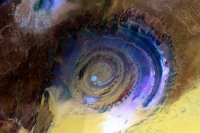

In [6]:
landsat_item = gis.content.search('title:Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]
landsat = landsat_item.layers[0]
landsat_item

Search for India State Boundaries 2018 layer in ArcGIS Online. This layer has all the District boundaries for India at index - 2.

<Item title:"India District Boundaries 2018" type:Feature Layer Collection owner:esri_livingatlas>
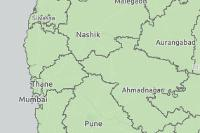

In [7]:
boundaries = gis.content.search('India District Boundaries 2018', 'Feature Layer', outside_org=True)[2]
boundaries

In [8]:
district_boundaries = boundaries.layers[2]
district_boundaries

<FeatureLayer url:"https://pythonapi.playground.esri.com/portal/sharing/servers/12fc8ff238e7420ea43906a9a33a9aab/rest/services/IND_Boundaries_2018/FeatureServer/2">

In [1]:
m = gis.map('Saharanpur, India')
m.add_layer(district_boundaries)
m.legend = True

As this notebook is to detect settlements for Saharanpur district, you can filter the boundary for Saharanpur.

In [16]:
area = geocode("Saharanpur, India", out_sr=landsat.properties.spatialReference)[0]
landsat.extent = area['extent']

We want to detect settlements for Saharanpur district, so we will apply a query to the boundary layer, by setting "OBJECTID = 09132". The code below brings imagery and feature layer on the same extent.

In [9]:
saharanpur = district_boundaries.query(where='ID=09132')   # query for Saharanur district boundary
saharanpur_geom = saharanpur.features[0].geometry          # Extracting geometry of Saharanpur district boundary   
saharanpur_geom['spatialReference'] = {'wkid':4326}        # Set the Spatial Reference 
saharanpur.features[0].extent = area['extent']             # Set the extent

Get the training points for training the classifier. These are 212 points in total marked against 5 different classes namely <b>Urban</b>, <b>Forest</b>, <b>Agricultural</b>, <b>Water</b> and <b>Wasteland</b>. These points are marked using ArcGIS pro and pulished on the gis server.

<Item title:"classificationPointsSaharanpur" type:Feature Layer Collection owner:api_data_owner>
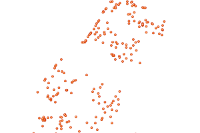

In [10]:
data = gis.content.search('classificationPointsSaharanpur', 'Feature Layer')[0]
data

## Filter satellite Imagery based on cloud cover and time duration

In order to produce good results, it is important to select cloud free imagery from the image collection for a specified time duration. In this example we have selected all the images captured between 1 October 2018 to 31 December 2018 with cloud cover less than or equal to 5% for Saharanpur region.

In [23]:
selected = landsat.filter_by(where="(Category = 1) AND (cloudcover <=0.05)",
                             time=[datetime(2018, 10, 1), 
                                   datetime(2018, 12, 31)],
                             geometry=arcgis.geometry.filters.intersects(area))
df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover, DayOfYear", 
                    order_by_fields="AcquisitionDate").sdf
df['AcquisitionDate'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df

OBJECTID     AcquisitionDate                  GroupName  CloudCover  \
0    2360748 2018-10-02 05:18:12  LC81460392018275LGN00_MTL      0.0411   
1    2360749 2018-10-02 05:18:36  LC81460402018275LGN00_MTL      0.0007   
2    2365229 2018-10-09 05:24:26  LC81470392018282LGN00_MTL      0.0235   
3    2365230 2018-10-09 05:24:50  LC81470402018282LGN00_MTL      0.0104   
4    2363765 2018-10-25 05:24:31  LC81470392018298LGN00_MTL      0.0034   
5    2363766 2018-10-25 05:24:55  LC81470402018298LGN00_MTL      0.0084   
6    2374779 2018-10-27 05:12:34  LC81450402018300LGN00_MTL      0.0003   
7    2382362 2018-11-10 05:24:34  LC81470392018314LGN00_MTL      0.0009   
8    2383968 2018-11-12 05:12:36  LC81450402018316LGN00_MTL      0.0001   
9    2391317 2018-11-26 05:24:34  LC81470392018330LGN00_MTL      0.0031   
10   2391319 2018-11-26 05:24:58  LC81470402018330LGN00_MTL      0.0106   
11   2392531 2018-12-05 05:18:45  LC81460402018339LGN00_MTL      0.0005   
12   2397733 2018-12-14 05:12:32  LC81450402018348LGN00_MTL      0.0100   
13   2401123 2018-12-21 05:18:44  LC81460402018355LGN00_MTL      0.0222   
14   2401177 2018-12-28 05:24:31  LC81470392018362LGN00_MTL      0.0019   
15   2403690 2018-12-30 05:12:33  LC81450402018364LGN00_MTL      0.0086   

    DayOfYear   Shape_Length    Shape_Area  \
0         275  863211.750925  4.652535e+10   
1         275  851821.808928  4.530870e+10   
2         282  864249.005456  4.664003e+10   
3         282  852038.709661  4.533114e+10   
4         298  864003.480054  4.661440e+10   
5         298  852052.926372  4.533265e+10   
6         300  851500.296316  4.527314e+10   
7         314  863994.276519  4.661226e+10   
8         316  851603.254073  4.528346e+10   
9         330  863991.415360  4.661195e+10   
10        330  851938.390626  4.532084e+10   
11        339  851973.199621  4.532425e+10   
12        348  851383.857661  4.526085e+10   
13        355  851916.741276  4.531834e+10   
14        362  863720.224906  4.658332e+10   
15        364  851598.768218  4.528268e+10   

                                                SHAPE  
0   {'rings': [[[8842440.179299999, 3627905.796800...  
1   {'rings': [[[8799651.220800001, 3442773.486500...  
2   {'rings': [[[8670522.289099999, 3627673.343800...  
3   {'rings': [[[8627077.993299998, 3442759.749600...  
4   {'rings': [[[8668674.6948, 3627854.217100002],...  
5   {'rings': [[[8625255.243900001, 3442931.826300...  
6   {'rings': [[[8969606.0125, 3442791.7321000025]...  
7   {'rings': [[[8669263.2619, 3627728.654100001],...  
8   {'rings': [[[8969738.007399999, 3442925.248800...  
9   {'rings': [[[8669961.7306, 3627710.4842000008]...  
10  {'rings': [[[8626659.587900002, 3442921.529799...  
11  {'rings': [[[8799698.1228, 3442772.1602], [874...  
12  {'rings': [[[8972363.073399998, 3442845.388999...  
13  {'rings': [[[8800469.5092, 3442744.7710999995]...  
14  {'rings': [[[8671754.256099999, 3627529.248599...  
15  {'rings': [[[8972212.594099998, 3442761.256499...

We can now select the image dated 02 October 2018 from the collection using its OBJECTID which is "2360748"

In [24]:
saharanpur_image = landsat.filter_by('OBJECTID=2360748') # 2018-10-02 

In [27]:
m = gis.map('Saharanpur, India')
m.add_layer(apply(saharanpur_image, 'Natural Color with DRA'))
m.add_layer(saharanpur)
m.legend = True
m

As our area of interest is larger and can not be enclosed within the tile we have chosen,  let's make a mosaic of two images to enclose the AOI. Mosaicking two rasters with OBJECTID - 2360748 and 2365229 using predefined [mosaic_by](https://developers.arcgis.com/python/api-reference/arcgis.raster.toc.html?highlight=mosaic_by#arcgis.raster.ImageryLayer.mosaic_by) function.

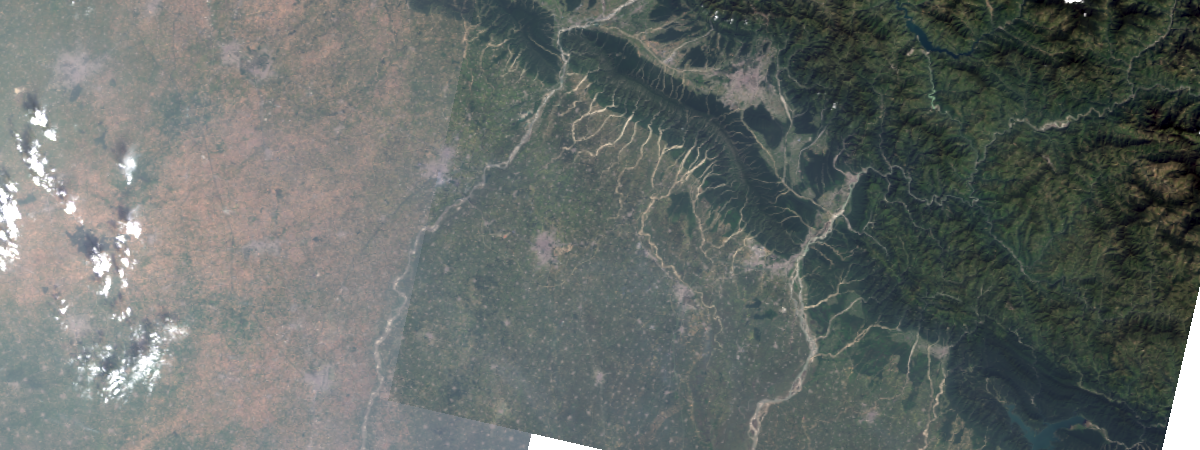

In [32]:
landsat.mosaic_by(method="LockRaster",lock_rasters=[2360748,2365229])
mosaic = apply(landsat, 'Natural Color with DRA')
mosaic

We will clip the mosaicked raster using the boundary of Saharanpur which is our area of interest using [clip](https://developers.arcgis.com/python/api-reference/arcgis.raster.functions.html?highlight=clip#clip) function.

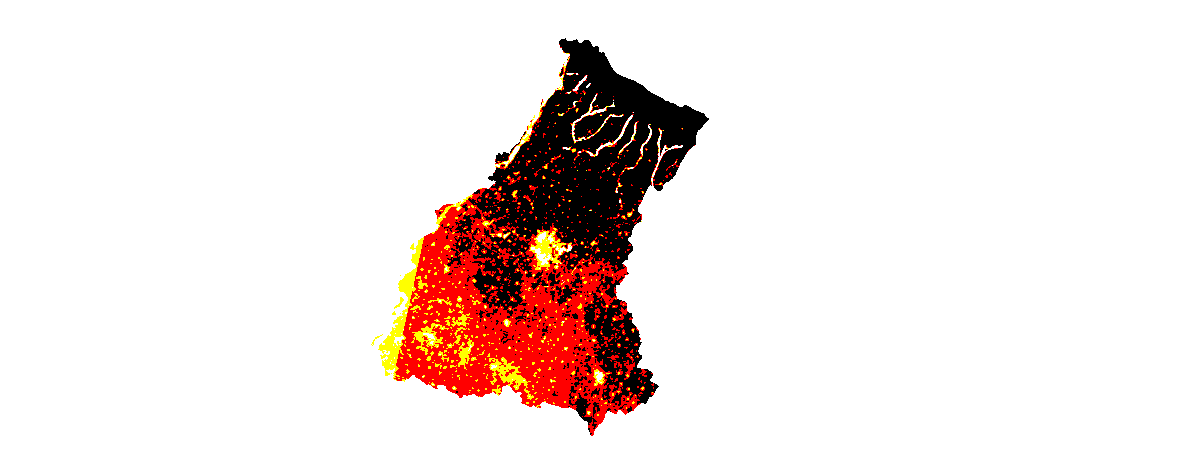

In [30]:
saharanpur_clip = clip(landsat, saharanpur_geom)
saharanpur_clip.extent = area
arcgis.env.analysis_extent = area
saharanpur_clip

## Visualize the mosaic and training points on map

In [28]:
m = gis.map('Saharanpur, India')
m.add_layer(mosaic)
m.add_layer(saharanpur)
m.add_layer(data)
m.legend = True
m

## Classification

With the Landsat layer and the training samples, we are now ready to train a support vector machine (SVM) model using [train_classifier](https://developers.arcgis.com/python/api-reference/arcgis.raster.analytics.html?highlight=train_classifier#arcgis.raster.analytics.train_classifier) function.

In [ ]:
classifier_definition = train_classifier(input_raster=saharanpur_clip, 
                                         input_training_sample_json=data.layers[0].query().to_json, 
                                         classifier_parameters={"method":"svm",
                                                                "params":{"maxSampleClass":100}},
                                         gis=gis)

Now we have the model, we are ready to apply the model to a landsat image of Saharanpur district to make prediction. This classifier will classify each pixel of the image into 5 different classes namely <b>Urban</b>, <b>Forest</b>, <b>Agricultural</b>, <b>Water</b> and <b>Wasteland</b>. We will use predefined [classify](https://developers.arcgis.com/python/api-reference/arcgis.raster.analytics.html?highlight=classify#arcgis.raster.analytics.classify) function to perform the classification.

In [ ]:
classified_output = classify(input_raster=saharanpur_clip, 
                             input_classifier_definition=classifier_definition)

Now let's visualize the classification result based on the colormap defined below.

In [ ]:
cmap = colormap(classified_output.layers[0],
                 colormap=[[0, 255, 0, 0],
                          [1, 15, 242, 45],
                          [2, 255, 240, 10],
                          [3, 0, 0, 255],
                          [4, 176, 176, 167]])

In [45]:
map2 = gis.map('Saharanpur, India')
map2.add_layer(cmap)
map2.legend = True
map2

Here, '0', '1', '2', '3' and '4' represents pixels from <b>'Urban'</b>, <b>'Forest'</b>, <b>'Agricultural'</b>, <b>'Water'</b> and <b>'Wasteland'</b> class respectively.

We can see that our model is performing reasonably well and is able to clearly identify the urban settlements while comparing the prediction with the Landsat image.

### Mask settlements out of the classified raster

We have a classified raster which has each of its pixel classified against 5 different classes. But we require the pixels belonging to <b>Urban</b> class only, so we will mask all the pixels belonging to that class.

In [ ]:
classified_output = gis.content.search('Classify_AS81ZD')[0]
classified_output

As we are concerned only with detecting settlement pixels, we will mask out others from the classified raster by selecting the pixels with a class value of '0' which represents <b>'Urban'</b> class.

In [47]:
masked = colormap(mask(classified_output.layers[0],
                       no_data_values =[],
                       included_ranges =[0,0]),
                  colormap=[[0, 255, 0, 0]],
                  astype='u8')
masked.extent = area
masked

We can save the masked raster containing the settlements to an imagery layer. This uses distributed raster analytics and performs the processing at the source pixel level and creates a new raster product.

In [ ]:
masked = masked.save()

We can now Convert the masked pixels to polygons using <b>'to_features'</b> function.

In [ ]:
urban_item = masked.layers[0].to_features(output_name='masked_polygons' + str(datetime.now().microsecond) ,
                                          output_type='Polygon',
                                          field='Value',
                                          simplify=True,
                                          gis=gis)
urban_layer = urban_item.layers[0]

In [48]:
m2 = gis.map('Saharanpur, India')
m2.legend = True
m2.add_layer(urban_item)
m2

The settlement polygons have many false positives - mainly there are areas near river bed that are confused with settlements. 

These false positives were removed by post processing using ArcGIS Pro. The result obtained after cleaning up the supervised classification are shown below, which are the final detected settlements.

In [ ]:
settlement_poly = gis.content.search('settlement_polygons')[0]
settlement_poly

## Deep Learning

The deep learning approach for classification needs more training data. We will use the results that we obtained after cleaning up false positives from SVM predictions above, and exported training chips against each of those polygons using ArcGIS pro to train a deep learning model.

### Export training data

Export training data using 'Export Training data for deep learning' tool, detailed documentation here

- Set Landsat imagery as 'Input Raster'.
- Set a location where you want to export the training data, it can be an existing folder or the tool will create that for you.
- Set the settlement training polygons as input to the 'Input Feature Class Or Classified Raster' parameter.
- In the option 'Input Mask Polygons' we can set a mask layer to limit the tool to export training data for only those areas which have buildings in it, we created one by generating a grid of 200m by 200m on Urban Polygons layer's extent and dissolving only those polygons which contained settlements to a single multipolygon feature.
- 'Tile Size X' & 'Tile Size Y' can be set to 224.
- Select 'Classified Tiles' as the 'Meta Data Format' because we are training an 'Unet Model'.
- In 'Environments' tab set an optimum 'Cell Size'. For this example, as we have performing the analysis on Landsat8 imagery, we used 30 cell size which meant 30m on a project coordinate system.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAhIAAAHOCAYAAADNKeB2AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P33kyNZlh6I8p/gr/xX1uzZ2/d2yd215a4tyTdc8pHzhkMxwxE9PTOtq7uqumRWpdYZWusIIASAgBaBgAxorbXWiIiMzKzvneMIZEZGISuzRFeXcDf7DPCr/fo953zn3uvu/wTiIR7iIR7iIR7iIR5f8fgn3W4X1WoVR0dHODw8hMViESFChIjncDqd+Cd/axchQoSIF/gLG/5+yY12o/aCSASDQUSjUREiRIh4jgjB6/Xi/zMXw5/Mx0WIECFCwL+cjmNcE0SzUR0QiUqlgmw2i5PHj3FyeipChAgRAo5PTgRC0en10T85FSFChIjnSGcywkSESCREiPgB4PHZ2XM8efpU+B2VbgiOP70g7/z/chiDiUQsFsPxcR+PH1M+ESJEfG9weun87Gwg5xfDXgLFnz05G6S7EC6EsY64EMbIZkUi8cUQFOsToQNPR8WLEPEdQf/4GDa7HVqtFmq1GhqNBrl8XiABo9JzeL3RQK/ffx7GBILDOqQPLqdlInEx7SiwjAwxKv6HCFa6j0eEixDxXUG314PL7RZ0w/7+PnZ3dxEKh0emZXD6MvGBi/LOOqBWr6PVbr+UlpF50xmJoadyGcx0Lqf9IaHXaSGXjiMUz6DZG51GhIjvAlj4JycnIZFIMDY+jp/85Cc4MJtfSSR6lH5mZgamgwMhL89g8F6I8YkJBILBl2YlvohIsA5g4sBpOscDdAn9S+l+iEjlW1CGGwjXj0fGixDxxwbLMcv35uYm1tbWsLCwIOgGPmeZvTz7yOeNZhOrlFahUKDd6ZAj/QSpVArT09PCpuvLOuUNiAT/P0a5mMPRoRFbWxtUwSZWllexIVUjXu0K0x8XC/0hoV2vwGszYk9jQa4xUJqj0okQ8U1jSN5ZiBkD4v5qWWNlsba+jiQJvE6nwy9/+UtYrNZXEgkO1+n1uH7jBhTkpXi8Xjx89AjLy8uokFK4WBenHUUkmEB0Wz1oQnXcVqTx3zZT+OutFP7TYhJ3fS30LqT9ISIQqeK6No/9VBfHpCt/TDMxIv54YNkc6oWLeFVanmHc3dsTZiWOXC785je/wfb29kgiweBwt8eDG6QbpJSO842NjWFxcVHYD3FZp7yWSDx+fIJCwov19S2ozH6Umh2hkE67SZ56EqVqixoyUHCXIZTxUhgrxafCGssJlcFTsad08aenJySEPEX4ZLCuy8aa40kwedqQyQx3kmDEKfz4ZKhkP995HCfUea6AOQ+3d5BnEPaY6+f0FM6/A2V9PrvCaVkhcPnnyxm8mUQoi9o5SE/x9DusY9DGF20YXPPLMzcvxYsQ8RowKUgkk/AHAvD5/QK8Pp8Qxh7CqDxs5NmL4DTacyJh/QIiMZRRB3kYVz79FL/81a8EpcEzFc9l5BxcxueIBMlLv9PDrCaNv9zOYTfeRptkpHd8gnypDXumgx7LI6Vl2Xr65DHw9DE+o9+LBpcdEQ77jOJwHjfQB4/xjM45nn85/tm57LGMctjTs0G5T8/Dud18Pkz/5MJ1cBuenMcN8r7IMwxjCHqAwof1Mp6cp305jMo8DzujPNyfXD6Xy78X28vlcT0X639G8dz+YbwIEW8ClsFsLicsTYQjEYSjUeE/y32z1Xplnj2ZTCAHTAreeust7OzsCHFDPXAZbLdY5j/66CP8gnTJ0tISqrXayPRfTCTo97hbw8H2LFbkNjT7A6Hmghhc0aDQY1QLPGOhhVKpgspwiESpI8R1WnWkQ24oVBphbUZttCNT6eDxSR/lTBRG0wFcwTich3rs7sqhPfSh1idj3m0g6j2CyeKE03UEi4NITK2BSiENj/0AcqUS8n01bD5SrKysqLxmvYJUxA+TXgeFWocDhxf5SgPlUgF+lw0a5T60Jgey1Ta1q4FsIgzLgYnK0uPQGaDya8glo7Ad6Ck/hwVRKJWQCHvh8MdQqrcQC3phtthgtVmhUqqhO3QhW2Ny1Ue9VkaY4o1Uv0qlhlqjxYH1CMlCXSBFlztfhIhXgT0IXpa4cuUKfvGLXwiCzP+ZIPAehsvkgGWNSccj8hp4aWNiclJQFjyVWa/Xz+X05ToYrHh4VuLGzZt47733BGXB66CX048iEmxwPe4c/o/pOLYz/edGk8EkgA0tp2t2j+GI1nFfn8cHmjw2oiR/x6zciHAU21iyFvGBtoBP9AXMB1roUF1MUNSeMibsNaw6y7imKeBTXRG6DO/dOEGx0MTUYQkbvhpm7RUc5Lqotno48Fdxk8r5mMq7Y6niqNgTSEmvd4xotolVWwmf6Aq4YS5DT2WVGz0YKc8tahvn2aa2tYgIlasdKFxlXKW0tw/LcFI5RZLzvaMSruvyuGWuwJLvIpFtYNVVhbvYRyTdxJK9jGVnBQ8NVB61WZXqELmi/qNrDSbrGD8o4mMq866xgHsHJewR+ar3RTIh4s3AcskOOM8q3L5zR3AWWDe89/77AlFgQ385j0AI4nFMz8xgZXUV8wsL+N1vf4upqSkUisVX6gZ2ZnjP1dWrVwXdwOlT6fTItF9IJE5JGTQrYSzevQdztCJ46ILBbtRRrlRRrTeFtdBGKQrJ/BIURBIi8TAM+ztY39UjXanBbVRgeU0KG5GFWCwIrUyKpbV9xPNV5CJ23L91HVMSA4LxBIIeMxbGp7CqcaFRK8KmWMe1e9MwOP1IpvOIh31QU36lyY5gLA6Pw4jlOarXEqSLKMFt0UMq2cWBK4hILAp/MIBwOASTRo499SH8IT/l34VEbkIw6IFMsgWZ9hCheAqRcBTxmBdyyQY25UaEEmlEo0kUcknYdTuYXlcinK3hULWN++Mz2D9wweM8hHRtGds6JzLFMvx2I3l0u9Bb3Qh4iTxtzOHBozHoXUl0T89nVC7dABEiRoGFmzc17RNh/i0JPU9F8vIDLzmMmmHg9PFEAm7yNiRSKR49eiQsa7D3MWpzFIPLkSsUuHXrFhF6k+DVPHj4ELNzc59TMKOIxOOzYzzciOHf7ZRQ4Rk/CuPZiEqrj1LrGI3eCRGiHrTuIv5xM4PVcBPyoyL+bCGFtUQHoVQdH0sT+NBYhjbRwq6nhD+fieO2h/RKo42rW1H8D49iuHdUh46IyA1FCv9hLQNTqYd8tIx/cT+MP5cXoE+24M22sGTI4Ze7WSz4G9CE67gmS+PvtsnBqfaQSNVwZS+NjwwlyCMN7IcbMMSJWJjy+DXlWfPXsXqYx99JM1gPNrBmyOK/b2SwEuB0LXhylNaQwV9upDHva0Afa8FX7MDmKeAvVpNYDrZhOirg/3wUwl8pilBR+XcVSfylJAsdkRxfvI7fb6fwyUEZ6lgT05oM/l93g/h7bRWZDt+/l++NCBGvAsslG3mW73fefRd///d/j+WVlVeSAiYSGbLrzqMjaLRagYCw88DnvKHycnoug+XcYDQKSxu8QZOJyOzsrOCo8P/LOui1RKJecmPy6j04Uk08ISLRb5XhMGqwtryIiZklWAMpRK0yXLs5AaPTJzxrbtXJMDm7TATAg/XZGcgPAzh98lTIX076sDQzD60jiEzkCDNTk1CRonnMSxonPYQsSjyaWkeqQBeu2sTEyh6SDTLCx204TCqsrO0h0xxsDOt36rBpdjA5L4U35MUeeWJykw/dp88o/gzHx02EjrSYeTiBHf0RItEIzFoF5hdXYLAfYWdlAcsSFZLlOrrUcdV8BLvL85gmohMt1QSl2G8U4NTtYXZThUi2DrtRjbVdNWLlNrod6gu9HKub+7C5vdDsSiGjeirdU5yd9pANWLC1vgYDE4kTkUiI+HJgBcAzE6wwzIeHwgaoUYpiCI7jpTZeAtnZ3RWUDZcxKi2DlcXG5ibsDodQD6fl9c+5+XlhyvRiXZeJxCkvN5718MliBP9BXkGLws5OTxBNkwHfz+DP5qL4b8oyUsUGfjEfxZ+s52FKt2CK1PGbpSj+K8XN63P489U0/K0T4NkZTqnsNU0K/24li2iljbu7cfzZThHxzmOKf4xcjspaTeC6o45MsoI/XYjjQagrzHwE4lX8NRn0CX8Lj6msz56eIpmq4tfrSdy0VbBpzuHnsgJ8zWNhSYGXWArlJn62FMdfSvNQRJvQEpH5OaV/V1/ClDaLP5lPYS7UQrF7Iiz3bOoy+L/nUpj0NVGiMCZObl8RP9lMYT3cJgemiL8lorGe6OLpk1P4EmX8zWoG0+46pulafynLw1M9Fq61Sv3yu8043jZVkWUicd7PIkS8CVg2hZkJIgMqtRrFUmlkuiE4Pct3qVzG6uqqQCBepRs4LfOBvb09wcFgmWd7y0SFZzjZOflyRIJ+O/U0tsbuYM+WQP98fwEvb9SzAazMEAmwBuE3bOHK9THs7msFpqPVG2B1BUnxuDE3Ng2DOzVQSifHqOSikC4sQnZ4hGTYidmpaZhjbWENstdtI+w0YvrRIoL5DBGJHSztmFA++QzHvTqRgG0sburQ7B8LioyXJzxmLeZnV2H2WLC5tgmzL0+KYtBBnCdgkePh3XFsyrXQU7v0BiNsR15kyw3kkkFsry/i/qNJbOudqDRaKFDYzsYyeXREPnQOUl7UDr3snEjUBBK1JdcjWWmh0y7CYVBgbVMBs8OG3Q0JVIdhdI4fC8QnF7Jje2tLJBIivhZY4L+IEFwEyxkrCZ6dYEUzKs1FDPb4vCib87PSEOT1QrrRMxIn2FEm8M/nM/A0T0g3cNhjfPb4GFJtAv9yLY9Iuoa/mQnjP27lMG8vY8JaxoyjCiV5+VPaFP50NY9c75Ts+ikpr2NyOvJEEFKwl1q4R0Ti79QVFPrUJopnIvEOEYkPD6uIEEn4byspbOf5vRYnOIqU8Z9XU9iKdQSSwIY5m23go60k3tPncVeTwe/0VVSoLt7PwPVl8zX81XwMf7aRxSNqF7dt3lmDPd9FodrF3EEB/2Uxjr/ayWI/3RWWO2ZMefwZhf3tbg77qQ6c3hdEwuQiIiLNYI/Scps8RCT+bi2NKWcVN1UZ/FJRQpyIDOu6SrGJD7eJtBzUBjMS530qQsSXAcuusH/vkry+CuwwREmOeZ/VF+ahuMev0A2jdNFrNltSYafHCFjVGJ/fQChfF5RTv99FKeHGwswUVI4kCiEzxidWEC41hMpPzzdYdZsFyBansbJvQ7PbJw+pg3TMgw0y+IeeKLJEJB7ev4cNc4LyHKNWKeBQu4fpVSVy5TwcSikWtw0oEZEQZiuO9JibW4W/1KZ29FAt5XGoU2J1R494KoK99QWsyS2okyFnD6JN15QJO7AyuwBTsISzz54Oro2EvNfrUqf20aoOZhxm5pdhjRTR7p2gXS/Ba97HwuIyjHYvbDo5ZjcGMxJMJDZlOiISPCNRIiIhx9qGEg5vAGrJKlZ3jcjU2mg1ivCYFFiYWyAiJRIJEd8eWOBZuYyK+6oYRSSYzFcKTfzX2Sh+aybPunWMdp/kvtPDwn4C/8d6AYVaBzclcfy1vIwOGVB+3wIvhz45PYHJXcCfziUgy3bRp/I57SNVGv9IBjdL8nVrJ45/uZ6Hs0zlUpladwn/lcjDYqiFTKKC/7ycgiQ3eEFWrtDA74k0fGqtIUdtaLZ7MHnJsG+lseSvQ2bL4S82MtBRXbxno97pI01k5ZPtFD40VYQ8j883inb7J6i1j9EkXRCNVfHL1TjeNteQIrLU6pwgSGG/WIvjd6Yq9C4iEhsprDGROCrhHyQZ7FwgEn+7ksasu46Vgxz+03IaCorrUPmuYBl/SSTmt8aaOCMh4lvFlyEeb4rXEAlWSmfodVtwHSqxtLYNrcECu90GvUqGuaV1HMUreNyr4FC9g8mpdeh4I6LVBm80jiYJaykZwN7aEnaEfIdQKRXQGD2oNNvIR5wYu3cLd2a3oDYcwkxGemNzD/ZwlupsIHCgxLr8gIjEM8GLaDfKcGhlWF7bgsbigPnQAIVcB2+sQMSij0zUi62FRaztKGGmNtjsDkQzpIj0MkxNLEKhN8Pq8AibO7MZ3lRphMl4CINWB6XaAE8sCOvBAcxmK4x6A9S6A0TTKfhsOqzs6BAjpemzH0CmNiFVJSLRrcJr02N7V49wnhRpzI3tlVVsUv0mk4H+z+DBowlxj4SI7z1GEQkGj+l0vonr5HH/w24BM44ypixF/N1qAr82DZYHY8kqfrqUwD/I8pi0lzHpILmpHqNDxl5iyuIXuxnctZbxwJTDB/vkTBR76Dc6uL0Tw/84HsN72iLGzEX8VpYholBHlQx8KVXDL7czUBT6A7kiR8QbqeL3O2m8qyvi0WERH6hyeOCoo0yGu15vY0aTxd9LM7hxUMKDwzKUiTbMZNDfkqTxtqaAccqz5K3DVWhDQaTgoYlgLOJjVQG7sQZ2jioYp7xjB0VcUVNYvA1nqIx3ZFnI6L/NX8aHyjw0eX7q5QSBVBXv7GSxFSJdR/piQpHBLyntfeqDT+Rp/K+PwvilgYiPuEdCxPccryUSAmiQn54do5Qho+r1wuvjx9GCiKUKwstn2DNhw58IBeH1+uEPxVCotnBM5TDT7pCH7/f7KM6HSDKHtjD130Mu7MDs9AzURykkI154/CHEczXyTiieFFezVkamUEGHz8/b0u+1kUtG4BHqiSJbpnqofo5nNGsFhAPURm5fukB1UZ4+v1QqJnx0KBCOo1BpktfURD4dh5+uJRhNotRooUNhmURUuL5AJEFhbVKgx2hQO5LZIhEj8lLqFeQLJcGr4Sc1GjXyZvIlNLr9QdpqEdFwkPrJA7tJA8nWNg58qQGROL8GESK+b3gVkWDwcmev14eD9xnEmtARDMk2CuS9czw/Nl2odmCKDOKd+a7wpJVgPPvHCGRbUFNeY6qNZOsEZ2cks0wkduP4K0UJJirLGKd8uS5aJM88A9ElJyVW7gp7FYbtYPni5YdDSqsjeEqDejg9x7VJRgOZltA+a6aDIskzX1eq2IbpvN3+cg8talOm3MEBlaGNtxCs9tGna0gV6Ro4XaKFcI3DTtFq9YR2VKisRruPZKUrEB1uT5PO40VqY/tYuFZus4f3iSRbMASqeG8nhau2OnLdQfuG1yFCxPcNb0YkzjF8b8JznPEywXkc5eFljUHc8LHQF3HDPMI7FzgPEYl8hInENCmYNp49e/oi/jwft4OV1PNzAUQaLrTj8hTN8F0R3IaLZQ3Xkvh3kOdiOedhXN9LYcMyB+HCOf3nfC/q47jHOO53UKuWUSVC0qNrq5UzsBk02FEYESs2KM/l6xAh4vuDLyISQ7A+4PX/IS4aRzbmw3CeXXxVPsHoE/rNDu4QkfhbdQXF4zPhPRMvlUlphHc3XCiHwfJ4sZ6L8VzuxbqG8s3yeznPYyIzF8OEdPQ7DOP/Qrn0yzpKqEf4/6JOoRw6P6PfQqOHaJVICjle7V4PcnsRv9nOYicxeDz0YjtFiPi+4UsRiW8U7L3no9jblsCRaA9Iyah03xPwTEk67odeZ4TBZILOqIfGYEEwWUD3fMZkVD4RIr4PeBMi8U1BMPCdHqSHOdyyNVDuXzDc30Pw3otUoYn5wxLumsq4bSrgfXURe5EWqv3B0x+j8okQ8X3BH49IMEg5dToddHo/jPfU9/vkcbSawguD6o0mWqQM+WU4Q89HhIjvK75NIvEcVGfvmOoeFfe9wwm6vRPUO8eo8jLIuc4TP/Yl4oeAPy6REPDDmvLnqdUhRsWLEPF9xB+FSPwAwbMPQ4yKFyHi+4jvAJEQIULEdx0ikRAhQsSrIBIJESJEvBYikRAhQsSrIBIJESJEvBYikRAhQsSrIBIJESJEvBYikRAhQsSr8BKR4D+5XG5kQhEiRPx4MSQS/CGwUfEiRIj4cYIfLGAiUS6XB0SiVqshn88LSmNUBhEiRPw4wcoiHo8L368ZFS9ChIgfJ/hljfyZ8mKxKBIJESJEvBoikRAhQsQofC0iMepdCaPCRIgQ8d3Fm8owh70pkRiWMQqj0osQIeK7hVGyO8TltF+LSLBCKZXLSKfTSCaTwibNKuXn752LMxoiRHz30en1BJnN5nJIplJIEcqVykgZZgXyJkSC0/WPj4VyucxIJIJoNCoomkaz+TzN5XwiRIj4boDlk3UA6wJBhkl+hzLMb21m3XBRhr8SkeBd20wejEYjZHI55ASFQgE5gX/Nh4fIF/iz3j+M116LEPFDA8s3OwEOhwOK/X1BjvmX5Vcmk0Gn1wsK5OITGm9KJJgsOJ1O7O3tYXd3V9APjF065zoCgYCgpEblFfEqiMTrx41v7/6zbqjV63AeHWFfqRzYd5Jbtu97pBuUKhW8Ph/anc7zPF+KSLAi4R3bPipkc2MDKrUaYfI2cpSeC2CvxuPxCBVLpFIEgkGBTLy590F1UtqXvkvxxnm/Li7Ve47BdzJGTOu8SbuoD4+P++hRH3zRtwK4r/uksIV0J6PTfFUM2jts9+hrvAzh1b1f8tsgwit/L/bPN4RBWy71/beEb/X7KCfH6PS66H/D9/9VSGcygqHf2trCkcslzEQkkkkhPBQKQaPVYm1tDXYiBCzzw/5/HZFgHcCKZocIBJfLuoEJS6VaFRSN3W7H+vq6UD7PWHype0ppWWEN2/Kl8n4dvKquC+3gdj1v2+V0r8AxyTsTql7/NbO3PDa6HXT735xjNmjzi/YPMSrty3jTdBdBeb7h+8ZlfK79I9L9ITCsb1TcHwTC/W/TOKH7/y3oB9YFKpJhJg4ut1vQCfFEQlhx4P9Wmw0bZP/Z2eDZCe6LL0UkOMzn92Njc1MgCaxgWBCisZjgvXAaLpDDPV4v1lZXEQqH37DTT9DtNJDPphGJRoigRBGJJZEr18jAvkbQvib6vQ7qtSpqzc5Lhrzf76JSzCBG7eHrCEepTYRkJodamz/G9ZrrOu6hmo/D7XYhlquif/ri0+Mv8JgUSg+VfJL6zIdEvkbG5OsOUv4QWhOFHLWd7o3Q7jgNhFIVbRqMXyhwNGjbzQZqjRY6b6i4TjlPo4o0GSK+d0IfZQuoC300Os8X4qSPerVEYypBZVH7I2FqfxLFWutceY/I802BxnijVkapWifF/YcddxfRr+fhsB4gkOHxTn06Is03AZZFNvY729s4ODgQpi5ZZtmoM/l3kKFnOef7xsRiaWlJUBwcxnlfRSQ4jr2YbSqXvRhWMFxusVSCm5wLjhsaWiYV2zs7Atl480dJj9GqFREi/eMXEEAwmkatNSA5F9NeHB/DfrycZoChEbocPkgv4OyUxnYF5VKFZIfOh/GEJo2TWCRw3h6GD/5QBJlidaCzzssQyhyWd35++vgM7VoeVrMetkASrR6PtZfTCv8J/WYJNpMaZm9CSDf8CuqwvM+1/3k4lcG4GEd1PCb5quRTgi4ftj0Yz5G8U9kXvsD8ovxhGOuqFvKFMvXFoA9Gp7sICus1kIiFn/dRMBJDqU669vx6X+R/Oe/g/PPl9sio5lIxwaEVygyGEMuWBN19Me2Lcj/frleFD+sbHXcq2KhisYw6jbtR+n+Q9+WwLyqT+/B5+IXfF+XQb7sEu0GBQ18Szd4gj5B3mO78fIjn4QQh/6X4V4HTs7zyzCGTBH4VBIfxZMDS8jIMBsNzPcB6Y53IBM9UMAc4e/LkzYgEZ2Y2skbehN3hEOJ52tNG/6empmC1Wp/PPjA4zmKxQEqKZaisLpZ3GaePT9CqxLC3OofJuTXsyBSQKVQ4cAZR65CyeJ6WlJyg6Kh93Eb+T/X2yej1hTZfuFl03j/uC97+kCCcDvMLcZTnuIt6KYFDrRxKkwf1Tp/awmmpA2nApsMuqBXbmJsex42btzG3JoHWaEYsUxI8iWNSGEJfcZlCO7iu875jgpAOQq/TwB7KoHdCfSDUzfUyztvL6TJhmA8MQroOKayL5Q3SnV8TQWg7Xy/HczqhL17En9A15aIe7G4sY3ZpDduksCVba1hc3YTW4kWpMZySOi//vO/4urutEnwOI7QmBxLFFtVF6bgOId2FaxuC73e3gbBDh4X5BSyubWFProDJ5ka2XH+en+8Dj4mLRE2YgSLwdbxEOHothOx6LC8vYXlDQp7zNtZWFjC3vAm7L0FKbPDZZW4Llykw9Yv5+R5TmRz3YkxQPdTvQt8LeQZtuSxkx/0OfFY1dpUmJPN1ynMpfliuYChehPM1vKhvGH5+bZR2eA/5XAgXyuDrHgh7v5HDgU4Bc7AoGItBP3M+7vfLM1XD8EEZgzFwMX40WC552YGFn2cEmq2WIJdPnz1DghyBd3//e8HTYD3wmBQDx/GM4/zCApH6mKAs2DMZRST42g1GIzbJyaiQDuG8/Fz58sqKEMY6YKgbGDxLwTMTLpdLOL9c3sugPP0mIjYZbnx6Bxs7CshpjKkNNqRojPWpPy72j3CPuf+4Xyh8cG8u9+EgHbd7OGM4GAuDvhfiOJzqDdsU2FzfRrj08vgv5+KwGPaxuTaPG1ev4sHELHZVOrjDSTS6ZGiEegf35nldPFbperl/uvUCHGYNDlwh4Yugg3JfjOljwaGgsdGuwk5EwnAUpXLZEeAyB2OI0168LqEvz+sSxpfQDy/iT4jAPOmWoZfM4eajeUHPyuVSzM7MYWtXSf3ZPr8fw3ZwOQPjweSnWTjC/Owqgtn2uWwMxuKwzZ8jLnTey3nw4OonmN6UUV0y7Ku1CKbKgmN1Su17SR7P6x7eB2F8Ey6W1ygmsb3wEHenVyDfVxApXsfU7DJ0liOU2wM9xuUM+5zlZ6ADBuEcL7T5XCaHumRQ5/l9orhRMlVKuLG3sw2LP4c+9cdz/cHtfp53MJ6GeS7e+xf3anBfhmOTx+tQRwiz2JyW28zt7dZwZNqH3hUlW8i6b5BukJeu7+L95fxU1vN20P/L4/5V4KUKLekFXt5k4s+zSDxOmSi89dvfYoH0AKfhMEaBSAPLt8PpxJOnT5EhB+ULiQR3PjdaT4yEly24MI5nT+PuvXvY3NoSFANXyHEMTs9KS0pejo28nIsNHgWBSBQDWHhwC0tyGhBk7JrkGTdbbZSIPYdIoZUa7QEbJU87mkiTx51FhNhtLBlHwO+By+NFskDeAN+gfg9VYlfRgFeYEfAFIyiQR8sDqFrMUb4wwrEo5fOTMKsxff8qboytwRVKnc82cLt4kHOfFGDVbePW1VtQ2MLUWTnEomFi1hGEqdxUrohKpYR4NCjU5fWHkGMFR3U1KnnE4gnkq000yWtPxqN0LWGq10vpgoL30u310awWBA8wX22gUa8ilYgLSjxE6TweHxK5Eto00Ppk6Er5DIJeDvfCFwggFE2iVGu/GDD9NpIuM1boxu8Yj5Aj77pUSMKi2cXs9CyUFh+qrS4qBSqH+s3t9lCbEijTvc/FPJDOP8KdR3NQWwMoVKqUN4Ow0I9uBMIxFKiN7DULdbEwdcrwGHbJ0EsF1lyp07W2eSquj06rjmwyCi+NFbfbh2gyJ5C1Lt3HUj6NaCSEoODFVV5M3RIxcWn3MLO4CqM7QuXVUchEod5axNgUecihLJGtHmqlAqJh6nOPC8FYSpgBYWFu1stI0f3xeeleBOh+1VuDcZOOC7NnEarT4zqCJxhFuclGcaj8SPkQibEq1zC9uA1/gpTdcyE8Ic+0jmQ0BJ/HCY9wj5tCPHusfB1uMopuX5D6p0ntoPTVHPVXGCFqY5D6t1gqIsYzWzQeQiG/cP+i6QJabGw6NbqWMLINIs29JpKxCOWhsRLyUbluhOIZNNmIkBJskQEKeT3CMiKvVXroGnPlxkjFdxEsx7zxUSKRIJVOP1dEHB6Lx/Huu+8Kxp0JBscNlNuxsATCy5hcRuIVRIL3RM3Pzwszk6xUCnxO4+/e3bsIBoPCDAXrAwbrCc7Dm7dWV1efT49eLvMFmEjU4dWv4NPrU4hWqN29rrAUVK8W4TmywRMr4Jh0SKOchovGc5j0QyLogtVJ/eRzkjelh9UdpHHfJyV4gnqliJDPhUOzEXpyDNyhBHl7pHhbZQRIhg/tTtiPnHDYzZBM3yCS9THWNW6kChVBvwjtorHG8piOODB59zY2FCbUm3XE6d5a7DZSsA64A3EUK2XEwx4cHpph0OkEHdM8foxusyLIXyRdRKddQ9hL9VHdLroek9EEpz8mfG6836kj7KNrylZw3CVC5XPTdR2RQ2eDkdLZXAFUSJ5Pzx6j08jDaT6A0XQAC9VnPLQhkiq+GMdnT/CklcfO7APcWzOgQOOt020hE/Fi8eFVjC0pUSJj1aikYbcdwmQyEUE0I5KrCuPcqZrDz3/+FuZ2TIhka2jWcnDbjDCZzdBr9AhlSP9eunfdlB2f/PZd6NOdwX0j+9BlQ0eylgx6yIEyCtdhdXpRbHaEGc5S0g+jxU738oj6MCIQrQEJICKRi2B98h6WtX6SHdKdjTKRfx0m7t3Aht5PBOWU2k8OkdNK7dfjgMqJ5Vk+TtBtkwxH6P6YTdCbzAgkC4KtKKVCcDpdJEteGhN0zQeHiGTKdK9fjEsmDfnwARZmpqC0xtF7/OScSJwIei4ScFO5euoLC4JJuqekI7nPQjT+zAdUJtXniyQFeedZJi/pLSs54naXl+QxQ+ncsB25iVw7YKZ+t3uCqJBOY30QIN0SytUEe5SL+WCxOeA4cuCAyrW6gigL9/8MrVoeHptFGD9mixkHhxZ4STb6r5nl5H5lnbBCxIDtENt3ni1k/cDy+Zu36J7PzQkEg8OGy53MAXjWkvUEz3S+lkiwcuEpD95ExZ4JK46bN2/i17/+tVCQsBGD4hnMaHh6m9PxdAivt7Dy4HIuNv4ihkRi/v4NrCh9aB0PZjBYOEpxN2Yf3MGq0oJ0PAjlzhoWttRwHqrx6OYNjK9sYl+1h+WZR3g0tQh3okjeQhS6PSnmF5exTW1anpvH7OoOYjm6sTYtblHbJzeklE8L+fYq7nzyLj64OQm12U2Eo32hXcxsW/DZVHh46z50XiIwNMhXpu8To5/Ezr4R7mAcyUQABo0c25JNGmiTWNyQIZYtIus7xPrqBvTuBAmrBysTN3H9/iSklG55fgar2/uCIkkHbNgm0sWsMxF00rU8xL2JOWEKeH1xBnMrUjijeeQycWj2tsgrWCRPbx2TRLxu3B6H3hmngTsQNIFIeKjelVWoHGGhL588oUFWSUEjXcHsuhy+ZJYGrgMqhQySjVUiGDOQac1w2gxYHLuBK9fvYV1hJrKVQIAUnEYpx9b6CqYnp7CtPqQ+IoHnPmIi0a7AY5RhaX0PjmiB2jFg8816Cc4DHXlsa5Bs72BrbQWLS+swHoWRToSh2JjB7QcPsbGrwpE/iiopEcGoE5Fw62WYX5XAHiHmT57Lk6dnqKa8WJqewprcROQpBJNWTf0ohWRzBVPTc1AeepHNpmEzqMmD5Do3sbgwSwr+EDEygDrpAu4+msDqzp7gxYyPPcCGyoZ8nQiIMDYHRMKmXsfs8i4pmQGREGZqSEHb9Bqsb2xCuiPBwtwUlqQaxAs1FDMhHOjVkO9KMfXgLpa2tQJxLLjVuHb9Jh7NL2Nfb0Pcb8cMje/rD6bI+5NjfWEK98dmYQ2m0cgGsTw1DXWggMeNJFbHb+KDW+PY2lNAsrqIew8mYPJnSBEWcbi/iYnxOUiku1ilcfibtz/EltYlLMV8kbJg8L4F3jDFxN9PJNRICuuAjACPs1/96le4ffs2tGTsOJxnFNnwM4HcIvLB//nprFFEgknv8vKyoDcYvGHzp3//9/jkk0+EcAbrCf7V6/WCMeElDp7hZMXFHs7lMl9gQCR8+mV8/Mkj+HMtwclodUmhtSo4lC3h/sQyvPEY3btNTC+R80JkQj53E7/56C52ycvSK7cx8fAuJAYPyuUsbEYVtWWL7osBGrkEE5PT0BzF0MmHsDJ+Cx/emcK+yQrnkR3S2Rv44MNrlNeHdJGU+YV28VJAKe3D/KP72NHayOhXod+aw7tXrmOZxrUrkCAFm4LbYaF+PoR2dwm37k5AH8gLs5Bbi9PYMriJFKcgnb6Fj+9MQGmwQLu3jvv3x6hNcdQKKazPTGDd5EevnoV06ibeufYAuxojNAop7t68BbklhHa7BMPOCh6MLUFNhkS5NY1fv/UOlvft6LIh4THORKKdx+7cQzzcOkS1z97lEzwl+Qoe7OKj96/BHi8gS/pMrzOSUT3AxtQd3JtcQ5ycHp9uAb/69e+xIh8Y2nwqCJNOA6vdAcXybXx8dwWx6oDwDvuom3Lg07ffhSpGxIMMUaNJTgYRikTAhJmHM9hUamEimV0cu4OVPSM5cl1EdIv4u998jNXdfTh9MSJKA8PFYCKxMUOyexDB8ZOnOKOxc0xeu25zBlfvLSKUz+FQSfpjYRUaow7S9QVMLOwR8SkhdGTE0swMdhRK7FNfjU+v4ShCjtKBBFc+vorpLRkRDCPdlwk8mpMinG+SHRvYrQGRMGNxbgZq2zmR4NmNbh0eix4ry2uQqTXY3yVHZH6DdCHZoRIRMushDkie9tbnMDG3Aic5KO20C/dvXMWnj+ahtXrI8Qlid/EhPr71AFtKI1TyHdy9fQeyAx+6pLfXxx9gRedFq12FRTqBt977hPpGCYNajge3bkFqIT1Petiq3MLUxDzkGgOUpO/ef/stjEkOX9z/52P3ZXAc6wOWc17e4K0Jw43XvFz5j//4j/j4yhVhhWH4gAW/AZvTLi4uCm+0zBEneC2RYCXCRII3XzDzYeXys5/9DH/913+Nt37zG7z9u9/hd+f44IMPhNkL9kxYGXGDeJbiiy+EiUQQMzc/wid3F6AgdqsjJhxIFMj77cFvlODDj65idn4JC2RUA+kSed0a3Lv+KTZ0DjTIm6ikycDTYJxa2yMjs4NHdJPcKV47O0YmaMXkPVIkahvchyrcICIhoc7vktGr5sKQ0U1e3DWj2j7G40vt7Peb8FqVdMPuQetJIRd1Y37iHh6tqwQjxAOs22nSoMkjFiUBlK9h7OEEdE4ymB4jGZ1FMuhRpMIuQfEvyExkNMnLcOmIEMxDZSFP3U0Cu7oGlT2MWMCOFTIyqyorig1i7SEb5sjIbOzpcGDUYIk8dbMnRoqjAq95D+Pj01BZo2h/jkisQGkPUt+cCtfU47VWlQTTcxuwhnOoEtPMZjMIUNq1xUnMb8gRCAZwqJJifUdLDJg9a/LwyRPP5bLkFdmxtTKN8UWpMDUp1CXMSFTg0ktw9/5DzK5JodaacESeuZM8lWXySmVkRCutjuC9qLY3sEhExma3Ymt5EpOru4iSt/OSN32BSNjCZDzPhaBTimN3ZQ4zy+tEHlYxOTEDKRE5L3l12ysLmFqR0CDfxuzEJLZkaniCIVjUZCSml6E0WrG7NoOxhQ1SHFnyZts0pqR4OLkIoz+NtkAYRhEJ6tPTPo019ngeYW1PA180BvM+5X00Ay1PNzZrKBWy5I1HodkYx63xZbhJGWccMly5cR97hyHUeW2zFMLUrU8xIdUjXe0SMXJRmXewprCgEHMRWX4ImSeHx7UYeYfXcXtZSek6aJXCmLl7FTN7hwhZdnHz+kMobUwQj1FO2HDr6idYU5KxYCLxXIGPBk9DMulnGefNlB99/DHJ1UfCbMTf/u3fCjLN8su4du2asBcqHA4LSx7C45yvIBLBUEiYXWC90Wq3hWnQv/iLvyCj82t8+OGHz8t8//33sTA/L+gTJhK82ZNnidjpuFzmCwyIhJeMy69//i4RNZWwD8PoCAieWLuewsbkLXxw5SbG6F6bfETMKhnIZ6/jo0cSJBtk2HoNOPaXcevhLNS6fTJgD7BjDKDL9XYKkC9N4O7MDnIpHxGJm7i3TIqyeYqnj9vwalYEXeIvEnG41L/c30UiuHMP72FbY0OvXYZqdQwfP1yEJ9scyAjJUL3Cs2d+kgklblKfL+w5kIkFsTE7jjXNEarFFCRT94SxwfX2GwksTpGukBrIWMewTIZkWedBt5bG1sQt3FlSIF3rU7os1mbuki7SIXqkwc3bEzDS9R8TOWjkfOT8fIpluRUd3tPAbblIJDbNqPQGOoMJUcZtwLWPP4LGmyGvs4tiOgqf3w3V5kP8/u0rcOZIz6UNuPrpXbgz7BgOZn7LuST8PvLktXP4u7/5LQ5jzQv9NCASH//mF3iwrsA+jT29yYFUPo7N8WvUz3oiMyd4/OQEaccebtx4CBs5TFHDEv7hwzG4c+2X9DG3lYnEJhMJUxh9uh5uB8utg3Tbp9fvQq7XYvzWTUyTPnOQx6yTbeHu9RvYIqdxbeoubtydhd5yRE6OisbBPSwReXGZSa7uPILGlyGi+BiFsA0Pb9zE9kEAPSIrrONHE4nHZHe8RILu4sHUCg6O3ORw7GP87h0sKx2od9qoFEl3hvzQy5Zx7cYd7JijaKacuH/rOqb3zKjRPXhK90Q2/xCPVuSIV3voNTLYovOpNSXK2TBWH9zGgspFDn0FZukUro6tEaFu4rhfxe7kDdxcUiPg1NL9vgMJEY4mz3rU41gjx3VSevji/p/34+dAcV4iD0waeJKAZyDZqbhx44agB9jOs6Nx/fp1IYzj2ClhIsEOAi9zcL7XEgmeUWAFxI92Cp1HSoALeOeddwSvgpcvhuDHRobf6+A1F/ZwhlMhzxt+CUMisfDgJu7PbuPQ5oTdeYRwKi9MedfIU1i4/lv85JfvkuB5BEabpI4bJ3ZvCFJd7HETq99fncP96QXyHBfxgMopN3o4o7IrmQgkcxOYlezDbNKSB7IAW7qFx6cnqH1ZIhHzYmNpHhKjG80ebxJtIuojr12xh+09KRZnH+DO3THoiBQwkVgi8qNyRpGOeCBdnsMuscz2SY+IhUMw9jKjC+GjA/Ki16G2h4hIHEG6yaQiJEzd5TPEFFfpmra2oSChWFjeISJVo7a1EfUasUoer94WJcPyRUSC+reaxYFSIsxumJxeHNnNUO4rsC1dJaN4HzMrMmHzkvk5kWigWcnD5zBDpVJil0jAGHl192clCCZLg7qeL21s49HENNbJ0FodbgTDIViNe5iZIcZtCwqbhPodMtK6PSKCG9AajdiTrkGqtiBXf/EYkYBRRILuUzVNrH1jBcvrG1iYfojrt+5jeWMbSuU+XQMxZbUeu+QN3rh6DTML65DzI0u7O9gmUmF1OKHYWiQWr0GszO8yOEbeq8fszAL27REy9IN14JFE4qQDr2ELn5KXOb+0gX2VCrJdKaR7SriCMfiObNCoqC6VDAuPPsFHRIRdkTyyTgUejC/CEimhc0JKpxzE7L172CLlVOuTTFXjNDamsC4/IAXlxNyjR5B7czglIrFChmNunwxM9xS9Vhab848wI9XAsjuNqw9W4E8N9iE0iZwsTI1hW81PV1z0BD8Pvj72NIb7lljweRMxzx6aDg4EJ2B8fFxQKEJ4JCLMRPL+J1YwTBBGEQkmgcl0GgvkmQyXKdi7uUZK5xZ5S6wP+HwInoFgfTAkMzn6faMZCcMKkZE7MLp5eYoIdyqLRqdP96wB894MfvKf/ws+nJQi0yADSwZ3f/4e7q8YUX38FE+OW4hZFXg0PoVNyQru0NjRB8rk7NB9IY/yYHsBdx4twh8h2Z4ew6LCjsbpZ3hy0oJHIBJz8BVYjl5u2ygioVmbxaPlfSSbPHZ6yMX9UOxIsEnyu6/axCfvfUDGy440EwnSSevaAZGQzoxhVesUDMtpr0QyPyfMeuWSYaxMPMSy3isQCcnkAzJAFpS7JH/dMvY25zC+oYRbt46bj5YQytQEYtauxrBEZGRLbns9kSD9ELTsk4G4B1swCs+hGutLi1Do1JAs38N7b38Ke/YUnXMi4WIi0W/B7yBPfGWNPHwV1Op5/OInv4U52rigQwdE4spvf4t1ItQRGlexZI6Itw/jVz/AjCYy0CGUvh49wN2r1yE/iiNqXMN79zaQ7Tx5qc853eeJxGCZyLy/ibuPpqHUbBMh+pj02Q45tHpo1CpotAZYLRrc/+R9fHJ7Fko612k1ZDA1cHgDcBt3MDaxAhfpvMdkSxppH5bGH5KT6kLr8TOhDaOIxOOzU+Qo7N61K7g7tgSNTg+thomuGg5/FEH3IbbXVyBhz359Cp/euIvdQyYSR5h8NA6JOYzO2Wd42spBtjBBTqYZxR6T2xL2pYuYpftaShNJf3gHi2oiEnSdlm2ycQsypIhwnJ62oN8Yw61FOezaLdy5NwFTkHXzGenbHPaWxzC3y0RyoN+G/XgZHMeEnpc2mRww0eenNHifEy978tLGo7ExIQ1vqmSwPuCZXpZ7Ts9y/NrNlgxmIDs7OwL74Io54wp5IUwoeCMmh7FCGILXXHhnJxuny2VdxsU9Euu6EHrUuSwMfKNavAZmVuLRbWJH169ijLyFTIm8I6cad69dx44lRIaKBDbmwdbiHJZ31DBqJHThS8K6YpfYdSrixurcLLFSE+xmJhKLcGTYYyAikY9CtjGHOWL/5Wafbs7LHT4gEvuXiMQCtk0eNLv8xEWIvN15MpC7cJOiNCs38OjhJLREBJhILPKMhEAkvJAszWDH5EX7uEfnTiIPq5CbmEiYsEFKdUAknMJyg5IMcIuuq5AJQrK+iK1dBbQqMs6zq7CHsmjWC7BqNjE2NkUD+/MzEqtLy1BYfMKejw4NwLDXjl2pVJgSNenlWFtegtp0hIDfjo3VWcxt7JMHyl78NlYkKjJW5EWRl7I+PweZ5hA+rwPbdJ0Ti9svEwmeGTHJsbylgJcIzuNnpICfHCMVtGBlYR57OoewwbNBRMag2MaaVAGLzQK5dJ2UrwX5UUSCCMcsGW1zIIU2kUbeQ3J0oCVlvAODzQGDfI3IzzTUVh8KNPCLpQoZsTpCDg0mHj4Ull/SBQrnRw/rbTRKGag3pzG2sAV3ooRWs0pkZQ+LRKoOeUbi+AKRUK1halEKDy/T9HgTWB9Jtw73b5I3Qe3NlsooEcrVOnkbYfIcJrG+rUY4EYVuawLXHi3DRXkzDiISE8uwxUro8saycggzd+9i0+RHlRR4t5rAyuI0NvdNyNNYmKF2ywQiEcXy2D3MKpyoCEQiB8niGKZ3jQgYN3Hz7iR53SlSDn2kA0bc5Fk5leO1MxIsk6wAWFnw/go+51lDPliWP/jwQ8Gw8yatZ5+Rcnv27PnTHBYiE9w/r9ojwYSDn8Iwm83COa+ZMoG4S9fLs5OsdC7qBk7P5IWnTof7NC6X+QIDIsF7JK7emkWmAzx7RuSAScBJF7mIi5T+XVwhXXD1zhjJWmIwIzFzFR8+2BRmJNr1HA72VjC1tAO7y0CE7jYkpggZA9IvlRTkq/MYX5IjlfBhnYnEvh1NMiBPiKz79Wu4/2Aa7jw7GS+3bUAkPJh9cBdSjVUgEmqSpUcr+0i3eKNkCfq9ZWEK3RvNEKmwks76lJwWIhLRwMszEtOPsKx2CGPjtFfGFsna8vaASCyPE5EgT7NbS2Fr4h4mdw9REohEBbJNavumGjGnEnfZkNDYYHJXIAN37cr7WOIZiUtLG7xH4sEGEwkalzS+S+T1ShfJkEn1iJM3fv/6NWzsW4XZNpd6Du/87goRCXKasmYi1LdwlO6gXYpg7MYnmJJaSQ92kPJI8NO/fQsHRCTOnt/P4dLGezCXnjy/byf9IqRj13CPiV6XbM0xOUXmbdy+MwVbvIC4cQXv3d1ErkPj5UKf8zUwkVifvo/1cyLR77IjZ8fK7CS2SddEvSbcu3kbsgPyzEk/N1sNNFpNlPMRkqvbeDi3i1S5gU67STqjRb8NBI0bZFvuQefPoUfkL3akJ0NP+sUZQ5/HGddNGOyR4BngFzMS1WwAM3T/p9fVKFB57XYLtXoTbXIAdhce4tH0FoJpIu3WPdwhorZjJoJORGLi4QSkh0wkng2IxPw45vYOUOgSqWYisb2Euc19gUisDGckmmUcbs/i7vweEgKRaMO4SUSCiGvIqcH4vQfYZnJC97uW8WLs1ocYl7x+RkK4DpZ1iUR4mILPWTcwWD7fefddzM7NCbI/DOdVBl7i4K0LnP61eySGFTXI2xAyqtXCpgvBE0mlBG+FZyK4QlYSnJc9nuHu8NctazDYoHfKESzcu4pbk1swWR1UpgOeQARBrw1Lj+5ibseAoM+KubEHWNm3IGBT48YHb1P6NeiNB8T6N7GwtgUXDcRaLoDtJWL0mzswknJTKvawsa2AP5ZByG7EzNwqjoSpR2LZDTLI2m1MzK/D4goLRu/iVDsTCT8bqPuPYPClkU8EyaCuYu/QRwO1j2ohhv2tZczOrhArV2NjYQw3749D54wg4zskg70GLbHsTNRPhGMJMrOfDFcfuYRH2FOxf+BBzEte39YmNM4wkkQ49qSbUNnZk+8LAiCTrGJHaSRjfkQkZhozyxLotSryRu/gys0HlHZIJKjNvAGMl0dmJoXpfp3pEAd6LSltOZQGGxJ0w5MhKzaW57EuIXKyv4NJMlxTq3KEEmkEHAYsL61BprPAYdVhbXEGy+s7wn6KmfH7eDAnubS0UYX/UEkEYR8uMtJd9uIprlUv4lAjw9LiChQaHbRaubCn4cAZQCoegk4uJZJhQ752iUiQMQ8QcZycGMeiRC4YHANd655sH3qLG/lKDaVUADurC5iaX4PGcACL040kb3otpKDb28DcwgqUvMZrscFH97yYT0OzOUGG6A55eUpoyUtZI6LFRCZVbgn3W7ge6rsjPS9bTAp7Nw4sFjj9dB/Tceh2V2nc8H4HE8wWOzyhBHK5GOQbC5hfXIdeT301eQtXHizCGckj59Zgcm4d9lgRHSYSFVJkdE1Suv/V3ulgmnp9CRKVGfmoGyvT09j35XBST2BzdgJLyiNUOidkjPLYW5vB/N6hMCuzzctLC5t0Xw8ofBK/eut3WCYPmmfuvohI8PWxgT88JC+JZJYFn2WVlQL/v3njhrA5ejh7yLOQTAw4jPdUMLH/ovdIsLfC66W8X4LPuRzWC+x8MFHhMoflMpHhmUx2NoR+v1TWy2Ai0YDfsITf/OJdbCjIm9TpYDLbEQgFodqawT1S1q5EEkbJrLBp2urxQzbzCX72zlWsbSuh2NvGAnmSMpZZMhwuusf3b49hizxplUpBBGoTRm8CnQIZVCKGy0qekXhGBvEYpYiFSN4dzGybkeLN3BfaJhAJ8l4XydDzHoleqwzdxiIm1pREJCgNtdtp3MX4gzFs7+5Dq1zHh++9jzmZHRmSASkRSfZ6q6U09hYmsapxPicSO1tLWN3REpGICnskVg1edGjM7Mw8wqzM8pxIKMhzndzSoVZMQsMzK5M0RsnT3ludws9/9SssXCYSnSL25u7g7Wvj2FPpoCMPemdXii3qp0ihSfowSeP0DsZmSW9ptFid/AS/+t0n5HiRfu+kMXfvOmbW9+H2e6ld93CHiDO/nHBn+Rb++qdvny9tDO8pEwknbrz3EcyFF4+uMtIBAx6Sh74o2YNaQ3pzkZwzIgK1Djl+pjV8cH9rJJFoFuJYuf8xPhlbIdk3kCzvkwHcgkRORrjVQ79VhH53GffHZuj6tMJ+H6cvhEKtjsChAmN375PTswedVg/LkU9wDKIHW/jow3dxd3Yd+0oVOVaLWCDHKFZq4+xscC1MJAoRK6bvX8f9KXL6dHrSR05EUmkcGffw4O5DcsBkAnE+dHjIkcnDsD2Hu0Rud+RqSBbu492PrmH7MIJW2oWZiWlygiMDIkEyrlyewYJsSCSIkO6tUd+oiEiEsTnxAEtqF3n+Vdj2FvFwUY7kOZEwSSZxZ1ktbIo37K7gBpFeqUwFzc4Sfv/Or/Bg8+D1SxsE1gX8sjh2NPi1ARzG9pzl+MqVK8L+JrblHMa2nt8xwzLMzgnrhjd6/HMInnlgz4MFmZUPT2WykmE2wwqCpzh46pIfBeN1TJ4+5YpHlXUZx706fPYDyEm4+WYYDEZYnT5EwgFYSfnFC/XBTt+Ql26UC55DLR7dvI9VmRpmMjZG4yH80TQ6vNOWWXYuBauRBEWvx4HVjkS+IuxErxaz8HqDyDd4kx13ID/JkYbTboXN5UeuOjAsz9vFz12TgTqyO4U2NOvk3QeDiGSKwrQ7v4cin47CbjZSm02kqC2wOT1I5SpolHPw+4NI5mto1EqIhfyI8m5g8oBbzcFu/3Ayj1qlSNdJZaZLwtMdiWgY0SyVT14m7zSOR4LC0xlM4NJEZA4PjCTkCmyszGByZhlmL133kEjwvgby4H1HVmh1Wrp+AwmTGS5/FEXyzvnpjh6x+FjYCyPFmXiHNyl8dzCGcr0lbJIMeo4o7Ii87CRdqxdmI5VBZO2QPFOnn8gWv9NB6B+q87hLfZ0kpR4V+u7FZrQTKquIkMdBeQ3QE6HxheLkHXSFa0rHI4gksqi3yet/nodAxq6aT8FpPRCWxYT2H1jgC6eEp02EtOQ1cJ128wEpBB3MNhfi2RL4lc916nOv0wYjjSHeme2lMVGk8vTb/DgsKQoiGHyfzDYPkoUK3cMLY536rkzkwEr3UkuKQmegsUNKgQ1ItZKDy2ohAqcj4noIb5juR7OFUj5BhMs86B9qj/koIDzR0aAx5fEFkK00Bksk3RoivPs+XRw8qdGjexANIRhLC+/N4HckxIsNHHcbwi59XyxP6Wj89dvkJfrgi6Sp31ooUvt4F7ie+kUhXcHN23ewf+gfzEgMr+MVYGXCswOs+Nkp4D0QLLM8rng/Ez+b3zyfpuSXR/GbKYfEgPN+EZFghcN7MHgGg2cj+Dl0VjysIziO9QPrFt6wzZs7eQllVDkjQfelVoiSIVbSPTWdbxK10fhMwe+2IcR7oWjst8pZHLm8pBD9wtLGtbFNun9WmOh+uQIxVNvUdrqObovuhccGE91fo8VBxiBP8nOM405D2PgWShYGs0hcN+scIvc6kx1xkunnT22co9OuIhoMIE5e53G/i2w8KuihhqC8eec+yZOLn8Qww+H14MjtQjieF/YepWIhYbN1u9NCOhYe/CedcnLSRZIIRISf1qH+i4cpHT9yTnKbJH0YpPYJ6Y7JaUhGEIhlKY7HflrQleZDK4xE4u/e5Q17NDYEIkHp6dofk7ymQm6ohXHMT0yQbqC+KbFuIHnm/QqlTAQWk5FIvAUur4vumYe8bSIS5PBlIm6SDRM5E0zc+RFYlhMLyZkPtkOHkO4ioe01ivA4Xch3qA0X+u3ktCc8LWIk/aynepiYs2Mm9GmRZNATFZ5uuTym+702wu5DqIgI8DjgNvrjg2Uu4XFJ7vNmEUcWsyAjZtL9/HRUm/L2SLZifpdw3/lplCNfHDV+4uJgGw/HpiE/oL47MOPQ7ka6dHFj7QDtZhn+Iws5RVQ39Z3JSkSCZ727VIbXSQ4PEVwqwxuMo9rpoVFKwW2lNpIe4rfIOvgJPLZjVE44GKL/NSKmRJbIgckmIgjRdfA18yP82Uycxkma7EQdiVBA0BtdfsKE965ESPcIjwwfC44t67i2cP8zcPJTG6zTDfsYv3cbmwaf8JTdxXsyCizfTBCY/POeKJbTOukFll2WZ35RHesO1g28xYFnL4YvnWQb/6WIBIdzBlbwTCjYu+EXm3CBvAGTCQRvyuSd4LwEMqqML8KQNXE9Q7BB4qc3hs/tc6NPSWATPP30YBaH8QJOnr4gK8MOE9IJZRGEuEHZXMewnhd5BgNQqPNC+PN4Npj8/1yJfD4/18VPePD5xfK53cN6z+t5Kd95Ov5lCNc7qnw+P0allCdi4oU/EBTW5hV7UkgURvIkyABdzEP/hbqe9+GLsOdlnveH0F7uq/M4/r28wUlIS9cmpDtn6M/BaS+kf4HzNpzHCf0qlMVlDsu9nOccz/O9aP/FshjC/eXz4fWdg9s3TMd5T8kL42f2TXvr2NgzIM6PbVK5QtoL5Q3BYcL1n/fdABRHYRw36FM6H46F83aMvPcXymUM3sb38vngP4dfvAeE8zSDc4qnek6aeWGfgzcYQZSUi0EuwcKaFN5YjgT65X54FbjfeHaRlytYYfA+JhcpCpZjNu5MKPjJDp5R5PdGXOz/LyISHM+KiDde8pIFgxUOKyHGcCmDp0KZnHDaUeW8Cnwfn4GXNciDO8fZE16eeSY8lSSMK7q2p88+Q6+awf7CQzxcO0Tzs8+EPE94qXRYFrX17OnTl8oR+pvDKR2fP69bCHsqlHHxhU0vMJgGFvLQfeN3cAzbw/F8X4d1DaeFhfrO6+K0XMdjfgLhQr1czot0g6cThm0Rws/rFuqjMk/aZTgddrg8fsEpMcnWMbO8CV+yLKS72N7H1GfD5atBu3gvAo2xC3W/iOPfp89nBoS++Iz6jNojPPFxno7D+ffy8g/PWj4ZFU7tuHgP+P7wtXIc32th6eql9C9w9lL7X/TnMJ77nOscls1tfX5/L9ZJ/x8ftxEy7WBsch2+Shu82De43hH3msK43Od1873kMcHh3E/n4cO2C9fxvK6X03M7hrMdfP78fp/XNRgbgz7htMI4ofDB+HrRNzxu+Dp403uAyLH1yCvI1yE/7k+OkytB9pHKEOp5DbguJg6sC1gHsLyy3PL7XphY8H92Llg38N6JoQx/aSLBFTF4jZPJAzNCJXkJXCEXzhXx5i32PrjwUWV8Ic7Lv4hB3KWOIBZUS4ehU+kRzFVxet7hL6VhPC/nUvgfCCPb8I2Brrk0eHRta3MTW1tSKPUWhDPlgccxKs9rrv8P294LOG/HyLgvwKDtX5xPSPOqcM5L4HXUmNcBi8OLbK0lkK6R/XUBw/yfSyeEXwojCHVdCvtGwUSjW8bRoRZS8gZ4DEi3ZbCH0qife3JvCm4rKwFeWmBjL7wSVz54rIuJBb+fgmcphmmHv697RTaD0/EMJS9f8Gwgz0zycig7F7yJk+OG6S7n/UbA19aqIWg3QW+PoUXnr7vX33+QITpuwms/wPYWjY2tLcgUGvh55qL/ZgTzxwkaGyd9lJMBGI12pPjR/5Fk8TsOGuNnJy1EPFZh+Vi4/3IVXJGM8ETjyDyvAMslg+VfkGGdTrDx/Op7tu8sw8NN1UMZ/tJEYohhIZyOpzZYKfHvRe/lcp5vHtyGUeE/bPCbErm/B31OBoT6/IevKL8+mDzw+BTeBDoi/vuBwZgf3n/h7XVfUdYuKgLulxdjaqB4Lsswn78JkWAMy34VRuX5ZkH1CB7zt1HXdwWDvh3O1AnX/yPUj18N52Ple95fn7//PCZGp30dhDK+ABfTfmUiIUKEiB8XWHm8KZEQIULEjwcikRAhQsQbQSQSIkSIGAWRSIgQIeKNIBIJESJEjIJIJESIEPFGEImECBEiRkEkEiJEiHgjiERChAgRoyASCREiRLwRRCIhQoSIURCJhAgRIt4IIpEQIULEKIhEQoQIEW8EkUiIECFiFEQiIUKEiDeCSCREiBAxCiKRECFCxBtBJBIiRIgYBZFIiBAh4o0gEgkRIkSMwlcmEvxth+H3HcTvPHwxWAGLfSTiu4Kh7PIn9fkT6sKn6vmz5vyV3QvpLuPLEAlhzAsYHf99x4vr+/KyPfgGyIuvPIoQ8V0CyyyDv2bcJwy+avwi/HJ6xlcmEsNKhhX9sYTiD14v9QP3xRAj07wSpKC7bTSaTXT6X+4LbCJE/KHA5KHU7sNf6sCWbsGSbtJvE0E6r3X6gjyPysdG882IBH/Ib/hRMVYy3/KHs76igf8yOD4ZfKhw8JEzJmGj030efTTqNdQaLfS+tD75Q2PwwSfxQ18/TrC88DiutI/hzrWhitQhD9WxH6nBlW+j3KKx/grd8KWJBDOSVquLg1gVB6kGDgneQgfN8wq4MUNcznsRl+OH5xfDR5VxMYwFmBVfa8Rncl9V/qvOR4KURbtRQzIWRiAQRDgSRSpfQqt3/Eb5+70W0hE3LDY7UuUWeSLfhS8RnqDX65Ex6An9NzqNiB8qat1jktc2ZKQgVjw1LLlrWPHWMeeqYsFdEcITFRobIxTG64kEGe+THtJRL0wmE6w2C8yHTuT5s+0j0/9hcHzcQ7PVRLv35T6t/mY4QaWQhu3QBOOBGVarA5F0Ee2TNyEu/PXZCvRSCXYUFhSa1I/Up6PTfvs47g/0f530+6h4ET9stHoncGbb2PLXsEo6YcPfELDsqWPZW8OWjwgFEQy2f5fzfqUZiVAsj3895sLPtFnc1MbxljwJVa4rKJ82NaZJFQ2/gc+fJO7Qfz5v8zQqgQ0/YzCbMZhW5Xi+EP7lNEJ6wtA74nRcDufrkJfDMwWlahPbrgJk8SaalOeUjSTFcZp2fzhbwmEvyutSGJ8P0lAcp7lwbS+BvKp8IoCtpQlMzi9hV6GE2elDod6msskjIYPcoT7r9gefT+drHfab0N52E+mYH3anG5lyk8I4Tx9dytejPL3+IH/nuVF/8Ul2IZzSDq9B8PC4vh7XR+EEvl8dCnteJ6XhMC6fp625Ps7XpTxcHn9yuttrI5uIwOXxIlWsvNQO/t+/eP0ifjBgI9em+3uYamKVCMRepAl9qgtJoIklUhor3gbk0TY2WXG4q0hWP29MXkskHp/hpF3B/uoU7k0uwEDGdmdpEgsSA4p9NrQDeeZyBnkGMwcXyxiO5WH4S/H0/+K5YLhfChsY81ohBZNBj1C2PAjjeEGOLpQn5Dsv5zxsWPcrwXlO+vCb93HjykeYXNshMmFFMJkXiAR/snmYlsu8iOftPGkjeHSEI09UIHW8zPGijvM0/J/a8jzv8/IulM1pzuOHBGaY9uJ/4ZfzXejXYd6LadkQtMsJbG9tQGWNkB64UPbr+kXE9x90j1k3zDhJfkkPWHJ9bJFuGLdXMO6oQBlrQx5pY4EcDme2JdjZ4bhjfAUicQJPMIv/6e4R1vLHyGUq+KsFL35mriBbamInUMKKu0AoI93pI5CoYMVegCRYoca1EcrXIfGVsOAsYp8IQLbWht5XxJyzhC1vAVO2PPZCFez5S1h0lWApdAQFmCVDrA6VseYuQRqoIVBp48CfxX+YcePfSJLQEJOqNDo4SlYh8XIbytBSx2SofIO/KNQni9ZgzTSgDVew6SlDFa0j3iTj+aqpPDLCGfKutpbnIDtwoVxrotVuo1zMwedxwGa3wGS2wOYKIp5KIxqNUh/UyHj3UM6n4Pf5EAwH4Q+HkKcOToXdlN4Ku8uLaCyOaNgDi8UEvekQ3lACtWoFmbgPDqcdh9ZDGA+tCMRzKJfLCHqPYLMewGw5hNnmhNfngcNixsGhA7FsCfVGnUhLCHarGYeHNoQTWeQLGYT8TtjtVhyazVSvD4l4DEb5Oh7cvwvJvh5hapvnyIEDapcrEEW52f5WvUcR3x78xTbmXRVoEl0Eq6dY9tXxoS6PMVsVH+sL9FuGt3yKzUCDyEZFmO27mJ8NyxcTCTJOrSJ2FqaxprbjFM+QcW/jk48ewuLxQ6/WQLGzB6MrhGa3g7TXiI1dFcnEIXyRGEKBI2hVSshk+7AF06hXczgwqKDXqaBWKciL18HpdECr2ceeXEcGvEjy2KAx7oKO0qiUWhx5AzhUbeLK+7/H1KYC/lgWqagHJj3Hq2HzJ1GtFuC26LCzr6Vxb4ObZMliNkIhV8Jo9SBPjoJgfEdcH8+4uPU7uPrJp9ixBFBtdoiEt5Em2VbsbEOp3ceudAcqow3BkBvqfSUckRwazTIcBxrorQ4YlAroDhwIRXxQSTch2ZFBb/MimUrC67Jgn9q5K93ArlKPeLGBSiEKhUSCPcon3dyARG5AslxB3GXA5touVNQfWxurWN/Zh0qvx/bmFmR6Jyoky81KGkekE9QaFaTrUthCSVQqKWi3tyCRqaBQ7GB5XYVoqYqIVYJ/+Mnf4N2bM/BFk0gE7NjblWNfocKhPYDGOVH7XL+I+F6Dl7JCpBumHWXok11E6o+xTI7FO6osJohE3LOWcctchLt4AhXpDtYhkUpXIObPy/gqRMIbyuKf3zvCGDEXcyCP/7ISwDVXDZFkDXNHOVzTRPFvJ3yYCNWwpA7jf37oxXUiCh4iBUfxMiZtGfxqI4g/WYpgJ1bFJ+te/J9LMWJDefzXOS/+r5UwHtlyeGc7hL/Zz8CWb2BCH8fPZAlc1STwVytBvH+QhyZYwJ/PefDvpCloiDRovDm8vRsl5ZjG77bD+K+bUawHyvhg3Yf/azGMBSIze54sfroVxjvaLHZCVYRrPfReQyRWZx9ihrwPKxniWDpLRt2G5YUJbGzvQa2QYXFxnYReB61aBY3Vi0I5B/ehGtu7Cmg0e9jYk8Pl9UAnmcWtiWXobG6YjSTwki3sa7WkGBXY3JDAdGDDoWYLc4uL2FVpsbO1RkIuh+XIg92NWUzPzUNG9c1Pj2N6fpmUwz4ka6uQKA1EMsykQNaxtLaOjfVlats+dAYtttZmsLy1A6VSjpXlNchVBqj3NjE5NoZthRIG9R7W1jZISevh8IZQJLIkEokfHnimkMmBJNhArHFGyuJM8DamyANxl06w6K7jHXUO9nxfIBn3LGWYSaYulvFGRKJdwt7SJKY2ZERwI1BvzmBqToZg0EfjXInN2Qe49mAZoVwRRzv38ZtPp3DoCyNNchX2OaCS72D24T3cmpIgFPNi8u41TK7vwkqGf+L6B7g7I4HFacP6/Ay2iAj7nEZMPLiHRRr3K7MTmFreIMO3iwe3b2BLSwTdfoClqYeYXiJDuzyLibkNOD1OSGbv4AaV5fQFYNZIMTU1SzJnhicQQbHewvEXEAmPYRcfvfsW7kyvYF9nQSiRhE21gQ/e+RCLJFPby5O4dvUBGfw9PLh5FdNSA5F1Ix5d+xiLe0pMXf8Etx4uQanZwYe//Dmuj6/CHgzBqpbg/qNJ7OptsB0ocf/aFcqrp7w6XPnNW7i3IsW+ZB7v/fYKkRgX9Gt38LOf/R6bGj1WJ2/gJ3//FualSuytjuO9D+7BEQpBszOHm3ceYU26jclP38Xvb8+QPjnAtV//HFcmpKRz5Hj7H97CosaJqEuF3/3q5/h0QoJcNoyV22/jl1cmsa8yweuPo/VE3CD6QwTr+1V3Beu+BhLNM8RJPyx7GkQYamQfH8OQ6uEXsjTMmR4SFDflrEIergkrDMMyvhqRCGbxP9604a/VGXysSeLjgwJitS4s0QrGzBlc08bxv96x41fmAqYUYfzvM2GYa+T59/rQBUqYsWbw680A/oe7btz3lvHxuh9/up1BrNPDw50A/tVyFCZiSJKDOP5kPow5Xw7/ec6N/7gZx8PDDH4jJSJgyMORruEdSRBvHZSQrrUwpgrif5v04RNTFjfUcfyNJIoJVwnvUfn/bSeD1PEpoumSkP8f5Uks+quI1YlIjLxOwpBIzDzAJAmx2eFGOJ6C3+uAdHsTR6E4SskQ9tbWsE4eksVKHoJELswm6LQqGB1eOMwKrBDhcLjc0O+sYGHXjEyZvBO9Aqtb+wjl6YbUUzDtbWBjVUpe0y4k5ClFclUk3FZsrKxhV2cmD2VFCI8lEtATEVjalCGVS8Fn0WBtY5vyLuHhw4eYXZdASl7O2uY2eRsybG9vQH8URi6Thl62g609FQxGA/Zkcjj8IfhdZuztSCHXkrKIJFBtdUQi8QMDK/98s48Hh0XYcsfItJ8i3T6Do9CHr3wKT/kE06QcbpPX4SFSkW0/wZKnjsWjirC09ryc1xIJXtooQTZ/Dx9eu0VkdpPGmxa+UBQesx5yIgkb8w/x3nv3YYmn4VJM4uaiHu2nT1HPp3CoJSNMnvLM/dv44JNJWMmjn52egMoZwTGVq1u+h7trFrRPe/CaiHzv7EEjmcFbv/0QC+tbRKBXsaHQ4chhw+bqMpzRBAKmHVz54EOMEdnf3lwjudgVZjX2VmewpvOh94T6JuYmQr6EFZJdJ88MtnqjDeYFIvHpRx9gUWaAPxxHsVyEQ72Fa588gCWVQ9i+h+vvXYNEZ4dicwJ3H0xgcW4St+5Ow0bGff3+ddweW4aKnIzr73+MDa0LrV4F2tWH+OjeKmKlDp6ddSCfu4dPHsxBb1Li+rsfYcviQzZixq3fvU8Omhma9Xt45517OCrWqE1b+P1bH0J9FEPCo8KHv34fcouByMs7+O3vr2FDSn2/OIOHs6uwOKiMt9/F7L4X9U4a93/zSzzYMiKXcuP6x+9hds+JZ08a0K/P4Mr12xibWSPdF0Dj0nS2iO8/eLms0unjvqUgEIUMyT4jVDtFkOAifTDlrOGqqQhf5RSF7lNyRpqYPSqj2nmxV/CrL23cdmIs0kK82kW5e4JOpYZfrPrwV4oMJO4c/u8HdvySiMTkfhh/shiFmxRZiozjXyz78SttDnPGGP6XR27c9QyIxH/dyyJDQjqxG8J/2kzAUe1g6yCBfz8XxmKggL9Z9uEn6iwOMw1YU3VhV2kiX8VvN4P4qbaAYLmFWV0E/2YhjFViS0fZBg4SDTiSVXywHsDf7+dQefIYjXob+mAJV+RR/Kf1MMb8dWGj6EgBEYiED1vL85CZjlCs1lGv1xAJuiDflyOYyKKWiWJ/gxSm2opoKgD52gKm55axS95QMpeF2yzDsnQXDrcbJvkW1tRcTgVOwz5WN3ZwFE0hlw5Cr9jGjlQOjUYOudGCNF1P1u8g5bcJqeaADP8mFHozeW5pHKjlRCoMyBWzCNqJvGzLsENKe3VlFWrLEQKRCKKxBELuQyImO7AE0yjnczhUUj65Cnq9DlKJFAfuALIUHiJitLOxjCXy/DyJgrBvRFQYPxzwvUwR0b9HRMJLpGGoLJgwBKqneGir4KqxAE2ig2TrDNnOE0hJWUzZS8J+peFYeCMiISxtTGKBjGzj5FjYz1OOH2Hq5i1IjW6EzBJ8/N5dmGIpIhJTuE3EoPv0MSI2Fe7dnYDW6oZucx4ffTyOQ5KzmdlpGN0xnFK5Jsk4HkiP0D3pwGdWCVPzB+TV3749AVs4hSzJWy5fEJYZ1ubJAHsCCNj0mB6fgtLqR76URyZXRCXth2x9HpumMHpnJ6hVikjGIuS9r+L+xALs4eJgduVz1/diaePTTz7FriWIeruDTqcOh3IT14lIWNN5hK27uPbuVeyYgwj5jbh/5R386lfvYEJqRqlVxua9q7j5cAn76l3c+OATSA0etPpN2GWLRMAekbxmUS3EsD51Hw+Xd3FoUePaOx9DYvUhEzbj5m/fx6LKBPUaEYl3x+CpDojEh7/7GDpPHDG3Eh/84vdQ2M1YHruB6w8W4CE9UyxlEE/mkYtZiYy8izmlF7V2Gg9+/Qvc39Qjm3Th+gdv4+GaDp12FSmefXUaMHXtXfzu0zFE6y/vAxHx/Qcva5RafdwjW+3Is5Mx0A150gGsK+5aSsLy5wGTDArLE5HYi7QxYSsRAfmaRCIQy+PPFwJQVk7w5GzQmHatidvyEP5CnsIDYwr/fdGHT50lrBni+Ntt8uLbx8gWGviFJIC/VqRwXx3D/5fKmA9XMS4P45eaAgqnx1jXxvAPsjTcjS6x6zR+shmDvtCC1JrCX2zH8MCex5yrBEOqg3qjhSldFP99L4HtBAlitIi3tqP4nS6D+aM8Fj0VBLJ1PFJE8Z6hgAq1PZWpYNaWx219Cu/sx7FEZKjZfzWRyCeD2F6ZxszyOpRaHSxOD1xeN3kJesQyefKkkjDI96GyBlBpEUEwyTE7vwKDK0ztqyLg1GNHrYMvGICNyIPMHECVlE826oVql7woMui7chkUagOOvEF4HQborE5kKm0Uon6oFQqozA7o9AroDu2kKPNwHhqwrz8kT6iAGJEApcEKp9cF3f42eVy8XMLLFEQmQl4cHmjhjORQLZXgMuqhonwulxNKqlsqU8BwYBKWZKSUTyLTwJ8qChtSRSLxwwHfy2K7j3FrEcZ09wWRIMXAm6h+TvK25h9Ma3IYk4kZVxVr7sr5JuDzcl5LJB7juFOFaX8XOvJgTz57JuiGViUDtWQeEwvr2Ntaw8OHK3BlCohY9rCq8qL/9AyVlBcbSzNYWNnA9voqkXEpPMkIZDIi2+E0TroNMpbbWNUGaHz2yeu2QHvoIOckDcP2IuaXl7C1t4+jYBK1cl4g7QubROB9Ydj1e1hamMHajgwHR1FUi2kcahXQHCXRJ2IQ85ixtb6GjQ0p5CojgqQzjk9HE4kT0lFxr1lYcrk3PoP1TQk0h05YDBqsLm7BVywj6T/AAhESgzdNjkcByuUJ3LwzAXM4R/W1YNhcxMqWAhbbAVZn5qEnXdEmmWuWktDStYxNz2Npka5nW06ORg7ppA/Lk3PQuCIoZPxEDqYht7hh121hbGwL4VqDyIMBs2NzsEcy5PzYMHV7EtZkjoiHg659FjNLq9jYXIHSHEIxG8Dq+CT2DiNEYMrYeniP7oMDtXoeOskM7k/Ow+G0Qra3g63NdcyN38OSwoJK94lwPz/XLyK+t2DdwA8dzDrLwmZrln3WDTzzoCbH4i1lBqukGzKtgeORot9ZVw1rZFsvPr34pYkET3s3Wl0cpZvI9y4YHEqfIy9aF6/jINmALVlHoNJFstQSHimpHp+iTw2OFZvQx2swU7w5UUeSZyqKDbjzxOxpkGaKLTgybVQobbnRgSPVpIs6QbvdozrrMFD55nQD8Uaf6jxGvtqGicpyl7todUnIC00YYjUYqWxnvo16p48khfmLXXSp/HqzAwu1T0/lHFF8icr+oqn8TruOdDwEj8cDn9+PSDyFfLksTGeyN9LrtFCiziuSMHePj8m7KSGZTKFU452tfdSrFSJQZRLSBsqlIvVRQ3h+/LjXRbWcQyQcIJIRQiJbQpPKazQqKJSrdC19dNsNFHI55IoV8ibIkyiVBSVeq5aRKxTpfwdNIiv5YhX1VgeVYg6hALUzGKRrLqHWaKBCbeVNqD3OVy4hz21p1FDIpoTNofFEHCEiOb5ACMlsEU2qV1za+OGhS/KnjNSIXFeFPRCsFJg0KEh53DKXBI+Dw1iJ8D6JMVsRdpLxixuqXkskGDTm+T0JPJafe/Ukp41akTzcNI3VEgolGt+9HtrNOsr18829xz2Sh4KQpliuoFypoU0yUqtV0ez0qJwTdJpVkqu2UGavQ7LdaAq7x7vtGjLpJNK5PKqkm46J/DTrJHckO7wZkuUoT+M9kcoIcslPMrWo7io/fklldVp1Yekvlc4IG6oF+eQ2vQJdkvliIYNEMoFkKkXyTbJWp/KqVVLKfXQ6TZL1MhrUbn5yqkHyWixV6Hr4sbkT6osqypS20WoK8lkj2RWeliL91G3VkMumqWzqB+oDnhHq96lvKhVqbxvdHsk5lV1tkgPUrFG5XOex8IRYicKbHdJzQvtIn1A4P2VSId3B7WSU6qQLnpdBfUXEqEp6qcz7QqitbdI/bBAqVSq7kBU2gKazOTRIT47cgCriew+24Y4MOeVEJhyFwawEzzwYUl2M2csw8WwEEQiepbCSbnhoLQtPblws4yvMSAwUytMnPM01aMQAj3FGYU/PHuMJ4ewCngzT0S/HcV7+fUa/ZxTG+Z5QmZzmYnp+kQ2nG/4f5hPKP0/D6blOPuf28P9hOiENYZhHaMP5/yFez7D50agn1MbB2+h4ao/L5D4Q4ulXCKey+Hz4n+vi89PHg3zCtCj9Dh/hEh71ovOzJ8TyhfBBfiH98/9c18sQwrn88/9CuecY1P2ivAHON0gN/w/DhbSXMYgbtE/EDwk8BrKNHuaOSsKyRbBCpJ28j51QCzdMRRyke0Tqz4Q9E7zxUh4iMkCk8qUyaGy8lkgQhuPvYhiPveFYP+P487Ch3AhpOO48zbCMi2W9lH4Ydx7O+YS85/I1CKP0lG5Qznm8kH8gCy/Kov/D/CwDHPZF4PLO0wu42FaK/1y76f/jCxsVh7J3Od3lsoflDXQQXwvlPf/PeYRrEMql/M/LelHGoFwOf9HW4TUPyjuPvxD+/B6clzHM91IbRfzgwLML24EaZo9q5EgcI0dEgp2MD7U5qOIdYQPmUfGYdENNeNdM48JsBIPH05cmEj8UCEJ/KUyEiB8qeHbBX+xg01eFNNAQ3iOxQIrhqoEfz24KeySkwQbk4TrK7f7nZIONyZsQiR8y2FA/I+NNHsuPCp8R2DEb1Scivv9gWS80+1BG6sJ7ZqTBlrCEcZ2cjHlyLDb8TeH9MvpYHdXO53XDlyMSNJB4PcWSalCFVaij328Y4zXEKx1hevRz1ypCxA8QPGVfbPZgTjYh8dew7Kli1UvwVASPhKc46xc2UV3Ej51IMIngneq8vLoTqGCPHyf/EWCXrpX1fbr+iqdZRPxgwC+T5FflszMxd1TGrLOCRVdFeNwzQE4I2/9RY+BLEQkuIEuD6R/3YvjXCz782yX/9xp/uhLEmDWHapsUp8i2RfxIwGOd90ywB5KodYlM94SnrwqtvrA/4FXG4sdOJHhpIVRu479LIvh/PHTj/z3u+VHg//nIjX817xf2v/Fy8Ki+EfHDgCD7J4O34NbILrJtZPLM5zyR8Co7+aWXNhrdY8hCVeGtk8vu7zdWPCUYEnXU+VW1IpEQ8SMCj/fnuHA+Ku0QP/oZCQLrP3vmhzEj+6ZQ0bXy5nV+TPD1e8pE/BDwmEH3eojX6YavtEfijBTKxc2U32cIm7FGXKMIESJehrhHYgBWrIIO/JFB1JMiXoUf9WZLESJEvDlEIiFChIhREImECBEi3ggikRAhQsQoiERChAgRbwSRSIgQIWIURCIhQoSIN4JIJESIEDEKIpEQIULEG0EkEiJEiBgFkUiIECHijSASCREiRIyCSCREiBDxRhCJhAgRIkZBJBIiRIh4I4hEQoQIEaMgEgkRIkS8EUQiIUKEiFH43hEJbtdzcNhrXt0pQoSIbwYikRAhQsQofKNEgg17u1FBOl8cGf9lwPX3jo/Rv9COYzqvlQtIJCKIxGNIpHNotN5QqVE5faG8EXEiRIh4LX44ROKxcC2v+36ACBEi3gzfLJEgQ50KWrG8p0KrdyyU0e/30aFyhwaciQEb9G6vh57wRTGeXaC0x4MZhj79cnyrWUU0HEI0X0Ofwlnoe70O/E4jtjaWoFTvQ7qzA709iEa3j5PjPrrd8zKF9nA5FCbU00erXkEiFkWqUBa+cMh1cly31x9cK51zek7LBEaY7RAhQsRzvIpIcPjF81eFDWVyIPdnfzRD3u20UC6V0Wj3vp6cn+sy1hn8y9c3Kt0pKVlWtKPiXodBXvE7FyK+2/hmiUS/h6BVjk/HF1CsVpGIBuH1+uFxOuEKZ9DpdRGPBeHxBeD3uuHyhlCo11Gv5JGM5dA6PkW9XCBllUYs4MDy7DgWFFYUGh3h41r9bgs2gwxT8wsIEckwq7Yxt6ZANFtGtZiE1+3BkduHRK5ERKSOTCwMF4UFwjEEAy5IluexptAjVaqiUsgiFPDA4/Eils6hUikiEfLC5wsjkSmhTYRm1DWKEPFjxSgiwQqECfmQOPCv4ECQYb0Y1qoVcKjegXRPAaVGg8Oj0MABoDiOH6Ydpn+BC214KfxF2S/w6vzD88dnxyjEjyCZW4bGHkPnyZPBh/vO8byuz5VzsX1naFXzcBjl2N2TQaXVw+GJoNrqXSAM5/mIXLRbTdSb7Quzq6PKfBE2DB/kbaDW7FB/DtKJEPFdxB+ASChwbXIRmXQUOyszWFzfhUa2hbHJLSTLRSg2ZzCzsgmTSQvp5hoUBw4EPWbsrGmQ7Zwi47diR6qFzWbC+O1PcX9dg0SpjjNqKBMJq24bdx4+xIHFBrNODbnegkyxjFzUhX3lPjaWF7C2o4I3GIR+bxsbu/swGA9hsZkx9+gOHi1JYHd5YNEqId3Zxe72JiS7CpjtFii3FrC6rcWRP4F6ry96ASJEXAAbuItEgs/LlQrkCgX8gYBwzrOPVpsNRpMJrXb73DCeoRRz4e77v8St+T2YDlS4d+UaNsxhdPqDmcFOt0MgYkFGtttpo9FooNXp4FgwulwXteG4Rw5Ck+LalIdnNci5oLxNSttsk7E9GbTp+LgvGO9Gs0XOC6UjXdbptOi8KbSvUc3B73IjlqmgS2V2qZ42tbXN9Q3rOqEy2i00KU+Lyh7Mqg504uMnT+l6jjB1413cGl8mUuRFhJyfWqN5PsPJbRhcV5MIh0klwbJkH+lCTZiJ4dnPYfu6fSqTznuUtkf6s9lqUf/2cHJGZXTKMMtWMbWpQSxff34fRIj4ruEPRiRSiQDWF2ewdxBAMenG5NV7MJOwSVcmsKo8JOGsIWCXY2pyDQdmFZYmpEi2HyPt0mNpSQZPJALFxiKklih6xMxPSaEIMxL6Pdy7fxubGyuYX1jDoTeOeqOKmNcJjUaBjcVJ3Bubh8bmgmpzBWsyNTzBGJKJMPa3JdjRW+F2mjF9/wHGlzexu7OFpeVl7Chk2FtfgPxw4Flc3JshQoSIzxOJM/Lmk6kUrl+/jg8+/JAIwgH2ZDK8/c47WFhcJLlsCAqGp+cLYTtuvfdrLGiCqFeymP30l3h7QganSYmZhxOQqgzwxdLIxXzYlWxgU7KDjY117BkcKDW7aJUSMKp3sLgsgWJPC08sg2o9C4uBlzh3sbW+CZnKRsY6A4tegbV1Cfb3dTjyhhAOH2FHsgWpVEEOiBuRmAdKiQRGhw8eqxKLs3NYl0qwtrYBpdmHMrU75DZjY3MdG5JNLM2OYXJRCl+Grof64PGTZ3Q9NoxdfQcTGzoUm0Qe+h3EPAdYWd2EPRCFy6TCCjlRRp0C9z/9Hf7hN+/TtThRKRdwdKgVZjIkW1vY3jMgkk7hQLGFxcUlSKi+2dllaO0hJMMOTHzyK/zVLz/EhtaFepsIBunBy/dFhIg/Nv4gROIqE4lUADvSDRwG8ujXIpi/fgtKfxrba9PYMrjIu+gg6lRiamKDhFuNhfENhKttBA/2MENeiy+ehFqyjF17AidPSBlR+T3yKuwH+1jYkCCTDEMlWcOm3IBg0APF5jZ291WQbczhzoMZaNxxJCJHkFGaDYkSLp8PWtkuZOYj+I8OMElEYnVfC4vdBqvDAZfjAGrpCsyhMnklT0ZenwgRP2ZcJhJ8zvsDXG43Pvr4Y/ziF7/Ab956C4/GxpBIJi/kIyIRceDmuz/Hww0jjmx63LryMRaVZmjXH+Jnf/cbyB0h5LNB7Ezdxe1ZKbyxBOwaCT75/UeQag5gIM/86q1x6JwhpOMJJMgxMO2v4+bdR9jTmCBdmsSH735EhGADd65dwc3JTTi8UaSjPii2KO7afSiMbmp/EmG/AROffoIZqQaabYp7/wZkh1ZsUxkfX5uAzmHB8swEppa34Q14IJu/hV+9/Sm0viLOzgZEohix4f77P8XPfvsBJhY2iJQEEQ85MXv/Bm7euo47N29hZlOHUMiDpfHreP/GJDzROLx6KW7fuY8NmQYK6SI+eu8jrCo0WLpHaT69D4PVjLlbn+KTO0sIp0PYevgBfvXJNKyh7GB25bxPRYj4LuEbJxIRlw6PlreQTpOhV+7BES6gV41hY3wShlAGkoW7eDC3BueRjQRpAzKDG7HYETbm5rFvtEJD5GFmaR+hTBaG3RUsyQ6QH+6R6LXhtuuxtruPRruNXMiG9dVVKLUabMzOYkNlgkW7h9m5FajJ83B7j2DSqyDZ3ILFHYBFuYPVPQ3cAR80OxvYVpLH4vchEIkhEfXgUCmBLVJB//SrbYwSIeKHjMtEYhjGuiISjWJiYgLLKyvIkf54KR/PSBCRuPrWX+HXVx5gZVNC8ulHqVqGfmMC775zC0FyIjpFFxnn32F8z03OwxNUkx48/OB3uDe/itnx23j39iba5JE/IceiW09DOn4Nf/+L90hfrGJleREr61uweVxQbS3hxidXcHdqDQdOH7xOIg43r+Kja3chVVvgc+sxefVTzDKR2J3BjRvTcKYLsKm3cPWjW5DuS3H/7j2sKY+IKLXh1azgvY9vQut/QSQKRCTGr76NB0tyxHJl1Ntd9LtNWJUr+NXf/if8/IO7OCRd0m7kIFl8iBvj68iVcjBtPMIvf/173JtawNrKEhZWN4mEOLD64BZuPFxCJJeGav4RPr0xg2AuBsXsDbx7bx2hfBNn1NcX+1WEiO8KvlkicdxHOZ8gTyCAaq1MBCGCXKWJXquCgNOFaDaHXd4jsSbFgUEDnc2DcrOLXreBiM8OtUIHm8MOlz+KSrOJdNgNreGAhKsm7JE4PumjmEtQfAhtfiqk30TM74LLG0TI64Bar4fFYoGD1yyTKfhcVuj0Rti9YWHDUonIzeGBibydDPLpOCxGNVQ6PRxUX6FcQibqR7rcFtZlR12fCBE/ZowiEsNw/i2Vy8KeCT4fhg3imUjYcev3v8SMwoU6ya7w9BbJvW5tHO++ewehRg8nrRRW77yPdx/tIFttIuQy4u71m5DqLFBtjOMX797GUbKEBtVRKWegl07iF7+7Cp07RvUWkUqlkE/FkUhn4XeYMHv7A3x0dw7OcBrRkB+yxbv48NodbO/LMPHpp5iRqKHemcaN69M4yhRgZSLx8W3IDTqM3SIiQg5NMpOCcvE2fv72J9BdJBJhK8Y+fRsTG1qUWoOnvCrZMDlEE7h97SO8+/sPMb1jRb6Yxs78PVy5M4tYvoTIwRZ+9941rGpdyBXySJCeyuXi2Hp4TiTyVN/8Q3xybQqBbBzKuRtEvmbouqsv9akIEd8lfKNEgsFTnbwxafBoZQ8d4bcrhNXKOejUu9AfhdHtdtDqEImg9F0GpWk2W2hT2Iv8XbTaLSHdsLxhWYP/ffTonBWbkL9Fadvk2VCcAN60RWU+r4fCeFPV8Hy4AYs3U3EclztorwgR3x/wWB4li980XkUkLsaPMnYcVs2FsT7zADJbDH0yxPxI4/FxG74DBWZnNpBo9vCEwkrRI6yQMZ6YW8Ty6jrkRgcKzWN0y0ko1qZx/eE01jblcMdyaNTT2F0hw/1oitKuQK4lp8N3hF3pBmZm57C4OA/VgQNmgxJz84tYnJvG1r4Bfl6uWFmGzGDHkVWJtVUZwoUKIkcmrMyvwRXPIXRkwOzkIywsLWLi5vv4xdtEWPwlgUicnj1Bna5HSgThxp0HmF9axbZsH8q9DUq/jkNXEBaVBBML63BF0ghTuXNUlkR9gGw+B6NsBQ8ejWFmYQk7KhNimSwO5VtY2yLiQg7NkV6OFWpTrFJDzmfAw/v3sbB3gEK9/bm+FSHiu4BvlEjwI1/xZBLJdBrpTOYlZAipRAw+zxG8wSiyuawQ9lIaasgw7fOwS+eX4y+ec/7P5c2+nP7l/5T+Uh4RIr5P4L0I/MskeJRMfpN4HZH4IvBsZa1aQa3VfWnGr0dkv1qtoXv+uDXX0W1VBf2QyxeFdz0MHvs8w2m/Td57Dpl8AVUqhw36cbeFAhnnbC6PUrVOzkEHlXKR5DqHYrmKdv8Y7UZdyMflCfVTW1oUxo9kdrpt1GsNciCO0e93Uae21MkhqdUqKBTzSEU82J67h0/vTMGdaePx+eOkvIxbpzS8jJOlsvPFEiqVMio1agOXReVWq1Vqf1cot1YtUXsqaPdO0KM2l6lszlesUBvJIeq0m6jXqR3s8FCfDP7zEyd9NGplFEoVtPhpjvN+EyHiu4RvlEjwbIDFakUikUCWCh0JFmjCyDgRIkR8KYRCITiPjlAhozVKJr9JfB0iwRg1WzEMf+lRazpnxcS4mI6fWHgePizrQtph+cMXQD0vl3+JiAhh52UJccP057/C+x0oTbtRhcWghHRbSpBgYWEZ+8YjNPqDvM/TUr5h3Z97F8Wl85fiLua9FH+xfYO0F+LOSYwIEd818Fj+RomE3W4XvALe0yBChIg/HJ48eUKeax0+v1/Yn/B5mWRj9Ka4nPfzYGP2dYjE9wbHx6gUswgGvPAFgogks+ePXo5IK0KEiG+eSDidTuFlLOIhHuLxhz9arRaCwaCwyfEleRReO99Cr1tCpxVHpxklxOi8gv4xvymx/RzHdP6q1ztfxI+GSBD4Wlk5irMBIkS8Hn9wIvHZs2d48vQpPjs/5+Ozzz7D06fPKO5i6IuD8zz9XNxnePb0CYU/Oz//9g9u9zOqn3+Hx2efPRPCnl0I+9IH5eVrFsr4GsWIx4/vGEkkHp8RYSijXtSglpejmpWilttBNbOJam4XzbIFzcoQh3RuRr//+jcn/piIhAgRIt4cf3Ai0ciGYLE5Ue2dDQLI8HbqBeEbHKVadxB24fjs2RO0q3lE00Vq3BOc8ke8Tp9Q+FN0ylnki3U8/gaN7bMnj4VH0c6I2HzhQUb+pNcSdl1X273zsGc47tSRTCVRqH/+Wt704Gvu1kt0E0ronjw5D33VQWSGX9B1ckoE7Y9HqsTju3GMIhKnj5+i3QgiH75OREKBTsOPXjuDTjOMRkGDekFFUApgosHpOP3J6Re/8EgkEiK+CbyY5RHxfcSoe/oHJxI+9Rw+eP8jaPxF4fzZkz685j1cvTMGayCHM2HK8Ezw7B9TnX1qQ9Jvxvq+AfVKAU6TFooDD5q9PinBpPBBrT5/zKZRQ5l3aQs7m4/RFnY6V1GpNnFMxIOPp2ePSXlSukpV2EnNZvfpk1O0m3VUKKxB6QtxH/RGMzxJKvekj06riWajNfiSKO+8JgVdr7epP07Jw0vAYNDAEy8I5X/29Al5eSHIFTJYgzkhjAnHE1LIrXqN2lIX3nfBrxJ+zGW3W6jXqN5mRyABTGJ4t3apkEPwyAyj+RDJcgfHvY6wk71FhOX0bPBGzxq3o9ER1m+bhTisZjOOIhn0z54ytxCPH/jB32JIp9OIRqPC+xL4nI/RROIZWjU3CtH76LVSJFMVQllAl85bFSvqedlgliIrQcbzS5ST8zT2Ezj9gpexsRIRiYSIr4M+6S+2E/zYvYjvH/je8T28fF//4ETCpZjCRx+8i0frRvSffobjagKy1XG8fX0MZl8UuWQQgUgBZ6d9ZEkh+sNxhNx6LEiVyCeCWJ+4jWsT6whlckQwLAgkcihnYrAa9EQALPCFE4gEXNDqNLBZTNCoNbD7Ymj3+6QkE7CZDdBq1DBbjpCrd1ARwowwHhzg6MgJq3YPD8cmsKFzkpIM4ECtwMGhmxR2CvEYnRt0UGkNcIWSKKbDUKv4bZ0Z4do+e3aGUtIHqXQTB770IIzIQaOYgctmhlarhcHqRiqXQyLggE6jhUmno3bbkMhVUMkn4bIfQq/VQLq5jPVdOTwhun6XDQa9CS7qnwIZiGTEB5Oe22GCOxhF3GPG8uwkFvYMyNbaECcmfvhHhcbBzMwM/vIv/xJXrlxBIBAQNlvye1FGEwkPirFxtKp2VFLLKMXHUIoRog+R9b2LhOO/IW77M8L/D1Hzv0LC/p+FGQr+ps2rNl+KRELE1wGPH94UbHc44PP54Pf7RXyP4PV64aB7VyyVhHt58d7+wYmER7OIqYU5LM2uwJNvIuEyCV/oHF+VwOKmxh2qoTSEcNJvwa3RQG12wu81YmlHjVopA+XGIia3tCg2qnCpFqC0eRG2m7C6sAHzkR/ReBL2AwVmFhbhC4URcOoh2ZTgwOaCcX8HK5I9qNVySNZXoTJZYNaooDHYEE2mkEnFET4yY3VtCxpXFFF+5Ta11eRKoEQdEicDbtQpsb66jNUdnUA01Cr5CCKx9ZxIPHtygmohCafViD1+Mc7iBrSHVhxotrG2sQunzYr9nV0oNWbYDk0wUJv8fi+08nWsSLdhs9uh3ZFCrjQgFE+jSAYiHvLAqN3H6vIyNuQU7nNCsSuB/NCDWvdYJBI/goO/YKkh+fjJT36Cq1evCjMTX0wkvMKMRCk+RSThzxE9/NeEfyMgcvAvETb8C8I/FxAy/E9EKP5U2C8xKEMkEiK+efD44cf/PR4P+uToCY+6sp0R8Z0H3yu+Z0woeGaUicPFe/sHJxJe7TLW5Gp4DvaxuKaEQiEnI0pGdl+GQ5cXbpMcMq0Px70GHBQnM9rhOycSnUYZNrUMGzoPTp+ewLU/C7kthEIyCPnmOhRaI7zBGI4OVVjeUaFzfILjZhLqzVWsLm1genwc8ztKGA9M0GlVMBAJWJlbgzmYw1Nq22dPTtFI+agtOjiSJeTTHuxKthEt9YR9Gi6LEap9OdaWFzGzuosAEYtXE4lB2CkRorjfCa1qHzuSNYxPzmNHo8eBUQm1yYVqMQMrE5zlLezJVbB54+C3cia9Juyr9+EORuA0KLG3I4P1yIdoLAq7+QBq6q/VxQUsbioRDvthNupxGMrifOeJePwIDn7nAL87okQeAf/n41VLG+26D9nAh0i5f46w6X9H2EjE4SX8LxfwL5D1/QbdTpryjyYRDJFIiPg6GBIJnk3jDeri8f06+J6Fw2Gkvn0i8Rl8uhVsag5RLCSwdPs6ZrZ1CMUi2FfsweIJwG9TYnVTg1Q8CAV53NtaKwI+E1Z2Neg0q3BqZFjaO0C114JbNQeFNSA84+09skBBhloq18Ok3cXE/DJ58CkkAnYopHtEHMyQrixhgzx7LynaSCSGbDSAvZUV7OpsyFdqaDYbKCWC2N6RQ0cGPZX0QLmnQLLcRT7qwR4RBIVKA5lkHbMrOwhE/dCo5XBGLhIJLySbK9g3u9Go15BLRmBU7kEilQnGf25uCXs6I6yHWhjsAdTLOdiUO9hY34FCqYTKYEUsmYTDqMCObA/eaFKYgdDvb2NbIsU+1b8j2YFSrcYOEaRliQqRaAgHOjXU9jA6T5gSiceP9Xg1kQggefQTRC3/djDzYHwV/mdEiGjw0sdxv/GSPF/G1yUSnJ8VDr8eW3yc8scHkUh8vw++Z/wCvG+fSHz2DEk3eeOeiOB1+w/IYFvDaBFBcDjsiGTyKGUCkG/vwmQij3xbBrMnjFwuDKPNjZPjHtJ+B3nuaoSyBUQdGtgDCeTifugMZhwckIF2uGEzyPBwYgxypQ56nQ4mqw+VZhcpvx0ymYzOLfD4QqjUWsgEndjfo/oOrQjHUnThBZh1GqgOj8igR3Bkc6LUPEE9n4BJQ4ZeQ2Vq1VDqrcLX+3weJ+K5yuD6nj1Fo5iAXrWHXYUKdrp2D68jWYxQKtXCHgn5vgZOXwDhkBd+IiC8+TPscsLm9CMU9kNPBEFnPCDiQ+npN0iMz2m3QKvT49BqF9alTHo1NFodtJRWY3ahUCoi6LIQCbEJ+z4+/6isePxYjlcSiWaEiMTfIHr4J8+XNEbjXyNm/VPh6Y2Tky9+6dLXIRJ9kmXe3FwRPuxVRaPzijKYbBBGxr0CAkH5knlEfPu4TCQenx4LG9B5DHe6fZw9/WI9xo//94Vvy5y+2f5ysj/Ct1FEX+sbOf6IROIz4fHIRqc3GDjHHXQ7J/T/ifBBLX7n/tMnJ6iRgc4QqSiWauj0T0gpnAhl8fsaOA8/1VBpttFrN9DqHuOk20QmnUGuUEazUUfEbcCmTEVKLoFUNk/1Dep/enaCSj5NF55CoVzD8dkzfPb0MdU3+KZHpd4evBK3zu/VL6FFberQoH785DPKe4pmtYRsJiu8577ealP4Y/R6HeFLf4PjM2GTaLWcF3bSpzM5lKoNNJt1FPODd/tXag3ho0rHpEh7xyfCJ5B7nY7wNMcpCVKtlBe++VEolVFvNgffCijmqaw81dnF45NjNOtlIld0k4R2UBiVcdxpoURt5m8RiETix3uMIhLCeyR6ZVSz2ygl5wkLX4B5VNJrAvF43UupviqR4Hz1QgySxTE84M9nr21AZXKh0nuMM36UmfQAP+p9RnLfrWaQyNdxwoqKCcITCuennuicy2F55XMhjPKyfNTKJcQydP1cljjT8Z3FkEjweH1KujRm2cX9iVmsb6xjeXEeC8syRIvt85F9+XiGTjkKhWQDSoMbnTeY0Hh20kHQY4HRm8Czs2MycmXU2ifnseLxZY8/HpH4Fo7Pnp6hVojDG46SYhGny8Tjx3WMJBICTkgO+QNV/ObKN8BrZiMYX4dIVDMBrK7MQePNCx+l4kfJapUC8kTw+0QgKpUSMokwrLIF3FlUIl6uk/fZJkKeRjQWR5acjG6fZzUqRO7TSFBYplBFq1mBQ7uDB3NbCOUrlGawMWxUO0T8cXGRSPCj7wH9CsZ27WQ3OmhUsjBLFzCzsodC70zQ62W692lysvj15Kc0Rr2GLdy9vwRHvIhut4Vijj9clyPHsS84aP0uOXknnPcJupRHWBo/UGBdTXVkg1hfWobE6EaXSKt4vPrgTZVMGFwulwCeFedN3d8qkbDabIJS44q/LTT5nQ1UZ6s1Ol6EiB8iePaqUCgIO6k/TySG4Cn/N8GovC/jaxGJtB8LMw+wvG9DKBxBhrzDuFuH+bl1OP1ebEs2sadQYGPyKn796QR0rhCiXhskW2vY3NrE6to2Dn1+6OXLuH/vEZbnFzA2vQEbhe2vPsQ7H9+CyuFHtd0Xlzm+o7hMJILGNcyo6f/5hOqzdgxrs0swBjI0NsxYk+xgX7aDHZkaLhrj8pVHeOfDB1B7k8gnQ9Du79H42MTargbRVAJ2oxIWTxaPOxUYd9Uwe/ywW1TYUFmQ9Ztw//oV3F3cRarKs92DOsXj8wdzgLfeegv/7J/9M/zTf/pP8e///b8XnhL71ogEKzeX241wJCIonG8NiYTwxdGRcSJE/IDBshYk4a6S3I6SyW8SX4tIZIKYG7+JBwtSqDVaHIUyaDZK0K4/xAcfXsGmyoEGeZQpyzYmduwolRPYmrqOX7/9McbGx3Dlww8wIdVBp1jDCv1ms0lsz80Lj0AHHAeY29KgdCzORnyXMZpIBJ4TCTzOY3duDjK1FmOfvo8P705jcW4CN27cpvscRDpA5GLThMbTZzhpleE0KjAz+QjvXxuDweWBRbMLnS2B024VBqkceqcXNiISW3o3zpp5KHZ5U/3gMX3x+OKDnwz76U9/KpAIg8EghH1rRIL3ArBC408aixAh4tsBy1znSxr3r4KvSyQ21pdhjtbx5OxU2Gd03G/DJl/E27/9HTYNPpw87iN5KMH47hFqFSISM48wKTlAmpRTkh2FVBwHum3I9C7Uq3nIF2axpXHAZzNhdlOL2uMn4mzEdxifJxLrmNNHhY2T/ARcMWjAysoejo4seHj1NvThHKrVimDUmq02cn4DVolIFFsVmPipNvkBvC4LpqYWoT1y40C1Da0ticedMpRrUmgcnnMi4cJZIwfFDpELz+CJO/F4/cFLHPx14eGj5t8akWDwYBEhQsS3i1Gy+E2D6/mqRKKW8WPm0XU8WFHg0HwAhy+EwJEWS/OLUGtUWFhcxaE/hYR9Fx/emIE5EIFFIcG9+2PY0eigM9kRTQ6IxK7WSUQjD9n8DNY1ToSOzHh4fxyGQAzN7jHVN7odIv644HHw0h4JzSx+f28JBwdmGHUqrG1swuTNCk/rmSULGJtfh8F2CLs7IDyFVw7psLRqQLFZhmFnCdMLW1DIpLh2Ywx6bxDOgz2Mjy9AJd/Gw+vjUFhdRCTU2NQe4WmnBBUR2amNfWSafXFp4ysc3yqRECFCxA8TX5VI8NMX/VYVbpseu/J9aLRaWFwBRANH8AST6Jy0EQ76EU4U0KjmYdLq4Ihk0WkU4bZooVSpcUjpS+QdFfNENtJFdHsdpCIhhDMVNJsVeG0m2H0R1DsikfiuYkgkAoEg+GvH7UIYKo0Wer0BVocXhVoLTyicj5NuA06TCjqjkcZIAt3Tp3jcLSGeKOL06RPh8XyLSQ+b0yO8lLDS7eOkU4XHcgCL/Qg+b4TKa6JeLSFVqAGfPUE1G4PN7kCq3HqxnCIeb3z8UYgED5ohRsX/ofCm9QppXhF+OUyECBED2fhKRILx+Ez4UN1TUkZPnj4VHvsUHvnkL/yeDh7pFF5URQqJ0wiPhV7IMzgfxPNUK//nR0NZgXG6s/MyR9Yt4jsBvmcDIiG+kOr7eHy7RIK8AX78s9Goo0YeRL3REt6fMDLtOXi9dFT4l8Vxv49Wq3FebxPtHrHUUemO+8L7IC63q0/nbWK2/ZOX04sQIeJrEgkRP3oMiQQvbfA7gsTj+3UwkfhWXpHN6PcaiPo8MOhU0BoMUKkNcAYSaPHnvgVPYpBO8C74c+DNBtL5CnpC2Hn4BQzKfTnf8cmx8MnwUrWGLrWTZxa4vY1yDnazDvJ9JQ4OrQilCugRKXipTErbqhUQ9jsRztWehzMBqlVL8Pq8SJeaL9o4jL90Lk6fivixgce9SCREfFXw+GEiwe8lYD3MH507IwMk4rsPvld8z/hR82+BSJwgG7ZheWYBMv7ktdcHo0aF5ZUNOOMFtJo11BsdYUagUa0L737gr28ure3Bn84LsxilSkl4iyM3tlBton/SR7Nep7gO/T9Gg/6XChkcmdWQKjTwZyqDGQSKK2ej2JWuYk2mEVhvMlcW3qBZIYKRTKaQzhbQaHdRyYahVaxD48lSW3qolgsUn8CR0wbpjgSOWAk96otyKY90OiO8FZOVZ6NRQSGXp86qosVrciKZEPEjgkgkRHwd8Pgplsswm82w2Wyw2+0ivkfge3ZA9y5fKAj38uK9/QaJxGMc99owSRcxuaZErkHKhgxtq5aDam0C09sHCBwZYXXG0GrV4DEdwGR3QS9bwvsf34T80IWI14adnS3sqLRQqZWQqYyI5dLw2sxwOONotFpwWQ5hOrRAuT6O63cfQmYPo9njWYkTIhIR7EhWIdVYUSpVUK3XkIn6YVQrIFersCeTw2j1IBH1QS1fxT6VWUiFYdDsQ7a/L7zcZHJhEZZAEsmIF1qlDDL5HpQaPY6ImDisGkilO7C5wqi0+PrE/RQifjwQiYSIrwu2K/yoMr+8UMT3D3zvRnGDb45IEGnoturYnxvDnNqN3vALfydN2PfncW9mD1bNBnb3Xag1SjBKtrFrsMNjN+LR1Cq8mQLiLg0mZmagO4oiGQ9gZ20BcoOZyIYUSpUb1WYNJtk25Fqb8LXM5Y1teNIV4ZsdwoxEJgLJyjQmlzaF3byhaBSHajm2dnSIZjMIEpHZWNqC6cAM9f46ZIceuI0a7Mi08CczOLIYML0wB73FDrVkEQ/HprGxtYFFCttUqKCWrWN1fQ+xfB39rzRjI0LE9xcikRAhQsQofKNLG0wkzNvzGNvQodI5EXZidxoFaCRzmN/UEJFYh3TPjmq1APUq/dfbEfE7MbO0g0SjjYxHh+nVLfhzLXQpn1a6hE2ZBsqdLcgUTlQaZWgl69jTO+F1mCCRqZGodoU1nMHSRkxY2pCoD5DN5pCKh6DcWMa6+ght/kBWPgDZ8gZUaj1U+2vYIyJjlm9jT2dH+eQxUhEPVtcWodbrsTU3gQezGzAemmEw6GG2WWFUb0OhNqPaEz8OJOLHB5FIiBAhYhS+USLR73eQClqxurIGjckhPCpyoFdjc3MDVl8EXpsCi4vbsJpNmL83jg2dDbHQEaYn52EMRBGyq/BgYhwygwNHDp49WIXJ5ccBGfCVJSkOLWasTE5jm4iEz2HA0vIazKGssKFySCTkil0YPAk8ffoErVoRln0p5lepTq8XTqse8j01bHYbNPvrkB964TWrsCnZgcnphkEjx/T8HHTWI+jlUixtSHHgcMLl8SMSC8Gsl0FJba6JRELEjxAikRAhQsQofKNE4vj0BJ12FSGvHVqlEhqtBvsaPdyhBOr8gaFsGDrVPtT7ash3VLAFEygX0zCpFNCS8T4y72N8egLruypoNUpozW5Umi1koh6oZTIoZBpolGrYA0kUMlHoNQronUE0+G12VH+rXobXc4RAsiA8U84bKZlcWAwaKDVqaPQGHAViKBayCPgc8CZKqOSTMFM8P+mh1mqhNZoQThWQjgRg0CopnwZmmwvxdBqRoAseyt/qPxbqG9UHIkT8UCESCREiRIzCN0okGOyp9/td1Os14YuE1eF7JCj8mJ/AaDRQqfDTG020Oj0KO0an1RC+F5DwmbGlUBMRKAn5GxQv5OPPB1M85+PPDw/ztZp1VOv8ZMdAyfFTI71uB91e7/lLa07oOrqdlvDO9nK1JjxtwdfG19rp8aeWj9Fscpt4c2YdzXYLnT6F8zspmufXQHV0uj3K00G708XxedkiRHxXMEoWv2lwPSKRECFCxGV8szMSlKdULhMqgmEeokxhQ4wKH5yXkYr6cOjwIJEto0aG//NpRoSd/38OIc3LYaPycrqL/0eleRF2no6u63keESK+A+APGvGHu5g8j5LJbxJfl0hcJD6MUWn+oPiadfNbNfkNmvwGzlHxl8HpnzzlD4mNjhch4oeCb4xIsHDyoyFWq1XYG8HfL/+yiETClDdMv6PjRYgQ8TJ8Ph/cbvd3+jPiDP6SIOuHTqcjPEbWO32MJ0++jEE/fyX2VyQBDJ597PYGb659UzLwAidoVItIxNMoNztv8Oh3H9ViFtFIitJTf32NdosQ8V3HNzoj0Wy1YCEiwWVwWSJEiPjDodfroVAoCG8K5Fm1UTL5TeJVRKJHJOHieZ8MNhvt4T4izlfJhLG18BCTc8tYWZrDo+l52GKV57MD/PvyBuaLswfHaNWLiMUSKNa7L5V7Od/ny2EQCTk7QTVPbZibwMM5CUKFxvN0L8r5fN5h+MlpFx6dBNc+uA2VJ4H+s6cv9kkJ8ZfTtxE43Mfc5Doc8QKOhZmJYdyL8kWI+CHgGyUS7Gk4nU5BiYiHeIjHH/5ok8zxW1xHEwk2WkOMCruIi/lGg43gRSLByoP1hUwuF2ZHOJ6XWKw2Gw7NZuG/YFgpXT5sx7Xf/RT31g0I+o9w//1/wD9cWUal3aVraKFeq6PebAvf3eE33/IbaRuNBhotfglOCymvDjc//gjz+gjVzXubKA3n47feUhnHRAB4fxQ7M03qk3a39+IbPmy8j1uIWPfwzk//O/7jX/wjppUe4f0z/X4PLSFPU/hGj7Avi8KPe100m+dhXP5pj4jEFj599xp2rQHUed/XCffbsXAPOnStvIeK91vVeU+VsK+rjFyuhCbvr+oN4moU133Nt4dEiPi+4TtHJL7wYy4U99391gu3jXB+xodwfilMPMTjmzzYCI4mErxhuI1eJ492I4B23UPwo9fOkvFsEJovcEwG/P/P3n91x5ak6ZngLX8OyRvyfuZiqordZPewyeEaiplZXKs4zYvu6uaQLJJVrKqsVJGVGZGhjxbQ0gG41loruNZaa+0O/c5n24ETOAg/kQcRQFQGwj6sZ8G3bTPbtpXZa7ZNzBYvcHedm0KCzROTJAHxwQcf4K//+q/hdDqhUCjw3/7bf8OLFy+Evhssg2FCopr04OOf/Gc83rMim09i+xGFeS5Dt9PCoVmB5y+f4mOK58maCplsFLKtV/jo02dYer4OrcMN2fYX+N/+v3+M//LhEtyRNAoJLw621/Hq+TP89m8+wq7ORQLFji9+8XN88PFjbClNKLYHcyFDdKoJ7C89wmePX+HZJ7/Ez379HOn+DP1mFhtffoRf/fojfPLJJ/j5B59D44mjXkxBIxfh+ZPP8TcffAyRwQOPUYyPfvobPHn9Ah9/+QQqXw6DVhrS9ed48Xod21ur+PyLJ3jxZA06hw9OiwyPP1uG3kHXRbqFLx49w4tHqzAHk+iydN24vhzOD5V7FxIX56dChvM+AuBkSsdvdTA+Prt0uWYXZ5j0m1RrGeH0O5bMZ8dT9LttYRjn140K/vMznFGaz94j0RcX5zga91Ep5pBKZ1Cqt6l2dIqZ4JYV3Mq1FrldnhP5P6Z9rBNnf3rMRQa372QLhcTxCdXO6+hUlGiV9tEuS6kg1QnbnTIV3jXjNQy0T4vRsPrWu7yIm0KCwfKJQDCIX/ziF/iP//E/4k//9E/xxZdfvrWwD1vmu5ry4bd/8Sf4y988wWe//RX+5st1YdG8CdXk68UMnDYVXnz0U/yff/LfoTCr8LP//Cf4yVMxitUWRrMRyjETPvzpX2PZksW0l8P24w/wX//7r7C1J8bz3/4Uf/oXH0BiMODTn/wlnuxZ0Do6wwmll7UuHFG+kvDq8elvfo19owuHJhF+/pOfQeIpot3M4NVHH+DzJTESqRCWP/mQfkuRa7ZIrPihl2/il//1P+Nnv30FlfoAH//iExxo1Vh58Tkeravgt2vw7LPPsS7axWcf/RI/+XQVnkgW/WEHh8Y9/PZXX2BPtodPP/w5fvlkB+FkSVjAcHJ5/Tich8A9C4kLDOtp+MIpdKZMTJwLBfQpZSxnVFifCtNoH+PkjBWnF5RBNIXOTB0q4M9JgLBJpU6YX9p/Tr87lSwK5RaOziketo8Sf3J6dlkYkx+Kk2UeJycs7PnXxMt8/xGGrRICXjvcqYaQphNKxzEd55SFOaNMuF1FKpVGqT3GOe0/peNc7b9p56cnlBkXKD4nTCY9NDoz4vka2o0Kwn4XzFYjdHozotk6Ts4vSCwNkA7YIZdrECl0sEAyceP23rZISByRaB10Y6gkPqRnU4/RII/pmArkQQH9hgO9hpXcTQKdqh6V+McYdMKY/Y5WiUVC4opkMoknT59ieXkZtXr9rX2CkEh68dnP/wxLKj9CLgn+6j//FbbMYZRTfqw9fYylzX3srHyG//Kf/jtMiTKSfiuWH/0Gf/ZnH0DpCiMfNeHXP/kJCYkMRs0Ynn341/jphy9hcXrgdrrgJzHDprj/7Ge/wb49gglI4AvHPsawU4Nu9xX+/L/9N3z85DlePf0Y/+lP/gS/eCZGJJPE2me/xWuRHrliAptffILPnq1DoZHgxZMX2Nzbxecf/CU++PQFlIoDfPTzT6A7jMJvE+O3v/4NPvr0Czxa3kco30Au5sPu6y/ws7/6JbbVZlg1u/joV19C648iFZ/v+8l//wUkthC6U0rbtWvE4fyQuVchcTbrw6/dwCdPVmEOF9Br5nFI++OJApqtOlIJeiH9fviCcTSGM8og8gjHUmhR5limF88XiCDgcSEYTaE3OUIt7UOyWEWnUaZC2gP/YQABfwCV1gCz6QTlbAyH5O71HcIfSaI9mAjpYCLj9HiKeiGN8KEHTqsBe/s7kHkymA3aSMfDcHt8CNFxGs060j4D1lZWsG8Jo8kW/krH4WczXIYSqPdGl8JlbkyIzCYj9LodlHMx6Cmz0boiwrfW4aCHaikNi0YGvTOAzmgidDrTKURYXt2BN1rByWU83Lh9G1ssJM7RbwdQTT3CeFgkEdHAZFghyhj10iQk7GgWRGjmN9DIriF/+B9Qy75An4mJo+mbeG7yLiHB3FlG0ul2hT4KVy0Rb/bTNhMSn/z1n2JFF8X0ZAzD0gf49//HX0FN78Kf/Zf/iNdSC6z7T/D/+9/+FApnEL5IAjG/DU9//Zf4bEOFVMSJ3/7lf8WvN22otypQbz3FX1Ft30Z5RzafQSSSRfLQhI//+m+wawlhTO+lICSOZqimvXj2+Yd4TPFkymzYbA6q7Uf4T3/6U+xqzXj98Ud4ua1BthDH5ucf4+MvXtP7+Tn++y9+C7lGh9cf/RQ//+1TKBTzPhLqQBatRhyvf/MX+OP/8NfYM/vRbJQQjVOaAy4sf/k3+A2JEfHeNj4k4SExOxBKpxD12fDstz/Fl9ta5DszPiyU82C4VyHBat8+1Rp+TS+mLZxByq/E0tImvLEiGlWqxfuc0GsU2Fpbh9KTRTPrhdxgRYYSZBM9xcqeHm6zEnu7B/DGy4hYd2E8TCIdtGHz1UsoTE7oZLvQ2HyUwSVhkEphsjtg0tFxNrbhTZbnhf7FGXr1IuxstkyjGSatDC8pvMSVwbRXQ4jSoZKLsbu9A7M/hpRPj6WXL7Ct86HaqCMT8cGgVWKL9mvsIYxOvt6OcHY8Qy0Tg06thDWcxfSUtaLMe6tbtQpY/VSrKubhthug1ikgk6jgD5e5kOD2nezdQiJIwvs5ei03GrkVKsg/m5P4FIXgf0Xa/f9G2vkvif8nkrZ/gozr/4N2RUHh39358ptaJK72M77ufoJ+qwSDbBuWYAETen+mrSz2NpYh1XtgNR7g5etV7O/vYn19l0RECJKdVbxcXsGuXI9EuUeCqIeQRYrHr7fgjBbQbxahk27h2YsXWN6k9zaUQaOShV6ugjtOxzg7vazxz1DPh6FRiuGKU752fCbMeltJR7C3vQ61zU3vpwYWVwiNdg1eix46swepVACy3WWsrK5ha3MTErUJYUqXVqFBsEDCbFqHav0RfvrLx/BmapSeEoxqKZZev8Lmnhz+VAnZeABquRZOrwda1R5WV5awI9Mjlm9iPH37GnE4P2TuVUiwbwsVvxavd9QodvqIe2TY3teiOTpCp5yB06yDXCrCq8ef47Xch3LaCZFCj2Q+D+vOY0hdeQwbKSh2NiEzBODVk+BwR5EKWrC7voVQsYOMT4fdXTGsFNfOlgbF/hi1XBSivR04wzmwjxHsc0UpEYJCpkIkV0e7FIdSvIkDewytMhXuNiMUkh2svnouLPBVzoWopqSAKVxEt1VF2OOkjIBlEi+xuq9DdXg0Pz9mdI4nsyFKmTicFiuc/giqlIbZdIxKLgGP1QKH24tcIYuA04itvT0oSDztbpIociQwPr2Mhxu3b2HvFhIhVFNfkrh9hYz73yJp/2fEP5//t/5jJCx/SPyRQNz8B4Kffssr9K+4/k5f53cJiW+Ewp6dX+CUCvH59gm9mxfCJ8rTM9YhmX7T/nP2Pl32T2J/5+fnlEmROKHwV59AWRxMnJwKfiCEEdwoMzsj/0woXD/20Qkd4/qxL93YMYTjU5hTOiaL8+SMfpPbsbCfHW2eJvYpVkgXi5/SU8v4sfniC6xLrGgOpvNjU1iW3wjnwD6XsjiuhWPuwudVdj7X0sfh/NC5XyFB1ghR7X6HCvjeUGiRkGmcGE4niFjUJCqU8Hjs2H71GC/ELpTSLmG1z2QhD8fBS5iTA5yPy9DubmBf4YJbtyEIiUzYCtmBFPn+KaoxC7Y3dqnGIcXLJQWKQ1YDiWFbtAPHNSFRjPqElo1groFOJQkFCYldvRthhwlKtR4OKuQP1pewqfKSAIhSzUMJYyCLQsIH+YESZqsVB9trWBGpUO5/JSTOjicoU+1Fr9XBFUigOxpTRjFDNR+H0aiH85Ay+c4A40GbBJAbOr0eWq0ESy+WqDZ2iN6MKwlu397eJSTYCI1S9BfIB/4jEtb/8Y1o+Ip/dI0/QjH0FxiPKvcnJB4EbKTFFM1iHPK9bWyJjcjUewv8cTg/Lu5ZSFygmzvE7vYu9L4I0mEzTPYgxiQk4g4t1c6lMJmN2N9ax44uiFoxBLXFiVyljEOdCN7cEGejGuwqGTTmIEJ2GSyhDEopP4xaPcqDMzSzPigVBvhDh5CKRFCbbDDolHi2tAZHtCAICaojYNgqwqyWQqbWwW7RYYeEhsIRQdJtgmhPAoPNAo1UBJk1glYjD5PyAPtaJ6JBJw42dyDXmqCSS3GgMqHUGQu1G1azGPdq8JuUWF3ZhNJgx2EgiGQqAZ/DgI31Lcj1FvgOg0gXyuj2h8K6H7VSHFYdpTlcwIz3tuT2HezdQiKKnP9PkLL/cyTM/zfiD67xh9f4AyQt/yPVsJ8Jw0Df9VmDwYXEJbPpfNIt+r3oUw6H82Pj3oXE0biLVIREQCqPXruKaqMjjH4Yd6qIUuEfCIaRSGaQq7YxGXVRqjWFyV3alRxawxNcnExQLxVRqXXQbhRRbbOx8ZTGUhmjE+Bo1KYTqAodvVIhFzQKGcQHB9jclyNaaghNn8zOz0/Qa5QQCR4iFAoL498LjT5m/Rbi0RAJkShlkinka2zGuxkdM41gJIFKvYFCMkICIYRoIo10Nk3+0pT2EIJENBpBOBiAx+WGR1hyPIhMNo9SPotDrwdu5kZhs6X6myGgp3RObYq302N9y7lx+/a2WEicYdCjZ/nwPyDt/DfEv/4G/hUynj8WhoDOO1pyIcHhcG7HvX/aEL5hnp0J3wivJmiaG+uMyL6Pnr3lfv3/lc95LJdul45stMTVfmHkxLCLuM8CjVoNndYITziJ7vTmPBHsm+iZ8D1U+F55Fdc5czsjsTH/Hjp3nPsVtil+YV4JOoezsyO0ayXEI1FEolGk0jk0e0OcnMzjZcyHns6HqL7lNo95bhTv1bly4/ZtbZGQYJ8nJuMm2lUNWiUJIf0GxCTaVRiPym+9y4vgQoLD4Szi3oXE92VsPod+u4EqnUiz2cGYRMR91fbPSRgc0/myufPZ/BJMJHDj9rdhC4WEAJtGekyM3gu23P7b4b8OFxIcDmcRdyskKFNjq3+yyIR58r9n2Nz4b1iw/y75vo7D4bwL9vyVymXhE9vXhcQV7FPF+7Ao7NtwIcHhcBZx5y0SbCXCRDKJNGU4HA7nfoknEojF48LiUoveybuECwkOh7OIOxUSk+lUqCmxTI3D4Xw/dHu9ry3lfR/chZBgcbxhwf45bP/8N/O3eP8Vl27Xf3M4nO+VOxUSjMUvPofD+aHD3u3vIiRYnw22lHaz1UK728d4tsDPbAqWDw0nU/I/oWONMbmRF03GQ2HV0BaJqP5oIvhjS4qzMNf9cTic74c7FxIcDudh8l2ExGQyQjEdhVomxu7uLvZ2xTBHy5ctCV/BREIy7ILeHUSjkoPZakGi2BAyKtaBdNBrIuA2Y1+0jd19MVQWHwmKJhJBP0LJMsasIzTFw/yz//NWj2vHuJEuDofz3bl7IcFeYmLhvjuAZQZCJkGw34v8fF+wKXWv0jHPpOb/F/m9LW/O8zLuRX5u8rX03CLsTd4Key2uOV/3v4g34W+43fa8OL8fsPv17YTEDK1yEvLtNewqbUgXiyhm04jlGxiPR2jWK8jlcijXO+gPuvCZpVgRq1HMhLG9vQ5XNC9MM300G6MYcWDl5SuoXFFUqxVkckV0em2UChkUay00G1Vkcxmk0mmk8yW0+yMMBx3an0e2UEZnOBHe08Xp5HA43waWp9+pkBCaL4fDe2rRmAkZT7d7+W24P8R4+rfUcjKbYjjsC+nodHtC5sq+U4+I6YIm29vAhs8O6Rp22Hl2u0Lz7u+KczoZo9/vXV6XgTCp14jcxhQXm4FvUZh3M7/OQ3ZOFH4sxD1AbzDEgNI1Gv/ucxTOgdIwvtbcPGFN1QO6ZnRenU4X/eHoa83WnN9fvq2QOJr2ELZK8Py1BLkRW8tiLnjZsNN88hDinTW8evkcT19swBLJwGdVYF2qQykbgUi0DU+8MBcSx1M08iEcrL3AltyKTKUtiNxuLQ2NZB2mYBYRrwUbyy/wm1/8FH/96RKc4QS8ZgXWVl7i+eNH2CEhU2NrY3ARy+HcGXcqJI6ocKllQxBrzeiOppe1Tso0Tuc1UMEP/WeL8LBFboTFeISwbJtgv4Uwx5hQ4dWollDtjN689EykpMNuSA92oNLq4PBGUBP2s0V25pnTld95/Fdu8++q9XoNjW4fs0t/X2v2FPxf275Ww5+nc86YBEQpE4PNqIVcrYLeYEUgkkA8FcVhPIU2ZVRXx74e/qs03Yz/WtyUzkoxA5fNDLVKBaVKA7Pdg1y1iTGl9Xr4eZgZ+t0W0tEgLEY9+VfBaLYjFI8jGAkikimgP54JCxndTM/1bQG2Tf6mkxFqxRxSmRxqzSbSsSDMJis8gSgSqSTy5QoGJBDYPRXiYGGFtLB4TnFyPEO7moU/FEam3BJEB1vOma1RYNJKsScRQ65Sw+zwoUC1yMns6ryuXauruE/o3pJo67abqDSoxjomYcKOd7n/TdoZl3FcXUvO3cKu8e2FBN2XUQc++TaebBnRx4UwBwtzH/Xq0Ow8wS9+8yXE0gM8//TXeHZghtNEQkJ2U0jM7yt7NsvpAGT7W3jyah1KZwz1YhKK/WXoo01hXZ1GIUbbIlj8MST9Rjz+7Yd4vr4Hyd4anjx5DU+uQ88Qf044nLuC5bt31yJBtfG4W42PXm6g0emhUa8gn8siGgwgTbUH1pGqUSsjn88hGQsjkqRCTugoRccs1zGiAmXY66Baq1NNJYCDrWXs6NyodAZCYTUe9XHo0GBjewvBWBLZYgUdqil3WjUkE1FhCutau0+1YBINlQJi0ShiySyJhx6quShke1vYV5uEdS/qVDD3qKbPliduUmHZbDVRKxeQzRZQKNXRolpzMZ9GNBZHvtLAkLV8UIHPOnaV80nolTIo1Hr4whFhQqBEMgan0wiFxY1ys4t2vUTHjyBKx693+lQbH6FZLSAajSGdL6PRaqGQSyOWSKFUb2EktKxM0WkUKCNVQipTw+kLIOBzQaeSQU3xpktVVEsFpNN5FKvzMONxH9lEEEaNGkaLg8QDpYfOOxoJwGBUQ+/0o9ZokDih2lokilSuhN5whPGgS+dBx4+TMKDzY9cgl02TGMqgVKlS2lJIpVNIRA8hoRrji+VdGN0hxJMpFCo19ElMNeleJhNxJOmasdk9R6P5dU+QqLHpZdiWa3CYqc6FxGyCfMiEne1VSPRW2G0mKORyeMMp1Bt1ZNMJROhaFygtg+GYhEMdmXSSjpdBLhWGWSPBlkSLw3QJnV4X1XJOGPaYoWeg3ae0NKvIpTPI5mh7MMZk0fPJ+U58OyFBmcx0iJhdhkfPdpBsTSjTIbFIz0O7UYF06XN8saZEJJWidyOMBAlfr0WOtcsWiV3RlrAs+FxIzISRYSNGv42wS4lHX7yGld4TxcEyDNE6BrUMlOIdiPVutOk5idrUePb4BbSuABL0rMaTaTT69z/ChcP5MXGnQoI1r8dcKnz4ch3lchYayRY2dmXQKcVY29GQIGjCIN/C6s4+DAYtJGIxLIEYFYReaKgmUh0foZr0Q6OmWoldi8cf/wqfbaiRqXdwQgllQsJvV1NcO4ili6i3OiRWCnCZ1DgQHwjxqc1uqr2TsAi6oZRLsSPah8riRSzgxOsvP8aXK1vCSp5mtQVptn5HJQ27yQ670wmzchcHcgOc3hD8ATdUCgn2qWYjoQIxmKUCkWpR40EPYbcNe2I1wtnavMAigdRr1+B36SE3uVAoV5GJeOj4MgovhoZEQJwKV7NSin2FGlaPH26PCyqZFAqtEcFEDu0h1bQnAxRjbkj392HyxdEZU8Y56iEVcVI8B1CqtNBJKT0yPfyUufYnU/SbZXgseorHgmSxPv9UwDLpagZWkwo6uxflUh5RvxNKqRi7B1JYvEHEg14YVHIoNEYSLEG47BbIZTJojHYchiLwui1w+bw49Niw8eo5nq4ewOT2w+V2IhxNIEPCyWpQQ8quO4keuy+MUPBQED1yuu67W0t4tiWGN0XPEquVUppyJCREVDCo6Hq47WaoVBoEYlkSClHYjBocHBxARucRJMHjshggkdCzY7DC6zBie+UZPn6+AROlPRr0QEvHOaDrJFXo4KHjmvVyukZSWF0RVFok3G48m5zvzrcVEqzFrdvKQrazgqU1MeweL/w+Dw6pIuEzKvBqaR0Wv5/euTDypQoCdhU2ZDqUczHsH+zCe/lpgz3X9UoWDnp/XRSHTSfF8tIOXOEwlJJ1qD0k5qVL+OVvvsCB3okQifag3wvFzjakOgOJ/hAJ+4LQmsYqBYvSyuFwbs+9CImPSEjkc1Fsr77EgeEQ5ewhXn/yFO58EQcbz7Emt1CNvI6QU4mVlX2qyeuw9UqK/PAYhYAF25tKBKi2qdhdxb49gRHFzZrOmZDwUW3l6fPH0JhY7TuJiNeIl48fYWlLhIO9LRIZ+/DEc0iHSZyopFhdeonHKweIxqNQifchMbsQDXmg2JYgWGyhVYhBua+gAlUL1cEq5OYgFZIROvYKHj99jb0DETbWVqC0hzCkmvWo36E06LEnNyLbGgrN6azz1qjXwCEJCRnFnysxIXEIvVqOrdVXeL62C63BBJmIMjSDDaF4Ch67AXskiHRWLwpVqoWzFolRF2mvBTs7crjTJFxY5nk0Eq6fbHcLou1diCkOHaWl2mX9JmboVrOwkkCR6V0oXX4GYnTrOdjMKmhJSBSLRRJSVPgqDrCy9BrLIhVMBh3kdD1Yi0UsmYCDMvS9PTGJnAjS6STsRjm0VqdQi7Nq1XS9vZQxh2E2khCymaGnuF6/fI2NjQ2sra5i+0BBQo6Eic6KRDoNr1WJDbEC/nSFCvVLIRE0YmPlOV6vb5LQ2KE4PSiQSCxnE3BZ6Zpur+PF8iZUBgMVDCLs7tN1OIyhnE/ApldgV0XXLhqAep/8vVrG1g7db4pLrtVCvL8DmYZ9N2ctNXwY4H3wbYUEg4Xttytw07ujVmugt7iQqbWFdzris0JDz5jR4Ue50UGdKiGRVAa9bhuJZFxo4WPhWYtEh4Sz12aiyoYWeoMd0XwVPbZEfzKKeLaAQycJUJmc4tPDTM82+7RWyURJaKqgMZhxmGBCYnb5KY7D4dwF99Yikc9FINnbgS1cxriVwurHn0EbK0CyuwSxJYjT0ymyh2q8erYJi12LjZf7yPSnSLvUWFmTI5zJQSfZgsKbx9EZK6znQsJv12BTJEIiV0K1UkbErsSTJy8gM9nh9brhpJqKz++DljITFWU2+9ur+OLVDsKUIRkU5OYMIJXwQ7a9D1+2hmrqEAdUc5aSkNDJt2ENlVHLRyFee4kX62KqrftI6FAtPJGn2v6R0EIQdpupkFMglGsI31qPj6botarwOfUkFCwIBAIwq6gQ11FhvUeF3souzL4IDr12KKi2rtQ7EIpF4DSrqdYth8MfQ2swwWw6RD7qFYbGmQ7TGB6dCCuiJoJ2SKj2raBzUssl8MRKJGpY57MjDNolOHUyiCR6pCodwW02naBFNTcmJFQmC7yUfgNlrAadCrubqyQk1PBGE+RuhlSmhN7hQzjiF1oY5FTDt9qdMGolJCRcSGXS8JiNMDmCJDhiMJtUJCa0UIo28XqFCn2jBQ6XCw67HXKJFGqbH9VmE4lDM3Zk6htCwgTRLhX8OhNl7FqoDQ66rkk4LRaolTrIDvbwankDKjpu4NAFo04NpdqEUMAPu0EDqdGHSNhDYnQZS5sHMNrsdGw3AkEvhZfC7Aqh0RvTs3jVf4Rzl3wXITHPT45xcnomLNTHFrJj7zT77HV86SZ0qCSx8GbkF/skRhnUVXgB+s38CXEQLE3CpzPyJ/TZobjY4nrz+FgfGpbukzf+2WeVN3FxOD8Cbr6L98E9CAk1fvtqA3kqjOXSPTijFRISSax98jm00QIO1h/h2boIfq8D+1tr2Fc6EY25sPV6BQoqWFRbS3i6JEUkl4PhYAXLYhNK7T5OKJNgQiLophqHRo/emI5JxyvFvNhZXcG+WgeH24PDSAIRvw3bK8vYo0JatLmGx0siRKhANMkPsCGlQjTghnx7AyKFCRa1jGrWW5Dq9DAqd2CP1tGpl2GW72F1YxdGKlQ9/hAKVHsSznM2pRpyHCqZBGK5Fi6vXxAObDlx1kdCTrUet90G8dY29uVKSHdZ/4IdmDwBeDx2SA92sb0vg83lhd2kwZ5oh4SFHeXWQGhu7TRJGBgVEIulsLs8cLmcVINTQ29349DvgEklgy9ReSMkJpMBsnEvxHu7EJMIYMuWh8MhxGNhKvTVUBvNsFOhvbNF++XseqxjZUcOmz8Ah80I0c4O9iicy+WAWUf7d0VQqnTQqa4LCSr4L4WEheJ0OG1wmkikiXYp7XrY3X6EQkHh84SUztlsJYGyv4GX2xIcXn7aYM3SuRC5K6QkhLLIJcPQqxVQqJTY297BjkiCvZ1tvFhah8Johc/ngl4jw+6OCA6HEza9Gpv7SrpuLmilYuGTlcZkhovuTSoVJdGhFFpTmj32/ZsLifvg2wqJ0XiMSrWKfKGAQrHI4XC+B9j7xlqj2ei7Re/lXXLnQqKci8Ps8aNOhXEkEqYCuINRpwqv1Y5YrkQF7FO82BTBbjVSIWdHrtJGj/b73VZoNSZYTVS4O8KotlpIBhzCJ4wsFeInrCbB4i+kEIzF0b9snhz2WogHqAZt0sNChX4wkaX0F+Czm2AwGMjdRjXVIBXULWSjARjNVoRSacRCHui0JtgsVpjMboSoZpyM+qlWP59uuJpPwUFpNJhZYRVGqdl9c56jUQ/5dIz2W2i/BTaHV+hUmc2mEEmmUMxlEXA7YLSYYaHatsVJNel4HH6fW+if4Qmygj5CgsMCs82BSKqA7nDeAYyNTGlW8wiQ6LBQAW6i6+b0R+k6NtEikcE6qeaqHYxnVMsX0jOj9HSRTYZgNRvp/Mxwur0kALJIp+JU+KdQyCbhcViFfRaLjQpcEj6UHi+l0UzX7DAco+vhF87X6nBTmAxSiShimTzqzSbyKbo2mRKq9SrSyQiy9IBWSgWEfA6KzwS75xDZUhlFumZe1zzdBqMBZm8Y5Waf0siExBSNUhKBCJ1Lo4t+pyF0yvT6/PCQWDILYUiwkGCKxKIIBTzzuN0+FMoVSkMMNroWgWgCqXgUHifdN7q+zsMw8uUiEsko0oUK+iP+WeO++LZCotfvw+12C4I7nU6T8EtxOJx7JhqNUiXMgXqjsfC9vEvuVEiwpYgnVAizjIbNP8BqIqzz39W0t91WnWqZYhh8cWFKWzbiYj7HwQzD4WA+t8BgQLD5BeZDIbvdnjD17dUQQxb/UJhXYd4XgNXK2TwHbOpdNudCfzjEZErxsfjZHA+9/ny+AnKbjkfCiol9NlqD0ibsZ6so9tncCGzOgxFGk3mGyUZQsDjm8zL0yZ2Ei3C8OcL0vZf72TwS8zkTxkI8U5ZGOh9hlUYK2x+MBVXI5nkQ5pwYkl92PYQ0s7BfDWmcH3tG+9m5s3kkeuiRf3Y9BHd2nCn9vuZ/YXrY1MJX6WEjY4Z9IT0dSk+Pri/b3x/0KA39+ZwTI7afXa+BMBeGcC503dn9Y8dkc0ewHvMTuoZjio89H6MR3TMWhu4juz7svFka2DVlaWCjYoRm56s0Cs8GxXP5bLF4B3RvBixtdC3YmhHs/rE0X8XDRpgw/+xc2Oqy7F4yoTc/V3Z96diULpZe9szdvC4/Fr72Lt4D7DjfVkgEg0Hh+WN2cXHB4XDuGTaXDxtR+O6VgRknlGeyz4csD/n2+cjdtkhQGNaEWabwV7C4rv7nqcbOasGH0TQdsCq4Xd//TXwtTqqlXt++6fem221YFO+V23Wu77/yc9PtfXmfuK/cr5/7dRaFuel2W9437m861lUc1/18k//vwvVj/RgoXb68THwteifvku8qJJiI58aN2/djrGL/biFxTBVDqrQN8hh04xj101RZ673Z93Vuhn+bOxMSLJNhtW6Xy4VkMilkOF8njXQqhXR60T4Oh3MbstksopEIDgMBtOi9XfRe3iV3KiSoxnR+doazs3P289KoJnV+LnSW5MaN23ezdwmJ6WyCXtODVlmKem6ZWEEt8xKN/Ca6dQt6DbtAt2Elf05Mxr87b7nTFgnW9My+hbIMgzWr3ISd2BWL9nM4nPeHvUdsIrFwOPwNzZdXNYrv3nx5Z0Li4hzHgyZCQa8w6iZRqOGUtMMJZXC1bBR2ux3+WB4T5siNG7dvZYuFBJs1uody7AM082sYdIIkFJoY9bPoVJRok7hoV+SEAq3iHirxD9HvhIRw19/pm9ytkBgM4PP5hEyOGzdu929MvH9z8+UI41EVo0EBo2GZ3s3hm31f52b4t7k7IXGBQSkLT8AJi0mOHZEYyWIb7VwQ4n0J9CalsDCXIVSe++fGjds7jQ2lFvqx0XvJ/rP+hKyPxDuFxLiDSuK3GPXi5IdVSCbz/9MBxoMi+u1D9Ft+9BoOQUg0SVCMhxUh7PX3+joPVkhcUK2HXUxu3B6yLRYSJ1Tr6KLXdKPFahZliVDbaJXEVOOQz5sum4439Fs+8t+5Fn4xd/lpg33WOD09Qa+cwt7uOky+IPxqEfaNYRydTBB3iLGyRLWj08sA3LhxW2iszGazAv/FX/wFPvjgA+GrwHwelm8QEslPMWj70a0Z0SzsXLItCIeM+98iZf/nxP+CpPV/QtL+T9EobF2L4+vcs5C4oIyqgmZ3BKGRkgr3XquBamsg7L2y49kYjRrVmI6/e8F/fnaKTr2IaDiAcCSOTJ5qY0enlJK37eyEMrhOSxilcMZbULn9QG2RkDg6PsOgl6LM4jO0imIMOyGh6XJA/7sVDYkKLbpVvUCHtqvppxjS/t/VMnGXQuLsdIiU1w6lWAyx0ohsIQMtZYamWJHyinOU4ybsrmygMLoMwI0bt4XGyluNRoN/+S//Jf79v//3Qj/FbxQSVMmoJD5GI7+BnP9/R9L2P1/yPyFh/R+QMP8REpY/JOb/2b5u3Xwtjq9zz0LiGCGTBGZfln6RnUwRcpqhcScEYXF+cUEZyil69RzMmj3EG0e4oJrKm75Wl/tPTk7JbS4FWGcsoTZDbmeXbtft5GiKiEMD0e42dAYLFFIJHNECjkktsBoQm1mPHfdoTBlw0AWXP4jh0VU8bNjMvCWDIRxbmCnvgsJceaFtFs+147MwTMCwdF1PJwvP0nnlxo3bt7Vzep5Y5sDWnGFNmWyb2WIhcY5+O4hq8nOMBxkckVBnM4vOZiOqjdQx7MbQbzjovTNTjcSAYvivhG+i8+bLr7/XV9ylkLi4OEarlEPYa8PB9i4sDi9UJCT04TzlDScoREhIrO6gPLkMwI0bt3faGZU9rBBvNBpv8oZvEhKl6M+F9z5p/2eXguGKf3SDP0LO979S3lC6FsfXuWchMYFLsgSFNY4jtnk0hFOrwJ7Rj047B6/HBY87hHDQg52lz7Cn98Nls8B5GMeAzZUwaCJ66BYmIvIE4+gOxqgXEnA7HXA57HB4gmgM3v6Mwlo3/BYZ5Bo9CqUybOodbIl1SMUjcDoslGG5EE4V0eu0EXAZodRqhVVDc6UKxuMJGqU8Uuk8KtUigj4HrGyBL7sHAQrDVjdtFNPwslkg7XZ4Q3G0ewO0y2n4nXbYKG4Xm0Cp1kanWUXQ64HD6UG61MCMt3pw+5bGRC17J7e3t/Gzn/0MT58+RSKREDKPAb1z7xIStfRzDHv03tRNVGhL0SaaxX0SGJ+hGPjPyPv/T4Gk41/Q//8dnar2Mo7FrRJ3JSQuzs9I0FzO7dIpQL2+igOtDVatBFtKO1qdGoIONfYO7BgKIbhx43Zb+yYhkQ/8J6Rd/0YQCvPWh3fxByjHfkXv6uBaHF/n3oWE84aQcGnl2NU5Efer8OL1Jpz+FJIRL1affIBNtQsBjxUHOztwhHLossLYbYOBxMfa1h5ckSR8JBJWljdIXFjI3x6socvWjktjQsJnkUKiVCGRzkAnXsWr1xuQiiQwUyHvctmg1BgQIvHgZ0JCoyJRYoHOaEM6V4TPZoDKQGLGZoRaqYbDYcXezgbWJRoUsynY9XroLSRsSGTotRph1kqvVYb15VXIdRSPQgINxeW2myDaFsPkDiBX63Ihwe07GZvMaXV1Ff/sn/0z/Pmf/zkikYjQMvGNQiL1FK3CDomEP0GGMo2M618j4/zXSNn+KWUQ/8Mb4uY/oEzlXwtDv+ajO77+bjPuTEhcnKCUDsKoVkOlkkOmMqLQHGPczEIh2oRUrYBMbUSyxr9rcOP2be3dQqKHnP//EPo+zD9p/N/fScr2v1DlY4f0wHzm5Xdxv0LiYios6ysxhjC7oE0SEg6tDCKdAzGvAhtiM5rDI8rsIhCtPoYj08fxqAmHYg9iHdXs0zGYNRoo5Pv48tFLKBx+eGwKSOQG1GslWOQHkJoOMbzWIet4NoJbs43nz58IBbvZoIFctIP1HR0aR6cYd2twGnXQ23zwOAwkIAyIR8PQqRQw2BzQqlWwOpwwKuQwuxKUaXZx6NBhVyxHyGWHTKpBtNzG0bSJsNsE2b4KZp0UMrkO8UIdITtbDlsNm90OpUwCrdmJdKmNO+j+we1HbKy5kr2bwgJy4TBlBvM2/3d+2uiEUY5/iGL4rylD+J9JMCxqtrzij4QayqifEcTC9Xf6Onf3aeMCx5M+Svk00tk8Wv3Jmz5MrBUyk82i3Bx89TmRGzdut7Z3CYnpdIRWWYZGfv13wjpgDroxCvfNeuCehcQJYtZ9rO1rSTCc4bhfhWx3EzJHEGmPAiKNB8MjyiCLUWy//gymWAPTfhnavW1I9S441HvYFOkRDnmx9OwVJFYvfA4NNAYK123AodzHvtaD/sn8cMxOjsbwGcXYk8iQrXYw6NQQsaqwuS1FkUTLuFeFk8SFhYkSux46ixWVaoUEzh6WN9axr7QinYlDJ9mD2hJGd9CG20yiZ0+GsNMC0dYevOkqjiYNBCwkUqR6OC1K6Ax2qlX1EaX07e8pEUxkEAn7oaV4tFY/Om/6YXDj9u3tqv/Olb1LSLCXvxD4U2Sc/y9BKLybPxQ6WLHOV8LIje9FSHDjxu2+jS0p8XUhMYe1MLwvbLmIm+Fvcq9C4uLiDL1qEka1DAqFGiqJGFK1CZlqA8WQGTp7CGMSEr1yEpL1z7Eu1kCtYCKAaveZIiIOLTbWtyBXKrGyugujL4JowA6HO4TRsIOQTQ+tLYj2+BgnbLlgUlvj4QARjwk2tx8jJjAuTtGrZWHTKSBVKKHWqWGyupArVBAPumD3+NAdjkjY6LC8tAJTMI/xmASB1wLJ3j5UaiU2NlaxKtahXi7AZ9JAJpNArVUJn0Pi6TxSQQecnhCq3SGyASudg4a23fRfhoMDMZyhLCbXxA43bndl7xYScWS9/+u8idL6j4l/8g7+MdKO/wdaxX165795mu3vIiT8h4dCJiMsHU75A4fDuV/Y59BQKCR0wPz6e8kqDLfhZvi3uec+EmyY5RTtSkHI7OLJNOrtAU5OqcDvt9DqDnB6dkG1+wEqhSQSqTQSiSRK9a6QaQ07daTjUXLPIlesod0fYNBro8PCnRxj0CZBUswhHDiEy+mEy+VGMErhK1W6iD1htjxm52cn6LUprgTFxdLQ6uP4+ATjQZcy4AaatRK8ZjX2pHqUOhOcn59SmrNwmbWQSyTY3dmD2hnAjK1AOuigkE0glsqgSvGwjHHUb6PbH1GaTzDqtVCni1mtlJBKJJApVjGYHH9t+Ck3bndhi4XEKQlteqnTz4Xx4t/MJ+TvKYa9xFvv8iK+rZAYDIdChnYYDAppjXI4nHsnFA7jkAT89zF9/r0LCcEum2N/d2HK/F3+vLIbTblv2wWOZ0OUchnE6cLF4wnkSlWMj84u998wIa7L35d2enKEYiYMs8mAw3hRGCZ6QcKDjQ6xmzTQag2wOw9RaHbfSv+703Rpl+n+Hb64cftOtqizJatBTGcjEhNVovI7GQ9rv7M1gvFthQSDCZ4m5S0cDuf7gQkItoIyWy150Tt5l9y5kHB7PMK30OtNLAzW8WN2w20RzN9bbizc7Nr215hQZjgUMlQGWzhsMlnkj7Eorgn6vbbQ/NPrj964D/pdNGpVVGt1uiHdy+W4vwr3tXQu4H38cDjfFvZ8ffNaG4uaKN/FzbBf57sICRaWZTYcDuf7hb17i97Ju4Qd506FBJtVKxqNCuPcvy/YaqPXWeTnG3kT9iu3m3Emr/vncH5PiJCIYB0Zm63WwnfyLvkuQoLD4Txc7lRIsFp7rV5HnWr3rIbP4XDuF/auMRHB3r1F7+RdwoUEh8NZxJ0KCQ6H83DhQoLD4SyCCwkOh/NecCHB4XAWwYUEh8N5L7iQ4HA4i7gXIcEynKNjNnvWtTiY2zU/3xYW9zdt/y7392f2VfpnN/fd5P57xXI4f9twIcHhcBZx90KCwnUbFfjtWsiUSuiMDmRqbRTTh4iUeoLAYBkSO7CwZroQjgmPr4aqvNl/uc38jEd9lFIBRHNVTKhgn4yHqBQzCCWz6I5mwgJGxyfkdzZFp1VDJpVArdUlAXNt+AuL++r/ZfwszBuBw8I2yjh0m6FUKqAz2RBO5ZHPZpFMZdEeT94Ke8T8N6tIZdIoNdm5zdPN4mPumVwGte7wTgQUh/O3DXu+uZDgcDg3YeXe3QmJ2QTNcgKqAymkCiO80TACbhfCmRK8mhXsustU+E7QbbfoGFU02j1MKBybz7vbaaJSq6M7GGIyGaLVrKNab6I/ZL3RjzElt7Rfi22pCZX+GP12BS6jCmKtHdlKA416Hc1OD6PJGNViAjqNHIFEjjK9sdCjfSLMNzHCcDKh32PheLV6A+0eHe+yxYHNKVHLx6BVHUCqtyMSjSJTrKBeqyKXy5NgGQuCpklpq7c66A0GKGfC0Bk08KcqOD6aot+l61cuIxRwQWM0IFLsXBNMHM4PFy4kOBzOIu5USLBC9tAsxatNBdLVDkZUYx8P++hQ4eqRPcaKtYBxp0Liwgq5QgmxTItIoYpmMQmrTgW5Sgt3MIpENAitRgut3oRQpozREWtVmFEhH8TGyhrcVGg3SCwoxXuQam3weajQVqkgU+twGM+hmItBIduDzRtAPBpCOJpDh4RDIhBEiMRFvpCFy2qESqmExuCgtLYxowvBJsyq5SNQK/aFNTeOjmbod1pIJ8IIReOCgEiG/TDpNFCpDXD6Ka0xLxQqGRyRHBqlDOxmPRQKOba31rG0I0Ygx4UE52HAhQSHw1nEnQoJtuaEZv0VVrV+jI6pYCY3lvlMxn145SQkbAVM+k3Eg27odWpsvCA3uQ0hlx5Lz9dh8YcQT8RhUYqxtiuFNxhDvtrEeMY+dxwJK3nqxFtQmLxIRbyQyxXwRtJIxwMwGTTYXF/BhliHSDwMpXwPFpcLDoOKxEIAjUYFDpUSMo0BBpMWG1v7JGYk2FhegtwSRGd2JnyqqGaC2Fn6DJ+92IDZ5kM8lYbHaYBCq0M04IJ0bxc7e2JIRFvYpDgMdhvkSilMrkME7Wao9Bb4Q0EYVAd4vb3PhQTnwcCFBIfDWcTdtkgMOtCuP8MrhRvTs7N5fwFiMhkIQmLZnEE1G4NOoYBELsH26y/x+aaBMqcQZFSD35ep4YukkAg6IRVtQqpxCH0ixqwPBcU/GQ8QdGixIzqAyaSDkkRBJJmEw6SHQi7F+soSXm8ewEsFuUoQEk7Y9HIotYdoNKuwyWTYPZBid3cFT15tQKHWQEUiwOyJoDWeCwnWIiHfX8O2XI9wNIF0NgOvQwexXA63QYHnjx9heUcMtVIOtVoLq8NBQkICrckGq1oJsz+ONl3HdNiFA5mchESbCwnOg4ALCQ6Hs4g7FBLHmE7HiDkVeEy1eV84hWqzQRGX6X8TbtkjLBmTiFhUWF3agdFph3jlS3y6okKunIbf64Ryfx07Mh1C8QR8Lgt2t7cgM/jQm85bJNi66OWkD+svvsDTtR2YnQHEw07sboqgMZgh3d3AyzUR3MEAlHIRrB43bDoxtnbViEb8kKyuY0usgUK6i5UtMVyBEEKRKPLluvD5hHW2rOXmrRnGQJYEwAz9dh0+uw4SlQZhtwXrr15iX21BMBJBNJZALOKGXCGG3uqGXSuDWGNGNJOF06LG+u4+DrmQ4DwQuJDgcDiLuNMWCSYmRv06PFSI7mzsQKXXw2yxIlasI+qUQ+EvoxxzY297G1KtEaqDbWwp7EhE3ZDJ1VCp5bC4vPC7bfSbCnyNGs5gBqPZfCTEjMTEsFOFQ72LJZESiXIXzWIMctEOxHINNGolpGoj4rkc3E4Twqk00hT33vYO7VNDsnMAvTOMZDwIMYXZV6lhtLmQKTfmfSTonDv1PIU1wpuq4uTkGJNhH5mYHzaPD61GBV6TCjuiPSgNFrgDceRzcbjcdoRSBeTifsglB5Aq1ZAr5ZCoDYiXeyQkbl4nDueHBxcSHA5nEXcsJOYRTkY9FLMZpKlmnitW0R3PMOg1UetOMJsMUSsXkM4XUa1WUW500e+3kSO/2UIJ3f4Qg24DORIDuXIF3dGUCmLW2fJySCgdg+0vVGoYTNn2BM1qEdlcHiVyqzebGIwn6Hbb6A7Zap4jVOl4OTpeqVxDs9vH9GiKVq2MFEsfHbNDx2Rxs2OwVolep4n2YERubKjn8XykRqstDP2csGGohRwyuSJqzS5GowG6vQ7646kwsqReKSGbz6NAaa81W+iPZkK8HM4PiUXvNnPnQoLD4dzkToUEC9PudIR10NlCQmxpY4awPjptCwi/L92ZH6JFhXTjyo32t66HFcJchhV+s3XW6b+wb77muhCP4P8rfyyO+f759vX9LAxzvzoGO/abcJfxveHN9tzP9eO98XPJW2m5sY/D+aHQpnd40fvPhQSHw1nEnQqJIYUPBIOIxWJfX4b7kq+W7F7s9q79N7m+77rfm+6L9r/L7Yqbbu/avsm79l2F43B+34knEvB4vcK7fLNlggsJDoeziDsVEoPhUMiEWBxD+s3hcH44sPe/1+vBYrGg1+9zIcHhcN6LOxUS/cEAPp8P0+kUFxcXHA7nBwQzNtW8w+HgQoLD4bw39yYkuHHj9sOzs7MzLiQ4HM6t4EKCGzdub4wLCQ6Hc1u4kODGjdsb40KCw+HcFi4kuHH7ERobHs06VSqVSgGTyYR6vc77SHA4nFvDhQQ3bj9CYy/8X/3VX+Hv//2/j7/39/4e/uzP/gz5fB7n5+dcSHA4nFvBhQQ3bj9CY6M0AoEA/t2/+3f44z/+Y3g8HuGzBhcSHA7ntnAhwY3bj9SYcGDCIJ1OC580rty4kOBwOLeBCwlu3H7Edn0OCWZcSHA4nNvChQQ3btzeGBcSHA7ntnAhwY0btzfGhQSHw7ktXEhw48btjfHOlhwO57bcqZBgmY/L5UK32xXEBIfD+eEwo3ee5QF80S4Oh3Mb7lRIsNU/bTabMKwsHA5zOJwfGMFgEFarVXiXuZDgcDjvw50KCUan0xFaJLq9HofD+YHRoXeXsej950KCw+Es4s6FhMCNmgzn4cAKE87D5133ngsJDodzk/sREpwHy3gyQaPRQKFY5DxECgXh/4T1mbhx77mQ4HA4i+BCgvPesIKENX9Ho1HhezqbEZEVLJyHA7unJrNZGIF1s2WCCwkOh7MILiQ47w0rSNqdDhKJBKrVKo7I7YQeIM7DgE2TzUZusA7TfNQGh8N5X7iQ4Lw3b4REMiksOc3mHOD2sIxPSMXhcG7LnQuJo2Oq2Zyd44wKGZYpHd/IjK7DMqYT8nN6dir8PqYaEft9fLzY/9dhYSg8OxYxD/vu410hHItO/PiEdSyj2tgp/X7vY/54YdeNC4mHbVxIcDic23LHQmKGfruKQ48NBoMBVk8I1e7onYX0eDRELhaAL5hEa9BDMR2Dzx9BrTd8r5Efk/EQ5UwEdqsJRrMV3jCLZyI0uS/yf8V42EWtWkK50UarVkQqnaVjUub4Hsf8McOFxMOys1kfybAXLm+Qnv/J3I0LCQ6Hc0vuVEhMpxOU4k48W1qG2WzGweZrbMnNaAyPcXzT72SAUsKN7eV16BxBxCN+KPZ3oTJ5Ue+PcXQyE0YITGbk/02GNsNEcJsJmVq/24BDvYnlzW1odFrs7m5T+EMMp+R/Nr0MT+fBwhNHJGhYGtuVNOxmFTS+DAmfBrKZPCqdIaZvjnMdOiaFmUz5px4uJB6OnR8N4TProNRqoZSLsHZgQGtyKrTscSHB4XBuw50LiXzYii/XJeiNpsg4FXi8uoNouY64y4NclwrkQROJcATBQABq0TP85KefQmKyQ7f3Gh/88kOI9D40Wg0kAw4oVQpojQ6kyg3UChHY7RZYzG6kSy1BGPQ7dVhVGzgwuNCkdPssSmwfKFGoN5AKeqBWKqHUWRDOVinz6yOfDMKoU0Iq3sHK+ip2zRHUS2lEEglk8gUkIzGUWgMMunWkonEkEllKq5fiUcFk96Hc+XFnoFxIPBwbViPYWttHuNBGt5rA5qslOJNtnJ1xIcHhcG7H3QuJoAm/+fQLqLVqbC2vYE3pQqVdgOrFK9hLQ4zbWRhkMmitfir4D/DZpxvwJtPwm5R49mwJOk8EIZcRa6u7UOu12F9fwZZEA5tZjpev1mA/TKHRmX/6YELCuP8cnz17CbmaalcKDVyBBFpU2KVjARIdOuxsrWF5T4NoLAKNTAqN0QKzTopHT59iU+9HKmCGwqCD0+uDYV+GQK6BZjkJI/mVipWQHexDpjUjFE2g1B0vPO8fC1xIPBxrplxY29Oi2JvhZFKHausl1L4yTvmnDQ6Hc0vuXkiEzPjwsy+g0RugVexhTaRGKBOD7Mlz2IojTDpZ6MUSaJ0x5GJmLL9SodQfIBfy4GBXAn8kBu32c/zNZ08hOjjAzsYSdqUK6LUKrIsNqFFhfnQ0n32PfdowiV/ii6fPsLW1iaWlfYTKXXTbFfjtRoj3dyl+2v9iGwaLBRISBpEiq4GlSFRsQ2Q8ROrQCKlGDbvbC+3OPvzZBlokJPQSKeQqE7QyETZ3xHAFU2iPJgvP+8cCFxIPx5oRK1Z2VSj2j3BKQkK5+QJKb5m3SHA4nFtz50IiR0Li09fbKLe6aOV9WH26DJ3PB/nLZ1DH6mhm/RCtrEPpjKMQNeP1C6UgJPJhN/apwA7E07AerODLpT0E40mh0EpnM/CZxNiUWtHsz4SRGYKQ6NRhUaxBpLGgVCKBsr+JTRIbhz4HDrZ3oTZYoRTv4snLDeiNemytb8MRK6CSDUG8u4ptgw9JnwEStQp2SqNmZxfWcBbZiAv7q5tQWoMolVNw6qXY3hLBm21+LXP9McGFxMOxcTmAtaVtBLL0Tpbi2KN3w5/v8s6WHA7n1tytkJhNUY678PjZE0hUGkile9iSGJCvNxCxS/HlKxE08j2svN6EJZhFKeWCaMeE6nCISjIErUqHVLlJvw+xu/wSOwolVDoTfJEk4n495FTwt4fzjpbs08ag14KHBIbc4kNnMEIx5oVoewdKnQ6S3XVs7x1Q/JtY2pYjlk3BpNjF2tYOZHIZljfWIbZHkYu5obPaEcnl4dQeYGV9D9IDEdZfr0OhNsJg1kMmk0OpNSBe7i087x8LXEg8HLs4mcCrl2NfJoVcKYXS6MPw6JTuKRcSHA7ndtypkGAM+y0koiEcBgI4DMdQanSo0GdDLluIHgYRS6SQzRdRb/VJCDRRyFcxJAEy6ndQrVTRHU4wm01QK6bhDwQRjCVRaXaF1odyvY3x9NrxphM062Xkqw2MyH0yGqBcKiBfrqJcSCMcjiKeziFbqqI/GaPTrCAWCSMcTyBFwqHQ6GFAx62Q0OmOpui1q4iGIpTGtJDGcrmCbCaJEMWTozhGk293TR4KXEg8LDue9FDIJpFIpdEhgc6Mt0hwOJzbcudCgk0SJfyn8EIcl3NIXGVKUzacU/B3Ff/bxxH2k182FwQLf8V1Pzf5Ks7LIZ7sN8VxMxxLw9G1+K6nZTqbfy6Zp/t6mK/SceX2Y4VdnyshwRbu4kLi4Rm7p1xIcDic23APQoLzULkSEvF4HCV6aKbTqSD4OD9cjtnssHRfhd/0n83TYrVauZDgcDjvDRcSnPeGFSSsgIknEvAfHiISiQgrgXIeDmG6p3a7HYPhkAsJDofzXnAhwbkV7LlghUyLnpNmq8V5gLQ7nYXvPxcSHA5nEVxIcG4NK1A4D5t33XcuJDgczk24kOBwOO8FFxIcDmcRXEhwOJz3ggsJDoeziDsXEiyzOTk9pf+L998GFtfNeI4owWw9gOOTr5pfr455erq4SfYmzP/18NdhF+SE4mfHOD07FXqyv8vfu/ZxOA8RLiQ4HM4i7lZIzKZoVbLCNNej77js9mQ6xWA4wvhaPNPJGJVcAsFgGI3BhApycp9N0GtVEI+Ekam034pjEZNxH9VyHoVaa75E+bV942EPhXQEDqsJZosd3mAC9S5lmjcEw3jYR6VcQK5SF86TDZ27vp/DeYhwIcHhcBZxp0KCFfQxlwofvVhHczDFCau1v2FeGLPf193nrQ6shYB+s3jYNvntd1vwOS3wZRtCKwTbNxn14FJt4Oc/+QkkrhyOzk4wGXQQtcnw8W9+jdeayHxM/GV8N+NnjPoNeOw6qK1BDKbz9LD9bFIqJkhsugO8ePkC+3t7WF5agpz8dacnOD2dh2dp77ercJhVkJtd6AxJ0LA4KH3zY83juzreFfPzetvtZtquu839zn/fvM4czt8G7FnkQoLD4dyElV13LiQ+JCFRLOdgN2sgOTjA5vIKDixhdNnaGFYNxBIx9rbXsLGrRrreQDkXht3gQ2s8Qy0bg93ugUMnwq/+6k/xk883EMjWhIJ8POrDZxHjN7/4SyxtylHoH6FTL0G9v4JPPvkbrOjCGDQLsGulWFlZh1jB1vlooVlIQifZxer6LoxODyxWPRRGF+IhH4wqLYKpEiYUPxMIbrsWKrMDjWYVLu0uljdEMJsMEO9tYGVrDxpHEPliAW6LGiKFGk6vF/5YCh0SPrlEEA5PEOFICHqVGOvrW9jZE0PvOkS50UYheQj5/gbFuQml2Y1MqYJ0zA+tUoLdnV0cKPWIZIvIJiNQy/YprBTOUBptui6LrjeH833ChQSHw1nEvQiJj16uI5+LYvPlI6zJbEiE7Hj022cIlQsQrXyOp9sKFOi3Q7ON1/Tb69KTXynygyPkA2ZsbakRiEch31nGnjWKgfD54FgQEgGnDsvLz6ng3YHOFUM24cfexjLW115h3RjFqNdEkgp0i0WHzaXnWJYa4TLIsfJqF4FMkdKVgZm2X6/sQLS3B5XJiUp7QJnkkSAknCYZ1qlQt9nskGwv4/XSK2ztiOEIxpCKH0K6K4JSbYTdpoVYrYPDaoGUtgPRGNwmFRRqDZQK+q+xIBoNQCNexQsSIzabCwaJFBp7AMlsAnqFDAoSMTq1FBskODSUDpVUApFEAqWc/u9K4QslUGs00eNCgvN7ABcSHA5nEfcnJPJRSPa3YQsVMW6msPrxFzAkCpBRjVzhiuPibIZSyoKlxyswWbXYekVCYniMQsBEQkKFcCYHnXQbCl8eR6fzTweCkCDRsSveh12vhmh7FxqZDEqlhmr1O1jTH6KUjkAjEWNnZxMvn36Jp7tGEhaHkG2vYWtPAV84BqNiAz/7i5/iy+UDpNtXM/jN0G9VYdPu4fHjL7CzL4OK4lUdbGNjX4csiY1Rvw6PTgXZgRI6sxZygxWpsB+Kg33sSxXQqhUw6nRQyem/L4XeoIuE34gd2i+TKCEWKRCpdTAa9xHx2CCXyqFSK6HWGBBL5uA163EgVsFqNZOI2sCeWINotiJ8gll0vTmc7xMuJDgcziLuXEhEnQr8+vkq1fwjkBzswh4pk5BIYPnDj6EO5bG39iVWZSa0uw24lVt4sSqHy6PH6tM1BIs1eORbePziAKFMFhrRGvYcSUwoA7sSEodOHfYVSqQjHmw8+Ri/fbINbzgKu24Xr2UWOJVirG3KcZiMQL75Gk+2DcjVqojHw1DvLmFl+wByhQQvn73EqxdLkNkCwicVFn+/XYHLrIKECvZaZ4Bhr4UwawFZ2YU7VUC1mIBRqYBKY4LRrIbMaEe1modLtYtHn5H4UJrg93uhEO1gX21HoZiFRbuP1zsH0Gs1ONjchDGYQq1epuPooFCpoSNBpNaSkEjl4TFpsbuvxGE8g1wqBKV4F/syPQrN4cLrzeF8n3AhweFwFnG3QmI6QSZowcsdCUWaotq5Cv5UDeNuDpKlFVgSRYjXv8BHn36G1dfP8eXrXQTTNbQaGahEK3j8xWusLS1hXWRAplqBW7uNx6824UtVcHZ6gsl4iFjQAZ3VhkazAo9BBZnBjTIJhaCDCmpbCGm/FcsvnuHZ0irWV1exITPD7zFgdWkZyxtbMNjd8HocMNn9CHusEG2vwuCNoTc5JeHQRNBng8HhQWfExMUM7VoBFuU+Xr16jtera5DprEims4I/oyuA7qCHUsyG9eUlSK0RtHpdJHxWbK28xuvlZbx6+QQvRQqESSiE7Wos0/azVy+xp9AjlMwgEnLDYnUgna8gQulSyJVQK6XYXF/B2vYebL4oOoPpwuvN4XyfcCHB4XAWcadCgsHExGDQx3AyxWg0xHgyIfcZxhR3q1mFdG8NcirwR+Sn3e2/Oc6IREKn0xEWheoPKBy5TyYjdLsdyrjGlIldxk/xsbUe2LBQdqzhcCTEwVYt7I/pWLMp+hRHu9NFt9dHdzgW0tDv9eh4PfQprvFkjCHLDMnvaNQXhpleDQWdTMe0Pbg27PRYOE6/36XwXfQobZMpO88xuXVQycdhUu1jT6pFrNylfRM0qnkSGk4YNSqIRPtQOQOoD6c4EtJG8dB5dtk50jGY/yGdDxtGyuIcDga0PaD0dtGh6zNg5ySkg8P524ULCQ6Hs4g7FxIss2F8bR+5jYY9xKJBpEpNnAqTVr3tb77Nwr/txj47XPf3Lr7yN0/DW2Evt6/7v+736+5v8ya+N2ljSy6PkM/EYLZaEcmUMWVuowFK2ThsRi1Uai1snhAqnQFml8Nfv4rndxzzrWNxOH/7sGeWCwkOh3OTOxUSfapNm0wmWKlgdTgcPwrYkssMh9N5zc0GG10Dq80233fNP4dzl7D3zU7/2aqdi97Ju4QLCQ6Hs4g7FxIej0f4tMBaAt7F8QK3Hy7HwiRYb50T277G2/45nLuBPVstEhChcBj1ZnPhO3mXcCHB4XAWcedCwufzYTqdghs3bvdvA3rnYrEYGu8UEvPPhW+zyN/vhgsJDoezCC4kuHH7ARtr/VssJEgwHJ9gesQ6IveIjvCfbc+OT9/iiP1/D4HBhQSHw1nEPQuJC5zSAU7Pzi+3QdunOD79apvZxdkZTiiTOr+4dPhOdoGToykG/fmojenR6aX7dbvAxfm5MO32GR37Xo3O6ZyOwxYYO6VjfmUXwpDWE7oe7BrNJlMhU795CS4u6BoesxEdU5xcu453ZVfxDwd9dLs9jCYzug93ciPe2Dmdt7A6K6WffQKa0DFObjwD3L6dLRYSrCNwF72mB82CCJXk56imPkE1+SmaRRG5OwnXG/rtoOD/+ru8CC4kOBzOIu5ZSMwQdxvgjZVxQlsXJ1PE/R7YQrm3CsxhswC3TYvi4LsXLqxQjHn02Fx7jR2RBFK5FolKHzekC44mQ6TjhwhFY5ie3m3Bed0uzk5Qz8Wgkh3AEkzjSNAt5xi2S3BZ9DA5Q6hXayikUijUurgpe85Pj9Gu5pFKZdAezi5d787OZn2kAxaIRDvY3t2BjK09kq5henJ312TQqSEUCiBZqKJUKCCTzQvTft/fVf/x2CIhcXR8Ttc8imL4J2jmNzHsxzEloTDqZ9AiYdEsbL+hkd9AKfoLDLpxsP4+19/nm3AhweFwFnG/QuJiAsfBS8jMURyx7aMBHCopdvR+zE5n6PV7aNVbKOeCEK8/gjE4T0hfKGSopjwbo1EtUwIr6AwmOLugGi25ddot1CtVtPpj3NQAbL/PJMa+TIF4Kg2DZA27SjuavQEqpSLKtQZGbMrpUQ9+hw4aswXd6ZmwXa2UUa3V0er2MZxRkX5+JsxuWS4XUak1MWKtG+enwiqkrUZN8NsbToQa92zcR6NWRbPde6vFhQmJQtSNx7/+KT55sk5iic7t/BhpvwFPP/sNXuxqUak3KSNvos+WTR900Wk16TrU0e6wNUCOMe63hPsypus66TfRrFXo2DV0e11KRwO1Rks4p1PyO5tSbZ+1crBwE/JP/0eTCZoszirF2R2g1+2QeKmj25/iaNhE0KnGgd6OSCINm14BmcaEEptNczwkfxWUynSsAV1rNlU5i3N2jLPTU9o/wXg4ptrsWLiXLM3NVg+zk3NcXJwJ51IjkRQ59ECplMMdzaLV6WIwZPOHUNh+G61amcJ0MD064cLiG6zX6yGZTAqigf1n26w1afAOIdFvB1BLPcZ01MQxbR8fnxJnOJqxVXQb9FyniSQ9dzGUY79Ep2Yg93f1s5jDhQSHw1nEvQsJl3QJCivVdtj20RAurQK7OgdiXjkeff4lNnf0sNlMePXZX+HL5V1srb3AF69ESFZa6FRICKgk2N7cwNKWGJFsAX7zAR5/8SXW19bw+NkaXKnKWwXQMRVQAbsKBruHCuYhfMZdLC2tQynawOuVZaysr0HEVgWlkw64jdCZzcjn8zAr9rCxtoKV18/x2ycvoHTH0SlEIdvZxqu1dbxaXcOOzIRcKQujfBNPnrzE8tIatnb2EYqEYJGLsPRyBXK1CdnGEFcfTM5JSJSzUeyvP8Hrly9h8JeoFtmBS7OHp8+eYFdrRzLih9VqgCsQousjwsvnL/D6xQusrmzAFkgiHrTD7PQimkjAIF7CU9r/8tmXePzkKdY3t/D69RJ2pDochnywmcwIx/KoZFMkCsywut1Q0rm9evkcr148xedffIElOpeV58+wvitDLJ1EwMFWMtXD5XTBqFHC5AmiWC7BZ9FgZ3MVr16/wou1fVjchwh4HbC7w6g36kiTQGDDXI16MZYova+ePKFzWoLKFkQ6dgitdJvu0wpePP0cX75egckfg9djh9PrRujQjgO6169fvMTz568hN7rRGE65mHiHhUIh/It/8S/wd/7O38Hf/bt/FyKRCDN6Rxd1tpwLiSBq6RckFug5rurQKh4QYuHTRjn6AdKuf4Ok7Z/Osf6PSNn/GZqFLcy+Ye4SLiQ4HM4i7vnTxgROyeuvhMTxEG4dCQmtAxGPAiu7erTGZ+gWo9h+/RnMyR5Op21YqQDa0weFGnc66heW5P7iy+eQ2/1wW+TCYlbNRgU2uRhycwCja98tTmZjuDXbePrkS4jECmwtvyBxsIK1LS1qx0zLNGHXa6C1H8LjNEKj08LndkEh0yFT6aBTTuBgfwv7Git8Bh00tgD6p2cYNHMwKiRQGRwwGdUkVMIoZtMwKw+g1GghE+1CrHaiOZrhjErDqwKR9Y+o5BPQaMSQSQmJBocBH7QSEXb2JVDb3IiHPDAatbD7AnDrJZBpbMjmc/DScSQyM5wuE/Q2F8LRGGwkQEy+CHIkTpQHYjjdUaRiQWi1GugtRhi1BoSiOZQzSVi0RphIHGh0GvrvQSkfgUkhht4RQaWYgstuheswAKdhD188fownz59jZWNXmPo77LNBJdMglK5hNGojSEJHpVBCbzDA4qRCql5DyueGxUxpM8ohUZuRzuUQMOsg2ZNBIlZCY/Gj1p9SWsKQyiSwHkbhdlpgczlw6LNDJd6H9zCGkNMKldqIdLktXDtui81mswli4sMPPxSGfTJ7d4tEENXUU+HTRcb9b5Gw/mPin8z/m/8ICcsfEuz/HyFu/gMSFv8a3YaVwrPPG4s/cXAhweFwFnHPQuIYbvkqtlUeTFgVnYSEWbEPkc5BhZAK+1ofRrNztElISHZeIVA7JSXQh0ctphqyFW6Tgmq0e9BRgfqCarpyuw9+pxY6k49qWg04lftU4HvQI4FwZezThlu7g1evXsLsjqCQy8KrlWBl34IR7T+dduGzGaAxe+C2G6BWq+A0GSCTG1DsTjHulKCj4+/Rtkkmh5oK6ikVbtN+lQpcJZQqM2x2M7zhLGqlHEwqKQxOKthTIWjEIuyLdUhVe2/6ZDAhUc4lqADWwUUFqE68QbXwVah0JjjcduitLsSuCYmAVQWLJ0oFQx1+kwq7expYrca5kIjF4bEo4Y3nUKtkYdeaEAnnUEjFYDDoYSAhYSAhEY7mUWZuKh2MJCRMJBg8kRjqlQw8VPD7YwW063l4HHY4/Yfwuuh60LVq9IbIRzxQ7O/R/SAxJ9YiVunhhO5bwk3CQq6CSquHmfXrICGR8DhgMNJ1smlgdBwK4iJi02J3bQurq/vQkL/u8RlalRQMOiUcgdgbIREMuGDRa5HIFJEgUaFgfVnyTS4kvsHYpwz2SYO9p+w3s3f1keh3wijHfo1i8M9JLJB4uBQNc/7R25j/kPz9KcbDEoV/dz8JLiQ4HM4i7llIAPWwDs9frgmFVy5ox+raBuzxPLJuBfZIBAxnVNDkg3j58V9gRemhQtWFrZVNKqyCsMg2sE4CIBr24ennTyG2eElIaKAxejHsMiFxADGJkT7ryXlpZyczBO1K6KimP2Q9Fy+oII+6sLuyDFMgiWTcB61ShUA4Ab/LCC0VZgGvHTvraxTGQyJDg0dPn2Hf4EXcocXGxh7c8RRiYRfUcgW8kTgVhkZ4QpdCQr5PosCMWCoBr9cFBdWyfanGV50mL85RKySpwNUjlogjaJHh6fMl2A7jwgJkGotTEBKma0KCCaB6owafSY3dfS2stmtCwqyEJ5ZDtZyBTWtEmARNnkSD0UAFOgkcpeyAxA6JLck+ll+sQ2Wxw2wzwx2Ook5h3CYjfCQ02jUSEs65kHDb1CTILAhEE3CatVAodXBarZDu7kJhsCEQ8kKn1VK6vHA6TTiQKWEz6yFdX6f0SWC0qElI+FGtVRG2sRYJBdRKOSR0vTyBIOx6MV4sr8FAAum6kDDrNYinCyQkbCQkNCQkGlxI3NLe2dmyG0U+8J+Qdv2rxeLhDbTP+o9RSX5xOXKDCwkOh3M77l1IsIK8Endjhwry1c19hPMtKixO0SolEM9WcXR6gdmwhbBbB7lchu3tHTjYKI+zU3TKSagO1rG9p4TZRbX+egPVUgaZQg2z6QSVNBXMVLBncyRMKIPLZrMolCrIphPIFkqXIyQoCRRXIxeBdGcFazsHCOVYB7QjNCp55IoFoRNjLROGmgrfzc11rGxswxKrsCENKESd2N1cw65Mh3R9iNPTCRXiBVQbVDMc9JCnNMSiYVh1Mmxu7cHqp5o/XcxSLitkurlcTuiDkaY0tvsDEkBtVCt1DCesI2kRqXwZrUYVhXwWJQpXL2ZQKDcxGo9IgGQQi2foBuWRL1bQbNK9yadQabJaaQ/FbA6Nehf9bguFQgF1du+yURgVUrqWOrgPEyhUKygU8yjTtWPprZK/arOLyaiPWrmMSr2OfMIHKetDsrwKqd6OfINqvOdn6NfzsGql2Bbtw+aPYzA9xtG4g4jLDNmBFDqjk4QAXXNKc75Uw5jS3CxmkSJx0Op2kTy0Y0+0iwMSJr4g1ZAblL5yCaVKGfV6BXlKf6szQKdeQpqNSumN72gI8I/HFgqJk/mojZTzXyFm/L8i/o38X5AkIdEqiemd/+ZVZrmQ4HA4i7h/IXHPdjztIuZxwqg3wGgywROMoTO+1kTxHnY07iEZcEKnUkIhkUNrcaPyLYdanp+SQCmm4LaYhVYCq90lLFJGlURu3O7cFs4jcXyK8YhEaWGTBPJT4tk38BT1/IowguP6u7wILiQ4HM4i7kVIsN7k36tdXAhDMK+47XxKZ6fH6LcbQm25TrXmCWXE39XYhFdv0nTbBHHj9p727imyj0lQnLw/b4VdDBcSHA5nEXcuJNxuN7rdrtAq8X3BhMtbLPDzzcyEyXjmi2xRhvmt4rjOjfQQi/1xON8e9lw1SUCEw+EFQuKKq1EYv4tFYd+GCwkOh7OIOxcSTpcLgWAQkUiEw+HcM4eBgECL3ttF7+RdwoUEh8NZxJ0KCRam0+0KmVqTw+HcO+xd6/Z6GE8mC9/Ju4QLCQ6Hs4g7FRIMFiGHw/l+WfQu3jVcSHA4nEWwPOhOhQSHw3mYcCHB4XAWwYUEh8N5L7iQ4HA4i7hzIXF0PG9qPVqw7z64Sic75snpqQAbfXHT351BcbMMdeE+DucBw4UEh8NZxN0KCQrTqubhC8cxnMyEjOeIrSZ49f9oQSH8Zt9XzMN93a/gdm2bMR72UcxE4bSbYbZa4Q0n0eiP53HejOPa9pu4Frld46vwM0wnYwyGI0xmb/vhcH4MsHeBCwkOh3OTOxUSrKCNOOT44MmyUJizKXfHkxGGwyFGkykmkwltz3B8eiJMcc0m02EF82h6hBNKCItjPB6SG/kfk38Kf3RChTv9H43m7pNrfhmjfhs+kwSPnj0TVuG0eQIotQZ0rNE8HjouO8nZjI49HhMTimNG6RjTMZgwGGJM2xNBJFD8s2Pyf/xmezii82DHovDtag4euw3uSAbT01PKWN8+fw7nIcOFBIfDWcSdC4mYS4UPX6xTHGVYTCpsbqxh6dmXWN6jQl4rxpcffQ6J3o/hyQz1jBfbSy/x+ZfPsGeMYjgdo1LMQSPdxJNHn+PR621onD5UG20UEwFIdlfx7Nlr6DwpocBnrQdMSBzaFFiX6tAZTnFCImXYayET8eBgdwWPnjzBitiISqOO1KEJMhVbTMoIg8UEhXgDm+treEoi5ECphVS0g2evNuCMF9Dt1OCzarH84jmeLe/AGUoi5NLhtz//c3zw+Qs4Y3kMJyxzXXwtOJyHBhcSHA5nEfciJD56SUKilMPO0hMsSYwoFYJ4+rM/x0tVGPmoBWur67Alm2gXE3AHgrDopXjyxSMovXE45DsQKSzIV8vQip7jb55tIRw+xMbrl9gQq2BUi/HyxSrcxQFOTo4FIeE3S/DZo0c4kGnh8oURCfshF+3D7I2gWs1At0eC4UBLgkOK16/XSQSUEQ/YsfryC8gtXlg1O/jyiyfQWL2waOVY31cjV6mhkI7C47KQINnAqw0JMukYtHIplNYABvzzBudHBhcSHA5nEfcmJMrFHCRiEYz+JGbjMuSPnsCcH2NSi0Ep2YfcSQW+3we1ZA+bq6/wxZePsacxYmd5F6ZwGaPpEGGfBRuiA7gtGjz58lMsbe1DKj0QlqeOFPvCJ4h5i4SSCvpdOP1BJBJJ+K1qbO5IEa/1MZt2EXUbIFrdhYHcD5QmFFoj5OMeSPa34M/UkQ7boZCoEU0UEPU5IJKo4I1E4LIYID3YwctnT/Fk9QDxTAIGlQoaZwRjunDfV4dSDuf3AS4kOBzOIu5cSESFTxtrgpCQSkQwkZCYjoqQPXoGa2GIcTUKhZiEhNmMjS+fQuoIIh604uWjRxCbHNh8/gzrcieqjTpMahGerO8h6ndi4/ULqNwRVOoNNFotDCl9bH0MQUjYVdhWmIRlrk+OZyiEbFh79Qr6wyTq9QK8FjVE+xo4HEocqMwkJMbIxdwkErZwmG0gFbJDLtEgliwg4rVjZ18Gg1mHnS0SNU4/TEoxXq0fIEFCQi85gNjgQf+YCwnOjwsuJDgcziLuVkhMJ8gnfNhR6lGrV+F02hBMlzAdN+CUKRGqTzDrlOC2WeGKZhCxKrG2s4eDA7GANVZCNubC1tIrrK6v49Xrp3ixLUWl1UPca8X2zga29w+gt/nRn0wFITEZD5GL+6FzeNEfsdEaJC4GbGlxM8QH29gW7UBK6UmVaijE3bCQMKh2J2iUkrBbtEhUuqgWYnDZvcgV6yhm4jBZnYgkoiRkJNja2SERIoZEY0O52UCM0iGhcwlkq0InUd5HgvNjgQsJDoeziDsVEnOoIGejI6YzimOKCVulkNynbMQG61dAmdGYRMCIrZB5NEOv30e3P8RwzEZxjFAvZxHwOWE1WyGXKaBxHqI3OcYx+R0NB+j2+oJgYCMvWLwsc2PHZCNC3qSBuQkjPShuwf9EGHkxH0XCRpNQWPabznfMWjaOZ8IIETasc0qMKC4WPxu50aPwvQE7HzoPipfFMRwN6Bzvf20DDuf3CS4kOBzOIu5cSDBh0Cd6/R4Vwtdgbm+2yc+lG/M798/oIh3xQKuUQq5QwWj2IFtrvQl75Vfw/yauS266XfP7lv83v+k/+32Vzpt+mDv9fxP+xv634uRwHghsATDGovefCwkOh7OIOxUSbBlxu90On8+HwOHh7QkE4KewHo9HwOs/RDAYXOyXw+HcOX7CaDIJ7/K8te+r95sLCQ6Hs4g7FxJuEgCsts46In4rKLNiU1wLLNrP4XDuBfbOsU+EVqtVaJ3gQoLD4bwPdy4kWGvEdDoFN27cfnh2dnYGh8MhfL7jQoLD4bwPf6tC4uLi8sc1u6A/bty4/e0YFxIcDue23KuQOD+eodduCJHXanU0mk0M2BoawgiL+UiMXqeJRqOBTqdP4Y4w7HfRbJDfVguDyQxnb3TFBU5PjjHodYURHueXrndtF4vUDTduPxLjQoLD4dyWexUSx8MmDl1m7G2+xm8fvYBGb4QvlkPw0AO7J4AaCQazfBUHUoUwd0MyX0XIqcH+/i7UWgO84RSGJ0JUuDg/Rq+Rg16hgM2fxPicpAQV+m+X+/NtQQwwd2H/nPm+tzy/2Xflfn5Kx2g1UKo1MTm5L6nCjdvfvrFn/pzeoesw40KCw+HclvttkThjC2h1EDLv4SefPEe13hLmdbAbZNgUK5AvliDf+ByOcF4YcsaGXLrVGxApDSg3uugPhzgV8rdzHI07iDik+PKLFbiTZYxoX61SQpoytny5gTFr4ZgN0WrWKf0NNEkMtOpllEpFFMhPqVxBrVpDNptHozPA6ekJJoMuqsU8svkSmuQ27DbhNauwuiNBuNjE6VfNIdy4PShj73okEoHFYhFgv1lLIRcSHA7ntnwvfSRqMQs+ermFY1IFF+dn8JgV2JGqBCFxsPRbYe2KWqONIR3fpVrG0q4U8VwN/dHszSeMo24RBtFT/PI3T6HyhhEP+CA/2Mfu3g6WV9awr/OTKIhBIVrB2qYUdosTavESHi9vYXdzGU+fPMbKrhKizTWsbcuQqbbQyMdhVB5gfXUVm/tKBMNhqLee4dcffwGFI4TO+LI5hBu3B2b1eh2ffPIJ/sE/+Af4h//wH+KDDz5ALpfjQoLD4dya70FIXKASMeHD55uCkDg7PbkmJMo4ePVrLG+LYbS4kC014Nau4tHTZ5Ap9QjESji+jAVnx2gkbdgTWZCvZWFViaGxUS3q/AT1tB+iFRFcYT+UYhEswSKOJl241BvY1gfR7VVhVouwL3ejWqffWgUc0TTq5TwiPic0igM8f7UGkyeI+KEbMq0V1dGbI3Pj9iCNDfEUiUTY2tpCs9kUPndwIcHhcG7L9y4kzt8ICTUKpSo0ey8RLvWEb7RH0wl8hm0oLD6Mji5wfnatnwITEgkrZXxm5IopqHc2oHCmcYoztApRKDb3YT70Q6dVIZDr4WzSgde4B5W/iMm4Bb9dB6M5gk6vBYdJA4PLDbtBBfG+HBqlDMsrmzB4g4j5nZCozKgMjy4PzI3bj8e4kOBwOLfl/oUE1XJqcRs+X9rGifBp45wKdQ125RoUq3XoDpYQrYwEr+ckFoKmPShtAUxOBaev7PwErZQTB2IbKoMuDs1qrG+K4I3E4HeaoFDbkM0nYDJoEMx1cT7rI2CVQhsgITFpI+AwwGSOoUdhPVY9TE4njLJd7Oxr4bCbsbqyQUIijHTQjZ2dffgKdZxcFzLcuP0IjAsJDodzW76XFolxt4ZQLIHz83nnxVatiHg6i+F4inwqhFr/q9p/p5xCuljD1wdNXOBoUEcqWcb07AKn0yEyIRfUKiXMrgAavRFOZgNUSzk0upO58KjlkWsMcXo2Q7NSQD7fxBGdcKtaQrnRQr2Ygs2oFj6rBCJJlNtdjAdNxP0O2H1RdCa8jwS3H5dxIcHhcG7L99LZkhs3bj8M40KCw+HcljsXEl6vVxhadnp6yuFwfkAwEcHW3GAL73EhweFw3pc7FxIsE0omk8hlsxwO5wdGJp2Gia/+yeFwbsGdConReIxcPi+MRxf+cx4kec6Dhd3fLL2/Y2Ea+7ffby4kOBzOIu5USLCM5uT0VIiUw+H8cHnX+82FBIfDuQnLM+5MSHAePpPpVPh+3u500KJnhfMwWfT+cyHB4XAWwYUE571hBQkTEal0WlibIZ5IIJFMch4Q8XgcLrcbg+FQuN837z8XEhwO5yZcSHDeG1aQsJaIGBU2rB8Mm2J5MBhwHghDEg/dblfobMlHbXA4nPeFCwnOe3MlJFjNtdFovFl6mtvDMXZP+TwSHA7nNty9kKDMhmU4bxDc57/nftjva/6/iWvxzN1uEfYGX8Ux/z1PF+c2sOt2JSTY6pFcSDw84xNScTic23LHQmKGdrOKUrmMUolRQrXZwWDQpxpsC8PLjnqj8XRB2K+YEqPhAPVaFWVKS7PTw2g0Rq/bRrc/EPYvCreI6XSCXq+NDoWbzNg2xdPvotMb3ioeDhcSPwy7wHTUQ7PZQJue8eNTNi39OWbjvrDCZ7s3ENa8+couaN8Q49l8tVsuJDgczm25UyExGnThNkmxub6KLz75EE+W1qG2+ZBNxWA1uVDutOB2WnCYruD09EQ4xpvjvGlpmGHYbyObjEIp2cH29jakWivy9Q5KCR+8wSQ6kxmJgquwX6VzUXwsU00HrZCp9cg0hui2K3A5rDD54hj8DkHDeRsuJH7/7eL8GDGXAfsHImyKJPAlqvSuTZH0mHFAblv7ErgjBRyfzf2fHQ9hle1C607hiNzOuZDgcDi35E6FBAszGg9QSgfx6stfQuYrYzaboteuIpUvo9usQC7egNqTxMnRVFi8KxqNIp4qoDOcXmZcU3SqcYhfPcKuLYbBYIh6rS4UXI16EaV6k7bLFC6CUCiIcCyBSqMttFbkMwlEonEUqi2MqIY1/3wxRaOUgGx3DbtyKw59dsjlKoRyNUyO3s4oOd8MFxK//3ZxPkOtVKdne4ygRYKNXSUq3QHq5Rq9m0NEXCq8XjlAoTsj1XCMIonsjz/8OZYPnBif8D4SHA7n9tx5H4njk2O0ykmsPvsNNJE2Ls5OUIo5sK00oV2vQCHZhMoZQj0bhVYlh0wmxe7mFmTWKAbHJ5RZHWHUq8Kyt4SVAx2CiTxavRHG/Q5C1gMYD1OolHKwmbUQbSzj+fIWLJ5D+GwGqnGJIRPvYV+qRbDQxpROjomJyWSA1KEZS198ii+eLEHniaI3YRnj4nPgLIYLiR+OnZ/MEHNoIFHpUBvMV9c9P5ki4bNhT6ZGvtlBJe2HRqrCgXwde1I3FxIcDudbcedCghXOzVICq89/TUKihfPTY2T9WjzZEKNVKwtCQmF2wCnbwCePXkOu00NxsInVbTkKgzOcsMKdjj1oleAwyrG0tIRdlQ35chUuxUtIHXEMx2OUMmGopQdQGhwIUea49OXneL4phU6nwPbmOvTuBAZHZ0J6WD+JciaInee/xS9//QzuRAUzOvFF6ee8Gy4kfhg2G/aQ8NuhlMjhSxVxdHaOIxLT6ZAHeqWa3Eqo5qPYWHkJidYKg2IVr9fVqHSnXEhwOJxbc29CYuXZr6G+FBK5Qy2ebkm+EhImB4y7y/jk2QoMdiecLhcOoym0R/MWhPF4hG5/iFG/TZmfGUuvXkFm8MGhWoLMEUWjWoTNoIRIoUeyWEUxbMfzTz/DqkIHO8Xl9HiQKTUwPiKxMJui26rAY9NhZ2cLm2srlHnaKNMcfS2j5HwzXEj8/tvFyRhemwZSmRrBeB6jkzOcHo3hdxogkakQiOYwPDtDI+3H3vYWpEol1l58hF99toLDXIt3tuRwOLfmfoREOYWd1UcwJTo4Oz1CIWzByoFa+LShVe9D740h6zdjY3UDeir4/cEgkvkGpics45qh1y7BabXC7fHB67BAsiuCwRmGx7ANhd2PgEOD518+wobUAH8kjmQ8CoN4F5tiOZwBHwLhBGrtIY4ovtGwi2TAhoO9fTijeRTSAYjF+7AGc8IojkXnwFkMFxK//3baS+PloyeQ6KwIhkJIFmpol2NYevIU+0oDQuSWyBXRG4wxJcE+HPQQdMiwL3ehMz4hIcFbJDgczu24cyHB6HdbCAW9yDaGwqeKTr1AtaOUkGmlUzGkKm1MR11E/XYYzCbYXG7K8FqYUcHPhMho2ELY44DJZIbFZIM3kERjMEIlE0YsnUMi7IRCoYTebIPD4ycRUkO1mIXNqIbRZoUnGEe9O57HNegiFw/CH06iPT3CZNxHKhFBOFXEmAuJW8GFxO+/nY+rcBjNsDlccLkc8EczaNTycJnNsNqdcDkd8IZiaI/m/SbY8M9ht4xcqYUTup28RYLD4dyWexESjMls+lUc9J8N12S/mZvgTpnSlPywaXkHw9Gb/W/CTybCfP9s35gEAMvEptMpJlOKazLGiNWmLvePJvNhnNPJSAjD5ql4M0cEOzbFJcR/mTGy47PFp66OxXk/uJD4IdgFiYFTHNO9Ejg5xRndp7fdTnB2weaXuLILXFxucyHB4XBuy70JCWFWymvbi36zjOkN1/Z/bR8huF/7/7V9N8JcuX3l/8b29f2c94JdVy4kHradnp7CbrdzIcHhcN6b+xMSnAfHlZBgK0ReLdrFWoU4DwP2/rN7arVauZDgcDjvDRcSnPeGFSR9KmDYMuLhcBiJRALJZJLzgGAikY2i4suIczic94ULCc6tYM9FfzAQWiZa9KxwHiaL3n8uJDgcziK4kOBwOG/4pveeCwkOh7MILiQ4t2I8maDZaqFSraLKoAeH83Bg95Wt3rtoVBMXEhwOZxFcSHDeG1aQdLpdRCIRBAIB4Zt6KpXiPCBYvxe9Xi/0hWH3++b950KCw+HchAsJznvDCpKr4Z9VekbYnARsuCDnYcDmkGDDom02Gx+1weFw3hsuJDjvzXUhweeReJjGJ6TicDi35c6FBFtw62pGSvafrdTJvrcOR/R/diT8fq+4Z1OKi8UzxOhyZko2oyWbMXOh/0WwMHS8sXDMuRubHZMd/83Ml5z3hguJH4adX85ieXJ6ivl8lRc4Pz25dDsTXK7b+fnZm5kuuZDgcDi35U6FBFuuO5cIwuN2wWwywuJwI5wuoFGvIBnLoDUcIJ/PoNTsC5na7HK2ybdmnSQm07GwUmjo0A2P14tQPINGp49mNY9CpYHhpSgQMrobYQXeuM0w7LWRzaSQq7Zpe4puu45CoYD2gGeGt4ULiR+AXZyinksgFDrEYSiKemdMSuEEjUIawVAQgUh87nZlFyeopCLIVDtgd/OcCwkOh3NL7lRIjEYDpKI+GHVyfPHRT7EkNiKSyqNayiEYjKPaqkGvkcISzuPshC2o1Ue320VvMMD4zfGm6LPVPzUy7CtUcLhcsHuCyFcbqObjSFB8LcrkWKe/TrczX258MhXW3uj2yI3NtkjbVy0O40ELQZsSYpUF1W4P+aQPOp0R6QoJixsZJeeb4ULi998uzmeI+zzwBTxQSvegMvowmIyQCfvh8bmhlB9AonGhP2MtE+cYNXLYefE5drSHmJITa53gQoLD4dyGu22RED5HjFDOhPDq0S8g81dwdDRDsxiH1RtBq1GBTLwBtTuBab+F2KEbDqcDTocXyWILE8qomP9uPQnZ6yfY0vlQbrRJHAxIcLSRjbgQz+RRyqfgdthJsGihNTmQyJUEN7/HAbvNDl8oheZgMl9Tg9JUywYh3lmD2uGH26qE1uwmUTHfv+g8OIvhQuIHYBfnmIzGODk7RsSuwqZIikqfnnUS10fHU8Q8Bixt7CPfIbdBDS6NHM9ffo41sRPjEyYk+DLiHA7ndtx5H4njk2O0ykmsvfgNtNEOLs5OkA8Y8GJbhla9DIVkCypHANlDK9ZX1yFVKnCwtYpNiQl1qhIdHx9RRthBlDLB1fVNSNQWxPJ19HstuFVLULhiaNWKcNuN2FtfwrOlDehsDhhlB9gWHQg1rrW1HVjCJYyPTynzO8KY4nMbpXj5/DlEci0i+SamxycL0895N1xI/HBsNmjBqZVBbnCgMyWFgAvMhj14jCrIDFaUaxV4LTJI5SaYDbvYlTgxODrnQoLD4dyaOxcSrOBulhJYff5raCItnJ8eI3eoxdNNidDvgQkJhdEOk+g1fvXpExzIFZDsb2NPokFpMBcSLJ7RoId0yA2VeAuvNw7gDaXhUr2GzBlDt9tBOnoIrVoNuy+MOImSZx9/hMdrIiiVcuzt7cHiT2F4dCakZzaboBD3YeXFUxwY3OiM55nizbRzvhkuJH4Ido52JQ27XguD0YF8a4DTszN0ajm4bBYYjS4Ue0OU426sLL2GXG+BXPQcj19JkG2NuZDgcDi35h6FxIdfCYmAAc8vWySU0m2oLB445Tt49God9sMgQh6Gq/IAAEj1SURBVKEQEukCBrMT4dPGcNChRNWEPg/VjA9bSy+xr3LCpl6FxHaIDIkI5d4uRCoL8vUOqkkflr/4EjtaK4KRMMKROCrNLqZHlxnhbIpmOQWp9AAGT0xojeDLiN8eLiR+/+182oZatIJ9tQ3FShPTkzOcjFowyrawpzKjQG6z01O0iknYzWbYSTTsrX2Bj7/cQrzKRAcXEhwO53bcuZBgIybaVPtRHKzCnuoKnSpLSS8ONGZ0WjXKvDRwhHNo5aOQ7GxBYTDA6nAilChSBsc+N8zQaxdg0ulg0Bth1GqgkCnhjWURtEuhcQZwaFXg6cefYGVPCbs3gHS+iIBZho1tEYwOOzyBGAmJAY5OrjLCGfrtCmx2M1yRlCAwuJC4PVxI/P7baT+J1afPsKfUw+l0wB9Jo1YIY+f1C+xItSQS2PsRRaM7xhm9byfHM+RiVuhMQaEFjw//5HA4t+XuhQQxHvZRKuZR642FAnvQa6FUqwsdMev1KuqdAY6FTpgpHLIe5sEwis2rjGuG6WSAciYBr9dLkFAoNTEmUdCpl1Cst1ErZeH3euDx+eDzB5AqNTAaDVFIHgrDRcPJHNqjeevIVZqm0zGazTpqrQ6fQ+JbwoXE779dHA+QjUcRDoURDAYRpXeh020hn0wgEp67ReJptAezyxDA8Yx1Zh7h7ILPI8HhcG7PvQgJxhH7fHCZEbH/7/rNJs1hiRDmlbgMO2MtBsyN9p1cTqRzPSyLe75vzjy+eZh5fNfjugYLu8id816w68yFxMM2NlW23W7nQoLD4bw39yYkOA8PVpCw+Tvi8bgwqRd7XiZs1lHOg4DN+jocDmG1WrmQ4HA47w0XEpz3hhUk/cEA6XRaWAGU/WcFC+fhwO6py+USpqbnQoLD4bwPXEhwbgV7LlhttdFsCp836o0G5wHC1ra5ee+5kOBwOIvgQoJza9izwXm4LLrnDC4kOBzOIriQ4NyK8WQitEaUymWUOQ8Odl9Z/xfWZ+LmvedCgsPhLIILCc57wwqSbq+HeCKBWCyGfD4vFDqch0MulxM6W7K+MOx+37z/XEhwOJybcCHBeW9YQSIM/yQhwZ4RNpT2hB4gzsOADf2c0Xtvs9n4qA0Oh/Pe3JuQYJnOzYyI88PmjZDg80g8WGP3lE9IxeFwbsPdCwkmII5mmEynAtPZ3H3hRFB0DHacbzXT5GXY625Xx+LcD1xIPHzjM1tyOJzbcudCYjzsoZBNIBgKwh+Oo9TokYiYotMdYHK1iNbl/9Gwj0qxgAbtY9vzKa3Jb6uGVKGK0WT6xv/bmdoMo0EHpUIa2XIdgzFb6KuLAsVVrLYWDl3jfHe4kHj4xoUEh8O5LXcqJKbTCTJBG7Z39mAwWaC3uBAnQdCrZ6E12FFsdzEajzEYDtDvD9Bpt5AMB4QVPKczNqten0REHcmADWtyE1oDyrDIvd/vod3tYXitJ/lk2EHUpcHuvhyRXAXlXAx6nQYWfwbDKWV619LFuRu4kHj4xoUEh8O5LXcnJI6PMB714dPu4PHSPpKlFnq9PrrdNqLWA/zkr/8GCqcPqWQEXpcNNmcI0VQW4ZAHpWYf7XoJAY8VRr0O0v1NfLRygDoJj0YlJ/jX6Y1wBZPojqZChsY+n3TraWj21rAhUsCgV0GiMCJTn7ducO4eLiQevnEhweFwbsudtkhMJiOUk14SAjuQaKzCp41aq4eiX4Nf/Opz2GJxhJwqbC0vQeNMIRaPQbG/BF+ygLDLjIMDOewuB8Rbr/GzZ9uUaSVgkO1jfWcfMvEOXr5aQ7jUJtFyIgiX2dEI+bAZX374G3zyZB3OJKX7RubHuTu4kHj4xoUEh8O5LXffR2I0QLUQh1mvwvLqBvTuBDqFIB4/3UR+2Efaq8TO5g5ijWO0qlmIN5/AcRiGSbKDPc0huiRGok41Pl3aRshtxrNPP8KLTQmMBjV2t7bgz7ZJLJCQoPSNBl1kIg6sPPoQv/zNC3gLDaGz56J0cb47XEg8fONCgsPh3JY7FxKtZgONWgOlXBTitZdYE1tQpt8vn6wgXKsi6VFAvCdGpgd0ajlBSLiCERgPNrAusaPUrMNrluHTZRIbPjuWHn+JDbkJgXAI/kAU9d54/hmFdepMBqGX70OuVkOys46VfQ3yzeHCdHG+O1xIPHzjQoLD4dyWO/60MUYq4oFBY4DJoCPBcABLMIVWowjlzhbULi/CXjOMOiOK/XP0WxUYVTuI5EhgBOzY2xVBYzBCIRXhhUiNWqUEl1YO0b4EBpsVFmcIncGYMrQjDLpNBJ0GSJVaJMstNCtxEhNrMPsyGPPOlvcCFxIP37iQ4HA4t+VOhQQbtdGoFRAJhhEKRRBLZISRF5PJEJVcCrF0BtVqRYi/Pz3BdDJCpZRBk8QB+0yRT0URCUcQT6WQyJUwnkzRa9aQiIYQiEQRz5QxnMwEITEZj1At5ZEpVjBk80fM6NjlLDK5MsZ8Pol7gQuJh29cSHA4nNty5582GCzsZPbVZFQM1kLAhnh+06RRcz/zCaretCiwzIzFxya3unJ7B0LG9x3SzflmuJB4+MaFBIfDuS33IiSEwv9GJvT+vCPct46Pc1e8ERKJhPDAsPUZWMHDeRgwYXhM95ivtcHhcG7D/QgJzoOEFSSdbldY+TMej6NarQoPDufhwN59i8XChQSHw3lvuJDg3IohPSPsgUmlUshms8Ky05yHA7unURKKbAbam/eeCwkOh7MILiQ4t4I9F+PJRChomKjgPEwWvf9cSHA4nEVwIcG5Fey5YAVNfzDgPFAGwyEXEhwO573hQoLz3rCChBU0+XweqXRaaAbPsuZwzoMhQ/c0FA7zTxscDue94UKC896wgoSN2mCdLZPJpPDQsGGgnIcD60BrMpl4Z0sOh/PecCHBeW+uhASbR4I9MGzI4MXFBeeBwOz09BR2ux29Xo8LCQ6H817ck5A4FjKdmxnRQt7hh09x/fvHdSHBaq98QqqHZ0wc8gmpOBzObbhzIcEyG7agVrPZQL3VQX80JffFooLNdDno9zAYMz9fubM1OwbDMSbvnAVzPnJgOBxhMp2nk4VhnQDH07fj4twdXEg8fONCgsPh3Ja7FRLHR+g0ivB7nJQZ2WCye5As1jGb9JEvVjG4EedoNEAxHUOx0flq+mthzYwMnIE4esPJW/6/YoZ+p4FoOIBkvkLiYYJmNYdQIIhCk2WAi8JwvitcSDx840KCw+HcljsUEsfCIlwhiwQv12UIx5OIRGIkIEqoJN1YXttDqFBBh+KvV8ooleuot1rIpyIoNboYjvqoV0vI5bI4dOqF1T+bvZHQulGtFJErFFFt9YRWCiYURv0mfBYVxCoTcuUSIl4DpDIdMo2hIGgWp5HzXeBC4uEbFxIcDue23J2QYCtyjnoImg/w7PU2vLEcWt0eBv0u4hYR/vInfwOly4dowAmNZB8a8yEiyRScNg0y1TZKuTgMWiU0Oh12Nl7jb17toVpvIB3xQafVQKNRQ2NwoUrigmVoR0cTVFN+7G+sQaXXQ6uUQe9LYzBdkDbOncCFxMM3LiQ4HM5tudNPG9PpGK1KBla9HKI9GbRmJ1LFBqphE3790VP4c3mEHXKsv3wBU6CIfDYJydYzuKMZeM0q7Ik1CMdi0EvW8MHzTSSjh9hffYWlzT2o5PtYfrkMX75FouVEyNTGgwY8ml28fP0aYr0Dxe6E3BenjfPd4ULi4RsXEhwO57bceWdL1umx06ohFfZCtPYKIo0b9VwET55tojDsI+1VYm9nD6n2Odq1HCSbT+Dwh2HY38KeNoA+iZGkV4NPl7YRdBrx5OOP8GpXBpPJALVKjVi5h+nVCqGzCQpJH9ZWlmHwJTG+kRbO3cKFxMM3LiQ4HM5tudsWCSrYS7kkgpEk0okw5FtrEKmdKBcT2Hi5ChdlQnGPGgqpArneBTokJOSiV/BG03BqxVjdliMQi8Gs3sfHSyQ2YiEcrC9jR6aBLxSAP5RAazC+NmR0hnqF4pBL4I4VvhIYnHuBC4mHb1xIcDic23KnQmIyGSIT80Gr0kKvM0CnsyJWqKPfa8JvMULv8SERDSIYCKM+OhVGXvg9JmRrHdSKSZg0Cqh1euiMRigtHiq0ushF/DBoVdBZLHAFkuiNppShfXXMfreFYJDiLTa+GvnBuRe4kHj4xoUEh8O5LXfcIsHmhSBRUKmiXKmh0e5hzOJh7j1yb7aEDIotCjSekf/JBP1+D8PJDNPpBN12E5VqDfV2F93+gOJjfsZoN+sUXxWNTl9w+/ox++iP3jVUlHNXcCHx8I0LCQ6Hc1vuvI8E++zAMpwrvuZ++fvKfaEfgUu3Sz9vwi7grTg49wa7zteFBCt0Fk21zPlhwoxPkc3hcG7L3QsJzoOFFSSdbhexeBypVAqNRgOtZpPzgGiQQLRYLLxFgsPhvDdcSHBuBZuGPF8oIJ5ICC0TbBVQzsOB3dNgMAiWF3AhweFw3gcuJDi3gj0Xo/EY/cFAqLVyHh7s3i56/7mQ4HA4i+BCgnMrroQEa5lgnWY5Dw92b7mQ4HA47wsXEpxbwQqRYrEo9JFIU6HCChbOw4Hd00g0KojFm/eeCwkOh7MILiQ47w0rSK53tmQjN1iHS87DgWUEZt7ZksPh3AIuJDjvDStIroZ/VqtVYaggm0uC8zBgQ0BPKEOw22x8+CeHw3lv7kFIXJ8L4u2M6DvD4lzkfhu+c7ruIA0/UNh14xNSPWzjE1JxOJzbcvdCYjbFaDzviNcfjjCefnM8bOKp912xczKdUHzThfveFzYT5ngy+Vbnx8JM6Pg/1tYaLiQemF1c4Oz0BMfHJzg7n09IxYUEh8O5LXcqJFhNvVlKQKNRwWQxQ6c3wh/JYji9EgyUadEBj08og6LtKRXK/W4bg8nsMtM6Fvaz30KtfzZBlwquZpf1Ip+iXkwhU6hiyKbJZn4u47tqIRDCveGrdF0xnY1RK6fh9XiRLDUxudr3jnBs+yo9bIGwbqtGhWgC+VqH3ObuX+3/KtxDhZ0nFxIPxc7QrRcQ8LtgI+EQzVVxdHrGhQSHw7k1rBy8MyHB1stIuFX41cefw+LwwKQUYWVHjnRjiBOq+bSqeaTTaRSrDQzGUzSpUDeppTD4Iqh3B+h1GsjnMsgVyugMRpTR5WHTKSA2uFCmdBWSQURTRQzoOL323G+W/Lb6I0wm5NZr04lUhFEFlUabBMy1cyCBMBy0EbAp8ezpS+wb/OhSGqbTMTrtJqqVMgp0IertHiYkVEajAWrVMrK5PEq1OppUgJZzMRJJCriiORIvU3SaVeRof7neojR9t5aSHwJcSDwcO5m0YVZKodAZYTaqIZJokKf39JTEBBcSHA7nNtytkJiMEXMq8asvniGeySNEhfbKrhKpxgCNTAj7e/tQaNVQaPRwB5OI+8149skH+HJLgXihglzMB41ChgOJDBqbn7Y9WH38ET54solAOoewQykU4s1qEW6zDlK5DHK1GnqrB5lCEUG3AWIRHUOugESuQyRfw+SqT8NsgnY5CZ3sANvbIuzsKZGsd0mQlOEwKiE+kEJG4ZQ6C5LFKlKRQ+g1cshkUuzuH0Bh8SCbDEGpEMPqC6OcTcBKGbBUKoVcZUAwXcFwdnmsBwoXEg/H+sUQNjYOEK30MOrkcLDyGpZIA6e8RYLD4dySexAScvzsV7+CTKnA1vomVI44et0ylMuvse+IotyowGvTY1+sQTgahXJ3CWJ7BK1OG5lYAGaDBnubr/HR021kcinoDraxJLWg2W/BrXwNqdWPkNsG0Y4c/kwRmXQECiroNVYXLJo9rK+L4D8MQL67DZUtiMFkngGOKXzMpcP69h4MVguku1uQuxKo1fPQ7K9j+0ANt8cL8fYmlEYrTBoV1DobEuk41NIdvBbJkYoGoFKKoTWaYZTv4dXKOiRSMbbWViExelAfs+/Ni6/NQ4ALiYdjzZgdqyINCv0jnE7qUG+9hNpX5p82OBzOrbl7IeGQ4+cffw6v3wfV3i7EWheqxRiWP34EW41lTjNkwi7s7coQiKRhlu1AG8igUcnAoFBCpTNAfbCOX326hnQpD5tKii2tj2r7A7gVLyE2OOHUyLG0pUPt6ASDVhlmuQRitRlWgxQyhYHST24SEQ60bnRHMxzRubTKaahES/j88XOIxAdYfvkIj1YlCKVTMCpE0Jh8wmcKzf4WtnfFEItInNjj6A478Ni12JQq50JCIYZCpYFkaxWvtw5gc7lgJ2HiDSfRJiHBWyS4/RCsk7BheUOKTGuM2aAE6doSDOE6zuieciHB4XBuw90LCZcKH71YQ6PbRynixNraJnQODzSiLezpnQgnolTgs88bNmSo4DZL1rGhtiLod2J3ZQVihQ566SZ+/dkqUuUinGoxXu+qkKpW4JC/gsR6iJDDhJXlbViCEYQO3dCSADE5fXCa5VBpzKjWKjBLd7CncaJDQoL1g8hEvNjd3IDS6EQ8mYDLpMTSqxc40FmhUx7AYAuikM9Dt7+N3QMl5KJtbIjU8AcPIZPsYmWPtUgEoVZKoDPbYaX/mzsHsHi88AciyJUbwmeURdflocCFxMOxaScLyfYOzO5DBDwW7GxLkGlOcHHBhQSHw7kddy4kiukwVGYbuqMpxv0a7EY9jK4wMskI9CoVdCYDjBY74tkq+n0qlPwWyLVGHIaj8FkM0Gq0MOn1kKgtqHU7yEV8UKp08CeziPmM8CRLaNUr8JJftVYDg9kAlzeIYrWGbMKPw8Mw2t0u4n433IGUMCKEjQ4pZmKwWe3INwc4OjnGsFdHwGWA3uKAz+tCKJpFq91B1OuE0xdFPOyFSiqGjNjYWMGGTEvXpYRI0ItYOotKJg6LQQON0QCLy49suSmM/lh0XR4KXEg8IDs/oXfLC7PFSO+jGe5wFifnF3RP+acNDodzO+5USMwozGg0RIcEgDB/xGyKLsVXb/UwHA7RblRRqVZRa3UwGLP4ZxgOeqhRodTu9dHvtightL/eQrPTxZjNSfH/b+89myNJ0jvP78IX/ES3t7Y3ZsMXtOObs7sdCiPPjMPb2+XucTnTPTM9zZ4WJVHQIoHUWmuJ1FojtdaZkPU/90igGoXOqq6qQXGqqp/H7GeZGcLDI4Bw/4VHhPt4iFaLvzUxwGDQQ280FfI2ZhLSbNRQZQLR6Y+E/h34sgMmETM2f8QKwt6ATeevirK88Xl838Z8u/zVU5b2eNRHu91Gj1WOgyFfluenj06ni2o5C6+DyYpaA6VKA3s4geFkitFoKPSRMZuxY9VpCftTb3UwHP9wbIJPDRKJTysuzhbsfOkKf9PZ6YUwjZ6RIAjibblfkRD4YV8Mq75/z63l2fzlMwavSuPltFald7tPiVfNe8GL7X0PX282n6JRKSDEWye8AURiadS6A8x/sM6q/fl04ceGROLTDhIJgiDelvcgEp8CC0ynEwwGfXT7AwxHvEOsVcv9tLgRCT5oV4X90/BbRlyqiE+DM/b35f2xOBwOEgmCIN4YEonXwQrOVT1k/lThFUl/MBBEIhaLoVAooFgsEp8QXBTsTCSGoxGJBEEQbwSJBPFW8HFKOux/pFKtosph/yvEp0WpXBb+znf/9iQSBEGsgkSCeCf4/wfx6bLqb04iQRDEKkgkCIJ4I0gkCIJYBYkEQRBvBIkEQRCreG8iwftpEPpwYIXPqvlL+LxXN6X++7DMH8/D27yZwQvVVdMJ4lOFRIIgiFXcr0icnWLQPhH6X/AH/PAEwshV2phfV9a8ILqBV+DTyRCFdByxVBG92fzOfJ7mnd8/mH83zet83Jr+qt8CTHZGwx6K2SSOj/0Ix1KotAaY82VfLPd9+jdwSeIPo/EOrJbLvTz/9vZ+wIt0CeLjgv//kkgQBHGXexUJ3q9AIWLGHx4+htPjhUkjxpHMgJPuFGcX58teI7s9oYfI2WyMUtKHg61dmH0J9Ni06WQk9FMwuO63gfceyXuS5L1OTljac7YO74WyPxxjxrY3m01ZoTZGvz9gy/Bpy0p8MuXLddHr99l6bD9YxT8csm33+hhP52wZvtwC01EH2YgXBr0eNpcb3kAI8fyJ0EvllG2Pr8f7k5hM2XbGPG99DAYD1CtFJh7HiBfYskyA5vMZhmx6rz/EhP3m6/EePgdDPq3P1p2wfR8K+Vxuf/XxI4gPGRIJgiBWcb8iIQzapcHnD9bZlX0bOfb98cYh4rURZoMGvC4rbHYHvKE4iuUC7MoN/M9//QbGcFboPjty7IbVZofTHUSh3kQ5F4bDbILXG0O5WkMqGoDdbmOScoz0SQOVfAxupxN2to7D7kS20cNo2BWWs1jMcPv9yFV7qJ8U4HfZYLM54I9m0BnPWKHIhIPl6dgsx96hAqFii1X0fTSqJSTicaTLLYxZWnxo80gkivBxAGabE/5gBC67AWuPHmJPZUH2pI5yPs3yYYfd6UU4VUStXkE85GX7YoXDaoLd7YbH62N5d8IXTqM9+uGrdQTxoUMiQRDEKu5fJDwa/Ovvfg+twQCZSAS5NYJ2vw2f5ghP96XQa5U4ODiCwRWA13SEL363BX82j7BTj431LUiVKhxub0FmcsNlEuPp401hEK2Qy4Ld7V3IVEpIDg4gURngtGqwsbENo8UGvWwfYq0HsYgPCokCJk8AsQSTgFgSZqUMOwdiqBUy7O8eIZSvY35+gcVsjHI6CIVYhEOlAb5IGrVqEV6LRhgltFDMwKKWQ6nUQHEkglRvQygSh89txfbGM4j1doSCAWikRxCJpVDIpRBL1Ex0XFBL9yCSa2A3K9iymzhSmmBkx0QiVSPCpEXobpsgPiJIJAiCWMV7EAkV/sdvfg+z1Yz9zR1oXAkMWmk8/uwzPDxSQa9TQyJTwsOuzLNBC549USNzkoV65xt8/tUzqHRayFjFrjS54DBKsH+kQ6Veh+loE7//7inkGg1UCgk0Oj1sJhVEMh0ypQpidgUefbcNqUyGPZkVlQm/ddFDNuTA06//gKcHUug0SsikMoSydWGQIv68Ar99Uiun4WbycCQWw+wMIhawQXYogkZvhFpnQSAchU0jwYFUBXcohWQiAq1aA1sgBL9Nj8cPHmJbLIdaJYdKrYXL7YRWJYH5OI5yPgT10REsrjgyqRi0CgVcibJwa2bVMSSIDxUSCYIgVvFeWiQ+e7iJWrOJmFOLPZEUx9EQDr77AzZUdkSTccQSKVRqTZQjFqw/1SBfK8IgWsfXj/fhjcYRjcWRymbgtcohVdnQ6vTgUOzj2yfbrCKPIB6LIZFMIOBQQ6q1o9JsI+VS4TsmIhK5EjsiDTKtPvrdBlJBDzYfPsC+xsq2y9KOJlDrDDE/W0pEp91Gu9VGs5KBTSfGntiIRDYJtWgD3363DoM7hEqjjmzsGHqFGIcSDRwuL3QqNYyeAPwOIzafrUNuciIaT7B8ZZCOH8Okl8EZz6FZTcDIxMkdyKJcSMOglsMeK5FIEB8dJBIEQazi3kUiF3FiS6ZDbzTDqFWATn4Eje0YUb8TYqkMNo8TvlAMtVYPtbQfKrkb9eEAmZAHR6IDaK12uHxB5IplxIM2WJ0h9MZznKRDUBweQGe1wO0NIJ7OIxN1wuIOCsOSFyIOHIp0CCUS0CmkUOpN8B4fI5kpwWNUQSyWsm274TtOoNkf4/T8FJNRF2kmCHaLFW6nA1aDATZfHPVOC16jBE+ebcGXLDLJyAnPQBiNehjMVoTDMThNWqjNdoQiUdj1KijUati9PoSiaZTySfi9NoTzJ+g0CvCw5SLxsvCQppelE8rXSCSIjw4SCYIgVnG/IjGfo9dpoFCpY7Y4w2I+Qb1cQJH97vV7yKWjiLGKvnBSw2g6x7jXRqXaxmRxivGwj3I+hVg8jlS+hHZ/gG67gUaryyrdc8ymI1SKaTY/hlSugEZ3gEG3iVqzg/FsJnwvFGoYjKdonBSQYMtlWDqd0ZTNayCbZNtOJpE/abDlF8KOL05nbBt1pJMJlm4SmSyThl4PjTqTD6sOGoMV5c4YUyYcxVwGiXQG5VoT/eEQ9WoJuUIR9XYXrfoJSyPG5IbNr7cxYPvSajXQHowwmQzRrNXR6Y0wGg/RajbQGbKCmBXKvGAmiA+RVec3n04iQRDEXe5VJDh8+OHeYID+YMgq3OXrjz0mBXzUSP7qJh/wiU/jv4Vp15/CdyYbnV5XeM3yZtoNQrpsPb4+f0X0Zr2X0hK+89cs+2w/eFrXv4V8/HDbfDr/5Onx11I5jXoZQa8FKq1eePiy1ePbZuvzZRjf5235fZkPtj2Wbz7/+3wtPwXY91X5JYgPDX6e8ZE/V53/JBIEQaziXkViNp8jya76s9msMMT0x0gum0E0FIAvEEQik0NxxTIE8anCRSEajQp9p9ztlZZEgiCIVdybSPBCZjQew+fzCYnxK/iPEd6acZtVyxDEp0q73YbdbhdaJu7e4iCRIAhiFffaIsGbRAOBAGazGa6urgiC+Ih4/vw5Li4u4HK5hB5cSSQIgngT7l0keNfR/KFLCgqKjy8uLy/hdrupRYIgiDfmvYvE1dWFcJXz/Pq3EPzKhxVYV+yTgoLiwwkSCYIg3pb3LhKNtBcKtR7l/uJ6ynN0azmYzDYUG8PraRQUFB9CkEgQBPG2vHeRiOjW8P/+l/8KSaAstEo8Px/Da9jHf/3VV3An67g8P0XzpIB0Ootau4fzyyucL8Zo9/poVgtIZYpo96fLxHiwRJ6fzdFrlJHJFNDsjTCZTpavbrJ0MvkyemMuLc9xOh2glMsiK/RLsUzj6uIcnUYF2WwOjc4ApxeXGPebKOZyKFWamJ9fCctRUHzKwc91/oaV3+8XHpDmb2rwh4t56yGJBEEQb8N7F4mQ9hl+/+Vv8e26EsNzVmlXkzha/w7/3zcbCKTKmPQaOHZZYdRrIVXpkSjW0cwHsX+wB6PFApNeDZ3JgfroTEjv+cUCjWwEWrkCBpsboVQOsbAbR+IjmK0W6LUqmBx+tAZT9KpZ2Ng0tVIOndmJxmCERi4Ci04Ds82KYCTGCsYyvHYTtFo1DDo9fMkTzC+FTVFQfLLR6XSwtbWFn//85/jZz36GBw8eoFqtCg9dkkgQBPE2vGeReI6ocRubh2Kodrdgz7QQdxlwsHeEPbkSgWQRIyYSEa8DOpUY33zzGDp3FLmwGd+tbSFfbaJTS0AnPYI9UAJvK3h+PkE2YMX22i7soSRK1TqCLi2e7R4Jy9dLIWikUriCRTSqRbiZJMiPtvHs2Tps/iCsCglMbBud4QCdah5OnRJrzzYhVqkhF+/jSONAa0KtEhSfdpyzEz+TyeCLL77AV199hVQqJUyjWxsEQbwt771FImrehUhjRjbuxsb6AQ7latg9Aai1KngiKWF0TplcD6/HjI2na1A5Q8hEbFgTKTCaX+ByWoVZcgiDIwuhoeDyDP1GER6LHgqpEnZvBAG3AXsKA0aLU8z7BRilYqj1LrisFhgsNjhMKuxurkNlsEK6J4Izya68WFLzbgU2uQjru2K4+WBh4RBiqTzGpyQSFJ9+8NYH3jLB+4/g33mQSBAE8ba8/xYJ8x7ERhfanQZkj3+Dx0dWlE6K0KoVcAUiODYrsSVSwe0w4unDp0wkgkhHzPj60SN4QnEcO3U42JMjVl4+mPn8fI52NQeX0wmVeB8yjRUOlsbDZ+twH0fhs+sgETNJ8QdhkBxBbrLBrpdha30DelcEDo0cco0J8UwaxXwaAYcVhyIxzN4AYskEStUOzq/obRKKn2aQSBAE8ba8V5F4fnWJei6IaL6C2WyKUjKAaKqG6WyEbDaFk1oD9XIWbpcbXq8XNocPuZMqskEjvl17BqfLw3AiGC9gcSEkKTwj0akV4PP54fP7EE/nEHJq8GRzG3aXFy63B9F0CePRAMV4EE6vD36vBy7PMXK1Pjr1PI49TngDAWQLZbRaHSSO+XwXgtE4yo0hLskjKH6iQSJBEMTb8n5bJJ4/x/nZghVA57h6fonLizP2+5JNvsL5+ZnwhDhnNp1gPJmxbbIMnc5RTnpwpDaj1xsIff6fnt96+pH3QcHWnbJ1JrM55tMRclEXFCYHuv0hW362XJ4vd7rAZDxhy7K053xneQ9+l1gwqRmzfZ2x7V0Kb4nM2XL87Y8ZFre3RUHxEwsSCYIg3pb3IhK8i+ybWPY5Jbz4yb/8aFxdXmDca6F0UsPl9X3b18XV5TmG3SbKtfobLf/jQc0RFD/deNFFNokEQRBvyL2LBL+aKZfLQoLvQp1Rq9dQZXlYNX8Vb7s8QRCr4ee+zWYjkSAI4o25d5FIplLI5XLI8yGJCYL4uGCikEgml8OI3zm/SSQIgljFvYrEbD4XZIIgiI+bVec/iQRBEKu4V5Hg8MLmTVm1PkEQHyb8nCWRIAjiLvcuErxJdDQes6ua18OX4S0Yq9IgCOLDg0SCIIhV3KtI8HX8gWMcB0MIhSOvJBgKs+UCwgOSd9O43WJxevbyvPfJzTZXzftxbuf5T9XS8nIeXuSFcz3/h+sQxJvD/59IJAiCuMu9igR/0lupUiGZSqNUPnklqUwGRpMJyXQa89tpLObod1uonJzgpFpHdzDB/EVFuJrTFdN+nJfTnM1nGA566PUHGM/5tIXQsjIYjTGdvb7VhB8n3vlVq1lDpVJFo93BaPrv29Iym03Q67aZmFVZHiqoVKuoN9vo9vroMfrs7zLkjCdsX9+tpYkgSCQIgljFvYoEH4ZYq9cLty143/2vglfSbq9XeMND2M7ZKauwxzjJp2DRyJmMKKDWaKHW25GtdgSZOD3nV9g3LQds+VEfVV5xdwZs/XNhR/igQ6f88+JiuRz7zqcLsiGsd4bJeIB6vY7OcPzian08aCPs0mF/XwRP8oTJxBzNWhnuQBDZkwZbb5nOC67X40wnI+SjTsiP9iBRGuA5jqDaGbM8v7zOssXg1jSWxmw8FPJSa/UxXSzzx+Hp3nzny/L94p/Laez7xc3vZR74PpUyERjVUmyuP8OOSAKrJ4h0Noc8p1BAPOLDcTSO5mDG1mXp8HSFdNj2btK93s7NvhHEbfj/H4kEQRB34fXGvYlEj4mEjokEF4XXBe/50uvzLVsk+HYWc7QqORhUciiYPKQLRRTyaZjVYoiURmFUz0ajya6opxiwK+9K6QS5ZACSgz2IDU4U6w3UTgrIskIumYwjVThhojDEYNBBvdHGaDpDr9MRWgzSsSAU4kNoXSG0BhOhcOQiEbDJ8NvffoZHWwpkqm3UylkodXp4olkM+l1hXI5wNIp4Oo9Gd7BsSWHrcqFJ+AyQyCXwMglpd7roj8botuvIpOKIxZMo11keJmO0qiXEYiyNVBa1RgvVXBQ6hQQijQ3xfIlJRZMdwyGG7Dg22f42Wg1UT4rIZXIoV+pot1s4KWSRiMWRLVQwmMyE4z4/XWA07CIV8eDgYAsSjRHpUg316gmKhTyKxSICTJR0VgfyjQHarRqy6SQS6SwqzS47Tj1UynkkEgkUyjUM/p1bVIiPAxIJgiBW8acXCbbefD5BIebF/t4BfKmKcLW8YNOKcQc2nz6DyuyE1WRFpswq0nSUCYcBbp8Va19/gW+2WQUePIZBtoGnB0oY9Grs7R1C7/SxStsPncyGUnOAfCwMg84Em9WAtYffYE2iR7raXYpEv42QW4/NvR0cbO9AafEik01BpdPC5uOjkQZh0GqYWKghlhxBZ/ejMeBddy9FIu7RYntnAxpHGIXiiSA1IbcNGq0aCoWMrWdDgolCLhmEnqUpFYuhs7gQ9Duxv/EY324fwuS0w2axIxIrolLMw+NwwO5xsn09gkgkhc3hh9flYuuzfDBpkchUOM5UMF7cHP8F6idZaDUyGBw+dAZj1IsxOJ0W+KMpBJxMJCwWhFM5BN0O6NQqyCRSaNlx9Xld0CnlkCk08ISTqPcn7O/y8u0fgiCRIAhiFX9ykRDWnY2RDdixubWPcKWHiwvevD5FPR/A/toTHKmM0LJKLp5roJwMQXGoRDCTZJIggdIexAmrQI3SJ9jQ+NBoNnBs1zKZOILFZsTRlgo5dhWeC/uhlGngD0dg1ClhDaXQY1f0/LbHuN9C0GWAWGtCxGeDeG8PSoMFMq0WerMNdoMeBpsftV4bxbQfGqUW4VwT8/MLTMdLkdhkQnCksSMUDMPn0GP94Xd4uL6N/d0tbGzuwuaPIhkNQquSYGvtMdb35fCGIrCZdFBYmPSkw7DoDfAG0ijlM7CybeptJmjY8hq9DbHwMeR76/j6wWNs7+5ga3MdWmcE7TEv4Pnxf1kk2kwkarkwTEYlbIEofE49dAYtzCYDy9sDPHiyjq3tLeweiqHWqLC/swe51oZksY7+ZP7ysysEwSCRIAhiFR/ArQ2+7hzVzDH2tjdhjxZxfnmJ+WyEuM+Mna1dmBx2KGRKxHI1ZINuHG6LEcqlYFQpofMl0WqVYJY9xYEtgelsglTQBtH+EfQmPQ42FcjUukj4HRAdyuGPJWAz6+BOlTBjBeP3IqGHWG9Hs1VD2KbAd988wB82D6EzmqCTHEJlPWZX/zN0awlYdHoEElXMuEjwWxt+A2QqOUL5NvrtOiJOIzbWNqB2BJDKpJGIhXDscUApUUFnscGoFmNrXwbXcRRumwVaVwTpQhwmduzcbH/yqSh0SiW0FhMMBjXs7iByiRjk+zvYlWoRjCeRSiSQL9UwmN0c/zcQCb0GRq0Om+u7UHJ5SWWQzmZRLOYRDfqgkUmhMTqQb/apRYL4ASQSBEGs4r2IxPTWoF2rgqd9+xkJXkBNRi147RqIxHK4PD742HytWgWT+xjFcgqKoz1IlQbo5RKsrR0iWs7DppZhR25ANBWDZu/f8LunB3B6XNCpFaxCdCEa9WPv8VModFZoZWJsbEsQZJWnRSOBxOhGrTtebnvYQdhrgoxVop3hBINmCfLtx/ifXz6EyRtC2K7H3sEhLCxtp8MEq82NYr2PBTt4s9EAaSYuWiYcmdYMZ6dT1PJxaCUiHCk1cPn9CEWiiPqdkO3v40ith1omwvahEr5YCm6LFntSHXyRIEwaOY5ErDJXKLG/K4LGaoaFSY/THxMeyvSZtDhg+TA4nDgOJ1BpdDG7PvanTMaalTyMeiWMrutbG4UYrCx9ZzDBRMYIo9WK42AY6qMDHEiZYPiOEUsmkUvH4XLZIT06ZMfKzMSrz9IlkSBehkSCIIhV3LtIKFQqtFotTKfT1TDJ6LBtOJzO79/aYOvyloHRoI14MMAqa4cgE9F0Hl1WIc7nYxTZVbrDzirQ42P4g3E0RiM0ymm43G4Ew8cwSh7j8ZEOHrcLHlZZlmpdTCZ9pEIeOFjFH/AfIxiJo97toZKPwuX1MxnoCYXjfD5Dq1ZCPFPAULjdsUCznIWT5TFdbmE86CIVDcDuYmkHQsiVa5jMuQDx5zum6DROkM0X0BrNccamzSZjVPNJlhcbExsvu/IvsANcRzZ2DDvLb8AfQDiRRqXNjnU5Bw/LSzJXQCmfgs/lYOv5cRyKIlssoVTMoXhSF14p7beqiAW9cLB8+KNJ1DrDW7cg+GuofZQKWWTYeoPpDCMmSOVSjh2LFurVkvD2Bn9QtFpIweNkefMFkC6UcFIu4DjgZ3n1I1WoCLc2bv9dCYJDIkEQxCruVST6gwHEEhm7YrfD7fW9El4RKlUapG6ekXjBmdDb5ZjlgzO56cOBV9gsPzx/EyYiXEaWV+ILJicsz40yvKYjaEMl4feYCcuM3zLhkrCYC+uNJ0uJWd5K4euNv0//Ji1h/rXYsG1OZ2wdlh9egPI3S27yNZ3dOTZsHX675vYx49sV8iIsv5zHlxH2gVXyfD+FvLDp/HbMzbb5NvmtoSmTG97nw4yl82JZLils+jINvo8//BvxNJbLX89j34XlrqcLx4Xt64xthx+TCZ/G02TpCfkS5hPEDyGRIAhiFfcqEnydYqmMMu9QiiX6OorFstAysSqdt2NZyfdabJvsCn31MgRB/LGQSBAEsYp7FQkOX+9tWJXG27N8aJLeNCCI9weJBEEQq7h3kSAI4tOERIIgiFWQSBAE8UaQSBAEsYr7FwlW2PACRxjf4hbCtLOXp70TN+m/YMUy78TddOn1R4K4DT8nSCQIgrjL/YoEW4ePRMnfmni5Q6OF8FbA+O7bDrd4o8qbpc/fhBgOB8Krpr3BgBVqs+W6q5Zn3KT7qvk38LcsxuMxBgOWLkt7NOH7sHrZP5YXebo3CSKI9w//nyWRIAjiLvcqErw/hmLYis21NfhKfZxf8Ap8gWE7C714D6pAWRj1Uhh58vLyxSid08kQzWYd7SEfmXI5AuUFm3/B5t8eaXM2GyETcUN8sAOJVAqJTAKZlg94VcdksSzoeJoXlxc45yNcMjkY9ruotzqYMLHhaZ0J8y/ZNl6WlkGrDJ9Zjj3RIVRaPYLJAgYzPvLmcnlhpMzrvNyMMHqTV57mzf7w3+ds+8IImzztF3li89k83nHUZNBBu8tkhYkVz/PtfBDEhwqJBEEQq+D13v2JxGyKjEeO//bLv8VDkQ2D8yuczkdI+zT48lf/BV+qEkKHTd1mBfFIEJF4Fq3eAIWoC1trj7Ct9aHeYRV/OY9wKIx4pijIxc2V+3w6QuzYDpFchVKlimo5A7tehe1dGaLlBnrdFtKJKMLRJMqNLjrtOjx6GR6tbcMVy7LKu4NCOoFQOI5CtSV0KnWT9149B7deBI07xsSjjW5/gMl0gsZJDpHQMaLJHJr9MWbzMRr1CrKZLHL5EqrsezGXRCIeR65YQqWURzyeRLHaEIYjH/ZayKbiCEXiKNVYHjt1hBxabO4dwhzMoH89gidBfOiQSBAEsYr7F4mADl988WusPX4KT4FVxoMGTPIdPPrqX/GFPIp+vQi3WQeFSgmFWASVxY+o34QHX36Obw/NKFUrSEc80GrUEIlYxW4PCuNJcJkQRCJgx6FKj95kwTJ/ilY5DRkfsdMeYWKRh8emh1QqwaFcj3AiBbtiG5///hto3SGUykUc+5yQS8UQSVQIF5pCiwHPe6+WhU25gSOTn+WhiXa7g2IqBrNOD5VBB5lCAbXFzWQhB5dJBbFEA5vdA6OBfxdBLjnAxsYGxAoNVHIpDqUahPNVdGoF+NxWyCSHOJKqEYglEDBL8d2DxxBbAqj3bvdOSRAfLiQSBEGs4t5FIh0w4OH2LoxqCWQ6D7IJjzB+hE7yBF/K/IhYZPjDv32DPbkKkv11PNkQIZaMQ320DZk3xwqpHrJhD9QqObafPcaDTRlKvYlwq+JGJERMJLrjmXCrYdCuwqwQQ2YM4ISJhMuqx+HBLr57uAYDk4c4W35HJEei2kKnUUHIa4NSso8nTHSOrHFMbomEQfQNvnqyDa3RLoxJYTMaoTH7UGx3UcpFoJJIoLe4YDbywbf8QhfWVrMGciYbyUQYetkB5AY30skIDGomHu640DW132GGXLyDJ0/WIDYFkIl5mEhp4c1UhVaLu8eRID5ESCQIgljF/YuEX48nIhlSUT/E+xtY39yB1hlC2LKHL8VeeJW7+OrbZ3BE44hEQghFEqgUM9BJD6AKlNCoxKEQiaE1mVnFvYtHm0fItscvicSR2oD+dLEcIKuUgkYmg8bqhcdmgFisEkbM3FzfgMYZQCLkwYFEg2S1gpjXAalUCYNehb2NZ9jVhTC6EYl6Dk7tHhSOCGqNJk6yKSYGUihtQfTmp+g387Bq5FCozTBbDXAG0qg3m/A4zdA7XKhUCvCa9LB4oqix7x6LFkcaC1x2C1QKjTCY1u7WFvbUHqTjfmh0ZoRKHZxe0DMSxMcBiQRBEKt4LyLxVKREq1WFce8Rfv3VLmInbWQce/i9PIRS2IbttaeQGy1wetwIJcusEi9AI1rHY7EZkYAZGw+e4FCpgXh3Hd+sHbwkEhGPEQ+fPoPN5YHX7YTRoofe4kYqnYFduYcnT/egUinw+NEa1Ewk0mEPtta3oPd4hNFCN3f2oWKf28+eYueOSLh0+zAES5gtzjDlI4LaNNjZ3Yfe7oTDboROq4PLH4TdqofzOINGqyWIhMHpWYqE2QCrl7dCFOG16CBWm2DWyLC1dwilmrewrGNX40UmEcDRgQhqdwy98fQHx5EgPkRIJAiCWMW9igR/PZM/E+CPJDBiUlHPJuCPZtGbsenlGCyxOmbjAVKscreajcJomrFCE9PZCIV4ACarG4VSAWGPnX13CM8guANRtEbL2xh8TI1mJQuLSQeL1Qan043jaBInrZ7wYGQtH4XVZILd6WX4kSrXlw83epzwBCPIppPLUS/dbriYiPgSJ5hc53067qOcDSNVaQsiwd+4GHWbSARZXu12OLx+4eHPTq+Lk3wSeZY2H5GzVi0jlS+iP+yjUsgiW6xiwL7XillE2fKVcopJCFvf44WHbdcXL6HbayN27IWT7Rs9I0F8LJBIEASxivsVCVbQ8IciZ7O5kDCfxkeT5K9LnrL0+OuOwvT5DKPREMPRCJP5MhNcEkbjMaZseT4093A0ZgUWH+lzztK9fs2Sc7bAZDwS1uXL8L4pTm/ms21PWBrDEe/LYjmSJX8Nk7eUjMYT9vu6Hwq2DO/rYsxEgOftJm2er+l1fpZcCK9rjtj2Bmwdnle+/GKxHL3zlM9n2+QjhPI8CqNqCsOL8+PAtsWm8wdCl9tcjth5s02exs3+fr89gvgw+MG5zSCRIAhiFbzMuDeRmLKKslwuo1AoCORvcXvazffXTbvNqnTu8q7p3v68Pf2G29Pv8qr5q6bfTLs7j/8miA8GJgqlUkkQ5bvnN4kEQRCruFeR4K0EXq8X2WwWxWLxB5TufL/9+/b0182/4XXzX7ce52b+jy13w+u29aa8apt/bLoEcZ9wUXA4HMK5zMXh9vlNIkEQxCruXSQCgYBwe4H34kgQxMcD70mWP+fkcrkwGA5JJAiCeCPuXSSOj48xn89BQUHx8cXl5SXcbjeJBEEQbwyJBAUFxYsgkSAI4m15/yLx/ArzURfFfAbpdAalagsjNr8/GGB+en690JvH5dkCw24H/fEcfFCwfruBk5MaOv0+um0+fsbr03x+dSG8MdIZzXD1XJiA09kY9UoR6VQSyWQSmWwOlXoTvU4HvW4P48kIg34H48XFMhEKik80SCQIgnhb3rtIjDslWFVKaC1muJxOuLwhxFlFbbMakDlpXy/15nF1Nke3UUWz3RPG8XBrtdDbAijWmqiVC2j1p+B+8Mq4Okc+HYPRG8H8jInB8+dYTAcopMLQKI7w6OF3kOlsSGTLaDZbaFSrqFXy8HssCBS614lQUHyaQSJBEMTb8n5F4nKMkEGEPYkVJ6yCv2Abm0/HaJxkoVJIEM6cYNxvwecwQ6ZQweKLozueY9gqw2U3Q6u3IFWqo11Ow6JVQae3M2GoI5dNIlmoIOFS4Pe/+gxrEjPSxRIyiTCaw1PMBm3E/HbodQZ4IxkM5ucY9VqI+KxQyyVCT5N7Whdmp9+3MFxdnKOYiUJ0sI1gvoWzxRTNkxySuTJqJwU4zSx/8QbOZiPkYgHoNWo4fBHUuyO0TzJwmPTQml3INQa4eK3JUFD86ePk5AR/+MMf8Mtf/hL/+I//iC+//FJ4HZlEgiCIt+W9isTzQQ4Hj59BH63gSpjC4zmGjbwgEpFshVX6XcTDfpi0Cjx5tgWbL4SgWYntQyWiyTRKhSQsMlbxi7RIpjIoFHOwGZWwRk/Qynix/WgDOl8ShXwSevkOQvkawnYtDpgsaFhlf7C3C60rgIDXCZVKj8CxD6L9PTyVWTC9JRK8ZaJSTENytItoqYfLxQSZEBMPi5sVnjl4LCoYjrMoRDxQiaVQs7SlTDoOxXLoFUpIpGr44xlUOiOcfb+zFBQfZAwGA0Ee/vzP/xx/9md/ht/85jfCuX91dUUiQRDEW/F+WySYSOw8WIMuVrt1u+E5Rk0mEkreIlFCp5KDRS3BztY6vvy3b6F2BZFlFfj2+hosnjjqrRoCJgWePd2BO5hGtVqA3SiHNc7y2MxBe6BCuNhCu56FVvIMHv8xRA+/xL98/g32D0XY3d2GWm+ERaeFyZPD4uIUkYATB1oHpreeeXj+/AqVQuolkcgGLVCa7MjlskwklNA4ArBId/C7L7/G5oFIGGVUpTPAaTHhgI946omi0Z/hklokKD6C4Of6o0eP8OTJEzSbTWEatUgQBPG2vF+RuBjCerSBJ3sGtKbLSvt0PkG9lBFaJHzhGPxGKQ4UdpQLSYi3NqByhjCajVErxCDZ2YJc70Sr10Uy5MH+o4cwuAOwGhSwxKpMJLJQ7ykRKnCRyEEjWWdpJqAX7UCsD6A/W2A06KJRSsOskkJhjWI8n8LrMGBHZVspEuLDne9bJJhIKIx2ZJlIuC0qaF1RBPQKyNVm1EYzjEcDdNsdDEZ95GI+KMWHMPhSmJ6TSVB8HMHHlOHj2NwEiQRBEG/Le3/YctTKs4p9C48fPcXewSG0Vh+yhRysJg2i6TwyPh2+/vYBDo8Osf5sG1qnF2GvAbu7e9g7PILN6YaDLbu2sY0dkQTHcVap2/VwpOpYdAowinWIldvotgqwqPYQPxmgGLRiZ+0htvZF0Nq8KFXbyIdt2HzyLTZ39rC7f4DdO89IPH/+XHh2Q6M4RLzcx+XZDIWYW1i/UCri2G2EPdFAhy2jFG1jbYtJjs6McCSOY5cJB3v7EMsUCCRKOKWHJCg+0iCRIAjibXnvIsFvZSwmAzRYmnW2kfZgJGx0Nh0JA11dsAq71aij1W6j1+tjPJtjPumjWWfLdvtCT3vTQQ919rvTZ+teXAgPbI75a55XF5iw9PjbF1fs+3TYw4JV4s8vzjDstthO1dHuD1gBeMUWPcWg02TpNNHt9dAdTtg6L1f4V6wQHQ/7LwTj8myO0XTK8nuB0znfJpvOhGM6YvtTr6HRagsjgM5nY6FpmOd3vjh7/VsjFBQfcJBIEATxtvw7iAQFBcXHEiQSBEG8Le9FJHgrAgUFxccX9NYGQRBvy72KBC98+IA/fP1Op0MQxEcGv0VntVhIJAiCeGPuVSTGbP1oNIpEIoFUOk0QxMdGKoVwOIzJdIoFiQRBEG/AvYoEZzqbYcbgnwRBfFzwc3c2n688t0kkCIJYxb2LBEEQnyYkEsRPFf6/f35xgcurq0+Oi8vLlfv8NpBIEMQ1vLDgJ8SnCN+3Vfv8NpBIED9VRuMxyicnSKZSnxSJZFLYL35u824L3hQep6xcuTk+vIwhkSAIBi8s+MOG1WoVlU8M3nfKzVXVm3L3SoVEgvgpclNJPl1bwz/8wz/g7//+7z8Z/uZv/gb/8i//gsOjI0hlMkgkkh9FKpVCJBIJrnBzgUIiQRAMfiKEQiF89vnn+Nu//Vv89V//Nf6anWSfAv/5F7/A52y/NBoNlCoVFErljyKTy6HV6ZYPXV4fIxIJ4qcILxuKpZJwThiNRuFhZF5W/KkJc8LLz5vfd5d5HZFIBDabDV9//bVwzlutVpjN5tdisVig1WoFoSoWiyQSBHEbfiJ4PB6o1Wr4/X7EYrFPgng8LryS/cUXX8ButwvfnU7na+HLqJhw/NM//RM6t646SCSInyI3IqFjYs2H3/+Q4vL6k99u4N9vbju8aQyHQ6ElosT2j/ch82PwmLKLi1/96lfCMSGRIIhb3IgEr0j5yfUpBd+ftbU19Ho9YUyZH4NHq9XCr379a7Q7HRIJ4ifNjUjwK/EPRSQG8wsEqlMYckNEW3OkOwvhu/tkgsb4HJd3hn94VQwGA0ik0rfaL97hJIkEQazgRiQcDodwcv2p44LJ//j0Er7qBMr0AElWUBzX5hDF+oixgmNytrw6eJO4EYm32S/eOdWvSSQI4oMTierwDJrMEKrMCIbiBB5WLgQaC1jKM+jzExxE+/AzyTi//HGZIJEgiHvkQxIJ3iqQ7syxF+lBkxvDW1vAX18g2DwVvoviQ2yEuij1z/AmFx4kEgTx7ryrSPCBJOfTEXqsTu0PRji9uLkR8W7Bz/VUeyEIhLu6QLh1CmNximMmEcnuOeKdc0TbZ4JUPPJ3UOifXq/56iCRIIh75F1F4vnlBc7PWBqLU3YF8OatBK8KfhURa85gKIzhq88FcTDmp4h2zoSCIsYKijj77qzMsB7sojv9fij8VwWJBEG8O+8qEuN6EgrJHvbFMsjkYmisx+gM330cquH8Aqr0EMbClEnEGSKMz2wN/NbRgIJNjwhlAxMK9mkpT3GU6GO0eH35QCJBEPfIu4pEI27D4cEeDkQH2JcqEUpVcMbvS7xj1Ean0GWHcDFRiLIrDk91jv9HV8FDXxuW0hQJJhFcJmLsU5ubQJEa4PL6uYZXBYkEQbw77yoS3bQD63siBPIdNAoRiHb34Yzk0B+OMJmd4uL8DJPRCOPZDJNxH71GBcVcDid1ds6d/7D1otQ/xWF8ABcrE/j5z2Xin41V/MfNNP7qMIdvvW3YyqzcYOUDv/DYj/eFZyYuXtNsuUok+MOUOZaPdDqNTCYjMGL5vAkSCYJ4Be8qEjmPFBtHSkQzBbiNcmwdKJCrdzFnafIHnq4uL1jaZ7i4YJ/spJtPxyz9IZt/fp3C98F9IFifQZIcINhYCAUCF4n/U1rEf9pO4//WnECeGiHUPBUKkuPGKfZjPSRarx+2f5VI8Lzw6Xwa/+ScsjzfBIkEQSz5Y0RibXsXjngZlZQfaqUGkVwKXqsJ3kAOo2EPQacTnmAIdt0h1h4/hWh/H1s7hwgX6ri4U//fiIS3uhBaJblI/HdTFf/rVhr/gcnEf2Sfv9RWhOcmeNmhy42hygwwP3/1hc0qkeDn/uPHj/FXf/VX+Iu/+AvhVU/+9tdNkEgQxCt4V5HIe+V4tnsIVyiJSMAFs92DRNIHncyAYr2PbikLs8HORCMKlXQfe7s7WHv4CFtiA5rD2XUqy+AiEajN2JUEEwkuC9ci8X/JisvCYiOF/4Xxe2cTgfqp0LTJxcJaGL/2qmOVSJTLZaFvib/8y78UCgv+quftwoJEgiCWvLNIZBz4w5e/xu++eYj1JxtwhEoYzVpwapWsnEiw87ELj8EIs8MFg0oEudqKarUM09Eh9J4EJucvn9P8mQdBJGqLFy0S/91YFcqE/7STxt8py8KzEe7KXBAJ/iyFPj/C/DUtpKtEgke9Xhdk4ec//zl2dnaEMXhugkSCIF7BHyMSDx59w3iAjS0ZUtUBus0E1IcKxPNNtEsZ6JUGeMNeSA72YPImUM3HIN3dhy9Xx/ktAbgRiYMYb5F4WST+w2YK/9tOBn/PCosHvjZcrLAQRCI9gqk4xtlrntBeJRKXl5dCpzR/93d/h5/97GfY29sDP/9vgkSCIJa8s0ikHdgUHeE4W0HKY4BUZUehUYJLp4LVmWTnZZ9918Fgd8JikMPqjrBztA27ZB9Kcwijxcu3N5qTcyhSQ9ivb19wkfhvTCT+D0kBn9sbwhsbITaNz4u1z7EZ6iLTXbz21uerRIIHv9gwGAyCD9wOEgmCeAXvLhIK7Mh1iESOoWaioHalUG8koDpUIllsM5FIQyPTwhPyQKNVI5QqY1AvQMeuOuzxCrtaePkkjzfngkj468vbF4JISIv430V5/NbehLk4g7+xQJgVFk4mE/vRHlrTc7zugfBVIsGDy0QymcTR0ZHQx8TtIJEgiCXvLhJOJhJihKtTnPZPoBLtQGVzwqqTYnvrEGajDusPnkFhtsFqVMDmji5FQnoApeWHInHGygpneQxlZnl7kz9cuRnuQcbkwldfsN+nwsOWCcZasItAfYrF3fsjd+J1IsHjdkdUN0EiQRCv4F1FIueWYkuqR6k1QiPJCo5n27D73ZBsr0OmMsKslOHxo13YAy6o1QoEk0wkGjloRPuwxMo/uH85PbuEJjuEsThBonsOf22BLxxNoeXBw77zqxBeWPBXv3YiPbjKE5bG6wuLV4nETfDnJe4GiQRBLHlXkTgdtpDJ5tAas/Pr+TkaxSxiqTw63RrCbhvMJg9C0RRK1RpqlRKq9Q7b3gz1Qg7FKjvvVrQyLi6uYGcysRfrCy0TcVZGCC0Q7KIj1TsXbnsoWFmhSA/Qmf3wOay78WMisSpIJAjiFbyrSPSZFITiKbSGCzw/GyER8CDCCotiyg+tQgaDwQa3L4R89QS5XBrVRhfz8RCFRBzZWlcoGO5Ge3oOeWoAdXaMYHP5UCW/1RFlAsHfF3dX5zAx0eDC0WNXLT/W78yPicSqIJEgiCXvKhI3cfvOwk3Psavj9rznr+zuml9seCsTiBN9iOID2MpTJhBzHCWGjIEgGt0ZH/L8RwoGFiQSBHGPvKtI3ITQvfTN9+umwNtdTr+Yd3u5W9/vBr9doWWisBXuYSfCrj5OZjCzAmOD/T6M92EussJifv5GvdeRSBDEu3MjEh/aWBuT0yvkB2doTi4wWFwh1z9j5cbFK8uUVUEiQRD3yB8rEu8j+ENSHSYUxcEpWuwKg19l5HvsO5v2uocr7waJBEG8O7xsKBSLkCsUwjNF/A2GD4HFYo7T+Rzz2RwL9il8n8+WrFj+LlwI+NsZosNDVJgEvGnw18T5G18kEgRxB34iuJlIuN1uoUOWTynmrIBZX1/HeDy+nvLj0e/38dlnn5FIED95+P99nVWQfJTM7e1tKJXKDweV6hbXv1cttwI+wq9EIsHGxobwmw8TbjKZXgtfho+Q/Itf/AKFQoFEgiBuw0+EYCiEZ8+eCZUufx3yU2Fzc1MYydPn8wl9RfwYiURCGAX1n//5n0kkCILB60M+pH6eVZ45dg58KvD9yWazsNntUDFBeFlMVsNbZg4ODoTjQSJBEHeYTKdoNJvCCcHvGQqfnwCVahXpTAZSqVQQpTfh6dOnglDdLixIJIifMryy/FS5Ocd5vf8mrDo2vKwhkSB+8vCT6e4J9inB9/FugfAqbo7H3eNDIkEQxN2ygZcvJBIEQfwoNyIxnk6F7wRBEJzziwuh5ZNEgiCI18ILDC4S/N5qqVQiCIIQ4N1pp1IpJhIN/P991Rg44Ocf1gAAAABJRU5ErkJggg==">


### Prepare data

We would specify the path to our training data and a few hyper parameters.

- `path`: path of folder containing training data.
- `batch_size`: No of images your model will train on each step inside an epoch, it directly depends on the memory of your graphic card. 8 worked for us on a 11GB GPU.
- `imagery_type`: It is a mandatory input to enable model for multispectral data processing. It can be "landsat8", "sentinel2", "naip", "ms" or "multispectral".

In [2]:
import os
from pathlib import Path

gis = GIS('home')

<Item title:"detecting_settlements_using_supervised_classification_and_deep_learning" type:Image Collection owner:api_data_owner>
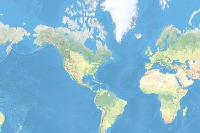

In [3]:
training_data = gis.content.get('b9602a576cd54bc6a8e0279a290537af')
training_data

In [4]:
filepath = training_data.download(file_name=training_data.name)

In [5]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [6]:
data_path = Path(os.path.join(filepath.split('.')[0]))

In [9]:
# Prepare Data
data = prepare_data(data_path,
                    batch_size=8,
                    imagery_type='landsat8')

For our model, we want out of the 11 bands in Landsat 8 image, weights for the RGB bands to be initialized using ImageNet weights whereas the other bands should have their weights initialized using the red band values. We can do this by setting the "type_init" parameter in the environment as "red band".

In [50]:
arcgis.env.type_init = 'red_band'

### Visualize training data

The code below shows a few samples of our data with the same symbology as in ArcGIS Pro.

- `rows`: No. of rows we want to see the results for.
- `alpha`: controls the opacity of labels (Classified imagery) over the background imagery
- `statistics_type`: for dynamic range adjustment

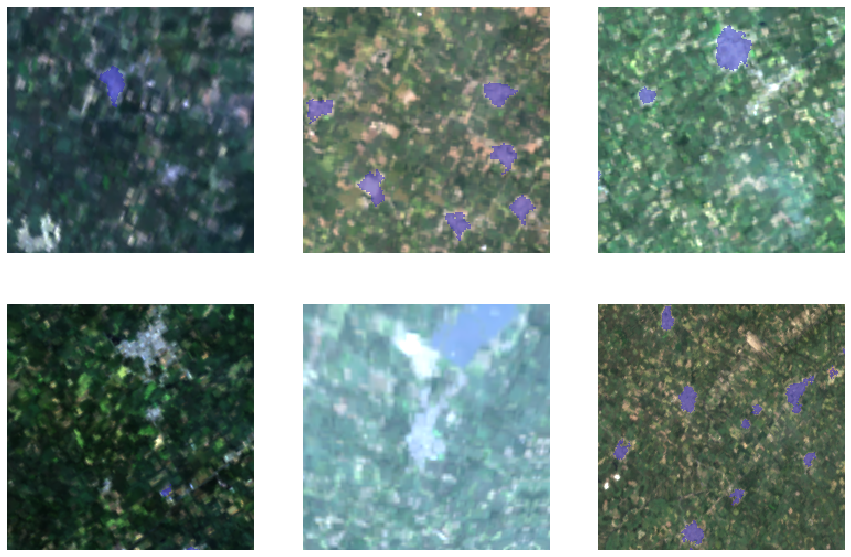

In [52]:
data.show_batch(rows=2, alpha=0.7, statistics_type='DRA')

Here, the light blue patches show the labelled settlements.

### Load model architecture

We will be using U-net [4], one of the well recognized image segmentation algorithm, for our land cover classification. U-Net is designed like an auto-encoder. It has an encoding path (“contracting”) paired with a decoding path (“expanding”) which gives it the “U” shape. However, in contrast to the autoencoder, U-Net predicts a pixelwise segmentation map of the input image rather than classifying the input image as a whole. For each pixel in the original image, it asks the question: “To which class does this pixel belong?”. U-Net passes the feature maps from each level of the contracting path over to the analogous level in the expanding path. These are similar to residual connections in a ResNet type model, and allow the classifier to consider features at various scales and complexities to make its decision.

In [ ]:
# Create Unet Model
model = UnetClassifier(data)

### Train the model

By default, the U-Net model uses ImageNet weights which are trained on 3 band imagery but we are using the multispectral support of ArcGIS API for Python to train the model for detecting settlements on 11 band Landsat 8 imagery, so unfreezing will make the backbone trainable so that it can learn to extract features from multispectral data. 

Before training the model, let's unfreeze it to train it from scratch. 

In [54]:
model.unfreeze()

Learning rate is one of the most important hyperparameters in model training. Here, we explore a range of learning rate to guide us to choose the best one.

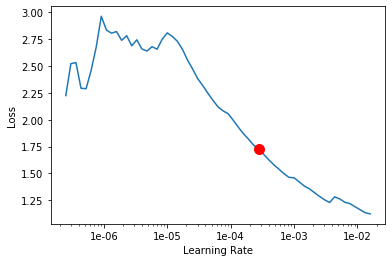

0.0002754228703338166

In [55]:
# Find Learning Rate
model.lr_find()

Based on the learning rate plot above, we can see that the learning rate suggested by `lr_find()` for our training data is 0.0002754228703338166. We can use it to train our model.

We would fit the model for 100 epochs. One epoch mean the model will see the complete training set once.

In [56]:
# Training
model.fit(epochs=100, lr=0.00022908676527677726);

In [11]:
model.mIOU()

{'0': 0.9821453002296315, '1': 0.7511354937467614}

Here, we can see loss on both training and validation set decreasing, which shows how well the model generalizes on unseen data thereby preventing overfitting. Also, as we can see our model here is able to classify pixels to settlement or non settlement with an accuracy 0.98. Once we are satisfied with the accuracy, we can save the model.

### Save the model

We would now save the model which we just trained as a 'Deep Learning Package' or '.dlpk' format. Deep Learning package is the standard format used to deploy deep learning models on the ArcGIS platform. UnetClassifier models can be deployed by the tool 'Classify Pixels Using Deep Learning' available in ArcGIS Pro as well as ArcGIS Enterprise. For this sample, we will be using this model in ArcGIS Pro to extract settlements.

We will use the `save()` method to save the model and by default it will be saved to a folder 'models' inside our training data folder itself.

In [ ]:
model.save('100e')

### Load an intermediate model to train it further

If we need to further train an already saved model we can load it again using the code below and repeat the earlier mentioned steps of training.

In [ ]:
# Load Model from previous saved files 
# model.load('100e')

### Preview results

The code below will pick a few random samples and show us ground truth and respective model predictions side by side. This allows us to validate the results of your model in the notebook itself. Once satisfied we can save the model and use it further in our workflow.

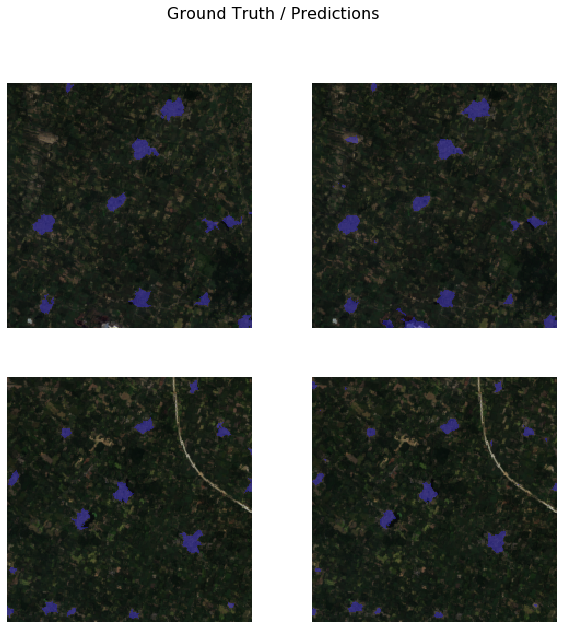

In [57]:
model.show_results(rows=2)

### Deploy model and extract settlements

The model saved in previous step can be used to extract classified raster using <b>'Classify Pixels Using Deep Learning'</b> tool. Further the classified raster is regularised and finally converted to a vector Polygon layer. The regularisation step uses advanced ArcGIS geoprocessing tools to remove unwanted artifacts in the output.

### Generate a classified raster

In this step, we will generate a classified raster using <b>'Classify Pixels Using Deep Learning'</b> tool available in both ArcGIS Pro and ArcGIS Enterprise.

- `Input Raster`: The raster layer from which we want to extract settlements from.
- `Model Definition`: It will be located inside the saved model in 'models' folder in '.emd' format.
- `Padding`: The 'Input Raster' is tiled and the deep learning model classifies each individual tile separately before producing the final 'Output Classified Raster'. This may lead to unwanted artifacts along the edges of each tile as the model has little context to predict accurately. Padding as the name suggests allows us to supply some extra information along the tile edges, this helps the model to predict better.
- `Cell Size`: Should be close to at which we trained the model, we specified that at the Export training data step .
- `Processor Type`: This allows to control whether the system's 'GPU' or 'CPU' would be used in to classify pixels, by 'default GPU' will be used if available.
- `Parallel Processing Factor`: This allows us to scale this tool, this tool can be scaled on both 'CPU' and 'GPU'. It specifies that the operation would be spread across how many 'cpu cores' in case of cpu based operation or 'no of GPU's' in case of GPU based operation.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAApQAAAIvCAYAAADKwkuKAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P1neJxZmiWItX5JKymf0exqpad3dkaj7Z6ZHSPN7Oyo1T1W3ds9XdVVlZVVWemZzKT33gIk4T1AeEc4wpAwJOFBeO+9997bAAKBQEQgIgAcve+NCABEBplIpiXzXj6HiLjf9d/3nXve6+KPQM47qxV/dKEZf3RFQkJCQuJVOKj7391qlZCQkHgr8Uc3W/F/uNOO0el5TIyPY319HUJQlrf0IaZ+ATGNEhISEhKvwkEdE66EhITEW4kbrfjfWxOUoyPDwLZBQkJCQuLrcEA3tKiWkJCQeGsxoljH/MICxvcKyqGhIeg2NiQkJCTeGhiMRhg3N3fA362F+6Y4qDMa9BISEhJvLTaNBiwsLkpBKSEh8XZjYnISXd3dAn39/ZiansaGXm81rAVb29vQGwwv+LEQZX/L94O6vWlISEhI/BBgvtom/tmL78qY3g/m028sKPWkRLeNemwRLH83rIT7OYDbwqC3fk1CQuKnARaFkZGR8PX1xYMHD3Di5EmEhIa+lFiZGNc1GmRlZ2N6ZkaMaLL/5tYWRkZHkZubuyNGD+r2pi/xetggrv259jUSEt8UzHtsSJeVl6OwqAilpaWoqKjA+MTEVwzl/bAYzvuN7v0G9V58Y0GJLQPWlWsoHVhB6eAKSuhvzbgaqp/bi0713dJp4ZfUg3dzl6DWGyTRSUj8hBGfkICe3l7Mzs3h4sWLiCCB+XWWOgtQd3d3zMzOClE4OjYGewcHIUotcQ/q9qf9AoiIt4lbmV8tYGNdcsoe6Dawuq7FmtbKNQkJia+ADWAWk65ubsjJyYGHhweOHTuGbPrM16zFYfC1ltZWJDx6hFWVaofr2L9/YEBwp3J19Sti8+CCkgJCr0VR0wwOxw/hfM4kbhJuPR/H3wX048mMDls/p5E6qqtRp0Nx4zRCO1XQUPtI8peQ+P7BljUT3H7sJ7f9iIuPR29fH+bm54WgjIyKEvGshWVwPorlZfj5+cHbx0cQrLOLC8LCwqBaW9ux8A/q9qdvgWGTxKNajefti4hvWsSjZtPforE1qI1yRI6hNxqwOjqPP3dtxeUWDelt6+EkJCR2wQKwtKwMT54+FRyUlp6OM2fOoKCw8JWCkmdk+ogrbWxsxEwO8yA7Xi505+5dBAYGQk2C8bUF5baBxFP5KP4segx5kxoKZdnhaMCKQo2p1V3i05NlvbMDkghxbzo8RbxzjbB3uthIxIpNPYwcn9MnsJW+E5f96fomh6O4RnPcjX1pbu4nGxbDVq7vxOO8KN3d8KaRWEsdLWU0vFAvPbTkRxEJprgivS1z+c3h9pfFSMS4kwblyflIcpSQOBg0Wq2Ygp6cmhJrIC3gaR1rFrMFLBzZ2h4YHMTi0pIQlNExMS+durGA43H44OBgQcQ8bb6iVL4gRA/q9qYrwLxE/NjeMYP3YoZxIXcKnmUzAo7PR/FexChqVcQPezjy5wq+r+srKiQ3zKF8VieXGUn8rMB8s3dDoQWvMogZLBpLSkuR8uSJ4KDUtDTBYzz9/SpByeC0BwYGcO/ePWFEV1ZV4c6dO4IDmWutTZkfSFBuUET15Bz+F88ehI6QmCTRtPf63nWELPZmxhVwzp+EXf40MsbXhfjia1t0bWlKAfu8Kbo2BfuKBYytsVglEUbX23sXkNSvQu/gIuw4TO4McibUMFJ+nP7kmAKPelfR0jMPu8JZtCxpxTSRblEJlwJTmnalc2hb1u3kKUSoag3BZdOmNItnUTmnpcY0YH1ZhbDSSdzLnURIJzeQHnpqkC2NBul15vClCxhY1WGLwk+NLprKnjeNpAEVicMNtFJZ4nvXoKO4i1PLeNiyjK6xZXgWcv1nULdEcemaqD+lMTiwQGmY2ialcxlPW+apPLodcSwhIWEdTFZrarUgx9NEiqdPn8bZs2dx4sQJuLi6ClFpjeTYb5A4zdPLC2lEqMUlJYJUOQ5PYVuLYwGTLq+Z5Gnvq1ev4v79+0LAMplbwhzU7U2XYdTr0FY7hn8eNIi4QQ0MbGCajVhsbmBpZR3LGqq3Obwwxs2GNnPw/pHLnfj7DGEBFq/kZyTjlbnPEu4Fg5fS36Z0N/kvXePPLwwS7Emb09mJZwnzQv4mzmajm+/bNtdpj78lDhvhnJflmt58TRjne/05vAi7iW3zIAXfN+Z/UV5z+ttUhv3tsre+W1w//r5voENC4qcIYUiRHmGeGhoeFlxkAX8fY+FG163FZfAGnPKKCjx99ow+AekZGYL7WGTyNWtx9sJI/Mfc6eLiglOnTiE+Pl6IyZcJ2QMJys2tDZSUjOB/jRzHDL284uUmiDU//CITeJSNBVZb5zT+NngIDzoVyG2axN+EDyFtgoXfBmoaJvFu+CDuty6jYEABn6xh/GXQKJqJNGHQ4WFqD/5PLr04WzJP11cQWzqKf+3cj+RZErFEKk0VI3jHqRu25QvI7VNiel2H3p5ZfBDSD7sGBcVZRkTJKP6j9xDyFZQnkcvs9BKOhfTifNkCCvqWEV8zidheDdYUCnwSNIC71Qso7J7H51H9cGhSkejVIfRJP379ZBLZ/SuILCeBuqLBcN8c/i64D94kGDPblhDfskSdygbCk7rwvz5ZgHZrE8PNY/g/2rThD+kzeN6vRFT2EP5jxAgaVkmkUtiWtmn8tV8fXJup/j0K2D3qxTs2rXDu0kqCk5A4AJiweJTyWWoqzp07J0iO1wWxmNwr8vaCya+js1OsG8rMyoKzs7P4y995TeXLyJEFyygRo6Ojo1gzxKOi/v7+8PD0xMzc3I4QPajbmzYb6bqZefwHtw6ca1mzKhBZQFr8WAQtTCzB+fkErmZNwK1pBasbZnHGYtGoQ2PnLC5nTeJm9gSuFM+jc4UNa9N17fwK7lfNo29OjfjKKQo3gWtZMyhb0BA3UT4UZm1mGUH1S+iaWIF33gR8mlewxkKSrg8NzOOKOe1LBbOomCfOIn9RVs6f+K2nd06EuUFhbMvmTYY9lVtLhntk0QQuZ07gTsUC+lVkXFN/wSJVPbcMFzKwr1OcG8ULGFGTcb1pgGpGAUez/62SBYxrqb9RreFh1QxyJrViFmh2bBEBdVTeSSX88qlcGZOI6lqF2txHCSFL+ZQ3TOFa9iSuZk8hpkWBrJYZPBr86nSdhMRPDeK9JCOaRxYtxjMb0idPnhT8l5GZaXXqmcH8xOKOucvXzw/1DQ0ICgkRcUNDQ8W68K8b4WRO5SlzOzs73Lx5Ez4+PkLMvmx0k8vxtYJye1uLmNQB/H+S5nemoI0aNTLqZ+FRPANfIqoaIphNzRo+8+mCXYeKUuGpYANS0/vxV5kLWF5Zxe/pmnuvWvgz0WBjDefDunGscoW+b+BReh/++yBS4hoiKBaqW1o8TOvH//J4BkSdaKsaxv/5/hBaVpjEyTJdV+NMYBfO1VF8S5qb6/BI6MHfZS3CuK1DQEIv/jZzHpptI10ngqHyb29qEfSoD7/IWBAWL5d1pnUC/yp0FL1qFd537YJNm7kORJqgdLLyB/GnQdRI7Edl2yQih16HqKc9+I9pi2ZBOY5/6N2HrFkiUlB+mhX82qebBKMa25TuZ76dsG2nzoPLStdVk0v4Dx5tUlBKSHwDWIRcUnKyEHss+l4mJi1gouMwvMA8ICBAkDR/f5Wo0Op0cHRyQmhYmAjP0+PLKyTMfH0FsVrI+KBub9pb2xuorRjFnxCfdRDfWYz0F5YEEV+xYNwkbmhtn8L/5jsA3zYFKvrmcTK6D4eLlqEjPjNo1Qh4PIBfJIwjtmcFFcMK+OcO4888hpC1RLxMAk3bP4n/wbYV/yZ2HOGtClSOKOD9bAD/s+sQspe12DIaoOyawP/1Tic+zJzCs+4V1E6tU3k0eJwxhL+JHEFI5wrKh5YRXT6KP3cdQMz4uhB2xo114sFB/NeYUUR0UZi+JQSWT+H5uA5rS4v4yLcfl8rmKK4CnsTnf5k4g2kSw/PjS/gwoBvnKhZRMriC0JJZdJOgnBlZxO/8u3G5akn4h1Af06Wmdp5fwl+7t+FMIw8wGNBbM4z/5mYr/iZlGhl9SjxvnMEvqY+xaTPNGG3q1xGfNoQ/DxlEGJWrtE8Bt6Q+/F9uNuG9olURZu89kZD4KcLCdwUFBbhy5YoQlJcvXxYzLcxfluv7wfzERnDO8+fIp7ghJCaZ+/gz+/Ho5tcJSs6DZ2YyMjLEzIy3tzecyCAfHhmxmu+BBWV8+gD+TeQUVs2WtEGrQQ29oOmN0/gL9w5cblLDsDCP/5ddB/595DA+fjSCjx4N42/8u/BXqXPoGJ7Hv3QfQI2YAjalu0lppZBQ/f8lTUMLEpRpvfgPJM7W9QZBsGyptteN489CRjFOBNJSMYJ/92gasxumaQ6lYhF/5tqLpHEiGIvQJVFZUULhwscxbVzF0YBe+PSQiCULWtSHKgyNEl8EdOJP/QfwCZXzA8L74b3456HDaFreQEbOIP6JRw8+yJrFEBEcr53kBeH/2bsbf/ZgGMnDKqg5HcNeQWnEYNM4/nXIMFrVTGY8dbRKIrIHN1pU0C4u4F+79uP5jFk8csexvIJ3gzrh2MnlN5dPQkLia8FkplQqxXpKw0sIdT+Y7Hj944OICCEsXyUmGSwou3t6RBwLeTIB85pK3txjCXdQZwmvIzEFYrzkzAH8gwdTgksEp5J4HJtQILB0Fj7lswhvVmCA16arVvGReyeuN69SPDaAt6AZmMK/9OhH7poePTUj+BOvAVSoKF02mtmwNqjhGN2Nf/+MjGn6rhuYxn9r34nL9asUm8UqQa+GU0w3/nXKHPTEr6ruCfw3Tt3w6F6nPOg6YbRjEv/StQdP5nm00Zz2lgaRT/vwz2OmsULfB8iQ/qduvchRUFtwGDLCmZ83jVp4RXbhL6kMOnO5sbyM97274D6iRlPjKP6BwwCa17k9TOvl2XivqBrBHzsNoUtnKgOPMgq+nFfgb+534FIzL7siQVk7gv+O8o0l4Woqrwaxqb34k+gZqKjvGGmfxL+gsqcumcrFYTbmV/C+Vwt+W7wqptV374mExE8XzFXMPTxaeOPGDSEuv84gZvB15i42hp/n5iIzM1N8Zr9XxeUwdfX1Yq15bl6eCMujkrw5hzfk2NraWuVQ/v61gtJA1utI6yT+mc8AylX0cpoFIa8JxAaJtpBu3GhWQ0+C8t969CFhZB1r61osqLRQkCDbIKKYGJvFP3cbQOUeQcnrWRKfkcWaPENy0iwoUxehpsqyoORpnvrKUfzb4FFMEuE1k6D8i8RpzJHgZMJaJUH5FyQoH/E6TfP0C4vUsuJh/LuICcysK/AL714EDBAB7RWUWhKUQd04W6OE2lzOxTUt1FrTmp9NSqu/Zw6fRfXjH3mTCJwmEUjpqlfX4Z85jP/g1YX38xehM+oQvU9Q/r+Dh9FMJC8EpX4Vn5KgvNVKAnR+Dv/MZQClTMwWQbmixG+loJSQeC0wKX6dhW0NPGVuzd8amEQtYtIC/r53RPSgbjcNFjdaPMkawB/7jGGC0ySwoJyaWcHjxgUEPR/Af+vUi4QJHdRT0/hT23bitCF8Skb6B4QPI/vwfyexFDulQXxKH/5p7Ay0ZqOaIQzrwiH8M98R9NDnjf4p/D88e5A4SZxt5l/eXV5ZMIh/FTKGIRaUnRP4E79BlC6TiOMZGCpjVt4g/kHQOOZ1xNB70u6sH8c/cx1A0ybVI2MAf54wCyVx2s60PfHflmoJv3XvwD8kw/0zc7k/jR3A/+TcjlP16zDMKfDe/S78SfAAbGuXoWDOJO5dn1zEL0l0/pOQQdjXr2CZ0hWbGfcJym4W0lTeahLSvHGJy5uZO4g/Dp6EekuH7Lwh/I/BE5in8ohyMedSJ3jxQSd+XaSUglLijQKLNRZpIyMjYt3kqwThfjBf8cgkL/M5CGcyx/GIJC8V2u+/pFCIEy+srd08kKDkXc/bdPFaVDd+kzGHuQ16uYmAyKQkllzF4eAuXG5cI3GpxlFf+lyvpFToGoXZ1OuwRmSkXVbiI99O3OvgKV+6xhalhsRocDfO11L4rQ08Tu/F3wsdxzRPefN1nRo3yMr+azF9bUAjCco/NwtK3sRiXFfjSmgXjlYsk+1rTpMs83sPe/B+3hI2t7VwiOzGL9LnoCLBx+VhotTwyGJyH/5L8izWOA7XhQSncl0n6qsRhE8WtX4dx/zbcLxORQ1pts4pp76qYfwjErnjaj3iU79eUN5sUWFTtYpfe3TiLn0W5SSM9s7gXzm2waVbTnlLSLypOKjbG4fF3Hj7JP65E4m8RTIySeSxMWvaeGOEcmwK/8K9nwSgDqrxKTJG+xDSt4YlMmonlhkaMoJ1MGytIyKRBeWsmP62pC8EZdFXBeXjPYKSNzsW5AzgX/AyI+LAVRKU/9R/CFV7BZoQlBNY2C8oG1hQDqKFOD/gcQ/+bcoCDHsFGvPf6hJ+7dmFLyuVUJjLPU6YW9VCRca7gcKtk7hPyR/GX/h144+DhlGvMA04qDVaPHo+hD8n//8hZAStq9QuC18VlP+T7yAqeI26ubwZLChDJrFO3C8Ee/gU1MTnewXlJRaUhVJQSrx5YMF2kJFJa2AByOstrV2zBhae1tZKsqh82ekYBxOUBF5ArVGswelZP37zeBJxZEXHEBLKxvFPiKgCB9bFiGNb5yT+nXMvrlXOI6FxHh5Fk8gcXycxpjcdjxHSh9uVC4hvmcedtGH8IXkGUyzgSOQ9yujD33fpxcXcGcQ3L1Beg/g3YWNoUZqmW+pLh/Gv46cwS4KSrXlevzMytIjPgk0beRJaFuCeO4JfxUyim8iWF5vPzC7hE59ufJI9jYSmBfhkjyFiVAvNIpGddw8+yphCXMsiQksn4d9BwlGnxL0Uql/zIiLKpvH+gyEUKtaRUTcNr8JZJJD/tfhBXC5fwgaJ0IidTTlGDDSM4U/9htC4R1D+ngj1YsMqiVY9Glun8F88+uBQT/Wvn8f1hD78j/Yd8OiRglJC4k3FQd0L8YgfoFbjTgzxR/w0xrRs1JIwIk5jsbQ8Mon/2a0PCeM6bKuV+NCtE9eaeMrbFI7BO6KN9Le1agR/6j2IajJwRRokVtmwdonpxr9/Yp7yJkH59515ffu6MKDF7NLaKo4Hd+K/ZC5ig/xWSFD+ExKUlWaBxoJzWEwb9yJtkeppSXtLg5hnffgX0dNQEq9VEi//Y88B1CjN+VMdxG/7GjXwjOjCXz6dJ6m3W+6dEy3oL3M0G+ksFn/p1oZzzdSPUPwdf+Lvv3RpwzVeZ754cEGpovh1laP4xyTKS5dN+XK9V6cW8XeuLXivRE55S0h81ziwoLQEJlpEXfsCgirnEFRtQnynEmqz1cu7uQeGFQjl64THHUrxcrOFyGQ0N7WMkCq+NovI9hUsk5jkoyt4g0tcWi/+U9oiGnoXEUxxQ+oX0UNiktfWMHnOTa8ga0gFlcXiJPBUiGpBiQc1pvzCmhWYWieCMZeHp+vVChXia2fF9YjGJUxpWOXrsbS4ilguCyGkVoFpssL1GxoUkhBmv6DqBdQvEJGRcBwdX8YDrhP5x1B9tRSfLeze4SXkjKiF9bs8r0R69wrmyfrmKSxOq6xzCfXzGiGAWXAPDC0hhNOpW0D32DI+JEJ3kFPeEhJvLA7q9sdjQaNVquGe2IN/Hz+BZLHpZQVlw0o8zR3A3/MeQDZv8CP+KSfx9M/semHXvITyESWK22dxr2ZZcLJBuwav+D78b3FjSOxXooZ4JbJwBH8ROIIyhc60KWdgGv/dvTb8i6gxPO5aQT1xtENKP/40aBT1xLGbxJPLHRP4ExKmZWaBxlPzvOEmJnUQ/+nBMCJ7KO3RFSRVj+E/keH8ZFIj4ul1q3CI7MOfhw8jto/C9C8hqHgSWbMbWB6dwZ87dePz3FkUj62iqmcB9uULmF3XoqJnDg/KF1E1vorM6kn8dcAAMpbXUdo5h8hK8qfw6ZUT+CvyT1+mdl54cVNOV+UQ/rHHAEpFeblv0uJpVj/+b/7jWNIZqOwquMX04f8bOoYno0pUDCzD8VEv/r5NCz4slYJSQuK7xjcSlBYI65Ze6B2QULIIPAaLtZ1rZjFpufbC4eAUz3LumEVQ/vmzBei2TDup2Qrde06amA7al96O/540Wbztvc7E8cJ1a/HI0rb47z8Oif32l3uvoLVsCBL5UPksOzYtaXEaYm0mp2FJG5tYn1zAX/gQIa7IcyglJN5UHNRZiys4g4z09q453EobF8f5XCFcyJpERNcqdGa+4zAtHXO4mW4KczFzBo1KreBPYegTfxbVT+FcxgQuZ4zjVtkCBtfI37xee71/Cv9Pnz48aFtFcME4LlCY88Xz6FultDkMpbE2rYB35QKGyCDf4VBOm643tc3gPKedOY5rhbNi86JlXTrXYYvyz6umcmdS2dIn4FZNhruW4hKvTk8twZnKfZHKfT5tCmmjahixgeHRRTiwP6V5LmcGlWR4g/wHhhdhR/6XyP/88xnULvKxc5TH6hoiy6eQOWE6Noh3g3tWzO+U17ipQ2fPPFxrFFDxFD2Va1OvQWoptxchZwpFAyu4HtmBXxYoRbvsvRcSEhLfDq8lKL8PMCE+fNYjpo/XzLu8rYV7I0GNvKnVIL1tAQ1EmloiO9WaEueDevB+7oJYTL9fJEtISLwZOKizFtcC8Sth5rXVFojzIfeE4ZHG3et7po7N4LWNO9fZQLZcJ+GkIUH5jzx68IjXUO6EIZ7dmwaF4wPCLYb1XvCaz71pWzOA9x4gLgYLyI8NaV5bueNP2GIBSxwojPQ9/uKw9Jf5cx6U5xaVT+z6pu+8lovrsLe8oh0pb1N4EqHUhjuHqvO6+JUVfOzTDcfeNSFKLfEkJCS+PX4ygpIt3KqmKTg3KrFOhXrbBNamUYeajjnYZEzibv4UbjyfxP3GFajp2oYVcpaQkHgzcFBnLe4PArOg/IckKOMmSKxZBNrbDOpDDCsqpA+roGeRyaJyax0PUvrxr8In0KsmTpa8KyHxneInIygZbMlappjfRnD9+LgjsWCdP5OF/MIIgYSExBuHgzprcX8QENdoBqbxT3x68fhnJCi31Ss4FTmA9x4O4aOEYbwb24+/ip1G25JWHGVnNZ6EhMRr4yclKCUkJCTeNBzUWYv7g0Gng2JNK45ws3r9bQQZ62qVFuOKdYExhQbLVH/eRW41vISExLeCFJQSEhIS3wIHddbi/pAQG3is+L/N4OVEXG8L5PIiCYnvD1JQSkhISHwLHNRZiyshISHxtkAKSgkJCYlvgYM6a3ElJCQk3hZIQSkhISHxLXBQZy2uhISExNsCKSglJCQkvgUO6qzFlZCQkHhbIAWlhISExLfAQZ21uBISEhJvC6wKyuHhYXHBWgQJCQkJiV0c1FmLKyEhIfG2QApKCQkJiW+BgzprcSUkJCTeFrBunJubk4JSQkJC4nVwUGctroSEhMRbA9KN8wsLmJ6ehlqtfn1ByeH5x/qlEJWQkHibYOG2l/HbQd3+eBISEhJvG1hQzszMvJ6gNG5uCqyqVFAsL0O1trbjZy28hISExJsC5jEWksrVVSwRv6nX17G5tQW90bgT5qBub7oSEhISbyNeS1AaiFA5TGtbGx49eoTgkBCEhYUhNDQUcXFxaGlpEdc5nLX4EhISEj9VMG9ptFpUVlUhJiZG8Fuomd9SUlLQ198Pg1lsHtRZy+frwBx6UONeQkJC4vvCQXnoGwtKJtEFivT48WMEBwejpqZGJCDmzulvfUODIF8WlrNzc1JUSkhIvDFgvhoeGUFEZCSio6OF0Tw3P48lhQITk5MoLSuDv78/MjIzxcjlQZ21vKyB82eOXddosEakzOCRUb7GI6ZSYEpISHzfEDxE2M9DzD+v4qFvJCg5EybXgIAAZGdni0x4CohhIULOjP1z8/IQFBgoSPjtmgKnBjXXWWDTiA32pzbj+ovP3xksa1NN3zf0BmpnA7RaLbQ63b6wL4NejKbslJdgMOze3w1KX7/n+zfGN603hRejO+Y6WbBhMNJzYm7Ll+Bbl9UqqPzGF9tH3NN95fu+wffWSO/Qd/v8fAPws0Xta/XazwTMUzz66Ovri8qKCsGD7MfCcWBgQITh50NB4jIpOVmIzoO6/XnthyWv8YkJwa0sZkNCQhAUFIRIyicxMRHNLS1i5JS51loaEhISEt8GFh4aHRtDZlYWIqOiBA/x4CHzUHJKiuAhHekP7vf3xz+4oCQ/FjE8BVRQWCiIlRNk1VpZWYmioqIdkcPxt7a3UUGk/CAiYkfZfiXNNwx6I4uNdQx1tKGlrU2MXnT2jEKp34S6Jx/27pEYUm3C8F2IEcrLOF4Nm9s3UTJM7Wmk9ltfRUmcJ27dsUFCUTe0+q2vESB6bOjWMDkyiI52U3lb2rowo9QK0bRp3EBDohNuhOZCubH9FZH3tSAhtt5bAHu3BxhYPUC9+RlaV2J8ZASLazp6Jkz+/GysLc9iaIweRC2V2Uq8LcM6SqNtcedhOdYN29+R8OL2Wcfs5DC1T7ton9bWVrQNTEBr3BbtYz3edwuuv1o5h9GJWah1Vur/PcOwuYXJ0gc47xKBMdU2jAbr4d5msEjjUUgefezs6hL8xveF/UtKSnD5ypWdGRfmPf779OlTIRYP4qzlaQGnx0ZiQUEB7vv4IDU1FR2dnUJcTk5NYWBwEOXEpYEkLllosh8bH9bS+tGhN1LbfNeGtRlmo0u/z48N1O/cGKN6fBdpsqHM7WHt2veFje+o7BKvA+aM70gD/MBgHuIRyby8PPgQD6WlpaGLuHBychIzs7PCqC4tLUVAYCAePnwodnPvHyw8sKDkiExqrFJZOHIYLgBPAd26dQt1dXXiuyU8XxcClDLmMPszftOg39yGaroLidEu8PKKFMI65mEY7C97oUGpg6btGU5f9ULPKglBepjEaCITnRWyE6NR5mu7o4WmkbKd8ERE+qVhZGVlom9+A9t0b8ZrEnCG8psiQbUl4r5IVDxErd9770jobik74XzmC9zyiEBsbCzCvJxh43of1SOrwKYeo015yKjsgnqD0nuhPF8lwxfKxy8MiV51eyrOXPFA54qp3oLgzeH2E+kGteH6WB1uHD+O9B4lpWPKy7hlxEBhIA5f8sXoCuVJZTCNWJrToXoa9Fr012Yju24AGiJMy2gtj1qa2pnrvpsXg9vDUl4hAva1l47ywNoEQm1O4qyDn7inDx+Gw97+LnwCYzG4THH3iKuv1H8nrb33brczFWUTddm939ZEO5d/ojoCF24FYVQFirMvjBA2pvgvtumuvyntF+8d11mUS8ThMpqej520zPeawy71V+NpfjUW1y1hrIfdm74pX3Pb7qn3mwjmqyckENPT00XdLRzIdWOBd/LUKbGkh69Z/L+LKW9Ohzcz8khAFIFHBljM8vvOjg1zzpP/crhCMuY9Peh9I6Ln9reW5vcPPTapPHvd9tamuP/rK2QYTc5h7Ts3jKg/US1iZGwCy+umtDcM9MxrljHU246uviEsqekZtPJ+WQMPDux3RsszTvdeTQbuyMQMVNYM3AOC46kWZzA2s4R1Kv+B06F6cfN+VZQYxHOwaeZNq3ih7N/PO8l94Vfc9o/ZvxvonfmadvlBQPdYs4apiVHMLGsO/Cz+FMAcs7KyIniIjVbLzDI/b8vLy0I8WniIN2Hn5uaSDiK909v7Ag8dSFDydyazsPBw9PX1mTuSTfSTYnVwcEB+fr4gQYblGmfOGKL02LLmqZq9ab5JYOLSLg3C98YFhD+vhWoPF60pFFjdMELVlopzN3zQy4KSOgnt6gIG+3vQ3dODwbFZaIjABAny37VF9PfStd4+TMwrBQkYjRuYHR8U4fuGJ7GqpbBaNZaWlgUZqZUzKHrkieO3/dDZP46JiXHMzK9AaxEFeh0WZiYxq1CJ9ETZSVBurnTC/fpF5A1ZSMCA/JBruOSWgkW6X+vKZShU69Bp1zA5PozZFY0QEjy1vKqYwfDkAqXFL+wmFqcG0N3dg/6xGRJ1ROabJCg70nH+uhe6WFDS/TbqVBgZ7KV69GKI4mqo7DvtyIJyvB42p08js/dFQTlYHIKj1wIwRoKSyUG7Ooc+aovu3gFMLarEy6laWcYyl5XKp12jh5zqr1IuYKC3G739o1jR0jMnXmISQlsGLM+Mo4fbc2gcitVlzM4poN1Tnh1Beeca4pvmze0DbKgW8MT7PK54JmNWQ88y5be5vQXFzBDVvxv9I1MkwFlwcTrUNiTMZ8f6RNsMUp1ZbIl3Znkes0tqrK3MoLeHyjgwTGVkcWbO3wwWlJM10bhyJxRj+wTlBrWz0bCOiWFTm47OrYj3SpCXToPpUcqX6tjbPwyFhupN921jQ4flhVksKNcwQ9d7hqi8GjXmZ+egVK9jcrgHXT39mFaoKS2TQF1fU2JxRQUtlXuDnoXZ2XmsqlUYG+wW92BOyVOtprAsTNUkHAbE/RnCwuoK5mbmscbPrLncbxL4Xi0uLYnRSTEKuYe/mNNYZJ4+c0Zcswg8FoL7RdWr3MvyZfBIZ1x8vPCzpD1FBM68yveWw1jCc/7tHR2CzLk8HHZvmt839AYWuyo05TzDw5iHiI2LI0MsDtmlXeS7jZl8f3xxLRADahZo1tN4LRi3oW6Iwe8/O4784W0SsEbigCXkBDvgtpMTHiSmY2Dpq++WNRgMOkz31SCZ2pzLHxsXi4exT9A2vU6GOt/3TYxnO+Pdk/fQPEei/jVnKniGo+2RA066JGF6w5pA/Cq4r1mb7sHzzFz0K3RmjiGQAa1fm0JpTibqh4gD9hl4FnDZx7Ic8e4pe7QSpb1u2V8GA/Uz051liN9puzgxWpVU3gO6RS8t1/cGHljQzKOuMAuNIyrRd1kN90OAG2ChFXdOvAvn7AnRH1oN9xODhYd4GQ/vjeHPzEP8lwcFeT/M9Rs3hAHNfsw5zEONTU3wuX9f7Kmx8NCBBCUnztMsDx48EMcD8fcVpRLu7u6wt7dHQ0ODsJg7iOgY7e3tYmG7ZQo8JJQ6yvHxH5z8visYNnWojLqH814pWCYNsrm3w6c6sbW7KyjpoTKqUZEVC39fX7H7/c7Fc4gp6cE6kdXa/CCS7jvCOSgYAf5e8IsuhBqb6Mh5CGc3VwSHBuGeQxBaZtewNVaGyxfuon5xC/OdhXC3PYuPj1xAYHQa0sPtcMo2CGNaJm7qhFZ74HrxLJLqZkmgmS1Ti6C8dgFZ3RpBLgYq3mh+EE5c98OEbgs1Ufa4FVUGDVn6yZ6ncckznToGrsIYgm+fh0tiHZVOi9b8VLjY36XyBcPR7jYinndCT2mtWwSlkjradQUKozzheN+X7rkvHD0fY5aFj6WtDiAox9e2iFC7EetpB9eQEPje90JoYhXo1URegA3sH9XSJ8q3Mx1fHjkHv6gYREYEw/XmZbhGZmJOy0aNEbODhbh7+hq8g0MR5u8Jm2uncd41GcoNnso0378dQXkV0TXjIh77U58J7XIHbnx5Gtnt1KNQjl1lOXCzs0VgaAhc7W8hKLWJxBe17/YqKlJi4ezkgNCQANjeuYuUqhExwtSdfh8nLrog7kkUGWMh8LA5A/uo55hff3F5wcsFJT1b+nlkhQfB2cOd0vfGjbuuKO5cxDYJ3Km+KgR4uiGUDD0P22twCErC1DoVXq9Ctt8dXHB0RUhQCMKTSqBcGID39VO44RWKmOhQ+Hu64IaNKxqm1EQOWxjNDcIZpzjM8sblhTbcPXcCdgERiI4KwX1nO9xy9EPXEt0retbXlT3wv3EdDu5+CAu8T3W/gaPnXNE9x53oj0jorwnmJZ5ijiLLnAUkL9FhQcecx6OSvH7x1KlTIgxP/bD1Pj8/L+Id1FnLl3mU1yPxmk1Legwmbl47ydw6Qjy6nzc5XmZmppj9YUN9P19/X6DHHctDDQh1OwOPqFzU1jWgrr4e5YXpiAxKxQzVc64wCEdvhpgEJT/jVHayD3fc1gsj7JzmrnXOo5y7/ruRWDyKEcrVeQxSeyytkYFH/mtjpbhE73jNqMYUkN66FwWNaSTVNEK/67e1qUVj4j0cueCB/OpWNDQ1oyQxEBev3cDT+ll6BgxQK6YwMDoBpYYEC1eA3pHdd5bX0bOo3U1XhDE7NjDZjwVle6Izzrqn7ApK4pzdoFTeffdOT82haEnB0Y+PIXNofVeUEyltLjbg1uGP4Zs3hu1NzpsN5918WQwz14qyj02KsgtxQG3J7b4bltpkf74kRC1XefZLDBCZ67ELXnqkQUP0bXx6zQ9F9S2or2+g9nsOT+KDO0730TTNyxJ24+29j1uizHvS2/ts7G1fEonCcKN7yRrNdJ3bak/cnTSowdZ64XXuUwQUze+712ZQejvFEOnuXtvYU292O6PUfI1HiumZ5AEydqL8er5/vA9ht+yW0XluH71mFRNjA5hUrO/0wdvUlga+76bgO/fJko8YlDBfE/eGyrS1zRtf9ob5/sD8whrOz89PGNbMLxZ/Hkjk9ZNnz5/H8srKDteI54rCPX32bMcYZr8DC8qR0VFERESIDTd8s7Oys3Hy5Emcp4wuXLgg/lpwhgQD7/RmYuZCsQXDljbfmL3pvhkwkoAcg8+lMwjK7efb/ZUwPOq4V1BubqxhanYBlu5mri4Sxy94YnTdgK4cP1ywiSWJxs4IxeIKibk+OJ08g8weYmFy68oVrGqJAEbKcPWyHermTSmNVsbggmu8SFe/WIuLRy8ir2dZvBAzNQm4fIsEpp6Iy1I2i6AUI5Smx3l7axXpPtdwO+g5NETU1VGOsIkqAWkcbKy0w+H0BaS0TaP9mRcuOcdjjhSoariURLEj6hZM5TCMV+DmBQc0KOg56coUgrJvnXRIbwbOn7THoMb0pq0sLkGt29NOXysoA0mAGlBPJHzFNc30Am7roVhaIUJUIy/oDhxJ4LKg1HSl45PDx0hAT3MoGOeqcPXYKaR3rmJrfQK+F08gNLfTRBaGRTx2OoEv3Z5g9QCCkgnIuL6EiJtHibz7oZ5pgsPFeyidoEqym2vCnQu2qJjVYKkjDdev+qLX3KepOlJxmb4P0X3oz/bG77+8iMLeZXHNuNoLh7MnEFs+SkS5+xy9TFDqyX+gMBzX7sVi1kxeE4VhuGwfjxnqiFcVc1gkAS6ctgf2Z07iceMi9WhreB54Ge9evg/SiyanHIbXtc9x40EhTEVVIt7+BO4+rBHtPJoXgvMuCWZB2Q6bs5/BOane9AwbphF47Ut4pnXTFz0yfen58c2EacLXiKZEJ/zunDN631BByfzGp1XwkUDMbU+ePMHVq1dx/fp1YZlfvnwZZ86cwbVr18R34U/g0eqDuv15MscyPzKnVldXi3tg8UtKSoKtra1pWps6I/bfC+ZUNuh5cySvceLOf3/63zV4XZ5uph1O579EcA4Zx1TebWorbi/R+W3ohCiZ3iMoN+n7+vIUaorSkJqegfSMXLSMLInnmtNkgaMYqkOGuJaJ4oYhrFH9uM6LAzXCP438S5tGoKZ7pF0YQW1jJxa1m1BNtONpjAcOk9EXFJ+O0upm1FZUYpBnM4QoIOhW0F5Vjo7RBeJoi9AwCcqmFAdcdX+GRaIA7sQZJQFncPJuAqboZqinelHXNkB8sYm5nkrkVrZgXkWdKHMDGWx9jRUobhmjdjGNVE+0FyGdy5uZg5Zx4iASHywG9wpKI72zhtVpVBVlifVpGfk1GFeo6X7uvjMsKJepLznz5VnkjGheEJTGpWbcO/klggrHhaDkd22srYTSSqd2eo663hnoyF852UNlHyTj2Qjjhhoj7fVoHV3CaHuxGG3PzCnDqJLa2Zyvgfh3abwLBXQtNTUL1Z196GlpRNsw3Su6H5ay7QjKGDtc8suCidVIWNM/o06JVK/jOO2UiOl106wOi8H5vkpkZqSL+1s7sCjW7nNaG3RxQzWL2iLKk9oip7wJC2oqL9/nlWk0VjVjUrmKjsoMPKP6PS+uxLSa8tkjBgVI9G2t9cP/6lGEli58RVBuULsZtCtoLsugfNKRVVSNKSW1HdWdr61O96DweSq1XwYysorQv0BtTmnwe7Y60Y3q1j6MDrQih65XdU5Dq5xAbW0bJuenUV2YimepmahoGcYa1UcsEVIvoqOpCUOLakqfn9lhVNd3kR4YQ0XeMwpP7ds+Bg09CyZRSc/J5gpai3KpjTKQ+bwc/ZNDaKjtwKKa3vUfQFRyXQMDA9HY2PgCl1gEJW/KObdPUFriqVQqeHt7i82MrO8OLCh5bQ+vn+T5c47IGxguXbokiJUz5GltC3jqiC1oXuDJheK1aeLsNkpnb7pvBEiUGdXdcL14HokNC2Ld4f4wLwpK05Q3u7neSiSnPEF8hDNOXHRH/woRZXs6zp68hPCnRRhZMnXtxo15xDtexCWXMJS2jglrhQ2vFwXlJvqKI3DOKQYqEkWbBjWeup+HG3X6xm0dcoJuwulRkyD3nbKxoFR2we3icTgGJxFZPEHofVfYOQWjh8QgxMirSVCuUaZseXU+D8OV65dx+awdysa529Ch6pETjp1zQkpqGlKePkN6QghOHjqBtH6ywrpNgrJnjUTebBPunT0Ft8inaBs10c3eBfRfJyiPXA3AJCnbaRLHJ05dQ3RGOaZW+fBooizD2guCUt2ehnM376OPBJiRSd04Cd9rFxBZNgbVYAaOHL2LjlmtIHZqBXQXBOO6UxJWDiooNYuIuXMC95+3oSUnAEdP3kXSM3P9EyNw9vNjeNI5itygWzh905dIL5WupSI12htfHL6MqoVt9Kd744JTPGapbdm63trcQGHQDdyKKBTtbbFSrQtKsmhJyEXZnMEVlwdIS30q0k8OssPhM47oWDEpTOPyMHLSn+DJ0yhcO3ES8dWzdCPVyPa7DNv4OtFBMelCOQjvm1fxpH2JOiNuES2q451xzssk3F8UlG2wu3IL+aPr9JyxZa0mgWqDG+EVrORhc+IskhsoHxLFPDq/MpGP6+dd0fkGC0o+7uxxYiI9aUBTc7OYymPLOz4hQczEnKZnlsUff+cpIA7Lv1t7ULc/T+ZYnu3xIjLmUU8uA/Mqb3BkAcvrNhcWFwWYpBlzBI7DMz/Mqzw6YFlutD/97xY8EqZGeegNHCdjZpbFkZWObr+gxKYGrZXpiI55jILiEjyJvI/LF28if1ApRozGap/B5ZY9Hubl43lOMgKC0kGvDUarkuB82xFx+QXIyUpCYGgWFsl/vSEOh47boWmFPk93EQ/54MsjpxGalIuG6jJ4XfwYds86iGfoHeep47ECXCHBmda+IkYdLXUxCUpHMlqTMU0UzO8mc27Hozv48lowholgprK9cOhaCIbo82LHc1z64nNEkSHIz8c8cc/FIxcQT5wBMquqkx7AxsYNTwsKkZPoi0s3PVE1ROYWGcMWQTlD75V2eRSP3WzgEZOEvOIchAU9RGXvFAns3X7xYIJyghsXrelBsHfwQUpRAVKfxCP6cTm9qcB4pic+vxGGIe5eNhTI9DmL3xy+hIiUbOQXFSPS6RKuuUahf5V4gJ455WwVnM9chueDZBTmZyE60B6fvvsu7J700PW9As0kKBsf2uHC/XTM8+CF+Tkw0DO4PFSMi5+dQVYvGbXEL+15j2Bz3QFJuQXIfxaKq9ftkdO+iK0tMjRWOhF06x68I+NRUJiNEI9bsCdjl7QedKMVuHH4S9y874XEzHzk5+Ui5N5R3AjOwtTaiyOMrxSUvNZeN4xoe0e4BkUitygPMX62uO2Xiuk14n7DMgozHiMxid6johLE+9jikq03mhf0VO8tzBWF4HcfH4N7RDTSSGzW9y/AMPQcn3/wPq56hCHtOd3v1ETcOXsckSUDEOMoCy2wO30KEcSPLKg3Op7gg9/9Abd8IpCZV4Ss5FjcPnuanp0x08ZPkuWlse44e84dqfT85KaE4+bpz/DBWU90/QB8yjzES2c8PDyEeOTvzC+WJYo8W8IjlCwoedOi5ZplZoR5iHd+89pu8W4cRFByJCY2nr617HTkMHwW263bt4UlzRmxdW0Bi0kOwwVigclDqfvTfTPAFvMSYu9egE9qG1ievDhc/aKg7OMHfmUMicHOsPd8gMKaGuSnB+IcCcreRQNxjAoD7dXwunUSX567jodFPeIFU86PIi/OiwjyOK77JWBilTrysXLrglJnJELexEhVHO74pEAx1w9POztUjKzuWJ0CFkF5+RT8k8pQQ9Z6eU0b5sny2aQXb8u4KyjVxKg8jbMyVoVLv/3P+OByBGZZaWyqURhhg6M3AlFeVSN27pdTp1fb0I5ZsijXOzPMayi3saXXYHqkE7Ge13Do2Fl4PC6Dlkc2LO1EvYiGBOVteuEye6msewTlUEkILt6LxBRp2G2ydnsai+F05RiOXrJBUvUItrfWvyooqb27lUS09FwZDYuIcLyM6PJxKFoTcOGmP4aVbNHy9JgBHbmBBxaU3BkZVJPwvn4GqS1jqE9xwReXvVBSQfWvNNW/pr4DS8pZJHlcxDnnh6iprhab1sorq9DQ3I1l/Ta6Uu/jusczEIUKYc079WtinHA7svjrBSXduy3NCPyvn4BNUCrqqqvMbV+Fls5BqOidbMsh8rnjiZTcYtTUZsHu7FmzoFxDpq8N3J41Y4Pu6V5Bmdw6T/eexAv0aH7mjct+6dQ+1gTlTeQOkfFI+VCroCzGATbRldhaqoftxWsoGeL6mESEYjT3jRaUzG88A8OGMRMlCzsmRwa7/IICHD9+XHAgO8u1b7OGkvMcIyOd1yBZ8uQ16beJT3l6nY11Fpb814KzdH95VNKyGYg3OyYmJQle/X65lfhGPwi/c0dwL7GdKv/iKJAFXxmh1OugUq+J0yhMbhYJdsdxM7qJPquQ4X4OV/xKze28Be26juds8NTxNK4HVwtfk/86db5bWGt6TIatC5oVpvRWR4qoje6haZqUDcWsI8P304vhmNXSM0uc0proiLMOyeDV0TuzNjuC0gHX6N1U8MNPTj3fgfvnj8A1qZGe9m1MPPfDMZsIDIkRfro3+cH44ow7uiYGEH7zNDyftYrR+6XOLNw864gqevZNbhtVobdwNSCPakgcYBaU81Tk2Y4knDlyB82ivFym3Y57pw0PJCinKPYEAs8ehnf6kEiLlwVo1jV0D4wYy/HF8TuRGOZpsI1l5Piew6f2sTuzFZuLFbj46ZeIrmaDSIkEmyO4FVhgnnGg63ONuHvqEzg8PbigFCOO813woDIFEAevTdbA8YINMvtI/ZtdX7IzTtsnY464pzLMFrf8Cyh3s5ttxL1TV5E2sgbdRB1sjr2H2/H10JofnfXpGtw+ehQxlaPURnsGTV4qKEnsbG2gNckFlxyeiGdAOOJBH3qXourGiHf1WF1bF0sChNvogsvJw/AvYENhGwulQfivn5xBRpvpvedHxTjwHEe/+BIPKibMz60e1XG38dm1KGGcYKkdzhcv4GHjnElQdj7Fp4eP41HDnDn8OgpDr+Lw3SQoKcGJmjgc//QGqufNNwcbaHx0Fx9c8kHP/PfPp6zlePY4iEQjcxCfKOFGBvSdO3dw9+5d8dfCPRY/Bs+gMC+yMZtPYvIZGcDsDiQoLYTF1jmTGCfChMijlXwskKd5gbhFaFrABaygzpdHKPna3jTfJHCH350XgOMXfDG4tiVeXlMdeV0KiQ+yZiyCcoBe4snaaJyiB2JkxfQ2KPue4fR5N/QubIi1b/xgidHAVDccvuiKvp23ikf5OmF34n2EVtLLPlH5UkGp5yH2+XZ4O3kiNSMWTr6JWNLtO/qHBaVYQ3kRuQM8t8PTU7vnUO4VlCxwoF9CvNsVOIc/gtftcwjJ7Saa3kRnTiBOXgsD6TPhzH9EvfduyuHRLL7GmGtMwfEjp1AyRi+FhRSpPNtrw/C5fgyB4qXldSJEUvSpI80bN7yfYpEHTild0UbUzvVxtvjiVhDmNAYUBr9KUC7ggcNlRBGZrU+X4Orpe2jhEUq6P9tbJIgiruGEa8pL11DG1E7Qc83lIaFN/3pyAnDGJpQErhHD5dE4cd4Xc+bOx1J/Hr2tfOiICy7PiFZMznKNxUZPmgdO2AZhnIiGp3q2jIuItL2KkOddMIhpQlM5dgVlGMbXiLSIRHiKkbpQPHW/gnvRVXvyNDnDWgcczpxDcuOCyWNrHF5XzyOuyiIob8P1adMrBWXTU68DC8rSaHt6TsqpIqPwvHDBNELJTwcVbKI8FIdIUPa8oYKSn0FeysOCcv/uaeatnOfPhaDkdZV7eYw/H9RZ4ljA/MnHAvHxHGoyvjlPngVismZByYRtIXQL+DQNHiVl3mVXXFKC5ORkkRbXYX8e3xmYR7S9JLiOwS/PNN1qLdx+QcnGHHeqq8O1iA4PRFCYL64f+wS3Y5voydnCeFE4Dn1xBq6hj9E0ukw+ZIxv6TGSF4TPvjgH9/AktE4oxfvII+F7BeU2vT+L/Xm4eOkOakdZutGrPFJMouMU0pmEN8hAuHEM9/OJZ16YVTIJyhbi3i++uASvwDCEhPrB5tptBMXnYkrDaweNGN8jKHnq3rg+hUS3Szh+7oxYgjLCJETvZ1WCPT49dAl+QaFi3SuP5jhd+BKnnR+Babs7yTxCyQNiCyRar57AubseSCzsFMsGXhgA4DYkMlS0PSNBeQ7PR60LShN3atEYZ49PTlzD/YdZGFHqBH/xlPGLgnIJGd7XcTehFmpKe2OD+iz9KHzOn4Dv82G6OTW4eug4iUvmDb6vzPjzeHznHFxTur6BoCReXeiG57nDCCobRHdBID7/iIR3QCi1SRAJlhB43TyJL66HY1jRA7ejn1I7+CAsJBiBdC3M1xlHPiSR27QM3XgNbI5fQOqAwiQQiQu3NfNIcjxD9aiDmsWrpUwvE5RskOsGEHThCxy/7r6bT4AHTn/6OXxy+wQ38gbQmdbn4szs4BC69tkhBBZy+25htjgQh696o5s0sejDKF9Dfw7OnLJF+Sy1kxisMGKw9AH14z4YXSUm3ScotR1PceKMAxqW6B0S4fXozPbHoWvhWNGtojTiNg7fI3GpZU2xQXGMmGx7hCsXvNH5AwlK3qnNRwExB/HeFx44vO/rC18/P/H35s2bYskPcxX7Wfx5gIPj5+Xni2UL7A4kKC0ZsxV/nyxqjsCZsx9vJ+cpoZQnT0Q4S1y+zolz5qx6mfT2pvcmgddCGLRTiHe1wVUbX9SPLWJpcRGLy9OoSs9H/5oO6lZ6cC57mNYSdmbg7EkbVA3MQTnbi4g7R/F3p5wxuKxBf08TOjvGsLyiREOyJy7ZR2KEyKqiuBVLKyuYG2yE47lTSOlSYHu8DBfO2qBmziQoewtDceJehBCUYu3OlgpFYffw8WcnEJHXQ4/qvqkvISjb4XSRSLbLtCln73UWlOXhd3E9vBgaul9tGfdx9IQLOlbpoa6LwdFDt1A+piSd2Qbn82dw/2kN5leWoZjuQ25ZI1bWN7HenoqTl0hMqLYxN9OBmupeUbfhikRcunAPTQoSJHtEroGngVJ9cey6K+r75sSRBGMNz2F3+wYy25aplutobW5AX+8ElpVKlJOQueKZhBV6GfP8bxKh1JgEpbm9u3YE5TxC7pxFWPEItjdmEe14FhcDM+kerWCqJQ/nP/8Vjro/tbKGchyBN88hIL9LTCcqFumeZkbg2g1v1I0RofH02VIvvK9QxxdfilneaT4ziPyyOiyqjFCPleH68fOILmynvJaxONGBnPJ2IljTGsr3/vAFHlLnwfe25XkgzlxyQSsLrz0dCQtKPjbozBVvdEytYmnJNL2p1Bgx3/IEp47cQHrjoCjfzFATcmsGsaUdg++NswhMb4JSuYDalPt477d/wMMa3tq5hnSva3BIbtgjKAfgfuUCHjfP7QjKhmRXnCURz4Jy5HkATtrHiqk5yhQ2564ge3BXUBY/sMX1sCK6aEBVLHWit4PRO7WEldE2eF0/hPfOuryxgpLBXFZbV0fiInRnqY7FPzsnB19++eULgpKNal7Gc1C3Ny8G8yTfT15/xHzK6TJaWltx48YNsduS+ZOnmXh2xwJex8TxuXy8O5zPrvwhpryN20qku54jA8Q08vbCWZBm7BWUg8SDm+uzSKV39pxNIIqauzE80Yroe2dhG10vwhp0a5gabEWEy2V8cfQYbCKLoaZn1chn5/Y3ItTpkvC/97AcpPOgfoWg5I0Om1tKZPmQSMwZg6orFVds/NGv5I1te8tpEpTNT5xw7nYo6rpH0d/Xi75R00kcLJB4lG+voORNj1vbapSF38JvfvFr3AotNY3mba6iLOo2PrsShJbuQXoe+tDb14e+gWFMzS9TOnp07FlDuaXXQamYQ+3T+zhx7BiO3vZGwygv/dntGzf4VSVj+TRvCCRFuCMomcuXW+B05iji67m+VC/NKoaa8uF68ywOnziDgKwOepe3MW5FUNrGVYt1fvzcGTamEXL7FPzyR6izKsONE+eR3beBbdE/sNSfRpzNGbh8A0HJ62FXB0txnXijZHgRnVnu+PS0KypaBzAw0C/apbd/CJNzSmgVjbA9chhuSbUYGTRf6+vH0DBxvnYLmrFK2B6/jqxRBb0TlD8JSuiWkOp+FfZJDVgnK/brBSU9I2vd8Dr/BW5FFGF4cGAnn8GhcSypN6Ce7UK481Vcd45BXe8gBkeq4HH6OAIKxqjhSFAWBYtnuZ+NfK4ntZ9RCEoblNINFQYT/RuteojjN+9jlPoia4Ly+Bl71C2YBCjL9X7qx4/eIUGpWREnrtwKKYNqw1QnHlkfb4rFBRKUXT+AoOTnwTLlzTMfzCtsXLPRylPgzDe8GfvUyZMiHPtZrnF85ixe883nkLNRd2BByWCRyAdb8vFBTG78nQvABGzJwBKOyZLPNOJD0Pn73nTeRIjRSIMOPSWJcHFzhYenJ90EV7i6xqJPrYd2pBZhD9MwTmbg5paaxMMjeDg6wc0tAvl1eXgYlYppeoiHGrJw38EZ7h5u8Ah5holVIjCyph97e8LN3Q3O7v7Iqad7QJ2EYbYDUZGP0btMlg09aBNt+QhLKoJaZxAPH5OPoiEBR887oGOZrC0L+VhAL6JBNYqn0Q9IBOt2yckMI9WnqyAJ8UXdWFWQYPa/gzR6EfiInO0NJYoeBeBBbgeJwC0oF9rxwMkFbh7ucHX2R3bTMHQktjRU7/CYVEwQ4y9N1CLYXDdn72i0jhMhfGU0g6fbteitegZ3R25HTi8c9VOL9HBy22nQWfoUXg6UF7WHT2Q25jQmImvKTkBieR901DbrIzXm9qY6MknqV5CXGIm89hlsEbkZVCN4HHIfLi6uCIjNRF6KJ266p4IPcN8RlCzK1xeR9zgI9s50Pzw94ObihoiUYkyv0TVz2fkZVyt7EeNK95vr7+SLtOo+6oCITui+zA1XI8ie7jXXxSUEZf0zYuSuM9UP1z2ikJkaC08XF3pWotCxpDKR5J424Q5scaAcPvy8ePBz5QFnz/vIbJygjtNIncZz3Kf03Sl9d/dotBAp8z1aGKlGMMVxdvZBcn4RnsVFo6xHQe27jrqMOKRUDZKwpXePnoNN1RRSH0ajYpiPHOGRdT36q1IRmVEr1j/NNOcgPKUUCiLizeUhPIp6iKaZdVPbbunQVvgYcQXtQmBvbShQ8jQCro50rwN41iIB1694omeB2uwNFZQMvs9sGPOoHxOiReTx7m7+HW8mVw7DfMY7wHlX5EHd/ryYY5k3o2NixKwPb26x8C5b/DwayZt1LGXgfC3g7+IQdsqfO0nexLI//e8aPEI4Qx3d0U+vIm+Ap1RMs1QCXEYSdFwui6AcIjGjHCBj6PANVIyZp4O3ZhHncAo3LIKSnyXzsoG58hB8cug0isapU6Zn2+I/XeSHjw9fQPksaaPWVwlK4kTqwaeqo3HbOQIpke5wI+NTy8//C3UxCUqxKcftKajPpuxMI3s7Mwb0eUdQ8jAiiYCJ6ngcPX4TWcWZZEAex+PaaVG+/uJwHP7SEb0qNsuoilRuLvrWFr8Luhc35ZAw5ZkLrtn2yjDun3sPd5JaxXT+rkCiupNwvHfiEHzzeWrb1Mfy6Ry68SJcP3YZeeMkNOlZ4ftuaae2uKv4+KIXlQOYyn2VoKS0WFDeIkHJI5Rbg/A4eQxhhbw+lEeIqZzzTbA//REcXzHlfdE3Q2xo4qVTfC+3jQqkel7CNd9M8MTcbNsznDh0HdW8hokcl5NoWcwYGbcWEXP9CGwiqklgUVuYr9H/QoRpRqthc+xDhFTN0zXqB6me2sUW2J24iIS6MQpjfco7rGxJpG96Llm6qZDuchbn3HPEJljLJjLTHTCgp8AHxy7w0iguITlNFwn2I/DPtwhKepZvBB9AUMbg+I2DCkoj+gpCcNQmDArqj1tSPXHyeiRmdaZnkGflWhJt8OHFH2bKm8HtxaPrVbw5kNqHeYjB/sxRrON4A7aF//ZeZx7iGWoe2eSBkW8kKNmf10o+z80VZMq/KsLf+QW0iEsOx+ek+QcEiKkiXk/5svTePFDnap6O3YXZWhdWrGmtnAhHb4jlOh+1wteYNMTLZ4nL4YW4IfLZk97OS8zTnnSDLRY2iwN+YcRnfvPpoa+Jc8atoDx6YfaQ0gugtCmNFxYy7wEf28FkzGc7chmYIEzX6OGnAolr9J1HaTnH3TqZw5nrLQQul3dPmJefSba/HV8My2XaubbTRiYreKdtXmhvU5pGqidPF4uFwzrLJDQ7DZ6QdeuT1kxidNscfm88UyhLnoKULKLTjBfrtred+IWk+7JzjcpAdeGydoo1lKmwrCIS9XzZu0VpWNK2wLLGlDvzXf/dNDiOJV9eXM/32TKF9kJbCdD93XOdIe49ERh/5ikrrrd4hnjan5+ZPW0gjh4Ra0x53ZdO5GtxHU+9cN0zRXQwe+O8aWCeYuubRwdZQPIZuuzH/MawECwv4+GjfvjvQZ21/DhNPmaNp5LY+mcO5fzYOOcfIeBjg1gwWnh1bzwenUxISBDP+g/Dr/SeGFdQHuuB00euIaG8E1Mzs2LUdrivCZmJBWKd2kyeLz67HIABDS/fqcGdk6fx4HkbFpam0ZAejM9+/Te4FNNMIZdQXFCO3t5RzMwvojHFC2cu30evbhEleWXo7x8T/nWPXXHmmh96dNQ5N8bh0Al7NJoF5UJvDk6fuYnqYdOuan5udat9CL7wAd49bIu87gV6bneXKFjqwYKyIfEOzjk83tmUszcMt++Y2JRDzwDlq5qsgsPhQ3BMbgR1o6hLtMdnX7qgfk6HzZVehNw+g0seTzAwO4uZ6Um01hagqJnFoAFt8XY45piIWXo3psYbUJjfirnFBYx3VcH13ElEVtEzRvd9b/n02zq0Jrrg80v2KGgeE0dKTfQ2IdzxFBzj6rFKhKU3jCIrrQLjE1OYpnyf+1/BFY8kse79xU05S0hzu4jrMRVgzWsSlFPwv/IlvLJ4hH1DrDV9/4ILSnjmbHoY2VEOeO/dX8MprfcrHMKCsj7KBkftY9E9vYhpegZmhhsQ4WkPW/dEDK9qBbcb1ybFEoGTttHomp4RM5m9zUXI5PXwRFhTddE49vlVxJd2YHphHnOjbUjNq8Q8FVI7Xos7x3+DIzcCUTM4i7nZGaT7kjB0eIhhuv7CwAn3g2u98D7/GTxTuzE7azrua4LyXFYbsdKTirOfn0NIVj2mOJ/xHuQUlGFscR1zHc9w7vgNZDYNY3F2CPlRjvjNL39lWiZBDDdT4IfPLpHRxoKS86R2N/Zl4uiX11A0tSsoh8sj6F55YEQIylbTppx606YcbVsSPj9qg+p5k6Ck0qM3NwCfXQ/E3DqJt9FK2F44DtuHpZjl+9yQhSvHfov3L/v+oIKSj3rkaWwLD7E/8wrrNx6h5CU/PEho4RoLL/Iabj5WzeL3jQQlw5IQEx2vF+E1PWnp6UI88rZ3/rUH9u8kq57DvSotidcDk4JydhilGfG4c9sOpSMqelhf7HR+rmDha1ybxbO4QCRmlqKqqgr5cb646hGB7jnNjkj7vsGCriPFAxedkrFA5GRtivBNBBNrY04Ygh/loqqmGpXpsbBxcEZ+p2Jf5/NmwiLe+HxF3kzIR57xiRXMb7xOiIUmcxyfq8vEe1C3Px8GcyOnwVPqvBadxSxzJpeBRwP44ODBoaEdDmV/Dl9TWytEKI8O7Beb3y8o/60tLPdXItTPXYyme3p6ws3FA5FJ1VCQabPclouwR/kk1MhAIbEy0VGAICcXuLj4ICGnDCXZCUguGaRudRV1abHwdHaFp4cb3IKfiXWAlDqqn0TD08VN+HuEpmNcpRNHDa0PVSIsOhVDq9Q507O2MtWKmIdJ6JtTm99rFjw6VIZexgkSeHN7pmR3QW1u0GKo5ili02qg0O5bd07gNp1vyUFYYhF4r017VgB8o9MwwSdKkNG1vTqOJ5F+iK8YoXz53R7DM19vag8PuLu5IygyH5PE0Sx8RqueITK9BiskKJfGa/CA6sszDS4egciuH8XG9u7I6C4o7qYOww0Z8DbPnLg6+SG1qhfr1MZ6uq43zuB5eKDIz8PdHf7xJVhisUiG7lxTNsKTijGrI0WzoURDZryY2VknA3SDBevGIvIeRSC7ZVoYkdvGNbQUPIYH3yfPYDyvr0TEndPwyqD7tO+dNuqpXFUpcHal+0P33pPK5u7qh5yWcWhI3BnM/Gr6+cdZ5FIZ3biMHu64H5BGIpfal8qwuc1HHuUh0NFFtIercxCyG0fEciYtiaw7J28ipbkMsZSHK9cvNAdT9G58xSDnfNankBsfCjdXd1OZKC9n33CU9PD68i3MDdPzKvKhdnT2xdPSHqzx6C7U6CpOgY+TM1ycA5FBfJadEI28tnlhaC+154lneUr8uAXlRe2nn2pGZMRjdC2RDiI/noGb7SlFeEI25taM2FaO4tnDGJQOrQiDXTdag/CoJ+hbMYff0mOqLR+hZIAp1Gy8kHhbaEOEtyfc3d3g9/A5asvCcekKGVFkof8Q/RXzCz/zfJQV8x1Pee/Vbmy8snHLU+Lsx+BlNjyzIjYJKpU7Yb+xoLSAM2RLmhd0llHCPLVdVl4uzkVjfx7+tBZP4tuDRdPSSBOeJD9F/cC8bOsXQC8udRijHdV4lpwszhZ8mlGM6XWymveMzn3f4APv5wdbUNk0gDUieeujx28e+My85clOZD5JQQohOSUT3TNr5tFL63HeNDD/sXBji5yPRyspLRVrFSvJOOH14Py72xYhd1C3Pw8LOC8mcB4V5Z2W/f39Im0mbDHyzKPKVBYGnz2ZSsY7r2MfpHIwB1tL8/uGZTR9rxMbFfkaj6ZT2S3PO4/eW5w4MFuMdHPb0XvK60J2nGUmgvzJGNt1uzMU3KHztKXFOON3jGWBJR6PCG1qxxFw7TRCCgbEaJClzPvBo/4sGl72Xu6thyjPnpkSsVSGvCyzNywA9xaZR08tZRSzLVRv0Ta8KdEcht3XGWBcxr1u76yIEPf78rTUZW/Z+ZfBuPxbLzwrptkKS3q803xnIz45/XgZbh6/hKzhVauzTFyn/c76SJppdmzHvTCj9OKzwY7Lw8u4NCQobY7fQM7E7m5VMVO1J+6L4Pdlb8uyo/eGyqTV8XPyYrvvHq7Pz+BuXXjzFS+XstRl/7MsQH0vP4N7DZUNalsun2hv87Ox09fse2YZYpbSfL+YS/hX53bLp0dJ8A3cDMjBIiW039j5vsCcwwZtwqNH4gxxNmSZX3iminnHMnJp4SHe1c1LbngWZy8PvbagZFiI17QugW4U/eXvB40v8frgh53d2zAq9H3gxc7qx5mKNU0p7xL92wJeerHX/VCjvj80LMLuVfx2ULc33f3gfHjqurqmRohFJnX+BR0mdSZsNtrZYOdpdp5impufF+WwltbPEnQ/NtZXMNjViGeBd3HVLQ6DKur8foR3/k0D/5Ric5Y//OILUF9fh/qyfIS63sDdh+VQbfAolfV43xeEoBwpw7VDF5E+yr/a8vb2b7xxc53q6hcShcKyGlTX1qH8kR/O3/NEWd8KGSw/LK9aeIiX8vD0N5+1y8saeX0kn0DBxwvl5eUJjuKzJ3mGZL9R+60EpYSEhMTPGQd11uLuhcU453VURcXFYuqJfwqSF8TzTyzyiEBXdzd4QxUTv7U0frbQG8Tv79fkJyMu8TlGVMYfdDbiTQbPOKxMtOFZQgLiHyUgNvYR8mr7wb/g+mMY4Tz7plWMoSy3FIMr6rdbi/ASBe0iGgszER8XT4ZkAhISszHIv+TzIxnpFh7in5wtKCoS3LPDQzExYlqchSVzkDUekoJSQkJC4jVxUGctrjUwSfNIKI8U8Jolnl7ihfFM8nJU8hUwTzWy+zGE0JsMnhLe63hpwo86qyI2o/J9/DnokK9O1/8Unl/LdDcvh7DwEG9I/DoekoJSQkJC4jVxUGct7qvAHGwZBZB8LCEh8WOAuUfAzENfx0VSUEpISEi8Jg7qrMWVkJCQeJsgBaWEhITEa+KgzlpcCQkJibcJUlBKSEhIvCYO6qzFlZCQkHibIAWlhISExGvioM5aXAkJCYm3CVJQSkhISLwmDuqsxZWQkJB4myAFpYSEhMRr4qDOWlwJCQmJtwlSUEpISEi8Jg7qrMWVkJCQeJsgBaWEhITEa+KgzlpcCQkJibcJUlBKSEhIvCYO6qzFlZCQkHibIAWlhISExGvioM5aXAkJCYm3Ca8lKPl3Zvn3Zfkz/74j/94jf2Y/vsbf2f/r/KylY83v28S1xOG/1tJhP/5s2NwUv1/J1yQkJCQOgoM6a3ElJCQk3iZ8Y0HJLig4GO+995748fCYhw/xLDUVqrU13L59WySYmZWFyKgorKpUuHP3LqamplBSWoqAgABsbW3B0dERrW1t6Ontxb1790R+/nStvLwcI6Oj4joLvyhKIys7W8QNDAwUcR3oWlt7O7p7emBnZ7cTt6KyEsMjIyIui0TOPz0jQ/yw+dWrV8XftPR04c/XOdwIhed4HH+I6j0xMSF+O9davSUkJH4eMBj02DbqgU0DQY9N+ryhtx72oM5aXAkJCYm3Cd9YUPIoXv/AgBB0LChZNK6uKsVo3+zcnBBryysrWFIodvxYHLKgW1hcFGnPzc8LAbpGmfJ1TpevcRgeLeTr7MdprCiVX4nL8RiWcHyNy7E/LpeDyzAzOyv+WsrF1zkch+d4iuVlJCcnIy83V9SJr78SVA7j5hY2SeAyjJtGbFgL9ypQGlK8Skj8dGCgd5Lf47apVaS0LyCyYRYPm+aQ37+E+VUNjCQ09wvLg7q9cSQkJCTeRnxjQcnXWKB1dXeivb0Vre3dmFxeF6LKIpA4jOXzy/z4uzW/vXFeFe4rfoZNQdybVI6Xpbc/zl4/FpwM9nslKLxWvYKRwW60traipaUVXQPjUOkoP2vhrUC/tY2F7mLYOdzHkIq+m8v504IemySuebTG+nUJibcHRsMGBhfWEFY7C8fiKYQ1zCO1R4mkjmV4V87CtXQKef0KaHTMGbvxDur25iUhISHxUwZrGQusXX8ZvrGg3KYw8eE++LN/9+/hEhqL8GBnXD7vg4bJJehZVBqNJC43TQLTTLzspzcaxOimngWK3mAOw+sWTcKO/QwUh8NY/DeEnymtvSS+YdibB4tLur48hGdPs9A7q8b2pkUs7snHLIxEmqIclIY5bxZOmZmZKC0rxRaFteRjDRukW1UDJbh6/hx8wqMQGRGJ5OwqLGgpH5HunjJzHM7PLF4FuEwkKFdn+vA8txRz6yZxy2G4nSztsb+Olrgc1tLGO2KProv45jjCn/124pvzJuzE3Wl3k6DeiWtpd80KakpLMLi4TiKdwu6ktydfCYm3ADzy2DOrgkPxJJ51KzG+aiQYUD6qRvGwCkMrejTPaOBVMYu4lnkyPJlHTHEP6vbnKSEhIfFTAuuVTeJC5kPmuHWtDto9ftbi7Mc3n/LeAsaqH+HkkXNoVFKE7RVEXf8YVyPKsEFiZGZ8CF3dPegfGsfqBosZLRamp7G4uICh4UFMLqxCu7aIvp4edPf00/cVimfEukqBqfEZzEyPoKu3H+MzCug0Sgz296BvcBKqDRZJlD8JGrViBr3d3ejpG8OKjsSPTo3hmnj84feH8SCrDvMrahJOW9CvL2Owt5vyGcSccl2IpTXlIqYn5zA/N4aeoSlojXqszE8iIyMD+UVVIp9XqXIhKPtLYOsUhmkjtxg7ymtDC8XSApQrSxjsozKPzFDaRspvAdNLy5SmSeRp1UpMTs9CpVZhaUVJaeqhXl3C/KIC0xND6B+egYYEp2ZlGj1Ux66+ISypTTd0XbWMhZVVLE0Po7O7H9MKtaiTVr2KmQUFlqlOXd29mFjWYntjFUPUdtxGSi13gDxNv4nlWWrfrh6MTC9CR+Xj8iwsK7EyNy7ijs+vwrhtwEJfDe5duYiYgkbMKNboPq5hhNLr6uEwVO5XPCMSEm8K2NiaJW7wKJvE84FVLGi20D6nxe28CZzLHMWFrFHcpM8d81oMk7B0L59G0YBix6g6qNufr8QPA5652qZ/RslXEhIvhcFg+suGdWLrPPyrphFQPYOgmmmkdy9ilLSG8RVryS34xoKStA6exQbgr//rh2hYoghbWmR4H8Vxv3woR/sQE34fIRHBuHH8BLzja7EOBSIuH8bRM7bwDI9Gacc0evPj4BEejhC/ezh9xB61M6uYan2K4+9+BKfwCIS6XMdHn58T4SNC7+PykVPwzW0XeavHauHn5QL/kAdwvnEVDvczMLMyicxIO/zudx/jhrMfSrvmsa0cQ+IDN7jdf4AAjzu4cikYfasa9Bc/wOF3D8ExIAAPUsow0PYcNjfuwMHZDXZXXFGvWH3lCNyOoHQMxpjGKKbYxQgjidrHXqdhR/nFRAfixuWbeFg2jJXWVFx1isECCdyt7U0MlEThjkcy+lvzcM0tCAodMFEWieMXbREcEYGE1FpMjLchwuUu3MPC4HvfDc5h6VjSbGOuORW3bG7hQVQ0AvwccMkmDIPLG1gbqaX8TsA/LBIhoe64aeuDpMdxiIgKhcPV67ifXgfWvpNtBQi874mQsFB4OvmheGSF7lkNHGwuICgiGiHBLrhwxQst00toyYzAqS+/wC23EBS39aEhIwzO9DkoMBgPkkug2tr8xsPhEhI/NfAz/JgINLppEbPqTcysbSKkbh4fJQ6gcUaDQYUeZ0lYhjcuYpHEZvOMFu5l05gmEcpi9KDOWt4vQKeDRqM2rUlXrUGr352t+LFh2Nw68AjFdwbRHutQifZQYW1dI0ZLrIZ9CQybeswMFMPfNgiV40tilsxauJ8k6P5vbW/J2SCJ7x1sbI0sriG6YRb2RZOIaFxATv8q6YM1pPcqEUR8eK9wAtk9xIFrGhheISq/saDcJFFXmfEAvyPxl9U+gYG6pzhz5DyeNYwTCeihXF3A4tIcCiPu4osTzhjQKvHw6qc44ZiARTGitwWVYhnLqkVMjbTg3qe/w/3cbky0Z+D4ex/hWe86YJyA69H3cMonAwaK0ZzihiOnAzC7vYDYO+dxIzgT04sK9JU/wufvvoeUXj0wV46jX1xEXu8qxdChPNoBR24FY2BagemBatz48G/hntePgbIYfP7+EWQPrFG4TZSEXcLvrz2Ab0QCnmdmQE9CyVq9LWBBuTZYjuvnjuGWvRMcHJ0R+7wNG0Yt4jzOITi3lyuJmapYXHJ+hFX9AmJc7+JZ+yJVfRXpEV542jgPRU8BrnuEmARlSQROXgvAkOif1Ej3vQb3x01UOnJbCiR63UNCxSTm2jJw2d4DIyu88GAF0c42iK+dgnqyATcvnEPJiJr8N5F89wguBTwHJ6fqysA1ErQK1ThCbK/iQV4HlhQLqEj0gnNkAWaHG3H7zm00TmgotAHZgfdwP6OL7sEiQt2cUTpG92NzAoHXryK5eY7CUOuqlVi30jYSEm8SWBAq1Vq4lU6hemJdCMpJlRG5A6tI61kRn+fXN3G3cIoE5YK4PkffPStnUDigwBbvBD+gs5a/BXrjJvpzfHH09CXYOzvhzt3bsPdJwdCKmnjlxxUUGxtazI0PYmxOiY0fSNzwaEmu3wkcOnYedxydYHfXAQ+eVWFxY0vcM2txrMGwpcdkZzpsv7BD7uC8WJJlLdxPDtT/albn0NnVh+llNdVZikqJ7wf8Po0uqYVgTOhQoGdxA9NkVLfMalE4vIaqcTWGlvVonNLAt3pOjFguE2e+7D38xoLSSFqmuzgen/3uN7D1CMD9gGDktExTTCLfsQ5EOd2Fg68fnK8dwxfnXNGvXkHU5WNwiqsCSRMYdUuoe54KJ5tr8ArwxckPfgff510Yb0vHqfcvo2ZZS0Q9i8DTR+D5pFEIytZnPjhx3Adjqh7YnziEU7fcEBociIDAQASGhqNpQo+N8SIcOXyeRC4Lt0XEOZ3FhydsEBISROEIAf4o7J5FX1Ekjh+yQ9cGWYBkwU71VeGBw2W89/5n8I0rxwJZxq8irZ0RSvsA9NPLvr5O0FAcrQpJIfdQ1MdCFdAPFuHm7VCM0OfurEA4RZRgcaYLgb4hGCbdp+h8viMox0qjYBuQBRFTNYrA207IHlVgc3OT5OEGahNd4JvYgamWDHjFZmKdG8W4jpJQD/jn9UI5UY/brj6YVOqxvWVE6UM3+KW3ibbbHK+G/f1kzE82wubcBTj4U5sFBCDA3w/xBW2Y662Cd1gU5tVbIm7n0yDYP6yEVjeDIGcH5PctYJss5aG6VLg5OcI7PAaNo8viKBVr7SMh8aaA3/PZFY2wyruISHl0kkXk9JoRM2K00og8Epen0kdQPqY2jWAS4lqW8Khlnt7B705Qdjx1xbWgIrBZt62fR5LdKdwKyccy8Q2PDjInizXWZm7mqVyxPtp8TayF1ps2Im7wjAlBpM/roc3rnk1pmNZBm9ae87ro3TXWvI56N5xphNSoW0Xq/evwTu8gPtkyxaFrpviUtvjM8dmf0qY4HIa/cxqW8vEszkFnNAwGHZ7af4DTLkmY5UEIMvJNo7WUDpXdsq7ctO7blL9Yc075mfIwlYXrojdv1hRT3ua22C2jOd6edhTtYx7J3FnDL8JzXfdco7x22pHqxp8t5XqxLOZ2NedpKTNfs6yTN10zpS/an8qs6nuKP/zuKBJqp+iBoPCWcor0TWXltCUkXhc80rig0sCPDOTEjmXMEbcx94U3LODLp0O4nDOGI8+G4EgGd59CL9aW+9fM4WnnAr1L1tN8LUHZVhCDQ5+cQOOKeFfFtO+WXo0MryP41CYRpJEwkO2DY2cd0WcWlA4PK4SgXB8swIlPPkR8PcunVfid+T28sy2C8hKqFRpsGWbgf+pLuKc0CFHU8tSbBKU3xoyT8D9/HA6JzeRrclv0MjMJrI/k4fPPzuF5Ny/sXEeW33Uct0sRo3TCbW+TODOgpyAcxz+7hw4tkQ7v7NYzY1HHkRSBd//6rxFUMkL89XJLdnfKOxRTXDhT0kS8LCjvIr9nVWxc2ugvJEEZhiEKr55ogb+fP1IfhSE4rV2MPM6357wgKG38M7AqIi7gkesVBD7v56TJrSEjwA4R+cOYaUmHZ0waVBucoRpFIR4IyDcLShcvjC9vkCg0oCTGFb5preDuzjhWBXvvJMwp+uFz4ypyhnY7wc2tbSj6K+AVEoEZ1aaI254SCIfYKuhIUAY62pOVwu2ph5YLva1Fc1YArtnHYlq3/cqhbwmJnzpYiMysrIvNOL1LbJkbhaBksHDM7lXi6LNhIlsFpszX2P9xuwIJLXPYJoP0oM5a/hYIQfnMDdcDC6Da5jV/m+gvCcRd1yfoay2C6517uGd3D7Z3w9Cu0pK+oPc0O4Te23hEhXnCxTeL3t9RpIZ5wfbOXdy86oC48k7x/i905sPVPwQZj4Jhd+8mrvkkoa+7HSkP3HDr9i3cdU7AgGaDDMQtrIw146G/HW7Z3oGTWxRaF1VoTgvCmc8/wOHTV+Acnot5EmvjbFw634HtTVv4xZdgljLSz3UijIzUlCfRuGvriYyGQYy3Z8Dp1j3cvXcPDgGZmD+gqGRB+czhI5x1f4JFU/MJ43pDN40E+xvw9H+AAOK+a+evwSe+Aksbc0h2vASHmEIscqU3FpEXZY8rbs/Q118GlzO2yB1dwuJwKZzP2SA6Pgy3nP2Q1zYDI/Ft+bNg3L5+B/fu3MIdl/uoGtWIezDVlg37s7Z4mBIFB7vbuHjWBbn989RbaNGQ4odbVz0QFuMN22sXcdHGD/lVpQjzvodrF67B42EplqjMmyQO1TONeODpQu1giyvn7+FxaR/1kXSPS+Nhc57u1ZMHuGd7A5cu+aJuUYO10ToEOJzGr3/9exy/eAMRBT3QKUeREuKO27dtcfuaMx6VdELNAt9K+0lIHARsvGT3LJFInMfoqkFwW+WEGh887od3xSzGlAZUj6vxWfIg0rpXxPrylhktbPMn0DOnEvy5P83XEpS9xbH47MOjqJghy0ws5jQd/tuS6o3fnbiKp+lZ8Lt9HB8dcxCCMvzsIdyJLKMXgAcPB+By7TAuecQg52kMjv3ml/DM6sBYyzN8+eszqFxiQTkN7y8/gdPjOiEom5LdcPhzFwzT58nKR/ji+EkEPkxFTnY8fIPTMKsmy22hHfdOHMYN72i0jq1ANVyD2xe+hI1vHIV7gsDgWHRNq9BXGILP/3ALbVpKmazv6vQwBCU+R25KBG7cvIHnXUqyLl9ef5OgLMaVC1cQ/TQDGempyC2tw4JyHY8Db1J8s6Dsy8Plq0EYIKKGQYXcWDecPOOA9hW9EKBzrZm46ByAJRKUo0XhuOadilW2xImEZjoK4HnXHjFZWXiW+AAuAY8wriT/hmS4RDzdEZT5Ac7wed4N5Xgtrtq7YkxhEpSFEQ7wfNpsEpSjFbB1fYhpwzZ6C2Jxx9YJyVmZiIt7jNq+RawMVsA1IBTTZkHZ+vi+uFcGEuU5ga6wD3mM1vYqREfE4FnGc+q0vOEWRR0LKUwpKCXeZDAhLpGF7lwyKdZGMqGyaJwi8NrJQylDcC2bxiSJSYvY5DABZKWndy1+p1PeHU/dcCOkxGQAb4wi2uE2AlJbMdXXisFVsVYIjY/scDuiQoRpirmO3552R+OMSpxMoZ4eQefwhDDmdcMluHHbEx0rm5hvScWpQx8hqnqSeGkNOV7n8buPrqCEOo5tEmJRdufgR8br5toQ/G9dRUrzvMir//kDOIdkkFjTITPgNnwzO8Q67Im6Z7hzz5fSJl7bXsJTLwdE11C+c+1wPPExrj+ugY46CcNaC9xPX0bOMBEm8cpwdxcUVNeDCcoNpLl8jI9P2SDiUTISHj9FVfcstdMkgo79Bh/cCMXQqg7TDXH49FfHkdE9jb48D7x3yB5NsxvQzjTh3mfvwbNgELN9OTjzy8NI7p3HXG82zvzqr3D6fg4WN4wwbimR63kBn1z1Q8c8tZxhDaXRN/DxMTd0rG5goiERR3/xa9iltRGRLuCJ21l8cjoMM9TKFeE38O7vvkRaD4nP2Rpc/fhv8Ztz7mijdBbaEnHo/TPI6FyAfqkVblfOIqRgSLTrUHEEDv3qKJ7PrKM72x8f/OJDBFaO0k0bRfClz3HS3iSi1/pS8elHp/C4boq+6dAQfwu/OH0fY6tUlKUFDE9MQPUNRn0lJPaCuU+xZlruUzqqFkt7mOMapzWIbVmiv1ohIAeW9DidPoKnXStihmZhfUuMYEY3zQlBuj/dbywoWSw9jAyBq5sXlkhU7Oz6MRihUS2hvbYIucU14ozK5rYeLGs1GGptROfIHLT8ApDAWhxtQ0lRAUpqO9HVWoveqWWsLk2iqaYVc+s85byGvqYG9IwvgqcTFsd70djYixW9ScCOd9eioKAQ+fn5qO+bFFMZPKUyO9iMwsJCtJM1ykfzKMY6UFRkClfe3CvOilyZGUJjfScJOT3lQ6Q00EJhimBvb4+HqYWifvvr/AIoL61yDi315aIMBZR2aW0LFteoXEOdmF7WirLoVmbQ1jFIZeZpFM53EI2tA1ij7zy9saaYQlvvINY3DFidHUZ7/yQ05htkEGVvp7TzUFBaJaay+ege1cI4eqjT0FAc3j0/M9iL/ukVavcFtHf3YlVDDwqlMTPcg76JJdF2G6vz6OwdFbvXWSgPtpYhLy8PxTXNWFgz1aVncAgqLU/H6LE0PkAd05y4n8rZQZQXFaN9YATdzdWiHQvLGuhB46k3K20jIfEGQXTGug2E1c0go1cp1kcKQUnE2knCwLl0WqylZIFpEZpstTsXT6F7ViWmnw/qrOVvgX5zCz1pLvj4y3NwcHGGnf0t+CRUY5GPFKN3uyjeC/ccnWB75iQuuqRigdJrjLOH7YNyMvu2oed06N2dasiEh6sjXO2u49AfbqNoaQMLzU9x3t6fyk/vP2nA4VxfnHdIojQ2sUUcUp/kA/en7VjrfYLPPzkGGxdXuDhTGW6dxyXnCIwuqpEdZEOCsoty1aM+1g4fH70MR1dXOLu64NaFI3BMaoV2ugVONx1QMr4ipmYN2mVk+F3DeVtvZFR3Y5Wn6A/IGUJQOn+Mw1c8kF1Rh4rKWuoLFMRnEwg49gnuRVaIwYnl4WJcffdzxLZOY3WmAbc//QARVaMYKn+ADz67g4bZdSz2Z+P8b47gSd8C5vqycPbXXyCpizpDIvpNZTNsvzgEOyo/yTRxgslSXxGu/OEPiG1fwERTEk78+gzypniQYANV0Xdw+LA3BkngVT64hcNfeqCbjPutzVlEnPsU1/2eY5lSWp2qws3fforI2mGMNkThg199gpv3nOBKbet05xoOf/4JHrer0PvcH4d/dxuN67yYYBVZrmdw4moMJigNdV+aWVBO0zcDeovDcfLTL3Humg0eV09QG/E0ufX2k5D4OjB3TS+v427hhFgvaTGmef3kPIlGFo/Mdw9IPJ4hQdk0oxFhGBl9ShKik1Y36n1jQcng84nE2YX7H2gSSrxph49p4OlU/qlEJm0Wd+IsQ3M4JlAWbryLjcOL7egkYLbonyBHFj/b2zvrVdiC5x3SJmuMiZFz4Hx4ec3u9LSBEmM/ywijJR8RzrwrmdencL6mfExh2NXW1aGttUX88o0lvZdip57mtCk9frl5N+SO0OIw5jz5+wbXYe93qi9P45g+b9LnF6fZ+dgjU/q7h4tb1tHshKH4oq778uI6WdpOXKM4u21nLje3AZeVrvM6np24VE7LveIyc1jOc7fNqQOTRCbxloBJsXdOBc+KaXQu6MQ6SibSfhJjKZ3LqBxX74jJKboW17qEpLb5nc78oG5/vnthmfK+6ptNZL6GFaUKWiO9a2ttcD1zDUFZjWSYa9Hz1FsISj5cozHBAXeiKsGTs9haQ03SfVy4GY6uJTU0o9W4d9YOBTxaxoLSJRDTZJTyuz9WGISL7s+goHd+26BF89NAuD/rgKo7BWcu+KBtWQPVygqUKjXWSWwbtEqk+d+GXxYLyg3URDvgVkguiW8tlBROxbuvSYlpJxvgdNcZpSPLJu7RM88aMTfQiGivizjr/Bhz6oOJoJ0pb7cUzDPpUB3FmkTduBCUtuElUJGvYqgQl989jIdNvM5wCcluJ3AxqBgFwbdwM7xIrEmf78naJyiP4UnPrElQrrbgLgnKe49aqOfZFH5LvUW49Ps/IK7TIihPI3tsmUqgQ0WULQ5/4Y0hIShv44sj99FPXLupn0bYmc9wMyAfvEBIOVGB6789hOi6EYw1ROL9P1xDcfcsdbKrWFauQcs8TOK8I9sPh9+7iZpVHqhRIt35NE5cf4hJSkMIyo9PI6meBCX1ffxjGAZFDx75OeHM50fo3hdhhfoNycUSrwMWlJPLvBlnUvAeC0nmOZOoNGJ4WQ+/6jkcSx1B4ZDqBcFZOrIGx+LvSFCy4KquqUFDYyN4Qba1MG8iDvxLORISEm8N2JBiPOtchGvZDLoXiRTJQmer/YNH/eLIDB65ZKGZ2bsKF7LMp1fWdwzHg7r9+e4FC8r2FGdc9ssnEcRGKRvY9HeyHLdOXcHzER0My30Iuvglzjg8E1Oi9bH3cOtBmRihhH4F+UE2uBtVBhWVqz3bHx//8iKKlvSYb0rBaQc/TCnZsAdG8/xxxilZrO/bNmjQmOwLl+RmEmsTCLzyJfzTSFwatZge7UNb5wjF0aAk1B4OsZUk4rYx3ZqGG6duIK9/kUTjKrqaWsQuUd1UA+xv2aN4mAQlDyQs96K0fhAqUsb64QJcPnEbpdMkpMQSqVeDRyif3Ps9jtnFYkRlwLp6jYSrFjrtGHy/+AMJ2mIhKJcG83H+l58iqmGM5CAwURGHI59+hs++PIHkhlny2cZMVzpO/eJzJPXOY7Y3Ayf/9jASu2dg4OVFWyoU+1/BJ5c80TCpgmFdgdzQSyTqwjGo2cJ4fQK+/NtjyBjlcUcdyh7cxCefeogRyvLQ6/j0cy/0UqNu6acQdOJDMgieg7cVKMfLcPlXHyG8ehRqRTvcTnyC04HZWFJpodFOovx5HRb1WnRk3ccnv7qK6lWdEJSpDsdx5HKUaYSynwTlu58jJK+bnoc1jHRUoW2GF6uqkO15CB/bP6LOnQcbrLehhMSrwIbInFIjdnfXTu6ecMFgvnvStYzfxvWJ9eL7ryW0LcGLDPDvRFDyqGNpaSmqqquF1WgtzJsGHqGLi4tDZmYGtrcP8FveEhISbw14toJH4zK6F+FZPi1+brFiTC1GKPMHVSgaViGgZhZhdbPivLa9a4cO6vbmtx+8G3qgJBYBKXVY29q7O3gD3bkhuHX7Dhx8HiL/aQz8YsvA42XduZEIy2iFZpsEGwlS1Vg9Qj1scfOeJxJTniL4fgzqFTooeovhE52MeRXPoJAgrH8Cn9hiLFOemyRqeoqTEVvUK9Zbr4y1IdLjOmzv2eGeewDKexWU0ybm+yvhd+8aHEJzsWjYxnBFMlwcbuHePVs4h6djcnUT+oUeRIVFo3Fq1TRTo+hAuKsT7tnZwc7WBWlN42J5z/66WwN3duUkmK9cvw07B0fY37sDt4hUavsZPHO/h9C0JjH6qJysh991R2SRQORl5ZuqQcQ438Y973RMiZkWIxaHK+F9zRlFYwosjVbC65oLCkcWoRe//kVtoFlARYofrt2+B7s7d+ERmIg+pUHUe7ozD25XPVA5vUoyX4eWjFA4OD4iwbeB1tQQODo/xhjlY9TPI9XTDkHJteBD61QzLQi8YY+0tkmxB2C5rxhu9jdx554D7O1uwyOhAmoq21BVEhxuBqGD7s0miduyaA+4BeRgbnsLxvVlFD10wZUbNojOb0FrTjiu2dhTW9jC8X4YWqZYeL+8n5aQeBV4poBnmgOqpvG4Q7G73McsHB+3L4ld3rVT62LEUlyjv3zdtXQa+f27P+6wF6815c3rN0Rien4pzSRhYHHJfgTx2ewn0voav6+ks9fv28S1+FH4V5SL6zszv4iFJcXX1l1CQuLtAxMsC7n++TWE182Io4ScS6bEX9eSSRQQga6ua4n3Xox3ULc3jjXw8pK9y4IsMBi3xHIWseyEp1fpL/uziNxZ1kLgn5/l2SNxDA2B47BQtiytsYjU/ctrON+dpUUc1pwGg4+oMcUx+1M4ToePt9nkZTUinFkAE9+a4pjSNX03h9kT15Lv14HFLy8lspTFdAwPT9ub0hLhKI9NCrPTsfF3sdRqT30tYaguez9b8uE4LIC5jTgf/stryUVcrjeFt9RJLAcyp733M/cjBirXzv3bVy7R5vTdVJfde2jxtyy/EuXYMSi4rqa6mH6W15SfKCPlJcWkxLcF/6RiKxmAPErJm3F4WtsiKHnUMr13RZxLaVruYxSzNE+7luFUPIHFNa3gzP1pfiNByTu5e5Z0eOcDJ7xz+D7euZiId06E4x2HGrzzqQfesSnAO1dT8c4XfnjHqR7vfBlA39Pwzu08vPO5D4WrwjtHg/HOpWS8Y1uIdz6jOBz3VDTeOfOQPleb/O4U450LSXjnOKV9K3c37hGO+8R6XHu6vhOXynU8zOR3yMtUrivPKH6QqVyHffHOtXRTuT7zxDuONfh7VI+/dzYRfxvXA96VaK3+EhISbzcs0zhLRJizSg3mVjVY1ehEB25tvdpB3f54EhISEj8mhGFEWi+nZwlOZDx3LWyYNt6QcAypn8P7j/pQMrImdoCzyCwfXaNwk+idW7M63c34RoKSCXVWpYVrdhtc83rgmlwM19h0uJaOwTUkBq65XXBNrYVrRCJcy8myj0yGa1odXHPa4RoWT5b+KFyjn8L1aQXF7zbF4bgJOXB9lGu6zn6c9pMyU9o5lFd4wp64lS/Gjee4eS/GTSmF68M0uBaPwDU0zlyuarhGpZjK9eARXNPr4fqcyhX60JQOX3uUj7i2hZc2loSExNsPE9Hu4lUbSQ7qrMWVkJCQ+DFhmZlJaV8QMzIpXctik07BkAoxzYviODVeTx7RsEA6aQoVIyti/bhpFP2r+MZT3kywEEugGWILHv0xnZNm8jPtmsa2+dRv8Z39ye2E43j7/ci9kI457W8T9wW/g5SLnJVpJwkJCQlrOKizFlfCOngmjGeJJF6NVxk6EhIHBYtD1nx82kVo7Sxu5U2QuJyGb9Us7hZNwjZ/HI9b58VszdcttXitNZQSEhISElJQftfg2aGKYQUetcwiqW1O4iV43DqHRZVGDPBYa0cJiW8Ki1icUa6jaVKJ2tEVdEyvYmnN9Jy9sPb4JZCCUkJCQuI1cVBnLa7EV8GzRe897MQfXSzFH10vl3gZLpeilTp9/rUma+0oIfE6MI1WmsQjC0zTZjbrYa1BCkoJCQmJ18RBnbW4El8Fd148tTa2pMa4QuJlGCOotbqXrmWTkPgxIAWlhISExGvioM5aXAnr4J2nYnRE4pWw1nYSEj8mpKCUkJCQeE0c1FmLKyEhIfE2QQpKCQkJidfEQZ21uBISEhJvE6SglJCQkHhNHNRZiyshISHxNkEKSgkJCYnXxEGdtbgSEhISbxOkoJSQkJB4TRzUWYsrISEh8TZBCkoJCQmJ18RBnbW4EhISEm8TpKCUkJCQeE0c1FmLKyEhIfE2QQpKCQkJidfEQZ21uBISEhJvE6SglJCQkHhNHNRZiyshISHxNuF7EZQbBgOlYf3aN4ceBqPR6o/g6ykfrU4LjVYLncH4zX49gOpoMFI5rV2TkJCQOAAO6qzFlZCQkHib8B0LShJpGhWSI9yQ2zGP7U2jlTDfBHrodeuYmZ6BQq3dEakbehKCqkXEepzDNVtHODvexXXPaIwuaA4mKql+G+tKTEzNYU1n5bqEhITEAXBQZy2uhISExNuE70FQruKB5xU8aZwGtrdg3NyEnkTeBo8gGg0inN64Sf5Gkc+L/rsjkTzKaaC4WJtAmI8fSocV2DSHE4JyZRpeztdR2q+kUm+g8qELHGMqodvm/Azi92A5nJHS5FFIkQ+Xg/z0m9vYnmmEg1skBtf4t2N5tNNy3TQiuhNHlOl120NCQuJtxkGdtbgSEhISbxO+F0EZ6X0daa0LUI3XICYyEnFhAbC5ZoOk6kEYt7dRlxGMmORUPPBzwg1bN2Q2jmEbShRER6NiYBnb2wb0l2YgOa8dddl+OHLoc5y964mizjlsbvJ0uklQ+rjdRvWoVhB2Z2YQXJJqsUmCsr8iCQ537WF71xExuS3QkihUDVbB290J92wc8bSqG7kRt/HJp0dwzTsKXdPrUI01IfS+A+7a2iHocRlWSMz2FD1ERNxD+NwNQe3E0o7wlZCQkGAc1FmLKyEhIfE24XsTlOlti1AOFeDy8QsoG9VgqTMTtnceYGYbKAy5gDMej7Cg2YKiLx+2tvcxsDqHZx7uyO5YolIY0J7xEAGP67BlmEGEXyBKh3YFnRCUyln43z0CR78oxD9OQFxcKvoWNTBs6DDR14FZ4nr9XAsc7D3RRRXM9HVDQs04tlXzGJhbhXGmGc6e0RhQbUC/Po5YNw8UDCiBrWUkeTniWdc0Wp56wsYtDmNrRui/UlcJCYmfOw7qrMWV+I5A/dXu7Jbls5xVkpD4ofG9Csrl/lzcDyLhqGOd1gavW95oW9lCaaw9EmpnyHML25hDkrM7ikYnkOHtheedJkHZkR2PkKR6EpSzQlCWDStgfEFQzsDX4RzinlciO84L96PLod4iEWncwNJIJx4GusDJwRbHzzmjfnYZXXlxuHv3DnKa5qHjKe/ZJiEoh9Y3sdadgWOfn8Q9Vze4urrg9pWzSGogQZnqg/CcbjFt/9W6SkhI/NxxUGct7jeCYZO4ctdtbf5EZ0v0RhAN77ht4vjvfeMj9TkzM7NYXtNSXmrMT81gcWUNWikqJSR+UHzvgjIgOBFzWmBzqRnuN13RvLSFklg7RFeMC8KBfgzhd71QNT+JNE8v5PWskOcm2lMjcN8sKB/4BaFidEVMd3M+u1Pet1A5QonrpxHuYI/0XgW2lM1wOGOH3N45GFdHEejhjXKKy251qh4eV24gJL8DWwttcPaKwYh2G6ttqbhxNxrjehKOvGOcSHGTRG1Diiei8vrEms+v1lVCQuLnjoO6/fGscezLeFdPCm1joR+5GSlISk5GUsoTVPYtYnv7ILxkgHGLDOit70CAEi9SSjC+ZOOjfnMLho0ZlD97QmWksiYlI6+yAwrt7tr47xobJLTXh7Nx+MOjiKmYwrauHpf/829wJ7ocKirrN59Z0pvb69tuKJWQ+PnhexGUYW4X8axlAct92fD2j8MsC8rFRjhddkSjYhulDy7inEskBqbn0ZgVClu3ZCi2NCiKdIVbXCkW5jrhd/oMnBPrsb25iCgnZ8RXd0O5rqOyWQTlFNwdLqOoZ5lKvY3pqoe4bB+Jvr4aeNzxReP0EvrLE/DlF7dQNziKlvoqdE8toSEzEAEpdVSebjjfckPRyCzUlFbkvWt48LwBM3OTqC6twbR6DfVJrgjL7paCUkJCwioO6izhmVv5mDPF8rLYPGjx489LCoW4tpd/DZtGzPaWwOviabg8zEBpeSVKsyJx5fwtRD7vgGZrk8QaG8DbphMudCaRtUX/9PQX+jlkR96Hf2anKAcLO8PmNhnnFIeFE/ltb1NYFnwUV2+kmCRULaOKBgqzReJKb9zGxmwdPN0CUDG4SrFe5EQWk4qeAjjZX4Gt1yNUVpSjKCcTCXFJ6FWRCKX0mUdFfoQtKvcLI5fE6ZTVzvVd0UoCb5vKS+G5vFwW9uc6cjh2hvFcfPHxMRKU41SsFfQ2tWOQuF5jpDpSXJ5hMqVNn3fWwZuFI8VniA2f1I4wLqPkUQA8khtF2twuWgrP7bITds/o8Mv8JSR+jvjOBaVeq0ZJ9mM0jiqhmm5FbkE1lnWbMKwOIyMxAyOqLZQ/csD96BTE+LnDOTgBPdMqbNFLr10fRbK/D3z8ElBUWoCi2kFskP9IfTZ8fANR0j1v3pSjx8baErLTE9E1pRI7ufW6eaTHRKKidwadpY/g6u6N+JRcZOcWYnB+Ea2FSfBydYN/fCYmV/SUjgYtObFwDY5Fz5wWmtlexIe4wcPTA8FPSqAky36oLhslrVNit7f1+kpISPyccVBnCc/CsbikBLdv30ZNba0QO3ySRFtbG2xsbJCTkyPCCY6jsFrVCHyO/xKXg3KxTHrH5LYxWRaKDw9dQX6PAhvaGTRVN2F0QUXCzoCVuWE0VrdiRqXCSOMzXD38e3xwzR/ljV1YUOkw3tWE3uExdLfWoiA/H8UNPVBqDVQWHeZGu1HX0Acli0uDBhM9zWjuGMPKyiQqnnjgN7/6EI7hT9E8NEcCzNRP6KkOK0MVuHP0Y9xLrCchZy4libmNDeJWCmPc2sLKZA9KCwuQX1CA6vYBrOlNgo2n87f0y2irLkVBYSEKS8oxrCCOFuJPhYHmRvT2DaCxsRKVLSNY3wK0C8OoLCtCQVEJqovjSFCeMAnKrXUMtbeib4IEpX4VvQ2NGBgYQG1tGeVbjYGZFWywONUq0d9Wg7z8AhQWlaN7UiHuzWRbFu6d/BDvnvNAUV0bppU6IbCXJ7pRUpBPaZShfWhBnCZiNOqhGO8SdcorKEFz3wzWqczf+xS/hMRPFN+xoDSBLT9hLZMQY8tSvGBkgW6SJbxJ5JMfZYu42llBOkyOO2dHspVq9jOSxWux+Nj6Zccv8G4+RDhEWDtx+bs5DFvV7LY4PyIyXqDNVrlwFmuc4hhEsttmUttd+8NTSVxmznfXopWQkJB4EQd1lvDMrVVVVbh06RIuXrwoRGVzczOuXr2Kc+fPo6i4eCccj+gtNMfgw48uIqdLQXxm4iIendMqR+D15W/h9LQZc9N5OPLXh4lTx0ReA2UP8NnfnET+5AL6KhNw6YsP8fFld2SWNmB+VYMndr/H7z+5ioBHKchMicHNy6dwM7qC+HMdFTF38d6HrhhQMxcr8czuKL64FIOR1XHkxzrhd+99iru+MSjrnBB8LXh3S4eOLE/89lNndC1oXhypE/UwYqL2MQnmW/B9kIL05Iewv3ocLslNWDNQ2ywM4knwLVy0C0FqRiZi3C/itF0w6kfXsW2cQuCJd/H+59fh/ygZ+Y2jWJ3vxQMq1wmHcGRkJsH33ln83e+P4mHlFCnUYbh++B7uPKzC6uYoPD/9BT667IrEjFQE3r2ALy4Ho1ulxzoJ5+T4cKTkZiPS+waOfemOhjklhutTcOvkJ3j/jCNSC6swqdRD2ZkFJxcXRCflIiXWA2c/uYO8gXkoR0tge/U67kckIy0+EY9TSzHHI8OWuktI/MzwnQtKtvIsVrc18LRFZ3mKOB6IxZ21MBISEhKvC3H2Lf21xk/fNQ7qLOGZW7l8jU1NuH79Os6ePYvzJCQvXb6MqupqUX4L/7KgnMnzwi+P30LVqBbbmyb/Db0R+rV5RN/6BLbxtZiZKsLpX5/Ao3rTuvShimgc/fU5FMxrycKeQOjNozgZXCWubRq0SLH7ECftEzBuLn5vrj8++u0VNKwrUZvghI8+98bgul4IynTnMzhxNQYk1WAYycKhj08jpZk3Tm6Z6kRl3davoTzsIt69FYEpJd2DHSOfQfdjox9eRz/DlZBS6ESO1M+UReDwb0+jeG4ZnTn38fs/3EbjvPnqxiT8T/4BN4KKqATzCD/9e5x0eoxpEp/Ukqh7TML2Uyf0UF7sVN1P8dmHZkFpIKH9+UdwTKgVgtLr0B9wO7oMXNWl7jQc/+WXSOmeFQMMmtVZjAwPoC4vFid+8x7CxSDHEhKdTuMzjzwxjb210Yf7Jz/Hhfsp6O4fRE9zCewO/SXOUNl68v3xi/fPIa2mHys6HrHUidHY3bpLSPy88J0KSibDvv5+VNfUoLau7qVoaGpGY0O91WsSEhIS3wbMPz29vT+IqDyo2x+PZ07a2ttx48YNXL12DfUNDcJvbxgWlEsdj/DJH84hvX0BW9u76we1ygG4HXoPLmmtmJ8twKlfn8Tj+gmR13DlQyEoC+fXAc0QAq8fwYnAEvC6SYNeg6Q7n+NOeBnESkhSTTMNyTj54afIHFeQoHTER4e9MSQE5SoyXUhQXnuISQq73peGzz46Rfnwj1ZY2pbCbWrQ9NQR7x/xQI+C6rZ3JsmwDeNcFS4e+hzuWf2UColhynOppwCXPv49HrVMoDLmNv7ufCjm1Xoxm8SCO8PpI5xwfIQp3QLCTn0Km7ASiK2VhiXkBFzGJ/ZPsEZiVW/YgnY8F0c+Po4YK4LS87OP4JJYBz6teLYzHed+fQzPemcwP1KPYBsbOAQEIszPGZ//7gNE1pCgNEwjzv4kPnXLBGlEGKjsVz/9EKfu+iI+NhpRUTGIeRiDvMZhLC+PoSDGD6c++hU+uuCNwoZhqLdMP4qxU38JiZ8RvnNByWTeS2S+QAnPz89LSEhI/GBg3ukno7ayqkrwkTWe+i5xUGctLgsnNsA7OjutlpU3H+rUUwi98CFuBOVgkdf0CEeGe4YnCThbVI6qoZopwOlffYH4BhJ62EZLujv+8FcXULSgIUE5AL/Lh3HCv0zENI1QfkBizTLiB3Rl+eDT319H4/oa6h854cPPXDGopwvb4wi7cBjHrsQKQanufYqP3j+B5MZ5+rYrfvVb21AMV8Lm0C/gmNwsprGF2yaxt66GVjsA72Of4Uro7gjlUGk4jvzuPErmV9CV44v3P9gdodzWjcP/5Ae4HVoGJeYQevIT3A4pMglKoxKFYTfw3hF3DKhFcCxWRODv/nDkpYLS+XEtqCWEoDz7m+NI6xlFjs8hvHcpEnNUVvVIOa5+9B7Cq0lQ6qcQc/cYPnXJphqaRig9jhzCjagaMcrJzkhCVqfRQqtZAy+0UivmUBJ0Ab867YaOBcOLglpC4meE71xQ8ggBk7p00kkn3Y/hFAoFasiw/akLSgaX8VXl5A0viokWRNhexJ2AGDxJTcfTWC/csvVBatUQiZxt6DULSHQ5htPXfZCckYoAxzP4u788g8K5NRJIi8j2u4Lff3ETj0vqsbCqRZrzJ/jk6C0EJT7B04QwXD13FN7p7dggBaUYKYTN55/APjQZqU+iceWz3+LwxWjw2OfGTAPuHv0E5xyCUNg5aV5DyeXUw7Ctx2hjDpzOf4qL7tFIS0tFcnwswsLi0LcOzNU+wvWrl+D+IAVpSbFwvnkBoQV90JBI1i0O4anvJRy7G4Rn6RmIdruFmz6R6F7YxpZhAn5f/B7X/POxTHU1bm5jeaQZPld+j6vej5CW/gjBDhfxN786hMhyKqVhGC4fvoe7Yg3lCFz+8B7sYquEoJxpf4bjf3MIT3tm0JMbgPcOn0R4QirigpzwwX/9DUKqSJBuqVAadQe/+/QyYvMqMaU0YLo6AceOfQmHwHhkZiTCPygcZS0zmCgPh33wU2Rxm985hrtRhZhd24LBvEZfQuLnhu9FUPJIgXTSSSfdj+GWlpa+XlCSGNowkN4yklCivxt8Bq21cF+DgzprcQ8KPYkow+oU6iqLUVRUhKLiEgws6nbOodRv6qFcGEVdSRGKK2vQMzSCtvo2zKg1YnpcszSKWopbWt8BxZoGKfe+gF1gOmo761BUUIiq9iGsbfDxQ7yhUYOJrhaUFuajoq0XQ13taO0chcpgENfnhltQUlyE+r5psX5ybzl5k6N6tg8VpcUoLqayFhajrn0YSp0RW5tGLI62o5jKX0j+jT0T0PKGyQ0ddBRxSz2P+qoyUb/isnpMqy0jfSoMtjSgc2hW7KC2tMfqdA8qywoprUr0jQ+juakVI/NrMGysoq+xAd1jC2KXN3/uGV+AjvJfW55Ea00zJpQa6Nb5eKEyFBaXo7G9Dx2t9Rim+Bs8hU7hGqtLUFLTghmlTuw2n+5rMNepUOyWX1o3QDXTh1Jqcy5zeV0LFjUkeA0v3jsJiZ8TpKCUTjrp3ir3akFJ3EbiUa0ax/zYY8wMBpFIioRyqYWumXYtv4CdUTjrOKizFvcbwXwKBW8UYew/XHzDyGdP0rWdcxd3T7PgY89EPPIzGngN5SHcDi2BecbYdCbkzqia6ZQMDs/+fGIHn/1oWRdo2DSdu/iyMxe5HJYymtL4atz9/gKk7HfrRwJ6T3m4DPvz2z3/0VJfFnOmeybOrRTic89nPp9T5GFOm+4rrx/l+FxPcV6lpU0tbf3CiSC7Z1Zy24rzkM1nYQpQfEtYCYmfK6SglE466d4q9zJByYJCrZrEZLcTJjpuY27oAZbnSrE0mY6JTltM93lhps9HYLr/PqZ63Ul0PoJWp6H41jnxoM5a3B8Dpk05n5nXJL7OL8lISEhIWMcPIij7KtNQ0DCInXN5hdOhpSgXVb0vX2+5PNyIur4Z87ddtz7TjcxnBVhgM/LHdpsb6GwoxYSKrNS1GRRVVEG1wTbrt3QbStQ21GNRvbMS/1s57fwAMhMjERkVhYfx1IGus+8W2gtTUNLBh4KYnW4FNfUNWFq35LuJvposPIiMQnRUJB4VtgnLXjrpfqru5YJyC6vL3Rhrv4a15S4hMPX6TbFTeJ3e3dWlZqwq2qBStENF4ZamMoWo1AlBaX1E7qDOWtwfCytLc1hYVsnfupaQkPhO8YMIykzXD/DueX9MaXYVoG68EjZnvoRLep/Z56tuMC8A3s/qxef5phw8Kh8Vn41aFaYnZqD9PoTNpgJPHz/DiBBcB3AGFeL9bVA5SfJsuh7XHFwwpfoOCqabgrfvfXTPHbzTGqlKx7PGrwpwdgvNT2DnE4qu3l5UJPrijs8jzOk2kWT/Hn51xAXdS7ytk5xyGB6+fuhdIEG5qUJGkAf8otLR2tOL3t46PIrLwxKfpyGddD9R92pB2YWpPk8SknzkzPYODGTt8l/t+iLWVZPQrM1hZb5CjGauKfuh0Sgpja/y4kHd/ng/JngKXL9vylxCQkLi2+IHEZTF0ddw6uRtpLdZfh1Hj/r0CNy6dhH++UMkyhbQWtOJNaHD1tFT24IZ3TZGisMQmN2G9elORDpfxIlbnsisH4V2cQQt/aZDfLcVA0hJjMejpGyMq0kPjbehrW8I9QUpiE5IRfsEn7ZmcsuD1UiIj0PSs0LMm/UTdEsoz0lCbGwsiltG0FkSi3OnzsIt+hl6Z5cx3lWNuppqZKXVYG1Lhfq8NMTHxeFJfovpGAnDGhJD7FHDGwRnmmDr5oVpU0VMzqhAZfYzxFGctOIOMUq7vbGMrtYGtNWW43HsY9QN7I7SDtdlIjY+ATnZebgfHoo+FnaGJRRnp+BhbDKaRvnwDA1aSrKoHLFIyq4TOxhXRxvgf/cczt7zRW6z6Rcz9rqFllTcf5Rr+mKcgL/dHdSPrCE7zg4h3p5wDisx1Wd1FL5BwRhWbYrfR3cMyBbpSyfdT8nxSRJRUVFwdXWFu7s7PD09UV1dLa59raAUo47rWF1swMpsCaEUK3PlWBhLxHDD5+iv/Fv0V/0CA1W/NKH6V1ieo/fD8FVheFC3P56EhITE24YfQFBuIzfOFXGJsfAMTIOKfVYnEB0SiOSEIITkD5CGbIH/nXBMiIGvOTy090W1YhNjpeEIzGqBfnUOBTFusAl4gt7JZcw3JMPt4XNsG+bxxNsLjyva0ZafhcYlYDDbE19euoO8mnbUFSXB1ikI4ySONEPVCA6LQ1NvDxrTouD7qALarQ0UBLshIKUAzc3FFKcXM10VcLzjgOSKDiyoFpFsfxJOD7LR2j0O1VQnckuq0dvbjUd+zogsGaTKaF8pKDWjTcgpq6M4nXjo7YSE6gls64fhduIQ/J9UoS4/ETb3/DFh2MJEdQpcvMPR0NIqRhE/uOqOSeU6GpNDEPikDG3lBSjpnYN2fhgFxWXo6enBsxA3BOZ0QLs8hbQQJzg8yET/tDix7QXHgtI3MV983lpph7+zO3oXDUh74Ija/nk8DrBHVucyFXgSvsGhmFhcQrqPMxKb+Gw7MgHUy5icnMTcghKWY+akk+7HckxYkZGR+OM//mP80R/9EU6fPi3On2T3dYKS10qqlpoxVP8xBmveJfxWgIXjQNXf0d9f76CfBOVwwyGolP0U/6s7wQ/q9seTkJCQeNvwgwjK51EOyO2dRPp9V1TPbWG25hH8HzeiqywK/s+pE9C0IcQxGpNCUM7jkWsQ6pZNgjIgo0mkMlYSD9+MLvF5oekpfB6RODKuIN7eDtHFTbAMOPbk+ME9uc78TYfngR5Iqx9EUaQzbro8QGZWFp7G++O2nS86OyvhbBe6c8CvcBvTCPMPR8cKT8+rkOhli7z+3Y5DM9OBrIx0JPjZ415UJbYoj6RXjVCSW5toRSbFifG+B+fHTTCQoAxycUEH6Tfq/vDQ0YfaZRrZvn7I7zePqCpJdHp5YlSpQX1CIDweJGNhzyJUw2IfnmdlIDnYCTcC8oRfd3YUHhQNic/73VJbBu7a2yP5yRMEuDgh7nkzNrb1eBpmj2pqeGVXDpzvJ2FBMYGA0DBMzM4h2c0NT3tM93KxuxjB/k64cNwdHXx4nHTS/QRcQ0MDEhISzN9M7usFpTdmh0LFSKQQkS9gV0yaBOUvMN5xE1rd+leOyWEc1O2PJyEhIfG24QcSlHbI7dNgqvoRHjwuQmZcOKqmNzBYEAY/IShbEer0ENNiieUiHrsFoXafoBwqfIj7ae3isxCUCc/F9PHabD/Soj1xxzYc/dpNDOQFIDSvR4Qj2YXyqCDkVLTjsfs9+DwtRAOVr66uHr1js5irTMQtr8wXp3Q14wjxC0PrAncWq3hKwpHXR5JcRH/5E7g5BqKothZFCb5wfFj1NYLSiM6Cx3BzCUVpbR1yY7zhlkTid2MIUffvm3/pYQ4PnZ1R3NqFB3ZeKJ8zl0Y9haCQQPQtbcKonkdDdhhuXfVB6dAsJtqew52ntqkclU+CYBtSII6uaM94gLAC0yjNfrfYlg5HL39UUpymnikRHkYNUkhQlo9QS25r8DzUCcGx2QiMjMC4QomCEDdEVYyI+CY3hxjHMLSr5RildD9d9ypBqVruwUSnDUabT31lNNIaeIRybiQGG4btF9Ky4KDOWlwJCQmJtwk/iKDMibyHnB4NttXDiLx9GMc9csRPcPXkhsA3hwSQrhteNt4YIE/jUgNsj9iienUb4yVh8E83CcrB5xFwS24Rnxcan8A7IReb2hXMqkzipjj0NqKqFjGc54srXrFiah1rlO4tDzTOK9CQ6AefuEqTkCK3vLAC3XwLXK47omGeOwYjlpVqKuMEAl390KjgUTgVnvjagX+AgZQmcgM8kVBt2vRSEeOMuxHlQlAmBtuZBWUjbNx8sLjTz6wjzcsNT1oV9HkL+aF2cEpoEIIywtsb/WschkWaIwr651AY6oLQ3F72hKa/EMdvOGJ4bg3Ly2IoEyNFYfB+mI2Sh8F4kDsg/FqfeOG6X46oVxuJS//npvj73ULzM/hY1lBaHAnKZCpT2bC5wIs98Ll6Doed/TCqpOYbKYWdvTfaxizrUGcQcS8IrTu/rSaddD8990pBudKPofpDGKz9AwnGr45IfgUkKJfnyiiu9YPPD+qsxZWQkJB4m/CDCMqCOBfk9fC2aQPK40KRWGmalu0tikRwPgnKbS0q00Jw76YTIiIewNXWD83/f/b+60mOJMHTBHsfVuYvuKd9mX2455G7kZO7lbuTud3ZltmZ7p7u3q6uLtJVXTQzKyszgQQNBOecc4rgBME5QXDOOeecM3ePcPdw+p2qeQQQQAYSkVlIJLMf5CfwMFNVU1M3V/tUTU1VY2O9PY346hEl7Ol8Gx6f3yW+borDsUqinzULXlsjIzoUXx9fghJy2dbZWGqI4rFvAHEh/rh4upJSMaaM+bNot3kW+hi3AH/8AgMo6VpTIGyuMQcvdyd8fX14WjeO3XJBW3ow9/2i6F9epyYxgK7LHsrt/nK8PNzwDU8iPTaIwLxeBSiLkv3o2xIh9ibwuv873H2DlRcFUsr7WOgtwdPDHf+IZNKiAwkvGRVAuSzyHc2C0kO5R47IU/2iEePRNDHuj/D2DyI+KRm30EQ2Do7pLonD09MHv/AY5aWc46lm/D1d8A5NIDM+BO/UZiT+7o3W4nLvPmnNDti8ruPxCqLz614d/yiAsiTVj86VlzfGhfoQ/s8/BbF6IlO0sDrQRpj3Y/wDxTn5uhCW1sSp5bswX5MqVTfrbUA52/a/Mdfx17fw/65A5Zl2/Y0TnN9W1+NYRP1qt4pfol3YZhZ1jgmz+ta1atWqv+d+D0CJslKB1eboG7Rf/i8ll+OyWK/gxMa5VoveaFZWIpDB7Lbr+8FkOOPMICpguYKDxTGOz2w4R6vRoDc70p2piSSuZhyDToPmzPCiR1KRzYROq0GrO+MyuKILvRaNRi67dTk2UFTyZyKMXPVB5v1alkVYHRqtHpvN9iJvL8LY7ZiNerTiPKTP9I6RncZzkb5OxJErVShx7CL/jtUrlM/ml+VjM+lFXkQ5mKzKeYoksZqN6MQ5nhmuRoo6ykKjPRfxXuZDSubv+GCV3ufPaZRLhTU20tzWybb2ZZld1+vnJ/NjEjdPedwrWYzyWPKcdIh7sipV32m9GSgt4ne9ycaUJ5vTvm/3lDfbC1EYDNobx09K31YyrFmkYRPwuLCvo3xyj/COdWK6N6ie3md+T6fsU1dbUa1a9ffV7wUo36dm62JIrHO8vPNjlUncNDtraqitq6Outpb6pla2lMfrqlT98PUmoHTYpEz/81X8plVypG8rudzfvmgAuj5f5v+bNMZP82Zxa1zjQd0K/2fuDP9LwijO9UvsavQ39laaLpc0dOjlkoDfqi+XL7ySssThTeH+Uov7kWxwO5ZMFFCuNLK/3j3q61guu3gl2clxUxjVqlV/Q0Ap54j7tqS08tVHsqpU/Wh1dHT0JUD5bn1brRzq+C/p4/yuZIG9y5faJKZcXBLZ4pGBnxXM8p+Sx0TYs1fW6pZPU7SbY1SXFVJUVEhxXT8HRvNbH5PLevBNa27fynLta7nO9w375NMcOYZ9qK2SZ4VFPHtWzdDCLsa/5Hg3WdyLLs6OGBsbZl2U0YV2j666GkY3jrn4qgCrgKlN6Sm+cf8Ntoiy3xxtoKi4SLiY+pE1AfO3j2+yiu/gmwJt1aq/Y37nQNklKnKZhkaj+ZasVR6B37xPtWrVP3SvrKzQ2dn5nQLKn+ZNcb9m5ZWhJL4t6/y5cunyL7DY7Py+dEGEnRZ1sEzfJLaZWB2txuOOK0/LKmlqbSMr2g+voGxWzBbMIoxZQN9Vj6VcBccioM5qtbI1UEN+2yKyeS0hyCy2mUSZKINu7JdgZZTQYxVldVXny2OKcBJ0D6fJKGhkzySg6Bq8yqEDxvM1cn1c8I15SnVbK03FOeTWdbOjlysPyZ5LuwLML45zFVfkTzm+9DVYlfArh+TIflgHTMt8iEBSJwuEhfjSOHOCzXjCRE83s7unypAki8y7gDaZ3kt4NikgpxzjKj2RZ/Q71JRWMbZ3LnY4rg2ZxlW4VwFdlpee8YYcPINjaGhspL6hgezCBk5EHJs47lXelXOyyvQEsF6et1X8Lbet9lZT2CW+d7FNCW9yDDFyhJH5NSrb5LAl+f3L7TLehez9vcrX17wfq1b9vv3OgXJ8YoKW1lY6OjpUq1at+r27VdQ/o2NjCjzdVE+9S99W/5+kMQzmV5+cDG+d0bh0evmXQ1qTlf9XwqgyxlKChf50gcgHH/K0ZU0BDCm7RU9dkhO+uX0YLFqWJ2bZOxNQJqBSs7/O3OIeB1uTFIQ+5E+eSTRProhG9jFLK8vsbyzQ0dpIU9couzqjgBgje6sLLG8eifxZMBmOWZhaZuf0mOmaGH77kQu5TT0s7WkvgUuAll1PT7oHrgmtnF6N3xaApjfo0V8IyDVqmBnuUMZvN/aMsKu9cECdIMSL03V6OlpoamqidWwZo1mupS7ysDLN/PoKA41dzO6cinuJgfnhVp43tzMgADI6LpSW2ROsBg2rayuc6s2cn2yzLBoPy1MjNDe1ML68i16kZzadszE3Sos8flsfKwdnAg5NrPcU8ODOAyIKahlfO1KAVbc1TUtzE00tPaydGl/CmwBQu3mDDJe7JLQ5FneQsGcW+zQHG4zOLqDVO+D6TK7cNr0mgFHD9HAXDc+bGZrdFOU6RnbQfT71TaVVfAd6AeZm3R7DPa0iTAujS7JH145ec8Ci+A7mxwbEeTQyvLCN4WyP3tYmmttG2D4zCGhVoVL1d9/vFCilZetUtWrVqr9t31Q/vWvfVl5NytxjimRPVNLALr8pnieqZ/vFC3lXko/FH9XKnksbO/1ZPHRKYdkk4l32QsoexYPZUlw/j2DyZJG4Tz1p2xYBbGaWWzLwCapmcWOAVJ87fOgUyrOuaY43pgm+/y+4hKdTXPqMKD833FMbuOCctrRQYguGOBfZsJ2OEPxZGG2bm/Q9C+A3f3xITGENExunWGQvpoBi60Efnh+70LR98VrPpYBNAXN9edF4BkeTW1ZEfHQAXgnlHBpsmE5WKAjywj81k6KSXPy8PUmqnRDnaaA5/j6PvMJISqlmbOOQvopYvPyDySspISvCi5/f96Jr+Qzj5jChwV4M71o5XqjD+YPfE5pWRE5iOPef+DOwa8R6vEJlXgqZhWVkxAfjHJrN+omeucYk7vz5Lj6JOXQuHKNfHyIxPIz0kjJKE0PxjKxg3SSuHeV8xLlgZLw4mE+dQ2iZEzAryl1CvX6hkftu4Uzu68U3ZGYoxxPfzA7G6jPxCU0gNyOdrGIBhuPdJHh9xscu4RR2z2DQHtCQHUtUeg4V+ekE+cTQvKZDtz6A191fE5j0jGdPI3n84C6+kZkUluYT+vg+7jltCuxflbNq1d9Vv3OgVK1ateofi2+r6jnHXLJSEiCblk75v/j28v+MHnY8Xr6m2N4d/iF7Snyys14dy599StmX6HJ5TNnzerhWjdedAEb2l0m+70vHjgm7AMqV9hz8Q6qQ/Z7LtQn45A0paeq3p/B3+4zS4QPlb7TjhHzuSsPaHt1ZUSQWj3Buk0A5Rvi9CLo1Ftjpwtk3g7ULG7arcYAWO9bFBu78KYwhvfFFnqTlo9+j5ef4PYxi7PTynAwLJDgH0rC0zVhVEkGxtRxd7Vp7jtvdeBbtBtoTnfDJ7BWAK8pHP0nEZ1507DqWBjOs9/HE1Zn2JQGU26NEhvszegmUHo+96N+RvaQHFPj7kdW5hMlmw6A7YGV1mYWBGlycfGlYECViXCU+PJaWVTlfm4aaKHc8YiuYXBThptrw/+T3FE4axLlenZMZs1HLTGcebp9+wueBqYxsyLiHlAT7kicaBZzPE+MWSu/ODk0JwQQ9rUN+07LX1WK1MFURR2DxuNgC6/25PLkXROPYIqsr0zwL/hzf/CGOVkdwd3Wia1XOzqynPuo+bkndyupv1oUaPnNPY+VclO+1slat+rtoFShVq1at+mv6tsoY+eLMF/9Lwhj/j/hRzK8BpXz7+zdFs+KTja22VD53yWJTMNNVD6UcM3gwU4LLvSimT5cEUPrRuSunUzOzJuAnILRKQI2dmYpYPLN6lUUkzjYniIn0Y3DTLIDJKvs+KXDzpmp+WwHKpEugtGsniLgfSfepwJm1Vh57pTKnNbx8q9wsgHKrgycfe9N5ZLrWQ+kYo7lRG8PHXiUC7xAwJvIkclITFkhhywSVod6EVE8IaLQLOLJgtswSf8eX7mM9nclOJDVtIEcF6GcqePB5CksilxazFcvxMnExIbTM614ByqPZGiLCklmQq1hY9igL9SCmeoqjg1kKIsIJjonhaXwIn9z14fniiYBoAX/BUTQsCrgUnyMefsa9oGhSUpJJTEriaXY+49uyl/XyXIVlT7cyUuF8j6bcQD58ksK6QbB2WzwuaW2sDxXhEfOMA6Odw5VhCqIfizJ7StPgqgBCEyPFUfgVDMozYTTHm19+4kFiehrJ4njJyck8n9jneKmPsKgwpvZk/6eGxoQw0mtnEIfButzIA690FgVQOnpOVav+7loFStWqVav+mr6tPqr44hr7/++kMWW85Ov6af4Mwe1rgiet6A/mifR+QH7P5uVesdlwQmn0Q4KKxwTEzRHzqTst2xJGzAJaQngYWs2pgLbp0kg8sgbEp8seSve71E5djtnc6cbjU38Bjkd0ZYQRmT+oPM61rDTz6AMBqHIFMvH5gVsKy8ZrPZQXZgF5ezwLuo9nZvfLcaE2E2d6PdsDhTy4F8Hk1TRlxiVS3YJ5PrdBV2YQHnH1Su+psmu9Ce97iSzYDLQnOZEoQFpOBWxYbcbpz550H8gcyXD9OLs50774ag/l0ZwAytBE5uVCXgIoSwVQJtRNMFKVgIt/ueM4h+P4u3pTtyCBco5Iv3AaZQ+lfY9sbxcBsS+XlrUYZS/ry+/2wnjOsfb85ctBplH8/vAp1Ytiw/k4MU5uhEREkV4zhkGOdzU6HoFPN2fxxCWYaQHc40UR+BY4vuO5apGvgEIOropMwKrFZuNkqYfQiFAmlR7ZUwGUoaTVXALl0nMeeKezpAKl6u+BVaBUrVq16q/p2+o/xo0wfygRQYCEILz+zTP+r2GD/PugPuoXT170Uk7snfN/F2H718U2s3wBxszOTD2eTl6k5xZSXlFJQnQQEbFlbArSsVpOaMjwwckrkaqqIkLvfcqjoErlset6ayaf3/Mkr2+ek805wh//M07BGVSIcCG+zoRm92C029kaL+PxAy/yisrIT/Ln9//sRpfWBMcTBN19QHBRLdObl2MoxTnLR9vGs1mSXJ3xComnpKqS0px08hsHOTjT05johVd4AoXV5aQnhRKd28SJSE67PUmahxPBWfmUVxYSHRpAfod8A9pAY+x9YutWlRc75RvnXfn+OHtEUFxdRUFyEL/41MUBlFsjhFyOoTycqSQ4IJY5SY6WXYoCnhBVOclKXxnenoFkl1dTnBrCb3/vQv28KBHzLvkB7rjGZdCzouFgugnfz+4QU1xKaUkWcekNHF6YLt/GtmC/WCUrPpb09ALKKivJDPHDN76CTQGC8i3ugayH/Nu9SPo2xfdq3KWlJJn4rEoK8+KIz6xkT2xeep7G5w99KBhYQHe8RZ7vA7xiUygV30FCSh5j6xo0K90EhgQwviMB+pT6aH+SKqccQLlQx2euKWoPpervhb8xoLw+F6TdfvM6uO/Dcr60lw+UbEplISvvq8rx61hWqHI6h6sfuKORLqedcEyJcf2RyZf5xnni5LQSMrlLqRPpqlb93fVt5dW0wt9nT3NscIwLlC/l/EvBLL8snCOkc5MLq409nZn/NWUCr8YVAYov6yez7MVam6S5oY66uloa+ueUnkHHRN+i/jDsMdhYT21DPyvbK8zMbnImgMdwfsh4RwP1AmaO1ieIi/Gjrm2A1ue11HVPcHQmH+9KaDWwNtpLbXUTY/OLzE4tsHduwGS9YHumn7qmduZ3NK9MqyPrVaN2h4FWcdy6OmqedzK/fapMYWQ1njLZ10xNTS3Pu0cEZApINIs44hwvTlbpaG6gtraWjol1JR2Txcj2wpiIr1XuPYoNx4x1PKem/jk9U6ssL86yfWLAqDtkdnZapGni7GRTnOsCJ3orFtMZazMTzG6eYDLqmB1uo7r2OYMTiywsLbB5fIbJZlZeTmp53sDAohyVCodL/TyvF+VaX69se3nvk/MZ69mcHuK5XCBClH1945CARNlD6/gOF+vicYtvQnnibjawtTDC89oa6lq7WRMELet2/dk+o+311IvvTC++M8PJOr2tdcr5twxOi7yL70mzL85jxvF9WPUinRkWN48xiuNcnG4xMrnEqew9vSx71aq/q/5GgFJOxHu8OkTJs1xy8/Ko7Z7jwu6AuZvCS8vxN6/OA3Z7vymuHOxuPFykurRAyUdpdR9HoqJdn+ph4rIH4PU4b7OEydOtWeqrmtjUO6bDWByqJ+9ZM0s7q7RU1bIoK6+3lKFM52BljN7ZrRf5kHOPnZ/u0V1fSF6+zHM+dUPi5iLy/Hr8N1q0rGV4tfJRrfqb922lFYD2uHZRGTdZPHnIzL4e7YWFIwGY47vnJAvA/L/FDHOvehGt3vhyzOKlX86r6GigO+apdFjWGxKOlDkL5VyOsr4QAKKsZCMPLqTbGCMs0I2+LUdzVc4P+fIYcs5HxxyIcl5Hq5yH8uq4yvbX52h0WNZhMn1Hvq410uVxxUZHXl9d1UcCpCOvonl/rZ6S53d9MvervCvhlCV4RZ4uAVrO2ej47Ngu0zAoYzjlXJYyjZdzWMpzeRFXzrl5Oe+k1eo4lrxHKPkUfvlY/6Wv5rh0WJavBd3hJoOdpQR4eFE/dSLO4yqty7B2WV6XaVydx9W8l6LMrs7/xTycyjld5lE5plwm96osRRmL81frc9XfB79zoDSLSmJ1rAr3e14UNbbQ3d1Jgo8ryTUDnIsfnONH7/jhKhWS+FEhWsJDjeU0Tcuh3AI8LyvFy6dAL8Irlc4NcQefl9M8c6jEvcqHrDiONgaJeOhMclU9Xd1dNBTm0rtroz3TmZSWFeyiBSnTvNKLCk0+7ri+Tfzgr0LJfOmOt5kYmeTQJCq2nWFC3QOo7Jln/+SA6ZExtrV6pcK/entTVkRXlcVVhSI13xCHR273i15I2WOpXR3k0f2PeVbbSW93Od5OnjRMHCgVjCy7K72o4EV6L/Iqdlu2R3ha0ole/H1V6V7Fuio7mY5cMeJ6vlSrVv3VfVvJ35lF1KtVM/vKxOX/PWuKv8uaFp7ib4V/kjtN5fS+Eu76b/KqLjYYjV/bErDOT3YZGuxh89go4OTmcKrfblmfnm7PUVuSRfXwhoBJ843hVKt+375eX3xbfsdAaebCsE28yx3ye7aVilTq4mCWEB9POpcO2F2cYnbtUECjBe3+CmMT62wtdBLk9BmPw9LpXTzgaH2KqcUVhtureFZax+S6nAPMxObcBHNXcfdexg18/BlO4SLu/K4ALQlNAr4sxxSHuZLaKN8VdECd1SKBzkZrtifp7aui1Whme2GIyuJiiiubWNzTKiBq1WzSWFtBcWktM7tn2PX7tDdWUVRSzcTGCbqDdSaXN9Gf7tGcH8LHf/KkaGge7dEuU/Pz6ORjEQFte/O9lIi0q573cGCUq1FY0R+t01JTRHFNJ81F0QQW938BKF18/Vk5dWBgb34AAYXDWDCzMdNHhcxrdSurh2dKXs0nq9RVlVFa0cjcxg49+f785s9u5DYPcHQuYolzaakro6hY5F0ZB3XB+twQIxOjNJS1sXF27Q1O1apVfyXfVjKs7GWSjVid3sDa0Rnj26dM7WjYOD5TeiUlnFzviZJvGLe1tSkThMvJ2v8it7XT1dVFe9sN+1R/Nbd30N3TR09X+837Vav+FtzQ0MDAwIDSi35Vh7xvv1OglI8zNDPVOLsmsWricpoLOXWEjoYET5IbxmnPiuZp9aTAI9gdLscvqJyVzRFivR7hlfCM8XVRyVYE8ru7TyiqaaLyWRJOvklsnmlpexpOes2UEndnqAz/4ApWRdwYTxm3kNHVA0fPnRyrstqCy6MIZvX2F9NtSMveOQmUGR1r2C909FTnUtbcRU1+PK6RBZyeH9OcGkFkfi3Nz3J5PrMqIC2BkIxymovzqB7fYWOgBN/kQk5PT+gpj+PuZ35UjC6xP9OBf2SMyKud07lOYmKTaejuoiI5ktiyIc5MJ+RHehCXW0pzXQWejz7EPX9A0O51oBzCxdONgfk9NLuzpIeH07ikxXp2RHtlHlWtXZRnRuKRUM65/oCauFCiixpoLsihbnKd0YooPnoQQHnfFKcne1Q+jSWzuomumjwCgrJZNp1RH3UPp4BkKuqHlbFS1x+fqVat+va+ra7HUXorRT31wqK+valRJ+thCZM7Ozvo9XrOz89Vq1at+guW9cPy8rKyUpgcPvF6XfK6Zd1y5euLQUhfbb8p3tv8boFSANFpfyH3vHLZwXY56a18XHxOS6oHiVWjdOYlkFU3rUDh3mgVQaEVnGGhOTuOvN4NmQXGKsLwSH8utkppKAnzoaB/ns7cOLLrZxwwOlJJcFilSNlCU1Yc+X1yWg27Iy8iH/rJau4/SWXVZn1l8t0roJQ9lNhEHvVHjA120VqRyd3H4cwe7VAc5EtCZYdIW8imoTomiPDcOjSXz5a3BFAGpRUjZ9Y4X2klNLBEeatSs9BFSFwy++caKqPccIvIpa2zk6q8SJ54xTAy0UWEXxbKPLxCfYWB+OT3vNpDuTGK251/xdXHl8/vPqZ8cFN5tH9hEudxts9QfyctJSl8+iSONc0W2V6epDUNKnPNiehYFptxjyoTZSrKaLSYe3/2oKSxg472GvzvfUjZzDGNiS6kNK0oeVB7J1Wr/vq+rW6K+zbLeripuVlZn1yVKlWqvkyy4dkheOM2QGk0GtEJ6Ds+OeHg8PCFD4+O0Wi16A2Gm+O9xe+8h1I7W4ezczzLoq61SlgxSfzTUh7pQWbHtIDCeHIaZhUoPJyoUYBSi4GGjGiyO5YEEsJ4ZTgx1WOC9+Q4v3OaUyIp7JmlIyeO3OdzStyD8WoFKHUibn16NDmdy1iv3iYX+TCsteHyMIxpQYW2y/GGjnGXVz2UG1j0i6T7BRGbVUBtWSYPnCOYONZzujFJYZIvTi4pDO9p0O4tUpURwGOneHrXT9kZKXcApQlO5xsJ8nvGrsjTqQTK+BQO97dIcHmIf1YxtTXVVFZV0zOxxHxjDh6RNcoccRL+FptT8H/Wd+Mj7zWR7+OhQtz98tkWYc+PJknyDiQhr5i64lTuucaxeGbiaGWYnDhvXNwymDwxYppvwDWimFO7nYWKaP7oFEFlQz1VVVXUt3SwqdXRkOhG0eDRK2+Sqlat+qv7trop7tusAGVTE6enVzM3qlKlStXNkiD3NqCUTyN39/ZpbGwhJjYBDy9f7t57yL37j7hz9z5OT1wJC4/i2bNiFpaWvzJYvuMxlCbMRg2FCW7ElI0ocCi10VeBi38kK9ozenMjiSpyLAc2lhfOg6BSziQUJoeR3rmqbB8vD+F+WI6ARSHtDGGPfWnZ3KMnL5Lo4mElzEiuiBsse+IM1CaFkdHtWCvXkQ8zZvMhBdHuhKS3I1eAkJJTMOxorbTneJLZtSXgtwpXlwyld9G82sr9BwFMbB9wqJGvtEDHU0+Cc9o40ih9lQwXheCX2c76cOWbgTIuiX2dlpoYH+IqHEtuCbTm9ETL/rSAPddI5pXkLiiPf4xHbu8XgdLHh7k9I9i1lIY7k9yyxO5wCW7ez5Re07OZGqU3deFAtCq08qZmpSHuCRHVAtQFUDoFPkP2aewNV+DuFs+aJHAh3dEJRpFmnfh+CgcOVaBUrfov9G11U9y3WQVKVapU3Va3AUoJfHIu26SkVDw9fQTzPMbVzRM/v0A8xN8PHjopDo+IIjM7h+mZGeWFn9sy4TsGSglFFrSH0yQF+hAUHCIyFo5XcDyD87vKG9VH6534P3YmNCyeuGAfvMIqBfxYmax5yr1HrpQObjJXF8nnbh7EhIfj6eNMWHY7BqtdxO3A71pc7/AqJe5EdZoSt6hPzt/28i1wg3aJdD8PPPwClHxExWUwfWqjM1cAZecG5uMFknyf4BkaS1pcBHddYpjbWqQkNQL/oFACImIZnlmiPjca34BQAsPCaZs5Zmf4S3ooBfVv6ezotqeJc7uLpziHwJAQSjuWsNiMNGYH4ebuTVhCKuG+TvgWDrwBKA3Y7HYOJqtEy8GX3vFBEkRevcPiSIsN5Y5bEmt7c+TEi/SDZV7jGF47x3o6R/iju7hnVLN7oqMtIwhnby/Cw4MISa1Faz2nIdFdBUrVqt+Bb6ub4r7NKlCqUqXqtvoyoJR1iVaro6S0nEDBNjEx8QpUFjwrIjEphYiIaGJj48nIzCI9M5uU1KcEBIaQIPYtfgUmfOdAKS3fPjbqjlhbXWF5ZYWdUwFHV9BkNaPZ32Z5eZNjnZaTUx0GeTyDjp2NNXa1FwIQI4gq7+Nge43l9R20RrMy1u963JMb4m4fOSbGvcqHnH7oQn/KxpojH+u7JwI0Teg0R5ycGcRnM7qTXbFvld3DU061Ws4FjZ8e7LCyvMzG/qk4F3HMoz1Wxd/ru47JZg3nWo5OtcrcZwa9jqNjDXpxXIP+jKOTU/RyvjMBz3JOyVVx3JX1TU7l4v4m+Ra8jq31FZY2dtFoNcrSXtff7DQYzjk8PubccLXNwMHeHhq9Ee3xjsjrGvtHGk40WnEcA8eiPGReNw+1jgG14vw0h2KbSP9MlJv54pztjVXH93CsE3m4QHt6JPLjmGZAtWrVX9+31U1x32YVKFWpUnVbfRlQyje/Z2bnCRfgGBEZQ6Rwdk4ePX29lFVUiHhdVFXX0PC8karKGuLiEpVH4hIqS8sq2D84UPji9XRf9zsHShlXHliZYNfmmO/QYrW8eINI2SdOWJlwVoR5sU+csFzXVD4mn6gKJ7pqRGZHCWcWUHcVVxbWm+JaxP9X4a58Uz7ktqs0HXmR+xzpyWmHrm+7HsYq/pf7leNdHUt+vp6PyzivxLt2DvKLlXlV0hL+Yp4daSjHuf63CPd6XpX0Xmx7mY4yz+RVGlfHuxZGxrlepqpV/9D8lzaKb+vb6qa4b7MKlKpUqbqtvgwo5dPO6po6/AOClSnEMjNzKCoq4Wl6JrECHptbWsnKyiU6Jp6CgiKlh3JoeITc/AK8ffwFjM7dmO7rfqdAKeOdnJywvbPztb2zu8va8hxzy2vi881hVKtWrfrLLN9efB9QeVvdFPdtVoFSlSpVV5JTA5WVleHj44Ofnx9eXl7ExsYqzCb1ZUApO+py8woICQ2nvUP2RtYq9crE5BTFpWXKE8z6543U1T9Xtjc0NtHZ1UNlVY0yzlLCpeyUej3d1/1OgVKeSFd3Ny0tLfT399PX1/e13D8wwMDA14+vWrXqH6dlvSMn+ZXzscme+JvqqXfp2+qmuG+zCpSqVKm6knzq2NzczF//9V/zV3/1V/z7f//viYmJUTrxpN4GlHn5z0h7mqEs61xYVMri0jI9vf0CMDuVt7knJqcFVDYxv7BItQDO7JxcqgRQurp6MDg0rMy683q6r/udAqV8LNvT28ve3p5MSpUqVareuw4PD+kWDdv3sWLEbXVT3LdZBUpVqlS9Lp1OR0hICMPDjhlvrvQ2oMx/VkhXV7cCi0XFpdQ3NJKZlUN6ehYNDU3KCzrJKWlKr2S+gM/s7FyGR0YIDAphYHBIBUpVqlT9+KQCpSpVqn5s+jKglGMo5cs1ERFRFBQUClAcZXZuntycPIqKygScjgrAfE6WAMzevn4Bnj0KdGZl5+DnH8Tk1PT7f+StAqUqVaq+bd0KKOWMC2a4sAjL/01f7/H4bXVT3LdZBUpVqlTdVl8GlPKF3NGxCSKjYpQ3uMvKq5ianlEgs6u7V1k1Z3Z2ntKSCvoHBnne2KT0Vso3vYuKSpV3W+TLjq+n+7pVoFSlStUPSl8OlCYFIPXnBxxtN7C/VsDBRjm600VR79mFbS9tlv9/OWjeVjfFfZtVoFSlStVt9WVAKesSOdayuKSM1NR0oqLjKCktIyEpVXm83dXdo4yXTEhMJr+gkMTEFAUo5Ys80zOzGI2vpvcmvxegvNDr0Bsvl2u5pgu5qLnsIniDrCYDBtMX91tNeo4PTzBfLcXzrUrchAx6xL0HbBbO9Xps7yJfdisGgwHr5So/f6nsVhPakwPluzk40ipjKpS1z891ytrnL3TDcS0GDbu7e0rc4zO5avibJecf3RWtmd39E0yiIOyWCwxG0+VeVaq+eb0JKOU8sOdn22wvxLIx6cbWTBAHa8/YXUphffwxOwvx7CwmvvRCHIebVeL6lcuP3Vwn3lY3xX2bVaBUpUrVbfVlQHlVn2xsbZGRmU1oWCSjY+O0dXRSW9/AguA+Gbe6plYZNymnDQoKDmdkZJQzwWm3ZcL3ApRVQb/ho6BCdNe55XyZ6Cd3CKmcvdzyRS01JRBd4Vim8Wxniel1x9tMuvUR8jPL2HlHsPWKrOfMTc9zcnHLxM068uO96NkUPLk9hGtgiLJSzl8s3TrRcbHM7t0exk42Fpjf1l7+9aqOxit5/OAzcSGF4/PoEenNMxixku/6Uz7wL0J7lWXNChGxccwdOBoA6yOtJIUH4R8aTkSYDw8D8zk13VQ2VhZbywny9SA4LIwwz0Cq5k45GC0nLKeWNzcbVKl6t3ozUNrQHk+xMvIpp/vdotVtxGSyiu1WdKfzHO80CbdwvNvCyV4HeyvZbE77iQbWmYh/8+Oe2+qmuG+zCpSqVKm6rd4GlFdeW99QeiOLi0spKCziWVGxMkZSjqHMyMxRVtMpLCphfGJS6SC7KY03+b0AZWPMH/jHX7rSs+1YE1tqsyefOx/+npDaRUGXNswm84teM7M4vlX8sdQYT1T5EDazkeGSaDzT29DoXwcsK9rTE040Z8iONpvVjNVmx3h2yvGpDst1trNecHJyzKnOcLnBIeOZhuPjE6UX1XgwSaB3EC0LexjNVmV5QtOFAa3mHDntuvFMy4kIqzNcIpIAyrw4D7oVoBzE2T/4NaC0Y9A50j8zXsYR5yvHNJiNek5PNFznM5vpXOma1u0tER0fy/SeA+wMMo8irFHpCnX0+p4cH6M9d5SHVcRryw4lqLAP7RfKCPaHiwnLrVc+W/b68HzixfiOgcrET/jgg/tktzrWUZdAGR4Ty/yxHdNmH75uwfQsy9XOHTrc3Ef/SqE6pJ1/jrtbFGPbZ44Ndi17mgt2B4sJza65BEorZ+K7Oj455aooVKl61/oyoNQcT7I5GyRA0iIsrnGztE0YxRcXRgGaZ8rqVZqjMTZnAjk/28MgfqvX07rybXVT3LdZAcrmZjQauTK/KlWqVL1ZOzs7twJK6SPBIx0dXcp4ytCwCFJS05XVc2TPZXlFNRubmxi/Bge+B6C005DlRWhQIHEl/Q6wsJxSlBJFdIQ/sQ0LoB8nyT+TTavcuU9+UAL9J1ZWWxKJqR5Hs9RD8KPf8+uPH5PaMMXBaAWR+Q3YbAZmatN54hNIsGcgHeKwK03xeIXFk5Echae7G6E5rRhluuf71GZF4hsUQKCbL+Wjjjxu9lbi7++Nn5+ryF8P3UVR/P43v+NBUBKDq5vUxTkTGJlCQmINh8ezPI0S0BbgzyOXMAa2tIKRzr8UKE17oySGhxAo4jx2i2R8T4CpfokknyfEJacT6PwI35QqzgQn6g+WSAt+gm9gMDEhwXziH8XSsZn9iXr8/P3xc/Mmv29dMOw6ufFhIh8BPHoiznv1mMOpRjzv/pbf3nEhs3nm8ugvtT9cQmhWtaP8rVsk+nkyuKanPM2P5tZ2Av2imdWKvbpVwmPjWD09o+OpHwk180r8L5VVS1mYO9k9ckXzV7U3WKQApfwKNDP14jjBoiy8cA/LZVv7xWEQqlT9pXorUM4EcCEAUXcyj/ZoVHgMndh+tNXA6vDHLHT/Iws9/yT8j8x3/R0Lvf/E8W6rMvbyenrSt9Xr8W7jqx5KeT5yRS1lFS/VqlWrfs2yftjY2Lg1UF4xnsFoRG+QNiiWf0u/Hv62fi9AWZPmQ0V3F/E+MSwaBdsttBMdX0x7XQrRtXOCpEaJ9UxlQwHKPbJ9o+k9dgBlVPmgkspaSzYRFdPK5/3BQkKyGwStbRLzyJ+eYwFwdj0non6frQ7l04A0DmUnnQCneC9PmhYOmK1JIzS9hXORxxMBNt5+iawdrhDj5EHnpgwsbjZavaj5d0mKSmLyVEKhjhzvu6S3bcjDYpe9nucGrBYzE2VReGT0yD5L8r8EKC3aY471RvGFXzBQEIZfwQhW8zLBdz+lelYcz7JGpEswY+daup+GklLnGAJgWGjmw8c+bJxqeB4TTFbXmrJdYzBhOddxrDsT+bCw1JCIU3yjsm+qOo2k5mXl8+uSQBmcVoxGfNFTDan4BGewf2GlOEHkfcPCeEUY4QVDWA3bRMTFs76zS4GA2KJpx3e5P15PWEgAYZFFbL7eQ2nYIMbZj8YbHrdfAaUE2YuTfeVxucV0RH6EDzlynIAqVe9YbwPKrdkgAZBTLA/+lsWen7DY+8/CP2W++++Z7/yvAiL/5oXnxN9LfT9HezIp4n+xor6tXo93G8u3Kp8/f05jYyNtbW2qVatW/UbX19fT1dV1K6D8pvx+gDLVnbq5M4aLQino2WK0Ipacvj2WmpKIqHEAZZxX2iVQ7pPrH/sFoFx8nk5oyajyeV+BlFqRso2h0iS8fP0ob5sXaCeAsiaShPqrHjoznU9jqGwdpyDkER85eREUFESAnw/RmRXMtZXwJKiEy4e0DunXiAuPZ3hf3iw0FEZ40OHgSXQHazzPjME7wA/vx3fxeNr5FqC0o9lbEUAdgbe/Hx4P7+KfP4TpYpGUsDAWlAPvkenjT9P0nADpKDp3L4cFnAlYjoth/tjMzkg9oV4PSC4Z4+jCgkG7RVteIt6Bfvg53+VRTIM4EoyVJxFff/OY1KOxSh7c/QgfPz8CYgrZPBeIZzPwTABl+6oo+PN1YsS+5v5hYhMTWRcXRnGwLwUjO0p8i/GMw+1hwh5GMKJ7rWfRtE2Suw91q28Cylqs4t/u0iTZ0X74+vlz/84jsrsvH7OrUvUO9XagDGF3OY25jv8iAPK/vbQCkX/7iuc6/w/WRj/HYNDe+Ajotno93m0tB8RrtFpONRrVqlWrfqNlPfFVxzy+a783oKyZFSe61kWMlxvuoXnsCJ6ZrYu/BMoRot1T2JbBrRvEuwTTdWJj7RpQLtSnEVo2qXx2AGUNZrsD3Ay7k0Q8uE/R5AmL9VEEFPQo2yUQFgQFUz+xQHmEHzkD1/MlmG2ynCeeGRxc/q1Iv0pMaDzj4vigpUgAZfu63HFBc1IwoTm98g922tLxTGsXSPsaUAaEorCoIiM1Uf5EX4LwSkMSfrn9DqAMDWVOJ7fuku7tQ9PEHBleXlTOX0LZyQK+QYHM7l/Cm3mP/GB3okrb6C1MwC+hSYFI7VABrnG1Ih8wWppAQuOiEvx1yR7KsNy6y78uZdErQNm25BhzuduVi/OjYNwFUK6emJirS8Lnab2StkM7pLrHMXL2+qPqC1pSffHP67/82yG7+H4UoMxpEMfaI+GRB2WTh8q+htQg0jtVoFT17vVlQClfypFveK+OfHIJka8C5OuWPZS7S0lcmEXT8VpaV76tbop7G8u6WLVq1apv65vqkffl9wKUFQlOlE3I7jgdhX6f8DjdAWUTVVEEycfYlh2S/N3IqmintyGDj35yn26tnZXGGEKL+5SwG605PPZJYnT1iP3+AvwzauF0kbLKBvqHhilICKRx1sByfTgfPXChoauf5soE3P1y2DfbOBivw1sATfVAP90dDTzvmMViFfkJfEJEbiV9fY009C5g0x+S4etFYn0vu5o9noU8oUV52nxBb2404ZnV9A93Eev6KY8TW8XZGcmOfKL0Ytq2B3jw8C41bXIt8gEml1ZpyYgkKr+BgcF2wh//GfdMCZTzxPv7M6Ow4w7JLs5UzetZ787D3TeW7v5B2p5F8ZPPfFjd2WewpZyGnkGeF8WR3zDMWGU6wcnF4rz7SPP9nE9DqhTom6tOxiU0g4n1ly/RXGlv8Bn+aWW8goICKHOjn9C8cDUVkJXn0R/xn37rwfKRwFXrPs/CgwlLKlAmOx3oLifMJ53FqxeSrslysUKypwcRaaXKufc3ldM8r2F3oBD/9Grs5gPyA33JaBxgpLOShx/+mfT2lcvYqlS9O30pUJ7MstT/GxZ6/lkA4xd7JL9gAZTHO40i7s2PkW6rm+KqVq1a9Q/J7wEoYWWyRwCKRBk7u/MLbB05HuserY4zvHKkfD7bm6E8K4/n7UOMj06yZ7Sj3ZhgZMmRltV4SEdFHpX9qxgOlhiaFZRn0zPSUkNudjZ1gw44masX0JdfR3NJLlnFNSwevqz0dyebKcjLJb+ojOldB0TZznZoqcghO7uQnhnH492jxX4KiyuY3TliZayPLaUnUeRet01TZQHZxY3MzU4wOLcjzsjC3Fgv8uVmu4DR7rpnyuLreXl51HQtcKHbpKE8j9ySZuZFnKGFfazWUyaHhjhROgbPmRZltnIsy8fKVFslObn5PO+bYnJqUhkzuTnRQYE4x+LGfuR7M8iyEMfJKqxjemaC/ukNBSjN4lyaS3OpHVrFZrUqi8lLyzU4z/cWGZpZvtbbKGSzMD/ey6ZGGWugyLA3TWVDHxrjVUgzw03PyL08p+65fbHN/oX0pezGfVrL8sX5i/MtbWFHb8N4II+7ImKAfmuM4oIcSmp7lbKYkS81qVL1jvXlQDnHbMdfK4+y5zr/y1stoVKnWVZW1rme1pVvq5viqlatWvUPye8FKN+npiqCiapyPBr/scp8PEGSt7cyXtLX1wf/0GgmHE+a34l2Z1uI9PRypO/tRWhCNquX0K1K1betNwOlFZ12lZXhP7E68unbPfwJG5Ou6PUnKlCqVq1a9Vv8gwPKw8V+BhdlL5oqVap+jHoTUDpsciypeFubbDek8dK31U1xv6plvfzCN+z/TviN9w6Z75u2f9GvnOeVbwj3l/sq/Zv2vS9/28dXrfrd+RsByn2RqCpVqlR9Gzo6OvoSoHy3vq1uintbX5gtWK1mdFoNJ6enwhp0BuN3ECqNyrKthhvW/T3TadDozjG8tv11GwznaDRyoQpxjmfys1ygQnzWf/258W62CZP5QinT2+TrndlkVha1uPruzs+0nGrP3t/xVav+Bv3OgbK7p4f19XVlWTOlclGtWrXq92RZ72xubirzsf0QgPLCbOZcd8hkVRZuPp54ePng4fmQh5G1nIl9N8X5dmwS5X1AecQTyib1WC0v98n5NAeKY0ku7ObYbsX0Srxr4ax2jhZ7SQp1w83lCX/8w2+55yQ+B0RSO7qDXUD1TfG+umVeL1hszuTRQ2cS8rs5+pJ8vTMLmDTpDphbWONENAhMVhvTDWnEPm1gz2b55o+vWvU37HcOlENDQ46JeNvbvzDxpmrVqlV/oxb1jqx/+gcGvv9AKephi+mM1twgXLyzWDwzKS+32WzHjPfNciLCXAhIMVsuQUuEl+cse7+utl/1hJnEdpPZUa9f/yyBVa6yoYRT4sglKV8e33R5L5DhXh5H9rIJALsMJ9NTVuyw7FMYcIeicSM2AWyyZ9V8eRw5xZtNQJMjLbHdcnWPefWRr8y3fMXPdDCHr9dDWhyT9TpWCpJ5exFOLol7efxrx5GfLZfn7Ti+zLMIexVXxLswW8UXskamhw95g1vieHJowxfLy5GmjGtVPjv2Xf59WS7ys8ybI0/Xy+ha2V1tt9ixr7Xy0DWOyRO9Un5mmw27KBdHfq/FF375Xcjv1ZEHuV2eo5L29TzL87pWjqpVfxt+p0B55avle1SrVq362/BN9dI34dvqprhvswSi45V6PD/3ZUBOlmsTAHE1+YIANNOFGZP+mLa8cJ64u+H60J287jUMNgF754c0pgfw0M0dV7cneKbVc3gmV+yysbfYR5zfPZzcvQkLTyAgKZWRjTNOljvISAolOjCaqJQW9k+mSA/1xdXVmc+dgqkb31CWUF3rziMiNZfSjHCcXZ/w0DuNmROjAKMDioPuEJZeQoyPM/cfeNO8rFUe17fn+VHQvyvC2NDvLZAb6SrAyg03bx9aFi2v9GheCHg6355SgLJp5kQc0cp8WzZJmcmEOYeQ3TDJ4UYbwe7uuLmL47gnMrarw2bX0pLuT3xuGfH+rtz73I3a2WMsZj0rrdk8dHEVZeRB0cAyfaUh/PZffs0fRJnldq+DWUtXXpgoL5EnUV7O8eXsaIxYzQfUJHkSl5FFgHMy/cvzFKT5kRCfgI/zPVyDE2jv7SIh0IN7n7iQ3jKJQVC/+WiGnCh/XFycuecUQMXQOvqTTYrDPuYn//IbPvWOoHn2hMmqcNJalkQZCag93aQ83lP5zpxdXQjO70BrNGM4mSNXpPU0Mxs/54e4+iczeWzGfrZDY1aoSN8VT48IevdkA+TVa0i16vfpbwQoVatWrfrH4Nvqprhvs+wlW6+N5ROvYuSodKtBy1hrMWnpWRRX9HOIkdH8SPwzOpTVvmx7/fgIiOvViu05IXhF17Ir4MxqOqI8yo2QvCEu2CXV6S6ZXetKz9x621N++rETfevnnCzW4fanzygdO8Bks6Ndm2Vy81CByL3uLP7k8ZR9Cyw3xfOrjz6lYepEcO05nVk+PI6oRmM7pcD9DzyKrkbOEjf8zBeXsFo02KmP/4zEti2R0hGlvncJyh8Tebag2ZlmfvsCs/nleb8KlKfyzJmqjebevQD6d4xKb93B7DCzR7L8LYwV+HMnphkzOsr9PuSzgGfsmmCmOpSHvhWcnI3g97E3HYfiTA5WmNrRYLvYIMc7nNIJ2UNpZqIkFo+gItZNsodTQ1OKF17JXaK8Dsly+g1+2T3KORkPlwi88zNiG+YEBGqpjPyQn3+WzKrRzuFwMZ88iWHh1MT51iKTa7vKvL9Hw4X82TWBlTPRGtjowNkrmelTPYIh6cp4SEiVXN3sjJZYLwIzOjm2ixydb5Dh70Jy3RxGwyz+f/gFkZVy+U8NhUGPia+eYme8kCdPMpAL2BrWZ5g7Nr7oNVat+tuwCpSqVatW/TV9W90U922WQLlRH8ennkXIeTMsxnPW5kboqEnl7gcCXDRzRD/4kA/uu+Lt7Y2Xl6uAroe0jU4Sfs+buk0tVvkY1Wpha7yMUL9CVjY68bufwoLVLsDJiulgnoiIQLpWdBzP1RASnMCiYDjZY2gw6plrysbDyxM/5zv8+l4SaxIoG+Nwf1qH0WxVelE12y0E3otm+lxDadBd8kfPwW5hT4CUq3MqKwLuGpM+J7lTYPF6PZ9/HMSo3o5VnOOFALjrMCn9RaC0MVkTTeDTJrSiyC/MRvS6E7qeReDi4Y37/Y/5NLgGrQDK6rB7pPcciShWNLNVuNyPY05/RFmAE0+Co+leEBgr5829WHcA5ZQoWcMiMY+9KJqRcwRblHI/WmkgxDmN5YtjnvndpXhCL85J5GtvnphQV9qXDPJbZVCAaExGF1o5FmF3AC/vBIYPdOK8jCy3PxPfiyg7l8/51WeifM4E0L4GlN1ZToTXLQvQ7cHl4wB6NbKX0SQQ2sRcSxaRsXVsn84S7+1Ol+RxzhnIjyIwpYXd/Uki7nxAQE4dqwdyGIJ631b97VoFStWqVav+mr6tbor7NiuPvGcbcXPyZ0j2rtkEfElwOerDX0Dh4vEkYZ+7UDi1zfn5GRqtDr1FBDgYwe8zd6rXNAIMLQKgrGyOlBDsX8LKVBWf341jXoChTRCNaX+WsDB/AZRnHAmgjAhLEqAqc3zM88QAHvrksaY3czZdzX2PZAUOJVA6p1RjEEBpttg4XazG42EyS2YNZYF3KRozYBdAuTOYi5OTAFTBYk0SKLsOROQa7vw5jIkLAZTiPqOMB7wVUEYRntXKqTi+zbJC6qPHBGa3cXhhZrMlmc9Dq18AZXbfsYA1KyfTZTh9Hs6EXD/BbmCxr5gnf7hHSse8oPOtl0B5Pk/UQzcKxGcZz2y1crhQS6BzOivmYwr9P6d8+kIZ63i+O09CuDsdy3JhDD19hfHEZXeLYwtt9+Hhk8iU5ojunHDuu6azqBNgvtCEk3sckxpR6BIovVOYOTW8CpQ7nTj9yYfO4wulESC+GWYaM4iIbWBHAGWSjzvdl0DZlxeCd3yD+IaEDNs0P4sRDQwPWra0WC7HWapW/W1YBUrVqlWr/pq+rW6K+3absFjOaS0SYPckmcmdQ7RnBjQrTXjdTWTOYqA73ZfH3lks6M7Rnm7R2zaMxqKnLcWTJ/75LJ2dc6ZZpyjCndT6ZUyGWUI//YTEhmnOL/TM1yfwk49d6F8/52i2kpCgeOYlUFp2KQ7yUcLpjSe0pXvy0w8jlB7KleZEfvvRn2icFgBrWKXQ5yF+eWNccMQznz+TPyJ78wRQ9mfz4EEciwZoiP+UhNZt+bYN2R6fEpTdwZ7xjN2lASbXb3jkvTWJp+vnPJ+WYyhtTFSGE/S0iVOzSFo7ScTn7lQuHGM8WSHL82P+6FMucFJHZdCnpHcfKat3nUyV8OBOBJNLU3SMraEzG+jL9yYgZwCbaYtM92CKx7ewY6Y3N5hH7mnMaM840+1QHe9JTMm0wLo9cjw/oWRSjhGVQDlHTPAT2pYcQNlbEE1UeicKg2/14OIRx9ThDvUxAUSVDXF2oaPvWQA//V0AUzrRKNgS4HgnkLatY3GedrrSHxBcNQdWLRWhD/CMrWXDoEd7OEt6gCeFPdvotePEuDvTKZ9tC6DsyQ7AI7aejYVe2ue0mEzb5Pp8Sk7/iYBt9d6t+tvzNwKUZptofV57W81hUTmKH/lXaUHJFvoX03l1/9Ubdtctp2OQDXnRAFT+/7I0Xthkxnr5JqJJtLxlS/Xqjb/XreTLLtqQr+9T0hDb1XEsqlX/KHxb3RT3VhZ1sXwjeqoxGz8vZzy9vPFwcyGvYx2DRdQ1AspaMnwEyHjg4eFGct20ABWx3aClrzhKbPcU2yVMTqKXj5dFXbi/3EO8lxMu3v4k5BQSEhZE98oZmvUeCvLLWdcKnhT139FMCxH+rjzxiqC8tJDozBp2BNAtNyXgFp1ARpgf7u4ueKQ+R2uUbzsf05wdTfO8AZvVzOHMcxISywUg2Rkoj6FiZB+bqGPPD5bJDX+Es7sHfiEpjB2IevxanSnrVxkm/WkcAyuy78/CUncR+bVDaC/EuYlzWOvKw0Mc2y0whYbKPGIKexEoSFd+DHWTGmWuR81yOwmxxazuzZMdEYCbizMBKWWsymVuTbvUpxcIMNwT9ws5ZdA5Y1UJuF6WY1yFgEGTfJv7gOeZ0bQvXyiPw8+P1inNT2F0UwKlganmEorrxtGJm419f5LU9FIB5Bdol3qIC3LDyTOU4uIi4jIqWJYv+VhP6cgO57FPGM0zx8w1JlPQvSrya+Pi7IDmrGBRLp64i+85v1M0AARc608WKE1PZVwOpLXpmXyeS2b5INuLLQS6OvKbWD0iGgjf/KwGqlV/md85UF5cGFmZGmRm7QCDMmWD3C6nWtAxPzbG0s6pALZbpC/gTHewzvTq7o35kVMx6I42mVvZEC3ol/vl1Ak7S2O0tbbS3NJCU3MLk1un2O3WV+K/YpGWSX/K1GAHPcPLbG/OMjA4I1rDL6eRuLKc2kF7sMZAzzD7Bse0ERJCZX7OT/cY7u5jQ6P/i8pQtWrV3w/fVjfFvb1F/SnXzRcNcodFg10A29V0MXLqGdkjJ/dZLudqlPWPWUDK1XYJQ1d12YVohMvGs2xur7Xm4xWVxZreMf2NnA7oRTilYS2OdfkY2CrqOflEfbEhBg85hlJAlNxvk43vSyCUeTFfflYa3pcNc5OA3KvOBFlXWpR4Ml8vpx96xSL/8s3nq32y11JOB3S1X6bnOLervDn2yc6EF72dAqCV4yvHuywH8ffVVDwSmq+m4pF/f6G8LsNdPyeZLwl/V/lyTBt0mS9xHFlG8nwd53697K7K9eX3Jaf++UK5XMuDTFeJc/kdXz+mI3+Ojo1X86ta9bfndwyU4sK/OCPtwd/wb77POLmwO34EohY6X2/l/gd/JLphQXkc4vjxiUpFVGzyx/AijcvKRlZ3O705PEmuE61quf/yB38ZXvwO2Rooxjcxn1ODaN1dxreaDFQmPsEpNI3ysjKKS5LxeOhHSes0+ssftawoZTqOH/WFqCTtrHYV4uUbQV33AuurY7S2DXGk9ICKCuGyApbHlWN+NLuLtDZ0sCNay/q1YcrappW3+fQn23TWN7F8cn5ZWVweR761d1VpiPgyPaVCVXszVav+Xvu2uinut2GTyUhXQSAubu64ubrhF5DDuKivXs4L+eWW0xatduUQU9zGmdojplq16mt+50BpMugoCv0dv/yNG21rp0qr12oz0PMsko8//Yyk5iVxFAFY+hOmRvro7OpicH5bCaf0FBq0zIx00TEwyUhDBp6ZjaKyE61A0epcnx2ivaObyeUdBeC2h8oISi18FSgvzqnICKZo6OXyj/tTTTx64E3/hkYBvPP9ZXq6u+gdnBTQa8NwuEhOqAee0YXMHZ5xfrzN9rFOVL56tjeW2VhfZUCEn17ZwyBajeen+2wdnnCuOaK3IIgPXWLpmF1Dpzlha29P6TGVLWXNzjzd4vw6+4bYODYoLc7T/Q3Wd3aZG+mlZ3CKQ/0Xe0FVq1b9/fBtdVPc921Zr79u+Uaz0hN2w743WmkUf8U4qlWr/kH4prrlyu8eKM9PKUj2IjE6hLCcLvQiTdP+HHFRkSQlBJHSvAjWc9oyIvGJjicvLxNPbz+qBtaw2020ynnVwiLJyc0lyPVT7iY3KmMhl3vKCY9JoCA/izC/aNoFHO6NVbwBKIPI69mQrwMKSLWA5ZjCYG/Su9a4EPCYFR9JWkEhWRGBxJWPsr8+TJTrfT53C6dxapfZmkhCinpFfo7JcPsQ19B0clLjePTEl5GDC3aHivFPLeZgd53y2Cf87o4XuS1j7Mx0EBgVy6bOjn5jhBhvL2Jy83iaHIF7RA7bOjMLLSl8fteZ9LxCgpzuElM1hlHm85VyVK1a9ffBt9VNcd+n5WTvWp2OU41GtWrVqr+WJSjeVL9c+RsBytw4DxqGh0j0CWdKY2ehOYeYnFaay2NIbl5Cu9JMoGcqq5f18cF4BX4BxWxpJ4lyjmBK59g+Wh7Oo6QGbBcrRD96TPrzEZG/GYqjnwjgG2FrtObtQCnyZLPraEoNJbd5kt7CKNzDCphYWGK0swhXJx/mz2CqPIOn1RPKcadrooko7cdmOyLD5x65PXIWOAMVAkAL+jfZkSCbVox8aU87Wo5nSosy+e/pQhchsUnsGXQ8TwghvWFWeXQPGkrCQygbXmeh/SluobnKW4GamWq8vbLZlo/eXylH1apVfx98W90U931ZrqW9f3BAeXm5sjxle3u7atWqVX8lt7S0MDwywrn+ze+IfDNAGetG64KW7oJwchvHqc6I4Pm8hr6ScJJbltluSOFxdB1nArfMJgtnxwNEe6QyPliHp08Be2K7RRDa3uAzPLJasa608ucP7xGZmUH606c8zUinfeaA7eHKW/RQioTMR+RHBlPRO0lh8BM+D4whU6SVmpZGUV07hwYzg0WpJJcNYRJl8AIorYfkh7nRvCxf4dNQF+9HUv0C26PiuAIotWY4HCjCLaGecxHvRAJlfAqH+5vEOXtTuXyIHHRuxUhPXhxZ9dPMtj4ltqATg8iWZqEeD+dYAbTifNWxlKpVf+98W90U931ZAuXu3p5yUzAa5fKLcjJxs2rVqlXfyrLOMBgMbG1toROw+N6BsnlJz/F8C6FOH3M/vBKNHToLw0hqXuZ0vAJnuRSVnHlBaG+0lMDQCjbXu/BwCmFKmSUWhktDeJjcgPV4isBH3vTI9WylBCjKF162h79sDOVVYBPTnbn4BWazc26gKSmQ6NKRy32ioj87x2o30P/sDUAZ6krjokUByto4P5IbFl8Fyr4CnOOeK2M6lR7KuGQOtCeUhHqQWDt92UMp/o4IpWJ0k7m2NGLy2tELoDydr8PDJY4FFShVq/5e+ra6Ke77sgTKnd1durq6lBcRValSpeqrSi6SIOsROXTmvQJlVpQTDbNnYDkgy/sx8Y1zImUbrflBxMq3vC06nicH4h0RS0ZGCsGhkXTMHWG3mWjODcbDJ5T0vDwivD/nTkK9MoZyojYdFxc3UjIyiIzLYHzzjN2RMvySvviWd1WiE/d8YsjJySYjIYGwpHR6Fx2T3Z5uTBDt/DnBaemkpsSTWzMqYNBEX14SCcUDClBOVUUoYyglUOYEinNZcABldbQXCXULbI2U45f8DK0IrFtqx+WzhyQ2DLE700lgdCxbAhCPF3uJ9nQlIjOTlMRwojJqODTamH2eQGR2qwMo52pweRyt9lCqVv099W11U9z35Sug7OzsVJ6YqFKlStVXleyl3NnZeZ9AKWw0sLO5woHWKCoyI4fbe5ycG5Q0j/bW2TzUiu0WLEYtcxND9Pb1M71+pGRWzsNlPD9mdqSf3pEpNkXG1ncPlbhybrG12WH6RPiRmWW0RovytvWaSF8vQPbq+HIursPNBYaGBukf6Bee5vjCoky0K/ebrHY0e0sMyn1DI2wc65Wpe453t9ncP0XO+aU52GB970SkpWdnXZyLToCyANX9zTWRfx1nl8c1iOPKMBuzowxOr6LVHLO+ucWZQU5xZEe7v8xAfx/9IxPs6czKfGOawy02do+U4+i1B6ysbIpzEelclZ9q1aq/N76tbor7vqwCpSpVqv5SfStAqcCf1THvouOznDzWMcWEMv3P1XQTAiqVlWku53dUtglL2BQspszRKCfZdYCm3OeYn9Ixf6ScnNaRhlwR4Srula/mq7w+B+Sb9l/l52qC2tc/v34ucrsCxC+Oe5kvmSdl+2XeZDrXjnOVhiPty7jyXK/ORbVq1e/UN9VP79q31U1x35dVoFSlStVfqm8FKM/Ozzk5PVWtWrXqb82yQrupfnrXvq1uivu+rAKlKlWq/lK9d6CUvXO9vb08f/5cqbxUq1at+n27sbFReQFFPlG4qZ56l76tbor7vqwCpSpVqm6jzc1Nnj17RkFBgeLCwkLlzW6p9w6UcknBHgGUMkFZcalWrVr1+/be3h7d3d1KfXRTPfUufVvdFPd9WQVKVapU3UYSKP/u7/6O/+F/+B/4q7/6K/7Tf/pPrK6uKvu+NaDcF4mqUqVK1beho6OjWwKlrOeufNP+t/u2uinu+7IKlKpUqbqtTk9P+clPfsL/9D/9T0xNTV1u/RaBUvYQqFKlStW3ocPDwy8BShMXZpuo4+REvWfo9Sfif8217dd8Ge6Labz0bXVT3PdlFShVqVL1VSQfc4+Njb0yb60KlKpUqfrR6c1AaRLwqEN7Ms3BRglrE06sS48/YWchAc3RhPD4Kz7Trol4xtfSeenb6qa478sqUKpSpeov1XcOKK1y6hwRzmR5Sb12u2MtmVf1xW03hfo6uvl436zkpOXXz/lKcvuFuMlZbY482eRURKJ8Xg1qV+avlNvlFEVyGqSbTsGuTD8k05M3kO/rTcMuzuPy4zuWWZbfa2XzyrVgt16WsVz7/eZ82OUUVEoZm7/y9Si/Q4v13Zzcl17Ddsc1JHvWrkJ91by+rtfzfvW31WIWv/mvf07ymjWLa/qr5e/t18ibgPLCZEV3Os/y4B/Zng1BcziGQX/CuW6DveWnbM0GCYc6PBfG+qS7+Bys9GS+6bH4bXVT3PdlFShVqVL1l+q7A5TWc6ZqsvDy88Tb24eggBRm9I7byFJbIVkVg8pqOA7ZGSyJonTg2jjMzR5CkqvQXP759WVjuj6HvIbJy7/frY7XpyiI8aSw7/L8bRamm3Px83Hm8RM/KoY3HNsxMdGUS5CXOx6BCfSsaLCcbZOf6I+nhwceYWks7ss1e2CnN49PHrji7+uNd/wz5pZGyY7NYvPavcx+vECUz31cvfxEOF9Rzj7kVIyjtfylKPHNyHp+xNru6bXv/EoHFEfGMHz4xT12/QKBd+9TNuh44+y2spwfMFqejqufrygbHx56BdM+q8W2P0FAVDx7etAfb1GS5IePtzfuvmFUDYxQlxhH96bjO1BkNVAS/ikP3UQ4NzeCUyrYN9wSpmwXNGXFUz/xVfJu5Xhvm8Oza3m41P50E2kZdZy/dvhjcW2khIhryscHbxc/yka30a72kJBTypnlMtBXld1Ma048tSPy2rWw3pnHEydfKvuWGazLoKhlWuT09jo/3mX7RBS60MlcO09TSvlqI673KYqIZeTo+slbOdrd5uhcLoD6ZUBpQ3M8yca0D0bjuWiAyUfaZvG/bEyIOs94dgnjcq5Z0B5PKXCpwKQIcz2tK99WN8V9X1aBUpUqVX+pvjNAOdcibuheaaxe3tXMR8usnjhg52JvgKj4Ao7MV/BjpztbAFHn7uXfQmutuIUVcnL5p+zZkL1I1yUryi/gk01OLO746IgDho0OIhLL0H4h8BvSeKPkZOYvQ1t2JgnxfMTnn/2Op607yrbz7W783SJYMMDZahOuLlGsiXvp4VQVQcmlnF67J16cnLC971h/fLI0BJ+sbuXzWG0SqR3bymdFlnMqMmNonTm93CBysj+Ob3SKABzH35azVVKdHhJSMeTYcCl5ftey/EK2N2z/gi7LUJFdlO0NkZRjXH5+qetlZUc3XMSTWAlEL7dZrTal7EdrE8lpWnFsvqa1ngxcnrjjl1SO8fUDyLy8uB5kWuJ7lH/ajDzPDCYooebFtaM52GRjW4dxc5AnfiEcGgw8T/AionLaEcBq4fjgkOn2dFKrZpQ8KTJpyYn1oE9+FVYtBYH3iG9adOwTsl/mX5HIj8zDl0lej1c90y/1Mu92u46K5HDy+zdflvllHKtumZSEFBZPXsKm+XCCYBcvaobWHRtMR6zsajicbiY4ORfdFVCK34Qs69f1oswuJa+J135iIncHZPsEUDt/VZqvSTnva2mLBJR0L/+U+4dL44gQjZ3Xf79XkuG/UCxCsryuNFSdQG6z481DKbtNS2F8OCUjjt/d24BycyZAqeMkSJpMFofNNgyioXO4XsruYgK7SylszQSyMvQhOwsxaE9mRJwvQuVt9Xq892kVKFWpUvWX6rsBlMYFop096b7Gh4pMK6T4hTF0bKA9I5CSsRe4SE+OH7ld14GyDY+IYrQCEBabsnFy88TfJ5IREcVyvkNJciDu7p4EhqYzpzOhXesiPTmSSN8EKrumGG/KUuIE+sczqxeQkexP1cz5ZeIii5pNciKdcffyJzYqFp+UAo4tRgYKM6gbduTjYPw5T/N60V2sCrAIIzM9Da9Hj4kt68EkboB2o44jzTHPE91Ib3L0RK115BGR1s5lvwk5Xs40LmloTPQiv2uRmfFxlraOXt5wLzVRFi0AZ0D53FPgj2dqLeNTcxxd9oht9hYSk9/CFYPb9yfwj0lhW3ftZr7ZhtPjGNbE/cN0vEJWpCcenp488Q2jcdyRP6v+iEpRFi4eHviHxzO9L8oyOp15pWj0tGZl0yryq5lvJjohjtSIQFycHpHX1E95ejTO91xIrh5SVjayX5zSlBuJuziGn08U/Tt6zNpZMmPDyUxLwePhI5Jrx9AdLPDU+wP+5Td/xjeribPdBbJjA3B94kFKZT8H26PExqWzewnHiqwH5AZF0LO8SIZ/OIOHDpA6XmwnPUV8zz5xlPWsYDheJC3cAzd3V8Iyqlie7ybAI5a1G+77hrUBnP1DOTAZ6cn0JSSnh8tOc0Wm4yniI+NZ0V1uFECZGyeu4zUHmY0UBxFbPcF8czoJ4loIc09k9EjP3kgt/n4eeHp64BqVz7ZWHNxyRnl2FMPb4suwmVjoKMTXzxsv8bt41r2m9PAZ9xdIj7jKewXddQXc/eOv+OMDD4oHNjgarRLXpxfergF07JwzXh5DesuykhfsJtEICyS65Is975rZJkJT8pCXhnlngEh/P5E3N7win7FnsGA926QkKYgnLh7E5TZxqtcKCA/DSfwdlVymhKkV3+vwlpm55mT++Itf82evCPqWNfSVRdEwoxNHsYvzrhe/L3GNuT8mpWEeq2GP4qQwvEQ5PHKPYmz/nKOp53h8+mt+9fEDUprmORipENDeq+TTdLpGbtTlNeoTRt2I4xodKY8jIeMZCYEe4jqNYOLUhGG7j+i4TPaNShAWWtP402//lbsuvhzqLjh+w1veV0ApQVF/tsf2fAQbk+5sTHmwOeXF6uhnzHf+V2bb/7PiuY6/Fv4vzHf9DSf7XVyIH9z19KRvq9fjvU+rQKlKlaq/VN8JoLQvNvDQOZVrfWwOWY7pa2pjQ8DL4XAhAcktODDhDUAZWYbubIaQh6FMyYCaHXaNBrrSwklrWlKCzdYkE1HQyc5SK2733BiSj061o/g/jGBRstbpNnviHrDZnUNIhrjhKLGMtCT6kVjr6KHa6c7mFw+CORJA2S5gpbDb8Zh6t7+U8IQWtKYFfD76gPJJDeZTAXJOwUy9eJ54QX2MM08vgXK2No3wyqubvIGqWE8qe0dJeHIXr5h0clJT8HnixfP5I7HfxmJ3Lclx8cSlVLKmd6S5P9NOdmYGifF+OAUIQBFkYNdOERKQwtplV539JqA0L5HgEsyo9oyWmAABuY7etLO1djxcE9i2GRjM9icwo08pd8PJFgeaJVLdxE1bMgJn1ETHUD1zwvFEBZ8+8FLATDtXwh9+fYf2DQOm/X5cPKPFdiMz5clEFfYrcHwwWCLyU8zu8RxeH31EzdwZpqNhfJ3CmBeFfjFZgWdykzwIM5VJynchz19O93JxcUxWVCSdAliuZFhpJzChSCCuCF8VRWKjo3fqaLYO13vuDO/LstJQ4u/E0xb5fVk5OdpnsSaTJ9F1ouRFGWm3qCt6SmJiPoOrJxi3h3HxD2FbXH/Ww3kyY9xw9o6m9hJkBGlRkhhJ3YSj1/gKKHs27dh1W6S6P6B2+YTxkmCl9/xQ3KeNRxNEu4QyuO94pDtWGUdgaqcoXz05Me70btvRiWszJCSLbXnxaacJdQ9kSvxAa0KekKKcl43jgx0MRnEtZcZSMn4otu2S5OJH6644z/MDts5sXCw34hNWKr4lIesR2T6+FM588eHxFVCKKBh2Vtk6l0BhoibRl5TWVfb6C/CLqkWWoPb4gLWRSrz9CpV09Uc7AjD15Me60b4i4x3zLCiWji2t+Az1qS6UiovFqpsg9KEnXZuypDVsHYjv++SIjQNHI3H1eRJPEhqVa2OyKoW4ulll+1ZnOiF5reKTgcbYQNKezylh9JudeLrEsWUxi9+3K4/DSpCXZFdmoGjAjYsiOiUjIoqeNeVCFV+unvLUWCqnZFm9vYdyazaEo60aAY//B3Ov+L8q8Djf9bcvLLcvD/6e87NtjCbzK+lJ31avx3ufvgJKOdn79bc2ValSpeq2skqgFPXItwuUK004OSezefn3TbKd71GYHMX4kbxp2enK8iGr/RqCbnTgEVGC1nZObaw3npEpjKyeijvPPL53PuKehy9+fn7iJnSfqKJutmaaiUosFOFFXOsppeFuAuAymVp3QIpVs05uchxzMoB1nWSPaIY1DrzkaI7AmCT2THo60qIp7nHkfHewgqikVnGDnSUxLIoVhRkEWIhjN646AELeGF8ByupkQkpHlc8S0Mqj3KkdnCTe2ZXqOUcP6XpnJu4Rzziz2NHsbjAzM05NdhTxpSOXwHslLTk+3uQPyvxYGSmMpGjUcQO13wSU+hkBK1HMLA3h+zjaAdSKTigOEjfj6Uminf3ouuztU2QXQCniTF4CZZ2A25rZE47GywnKrFYeZZt0I8R7pbAh/zCsEB2ZyvzuGk+97vCxk6fyPXi7PxYNhDI2N6dIjIxzjPe0rZPo5kf7roAhAZQeSY0KxBwvdhH8+FNSqsdF2cotNtZbc0irH1WOJ1oedGcH4BlXysLCAuONadx3TWRHXConM9VEJhYpsMFWO86PY1m7VgT77Rk8Ca9GKWnTORvLMxRFBpMsgMawP+oAyqseSAGQyz1lPHj8hJz2ZXFsu2hElJFc3uVo6FgN5Pj9ls+cvPDwCiSvYRSD3c5IUTBpjY6ewrXnaXgmXjWMBDgf9RPjky0aPkYK4r0YEhQ5JQD0Vx/cx1+Uk4+vJ27eQYyN9eP5JIrla3kX5EhNegzFSg+5+F3lRuMeEEzb5IFjzKJoENSnhdC2Ka4S+yl5/gIoJ14daiL1AihFJL3miKbsSDy9vHh453Pi6xcENE4R9eQTYop6ONSasGoXSXD9jNCcRnZPjOI4AijjPehYlUc9oiAwhrYNx3CLhqfuAuLOOOzIwDXGAe5XslxomXmej4+fF96P73A/okb5Picqk4m9bLxtd2USJn6vHI/j9SiKWeXEpDSUBobTLsC1L9uX/F4HKK+2ZIqGRYNSvhstWQJAxxUAxXZGWUoMFROOcG8FypkANqa9LwHyJTzeZAmUjkfk3/8xlC0tokGs1aIXjYTz83PVqlWrvpVlnaHRaFhfX0cnYPFbA0r0i4Q+dqFp5frt5nXZ6C9NIr12RvlrqiKKgKJh5bPU2WQ5TyKLXtyw1oZrcPvMnc7JAcKd/Ok7eeVOzOFMLTECNE5f3KBgsbccl09d6dyW8GemNTeOvI4N8XFNpOFD54GEGQlnk3iHxbJnNtCeEkVJv2Nc1m5nAQECFjQCKJMFUC5LSrFtkuzuQcPSzUC51pFDYNxzlNuOfYMk1wAGdnbFTdmDpkvyOZgoJSBKAOUl1yhab+HegzjWLv90yMzzuHCyuh3wYlxrIiCk2PGikgTK2FTlBZMrbQmY8n/azcXJGN4Pgpl8Ufz7ZPtGM7Q8TayzD+1714DStkiyq4BQJR1xkw4Pp/wSKMOyqhUAvDgdIs7rqQMoz5eIjEhlYW+NdE8vqhZefW3KsD9EfHgc6/LRpGWVeFdPWrcEUE6U45HcrKSnyLJLcbQ/ntHifCRFn00R5pPEiiw44w6Jnp/gE5FCSopwcjxOj5x4vqhHu1hHTNJlGex04iqgZPlFoiLqxgA+3qEsXEGj0GR5Bun1NwDlpbRz5bi7p7En0zEsEeMby5QccGvWOR55r14rL6FhAZSZTY4e042mNFyjarl8Eothq4NwvwIOzZdAuWVi4lkkQQWO4QwvtN+L28Nw5q/lXQJl9dMYSkdf9joeL3Xj++kDng07GjkrnblEZnULwLTSkxWEX3aPsv26HED5DJNVR6GAu/gKRwNnqCiK6OqrSWtPqE+PEOWRzq5ysZ7RVZLEE7c4Vk/1FCd6fjlQCjB0jahSepAdsjNWHo9rYLFoBokzGSnGNbZGAeHxiiTi6ueUUA6g7ILTSXweCLB+kcARuT4R9B6eKUD57BIol0X5+sXVOY5zNkGITzIr8uuwn1EqgLJqSvb0fzlQao9nWB35hMW+XzLf+d9uhMjrlkB5sF6sxL2e1pVvq5vivi9LoDw8OqK2tlaBytbWVtWqVav+Sm5qamJ0dBS9wfAtAqWAxZWhYp7cCaRlbJ61tTVm+1uYXF+lIDqBoX0H9elXuoh/WolG/Gnd6cHfO5DWiTXWViZJD/YgvXtd3PemqO0YZ3NrjaIYb57P6hgqCMM7Ip85ke7YYC+TywccztUQHpOP8t7P/gg1HVNsbi+TF+lN07wDCLRzjcRlN2ESWNP6NADv2DJW19bpL4nkpw8iBATYmKpJwC2yROR5lownd3CKaRJAOU1cYCiL8pmgbYM4J2dqF67uhAZqwh+Q1OC44V8czRPt6UHj5Dx9tamEp8njwUJdEr4xJSysrlAcH0Jx36K4Cc4y3CfLZ4m6p0GEZctH0QZ6ahuYEec2112Ai1sUY447PnbLCZVpcfRsCQo5msQzIJj+6VWlfCfbCnnkEcbktkAb+wXNKb4EpVSxtLrKaEsuYQlVnNtMjJTE4BmUzvTqGtMjPawdH5MX7CaAa4z12efc/6c/UTKv4Wi0WMBpuQMoTwaIdElkXQLl2QIhgbFMak0sNDzF3SueMfn9Tg7SP7rG+dEw0UGRrClAuUzUI9Gw2LBimq3hkXsSM3snrI88p21ig6WRCqLi83B0mFoYLIyjZPSUk8kiXATAHsvNlxorDcQlvoH1qXoi4gocLzfZDFRHuRGSWc/K6gJDw2MCTm0M1sTj7pHMmDjHtbUVUbZx5LYuY9gd4qFXAPs6DW2N9YyMLypl15IVRlBa4+Ub1FamKhPJ7tpWoCUz0lmA1atAOZjvS0qDY8iF6WiBGKfHPOuZFGktU5ESQl7rKjbbmQKjfds2DGt9+N93pm5CHm+GluZhLmRvY6wHQU9rRN4XGR4ZFdeZiaakIMLLejncX6Cts4/lzS0a0v3I63RcX5ajGZ4mZbMuoPhCt0i8hweJ+c3KeaxNdtMxs8PBdBP+iTniN31CUbAf+d1zrC/24/3JR0RVT3O82Mrz4Q02ZpuJjU5leqyb+oE1tlf7iBcNp7l9AcMxT2hdlr/TQ3K8w2leczzKrk1yonhMi1W3QszjB+R1jbO6NMTQ7CYDhclEiN/X2voiBcH3+bN/mQKUc+UJuMdXsHNiYLMjjcCcZlG2JtpS/QlMqmBRfE9jrfmEijA6u42ONDdyuhz1yWJDIh6Rlz3O4hrpfyauETmQWiB8dUwg8VU9ApxtXw6UJ/MsdP8j893/cCNAftF/g+ZQfEdvmOD8trop7vv2163XVatWrfo2fg9A6dDOeAspMZFER0fztLQXo+WQltJqFq5edbaLG15IEE0ryqgwjhY6SYqKJjoylrL2GUdvlnmPurw0IiMjKe5aUMLJaU26yxKIiooiPquEVY24uR7M0N416ujRvNiiMjNFxImivO/lm6HKix4BQXTuyJTPaCtIJjo+idLKSkLjkthSnqNqac1NFXnOpWugm/beJQymPbqb2xzgYz+lu6aW2RePjc3MtFfSO/fyDWzt6gCZ8aFEZFaxK587KrIw0pBFeHgMz2pGFMjU783wLDFKHCuS1Iou9EpQE0PV2WJbFHHJ6cw4nnBfys5MfQZJJQOYTUc0iBt4VEwsMdExZBS0O2D6SnYjvdXpSrkl5FWz47gjC9kZrE5Wyia9oAE55NR4PE12RBSZ+XV0dnQJ6NNzvjVOc/+U8sjSYtigo7bHkb7pkNbmTrYdmWWyMZMokdfYlEzGd0zY9Zt0tHRwInsdbcd0VNUyfyLD6mjNiye+tJO1qQ6SRb5in4pGwWUvsdTp3HOiY4rp762hvv/Vt77PdyYoqmpnd2OKju4xDFfnajymPjeKiIgYCp+PvOgxW++vIC4mSpRNFE8LazkQBW47XaOyoVmAo5nFnmoSxDnHxMSQlt3My29PNBE2u4kIymDXbGG4o5aV46vv0KGN0Ub65hw9Y1KWg1nyBLTKsi5oc4wVxKoXQOlO15rjOjmaaSE5Tv4WYqgecsAhFxqe5zvy/qx+SLl2tevDpCfE0TA8S39NPlER4WTWDSovgTl0QVNyOEUDjjRshh0qn8aIcoshKjGPqT2D+IoWaO4eclxj64OkJYhrKaOSwb52uuYOONseJlX8dqKT0hnbMWMTjZOMWJGG+C30LMsfgZmhjhqWjuW3f87w83YWBQxKzYrvZnzL8Vm/OUaOyEtkZCKts4eCv0VecuIIj8+lt6eDup5ZBSgvTpYpSooQULyCbnWI5uGr3/GFOMfLazS38vL3J+qj/jqGVx11wuFcDw0d08q5SJ3MNBARVYRWJHyy1E9eaoIyzdKXvZSjPZljtu3/d/nCzVvc/r+z2PsTzs8Obhw/KX1b3RRXtWrVqn9Ifm9AeRsttz4lsf7yJvweNNOQTGrzMma9lpPTUzSaU4ZKnhJd0om493znZdzoIzK9mNOrO+wPSLbzLTJSE5m73jX5LchuOqYwPZb+9RdjBr6SjLpj1kbrCApKZvn8OuW/Gx0MlxBR6Jhi6scm29kG6alJzMgWwjW9qYdSziepN2g4PRwUHrqVtccTGI16Je6raTl8W90UV7Vq1ap/SP5OAaXU+34LUR5ve6SGmMgQwkLDSX/W5XjJ43siuXLOD1VyRZg3TFf4nvV182Fltr2Q4LAoBjZefcXqXerH/ObuTdfIm4FSWq7Zbf8Kvnns5JVvq5viqlatWvUPyd8IUO6LRFWpUqXq25CcfurNQPlufVvdFFe1atWqf0h+p0BpsVqVuc5kZT45OcnExIRq1apVvzfLeqenp4f2jg7Moj66qZ56l76tboqrWrVq1T8kv1OglPHkfGdyvkDVqlWr/jY8L7y9s/O167Gv4tvqpriqVatW/UPyOwVKaTnnmXzUpFq1atXflmU9dFP99K59W90UV7Vq1ap/SH7nQKlatWrVPxbfVjfFVa1ateofklWgVK1ateqv6dvqpriqVatW/UOyCpSqVatW/TV9W90U97Y2W21YbVe2Yv5R1M+m187bhtms3pdUq/4uWwVK1apVq/6avq2ux5H1qxzneX2btNz2hbrXoGdzaZKRkWH6+/vpH5lhT3eBxfJ+xoi+3XLxWhML3Wn87q8/oWJpX4DgXzhdkygDg17H2sI4w8ND9A/009c3xML2ibLvxjgKgNrB/pe+2S/OxybnNv3mp5xSrfqH5m8QKOUPXLSm39Pg+K9uWambubhxn2rVqlW/3bfVVXhZt55qNCwtLqI3GJS/r+rbRbHt9PT0xd8XcrlHzS4xf/5rfv6pF2nZ6QR4PsLJOZ05rf7yBSQzJhFOeRHpKt71FyPF51fqOBHmxb7r9d8bt19/yfJquwnTi23CVhN7KwMUP61k6kB7uU/k60U+Xs3DhflaXCWM2G+6tt9i5XxvHv/f/W/8+mEgaRkZpKZk0Tq1hVFAo4Tp1/Nhs5wx1VlJZu0wRrP1xrIwvejhdMS7/gKpEl6cq818ymBjCXktM8o0eNfzpVq16i/3NwSUZiwXW6T6uJHTModJtBqvVyjfvkUlrteyvXuAznjTftWqVat+u2+rq/Cybq2squLOnTs0NDS8gJq29nZlW1FREQajUQmnAKV2l9hP/g6XzG5lDXPzeiePfvHfCahbxqjXsLO5h+Z0l/nFVfY151jsdgyafZYW5pmbX2B97wST1eaof00SvPTsrC2LffMsLm+jMRgFgDm2b64siu2LrKwfYBAwZRL1uNV8ztbqZfiVHbRym+WCw601Zdv84gbH5wYMhjOOj47RifT0ZydKvk5P9pQpnJZXdzm/hMALi8iL9oDlpQXmFhbZ3Ntna1ucg0jjCt6ugDLgD3+Hf/mUsga8lE2kcbK3zvLOAedGAcAXRk72N1jePkK3O0mK22/5Lx+GMyHydKQzKh0aF2dHLCtlscz2gQ6TzYJR5HV/a4eT40NWV5cuz8GoQKZmc4DQO7/g7x+ksLC+zYnYrkKlatW38zcClBeiFbk3XoLzoye4h2Wwey5bjGKfqCAtonKzKK1DuQSa/NvqaCWK/62Xj0pMsjK7zIOjNSt7OU1KXEeL0voynrDSklSOfb3lLMIo8RxjkOQxX4SVj0Z2hvAKTGXpTFRMIi9Kb+plmO8W/KpWrfq76tvqKrwEyInJSZydnfnggw+oEnBZV1fHxx9/zIMHDxgcGnpR/74Eyr/FKa0djUzocJqAz/6RxwVTrPXl84e/+SmuwSH4xWYzsHzM0WIzYX7OuHmFExXsJdK8T1bXuqhHbdjPD+kqj+T3Hz0hKjoK/8dRdJ/q4fyA9pJwnNzCiY314+Of3+Fp07SAwGO6iyL40yeuxMREEeCcwIhex3JXLp998pjwqEgCHofRsCGgUNT3H/6331O2esTWaDEf/u1PcIlJIC7Kl49+8RFhFUOc2UC/O0OKzwf88VEgsTFBuNz5Lf/1F/dpnD4UxOior18C5d/iVzaJXLTUbrdhs5oZKw/g7/7pj1RMCOjdHcD11//CvdQmJpvT+fz3P+Nvf/ExYcm5jG0asR9Mkh7thYdvDOHBT/joN360rhwK4J3F75f/wEcuQcQlR+H8pw+4G1jE1pmOkeo4/vSv/8w//NtdYjLLmNszYFHHbqpWfSt/A0BpxmbXUBUbRnnvCFkhITTNH2AVFcLJ1igFWbHEB8eTUz3CkWaD3EhnXL0CSUhIITy/mlPTKe25WbSKCsZmt7DSU0t+1Sga7SbPsmNIT4jD88lDEss76KrJxeuJC8GJ1eyZBJCKynqpuwRfH088XXypHNoSLfYTGnJiyM4vJNjdmeDUCrY1OuoTH/LzX/6WB6FpTK/tMliRjJOzO6ExeSzq5MD3m85NtWrVql/6troeRzZaZc+du7u7ApV/+tOfePToEZNTU8q+q3AvgPLTv+V+XC3bJ8f0loTxr/96n9Z1LWv9Eij/jqCqWeRq7nbrKtEf/ZJPwqvQKOubWxgs8uVn/+LMkO6MxcZEfv4v96mZP5Y7uTg+QmM7Z7o6mp//wZW+5VP0F6e0xd3lv//rE4ZnB7n/q7/nSf6EEt5ypuXibIUkp5/xz97l6K2CAQVg6mjp7voAAMLDSURBVCxGNgREfvS3f6BcAuWYBMqfEdO5KmKZaEl6zL/8MoRlzmiLd+KfPwhiViszaGO6zJ+/kUA5c/QaUC4Q/NF/4WcfPcLbxxuPoFT6106wmXYp9PmY3/rkUpPizJ9dMlgVTAxaaqM/5x+f5GNUujT3KPH5jN/75rJ5auTsZJHoD/6G3wWWsnO6TKAAyjsJ9RhEyK3+TP71v35AxdKJ+OuAPO+P+GVgHTKH6n1Aterb+50DpXykYdoZIzQikaVzUXHWxRNRNqz8OI/XuvD886dUjh8I0DujKsqD+OoxTJYLRkpC+edHMZxaTqgIDaR0cEfEsDJTl03E0w5OtSt4fvprCgd3RSt3EJc//pLw8hkM+jVifdwoH9/ndKGV4JB0VkRT2LI9QIB7GFO6YzKd/4BvdrdIY4dETxfKxvew7Q3hHZjCnOYCzVy9ANAU1owWDpdnWdOaHD2qN5yfatWqVV/5tno9nnxSsra+jpe3N65ubiwsLirbrodxAOUeCZ//N376h/v4+PniGppI55yAL1GjrvRk8Ye//YjaLY3yIolpp5U//fzXhNctiv0WzKLS3Rur4M8//SlFU5s0JT7gb++kcGKQYwYddTXmQ6qi7/M3P/kQ/4AA/PyFfTzwjxIN7YMjWtIjefDHn/GPv3eitGVBANgZI3U5eH/2e/7+p78lpnCQE4tZgciXQFkkgPIDKlePRS5N9GR68Kt/DWLBuM5TURd/ENWCTb6tLsBxbzCDfxJA+fwLQDlP4B/+FvfcbvZPtRwen6DTGzGJczpfeM6nP//P/K//JCBwSifOVZyH6YCK8Dv846MsTsXXYj8dxfuDnwsgfUJIkOO8fDydiS3uZO9oAb+f/4yg4iHkN7g1UqTkvWRR5MG8RabHB/zCrwLjNbhXrVr12/3OgdJqszBZmyQqvizmt/ZYHSzh0ZMI5rWgWWsnLDSOVVkHnM0Q4xLNiAA6q6gPzld78BCV2OHFMVURIZQP7YpAVmaf5xGT2cWJaGFGRAQxs2cR27fJ8fajedko6k0dDZmxFPQsMlgczL99cB8/UTH6+nrwyMmN/s1jisJdaViQI5C0NCSEkPx8XjREx/ANSmNBZ+LidIE4p08JyWtk+0Q+/lYfcahWrfrtvq1uiisff29sbrK8uvpKz+SVrz/yds7oVnrTJEjKR7AW8W/5Eihr1k+UYT1m3RBPfvYLvApGlAa81GpXBr/973/g+c4Bvbme/P2vg1g+s4j98uUWi0AxDa2pzvzjH6LZlc+WLyUfMcthRzKc7nCJtpxwfvaTfyN9aE/ZbzXuMVCVzee/+hnu5WNsjZfxp1eA8o+ULR2K2Bd0Z7grQLlo3BBA+Vt+61WOvAVIrTeE8b8LoGy6AShffeRtxyqAG5tR6Xz45UdOOH30c/zy+jhTuhL3KQv9jH94nMO5jGBeIOyjX3Mntl3pvb2STEd/OonPz/6FgMIBxB2EzeFnSn5LFaDcJN3tj/zCv1oZu6l2LKhWfXu/Y6AUFd3FCQXBn3HHNYjIyHAiwkN5cOcz8gf20G11ER2ewMqZOND+EN4Pghg4NSEa15wtd+EWkaIAZWV4CJWjByKQndmaDEIugTI2KpjpPfkz3yTLK5i2Nb2oALTUpsfwrHeBnuxQAvK60Yq86HRnGER+zKY98kNdaVwSIGrXUBfvS1zNrAMog5+ypJNjLMUu4z6NeTE8ehzO5IkRq/mm81OtWrXql76tboorfTVu+6Z9coy5UbNDxB//M58nNHMqqjAH4DiAcqnrKf/6n39LxdqxSEO+3HPBSIEfv7vjQkHjEGM9zUQ4/xHv7B40oo7TLnUTdO/f+H1gLqNjIzQ+q2ZSb0Sz0IHHxz/nw+B8RkdH6e4u4WnWAPrNTtKK6ugdnWOoMp6PPvmU6q4J6iqLqOmZYaqrAvc7vyKycY3N0SJ++59/RfHKIZsj+fzmP/+aooVDceYXdKQ48c//5MmUqOcXm9L46N/+hfjqEcZGG4i68xv+t18+uAEo5/D59f/KJ2GF9I2MMTDQz8TqHgvdmXzwf/6GjP4N1rtS+Nk//o6k1gURV0tLmjN/97PH1AxOsX9mYuV5Ar/8t98TUdDM5MQAlWX51LWtYNBP4/4Pf4+XgFEJlBuDeSK/v6JwXuTXekB52B3+4bfetEwscKA1qlCpWvUt/U6B8kKQ2elyM+6PBfhpZWoOzdVH8zCogOWlHiKCY1iW+8QPNz/oCSE57RweH9KZF8i/OMVzYtbTmh6Ab3qLgMgFEu58gkd6J6fic0SYH1O7EihFS9fVl+YVB1BWpYST1bPG/kwj7vc9aVveZm93ic62UXSWfXIDHlO3IJqtAiiroz2JrpqGo0m8HwfSunHIyUIXjSNbHB9Mk+TvSeeKgFxROd90jqpVq1Z95dvqprhvtayHzzX0VufQMLjMmenlC4MmAZCHayOU51Qye3ym9CbKlx7tFgNzPVUkJaeQnJRKeesEWlFlyrGAFxY7lv0p8rKekpqSzNOidnbPjZhtcCrq5uyMVFJTU0lJy6Bt7hj7yQpVRVkkp4htYnuLhD7jCX0NRUr6KclJlHfOcC5A93RrgsqccqaOdJxsT1IhPx/osNgvWB1upriojW0BwrLzYLm3hLRUcfyMIlrqE/inn9+jQXkpxwHWsmdWrzmgsyqDtKdPSUtLU/Jb1DbBYH0W2TVdAhht2AwiL3U5pNYMcm6yYdibp6rwKSm5ZUxti3uDANSFnjIl78r5Pqtift+A2bBLa+Ez2iY2BFDaON6cUPI7Kac8sto52xynOCdVgemlA/WlHNWqb+t3CpQmi43F7mIyyns5sznevL4QrW/N9hipGYXMLU5QW1nPjqgMZKv8/HSFgmh/fMNiyMvPxifmKbui9rswrJIfEUxgcBq1DdXUts2i1W5TXVXK2rEFq+2AloJSJnYNWE1nDDVV0zq9g81mY0kcPzjIVxkP9KxjAYtVQ0d5LiPbJqxWEba2iNqBNbHdyEBZCt7RmYyN9ZAaHoJfYBDlfTc/flKtWrXq131b3RT3VhZ1sWxC226ok2TdqjztfaW+NimAeCX7ZT38Yr9o9Ms4Dl1OJySsjKe8JqvFhEFOM/QyMDY5FEgc63pQu4DAiwujMhuHDGoR+69/NhrlrB028bddgV6d5gS9fHStyM7UM09+eidEwKdNmY7oRT5F2KtQV5LHEkwsPlzNGiLycvm349zkI3wlJGbzBQax7XpZiASU7bKMZNpWWaYif6/kV5zLizKS4dXeSdWqb+13PoZSQqUccH19m/zB2uSYHPG/XDrsqhI7P9OhPTsXAKmjJz+RqNIO0doVlZxoocofvDLOR1RGVqt8FCIqAQGMLx75XPuxK9MCXbYiHZWXjCsqjMt4csD6i7ByGa+r6YSU2lLsExWLrHdexnGEVa1ateov8211U9wfm+VLQpOlkfhEJ/CsqIRnaQH87k/uVPYuY1TA9OZ4qlWr/n74nQPlbW0W4DjTmoO/rzc+3n4kZjezp6xwcHN41apVq/6u+ba6Ke6PzbJj4WRrjq62JpqaW2hqaWNo+VDpebwpvGrVqr9f/taAUtpksWKz2xVf77lUrVq16u+Db6ub4v4YLcfZXz0NkpaTld8UTrVq1d8/f6tAqVq1atXfZ99WN8VVrVq16h+SvxGglOMYr5Y9dNikjFNU10RV/a4tH6O9eq05er7lcprXt73c55jU+aZ9qlV/Vd9WN8VVrVq16h+S3zlQyjf+tlfmWd/XiJu9uNHLtPQ6Nra20KgL7at+h5bX6cn+Bqu7R8obpI5tZg53V1k/0LzY9sJGAztbaxzp1OtQ9bvxbXVTXNWqVav+IfkdA6UJ88UZTx/9d372MIUtg1V5S9t0MEdQeDjjG2dKb5JccksuM3a9Z0m+AS57MeV2swBRCQZXYV6MrRTbzHKb8BdgQfWPznLOuM2OdO7553Nsl1OgyDf6T8jxu0dGl1y60/byOhPXy8XZEemRT2ie1yovAphe9GKakPP6XV1nsodTuQ6vXZ+qVd/k2+qmuKpVfxctV3BS6k3Vql/z26ZUfOdAadJreZZwl/ufPSSmZBS5UKLpYJ7QqCgmNs+xWs7ZWJpjYmKC+fUDAQUigwY9h4e77GyuMTU5ycbhGQbtPtPjkyytH2KUA7dNAjgNGpbmpxifnGNfa1Ch8kdvcU3oZgh1cqV9/QKbAEzDaivOjyOYPzeyszyvXGdza/tciOtMAmVWjButizouzo/Y3T/BIK8hcc3ubB+gk0AqIHJ/Y54xce2tbB8pj9RvPrZq1SpQqv5hWcLk/sEB0zMzqlW/4qnpaVZWVznX69/IiO8eKM9PyY33oqlrgFDfAHp29XC8oADl5I4Isz5AUlwsSSlxOD/xoWFmD5v+mFSfD/AKTyUpzIsHrt4kP80mOT6M+3e86NjQYjed0VWaQmhsPMnhgQQmVLNjutZ7qfpHaTkBc32yJ5GVE8rcpbP1cfhmtWHYHCMlXlxnyXG4PPGmdnJbuc6yYtzpWNOz0pNPVFw9pzbR4NntI8g5hSXxeWe0UVkuNCkpjkDfGDpWT9SeStVv9G11U1zVqr9rlr1Q46IR3tjYyIwECQERqlVLy86ZgYEBjo6PlYbHTdfPNwOUsW60LuuZqYvHP7kR3ckKYdGOHkqL4Yzj0wO2d7doyw7GPb1DZO6UOO9PKR6S63fryPP5hPCyeZkduvMiiKqe4nClCS+nMHoXd9jfHCfyyV0qpnWvrq6g+kdns83CSm8xITGVnFnOqYqLoHxoA5PRwIm4znZ2t+nMC8U1pRWjSUP2JVCu9j4jJqHhEij7CXFLZ8W0wVM3V7JaZzg42KZOgGpQbicGi/3GY6tWfVvdFFe16u+aJVBKcJAAoUrVddnEtbG8vMzh0dF77qGMdaVx/hz0GyT6eVDY0E5UfCxTuzr2FodIDwsiOCaGYLeHeAqgNFwckxHjQdeyXKr/lMqIECpH9sFuYawimZjqCRYa4vjVx85EJ8QTHR1DXHIao5vGy6W0VP9YfWGxYtydIioqjtHpYaKjYpk7MrG/NExmeBBB4loJcX+Ae2orevOrQBmb8FwBSvPeAKGe2ayudnD3g0/xi4sjRsSLFo2gyt4lZUm3m46tWvVtdVNc1aq/a74CyqmpqcsrV5Uqh6zi2lj61oByVosdGwdDFTh/7s4DccNf2tunJsqfuCrHxTpdEYNnWpsDKKPFjX7JILaeUBEeTPnQrgKUI+VJRAugXOvNxz2oEK0SU+6SL+4Yb8iD6h+Xzditp9SmRBEeGU5U2nPOMVIT7U902ZhyrczVxOGW3IT+eg9lTz6hMbXoxX7DbC1Oj1NYORwn8KEvA8dKNEUmubbvjcdVrVoFStU/LKtAqepN+taAMjPyEfUzAiitZmUN77bkz/hPv3Jn6VDLUFE8PlFplFeUEOZ8B+dkB1Cmhj2hbdEBlKVBfpQM7ChAOVQSR0jpGCbjIXn+j/FPTqesPJ+kzFoODHKaopvyofrHZJMN9vqy+aef/JScPjlswshAcQI+kSniOislwvUujxOaMJg1pEc40SIaLmfbA/i5upOZV0JOjDcf/ymKFTuMlSfi4u7Hs/JSUp/mMrSwh1ldzUP1G3xb3RT3tpbTr8m3K6+svoyo+puyCpSq3qRvAShF5WfUs7owyfaJfAtbzgtoQnewSu/gNCd6MybtHgNdTdS3DrC6tsTM2r6Ip2d5YYpdjRGTWc/G/Kzyprec1uVwc4m5zSNlKhf9ySa97c9paHjO4Py2SFu90asWFteBSbvLyOgYu1rx2WzhQrvPYPfVdbbMzOqeaLgYWBHX2c6pUUCiid3FcRrrWplcXGZubo1TOVWVycDsUIu4xhpoHZjg6Ew0ktQ5K1W/wbfVTXFvZyOnhzusrCwrlfni0gpbBxpxLd9cR8tFJaxfuwEkp92yvXFRANU/fL8JKO0WE5oTDRcWuWDm7WU7O2Bzc4PNjQ3l/v4udaE7ZHfvBPPl32bDsTjODlqjGZ34zRxqDMrynreSTcQ5Oxf3hddiyO3He+IcNtnY2ORAa1CWDv0yWQw6dIarXP1w9K0ApbRZzj157SasrN+qzBMo/hY3bZv4zuzib2U+yss3aK/HkXNNXlVqypyAl2HkFC5KXOXkVJhUfc3iurKKm+GL607+/dbrzCauJbtSiVrktEJKWvKm6rjGbCI9dQJ01V/m2+qmuG+1bOCIG3J+6Cd8/MSfyMhwgoMiKe2a5UxcpNd7KmWdrTTAlyfom9lWplq7enoj9135evhXtgtbDKdMjY6yuK8V9e5fdg9Q/f30m4DyYL6SD//5jxSPyvl9byfN+jRpkV6Eh4cTERGOX0ot8hnku9L2YAWZeS0oI5SM2xQEPsTJL4OhjQMGK9Op6Fp8AZtv1f4o/hGxTO2ZLjdcam8Mf+dPcPOPIDbMi/tuQfQsy4FSb9ZcuT8BxcOXf/1w9K0BpWrVqlX/GHxb3RT3rZZAqdslM96PstGXA3ttFgvnOg1aufKYgEhZX+u0Ws60pwwVBPMgtp49vV6kYVZeWtScHLK/f4Dm3CCgUzSsDHrODQaRxikHB4do9Y6Gu3l3nChfP7I659AaRNo35Un1D9o3AqXtgqYcXwL9AnBPqEB/rYvOapXXnrgWzwxKZ89LaagIccK/bPbyb9AfHSJ/MXbReLfIhv7FORqNFr0cs/RCdswmvdiu4ez8+u/LsV0rtuvEdfxKR6LdjnaugiefxTJ7I0GKxpfRcazzV3oOrVwYdMrvyLg5SlBM3BeBcmcA7+gUFo4ceRx75snniU1Kh4OUzWZEK89fp39x/nMV/gSWvARKGUb+PrVaHYbLjFvF71I+TbiSTfwur9KUnWVm2avxLUg2UnU6HXpRf0jLz3KhGanvLVCqM/Wr/jKr14rqb8uvrxRxW12Pc2vfCJR2ceOyMl0TxxO/LDYscDhVhZtXNNVVefjf+zd+8Yc7+GQ3cipuyAudxQT4uuPl5op3UDqjRxccr7YR7ulGXEIS3k4PcApMZf7ESH+BN7//t9/w4SMPMtsWsKrzr/7oLK/x14HSfNxLgHMSq+drpLj407V3ed0bdnmeEshDTz/83QJo2ZYzAV/JzGC2D66RpazqLjddar05AffQePJSI/HxceOea4y4Lh0gp98YJTXME08/P3zEsSonTpXt5yuDxPs/wdXXB98AX7p3YKEqgKj6ReyHc2SGfs4v/vn3PE4qZn1fS02yM5VTZ0rc47kOYoM98PLxwcczQpnSUGq1v5wgjwd4+YcQFRTAx/4xzO2/RqSvAWVvbjBh1UPKZ/S71KQG4e7vj7+TC4m1s8pcyPPXgNKu26Q00h0nP398fd14ElnItgE2GqNxSmuXLIz9tA+XP92jfknGNtGY40fR8MkLwHyfGhkZ4T/+x//I//g//o/8u3/37/gP/+E/KNukvpdAKQFhcXGRnp4e+vr7Vat+xQODg+gNBuUaldeKvMDVa0X1+3Bvby+T4kZ7faWI2+r1eu5WvnrkHfYpf3YWN8/IcIKi0umaP8Bi2qIgNJCCjj7yA7zI7Xc8ilyqS8Qze0AZ53W62kGoayg9W3LsmoG2ND9CinrZWe3E+cM/UyZv1pZdnnq5k9u3rnzOiIqicvpQhLfdnCfVP2jfBJSrtWH4PhtXPk8V+xNctaR8NixU8uReEmuSfM732TW82qtm16xTn+3Lnc89SSrrRHPZ+bf2PJLfPvBlYleGtzNaFIxLeC3naCjxkdfirhLuaKwED59kNswaClw/I6VxS9l+IUDuWFzS0yWeBJdPKtsse234P85mW+bFZqQk+h6lE4LcbOukuXpRPaNRwi03peITXcLe+QZxD51pWnLA5VZPNr+678fcgVzb75r2xvBz+RT3wCjiAp155JXOvMK4VoYywwjJ7XM8VtdOEnT/Cd1i31KVBMpRsdFMT3IQ4dn9GBQ6NNORHkBIzigXO408dkpUyu6gKZQPHriTVrMgimODdE9fhk6+DZx0qLOzk//5f/6f+au/+isKCgoE9Dry8r0ESnlB94iKW17UOzs7qlW/8MbGhvKyjFanU65Rea3IG/3Y2NiN4VWrfpeWA/PHx8fRaLXvDyh1e2THuJFUPczG2goLy2vsn54pS9oeTTVy/zd/ze/CmzCLSt9ivmC2Kg73jG5M4ka9WBXKT3/5J9x8vfH09MTl0R1iKkfZmm8hIiSWOXljtB1SE+VDlLwx6zdJi4igdGwbi02de/XH6C8ApWGBiM8/Jrqqn7nZOQZr4vj4s1BmZOefeYt87zu4R2fQP3c1od+rsgvw0i4PkxJ0n49DKpVH3isNkfjk977ogdNutRLmmsHaYht//vXveOTtg4+XFx5uj/GLf8bqyHPu3Y1h6TXGmiz2IqTiEig3m/F5nMmGDCOBMuY+ZdOCYOcK+eXP/4CLny8+3t64O98nJLOBtfEGvF0L2L9Kc3+UwKgbxlDuDOMTHErH2KqApU36KxLwSKjHplki6uFHfPjITUnX08sDNzcPevcvgbJclN/ZFH6f+dKy5+gplTqYqSHSr5Bd8xG5fgJoN/epCk2msrWYpLgKVsfLcY1u4PwS4r4ttbe3ExsbqzwCv9L3FiglJOyKClyVquuSF7S80K9u6PJakUtBbW05Wq6qVH2Tki11uVLEqUbzHoFSPvL2pWRE9hqKe6UER4t84czMcns5AW6f8CDoGZvnNuyWC2aqYvHI6lMevS1URvMosIwjJaLtcoyXnf25eiKDY5g5EX9aD6iM9CSibALOHUBZPrmHTaRwY55U/6D9EigdK+Uc9udz74EzSakZPH36lIy0ZFwf3iWz6+r+fMHiYCUuf/yc0jl5Qb1J84T9+S51G7DZGMmTtKYXb0sfjhfi7lXE3nYHjz8JZvL1cZCrtdz7JIzp1zoP3w6U4vc5W8zd+wmsvsZn56N53H2UyvrlduvWIF7B4hh7rz/yHsQ7KpmFo8uDn4lwn4YwdbBIvIDJkgXl1/WKlDGUZSJfhjlC7rpRtSrn5HZoe7iYkOByNGLDeH0aiaJc47Lq2N+cJa8gjcxIL9I691+E/y7pew2UOyJTqlRdlxwcfBNQyp4jVaq+aSkVqqgf3zdQpoc7kVA9zPbmmgK0W4da9hbbCHTzoWN+j5Y0T7yetqOzifxVx3LXJ5vpEx2azQki7n1GUm0/azurdLW0MbGyx/5CPSF+ESKMyJh1n7IQZ4KLxrBf7JLl60lkVQ/bmnNxjjfkSfUP2ldAOT0tX6bRUBHuTJhobFx/mD1fHcQd7xxWp9qp7N3g+HSNorDHFA5f66W0H9JQW8fw+LKAjEMWOvJ5cl+AmOCyjaZofvunP1M7tMfB3hCxjx6Q1iLrcBO1YQ/xji1n8WifxZkhOnrmBFxdUBF0H9+kapYPd1gYbWVWtK+mi1zwK3U8irdsPMf98zTH43erkWfhn1A0fi7yoSHX8zNCs5tYP95jaqSP/rE10fg6Jt3nLgmVAxwc7dKb78vffOzD3MFrQLk9gLtfIJ0T6wKktmjNC8U5qlYpjxnxW3v0KJLB7V12Nmd4XtunvMU+W+KFd6FjnOV4SRjOHskM7+yxuzVJZog3xX17CjAeLdbw6f/xTwTXy7I2UFvgz7/9kxODJ6/1kn5HpAKlqh+UVKBU9W3q/QOlCZNBS39lMkHBoYSFhRESFEBu4xjdNTkUtc4ojxB1+8PkphYxfyjydLpMSWwAQbnNnIqdpysDZMT6ExQUSGRmBSvHJnS7E9RXN7KpE/db8ynD9WXUDayKtKysjzwnNjSInI7FF1Ntqf7x+AVQzsxh0+1QWZDL+M6r0+QY9qbIK6hiZWmE7JgocV2Gktu28Fqv2gUzraXEiOs2IjKcsNAcxo8uX4Z5HoV3WiFVadGEiGs6qf7leE27UUNzbqjYHk54XAq9KwIKhWz6E55nhxAcGk7C03I2BPftDldSP+bgBOvJLNVF3Sh9pDYzw83PGNly/D4tp9tUpgcTEhpGREoOEzsOYDsT55EfE0xQVAJljT00iAbXtvbVblC7dova3FiRnwgiw0W+cp5zem2s6ExDKmHhIq/CRQKupXZHa6gbXlc+S6105jvCyN7/oZ0X5WQ726UqP5vRTccj8f2pJp6WdWN8rSf2uyIVKC9l0B1zqn+9H120h85POT6TF52dw40V9jTvcpYsVe9atwVKq6h8VpYWmJ+fY25lk/Nr01Icby4xOzfP+p7mtQpQlaov13sHSsUmzNe7h4RsctoVmx3b5TjHC5NFmW9VmV/VZHb0JtmtyrQ/cu7eF9e52HYVxqp8NioTpMvJnJU3uo1y+iA5N6s8hgqTP0ZfAeXr81C+Sy3XhuCZ3fFKr6eq775UoLxUV1EYya2rl3+91HxDAoHKes9WBmuK6JpzvF2m6rup2wLlZsdT/uQcRGpyIgn5NWyeOlqk66JFGx4URnxiMuXtjikeVKm6rb4doFSt+v35fQDl7lAZBW3TaoP+e6YfFFAa9ToujAb2ttZY2zpU3nJUZDOyt7HG6toGx2fXeiEt52yvryhh24sjSWtbc2y3mUQaq6xu7DNRl0hoxYTYaFda67LFZDMblEl/NfvbrG3sYrzWjNIdbLCytsnxqQ6d3qDMIaXq/em2QDlcnUB6r+MlhiuZdkYIjU1l5/YMoErVK1KBUvUP3e8DKFV9P/WDAsrnyQ9wDU0kPS0GLxd3kurkPE9wMlFDaHgsMTEhuPinsnIiUNN4RFWqPwHh4cRGx/HE9QHpnVuCFg20F0ThFxxEVFwS3m6fE1Qp32YzkBfnTtemHd3ic7ydnJW3r/wefU5E6YDSk7U5VEOgtwsRsSnE+DnzYVgBF2oX13vVbYFysNCPz7xiyS8uZ3zLMQZnpj6VqLRn1FWW8qy4nk3HZlWqbi0VKFX/0P06UMqZDVSrlrJYLEr994MAypr4e/g/G3D8cTqC/5NAxo9sWPQ6tAY9pyeb5IT7kDuwzeFMLSFhhTgm6D8jNej/z95/dseRnGva6J4fMD9gfsB8mPV+mK9nrXnPOmuPpK0t7ZbUrZbUVt1qy256D0PYgvfeA4QhYUiCBB0AEoYO3nvvPVDwQHl3n3iyqsACmCSK1c0mgX5u8lrIyoonIjIrKvKuyMzIc7hcMwe9shmRfimYkUYdDbiX4oFg6S4xDQqTfVEnDOX26EN4uoVgjOYCXq5HoFcm5s0rKPAPQOWE9QAy8ywHR0Nydo1est68nDWUKuUE2lqa8LQyD+cvxmJAqUJHcTi+PxOFxy3NeJAThYDEO1jZ9fwuFuvVYkPJHHYkQ9nTg9LSUjQ2NjLMDvQAkTrB6trawTeUFTl+uNNjf4bTCq4HRKB2QY2JjjqkRwUjMioaHufcca1pAn33LyPxpvVxQaTGkjhk185grek6QlKqYb8pf6w6AxHSKe/nhnJzqAyJGbesZnSrC2Ge0egZ60CEVzrsV2EaJ2vhn3IN6nf0bqzDKmcN5XMZUB4fgaLmYTQXxyK6yPbILCwgyccN1SN8ExbLebGhZA471K6pfyVTMMswjszOYkmplJ5UJ9d2iIMzQpnmjgz7dZAbXQhxj8Pg1gRSL/rjwbh1OoLSlGDkN0xi+GEGAtKrbDddWHA71UsYyllstt/ApdAi2GfLqi8MQmjJ7hFKMpQJacXSxKPY6ECoMJS9E90IvRAI+zRba523cT4qFxo+5f2LyjlDacHzZ+6rURIZisK2aYzX5iE6u9raJkwzSAvyR/M8DzGznBcbSubXALVteqwtw8gh12bsHJwRyuRjOOGXgIcVpUiN9kfi9XZYTCu4FR0klstRXXYNbkdPIaduBqbNSSQpPJB1sxQPy4px/vSPSH8iTIdhDVciPZF45RbKK+8jwO0HKIqtI5RX4jzwbNqCjYF7iE4swjoZyvU2KM4GoVulR11+NPxCU1Fa+Qj58d74KigfOvYjv6icM5RbKL+cgVsPynH3SiT8Ym5gelt8mOsjyA4ORGZpOW4kRSHxTtPOSDWL5YwOiqGkuhmMRoZxif1Mw6ugWLk8mcPBoTGUVXkK5D1owbOH91Fe1w2V7YZu3fIoqh+Woaq2BzPTY5hQWu+22J4bxKPy+3jQ0IfZyWGx3jqKqV2dRE3FfZQ9a8f0xAhG5umh8SZMjfRgWSQxbM1jeHTG+sB3wzoGugawIZ3aNmCo+Qkqn9ah8eE1hGeX8DWUv7CcM5QmTHc34EF5GSoe1WDZ4ZhvXBtHdYVYX9W2M0rNYjmrg2AoqV5Uv8nJSUxMTDDMa7OyuuqSB6AYipXLkzkEjI9LZvFQnPIuS/fAjc63ZwOUY51ooItTG54hLzYRZb2768d683r9ayhZrJ9PB8FQ0neif2AAZWVlaG1tZRinaWtrQ0VFBVpaWqR2JNe+XgXFtIh8KA/KS64M5uBCx9r6hgasrK29dKTywBjK2eF2TKw434H/3JrteYLbJSUouXUXjWwm34rYULLepg6MoezvR1eX9RnHLNbraGRkRDKFrhpKMh6UB+vwSer/Duo8lAvz89JGsFh20TxYcoaS7j5jsd60zGYzG0rWoRYbStbLdGANJZ1apka5tbXFMDusrq6iqqpql6FsEj8+hoaGZNMzzM/J+vq6ZNbetqF8Vf/MhpL1U+SsoaQ2uLcdsqE83DqQhpLuJKKZ+sk4PH32TBqRYhh7W3j06BFUarXURqmt9Pb1cVthfhEeP3kiHWy3VaqdPtJZ7e3nXIWuXaL2r9FqZd9nQ8n6KXLWUG4Jw0A3Zzh6BTaUh1sH0lASZBSocdpvVWcYO3s7OjrAclthfkkc25+zcoxxFWrnNLFwWXn5S59WQWn2M5QWkxFmh4dEGfRabG9tYVutxa5nNZgN0Ki2resd0psNOqjEAWN72xrjmBfNA2sRdbA9rc0qiwFqKR8d9j6cymwQZUt5ESphlDViH4t42/ukvfW1a+96qV5Ujq1ez+ejZTkrZwwl9blz8/MounZNMpb2GzQo5uWG0gyNWiXamTCieuOez5fan1iv27PerIVKtEvVnvVmkV5uvQiAXrONLcpLa3j+nsUkv94mi4Xas8hPvPe8Pb28viICRq1Kyk+l0b+Q32HVgTSUVPbGxoZUMYbZy/Ly8s7ojNRWNjdl0zHMz83C4qJk5BxHB52VPb2rUFtfW19HTEwMPDw9pVFSs3BtdBC3Q2no78sMpVmlRF/TXUT6eOKZ/bLjrRncyQiHT4ACbt6XkHq7UxxKhUxrqMyPQ4DXJbj7KZB2v906b6t2FrlxPjjr4YfgAH/4Z9zF0rb1CQ+mzRk0V+cjLCgC3avSKnHs1aGhOB6+/p64eNEbqaUd1inZbFrrug9FQACCgoJFnAInv/sKoTc7pAcQWNSivs13ESXq+9ThvjuzahE9DSWI8PVGnf1Se90CipL8cNrdDyGB/vBLK8Gsdb431mtIzlDaf7TboXanFP3wt99+i7T09J2RSnrvZYZyq+8RIsMCERToheNe0Wgcpun6hDRKFMd7wifQF2fOBaG0XymttojPuCD4DDwCA+B+KQKVIyvSevPWHK4EnhLrA+HuFYlHE2vSejJ5Yw03Ee7jDf+AIKSVtNnmGTZjuOYawqT1wci827mr/UG/gbuxHnBT+InvVQhudUxJq7f7H0v1DZTqG4WGIVt9hRa6HyDa10tqt7FXnsE6UeHh14G+hrKyshINDQ3S8yMZhtpCXV0d7t27J/0qtndgzS0t0jQV3FaYN01tba00bcbm1tZOH+ms9vZzr4vJbEZmVhb+8z//E6dOnZIu8aB+kupD1Ii6zS8sSAd7eUOpRW1uPLzCLuLE92dAz3kgqbeWMTttPYhrp+vhf8EfdbNqzNUXwSe0ANLDpDb6EeMVgqrRLeEMBhGdehnd87sOy5IBvRsfjEth50T9AtFlO84vthTA2+8yprXi0L7YjICLvng0Yn+E7m5Z1kaEWY1FzRTZST3q8uz1PY3H09Y09BCKJ5djxPoLOHnkPGrsE25sjCAhPQMt085/JqwXtddQkpkcEZ6AnuFsb2t002yFOD5//vnn+K//+i/cvXsXRtE+qY3KG0oTFiansaGyfjYjd2JxMrhEfJIWtF8NgE96vfQDYlm0lTNuyZgRL/pvBEKR9kykEeaupxDuvoUgS9eV74fArAZQTusdV+Duf11avz10H/5R2ZjYM7PgWt9t+MdcwfS2bcUeTTxMgG/UHVBzNYyXwdMjHXMWE5aovtu2+t4T9Q0qluYuNsw8RVBEEnqVv5Zxyec6sIaSGuzc7CwsonNkGDt60S7pWra9d3lPT0/LpmeYnxOaZWBUHCx/6Zty6KBeWlqK999/XzKU7733Hj744INd/EGsr66ulsqSNZQWIzZX1rG92Y3Y4+fxaMegOUgzgYyoUDwcWET3tViEXm6UDvQQh+9nabHIrpiAZaUPAQG+uP2kA8MTs9iwP27KrMPayibWZp8g5FQAOiRDqUXdlQSklLTb8tlGWdR5JD2UKxwYLo9DcH6DNa29vls9iBP1rbYOHIn1BmysbGBrvQPRx93wzG4oVwYQFuSF61XtGB6fwZru13fA/zm011DSD5TMzEz85S9/2dXeqC2Smfz973+Pv/3tb3hWUyOd+nXqGsqRWzgRUACVaQY5fhF4MGofzh5H8pnTeDhrQU+hH2JvD0trLdPl8Dp/GfOihNZsbyTcn5DWm8bvwetiHpSifVYneCD90QimhwcwMDwFjfTxq1AW44asZ+NifT8GRqah3dMshu5GIeJKo/VSj5VaKM4koF+/J9FICU76XxHGVXiTHAUS7nVgamQI/YMT2DZaW/avQQfaUO6dh5LFetm0QTwPJeuX0NuYNojKoVPssbGx+O1vf4s//vGPkqn8nVh25P/9P/8HDx4+lMp61TWUFkMXoo6dkzWUo5U5uBSZiVkDMF9/DV7BeZilI61+Dnk+n0JROCB84yZq719BekYqgoWBC0itFAdVazxJraxG4I6h3MKDyzHIfGo1AHT6sTHHB1El/bbXDtLMIEuhwKM9I58WYzeij519bihtMmvbEHHs4nNDqV1DQ9lVUa80hIZ6wS+x/LnZZTktOUOZlJSE//vv/767zf3ud/jDH/4gtcff/OY3uHz5spR2X0OpW8XtaB+EP+iRRrsjw5LROG99ih2whqLAU7jeJT449TgygxWIuXoV0dFRuNU8aU2yMYy0QAVir+YjSqy/3bEIGMaQcO44PKMzkH05CxHu5xB1owdmwwhiTx2Dd2wmsrOyEO52DrE3u6TRzR3p5lEYFYyI3DzExcYg73Gf7Q2b9Ku4EyPqW0rfpyVc9T+L80FJyM7ORozXBQRmPPnVPHWNDSXrUIknNme9TUkd6i9sKAkaoaSbcc6ePSuZSjrVGBAYiJCQEAQHB0v4+fmho7NTKuu1DaVJj9aSRPj7paBr1bZNlmWUZ0fg0llPRKbEIMLTB5kPh6VRqB2t9CD0tB/uj9hHmGQMZUYU0h+PS++JglB/+RLi7r5oOJYbs+AWX2UbyXwupw2lo9YHEX3OFzd7l2wrWM5qr6Gkv/RDJVC0N3tbo3ZH7e3DDz+U2mNAQIB0bfF+hlK/NoOCUA/E5j+RTlNjsw8RQQmom7dfhbiCQsVp3B1Qobf0MiJzbol23IOn964gLu4m5oQVbL2Vgai82+ju6sbjO7mIT7oHpXYEieK7kfXUemGwZaMToRc98bivHQlnzyOvXphOIdNKC4LOu6N60v69NWHoURHC0wvQ3tmDuorriA3Pw6DtmcqG9Vlrfa8+xrq0Zh65vhcQfdv2g0g3hkS3U7jWbX33sIsNJetQiQ0l623qbRlKgtr64NAQfjx6FB4eHtJ1xLSOzKYd+3fitQylaQMVV8MRfLkSmr33sFjMIj9hIbUzyIuKR0X/su0Nu+aQ6x+GG70Lttd7DaUWNdmRiC0WBkV6dxU3g7yQu3MnjV1bKI32R2GH9VpOR7lkKLGEwpBwFLRxv/C62msoCWpXju2M3qMfOF9//TXOCCNH1+7SOuJlhlKnbEdMkD9uNjh8kKZJpF8KxJ0h6w03MA8g+pQ/WoZ6EHbKD2Wz9rG/ZWR5n8KNB9XS5RRVS7YRTfMC0jxO4GbrAK4HeuDWgO3GGeMiLvucRXnPGPL93HFvxGpYLboZpHudQfmQraFrJ5Hs5oOrXfb2qEJx4FEkPBY/RNa7ECvqe8OxvlhDSYQX8hrsX55t3FAcw5XmX8cY5aEylO2V+agbe8mVtXtF0weIbTCJX0xyMmxNoOzWHcxrbSuc1OZ4I3IzblgvVGf94npdQ7neUYakwmpsyjcDFuu19DYNJUEjQHQjTkxsrDQiRAf3vWnoO/FqQ9mJsO9Posp2nJxrKMB5rwQMrxuh16qhUqmgNZhEF2qEVq2CTrON3jsp8Ei6iSUTsDE3gvb2QaiNWow9zsQZ9wR0Lz8/Ta1eqoTfUV+02wYtlzvL4OcVic5lFea77iAoKBvT21oMVt/AjeoBq9Gcr4fvhQi0Lr+4Py3GToSL+lbaznjaZdK2IoRuLrLdrb6+MIa21n6ojDpM1ebi3MUYtC44//mwrJIzlHuhdjcrjs+XvLykeYDtaemvvKHcRmmMJxRFTTAYDVIbU6nplhyg90YMvGJuQmnUoPNOHAJTnsEMJYoC3OGTWwOdaIuLbTdx4bQ3GmanUOh3EYqCBlEHI+aar+HcaR80Cj86eT8SnmG3MGs0YbquAP6ReaCfOcM3Q3Ap6i4WTEZMPM2Df+w1LKvmcDvjKvrWVvAw0Q/n4kuxrTdhbbAK3ifP4eHoEiriL8G/sNGhvmpp9oP5p+nw8M3GqM6E5a578A9KxrD9jP0h16EylOUZnrjR4eQvAcMispKy0LMu7/z0q51IDIvE+GsaSoswqgadMKq216xfVq9lKDXzSPf9Hqe8LmORfwCwfga9bUNJ0MF8WrR3xzvNHaHvxCsNpWkMxfGpsA8GLnbdRZCnLwKDg4XZC0KAvx9uNM5gWzmIvEh/+PoFIiHjgfgRbf1VtjHVgrQgL/iJdGGJoo/dM6io22hHftJV0A3hdk3WX0d4gCc8w9PQOE6jSEZ0lebhSnmP1Jduj9bh6p0K+WseTeMoThD13XP22qwfxvX4dHTbBre25jqQGSzqpfBHaFwaOhb4V6QrcsZQUrsjUzE1Pb3rR81LDaVlDY8LE+Hro5DaWGBgAIIjY9EqDQwa0HwzCgp/H3gn38SCynp0tRgmUBgajACR1t8nDJVD1tPKZt0orgYFSpd8+PuE45G9oZn1aLudIE1/FeCXiS77lFEmHZpuxsFHoUCgIhu9ZP50Y8iPTUXTIrWRBdyNj0SAeN/fOwi32+n0+Cae7K1vRCxapPpaMFhxGb40ZZZXEup3Ttcffh0qQ1mZq0DenSrkpYYjMPIyOueto5X6xU6kR0ciNCwcuWUd4lc80HorEl9/+TXOh6WgaUJ84MZ1PMiPk67/SL9RjYXFYWTFhKH4xjVEBIbhdtPo7muDbDIv9yEjKRohwbF4NraNrYkm3K/rET/DF3AzNwmh4VGIjggVv3ouo2/RAIt6DreyY0QjDEdhRZdtHizWzyXnDaUB7cU5iL6SgqSwIkj9Bov1E/UuGEpCbmTSzn6GksV6lZwxlHb2tsOXGkrWodChMpQPEo/ix5A8TCpXMPD0KtyDL2NFZ8FKfyPaZzag2ppCWog/7natQrvRj+jgaDwaXIDGqMGjtABEFdZjeXke/QP9WFwYQfAPXyHnyQhm+6rh7RGBYfXeccd13I4ORUHDBNbHetC1oMZ8UxFCcu7DaDZia2MNq2sLqEoPgF/2U+iMKpSmxOBW6xRUqgUURYXjbj9fFP5zyllDudB7DwnpNzA53YrkkHw2lKyfRe+KoXwVbChZP0WvYyj3wobycOtQGcryLB9ca7Wd38ACcn2D8XSOTKAJHeW5iImJhsc5N+TVzQLmeaTEpKBt2QistULhFoEBh9PbhrVuJIRFYUQa5JxHll8oHk/vvRBCh5rcGPhHJWHAVuxC8zVEXi3feTzZ5lg1QoLTMEWzr84/xqmvfkRQbAISEhLgc/prpO698If1k+SMoTQvDyAqLBJ1k2vYmnmCWEUOpvX2T4zFcl0HxVD2saFkuShq3z/VUNJcrazDJ7P4fMcOzQjlZV8UW28dFFs2h8u+UWhdXUBxeBDiCh9hbmEBd9IjkFMrzIVpDsl2Qzn3FB7uKXCcJUMvDGVqVBzG6PIH8wwyfH1RPixzLYRJi7HGm/A4egm3e5egbC+WDKU0lrk9g7TwQNzrtk5JoO+7i7PuyehbXML8/DyUq2vQGnho7OeUM4ZyrvUuFJe8EBIWCoXPOXz12bcIvlbD172yfrIOkqF89uyZ1A8xjLMsiGMo9af09DFXDWWLiKU8KC+5MpiDCx1nO8UPVTKUL7vs5sAYyvux3+NCcilU4v3Jmjy4B1zHhm4SyR7BqFMKu7A1CMWJ48ipE+ZCGM4EvzBUz2zBrF9Grv9FXK4aFHlrRb7TWJrtQUpEFKTZBMzTSBUGpGyvodStYmhkDCrhCfvuRyPuVjcWWooRllsOi0WDJ6l+8M18CpXZIh1oTKppJHlcRHHbjPRUjZnhESi3aOiS9XPptW7KEdIs1SE+4Cr2TnbCYrmig2AoqaOfnZ3deUwkw7wO1G5oFMpgNMq2r1dBMWPj49z2Din0+E0ylPZHH8u1gQNjKFvuJyM1Kxfxwd64GJKMzik6X23C+NNC+Pj6IiLhCm4UXkFpJ00WYELX/Sx4BkahdkwFnXIImeFu8PFRIPX6UyjXplCSX4AZ8nvmJZSkpaNxbu9pUR2e3UiBr7c3QtOKMLNtwnp/FfIrWrA504lIz2Nw9w1CcIACvjFZ6Fk0Qj3ZisRgd2nS15CM21BqeFzs59TrGkr1cieuXS7DKg8Us34GHQRDSZCppCmGGMYVXDGTdihWLk/mcEDPa3+VPzwwhvJNa2OmHYWpacjIzERGehpyr93F3K9kfqmDotc1lCzWz6mDYCipXlQ/mtJlcmqKYV6bldVVlzwAxVCsXJ7M4YAmsVdrNLKfP8GG0ibd9grGBgYwODgoGMDw2BRUux8ry3rLYkPJeps6KNdQ9ot+rLS0VLqejWGchW6oefjwobRM7Uiufb0KiqEbeigPymtv/szBpkn4svr6+pc+VIFgQ8k6MGJDyXqbOjCGku/yZrkonjaI9TJJ/d9hucubxWJDyXqbYkPJOuxiQ8l6mQ6soWxoaMCjR4+kxskwdmjI/d69ezt3mVFbaRKGsrq6WjY9w/ycUPtrbGzc9dhDZ7W3n/spULu3XyQv97QSNpQsV+WMoaS2L3fKk2Loe8KG8nDqQBpKKntFVJguKmeYvcyKxqrRap+3ldVV2XQM87MzNSV1mPb2Rzgre/qfCl0QT9d50w8pOvAvKZW7Du5sKFk/RfsZSmpr2yoVlMvLL9wNzobycOtAGkqCGqb9FnWGcYTahWNbsU9TIZeWYX5OqJ3tPdA6K8cYV6GD+ar4AeXt7Y333nsP//jHP6T54Ry/E68ylCajHmphBjRaHcy2dSSjwb5ev/MAALNBmFe12oYGej3lbZ1/aye9Tr+Tj+mF9CIvk9hvYr3Kvl6YYb14bc+HZDFobe+JOu2Z3stkNMjW1y6L+EzkZgR76Xqpn5B7h2XXqwwl9bV0digxMRFu7u4YEV6B0tn9Ai2/3FBaoNNqoFKpoTM6Tqcn1ot2Qev19vUWM/Qi7U570mhhFG1XNCchM7QasY7ysa54QWbpu2p7IfIy6GxtTKAz2GL2rjfK50Wy5reTIUziu2CP08g8hW1X+XaJeGp/B1kH0lBSo6W7FJ88fSpNkMowe6EDFLVRaiuDQ0PcVphfhGc1Nejo7JRGaOx9pLPa28+5gl60dxoZOn/+PP793/8df/rTn1BbVyeZJ3ualxpK9QrKLwfD3d8f3gpfXHs8ZjVd27O4mxEOb7H+ovclpN/rlpLP1F+Dr58CgYFBCA3wwY/ffoOUJzPA5hxupATA098PXgFBuN88L1JbMPz4Cnx20nvh+2++R0HDNAYfXX2+XnEJ34r1+bZH6GoWupAV5geFwg8B8bcw6zhvr6jvg536+qDo0diOqTSrlehrvodosR31VLxNZtUiehpuIyogAM1LtpV2WTSojruIS5efQOaZaCyb5AwltXV63dvXB19fX/z+97/Hb3/7W/zwww9S3+uY5mWGUt//GKGh9Fl74lJ4BvoX9NJ6XU8lgkJs6yMuY3hFtErtHO7kxFjbTVAwgi6dxlcnfNG2Dmx1lIp11J48cdwvBf3zDs9UJk3U4NLx87g/bl2v7yvBD6fdEBQYCL+AYOQ9HZfWa7qu4/tTYn1QIHwDQ1FQ5/gsPQet9CPm/ClkN1ufiIfpJzh30Q3+ikBRZwXi7+35ns23IejUaVzrFZW1aXuhD/eyAhFbWAvNAfaUB/YaSvrVPSA6Rfo1Tqe/GYbawuLiIioqKnauYaO2Qjdw9YmOjtsK86ZZEp1lb2/vzk1h1F85q739nCvQCOWyMJQXLlzAb37zG/z5L3+Rnl7hjKE0iA5+dmISNJ6inqyDv6c/OoTpMgrjNjOplNJopmrhd16BZ5O7J+A1zLYgOTYd3cIHGjfWMTs7J5W52nUXnr6xGNuwprNLO/oUsXG5GNmzXjNUhaj4AkjZq0aRHh+OBz2r1jf3aFd9p+pFff3QJh3TtXiaHYtLIedx4sh51Njv3bSoUJ0RJdafw4kfPdCwsPvIvdxbjKP/+hJhaRXYsq1jvaiXGUr64UIG8ne/+x3+8Ic/4I9//KO0/Mknn+DGjRvYEj+yaBT/ZYZybXwSi9tWK9+Zr4Bb+hNpeW1sHEtq6xPlWnO84XnZ2p4dNV2eiNCCdvGDwoyZ4Uls6+iHhwVtOQqcT6iC1ZoKGdZxr8Af3/z1B5SNWfNcrMmAR2HnC3nOPk6F1/XeF9bvlgENpZEiv6+R32T95aLtuoFzmY9lR8zFLx1U3wrG1x98i5s9NkO52I0Ij3Nw9/gOPqnP2FD+0thNwsK8w09PFkvIaDTK3uVNj5pjsd606FTWmOgf38Zd3tTWSdT23dzc8H//7/+VDCVdS0kyWSw734n9rqHcnmxCaHgYepb3HN00E8iIDMXdXusIolV6NF2PRPzdF/Nb7nkARUwypIeW2SWM3aO8cGRUDdpW2GTexIPscOQ8HZVeTjzORkRmCYbHZzE8PI5V1cv35fZUs6hvKLql+hqxrlzF5lo7oo+74ZndUJr1WFOuYWO5GREnPFHvYCgtS61IDUlBwb1spCY9xB6fy3LQXkNJbWp6ZgZBQUE4d+4cvv7mG8lMkqkkM3n27FlhljxQU1srnRZ25hrKzpvhUBTV2l49V0tRMIKKG22vbFrvQERILNqULz7GWN+Zi+MhJbYfCBYMl+Uiseg6MvxD8WDIal7HS8NxNKoYE2OjmFhW7xjIoTvBOB57G5Ni/eSK/COSl5tvIjbtKnLionC9xjqTyGrDZRwJzMTg0AjGFjZgdPgKzT4tRFxOIS6HheNOu/U7ZNFuYGVjEx23IhCc/BjqPV+5g6QDbSh52iDWXvG0Qay3KalDfUuGsrunB5VVVSgtK9sZKXrvT39CZmYmnjx5gsePH0OpVEoHdXlDacbiYCNu5uYiMzETZS3TL4zOjFXlwTM8AxMO54SNq4NIDgxF087zS42Y6niK6zk5SEvMweO+3eeWtXMdiA+JRtembYVNqqkWxIXFo0/KW4e6vECcOB+M9MvZSAjygVdoASZ3nb0U9R16Xt/SPfU1a9sQcezic0Npk0HViNDjHs8NpWYO11IUuNc5i/H6G0hMesCG8hWSG6EkaHScVHL7tmQo/+M//gNh4eFSOvvNObT8ckO5ibay2yi4nInktNsY3bSPK66j+d4t6/r0e5hU7b4mcbA8DzEFFS9epqCex9VgdyQ+HpJerg7cRVhkGmaNayj2DULZsDVic/gZLmekIi0tTLS3EFT1Wkfj1wYfIzOd1ofi+IUwPBnYPVKuna1DVFgEBlVbqI6PRGGt9Rijne1AYU4a0tKjcPaiH67VjEnrtyeqEB4eh3HdJkpDQ3CrY1lab5UZHTdDEcSG8peHDSXrZWJDyXqbeluGkg7mdO0mjUz+13/9l3RAt0MjRR9//LF0oKfvBZ12lDeUFmwujqND9K1PS68iJuUaRldt1yyajWi/mwx/nyR07BkJmqyKh3dGk+0VyYTVmWG0NzWiqiQL0Vn3sOBwtB+4H4nAKy+OZnbfDkdYYZ/tlRa1OYFwiyrDtnSAXcOd8IuIKhuQ3rXqxfqO2Osr5Jyh1KGpMBqeybexsLWKttJ0hEdcx/j2y2/A+LXrZYaSoHXFN2/uGMrQ0NAX3n+5odRgqqcTrU01KM6KQdq9XttpYzUmuzvE+me4nhGNzPKB5z8ctIu4khCGso412wqrNEsjyAlwR9LNJpGr0HI3QryEuWsah2q7H5kXvVDYOAWt/QYcm6bvJ+KY73Ws7TF1YyWxOBFQIiyvTapJZIT4I/lhF1SaSdwIVSD9fhe29Lvz22oqwI9ns7C4MYIEfz9cfjoItXoEV319kPNoCKqd9GwoZRP/ErxpQ2nWrGFifllqtOszQ+gfmZeu03ldbSmnsLDh/AFlr3SbYscvrdu+VG9XelGXyaV3/3e7M4ZStz6HztYGNLe2o7OjHU2NjWgbsl7zxWL9FL3NEUoaBRobH0dQcLBkKv/zP/9TMpNff/219J2g9+3fif1OecO4KB30UmonxQs1qgrCEZT5AC8+anYZ1wO9cXd0z40PdqlHEX/eB4X9tlFK8xzy/LzxcGZPr2acRrYor3rB9lr0uK3XoxGd/1RYS6saMz0QerPf9mqPjEvI9/NB0jPr6XLSfoaygcqyLKM8PRyhEdGIiYmE78Vj+OabU4ix3XjEelFvzlA6aLwMR49EoXfvwW/4Ln74IQ6Dts56fbQasWHpGHdol+r5OoQqAlHesdOYsNT/CEnhwYiMEm0qJgAnPvscxxTJqB3efUzTjN6D+8VczOw5GGwN3IK7Zz7mbeu3ZtuRHRWMcJFfTGwIzn3zL3x/MQR36aJjR63WwudsMupHG3A5IhgRUvlBOP3lF/jBKxqVO5eOsKGUTfxLQI3yTRpK3XAFPBJvwCA+2MW+OjxpGBS/Y2VkUaGppg7TL/k121joh4zHU7ZXr6/J2hzE5VTKl/0La6k+F965T9550+WMoVTN9+P+zQJkRHjg82NuKCgqxO1ax5EPFss1vU1DSdBIJc27mpqaKt1p++OPP6Kjo2PXwZ+W5Qzl1uYYBvqXxfsij9EKBJwLRe2MBsrW67jgnYCRTTNMei00Gs3OFCr6sQe4cD4RI1p7z2DGyvIIRofXYLLoMddxE14X4tChtJ6+VPffwtmLGdjrJ7e7r+GMWzaeWwCxbqgCge5hqF/UQDvfgdigYNRNr6C/6ibu1Ip9rJrCoK2+q2OVor4heDL+/GJNk7YVId+fwZM9l08btusReOQCau3uwEGjTwuQkFjGp7xfof0M5Y3iYslM0jW8dF3l3vflDeU2RoZGoVSqYbRsorUgAm4R5eKnjArDg2OiTWnE+nU05YbAI+ahSG1V57UQ+KXVPr/pxrKKQsVZRJUPiqZokNoqTSnlMAuV0DKKPBQoG6U7v3Torm3G7KYod3Mc18Muwj+3TbRisb5GeIxtUe7mKK4GX0BQYa/44TKFWxn56F51bMAqPIgKQ2EdHWMsGG5tw/iiaP/aJVSn++Jc9PP6WrWB24og3Oqynlq3yoy264Hwj68WhvJdP8q+XIfKUG6uLmJzYx2j/Z3o7J+AdYYJC7ZW58VGLGCwa9T6werW0N8j0nQPYdNh6HFhrBvtXX0YabwHv4wS0Gi4dmsVWzp74zFibqxPdNCdGJ9fw9JoLfzdLyGvqlV2JLL5RijyHg9jakjk2zOCTXs+Zg0mBnqlfEbnHLousX58sFus78LMqhpTDflIuvoI9ONLuzKHkbF5abRye2FEOr01PLEI5eoydOLbottaFstKjHYNYkkaRjBgeoTK6EDflO1XkEUL5dwStFI1TFhfXMKm3ijFrogD4NRAF3oHp/D82KDD5GAH2ruH0VeVg8DCFy+Sftf0Oqe8NzpL4J54zWaSTVhdnsfc+ARGJ+ewrBT7xjZFiXZzVexbW5dgFB1ff5fY//1YcZzChMUSetuGkqCRSJpY/WFFhTRiKR34Hfprei1nKDUrfcgJ8YG/QgG/sChU9VlPIy523obC3RsBwhwEBgZC4eeLImnkEljpLkX2/XroHY6B69NNSA+ifPzgH5WMhrHnh9PFlpvIeUB34+7WXOM15Fb2vPCDdan1LkKCfeHtEY5bzVSmEW0ll5FfNYStjWHkhdrqGyrq27v7tKdZP4yi2FR0OV6qJmTS9KMgNgO9MjePz3VX4uatJp426BV6laG0X3qRkJCAuLg46alljpP8U4y8oTRh6Ok1hPn5QOHvjZCsu7bLJERbrS5AqGhztD40uwzCW9pkQfPtRJT3OhxDjQu4kxoBbx+aNigQAQp/hMano8/xHjKs4VFWHhqm6bupR/P1RPj7+0Hh64mMsh7bXdY6NBTGwc/fX1qfVTFgHdjRDCEnMgUtSscWrEZLcSGquq0NbbAyH0FiO/xFXPy1p1h9YVR/C7VXr+DpsONFxGaMPMvH1dsdz4+/B1CHylA+SD6Jc8FJKLqWi8gAX8SKjoE+qKrki/AOT0VO3gMsbC/hwZVkJOddxdX4CMTk10qdx+Aj0QhCQpCVV4jEwAv4PuaW1Lk1FSmQ8WiCskd/WS4CI2Nw+XI8Mkvq0FlViDPHjkORWoDOqRcnmmgt8sNZ/2gUFF1FQkQgArMeSI1FPfIEqRk5uHI1Ez4+4WiYpFgt6vMTEJiQgssZkbj6eATj9deQUlQH7foskv3ckFPajvmRekQH+iAjJxe5MUH4XPyCH98yY7QyBT5+gUhOKUHP0jo672QiIDoe2dnZUASE4H6b+JluGUKyZwz6pRk/NnArIhYPx5cxXJWCC26ByCu4gqALp5FbQ9trQu31eIRGxyLrylWEep+E+5UXp2t41/Q6hnKx+TouxuVLht24PYwkjyMIjivCwyf1uBYdgTLbAWro4RXEX20Q265GzY10JFzORV5qDMLTROd2gL/8rJ9f74KhJOxtnw7we9+j9fue8maxXqJXGUqC2hzd+EXsTUOvnTrlzTqQOlSGsjT1PKLv9lhfqPoQ4RGCrnUNqlIuIfWB9U6r6dp8eCsy0TsxjemhGgS7eaJpfh55viFotP2Sna3JxamoAulXdMuNYGQ/m4FluwvhFwPQZktD09PAtIKcpDS0KeWvsGws8IVf3jNhzYQss0jx9UfViPi1bjRge2sZU1PjuJMSiNjSAWzOPUKAZwKmbGP3BoMJkw0FiE8pRGZ0GAqf0hQbJlQmRuBag3W7zfNtuOATiLEtizCUqQhMvi9d62lQNiPaJwVjtmOZZvQBggNvQGkeQ6ZPAgZshvJOTCIqJ1aEoUyFb3yJFLvRdQvBkXexou5HgncCRm31aSsOg2fO4TjlbZejoTQJQxnrdQn1s7SFOtyPjkR5n3WesOHKAqRdb8HiVBX83GPQNDKJ6bF2xHqcRvmo/GfP+nXqXTGUr4K+E2woWa5qP0P5KthQHm4dKkNZkeOHOz32kcIVXA+IRMOSCo8z/HC7h8bJLajLVuB7jzBczspERkYGrt4qw8xwE4K9smC/1EY3+hh+abckIygZyto5GDuLcV6Ysl0zXejmkBGXhPqZ3VdI2NV8PRh5dfa5MtUoixEmZUCJyfanSIkIQ3JaOsJ9PJBY1o+pyix4pT2xmk+bZlpu4OzHf8ZXnlet1/QYZ5HuE4WaJdukwqpZJCYnYmRDfIiVKUi3zQO3/DQPF6PuW+9uIxkGkOqdgqGtcWT5JmJQemMT90TdJUMpzGiG7SL0rYH78A+8gqH2BwgMv70zwe9ySyECCmpsr95duTxCuTWIjKgoWM9CbOGeMJQP+q2nUkari5BxvRkDlcn46rQCWVlZou1kIrfgOkbk51xm/Up1UAxlHxtKloui9v1TDeUoG8pDKbP4fMcOzwjlBSRX2BqqshkK93gMG3V4lO6Lki46sW1B9+0UhGZZZ+CXZDYDa10IdgtEq23i+vm6KzgT7TBCWTMLy2wNfNyjMWy75ZB2nEUzh9TIBDQtvXCRhKSGAj+EXLNNp6EeQbRnBNqU0yhQBOJml9WJ1OSGIu5+H5Z77sBLkQv75T5Go9k6QpmcjyuxgYi91SJqr0J+gBcKW613klkWOuDuF4ixTRqhTEHa7Q5p/dZAObwuJWHKVi3tRCXCg4uxZB5Himck+qRj3DxS3f1RNrUmGcr0O51S2s3+e8JQXsXYUA38vBN38ugoicClQzxCKRnKyEgMSh5yG3cjgnG722oomy5HIfJGCybbiqGIvGm9lobFktFBMpQ1NTXSk6UWFhYYximovbS0tEh9qquG0h7Pbe/wQQ8QoR+qZCjlLrchDoyhrEw9iVO+MSi+fhXhQT7Iutcr1prxIMkTxe3WUUT92iRy/C8gIvsKCouykV1cL90h1l2WAh//KFwtLkFmpAe+CbsumaemIn+kS9dQmlGTFwHf8Gjk519GwYM2mLQq3IsLhG9qPnpmX7yMuznfAz+4B6DwWj4SYvwRc6UOJosGdVdiEJSUg2vFhcLInkXUHVFP8zbuxXgjMCkNBXlpuN08hbG6q4jPfwajahF5AR5IvFuB9tpS+Lv74UrhNVy7HIdv3cMxsWXGyIMEJN1ssxZsokePRSA4IRUFBQWIi4nBoz66o0yF8twwBIVl4vaNLJz/8gIeTK9h6EEikm+1S6EbvbdxyTsLSyYzHuUGITAqBfkltxDjdwrns2oOlaFcaCzEmahcq6Hc7EdKSAj6pR8VFow05MNT/AC4duMaIs6dR2RhM0zGddyK8ERQSiYKC3ORdqUS2y884Z/1a9ZBMJT0vO8Z0fHTc8fpsYwM8zpQu6E2bp+s/HWgGIrltnc4ocdv0k1Z9kcfy7WBg2Mo8/yR/7gXXc31aOodh/WmagvW5iewvP38ZLJxaw4dzQ1obGzG+LLt9LFFi7GuZtS3dGJ6fgmzSyuSeZLmkly3D0tqMdrThIaGFozOWYcztWszaG9tw+i0cOhz85gXLn1+fg5LqxtYX57BjKhjX0sDGjqHsGUb7bNoVtDd1oimjmGsrCxibsVmRnXr6GsXaRvaMLOmgW5biblFazn69Wl09/RLp7G35kbQ2dmFnrZaxCUmYnLTAs3aHOZXHE69i+0Z7W0VeTWgd+r5eVmLfh29TY3o6p+UPth1rUHEinrbYk3qFUxOLkomyyLq09/WgPr2fvFrUvz6WN7zaIt3UK9jKPVbSozNLkmfs8WkxrxIo965JNKAqe42NDX3i89SiQWlddvps+sRn11DQyOGHO/QZ7GEDoKhJGj0gL4bdIBnmNdCtJuXjT45A8VSHrJ5M4cCuc/dzoExlOUZHrjR8XZMz1RLOZIiohAbF4eYqEhcvlmF9Tcwq8zWTDcelt9DWWkZCuMTUVg7tOu6y1+7XsdQslg/tw6KoWQYhnkbHBhDuTwzjIVN2zDgIZVqcQR1zx5Lz+Zt7pqSrvNkPRcbStbbFBtKhmGYl/POGsqFefsd1CyWVTSdk5yhpIuFWaw3LbPZjDE2lAzDMLK8k4ayvqEBA/39WF1dxcrKCsNIbYHuHKyoqNi5KNj+46Ovr4/bCvPGWRKdZW9v784PGuqvnBWlNwlDSn/pOjNapni6JolGPmmZ1tmvUaJlSkfpaRJpexyZ2p0427JjHKV1jKN1Upxtmb4zxAtxYpliHOMcy9gVJ/7S2QIpzlY3gtLSX8ftox+BcuXRstz2yZbnEOdYnty+2BtHeUpxYtlexr7bZ4t7Wd1eiJPZJlqmv/Y8pDjKw1bGS+v5GttHaffG0eud8hzi6C+9ltLaynOsG722p6V0O3UTf+1x9npSHC3by3OMc9w+ubhd9XSMsy3TX3ucffv21tO+7LgvdsWJZYrZG2cvY1cc1VO8J8XZ6kZQWvq7K07kL1ceLTvW84U4x/Ic4hzL2++ztpchxYllexn27dsv7mV1eyFOZptomf465kFp5HjnDCVtYP/AAJ48fYra2lqGeQGVWi21UWorg0ND3FaYXwS6e5XuctxWqXb6SGdFEwL7+/tjVnS27R0dCAgMxJbodG/fuYPEpCSpLdPfO3fvSo+zo0fL0RQsNEXHRTc36c7tru5ueF66JHX0t0pKkJCYKOUdHx+PuyKOOnt3Dw90dnVhSanEiZMnpdHUhsZGePv4SGmLioqQnp4uLYeFh0uPcKTyzp47J9WRuHDxovQdo+9VWFiYdEC5mp+Py9nZ0kEnVKx79PgxVtfWpHxHxDFjeHgYCoVCqm+N2FeUhvItKCyU4mh/RUVHo7KqSjLklLZHmPPpmRlpm6i+VE9FQIC0L/ILCpCZlSXVMzIyUvohSdtN+2JgcFDaH6dOn5Y+i8dPnkj7k5STk4O8vDxpmfJ6+uyZlObkqVPSvqcplSgPKuPBw4eIioqS0qZnZKBQ7BtaT4/ka2pulg6OHp6eUhzt+wCRH31mtM9iYmOlbaI6Fl27BrVGg5DQUGkwRLm8DIXIg/bLkNgvPr6+WFtfR1V1NcIjIqR9mHX5srRvpP0p4qhtUT1p39MjNSn23Pnz0j4sf/BAiiOlpaXh2vXr0rKXt7dUT/qM6bOmfU/tk9oAtYXbt29Lj0kkxYk2UiJe0z6k9+37nvYFfY6Uj/3Z3JQuOSVF2hfxIv7e/fvSdtP+pLZFcdSW6TOg8uxtmdoutUmKS0pOlto25UdtuVmmLdO+lWvLlI9jW6b9aW/LNIDwsrZMnyftL9pve9syndmi/UxtmdqWvS1TnGNbHh4ZkbC3Zbqz2d6WqX3Q50afe3RMDCoqK6XBDakt9/RI7YS2idoN1ZMeG0r7gj5ne1uOFt8Bqqe9LVN7pDhqy7QPqb3a2zK1Y2rPJFpH30dqI5SW9iF9DygPqg99P+xtmcqibaSyqQ70vbK3ZYqjz57aMn0P6ftI20J52NsktWXaZtp2qS2LPOj7TfuF9hHlRXnbPZsj75yhJOiDpgZFHz7DOELtwrGtUMPmtsL8ElA7o77Jsf05KzoYUkdOByA6UPX29UkHqanpacl0UJ9Lf+lgTfnS+9SZ0wGEDqr2ODoQ0/v2OGr/9KOK4uggRe9TOopra2+XDg5k1rrFAY/STkxOSmaFlumHOx3MqB5kDKiOBJVH62hWC0pD+Y5PTEgHaKonHQTpPTpQU74UQ4aJto/KXVhclOKonvY4WqYD4Nz8vFQn2r6V1VVpu6jOFEcHI8qDyrDHUdkUR/WkZ5ZT3ejgT3FkzO31pPxom8iMEbRM66guVB6lpRiKpTyoDMqT8qa0tE9o39B6qgPtMzrAU90ojupK+VFeFEf7nLbJHkf1oP1C20DbQnnY9wvtI9pXtO20X6gM2jZ7eRRH9aQ8qG72OPpMqAwqj+KonnRQpzhapnypnpQ3fdZUrr2N0H6jNuHYRqjNUH70vn3fU3kUT/nQ9tH7lI7KobrZ25b9M6P8KW5vW6b37eVR3N62bK8nlWePo3rYy7PX0x4n15bt9XxVW6b85NqyvU3qRd0c2zKto8+F8qZ8ab87tmX6PCkN5ftztmVaT3V73bZMaV7VlqmM12nLtA0UR9v0qrZs3y9Doj3Q+5ReDop5pwwllU2nl6iRMcxe6Itjb9BSWxFfDrl0DPOzMzUldZiOHaqzorTU2dvbrdwy/bX3vXuX7Wnp4OJsnFzal8XZ09rXy6WVi7MvO6Z9nTj78t64vXnsTUu8bF/Ixe1sn5Nl7C3PMe3eODIpsnFi+ZVxDsu74sRf4m191i+L27v8U+Pe1vbRX7k4+7Jj2teJsy/vjdubx960xMv2hVycM9vnWMbe8hzT7o1zXN6bB5GdkyONZtMPbHpvL++coaQRAJpf8dGjR9JjnBjGTlNTE+7duyf92qI2Sm2FGnd1dbVseob5OaH219jYKP3Kt/eRzmpvP8cwDHNQoP6OfkjT5QE0eu1oah15Jw2l3LRBLBZPG8R6m6IL+Kl/pFNpv6Sh1ButF9lbMe6MiP109NCLPK03JTguy6W1obdOXP1CHcRrg2M9xQFH5/j+O4LeQDdWvJt1Y5h3HTr20mlwufcINpSsAyM2lKy3qZ/LUFKs3C98WvdC36vVQDk/iZGRYfT396N/ZArrGgOMhp/aR+uh084g59JZxFxrwqZlATkeZxF3QyzDDL1MjEEYscWhKih+8MT9oUVhQG3bIOqsVm1ifmYcw0ODop4DGJpYgEYYTMOePN4eBpiwgad5ofjhq0h0a4SBlk3HMMxe7P0S3eRDN/LQE+j2piHYULIOjNhQst6mfg5DSXF0yQZdk0mnkOi1HbpG0/F0uk5vgHZjAUkn/xMf/eiJuOR4eLufh2/wdYyrNNALU6kT3wn7tU86vb0fpeuirHlK62mdbdmKeE8YLJ12HNFf/h0eqY+E1ZpB1D//Bs/0x2LZYjVbovydGBFvMJsw112CH/7wBQp65sRrq6HUm4GVoae4+Nnv8K1HOJJTInDm2AUkXX2GZZOIdayPbdvs22fP377Nz3HcNqqv/HrH9Pa8npfhmFaYcMs2eh+XID3pLia0ot5UH4f9tLsc62dlj91bd4b5NUI35vAIJetQiA0l623q5zKUZeXluHDhgtSWqQ3b+7yLFy+ipKTEwWgKQ7m5gMTjf8Kl3DroRT6ascc4+4+/ILJyUtRHj7UVpXSj2vyiEltaq0FSq7awtrYJlWodc/NL2BDmU6PekPrUufkFLG8I02o0Q6+dQOw3n+BS+hPJUMb+62N4Z9KyBUajCZqtNWvMghKbWgPM4t98zx0ce+9rFPbuNpSrkqH8AOmNS9L2zlSn4pMPv8TdES306k2sr29ja3MFswvLop6inxfmVLWxIh18qE7rKr3YHtvpdoPYJ3o1lIsLYtvmsbiyCTXtO1qvU2Fpfk6sX8DKpjDVdPpab4SB1i/MS+mXVkV6sc5k1GF1aRGzIv380hpUwmBqdVqobTdVqbZFvda2rPUS+S2vbUNnG3Wl0/+arVXMz89jbnEJqxubWF3fEp/N7uMVw/waoP6I+iWa1ojuWOdrKFkHXmwoWW9TP4ehpNGu1rY2nD9/Hj/++CMqKyulR62ePHlSguZ+s+f93FC+B3dh9NbpPNNqP8JOf4CzV3uhm+xGepwC/mHBuHj8CC4GF2NW1HGsJhdHPvgXQuIj4BWZhZYxJbpvxcM9OBQhQRfx3RduuNethN44hbivXzSUW6KY7YlaJIYr4KsIgefZU/BQFGBc1H2h7+4rDOX7SH42JRlfw9B9fP3FR7jcrERbYSD+9Y/jiEiOgF/8DYyvqjDXdQcBXpfgpwhFoMcJnA1OQePkNozCNJq3ZnAnJwhHj3sgNCgYwUFXMEzPod2YxN3cUHh4hiI48CKOfhOCp1PLMGjmcDcjGKfPeCM4IAjhUcWYMm+hszQNx4+5ITQsBH5uyeg2a9FxIxz/+sQfPRYd2q+H4cu/H0V0dgpCfM/hq396oVQ6lW/Bxmgdwjy+xynPIISF+eDcD1/ggzNJmF7Vin7o7R0fGeZtYO+TaN5Pmtdy7/R9dthQsg6M2FCy3qZ+rmso6dc9zXnn7u6OH374AcePH8eZM2fQ0toqGU57OkdDeTGtCqtaLbrLkvD5J0dxb2AN28urWFxZgUnkP1Gfj6/+8AlujK5hXBjKf/3xPYTc7pfeM4h8FsYmsGUxw6SfR/IPf8XxsBIsGReQsHeEMusZNi3jSDj1HXyv1kEr4jfGH+Pc+39EUNkQ5gfKcPxPLzeUCY/GoVMvoTTZA58cCUKfSo+mXB/89c9foKBVSbsC2wv1cP/4YwQWt8FIK/QLuOr/Nb6+mI8lbKMhwxd/OxKK1iWNlH5DHAvWsYYnyZ748lIGZjYBs2EOWSc+xL8URRhvu4H3P/wShW2rUvrtlWWo5mpx4rMP4H1zUFqnUy6IPLRovR6Mz//mg25hKNuKgvCP94+iZFRkiFkknfgcxwLvipKUuHLhK3wTUIgFg3jLtIybwd/i98fiMcWGkvkVQ9MF0XFY7j2CDSXrwIgNJett6ucylPZ+jiZxvnTpEtzc3NDd3S2tc0xjNZSLSDnzR/ztq1Pw8fXBeUU0HrTPwWzWY2N1AZVZ4XD39oTXheP4258/RVHfKsZrc/D1e8dQubgNo9EAvXYDg41PEO11DB5+ATjy0Xs4EVaMeY0wlN/uNpQ+l2uxslCBb/7yVxw554WgAH/4+/nh4rkTyHw8jrm+0pcYymfw+OI/8M8TnlD4euJcRC76Z7Zpy1GX7YMvPg9Gn8kMszDT802ZeP8fZ1DRLwygxQDybL23AvD5l25omx9H0rkv8V3cY7HWuj905Iq3+hF18p/48KszCBZ18vNT4NLFkwjIuIfppSFkXDqHb7/4CN/656BvYgMGyyxKYhU4/vUn+PRkEKpbRX3Fv5brIfjn330lQ9laFIh/fqRAN42KmpdR4PYVjitKoNxuxcUvvkDE/WGpDhaTCk35fvjTj7GYZEPJ/Aqx93cpKSnS06B4hJJ14MWGkvU29XMaSoJGKul6JPvTWva+7zhC6ZFdA7JnFotZavcm7SpKwv+Fv3+fgFE9sDn4EKc+/hvye8lQZkuGsmJ+A0Zh9pbb8vDpXz5CRvWsVJebvn/H0ZAbmNfKG8rVjWf48YMvkfZoQkr/XGbM9dx+5Snv1DphdkVK60iGEUZoUJfjg39+Foxe8doktnOprwif/vkH3OpYlHK1iIim3Ev49AsF+tSzyHH/Bl8p7opISNMPGcRGmPVjSD7zFb4Pr5BGXe0yizroDFSiDqPtT5ATcAp//doXdQt04l3Ua6odtxIV+MffjqB4RInO4tA9htIP7RojzCYlrlwUhjLgNpY3m3Hh888QerPPWpZpC4/TzuK3R+N4hJL51ULXUNIjNOmGQr6GknXgxYaS9Tb1cxtKgjrml3XOkqHcmEfMd7/BmdRqrBsBPd3JLdZbtBt4mHAcvz8agra+IVTkBuDP//4+rgpDOfo0A5/+5juUzVkN5XbXLXz66T8QfqMZk92VOPvhf+C7gCLMaecR/fn7uJAk8haGMuKT9+GW+hhbwspVxJ7C+0f98LCpHxMTHSi5dhfdU+tY6CvBt7/9FFe6Z3cZypXBRzj14e8R93hKuqHFug16Ycg0eJbhjr9/6IduMpjiO6zbnEGB4jt8o8hC28AE+uvuwuf0V0i4PwqtMJcTVZn46qvvEHWzDuPDg6gtf4IpkdP4gxRhOr9B/O0GTE4MoebJXZRWjWBz6D5yK7oxPj2LpgIffHYmEM1N9bjxsBZ9Y/MYepSN77/7BsV9m2gvUuDvf/JApzCUzVd98fc/e6JVGEqLWYns05/gu0tFWIIeD+JO4MsTXqjsnMJA+114f/oX/O5UAl9DyfyqoUc10p3eL/OIbChZB0ZsKFlvU2/CUL4SKkO1hsdFybhVO4htg2lnWhu9cIqbc/0ozopERHwGim7dR2FuFppmtrA0XIe85CL0rqlsU+MY0PkgC7Ex0UjIKUN5cTqKHrRhVbuGR1eycPuZyNu0gqq8LNwR5ahEfY3bi6i6kYLImDgRF4WUG9VY3DZiY64Thcl5aJ5ZFXWwXkulM5qwuTCEm9mpeDK0LE3VY90GPQwmLYbr7yE7uxwzwghL0xGJ7cD2DMqvZYj8YxAdlYT7LePQmi3S9hmFUV3sKkO0eC8mNg45d1uxIUw33QU++LRArI9FbGwMYjPy0Dqthn6yAUkJop5xgsQUNE4L570yiMLsZESL+BiRT2n7vLCkRoy3lCObTpMbdZhoLkN25n1M6Whezw003MpD0f1WrFksMGk28OR6nKhfPDKzC1GU7oM//RDNp7yZXyX2/i4sPByPnzzhU96sgy82lKy3qV/cUBKiHDrtStce7n1PZzBKp5etJ43N0mTDRpFeJ9LSssGhHzeKA4BVZmt+YlvIvFmXKW9bObRM0+oI82eyh5As1vRUpr2c3XWhaYXEPpIxW3oT1c02t6WdPfmbbObUjs74/E2L5fm266mSO7IIIyjWk0F1kEms0+jFvnHI32yy1otGT+112Vsv2kcWs3U71SqV9YYhknkb9yJ/wJdBN6FUi/Q7830yzK8LOvbyPJSsQyE2lKy3qZ9iKB1Pa9vv5KY87Mv0157n3uW9aV8VR38dl18WR8uOcXvzeFnc3rR74xyXXyfOMe2r4uiv4/LetI7LjnF783CMo2XH9+m6zUdpXki8UY7Kioe4lqHAdyfC8XRwCTS5u1we9NcxD8dlubSOy3vTOi67Wsbe5ZfF2d+Ti6O/jsuOcfTXcXlvnGPavXGOaV8VR38dl18WR8uOcXvzeFnc3rR74xyXXyfOMe2r4uiv4/LetI7LjnF783CMo+WXpd0b57jsmIdcnJ07d++ip7dXOvba83CEDSXrwIgNJett6qcYSuqEqd0StEyx8wsL0p3eZDbHJyaki92pA+8fGIByeRlqjUaaXohGBFbX1tDX3y+9TxOZj4h6UBzd1DMzOyvVh+JWVlelJ/H09vVBpVZjeWVFuumHyqM4Sk9px8bHpdd0of3g0NBOHKWlp/VQebRMdaDrpqg8exyVR/lRnL2eVB7F0fVVVE97eXvrSfWn96k8qh9tH8VTPan+9P60+D5TORQ3PDIilU/5URm072kf0jLVfUmplOpBdaM42o+0THELi4tS3rQd9jhapv1J9aZ9T3nY46gMqu/C4hImOh8hLiYGV/OvSpcTlDzthFFvrSfl4Vge1dleT1pPdaP9QPuTts9eT4qjbZqcmsLE5KS0THWngzCloXZh34eUB9XH3kaoDIqhWCrDvu9pW2h/7v3MaNupTpQHxVHbomXKi+pC+95xv9C+p3VUF0pDZdjLo7JpHb2393P4KW2ZynBsI/a2Resd2zKlpTjHtkz7+l1sy/bv3M/dlmn/2tsy1cvZtkxxtJ7SOu5P+utsW6b9R+XQ9hUWFqKjs1O66Y7K2AsbStaBERtK1tvUTzGUJ06ckA5EdHA5ffq01Mk/ePgQwcHB0vtpaWkoKCiQlmkqIZqag9r5sWPHpANNZ1eX9HQdunaJRgliY2OltPHx8Si+eVM6ELh7eKBTdPZ08Dsv0tKBpqWlBQqFQirv9p07Uno6uCUkJkpP5aEDBT2flyZbpzhfX1/pEZBd3d3SMh1Y792/jxhRnkFsf1JyMoqLi6XtDwgIkCY5pgPOufPnJRNBB6ALFy9Kp8Bv376N6OjonXreunULdBaapklqa2+XDmhHjx6VDpBN4nvsIepPunbtGpJFOSS6Zqu0tFTa12fPnpUOnHTgO3funHRQfFZTg6CgIKkvoP1HEy/TcriIq6iokPL28vbGgDjA0/6nbaKDHu3fQBFHB+kiUV6aiKN9SPWlJxmpdQaEhYVJB9xVcSC+5OEuDs6L0l2u3iI/2oeFRUVISU2V6hkZGYmysjJpPU1aT/uBDso0xyjVk54w4iPKJuXm5iLr8mVpmT6b6kePJCNy4uRJTIt9SGXS9tE+pm2gbSFlZmYi78oVafv8/f1RV1cntQ2az5SMX68wd35+flL7pOcth0dESHlczs7GlatXpTYQEhoq9aFkLigtGRhq056entI6uj4uSLRJKoPiqK7U5kJCQvDo8WNpf1HdyHRQWz5la8sPRT0pjkSfQX5+vrTs5eWFuvr6nbZM+57aFrVlMiV3RVuma1xJCQkJuCHall7sQ2oLZFzsbZm2k+Zptbdl+g7E2dpyYlISbtnaMr1P6cjU0GdN+8WxLd8XbYnKo+2jNiaVJz53qS2LNkHthbaP2jIZL6on7UP67kTZ2jLVk74D9rZM3x36DtjbMpVvb8vXr19HkqgfKUJ8HvRdktqyKGNQfM5k2qk82j+1tbU7bblItC1qk7RMbYv6Cvpcqe1RvWjf0zbRD4dG8R20t+XrN24gVfQltE30naXvjvQdF+2lvaNDSk9P5KK22SrqSd8N2of0HbB/5+g7QPuJyqa23C3aFcXZ2zKtt/u1vbChZB0Y0akoNpSstyWzOAC6aijp4EkxhP3XPXX69s6ZOnWClu1paZkO5nvjKJ09jv5SPvY4x2WKeVkZtM5xmdJRelqWi3tZHnLl2evpmAf9tcfZ0xL2i/tp2R63XxmOaffW0zHOcdkeZ1/eG2dfflmcY3mO9XSMk6unffv2xjmWIRfnWJ5jGfY4el8uzp72ZXG0bI+jZbny7Muu1tMxjt63PwNdri3vradjGXvL21uGY9zeelJ6WraXJxfnWE97HC3byyNeVk97nGPal7Vlxzhny9hbN8dle5x9eW+cffllcY7lvU497dv3Kt5ZQzk3OwuL2ACGsUMdk5yhpF/1cukZ5ueEftCMjoy4ZCj39nMMwzCHjXfSUNJpFHrGLQ1B19fXM4zUFugUz71796Rhd7uhbGppkU4LcVth3jR0SopOldKpMzaUDMMwu3nnDCWVvbGxIVVscXHR+pdhbG1heXlZuoZmp61sbu56n2HeFHQdEV0rZW9/hLOyp2cYhjmsUD/5ThlKgsqnc/gMIwe3FeZtsbdvdFaOMQzDMIeRd9JQMgzDHASclVwswzDMYYINJcMwjIs4K7lYhmGYwwQbSoZhGBdxVnKxzqGHwWiS5mClU+40F+RPfpa06N9pmhDpueCOyy/jZWn0oj6ibtbLAYxS3d72Ywl19Lzwn+X4tXu/6197n1svxXnlfmWYQwYbSoZhGBdxVnKx+0HmSLupxPWYkzjn4QMfT08ERuehZ1nnsqnUGUzYmh/Aldw09C6ZoFnoQ15eBnoXdDDKPYfbaMb6ZBuyr+RgeFm/k0Zvsoj17UhUHIebly+8Lnog5koF5tTGt2Yqqa695RlIyHyIRbOoh0waZ6D9rtlYRFHUCet+9/JARGYxxtZtzw6XidmNHjr1lji4rmBL8/wGLoY57LChZBiGcRFnJRe7H5KxWZlCevh5lPdvAYYNPExxh1v8HQhvJ2SRJhs2m2nSYooRhs9skZ7oY7ZYJ5TWm8zWNAKTySCZrs2pdkRHKNAyZ4Zmug1RkYFondHBZBRGyGCEidKLvE0iX4MwjmtDzxAWFY6eBQOMIg3VTW8CVvqrERwdjQGlSLc+ikyfYwi73QW9mZ4qZBb5CEzWiZWpHjSXp7W+Rlt9BWIbqc7Se+KvgdZL9balFfWwm2cyw/Z1RiPdnOcQS9tL5Yg0lIdGLBuoDqJ82h76t2PCRf5iN9jqItIIHA067QO1chwp4RdRMbAJk0ELNRlDvW3fUH7S/rVvg17aT9Z6AEZ6hMpCE3wUaejb0MMs1dUxjUB8FtbyHD8zk8smmGHeBdhQMgzDuIizkovdD8lQrk4jM8oNFYMqKZ+Z5kJ4BWegp60KUf4K+Pv7ISS9HIvCXBl0SjwqSkB+cTGifLLQs7qMtvIcKLx94eUXgisVPdCIPLamOxAXLUwkGcqZdsTGBKNtVi+ZndXBGiRG+sP7kh/SbtRg2QhsjNQiMjYKvYt7DeUjhMXFY1ApEsGE9mvB8M56jJm+JyguyUdWeAIyrzVgA0b0lmXAx99fqm94UQ1U0ilhI/Qb87ifHQovXz8ERsSicUpkbFSj9U6KlF7hG4mqoXUYhAnd6K9EcJA//LyCcKNxAgbVEh7mx8Pzkg8iE4swInZRf2WGeG9amLMt1Ben4npZNTLDfODtF4uGWRWMokzN5iLupPnCx08h4gpRcPMKnvQrd0ye3VCmR3vh2aRB2u/CC0K72I70iGCxDWJ/huWhb3lLOiVu1KvRdicZ3uLzUAQoUFI3gvuJp/HRx1/hdEAMHnYviW1SoeFGvJTGV5B0r10qR7s9jQcFicjPL0BU4FUMqbVsKpkDCxtKhmEYF3FWcrH7sWMooz3xZFwYLWHM6q4GIjSjDD0tdWifU0GvXcLNKHeE3uoR7y/i8vl/wv/yY0ysqKBaXUBHcz0mNo3CRDYg0MsPDwfXoZ3v3mMoQ9C+YIJmrhWJIbGirDVY1HO4ERWMrNpxrI03vsRQViM8IRmT26JokxLFoWeR9mQUE81FcPvxLG61zWNLr8GgMJNeftnC4K5jfW0K16IuIbywTVjQbTyIughF5hPMb69jeqAevQt69JckIfhyNZbF9m8OPBDmNgkDy0NIOe+LkoFlbI93o218Fl3306GIKsHM1hYmOpowLOpRn3Me4fcGRYU2UOz/LX70y8XIqhp1V3zhFlkq1mpRHu2G4CtPodzewkxdIT7++ntca5oDLNbRVMlQrkwhNeAHxOWXofJhJRp7ZjA/0IC64UVohDlsuxaGU7GlIjcTem9G4IJvPgY3NrE83oDGIRV0o4/g4ROP+kkl1EYNOgqj4R1RjJHNDawpB5Ee4IH0B0Mw6EcRd+wzRNxowtyqCmqHz59hDhpsKBmGYVzEWcnF7od0DeX6PNJ9PsMZn3CEh4bANzAZrbPrMBm3UX8rBWERkfC7cBI+l+ugEYYyT3EaN3vUgFkPnckCzUI/ijJiEB0WgGPHL6G4YwHqhZ4XDGX3gg5DZdH48stTCI2JQ2ycMEAnv0DQtS4sjzbJGsrVoRr4n/sXvIOjEeivQFjidUzp9JhsuIqg2HzMiWpAM4Jkd38U9y3BZLbeuLM0cA9hfoWYmH4Kj2NBaNm0wGyg09wi/VYfos8cwQmvUMRERyMyQoHTx0+ienQZt0M94R2Xhq4FOqdsxnTrHXiL9/LqxqA10hqgNtcd0aVDYmkdtyNO43KdUkq71ncHXhczMbrRi/gzUWha04t9aIRRtYycuEsoaprfZSjpUoNUYUjDMm6gpLgEj5pGQGPE488KER4ZjSjfM/jOvxgbqgHEnPFA8cCalB/FGui892w9fBQp6BLlYKMDIScDUCV+AJiMBpgsBozWFCAq+h7mVONI872IyjGD9Jk5fv4Mc9BgQ8kwDOMizkoudj+sI5QzyAg/g2s1I5iZnsbSplH4niEknhbGqbAK4/NzqLsaBm+bocwPOIt7A8KcCNOyOFgKzyO+KG7sxeJ4F1JCg3GtbV7eUM5r0Hk1GGejbmF4cR4T4xOYnpvHmsaEteGXnPIeeIyQ8GDUdE9icnoeGxo69W3GeF0eopKvY04rXq52I/yML26Nrtqu4TRCOVKGcJ8rGO0pxckTCRgQxtdI20uGcqkZvsc8Udg+jOmpSYxPTGJ+eQVb4k2DagWd1dk4/50Hcp72QQsLNiYbkBrsA3fvLAzrLGi68txQ3ok8g6vN69I1pis9N+F+IRmDAzXCxEagdZtOVQtEnvlJvsJQ7hmhVAqjJ53ypm0iLeNeTCA8wwvQM7uIseosnAy5hY3lNiiO++PB3BZMdB2m3mYoZ+rhHZAqDKX4LObr4PFjAB4va2ASx1aj+GzGG4oQFV6Cme0JZCk88GRSmGrji22AYQ4SbCgZhmFcxFnJxe7Hzk05kRdROUxXP5qkm2r0c0/h/WMoWmnITDOJVPcfcCmzThisBVz1P4U7/XTdnx4jlZnwDirGini1PfwQp745jeKORWEouxET5XBTTlQgOhaMWOq4C6/T/ng2SxmbMTsqTOzKNtZGaxEWHSF7U05IbBxGVs2wSDfa6GGwmDBWm4uIhCJI2Zg2UZnqi0uRJZgXxtEsXj/OCkR0QTs0ummkXDiG5LJ+YYbN2FwcxtTCGkpjPaBIrcIa1cK4if7OEWytjKJzZBFk7wbuR8E34TYmhnswQol0Y0jyOIH7wya0XHVD5H3bCGXYKeQ1rlkNZXcxLpyJx8DqNNLOH0d8aT9oL231PcC3Px5FcfPuEUoylKkRbqga3hbbJgyiahjJF3xxs58K3EZ1mie+8sjHmnkLpTHu8E16CKVIpl8bwcCMHpitg+e5CNQLEwnDKm6GnkdA5mOsChNs1i/hdpwfMoTxVWuHpRHKRxNsKJmDDxtKhmEYF3FWcrH7IRnKtTkUpofg6ahKmDHql/XQazdRezUUZ90vwT8sA0VZcYi63gqNZQklcQpUjBikO6lVi4PIjXDHOU8/xCVlIzEhGfe7haFcGsDljHh0LdJ1kz3IzEhE94JeGCcDusuy4O15Dl7eHvCKzsOgUo+tyRakZaZLy47TBq0O1yEl6zJGVww7d0nTzTNTLTeRlnsPC8JQ0o03mo0FVGUH44K3D3y83RFxtRrKbZGXMMfLI01I8D0ON/GeIjgRLYsiZn0aheFnccHHF97enki61yd8aT+yo4Lg6e4Bn6h0dEysYbw2D+7nveHl44WMe21QCYfYWhyCjOoxscc38DDNHzc7NqU7qNcGyhASkIUhlaj3WC1i3E/DU+QfllaAmDAvXG9acDCUBqhXppGfHobaMbV0s45emL2R6lx4eLjBMyAe13OT4JN4H0q6rECY1KIIqi9N7eSP0v5NkdUKypMCcNInFGVdShg3pnAn2VfaB7RNibcasa4xQbs5gvzYUNTPWGBiQ8kccNhQMgzDuIizkot1FuqPd02QLV7TpNkatRoqjTB3dO2erc/WCWNnn5KHDClNbaMW6dQ0bY3x+UTbNKWQdVnkZV8Wf2kCc61G5CvFWMu2p9kpf4eXrKf8bAaTkK4rFK+pHiq1xnpa2Banp4nR9VpreWJbqO7W9NZ6W9PTNlEdbem01u2ndRqprhophu6OltLZt99hXzjW1ShN+yMMnAXYGqlDSGAomhe11lPWUlpbvFSmQ7wo07pvbOXZ0u+qr0ZrK5PSi/pJ9RXraDojh30gxTvU014mwxxk2FAyDMO4iLOSi3UGMnjMzweZyP6qLAQHBSI4JBhBXnEoH1yCHmYYZdIzDLMb+oEn11cRbCgZhmFcxFnJxe4H9cMzonMeHRvDGPOzMdTfg86uLomu3iFMTE9hXCYdwzDPIW84MzsrnSWQ668INpQMwzAu4qzkYveDTrGWl5Whvr4eHR0daG9vZ34OxL6k/WlHNg3DMLtoaWlBQ0MDVlZXrZd/yPRZbCgZhmFcxFnJxe4H9cNV1dXY2Niw5cJisVhvR2aTSRqpXF5ZealHZEPJMAzjIs5KLnY/JENZVYX19XVbLiwWi/V2RLMl0OU3bCgZhmHeAM5KLnY/2FCyWKx3RWwoGYZh3iDOSi52P9hQslisd0VsKBmGYd4gzkoudj/YULJYrHdFbCgZhmHeIM5KLnY/2FCyWKx3RWwoGYZh3iDOSi52P9hQslisd0VsKBmGYd4gzkoudj/YULJYrHdFbCgZhmHeIM5KLnY/2FCyWKx3RWwoGYZh3iDOSi52P9hQslisd0VsKBmGYd4gzkoudj/YULJYrHdFbCgZhmHeIM5KLnY/2FCyWKx3RWwoGYZh3iDOSi52P9hQslisd0VsKBmGYd4gzkoudj/YULJYrHdFbCgZhmHeIM5KLnY/2FCyWKx3RWwoGYZh3iDOSi52P9hQslisd0VsKBmGYd4gzkoudj8kQ1ldjY2NDVsuLBaL9XZkFoZyjA0lwzDMm8FZycXuh95gQHlZGerr69HR0YH29naGYZi3QktLCxoaGrCyuir1TXJ9FhtKhmEYF3FWcrH7Qf3wrOicaVSAYRjmbULecGZ2Fiq1Wra/IthQMgzDuIizkot1BoPRyDAM886gfYU/ZEPJMAzjIs5KLpZhGOYwwYaSYRjGRZyVXCzDMMxhgg0lwzCMizgruViGYZjDBBtKhmEYF3FWcrEMwzCHCTaUDMMwLuKs5GIZhmEOE2woGYZhXMRZycUyDMMcJthQMgzDuIizkotlGIY5TLChZBiGcRFnJRfrLHqTGUazA0YjdDLp3gY6g1Gqk8H4048ZOoMBeheOPVKcgY9ZDPO2YUPJMAzjIs5qb5xcHyvb72rVmJ8aQm9vDzo6OwRdGJ5ds04wvDftvhhgMltgMbsS+yI6YeI2l+cxPDiIyYUN6bVcuv3RC0O4gKtepxCY+RirMEMvm24vRpgwi/xLJ3Hc7QomzSYYZNMxDPNLwIaSYRjGRZzV3jiNVrvrebjU59I6x75Xpxfvbywg8fjv8PExHyRl5SAu6CL+9eNJ3GyZh4HiRXrKx87zkcs96/VGGLVK1D8owd3GcZhMz0c5qcydtA7lW+Ps8fZ87RiEMd1AVZoHfvP/+X/xfcB1LBgtMNjS2fO0x0vL9liHddb1BrEts0g+8jHORpViRewvo2N627ZY6+C4XUYYTCtounMd10oasWwS6/Zu904eDMO8adhQMgzDuIizsqcnk9Pe0YG4uDiMiL7WRKewTSbpGbm0rqGhQUpDaSVDuUmG8k+4lFsHLWWkGUfy+Y/w4YV8rBpNMGg2MTs9ifHxCUzPLmFbGEe9MGhGoxbL8zNi/TgmpxexpdFhc6oOvt/+HZ8L8ze3uIxNtQ5GswnqDSUmx8cwMTGL1W2tMGkGaNSbUC4sY2trBZOT01ha3971yDWdyQztYifCTnwHj0un8eG/PPBoZBtms9X4bW2sQLm0hvXVBYxNTGJ+aQM6s83Ebq9icmIcE+OTmBNpNEaxD4ShTD36GS7ElmJGvS5iV6Gi8kReGu0WluYWsa7SwaDbwtyUdXtnF9agFmnUqi1sbKmgIdNs1GBpdtq63TNKbNvqyzDMm4cNJcMwjIs4K3t66lvv3b+P77//Hp6enhgaHsbE5CT8/f3x7Tff4EZxMdQajZTuuaF8D545VkNpnmuA55cf4FhWHQzitbKuBAGRoYiKDcLxf36DsKvN2DRto6/qMo4fc0dkdBQUF+JQMzeDmuvh+PIfH+Bv35xFfH4pptZMUE0+Q3yYAorgKPi5n8Y5tywMCKOpHH6IMx/8Ax5BYfCLSUNFx9RzQ6jTC+OoRW9ZBP7+uT8aR1vh9+Gf4JX7FBtmUUdo0HBVgc/++j0is9MRobiALz7zwP2BeWFgjei7lYhL4ZGIivTCtx+fRFHDDHRYQNrRz+GWWIqGe5H45IszeDRF+9eIqYYMfPm5J572DeNeVjBOnfNDZHg4wsOLMAEVykKO4ZtTWZg2b6LtThKOHvdEdHQkAtwT0bKt2Rk1ZRjmzcKGkmEYxkWclT099a10avvO3bv48ccf4eHhAS8vL8lg3rhxA9sq1Z4RykWknPkj/vHtOQSGBOGshxfSCqowt6mD3mjC6uwC1rQixqTBsyxPfPSZF7pn+hB05AP8kFovlW1cX8GKzgjoxpFw7iv8mFJnXa8ZQtzJb3Ep5wm2hDtdn6iB24e/h/fNbiyMPsKZ9/+AC1m1wh4CJpO1ThJiG4zqNVz1/BjHEx5AY7HgSdK3+MOJeIytiHKE9W244o9/fHgKD6bV4vUsEo5+hhMhd6XT2avTM9g0CsOsXcLlMx/he5+rmDOtIPPYZzgfU4ENXTsufvI5Ikt6hTk1ojTkW5yMLcXiQAn++v5nyG1YErkAmtVlbGED98hQnsnF/Eozzn72PjyKemAR7xvWlFihywjs9WYY5o3ChpJhGMZFnJVjjP36vorKShw9dkwylneFwaR+124mCfsIZdKJ93AuqRyT8xNI9fwnLoTfx5LRAqN+CzOj/chWnIZbQDDcj36Of3zhiebVNdTmJ+DCkc/x4VfnUFQ5gC2TGZbtQcSc+ReOJD6GWTguzeQDfPfBX/H9OR+EBgUiMCAA3p4XcPnRCOaHKnHqT1/iaucsDBbTrvrrjGYsdxbgoz+8D8/4ItS21OJamhf+/P/9C+IfjQszZ0BDnj+++DQYfaJcs0mJvHNf4mRQCZRQYaD+MaI8j+JSYDCOffZn/OB3BdNaYSiPk6Esw7rIoTHzIr7zycXUUjvcvvwKmc8WhEMcRp7iEo588Xd87paE1v5F6IWllAzlqcuYEbk/TI3A6W8/wd+PeONe7Ri2HY0wwzBvFDaUDMMwLuKs9sZRH0t3aj9+8gQPKyqkdY5m0prGaijplLd71lNsi3xWeu/j6J8/gNedHlhWexBw5M84Gf1UOh0+fDcY//zyHOqWzFKZmrVRVF9NwFd//wzxz6YB9RCiTn+JH5KeSe/rVp7hxIf/RHz5iPT6uSxYHCzDSWEo89qnod9lKPUwWtSojj+NT772RHZJMYoKr+HmtWx4/fgxvvApFvUUhvKKP/75SQC69SZhKJeQc/ZLnAotxeRwCf71wYdIeiDqI1QW+jm+F8ZxWvfcUK6J9Su9JTj2nTuyEv3wvUcMBjeFTTWYxDsGzAy2oDj6It7/pztql1bwMPy4MJQZGKdhSaGNxQE8vByOj//2L+S2LcD0M0xpxDDM/rChZBiGcRFnJRdLkImk/lauz6X5FbUb84j57jc4k1qNdSNgNqvQkOeFP/31OCoaWhDr/ik+8c/HUG8zUjy/wp/+cQHN/Z24dacM9d3j6H9ahDM/foH0mhVRiSlkXfoG/zgZh+axGWxptlGT4Y4PhHG79bgNg4NNuF5wE20jq1AOl+KH332Ey61TuwwlnTnXDJfjm3+8B8+CHtvWkbR4nOKG3//mfRT1raNZ1PHvH3ijUzKUi8g89hF+UNzGwvQTHPniQ3hlP8ZwRyXcP/4DvvS8jClhKFO/+xAnwu5hmbJTL6I46jT+43d/QODtAZCV3O6+jbQ7zegfHkP9VV98cdofTfNbKA36Dp8fy8T0QiOullShtW8c3Q8y8MMP36GobYMNJcP8QrChZBiGcRFnJRe7L9QPq9ZRU3IZ9xuHsS3Mmc5ogkk5gPzLWbhVPYDJkVpcyYhHQtYtPCi/haKb5ZhenEXFzVwkJCUjKTkJd5vGoTWYpdi1kTpkpycio7gS08KhWrRrqLufI9KmIDkpEVkljzG/ZcTWUj9KLheheXpFxD0fOdUbzVgarEV+XhbaZvXPpwkyWqT1udkZeNA9g+n2ShTkV2JGmhJoA013ilBS1Y0tsS+GnxUhNSURKVcfour+FRRXtGBFt4WGWwW4+7Qfm2YTLMKgtt+OxN9+fwyPZralO+E10224nJGK5JQUpKRnomlKB4tFjZ6qW7h2twVr6+O4XZCFxGSxLcnJeNi1AIPY5p39yTDMG4UNJcMwjIs4K7lYpxB9MY3OmR0nMjeQ4RLrTEbJMFnP9FpgsliEwbJArzeIZWmlJIvDdYR0/aNtpUhnzV94weeyrzcYQCmNMpOVkzGlEKNh93q6SYhEN/DQ031EbXYmKDeKepmFUaQbZAx0Aacks7RtFtt6up2HtklPlTet4Ebo9zgaWYY1nTDDUp3s22qVyWjNm/KzmCmNUbo21C4zXz/JML8obCgZhmFcxFnJxTIvQo9y3Jjuwo3cGFy4EIaG6XUYhcmUS8swzLsFG0qGYRgXcVZyscyLSIZypgcPH1ajZ2pNmrdSLh3DMO8ebCgZhmFcxFnJxTLy6Gyntk0O124yDPPuw4aSYRjGRZyVXCzDMMxhgg0lwzCMizgruViGYZjDBBtKhmEYF3FWcrEMwzCHCTaUDMMwLuKs5GIZhmEOE2woGYZhXMRZycUyDMMcJthQMgzDuIizkotlGIY5TLChZBiGcRFnJRfLMAxzmGBDyTAM4yLOSi72ddDpDdLzrK0YxWv5dBIird4+hyMtG+Tnc6RJxHfydEhvoPz3pGUYhtkPNpQMwzAu4qzkYp2Fnr9t0qxiuL8HXd3d6Oodx5pGI28qRd+t2lzB7KISap0Bqo1l67J2d59Oz8vWrE6jt0fkJ/Lsm1wUsUZsrc5hsH8UKxpRrkN6hmGY/WBDyTAM4yLOSi7WGfRGIzYWh3A9zB/eUdFITk1FYkAIrnUtQEcjj6KvphFIgvptgwWYa7oOv4RsLGqB+cZC+CbmYmHLBL3NgOpNeijH25EWE4j4hASkJCchMPE6FjRGrIw2ojDnFoa3tTDY8t1h57iwu0zH+jIM8+uFDSXDMIyLOCu52H2h08+aZdxK8EHY5cdYNdEDCYU0Skwrt6E1mGDQbmFudhqTU7NYVWlhEm/PNd9AQFIulshQNl2DIvkqFu2GUuRpMa+jItkH3ln10FtzhGp1GRsaDTQaNVRkTLVqrCzNiXynMDUzi/mFBcwp16HRG2HUq7AwN42JqRksb2kkYylbf4ZhflWwoWQYhnERZyUXux80OrnUcwMe56LRpwIsRlu/TEbTKAzi9jKeXEuCf0gwwn29ERB/G5PCIS60FL/cUOr0MEKHnnvxcPNJQNO0SASLyM8Ao/CrE08vQ5F1B+qtVTy5lYGAkHBEBvvi688+wYWcZ9Brt9F4N1OsD0SYvw8UkQXoXdPAYOBjBsP82mFDyTAM4yLOSi52P8hQTt1PxPGAW1iEGYad98gU6jH8KE+YySsY2zICujlc8T+LrCYlFttuvcJQCvRGaDcX0SBM5anjFxGWeRPDy9ZtmXiSBf+MW1jTmGEfEJ1tuIbA8KuY0Fow134LgX5p6FkRztW4jJIod8SW9UErDK5j3RmG+fXBhpJhGMZFnJVc7H6QoZypTMUp3yLMiTx2DKXeIAzkKkrjLuLTH84jICgQ/gEB8PFyw82OLWEob77aUBIGI0xmI7bnhlGS6oUvPDMxowKmnl2WDOW6xgSd0SLer0fIJR9UDW+JGmhQf9kbH31zBorgICiozEsXkfdkQspvJ2+GYX6VsKFkGIZxEWclF7sfNK3P2lgV3E9ewqNx4fZg2ZnmB4Y1PEhQIPRaC4S93BENKr7yGsqdvGkaIrN0zSUwjfSzx3GlTY2ZGpuhpE3bGEd2sCeSKsdgpmQWNRpyQ+Gb/ghqem2T0X4qnmGYXzVsKBmGYVzEWcnF7o8eBpMKHVWZOPtjAO41tKNvcBA9j2+hvG8VC73V8D9+Dvm1bRgcasedmw8xsWkQJrII3rFZ0l3ecw358IrLfn6Xt94As34Z1aXFuP+wCQPDw2irLMSlcyFoWLdg6nEaLqXcxKZuAxVJZ/D5yVg09g6ht7cHAzOr0l3gYadOI7OyQcR24f7th+ifWeEbcxiGYUPJMAzjKs5KLtY5DDDBgPHmMqQnxiExMR4J2fcxvqaSRhcXeiqRmRyLhPg45JS1CCMIrE+248GzRqwLQ7k20Ybymmasq2mKH8pPmFSzBqMtD5ERK/JLSkB83FU0Ta3CKPJTDtfjQWMP1pXTKC1IQGJKqjStUGJCPNJLW6EzAyvDtchNixVxsci8XYOlLf3u0+kMw/wqYUPJMAzjIs5KLvZ10Jukk842mXcMnJ5Of9tkMdMTbrTSqXKzfdloX96dn8HomB9gpBFGLaU3wSw9iUdvPc3tKIv1xhtKY7tfR1TFZDOqDMP82mFDyTAM4yLOSi7WGQzCEBqEaZT+MgzDvAxbPyHXj/xSsKFkGIZxEWclF7sf1A+3tbWhtq4OdfX1DMMwL6WmthZ9fX1v9XpmNpQMwzAu4qzkYveDDgwPHz7EyMgIFhcXsbCwwDAM8wLUP/T09ODJ06fSLBBy/ckvARtKhmEYF3FWcrH7Qf1wVXU1NjY2bLmwWCyWvObn5/GspoYNJcMwzEHEWcnF7odkKKuqsL6+bsuFxWKx5EVGzilDqTdC/N9Bp//5DCgbSoZhGBdxVnKx+8GGksViOav9DCUZR53ejK2NMSinb2Fp/AqUUzewudK9894uDPT39W7yYUPJMAzjIs5KLnY/2FCyWCxn9SpDSeZwdb4Sc4NRmOy8gPmhOMlMLoxlidfnxfpYzA+nCJIdSMC6sll6GMLe/F4GG0qGYRgXcVZysfvxUkOpWUDNowqUlZbiWe8s9DuTQgLKwRqUl5Wioq4fWqPDGywW61DrVYaSTm3PDIRjdiASm6vd0OnoYQQ0n60J2xujWJ2rlAynnbWFx5ju8cHSZMFrjVKyoWQYhnERZyUXux8vM5TKmvvILinGw6piRCv8cbd1VVq/NfQIgf4huFV5D7E+Hoi93y2tZ7FYh1/7GUoyk6vzFTAYLJKR3EG8NtD1lNIpbnqilkFKvziWbTWUUh7aF/KUgw0lwzCMizgrudj9eJmhNOr0sJitz7EZvR2AMymPxNIW7gS7IbV6XlpvXngMr2P+sHlNFot1wKUX/UF3dzcePXqEp0+fSn/r6uqwvLwsve+UoZx7KD1BS7Uxju31YcGIYFS6jnKmLwijTZ9hpPFjwScYrv+r4AOMtXyFzbVe0R+ZX8h3L2woGYZhXMRZycXux8sM5Y4MK7gVG4K89jlAM4RYv0Q0Lqqt71mmkOlxBg/GrS9ZLNbBFo0UZmVl4X/+z/+Jf/u3f8N//+//HcePH8fExIT0vnMjlFVYW3yKseYvMSpM42jjpxIjDf/AYM3vMVTzx+fU/pe0brztCLY3J0V/9GK+e2FDyTAM4yLOSi52P15uKBdxPz4c3t5BSL9WjTmDWLXWheDQVHQsa61JLEpcUZxGcZfNYLJYrEOh4eFhfPzxxygqKoLZdqaCtL+hjMLyzD1pJHLw2e92m0fJQL73ApRutj8UGq1a5LO/L2RDyTAM4yLOSi52P/YdocQ2WopCcSbyIQwbPQjxikbdksMIpfspPBizvmSxWIdb+xrKwWgsjKRKI5I0+ihnIHcj0tT9Ccuz96EzWF7IUw42lAzDMC7irORi90PeUJphNJthsd/A3V+CH4+nYBoruOHnh/zWJWm1eeERFGcSMKCXXrJYrEOu/Qzl3GAMJtpPYKjGGTMpqPkjRho/wsZKp+iL9j/dTbChZBiGcRFnJRe7H/KGchMND+/h7q0yVD+6idgAf+RVWy+UXGi9DYVvEG5XlyI+xB+Fz6ak9SwW6/Brf0MZjcFa+VPbcgzW/CfGW3+ARr0m8nDOE7KhZBiGcRFnJRe7H/KGElgd60BF2T3cv3cfT3tmds1DuTTwFKX37uJB6xj0zy+vYrFYh1z7GsqhWAw++w8M1f3ZKch8Tvf5S5Oi783vZbChZBiGcRFnJRe7Hy8zlCwWi7VXrzKUNMKo0axDrVoSKJ1HvS6T18thQ8kwDOMizkoudj/YULJYLGf1akMpIF9Hj1F8HXSETF4vgQ0lwzCMizgrudj9YEPJYrGc1b6G8heADSXDMIyLOCu52P3QGwwoLy9HjThItLS0MAzDyNLa2rrzBB02lAzDMAcQZyUXux/UD88vLGByaophGGZflpTKt+rf2FAyDMO4iLOSi3UGg9HIMAzjFHRWQ64f+aVgQ8kwDOMizkoulmEY5jDBhpJhGMZFnJVcLMMwzGGCDSXDMIyLOCu5WIZhmMMEG0qGYRgXcVZysQzDMIcJNpQMwzAu4qzkYp1FZzDCZLHALGGG/g32z1QWPbHRWpYFFrNJHA/k074KPoYwzK8PNpQMwzAu4qzkYp1BbzRhcagB6RGe8PX1hWdYKuqGlDCZfv67OfUmYKH7ISIVF+Hrp4DCzwu+mQ+wpjK8lqnUaTXY3NzCtkYr+z7DMIcTNpQMwzAu4qzkYveDRgs3Jp/B++wllHXPQa3awsTQCAbHJ6AxmWEyWyFJI4kiRiMwiPfsMpPx1Ir8RJ9OaY3iPYv0jgVGw+5+3iDemHySge98EzCt3MKmahKFAWcQVNAOnciH6mONJVnLk+opTK9dRip6cwgJUamon90WxZikOulNzyPt5VI9TSYTqEamtzzdCcMwPx02lAzDMC7irORi90MvDNzyUAk8TwSjfZVyEcbLRPPNmbC1PISKuzdRcb8E0cGBSL/xGItaCyyGLfQ8vo6IoBAEhsXiZs0wdCJOvTyJh2W30fS0HAnR4r2oHDRPrO4a6ZQM5dPLOBqajS2DVG0M3AnHudRHUh7bM01IiwhHaFgooi5XYElrgEHUca2/EuHhoQgNTUBVzzSe5vniiy++xWlFFG63zIhcTBh5VijFhYYm4snIujCROvSLet59XIHMwGQ8FHFas3HX9jMMc7BgQ8kwDOMizkoudl/0BujVK6hIc8NRnwRU1HdjadsIs8WEjfkmeH3+d4Rfb8DESCei3M8iv2EaBvUyWp5WomduAwtDT+B/SYGqoQ3olYMIPPpfuJBSjqmFeTTfS8UpnxSMr2p3rskkQzn1LAc/eCjwuLYVbc2PkR2bjEfjm5KRnWksR3XfPNbWZ3A7xhOKa53Ahij7rAJ3Bxcx3/pEmMVlbI0+Q4BvKG41D2FVq8Pk46sITLiJ0dUNLHeXwdczET16DZ6lnsdpr0Q865/H6ua2NIr6wj5gGObAwIaSYRjGRZyVXKxT6I2wmLbQ/fQe4r1+xDdB+RheUkO10IgoPwUa5yn3LTzJjEJMUSNU4pVxbQKl17KQnhSNs6cv4VrLHDTKfkSE+qBuQkMBgHkSWW6XcKNzBQb7KWgylDW5OHLiJDJy0uF99iyyH43BLP6R2TObDRh8eg3JaemI9TuLs3HVUBknkCrSRV4rxSwVTlrpRXRoAp5MbQGGKWR6n8RJn2ikZ2YiLT0W5458jbsjGtRneSLydr90Kt6VG38Yhnm3YEPJMAzjIs5KLtYZdMJQGo0CujZRO4fiRD+E59Ricb4VScEhaFsS6y0beJQZhNC8WsxO1yLwuA/yKmox1F2PhOBAFDbPQrPUh7joQDTPCGMoXWM5g1xPP5T07jaU0invsFyoRQr9SAU8z0aicdUAmKZRGKRAQGIRWgcHUVsQjvPxFdgU6dRLw3hYEInTR4JQOiwqtNaHqDCboVzrRdgZN6RUNaG3twcdnd0YGp/GhkGNpxmeSH04Ab3Yvr3bzTDMwYMNJcMwjIs4K7nY/aB+eG1hCB0jK7ZcdHia5QO/lCrMzrchISgIrXZDmRGEsCu1GHh6Bd4BN0CXXBpmauH+4xkUtc5DuzKMoLOfIb16QsppuaUIZ87Eo3tds+uU9+TTLPwYlIGVbSNM0KI5xxsXU6qxtdqJ4B8VqFklM7qGksizOB1bga2NSQwuWIcmm/K84ZvXBKz2I9w7DA8nyW5uoTTOGwHp1ZL5FDYVkwOTwrCq8STdA8kPxtlQMswhgQ0lwzCMizgrudj9oJtyVqYr4Xf0AhRBgfD18oUiJAdd62psLjQjLSIKHUqRuXkTT3MjEVPYiNXFIWQGXcAFnyDEJaQhLDgCN9vnoVEOISH4KAJDYxAa6IUTHgrcaZiQRj/t5ZGhnK69grNRuVilqYJE+dqlVvifPIui+mE0XovAWQ9vKMKTkZcYAu/MWmhWmhCtCICvrzCT0elon9wGTOuozAjBSQ9fXG+ag35tEleCTuGCvwL+/p6IuFovrKoWtTn+yKyakLbTcbsZhjmYsKFkGIZxEWclF+scWmxtrGFldVWwhi21MH5GmgpIA5VaDQ1NCSTSqcWySq0VJtAAjXoTKyurWN9SS/EavQlbM91IiA1C49imyG8Vq5tqYeSEadxTnkarxrbIa2edOBaot7dEuXTzjgbraytYXtsS72mhss0zub25Lspbwfq2RuQpjh0iRifyWV9bE+tEOUYT9NptrErbsIpNjc46xZFatZMHwzAHHzaUDMMwLuKs5GKdgUbvDMbdkBEkHJeldPZlx7QCuv5SNdeLJGEoW2YM0tyQu2N3s/e9ndfir2O+1vXP15HRdYyxs/e1PZ3jMsMwP5237d3YUDIMw7iIs5KLdYYlpRIzs7M/nekpDA8PYWJ6FrNy7zMMc+ChMwVv07+xoWQYhnERZyUXux804lBeXo6nT5+iqbHxJ9KEpuZmNDXJvccwzEGmuakJVVVVUl9hNJlk+5NfAjaUDMMwLuKs5GL3g/phOkisr69LeVgsFoZhmBcgkZF7VlPDhpJhGOYg4qzkYvdjr6FksVisl4kNJcMwzAHGWcnF7gcbShaL5aycN5RG6AwWAaS/9DQu+XSvDxtKhmEYF3FWcrH7wYaSxWI5q/0MpU5vkgykansRa4u1WJmrwOrCU2xvTor1ZpvJ3MNrmk02lAzDMC7irORi94MNJYvFclavMpRkJteWGrE4loupbk/M9CowP5KMuYFITHZdEOtzsDRRKCjYxeZqD7R6wwv5vQw2lAzDMC7irORi94MNJYvFclavMpR6IzArzON0rz/WFp5Aq1GJ/sUoPWBgY7kdysnru1ieuompTjcsTRaKdGwoGYZh3jjOSi52P9hQslgsZ7W/oYzA6nwFDAYL9GLFDgazQKwzAAaRjqCHISyO52Fp6rqItYg8nPOEbCgZhmFcxFnJxe4HG0oWi2XX5uYmzp49i//1v/4X/vf//t/4f/6f/we//e1v0dDQIL3vzAjlytwDacRRo16BRqW0sQzVxjQWRlIx0XECE+3HBCcw0vgZRps+x2TXOWyuD4g4+WszHWFDyTAM4yLOSi52P9hQslgsR42MjOD//J//g3/7t3/D//gf/wP5+flOzUNpN5Sr81XYUDZhou0oxlq+EXwr+A6jzV9isOY/Bb/fYaj2jxh89h/i/a+wtUG+kA0lwzDMG8NZycXuBxtKFou1V+TRPv74Y9y8eXPHTJL2N5RRWJkpxZz4S0ZxqOaPu6l97wUGn/0OM70B0Gi2nLo5hw0lwzCMizgrudj9YEPJYrHk5Ggk7drXUA5GY3EsC6NNXwqz+F8vmMcXsaZRTpdIUwjtzVMONpQMwzAu4qzkYveDDSWLxXJW+xvKGEx1nsNQjTNmUlDzR4w0fISN5VbRF5lfyFMONpQMwzAu4qzkYveDDSWLxXJW+xnKucFoYRT/9KJxfAmDNX/AWOt3UKuUIg/npg5iQ8kwDOMizkoudj/YULJYLGe17wjlQCQGnvz/MPjs904x8PQ30iTo9BSdvfm9DDaUDMMwLuKs5GL3gw0li8VyVq8ylHRDzfbWLDbX+gQDTtIP1daMiHfeD7KhZBiGcRFnJRe7H2woWSyWs3qloZT6E6PA/Jrws7wZhmF+EZyVXOx+SIayuhobGxu2XFgsFkte8/PzrzSUvwRsKBmGYVzEWcnF7ofeYEB5eTlaWlrQ19eH3t5ehmGYF6D+oa6uDk+ePGFDyTAMcxBxVnKx+0H98PjEBPr7+9E/MMAwDPNyRD8xPTPzVv0bG0qGYRgXcVZysc5gMBqlEQeGYZj9oP5Crh/5pWBDyTAM4yLOSi6WYRjmMMGGkmEYxkWclVwswzDMYYINJcMwjIs4K7lYhmGYwwQbSoZhGBdxVnKxDMMwhwk2lAzDMC7irORiGYZhDhNsKBmGYVzEWcnFMgzDHCbYUDIMw7iIs5KLZRiGOUywoWQYhnERZyUX6yx6g1GaX86KQfTP8ukOKru37zl6Pg4xzIGCDSXDMIyLOKu9cXJ9rGy/q9VgVTmPqelJjIm+eWxyHls6A4yGw9BHi23QqLA4MyqOO2OYmJ7F7Ow0xsdGMTI+icV11aEzzwxzmGFDyTAM4yLOyjGG+lc7e9fR87ufrxPLmwtIOf1HfHTEHZFxUfC4eB4BkbcxpdZAJ0ylNY/dedlf23m+/lXvvc56uXUvrtftrBc4rhfQOto+zcYSHlyJQHhkNDx++Af+8um38AuNQVhcKip7FmE2Oe4Px1j665inQ1kOaa3pdr/HMMybgQ0lwzCMizgre3oyjH39/cjKypKeu2sym6VHpi0pldK69o6OHVNpN5SJx9+DZ24d9CIf1UgVTv/tL4h+NCXS6bC1pYJGswXl8io2VRoYTGYYtNtYWV7GkmB9WyvWmazmTuRnMumxtb4q0iuxvLoJtda23qjHxqqIUS5jdVMFvdkoYgwwGnXYXFuV8lpeE+mFiaPT7qrNdSkP5co6tjVaW95GqDbWoBTbolxZg0pvso2kaqESBxi1Wo0N8T6Vq7HtDzKaJot1HzVnHcNnbnEYU9ErE9TbW1BR/aR0OqhVKmxsinw0anHAUov1KqxQWauiLK1RKovy1RvF9qo2sSzVY13UwyD2FR/TGOZNw4aSYRjGRZyVPT31rbdKSvDtd99BoVBgcmoKc/PzCAsLw9dff42CwkKohPGyjq49N5TumU+wTsZrtR/hpz/A+YJuTLXewIl/fIvwxEh4hqaidmgFqoUOZMf5w83NH4E+bjh/yR/3u1eEoTLBrN1E79McHP/xHAKDAuB1Nhb162pRuU10P8qCx0UFgoI98eM/PXCrbRIa0xZ6q7Jx6vgFBIn0PheT0CHM3GJ3GS6dvQD/AAW8ToehfGwRBr0aI42F8DzvCUVgMLzPfAefzHJMrBpgNilR4HUEx0/6IywhFJG5T7AqTLPjCCaZ1Nq0o/j0QgwG1wGdshPhRz6Bd2EjVEax3YZJZF76EZ7pzRhvL8aZL48gJjMZQYFB8Dn3I36IvoWZVTXMRjO2pxuRGhkAbx8F3E6dhE/YTUwI08umkmHeLGwoGYZhXMRZ2dPT6OO2SoWia9dw5MgR+Pr6IjAwEN9++y3y8vKwvrEhpaG0jobSLfMxNk0mDFam4Z8ffY+7Q2uYbCrEN3/8A3wK2qXRS7NpDlmnv8B3wUVYNEil4lmuBz76IgA9Ki2ma/Lw5SfHcbV1lt7E9uwMlkwqjFVn4osjl9A4TbmImMSz+OtXfugeacX5L/+KSzcGpPTqxQVsbo0jw+Mz/COoFGaxzrCihFKrwmzHTXz/ty+RWTcppTUsdyDgu7/DM7UWKqzi6oWP8cE3/qif0Yh3zbtPhwscDeXAKuWwiUdZ7vjw+3hMid281VeGE59/jTtTRiyI7f72r+8htKhD5C1yW6zDyY8+QuiNDuhN40g88z188+ulfbI5Xo0zf3kPwaUD0JnMu8pkGObnhQ0lwzCMizgrxxi7Ybx9545kKr/7/nvJYKo1mp33CKuhXETKmT/ib1+dhLePF874hOJu47TI0Yzx+iv49r0jKJvZgNFkgX7hCY5+8k9El42I940wWICFjts4+vePUNw/i+q0C3jveDpWNSbo9SJ/YbBgXMH9hHP4r79+Cz9/P2Fw/eHtfhpn/KLQMb+Akihv/PDV5/jXhQjUdC+JUjdQUxSP099+ic++P4uix2MwmjVoL1bgv74Kw8iyBkajHkaLBRVRX4u4FIzrN3D13Bc4FVwCpaiZwbZ9juw1lGZYsDlUiXP/+g43+hfQXOiPT09nYNkIzDbm44dPTqN2QweTQS+2ZRtXLn6AUzH3MTNegW//8lccOeeFQIUf/Hx8cObk90h6MAStwfRCuQzD/HywoWQYhnERZ7U3jvpYMo9l5eW4c/cu1Fo6JfvcTFrTPB+hdL/8FJvC/5lMJmHYjMIuGjFWnycM5Y8onV6DgQzleiPOf/w5gm/2SGXSGfKZxgJ8++cvRZpF1OZ54S9fx2JGbZTyoestYVlHZZob3v8+CUrhQC0Ws3RNI/2l6XxIy2ONKIj2wUd/P4JrfSvSOsPaEO5kROPIJ18gsqILPQ+i8P7HfuhaUkuxZmhx2/9LfOuRgxlRxpVzX0qGclHUyhlDaRLbaDYsIF9xDOdDriDO5ztE3usTWy22qSEfRz4+godzGljoGlTDCtKO/hXnkyqxqHyCIx/8C5mPJ6R60jWqtB/oGtG9ZTIM8/PChpJhGMZFnJVcLPWzhEaYSbk+VzKUG/OI+f63OJtajXXhpmhkkd4TlhCjNdn452++xp3JVWHIaO7GbTxNvYgvzgahqnMCsyOdyPD/Fudjy6EUsSu9D+Hx/ec4m/YA0zPTaK94ggFRtrKrFGe++gQXMysxPT2NwcHHuH6tFaq5JtysbMLI7Cqm6oSJ++5fKKzqxrMnVWgeXsbSYA0CTv4NfjcHsTXdhrCT/8T59AeYmJlHb3UuTv34AwobVkRNl5B5/GP84HfjpYbSKAzls6Rv8OHJcJBnNRloBNWEleZ8fPb+n/DR6SC0CQNJmmkoxLcf/gEXE+9jUBy8Wksi8NlXJ1HSuiQM5jruhh/FByeC8bRzVBzc+nD/Zim6xpahF2XsLZdhmJ8PNpQMwzAu4qzkYgm7qZR7j+6A1m6voiIvGtee9GPLYLtbW6A3GbAwVIOs6By0K7cg3XCiN8Ki30RLeQ6CQsMRFhqB7JIaLBsAI5VjNEM7VY+46AhERIQjMqMU09taGM0WLHWVISoiDBGRUQiPisad9iXhQPtxJT0OoRGRCAsLxa2mGVjUSlQVpyM4LALhYSHIvt+IVeHzaITUuNiFzKQYhEVEiPSJeCxMp9FshsGwhqcF6bhypwVrFhP0jtto3x5R/8FHuUgpLMfMpjCdknEmk9wLv/f/irNxpVgxCaMp9uV0Qz6OfXoaRRXXEE51i4jC3fZFmMQ+0RnM0G/MoPRqrKhjJCLCQxFfWIG5Db2oBx/XGOZNwoaSYRjGRZyVXKxTiL6YTJTZaHzhPZ1YR6dzDbv6a2Gc6G4Zmyzm5yZUQphSirHq+c0xemE2HUWniDXCoAqvuSOziUyrXphE2wohizS9kD1vUR+H9HQtpb1cuqbSvLcue9DThpLh1GvFa1GOeKkbuY1v/vk9ijvXYTKLbRP5TzdcxZGPz6BmQ7rzSJLJcfRRb9iZikiSyJMnSGeYNw8bSoZhGBdxVnKxzEsQxx+degujPY8Q53UeiqxKrJvM0sgmGcqp2hz86/0f8XhFtcdMMwzzNmFDyTAM4yLOSi6WeQl6A3SqNbQ9uonC0mas6Y07p8l1BhPWZvtQWfYEU9t07emeWIZh3hpsKBmGYVzEWcnFMq9AHIOsp9bNL5hGHZ1af8nNPQzDvD3YUDIMw7iIs5KLZRiGOUywoWQYhnERZyUXyzAMc5hgQ8kwDOMizkoulmEY5jDBhpJhGMZFnJVcLMMwzGGCDSXDMIyLOCu5WIZhmMMEG0qGYRgXcVZysQzDMIcJNpQMwzAu4qzkYhmGYQ4TbCgZhmFcxFnJxTqLzmCA3s4B7Zt3bcMOfJxhmMMEG0qGYRgXcVZysc6hxdryPKamJjE+MYn51S3ojQ7Pzz4Q6LGmnBH1n8DUzJw44MxiQixPzCuh0sqlZxjmIMKGkmEYxkWclVzsfuj0BmjX55Hu/SlOe4cjMjgAnu4BKO9TQkemUvTTdqwxz1+/+EhCh/dk1jmmfXGdXLrn63aVRa/FX8e0NBrZ9SAd4RGR8D7zFT767gwiwkMRfrUSK9vi/Z20trxseTwvw5rPc+zrd9ebYZi3CxtKhmEYF3FWcrH7QYZSszqNzGhPPB43iVwsaL8ZhnNhVzC3RaOUGqi2t7C2tgm13giDQYv1tVWsrKxibVsLo1EYUsrHYIJeu43VVfHe2jq2NVrp8YUGvRprYt3y6rqIN0jGzmDUY2tzXaxbw8a2Wkqn16lE7ApW1kU5WsrveeyKYEOtt5WlhVqjllgXeVI59m0xmC3SfhgujcDJpDJp2WzQQUV1kdLoodGqsaVSQyPiNeK1amsNyytr2BT5U70oHxqdVW+L+oltXN9Si9cGB4PMMMzbhA0lwzCMizgrudj92DGUUW6oGFRJ+cw0FcAvPBvD413ICr2IiMgURMXexaxuCy3XE+Dm54OAAG+c8o9H3eAiTEYzNCuTKI71wUVFAPwuncHVhnWYNGuouZ4IL4Uf/N3cEXHlGZZNRijbShHg5wsvt0uIy6/G4roSFRkhOOulgMIzCJVTOpi2l/AwIxgX/PyhUFzC2ZDL6J/bgsW8grux5xGWkoUQz1Q0LaxLhs++PQbhKXvvhOJ4/B0YxLaMVybhfEoZ1MIkGgwqVGf6IvnhBHrKouAXk4nc1HB4+3jgvH8W+lc1sJjMUA7WIjHMG15+fvD1jkTF0Br0Zj5eMcy7ABtKhmEYF3FWcrH7sddQWvRruBl5DpFFtVhUdiL0xI8oalmS8h9/WiCM4GUMqa0jgVPPsnDuUgGUUOFZige8k2qwKdabt2cxvarC4IPLUMTcwgI5O+0EUjwv4k7vKG6FBiK9akSs1GNJuYyZrttwP52Cccp0dRYzGhU6ixMREH0Xi1JRBrQXR+FS1ENsYx3XfL9HcH4TtsR7xj033TgaSp1RlLBUg4CL8egRFTOtdiDqYhBatoGeGz74wi0C/UtUORUqM3zhn/oIG7oZ5Hr74HqHkgrG2KPL8I24gmmtqMULp8UZhvmlYUPJMAzjIs5KLnY/dq6h9PoIP5zzxiUvX8TkVGBBa8DGXD3iAkPQRn7SqMTtCAViynqEDbRAJ9yaQdeNhDORaB9pR/BJX5TPbsJEBo9cnW4B10JP459HL8DP3x8+fn5wO3caJT3rGKgugM/5o0i924ulDQ2022PI9j4Or7gcNA4I56cdRYqHH/K75mAyG6XT3xsLTxB5PhmDmg1hSE/jWocaFuOL27PLUNJpc6MKZQkXkdW4goWaFLilPBL1Bzqu+yP4VgcsIn+DYK6nBBEBhRjpuoOvPv0abgoF/Hz9cMn9DAKSr2NKVMtgeLE8hmF+WdhQMgzDuIizkovdj+fXULqjYkgFkMEyGmE0mbA+U4+EILuhXMH9GD+EFbeDamQwWmBYb0H4mXj0znYh/KQ37o1vwmwyQm8iQzmPa8E+iK8YgJHCRX5mi4gR5YlQmDcGkR3khUtRBZiWNlGD3mfX4PbdBZR2dSDHxxtZDVMwCfNqMJmxPvYAwW5ZGDNtoEQYyhudGpicMpQGTDbkIzQ2F5cjgnGtfQFmUVq7MJTeV+thsZhFvUzSSKRfxF1M9d/DmVPxGKRKm03C0FrEHxNfQ8kw7whsKBmGYVzEWcnF7odkKFemkBp6FuX927CYrP0ymbG16VpE+/mjZZFyN2Gq+Ta8yTj2jGFuYQIVOSEIz2sQVtCAhqshuOCVita5eUx2V6NhWIWxmkK4nfAVRnUSs7NDqCitwdLSOBqeVaN1dBlDTdcQEZONvtbHuF0/gaWVMRSFn0dhyxqGKjLgdi4CzyZmROwgiuN9kXpvSJjTZRQpjqKgXS2874vbQ4ay+2YAvo+6JW0DsaUcQo7np/j00lVMrKvFlgCdN3zxxfGLqO5cwOxUDSJPX8CV2lmY9Mu46nsSIdkPMaqcQ097A2obB6CmkdI9ZTEM88vDhpJhGMZFnJVc7L6IflizqUT1/UJ0zqhhtN3pTEZza3kI5SW3MbpmgcGgl0Yel3sqERcdhtDQYCTdrMW6xgi9SEungxtvxiI4LAxh4amon9oGDVSOPMtHRHiIlD7tfpvIexMt5VcRGhiEsKRstE6roVtsRVpEBEJCQ3C5ohsagwkGkzCwDcUiL1FWWAiyK3qgNZhFOeuov52H+nFhY2VOQVMdJ1vuIPtBi7QNWr0RMG7gQXoIoopboTFbpBHSTmE6/TKv43pSBAJDw5DxsBcmGl01mqFemcStjEAEhYQiLCEDDWMbMNn2C8Mwbxc2lAzDMC7irORinUMPk5nM2p71wpCZLGZhGJ+v0wnDJfyYJIt596lgo8X+jvBwthi9iU4wW0XXK1JZBnKa1jWSUSXTt7NGmDp7fnpyfjY5rjeKOr3qeka90QSzVJYOGo0KyvF6RCkCUTm0LtYL8yuybSvyRsD1Vlvu9rrZ8hDHJhrFtEoYUH7aDsO8M7ChZBiGcRFnJRfrDPZrJg8bZGVnW0sQHBKE63UT0j6yrx+ruYqi2hHpus69cQzDvD2oP5Lrp+ywoWQYhnERZyUXux/UD/f09KC5uRnNLS2Hjpa2dnR2dqGjvW3X+tb2zhfWMQzzdmkS/VBvby+2hFl8mUdkQ8kwDOMizkoudj/okYXlDx6gr68P09PTmJqaYhiGeSuMj4+jvaNDejoW9U1yfRYbSoZhGBdxVnKx+0H9cFV1NTY2Nmy5sFgs1tsRTdE1NjaG5ZUVHqFkGIb5uXFWcrH7IRnKqiqsr6/bcmGxWKy3I5MwlKNsKBmGYd4Mzkoudj/YULJYrHdFbCgZhmHeIM5KLnY/2FCyWKx3RWwoGYZh3iDOSi52P9hQslisd0VsKBmGYd4gzkoudj/YULJYrHdFbCgZhmHeIM5KLnY/2FCyWKxfUpubm+jv75emKqO/BJlDEhtKhmGYN4izkovdDzaULBbrlxTNNXnkyBH8t//23/Bv//ZveO+99zAxYX2SFRtKhmGYN4izkovdDzaULBbrl5bRaER4eDi++OILzM/P29ayoWQYhnmjOCu52P1gQ8lisd4VsaFkGIZ5gzgrudj9YEPJYrHeFbGhZBiGeYM4K7nY/WBDyWKx3hWxoWQYhnmDOCu52P1gQ8lisd4VsaFkGIZ5gzgrudj9YEPJYrHeFbGhZBiGeYM4K7nY/WBDyWKx3hWxoWQYhnmDOCu52P2QDGV1NTY2Nmy5sFgs1tuRWRjKMTaUDMMwbwZnJRe7H3qDAWXl5WhsbER3dze6uroYhmHeCu3t7VJftLK6KvVNcn0WG0qGYRgXcVZysftB/fDU1BSGhocxzDAM8xYZGhrC1PQ0VGq1bH9FsKFkGIZxEWclF+sMBqORYRjmnUH7Cn/IhpJhGMZFnJVcLMO8i9Dxn05pMowccm3GDhtKhmEYF3FWcrEM865Bx/4tYQaWlEosCXPAMI7Q9ZMarVa27RBsKBmGYVzEWcnFMsy7htFkQk9PD+7fv4+6ujqG2aGmpga14u/q2tpLPSIbSoZhGBdxVnKxDPOuQYaSZhQgU2mxWGA2mxlGagsGgwEjwh/ytEEMwzBvAGclF8sw7xp2Q9nX12druSyWVTwPJcMwzBvEWcnFMsy7ht1Q9vb22loui2UVPymHYRjmDeKs5GIZ5l2DDSXrZWJDyTAM8wZxVnKxzqLTG2AQnble9MvUN0uvDQbo6D2D0bpM68VfmiduZ/2ufpymgjFKeTjmTXPKSTF6axpa1hvs5dBrk+DVU4Uwhwc2lKyXiQ0lwzDMG8RZycU6BfXF2m3M1N1GQKAvvHwE3hfhlVYNKn3kUSYuXjgLb18/eJy7hIK6cWjFv4bCKBTVzVnnjRMGFKoF3L2SjXudszCYjVLeOmEWt+f6kJAYjdZpNSwbk8iLdsMZNy/4+vnBW5SjSL2L8flN6MxsKn8NsKFk6ZTDuBx+AR7eoh+ILcG8wSKtZ0PJMAzzBnFWcrH7o4fRqEHDrTi4uSWiXSmMnTCHWu0MaivasS76+Z5bQVDk10BnAlYGyuFx/AweTKzhWdpFJFdMWUcX9UZgewZX4iJwtXESRovVUOqNZmxNtUnG8dmoCljuQ3hUOJ4NrcFEI5VGJZ5eicOJ44H4/7d35k9RXnsa/8dSlZvlh1SmZqriGO/M3JrKrWxTMSY3BknEBTEgoLIYBZRFjRvuKAIiKqABlM0ISrMjSwPN1jTQNN30wjPne5omBFtpaDsB+nmqPtUL7+nlLfjyOe8573kfmayYc/L/wkaHQhnuseB6wg5VO/rUfRuK0nYj8dxjVTOAOQ+FkhBCQkag8dd2OWTYesL4EPERMXjYp4zR44LTMwd9vGBuDm4RypsJiLtYpbZ1w+0Zw/mYbThba0RVThQy7/1RKC8cS0FuTe8SofwN+2KiUNElQtmMpCPJqOywwOOWI5JO9Z5TuH1kD2LPV6t/Lx49nL70c5KNA4UyzGOuQtx3P6NFDFJlpPUa9u/OwAu7GCWFkhBCQkag8dd2OWZdLvTdSce2mKsYUq/hmrGirb4U+YXFKK9sgkU916SEMv5qnX6Pqb4KJEb8gAcjNlRk7XwDQulQkuqA4U4m4pJvwqT80qnnWpKNCoUyvONpvonvE29gQnVYJda+h0g5kILmcXnsoVASQkioCDT+2i6HFsriNGzbf21eKKfQUnsf18+l4OvPUiArBbbeOoj/++Z7HDqchKidMcgtaYAVNpRm/IjM+32LhLIfuWmpuPDSkPdyQjmL5hIllEkUynCAQhne8TTfwHcH82BZJJTJB5JhoFASQkhoCTT+2i6HCOVIY4ESxWQ8m5QRJyeU0wHmGsRvz4BB1fjmm4mIzi5En7EffUPjcLg9cMOOytN7EXPpN8zJCThOr1CeSonH5Voj3IEKpYioawzFaXFIu9OG2Tk3h7w3OBTK8M5cdzEit5/Ai3mhHGm9gQPRWeiVE3M45E0IIaEj0PhruyyqDjtnJ1B0Jhq74i6hZ3IGTjfgNFXip2+OaaE03DiA2Nwq9bxHL/cj7RyuOYw/v4btu5LQNOzGnBLIvoqL+C46CY3DDrhd3u0WTsqJ/mFeKOWknMNKKCf0pdbctn4Unk1A5E9n0G/l0clwgEIZ7hnHhT3bcaaqX92fwb2sWGTmt8mUbX2lHAolIYSEiEDjr20gOEQSZyZQeTkde/f+qJcH2rNrB7KKWmFTr9t29zjSbtXrE3h+byciOoXn905hV+ReJYx7sG9fMso7J5REeoey9WvLskH9TThy5DDqem2Ys3Tjl8OR+E4vGxSNPTsPIbe0Fn0Tdridv38msnGhUDJWYwOyE3cgKno3Yk/fx7Sc/afCZYMIISSEBBp/bQNFlgpyuWUhcztm7Ar1nIihXsBc/eylxcoF9Zx3kXNvG1mL0v8C5bLgufe1fPftvvexe4fdnVwuKGygUDK+zI96L4RCSQghISTQ+GtLyFqDQsm8KhRKQggJIYHGX1tC1hoUSuZVoVASQkgICTT+2hKy1vAJpcEgi1IxzO+Rk3K6KJSEEBIaAo2/toSsNUQoG5VQlpWVoaOjA+3t7YRoWlpaUF9fjzGzeX6u9cu/PxRKQghZJYHGX1tC1hoiCqahITQ0NqKRkEU0NDSgTYmldXqaRygJIeRNE2j8tSVkLSJSKUcqCVmKrBzh73fGB4WSEEJWSaDx15YQQjYSFEpCCFklgcZfW0II2UhQKAkhZJUEGn9tCSFkI0GhJISELVLr3B7PivDMzS3MJQo0S9+XEEI2GhRKQohGJuPLGmOffPIJtmzZgs2bN29oNm3ahC+//BJ1dXWoDZTaWn3bZzTq/RVo/O1vQshfg0d1DJnVRzrV/vYrhZIQohFBGh4Zwfvvv4/k5GRcuXJlw/PFF1/g0KFD+vsGQmpqKrZt24a09HRdWAONv/1NCPnzkdGF/Px8ZGZm4viJE2FLTk4OTqjblZJx/DjybtzQ/y+W7lsKJSFE4xPK9957D0+fPtUitNGTmJgI5wqONEru37+vi+pK4m9/E0L+fCSfq47kp59+qq/80tzcHHbIIuXy/W/fvo3i4uKAKSkp0SK6detWPf1n6b6lUBJCNIuFsqamRhfejZ74+Hi4XK75R4GltLSUQknIOkWy9euvsWPHDszNzenH4ZidO3eu6vvLVXN2REbqdSmX7lsKJSFEs9aFctjqxE2DGbFl/ThQ3o+GITvutE9i3z0jLj8bg8uz8uIoQskjlISED5L1JpTTTg8mHe4FJhSz7uA++2qFsrW1Ve87CiUh5JWsZaF8brLhn1c7kN8yiaYRJxqHZ/FMIbfyuKBtEpcaR+e3DjwUSkLCC8l6EcpJuxtVPZM4+siE/aX9ujMt7LtvxIWGUdT1W7Hab0ChJISEjLUqlL0Wh5bJW62TaDW7lEDOok1uR2fxXN0XWsxOFCqpvPZ8TBXJ+YYBhEJJSHghWQ9COevy4GTdMDLrRlA3aEf7uFPVPy8dFheKO6aQVj2MgtbxVUklhZIQEjKCFcrhtse4deM68q5fw7U7lRixBb80h9szh7wmM260TCxIZO2AHaeejOKJyYHmMeeCVLaPu5BTP4r0apNuF0golISEF5K1LpTjMy6kPzbhQc80OpRIGlTdk06zr9bpTrSqfSKZl56N44bBjJWOgFMoCSEhI1ihfHDyB0QkX0BVZSUunzyIxMwSBOuUHiWGMrzTpmRRiqgIZGmXFf922oDdd/tQP+jQxVZ+5pPNiNu9mJp1z7/C60OhJCS8kAQllE4b6m7/guyck8jJysSJi7fRqWrPm4rZ5kJG9RAq+mxaGqW2/aY6z7nPzLrTbBj9o1h2WlyILRtAy+jM/CsEFgolISRkBC2UZ/fhaEmH98FwHXbHHsOAqiX9Lc0YmPAW3ClTN9p7xuCwj6GzqwOt9VUoLLyHzjG7/vnSGIZsyK4bWTgSKbdlL6zYfL5Vs+VCGzJrR3ShFaFsU734hAcDmHKsTiiNRqMWxrKyMpSXl+szuh88eICJiYn5LSiUhKxnJEEJpdWEpKh/IuNmDXq6m1F07hB2J16DKk1vJL/1W3Hw4SA6LG5d82SKz5NBO/73cju25r/ArbZJdIy70TwvllL3HvfPIOnXQbhX8H0olISQkBGsUD48G42DV2thmZiC4d4FHL1UAQ9mkH8oAYWN43qbtjtncfR8DSzmOuz5/DNk5pXhRvZB7E65DIve4o+RYZ+aAfvCUcjFQvn33DZsUcj9mPv9KFXPi1geKF+9UPb09OCrr77C22+/rfeD3B48eBCTk5PzW1AoCVnPSIITykEcifseBc/nO5nGSkTtS4ZhwgFLbzOa2oagq49nEobqRphmXZjsN6CpsxuN5QW4cqUAjUZvPfQXmeJzzWBZODopQilHKP/nUjv+81wr/vtiO7LrR1HWPb2wTau63XmnF84VjHsvFUqLxYK7d++ioKAARUVFmlu3bumOtc1mm9+KQkkICYBghfLR2V349NsoxMdFISb5Kiza06woTE1CcZNXFzvu5eL4pTpYxmqR+FMKuuXApLsTR6JS8Wz65WI4aHWhpHNq4QScxUIpRyf/40wzdt3t09LZMOTQhTUYoZRIDZSFe2U/JCQk6OK4OBRKQtYvkqCEctqEn3/6Bpcf9cLtmMKzolNIPl8OeeWGvHQcPVUJPd7i6kT694fxq2UG3Q+ysPXTb3G+pBq3fzmM72My0Wt/+b3tTo+eytNpceOZqne/C6Ud/1BCKZ1o4d9V3fs8rwtVxhk9BC5HK3eV9CnJW71QijTKlXDkSmnvvvsu3nnnHXzwwQfIzc2FY36/SSiUhJBleSND3ne71L1xXE6Ix/Wnw+q+DQUpSShp9vbmX5Rd0kJpHqlGxrHTGJI1xR3tSihjUTX48oRLp9uj51DK2d0+oZQjkVJQP7vWidzGcT0c5Bv+kdtghVLy5MkT7N+/H8OqQC4NhZKQ9YskKKG0jeD4zi34+sdY7I+OQHRqPsz6Bx405Gfh+LnHXqF0v0BW1BFUTYhQZiM65QosUu+c7Ti2Ix6lA9N+z85uHLLrTrNvruRSofzoXAv+62IbLj0fX9jmTQilxG634+TJk/jwww81crTSrcRxcSiUhJBleRNCmVpo0PdHG28iOvEUxtyzKE49gIs1I+pZN0qPxCLxch0sSijTj56CSVxOC2UcHpleFkopkBnVJjxSPXGRSSmgFb02RBT16JNzZPkM39FLmT95ocGMK8/NqlDOv8Ayed1JOUsLqS8USkLWL5Kgh7wPRKDQMK3ksAe/xPyES3XejmfDzSxknq/WRyvh6UbW7p+1UL4oz8LP58qgB2GcXUiPjMJ1w5RfoXyqRPPQrzKH0tuJ9gnl35VEbjrXiiOPhlDUNqnrnfxc0EPexcENefsiUpmamors7Gy/NZBCSQhZljcplHBP4EJ8JFJvNWKwrQT7IvbiaFoOft4fg7SrTzAeoFBKLHoJjaEFqZQCK2ux+eZVCoYx7xneJ2qGMWT1L4j+8jqhfFUolISsXyRBC2XsdhQ8807jGajJRVRcFgbnPGgqOIHEzDLIjMO53krs+iwGFVMOLZRHzvqEslMJ5S7kNfsXyhdmO44paXw67NC1TnhqcuBfBd16WTS9HqWqg77aJ/Moq/tnkFIhJ+XMv0gAed1JObPKAV91SVoKJSFkWYIVSodtElb770XIqR6bLd7J3FMjgzAaRzAza4dtxgmPZxbTVpu3AM65YJ2cwuxrlhjKN5j12dtyNmPHuMu7JqUqpjLUIz356oEZJZNDev22lYRCSUh4IQlWKJP2bUN+g+/EmlFciPsX9p5+BPNoLQ7u3q06zydx/mQqvv1HNKqsDnSVHkfS6fvzQtmBo9sjcc0w+coFyc/9NoIrTRbv6hWLxLFZdZx9Iim0jrnwWHW0P7veiY5R/ytlvCqvE8rXhUJJCFmWYIUy1BFZzKwdxuEKkx4SkhNxZOgn4cEgjlcP6Wt9rzQUSkLCC0lQQulxYmSoX18W0Rf7uAndvSP67O5pkxFNjQYYTWMYGzHD5vZg1jqGEbMVus8858DowCAm7K/uQU873MhSHeSi9sn5q+R4h799yNQfWTpI5pN/crUDFxtGV3y1HAolISRkrHWhlFhVoe0et6PH4oDN6dHD4TJEtLi4ryQUSkLCC0lQQvknReaPn5JLL9YM66FukUg5SimjMzKPPEM9n/HYhNutlhXLpIRCSQgJGYuFsr6+XhePjR5ZFuhVc4VeFVnsnEJJyPpEsh6E0hfjhAMV3ZOIK+/H/tJ+JDwcwNMhOx71TmI6wCuC+QuFkhASMkQopSC89dZbyMvLQ1dX14ZGat2ePXt4hJKQMEKynoRSIp9yetajsSnexMemUBJCQob83VsmJpCZlaWFKT0jY0NzXH3HiIgIHD58GMnJyQEhy2ls27YNaenpurgGGn/7mxDy5yNZb0IZiqxWKNvb27EjMpJCSQh5PfK3H04ZNJlQXVODmtraFdFnNOojuoHG374mhPz5SOTyqn/729/w8ccfY/PmzWHHpk2b8NFHH6GwsFAvXh4ocjlGuZqOXEnM7fG8tG8plISQsMXpcsGjeulSHANFtpd20j7QLH1fQshfg/ztFioxOnX6dFjzy5kzyMnJWTFZ2dm4peRSOtRL9y2FkhBCVkmg8deWEPLX4FEdQ2b1kU61v/1KoSSEkFUSaPy1JYSQjQSFkhBCVkmg8deWEEI2Ei8JJcMwDMMwDMOsNhRKhmEYhmEYJogA/w/6bIFOL6ZKSAAAAABJRU5ErkJggg==">


Output of this tool will be in form of a 'classified raster' containing both background and Settlements. The pixels having background class are shown in green color and pixels belonging to settlement class are in purple color.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAjAAAAFtCAIAAACWa8eMAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAALDeSURBVHhe7P0HfBzHefCP43rvDXe4Q+8gCLD3pkKK6t1WbNlyiew4Tnnj2Mmbf/J70+PYcRL3Ksu2JEuWrF4ssUik2DtBotfD4Q7Xe297/2exSxAEAfAAXMXNl/s5zswu7rbMzjPPzDPPQ7ls/F0ZYsWAUcooZWWUFJldKSTDTCJBoWFUZoJIIwqaFFTFlVYP5yOFUe0ft8YDbCJLpWGKHb10foTIItKH0pX6GplEFD8hk4zOjTIlATJf/KSS1GSE2fX3f0RkZZuGqj95jEgjChPikSWjDJbUTxatdIIGxdV/eTxskhFZ+db+lr96E95EIotIHyr5P2JFEHMKQhNyMrMiCFskI8/e7hvQwhYYU5VOG1e8xDw841sb/AMVZL4EYMl8bIUPEhR6ks6LciucOZNGWIxOplYEmRRI0DMiU4i5yMH9Ea/Ww0ZmVgTJENPbo6PQMI7apdjWh3qdhQ9L5ufpHJI1o0S2FJoFx6nm0IQMailb6a2476zuwTPkjuwTMq6oDmgmh+w8PZXiNgOZKQ0idhFb4SUztyLqEtBYMehAkXlEGiQjjOC4cuQXd1Y+elLQZGKKg+QORJEQ93LLKGUMYYjMr0QMr2xNhFkRixjqZ/3TB8jSnBCxitkqD5kpfjIpkEzvrq+45zyZKQ2g8y5qmyAztwKkF3ymL8AQ0yzqPiMKiriPG/dyuDonmV+JgHq0si8wZ2RSIGExOrKAQiAQCMTSQFZ2GSPm5jMlgYhVBIKZrfKCbJ54YxMx5ShbP0xlJOynmiHN1TkUWwam/gKBQCAKEfeVKo7KA+0Ymc8VSCBljJBRxlZ6QyZZzMUTNk+CBDr11J8ngvjSBHH7OJWRdF2shTRb7a797EeKLf1Tf4RAIBAFx9gLuxIBdsOXPiDzuQLZxWUMlsxfRk1xyt38WhuVFQ+MqrA4ndhcF+scZxqJdMigsBxuJ/8GgUAgChLn+Xpi2juXIIGUASJWMXzSODEqPQmfTEkglaA6TjclIwzigFkotqIhOwRiIaxH25xnGoN6BWzzvUeI7CHfNFh+25WEn0PmcwUSSBlg5NnbwpNSMjOF9egq88HOVJJG5m9E1GwkUwgEYi7GX9ox9LO9vf/1EGwjv7ydLEXkCn6NteKeCxy1i8znCjSHlAEmXt1Scd85X7/W3VUN2Zonj8TcfNgMr26xftTO1ToSYZag3gy76Nxo5SOnuJV20KWm/hSBQNxA1CkYe36XBfpzGNldprFjso1DzX/xNo0TI0oQKxUkkG4gEWJFHUKW3LcojwDJMBNelWSUgUXxsQWGMARfon9xp/VoG09nb/naW0G9Qrx6HD+UkmIIwngCgUDMRSpJHfzpXc7TjfASkUVlZexyd+tfvy5qRUMLKxzan/zjVjKJwG1Ldg98796Yhy/fOEQWpQGVgas7VDpGY8Vhg/TUfFKCq3FX3HORX2Phal1QMrUXrdNCIBaCQk1JO8YCY6qgXkUWlZU1/el70rVjsIvMI1YoaA6JpO87D1g/WmU9sioZYSzfFQeFkpKuG618/ISw2VhGwYMmkDsQCMStoDITCT+bxo7DJmqdaP3668pdPeglWhlg8bln1gnQkB3J1X/5hONUE40bZUkCm37+Q7IUgUDkg6hDGDTgbkN5lQ74ZMlxX9qIFYD5QKd672UycxNIIOEkw8zuf38sMKrSPnhG2jkqaMANEBCITBGxiqFjSOPEGKIQsmdBIOYDCSTc+WPEKhp7YZdie59yex+NjSx5EBkDevpYjN7/3fuiDgG/zlq+54ocOY5CXPM0RmYQ10ACqcw3UMGrssW9vJXkxR1RIIz9Zo9/TOXpqk5G8CjsUMe2PPs9YteKJBFkwQtFmJuyFD6O2kVjx9H0zzRwc2IuPiTcXTUNX36fKERMgwQSApFFev/rIceppmQYl0ZAfgUSnIa3V0ekQVrwKu1EeplgCVoqTqMwkiGDwtujG3thV9zHhXLZpsGGpw8whCE6L0IciSDnqqcWVO189ZtEIWIaZPaNuAWBkXLo4UI/l8wjFgWljMaIB8eVxDJPQYO5/PYrxJ7cE3MJer75iPNcA2zJIFvSOUahLdeQOhFieburbEfbEgGu4dWt9hPNMQ+uAQDcCqdm3yWoPIWsIWFxmn+oIuoQ0rhRYv1GVgnqVakkVbW7W9xuELdPrU1EzAAJJMS8xNx8T69u4tUtZbSUoNZKliIWA0/noNIw34AWmiEsTq989KRw2SYzEasoEWTT+YsOPQwnYPj9VhBLiQCHXe5WbBlcvqjAogzjOxvMB9b4BzVwmckwiyhnKz3qvZdFzaZClkaJANvy0WrjG5vcl2uYkiAv+0H2WDKfsNlUvrsbegNkEWIGSCAh5ibqFBhe3m4+uMbXrw1bpBV3XyB3IBYLBbddZin8MRe/5o+OLdNVR1CvHH9pJ6g4yp29ZFHaUOjJshS1LEWJ2MSSNWOLWv09H1RmgkrHEiE26ElkEYjhalvdZz+UdOgX5fEk93h7dcM/3wtaC9wQrs4pIdypZA54iZxnG7EYHQ8FMAVDFOaovIUspPMLEkiIuZl8b73xzU1RmyiFUZmyQMV+JJCWCEMQAYHEq7IL6s38Outy3A3Efdz+/70v5hG4L9XVfOooWZo2FFoKRIWgwUxjJthKr6glM554OGp3GUZJhNmq7b1UdkJ793n13i7ZxqECl0Y4GDVikYCMV+3u1uy7nEGzt2SU4blSbXp7k+Vgh7dPB2KbzovCRu5GzAMyakDMQczDu/Q3nw1N4CsTAcma0c5/e55II7KNu6vaN6Ctevw4mZ8BNHPjL+4A5SYwptI9eJosXTygq2FJGluRsXigICmjLj5LGoBPkE+EA62iIGyWOM40STrG+DWZHJSeeG2L5VBHyCwhDA7hntR86ojqtqvEXsR8INdBiDmwfLh6OqBG+R1dSD3KJVG7yPrRKjJzI9DQyzcPgqal2XeRLFoSTGkgg9IIYAhD/Gob8VlE0ggAUQE3M1MGh9NQqFhArySkEcCvs7Dk5KgdYgGQQELMJuoU+AYqUkmybmjvPyvLxGQDIk0sH7WHTLKLX39q7LndZNEM+LUWGidK2A0jMgLczIxP6si39jOvzRtxtY6qR6fcWiJuBZpDWoFEHUJffwU+sr8kxp7bYzu6ispKUBlJcbtBs+8SnYuav9zB1To9PZURs1R731mudnaENGg6KRQyjShYaNwYKIviNsNU6NVukEY5sClfARTHHFJQr+RV28gM4lYkAuzAiErcsRSTIW+Pznmpbvy3O3k11tX/+BJDEMJHYFALmENSKYr5/TXQbVfu6EXmWMVLCqOUwQZQUyhwRpoggYSYDdxtIkHjRtnKTM40IBCIEifu5wz+eD+dF4G+L2Trv3BQum6U2AUUxxwSkka5BO42sSFphEAglkMixJr2m0Ukwiapr0/rOl+fDMMulv1kK7GXAJl9I1YU+DgJbuOERkgQs4G6kcKoKPxHzoAbbnh5O0vuK7+jC7KOM43yTYPErvlAVnaIlQAWo0esYtiCelV4UkaWIhAzgLrhONEcHFfi4alidLIUkTWwGCMZo08vN76lNAKQhoQobhJBVipJc1+usZ9qhiwegV7mr/vjA8W1GgaRVZJRRmC43PD6FsfJZmGTiV3uqXz4FFvlYQhD5BGIwgAJJEQRE3PzLYc6cBeZR1ZF7SKikM6LrPvfZ7gVWXeUiSgWfP3avv++P2IXTa9U1ey7BNJIsnaUSk+K2gxEYSmAJWjhSWnGFwJnCjRkhyhWoH1xnmkY++3O8Ve2TUsjGicm6RijMhNEFoEAYl5u2EJ68SGY/GANVJvhZ+7Uv7SDLMoccT/HdaEuaFDANj2lXwiAKHJfrDO+sQlOjCzKEJn6QiSQEMWK/ViL6f11M1sZgEJPavZfyKxfHESxI6g3q3b2kJkZBIbLQ8aFZhzjXi5sZCZt7MfaBn+0f+zXe2ALjJaTpQWA5fDqkV/dZjvRAjKJLFoMgZFy+/EWLE4j89dwXayDK3WcaSTzywAJpNIiNCELjKrITDHjvlLlulTrH9SQ+Sm4Woew0YSWxCNmwZL5qz5xjK30kPlrSNcNi9v1ZGYGULtgg5cF9KfR5/Y4L9QlAmxyXxqkylIcjSsZo+Nb5IYOUx7Bw5t1Vwb1yoSfU0ZdyoLrRJDlulSDxW64Ivjaidc32U81jzxzh/lgB1m6VJDroFLBN6gxvb3BfrLFebYxZFBgSSpXs0TfQoVAyKA0H+xMhm5oJriV9trPHOXpHCi+LWIWNG6Mo/Li4T9oGJWVoHOikvbx2iePiNsNTNF10wYsRp94Y5Pp7Y3uy7WBEbX1o3bfgDZowBtxScccomtOuBUuYb1F2jkGG1frLJDaGDZLHacbow4RXRDW3neOV7XoaSQ6Pwr3QdAwOTPQMDQsxrc2YlFm3Mf1D2t0Dy3dCT2ABFKp4L5UO/Kr20NGedgk8w1UMCVB6ZrrC6SLCCLSDFvpsxzqmI5PSgC6ke6BM3BpZB5RwFiPrEoGWfAcyXyWwWNBVTqETSZBrVXcPg69lvI7u/g1tpnSCEilKMExleWj1RGrJDQpSyVw63BQAqJuvqh1giVNK2AS1EOmNEBshdM3otCTLLk/6hAqt/fJtw4sJTgTNcUQRJjiG+5YIsBxna8HaQTpZIjFr7UsJ/AuEkilQiLIdpxthBqDZzCqsHFStm5kak8xEfPwxp7bY35/HTFdHPfyyB1TyLcMwkUh9ajwCeoVQz/f575Yh8XpICTI0uxDoaaYkgCn3MPRuNiKOWQhHAA6DUsc9A1ryJdlChBF2nvPF7WTdRorwdW4QFjKNw9yVLNHL9MBbs7N8Y5BsPGqHNYPVxPZwGi5pF0/S2ilDxJIpQJDGOZX2UFDgu4eZBWbB0RtE8SuZZKMMEPj+NfSuPHsLYMPT0oHf7TfcarZcaIFenlhs7QsRYFLwBNTQRm0952DjSkOIjcNhY9/sMJysBO0kMBIedQhkK3Pdd+Iypy3osIu0KVEzSbZ+mHXhfpUAp/Dh0ql2NLPlBa38g1XwVZ6M/uOUOkYfCduR06hhAwKUJXCFol0zdjShDcyaigVoH5INwyv+rvfq/Zc1dx9Qb3vErlj2ST87O5/fww2X38FWZQFQOzZT7Q4zzVAArJYjB73cn3XjBpa/s9bFfedZas8yD12USBqMxDhgqAfY/u4zXOlmigvEOBlEa/Wy7f1068pBJDgFPOc6zR0fiTj7wh8Idwrrg6flBI0TEpWjy/BNJEALYwtOeJ+DvSP6LwImV82qSR1+Jk7jW9s4qhdm5/5AVmaaS7/3afdl2vJzBTCJmMizKp54mNhs4ml9FIoSDEqJqJOASgfQYOi91sPgYLb+vU3WPIczSelD+jiRKRKfALmWsA9xJwkguxEgE1lJmjsGIWRXNpgCdKQSg6GIJxBaQRA/4j4QmJiMxskQqybvzzm5anv6JKsHcUVIySNig1o3+HBSdcNyzYMyTYMT8dXLShARsJJwoak0S2BRgBuFFMSAP1yyUP3SCAhMgCVkYQupPqui2Q+0/R958HA2OzlUzGXoPLRkzfPsiIWJpWipBKF8uKDst76jdfhOaIuBQJAAgmRASruPae9/6xyWx+ZzzRMcfBmwVP3uUNkqjgBwRD3c2IeHnySRTkhYpZYDncUlEsbBIIACSREBqBzo/VfPChszpb9btOfvSNqyYxNYOEQtQuHfnJXzzcfGf7FnTkTD/BD3j7t0M/2Wj9qJ4sQiIKhuAUSYcGMKAXq//ggr8o200DIdryNTBUnoQm5/USL50q1f1ATnpSQpVnGfblm5Jd3JMOsoFFOFiEQBUNxC6SgAb1UmSdslmTPPGHJcDSuus8dorGvL24gYvIXL9J1I+J2Pb/aJunQ8+usZGmW8Y+WYzE6/CgKBYQoQIp7YSynfCnrjRELEDQoDC9vxyKMFEYrOMsijGL+YC0WJ2N9itoM6r2XiXSRwlF5xB16UUu6PmmWTyLIjvs51U8c49dYc/ajCESaoDkkxA1EHYJ4gO3XqwrQKTj3Rh9Zmmtre0Glu9klflEgapuQrh0V1FvIfPZRbBmouPd8jn8UgUgTJJAQNyBeZaj59BHF1r50AuDnl+CE3H2lKhFg40bMKQpZirgVy/RhCDccbjuZQSAySmEJpLifE3UKyMw1rEdW6V/caT6whswjsgmVmeDXWiWrx5mSQhzPmdmYevu0WJSJJWigOWUpRCwWo0P1IzP5A/eTlFvT8AWwftym/+0uMpNznBfqPFeROFyxFJZASoZYN1ujYhGG61JtRsIRIood2cbrelsqSRWvGqfzM+l1Yhbmg53jL28jM/kDi9Nnep7OL1QqFhjJQxTUZJQx+cGa0WdvH3s+b+IQkW0Ky6iBwkjSubFZc61spU/YMCluM7DkyHtHqZOMsMJWCbvcI2w2iZqN0rWjGfRbfDOmdzb4ByqqHj9B5vOB80xjYEzFEIaW7NI/s4BolG8e4la4yHyuiHt5ff/1YNgkjzoF/hENUxxENk0rj8LSkGisuKDeTGauAa+isMmUy6ApiIKFX21t+sp7sNU9dVizP1ueioBkhElsZD5/TIWA2j0rWHu+gBtiO9F680uaA6iMJBEJIpWkOU41Tby+mShHrCRQPCREMQGtEkMUgo3Oj2Q1Wpq3u3L8lW2uc/hAcX41JLbKC02woN7CVnrJovwx+f5a4xub3ZdqNXdlLHxJmlAZCdnGYeizhm1iQYNZtmZU1Gok9yFWCrkIP+G6WDvyiztpvGj1Ex+TRbgbXT8e0wmBKEiSUUbUIcTidAolxauykaV5IhlmLtmffwaBF7n/u/dF7SI6L7Lxxz/JS7SIRIiVDLHguTDFuFdpshSxUsiFQPKPqCc/WDP57joa67opFL/GsvpffkvnLj6uOwKRG6Ynp5BJ+ZRfjJ7/eDTq5uMW9pRU5aOn8uncFh7NCn0o1iOrnOcaqx47zqvOczcoL6QxZJfC3RJTlvH4WdKAfMMQSxzi6Jw+3FSXkUrQog7RxO+3MiUBrtZJoaayOjWNyBRQE7AI03KwM+7lUlkJOndFd1GhzhMbArdlYJs/WINFiUk1iqDJtMz1TMtiJT4UT1cViKLAuMpyoNPdVaO97xy5YzFgMTqFihXv/bm1QEqE2MFx1fK9yAgaJ6WdYyyp39urA5lEoSfF7eOenkrXxTquxoUs6IqCoF7V8++PwmvjvlrtONWk2tVDZeR5HAmRG5jiILy5EbsYj6BKSSl39Iqy5ty9NAlNyvi1ttCEnMaOVT58mlfpIHekDTyaoZ/exVF7GPxIkXbxby2Q4CKD40rQY8j88hDUWbg6h69fy6+2N331vYhVrNrTLenUk7sRhc3k++tsR1bh/tC8eBQfQaM5UxUDUfiwpMFEkBVz85mSQMv/eWum53XE8uGo3UxRiM6LVD56agnSCIg5Bca3N8ImbpsowHjw6XBrgQRd4Mw2OvBtwoZJltILCpN88yBq0YoIhjAM3WQQSJDm19jqv3iQKEeUAngkb6kfWjpx+ziNnShMXx7FDku29LtKoaWgxxAYLYe+gnTNGFlaVOTCqAGxYoh5eP6BCvvJ5ohNJGwx1n7mI3IHosSIWMUgn8gMopCwHm3jV9l41UVpw4wEEmLRJKOM0IQMuYtGIBCZBQkkBCJjxL1c/4iazJSVMUVBfh0S24hCIWhQUBkJltxXsLZISCAhEBkjNCEf+MHdxBwbwJQEGp7+YFYYJ0Q2SATYzgt1PJ2Dq82W6/diZ/zlbb6BCn6tteqxEwV7i5DrIAQiY1Cg44nRwmapb0Abc/MhEffyaNwYV+Mmj5iLqFPgPNuIxegFF6K3GIj7OaZ3NniuVhvf3OwfVmMxhrBxktyXQ6xHVrku1DHFQYYgi+7nl0PPfzwacwnYCh/ukrhQLSSRQEIgMgaVkYQeaDLEcl2sgyxL4Y1Yxb5+rWzDMJ03r1OSge/dZ/2oXdBg5lUhZ1qLJhlmjb2wy3m+IeYUQA8gbJZIO0cZojC5O1foX9wZ1KvYct/SLLZzQMLP1ey/IOkYZ4iDBbtKCQkkBCKTwKvOkvuFjWbFtn7ltj7Ftj5BnZWjdtPnd7xmfn9taEIh2zDErylFbzHLBDoBPJ3DcqiD8AVOZSRErRNLiI7hG6iwfAhfQh37zR77iRYqHVvUipTgmAofqqWmJKvHyaICg1dpT4RYohZjIa+ZzcUcUjLCDIyoOBo3WriAKBFwdwZTUGgYkV5gkCQ0IQ+OK0RtE+gFWTJnnv5K1CGEBEMUanj6A/mWAaI8TcKT0oEf3B0YLWcIQ6BmQQmvylb9yWOK7X3EAbcEfh0EEohDjibXkaLSh1jUTGYKklwIpKGf3BV18eu/cAgtXEAg5gRL0PLuzLuoCRllhIYEOgpL5ltggHROLv3tZ7y9OvIbpqBQMaYkuO5/f4Em9nJJLgL0saT+insuFKkrCwQiByBptEy4Wiev2oZvlfbFSiPzgc7AqGqmNAJSGO6yb1YhItvkQiBpHzotbtcjz1cIBKIAiUyNtpGZGahuv8IqgKCIJUXaQ3Yp+Eeh4B9kAQJR0KTKvP066PkSufFXtolaJ9q+/hqqwIhZOM82XPmnT+JxnqagMpLqvZdkG4cgLduAfyJyRroCKe7jxlx8pjTAEIbIIgSigEmEWF3/8Ee+Ph2Zn2LHK9+i8/K5TASP/UrDUikKjRUnixD5Jublnf/zL0btIiozQWUkKu47lwMnjcmpsHBllBQKUjqTdIfs4j6Op1cHn2QegShs4D2XT3VyZ4JF6WQqT0y+v9Z2tM320aoUhjS1QiFqEzJ4EQoVU27vqf3c4fLbrpA7somvTzvy7O0Tr6BVNzeQrkDiap0Vd19AoSIQRYSg3jzLRUpwXEGm8oRvQDP44/3Gdzb4ByvIonyTSlKJjcyXHoIGc8OX3xc0TNZ94XDOWjmO2j353jrLkfa4j0sWIXJj1FAgoAdfakjXjcxcdcEQhvLuwkvaOZaMMEMmme14C1mUb7z9WndXje1YW9gsIYvySjLKSARZZCZXCBonG778QS7X6MQ8PJBJLIW3QG57gVBCnhrCkxKmJEhmEKVByChnSQPQ54VNtnFIubOXSs+ntWfMJXBeqJdvGtA9eCb37m1mEfdz3Jdq9b/dZT/RPPmHdXEfj0LLcDTOJZAMsWNuAVOU07lqqBUseU7XG8HPMUQh8SoD9FHIoqIFKhKNteiuHvwVhZaa5TaihLx9YzG6b6CCykgKm41kUckQNCh4laXoJw0qPTx3Ig3qEUOQZxkAJ2N8e4NiSz9nQXeruSFskfT+50O+AS2Zx8OV+rY+979kJk8kQqyIVcyvsZJ5RGET93KtR9oV2/oWtdIU9ELLwU7phmFRywRZNEW2NKSYmx91CEAAFoif80SA7TjbMP7SjsCoSrWrhywtGWJOQWlqh9Bxo3NjxLaETlzGodAwUauxQBxC05gJ/PWk4HokUQICW9RszLGuMBNff8Xk+2vdl2pk60bQysUCJ2IVgboP0shysCNsEQtqLXR+uhaDcQ8vOKFgy71s1Q0rvTIvkKAP6O3VWQ532I620zixHDgwhl+0HWulMeMLvOfmQx3jL+HueLE4XffgGbK0AICTz8GLh8YqETcDFU9QZ2XL/Z7uSqiHTHGw+oljbKWPKc2buzP78VboNfqHNZWPnCqQvixiPsZe2D353npPV3Xczw2MlkOFkq0fIffdCoYoLGoxshQ+UFrIoikyLJDsp5qMb262ftjuulwLpwjSKAe+by0ftaemZJJ807yr2MwH1rinIgLQ+ZGCEkhw8o4TLfwaG1qYgsgLoBXxq23StaOKrf3yzYPsvPomSAQ54Ulp1C5iiELQYJGliIIkGWJDVybm4RPZ0KRM3DpRRqGkkrR0WjN8AulGaQRkTCAlI4zAiHroR/s9V6qjDhEWY0ChePV4DgRSKs4QtRpp7PgCPufhNQONMmIVs2R+9R1dZGkBACdv+XC1uNXAFKMVx4g8QGUkORo3yCSu1glpsjRPMERBYbMpEWL7+itY4hB0H+G9Jvchlo27q5pTnjEP17itkM7pONlMePyDNj88KfP1a6EEb42XZB2TMYHk69UN/OCe0ISiLHXdlDw3AokpCdA4MbjRC8T5YIqDoK6J28flG4chTZYWAHDywgYzyMu8twUIRN6hMpMsKf5GUKkp/Ys7fYMV8k1DyPNspqCxEtBUkpllA+0tNFwTr23B4qTdUNQlAJkUMsq5Ood4lYEoXBQZE0ggHpNhpneGpxamzN/85+9k8Prng5BDt4w6RaHh/uQLShoBcNpwSkgaFQueK9VYnMYQ5tlab2UDilF4UhoYK/f2VMI7y5L56dysNyOlQMZbY2i+uBp3MkanUFL4Qs8UBV9hnaKANOJWuCgUXP8mD02PzCyMTYRYYYvYfGANmZ+CIQwVeDAoBAE8PiK42QoDrgs2MpMJ4NsmP1jT950HM/u1iJsZe353cFyZStDGfr0HxBJZiig8ZJsHGr70wUwLFJbcp9zWByVx/6JdzWVGIHm7K+2nmmf+fOVjJ9q+8RqZQRQ4KYrl8OoV1sjC5fT+58MX//pzQb2SLFo2EauYXe4Wd45Ne4ZeGhGbaPyVbWQGcSPEzQlbxdjUArJEkE0kEIUJlZ5kCMKyDUN0LmnkLN88wK2yM/hhlmLRMfAyM2QH2pnpnfVhi4TGTnA1LhCYuofOoFn6YgH6MqBir7Bhw5ibP/LLO+M+rqDezK/NzCpLpiQo6dBLO8eWZZGcKuv6+09bDneYD3aaD3TCnadzY2jNzTR0XpSt8OEDQVF61CmiMRPQwPFrbORuROEBr4OkU58IsaHHVvWJ41WPn4CnVkbB4xUtlozNIbFk/sCwuvkv31Lu6E3fGh2ByBaUMlGrAfpoDH4kUwJp+aRSlIhFmowwPd1VySA77uG7r1YHxsqla0bz69OooACZxJIGIjYxr9JR8+kjwkYzitFQ+EBHTbpuRLG1fzld24y5DvJcqRav1pMZBGIGxFhuXtz2GF7dylG5Fdv7yHy+gVvR/W+PwctC5q/R/g+/k28ZIDMIxE2Axk/nRZalmhcDGfP2jaQRYj78gxrYyExuqXzkpKjtBmdZ+SUZYt0sjRCIhcFidP1LO1wX6qMOYSIwR7T1FUMJhZ9A5J5EkBX3cVMYlSnLm3u0gjL1pLLisg1DKOwyYlE4Tjc5z9aPv7xt/KUd7ss1ZOlKBAkkRLZIhpnuS3XmA53d//7orCUBJQtTHGz7u98rd5DufSn0JL/WwlG76Pl2Q54DsAQNNjKDSBu4aSCKIlaJb6DCerRtZS85QAIJkS3g/TG+vcH45kYsyliUa/qVDY0VFzabGKIgbJKOsdrPHa558kgOfBDnnUSAbfu4DYsjmbQ4wibZ9OsDd29lVxUkkBDZgkLFIlYRPl4nCdDYaKX9dbgVTtmGIZBGNZ86Kls3otrdnReLj1yTopg/6EwEFr1YspQJjKoo1KRqz1W20gObfPMAU7ySvQ2UUIA+RI6B3pzzTGNwXBEPcFS7ekowLuICBEbKsTi9pO4JUR8ka0eRDXf6EKE1EyGW+2ItZPl1Fo46/6EdswcSSIjsEnPzk2EmRzOvI3YEIl94e3TJKCNklEvXjHB1eY7dThCxi6I2oX9Erb3/LFlUSqAhu+Ig5uElI3hEj6KDKQkgaYQoTEZ/dfvIL/aOv7y9/7v3+QYqyNK8korThn56l/HNjfDKk0WlRMEJpPCk1Pj2BjKDuEbEIp78YC1oG2QekWWSESbUQ/gk84iViLh9PKBXxlx8b2/l0E/2kaV5hSX3+YfVEZvY8PutJVj9CksghYwywqsKmUdMEXUKJg+sifs4YbOYLEIsiOdKtX9ITWaWBJUZD5ul3f/2WDK8UKMAj4ZMlR5w7UM/29f/3XsXvkWFjPah07JNg0RataebSOQX3LHkaj1UPwoNg0+ytGQoFIGUmIoUMPij/RNvbCrfc4UsRUwR93GdZxop1BQRmbHogCdrPtBJZnJCzzcfGfjBPfbjLWR+8cDdVm7rgx6St/d6iK+bgW7s8C/uXNlLQ+YDquXkH9ZaP1oNYoksKjYYgnDDlz6gcaPcSrt0XaF44Gz721eb/+Lt8j1XbxnjbbEUfkUtFKMGaD5sR1clwwzRKkPnvz2fVefH3h5dUK+SbhhiK71kUWGTwijQCaUyknBbitEtNDzcVILa/Jdvk/nsg0fQoaQEjZPLCTaK3/YIkwZ91fndniaj+MQeHFO2rHgURUlgtPzcV5+GBEft3vzM94nC4iOFN9PQ9FPZcQolwwJgyeBh7qipjJ9PxCaCTn/jV/4A6cJs/QpCQ4LWynakLRFksdWeykdOZbvNhZbdeaGOzBQD8LbQeVHQ5YtRGgF1nz+ke/AMmckJojaDqHVimaGv8dvOjS4gjQAaKw7bLaWRt08XdQocpxsDYyqyqPih88Nwn5U7etv/4XdkUTFCwZ2L0zixwpFGAN71zPT54AFZfnW782zjxW88de4rXyrMCemCEEjuK9WpMgpTHCy/7YpswxBZmjVcl2qxOK1Y1KMVADTrvOqSjmcz+MP93f/6GEftWUkLYOENWvvtX6n3XSzxh1v4gL4F4gd0I9uRVZCN2kSJEHvk2duJvQVFQQgk6dpR3YOnW772RvUTH5NF2UTUYkSu/hG5hCkJ+EfULLlv5blQgpeXTCEKEixBC1skV/7xk/YTS59SzRmFYtQg3zSYs36WeLW+4u4LZAaByD5Vj52UrhmlUItyxBVRvKQwSlCvDOoV/qHZ8V/oPDLieEGBPDUgEAicVJKaDDPp/EJsp+YDi9FXfMy65ZCMMG3HW2Iu/uQf1s0MpAQqe/NfvF1QocIIkEBCIBA4np5K75WqqieOkfmCB9pZ9+UabqUD0vwaa5Ga/OQG69G24LiSzJSVSTrGJB2FGFIVCSQEotTBEjRvT+XYc7u9vbrNv/gBS+ldpoFiDoj7Oaa3Nhrf3sDV4j7o6r5wSNRScP19xGIplDkkBAKRL6I20dBP9xFLgPGQRVOLqwqcqF1kPrw67uPCacMWdZSuy4yVBBJICESpYzveEtTj4zn8WksZFaMyMjYrE5qQOS/UwQYJsihzxK75beJqHeJVBiKNKGqQQEIgSh1elb32qQ8FjZPlt11R7ujNoJmAt083+qvbYbMdbyWLMgRdEKaycVdvkKh58iidXwIRDvNEeFIS9+corCLtT/5xK5lEIEoM18XalR3uLE24WqewycSvsgtbjRyVhyzNBOMvbfd01eBOAShlko5xOi+DofkoYZNMsnpcumZMve8SlVHok15FRzLKcJ5rcF+qM7+/NqhXJWN0XvZDRi1CQ4p5eBGrGD7HX94OCbIUgShaojYRmSp5qPSkqM3AVmTSfYnzTKP7Mh7nFKBzo3RuJg3KaexY9RPHqh4/rrn7QuGbYBQjiQDb26uD1t5xptF8oNNxqpnckU0WIZAsH67u++/7h39+58Rrmx1nG8hSRMljP94SGClKF22yTVn3U1WymA91GN9ZnwiyQXJUPXZCs+9yRtUj3NsbV+tgSgMMYYgsQmQUhiBcvqc75uKnkjR4jrCRO7LJIobssBhj/KUdIZMsGWJjUaZyex9SkxEAUxRiikPFWBlonBiZQmQaliRI50TjAY72vnOaey5wtU60Tqi4gOdFZSZo7LikQw+bdPUYrwpf8pVVFrEOKe7jXvzGZ0MGBaQp9CRLEqj/4wOK7X3EXgQCgZgJFqMnQiyQ+rhDdEQRkkpRsAi5BoCQT0Q6eyxmYWyqbPQ3ezxXq0ABJwq4OidH4yLSCAQCgQC8PbrxV7ZBou6pD2ncKAoskD6L9tRArFdADucR6UJEdSm9+HWIkgUUi8t/86Snu5rItv3t75U7etErkA6LXocEoghJI0T6JELseCBHixgQiEKACDhEZsrKTO+un5ldJiDtYCMzKw60MBZxnUQw8yH3KVQMi9HJDCIN4l4usWXjcSByAIWe5GhcVCY5c5bCMik/guNKX69upS68QQtjEXjcASzKSAQ4loOdXK0rs1PQVEaSzkXGbItA//xu9+Vaz9XquJcnaDCTpYjiASq8bMNwxCYCsUGhYSy5X7WrJ1MWAcM/3zv8s33+YQ38xMozE0UCCVGW8HPMhzqdZxpdXbXCJhO8P+QORG4BlSg0KRt7bo+nt9Lbp6PQUtCQkfsQRQWVnpSuGcUSdH61Tbp2jF9jpdIzY/WOJWjO8w0Rs0S2YYhTnkm3GoVAoQzZJcPM8KTU3VUDt5ssQuQMSpn9RLP9VJN88wAIJLIQkXMSIbZ/WA3vAqGkQmJlvA4xNx+uhczklYhdNL1l+97S2PHaz3xU//QB9d5LkCZLlw30USruPa/a3V2YAY2WSaHEQwoZZaZ313t7K1f9/cuZ9V+CSAffoCaoVwkbTchiJb9gMfrRB/+OSLNkvo5//S2vquifiOmd9ViUUX5HF0OUT68KQYNi4rXNZKasTNRiVO+7RGaKjaIIlevr18a8XEjwKu1pOo0sFA0JizFibh6vChRb5P1h0QRGVe4rVcuxHRA2TkI/DkmjvAOtjObuC8JmI6STEWbcuxIMFH2DFZMfrIn78LYpX8DbYXxrg/nAmult9Dd7yH1FSIFLo4hVBC3SxBsbR565AzbLh6vTbJ0KRSBBZ1D34NnqJ44xJQGyCJE2cS9v9Fe3mw92knlEMVP75EeVj56EhGTtKK/KThQWNYqt/dBBZsryOTcZNkvsJ1rIzBS4D3JEFgDZM/HGZmiR3F01IaM8YhOVYZQyCrEg8RYUikACXR56hSgWwNJgKb1Ygh6ckGcjDBoix8C7IGqd0Oy7VP2J4/kd48oU0vXDii39dG4mnasulsn310C/jczATRaG4A6TGURmoaa4GldgTEXccJbMX377lTR9XSIru9yB24DSk5kytrmBFIVCwyQd+mSYyVahGbjMAM/L8NoWpijIFOdaKsDby6+3cLVZDz+TGyjUFFvpy69HOzonRuPEqew4u9wDW/Xjx1V3XMmsA3IEATxuqLoscdDTXVVx94XKx04K6tNdvVAoRg2lgOVgh/tqlWpXj3TdCFm0PAIjqpiHL2qboDIShJ9/UJbp/ExGnSlZwpPSoZ/tDYyUt/9/LwsaJslSRDETc/MTAdJjAlvlKXyjgKIGOseuC3XQOi1qFgZ5asgdrsu1to/b/MNqMr9Uok6B6b11/iF13/88MPC9e8d/tx3UI4YwBC8YkkaZYuz5Xa6LdeW3XV0BRm4IAmgZuToHsSFplG1onJhs8+BibQLQkF2O8PVXGN/ZEPfwQ5NSUYtx1uLToEHBFIWiDiGkbznY2vPvj1kOdXj7dIHRclCMOGq3YssAuQ+RIXjVduX2PunaUYYgTBYhEIjFQKGmZcgwE6Qh5QjzgTXhSSkkQOrEPNcnV4FEiKV/cWfvtx9OJanTQwoLACIN5BCuaaUomQ0LjZiGq3EKWydYMh+ZRyAQ2QcJpFyAJWjJKAPkB55JUcLGa7ZwqTLXxdpTn/kL29E265G2i3/z2dStVo+nUpRV//fVivvOUSggjrDapz5q+as3yX3z41yJIeftx1rOfuVLcX92VupQyuAO3zJkAO43c9G9QMR1sDgNd0iB3O8ipkACKeuAKDK9vcFztYrMl5XZTjWDMgQtadgqmfzDOtw1PSUlqDdjEYZvUEMeNBcgjQLDatf5uuCYUrp2RH3nZfnmtAbrRKsMZGoF4TjXGNSr4FaQ+XzguVoddeIDrYglAK/G+Es7zv+fL4z86nZ4I8hSRAmDKkHW8VyuHn95GzE/RBDUK10X64Z+ctfQT/e5r1RTqBidG616/HjzX7wzn30k9CITQRZIo4Ef3O0bVuseObX6n19s+rN3WPK0xpTyuwQkS7AVXjovuoRx6gwy8fomx+lGMoNYDFCfzR+s0b+4M2RQTL63duYLgihZkFFD1sGiDFCGIlYxFifHJVIJuvVIO/TuwyaZuN0QcwnKUpS4jydbN0xlYKkEbVp+YDF6yCiPe3nOsw3+Ic34y9uhpO0brwsbkSFyGb7uKsIUt03k0e4AS9B4OgdbiaaaFo3zbOPQj/cTY9Ti9nHlzt6VF0wBsVjQOqRckIwwuv/9Udf5W0zk8KpsNHZc1DqhffAMdP/DZgkIoYnXcXeQIMyYUj+DF4FdxGHEnyAQRcrUIME+qOSQrn/6gPa+c0Q5opRBGtLcQM8XNJs03V3cEiodc1+qC4yWk/l5AE0o6hRGnYKYQ8irdIy/tNP0h7VRu4gl87NkAfW+S6AYgUaVFV8P2SeztxRR7DClAXa5J+Hj8qttmrsuMkSlZV4f93NoLLQWajZIIM1N3Me1H2+N+7l0bjQj6ojjVPMtBRKBqNkUcQjhBHz92pBRDtJIe+85ns7Jr7XCLvKgYiPqEIJITvg5Ky+kGGJpQL8KajVX65RvGuRqXWRpyWD7eBXeAXUIka+vmSCjhrmBvvz477aP/24bMaSwTCJWUWBURWZuhe6h05r9F2wftxKh+MXten6NVb33UipRxA8r6hDAzbR82I4MfBEzAaWfoyk5l8qJANtxqnHkl7ePv7yNLCoAfP0VYy/syq8TdCSQ5oYuCMs3Dkk69cuJ5w2Nr/1Us/HtDab31s2nHlGZcem6Efg5SPCqbaAMcSsdLEkg5uGFjDKWzFf56CnhlGIEGhLxJ8UIR+2m0FK4L8v0vNAjcglU1Gwt50LMhRV3IaaBNiFklJNF+WO6mQJphIfUy6tAQkYN8wIPhkJPLseCK+oUWA52wpOG9JyPmSEMVT5yCgRSeFISNkt5VXZBwyQIp4Hv3UMpo/DrzBRqqmKlTPa6u2rYCi9HU3KDM4UPVNShn97V9NV3oUKSRYhsMvDDuyffXQ8Jtsqz5dnvEYX5Ap5+z38+HDbJaOxY/dMHRa2GPJqtojmkeaFxYsucdQSdACpcWYri7alMJWhslRv0LSJGCABZQb219qnDbJWXV+kA9Qg+6Vx8YY3rfL32gbOSNWO8KhuVma4VQFCvMB9YK24r0DWwnHIP8gtXmEBFpVDKguMKQZ2FLEJMMfD9e+GFZcn8mbVrHf/dDmLdFZ0f0T14hijMF/D0OSqPeNUEtDyafRcZeXXQjIbssgiNFeeo3bqHT0Odg95H3VMfQieU3IdPDhnqv3BwOiILvsaTRprPVT1+gldphz9fVLwWLM5AAeARSwBqmnJHj6RDT+YRU3h7dK6LtYbfb5nuRGaKmKuAgtXC05euHYUKAM3OohqcbIA0pKwDz5tfa1Xt7BW1GkEZinn4/iHcP5B49Xj5bVeJY2YB/aYlOCAA/YNXBWIM2ZIiFg3UNxS7ZCbJMHP85R1YnNb6129yNK7pzmJGgFfVcaoZEg1ffr9A5oYLpAIgDSkX4KKi2kZlJuCpCxsm0/T3s1jg+9GYGAKREajsePntV2o/c4R4c8nSDGE/gUsjgK3IgM130KCAjcwUOUgg5RrV7Vea/uwdSDjPNURsIqIQgUAUFBRKStQ2Lm7PyjCmbONw3VOHycyyMb65qevvP+Xt0ZH5YqZQh+yI8apbOf8vRkBJojKSVGayYv9FpjiY90FbBAIxJxQ8BAmZziyCerOobSLu4YnbDdAIkKVLhaPyJILs4ISCKQ2ypIuL0FpoFJzZdzLMTGHUuI+LxWm8SjtZikAgEIh5SIRYvd98WPvgGenaUbKoOCkggZTCKCGj3HGqKWIXhYyyiFWcdwt9BAKBQOSMAppDSoZZPf/xyPjvtk++t85zpZopKW7dc1Hg8fp8XDKDQCAQJUkBCSQKLSlsNiUjTEjzq23aB/K8XiyXJALsidc2r4xpSQQCgVgaBSSQaGx8dZ6ozUAXhOu+eEC1q4fcUQrg6+SVhqnQRwgEAlGaFJxRg29Q47laVfnIKTJfMkSdAt9ghWJLP5lHIBCIEgM5V0UgEMWH6b11bJVHtm6EzCNWBGhhLAKBKD6iVrH+tzvJDGKlgAQSAoEoPjT3nteulMgsiGlKQiDFPBl21lvKJCMMMoVA5A+2wqva3U1m0gZqb8QqRnU4g8D9hE9oYzPSzJaEt+/hn9/J0zmR49GM4OvVTbyxKTBaHjZLBcUcxDZ9vD06KgOjcWJkHpE2hXbrxp7bY3hlWwqjiaaiMCOWz9V/eTwwqkrFGPYTLcv3E7HCBZLjTKPh1S2BYXUqSRO3j5OliCURdQo8V6tHnrnT3VXrG9D6hzRslYerdZK7Vxwho8zbp4P64zzbKFs3gqIzLIGJ17dQysp4lQ4ynz88V6r1L223Hu6MWCT+YQ1L5k8laCxZCa2+zxLDP9sHTYG3pwraBCzKWGZUrZU8ZOe6WNv/P/dbP1odsYnlmwfIUsSS6Pnmw3Ef13Z0VWBcmYwwE35O2CyB22s/3kIekROIOJs5IBFiDf5oP1F/2Cqvb6CC3IFIG7iHtmOtAz+4ByoPpMnSfIA3Bd+9Fx5lIoifBhanmd5dx6tCrjIzAI0bhQYBeqtwb23HW8nSpbKSBZJktT6VoGIxetzPIYsQS4WjcdM5UfmWfvgkSlgKn3rfJQo1k4HLFiBiE42/su3sl/+k99sPk0XZBC6z8uFTRP2Rdo7Kt6L1YYsG7qHu/rPQj7GfaL3y/54I6pXwBK1HVpG7cwhDFFbs6BXUT0Kazo1UP35cvnkw41GOSpO2v3mNpcSjOsFn81+8TRQumTmG7FIpChZjUOk5amjSITQhL6OlaIusQHgMRG4sEWAnfFxoOpmS5bp5L2VAE6fzI9CphFvquVIN1UO6drTpq+9RWYncRNAANbf/vx5MRhlRq0ixtZ8hzPKMIKUsZJL7BrQtf/WWfMsA1CWyHJE+lLLAWDnUFrh7EbvIeni181yj81yDuG0clE7ymJzAkgaknWOpOL2MkmIrvfxqu/bBEvJMllXYCh/Ii5iLr9jep77zMlm6VGYvjIX+YGC03PDqloYvv8+UBiiUgngP+77zoO6h09xKO5WeJIvSI+oQJkKskEEuWTtK56LIQxkAbqmvHx+/yvEthefoxgde7ksE2dCaNDz9Abkjm8CVCtHs9zKYri2uy7XWD9uxBK3xT/4g2zCcpaDJpQA00XAbaax4ZqOqLweijc3Im3JdQ0phlKhD5LpQ1/+9+/wDFdCRUW7vKxDzGLbCS2UmE17uYoNZQYvJFIV4lQ4qY3GSrGSBur6wNgC3FO5n7m8p/Bz8qPnAGjo7JmqbyI2JCkvuJ1OIJUHUFk65h1JGYSl8DFFIe985SJC7EYsHmmjQNSGBD05wM9Y+w4sftYtSSSqNHSeL0gbezUy9KdcFUtQmHvj+vfYTLZCAbNzHFTZM8qoLYt6PJQvQWAnoESDT22wDlRJucsGOUFHoScXWfumasQI34seNLzBKxmcpoL1IhlgxNx9ezyJaxuC6UM+vsUrXjSi2DEAzuthxDsRMrEfax3+3w3GqOWyWSdeMZqqOBUbU0P6HJ+Sgv5JF+eC6QDK+vcH8/tpEgJz/52odZdQy+cYhIpt3oBLnXholoww8jHH+WueYi+/prmIIIqChk0VZhtCQ8j6DGLGLvL2V4UkZ3rmecf/ZCh+ovBy1m8wXJHDyht/tgAQoB0TJ8kkEWfBuensqnaebbMdbHaeb6LwodEsLaq53PqBTT+dH4FHCW4yk0TKB7ggWY8QDXP9ABZ0dY5d7MzKJaznUYTnY6RusqPnUUbIoH5ACCS6y/7v3YXF6GUaFTihH5an7wiF47Xm6FbvKJB1iTuHSdNhM4RuouPqvj0MTnLOZDLjYQmjjnOcaev/rIduxVvWdXdAHTEG1nBJLcHqFvx7I16+deGsjUxqQrM7YuKLrUr3lcIfhtS1413hSGhpX2k81q3Z3Z924IxMIm0xo8DNT8Kvt8q0D0FZ7+3TQW+VWOAUNZnLfUoFuqON0cyLEwsdU7z1PluaDaYHEK0tRBPWWqEMItbz8jivKHX0lLo2AVIoC7SCNlUfzUMrEa1vEqwywkQWlAaUMN9CClhfuf2C03Neng84gNPHk7sKGDhotJ8avsXI1GdPkwlbxyDN3Jvx4WOFUkkZ8avZdLqnAyggC6DJyK1xUGiZqMUJXdfkmi6kEDaqTpFMPG0+Xz1XMN1jZYTG66b116ju60KL0AgGeyNV/ebzpq++xVR6yqGTw9VdYj65yXaiDmxCxibUPnGn4Ui4s6wqWY499IxFkkxkQe7zIuv/+JTevzQeiEIAXBDQKOi+6Atrt63NIAIWG8SoduVlWgkgHeCL8KjtT5i9BK0GW3C9qNUJPUNo5RqGlpGvHSnxpveGVbfig+jUka0fL7+haTsVwXqjzD1ZwNS7CgNh+qjkwUg6tG0tW6sNrUacgGWZl0IYtqwRGVWPP7S6jUPjF71vyBoEElGDDV+AwpYGSfShw4VytEzpJ/BqrsNk007qhBInaRf4hDZkpK2v9+huc8sUNCYYmZAwRPucECfvpZsPvtoMC6h/WYHEav9pm+XC16e0N3j5dxCqWdOinDy41InaR41RTYFhdlipjK4vAQn3g+/c6TjeHTDLoSTBF4ZwZQGWD2QIJgShAGIJwiUsjAHQX57mGVIJGY8cU2/r51VZO+eIGco1vbRI2mSZe22r9cLX16KqwSZ4IcIJ6ZWC0HL7KerQtMKoGsZcIsbgVTtvHqxblvHn85e0MXpgpDpH5a4B4A1EHv0vmC56IVTL63B5Pd5W3u0q+ZSCPNk1pMvjDu0F1jnt58BwDYyqoG+SOIgQJpCLAfryFSsdQ+IwSB9p6cZuBQkvJ1o5WPnoyYpakaVYOapCntxJaK/uJFhA/5vfXBg1Kwj6CAMSSb1ATMipSSdy5JVMS0D10Bhq49M23AiOqkWfu5NfYeNX2mJtvO9HC1bg9XdXwu8FxZdQppDETRaFtAOZDHfaP2+CexFwC7b3nC39iZnosN+7jhidlknZ9sdzqmymJAH3FDr/eQivCib1kGPcBTGYQy4YhDEnWjNZ97rD2odNslYdCw6wftZP7FsTw2pbRZ2+HzT+sthzqhGYLlC1y3zXg2xTb+iofOQnp8j1Xow6Bctciwt+5LtdGHUL9izvhice9XPit7n97bPjneyEx/tIOy6EO/Us7oD6QRxc2IFAJwVwsiFdfj/gAT7YoVgLMRwY0JFDwh36yX9w+juafsgSdF8VdV1HIbLGAxRhYhIksNjMI1AEaJ0asQ2ApfRyNK52XbuL1zWGzNBlhppK0VAI3GZ8FjRtt//tXVHuuilePc1QexfZ+ttJL4yxiqMp1qc5zpQZEnbdX5x9S+4cqIjZxzMtLhlnwu7BF7KKYWyDfPEj+QQFDZ8eFzUYQq9wqB9yTvK76SAv9b3fBnYeHCJUhFafza6zLX5mUL2Y7V10CV/7fE1AdW/7qTdXuq2QRAgGk4B+lQPzzlizeHl3vdx6MWCRkfi7YSs/mZ79PPKlUgoob3S2y9zP2wi79C7vwFCVFoabm1DA4avfmZ75PZgqYFEYpwyj4IBglhRsIFHxHEFQC79VKOj/Kq7YO/PAeGjPe/JfLDQORLzKgmSYjDKjEgz/cHxgtJ4sQKxp40DMXxMwLBcQRkkZZB54FPps94+0zvrHp0t98BoTE0M/2idomylK3aFNBmyH8dQIU+qKlEQB6FZlKUeYb76p+4mMyVdiAQIWbgGui7CKQRgCdG5VtGoITpvOiTX/6nvb+c+SOIiQDQ3ZMcQhEdNXjJ6RrlhtQHZEvoFcYGNbof7cD9451q4Xfgz/e7+3XyjYMF9QoIhFMD29NiqERyQh46LIow325tuvvPx3zcsWrDIS/R0HTpG+ownasDQszfEMa/4Bm5gKmWfDrzPAKw0MXty3OGwjux4S41amykFHuvlSLe3ii4RoSbKJmY/XjJ7AEjVDOKPSk7oEz7KlIbtkF9PJrjqZKCsJnB5WZKGrnHRkQSNwKl2p3N7/aRuYRRYh/QOu+XGM5vFqxZRAqdCpJW8CjXTLEMryyrfy2q4WzhhpEkfWj9tHnbmPL/Ys1hi5SQB5ErOKhn96Fx2ShlIlbjJMfrJVvGqTQsKhdNPKLO2MOIbF0aQFpBPDrrZ3/9ryg3pzmHDCuAE0JQtDJ8KCXlLKYWzDyzB3hSZm4XS9ZPS6otwjqLI1/8r6kcywRYIO8BPFQcc8F5e7uHEwzJ8Ks4JgKTqw0xVKxg8y+i5tkmAkN0PJ1As/VKv9IuaTd4DjdSKUnYy4+9DPIfTeB70pRpGvGCseMxfohLo2Co+XQXGZwHUbcy6XQscJs1yJWiX9Qg0UY/BpbYFRlfHNT1C7k6Ry8KgecMBZjeHt1txysA5JRBksc5FXZ03yanq6akEnmulg39ps9HI2bQknBaQjqrI6zjeK2icpHTqn3Xga5SARvjHl5IJM4anf1E8dy4wACroIl9+MROjy8orY3K02QQCpW4j5uyCB3nm3k6pzLj4kCjZp886CkQy9sNIetEmhfFlj2BO88HFk40gjo+58HoIcOida/fjMjQxa4zbpdNPHaFrjMwol2EZqQ0zgx3OigrMxxvKX/f+/39lRaj7SLWo2BEXUqQY+6hfBoQGeCT/vJZmiXiT9cgGSY5e2tZPAjoNmkI3ov/92Tpnc2JIKsuJ87+d56uiAMvy5eZQgaFOW7u12Xamf6OOdqnao93bDlWDbQuTEkjYoRtA6pWAmbJf3fvW/k2dtBmyGLMgFH41Lf0QWfZL5IqLgH95mPjztlwm8KCHvLoY6hn++d/GCN40wjWVoA4OdzuomwGgBhQ2WQHZGYh0ckvD06x9kGqBtQK4h7kg78WitUJFBlyHwaQK+FX2eBRMQusnzY7husaPmrN8Wr9en/KAJxM0hDKlZYcn/EKoZePI0d51Y6Cn+1RHahpKCnr9rdLWwxLieeU9zPCQxrfIOaoZ/eFRpXgnpU9fjxBUYvc0l4Uuq5XGt6b52oxQQKzeX/35PTi4rCJlw7JBDU2Bynmv3D6riX5xuoIEsXRNo5BqqMdN1oOm7Q/EPqoF6FRZjEj0btQm+fDn6LU+6hceL4rFKpAg8I11/RxNUyQAKpiBG3TTClAfpU5NBi8UycJVjSgGzDUCpF4SwvNgw0tSCKguNKaFwgC6pDxf4LDEH+1/ZicRqIGf1vdyVD7KhTmPBzXJfqyH034u2tDOqVIIrSlEYAW+lt+5vXZkkj+EUKbY62FYsyPD2VWPSa2wWMQkyzgVbNkvgL4V7lnriX6zpfb3p3g7DZhKIlLAc0ZFfEUJkJ0AlgQ/ECALgbwsZJMrNU7Ceb/IMaz9UqSHO1jop7z3EyF2RvOTjP19tPNhNp14U6/Ut4iPRMwVJcl+KhCVzvgU/r0VVEySxsJ1pmKgFcnaPm00dqnzqs2tWdm3vl609X0OaMFEYN6BXWI6ugo0AWIZYEEkgIxHX41fbapz7kVdsqHzlV8+RRaGTJHXkFi9HNH6yhMRP0a5YmaS1MThvccPwatuOt8Ok412g+0AmaVnxGCwunQbgGn2krwVZ5dQ+eka0bmc+yhviGmd+zHOAEDL/fBp8F5SaRKQlo7roMNWf6AZUa8DjgoRDPJTy5kFuQhUFDdgjEdfg1NmGTiVfpUGzv5ddYC8SSMObhTby+JZWgxTz8OZ3RLRlR64Riy4Biex/rWnj4qFPEUbsdp5rdl2pB9oAQEjWTkSPgNAa+f294UjbzHLg6p2pXD5mZi4hVwhSFiE+yaBlEHcLJ99d6eypDRrlswzBZOg/JKCPmFlgOd+Qg+AWdG4VfKdk5JNe5hvHf7XBdqIfn4jjZDBUVahGNFYdHsKg5XSSQEIgbwKdDyj00VqJwWpaRZ+6EJjhiE6cjjXhVtriXNLq7JZq9l0C/Ycn9060GW+GNuQT653fHnAKQIkGDgs6LsWR+Gjvu7a6yHlkV9/DFHXpQIuEAOJ9bCiQqPUllJolPsmgZwDkEx5Se7mqQTMpt/Qu77rV9vAouxH6qWVBnzsFyaagwpSmNgMkP1iYjTD++9oDq7qrxj2igxsIzCoyoTW9vENRb0nSyjIbsEIiCxn68xXG6CYsyyPytWNSitGSMUUYpm2nOQOdF4bfCZnLUJWoXjT2/q/dbDxnf3uC6VEuYOST87IY/PsCSpxV0h5jkz9RUv/lgR3BcCQkQup4r+FTffARGVKZ31gcn5DEXP83AUYilAaIIap24ZaLtG69B56by4dPStSOui7UTr202vLrFdqzN+nEbeeitQBoSAlHQjP9uh3+gIh2fCwSJADuVTHdYL2SSe3u1ks6xmVaaMTc/ZJTFfZxUAvc5lAyxojaRb1AbGC3HdS+MCr1ghigcmpCX33YFS9AUW3MXopSNG5RGvX06pjRQsf/iAs7xRp/f4zpf3/q1t0Dny+UZliAUKpbwcyTrRvm1FmGzSbxaL+nQQxfEP1oO2jZU3cBYecU959MZAEca0qIJGhQFaOeDWJEkQiz7yeYUtoj3FAOlJ20q7j7vH1Z3/9tjZP4avoEK6PaSmSkrsriXC40OMWYYD3DsJ5qjDiFXh7spIo7JDaI2Q9UTxzb86Ke4/70FZ4ZAdsLZWg63w/FkESI7QB2QbR5kCMKQAPEPCaYkoHvwNL/WShwAlScwhuu1twRpSIsAWoexF3aPv7QD3sPpe43IPfAgoBe/4hd8OM81jD57e8igIPMZRbm7u+6zh6EnW0ZLhQzyinsukDugfWEkWTI/S+HzD2nIohsBHaXlr990nmm0H2+Fw1Q7F5pDIrAeWZUR/8vQ5EFHmykKMkWhOZdJTcNReSn0ZPnubl6VnSxCZA0qHcP9hsxQ4+ExCevNsnXDxNIUhjACSi25b34yEKCvRLAfazEf6nSer4dXgqt1tn7jNX4Nkkm5JpWgmg/g7nygsW75qzfL7+gidywIFqeFTTLLR+1ctUt91yWytMDw9uh41XY6D5/7BXHrHyrv/dbDiVAmzbtJpoJUae6+UP/5Q6AeUagYiHbeDGkRGC0/99WnycxcqHZftR4ho6fzqq3T1m7yjUO8GisoUiB+Ku47R/hXRSwW6G/R2HNY66Uwys2FKwykIaWL6d0N9pMtbKVX0jna+JX3IZEpm2AsQUOu8tPEdaFu6Cf7A2N4MDrFloE09VSQYYM/utt5thHDaModvYV5q9lKH9QEolIZXt06/MydyWxIo7IyhijElvlB+4GbKdswImo1zlyHBIQtErhjZGYucHu/ayEt4h6+t7eS2JwX6uzHWkE+8WtsaLH2kjn9hT+TrB6fNsQnSEYZvn4dezoQ4goFzSGli/rOy6o9V5r/4p22v32NV2nPVO8v7ud4r1Z5eyrJ/MolYheRqWUAuqmwyQSNHVMSSH8RomzjEOgBkAgZ5EF9WmPZeWG6Umn2X+CUu4lzzjgcjavpz95p/MofQDEirOmmXHdfX7i6sPUakAyxyNSNCBrM2vvPui7WxQpp1WrRwRCGymZ0mfAJmNFy8x/Wjv9+Kx5evQiB2pXmmSMNKV1YsoB882DGeyje7ir/sBqUdGHTct3eFDJRh3Dwh/eIVxkiFjE+EcBc4iqfhJ8rbjOATBK2Ghde/jITOjfmONPIEIShxZdvHGRKM+YANGIVJyNMGiueWa0LTrji7gu2Y62zVhThsa/gh9KzuMOjVMx1JI0dh1uHRZlVnzguqLckw0zbkXbXuQYQJ/BcCN+pnu5byKQ5CZtk5bdd0dx1aWV35LEYHbZMDZDcDDx6aG3IDOj376+9+i+fcF2oBynF0zlpnDgRFzg3QPVIJWhQ65ZTw6GVgyui0he6Y6kkPkqEBFKe4Wjc4raJlS2NQDfSv7DLebYB+nrGtzaCcMKSNHzMc/FuuXEDHmmQV+kAVWlRf06hJysfOsOS+6RrxsiiTDD63J64m8+vtS7hWm4JlqDhzdAMoO8sbp8S6qlbj23AwdB+QWsyaw0Tr8pWce+Fge/fwxBE4H5aPuywfrja9nEbgx/mVdsu/98n3V01hDXdYmEpvM1/8Q6ZWbn4BzWOM01lSQo89BzIhohN7DzXkErSEgGO41Qzv86SMzONkFFuO9bmH1HDZS7Hjzu0cgtLIwCahaBeiQQSIuvAWzT2/G5o4wIjZEwE9+Ua8SrcVfmSu12LFQD8ajudH4FPMp8hAmOqqSCtWWkgfD2Vs1x6K7b21z990HJ49XVn2/PDFIdqnzxC50WgQSmbYTjOEIU45R7Dq1sDI+XQzR/+xd6oUwjl3j4dCLCQSRYPcBZlO04AbRZ07XGzvUUCchf3Xx5iw5Yly0noElEz5HoDvmri1a2GV7bB7UrF6aCpZ+RrFwAkQTLMirr40AshzKkZolx4zIMrhUoClS0wrBa1GLMdhMX09kb9SzvQHBIi63ArZ7fXcR/X/EHnoiLCFSZVj5+QdGZS5ZoJCAb4nI7CB/Cr7ExxgMZOKwghCB5+rUV737lZIXTDFsnIr26DRNQpMB/uIAoBPK7E1Ur4Ca7GSRYtBhonKmqZIDNpg8Vpnq4a/Qs7iQ1kJLkjo8A3R20ZmMIE7MdarB/j/mdBe3Cer0vfg8aSAU237vOHaj71sfrOyzVPHuHqlvJ0loDnSpVvQFN+21Wo4dmr5NP4h9VwS5FAQmQdYeOksNnI1d7gvsVxuilkkJOZYmZRrnoWhbARX/iJm29M2YIDpvfWga6ZpiCnsWIsuZ+jcQvqzWTRFAk/h7DsADVolokHFqdbj7YRzrxnPa9bAl8Lf05m0sZ+snnshZ3mA2uIDSRlNladwze7LteQmeXBlPlzvwAO6ph676WqTxxX7c6d+3mmKChsMjFEQfFqffYq+TSauy5AK5HhITvoc6WStFKPXoq4Ca7GJW43BMeV8WvBtqHxkqweR+uLFwAfwf94FYWehHeKMLNOBNne3so02/1klBH38QJ6JVMY9lypJksXJBlmxVwCIrYF6LVRm5gonwldEJ5zQC+FUfk1NvEqA5lPj8Ef3uPr05EZ0N7M0vCkDBRoQb0FN8rIEFiEyVZ5M7Iyl1vhYsv9VGYy4WcrNg9yKx1lKUpuWrxc2jIADHFIUGsFdRye6QIWHNDmZyQ6KPwcaOeZFEj2U03jL+6Eqs/T2XMzyom4Gf9wufNcg39EDap9NmbalwY0B1ytsyyFh3aFtobYpGtH03TQWZoQAgmLMqcX/SwK+EP/sNo3WJHwcYlZoluSmBokJADhNC14RK0TsrWjMR83GWLzquy4g7K5iLr50HJB3Uu/+uEzi2OqmSuuIjaxf1gDTWEGJy0EDWaOxpURsUGhpUDu8musuKlniynm4uPeadnxwnnXMgU8SoYgAm/uwvaEnqvVDGE4neD3CwO/Ar+VMYEU8/AML29znGoOGuSg0i5hbhOxTIJ6xcD374MmzHm2wXO1KmoXidvHC+o94ZR7hK1GOCtiY5d7Vt5rnEFsJ1o9XcsbaMKoIFTSlEazgD+ENpejdVU9fly97zJX54BKFXPjAZnmmziJe3mB0XI4jKh+VGbilkEfQMPgKL32qaiA08BPU1kJ+eZBMr9sQBRlVolhCMLQwYKGjs6NhieloCJkREsoOswH1kDXgSEKZepFzphAgjoEejH0jKAKKrb28zJtzoS4JVG7ePjnuMUU9Ddhg96usN4MnQ5ydwEA3Sj8Hb62rTxpFBhRQZO9/HVOxrc3WI+ssn7YMd8S1BzAUbs4ao9s7Yhs4zBIF+gFU2mYu6tm4Wl8ou7BFjIoQDhp9l8kd0zhulAHl+btreRVOogBKKgDHLXbP6QJm6XEMQQJP0e+cQjafTJfkMDJw1UQlTmDA4xFBLT5mY1jmTGjBjo/rLrtSud/PLfq734v2zhEliJyCK/KJtt0vVPZ+vXX+XUWMoPICYkgOziRAV+oznMN5g/WRh1L0WwyRdQp8Fypjnp4TJnfcbax55uP3HJ8VbxaD5ugAV9Ul4wwQXXwD6mJXSSUlO3jNtPbGy//3ydDRhlRlkpSUzc15nDthte2kJnChiEM5WDOvzARNJkyK4mRc9UVRdgiufSNz7JkPuWOPu1DpylTbjQROQOL0eMBDku6LDdu0Bb3fvtBz9W0zBCyDY0bXfV3r3i6q8Zf2sEpd0MFI3fcSPney5o7LzOlgf7v3oObrkw5mKj/4wOCOjNDHOJN2f3rX9zpON0IUoo0mtA6GFNBzeF28Wuto7/GLdEB+MWaP/o4EWTJtwzMsg9ErHjQwtgVBYMX4eoc1U8cE7YaqSU5hpBfoLdIZ8dmOuFfFBGbaPyV7WPP7Y6YJdMGBfklFac7TrbA/xGLZEqQzHFtdG5EunZEdftVBj9MYyUsH3bAYXVPHVZsHaDzoxOvbZFPKe5crdN9pXrK0Bz/EsXO3lSChi+R7tALGye9/VroPlEZCbbK2/yXb4tXGVhyP2WpdzIHJEKssEkWBw3yRte0i4X4nok3Nkuzv9ZnAeA0sHgW/SGlSQELpBRuGew42cSrQuGH04aCm6VCrcr26vEck8IouKUZJVXILRTJMs6QxolJOsbonLj1KBncoRAAsQHSaCo517VRUh3/8lv1nV34o6GU8arsWJQZGClv+su3cb9HSQqdEwMFCPbC1UVsYkGjWdRi9A1WVOy/MPH7rfKtA+4LdaBFNX3lvbrPfVj1+ImKey5A7aXQCv1ZD/30LpbMJ2o1kvklkQiwe7/18PDP92nvPYf7+1jkJTvPNbAVPtwJ71LvFej0qSQVPgd+cG//fz8ISjBH48bvf55ufuEKpHiAM/b8Hv9YOQo/XOIkw0x3V63hta0MfnRle+10X6rDO90+LjQ0VFZ8KlBsYbfKU5aTyp09oM2QeThjEEuVjrHndznPNbqvVkccIo7KS8Qa59dYxW0GljQQdQhBzvn6tZI1o9p7zmvvP0svtnCLoMNNvL5VtmFoOZ2/8KQUpBEkfANaxfZ+Ys1Z+sY+0Psce3GnoN6ytEksEEWjz+1xXawb+dXtnq4aUGShsTW8so2j9jCnRlNzT+F6agChDeo849oadURpgiVopnc2XPl/TzhOtNhPNJOlRQKcfCK4CDM545sbB753LzQQNHZMuna0QALcTQWLm7eJrPnMR8Lm66HE4bUd+tmdw7+4E1pYkDohg8J9sdZ2jLTqhiuCbapLTjO9tQFKUgmqvDh7nHAhNU9+FFmGR6KYm296bx2Rhns1+us95g/WwAbVhihMB1BAlxCmBDp58OvQwDpPNxrf2EREJYZnN/LL28Wrxok5v7xQuBoSnRsrv/2KpHPslm5iESuYuJdnfHsD1AHV7u6aJ48WV2WI2kWOU82ChnRn5lV7ukGTSKUoXK0jahcTagSUzxdIIqvAj8LJsOQ++Zb+RJCNTyDddA5wjPbeczOXFoDSYznUmYxc9/0K8qzykVMzPbDR+dGYWxAcV8JhsnUjRNgLKCcCEBDH5As4B7jMNE8D2ih4TLNcBabP+CvbJt9bRzxiIKhXebsrPVerVDt707d3F7VOLGHix3Gy2fTeev0Lu25Y40wpk64fofGigvz5TyloX3ZQlWEjM4iSBN72xj95v/kv365+4uOiqwxUVpxwkJo+iu19tZ/5qO7zh1ky33QEQm6lHQ/allvYSk/tU4fhzsPJVD56SrmjR1Bv5qjd5O4pBPWTs04MlCHCFR4BHC/pGBO23DDRAs9RvmmQyozD3wb0StzZAfTZowz3YlYBw/GL0j7TIe7jOs424tE3QCylx7SbwSWQCLBnSm4AstAXSd+Qmrh1iyVslthOtlgOdcz69VSSAs9FfUcXmc8HyMpuDrw9lcuJjIDILHR+hCX3F+MqWtwPWNvifLsRwMUqtvUnAhwiUB6/1pZKUKG5JPbmBvnWgepPHifuvKDOAufDq7SDTEpGGHjw36l4FqD6zPSn4BusGPjufWQGOtz0ZO1TH0rXjvJrbnAihyVo0DePugWSVePyLQPQLNJ5UdAPBn+4nyUJsBW+W3b5k2EmHG8/gQs/3FECLwrfuXxfDPbjLUM/2o9F6dINI2nWN6icZGrxwMMNTihmmVPCLQU1hczcipBJOivSeTqMPnuHf1AzXZ3gMeFtHUbFh14x6mK9EWaWOQRSIsSKOoQMQSlO3oC+HDLJR569Ax4z7nsNgcgHQYOCKQolQyzbx6sgGzFLciaNQBsjVhHVfOrorFeArfTxq22iZmPCxwUpAvKSq3HBmwK9N9gL7874K9vCJnK5KyBsMlXcfZFb4YIjifkw6JuDkIYm2H6yWbpmTNIxDhphWYoy8eoW98Vab2+l63Itr8rO081rWEvcGejd2461md5b57xQ775YF/fgLotSSdosBS5NiLNKYVTXhXq4z5xyDwhF4qKyCsjRmFMYunEltWzdyPScHHGxRHpOliCNAP2LOxN+zrQTEKYwRGMmmJJgxf4L4tXjgbFyeFhwQ+CBwidsxGG5YQ6BFLFIxp7bLW6byLFz2UJg4Af3OE41B4bVEYtYvmmoBO8AohCIOQXQQBDOVcmiXNH05+9wdU5omNR3dM05dgRdVUGdmVPh5FXbsTjN9nFb2Cz1XK2efG8dvDgzPZHj43Xt4+aDaxxnGkFgcFSe4Jgq7uXirpWSeE8cNCcqMwGSYOind/mHNPAnuAeyOG1mcPrAqAoUppBRBsoQPhiIUeBz8Ed3e3sqQQLB8ckwCzQz30AFpJUg3tIAvpP4NiIKKsizRIANWZCd+JQMK8GYUsqJg9MkNCFbrEdplsxPYSRvfsTlt10lEkQ1INLLAa4ObuD0V4EAptLhlpLBX+ApcypcDEGYX2/haR2Os42ui3WCOmtAr7SfbOFX23PZDM4xVMoQhpjCMP7sSw94SPDmQAI+vT3XveIjEDnDN6ghXBhAF5UomYbKjKv3XoKNo85W+M6oQ8itcFY9dmIBS2K2ygsyA1Qozf5LcJL6F3bB5uvXEi4YpoGXCL7N9O56y6FOOCA0IedV2wjzbixK59daifEu+KGZdgGEgTiAxejGtzeMPb9b/9KOkV/eAepXxCaCvwIFLnJTXAwQhHDakIj7OdYjq+BvifI5ge8hNiILApjGiacSNPhyPIJGm2Gm3eDCwMMiEiAXiUQ6wOnBeUJi2qJhGtDS4KqjTkFQrwQNCa6F3LEcqCniYuF34XklQ8y4/7rCDU8N+gTQDxDUWuHJyjcNUqiY61ItaCbQ2xj9zR44GfLQ7DOXQBKFqp44xlIUkFPOnAF9BCIB9RveJSKNQCwf6EEn04suanxjEzHbbD/dRJRMg8ccqrUqd/bMmo7OIOMv7Rh7brfxnQ3pnC2v0r7wfA+8RNNDQ/CdqQQ15uXaTzWZD3biE1HXoM4IXkDIFQDeweC4EnQI6BxDnx0EnrAJ95IX93HmDB5IjNdB35+t8EETTBTOCXwPsUHaP4x3QFlyH3dqnBD+HIQTftD8wKOc7q2CLkUk4M+hnNhueeusH7cNfP9eSEz/+Uwsh1fD86XxonAh+LUsGzo3St46P2fkmTtA7yG63dNAXwGqFvEUoNNQcd9559l641sb4z4unMz4y9uJw3LA3EYNoKNl1lt7sYBP29ZaoI8g6dQzxcGMRPRCFBrmA2u8PZXCpnR7wRkhGWVC6zNtKeMbqJhzUAjKQSegMfGRHFxDSt3QZax69KR03UhZkmp6ZyNZlGmIyaGgXlVxz4VbLre0Hm2DTvTMk4S7ive4pzr+XJ096hBd8/JQFrGIQ0a563y960IDSBphvRmLMSZe2+Lt0yp39DIlQbh2OIwpDRCGEhQaBt/j7qphKXz+IQ2FnpRtGIablkpRiYkWuKWqXd0hk4xfZdc9clrSPo7HQWAkQcda2CIJb9+mNkhj8FymrBkJyQqfC49QJSOMwEg5nR9jyfDHN22fDX8Y8/Jp7DiFjs180HOSijNo7JigwQwXC6oVu9yjvf9sGQUXh6B6qnb2ChonmcIQXMi0vrhM4KJAwLCkgdHf3AaPeFozg+dV/Ucfh4yyiFWivqOLKQ7BmeNrm2gYPFm834NR4eCKuy8Qx2cbZGV3AyCEeFV26ISCWALtdflRpxCFBrxj3f/2WNQhUO+9TBblBLypmjEl47lazVF7En6Ot1fHlAbhnYctahOZ3sWjM2AJGpQrtveHJ6XQSEEDTSxdrPmjo9AQT76/Dnq4021KNkiGmRyNS3BtwGA+LIc7QbRDAppX4nxAeMBFwZWyFd7aJ48a39x03YQ6RY3YxDGXgDDQCIypnOcaQN6ETbLGP3mfV+mAtw9a8/Ld3YSyAi0jCDPz+2vLMAp8p/qOK/ItA/BKMoRheDdhi9hElY+c5qrdmv0XJR1j+J8vKAYIoALALSUzU9pDOn81DYVSxhCFQaOa+TQJoB2n4xGSYhGrGE54gbVETEkAOrvwDYQFI4hSUesEqJLyjUOqPd3Q/mRDH+j91kNwrxynb1hdLl49rnvoDNRGuNXqO68QY6dwQzjlHnig/mE1fEJhVgXSzCeCBNJsoJbgFQU6SkgarUSwKGP017fBCwBNAEuWdUuqaWa2etaP2hN+tvN8w+ivbrOfaLF8tJpYom/9cLWvX4vF6XEfp/y2q7VPHlHt7tbsuyRdM+a+VAPtODSFnHK3qNUIe8Xt41ACbR/5pZkGJOgtbQTgEuCEIaG5C7emA70KzlzYPFn7mSO6h05zdU7HyWZC/JCkKNOra0EPi3t50N7BE2HK/JLOMX6tBaQUKAqiZmPUKbAeaYcnFffwuFWO8j1XdQ+eIabWiDtJZST4NTYQQvC7oKzAC5umXPF2V47+6nbQseBPILsoaQTA8dAy3CyNACgE5Ql0ODzuF8i5+ZcTwZdM7wXdhQ4aFQ3jaNzQGybSxK4MQynTv7hr1lwXiH84YdAy5RuG8Nmjaz8NCZCLsg0j5gNrZBuHMhgs8WZGfnGn/UQz8RMlIZCiDiFsUPvz5aAJUThAc+840yios0K3Oltv/q2IuflDP74bdKCoU5gIsaHNJTaGOEjjRqHZJdQLjtoNDS5sdEE4GWS7r9TgS0q3DHJUHiikshJMYciOu+JeNPAr0BmfZXA8i7BFEtQrpWtHiYZ7Tng6J50TjYHIwSj+wQq8j795sPLRU4kgS7J6HM4Q1AXHKbJLXr73MlxaxHxTAIsUhSkJKrYMUJlJYZOJ8MwGKgIognCjQB8C6QsCb9aKH8JbK55YzEPUv7iTX22POIXUKQFAls4DNBqEtfo0iRBrgbsBEAOAcEpLqFpwyVmtkOMvbSdMGWcC1UC6bkTcOiFqMc6y8IbzAVklbJqEfsly1v8ujOtirfGtjd6eKvUdXbi5eSkIJOh49nzzEfMHa6s+cZwsQpQq0LPGB3+2DuRxlhTaVugSRh03uEGTbRiCd7Lxyx9o7rpUfvsV5ozgC5CI+7lslYfOj7JlPvaUqx4QUQM/uPcG/SNtaEw8ykNogjT8BeDXQSKCtCbzICaStJBR7jjTBLsI07ib8fbooIFuePqAckfv5HvrpBuGVdt7oYED3QhXAnAvq3b7qaa4hy9qNUjax7nlbtw+e8avEATHlXDJ8CvwUIiJK/hzyZox0A7hbggaJzP1sEDgseQ+ySqD62Kd/XTzwhEfQPsEmTpTAoGAjNpF0Bsg8zeB6ze59vGULs4LDUFQQG8ENEVR6wR+2+cStHAt0CvCHYpm7aKg02N6dz08F+iRwN1b4QIpbJZc/adP2o6sAkU1laDVfOoouQNRslDw+edbrsO3fdx68WufM7y8zfTeenhpcQc5i30nU/AlbQM/vNs/osGXQLoEPd96GLQcLEr3dNU4zzZcb5cpKeWOvpavvRkcKydck8E23a55+3TQOuNOoBkJ60ftwXEVSFM4f+i0Tmk58qmgeTecHL5r8+Dqf/5tYLQct/eFnfj+68fAT09LI161FVpYSedYyCSfZbcNugtIKeMbm2MeXjLIgrYDzoTBj2BRhv14i69PN/STuzhal7BxcuCH98BertbJr7al4vRpew04XrZhOO7lt/7Na6AziVqNcM6goSbDTNyDQ52VV+kAbbXy0ZP4mqSpNjFiETvP1/OrbHCN5K1Y5KjaAgQNCuNbm+CBgrAZffaO6ieOkTvmAvQ24pSmgee4gDQCsiiNUvCPspzv9w1W4AO8GO4wMIVRVLdfhfsA+ii3YqElBPgvZu2iRn55h+Hl7W3feL3u84fLqCm42ytcIHm7qwyvboPXD3Rh0AerHj9B7kDMIJWiJENsyoxGEDHy7O3hSVkywgRFBJppYdPkrNGbhYFbCn/e++2HInYxvjLmo/aITQx6QCpBhQbRfbl2ppbAq7JXPnKSq3ELmk0zH0EqSYWfvvovjztwO+k1lkOdoGrA14LiIl49HvMIYi4+R+NyXajHg0XNAB5l5UOnoYnHw1jg9gU+kCJwLbhpLzM5y1EbfCdsbLUnPCmdNtGehX9IYz/ZApv7ajW0GsM/24sbVoypQMawJLhPk5Gf7wXNBlo6EGzwrk0LJAAaccW2vumWncaJyTcNea5WafZdptKTbJm//osH+bXW6QOiTuHgj/aX33FlljDICHEvT7G9D85z4Af3qPZ0Szr05I4bSUYZaboOyg3wyOC5h41y4iYvbWQP1EFQXmXrh8RtBlC4aayY9oGz0AEid+cDlswv6RiDigovF/G4V7hAgleXWAgNz0D70Blh2n6XSwcsQQvpleOvbCM0d7K05IF2E4swiFkWaF7hhYHXhtiVDqDH9H3nAah+ICqgEYSGHr4KPqG1JY+4BoWeVO7qgV4qdGCZwvBMsRc2yUanAtXAX80UFfBVICFAzzD8fiuNEw+OqkAqUBgYKC7EAfiPBjigHsE3CJtNyu19cDnQFw6bJTyd4+ZzAAIj5fNJo5nAtTjPNsbcfNXObjo/or3nAkg7fFQHn+sKrfq730N6pjS6GfP7a9kqbzLMMr65MWKVgJgUt03MnB+iseKyjUOEUXXGsZ9sZvAiDGEYmj/Z+mFIkDtmAFfnON4CMrJA+mfwhoZN8u5/fczw6lZ47lQqPvu1NGnNFIXgAQnqLOq9l6FW5H1OnTifmXV+hQukqEMI7zkkWv/6jawaihQv7ou1gz/Z7+vXQo91UUrAokgE2BGrOO7jwga9vGx0fjML9Pqhaw9tOkMQhja98tGT5I706P/f+z1Xq8nMPHC1DpAT8E5CC2h6Z4Onu4qwaSZsyQD7iZb51iTCzYQtlaBDC8WrtCt39DElwZmrHWEv7Iq5BMkwE84Eutj1XzzkH1b7BysI++wlw1G72OWe6k+eEK8yiNoMbJUHniZ09SA705x6TuDpg9Zo/XA1XDvIrda/fpOt8CaCnKnZI3JGHb5tTjmREeA8iS+H7sV8vwKdM9BoZetHZorJPBIYUduOthHm2vBY4SlPuV1fmZEqV7hAgv6jsHGSrfRBn6ugdPACIRFk9fznI0G9SrmjFx9XydotcndVj/7mNue5Bs+Van6VPUv938wC/VBBg3nKzAxfLEKWpsfkH9be7N5mFm3/9/e8SgeIDZAWuA4UYUK3wD9WTqzrTITYYy/sjs5wZzAf+Ey7UwBNFbTskJWs1qcwfLIBi9NZCm/zX7wD9xz0J57OLqi1Wg51En+1AHReZOaI4jSiVgOoWboHzkJTbjuOx9ybOeCzsDSCmkahpdyXa6xH2uF61/znb7hqF7SqUCUm318LLezCelXGibn4oESCICTzM4CeQciglHSO5fiU5gO6jCO/um169bF8y4CobaJAzi3j3DCavPLAZ2s79FWPH8+xz9qiAEvQnOcag+NKSEM/N6u3CLSiwKjK26MLmaRYomhqnbDJBPVHvfcSmU8PkBCEp7KFmdJUUliMHrrmIRtkkqeruu87D4z/didsiWC6/oGYsgCVlRA2mkDlUt91CTphks5Rfq1Fub0PxCokqPQEXAgoH5T5xQZdEJauG4aNXz97ZBu+FsrrPn+o4u7zqQTVemSV80zjwtP708CtcF2oA63IAX8iCcBpwLdBCWEr6O6uDhll/PTkPdRY2Ig0aH6wEeklEDQozH9YO1OnJIDvl3aO1n3xADx6sijfCJuNM+e6uBXOwjm3jLPCNSTEAiTDrPGXtxPWVtBsSdeNQB+W2JVxpvzkU6DvL107Il41QeeuZDfqMTfPcqgjMcN/5ZyAPuTt1dEFkbiXm0peH0ZLhtj+ETVsoNnH0vNrCUKi/o8P4k5GamwMQTjmErCkQaY0ACovT+cQtRhBBQEBAGKAwYuCAEhNRTOaBfxhzaeO8rTOwFj5tL8fAn6ttf5zh6F69P/vfZ6r1eFJXIJq7rq0sIEWQSLAsR5ePfmHdaCoSTeMlN/RhQ9Rvr1RvmkQNC1fry4ZZdBYianAdAtVPxAh7ku1Adx3AJ0l98EXQhb+kHZtPnxRwJ9MHuh0XazH/cVdi3gbdQhtR9pB+WCIQoWzZhFfDa3yBifkcKVwbpq7Lk6f8MoDCaSsELGK8G6yjxt1Cs0HO0EL4VfZs7rqbWk4z+BexSCR8HPw4c2sGX3AtUO3XdRqlK4dXdnSCGAIIqAElFHK8CWHq8fh2uccvoOWWtw+7umqAUECtYUsnUGa0ggAZUuxvZcIo8evxv0XlFFT3u5K32AFlRUHDYzOiXF1Tio9icXpuGuiuUbkoIMC6pq3TxcYuSGKBEDnRPE/7NF5rtTAaUMJKEzqO7vSmWWBx81WekC+JkMsyZpR6Jqkpn4FvgfSsvUjXK0TTlXYYMFv2vyExhVDP7nLdamOCB5hemtjxC4StRno7Lj7ahU02em8X6EJ2eQHa709lYExFcg2YbOJIQzxroVXDwyXT7y+GdQ4Bj9cUGNi8EBBYItaJ6DCyNalG75vmqkZXNFio2PkBSSQssL4K9tsR1a7L9W5LtRDZxneRlGLKVN+EjMFvMD4LPeQWtKph+5n2CKRrhnNXmBG+LmFW5yVhKAOD2Qg3zIAtzTh47ov15I7pqAycd8zoBWB7gL6Co0bi0/FxFsyoPGA1qK55wJhJwmNKShGoOXYT7RC4ws6jbh1QtBopjKTI7/YC5JgToEEhIxykJ0374WuVWC03D+sgTOHs1Xt7q7+xAl2uTtNlRp3/iYNCJsn2TKf+YO1HJUHVKWwUQ6isYySEjZN8qocoC2BkCDcHJB/diMgXOFvkxEmnCFcFCRovKhs/TDUW8Pvdii29t+ydoG4Nfx+28SrW+GGwAZSreNfX+BqXNNXAQmOxiVqNoGMTPPScgPcE5C4IDg55Z4lnBhc6fDP98EtIu4t3If5bnLeQQIpK4y/tMN1sQ56pmGzFBoLEEWafZfhZSN3FwxMYRjaRNXuHviUdug5GnfpyIxsw5zyPA3NRzLCiuFO26gcjSfmwjUhhihU86mjqRSVQsfkmwad5xtmDtlNw6+3EMffElCD6j53mFfpmB68gt8F3cvTXQXVDzaWwg/qETEYRaVj0CSBjCGOTBNilI+rc1Q/fgK+BGTtolpGuBvQT7efbIk6RAxxsHxPN6/GBiITizKFTXhfDc4ci+LR9kIGOVs5R8wFuEUMXgSXYVMnAxtIcTzc+LpRXqU9lcTfMuLI+bB81G58YzMR/ofYQNuAJp7cjStzURBF0CcrKGk0k6WdGIgf6HriZpBTXjBiHh4o34WpMCGBlHmCeoXp3Q0zF71Dd1X38GkyU0gQXoeJT2jOkDTKBgxRUNhsErdNKHf0hi1SSKcwCp0Xq3wMt5yWrhnzD2mg40IePYX2/rPKXT3i1vGAXknnR/A1RgsGQOJV2Rq/8j606RGrmEIn/VDQedHQpCzu5bJkvmSU4TrbFNQrQQMA/SZsldw8n39LaOwYVJUq0I1UXtx1RXpA80djx729OpCOIAg1d11mK3xRuwikCLT+3CoH61p0Plw9omLhSWnUIZwpJwjwWlpndZ6rh9OYvidwycrtfbglJB7H6Ba1NxVngK5AjFETVH/64zkN7VYYcJcEtRb8pk35vACpBjVk2s6+oEACKfPAw7Yfb4m5rk8AsFUe9Z1dZAZRYlCZSaY4CC0sNMSiJhP0ynGvOVPBSaEc2gX9C7uIiRkAX0u/bkS977K0cxTaaxBXIMaEDeaFnahWf/I4tMhMadDw2hYaA/dTB4UsaQB+TtQ6odrTzRSELYc7Qka5b0ALnQ/ZhhEqFcMSNOW2vqBBkebKJDjb1q+/ARcCsoEsSgNfn5aj9tBYCZ7WCYo4V+tgSuCqE3DhIEJmyQP8XolCUZsIlHWyaAbwJ3A5IIGIexLz8pv+9D04H+j4p9OXCk/iYjiov+7PreHpA2RqpQP3h5BGQMFKIyCLAikZZhLDVoRzeLK0BIDXQ9KhD1vF4WvmvLiLjhYjkUaUJkRzwBCFoKMKLTJsRDngG9awlV6oLav/6UXlzh7ZhiGWwgdNNlQkliwAG7fClYrT4n7OnONsTJlftasbXjeu1gXtOL5SlUm+bvBzUAKyavKDtSGDQrp+2D9QATJPunZE2GSSbx6ENIgowqZO0DA5sxd1M6DB1H3+8GKnHxjCMJwPNIjw50QnHbaoXQhtwpzNAlz1tBO5kFE2a/kq7Jq+J8IWk6AOdw1OHAZ3wPjWJn7NdS9E08ABxjc3Gd/Y7B+67tpVtmkQzgoaKNjcV6pBT82eUQ8iTbK4IoTKjjvPNfT/z/2grZNFJQNH46p98kj1Ex8T2QKcPUIUDg1PfwDNaNvfvCpsNnJ1jqlpnhuaVGhzoRw+yfyNiNsMkrWj4k58qQpb4Z2tc0xJI+fZRkh7unDnEZZDHSB4PFerQEOC31JsI4Meqe8glXgaNwobkV4+c46JgfxI3WR6HnWQPo2m1R04LDGPQyO4G7wq0pmT50o1/O3k+2tdF2vmXAHGLvcotvULmiZpnOsnA3cDWqex53bTmHHZhmHVrh5yByJ/ZFFDsh1d5bpYGzIo8XUDUv+cE5UrGIY4KGqd4OkcnAoXvOpoZS5iPnDTOIwCbSKNFZ/PfxpuGu4UROzi5I0OuUWthoY/PphK0BZYNwOVED69vZXE0By+2ubjNn61zfDy9piPN/br23B7v1aDZv8lb5827uETwSkgMfXXM6CkxK0TGXmRQQZQGYmZbqQn310/9vzuWWF8pw5Lzudtevpe8aptyRAb/tzXr+OoPcLGSXLHNUAng5+LOoWgHk2PW8Dd4Khdso3DMQ8/GWbd/FeI3JMtgeS5UjX04/2BUTWkgwYFPHJJJ75Cm9hbCsDbQqGl+DU26ZoxJI3ySypBhZYIml3Y8CGjwnCaORNoRvExvXlOLDwpnXhjcyLACQxqZtpk82stnf/+PL5iZiqmBll6E/DeQSW0HF5NzlThzt1Zrgv18Mmvs/qH1KAqae6+pNrZA3UWtA0syoi55xi7w2IM+4kWUMJYssByJyHgSq9d7Mivbh/8/r2O040Rm1jYaGKIwtd1wRmHLUDULrr6b4+p91zl6pzOcw2afXN41oD7Znp3veNUE/5q0jGWOICv6dk4XPNHH7OV3ps1S0ReyJZAglfIfLhz2is+VDWoBDMdYCAQOcNxsln/4k74hI3Bj3I0t/YvUFB4uqpN7613nZ8RQmkKpiSge+AsJBaQRtPYjqya5ecbF9JxWtgipXFjVY+dZKs8gsZJrtaZCLIjdlHZXN4c4E8cZ5pELRNwGFm0bEA1CZul8IvStaMRq1S6lgwuPhMQmbjAnoeoSxAcV7AUfrbCJ988wFHPNoiAPwcRyxSEfAMVqSRVsbW/+lNHq584Jm7DffGBKFqaNEqGmdCsFWD/JgfgM5oefgqjZtY+IlsCyXGyhRi2prFjVHpStnFIe/+5wvHGgSgp/EMaw6tbg+PK0IQCeuKq27pBaSiKdgSLgWJHpfOj0MO72VCbzouU33Zl2oRhAaBFnnh1KzGyh0epSJEXT4go6DhGbCLpGtyJBq/SodgyAPcK/11edObqBQKmNIC7yLup0V8ycI244dzOHuuRVav+7vdzCtegXrWAaR9cFHyDqBm3cZjzxPyDFUM/3Vf1ieNMURguEDdl3DBM7lsSxEIu0zsb6Ow43M/E1MQVsSq5FMBX2v5sX///3h+ckEN/Ah9qztBK22wJpL7vPEiMD/CrrdDzav7zd3HLmVt5p0cgsgFH47YdXUW0GqkEHYsxcE+jxVAboVcHnXrDK9sI3wRk6TWgTWTL/YJ6ywLaAxB1CH29OsnqcZBq0g494cdolqn31AImTLoGD+mdDLOgvRavGoe2G/Qh4gAChjCU8HNBEcngaAd0F9hKH8hC0JDmG9UHXWQ5lkGuC3XOcw38GhvuXWl73/LVO/vxFtBZjW9sdndVO0432Y61wm0pkREgeBZjz+82f7AG0mGTzNNdyZIEoKoQe5cJNaC/vkwsg+BLKNaOEnE7hE2muJcLqhK5D4HILVD3xKsMLIWXQsOFEKfcXRS1MebiG17b0v/d+6A9hT4pWToD0JAidiEWX2gVUSLIMryydfDHd5kPd8Q8/LBVzJJ7mXOF/yBCbEDDbXxzo39YDQqZ5Ug7sYtA1GrQPnBWvnHQ+PYGfEwvQ4imxs2ABXSgZY6y0gXhhqcPQKOUqdHa8Ve2WQ51QCJsxjXXkEnmG9QQu1Y80A3yD19X1kFZXM61QyWHKgf1jcjSHt71pWwskZFvHZBvHhQ2TGruuSBePY6vRUDhiBD5A1oi34CWq3ZDonzP1aKw+fSPlPv6tbOcOBDgUSQwKlfnaPnrN2nsOJaghYxyOi8asUhAdM0cG/f2VUJ/NuYSQmeWyoqv/a9fhU1S31z+Veu/cIjKjp//8z/29umgy++6VDttkEbQ+rU3FDv6ZOtHoP3laR3ZuIdw8vh0EQ1fq0QWZQK20surstMzF3DP210JNxw/yamZNuXOnrqnPiwK76XLB26j52pNcEwFlZCj8tR94ZAaj0a/xObd+NbGwR/vD04olFNx7ml/8v+2UpmJjJuBEYuBocpCgtjIHQhEPoC2I2oTVdx7Huo9v85KlhY2NE6Mzo3aT+Ch8GZBWHIrt/cTcyGhCcXYb/ZE7GL/kBqulKO+7vYU+rOe7ipCwUolqfxqG8gtkEZMSTBiA23JNx25XPfgGW9vpfXD1YQ5ImxEOQFDFCy/7Sqn3IO/1wpflhZ6x9w865F2OA1ho2n6EpZPxtsflsLH4EfgJkSsYnhGDV9+n19jJ/eVArgJMSZqnSi/44pyx7ICew7+4G7oLVFoSfXeLnwxOLvcc/MKNQQijyQC7DlHqJYDQxCufepDYePknD5pChNo+sPWucPO4qZi2/rUd17GYvTQhCxqF3j7tfoXdoJmAy0FFmMQh8Fe/7CarST9wkH58C/unPxgLZ2Px+KDEtzmiEFOxYMwSEbp09mZwMEgy2MeHvwWPB2meBGugxYFiE/7ieaITTRtdlGYQEWC6gSb7uFTsN3seW9lo9jSX//Fg7Wf+Ui1u5ssWiqkWQ2oxRS8/0H76jfXl9TyIEThYzvWZnp3Pb/Gmr1YGIVPUK+0HW0zH+qcMzIFNNyKrf3JMAt3uBBlUpkJ8aoJ35Am7ucyhSHpWjLWovNcw/DP9kbtIjiG+MNEkB11CMMWScLPgUQyzORV2xnCcNzDi3v4svUjIOpmmfMREzDyTYMUShmVlYC+Aq8yYzbfswgZ5e6uGknHuKDBnCnDrazCq3QI6ixLsxovakBqzOc6ZFGETTK4h1AtVXuu0tjxLHpqQCAWS8Qumnhty+T7az1dNdBcCltMJfiqA/ZTTfrf7nKcbo5YJSyFNxmabXsNRN18b6/Ofbk2bJaC+NE+cDYwhnsOjdqF7HJPYESNm+f9fmvEIp2WRtPgCwQpqVSSptg6UPnYSZBDcJ+d5+vLb7sqXTfCEIY8V3AnQwTw5crtffwaW9gs4ddaQSxlrwuLz36lKMY3N+LTEplo725JMsrwD1QseT6MOo9HPkSa8KrsktX6Ka+7Tgo1hQbrEAUENKaOM40hgwLSkHCdryfKS4pkhAFtHCgKxLjlfObOcJdgg2O8PZW2460xDy88KQGNB+TT6LO3G9/eqP/tzpuXLk0DmhCDH5asHpN04FvV48dBzMR9HBo3Kt88ONMKEb4zMIZ7yGZNtdqLcvWdPnDV8AnnIN+GT4wF9Yrxl7fDRRHl2SMRYA/99C74ITJfDGT7nuQSjsYFG9RAYhkGEkiIbOHtWbRT3ZBBHp4kjcqg/x5NLzzdCiPqEJneWU9mpqZ5yNT8wE27+s+f8A9WENmQUR4YKY8uaJkd9/Lo/Ihs0xCkp8zKeUxxIDCuhO8Zf3lr9SePgapEHAkQAomtWHTI48AIHm6czCxIaEI++ps9kMDdGl2sHfjBPROvbYaTGfnl7cQBWQJkP6/allmjvqwCt3TwR/txVziHOjI+1Zp30JAdIiuEjDKmOERfpNNotsLn7dPhwd8oZSyZX7oOX8pG7ssOcJ4RqzgZZjFuDHOQR0ACsaSB4IS84ekDcFaCGmsywoS7QWxwZ+BsyUOnSVGiDiEoPWR2SgEiU/ORosDTwWJ0+DQfWDP5h3VRpyA4rgyOqcJmSfmeq2V0DHQv4ljRqgn5Blx0LRbc49GFBlkaf0vnxmCDCgCXz61wgW6H+6RJUTT7L0GWPCgLUBkJUYsRqlyxeACyfLTa9PZGT3eV42QLR+lNYRSWLFs2JrmH0pX6GplEIDKHt7tS2DqxhI4niAdoTHFrWn6EXe7OduSO3m895BuokKwZa/rqu2RRAYAlaFGbiCX3gZiZfH+t5q6L5I6yMpAZvf/1wBwyafFQpqKsKrb1gbbkPNNAFBI2t4qtfdAzmO6AM0ShirvPQ0LSoRevTtcfQTLM7Pvf+0GgVn3yGFm0IHDVxLgNJGJOASFT4SbkZjKpKLB+1B6alILuiEUZ8KTwUHPM+IYf/Cx7s3o5pug1JPvxFnizkJe8dIB75evXGl7ZmgyxBHWWrN46pji4tNUJIIdACLGVuDcBvI+cZWIuAYWBwd0oqOgDIMjhJlBoGNwNQYOZJfdDltjYajeIqDnNHBYL6GGggUUskohZgku4FAXfpohYJTO92EHz5x9WQ+VhqzziVQZffwXuYvxWUOhY1CyZeG0L6Em6B8+QpfMz3X2BBFENiJtAFCKA8Zd3WD9sn3pYuLSGRCLAqXzs5IqR2cUtkCbfXT/y7B3WI+32k83wSPjVZMAuxM1Yj6wa+uld9pMt0MWGlqXykVNhoyw4phI2ZaUhXmY7Ak1SboZQ+HVW+fph3Mi4IGcRcJO2G112wnka39p0s8/TJUChYtDic9QekEyznDJMj/hp7jmPRxKyi1IJGmxQeTT7L0J3IZ3bBSfvH9JQWIm6pz6EPyFLEUvF26MzvbNhKqrv9Xej8rET+GhqkYw33pJbDTTnHG+fDppLMrMg0MIO/PDumJsfdQi9PZWDP7yb3IGYC8fpprifi8Vp0NZgUfrgj/ez1R5x+zi5u1Sh0pPQlSlwR6u2o22JIMt5th4qPGwJ/1KlESVF50Xx4R1KispIVj56qv7zB8t3X4UsecBNwGGNX3mfzJSVJULQJWen39uQb+1v+uq7ojYDmV+5JCMMLDbbG1NmEbVNtPyfN2c+LIYQj4ifyMT4bYFQcAJp7De7Da9uJjMLotrdzRQHYaOxY/BgIEHuQMyF7sHT6jsvCxsn8cE0ZjI0IYPeMQ/plMXA+CvbTn72L3u+9cjku+thSyx1vI4l963/3s9X/+NLdF5EdUeXet8l64k2w2tbQsYb1KNZTAcRh7+q+uQxkGeptN0ogGK0WMOWZRL3c2IeXkY0yEUx+KO7jW9tJDNZg1drJV5hYpNvGah67ESO73BWKTijBv+QmikN4NZEaUAs33N3VQsaJ1lSv6AhwxZZEbtoCaauhQw0PVMqfxlT6s9gjDVE9kiGmRe+9rmgHje8XiY0TpR4R0JTA3S1nzoy+sJu6ZpRGjs+09B8JtoHz8RcfNvHbZCu+8JBqDMsSQBL0kQtpIvuQqP/u/dNLeC11H/xYC6HYQmhnoN3avoVBgQNkyvGnIEgWwIJd7FllOFGpbwod8oRZHGRSlLDk1L9Sztav/46WYRA5AP3pZq+/3kg6rgh2Gv6UJmJhYeSoIZDX/vKP31y1mHEuFzFfec8V6qIBbZrvvlr8erxsRd2WT9sh7/i11oXNZeeCLCJVpsl94OuRhRmFnhnr/zjJ0NGOUft6vz359mq0nIxtwLI1pAdbpz67Yeu/PMnDa9vTgSLb4gTi9Ncl2qztCgdgUifZIQJShKZWSQUWpJdTjqTZSm8sBHpmQTHFaO/2cOSk8GipqHzw7CRmSmglwbaElMcYCl98Gp7exex8Dnu407+YS38FWzjL+0gSzMKnN7Qz/cSkht+LjKPX1pEIZMtgYTFaFydM+7hRWzijIw25BgaO669/6xm3/X1H4hCZuUtWZ8GpBF2Y3TXNKFxYnhYGQyf76ELwtr7zim39xG7ZjL+8nb/SDlTEqTMMtOfsgIPGhTxqUi7gONMk/WjdsfpZk9XNbza47/H49gSuxYGFJeJV7eM/XbXlAtXnvUoPgCYceAuxd08Iq6upHMUzY8WI9kSSKK2icYv/4HGjdIYiQVseAockKlkClHYWI+0Tc+9rzCgs49F0/VdBm8cmZqaMZKuHeFV2Vhyn2zdMK/SEbHMrTRQqFgiyCZ+hVtpFzbjsY7gd2FzX6yN2kXE1xrf2ugb0rAVHo4a17pgF2gk6dx25/n68Ve2TV/FzJPMIDRWXLW7G74czl97/znc30eWWalVLo9k0cqOzo/UfPpI3ecP8ipLKXQVIh9YDneM/257xJqxuNpFimLrdR0o4edAA13/xYO6h09R6Enj2+vtp5rJfTeCxRhBvRLacaYkoL3/7KyRajovUnHPea7WQWUk4JiqTxyveuJjYpd/UGM9sopIz0ciwPb23rCQY+ZJZpCpGWu8zal96nBu1jPAtaMql1myKJCozITuwTOgZIBkIotWKOFJCWzTIxuIHAN3PmIVG9/YtKhZjaKDLgjDxlEv5NgtEeAQx8AGihFIIP+oml9tc55rcF2oX7iZrnz0pKDeHDIo3F01ZNEUTKm/8uFTdV84VP3EMeX2PrbKq9gyQO4rK5t4dSsIMzIzJ9RUzHvDgKpkdXakBSUlWmWANidb338TWJQe86zYseK8kEWBVDqM/PKOwR/vd54rxVgJhQDc+WSUAQ1fbmKTw28RG5nPMtQp/0nwWfnQaWHjZONX/jCnbQKB83w9r8oOx6j3Xha2Gvk11tFf7xl7YRcR5S/m5RKHzQlX62SIQuaDndNBzQF+vUV9ZxeUyzcNah84A0IOLtx+qoncDb0xs0T/4kJGCnRuVH37FfmWAbgE2DT7LrEUWTGxozKSxFhizlDt7uFosuj4tQRB3r4zgPnAGtfFen6NLWddM8RMwiZZMsIU1Fkq9ufCCMX28Sr987vtx1qhuWeKsz5RwRCHQEIot/Vp9l8SNJjFqwwgd1lSP50fwT2QzrJ3wKhQImw0K3f00vlROMxxsjk4RkZFujn4LK/Kxin3EGGkQTfyD6tnHaO9/4xm32XCqSC0+PA5+P17rR92gCo2tR8n5uUpd/QtMBDCVrlFzSbpmjE4K8WOXrbSuzQ/h4UGbjZyo2MnxDJBAikDUGlYYLRc3GIUteKzwQjzoQ6uxp0zfzwsaQCaaWnnWA4Gh0HyjT57G/Q/wpMy9d6uNFdwLwc6Lyqot+AhEgTh4JiKo3FzVB5+rVXSPu482xD3zVZ6kmEmyJWIXQgCgEJNUWkpb++8tnAgwmUbhvBoFwZFCOT6DB8QNHaMV2mv/+Ih5o0+UKCq20/eMBeVStDZ5e4FnCJSmUmGMMStcMEGl7MypBEiGyCBlAHYKq980yA0GbiVbc7xD6kLKiCK9aP2sEUi6RzLWYAZKjMBjfXypZHnSjWFnqRzF1r6PuWQNApiiat1au89t0wfsmlC50aJJah0QYTokoPKApccNkvmdPwIGlVoQh4cV4YM8kSYtcC6C8XWftXubl6tzdtdSehJ04CMb/3amzc7RWWXe2zH2mbGvwDRpdk3O2oR3Ey2ymN4dau3Twcb6G1omSriliCBlAGoDOgAhvMijQDHqeaCCp1g+bBDUGvhVxeZaaX9eIt4asR14UEYkLLQIsvWj0g69LkPejLr3EB2evu1DFHo5rE4PN6uQxgyyUNGOaTJ0ptgK3zcKXNw45ubpz18A9VPfFz9xPE5J0ho3Ji7qyZ8LbAvwJQEG54+MC2b4XdHnrlz/KUdWIwx/vI2T3cVbKCryTYuJcQfoqRAAqno4ddYKbQCWukFPWtepT2XbsQyAkfjpjETsN3Skz9cGq6g8CL59/mfpArrzTydw3m2kSyZSYoCMmYBaQQE9EpPV43zfP3MlcUspbfhiwdxc765LhBEsv14a8zFZ0iCdF6UX2Wr+/xhXuV192AJP2f4Z3tTcZrnSo18y0DEJE2G2IkgG5Q2JJMWwHpkleGV7aAKZzVC7nw4zzX4hzTJIIutzIrJSZoggVT05EYa4d1nCt4Y3RLoKRedNALIc05fxuRdGk05/734jadc5xqmA+vNhKN2MwSRmdYHc4BRQbvCJ6IoKRonDvK4+tNHZZ1j0nUjC1yg80yTpFPf8U8v6h48o957eVYDSudH4gEOlOPR6AVhUMLCkzIsykiGmRX34mFnETdjfH3TwPfvC+qVILlVe7rJ0hziuVzb/937oF+S8V9PYZRkmEWlJ1PQftzqrUFm34i08FypijlJH8OIAgGae67OwauZ29ido3XCRmYWBPdu0Di57n+e2fiTH1c9dkJzzy3ERuNX39Xed5bMzEXV48dVu7s7/vWFqE0EXW8oqX3qcMe//JbYi7gZaKzhk86L+AYqiJIcAw9dUGfJxq/7+nRnv/wnYavEP1Bxy8USSENC3BroiYdNMlELsiEsFEDboDKSdG4UizKh75nwcRMhNl0QTmFUUHrIY6IM6PDOtD6Yj8pHTtV86ihP50gzsg7x02RmLggDcZCXEas4MKbiVdpb/uqtmX8C558MsWIuQdzLBY0qHc17FliMHhxXEiONKyAEA754+Xx95eMnym+7mq+4MKDpStcPZ/zX9S/u9FytDlskE29uojES/HrLAiMoSCAhbs3EG5vFbRO59H2eSlKh1uJTIAk8xG1ujNkKHOKeEOnASDmVmaRQUuL2cdmGYRAAzvMNuodPJwLs6dkgEEXpSCNAe895UdtEZgdaQWAk/Nzuf31c1DKx7n9+OfPkgZBBbn5/3fjL2y0HOxVbBpdgIQnS6NxXn558bx0Wp8MdIEuLFniCFXdfEDaY8yWNALbKk41fB4EEPQ/o0dJ5UceZJvXtVxZ43GjIDnFrKu45T+dlfYnPTLz9Wv+w2t1VYzm8GrabV9uUDnDtISNuLOfprpq+D+xyT9gsIZx7xry8sE3EEIagXaYLbv2YmNLZHQvXpVrQY8hMJoDzhKdmPYq7uSOcnIYnpTMfIr/O6htSB0bLw2ap5cN2snRJJIswuk1JIekYI+qAYntf+e1XCM8j84E0JMStobHjy1/lsygGf7zfcbLFfqLZcqjTebYRKjSFjuVgFWpBkQwzYx6++1Kt8e2N7su1tuOtWITBVnlTGBWLMXiVdmKlQSLAAQ2So/JSQJd9fQvxt3NCoSdprET5nquzpgoCI2r4IcW2/qUpSViChkUZoMvCl0AvGEqiNmHPtx6BLkUyxK585JSgzuI815CK06ADHNSriLVNcM6gFmBRetQp1Oy7NPVNiyAZYZoPdsKPNnzpfbgnZCmi8BC1GqFeMcUhUetE9RPHFl4egzSkomTO5ZC5wXWxznFmLiPjjBL3cL29OlALyKyPGy09k4rQhFz/wk7zgTWOU02wBYbL8SY+yEoE2ZDG4rTACO4TiK3AvZ2COJnb+HsGDH5YfeflOcO8BvXK9INczCIRYINssJ9ocZ4mT4Crc8JZEWJGUG+B84w6hAxRyNdXERhXEMeodnc3/+VbNU8e0d6/kH3EfLBkPrgWltwHX0sWIQoSGite9fgJeNaqnT1k0fwggVSUWI+2xdz8vLi+9w+Xjz2329dfsXBg7GXC1eHBDshMWZnuodOKLf1kpmRwXa4BaeS5WkVkmZJA+e1dvGobS+rnah1jz++eeHMjsQvw9Ohm+jydEyorUfWJ41TmHCYAHI1z5g1fFCDJxn+3Heoke8ZCWjhDYaMJElBLrR+32Y63UKgYV+uc2SqBaASxBBuZXwzwt3AtNU9+lGOHqosCRDVsZKa0gec1Z09oFkggFR/QQkFPefgXd5reW0cW5RDljt5EiOW+Uo3FsyiQKu6+OLOdyvEMVoEwKwxExd3nRa0TkIAXG1QQwyvbAqOk11SAzo6lEwkTpBq/do5QqlGXYMn+y6msOL/WKls/Ils3QhZBH+LBsyyFn8qMgz4NoghOdeL1zViClsGxX7gW9Z1d6TRzeSHu58B7OvqbPfDCGl7dcosgHXMRdQrCkxIyUxqU9BwSdPY9V6qhokAnq4gcPg7+6G7fgNY/pOFV2+U5X/rOEESo1JSkU8+U+TNrlzUTltwHjRc8GmImXL5xkCUvrQkkIJWk0thxoiHj11sanj4w08+p/oVdFBoGjTIc4BuosH3cFrZIp22+50S2cUixrd9+vBWqPVl0DemaMcXmAcJce7FQ6Jig1ipaZZjp2QieIMgeBi8SMsm1D5w1vbMBEqAuQD+GJQ0Q7sNXMCDdDb/fajnU4TjTBA8IPnmVDkG9hdydHqkkjUJLrQCj9vQpaYHkPNM4/tJOz5UaSlnZohbZWI+2+Qe1grrFVa9MEbZIym+/Ci2LdO0IvNtkaQ7hap1slTd70oiAIQiL2wySNXq4UkGtpaReSwLcBjdFgeY+OK7U7L0k3zxI7pgiZJT7BzWBEQ1UYBBIuAWE+xbTbCAhQKWIOvn2E62QZYiDqp09YZMMt61P0DR3X1hatwyfspaAjJmtqUA5r8bG0zn4NdaoXQi9qKhdBJ+iZtMCjlZjHl7cy4s6BDkI7ZE9sChz7Pldvn4ddBGiTiHcH93Dp5mSG/ym3xK4pUuo9hGrmEJPEo8yqFcU120saYFE48QTfo7rYh28A9LOMWgByR0LkowwQUdxnIYuj52jycP4Na8KulpmXpUd6ne2pcKcUJm5iCsBryJb6YPmDK6UsN0qfAIjqvFXtsnWXx+5Wg7QpkCHA7rV0AUB4ZEMsme6jItaxa4L9YkAB9+CbCxGX3gQlcaOKTYPSteOsuX+sFnKVviUW/tVe7qhJpdhFJB80MtJc2Fs+hCXAAmQMaAlwBnC2Sq29HN18653gSNHnr3NegT3GS9smsxZEJPMAsor3GfoKIDSKWqbqNh/Ae78fG8rNCmZusyYm+++hC+WwKKMyT+shXuu3NlL7isGSlog0flhbqUDXhI8BBk7Dr0YcseCBEbKTW9tjHn4sEk6xxaOVpANaKw41GxiI4tWLsV1maC1jDyzt+oTx8n8ssG9uE5FEjIfWIOP+cxQyv2DFSCQyEyKsrA0EjRMQg+94u4LUM+pzISodYKrcUHtxV3KsuI0bqz5z99hKXzZu9VBvcpxioyipNrVs4BAorLjyQAHBJJ/UEthJMVt+LRZ0QF3kq3yyjYM44MZ2/uEjZMLzHV5uys55ZmJzaF/aYfxjc2ghuJ6c58O7rNyex+5rxgoaYFEoeDRz8SrDNxKO0MUSvNtZAjDnp4q6GOy5D7ocuZ4gQ6ikIlYxZPvr6PzIqJm3MAsI1gOdo7/brt/SFP1+EnQGqHHnQixoFdkPtAJXaLUDDkE1ZiIQ0HjRus++1H1E8egKQybJcJmU+Of/kG8enxa0YReFIgfqLpUGgYKqKhpEuRTVgU/R+2G1jlFKRO3j4NAWmAkCk4DuokgOGNuHh/OrWiDXsKFQFvBFIXgti88OceUBDMyhx11CEd/c1vEIkklaMkwCz61950TNJjJ3cvD118BHZelzTKmT0kLJABkEvRcoOqk/zbiM8mioPNM44bv/QIXY4t3w4VYqcAbC/1ins7BUWegwxvUK/Uv7PJ0V4naJujsuHTtKN60MRP+gYquv/90MsZgioM1n/rY26Mj1COezh6xiSGhe+h05WMn4UzcF2tBDap8/CRLHJjV5OF1fqrqQjmdm/VQGtCQgQgEOaree5mt8C78c3BK0IyW7+kWthgLKrRKlsiINAISfo75gzWJIGlozqu2Vj1+Is2ZiFsy8eYmBi96c8DGzJIHgZSaGrAmNrxaFmGDztG44UnDO4ak0c2c++rTgz+4p+Ke8wsvyV6R0FgJYeNkRqQR4B/UjD13W8QqwWL0Nd98jikJTA/7OM81gChq+tM/wM/xq20gCNd/9xeSDj0oTFCi2XuZJQ2ExpWgA8k2jODt3cIVdcZe65H2C3/5xbHf7AFZCBu0bjONuZdMCn/f8RULPf/+WHhSqth2i1VlIC/x9+tmaZSCBoQ6+Yd1bIUvi3Yu8CvQWS22tztiFxle3l5GwbvXwobJ9n94OVMjgQAWZXT9w6chIZmKY5kl8iCQPFdqQkZ52CyFDSocAw15rSwm31sXc/MpdEzUZMq2gr+yYUqColYDiDftvedmWr2DniTfPEisSQLww5pMdG4UymUbh2AjrMPhk86/xWDRzUAXmKP0ui7VpaYCyAqbTRkRSGGj3D9UEdCr/EOaqF0E/TlyxyKJefiuc/X9//NA1CVQbsvY7AiWoIHohf4EXDUkYi5h2CRjyfMZqm4JYDGG6d313AoXSKPy269kVnKELRLXhXpx+3hWZ/VyLZCgqRr47r2G32+DjhhskFVs7Ud6xkrCc6U6EeBA+wgd2Dy6Ll4BgCzhqN3QBNy8BmumORwcNp91nP14K79mjmWwCwDfBi1acFwBjTK0zsKmyeULpLifY/1wdf//3s+SBeIeLqjOuodOk/sWiae7sv9/HsTidCozrrlr0R7w5iMwWj72/G648MCYyvDKNutH7eYP1ugePEPuLhKSUUZgWM2vtbb97WsZX5QCT42nw71vwEMki7JArgXS0M/2ebpqUgk8rDLhXVG1q3cB+xNE0aHc3ge9bJbSpyoqe9MVyWKlEQEu4XhRpiQQdQi5WtdyBBKItIhF4rlabXxrY9zHZYjC+BjghuFZa6rSB++8UlPwJdJ1o9I1Y2Tpsok5BWO/2TP5/lrbsTb/sCZiFUN3aslSM1/QuTEQG6AxC2rnjtm4HODLoTplVRoBuRZI+t/uSqUoyRAbun6CerO43QAdwEzN6SEKBNxAOQuvBCJncDRuSYe+jFLGlvuX09f29ulA8wAhksKoYZMsahclI0z4Znj9oYFL35JoGoYgLGoxilpMyu29GWw3QADDiQVG1NcjSGEUxbZ+Im5CEVHsr16uBRJDHAS9z9tbWfPkkYr9F5Q7M1mrEAhEBhE2mZYsjbAEzdenG332dvflWm9PJUgjcsfU+FjMJQC5Mt9I48JAi8GS+zPbbsC3iVqNqQTNP6Imxm8Afo01X95YSpZcCySezslReqEzUnHPebaiyOYMEQhEOoTNEizGwKXRjf5hCVJJ3EuhoMHMr17KiGKWAJkEqpv9VDO/ygYKHPSbVbt70lwsj8gUuRZIAIWGCRsnmSiKCQKxQol7eOFJqfNcfdQpJItuIu7jyNaPZNF0e0nQOFHV7m7pmlHJaj1TEszN6YUmZMZ3NnquVkN/vdBuSI7Jj0Aq8ZuOKAScF+q4+XBFuByg/w5tPbvgA6QyROHhX+wNmeTJqSDrcxJz87EoA9p9aBDIogKAX427iCS2nDVTE29sGX9xJwgkhigkbDAX1A3JMQs5q/f26EB0kxkEYmURK8IQtJbD7SPP3EGE5ChwPFeroo551SMAi9PNBzsXdsFXInArXIT1hOmd9e7Lcwxylg4LCSTojrku15IZBGJlIVs/TKaKh4Sf4xusCOqVESvuIqiQwR3WsWOyTQuZd8s2DsExZKaEkW/pa3j6A0jA803Mr1OWAgsN2TEEETonzikvsmENBCIdim7cODCiMr29MRlmhSZkoH8sLfJ3zmBKgmy5j63wuefp1Jbf0aW971y2faMVBVRmkiULePt08o1D6r1dKz564QJQulJfI5M3kcIoqQQNrVpFFCZjz+2Gz5onjxDZFY/h1S3jL+1IBNkUKlZGTe1+69/IHQUJlqBhUTo0IKPP7Zm8Kda+oGGy6c/e5VXbijTcUcaBxjZqF4G+yChta6+Fhuxw/4ZIGiEKlYhdJGw0LTxRUdQkQqygQUFmysqmvT5ytE6OxkWkCxaQNHReFJrXuJ9DFl0Dj47x+cP8GuvSpNHMe7JigMaWrfKUuDQCFhJICESBM/LsHT3ffMTboyPzK4tEgD3w3XvJTBkeSYjOi8g2DHX+6wvr/+cZsrTgafjSB7xqq6jVwLo2Oldx7zlx+9KN66YXruaLlVrfCoGFhuyWCbxOznN4REtxu6Ho/OYiCpyITTT0k7vw8NtTrPnmr8XZ9IpfOIDatDQHBwuRwv1y4lMXWXNzDI249Ui7u6smZJS1/8Pv5FsGyB1FSFYeQe5Jlbku1LHVHq7GWTgxgLKoIUVdgt5vPwzb5b//1M1qOwKxHOj8SDLCINJUZoJSMlMR2WgKEyF2338/GA9k8SUVtU00/ul7lY9OxYujFHfMveU/AhBpebemC1slYy/sMr27PjCugu4IWZo1Ym4+HhPrVmRRIPn6tEQiZFDoX9xJpNMHLiAZZpIZRDbBErRosS3KgUaBo3ExJQFepV25q3tpbq0RBBQqJmwyYbGsLwlS773c8OX3WbLZ0TRKjYlXto6/uIPM5An9b3f6BrTGNzad+8qX3Bezvrzn6j8/HrGKoakh8/OQRYEEfSKu1kGhYSy5bwlOcx1nG0DNJ6KErXjgMkMT8nxdbMwpGPrpXYW/tGUW0s6x2s8d7vyP5xr/5H3k+2M5wN2rfORkbuSEas9VQYOZzJQScR+XeMEhYT7cYXh1K/S5iV0rHrjk4LjS+NpmkHwLWyFl0XUQlRnn11pTcZp6b5e0Y5QpXpxM4mqd8MDwsM0r3R2481yDf1ijf2knlZFMJWgsaa79OQb0qpFn7khhVNmGYlorSnjah8Y0G6bD0BnCYsyiiz6AKEwSQdbEq1vjPl7ELLEfb/VcrSLedFGLkTwi50TtolSMngiwGeKgfNMAtyJbdpvJKMP8wRrn2UbfYIW3T8sQhoWNk+S+m8imQKJjnHKPYlu/oM6yWGkEEH+ecWkEOiO0vEsIxJI9Br5378TrW0BBsZ9oidjE5bddJXfkCk93peNkC40VV9/ZRRaVNuFJae93HgwZ5bJNQwVVVRAZJxlmeq5Uh81SCgOj87JlqhDz8od+ts9ysNP28SpvTyVhKEgXhjMYhX2xCJtM4g59Kk5XbO+Djh1DFCZ3ZJSgQeHpqp54YzPh7yoR5IA4wENtzUNJDIjNBHoEto/bsHieLUdnUvPpo+J23EKMxo1yK/IQ81vaOcaS+xIhVtxbBE7SsgrcBF+/duz53biz6vP1UFvIHYgVCjSUgz/aD5vh5W1kURag8yKcmzz5xtz8XJo2EHV75ogZW+Gt+uQxzb5LXF1Wmh1oZsd+vWfshV3QtyOLoPu7oNH83AIJ3sOJNzatPM+qEavIegR6KFoslnWrkvQBaVT3uUPaB87oHjpd9YnjZGkOofMjUC/lmweTkVK3IjEf6Bx59jaoJFBDEn4Oln3rI0TeAfUINndXNZnPBhiFSr/uZIDKSMi39EvXjEA5WbQkFtVhMr2zHuq2/sXtM61XcKPHrAEvkf1UM9xbMp8Gcwsk16Va6CSOv7KdzK8UKLQUhYIrBGS+YBA2m2qePAICKS8BwajMhPrOy/ivS0vd/Ml2tM1z9XrDBJKp6OwPVxJBvRJaNDKTHaisuHrvJdig/pNFWQD6fNxKB5mZsjas/exHFfeeh3KyaEksyizC9O56qNuWQ5350vupTPxWy9aNkPm5mFsgcStc0ETya4o4NvucsOQ+1W1XRKsmoBaSRQUDnRvN42o7KiMJvw6fZL5UmRUNwfjWxtDE9dEGRI7xDVSM/noPPAUynwVAJFR/6mPYsu2sVn37FVHrBJned4lXaV/++84QB8lUGhCxqaCGG9/ZQJRkm1kuLYQtJvWdXeULTlTPLZD4tZb6Lx4AaUbmVxCgok5Z7mWx5Y15eBGrGDZIkEWIYgCav1mPLBlmTjuDQOQe6DjisfIWbxKVPtAUsBVe2LK9cgAaVc3+C0Q6UwNli/0eGjum3NXD1eZoojowqmKr8JkzEJy1T35U8+kj0PYuPAg0r5UdUxykMku9v7wEXBfqLB+uNry61Xas1dNdJVk9jpbIFAtQ4VNxetQpSFzzWaC957xm/yV4F4gsIsewpAHJar2gYbLQdPfwpNR6ZJVvsIKt9KX/grOVXpYkwFW7petGcx9jwttbmQiy277xuqDenJv7yVb45BuHGIJI+e1XVHuuctRuuFcL+zDMoi+70iTu55z+/J8ngrh2LF030vqN1zLVG7r49aeIRMc//xYJuSwBjy/u5ca9pJ7ElPlRPDDELKwftU+8sSliwxeSt//DS6LWRawlAp0bi9HpgnDulxNE7KKYiy9sMpH5XAHvFEjfNANHlJzZd7YB8VN+52UiDc9gmZOWM/H26mDDg1Rh6KllC3h8XK1T2DpBbGyVh9yBQFwDi9P8w2rouHDKXZyKxfVXoCvJEIXysriNrfAK5l+Rmj3gnUo/jBFq2jJP3VOHKx87IWo1tH79NUqG/Eg6zzWUpSiw+QcrCPULkT3gqU1vZBECcQ3VbVdX/38vQQI3TBUW03Bu4ddnNGSXLRKZ81GfCLL7vvMAMbuufeh0zaeO5tEeD7E0QkZZxCIWtpjovIwpzYh8EdQrA3plgUeRL0aQhpQtMikzKCkqM05jx2BjCkNIGhURySgjGWZC72T899v0L+XZwTMiU/CqbUgaZQOkIRUNY8/thk9Jh168el5PUIhCw3ygM+oUJkNMw6tbKx85qX3gbFaDVRLu/SlUDLngQxQjSCAhEFlk4Af3TL63jsxMzS9q7r6QQVOXmWAxuvtyDShkDFFIUnjuSBCIW4KG7BCILFK+5wqZmkL/0g7T2xsIz8cZJzBSPvjju3r+85HhX+wli4qZmIvvG6ggM4jSAAkkBCKLpLAb/MpjCZr7SnVQryDzGcV8sDNilVDoSdmGIbJoCvjR8KT0lsE6C4q4n2N8e+PAD+8BhY8sQpQASCAhEFnEfHg1mZqCwQ83fOmDrE0j4fNGsvXD6juvO/2KOoTeXt3Y87snXtuycLDOgiI4rjS9ty4wXD753rpcxmhA5JcsBuhDIBCJABs2rs4hWTNGY8dkm4ZUe7oZgqzMIfGrbVicUfnISd4Mx9IJP9tztXri1a0cjUtQZ85SHLbM4r5S5TjZ5LlSA2nfYAVX6+RX24ldiJUNEkgIRBbh6Rz8KkfCz6l+4pig3iLfOERjZ8uJGZ0fFTWZOOobvEtAIZWOuS/XtH3jdaYkSKEVgfXd5HvrLYc7sCg+WIfF6WGLVNw6gTwKlgJoyA6ByCJURlLYbJRvHmSIQpCAT3JHdpjz+3nVtsav/AF2FUV4kYhdBOJz2p0gIKw3U+gLeeRErBiQQEIgso6ozUCm8gGVnpQuGBWtoMBiuMN1hjBEbNr7z6r3XWIjF7elAVqHhEAgCohklDEzsBu/2kbjRXMfrAGRF1a4QAqMqIiE8Z0NorYJ2bqRvMQIRxQIyQgzbJJAgl+30qIhIxArgJUskDxXqvu/ey+RjjoFdF6UV2WTrhutfOQkUVhS+IfUhHvWykdPLj+cEtxbToWTJfOT+SJh6Cd3Oc/VQ2LNt35ddCePQKx4VqyVXSLE0r+403O1OhHgwJZK0qB3HLWLvH3aiFXCFAVZ8lJpj3z9FRe//jnL4Q7P1Spfv9Y3UCHfPLic+W24t5e+8RR8T/ltV8miIkFQb5ZtGk5GmYqt/cjbW0EBtbSQX8moQ+i+WEvnxuBzplV9BrEfbwkZFLCBnsDMsvFLwbJijRqCoyrbsTYyc41UkpoMscwHO8de2EUWlQAgeyJWcczNB5EMGwgSb3cluW9JjL+8PebhwUbmiwemOMivslbcc37hOMqI3FPgFoBxP6fvOw/2fPORwR/vJ4syRMQm6v32w1f+8ZPw/cQGPWlyX+mRAYFkPbIKi9GxBC2VoKZSFLI030TxYL0TZOZG4Dx9fdrBn9y1zHa5WODXWdZ++1kaO1ZGSSm297V+/Q3ZxhtcyyyWqE0EnxGL2D+sJkqKCUoZt8JJphEFA9RSMlWQsFUeUashqFdS6RkWnNA/tn60ynm2EY9UMrUJaizwcpG7S4zlCiQQRZLOscGf3mV6ayPcWXhg5I68Ap33iTc3BcbKyfxMKCnYkjFGzMnn1ZbKzLaobaLz35/jalzSNSOzHJ0tgcY/fQ9UDSozGZ6UkkUIxIqGzo1q9l/c+JMfb/jxT8iiDHFzFNeRX90eD3DITImxXKMG18Xa8Ze3h0yymFMAWe2DZxqe/oDYlUf6/vsB+4nmZHgOF1gMQYhb6WDJ/PV/fKDUprX9Q2qmNLD8q06Gmf4hDSSK0a4BgSgoJt9bO/iju1PYdd2Ayox3/usLolX5XLuWL5Y9ZJei+Ac1hDSi8yIFYlSt2tXNVnrJzAyozARDFFr77V+1/e2rJdiSChrMGblqGicmXo3HCUTSaPlgMXpgVIV8WmeWVLI4Zsfh6VMZSWiXIM2S+3hVNho7Jt88AB1H4oBSY7mPTbpuhKsj/R4qtvWpdvYQ6fwCZ9X01XcZwtmWKvC8Fdv7yAwCUQB4e3W9334ooCcXzCEyQsQmnrm6tmCJ+zne/gq6APd4C01T81++rbnrYt3nPuRoXMQBpUYGzL7jfi5L7scSNN0DZ4SNk2RpvmGIwqC3RR2iZATve8IjV+7sVWzrr3zkFHEAApF34K0Ze26Pp6tGvmmQq1tpphZwddYPVwdGy2nsOGOqzc0ZEato8oO1NE48GWK7LtRFbCJ2uacADf0ptBRP5/D26yJWsWzDsGp3N3SmsxRQuCjIgEASt00otgywZAGezp4lv/pLgErH2EpfGRWDvicoxcqt/S1/9ZagvqAteRClRipBCxkUDFFQ0qlnK7IUJClvRJ3CS3/zWcepZrjMJRt2YnEatNrEJ1mUBixpANqi0V/f5umumnhti7e7kikNcrWOQnN2Ds0UdJ1Nb20UtUyU39FVUGPgi73nGSFjC2NBzheONCJgioNcjYv5/2/vTGPbOK4ArOUu7/sWLVMHdVGHLVW26yiO7bh2mtZOXdVFCzdFEBT5kR/90aJI//RX+6tAHbiA06JAiyABjMIomsZJ06YwlNaGI7u2ZdmSYl2OqJviTYriTZHLPmoniprQtkhRy2s+LIh9j8Rid3Y4b97MmzeqoHLvnP7oGE+J09djiguCpKWNdsWeebBGzERCOWHr7/YOpfNiRJZVdd+/wSizxTnQLql3xdzplQZZFRH8/UMLGtdAe4rmJCP84HS1rNkm0GeYWi44XEXIcHxUXLcj621zA1xM950WKetxyKUx9ZczUP+MfbfhkFRMhHeFkF76FqeQUGrAnTuudUaWlXBCSaJQSws7SrMWeGSQMdwkc59IzgauJMrMjqTXwOUKUUXADaSvkOWAG1gvxZ7PA9WiToVvtCG2Hn6VA1ACcBtIyDfa3qlis5TeYdP8pSMLf+tFMluUuUHClCWB6eqlfxzwT+xGcqkRtqpmLz778A/fhKeAZ0HawhH3SdDZ/5OMcW39X5n989HHWKzHoD000fjyfyRN9oaXriFV9ii6ZoMz1Vx5mBLFkGrLpDOFb0rb6BxoCy9qkJAlMY8MigIJFUDMLYvYlEvvH0QyW2CDhCk9XAPti+/2Wt58znO7JRnlIm3pkAgIIzaVd6gJnsL+UTfSFg6+OvP0FYdKap6aEmgDqQSJVNkAxkB/fLT1x//UHc09+JYrjUhbcwyVouMk2FQkQD9gQZuzIxKa08VXRaVY2XIAHnN1qoarCCn2ziEVW2CDhCkloC8ftOht/d1xryQwbZh/5+mc+7zFADyFb6SeCQQtCIxvRIkzOx8ESctarbptrOUg+Wtwhe3sZgT3INDmaEX4msAX/KrwohqdZYnMvFT33ZtFnnAvX8Bj1n3vBk8eMpwYRaptEFlWLX1wACr5oxzxzZRttm9MWTL+ep/vfmPQgnLoEZyU4flhrozVkOLtE3Uo0osl1AE4qfnGPWXPDFGIHJAxj/Th70/G3HL/hJE51jdp/WJhUtIIKYqXYnJ0Di8RWtAGZ9CgKPT3jWdukfxcgkfA2wNfrSCFsDJa7x83ShqcSN554DH52lW5eRmeevu5DibPn3Zc3QsdCzrCe2KidOwhYUoGaFz8Y7Xe+yYkQ7+11frl5c/Fj8xsbX71SsMPr2sPTew6NVSQZs57zwSF6Rlsnrt0eOPImC2XQyXznlGUNYx9t8nPnCR1j4Xl5VB5QQqVXB5yDbQhmRWgTkqabKJalPRgO0Rd8jW/aP4vz1DiJ0fuYIOEKRlSCTKV5Gyez6AT5PK/9jmudSI5S8bPnQEXAQksAj13od4n75hve+29R83f7CiJMN850D7529NQmMkwnzn0xz6x93ehX5QL4npn168utf/8XXn7Aph/pC1W4L1AZYZqGZrT+ceMIIKS5K9Jm23sxwkTRCqPHRFJvUOyhWWg2CBhSgaJyW7+6d+ZrYwITvrTfdM88/bXwtZcJgY8d5rdt1q8w5/7W6xCpDuh6cmVQgzWUaJY2hTFuFVECsqToGhSGPc/qKt/8Tr6RbkAraq8Y0F/7EHP628La4o0H08qwUlGeN67jeBGjP/mjONq58gvfwAWaGPdFSWJlm4yIdV+C9QucZ17K+4pnkPKPzSzO1SS5FB4F7g8473XSAnjEYdS0bkAnXo6xiVFMVX3rLw9895Xj4GnDOmOjMM7UuyZR6pKYmW0PrykEdV4FZ3zcrPV/JMPdIfHoSeOvi5WoOEuv8gCJ3hF5/ugbrv/a2Y0yZDAdauVrwiJ69KDZqHZ6iLJW50D8PfU9E7JzNatbIObefsJaFI3wiVLcdS1gERdct+QiYmbqjl9pyDTA+UNNEkzF4/VnLwLjpHlzef0xz7RHR4T7cZ77mVHzCN1324B6w4FiFTFTYom4NWvPKjTHHyIVOXC8C9e8g03IOEzwALtv/AnvjqQnoB551DTK/3oi7Img0EKL2oC0wZmqz1w5+vOfpxVxo4KZ+p3p5Y/3Mec95x7i5LEhAYvLsAdgtkhsGJTI1cCqSSHGaSFTl7Qopd3ZO0KFz8DZ19bWxUhYR1oMaDhrT/7MfgGroE2aYtNtLuIEgvtHBmG7CYvvLB8pQf8R/94LVQC7TMTpCD3ZQSVBnTiQvM68C9TSXL1YY33bhM4SdBicngVsYKBZcB9xx58uRJ1yZk/kbB6BUQOlUynSy5H/GO1m+dBKXFU0zul6p4Fv983bKLEMXGtq0LG/zMENfA1AYJIkcJ4esuGZx/wFDgnaRboj46ZfvRvafMyeNxQyQKW6qk3XnBe76BzWuuOYRPoTPhGGvCbKhI8t1rcN1tt/YXPZLHT7Dp5F5qLjUPeOd/86hX1+shkxK5w32mpHJcgg4ckMTm48rDQ4FN2zSm7ZvOYEZ1eIxNBYXoiuqzLV2z0UJKYxGTnKUNQmOEFbdwn1vZOYUezyIGO6qd/fF7etsSv1P06i4q1oDBFcyQNTrGxzEerwAHgqYOKzgXmUO2zbCyDldQ7wUlS77MwYtmTOagBSAQFHF4ij5MfcEHH9Y7gTLXMvGQ4MYK0ZQ2TKsPW30VJovojY7lldI465Mx1oOvEZOIKL6o3b+YGPyi2VMEliuWt4wt/PdT2s/erT4zQcSoREkCZo+8wmALhGWqsHIP0yLBvMEXMXGK+iDoUUxe+tTLSkIzwq4/nIUVS8UMK43AoOhZlzbacTbvzRvvi5V7oJfnHjILqleCcbunyU2CB4IJMEpSwVcPXFNG+XiUKWCDv/UZ4WeAhCXT+FE1AP6DkkhJhyg/RLh86qwDYW4dEr1ERqzpiU8palrWHJpEW81iSMe7S5YOewZaoUxFe1IYXNd7B5pWxuqhdqeqZIbhJDkVz+Mgy5QVwv7jySmyFUylCoA6qv/opXx3gcJMEmYLPCkmmicEUCewZpHQCjCabrNWqPjCNx+i3CEFUBaYN/vFaRoy51ofvaM7aqqj+xescKrm+2j8/1ii+Ik5GeePnvhOxK5VdbKedLzhQkjxlEApzwwhha4TBsAx7qYMIkhYafNqnJyUNePPWrQKFpjs88eWZDMOJETDweR5TtSum3jgFxs/e3+UfMyItBoPBsAXbueygDc1vM7odrB/uy3lLY9YQNzi6f32RiQHdQJZ9ppwnQscpz2AznIATFpzVM0oMBoNhDfaG7IqQyfPf1h8Zzy34jTXSQ0nysMxsFWhXEyG+4evDppevShvt5Ka9mfMCTxnyTxpTa6Sye9bYdyeHHaMxGAxmOzwy7LsS8Aw2qfZbCKIU0s2lqugkCdaCoJIERRMg70CWaO+QyX27tfGVj0heYbJQYzCYyqWq6n9+IfPpiDcFAgAAAABJRU5ErkJggg==">

                                    
                                            A subset of preditions by our Model

Change the symbology of the raster by setting the second class of the classified pixels to <b>'No color'</b>.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAeIAAAJjCAIAAABfj4UUAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAMmGSURBVHhe7J0HfBzVubd3tvem1ar33tx7r2B6h4QeQigBQhLI5d4bSHIDX24SkhsSUiB0TAeDO8bdcpdl9d57297LtO/M7kiWLWkl25K9st/nN5bPeffMmTPtP++cOQXDXijhAAAAXCjv3ZX00FwtGwGmAC77PwAAABCWgEwDAACENVjS/1ZibBgAAOC8+c36WKj0mFIwh9PJ5/PZGAAAwHki4PN5PB4bAaYAqPQAAAAIa0CmAQAAwhqQaQAAgLAGZBoAACCsAZkGAGAcLGZzeXl5X18fGx/EbDZXVVVZLBY2DkwNl1emKZPRva/J1eYiadZy3pBuf1WL42iHz+RnLVcLBN7W5Shschu9Yxw8muxqtn1a5ej2sIbpCWUxuY82OsrNOM5aLh242bm1zHa0n2DjVwQOh6O5udnn87HxCWB3OHZs337w4EGTycSaOBwUPlxYuHXr1vb2dtYETA28//7v/+ZyzxVr0k8Y+lyHmt2HOjzHuzxFXZ5mB6UQ89WiyW1j7a84bfxrmVuqk+Ro+BfWosdvcm0+Zthu4GbFSWPErDHcIJ3e4mbHzmavAedGyfmi0XaVMNu/KHcd7PXrNGKNgDWGwuP6ptDwVRudEidJlI/2uKV8R3f3/PC0d3WuJlXG2qYhVEez9e2jli6paGGMSMihutocO1u9cq1Qwcem2svwNPc9sMnsiFBenzCRUzI96OnpKTx0CDnIJEEgqR1OhE7HJjobJBGMuDc1Ifc5IiJCLpf39/efPHmyprY2KSmpID9fpVKxSYEpYOR1TuMef2WF4eU9/a8fM22vtBysNG8+aXj/tK3KfEX5FJcS0uM/Xm78n119fzxpLTMTFGseBk201phf+a7vP/YYG5ys7TyhDJ32ndX2dhdJBg0YPylb+8JSTbo8GL8MUF5/Vb31WJvPMWmeMNndZn3nsHFHp8/FWoDzxuf3t7W1lQ6juLh4165dHs/ob14KhWLJ0qUFBQVtra379+8vLy8/depUdXV1SnLymjVrYmNj2XTA1DBCpklyoMf6zilHCUd008KI51ZGvrQm8qXVkU/MVuRpoRfMRSHhcVoM7lKD38Hq6Bkoh3Nnvd8vxHgX/rpCtjZY3i+1d/ko9jHAFeTO1iGZTpYG45cBwu7eV2re2eQznMcbNjAlEASBVBjh9/uRd5yampqXnz+0pGdkmMxmNukIMAzT6/Vz583Lysrq7+vbs2cP8qyRRi9fvjwqKgr9yqYDpoZzZZrCqfZuVy0huHFmxKNzNSsylDPTVCtnaG/LU6QopvoV8wonWsWLpYhjze5m+zk6TfU32L+xY0t1XMGFX/C0000O+OkRj4DLCU1QfW7KgtPUBX98AEbQ0dGxc+fOrVu2nLMgI/qJTTQC5PxuC3Ds6FG3y5WYlJQ/jLS0NEHI3shIiyMiIjIzM0Ui0UB/PxJ9tEqETgcafQk4t26aJsjONvt3A1hWimJ5tGC4MFNOz+Eq66Z2QiHn68TcwZNDtNVYXqv26LRircfxxgFrj0ioM9s+LLF/1eCqNBFRSoGU8Fc3WD+rcGxuctdbiAgZXyUObpLs6nAdM3OyYvm8AffXlfZv6p0HOzx2PydeLRBwB88/TRrabF+U27+qc+5udpX2+TwUFqkQiAJZEE5fabu7hy9emMzWTdO4v73FvrnKsanesavJdazT6yGxGCX/TIYc2thh3Vpu/7TWua/VPeDGcbtnT7Wrh8eLpfHd5dZdvaRcytdLBvee9JeVmze2+FVqoVY0oiJ/ApBuX3Grq4snmivntJgJtV5cECHgD5XG7fqq0HpSKr1Hhu+1cG+brU2XcUgcr60wf9xLZceIJMF0FNHWZtvR4PWLBbFSLgf3lTW7Wwnh/FSp3uH8Z7Fta6u31kYanMSJVncfxc9QY/115leqfPkpEgWzOu02OXeX2T6pdexscp3q8xNcbryST9vc+6tsRSZaSBCNLbYvqhxbGl3lA36JWKAVc/mDe0v7vDW11s+Yo+o81OExeDkpEULh4C5Qfryvx7m9wv5lnePbZldxn5/PI8y9ri/L7Hv68GYHUW/0HuvxR0QIIri+4lLrJiOd4HHtrHB8UuviKWTJco7P7jpVafu42rm10XW8y2snONEKgZipxKdNA+6T3X55rGxJoG66u825v5/KzlDM1ApEwc0PQRH9rbZPy+2bap27W1yVRjxSLtKKmVKi66S4xrrHQMopoqjG9km1c1eru9VOqaV8zdDFTJPGTseOKvsXtY5dza5WBxVBeL6sx5PS1cG6aXRS6ussH1c6tjS4DrS5O510tFIoF6D1CGOfc3+17csa545G18leH5fPj5Lxho7e5OJyuerq6kpKS1tbW5EuB+nt61MqlchHViiYsz0Sn9frcjrFYjFBkmaTyW639/f3twzS3Nzc2dGxfMUKgWDMWniz2VxWVmYwGJBSI5ecpulIvR5tjsfjjfy+BUwi58o0UjIeSTS2uw+bCZGQF68QSAblhCZ8FXX2D6o9Io24QCdgb1G7feNe09cO3vWZsjiH5T+32oxc4kSj20+SDovn23p3q5OkXd7N1S43QVqNnqNN7kYfN00nimRunoBMG0nM66/q9fY6Sa4Pb2p37ev0UzJxXgQPCSuH9lcd6//FEdtxExnBpThuf02bc3u7z8Hj50QKkZCeI9O0z3e6wvx6ke2kCcdICl1NzR2u7a1eA1cwMxLd9mj/aFvjwEv7Ldu7/QoezfPgNe2ug52e3S1ev0q8MobXWW9+u8LDixDN1guDFyxucXx4xHLUwV+SKo2TDD2fzoOgTLdikjWxfJfV188RFkSLNOwRpK2Nxpcq8OVztAtdrs9MWFCmca+/6Fj/a33cW2fKNYF0HJJob7N+XuZ2aiRL9ILhMh2Dext6PS1GvBvnxIo4CpLSqqS5Oqz9ZN+T1eRDS1SR6N42Wt7dY/qq2y/FaNLh7zD4jDz+4kQxz+E5XGHe2e7rsniLOzwOnKQc3iPN7kP9REyEKFbOQw4+7XXvPmz4fbGzD6dUFOk3u3c2ezow/sJYETpEpMdXXW/+8xHrsQE/l6aFPrzL4ONLeDo+2dbDPDlwPpYopMUklpcoieJ6vztgfLfHbzETMqVIrxFkRIr1It++vb3/W+2hObTQ62/ocG1t85ESwcwodArOQ6adjYZfHLCcspMRHMpn8xQ2eqrdnNwYaYSQg9t8h0uN/6z3Wpz+Houf9uEdve7jHd4BmpceIVKjc0GTvY3mvx81f93pF9C02O9v63AfNRM1ZiozINNIo+uK+18+7TT4abkft5i9HRY6Pk6RJKOtPc7Pi8xft/t8OCX2+E6j26efiNKJ4gJHb9JByhgdHe3z+ZBikoEvEegWnjt37tq1a5E9mGYkaK2kpKTklBSpRNLZ2Yl0ub29vW2Q7q4upLyrV68eS6ZNJtPRI0fq6uvj4+OXL1+OkjU1NaEHBspWo9GATE8pI1p6cDGpXKDmEB2d7i2t3nozjlyCSClfzMcwPk/i9Rd3eJ0i0ZzowJXN4VibTX+pxufN0F2XKJS6nB+WeCto7t2LIm/Oki+IE0ttro0NXjuNzcjQ3j1DsSyaz3N69/WScdGSXC1yNRiZ3tPqswtEK3LUt+UrlyVLZ+sxQ4d7ywC1Il2mE2KeFsNP99i7IpT/sTLipkz5EpQggu8yuAr7KI1WnKfmkWfJNPKGrP88bjcoFbfPVn8vT7E0WTozVshBd1EbXpCkSJRxeW7H29uNX/pFT6zSfy+HSZAl47R2uou93JxE2bpkiQLdjZ0e5DDMipEEWlxQAy22d5rw7Cz19Ski2QVVHgdluoUWrcqS6L2+U0YyLk6SgrwQlJnfffC49VuO5KkFCnG3/WMjK9MkTjQ12A9Sou8NyTRF9ve7inopXYL8HJlO0gqTIgUik6eKEv5wWcStWYr8KKFSRPc1WN8z8x9HMk1T7WX9v6wk58+NemKOYnmKrCBGkhEpQt405vZVtLu+6yWVkZIbZ2muz5AvSZJk8PDjbZ4enjBPJ9CJ6O5q00unPHE5uifnq69Jk+VEi2Qm5+ftxPxUVbyQ7Oy0fnLCXoRJ7l2suz1HsTJFtiBRmhopSdJJ0iV0S79fFaX64QLNhjRpglogIn0l1a7dFnpJQcR9c9RL4sV6MceP9qXWmzgj8q48xaoUab6c09rmqiL4S5NlWsF5yLS93nxCrHx8gebaNNncGLHa4fqqHY+Mks3T8Ug3XtPm+NpIx+sl6wrU16bL50Vw+wY8JVZOaqw4VckjjPYPCs3fuITfWxxxX75yRYo0V8/raHUftNEzAzLtsdm/OGA5KJb9dGXEjWnyuQmS3GhxnEaoFtJ2s6/HjWVla+7JVSxLlsRT+PEOj0eGLmahYmo+6MhkMr1e7/V6BwYGKIrKzcu75pprIiPR43hM0G2O3F4E8qORRiN9R5kg53oIFF20ePGoA7EhP/rI4cPVNTVI6JctW5aalhYdE+N0OJAbjpQalUQ5hgsPTAojn4EYXyScV6B7fp3+yVSuuc36q2/7XjpoPt6PkxgvNla8SIO193raXATzEKd9ZU2+PqloQ7pIwboNtD5GeXuOPC1amh4v25AlSubSJpH4lpmKTGRJka9Il8QSRIvd7w2kRvhobmqKYnUWSiCJj5bNzY34YZbQ3uc6baIJ2l9WajtEi55fFXlDmiw1SpKIEuSpH5knS3Z7dra4HWweg3i8pxtd1aRww0zVTVmoDIEMMzU/XihNcnq+avTiFO1ss37Uy9kwW3dfjhxtEWU4L1f1QJ44O3hxcnnResmCKK6531dlxJkKVa+nvNOLy8UL4oSqi3aNeHLJimSxzOM91OIzMO2daUeb/aNuclWWOkt54f4ITyzQRYjQU03A5+oixLF6SaQcvYieKS1Ncvx+yo0CAiw+UpIQLZ2TJl/AqN4gIsHsFOXaVBk6aElxivXz1HfrsZoOV6eHJD2u/VWubpXsqYWqBfGSOL0kJ1Fx6wyRzuI71uMnfURjs+OgW3D/Yv09OfLcGEl8lDQrQZapE6llwigVX87HFBJhlFYSFymSMm8zDHyxaHG6RDuoshgmWrMi+uEZioJYpmwzU5Ub9JjRineee4LHQZEd+fxy7fIkaUKUNC1eti5XGO0lThkGW9TTHI1cvDhDuz5FlhQlzU+Tr4oR8Lz+Pi+Jc8jedtd2E2d5gebOHEU2sxeyWZmaRzKE7ACdNE1StBenKQqLUqJfJVlJ8gXowcO0dMQ0UfLrFujuzlFkxkgSYuWrU8V5YrrN4Hf6R2nUM1kgUV6zdm1WVlZKSsqNN94YWqPPASny6jVr7rzrrnMWkejcaqQgSNkrKyuRH71mzZqEhASk9Wq1esnSpenp6c1NTf39/Ww6YGoYVRowsUyUm6a6f0XM/7s+8pE4urrK+OoxS7GB4Kmly+OR8+ApMxBukkMYHNu6iax4RaacK2RzwuZGS4KteDEeJpfz4oRclUKgCTa45nNlEp6IppwEPdS4T6EQZOr42qEW2VxBXIRAxyFrDUhU/c0GUhUpno/ccPZn9Bjh6XTiBAHVa/Gbzmk/4CM67KRSKc7UCAYfG2gFrjZGPFtKl/W5HRTH0uvrEgmWJ0qkg7uO9Eyj4kcMRoUa0dwEEdfhKTX4XDTH1ec52E9mxMoz1IJRVNps/tXGtmvfCy7tD33Tv7c35J2JcWNSpOt02KkWR62dIEhfcZ27kS+6NlOkGjyCUwHGxxIzlHcqyc+O9D26pffzKofRg9yrocp6LEUrydSKgtX9CL5ClKbmeRz4AE4TPl+dlTL0OX++qWNDYE+v29j58GFvPU5WW30+P9ltJgmlcGECUwc1QbRaUYLoTKtngYCnlFBt1QPvfNfzy02dj+4yvt9LESTtP8/voSKNSGW1byvsfW175w829fz8hK+Nw3GRg2eEi8WqBTkR7HnExIJoOV9EkFacwjlUj5VwCwXo1KPXRPawYLxIDU/JhjG5QroqQ0j32J/6uuvXB01lvThOY4FHISYUcwU+b0X5wJvfdj/3VecPDzoOWSkPSVH01H45jYiIuP6GG+64807dGO2dRyU2Nva666/Pz89H+n4ObIoRJCcn33f//ddfd91Qu45g24+169Z9/957ExMSgsmAKWLsGwt5OFJhapLqoTWRP88Xebqd+7u8VoqflijOF5Ml7V6jhxzo8J4k+ItSJMjNHLrhkT4OhplM0C2BXu2Hbwb9StHIs2Hh8zERnzu8LoHL5fCRnjEpaZxE9zBXfO57GPNUIEfexjRNUIz6SHhnd3xgLBzkS6NnA0HQPj434hxFwZhSsfCEycjxF5EtPb5uF97R52sjuRlxgthRu5BIxNcXKJ+cGVwUd6SKE6XD9mQUMJ5ctjJFLLJ7TnbhA22OjzvJjHhFtmzoOTdFYIpY7bO3xP1pppDotv/v7r5nvh3Y3u4fOgsSPhctbASBYcgZZzQInQOaRk5hvE64MoK3Xje4xEqemS1fp0VPT9qLDquAqzifvkXMOR12mdg7ja980/vsMfvBAR8qxAIZJ3bo6+TEIdxH9nU/sM34j3pPh4PMUmCzlNxzXsXRtXHmWkJXJo+D0Rx0zZBMmxSaK+DKBGe3iRx2YXBF4vlLYt+4Ubue791z2vjUjt6XT9oGcOaTdXm54dfb+//7lL3IiKv42EINFsULcWtNJsiJRtLJRiYGcpnRWkol+wCaIEjEdZGRw9t1oDDKJCkpSaNhq+WAKWKcawnjciVK+eJ0WbKI6ndSbhKTxcqvi+d39LnazLYDrT6FXjZfzxdfUI1tEIebtOHUML2lzBain8tN0gh4GE8rwaw2f9/wngw05cUJO4GpFTzVOa9ofK5KyDE4/aazMuRQbrzFiyVoREouc23RXrIT+dVD0BycoDxn/B5MGSVZFstDD6K6NtuBLr9SLctTC5SjVjKKJfPy1TcUsMt1uYo05XiHgstPSJWulZGFTda9ZY5yTHhjgUwrHK1DHc3xe0nrYG8XJCRmD2m84H4iXF5knOLOFbGv3x3/6kKJp936Tqm91R38jTZ7cBsjt4O4PS12iifhR/AwPpcr53MIqfj7K6IeWxM9tPxopf7GVDHyyMUY7XSQvTZ21Qky7DARVeW2rWbu3Svif3193I/Xxdw7T7Ned94q526z/qXERcdo/nxb3HPXxT6+LPKeHKGe/XFcMAkf87lJk4cihnnAlJ8efunxFZKFBboXbk1892bdNULf5mLL1nav2+jd0+xqF8keXRn3yxtin1gTfX+uLEvBHfV6AYAL4NybgfTgjTWm453+QL1sAMLfZSNsBCYXcQTIeeKLs2PFcrfvRLXjGwNneaoiXsobalt2ARBO/+k2v2lQJmmLdXOzn1YK50Yjh048O0UosHjerXAOVW/4HXhds6uWEuRHShhnbjhycYFeiNk8+1p8Ft/gDtD+0grPKZK3LkUm4WK6WGESgW+qt9sGN+iw+UqbvZXD5U8ozImWyHHfoVrnIScnMU6cqByjTSmG8flc5BsOLRN5YPHUilszxN4ex1+a/dGx8llq5gst+9sgPC4XPYTcLrzRGHzi0C4bXtPrrwvZFdSFnnkUZ5RqF5pD+km0Kk/Ij9TLVmSp1uqwXou/b7DTWbPJU2LwOtk1qf5G9y4TmaiXJoh5PJlsQSTP0OOucfIkEoFSdmaRi7giCT8zRsA3u7c0OpzDBG4Y9IAL9w3VPIwC0T6AO0X8+Wni9AhhjJJLUHib+TzrOzgcnwkv9WH58cpcnShOLVQIMVOPv4H9cVz4yRECGeHf0+Cx+gaPgte5r9Y7VO1KUxRzV2BciUKUnaK4NVucSRG1Zp/VT9rspFghzIsRp2qFegVyLIg+LwUdeoDJYkS7aZwsqxj4yQHrjmZXn9Hd3eXYctL6Vr3HppDfN0OVr+Yhf1QqIg3t7k2t/k6Z5MmFqnTloEzbHR+W+BKy1GtiA5pG0w6La18jTuilN6dKAl+rKLPRc6jVL4+TrYgTSQItPY4P4I0Dnhqjl7b7etqsfzpk/8LMeWRJ9E2JQiEXU0QL1e32v1Y7T/X7JC5ve7v9iyLLm21kWrb6qbkKnQA7q0GehKtRcGiDe2O5/Rh6fXZ4B7odnx0yvtxMrpwb9ZOZEoUAE2gF8g77Gw3uU31eudvb0mL/sty+x0LzSSw2XrYmPvhVjSvlEr39nq3NfqdKenOecp6OfxEvDGdaeqBCpjEuPVcpwtvbvYddvEeXRS7Q8wMNSKieeutQSw/0cimgvIVV7r19Hr/Hb263f13tONxP8gS8rMRzW3oExvSg3b3Obe2+VichtzpLjbxMPbd/sKWHjqSqj3b+4IgDc/tNPc4TTY4dfZQ6QX53jlTuY1p6VBqJRpO31ejFrZ6qSvMrpa4qTPT0Us0cnUDM58criIYa57/rnO12n9jqael2Hi03v1fjzc2WoytCJ+cJTc7Xy5y1Bi9p9/V22ndU2Bv9WLxeJKN8Na3uvd1+Dokb2124VqTm4eXVrnKR5O4M5nQEDg/m67S+1Yp32XwKl6em0f75aUexh3YJhGszlemK0Vp69BB8jBTYvN097rbA0uvhxSv8R2q8Bw1eJYmbe517ik3/6qUoL0cXL78zWcS09Gh3VnJE69Jl0exLGNXb5TrUQyakyOfphRo5RXS4NzU4jxn9Yqe3p8P21kFrEY05LFRauvr6eL7NYP7n1/07Bny0xdPQ6vq20dOIia/P1cxTUg0djq0dPivyJWzuojLLx22+BhulipCuT5XoxP6DO7p+UGhPSFIkSjAuZnvz350/qfIvnqWIpMiedsNvvxzY5MSWJovZ1vHTEKbVNDTIm0rOPbjoPXfhnIhfpPIwo/tPx6xPHbF/aaTmZGr/cq1ueQz7HY+rll+XIsQJTk60PEnCHfrudGGIVZIfL5Tledz/tc/4/UOOUkzw4rVxj+aJpIGN8SSy+++O/3SWwN5ie2yX8cGDtt0e3kOL9f+zTJMyyhcrTKhWPXJ99F9mCf2d9qf2mO7aa93q4b2wPvZXC2WRga+UmEB6550J7+XwrK32H+02/7zUQ+ukP54liT87M1GkZHmiSIthWZGydNVoHw8vDmGU8sYk4fJM5coonnK03JGXHpsZ9eoaaZzd/fIB87MlHodG/GCBJO2cF4gz8HPmqZ9L4pVUWh/eb6/ycYbXYXAwjkLOVRhd/7XX+P29lj+1EHNm6n6/TBvHNvXAclJUz+bKPO32Z3ebflLhRT7h6zdGrY0RypknMCZJ0P/tHt3TGvK7Estd3xrv22d9s5PIiZMGqiQxiU5x3zUxf83ndzc7nt1jfKjQvtVICQQ8JIZclfK+OcqVUuLvxyy/qPV2e0btjcibsTLqL2lYTa3tod3mlxuIzDT1/XEhryo//maR9YFvjagwweWnlS5vjP7VNbJ5uOc/9hofOGgrF0teWiqOY1cYH65c9cPbo18rEFpa7I9+Z/pRkVuUrPllvoCtcsc4IrEgVkhsK7F+b5fxR8cdTRLZc2sib08RiCNk31+ovUtFbiuzPrTP+qldcGemeI6GO3SicD9ptOMmb9BJJ202vN1GuINnhyItVrzNik/vQQyBKWbUKWtpkqB9JIeggx+qMeRCi9Cr/Zkbh6g/2vtwCf7Q+ph70sSaIZWhKKef5gm4kiHPk6Y9fgrHuOgNdMjk91EeDqZgu/MxUS/GlfNpH04HP2kx3wD5Z/q/IUiC8pJ0sNIQwzAhDxPxz3zLoEnKgXPEwmFf4WgaJ2i0SvDOYD4c8bhMjc0gKEMPSQeGT8UEFN7ZbPjNAW/sAv3Li5TsABi0r6LY+D8l/lUr9PdnyjRjiuNEQYV04jSPz5Weqd+gcT/lQ/s+eABJnHKSHKnoTJdx9KLtHTwsPHRYBBhaBedyWT+Uplw+GhueJ40OIxUQBEwk4ArQGaE4chEjGagAHoI5hsGjKOBhYj7zkdBvsH9UaDhEqZ5YHbFARbuDBw3DBIHNDZUV4UOlHWy7wA2cBeGws0CRlHcwf3SO+MNWpwjKRTDZou3JhVwuTXuH7wUDTeA0OiPBTYtQzhzaQXDEAm5gNEHa70ducWDdQGIU9QRP7TC4PK6MSwf3EcHnoesQXX40xWM3RBOUnTjr8LJZ0VjwEAUMNI7TXipQWgyT8zmuM2dtWCEDRwBdhOggBGKBK4oI9tRnDosIo4eviM6am8ZUjEdD+9AFz8FkokDldeAG8Z+5HaYlApiydoq5oJnFHbZ/bTNs4Sp+uz5ifsQZ1ZmmEE7v0eM9/1XHvXdd9NM5rPNEGG3vHTTuweU/W6tbrL+SL8FhMq1bfB7NugCABWR6qjmfRzhN+3EKx8n2Vu9BO7YiXZEkm44azThQfoLC0YJTLi/eMWDf10SINKIFUSL0QoC8Ub8fb+7xVjmw1CRJ+sU70gAAABfB+XjTbuexakddt+9gj98Qofrtuog5ERc4lv9lxfHB+/0HhMKlMQI1h7ZavZta/O0i0RMro54qkPJd7lM11sOdePWA36hS/GyVbmXMtH9dCA1408BFAt70VHM+3jQXczmJ7V2EQSv/+XL1TO101GiEMCtBSLjwN8qdvyp3/bOPk5yleefmuKeRRqMfuZjVTezpxK2Rih8v0yy70jUagfG4ChlfJ+Nd5KdgAACmiAuqmwYAABgEvOmpBjwoAACAsAZkGgAAIKwBmQYAAAhrQKYBAADCGpBpAACAsAZkGgAAIKwBmQYAAAhrQKYBAADCGpBpAACAsAZkGgAAIKyBaRcAAADCGpBpAACAsAY0GgAAIKwBmQYAAAhrQKYBAADCGpBpAACAsAZkGgAAIKwBmQYAAAhrMI/XywYnH5qmCQ5NcjgUCrM2BvRs4GIYj4MxAdY2BRAEgeM4hmFCoRDaHQLAFAGTbE01UyjTNI2T3mbC10MTJop0BI0Yh4fxlFyBjieM4aKFJ5kipUYa3dTUVFVZqVKr586dq9FokF6zvwEAMHmATE81Fy7TNIWTvhbcXcOhPBhfw+VrBwWXpigPRRgowkrhAzThoCkvkuzAT0imMQ5XgHElfFGSQD6fL8ng8uTBnyYLJNBms7kBUV9vs9kyMjKWLl2KxBocagCYCkCmp5qLkWmvz37E7zhK+U0YT8blqQKVGAwU7eMQFop00rQfOdVn13iw8ATRQtVyoWIxT6BjTZOB0+ns7u5uQTQ32x2O5KSkGTNnpqSkSCQS8KYBYCoAmZ5qLkamPV7zDp/9GEWYArXP5wfGU4mUi0WqNTxhDGu6CGiaJknSZDK1t7XV1dV1dXVRFIXUec6cOSmpqSKRCDQaAKYIkOmp5mLqASiadHKQ43xh0D6KdA1VhlwMSKN9Pp/RaKwoLz98+HB9QwOS7Li4uEWLF6elp4vFYtBoAACmLxcs0zSHJinSQlPuC3ClETTlo0k7h7pQlR8Eec0ej6ejo+NwYeHJkyfNZrNUIklNTV22fHlCQoJAIGDTAQAATE8uUKZpmqAIK/NtcLR654lBc9DqlINzEQ410mibzVZXW1t08mRjUxPSa6lUmp6ePnfuXORNI40GPxoAgOnOhXrTSKZJJNPBL4QXCE37KcJBoUzOH6ZJNkEMDAzU1jD09PT4fT5dZOSMGTNmz56dkJgI3wwBALgyuAhvGrdRyBE+byVEK6CNogVDKs+0pz5/bxpptN/vRxpdX1/f1dWFFDk5JSUjIyM/P3/mrFkoLJPJQKMBALgyuMCWHhRu8tkP++2HSdyAZJO1jgeGCbk8BcaToRBFOlFUIJspUq3jCaPYFBMAabTH4+nr7UVOdENDQ0xMzMKFC3k8HhJu5E2rVCpoHw0AF4Db7SZJko2EBPlAwgDBKLT0mGouVKb9fR7LTtxVQhH2Cck0xuNypRSm9VMxfipaIpWIuF003sEXxYs11/NEiWyykFAEjvvcPo9rwGQpq6huaGzyeb25ubk5OTm9vb0yuRx50wqFAq4YADhf+vv7q6qqHA4HcoNY09igWwy5R+jGQzcdioJMTzUXKNOkv9tj/BJ319AUWj30eeViTLdDJcWNdngiu/s5Xb3uKL0mO5UQcZv5Ao1YezNfnMqmHRuapjw2o6W32dRZ5/Bzm/scPQa7UCjKzcuLjYmpqKxEkj1z1qy0tDRwqAHgfNm5c+exo0fReyobH4/IyMgbbrihYMYMFAaZnmouTM6QZnqZlh60P7RGYxgf48lpbpSfTjNYY6ob8NoGq8nk4tB+jOPnUB6KtCP5nYg/TlOkw9TdXXOkr/6Es6tSKyKz0lNmzZ6NPGipTEahtzWS7OnubmxstFgsFHUhbQQB4KoFCTSOn8dXInS7nVd64GK4EG8aqTPhqXMPfEz6e1jTKGAYxsV4GpoX7fRouwcE7V3uvj4bB+OkJKrzMoVaRS+H6OTy1ZKI2wSy2RhXxK43OjTudXdVH244/JXHaRaIFRFp8zWp8zTRKbrIyK6uLuQIKBQKsVjscrni4uLS0tOlUmnor4joVz6fz0YA4Oqmpqbm+LFjE/WmMSxSp1u8ZEliIlNdCd70VHMhMo38WsJd4TF+TeIDrGkEGCbgCiJIToLBqmntwhubDUaTQ6kQp6doc9J5UVoj5e9EfjRKI9ZsEMoXcPkqtBK78ghIwm/vb+uoONBWsoeiCLFcmzRzTcKMVQpdPPq1o6Oj+NSp5OTkmJiY+vp6poeLVCoZT6YlYvH8BQvYCABc3SDv2GQ0en0T6m6G7izkEmm12qA6g0xPNRck04TJ7yj2Wr4NjOYxCsg1xvhRSKP7TMqaBmtLm8Hp9Mnloqx0XU66UK8xcIiOQF0HxRVoRcoVQsUyniByaOSmEdAOU4+hubS75qitv10olauiUhJnrYtMyueLJOjnoEynpqbOmDFjYGCgra0N/fV6vSE+hiCvweFwPPOTn7BxALjqIQKwkZDwuFwenz/0BQhkeqq5EJkm/d0+22Gf/TDT2/tcMC5PTvOi3XhCz4Cgps7Y1Wv1+3CFQpyRqsvN4GkVA1y6lxkMJNDFnMtTCuSzRao1fFESBxv9TNMUaelttve3WnpbCJ9bponWxmepY9JEMhUWUPYhmZ49e7bV4uzrNlM0odZKBcIxMqRppOP79+8HmQaAIIaBgcrKSqalB2sIBZLp6OjojMxMtVqNoiDTU82FyDThbfFa9+DOksCAHsPhcflKkptod+ubO4iGJqPR5ODQHI1Gmp4SkZnKV0m6eJyBQAdx9hMfM/C0OFOsvU4gyR5TpmkK97gIvwctSGH5AqFAqhQIJeiBEEwwXKYbqntLi9plctHCFWl8Ien3+8/xqeVyuUwm6+7u/uabb55+5hnWCgBXN7u/++7w4cNu9zl39Jjo9fqbbr45NzcXhUGmp5oLaelB0/7A2Hhnvx9hfKTRXFGOyRFbWectq+jp6bVSJBUdpSrIjS7IlkTIe3mcvuEazUCTNMnMG4BCrGUEyGUWShVStV6pT1JFJcu0sUKxfEijz8HrxS0mF1pcTk9FRcWhQ4cOnk1bWxubFACAQWx2+3m13ECJJ67pwEVyId407ip3GzeRvvZgxQUC44q4gkiuMLOtW1JVa2ppG3A4vUKhICNNn52ujo/2yYRdpB9pNNrWWU3lMIyH8dQS3R0ixSIOdoGj2Q33pgd67f29NoGQFxOn6unrGNlcPy4AeNMAMJy6urpjR49OUHkxDIuOjl60aFFcPPMNH7zpqea8ZRpJrd9Z7DVvQbKLohhXipxoDlfrI/XdA/LKmv6OTpPb45NIRNkZMZlp0ugIl5jfS/q7At73KC4zykEScZtItRLjMt8DL4DhMo38d4qimZm8uFyKIkd+RUR2BMg0AAzH7/cbBgb8E3aoxWKxTqcLDhQMMj3VnLdMk/gA7jzlte6lcFNggI5YglC43UKHT36ibKCrx4LjpEoly0qLzM2UqeQmPmbhcnwcDp/DFTGziTOt7pB0Iv2kaNrHoTw0hYtUy0Tqa7g8JbuN82S4TFvMLkOvHXnTkdEKo6nfbrefo9RRAUCmAWCyAJmeas5fpv29uLvCbz9OESa+KMHj1pp7HFaDyceR1vbQFgeuUssy0mIKciOlAgNGWzCukMvXMlUiTMtoXuA7IRJoikPjNOWkcAuSe544SahYwMymeEEMl+mq0q5TR5rlSvHiVanNbTW9vb3n9EjMz88vKCgAmQaA4ZiMxmPHjo10a0aFx+cnJyfn5eUplYxrBTI91VxApYeb9PcQrirC18kXxvQ09nXXN9pNRq5Awo3K9XKVCUkxyUk6uYyHknIFERhXimFCppMhxmdc6WCXE+ZSYOZ/YSbZYkZDZfqUY5NRN11Z0nniYKNULlq1IUeqwHwjmutDSw8AGMmuXbtOFRU5nU42HhIMwyIjIzds2JCXn4+iINNTzfm39MDEPGGiULVKEnE7T7bI4xS4rDbc7SY8zkiFdN68RTl5izW6PL44ky/N4YuSecIYRqyRCnPFTLcXJNkB1WaiPBmXrw442poL1uhzSM+OuuGu2as25Ko1Mo1GEz0CJNNsUgAABrFaLC6XK9jDZVyCzTwmPk4TcJFcSEuPQM0yTfjd5s76llM7jR3VpN8nkqlyVt8XkzFPKFMP66Qdqrv2ZIG86QP79/v9/qgoZtxq5hMi88BnnvmB30cBXWTdPT3PPfccGweAq5va2tod27dPvI1dSkrK8hUrkpOTURi86anmwmSaQ+A+l7m3p+ZoX2Oxz20TyzWa2MzUBdfL1NFc/qWeJdZms9VUV1ut1tCDeJwDn89ft349GwGAqxuKorxeL+6f8Ix3GIZeTIPqDDI91VygTONel7mrvqf2mLW3mcPFkEbH5S3TxKTzhaJL40Gfg9/nI89/8FKJ5AKbAAIAMATI9FRzgTLNQNMURVIkwXwPxJixPHh8dtIdAACuHkCmp5qLkGkAAACQ6annQsb0AAAAAC4ZINMAAABhDcg0AABAWAMyDQAAENaATAMAAIQ147f06Hfi7VaflzjvVskXw4rkCxwtDwCASwy09Jhqxpfpb2rNL+3rajZf0nZ7dT+ZmaQWsREAAMIYkOmpJkxluujhlEss00KhUCwWsxEAACYMyPRUE6YyvfVacYz0knY6VyqViUlJbAQAgAkDMj3VjC/TFX3uL6tN/c7zmM7y4vlRjuASy7RELI7Q6dgIAAATBmR6qhlfpgEAAEIAMj3VQIM8AACAsAZkGgAAIKwBmQYAAAhrQKYBAADCGpBpAACAsAZkGgAAIKwBmQYAAAhrQKYBAADCGpBpAACAsAZkGgAAIKwBmQYAAAhrQKYBAADCGpBpAACAsGbSZJqyN5VWdvnY2JWNbf9rjz/68NPvnnT7SdY0Ydzlm//vxacef21rfa+DNQEAAIRgdJkmrW2nvvjjUw888GBweeiHP37+lXd3lnZZ/GyKc/A3b/3rH177w6//trePtVzhULjX5TtvjQ5CEV63y3UBEg8AwNXI2N406fe4vDjJFUkkYh5h7yrb8e7f3vhsX4NxNKXmSjURMhJTRGrlrAUAAACYDEJWeghjstc98ut///vf77715/9+aHEi2Vh2uqx9tJd1fszKH7/20cbXHp4DMg0AADCZTLBuWhiVlpmXmqiymQz9DoRpYMBgdeO422Y0DBgdfg7lsQ4MBEIMlNtksNidbo/bbjEZDAaj2eZEnjlJ+FiDwWSxu/0EFUjs9zisZqPBgDIYQEnRDwE7k00wUx/hdZjMNofT5bSjhMyqgxUGNOFzIRuTP0GztiCUP7itYK4Wh48k3BYUM1g9xGASHG3ZZET5eZiSGk1Wh8vtdtqYwrAlJP0umzmQyfCCDUKjAxD81eoY3B0GmgruaWCn0O5bArt/dvmGYEsRKCi7/0NJaRL3suVhCuRCB8DKHFq318usZDBZnUOT79CB/TOYnf4xNgQAwLSE9+KLL7LBYdBea29TRXG9S52WO2d2spIRJFNTeUVduzeqYGYKr23Lm39/70Afj2g+8Nl772/t1C1NbP7wV79/Y7c765Y50bi3Z+cfnnn1k+M2TWz/7n//691Pth4oaXOLNAqqt2jrxrfe+2jTjsLKHlwbGx+pknCszUWF337z+RdfbdqyffuO3UdrTdzItKRICR+z7n/t8f9587Q/NqF762t/3VjYK9Q59736vx8daeenL8yO4KFi+XrK93zyxt+31hIRCWkJasHgDuCO3rpj337x6SdfbNqy7dtd+4r6ZPnxbR+89Pt/b61Vzl+ZpUHPJ8pr7Sn96v/+9+OjfRw1v+bzV9/4rs7kdjTv//Sd9z/ffqiix6/Wya2NR7/94sP3P/x826HyAU5kYnykQoS3nthd3kXGzJhDV3z2r3+9v2nr9j1HGx2qtOx4pYDLIX0uQ2f14e2ffPDBp99s3bFr98Gi+j5KHhkZoZQIyP66U1UN/aLUxTMyYtRiyuforTm285P33vv86207d+7cfeBUD6WJitVrJHwOekZYBqoPffX+W+989s2uAyeq+vp7645+9q+d9WI5Zjz25d/+sbWRjEhJS1QKmV3uLtz4t39+sNegzUuNQlu6pFNJAlcxPC4DGwGmgIkcXBr5e5Ye5IY6CaVeHyGTygJWV8vxwop+WhEVq5UE0p0FhROupsO7yjkp8xcWxGD9Ffs+ffPDbwpLB5T5C+alqT0dp/buPlzZ4aB8/V3tXWYqKnfp+uuvXztPjzcc+OyTXXXWIefY1VL4zXetXH10tD5Cn1OQrfY6eqsbmj3od8pt6G5v6baqEpOSY/VSdgWEv+PEli837alxxxSsWHf99SsLIoUUqZs5v0CF+ZpLy9oYf5rC3dbW8upeeURKflYC0nzKPdDRUFXXjSXOnpeh9Xed2vXZv9/45mSnW5szf06aytV6ZOuWg3UGN+s0452HPvqmEs9ZuW7ZrGShrea7d/7+dYmJILzmjtKt7735+eEucULB0vXXLpsZS7Ud/fKDD3aVdDjO/mxIubpPfv3225/ubyOj8pet37B+aVaEr+ybv//57T3dfnTUbQ0HPnzrs6N9/Nj8RSuWFESaao4eqzKiFbmyuOT0lGiltaO1udfsQhba11tV02oj1DNzU+USMWg0AFwxhJRpym3r7+lsbWmqKy3cd6C4xabJTU+K1qkDPxJmA5207N6f/c/vf/vQIp0c+XNngXH5PDr1mh8/++Mf/fCHD67JljpsDi+mX/vwj598/NH7blmWIXcO9PeaLW5hVM6KDXfce8/tG9YsX3HNtcvyotV0Z1OrgRx883d3O6Lvfu43v//fX9y7NEGXO2tmlN/Z39TS7qNptwnJdK9Tm5CakRw7TKU5hN1mdXqouLwla2+85557H/v5c/cui5LEzFk8T8vzt1VU9ZDIVfVaO6qbzIqorNm58cyEmzQlUEWlr7n/6aef/NH9t6/M1ri7TXR83qp7Hnnix888cvOCJJmrvbvb7mVbHfoMglk/+sXPn3j4oSd+/ouHV8VyPb2nT1b2eGxtRXuPtvCS5t74wNPPPfnIw48/9dQPb1+kc7RVldV3GAcrXBgoe/3R3cdbrKKcW3/00ycffeiBR575z188OFtNWyr2H651+JxtRUcrcF3G8nuf/cWzj/3w0ccee/imfE1A6bmymOSstASdq7ujpR/pNO3tbWjqcnKiZhWkq2QSUGkAuHIIKdOEpbPkm7/+10svv/rWznKjPHf9jdetLkhh6gsYpKlzF81N08tHf7vG+AJV7oz8KB6HJxKpoyPUXIlal5KdkSjm8KRqnV4bIaFpiqJJP+01ddUc2vzxO2/8/R+vv72r3GD3kz4fEmFWpqWpKzasTFMxQooJpJqM2XNTMVd/S3Oby2sa6Ghst2sTMjKTowbrOwIIdPEpcXpxZ9Hmr77eeqCostnGl0q4XPXMZSsTRZ72qroeH+611J+utSiiZ8zOiQysxJVoIhKzkuPFHK5YodQqlRJhdFJaalyMnItJoiNjVDIxU6hBL1+au2hxqpSPSsUTqLIXzo6nKK/RbPQ7e7p7qYjozLlz8iKYQ8WVRiZk5KXF8/oM3QazNbhyANzY12P24pqZCxclK6V85jjyo+aumKsjcUNdYyvpaO3sESqj8mbNiEWbQcdNo0vKSI4OrMsRRyXlZKXEUob21n6zw9VVV99ioWIL8lJVclEwBQAAVwQhZZor1cSmz1i0dPmaDbd+/5Enf3Dbyuwo6aAo8yOio3QSwZjzvmOYQCYd3u6Dy+MJ+IzcoJ84XIwTyAi3NRzZ+dUX24o6POq0Ocuuv2V5hkp6luJy5IkJTJVEAIwv0STmz0znO7pbmhp7DF2t/b7IuOSkaPXZOyKMn7Pupg1rF6QpXPUHPn3tD39775sTPS6aI05bsiJT7GmprOxwWltqW12KmNysJEVwJYzPF0pEw18LuAK+kMdjyozxMOycY8WVSKQY2hUE+sMNhAJ7RdEctJJAENhXBq5IIJaIBBRJDT56WNBjCv0qFgmDawcQqOUy9CwgSBK59ySNcQVi8VCl0vD1BREpWRmJUWR3a2tfd0tjc7dHkJiTESMVjXlKAACYjoSUab4mbua1D/70qccevuf6FbMStJLhqZFCoeiQulwYpLWlprq5y6JbePP37n/gnhuWZGqRV3m2lmE87jDh4cm18XkFmVxre+WpktY2AzcxNTMjadDDZ6F8bkKZtub7T/3suWcf/f76XHn/6e1fF7b6cEqYuHhljszTcLq4traim9AlzZ6Tyqr0+eIf6O5yMTqLNNXVU9dm5PEkMqlCKJKKhYTD0t/b7w7Ur9N+W29/74AF16g0cqk4sG4QnlQmE3FpS3dHj5OttKbcXeWNfRhXHhMZweULBVyv22Y0mQKNNyifxWqxOTzBlGh1TUp2drLe39FYXXqqqtujyJ2bG6cClQaAK4yQMn0JoLk8VATK3tFQV19TcfpwYXm7wzu8/nYEXJEiMis/TeZoLD1xqscXlZSZkahifxuEMDYVHTx4/HRVU6+dq4qK1ClkIoymGWeWFzFzQYHW0VC050ijR5M6b3bqhVYR4J2nv9tx8GRldfnJgzu+Laz3yvWps3PiJREZBTNiaGNd4bffHDhdXllRcuLI8RMlHe6IjKzM+MjA51cWflTWrJxYha/28Ndbdx8uqampPH30u22FtV5V8rx5ObFCZWp6itjVdXLP1r1FpRUVJSfLKsqrO2zs2uhQSGOS01L03N7yEyXNTkVOQXqkUnq5zygAAJPMZb6peeqY7LzMZI2j9uDWzz/+enfpAI5R59YunAOj05m5mSp8oN1A6BJTE/UjGppgHFd36b4vP3zvgw83btz4dblZlTx/VUEcj2k1xNPmLpqtxdvrWjxME4+YCz4CwhgdVfvtFxs/fO/9D7bVEHEFC9eumZss5otjZq+5ZmVuBNG879N/v/v+Rx99uetkJ5a2dM3qeSl62VmvH4Lo/DXXrlyYJWo59MVH773z4fvvb9xeyc9Zft2t186KEQpVGSs2rEhV+pv2ffLO+x99seVAVbOVrx72TOLKYtMy06IwY3efT56UmaCSQxMPALjiGL3dNIcmCQoTqWJSM9OTEyOGt6EIIpTIVVGJaSmxEXLRoM7xJREJ2QUF8UqKwHGSVsZm5uRkxygCFSM4RUn0yZkZacnRKqbyF+PwRXJdYmZmanpacnwU8ne1EVp9Ys78xXPTIiNjkpLTMtJi1EzLYXFk/oxZWUw2QyAZx92mttoqkzp30cqV8xJk577nc4UShUolkUiVarU2JjV75qJVaxdl66R8pqwYX2BtKCwxiJOX3nbL4hhG4zGMg5OUSBWdmpGWNKyEEQmZGcmxOgXjcPP4IpEi0KYkWini8eW65FmrN8xLkNJ8RVxa/qxFq9ZfszidqSLHBBJ1XEpaYrRWo0XoYpLSC+YvXbNiQZpezuPQGPOc0UYlJMfH6BRioTYxMy0xJjoqUqvRaCLj0vPnrr/+xuV5UagMGE+gjMtIilKqNfqo6JjEzJl5mbFCS2OzV1swc2ZmNFPxzxfhhsba1h4iZcXaFfmpEZKhCnEAuERAu+mpBvN4h7qxTRcor7n16Ka3Pz/hn3HLw/fdWHBOxfR4UAMn3331n4ecaTc/+/O7sqdP53aacLYU7dr85Y5WzZK7vn/Pygym15Gnu3jTx58f6dBc88D3181NVYJKA5ccAZ/P48EnkSlkWsk05XEY2qqregx91UePltmjlt/70J3Lkif8BZAw1JU1Gax9pfu2FxmiVjzw4wdXxg//ohdu0Li3t+ZkaS+uUMmFlN9pbKspK63upHLW33XXdTP55o6Otq6OupOFJb2SGTfcd8eqvBg5uDTApQdkeqqZVjJN2vtrdvzrb4cH+FxVyrxla1YvnZWknrj/6Kn45I/vHumwuMUpK66/5dpVs+OGf88LPyivvXHXv1/f1UQLBFyKwH2EQBOfOXP+omWLZ8d5q/Zs27rzZAcuT5qxfNXqZTMzopVnN2QEgEsDyPRUM61kGrmXlpaSY002gTQ6JTs9JUZxXsJEDFQVFrW5+arYtKycNP1ZzQvDEZr0O7vryhr7XF4/QWM8vliu1cclJsVHKYW0x9TZVF3X6RFGxKemJ8dqZTCGB3CZAJmeaqZj3TQAAGEEyPRUA5WZAAAAYQ3INAAAQFgDMg0AABDWgEwDAACENSDTAAAAYc0oLT1MJlN1VRUbAQAACMmsWbP0ej0bAaaA0WW6qbExOztbKDx3ShYAAIDh4DguC8DGgSlgdJlubWlZsGCBQADd2gAACAVBEFwuF9pNTyljyvTChQtBpgEACA2SaQzDQKanFPiECAAAENaATAMAAIQ1INMAAABhDcg0AABAWDOuTFN+j91ms3v8FGtA4E5Tvy30wHoeu8VkOXutSYPwuaw2q8t39sy2o1uDeG394xUYAAAgPBlXph3NJz5/82//2l9rZg0IU8Wm/3t/c2WHhY2PgPJzug/+++VXNh7rZS2TicfY8d1bL/9xU+lw4fU2Hfnqr29tPFhjYA3DOf3pf/30jf2jSzgAAEBYMzWVHlyhJOe2//q/Pz62Ko61TCYKpXJGbLy3vq7sjE5727rbukSizIT4GNYCAABwRXCxMu2zdDW1dLstHZVBGvvdQburr6OhZcARiFB+j6mznvm5tqW9o6O9uztQBeG19bd3tA/5uExWXQODUXd/YyBDxGCeQyCdzoiK9jY11g3qNKPSfTxZZkyM2tnVVFcdXLGlb4QDzWQ7lB/hcw2gbVp8wRgqTkNwxYb2wToSHBWKza6+0zQ1lTgAELbgON7f398wSGdnp9t9zu0ITDm8F198kQ0O4vF4rBZLfHx8oMm6z9hW3dDh0WfNyYyWsimcnadP9Ihm5KRHqYz7/vH7j4pNzoGWuqqyioPbtjaq5s5OV3Fdln3v/+fbPem3zNY7Te3Vx/d8u31/VVNrdcWpUxUVTU1WQeyMRMvRT97fXcLTpqdGMdPO9h5+9y8HDQWZKRoZ2Vm+Z8vm/VUNjTV19cWltb74jJyIYb1RRUKC6Gw9XYvFLs2J5nM4jvrTR8uMdN6sJVn+uoOFJ4+eKK1rOLHnSIs8KiMhUs7vLt5S5Mu9eVGasGvLr57fQS+9Jj8CZeMydx389A/HiXmL0kS2/prKipKj20+UN5cfP3GqD9ekJUSR1qo9ew9UFBWX1zWeKG5TZKbFaOTQ5we4eqAo6vTp05s2bdq/fz8KWK1WrVar0+nYnwMJMAzjcqExwhQyGQfX3FLFz77zoWdefPHxdYKSLftbWXsAr22gufzAkU7ZtY+jJ8ILTz+8TDrQNbxSeRQsNZs3HfcvvP8nz/83WufO9PYtHx47ux5crNXmxEX5qloC/rSjp2vAJpImJcREekl52ry1P/wFWu+nN0e0F5e1W9zje8C409RYfaKq1DPrh2jF/37hnjneuuP7agwdlacqjILcW37MZPfAujSNEPpaAVcVAoFg+fLl11xzjV6vT05OnjdvXmZmJvsbcKmYDJmW5l2/tkClEnM4uQuX641dXTb2BwTutBuqattUc1YtS0VRkUaXPntWljz44xg4K4pKDSKpu+Fw4f69e/f2+bT8+qoSJ/trEAXS6aRYd1VDvQOpdG+PXajKy0+O5KjSChKV3oYitF69gYM5cCNB4uw6Y+O12RtKa6oprrcFrXisstnhsbs6u3sJqVyOW+rL6ttcvpicnGSNRsSuAQBXC3w+f/HixXfccQcS67lz5yLfmf0BuFSMK9NigUAkCD1Snlqh5J/p0k9Z7ANsEEGRpBH3iCO15zHOodFhw3227qb6YJ1wk1Mza02W6tz6aa02I17lrmtr6e3pHXDTspT4aCnHMdBSvndfYXNtKVqxsaPfPo7fzkKQhMNq4Ng6AxusrOyyyfQJGdHKxOSCOSl6c+WB99779JtSpNXQVAS4GhGLxbNmzSooKACNviyMK9MipTJKxPXZ3O7ghzYGj9cpE0smVB0l4PEUfCHpxwcFDse9OO4PBEUi9Aw48wRwuZ00zVRQqKQyDjdl3RNPPfuzIM8+/cSd887V+YBOa311ZQdqjQ6eEqm0nGNpOLJrVxORMOuGR9Fqdy5PjTx3eEWNjKkGD0KRhNMTUH8+jy9Rx8fNv/nx4AYZHrx5cYYmpmDdXY88+9StK+P7D7/14YFaM3xDBADgEjO+0qoidFECX11pWUOwgYSzs7y40h+REKdWD35SDAFXLotOiOA3l51oZqpCHAPdjU31PUHPOEKp1ZB4Z7+VaWrRW3mqttvoYARck5GXJ+o4WtzsYb3XliNHWgKBs1Bo9blpcabjR463uuQpSbFyDsfucXpF2riUhBgNyrC6zWY/82wJoktIVFur6jqRSPvd3bWHK7oZq1ilTEmL89RXlnYG6lbc/R2trR39RvRfx4BFkDBzzeqV8yPp7m6bZWLuOQAAwGQxbksPDl8kUSrx3oaGrvqW+saaytNHSnvFWXMWz82IkvI51oYjh9sls5fNiJUyn9dMFTv39yetuyZX5moo3tUgW3zL/CS+nMuxdDYV1be019e3dPb09nkk8ek5MxKjuJi5o7G8tq61ra2xx+IwdHbzElfPzdbERkVI2w5tr3WbO8orK4uLK42i3DnpqmDxziASYaSlqeRULz9jxYrF6RoBh495+jpq6+sbmptRhn3ttQ5V7pKCVKWhbLClB18idNUcOF5nN3XU1Pf02yx2ozR95dIcnQTzWerKT1e2drfXV5Y3tzs5yni9q+7k4RPHKusaa0panKq0rBk5yZGB/QQAIAC09LgEjC/THL5EGZWcGCXHvQQmFArlkWmzls3JTw02kMN4AlVMemayXingYSg7oTQmLScrXi3GRDJNQmJmapRGLI9OjlViPpwUCpU6bYRETPkE+owZiRpZhE4n10h5fL5QqEtaPDc/My01IyFKyJdFpiTpPF4P2pxQqIrInLcoTytmNnc2fLFMG5cQF5uYnpuRwDSUE6q0kUoFUx3DQxkumJWdlZ6WEhMhEItl0Ym5uYkaDkcanRghxfgcoVimipmxZkWuThOTFq+Vy1T6+Hgtn6aZfZSq4lMz0lNjVHwCXYaMSR6VNmP27MxoaI4HAMMBmb4EXPJpAWzNB77YUy3Nv/6+QNMPAACmMzAtwCUAnoEAAABhzSWXaWnUjGs33LSuIJaNAwAAAKG45DItkEckJidFMZ1hAAAAgHEZvW66qbFx7ty5IhH0uQMAIBR+v18oFML01lPK6DJ9qqhIoVDA11sAAEJD03ReXl5UVBQbB6aAUWQaYbfb2RAAAEBIJBKJQh56nB7gohhdpgEAACaIgM+HBnlTClRrAAAAhDUg0wAAAGENyDQAAEBYAzINAAAQ1oBMAwAAhDXQ0mNygOmWgasWlVIJLT2mFJDpSQDH8X179woEApiCCLgKyc3NTU5OZiPAFAAyPQkgmS48dGjZsmUSiYQ1AcBVA3KlwZueUkCmJwEk04cLC9etWycUhp7cFwAA4LyBT4gAAABhDcg0AABAWAMyDQAAENaATAMAAIQ1INMAAABhzegtPSi3tbeporRjcNRpvjYpLytJ6mitb/dH5mUn6RSjt2jwtp7Y2yxfsC5fzxqC0H6HobO93R6RPTtGwdqGQ1rbiiqcCfMyY6TC6diuZ9SWHrTH2lxdWtPjCMS46oT8nEx0CBtK23xxmWlJWhk8IQEAmAijawVh72s4uXdvUW3XwIABLf09A0YngXudNvPAgMnpY5ONwFOz692tJb1sbAjKZ24rO7H/aIOZNZyBdLSXHd737fa9ew6XdZqulJ58SKJ7Kw9sO366uqGfoa+lvLi4rNPotbeX7d978GSzwcOmBAAAGIcxXTpMok2cs/7uRx75AVoeunPt7CRtdPbS6267YWnWqB7xBYGb2k4fOnG6uctosnoo1jjdof1OQ/XhrZtLrao51/3gRwGeePLOdTPjVWwKAACAiXMeb96ko7eu6Pjpuj47zkR9nWX7dnzzOcM3J1vdfjKQaAia9Ntbj25Fv37xzc6DZd2jdqKhCVyYNHvV+rULM6OUV0g3Jtpr6yk/WdQXtfj2tfPTIgI2TKxNTEnRq8+qKiK7y/du3/QJw2e7Sns8eOA5RZlKtzOmTz//asvhBkdA9OuPbgmYvtx1uKrbFVgZAICrhvORaVtb2eGjxUim/Uwl9LZvi1s9lEAmE7la927aXd7rDepMEL+96cjmz4+1umQyMe0c6Gtp6h7lPV8Ylb1k5cJZiRFS1jD9oXGvpbfHzksumBknY22jQrRXt/QRFF8ul3jb9365s7gTCTXRVPjJBycH5HK5SMDtaWi0emytp47tO9XuksullN/U1QkyDQBXG2PKNO0x1x/e/N7rr//99dff/GJ3abuV/QFBmOqKilqopIWrb7rlxhtvuv26VNfhEzXdJDmo0zRpKNm/o1yYd+vt6PdbbrtpTlqE5Crp9O/HPSaHLzohPuhIjwlXnT1v/XU3337zzbfcvjbTU1rV7qUooq34OC/32ptvvunmG6+/7ZpZGtzn6mlsJDOQ6Zbbb7l57ZzkSatxAgBgejC2N80TRsSnZufn5+XnZyfqdHIRa0fgA63tPaaOkj0b3/zX66//a+O31QOGls5+iqaDv9OEq6u1w6XLzk9Sozd+nkCij43RXh3DXdAUTThcbj8eqBkKAVcbLzUd2fzu31/723s766w2txc95ATpCUm2kq9f+8eeDqE4OiFOJhYqokRU7cGtn+wos8gV+ig9DO4EAFcZY39CFMp1KTMWr2ZYuWhOQsQweaB8fh8m16flzFq4YCFalt380NMPrEwbbE2HlAr34IQsNjoqEL+qwPg8kUwosBpNI5u1DIMaKN3+3gfflLlS8+YtWlAQIw6aeQmrHn70znUpVOEbf/jTP3Y3YAJ5wsJbH7t/ZaKv/pt//HXjjtKeYEIAAK4azqNu+gw8uULBl+oT8mbOXjDInPThmizSKeWerl5DMEYTuNdhdwYjVziYSKHLyo0VNpVVdrCmUaAMzRXldtmM5WuXLluyaGFBslYiCJwKXlTW/Nn5i6+/44a5StPuA2UmgViRkLd83ZI1G9YsjLO1Hi9vsAVyAADgauGCZFqUOHd2srX2+Klmg4dAcX/L/h0ne3yDnxAxnkAUnREnaz5+otrKtLrrajp1pKiLSXkVwBNF582dlyNp2vTRZ4dZTaUsTZWlpU1nPv9hCr7Q3++mVUJMQHcd23e0N3D0yI4DmwsNQpk+OS9HI3SbjR09vVUnjlXbhLrExLREIcdusVnHbLUOAMAVyQXJNCbUL7nrplzvyU/+8J+/eO655154u02eIiWD/iADJtDNuPGH98UV/+Wl55578c3Np/1RefFy9scrH65u4U2P3X99fPXnr7zwLMPPXt58osfHUw/V72PSWTduyOrf/4//ee7Z599vUWbIAtX6XLWv+dPfoBV+/sJfvjbP/tEPlsVi9vKtf/jvZ5/96Ytv7OlMWHTDikxofQ0AVxdjTgtA2vu63NLYaKWANTAtod12m9MvUEaoJXza7zCbbM6gC82VqnUapRR5e30dNkE0W5GNsugwBXLnK/Q6jsXIiTirinsIJmeHAxcqFFdQZ3HkQ9v724yDDrRYodNGKgVoR212Lw9FpLTXNTAw4CMwgVwhpvyYSKXTSM6sgom1sbFI2IflMmgCAOBqAmZvmQRg9hYAAKaOC6r0AAAAAC4VINMAAABhDcg0AABAWAN105MAjuP79u5dunSpRAJ9BIGrDnTZ83hXyVgQlweQ6UkAyfT+ffvYCABcZcycOTM5OZmNAFMAyDQAABeFgM8Hb3pKgbppAACAsAZkGgAAIKwBmQYAAAhrQKYBAADCGpBpAACAsAZkGgAAIKyBBnmTQGdnJxsCgKuP6OhohfzqGaf4MgAyfbHgOP7drl0ajYYvGBrzFQCuFiiSzMrKio2NZePAFAAyfbEgmd67Z8+s2bOVSiVrAoCrBo/Ho1Qo4OKfUkCmL5bggB4LFy1CDjVrAoCrBpfLJRGLpVIpGwemAJDpi+UcmaYoym63m83MvOIYhnGxwEdajJlunaJpLGDlYhj6i4J0AE5wgi0eF1mZUCCTYADlwCQPhAMZsEYul/32y6xPMdZASgbWyMBsl8ekHMqWDIZRsmAObEKasTIrM5tiskAFYKyMjYOSBgvGJmWKy6zOGNF+oe0zpQ2kDGTBbIkpFNovpmBMSiZLJofALjDGQK7BXcACaRkjCvN4Q0YmW2adQKYMAWMQZB7MlmHIOCxbtK1B45nDxRSXPbbMvgZyDewPsgZLgM7XULYB2zk5MOcxmC2TA3MQAkYmWzZlkKCRTRksbeAIoD8kyZ5cZksjsg3YBo3Bw8ishIxo9UAOg0YEk+1QaYPZMps5k0PgNDJnN7CzZ7JljIFtIVBApuHyLnRCC5DpSwDI9MVyjkw7nc5t27Zt3rwZhdG9wcWYsQ7Q/+i+QPcGc6ux+oD+IguzBO8zLpfHGJkgo0foL2NkkqG7i7mZgrcWE0bGwG0fMAZsTGp0bzI5ozBjDOTAJEXZMncusmBISxjboD24ieC2UIgxBreFoQIw9uEpmQwCiQeNQd1hFiQbwbUYO8oBpQ2szlhZKUGJkT0gRoxxMGUgMLQtFEMPFWRhkqDS0gH1Z9IwuxYwBkqAjhizOvsH7QIjkUyIWQL7yxwPZksBGGNgxAkUQH9QYiZdMA9mL1CWgwUICByyBxMHNsWATmKgAING5pQFNs+sztgRgbTBAjC/BGyBMgTMzH4FUqLfGD1l1g4mZuxMqsCmmGzZMjCFQdbg04PZFLOzg9tidoHZy8A1w6REazEnF60SyDqQLZOA3YFgDqwxeGTQv+CazDYXPsBXxTDpLwCQ6UsAyPTFco5MW63W119//Xf/7/+hMLoDg7dTIIDuMeYWCt4/gUDwvmXvqME0KIB+YxKjcEDLGFsgWcAQuLkCFiaHQOJgnmcFmL+jBYYlY7I6Oz36x2YYiLLbGlaqoP1MIPBrMHBObswagdBgJkyU2amz1zorMJjs3MBQ5lzmiKFo8LfAr2cCrAadsQSMgyUPBtjCDCULREfuHVvO4FrMr0PnaJSTFcxzKID+MOsOJg5kxVqCeZ4VQMvQKQ4GRqQZymF4Vig0PPHwsxb4y0RGCwSKNGg8w53/J4xIOcsycUCmLwHBSwQAAAAIU0CmAQAAwhqQ6cknWM8IAAAwKYSUaX9fXeFnf3nppV8Flt+9u7203cr+NAq+lj1vvPL+cRMbnRJIe1/xtk/f2VLSyxrCEpBpAAAmjzFlGje1FW76YkeVP2f9PQx3rs9S0E6b3cf+PhLK0dNY22YaO8HkgApWXd/rYWMAAABXOKPLNGltKz92tNmTOGf56vnz8/Py8/NmLL3ppjUzk3Uwl874YBf40RwAAGAkozbII/vrjh04cNibeOPt18xQjhypwt916JNPDtb22wkOR5C07qEH12WpBVxP+Qcv/rF19au/uTGWQ/sdvSVb3/myxIqeBPLozNW33L0qU8XxdZbtP1Rt5FA+R0cLkX/XzStnJ6nZTDn+9kOffn6gut9BcgRp1z3xyMpEsYDLsRX+87dbmlFBBfLkRbfdsya66ev3Pm+JXDYXryxscgrjFtx447qlmRFMBt6Gg1/uOlTWbudwpDNueuzGhQkRElfZ53/dw185x7R9b5PfT8oXPvo/N/s+//PGIjNPospe/9AjK5OYVXFT3bFvN28tNXA44uQF1187mOUEgAZ5gcA5uTFrBEKDmTBRZqfOXuuswGCycwNDmUODvEAAGVFoeOLhZy3wl4mMFggUadB4hhAN8mw226GDB+vq6oLRqKioJUuXZmRkBKMIaJB3CQheImdD+b0ul8clj83IHkWj3dXfvftREZ5/92M/f+GFF368BN/xrze+a/HibNcqBI17e797589bzbMfRSmee+TGbM+hjR9/Vx2o1yYMJ3aWmdQzbv/Z/auzYhSBFRhcZV9/sN+bcduTP0OZrlC5vEzJbIV/fX6jY/HDL7zwHz95/M5Unh1HRtzU3VHXi8156Pknbp/HLd/97YmqAaTRrSe2fVvjSb8WbfPn35tp3v/Frqo+O056rP0Nmz+sS//Jz3727C2Zju9efeInX/pW/cfPnrp3rqR6y6Y9LYFqlJK9h075FzyISvvoOk3nkW+/PdHqCBQLAK5q5HJ5RmYml8vt7u5Gkq0MwP4GXCpGk2ka93j8Tr9OHzGyA6m//VRRmSdy9pKC+MQYvV6fdvOjd2f0ni5tGtJpmsQdFbuONceuvOnaLJQiNmfW4usWpXhLa1oDOs3TpafMyMnOjNQopcIzVSg04SOVKo1CE4kyvf6+m9OFAl/Vjh3Vcx559pY8vT4qMSX/mmsXR6KUXLk+PmfevDnJMRnzFizPU3ira9u7e6srqtz6rAUFczL1+rj5G5Zlu3sbG20uRtcVy+65e7ZcHZOw9LY1qTb/7Fu+tygqPjlzxQ3zIntae/ocxt7a2lYqb/GyfKa0i5csThZbG7oGnIFyAcDVDI/HQ77z6jVrRCJRRETE7NmzIyOZuxC4lIwm0wjS7XZYHS42NgzCajHjfH6EVC4TBNcVRcZFWixGnCADUabrrqe32yCJjU1kU3BFco1CjhnMdibGl8u0SrXm3DpueXZWct/Bt1544d1Co8PPwfgcT3N5mSEmLo6p+mDA+MJAiCcSKfWR0UErTyDg0STpczis/UWb/vm///nDhx984IEHn/zbrvq6XqPX52cSMeuKhByMSSyKj4sNPB1QjM/j0BTp9zl6a07te//lRx9+AK372K/f2H683WK1X7hMQ0sP4AqCz+dnZ2ffcuut8+fPT0hMRJ41+wNwqRjtiGMCiUwmE1uC4weNgK9WqCQS8fA1MS4zVAIbCSCO1euGpUAJhqVgxhdgg2eQL/rBq2+88/82mD79xQ8fe32/0U+QJClOiE9kfz+LUTKghWnrnnjpLxs3fhhcPnr7udsyomTsr0OMum2eJnH1o6+wK27cuPH9V5+9aXY0++N5A+2mgSsMpAdLly5dvmIFcq5ZE3AJGSlZyCaJTcmfFUefOHyqaajGmUZeJ05xBBF6rbO3s9FgCTa8o3F7T587Th/BHzp/XK4kJo5XXVITbNtM416nx0f4KZ3mTE30CNjsxZm3vfjP/3tqYcOJQ+2C2NhY94mTx/0BN53wD6v9HoFAHREpIz09FkewSpnNbiJwpXJNhFRo6DMGH0rnsSoAAMDUM5pMI9WLiM9Zty6l64t//u7jU90uBntn2cmTReVdmllzZqvMJXtPNnWYkbm/cPOenrQFS5KkUlamMZ5AMePaVXGnP3l3WwtK4TCZ+oqLK+m5C+ZpgylGA+88uu27Uw1MnpZ2g10gQD6vevG1G9SH3/u4GOXidPtNx3YV9rPJz4Wvz8idneBpOVhYVGVAya0NR/Ydq+2eSCNuTKKJnbcij3N8665jncyO9jTVFB8qarCxvwMAAFxWeC+++CIbPAueVB1fUJAl7T/y0SebdiP2nnJq8mfNmRGj0qfnx/qqCzd9+fWO3bsPtcfe9PRtS2PUQg5paSmr9aWsWJSq5CvSFy2VlL797qe7d+85XN4lXfHo02tSOBzKY+3v7nfIkvOz9WdXR/CE7sbdW77ZvGXH7n0V5NzHHr8uQy4W6fOXZ7m2/PvfW3bv3rf/uDNtzTVpKltnQ4tXP2dBmjqQX1dnn1eZkJedEB+jlznbSnZv24qKta+CTlwwLzdVzTM1V3bz0+dmxUlFPI6/p6rIEoVKGJi4zd9dXemLWzArUYt2NlLQ/t2XX21HO3qyC48qWLI0ZUR9yehQFNXa0hIfHy+RSFDU6/UWnTp1+PBhFMbYZlJDAeZvsC3UKIERiYO/or/BVIFQ8H9mCYQCSyAwZBlKM5TP8MA5yc5OHwwNRQcDzF+UbjA6LBD8dWSAKemgJRA9K3BO4mFrMeGRgaFkwfDgUThjHz0QTIVC5wbOJBuMnvlpRIAhEAokGwoM/joiwPw9O/GQhfnLBIcF2FQMbGCsNGwObIAJjZr47GQjAoG/bHgYudfypJqzLBMHx3EBny+AGeamEhjI9GKBdtOBwDm5MWsEQoOZMFFmp85e66zAYLJzA0OZQ7vpQAAZUWh44uFnLfCXiYwWCBRp0HgGGMg0zAleIgAAAECYAt70xXKON2232998881X//hHxnVhpuEIOi/B2VsYryYQHzQy05wwTg5akcflsy4Sxg00ikEJmOk5UFLGXWJmOWESMw4RyjiQA4owluDUJRyMNziXB8qEmeAj6EMxOQRXZ2f9YGCayqDNMesGmqUEVmOKy/plgdIGUjIbY+Z/CRaSmSaFSY2SclnflpmThcmBKVbgD5M2UFLGyuTKlCroxDETjASnPmF2jHUPA6szaRFnduFMwQIbwwJz0KC1B/c3uC1mHQ4WnBOGyZbD5bFzlQXnKGFWQeUcPntLcJqV4OrMfCbMqQkW98y2mA0E5nlBVgSzfqC0zMIUDB1blAFzuNAymCebfyAH5jwGEmPMxtA5CJaWyRcjmcnDmABTALRfaFOB/QqsHsyX3QXGHji2gaIGD2MwMZMrWpjDFdgFdNCDpQ0eZyZxICVDwMxkyuwCSh3Y3wBMMVByDnbz7wTaxMH05wl405cAkOmL5RyZ9vl8hYWF27dtC9xFXL5AwNwIHIwkKYIgURDdh3w+H91IKDFFUSRJBu8aoUDItnaiMb/fz9xEHA6fx+cL+EyYpgmUBXOHM3csMgazJQgiMAkec7sJBMLArchBeSJQPiiJQCgMaBxzt/p9/uCNiW5vlC8KI+EmSSL4VODzkJHZFgJli7aGbmCUIcqByQgJAUEiK8qf3VZAkdE9j/vx4Fqo/CgHtBbKEKUMygGzCwEjSoKOVXDaKLQLAr6AWYfZFlPaYAIhU1pmW0y2eCBbVDA+UzQUCB4ulPmgMTB3FQdD+8XsAHMQeAKhAAWYgxA4XszPGBdlizaEgigHAicChUX7y+QQzJYpLTP1FYc53Dx0EBCB0gZ2ASVD+xswBrINHPDAMUTnMXjAKWRHAVQelEPwqYDOC0qKMkDbQjsblE60CZ/Pz5QvIKYCASotN3Byg2eBmbuSNSJBDxyZYNpgDiiEMkWJ0clFduZwDT4//H4fkzBw1QVLizbNlBWdR5Qdc8kE/YDANcPMislmi8o083auVM1keAGATF8CQKYvlnNkGgCuKkCmLwGMLwAAAACELeBNXyxBb3rOnDkq9dBgfwBwteB2uxVyBjYOTAEg0xcLkum9e/bo9XqRWMyaAOCqgcDxtLQ0GI9pSgGZvliQTDc0NLARALj6SIiPR24KGwGmAJBpAAAuCkGg1Q0bAaYA+IQIAAAQ1oBMAwAAhDUg0wAAAGENyDQAAEBYAzINAAAQ1oBMAwAAhDUg0wAAAGENyDQAAEBYAzINAAAQ1oBMAwAAhDUg0wAAAGENyDQAAEBYAzINAAAQ1oBMAwAAhDUg0wAAAGENyDQAAEBYAzINAAAQ1oBMAwAAhDUg0wAAAGENyDQAAEBYAzINAAAQ1owyszhN0xRFsREAAICQiEQiPswsPpWMItM4jtttNoIg2DgAAMDY6HQ6mUzGRoApYBSZ9no8XV1d3hF2AACAkSQnJyOlZiPAFDC6N200GtFfNg5cldA0jfv9FEVhGCYQCLiDb7UEjhMkiX7mIwQCxkTTJEUhO1qFh2x8PgfDAmmBq4IovV6lUrERYAoYvW6aIAj0l40DVx9InW02m8ftRlcCkmmhSKTVapFYu1wuu80WfIQLhEJ0c0okEr/PZ7PbfV4vumaQdCtVKqlUyuXC1+mrBbFYLAw+sIGpYRSZBgC3y9Xf349EORhFSh0VFaWNiOjq7LTb7UNGhVIZGxtrMZsHBgaGnutyuRwllkilwShwxYPen3jwCXEqAZcHGAWCJId/Q0YS7A940MO/WCBjsFYEOdfD372YChD4/gwAkwfINDAKEolEJpMNVVwIhULkI6OoSq0e8ptQQKFQ8Pl8mVwuEomGjFKpVDgYBQDg4oFKD2B0fD6fy+UicBzDMLFYLJXJkAQjN9npdKKfUAJklEmlfIEAOdRut9vjdjN10wIBkmmk2mitYD7AFQ9Uekw1o8g0SZIejwd6uADoGkAgwR1+EyItRlfIOUYEMqK/yA4fD6820EuVRCxmI8AUMIpMI1+pr6/PH/CYAAAAQhMfH6/RaNgIMAWMItPQvQUAgIkD3VummtHrpqHSAwCACSKVSqHSY0qBT4gAAFwU8AlxqoGvPQAAAGENyDQAAEBYAzINAAAQ1oBMAwAAhDUg0wAAAGENyDQAAEBYAzINAAAQ1oBMAwAAhDUg0wAAAGENyDQAAEBYM/pApk6nk5yeE3BIpFKJRMJGAACYeqCz+FQzikzb7faqqioCx6fXoacoyufzpWdkJCcnsyYAAKYekOmpZnSZbmtri4mOlslkrGk64PF4WlpaRGJxVFQUawoDlEolePfAlQ3I9FQzukx3dnYmJyUpFArWNB1wu921tbWo8EKhkDVdVpB3j54c+qioGTNmsCYAuBIBmZ5qrjSZFovFMTExrOmyQhBEd3c3xuWCTANXNiDTU82VJtNKpTIxMZE1XVb8fn97eztBkiDTwJUNyPRUAw3yAAAAwhqQaQAAgLAGZBoAACCsubC66b6S7Uftccvn5OiVZ2aqpFuPfXHQP+8Hq9JYwxDOgdbKmiqvfvHq3KmbfxjqpicOhmFsCAAuGi6Gcbnh7vCRJEnTNBuZVgiFwgs7uCKfuWzPidIB+zCJp9tObdlSYxCx0eEQvoHaksJTTSY2fslx1B/48rMv91YbfGd3rSTd1raTO7bsPtVqYy0TwoWy236qw+MnWcN0A4k0LLBM1oLkD4lgmENNW5BTdWEyrcnOyKB725stliGdppuKT3YmLV4ez8bDCndn2cF9O7fsKuvBWQsD7XMa6o7u/HbvgaKW85JpJrtjtT1sDACAsAf5+7zpCSr8hTbIcxS99b+biaUP3bM2S8vUe9C1n/3ny1Vz//bK3RGVW/64sw6ZuAJJ5qrv3zInkmPtPPn1l18Z0x/9j3XqppKTldaYWSvmpyhRmr7qA0V9wryCOWl6SaDWZH9Rm9GHipW5/qnrZ8hEfA7dXfjeR8cNTHbazFW3MtmNTqhKj/69f/ljoZVvFy7/yS9vTGWNNGFtO7rpzU/L+XFZqx96au3Eq0oMe//ym/0RD7z0vfkS4ZjtkMK20qOvt/fAgQNsBACAMOaOO+5AmnbB7aYdh9/632+JpU/eszYB6TSj0v9XNfelV+5OOPHPP9XOW5lH+r3dJQfqI+944vv5vCGZXiko2rn1QF/ODQ9emx+BlLLxwPvbWyXLVl8/P9l07ItvSo2puQWxMtHAiZ2H1asfv2tJUtO3v/lHZeoj1+QRBN3ZbVl814ax1HQcmf5zZdRM/HRj3MM/va9Azdgov7PhwMZPiokYlYvKuZeRaZ+xreLE3sMNdg6Hr04qWLhkSV6MiOPrqzy853i1wUlyhDFz1q1dlIEd+duQTDuKPn33iCXtuvtvyWGeO2cIX5nu69u9e7dapWLjAACEJeXl5S+88MLFyDTHcey9/93iWvH0vasStKLKj3/xqePGZx5ZFSO0dnZxEuLVHNzZdej9fxxMePCVW2LGl+kk8443Ct2r19+4IDtKxPeZd/3jP09n/MfPr+385707Yl/+0/dz0BatAwMiPfK6R2c8ma7JeWhp/xdfeq9/4fGFmkC1dGvhZ5/URCxNsZ3qSWFk2ttTX9/UYhAkxUqNjaWVvdzk1detizUf3XSwXZWXk6xV+hobPFmL56dzT7welOm8zgPvv3tUuPa+6+elJGjO7qMetjKNzm9zc3Na2ogvvQAAhBNvvvHGs88+e1EyPUyn47s3/eIz363P3b9EK+T63Q373glUU3A8Lhu96JE/3ZU0rkxfJ69+683dzTyJhqnoQDgN1QPZP3nziRn7fvf0Tn9u6uI7/+PmLOaHMRlXpvOeeji99oN/nU5/9pfXxfocPZV7vj7imXXjDNvBHR0BmaZwn9dp90kiNSJPy7Gt++rw3JU35Tn2f3TCmb1m/dKsaL7D6uHLpGLrwdcYmX4qrf7NrZ15dz9201y9lN3SGcJZpru7u3NymCcfAABhy//9+c9PP/000rSLaEajmJ2bzaurL3e5ikuLJZk56XI+l2779m8vv1WivuaRHzxw9y1LkiY8xB6SMzpm5o133PtIkJ+88OdX7p0rE2nWPPXbnz8wR3T4L7/8n79/V8+mvkBEcbNnxfcfreigcb+1o67anzgjXyNgf2RqvzHXQO32N3/zX//92ze+Plpv8JAkqUxIiHLWffO3N7450e0UqJUSAR9jEnuavn13c1/2bQ/dMHMUjQYAAJgsLsKb5nDw4k+ef6dv9fXC74rVP3jq5nl6RdtX//VK58o/PbZOK+O4TKc3vf6V5Lbh3vTNqurd2w5WJ64MeNO0sXTrx991Ra29/rqYji9eO0BvePD2lam6M8I5CO4aaG/d/80HlkU/f3L5GAMrTcCbfnxNPKftq1f+7djw5HLrlo86Zj/xg/nitn3fbGa86RWK+mPf7i4yxixYOT9XZ688cKSFzFt+04oMhdftNlbv+WpHUTM943tP3LAgjjj0l99s6xdT3b70h//z2bWjN26ZXt60n6QHnLjFPV2bGALA9EUl5ukVfDH/XKd5MrxpDkcwc9HahObtXx6XpWYmi4VcDhav1nhru1tlAtxlr9u9NVD1cRYSiZozYKhtbO3icIxVRcdKarpcyIzFLp47y199cG+1zcW0mUNe+cadTT5/y5a3t3WgDUnUGh/u9LoDP14EXFHKgpmSytOnSuv6Y3Kyos88EXCnrc9IieMLZs7Oio/UaZQyYdBt5grEclXcvJsfe/7J66Oay063Or2Mlkmzbnn6/ry+ze/tamVSTXdomiZIGok1LLDAcokXnBqn581FyTRHkDJjdqKAq8/JSRUHRnkWrnr2nuQ9f37wwcef+/U239y5EcF0Z1ClZi1dlti75dX/ePDBV/Y4VbEpCYF2F1zhnPuevE5T8eEzP3z4wQcffOjXjbolcTxhktz28X+h+MOP/fL97gVP/xi5wxcJL2n1irTmA8e889csixrWmk4gESt5TnuX0e0XE30NxSfL6rrQe4a35ei+Y1XtVlIo5eMEziF9fpxgjijGEyasePjxdbyvXn1la3Mwj2mM3+fr72prqymZ+NLZUOnzuNn1AQCYMi6q0iMI5fd4cCRzkmCXRsLnCvb14wpEPNJHCwIfBRkrR8R+HwysQQXTSAS0B8cGVz7zC0osY9djew6itGyqUZlQpUeiiI/RvYX/frsm+0c/WhnNI92mRrbSY22iu/3Uji8+3l7rlMVkz4zneQXa2ctvmuE++M6Xeyv7/XxMknX9D76/LD1S6zn8+m+DDfJEmHnfP3/7aa1s9SO/eGDBWQ+l6VXpYTRbjx477rBZ1WrmsUkQhN1mZ55L6L1BIpXLZVigN7DNavP6mAsGPf1dXv/M5RsU2rEasgMAMCHUEl6sEknhueo2VOkxCTIdJoSS6cvBtJPpI0ePxcdEzZ83F0W9Xm9PTw86pCis1Wr1ej2fzzxh0R45HA4UwHH8wOHjs1Zer4zQoygAABfMuDI9tncKABOFJLxur9dPnV2/RuEeHz5l3yRJv8/jJaflWDoAcH6ATANnGBpDBwXYAQUCQwoEjQgMw1jrWbN1eOy9+7f+v+c++nxf97C2ItbGA/s2f1bVZp4Sqe45uudfbxws74DGKcAVDHopR39BpoEzOJ2OgQB2u10ul+sD8Pl8s9kctEskkqAxMvKcKmmMRztNzScrSlrBxQWAyaK1tRW5RyDTwBlcLpcpgMPhQIocEQDJtM1mC9rFYnHQqNFq2XVY+ApdekaStK9oX123+5zajyA+a1d/d3twsThH94Ep3OM0dgbSdBoNZoJRfNLnMJh6OwLGLot9jLYlXrNhMPN+oyPwFZpCazpMfRaL2dbfhXLz4PD8AKYZsbGxzNh+L774ImsYxOfzIWdKrVaLRKMNHh2u4DhuNBrR27pQKERvCpcddBiR2Hk8HqVSicLhAyoS4hx32O3xdnR2cjFaE2jpgaRZoVAIBEy7cpQYyTdFMdI3dFUQJHnqdGl0coZIKkNvZh5rZ087qZu7WG0vajXJ9CkJcgHmMTR2GbyquIxINd9r7GmvOlZ2bHd50amGkgPNRnlEdJxSetb4gkij7X0t1fvePXikpLn8VEeHlRebpiAGehqLKw9sLT51uvF0UWuvVxiVppPzOPa2hpp+QUpOQpQKc/cbK/Yd3H+g+vTJhooTtR2+iMQElVRAeJqLPv7bsXbKVbOnps0tjklnVgSAMEMs4CpEPAEv0FFjGMePH09PT9dqtaO39Ohob4+Pj59eLT28Xm9TU5PVag22SQgTMAwbp+X6JQcVCfnCo7b0EAt4GenMkExIoIcU2el0oksiKNPIj0ZeNgqgo/3uh58MtvRwmluPFn/XGXvz7bHOY0WHuhTzb583Q++q23mi2pI4/7qcaGfV9k1V3qTF165PjlRwbVWHP36vWX//PbfOkgT7ECEowmvtKd32Xot83bU3L9WRNmtft5knpbuOllf5ElbeNCczkmeuObV7bwsvb/Ha5Ymuo9u/LJesuX1xQaS18O3vSlSz77mlIE7Fw0xVX/zt0MCc7z15o9xdd/Sdf1bjM9Y+8IPc6LNHxgKAsCFES4877rgjIyNjdJlubW3VR0aqptVYlyRJIu8V6YtMNuGRRK5KkOyazOZRZTo6MmL2rJkoil5NLBYLeidAYXQ80ZUQnEXJYDAgfxwF0E+79h4cIdMP5mstjfu+KeqJmH/7jRH9B04GZDqdU7Z7a41s8YaFc9KD7qyr9L2Pj8pvfOS2GCmr07TfaanZvu8AXvDYA9mDJ9DdVVJ67IhZtWzZ2jmawMPXUrX1YKUrbdE1efyKb4MynWUv/veHpoInr1mSJBMzhfT37dvxr+LEZ36WL2o8/vGHLZF3fv+O+WMNrAgAl51xZXr0umnkkKJXdfm0AkkJegOIiopi48AYSKVjDhWFzrs4AHraEQSBXGZEsB4paEc+ddAYFOtREGuj87MjqaamikbnYF2wz+vximVymVgw6DrL5Eqh1233U0NvGhRF2vu7HUqdetiQLiThx0lcqFRIB1+QhGIpRnH8Pu+ZNxSH3e1XKXRS7uA7I1etlPHsLgvzjEGvDjKlKoxerwDg/BldpgHgQhEoYmbkz8ygumuaWo3+gJoKBEIeRVIYb2imXK/XTYolkmEVxVyMKxIKKQ6PN+yS5PGFaB0uhxuocWEgCRzjMbMlsXGESCzkoXcp7pBMczweHykWDM8dAKYzINPAGZCbbAng8XgUCoU6ANJEu90etCOHOmjUaDTsOiMRaiOzC3RiU29djTnQokMUERcjMLXVNlo9gfFQvAPN9UZ5UrJayB0SbowvUMUmCvsqa9sD7axxt9dq8Is1Gjnf2lrXa/EEVjQbu/v5Co1CKT9z4cpjY+KpnqJTfc6glrsNlVVWbXaMDiqjgSsEkGngDFarpTuAyWSSyWTxAQQCwcDAQNAulUqDxuiYMcaTDSBQJ2Zmx8spu9MeGJBFnZqzZr7WfPTkrm9OHtx1av+ubm5mQU6yjD/s2zZPKEpeMH+2oG335ydQmoP7S0+WGTi6pLnz9d7Kkp2bmRX37Go0yqOTs6Mihsk0Jzp5yYY0XsXxHV8eP4BW3FHUws9YtzyemaITAK4EQKaBi0coUackzizQSIcuJ4k2ZeG8DbfOmZ2rlgkxjliTsmTB2tWRIr/DbLR65dEF81OSIoerNLoUeaKozLX3LMvVuFEahwtTRGuUCkXMrDnXbUhTk8yKuCx6xoLMrEQFH0l/Wu6SubEqEcpDEj9//oa1aRqOy2K0mn2x82+elxfNRw66UJeYvzA1FoZEAKY3V87QS8AEYc5vV9eoLT1owh8fH4eiYrE4Li5OFvjYaDKbB/r7cYLxi1OSk4NXhdfne/eDj2HoJQC4eC6wQR7I9BVMCJnu7e6UMd1VODweTyaTCUVM9a7H43G73XSgZ6FareIH+rz4/f7W9i6QaQC4eC6wQR5wtSGWSOLTcxrbupq6+hRx6dLoFFqh9wnVaOGqYuQxaciIFlIWGTTScn3azIViqZxdHwCAKQNkGmAQCAS1lWUmq2PBmhsTs2ZMZIlLyxFKYLZeAJhyoNLjqmPUSg+Col955RVaKH/wRz9mTQAAXBJkQq5WwmcnXx0G1E1fvYwq01u3bt20adMtt90en5DEmgAAuCRwMU5qcpJWe25fBJDpq5dRZRq50haz+elnnmHjAABcQnQ63Ui9BZm+ehkp0xs3bmxvb7/vvvsSEhJYEwAAlxBuADYyCMj01ctImf77669bbbaRI48DAHAZgQZ5AAvSaJVa/cADD7BxAADCDJBpgFNRXp6UBF8OASBMAZm+qtm4cSP6C18OASCcAZm+2mlvbwdXGgDCGZDpq5dtW7ceLix89U9/YuMAAIQlINNXKTarVRWYRBwAgDAHZHqa4QkJm2gCFBYW/v311//91lts/FwIn8vl8gUG9T9/KL8HrX2GwXwY+7A8hycbnEVrBGfn5fGPmTAIk3zcRAAwrYB209OM4uLir7/eLBSI2PjZ3P/A97VaLYZhISbBQue3sqrKaDBs27ZtTJn2lnzx9y/2GjIff/r2uQnn5XQzOtlXc3zHtztLu7yB6Qi9Ntm8p5783tJ0Xde+f/y1JuqpezYk6+Ve+0DV9n+9f7yfxCkOV8CJW/uLX96aGshiCCavgcbju7/97nirm8mLEKetuvfOm+enKIMJRtK86b9/dXrub393RxprAIDpCrSbnsakJObeuP4H5yy33/goWvS6+A8++OB3v/udxWJhU49GRUXFxo0bx3alOd6aph6xStbbXt/vcLK2CUH4DDVHv/jkmyLF8if/+MYb/2KW3zyzPovn8Z6dj7fow1/9ozb/qT++htK8/pc/PZToMLM/DUL4jI0l2z7/ooic+fDvg1m9ePfSdKnbzSYAgCsdOjD3Psj0lYBUJkhIVRfMi1aoRveyh+N0Oj0eT8jWHc7Kuv6o7FmLZ+Od5e3WIX31Wbpbuy1O9Le1rduCB2pGTL2tbSja2t7dZ/b7XB0VVcdqLfEb7r9/ZdagE568eMP6RQXxZw9NXd3a4M1euDpVwMw8wBeJFj3wwLzgLyyU39BYebykTb76/h9tKIgIGpMXL1mUlxcdCDsNzHaDy8Coz5JhxWvt7BmwB98bcZe5r99oMvb3dLd3Dtg8frRbg/l0W3yBNAAQHjAzctA0b2QXYZ/Ph96L1Wq1SDT+PQ9cYnp6epqbWsUiqcttH1qSM/Q46RgYGEBOdHl5udfrjY2NRVqMolqtll1zkNLS0nfeeefDQIvpUfFZSguPOHXZc2fEOE4WdUjT02LUUgHG4bTt/MNLHzULfKW7D1YYpam5OntD6Xdfvv1tUW3lqdLmdjtfq3DWFrX4Mpatma+XsLkNx9566qRBviA/XS0Te9tKjvXTMTFRsZrRknLcPS0nj1eYk1duWBwzYlRrpKztJw9tL9x/6Pjp8tITB6o7JJqEFD16Elhq9x3ojV29NlfuMaPHyd6v/73veHXp6aKq2qYBIiY5TiPydZ/a8uln24oae5pPlXZzpGJD7YmDR1BOJeWHT/dKU1Ji1RI+ux0AuIwcP348NTU1JiYGvOnph8NjaOw+MXwxWrr27NnzZoBgdcfnn3/+RoDgKkNYrdbm5ub09HQ2Pgp4T2l1u0IVqdWkpGencvqbmq1u79A3uYGyev0D//PSfz2yXG3uO7ztm86k+55/+eXf/vJn96/PE+FuB84RJcTFByrGkdva01pXXVVVXdXWf+7nyOhFq6+Jcxf+853NKEHTwIh6DMrntXk43PiERNaRHo6z/eTmTwqtcWue/OXLv3355Z/fF9Xx8Sf7G4LTmAeh3P1l2997ryfvcZTgt7964e752p5jXx5oCHrUHpON1BXc9LNfPHCNpr/stEk6725mL566dXaySgj3BBA26PV6DMPgkpx+pGWn3vHw7cMXZElLS8sLIJEwzmkwjAiuEgRpdEVFBXpEh+p26OtpanHExsZrNGpOZGZeJre9ocHsHvrOLJ23dm0M+p/yW2v3NNjn3fz9RZEoKtfocwvSFD6zyymQiJnpFAMub8mR3du/fPevv3v72+pOa8B4huwNL7z4+D3Rtu2fvfneZ3srmgbOaqfiJXwmj5Mrk47ysdDdUlvfo8qeOzsxMlCTErXoxtXZfR1VRnJIpwncVlJU4pt73YZsJirSJOUtyk/iNnU240xcGJWYnJWSwqwtl6qkPnNTXXu3y5c8Z06KRsbM9QgAYYFarR5l6Dwg/DH0GZrrWoYvNTW1Go1m3rx5d999d7CNxy233PJwgOAqQWw22/PPP/+nkP1ZfH2dHT1OQ39bY0NRUVGzCeebGmuRTgfUDRGhCVSiUATZ29XuiIkM1hMHEUmkUpx0We2mQFQeX3DjAz954cm7V+fFiQOWEWRf+8zPXvjx3SneE2+/ta16uJALeDwx4XearQOsYRh2t9upkkZKxEO5RipVAqfbQFGs148C/U4bP04/VDyRQBAhkvjswQ+VIqFQyU4QFp00Z16ypuPI5k++3ldYh7T6bK8fAC4/INPTj6627u2f7Ri+fPHRFx8E6OnpYRONALnShYWFK1asYOOjg1S61Sbg8Gw9DSdPFp082ezWxGOtZRWd/kGdHkIuFPl5vOGfL0QaXVpKJLe34/y+xMUuf+Cp67Ltp8rqWAODQKZKiJUT3R1dI/OSikQCnCT5PObzYwCnx82RSs5yvFHxaJozVDyU3kMRSKxHfG+Jzlt914+ee+bGXEHZlve+Pt7ogFbXQJgBMj39SI2SLMtRj7pIhDzkUy9fvpxNOgzkSr/88suhXWmOtaWuzqDMW337D555+hl2efTahN6S0/Wes9rXo/ew2PRMScPJ3U1GJu51uXq7BkhNbG66xlmya+uJttEbXwzRVXKofsh7xnpMNqk+YrhnzhFHxM2cVSBu2PfNyTMNOaydnV12uzAhNZ3TeeREbX/Q9bW3HiuxJxdkRAy9HQaLp+scLB7uMna31Pdj8Ulx5zQC9wx0tvXbXZKU+Tdcv3oW39bZ5XaNeCIBwGUFWnpMMxh/2d5207zIrFjZyKWhxz1rwfL8/PxgDTXiuyZ7upY5jxs3bszKylq5cmXw/EZGMlXK52CtPXagwqrLnZ2XETFUoaCU2Kv3lluTF88QtRw80KVfdQ3TPA4JoUYpMpUeOd7stQ801DQ1t9u4qZkpGlWkhm4tPlbV2mPq72oIYOLEJCcnxEar/GdaevQe3PhN2YCxu7W5saGhorDRlbd6zbKzOtLwJRKVRkF31R49XtnhMPUwOdU09uJyuS4xIVLr7yw6UtlpNHW1NZSXtYiyF8/OTYiUCa3Blh7r83QapdTTVFhYxxSvrr62rpuOXbBsYZaGY22vqevyajJmZUdJOb7Wkj2HjpU3d3e3Vne4FMnJ6WlJUehpxxYCAC4fx48fX7BgAdJhkOlpBpLp8vIqh4do6feMXI6UtWTnzhjeffS3B3pvy1VbrdYf/ehHX331FbKEkGmny05HJuWnp0TLhuoTGJ2W0Jg2Oj0pgksII9Py05G6IQ+YJ1DGZadH+k19Thyn+ZqUrMxUrZQvUUYnZaRFcZxWqwdnwCRx+XMLspIiUJYYR6SJy06KEvLFQo7H4vATgSSiuLnX3L4gMbi5MzB5JaYlRsl8NpM7kFCWkJmXkqKXSJX6uDitlONwOnw4ztPPXL16VpJSgnxpmsSVcVk5yZEygTImLYktHsmNSJu9ePmcpMCB4Yulcm1UUlKUTMARckmvj+mOjgqqyVy8dE6mFr4hAuHBkExDZ/FpRnFx8fFvtyaoRjQlDlA1YH/kx0/HxsaycQ7nwU1tH96R/PzzzyclJT0TaODBnN8RU9YCABBu/N+f//z0008rlUqom55+6GXiZQkRoy4q0SgdM5ArvXHjxqBGAwAw7QCZvvIZtxEeAADhDMj09KPR7NzZ1Dfq0u8+q/Xax+VMK+Ft27Z5c64LWgAAmHaATE8/pHFpkvnXj7qI1Xo2UYDD7c4j//fU7KdfX5Z09sBHAABMH0Cmpx9SpTomNXvURSA6q7vfj+bpuov3/uWJm3Mix+gGCABA2AMyfSXz+2cf2rNnD2g0AExroEHeNIOZvWXzFpXurB57Q9iMfU//+MmhBnlRUVH9/f3B8BDQIA8ApgVDDfJApqcfIQbuQGg0mmAXxPXr17/00ksjB/EAmQaAaQG0m57GIGc5BEPdxNvb22fMmBEMAwAwfQGZvjJZsGDBnj171Orzmm0WAIBwBGT6CgRp9O7du1UqFRsHAGA6AzJ9ZWKz2cCVBoArA5DpKw3kSr/11lshJw4HAGA6AS09riisVutdd931pz/9aebMmaxpBBfT0uPQwYMURfF44wzHjON4SioDGx/B0SNH/H4/j6bZ+BjgNB0TE5N79oyOwyk5fRq9N/Cw8fIh6cjIyBljH5Oa6ur+/n4eNs68LTjJQTfFgoUL2fgIGhoauru6eLxxyoOgad7KVavYyAg6OzqampqwCeRD4vTadevYyAh6e3rq6uo4E8iHwumlS5eKB78/n4PFYikrLaV5GBsfGxon0fEZSzq8Hs/x48dpbPzhvGkSR+dr1OF2EQRBoEsR444/5CxN4ZmZmQmJI0bJHSR4SWP0OEUi6Qle0uMcIpwmQ1/Sw4EGeVcm69evD63RiIuU6bT09PS0NDY+Bq2trei6Cn1Nx8XFZfb3cwdnLxyVLoIYiIgILdMqlSpdZxHxQk25YrKTzUZlaJlGz57MqAEJ38WaRsPjw041a0LLtM/rzcqilMoRc6UPA8fp/fvx0DJtNptjMwQirY01jUHJbs+qlWvZyAiQTHd3d0dmy3EdM998CLr3exbOWRJCphsbGjQZicaY0RMM4T1RPy89N4RMnz59Ojo1e0Aax5rGwN9anhsfEUKmDxcWpqTn9HqTWdMY+C01qTGC0DKNLmlFxziXdD/Ryo+fyCWt5lKhlLqLMA5E+M5XpqHS48qhvb39EtR1yGTBecMvFolUysHG987GRSKRcLmTMNmKUCQa9y1hIqB8BIJJmFgAZSIQTkI+fD5fKBw2ycOFgg6O6MwcwRcOxuWO9TA4LzAMk0on51IMt0t6JCDTVw6PPvrogw8+GNqVBgBg2gEyfYVQXl4OAg0AVyQg01cIr7zyys033zyyazgAANMdkOkrAeRKJyUlQX8WALgiAZm+Enj99deRHw2VHgBwRQIyPe0pLCxErjT0OQSAKxWQ6WnPhx9+mJycDLXSAHClclHdWywWC0mSbAS4HJw+fbq4uDgnJ2fiMo3OODrFF9y9ZcbMmTHRo09KMMREurekZ2QktLVxQ14/E+neEh0dnaDoF2DnXsbDmUj3FolUmhbRI8TsrGk0JtK9habpzAxCIgnVLWUi3VscDkdspoArN7KmMRi3e0t/f39UrtKlPHd2iHMYt3tLS3NzZG5at2acdsHjdm8pKS1NypnZgWlZ0xiM273lyOHDuQVzm82jJxhiIt1b0IXBrR3nkp5I95bAJS3ihlTEy9C9xWw2W61WF3D52LRpk1wunzt3LhufAB53qA5yAACEGxdb6eEVqc0ivfEKWixCnZ8vFYlESP7CnOrqaoFAMGvWLDY+MaRSKXvyLgi/z8eGLg6/388Zb0yPiYATBE2PMxbHRCBwnArZc32CkARBTko+AdjIRYAKMyn5oINDEKF65E8QmqJwfBLyQeC4nw1dHOF2SY/koio9mpub27mRRlJMTEnZLg8CmtARpgSh7yLl7BLw8ssvx8XFPfLII2x8Yni9XnTSL7jSA10V436udLvdUpks9BuiUCiMGM+vd9M0V68PXemBNEgt8YYeNQknOT6OJnSlB3ovjFD4BdxQCoLysXlVoSs9jAaDRoOJRKEUBMlUXx8ndKVHe3u7XMPnS8ZRkP5WIvTQS42NjTK1mJJ7WNMYOLvIxQtCVXpUVlSI1QqPfJz+62SfZf6M2SEqPY4fP65QaVxCJWsaA8phys9ICT2mh0KpcZHj5eMzpSdHh670QKUVOsa5pH20W5M0kUt6nH7wbtrH1UvOt9IDZPpcpotM7969u6am5pprrsnNzWVNE+NiZBrJBxsaD7lCodFo2MgIkHygO42NhAQJx1j3KsJgMKA7n42EJHQ+SIacDgcbCQmfz48ZnBF4JJOVD9optGtsZDxCaNB55YPKg0rFRs4GnSx0ytjIeExWPmqNZiwJmqx8EOF2SQ8HZHpMpoVMBzX6zjvvjI+PZ00T5mJkGgCASwaMkDe9QRqN/l6ARgMAMO0AmZ5+IFfa4XAgV5qNAwBwRQMyPf3o6upSKBTgSgPAVQLI9DQDudLoL7jSAHD1ADI9zbDb7d3d3eBKA8DVA8j0dOKrr75CMn3HHXewcQAArgKmVKb9zq5de//ztn8/zSwf/+mPta1jNnE1H//rzs17+y2e8G7a177vb//3ZVGPnzxTTG/7/r8//+YpJxsdwt5RsvnL9zaX9k+oLeWEqa2tPd+G0gAATGumTKZxu+PU2zvf2iG58dV7fv3Pe379u8UrsvGutrH6eFF+l9dl9/snV9MmnfjEFO/e/cf7vGdaivc3nC5TJSSP1sba7zSanPhkPXh2797d1dX17LPPsnEAAK4OpqZ7C4W7GzYfePdw5MO/mp0ZIeAHR9UiCR/FEwlGHWLLeOh3hV3Z89etj49STMncvBNmnO4tLd/+8pXiOS/97OZkeWBPBnb9/oWSOX/+r2u05xQbedO79u1zpH//weXxkzBBdECm9+zZ8+qrr7LxC+ViurccPXJkgl2tUlNTQ/SOm3g+MbGxmZmZbGQEJadPOybW6y8yMjJED92a6uoJ9tZDN8WcuXPZyAgaGhom2DuOz+cvXbaMjYygs6OjpaWFjYxHiE7nqDCoSGxkPFB5xuo9aLFYKsrL2ch4LFy4cKxO516P5+TJk2xkPGbMnDlWrz908aBLiI2MB7p+QnT4DLdLejhT2wuRJjw9+3+/p3HhXU9cJ+Odq7qOuq3Hvnq7oYUZzyFi8eOrbr0lNlJ4lky3fPbJqx+afX4m1xnPPfrT6ySM7m8/9MFpcZ6rudyXeOPza1amjn5BXTTj9UJs2fLLV8rmvPRcUKcHDv7+hWNzXv3FgoEdf/vDp9XoWEojczb88D/umU0MyvQdiV3fHannp626aVGSkGOv2vLWMXzeNWuWJmv5plMf/L9/7+ux+2jOzIdf+/n6aDH7RBtBUKNfeukldM5Y04VykWN6JCcnC4VCNj4GRqNRJpeHHgAhJiYmbds2rj/U2BddOp1l4cLQY3qgA5LWuIfvH1HrNAwzT9meuDj0mB4YhmXwj4poC2saDQ8hKnMuCj2mB1KizMwSmayNNY0GQfALC5eHHtPDZDLJ05oJdSVrGoPeA4tXr9zARkaAZBq9gVGZ/V3aYtY0BqoDi5ctWBliTI+G+npPWszBKB5rGoPZJ9rW5MwcSzrQwSkuLuYlZn7Hi2FNY5DTXb4mNTr0mB6RCZlftY6pm0EysJoVWdLQY3qgS5r/3pjXahBTfKt8LTn+Jf2ZiBtyPKiuaKtlBXZJBzIdC5qiXIZWSVyi8FyNJh0N+0/vPcSZ9eKDb+595m//mCmorNi7r8965ilENX606Z+HYh9+84m39jzz7sa11GtffXqaGX6G9nh8jVbtYw+9+s9rpkyjJ0BqweLk5qpTXU4vzSErv/2ismDpAjXl7HfO+O8PPv/kvX88s0xUtPd4+1nnisK9Lu9Q7QdNoBhBGos/+ctO4sb/fO39Tz//x7PqHe/t7B1WlzIc9OBEpyr4lzVdPpQqFW8CsKnHBum4gCTHXdjUY4OepnwBX0CTIRY+Pb6bgxQKPX4EXDL0wqYeG5FYLBKJBAIixMLnj18eVBhUJK6ACL2wqcdGIBBIJBJaQIyzjFck5GjLZDJCwBt3YVcYAy6Ph049wROMu7ArjAF6rCoUSoKDDsE4C7vC2DCX9Dn7MNrCph6bwCU9YjdGLGzq82HK6qYpahTFocxOUzdXlJu1cLYK7bU8K25GMk10W8y2wfHN6P76U9TcW2bmR/EZiY/Jve4WoqzYwHj8fJFkQf6KnEmpQLgYUnPnxbfWVfR7SaKm5KTopusXqvki/cLb1seTSH05UWnp8TajedyhGq0djU3qtNQkKZ/0uCQzlywxNVWa8WHfJs9QU1Pz3nvvvfnmm2wcAICrg+DgulMi0xiXq9Alubu6zv185vfhVg/B04jlrDcsUkRwSK7f5R5MaHVbHGKpVsgbdJc18RpXr3NyxqedJFIX37zIUFfZ6yo9WSSbNydFjF7mnI7yL3/5zDPPPPvz/3h1R9NEhsF1Oyy+1v0f/r9f/hSt9swzf9trMVkN3pFPN+REo7/h4EcDAHCJ6e3tRUo9RTLN12bOiag/2NzvIlj/kCR8XhwTiXVSrq/XYXIzckThhNen0EVIZNLByhGNKkbvGWi2e4JKR/iddjo2VT1OXeglRpMxK89QW7L/RJFkVl6SiPQ7yrf8bofix/969+1//fUPP7825SyPn4ugaYog0ZGgCL/DFzwgSl1s/Oxbnvzd399+l+UP987SjKgmYlzpv/71rxf/5RAAgGnHFHrTHK5AkLBhzhpb6V9+eeJk9UBbw0BbZUd1YePJPkniTCmvofbArrbmhoG6Qw0lHVxKptSqhsqhy12nNx47feBYTwta62Tp1l2CBYsiROyvYUJE1pwZpm/fPyCdlZ8somjK6jd6hYS3u6W1vauhtqnnLOdfoopOEhI9laUl9S31JSdrqmsbjASS6cT8HFd14e5jJTXNLQx9jpEVn8iVRkCfQwC4OsFxnKbpqaqb5gplCTe/dtu9c417/nngg9cOfPBBXaVZmpOtiCoouP770fjRUx+/duDLPY7oJZmrV0er+QJNSmSUTiTkc2LXrXroFnnnt0c2orU+Ns341YZ1mcg7FSijtUlxkgupf58CNJmL1yycvXztnCQph8sXRM294QZh2advvfXep1+XczLnZUUpeDyhNCY6VicXYMrE3OVLMiV1Oz546+tKtyZv5aocrZiPKdJX3b02tu/4Nxvffotha5Hp7E+ISKBPnDhx8uRJcKUB4OokIyODx+PBtADnEj7TAnR1dT3++OM7duxg45PERTbImzFzJh6yFR3CaDSKJZLQrZeYaZg/+mjcBnkDS5aEbpDHzCxes0PgNLGm0TDxFM1Jy0M3yGNmFscKhXioVs8eQnTKvnQCM4uflkiqWdNo4Dh///7V484srsxsc8uPsaYx6N69PHSDvP7+fm6uqUF5gDWNgWr/4uVz1oZokNfS3EzlJm/RjPOZaPaJtmvS80M0yCspLZVnzfzCP87M4jnd5dckjTOzeErO3LcqxpkGJQOrWZMlCN0gD10Yvj+NM7O4Kb5Vcu0EZhZ/k+KGnBatK9o6sIaaeIO8n/3sZxKJZKq8aeAiQQ/Lmpoa6BcOAADIdJiCZPrll1+G6g4AAECmw5QTJ05cc801bAQAgKsYkOlwBLnSf/3rX1966SU2Hk7g+OQ0Yp+sfJiBFCbj0whJEDQ9CRlRJDlq167zhQrARi4CVBq0sJGLABWGnECn0HGhJykfxATH0BiXcLukRwKfEM8lHD4hvvbaa+jvT3/602B0crnIT4gajWasAXqGQJtQazShv7dIJJKo2trQnxDtUilZUBD6EyL6G2luDj2mhwcTOePyQ39CdDgcUaJeERVqTA+c4vVR2aE/IVrM5sjIfokk1KdIHOe3tmaE/oSI7kGp3kHKWlnTGNgbU0J/QkQ3KT8SNyjrWdMYiFsTQn9CrK6qwiNV9eMNLxHTZQ09psfx48eFuuhKrpo1jUGko39FenzoMT0UGn2xcZxPkZGc/gVZEaE/IaJLmndsnE+RXoVds0Q4/iVdLgr9CdGu8JKzJef7CfFiZboXU1kJ/qhdnKcpfJpUkfZIvl8sFrOmSws6/mvWrCkuHmesnAvG5/ejx/6FyfTEh21Dlz6CjYwAyRA+MVcIXYRj3asIJEMjL+BRCZ2PwWCY4Eh7Aj4/xD0/WfmgTCY4Yh8ihHacVz6JiYljPYCRvPb09rKR8QiRD5LXjo4ONjIe6HyNJUGTlQ8i3C7p4UyaTLsongefnLe8MAHj0MihFmHkRMYPmgr+/Oc/6/X6Bx54gI1PNugS5/J4FybTAABcMiZNprlcqN2eZObPn3/q1Ck2MgX4fD70XAWZBoAwZ9JkGqWRSqUg1pPFyy+/nJ2dfdddd7HxKQC9CBtNJpBpAAhzJk2mNRqNWq0GmZ4soqKi+vv72cjUwJzfri6QaQAIc4ZkGuQ1jHj++edffPFFNgIAABAAZDqM2Lhx49R9OQQAYJoCMh0u3HXXXW+99ZZaPU57UgAArjZApsOF8vLyFStWsBEAAIBBQKbDgvXr13/55ZfgSgMAMBJo6REWZGZm7tmzJykpiY1PJRfT0qPk9OkJDqSQkJAQExvLRkYw8XxiYmJC9Narqa52OkN1Ex9CFxkZordeQ0OD1RKqm/gQcrk8RE/flpYW48R6/fH5/Dlz57KREXR2dPROuNdfiM7rvT096F5mI+OByjNW70GLxdLY0MBGxmPGjBljdTr3ejwVFRVsZDxycnPHkiB08QTHCZgIKampIXr9hdslPRxokBdGIFf67bffVqlUl8abvhiZPnTwILpYx1VGl8sVFR0degCEqKio5Ntu4wUm5B2LznXrnM89F3pMD5lMlvLBIwJrF2saDVN0Qc+tvws9pgdN02l9z4k8taxpNNxYVHXk30OP6eF2udLS/i6X72FNo4Hj8uPH/xl6TA+DwYAnbzFo3mdNYyA+/Pq6lbewkREgme7q6qpP235svHxuOvz66gXXhBjTo6G+vjxF9f8ixzn1LxY7v5czbyzpQDJdXFzcFZn2gmOcYfgfc1c/lhs9lrwiQTxcWMjXpt+/eZz55+5NbfjxKmnoMT3QJW1encLGx8B7S2vsz7AJXNI2nj1Ul+zOdT7ncxqYFmCasWDBgkup0RePWqPhTQA29dgolErpwIAk5CKdQBNypAgS2itxDoRe2NRjI5XJJHy/hB4IsUjp8csjkaKccIlkIOQyfj5isVikIGnJQOiFTT02AoFAJpc5JQOhFz9/HP1FjrZcoRiQcEMvLsG5cy6fA5fHQ6d+gCsJvTixs+Z9HgmGYUqVasArCb24iHHyQaBL+tzdGLHwBkZ/gA0ncEnzzt2Tsxdp/4UMQQEyffmxWq3TqFYa3R5sKIyYnCJN1q5NXj5s4CLBJuv4sP9fPOF2nCdvz6YGkOnLyfr16996662ZY7+MAwAATG+ZttvtjY2NTdOT06dPC4XCzs5ONn6pmPg3JQAAwoFp701LpdK4uLjkacjvfve7559/fsOGDWz8UhETE8MeOwAApgPTXqZ5PJ5EIkFiPb0YGBhIT08XiURs/BJyuaY7AADgwoC66cvDz372s5UrV64au0kWAABAEJDpy0BZWRl8NgQAYIKATF8G/vrXv86aNevWW29l4wAAAGMDMn2pQa50UlLSNGooDQDA5QVk+lKDXOnk5OTpWys9wYELxmWy8iFJksOZhBmTUT40PQn5UJOVD8Nk7BeTDcVGLoJAeSYhH3qS8kEETv0kEG6X9Egu55geaK+MRqNIJEI5DHUE8vl83d3dCQkJAsH4vTxRUd1ud3R0tFAoZE0I0tPf3tTVZ7F7cYrm8iVReUtyBc0ni9s4yfMWpqnYVJcF5Epv3rwZafRllGmr1dra1nbBY3rodDqPx8PGx8Dv90fHxIQeAEEmk8X+8Y/ckGN62FNTvU88EXpMD3TtRRW+EXpMD7csyrr+2dBjerhcrljXF6HH9MA58s6In4ce08NmtUZH75JITrKm0cBxeUPDk6HH9Ojp6SGjTthCjg2CENQ8FnpMD3STWmIbSpVfs6YxmNlw77Vzbg8xpkd1VVVftOJ99Tin/pZWb+gxPY4fP+6PiH3dHcGaxmCdr+u+vPjQY3qIVdH/78iYYyoFWRfbdcfCiNBjeqBL2vFCFBsfA7zAFPeYcAKXtI8bckwPeyrhfUJ7vmN6XDaZRk/U1tbWw4cPoxyWLl2q1+uRUiONRkJ24sSJvLy8FStWjDs0xCgyTTg6q08dPny0ps3mwjA+4feSaTf8+gdJhX/69Ubzdb/64w9mjd83f+pAB33mzJkPP/wwG78cXIxMIxkicJyNhCRSrw8xLFlLSwu6Y9lISNBFGOIeQ3LmcDjYSEhC54PkDCkRGwkJXyDIzMxkIyOYrHxQJigrNjIeIe55dHDQIWIj44E0KMTIduiUsZHxCJEPkteG+no2Mh4xsbFIHNjI2UxWPohwu6SHc/llGr2wII0+ePCg1+udNWvWTTfdhNzq06dPHzhwwGAwIJn+3ve+J5VK2dRjMEKmcVP9oU2ff9fBTUhNT8vMSNQI/KZef8SCfOzgn35zuWUa7SwC+dEI1nQ5uBiZBgDgknH5R8hDnnJWVhaSY+REIw96x44dR44cOXbsGNLo+Pj4+fPnn1WPMUHcfTWniursilnL1l1/44ZlcwvyZsxdce3iPI1ieI8OR2dF4Z6d27Zu3b7rYFFdj4Pi0H6XqaXswK7t25DtWGWnyeW3dtedOvQdY9h5uKLTi09CbdqWLVvQI+3yajQAANOIYP375fyEGBMTs2zZsjlz5ggEgpKSku+++66rqwtp9Pr165GvN9YI5aEwdXS09uCR+dkZKdHyMStM6g5vP1XX1tPRdGLHxrc++PpYy4DdUPXdxx/vKCxram08efx4cWVV8+n9W7/ZdaCkoaW++FhxVbvh3HeO8wX50egvaDQAABPHZrNRFHU5ZRoRVOoZM2Ygn9rr9QY1Ojs7+0I0GuHxunFcIFWJhKFqNiJyVlxzy5333HvXrevTuO1lp6vbnLbW2iaLMGHuulvu+N4NSzO1RFdTQ7ORn7lo3e133nHNwgyV+GIPFJLppKSkWbNmsXEAAIDxMBqNNE1fZplGIKVevXr17Nmz8/Ly1q1bd+EajRAKRHw+4XORVIiWMaROKzdXHd25a9/pNhtBUU43R63PzMvR2euPfPttYatdpEvMS8nJTlE5G4/v2XG43SdQqJTnXwMzjM2bN0N1BwAA54uPJ+Ng4TE5lk6nW7NmzQ033HCBdR1D6PRRcZF0R011R68dH6NZTOfh9/759v46J1/x/9u7E/g4yvN+4HvM3pfO1WHdsiVZtmXLxo58YBvbYINrrhQDBkIhQI4/rSENJG1pa5qmtKQEKGnyJzUBSoCAk0AgBAMmyKdk2ZJ1y5KsW9ZKWh1730ff1b7YQqt5Z6QdybPW8/0M/uw7rF7t7L7729HsvM/o1Dr1xDFrShm/fPud9+zbVaIzNX345m8/axzTlV6/9xt7tyzTGes+/90H5W1Dtlmfookyuru7G2U07EoDAGYkoAyduciLmEZQUqPd6qgyGlFnFBcvz5AMfPHbN99+/9MTZ2vrqys+/u2RRqf78t51f31l26A3Pr+kJE8v9k+cQWMbG2nr6hdlLV+zsihd6hjsaz3X3j1gptKXrSzK1vqMFwfGbM5Zf4eIMrqnpwcyGgAwU76JvU2+xDRH1OklW//yjh1F8qFznxx6+/VXDr7+9qenO0ad3sv7wnkr1i+OG6x679evf3jerpg45TDotXfXfPLGL37+q9+f6o9fvu5rKzI97VWH3/yfl1/7sMGeWLphXVaidjaXMJs4JG0yme6//37cBgCAGYrtK4tPM70F/ZngtowODQ6OmB0ef1BEyRRJGUsWyc3dTV3ORctLMpXW7pb2YatXJFfqEtS+YZNPn1mYHOg632NyB4QShTYpdZFe7RzqHTCa0QpKEadPT9fHq2WzyunXXnutrq7u+eefx20egPOmAYgJP33uuc13fmd9btxVGNP88f7779fW1t566628OuIRTUzX19WxLFyQhqSn40YE9v0kJycTpmy1tbXZ2M1CjIuPJ8z07ezsNLGbPajWaAizB/t6e41GI24QURRFmLxuGBgwGAy4wWT1mjX4VgT0YNjPQkSPh+6o4/j4eBfrWYjFxcWE2YzNzc24wWRJQQFdBKHBg4YQbjBB44cwe5BvQ3oyiOn5gHaljx49+uqrr+I2P0QT00fLy9Gz3cv0zhcKhXn5+eQCCAkJCaq//mv0EuJV0zGXlYmZanrIZDL1b58Sjl3Eq6ZjS1/hu5Ghpgd6j2l7nxPZSDU9PGL9WPY/kWt6oI+N+PhficVVeNV0/H5Vb+8Bck2PwcFBR+LnBoqhFkdi51PXX0eq6YFerPbkL84w9bOz86ltZTcQanq0NDd36GUvSQfxKhoP90vvKllPFx0ops+ePdulSH1pkOENu09iuGd1Pl28ohfr+LFjQVXGD/8gw6to3FJg/MY2PSEWw0P6wn0Mk5Op7WNLHtGxGNI9AgvpbANzmVj87Sz2NT3CMX2VHZvmEbQrjQJx//79uH21SKLfMZkRtHuraWggLwoWe3C6uDiNqVcz0EBY1AMN+N70ULJoBX0adwN5wfemp1SptDqLRtNAXvC96aF+JHFWt6aBvOB700MfYxKdYEDTQF48Yhv+ARqoHxF6xTR+8mIXM1T1E4nF6KVv8GvIy1CQIX/RrgCKxYZhDXkZsjPvwKEhPXUzIpZAF3ORiYkhHZi6JV9dFJ2zORcBYnoO1dXVXX0neHD1lxNn/aD365flFaPCUT+oE5GQg01DDwVtGm5Eh7GEGUsoYfGt6IhEfHs8/BrSkeaq33mD/vxxOp0Onnn33Xc///zzJ554Arf5xO3x4OcOABALYjum0ceX1+sdGhq6yDOjo6MtLS0SiQS3+WSE3XdcAACeiO2YVqvV2dnZWVlZmXzS1dV18uTJt956C7d5hvCtNwCAh2L+oAfaoeYVi8USHx9vtVrDJ8DwE37uAACxAN6xHOvp6fn+979/6NAh3AYAgOhATHPJZDKhf9F+dLgJAADRg5jmEtqVfvjhh2FXGgDAIYhpzqBdabPZnJ2djdsAAMAFiGluoIxGu9IvvfTSVb8rHQhwcFlIJHyRt+j5OXo8XG1XkKvHEwwyzOdjB20XJz2hTrjZtImO8O3ocPZUc9QPV0M6kvipp57CN7/kdrstFktcXJxMxjBfc3x8XKFQyOVybqaBxbKhoaE9e/YcP34ct3ks/PrO7rS8nu5ukUiE/mjAbRpoPMQnJMTTX3U/VA8IZUdNjScuzpOSQrc48/IEGzYk6/X4xyIYDAa/zxfsrPZQCo8mhW5xJub5i65NSU3FPxbBaDQ6HQ6hpdkbEHmoFMLiiLt+UUYG/rEIo6OjdrtdKOzzeu0eTwrd4nJlmM1bc3Jy8I9FsJjNpvFxl/Ci0zdGeVIIi3J8c35uEf6xCDardWRkxC4eHfMZNJ4UwpJrLlu8aCklkeCf/CqXyzU0ODgq8nf7HSkeEWEpM1PLUzLposPn8/X19TkEVKvNnyLyEJYSsW1NWpxKpcI/+VUoWNFeEUVRZ7sDKSoPYVmTZl2Zq9LpdPgnI4SHtOlkYOqWTFkKHYnrpSyGtNUTJ5i6MZMWZ55IsCGOMKQnq6ioyF6+NjNeHtull/jjgwkHDx7EbR4Lvb79/bMrvRQuUYQbROhjgFBOrK2tzeWcuCQDE7VGQ65sx7JCHrkfw8AA+8p2hLo5XPWDdoBmVNkO34pgtVrZV7YrKCggVLZDLxluMCH0gwYPGkK4wSQzK4suFmfUDxqHhJ0Svg3pya6SCnk8YTKZ1q1bx34cX1nRxDQAYN5AhTwuvfHGGzfffDNuAAAAp6Ldm0b3USqVC/nYtNlsLi0tRX994zbvORyOYaMR9qYB4DnODnrIZDKU0Zx8lRyjXnzxRfRvDNWVdrvdLrcbYhoAnuMsptVqdeSZHkNDQ/jWArBhw4ZTp07hRizwer3oQxViGgCem8OvEP1+/+joKG5cLdBGuVwu9KfDlIvF/dd//VdycvLdd9+N27HA6XTa7HaIaQB4bm7P9KC78GXsQnugY2NjkeeSJyYmxtxnktls7u7pgZgGgOfm9kwPlNpXmfBRHfQvbk/4l3/5l/379+NG7FjI3/cCEIvghLzZe/HFFx977DHcAACAuTEnBz2kUuar+cYWj8czOjqKNlYul4fXPP7449nZ2bEY0yaTqau7e3YHPdra2nxeL24QJev1hKlf7PtBzzlh6ldfb6+V3SxENJgzs7JwI4JhYGB8fBw3iOQKBWEKmREZHsYNJoRZiFz1gzYKbRpuMCkoLKQ7XImeZPazItHzQ5iF2NbaihtM0OtFiCD2sxC5GorzM6Qnm9tj0wshpnNzc8+dO4e2PdyMIdHE9NHycr1e38T0DkHPEsoOQpydPHECPXV9f//3fosFr5qOeMWKrG9/mxBDNdXVKFmG3n3WM3IRr5qOKCVv0df3EyZVo/c8eonH6n/pHGnBq6ZFqZLL/mnd176GmxHQe9VsMjkcv7PZTuNVNNTqA1u2bsWNCCgTBwYGRgNV58d+j1fRWCZ7fOf1t+BGBJTRXV1dncLqE0z97JE9vn3TDXTxiuK+qbFxWCl+ycDw0u+Tpt61fitddLiczqqqqhGJ+qUmA15F45ZkyT0bV9PFIop7NBTV8Sk//E0PXkVjRyH1jRuKCZ/Q4SF98rsM8x50ZeI1jxSyGNJn/RZSWItXqLO+XUIY0pPN7bHpq95tt9326quvxmJGRw/tU7iZeFnsVsQnJPgrK33Exc9i0hDqR3ixxddaSVj8PQ343vS0Wq3Idt5nrCQs/nHmflBCSaUDPl8lYfH7mftRqdU++aDRV0le8L3pKRQKv8re6qskL66gDf8ADfTR61TLK31m8mIPMlSJoyQSSqOrNPvIy5CHoWqdWCyWquIru33kZcjKPKUDDempmxGxOLuYq+hNDGnL1C356uLvZFX3YwqI6dmora0llDe7uqG3B74VHc764ehLUSH6i5CjfkJdRQ1tFVpwIwoT33tz8FSHvz/Hjehw9tJTPBuKHPUTCWJ6xtCu9Hvvvbcwd6UBAPOP1zEdCAjMg4GLjf6ZLoYWv2Uw4GdVnnDGuru7UUZDTAMA5hoVDB0/5HVM+9zB5k+9f/o3x0yXw886Gz72um3cVxpZyEelAQDzTBcwCwVBXsd0MCjwOIMO04wXpznotgcDPo5jGmX0/v37c3JyIKYBAPMgJSkxNCcNtwALJpMJ/QsZDQCYH+Ez2SGm2frWt771zDPPbKU/15XWUP0n77zx5ufnp56gDgAALEBMs2I2m7VaLW6wFfC6Rjpr//jcj55+6eOm2ZwtCQAAENMsPfLII5s3by4rK8NtVjwjnWfKj9Sq1u39+vpFV1vNQADAfIGYZtbd3Z2dnY0bMyBPK77xwe8/dc/GzOmvqh+bAgHm6VhscNYPR1cOCnL0eLi6khHqhZOO0OMJctFTqB9ONi30cDh6ijjqh29DOhLENLOnn35648aNe/bswe2FbXxsjGLC5qtp0/i4MDdXlJdHWIRqNb43PbPJJEjOEaXkERahTo/vTc9isQgUWSJNHmlRpOB703PY7QF/hkiUR17wvemhfoRurUaUR17wvek5nU6ZS5siyiMv+N70PB5P0OZATwF5wfem5/P5Ag5rnkJEXvC96aGM9jsteYki8qJiUV4IDempmxGxiFXMM0InhrR86pZ8dRGqZzNTkdell9yOYOUb7to/eHCbNYlcWLRNsu4uqTop2s+h2tra8vLyRYsWbdq0aXLpJfasHaf+cKTat/j6u7YXzfiH50A0pZdqqqvR2ww3iNLS0gj1burr6lwRA29acfHxBQUFuBGhra0NvTdwg4jcT19vr8HAUAwoDA0AQgkn9v2gD7PVa9bgRgSj0djF+iLIhFJQ4+Pj7W1tuMGkpKSErvSS1WptaW7GDSZLi4vpogMNHjSEcINJbl4eofQS+34yMzMJFen4NqQn++lzzz366KNarRZimsEDDzywZcuWffv2TamQx97VFNMAgHlzKaajTbGrW/ioNJwoDQC4giCmSV588cWcnJxbb70VtwEAYN5BTNOqra3V6XTR70pLdGmL87PT45XwXAMAZgGig9b777+PMjr6XWl5Um7ZjptvWJ11tV3SBgAwL3gd00KhQK4RalNFM100eqFMLYymWnx5eTnK6FWrVuE2AABcIbw+08PvEwy3+0d7GC7bE0koEmr1Qv0SsYzF2Y7TOnDgwKV/kchrIcYuONMDgJgQGyfkXSloVxrZOiG8BmIaADDP4IQ8Wiiga2trJ2c0AABcQbA3PdULL7zQ09Pz/PPP4/YE2JsO6+zsZDllKzk5GT1duBGBfT+oE7qpaEhfb2/kAJ6WRq0mTEUzDAxYbQyX1g5TyOWEqWhGo3Gc3axIhDAVjat+UCeoK9xgkpeXR01UN45ktVpZzq5EsjIz6WYzohcdvfS4wYTQD9LGenYlV0Nxfob0ZHDQY3rhXelVq1ZN2ZWGmA47Wl6elJR0+vRp3Kah0+lKV69Gb3vcjnDyxAk0uk7/+7+7LRa8ajrxK1aU3ndf8bJluB2hproajb26Q//fOtSPV01Hsyiv9OsPESZ5Nzc1uVyuttNvj1xswaumQ0nVq3d9jzA5G2XH+NjYxYufDgwwPEUrVjyxhf7PNfTxMzAw0DVS2dj1GV5FY8OSR27adQtuREAfP11dXc3jZyqZ+rl1ySM7ttxAF4so7psaGwf9jtcajuFVNG7JXHHX9t100eFyOquqqoZdwdeONeBVNHYUpt1z4xa6OEOBiIaiUh3/4/85hVfRWL8i+Ru3byB8soaH9Ns/+AK3aeSsT962bx2LIf2h20IqWhy/Ir30vq2EIT0ZxPT0Xnvttbq6uim70gjEdBga00uLi19/7TXcpqHX66/dvJk8pnNyc39VWkqO6dTt27c9+yw5ptF77L3HbjN2kCpOxOWvuOHAQXJMS2WyI796uL+tAq+ajlyjv+Hbh8gx7fN6a2v/vbn5EF41HYpSXXfd78gxbTabz3a/9VHl1KE4xQPXvkOOabQXXDXy6S+OPY1X0Xhq/St7tt9OiOkL7e2tfvPDf3wZr6LxTOnN39x5GyGma2pqRoKKO1/4HV5F47Hrln5v705CTB8/dkyXnLXxnlfxKhoP37rkiYe2kWMaDen/l/UibtNYcUvGvc/sZDGk/85tceBV00ndXrjt2X0zjWk4Nn0Z2pVGGX3//ffjNpiORMJNWVa6v69nCvUTzZmXl4jFYm76CT0eDt5WaNdnyt7P7KBO0KbhRhRC/XDykgmFnPSDXiyuhhDfhnQkiOnLuru70Z4mnCsNAOAViGkM7UqjmN6/fz9uAwAAP3Af08Fg0B6DhoaGLly4sGTJEtz+KpfLhbYL/YvbscztduOXCgAQC+Ykpsdizccff3zmzJl9+/bhdgSz2ezz+SwWC27HMqvVil8qAEAsmJOYNsYak8l09uzZ1NRU3J7OyATciGVoY/FLBQCIBdzHtFAkpvT5MbTUXrj44eEjf/fsL6asn7xIk3I08Ul98swWaW6sL71i5gsDAgD4Yw72pgUCl0DqEkpdAllMLB6hrH/AEJ+eO2U9XkIbIvUIJQKROCiiklTSbK08J5aXZFXMn/oNwILCfUwjKKmDoYvOh/7h+dLaVPf2Kz/7j4PvTFl/eUH/TWxRGIUWUYwvHJwcDACYP3MS07HFZjFptDrcYAFSDgAwnxZ0TLc11f/obx/5+buf4DZgwWI2i5nguxJZLRaxSkURF3xXIqvVKpQpKIWKsOC7EjnsdqFYTklVhAXflcjpcAgEUopSkRd8b3oul0sQkEgpFXnB96bndrtFfkpBqcgLvjc91I/Y65/6jEQs+N70fF6v2O+ZuhkRC743PfR3rtDvnroZEQu+NxEa0lM3I2LBdyWaGNKSqVvy1QXfdYa4r+nhDwrqjTMu5M+S1WJGO7+4QSMtIxvfIkJdGfp6Xnj6CTYxTQV92oClyanUyKRqSWx/tgWcVrl9YHY1PapOn/Z6vbhBlJWVRSikUFNd7XSSKtRckqzXEyrANTc1sawkhwYqoZBCZ2enYWAAN4gUCsXqNWtwIwL7fiQSCaE2COqEfSW5jZs24VsRjEZjW2srbjBZs2YNXU0P9FlYX1eHG0xKVq6kiw6fz3e6shI3mBQUFhJqerDvJy8vj1AckW9DerI5LL3EeUwb+nvwLTRczOYfPHQnbtDYfce9u/feixv0qY26ffKhO984zOrFhpgGAMyzGIjptqb68I0f/e0j4RsIytxnD76DGzR+88rPPjr0a9wQCO765qNLikvQjYJloX/DwrvSB5//MWNvYRDTAIB5xuuYDgf0C08/gcIU3WC5w0vnR997pK051OHj//ysWhsXDmvU8w8e2sv+qDTENABgnvE0plFA2yym37zy3+jf/zj4rlqr8lPdPvFF/L9nQCz2p1L+TGFQhlcIBE8+dCfq9qHH/wHdXr1+c3glSxDTAIB5xruYrqk4hvZwayqOG/p7Hj/wbPiAckBkMWt/ZFX/d/g+7AmDSpV9n9b6A8q/CK/6EgprjVa3eece9C/7sIaYBgDMs0sxzZfEQXvQ77zys9133PvswXdYnqoxO6j/xw785KNDv0a/8dLhbwAA4C1exDTalV69/trH/vknk7/lmztoPxqF9T/+9JcHn/8x+tV4LQAA8NKVj2kUlDUVxwuKS+Ynoy9BYf3Q4//w/NNP4jYAAPDSFY5plNFtzfVoV3qm3+lxIi0zG308HP3kQ9wGAAD+uZJfIYb3owkZPRdfIU7R1lTPZiIifIUY1tfbi28xiYuPJ4wf9v2oNRo0xnAjgmFgwOfz4QaRXKGgm9KGGI1GF7spZOR+xsfHbayvukCY0sZVP1ar1cRuliZC6Ac9Oegpwg0maenpdBdvRS8Wy1maCKEfZP6H4vwM6cl4cabH8weeTMvMuuubj+J2hHmIaavF/M7Bn6Hd6t13XJ64GAliOuxoeblOp6uoqMBtGomJidesXUu+Wr5CoRAODgaJIeuhKG1ODmGSd011td/vp+xjQS/pymE+gVieklmyciVuR2huarLb7ZRvLOgn9RMICgOyFMIk77a2thGjUaFwBoN2vIqG1arbsnUrbkRA73n0HpQovN5gaOoAgcus3LbtetyIgDIRvUlFKr+TqR+BWblx/Sa6yeLoY6Ohvl6qVQ0HGD7M5Fbv+jVr6aIDxX1VVZVUqR22BfAqGrKAY3VJEWGyeGgoxiUOGBn6kYhcy5dmEj6BwkPa1svQj0/iyipKYxzSAoNd4CN15ZEEtDkphCE9Ge/O9LhSJk7Lu/ajQ2/gNmCSnp6OwohscHAQ35uePiUlweFIsNsJi4rFZRtRP4kib0LATlg0QeY95fiEhER1MEFmJyxxUuZ+0F5LUrI4IcFOWOLiHPje9NCbM14vUybYyQu+Nz2lUqnTqwTonuRFxJBTKIM0KYlTn5GIxS9hqCCJdpDjklLsVAJ58YkYqhShXcNkfZrdm0BefEHmakdoSE/djIhF4mGuTjUxpCXxdoqwKN2sCpNNsdBjGsyURDrLKl9TSCQSfCs6EooSCjkoLisWi0Wc9ENR4kl/XM4aiiGWtQbJUD+EQwfshR4PF/0IhEJOXnr0onM2hHg2pCNBTAMAAK8t9Jg29PfUVBy/k/74OAAAXFlXMqZ333GvzWy+shNMrOgBVB7bsnMPbgMAAM9cyZguWFaye++9Hx369ZVK6ramevTbw8WYAACAn67wQY9w+Q5DP9tTDjmHdqWvyMwaAABg6cofm37swE+OfvLhfbvKaAohCWe7kBj6e9BvfOeVn/3jc7/EqwAAgJeufExrtLp//OkvUVwefP7HU5JaFFBprY+lDlXMdEkZ/rPW9jfiQBLu6KusFvPzB55Ev/HObz46z4VEAABgpq58TCMoqVFcorB+4eknblu/dNLFD8Vif7rUWzLzZQXlWzz5mgCXoP6/u3fn4weeRb8RMhoAwH+8iOkwFNb/cfDdnx86/ORDd6IwDV9hi0P37SpD3aL+57qkNQAAcIhHMY2gpEYB+sbhyv/9pPIbO8t2LEtDC/5/s4XSOdwPSmfULeofMjoadpsN34oO6icYDOJGFBwORyDIMNGZDZfT6Q9w0I/b5WJZDYrM4/F4PV7ciILX6/W4PbgRBbRRaNNwIwoBv59llSsyNHgcDua58mzwbUhH4uMla6coy1TiWwLBkmUljFew/dH3Hpl8ZfH/PVwZ/cENKL0UdrS8nGUG5eaF4EaEkydOuNi959PS0sill8bZVYBLTk4ml14yGAy4QYTeFOTSSywrpVEURS69hLrCDSbbd+zAtyIYBgaam5txg8nGjRsJpZfQU40bTNDzQyi9dPLkSdxggl4vcukl3GBSUFBALr3EqyE9GU8vWcsodIbGzjLcoPH4gZ+Qy93NAsQ0AGCexWpMXykQ0wCAeQaFTGdvTg4+AQAAjTmJaaEgKBIGp8w2idFFhLZFgLYFh7MrIHD7g24/+jdWFx98zgAQU7g/6BEIBDuGLbhxtRAJAtKgp8stN/nnqqTsvKG89uyAEQ56AMBzc3hsOhAIjI2N4QbgH6fTabFaIaYB4Lk5jGnAc6HXt78fYhoAnoOvEAEAIDZATAMAAK/BQY8FJ5qDHoaBAXyLiRqNHvrxw1U/RqPR52U1o1quUKCxihsRxsfHWc5gJvdjtVptVituMElLT8e3IvCtH/TksJztiSTr9XQXyfX5fMbhYdxgQugH4dtQ5KqfyeDY9MIVTUwfLS9Ho+LYMYar7aSnp1+zdi15Zq1CoVAxzWO2KZWKoiLyZHG/368Z6xL6SGUrXCKZcFEhebK43W7X+LuEQVI/voDYLsknTxYfMRrj4obFYoYyEYODmeTJ4ug9SGlNAQnDt/H2/jTyZHH0JvXFWRxM/cj608iTxRvq6wU6Za+c4UMxedC5Yc06uuhAcV9VVSWQ6XrtcryKRkJwZO3KQvJkcZU64ULf5UoS09IqTaUr0smTxdGjdTercJuGR2vKXKFnMaRNuE3DpgwqingwWRzwXJQxXVhUtP9v/ga3aaxYsWLfPfeQx3RWdnbam2+KPKRYHNTrTddeS47phMTE9KaPKPsoXjUdE6Xtz7+OHNNSqTTDVy71kip7uPyyRs9Wckx7vd6c7AaFglSRw+ejKio2kGPaZDKpc3qdqhq8isbQ8XXXbd2FGxFQTA8YDML80W4NQyUcTcWaa9dsI8R0e1tbcEnqpzqGupXLzo1fX7iaENM1NTWK1KI/9sThVTQWB1t2lKQQYvr4sWMZ2ct/80kiXkUjN7l9y9eU5JhGQ9r4y+l/0SWOtP7k7X4WQ7pD5CEV8BrUB03Xps40pkWUWDxlUalUi9LTlUqlmAl6EtHrgf4wwW0QC6L8TJXJpqniPQsoFoVCIW5EQSqRCEUc9COmKE72NkJvB0qMG1EIvVT0f/Kzh15viYSDk/1DD4eLfgRCoUTKQT9o8Eg5Gop8G9KRRGhUTaFSKlNTU9EOfGigECUlJaFMRz+C2yAWwJ8+AMQWeMcCAACvQUwDAACvQUwDAACvQUwDAACvQUwDAACvQUwDAACvQUwDAACvQUwDAACvQUyDmXHY7fhWdJwORzDIwfW+nE5nMMBBP26XKxAgTfNlyeN2+30cXLLZ6/X6vD7ciALqB8GNKPh8Po/HjRtRCPj9bhcH/aDBw7JaFiO+DelIwjnqF/CWyWTq6u6edU0PoVDI5uo8JStXkgsgeDweKYu3WXxODrmmh9lspoJ+kZ9UGwTRpGSQa3oMDQ1RIr+IWHoJkSiTyDU9Lvb3U5RfJGLox+dTkWt6XLhwQUT5g0z9+F0ycuml5uZmiUTiZioFJfSJN31tC6GmB3qqUT82McMnmdgXIJdeOnnyZKgfL8N8erHAt3rlMnLppVA/DqZ+xL7iojxyTQ80pAM25vn9WUvTWQxp5k/6+JyZl16CmF5ooolp9PbAt1igiCUp2HcF/ZBx1Q9C6Ar6Qbh6qsn9XAIxvXBFE9MAgHlzuUIeXgEAAICXIKYBAIDXIKYBAIDXIKYBAIDXIKYBAIDXIKYBAIDXIKYBAIDX4LzpBSea86bHx8fxLSYKuZxuShvCVT9Wq5XlnAKKoghXyueqH5fTGXmpfjrx8fH4VgS+9YOeHPQU4QaT8GWsceOruOoH4dtQ5KqfyWB6y8IV5WRxNMbOnj2L2zRSU1NLV68mz6xF70DfhQu4TcOr1erz88mTxV0ohsYHgl5SmQi/RBGXuZg8WRw9LQLnQNBP6icgoGRxueTJ4sNDQyLRYDDIULbC58sgTxbv6enxicY9QQteRUPsSiVPFu/o6HCIxh1M/WhcqRs3bqSLD5RBDfX1LonQGGCY35/oEW1cW0aYLF5VVeUKSow2hknViVLPmtIVDJPFpao+A0P5FK3Ku6oknzxZHA1p8wWGD2mR1pu3PJvFkB7BbRperUSfnwGTxQGDKGO6oLBw7x134DaNsrKy73z3u+QxnZWVZXvppaCbFGfOzEzFTTeRYzohIcF97C2/aQivmo5HlShaeys5piUSSfDiBz5rL141Hb9Q6dTfRo5pr8cjk1V4PA141XQCAcno6B5yTKNk9GlaB5wn8Coa8qEbd2y7ETcioJgeMBjsCRdrHUfwKhoFwzu2ll1PiOn2tjZXqvZ3NoZP1g2jsptK1xNiuqamRhyX+dZZhn3q0njT7vUFhJg+fuxYWkbBL94041U0ludZdl23iBzTaEiffYahTA2VZy+8OYnFkD4edJMS35mpVNxUPNOYhmPTYGbQrge+FR2pTCYUCnEjClKpVCTioB9KIhGJOHg7oH7EFHMdH0Zo10zMrvIDmVgkQg8JN6IgFoslUg76EQiF6CXDt6OABo9Mxs1Q5NuQjgQxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDWbG6XDgW9FxOp2cFCpwuVyBAAf9eNzuQID56v2MvB6P38dQaIINr8/n87K9UjUB6sbn9eJGFPx+v8ftwY0oBFA/Hg76QYMnVM6FC3wb0pGgpseCE2VND7FY3NPTg9v01m/YQC6AgN72ghGGOjVIUlERuaaHzWYTuGwCL8M7lrH00tDQkDjoFPgZ+pHrMsg1PS7291NUIBhkqDURDCaSa3pcuHBBRAU8TP2IvDpy6aXm5maZTGYODONVNCR+5eb1Wwk1PdBTjfoZZiq9pPQLyaWXTp48GeqHqfSSRBQoW72cXHop1M8YUz/iAGPpJTSkncPMn9D5pZkshjRz4icVZUHpJcAgmphmX4VSQlGEao3o7Yr2FnGDCd17HuGqH/S2R7tCuMFkHvpBZlTwE9+aDvt+FAoFoXDo/PdDHkJ864eroTgZxPTCFU1MAwDmDVTIAwCA2AAxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAYxDQAAvAbnTS848zO9ZWHOleDbtB2Y/oPwbSiS+5kMprcsXFFOFpdIJFVVVbhNQ6/Xl61fT55ZKxQKR9rbcZuGVKvNKiwkTxZ3OBzW4QGvi/TmF0tlmQXF5MniY2Nj1vEBr5vYDyVLTs8jTxYfNBjs9kGvlyGMdLoc8mTxrq4up8didYziVTTiVRnkyeLt7e12j8XE1I9elbFx40a6T6Dx8fHac+cCImG/mWF+f7Jcc+2GjXQJiz42KioqAgJR/zDDJPhknXztNavJk8UFQqp/gKEfrVp6zZpl5MniaEgPtDNsl1wrLV5VyGJI9+E2DalWmVWYD5PFAYMoY3rJkiX5+fm4TeOWW275t2eeIY/pjIyMPz3xhJe4bxVXXHzN/feTYzouLu7Er/7TZCC9PVT6jLV3f4cc02KKqvn0ZePFNrxqOhK5ds2N+8kx7XG7Ozo+6OmpwKumIxbLli//a3JMj42Pdw1Xnmn+EK+isbnoOzt37saNCCimkW5b8+G6d/EqGnsKHrxh642EmG5vaxsReX5x6iO8isZf5qy5fdsuQkxXV1d7xern3jqKV9G4oXTRXXu2EGL6+LFjickZ//CvH+NVNLasT73z9vXkmEZD+qVv/Ra3aWSVJu58gKFMzcSQ/pnX6carphNXnHXN/TfNNKbh2DSYGYVSiW9FByUC2vvAjSjI5XKhkINhLJVKRWIxbkRBIpWy/JOWTEJREgkH/YjFYrRpuBGFUD8yGW5EQSgScdOPUKigP/o0I3wb0pEgpgEAgNcgpgEAgNcgpgEAgNcgpgEAgNcgpgEAgNcgpgEAgNcgpgEAgNcgpgEAgNcgpgEAgNcgpsHMuFiXziFD/XBSqMDtdgeDzFfvZ+TxeAJ+P25Ewef1+jnpx4d6Yls1iQA9GK/XixtRQP143KRp0CwFAwH0VONGdFwuF74VHb4N6UhQ02PBibKmh1wuP3LkCG7T0Ov123fsYKxTM9zYiNs0JFptbkkJuaYHeq+O93WQSy+JJLKc5aWMpZfMw11eD7EfSpaatZRc02N4aMjhQAup1JFIJGMsvdTT02N2DDGWXkrW5DOWXnL6bYPmfryKhl6Zcd3mbYSaHg319Ta/h7H0UoYynrH0kkAsae9lKuGkk29afw25podAKGnvYOonUc5YegkN6a46A27TkGslJV8rZjGkO3GbhkSrzC0pgtJLgEE0MY3ervgWEwUa+/QlF6xWK3qn4QYRRVGEgpZc9YPiw8l61yw+Ph7fisBVP2ij2BfG5Kof9PwQqpGwf+m56oc8hPjWD1dDcTKI6YUrmpgGAMwbqJAHAACxAWIaAAB4DWIaAAB4DY5NLzh0x6adTqebizOuAAAzpVKpJBIJbnwJvkJcuOhiurOzs7enBzcAAPOoeNkyvV6PG1+CmF644EwPAGICnOkBAACxAWIaAAB4DWIaAAB4DWIaAAB4DWIaAAB4DWIaAAB4DWIaTOUc7bvQ2tzU2DixdBgsLi/dSZsBr8s02NvZN+qcbcVn92h3c/gXNTY1t16IoicOeC2DXe0X+kbsHg4KRgPAFYhpMBmK6NaTJ04c+fSDD/8Y8rvX3y7vGHf4aHLa7zS1/vmtl9+t7JttofeRs6//63++8l7od/3h9+/+/OV3j3fOa1KjZG5qv2gOfxI5Bs+fLi8/12t1+2E2AeAPiGlwCYqs+uMf/6HJqFq75+G//eEPf/DDH37vu3sKtFLx3IZWzq5HQ7/rB08+ds9K45HXP2wxzd/OrL2v9pPDn506Pxi6wImuYOtdDz908+pUjVQY/t8A8ID4wIED+CZYGFwul8lkmua6GE5DzcefnnNkX7d7x6qsuHBdd2l8anqCUioOpRZKtMqals7ukCGvNi1RKQq4bYa22hZbyup1BYlUKOc7zzc2tLR3dXf3jzqFMrVGKREKrIbWmi5LwNTe3NI+7NMlaOTURIch1o6jn/Vn7t6arxCIxEKZ1jN4os6bvyZDNNDZ2jE8Otp3vtPolSh1apl7tK+9pa6xNfQAjK74xDhZqBdTz7maXifl7TlXPfHQ0ANLRQ8s1LXf4zA0Vk6svjhiDcgT4pRi9NdCe1f/oNE4jDo2jI0OXWytrusYdro9AZkuUecdqK/tdap16olHOGmD8fYK/NaR7vPVtZf6TIoL/y4AuFdRUbFu3TqZTAYxveDQxbT7YtPRs0OKJavXlmSpxXjlJcONn338+bleu8s+Pma29zad6QjqczLixY5LMa1x9jWcOV3d2Ds4braa+9obm7rHZcmpKXFKY80Hb/7+cKtZKXEbbcKEjJQEOQrvsEkxLQh4bYNtddU9iuXXpPnOvnfwvQa7PGgz2f0KtdLVd/b0idr2iyaL3Ww4X3vu3LC0YHGqkrr4xcsvf1Q34hKKPKah4dHWs8ea/cl52XqVz9FTf/Rwdf2IxTk+gLK5Z0ScmJEmGmn68wf/+0m7QCMcH3cIvbbxgc6mfrtCTonE8iS9q+G3b50w5y7NS1Z7eio/PnK6y2K3jYe3V55drJeNtdZ+8cWJTrvPNmgcHXfICwrSpHhLAODYpZiGXQGAWW0Wh1KZrE/QTS3UFdqRPn34iybhshtuv/uBBx/c9/W/2KTu+uizxrHLFxXyO0cv1FXXdHqzNt3xV+g+D9y7PT/QUV/TPuqaOGLi9StSsjfcdN+t1xbS7IAGvK6xnpYek25JwSIZanucAakqY8Pdd99yfb6kv6Gqvl+xdMddf/Ug6vzB3UWB2hNHW4bdE33bzU79sk279qLfe//2hM4PD9cN+fzGC5WfnTLn7L7/gQcfenDv9XmCvlNVndbQUW+fQC6Xpa67e+/NO3f9xfbNZQUFxWu23XzH7o05iYpLj2y46bMvOkQrdt0e3t5SUdOfKrrtruG2U/WydXv/6sEH7/v6jZuXpdJeSwoA7kBMA8zrcbl9XpRj0xyWHWmuaxMWbbwmWxPad5TKskqvLZF0tfddvuyfZ2y0u3ckkLFi9eLEUHZp0nKKluhFVuOYeSLL43KW5C5K0EbspYcMnfvgHeTQ+3+sNWpW3LCtWB/qQRafmFVYlIES2202DvZbqeSixZmJoY8QRUrR8mVJQtvAiGXiMyBhadmq3ER16Hhy2qprCjyGgWGHt7+mutXmN4S6PvTBJ1Xne82jvb1DoUKtaK85c8mSRcS9YHtXY0u/2dh79mP0wH7/+5Otdp/hQttIUKdV+AwNFZ+f6vRqUnNy00OfJwDMMYhpgEmkcoHLbbXaXJEnWjgcVmlSavKXf3wJhSK5QuWy2S9/1ef3eb1CgTo+7tLxEolUJvT7Pd5Q8qPQlStlFDXNJ0DIxGkWIok8JX/DTXvKcsPZJ6GkCpky1Bvqwy6SqeNUmi93XkNXDw34XW7/xCkoSpVWKhSF+9ZqtOhOwUAAPWT06PAvlGoyl6/duqFo4og7hTqWT3RMz2q3eYLBoGvizDyhRK4v3nZjWb5anlK6fc/SOGvLyffe//BwRdsonLgH5gHENMB0Wdl5Wo+pt3/EEhE+SqWOstvHXf7AxFEGxG6xKTSqy1lHURKlUOhxuhxf/rDH7RSIhDKJhHGMpay75U7kjttv2bZ8Ykd6CoVcofT5XE6X68u+7Q6bSyZXy8QRwW+xWrxqbYJUoNIkqhKXbv16qOcJN+/YUJQSeTxnehqNVipIKv6LO+7AP7039OBSFfKU5dvvvOeu27fki/pbzpxsGJztiYgAsAcxDTCJNnttSb7O3PjBR8e6vzx32dZVV90xaosrWZdnOvVZZZctdN6aINhV/qczytL1efKJO4XIEhIzM7SO5sqzPROn05l62pv6bZL07PSEaYJ3ZqjE9MW5cktHQ237UCgW7f2Ntb3i+LRFep08FNND5043mNyhXXJT05HyvsINa9IkoszVpTljVcdqDKFH7LWM9DSdax6e/gL9LqfN6fF85W8I1ZLVa5INJ481mPCKnqPlTVaPu+vsqTavVJm1bNM16UrrwODImKH12KeHT5wf8ph6zn36yccnzg+a+2s//ejTE5eeQwCiBGd6LDi0J+QJJBpdnFzlH+1oOnO6qqam+kxVVUXLsL5gaWZKsj5db2r685nG5trTp08cPT6QdNNtu0oz1L5LJ+QVp+sSlMGR9povKs411p6pbBoUphbv2FySopJaes6d7Q/mFxVmJ0WcQjL5TI/LPLbRzpb6YV3x+qJUKRqlMnWywjvc3dVwprKq5kxlTY9v8doNqwsztDLT+fLKIbVeeOFMZejhHu+Qbrr35jWJKrFMqdF6+44dqWxuqTtb1dTa79YVFmbJbP2tF3p8SUWrFidP7FkLxTZjW3NrY+MFizQpCSV+7bB2VWmhPkmfmubuOHys6XzjmaqKE8eb3emrl6eKDScOvVte21h9trXbJM+/7toVcc7eqorTF6m8lYnmmvKqDoE+f5G39ciJC57U3MVpcXLYDwKzdulMD7h6y4LDdPUW52hf78CQGe8KqlIL89O0EyfQod3FtqHQvqlYqkjMLMpJlExMFh/qvejQ5OSnacQCj3XE0N8zFDooLJAnZGalp0yc1RHqccyrTU5NjVNOPUjhHDzfZEpeWTTx3eAlfo9jpK/PpkrLSf3yW0evZbCv3zBqC+00U5qUzIy0pNAklLb3DjzfsuTe24qVTp/XFxRos1ZNJHt4Iruho3PQHtoQkToxIwN15kePcHjUN7ljvL1eVUpBvs7S1WNT5mSlTmyx1XCupS+0wUJKrkvLzU+Rey/1OLXDrFyd42LvuFeblBovslwcskvi9KkTjxCAWYKLbC1cV9dFtsIx/e3v3rYCJpqAqwxcZAsAAGIDxDSIaTk7Hv2nh3blXZ7WCMBVB2IaxDSpJilNn6iBmAZXMYhpAADgNYhpAADgNYhpAADgNYhpAADgMYHg/wCdOHspx+bSSAAAAABJRU5ErkJggg==">


After this step, we will get a masked raster which will look like the screenshot below.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAbcAAAEgCAIAAAC4lqpHAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHheZP1prG1pet+HrXleezrTnevW3FU9sZtssclukpJISrZIyVJk2Y6s2IoUCXJsCXBgGEg+BIqBwDBk5EsMOB8SOIgFJIENg7IUhYmkKKI4iDN7rqG76t6qO59pT2ue8vu/+7YkI7tOnbvP3mu9wzP8n//zTsv+Q3/4x9zOybywt4brsnFct236sql9z55Gm/ee77iObblWGHrDZDmjMw5W17dRGljWWFfd2NtB4NVN2/WTZTmTZdu2xSdRGDqWY41jEkY3j0/zLH3y5FmaBCfBFz+pfr9qm/2uvN5tuq7L4miepq5rl01jT9NkjWXT2ZNtWdYw8qc18u8wOr4z9mMYua7ndHXH987g2s40TFMYhEnsl1VrUb01DfbEF7Ef9GPfdF0Su00zFfvGs5104QeR0/X22Flc3E/U49n0wepsb3JHq2iGYZiiwEsij772zRD4blH1/WD5vtOMbR77XNA0Fh+9c/qVr+f/y+vhB7++/1v7unCcsWr7wHPs0ZlGGufuqobLPN+dhUdvH315HMJvbn556JGR49ANZ6RPNLuum9GyfNsNI5+uOrYTpTY9GXpnlSyu9mveV1XveQjYGobRDRzfdtwJRYzjZIcOPVI/qmZwXSvwgyxM3w3//K9f/R/avkN/kzU59uTzZrK3koMVRFZXIWDLDi3P92bR8Wf8X/i9zf+1bEvb9sZuQIt9P3reaCEix3Yje+gmYxXSSGQjYLtrUcLYD9MoTSNMLkZNXh764zS2nVWPTeD52MPUj65Day3XQTITAsQ6UO7YT90wSiPtGIbu1FlFiT14ludS6tiNy3ky9NQsGTbYWjt4kRM6bld1w4AorHYc0Ivv0QKbKqIwKIqODibzMPCTft9UfT30076osSfM8uby3tJ7/UH5G8PUJ25Yti3djz1vFkdpGvbT5Lnh77/3ke3QFWueZnXb1W2dpv44WkkQbIoSF6jH3kMAo4Wuy6Zvu5HCw8jxEZDj1G078oExRYSDAI+O5q/Pv/jV9G/+o81/+On1ewiQ8nn5Lr6lK+U9NoZsuehvtDCOwR6HHjO16RUOQtVXu33ge+j7dL7c7Pfbeo+JRIFPZQPitfEPZ0Q/lDxZiOiLr93BEr778OmurHBiRLTeFQ2SdNDsZA1qQO9O9og1TjZNmabY9662Mos08bHh0UZrTtO2mFwUBdROl+p6ePXmDc/z1uttGqUnR3k7th89el433SqfDUOXRt7J6fGbr9z91d/4/RTQGIa669NZgoVSae8M203x6PlV0yBsvKRDsBg/L2TIz+E9kCMRyZn1IZKR0NQzvfQVoMDHmBTvHZcvXN+JI//ejdPVHK21WO/TF5eAhWvZvu8isetdZWFVwIPr+IEf+u5+VwEfgJsXeIHvVFWH2WPaYwM6YKhIRrW6N87O8tRHxBe7qmq6EqPo8VIQCIUhJhtrwIyy1MfoGkqx7B4v99R6OmgNdhAFOCfKcxzHc/0kimZJejRf8DsN4igI4yjCegqMl07RAPcax7q6Xl9crfthcDzaLDemhL4b2qajIgQ3TyMK5UNZGS3FHQfMB/EhW9wMSdm6QM6ExMCioev6ru8psAeN/GA5m+/q0qNsy3YDrN+JYhrkhTb2gItaSCp13KbvXGdAzj36GmzcLQrBBgtR9O2EqwN0eDWKCeW8Lh03JaJAZ12fP5r+wSf1r2LstAVI8gPeTXXTI4/QDauupcXAYRw6t+IffdD8fyscHcDFpRGvVICMpQrfwfCcKHA7wavdAkmBe5TMZ3F2sdshG7DA9XV54Nq0IUzQtNO2kxystyMfhCeYyIaApWP/jafd74xu6fhWHgXYTDdM1IgPdrVCD0KjTwI57qrH0PNuZm913pOqafOFbxNnpono4rleHKNVTIZLp64TdtiD5YaCyN7UJwCmENzTsYmCIBTQI9vDFiMhNNWhPzfwpUrHAti7duianigC3MveMHOuAfoDcJwXNVg48yJN+GOzr+VRmCLRsekagNJxka+uc+wwcGdp5Fj2dtcAMbgEZoadZEH8RvRz2/HTqqrp1DQAyJLbtlo/3n5UlkikH+1htz+AwLCtqlma0Nb5LCXU1XWNSYFWOJUfgKFAhFNWMrB66ECfk9mCJnCjiXn4CL/wAKvFWHr0Swykwd48CxHFMA3teP2p9ffX1Yt91YCC8r3ASeM4DsJNWRHhFPsRDZFDXRvzKDnDgjPwygdLLFchKAyCZugWSYbJlG0DkiJdzNF4iIU8+0nQQ4NWs/QLJ3/Cy9bbotoWNVBRD0PRtlw39cZQBDTUNeLh+D81Qwr2RUcX6RRfYPVEIkhG3Q51OwIMfIKiQ9/Pk0hRLQgRnOfZLzbbq22B5j0bKWC9mG6wWsy++eHH9FwgbolIEcDaYVxv95frXUWhVIlfGeDDjOgebaMXvDASG+Qyf+hzBeCX3x5+FAhkj7ItrsZMsZx5lt08Wpxf7T55cfHsfPPigmq6XVGXVY0vZ2kMz8MSMEtQSaEXJ5UZWQptlOB5IlxUiAfyOQ7sO5OLGVvunXu3oCHN2MPpaBzSFADBNUKIJFoYQWgsl0ZRAlrEDnukDM721jzBrmLHdxU8Cfuz+dF8hgqzMHrjxmfeXH514d/1k65qCLfYNj2VWjDXOHDhkmVdEwKyOHA8RxKTyiQ6RQFQQeHaw4AlMnwah8LlsC8ax18KwEhOreUF0aBcisCU+YZbsMsS/yCKNSMeiCjpFrbb9uOuoQPYybgvO8DOc6eqFk0DExRHqNVX7AINuIx/FWz1l92OE7zyoC7EWJbAMtjTo/iqbeeAigxPVk7tYeA00J0R7FBghNA19vnS/pGt9VAKcCAFeJFoIHTbeLwVujaBF0hNQr4QleP+YoDg91ECEYQKOSA5rJaWtf1U10gMLjeJkIQOmIUEIts5Cd/6wuLPzIM7L/pvQRUa2HEH16B1Fs56uEy+NBJnpHGMrm278/59ms23Edz/7Ax6upyFKMwJ7Czz66qfpyEV9SqB6IukbLofAV2wTswdX4Bjhi4G0zW8RVUTGLCKl7eSN/oJ+4R+S2VEI0lwmoLMh7F1xFob8h4SkyGVtI1roDih74FTBUEAGxjlxlBKIZfxljDAqaUKPCTPIywZ4EVi1C+4cm0s51n1AWBXt83kYk4YPP4AkGFNENiJhvMee5B14JOOQzjZlvX5fnuUp5ebgobRBj8GkYcMDyPXqTpwE6cyIuyBY8IhleGqvIAAfqtyZE0jfHm7Gu86aeLhMueXW4wfXoOhIa/ADULX7/EncGtS9gO6Y9V8f7LIbx+vcA3C2/WuKGtY9ES5YDX5Fh2XF8kWJqCJjsBCMCqsVwTGtdMgPMtefSX++sPiNx88PS/qGnwk20O7SIGohkuhNW6h7/CvXdmSFAKICI0GoN+OVI0roMv4IQAhXqxe09Z5FAGUe7y3a+PQj5Poartru9aD/pOT2faurTdlc+/G8ZPnl9yymOfQu4xU8vz6wZPzq82uIAphBIeQjgVQpYBdP1IutiWSpt+KDEa2em/w9ICSvEFkfEpPZml6eryAAKBOYsJ6X4JFID3C4UqAghjOX0TaNIqOFwtTgt0QBEmYiLLkpoHSOiQgU1SiMxKGASVcU20DbW7cvk3Gt93XXAhbiXFEuW1P1HVgQ0Fg+fypzhj2MSoAQwe6KfKDm6vj+/FPn9cfN02bxsksy+lMh8P1zbq6BJ5eG/7Ht+2fipf76/ITus2rG7q6KouqUA9tRzQIByaUdQIXhVgCvpIAyQKRIQtSfow+9sJlnktPqPYgqmFyvJdtg1BQPl6E6pVN8KFrkwLguX7oBIHSN/7DZImTnXLqgRBtpC/hY4uR683T5NXFjyYZAgUrYF6kh7ZolMmMKASZCrlGskW3IveGDQGpUqqEnsSx8WIhhgzXBBd8GxfCGwGgTbXfTA+pWvGIwlEF9xKuRjv2fcLSMg73dS+XgBvjCDQf7LHHNBbTopGYcEtAQwUQr9DQLuX+wIP6B03mRlhcFDj30j/Ex5/uflNREfo/9ng5doSz0yKJUNm3wJLQoRBALi/bHKE2Q0drgRFweCxraQbrqRvEbZFMYa6ECt7QdsKAqL0l8SJZtEcChIZUgUGlqXPemH194b3xrPwO3Md4JT4qgJ4nyVE+L0oROQqUImgoHF9QDajByCBxrjQh0xGzdj2vw7JHC2CIYpJ/vrHp/h7C3o9wAUxWeYkzwVTIK/iA7tMc3BwTwhiQD6RGgVTmpnRYDUKx1ACwwp76Lgl8TAi2w5cQzoObLtIIfysagh+ECGSUTimBpiI21IE7C/3oCHIhrJNpIVUHcqUoQg4AflFdiFMq0E8QG6hz1TeCApQ8EWm4D2rs379xepRnz6/WT6433AeJg6TeWC0Eka2SefFZchzaJV+U0wBqOCZQSrbxyunx7dXy5Mgby5vfOv+NzW4PuFf4ZGMighHnyTzFRYDFqtUPyoVtHCBJDoUtTCShNFThk5uQP/fJVxyLyLfI4hfXW3AVMKHxRamoSD/1vYOrulEcfekzb4o/Omc3l3euyssnL64fv7hCrfAWNPIy6xGrMJ6O0Fz91h/mR7/oPCozl+kaA4788F5hSQhpp3F09/YJbHG9KSoCiOmi/J+LyKxpn7lZt1gj7dwXcKemARmUw2FIDhCJm5kATFUGOkzdL9+ZLrsnN0+4HjdTuuC6JQm5YSvGpGTSWe4NHUFYbiQjcDQuyc1JGNHB8+ajoqoJZYtUEFk1VakhQ8m7Gi5K/3v7+Jvb4vmuvMaR8KC6qghCQElTN7Mko0MakqPNKERtwlWUBh4EQYuww64WA/E9FyAWGYInY/sHiMSvwXtYmPJVjSOQbgtabDtPSNtBRtEKwgKFipOoJLCYv1Sdhs+Q5ThlUSS4CMIvRX/dd8Nn/fsSeUtIobSRyJwGMX6HpcBGkwgv6sEsklBaCMfLIiK6g7WBkfyPrKid1Icu0BYAgH6B73iv/sGvTMosfqqWKmijEppBdZuq4QPQGUmgQaXJ4sVKAsDOpu6QPTfTfgSGBLiyqUXiSNnE0aD8A3liv52elPaDF8VzrEEYZNkxcd9ygPrORr8aQXB8yUFWij2QRgSyqdBPiqYuij14B2vhShJSlUwnXAfVkbxSHFCHjVI4HN8PJAd1AJUZgEAjuCO6QQW7/vGz5tvN1EKgMD7STMy4bwfyr1mUtH0LNCM9YiGlYuU0B5zDIIVB8E3fl93bgj+QEzigTMkTd6BN/KIRgCBUzrSAJJEeUaBagfz1lzg7tiKNCGFprNNbA4ojCMrIYbLmU25IomCZpZAdcBbZBvCjwUmjMAlc8jeSD+Ni4JnMlP6iwZhMjdQgsCGGBCIahaserFejcobRUBL5FHVAw9IkITJkcbxvKaqW/mUZNoQGmSyz6CjLy7p5dLFRxJWXOlEUgN37qt5WBdkheR+C15iNYEDmzZ/4AlaYhsGrN09pFZd9uvv9j56db+GJQCtmQeg1WCCF9oBvX4hGSMiIhUYiRJTGC7RCGXQEfyHjoQlyeF586FpEq5NZfr3fc4H5zIIcmqEOJ0+CkzTlo9duvPvunS8FxWcK53vf+vi9Dx8+fX69NmxVaRylyzwMClGI4gp288PS+DmAAXVKwubFv/r8ZTt0ASwkCvw0jenYxeUWQ8UsuEqdQZoi9CLDlMCNsktpBktSAWgbHzQe5BKuAKaGQKpQb/BEqCES87J23t+6fQsZkkbhMxgcoQN0MEavZAEdayDZzGbIY8mtlB45RMRusvZNSQDzbTcJM5TVDMTfhkqwrcjT4Ghvl2W7aacyjCL4bFmW6returBC+rLIEoh7U7VISm5ADxEazRc+81ZdE+YqQR6KqvJDoeeAz3ItIbTu6RYZkIl7/iKf4dZYRBSCjSQIYBG9RRiEcRBTUMtvj5pMDMRiQBDwFQDCjJpxvOi+e9l9/2p3RTXGeCagI/ADGgcV4gOQD8sid4nCcJlmeBY9QnlQcKyH35borYYOaX01DBAXJWgiR1SBwkjoHSwzgvxyrePNw5WKpIdIZrT3ZYNqSIIg0eiYtmt+DF7mgFkYMR1yYMGwJg3PeQ7QR4aLicopHZuOgxVygP5ycIvI9SHUOAy9AX+QB5GcVIMCjce6kqZMS+7Rtb1re3i40l0w2pPd8qFsjQtMUJbJAdZYiOxOL4zRWBUq4J3kjPlrkM6zQDqyMJAW54BWBJELHWkqeOqhKNqJHOwsjXzbT6MMXGuIMQgGFDMFYXgk+UQfxAxSIyJZPPdOMk7+JlFQ+4Fd+tarQOGKzIeqbMKVipkmn9YT9U2QAsjoNO9NTgUlF5WIfG+ekTsG1uhelRUlwpUTzyVTBCXiEF8KrvbNDqgT/ik9R/DIASGQeGD8aF+hh6BL2kk4HkdAFwUhTnGR5RyWFwSAvQWJDGx3C+BVgnTSoIi0xgZSSc7m9mCt9wUSwG+PFmkWRhA3gPt8t9+3Fa6KXVByGkQnixur+cL3pyDwI1Ihx7m5Wtw/O3r97m0/8LZl8/Ty+vnFtmnxVLm78Ejak6EB9JAGKZ8fZHqAg8NvrpSuUaWonILh4X5ZmHTO+xVUVKRnuHtyVDRtBbWCqk/EmBCxvJH9qR/5/N1Prj74/U//ye9/+NGzyyt838Q2pEPpqlQGh9Gb0R6TXKgGMIAW4vhyHrm8LqEthz/5QV9YGiaXxGGepatlhpReXMDAhBEonmv0FrP0cHDohPgEHdTn9JYSjKvobyWLJILKDslR6hIpjUocQXC8w1P4FECQIXHPK/fuInvouu85WCS5ehD6WGRsRlKcADVPFEbv6CnvkYWxMFE2UIOKkiAmhlaY6FhL5pON1hdJmsUZJosqSNp2kJO6EHGQIelDUieEnsUheEoeAbmgAVkcyAoNPeYy18OkfCED2jWYh2/ge4Adn2CjfEZ2qZEw8S9vNZtfrbfomN4Jyw0n40/UCx1GwknsAs54I8ABCrqRQjHKqEDAQZ62ra/LfgspBVslE40BWLQfTzCxSDP8VTvU9YjbnMxXHeW6YxKGGVCq2ZhRVMYVjlAv4d33XWRC1hKSjfmagqS/tF4D4WYo6tX5515Pf2rh37pqPr7aEd37KIyW+Uy+NkFyxe59X1Ml0gdlTVQXxInbShOUjyfyBcBhBzEdxucVZ/yYDH2IcU0AhY8IZa6yVwwIH+Y3ZXWEBcCYBisi2LM4pbcU+EdO/qOb8duX43fNUPWYpoGQBtORffppCKPXDdSFRWDiVdPfT3/SdZui2oNBSewnSYDQZTBUQTqJWc8Ckn2wAzpDmAwTzx8dtYSQ4IERhNV4XcAIuraF8xFdRMuwaJqKIpQMqV9ycj4XvBm/ESopP9BQI23kDTZMRMEmULPQqhsIJHkUgltIG3t2gSilwB4qzmfwiGmWhnkaz/N0X7XXG351FVyy0qQM1gkMX27KTdHICEmhNAHox5oHgH6IKGLNOBPZOsLNyTsUoUXuaA32yVVCAZo5tOC/ItQ4Xq/LzbYAOTBSDWHZQrrXb9x/5+jnHu3epwGni2yWxCezBSE2CgLkVHdYrnIn+juL4vki/+r9P/m54H+S33z/xtHy1snRPEpeu3Ub7/j9Dz7+/pNn73/y7MnVppuE4KgLQUqABh/46wA9RoAvvzQvxWD+UQTDtvgCs5J9CM90LUIXR7bnaYp1lm03gxdr9lDDK5gRMnj17LUv2H/zg+5v/4Pf+fUPHjwqQAW+MU6tkhWtTN2CNfNGy2c8vsYl8XuT9+tjXtSvBh3+0L0Ke0RfxOgHPj57cbXfbxv8nGvJofhcWMwPutUUo3khO4yDFijWG8ikFs3L4QNm+pR0tumxfHQtvXGtwXEtMCComVk5986dm5oBpJVAJIxjnMBMw1jxOp/CUX4cweTdnrw7ErmgI22tpCPw/CTAZyONYdkd8RtGlQWxxhCd19ModYKu7MptUWwLRNpqEn0cNdFjxulxyKLs8hx4cQlu9BApU53sl5aiXFtpiIxQo160RWOOpJlZpolXGilW6CiJECH0vH1RUoLGBsB0roZEEL0py3VjPzhdLi43IPUYeUEeRZ4WNiEuIEaz2AdaRL5MCkc85KbeBiudsuzJs5B6mvrzeVyZcXR/cidv7LVQQ8kaiN+OIzyjQQEdeun9yYuVKo5lpRlXJI/bk48oMHg+sqMXKJdYo3mtqfqk+J2JCq0R2S+zbJYne0gXfMTTdBNhHzsgnwuASz4MIJI4jIyXYHVxrnH5A5chI8aIuF5jI/aEjMRtFWU9hTSNnRE8lcZFNiRXwYJyTHCOJN6p48N3kz8z828+Gf9x22vESpRaNuoGrv/V+V99M/sjlveiGzeUb7K5Pg6CxRFy7K63BWQOFYLvuR8QQnBpDInGAJeE3tRzsUjUKT/sjMmNY9V3cRxidWVVpZnPdwSV1SwDHaQSG6ARCSe840CKARBA10cs2L9ru1kSIIssiqDU6E5cA4oNyGo8QXyWmApn03iLA3EzKwU0xMl/EZ4SePaN4yWawHE8h+bVwACFAcTIE8skctEG7k5jrnXSTItyrneVCK0zUXhMXoBUlTe40gqOidMMaEYYLeFrwRmS92Solrevm7JqxCZQB3kjMEG+7tj3b9x6Zfo33dV3Zmn8Zv5zN++Nr9+9Ab5yIRBZ1TX9pSz8fzFPbnlfv/fW/sr9lQePXzy+vL7a7It9+cGjx5+eX5RV3ZvlaER+A1DmPzAfCEB6AgHzEh4eXpjDod18rckxVAaQmAsOMKUUXMBKU2FbEGffiX2vGWC7GULbVWVtov7JYvHVo7/a+E9+89Nfenqx1iCVGKHC+T9/aYadCv85Spq/sBHN1/LOvCQa/WNqJVSazwmbkrOI0kiGhDnperrEC4vixdXYKkHUJkDCdA9Ab2rhSr1RweqOAqYUxBdYBF5/qIOoJhEZJEdeHkIECaA9R7dOMEreBQIrrTXB0HAfP1QgxUk0vXiYT0I8QFILESeVcKEes2RGKr3KYITB1NuB5WVhnGdxGoarM7cY9w+ePb/eFTAxqoLqIkl6RmuVJsQeyNd0LZJfpjktMIPidMAi50IfBHF+qrrVVAphWpTQPgy1Uk5OjQjRt2k8L6FP6EH+bSCI2yV38l+fduNOcDc46+3oR6+ahxgwFxORnAnc1zRp23UQb7geHVTQETfRHBn3Esk1/WhZuCKSCSO7rHqkQf6ITZAogqmyGs9u+XgafKiX5iJCQgddgBTQbLCA9oBVMGaqAN/RAG0O+M629u2us67RH5KpybbBAg25dYVi1URyiObAPpigydhdEK6pO3FBsVsZGxJIUi9KSN+1us6PnaNVCPq0DQHngIlCKi4WyIiVIWVRMJGviSxB6zZoLZJG/sSNT8b/z+P+n8LUMUisBx9WtmvbXzn6iz+W/7Uj752598a3179kMnfBuiBv7Ou2pGjxRw1mjfsCM9UsFukMAkhDD8OuiJA1WbbcDFZXa7y1J5JV4DGxhlBDtBotMApM2Vc1Yqvhs8ZNZd7qgOwdY0bOFCsYwLgVSFCbXALNUicZKLLQVI9LzgFTcMCt0PNncSiXdSCwYRyEW7LYftQ4iRQ3pVF4uS4QuPEZ/McLfLes24qQO46YsQSGp2BWXOPicxRP2RptPCzR1bwfgUHIhm2oyaGgEy30vu+T67i+nyZRXcJLRAxJleCMBBMSZEj/jbc+Hbb3ZssmmW4/3n6AH37r+w+och7HdBMHyeM4jXgFn/lMdF2sf+vb7z98+kJTzCNfAhyDBqJoqxZRxdDAOPHhGJKDMOIAFJSk+CoAeQmUEqk+M8il1AzsliNiMshdnicDxiV9sW/CE1nFajYrNIZugfgYgtwh8Ekj4CKPx19+/5MnZUOABToFiwbKBGSewpLCj1rBLyqUA/ESmlOLajJtUaO08ADDPTimpu+EA8CTrIEi6YBpM5kl2tAchor1AugCnxt8PHRQrT9UZP5GOwZf0Q4fLtJc5E3Tj6pUcZkYCp/RDIcuIOi6xzdu0Gi8jnbkYInv02eNdpNdjjYhyIyeiRTzIbdBojCvZb5MyfoE24CSFliQNQET3agFlTCM55eXj88vd0VFLyCDNAyRqZHKmCzNHHZa5Ex8IAWD3J7MUi5sgZjASSK3bgciojgkiV7ohMortfAY3memPiYHUuTRbH6QlSIbLA8blQs4VgT3A1JtRW91B3wdxif7j3EYRIOOcCrMCufHeYBH3ANEQN0hHYdNI2ZybeQP5yNpF2G1mwrcEd/oG3IkmSI6I6vFRsquawyWc+nxfPF69hP3k59+VH+76luaJ0MZ5c+l2jcUGoya4Dj4JiAtgMCOaXcPufZpnCvKo3kbWcsAMYTJogFMQ8OvMgk0iQ8H9tDQ5lGIQisRn5YfKOVECtUewqq1KWSI6JcCuq7nMhFGzINEwffSNAyCaJYlNKCliRQBVXHg6c52V+4ICEREzImvxLw8Ms03wl94Mf7W++UvPe++TwPoszFmDBAqYJN7IXw/xNA09Qw8aqZLVklHxvkS/u4IF+ktIhDWkbPYYe6h52rXQtgQVhJF4CyaQv+tUgxhkRkxB0Fl7Jq5JlJbo2QijNIUBo2VX7gEoSBf+kiA/kLYUZlhA5pz4FKUDu0XLRunHcGH/H4Yl/nstRvHZd3RkQ3fKR3TQDy3bJu2bDr6EwYemiLA1qaPVC2mjzDJXYgNYCNBQck1STdqVJpGreDL8TzNwhCggDxwCzgShWFda+jTC90sjbNUY8eEtKbvdmXxvHwAM+jtZ77rfvToyYvdDiTeVk3oumfLeR6FsBB62jTV+w8fXWw2pLrYodosn58aG3t28ywKI4EbxAWjg0fLCJEPghAU6IeXbEnvJFbe0Tw82g99jFF0wdzCty+xVJcQksW1CHP0+N7Z8b7p1tsK8kPz0sBHZWG65wYqLXBILFLAa6pGTba1iuLA9sxqNPktAhL5UuwD/8RVFa+03hfzEO5AR/geQaNiz/URL2mH/BZABAr5oX0UAaTLmoSg4lA03Zc4wDzTDdko2Mq3eKiWAvMp1Rnw8EMP4yQVQM6wJaEG+SvWZMZkAUDSBffWq7eQCYXEIfwIM7KRg8QOXxdECrk1RoRnDUqo0zDKkkwpiyhrnyVxniTkFjAR+JRahoG2w7ZC9TRXgxpiALztpyTwpU5ZmD5FBK7lohtsmp6e5ilYA3uFHBGvqIC++ZEd+lyvgad/HoLABXygrTXpRKRSAjtprqbG5lWT09Cybqw6QZDxDvyZWzXGyj9SgNmtAc+iJXJxDWoQoPgOT0Os3CF14d9wJarmvygKz1YrwIw/aScQEITkffirBuzl8mZFUezNf27xvz91fvzD9peKekvhcHT6Ce4TiWC4dJzkkFwE9iPuqvEA+upYQfzl039zbX0Cp9qVrUZgDOlEX8BTGmXkL3QLf6NZvNAfrfUiXUQBQA+YggHQf+pqqh4q3dUigcA50tAcCF0zlJzmYoLYkUYz+gnFacnLwahGFyEpDBjQ5OUFGuKlfMcr9t7737r6pQ/Xvw0x5HYtifbpnYavGoTg234ET3S90ZqHq3/39b/zfv3fYpwTvNSayMbrSvk4FyMtfT5YAGILU0bU2gplk+oC3wq3KFJmYNiaZhJ0D6YIE0GJotUoybUJtDRbjAeTJcxnZK7W+kr5n2wMTWvDj4QC/cmzkE7FcZQGAXFI66UF5fYii+5mPz4LV5f101ms2AsKYzUg9EYxTex4ltJPYvQIBYaa0QksGe6GAZNtCslph00GTQaDuyiPgXLkWRKGZrllEhHttGNDc1m1F1IM8nS1gs0MO1CFuoxYbP0JWQHRnl1ttlX74mJzfrUhKcO4y7Z5st5c7XfPrze7qkaLsmgX2qvconOQjPCI1OCNm8fkG7AFWGpDKBDBlyRlcPzIDPSGD1++tClAo9J0Q8u5sLLDx+ZHNxJDzAgnIBIpH7LyPAHWkQR9RGuECr6+c3KqZfr9CAAUVct93IJ0UNQMu59EsdEyPTXk7fC9aZN+caEagNqMncrSNXI+DHGgpaPERoCybrQ2ntYI/1AxiKo79JkKM7eqMHX45bfzLLlxvKINsiP1WQKgTYADeXBRKn+X8eNKjtYdqyAKBPTwWH5u3DjjDz8iIRrpJy1H5a6G/Dzu53eWJJGHM3pnq+M8zTW/amZ1tXJLs4r1ttjXxELishmZBzExUTObDKzzlwahaBSRFuoKlsznYjew0GUSzYmrIiw22AjsnB3NYfvkMjiCK4qE81MCzqwhQl6SqsRBBHCV2ihDhFlMtVxBsU+IaIQE/uC7OJVn+3gmts43qzzP47TTohq1KktgwBoxRDyp5x4tCaNOMGpMVxZPg3xlMLzwWyQIeNAp1xXAmdFPLNzOk5BGKfGHIY5T6ERWuLkav/2k/V2gnJZjEHRQssFjuzGg5bj0QAKIzwP4buDaq1mMehaz7KJ6BvwXbYvKA2JR6HSQbm4ZrBYo0x4jKyT3jz1KJsGfMLrR+amT//nr+VefNX+AGRcV7jvGUbCMMw0XqeMSCD+HsQttHB01d4+EZjEJn28p6JiECO2CSspgJB/FOGOt1AIpA3aKqtp1T3B7apaAzQwJGE25miPStJ7CD/iF8q+G72zrZ1AZeaZrC/lqBRMoJwaB1g5ZP03qzPIBAg/EHAqCfoEhDUnaIxqUKs1CQhQqA5dybbKHPNWib4rQOCypgyisbpTNDCRojgdxoAoUoEzKcUOz/FvzV0oFEcaBz6LIe6/4t+8s33/4UG5nEh+oJeLGbLidWpEEPkZk4i5+ULfE5bpziCIqVCRWxo1tJgEv7yR589XFl91oR3UINQqDTVlhdWbBBgZGGzrNTBJdyq6qGsCR6AIFjD2ozXSyXNz2fu7T/bdeXO/2sFmNMpFpkca0ZVWHtgtOxYEPngLZZjetSwBq6u7m6TFNDE1pn57vwZQkCnAN0P7lRDLGSgtoqJxEbqKXQIdP1BEulsvZB+7BS19xFe3mN3fxQzTi7fFcSTcgTJIHgoeec7ZaYHzrbYE6tkVZNFpQiVVgRVotZ3nA9Zy2Kt0BD6gKSZjqlZHiUaqBP6Rv0FIJEo7XI2e+wUYJmbRN/TClgpBqFs0TPvByQVEho+Du0G5FhkWeLfKEUK9lWLHWDMyyeLWYzeI4CSKMdb3Zw+vVEvwbPOmJLgdzUoNIRt3VyakxbwUeBQOBAV9C4DVTOosTIB+7SOL4Tvj1i/ZhS3IpZCx2tTZ5ydQVWdGs5pi6vp8HtxfxcRRp5pdwDUxrSYnpVa69oK7WelljkgZk/3mSh1EIwhpLc5fhvTyTiGgPqSuO2nXyKEpQg8EkM1iCRdJmOc+BqU4WoSZJNBiH4JXxySvdOPSTMEiB2pEIhsUPq3w2n2UEJWBTkGNPh4UgGBCqw/GAxRqVi2RKQ2qIZaXa36CB+X1V74uaTyMtswIc3ETfwKlhS53ABX7njpXz8Gn9jZIA0rVK1myXfFYECHI0jEAfxIFuoCRcMEsDKlKOJSVd74sy8uwslD3J16UzTTuUZQMdoF8wO0SVR0iP3jttqU3Ebyy+ChW6sH4fR0IiSAtSgzRk55atBScYceBxPaJMApP9uHYWRz+W/vXz5gfb+lojAKFDPISQQgWwe2SADWA64Dt2w1vXt1pna5JgtGkwDgSRCrTMnhph6CiAhJ168NjrUqs1gVRFqsiDSdSV+Bc34cN0jR4LvymZ9mjEXYCukpU6oXBNpqEm7HuRZW/f+twt/2vPq++KX7pmBY+wHjbmQdMIdWAUJZg9FeIFNO/A0cjZ5KGAYwvmEga0jUczlohDPkwS579686juqxfnVyiC0HLYN9UcRhbVHvWXhmrqhxZrc5SPPBtMiFgb+QZBcC2XfCr0NGZdDjvU9Lx4BllE4+RIvuKgtrJgwoEX8wlqQgJV2Tg+5oR8fChuhAla9tnx6tX0D3+8+62rNRk3/ZULzHPtCCR9Ev2fesAT1NTAr6uhlcqs3kC3NLLuut2+vtrXsiuH7FDjV8QDIaP6IcnzP07EG/OBkgc/gJNLrQpcsAdtM5OLqcd8QQ/Nn/x/oDvA48ksr8lXyLT84N7Zyc2To6dXV7ud9taAnshZ6DFqU8Ys0kIwhEZTgexYm7SAflOuxKAXpsQvtU5YTA6kXEepie1pB9bB4eWVRi3InivUKL2UKusf87fKeNkzhH60yHf76vnF+nq734HryG2YKtyz7nZltd1Xk6UNyrTEIKFFfBUzADS0Qk/Nc2/fvQ1PNIkcNmvGGWWzThB6oR/h5GRrZEG81sOjuqnX2826LEkcALU0DGEQNLfvzeZ/23kz/le+lPx7x+Gr1/bvasxPQu81rEC3ifMEaS3hd8ApuGEaJJEfP19fk/4CKGkcH6Wn1/XVtioXSQYj2VVgrEYzYVIavzholxRS2j1IlringbCz1fLm4qgScPdpEjqjc+90vitr00kH0o7C6HpR14N2zylJ8X2rqUftu9R8CCQetHWmjsQQ5MHZJWPaQB7JJVQmB7GU/tMSvuRD7IkuwoVlYmQrisNobsIUNL0r9EDoQlut6DwMp4KktoyG0hE7VA/21EATuiGPI4RTVk0SERbMqh1x2MnzcST8VHoxObiCGxDWHigaxtr12/HJw/bXds16Q1orc/e137rXCQVqtqsFSRSIyQCFviY2aD0yQN/14O3M/ITSxlUSCfqUlxBVSAnpr3wbrJnnQZIqTEOEMH9EQPglv8U4CQ2kXVQVBFrcQzSui16TGWJlJsfRmifDTjyl2J5jJZkvWRGlMLHJxpDyODEzlJPWjeNZJBuBlAxAQE5n8fEX539uFbzVOhe2h1Vg56N4L3ikWWl4aLBIEqKiiW8CBOyFbJrCkTbcR20Qz1VMovEEA9xfynSdyAveef0eF3z06FnXDoIpE7NnaeJokb72hiHJRR6lcXCUJyjGpClaNnBIU8i5o5BUXdpB6eAGpG9bXpJhc2XVtvu60XC2QjVQgNFqP1/VdtqIGQGaWpev3USu1tXDRn9k9e88b37rDx58l+w1m4UpUbMjrtMY7TEV8mDT/BrGyHHjmEjhDC0dtDQUSEib7Kt9Bbpg9kXTYYLabILd8wVChTYZlKGpB9ikP2JPWq9Ol4SL0Eph+A9hlJfu52VuCSINCChEWNNb925S51Ge3b1x8vHz508v19yIo1V9T1XK9CdrnsbUPE+TbdUUmns0DqWFq/SBt0CUGT9SeTQSVWgZH6gf+gEEqChrqjAZuHF70yYEKfz+ISiQlCEdjQ+iAj4ygZYvIZJ41vl6i9D4mKJh37g7StFSAMxeJ3oIfREpBq8hfpWPeSqfkqDIrfP8mGsRCybukkyr7xqRIqrlMRFOYxtKqfqhqMtdsW+6RpROawPpqjJQQINgxVU3Zrd+JP3L2fhaYX3yYvituu/MAiCZtIzO1kgQgCICYpREEscFVdvQWb6i6m7abssCosonuA1eo+kg+AXMQEtcjPyMqmiBEFxAr51hiBuwWO8KBIFlEE6RhewRQTl2jTlqk+nLmrlfkczx4iRDR16g3e8otTFjWXBJXaVRGDFJRAF4YV788jUCMJLwCv3BGZO4UQPETrpDmp4LW4a5NBpmU1Xizj3t8bSxEM0NItSrNMF/Ch0283LckBJs37nea11e1XdSFODiwH3omlaBIT7Ajs5QKpfGCbkmNg3CjkGAngsnbH3HiV1Xq0jpINeDqdxpQfRibe4AJnx7PgsAhsPMGMylnXZveqDP7Y39AxojQFMk015DMMVzPe1o7LQIKfJAE6dEOLIIcVWxaPBJ+hxcX5PjCg2oivjQae09usaobFLmYaJXsLMo0y2ItKkHP5QnypO7kYqwsbKulUFjfZrQV4ORA1aJJupufyf9yjvpn3sz+1c+Lv9h0V4r3uJjNqrEkfx5Nruf/cTKf+NZ+X1ahD1LI4PMRFhpawWSAF2gh1c4Ebp0XfKVsiS0tg+fXoBHZ0cL3ImMwfPCN2ZfC6Kp60sMLAQU5DBKGmBwWJogRmMCKM5DJEhjnob7oj1YC7JFjBr0dJzFPCm7BkK0ms9JCpQCkaihSbSoLbIEMJ+4QGRdpChVVn3/7JXj4Wd+69l//fDZOTrgI7ISooIGdTCVkIReg4ColvQcSybEgtRcqKF2FE3uOjlYP1wJR0fioeUqm5BEX+IiiMBvPMEgDGijNRBSnNiZ0AS0kemYbyF8kqZ58QYrWmXUHGDxN1bLeZZx4Z2zY+Tz4OnzsuppEp0sSTmbFojIk4CO3VzOqgaDb5NQa9MOpNAHlxWw+cM0i9aYBlEUXg8qQlE19Ik45Y6KomobTaSph2sFabJVaQePwVxE1yherAJR3T5dac/SrsKhqEcCOFRhCIdKkRTkHpTED3UZNBb9MmBOQyz35t27Cfk65IX8AmrUK+SjmYVOCvIFMwKpfl+W23JP9kQFmLIG0bXJifCGkZO3emeLxeuLryTTvdp5+mT81fPqwdVe45UCU41yaphRA0S9sJy6xViUyFkkawQKLfppO5FHEj6EYSu93VXdIo3kh3gcl0IqTQPSSIMI6P3QYVTLvTRGn5m9WZgLZfAhRoY9GfNCG5AsE0xIW/op8cOby2OMksKx0arUMAm5JkmKyJfjECGge5VO0JESATsVZBGu5aGatDA0h76ICRjiGfvh24uft+J1UZWI32wOhUp0Tqhlt70pSht4w/B6V9B+2IUIqoZpYJFdFid3FrcdK6y60gCW8fVJA9iol8SNGzCskzQ9TuOS+IGvadh+IkcGcLhMkOIS6r185ms1txSocXTSQJqKJ1REAznVBI+m1GV8+wvJXzzy33mv+ntlX+VxYOZ/gXVUhnSVYLpaEG9DskjcyR+xM6AvTcNFmL/cBqgZYRDDQYYIH5UB7pMLuECwJ4eizJwVIGwcQcuDUDoO39Y6MYIiiM9Vo6EMIB6JmbREAYomBK7fkxBN9qPqt28mn/2D8n/3ovh0sFv5jCxeqyN3VYO01s2jp/v3axIqjTnIB+gw8SmL0jnhUE6iCR95G9ww9MUBCTPaqGwGNwaYi87XqLoenTjBuhogMW1v9bQBIOMtJAF08iwYPIDby3gg+46bZVGexhgu/CgOAwRIHFnM8m4ayDS3+xKXX6Rzzw16KIx4gyi28TQLdwgm942b91+9cwLVXKbZahG+t/mHHz89p4osDusa72voDXLUUuTE18CusAI/tYl3dEnUy7FuHuUiXRowhcRBpiytSCPVGwYoKv0VLsj5JDpeKoImaO0UiYWl8TOxR4UlBC4c01V6vXwjg+CHrzWECde+uZhf7rdJGKLET56fn5MH9l1oVCaJokHPnYnrurEXXO0Lio4UCKkBR9CCYopCpFytj+TOIj6ENiwgTyIdHTQSbDSlg2vjfbQZCxQK/IuXQJUW0nBIORfzogNg2r1bJ6j1xfUaiq3CTYxQJaQL+JYoG2klaCi7xNQBB9WvOkTjTNEaj3Y/95l351l6ulyS8KI/sxB0nKe5b2vHBS2CwHV9tylLE2f0om8kazSLN0Z8GIqcJ3NPd9MP3m//mwfX37ncF1WjjUmaoPDdPMq7AWhCo2qQshVD6gJcyANKxturGbknNsrFEDODcVDipqybNEx4NUNrAgYtEuZiiFNvYeuUQLMlIsNxFHllwdqlAy6QSaRRhLECcH5o+4GMySxmUPwBxLfEvqGnraiKinHaIPT9QEspxZEgXIFHJofOJF8EaiIO6gcOcBJYDK2KIrxDOyn504+acLhVDOcUftAJpEqlkSCTpWp8zNqbWRVulAJk6nB4GQL85Y/P/o9fyP7th/U/3XcvYIsFUmj7pTg92RO8CUrs0cB6tDXuWfZx5h4pVLu1GYMzaT5tdrtGVBgKg+Fj0egOQCMbTyJol2bMgCS63EzFe8Xf+UH7d8zKAm3ZpjV4i0VGpVEhLf5PIzHoxow/EynQteIEN0/2pqqQURQ4TTM4o2alhIkaKtHme0wChBUe9COROA60pgsvJl0HhUN8G20iPV8Tfbxuny0RCCUTkEYdJyDnode8YLl43QebX173T/eaO20dsw5JAnc8CDUZ9JbcZOgRMKoPfBFIQiMWH/jhl1d/4ar7ftuLUOBF2HEEfNre5WZLqDPUQSdFHucZWcWLq6LCMLAJ0AzAlfvQtanBOeizJnkVHVoNsWL/WKOXRkkapdXQQicHuKd4RPTu2R++bh9vthtkmM+iomyeXV2Cu1gxysZ4aG+YOrHnz/P43tHnuq58zfuTR967jf/RNz58eL3fk+Zz5aRwJykSsjDg3gyjHy2SILZLbTslTmg4iIxQ/ulOQzN2tQI/lkrHCNKweGTC10anhkAZuDn4M7qg5AZuQvYr7wFG5IMvkfFfevENKCn4kL+LMiO0s6Nl3XQ/+OSJRv20uHnQZpPYRzvcgQVS525fb/Y1qkLj0L1X7t8pmlJLwvohpVMwfSNJA+GqBoHnokd20VeiRzqnRo0VwAl2LMiWJGh6gcUiUrm0r9/8vHbn1unR4ux4tcjzB4+fFbJFCYOAoe/luq6WneEbmoPVCwcn9UYiGIzO66L3prP8qyx4dnJalg3M5Xy9LmuZUa7TSCPuHPtWVAmza+k9MsFitA4A+6PRIy5JE7VMNFAuSane9XX7ZLMvtiWXm/kfX+s4wCnu0q7VVgQJH/7nKuBroghyx+IUirVBmYZqbJ6AGUQwXJ1zh2AiMjRb67DoMOmsxuCJkCCcyTUQoYlw9AwerwLRYpC6YUiTNQ9oKL54BC3FjUNNbmB2072TGMigBpyGREr6MeX0mk4BwT3ix93ZF7fNU7pPLfwi+0KmOjlRZ7H07aQDa7EAZxov1/WT9cWz8jEZEt7tToJOYH8AhHQWL8ZszsmSeejQUArCgrmUhoNSq+jojfhPIpYHw98v+/MIUVsaQOgse08rgVqhtdZHdg6d6hBWN9r4dAIA+RCxLob3uV7f2pA1DZTx0oYiqZxqRDSdoGtGTXf4bhqmBBQpHfkiV8zZwrt8sbhBEWgx86H7e3MCI8hIKodUw5gaDpMbOqiC5Fzz4zp9RxrnRzwRAWrwU3M3SRCIRQ7Wzfkbr914x7Oj7XBBY3wtsQWBvCTWmj5ZCy6KojyrrbV7ld6LrgeqFVSBRklPhBailM71kJ2Eni8TxI/MpixiCXETBESG+AK5dt9Zdd9e9N8uGxI3K0q0tycOo7ezP/5K+LMfF/8MvVNkHATE28+/82rRNM8utgYFtHYKqVN7o6RgpHIwW4upNDwsuFQY1rEL1ioNy27Q+Xl277n+8XxedtXT3UdNUxJ30RmN7s20GHZIEbRYC4ZEnvTlreXqJFsd138yb762mx594+JXLq7XcnfHKgpcSQtkubJraIEAjDvjyIfa40bYP35IaJTOuGi04V8EpDwM9nWTJDibw5VSHz2h3T8EP4SNfpCipCRCgBAxcIkV0NCVXIT9/UsvoYZcQOSG2IYDcsXt4xO42LYo19pIYHJPR0mYfFqDflIEGEU4oxPKWs2wQl3VJNtEX5S1yOLRGTVSJJDSFi+MU0lY19kTBE/hEAcxSKj201fRH0OIKFkv0RclFqjx3dfuY9JX6+2Li/XHj19UmtWio0JAvSjEzBDovToqHxRGogwjHdRKOSKI3IG54WO4VLZckOTgNoR/QYDnzZIUuoV9H4Wvd9CFri67VhaveCa0oUykSi2+Vn3KZwzH0ua5y22xqxspzRwlCLHgAgS3ryq6Y8SgfioqKkpqCLzrkSA+QUOtQRukNOSsSRtk4EjEhk3jBUPmay8YRSh7xiaUZwjFgVTCIXQGSwYlSNjgg/RYWSM4ovFEcQGJRvvpKVD5OCgZm+Gk9a5BINSCJdEGmI1rkl07cr60+tN/JPvPX0y/dd0+RCEuFRspkF/i01qeKj0pQuzrTomo5IBaMV95rhma460Imj26iBRLQbnc5YZm4tWguasleEqfe2dtx8VvbP6zqr2uBoLtgJgURNBaD5GUQCI/gFmXTQnTNIOGWgqo4y2pS4vNuMOtDQ5iAvAUNEmju3qAZCHzry7/2rPhW26AomU5ALZWuWp0z3W1JcbssRNN5x8ce9SWHh3PgbxlWEgSE9AQY6fY45HJU46QBIQiUAjvFXtDi+wbachKNFkxJXG8iE9P47ee1u+v9xucB6PEcbgVxEQrsGSd/EZaRW0aR9dePOAgTwMa1gCjFDVpaxMeH0oByjPFaMT4J2if4RcuiYW4KnxboyGEc7PxhsweJKCZPZjOHVNjP96OH+37whBCTdbD01+5cfz8cn+p026wAfrt8o3QFheytDeBAKXM3YDLSzyRfgUfdd3sq1oHZdl2hS0OEyrAOSytEyOJIfw6KQwLpQ46ttJQbZ0DDUTeOVkd21+ddz/xafpf/u6L/+7Z5TUVyk+HUVtOkf1AiKU1NvLH8vAa2ANcV9iIOdNEWmt2CnTtSL5Ej3a7mvYtMjhsp6VEQjSpSbWaF9ZirNXCqUR50IjxY8wCMWLKAqB/mVLio+Z7PuF7ESOy5sgj3T7fbBHO2uwPFgppi2eoPSAySRzJ7C51tE5OpjJMZVXSDEAWZwQg9pU2fSFRzIwOEj60uMjEACoUOZOfvXxhXVBsElS6REA16Z2wjxcf3lwuyNY/fX6x3ZWa4kRZRo60Qj/mMtQoRmD6hVakHkGMXFFXeWC6+VNNl4nCGd3F0Ql/ozoaAorPs1keJUkcvXXy9dq61ukPNYZHMIU0KPgRC7je9B6MdcikKJGoi+1Rq6bhzEmcpjsAAjoUZpKdwMOjMMAZuIY25JEPw8RE44R8PDJr6BAGaGLuNBGJskzrgVFC0+gFxHyQDX3Z9dBrxY9JR+QOXGePhCkNEsU+BprFKfrWXnXHNmmbRIn+YCXHSZyFQd31ZdttS1BU8oIsYChaougQewFyxZzWeWz79fPmvevyknwLqSvlpTBirSwO/elCahfb6sdFnJzmCW3DiwkeiElbnRDC5BB7INLwR0nfdeB3IkRmBSWyNzNrGiGtvE+uyktfzE/1uI4GNxUvxOBBIg0M4vNKtWizjoEU3iki4i7yLc1oEe9kIVobINihCv1FpXid80k7VUpk4eOYCACiqWW6we1Wnnq7TQfpJ/qFONtgQTzpHW24mXx+nix7ayfIFrpif1otpXRQK09TDT1YAAHBgCwPnSNuqlCTbmdv7Zr1VfH8srjaD8/rtkX3IAyQmunJAQArWWqAQBryRs1uaykA/Q8jt61MFIF+t4rd+MfRIs7jUKTfGtFWEohOIgAUiE4U3UIohY/AAZSybaFTGJZWd5mcFFuSpQUabYBoyJKJ+pK2c5QeWdW95/uHFI1yO0wDzZJStZqghr4BtRovoPtcbqaYBVI6WB4XIGEYXVv7iHDxiXiMrpTvyw4UxCiM1KHp/VTNpSUgHmHsxiK/5fzscfcnyjv/zW9//E+fX5DSmeMjtfVOk87oBWPzYdW+RvZNJ4AY2bTWfWn9LEEB2BUqSXz2BHPRAh0zwb3X4bIYtHn9ECXpNSQatMGJgDChidnrxRV4HshjLnr5I5pl3IeWCGqE4PyH6qdZmt4+PtrtS9DtxWaHUSBOgjewUHcN5QTkPZKSnBqHGtpR55laE60jW8+iANOrBR6aMDQSErEFIekifoNRyVKRgJxJzclQg8aUCaQC0ZdfSe/u3Zsni/ns48fPq1KcTG0WfEhHL6H08B8viVD30mcaLMqFG/C/mbPSnfqtZ9icHc9P50v3+PRUcjNrX2dpnoYxhAIovKg+WZfn+7oETfAWhbZp0Lyzp5nzTGQNTOy0kEUaBYKdVkFaG8KE0RasxDApg9BpFJ9lr/kBHlhjxwiaAjEiwJcoh/ALgJbgIBUQFQ/ToMCSshPVbwaueAPCYnBNp1VgNCiOJKQ8TeIgJAHkRroNqId2/OrqnX2/1r4DrV5VO3A2BEIkQNDooTSLVHkBUIQvsXqffE0TU9rWiUjg9ba96T+8KF4YEUBVsBjNsyPaWOMGDo1BsugVXKblR9mNMEiLnvQLa5bZUThKgn4skqPXFl+5rD9pNIUNVXKxUf4hhUI7JCFp6JdNi3oQgdn7AHhMQK34giFNsAF5yGSLztBArpDDEig0ewO9Qp5tKzeS1WnZvrvIcsCdNgDWNAN99FapBd3yNlItMS9EiglRUZColt1a5AWD5WLpQlOfSsqWs/hnZ3/r0vvNst8Je+k9PRy4RVMEp6sFrKfttDpJ+88U7xRRKCoKgjeWXy779SiVrkkDIVZRinNiMGoJkgahqYi8G1KMqN0QSqx+gf+EINgQEqPrCopcLVcSxAADDT8amBehb1p1RGmEPZ357/zRo//txfDNy+IFugDbkHaCd6lpaFKrzXXTKNbZCfxIw0nGO8u/ut7uSEioEa+GPaEl3iMZlM7d6NSE/8OIoSaauLmGRpBdWlopycdKKaV2W/TVTNARfX1Hh3SZUhWuMDkZW+jeWqxOnJ/swhe/8ei/Pb/a4mJoDe9APiQlOAqBIdBeHUE5YkEOtEcxyWhfJ3LpvSAGTlnrBCmNBmkGywCQdlyqz3qJI5m3OCkUMgRctbNQ0PDyKsMkjAHoR58oSr584UBmGYzYonhrP8CfTpezLAo3RbUuCsWhicgXiZ1rJYDAiaDOv5rBETFEGvYyX+AFnuuDeDIionB3ONkzK0r5PS6AcdJ35GoqNtULVhw/cLVAAwghrTS5iuFK1slqcff26SdPXlxcbukkSKKeSmn0g8sOReBwGqlTs4zvi0MpyTaoiampqz/srphyME/jR8+v3KOzUz4n+MwyQSSpK5F8X+0vNlf4J7FddWH0aALgA/JF7E1lGqlBGIorkqcKR8DigFSty7UjhSZNWRJ/bvnHTvx3zptvtzpbJW60XG1q+iENgzgKt4W2gtIzdEYzwOiq0zmVhk4KEGSlZsQWE6RsoBknyZMI+/D84H7+RThxNV1CRhAGbb23eAtcbuw1jQOPYDuOj9wdeJuGBp3xqoBb8OXL5xwAn5K4HgpE5JLB+Aq2ZDnOaja/F//0bvgEsuhj/TrRWr2uQOVG7odw8RDiGSa3TOan3te2w/fj0NqWLdKIxBIt+gCfezv9xcf17wPxWPyt5PPwr6rfYTd0MwiCMNR8xnZfDc7oRTacGYAjfQC8KtJqQ/iQgkwPG+cd+gBKiEsmzdF+7V5T2PzQKHCMnv702V/fOw8sbUEmLiBjqYqAhqbEB7lzHIg0+EeSaL1OsYVbiZ5j/QoRrvbtur4VpHbRF924LcfNvr2mXo0DCv3RO3qyBqcv9jUybTQGjBHABM0TQTSr7NTDruwqUJL6MFA8rRMUW1GEp2m01Hf8W9lne3trliVoTaUJV6gbY/QxY/Ji7EnLnnVinh5tROCAcFE/mZ1sHgyCFkNz8OtuCuN6Pz2/Ls+3zRVaBAwOCEXPNcuh8U8LNIVnmR7gD+FnX7uNBJ5cbOuudSYtCaAbGvxyHXTY99oJrkSNrJ1kyNIaQK08HRGjoBNroRBiMgIkyApKzFGExjvwRm2mpL10o21a0F1zknGQRdFb/p8NFtvHwz9+/OL5UXr6xeSvrIL7nj9tm3MQw6wn1TETrUZWwC85tW/72L4ZEFAQiqMIWm0gQcHtzs1FvdfWwH3bASggl3zevLherVF76I44Y9tqgX1jZk/0DQ3ll4GNf3GbefEFaaSCvuPOkxSN4NzY/NlqOc/jF5ttCUKPVuj5aRRhgAYauNgMIOpkKlsHfFuDHoEXBJEXZkmGOnZ1CRGLQv/O6YrkhiCKky5mKWLTuCYSF5C8bAM5LvUfKAAoZqYkgWEh5puv3L643j5+ci6B69k7AiBDfukNb+kN2K6JV+7hb8GmFCP1m2uVbGEgcjPTcz6i2JvHS9DJPT65AYtcwCLjGDXQt325rxrxdWN1YgxIVuAIMulOLWFDpHwMCNIxXIUmG8CWCjXuIiqkESNuxIGP5vPPJH/qtzf/1dVuJww1MAf6REFopg6Up8M9SAGSMDqZLylgp5U0VKYxShRn8F7hg+oSXyM9+B9CBK/J1Krh8rJ+BJ+i16AV/jmPV9V4fbm/BuzyUGcramKYlLOV+mgV+lJOqlxZNsH/gzUWdadjD4U76gAECkiG8J83Hw3EN2xKO+G5hR5rkFUBU1oksxFOySI84mL4dP8xvSSk+Jgz/mmWZ9dN+4PNb0KXcDkkue2f79o1TiTK6NphFAVRrHlmW5sNQq4JYZcewseYqxK6ZAgv+Z7WeUmhuLF2uJu1rvwpog0Ad5osojvoGvZU+B+UXUHV2DT+g+iRIOLlEnRJ92gm9CRKPRBOBMiYNJLkrcCU7B4hwbVjx+qm58WH1bQmNkJ9I82lyccQrWFa2gyOzvElDZnQXPMAzkbASOAp4LuCMHsMYsIGZEpQTstDz4Pa34g++9P5f4pzXUzvcwNCxRjwbvipZrzUO7NgllAUePQLvon4PWkIhNVyHBm+IEDBG1OBuZxXD6/LC4yfz/lSmQms2SyLwU1kBdymFf4S4yJNzo6X643WOqhkX08B4WsUgQtUtc4t1wiwb+i8kS9J5elyiazgSlgUqK7NPiLe3Eu4Fz3XvjdqGizN4w9TZY551+EDGgCxVnl6+2h1Ovzxp84vPbx4umuKxD1+2/2L9XQ9d157UP5qDWT0OncDG1BCpQFBBYNEi8nshpYq7I37ohYBN1kUna3qbl1U+6YnC+QS+dEPX8hBqT6/Za94i1OaSKOwipRMZq1IopxalwlK8KjDWNvht1xdIbbWiTW0x/38a6/QihfXa1qLUO8cH2lViSxO2x/oJji+SmfIiXyL27MwoFlElHfm/1plPRiwDmuaZ8kqji82u21dI700jirlqIZIHlpi4tDRPCOLzQiugJ0W48gVgYcg8O/dOHv64rqqK1qOgfmhesitmCkWSguJdsAWcUqQyEvf0SMtMpUhWuhNw9AoU13mXu3l9W6fHRW72j0+u7GYzbMo4TaAVdOZEpgSPzmSTNCKQ3PKgAYddD+NQwFIF7IjlzN5EVmdxsQmHaBNxaoFE6YBcm//yv7GxXbDh8oW8ZBpvLVaEUCut3vkieK4jEQf56xasrJdSxYvT5UuSejwZoQh/yRtFItxlfTpI+08obJDnMdoDE+3i+kqjgZSiQrVEOwF+Wq2Gm9IGUavK7kHaNPUkKFaoKkBIJxITyJz7TgCPrSSAgZHp+gtTcc2V7MsSZJ9pbQN6QdegNCQFYBw3T2iZcCxJkJJyYdRk5RcZpnVv72ZhbDJmiFNUiP4SJ2B1vhAHmsakOoRWVMFKwNpJu2PpAqar6UdKFeTqjAdTReSzFRVB9dxRscf0rav0fYy01ATxgTw7YFILWjRA2SM5rVMFSXVZV8VAyDOh/AUYIJceWh47+VhSP6DcrUFEKlTI3CvLe1qNpgDNNWl0ikUnYY+WKDL3MkLlIzRVDJQma76aWkRFTaAJSnyw/4GN1KmTzdph6qLo2Wc/Gj8H6XOnYvxd5+X3+MGP3FrvETH/FC5VjWaSDnlSWjOQh2xLxM8VZ1AD1fM/LHTmVKE8iQJhSC2jv/gKyMxHwUJUUAsbEqCV95Oep4GATHu1Tun622hxHtUFFEPsH3FH+X1YuKH77TV1XTO05aeO/O3vrz4Szvvm/QrDnwwmCrkcDJ7TYUFfiCjAlVGB1DBj6ibZF+eMto3VrM8iq7d3903zafnV4B4O+2/sf2/P9j/6kebX63q2jgq2Z2t6EdCLZqi7BJbgfTwljghX5rMIDU5TT0hmQ3UA5vTsA2g9/LFXZq/EbkT9JFAYCT0lBBuwpWxDvpsaSOKIPJwJ+pXlSJl/AD9OJFqlDSEMnDCL7z16na/P7/e9OL4TholEKbW7AzjQjNLQW5adX2bBCHRAr3gIBhn6Gb78emKTFNjHc6mLC922oUSxXhDsC5KNUdNl7zBwUWe0P/jOD7JMvq8IwKDxOTyYXSMJJP002fPCaaGCsj81AMhpgnaUogmwdC7gRWkpckuQjDsyURGDbUT5mC9+t6xiUTHy1nXDI+fXbp379ybZ3OaMpJo0hUgwzzpFGSlOBiIMRVzGu6gnT3osoFficlr+EAOoEW2BEkPRdAmciQBGM0B/l0vTWII1Ha/w/WoHKPVySDmCKaiKhzXLJQh81ViwYekYoISzEBwR4KpUTY9F4ULxOCQiu0ksRuE4heD+YyPAsxGHo0PE+9JysRV6HapzF5NIv4R17FmtQ3a75BwiWYQ1yUUJcVYiCanCVO6xbGzIMBRgRVwgbbTAN1hzi0DVns9+qIhfQWg4SN0AZqDuLBFzawbJRH2+QQY0uQ9pdJrk/7QnTB18Wk6gClwi2FVEyICVqiiHVtaxac4HmQKNy5hVUhEC6113jU+hhESAcjwyl2NoX/t5G+sFtHefkqHndAhsgiVKpxAvaN8auc2VAkjpmK5Az3yMHhEIhc6jeMsTL8Q/Qe+E18036fBckaihh4RNWhdDrSTG7AQtGRbceJlua8AY5a9kyFL56AZjfRtbQpU9/TkSx3BC9BoNFUr8w1uCkRxUfqCMD/Y/7++sfnbT9pv8z2gLu7LP8gciFDsRswTSKcxZjWWlFbrueTuWknHb3SHHpWnoAxNNA9DVXaauyP/RVyWTjbiewgI7w340kxrJp5GAihO+uQFDAyF11QIsBEYIj9ChoGe2aCwwY3UHjiaqyGJIQM7SV+9G//Urntc21fd2OJv2BV9xvnQvjZ3QWk0sC737MFQIFYnKcgLj+f5vbMVjnq+gxO0VW22tKFhLfl0d6ShTZ9kmqhXZEXpqLxXakIzyNk1yzXoaR+4A75Bb+I4UBCYrL32esjMBGTmpSQTKJSnYHsyTg1CaZYJVQleZdqUC5ZrQFO3yFG5nUgvBNaNKkSyM99Ke/qWG9+8e2e93V1vi2boxfqnrtBzL7W5RzO90CxtWTJPB9IRc8rDFYbs8aJ8CN4Aaejiard/vtlq+N22szDEB8uylcNQq2MlaXQym5VdE3vuPA7RwrpsqJAm5Fn6I59548Zy+cHHj/b7QpBhusNvTBp5HvbYeJivJgncOAlNJyDBThIEfFXooXX0mZr5WIEXkcJtXzk7imz/02cXYIn7uc981qUz41ibiUk6R5Txtf2IfErPV8Mi9W3daqUNtoJRSp5GggrnCpT6rW07SijAZUlFZFTzj4sw3KNM7ER2ZmWBT2JfNv2mwCaBSq20OBSkcXtVpftFcEKvMlu+DprB9+kH3dYgh+PSdCxXB225HtZ8udYTJnHqPA6h/hrL1nOpmmmAGgAlA+yJb5GAeTSeiuOFIohxOvyL9FBU3IxSmBSYi5PQI1rpc5SRJrl9Mw5mlbXF+ELbuy4LQJOEjM5LGYjWtedpQAcXWdC3Q6T5CSKVDomSk8jpkc4UoiBPiR6dxaaxcHoH5Rq0LaN1Q7FjaBGMBRdNE1ItISPmC+AZX5Xna3W846CSsqhtD1mFN0/mUOnz5hMqiQJlzdr7hTYmrXHhpuPk3p35m2V/QVaDeLPYlyFCUketT+QKmgVKvhv/+fea/2pf1lAhDVcp+qIUgHJakO44AQgugFKuYhW7vkW3eDBMSRxrijIPAQ61NoyCJq43JWY1EtQc38VS4gxah+PqGf/4JpIECXdNtasqSAVsK9PaI610UeYFysC7u4NrEYu1ucIEFUVERCFcpIG4tAAYdIPRursaYiyy4EPKdT8C1GzLzL15OrtZDztkkiY+za0qccDTo/zJxaYoaw0IBMREhRKUvi1LzAEz3ctjFeUgdrRdJRMaAxdtO5P3bPh1HxrXDPtOJ5Arv07IDr3ES9+ef/2iflC08H0SRhfgxh/1NJs4fPvu6d3kDz0uH4h2gawdLR1bqy9aLU13AisJ5D67nTYn+gH4ro2ViyySIylGyg7MlKmGEUItyBpF2LAdeam09i9eUrKsFFmT2HEzuK1lhEjQgAgX672RKi8gEmzSBJ2cXZ6ub/BNXaMP5PbcOBAS7Hkc7wp8AfnDG7V2mMzmwDWpCq8AEESzfB1JKTgy6bxOltHiCI1FbPbFpq65NOJDzQTMrtf7pq4BMrRuVqfKSqCfqc7km86r8mJbUWwcx1/+7OvAyO985wOgWUBniIwFJIp/GDSXHPAWd5bHWRbhz9DzMNRT70vyRGxRXTLCQq+kmBppnX3+tbu7ogYii6aRQbz51jsYWJakfW8ev20G9WFemGrVmEeDajKDOELfsEKNzRm5GiPVTIB/a/b6LEm7sSAYyqeoV1CriUBa4VsaW5SEZbd6VOlVqTXqqBzFED5pqHIf19HqcdwAf0X+kC/yVI0a0HI9q0AzLPSBktEDV0y2GAesM5L4ADXKhCoCEDqRV8syes8QPS2dwE9cDSQSByA1uJlAmdqg4TRzsqAQCDJJva7TKZ1oy9Ww1JBoCAzGEREqKqugt91QOr4OalPnRbKFt1gqldBgjAlP0xpqs8h5lS/M3jgdZgHo0DbRSrMalL4Y6KNI5CS7U/YDW9eA8BRFOAOt1sHASEln2ZbQJzwVCWma3sh4dAM7CMR6oCel/Ww/PN2V2vAT4MwO4ALR0NyUACKKjoNXv57+bz4e/k5NqgIB7LSyCoc6WNLQWVpYHcTn1m9eN5edoiP+SCMtP0TmlAM1sBotZh9IEUhVqlpHlpD9Eb9QjuiJRtw17sYFJthofQ+KbzplJ7Y5pzJPA7ovloqsWnsWh21vwSn1vecEEWpV2oh0b8/ffGv5U+v+I6L9oMkTs3QUA9USGTxIowdox4za6UOMBMHAj9C31ieCBYqWFAWSaslBkjikcu1YmnxLsI7lz9MEsMHHQCnkLLqrR/poigBNodbDSBbdwZYCLe7xjxZ5HPvzdFb3uw+vfruqKwCIVJECEYLWK9hu7oWr5OzM/7HHzR+Qo9F9+oAvIqI0DN6+e+Nolr1YP7+q1ojoXvKH9v3jTU2S3VaFBu/QrGKKLBWXwOdcwE8bBlD3YbeSjowh8xKxiCIPO6uMFeJRxCdNE4hfmBflGBDghYTB9wOh02dqkERn/hWpRGhKrg1zFEQK1fhQ7MTcIEjRv/yWD8olM4zV959eXuOAYuuG5tBNH6AA+OkCvuvpeYdVKx52qD0mdPs61a0dh6tyX0MrkDMW01trWGIn0zK1aXwmTwIMeKYJK3tbt9coy6zVv3f76Hix/PZ7D9RlOglXp10H0JMJ6X70cfvs+NbZqq778+stjcTNfD8w9I9min4LUGkslwb+7dXiR95+7enF5gefPqaaw8JH99XX3saGjpdzEKdsdEyyUITccNDwqeAfUcnUJHYJVCc4BMI9eax1M3/lR47/+El8p3AeidhpuqOPNJiiDaqYZi3fV5GKZ5NyPUrAx/QsHiIkfcMGbT2AXX6mdS9mxgbmL2Jnzn1RDis4oT60H0c6Eg1goHYNROpfUT8P8tvrKIp54ge+X4tHY/lCVcSgVEVhg368NAvp2yxJS/CcrvdCJc6wz+UszZIYPy+J4qZqysH8FC6ckkSdm/mQqC6sRB3CxAHyQLqFtDrwUUvZCfc2DmvCG2Yjq0QgDT7aaH7mOM/r3jzPSAmUKLT2H2t/vugPTGUwTqXRFIUiF/AJY89sf8ZxDBpDSHVwmJKJgZSW1FkzOVgJpWmUWvLRKozRD0lCtejjyf696/4jYZoZw0ev2jSmLRtOVXWo+3K32+7X0DpuF7UngCnLt5q6I+FG7PgGEfgAJRp2B5v01AQ7jNE9KOlp3YkGAzWhI+Az62gQr5mxgB5b8yBCDrBXLgPRIB1a86cALL3T6t2eL+nLkDm3blk/+7h6v+jW2BXdAVvFkccRXMjz6DC6BEzHS7NbYxhpBt6H6KkKRchAaIc0p1WHCK3qSlFaW8k+IsSrb53Mt2WzryqMM9DzzjRRM2msRsen0lRcHVSc5TPSAvgO3VgtZ4H2UwRX1ztSIh0t0+tgOvEYdKHpeCeMomW6qsftefGImo/nadX3qyy5sZrfO12uZjGQ8fD8BZoEM6jw+e755X6PDacRnGuq911baRL5gGY0I0u1HIgPCK1a1E+PNAaKWBSuS4U12dWeIGN0KzvhX1mrNMgLU5I2iWQi8/oT28S8pBldpV+ozPiZXONwk/5Hk1xskFES5xP6qlRY8DdP47tHR1ebPcWKBSB54cehfqxR47J4ZBaETauHA4bm7Cg5pu+hnhebrU5TBUkdN43CotIcJA3Aqlez9NUbJ8jndJ4daxeRe15XOw36qdNZGr597/YHP3i8hskCI2JvtF8F4UDo52g+O1nNT1dLDPvJ+eVmV+KHXEPhHeqnifRLACTQV3s8bzVPP/fqK88vt+8/eNR0OlsPcfHjvvbqm8BA17YFSSmuiXNyN4FEgymIU95OdMSZhe1i0FpvCADyHsHBo/2oqYZdb10hunLQqK02Opi5V+VraEIg5wCVhBbjPPixxoDhiTruSZah8zABqUPVIp4Igi7Rev6HQnpQSTFKPBeozNJkFie1TmcRK6EOAMvgxBRr2bY96EmH1AXYAjFoTngDKwUUKMRQW6NtYzdwWKEszZTQRIqqrpYbBD4KI/XjSk3fDiP9hGwioaYWywACiel8joLpohSAsPUwNQxDrg8aTNrr2FW1xi6aWotIEEWagDmawEW1GEEUKW9CZvwPVNPgsq6lRVLXqfc1vySiRAX0iI/VWMCFwEOjOguQJU3UOYuuG0e+MRjx68N+Fd0yTvtdvW12z8oPcCY/QJ5a2kIPAp2SiXxUgnZVjgPfhjhqr2kQmQF1EEt8HXYnXmM8BIiE1GBgGGWcYr1WWfa+Hf7M6j/Ow3w9PMBhqqpFJuLRkHaTgog5EwzAIbIEubYGBOWxwLYeBYyzSvOyW1JIHUR4+b2r//e2vTq4eRxpNQlSAgrnmXZvarwGCZgTibgVOlLs9RQegsoECGJnJh3H6KCeVClibNgN7Bd88UPn1vE8cIPCzJPgXGLuGjXSI3okAbMEGLO8f/TWYp4HoU0sfPfoj9XO89jXmYHbpuR6OEESkvy5hFWCPXVRbdW1xbAtxgviSOL7qzTmu7snq3dufO74BDD74nX7cK9Hwwzbfbmtr672BbjnUZkWvcqBFlkMR9bRdyYUERj4lvhFp8M4KEBxc/oh5jJLQnRJpSQN+xoHxI4VG0yPDzozlBQzldNqJAcLwink3ggIVchHwDMQTdjHS+Ah2BEn07o/3ssgpX19biBQSrTtu6cnXzj7w8/2H+/LWjNCuvOwVFYQSWwWy5dOzbTVZGFxpMN5GiOoi82OBlMLNO50uQRAN4VGOQh1d0+XizxBwhjGIk4hW9d1uSVc449EneXsxvHy8mr39PJKcdYWr6I1plnk6O4rN4/o1vV2Rzp/udlDQSiWivhfTIkLjUxkHhKKmhAm7isnJ2kS/+DRs43G03S9Xrjp/Vfu40ZaXWwet4jzw30FZprNEf8TMh/WeiCaQ5GyZmweu4ezQL/2F8VjaIjh2ore0BDjy8ZOD6hndAJIkbNgxFyIe2AKlIZRIZ1VmmPpNIxAIsjXQ3iCZUweoWCuoWAQXcN6gIWdxnrAclVik5pB61qiqGc8X3delzqJFVkoKAp1aYX5X4X3JAK8JdyD0VhGHCgPbpoWmCDN0dn3Qg+rqGpsjWuXszyP88ocBgBCH8awnUmmDJzJLTTLL3hNyQi0gE7YPpgHAWK4KFUbUwkzhkyZ2X/4jwUDIZ6BHpqvsoDvuO30FActG9ZQhEa+sogPtfGAwkErQroMZLTTRJv5ELKtZIrcmZ4RvLSpyYjOqogeeAIXa8BsqPYKJzq5W6O6KI5EYQBTJS0RXbmVnAL/ACzkS0p36AUwxD+xAFhDYHhwUXZJEuFVdAcDoL94bd9oUzYGDEf42ux/fTl847p6JhscJyM2RKQhKkomBORRhq4mD6jSND39glHiOXQEtWECZK4i2PBSsx1QxFD7HsnsYj5U2NWmYMePNFQnE9IYqb3fiD2bEQ1NoBhn1nMOgAaUTx/jILiRvb5tr4lske+ncbjIksUs3WlGUqxyPtdx1pSvsWZxW01SG4uyg2i8kX5m6b9C2vG18G/t3G8tg1cerT+kOWTfdBOB4C3m6Dl0R5sFXogTE6OceRyDaUSLV09feT39M58Uv/20/Wi71/O4R50Z2BcyO6Iv7SBmE0mVV8FFamUz8gqMAQ6ssIemIKwEdEdZAn/IyVwrNusV+Bulw9xRP55lmoBK5e2hp/2ROLSGOfWhxIgf/xAJ5C3QbRBMlmBr9pJP+MP4HUXJQoxJGSA63Cb+5d6/cbpKjz+5elDBx5UgH/z4AFm6kGbI8DSXQLKkKR15vW3vq2ark1MnwuwdktlZerHelXVD389QTBBcXO/qttVAkOOv6+pyX2hpEOlIlh4vZo+fXlxcb+ky5mUyRr5CHO7xMn/lxtGmrJ7urlvtt8CDMBqlTwAIiE9juFjX85miC4YvULh1snrr7u0PP33y9MW1TJbr6DyS4sY37r8ei+TL5AiAOAbOwH1KTEQWwGiBnW8T9rVEWM0RcgsIEAEOVNX1pq6w30oPyUPJkidN8BOdfjoLCRpTpCfo4igi6ngyX5v0QV6N3ulJXdf7CqgCthSF6MRRGlOxsWD5ie9pvza4ZhYbgxQJFZndisrWQR8iFyaFJiOfNEaHvqibWv2uoGYwEW/Bh7RVhk4kUXA6n705+1rvXm2ryve9VbLQsVcCJA350U/Zrpaaa22MygJbfbAYazG12NqTL+ykHZKLen2U6zFnlEGN/I34+1b0k67qwZVm2oVmwEmNycE39RQdYBoaQXTlfV31nuW9Mn/7dLGkW56rpYLYnK8lB1MS+1koO8MU23Yi4dZuP+2FADdc9KcFRgI7kJPyzfHgdEj79jyARtPKrWbqDP/S0gc+jwTk9tlyBuclqh+lC+CPFLzvRkRNM6FO1NFqN6IOHsXfYPtV0WuIRbWQLE+49354trc/LK2rztkYwWj3oowncEPHJ+fCmm8tj7Mk3euhWx2gA4qFkGUHGzBcUrnc5EJUMQ7YLrxJXmeT7BNOqAWGC2Umg/OUGLhykXF0Ijk0H5KNIEVMEGyiXtqcpDpujshzlNz40cVf/MH+nwqDbGeWxlpAg2HoPLqh1oCDxtBQaqSxcIN2WqOnbcUIcJ4u3nX/Zxv7/dv2z6X27dGtvMl/vP4+t4Msu7ISJ9KYg1lGrxME3GCyNZWXJEez6Pm2mmfxK9mXm/jxbz/4BveQYgBLYehJZeKMjiiRlkuL/6GZzb6Wh5mtxIqyfEdQD52jearMY9Dy7GWei6xp6YJ8Htg9nmWk9gouZjc3BiO7NZRQ8K0Fg7iDIqJRrFyN2ukCv4PAzoNARmyYhMZX8VdYCv8auFf7eKsrdC8/SPLO2dHkbT998kLYSJIhI1QmSJIilDEDbcgQ4+TeNAriJO6tYVvLAOpRi7pOZtm7r97ZVc3DpxfcgklAWc6vil2tKcRVlhEHCIcAKKCWJfGtk+NHj8+3ZUmeCJfjFsBRsqIC14aDP3x+vh0qPSBMw1dCfw0r4USwEixFvdLEqd4oCKsnvL701isI6IMHj7Xs1HxpHFov99X7ryLxbVEQwsg4CJ0IRzkeSoExQl+h0fgCAR7ZGz6JnAIf85Qu4yjCuGSXngf8i0VqIZKiBwVSDOoNg/Azy5+K57BlzStRK5+jMLomQdN2vESHxfqt8n2Nx8PYr4pGySfaVT0a0U9CN9IkmBbrYCgHV9lXNT0mn8V/8EzsKY29WgNeyvqRCsAO04THxFGYJZiu5u348CjLsjhZt0+fXl4iOzJEehzqAJuxc3qIF6SSSNTWevgvjaBGIxIz8IS1wKQ8PZgf36RGP4AueXmcpUF8rdPYBlCPdnMTqTfqDEMXcpSbxymYB01yveb4hA2yY4BdK41pP6IIwuDHV3/lbvA130mfNe/ziVYtwFh7zQniRVc7/Bpu7qZBlOshZT0BOdVj121ai4O14qpjWSj6cYPZ/Bq+ufx671+NtpkW1bPeHFh8rKfm4qITSiPOIRqICVwfTSE7dPe52Z/+0tGf9byo9B4SNymaxvpazq1DOmDChj57oSb1rW3/9MXuGSI8WApWCM4SwzSEavvN0Bqa29uyDkVLYo3chRsGPsTwELEoKrCI+dNB3iNG+F7TDzpdMQrP8hufmf+r6+ljaGBNcko5GB1mh+nAXMwDTKhD8w+TDuxQYmNZqXdKYH5Rfh+s5QIsNouC+8kfuXkzeHz5HGTCOs2MglvVjbF4GuPwiclU/EV88o7/lyJ71U3rzip+0P7dx/tvywwnysMw6Ky4J0ZIrKMfkXCS2Kw9ixf7MgiCO8v5VfPpNx59u9Qw3DQLo7Kn/crcaF9VahIAtkVvIoBbsROKpGyX8kvzcAmTZAnmhOP0gVwQOzOJIJkUWhbz1Ykq4hZ6/ZAr4ozKtUi2FIqEdHzCD2WYlgsHsT0YfQgZoiZ9Lv4uvzeuh62iLBSh4oz/GmgRjb/eF72m6bmQTxRyYC00Ry4g/wVvxaWAljQM0ijc7vZ0peo6PcJvGEKtKiVKCzrOL7d46hK3DIPrvWgmKsN+qBfEIw0lguRJ+ux8XeqADJWtyEbziZdUY6bdzo5ml2WlxFOMedKy0Za0SMxY7TYcTP0wP9LyIShNNkk68PP4/EpC5eKDWwK8GPry9OYaiDyMQXKfLBvNdzQXFQVeMMtiHI8b9Yh+flCA1rVMOrRKMpZEXBSmdSoyTsrlYr0snVCNCmGl5/uH65IsVie9wVx6DdDKByiMO4gyYoHaF0Gvx45/sXkdY4FXiHIiNdI+BFZAdlyNcEeerwTHtmEY+Amthaqa/M5qoYCQByxMSR6KSRfprGm79b6IIx3Hj1tTI4b2Yo+Gq8TXoRu0l47tSXKI8s0E8tI3+o/NIRMu0L9AP1eh71grpeiYWZ6EutRl9BL6wdW+UEJPfCYfb9UjbhFnItkMUkgV2a+mCMiaKFH2KG1RAkYAgaU+z3fC2HtY/OZReO/F8N3nu08BoMPp38gIUyb5WiMIcnmFkSl3g47gqAWQ2o9EEMZAkkCpBdJFqpQ8m+lQkt6+Ah17smSdp+st5mEewR3Ufipfk/8AEOLn066osK7Q928dHYGtx94Xnna/u3ce0VZDPmCOygoBYqQEyGr+wszdUy1egrURxQlTmCCcHTnJf1GtHmnbKQrrRAx9gPTofjNKrVHgl7W4MO5AyIhSwTdMHBUrjwNSfS/0gh87+Qun7o+dd9/ZdtdQb8EwmtIQikgf1qvxBWinwjjKVgOJbY29244PaCc1UnEUeCfLxa387d308afn19uqm8fhyTzTmSxRsohOPM3sE+R6rsS4AMpXg18YrDKx7r1X/ncfF//sYrsh8aLXUG7sDuqGkmMvIIPGkIB3WD/2s+7r0bVeO15Bii/2BRGU7qd+cLZaXu23Gz36oNWaOA0zG1wzGQzoLyCTDfOnpA5dyJMQYyJl5lOQqCyhEbamkrF/14fLk9dXtU4n0AwboqD35oVONRpo8IFeSSD8J4kpqaQieqdQqsWYVjVCOHQRTNwAxQFKeH9Y6CqD5fPDe77ANaq+Pc1zTOFgyZK7eTYvAiBYgxWAc6JHtE5l1+spJgjI7OMEQVF6aHiMet20i1nCvU8uN1gu5S3SGB6AmZE16zH3kLIwutxsjaDksvwnP4+cAY6kgx1gIe622ZkxJO4yQ2SgpIkXGlI3w3+CTNPaw0tM0rK2RbVcpM8u1wIsfWpQEhLH6+jkBrcSsg6UDRBQ7VqWodP8iRYRjmQG3Q2KarcjFqCNXFq1o4Md+RYapVQd0g6oD4ISruSHyg1VHOquAWrbRpMtGAN3Uw6eGfuO9InKbCeOSFhMH2i2VlSFiBubQ90a/gOf9TgRMJQ6lQVb5KW+/3b2Rzfjp4RfHADlgn75LKZa/GSVZ3EYRtAYGytW5EIlkR/VOvmrJzFBeFEogUE90SU600gPYrdszYGZ9UnmXwlNtqLJFrWO8MJnvCevp6n8SS/pR2/1sFrs3cwtaHUxPyB2Hobz4OSN5Y8/2v2ggN5ocYzOQMIH6LESPRmfxtHAR6xTgWoY9+P3r5snhyyMJAXSipMQcs0cs3CNIGxW5xClvTT0q2G4WpfSIi0gCLnYpb1YRLBFKMp21+iZbgV5nFkgGdhgctG0SeTnUXi9q7B70BOJVW1reYfHGGg9uTOmH5T/4LsXv9bUwuI88DXpMIz8horKgaRqjZDxU8CUUDAOoNnz0Yyka22KsmVL631IvVMtcXVqNCRgpaMadpDO+RutSguu9kRqvW2gRwZ6OqVCHF9zhhTSfLj7f5yXj0UgiNRmqYBvHhaG3Hzfj8MAg7pxtCCIaATI7NanMfJeQ4hoUhiSVUx+cvkHHz5s2hayr2Flbf3qF1n+mfjfClz/sv50W1ZlqaSot9pz/5+4Y/LPyr/5/ovfvtyuZTfCeK3elaHbeu6FYvw4yOZ8PwExe2VHN2az26slor7Y7km7oCZJEB4tZ7BUJZ41Zk3bNXsouel5okCkhkTJqJA4cgPE6JHCkhjMkIYhtFpp+2i2JowkAe2uwCk1nDpLwq2evIHdiDphTxrLMU11zKMd5GFmhNqInF7ISgMw3nIq0iZ6Yv4HViOdgDUCYVwkl9Y38mzlmnJtPIFQL16Fo9xezLFSLEFXKO56fM7tkg0VQmMcPQI6jaOigQlq6HORwIK85Xz26q2TONbDBJ9cXMMA1GeTi5A+HyUREQhLo02fe/3Vtm1fXF2bVkCklHqihUnGMh0v57ePjq/2+4rEo1IH8Kyp1pIm2suPsI2m0DE1SE6tl2ke/5Odffb1+/RnV1ZDo+Ur5oWTuu6Nm7cJwgeENM6pJ01HMF0tmldMI5+mSwcLiyHtsmS9sA2uqc0KFEgCGsJNksCfpWGp81llQhSIkow1qSVwQHyIJAVSkGPLvod7aJbDcrJEK+zaFmpgFqpo1auWO+AA4Pnh4R5UjVConTvTREefrew3vxL9L9bOe/vh8pXgj83nfuMUSImoi2McR6+8tfh6Fpw82T3Y7fZIcteUQDw4Q7F9i4tKdtt9i9tguzoZU0PVmtsBSjARmi3XwxC1GE4EEyMWrzFaQtz0mliSBaE1euAjYKT2ErRcsUKydcRPOp5FMYh91X76YqsZW+WpBosBRLgS/UJaiB03mGVa6VdV1jxJ4d47WMGk3dBAHWw6TQShgHIKuxYMaXM3kpWxQ/2439Lxt4oZGsExTJjsUltoNcBH2F/mMX3zPJ2zAAnTUTMkM/20LWvgUOTCBsH13AjEReTA/S6b719snxjigJ1NWD96Efcxx5G1raI1FQ18a47Y4JqDic3zpO+6supMILFo88yn2W6hlaHaFEAsoeOYTRQE/Dm0Y5r4QaR1ZiRRt45O9UCfqhX15A74pda9Opv2+a7e+z5m3YPFcRwoKyJ8k2zoFF4P9noTj8niWyfL26fzk8V8nkZ5Gt2av5oTij2hT+h68I6rzXa7rzEGhKNIZY6mhxsDQI/K97bVFrOOMVPfvd6WZbv9/uWvX+/2+7LSiIUsUXaA9Ys/QIERKzm3D40IbiwXozNu6wZKeraY0cHQ854Ti4gYmI5r31gsZ9OrLzafQgmxGFmUpsrAHbIQRVz6AiHgDaEa4aAXDaPaxAXc1tKKPdo5Qec1kIelwiKxS/oSBDpvVNikU4o9LQETmmmllDYa0FENGKkoWfSg4UguxbAItGg2dDRziBJpBrYNQMOBCC7YtlxALB9b06H0MjdhmdpMOWfLJda1rgF+PTiXG6C3QnlzBJlw2bGXcQoGoWokF5pjDPGE20eLsmu/98mT59dbGmmCrthSEAILQu9d00FHzo6Xnud99Og5xENUFADGg0BwqtLjErzbq6PL9e7yegt5FEhhhWa2BwdRiOAf8PGfgyOvA1wK2KzDNuvX7t64ebIEhZUQCKd1FW/c49MzJMZ7QhKhKQ6ieZqgG81aHM4WtKz70U+P0I6+EkqpCyJB6IMIRY4mqePnWoirZd6KOCITQ4SezTWGG1kREOvqoTfSnxxOa/qUN5rRBHATN0QJcRCQi6IndO+Hwlz0R1v53g0UqzVKkMYEa3sKPhv/W6l79Mz+lcg+OVrkrbO+Ki+pO9RxU06YWLn1+of7f3RxfV23DVEbUeaJdi+gPrCZMqie9h6OHUPYtBFU1HisXrJazRVjltgDObjipwvp6EcbEhlGQdf0aRT/xOrfc8K1nRWlpt2NgBSmRVswYsoiXXb86WKD16BcLe69fXTiOZpbx90AizASoPE/P7SENvmht8YxW/DRBe3i1O8gaR2W6euRsIGYo0YYQJBhvN7UdUOaL6kBNGXR0uLA8eEjii6KZMptDY8Y0O8yzz87+9NPqm+TLR5naWGW+QCYYDWgbKTtaPegKN5EmWLNKQoREuHhGj0zC24wIzTr6ViQCSoW+R798zENnfaInykOGeskCDlaaWTGCDVypRFJKdmjdMo15gijQRSwfomeC0erKCstNvCmKNZQvMKJjjqWZXMTiAoppn8yUltlvXH0ldEZkgRS3D96foVhFlX//GKLYQOCp7Mbb4d/vgy+CT4ix+tdLYJpKGYKTBsU4BZaX4zPNTekAAOLCbWXf2jbRgeH0C15lvJg+3SWvnpzRYqKpwjOAi9NlX4t0oTmwRzh/uDMMaEPGdrWxvA9rKptpzvHy6bfff/pU4qkA9g4DsBdWnKBGJue6iV++ZBCNeojJ0AdsGYIBrqRhMXnZG7aYdFNhEVMmohYj+Rq5BmuUEZopsM3wSO6quLQNKok+NBz0R1taAFK7ywy2Bz0AlTF0aSpSQcGR6Qp5IGKxGKRGt3BI4W2xFnpyvfsVZITAF/Pf9ZNrvq+X+QZ+oPpSPuGJyVQMUTkBQiTUmi1MAA0NCSZWj49vwT6qYL+SMcav5I0IJ7YOe6dJPEnT87rpiFDPFvlm7KizWbsVv0hlh3nufJldVScUThzADr9j02b3///L3ONKnWsWZq8dufGM/jsrkDmUB2+19jYydntTscC0jVdjqm9mv94MT2nIqIFRnxn/to76Z982v3OvtmK3eNP5E2kADbcPjfcEw9xAtvHYGkv1uZ78nlBL9VDeBHoNCWh75sDussKcqo1+iAmteBsFAgfwTlgKPSNl5l6mZxANJM3oEeqNApEGOZJdOco3ymzHW9FX7xh/+Rd94+e+G8+6P9eM+5BXaqEu2EvXhB8fP0Ngr+CJzm4GY5sx7olnJuVd7IyAaDOBMV4NEpjW6XItnATVdXKGQ3jMyNN2AlJnE5n406NH5mhmHG6mr5bduum7sFIeqQvD87ERQraGtbcVVVR6DR40BgevUzzXV0RJLB1NQMT6qfI86625a5s3YmqSfrHBLqtYU2/rlq6LNVrfagKF6cnD6MJGjMFYeniRNoiwcM4MheUTFxNZFH+yTLNMn/0LKgrvXhj/vWl/+bH62/s6gJTI7KRPGjRAiZAMSAhzm4OyqNYwBAj1pQOdQKcWL8yKYtIBaNthNLGH2gOvuwiQPFCVAD+49V4D7dAhxU2dO6ZxiXHDvBFTSGUNvAijcvprDaNwxMYaAS4DSVJFQtFE7CkbuzNcbtKIWHNaRBqaUQPgZLxoOIwDE+i27RqX19fbUqUgHg3+wKegqfxc7W/uLJ+93JbPl/vgCFS4H2NA9IBKQjtJ3qamrOvW7hYnsQYEqRnkaeEf2wPEeHQEAEBg4SsFa+boiF6kPcgL6wZbEr9IPPtyx3w3qOoZhhmMNkwLKqK6rYNzBG808qdZ5vzi/UemchZ6Bf02Oxew8ukQg324AhmeY8ZKFA0BWYcPfVb06SISzRWq4l1SAfcrdVeALMwTPu1wsTDRjproIXgWWOAj8ZLtQZEhE/KmK2YGKZzCQazyli+gJqpN4sSPBozMGvLxPKUeEPBZNk0VuYvjCGpGkdUlmTdu/m/Xljv7XUoEc1UjZAlfrB5wqTWpIlIyetz87gobgxdP0uiNQJrWtNCU7hrpXGQBlEzaK/6arkgIbre7swKBGse+Zc7OIk4qebpbGeZJ6DEi6s1WHwohGL0v/4xsG7GH/jqf/A6INThZZNr13dvHFVV++xChy7COkTxyGiWJydAD/hLs1AVJn9VP6mb2kCYdTzLP5f/IgHso+KfQMfEmh0LVyQe4RYkNaKHGmlWo+g5CvPNYytAKHxJ3FirTdQaOle1vRdqmZtA66AjG0DA7flAzo9VANPK/WU2AIIzi3LUSmYHOyATxP1I2yl5Uzel1XbW1X3v50jmYvvk1P3SPfePlfZHr0V/1M2utDrFGq52+6psxFaoHuqi/ZISi6+ny2rcBJQSR9Ih0ghBPAIIFUTiFka+pGg3szf6kWKg1loAQDeVE5l9h7QaBqK8GC+XI9ELg0TQN2WUHmk7qMpXECWTR2pdC0hm6F1HvcAKhUj4OnVRQQjzJDiBuEHgLqKwrEctttPzxJQoUR1CQDq8AFIKwC0xYQCd8rX8CBT0bAAKKWIrsRZXwk7wJu2B0WOSkV77rPS+s2/2OvLbsfWZxjG1C4BcmnAWez6385dImDRkA33aYIZWHC1fxbLjwCkbnXxMhcRBYokxLLENctST2WyZZbgEaRd0idYAxzQRMSFDgYSloWTHtzSwU+kh6V7kas+S6+Qk5jqxZmhqsnBtZsLhSCt9SkAE5sEGgCvdQ2mBTxJz8IX+qnk2S4N9tS/qCu1XMDziHwirSTfJCgSHdLddR8bdNjRM4waGjsmfsCs0cL3XE+2rspV7+BJ4RR6ik6HonZIUmauMSbOLOPrZKuFe0AzaBic9m2e7otNJmQhPCa6mIMhgSNlLc5hjnsavnh3vd9Xz7R54hUvHZAfgD42UIvQfiqOPQJsgRY4InbSsgO5rcozEnlhysIcsDk7mmc461GCxhmhhHfMoAJWAdayID7AW7cg3jFRJJ3hBs8RdKNjERtWoxzEGEAKyVCV1FurQ4DKf43uK+uC1GqbmAAS6SiyDl+DSxaoxPv9N+y8/Gv+fiNCcImEAy6AGnm7IIy9wxolItsVZFRVCJSP2Xql6hxrwBVwPr8wQqAp250l4uppXwDA9HEWktnV9UaBeYZx4aT/ePF6hdW29N9Lj53/worn84MCyux8io3T+UhSHr+Bmem5C0z+7upZNCIQIWr17dHqT/guOuQ1xYTb0BakYPwTuWvv6B+U/2hAZldrIgb2Ipuuhl4StAUzoB2fy5aNIyxkJ/0qvyEG0upeylMyTNuONvNdaI7GKASMgoiI+zc9qyQUpjgRN/0LP1VH7BmEX2Qw3RLwt6EDQt0dERjuho0dJ/qP+fxg4mWeln0y/XI87a3Q/rv/xafL69ze/KR/TIxJLqBbxx9eyG829ogBBFel6AChYbS3HhtijLYxAhwkNvcl6dZ4gbcAOFuksjfVQARw+Dsh3IoKecmVDKYBfMADpgYPc0ukJ25YZS4LiyYYoTCOsEqkeyMAbOAicDIdEmxpJoAGhFzlOpX17FiFWo3dkExo51cJs9KS0wnPyWUAGh3ti4ZQH8mE5Hilelp8krzh2qTW0OH2vqU/gAej3tC1H1ITopQMfez0uGY6XJFoagvFLG5rawg3UC61UH7SyneyAD3WKoFZ69/VLPxNKxn64yrPO7fZlS0tpCQ4ixs2liNbSCB0ZPYnhi/IxoEQ7kSeOQlUSrW8HDmFUqzuBv9LM18visTfbvb9498uzv3LefrvqKzRO88SKMTjyHUGFRsPRYknkgOlpS4kbTEoUUC6NsXUePlDY14bNB5ZjjoUy5EjuYEdhjNAgUhTeDV0S+LBdriU9wgXJ7ludiUmXNaaFPXY92SZstO3Mqe8oBhtOEEHgLdPkeEZA8aiAOImZHeUZulUuT0MnPUGb/p7M0pNFfrkvt1VJjrPIkmboP71cIy0EQp4OjZUyCTImsTBAYnYWaSGwcgfEi3X6HvajiUL4GGRQ7mhp6RtGLVsVg0Q2huuMVp6ELTwfRqLjC+iZAEsvxTmDDgYrhHzEYyKQYwda8+9LCBRuvialTvywnzSrjoowZiydWwzOGHTErcFyKtYj4Elc6k+aX9OOXwxZ9u/EoU/SL8WpfX6AkzhmUgh+qkNmZ3SKkmn95XaPcQqw6KtjwVTyMEZHQeRlYbRazF9crzECatlVzbNNAVGdtF9Xk8WRrfOQyBqxWN1uekdFaqXemf7S2wM+GmR7+ae5Rt/yZtCj+eGF2OTFeifXNf5Lye7x2RnpkzwFd4C++XY+O/AI3Y83X+yekxu+tGJKtqEAOs/BHmwgBXn48kAyRpWo+CkLgxMJkXhP4KIBSAlXIBvCE3E9XAb+pMVi1DMRAJV8HWVpHkYlHmNDVXSMAr7VWZ1ZEanQKied9FxTBCDOYftV8ODK+r259ebT7g9+5fK/+M7m7x4nd5/Zv/X0/IJUq5O7a8lnGkWr2bys9TAJYiP2AkhpK7EZEo1jP4m8su5JUjSPPNqYu/FrbJXf3NKVXQca0nGAgJhdcb920YlGYaDIjg7SXAHxBIOWKDFA2ikrFD5LWXSaEswY1kBphCwCDDGTezSXMZgJpZbcTRQATxbTAXq0z0mSR8jALj0gxB9leW/3jZ7AhZFMcZh8Jv3Fy/a76125LmowIodhpqCgFdt6YGQUOnkQ4XaWPxGKeMXkra6m6dxE52Ug2qrSo4T2tR4zjWNoQ7BxLZk34b1X3iRMd5xlOlsk+XVTCGgQSachEbRvme2hJMhk6G8lv/i58K/97u7/omCMcYi/gyZmaaVrp6GWwmsZoJ7TrcElakKQRIuT5P77xd/bllugmcq6zjzsW5tQ1XywKU3khS20E9IcYBgaDMWvoF10B2FqfgBwF2chRBIUBQu8NBUReqfz28fuO+flJ4bbykMUJTBos/QCydMPukCdGLPgI9BSSsrhc7Qk39QyD5rvLmfzJDi+3K/xMEq4vZxhcs+u9dhDzWiSulpunsXv3r1JW59fb+hhFoe7ql5vQEyUT+KJPGzYBh5JlYOelianOwykIBCl+gfHNoZ4AkX0XcIKxskXxqr0vNnQ0QmwtBPPBNmh5whKK7LAWSND+Q4ObVaPcxcGJYlzO2Y32LP4sNJZe0lqjXjoPFOEQ5fprIZXAEcVIHNQxeYABHO2guHh8hSZRxyF+35d1y30Ng3mGhPVqJ0NcTJpBFwH6wLb9MgAx3YBhG1dXRXlFUJpGo14UonkbydRhJEAglkcnS1Xm6LCf7GDom5e7PdSCF4lFIKgeUlCAgFNP6wG10sDCWrvD18yLwRtPoRKH8CM94drDvfY5KThKzdOqrp7cb1DPthNYJam6hReuR7+pMAgT0a3XSPvRhz4CYJWKaYgfqFArB4ZakOuGbmnlCCIDnvp+AK3ET2ytUxBQ/P0hksAJ20yBzqHMAijwBdP0QZq8S2iMSBBxNPoOO6kI/Q9EJSkGMsOXTJK7BOro5DxaJbgBNuiasd2X1/tuovYz56Uv/fp5Sc0NUqrzW63LUrPnBMuDzCKIpXRwBYYo208SkflITSXXps4iXHQaOiP/E1nCcu5jNPDrnrVxp3IS64liOQVYtihC5+mBCG6S+Q/+Ls4mpnh19illvcE/oiKtGwFosfNFCJqYHSnCQTj5FrnxB+0mLo19U94pz1uG6SBWfGhfem4UVm1IPuubrbbGkqoQTFvuO6+h6Fp05uq1nRKpmciA9EaBYt9PbkXjWlWuhtIDBBomDokjFankyKrZtjrCcnEezJfJZRku6gMGKJAGgR8QwZxV4AMco0o+raWH/Yj4Z0GK+XHlaD5hr/cjL+4tT78aPerB9ZMGDFAozwjwgDCaMDMMBGNokiwhKgA/t4N+/4FtB2Q4kOkQe36kTUSvTTBxZ+AAs5Px/EUPJUaMXtUy4fcps0RxlYNFbBTs7cdRBHOoOupGZwrGhP6NphC15SB0nZc0xKygKU3j47SJKbaMHLWu4p6oN8YLZdTlBd58L80IBb4kXXrfPcEu84CYm3wYkvGZ5pr9j5Q+jKNv/Tm5zb7zabSSsld017syp0QgRYRxbVm4vX516IAxicV9XqSkhVrUpj+mrlmY6ICS3M6FDTCMEO1n1ajUKAvCVCBS3RUjo/V29Y8jiiceBGbUxTNUIbZn4dYZPZySoKaP0HlJBqCHdKk5ZQg9yPrkbwE1+oN0iQrMlsyDtrAvPmA0viGF3/gDvi5zHSyz5bzH5/9x13yvReb/bbYC0UsQLyJ3GCRp7g5jsYbEPDp9XaH7wl5KVj4TcPg57dXKy3RsKa37t8+3+yeXK4DHUQ7XBUVNJJKdS1EdvCANpiElq/RrAPLpY8I0ZTH/4Ie007arfc0mi/+5Zc5h4wOH82zu8cnD5+db/YVhkT33EAW6y6WxwiHhJiOGqsjOceW5OzciX2DFPrP/AqQOGV6hPcQh8Ys5NFghCY2FL7Ny9IWgmnM4whqDfbhSJRJ+MXIcQ+UDurJSsi9hC6AmBmigHnpdGtyHwpXE0mTleiY58mZBQI9RSyzhGbDzukrGV/RtXZ0CShv20tMBdpyud4DJYRc5C7zIv/V82y7OCLcKhLqIyy0m1JDq3BEgINmUwhxGG/GmbhRajDDQ46rVYq8aCVEEFfMAC+BEcqQ5aCJzKzLBZNq7L/XEkfyF8OG7WWa0beyrSkRUcFbQRysjSIxDSXXnlzYA9cRnnFmaJc8Gq4H0QvcaodsZbM0Br5Jzo6NklwrIHnuZE7S9rQhSulymOI9Ct24EnxFy4fCjKDy7Gq/q1pNQI/OvoKoqUvmH2Vkto0wYSgaR4MiwM7olFqBk5D7K7fVCwtRpjw263ITw1ZojFkcDMhqTaEZp5eirOlF9c2t+95uqx0ULv3kRyzSAVsiz0vCeDlf0oFGO/GVLxsY1CFg6IY2wePw5oM0ECx8mQiHQVIQUE66jc+bCIi1kDLHWRiSG4Dj6ASwEMHB9M1+EuyL1EZyDp2mbitNVZOOD1xvXhoET4KI1uHMXE6SDicl7eqtruxb8neagZIwHw39KM9FM3KWXV1cN88QtE+jHf5E2uo9PzIibtNg1nScvLpYTteb/bP19roQ5hozFIvEPsjd/9TJ/2k/PPm0+EYHvmu6Q0tkSKtBQ+RGDAK2cKVumvYVipCL0wjYIrgnfOLPSfM2hpcc6J2OfQUySO0xmxZ8MP5M48BJEQjfhSab0QsMhRivSW0qw2ZwAdwxiZGbYStaJybfIFwbNfEH5kfTUYuq1stAGxhCwfSacAKrTVZXTdu8uD7fFY1AgsBf9xl5gPYyyaofXV8/urgu8G4c1YhVL5WM4blHeX6yyOezrKzby00REyHHiQwRywVDFVllTkCEf+tktd4Xkjc2g01QiMxGMwsSBG0DOk02RtiSZMwFAkp+c6UO4ZdA51nyxz7/J9K8/+DBI50oao9hqG01Td25R+YZijQrigMK1S4gI3iwAdRA9xIRLkixvWbfMNZlrpFB7XJT+ixlagiyl/9gRgG5MiL0daQCmgPuoShpEP2p0/8iX/atc76rdpq/1SiwwPSQmBOr4TtIsKrFjGkADli0SktQMdkWokR50KYkicy4nvbekoQu8xiuVw7X6Czxg31hFgFjWwAY1iWfpf2aH6RSysewSFhQixc4iyxG1lyOtdJVLc2CuWkVhVkpphlPWoJhyO5QM33HfNEjFhwkHgmFntxPBbYDcUP8ZdVTowKvY2VhJJlh2TXJQCWIoZRJ56TRX/pOMNaMhxi51uzq0DqztQsvwNQ81/dCGjVCY5G2DyMNvCh24d+zWWRr8mEAc0nb0TFgQ3NpHOCGKRh0xlPNgyV0bGKwq5pLkFIDfVMW+bfOMsO+rG1TR6Gwdb3WWdlcCfUozaMQlVhMkDvZE1LM0pAuKOGWZJ08TOhG25vHrrl6dF/gy9wAcQwIvkl3y7IkVvGnhpwDw+I1+iDELLRxvytLjT7QKQo0UVhWB3Ri07gBsQRkI4nDzbgLJ6w0oCMhone6SYXoh8/hQXUnY5BIPQ/L1JZ/rsBqtFVSR2JgzUhDg2UkpCgAC0MH4AI5rY5ozBE195DT4MPn19t9U65mSRYFkZ+GmmntxdAJCppHRiOCfbgwJpMGziyJNrXOE0Lzvg/aKjeXG3KDPc7m/Vvzrz24fO/TFxsFahFDqudfPW08j8LQTb5X/PdlvaPjmJcpWXitYx7EIPhQmlU2jTspVCh+64kXOo7bjhKwQts6MNQQCXoapZEwJx/zoE3mPGYRJuwNg+cWjY+NdhIgOjsJ4cWAobXHACdLT+kQetsEjjAAE2D18AkP8zt4qwZN9L2x8x++0DKMKdYA4mK735cEmWmfan+9VXa4L+Hci+moY5d9PUvi66Lc0jhsH/tCH1oCdAAwnEEP/rtzMidWnV/tdkWfR3Hd1te7omgb6CcREerVmn1or988pbSLrZbfCCURK3ZLKQJEZ4J/HCCSkvlKKY2qkA9L//pQwQLBju5PfOHt05Pg6cUVcXRbFvg9gEC4pvXu8a07CIWbQBmNucIetZAQpyN2CW4ogu9NzZIF7+t+nJFtIGKQCwzXUR98qT3qlEghgCexQwOTOt5Zw7ezOHoz+YVvbf77F5snCN3V0J3iiUz+QO0kehl2GqZpkGCICBqFJLFH57VGAtDTdqgBM9DqRlerExqoutbT4nEdadA8zZuhxmIMB9KQD/5PvxSKfX8WJ7BWMjy0S2ngEakTYEHXMQxcHeGFXIqLIgSjtjTWtnEldEYICFY5IPwljOGdetqiVv4hbTvwI7qpuXhl0JZZ/uhCsPATEkDiB60y6AlM6NfQawk3RSJDQESggD3DIs3wNkJZzdMwwifgUF6e62n3pKkonvBAhdqybSqmsrLA6bUZCTlqAQDU0hrQRe5lQz/kcUh2inPisgrEwwgaZ4lPmW2nxXe2zkg7kEgoBs1WyqayyUnVCw2u43hY8tBKIBAWTAfQqbqOpvJnXcoVjfmJI3Ev9QrgBWJqJpeJhsA1YYUIk/eaKmnQLJCE58Hp0QuNA8VMKHLiRAdHQTPom7RBzCSU0glXK5bAILRL6ZEPxQuaRot2Z1lM7+giXBXaAgo4IbY2CbZUCGRHqTdBQkg6jLCzpht1HKxLrlqiSzVegySi+V1vLcBIP8yjDHMTMhoOgYolJEsrhFZEFfrpenE8g3WhlMCztvAoMV4ipI6VxfxOZrM3Vz/xe5/8Bk4OuIhtiOhpYISgC+o+Kn9PJ/4MeuQJtqEsF7ppQAiB4CC0WNLlelcbQADAQQMymnUkkJAQ4Km0GXZfaIpJJu3R7ZeHD2iQp60AFu1803xNB7vXKguxnH6MopDcyPFtCBR13j7Ol7NI5qBnUIghkvkSTSAsjWIwspSvykr5ObyM+yKJZZIRRZpOh+bNkmQR3mm67rrc4D3vLn+6np5flbvT+QwS9WK37WU1xoZxQgRiDAhxpUlwkmYI4mpTbsoKHWyqcg2q1g00iKCC1wPCiBgYPZ3Pv/P9R1TKn/ynllCIhKgUBrxSyYcXX6rlVCEc08fYEDFeOGHdOjn67P37D588+4P3PyLvJhxjhwi/qBtyRff07CbFI3yNIZrgBwYRXiAUh2oRB2wXvERkvqfRGcixhp4GoQmwBc6IsetUGNm/GS5RyqpAZFo5T6NNWTyofq3oLzpceNIgLvSEy7AlrJn2AsrqCF3DbW1rD7TAU5zpxjLZk/Jo2E6eSP9naQRJvNrvaZmCB0XgTyA1pqwRt0Y7MByXCI3lIHm1XJOAqowXbaQUyCCuguAEA45OcPCDoDMLEeTeoiiYMmHUjQN3lvg4Ka4LarTToE2PWrDd5fG8brWaB4khunm6EK/RtmM5vxdpfBPWS39BuywD48SnpCSDHwiZtAc54AOEDfqCvuCwnpbnoGa5CXQ1jrxez551KY5rKIPwSMAHHWiqaDXeqDXk4rOzJOy73rFCQgLko+q7WRQi1gIvR+YgsHo97YpOrAS1toAIlqkH1UZBmMc5wmvazlcmYde1nnIhlESglqeDKTVIY5nn2Q5RKJ6Oi4prymnol6yIbmpqg+Y7IyYhCVBlp0FGVADMaYxhdGBoWi+q8G8GPSHGIJ0yK+1jw7vJPusCX9bJWvgmDVJgUxgjMGMMtBrUMIwGQUF2PI/ASe2YI5ZJfEVlVEAXiOmY8jKbzdJk35oNcNpCqSU48yy8uZqtVnngTHjg8TyhaqyFzAZr1kCzP3aU1wzzKLi1mhdmWwQUD4vFY8oWHi/f2JTlXk+30DotdEysoP/8CzBFfjA7vv74+SWpDL0EGhGyOmJNCUIYtFg9N1uhiPbCQVoHDyaUAHSKO0p3EDVf4W86WkU7LwkWuoZeJ6G/bxquMAFI04laiGjLH+FXSr21B1TTCS1+2xH1YWJax4bYfaK9NV3tMWSydbIuLfCmyqJstMlqJNz6pBf7VmMBNMt4k8EiOojOlQ8awDFECSwXibSn12ZfuHM3aaz95aYCJQGddfNoU1RpHB/N4k+u1iQflMMP96sUUyDlwmZO8vx0niNd7abVQs6axplDovsMdudoGyUCgYXcPlnS0edXu8lRK2jfQei+UhmAZ9Lwh4a59Fsshzb+sCoRTDOXxR2eE7x7/86Nk+U3P3z45OJyV9bv3r9778bJdlfuqkrTGqvTU7AA8kglSDIG5LR/15Uo1RTVOtdkk3kaly7R44rCQE/dbXs9gEn7Dcz5yWJO0ghtGfuXT13RWQDSsGVdl3tsnRd2Q/KLzClajqV8lwJw8kR0gls6Yposj26V5LTkwFD9dgR20YXrBkSO600xNBrSQhryXE9r90iLCHo60mK0i6rsuh5+QeNokKcMTEdv4Da0EsZE78RigYyq0elCrgvp8rwApeHzXA+s9PoRkq6yGOwWJtp68F7d1OWuQRaQIFpOG2j4tipRC81Gi1VDeOQOG14DHlHkKp2ZmW5k62huW/sUX67QxCDyOKIroCRwiUHj8Q5kv9fAa0c3XSufh2nki57bUxy7qQe7nJ5d6lhxlI5P0Vq+g99pR6BweEgCLUo0EIbI5ZsSBQjq+qB1muDpCFSHxuMn2HYAbuoRQNQLqdHglBxZYxHuwhzfroUNJniAktgs/Re4D/ARLQgn5tEOk36IQaIylBLHHurDGxETzVOBmKgWjWvyCt7N51ic1Dbh2/D9gB4jQDBxFmniFQFzF/w5DePT9NV22kGjaNJhuxQSg61gP0HkFVVPmURdfpAw+QEOiFWASZAmJFC2jagpkbId3jn66TeXP3nZvY/WtrtCS5oRt5Y36ol41K7RF7N5mbCK9RK0Ude+UBwFXhVHHTGDWpPCbanTSOUpCn9G5vzG7AhdtJKv7hwt1mUBMBzlCwRFRgwHR/P6ZxzJKIMwoKkoUW2AemMghkbgHDIgVGMLIuGn1KtpOHwC45VBWXkWoRWq1sC7o0ktzAdb8wV6OrxVLaAjIKbYC5rCSUFyzESWSRngKc0EbSlgu9dOI6RLxKWbZv37BPkQ7pjBMePNwm7YidorP5XLAM1YLVLCaF45evVV+9990f7ei81zQE7HXxo2fLbIb6zmj6+u6wNYULeYs/nXNOV4nt1YzvnzaqfnOmASmAZuq52647RMg1kaK0LY0+deu3v37Pj7j5/vzdOqhYMYlgEsoiPyEXXkJeXL64Qy9EQ9NvXxEkQKsNIg/tyr9y+vt9/68KGekdv359eb6/2eG3SwLHChOW4NhI9BpDlHMC6N0pvZa6NboU2KxUgARHwFdoksgGBgJs00DIbEfI3uhRr+mHTalVBAK5+JfnpJsJQwACKCDMzVPBIIXBC6IF++plu0/W7yleWRnkEG6QHzFCeVK2CIw0me4JH8hYJRA1VohndbUCOtAiJbDMQonJpTGoHv47w9ujeLVF9q1ca0sEuT44CQXDCWIJD2WUu/kL8wDH4m/0+Oo9cupm+J5KIKM/rOxduqAaSi2McE9YBLxdSpaVodU6hIgGhHcjHQR/qW+WqSgY5LoHI3CEV8Nrv1avSzT9vvQTNplpQo2iBC5AUB5kbe4wbCJSKtNr1AhrW6xTvEmdocPqPcf3LI9bAUjFsRE0uFlZBIuk6nQTgN7MJWSMfAfiEvXmZ7byS/sO5/QI9ha8JKkkPcQ8RTxyGi1W1RX2x3VV97oYYFrncVzb81e+3nV38rSezL+iO6mZBUmrFGoY08T5LF+VEuvfQ190zolcVTtwTY2TpK3Xhv4InQoSAqpdsQbSMZTeulUaBF0cqLB1ASYKQS7n8pSctKouinb/zl+/Mfe9b8HgCN8DF6FKo1CYdHHnWjBnZRz6Az1rxJZxjTcawX1RAmCPPYFvZFMsR/t1b3uip8VH0nW/gZ+QKXmbMXq6rdFk2aaIqZdmptuObZNCwOl6FF2Na+0nngym/GaR7rEaEKYJKHEmw0zi3AJO+1EUq02v7qO1/dNdfnl7v76Vdbl+B2WPAm0MK+sD0NIal2UnIbAqs1NjIQLhH1A3/1QAPIOaLWYali6uARdkE5SI6WI2filpiM4NrCVtNA58Zi5/iLOfAYkoNDykQJPFg7dIjbFQa1xsuTpQF8w0T9fBSHnsZzHUvrRxUFVT41GsSRV4u7CW4ISrJkkBI75BOJfWj33fPJ3Vxsr0B/PiF1uHk0VzSqmp0m4zVwpMQIHggQYAj8RUIW68GzYBOMR5MloXOx2e/ImDSNTAoVLPMUrgf1fuuVm58+O79akybJcoSSyBFCPtoZqXigxoNUdAVpyJDMFIsazI8BSj7nB2m9efvWW/duf+cHn2i1FqCv1TiaD6A7OLi2CB2fnRGWNdg8THpmvznW40v5v3Ez+NLD8nfpBvkRX4KvcGnySpimGwjpyOjF3Ltur0PXNWBH0KMGIi20RoZCTFGMkfq7Hi6AO1hZkqIRtJmZaQonMO0d7bePfnTlvP3R5ptYvKRmgI//8PTXjxcoqYbWgTyjNl+TqvJH6OvRoxqgIJzixxMfaqSMrA+6sd2W2J9GVeRvmmGIfLLRIUb2nqNnitby9DRJyDQ1B9WPi2wOYrZTsRk/KvYNLo+wNpQzKFvUpKd2Z1KdzogdO23E/ImT/2nnnG+qtRJnQb/VVKgL4JN96wX39L1cYdo/yU5q6/qyeF53LZLEE/iegIGeanqiTiuq4FkYHgCE9PDnVaKNGetNvdsg7IEkXZuabSeY9Mh59dfMimoITZrSmqk0CvFe7eO2LPgF1BGkHJzKCfskSigPe8b/of9RoJMnsQZuxM9rLRUaCYRwWM93oyiMo9gO15vu+eOrB1yP/6FcOghcLpEW2Bcp5NFWVYS0tcc8RKcadoC/gthmNnYeR4RggAZPxWfEZxCN5Vbm4fryNVkOvqTHKCLYAYsx8YMYhZ5IAx1vqtwHT9dPDLnTJDhEw/dJQSJpxUx8ZakmvND4Kjs9mmWtbBbOQiAQLqAULTzqNGq0qZ99vPlmnNix46O4Lak6KaqOQ9aoIiFMMz7YIZmFB9UFaofOjD8Q4eMgJh7QAxqiTCsN20FPQMNulUHIFwRUmABIAKITwN64+drzzVMSoNp+cbldK04ov7GxTWyAHAXgUFDgfyjTqKFhOoL38Z5/cRLMHP9BAeCYhmVtSVW+ItvWDDX2jITRAd3nXlMsFjuuspSm7aua98jzEDUJYQblRAOoijbzRQ55H0Y8DgXzJ+LdFpW4pCvJEGxeDvngV3IdM4Uk0IHuiGZi/dzYt8o3kV9tPV9lK8efUvfG0cpfxBGC+vT8em1On0KJBw5lPEoML/aDRZYu0pivdkBprViI5220m7RHCDSboKgBAct+7c4ZvSU/hhuA8mbic9KqHRDfs+8s5l+8e4o/aDiK0nERAzN6HYCSP/nUqC8O4y+/+drVbvvBg6cFtJQLjBvyL4XO8+Rzr993b9y8YabSfHhK6CmYQLW6sXwy/GrZNLgB2UGOj2t+eUrTGEFDaO6mb97Mbz7bPic4Czcd7T3olO2SF4jcJJRFMqVgjkxlo4gDJ1nms5P5nODcDp1gaNCHvu+VzpMX7XvGejBXjF70ls8XsZYN1ONIuqQPsQoI7DRe7mscSocHS2E69ahqdBY8idPk6DRcEFxJEpRxsoAPjQFqWEDwLdFpjBXS6R3lM9IMxU/fa8fmSfW9T/ffJPWJCeij9nUiMkBAnVF3xPhogDs58yDEn/ro0cr7zNPdR+CmvFdtEffE3KnEQXGiKbJ1xHtZXAM3LVBkOKYBUqXb9Fc5FI0ipgINoXFcLYdXEoQ8V/Osxn5Hi6/C0MsycTPS2NZcL2uXa9I1Lc8EiGhrrznxgJ4qldXgrN1bpOI9N/I31+Arm6qmZ0kUVn25J2yYB2GHrjtPAtANxkZ4Kdr9s+Lj59uH+AiqQI9iAYNG+sz0nZ7pPOiMx+koSbVmQLozy7MVeUYoDArDnnYy+36WxGfzOzP/rGzWMFBaC2BhGRDMPApBTUAJ0kB4gGwI/TUQgneQKU4XxZNNc9kPXaT1GL5yBNhNM2J7CKCCJIKveuI57QyOFgt/Or7YvjADEZaYlLxDnE1Bc7Q2+xJGloQRvGPQ2RUoT2fYeJ6nxguSdEqxXhq3gDVTjngczZKutLMLN1YOe3q8FPBMJLzOySwqNRB0yBPMy7HvHC99t3x0frmt2y25KymdIEIEB+6LBnFJjaHDCZRdi+FgRzrNXpvldSABVBHrAhAAC2wV2+Yd7UHIYKUiiEm0iRnQRv6meAlX7ETTemKd1uQZNKRBoGqoI/c1jik4F/ZrhCGGxWlhhbbDUdHRPNmWLfmzWbmkFelcQ41QclBGyaAwXbFOo9hCX4TFJ9qyBaAfL/J3s78AYL+W/JHvb369KOH6FAx11bEXshP1W7pThyWlxXGe4BtoEPAgTG4KnWhfa6W8KC0ufDxLT2b50WI2S9Nvf/wpqQPJOBfTWtJnvIPU/nSev3Z6hLZnepz6cLUHNwguBhf5hf8fXuqS/klDrClAQB98/JTmHb6iQCnIjLTCH9yTW2dQOVgk5eAqqIzM6Lp6RvUJnMACp7WNTDNqvh6JB5zf9f/Qz2X/2dn0R19Mv3ZZXGjadnI0HxiQVSn4EwsxYUV/Da6I9FKQWmDWb+tUcDV4Kjs8XXpD4FTXan2xWZpvw/klQMEi2Do6YLNZKiyxwiezyMfgKA4Z4q79qANUSPQoB5zN0/Bu+tlnazm2bB/BE0t0sI3ICe0nn4VGzxcZpgQczeKoA51di2SAaI8ZQ/gxV8uRt5s80M4TMutB8jFDBF0fvLn6hYvqQyTTOBf7slT4da0sRYxyEZAEgUl9Zq8VMgE2mrEt6rbuGs1HCgzsMPHP8lt38nev+2caJNEZIlp+udA9UEWumxbprVv+T3529mer8AejW+PYsRvMAh8c0XAVFZgjJLADPeoL60Ui5jA3XDkJF2Wrx8lXGspxzo5W+6KCJMLN6TKUNiAWDP1Wyx0lbjtwZriK683yHEnroUpIDfnhr5pK8vzYAUGcHqdyarJjs/sPvci3EQEfAgEt+Ic40aKeXIbDC//xBp1sH5zOTu9nX9+OD8q6xjpANpL1LCBjleHQjNksW2WzfVuDmegtMgO13KtwCCqZwXvtD8GiRlihJv3E//BcnfSuPd11TSZuXZQvKiUaOks4zTXSgzcC9ESIfd1gdVhsokdc6OhljAp1aMC21yEvZKMwMlFhPSLCwU91Rj7907STnBvrJbEHvQHzRZ7nMCCysLGLHE/n2ihSaFoDn1vk8R//iS89fn718YuroiF17JTNmrNB4WIgLpVq2lD7zTxtTrP0kDLFcThHqJkZlNX2E3EaWJfhTLBmB5DCODFFukx6RKZSTXp6M9JGRHSKykFP7FrDBWZ3I4iJCKQvoYOcC+vU6UjEKcsBN5EMMuEqOoiQSTnx6HlC19QS1IwhaJDHgJrICqmTGZwVhZCpC3E1jmPrecKvLb+4CM4+2P797138yuV6Bz/psTUzJtDQBVrCnfwGocUGzBi5qyf9ImhEjU1udbA9Xq8X9oVwjrLk1smKyr/13gPyqYiw4ExprLWdoY5K8k/m2XGer3e7x+sC7yP0vtgWOjvA9FkmSus0aGggEGi1dfi5Ruj66cnFhT4UVtEDWRfOdfNkefP0yD27cUbnyK3oqgzFFe0S6QegRlKwjv7jCnQF76mH1puS0/T22vvtf/j8P72qnuNRmLlJiGyYcVkjY3eRJ2WNb4oeUR91amER/2BhfCRm85L4YI4aqLS0EvVwMNRhWwhJMR/GpE55fDJbBY7WMOLKWmFDaZqJC3ZFoWTKdIm8Hm/2Q418JVH0mdVPPth8ryaLkTlglRrnIXc4Shdw+F1Rwsaxl8SXxdY6zGdwLVEzBIiOaKNIp6tjL/TIKmvAaRTuzf4cxORFq88t/u276ed30w/AzLKtDCAKKaB+GhXWwJTIgh/CNuxdKRTSsqLRXmQRyoI8cnEUBOBv52wu9xuSFZlJDAfUKuuG3IdmB/6b2de/Ev6vls5bL/xfvizWzuAtshmUCishohDSgGfcJs38yIuRDG5Jm5uyI+c+il7TIK3btxbxICAuQ0BpZkpEE+6gXD0Ul3rbsU+jYE5+bYXmgciQfTiLpoz5z9OcFV5q19UY2l6WJnQtJxt3Q3MuismrzVyB3vrKp3RogqOxYJOhm8FZYe14tV9fdR9q7ECTr9q4DR7ANEmNRXw7yKyegLwptQsNn9kWtefb1IV14YagBKCJo6O6kaww8JMwBON2Cr2YgyaCMNyq7Mqmxef5g0wUgLixWuV+cn613ZUdRoNHpXkoBt02pR5irnNCMU0cD3OkCUhSEQI+S+qtcxA0Jo7OQG1YpSbfesDSw+WCQI8JefT8cqNdcjoAQaMFdFqzZs6tk6Of+fLnfuX3vvNirRNOaSHy11ptM+AogzEhRDmFtmnDZJUBwWUg2Vijnlpk0IRfQKccCnuXU8FCnFmmOSz4hVZooTDLXkYJNq0xtFE7rMw4mAYHFPpI7CaNOWKY5DGUTjHI0kwbgoA26cosjRAghdImmpHEwLSGbGhz3Q/gphmn5UdNoC0yPPgbSCtagYNbOvlQQ0Duafj5G/bPPhn/IZ+TphhWSCqjVQF4yjzN0C+QCT1D35SwzHM9M6rti7a7KkpIN9KWexuI5I03wftC8PrjR/CSRsmda5/Mcxwf+YGEdOrOao6yuV0cVSvr4VhDrTiPzRDlVKKBC4EgmYvCoefdWM0+fPK8wgwMeEq60rmVJMFXv/AuaYd7+sptSBhQRTimKSgJ54baJzrUZ0R1BB0iFdaJFYP4g93tx6fr4ZMdPC4IYOkgiI1d7mmtcBo8gqwhL0RMGCdXxxMS3y+0h1lHQRhegOr5TzhCi1u6aE21NrxN+K2kYzuR59w7mpGfXBU7qBASIazwJ1YILtw+O6KKtiNfn8JUqzYFTYr2KG8snadXOvadDxwAPBYTEL3VWVtNh2A0Gum5kG0Sx7bBwDSCGWqEG8jQTEQcKaGgGUjg7Hh19+w4cO1MNjTCB4v99kHxTy7G72jciWgNuLc9KKChU1Ib7NcsjcIukaT2R1O6DyOQZSvYwP3EjHVcFXCwbyt8Pgh12MxBn54Gg+QMY2ftpsefj/8d9Pfd/v/WDw1QpbPGNaDgnvlfGd3N29Gf+3z+59yo+lL0Ny7c34yDuGkawDHxw9q6WrjvrNtnPrweRWozErmC1WtXPXDCj+xd7MEkT904bjcFNBP3stE88cyatCVcQ2jQBstqoU5z3J9rYEKHxbCac4JluTACkDnZQa01UKQArnkhpahiDFFkpnXwW88Gpf/1G3/7k+7vE0hxP9JE4STBiQDqa5CY1koURBxX8YYwTGMRIy1uNJugF+1HrTQAcWothFkxjnWjaTgdjFKDnm1DI2+fHpFgPnx6TobsRy5QeLyItelinOArNI7QJYh0zGHPhHBNgmnImKhGC1EnUIA9m+zW3ReNbATMA2CMJx/l8db0WWCkTSLG1bQ5xL55srC79g8++lRjJsCfXJA2CvLE6wyvMRQElkCpDlrTkBwFD4IwjN1Ap0bWDs7C/WIaGu/2ST7oO2kHRAVv4hJqD2M9q4f8VtFEuZTmPRBU2cCMteQTsksLjSrUTDSXBuG+0cG9wOtqlsHN0bZJIGyCXYdb2e6uqLF8WsgPwsd3UZEGcTUWq6wN0CLRyeOYYmMU4E/e2bfWxfZokd88Wj27vuYG7N5FnDrpJugmjSIBfMhklkRZHF1tixNoue+92O61gAw80UYgSUwbbZ3g5skctV9cbZEezoVVKOGTy5HvjV1NdBFbutgUeN48m+0KElcyeGI3kpi0VEKiEOxiVFyD8VL82XL58aPnNMaoxvxvUDJKgpPl/JvvP3CPTm+gb4h0rHiADEadmkU63JKWenJ+SpUw5UXAp4RCLO1JljWXj1/RCGiNxkxMtseVWuwtHWDWNjwNCA4dcFaqoiEQfL4OBCBWEGoIEoVQqAzfQDkoAz5RxnpfQyVoWxACKDodcnQOE6b2+TUSaL1QFB9/5COCmTtNyyReBMG9mzeOl4uzk+Vili5m+WqZz7JIKwIDnVAdRVEeYfbcpNFJaHSWpkVT4ZRmgsgM0gPTPoErPl3OyUo0h63BGk+Haimr7Jum1sYELc1VMhiCtor0g/DC1npy+qSwbzqLTtS3waLt/IsBYEV4gVIkhKitn76IlgcPs9taW0cGBW2LKwlDhfvhe+P/uRy33dQniaenTHbOl+L/4I7/M+94f+nI+dzcfnNmvdXaF5fub3e9NoQlOuBL4xV3wh9bBDcX7iu5f1o75/C+dVE2Vgf0EVuEbZML59BUszYKaMADZ+NOjSLRArmnDkUn68SJA997Pf/51ezo6fpjFKPrMSZfB4OCXVpmZU5iRwRJrDOAMQsKIKWhj4qOZny2rLu35z//bv7n2unyafFd4oGkpweFa61smmjQHSRSCqd5uXCeRcIcPd5AbhbEmKkCOdCvvFXJH55rxhaVXNpZnrbtsJrnIX7gesfLGeB2db2dnDHJw8PZGaiT/6gOlFAJ9CL092WH150u0kLLUKUZvqELlEIeKL2bY0Yx+Fp4RxNk91q3BDtQQLEz0I6s3xwwzpXw3HfunWEzTy/X9BqN01DcSIm62oxHgMT6BEFjj8TG+/lXO1+PEuRzfrBFoS8t1rJtmRAv4BHj4G0NFPbwUBpCsNEzQvBXrNA1zw+ktfJn/nQcsyAcHNDwF3RSADpZZKrUK7JPadOoOSmN+miMPooVs/ERHQWGVrvxGuBSRoRUzA1CAVk4WjIsGFNy53EKRd2WFYg5X3pftP9m6X0PYpPZdx6vH5I/0ASCJbc2gg3BEgI7O5rDf883WyQtCmhNL3YFGgT1NWqP5j1rbhYz5Fny6MWaCC8GoweRB2mYoKpt2ThOsMgB22hXljvlf6JN5dDuKo0Ei8HhNdTHF8JLhdLA8RdpjC/fu3H27GpNvJFweSEVF6AP7p5iO9nHD5+5t2/dwdS5lCAKuuLdlAMZJnVoNJfFTZrU6nASw8toHWbVu71oAt0FNpU4TEmYvrH6kaF1y35HmxCsnsyB9WsxnRO72sB2I8/2WhFJkWCoUaGG+bRR1I30/ACuVDQmoQ4J+B5tEQJKl+Q1ocanHQ0tEe5M5NYiBnAH70K72BpUVdArht+AegPdVhrdU40MRE4qKKaD6NL4gR1rwHFazefkXRgAboWV09Mk8OH/t4+WJ+Hbu+4yCMPLbXW53pEkIF9RmCiZzeKybU5mC52C7tmRF9EvpZK0Bi3SksnKU52Lwjv+QunULq6unezYK/ZluIWjdefkPVgb3cfzQRwL0i5TUo+GaduOhVkn6EB4PTt0RijR6r77i9oRagXb8cFvlf/51fBe2ZP3Ffu6hi6JOHf9vejrXwj+/VPvR+/7/+pt/2t7+8lm+kRmHYJNdMXN4jkw4wT+LCazUghFlpGn8Smt6YE4EA71ABykrdymcZ/B6fftVkdJhz6XPd8Vm6ImbyWrgtHRPk3FTBakD8yiTD7BwXAAMEFanqzSeXzl/trT9vfboTnM1e7NOTeYm/FkxRVIohfo2euuBWMSwez0/FKdqiAKLPmhai10h3/ciN+9k/3o187+yt7/YLQrIASvpSerPNlV9a4uNZYC+Av5qUeTy+QXOkoEMksOCBH2tVQW3KF9UKQ4jLQjyAw5kNdHrg3ZBVfhWOgoi8gqNAtOt/iEr9Is0eDDOJmVgDrRilTujHiSpcDBp+druqYD6fSPmo0h8RvLxApI08SW9ORk78dmf+NHsr9qO8159R6dRnzwNK6ks6pLQ57yGfF8Pp9GqA0WoRAl8cjwqPprN/79d/N/7dnwzyhcPmqe9SqPm9CFNsiBFsZicWWUQrCwItedpck8zRE9zATLbM1xTcgHrWKEwgR6IjVquhnnVhKv9ZgQeJOxkXmDDPa0msUryoqiG8OfiL2jT5t/smlfXOA7olO6HocGMMHEWYr/RcDYZl+j5nkc7urm4cU1EQUpgYMYvEi140auiDyRbV83oAFFBIGdRPGmrM43e4CeQJvoyEHnelcSQ4ALPPR6T7TtkLp4sQkwL1/Yj+XkcUIrr4tqniV12+rsMVmUxkNun568++o9anz/wSPYmHvnzh1NgQEQYKUWXikpWEaxnqg6jVnueTpBGXvgY9iiBhMhmBgZCC04UNoGGiiev5n8/PXwoB13oo3cYmtwBwfAwXp7yGKEGqIMNGRMBUMkyyQOKmugNEpJQn8eByiOvtk9qCLzyGfaVK3xDstOgBXLOTmeaW7L1UkBKI66RPWmKUsDEje6AOcq25oejaIL4sVary78p+4JepKhK5JfZ37z6ObF5rxqtNAINH0r/VlY59HSfuVkdja7YXVZN14O9vDk8nq72RNWKQPTwBR0P/4EOepbIneepKfJfSdQqkjeB6AjvsOcBpYlWsBbmiXiCSOiLnPigP9yoB2Z6MRCsQrkpiE8EMtAw0A9/aRRAqddfSH/N7qpiezjm8FXJqc6s37yoPSn3e88t36dKrb15aYggnSLPJn7d5LMPvG+GNh5Y794MP5dd0p+d/NfV3VFuiDfNjGEq4FFV1vOGzukqaDblIWzeZpgolKvZi0V2TASZAhY1X2B/JX0DxPvCq28VYTTb5FLsZtKK8ldxJxlyb5s4KygvJbLjFOcwL3GfXsJs0AuZgmdmX+DkYE7lGL28ETIR+d+TmXdk4HpXm1zICKDTVozr5EpbdrTCcM/tfpPXk9/nhpfdL93sX3ua2wXZNdhTrQSVqXRQ61kAZXw/zEO/URLXhQ5SWvgaaAaKsKWkDn2TLqRRCHIRAtxf6QElCAFrF0NNeMAko0sShsEZklCTThLN2l+PI3C48Xs5jLPvVvLVfDJi3MZpu6nF2S+QlsRMa361OCEODsGBUz7D+VB9nY/kqRr06SWt3jKKqhaQKMhIf4z+KaNPRqLQBsAOlimDGlyjpP7b8f/oyz1O//jhlTasVZ5pNvFliQBOgH704iChmhdOofxEDuJYddFYeSqI12UaWgRhaqDxZMjHuzN5EdCXoxTDQBAlCrJGIBxPsdTyqbp4/eq4Duo/WKNCdSaaXLdk3mWLZKzoyPSfFKTpmquispAPJFg2pT1riSvN3kx9Qol9dcyi49nqe+HNxb30iRzHcEoBkIttI2oRlI7g0C5zhU8tB9ShTEd3Q3L1qicASlefgDUag3f6WqexMHFZocQ7p4cu2aWT0nDZN84WX3tRz6Lvr794cP1dq+ocHp6oxsUS4krII6QUCNimm/Gb4gkUpG2c3nHaer5Pska6QfAh1iASA/+rjlfrh4vhu/tOxFX/kDOmBCkUnR0nPSsmGE63xSEKWWjEjF0LNBQC/Fn0ohJS+2EVNuOIBcifoILsmhzCAHmqMUKBBkIPEBGTkQ1iyTfVw0aQMfYDg6GsIzFKQuO3OB0cTuM/fVuhxpojDo26BHAx3lG0k1lsTU7WoJQvh63gPF4hecPntUdh/F1tY395UdXDx+fQyILRCyqBQvQtAaCtnfmrDEQEPlS9r3sq1fNx40ZfNc4jZImM8OCKbluZM/v5J8Z/W1P/xEJXBFno1eOZEtsBrv5hHwE9MR2t1V7IM6LWfb/Y+w/gG3L0vs+bOd80o0vd7/O3dM9PT05YgaDGSRyCIBgBEiClsEgOlCUKMqWzXJQWZJNl8ouW8Uybcos0zRFWhQJQQBJECBAYCIwMz2pc3zxvptP3Dn491+3xaJURZfuu++9e8/ZZ++1vvD//t9a31orSWNM6qHpC9vuc5etT93tfuea98nHLA1WXnzl9u2T9uVFe19ZpCLl8Mzsx/bD5ztn7TvZO9bfe6f71cXw6rvlbz44PbuQFUyHmLQG4ForS1VEabld6/UFPLzQbCkIXra1ZhGh/IRzRKdhNFM2boSQgjt4tQIUktOruJngQ8kBr2Ae2hRShEmDLSovF8LwE8wl1EHBgIuG+cyBfzwIykZfsBiu4VaWrTO8SOIJGtwH45b4eQoIr0EBoGLAzYx7WkfD9+7VX3l3/TUYbdOvNWJQNWsVQshpKx0vFXD/WrPkgLEWdGK/DRwwuFoNmyjU0oKioDO6nvYmWoeEVQ5uYNJJzxupTFVjC/iveTw2qRkYLB8Fz0ZZGAaFWe49SeMnd164NrvhRvl29/muzQ5Wb8Dr+UI4F5goQ1JI1cwMKpPNChOseX5y0vxg3ryryClMhahd/Aej4kJsRGjNP5AvX4ssocAa+MHKMJLWVGvEQXQpfGHiPgIsHBTfgyIgRvGEi+xNoUUP0wSRL6/h0SVg1rV4Ey3RSWau+o4LggAEa2wWeapFGjvR/wRCLRejH+Ii6Fp7U6IOdEPYK4Ub1qaZT5wbj8c/9aD6Vl5B0q3tSaZj25yAhHq+Ws9z0o9Gqx/hOo6NNfK72kPz6CfWpGBikgYdnhzy8+Xw+WFoim5uUnyvarVndtlo26O9abYsSk374KFDV5uj/2ktSIJR6WfJUmEWCksn6CzNuLG//eSlfcxtBrNMoq1R/MH3PbHcFN99823tn6ZMunVnl7bSxEdmGl40Y9LIEdwUv5EE5MEgMW8ROeDD+HyseIWkGu2qjVgGl2zct12NjAza19oMOXTaK8F1wYsLCoYvqWJDuYboKnfn5lgq0cD3VIeovF2BQ7CSkDAiaGe4vjVGbDqZjB7hVr14GKQLtM3zBus3lXmWSsP1Ee3yAD+lJ/gaPrAT3rwx/si8vrXOVRYy8oM4kGSXRbXKi1WRd93as4eDs+U6Vx3j1jS87PXby83TTd0F7jvFGbkS/iygk39bl8bpLEugVvRRhFfq1EANZvNI/MO3V7+3zLVhsmaFTJCngcSYWbjzVPb7Z6PJ4eYtEAGz42bcTXys0ZQid49CFW35jvaewj5FRfVIZzLOpu6Vpis+av/vQ2vmWcnR8M24vz5znrhQPF8b+9bKfmVVLzzHm4wSLOFK9Nxl+9Op9XA1rE7775cqySG0opw6y9CVrJA88XxVkSpoOb5YtzYooQ1YZVd267LQ3qm2Zg+CEPYDGggaUCSAmsQh781z5bY4RGpPAr8XYRQSaqAMt+Tb1VxTTwKONZkUlTchRCAbXVQWZLJrekso1AM0QqhqQZvwgKCIvkDVxUh0ZoAcLCaxikjFDbNrB6uoa0JpUc9ba3G8vNfaKywWcorBoBpMFMXjsbgNQEuOifcFrpbrYJaIbn/02JXJQ2malt1SuVQDmmgSACKFxUFOiO4YP5GboHK+rrAfKY5PC7eVYsFSr+7sbGWjdJQeny/A9yeu7V+74g3e+ny1DrYe3Fm+ofk6lcKRzQ1tjWEjRckSaQsBMHuJQUwc2osMIZw8xlalhybaAH2iMj+rsJv/5D8ajHJJv8xO6bUaaYWJJ44cxU9Of9+++/F7/T+/U//WaQ6Nrcmv6bqJATYsQXFaAwUCbM0VXeRFSNwb4tjLYm+SJJuGGGPpYAbLpUF0Wc+Qh2rYDplwHz9QsmhMgqaq2MhIT3UaUrJ2gAd3xm8d/wAb2x6Nr1/avXNwcv90jsOhOACYXlzIEl1r4JMWqYOEBDSFpPUzyBy6QRbGq02RD0cPzg9407Pdo7kOzkC2xB48bjaOj9BQq22kxdtlsGIhmJjyNaxL8geVtM88sAP0p3H41PUrgQoxRGOhYA9fujmehC++8lqtPTuwVcV4d7a/F3oBsm8vNkMA9DTuQDiFJ+rAOn4ATUUoLE1Bdj0QU5IEZHGw3hC6MCyV0Y4SH58XweN6yK7q17SfApydm2gME7swNESIiQhJ0DR/6qF6OoJYNGhodivCiBFO0Yg2ttpmQuwWceDB6BiP1qnavnO23gAyqIpukFaARtg06DTYbV2Le5IlnW0Olu0tLRHSZFO3k8X4zDwvdVi8DlCHYjYPTlcQ77Ku97dnu+PR83XzKDns9vhb89Xds8UGYXIvh9AtgQP9WAZyVuLUKx2j7XwhhNPueyankhVh2fyomANzsZ3nx3/okeSzrxa/tKyPNS9hBiSkPUuTFVuTlKtwWTRNmK87WoXZWWkc46Jbyd4X/L9VWSc7zgcCa+JZ6Q3nR/9ViOQLkd6ufmuwi6vu50v/DmJ82P9i5Gwj/nv1V8+ruzSWBtEaHkAaG6demLiLTe3RfMchWtCWLM4C1yfmAyBE+CT2R5o2sUsaZNaYypYtaxxFM2WX6j5ptRo62B/e/YNpajf2Gi+iFzQIs4SqR4EIWgGn63tteDWoSiGMtEJhb5LwKrDNo03plIo28GTxEcQzDJCXKKbBiieYjsolMA5fByoQR7EpX1WwZn8g21utCsBXE2eOM18XPC6AOZoSaFTDxxERME2zSVgJecqDyDbC8OH0k1YwP8pvYQOR5+G7tBy4B66xpVGwRfqIT5IGkjUaH6ZhLdkklDPUFIf6S4xel2WWaGcDEPmZh69NRwled3i6WGryuwlNhoSFgwioHv9SxsDtxEk1hUwXMDJReBMaeY37l0bK0FVUjJR4VVcowqnEOnTMBWb/9rys8KxCW0BpSmZdHVl+8Xr+X7119OamycEAtEFoFPvV6mHgUK+gTSWjWkcmgkKXB63MhLra41gb6mH6Zi5IA+JQ0Rb9oVUNP6pGnS/YaORO0PIoI8xoJR7tIU7EmmrTkE5vrx3/BCDbGo9HafT2g+Pz5Ub+bQ+NNnIS6ho8M6fMG4Q0EMk/4pAXL5BikPxtTbKjc4RawOEEwLZD7KetfBCWBwbmwC7SVMDXHfksvcOa+fGCgumOrvZL5DX4ALK8vrPFtU5vhyo+K2ajvU8899m3D1+7++AI+SNMdEfj3b39fZ+8pmvpOviN9cQgW+9UWphMw7UVZeRCKgh0URSSAPeIL1KyPLgRuQwqxJUkY7PmT3EJhNbYHI2mZYGlHU47ndyNYcACgBKxEc0caswO2sgdMD8+jLXgBtAoPATKQF83JZihrWp5BuETf6nbYTSJfejkRgW6YUygE60gD0PF8FwxGRrUWzB5jLLqKkIQcmnqofG05hpgwN2QI1SWnAFPN6Gs30kTTKGIgu9UzcvrtYq2VhUO6keqCAliN9Dm/sP5poCkyCh1LBqwDjXrobJEdgUeTfzhKfJCWhGqxNs7bV95q/71s82RogxopRV90hzeqBFqEn10omFWYArOoJEBtBEG0ShJfij4P4b2dM/5qIsoycT7dw+Hr0zs/xZK/ubm3z3c3Hoo+8g4nKXWzaPmlRfCP4Mrrax3Xtv8o5PlOSwAX4r9yBhl5/laKxV7XurFCtdapxVmcXoj/Oxbpy+TAvgqUUwfDn+kdU/InxAmzUrxBhRgnkj7EJpBVLV23r9xuDhsNe6qqEZnJllaEZoaszcaCjcjOVguZsoriOvilVqJqJYbGmxCgQQ8TZHLhUn9hIsuzoP3YQM3x5/0wzxwI1XnyrY07Y6bwxwVdFwttDVRS6gIJnpKJ3EZ/YslE6+n40g5jJiskmW8Zpz1eXt+9/gQTQURWDVgQlkUkgQEXrQ/epj75c2akE4ghdQEjqt13MMALR0locgPpFiQSluGLInXm/xy+sz2eLseVutNSY5CgD5dbrgA8yZrmJnDwrIgSKKQtuAOPAK5IDqMBqWEZqWvIr2mdfhHHB5IEkIhEziN3RFywHRgEUIkhmBroINuIRjI3/Hq6PXzr6+KxWqTt40YNAJAJprphemTqWK4fMSweGEvApNORQWwSHoHp8YYFTHem/k0tWPoUUFRNkROTq+zKPrw/s/emLwwi66ftW9pMMRAOR/AwbUPjrRkp1oml989my9XuQpxRaLVGrSbpSHgI1IrXDSmBTjQPgKmq6Uv8OVQQwvyGLgHUdxszUp8rQE62i+XsqxRGvIRMTbxEo3lrkpQW8hu8JHbo0OZ73gcQ34J+pM4ujQZ8f5WOgJ6vTj64o3/4O7pW9+79TVY1zpvTs83uc6ts9z9q3sYjOeS6JGoa8mahm+0JbU2W4wjH8gLHL/pnb3xlFvjMDwx0i4kVtWo7AuDB2xQED7DW3ijqxNOaAlojb85QeRd3Z4UJRFLe6uoGxpuJE1QVKiRF/p3Bk3ydNrQSVkq/gNH0M6d5njitovCGHtSqNe+cqoJX61rJXQarTLzJFrvqG3fanSrjyNHnZef+RoCI3YgZjm1tKARNGTnKzEXU0WrysEX673tKSTk7aMTnYWtlF9UqyUsONq+BSpNOFJlNqlZX2N85JBRhAJVE0ov5PlStJf6cjgCxjhNAVMsi0cj8aHtSIvwlrwUviCqjMyu68mSUj8s67Koq6EXOwYvGquLndn7g1/ULf+br85qEvuqb6fv/W6+NsOtdxffg858NPt3rjk/vBc8Wbh3D4tXb1v/FR6OqhKZPyaiPesWdYm1kEfjWOuyXZOO6YSpfpJmqXdp0dzqtXHoMPFvPpv+/JvFr+W0Gzbk+WQk+DNhzNxJg7MVRqhsy0Jajq+JbDwABlBWqlUUmzYGKtd0rI1Qs3MDzXtgsPyLtSBhVSuYmEEbcGn8EDfU3IKvU1uXed03SK/TDvbe3KkvPx59aZbsL/s7JG3AJYSXSAOACwVpH/pq5YlOQCxzAlVcGQRQsQR26/d+n68r+ODuNNEaZ2vZ9SUtW+aVydN7gmkaBGgtDIOZ9wi5SCNOpy/0KBjQZgJaNasyNdJ51xml6SybtJ2VhuHRyfK0euD5dRr6Iwi5UJ6vdhRHaCpNov1ptjsZP37j6oeuf/Eh9wsr66XFWhXU/AHOyWshOhXsW6W7Wn2gvSWRSK/5VZyOQIs4YxezoaNCUDoNkCE2skn0mwb+qmqKXEvmsH8krEpVxQUNUOAGyDZLQHsEJdzgbqQsXBabs8cMm5S+clg/vudqLYlYOcSMu3AHiUF4Co7tTqb78dPX/S8W3clx/wq8ncdgD9BDEA3VQznbDlISHMzPiGE0GYSDpIe+PU6TJA7XdaG5LDOo7duOTxAwoyJkFAnNEZoiNq060XIgzMyVwxLSdsx6J0Iil4PloBQGQEjS0FzbrqVSGms6Y3xEP6vey7u2u02CyCuXpqNHr12+EfzEaDoJZ8Pj25968+D7r5z+io5N78iTzEZEuoflXr1+lRbCEOXhJrEFCnkwloaAduI4J7GqGhpPArjZFJuqTMIAQEOcRGPtTS2UEyEXp3RtH9RUrb/OJCK+gr/I7Mr2BCmDwsrzaTC5KqFR251riON69NF1fwSSoTY4McBKyyQdDXEgQ/tK9ujT8U+U1sG6XtF3Mh0cAENHtdokyuoh87M0pe1FqdlScRJYpyIUDMXF97ih4jgfMFu5wPnpMlAFNOPSWikE57eGDSjVVgsJWoka6kJe7oDD2oGtyqSybKG6gXYFppH6+9jo0517drGMk7S9qgeE4zpeRu7D42wd/8+7ZqBe3NnuHFX8auJVNQdy8sBvzQ4oGBZhnRZsx48kYZq62ZPBT287z9L4f/kFPv53IHJhvXLW/2DTz3fDm1vhtdS+mlpXR8NjoTNeDreeDX5x7f9gP/pAYZ8M6gKG3vuOF8cehL3qmjDUPkTEttB3763fhMppZxoEOGx8N373/LsQT1ACcxEE4qUaGtbyCfFG+gDyVkMGNQq1qS1GGSh90RmEoBYfwXKSKAFiAFf6qEXf3Mr0nZgLi8RvRVJB3sEeaepajMBHxPZAWloVKNSgXD8cny9O8nsn/Xcje3vTPdA9oTSiOWYcXRPUokIeKb+ZcE9CDzkDjhpIdwj8/OeSB9JZ8nqInGM2TkVxBGZxekE8t1B1gRd5+PS6vb+qCg0qkQKoAkQ6h9igaOIDj6Tx4DugCSdSum0WAq7z/HSx4VY8F2hArZoJct3t8QQiicPzFq879VW/vQS8LvrbQJJgktjNv/BZ0hZXZ+0KJUlVEICtaW4/0KoNom5VNtAfmTR5gBYgBUWjzEZS5YnKsTVMxCt8UMtEVeZHtDIuABq3FmFA6N1oIQn4bBSr2X8YRdXIGndmF1VsDkbCf67lYC4XwY1+Yd5hFNCL4+r1O+XvvD7/Mv3kPUVC/jPTGyoFJ9T42ghyvlBCpwVTjvbs2VRtFMW+66/Wa1gGbZaGtOWSinZhyoCmsp7GzGFoNk/7Z+M2/AYwxAjUcghs6IFIkSURQgP71hpaE7804KYrJdT/hqLCrm5c2W26GjFomfkjN1948hN9MV2Xq7ePXnn13nfeOf/+yXJDN5A5MEgXxFe4evfyFXCM7JXQJNAhniTI3q6KPoIQOQPRAWyGNtOOnBisEbeOGINsU8/HMrF1Y6BoWDVQNEkJLH9pqRa3qbhpBaWpSnxGNV5mhQDvmWEO7Ro5mmpmkLyY3H+caBHSe0Mn5J6GcgdRX3Tn8/X5plorgwi8WRJpURqUgaY2sqor4YeXLZ4DsqqOMjcDTJKThCzZ+rHLnTFi2sOriFdlWYQplSOJh/JEWAl5ZW4ObxIP8VXoS8xT4mFp3pzOA3eklGbFEW4fPjf56Xnz1qpU/QGRGjmRdj2+80LenRVVgbEkfoIWkzAiRPCsURjqJtiztkZXZkHwFc0ykQo4UohNAWV/HGw/7/xlafhf/3Xevn13+I37w5cBnNjafS7+0++9ocjpz5wncKOr3mdP7G81w5w4lJcFQQipmpWg8nKxHSVG1vH5KggJA+WmaGLfn8ThvHtjWYCZHfGd/IzL+CB/I3LSOJKi6e7gIGgoP95AD+gQQIDTgoQSs6sFoxBqrMF1gxvj51bNIfYXx76yc+1ArPwYLEC++B6O58AKzTwGbwC7iGqjKCMj9APNOFXo259PiS6eva4KPAUvw8gUvOue0Kju8bcH+gkHAgUQTcV9Zh0UNgGWRS5eqR0i6I5WcdMkzwU4RJpqjSHgrnXd6EArP6BxmETkiwDgDuRDGlkBDPBvQ1ZobVOVy2W+zqvd2WSj+Xu5yelidXA6R4Iny/x0vjrLicKNil3Kmlz4pHnn1Hrxkv+RWTq9u3hT+53A6QAmZZRaWAKxoPUk9EopsWC5oNBHHBCnl2HzZfMg9IjztqLj2KlGAMAz4o3mmqARCFT8EA6jKVt+E9HXyWzKDWEyfAaD4W8W+7JEywpDHyTCErYmyUVoTDxtio7PErR02pztjMx2f3w3HcZEK1QjqNsIng02yaWsyB0/Fv3Ug+p7RaOFG5MozrJoU2usBSQsdMw99FBlQnqQOK8hFCLH9BeUdDMtB3Fy4kCnjf2RDNmYhmogTOQ4njMeRZu2IvvDBw33VF/4ViWnqXBCQbje9f0tbGA2Gj3z6EPPXHvh2uX9O2dvf+/db91f/ODe8QlUFOTCqmA2+oil5XCIV6a7vb8LKya2IK84jlVKayLaONDqlKLn2TVBEanmlcY4ABMPxIlCMuhIZ9qomGMU+oUuG3ZHCbcHSdtaVWPYIrLjSfN1IavSowfDyrFUG7PTnADBWDs7QbBUZ7s1iR+5NE18H8U4BLdGiwq4XzksqnYDsptVpcglXW5yBIGkUAdIM7h11ZeABYIgHuEAdBVN4x2CwsRLYiV+gkID6BrJheEL1m2sbHs8VjDFxHiTDBtDRQ6dlQTRc9s/vhM9Wgz3No1G6BA3n+L+/It/nVsvn23mGjvQxtTaP1chMbDXHa1tLFebZqLyRKt9yaFUvALrvrKzP0pS45WaK0Ab0rbcDnOB/toHq5OyXVzyX4jt3XvN18fuNSn/v/la9u+G9pQf3ip+5d38K9vWB28En163h5ei533rPaYJ/eUafr3T/9r99nfIq4auIb/GcxI/UFiDJQ46ogDVIIUSZlirphC7xWCQPMkN3IMwLu/kA6ayRzZkBp5w0EfGn9wapVW/RGgowteeeNZKx89XAB+2PUhCKovCfJ+YfuqFyS8ctL+T1ySUnbwDkQl4tZctMYcUYTLS0lGyBILUXvrIKBkv1tryj5CMt2O/BL6tcTqOQtIALb+qGkB+ZzJJk+tluVCVhUqOxdRgkbQabyMbAAwggJgauEB3kC9ASeoKYOVFi2+bTNaapaOcbnOdykLl4vpraxF0iA84ruBTzEfrZAi33J8H4Eu8jI0WtLLrx0k8SuMsSnhI27Y6o9gPZ9l4vt4Qubkj8Rhrx1/gm6ertZu829fh/cVdTAuAwTx8jF8DhtxdDISbgxoaEoXtwsHNnAYK0hbIah3aocsCbGyMj9Ew4jtXwgcN/PWEfElZSGunWoLmXTBhvtEmquee/MXzuZKYR2CgC4BRGrvnmwIeA01DSHBObAX1+6FmGpAveow0op0ow9LUv8qOVfxGW8FKY4ZhNDye/lgTv3K+hk1quwD0y+O5GBSjEQRdgmUL1VKPVKQ1SSINcKFBS+Mnmh3xfVBFAlFxaK90TapQNoC/L0vBVC3MN88UPVN+rf+wB21ukDx0Ze8Djz16aWfnxtXLmgiMu6Pj9Q/eeuNkcYKHajZHE4yBmBDxAw4rjLA08Bh57t7+HjKSCHi/G0LiD+S619YVteYPW+1I5AWYFJRLQ5R6uBYtoDwaknn+GQxT0Q05a1khgZaLeBNDVRMDOxn5GB49bsjCaLlGZzVFYYaFhUzoEZ5Fb3Vr2z5ZFuI2tk1M5saKDwqBGg1ERmR2YNmV3R0gGwcQeVP4xDnnpAbEYbJdN5QZIWT6iv2ozbbWjcHzua9nzk3kVY2mm2RzHAXjJG1VpEFgU7su8jf4FAD3TPpzl/0P+yFI/UCJF29qcEZVPhB+MnRAAdGJBNA+WwfLVM2GzJtgjRIBjDMdflthyjQ0L+v1+r3Upet0DhfiCs1ZesRpkBc5ViQOZvf/6/GHMuuhd8rfTLzJBSzmwzEZ96v1/3fZ3952n069/f3oyW3vqdS5VA7Hg1t6aNaekoZL+FZ6Yn3nnfbXK/ssi7UgZKkisRar3Ioeedz/mbP2rc6qzRiT6wTKau3eJl6RAAKXGNNHtv/UvH99XZdoCnHhYHhgo+xbPvbM7Meuhp8+sr+NE2FphfbtxW1RqpDxYqEq0lxjTOCFfVj25/lwiGYwMAID12AMcDeyuVEUZJGPdqBbyABHfWbnc5v+5N7JAzEKbuTY43EcO9iSjk+AeUS+A6Z5jv/I6PNPhD91WH93XiyASCQoAMOLTO23lsT1GtnkxVl0bdCuPfpFSraxc0PFZL3O9nTGD/hgoBOZTD7taiZ6pKIK72wNpNbESAwJGcJukKdgi6aAqnqgFqWMR9nOdMbdCJxy7MF+dvJT03hn0d7fVBoRRrCF8lLIkmQIamy6s6PzNSKCSE3CrZuTj86ru6odUgvkaXSEhoFSyEEeCAIRocUv1EpsGNIs7FBKqzkZWqIyHQI2UYHwSFdlnio5qEiyJQnNbuFWGIkmL1EugKODIvpRuHV5/PBe8vBpfkAowlzSOOa58j4u5XGOCwECQ/mdbBpeB0o0aIKIJEhQU7lv6GuyEUmOo2hvdGVt3SrrarUueLr4sDVAyET2TU5JVqMZA+P+Iq6DRloRiMI1XkFHQA/JRxLhL8YTR75OnK6qFTReNYLq9UXceu9LVq0uTtLok4/98Oc/8XyS+S+++tZr79x+7e07b7xz6+7hvcKUAwLHqCPPa1AmjP2l2eWPrFrgoyEjz71y4yr6oDGjxOwdSShQFuhi8FojKtVrwb+pQ/QJALwFlRIuaO16N9dApmq70B2h7Jnpj26FN4/bd7gMFNNqLVM6B38RtpB+6rBnDfMDlJfGmRkR1pg0sr0IKdgEkWFZNfN1SXtQIE6LUaJXcAskNbrXcKc8qixh37yojSr6FkpLUokaQodcwIoDH1MIVSHlZUGcxbFUIJ6uxBCN8FHMeneUktQUuLnZ7BMfELkicR5Fszhe1s28f/vA/sf49qZe1H0jrIN+a2gJ6+u0MYV7cegVyQhahjZqhBEFozVexD997VtMBwNIkt1dFOuR75dK0WHgGiPlB8Cjky6gdTBTnYyW7Q4fnrqPXAqeb61lYE9QfTEcA5db7pMn3cu73nOBnaX2lcTZS5zdXe/ZZtiM7IffbP7Lu9Y/ueR8EpRs7eXc/l5nb+qqOV3msKE4jOEN16KPvs/9c2TSJ853yVsxSxpD6NIoB7kOQUV55WD7m2VxAt7jqmRwMmBT6oE54xKtfwBxn3kPn5a3GkTQN5AYFETv8VHCD4pD+0R55I1yH6zfLUpV6uJvWRwCEDLqQedwzUaxZmwGuyKsW07iR2vr/sHxfbI8sCAKg4ev7BCJ5DmWjrUT3eQ6sz/Fcf3OvfYrVV2ge1Acp72o1AkCZSQX9BwVZ0n0yNbT18dPrbr7MgNxN75s3tVInCbwLRIos+M5uiOxRc/2SgsYCHstNJPn4Xs0gA7CtuIoUjPE2jRmjTlBO7gPEliu1kfn87m2rdKYw3x4hdtgYDBfkW4EODg4NlZ4ZXtKF5Z5TlNJQ3ZGO49lX7ibvwi5UV5vkmusCvNXcObZF8QQK0QD8ilBw8VULkaF8QS+zxXjNIKuEiclIvIeU7WDvfIshQhabYY16DO/wXjgsKrBstxZNpskkzdPvisj1KAJN7YSyI7gbxB0C6UF1MiOT4IoCAeUiSIVsfIGNF6ACUhpYE1jHV5yUDY67G+Nzbv95cnInO3IF9pR8a7maKA0nXZ3xmbUJxPhuCGgTKZQQkmUc0plSMQczKXECBkJQUSwFKskGbVNt5bUCFpZ8rHnnnnfzefeuXvwte9/8/bBEYYau77GBLtuk+sAKNrLJ3amaW72SAcZ5cukUUql3DQM3e3Le9yWnhAcCBHYLg6wrhrCDuGI6zwbxJH/QzOwHm4x9C2Pp70yWATeq9yfnBcreST7dOOenVa3yRiMa2l8SWEccWjXSJSN7JRQEAmh65k5WwMV86BJqrIPfBV84YmKLDxCOYrU6Zv9WBzsSkZjgf+725N1ngNOBAJ5klxbNcZ8NAtDHrkstIcuGhin6fPbP/F49KUHzTerRoirEgylZm6thfz9um02hSnObAcNe6lfFsEKba/X5cn6eFPmrbXelCC2xu1RDKIQEhIbTNWIahcI786QhD6SxBRxHxkRjk1IIPYqB7G1XYUmxQETjeu7rj8bT+gXdo6GCE8iejrxMZil2WP+H7jqfgbmeNa/MnEek+YJ0YZRkk0DkRev/MuvixT7lerv5sO9R6MvjYfH9eKQ7Nof2fXef97cX3bHs0w1JDis3WT7wfNkn023OCneRdZkq5Amciv67mu0S1WujVV6Gh9UFJBKejFE0XNujWLs7v7mzd47IrLCUaBXaJxu4uAGgTSMCKCqg6iSCGb2XgpU8IRKIYw6dRrL4GKkR+oaaX1uINM3cYv0GzRBvzdv7HFXKKLG71W6q2F+niC6avfgG9DGM1AgDsvjsCTsBD2BRBisakCAc8c+rx7k/aHqO1CQKY2gWzSBKzFJ0FBlT5YNSw1CbdwNctHOLI64D34vCxRS2iSAW+OtG6OPLdsHGIRPUMHCBxu3xURoA6JoW51oFZEFeytEtdyslMMmWvVQaLRBdh773t5kTOLPt9zAcTqruV99i/wReoTZAEkaheNicV812NceHhohpgc0XIqXdEWZkTovRJpBdhdaRIpr8AqkVeoSvVXNMcBlYI5/RL+MGvFnbRblJkkItzmYPwDTgdyi0LwN9IW2oXTDBMxYBHcUg+4JTK22GJWzACbklJpv0URZAO4BH1hKFkzTxD+drxVFzXAbTwM1QCgIaBRpAGcWhzQVWBDttdC4mqfhMtmDrz2mVJTNDe1JFI2hRM6wLjWsjiGJZ4hs8EcdoTVCDm026j11+flPPPNCGNbffu3Ft+6/DRFq+iZwAsLbRhxZcZn8QDml7dB4wglRBMgDA7FJEv80DBCee/3add4AIYmKaAKkw8QxdC7D3wm/CJjGqdKl60udYqp0A+tBGSZr0PgO19uauhxOu5cX/b2K6FIPOhpe9F96wgq1Bbfnk2KSTdIE1EJ6W8hCub+cikcDYIEXmuFqXh6CxGkrTRqQIxNxRBu1b6nUTDqfhpHZZTInYVQotck4FE64c6GclwihQTQa3nbtLNy/n79xa/6GbmypiA+hoza0rfnmtrGVTYgh4rr4LHJTCgMrKWokiNzJzGSuptxXynOcROMPnhiXBoYwG1cj/QR77isrdERjjPEBu1inj39A5dCeA8pzkUw/CWPELXZGAuTgl9q+LHLCx4Ofuux8YuzcxL5je1fO8N/jSyOhJtGeuY8E1rS18m+t//pXln9t13961b3deUsd/kyY8Z3WPdtxnjtov36n/DKmkzeV73uZ5weO2eOuISvXfjuK6lIhPRDKoC56jfpAEF66SHSuJh88q+4QPmTKEP7BSWINt+NmV8MPO0E5SUUXiNdD72RpOCM2ouWuPVtpgAr0zQiQoctzsXCagEw2ZY0e86pJgsjyret7W+vNGq4NkKk9iuu4NLiqSRkjSbVNSYn4hnEwrX8n31RKGwWOiDu2YGudL6pORiFGd7E2TtFOgCvr6U2+omF/BV2yWqBIEI5weBgxB9XnVQe3fWLnYzfcH33Qfk0lN1zWtOAU3/iq6+sQqzwvNNBuO7DR+abAyLF/MBTLEwJ6bujZKtEfpfe0hqQ2M6ByFk2SiE/pjxSgdccu1Ic2iXep3EIjnqC1dIOlEQFgXmCMqqkGAoAG8rvBC9zIdnmZyD1KI7q5KRXhea629pB5muoCjcsTF2XkQI8O2VQJikgJN0eO0ywmT9beIeIE2iVePoYWeNEUBcjLSIAg+ARFXEOrVMSsx2kGThP7Hgt/+kH1PU3LEiFglTRPmAN1kE9jA0qoSCRUpwnMiBuKOtviZXUB5NBNSV5hJjTnSmJP3YANbGfpbJxhnxFva9WevpEhCeQj167+3E996t7xrRdfewsOW1YV+VTih6NkhCLKrlbm50rg3L71tIGmeuja4zAgoPMyMRGCfG13233s5kOEiHpouR7h0hzajWhAK6Iv/RnMmmgMCz0pbMqIhrrQegxAt8X2fDvQtm6DHxBnCKCCW23EbFTOx4EfTTXa9vXoY1nqHC7mmC/mA2RgU0gsTjxsEZAa+REqXudYnei2pePYTFgxVVF4MD8pDtEtjXJ202mCjRfYuqanrE774nlPXN8tq440SSkC4taOlNZ5ffdg/a7QV1wYs9f4PVoBNFW22ykfRGV8ggdnSTpK0hKEVnS308iPUz1bjBiipzlhYdn2aPrw5P3z6gjXvAA9IYhEoVVDPAhAgjgSi8LQaSoj9EA7P6+rOo79BFbpxxAlE/BRj0qUCPio2e2tXe99luW/Xv39q/6nhX///b42/f13m//6RvAj5N38+m77a1+f/2ebqnwi/WJgjat+WbtnAA0Ejda+ePbL99bfn8+XmL4f6KBtrJP8As1CczQVHlqBDb+D/mgn5kTn4kIPB1gcLdXU/9A/9vCNs9Wt+Ua7JaEyLI/nkskhj3GSfmj3Z4/blztb0IaCCvCksyZpSng7y/OtFDmHogAetyX56G8kn7gZ/sTGe5MITTASd+/wW2dvZ3K6WJOWqhhEtoEOlXuSuMk0BW8aaANQArAddONxKoHWzolcvFbhG6+J8WECUAjiG0GajnatBhDSJMRgoEjcKaWfcDoNTQCkysy4kYIeHsKPrZKDcZrMoj1o15359wkO4BQGCRhxGVadhAkfOJlvRMEwMVDIHgjqozjF4gwGdng1yHt1a0ajD8/XYj8CBRm2EENAwE/8Bz/i81A5GQb99n0f4zJAoPAtgLyAFLWRUKutnhTCeI2emponorrG0AFWGCVBjC+xJU0KkdXQaSBVeEGwh7oqTNiTLBqPMpRArMQ8ISKYAzdS+RqclBY0g4+Xy7nFcjUJQUvJwLSUM0CMKvg0A5dAehZmj0Q/uXJ+wOdIVni3rQX95NdJ4MFYo8CvdPJKgHJ5Ph/CkSrwSJRIpJt+Rp4fR4GKZ8gAhj6N/WkaJqEDbsaeP4lCbnV1Np1kIVD50es/+kc+80fffP38nQc/2BonNE480tIWHpuiWBe559vLogDfVDokkNA8OzGI2wrL4Uvaud/fm42V+oy2tjBo7IbUgJ4K27UPgmpfyD6AECguwF/3Q5wKH3FgjXegGJzBcqH1dAIr8gOCgaO9mo0JG7op20WPCjQapnCitFhXqwVS0Ran+pzUC3UDb5VX2LiAJicHm8aQ1MggtEUCUtWaB1IN/JAb4aWonAy5q629rUwF2tgXRmKGZtaF5km4FWozq25lR6pGl/G9twAOM5K4jRmSfgJ7sBlVm4CrnkaplsuVGW+Vz+vCDsqsnJFPozkoMATlk9O/+Pbmd2o7V0WrGsnn0auiEPHQJ+LDHxCTtu80aR0i7UqSPbDUd/3UT8EvnC6NUmKSrVXGMeqHBiG9s/aN3Lr9Q9n/4bx7O3ZmgsB//deyfwdoJjdvhuqd/DdX9ptXvc/w+r38u68ufnM3fuj92R9xffusun1a39FQleVdrIJEPKMsIuTFwQipjMNMO02J8Kp6AccMgqhq2zQO44S0EqXEWZadLFfYXBhFCP3kZA5ZTpMUF81mMX13MS8PthrcHH3qheQvPZf9ibv9b62rc8RYC4m0wzFckGCqL0QrDcvV3rf1+z44/oWJfzVqr96tvo41k23D16cpYTRcrwvAzizskz0onJGAS6wt0RpYgRXpNwNnuCYmByLwYl43mJayBhAESggP4hrH2eQ19wBqMAMzoQfMeTuzDJSBcw12VxRtmbekUWJz5FPYvAxvGKdhGrhHm3t3Vi+ZHgxZCrZoBI3nwwLzosBOJrEqKOFGMiKDT3Q/H6rVusIfCO2TJLl5dXuxLo/W60CjjCAOeRQPUQZoqKS2egQHoRA822TIwiA6j6/xipIax27pAc4ItKAD8NjgKw8kTgD0l6YpcjtfF9zPcDHFe4xZHFQl38QcdQy6Y8q5AuL63mxELEUteEdKz+UxOriNl9DaBkxt+wAmfrHOQqCrbeKemH2i808RozZe0+YRWajpjU6FnH7xgfTfvGx/9qD9Z7zLA0knrmyNN1rFJMSgEbvAWxjldYXVYSo8lr4ZGFGuiRtBj7E63tqfKYkAW8y8nIaSAUjUkARkx8PEev4Ln3/8SfdPvHHv1d+9+4+apj4+X5ZlOxtNHhl/vHcXwBfooZghI7FgYZqQsuws0EmT+DpREy5J72Fm+7NxkoTuZHuH1pANqzY1jp4af2Hm38jt+2uwrIdgute3tPHgsio0fd0OMPNlXgeevz2Z4uSoBuAlgUWNKDGMrDDylciAfIhKfxC1/jStLB4UByzQj0iHGY0yWYxLq4q2Af7aizkukuIw/Pj2HzoqX4crSy/aiwm9E/0xJH3QD10vsPuq2ZmMYbibCrBT1RVqG4ch0UOT+9ze6BhnwBtVTuxp0llh0dFcLJQY5kDSwEO1L7lJ32AQkA7QEdvH4fndj/hfJ42YISdxSRzxVv71+6cPVkihInCSAWmRA5GGL6gIzozvKk5oOwlTQI91anMjXrMgaAhGdcgABn6pOyIXZX/AOz/Xgvm8t8srwceJrLrpv/4rtGdA5IPudx8UL33twd85WL1e92vLz18u/n7Y73xo9kevBZ/83vpvvzr/TWAcqspHtsIn9sJHrWitfcc6L9S+lZpxeTT8yV3/idq7G4SEGL+s6yxIwZtpNBqH8dR+8or/kYPiJTO6S1C35xtViSDNum8267rIa3BI7MVzt4Inrwef5VkvLf8/LfopW6wcgAq1haZXEYN1dih0RYiWRdufnvzPwW1s9tv1f0KmuOM91zknyAWXwLVWpN/IC88XO/JxHaxBYz6eM00irQrgSRgGwtc4kP3Y9JOzeHfRPOBZCLQqtRIF3IETQSrM5A05DiQQudMVTEQJL/ZIxqoyIm3bSv9kKXAEkTvRKKEPuLXYlAOmh7M12kPI0D0twEJpeIHKpexge2trXeWYOU3jAkI+2U6tEtDeFNsN8Or9yWhT1mttAi6LwzWUWgJg2ixd+boIIdIRp1W2JD5rqcRKjqXTvnqYKY9H2jBQLV3UHcBb1ZbAHDzLxTRXcCY+rLRas4giG/qNCMEToGxa4oFN0HcQVsw69lX/p+l+cVhNSbmCD4QM6CPzQKarNA8VZDEElPATXh+//yB/DdC40AP+AtI19IIWW22WeJf6n8xn//j+fM4tgJFH4p9sglvzosbrQA+YTl5VJAskEFKOzuKvuZMGAvAcmktb+bI1LECbq6FLVOSnIcVxrDJ0EABms7UbP+n+G0v71a/d+7u3HhxqS0SzFBWBX4s+koTxWXUfvWmEUuzSSEyUFRmKL+daVYE9w/SDa5e3PvDEI0kSu1u7ewReuCSmdSP56J77wdfLf1TWVVW1WaTdG7nbUS49YiuYzaakH+14lN5Mf2g53G5tU6CjfBPr8chI6grFKg9C5AqDBCm6ypeJBpgp3zI3tCnxipBG5jADkS0N2YJVGuLcSfc+G/21IGpvr787mCCJYYjc6aNgIC/onqS6y7LY1oYs4TqvAt8nkZ2NJznSNvspcVOSR6iqaYkMJdQWTGKISJysgzDIbVE/7o02yDdRiTMovNBqrIT/sEUNXiq+CuU0+zlokwhz6C6P6MfjiM6IR2llbh+HWuiJZhGOhKEJAQ2F8ovxSp0caXMxH9FqZSAKeKc35KTNcpMjzql3NXZHD0Wf2/aferP4pc1wf+JqjPL/z9erxX/x4vzvECnxk4Pye6+tfvPZyR94fvbTV4NPwvXn9vceHn107dwi9i6gZdbiSvLYsjrLm80sfBRUgzt+If6/XXM/3zvFwnodPABf6KnTRR+b/AXfCjfd7cY6PS7fRBgEDSLOdjZCM1FE0hNFSdq1qvNPowQYQz2l9eCZ+E/QsOPhm3l7VJekgyIdmOByncMaAg9w9MMoeGL0pbX79o77dOMs73e/fVT/4JnwT3Kf0jqCfqlmoOnMpk0iSdwcf4EPAD2YBJg8TvwGtt4Mwil83nEuJ8/8yM5/EHjxO8VXNLqNn2gYYwBnRddE9jW2BlrjnwRs/NlAhzadxUZ5BQS+OM4d7+QyHi1C11lp4gOEdaOVXZ5NYqHVtPygD9Jn1x6l4yTOyLS3Rxk4W1Q1GMUNeY5SSG0IpEUTVTdgdw/tbdMjORdmhMcamjyKyJpss5svYKezyWiDQrkCqdyEX/DoSZLFOgHfwftwNA2IWoNKtUxPuYybkDAbyNXqTNFMQzDlqlxuXIp7YpwX6INZAhe8UoKDmgpQxV5kShE0fuh5WupSdw5tkB1rSTG3gmRrks0e7q9eFy/p4Elu5Ed4BUSyFFVVquoG84fcP+T49Z3Vt5Tb285J+XoWRwhHLqXN8TRiQ1TGwelLQeAwPBM/RMWALgYJ8l7dnaASH71wD/AxibfHUZZGZD3b43EyGu3ujA6ar3/79ldvHxyZmXHahDS0YeFp/fqm2cgptb6o1rSRp7PVJBlUB/1Pw61RgqCDKPjQ+x794FOP3T0+O52v3b39SwgwirXB1Lx7kJOlNecXM7lQSxpzmm9gp1YPbEuQ4oDKYZ3T5k1wD4P1PJ/AKy2KOYPQ0EFSBsGHGTRSZ+LIszU9jR2Y7ABPkc65Ix8CxUTi+BmOoFeGLo49FHrY/27jHJ1WD+KMtEfLElAbwkG/3IUnQvzAQkSpiWmN3SjTK5vmfLOB9cEeZBFCInFK0jEu4rHYlhC5VSrEc1FORZpsdrfmffhjHITK5vAt7YMJ18Gh9I8SIhqvoWWLwEV3zIgq5Bw2rQ5pikBrjUSOtsaTR0efXHUH4s4andBoOX2j2dwKz+eaRoEZAm6M0Me2gPhQZ1GqnCh+YfyLqXPpoP/tw+It38l2/KeEhf/6L1jnyrr1YPM6kEuTyqq6nr7wZPIzLzd/0wBKHwdx581Db5x6Y9ut1t0DugA0PDP6/c4Q3zr/7kn7vbv9rx21L91fvb0qc8wA25hGVhe/tOzfJZZEvnO8WK6qkoyJTj2Wfb50D0MvICwr1GDItlWU2lMZRyay5+3ydHjxrHn3vDxcFxrAQRpFA+h12DqxhHZheLl399n4TxLLiubkbvnVethAWZ4Kfv60/8Hx+l4GVaybLArSLABG0AQe1egMVNRljNH1VaisGdILnLEW5dG9/MXb3W/kbZ2XmshTvs03CYPskaAIcKiggt9H+LSv6gKVJZCFifLLHmA3dEkWwk9aK6VVUjyRL6BUWCWdY4MXK0a0yxY0+cre1cloCiWJIpToH54uIackWyZpFkfl8bIlLd4PH7txaTu60Qzrq9vbKgaFo5kyRvpAU/gHy6NLWBfI2QODNAArHHDzDiudZSMfy0ZJonUYouwbN+Gj/DVZjSa1uJeGB5XT0FjrIn8HD7kbN+d6YajmzcziYJVS+5reRB9aV+0A4VBR47PK2EAe2kAGBgLxksK+lt+olEqBAnd2vVA/azU97UGGZMjTcTBK07PV+dvLb9adRhVBkiT0VlW11EmCqhufpVFRkVaDGuCvusvdcFIeIcGb6f69WYYxg608mHT46iSdjeLO8c/Wzb73metbj5b2g9/4+nfO5/mm0BHn9IcMktiJ0VUiO3kUhAmhTvUsqkhBR4QBpCfFOjqOjX49emP/0Sv7t+4c3jo40kqby1evEnw1vEB48p1Ffob00E2oPStE8UgRuJ+iRCOeRaJKB0JfZ7oGsYO3AJFEFl4HlZGgYBCaKAOiI1oCDbWBH9IG6V9gyF9jtfoZqERVmKOXanm2agm5B1yYWxXWSeOcgtd0ko/zLlJD8PQQ+cGJIl2PC/Suj85UQ3d1Z2trnB4CrbS1U2EqjcH4lZFo03WZs4ZVQHMZjPg6r/EiSiPi6RdD92Rasin5IbwccEZzdIiXeEupX9Opcop3tSe5il34lsPoGAbcyMriZOTcnLfvAqr84ZFwc9StFWAqaJLepzhooI3zkJ6M3B4+HPzbT0U/80jymW3/8Qf1t15c/2elddw4Z5v2ZHDKmfskbf5Xv96sfvlu+zuhG8+HlzP74al341b/T0E3wQ8enyxgo7CCI+83CvtgYj2LRi47H3/W+/Ops323/hpuG/hREmSvn/+LVblqhjPHOrub3950qF3jTrDExy9vXwk+M/gPRtYzm3Zx9+zk8mx0dTq6f75pgsONOanMzLEEKitstNMUTwGji7q+vXnxsPxeZZ2TUYFWA7aAuhUdrSRy0ziAawNBwDdQ+4z35w76b5xW7xzM7z9YvXu//hdFQ3ZWE9UenG3ApIi8XoUH2j2AvgtkVe66f3P04ZPNuwg9cHRCA4oq2+asOsx1iCbKlSdrZMNwJjEW0FJ0CLN0eBdTByd2x1lRd6BDg0UpKRa3BJ5Qq/iImYgAPlA3cIGHy7wRsqbylSx4vQ2aTyezG+EPv9/7RS/sT7s3fW6hwgAoNj+Jw6rFiky0S0E6i+OHdp5sbeSjo9YwSzpLG2BSJulUMdPFfD2fwC/BJ+Vi5LAIFBPWWsNahw+H0abM6ZEmQ8woPbSIttNGeY0zqKxEIwYOgoOpXTghkC0T1621dTmPTJNgnETcBwNVU+UwGsXiqah5EkbcG0Kssg0wd+jGKTohrgjVQDGei0j0inZiptPk7/bl0eWndz8WjzcnzevfPfrt1UYFs8gwBlZ1tCzJu4YIs8hX8mmT1yuhhgDjm5KT0AsFClUwGJItlTjhl469FUfETjdOxuOtG3s3r289ebR5/Qdvv373wRn9ikgUdEqiDh3hVqABKE8iwlPBLloLuwTHuBKCbGyEgOHSEULmh558pMjLO/dPzWnYrXvp5hWobuprDzQiVKnxcESc+aFKz7kd+GJ2vFcNmnJGgEIQD3J2tgiUXeSQKQUjjW0ATEIZLEkJpLIEwa8O59RnELleEMChMNUQm0gIkyTafHLyPy2tg/PqGDtCzEKyoQ9ChwS/KFVFiJJBPiKgeaz0Stw0wO1wv4BEpu3OFuvZZIr/rDcln6clGDQM1BiGJIXd6GVTmGqapw0XeG8WJwBqDFppCosMQZ81IhG6Ya4gNR9HPEqltXE6RB1jBe16L1ReRoPpk+wOMTh0bTgq3tgUJQJENaMofXL8o6VzsKkK6DhNz2I/jjTT/aj3M1P34d7evOD/W5l9LbWuHDTfeLP49WPrJYzmhv/5h6LPvl78E1z5eqA5mU1/+LvL/9NO8NRZ9/LYBRkfmTqPF/1J6lzx7PBK/P7H0y+c9N97cvxjW9F+5GyVyTetyfdX7b13zl4+yF/ecp594PzTs+LO8foOxgzGvbl4aZ2verfbm40htquygCkABXJd13to/Eji72TWE/err4RBv5Ul+6Pk3tm66IY4jVfr9brIZQ+VxhBwfo3AQG0Q1gCi9eiO7Ia7xX4YBxH+hjoQns7XNw4GT8TJYn8yd39wK/+91w9eMguom3WzmudLJLA9Ctcb4HHQnIoKOfvA12wyaov94JHRR95efKNoSrANLfBUIA9DF+MXAPQhXZGu+LL5mVAE186MvwkjtKSPQKujmpQzqbxeRoK9YZYomBwWQhV6/igdjdOkKAqea+6mxTCCSg3NWKMkwtJISG5kz13tfsTPFkvn1bP5HKsTqSGyaqCotz0tNMTAsJK8aDZ5VXbHu5PRZJphp9jDte2r17cempfnEgtM1vN2RrM4jJUUmhtolE+YyY1VYw/K81PTt6u8xAn3pxnSvChsxEFC34vChEhM9y7EAaqAn7inWXMt3qeAo9oNG5IBpmhfUSMcT4vgtT0ojkcuBs7TUTJbxR57MOUK4qMXU7CtoTXIAYfjJXwXdZB5AKKXt5MwRX9hubHqegGbCVWET4RI8Vo6hK3tTLbVnb7blNrvkFjAnciwiCz0FC+DRQZaVQv+aJFeig862rpqPN3yMKqu33I/tCqKb77+rVfvvqUgSl6jQh1/nWuwMkLlZsoBJyqaGscdhRF6xgCgNwE+bDY5TMSBQYZgazyKguD+8RlCS2BDO5cv242Mj5izqSrL0eFHyHO+ynPtbasCKIIVmK22Krhwa50KSyBFQ2Wh1AmrAYoQDbqB76E6fgLUjD1hUQgS7RqaRrNcdzaOvAgJYrxcjiS6NEiu+B9+6fwfE90Vq5W8DxFsvybzbTELdMYdaAym63uhQqq2IxOrpEmATq3FWDpK+3SxJM6OEjStMXjBMX+UMyNuYTQxltbFzuSJ8Q+V3kEtc1HFLGpHDRdXqwVmfBLx7qQ7xAmSChATO9W9hNhYA223R1lI+kDSgBnZrgZreEMBhf8ENEjHcBnHvRZ/bBzuzptbGpwiuPEs30n8rRe8v3jV+dxN90uZfXXhvHS7/bWyXz1ovtW14fvSn/pA/Gcmzs2b8edL68G95isj52Hfzjo7f9B/dW3fedj78cjWDDgQaay9GTsPT7wbu/Gjl6PnXir/X+vh/vnwCjZ773h1cHbf8+rZaFJHLy7bd0838+00AfRPVyvTI/vybELCvyxLaNfY9dVZz7ma3XRG78xXm7P8QeA6+9OEXr9+eAqi1KU2WsV8ler2LS5BDItCVdzxk6xBODTglIjxUvTUD+3/JTuoyuHBSHUb4cXR5CSnGiQpHqy6e4fnB6AD4IkBhcCOIqKbpUHVdzvjlMSsrhQmUYGxWBvidV7dWxZr0JyIjs9rPMOyxmmIMLbGcRaEoJPIu7IGDUQQFkihkshfwwgaEYc48aA92tdO1YWavsBvDC1SbSyGZkas0mk2AbPANXJzrFHpjWxc0RrCMMlms/HUt+Mw7WLr0kHzrYPyTc2aNPLSMArJ9hQ3yEXaDqBE3sR4QAHGzU0SXzuKhNCcyh42N4bwwYFSdTnX7nR2KfxgMRzWTW2Rw5qUDBYmNJK9DoLaqpSrEXsC7SEPzLgqvEd+qnnED3gewIWNgurwTVpSd6raMem4ODEJIdFkNlJBGCACQum8AFWoBcrqykojlZ6NpsxkKq2XbgEaPs/dpHnuYwYouCW/gsr4MXEEqE3j6P7J0aY6J/QogJoFdXmtqSxgCF8GYfBKkPd8uUI+pgrWjEeZTdKgkkQs/FdrEVQFIEDvW+ux65fWebVYr0lhCuved+58/c1b7wA2hGFsgJugxLIsaUZKGsdLqiKAXAvHAIo4jmZJ5nvkB+3g9CmpMfHA6rM4XGw2N69dXuXFvdOzoqvd5559GidGkRo6ARcMO1LipLRD8x504GbysVXzACkgnhXGxBvoNdZBupiLgWTIquRM9qHyfkleHiL8RHKWBTIDnZBTYJJ/0S5i0NBn6BMa1+p0d9S9iB2kadA1w6ZtIWiTSdCWOl2Pu5EtgZ4ascBG5ETCKHE+QQP2hmKER4EvTrfaQMq1EpO8Q/RG4RdLQEjipLyO+VyJPvBo/IXXFv88SwWaCJeXtWbDgQhCW8yKK8Wx/oNbf/TG+Onz/g3MjJimDtlEMm3nQYT2fDPeRQday1WlkN53tf/re7vPKgRyQ4CgfW0NNq02mqeHYhOXLCf19665nwosrajh63R4JXOvPOH9ke3widq592z8c4GlhYm+ne66H7jkfXQ1vOtaweHwtUX79v3620+Hf+zig4vunTerf5i4e4V18G7zq7fafxZF7v3q+/fO312sNnfP5iShz06+9Nj+49ORtWzvTKOYDMuPSFJtiNV2luxkk0TTx+5G60A0W4FRoqyj8gG98yMRRrQ2SuJVXr97vNAYuPykhUYhXzwzUCJlDtuyVSjuSTQaVeJV5PbQ9On3R3/upPnug+JlDBF+j9RLiFyvsRSZr+cv1wWxVQMXpsQXpyOnSWJvmTegCRdjM3gAVkBDI20C1J4tkadSUEwd10JlGJ2GolS0q4EjnFkz7p4GrAmEZd0iCqCZqKjR4ouNwvFJ7TakbdaEwEIwmIgnpq0sF6hEg/XxfG5GPjXdDPrQ/jjSPGvkBwQ+PP3py+97dPv97/q/8srhd6NA9LCtCwLRpqpjUz6NVILQR/8ksFmY8KDO7tZlxT2xBxzm9snhef1OEuiwYiJ3qFEF63h9a1OWeQ2OgxxqDaZOoOWG2FjdAsQwCcX2ShsD0DDtaUQAANEWGl+HaRDUxECJWvRI5TggtoSlIYDJKDQNAOM9PAGTKBqNtlZFn0aJBkxdDQhwF+WfHcmB1jvx2SQOhBe4pxI67T0hdincVB0LIItfXtu5dm305Fl+Dw0qx+fpcB+Nm9d5qWXUpNjLPAclSbrWkNhWm+wZhDUFWBI031B+wEk9B20wp6ptrkyniC6HsjXtG3ceHJ8sJpnWI0BGMWTsa1EU4IXSglDV0IiUBqhRZqszgm4SxnyvyXcEShaaIvhtmho6uTMZHZ0vD8/n3Nx96vGnRKYJ+O9tMaIyKBRDO/DhOBI7X9T3jhcrlRkMih5AwGwSoxTgRxSCT6liQcshCJIKwUrAwQG6qh+wo0rTTApZmmDxdFrDkgAgiatSHchH1CKvmnIh0RhgGtxxPlfdBJZEs2QC9E4jzsCevT0eXw4/kKVEFSJQSydxYJ2CwR1NERy2hOLi0N8axVkU8yvZH3kB5o1lI/f99JEnvD++9r6/qo8g+TwFn+6ajvwEkgvMYlOI0g+dk/Llg/I1jAqNZToxA6gFGGmmGXLQ/A8idgjje9MpDqcNQDtV6qFRjRe3Zn8BW2C0qAjMLbk+yIIw6Loq1JwRMovtvbn1SmJdBhbJz2bO45f8Dy6GN0f2Q9zn4mvRv/OV1X/8Sv2fj7wrU/t9D6rvXgm1aRBv3W++suM/W9oPdp0PHzUvXo4/sBz98sHZYr3Jib+4K6EiGW/2s323fHw5vKRap95K40CZmmM9vL/zaPbR/fEjUX3NDU8Suu27Swy5g5WHH5r+D3f9F47772/3n4PJvXj7NTmw5yMuP4AQaV3a0PTALtJAizBrkp3UBzhCgg0AlIZB5Z28Uv/tg81LhmxaIHLR9suNmewNpiRhAPZCrFa+6wt3iNzezWvbdW2dna+VneDKYjEXO61pyQGiFkXDBDFWL4D5aJjebLRBXtmqWKfDCIFrTI7W4e0YPWEYVHUw1kFLbiD+SimxVGwj8LQ0pNOp9NM4wJjqThi6lYbQjViH9vGmkIjIiz2jY08rWxIg/kP7X2oqentpWR/G3uTtey/n62WaBGmcgGNgBHgLMtMB8TqhtPFaQyRmWbIsqqPzFVQau90eZ1f2t4t1BbzCZY5PFzRbgzwi0vqLHAKYs6r3oYPCPoAdfyTJBT4IV1kYIqil1ptqvy+cQt6roO7CRXBGmCj91kb7OKltoSCDXA2CIG5gshi4CvNpnHaJtSL4V9OZ/WIQloZiiUJAzEOT5/cnl4ruvBmUwrtamcXbwDR3sdH+cw8/9/Dw87er3zw4nUNHzQkXGutQkCS6gvW1CD44w1MGkESlTpgrDxUxEocVkoA+mDCtEa7g12hpa5Ih+fNlfnC83Jj6IRAMPdNbwAugaVrRFj4PuKE3dI3TaYhaqlPJTdVWZV7B1oMg7Ph90J6zUejcvHoJAd09OSEoAgjuzh49LEV35Euwea2o8x0/DlWSo0LNtp/z0a5VGRyAT4biu7M04XXoroSlE3IIxxphJK7KgnvlDn7gcc/QTIugHt4iOeVC2kiEp0NigGCuAUF+RXWiihre1Eilipk04CPiABTRL967SHVHafrB7H/wweTfnHdv3du8TrogsMYULgKy4rzGngBk2rIqG9fTVvvAlg6U1c7U2joFdvxa8UtFt1xuVkRR7kuHFdcANdXii57EAQxbS0U3Ok2M8KsZA9qAwWnxQAgVUTQIIq2aQvBrrfjBN220jjnSHnk8LkwfzR5C2AGWTZeno1EWg0Vu3VXH/Q/IQ6vhHJL47fr//Hbzz655n3bt4O3+l8CZsfXYG83fJ4/mlXe6Xz6uXyaK3fA//2j4E53Vvlz9nZvBj7nAtUOGOiUfJ5/Y9V54rft/tpu0ce6hDAwRzQL9ng/vGxbud5ClzvO0usvbY1IdMXzcLFqOq09ZzWhT1G50MssiXHgcR++bfvFq/WfOre8ftS9Go6MHq7M7pydITJmRVs710B3jc2IQeCIZFoxyjT91Vj20ek/WpULFqq3RAoJqCZA9WYJmpmM3eiT+9Lq/X5qNpnFZHOaRy9Ms1p4iN3ZnJGbapgXxEflQdtuiEmRLpsmV9JyOYTUAJTCAZ8ba/lKk3kzuqShZC+9MsY6yH2QhJu9GEAwlARaITy+SKMyiEA/G8PgQGEFqDYRjB7jKKA4bcy4j2bpIhZJKCxfBGmlVGqdAXTja+P3kVvObfb2z73/0rPvBsljThygJJ4DgWtV/YeA0pca4MQq5jmpH5MZZGvH0B6dz3ooDf397+mTz7+Xxy+freWBpmz50QYSVywBEOnUTj0BtokYYISaFx3F/UIAkDidLI3+jlcICDjyCDnJn2auBd/7ycfImpdGutqzHJQVuvT1LcHnl46RUPC1QgqAU9XRV4O/EeATIXdZ1pZQWJdYnq+pMfJtPY0WwY+3468QQHduaJvGl8ImXV//wcHFKBg0hElfUtTRALoPo0YL6NXRZgrdpxBaTId9HhbQCRWjnA621AyK6JAnRqVK00Jtm2c7W5P4hTSu9QDkIxgOxpMlIQLHOlGnzIG6IqGSFGieQ1DT4oGEIOW4SJduTCb/6QbgpC8j39b1tcqb5YoOt0Fh3vLcPtIvXafLByYEQknST9sC8iE+kCJWSnYZnQZFAI8I3zeUhYDtsQ6CGH/p0WRPN1qCkLLhY8SZw43XN7sXQcdcm2UEK3Idu00TxYT7ouVqR6wxgUJJqkl4rAgZInyAP06ZvCEsFh1wk2BkK5/YT4U9/p/wbbVeKIjhkKGIVyF7DyTAOXFX1mypMWRe4HyFaiwpMFBd60Zl6KHqrgIejNjM92vFZRVjVqJcaQtaAqk0o0KiqdltxEQBZttICGInJejCgwHbJ8emSC1JoQYeGNIkHPJ3GIkzaFAUakcHcVWaEuGAggY8EpLK2W/V3cu/7m+H1s/peal1+yP/C94e/cWB97aB88b79Gx/y/72LwvKXm7+97o8dq31j+bXD+luPpz+OAL+3+ZutXVzzP01WDkRyGV93Nt++VfyLEofXlnRwOm820ebQy3pDRECOh+fL+2dLmodBwWeRFizmvHszsGaH3Ve27Pcfbm7R50fSz192vhD0V3hxkoKZ3buH9w7PN9wKlRE4L4bb4Bv6D7qFwjorCwNsnNCawARcMXrgDDZXV9pBGQ5EtyGeqIbvbmhO27dh5dBD44A6qB1DKrX9jH11Jzs6gxDXyF+zMCrd1/GKZMfGoxQgCYh4FGYFFuB+EAduDj2s6z6LYVcOfqu8E5U1fRKSjiN79+N7vwAELNsTVKWRR0OmIKHVRcQ1kVKdwsV0Dg9RYVhqotKajmKRMS5QVYJW7CxWG/zzid2P8NDU33Oy1UH1nYOjQ+yHpz10+Yoy+L4n1mI/4HigeRGFLsen1/RYcX5vMqKPClG2PZuO9xd/di95tM9eO51r2RLhFmgACSEftB8VG2ZEdFIKKHumoaLhPb7HldxTxXGaZR3cwRtrI6gBXENcepxuCDqEwCbs2NfGgxVPmKZh3hDCNH0eBm4caTULbSWAEddytALKtKQROia3KBokDO5LtoPG6wexBQGLZ+lBkzTZn44P81vvHN7jV9JS5ey9tsiiBYADLccSuD9aIjbw9dDl3euXd3cRBVJpVIjCVaoY1Zy71lbxMuF+d2uCYM9Wmxj7cr2j8wX9QfumjIE8UtJAuso7zD8RnJlwFekkGJFl153EZDm+lhrQ6yxxHX9ZLqum2OQlNrYqS9jDpe3J7aMT7uxu7V3C1C70REzjJnyMpwAZhC/1qmvI0kFSdUnAivg0c2QQXyMjpfJLZTxoiZ+iMPj81r9/OX4aD4f8K8EehgxamoV0oFK6qsELDJcbgHx0E78V5yW8R0oBlHMjcQRCuzQDboO9vGKigGZ1aOqmWd2vv5lbDxbk6VoHACxqYkeM3FSKYh3TVGf2bPAn+sMTNUwsGWn+zkzgYo7YE0qiY6MsIkbRR99PnXS3ajcFiuV6PmnsWNjNDTqryOutNAgjJXQaBm57lByoX6cAAP/0SURBVEfjMQL4mkKCZsC1DSKC5Fd9VtsgCt/h4tvjLXqGuVdVsS4KEUvNaqmkY91tEKkVbU7dbxbOHS8ooO9Vs3nc/cMYzdeb/81J9U7Z50QNshbb7Z9Pf24nesR3wsXwMsk4/pLYmsPhq7Pzt9a/AzUTL/fca9sT4On+fEG+g1cjMHr9gUs/ZAfn4BQaIQvGN165c8cK7l4fP9L4dw7NFgzj2L3R/1luGG2/dWJ9+Qfv3DleaqqHUGDQRIVRGvYJdURErREyUQNCixmLsMnN9EcuLvxSsslbjmMyQbxXRTZwTlwFpCa/bkgaNfCkQNPazuVZsjOOlwVZc7DWyZ0aXnQ8sUVUin5QnxyUuygYW6CoTi5XFbJKwXEuE6OAVOXgmAYXEjMwXaT+2Oizq+7uSQ7d1noqOoUl02BuS3sEPFIT1qSpUn7Vu72pHDRFhYq13JHESLROQ+TeqPSTzVl1ty76w/M7Rb3heu62XG9Wm9U0jcQgLYzT19aLJKQ9sCWU5DZEqUkaQTkPz+abuj48Xd6rv9Js/c7edOedg4OyqJRselBfm/Qu8gNt4ybnUI2O7FK+qBSXHsOktLQ5Drteq++jILw03YK4bFoxIDSArpEjoWsywiWdotChnheLIDRbpYlT7XW9rlptXT6oUIaoIHmCQ7iBOQoFkyX/r6UpTQZgxhqyEieEtA484fr+1vtvfKjpV7dPz8S3xHutVgxHyjV/hNZIECGnUTiKQoCYjE1jRI69vzWjzbARDZC0WoaE4rI4JMV+aO/6+65+OAgLDAYcPV3nZzpwH/+WMDUU6mpKwA89s12BclMzBCQEBdbp/sVwhAkhNF/JVquFVLhgl1dVTMrtuoSQJ69fPj5f01P36rUrWLYkrkwEdgTQqlJQQb5TZtry1TUaC/BNsqgMQRXayFHRDHMEnDT4rTEp8p+t6MaN+EOBnT3ovwEe4UkocdM0CG6SpUhB1ocyaZ9mxDB2EUan193UEngj6bnCpi0n1AiShluVe8vN+J1m68dlfYiF8FCEyGuIAEdF6po153KyrUb7PvEosWaeqfHrfrEm6+4noxjhEaNIIbAbuBQ90pCr7Wrmras9URINrPB5bkIijiWQ6ZhBJOvqLHvf1enZptbjDP3hD36yKTT4BWT8yPb/akhvL9frvKhAqSRW+kOPkjCm93mjpedacCfB64Zp6NMefoNzkWlC34mI0LVl3uw5z19xfohPHU5+9f7J7cjjcc4mz+HfDycfj51Z5l7acT6w6h681fzKxn23sk4n9mOhPX61+CVSrhje4nqTRAeRn5Fm9/08L2JHk7ypOy6rfHA7D6cK/NUmPzpfbupqO7i6aU42ZZ1BW/yqC1+/2/za7x3/8uu3Dw8Xaw3CykgcTJ97v2/2Y6G9VblnCvswIx0MKYEo+VAI0iI5hL/ZKKxeaGOD6fdWBOUjxhiAA4nSOML9UKgYvVmJMY6DR2/sLVZtU4XPj/5U650u6wUyBHfQOILCOrgnHo+HY7rmbtyMdFKWTMII2Y8Dt8D+O+EgtiWD0piSzu0qhsN7m9fxWlqLXoFRPoVT4cYR7kfgd+wRHuP5s8kY5k/M4EqaqIfwMWBC4RAnU+IApyhJa7phsVgdLg5J4hX7bC2m0iEZaxGVG5eu9K12wcSk+E7jgIfvJD50j8deRNajxQbgw/BW7fFinV+bPn0pfO7VB98DA0AKzL5uQDv+aYgFci15rsKHYMK2sB01HO2I4gijMf5JlOR1sdzkCl8qphEzxR74VwKUS9t4BELAhqH9YSC+je9O1X1VlcNUNk11sRU8oINXBqEz1lE/HTfRardk58b4w2NwrVvDO6GzD8+ef8T+2beWv3l0tsB5SSeUgEG6LsZz+Rjmjr+Jqdi+55Xgfg89J+4ONPXofA77urIzubQ9QyxwLwDk4at7V/a2qq565+jN4/PFfFmeLpcnqyU4jvzNfaBZfggmCDAQDtoUCmN1vq8zP+gvMoTQ0AozAjNgeMgVc3VU2CAtwGcwy8D1kT86JHq72e6uxpV6KyMV0cys0knMHNAgvpExcR19INslQH9g+jNWeIgy6CcYhMVpBNm4AS/xIm2aRvjM3fvVNwsNzSNqmSFxhMZpRnuwyYYEfwI4/ggm+KNwgZ0DTCC8gMmdhDGxS0as++o6bqM6KaBEdbayVvpMIzXYR0bqulrtpDNgVYGEiWtPF0VfgSbmwL+GsesEDMVuPkbaUqoMiMsgywgRd1PHhcxAAB9WlSj+b/zR7FvTdFAJYuz9ed4aCsAbYjRYtughpBekGHpvYYVzUBZrBkW3kxSCQOijN+SdvZY/aDiJDyJDGJAfIATjADwA04cGCNqdHeujH3T+Z7Rz479pX763PF/2nVP3lWcnl9JHHw1+3MNE7d3Qnq6GW2vrjt/tbTvPzq1Xvnr+1y4Fz636e8gAXCW/uL9YPAAD2841zDubRK237IbaDd1cW003F2efHpwvjjcHcNWLdZ/jJHr96LVv33sJxodVISg8mjSaNoo8+MEnZv/jZ0Y/c9j91tH5KWikeWHtF4OcYVsCFYRBbC3JVHwbfcpQZBI22JVr90k8f8CKAj8idOBg6DaI3GjkAHajZPTmvQfT4PJz6S8cWl9bl6e+9usRBZE7mRKC2ThN4mhTVoAz5keI9bUtk3JGux3G7iVtvq69O4VoPA1T3htdeX7yhw6b393wuu1o4hzklU1ieRq9oZXqHRQ7CFHPNBuR1GtrBsxIXFaTJCqtI2IYXCUxwgtGcYZyzc6QOHyvqRUNC/ZR7JdFR4KXabGfV+QaYoXRE6iw1RwxYe4igtj+sFyruLIz4R4juHQlDK3pa/d/oKbRQ3E3YT3PQ2hAz5XRs35U20I8FU6oTsq2RlFEu0iIzXw0QlfvsC7eGmP9uIW2vLFWOsmzJ4SjNaGto8wUxhyFsc6GzQnxytzAslEcFrgoD9ZculbpqB7IzCWgSvSZhONPzf5y5l0+qL+q4Sb++Ju92XS9qpfVocKFceBWJWLiWsgl9QNoOAEKixBsKapInvg8bUa78836dJ4nYTSbZA9vP/lE/If39pIHizsHJ2elttMvl9ppvERywAZshS7g4PSCb6wEyDEgLAMjUaFrKr4YbKROy/Eytakn99VCO3oX+JrXno0ylJSR1VrWvZO5gzX6kbt3aV/DPQhXi+fJ7ZEFXdQLF/jErbCLCqbqhx9If+FB/zVEjyPoJDcFVKWiqA4TDbRLVT8vTtfN6ao+XxU65sJETQvjQDoBtwTOaABQaF7nCWC+GIap5m1qs1MvmDYMiwLEuEjLubfqJel+peJiDUDwOQ9laeWD1rogay1Yk832iR+CNIr5qg4x50EKHEXT+Bgdg1bwcZTMswSgKgRRVKOJS3MoW+xHsyz1PJ2LK6aMIOALqFbOr5ICHOBolfuhRhhoEWgOG/ID6DYP0SOK7hxmvMw3Eqst+FbQN8JMYx+Cs660P7y5E0FIdsZzK21gDovU2jhEcL4uIze+7v4onzoevvWt2/94at94Iv798/4NGv3x7N+euje/Vf8nVu91zoqGbHtPP+H/Qfq0aO/fa742794pmmpZ52HgX5qMc36pGj/xJ+Rjljuvqp1pMpukqPve+fl8nmNRBAaYNLnPIq9WZelF7rpsX7p7BNzRM/SisKOoonEZNJH5Y1682//KveUbNB67QUAXc2xc1zVdTGrjOqYGnLCKQmidDqXRAJt0YXeSqwNfw1QAYLIBx3f2ob69SxZG9rnJq8BxD/pvvHH2Cr6BUjVCJnzUHbC/aTa+kXzmYPUaIjaDfRi2KhwwS4jVs5M/GKYEhxwYxQ2RpOdj9fEL6Z///vIfNNp9pCfk4jliRSCgiKGYshdAEYKq7yvt9S8ipgAjt3Myc3CrcWRZMY0R6g/2ld0dcGe5yhXyB6eEzilQ0E8VFWXxaH96aVEsSUr3plfRvNl2wN3KLoeRt8oLRARgmQM4sTQ6iHE6+6Ps5TsvrpQUy0gwIYdP6suJw+Dq1o33j//4Zrh3vD4iNaWDmBPCJ+0zkX1QwaP2lyW+Q99VtMwrcDjAjY6kUcKnoAZ4DQanbXTrlrRvXQLdOCPXwmodCHUahstlUZc6QRtSRkYopMPr0aMmo8mfrHV3NHKuv7P5MncDIlZV2Vn3yuFsWZZYC33BmxEJasMlIIz41CjW1l8jNK3op00P6OFFcka0og1t3y7WhJXyPD9t0zdwq1ff1W6cdKKsNS0uikGWSJjrbNoG2qIXAi3RXee8KvrYGJbmrZBdZ2VoGjdfl2M4lNkIDvTMqwZC/cMvPH11Z2uzKaGQR8tV3baROLqLAbg7mr3hdvIBvFhy1v67GqXik2CwAFBBQ/NTB/3vnG4WednAN9MkEDYp7JoPAh+yMA2SADUGW6wIHDNVXdxbk/G9vaoaQiEBHxxDdtBo4q3Gp4BJDBY347vVJDLaVZN00oOPrQGrGszlOjNKjyjBrNqEH+lS44z6gXboM2acFMTnZ3pHSy4K9EA0ISQN1oVchap0LAbBCmpcatlip5ij6aD3NkNG6BiLhsxUDy+InIRbT8++1EYPiFJkJvg8IUCeqS3bFRlxG7hMqeM4VADM3Uip3tvoBL1pPNSpFZNdX+LlTeC4Bze7poXbojyc1R/Sx8Ofetz7Y/DE1sqn1lNbwUPvDL80th6r7fngFo8GP8FbqbfzUvP/wPigSm+Wv/pI8OMr69Y3qv/wUvzcqjlYVRuxmlZFCGOV3tmTKE684DwvcMXdSQZuLFYFfAmGcWt+khft/jhD7LePF6Ymfzhd59g3USTJkp3RLHVHbV9oMQn99OyyLnP77fPmAQ6p8Rg4da3ZUp0EjC9qEXE3Tny4E1pAV9ixZI9B+8pOWmlGZIIYQ0hUwq5pGZ3H8PTDu2j19oMzaEvTl8frY0AJ4GjwTYKogqAsActPwwl6PF0f4DnQFBmcQ8MaEBNj6qO7TwR/8m71u0j3YrCI3jV2/fLiH6wLSL1OK+GLhmE1mpJ07FmsincaSFuxihazo6EySI3qhLBIrfjC2izoJAqHgO/NZiSbh6fz8+Ua3zaxGCO0yG80CqnFvpirO/a210UVBfblra12s71ujgCMWXLZD/vFZk2XLs0mcDx+AGGBEkjNI5f37x/PlytskYCihZbagkJxCsh2ZuEVq3NfPf9yVWqcV9srAfA68Q2A1lgEVzaDsaiLxis4ITcTzIZ+dzqdjkbw37zUfpcEBsUx5Gc50G98VJEMUtJa81xKV4/osiLQQAhB+NxYBLcTrWndw9vFVzWIiXTIDkGXwZpkySIv1qV+0YFjDmFAYxFSnTipl8JC02RZFCBDR2cUhBJonfi91apQRTHLPl1tHpzM7xydymfRrMBUizJEoAT+Qxp4Ux1iIcvEYbmMrngKenARKPagrb+wSAKzTkloYlW6ioIT4PDzzA+ffuTad1975+D4rCRrgq9o23kABDu33N1Ll6BSCI/gIagTcbVVxWGYJEacRhFGDKoA2EiKBkRakDfAj/A0jVMqrnZknrB2VcJoXo9PaJ9a4j1GSJd4Gh0uWjQigNd9tYeVdgyS3kBbBC/L0mXqt9IyUQ1EBTc2tZy6kXIDVS9wB5NKm5xHO49pYEijDOq0iltBZMQMCBohmuD7nuA0Mqval9BTVER+RBLo5+72NiApV3RVMVfpQBvn0u7+zmy8ylfQAdSAs/D8S6Mbnwj+d8f27x0sbyEw2L7ScFFG1zxSC42xk0EToHbiKSCRhsFUVbMCEKjKT/CAx5IDYi8e+TambQSFIY3JdkKys8n7/F88sb81s565bf/XU+vp1L4SeaOH3B99zP/Sk8HPXhztEFk7J8O3HuRvnrUvp+7Wcrj1kPej9bB60H/jZHkGUgOOsesGyFOh3xlhqGY3rev729h3VbfXdmeIBsU5rUqWDxfrd47PYJ1mcAILlVfgzHhg6odb/nUv6GpLx2YQt5LQ1a5l2htblU+lNoKjj6rlBhbD2NOmpcOwNuxKBmfbu9OJNgT0fBINVANhh3sGWnFMYu6Cj0oOmm5rmpwuckxOJSlmKJovk32obIcoZBSKPu2yLRb1kYwZxSpOK5kS2mFArr0uyzvrryl4aQcm5RAQDXqNNILAvqj0xs5hSKHraXsUR6d1c2NDAYdWexeohgm8wfbQoNESXBXLl8awxp3R/gdHf2phvTrfrIjZGjmVeeMBwhjwFdzUKH/TXUs/DEpk4Tbe6fbBqj0FwraDJweH1HdJo7DbOA5xivmmInRc3Z0+FH/olUMt2TTkSz5Ps2gNoT1wvOP14WH5atWUAAHtVx0jCDfYaehPshjsAKMz7exFAOg0a6DoxR+8TPOmmOtCJ7pBo4VzyIRrIHaRzpuUuCBepAgaTzRT2CrBAZ4BITP5hHaQHj9EkbCTOwB0EH20TzuVdwwDqes0y5YbTRzhIypppyOWvbM12ZlkqY4Rr4uiXIHylvY+UhJo21vZDLKCfqsOsgveKioK40zKRcKIJDSIxz9ND2lDIHxjciJbyt5gb6q10AZzCsC0VKRoe5LlZT1fCfzIEeMoePLRa5/9wIce23qubk/xuuPzOd2IAlVu0SG8Rhy8a939a1d5Ov3lmWEYkmMiDuMYClz8pGnutsHXeRKmgaCxA7AHyWGRNFr6U6UFPRmIq9yBG7qC8YtQLIOGDwqf6aAYnyyefkZJTDJV1XRMiCeEQxbwkUbzA6oXqjXEoWJu4R3d12genwVoEDf0LQkjfkVuglTXJjpImDRb1izqQTCfmKU1QKHJkTTUfSN5TsUgvh5K0KbB0Je2rbM0S8IAF6WpPGNnMt2eTe88OMSGQHyZgRncWdbz+8F/OS8PfduMYuplic/4m4ikqmtpNw7kutvTKcGwJMRpG01PPqOdIDRuQFg2EV5r2KG9xA8Ey3OmGfE1mBfru+6vL6wfvNn+vbubbz4a/BREdmI97lr/3b0mY3vn4ehzV6MPbwePDU41s58O3SQfjqMEioAEuyyItY3z9hhqL3S2rZ2tTNZZd4v1Zr7cLNbVO4en1VBLAwhG8/XIBgKueecsijF9AbrVr8oHcIWtcTzOkij2ZqNEzG5QZqBIaWaf8Til3NIFbETEA92R9ePkoP9T2Zc+NPnFwnlwWh7wZqqJFymPZoEOiN713TjkPv7doyWYCcDDMbAAkndFH+0NTCRFt6pS4A7ke3JIuJeyBEKkBo7gbjqxxARJ7KTkg7TKE66iMJlQr6J0y8WxxU1wTdAjglRr1WBbD63jagIKLzX5nzZpBiOxihp/UImlhpJ4HKA2iqdP+H/4xPnqeaHD4sUtNPeofuFEBAQ6jptGEddmn0v/oyQcPTL8MZK3Pr3NhVa0UDm86u4wANiAdbLeaP7JsZ556OrYu/L20Wv4OQ2HJ8I/6GsQyrSAnrrVsX9xFGLKSAKH1p5rjgaXFE7MoBNsQMWjapOqRIA8mnUxNFGbEkAxYlMITO+AWtJExOMGSi+qqs+1vEIsdRJn9JzeRUlIGo7hRZpyMYUxnfZ8FECpSpGGCG55FlKlSTf2t3E3knSRRaf3Av/9TzwML8DmVWJIjm9kqnI0gAhGZdbvFk1BSgn1of00jJCg0jmwzeOewyTV7Dzka2s8AhvRJOCLCHgkHFHDWMCm5S7yGggbJRGNwZYj11lsykKJl5XE4Uff99hsmuVV/vDN7NEbV3/v9TfJjfYn04f2ZptNfb4muDcIM7R99+aT1x2COtFGO4lpgEYEULPbGuZT2W83ELYMuKkCnP+Q/oC4cA8RdzkqKsQOAD4V3gF8KmblNUIxgKZV61mSvDD76UX3FiFFpM+yd7P9L239p8/Gf/y15h+KY5nTKi5QFDLPI9Aj9+eGyJ62wmZBGfwJo1egoinK+exR5BlktyexzttGV+CAxmhkqxon1ui4BvXV/qYanpp88vnZH7oZ/vD9/ismw+7LssVPgOZ1oUnAS7ORD8m0h/UmPzw9X6xynEoUW3Gwq+seyrUp9dWaKhD+7TT6CSJri2M6MorJySCwWKNWB69LUjsz6C3oFxmgPyR0fuDgmXVTIy66jR+Q5ok91UQWMyzRNUkwvtn//IejvxLYmQT93/5aDbfy/uzt5pdo2J73QmY/BES+WP1fQ2dU96sH5auA16pUJT3y083d4WRVzKuKiEoOd3R+jmiwd+w1rzUSQtaAlyvHcb00xat9HImbIw5ItGAS+WuiwNKiLF/1nlhJYHlbkxHKEk/mTe22oo32NMo0WFxINiKrhTu7/k788Lb33Jv1L6/rTaNpZfLKCNnA72Qb3XsT7traV1OrOikeayOWICAcHVUos5FoZX6K5/yEP+HAppRS3VHABl4dQE+xS4PVyiSwAb71DM22YOx26NIJ7TOkhAgdiP1rpIvPg0RgDXLDD9BYGqc0jywhhGC4NjQkU1bOTWSn9/vf3jT5ZlPmhVgmSXYWajUtMoXZcBMkzPOzeHI5enYU7K6bBzC5MC0Gv5yvFhWeC0vSevYel15qyy+6CSUMwmxz7+QkV26ngFqLf9NrWT6Ngc7jfwNeaZNFQsekocgLyOsle7MnC4kOMsGDQJixqkc1romE8SpEg78rxZCvkFkqnIBYfCOqTVFvyEwjH03HAWlwhOuaykVkp0XWysQGLQPFzCAW9FAZvw9lwq5lRciNBuGK79/+8TA9hU7X/XB5e3Ztf+f+4clS5aNwTzEM4h4hHP/X/KfmoEmzLFiIKiUGG8kASiTsaZhgFnyOaEnvQHzhIxTKtUbEYfVMa2E3ZQUrJ50HRvA19J3ECZ9dgscdiO8+9dCVz334mTuHx3ePz47Pl3cPTr760mt3Tk5UJ+S5x2s0SaoD0GETWuPgXr96DQsimPO3aWtgkWehegtmoHXKilKIGHfwldCq6W2j4RHci19lo0JQ2kp7HJIssH9nPFLjBo0H02iCwETnEeZFu0L6yE5GbzX3ui+/U/9WZ61G0BI6Kk4BK9EYPKDDb7Tr/Ts/VrsPUAF3w4h5C68jTRXnN7uY0BF6sbMdpXGEzyPAGNpLuBicLNLQCf1UHuZYMoK6XndHt4tvHdQvLptTgJxUAPvQOCw9HZy9aYICVpsSQ59NQGAeohlM/EPxYIATmQJmURItPSIg0wBkoJmm9qJqV9GVC3j1gm4jQ2GJ1etMWnrOX5srifwYkKGiJAcwGgkZodJHMfaAbogZJR/1/n0w6nx4Kbb3eNDFV2WfLN3XsuFGZxckqq21HjlXfTvd2HduD796zf3sQfe7E/vhB/kbUGOCM0a8rvtzQquno8rLXr1O6Itjb9paW0ho0sPJVYklMHpq8mPb0aXCPsIYyAZVX0fLxfI87exP8HPFqnROAPry3Gt7Y9HJvi/aTiVk/Kx0rMW7EBdIBXKRTZN3ld3Zg/5frOuFljaDuLgZjDuNsHith+yGrVFMm3lbAOQoKKJ3ZC9Op43KYOvvWR1hKVB9BiEQ40O8IBrSREtKdIjQSj9dzYajByDQUi+hWmK/IgSBTyNprfzBzHhWqkURJwUq6G/qatNVHkcLuQGaUscxe1qC+jRMrqqaolGHsbdFkQP64CyUCfLC9RiyiiNd/LbGuC+PHu3cE2twb1f/fDW87Vvb2/H+srhN1pGTV1ayIYARYIJhARz74zHRep6jHyRK782jtSeY9tkirvAKkceIRSYH28D2IuyMnMYQSVQ5zjIiC+2n4/gLHUdu8EQ5jhmkAFqQYqRjPYec7moUHpVJxrih7/rkkUq5EEqvbHpCfm2qURRXzWl94hp4pJm2wx5QIt9aTgk1bgcUvahv7Y6zUZbw0Gu7O0dnpyfnS8xSy3suINyMpdI8lKXigWE4XeZaVIp98CxPEQuBZFGSuVfgu4AviEf3gXu6wAf5jzuALUrRXAccM4ur6aFW0I3ieG+2HYK+bv/o9Uvvf+Khq3uzl9++c7ZYr8tyuSrOVysskAfCTvIcMNVxjyhzHASTNHb3L1/T0gjbrUReFCnExYxjJ4F/NXvUCYByFTcgPzMboaEFjY/SN42jEws0Ac31Yneqn/Be2PqDfrRqLO3GgR6IQuuqPFwfojbwi/BMY5MwXBXLvDunWaXKqLS4gm+igdGQGeBH6XZUDufwjMDXFjGECOBHIKVLTFRVhoVnaysnKBLAMk4SJIiIuB+hlxhDOOTJXCYzbFti5Lo6Q6uIEI3TcmxuloTYgXCkH8gO5qscNQFwxPOtSYIVkiPQJHkBjzb73CAtj5x7aCEj5GMgahwHJq6qVBC10i78nucSM8AMJ8SCo1g2bMU6/Nwkc7QQiWieXesyxzpaAdsEseXjRPrL1scDa/qvQiRfxXCM+b3V/sq++0JqX8GNl9abE/vxwJqU1vHaf3VeHO0k1wd/w2U8jxYQikdp8lT0B92wPt08ICJimquGtmsqFnSbjNUQwn0ShfvpE5ecT91rvwKrpoUXg5QYXwtbV02XhUdjVsQkVXA7HrwjL7VZjmzAGrStKqhiubEf0lnMl87S1xZK7Xfrag3DRSDYEghLM6CRJATcGYAgi19uKg2Kkf4pY9C8HLLQt26pYAr/wXOQKtkVj+clhAac0Uj8VcPUyrUBDsHHBUAYiJGJapCRniAUzInsBD9slQ3Bubi5LIuXBCXgjxmpFKjKMrkr90Q9mCUmCH0gKoCiWBkxEkGqqTZAxd2dUUTjdewSXkI4wfx46OBuHuRvvrv6ihWsIm87HnYm8Zaldf/BvJij8wlEsqpS3x8n4TRJHr66R+v58GK1FgzRBWBEBzCQ6Qc87iJ4QFmUfdBK0IpGml7TEYIT3nZ5/NinR//ro+F3CuUFMBytPqQnZMGKZKrQQsUaMUdr4rBKiSzMItKQhbSpKQpX8dwkFirM4CFz+CqYi80H2nodrwy0cYqDrnWYBJgAlw99XBVwWOX5qqjo3XPXn9/a8l+/fV9hQ6OHF6Pfqm8R/5Ri1HgEKLYIVTbjZ4ILoq0HYI3fn/7Cxnl7XYMoTRKCB27Z1dyBt2keBonji20B2YRnC53KMyfxXmpdW9SHoyzMkjCizcPw7VffpeV4ID2FnQKIceKplKHvVTTUaUgBM4DguzeuP7ypdVqgOirgURmwWIE1bI2z58Z/+EH7XYELL2jgRxvhkHGoFNMEKyIqXTNgqI2OsULYXdEdretyUSzJQAnftKqoQWpahGlppJybcC90pERIVBQZyUxdEUQZA5pDNPjnafWg6rA/CIUu1LbYgDRGh/i01bvyL8IJ96Z30EGMkrZe2BYRFCXwIG6pSUMcl36Z6W/kyGPkVqoWgncQebRAjS4ZnRGJ+azWGCzWBd8ILi8bovTVrTGxxKifB1hO7IjaDM7+dGs2ypZlTqfg7YpiUJK210I6m/hmZpFEFxWGgiDECpEWUqCzqaBEznVxCIwULNKpfZ9Sb+tJ60/TzH/5tbBfm9uv3u+/1nRFbxdXnc8eDL89s5+Bmy+GN9AhnxzqGHcAWB8Jf2zufxVD9Dw/pPW+1qWM2qcOux9A+XEASHyMFSkuyhfQphgKjfLWry3+xSJfABHkxfQiCN3tcaqNgrRTjkod0RCU4f2jn0vdnTvLV3TiO2iIiWiSUULhPuiUf3VOC7LSom8IlqihTJE3zB4rcDpSpAqBBO7l3ZGAxbGLXB6Jx/KbzKyFl9lmIGRA4wgS80DFpPZCNU/bWSFMsgoajAFgjYgBb+aJXCxjE92RCkx0wpwssmZhqGga/eAFZStIGH3hHBgGv3ArScPcQRxH1fIkeJY2rtDoM52VWSI9skewWNRMKKnHQUuSMEjisK7rQjtsuq1LnGhp5ENXr1TNcG6/BEtYN/OrwUdXzm0zHg68DPOyJBbsTlKA0ml3D+YH58u1xgxwEjP2zTOIbcQzmaLKBgBaWJ7q93EsbBhAFHqqoMDKm+W8urdo73caSFCnuAvBW35M4OkF5bvTlJ6uaCiWD4zWGj1ztXQHj9GGYXTVEEc78bUUGAhTJSU34n59D2vkAoSn6CQaq9RJouRXTF7OpOkNWO1Dk0+cru+9cu82EVVK0eyLOkUX5OOGUiDui1shTIBXgtQApYZfAs/LrQMuP89PeObOLCOM6fQxTArxGP1hKkT9rekISCIq8qk0TLnlu0dv4Og7W6OtdPeprc8fbF57850HxGN0x4cD397K0pXyip4Ap7kx7IZ4rOks133q8afwbbSCoWIQmJpqXnmcNiL1zq1X5msosybYVGCrYUFCFxbjZHHIxSAUkQnwg3hKAfCFrluXq8bW2Iq6jEnVpFKwDIECkuXpaBbQwRBxJmRBXg4f0CY1SFdzPjIH2LhFpEfcgCv/mgWF0zS7MXtqVZ1i2bSWaK+xid6O3KDTLKLZ4LPViiC+wBzewidQc54jDtTH7/TMiRMtQ67ATrkOVj7kVRUEPv3EFGgA4TSLImRFhOASYnXb16uiOFvlWkXjabI4Cz0EXAoTva3x6KHoM6f1Ozi3niCo7eqazFrJgqxFmOiReoZh9PD06d4uofomvIuqwHaRIqEv9lXAyCcI4dD+1Msu2Z/6wfCfNvZyYj1+6Hx5Mjx1q/u1zlk/4v50Z+Xij/akGTaIHqxELUfdd15c/d9P6zceSj9zxf7sxv9e2Z+7fnAh25F99a3y14qqwoaJGiO6XA9F2/qWCy5hr3QXKAeC18UaAwJ2iKhkfGSOaegDo+hmvi4J2oAv0oNw3Cu+XfUq6HvPceQgthbtq/TfjuXH2tleYyboTPtTaa8TfkBQIeqnr44OwBvFPlYB1qJu8mBkhugCUR6ipkFf8ymBkUZsZFoX8MYXN0TmWKPIG9/agFoH48h1NMOr8XR+Mnah6yeTZBrulHWBNpXfgHzK/fjHnB3iaVSR1zFgVKE01LJGcUgbVGOktugvuGseYbCe+BYoYOMkfASGzKfoBaRJXoGpC6btT+79ySTxiDvz4m7RF62zARx3g8cuW5+deQ+fDW+smxJwIx1BwPQ18bNptH26OdbYnFnLDIJjMxIxCKTTWbUxpZBCRRQmSCgyaUjBiFZLFc6rO2VNwBLY8RqNwcP5nQZtj5PZKKWbpygV5Da7UvKOniUuI2ak05ORuS0kIlBh2ABCmkRwbsDL7ASkIU5dw0XCcIEm3mcoh0BZTxoIwCKys/pzby+/DpRJjDwYM1ANqOpD+BhPBxJCVwt79tKHB7vkDgiSzEwj4Y6zrs6X5bFE2yvLxobpL6ZNoh1GGgtVYhd4O5OtreTS9mh7O7wcRISN8my5xkweu3HpI4996qT77uu37qMRkmwagd2CTlj42SanMTwdo8AKe/BHybHtfvLxn8vrs0V5jv0rbaSr8urBB7pcx2RSRBalmXyOBhVmCScwOo7C6Til9yJ9dBG3Vp029n2R4Kha2OkdN7ALHQtFY8B4WbRwT1FDu+8AInoYgtBMigDUyE3VpyQo3AYWY2xVQYogzLP9blYPZ3yc2AkbRPSycGvYlJqQQiF8XjEWNqqDesPtbFJo62stELwY95O7iXFolJqGEvzlBh0RwsviYJZ6hi5Y+9MJhnixLo0WA4XcGeUQ0EC2tdk8dStO5J8ARNuetW/nTWFhCZAys9JOyvNdOOY4HYlIa3RriEHJ8LPFcEgsQaRyIdWLqIlkb6Mkoy3amKYSHeud9rb9q6vuzv3u9xrn/Ib1E56V7DsfSYbLmX0VKC6sk9ja/XrxH11xPxU62ao9+I2z/60KgLLsY+FfbS20niyHbybO5FLw0bP29lnxtqWsTaVOAAHdwc5s36oqc7yB7YzSiwk83AxxCeyyJEJFhEp0hh5PF2uZSqjgT/uX7RG6U1xpxPIunFBOqil+1WghVsBCw9soEZfgB9JbzXYieS1+h36RaO+O4wWUsm7zUlwapReaP7VxjSQKsjBFEaTMGlu5CNXK/RUp9Q39cIVlaAKCGLiOOKtAFf9TComRYTxYFJ1WXWAY7k8eez75uYP69zZ1JTuVOYGSmgVH6UiGViKHXqmRcnNJAzOzATitIEDdvISDoF/tWkJAt71IVdldGAK0gqtC3dZXpTkPiwbM0izePh8NjyLVypm3Qx1pjh//IeAmj1t/KnduFfaBfANGw60dJFhfTp8dwjNIDPTE1dC26ij4TxAoNZGcwkJldtq3sDUrJs3OjOJjkhJSMTwD9bpWGoQAHOLxEJxlRZG3XBcPzle0HGhAUEYjgkcoMjpXJT+cXTtvanLMZPYDCM7TeTR+IQ4rZQ6BR/JnRlG0llcDKfqZxziDmaYzSZ5f+ZN3l5ucLqi4iav4sA6NMLLutBkKrQJeaMV29NDl7Jmx80gfPOA+sIo19qFppbJo6K9ZoqONHUhJJZbZOAWdCfXkTGkUPRR/4nL4oef9v7R23l619/CpUTT70LXPhfb0n377128dnIhOiR/bpD65Nh7VIABOqBc14unS8rrStljuzRuPlcOhJmGBOUBI1qUkH6fWfsIiHYrC9FlsGAtFstq+Oy1VuNbP1xBwRXRaj4RkmrY1NlsXQIUUbXT8EIYnD+HjsEeNGomyiXmqOFFlNFidhki4UuNOF9RdW6j6643qiH2fJEgQipQ29ZHUIFVaqwKtDRHRFRTD9CAv2rJlxK20p5s5iW3mPbppzyodfxwD9+IgcgH9wP+BVilY03QUEoZIs2Ci2mimnyZxEmdn8+VGBWVaWQXlUJjUOCb6Rv0YCRjabGWJBrDaepUXAJyMCJtU0kdjZMQiIli2Rd5a4T2wpfv5y8WwwiZaY20abzb4m4URzxYd11zBEIBRWpYjySGvS84npvZ7lUDn9vcz66HQ2omsHbLPmXfDd8OT7gf/5OSv1H2VRNG14BOFf+t2+1vf3/xdvOha9PHWmT/u/2zvdPP2AEKEv11sKYgnBzrJqxtpR1VMn/g85KC0KYvb3hptz8Znq7UmMRAokUa2AKAQCVpie12K41x8IUBAjbsJWhSTsF3/mZ3P1PYpRkRmhyHhOk0JGWmgKrCDMAy3xgkmsdpUJrWSrWdptiS0apBNtaWAMo/UAAH2JJvRmQQJxFYNlE2a1QXcGHjQiiCsUaUW6ogawjsARowx+YHGQm0r82dfnPzHl9yPHdevbrq7F7wVj0Z7CIBeyL2BAAE+WtDQGwwFdN2dTsEXrAs1g2F8A6pJKO60LmBqmjIiDkee0lKejbjAW8yJHBYNYsNny+V5fcfyl9yBXmH/J2fLYjjeeO/sWh/Kw7c/7P+7pftu4yzBi7qo/SC4lj5zY+fRojtcbkq6RgoGX9V4BCqhsaq6x616ZBjFPlkzD1be3gNBWB0ylWAQCH2BLl+Jn9kd75UdEVobVpoMTFP/AppAORbdBlhRrrYGhmRhm5Kr4Cwy1XM1KhDok3RqtUUWp2kYy5hNYQyBQDom88X16xaowf+5Eb0lDHP9By/9gfPu3XVOrol45OM8gWxTOYzUiCocq9PgTGMtLHfu9KNFcwc9k/jhZdyQq6QR+GQvVqvCZJggOMtz5Ht9kTfxVjzztFXrq8Nfvzf/fl7Xn7nyb/zk4/+T8MY3Xj36wfdffRu3wmLpCJkOSKW4xDePac1WmwOBXHBE7PSwuHhHW30gzSgItBeGrb08Pd8hrJelzIxG0Y1JosFEFI/5jcL4yu40r6tFXiJHjeyagC5LFTKAzcIhI30zYGCaA3JK1NrFKNBIreOOkpg7EztgE4EqzHVUNCQljAVmEBcwLvK0dTit8GwNBRr7VABEkqpAljPaoyAYR35NKEI3JW0R9CiSmvGM080BWM9bZdXGpuIKacCXSV6wElp74Wmz8SSKg0qj8EPs+TDTkzkgXBHPQWcXidBUDSU6UqW4gxA511lF3fY04YMEXrPTjWIKyOnHGtUGHfBXPiCrll8YGPWH2MdiBKCKSz3kyBnHCTKRGGk8Fu+SSsFNGlVci+CQ3RfX7c+v7LdAxrpfX8znzK1Xjp2vHA2/93ubv/5W/VuwVcKS71mFdfTq8TfWzS1kBEtddnfLplgW9+4V30vITDD31tpJo4f2p/RiVdULlWWQPvuz0Rj6gO8gYUAKb3wwX0odmtMvSyGTOD7/k45EEWkXwuCJUjx/NLSGF6nIWRKbpqkdLGkA5mSGLpRVaG1Z4D/35E0d+Tu0i8XmfA05gODq0GkiNE+GlSu4Yi4yGB/pISIkphFPa9iOHh4HO4NTDq7O45ZvmDI1V/HfnsTpuqloTWB7it2CfkLtezXkdASg3g5vHjXf/r2zv4da4A7yGZoNINBqGbLG34NIG5CQDMmA4apKIHQMNxrUBqxBCKnAI9YFPt5AD8KIQK351lK0VtikOVWg9r2ibZ04T/pSNMWmLJflZrnehIOPT2JZdVuddN+5Gj/nW+kTzp++HD99v/vq2XKzyYt5+67fbD3e/OVh93eLVidT4R74LHbFZ3cm01YhTYLRZHSjsQVEZNRAV2D00hC/Do7GMW2/wAMWxbpCRNrrz9PiHFv0GcaLy2oY0dFAF4kGysScpAMzXWZETUoOMReTRJhga+CEkNCVTKML/YBLZfR8y+8HmBkCN1QJQFQ4SWdL7Gex2lxcofl7zar7/KZUxUxvaB06AZg3nP7e4g0V3Wm4UyOzwEISavtq9AVT0ipoES8nDLzlpiL3JT95+PL2yMsa9+xB9b27J/ewW7Lej176OSu9849f/Edv3rkHDmBRNFI8+KJ3Gv5uVRppxm18z0dlsdnZoIZSbO9dwkxiP7hMWpj6WRrg19B7HF7+bMhjGgfcE8efpqGpLNdBnYu8EHtAcDRc4QV9kM2YoIx2sCSQ2LFJ0JXr+LaZcrOmySgNww1prK2NjrkO96rwSZ3Qo52v8AQYeKA91RAZPYDiEXG15wq2CqaCvPALtIleeT1LwjWEd3DyvFFFi4ljKJm2o2NpWxTFCmMPAsIH6RG9IobQD4UfsJQLnCHydNAHPoM3o2xsZbVZ02RskS9NDhpt0yJV2GbpOMn2p9sSFDHPsnZG6bqo/FiZHU1T1oZOG7qDwPWKpT3kJSa9oBXlvZJezaCqPWRp40zHr5AAIoBaubAeiWvu+89HzmTqPXQ/f2lufXfTnV52P/Yvp7yP3a9c7386sa7cbb58cn4u63S7zbo4Pl+ti5z2c1ucOfOubLlPHhevJ87lTX/6gcnPL9310eIuoAZ40/LAdsm0s2T08eivvrX5bXJi8satUYZmuQShomMNrfBIdKIY6+0QV8KQWIhY4FAaIkBV5HWdTgokcUtiv2jq89UKN+VBCBbrmI1Gu9sYbViU+crsp1BUCJDIqppqxMf9FFCEvJrIMgZInugRgKDw6A+9RWE3Cq70VXq6eaAiLW06G+DN4Hrg+bNkZHBeTs5b5h9bs8CYD7mLSbRub752sHkZ1+MBKtWxXXwSVNbSJIWEFtOQw4t72mHiYrronybFPv7I/5qf0YiNKXIybRSL0b/6QfOQ2JXslA+aSUtBjAiB5qBCshyzzicvikW+KYsSY4WQFe15al3unPVW/8Et97HSPTqp7muubDjqJt+5tLX7WPgl0OlkcyAsMxvdZwn67QlsmmdIVGsNbDg+VqZRICEPT8RNZeoYh85o3ZQybPxrmiYyP5CevoumW5GD4gA0C56GESo+ELAjL0kCS4eaXUCe1lZM4EqhXxTwzrasS0jiOE3GowyhExcQF9FC4kA0mlFwBBrki1h4hYXrFEMUgfULTmgiyKs6M/FKTzOfKkpLI1/GxXfbQc9pidgz0cdz1trARIMk2+NEK03FnRQcVA9p93hnFsarKj+dn683eRR6T968cnl3ZzXvbq9fJFL5Aisbjvbe4GBv3dzfwbDysqGP0yyBUSEfmjNJIrHs6e6eljg7ENrWDAo4aZTSg8x3vVBlmUJKvFtE0jJ1F0IeMjLEpdfNpDZUPAh0Tr8SAX7X9cq+tbcvZiLODnAiKq1V4QIMCHkg67KukYvyZbQIFPaqasTQ6Dfi17ynwpbCMfFdhAVRmJvxF5kjUNyPeKJpOF2nh2IlPBZADDwUGdZKfEi4QkQDLmEshExeUw2MEgp1AmBa5wXEZz97FOVVbb470jmPJcbSihTLWmC8OpROta/jaOuF3S+t7FuN1qzXEEmzxZQjzUECcWmCg9n/Dblgf3RMdSK2qijI57A+2om+acBFBxF4UaobVUOTNJ5AL9Jg+pnxX30i+MML+9XIns77d5ra+XD0b5Ery/zM18vD37xsfap3C3xv7bxOokeDl2sYdZ9G0SQdPTR9/174zMJ684bOX6ySMKvdk4PqeyRGhD3sHR5HYzFTHRvnBn3j3Ku+i9WlQYS5oE/8WcZrip8ASqwnCZUWoJGz9ZrEiJATko6qJEs15OAK8QdDR3Zoh2QHS+StSZZsTbXhyoPz1elqTYTHDeAngAjSMNM4uoxvE7z4TRlZDpoYY+ANSChC1Ng5/Lc5PSnuAWgkRHxeeEBcxPv5TwUJ5GcdMqExKJvWEgpxb37lRZ6qhK4rURkPgjvIYzWKry8HyFQZkCw2DoXUapKn4wOxu1jrkuxxHIFB8nQt8ZIiLsKdaAKQHcRJHGH6cgbhBCagXTUV1GGgmv1ohL60TLNM6hvISYp3Xp3Mmzd2wsdG1mNEPnKC2pqvu+P5Ol8UK7t1d7vPXdneXwyvqTYT5t4Q1BvCG+5IAyZZjNi4G/CtNEn9llMIoEUojYzkQhifID0JIuinCv00y2U4Ix56sUoYSNWGfgQQDVKaKnSNZvAWoQFd6eOejkEnaHBHIsczOz90WtwBQlMgFZzljyCIjC0g+0Ba6BOrXuXa7ndnkiJkWoQ/0ELgL9WeGlEaxQCmRCmZDiRzO1mK4JUNk6iaKSCjS4EMXo9sabk4L6I0nCbL4mvps+Ng/2R9a7HOuU8S+ld2ZpNw93b+lYPzY1LsI81tA9qDZr7wPxO95utqpfXm2gqWlu+Ok91ZBm5yBzeb7URBOI7CZVF6gkEYrxknc9zFeoMBIVwcXuuHXJ01IaDBKFXAqQwF0dJicQhlUo0pDIIAYQMIzsO+0ItGOXUan6bCNVLTgQi1GCewSH81SaiIw5XYMXZ2efzoTvAEEkdV3FIw2vSzkXZ2o2sm9deSRvwwhHoosmHxQjKEiFolQS1UgvmOdycziDSc2XM8HgrZ9EOFjq7WqRKAEWFNwNJq5mFR5qPMTfz0PD8nSeJxdYXjvWdr9EmHXBBwRIT7S9GTvpWc5O+aLlpl3WYpMiSP6SM/2M+mWpTgaR1IrQoB5aSYoMmn5XVZopIAgBePQlGgKIFLMcKMiCOiKAhCP923P165Z185/htEjlE08ewE6J/aT8gvLevI+j27i1N3u7Uh9ncK7w2e7lgeGIFNBX4QJeQQm9P6FvopreMkmoaTikwib84Wm81WNvaCmAQQe4k9p7VV939YvVZ3NfCE1eJfK3IY7QounwGD4OJ4CPIlKpVIB7oMiJlMTTtIj25+fOvP7mXXc/cW5FJGMnAff2uUkKhgykT2s1WBmvGiquwAZQxN5YTyXokZh0eR4AaxJHSDOAygJPAU5K5JRVIS4xUAF9AMTimk9gpgF6/jcRATGqbsRQUYPs6DloPA0RJbPqctiBSc5BudiD/ewgfNsLgxWh82LGXzcV7HsbNRUNSkt16WkWFY2gAtSrDAlWYEGxFOrN+MxpBv8YWaNZJAVLFJ6LTAgX7JF1WWJGfGD7kx/wShdsZsqta1/IevXe5teFax3CxL751H/Z99tf1bV9zP1v67q+GeKqXq5mQxz6NvZc61YHx0cDxHMipQwr9QCU7XkfD6UPmKzmgpHSbnj5ORintELYbElHy4pphclFPVOeRG9EwVmyg0DAENeHowTvzc7ChoIhUgqaiwO5lUVeOaTNFIbzhblNwYekgrkOp5e7eoc9owinyIv2GSGI4zylIyLogLn8NWaBg8cFPWcDJuO9KZ2nGS4JYQTAQE9ml9AY5DuAIHMyXAGsfQwCAdI4u3LAwDXUNzxmlMdCGVoQFAOepIkmh7mo3c/Xl5VnRr3BwDmxdlOtq8e3x/vikWNdEWn0QtPZFPxUb20ECpzVlVhs2iF09zNDSf/AMrybZ2QDO1r+1ncbQibXRGL4T/I6ePOie33VIy1g7JZKM68kGgDkL52gdY5Y2Dhht8X2P5qB/pcWdZjcxFKw9AZZAFXhYGPlkYlqfwOzhTHXJNvq2ciqjDU5AGGIrH+kG9nz58Xt4FMVTS6RP//avJ+57Nfuaw+Z7DLS+mTQl6lgZViZx0mcfhlkp/QB/XSxPtcrKpclhVXiAordRHTdAbnoimR0kwGUU0T3ORRqUKpa49LxZwQxxjuSpgJHQF4ye48FmcBjX7oUfmt+jeOC5ug5gqnJIjDONUh01vCpI1uS4/i/8gLi1Sc0hONRDZQsOxKu7mVGU/xkJ8ZJ5XfTNLEuU6tk1TaZWQtyvvl998Nvr5V9b/oLIXL6R/5gn/Z4FIsva1fRuW8Vr/t+4W3xm8Te8UCOCg+pYoA0FIJw6rkg5Wi5wWq/X5et3Yy9o+vpQ+46XDpj3tmpqEd3t7933XPuAGzflmJbDQBGIFSERRmEYhqsIEITswFY1RmHDFZTVArq5p8FdjtRgEcWPosYOb8aeP+x/cXby9Kco4ji7vbW+NM7L/k7OVhqLAQ4xHl3Or4YnxF3bSK5V1UjU1/DFwfRqAXrmz5NBpYSKmI62I6BigtLEY2mCkq2JyLUmU5Wns2Ek0LmYomnY8xP5d7URHy4WhQj2++cO7UoDuR+rC630UuZoL6Du8jztwgRIxyyxBoWVmEVpd9aMoIfRueY/37npZFMR4Pg4fQ85IhiiNtvkHtqOpUrpBTBR/pR/ohzDAvflVe9eLMmD4WtcbEPTnq9Uq36xJAjoN9SztV46dr6/tO/P6qBjORVRMNCbMLPu3Sf4XhXbt4Ya8qOEgw1roMl2QqcP6aLlmCSwRCB4OBzdFpmJfNIpW2tqya5yNzzcbCP44AR4VbcjVtU6xJpyIYYHAJqElqW/WKiPRODs23dS9FggFLjBEDiJOqvWLPNB4ktnShZ/EiqDcCAqZI3GMBYww2+LwctnrbD9S9Q9e++KmPzw6W6zLUqdFVpVGFNoOfwEieChZKfaggn6N/GqoSrMu/ACsAhMWKCE4J57GkQckrNsH58UZbhS5Hi3Z3cpo57E2tet4NHar8ECA0JnDoRbNDBa51+5sNIpiKHwCSdF+fyLgNNJ9+MZ1mAs4usybIApSdzqzn33U//GZ+4gdnpXuAbZC1N2ZjvnAU1ufXPWHACxqgDap0IfIDJbTH2wN0+W+MGZZn9Ym8hgsEWBCVQgQc0GrRADQAEZIeoh/xZ4K4sKItFeLAXiFX0/LO8A5VkjUAiInSVRZi/3gySp4K1URioZxkVFRN3muQegkCMllhFeaGDX5ngPclNCKzlHRaVHqlGe+sGPROpSnM0baytQrynexG82jgbpab0MzsijLIoKNLwQFAgIbawDKsAB6krj2eV7Sz3xTw7PJMnjqdJKsNiWqRaP018gVkkUK4W9l2aYS0yNC0EskABjGRNEwyrsSE59lo1EamDzRJvUgH4H/X4qeGtxNGmxdSZ7vCfn2Av5YDeevt/8FAetO91uNvdrYt47a7+TtkWuPxtbNaXhl3t5PfC/GjsxWZnwXVZvnJd1ondNNcbzcrFr0NvDiOrZ2W784m8+xGsgd0EOrcXx6CXdQfZWBDFwC0iE04i6ibgIaehE6DnapUgGZanWn/XLeHyKM3Um6tTU+m2/evXu0WmnjLIVYsEpjmwodpBpPzj72cPCF281vEcUusmmogsn+cTSVlPHf7ngMCPihRnBQBE/sYSTggOZQNdzvByKMSNvDS1wpi49j3ajU4B3hSkkG5EQXm/owc7mM0TZbUgiuxLY0/gjmy36I/gJJkydBz9RrXWENXl5Xq/qItvAxftY18gAuo7HKqclOgG7jzx5gxWeVMzhQCTxTYVKUlj66bkhbQheYwDLzsl5rtTaMSU5ResdEl+P81ro/UTLUVRqHw0xtu2jbSRoLFuV84j6mD2Ihci/lLsIXAIkWKj0zdfXQR9yKzvEyxFbbovV9FqVxGJG147wYv6ruTONQusKgpb1TNRJi6aw3wqeANdLmwXB9YgQsG2ANAhxNVMDTuJ3CAJ8Gr1XvqbU5fFqy5rMiQbQYF3BtDBxuHsbOJm/Ol/m6OYhCH++jGaRiOMmF4/NxCE5u6gdwVQ33EF9rHahlgo6ULrMADQE3E0ahGnVb80EyXigpTofM92YjPnmqwwPka3xA1DvwtrRoEktTZ82Qso1LQtyJXvBFEJ3Llk3lbu1eIiCjUW5/Kbv5TPYHHgt/MrGuvN7955EzPW3f5KaF9oclmFTr4dD37FKTel2jXU1l0UieaEVcimJPRM44FXaDtb0w/iOPRT+y9L6n8m1NAqADGS5/9K+t+TLiAULUcK/80FYCqt0B9L4ItBnwwoaw8sJ7q2rLdVl0tcIRmNgq55JF0j9cWim+WJjgmojBZ+g2eSG/cyfiDrKVoSBIpGlWj6FL1d6JfqolNB6JczeM+soWMkxX+YqkDGumKaNEp7tog+e2P1sU3C0LAzETQDP0Me/U91pUbR6HaWMScAa6SkOXBemJKpmSyNPer/JBjUsjSEvRkjskiBD8mddSLCkQGdNOePmB9bun3S3Lrx6038rt+2fWqyf2d8jgz4fXm2FNXOAjdLnq19eDT70//HPz7t17+Ut7Y9XE6+xAyw51xL7YIGzhavhBy18ulhvohyy4H87W94+OzmAZqZ99cvYX77e/a0wNqHFhJaYWX1MAkLRJHGdxvB1fo9OCIA0rKYFCjyZAiobEgbZU4J2T8/z4bEWveQvjRoBIHsHGnrb4xmBIi/ywPyzePK5uIyKTBGiODoPCXLEBfAn13cg+srIOoITEfrxCb0AbdUysVojyq0pDaJ9jZ6GyE6ITwsR5sI6i0CwQAkcRpBt4xSgKs0mAflSyQ3sIVwNgB6lpsDPNwSIHD50CxSqMkyOKdYhS8QgQDbNaboqub4SnekONwZwFRtgOjYEvyw1kUWgZU0HTMjURGDfxI0QXqOIaigF/ETvGMPgozwpVd8KTNOc5SjMA4OD4jPvQnTxXUkeAh/dtjxLErt1tERUyVTmLB/pjfiuIg0BbtFHzhhpA05CiAVPt+YIQBX9ti8cDRieLJeaMBOE5OB14S8DjGzfCchEwbBHBTuIQq46ScIeUJ/TxLKg05MDMqqP7vpR/w6y1qQp4IooESVb9tSYbaAMNdaR68VJyR+QhUOpoeVDU7aas0M7Fado8Fr/DBMR4dKgsSK7NmnAqXtH4lWBfGSpPxHLkza5jlkTgZ31Z9VGoMfGm6ghMEGFEsT8Zx3Gg0SFNYWvxn5nOUs0DtAgzhtakcTzWASY9T8TQYGzALg0Vboy3d7FyuAMw90PpX73u/nBgTVorv9d+ZTncmleHx4tlbrbHI7Uchf4oDrVc2lXsQgYIgk7gMKiClBlBaQxVGa0d++ET6Re3vceOnS9vmlrwJQ+A0TlK8M0oKf2jjbQZTYMsMidSGEVdcVUwno4VRcP78h/tcqgJpUIZgWGvOglTkZ9AIaDX/xrL0Igy1ESnsPva/EuT8uCnSkmSmLROw72awtE8+KATSsB28hFPW87QEpTBHw3vaktk/PeiKFqjV4u1Jua0FZUqVLyV9n0bkljLQjGpxHP2J2neaZxO7ALe6GheAgDVxIdxB+U/BABz1iEmU6Ne2q1kVpMBth9a0A3MiHir48HO1+WCkFh3OjyktOZkDCSjZT/vbJpSIzJAMHRxceeofq21zwI3PqleKcp2e5JgkTieUZO7N5nN4m3bxYpwdlWOaLEGcIuy+h7bj4KoGuaL5pDGEO+17on+a00FpqI9mkgsr23d+NjoL62tN9b1KcxadchYs6RmZ0lEVtO2LYi2KmBRiFFoiDFo/QzKUgyCEWgpARqR5/frd89e1QiD5rVwMCkS0okkwSaSHq7PnWMcD9cA6KFgWjsLMChj0bAv5k4uoPaaESV8hmSXUOQBQL62sMRd6XtMw6oWqgxIIJmqUFkCvXL7DrckNmHPvAD00B3NuylJJ4LCSLVYm7cMHgElmuFRwFXy1GG1GIfYTKu5dTOkrJYbiBDGKxwCftqexhqFyTjNZuFWZ1eBpyEwqCPJIyHRHACBJWsJWRS+tw5yvdmYFW6Rjk7S1Ka2kvUcooJ/bXcbjZCeYmJ4MsEApk+L1DZwGT/jamRqpq+hmGIciv4ql+HOOr5GW7RxtXAKCqokTAm4tsAALyJfl2H+UejB7FCVvm03I48zhzuB+6tlJbbh2UipzIVWaIUcG3ERWT2cxYxuxIGz1vyU7k9OgxvTFM0GqPJGwTCI7PUKStCCMUEQXt3bBuVJyMhyCKxdX9EHz+yhG5qvQIczSER0SjaE6UlLMgpsDJ6rhoIjno7wxHEBOgzp8v70bFWeL1cYJPw3JliGEVSY+8F8zYCyDgKqynqVl1gLxDYOyA/DWboPaLjXrz+ED2JwCjXe8iHv87IJy7/ifmpt3SujW4gSJnexEobbYZCY0ij2hMFKi0hkDEJoSJHOKN0nXUSjMEr87/vV/9uw+x7Qo2OaxNWgOE/j3fdG3BE6PUIV4BRCLCsd1kEziHZEi8HRlD/qN8cqackYCqjoHMBHm0zZtrZccXBWntAD91iDmRgQK8EY0IYT4FE2mBZ4SMalDXlxUTnEDXiUBm8JukZxNEczLMJh4BgTJkXhSbBgoRvYqyofuodr0TC+MVz6a04Nts/LbqUjOBU0VdMEIyOcQSdpr1pIRjlgeCgSKBQaylJ7bgJlIJlXLwZ7lKQwf9DBTob5UCZOhAzxUJqNgeDGZV+XbYHJahSBAAH4kbR25aq/e3/zEk3D/XiEnttbhLFryUevxx+67n3uGe8v5O5buX1Ip7GvJHSrziRcTtvYzbw4wGcJmdgaeIcWCrF65bZYJKCXWVdSd+q76VnzxiqvaKqnjYX86Uhnlq5yjcrzCbxl0GYBmD1xGx7XatMjM3YJrOPDhECcBUjTYLQhUwgCoajKgv9djzuA/hgKri/vMm0ACCQllWoj0l4pKBikM1hqIWuvhX30Ch0iVy3aMmxIC+JFr4YMFwIo5bxEYm83i0CBQjatCWiiaRjhB05eqYAeCkikk4w0NyVeCYvRZKbhgNqrDWN0h6LSuuyAtnrhRSwnMQhDP4s0hkp4i7WBJnYOm/OyMB4F+0MXnaxPkJo2HOI9s7UXv9IF2EaSaCdLsJKOE1d3ZxM6qfUtjjZVwglBief2Pzsa9etijbBNdxRCsDR+ALZoD26BW4ndhxIMZpklySQbQXmRFZ2Sa0goWsuL7PU7niOaKYrAnbBfbo7ljEajWfj4JfujG+sO8l4SZMUsLNJ6WAOaClM3DsJx4pFKGhvHQXmiVZU9IkXZGvTDO3EWRaCeoC1tyO4xUa+BU4DfmIkWVzg3r+wfzefn6xU8mERNTtp2hE/ESU5wfW93vd4ADDvjCQapeRWdiS87x1exz9Bzt8cxEiEBJF3A1wyb8a/vbXPF0oxp6IxZ8yyyyekoLhttrQJEEhbg6VgPGLodPfLB8H9x3f/iJefTC/8bcMltDWMa0v5I+MU97zlhhvkK7ek79a+i+Lwqif+jKIBOFnWNLSFcDTtr4bNWtoGTKHsLxu9460r1P/p8bxfWEZBUVXUBmzLZBxdrxoeQaJZewEDF8rFCogEISU5aijqTQKA0+p9XNZyFpABAp8P4bW22cEKvZtwTgxXmEptkoOZ4I8QHgqMpiAZxCaDCkBS9DGXDiWbJKI2TusXszTQ/vhNgMzYGBDBpiK0jATSYpAoJcSI6yNWqbXDBTA+t8CvdVk5hBr+EVuIdUEKYiEJrFMX7062R9i5tAG1ewtnkxdyrs9NEQyxYFb1Cz3IAoaXWPKALDeQ2HUllUVV2az+WfbK2TnBsLtm01Qoq2WuhZK7Z+7ao4UYkthCcPiQrVMOwUvRjTc0hRxpl97zHvT+2Z3+S+Jda+wf2bxdtQRwJHUfbp/Jcq091EgiopPiU1+0S/3c0HE4PCYhS+WBt2pPj8jtHxZulIEqypf17kwzjm69hqIRMMU+uxGgB3Me2Pvi+9KcPmu/CNBrUb1aO4jN0FtTAQT3NzWi1gmIV8sG94T6oV07b4m+qdTFJP6EHdiNQEZMQFGapzhIFcPEGknlyQ1oDbqBnLAtN03iAFZzj9pFO1tOjIwEDERe765Qnat8oKCoopBGJhFYplZNC1WtfK81pCqaD1jpFWQeWinlxhcwD7WPsLTGv7Wqe6MdxPE1G8PQccfCe/F/V6bGPbXpFv5xXZ5qeFnNADP1sRCKrZeNgHPkGqNqZcW1kEkcJ8Q9qM1cNNlxR+Ql3eSz+8bR+/536G5jWBo5DWuDaWcSjfQIVzs+nUCKNFls0UzdPTH6oso/P1ivVJ0t6hD1NSwGUIkU6SBYBYaVaoZiGKURM/NK2H8k+ngWTwS7n1Z1NVRV5tdnoVHFtzBIqRaCdZMPKcA2HIbJwX2CdqKilpVH65OSLq+4ODpiLjalAQkiqVSEDQIz2tDbBDLlMJtGj2x9cnZFAHYDbUk5v7c8ybAZQI5Zv8k0E41XxpcgqAknDRJyXV8kaPQeytNhUGkMww+s4O7nvzoxM2l8U1WKTI4qNJo46YjTif/fwLC/bcZrEabJZFRCjrUmq8qA+GzuPWF79uv9/sct9d3tvD9OboNvAfyb4uQf2Vw66b6z7e/fs3yRs361ejEMbesDdwRqUhweS00/SLA6ix7MfPu9uQairrhXJ8qxSq5K4GCkoiwFXai0Xs7cmyen5Wj1H+53mHxGB3IacF9AgiiIFDRBooRU6xpqzwJ+vC0U5jFvsAN1idNKKodtoEIeRN/KDgBCRamG4LETETZat2M67aEhUGdLiEHU1RQNiY9ByThqKkddYuigxLgLomvlKs6RUxAR/VhTgicA3cMN7eCx8iy5rJ9bBubQ1IsiUda9APTjTNFZhgUZJOowCgZCZKhQoMdARnaQ6eAiBh/sScjQcJvwWDec17o8ZcGVeFrjYTjy57n8SpZ+U93hXozJqKVkf3XHpL3KJnJh4CJ0kbdGBW9ZweTvCWBE+t+NTkTsdOY+U1omyot7btMeHxRtAG/1F4IXGpHRfwFq0UcdXRPxohik0HkKuSSt1kY7hbvKeTB8PH6ZZeGV7+uBsTcdl8TVakl5EJ1XU5WxaEnPNCG26JcKkuVwgtqmzEESfYcNxEGDryFZDmzyvH0KHWIVeNMEkOmi0ACRjKPyKZIz2dbYqjdR6MbFP7qQbElp5AVKQEIdRO92Bsby3O4ZN4nZxwoESSo2mEopwdq3luABumrCXjbFMXIlnyB40/ClYh98JvGQDLraG4IxJKL0QM5KcaQkoE2Zxgpq0LSSklYRVYVj5B3z0fLUheMvWCEZ2BzAhKEU1A8RgByKkneu1du2j8Yfnc5Lu2XhUq+4XNOtmo/S55E+t/e/fWX6fVou3meX2tof9i+dh5iJ7ug2uxP8a+4uTHKOf5yswhZaD1yZrAaXBcdSgQIV54stb4/TSznixBmwU8XeSG5+O/8M952O3iq/PmwfkpGATFgvX4wfQXtFraB00axIXUhAoHlJCZDqnrx9S99p5cyuMwiSJIG70nEQRGJA3D3YSx3grVgyFlrqdxaI6qkDQoZ+QUEXOPC9pJiihGIucu2GtIX4vjWOAYVPoSEqcmItTgpPra39ogapqu9GI53pJqkMyDs+XFwxgezwSMjTtuqjyvEl1SiLMbRhr0EnDiGXbFwTl5OXQycJhq/Rvu9uXLmNbdLgoa1WE9K9uuuO36n922r3+dvHlTbWCCZKu4opEadyAi3VT1y276n7+hpkjBiI1v0Z+IQh1XBLe2Uh2XxQVwATFxSW0u7qtBbZ4En2Qo2tsAowiPOo47AvgoFc9hk6sUAWpBgH5TcQA5/bh156yIu3wrrTL2ACoqLEnRMm3LrQckl9+rgRUhsIJYGEB7igIgRL5Iy/a9AWCqUUxiFVqg9ViVnJBvpVimzsqAdcf7murZF+jZ2Q2GqkhQ3QBl8RPsXCT/qhcdHcK23BKLELsihiLI6gNxGxuhUNrh5t+qGolxdqZg5tDg1Q1qSYkYRbQY2vYSnavRy+cl3cf8n4ssa8uh9fW7Rpvw+/AQTwZpUJmaWDiJQQCnFBYQEISEmyBGKvUFI12IXW96kH3uzDd2N57t/61N4t/xv3xQxJq+RfN6IdZPMaMSoOOW1msCVxNHNNSAYWjw45Up4Vp83TSGYLHUzpy4NLx6pSWE63oIqq/INewbkRElDpv7lWdyoykcQRM72UsGuXsRNfgQWTmAfhjAihalP/wv6SmDW1F31QYTQqi9SRyFwgfMQwYBXDRv6YLApIJRI0ABUCSj3YXkpqlOzOJhnp4uLbUENwrGtETRUmABaxx7HGsai1eOF9vsBJ8SrQIEftBzFtBoDXUGuZ14Z8aHZKbi68R2bFMhW6aDVggHiGMGg/6dLV2MsXmltrJA2RpeDYWKMKh8jUFTywQA8D+RYuwXnIFY5uoLm8acp+rk0cCL5qXyzBwrjx2eNa9cjJfA0kGDPmHT/B4lclpPaSp8tufEhF89bUfippuw8pJAWgQD0bAGhURRKrzuovJ97RpYQzzKks1zraK/uhG8uGRe+3t8tfP81u4JEiSjSKNIaDfuuERhFZ0i7owAuKQtjcPCDyaj63q6qh4i3SH7j00ffJkfaDBd00xq94ZDkdkgg0rSKhsS2DCBRBkjVMTvfp+XdYIJ/IcwAv5Gni1bk4/4PjF8RxQKWXxQ0t6Dp809dTmhopZThJH3DYNoqPz9dl8HUbaNRITAogIaLk55ZCGSQa4pDPA04lsXhjq2MW2X9u3Ft07CjaT7W09uBseTX/ohdEvDG4dONlh+eq6LMoKDORGSBZ6KCfBhAS7GlwT7hN5cAP8/kJVOMgoiQGmy/FNLCevi7xuyNTQ08mcjrdk1yQ1fB7r1HiX1lHyYcX/lpyvM0kTDElBVCeR8SAFXnidRuiBFEMzcWjbijXuoyo24IkO0m+0RROFfcojNKKP8WjUS0MtNE9fxsm5RndwyRgclRPSM1IDsSA6qbJuHBifFEIieDOAM2CN3EkWQELUDVgfLcRnYqUd/tXkI6kf1/0Sm+AysJ3moQBRftFVla+jYBrp24bUuCIOWAZRFeHgtJHvx6HPv0syJj1aLSTxyoeD+XrpRou321/b1Es+QcM0Us99VTmjefmiqCNr97Hox4+7l+lv4CjkXJtmq7IxhzeoLJ8P5g32+s7MebLsT4+ql7VLOA0hpGlrhj71fBIOcjfQRHhkX9RIK7rIi5DCxTiCmYEDkRHmdJRd2hpXG2c26WgTH+cdYQcS1tYyPpeDaTzb9R38R4xFazaQHOEQ3IC2a7QVdMSBFXtAIOQixFb/9RPP5olEEJWayhVpBfRdY5uCFKio4IHIRPpFjkePwFm+BTzyfBmmG4rb0qz96OkPTf7U7eIb6qMHeJEq6i3zID0Ra+amG3Mi0DSJMVTuo4imhcZRHIbrTU4z+YJl+4FybdwAs9cIqNCdv5p2wx7pXxpqgfOg0lVSKPAJYYh4GsKun/FVIhl6oAF8eaS6MdHNI0sjJYNmKrSaaE1o2Ulv7DrPn3Vvksxsjdx1XkD3LuooMAmuwa6gz1HiwT23RvH+NL22O9udZIQTXI+YBw0y1u54EWLRzBLt5ckISypT960kDjQ921S52DUWxr2dI+u3b1dfebB5K683vIDQDFJJyBg2CNcQaz0VdYtIDA4cGnTDCHEpYiYUKYx80oXInazLU0IfGS0C0ECw+KMwlg/SWRrDK9iDsFxu3xXAHkSnH8jP+kbIhdJxT62YtBoCJthPKAw0umYv1xsU1JiaXynD6TVINQyTkc6BQIr8i/DXebU0xT4aWtVMg0wJk8BfMVGwGNDLIdI6CqVBdKKE2WgLA8niOErrt+tfp1VH1rfISCqiYadtgWij6JcEM3iQHM9Hw4RsA/baRYYnITjQDwvLzYEQj8afAwhO8nsyO9UJ6Yh6RHBlZw8joxHSiYv7yBVEdpE5mQ2hQqN+vCKtKe01y13MIKf4DrYdqnKCN1WVhhqwIvEMPgGt88W0IW9BqKVy+BLR32hO/jaKY/CCMOWT+3AHUNUPnhv/1KJ/B2xC0K3doXL5j+bGdRSQHNnMFqrmUgOpOo+fT1aAn0alabAjMOY9f5H35EialTe7k1rjJK41YQFc4OcqA8SKkTbvyX15PK5h2dMx7VJpCGx7bLZj7pQ49V4Qmuuw07qt2zBe8R8K4TU+1kI/xMYQoXN5awJKEmuIo/PqEDMicYA0kHevzUQ2gAYs0TJkTgp1bn/L9bGEJXQX3yNKcU/yU0ilttGtJQR6lIHZcgjtw2qMWCO/QCV/6TGdGmXBo1d24GtvHd+fr0EDrpKZR4F2+4UYPTv5A/P2LTJTE2k04Wa+tD4d/wc3oeFAG70QXIoLWVkw++T430FCp/W7WJHyco3eYLp2RebGG5rskGeSij07+n1H1RsEIvwNE9LgJLfQQICyeK6WyqCOMi+d0IDmyuG8GM6W1TEUSsAE/qhORXWCdJBWq5QaQA5cnjWKA29wC1PqS0NMCiLtgw3a4aAXExQfxIS5Ew9DQoQXgR9yIrISmwXNWAkJKRKhKSYkGIopfFd8QqJ8GXRVEDJJVbMplOsW8GIZqswVGqyz/7VXwQKcVdkAEiTqwzwcHQhD6ra3le1Ms2s7W/tbwELckKl43tXpk480fz7afpv7qXiY8MpdFfikTB6qQCT10lp5H/dE84qXyhERJ69rgPIsP1gWS54MxnENH1OSIXnQG0kDK9dgDaYyyMGREB/3PZVS0q80imNv+kL4F+61X3ly8vnT8h2yPwQC6cMRuAti5xYQ+dgPaFEWkSZp5aj2GhX+21BFHotaUUPRtatyifCzOEEaxGO0fL4u8DzaosplHJcPqoUa0wD352vQ0/Bu7En8SughNwIoVBvjQQppKJQyyUiCB1ebuomEVl1zM/xxd7K1i+3iZlE4HK3mx8WdxXoN28dXMQ467vmyJH5At2QQPJ03YJGCLYSEarWCSBZAsK8abb5bdMuTzf1VtaL/gBHGyJuiI5213BRIh96GGkJSIRg+gEokcK3KcLVggmBlYU00W6QC0OLrIkVQx5U7K2nF5BAc4QCnQOUfnf5iFsaNewL55X6SrYRmXfC+NIqQIeGTiEYm2IJgtr2b7c78K+f17bVKz8REZa2y7w77VTdVe6YZA3Fy29IAjGEuxH/JAwgdLKI68KLl932FlYuiQX/k3IRHi2fhC3RqHGXTLN1UEGRNcBBuRlmGA+d5wfUGzAFCACub5zqaGVeoegX/jRYOyVB8V8MF/FK2WjCXBBH93JuO0UfdV5vhlHc1sjaohfgD5AtP4hrEqL0aFUroGm3LCW9ZAhpo736sCw63VoE0XZZI/SDYn2nDiIuYgfYBH1jzVrQTulHTlaSBV7fHeVEfz3NcBVMmqGBrmuzxnP304U+N/srV4CNHw1d7p5SrmI3NeUsRQ0NRQaRj/wiECkaYhxlSBGW88+6N4+4VRRoHIyb5oN/adgHU0RIETfVpWupy9NRnxv/L0n5wWLwlI8WSkLbwZxAnNbpEEZ5Cr5aIIGeDZMOmP8XU0Sl6FmahTmNm9EIjsCKJLbx1lsTcDXQoVQ6GFISEGAdWgAk1WhiizyBnPiLt2LJGXoPRED8BHMAVseHAcBZ6hmxpBCrhPuLCQijtZqbcULOLMnAAbFM1JYSiV2UPLeeDPA79gdVVW+f1fGcyRhoEJe6Dm3Cbi2CHajVrqfk9d4VBllzfni7zvF1evRaOq49uu49uvDcLMR9kKGSUO2i8gn4hNrIAgXsSuqMk3PB4LhOCCijhXOJxyl8Ue/B94jVPzyKf4KQiWPwMgdIr7Rqn3QzIvZAG7TJgqD3Gt9NrN/2fSIPR/f6fl20d+iE0kHaQS8nx0T1YYKbd+HVvawSF31TKxOnXOAqzJIRm0pgcu9T6GZCmKdpKyXjoQZhxepwdp7uxOz3bFHJXYZiVJolIAK7hB3y2qkv6HkJ5EK4pJkUi5XtjNTIRaBnImEQk7n6IP+vYUdvd2ds35q2wp92XlDCKPqA/FaiCbOgRfbpeDJxjSgPUWmTtsekHsMyy3qAirGCDJ2jFmAq8V9W8qNe0E+uqexUSKVb0Q9k1mpa0cV3FIQgZdkbcBJgkYFs1ZdujcaVj1GuyNaMlazQO20r8DyVhO+hN7A82rk3C5cMoRIvSB6t1z482h3QS0SMvYhooh/SxGJ6iJEslInIP7mWcqWqtuhxWeAt0A12CkbyHCQIEGpWnXZoKiJADt6LRKljzYKmqqMI8QTdC0cXgI1ChkS9XKRUpA0kBauORPObK6LEPj/7Cqf3toq/xJp4vEGv6qiqBWJFglbNoMe0GtNJUrQbgIZfIQapW9YmWKpEI+Kb6TqRYhz2155tcc8tNq4Mahx5zwb3Jw/kIkEQYR5v6zQwnqMwT5LAxZa3t5/pCAKTJI6i09gdBT/aQZRF3xs7IZtAgEsNYgzD81P+Ppz8P1m1P7/qwNU/vtIcz33PufPv27fH23JqQutEIEpIAiQiCwYWBCnYCxhAqRbnsVNl/xFXYSVy2U6lKKn/ZCcEmUGAEAoEmpEYtqdXq7tvdt+945rPPHt9hvWu9Uz6f3268z7nn7v3utX7DM3yf7/MbJ38TWZ+s3h6PB9f2J+89PoGuYmQQUikPCsBPMLRV88rghxe7k4ftNy+Wj8UI4AMX0AZc1FLDLsOxeDwNDlL8IN//7Ogvv7X41fOWjGyLIa07r3jFrsDRcOiS2zh2tsWk/nv3/8o4vfNk96WH87foHpXCPc2qXCjn0DLtbGq0iUacwAPkKBY2QpnIIUCkvzAqhjanWxLDFInwOoItjWvxchVO2TBtNEjKEIU/eQKe5qi4BRq+Y5fDugKhygCbNLQIh6de15ZJaPUcXkFKvkwyzuemNl7OXAxKby3H+bUiUFvUFHQucwabyxdg6jH+61uH+7skvfBQnN3T83OatNtmT6fTx2fT4+OLi1nbdT3UqV31Z/P2dDrf7Oa34h/YlkdPum9PkdHW8WPn7V3b70pVm0ZqR/dST5CcdZ4UgpXGmo8QuOo2ZTyZjN0PJpqQdeWxwTfezecdzcKhbDA96rdSYIQKKwtn1IIbOsKmeXHwfWm+3eQnj9pvFVk+Jq/venURJnwuw2SDX4WldXWekhejbkSByFD6wrWBuxA89FFU7GpN1Efv15Kt/UlDRoD05qt1WPVA0NHobxxOUOX5bHXr+q1hM+ratqnL64f740GzWCwgYOAzDmJ4dw2p9AdW03hQsSdpnrfdk9n99Or1a413NSSdBy7Y6EDBEQTBzVkz8vbKRYb5sCixB40FOkBam3fzfuHKnM2aDJ4AhQIUj7O67kR2cwtdz+iKfwLh5a/nnuGMYXwhRB8TjoCH8Clspd/Ml91iTvKz87oUpzd8Dy1eRgBiMp+WWcW/HhZCWkbxoO3uaNqdeDFD7n4YtIvh4qFZ6ep5fqY5oBiInsJDV55e0+8W0+UZWIDhU0deJ7tNAkWnMqDfMRcpM91PFnNTShqTxzQjyTVrqnZ9P+8C95iaduxRu1he6h34mLeeoDQ+PPi554ofvki/sVg/wTudF8BlttuRi94druP1EKrdEQVW41YESbpGhOSbus4nwxJHN8bTsV3SVBnW6AQGzAIsc3qNMmJEVHit3eYUzi578/RZZO6R2AgkSygHFoQPQR4XeMJ2V9cDrBZzXXmKh4NTqAaQnPVLoiWoKrc3Pu0ebH8L7gbGXTs4uP/0GL0i4Lp2owJ8buRpLu54IUR/oP7JB6vffGvxaySYkEF4Dh5Fv0ne3P9zeOVi7qgPZZt1xskwP3yx+uK35/8Mk0AVNiDcLksaQUAV9JGtSOMCW8zvYHD14erLPO9ISVh30qEP8U4OIagJaebRgF6gfagdymQAxIMCQgZUB8uybG8wcFecRuisgtWmCTQGYRN70auEgtCz3lX1CEDEnrzrI+Sn1Kg5JhnYgNtiI45yOZoUTB2Wb4qblJVXVo2r2tkGk3QRv1uvXLYX57frT9+uP7NKHzhKY8SJiIQ8hvcQn+gO0IC1GD7dKFHdrD7dp9OLuXcgozti5GmAReIuPZsuSGMjKI4ub2TvJ8++f7H+zt2npx487kCx6EcD9GbCF8oHdZBY2C6BMziciqToms85gn9lcOPG6FactUlCaLeAFcQFKHTsxCPRpBBBvvgAigA04Bl8KWsITbfsswd5tXl3+Vuyv6widAVK6gY5IAN0RoxAFx5L4gokLvoONoZlLRwbdA8YCA/FUMFAZIiZlD9r++m0XfR02bxhuuw8zhn/J8f1npXBR15+jgacTxfk7KOyaldtUw1gJYvVHMgi+xyPGloRWI66piJk7nGrTkYnmxTo79PxwTUXb3t2U7ojoXYHKIbIkw6xY2+T0WB/PBpXTbddw328BQVVZvFy00FtQtxzJg/LFsywHJMqeqcO0NOwJj5kkCtyZlmFoUNDx8ExRKiYz2OU/QaOnVfpYrGczb1DktKMLDS0N0O6xEeMD+Pfqwe/cPDPVsnJvekfYHxIEaRFZERA50JN7beH49GwbhxOIuhTiieIRCTMQifAHGzFcTtopqtn0028DQc0EdRdfy7ubRKYEijGK7T4yqhB3N5trB9dros2H0dbztM4H4XHYmegKMBnIkfXqB1mO0u/uUjfeXf6ZcCLxADaAeDrYzohfueFSsABfXRWUizA7nbET5ga8dTbFBBWvCFKIAHPhaV1u824KdAA3i9n3jgEeTAaYnznjk3vqjJ1rBNOTYRauYSrrHJnsRGX8UsLvpjiTGtUg7MRh0xMUJaLtNwZhfyBeFJ+WoEE5I3R5va1fXRw/+iM3LAp6y8c/M33u9/CovC3kG8m3aZ9q/8nZ7tveV4XyUQY6wTrVEIYvSKDA9RoCUZJlKV1m2jx3upX4Ps6RNjJLhFw8kRuiykgrjE5V9hFgwk83bx5vH0TVIC8FCRcdUmhOCkyRT0EjzDRiQa2NNIY5gKkhJItHQ0b8BIXRoCSdTmk4CQnyqML3TWNq2GG1SF/42JWNs2owDhgRiG477BEx+Vl5XQKQZkTqWraQFNdQktYgRaCvnQEzkjQpLHTdkmXYUf0KPxDlHJMNqsXTTp+0r5Hj2gTUIn6KFsngF44tmPIQCDoBVG/VP54rSiukLxF8WLazqfLpaMT5CiOUBE6ZRtiqDc8r8EeYsjR+UzuQK2kJnxB6KmEH6EvvorrXi5pwGJXADINAHa19ixZJdN2fUYuD4Q5daCP8a0EiAgLhuOhfCgmbraYMGKEZOP6uAfaHTXDoshXyRlBYlDWz+Y/DMNdbs4X3s2wFv1lCumkbpxfcTszrYj4NfAHGAJHSlVg3O1VNepebV1gx+c5Noe75cOrB9e3u27eLek172aeJOCahQk+UBSQ68nkwH0Zm93D46Onx0/D7F/u0gUCZBTP2gXNJmukW9gNkIkoajyx6ysC36HnS5ZEfLgbDaFFVWa3HU7w6Hz30JPW4T/zZWuwplWowVFI9OcQIQoTTokpRvOoqi6XlWGshALRuO1cYEwNVC8PJ4+IoDB6LPEPFtq559rbwNa4LCjilzrD0JAFnoA2BEwDFYFW/by7+58fLv5gOvPYHiBgYHpDMNi5S8H8LvuJa/+nh93vns1PaCQNowQ+p2PDUUnt4OO6DyvpoDl8BR4YoS814ib/dkEfJC605MqwXhrcSLYgONh5sl1B6zpZbeGVkw4gkE0V3tw0GJBAi35gzQZquVWq9O/h7F2MDwLlwH6U9JIsyQs/wFkQ5rgajodNhBbiBCzFLype7F2R3i7X0PzOvSWe7ad/hplcN0l76qJBEAk4VBLvpj2MoT9oCJtmhyCb7hU8mfYi3rPW2xIQ2lKmjIm6qglP4BPBBKeP6Qp1eWx4U5Ub4AZgpUHR7ur+BEGeXEzNFsK632X23qPpESpZuBuK8ORfgo9pF4jZe4I3zdAPVSMSpdPu5yWyAAiSXKA/gr+E/CuMQPJQIGiXCIkGXK/C/8IQEK+K1wowrOahZPTiPnunRHwBC8X9Vas/0UxqNOewPHepYklBiNgtqoSMB5YbLtjiAxNy7Rhy6DYCYYy296seqepmjtWEkFN69iItMeeWg2/IC9ZSHlwxJFXhgAbsBWv2tHwnn3ydinnMfBZgpmueJF3Nto9n5GbLVdduTO8xWt3fozwlCkHdWklI9h90v1dsD/PBWbeaP50ez3u3HoVeukUiTtz1S5v4iz7BH0zoTvXpdfwUi+aPv5PwucQCY+Q9fEeTBfbDXB/u49wVJSBJGsKjhix9M7yLZsnwhDICAloFKuRFhFCXJ2NpJtG4DOoi4DWEt7Q8m89g1nVWVFnxqPvW/ePjfrvYGw6RBq/CO6/v7fEiDIls92DchCs94CQJ5Bp2l+28xpnOoBtCiINTbioj2kdFkR0e3rqyf7BYzGZti1qxtFFV8jyWD+N/7eAn7p+/mefVYtlOF8vjs3OM3igSRd+7/9dOk98/nV8MJknYDLOuinRvQMGgRAYxKdICPEr3r1+ntwZhjdgICJK70NbzcDGglaOlW49UwfZDhI+Gk6LrkZfLhh0FIoAmtpUYLr8imGP+vOO4uoe5TgY1RoZBIBBaRnW6rqRZ1YTYZQpEm3hXgHTo0CUO/Et1/AKVosElfhjm0/Gis8X53P1Gag3brgja0DEMFFXh7bnnCZ72986XF9I8tJ2SYpv8O5PbOUwWEmK7Q/n8oTpcKnYsK/LKFzxkgxpynGHmstXvDsSsQHsaezk/U9gSTVHm4DcQTzxq0VKkYEgloPagKGi/8daHxV6xgkd8WeFRy/XRrZf2PjPdPcRuZ7NwcpQTvEYOh2/CJK+2gn/jVW5TdIhW/Ahj8OAKQATkCVFUtXYimErx9oWz20qeeEcLQi+DA6WR5wZhFDmKFtMdU8/yOuwwp0ieAwYM9UqJcBJXdUlOtO57kho1yFcan81P9Xf0Ts3WzRc/mNhSf7cG2DdFXtIwnH8oteHHQnvwvAmdj3bSW9qFk9B8XI4isEd1+91CycjoMiYBs4PzAuzSFl2Wr8A6sUPkwXuODoWBQPKuLHZ/PZVg1YAIf80SXdQJVLo5hCIUxc5lZNRvUNk6IUO6g5PzayRKd1AFv0EgNIcQSEcgPuAVsQcxa/DoBL6TegUNqqbFMHyeoaEuliO4xhl+pG8ISruwpBTxQVAd21k7AODqYDMI0NxV6PRA0leDvA4VRKOwQ5m3aTyNftre28bL8cDdB1CQYMomKLAWmkcIUbZq2w4jqtHYfURObOLSYFjQLxIJMsHUkZPjrPrjelc6EuKxWP7VwyL3LRHaw7Xp2C4kg2ySRmIGG1KV4PU0nzagPhwbp8PMV/q08mv7NWJtMFA0t92eLafn7dlstiBeT4ZD/Gl/CO3Oz+fLy4s8yV7Qi+n/Fo3sVi3utS0lcfHFvHdTUxi/oa9YCanqslst2jmsYrbwbDS6vDfBsp1SJqO/erM/n8/Pz6cXi/mjk6dYDCaHz/DnePOt44sTmBg5B0rIyiQuIyIaurtyeNDUlX5B3Dq4dpX20RSyMCwSneGJ+DY4OcgLKkRIikI9wmMdSKmLMi/C5tkoGpYVrqIDZLmhLgyAQkeQrGaM8sweXEZB0wd1uN1i4yofykMwGNRssSYiBV9wwTZUnRAAIGsVTo4LQvxW2BXOArWgoyjBmObADQZB41QYFuMAAx/t3j//Vr926w6tMA0JKz2Ns1ThUIJDeOCezhYYMTQE2yX60WtMhwLp+GhQ0WCPjN+56yYwFPuF+eN8q96JXbrHs9gjbV4TPCBTrs512o5Mwn4FFgN+UBRtw6PIqfniAW3Tgafkk+M/W+XF6eqt+Zz02up4voaFhUwVfgDC1nU2mjQvNd9zo3h1unvfmWWzqm2jYWp/lE9tJFfDcJH8+WLlhCAxr0gGeUYJdMpYp9P7bIim8UFxh1xgtp7R+CbXA/VwSIkXeFQYU3AMh7evHoxxp9tXhugXreGz8njXeMn6yX/goUhSEek1rq4lFFELFiJYIAfMyzyaWLEuC0cqEJc77Ph3a8ILkTMKIDXRCe3pozCIpja34enhsFiGIzaQXlAomsLevnthIXkZQqMlaBxsUV1bdIqW6bc9pyU4Fa+UYV0OGho6YpjwegV/JjyEwYtQ6xYfhANQC0qi/TQd8KYkqsUI1SmZE2laU1sP8gxnFFAyv+BHqIYgzMsuTiei8DgvOVEudEvitWQ0RFsxQMROkU0NebHnmHMG7aUuHpOmOA9IT1FfLtHbzeYtiieOt0vMDyabXS0+8IXD/8Ms//qsm8pCEA6k1TQibvv2xdFnny1+rC2+TQJmQ9EC1oLMqQsrQWN6EAUjTwNnVTilq/Z3jmujrLZbBdAzFotY7kcQL4y6GuzlKIFcB4vBp9UfyqbZWbZHvzy4fj1fLnnedY7rDbxvMvASiGFdZVVxOp1CX/YG5XhYt1I7x5qQHxYC/sBraB/vkcXRNYMMnJfwttkuIZ7b1cFoTFPOZ3OUAo6uBRnxYzSokfO7D47PLi5ImMjdHQ13YnAz76fAKF7hNvgk7lvcLVUI4WrCZ6sfmEQv35/9gffehAHsEqWBMoTiMEJlb8syxxVBBI3R8Rf7DXseNPmgLBdrT+UivCydUqYxMeEX88LJeM4Zo9ijtwQ2SnZbdORguIMJqAB7gEzvENOIpCJP9wc1Cb4UyYFg5GmR9NZkTSrEH9UNumEZCI4mAsrYm7lYOCdNz7KZMAeXpeJDVCDLQJZio83DgIHIpsFqHbnHtdEinVPjENLS46yxLoHVTCOMom0kErSQci6BBjvBY5EkDoXFaFfitTbPXzECGIWIuSrIfUqGXE+Hc81gt0QNNBNHc4ETkqIAJP7s+OPEjqPumzg7giJ3J+FdLiX2A5cg2rDJsBoP99r10boftKuLF0afmpT7Z/2Rzh/Hh6NBmrkhB5Vl4e4Kt5HEJvt0EatA8PDCdSC9NKHjrSgeD5pX6j96u/jed9rfrIsc3VVJ5n084dAceXdYG0Sf4TJ8Om87RA3TlOuaj2oVmnuIPzCjJkR8pBQ4jUOulIP/S11cvU8QhK5jNlh/yPrMzgVrHAqdWxONJonlt+FwPGQ6HtV0kGjv5BVi7zcSSytNJgOXeWlkKIzaBEH/GuMoNYquNM+utnOtwmkZ99UFsRhRwAQ0PM6fSbPVou/kJXSWd1S30IKCUFkYaQExY2ctbKq4x7tIQydx5qHQKoQXDIdCtGGMWQpuuPf/YpFEGCO2f3RSBIEHOclv6EeUeusl5yV8Wj4WmO6PcEy3YCAriCrARFUlHYkTzKNde686Mt4f1jT5mfLzXfHe/fkbkK0yi4ZNRoTmXXzo6pW9a9dJJ/Nbu5862vyu8zMIjXDM+8icMB8AjV44IiGIhPWqJuWUITE0Nmy2e4N8MC5BZbRMb4hYIAD8jxf5REy3MPqMaCyO7kB+nzkYTsq09X7S6HxKEugLEnXPEkuLlOytv344wR1hYbyKmRD0pG5GCw9hsC0UGLyGL5CBFkCkQvBIsRujTrQ7vZg5f0h6XhWksDgt9khj9iaD77z/EMqJ9HTV2EEJqqPP/FbbkSoV6IKeJlEGwo6Lg2G+dzP73CK9m169eRMTprf4tqHd6A44kGuHOAjKasfbpqrrxuULVZ2Mm6aFpHigt2loQLnM29+jzTiQEYQFjtTQCseMnFpB38SYJWmWuwXcZstfTBZijUXm23RM4WEBXfBAbMb1EwgSP8Vw0Rrwj4ngjHSLf/UWjNGZUFxepqkduhJKts8vSDnhdCiK2O7gquClq6JK0S2KTddDf5Ej3cAaZLwIDmmnSZ2RiRo/6QJlNk0RppfJTF0pRgNI6KoBjxJOw0oIqJOBHxiSJIgQmFKcDryXMiUP4LeSXlgBTZEE69J4BF0Fsc83b82y956cnpAS8QlKA1tnnnRk3585HPEZyFVG8dHF7Gx9b7VbXqyfrKJTF6tsY03edfgeP0UjBnWNevaamsBryHMPaEllLpfDNVY7Qi9wVZXljeZDN8tPVvGV4/hLtQfObz0LTgMQQ8siXbSufNsbkm1n4crM7clsebFYEcPzIkbpWIt8RBZpFHFsFBFFMiN+RRdNI73lLsKRYQEEAKIjHmpT9PCkphq5MPHJYQ3jkwxF8DCBDZv84NK6K/IHP5yEdX4UdVIdT1KRrlVmUE4cqe1sc5xmH9n7qY8Nf/7h7jfUBK6WuloDTeHavEHVJGV3Bh/F4S5Wx1g7guIfJ4fdFum2kDASiB/Jf8W8nafshMahl3DWAz68GxC/wBOnzHyWqADWSHVRpuM09gX71Ol5V3IQFrEYJChWm9i4jAljUleIxRFAUIDn6TpPEeDRiKKTIFKJWqfX/I5PbhxOqqZqinKV378/+4bT3QYcE158cjwoAJ3XXnr+2f7PHsf/Oh48mi5PzuZTe+tUqhEuSFBIgvWl4QAexyWFdaI1Wb9XosOmjYgGl4SejuqqLpqF19HSZJkd/nF53L4WKVYGNyyLukqHRVqX6eliQQcqkk5zPm22mbi3GeViD4Om+Phzn1zvSMbbee+1lMat7XaBDjxXcIOBjauKjtHCfVKAPKxtWMMeBhh8tF0/PD4jopE5oQbU/cz1q2ABlt8t13vjwdHZhRslM486DeEghCPdEAiGSsb7o4bvR+KcgPahwc9+LPsPh9Hzb3Z/P731zG3esaOmCVoXZAa1ITvNOwhRy3XWeCAJIeSr590u3PkRklenL4BNgs4C6Np58Pii2yzaPhZysZicvGABQJohGtKJafzlByRMokM5GHbj0WMJpSAgeCCqJWLi+cQofLIJ+8D0XWcbMsotCJfELrRrAfQZbcM2tVEZjmmAt3gbHzQX9z9geYAOT7rchzc32CsJeDgVwqSSLLNoykr66GhQOLEG8E3dDMVr0AcKpTuUATaM9qoN8R+puTTBlUNIBFCSK7pn/JC4AxukZAGB4vSDmNwRSeMOwDBl4tawAETdrTyPGp+kwRLi0FfIlzgbu4iV3GeOkGGyHsWYYaAYE+ZFmQNseruD5RHt6CBsj0qNH2kyX3oQiRFP2NavaAe1YmWkHjeLj76z+sXvLP+JAz3ISMiOCyAFCzVIWm9RZJNBfnIBsw3rhGB6eQQ+kihQpBUpIfDFxUzEANSkELY7T4/2VCdTcryuJANd69V1SftTT75db/ZBX8/f1DD4RsGGwIORRB4C7uXDaIrnsVzDmAMU8kHKvgLuZsmyV5gYAW8jf2zKTVY0KU1ern/wZPvt96ffwIwdWNd2RC5aTho0yLL5sr/YPFrHni1hnBQrLIpgjTAp4s74lbTABk3nkedwWAE9oAb+RRSvivG4mnx48pPPlJ985/x3LkiBwwAlfaBhcFEYD9URTmgzApGwmDA5SsAXnoP0wAu4iEOKLqgGRu0IrfBcSI0bRwiX9IXQimxxApJBvgn5HhZSl1WJL+zFH361/OMPN797MV1gkwgz6HTb8CtSzl28l3xwXn59On9KGutskgMUpUN8l1TScaEg+CTZG1XXr+xjrWfzVtc3+GlFWIKevhIux83wA/vfd7F6AIBjsrQUT6FRsi1ACk+GkuVYDoRP0314Ah6sQSC6QswizNH5pgRAi1FTweWxtGhVQuhmyyn6lKKGzmJyCg2eD/WmU7IITNhfhXAIOymvjK6tojlqIjajJpQzqZvPfOoTdx8/GY72QPKHx087syzrRpc21Ym1GB+4ureH66ku10GXtF7ul0R74+p69L3vrn/xqyf/ML158w5RDN1jVcgIR8LqMcEcoMZTKMmzC1cEYaAH66CEZbcBnlEz0fwyQ6TPwJU5qcsbPf4Qm8M+MFfkBWlsHTLmFzQyBgzxCXreFF7NY3jcZc8NP/Na9SduV59bxo9OF6cAxLApp4veBoWxp34T4qdjSQ5+mQobMDVr9CG4UL70goQpAlkwU6gKNhec1rCGP4I/H9r7kaoB9js3GDgAoL0VTm64Hv7m5Bmi4XTemvE4dp6jFXNYeIgpjwNb+hG8kKw2TK9TtUIKTcGZJfU4Q168fvhTcPSj+RFARi6PrU9bt7sSn2UsdtuZZbCbdhhCNuuyzhAqv23yHMPN07ypheTztluAh4Z8R0/ADWo1mMkYnDrASailxQzhLPx1OGkLlmGo0Ap0VyNuPTBEvk00yPJh0+AhT9o352uUQ6M3FwsXYK0iubzpXhiU2B+Xh8MaxoaigUCkRANpcF168s2gKJyHwADovrHCQyFDk13aBSgd1IfxthwSpJN46R0cEdGuxSp20QyH2+0G7gAylRmIPcY/sMPjEgyKaxpAByej3DOxe4N1WPkBOiABiaTwilJdF288Q014HTwaGUJb5uk33zv/xjKshhN9PT8FUxJV0aGDIElK0tp2KwfRvhvIAoRhCtSxi19ofnC+e9JulzQLkHMdowBRgmw8+/ren3ht+Efr5OB68tlF/P5s8xB4kj06VCMfp8PUS1+cC1brBivUQEClHDRBIx0rpkumJZqEIbAEC6jA5vFRnSVCWSK1x45pHZZAFWZGcVrVe/x/Nr2oBm2xuZmNHt0/OuJl56foFBmGB46tzqbtLPsmaDuqSj6EeMpqNgSeXjanbBCgZJUkBjFOp0ThfomVhVFdSoIDOHiVEim3tUeHFneqz6yT5Xx9qvDD4gEToWRX12lYt+OtLbgXYiS5MH7HyYvXJ07EbXeDuiLGueqULtK1NG+X65PFCVqlZjMG/I58loQGZuuNp7wUkdPQ1k6E3How/drc8JnJBz5W/ZXT7Eu0YQY2bTaHe5OPf+TD7tLoNx/7+Me7bvHg8ROQncSU7FrnNQzJRPBi2ljlxXgwRAggpX64W4OC8JNom/2rJ//Fql+m15+5Rdq7XfVqKURytMnbuDJp1tDDzR0L34ZzAU7OIfNYUAC7PMfNSJlEIPwnz18++Hxczgg989aTyeHYODkSh3cAY3xd8tyqyffRVZIhCAwB+0WePzz4rw+SD+8nr5bNdpZ+C8sm3xRYqYtmabTaLkYjLJk2SlrxfWrArBEI/TbgOoDihnkaBXSRcTj57s5cE3Os8fn6+0bZ9Ufzb4DsqI/mgSPU4+vR7qX6+z9R/fvv9P+UhhYVMdyJJgANdGgE96AfROj8IwZocAMXQKtNuDoUy6AFlWd57o7Tty6WJ5djApuN+3NieC65ONTSlSvfPQxC0PO/Sy+SQfAzBaLUw709Xje7XG8xlblTbw4WE0Ihnev12lRV0STjInM1u8pzGFR6K6Cn3hDgES8AMRGY3BXK7zmSnlnEqwlJ/fISP+k89lfnSVPWhBVEQnuoCzJ7slhgTDSuKHO5LIIyMJCGj9DuarcCvxrYPh4GCxMKaJNboQlmP374X35u/Ncexf9qujqhCzjnopfH8RSmabrgDr817oduYItqiNZk0VnbIQjaeHM48Ei6zRr6iPDhoabBrj7BBqlQcDarpXn/dkaR3xAv8Fgn6B0SNXbCeIwpCZh1uZXM3Lwkic0k8ngG+EdYktAZfp3qRR1Plt9KczRIi+FHLqJoKdTUYEcJ7frb35j+80f975/GX33YfZWeIx98jFaRhRCZOk/adpzShbmaDvwFtfM+2YS0BjpBN4ipDsUiWGt2IZr/N/IqKDRFwqtXh/05dGFvNMBk0KYSCtsBLtr5dDZbJm/fffzUwE2XIhcGFPiXZ5gKwouuv74/hnxQEFhwdjFbdC1dQ4lV4ZQFdTlzneEvbmmbL10+fumnmCBa7+2O0RpBtqvu7sXXoqRFnpPhmDRsuSKfdVrNedFVNGhKZ0+c6vQGC/gExukAxm633K3Lkm4ltVGWjNHxYjrYuyNjN/QKDpNi/tJUAuC1/UNE4SCf0WJbN9necJDCAgS23XI7f7H6w0erb01XZ/gnImnKclAPz+ezV8Y/8qVv/ov7jx4a4Vy7IjBQMByHhuKveRJdv3J47creeTs/nSLDafB3V9qvdvOn8e+udy5QS69dv4l5UT16Lap00tSDqmqXPcJ6fvRxCNxsNcWXlXrkAmnkD4DeONg7X5ArYAMO65I1XZnc/MjgZ+u0Plm9LczC7+CVAMHadUXDwtV8fOiyvmWQl+60vX7YYHXX6w+9lP0U3Xiw+9V3V7/0dH6PQMa7QgBC4o/H6BLownkT+gUWgmmr/wBwZiOQMtSHtWmBDv0TJgLuO4C9wSfQx2BQPGi/8mD6zZY4FU44R3Cki0WSwAHxzy55/GD3r4AyTKp0PinyOv+BJ0FdLJaoTHAOkRO1tgvQQkASvvFDRFF4XSfiQlVUAXLV7mJ0FouAUJckbxsXjJr87dLYkVOwGOYYlndsVr3kFiIFguRFcjKdtiTMUUSwcbndlry1IIHiZTAMgKbHmVs/3OpAmZjRaOheNwwQajZzNbhXKdHTosjHg8qgg8q9PmmzwILDVgJEBUbBYpBYv40q0j0XJ8fgKBFo6YzNer70YG5wg5DAA/g5BtN1q9PZwtG6lbkzdIlu4d7+NTZ4yM1+feVK/Il3Vv/wYnmeZ3ktFcNgkQCdyvZGjpbi/l0YZK5kkwCNK34AL2AEQjLtHf6uUnRpCKQ9hI08hR2jNK/BkBJKqF2+TjPCPLOrW6jFrY1ATRS5S95pW8Ad43GYCBUrDN7dABM+tlrtmsYDDGA9PIpTYLc4IU3FnJAVVkDXSGP5opzA2XftbjVfzy/6IwyJMIA1oKAtfcS9lqA5doo0HCUnTQ63i8Ck8FinVEQHXII4EUYDsDFcCX+h13AsHqJdoIVzDsYOlOJCEeAWKYPmw2ZQ5/V4Msgvj8UOifNzex87WT4isNp/8lYUaQIBMKkjEm0QCEhC73wIVI28+DMaVhXtdPETEknCSP3WMEO5RsWNjMdZASf9iZc8E7zQO348+K4uqi/u/2evTH7gwfpLrbPSTjwAe1f2xlg+ZjlAs2SmEBU0CERGMb6VJbuLOUTe8zqxOWxMdhwUdpnhtd6OvWnKhvg1b+fAKznZEDqWZrDbhuTDoXAXpe4GD7o2fjK/O/KUyRIDfnJ8tF52afmEBPK12y996rkfunf+HVRMLxx3g/eU5QR9F+X5fP7w9AQhh5MLdxgaTQDm+m5J3EHmaDydHFyjFoIZrUYXPLjq17QOoV+QkG0W4lQ4WnxYlggFxVIWupS6bB1wERCdgU1n2RtdV5509+ymmRj00yQff0NYaAUtY83gCEQJcCPjQkOzxep0+agoN8Pkzr9Z/JcPZt86O5+bDbiwxG050HIEZwjDKuVfiIvWmVPw+d6I/HkbrV0oEyiJg35okbKdWJZFe+JZYKV2PgvX4BGtM+Js4iQ77edFRxQwn2T7+OR82fdGNt7R5aAquKWn5rn03cF3xxkxJwjIuKl6GuoFwbwNZwyxyiEI5BiSYr0gpqeYAnGU35H/Yr9O8xErwuYW17I6nO8pDMjqQ+Mf69eL8+4pLgetILuxPwYeew3FxixcLUMT6RI9DNGYTGLeLhVRtlvMSZrhI+FEzkoPqspsL7+dxeNlNKXYYLR2nPf5NcrFAAh1JFsmg7n06pnh8xAWUnAAzPFAWQ9UL4bmm3zv3BqE3Ih/ZJUkYoIXPoxvFzaUsodlNc/e+erF39s5ODHvtytwQum5HErq1K6wNTMcjCGEmS3JphikIacOTUSusedfWughVRixgQ9rME4EG6MH5mUEdVBGYYqOzgdswxCq1ruN3dShASI03xJCeQfrQiUEC8cSjej82PZOvrsHQ2DCbDB12kVcdzjY4EYuT8QmrhgG6IWmhrSrzK39BkYV6mCIJuAQWJSVORTuWvHq90/++t3lb89XC01POuNVX5QZQr/sSQB1UjgfVznCgZhjNrQKIyK20SeKpYd9Z37TNA0Rsl+v9scDfItf8MpoXH1g/L1nq/eAsmHtDKlcRlu5HHRMiQH4fVPmh+P6cDK6Ohn0XR9OunU9Mj1FNTR/7rpFoq9dpe9gbV7DbMI6CSS8cziecvBKmif61325O3yw/m2wsISiJ7uzmepFtPykri7n91bheI6Sn1LEiLE4GpES0d0zQ8gL3DOZh3WdrurbbYZVk+VlB1EtIiJ+2JhDrrDhCRq3cHtQPG1PTuYPYLLt2o2F4xGJeUasu5i3TZG7aHzc3n18jBeg/L1hTa6/2gLQ/QI+6IaXyEF5KXxQMNpzzF1nWiyga5v08Pr1ipjCJ2EIwyRXZ8bUNIkwFiR5gtEYEpOiqhw7C+wsndRFt1mTLcBl6B6WdrG771gdz0JOE7M/iqok/i67o1fjEXwBuWPtoox3vcJWlv2j5dfv9b953L47m7fCr8PPtCiCVkNyKTr35CSpCl6GuEdE7AgqgcmaJlAncBfgG436lqc/hjEmab8DvgQFGYtZbZEWpescsWdsnfbj4bBwXBEKC/zheY5Z+7847GOLp/NePhVD/eQCdE17VTY+4zoi6LtL3kwVttFGzuTnl45qto/IFuFuc+IYVS+XayI2tBcbFrsBBp6D9RT5o8V3UF23alEAfcaqKIQ20HesHCfBWwhpAJN5L53cxU1aePrBej2CYFQNTuW0lX3F//BtKfaHmp8fVof3F98AsUgJoACYBZqA+xxOhqO6PLlox00tc5EQlaftyWuTn3im/NTR6g2aGOiXbICG6thyDpNlmujtFKnfY+XOm0HAXX4BcsmSFsu5h9p8dw/V7mzuDhp+xmRJ1hAXkISMHYni9xtnM8GKV4c/OcwOz/r7oI3jx2FEddleTl4Z9Ok7QAOE0hmksel2qzBxRBmaMtCXxLlcG6qYPTf5+Gw1n3dzfQD5Od+MgbkdDwsP+GlQxyj5Ab9VFYG1wadc/R5yezRON/FSOohMZUDuGhJ3CQoJDL1fOy6mdCR/aI1u+g0tKLIPjP/QnewH7+1+vd1OlZv8KcHtsRFTD8BUjr9e95smT6EXVhQAlH6SvPOhc0gOqyWDAXRp18Lx5WIeHNkv3Fp6MZtPu+muOCLVvjZ47tODvzJP35x3F7S2zjHrUGy/Wnad448mueEkpyS+d3Tq6XfbNeHy5sEI7++o2Nr1BL6Qh3m38QAg3WIEtIWO0mvCRLtctuvzN2e/TAQF1JZtP53PkVjQhlCLgki6ISoVdANivokg2iinrpqPV/9BlV593H+j3a4xMcdEHbl2WhKrmHcrynHZfJgB5RMCMykSgHg4HmC0HgjQ92RpdAqEUbOByUJRqP1wsvfB6n+9Th7ovr2HM7VtZ5oqcV7tvPjKwRYUrR+hRiSOE8o+AgCCIggdlLhz5zaGbmTjCwJm2PE5Lc+QqL7pGG/Q/g8OfiKLsvnau43K3A3OrYNEUVPVmPtq543ggAgRaLWibxs3CAVflWl5ThR8hMAiA50MPPhWhsW/4NR6PV2e0CD66gi7HJBI7jZq86Cdi6L1T7WmPfGiRDWkrnAOuopYwSr6y2/BL1RDP3Roeg9UhqQGQEFvgLYOsto6GuQfT38J3BhGJvJRDUVhJ+BTUea1B49vum7b4M6UgPhFXz0H2TwzevHKZHy+8KomQihapPVYHs3AlQENMIoyieqigEvDoLi7qsr3RwMew/ZwwjCz4eqcV8ff3+6eLPvZsEHToJuooQ8DvXQxcnIMuYHLLjykxSRlWfLs8HPdjpSkx90+Nv6FcXn1yfxtHqZ9oTfGv2V0VMTDp907nYm9Y5SBBtGpajRqkNR0sfTUrH4FAoe9xtEgufHB8hcexL8IVJGJkAeQZVMnPA+2dzAazdsWHQfodEDAhBAvdgbPMRHHTzckyOtFb8ga1g31QuSpiy6DsvKROL4yeD5KWx0qrGDFOvj1reZDB9krD5e/V1Bvni3a3sjrGnvnT6usKIsCTOnCOlm8DgUqHlJCgJc4GeBQww8WP10dIwAMG3TAMKweQ3R4A1qggcrUwww5gAUtRVz8nnIRvm7Np2k40TlxNgyZj4Y17YB7wW9BWzwb7hG2A7gwDgTHLTBCyuRdnqRFT7s3j6NvHPfv0GBAkRbgrbhdmD/H3mwyRCiIRBNCynRcHii+OQWEewNLAM3+aFh6m1VY8O/w+urcuZaeWAJjIZri+s/XP3Aj+/x8997p6i7erTEo4ORgPMJDwYgro6s3B584Wd699+TkjNQS7EvSQV3cunYwg2X1lEt5gUqLA7IgB8ylkgYFWIeiBtxdZ7KdLma4LcwQShIG8SuYNU3HOJ1Tg8MZPeODvZq0iR4BiAS84WA0Sp+brY+O1t+mAmChctzBW5p5l2SFvpDlEH9Bz3HNLz27BOFVeV6VlQNUYc0fPJtnsQdkicjD4r+MnKdCGoN3whz3E4C7X63AXyK36VHXgwXhri26R5mgEIXL/aNcdoXLa1AoEDB84cUXXPYYAuZomJu6h7la2DqsWrV5koVQicld7N5+Mr2Pm4HW05YqxUQ6v4Dm8nA4IgeYw84QOsXTK08UpXAtE2hwKCbAN66lYRBLybkMzkSMpdMUKAsrpDKsF7ONtTbzN2wYXA++INxdTiWLEWof5NInQMKiSPbGJZ01NyMjo/8WTp/UDV/1wDyOYiHCuBDZEfURuprGyQEDi5vN03rgqAdhEMF78rJmuxvgANuo7VaUWFR5XeQ3mhe/f/K/38+fu9//9or8HJlf/rFO/geyWE7mokkP4xK6yb6rDLJGD/RAhw4wDmAJB6vv5D/Q786fzJ5olGZILr7Ri7Ehx8+Qg/3gm8DDRMkbg+dpJ8CxiWco76h/YxMtF/0ZWrDVoIEzYNFFd/qke0cahPAVCIV6NSjPkKoTagOhicjQnfrwijFce/ty8TNP1m88Wr4DlViiHWLJLvZkCS/J0TiwDJrTb3bIk7rUOx0PsSpw5ORy+C/P8uvja6vY+6x5QDkEIcECRukzT9vH3unkGli5Q1OVffK02u3fn389KNYdwTxO7iZDi9PP7f3FO82n29XFRX+EXoh0dNzhKsRkiqdkcGY6zms6EfrmMXHPNTe0GDvie/wA0AQ7aKHi9Fb08lrz3KS8PalGWQHEe9Q4OEjJiANzpdE8iOMQtvEaeb729N2JYBkW8cwMervfVNf3xou1S18FpnU/3R7jnIYceJT3/1zuIXHIwHAYjr1BpS6EIIAjQY0F71P/VkorCcKpM+yEZLBMdHfaw27uDUe42KJr4XCn0/ksev9m/ZGH699/NL3v2NFmV9cF7amKBAycw6Ki1a3dF4/WX33n4REAR5CD3buVZRd58wSygTsjdMeCDLU6r1TOWdzgUjTn8kBrMz9ECBGi15A1AtjNg8NGUEtMHBAQ7kyjV1ry6bynd9ibxw4SPNZvTDd3ZzJCFE0o9QbEloxajUWyQmwOkyiKpmoG2S3SMDkbwOvaHTQfT8YTkOFi2qJQmC2/IDLVWVkXDUCHabd9ezaf04aDyRjqWXvmS+DEhiJdTEel6SjUVRPGWPRIlChwq6oGqtMrt2/0S9uHxWzlBZiPCRc+TU+EsEB0gz3pA2iONmFbkAh910CoTYKP0CHq4AcESvNpNKKHffAudqO+gQrPbCbDtZUaFOEds0jz0t0mq+D1mDU0ySEhiCblUCa952GN2cjkBurC49GwUVmbma+JlWQZNVBqXRtzDNIIDoQNwIiuMKmyToAbIhxZ4jKcjuOeNsKg4g1+ZazcpZ63pgXMFx2F2AaX12yg6IZOiSQ+l9wcPv9K9ZPxrngU/ytTRTzATJ3EGd9099hrky+u0kfkfcRJtMGnpJngLE1GLOQ4IA29oGKnWrbR6fobJ8sjjwt1OYQhXN6ryxT9DogiDUEA9he5miLF2QdGP/Kx/N/fZX3bzy5WT0i8u/7i0re7ALGliaFiCbJREfytCq+LQaH8FjPP43TYVAcjr9J5ejYPyw/iPpre3/zGk84lB5cSBNQNUqbwoKTUCXfhe4GReGY0iWHOpBT8AikjgcP6uY9O/thF/JZrZLejdn2GIuAFOI8SwW3aJzi8kZKOqjWzwgUJcvQuVihZgvUTd5ERD+gD0YuDH9om0wf9v4bZUDvASk5GdZTsUxQlNGIoNCAkIGGBtnxc/LKpShy/oTN+mR9gHdSy1wy+f/CfPFN99CL9erdsSdLpUU6gAyxADAK/Sxq85HaNfhyBjCAnmK6Wpq+ZgZqSIZk0mYwqUlcqcQ4A2ojj2Ay3b8C5/E+KYJhB0VgB3oEMPagtdVIepMdqijTu8MTe6+rgWA6V9Es8WmXyGA+Z1brXY+VOGA2nqiuEeRz/TlJcmGV3K2y+Lr0JlqYCxxiv+xSLNynk+Hzh8qowPUMzFnosnij800Z0hMD5gwhoP/ZDXETEahoh4gkwXZILF3vSG7JaRyrInJZ9S5JHZfKZkD2AdGck9pstWIxbiQP9at63MpP1epDnV8ajawd75/PltO14hcogzVDkUVMfTiYv1X+0yqtb1SfPd2+TT4/K+jqRoXYTINAMiIUZrXo8Go4GZGJ1trsaleuTs/P1OlyaX1VjD5ToyjyrvCfVOOoxYFApEDkMXgWrCAIl+SuK56988ObBlUW/SG8986zq0qkwq6RMc7AAVPEMYq3fMSZ0AIBiAYCmslGtgzr3RirkbgYahpn5Nkyf8DGuDCCG+zMTINlhIEon454t3VOFtCFQo7qBNfDJoKYKQFnD0xaJm6RRqmBN2KFx/Fg3pUEV/M+iOs9vTp5Z9G2amyIB/pQG6NA7/qH7ZD1QWi2VzlsabqBK7b0nbpr5nk27sB82ATeHg9Izmnj4ciaRvHhJqkXylXhwjlTFtI62NcMwH7KNm7wEnUlwuvKt2e6ddUow8+IpyUXmqY7g/nDQtNH91XZ9drEECMxHtrtJMwC5cRDgLDDnEGiQITJ30Y8j3nkVzy+c1sZQMLVBWQ3risJpv3gNDQiAJBOJ4+n23a8v/v69xVem68dlVqSFkUkeuAt7vMLueJpKRYYZjQ9dpGjzclEbgFjmxXBYfWD0Q288+rr7E5AnokBU8e68PaWNlSoxjqJ/QSUAC5jj4fmU6eqrGJyg4D1ooBu3HEZo6vKV4Rd/bPJ/uZl/+unud/rk+GT+FBdFy6gEJtWEg5F7l5nZE7fkrl0uTqzGcnQshKNakjLcK+16GofYN/e7L59s3pihG/c+U7kyBIiIwAKajY/LxIzPkYOA7Cb/IpXjeoRsCT5vYqzYPV3VK8pBXZPD3t38yy59cG/+zbPFeZheTobFXp47FYn4yjA7jOaM0IGHgAJGCTn7ZS88B8AQtdo62Edgq82C+QJu6BI8sgCliDTUrCglRioLiEIUpVsZkCWGhIPwl+8RO3X5NyKVgejRXaf+yEONu0R0snWXCjqK4lpMNb4GLwnJkQlSXNbudyZ19ZRV1yc4tA1474Mow+ZcUa4gf1cnQxBrgRRIXR3IQtcApv/aR3AU2yc0UZG9DUMYDpFLe90QLamU7mPGy/USj22hvR4QlewdeLLKfL6qk0lTZePxGC2161Xt4nxSKzQXm9JV1fmiRYze1+NWAq/SQl9lUT+Tf980//1ndz99v/8VHh9AVFGoZhg1eb23NzqYDMinCQm0virLj177saS8aPspgh14YVl2Pp/jQRdTovCGXDCcEhIu3FDa6i8LK+fpC75+dXTrp67/nw+SD3/t5B+lV2/chJNcEgXDMrTRzlKadl83RcAarMF8LExRoZn4SnXrpyf/j2vZa99p/3mAFQTlCgO06PiRk5iuioNcIUZ+RXGwFUrlgdrTg5BDsocJoE/Bmwx6hRkRnGkHj9FRER4hgHkA39q1rP7FjnbRsGw+Pfl39kfDNn6CJobD0qUGcbxcruPcM13chCQUuIcJz+At4ts23oB25hZ+pJZBRDRNzYqLD3CIkONE7g3NYAg40bW9CZyBLiMhrJp3gWxa5dzLdjtfn52t7x91b5/PzpwUMYlOhh5QZFSh78TMdnk5IeCpE9Cv3vEqsAmhy+NkSfg6tdJ1LyYlp0kXHvqLZZgO0lwU6Ej2sqNyflwTNtwnjmQTCB2k4GLWHhYvXRlO4nSJ3GbLFTKnhdg+VovK5MvutdDPaKFO6gDFhiTr9pXJeDgo6urd46+fni8wgP2Bxy0DAtAV4AA3IBNsTclBINWHfS8WazMD4t8qGjswL6gFRcceB0tdPJYmLzTffz375Bv9//Bw9eUr+Wuz9SMcA1wa5gW5GL5qmqoewiYmAxnQ40AJEsMsMV1MViUlMfkl6G+Yw+nlgwECgM5NR3fIjKGcqBIbpmFInoLBU1iOccVURu6AysArVEjbEHUNMlYVGRMuhFJJx/CcgXclnhxfTKE9PAaqDavhTx3+t9DhxfoYO8LrUA22gYnRHpQkSoTBExzBXc0bE6+iyDEqqjYUeYSBo0Yu1QwKwD4cInAHTkYDQH+bCISHbAnz4ftRXb8++Hdern7syebLhEzyJ9oMBLiQMURB2jYaeqKtoUMn3lVZfuvg8BJGqbsuXF+BAIiuAcvwSqE195A/r7mftstbh3voHyglbNOLVioEgmvq2DmqoRy/nK7E8lKwVrAEDlLURKJNe9Pv5j7EhI0saY0LxRHSDFTXJYbg2nabDLLmIwc/+dHBv3s1/8jR7quwSKATAuGYvgdjyqnb1RrbMfZE5sg9cRJk7jdvn//Wk4uTefGNZndztjkiGqH9k4s5wQGyBRNf9rv5sl303S6J5svFWydfefT0UYuRbT1PaLZYwlJxnw7CbRIbTjZxuN9RIzy/94LYIP8ydc1rvF6kb33l9L+/mM/T5194LuxbdAkVOCWpDjImfgBmZDvGXEoxifAy+wrcSeN2M52mX39z+Yv9DteFmUkooDj4hhvRQ+iBlkKCKAp/oD+Va2cRL9kB0SMnf4QFglxAljHZuukbyUJWFMjXV7QltY3Nq3JDqml3RNbwdPsHeTwAT+iqmxejLfrGnSDEVbiPkP7wMLhq8cGkCNIoFT3yCSrHjsFFchxqxq4FI6w+7GDj26JIkTzWGLIijZBm06AcW/cIqe0SKHBVoOxk0ZJirvEaAI4PELXWgtgSVzsVaf65vb9wHn/LOB957RTmh7B5hsdpGDKHqHrfW+aRJyaY+I874QAad2eS8ziACzt2HZIrclAnjQJCVBbdwP3KdhuTLZHAKNJsK8bJH3fxiLzXvSvIwjVDOGsKeSyJpsnVyejKZLhcrd568FgnIRhsdkWSPpkuVBAdIZnwspf1xhWT/jWKGS1Qu1s4yiS5vtcQAYd1AVBgoDRG0EB30e7J6o23t3/3O9N/g3GO0uvT7SO8rKB1O4caux1BFEV5qAQ+7ChRvPV4l2hXxOnlFXcBVNxmU4Jt5KsOqwZG5owAL4YBJkmiy7kANToJBQ6pYkxCdqf+9McmP/9e+5so5pIz8hbiBWCRP4gwX8J6IOmuvNumu0FeYQp0beZYv8cqYxUfHP1olx69vfhVNEXOEWgUkqGLGgw4AGZgrbxm/rOFmyPilKycBpGvdH3PA/oUkJtnjmUgJw3aHBxOvQkTekWZgoK6EoaDkpKEFDVKV7fS73+p+dHt8L3zBclxCwlA7dg0oqOFADs2QBBFBIDt5YrMxWYTZ1hj1NTVjIzRlbOiAb0B0WjJoB5S+az1Rg8ksDckG63OiMO4k+miRELU5xuVHqgLzVUYfhG8DbepzAv1bFZLUzZQInUsDzdBzjwNaQVkoUQ8s/D+kvXhYO9G+Yn1bnqxef9p98YS/skjJK6QX4l2WngFo/tr19tVVVSvHXz/4VVcpkZhZ/PF3LPWLs76x4iWrrQ9FGFxdHpxfHE+XSzcQJwne5Nm1nU0HFbpTH0SjQYV+lm0HdSHjFQhhCPrCZ/8p7TDrat4IogXbZLFDJzFtDYni0c3y0+c9Q/Tn/nI36Jvq90pEsEi6RXehSxKD5Li/6gkXnm0H9EgW3oCh9OZZBMn7eOwunlL+onBmd+KY9QWUxwyvjF88dbwxZP+vh9l6Rh8dUhuvQwcYeTVH5SKt6NOII2aSG8hdbqgSEVnXEusHfLXpTUaD5qTETRN8eDk/tOLGeB4crFcrLRdd7mFSP2B/e9/of5DHx/+mfPsD8iVMGA6NR7UyI6WoQN8iRAICtVlhbktiT9ytK2JdkiXenctm5d1EBhDKGYMJNkqSA/xS5MoiCBhnCEnxcAKdzxP8fNlD3jQElgjAfZKfQfOu0kv2q6XVJI08Z2JP7TdPc6ggnRnCxFw/gHi5gIUR/TT2zcPMUToZZPnbqTDAwKlpV4cakMFW8iUJ/FNBlUvdG+cr99tx3VJbGx7or3nV1IE5jCqXXQzIKtxWBq5eIHc6Wz+8OQcOoNoaTOs8+nFglYhqBBrzR7si6goEoBu5ghbtzkSZ7DoMM1NpuycO2QPXkbLkRcBCvpOKodaIfVPl3dbd7ISawFkIR5Do8v0ARgXQag1LEfDwcA6fkSd4kk4v8ugQmuQi/u+PHzBkdzIC07JzQijaEBUIpjxBBoO66iXu6On6zfm/ZwaAYAIFJcFogTbx89YBHgLuOCoECMPK9p5IpySxfXV++7J8ttHq69BashRDKKy+5DOExLCyl+3O1Iwjd3svFAbpqkEBGawFlPB/LBLqqBUHjf1dZ7UloKqPCvoa7k0H/RPMMcqLFw97h51yf0ozk+mR0+7u92KTutl/Eq3Cnfj0BkEEBZSeZIhH87Bjw7K4sV8VASzw+Tjgpxs23by67ookA/+Tl/AfRgZpns4buZOyLoNT1h0wam+IF4qajtg1NDHN24aJa7H0fy8xd74BlEiLZSHJ+HpuKvzriZVsbe+4DzG7+3J6jvvzX/zePXW2WxKOSaRUcqDa4gGgRH36Trw+mA03JuMksHsYj4zi9qBeiuY/mXsIQfa35vQynkHOMrqCshZ4qYDQzXWeTkhkcKwsoPBEMN38qOMD8ZjqKsjswH4kTjQiWmLPjIXGRhq4gthYqLT1ZPVbpV+4pUvnK4fny2fQCj4tDOC0mbE563/FkXfd1FJFkkrNluvgHRqRSOmz27okg9ZJW6Jn6QRvCCjqYvN2cnyCe6HvkneKVkPT+MJjki6GoaeAv6EuyZoKZrEJ4t01DSuw6flwfKawpUZmEAYQRJT8BWZHICC3GkE+iGcliRQOAwtiZvs5ufKv5Ul5d32S6fdA7Tc1EWTl5JIsDnQHBpcZOPPXfmFMo+P54+wfooCY3k99Nodb0In7qK5GNzzIiaHzUved8mRQBAIAs9osmCuy330/6HrYAUWql7Cu7unNPuinWODmBmFyEOlZHwFpyY+01uhUvbEiwAi4EbQuDJp9ofNCN/znrJ80pRX90dX90ZXRnUZ7qTXJQU1TA68zkjw+QZ7pRfw0+tjr4Mrq2p/MiRJMbfFyl2p2l+Es87piPODdtupVTQrbJW0QsYFPyMDQtqCAv1VAWqbhmKyZjoZprklx0dHA+f8Yj6nU3gvrgm8UnvoI6niKiwR98YuMMk3oY4AK4IKI8gIHyJpw5FRWMqH0MKGGgwH4xBkqN8WbsiS6DEFuL2E1DjQu5i+8Yn4i0C8jjhul13rDZJrF2mFDZEUDgEN77qiEzxEVtQ+KGo+B1PoCxTnfzE/x3ip2I1n4hticWhJYdh4UcNwQGFmstJZm+0uQ8psqowydcXY/WnfjdBoF4kknjvl6BUpOWJz1p+IkIwHI4oJwovyMptiNOvje/3vnRBjuo5anBmnGA8Twyap2OY46ZYViKdqPMZxFq5dvXIw5JWlJ0vxHNEhjJz068PR6Er9WpTOCHbTZQuiIFISvqooSb6nC6HY/Vh6kkOTkB77aiohGCJpO1sSCwpKx4JlmISruho2XptDbEndeSilCYMi8h18fphlUwjC2rQXOZD4wM+wKN1Bpbr6KimQQHPjAJAoTxeLR8dPt6sdDBqpEVyJrkmWjofF4aAhBlIIlqD0XUNae9SAw2sSHb5AEAonYN84HF852MOK+R4KCYkBN0RCnkERYRwNRDDRNtA4Dk4fiQ54Qhg+hNVdmZ8uHqHrhjSYVHplco6y+aWNTkxOTYucHomwGBjDsCpFmRCukbtMD1vH4QQOqkNiBjcItpewhtMx8CueQsFAA5jtsA6oAmeW4W/KOLkyqHgEy4L77A/HpLgEEMSLrLU7pClTCGSDCugftCYM/Lkhgj8xfARuRafRVnKxeXS+fvc73T+/P/99t7zr1hiPR38jB550Dt/MK86G5+Qd8/5EV7TD1ChZptLcM13y3SbW6wHQ0oks+lg3nqJLM+DnBZkCwBeCD401xmy2IySZ5cY4HkJ6hBy67fIXr1E2xHlivocOYO7oKdBkMbcofc4vHKyuBjV47D6Ep9PZ2bzFeiECi6VBF2TpyZua+tnrh1f2Ri/enEAEcGM0cGsyuH4wobRr+wNU6eCAl4V18AWo94VHCWw8ZmbjDnFwjdCCveJk5CEIJ6QpwWxg9F5tpuWQ8eAtaBh31ra0S5cxUguCwm6QHkIGCLD4uQM/ILFTant1wSf4L4gA2abLqGhcFR2xRDwLfhcWfleXyxI8M5jk2ysf+J3sMY7atacPANyAIQEJaqxgBVLIAIIz3vLO7cGHFzvvLKP9yA1f1T+DC/gQYY983OqUb0AnKgmr7TzDZQXW8D0u5Jg4GjcAB7QFJNEvcKS/0xDoFXhBMDOOInJakuUIxodeG/1hMqvp6oyeQqfWwrdHyRDzrg5HHmmG8PQsnBnf4WWt2hmnNJk0zbDc/1TzF8ajarZ7OJsvSDF4wpUjzvXBSe0mcA+kEg/4pUen0Hp6kxbDaoAASTbpFNSaZ8ZV9fQ8bLUKo6GH4wFpNWZ+88b+/mB0PD+m2AVxYef8JIpwp0pJGK7oI9CJ3aJmEF9nA+1ilOg58G4kgYsW5WbZYwwQBPgvIRV1IyA4JrAgWiFDA4ywU2U5Ll8TBTebBqP2BDwPHkYjoBGgBtk2tntBKQm7gwnoC3zHrpZAjAe/e7/8JXHGeiGyuAOSu1i09EJFGcl0N/3Q6b6yCwcPDsvyk6O/uM7PHp/dQ7OEDaoG8ClQ1QSaYnOFM+SH0Rlf+VE2KStFj0m6f/UqCsPBYKUQCBQJjfNR/lhfFAZqpU4gnmIIC9OcvKdsqS0lhif9UUYQQxGowpkvZYF6KARgooc4DzbRuGrX0YpQRYRUUOKwysZ1TWmLpXftYrV0R/qWksxQo1PYQ5LEsOj/u4mA/mUPKbwuC5SJp+G6mDluM4/vzTYPF7RZTZrQ4FSSes/4occ01YuG5+vZ0cUR6lC0ly6Ec4KkZdjJI17In6hRI9hEJWxrtVv3cBlCR1znOf1CbWEoxgGPQNcpxWEpOs4XQiZmAKY6p6sI1x86/JGP3/jRs+hNiAzNo1re0+jVsoOjFDsuDz4/+g93Sft0+b4bFQyDYfAuSbzsZ+WGpaPT2ZPjC1KSYZE+OZ0dnbdYC+BTlfndpxcPicVGdq/Z6O2FBBA0AzIIReBIWOjlgiHSnDvjD1/JX+qSIygw4ESzsR7VE6YxIa1G+627zfRVJRVKc93Oru/BU/csIVgkDDppepDBKJl1LnUmAKM+3RcKR2eTiM+VUZoM8kmWVqtoicxpDLKioXA+BIIYvYjFkgS+ULt5bpm5b4oCATUbRanu44pe2PvkIL1y0t2no7oTWlMREuCgEdpK1wU6JI6W+Fs6xyi1xCAvKW2RZpgPXn+JesOmtKthYtPoTM933sOQenWSU34CsFv6FAcm8ZnxXxrlVx5v/sCdjvxOvNA98JO9ZuwppRsgydHkbTj4xGkQwIjeKHMsKppn70zSOyfLd9A1GDmdtajsMkLgcqa/PBhmaUz6o6hfOhQxbAa4T022FLtgmTonoGZdnF4skD9IgsaGeYXIR4Py7GJ+cbZ9ffLztPAifgxKNR4/6kFEMHfkPiRLAfhjU37XCkPjFWRcOu2c4CrQxvl0zvN8jp8jfyAGlhj4YDA1h4ljh9pJ3wATVyBtFkR2vDDYF/kkknHgaYu1o4asLApSJoSDUsLoi6PslytPRrUnpaLRoG1Vj4OXRUXJ54uZy4jWOzDD6G2g3cEwaGfIDncw06pO7p2/Qfh3Bg3Q9xymHRkS8GrEsvG2EMEKd/g/OsVczCPNzxBIeuXmTSoD/ugYcRRXRPSAKCi3N6gNC9qc3gXloQ808WKxmOwX2cYTPqAktlxTxgrBL4MSH2DlnuHITw5eepABFgXkYxdYDM2nbmgVaSQtB56POzKLzWyxDPYSkmKn/2LPaKCl0DUiT355ECEQ5oCAs0X85P6c9HCvQoV82BTxtO3zJAPsZ6sOCUpa02S+6jFwBEcLVygrDLwiGdqoPIg5jUGMmnZ29vJuBqQlrqkSpB5FJLyYCe1Du2mh0LBH3sDeaaSiIG5XeFICmKISzBZ5iHtuBnBjA+4N4kz2qmKwPmkfdMsWpYDRQiRdDigNLtCX16u/9FL5R9fx4t7s38Q0Mo8nTY46n6s/O9885nlCMf5iemsA2xxf9LPLSzmJVxtHJ1f92i0QRXm1fnaxmvIKXxQv0ZX2AgpxU7rYokonH2/+/EfrP/ud9d+/mM4RkTYgEGoWCFxBqUuVcukDmERYy2YkC7YHYXEsnxokqnFMk/A0LITHMTNQg7R3VOWOn2CeGrTLAz+490PX89ePN28gUmLcc6PPHrXv872LlELkNUWwHbhjMsxuuvkiALijitqm+EVMpplZ1e4NJhfrI3VITi2ueVgJNqf1ammOLGN4WCh6mTRDUlyoCoUJPA5jpWuoYFj71dRerRegS1iyKp3TOCMZcRWNfBOspSdpOLcP/b/X/cq7898O6xc0CBDZ/oeVjxjSJe1FR35KqcZNjMXKm6oEqnJZ5erNx7/f9f2gArk8xQMX5mHVbd4ss8MCwQ5CKbJQ4TDTABUkKIAauVFeJpNRTQ7Hbx0Ecc1sNiD1KCoFB8xtrz3bfM+r2Z9CI4vonbworjY3vAjLkb4l2dewgi+WyArEcqyMRtBM9/1GzaC+OJ3SLX4FSphZeuQE8ApAuuwXUcV4ILWuY6xFHzBRIQIlABWxzVE7ASoMlfAA+XIzzPOi7xYU4vn4IZxjWYE7y7KxbMRHMFOtrvb1/F13ImzX3tIXbFWNBFHQ0LqqSGSJy6vN6qJ7TBDEEtERnIR/W7ngCiEaZ1Sg5Nn5/0u750vNXN6GJCaAks9g+NpdtJsvOlUSHkUnQPwMAukQIS2O8QHSSRRcF9n1qoIOmH5hpZKleFgXtJ6mpgnOjNK0KASGLRu1+RvtgAkKpz1qmu+04yTOpXhUMl102C/9F0bBWYkj8k3JSxwSIjoRxwLWBoOTWFE/VVV1hsagizR8Ol25uQp5adKiNn3p1ysiL0XATLE2PFwRVLnrB0iBeHS7HY2Lfu32UnrhCAxicpbA1ymIAMUvKBY8s9GOkBoDaRU9dahWj6JfDs/jmNCNvFBhToMn6YcmP7zLj6cz9yhV2d559/jdk+8sZq73IUsdhGtqyM2ojkjQFDnBfJjfOOnvHa2/0iUPF6sVAYM0mzB20j004b08zp7WYDZSKtqGZedX9hpUtnBvKIgQD7LJawc/CHs+Xz+hCqFE6w3RBc1oIRL5MqtuZz80TG98ff7fO3odWDUGgRycVQlGM6yd2cMYESCGAdtwHUJImAYEmB1Igddcsi31i0TQ1+UXsOy83NoFGUgMRfMEzzoMGncPl28sty3sNsvyxfbx3KEuTQJHuQxIttWNN/md/Q+so9OzRUvJmWtdQ9NCuMUWXtn7FGJ4PL1HO1Exz8OCKQGwddYAsKJcPAOLc21vMm6q+bLVpzE2MBSFp+77hEBhrNgQusAL6Q4i6z3rV7ngXRSGQYJVZHrBi12ByM9UF+aIg1Z0DJpGDrHGWlw+EvNbZwKdn/Eyd50juJ5XgCFUl0OQZvWrxbIdwYCKiqjnqkY380Xj0QAnBcMRXEAEXUdwIIDxCc7rAGQPGvJLWjAsPWMYxKBkQj7FFVk1LK8uN6thfnBn8OmH0a8+F//UYfTxLjomUL2S/lyVTRbZu1gF5n5pLU1ZYiX8EEYsogL+1tTnp85D0juUjNnSvsylzOEUJVMBOm8Q8pPMJQfOZFYJzqJD05PtbjKgdSUZnusF167CprvjyQi5YdJEkdAv13sQ5PcGg7PpgkCjjwV7KzNrWod0E5zFCDBUyBCqDvTO7AxHw4TQAj+hYZQ/ddLGOztRhetAjMH6Mq/5FfSFwaEP1MYLQjVcqjJ/Tq/fvEnRKABdUiKhTcHTyjhazB325gXLwamM3q415ZfkAS35Kg95XouLTjLX/SakLRQDxIJaVZ4P8rxde/omMY3WO5qBPJOoJnXS9sO4sDcvunGnX24pYuFOYclsgFjwV00Er1NANNIlOLFJLoXwTRqlkBqajim1rXwKn5BqOQzs5C5mTpMaD1xK6TPAhEnjJ7U0yp2TuP5iuZq1qzDGSQdl4GgZp8f6ySKJ59SPfrPIdTktORBGClkQSF3MESSEZh3uAhyd9NhBe9d95xrJONstt2d39l4/WtyHUn3m6p8aZ1cfzt7uPBRTTAWz8lKdYdBqBrwo0tnm3bfm//po8W637gel2x7QOioIK9HcJaZ9qBQRZG9U4a6048ZeTcs9UynePlt9+uPX//Ak+fBXpv+jm3x9UEaAelG3feiNzNhlu5nf77882zx6OPtmVoQJd/4Yk1Eo1uJRI0iN8ENtV6vnnm0+8+HxT5xs38CsQWMHU7FFWiWmUI97z3mLwvdhGkKYgAH64Dx8fmmmfEp20pF8r1vEUNuD6HQ219jDair8LWQVxl70jprazVNIAJgAEjnwGE7SE7pjh0SPu3tH3T0hymaicTJZb/VC8eiJAq3AAKtj8AMhC6MTrvkwdjdnk1xBWYOixJ7RKpmAHcE2ewqUePBvgCfKU+NVWX7i8GeqvLjonqg22qqIFYawEdJpgI04pKNga07hIpVkrxm0mLHURiMEJmAJ9IWXQWH89HB08zPDv9TkV1bRydoTPLuDwaDOivPZIhidkYiOg0d4bBiK08r5kOaaddGnMFPPb+u8qbF77ztclcn+q+XPAm51fLXbLG4nX6C9N9LPbrKnBLlx/MKj9NcpGhVWWUnriAyjQYUx0GPSpsF42M6W/CWjJd2BdKJ/VIOXJVEGVNBbKHCRZDB0AhViCBOGgXPJoz2X73S2chpKe9D2hgOvcm1X3Ww2V5kbF4EiddcqxE5JH13M5osFnS4LxwHwLbRPxz3oU4xGrmaE2ADQRHswR7SmrrAxPFpK5JX05E7gwB6YQGa59Uh/h6+1VpuHZnBvFBZ6oYxRpcGHL6xm78oNnyQjCIMvWBJ2EIwDLDVFxrj3hggaHfNFx7YlaO40nDBW5alJX0D6MJtGjkCYJz0QJviURk0G9agsBjVleGgFAlt53+UWQWMxcNU4dIDmQe1BAgBuUBWEFAI8rroMhyUhdAAitJBS6QWm4aY0PWnjoU9LnZjn6POliIipHpn3bPPpuLy4Mp6Q68+86smEGoDnH409iZs07XpXOAUA3+UOrMbDsiZwuhEF9EHUvXVVWLSUfmvvNMeYD4ZNAWDxPUKjBIHdOf3VojXFICzgGBft7Hh+D4ukVc/UH6GEi813AFCjwQYejR9u07xQjESNKJnNgNA1ySmggPwxjUXn9UF2Vlfi/1IgvvNwADDZQUYXoxRJ8pkP3Dyf9zOYXvZ0Hr/1rYtfRqiQaIxBxM5iL7x33ajTDggKkgGyLLr5g/kbtIVytAxjqXMgeiTFNkaXyzONVvH8+fqLHyz+zIPlG+frt43cAQjotTi+iz4y+ikMer45xruQJJwIyzuHIe485ZPOokCQoCLfLjwPDXWUzoeZDsOnsCpsBiwN47pqiL4SEWkkIEQWxY/QJ0TddbRXo8aOcANUisAxJ5pNFKTBPbDUb8d1PW6cAKVtYGXQCEbu5Wu4d1U0SBPrytImjYtJ+sLJ7DFPwXKQDyYdljbKQOmhAKmO9SPi92TY3B58pNudgpLatVeQGA80Q6mYX7QkDM3zD4ZqQhqQ1uRUKoNvo0C82WWXplC8PmyqZ6vvTXbNq+mfGA/n7yy+Rsxr+yXFAysaNvUb7fhyXkVeImnCxd2ASEw/HFYI6my+LPJRU03qqqGD57P2Q6M/Mt3dX+wervOj55I/irDb+NE6OyPHONh+YpHcm+xePkhefab45LX8dSrpk2MsEoKxJEi6lpBcbQ4YwVYQGu7sIjV8MkpITgFl3B+XNll0UBUWWekBRQ7R6Rxf9Yq3okybqsSXF/2yKAAoBxOyyoF7qAzI4hqEHWTFqdGz2ZQIwc90D2TOMw+iX6AVsiukgPiAAXKjToAgXmMDpqW6CHaLLB1ICVARkZk7QefOCK/eRkdksDAnUhhYlfTBYCMPDVan9kU4RNqt0/1rN11QCB5ppZBkl3xjSRAcHmpI/+TRAF9uXuziJohYsT9qpv2COIANYI6uKewBE+dYqCDYqGETzY+b4nQ2o6H91i36dMDT2OifVugTRSmFu5h1JE517VoNoIfm4T6YJFG26xxNQDf0EB8CUMwGABgh3bHFPgwtUWpQExm0aIKfYaooYDDuiR5n7YJUdL7o0AiyA+MgcvxbVaYGjipkOI+sMOO7OL65d+vO6GNddkTIdplFiW94NgdPOAKN1IUk4m0E6vIAHSSweoZAYLLdagswVZWGxYf4HH1d9B0BYJ68+f7sazqOw5oICVXrvpq814d25uVGS37huhPqoxYSFlzJ9JPPN4Que0FrgBIHFkEptBTtjqftw+PFvEMk24qcy7EZt9bSWVrocFueu568zklANISdM9GDMsP5nL1wFlW7lwKF+87oJqGLFEE3THjdBZWzzeMqyx8uvnm8vM+jygTypVaJdvF+cYcyF9sn+EmSwfIcgZGlY14g6nd77Y94CFGQ/tN8ZLAIU0DECSqCXkHEsEDAEYfBOPkVMYDG0DDKFNfosugsUGD0CJBv+B9hEimhdOwE2KrrYnmZQjqYGO03nizXi1I7RJpGFSk4ZiUbTuL56hF5s14al2gbEEdIxDMKRTSuzQrWBzIMDeSbbV886r6u05GF4JdhnJ0mhoTtctzRSQVMwgEgei+u0UjipetAmqKoq8sFak6a4wkYivnjcB7tHX9t/nfXw/Oum00vZiiInBoFITqEqaFLthQlksFZIU0ABCkJvjisS5JUdYre05jYB5EEHZb5O8fdu8fzo12+WBUPxruXDqKPrXbzk+T37kX//Pndz0yilw/jDx/EHxrHzxN8s6K7WB3T5cKFdAUMcTpbQG5Ag4Ph/p7HC8EKXLkxboa2TUgtaWCJRUI/8UCEKLQ7PnY4asaD+qOjX1hmZkjLBfky/djWRhwsxfmDDjzdwA94PTmez0HVyzBD/65Uz74++HMn0VfM0noAzphBlES/jgQaOgObj91VBZU2mERbIJ3PiZEY6rj25uQWZwDKPU5HSoeW0iLMlCCoDgOO6iZ3iZKUwAhNbEv3r1wH+0kqKdncEUPHN9BrGIalfVJlkZpI7JoI1QwwOWjksRnwxK5bIz48G9jCjHiZVMZ2R642v2g7HkWVWvxus1j1w7oa1RUi5Q84i5fA1OaLFfnmQXXnSv0sSocMoXKKcGWlY+3CO2XTGjzKk7/C6VLmhriTYVp/k9Om0bX9iQm+94c4qDOnAfBtbEfhbrPKNSXkpZBKmEuAy40cgOgHRMJK8Kj1dtZjZg/X0Xbe9kTt3Esr3eFIvosa6BFRdDgkiNQzWJLjgMQGkA49xTCjwsEiYNrEDUeGsyOB5XKJ6yI35btzz79Lkkm19GEhhop4vyjzD+//aJzPe0+08JAroA6bI0oTIIh9vO0QYGCClkZxO+/89EyXIrXB6NHfIXDxi2ddTF6W+KhntFxOx6lRDYlQE5Z2h8wFBTtyydthk1LAHRjOpWE0ZTnw9urdfHX27uJL0+39DpoPoGBM0vuE/lLx2eq9p6t73dYZdLNCOKljZY7qhgCfwlaxKTQL7BiL8SV30YTsiVbo80EW/KPanTkBpej/oIBOoCCgxLChaYJN+gC24KgFsYFg4BKuAJG+nuoJpHgIQU8K+wLpPVq2lzTQzWi0qqIxYf2Jex37rtO4NtsRUguTJPoSTTeldWHNwG1kMJe1mya0QZxQGhJOLATreduYBIQhRMQgBEd5SSxzzi0NWVbU1PWnbv7AKn7qSgDMOSxibyroyOrsnCg2e3p2DOE6Pz+nTMMHZpSk4SQXBObZeWAUkkGCapK/MNTNtna3pScE5x4GC6cDdLC+7Acmf3OefeeD5c/Vw9316oW6Wj7b//m723/1e9v/YtNXb3e/lgxOrmw+i0nwhRSb6NbT7dfunr+x3K1GZT1pSkonw0PRk9FgMhw5xRLvqjwfDwZpniMjd9YlxUvNF877u3lekENUJbRRhNqfjLG5vWbY508Rz3QzRWKO7G+iC9f62DncauUtLGYb+CuKRl+DKifGkIm+PPjifvLqt2e/ROPoMNHQfz2siMCONoxGeZFXIAbMRbbvdDv/BqIYTi2AiyCboE58hly8yPmKm2EednkQtI2UGIGx2bVuuhkiTW/eeAYrQZ1kMpSIBZCiC5BuUMMyBaOQZRip0Al60uvhUGuvo7q8apKoBmcxb42Sq2PPO0BzqJVyQplFR+gENY19Cdp1pQfGEpb1YqVn0GqbRS+7TzV/8QPVT95b/wuIJ7YAhYQV6yrETlMLXs9sd7gwFmliW1g87b1kzYOqvL43OZ8viP+HwyYLZ9O71izBnSRldhXUDPBBy2kQbw0HJS2gCMI7n4Y0zrMV5P+7sHY9rIUKk+OSZVwazZQuMnQnNeUEyUt8kD/OQXSFO+/Chi2SYsmhuyHQHUAcbklWcWKowcMhDhRkOoeTQ9M28RRP3qXuVMkKpw4o3qwM6SFPj2gifZOGO8vn0pldM0Sn6cV8pRZQcAYtkqcB7NDDUVPgqzKjgFaEVrkYrNHNnQ6bYBpkoPYhzOdSl9HQhNFEn0+AAI8r2O2AgXBStGESlYBHoLN2uomBYD4V9PVjHDMhTpGwtA6kW4T9tcfOlqDJKhzsZG5AxHX+R0LKj104w9GIQlQKq/kIPF7qYNj2ysnFamOO40nv4h0FUrLzazvnVUjYTQmpEeOgF8KhNo5qiKcYgxOyIesHwYFoqAC/lAWg626JkoxpSUweVZXVZ/f+wv3+96T8TnoCdKXnncYFmglxH+h3z5UDoNJgh6SUXuCzACfOCS4bGbEbI2yyV9ymxqKKvnDwN0lpj5bvLHuA0b7ilPaoJzq7JYbspV20xDRXVnijVklO2noDYq/HC+rKjpabe+inWleTeygfrgtcIjcdx2tFsklzNUuKe/1v4Mg31j/aLYu9+AO/1P4NKj1p38OMl/GjO+kXsqhBVnw93X7ld6f/L7cqRRE0aNktDxw1M21CLKAYUm/7zoC6Xk+7lqgCLHSr/nT9Hn40rEfzZUuUCiOU+MIa99GWYiRMjxE8BBOHjubOUrtwZTCosBQUpENt0JTT96OmQpAgxl5++1bxvYfFC093v7Mkw+y9XxNiixIMEBJJ5G1eAnajWXN/B45WmCjhnyS9vZzz8Dxcr7Eis1zF3quR0CbSpeUGukAmbQzCbJJdUblIXsS88cwzmNAl0FI0hUApUKmfAJG4Fp2kYH4h84GBbDyGKhyJRmF80cQidfI68F2c0HOwtUzQ013SWwg1sgiGKjxh/bTGGQ6aEmENNDBAZLgo6r3Frz1efnvmuYESsMqV1hrfRkjNNUk9TfvbgJI4DhIxWxE+gBHE7mQf4ajwvFU+pHnoBlPQRUUXD0TBpqi/GYj41hy2NNB+WonhU52v7RxspkCdMIwEm7XRaFJXF3JmGMRy6WSC0qGIJBo0uL3cliBJJMRhvvu7MOZLiU1NficV5TGyBTDAgInMKdE6hRD+nM7OYSrjQdGGqV6AhpIIRRkUJmx9pxWOnLuqmhDq6hZwB8HyCQ+A05jgqsN0kIy7bkNvQpQSUFzej3hBGXphn3dpuLRWOfMkaG54i3YDD4h3XIO+hfGmbRvGxS8xmvdKleP5F4YBATbBaGBEJmJYRUxqXLQQLd/wiEDoJVLAmMO48wYfg8wJDz4vPyJ7Rl0oEinQbFosxwwe4PDUZgdmkD3i/Nhn2BSE7diz3HN05Pp8L2B6HKe8D0EreTrrcd+mdcPU8+JwRHoLOqqasINg5TCmXkTLUQUmsj8efXT083vJB99e/gpyul1/7of3/4+z7aPT/p68eL1SXJq3E3RCrKkAykYI/CaRdtDXkNYjeCSDjjDTO9WnrjR3FvGjbXr8dPMHF+2CqKCqtAR6amc1HGIVcQ+NCb5kgMS2qCScUbcGU5Ay8lv+1Ll3EVMGPxRFPiRpMNsVbSnNdYj1YLnqp9E7Z9uH2Oysuzhdv/VC/YVR8kyXvYM0Xix/+MXqC6+mv1DF+7BIHTWK3tr93UX2ECZA/U4cruigY6Z0BiA7n00Xqw7UHHpOqxkPFkA3+Q/rIXDS9kXvrhEsnTAEXMJ7oKWLtm+hDBo02ZsnBqE1ZEiP0RrFYKJIAMfWE6MI9M1yR8/RcJmWs+jN8+1d8QS27nIFHgUDefgSYFAn1CTFLMiJqHeDXYeUjYIvlxNJyNUIrqc1gmMCvnvA3NFXetyEU0uOetFIR++T9Nbzd8AsPI6PaKURyjBoQx1LNwrwqw1+UpayOfJrHAqjN3oT35py0OQfPvjD2+IJVeF4OCkUD3swsvCFzyI73cTxSlJCjIFo3yQ5Dfa4ATdTbeho2B5nIjhdP+3IhyVEtpgsngaNm/qV4RdfH/6Zk+R3VnaZ2gmTO9qEoKBX5NcIFVxDo+RymG4RpxW/05RpilE62J7nXJCKaNz0wrOu0Sw/BQNH+k7w0c6cgIPH2HBIkNRYldA7HqL9FAZ0gVrBMSU+fMLnQLMDecHuLQvoiGMNLIQUFIM9IWIpJyASgJzviCtQfzqETWJsq85TZ8ZVboRbhdX4xiycmn9kxCAz4qctk6FYh+LhQIvFykuXYpcB8Jy+lDgPRvOQCa0B4ECHyplX9CkaIIrrzXOfGP2Fu+2X+DW2Q0+xcl6h31IiHqPlwfQVY1jCIpSb6acUHkzFLQOAgsHPiV0zTpwDQ2iaEnZAifQR7Us/FIj2XWXuOAZqwXWrhrSimzBmifwxPQynvFyTQeJCIcIybM5dLtJhAza8FRWBR8778yYF4NX8i66xAJoeCLoq+OitO89fLY+nbbva1gCltFlLoDiH0FFDYKkGKjISqBcBPo5fbf7YLpstd8ft+gy4W2yn7y5/g+6s3ezMs2a45Cs4kqHJBRIZQkQMeLpRzcP3PFGU6urSY+I+NvxTr9Q/sorPnq6++WRxDwlXlbenEsE1CKRpDucFPrQbrgjNbztUsm3c19QTCZuq1lM3AIdXg8CmSGNpLSZH3wdVBXWauw0Bpyiaoh5UNXa9xG8329l0tl65wGNS3Hq2+AFy6lvxDz2Tf0+Uz+/EP94X79fbO/ps+DrbffvR4uvZLnmh+JHZ5t3nxx+/PXw994zLmWPRcXSxJIuK66KMXbUDyJihgCRZabpGh9xkHXSEvxKX5VDkIu4uQafbMlwnhwfjO3QcVojhzFpChneulGmBp1ALui0Kx8E2EdzhjXy793TxPm4ZcjK3ySJqk0M8LLANuoveV0vtD3+EAtACRDoe5bijNqazk1NrPxiG0IcB8p0cCwrcHIz2cBFxn9QIAyNlunH7OegEjSaI43ikh0h8kO9vzUi2l7fNSODVYUzsppKmRlUFoauBS5BVxZM46T/X/PVHu9+kaIIITZbMplBUb2euEm+6sFJgBacGa0IAd3ES9pVFh/vurjOtiDY4Oe6MoMP4whZKiDWczJZY+7i49mzx/VF5Nt0+QiiBoTrihquFS9hFeQILkqW3IByJCc0FYtAOYuJzIc4BRFpe0EgsRgSnCTAg+kh20HkgmPYegCTehmFE1+6qT/Nhit650yPIBK0jZr0c+gAPQg0QMcm3pytmdYHNEtiQszRBrJEJA6l4Vno4JH3JVv7oQZx4OwZnq4BJfggj2asuHPe9i4aNy1EJCETpQT4aFAMSR7rPY/SPjqN+erLqzT8IrTSAh9E8tTuvgwQMJ0Cs66uJ0n1PZFJMIMZ+9vxR/zWhBywKq/bgLxq6iiBmat24DU0V1hExAIATi7YYkvdQAo38Bi9Hklg9NkRGhjzTKFtv5VxEO4RKxOIdrJgq/vD+f15mzdP1m1iBoEwNG1Ih3k+QYZE7lm/AS7GEHIvm51cPvy/O8MxefDKfIFkOy4/grd6vZob+XXsPKBUGZOiRfnh9cJ1ij+azPiY92hKAtXkX9CE3ObjDB96iFrtthhaZKm7u9v/6weq3T5YPcfJ2MwWn59sTb4XxKFUPCUXOiFfCS/fQAf8BEbLZYHQycQ915+OmKD88/Lkr+Ut9NHu7/a3H83dIG3uHNNdYSh1GjXkLOJCIOiTheJQjd+g9HOSDX0Mbq7wgGSdIQOixb6R52RLqJI9vHFiPoN0gLN43rg9fL/5Kt704WtxddMvdOu43vUOWaf1s9sUy3jvZvTGKnh3tXkKG5fbGJl6s4vO723+yH3/o8ep3782+kmf5teyjy+3J7eIHn41+qtheeRp//aI9w6RoFSbkLloyy34FP5RES0r0lKZsWngaYOXkvuIaDXM6jD/CCytIEb3EKbemC+uwQ5pwOG+9/APONKjL1pE7gY/IeHlsEn8X28eY8axbQkIJnDgrxujCUB0L1QOqu37ppVJhkka7leMgWP7VjLXgybBGVXTAFOgSFsLxN6DcpBlinCcX0+ligXB5W0UeXr+JVyNxWCEfon5w4LX6p2bxO8vt5S4rG52lTjH3YUAQK0TloOFoUF/PXr2Zv/7q4CcO448RdS+id7zChWTEwUoyU7dsL8msZAK2ViQDVi7zzLAcv6mLw/06q9LFslt66oLeTqdHYky+dP182Fm4Xs83j9x0uDlabi9sPn5rxqWAAP1Bne0PyeO8FbNt14BV6pk1wofAZ2Bxcw4FgmHuD8GfJJpSSIfDXLgkJSiIxZnbIqmUlyncJNODWzLoKoDkoQWkvXoarVBAdIsnKITAI49wMWCUJ+XB5f0kgBe+EA4TgRsHzNI5aNt86RYtU8xt+uLwB+fRQ+g/hoOoSbKXWIz5luMs6F9PoKerTRpVd+pPX+zuGmZ4mzzRJICs0+1Ji37Nv0AtX6iS9mEf2B/hBLdfhq3ZIXru6gEkKF2t+vuLr7Ye8CcXC7aIhtWDTVPMnioEuaMwpwQ34QTPy4NjFQJO7VwKLxB7ihyTJv3FVRzVINJ3XQ8u4xXBtBQe8DcaDD9V/W9/p/2vZ92UThAjEaUOFuY6aB3+hxqqsqJ2+Nmg4vX0RvXaR5o//nT1tW6zkPy77D/DE7F7jMq4hZcku3roMrV1bwhEvSpnt5ltpmSdJH0kQuAjbAUYQsOU4Hl2MusaGw8DyGIXDLAuCix35oIjR4TwpPPlw80GQieOOahJZ3BL4y/hn1RAsWLnuXFauo/canjQ5cQMJRSzPjl7tPzme4sv75yfNXMKJpgejMZgV+tRVDRXNoQcaXe4y54Yc7kGaIP2sTLgj0DIf3TkksOqYew5isYlfuRK2jgM6Pfr5SY6fdL9AfQFeHDhWnHwwfGPz+O7dVVn+W5v++FN3P4vWXaXPn5Q/E/L1fI7q3+4KU4/VPzZ6e79fnf2icF/gA/BLobbF++tf/ne6V1AC6UfjgYI3zzFAWuXKNBx8ArDMWCEA9VpH9opqxQiAFAPPKkISHG5gtFWHTluM6wq0lT6qBft4smkWWLvW4/2qFwS72Q0AjNDiRCUc4P0GqoOEF/iHyjHvx633IdBSYfgFcylGYDJvBpWRMTjpnJsXa/EbR3shwtkSDnOyDIhJ+fzBc1Du2iCHqXPPff8kF9gqnD9fkOyliXZ0eab/A6ugG54kjSZ2IsWkL47l5e6d+M89W6Y3v6B4X88jJ7Fwm4kn303+f86Bt87DSLHCfeFYU1j75uWQ0k/NmZ2cEozVognoW+JMHed50OGiSP1pafu1wU8JSRfvoIOjtp7x/OnyIjer8HwxAv8gBoytWZQ7A1rCiYcQf8DPcGIfIYybQZf2qXQR26IXmlJUZnqtsuOOnCcLJWyUaPHcdDbS6N30sIlGgiYhvGxc1yEAQzcgXPwA06lVfAB6tQcs+qlwQ9+rvpbk+jVt5a/Sh8JMLQZwzWIEQhc102nCBUJMh4PB5Pi2tHynUC0Hf/NzAKTwpu5vTzD40nMLsWC9W75tH8XbivUGTvhwpmCo73EyXHlNBEtp/d4oGMSZrgAGG1AuuCQ+1zzbK/xphRkGcQF4TXDyNxHZFykL3QE2ETsEAE4OhiHtUEnpTF6gjN4gKTZF1hsKNnV3XMvD370/dkf0LYqr/rtiqhDU0AESgUAUTGWihCWyeO786+3C88nJZT2tJjO0HJlrJEMy3JSN+gakioNjpJXhj/8YvbHFvH949V3BA1zc4/mJ+C5jstUSi6TkQChOafpHWm8ZBQ8xjd0nwQDHaWlh5hQKkLDPsnwPj76uWF2pU0ekJk4l8IvsGTjui5AgVBV3gdcS+Koji9AIQQZrKdVbqhZGTjJiczD6Q9xRLAHIk0j6X/ar7Kn5929Ho6FxJymoGjl01PNdj1t5wBDINZYiwGDEggql/epQhqzHN5EZMKRLi8uxy0MlegIFRRVMq6Ki9Y4aHgMtnGyfjJr2/3RaFQ3g80HPzX8917Of/Zq8vqXF/+3bNsQy8/TN3ab+GHyL/ei1/Ld+GJ7/6vT/3G6ODmMPnkUfenZwecfzr/xjfnff3/5G/Po3iR/toiu0ecuPdmvS9o5qEjLlCFN4hsaSvdpvLdYGUg0HuSlwa/ja+PJtYMD0H6OGjabVjloUfhpnsULIrwcxmMSrx5OwDIUAcThBBCOoedkxG3XA3ZLJAi9F8ciE2eES6UqPeRAcJiN42P8FMgfOJ4kW6mvoJk71QbBkv448+IIuJafJYOmcjl+vGlwu1JYp4P8l968facp8ybJLpareSsnp0+TppoulmT1ATyBj5zUU4pLixyKUaX2P08/OPwjV5KPCGvh62j35ePlQ3AYEzHYgtBhQQD435on2Z/g7/TOhB3bO5sveVGKx1PhXB8khWhUf6gC/MGsMREsHqsFA+EyCAUlIGliFTKlXGQwSA/vNK/Ptw8Mx/Rv4zlsYZ4ar/MzW4IH0nOiBgEk3bVLN/9RICDsWT5OPoTFK3FSmMu4LQ8HHRZewYoOHXiycc74Y6Gui9664BxUAdRwcKCY4EZJPz7+v9bxtTY6env5Lz2vEN1tPbYy9C2pshgli6sRahGMt+XxwulyuLD3sl0OuxBhDA9mMroOvgfTkyi50U0BIVECUtPAGrYAX46kwhmUBCqag6awMKIRYsQgqYauo3p6S6k02kRpDcKHWkzejEdl4coqIxof0mq1ZaTB5xAzRoR902W5UaDkAoilua7i43t/8oP1z52kX4rzBbS5XbZVltC2MGQBkNF8z3KGuD9t33EmLiwqhmyCFrBC/gc041FCc5p2Iom3gODy0ImL3RvEujfPf+W8P8Hi6Z2eoiVasA3xINHNuuN/JsIAixlN+J+q2a6ouoyyQVW22FsUTcb1J165RZB+ufi5h8uvn8a/swOFHLfHbtULnn+JRMjGILTbXR00XRhqpTuowCi627nJKpWOISVAjZJ5AZNzsM7lZUiJ3+CTEZ8ArzQZV6LX2B4FZGXe7dZzT5rZErOv7A8WpBIbLNOhiWFFulUiKF6ilBI7r2vohcqiVVS1i+AAWAW8eJjFc49tB9l5HJhQb1jmZDD8ZPlXTwe/+kryCw44xXvPFn/om/l/d9E/GGRXvrb9r9J8c337Q1/d/VeP+q8/OHvvZvapphhv0pN32t9o1+fkcsi3T4+Lan0z+9y19GPvrX5pnSTzcFQVcDaui+GgHgwqQBNCSZoF/UCLgxISszEh1B3la7AbYBzdOcahbThE1EgwYzNMDTPq+92sXQ6aeuJWnmzq8S793qA5Op+h47B+47s7/4DE7Vq6F2YvEDh+hvS9YYFAjnY0TsNkcPtgg7FnQDrW6fPbbd4QhG3cuGqALHPQOnW2wiEL58R2611689nnQBkMQ2ZiwpjgpRiBX4ApiWqSL1arkKg6t0tIp1S650Iyj4F5cqv4njwerKPFl7f/+fn6fagJMqKvaA5zx5toKJYX8j6Bk7xMPCJHcxo+cSGIJ9PQhm1eEi0p3+1QrqFJvGKU/AaHceIaRoZQwT6JruFdPNVBJfDrHvztH07fnfdLgi2oJaUKoQAhQbRuHOzdaF47655gx/SMTkFU88SVOmGpDaa2Jrhh3M4qSh+9JM8JsE3S1GWdV/gJyoBxO6iXpOSwJB1UEbxC6sejKiKMhCziBy+UXxjGzzza/PZ88xhhuBqJpsqL0nFTNJI7QhCcDV+mL4CJi426zsWeGBESRymOTvIyXuIyb3cA8D6eARDgRehgjqBXu71Rc0jOYqeIzw5pkLA70JKYluLqCI4QUZeevcTHs67lRXViLCWh4yWTE0J6CA/Ec08/wux4ADNCzmTNICNtK1wOoZwk12EjvGAEBSJ5i47G+dU+eXq2ur9dOfWJ8I1lYbkMTJKuhEFXp2XoL20rSweYQTHpHgGYTlujp45idbiExQsSydmiPd7+wXx7xkOOMkgg8AEpgwmHWZX7NsA0clJFmxLGpKZgCUYCBlEvKVUwONI6TbRM0uv7zTfPfqeLjgku87ZDgGb7WYIoBoWrajAhCsRv6DPZHGk7GE2RaJy0ISzqCJ4IJjkfiJUrDZpXF9XN6kOj4tpic+YiYseNtjgIgQFtYLROwoduVB7C5hfmbIaPelfAqGygLKtxM+hcGu7qsoPh6Nre4Yv5zzxov05AxtioXXobhuP5a7+8bKuifOIRP0J3vKateCWPBvu7j16u9eHfO9GP30y+7yJ662H/lQ9nf7GI9t5a/aOT9Vu3ik/sj/arbPJk8w3iI1bddR2hjC7N1k+fz358Er/y5ub/M1u0s0VXl/npfD5d9gM8NnJ/2tX9yTMHB+OheRqgeXox/7f2i/RcYuviog3gAwA4jo9/grBVXoOM9Fz1Ba1NPS93s+g6MtfPvfbCdNE9PT3HlACekP1gVDEpjCYT4NDcCQFoKgRbzCF4Pz/BuSnOhb+rhMCEuLIc/IXOAiqgLXCBCTkKFkVebr5c7e1VINbcLUfmDOkzzz0LRQdhP7n3p2bpd/AQLB7hYvGgAOwhoKL/YAZUQAAEzlw2RaoCnOfL8/Rb5/F30P6by3/abs6RJSRNv6K/roPPCXztikReOAs2HSSRRHhdnmNk+E54PNpWUTosGxJnh2x6HH49gFhF0aBu6Cs/dkbgwPEcdNiBYHwLdDiaACGKvCRTcwUjHOAzSTRL3eyuDK//sYP/5yvVT55Wv7betrgIcIjJluJ1gtBBH7xC1BXiHXZchots6AISIWH58cl/kzVnm/S0W3e4GM1ADnqmRm53aB4iBcGBaOR+tnnvUf7PFuuTh93vtV4EoPeUoEJYkYr6YWS8DgiZjuJq0MYoCvOZrkaktCERNmz7wxuxAkSHL5I+UyNIix2sxMQwTLHxnHbYEVYLpELOEKfEL4nqrLh2OKRJGJkUZru9XX1qtn3i2kaBDmU5P1Y512TRHaYEmqTZMnggmIUBQaeQFtqDbOOOFIOUBHXNU+KHVRCpsMltvHi0/a0ni/dp65LkCNnlwlzhezRceWJsvMeXBWNS0W7ZedglbTNFcz+7jwL9fuNUlKtf6A5t49Uihc7zqWdQUo5jSrFrEiiKT6i3arwskESDxhLt8BYew5PsaQk1y8Ma06RM3ax5smhPLlojUrQxDQxlUusl4AKIWAhP8iOlwDRgeVoqpeXx881nvm//r97d/rqDtSA1LwD9DrfxpUnsN1e/sPefvpz/1NeXf5cQDsoOKhrl2j00QlUQdkS9ITcwl5Ljl8Ax8Ia+dXC+ix2vXyJL2iZFwK2zvFxuTy+6U8SEYMiuUI2EbjAEicLhKfGdvVeKbHTeniBWz82HcBTfeX73x2jZOl500dmT6Lf2o9fSKB9Gz95OfqSM9vJo8t7qny5X7fXR7Ufr33uw+P2L5YXWuF0idhAbc99tV8PiKlp+Jv8sikbAwP1stpy1PZAGAl60yyenF2SidV0f7E2GTfXw+Jz4QEcdAqR3iCrZSfnQUQjS9LEps9ean0+bs3a1QN3YeYBmszcCCb2DjhyfzyGhKEgiShQxepnrwtOBFhgcNmMaiDUAkanrOvgACxC7+KYIN25VbrAEKimmna2xeTpF4oUrQL9hJrG5onLHMLt2S/hF3elLL97BNjBvxLiJWo9HFcqSFZbtSbEROU1J6Iv4ETdwRn/gvQDpol1CTFDA+ebp6fqtp9FvL9eLMqz6WoT5U1gYLapTN+TgHpfTrw5SpKmZhVs4Y0quySncRaBdYGF6lDvB00lVKMEsnG6fZOc4OTDKCxAk59TwAnkbIuOzcZ3RAwRHmdQCOlAgIkUXWB4lp+lmnn37zcU/uXvxFviAZ/E5f8GztndQcjQs+Qj5O3So6kEZvAUe4mgaat4f7r2e/fW7q9847x7jDF04KBDhAtyoRsVFEfLQ1XWRrdcD5d3R7uvHi1OK4RUCviWidLQhX9ilNDVoFpfAw/AUykHmPAy/Aoin5PmdKT9YPqgh/fySvhCInFVEyDmkx9HDLbk8ZuHoVeS6GZVI8wwqOdBIa+m1xhJH892jJahsto+lUl6MKVNnGCOS0OHfqsnZUtf9AhJwZ0g9gg9b9F1jRK+Jgo2HthLGpEJSbvFPFegBcdSuluiaH6kNqMEU6RcGDZXADcT5NIU1OEAlDSCkCQ6ENDjIqPLUNZ7Dp1wVEccmR/Ai5Ce1RQhS0TBwF0/C1UAgKCXRKUpGCtSGErUHz3s2cEKLQU/gmBArNPMj4SWJ7zQf7eMzj79CgLhWYCRhsMmQhS+Q+lAgTINCwBvawIM81cXHm+Ko3T6V7IdhAjqIjDMsEkF5NMHyye53QLQH89+XCboX1qhGsWAVZY6Hgyx24S1NRct0htql6haIg8BY3BeLXxgqcE5MnNq3q+nypPWSsBB1Ik3rymgCVNCJxtNn4lU0O1k8AVRMeshas/R6+rlXol+4n/2z8+SNJ+s33ln94vPpj5kzQN3iAdTyafS7b7b/dFSVh82tx2cPLly0ixGGy6+SDGttmhqra7dPXi7+xDqaP9j8erdan05n2AOxh3AJNeET4vps2T0+OlssgYji5PwcuSnM4IzYGO5PR1ArveWrghxm6TR6e1SN2tUMEkebnQIK443o21PsdjsQoKmgGa4OnC1WOAyopUV5jAH6pCRVp+ops6Iq855gcn4lLuJx3Q9uQi9IwvT6Ku+xAhehSN9i81sXz8F1Li5wGgkcATZ99vlnF8sVOXK7naIAxOkyAhmYfBXXg3ahQ7gAPwK6g7CZBNvFPcrc842pFYuin4Q7LNuFwpstdL8idOcVmlx6h1nShJWSOAoVQ4vxEK3ZpXMaR+t9fgUpdpkS6jfDwqtfV/F2XBbw7ZP5PEy/QHPkR3TZIBxMP8sxGhejYEm8LvvKEKwpp7LZuQ+fWkiknsweHC8e6QuQYHHJaOCYJpHN4zZkTLxLRJFEEx5wryB/cAF03hZPtslsvjp/uny/7fvC1adOWFMNukKbVIzzxXqB6kNoKIVmoz+8yPF2mxNO79fRnP+DrPLRsHRvNdABvsNnCSp0Iq/cU4gQQljhTVzd1dp4WoAGNOUVfXwAigEcOD+AORl6YDUawY3VC+icOkOKvhwG8dZvQhcSh+gYPCgJ/+FJCqJQlFPQNEdZ7USd7jXl6OPjP3G6/jbIC2pTIKkRLo02UAO/pjEO3iUpVIJXRPzYu2ggDBAx8JHixvkzHxh/8WTzFuiCneADCIfGGxvwFkyLF9EZwgsMCkVj2rUjozZJgKDYAEx17gpN+qLN0QVFHxO5QSWD3NqLUWiY5RAanQrTx5A/jSee8DjW4nIGKX+yaFev1j/50vAPvzP/NcEIHwJYMS4PtYpxIZvkyQOqVZ4ZsjsP7L5E4l10NH2w6IgfxAaPPqCFfNFDDILQhRra1flR9w3SRqOofkyjDcYoYty4HtZx4ZBs+ybxOWgFF6K140FjaMFZV8Bh4LuO2Dh2T2IIktJLAN2jcuJk0S2ny9nF3IN6sJ+jsymYBXMlG4Ovwjd39ck4vTnavXSw+zA1tcn96erp9fQTGANf9zb/ipTgvdUvX8k+eHvz02e7bx+ULyx2T/KiuNm8drv+7OPFGygChrhOSBd+e7G992j6NgR61rZgMe0HWXAi4hDGw49g1fUrI4DkYgopxAD5CkYmURPZsUD8H+zMyhyKPO2W7WqOZBwFItaioDDbhn6HtYddYgIHwzEiglMSVzAUi4MMpzk4gGghrtiSEoMo7jY5ViLySdyKiggqu6JAmoY/OewVzrdtzTrFFOdLiQZZcuWgSbJ43pprGYN4fnz1hpENzQUKTCsvkwJqIDIPsz0iIrZObykRE4f4Tz31aZWVjoMQekVF7CUM8Ju+0npxklJj/AQNTQY1QFxX5c3RYC4DxEedvyNS0nP4qRvOSNn41IDjdn06Oqq1RVASaVEvNoxMiJn4IZiIgEe1S5foGZ4DTIAMLUEvbGULy6fMfbByKiJUYVhBDMZ76tfNUAA/UoJjNAkvAPJ17M5iXuk79TRoIMfwOB6JZv3Fu9PfP168Hw4nTSbDwjGNzcYZ9vDFh7iACS/KQbR6qUaDW3r5Fei2dgPyZJBjCKgTY9LlMs+z6CGPEu4IdmbK4BwMAXOJYGk8+Et4Az0RnvJydh4BCwXI3B0KVA53TeNr1Z299KXzzX0ip50PY7h1VdA2HRG2bpqqsvQMx6cz9MSTwg32FMpEImj01ujF79v7G58Y/vkb2afvRv+A5CbOYzmplbnYlRfpREdw3pKzF4Qe5EbpwmLTOOJDx1zJmJfZflRtlusjGAemKYJtoZ8FekYIo6oOLGyTmjQbqmgZugYE0AW2iR3TtQYS4bSd3Ir/0UJhXuaV03KpKfzZjvEWtgqcmCR6ckvmoovr41vPN9/7pH3bDFydOyaOxq4Nnp+U197vfguwo1u0R+dJk2cPR5969QadOF+gQ4cLqczAIwV2hA4Dr4hPa9EesQ2rAuYB+iNKXIu2IUrpiivVdU4Cqq2HOnrlHJ+FFcQrDAfA9/RMzB2RBTTxqAE+4adlYLjQTHN68TXG2hELpmY/g6RoCT9i/zRfiCcepMk8LKGr8L6icOifCBxtn8k+/5Xtf3NSfmmwvX1n/ce+Pv97N5qXy90VysmTQbc7e7f/1XF5+Eb7955O78fFdLXxOMv5+uR8d/dW+foiPqJX8/niePZ4E5+QB51MfYb6qNScQ2IR7Q8beg+CXBkPjk5Nh5adZwvwK4MQ/Bg5ON7qqYag1cG47tu1d3w6d2L6DCzyELoDTugh1K4uS2g4P46LWysswgFDoQfiaOqN1DCBPL0yGeOS/AVfIJsUBVkgg0C2eor5pSkG5HVvOEDX82W3cAOy4+rCp6jl1p2iMpFy2kDWE6e37tzhTcI2OTv1ahBpuli58wvzfnX/M4vdEf0cFvms72mcjAgwSJ3EaGrvUDh194wTDvgiTi4vsRwFoZfEm5MTR8v2B0U+pNHu+G5K+QddK8OKnAPQKNyMgYECVWbKya4B+2KPTXNGctXP5KwiEaKmA2WdC9V4uCRDZwPYaRgPeVolxhpslf/whNFggP+tw850aWgKX0sBWXgW5dPs8aBE6pO6QlGmwQYph8yyPNn0XjsXDJpCXcRE7AKz+ClOHYD3yaB34ofBJY4qoliUYMiACGyxIP/CZ5NkUJqwUjSxl/hhUse7cSrKpVBX9LQhobiEchCrW4aVIgAoZDaNB4N8GXY94hdCFpmvO2GRouhMjLmav/oDo799FP2ud2PuXCef5OaJBoywIBRp0X/jn/sfHLbDbgImaVSoflClYe9GvF7t6sFuUxzfin54vVvcS/4JRseX6K0QIwg6yA4py73cpsH/yVgRBkqkU4QnSJLxkvADa05h1BfgNKaD0wudZIUayQ6DoVX9yhFMEyIPdgqLBzIIqedioBEgAzVjYBi9J8LRjo1LcQEmcg7+hb3QEeIz5BVDR67EBlUITO5287Dg5vnxp+JsPls9pS4yiMmwRgWLxXoe3X2y+d3pfA6SIgHq0rrTeO5Md3Kx6Knwu7XjQk4qlnXp4QCAeCADO/KMZJt6GD5YRpCALuBdZpfkSQrMoJe4oxQ3Rv78VQfujaGbuasGMB+fp2pK2Jr4Y7946SW3dTOPh+LQI8RbyaocccPB5DK8ox/B3NdohPrrutiv63M3xrgTkDYvAw0ntuXlOinbi8XxSfy1J9Fvfl/5nw2j5yzKMqInzT9+9+QbR2fvn81m2CKVEkQXS0jqsuu6pJnR39PzcwIErOxsMXs6PYMj0ymXJRiAabQTL4RwfOfa6OrVq8NzKBUKM1rjE3QzEE43QbtXLc/ccoNFzeZwINk0HArfBKouvBjWRI/Y7dQWoXE7eLX+6deKP3en/txR/K/JLukaQkPWGrbDMzwm9pC5whCUDP2iLN3DEBqiqjlAU1X7oz1y7T4iAabVm7hMnehATmmC28HUswKOAQ/duqTr6u1nqAZPw5chuMCwRkGPV3K6ORBJ0m1eBlXEbtZZ4XYr43CWwOX2mwJIRXN0tsbiOwFYU6VBaTyuar6bzfHuaEqsdvRXnwQc4Y9BLKIZEryZf7KP+6ezs4tglZRGmCVxW+3WMyeXdlNv3rbvGD9BifbY4BBKgB6DBqHcE3fUIT8hEXqHpo06OKrgqTSVKea90xZ9VKOlOx7CyrcXy1UXWBDANhzkc3wFDyOggMuSWprqZblIabF0sbS7KsjgvNVXsOR7G1VgCsSiQLFJUiozaLpVN3K66UUH7EIQ+V7WEFbVodHesRJwlXBlBu2hUZuI9NzJXCiK+nJkTRwPDhMAObAVUxjpytXihY8O/ldlMrrb/vJlZk1ROq3r/GiL/J1AS7LMmzlMNnLrDbjQpHnnejFMN5mHlWyBNq7abnF/9Vtfnv3f1+tu3oaFAEkW7kTckhOYzUJ1o+Tl4RenqydbAlw4YM01KqmHvJEKXF6tgyJyz7Wkz1nnejcFP2jyCmfK03m35C306jLFmJojch0z28h7AfhfhrPSYqkuhqX5Y32oEmJNryBN5uMyJzfALE2/cQ6sz2uXLBhI2e1mu8fHy/sEOySM81BDaopgIX0voFMUQQ6dkWcgbZLEE2mQg7l2FLhH7hpVXnhxo1P7uChMBEPd8D7kqEpL4lkY9CFS3trfB6t15rA+JAARDMRDlYKxqJ3lso83jvehL3IYvFJ1uyWMr8Bu6IUrnzUzulVVRd+RIFKUTFqtB2H2IXmhz7gDhGbhckK8C+gIB11HAtlkCBmpum07nZ8UaVom+68kPz/L3iy2hxT0D47/wt35V2fzhQbm9IMrk+aStkDOjOs9ouOBGaC5XpGf6Esh/cD8kl0iqFPZNoIV0vhX97/wgedeev/J26dnc4L02p4phBDdkb9eqLRzFzg7hYtwSIB45BLPAvaRDZPokdKTf39w7wsvlD/6aPU7v372d4AIzGPdm1/KvU0aCF8gr9kWVYSJn61nsUgFXHFslAfJyOeqQGp2ydl0AZ4Ox4U3TgJHVLmND6+Wk3FBn9vper0I8QoNXX/mlptnUY2jL9C6ioQSt0MQSH9v6NLx1aojscJisP6m8vwCgUqogh+lZVhGj0oImiezRZ2X48rlxEgPPOFzxa47QxmcvlSv4mA2BEOTaBxmmffj18+6x8ftkSPZjuzqg8OiOJ0tLg9Ypef0DXHzq8mwcfhXkHD0EAgLjFKjAgmHYLDENscylksxXzhCAFI2203mjSURKHgVtrGh4+6p2c4WHY1E5k2VAwkr0yIvd11vN4NKogqNMzI5GuY69qChwOJERX6PSYM+eMxlkgg0JEOvvY5bRBYCVNeSVKzIrnZJdnnmIi9i0aZyskKK9rZVnIdvaatjPWli1oiteJgNLwkY4J7ytk7oikThzuilHxz9J0+i335z9fdOukcwbxqHDPM4rstiWNa0h1pAB9qdkZFSgPaFsUYkZ6AZ4nUUwpAM13ap8DrqZusnmA+/5VWsDUyHvTbhNAHqNgCk+enq3Xa9kIF67NBaADd8iWmI3NhNoyG/UfT0Yrba9a765qN4V5f1rex7n3Tv0lLERk9XGLkWY7DR2OqmW/eO4NBQUCmMQSumQMnwzipsberdlmBICu13hpDfL6GCuTlyiCymZrM5xJAKNF1DJmYGntNtl8eTQxAFY/h+WLm9wgwF5tRTIDEQ1IglaMfozBxOIIekhkQZnwNbZY5E2LAk11PSsFXHTHbkZKSiYZQA46GrmKKj3itKJ5Q6wOAg8hoUpHPamdOAblAJviNWhlEKgdPjwZ0lwsf9HIHzPWyOwgkGSInGTLBYtIWFgNYJeF2OmipgL97YHZ8/pQ1FkT+b/cjh7uOXEMnXunh8unm7XcwJzPw48DwyvQJssWJbA/XyrGunO8yqHMiy47JDzV81q3TEpoCv3uyT2e037v8esnKGCNYcRhKxK9CU+AzJwDJd1kNrO1JYh2u1ZWcRRA+z97CSEbU2WfXc4HuO1t/4ysX/MPMeDp4PUYHSzB5S6gVrJa201bDgvi+aFtBGvLJgkZhCHRsET2CUx7M5rKVxb4LjHjQv7P7TrXs0DLPdqoL0g6+9iOUFaEZ7XpQIlyC8U2a4K2Y7RzBU7yJwOI772ygsT9wVggfDteIMd0Jb2YVnI6fjWtKF1gsdyktOECg6swn0K3W97uXQIdCLgBCIs6v1A8xu3s+CUW4X8Mfd7gKWEcekRQA9doxjaXMYUJIsWwJvVA6wRuO/TuViPhTgUQWauuOy3uAIiwFcwIuiKoAoFCgLLnOaY/brIZgkxQ53EhvgBcUgo7/EPpoXTJNOm+OT4mmeSNltgho6ikEWSBVDAZjtnrPAchW6EMaStst2hcXwPKZeONLstINYFe9KcM6FhwFHAD4zZ5eq4L28KzgmLmPEXGhhHe7GoQp7XeXDosHB9galq7UvF+Jk83fXv3x3+VuP2/esDBfL6Jzny1Hsy1df/uLgv62G05P+PQAOVyYnoOXAFx7GN1iVXNJBozCwZT7oNUfaBnHFIVqPBMUKaQPQR/NCUKAekhZaKXZ45luyGzfQzXjp5IKjN5TtQG68O58DXKtx4dIufA6ySfWbBBSmxySHCtlWh0ESYOLW8EN1lc76GVGqcZBO1OdLRKNQHjL18Ygk/EqqlXrYHe2iK3lWQF6MmpSpPImThkqeHDflpajxa1cmQnUd+AZ19FL6QvARVYPbA3k6Hq+B/XbCmbEwlcKvZfPwQZwDQfBbfBsL8OFwUP+ibRGWkRXQB08QAgXY0N1wMHn21jOzBTEDhKAJUkK/EK182fGQMPPrAozwYia9Qp7hzAGkB3gFasDHDkPh8zSXVtF4dDKpi5OpB06PBoPD0XgRhingh0vkQ+D3auybL8Q/06UPq92Ny5ofb7/8YPENWCMA4UhAhmWu6qKmd3QIuoxrUIGTuOY1mrBDTHGyh0DNJb33DQpFA9AjnxNv5ru7xsXODtJaZIqQhTC8im+SFBpEjbinyRTmkDtMpBV6f4NHbrs4Q+AVhssi3uZPz9un9AZxAb48QDtxCSTghWPBQiSTielLoBmoiYjCA9ZpbNF9+TB5bfTDgNkqOgN8SGvCunen9Kyz3a7bVVlSoIGnIsq98IEXWzcGOXJBW6lPjKDBGSzRORN4jp6KIEG6YI7YClqDAu7XI9LCxSbcXo+bdn2OBTQu13SgYOM+GdNTZ4V8UcmEdMwDwHZeTdn1q0W/pPZVRL5ptyneiXjDE0nrmj7g5xgI7GZU13VRHIwGt5sPbZIL4IHgRr9D4UCSHowwSILpGFKWEfzbgVRKs3P0AlF6KINjH3Y0tMvBu407pagFMoiadQt5mkSY1tBCwgPOBvIoDCRBcQ7Dk+WhfW/R4RmwAz1hxiiVeugHhAQu5nKKTVRnksK94USAzpywRqJ4iVc9ou8khZigwC8e/O3T+Bvni3NlLmTwjKxBPC1ygu8z1Qc/Nv7jT9ZfJYDxIkqnJExkuVp2G0gkzbd9eA9+lcdmdrP+7P72l89WD9wHsTGD1+vIIh1qE/SwTKj3oKx+7sr/+9nBZ+6ufx2wD2YRZCXTxPJdOYCKFr3LS6VTDmNsF11PyEXn9M/EwC3eAZM20WjgYaCYAOKgVdQLNl5Oy9BXlILMYXsEYuEDyRowdmSzlD/fPJ22s+V6hWQoDOtHkYAXZMZwRYgJI7N0XA6SKf86zzx6x2VG+hh/AxFR7SgLw3NgkPKRwG4DxqFZogXljMINImhKmdOCsAxLci2V833K32vGs/kSX0F0/MjnWDl/MSwUjaB0wYB25LPUTHnmLzCFgLg0R5wzCgUUJodwehWYdrlJ6I9hh2cweAwJNkdvXdgR5rhcqBAgRkM2Qqu4snLBBK9AaMjMwIVm4N0Vo7p8OmvRxJX66kvFT747/cr5fLGrYgISTw/zfK+681L0p/No8iD9J/e3v9KnJ++vf+1o+nCHu9PqMOCJvAe1Q/DUh4iopSnLskhbj33EGHaH43FTVK8d/mBUn2N1GPSkKTEDzwSI4jEwmWdzZ5GM7oFR2H7+ONgUwhIGcAGXcVyEj8kPpVFlUai4IDS6Cx4jjaJMLtZP19sF8iLjx370221UlQXqV7yGTCABW0aWJghID9062hQqR2hk4SjFkZZdtIgeEIXm/dTMwzuCVrgLeXCdF3XujlIlzxeEFHFcu3XbXJsOBGAC2gARFEnP0swUBkNAf7RbRgleBfIvcO62Hh/QrRCDB/+Eq1R4QOJvyOJLHdM8HuZNZW374tfHPzPfPl5HK9I30FCWB/sMfJuX6aF9Er1CIAlXU4aBfDdOwNsPmsNPlH/tg/XPDprsaPkdyC/mbgBxblrBKaQ49qaGkD+HDiFxpxqrwpP74Gt4cmiaCLgyXXMv42hY71UDgDugvGyFVlGUDaNF2Ki87bt+JNcrXSKLS9gLeZYERERXZVHfaRSZh++hf0DQQxWH1eBa8vGz5T2CO4Wba6zwQHcWwmj4wyufHv5vijw6Xb0XSx8NcYjOBjjTogGs44tZ9LhdXRCEaApWEVhu7DbXcLMS+qUNyBEPBOPqKmwzcBXtYkEcpiwXlHijFiLCl/hCFNRVpMVnhn9lnNyJy/OT7ttrSFNgdrTDVcFh9lBADykWLxLnAFgci3aBLCB4VahMD/tW98odK3Q7YPgymoXxHASKEQ+qssmK1WZ1sWjpKE5Fd6DbiIsa+ds7bCiTDahuLs73fEuD0W7wZH6bjZoGSwclEYBPekS0sSJguPZAFqJBOnZkFmXL3D6MfPElb03hRQeUKMv8B2lSMriGbI1SWC/sBUdaOEXiHZN0jDbQGw0EzcSJe0t1RRdsIV54LJZNRbBIkZlGUHL4P9a9Wa8vwg2a/ASSYlIIUyjxjyGdV8LuT8+jw7KBSCQWsmz+UI+mawj7t9WTXn9o70c/OvnZtvgWEDSoy5k3diCLzdHmjdZBJVQNQJBbklRC3Ndd/v7Z5p359n4RT7r8/v3ZN6ftOaICpAZFQZKO8B3yXa8pXvPQzVEd+je0DsrmhRu3BnWzyU8x3cWixUpHlTeFkCXQqlFj/JktaIbStpfflVewTCA+Q/6wMH6JRMQB/kIjiHP8lt7RVTRBRipahiUBF+HiKl4XecMB1UgHa5FCy0tEDpXn44hJ9yf4CQDwy9wNVAVB1EUaMdrsty2fYzD0xwQuSz5z8Gej8tEu7jTc3FQP9QNE6c3btwUBojHujgUTtwP2A7Q5qEbXPFKbFpPS8gnB1ygqyPY+Fxnmt17oz09YP012mGU7KD0+0gc8dmxDuaOqEoV3UV5P6cVm1wXj0V1pEjCvX22drRu6fgoVIcIduWRexVAU7JiMplutbpefvVp8aBK9cph85DT+6unyEbVjynqlFhMB2DA1yi7IhEFHN24OXhh/crp7FA4sMG10jQGPXE62hvMo6RvZ0fnME/F4K6AThqUK+S2PXrpQaCy/oUYgTS4DGaGbdLBCMjyPAJ0Ptteoy+rxi63XANAabOHu/O1FTzBEtfo/L4YBJfCadLscNvXLxU8js8ebL58tZzqETdCqoHv8wKPY1nn3lPLXIevAFkEmAtvlunGHYx3Zi0vXq2JgaZV7Sq425KgQ+tRkkQN02+l1nnCO0lAMTD1Tfepu9xvfWf6jftdhssifpB5UIE3/LssIF6PTmlHj0Tu8D8MGbmkGdg+bo+z1Wrekc/oA+Rq+psdGsEIAwHW2jo3wyW7eujTagCWM8Otgr4456Zlogf9dSpH/+G1gwWFgPyAGnyKUQVOM0hvLDXYVoIkEIrgl9fJQiMTapMMevovSVSl9wRVltLiFfIY804k3Q4KHsPgH98JCKIsGEiIM9jbF0okZuL1TPfwU4hgiNQEH2IPhWDstDO9Sn/mzTXGCBWFQqGYVhstwLCqTgoRmayhIDUxEiG4JywZFTciFhRinzOTsEVLDXxBAlRV7w9Gt4QeKZHCv+93gRubsxHuyqXa9grNuVy7wUNng0Wa7XC8Xu4eL7J3r2aeH0XNJVNydf5U8kxpAlSKsPIGlEvNAE/rRheMlkCqReL8pZ6vVqB6+OPrcYfrhi/gdfkUviEELx9AIb24qaQYQp3g6b6lOQh9UojHzc0AY4Bgb5gs18xuln3lCGK6JpPUVEw4HgngKedgrAc+oQ/N0dsrUJ/yRB6gF61JkLkTxzNyVWBb8POQ2FMXfunL4mzLW6zWuAqZB1+IiJjZs40fXi9en0buW6gI+8jDcKUufef4OnmBc0mxog6aEmpER1dFcrVUvdXCHV0gs0BTP9wTVTFVd8rg6TMNLUsL5BVCKubMSth4J4G+u2Ej0k13U4YEOVtJnjSQUYo51acV6gq7gEZuKiUdoQOHKD0/GnScP1uXD8e4Dq+083tXv918CYSnfgrA5k2JeibBXTGmpHrbXx3c+s/fvfXv6S+QC9B9MUwRxOh4M8IHO+TXa6Jw+XUBqDn7LAhyewaNqV7cYf9SJcKbCsTljRThRUazDAXZJlbrkjby9jDN8siwEQVplLzB784k4KpIGFmcmoKSRAJKnUUulKpb10ey95a8dte/xOWrlKRAZWYXKpam6ndOs2zyMHuLe0CIeXi4NXIOsvFN/8qJ/iC/KeWg3BgdGhEtLbGpGbx1u4xeQCz7HcnNP7XVI6M35L377/Nc7T30yB7BaDA2AJgHvNkTjYMw2WWfjExNZCqVIL9vbq/dBJ15dEih4h8/pgHmAk/I8SaCi48GuI8TtVB2/kj8Zj4nLxiEDs5E1zAJhF2HjhFbkYDwGrA4BC2IWPBdb3O6eH3w2zuZRSjK4dVY5QLBfPg/AbY0jOolipwLkQujCNtxB4NKlzXjQNFmFAfgH9AGVpDlOniIWZeEMjN2EeiAEyyB3xjdBL9IUChfZHR0LajUBpwv0GnWRtYJ9NAMl4+Qo5WA0pMLlxhuYsSiHuYBADb6YNEMeIVFD001eHI4nw2ZAT+ma+7IJ2GHs8xJ8EClFjZrBbHf/D45+5Xh5vmjFRBwC99FVEQJhQ5vR7DHp/eHgcDQqkuGL+U/cS/7Zg+2X3p7/9nI1p4c0gGLH9SEZLs0hBdFII7KBDumZfIQULS+LpqxfL/93j7e/1UaPSHbxnYXr3LdhfaeJwn5Tkw63rbGVMmgGyjTSI5YoIWYQ2sm2MS9dAyvKvVPsYFCjM+yKDjpuksVhyQnvmJSYWqhPi1A3vE3jcHeLdWBKqKGh+qO0yezSDnktK4oQ6Hpnd1GQ6nFfln4Ea6bAuhLOHrdvk4hUTdQ0+aoDSQ1N6c1nbmOs1GHcc2JRO3UgKU4OhmO6FwbWaKStgSzgEX3fS4zCIjWsH/VRKz0K6EYfkqEXX3mmAO1GsjAF3gpm53GtEAu9TzM2MutL9FVEkKSIk14o6nAqnbXMkHOhP8homO/eTFdH93b//O3uH397+q8RHKKgJ1oBTYniy/NFeM3ZoTC+0JTlB6uf/ebs/4cCeaIic4jiveoaIDnrWwQJnpLUUy/pGIhFgbaH7L4+vL5/pVuRD9pEFE6PAFn+q9K0qqBaWRHnCAiJUTmSX65WZZF/YPjDy+3perPkAbpXhmEdcGMj9cb4vf40ECtonAeowKNxipXxcn2yffNi9VRT20WNo+GYAHEEaZnd08gwlMgf2ugJ/nxLx/VAvBU9beOL9SMyS3wPofEJxiGzgHmGOMzDODFuLKwbt1EUAkTMloqoiW6alzMVmh1uif0T8IKWpUt9v8ldwubcNwVJZ8oc7yBEfnT4p2+kn7/b//aShwKA6QN4e5buDYpw4wmOF/jdikCrNG0kYRjM2m5ClgOEao7858BAsDC+p+VXBmOe0e0QynfTBYdfsyib7h7M+/llvCcy4pRpCFEUrWuF4RpAlqAItAC+PADWIAoCmBiaFWRbebFrt8dwJyKccqe3YYApYKvzNrQKB5AHyusJ+TKR0aBCNdeG1xd9u/AaDZ4imkHnkbbYFhaGQWwDAumcBAV8zcEfsRcQVwXigv6euoIaZRmxwYHNRmIR72btguboYCZsXt6HHQXIEeJPz2cX7ex8Poe0Kz4MDELjbglB3aCIQFyP5bzl/nB8o/7QS8nP7e8+9u3+HxM1MdrVuocwKrIoHtXjSXl97Wo0+Cj+YdZKJAb3MKeV2xjiRdfd3fzLx/O3UCCmictBaY3SgXNoTHF8fX8MW5ouuh4yu1snW4K9QzSE+qapsA2q5WGAm5aVZbbn4Uf50wu3cmPM9NoIZKDW1HFSijWKBmvHZvhQL6DFkrN4WJPJUFRkUlV42arj6NqRy9PqKsWqMW330WGW+CWW7diAQM1T9BFv67brkef/k7m6zXexVGvpzTu3STcI+ZgXBk9GLWY7qmIjsGZQxiY5Jp1dHY8AJRxAwA6mQyPo3qXFAI2tC0G0gWnbhnWKohvvo6BTD7YMgc3xLywwG9cVP7aer+OoGOGohJA6qeLCYByYJmBuKB5eiMxcm+7yQ89imrXLBe3YOkg0HJTmgk6ubWjWMNzEgE3TeAqAa6933XurfzpbLungoHJyiP6PmlET3zrpHpNj8G5H1EVMZPbkSv2WcgZ18Ueu/p3niy++t/4XNEPnDCCCXAFQQAk3Q5x8AhsKhk4s3pExkLpV8X4b3+83vfKXAEIW1nyDbFzM3GIhZmR4KSgQbBSpyJ6Mui57coll2/eDBh+JPTAQEyFeGZAVFE0nAAD/9ElEQVRREv9E+CdicRcSdhO2HhqgwqAHgrlM5ym8CjAd2LFL0HkLRKvCYcAGJHcwoiYqVdd8uz+ondB0YQxGRLFmRHwrb+PLw/5c+YDEZEkmnbIVuvbS+PMfGf78MLvyNP7qxe694FtIFFlhvpBroz+VdkCnHyNkWuTiRO2FIMdHWqxc/mAyoFbqCi30NxikQTUKOyNNrWizlrpfXX1h9Kl2d9R2y23qvr3ZvBeWC7wA6rF1P49xWtEEV8OZQcpk5tm9fKg0e9S2jfaq67t0ftI+brtVAjlApzoRtYmPCIcCG4/yTyrSzjD2AhojZD6vy+JTe//uw81XicsUxSeVO2RIjZFhiIrBEekSfaQk/kErrkAV0py2QO9KlybicQK7sQRfASOweugGubPRC9ATiVxGgxjBcLIocNANCMgJGNo42QVxggmctx1kjOdBDVoyGQ3GVUWPMIZnix+8uvueX+r/6nvvPZqtl/hLtk1BZlo+qfbx6OnqeKuleyM5wigxI1hRyGmon4iIg59N517AsNuQbzmNiWu4xchJJ+ANawLur+2NIMUQTIMydWeOwxic8nQ+6/wkInrlB+NhZyrlcDIOIh5GiB2MVP0Ihp8JbZoC/5jcgK3+hFllOWVQcHbYXGuqfO3CMIpxnson/WXKo9C1uknazXax9EyD2sP/k24B0QwG5SoaiPAyhfVkCZlUuwhjpvHu5b0/lF69+QwOjxvies5pxBviGO5IN4x8LpEHoJxiwzkRCdgI3wfw0CGgg7boaSk3dgUPjI4Yj2dRtX3FzhxwiSZNjTNdehqiNKhhXuRfm7gPs4HStF4pIFyipQzS2xR2Jm+BwFOWOYheA59cE+R0FSOCOcHBZMiPAWgcWsdbQL1h7bJ5DBAccXwknPrT1CWpII6x3MwXmyfSFAlxNJuvl0siG4XSMbcQpKBJvV1k3zhf3z9zOdKaFpd5SjQWIEQIWqXzAXGXi4r4iLbSy3vT77ReBYipGwBpQ1jgbOYL8XeRzXpDKSB4u15BqYSIgBc6n6M/ysfxCtciyLmIcgRKCqc09AKIVxWyF6d4A+MA9xEJEEb+teh7KFuIMK4NgNeDTaTA6CssWCIiImDXJKE1jBCERW4IWRcyEiFKI21YZeTUE+GqjL3GA1Onm+gNKZGqEq5o0rgZEnJfHH325eqP1PHVbDOexQ/O10eosMainJQ0LsJz+n61JFi7elpFFmU6LCshisjEv9sdHRmUnqU4d6GQa4OCBE3Y3beUmY7wJqrE+Oj+H9r7G69XfznKlvcWv4/S8StkCGo7ouqi1PTVyfdcH7xwsX5I+ka/oIAaG9CUymdDarYNW5yis/Xbj6aP5osl/aqLbOkgl2Nb0kairQiWHI7Hr4/+XBs/WG5Ja83qaR0OSVtvV59oitHp+j3aHGiFRoutm4kj3EsSb3iTjtCSKlgmyU2VOdUuQnlCPhryjCvNPxwNA4qqMVc9bWmw2RkmFuwE9VMyhoPXYVcAuAvusDm5++5gXGHkMD7JVJoMS8euSdhhP6BZnz19tP39k/bBdLbYxGuwy8O3hGKerX/04O+sirur+NQkCYKvofHlGgx0BGPDKg4mk2FduHPFa7a2UI8Gi4zz0WC4XHXoC6idAzqwlqaeeXmFeq6HORGgrip9DRMT/+KmKZBwu2jlZQhNk3MtEbkOkjKwgNdh/AY7IUOYjIZ86Jg87QtBFCNOk/z1vZ9/qfqj99a/BUgiB+wlyFwSgcFTSNeSidgjhEtUNbzLw9bOtVCd1xellIlS6PGlZ+VZsUqP0/0r16gJ1q2XG2tdpkDSSnL9oeqPT6rxLjuPkg0uSgxx7TGphFdioifjoYnFZpvvJlfrO1V0dbm+cBoEeWziFTEBUPBmEvyRvMjFNPS0yAvI0czVc8CHMRNDRNPYEc4MRofZGL7wkh3enrqgt3QCYBNP6rJV4gCruQ/Wp5yxSxyATJBsy8VZYiU9BLUlgIG3O+7jOlgUja2BAJdD+8YadEkuvO7dnUbscI5KoxTyHs3fXMXniBXnQaB16R4GPHfZLuczHTKGlxjx+Qy/TcE/ekGY5RvUhxvhMLq1xAyOoAGnoL/qpXMAJUzEowZRNa5icCBarPAKJBeNBg19cfuBsyaS+8sRA+NCmGJySGW9qrBvtC8Bd9wHwtKuekRILRSPDQE/js9CUfOE/pNDoD3CNNQEixTVNRbojRN3WVbwon6GbGKPLCHrR1SYInQCK6FtYKsr5Pst3UR9JErPjz8zHKTLzTTdNdfST5xtv3O6etNdItqh+ZFScM0QOo+8ulkBRONBvTcaOXSGFF2EmywNJzuyBBUDkl4m1zqPu0WxHmgSgjJO0bokWZRvPpv/0PHqjcerr1MmQkY81IX1YPaDau8L4//kVvGZu9E/JXJQzrjE9iAN5gqu2VhtVzt5AL/aaxpnKhDULiY85IQlHl52ESHQWX6P/ny++dznx3/jfvqPT9sTHhT+kBwAttk96r78YPYWYEcLMDzsz8wAb47i282nn9v/wEcGf/L99t9cphTo+3LKDoMD1tCNcZdGI2HaFkHz5WIqPuzOUn5Kw6gGSkqzd8n+aIjqaTGq53NH+soEGAR/McYhbLbw6GVEjvyRJhovIdae7JvTxUezeyVQW7hDaVQPaNjx+RwLvda88rHhnznefKtN7z9XfR8Ue1ucyWYDslN7mZeLZUsTyMfFAQjmelvVg7qscF49XI+2RqxrtuzGDbzCK9Fx9b7d1h5dwY8O+kqb4OZ1WJmru5gtXdaFQYIadhuBGhUVmVBWlXuDATQc/wXGYAdVlWL9dZk/07z+SvYnruYfeLD91TAe6mA0osYFzVadngdcN2gFrdlIy+OvajD2ALY8G8MYSIN2FRKNCZbyhfTwxk14IvomJPKoQUPCElV5+VL+E8Ns/3j71my5mIt5vA/ZBhFo8Bb89iwSU3T6uv6ewX/0evEX06J/sv0mQQ+1kvSAqq4Yj9ykGMZi5Vl5mUulnQfVt5twZk+pqzvmiEXik5Bk6CioSjzAqGHI9jnNmiYncad3IBwWiUHjXsRm7JtGN0WprINLhgTa1MUjS5CnFNbVQLgbBoEzACBIHtupS1fDYqmDquhNGZAAv9gtFwgaO11NXT+zhrqRg5PMUi4YSOGIDwuVaofIBg0Qr6ltsxt4Yq3j61gGv8VKyoJuioZOqdpqbEjegEQoip6YwyWeieCYrykGn0gHjVs+QMtdk0jp+ENARtd/QUwMDyvg0nGDsvCYyEvxihpJTOSnnytpOCAiZtnw1J3a2C2iHqY3PnzwozebF5LqRJ8ltLiTKqCRFzOlwAfdR+eOPJLi0epdPOscAAOnsIpltB2nz3xP/p9+ff3fUeRbm//pvdm/mXUzvBO2OG97OS1sQJvfDcq8cdFnMmgycjrQlsCzJMkNw/PoE/UtlzqIxgzwezwC9k3HEbUT+hgJ5ai69Xa5W9zb/s/vX3xrsZqH4RxRVdEFItxvlg+jf7GOuuP1d1Z9hyQHdY6zUhcEO8EhvOTaK6txOQg1BmnMI7vBcIx8FogdkvlQIcp6Ze/zN/PPP12/cffsW+F8ct0MnWKlIRqhNbzNaNpUJZIOPGgHGZlktx/0XzpeHmFRurqD0QVGjYx9kUSAIhx5E/9Crag7J2MlcZ716s6oay6yqYuiQn55MifL3a7MJ9wEhXW5zhcLqyrtSuoDSrrYiBoRG0oDH0mp073y+XHy/NPF+1ixETophsPm+mQfioc53mw+upc/S9b0XvfrzyY/GmWLT5X/0Y3m5Vn+dWI21r3oSeQQj0Ru2DhJO2iaF69++Hb+PcPRsI9PidwSKSHMO6/p8Us3rxZF4ZrN3XbYlB32hEHzC6mAq47cTkNDcQEpwOUwFc8qT74PhoZCXc4fk0/QhmWHS4QRYlECS8E6rpQvJPmqjvYeJb86Xc5BXEOLpiIEibVIGnHxCTLJCCeQTReHWbCULwxG8NQmvlbc4ZtZv8Ak236ZvvDCc5hmTTKF94S0IgSDqNus3ut/42xzf7o+0mkDWTII2gtHXqgJ5x9VjiyBEM8Un6YlT7dfe7z8FojqKLJ3COMYEhYwoswKZCc4iBZAC2pHBARMSowrENRV4utJDZ3eQSpN+oiYwr7RF0iisAB9zvfXlSvjlQFqx054lud4CHLmwmMwQixHHQJjMFjqwrqyEoNxs41hXjCNwhVO+Yx8beNtCiDssnPZRKAjxB4tH5DFKuirOId3AdTQVfe279wjkebSZr03AD1sla66hTECaxr4m1MoXtqMFfJWgMkoHKYlydUvlMgamaKjcSMjJXkCxfqOOOEIFOLhId6kI2gJdSDtQNaEQkEtrCyZ96sZhA3Bu9bBfJkXwXieR3BaAOVXJaDMZ8BSA7uo168P/tRe8vK3F/8M46MLdAjM5ZVhkYPI1EGvHX+n6wH3+Y4MDouoygyjAJrbzZOT7RvD7Qe+1f2Ds/4exWNvtFVbkRhj4oQ6KCPs2wkcGuKcBnnWauUSTgSyNWsL4cPhPIwKvxLPUZKmgOictkK52B5OGlQupOCxi36BQ4ZeWx/NxQqa2sGgebu8d/6GK2L8NPbmLB9xXmO9C2fCSxXCrEhQLf/xN8z8BBfkB9rg7WYp2LTKH9xb/8t3Z79HeVRBF+o8qN5HHUUFqngFputQoIdTZBBl9Hi8vDvtT7HeyyJhBphPQBpqdOUDYg/jlc4Hu8Iyy27uXzloxo6hbTel50MjeXU6qutnrhzSm5VTal6tUUHOQwpI7/Fq/KipC1QzKMuLFnbupB/OxusYap5XL9Q/8HT91mJ9St8FSTICWEkSf77562lFIrx5OfvpZfz03vpXn2y/PE8e7KV3DuKPrMu7Sb2CFhJgJqNy2a5dlREI483Ryy+MP/fc6k/DUo+zr5zPp5v16nBQEUHPyNSWfZlPPvnsH1pun0ohXePSIytEEaJ4cbZY7Dbx3qh+fvJR4vRi1SIjBSlgBSfkG3rl2IfaXWOcmIx0g+cQuoud+fFo9a33+l99t/sNoidMI9x/6oiVBhHwQXjkK6wbwZiAtXAcjBtVfQbFGH4DXkRtlTSLHirsNoz02eee68OMHr/GNLE2bBFL1d4wstXF5eQNcqa5Qjt64PmwtQ6iQYlzb2eNH3dfe6v/tae7b9gwFCYeQoaBsBQEJIAAEPDPpqhx6aVD95drIFyexhtkClh/23euJIDV45/u/ZJtCgTiQMh6VhtImgSTbEQyDENNk1xEKzOHwHgAykkz5byiPcTBTBaN1E1eYjtFQJnAazRSbFnPjEENATkMh2CYVOFAj+MXDi/AU7Bj1GU67uJcbCP1qnwL94Qh/B98NIhi6YR4+K8ZrRGCDuCZC9cjqzaDCk9td7cmQxToVJrTZRtMNeC+ykSqQg/pUu+RSIZKfsNDjhJQg+uuEQ69BrIRfgBAd7bwxYtOHYT5YnqERVH+rcFrk+J6tzvlRbwFbdBlW8KLcfRo92/utV+5mJ8AByUemcL4oB3KFapz4Ykw1Hppqa54yArikIGa/tdZVmfh+tPNw3fOf4enwqUIa0IDnB3p8i+KA/mxeyOtAyA8hayj6Rx5oQHRvCg809fpCR5K4nH+DCkdusUOSyeY0L5HhLi8kZAvZ4clCZpiNhpUpjoeX0Is7F7LwQCIZFjjWjeJSWJ0MVSOKWqhTmd5bArggTMgsEt9EcnC89glUtdzQAeKOZvNZ+szSl14ZkdiMkTnEGE4k4JSkRoNAMRpD/Vi/HhPsBygFw3abTTcepcAkRalQpPRIwql4wqH1+myoRSFrjqNlPgB+U0JXd4bgzcMykFT1bBhbIwXeNQkY4flU77rf23DZjOsS7IgC3TQwKXm9A8gO92+czw/6shCwkh0GMFFrOkkv1Xtbry/+eV5/p3zzd08rbv4BC58t/vS+9tfejX6C5ttdyf98cPypW22mK1O5y2gtwGAy3I7i957Ev3e+9E/Pzo9Xcy7a8OKtProrJ3OHV++WM7i/PTa/uhyXyzNCNzDwccCYEjSq/ujDzxz4+ODv/z8S9G7R293yxWpGFjDw2AZX2jUUcHAXRAJ+tYBwag4gn9hZvR61QOe62k7NYUNEyc87hSMRmUhfIMyFHruoiI1i5oTo5Ju7VRBPq5cqj7rVseLc0Lqot2sln165cYNXAsZmYSS8gWjw88DqErmg92gCUKWa4ytW8PKTIoEBhfr4o79br5NwyI7JR/npZZKCytPiqMpsIswbZpEWBjGZc+jeDxscPFAjUi0zavBl8suyTeCywSeIafjZ8JeXhhe5IBQLikUj9pg3kN6hE3URhHgOBKAOGKXBQovsrL0uBZ+t5ajrXnb7HcbD0ovkCDykHxh3GANTEKTjSKH0WhM6iQ7tSNhQjXWiXh615NhjpDDpF2iCRfAB6XaPFUUuT7GgXkTOqGKPEvbEIoFcf5SpieDUNDaEzbpDu21zaRMWW6x6pcUeM1vjFUUikdiKK4uyj5w8MkuOQtx8pLNuMyFCEumRkV9b9ZD9z88+qkfHP/Ht+tPPU5JP1016aEPkTMqyJROgbiLFc6/Xeo5Hv+BTtVLEl+OuyNevgev6WMA4vJW82GSDKIkLICqLxaLjbMmXrE5HE4Go2HimkWPR8F2qXHQlEQ+/B+c5y1kRKeaKsdaKBVVeR4IAUNk34FRTVm/NvrRR+230IxdxjVAtnCTGsFGy0DHLvmUYgP8Ttd47pYCo9P0QpjRgHQwArYBE2V7JoV74JCVAwJZuk+S6NCNuRKPCNlp8ty1SZpkmhQfBRfgX57YOOYYzg8NgQlz1fz4i7XQCWdy3CyjN4YWYtc4izmHPuUcgmFOy5Yr0c5QLBJ15oCUL8xNeW0GcoMxePcWUTQcT8eXVNExmnhQQB890Ygi0Y6JEz7i+Ka5I3Uoh2g3HtaztstRKKbjXec5oCYv4UHcKkziLx2Od7z5c81fv4jffrT6yiaebdJ2nL5wtPldHJ5Sm+jaMLo5Sm8+m/6R8/Rr490Hn49/5qC5c5G85a3mG0ImRtKfLh49enKyXCyxq5VzMznqIYdGF6jp2Mtbu8PJ6PlrVz9x/U/eeqFrV11R5Ff3hy8/c/3WlcOLtjtJ3xhP0icnRxdz6CT9U/5ohLK8lJbvE49rQBRavAaPQPgluR3mqsBVNb8ChAJ0EcMQLtZC8MIAcAc1BhcM8YTn+aGs0ETs0TZa2W5Qu4EFWFsQysKwAM+kV27e1OdVjzaHdcl1AeqwFgzHHcCxJfxOTV7eJgrLQPM2wFndDXpDdxg9RojLDcusqt3IU4T7ggG1SVkRPrpuA0oN62q7W9E182SEQBBTjZqWlkoiTu0oTYR3RFLcoZe2NKlqlxZiUhg3dRO9MeMQORWEF35hBRodgdpV9XVRDhsMzEVz6GMIKUvi3tjieCbFQk3gOHwNKim3A4xh/MsZHnzMvSiqpNZWDPi0C/vFD7rAMVZLl+ygOarYa664QMRlAA4VGx9d8p3gFdBPpIEoqNQcxbDtVTMLUDLWdvkFsqIPLU87RQuxhetj/s7OjxzHoZeux3QIGEMQXXeTYnJ78JFl9gDdihHELYwjDJgSuxzlcqAvuV6++tnJX8Yy2s3JVy/+Eb5Np0iaaB6RA+qNZSAz2CAKJXEBWwlh9J224AHqCIljDCah2dXh3t6gnM1Wnxr9RaLLPLqHPGnSxXyJcOjClfr5QX570T+czuedIiWxEUXgNU1JlHaXmBHUtXJaKRyKiI3t8r1jC/zrDbHQ9W2f3Wu1S69D1V2QjIuZJJUOsmusHvzueK6D8t7SgSeJa8ETwI6y9BAT3BTOUnoXEB4lNhn2QCWUiUyjtDe2Gdur3ESKpn7o9pXZYgVgL0NSRPloD8NGYXgd3mMoDrBNj5C067bCuc4Ux3dVVTo+TTdcY5D6KaLACqWb2AOtcPKT3JXf4snYj2F45+4pp5MDKNMRTdEVgFJbqa72ZVYEv5m389PZtI/kyIgPu0LXWIvXOWylXXQZWoNOMW9o4+X0tANgmFkoChmBGdRFNzd9X5XVs/GPLbdPptG9NN0t83uH8YfdfZgkN6LPfyr92010K99N7q9/dbX9//P0H8C2Zel9H7b32XmfcMPL7/XrND3dPTkBMwMiEQOAAGESJAgKBGmQIkVRFINplQOrTJMlyyxbpSrbYrmscpXLtly2rLJLtsWSIRVJECCMQBCBmISZ6ZmezuGFe99NJ+1wztn+/dZp6Hb36/vO2Xutb33h//2/tdZeuzmKP/br3d87ru/tRqvTqyt8QOcxoCgciYm4rupbxUePyrvb5JJQQc+UKGWavP3oYr7klpOmaV8c/7EXnrnz1PTD46P16+8+ev3h6dsPH5yck3p9nSyeiW+IjCgrQAARy19RE0NwCYyU5UwB+dNMxnfOf2FOV271AVyBAetkfLnzKTtNZRaUj6AAZMZio0omBXqFeTt8WIYK8rj9jiphiHLkvv/0sza2GcbjEsVRYhEkRCXWoR9SPY7uw4g9Pke5Y1UOpLtVkNwpr+RvYLbb3LiXj8iEdmstPKIqXEuDqZVcWslTVz8A2WXrkT9OPLuvaOTjujLBHU7jtLd7p13DdXEB58XPAeuDvByT3l0JBRhJmEGPId+H4SGZEDkQflJS6m4+BTwCH4zrPHcRATdpQVeTCJ+6R8yjTXYp8O3yyghsEsEtZI00dOk0v7OT+i2lPlfJIjCbZ85QmnncAD56s3zxdvXhk8VbfDPOM6I+/ITHJDQjRKx0SznD2eGcziLP6ura7IAUut60vQPSI9wSH7Yu4uXQFmiWADG4ESLI5DWGuuHSPlq8Di8AF4FmdIXSyVxE6baDF2NbzZkU8zc2//WrzX/1YPcvSoTBjbLRau2UHHaiNkH19Aw4UqNMKk/WQzxMFViUgYquyJO6ogWup+1SUr/d/vrZ5k0yH1eSiHAxPAJXa6PVqn9/1TVoD7fywSAnJUyD7TYQDM0qqFnzbi01tJrvmxPFwLOjegJTOlstF12DJJMsmzedSS3AH+Li3Lg93ubpJ2W5pPhHMTRtNKF+07ktOwGtfXFEoNYUEjaTok4cD/HwC9kDHpjraYKIkegC+uOL9RPqSYCO0eMnRHiZdI2Fs8+keyMfh20J1Pf73fuSjBgv8hanMYg/HcjA5SKImzPF6DKUWnwbkSB95x0SGv4MjcsCODoUHwP2kAHCi+upNuCMQf5BjI7j8FIDKSPejgCm4FD/0DvuCoJoxV10bVYvG7cwM2yJBb5rF06XISbOWeCWDnPXpo/e3v7adHT3cvsu5kOZbfakdUPdto5v347/yGX06reG//1V9Pobq1+rx9lz+R99dvTHb5Uf2eSPrpongWUAQLuD6ZhBo+E0Lj6a/btt8rDdXc4XrVFFZtluVk338PLh44vzR+0rJ/P3l9v3H5yev/nwbNngxR7bOqmqg7q8gE46E2c6RFk4PKKjvyLNfdpVFfEhI0WFwTM0v3kS/aIWtAdkHx8ewt5kXWaEwdd+oBXGLsnZkaN8moFYbcVYwM1HyD2Q10XgJjwwTpzSS3L77l2IClcCPWBsmJLLEI+A8tFjTS1+IQmNQ55plBv5XTxyZ88Ixg8yloCqj6y5p5J6HIpW5TllFswxy4ZxlsLtV706chtgeASFKCTFYT+shENZwMaedYjvwjrpAZjQ5AbIfjNw3HfDYVVqcFAV6MbUaEhwNCXO6npal+uucxY0JGWikWZJxgfjCj4bct4GdRAmbkJEbJA7S9y0uNk0a1KUtTzEE4zhd8PIH8psMZN2fOkjvdJ/HE8nNb0HRxrSYpXujh4s3wQxszhpUH7wctrH0fEPrHtUT7mTgMStCbYiyV+YfXGbnSFSmWcN2jTriilNywiDqfmRPQRDY0cfKzKKyFUtySfaAkN878KT0xHul8ZZBQW3AOg9RBcFZbfZrrHTztPnEJ3yApU1vRlL2JLnWHrDaLG4rxgi28mHnUMAVUld+A06wRHk96LnHkxHHpEz8lWr8r7tcFxXhOR83SDnuKxwXgeVEb1kW/rWl44PSwYRXmfm9OXRQUkRAAGBRPC5AOrujY0vMUEAcieFC+OxS5qDQgiGIRET9qQPZNpWOi2akRxQCjgzAtEIq0Y6RziOk/yHWt2jYcXgU7oC6BYSRMbKrx1Nl6u+xHY+bGfvNycziqfjqU/aNZvtrMgYI97rzCgO6XuGXfiA9KMURkp6v3FYh9kbw8QpFPokf2QeNyU0EtpINbivAzNRLLgMZRoCTP0FV4NzhBO2fBwQ/3eM8lKdHMPihDiPnt+rusT1eUd4c1K3XO3KW9IAi2GAaGg2rZerdrFqg7FKnSk8lkeXBDdlOz5M+OFbz00+X6az9e6kH61AuKZd0TARtOrbZfTO+9tffX39qyftK/Pukn4XyWvvtr+9LL7bb5ur6LW6zK+WqwBTCVUkCuz4d5ifpr+5i+eYL8kw10AdTRAfTMqjcb5edyS/q/X68cX8/BL7h8oC31QNu9tHB+sVfNJtGwCZlF/rRuOifPn4x+bbt6muhEjcwMeKDBynD6yy8bGQYyISQPbJo5+Yx+/gOICdVTZOgIjAjwUkvk1gez6ZES7Mq7QvHv311fBo2V8QPNygvfjz+OatCaWsjNB4JBNx23Pjzx8VT62GJ8E6Ss/VrvAa+c5W0lPlaWBbSaX+ney6KB9JtUBWMM7D5oox7Bowc1krjucrXElyOIOwoBF9VaoCCvvMEL7ACHUTn8Q8Hs8+fPjF8/5dMGVfjukxHh0oTYNj5KUsllEhG7fguAAzuIxnwH/RiD6Kkek4psGMeCAxQZCCY7oKyddgE7qnPgqz4+6zcQ4ujq8fl0WVrPsNiulbj+GAPdc1ZbG0sWndmZG78hSRm/A/BYhHJ6u3gSzYqy/lsNxL8Wsn0WgcXpNmt/JPz5K7l/1DYq3OCrBsGT1etA0EBmDC6LSI9sLb2ZyZRBd4l6tQIbq0KxZyJc2jARhZnudVTskGi/QIGfBuNPIZAyghqiSaGoQH9UPCQzNyPfdmhYf8i1Eee/JbIFnwUXMNJC5LInIoIMP1br8WeKRn4XadARzPR56TigGwI0iHEzvRqSuCCzFBQlOUG/jVrC6BjK7rscV+8YpL1p3TaIwObN0Dm16+r7i3wDxfYiKEEMEhTAwfP8SWNM7njBEvA+tIE5hf9Ix3HbgKm9aL5avijtRGf4LAFEmg5BjJHgFPfshX/Cd7pURaUc64T7NvNh7seDQu8MyVYsezcT4us+NxeRpm3W0zcmoVzknGx3ChF1eB8ChoAV5KeOOx46o4qGt4N53hIFVBlASvd5GX7siG8j68PQDkQPVGvUURgK9g7vkaaJNlA5LcRhdSU59bN0ejT6mVOU9qTI4Hj7kYAkytYiojlAmtzfbm0WS+JHrgXzIu9bBXbhzDxb23664dHnSj035zOdrVx9Nr0aiZVOW6aRng5WK19smexdnqtO86Ci4AqV/1j64uzpcnj5rXYY6XzVKmtR0mZTGbTcglAM7Vaj1frukm1BAbqjTsDrjD3KfjihwGd0RgeQCCeYp4QDiUi4bcTZVdun0QdcZpYcIDaifTyUuTn3iy+6brF31YAWFEAR+IQbKHZg0bq/gAWxTx0XtXr3cEbFiooHFrDTOS7I+r4RVOAZEVXC/ysEhS+43ypeXmchutpuOSNDM7JGHeuS1eZOVT1WcvNw+seWk8bT9S/Yl3N79HhY7jY16UgKMCZ7pUi9pcIEcw4GZaV6CML+hORyuP73ey72y1vryaW/wQGJCSIsf5+R0nR4mMGb8h+vbxGWZI+GNwYUquOppV1Xn73jy8FgoD2IKeLzJi1yQwjvAIBvQ4xY/kfVJvujPJ+BAiNGFjbWto+JzlBiPRF0yZcEQWYBQ/w+91XDdbpE4pcuXOtxKuVz6K45M/ECx61N/kOGh6Uo1hQWQm7MEtOqr77X0IgQyFxxPG8C++MTmkPvcKwz0q7v9g/r8sqv48/saybSdlSqpaNI320zV8Lg3lgDh0gc41/wCbpnHgR8B31Z/BcGWIHhwKu+JgyGAK3fmkMJ+LR24o64lA5KHyRmWwrbUbC4QcvA1VA5cMCLf0QQEZo6tPJMqOmq7d+cgzpMXA02jZyJpaDgkD9Yk5Mp8vDWF8XKRHZnmDy3cD5Aom1zabcZaPi+rj9S88br/a9C3XGOWeomSFhwi5WOB0LbGCgumFYYQoMW4YMbSfgdZ5eFMI3JL63Tkd8E5fx74yTQupHZiFMULVK6fDIBa9GNZehzJLrx2ib/eNujGTUQC4YTGNwcXuybXKZnjkRXcI5NnVqqGJZdfCWeBh4B2l1dnVattvCQHfgovH7X0OfPSJrPCK0mgENNA6PkxfiAfKoGaU7PwP/issSwXM3vwXEgBa8Vx0eG2aTitoWYmCV80aFzioxnyLhjAN8u8wDxp3V9mo9DBqV9KkraQefE6Cj0hx6sORO9KdPHYUHR5McJOArXZNbgj5JuKCPE/n8zXGpAsUiNV2eQPnp2FC2/fduFa8QQvkdfLsYZlTTl+uwXgKJmI+uTabkkwvLz0FjsCfTouqKpxTdGclvmOJgjncZecsk+UmtBodem68DugVGt7ARheRW+1GJBiMkJ4v1+QGXEwlJ4HsDcOj7qvzhaDMV0oNRwk7hCKXxEPasHp2Roby46SBSPZhvtLHltASqiCpIokrZtkOzoSZ9D0XFdOqKB8u3nhv9U28rcg3s5r06YlKya17T9EZZn529olV/P422hBNTb9+1H9zs1ubcWlgF43z/PnJ926yJ6SDhousckjfqp4QKsLGEVDDiX9EYtSSWU/ZQ4hxkXdb51MmaXHnoMK30AhWpnFjUKh1AcR4w1w4/na7bJoVZad1owt2qDeDI5n/4rqq5uA0pC6kjqrMcHmcOJw94ZlIRDCDN1v4tjJfvIORieYiC6vHZGMD0wkEhiYQuFa5q9O0j31C3h2vm93VHFsbaHQ7qzMcUcAU8QGZFPwMC0QeHUavNGBTiGdF6ZZmfA4X4Xb6wKI0OMmPni6/MPT1lx//47xwLo9+CCHbdJFZfcIKnWcJMIfweDafMkbce19nud2DRv3Ej5Ms3OJmDr5Hf3oLX7j+ggwhhZDhGDIJk0GbhyzDY8gRwIg2sZou5IqfRaylNlRh58HAaskYZliQMuuX3UiuzViIHqRA/3xLyYnaD8ZFqPg8qJVIZcjtrj+/Wl1tHl61ZzSFbPyHfcPctRhGnsOtzX5yIv0EIbIAAWv3JXswymFVzD3A1I2BWYLMAjW3o1e7zhGeLMgAnRnHqUyjzgth5QQT4zHGfOyTQk1YGWe83Cgd5dPwcCFAejgp+MVMQcl8cAjiX5BkNhsaxL/Rz2LZnC9aYol/ze5AsQw1CG7oag0+w2H2cd+KSSKlS9fwvrDsxqXoau18Sz4qEANTiuL8YToKeIBaFwTltqNhRM1dMhuNS/OElXq46qji99Gtac0AQn7dy0BnfGt2cWYtdV8jyiAmEOlgWgWGQI+GnjmXLAWPitPVgsKsHyfZetPheaA0rAN1n8+vztx52+JY1ItuZgjy09G69WFKXIpaHg2vu45ftIko7Dowvl3l2cEkf+bmAQKfz5vVCja3gyyPi2yxbAmkhQp2y4E/4oXuilzCfBwfzKYH4/LkbKH6sAvgRq6PQ7IPW9K9AzJoDDvrio/SPaqwQnYdDDMRjG4SD/P9ERHH1wgW9LwlhTsEM6NaowuEOZrMFj6y4/sBt3GHd1GdrcAfsviN23fxD7jw1fadhQRjBxygU5rHmekv8H1PSP14/bOL4psrPG6PBUAOBIT6K3UTspxu/7SMrz1KxznZlZoqBfTTcPYvcmAmgoHGCVVLXmHPIwmQnDaFXCDfUNDojBYtGHgAapYSg7TMLZO6Fk8C+pAM4a1oGVfADSDhaASRTEim6OH7jv/tUdqfN4/zkmwMnzWX481oSvXsn1K3RHGtGUhw5WcDRvc4vpObBK36xanchKglPaYUH98jke/U34ZJdEwSIm8/fS4Q4BP4DcUHIhHMcdKcRV975epXrpZnfL/A1qAM0ES44O/Um5gVufkXK5MMypAVQmSqFgsrzUlrol6ST4silO2EiJojYCxVXVCCHuH/TuLQL1oXWE1pJNtRHZb6CFrciV6csxQMAxS6kwbF+KDvHwYd5kBBUU2JJHe2kbC8z/eyFaQxNaA495eAwuCy+OGOE7ledHJ1Gnq2viYcuGbbO5u8h3RgCfZPO3sv188JC1PMUKI9kZSeXLkCI2gA8Ww04CAmoQlcTnQJrQfCj7q0lh8Ig3oFFwT7hM1hfoUQaNLrAeVJmXEFvKaTae/nnEY+CkKDTtIollMN+yJ341YzSL047TlSKYhLFzgnSQ7psb496wC6f/BwVBV1GMKyxDkKGsT0CASXDqAt1jNqwhGB9+QdSCBHr8J0OUrgm1XfYWDiCIuh9jIb+eaU/ZMnFhIxnmCgqjwUtZ/jdtJm3Qh/pLGlvAlwxI8wtZtzEb7v24M8h0NRxiEAOEBEQtl9WDPsaCbUuQtfRIlQQkgjY5kUEIUt0i3XoAn8DxW5HjhLfbUDnxyVvovybNGsrHa3pNX95E3miXB6FOQdrcJpsKc/qCNEEH+is5vHU8DlydVKu2pldaKX+xhIUBYXo61Qb3mF/otdjQW+llA7/biPDfXPb3hLia1xV7QSj+ral8pQfplZPMcEDWwgyXYoZJPzvNG7gc0bt+8EU2np8Jlpkf6IDpx/u1+6IbGP4vXw/pPlqcFgcowRl/8zJDrhGlySUnoZXkoFbt7NP90lZ3V0e5oeXvTnvil7cIbCSbfM6Zk0yglPcg5gr3FFdEaHweFW/kOUSmKMdss/nAOffHr2ic9O/7tVWj1ZvylDUSHcbKnL8NE7n8BrjYCguWX6miVMNGdkczdsbegRehgQymvMpwF9A2eVYFJ3IBheIWoNPr9I/1VWyZICHpBgUZTGBqkRy32gxhspxtD3tv2Cpr8LFvtQGIbTxcl6uCRHGSKu2sovAgMyugB33BGulcpATDa4ARwQxLl2WBl4SKOJnE+4Ud7/0uE//FDxxx4Mv0bk4BkB64RjbRcUSjSEhC1QWvAMriccjSXUGJFm9XMikDAI+iJIxKjQqbWA/mHeQn6zFOEKb3WRjR4CSOFQBj7RJaZCcy3lw+lHWOR4Uo6rbLluQ/ZQlYipHwMQaEONQAbAqqFIMpp0XjOOYPQuHIcoIsjpsZOHWqq6JuX2HW2e01M4GwI0QJL92JGcPy34tUFYbAxTn+RjekROKgAUgy8hAx8VBXVrwcgptMlZbuAACPrNct3wC1riMnM2je+tilg75x/zDJLi8RwoGVphkYHXBS2Frf6Wj9wC10S3CG3+AR996F5eA97QLp/eOjqmDTm7CoUvCZcihRHPCBASMdJJBi+2btMk4Re+hI8CkhfLfhXAHbfAoXBsohNNGkKkTWfei/G4pl/CA4VgbBN78BGwFYGVxGN16EK4X67XxqBJCZigJWtavALbYQvzQesQcJskq/gM5ggnrSi2oHfbaFIVR9PS6cft7ny5WjfuOmR0SIiLIqZ7rYbhcFq+eO8agkPdVO4Wl4NS2JGHzBT5uCou4XU+OGSCl85hTbcq6xW2JT4Gg++pvcnPgDWkQ7KgQRPY4JYhPt/PYPbbURWeYsJnYOS6CE2In07DoBWiNEQtPs2QcXhDe9Ntkzt374/h5WE6/KnxR2bldBitCW2KQhoJu2bsJxANctuux3hWd7JViIkq220LHDrMsqBxTFJlySZ67AGCw7IbLimgnM/dbkrgrkwJCDxm0bQ6QuDhED1SCuCE8ykfn/ambi6gskYp3E1cEji3xneey/5YlC6fbL6J5mgghDHh4HI5esTVg8ajcV5AD4GCs+WZhbvbAPuwi8h50tIN5uGVLMBlakxyfQn/NeG5cjKdVDgo6kUJPmkeEimCYQzn42V1LgShHfp2y6dTac59mOj9x8VHCFF4gtMJI8yETxiscaBIwGLuE5kI4LR9mbhGpLETosua12O0Y6IX66IuoU3woXVRNUe2YvVC+rNvjv7LVd9iW+zt3GjACoRTDsv9EN7ahWG5X4QYQNeMa7HugGUuQj4TEmxO99EBycMQAmShszw3oxBx+4Dn3rb1DVMIahod+eQDzWMCAmuPKYHZKGig0fx/Nw0P6TNoQlKzBiJJHOKpNB56FxtC/kfBybXy6S/M/ns3q5dPNl/DcQkSK/EkMX+5fET+IJOMqqIA5mmIxtWr1TqgGLa52B9QR7s+QwWBJodhKbSyZ50M+mg8eb764ZPmzZAvghjkBgKLgSE16qJtKac6VK0BuwLxTRatOdW3JTlegxTvJJaN0fAPw6By50raYsR0Ci6id0xAR44Spe3iRdP0NBX7MD7m5ltUMYajAgb4FFKEOc0glyqdEVqBl5DtDor85MqnX0QvBMvT4+mMET1cfxeRq7w4qCdVSZYnVzmHQef4w9H0gBLE813IKHQsgBIyGSokJGhHBew2i1WDmxr+sGgBwzkTJMAJ1U8UuUIRe5QGYuIt18aTTpLUx1k8SbPW+h1doLMY8kS/mAI14JMY6N71g3W/e+98Tot8yBhRPX5CxMkAjmYH4/F7Jxddqz8zuPC96Rn3m07GRJ2Oxg2ujKoi1ItBRQGu46OR8wl8jmZUtgZQekxJKQDrJi+gUg824+rEN1OGzGTxHGLHGUVAHVaRkyxJe4c3b+NTOFcWj26Xn7hW3t7E76MOrI+3OUUcXM1PTKQWVub13a7OfQktBkVrZLam7wBi/CDfz4bsdgtS9JaewjsbrdAJAwrJfLseFoF2MwysUBdJ48LxBr3D7OxL9zAQAdxQyLg1JwWKktF6cx4Vl2U2frx5FWEYsijEWAcu3hDX+NeKIiQcogGPW7g8p5sKkYBRnWN6Wtaz49Ez4+95vHwLFwNPS/frjahSD6cVvrofNR7iZALhmGQooIu2i5Uvi1bzVCthZu1oMj6eTBkvo2NQBIUh5WajEWL4sq6AFrQXsqmOT20PyhAJOAF/5VNizj+FmYE41Avk79qWjtYhV7h7ALSSazvxPN882aSPH7ffXqwb8Ty1ykJ3sC3/b1qxcX5KSqFJTQTTfuNEzdYDU2BVoB2YJFXDBS0RcPej+hY8yeesiKoYdkBqSyF0GILU6JJXADzuQUh9Ybe1cAzbJq7NajpHTGARsyy7XhotLdVRlcqocOlg6wYeJ8iAE6QKehNZ9jH63OSHPln/m/1u8e3FL3EjusL31DA+pOZiVDHJDj85/bNFVp+37+IykypHHqdcwppeuCoMzz1YkKx0PwkAFtMcdBN0I9aX0fvLrjPF8XE4vMo8og+iOEUyBtG6sRAQURQk+HRPZEbt6MTc42yPmRAaju8iJwOnraJ01R7hxTuqJ6t1FRB6iRuKfLUpQAdPMJLBArM1ORVuEWbzQbQ1STNsmsZ28kGjffTkqp17Oj2+7HGNRAPlDi5BPoCOUUTfqp7thtXlcoHPcx0mpA9QAS2SESEK6BXNHIwn+Be1M4NJPUaIoSC0E8HYgwRAFwQC/SBV0OBw62g8HnlWo/lkiI/r2bX6ZhucHUWirGqUXBtX6BuCga8FWqBWVZyUPeqjFEeemIvDNviRxA5lT+uqLsvZZPz4/LLd9OiR4TkRYn3ojUhPY2gB66JV2zWwQripxKBGpOQPA5E+Q4rBX5EfSSLP1wAfF762wAmYbCdB4dLA6UPTuEHgznJkJ+i2ydGt22mZggJUYu8tX3vcvuHkXZTMfSG/CAt6oqJrk3GdF3QFC5ffxPE4y30+ZGdSygrrQciWhQzwg4/gdKPRomuoX9CRUzCZmzHHSYUuMbzukgw9lBgt0ChIomnicjQpqSXSESPB1WmWgQb6YVWL95+27wINjIGuiTl8ApBFJ/grZJMBk2rqohTColHjGh3tDvwCVcHDcGbcHzfAeeP8Um5DZrFgl81P8mMcgnDajXzBA1Hi7GdS2GaVjssCfFf7sYsh3Ao0hOovdUpBGY0weCqDEhoNMjkS6qebSeV5oeA9ODKbFNYiPteouredwWk4cVsot8Em2AFWPJxOyRGAEK1tXCv20SPqzVW/Pu2+s+palJ2Hmt1/cAoUieH+2+keXTB5fvL5Ljp1hiBwEvINgkLby0TTo0lV63vvxj927d8/332l2SxREaOmO9TsbAyI6V5zFI49+ZtP+KFI8gmZifYwETpE1yTOSZ7OV1vSlX7nQpnDoqzRj4VXRfO0YoQIuYQx62xh/gs1kgL73epk89Wr/k1fw4nQIXdifXQcMArsq2+XL19t3rloH4ZRhpLUlsI8k6wCx40K87rBQCeIjZnRPyRQuNntVn1n5vHVMQlXcbu3kO48iCwc/hVOI6YlIdjSzAnBPM8PxnW7Md1yN14dcN5X6PjgCRpJRx7CaMWHE+oJkjUpduRJSCik9zwh0j6aSVM3sQXWRsBremqGxi1aPvKPWQKNxL6al9DvNxuCCedZEEVGQDwmYKi6un699chc0SA8/Hq//tyq3T1evk9fZCai0j5gJCR+bORrigViMGXdbi3Wd05luKcqdhIGNgZcYBQwCFUEMHKx7uasfvr67PF8TYIJgBRBTg/Sp6+2JySLImyqW4V3SWEFos/ZDGe6TS6QRIyIB02LksGZaJ38dZ4BBCDyDyfji2VzsVi6/hEmW8w3bpkKiczH5Dw3Ez5IikIv5jKgWspJQ5qSkfJXvCFkFr7231B+SFColiATJrywTRhIAcNompD/ACTDdQdFgR7X3RYOh3jJ7Xv35OSrltxFexamaMO9QXo92I0o3N/QpXtQtmFXbfzywfcfJ8/No3dhyPKOnQdAIBykI8vyiQ+oGDXkAUYYeeCrcQAYggz7CVB8st0vEkFFfejd1QFc4UZ97xOHf/K0/dZ81VS4lD5OQ6b28RgSFl0t1ksqVZMu9f+AuNY5trwJTyiaFEISSSipVq3LcF2ohFE3/oHpnF7YDHgGqQ/4rsfF/fJ7quTuon/0R7P/XTqMZ9ndIVq20aIuKwKT0iK8EtyX0KNZlIk2J74CKG5cqNjNVyshHlEDWo+LHG8WS/fOjf0Hjy2RSMWezQ70ECchv0LGcU+5JX/FPtwWYkEUA36LjIAcYxfPQuzcxY1XEedIjgytG3I85xUXhrZTmCMqmIja6QKDg2M0NavrT4//ykX/+mJzhc9by9mjHAnPw84ufIovEeT6Tv693179IrgZoAnIy3UucCTLr08Plm0/X7eU4YhN9pMyuooKp6aqTT7IiL5DkaStw2BfQj04sS3u7YhbJ1CDAPddtwFWYEJlmYY4qWATpLS35185b9/EbGrb/okSt+zIf8VY9N2OouJB8zXGHWpJ2JwT06QHQ8v9YcOszL/34K+eRd9YwNrCef11OEcO6oTekA04w4wv3DpE1aeXq9C+j9hTeFHR4zBYjOuPxh8cFYx9S09dHzV6rs8dYaamazGxt46S8K4Qddn/4RINgwULwk4nMm4M1cADxX0ahP4j8P6lOrRAfi0LchpKIt0iob9E0LEMkgi67Vdj+AYbQw72/oY0sDP+kJi6RRQY2AB/CH7SvPFk+QAoJfh6ocosbqGlq7n92Y0apGZicNgW0MhMqAV5RWUnoHV1JMRDfNaeHGamz28ejRXQLS1ATM94MMpye0ak4FieU7XbzVvry3w0enC50NwJJVdJ2B6PJ4fV+Ki4P04PN0ODi14uUbv9kjSeun6d4fngSaBzxH14AtMpYKIJ0AhG05X4Hg3SH5JY+Xlilt9jI8pfQXDwXWbeYZkPOPrubP9P7BM2fTi2xoP7fMgQB62KFJXKrMxtkgNYIBreJQOKTa7duk0w4KnS7GgEXcLD4HmELMjY9vDS4Wha6qseIIa+IOnpneyTT5KvxlFDZZl6VmV/c3qw9iA8uGd80XZLzOJiKaC/m9QeUFGWGQZZrjZDgn4prMI0m6CGIlx39lmM3e5W/iKp7L3Vq9A7Yi7Mu/rW5jDBiiOqAgJSMzoZwSeQEQ9ZQKe4o1FlWLqGQOwB+vw17CMBLkYkaAyWZoYxKmHIqDmLZj8w/p/cHn22yd55Lv5T10Yfe5j80nurV0bb8a3ihfVwinzOiRDXvnJIsPd8zjitJgUJEudENL1Ti1BwRuTnO0dHtM+IMDbDRLq6LLjAhXk0Ga43haAHyig3T8hywkZX1GyIbOPhpdmPHYzLp0c/9aj/MkDvIqwkLg4bcQAGg5DmwZDBySLHMto6+e1h0lgqFH0lfUdJlUxX2+6sfQ+PCVgw4o6SIjB1Dzk+hCq6YdeMnrzZ/jLBgWuhMK7c04gxQRL5nhbQD+HAVWTEFj7hHvuIJyGncgh+2ZbACNVi8FilynJfPRomCQUhbnT7qqFpsfRBJUu2IK8DSW7Wf3IZZqwolTxRHBmEC0bMlThNULMI+6R9b9m2pgNsjlLDjJKEDPcPjp6n+admfz4qT9rtWVCeGoLd0I7rFV4Z19nocuGyCikW+OAjMc63BPu2IkzGX+HylKWMLlAV6jVfsGxshcerjeh4oMKdHhImBgqYFd7Uxsc+X5hmMZUlvxzWk+PJ1AV084TgKMgBKj4GNspJRNhq8EkEBosEDJORIQBjxEh0RPLE5x3H4DH+5n4x0l395r00aWCPNqsQUB9i4nBSMRa3/TsfhZf6sOzE06zDmlXqHhUa13PBUP0bUCdoqPCiSlqd3Ks/DkFZ9z4N46h20dLT6nYHpdu2tiPfBIcJYEiXK3hEv+g344pskIUXOfi5pTzw1+0A2jqvhmQ1HT7yuHnVY2c6/6VLgOfauD5frCQQwKcKiMidiER8+bhgyFJ0RQigZQQ1iWAw03xg3HzuAj0pCXQQvPEKgxZqD3XzpOGuTBLY7gdZirjBsyCsuEox6oCMXkhi7Apgf0ToNp2MksNrt32GzTdppJDKL03//bIYnfVvEaZ4A46p9NN6s+vXGs+dUKtN9/78zfXugsSHhcrRrfFo9kL6J7r0VZWl2aNpNn6x/OE+mo+KviiSq+WmStOySMha9cQTdgeyxDbKyDhYzjUshux88EX74GL9aN0vGQde4mEQG+ehcEfcAv/LHKibDbmBQboV1uk/PJikpcqmVYZD+2Nsuu9MjVupDUWSOoFFFlNNOAJKRuHFcXlvmtx+Jv6pXdTD1erd0w+j3zrM7t7PvvRo+PKqXRF97aYlMsEf7ISidkQ3ZRzZe5ChkAPCjintBnslubunl3E5PzjiRpSHFXBKwgWwLmsf+8FMsJFA/sVM0gDhQBMkKlzhanj3sLo2dLNF/IplAm67cfMatxktCfydlGTNS2Gm2eWDKMOR93jnZjse1+OqfnJ5ddJ/e757wHdOLkaj0jl3sMQ0rYtBqcA4/ZJM3uhsrsI5NROIBwjn9vh128DyuIauGagbynIw2aPocEbkJpilTlzgI6rwzIK8QKIlmn1tZFCLs7T6t8bix0jIU4Rx4mwLwffEjwz+qnEHGCfWxQ2qdDR3x6KTuVaA/kshxqCRXjU6RyPtFx2cBwlkfJofvVz+mQ+Nfv67m3/c9S2UB+q7cSJh9/T0E3cOnl0NT2DiC+yh9PsRKBwJGI8MyWOY1h4ag33BiIBizn2DR7QvlXOyNsmL7HBS3zo+Rk9tL2+FxRt70HxgXS+DmxQfnv7Im5evWNJi6+Aq6AK5aQ+xez71eH4sQicoCAHwrp3JwkmvELYQVfK+FTSSogklFzdNWr6bCS+Sb5qx0B/NxyQr97X5qUzQdRw8vqTc7tySvIlK6gKnzCATlkqCs//G04mbLiG/0+zG8ejDl/3bFDSkRtLnnYNx3/ZVnE7z7AryKI8ZTfjXQ3AwQXJYO01Mm8TYsnXfC1qYe86p+0DIMU30DvSgWVMQeBUjLX1wLr5crEnrZUFaSW4ez46PgCiX2mS9HwyS/G5rFsLCgUbQHchqboxApwSBwUCFEh5w5scpPfCOenjjFLef0BTN8gf9y+iwMUNHJriAFojKenT/xpQoKcZxcvvuHS6F9O6Dc5W+WY2Orob3gGqhGBlG0aLvMzON2IskOSG0beo8p8rLorjdXk2KbJF+3XQdk5M3YyMkWQ5XdLfoKHeQLI6SLQUFNPxq2eATwAWcdR+DOAAxxIdF7Ok7G4opWaNnakQ7n+QlmZg2cagMi4AJxiNgh32RsQlEOXgdWE+EOOuE5GKvuIEbyaJVqY+N+zlaogoncWJyIvHN5b+aVbM7yReASBop4sN76Q/cTD77+/3/9nx+tm5a14ig/6Q1lGD96+NrpDMslI8ywBfZqsItLIyHyEATn5n9+c/MfuF09+WmX3PTBvjQuM5eIajihbN1ncyiUbEqTBu5zqNzJQRiGjeby8fNa8uu8VkaSTOBADMlsPRkDEEmAF4YaJ4VHS2icXXFp9RDQmZd5GRs9KXD2gnDGFKMD0/cDvfq77l760OH2fX19ozR6X7hB/PRF7zq+KBk5BARJxllr77558bhGG+4Xj39E0f/8dvbf+ahqpFHK5JBcfd8lNwrv/cz07/84fFPvLb+ZWwQIEUclO6JvA7flONeCDflgMKQUaKdMeMATh0Cgg7H/R8oHDtynxKgc+f9EnmrwOEYNYMGN2nTnTowHcDgik+N/zJtn2/eebD+JheAiR5YF6ezSbluLy67eXjGWS/EA2WLREGWepqOZ+MrEG6zbvt1R44k8TkpRK83xhUh67NPPuWWPnfwiRuH18bJURtdQacAG8siF3ZBDGsEDEyuWO7eOZ8viKy+3ZYALlYfIkIC35frheAKGcCggxrqvigiTLiBPfgg3+G0/MsXYS0oQXhzGOYl0gl5vcS9YtwrfOgIe7PjVno7EcvfqVHGJZTZc9nBPhd3iCiizakRTIQf8qmPY4zr6m716cPkuSfbr5PwGAvefrlortUZlmtismDoIdodFjkEYtvtKEpooPBFWJvLtW6lX/FfcEGcYVykszHkzsSjrjxXMDyAWLm9H8cg9x4djv/Mj3//7eHz10Yv9+mTi/mlRZFxb+uMAyxhpLSaZ+7QzPMcb0HvduajgKoXH0H/ftwBi6oabu5GN/OKAVtCuTJnuperLjzLpPegWwyAPSibqzKh/E2ee/ZZ2kN9gQ4My/7qbPuGR0AOvl7H/Ex7YUdOVVTwBlS4bDCM08yUxnTI96tNe9G0V6s1hBuDWeWl2aJdQOFpc77umq6vMxj4hirAJyPwfNcxPGnGYQ87xomIhcTczZgQTyr85Srw7PAMDyYPWB629QFQ1s44ofzTGoOk6UZuD390SqP3XYb3px9qacOJQNHSQY6s3DUJlxmu4alk6uck2pbvPJ/8SSKKLvh5dfNfTONn2uj08er1ZetGfFCcu2DmayfWN6t1H/p3Wz9uAsuw7PAVgE6z4XE30o++WP7M0+UXHm2+3A0r8z+aSqB4nrHKD56EMdLgw/g5MYivIgoKBTpxe4gbuACTxRssM93gZl2P6hEZy8AWzS3SH4G7QmuODgvAZBE26lD4eo27EFXmECKb7/tok7o2hfjl+OiFm1/8SPkzff7gZP2g3bhXiUud9HInU4aXxAGXcGVik14popHLhyyL6mPlL1B5vNd8VWKog9GVx7jdrz6Hsr7d/Rfr/pyqnDiMM7M5Yck1uOm0xtDmP4IHbTIC/hRKU7OXpjEeDHPkATKRBuPuN7oSRePCLWiMNBslZebbxKQK+got+aglg8fk06L+5Pgvr3aPfufqP2m2K3TlVjbKkH677Obz1RVdWecHDoq2FUblidp7TsAtaG6/8AJLQcyA9cIf3qOZhuEgv/ujs//oudFPPxP9NJXQu8tv0Q4EUxA3fsKdcL44upg34WRDUyltAfaMBYvRFJbmMsRmHGayMLm5d2kcB7VXlPoEv9ATEm0i/UcWErRi4XqucoQ1sf2KYuxkDg1xL+4DeoKt1Na+zVVYGbWNSxEEYe4ElvtPUAvtY37Uzw/GQUJUdNa9fdG8c7F+jOlvzMbP3TjAZksw1FWiAXDBDwvbSR9frKaUTZrTvVpYpM59p02YzHBjHMFB/9cOK/q6hMNbjyslNB+VP3XzuC7LhROT24Nx9ej88ne+/ta2PIXIPTg9R1pCnvB32RAxGSEWZ9zZ6IWjzxxPj5f9hW9vcc8pDmNVTgKDc0FS0YfT5HzhfJ2bwzykxs33u3XLEFLoLdd/ML8Z7biA1qUm0rc4+cRHXzoMb31xxjfMG0HI1XFYvENluDt2xn3rcNAkzc3bDpQNk2w+VMBQ293Wt3CENygwXhxt2bSYh5SLcPvjG7CUDjNwZciFobbBQ/XG8Bcy80FxPBk9tRldkYrJKq2nAuBqXIQSk9uTpy/XZ/gT4wQxsStOBjIgAZEkGR1GdV4yTFhSXVS3D+9eNE/IJKboDQ4XV2U6LbJwCj9ZJvC+UVTXBYrGgC9kP5XFY5x1Ey3f6n7la+3/aTusLpozZUtGAoFjRieYxkKbQZD9JnW+7p16p3jxgBwHQyrL1sOjJ9FXvj3/5dPuDRSC1o1kkE7nJmyk1y6nigPxEu3jLXiqUKSPGif6g/UmIVHlaZiGoiUiDJVwrfkZMBEow/8MCNpyZ+vu2mzGqPFiJ6ClEXzvFUFLPvuNK+3SpBk1J9s33l78y2X03ny11PXcKmu9T144qPPzK2odtxkzWiyCCG2z8Qm8OF5vmvP0dynULtv3rSxdyzbaGVqTvP3G8nfXwyXQ03WevIccdOtgA96AvzgBI8Il/ShU0Xtc6FzNw60BLjpx6lZ38THTDdW9ewmz8DzJ1mlQLkBjiAsMiJO0InrKzlxTjPr3uy9/c/6Ly90DmqUdU0hYeA34bALOPdkeZUOjVB59VjAOOnTq1UjjDn43pXnUNNwXHYW1MgqXzAmva5M7T2c/WkSHdH0z++SQLC+H10zGzunBGASRXbcDuykP8RN0CUjVpVCFny/7DiRkiPxgnyIFi1wFxdfoniJmVldZnLW7HniblgWRhTwMEG2RvbwPfo0KhaDk2uQAMVx/Nw1TwVid+OSCdQ6acVIHF6H4QwFXC8qPYQbx3I2uHRz23QqyjlbwXldrnOzV5dc9Nr/AsGU+unswee/kCmRYI7pOOLpq4aNURXitMXjpidTJcVWTqA/JZjHgbqQwtrB65kY9SsBiNLqEdPc9iR85Wx8f3x7Nxp+c/XyWD1m1JoT/4NW3gGZKVWjjk6sl3OD+wQtdtJDOE41mCPyG4Iiv+pNlfxniy2QDajE68sf1gwMfRie2Ekgv9aPVnBPixhdNiG2C1bKbVdl61VMsEBfQOClqnkwhvXECXiX3n36KIWAVUA7WhQTgEqPFYeuMhM/olIb/95vuEpPii2gP04S9l8AHYQRJ1OUCwOvs0ajZ9SAIkPzw6gpLgCzcWYfXig5IgkMGpHBguJ31lEP80cN/8PnJ39il508234XJMmYn7z3mIDoYTz5z+PNPdn/QM0p5+wf7A/D1HlVRR0P13V/m8TM4OfY/b07nvvoal8KF8A/xC14DzYQZhXMmjV4EwCkQZZF+9ankS9uou9y98buX/4cWjYwaH873XEYxblYSQS4B4UZEiLUOOWqr65P9cNRJXRFNFOPrpllvl2fdu6erB4ALppFyx56ETPz7dI2wEjiKz4/IOXBxU+rW18gABct1jyW5gsFRh2LZDgxWfR7LJDLu+NzywXf1oM7NltofjeESDFOeiyGcP/TpUsxpNWTSI5GO3KAykpu58DeKLxbvXy2WYrLGsEeBtN8GsxKKI7sOzkerMAKTZ8DmXbR6vH5bnYd9FQFKxBsSsEw9kOWtRMoZd+yShpkL/iriRwOOQfZ1MLqO+7FoAtPQPH7I52CR0RiYF5lsUtJ57jP822Hprout+AJMECzyPtUYLvaYTuAJQ5ws317tzpAFLaML/rFUh44H0sQd+iEdOv2g46aQrOCKqNFKmUvIaqhUasZAnCrlzxLVmbx8zSExsYj/4NnsJxkCiXucHTzu/4B0jj8wRlR34OsNADplQwg8oLDWS+dLk6ryBrOiillR35gdZUl26Wk6lgXY0nSiadzdcrVsmx6t6niIH3K2SZVx8QcB97HrP7xL1heri84KC0WpefvAi7wINk1/1EN91HuSSGGCGN04nE7qjIsI32WzmXviqQbC8XBXEFN2G2z0ZNUxHKuqIqmL9HKFFXazgmtQBrBYPr5qUXvrESTJYtmtu57Y1KWoPn0NnEu6s6q+ezwFE/h27XvZ3JnAQDTE5J2iWt8o753OT88XDWq5dlCSp59cLuuquj15/tHy/a53SRYDVG44wHAu6vmY2dZ5f2wXBmrOAyuIFSSUAvIhNVYhO3SGISgOIQuCiHgcItBUexNK22E2LmezuoinuEKVVskLzz0HWqyb3kU5DTHoi6NUw8VcnQuI/Br5tIbPGzEYCY6r711Hcva1zm6/KvK7164BBDRFgU/MDPlwceXzKcZP2Bjh3h0s4bqGi1Zesp96BL8wQjy6kT9/K/vEYfL8W9E/oTIi/IgRsID7sdo7q9/HuhAB6Lrn27jLBIZFOkpRnBCA4rE5RSxOTVw45+UKI5bWyuRGiQkxBcJICMkAtIB9+77l27RszQvb6jf7f0C2atpWLMhjQs5yHX9185f/MmorBUal+8jkXfwlAErYarrs27AaJvBRcRVJGlbvUUC8llrhKM5cMvyOkp+yy0Pdh8bFOyfhRIRRCqFrug6+UTghwh0eVobtGYqLyFFcoXm3SRJHMWS4SmYH46yqii2xs9lUaX77+gFaQU55KOrqXVAgmLiFfrajHcKFpabNpnNh0TQrHIk5uLIJDyoHa/hDQgoBDFWwLIY7UfYmuBRa2mcsrtE5jXuuwRS7JqwBaxl8QPLl6rYrFIHIhxkU4ZuuVVUoEsPvNuuPx3M4rWViCWd8QicZnY+6hhPbSKVm5TBlwcWELC0ihLMxvuXNGCYquAT3dxuE6qW68F+uIFT4FcsiMKmurFLNiJdgAqxHumUMwnxEX6CViO5mht3NaY3fzJseZ+hB8r69Vj47Hd2n9yZ68n78q4t2jgK4q2vwBR/KdoNR60mD4c3Xw9XaA4fImOTFDlqPI1FnFG5UejJfhNVW4TvJPEPMJS9MGQ5tYSTYH/zyEEesFruzjdFRV4ERSbWE8XUt1XRnHgsG+WDMwaa0jwwYJY2S+bK9arYwJsz1/pOrVbNdST83E5/FFhppluIMu0MCKAsIhBuzMvgqDjFcrVyoAvvxVVSB0k6X7bpp8eOQAjGm8FdSsnjwUrpY95O6mC8bxn5BltMhnXOw2A0sb7PtQcOz+Srrnr5cNMvNJS7w/P1bLz//zFvvn6zb7qp/3IW3geLAh5MJ6d/TmywF5OGEtIryr444EfoGMoeMYjvkdUqKduvxJtZNXPYILCW8XERSHUOoK5dhJSLJ9x7+pe+d/PdvlC+4AfS5Dz2H1d1dHJrABlYiFho6FnqG4RCm5HhdX69Bwl1GYZCmk2pM3kULZZa5UDZK15LRHckH923X23Bz7DqouwX9riTso5HHSSQ+SIuZfQLBBQdGsr1e37+WfQjjwBlPlg/wVzRNJsI1kYnAwFGAcEIVBE8SV1oQbh8DOK/ppUgRtIf7OHHjv+gPtKrc3uTGFwDGN8hKuOJpWeE5VN8ol7GDwO+svv725lfavpvWJZFMlUbELlZu7EKjOE5rUMZZ7koOjTN8E7VPAiSIue5aTMCHyLjfmGaBCHeLhuUSA2K/uMw9uRKbBKzRmXSnWIZPMs2yYjwBaos1RYhopclpCmQHLazG4BcAmbsmiWtrYSz+/PQLX5j9jZuTu/P+pN1ccgFtT8Zl2+3C8W8AlFeCiIERjND4uKpGtEAYtw0Gp/B0FjoUa/QiZJGFBR/BZA+NdZnjTMhOYJhCoayhvbA9XACXNJuogut5nC3EnZFxkYxsXBQQ81k93sn1zZH0izchHD0DSXZCes+TsBmU22gVZ47hd1yJTLQFXSWkdHrJiwIjHC3hsaXxYF+oTykRib8x2j2IhqtBEBxNfduby+v2O4p9GirM/GgYvgj8CzpMT3ZoanG+lYtEKDhRvyPmGRZ/PRhP87T8UPUTdXyT4V/Gr7zT/aov39tu3cEmatM/Qu4onW9Ox6vWUyy50cwrayYwsCEK1E/mnU9S42nIF/gB3ulDGTgZwjphgkIgKOYu58GUnwoEhe52eN+iXxG/yzW4xGc6CNcLK+6BducBmqUVXG7VbsC4PBw31A4eHIM4+u5mqIFGJBANN9Oi5OZm4xGNSGjy3vYTYn6I17KEgW9wsHa3JR1wu06l6Lr6tCon4xo6QE1546A+u1rDzyjffP4tnL1Q1cmqgXs5RY6gSE7KxHRnzbvr7sKJsyH+xAtPX1v89JP+q8TZAppKqoijokw/evQTs/LGafemkzkBKHE+RmpBg7fzK/FjoIctZ1jV50kh8hT4YfY29TOuomBaQYg2no9HA13rvj2SxJ36peeyP459funB/ya58/RTV/OmcI4PkpIxMBwuB3OgoMEjIVBEBQC58DSgLWiK7ekP0CWKapWMeY0Kho7TYmmCfCIwJlgCtVLiYbN4l5CLgAQxgnYBMhKRJY8LmtiySJOL3evf7P/LV7f/1aOrB7SDGwn6+/qCEaA0fI1/iTBKwzDvg6+NwyQpHk/QJVkCNOCO4mPsrL+IIdvAv4tmG14h6yEFwR9QGGTTN/MmF0uLBy6j2PKlfSH14g0wAMaNH6wowMO0PkBvsacRIpKFdBfDjKBa4kzTbRi4o4ujg3ERsv3OFdjIAge0A61JwYwIbTM44cDJG+odwDqaTeqfOfi/PVV+9qo/Xe4eGqT0YkHCYN1O5OwW/u7yDsVRhxckhFB6GaWbfHv9neZXwSZDhEzhWdj4PPa0e+QJeypcWaLaRrl1Vv7k4b9/vntl2Z1VGbWKs8yemEJWF+oEH3waoMQDsTVKQxqAmoBZ+Uy682tWlWgySgharEDYALgYhRKMm3OSllOgBDZDkC+v1u0OBMOjw6EVbj2W4UCaUsbqAaMyR/0Y10ZmFEtr5KjSI5PDpja68+1TLuboFbRkRPuD9anB5XujBKOQF1sfRBtI27hHi0LwPIMJ4wouYqc7eVKAmw/NY4o6Cg+UmYFpk/+DH1Xmo+jcBaEFRIjtDrcI8bm0Puheb3/pTv2RSXzv1fYfL4Y3xnlmaMQjvJ3hjcvymWszQPF8YUDimgQBBA0JADOqHvyfljEsOc3KHkUSG4oj0CFJNXZlMsuz3gf2UQI9YxhNiWAIiiLw6bbZNA2MUMl1nuBg4r6z0uYN0NDEJxg6c8pnVVEqAzbmBuukGPyUuoTlYJx0X7kTK+AjHVMj0zt+XYxicr+pNnVVHTthdGpD7JHkEXCDUQ7KmjIDfnS5WON9Tx1P7l6f4YUwK7jhyn8pFbC5AmMT9B4CPDyPCafzKaNunb4CAT+5nMO/MRluSHhfbN96NH+dmgIDYSx5BP4RZl38CWnGJmiYURKg2BPyGGbDiUp6NbsyNhj5Zuc7qFE+hF2s1+9P+u/Md2+9cvVPlv3j5O6H76XRiNyI1uZNS74ICnemUoeiJw02OL2Hpq2FGLP7j4I3EzFUExu0Pi1G8369WG9KK94hL/Lj0Sfj7CLOd1cLH3YkP31y/LNP+leg3FWVbClVfA+zy5qMYJbBuTLfhNVslkvXxDQlhDHDfxlkBEFAdsYlkEFm06SA/oEcnsW08/kfZwwJyGBwVcPVToCiHf4KzpfUpYmLbviewQNqpDIymsDS+C6xSPWBI+CnJBo0SFQ7e0n8BHgl96JHQXbX12lBDuzCCd1c4QIRqVhLIazuT6DeOpiUvgbAcyTNbo5DDmXjSgWbBuJQeHgAPGx1QuePs3/+Tv+7fXQ+RFbxhKgB4LB0BKIJg07zfNm2hJF4PXD3dr55+2L33X7ULdxXPFDaOCucxU3XZx7HkVGo4eiWvT7nQ/REs7q6HL7Tt6Oz5SMc97JphGC5Ujr1sWikokMHgibFA36QhPpROJH08TE34oHQFrd46pBw2Oql6Y+Wef1k8aDzwU0CGSOr8+BaDEFH5rfK01/Izulh9VSV5+2mwa8xCnkAOsuV/Im6qtLDyjDHDqfUlqSKbByOlutbRbRVEc1oIZrxi+87+uvvtb8fpp0VCTdmIFywVz7JGQBFMG7gQwpefBgl2iUejdvI8WVifIv/hz51eKyPITAKMGUtE549DaSbv0VvLH/7vfgX37/69uniot30BDYUAfTgelc7d8P5sl11HR4Mu6F98jwJT4Yq1U3Korp5fK0Nb7ogT9N3keXgC4o14oxQNy20pEbsZxzAHqw18JlYIfk1TNfhRWQeJ29Ejb3h0DhjAc7y8BgPegOtUcesLAkyuCfhg0gAtwhFlOtyvsNjXKbOwMW7wzKnGfgj7BOVXq1WJHUYA60TIsfT4pCSESfLXFDFcIZXnNRlWefFvGncoTsMUOxZ5QmELcjkRIvGo0ehBru4IISgH5iUX8gQy3VHZnnp9ufb7epiOXdJ6YNkHzc0G64NSRdPjdJcVhpm+sMnNqd2fTVcMvrRm3/3ncW/omcnLoJeDCrUz1XwcXzN6SbfvT71wIf+zbNXTlfvkf6T2bU7DJqocYkSWhqWpIFENR7+AEWmla8f0JhcR5MIFhyuSrM6S2A6K4wfNl1xO9J3PpcMUVxG0WbuVmQ8wot/qP6ff+fqV+ZbSkJ8EVU7/1pVnkSN6N2mhxzhrIAUKcvk5SOfnvgGSzNIDG6aR45QPAKDwp9Bx+fhPRkhmvct8NtGOAA+9wUAAQYAcjf6b8JZOxYg4GN4ez1GJHJkl5QS1N5OD/AlBuF2d37AUvKwbWg2niBss7YMhqG4qy5RQlxWdmCY8QeKIg1uXGgmJKhEPDuANAMVBYiob+2x7bdk4pwqxqc1iTTXRhjIVXNlWbb1YQ8BOoe8g1kIhyQuakPoKNyC9yse2sC719uVRaLTfDEppCbvDMmNaXX/5jVU7RF/5jxpFFrDAzdRf9k+WWxOW8c7HM5K9APPQ04GDqSBWWpWf3KqlF61qnUGf3XbChkMAGNEYAeqY6TA2b3Jx/5I9fd32eVbyy9zDf5ICKMZvAqGyMAxE8ENm2bI3HJt/PRz0y98ZPKnHg+/1znF4YgEKWc8dGXGjePRskmP7wZnGLU/nSIcSqDqL5zeAvawBSKf715fdyucSR5seAoT5CrSgPHLFSZU3+5/OPZNs1wCTEBqGDBf4Z4KzXUM0z6lmhKz8Hho+AWvpETnWuewqIjD07EEbV/kA5kJfeLPXLKnY5SKS1kProd7YAfzCm6ANu0GlftHqH6gmE7YKXQX3guPukKKlJFB8TC4rYBH6D88fazThxkJ4AnAgmIb7QHjHSqD9V+15KGBUEXwzWIKeTytddU2666n+grDwcecJMXH0BuWVd3cPERLDExEqL1ose5w2kk1vld/dLE5wTOL3MmKk6sl2Dcrc4gLrAj68cLkR47y59N8N3evoG9NIK72i6iMsPG8+8HSTbUHMQ1m1aHyMRqZDBDZ7m7fTg/r2XtPTpzFllFYT9DCB1cLt4xG0sO/bdcRF4Fd0ATJiAtJyeWHJz84S55+1P3BB1dj0jDmkE9AR5Mz/N+lMt8lNcB26Q79Jjdv30Mp2MFlO18xFmUkAX4TkYmPsLfWGWIKoi3wYadJ8qXr/94y+yZ4itZuhOWeUytSPA+BnYBEcat22WzlNfgEDJEwOd1++XT9sOsbLIda6IYREkj0AOjiWL75HflNJIzbEK2oqkhknr0mboV6SsfFMbmSKDIbh6X4EPvEkR6EIvEQJKcJrgSWiH/qTvSA7hDJvcTgBYgGScHVtj2QOq6qVpDwiW8CBiRj/HhbeCWsL4xHAjo6nEx6p0dcXyzcBT3kqRM9e/YtsfOp/pJxEcTITHfAFj3DGsaT7LCu8ECdrMywM1/DFPBdhIR6lOHlSpgGTwK79ANgHcJOs3vXcZLBTXP8LcxP04Ab3FBYkbsaslyJLXygU0e7iW+2skBbU7p4Lo4cyllBJFW2YDJKGKpcQpT2hvju9Pk+Irc1liVcp6PqbmjDkOMTpyl0EcuboGSBTFzRY7ro6snuKyf9q+3uCrshGB3hEUgOvKA2J4rwvJgSH2ZKKT0cVNcfN2+dNN+1JLaMEA6dVRAeJBdkRarz8CxxCKcwach3FgJhbh5j7McSQC1atEvcFUXtnQRQdrCaQ/jAvia1EVYbfuraPzrZ/N7V+kKI5OqQiveAyF+FBJ0LH46h8IGCuErOl0SFdcnIzQ9cxX8iKfRbrVhYgEowrKeO6oeX4a3aAXiDeAiQw8LCsLQHNkY67u4p5rYem6KKGUs6smozRRGNLlfiCQwKReAqjIASiobtU0RwdJsNIZmQP/fhbRJFY7SlHiOXq2FCOBPa2Qx5mR5Mx+t1S26F0zO0bS9fQc0QRtgrt9gUSY6yOYkoKIkP6eZuNy6K5ydf/Hj1bz7c/Xa7WZIDaXkO7IWHNXCXcTl+dvYFmOW90Y8cpx95tP0d0gYt44tkFDppetKBp4uS4dC3CTGAJGZl9I7TWOUzPZCMue7W53OcG1EYmSncMhfT6g6MUGe8Mb19Z3L/rDlBcjS4JxYonBah9svR6yfrN9vtZchxzu8LMnYQDjPHi9bbA4qaYkSkNKBbWNIE7pL7Tz09qyboGq3iuPglhpToWNW7aRHF0RxcB1zgK8IYAZ6qPpHG40ft62unv0I9CdWoPKKcgAeXJQ4EUkFRCWPTu6gkThcPN9EaZzRZ6aWOED3gFgyJ1ObElkGA97sHbhMOhkiBbac2QsAGooHOTBXB/kIjzQhtrkKiLDpV6VReOdyeu+iccHEuHBYNW2UsmCp4M963K6JRYJ4WmDgQjU3qjCHhN+iEJnFTqkuKFCFv2FFrSBOCWWgAbALypGkAq0/+apcQUUiqHcBOsMTyI0maps99s0p65YaOHbbJE8+anZYkXhiu3QtfuGGYV2Z8wAAqEn6DszstGLniLx10UZjP9gkV6uHhPVyqWiTdVicQfBj6co1DiikiQdgYgWz0yz8I7ExiEsO86anKyx8//ofNdv6oeW0PJQQmjWdJOi2r4I2KkY9glilCHhX36+xw1V+gzgyqGF4mc7V5NG/OALvwYJl2RaDMOOQ3+YFWDHiBFflllt056968Wp1yJbiniX1FMugHnXfmE3U+e/zS/fwHT5pvky4ZotCg1h15eDZLS2MPrE3wMCzdwpb4O/8RdJI4+t1DMMKP62q17j4x+7kH/W9dtmdoxnFysXnUP/nXUlM4FrQYO6iE6+4nN2kh90zJ4MAiqQkM2TEB1xzW5aSS7Z0vnOFzgt7AMafitjCea9MZnR2Oq+eOXwQxKK65mkoFggrnwKPIJcRABEkIWKl41hFI71GSQUcutZmaBRekwzHkHNQqBAJCezeX89/IB4tpTk8Ne9pcuAmv3xjnJTUYjAOPxTamUyTc640raRItRCNKb2goTJDR6WpDdFjVq+jkye4Pdukci1xZBg7OBZXFrKrDoaPxR4pfuD36gYPoI2fx71/s/gCatw6HFmH/QEGGuiyu1bfulV98uHpNsA9KDhG+j02zKQIx5BtHh8eH05OLq/0neIVWQTq9K6Ak9uLT0TaP64vmibDqRDk/oWg1aVF+XV12Z06s4ADuiqU/DGelQjs4MPWuq24wnnY/WaNVJ+M6uXnnLiEHsQbgIYUBfPUvgyr16Dfu5zPEwB+OJmMIGrXFunz93cV3SS24hQEPWYNIYiFPqEvlWZQAqWtw+4gdZaPlouN3BMZqTmzjSoM7jwhUUouo7wwQ/UCwneXBqZzOw1aGlo4FysjmUIdHK8sr5deQSZ+S7NA9o4CQIpL7GW3ex870S6raoHtsjPAAg/xYV0AelytIfzoajmWaIEj0IbwN1dI3iYHwcAOjyzVJ8CTEgqYir9Nz7pbIc3eqB+Tlh8G41oEANAEjLlOQl+H7hunghQ4ipu5wfgqeDtMg9toPfFQ1SLkYbBCRNBNondCHm4eE72lUJoCgzyJzIoihddsNgYBGGLgvkhy5hohQNIvPcPU+YzsVbKrWPiBpUfrgkBkruNV6OHm0fm03WrmTVTWZAWj2qcnHWsuJFQJiOKQhtj86/RPd6MFyc0EMcS/yuNHETrQbzomh3eBGI8Dt8MFbiNEq34UooM94Mzqtk7HLmsJUON44pE+gHV9F+WjgQ/VPvt38zpPVYwq30I944cj2TiNISHrpB8+iUXIwisA7XORx9VYvMlgkEnTsExB435Ph99fby9aDNxXFJnB5Wg6+UWa5wwikjNHRoyahbxx05KOxbn+FFAcRsClWQxwy2UFd+CzKFUSty5OEcjsk+MBCwlt6iIqiKL/38K8+lX5pm67ujj+eVGcolnQGtpF6MQ3CghzBj2ycnyB7fGf2XJS0MOuwR0utBxkNaUbt4mq4heuFHB9eyI5ns1XfEC+QPjiYqVdTxwfTCXWZT9mPIupLhET/uAXQzIi4Ziy1AiVHh1Xha4ia1hZdiOvLND1vn7SGlFMoh9VsiqMjsMtgAzni4fCv5+XXJtvnz4ZvnG1eRXsI7PII2vc/yEvUtfFqe3W+OqUCRXqVq+7pYW9V/yRWx3V59/rR6eUcM+KrGsLMEa6yuPRSHAIXX3UX4IbegymCuaRteIfHlSVFPF23TbhHb9dNrYCdkqx8Dx0qDXsb+NMJE+qzoihGyY07d0BTUzOE0bKU0ilsrDe9xEfTuqry8Ld9KRkekGQ0HoxOL8HJ6TONW0jLdpjmORKumjBlhrtbWwW47hwD/gHS4fKzccE4nZkgQrhg/7wgDWEibkQrTqjbMOSUC+iacYXo4kNc37khnI8P+RbZ0IuFWdjJQZwFcgRw86t7c8vCKcV11wOpfhF0CtlLgVXPdxDViTErmrAzg1y3GWI8QxFcT0gO6orbaQ+Ng/ChmhOd0TvyMHIKBzwAEwL3jDRM6DBuNwOSaNI8PnAaX5DqO887QwYGb8ZHBRDScEQN/kPj+cjpbWyLrHgk3dBxaNbJfutW2WbYiGvYkjOR2u0L5BsaA5XKxOPOsiI9qOpF06Fz2EcXEIdvsUfwM0FKRdCCBQRY5imTfHrSvjvvLxgRdlCnWlBHXO1Oms3a2p9P9w46ii+j167aJ3R3q36GDLKALWy2qcUE5o3BEuQnYZhUwvUEIGEMnaff/UcMp99t6BF+gxm4ix/RxMkVsw564MZHzTfO1icoGVFQm5O7AQcZMinS2ELjWkPIwIXIE6YK2W0q1eTHyTsfHMQmKK5rNwBZs726Wi0cDgZg+OYkdOmUi1OQ3OmD87aFSMCUzETRtQI/rtDEcDds4HEVyA06jAvPi+Sy1kKM9ENk0aPr2nRtRMRRBdaNb9ZlWUbXXop+YTF682Hztfl65aGNkB0kwe5Eh5sl8ExGiQ4MEEq0Zw9fPiwPt/GaSh6r4RK2uJcrxJA7kEI65DMyPp1S/YC2JHNqPwZaVObsaVVfm02PZ9eL0fF6s6CUCeyLNBMzlt5KLroB3S1GRTKa5BLhdQfCkmB2qOTetXrXdc2643ry5cwXUkWX/XLZb7LKlYNF25XR9WvJx/+g/U9X7ZqovFgs8dJ0GE2TY1gBWHTZzlf9JepnmPATHGY/Cn7IOLIJTOpRj+BBT6cL0jRAIyLtIdQfrsH0rj6YBvkgeKgh49YWv+cK8keRfmr68++uv6bnG6pGN5iNbkOXI0Y3mWYMPJBFvYFUZHTcunWnbT0qHGxwQgzWTcznhG14msIp5C02xsgU0EcH9Sbq8Tt8e5Lna1f7PW4TWB6PM+Nw454mPAGOV2MS7uVvPRmpgD82Qy/Zhr5l1HFul++hRfSBQRGVhgLopK4MhlMX9wuXMmJcxClJxgJT0CM8IC9xFgt1keSdRRI7/nC9xXP0ptVEtcX79Qqdk3iblJ4i0qIF5woJSasMazbBP6rzDB9CZXA3opOvVm1HlSBMeBoC3uYUm4GsniG2Lmio4DT22PzNhrxEX2V4iV3gwn6LGxG2ixUwFa07yQUxzgDBQJ8SyWO4rPJvd7NaOi+Z5R8xyqHKJY1AXUFdEeTW3db4Tg76PMkGFysogxNnAJx4cqKKEUkG96UxkpAquLmQ3Kl5EJH2uV12Q1kQzjHEc3AtK3lUHBBB5ggTDa/QomU6dS8L9qBpn5r3CbYsyT9/+G/t0uV5+whhrB4hdFDpUdLqhh8kdRMHhJrROpm4KSnMQDmEi0cEm3HBOIEXt4pbB2jysDcYx0QAo5EWcURcgMZC5U7kMLZND/fHcyyQCRPgcVZVx5MD7Nt63JeTPB4uaXxtgVYsgTJk1zRBRFmHOlInPkcRMIdidJswAcVYsbVu72nt/D/RYUkDo8F3dceeOhgEjg8nkIrsctlSYqMiUhStUWcQX0hIA2Yc8332oWvf86n6L6zGr1zbfrHYHf1+/3++XJ4wLDC/j5zd8hY4IdGhyTU68pnMkTdbfrL6d964+p2L1QVXmIgcB1FIBvChl7pMlxiY+/iJfARjwMHTjLqHCkWYiYYimt48vJHm2xeSn/l88fc2cXM2fJurV+EcNM2OMHoi9pW8p7t4wZ2kAx+79KDlMcRRt3SKgI/x/qaDj+6q0vr/bO62eSB6lb713sXb8k0Y/SYcEhgld/LvXQ7v0XzIknoF/dGLxMd++QMjBtPswRDrpxRkxWLVktUxPXd5GZmSi3CGEBqbsDhgwS/9cqXL+KMZqb/zaVfRq/gi6pV3EMvkQAMUW8dIC17F2dCS3HxeJsxVhAydPHX/vrgAzLhgE5Iz2Z4EaT2ox+E1JFWMQ7O2u9lOigIiuVi2UG3kS3JZXrfSwymGQH2slviUhWFPiDrK0QiWAVXAdtzFBRgbSGWkMBYT7Mh3FeEFCMag3OFBIKA2BNvFPm4G23GVwKUSOLDgCJVyk7ZrQHxLO+Eza3MUVpT5jYPjui6waN/5RDjiobM09VDPhqKOdKktJB1lRhuGPfUIakMqYYwgJdqtCywhGTxao5LH97DjdEItZniAwuRNIIshVbl4hLLCc0Pqtab82fGnT4b2btzzJBkPKjVN2bZ7BsN+7KOqmJTp5aoNXuo5mMSToRu2Uls+iN30gsTIMOJTkjM0J0MbAUGq8MpptIQS8EVJKOAyipcrZ1lQJ/CEFieF6A9EQusYI5qdVBli+/rZfovpnRzDICarpIKH71xade5v57SAfBlETt1QRcIjCPX+YfN4++VtcoWPdI0H8ZMUya97Poj8XChSkqgyX+yz8+hcs5sDCq4Hnbe0NCmgaga8q33WGydHTmzjZFzTuNGSMALLAuzLBQi/sHqPo6Oi/TY7Ac7HR9L49Gre+qp09xKBb/v5d7oml6ChTYce3NAD18SvpOLSMnKNr+sghLgYBKIhQFZtFNnBuGZ0Qp0e4+MiHurv65ui0vPTqrmPsUktkQSd4+1hRlm3MSRR9LA7mExv3kgfN6+c9N99d/3qeHTUbdZvXn4d42NzrtH0wRPRDxEeYNAlsH10YIp3u99adFcErLzZeKZ13RuaDXF3ixoe5jwNIyCoM5ph/P5d5xII7h49+/3X/uZr3W/+QP6/ACbuZJ+7kb/43vbXSO1Hs5kVPx0Zm4wiwWOXrXUEOQBswLNJI+fN5iDsc1pstperZtW2KByas5+CIOIYb496tmcgCwCKwaEO96ef+FT9V3//6j8DgCBtcnLk1jmwpgGup+A1fOheET4NP66zJtePZrLR8Owf44DZ6F5mRcNqwA0MC2dd0bgUwXV8vvOaPOxycUXUdZugB7fN+hX5EhaDzWyW1ASJppSEbku4uSBOJkc3cAS5UZBJD8DA6HG3hQAWsat4xBqJgkHiSWWWz9cNwbXfSYjRCLPrYwoHihfKZGMGx+eDskhWTcvvB1Xl9tG17yfChbE9yDWti6UL3y4Z6ZcIiBRBP4hPCYMM/EtswMrwb1SPZ0+q4nBSo1yKeHLu4Xh8PJ1RdvAPZJfLiGLPy5FnWCetlquLxaJrt1hTFuj8tI974320LPoPJBZ3X/Ld2OcKUJ+zllVREFHoEG4AwtRlQa2HjJVHW5p/BCYyiiQiosMtFsIwHhHikxXEG1jAoPiQwa66DUon22hCc95Q5wXKrpK4TvPLlad3eRAbDte2QCdRIvbzHwgccA+RwCkSBclA8mIzDDKQYRp0ssbJB1SPeOYbFODC7uATL6Aq/mrK48NhFV4+wRXcqeHT0dKTpQUdXIQm7l6b+S50osm3WchHiDldlx4hfY2PuwJDIGBW830465MCbecOGETxmTDP2R02XR/Bx3fY3X8QtS5yhcT1whhxRkWSxxkc2AsLVkXqvLtzx85q69C4QZgoCHnaeWfSCcPXlUwXfmXzgY84KSlPJMH0V8sGVKFtSPbRZNp3KKHDakUgdyiHipuevJtUEPRBk9yLgWjL6oJ8nyTdbqhwvPr6Jw/+LBnwvbN3cAY36NIZ/7kPjJxiFbJo2uYPp5tQURUewEcVSYZjj4o0n45zimSAe7NZP56/e3J+tt4+Ps//9fcVf5e8chW/im4pvzZukaFZIgb1kLGErEAt5AqLVbNsVvylJYviFD4Sgq+gLOouE7YBQISEFIJaVFO0wxFWywaWBM5VWf6poz/1fP6Td9Lv2T8yxM9ieP/B5jcOy7u3ZrfzZHqxOkEFbm4J6ajePyyHFXbDQZHgpngaMXYwriiCia8OxpMn1yelp3DttremJQUjARUSxu6gKNEhpn/q8Dm8fpRHT00+vRgezuqCBgkZK1KAyheluYqVV5ksijwBeAU/hdVsIxzS10AxQOyHwcQff0ZZnPkqHUKIG6R6hpngJxeIc/c8jYFIdAJtAwTI9kBdCrsOKYbPAwHih1Z9URpa4hcDHJe7ff8uxTWuQ1swNoRCGOxaZelhUaAI6ix5BO0gdHitghRS27g59vZkfFSW4fBs6UAb5rboiLA06tTOtdvj24+vTnBwUx3qLnLoWZWG91cMUVXKsnN5M9eHtWOGqsn9bTSM6jGF0o6ortPZf2f6f8yqxenuLYAO+x2Np+u+u1iuiOlQk3CnUwk4OWE+h74aYnyBIRBH2N1Pd5sOIOHyI+ktvoc5rtU1jsjoDoBw323bU/kXRb1uGtwFhrqVXet5vsYkrD5DUfBaZOMf2kFDgV1GhGVwWgdi6FGZSpfNXTRC2kHfs0nZUFi5IcK6fr3pm34nhXSdwCsxD1WkNDJMaNJYSGHGLqGpzNjEbCkY4zcYCQXiVGnmC4/kYNRBgDuuJ0pGPX1rE8Y74ATaS1wULOCGgVyOMNNqhX96BruYoZ4T4RKMh7K7g5WiTZzlXy6wuTB1C0nHkKjiaDoZl7UPH6AoJN7hJ/yOn+OzLs15tITPdMrRUCOeRegzsiR3pQUbYRUadyow3iET95F0rVfcYq3dcUtENAq0tRkCwaaVidmHRvBFd85Ys+NXjAEHX3fkyp5IQqUof6uLbjF3cNfhaDwhkulJ7CUAYLKaODghvNU6FNjaHo0Pb6efO+m/umh9SVyo2/TM/Y1cGzzBKQ7CiZYoFLCDIOPHyWHtVC+x6gMRcTwnOTr7iaz9Vfzte9n3Xexeu1qdh4lrxcCH1GmYGwXuNX0a7Wc9nNjRn2l9i6JuHR3mWX61XAn4BFdRTsnKiQsydG0uStKqzps1hA6wK67V95+ZfeRW8vn/FiL5eWPzT99v/+De6IuPmm+fzp90G5/hofs6Tw+rfN5tcVeZAaRNtwhPaRFJPu3hfCUmm7tJ1aVFki01HjTSOco0uV3UP/ihP367/P6zzdcPRi+P46fvl595En/trH2At3PjAsFCZxiUuMIZD6spAwc9iVFMJNaPfBvzrCo96MRcS99uy/vpW//JZfrV8/W5j0nisyCARelAzqc1vARh8ViUADTijz3eI4KhmJBLrN9xffXJR/RVkg08WoFQ0Jf0zGefeQZViyJ7Ckl8bLeM/6ASIs89fFSLI19RjshwmFl5aRnPHkBqARyUvKKIFcllNPyJcQmJe9Pnv1D/beLncfsdKDFN5VRcnpSXHk3HDBJDh+dP8NTYtx3iYSEpGvM+zerxMyZ96fdQJvXT1ee/0/+/V/0CQzASCtvluoOseYtxLJE1rflIBtHnD4pnANbEaED3hR1EkwIyjb/ujiaetMYvKH6xpjRzDG1P1dihyuvZi/3g86RO4wFJeocFuByC0WMLW/cI/qVn4pGdDFfzG2Pm9xgeXVrrh7oCbq5l3L4/uj6piOVwXMB204IyMuoaNuwUYXiSgn8wMHwn87AW7gk6cbMeluLCgogLRAkB8lw/GkN7d3HYEvfBAgXCEFDQJtf1oSSWbegVEM/WUJ7YfT8MpYb9uewQHo8LmT+EujiIk9AmUUuPYcaVohtv8fxgSlrSatt2gDfq5R+wC9WsurbIgla7fqy1fTQQhwRijX03xjqVhvqkcPvgQO+unsnrNRxAGl6tg+VVsbHjg08gHTdZGiumTkYvNIQe+AV3dUaJe3FfdwXARoEVvvKhDi6w/c3GM1idYvTIVMTA5aB442nt/qEw4ctd5Kr12mIAv4FDIBEqzKLJpye/kEbjh+1XLhZzgczMa7OAnfoFIJAylO10V+TFtdlkNqn2Ac1ASTxEL22WGDVslsDqNEGivGwevdX+xsnVA9iunssoAhsN+V2NYEAcACexIxKAy7J0DdrT+nax9plJ6hhSJ4PDy7itrJ2em5bGPFpAWZtuczybvnzzo3cOnvp08j9Sh3/4czW8+d7qW6+f/etHzbfmzZWLLWFymaamzjPIYlD6dFwuVt2q3Yyd/ZQiZEE8hnznaDJfWUip62F3BWV2/YTqe3dQHn60/Ntt9KjKo9PNV1+5+o2T3W+vt2ckjOlh2OLz+HwvNixNZw0TdziadAHQDCFHQCH8tC6vKEtJjHRd4WgFefS99Vebtu1bOt4GTOUfsAXVmGjAOVRmZrXQBt/8WpDikkCN8UKIvLuTPVmSesbzGYwVHNR3t42Sgxu3gWbcKSAIlGdDnrtek0o9irwNy6ZVCTHNhN2tL64hP5PZGcK0qvB9GBBRRHmXw+RTT6u2FjPeCaT+evrSq+2/mPcX/SaajSuoKJYeeybFtsxxmNG86ZBLAQcPvErhumWmQQYXQ5FH4hF4IIz6MvvaxfqUSMXrEBiIDFDliBm8cW1Twgs6NTwwnwvoOhkWF0V14bDdL5D2K+gmAwuOSSt8wrdcAVk7rm9+4uYPXWxfgzy5SQKJpJ/xrUnNGBHMKdftQH0hCux8gxIUtIKXZcm6c3NvXe9PbTIbohP8HgZ9rXrmk9N/g+gb4tXVYu4uTLcNO29Fx+i9yj3+ErnxUiIV/zCnoQ4YJcZDzLAnDudDWobuNiBALbA8PQCORgs9Y8HfGJvna6EtxoU36xOBpqEKMOLFa5/55OQv7LL5o+V7UJu18yq+CMWK3rnOBOVwaZGQrrYUCk23ozbHce0xoYrJYTaMDNtB03EihoArzFdwCLoVzeiKpmZlDdVzXzGhgNvyPyeXxCNQD6uDIPByRgd+QMFQC8NBRDLlYXl0r/7URfs+RgR16RfsQ3wsAlMDAghUZ1Ew0OBDjb5L3CNCNiYdDzoD9Rk8Usi6MTDEIlweV64FM0z0HD9f/9BJ89oSUiPkKZlJQnJi1PNfu23O4q+8sfq1NlrLjRFfFAsAaB4HRWSMDFuP5O/x6G710eP0mYfzt1brBgxer7sGX9lsqLi9abdrSMhhY8naxRpyjK5Mm8aOT20ZrIxFa0kA7IR2QlIiiGXTwbRu7TD3SAPcgEFG84FueDWeJGHwYVBkOxxPJnV1p/jsC+nPVfENW/vDn6vh3X+1+I+XSwonoHZ0fVrBFa1J4bxduwS8PRFmlCVyAoy1suWB6EF+nAqG8d7ZknbINXsxA8CiB/43tLv12fDb14fPZ/Xbb80fGK0QB1TadifnZ48vz0mZhYuP8abvvM/MFMBNCkjVb15Ls/TF5+51m+3Ds0vah49jl+Vq9d7im0tgG6AaZE7mEe2HFNxjLxgIKUwnf4iP/Kv/gwVAMFdRtXCVyKEHGjbEDWZM4qIMZ4rdun0bX8BRfBl/ZHml3xRuM5SCUOPk0qYsbBSn85GrI3SBF+7gV+gI0OevUJwGlREz6DWKaRwMZsDr/OuPV6duG+u3aB2qeLHwDTpA5BxqYJrFz0wXpPSPT/+EyDi6ws3EF+VlmLIbPABH8X048OYhvEff40N8BibMYpG6PfKIq5NQFPML/E9ZzS2g5DCuUyLQ/ZVBPxabIX4oNm/coOwPWz2sVnL+nVTFdFr0u9Wj+UPQwTrax591f5zDgITAB2oGlJRlNvV5ZBdz+OH6ffKGmJMS4RdotUhGi2VL158Z/8Vn4z9dJtNvX/3qRTNHxRQRk4KctF11nrVHJ9IuiM9u5z4BIFIMcgjcblSgq7IgUIVRJ260KlQIO3EN95MiAuajNHkeiQeTiBNR2AAkrfH1WEWefKz88x/Kfhpdvt/+rvOwfEs+ogl63EREmWW2c4Lcwh+mmP2Cj66387lmZA1zra4sYRecxCxEE2Ht1Twdnvz99MHPA7kX7SPkkAf6/kLL7ZCWtC/qBTEpWUQNsZZ/dAxXZpLhU8d/+rT/KsamjqwKl8C5CPViL9MbTYT6VFR0mESqRB63BGagAuKem6g9gBk1EUD0yHjQLb9Mx1V4sKKZd2cmPBDKbX8kV5mHclhNELVyeQa+CBvuPOHeoIRg6H80anDyQ5xa3EVZmn1m+m+/mP78Zfz1J2vfy+aIDF9nISCBGIjmEQglcD9MxCdeuC4e9W2gCTHYgQ3thu4Ic0pRohB5IKNkZUwjmMviQ/6kTWeoQ7NZPpuMSdkIjCJ8WnW7OZiOaf2d+bf7eFmlx+/v/tW10cvIwQ/DGPKLXfpAcwQPp21uxfgEyDR4OI41q7Pnbs4ovOiPq5DnqC6OJkV49A5NUJ5n6AotIKVpUMiUrC3bxay4le8++9b6t66lH87Tct4+uVwvHYyPmLmsj+AWVQ4Iy+Mce0xzXR+j3L42m9b1g9Nzz+iyZt0546vdA3vgh6uyPR76qwrnQ6sXDWlZ7boNbZq5b4yfiVNLdH6Cy2pn4Nhh+FQIoJwcTqtxdvRTx/8ouXnnjhAuyFJ/kS3w1GhOauv6wHXdcw+nXeBEjQ/Dh2fyfNeCezO8QNNwmQOixvFAy4TqkzEjH0n9YtmEs2nx+uhwTH1ncsAngBi8HGcMCoEKe7bNi/VPXOxee7J6pAlCJrHiICngQ1moMbnXgQMZPuOsIvieP6UwAT6SuPcMTC4xm3E9ce4xZVsRPHA9p6oYnZuNoXMQZndWergTauLDQJSibtitd/16e277oR08L5AY90mLfc6+eN5UmRXUqgwvnG7l+bZomVtAEITAY3QVBZIWgC8vj3+aNPCd7f/9SfvOuCQfmijIKDBKqHTXoeQQT3AAsyE1ISHtrJ6aguIERsyVMHi8GaPzFf2SeDB3VZUCh08++k4oOBqBQZAp7tZTfPA3uK0msx4nIRtlrze/8uDyTbom/fFXya9rU/IXZ8UTz0rBICQL2QUCYwLjkdS4f08sw/dH+ewBkW2Bqwh/roM4n2++/XDxNhIKT9oKTJQwiA/cER7N5n+EnxFDmPGpOtC4CPlO8xV6RuNLyBeUwcTt2pTtE2V9RManvY6kai7RXttol+Jro9GUJEaJEyyIyeRsziynKH8DQfBIMPe93ho/c9WdwDKrsjBi0b++HeuE/M8Zm5gWm6alD3KexnVfEcOBMSAn+RlK4uKDPuQLgvIPj3/oKHmxGB292f4qIlm0IXmY96QFRo5ioQt8tmzgUDqedRPe2hMY9o5CybKU3yZIRGVU4ijxQk1AN3YLq0MMREbte71hiLouZ/V4VuMp3BzBydfLZtm2y7aZz5dP+je/u/1n5/G3P57/PHbqh+VV9N3l6K1+dNZ1DX6CjzUbSijPXrp5VB/k+eWqWbT9YVZcEEhR/NThGFqHWxyU+WXTX60t7+4fTCZFNmece0KG/ORpIwa+f3B79vJR9vTp8K+eLB9erM4WEGkCD6wF4wQFwxkl0I5Pv+INGDF4FY40rvJpnb/96PRysSKKuRGP9kuHS4zjqWYmLpUSekC1xQCWApHwN9s0sEWpvEi+7+ZfmUw2Z6v31a3n+Kpwdx8CFWHFGMt7jMJod1Ad3Ks+k8yuXbe6DzsY4VD0hsZDcnMPFP5FKuaGddunSWxz7vz0ubenxy/Ppjled3zozHcbVh4IG2zuyI3IUMu4ybxtcAIJEZHpe6ZwB8cv/XHznZOk0q728fBl6AYgy2g89BFdoztjxlBi2McViGQp6nxTKHY8uNRm+M+sjnHCorDAIb/2aQc8jHCBQw2YhZKKtEy7kHRkIMkQYEM/uK0JMXbCkOITX0PcIaoELnLBymMptCHgUfvyaA/mwjyH4xv9rgU3qUToEl0xUn5HpJJUCxIVXBVeO8EnRbEqv/x49eaD5msMAv/Yoi0PvwlvLwmJET2DR5L6OIaeY2SugiWVAJsvlSwPp9PNoFM6fWlihJY5aQCUShItJZwdFsp8zAP1krGEb1rGV1A88nBRnqaP23deX/7mw+XroANqSSmpGC0mJnOgMR9nUvWEJWMo83y9pj0ok/oMMyvxwdSSIeRMZEH+gHk6tidQuFURxx2NnOcNmOdoEUXPNKhJy4Hdu5m/9/h4nDirPZJT0yhmOiJj0yABSDFI3CKXoMDgEQw5fNJWzIIwAcleWV+rqwRbO0m40+mhimAjf3GOGBhFka5r7YJ/0hrtbRf9ySZMA/ZuE9tXXWhNT0CVjhYeKiB5wLUjosEw+Svl0bY4DP8PDJa/4S1ZWtbDjfh7fmv5v1rvTp0ytc501Zg4a2HhcAQP8VMdSOSM/C7yLWyRhwYY9DsVS4yDc7BLLvLHuQ4zOc5obYPPmnzEC+wbvgq7ymMCrU3SnKzgmQWBibgtWjyVkRyNx8fV4QvJz9LkYnjvzc0vz/uTh6tXLxYryufOCbH0zlFdFR6Ygn8Sle12OJ7WBvZuN4mNs2XTXzbt6cJ3gDmhG+3OFivPXDEHE0mkyLhKDn/s5t/73MG/cz/90mu7X2yTd1Yeh+7D43SNPMKjx/BvkBnBuMeh+x1jVf+TcUG/V77rcntUXkvT6AoSioHkhrDXwxemP/ikecOMGsyxi7ez8vqL1374SfNdhq7KAsnHPLRJavn40U+9UPzMG/PfmPdnojK+mudUdT4jxtWJDwcbMi7Gtu+0v5G89MLzuOm1aXW+9HxjIMPJfjf0OEJCAqshD/gdwF5ioy/Ew83yuU+Uf+5J8uWr1cqpVuR1CwIG9XtXe4g08+Ke/rgpb1qP580a1+QHPiGZ28QleBCP1s1m3fRLCh7LXt0GKWC9KAzxai+iABgVRQ1p8vkE3z4KMfRAGsYGwyDUxPYhLirs53PfZDA04qpRgQSjWVm9NPvSkK6cJ/DIlh3Qb4HkRb5aGoOABdbUetIAKFGjWfKH5azKmQcniKxMHagWgnccF3fyNFvBO8M0rn7slgQRTMyqSKPwEWAudqfUZrfqV318Utbgz/D4Em4EcNAHhAj+IECL1D6Ks9VVRTdsa4KJt1GZl5+c/fz15OXH3bf4EjVBnlE1MlvmB8dC2+OqZIRZCZxICwN1skrAufkBuYW3xDqDPqEMGBY1AkmGpV6lnd1AHA5ugX1jkxdmX7pZ3Xu8fBORgGzwifRe5GABFahphdHSlwhN5eIkEtlcBgRyO1kmKvp+qHGRk7noBU2iEwFe3uf0DeMJgKl3aIjE9Q1STmh4O1/5iGhKBerjm6hKSKNxZ2RxPCsJcwPSF3HxwrVP9tEFuc0QHA1dONucbkq3gqIiNECpTpib0fElAH1EpjFO0Jbjxv9RvMVfBgqjEjkdEE/QlnCZENpgI00hyz4zmTkQOpwsQ0FGxJ40b39t/p9ftY+XFIloWwIYz2rPPzYnup0IWJAUk3f46eiav6AB7GjZYgzKBM1I9iLE01c6qgkIiE1EVVGrSOdPgOWcpAG5JwRgW88dfPpocu10/ohUD40ElXBfBoUkgN90UlmqD3OKhK/P/19vrX/lon+/c4sSXQ6lh4s47XB9Urz9ZPHwElTbYTssVibJCkX0m9ZX120uwXVRUSYDnzXkRWT+FMTHeX44Ofpo9fPT0VPvb377Xzf/F1wcS7hzBh0GkNQYZjtFCxxL1WHHMOpkNqtuHUyBrfP5klxyWF/7WP0XHnRfoaQwzVCh5rfqA2rC1bJpiQAcMsmTz13/80/i37tqLjEcqt5DoUtA5OlNtI4erKIH766/isDcgjtAJQweH1tKD8dTtznGQ13m1CwEaFIfXKs9KnULtJAzCBbUJD5ufGNZ5hnjjgKK0UExNKYHrF6fzm7WT2PTR6vXLn0XnTt4hpFAiduvg6qIhHXTkdLXfReKZR/e8gkzKiY3LMe4H6ptthvK99W6NXTdFWHmJKYRnnsO6+raEWIlrTM15gMUu/JoVX8YO40Tz4RUVmWbHQmZfuV0kBoGjEBazugx/H7k6H/8+ua/Wawa32DRu/DKp85JI0euS8pd44EiYlIDPpjQSXFoCyohfELD2hLrkTtwN5R7uj5t4wYHbl2BjYoyE37MGUIbEuMMwSGIrnTdeDA45TxUYb70PW54P/gIcuHkjhAI2PrtyIfyB4g8sbF/+wI/d4qPfH76t+6nP9gl7z5cfRflIhGO7/wGJDQcEgc8Mwh90ClCjzXEg2c1GSVxCn80qkrwHtwJFShjgDAyVNJGeMZW7opaiXcXykUBRgzW7rKTg/j5Nn243nSkK1wEvyK4sQUYjc242OQhpbcCQlcEqgHjlimiGJrvXlpqkbX76XYeoubyvRukKLCqsPOG4hgWIruTbYb0gZubviz8b8zKJeUeIxJJ8XijiYugxjRL8OOldN1H3en6fSE1FRAxlxsQqHXCeje3oivMTHciEKhXFYwGltq27rpH/3zIjxAbZrJQAUVWB9GgwXBwOg3RrLsUwyIbAkLoEAfnvw6PpUiIPO6ohfy2rcxBtcgW0QZDIrjCfJg6oTWyObrkl3GZa65wmDbUk7hDRpktKnXtToikmDA3gA9DNCnHn73+p++Wn33UfMMGMDqiYCx0nqWzg3jVXyzaJdpfet7JFh1S2dR5NqlJ0wlfLUbffav9F+8uvgPWMQ50A+eflBV9E93U7Ffttml30Hls9vSdg2NfZ+8KDbp2IWonJReDGB/Bb+JAtZbM6I3KlXgBxT5Z/5Xf7v9n76+/3nTvdcOmTJMwp6EhcR25DJ0ZeQzCuTMnLBjgLjo6qA7H9ZPLFVFOHuKfRbc4232T4X+wpVpGuV51i8V65Wx8tCVeKDjfnX9t3cNwBUE6cPUg0/Kmumi36C/O2tfD7AWJdpSXYeY6ZE1SzhrH9cgSOgkne26j5Nbde7A0Rkcoch1Go/5HQEIMScPGHa0IAcRx8wJOlk5d30ieS3/sbPPOo+bbbq8ljW88EQS9rEw07hSRjYa9F5Zsg68hxHgE5uFkjEJI2m2LkvdzPmZSX9zjPBjgOFrDKTG2a5pQ/e1y3QGgABAlDkXTxlP23MYMdccnJKfSKXQdnB+EsXATnoDHOvfJQtyHNDhkzWX3eNEucDyru9inIsVvl9czbOvRR+EZA8g9EBS2MqA7vFkOjXOgYyoR4i1LfRBQ58C2u22z7rLUs8ctHAxecUafcWgincRHBJThGt/ETJJQ26EDIs7CMzG74D18x43u1gE7R+6agudSbBKGtw7uH5W3Hm+//s3lf71ql3gTiRNngRQDByihAGpDuIa3JjjthREBBtzYpXOkRz9DvGpamXPqvU64RRvE4CLXuszv5hig03GEhQ48FjR8vPouAuu+ZBMX+mR+eBXo7wntHklQMN6tM2sGG36A9pzM8byPnKIKqkLRhz4Qijs9lMSTIDq0AU2BgOJ+5jRkcDNv+AnRwg/0Z71zGhQ7E0u5L2RC8xJjbod2qDefEQOjPaUFXDQsYLKkUBgfV++cSUA2HMbgySQOtLHZdng/uuIaPAVd8SEt4o7eKlRB+3RThbRkMZmhGXKKjhRuCXeRFaVEIP562/uiR5MzCdWnDrEHXW99ImUL2jIEXMJ3XBB9wVccF+WIx7QK4ACtLseYgrrw72mR0RwoCaFx4WCzpfh7tP7Wu6uvAFEQZ5IceTLJY1gF2uf2FVU31YhzOIzRjbG0w7CIUK7UsV0YcA2QH6C8gGtHwF/POKd19UOzf3izep78fbV7QIbD3nDAaV0+WTfvns0vlh1eQWQFHeFOgazhYaI5JU7QXWwpcxp99b3+96+6B4zeZ8/JEijQqQ/NgWKQNtgkTDuYFaOsSK4fTAiOs3Nq+F4TaoiIvL/umpBco7BuIbPpUBoMw9mqEZkJukKKcp9G8Ay6wOshnoS8FJYxgxA6A50Jy3hHEEg85SsgAdgjavb+jQ2SF154Hi/jZkgEsEUYY04PSgrzYkFy/olCCh/GYb4DvZRJOsnuvLf79XXbEHbDgFXEO9yeqhPLo/Hw5Ba2t0HC796N41v5y/PuMWk5hOvQeq6iDILrMHkAIxdGYfuipL65q0IEIpTU2DHpoFZvYtOA+X1KSZj0ISGKyHbTjzKPUaEClciT5Kl3N273g7hd9m81G8v6TZgTQR0ZOdqna40ut+/gMbAz7nPPo/4E4aH7sAlRfTNG7O/BNqKr6wmqTm8mPDQ7nuGckssRwiEfoHD/1f+c/sAbXDseWUCRD2kSpOCrsGLL7TiZs5A4jzCucnbj0lOQ+XOIrxbJO2fdm2fNO03YnOwF3OxTpDluLWD3ngMiAdF9GQCOR9h4LtGNwwMSwNl8wTDonRbQattpOIxEp25RdP5UEzs5/kFWpxOjeO8J/F39kLilONF2sylGOa5H6QAycotE0rfFEn0EC+OA2qhgyDt2xxCAyNFkDOzDXgUXcyc2BYm8XZSWxrocr4q5wlhTBERCHXuGNSnLO+MPlclsm8z5Vsflx7s1Ae5PebifCKo91gW/FXqIUhJ5wDLXA8ltmNsB41r6MffLgPIcuydEBP0ThKb98C0aIYLoSmgJzwiYDs3Oqgfp+JQrPeU28OgIPujshEsHlZV7ONQqbHpV56NoUuTHsyl6antKNYHSHIfXan/rfTQO5DFkulCTzmYgWx5mZg2uQDGVAjFNlFzqkqjP+PIhBEqnKkXgyEOpDRcCAXqBrgsfcyJSfOs0otPMsuksUEM6p6GPj//cNllmwyHZYbV5iEwHcEmEUNVwFDxU4+BL9ILIuASGw/ONe92FqxjOtk9ODwrfg2QASdK93/HzJxUqn0nfhxGZ1gH4+g13g3Ub0kDXEBeoThRlfPyOxfqO8hHHDHlQ8hX8RHxwVV6w9g2kweTUKSEqjHmSOyL4hAiDlRISHC6XURPpmWogOD3QgCsEdaviKJkd3wCxcAvchfuBT2V2clBL0Q2ezXjgj6pEBuRhc/x22r/ahM3Wy3ZDAHBXmeU+z2euTiceGyF5Zix1lU0Pyg5oH63Al6VEXW/DnT383ZmdATYEGXZQI/zJDYOBwjAQGvbZQ8ACmeV1+If+hOv6bAMxaRLUOz3bmeTjRAfCmxLFILMNH4Wn9GiSpOoyTVgRck6TyI590MJ1BjpzgWwY124oIE5I5HVFkSLaYBuVaB5K7uafuejex5YrZ0hRp2wALqRqB4rHXPh2Pk5t4nMBPrRjmI9LKo9XweTkf8+qIitgboMRQuc5/qlF8SiBZzIKGifsKZFwunbbX7WXzXAmgwlTV64geLZIepg99b2zvzIky5PmAa0xFiramuqPQZDeyvzu5Fnc5WI1V5O7nUWvr2HATNjJ45FoEP34MWjvj7ZT+/GI24sQ7ViKlp8+eOl69fRqd2qug0czjODmSBgSlv8C0sFnUduuHOn01jouu8Pp3YNJy+QXCDhXWgoYToY6KsYi8H7SOmCkKQNmlEUCxJNg0FjmCx6iD09+eJIdnHVvICMyiJ2EQIrJPFAaDWFcWgvpilzb8TXBhpERj2Z7/JYsIYSLS9iLeNHSlu2YckRQ4RU6IDWX70IQ+bWk//lPICCurftLLDPFuOgNczoJ8IeOx5Adk6ycu9CqhQ/WCfKO8ixvms4D7sK+peD1Is6+09m4kMO698KFJizAN204NYbrgvE9FIp2ucd/RRJpBBUV92CKrMh9MhMyQzEYBhjG69uxD+ti1YtEpj7zom+hcIGX5mxk+2D7G+2wvJt98Vr2kfdWX1915/koPrlYncx9whMXxNyMzrpvGI7HxfG45PNZ5QHDxDM+caN8+vbk5fP2gRZGHxEFE9qzyED4fV7kd+4XkaQR2bXDKcN3BYlvaRpeWSLvsGp9VMyJz1Dyip2AgXiLi9K0D86igX2g8Xc/51p6kD3qjKqV9hLP3IUCiSokY3yYNii2qkx7GsuyTp9T80eYTG7fu42UIAe3V84Ijy7XIDWZNi+LHPyFyRPGk6KCanVq39Ew2j20oW9iRFshhwcOFp4Uis+5BrKFkDL6w3F1PKmQZ9musQIgax0w7MZZrhjcS4EGB5Rvu/2BlggM3II8nIezf3Ye3LBjaO6A8cQUDymBKJAnxlVZ5QUIT3GBAD6pQg3uYnTipC0um41QtxryscgEh1N9+oXwJmKqmcAtwwYIDMLF1ZgaGEvLkLWmtXDQexDyQ0efnO/e6YewcReVuNYZw0O5/bC69nz9/Vfbt7nUEz1twDRgIEYxbQCADO1oXKzbLVFqImGkoqqGZOxSSxMYDZKNnOKYVOUPTf6DOrn+aPXNbtu73rLdUsmi9wAxHvo9LstP13/pIHnutdWvkj+CvyATvdqmOytGbbI73EQLWmCQ1mNGlDjuZC7KJK8ChCSPzH3ZRDRDIOAllfLusJC9Rf7i04c/dy/9gfe3v44hxDWUmcjOJNVCQygS0QhYLKXyBIECZ8pz2gRJmq6H5YFBZMRnZ5/aJFdCiE9n57YgXeLmcHyApVFQeviwDW9Vw46Ih7nO+9fmw7uXRI99kmCAFRSZHtS1G7kgydIEpCKeaUUAVqtgFlQLXht2hutyooLFRGhbD/Chb8gx0OOJuYimfOR1RqWKlMp9y2HoViT8jxbwujDrIjzRi1s1wglv08oCCzcg6sO+cY+AJUdu1Fm0bKwRtb29OzNgJJv1cSqcf3Q4qw5mPoMMQpJs6NSIA1ZMb5A+9QNnxG2IOoJeWhlMJqZzTwI8bjYrUo8DAUOQj9qozkkn+ZP5GqloD7JC1r95OC3cuezvDO5qffVw/sZ3l7/0YPi1i+YJFf3lul3LRbBjjBvCv7BLiCPB6dAdKCNonJNTzvjnnz36Cx+tfvad3T+br5oyiY8OKng9mg8VmM4vcKEmzc4vEQluNq7mbrVz2lFYCUNljOoa1QSlM1Y0HEbsg5JZlm0ZK+PzunBpRvLAF41srQ6r9hRk78a3NKXbfkdbk6OtosCyTNtWdw5gpq6CEztlmjzz7P2wYwtlwigzYoDAJ6HcrJ/Jy+3cx4ytDogcxJbzhIO7uXUFrIctfmRYLsKiaR7fGz97v/jsxfZdD00KR3fgaiTCIknLNC+thbt530jsAOCwlEwsb7a+iW1cE9NO1gC+dVEejceUzyA2Yw4wLITg8ZSucDugFvo8Lqt7kxeStA8euT0Y188cvVhUW8ALmR2t4YbmTKGjYfTjN/6nfflm06+gmcah9VSAR8NQOMNS3ojuSSGoBxG3LqLqej0VjXqoywxRD5IXHs3fULAQ4QGWzKtZUkVJf74+Awb06bAizMC4ElURhOHsiR3cYRk2owWm444ZugNnILGu0KtSF6OtgotsXJQfT//dw/RDb29+Zd56XLNRGO58cfIjeUlSa9ebZr57993dr693XDDUWY478O/BuGSMjKLZ9vP2kt+oc7GjXC/sntUpfAwpQGYcF6PwAgxwOEJ+MA1ow4+oPkcbt/AgWnS1e/PV5a/too70yT24o//TgdEj/w+uj3sGyAu7y6j3q1vXDhn4fhee0RvFVZ6/PPnxj1V//n7+hVX0dpwS/moUz5GBO09E0IvXjNU3ykEMwofi2s4TvezAakFYqQlsDCFg7a6W673mbc7jFH0ixYHqYqPOXV8heCAI/uyhWGfJk/zFwz/yUv1TZ8MfWP04LahCiBA0buTKkQNqcrUTysYOCscWAWL9q3kO4ADXhqj2gA9fw4kDeu5IbFX0hwjgyk+Y3XYCiQ9sWol02jDb4BzUEn+FbK6E9TLbv9SToeiv+jbXhpo3AI1zUOQJ0hKy8CFf4yfcufO9fw6VvwIRXIzFIIQGDoPUXAPlP8C/broh2BRBiGscqw3HHocH5aREqAklWLQFXNMixJaZZofTMtKVh1kG1PegneWr63+66q9AC7h2sx2ujWtCNcx66XhYwNEHy9Iy6prWBTyS8i5MGhGJEhpk9wJ/4VeP/ygS4iL32+CxWBZxoPCH9di6QetQOft//5VjAh5CbNAYJQXkIJ1VNTiFs8soKLt24g/XwAkms2I8yagjXRy+cetOC7vsPYe1cfPg6O701ofHP/ax9N+6lrz8ZPf1drNGLqVEa3QUJjElWXTj2TkZHk8+RPV1nj0/+3i1u/PG4svEGyJudhu04b/9sO7XatOad0AsvAs2hMzNdkPFqdkYSuDwNI0G152T03yICkzOPvsl4yvSGIhcwuHsIk76o/PuZNmgf+rKYhI9u4lOrpYrGCDfa0Wsh0mJGdhlet4MJ6eXV6Q+uwvTYXg3pU2oWHAp7eDqjC81JRk5csaCa1k8hvILu66380X02MmnEJ8GEv8lvltx0azn3bm0i9jGdugb81HuhPDCd3qXPsIbhIZRFgOawTxCc2QIm1iDVcO2GOTGNdXS7vJ09/Wr7TubXRM8i/HtJmV5PD7K4+miPyX3nrbvzLsrE41nqru4YgGnM+Pi8NntctPRL3kOWemG+sJ4FivCrJbRvivT9ApyM1AaZ1WRCwgBSdxAETAShFm2837w2VDxgkHF4U2NH8R30LlBH3QXjt2jjWldIe3FYnm5WBqmroEOZZZ/7/jvXE8+fpQ8/0z5A5Ps6GT39T3zEwZUBokj6CQ8YIs9ggVozwu4ZBPObKc2QmwqPmpKNC8wBshAAkJQcGRs2DvM0mk1NaRDK5/FmVwM8N22mCB57vBTnyz+xnu7f3GxegLJCvbjSldc3BRH6HOb+wcMwdzTpOCVfOQ1cGrnk4KYoZBjjAQIRidkY5L6/dmHmt2cMLbNsPCIh4AV0FRExjMC/sHR4oP96/YdQNS5TORAUAAD0QGCjtEEsOIWtUCEMQ0SiDpxVJa560KjKC0txYZmK4K7+OP8ETrA59AUDAYD4diMJZBKXyQLo1q2zkwF/PD8Gq4J8wb8iqSaJvSuSKiawYMmYp0bGwy2oF+uGy6aR6v+MuyQcx+YaiNjR/Hc7RkyRET1X2wRnnA/mPpWzcuF731Bk/tWuBel22SYM/SEJE+NgbfEfQepo0c3J0A1CKXppLpaL4k3LkJMjQWriD0W+g9zIQ5o6uX3yhneLWN1DIFUgZPKIyigytHRtFijuvtPP03/yhxH+DFdjsvpR5K/eBC9MBmeeTf+xVHifDltTasCh0ALdIPtF56EZtzwYykUj67Ppl2TPt793vm8wROz8Fq1kBLBeFc5EaRODmalS9jkiml4thSgIbHiKjjjqvPlroASWsaEKNyHW4r8pcmXzrZvkaJgxYGnOx9HfOM0zXCB3YAgHAVkOuvfXQKRHnHrqPkBkvgTHON/7fZJE8IbN8YjsQSpIyjTaWGKCBIUDqEPoaMisBSggzAK5IbP8ACLgd32crGw38BScUdGKauiyYBLlMIOTYDSJkBHh4TRaAqjztybif/Ruxk1lCrTcU1kr5qWK3F4WkEoSCtwTW8U+4+bbz9av5JmnnmMjRCAWCAZnjePz7vHYJ97aRk0YE+EWRG6CkH3LqLDahE99p1w9EIGAEOdhfAoAbcNgs78iSwhLcsUfCQnpGJfB2y0G5UBefhDfAFlNZCTQXit/Ih78bRQJYuQjIL4RW2wXkIobOZ3V/7VcomtcXrsiPkebX8/zi+volcfbX774eYrl81jiZvbbsC2sJfI/ZQMTP8M9Im/4nT8XfsqUADBaVlthtHV1VrOGAIAH8cU0EngFdm43sc1jGH9ApgRbIg2lAR7D+sVANCkKuvkeBG91ZBOm9doH2EGi93IbSXOguDOGpnhq5MwO4Q1CfR9+SlSiB38Xx4KUNKnUa1mRi/MfmgXr6/aM26jcVRNdf/C9Ee26anwaLR7XAtQwS0rbkxI0qYBJ8ndkU79Pv3wwRcvmnd1IeEZNQ6hUuS3mL4cjOsHAL+vWIm2o24OvfFDNTvyDXT8ZeZWrNHxQQXhgciUZYFm4CVEHP65WveQV+hwgdmKZFYef3z6Z6Js0Q9LdAtQOp9Pj6gy/GBRFM9w+MR4C3EB2+AX/iSmUDUy4Or8BsOhpA6eJGwxZIJA8dwQLQ0/u1qt3bXvLgVkCFAgGQeIfUoGuzlrkU2qGkzgWwAk1B8iQMNgkCOss2NlelQkQka0tBAhR4OYaBMWGQ7O8DhUhBn7tivcTKncpdxFXQOZq2aTMnnu2WfE0cjt5vTHVavtKorXi+G9J8M3vnH+ayidejkkGTd+iz7+oJf9O7tRh2yLQpHQeDR/QJ2CTKjeofAvkRE5eO6B4X929rPJ+Ak1gX7MDeFgVzCaAo/w2O+jVndEss7tpPLNw+lH6p8+2X2NCisvgB7ZKJlNsMcC/OIectIvQ0DMLZLQrY98mS1DaTVKiVhCCnrFn/RmIIV8rH3T5PbBGIwI3hMnudkiLUYZSZg4JjMQkOEoDXriAtREjz7g6EzTJpxTg/X4GFu5AoDjJolvC9E/EBSfcm6OhJZO67xpt13rq9P4Rb3vnyamQnFcJk9zoMA9mMs9s5pmodUtUpAqG0BTO2E/BLBreBwBRs98i9IYE9apKD2m9drTDlzm6kI7ms3SyTMsgu5t2cQcJh8gj7SAB3JZJUCDtopH82YgIVJnKnNXDcmUKNbcrvptSl4dNArhpzg4nk1fPPziyeJNbkMHBHRYT0rWTeNY0SeaH8UQjZPtt147++0HzbfOm4euSnuwglNbwUbuEPI3WpFw4J7mAjTjNnjPo6JDujQ78Y+nJ6oS9arCnbvC9GVDrkDL+2lc7fgB1gZetg9s2jWfdU171r737vLrD1ffMXmHpQy0gNJ8DEtYAODtjv9zN9kq1238ZwvB9nWyaE1mxwDVkHJFxjBQHcWP2++uhyvqCe8AaSCPo+H7jv/GuJyctN9p+45hlZSmiUmLuCBhi0b05jSfJU+dF7Pk9mX3wAzLYDFZWDTHzJvBpy1QBya5f/j8QX19N2qB7cOyZPQIVuRZDQiGc1SJjKpIr88q/OJqTSp1azADgx3Xabrqeg/gCDvqqiy/N33pQ5MfmfeX71+9ikuFCHdcQdP+GSwUNBVyJKFJX+SIcI1OxWWkkGmVUyNSC+LDTobowdrVLARUJNHxbIwYl4sVHBGFOe/IyAM5NbVyLf+gSl+aUk6q6qpd2p9XofTwK5fyD7IEb1csw5Y7KctcHXLSJKCyrDikWyKJr8RtX+aehyfLaBAaIiaP61Fy8+6dkORclITx1XWBSc63b7+++N15/I26yhZtt+jdv4z0qML9XenoYOyEjE+vuixFcGWbTX9QV8sVfgJsIKoqw5MQzqlrS2ZMPCyi16oSyj3E25Q6/XQl6wzKHvaHkVBBQCcDNNny8UEx2o1eyP9sGlXvr75OhsHBaJWcjTRohut99dcg7lC9YtdRJqghKhfscwMCh2VkSRY9BTV51oO4gzeHKXNsr1NqOteU0Vrfw+Mks6gbYIXZcy+aV6dpeC0BncT0HTZXIZI8wnzH7VzodAYd4jS7CH+b1MXk4Hi0w/V93yaYa9CFIpdmyX/d4NmiglNBBWTiIYjqLMWJCXVDjEzmGzLcuaPNh/j7D/5Oevhm27XcKG3xoVK/wIegxBJtgZYyEcn300TKw2CJKPSEs9KsixfuoQoTCx4WK4MmSOgElRIPUJujceUJgPQCqoTF1r1TmgJ3OyoJ0Ch3tgvFhmoM58ND86tV2xxUFSGB9qAMVZ6t2pW8InZqX9QTeIInQ9b0LwoX1SrK8I9MxL3qaIkLyY64mh4cx7frZ68nL5yu30Yt9igP8uFF/lbnOTnMECcwUjelhvkJL8Q6qachJxiUv3MnHXsdThWgk+CXe2sWbWkxtxuyyqe/gF1a3/RWP3SEktEBIYN2LUUCrOuRYU0GGTcOTx/0LyHEjPOR7/8KK+hahJ659q32Vx6tXll6iEYEbGVZTFFFUrFB4UEsEW2tany+69HVW+7tD3OXUHJcBztUdQVBCngUUyvU43iXrDAvRWUWpXVeI0cIVb0OCka6nRQpxT/RsG5dP6MX+mrbjfhOf8gHNFNeEFfJMhnGi/7hRf8OUqCJsghr7mhRc5gVVCAAZmkBOYAgAFro3dfnmSSieFpneAZkjIj0PErHjqeYo6Dy/K8os09/6LMUWE+u5nLojNZC1Ko4DMUvioSU3Eo+XXmgkks0hBs97uESI3klpZNeYZ1KpOCXaJE0w/B1oGCxgA77XUE+jNR7Opiqu310jNuTsbYWaFtSb3L73lMa37c+ug5DbOuITrrHR5MKGxRFsXEpZstoITtorczzuNjmMgYEicZ5SlUGdWUEFJfwBvyGJDyBdYxAYtlN2Peefbj4Y+fRm6Ty+bKB6/l0nluVcFMG5sEhsGwGwkdWN+iCikmP6b559U/CRoQW7yXAGSNO7jzyKIXxBTZtaY+9GV6eGVThdtSFtUb4BrHt4YnWYkOeUM7sEBgloR0ABf4L8On1mtllZU8q7NxcEqq8sMWfmjRMXZvRZCB8GP4G6XNiV+iXl7o9DNM5u4H7gEOupvZEOswUNfKVtJPPDidjwAUNdD5nS/uSBbxt472x+8FDzGNgCCm/7b2NC0HSUYRWd6fDl7neIiBsbNpue0yiMbfxU9XLzx6+fNm+L6vXTdzGaMrWRp7nRk/yB2sf8SvPR7A4A9QlbxyAATpZScaHd7SuMMgF8NcONYpWCA6Mgcs+1zAui+PpJHNpKzcvOfsEZfZVNpgD5chTfEe/dRkKwVnxNGInnBsVW12hPn70XxWHE4IKYarXJIqH8D39px5MY/hsk9V8+8hMRV8u7Sbb2IGIXV7vqCFlNAjvoQvrAAOfiELVfCkm2KMP5LkLQWgPT506jYI30pbxG55k94xON5owWJFQNkllgE/7eD4CIxjDMqBpJRQc4f94KgrAh53HQXfEHZzAh5ZNZiBIVJY+hdKQI40wfWa+ammfv+Kd1pm4HXk/qBvfAebiJGA31aWDtB1+xlUdGFNPSrHM9WEeaQRCEDG3is99afKPTndfXW5Oid1JeEh83e3Wu900T8skX4iSrnojIO0BD6juxuHh3pcRrNu6ff2yex8EAOTwhEnhFgvTd7CaGGKwqNLgwNhVDZlyzC5es259HxhqJAdL+PzXnQmilNaIx3X10u2PnC1PTy998a8RFJrFHXHbkY8jaKXQF6FlvOst3mqFcTyZ8rs+rTzIYIIBsd36DQDg8cENQsVt2W6QChMiJn7DyGB7nzn+2T86+18/ib6y3J6EM1JI4INvB8u4M+SYcUVZGgOioe6R7btBqdvUuadGykpCGQ3C8nd3MGwg7QQmIyDCM1jShDweeQ52VebwdjIn2FtQyGwisvGkOOSq5Xa9bPE3X14IjuKfRr37yVP06zp74VOSUlfTll4nPwd6jW3kxAAClcFEXjCj4mpINrQU9R54x13oQX+GKnIx4Yz3iwl8CsWhiChy8JSiQM1GcL2eJjEMkuRJNhvXT08/5iyMsLbJM58SE3jDQhgOhBEYNeoF5qjy6RrnIypwCITml6LCsiatQCcVANv0ve/0Riyco0zSe/VHs7ha9+d8QOFWlUlRqH8nSuRrKEZwoDlXnNWAtmTclnikYyN+WLU+oSwLc9O1XK4KbyEf11mTPsLdKTVxoFAGEeQmXqxd4Czx/m3OQDBh56ycjhUlwCXFLOZHeOqCDxx4iO4cTynQ5us24Kxv6eLqoBSsEN+tXv7e+t/7RPlXdqPzJ80bVlORR0NwK3+6D0C2RwHreY4IWaQFWmA0NIYM6NkpF7woSRoAcx9Wtg8X2G8TislJcg4dMMxpoh8UwMD2knMHOoDpGguAALZJfLSG7+hJLMNL3Wjpsj5K5hMDUM4L/XGnI2ayBb2ZFricxqkUwrSavRIOgc3RnAHskHa+jQcF0A4dkHrxTdk2bfl9iHJ/RUrvoICUuXN7MqJK0AbODMhNnZaJBrg2sUPFR+I5PnDvHb0F/iBZE3Y3JGMd1QTF3wV2lEBI7qeY5b/Q+vHB0WKx6PuO8Vbx7AvV361HN2/mH31v9xtJ0p/NV6ZOZPKx5dGZT306v9zpZ5YLfI6uXHrtPwhw5OA7cTx4kveKRxJkfkf0/Vj1BiEaYY27mwcHuICHfCAwWhj5Pm64awjK0AiBhL50MP7Ykgzqcnj/4sF86YG6YaTY19kECiXdwtvCv0Inio7KCiTDg7g0PDnm/F7AavCAkUTR0dQXD6yNYjPNuKwYOfWuGLrPvrkZEQHxKPjfanj7NP6di+5BePxEL6mqIpycFpYnITQYjMvJeMEqbuJxqxUpjV415VCO0rDFz5U7GCd21k3jeO3mEmt2VIqvUySCX2WRHtQl9sO5KQpeLv70kC7Pdm+eXmIWDNAjBCQqS13NYJTQ/hcmf/TF2fc/2XxLZfY7yn/DZ+sDfAgWLKcj0jeuhX+EbQ0mAaLfBSghAHzZ+v5mHN1/dNfgjehEBwWFJ7kvsZHfOVeSLKj6N7ujmsJwm8Vp7Zxc9rnqb72U/1w3unrSvkF0kjyNI348cCVxTswKcT89r1fhLT7s7lO9Hq0E1hDEigVw+nS5jmPZMBjgPvC/2y2355vRckFScnbfQzpivmHAtka9HIogtKelPHnbqGSExjUOAL/1SD7XbDxtMJQ/goGuRAvNpmHgZH6aJ3jo1x/ZtwWR8z075yh8ImgYjccFWErAoCgipZMl+xZy9Ep4IMZhXU3rHGRxC1V48oomyJG0Szo8qme70YpM9J3VLy42l2f9CZKgMdkQA/DfocqcF8Yoh7NxoLDC2LSucTfkxkyMyBEgF9WAp2NIIVGAEOuzQ/ToDCoyoiKlD8EA+0atgLIfiYRmXAM7bHbpGjRkqY6JMM3T158+HB/UWb3ZJE3vaarcSwjz/8zzDgwu9IPjoCpuwmjAFjIwZH01nAGsL1kbxZP0YFbPpjVeAbLj5oKBgEgseTeqDpfyf4bt6pBvl7P8csVS1OPj4CFoUSeFwTO6aZFdowgr8sM6v1jgme6fFYr48TgOJBP4aanIy1D80pTOzqf8xd0aBO8u6ZuWGAUlh6GpM0hWern9zvvdbzWthWoTYBF5Gkl+aFz5PT9wNvHwvYmzitHhpProMzcWbQsLwWR8EqYu/RepiQWFIpH7f4GywupISzA4xxEyGU6LBZ2nScObKQ1J0wWeEZDU97xZHuopgmkq20aFSE4gO1fE5WQugcZWUKgZ2FigV6DNXxyzANL43Gb4Xd/Uc/hdwoGiaMQohIoR+4odUiICChpulgRi8crVtnuyfDRv5rSsixmLcfLJlz7Mr559S0LZoKYsPN/tigoybjxBFgxL6JPx1SUdAd0xvIK76LygBIp9Vkkc20VVin1TMiZeg6/CUaKOQfrh7fqF0903tpt1wNsYEoQLoVv+hpVxs2v1vevl84fp06+vfgvvzoqEyIwHX/iF6xvjZDoDAyrn8rE8ESZCllMNtBIeXhdB+E3NMsAb9TNpAQxRO3O9gE4L5CVxlQLf7c3gsfufCEN8Ac+ZRM9/4eCvHSUvTeJ7y9FrJ5tXUASIL6Zyv5vFrB9BrSLsZCJjIUju8bGIgVYtCqgsuMVUxW3UyK7ijBgORgO3cA58cO3aDPZCDcYOpDPM8sEFUpIIbWrh2C5wYJ3WMcFgRYTgK2qOsNyELAGK4JYZ2Uk31J2oc68WLuFxv6EfPkUH+CvX0xAeJTrxaQI++37OttFlDBxcTF3qjzSIC+FRp1erHakF/9J3YomHz1mZsSizzru3Hq7ePls/UEBUFeKHgenNjgSe7qZRhwtHy1TXpw7/1HJ3svAoYprUKyjt8dvZ2Ie//d0IQG4ETO4cHoFpXdi1xucS2mBNNI+O0YzPIVKZug1j2/r05V4MB2AzUXRn/MJnx3/zZvnS7fojy+wVvjRLcys64CI0Aihb5vosEK2rW/zM3KZw/ouN0hGWJTu+cPDD18Y3++Si8Sj7cCoabe15lI1yu8qja5oa+SiR3IoYdrUNU/XbmvI58C/KLLLOvuh21nI0okC5JEJCCQXPRTC8QYjAvYlA8U2AgNEBrAf5U0OyoknG7q5emH7iyX4wUvFrF11sv/X1+X/zpPtWkg/t0FEFkhUOfS2XqYimcCARSn365Bu+dlznkzI/nQOnu94TlRDZSU+uU5Vqy8P5w8fB0NjGBSpB0lCV8/rYMV0wHBSGHkk2iFT68jhhVI1GuyRTQgSnTRqfu1hpQXn3+sG0Lte+pcHAwAFRkZ6kwMJXwEmcQw7oQIxuWiX2dQ8+NINqQYDN/bxg5OeP/+J8+O755YKc4lKYwSvBRLfg1Y3DI5DCvZ7U47CEim6dAKU8TT714gvYflLkFtmxhz6sYJX46ii6Oa3GebYmiyrQdlbpu7Oq4vpF2yE3EAlHoNW1Tklnu4My6yTnIG2c7ZKLRRfFzqCV+ehi92Y7Wl40TRROKEeDiCISeFjDBt1Ms4N2dLIYHp6vT5C2HueTcclFxCV+hgzonEKQD8h4kDkAJtm/+gFtoUuf7tOhzRHo0M0Q8UvTH74+vnm1e59LcM6gVPfK7k8iQGKjq0pndTXHd0iwsPHhoi9e36SP+vjyu80/fbJ6gnO4MzpN3RzqCg/cGlega7oAt8RNoJZfiR5Yv9Vq+IHQYjGiBjtW2fQHx38fbZxu36A0IH/yLZ/T8v5KDG9kOk/iXs7PHfw5/G3en3psB4MhpMmNjszlcm7ROfhcWAyoNYon+RFK528oYFrkRBnAJA5YjjmbYXZ18YlrnTwCR3BH4PVwXBmgVP1FWZUl6UgHAS4323EpjTs6msAn9EJc1dCmJScWFEOfdL7OdTt+JVNm+dF0vG4FesdouUAbFtRUcIfTCTpcrU2ez5Y/cNq+cdWdq8awFwd2Ag8/mJTLVQe3onGNKR3YNl0rqXGWIJTqZhphg5AGoOjYUkh8NPkYTKa04Bj8G6ZloIzfM/lrk+jZb6z+H2ftu8QkZROQRo1LAHsp/6CucAv/hdlAUxNIYDbb/yvTtO3bs6fg4g+Wb1wuFwa5ZFZnRbkmGKRGBnQNq6Jppy64zzN5mrYBjOmRVHH7cLJCessjX14yLnNu3I6iq7YDKEF9CsaxK9Qhv2DbAJR0kaRJoK8Dpc/9o/uTKSpiNJoRCSEoVZ7gnzrJZrtYUQZs5s3COAX0dta8pDcUSKEBQaFR25QIun1y1fXE6ZOFj5TgRaQNa3+0IMHRb0PoOFegKpBKne0HjGBavO8YLVqTReKiEBrkpAkiCKtMat+pRaemd/dZ0tYHykVzfAV3Ob1YUvA9d+caPuPOAZOWLJIMboujUQ4QQRnohX4ZkXte0DXMAb8MFIo7SNIErEfuS8dfmP7gg81X110r0TBm4roGw33h7fFsQsk8b5ZSCmJdh4wnRdZ1m1WzST70wrNXfSchxE09TLcFgQFguqFfRr4Gid1bA7im46r8WPLXqrR8f/FdNLTabFHZum0NAo8S2FCKTbL8ZlVeL0owC95IaoLE7TbwkejkAm0b3BiKcVrTda7DokvwpdstV9v5cjjFeFWVW2wY07tujRMOs7I8LEtJq8rgH10BTeg1miielMVsUrmyYA0S9t9E8bx7dJS8WGeH892D1hdA7A4m7uNG+HB4HPok9foWfxQAsUOtUJOz1eXD1Rvno69u4wVxI7eScPnHOD2oK9fv8D+0Q4IkbhEHp6zBUJoDNIkAD9cd4P8YiqGh8Sq58fnx31mN3u2KVwkB/ADxqIa5/bgeMw78jXSIghjS3YNn702frdPjPnsP6gHVVW34lOWRBzURYAwBbde1JT+jBqzujF/82PEXzzbvQm1KvDGct0xQ4DZmA2OfP8O5km73MaAmZUmvkIV8d/D87Ac/dPi559KfWqSvLJqlBJNkx3XDsKD0gxq4LuniEu4BegWU31NamjYf4CRgMEokXgMz2tdcIik+irqJK7yXD31qv+3fan5/1V443UgSdn9VBEonuVsLJlVGXrx3PC5wYhOqz/BynSZzqd2MVVjF8zlDdPZVaCJ8FUkyTBZHKmwHkccoaLjt5vfHn74avfLm4l8+WZGJGVnAeoRHAizlq2YwpnN8bseVuMkmBGYHQmErgSUcqB+a4exk9dYcOB/2y7VIRRuIh5ICLwOv0DXK36IWj7BsPObP9+r4PFyeo0n75VuonW4NJ6LSTJZOG3pnSIHDEnOGmoNmUTys3mdyGRLNg5y7XTPMT84vvAbLWlWQ4qKuI0fqtOhcfgQemTac0gEYyIjEHRrKPQ1CAxEFZe653vcPazpb0WmrDhkFnNbcwUDCT8ArRWPM4J/TM45kC8QyCDG6zLGOxghz98QiZSNR7qaIJHFdlETG38PgyS/Oo2E2WuY/V6XCNBNG3A4QthefuXWxoA7e+siwhU6vLc24iOXz7FWZ5OSTzM2kqj1YDfXQvZjJCMxDGNfib7F54KY6p+jpBwXu0A0M+Jmj5zewbN8VoQMFOPZVC30X4X7J3afv0QUfEjS49c3JhOwRLpMwYSqgir8AOuSHFnJRTN9ofx1SysVFmnbbHtiBkEzGBZDedcMl/65bRrqAEEJJPSF8B3s+qiqPJLDAYwj6JfY7qHNUhae6uupjzsYuAwPjGTY5EJ1y9SxLSU6koxuzKdFCvZgVLvv0vkaV7/Xo9Za8R8gwOgFBPHCvUvve6pXT9bt4iVbVzalf3PTnVQaGc5j403yBsLssovTOLEXTCD2QQbENigcqMDcwMdnd/9PX/9NF8a0n64c+hRle4xuScErAaVdXxh2hGduDOCBxVrmjYXSn+vhi+2CRfPNi5XM9BJy1l3EZr7pGCBz5tHKV5/122Y/OZvGH1/3qanOKMQkUp7Gw0856hWsJBobj02NgM/RqNFrszi62b+P6a8+f8GAhARRtCQQYxBcwTcdUY3oQbRZlwQjwtjwtf+jwf/Cx/C9dGz63Hh6/0f2yj6i7sI33owEiKKJoch8SucuFD4MEnwZlUB6xCuLIcEgxIUFJ6wAscm14tMPHSQPUYQQUHgrOgOsyQMGg8jBsW8TlgEhQDYcnO1HH0BBFaMj9AeO9TBQQI3Y7yjfqPkYrjiGDkvEN0rlbA6gh0+NL2MWYi4dH0W++3/7uRX/O710YSx7W15B7D68Mh2CkOSdS3FDljpRNA71DTKkOY0YfkLLL5RqnMtKdLMaGYfZCEoJsAZUtDbA70eolRpQW3M+TElA4zahinMEa5Mk9AS0yn4O2KwvVGQYUza2fYBu+fJH7zcKuO5v/9oCIrhTGEySzoihwYL5FeqNdPdCyKgPZAvW2fYTrqSfCI1iHVTZGdvSQxqfO0hiGdIotTA2epBlmEgfXTPxCn6URaaPTLjg4UB8O7oW65Hnq4SyeTRTnFZzEygULozrFMNNgfyHdPMafIACDD+2jLf9HmyRhLDKKXNsI3kSkjqsxQzdo8CZnp3TtOBuBBsixXgLvRnVgV1oAIbmG2OR/OOJy8z70f7VeO8MjdQgdxaOnj5//k9P/56Ptl9vkjC5z5xxSxgJl2UTbDNd/5pn7Tbe9bFv6w22yUUT52cfD0cQtHegfdEePWenW+ePq1iQ7PF29BZ3BdjgYCDiufconL9Jlu0l8eDYblxUZQr/dbvNRYspmoHKyDYmXQQYPjNI4mU0KS2kgkG5M/pG7JqlkPcfMaIp3bv2jtMfN4GyE7rLpCCxcZo/3rvzTvfEsF0YAie1e1R6DYnRYP/IFWD/EZZETmsAf3FNl4FbxqG0ImW2d5+PaMCFmSp8USXw9IpSW4Wc+Y4yuy7q5UT13N/6BLjp9f/mW2UT8wfKjymKqk6dJxqNRGqi7h7bywWjVLt/s//nZ9ivwfXrfd4NrjMcFrNYReDJChoPiSWWVXayv3l19+bx9xLDpg0ZwLLSG7wFb09Kzl3Dx8PSm2VJQol/STOSUnA5Gkcn10i8jBMcGkMM+Hj2SDFemHlsHRb47+ehny79JiPLzre1/9tbilRDfaDi2utefIt/GQzCY3gwyWoQBjfMi7HHfgEaMG++l61B1Qs+xIwJLvvB9/TzUQVgqz5WHAgefcWYoS+CVyI8w5gx5b9x0/BjduABxym80BYVGJP7qAiNt9pur1WqJo7TejWhcE+gPLehd+CeNyrHwLMNy1G46D7q3PfRFb2K1yzabYTYtr80OMSKXhZod3Qnc+IrjJwV6CjVJNEe7WT4CC4A570dKUcP/QJoQ7CEANamdiK1+gi/7LhPawlkREbicVQWOUJXpsu8vlo07otDTzofZ3POQ5WB92xib18qnf/Luf/B292tUe1JXQUoeyjgcGjbaQ4avUSGf9QRyURX4L0E4G1ehVxGNShcLAoiQWfSCorANmR4mTL0QSCE1L+Eqk6Jd4pYynJiajfPDsqBlQJE0xoe0aSlDo54NKHOtS483XSxbBoL3mTu5CHrrJnAfMNU5oggn54eetyN3AlmUmOgZEQOIRznY6uGwZuJh99SNg8u5KftwOn168vkuPcOI3KaqaTAERdcwJl9xI2BgD8Ipdkdn7NmyjMkARU/9Dq3mSN54fG0gDzDPCEwY3y0++c3mPz+5Omu7bjKpp/W4Kqputy3q/Np4lly7eYuriZ3SbYZRS6+GfLRoN6u1WQeUUflx4hMpabSG3i/Ppvjr/rmo2DTLD6ats3wKL02BgBjjM0JsgCkt8Ybd+bqltDd83XdirmYwgCxY6KvMwrsE8tRCFTyiZbdEpDj9QDAf1mM6IpaIPV3S4TlCoy30QVLFT7ATWgPYrbacTiLJ6018hewMSkoy8mkfbgJZIEfiVJFPinzZ9mQbdAq94l6JM2wbS9KA1nJyCl8HlU+H3/5u+8/n7Vm7bUCowEazaXL7R4/+4WX21aZbfQBZ7o4ionXmcZ5R9cCM89EovPaHwIlfmn1pVk0unITV2XFclEdCYuz4hIY2XSIAnbspB+zIfbkCaTBMd+lSTixgckc58rXdmJ7byEZkAuwIGa6KHF8i4zgZ6uGPnlXuG+3DQqSLQsg52i3jh8j5jfb/OqTnJ4sHi3Xj/lHTPyWeLzKkM0QJj3u6tTtkGDxPwg4lozkzeJADKdCqAvpiS4shokXreOgv30FMLCTXVF7YQFhkTOIGFpWkkCPT0ViGiOvRDoNMgqjOxgOJ3IPU+8lEUCWgGUpCEgMVB1MYnVLQD60DWNgDO/KRXI96wtcc2RcZRv7Bp4yC6+/X39NFJ4hjoon3lAq3tFYg3zImmqZr4geXNd94mbrBZ2zcdXxNY9AHLFYViILETl/xRTyjGk0sIwgVAoFRccFy7b4sUjZfYbuDcQ49gx2jUkbJ2K9Nb7Xpm6vd+bJzdZ7OTN92bhLVs0M2zvJkXJTuy4SW5p6xxA+KpOdwJurec7AVZkI5Q574kHjjdIZnTreUseFcIb6ibd8YYGq0RADZnNcIN9MrSREcNzFxhTuZDElckTw1K7NAcQQnbEygO7uVCP0ZaRUUttzuzfuYj/BUZZ44RfWbECHhFRfBteKUknFIfuyjf3K+ee/J1aKLnzCi5drXYwAjxHKIT690ToLffQybrwgovmG4UCg3SGiTsLGXYP1j1//DN5p/0fcdfI5BQhaGUfftxS+vN9SiLbfhls26qZM7H5/9qWemnztpvpncvf8Uw8PmSAZQkiRWYY6naZ3swQDoCO9F7HyUImizXTWd2exoUmfcGEXjoiCiN3JHT+jCjSSB+r8pjgweqJ6vOqDYwwwmvdgnmqFCUEuHYNFt1hK89F2+j+vKZ40ZGArfUGmlbiVxrtfHkH3Gjk4KJ0LUKUKmmagEhoDRcHVonXksaFGswSEEXUIaRXraDeEnU4Zd5uYWfNXNAJ7/ingJd4AmB06L2To2hm7omt3mCs682zWbBsFxH9zKmaCsq0bTk+Y7q34ZRh5O/xS3drAwBmCS3u1q6EEaF3mBn9RZjZ0vusf4k16jQ/MBboYyPDUAjPClOQEQcXSCPJBKg4FEen166/uP/tZZDC6jUq9R2zgXwsGhY6ORURCKDBLrhmVbnDqGwHEVEUNZC2CgBBLiSfudk92/voy+i8Hb3RylKQ5OFJZoZU2mPYLKYamNiDKClBWmVEQho4V/UbmutPVAo7A/KXxihRGmrCwCXBIhOEhhqJs7MK3jJzhDs3xDy2E5cHBDMKmLMqT1hH3SJ3bESTErRkchNFuXxRQyZiloDliteyFS05AGRDsr24BQfEg33M3I3DHibiQ+A9v2ivPb0/adbutJtMRsUACMVcgLJEjejrbJsuQ5rCPYBMWYCfV8FBVNxvWd8iOrzRP4F+I5MoASUeSIQylKk6d1B/o8qEoUtO49hFBcIFMqkh0Bhih3FKeED2i86i/Pl2eLboEGZDGWLJIhU7iDUBLh1v+jdhMneRHNhZERwigFQXFLnEVSHMDNrUUdQahTMRChEXsSByF5+S9I40uUMZyQI/KP3T1mEpISeka6WBfeoqd33pxWkzK/AiYlcTovdJkhhB5hl0Ed1kdWj3I/hAa68UnyDb3hM4xQ/9UmKHS9bg+vb29ObkTJ9uT8snFbEh5hODh3tB8Vt6D5ST0uy9VqpXh8F/ycLzFQXmA/7+D3dfLWzeyTZ92b2/BOUPkVpdKwXsPZs6QY+QgjrP6gmnzh4G+Po1tv97+UvPTyi8cHU7SKQwBbVkwocYg8K1c72o4persb+0J0J2WwDuqDdOkUcTwus2a9GWVqLWRgMvyGDNlsLWwRX6a4jSaFC7tDmHrDaEQYAyCVoSRtip2BmkBt8PnDca0LoCjYfvLBAekWStGua1UjetB3htFR8RSF6jYKRReu57ydqgleGwBGQxgk/j1KKNP4OzrFm0h0MB2GfL5YBZh2CwIWpR0cL0DqZo0LS3PiDh6lIVGJs9qIrSEZLo2Hix8331g0S6XQvqEV/lRw/qRVAMtd08iWpZ49vt6dXDaPkUW35g4aRtUiuascZqhQGaJ8A2rkU2ghYxEk7neJd/mHyh9/PPx2oOMGo3KEAXNLeG9aXlc5yOJkh9zCmHYlzQo5wpTcstKZNyR5+iKdE0PdbklNSkv6D0oKSYhw53awghoWIUINI6NUZvyUaBODnP63ytztMBh/5Us0QRYx85l+qN1EojInY+YUB9xD4/yIjTq8kwmUtNzqtLSLJM5O0i+XmQmCHUEfkgQqCeYwjBmT4CKM4sNGd5nRTlgBVTp/+J5e8C4uM3q0EW3qwIgcDMoXyCPtwqwGAhBEftBrrN/5NQ+HFQDokHUxzFGLP+HH5IEWyzT/8eP/qB3mj5dv4CQoKGgJMfjFtQnCqirC+UZG0Yg4oy+0xM24/yGlTZYsfJtQcb18uovDc8qAUQe0mvjtMYxAmHZUjo/PMA2+k/lEAAyUj0RJgmWHqD4OT8YpejfWgK82QJv8jzG7JdQ3ZCTAGXTBoBpJhVENDYVgo6cdlAUnwxBruNbgQ7dEpBN84JUpyuVHdELy2Z8nFFrG4VQsse3S0s5Sz2HTOZ/pYNbdNKePYKvEFzmYkWgae/q0kv7z9sOTh+dPnn/qFszp8fkVElnxOkTrPNcMcIN0dDibkogWq3WUiZIuRkUjn2iOhrIyYYdJ8mQYNYvh/bque7Adh0QCp6wjWFZdQo3SvtmNq6os4/c2v/ad5T8bokXyoReep7UmLA6s3S4EXnr6EzIyRgbDsHAU/mX8KBwo4VuiBi9EUchKTBL8OBUCeSqi9MplH+QufKmbqoDM075TeyOfaDysi8VaXgDeU7/wp4kwJe0QIWhTK3c+QSy7wJiQqAtnoPqu07mQ0FmJfQN5+nT5mSf9W841WG2BZUS4c3AIRniHpRjwF7O41wQ7webyIi0LjwsE0jA/RvHZPCfdDG0GC8FEBv0iHC8GyPCLhw9gfk/bzLkRb+F7SK57VsA1z6N2RZuUJc/AwQw0fDI8+RMMv9lsEGpfhPrAg67jFhlFYDBJmue6fQNO6cO6P06LB1bOxDOobY3kkq9hvW3f2fwaiYmfhtpMWxAAPr9R53B21210f6ebJXcMn/YEszSu0wyyhivjSQx4WhT7GECgxcJX8gMENIKXh+EY0gSyQAQPEVzQhnGmf4j7uj40czqu9zs90Y8dCzrGWEJ1jjH2IJikfJYXBTTPJxRcsg/BruM72WfewmsNVHc+GgNEmrNq4jE/5jeftwW4ucl8ZOUeanO+BF5ndREUzrd6kngQCKOqNMvYAAoMXkaYKCcXw0Pdihto+x4jQCvA1RHsYLU5QMOvGEWnUNne6LxzwAfVi9eFR0XrfPpHZv/DaXXUjc6pFXBwXC6AOflWLfIrFles1N1X4Ne6644nxfG0pHKqyuJO/jl6KNJJ05/erT9WJzfW27OA5xaUkDv4RAhSBqBKAu2k5eRoNm2BlkiQShA4eDAcMeTxOJy27mMRmBsBsBxqgd4hO+kTJYKwXJY6P4D/U0a5v41e0BryoiXiiz8dK+YUFXFhfGr/d1GC6Kaqnfoe8ByBA9+UCdGs8RnOu0Ji9WB1Qa5F+doAZyL/Abuh0AhIilLVGe7o03Fni2Vl4PhsMebhh2xFM3gFmQc5kJaggtrilFmeHFUzogPmadegLZQZo282T5Wfq7OD54ofmafvDJ4IvJ0UVZWp1GSwNCRqJuOyH9pFs9hA4reb5N7Tdy9XDUU2qGzfwT8QLst9IAHnJvQYHSjchTe0+mMuQSpHWuv+Qhz8OihK9yW0ulAF25KxD6Aw1pRI7rvtOM+XjRsk6YJOm86XtBWh0shMx3ETXt7M/WC2FiVzY1J0TMdb3/vubCWoEsXj/KAZri76t1BqcFA3UpgZlGeDrSclVNspKVDVvcDi7UDZSyOo08rZtUInnkAQ0Ap3gsHwO0aCraRWdTiSdTrAQadcj5HVJN0z4jCfwP+kIAzRXzyUQTVi+DgaZ8c36jvbaEmGcEIjHrVutaeVrY9zhMevpC16AknCSQkyJYlaHCLsiUlyNv7Qo0d6A6CRNV4502cGwyKwQdCEweF3JIOnb0zAWKfvkBZ/DEFEIuJy2CUCYEN+4UYlhljiuc6buWDCZ05tZIkzUIKHm1SERRpzSDiC0QKWmXL7HSFB8yFgdlCtDWl0u2EIwBpegoKIAZRgIKWEgWtNKLAuc1KXR864nwEMdHMS+szI9GmyWjfNukddkkArPnzCZzTxh8Lx+TF+ahnDYGSjUgtU6Qt8hng2zq8fHKCQpu1wJr6le7zCwYYGQ7RrINplPGgT+Y1K5FQOlUZ2C7DnZUQ1F2SohdzjmViYDt3o2tCzcJePMxuuugQfo7jsZv7S690vvbP6PUsT0u3GuQ4N6iYUl++4luFyz7iuDsfTddcw0rrIT3y1Zvm56z/3kfGffLP7J6tu+cPHf/8oe/at9W8CYtxfedA5uZAaCKdzz3kWC+5AA8IcjWusGI7Ig5dlW9VIyoF6Y8wNTECsxsEa6wHuRfnmKjVjKck/ePaNw7E8ZkV9phsTArRvPIQnuJ2PBgCsYHVaOmYcxDotjLP02qzGcz8x+/l29KjpqVW4JFBIndDiF10DXt4QzCaM6yA4VXbzcFKXBTDJX7lD8MVMaEpA9rBENUmFakTTmutUKXZwKghegjEJJU+T4D6+bXVo7cUow4yNR950FGmjix86+AePo9+66t+BHR5md585+HA3mp/NL1frVe/LeWTI6845SjpcrrtkdusWLMgJScSH6GXup6drNAhtQTGgGN6G0Gk2EoN2YVO7VZ8jQRxAEWchsylQNpq5fVRqhEnIXY17Kq2BKYIY+3K9ASJdcLCqUgPbjtiSLwVDDm7MBw2kyXqdnGIDQcBamNuV2UA/M0L9mfp7fvL4P3wv+tVFM9+TRLVpftufmpFy2f3qs4vdCVZ0Az2UMMxGZXnKEOG1tE6g7qNnVuWglb8xLA3jXC9kKvBlQkFZ+J+UKE5g/gyKbzUiGkF4SKUoBgXGfSQ1MHR6PChu3yw+/KR/06lpHxRVpeE5P2ebcEG9AKntdVdXYLprSpAj4EjlYih/XPzlb2AWMmJp5MMo4CZ6oIEPfJYfyq4heubgi8vhEYYjoPBL0gPShhaguhFuALUXaDDiKAHTITJoAWu6HKHTOxdMbT0riwWc0/liWSP6CYwVQYxwxgP6uRkrIQiV2LDley6Vtpuc3JLudE2AFf9Rj/mIjOuo+TCAu47NFxv59XY/+Yg8kDSJBr5A6xbF2YeOXyqKbNU56WWyit1Zid5glc6xAlGA5naz9K3E5C5LOfgBoI8eRW0BQmVJiLiF/7CfByK4kwzpiA1jTXurcAM/8pj0opC8ET/uuTFTAJCqFFBDS6YxMNw3UNC6XSx3j15d/X8frV5zgcrPKE31EFzD2zWc2RS0Q++tr3R2rzF06QrRfbUGJXlynLzwncX/b9m3Z/3r35j/446CYdjg0iis2e0WK5K7NT7x8Onjn9kWjxAVFgEULNeUFoqS71GSzE2XhD6ymytiwt5RwrBcf6IZFREshDP7fy7Djaksp5RU+hWDQv4tep46qeKPcBuQEaeji/Cnk90eMhSNroZvN51vWOqdvfN7AUcYARnhOkiCXZ3mC6a3b1zl3s1jrA64kZBCgjKc8S5MbWGKM8ejtQU/QjvhTQrGCsa++0DowclN/ia2u7LnFk4qgK71pdmzSXZ7VvdhneAT0597Jv2J8+1Xu+Hq+w7/+ip6972zNwIXkPFgftAMdRHQAGvbbJKbd+7R07gY+WhUbMkDWQF3DXgybZRQr3G/enGmAxs5G49dpew75zvwP6I8L2EEYLlr/9wRSPto4qtO4otVg5bQzarxRXFczpfAHWMhL8yKo8yDyKwx4a18H6wgwxmX0M/wEDcm8I+Yciwr0Zupo4/P75afOol+z6OJgx6NEx34A7AkL31q/Bfn8Vt9NEeFFAL0QoT4OBkO6yKgrwSf+HAL0A9p1eS4Kb3lIbbJRIxSxw6V5Rp0CU8oKzxDQlJwKbAb9Bt0pAxBVAs3xnPZnL+/eA26Z6gY7PBWX8aPf9CgbCK4DiITOnliAYAh8QOMIvzpJfxfrofK+EK/xIwESDCB+3qChHgJPuRmCPSfnDy5WiEX1AvxcCMkxLgy8nCaKaNgpKiaNKv13Njr0wv8GF+uHth+D79oIbEuCJn36Rv0cpQuKeqs9h1WlnRQQ5DA4SMkIR3RLS6CbLjC0wefPKxmTTQHEUkR1inhNEyuB/K6pqVlMJfBAkQMGDdHjSiHzuwjjqdV/W9c//8kUfHW+l/SL1kQZfh1oBzw0MDIdRwoBMPEJ4nbcUWREvkWCwcAPdF2tBpeIC8fAf/rPCPxKymDQ7VhWs+t6BSBhGKajOvxOCvmqxX690Xymsae+GslWw7vwrTYR3+SG2zRbvCjsHiB6r1S7s/nuxHph2YlSnaGGaLRsu18mbtz31bKDG25efQo/q0n8wtUPu8f9ZsW6WiBmAK/yED4N8piBKjxsLy52WZnzQO6cq4DY6EacKfI0EOi+n3GUaAzUgkdgcs5OoZInCGDmpb2IA1/bWHi5CqIPNpNPTQ3CDoUo/jmrJzVRVFmjRWefjUdF3ohFMC2VTLaX3UawUlOncL9G1gHAIMa/P+7+g+gW7bsvg/rPp1P+NKN77484Q1m3sybDMwMQGBADJEJUBRA0GAUSZRF21LZIk2JtmmSKpvloLJdJclVdKAtS1ZZpmiKQRQFCgBBYkAQg5nB5PByvvlLJ3Q4wb/fOg9Vts67797v69O999pr/dd/rbV79250YECmjBBo8Rdtmw96K7wf+gcPfBE0FyLe9ZPDm1ePKS7wE7iC8plxGKpVmzk/oHEBB7rTTURCOEQEfVyB/ABsG0udgOoGC0favhh9/U7/rfV2nqXlMrl9p/tWf9lZ89MIkiErOAl0rFYmENlT73oKF63rkvxu1hS2RtoYucP5vFt2zn3sl27sl7AZTSV5Du/GZT7Ni941FM6LgDHK9MCo85vABLd03fKa2GWbEX28fZzl6XTc5Gk5KY9+aPpXXxl+JYaG0hEpaljv5VjuOmwLKRTkc8dhZtctwZzElNe6f04JG4UioSZtqtyle2ZZMhcGu735rcv2IedDgh71gXxXiWOYMstb/CHbkmCCFR9uhb9Cifxa+VLJrRtyqHENORv7NAhtKmRMonEmWhgVSWzUSKICvkfe8HPichR3rYhyikxmylAi2sFNLm1B1S7NiQrdemLkwzwgrao40Te64M+Nr/D3v9/zND2fH6m2gC+D4j9NIT2jJ6dGDBKjdLFwRAwUM6JsI9kW84HkoDtBEK3iN1Hx4PioOJ73lxsgX8aDQYAs7sxlfk1jRqmibspJNfa9aIzfVZLOAht1Y4GB8y3OaKOXtO83deUGS2DjY9M//mz5pzHW+eYlcAcaUdrFYgWVgjd4BxLfKa1JpUNh/AZkgLX/P716eABHfPHy/9zFEk3GwYnoBGLlIh+kNFV01pXRMDwuJnAKIHdL2jNoemv2rml1ctE95FuTyxzXFTBCLvNOCzrNqrRQFy6MU0cx53KxJEED0FsXmcJYdO7yGx/YJ9mG9jgTJfvcJvJs1nam9GguZhtcVUMP3twgRhU+pVdcPWrALuByTlvjcpY3yoZ+227XWbUdWmgGxXtc1Sizy445NwyIknakb/dXr5xCkYIomzbVVVeIRx7uoyMDFgE1XKR6wK43RNGKEmO7dzzKJWWiiPwbL5hWJW67P5m+aSl+1AywJqYictSFK8/Ay7T0VqQpk4QnB+MUqrYE3nYNPilCJQ3DhwRHpAoNwt+OjJFADHTVdd69iP2zdXsQiwcF26J6NcCJ+I5sRoLpRAgqgZfj/eZqypVrpBdIi9FCoKQjJTbXUTD7jhi3Sbt7q5d/+PhvjMvJ29lvnF1cPjH5RDlO2s0SzOMlwKNuKnpH3wzH/SUxos8mO4GdNkW26X2hMHyBUFkJ2SRNXVr/oKIovRTOF7P5jCDcbhQYGZAJwo/WH/+e8Y8/3H3DRwgIaKONoE12VxtcfnThHRbsOjrMHvns9K9+tP4l8rvj7F1fW/59lKWT4htItV8whfKyxP0XYh/1fQV3Mm2aqohB7+d9CSzOi2FaKizQTKKnv1JGIcDaKkafNGvLXWq7r61GyUFdX80+crHxXexchXLxMkIN5iL/cvtCtJF5X8Yu9AensTfrHZVRHtOn+iRKB+KDmTr+5j0GPqlv1j2cTFc056vmGJJ3uhQMPZMteIoGw9KlbwGz8g+35nJQ6i0LAWwcd97HJbQg2B45nXNhuZRrIhuOe9O6B/DhK6KUjYwnrp65MhtXGenzQEOc07nU1GRB5997jC7gEgWOdBCuG4g5i1VQRTqTBqYdWuQrYRrloan0Z47/5jS/9tbqSxyRyN/JQEUqsYdLTMAFNBmlL4fAQS9HX7ub/5M3599arjvM0a9cgdlSp9AcdeiwNe2lanYsZjXTqZvI9fpmMNJ6fdmuXr787UW7lJ1NczgrRIN6ydrAAtj33bywI/LaDBbC+r6r0ESVSJpus9WiP4M0GRaqyKwlED6cnMgnNTOa0bSoSJiiqtdaLhFwS5TU2wtQoHkRUolQ+VwS0XT+jV7Vrz5PY4xIsuAgX2t0T2GwHCdILpbdwiXAPh3rpTI77OC2VcSzlY9XOBCEwL6UX4zbn6FGdKdXAXgLEZd+uo6ICmt09fiQdqDJNWHOLXXJaCOqw1V4fliLZuyRizATBxh0ljU+Q2Wr2D0wm0a2ZOA9njazuqLWRgAEZiRtbIe8dupYnRAwUSbjCxz7vCX/xFQ+/aJPZcUatuYDhZHEhq/IkQyt9Bkb9+hKjeXkYXIKENW74cp+Upefu/ZXb07ftRu/RWuYy85M+BLcG8fBXfxvu712eHRydHDRrkCqxrN/T8Nbpa7cLUcfG3/4J07+g8PikZPiPRz8nuyPf3v1d+ebB1eL969G9xAD8abj8dH0AFYcoujIbjx2C6zKmD7G40OHGLQzMG6bsqJj563cYVdLDvH6AtKyK5MJVeRGgtRF+Q8PxvLXy/eut9393StYB/9HVrlsk8yq4pz8aEeF7o2d48m1D1W/CDncyf7psm3vbr4MdUY2qdX5T74nC6JkIV1x63sRSTXvM/yuNIrHs9A/6ZKkPaqwsc8X6gvAAqXkeIDVHPCmRs4BQlrgiq6TQMnz1fqgPC4nJr7Qh9kCueHa2V8cihq/LrPDpiKAxc0lhio6955G3oMM6AF5MT+EC9jQEgpEe7gIaKejRbfiDJFtuNv5sGJGUHE2NmoMV0QpXlTqkHiZ6+hO/cU8IEcAIt9LAzhLPH8NxVF3gykw4vMsLq8QmJKLqRcAcvr16qxhLHwYKjk4KmBYpEucZ7rGecHLZJ2wHwUBYWW/CExeJyTYLtZQjWQNFaokhPS6h7SY5Uf1jSqfvbH+bV9a6MQc2pB8oTS5eBf1SER1em1jsdGyax9cXJCwM+QRpk22h9OGq8ZVPRm7kR3jOGpqKCNPXf2MijgVJDA4ZI3KaVdR8mXeQgItTUksMzmB0ylx8GrAzVV5CZCQBD3o/9gChdIRBoar0Ap6IHXzE8EKrZI2wgumGXqmIDmox5O6WrSt5BpDQ88MnDyaK2TJuFZW4xqb3QAre4EQ0HBMz4aORVbUH16hx8RxDIqVncuKwgXz0prBPfPmLAoBr/IbPo45s3SW3TyZzIYdLmXubc82KxGD/2vjp47qK7tRi1m7zfZstSAxXq57QEQlb4rr08DChKoAXAEAB87lUXDkeYG6plVBbgThNHl5NDsY1+P5ilRWp6QB9IONfCmt2cx+bm135fDo/dOfOhxfGUb3MC3ei86diCZkKZscyPDg2djSguylqKr80StTFMjgCPO4unvNTCfhSvqXZTxHo6TznphP6qezZnKzeX+X3R123cP5PXCPMtUONR/JF85BH75ev/zgyR/CmhfDXQIA5zBmZDBxUOXOdR7W0w8f/1w5mj5RffYr3b//WP7DD5NvLPPnv3/8797Ov7zq7y4Wc3LeD5x8djy68db8ZbCCXbMbj94a1659ndJhkaIY8j2UgWvRdOmg8zJ20sXBSLZmE5+mwJ1wHhQaAUONIOy4KO4Pr9zbvAg4bJpRoPXN7tbRDHJ8sFwClwktZuljxaeP8ifONy9/Zf53nr/8pwyGJBFo4GNE9ciRjdRxOwCQulAG+NVVBkzxXsI1KlKz3viFdt08DvPTzqDmGUvJGdQ4jAjxauptqqqYjtVJRqObJ099uvlL78p/7G7628N6Na5ICXdNTb1r0o60gHnZbxYtub4b9NIXjYfhXV4bNYcREyGnDfl2PqtukN70UK6iJctVF6yhe5OgMRr/4OLe9rUA04DU5OE8DTClCwp8dJ6NDsoKxXXgJNbiSpbwlDuhgXSragdO+AC8RBHkdbsEKdKQ5YKYDAVeqkTXil07mHE+ijWkRvpjipDsSiI40kD3my1hwJhPmDP1RevI5Ue/N25lg4wsY+DUNHF3+Orr7W+5uMLplI2xN5ZVOVdGN0HYXCvqhadrTUyZBC6HjDTQCzigRCjdArFaDR1Kmv/eA6EUFStqURctoHJ5hL+9UpJ3N1RcAkGMgNKTtSDlDpI6g031iNvsbWWwTN0Ww5pABoxaVU1oYAyKbMPad9gTpHUo9cEvs6bBilSd4tGlf2F8Als6Wrbu5UWPZNG6qfPLhod9fkYUUVr6tzt6d1LV47kQiuFDSqPJuDZH5huRbB3GN2oY4xXpYtFHCq0OCSdU/9cmNz7Q/JG3+t+RQAJL6Jm8xuKWc0bDdHT0g1f+0oPt88v1qc+MedN1wG8HWFJdAELrM/yXXjQqgmz1IDSTEFb67ZwLyMSBmQuwXIJLbENZDIVzu+3Gx7vjfiP8gFHzEkcoPlz/0ma3hH8u13dhekQltzh0W1ifIGQ4VH76S1gcMB/GbJGpiYupnS+aTX3F0vllCw4QCPujQM7nb/MSOc4C65XV77y2+PZF+2ARL3URuE5VuUiMtmEy9IYXvL349tnqNulnMATKEwdaxOe+6C6djutF+p3l9vxb6//krH/t9vCFxebhpi++ufrbQ3vadpd4PGeeb97Ch7r1JSUzmMmu3XrUEobKq6qhd1LMhdsOamogclI8fjIjKTPmkdDRNSx3ZVovW7jGB3Lnre886XofyCNbQpPwEdYd+q7O3QgE2VANNj3vfNVG22/R07Bd3t995d76a/c696GAPX2kKZ7MZcBVbUTuCCtWXKYzJHdoazqmxHf2fN4OpHioEJBMqup4UrW+ZhrxNqS96JhmplBjvO0AFyHXpioySbMY3J2MJ9/f/FtX02f79PzN9b9Ybi4JNILZSUIXpVMq4snQMc5JHQBpyswGXrkY+Y0TbqHmQ8XDdtM0zYcPfubJ6gdeX8G5WwoE0MxAmqLEVCJZqHrfoCbq6LFGKCCIS5PNTcYlQQClIRwDpxbzjimXUB9R+FDO4IRIEis1ZD65yCkgPSRAUDmtlxKARQ/IEth6xbipHjk5gASX8T523YO4ZRCUI/gVNWJTBfPV4aQV4opkku8sPcUrfGJz0ZUFh+Z2pkj39ivMoK5EJQ5ApKU14AQ1kYESZIi38Cbc5nK0sBHZtHFwlI7r+tHxs+vsou07a0MT5xGUZSH+zmSiGfg+yviLEVPNhi0MUjCP8TsfVWO30mFcEBMiQEic5AQrWdt2C0gq9xDhmL5jpidL+I+lmPI7OospRhTb9a+GYVxWsiQKVxswA+ktMkqJgITSkktozkTfNlUqjsOP0AHqQHK7If2XK81vzbAAJQp2gLifaRpnQEwH5MbmjzK/JxJRZFxticYWw+mL899c9h0IZBAEBhzB/Ris/IwLm1F3uv0KYvWbi3bo2pVEWTZFLOpImqq6MX1qsbmgT2mP5JcmUEYoF41hF3fRd4LH/AZu3U/UVHkxdpdY9ROkY8wTW7BbU98qP3El/9Bjox97PPuxLnv9Yfcy7oAeJWJOysqbkw9QXFVO5Dp5vVjtZxjXVHKuFiD1yUaPXDm8IPJYcKhs1WcFQz8x1eDKCi4Bke51iwujJvjBdJVxU6djH8BQ+owJ3XCm5aHbrJie49dgQjvHK91/3/U/341fvVwuX334jcvudNi2d+dv3O9eGkYPFx1EfUG0XmO6YdutusvlmU/ouZPLJnvyySdxHGS6nPeQEL6BmuAF4tTJ5OCHJv/zh9nvnK0uLIHiwWRv+VCSk5Oh69g9DN+gUMA9TBbcQ4zU092uiM6oglCy2m2qIn04X2EjVEOI7raL9eiCxHnenxuW3RRnvVwP5JN0BA5ruD9eM0uEMHD4x9SGXok2NM64YSt0CfrR4Jzcw1lFkDd6dPrEkC4ulz0gK/PR1Ffb5NjFOtP1EFsG/2jxiQfrl14Y/u6DzUvwR9ACPOBe68hI+++8jY9Q5jyx83TAo0FrGsj15C4BEQojSjwI4anys2l/9Gr3axhVtRjhJAvDYeQc0COYrOtitemGjpzRUVejrKHajYknZxZ2ZMEViKR9uCwqF4JKIZzxOt8Rw1n6BSgEFgDe3M112hzbSlIl6Y4SElDob1w3gPHh5QL3Rti9D0uzwXlQlkhi6KORq2/AIfqF+pVXVSuiK6u1cgDAZ0+jAb6SIZxykxqUk5QX9RjryJwQyZRkXeeFy12hhwZnk0okBkst1zmQ5aHb0+X9fk3CznEZhw8OE6Cnr4hVphRB0oDN85yPm4CzkU/9IjyBkyKdsYBP6JDghN9B0jays6gcbdMnDz7clOP5cM7lpN2akXQHzrJp2lAlDMG+nI01U+eL0ptpkU1A1S7eMJlmNHslQ1PvPv7ItJxd9g8JUIxPEe2RaAo/q28b5CLOjqGhK1oESLhGDGQ0buqrjd20kma4GY2AnLja3uwUx9EP+MkhmZHqdsgB9nA/6ob5cLnaXHAx8sMqxLOyLt3twhXKR99z8KNvzL8c3G2Bjy5phgyTT02MKWgh5BcNEUrpGThygUaQt/maWByFjVtWI+d7mp94LPuRefJKmRwl+Xyef50UYVQlpaEqnyTv/v7ZXzrJ30siQpUwS95Vjk4W61NIHC4zXrnDZn795CBZl8tu4bjCEVRh6NBgTq9oMDKCvUYmY4KvtjYkJsl4mm3iEVJPdAAwuVJXOgJJstEodO46lsdmz43zk7dX3151XbsmFkvTeKPvXsUYVbxua+fyMgbMRfzjB7S8971PO4uEH4wSklly1bVvcKDIdaJtKN547eKls/mKjhnZrCmRmYQWmVAT3nnUuI2ESZobc/lCGH0iflfRaCvLiQGM+3I1ICsIxTHwn0XXnXenk6KYjRvACf4od4lnC7JNacKCsy58athX6YBoIvco7dYSEM3j6KN4YyJlHr7BV67Elt/zG+On0vK8bftFa7FM8lU5sesz/1s3RBGaD9IvvN39i/PhLbeZSbaEEGDKVzAL6sVCCdE5eAJQcD4/4SX8UFKbO0CySMpg4ew92t32reGLXz/7RzYeGMc5kAYkmHkwYA2K/ZIK/9n6+rNYpeC5uB8tu+ms2+vLsIwIUYHr0bhZERaH3eGsJtCPKzdGQpP7/MHmiUk1I3YViw+BJL5MwnQhd/UvARw4now5sluQXATeBD8uYgZlKAZ3egwS6FqUMP4KnTEGMrLgjm1Rl8fTKabhS0KIyJVbvR55gkrfWTjFT6ATfqY5slS0FBP29JgS0+THeLQDjzPdi13UTld3l11Pg9BcMJL3KER2SFa4L/07vKCEqJJBozYXQBCDSVpcILNfsEXLdF0W5dFkQiOkFI4LftlCUBTIlMpnq6VLjuha93EiXZ8XTlbn3oiAfDEnw6M1uCaWDCcHxS2y9WU/xwMZLG1KdzGQR6fPfO/sL7zQ/VcQu5gk/4p8C/vt1kYyk994eUZkFzGsUXptdoA6JYvddjy+gcJqQyDmy7rYIhZNyqZ87a1ceQ1tcFjGjDmBUQZuhVXT1AeTet7Oh96NsTOfqurEWjzl6fYwPXlJd7f/OrJ4I4EQp/cb/ovKV/U6s0GhLVL3Ot6Z8MrTai8KBcR4h68ODwvIAaJa9ev766+eJV9/vfvVi/Xrb7Vfane3CxzZHWOHTx3+Tz86+7PVaPpq/+tvLr4yrk5+7tr/86i+9t3Fr3C549o7VJFemV4tkund+R3gEWp1UIhpdkIY91QGRWxEYE0PHtpOQNQ17o/Xx91Or/L+qteiKbyPgC8HxU1NPNXyNLtMXlhs35x3q/1LpHW1FIfN8oRquKUjoY2W+Y82DBjGPATOHn/0CWzSG7KgD+xKhT/yplW2W/Zceu6MPjJylSNAkNS175SlyeigrpfISG5fFZMaeLhjKBaSwpPkYFyTsdMHZ14ufYsmxjVDznQDaVu97zCvM7H8Qjk8QBASFplLVqUHVX0ZRQi2IiMIcO+osOiOPqxtyxyabml0cGUJHDD0m/lwn0Ad0RKereBptAq1VaMC0iIc6K2xjkDK8Sasz9IyPllhX9CRTZBFGatj124X6xFx/eHaQXNQFGerjniqYwR86HjRUTUwInQre3EqMEDrQMxbcuZkBfI0eXY2X9IOTIvyUV3tqojEBXdblwqayCkU7dIQjaSTuv7Q8R+8TF49bsbEG2J5kAj64m/nEGlK7gN4piIZ51+StkdNavpZpBemkvuNiEQQHIqitmsieYXk3iLxgDOzI1Jp4nZYg5FkECVU22/amA9RIj3GrlWR2eeGkG2Y1LdI6KySjptrWZkgAwyPbBRPBH9QC2/93uQf0YLKAyjIn2Dap6FwBJPBnBIdOzA+LqS3ICXpm9EijiFLXtt0HVfTFNe5VBNs4EWUkb7EaLO5Mj0kIBEm9TJKWrLT9fpitdq/I3DvAFxNKUpCauZuqDCfknkZG0LBUWY8KDv76NU//Jmjv/TS8PcpMjhzWrsGE41Drxebt781/we0ZmLuRdK3tgtlUc7Cw8HJ3sFDdCL6ercuoR7fARETAuslZcm1w+baUeOqSEq8QXACai6yRS1uKFUucxwI1J1fyLORblh3q1WLM4CBOq9ce+qb1wVfNS69ZAt9aClOCL+Mx+qi0A5Nwg00H1P/oCEIWkq2hNrllY8MMlIIiA8IWXfUByMnslOd/cHq9XZ7727/zbPhzSuzyiXlvlJi9H2zf5tWv7r4j75++Z8517PNl8nb/a57df7FyO+wmxTsdHq+XXQP59SSkjXet6Hg5WvhJmv5Kmc+COFNN1NpftYwblLIURCl6XzQk0uwpHZ1zYlJiNyjL1qkM7ZsZ925InXsyJ3IU+zg+KSOHXWpnjQaHQAklFM3GZV9cG2SNSdX6QvYKAvOTGJXOG3EFXy8VjVRcykoQamLe3wQH0Opy4xcZtim7y1+5sn8s8O2P1u/jfJxAHS/cjNk+ksWw4DEtAAogfCaejP8HFoD0vSC6NGLed9sPD6cNt7fjLfWYScHgPjkOFRkI9fNYizT2ZEF0aQo4b7l2iwYQg16iVK0ssbBYQ7rCSX3EldA/7vdQVOTyEG12HLVD+44uk3I4gktlNPrLbpP1p0dRTIltRyMD6ZVgwjErfuL5bIfbp0cLVatfhnzx+8wBzwHX2D/0PbMN5sjtZUWbToxF9GIHoucchCAYDyiP84vWmDlGal15T7t0EJZlpArQfuR44PfV/zvuvKFt+cv4+cQBF5EkKi8WZ5jQX4WhqMRReUnjv7EsDu7t7rNIXRcl/n5qoMs4HJkDS5QN8RC1Hj9yiHJve9f9va6sOQ7mU5/1ydBmb4vnkHCBtrd+xn/kyI6+LjTOoFrfBo/892b/e7J6Udn9cm91Vve91BF3gJ2Q2dE2j9sAy02FbEFTJP8WjPudgtnpuRgnTaJrcliuoZsArHqsvA1AA5c5UrGCuV6r2pM+u+T5siJmoEW7NMQw7a7tmvdV8I5hJT4y5XeO9QcjM0E7XgyMUZGhuaQw8ms4c0TjQScCQqG/O55d/de93w/dPA0WiGNoJCKKLsjdQLUeuzGGRuuR0hoJtzTcxAY5jcObbxbIkCTXSS85sL2GDx//Xhy/WRSlSXsE/B3MM7w0ACMGEf0eZAbt2s1cahB3qFRH/fycV4cneBGfwVFGD6v3b2JBCMjESNVhfBDLFPfJ6fwD/UY6RY/G1npRko3lFLP4adcQ+PQKxdyBS6DvWU6zk8zHPaA+B/y0cvRuLqz/fzr869/9fwfwJoYYrNb3x+ef7P7kleoDhNkTEPTl4t2CcsjfXBCmeWwxHjSUNbSDYO0Zsu9yUbjoVjDOaer/tAwfgCinp59+Nmjn3q7/SpKRkl5TjfeVnMokthuaNfvO/zRDx394fzkXuuLKvoNvr7edq3bZltsErScFuNq78TQF3kxasS5s5tP3CLbFx7EnGTUZMUkc7kWjRxPK6TRF+NBQwdCM7KAWJzU5K2uGsVMZ7vnJ9W0S+eXwz3VivO4fbKr5wAuVJVtkrZfX8yXToX4Iq1B6d3kdUOWfjRpXIyySRvfBvHEe6efPd+9RAoZty+3MDoaxLvgbsmE4O/7Ub0cfjhf9OSbbh+ZZoS4UVTIYMcyfOcE0HINq7g9MKVMkeXuHeRYBSjswUjoY1xVOL4PvkWSAuRUPFYBcE12NCkOh4++tXgJHza948y2p1I+rMtF23fxOm0yTXTzDgDditUnrDkf7wUlNIXTWBL6JLVLi/kKTWCAIrFehiY5DSLtW29AUexPfPWS6RKCgKZyd/Ly+W/HpojOEcICx5PqckkiSA2rj6Dzzx79lceKH7y/+fb58AKmllKSbTzdzL/v0Aq4wX7HB7NP3fjjN0YfPx3e2o2WCMN/aA7pcMGmLkhao0h0doJrIMbY2nJfJEYz4d98CSB83nGUD7HKB5nvt6+dru4U2Jce0ZiPMNE8WSek6kMgXEa9AqgQcNqMSQQIOciKg9Ej2ifcQsMYgBaoW9EYskGULQWkzzYG6OJDMKO+RChldOEXuXZCfrjs2nnXonZ8tMqdQSaAKvvO/XiEcgyj85aA68DQIPTJIbgS1iZpgSMwq7ntenOxujhbvwT5RvRPMDgoQI9ATjaC41xNOQJFEKgkwn8oyATdYeLKMAxh8vr0yU+c/LFNdvZo9dHL5I2LZbuXu2mKoykpx+jFN88O4O2sOF+1fkGS6RP6o48c/ewjk/e/Nf8O2AbXRCy9RxLnZ7tDHnoiw/jk4Z++3L6yGhZ8m5G3khm4cB2PFSSoE3OidsxaFM417fMfK8QgKepPG6NZ1+cytgQwMOrel20Z3nBYEmlkLMyCN2PC2NpqZgnnEBTplAvz0cVw+ub8u1C2Y+D/sCbnSe6wAUeydDouSfz96CiGaGWo8huTp99V/+hbyy8jNnCIHJrRjZpJQToOCQEY/hDwoprwMaonJ9/301f/j+frVx/svkxRh+Zg/PA7MQjJUrEVWfnhk597X/WHHi2/L6lWfXbH2hUJrVLNteme9oCZakI+C8Xgxd0mu/X4oxUpPS2CWmzsNgTrps5OJrScV6VVD+QcS2p8D/K4dE8XqizynivjGjPMVxDLcDm8enf1JvkcRT4MAlToje58KtkkzkoBkY4Pph+c/vQ2P+3X4gDKPRzXuA+DL4sotLJunF6/s3hhvvBhGMpDPSQW9JF/jZuswkA4jt0AENqkzMQAyZH4yidNA7+QuQJu/gYe8DvpSj1CUwUMTjtSgCvGZYQ67iY7i0PPBlMicN6My4k7tRikMN522DzsXjWoYxJST98vJlm0vlbGogkAoQEiZkBC4IMDWoQiA+oeoVRBLHmEjGiziXjwFDXvqp/D60i77Lp4/pZU3RkWLbTe5WXWbfuH22+8tvqCWS88E7wOqoHsytddgHunkUhPx1V9vn3pm4v/ksyJLmeTitST4Zkt8LtkY6GIPM8d/MJz5S+djD7YNr89X9+H6KEwmkcjJIU4rHQcMdmw6r2gcSzZ8Vlm+xctApEfS/TlbqZuEozvgQ0SBJOreMAG66hXvsC3nZKHB80o+RlYceHey5dweVAYjTN2kLDnI0KL1ElGUxeW0sZn2geoSZmndby5yMyGQcFHoDRu+tEgaQQtOHtHGU5S2SKet4ZQhK+UtEyj6leYKGJsAseT8lRQUganwJ7IAxeE+ohq6aPHU3pZtd454A/jZ4BIzuhi7Bb+IoM/DFL4mfKBa4DMWLbJ8ri5ulvnr6x+s/Uur4tJaPb6bELO8erdy/mqR418QfTVV+MOHvq8Orn5aPWRO9sv6/cKQ9+FkSo+pvwu9ik/dvgnH6s/+nL/TxfdJae4BFemMWf3Cn4x0eY4I8OXOUD/PrPwvsPPnNSPX67fRpmqHbO7YBcNcPn2oyc/N5lAzIuBlMy7pgDPJTvY130CsuTW8YRM77TtmnjhBIx5tqCstUCMIOGDBlIpiuZ/vcJFqRjI3UPgaQZFU7QVq1MuVg/eXH4FBDE0TImnok1aILNCsTSIu1ES6IKkPy5x212bPtWl937r/t9a4E0Ge/0PJ3Q6cJtUmIcuk7QaF4f5rYPduw6Sx+4mv3W+OgvzA0hGnVV1/Z6jT43qyy52+8Pf6RQZgF9288YtF0koviEHWkSFR9NqWhFFY7pHpBoSK/g87oihe3wTn1+06zkkOGwINRSSYBEGYAAkTZAzv2Fvij0oCDDJGK6SK5+sP7MdLR6s7uCzJFzeUKbAgETd2HVNmnmxexMDGvC5IHcOJZY+OMcwRjveY0H3FmWcQsI7aUpc793ND9bF+NHyY0C7Tc/bbkPeerN5xnci9t6Ods2/6XdYKvICsUN+Z4ITe1lbmKxJHyCvpyafXKW3ARFOsuzXpHioh/9Mdtwp0kCLPYR+rD6R3kQ1f/nsDTbp1kN0p2f6UEmMiJ8PDic6WJI+OfnkZyd/4zR5/nx4EwFoksOAA1FDLoztnZ5xVOdtbI8GfL19YmqAuqz0GSzXgi8uv9d/99XF78w7bLIlDJB0M+Aiqi25CkDzx23N8qPpAbI/n/zNh+3rDy5P4V/QqlTxUDZZv6J4j8lEOE+zk+nBTx78rTIv7nZf31ei4Ae7aAazCdRJD1S1DoyPysmMlHhvNCuEaJwWqG5QBWPEe7gc9DKgvu/xW1plGK4j8CqGppNTSVdlPilrUhZcyPQY5citZBMx10H2VxVDC6R346qclPmyc4aJwQfxQpi4AGfRJy5sYg6c3ec1Ht7xyIi03WrAGybefIfTXUfCZ782SwV7j2iH9GAexHIMgvZJTL6wZRRBD4CB/+JKDjpwho4OXb5FRQptLJM3VtvL89Uc+JESMFhQjLFAyUM3Qdkt2sFt80cpJRQqoSfEWW5v3+6+vlgvUbP3NW05stitSRZEZd+79ePNx+uiuL3+0kV7oe6NCmSj3sOMqQDL7SKPYhkkazJv8l6ZTj8y+9c+Of0fLJI37nevYA8Mwwmx8oyh7T40+4WPjv98v+nud1/LfD5Yf+di2x8l06bCxydk7JrUF+2BH6Kp4dA4Qlv4/37xEz/p6Bxs6qpzalnEoMkAK+LBhaoNq8B0ZijoNYTRxE6ZuDiBQIVgAJVxmDXsRt3o/un2xfP2oTxj/YTCXY0cEVnX4y8w8e7DTy/Kr8/7szubL373/r+g4AifRi4Tqqasf+za//ps9JXT1X2wUY69Txt6HmU//+z/apm9vFovkZ+jRAaswhBXvq1NBGBt6mXdRZOHt6PfFECbGzIIRrpcGXGxGZWga7lH6crZWFdQxx5OkOZuPG4Y6uVi9cbySxfD/fmyC09HBrxrbWC3LzqgUzCsK1L/kdKAIcIS2AYBkP586C97A4jY3Y0mVYOqjsrH6ry5PvpYu7t3o/jQdHRjm7bj7PB7q7+wzS9XyVuLvltwYeu0Ix4W6qeJJK/IUsPN4bIYPKGSc7bFWecyQ+86E9XgEfJG1B54Ruk0gLNpLSxKUyEPKZY5HjoKTkXDJiyeb7jkKxFQWXtlwPs95U9eLz50e/uF28sXGC3qoSeKlEAbmnEHM5JLFArZLZfKiDnNemh5I52BOIXwZohvxVx0/dIVAk76yNlxcxDZOiCrLPwPDDcV5Fucvt5+/o3L1y47l3IzGJSgR+FG3sbeEZYYJFKBWlD0nukPTfOrq93d89F3cfV+ECegYBzFBKpBZDTlqaoCTVLg8OOIcII3iokAY1M1Vw4OGQjh0xw8L+uisSM0Z1FmaYy/EIk4mz8gDbVOx+PpeHK+XOBF1nDBQgwcguAsV2k5f2OCalUdlTXmxCwuAnU3N3zYsqQnP5UJsaB1n49ZMdzNdjZpUD6qcU4AznU3KdJhIpZFtucY3fPjcXX/YtX5HFhMJmBTWZDEIoyAOvhbO4N3JfSz5SzcIautgHT3KssuOze7362p2PhG5KDw/dtFUZrq00w4Jzkgny1FTe9+yeSX3mRVVyapYR6HY7tekOzmo1f73RmlLmiNeWV3P3Hmix+5RBLnL1OcoG9pDrQ8N/uFD05+8cX2l19Z/uZlfxeUBm24lpvecfDb63/5ZveFt7svr7YrL9vf/HRJEMEHTDpVhV3wFIqbC8gvHgJHMst5G6MX+RAXRmO0DwPyo3ehhWkoinQE5MIzUgukSZDbe4xHYtlJhr3sOm60BqdoR/24xN3Wy35pCoG5SaNgR4KeU5OCnjhCwuQi3/KtHzz4a291//K7i3+0WNFbi+uCcWvTWHl9rfrgW+2XT1d3XMIKRerkXJplv/i+//vbmy+fDW/RLD0DLOyA+OQmLqChbJS3/M6tXtWy2zLSAr/gLU49uBkRuQCZQuaytbhDjQh4KH9WTlgMKOiwKpc+xuxzIPGMM2nmhvoOdTh+S13KPf1J4nUSY1NTQddNOAKnmx+hWSOhykP7gJBijRRje3P8vvflv3CSfuDq6MNZMulHD99d/Pj18v1X0+dujD56b/eVi/UDMiyzhNA7IRTfiGdGN3TnjTmSSh/Vc5LLcm/rRKppP9074aBP+jh2mbb9pszRE/jEHjscYK33+nw6Z4JhkMAXsbQDUUeTcQW5EQD1PZrvd8C9bYfz9IVF8c373cuL/tyUx3VFcVsgHY3Lsi4L9IzL0zQ6dd8DUA3WcVtzAn6FqrGSbsVxFISfySoqhq5Rmak64OAyzpFrUZxl96jv1vgcpmOIhDTsiAAOVKrX2FwBNoh7IAWAX+zeeG39z2/3X987sQHbZTru3E2qErBEIHIHIjsncFi3GDcNeTDEbdMhcU+mbO4zGoYelS5XHc4IXUIzXT9wXKj5rkrXojEGjExHx+OrR83R3cVDcBleZ3WGdi3qTQsz8YzAEfYELxQZD2uiDhQCE1F70ju/HzbU7jnhRCHpS22FEuURb3CrVeya2Di/0h0Dwp5Xp/Ukzx4sOi7EbRhRjDMSDc7gZxIJC3F+jGl7WQJlqAvXrpYZ/kIuoYSJDyPhW6qS3iihAAUuMEqx+43ZFLK+bFuEp3vMQVKJccxSiBDRMR9wbER2jYzRAbuZZ4+Gu5evukOLFQfnAddiIDNFsTgjgqIc/JkrTa4lGaSZlFNEvb967duLf6Jlw604ETzzB6iBoovhDiLQC5ZFauotMm6cFMPCuMAHaXEfiM4ElJMMe5EEOkLpLyYdULTZeVNTzEtESMCgaMLy2hJZcuQP4cO7VbQjIJ0cl1IRRbnMK01oXLW0wb+czAlFQTvoMCzOFbKtLcjYcDqg1UduHT+d5+Xd/quni1MGQ14OsaoIH6kYfev0V07be8RP2XadjOvm41d+/tHZh7Ib7yre3nxRn4Er4C4qKWwctyNA6KVvT49H9JINKmDYHK8ZpF1qHERQFoaHp8ab0qASBHLWL/Hl6+1mwC+c7iULMxhYIwSV7PPWSNx0Uf7da9W16Ib57WZcVrBFZJqliga7cFhM5WgJNIuuInfYjJaPZB8/Tt9bJJN1spztnjxJ3w+gfPwoXT2//Tu0h/kxFFoluB+Wjz9V/8C94QX4mgMmA6Os836RM9AMpB2GFr+F9RieaaY5oB4VT90oKIJvdqQCk6rEEIiwZ3jkD3gLINizKYvDqa/YJQYSXIgWBF7O0ZFG/f3VGysQuO1REWjzxj3/+Sp6IpTOQ0znSk5H/pgBByZrYFGMyU3ypqg5Liq9TbHr3LxHuGhzp6r2q/sQydwJhcEdeDgZGGEVhBkhWT+TGQAAh+lJREFU0uRoXBv7w935A5UE40S9rDjgAcPt5u2Svlv4ddigL3oP5tvSXuS/LvKXIuKDHlHirB537i6PO+g6exxDPctVS/s4EYY2ofP2q2kjoxAM8VxmU5ewSOS2uzqvD+uT0+U9rOOOmSALscCHyzkoIUk8dIABTzLlF/OmVz4MSuqN8rz9yLjy1M2D+QoU7QOG54rhLXUDHqBVsnTalOMqR56OtEXndckkGGt3znNhwZMDDMr3DEqupAnzabdHKXFgWUjvQA1q3z1z6TGmm/kb40/quD+gVNnNydNVRdeuZj1w6yY9gwHGe+vEGEhD1SLc8iQoEpcxduh2MoSOsO8soUYhKKoaAQDdeEeRTMAFJq7kDWfZCnguD9Qg82izrt9uv/Gdy1+md46G5IZY/tSlGyeiH1pHGk4mxowrMyGX38WLp9Ab3/E3FoZwjOYIaK6HIJpBIkBaLuKMmG4ZN67ThL61t8yIZJ7imRGkaSNQ70jMuLwBaX6gW/miCMkG+5bUfbEjMJeL8H0eQUN8Qi0BauLT2goAPxily+Hs7vZ37p+dxg1kgrkzKlKqtQydGvEFhCEsaYrq2cOfvVE9m5U38C8JlUHzB8Kmo85Xg2kmw4rPsZlEYrzCV9Cg2f090CgjtWNKKAgvcEzwuZxD3DJp1bYVCbNCGFyQgrDJuFHIGExpSFUvBaR4JhKqbjwO5+TymLLc1oX307Gtukp3EWYI/moDkoJTCJZH+ZNX0g9wpEqOqvSIH77a/j9+7fR/f7p9/ry7B+oAK4CjH5KgaXl0kDz5cPM85S9DBMHQuDbSXthIkEG4qBDd38yf++jkT9ajwwfbl3BUx5Qk+BKKOqiOS7JLl+OJcLJjH0/0FMKMC1woRqE5qlqMiFaoDc2U8SgUsktXPUHIDajlLCduXNSC2rG80uZyinjyOaBNlVGDu8yQAgEeQwi+QhLLNAs++MQgh9H4g3WCf/jDcQGEecQO3L3xOVHtGi1gXK6FpjnJJBpoxsbjthKOCWo5gjzGktBOitUgcVAerxgdelc4UpNykKy/8kY5HpEs3WiKA3vUCQsakLnoRpaQBJGHGE5mgqD8S8Zg+sd4RJL7aHDaNl8n7p5OAbKGlJEpMh4/tCjCvKUzClKL/NMPMuPk5ZXZ9WVLcaUzCGBV6m1ftxYl2zDfVC0l7u6Oi5Z5GJGEhoOxAFaQIRR2oF1+KeDsopy3rpUItpGvMAFFfVWW02ZMoo/91a9cDaeZ0WMLshbzCHNwjvvV9ckTP3z07761/fzg20iNPVQSvrMk8e1ukcvTOi7jENEnPkXqHEPbyAZ7G4FV83F+9Ju4VwuJhaXRNvk+gR++IXIJEM2HJ0U671W0ddHfu1zfBwk2Zqu4pKfRBIkRR/cYsCdvYY3KmGtctGusOa7KVeu+jagRF4sP3UQeJ2qCI6UCG+EDDqgD0ACBQbpQ+XL9bFzRuHMhKC50h/k4OXPqeXe9ebKs6WEDX4AyCTnw4zyKzhBLdLgCIgRF3gSgXw68M3fJb3DInlkX6wdb32ba6juc6PTJPsMjuSHlRErFJcNldMK72F4p3p898vittvWJCDQUSnRseC/SUA7jOcGuhgipkGGD0116vvTFa9gBLjNtTHeIbrg2Nybgo1bfWUibQAV5uFwHcH28N4ghDiSTTCGacY1M867TQq49ZMCulTH92qCXUVlKyvCIgzLTS1GN7BNrROgRVU5GR+8ufmK8e4Rrbye/0+3OynTyyvbvPVi+Pd88wNA4GOrQmniYSmizUbXY3B9nM3da954pVRFBO9x4R0KwOy7ftUpPEWBTnH6s+e+eJa/e6b+DCWoIRSOqqKa4iquvNgifdAYsuYeBAZUyL5qqjCgCLoGrHBGjk0EGzKPLOBeMB0d4p+AqcFcc3kf0TPRi06CYIoR6ZnXNBQJEG8no+GKarGc1dGzyi4KxIicEpl1iJgZw2rjhAi8HqoCUXLcnGhyNxJeDnMJR/RDAuOIVQZG8SPNt4d0tYqR1K33wxdqpSfkFuPOVLqLrOl21p2I6ci2x60lAsZkF3+6Hr9dxwPTcSQzHTQTYrsuyQg+xDtdJFapwxIs7xk5FOWLvZ9KRPRlVXf4u/9qvc+igwIqOUxVBxx49cnTr2dnPvdH+Dq2g5ghlOgN/6w+EQGgCIs5G144Om6poGmdy2+Vm3rptCVrTGG6zL31DbtNxvRqG+coSExmOx40eHew5Zjw+aLvqjAFOFAJ8LiYwE7Fas9e0KUxY+JY48vHjP/bZg79Rp8c38k+82v166yZqpGfoXVrSt5yD3hSVw6SORRC/wYWN9zJghC005XiheHxtWo9JkYQg/MJR5C8KWsWmwEyTO2UdZbo3cI1ddClEKfJTn1vD6+3Fqx0ZurUfFeqtDGGQ7N577eCR49mDyw4wLYSdAsAtMYEuT0XPYomGsYKi8f3vUS2nrd2hwQxVkOX0W948eHzZzYGq2mEkWVrW8JzWPqxufO7aX77bf/Oif1hVlkLQMSd5S2zr43m+lzD0g/KiUQtAmrWaM8o5WDvCzAV04QKvPbeuO5J71ycULgZARKN1AJmM1aFS2Q+jh9+Z/9fZtZuPFk4H5rAbinNhMKmVr/ryxkSokj69D8jXqJhGSW2WHZEpOZnVNI4/YLy6jCKPIto1H97ubNx6M10G4NAchM4loBMbxfSP8zvTpmnbdrHqD6b1ylsrDCBggSIUm+yas1zyEoIYolBL322tJkC5+w/vSAOfLn7s6fSn3t584c3Nb/zu9m/eXz9/mnznweZryNShiGB5zO34E3cKwL/O+7efKn/kZvGxNO/m64eUjfwBGNC9yt1lF8Nd1EzikOTp+XD7xf5X+bVwFhIVOueqA+8WZ+0F/hSOJ6L4MNqDpprVvvaBBuuyenr2yYvN7cVKTJH3IoBP3wrw0QzvFD6QSEYd6yOlMPp2Q/VdVVVwqVMcJ9NmNmm4nEwQK+hRWhOc7FAR6KFexHKIlEGHSR7pjBUHeqb5vEivHh1cOzzkOtwY6OzTDcMpRkLKmL/joDuw+sgwNtXVOSWoz7kecMnldMFBYIShuVjHNplyBpxGYEzasW+cT6IUqf4dT3nSlH5IIPFpQrGAY1a5082Hs+lkPHY1xIaE0fdw+UAJtEZk830mwduxOxTO+Z6DT803dyBq3XFfoyCY91vkeoYRIhJoV/e3Xzddh0fXvk7jKmTo1Dme460aIM3JeD6+53vZ0t35JXhx7x+kMyVTS5vjWX1yMD6e1I9dnd658EWmDFS9jSTQq03Faa4HIQNMcxwV9aIAfjG5M19BKuAaM1Fl5qrc7fYDs589yd/DhW8O/5w/VPXgBpbpt+4Nvlef/pL7WDGXEznQqspBskAasd5wv0veP/mp7zn8HMK26f3l0Fn3okWuxdNjDS+XgwFaK0lSsqT1DoNTuuGWXAcUHakuj7WMaUSB0CG/8NnTSj6aVjWkfeR40wcLF7/1cft+z4BeQSDc+vCe4glqcw64BiChZ8NYnsc6M9jDKGv/ZhXJ1fz9D7s3SLmFO41gkSgvsOy7Dz/x4vr/c2fxFohu6J6Mx0Cn4HGzwCeCwmQp9SYH0bP3dVyD4SZxQBkC4SACmMUjo0/9u9EmXXO2EYbLcHpwiyPsb0LCwoYQjIiu1tnx9Zuo03kaFAHQuTRi/7aPFQMys1sJHEzGypISXStAsOqtfTrCu286VJUnzZi4R+4BnGkdxgGcQQRSflWbWDlP5qQDR3Sbq4czklYSdowHjLtuDSVxCX5BAXQyrQMKyI8UVi+gBm+k3l8NLn/b73Ewq6qT8slZdvWFzT98Nft7d4ffpVCab++dbV7FDM7T67x2CgSBlZtmOtWBXMlx/ugsffSsf/t8/WbNMJyO7H2oFm3GtqBoEh3AqW/NXwB7rnnqgimS3aG7ijtw2ZskmtS7wq78DDydTDybL5HTt5qk2bvrH31t/jtAHNVjNkiNkZIgGxWNthCcE3mYUFqCdNJ8MikjXtkBKQP6OZ0vFrFiFrAdzSbkmFgWimzq8j3NT93In3tr9XX6Ryp9g1yLcOSNDjhZO+KfXd+vaHEzGHqMymI00CzfktwzLlM8p+GswTW403dJg2OQ2kT8MKHTCzzubR/0qGmwqW6FkjnAf0giTexEEafrau+4a1xJlkjflCCxzSoBBroh51q6nY03lOipbwcLdF+1JIshVexGp+NdPTii6fWu1dU5Ru8+NN1FomSo9uZq+IBViAvRneYnEk/GxYN5POacqDrMHckiwNjMl93KnfkFG45khENc/zirQCxbdT0W8u2WAUscDjL1/fR9v1w7H0JkgiupvN998H0P27dQCBAy0adzl0ZAze7sveo6fPgi/WZVjG+33/ji/D/sGcmw9mFfywobn40p3suBLMA7NjFlEfeEAAuDfebwM8+Mf+q11ZfhAUqWTx7+mVl+5c3lV9b5KWe2bt+r7lF0VvosI00e402jbYtMHFX+TU0xqUnwejQVI4oaSH3KsCRr9g2wyWu4hlRqXHPJZtpUB6MP323fmPc+C+BHnVkz0IrE4lpm5aRxfkDZSG+bwVMHs+ZyRflKNwLBz2Z3r3uNM5ABF4mZKgHE19j6Qffaom3FqusrtxT4fLtHoLE52+GHsK57YYo4GR7ehEcIdEPv8zfuo1tEHKNL96V3Ny+0cnJwoMZjgZQ9+r0rluF9fjS0p7uh38AnvvfG4aFIsxJJmNgbqYHuU1szyqloB4e5Wj/++2d/7aPjX3p+/Xf4VrMlqA/JXL2IzQzZqJazYyyUYKSoZc1go32gb4DUFbkU4rtslxNfCpc9uFzBGHhuvKwDRiJauPzV3JUYqKs5U4tyIF/UjULgFX7vhs2D+em91Wv3Vi/CSlmZoehs5wMtyAGyQcMTs+9Z7M7oGDNPah/rJkfj68vtm11ydr//pqn+zscWcV7TM9k8dYOi0WjZaU/MwHhz5xA2T1WfmTT5fDiLOVbiS4BMEzuLiaj8Cr8FFk3LiZy3h991hh4PJ4rFu8koTqA5yJSRxtSy2J2O3VAJA88mJKI1enDzhYjKGAWLZHqbiiehdgoi8y7HhyY//4HyT3D5C8tfwauANfSI3gjWkZTgBOQClPPus+2DldaqyoxShYsk6Y0O/TweIvY6t9sqkZavYBTa81Y2oPc2BSYk75FP0BRZMxlceJIuQ6VsXPG2NXrhGOfoHjpSLCwNLkW80diNp7LpBIiB89Fy6BEmlkNYiNOvT2tSuGzWLdHY1725q1Djq3F3/W5BzkSNxiWGJXGYMPB3KNg15fyaH08bFNmvnciCOxlrO2xbTLbzCS4zKkbqnCOFPAk+fuUd+IOJy5uwGsGS/HHVmeCAiEXbz7EiBuV/78Ts2pi2wHuMk2bx5nmkwKfda2gJJVDJYSl6nJQlpcBi6VCcz0R/2fqN7l++eP55d59KN+PKoheSRHwGgO4p4S9W7uvOAHfeyjATIwAUo7Ld3cWeD4aXMSjc8CD98ny48/LiC8TatmtNtwy4/q0F421UmME1DTFDVbkxiqqK+QzX9CAQxjU0kYftM3FMSfzYpjWpvjwqAzBMovWyXz9oXz9bOBROxawggY/VRlANf0E85m9g1/oTi/kCZGItFr+MjSxxMwKZXIwMYgcXcuzgimb5oSx9EhHw5nHHL4fxXQix3mW7IW6dQZCMve83s/EBGSH2oBpwCSFNMTjaVAWMypUo5ieIgkQKJ0HtNoPzyBXwwJrvCE5gsFzdX+qQAtPA/vqjjwF7RHVSa2tiCGOQ0NF4zIyAS5U4X2rB3Wj1SvebX37w91ebeVUVjdmZL4/FJfDYVe89U5c6OQnuH/1JpTkvqcuGUmjuaOZelj5EgVi+bMDcEzzBhJxi0EQClxZ5bxcZGBTj7X1RlfNKnI/MGIy/IRXg267nwBRJyEe4alb69urFymfv4D5Sq6tXjhXNWIXp4OcReXq8lKldDnMiH5iGA30ibUg6H6pBfKyAgFCCg+AAsMHeVye3tuXZ+epivR72ey4QP3B7qNeKOs4EbjDB/is6pOLDYDURIKuIfgwU3xpUiJVshXfhIsSbyh1D3n/4I5+p/hqB6sH6jXZo8RK+pEGKiYOmpJGVj3L7ZJEPQefFjeoDN0bfd7Z+7YXFr8AyaDrqy0jBsQIjiYmho7EbdjAWmWG34ecl3rPxhrIuhSSoAIMKhVQ9cC2UBt5wKlLgYTOdTtreghTj5IV3ezwh4MRgc2BLKxJujju4JQQuDqYwZm4eSsNoCW3stSmPxgNXk7qejRuoCms04wrtRd1AIHFv3UlVQi6osV8P5MVoljOHzdD1C9MWHwkTyhiLcSC/mlci7+dMx4SdCm1Z9Iojc2Q8Bve4cTzByG3sYIprFc5MeB98VtXXjsZttyF4u4s71EvGkLi/A6mek0jbtFv7aBOd0BHpIf4RZGvOhkXoCKUY041V5ilUPFyI7Tuf4zbwkxaUrmQS81x39XDiLBCFNS5jUq/lCkMvxEZy6pOsRAh6ZIBS4TA87F5BFdKJOwMs769e41wgAfOjKwSgHfqHtqH/dSxxVQHWSymjpjGuRVtEJM52GQOgjWU0skX0BRWQVRyOfQcOo+Ab4jqXEJXmZCoyof7IqTIDP9BDlLBqRlwICq6iR76gB5RTlvnZ+WLn/DKSR1cjAom/qcA90LkSABgYXBsAaeYF1gfIah1eAHsyOPQUtXMscoBAe6fyfFuGyCyzctZMOWFtzSUZWWI5VWC/0BuygI2r9dPE1nZYkVTiDAyBE/RO+qI/OI+yBLhfv/kIMIM4jBymUmiE77xJ6q0uJ60h4AT6lrzSHdlft5vXsVqY5qrIR/APpKZ+RCFxlXPzJGF0alOFq2qRlnMIPzDq/i4KyhEBPi3r7m9VWRC4DBOcY7RNFosehRB7+s7bNpjQe0TOU20ZGyRr0UvQyhLYAn4hKVXtmTv0wEuu1DMhzQaSDzrIJBeqXKzH6DAbDNgmLTxb5nlBfR/znlZNm1gFSQiHbjjJm2u+OEze2CbdaBHbFBJYvY2gMREjKMlkXOhC7rQkthkFWiJTRQCDtluBuSuHa8hgAlIY0o+RSRZ+QpqMhFfKJ5/Of7xMjl5e/bPT1V1qRiCMG+oPriLCadO2J674wnG442zz3fVu+fzyH5+ubsvrshjwx5TQU8BOe4qNMkuHkZkFkQNj0THgYQR7HFPzgk/nmxkLooclwBwwjFhBlHINE+fQPpCmRT2BnNEV5j6HR3eMEws53+KGn2RhxSNHx7jH5WK5X6mHfAAA5YdIO1geFZ3NL6mLEJWKDByqmFj1tVws+yGhTAFOdIqi+454o7s6rgj1/GEI6l+u1sHCm+Rr+qCM3k8LYD0MY4ZBNEXC9WbVrgn7mI/jszJvqPfhzK3vJvJpq3gXxYohSxZutLGK289GIeOWZuY/R0Jv/uwcBWEMdib9UotObqbLbkD/V2aTsxVc7152hEwqAiIZg62r6rCprh9N4t7NliDZpxscT9hLyzidW8n50kLfdkkocpEDfXJc7DsmEiizL3DkOeZ34ljCwifQGrZuUb1KgbzQJOJjGSzh4iB0g8YQF2d0+x1O0zB8TOTduGiLL7iqYZSc+ORutUQsMimRhVYlNRIm+gsOxXdQigrZ161aCR1TRhSjo4Pm9Jx0HMdCqfI+J9AL0vI3R7ENTl3UTp5a6KOmNe37K7ChQ93b5AULODchmEgnrTRsE2cDFnXt0+sI4f3AmObO4oVF5g37WUsZOSF0FVn5wcm/miXVW6vnFQktRAznjPAYKRWZKNyyR594QuDqV95X4WxiYFXlMPBJ9WiSDySVyImV8DoGWBZpnRd0TkWw7F3Qh0TkxgwA7YGjfeoBCjEiDQILSLAgyg1b8hAVHE9Sk68RhIfER7yRJwbG0GzND4kkkRE3NtrJmNo0834eurt66ONbDIqvaQ8oGCKJjageCqXcRZ642469qHq6bn2+WOD14A6PKgro2Pd+0wNd22O4bcAuZFDjej4owepWybD5bjudVnVdUigfj55ebR6afqbZY9VnzjdvMC55BzkpGSDFwCfqxB6M7/fQx+/gVbZaBUnRc5RBMiwMqRQWDRdPVZ9dJG99c/kPYjfZbOK9ntQqMYqYmDemi73Lbebt8s3V1y6H+1GqekL0Z5u0H+m3juMkVxTpxA/OMMXjbJUmU/AfwY56kq4kPqTKUzIx6lYU8djJtItHUfXKcCE74IMJ4qVldAMK6cDoQ4Okz33oNWYbL1ctoZ6MhM74F9lJ0jhrUtWoG1eHOKB7DDpGv64wtNJHdoIXOt6PipaDj5wo4CsrHqu6kFY8I5ew4QdcH8CoA3GPMfd3cpXbqOW6P4G16kyX+RkUIB7i0g8n4HAERS7mfL47rp74wPjn313/6IuL36BqidGjBfsLNbhiEaZCXOxOOUWGeEi8d+06Ycxpev7+9Pc89vBy8eDM4gbJ6IJ+cXa0Oq7yq9P6ou1OF6u5r8HzwbBJli0oakzq3e+SCuXW5NkfPP4LvRvKvI7woEIRwGjc4EMA6RmSxTMHNCwh6jsuEcm7lTOVmF7woEVOx4xEI7KnADz6QMt0rS4cikqEucSHpyZlmna9zE4U5w8tQEZ9rxWgXXMgiUvuA/DvWEEdyZGmZm6OU26264tlKy9zJA56Gr/RUYinpffVDE7a6EJW0FLdFnTq5N4Z5mSGgZBamPQI38TIVWlGyqDNHAn5VYVAvm4TYcmkSBrM0vh652rmyLWHob+z+dp5e7Yi6UGXrirxK/5CtjD0hsgjEd166nF+O5q6hRSd9T6GiUOJlVl1/P0nv3S6++5q49M/UCTa5GoSLJieRBeTgnaLGGdtvbUHIaJKhjKK+LBXOEBZdmsYUziFGERl3dtNZHyDAsicukOJBIoJaAH0c/UmGTlpkyTPXPnYyez4vHso//sS19GyXVuyZQx127rClQolgwv4YPe6zqfNOB4mRQJvjGJ0A8A+7fP2mctNyBG0rY8PJ0PnWybxOGCMI4I46nrNje9k+RPl9793+vtv919TOZtkWk626RJA0Nh58iZ/izAiVUFK6JD36IryluY0Hjalc8x/0FSt5YR5qPkw/kgf8V4UziUdWO9WF9tXXlv/8sPlQ+Qfu6/taDG4QHXiWhzZ3DmmmGehAZqCzohxBXQOJt3EM6oMoMFQKC5c4+IfOiSSp+uk8c6AmTKCcX5TgTBjrEs5kFLWc2Mr61RicTgzwOCrmJiwrkFNwpS4a0ggkXESEFJt3Y4qQpp5pfhu3fCwBdhEJc60k5igoG88y/AT7wODHysj0Aa/jpt/3uJ35LDJ1pV0UcK6/xCEZqKR4pxUpZAFkiCDoZQBSoZ2rLsyOtqUNESe3qrPWqjJMp6FBlLTemqaxjfLO5cPltAF37pmYJtcaR6db954dfHbXYIRLHzpLvzN+Mcv9FNSLyOBAhqQ8JQOYKEkc7eMZIcUyk1hYkkGJ6FEVyYUeTv03jLCR9a7hXfWuMaS1oUWAjnuNgAjNZZfbu6+tvxtxOXXDJzQA+BFBXbLxwSz73oJnlPoosqrxtW7RCashnExL1dFRhIEKFjSylddGkxDgdbRIsFsbuSr733RjQ8FAj++AqVOdLgjKimc0Ob3Fdk+Ska/KgR8Kg0fm4+tSYRTXZC8EwylLCJzqcgFgzQYmSup1f1zBLTk/cyYYwAxEerCXiQZxq6933kH0sBJ2edKNTkHufBxGs/SuhmPq/Fi4eP96Babaqc9AdG+VZMet1gtV90Zl6e5NGkiTJ+eomWBE0PBztnVGzdrbwV6q45eBvI9k1iMvFkOl232Vl7sTs/PfScStTNXmWiMxuVhkktPKkU2lCAwsY+5hrgyeJa5ea3rgfAxb3NgGXzPlAg+dUYBn/SOCnA3hUWpSY4PuLsetLvZTghSrlrKZ+X0wer+op9zEO2Zf6W+SsyZAgHrHDk071YdaX4ym4QzGNsZC00RQ8dNTaeUNfGon1SIaonH7hsKx7p8CzGdxYAGERBr5d4D0GCkkp+Y/dHHy09dFl+97M7o73R5StbAd1yB+hkTI8YfEI/GoSOt4h6Rchj4tDxyAivBacG0d5+RDLDybZJMi4M8qZOSvrclQSBJ7y5eWW5WGA/Z5F/y83RHbb6PpXUxgtAZA1kv+kdj2Ib/za0y9caHFK6uyvG4buqKBg1k2517AO4Sa1Z9GkKwjkeAq9PmYtk58SIRpj4UIau4igugzJrxouvB3L5sQ984BrhHAMOarTtXATrB87Ld4IwYDpGBE3owTmAC/YUriVB47z7htMjCTIdNIyNQXiW7aVleOzp2Dym9b7skCcVFIZ5REu/scOaBrGHqTneEXlzJgXChsTS8C9JGEnJQ+tSOdO5gXEDmyoUsQKJRkcWx64OyOeeglISKhzGBupycOqrCi/7B7fmbF+0DBoLtHKtzoHwpde0dVZCZw1snequSMIYNOI+K1K+281WP9dCdAPHfEfyf+2yyqyAulv28dRLhcFKj8CAjenZE1E90SBP9erEYbh/hT0ZwaNRyjVNQKh7OXwahLeSbkSF7A4QrCbnFaLVsiUgokDMZk/N0qIbBoRaS5ZHMGNS8SYuYK1dAGER9kGVQTSm4a/JIVrECY/VCFcapvtcgSIX2Qs9AjE8cQP0Zw3XEO9y8XKxadGNxgWSqb3dw6FQGho327IU2qmpU+EaAZNupwKzAFpCOBasdyMIU40BVxtS3hf8OLGhOgglnriG0oS7KZ5ofvz+8QC4PFDGV4wxpAzKMAx9w0lzBSUv93mxBWnfI/qGLHBI6vnoD+yE0bTlf41u7yaHUFMb3BTXbNgNh8To0giRyTcfVLx7/g1E1v9N+B5ekHlyueh9xZFDGQK9GmGld/8Ds326z18/XD7x/T7Lpon+zxFiPgkiUVDlhH6y7uCfJ9BD6s7TzHqXPcmXbSVmdrh5AkVQxVen6Z5CEH8K8IB1/9LGzXbZxm8KuclISMXFv/MI9RPk24g9pr65Ft/gJ7uWjNhpTpRGd6qLwcTpX/5CuOm8PXaIkx56Nnmo+fTV99sXuV5abhyiPjIaUspmYpZrO4GVOdeH1mqHdb6NtZNNtqpI4ERiFAV2bkXbtZtUPBBROwnMfmT3+rxz9p7O6ud1/lcJTTdFHlP976PSucYxVUMQGBueL7wUlREJPpgjOC+83iaD3AdUdziY0jSKd7uK/3kwQv3KyOElqJyxjofIumTYlB1uK8Z1z4dIabeIwOx8+sQT0NX7F9xx97kMHf3g9fh7vg1mQk7GTniCGnMdgGQx84AJHCwuYBE9Hu6m3zlULQzAPR6eRcmAaIINXH9QNqq7IDTDjxkctbxQfHfJTmj6/XJDqmY712+OjAzRD3MWUriqlUedzFcDsUL+XIlU1fo22oROfnnZ/RqSKNNM1UrO6ansMDR068xUsKqsimwGGk6AwEODrp5NgOWyr0iQJdE7tbxJgH1yJlRm0RvIXo7eRG7/Tw+CYcP7EyZ/Mt/i7qomCYFZTJ6Ynk4lbxtkFDRtWm2pEHUfuo16NMiKTtm+OP3CzfvdRc5Lml5xKkYP09ouXcpoT0FgBHOTLAU4M0JYZ2Tmq7pYdqhCE8Rw9w8Mj0NU7n0j8g+VdnqHfxnfbDTnpaEIBwq8Aw/19wZExGMjDreRnrq3xAi3AHzkKKJhJGjq9rbFnzBig5dqwgUMkKyrpfgcBk2X4dCzDJ7I4QQxk3GEbefw1QrjKTHdAFJeAH8fjhh4pN9F3krsGEwmc7CICWR7hPGlRkamCw+TN+bfqrPzs9X/rjfa34WLAYBOuFpajgAzjQsM+oBSpq08ZaFI5X+wChpxgvstu3nyEjI34PO8HihrrZXjMdVg+vorpGNc+VKOSIAW0XN3Mn7s3vPDa5TdwostVF4uVVHDkqG7mOq7kptu7f3m7vWMQdjIod2TeSs3dY7wqiKtchOvTDxIjGUWJa55zA7IPV7mIIelidTECowESaBzj+uxg1jQ+ueW0265buZIRwQ6nDbWyit6msxpY+Cay1kfR17PJ8R89+rur4sWz7g28AdWiZwI+w4XYLRhgvVqRJPtYlAejA0ViwI3qvTfLZ0fb5svz/5TqE+KIOf1NkRa4EdkhcsKkeA4khBhYgHEZr2JFq2kL2OKzi6f60oxL4EKCc1262hFOxu5vr796sXbLOHSJ8vFM3WS7RpRJXaLcfeaELrKSNsjTjDd4M5bmT0XhFDPCENykqZad+4Sibo6gXloCHjqUT0kjmmmC8yo+rYw+fD/UzWN3z2Zw+rj79Xh3l7EcjJunDj71bP0Lzej4te43l8NiSe04rE0JKAfSbFq4ggbpgAtOwOjN1rxP7RNWkWJLNHoMEnj7ElWBUHBFtBtD9bNJhaLALw5xNXvug/mfOdw9cz/5Itq4dnQyaUoom+hgZklolJj4iPVwQOFMxYJyFJeP06ocd+6J364eHjihBtvLccmNK+OTWTOPlad8r4+S/pfZxtfZqS7GdDAryfVoGTQGHmwHrKGzMh0NSSzz0pHMRHWNIArAPy2dHwA75oIGG4L6iJK5LkyfcHWJeL2OBb+RAma7K7MxdHIwBgn5egDwIF0PJo4BeH5Cz88d/tz3H/6Pn6o/WxbjVxZfWvVrwjhESRfksnKaO7PlMYOkIxZV1jT1dFZjArqM/UaCRp3g5WS1p4EQ0owpndYNuOKg/igDIoaJ88nBAXojyQp4G5kpL3BamAuG5GwaSUeu0JZN4iZkxE1PdcogFArutOsovX7tkCq5c65HEG4wk+sLfA4Cl1+DlxCSvwz3TmITeiN0bVGjZQ0AOZqAFaC+YSjrbgt3jylNvF+6W/v4L8X0aP/4o0bLfNbz3u6L1J2ghG+9wRWokNXUsI+T0z68PHSu7yJLLQETg1wnDZyVuid9du2RRyiBt1RreqAchttRlGBpykNSNpILrEtTrVP7SlMV6cvrf3JveF4mkOkUiBGqIx8Hdq6Q8eARZpe7NRUo9qQABCo3jk7IDly7RpDP85itppFtHQ/AW0Ka7ulVx7MxVECWoV95q928geYiFux8dfPGuc6pr76p8Jaqtpiid4CCYaC7y7YFSX2/wTCE0j59+J7ip19tf3OXdQrHEEmmtmSyLp0Bj6AkS1w/jI+bfmNi1LkdzXcP3mq//NXLvzfv5wgzrUuEhlYQGI/qu7XebTh2+waEp60SisGrOFvG9IaYgOYTyaDhmfyF1NKhjNrt8o3V75yt34JcCpcKbFxnR6QKPlsjXTzWTfkUmYneK8uMvJ3jGVo9/nbOAJyNGG+7IlivI1EgGvsv33NNKfulZLIYg0gGRWKWaV3Q6SJeTNX2vreMkw72K+Wy7NGjx56d/NGrycfvJb/zwuqfzpcr0URbPhbtlszLtmdE/OE/E3A/oMk7qKY4kYx4j5RaWzL1/jL5OeyJ/ukBXE7HzUn11NX0uS67/1z237u/+crvtv9Jvb35zPhzs/zG2fr1g+kYiiStM85KTfuaV+fLSqIIRZG1AXZB1dKtyxiMeUQS7DFunAHkMCdTqx1N8/kSWDoBa4gwN7SIE8+brQtWScmRMvhEtpPigYya3xOxmWNEn/3HvMIbj9IVNuY7YtXeFgwZQdUKWQ+i4JJyQTp2WmZ72TrDQ2mCyWAPftUPoRsK10jJAf1xdevjB3+6GZ2stqe/dvrXQTVG+f6rf+5291WcH7ICwPQxmdRkKK7+i/f5TKvGSmObrFrX/eDqkBAnaDLT4w1+RbbXFMVP3/jfvm/2Y4ucjGclBXqvBjf3KSk03eOoUTSQ417MOzIBlBbN0anzwmrRPF2x8R+6FBtgLkxlpmcwoUQyyM19T72Tv8Bv56TIlnrR1ASculwaf1DLyMAho9Be1dg0AEcsravaN3lRNyArjjbKnASIuRG6Ir3AUFxeuSGpC2Nxw2zriksGjV0iQIhVWudyRkEmwnF3BeZYnhyND9Be0K+xlp7BU3b95i0NmXh3DxFpA0RTDXnqMDw5ew7yvGy9QYyrYQNMCwoYM6JDJ7JCrIlGp9ArKkOp/G4WOtphe8R3IlInlzTIQsj3yAlaDWXUnTkyXwaPpeEDNCV1JMlxQ/W3XbQ9mcpmHflmloxJMkfe0lkOHW6HHuFBFOT63gCzKYm3F6wWXayby3rYgIPnu5dv735rGM1xVFVOyIptTmgWLaMz8krKPnykiq2GDUiYM4LjxsWa1CBSFxLSI9DAr9B57TJ4GjQQIzZwUK0ZVbZP9aNSFKWzxZtDGBE6dtRNafUxGn1y8ueX6VurzQWsTyHs2e+kjXoh+SZgCI2QMNIzZkJQvvHRE5ot8hEWcTAjt1NcLFoqbrdpwSQQgiHHd/lTZBEtQhhzVVr3Yt+dADytbuhMy+73DEV+01h966A+ed/4J4rkkJO/sviPzmKxEQ4N6UJzECn4jbvn6iokGZF70ppH5A+0lMNxOSiMZQCMTMbPRuNxSUdIZPoxGk2Ko1u7z73a//P16OEH0n99kl29Vrz/evax66NPPJJ939vbX2PEQ79eroYrR4cYARXXdX18MCEZf+b44++f/My0aR62b8oMyIphGB3Ew7+utB8dzSbPHv9YXq8W3eKhyl4jGCUUjMiAEBs3tGLO9LT9zNLhpLp2NAGZVueaXJ+rq+qR6n2xPYSgAj2AUAKV0RyxzyLETZuqyCt3DXMOkYGDK2KSGAFO6EfdaLtuB/9w2CpS7pAVaBRDr4klzaTeJt37mj9IivNg+91X+1+jQc6+3X8t25XrXQsxQXekIFcOZ5gAZn1k/IGfOvkP+tGD0/6VrPBJs466PjCuUTALeVNQJrKAjaF67bK/+9r51yEG0IDvRoKwO5423lvb7A4mJRoAVAOVHR++BcXOgjsJ4X84NheANtN6GjZ3BLSyJ4waeTV/8HdhPdrBZNRAUkoaZZPHk5IEAS8E2ygmUOpP6kJfjR+N+Z37gcS0FD0qjZFQ73dBWDqdNquhn9T1H7j6V+4Mv7tOWi4TAijavBo7usydEaJzMIQKZExnEjQNw0EFrSn9DjhNany02Gbr7PGnHsVVSLdN/OICzhv7NJvOtNqe9Ru32KUXx6ngviRo0a3HZf2Bwx/Zji7bzUpytvj1Q5zcM0uY08Xx+mR4JmctVh2q2aMY1cJ0rgBPiDNrYrgu7ST/aJ+GIbiTcLGosBepTpx9Yvqv3d98g2/oSOI24mselMlpXIdFcTwTe6O7hEvGInfvUshOvvZGSj4Zk0AJWrCBq0DVTu7RjGEQAbyyJ+9jKAVyjpCQaDJpZHs7hRY4l7aMc+4dScumpJiT/Cgkwdr8g9IwMKPTtE6CREyKGypEhFl9MKTDYnPP0e7S1TB4f5fOs3gBS9yeU/PeHiUipWsRokI5BzA23uCjLtkgAEX3hW9SDTM4OaV0pNgCgEAZND4IqlhTlFAfxGo0axzM51907b9IvUfkZn02vzhfXd7L/9nL88+/fvFtjRnTi+ZlnLXz9reDjBWUQblOFLjcCd+FIQvZsM7rH5j+1VG+fdC9xEW+WoR/RJ1pBVeT921Hy3ny8m7UXQ6Xs+zxW+lnDtKnyuQwT8ZNeo3h3tt+jfPJ1J45/kzWXMBxMBFujOXvnd17+fI3hy5fbO6TQegWSGC+rf9iGfwadvv09C/fLD76+vqfXc5XdNqhW6BvdSl1uf4oHzV1cTCuqQScz90lrjyPJz1oSmvnoz94/X9D9n2v/4YhgaLQha5GFRQW55j+YLEqbhZhO9JDJ8t0VO9lqxcUrdpjocLW94DSgNsnx5NFdAorcI34Nxjq/5e7tybZSbe5fGX5+UfLT59v3uDo2ic2RebjR++uy6qq5Fwg/57JH7hVfuKN7vNn61cCo9l+M2lwi80sg98x8T4PTE7n928vX4xQJ5NyHOEpY5VD74HxXZ2DoQMsNMgY3OLfopqvQa2zwAQZbCmOhJgVjDDja7qmUbrEMuLKCShzi3ABtwtm+ME6aY1+jVpGYTnX3r2rSycU0t6Dif4QCy1REYPiDX/raQLePkSdVLvJz07b12PePmoq/jOBzd3YAoGdWDDJOxj7ljrsReKFS9Af8GawDICc5NrRCcnifHWZXb/1iIaJYpnOcCWcDQ3ReFVaHs67Hjm9t4OHUdjGWpx3zNM8d7l+sOjOKRdgQYaGoBKPGjHHRPFun0GqlXGFGnZplYJbSjN2jjLKRdfzt+/v3MJf4oxRkEViDHoEYpohy3dxj/hq9fiqeMVVPtCgIsvFOMukgMy8czLakT9Wpr0o27VNPm0O5MEqyVidU567yhTVOB59CQXucFz6AbHGRwMgDUtqlOPOQ3tDFm1vKezKMtBSWN9xUsgISjBWrLYb9u9RknxkZkyGYtayLj6DggkJqNqUKvNhoePR+x4Or+yyhVErdWVyYDgF0ygO+byr0HGl4KA5YYvc6ChiAGN32miU00FMwrp/Ld2Av6au8Fx8knGZVdFCPIZIpPXOSezLQpsIDvCp6/Fd1KUJZbzoJ2YtT9u76LLdXtSFm9hjOFjatDZP297NQ51RMSbLd4zc6zFt8CY8yugZwq3yk0k+vz883/qGUO+VoZZu2Ba+ooT6KEOkdnOBR112i9P1i0/mP5ylJV/tP+XoYJW/mlUr6pX57u3lqr+cLy+XkJi7Va6Gedd1l/09FWIINnEKF9ORxpEx+uxrmZWjo7vbL/QDepLU0CPugVoQeB1Ld7Gg+UWeD7vdqqNxSx4a0j3NAEaTavbVh/+IJE7Q2It/cwJ12qSquDzScxNzzNhvXU8GiIQSQVuzqiF0goaqQqSAPhQlUoJi8PH9CuKIHyMiCuA5H95+fv6rLy5/HUc7W78OgDmDUWIXJci6o+raQXVlvVt2m+Ht9qu31198/fJr/balMtJ/knQzrL1TzFX0Zeu2TwsITF5idDfYk1qi6vTqbDwbU02n00l9Pu+WlOLuoaYbIpP3IONkii8xaaPomVoSzhI4rWW/z4xwPmhx8RmDhJZRQ6gS2ptMKr4CGJAabhL3rH2ohjQIh6VWFkkm5bgYQcg+IFlJMOYT1VSSHjQNHm7c4Zc0vdY8kRQrzuvW6/P2NsrhWzwfYfn4wNXRFcbv5vxcYxTQEN7QCrjiwpHA0ZR/dLM0WS47Xzdy5eYNnJ5jUx/cdc4CvRNdreSd7BdJ6pBforylXm6Aap4TI++svnsxnEJ84bypTBEpN5DADW5Nnl1uHlC3ugYkxOIEl5e7wZpL59BcUZL2kSo72XxS1zDZoh86Fz8rJ5Wv4MEebuvkU3zossveICx7QqZLgKgAHrhJF/2mbw2nUAy6ITrakQmUG5FamsT9pcDHCGVJkaTZhMqwrit4zAOMdWXiayN3Po4NOiwe6IIIgdicwTewBC5FriRlxRHBaJiRugN0Ki7U7YdvqYCJ3vvqAO8QtWn6cPNyt73gsvXgY92ez6U4m0jTW3DDPXnhRLoarYhmQbRJ1h2ZzmbXNBWZ+qqFIkMhZOiT5vGbJ7AY7WE1VAgXmHyRJcWjmfIBzUcwQCX8JJywSJYDLfrzf2RxYawjZezU1xxAU5xnShFzt5icD2CTNmNZDN+RlFmAD85+moilycurz99ZfUfgkkxghjSbjqcMtKJdhobeTBnSWfquq8lHnyv/zGR0PdTmZ50sv7j9X47TR07714ZNf3Y5X6xWPlsoUCkDfWeOCNZbHU5kk/pApHpJRWTw5cmbh5uXXlr+xny1AM9GF2dooQnTbDRBcnqU37paPnp1fGuUbeftgqwiNK8VonHVdWf47rybB4SwiOg0NBqFzXrADOaJN+glJF+LblAKR+ZkDtLg9wA+LLyb1dVRVV7GW26IWJxk2WWX1sUZyYxTqwmooHWM0g+9xnUxg2OP6lAG53sI8anmB06Hl+6dn2Pcy/XdVb8iV4UayMLKgpK5JwkhXHi3RB+Qr2kXzeMsxoZIuvVUScMbRxAAqpkvgUqowC2LJKwpiesobdt+T7vQI9JIVQiEfG4FAHR1EDQEOuEs6KqGRSvfMOHI1YdIx0ZAhkgMoRxNZofT6XLpBsRIZYORIiAEXtYPTt9VtVUa3qpx1eIoKlWnkqf1+JHDx/rNfL7y7UA6Av3wn2YDCIkFg2szGPQmZn39g/vQDByNpbE2rs11tMy1/LNydbSv88yu3ngEhOISAI3/SBTIzwlx5HQqUW4kHfBi3db0kFPRrJsVT6fuOIJZGRjf1Y23q2nBWbVd+rmT/9kubU/Xr1HCTsjuirwcZWiQZIJxxkisuBkNnItK+BbdzSlyc2c5MZ5aF9ApdEkAk8rsbA3iGRXQ4R+iMJejCPRltQe3xyt0UAJMzVjBX83lFKRl1sVjYcEJaEIm5g9eTGWNyUmISZHQLMzDGGWiLG3SG83ooN/NyTGrNCUV4iJSMwwPO6Alhg7o+B1XRWgiDaCEjJEVS3MOmMQ7jI2UulRhaDUnWfGYoSzyta4dVujFKcv0XdcPrh761AtCgABUr4du0qPxhIbC7ozPZcySgqVBOaaerLwDQ97YNO7yfTQbPzX5+O3F670lqFsooUclyDK8iN/kXBnduQW+E5Qpcr1z+yxCqqGRf+QgNOFNIZf/BDydc5BLhZNWkgf4AWt4VxLEEau0lU1vt+5SvP9IpjQIX3h/o8zycdPMqHLzcrcd3xx976fyv/5o/qlmdCy0f+8DUUzTR7fZ6s3+q7RgYm7D7nwKiSO5fgdKTA5lSf5TNXxQM2JTVMQTIxRGixZ0xxI/TjQwANc9FbrJ4NMHH/rBw7/yvvqPPFJ88pX21xf9Yp94xYchhsaBFs7grRhdhs48wnjlCFftEYqOqFchCUizd5OO8Aj3E2PY0dt2WhUn42qTbM5a01rOARWIBPxoTTUyNMZmXARZa45GV/syy7wAcA47gCcaWvS7I29869LMJyY/lcdZprwalU0zno67dknXaAtDAnVGzrdkhfn+MR7Sf0l3R7O4yZL0yRxJL9oPTQVZLijAPq1pWzTjZEvERoMi55LloCncU4NszLQQbCsveat23AQNe15sxhq7QzqvYY7p7creO1jemRA5DmJD1AGMAU66QoAsKMmEQ+mi6MHmSPTkyfueKH7klfkX8FDgIZdF8arcKk2Wh/TobNLUHHJRtn1b2JXkAfEkm3J4aiDKHlyBw+/Zo488ggh4KxgCEmiYNlEEnAMtDiDJ50S8d7bupXDwzfE9QCAFCJR4DBhBKUxm2yiWgMV/xbDY3d1kLm0nChnHNptpWVyu3FDSRkHDejOtmml51HojnRpnWPZdXZRlnmAqFH3kGhGTfPRCcAyIEKUHYhBq1EBbn9dGc4QjDOyQcOjw6scmzw5Det49xPsj03GtItI1bjzkCjKa2rkHrVCg0l77MKbrOSgFxkU58cUV4x8++J98rPlzr+3+cb9b0Yhbe6CEeCCBERnqfF9oVjoxY/TDpnU66bedkQm1o2T4mNG6xBLy2a1WPV4VCan3N9G3dsCIIAkoZOTX6gYrny8JdT6Bzq+oFcGSnEtNFZEBO+XxAAO/1mX++PjjZ8Ob7dpXsPPBDW7PX3W2gXwZ20STaMzs2eDp9nTYEXoK//duA3/vpcIZzAXjxZB4KkITWehWeCvMHnIyZBQohBPYNYdu8EO6gVl0JwG8MVe3R/2fI+gNPaMmaB1zW5JQ8tM3nps3H83+jTI5pMH/1gcqu1/8xsvzL9y9fB3GA8eETrTN2NAGAio6KZPimA2EgNaG/E8JiWD7J2jp3STFeQA0YNm0HkCOgQ1HhElJuR6rv2+cXq/S42+u/jMn3G1N7fGDliTI5PZioDUHd5hxKwHdOePMT1iqdfsk3f5Dxz97VD7apMcPujeBgepzhiQjyzuZji+X2h+/ozFYla+BrYRlPo7kI1qGNoEI9kfTgC2ybrkfUYhG1KfPHH7qwep1fB5LRaIUSlEL8gqjnjRj0thd1xFSnjn4kWemP7pJT9vtJdaRkp2MJvJ4p4ursQQdQCCklGvXe0vEDhVvBnsC3LJJQgFWVFbmMohNMxrcfDJYEgHMRmJ1Cl8oEFePyoMjEwgugUeNck5ujMqJ92P5D0wWlVFNiOxfBwQN6ToyTxnbJql4CN2b9f6GRoPKd9Py5nRcvjn/FiFDfaajp48+iiv1vudQUvOTJtNxfTiZgrctiAbY8RYNOMZpgdxewoBCRRMCLIYC0d24+Qip2BINEaQZjzcifVyIgOMGJzFINYWVSI9zn4RBTJIDozgQdBrG6sy2XDqVOccRK8vudy/N1/f5xfQE+1LNpT6otOTizptlIJwafFwV/+rs7w7527dXL606d1p3Kw3+2eymddFAkOatco7HhoRMwNVnpm/+ELkJPi0NoC+IknO5MN0kB8W19bZdDKd8R04OtORYyR0sYsWCGLToO+l7XwhyPPGFClSorXMmiNCfVLdo/5XtP4KxMBthv6kK4okZUUyh4j7TurpZfWS1u4c35sn0jxz/v8523y6zWZs8QOMED3BhaDE67uosr2v9Wsojj3aq1KXvBFy0ROQ+W3Rnq/Ycu5kiiIuYokap5sWEIFsxx0nRDSeARoLkYnuX43FDxqAQKYzwD5v7SAkjj0ixx+7Gp9Z8uyYU4X1zGc1EwIY1LEk5ncS15mN4rdtPDICHUeCItMPlIZbEo+q1GFKZxYAQxsIRRhwHhKSxFZOLGt+16X5iTYXVkHPerrr1IikWTXpSJ9dUzv/P527+619e/cevn768RmjTWR9O5bjKVw0JqBMGmUFLj0Cc4DPrAh3KDP3qwRirD/ov9YalQExWc6Zzl5H0kGusLsrffV/583fXX/nK2d/pUJp1tGRio4xKjjTLYQh0jE25lgynyil0knHplD3WJn/HIjR9tX7iILv1ev/PXE+DaHqrjo1qL5Zd67Ih7OEbccP7VRinEUiqAmZz3Z+8Lhd4K1sYxa1zpMEExrMkuVjf8ak5Ak9VkUmicS7gzHHVHE8P+JWUohrlU7SR55+Y/NLTxU+8ufnVxfr+rCrqLJuDMT1Xu3IhxnKYxkiGqWkIAXqNKrbI14K7pK5HVNwIirSkYYiB7yMTtKGvu6DSJ+sADs3Rsk/Hxk00N4pKslU7kKNJM5hRguCk9GA84Z/5ErbcTQunbDcIFMm+yCGT2+zKxlRXW2H3sEHf71z8gy9kTToaTtvb5miYZrvr09NF5+YatA/+9mCG09DO2XLBwMZ1ffXgcDl0vrQnIaFAcZqZE1GDYRe0REfZ0bVHxnVJlpYl3sbFs7wTFFMYjBKP7EAT9MyvrgaPnaOceGB0ppm6D62gU/0hoW7wB6fzNCRho6oyQGNtkyb1WOZetfFQsBW963XAxYPdF+8Pz5+357gR1jB5d/pPf16PfCcICkdZl5dd4Rh1AVPdXtrCiGVRvWf26SE7b7t2WlZNVqw2JPOj1XD/rD3dz56gJC3m6L2ZAMt16+G5+o9fpN9yVUiynZQl9t8/lkBKjRTBRuvL5Nuv7379bLWSn3ywxCpDKkcf8Qwi8KuS64z3ifwH3z/5ye8f/0V6e6r4/afZv+D8xcb3I+q7gk1PwwqzcY0MZJ8gEeBDZaiHocA8eCANDz3ZeGTKIDb1NQdAlv/1VkHsbSL07GMuqGqUTsbjjxz/zCa7T5HorHnmnQE8ZqBdkE2XIpn+44EkxgkqIue8OX1qkj2y6O+CpNXQ56VLu2gbl5HzJFlTSNeEZN4dClc3ZUQsQMKvtApgBDE/m8AIFOMq1zk6ekN+1ONgMQOCub8cKpHDt+QHF8sVZsHEN4oPPjn6yVDR/9/n3vpbdzZfdLIHiztpZd7npDJGjefxkUcfRocy2C52/rEci4GY6vItjka1gnepSAQ1knsVrYElPioayZPh1eQ//+b5P4z9QJUYF0aFWg+wG2NEOGfS0GDO6Ow5MVjgOwGQLr3JKfhR8sP+ldcWXxkUgzgV+ayKUhNISwtOv0TE7HyHOA5P2MNGbq9l8TFYAstLQF7UM1bPxnPHuc9AQ5Sgkman42o2Hc/dfxe+MMJdnTxxXD160d+BJUdFMS2yeTe8tPwnX1n8x8fF00/XP/ri/ItLKXBHBbpPKqmI+Xlckhu5saz4jLIDqdGwN7H4w4dr+DHe2a6/QgVOoBmzwsGcyMYpgAcixv4CsSwWt4HUqBmhA9BtuemMLQbAGEDKuz905fLgZO0xb7qiRU7CEaL9nWmgRaQfAh7+iWFIyFFrn8wv+3v4NkZCYYhkvb9/eJcPuN3EHVG+Anhmu4JUw8QePSKDMznbqXi/8Cfcz1sSSfbYo4+5ptE3DkNnZt14PioiTs5XrlmlOcaMHuFKEg8T83126coZwxZ1Ix2TcIEDgup4TFI2qs3XhCNaRmJolbSl7TbEELI1Tu5apyuAOlFzubl/1l3SPhGYoNPUrlXGhxlVGW+UB19V9c5EoivsC6otx2EAW28PmuapySfvrV9YtO0mFcEEyMuuXezfpePsAcqnyUT3xsfcslkPOC4fQ8Sz9g4oqF38pEhmYGLXoAgs5x0wW/cd5YGzIWavUD9IivVA0hB4Hi2AzdnuxfPdC+/Ofvp3+7/1W+2/d7F9c50sUQIIydN8Vhzfmr1vSCRNLoynnEe+nhKwm9w5n2gErtSscU1HAkI+84DaRQ1enfqqAxdQOe0pX3IyQe5G+cxHyn99lO3uDt8keDx+44RWW1lIYiUkhJO7r2VT11Qqbd/hH7SyWF/Mh/vgLZCPOokiGkhMoin7B/fumuzsFR9hG9OKSEE4IYD5GpNgI7+MGKdU/srvElksq/MECUYyKhgPRb0lmR0ugQV63KWPNB+YZjf/W0X3b/V/jThfVD01Pc7otFvMCINuEg1zVgbpdIW+NGsaUElfZpYMRStaNwE447RuLiYZeBn3NPmesXAh3U8sTGHW5MI9EoQXo8JBvEO9L+o5gEW2awaoUXwEysxtAhrSfLWCt1UhGDJ7wQ35K8VtUZjJI02GctDCO6kNyMThfPAEjfkMn+v8g4l9WkHHRjuux2CQsRQBeDCu/aJaQUC9hJROF8JEh+PJ2WKhDC5STFfDxWl3B88END4fkGXn54vzVXuQ3fyhw78+yx55of0HgXb8WTbCF6/OxrfqT/zE8f/lmdmPvbr5xyRThDPnDx26sRXZC6tV9wdSssgrySqMGeiLQ5yo8Dn1FiS1W8f+V1w8OJsJgkY+kOrTVphCXPq2QRQhBVNh+sJV00Q30wEnF/OOXIoLyazpu8jL56599ubkXWfDG9RMo01yiL4sCFOyR2yXDBZV2JR+1J6q2DcPnl1N4awaoyUzc1LIKYvefbCRBFEVno+cpIXe+RUFy95U3IR3AU9ijDY1E6N2OhkVd+7i4YRpFIyCvowX3ck+o2RcefcGeegWnHMJRlMw7CyrSr5I7/yCqxvcr1f1kE6unAYRVMoBr7ldvosTrfR9lFXv9EWXJSzfFKVqjX3YGDM5sKt2uNASkpTHBZJt/tqy6xiaHrN1PQ3hAkI7OZhyDZUIIAuRd0eki1k8+zXKHm5fvhzutd3Qb7dLp8D3fIRPORXCZ1wWrammU7x03fhope+9Ig+lF9Qe4PFDluPOk0X/QverDzbfXa4vCEm4CUyF5lBoOaqePnzureXzRAecC+wZJFCQfmPQphGy3mlTkWb2sfcBSRAikZXBwygUw4MZJKkgJuSL+0ucgAneP/nZ6/lzB6OnL9PvtNuH7zn6XsS9XJ2BVHBMdOAPRzA013lbMNYwxVIF9ayv4ntYFcSJfEsElOXjsB5ICb38IYjyuwD27vzecVxLEFPXjMncjEaAIyOCqvhwgm5vsWVZx1iBFsGZeGQwCu31/SYniR0lp+tXTsqnCSST9FYgNGmT+/PRd45G7wFf57vXQA7hilYYElrDhtK4kJCyabEsRztdnxCmvbFhWeVXDg9gmCUIwxI0GhESIDo3nRXYfdw015rH2+0FytlfRSonE+ngKMpZD6mOXqW+BC/hn2E7kE/Ye7I7mdacz+hhK4FuEuvtkRiwc3N6ojsfM3bvIZN7KnAfac3aGMmv+F6Jcb29thZY3pB0koSh0EVBtiEdAAZbjSiFY/rGN3mB6qEsz5dLBSZ1U53UqmuN5yPFJb58ucRBuKY7rq98vf2/XfYPwSeCKZ0QhXa02GP1p77d/uf3uu8sV32a+bS1Y8behAqiS+WdAFJlxJP/Nbzf6o97nowKA5anpMXk/ImzPJ+DTx986pHqY6fb7+JymIlQBmpoUO2YkfKPPkiBnm3dSSBuddg5WsMv5tu3L9r7Xb8gWTFdw0vgRrMHrKrWaQjDQwJwlL3uRYr/+Wz0pH0u4He4FpgRnBqAQ3aEbmstAaMKlXCQXXZy4zoqNh30oRFrPCwghE1jve8D18DECJQVWZ0XTREvhONcmtxumsr5L8DCdZEmZNOiIhNqUbxPvCC/5SFmnjaxMxXhBLbjoEp1VziGhNF9OAQBImdxfzGOjVwC3ZCIE0SKEWkxZnEJ6i5udlOA4Q/b5LAmCxyh4EU3cK1VqovUSK+TeHe0VFRnQAktD7iscE3Seesz9eiLjCb6Y6ShY9GwoylkBq9wYcxEER6d74dDWh0IV0q61RqZgRFhTR6FhkY5OeD58nS5bQENpIBgNA+gCTbdpn3QvUTGoWdFfB3XOToAJegNmaZ19enjP/Nw9w2iHeoioNQEGEykQ9AeI/dxr1iR+Y5VgQVkRtx+//gnx9lJthvfHb52t32xS+5dnV3tt4uVCbs1BWczRnCB1RufcA+3lS52mAi88pOMQ9jxVluGHREM2HgCWhdveGxYIEnHRTWuKmiH08sCJ3f5iGeimKhbERkmk4poEd/CrkYB8BKDTXYopMjc1pvYhhJm44aMmMRtnV2+K//pPBk/v/3bX2r/ry9v/otm9/i3hv/3i/e/0a/7uqzMUDBXKAKxRTl9kZbiR1GAMhTxnriUT5HS0cnsACpZupskvbuqCRM4ETx4vwCLPzb5xHRcn67u0CyMBpeG1sW/A0dTxIXSbVk4yt/2EH5GlAKcs3HZmbNtV4gIGPRWpyUIQbOJe95opjSZVtWTV6bnK4whzEhOnQzFLJTYcApGhyndMczV/ljfWS1FgEe01H4RLpyNPh0e3OKEneku9iX/4Oiq872GGNsgRkKlz4eT4xWmHb7/Gmp5s/vyg+V9Q7yhzYIJUhKWabrYXHx3+fcX/dlyc56nrj6OqjjQJhisbqyqQwkRDoKo6CvW9nEc5fEHLXABVI3OwCDy42izw+rB6s235l9HyagSjOHZJrKuMQI3gig8OCW2+6g7xWQt9qHUlqTP8QIp31dKhDOI7YOJkxjmmuENnK87Y51w1JhYtLRHE9TwJgfYEOyEUTJpLkYiouINC/xPuZXlxkvUGzhOsoMrV6EqKHKx8pFnbIpjAWKK7v09JRJMMl6oEJ3DVig+BEYE5aN9zplOzUv4CgdBL2E//hcOZtk+lUxpwxjibgN0Uro2G7zsr6c1uuBUvqJ3DFZVOX/j4TAqiUKVOBFJ/mU7pRUH7RPSD+oKXLsZsFrIJuPqYt4TW1EIyTipLohvV74dCMGkTggxnohAG5hgUjfmtEDcytGXvUnRxj/y/BySqt1JZcMQEGbZ923cqsLlUDLOVlkWiVeHrfatGlT31ghZUZgM68WqZ1C6LrRuNr8dmyALp/2UEy7g0e3u8eYjz5Q/+5WzXz5bnkemRaAzbeAnE4OE1NLXJiEBJ2O8PXjBFObrR3dfWf/Xd3dfemX1W4ByvurPl2fkzD5AhREAguiIMFYoG/4JyIwLoCju8KAWvqVbnBFAI8CkKThTL4rV8oAGX+JkmIKx48zgi8FuMY83HJyKkiLdO8qZulsH797mYLunWaRFYTQFSGGytl3jEBRbnE4+TteTpjqqTgjH15Pvv5K/b568+uLub19uXyNpO9+8cXZ5MZtNL+eLk2nTVGRtphhUAOQLBC78W34JuUSTHrLP/mhf96Xbh5eXeiPupJ8YCgl+nEbMgKcu+rfO2tsdVGdD5v/4X5hGsyG/4CIQQCoygwFn/9lTEmV4Kzb6xrXoKMQnoNEG+md0rTcqEUf6W3hDTp0jOTkaLkKouDl74vGjd2ejst9cAiSGQfVGMmTjW3SuDzIWojNDA4Bo05BG/etssGtscRm0ioj8iIfaOBYhsRjQiuZHxxxZLamCwmRYLN3OxvnRpL5cDU8dvm+9W9B+U2bXDscPL5fn3ZmhGYVG1DF9cIWYMOEorcHsVYNdHbsCSdy4Mp1IoWYqJqnuNMGhqhJcR3WN8tsNg3OGzwmRd7hMGSOyKrccYVZuuNWTtruhd4aRc4EYY+EwumWMReGEOGNHDuRENgs9HdFOcViyLjrGXpRJAYaE1M6EARJG4ggRaIKvUp8TidQMToRqYxjYwK3aSRaRdnZ8nTZ87wP0FsSJh8waOFyQQT1wEygvihGiIByNciq6mI4rBqzx9IJRS64XS4hwOCKhY3d+TV6fupzUOImLMhqSWS5rioLsyVQLaamTvJaTfGiHM+vKe1EE5wkxdOtzewnVJ6GmSIn/VgHyheAzG6WJZDuJXZ0ZCwU02LLRoBQ8Qc1LFMAIjMabqbOs35GexkSAFLAbN5WyokfUsEuvHUzm7eDa5VALWOg6gUh0QM0MWIjgcNtN4c0uf7FmD99i9CCJvDLgYgzAkPgNcaPriYsWbxh4uYIstrPaspZicL65+93VP7xcXdIyqoM8DqZjiQz5uAQeoldxgwRaVnC6AtzK7qy9e39x/+HqDUMkubaRjkzSJedoxMu8wmwR+REahBkqJAW+iLYoJH0Br8qhEQ5wYVG5KxID4rz9fXbdTp8B3JCkNaYKpYGYSXK4253P/2Tptdn11fYcmXVjsI61uM75o6KsScxpi+5Ml4j2HaRczY7rW6+3XyCX7EanN0efuTZ69s7q20N6eTY/n1ypQV45cr1q7KyzNgklvQWbuKjbI8L7o5kLR70Hyli9/xBPlaBz74MwbD06vN/bEXIlgQO8MiSyMX5TRgYYikLJUY5GbKH+27hGOBQvkGiD82mcdoS9S1+dn8EkuI/DJDCsd5QsupBpoL+6kg3koDCUKWScv/rhx//sp2f/ziPN+9/e/fqSnDC6xRVQGnCKDNI/5EEuLpHWnRjhEN8IDQaCgK5IqYzC8aCtmI16hWyFWokCFnF9wZwp7Kgp8xvHk1lZLBbO7JzUj+fVct624GFal4zMl2C4dlg2DYA4YH4CxtTwSF5NnJHTaWMPKvc74hS0Axrol+7V9qYEZ8Jvi7Pr4DiXD9r6Zh5vyZo3+pYVhlmPXSiG5FVTMSaEB1o9BSnE6sbFO9cG8g/n6M0ZXWMoJMGwGpXvwBGhIsvK1DejgHN9Hy0xZKkSjFoHkEwzHMOfk9fYMsYIslFmz298uBD55SH6shf6Oz65XpWUDD7qhN4DOSNH5VRdd0wtVJbE+e+pf/qZ2R94ZfkvV0tg71Qo1Sa+jfQnsynXmRaSqxG1Nk6I0DQaRDSg6joAM2RgCB0oJMWI+VzmW1bQUtXkk7ocV8QKZKK4cKnNvLeAiT0YkyFLKHUxW7E1PyLsQ0DTqoDcnVx2Y/dk2a7LZHQwKY1X3l63NWA7bajJS+RpakubfWUBS0JA/IAS0b8URBd9X5S+S4f4f7Gye3qx/5hBhQ1JLZ2RA6HewQdy4GMEqInr+C0OwC/AZTzJ0TsqH/pgD0dOwADnzhMRSWFAayI8NEgZvilz030o2blI8xfveKDUSVXi49ZEmFtnEbKAS6gkUqQMypVBuyiP1Bh4TaqCJLIpqycmH3/Yv0XPEh3tUXC7/T2XMAIOuD4U6kGB16aPrFNfV1C4xWRyZXpAHjSfUx+iS2kUeZEHbo0AQTCLfhECQRgKsLKMCQbFi8zxusXS1RC9GSTXwGeeGVRvG/h+VEOIlkwaqm+ShmWZVd/p/+7J6JnF+v7T+Y+/t/zZVfVin91pl0O2pVZoFsvl2SXRc9d13uXG0YingWbv2ukejlQmR5LcPSI3fG0N4CoOt213dsC1O956jePI4BPK/KNp8QGndPQT7WM16YwT9qKd/RA9lwxF75EaXJqjI8qXvRM1PrwUs6A+o00UJ3wyTIftefseNJk4GqUfPvyFg/zxfjd/rf/V+fISNHESOqPe9M6YRAyJ69eYprG4ETo4Wt8P3SC5u+NyA0BGQ9/zq2TDSDKzABUhEWzxQB9qoxXym7o+HBew2HwxULOtkwf3LuZ1bJVw4Wpvd+SsXJhgpCQMhB6QShIxJBU55LVZeZMTlUX4lk2MyOgRjak9Sh8xTu5V1iRBuJ4iUUfDHNYfhikjB2q0SlsNALgsynFTU5BBMYslDqrSiKDedcyLUCGYS5o6ZhWwlYs9DcDgcVS6rJAT2m6zhhTCHDGbplSIij2gPiql8EfbNsug0q1zwh363I22vQ83QW6AivrdUeOY5GnZyY0bNN4PAzafjmUTmlit3eQR9qQIfXz27A83/4fHyk8P6cUL7a9AAaT6rp0ZoXoVAUcgKGUUvLL3QFPvzY5qCi3EfIqLLebLnjoWBa4hZKCXIzNlfiwrGtyxHPQSheYrC3WkoIWKg2JLxBsH6MrFRt4loBShU5VhsMLj0qIa4dNnixZl2ATHXd4GeMrj2exitSSrIx+8WMJC4pBYSIc5AS4jP12vVsN4TI6JNcQiwA9XSbaDJZjVlcc8n+tgBdfxYmG4K0vJCp145+w0G7sdhj9atW2JFuaJGon/TQ2MF16FE1inIPqIFAbvAtFYjoqdcE+R7cDCkciMtCuygpjN4L0nfIBrvCGldowGdBwPI3OEjoAAjmRMri/wc8t3CwlO4TSUzPfbg6qa1gV5HnBloHla3GzeezHcX1HCeAmhxpkVKxoYX0iJUcsIJVVsOjaKqAy/oiNl5ieTWV9pS24NwGDEUKTHHaxRzSIF4JADOY/g/X7hQd1Qj8Fn8dLlv3jx4p8l5WWadV32VpJd4Eh0y0XLVUvje4TQgvxMfI4jdIC5UR5GJJCT2JFKm1GYK6oR+qvyoqlIcPR/yEShNYEK2VMARgqto63gWr+wBVqjI2gBJMZY+J+LiTv+QCFN6MIdJiVBWl6mBQEW1rdleiQLCYvjrdoNIG18I95l+u02efD5839/3j7EvRESO6GQWU17cRKnuYLYrapwWdqpquoTh3/q2vja+fY1SpY1JRs8nhS9WIExpCoSMaRVR0hhLlaiJWe1BIbzwmvySIJ3sp7UxSlJZULmFcnpzs326xJ6t7Dr3KiN4QB7fiV+a6yR9300KHpA8wwQKkbH/LqHAX/HHXz/hqg4T3qmu5Wv285rDnOB5IEeyG0lJ/Q1SnwZL7zoEjE4DPALONJDmsAklusQQRTdtCkZxqRTVvKfNxAgerKKK0ezx6efWAxvKxFiqwHjBlxEDsQB+cG8ElPrwoyZFLR3W5N1zJZ4hOP1uL4+PSI2Z8fXr0EQB+Oahoh/+B81IX4OWA/q8XuOP/Xh7H9YJUeMsE6Pz/OvUxiSUNQECGdJ9iu8JAD+MJ68NEoyZBVAYkK83o+H4YXfM9pHZu86Ko7vnN6lWod+KGqx3ZT01ZdtJm57Toj0fS/5zaNp6hsZd20fiwNwcgiX8LlLszqtS+yNXaUbpPFuDEklp+x2B3xH9xtvQ4PMs6X7l0O5qAq9m8qh1CrdkJbiT1Twww52BIsV+UeT9wrlTUpcDnWCgrIsnq5/3+XuLRiCXshDyCbQtzftfZpb9sHzC5+7WHcDDo05gZG5h2Y1AUR874yQjWKZq+Uzt8rvPd28wmBwcRjf2/acF3aVAEF9zuk5guAvfJGVZkEY3idsDezO/jAUFN7UxaTOJ+SJO1iSbEQhUSiahNfc2BiUmBd4X3DPMtot2ZK9Wpwku2XfPmhvU1Ravu6SZe9bKMduQ+qD2KV71aNqnQi4WtLaoGdjV35k+HKtjII1cSoUZ4nKiU6kjPD5SUVeFW9ioME6J5eHKdCZL1/7yM3PtdvTKRSzbi/JQZctQrT1G6+tP7/c3sFFl93q7HJBjkFUVWLCyM5tLPBl9OGUGJ3jcnDTLiHVpFlnUb2h4woN0hxkwkQQIAnLzZNbjzbPbUb3iakIrHyAhT9YWyuIatwYZtCLfRbLkXNOpFJwA84lm2ngQDVfoQfy/7rMLhf4uUU3hJ9nFrCiyPQRPHI+V3ibHjAY4bJkNVy+2X990TM6HEv2xGmgZPQaWZEejWIJfQiVu6g3IWdc9Kfz9LV5PwemDJ1UkWps0fYMXGGUiI9FJYbAB1AVv6MgGVWpo55LNtePJkCYSh9iaDvSKNk8fHlzSdWIEM6qoEBv6ZqkJBk5jV04fcC/RtAYlnHL/O4dAegczJtpkjyBkJXbRqzTwrnvrVsWbNYkgKMR3AEF4kCrWIxMjxFXHLTqCPKNsE5ST1QOR4tc4+RgqlrpkTJs4x1w0YnFktH7T35gWhy/tfguuLChcCzGweXxLn7vRYNn6jbGS49kYxvfuu5ptkD36Gc3mpRjDQJfX7lxA9p2N1wSBwTEReNd9aRXVNNXyluPZb8fyK2Se69u/sl5+tW2X7o+HuL3Fodr325dOZlOxvQNKLw5bFGGXay1oQWOyJPuzxqbL41Gt6ZPf2T8Zy7qLyEOQwM/FFx9Z+m96OLpkTStKWMKkiPzSOgPpY+oN2AL3DMjQ3OsGuOdaUcdxbpm7TQlFKunhxDEQ6yD2zgrFgBXSZoHzDpd4SgiVsIDvmXMjZ03F4uBn5Ef3sQbgAIJ8SK7Q/b+3vrHqvGC0pqcFWLV5JjFXda9KemEcTy1tXWiim98UgI3Dv+iKk+mvpzSKeFNPv/k9E+epV89pciyDWegyBODtN0REjQ0VEPCb1fFaipKGAtKRh+PYyI138Wav9Avbjm6Oanqy9WlVTwaS8xzyML42uyYKOl6MZPcNM2vTGt6XK572ARVWi4xTldmSABQqOkAXEEkcBuM4AKU5f2KmAuU62UAxm5Ohi243Jmz8BJ95J0/9MoxsH40mxkrA8y0068GaASdANYnbrz7g/Wfm+4ef7i8/2Bx2xsSm+1y5R4lFEKk4vdPzwezcWEHYPAT/AdAw1ZgY3DJtmkBVueLqfvZSOWqQZbMSJRKyLhIQQ3h/z0Hv+96+YHXl19aUymY3sKQ5jpBZSaoaJW8jANxJ4/G1K/6cKAWNZ4cGbEwBFR8dGgsC/r5ZVtnxZXpzWv10+fdXcNCXKJujC+gwgfbfADJvAly4ThSaHrCN2SBzuEFeARFOK6tRUxTjSK/59vNRX9/Ho+Za2n6HuUEDEjBEGJ9roxRPAAWDEbXGfojfIs0X42N3bC78YNur8+mGMjbADVpDspwchnBguyMf0jOgB2q7hDaIvO0McFk8huUyQHE2cijXKXKMDfy5yQVLlAfkbwwRqgAy5JQEkGrWFoEneKqrkO0Fw2xx1vcjPInDlj50iEKLOIehlGMQt6bgKpVXZhH89X55u3T9cvmvujQWzAOAG0zBGctCGUSoVi1fT7oJdQIrl2tL9fjA0nbd5e+qXidzU6uWEVC5N4CpmrIyZvkblBfpGft269ufpmxfKf9O9+6/C/vnp/Cp0OPu8BQzsXiHLLD2ugt6agN4SKmUJ/FCBA07ENb0C7mX21PqQ5vr14gAWXgaN7krvaVIGodAjOeucrdG1XeODYv49ur5WNP1J/sszuMzfllDUA2QjcpXMvQSD99Oj3ekoFvxg1xi24VEOsJmqKiCwBATyDXFaUU5lbSJOEGEQxXmFVjOecK+ANpaAOcYz3gzx9v/ty70z+UjLqHu5dRH0bDxRgEo8ctydNcBQB/RVDCaxkgEkJ9IYO35sOaoGd3d/MlhrbqlgaKNJn6+mDDKagCDfgMztDF1mSrnmq0fnz6weVwHyelB6AwK0vfr+PyDgIlyULVlEcfnP2hx+uP3x5+lwwDPCE7aUFdIHiOTrjKEaHkZKd6fVewPOy+MZF/KJ0BRFiiMQBt5hkwNSc3O/eWNw1EWsY/0B/6lkfELU3vP3zF3xznHzxovSP9aQeXZsGAiEVdLVkCjNpFhxh5Ojz+reXf7neX825/K9jaEety1uVygQ/g/oiKKZCErvgJzUgsrpcT1JY1ysIp5v5rVwyHm8tt0rwik0zhFenFdtffWb6CcwAsPRkjhVGAi1CJfdVojEvRBEMPpzSc8B+jVAC1oVmlIMdr7CD7Q2OqBdZLh4ftnQErKrh+wXF6kStdl2ZtOC5LytvSV91pCNEf6wQshp0ycjhckkMh7iTj5G4CSfAd7uebi0CKvIsq6ILhEkRlRXk3zGTGhJKbpqpAEU3x53jiHgV3Ty+BPzIszVc3FOj4lJmdtxZMvWnc6BMpISVdXIqval60EOjSChz7PbUHbkAIcBIJ6NUH1XARL7Ulc0Zv4zBCKY4wALxseQhNorQJLqrLegUDwNImbjF9xBhxb5wDADD6VbtZDu2knkyr+tb0g4vRAxSAIZAKE5P7QEpFTE0hLA2aPCXp+658fDpb931siuXNW7jUJ9nRJ4wR9pUZOM6x0C3Z8iibHp8YD2mLJCh33wQCXaT8o6Ejser7pH9786V29/bFcnW5IN6YLoo+dUZwhlvTJTHRTEpFQ48upyGZclpDl5sWhx86/omL5JXGHfXS1bp/OLxMOso1mhksBnOju1uTd11pHm13Z646dgsT0gS5rCpH1M4n1WOfbP5Hr6z/q4cX81VLoNU4JJoohvAwhgu8P+vNDZzQUYBa5+e3k+LoSvLRIb+D4FJhumucNkogDhirJggQKIirayeAzJJ8mz5+g3f7gAcMSiSA+Js8n+WPDLvF8+0vuwjZySA15+SLzeoEEqKrhXxIRgLFwVBFOAm/QqRkcNiZgqPdMIaBLM/g4rv3RmRPEIm+sF+mE4i4OZ1A64ez6WPlD77dfZ3jmJ6UEJcASZasPjoio83K2RP559r8xfvDC6veG+sYGYurZFvyXityIiDYxXld++k9AZ0/JltwLjQqRiQD4aI/ANZtskH/KA/YyCf8Fy4jjp3Lkyfog8v4UlWY6kmjtoIiPK4SENMuTGG8SUHW40j1g9390Te67aJdL5B2a80FhmgHW7iPfV2VMSOPSzES9R2jgKNVd1PXk3EDYiT5eHPnzcnTSUY94G2TwFimH7vgmuhbtN3itH8T1mYM+K1kqqiYW1TzF2GPD2Ni4AyKgZLIG6qjKD+aNFwCJ4I3xmIiyNj429gqJ8S9ODKRwVRxM8jr6ks9cp4/eacUXys+e/UvzvNvLDsfJcaLCRgxYtmN0e+VjxXpC6k4ImuAWdcqhcTCz+OZj6hZuqIDiMTxaAKyk+LGwSOfPvrz6/LeRfcw6htiOSDaLrqBxMjapN8tYwI6glx6NK4OmoqKB8siBBwPMDRnxF21ow9hZcaicoLNALD3JTkZeuFnlWPp4iQU5Gj8dDrQnYH4HhzykUVoWY3Bkkiyn/wxNOUV34ITgMUg7ck4H49NU01iR4CADFyKqp+qfvAD9c+/uf71Vd9RLri9nBP98i/SRBpmDgWukaOoksPRE/fbt6Qx8iQxE02hTsO5Q5DEkcPhM9jwnMMrV6neAhnx7HbmMsYelnIQJGup252RPtqooukzNK/9aFtXoKikEwI3Qhu8wUwoTwd2bpXAOIzy1SZpfU88xAkQiE4owRUPbvQLt9Y5ad70+6d/+fHqe9/c/hpnEuU5CSnpkv5wrj49m+9euT1/qXWv7ES/haR9K7xYquJeDXCG6DESmSNwQgnmudnuI7M/ltT35puHVKDUmMRITcIYQheAHuhhFJgW6HCcgTiWGKI3woqMX5H4zvprd3dfuBzO0IFcQFZMSxE3IFmGTCUFAZCmXa0e73ZzNREwkXFFxc46WsxE2hBYxANtfAttGV18PBTomePSvAv7+ZMX2RvLr1HW0xr6o0F6nzXlzHcj+aykjysUyxfbX729+vbCrTMTQoU3DuJxPTORnRrjKjSWR0wiSKA4GdYtsKSFIE2rI7MyP2oeauA7CcA0k8sRQX9CfL0q5gpQMpiJoYZs1BCBAZxSROhZnkmDCMNHL+ZyAC9Iqe+6VbuACsgC6BHb0UjVpBRHB81svnKZf8w9+VwAmtdpg8tBByw/Lr0BOs7dZJu+gEGTzVbby4XPYqezuqJfkKDynanYdb0RfS88ukVetampudowwIef7ICRhCpwMRPP6LUqRs7W6NKczokOmrLKMznmmV7DYfkoohScsh++FEAAxoROpJSPTp57a/W788Ekg16wIafKggQOT9F1g4/sZQ8YVASh2nxIzFXjykcQcXggDSlDpfv+pRPr3N1T9Wffar+03JxbmqTppMja3lKMs50RCeE4n38Zu4UpsZCMbOPsU5CgjsKIaQ0NIQSX5AWWRdvhmihPXkBOSy9vI+/SpskPJhOFwkMp8tcbjrv1DvHPx2oLuuE7YgJte9skluije76lLz2KYVgnKAluRZLp9Lga1k6cBG+C6OP6Zr47eHH+G+tkQ1ToYJowimZEJL12XxOolbZf7PI5YQlvZNBoAGZT89gEAnElo35duRM7PTgbYP10cuOGehJtFKvkpdKj2b8dKQ0i0iIWMvKYPAsPOoA4fIBBJYlOooSwkKAdAJfDIWZm3tcmDrmnKQACZVxPUhH3Aa3HOyf4TAavjh+9WXz4zuZLd9ZfJ1cgSqATHBu1SGCqZnc2vIkaZcM0qX3zre85wE8Iy4jkIqzKJ8K0bgRZMI+QRVHMd6+t1+Vye29FvhYFMAIwQJCBrt+pkgISTeVkIoLKnDsK4RKZ0R/C76v4dt0zNgaBfuVWDQZFyoARHtJJLBgaJ4/M+3tQJ6p0CHKv7tSUJX0xLogvkhFnAIA37XMmBuODbAgGBEizcApGC/HEPAsmopeNt8U4L/MQxlsNm6oCZD4a5EpuN7ySjJzK21DiYHk5GmpA9cau3Y7Ix8DpldZgP7Sk2TAZB31uBLg4h81/jFp9myzGKb6DyVzLTNOcKSlEOdoB0ICWc6MDVQFhOW/oRZjCN/P4PjK/oBGqJ+HsNXi+VTbWdAI5pYBBfvJ7vm6KetW6HLpu4v1F7ziqbmx16c5g9dGkeni+wBwnE2+NcsZp92Cx7ND48XSC3PPWWXvAOG4qunG5LfkI8r9DQFKSMspz/M0I3EmArwwEhCugosM5EH4kH3B4uASj9R8uyTCESaDOZYMgQBoS6U4goTHCgd3RSDz07O2L9fpB8lUK4T6Wc/It2gZCEIvBAu3hAFzBd4jqtFVBSqFTml1ibkEAusd1dVQ8slpfGu041/BvUIQe+HRDf7f77oPVG7g8HAocw6Hc+k97u+mf4+B4xL9Y0x44BHu+Lof+Iv8lejQNuIcAfQ4sAiX+EsNHxU5B7ijZMYBvgmLsAISw5t0nlLslkjXTql2SWafkEJNCTwUMB+OGTkxZIEQrL/oZ9a3PKJNu0hkXI56fsA0uh104jGAcAAZ99vD5y984Xc45mVEPLWf4/d65dGz+mJoqrNmMNQPy2QAyw9S07WpTZyw0QbSMkK4IwjPpLbt50/0lMxNaJ1OBmlMzur0imq8iCv8lu3hISLWhH7QZ+qFX8nySUH3M5VlI4+OGBVwQHAKss6ouxg3MlsVtE7iMz7Z3u44dNTh4omOz42z+Svvrry2/smhbzsZv0RyeMm0qIb1OKEoYakFw3LtrpDaMEMRgmzLNVuaz2yLxRifGYeRVU1A7M87T5cMHy7coMvAcShJwFoFXf0MkszzvKTsJDTAjRukfkn/mFDvKgW9AUeljhSjB2+LhR1snJaOCwCT7ta+kY5x81t1DBieOsBgCRaDmRCCHNfkL/YAu7Qr57c3PePQ+sxUTLuGFi5miolU38hKyXo22sM20OGqSK+t0gRjwi4/JB486F4OKnLr29Qk0LokZzs2ACHSB/WQ6aWgNHGN7hMGDYhSOCq0IdAHzzipaQiqQlBzcfUD65ksRnGUHzXRWHZPqYUkkJQBACoCPftzCCVUqjmoBxbSqM1DZHcxgAwiIP/AE9t1o5QCq/KwYR+MGrZ0tF6hr2tRYIajN0pJPuLMQWK3dIArDjV3Rml+dNfcvVwCYMNQ0pTPpQ4eqS4IKMYnLUm2N/RgYhzSeY9THaNZ8ThfwO8a9HwD/cgHfqjr/4ujo3ccfff/hj59tvstAOKjWsXJOyT+GudpY5GYLgskNCkR8lKt8OOIKAhjBdx6QAEKwfEHewElIRobui4/gScAJKNFsRUW2tiOiEccoCGa1tznHo5ufnv3Fe7svLPs5wyF4ICeuZzNqM1mtz3c+deYoGUtlAMooTPPSdhi1A5Z6hAweH5PX3rXTGmpALJEhVaplZGiKWWl+42ucgiQxL53NDLYwd3NeloyKkxRkIwsjhjMgWyfBrQ6tIjrV43tNAn0kXKZcB5MG5KFS2sryErcLlowBAeB17AXDz3xbuKc1TV34lL6TjFCvLsJpVmmMeC+C6iaNw/GJxFmxK6no8RfvFCtqlNgRPCD6wd1y6VByM2/CrNvs0ace3b+UrMqKKYTPgAtC1kDb3q4FTPgYit8QGMLk9sgfRUAVtoLSoFdcE5UZyJLDZnwymxBY0Omkzuui4PAozUGNzkPusbWkw0BgoylclYndzhfeaIcZY3WOb44ty3IDmUogdrHpze+cxALPu5S6ydlJ4r63uXQ26w6d25wQabAW+oFxFssWi1+dTNAJ6SemrN29TvChLzSKsiDTcVkuScaC2lDxOM/b1qfKGBfNIjnWArJUDVS4VPK+4DRezcK34t2LQKJrC2gKIxrSBP/I4jnwirL29uBEzYuNlEdoh261Fv8wSESgFOBnLme0JmvwhiThQlwsgJ+/a/qZH5r9L+bpC5ebO9NqdGUGvHYrEmlLNoOzahLndgcS+BE9y36i2XIeapFvsYWToQrAyZUv3lPVYWp5DW2SZMaE1972nKd7Meij6ex9x595ovqhe8PXl22LWfdoMd+Ss3Fvm+d0oU/POHw8U+AEt7cNsJH3LujH9D9Mq54Mm3oC+uwAaErwgzEy4xwOoxsACk/wDx932RgdHjSACD3Nlz630XUbMjW1TCpaFpOmhDrJprAKY7MicWWMj8cIXttxZ7mmPP59V//7dTW62LwN+0UXDkALcoYZhTf6OTBtsm3Wnnd3FosubKq47z389Mev/OLl+o3T1QOGYh0X4VHWN3AYWvQM/BYSL32YHQH5TypA3SIAHnTuCAXihBgL6zPcAKHmhKAh8MoHJKgGEhq5s3oFVrlY3o2Vc9ZwaHvflz2BGSIMbj+4z66q3bccKTIfY7kNi7r9pDCwBTNDB0WISwIAKiZ+YMAIwAKehvmVPB9DGn3hd6NmTvmCfAWpUpPVU4dCqrF2KzPj6JWTA4IirEYBJAkAfhQDDAxd8T5FSIIshAb3bzGwacas1wMD1IiOoOY81i8jKJZddC0HOYNyqjTBEOT8A8sYSlUfhotVybYmLnW9vTLlQ1GnpYW/4YR/GFpT1i7frZPs5Mp1oAqdu55J9xF/AAG4ICiRzaLPakJ337s9qjC3J9nxFr6/cyaXqSzojOI9zy5WvlfJpGzkfqtd56MpJmujmEZk/EWKTXAT+qyqdNUNl3Mn6CFnOvJB7yrrW2FFkGG8mjn2wsCdKRaGYaAOoz87ANkQ8TZptz3GxpYiRbJDNKNNxQmVz2XPYMfYnBlIEgCwQ5nm8A++AOZQK6etnIsBNFiOtrncpZRAhRY5pR4Vi3Yg9WnqGIspidYzW+CctdPnaNzbQWhkfw9emvAWpFZDQXzEJF+6OS5pkK9fkdCcoAxP9FGBSVPJu4R+M7hwJFxCuzp3SV/jIj8p3/VW8uuUzvdXL7virB9IlIx5mjwSmDiVTkEY/MTv4chmjtT7wEvAxQJyrrCK5jIfi3bve3/lZEkakVQIJ+9PskETZ1+YURPj6svb3VfuPjjjG1BFP8gggWFoteDZNKFMlI3OujrT6jK8NCY0IxHT+YgR4DMImD4iR88A4qrraAMhV8vOOZ9QRnBqCBOTaOg4pE2AK8LLlZC/d7p0ApMc3TAlOcPB8Ge78naT756kjQCuNTjdffb6v/FM/a/syou77beH9YpmAT194laYkyYLSw6lWK2Xdy/fwHEYGIGeSqIuqncffOrZ6k9NysOz7QtDeklHyMDFWFrn48JIrDhGAnd1Oq5Kd3jCcAUJWUGYJwww7PB291eGmwgPCqCzU9Lm5bQpDybjy1W7jAXl7dA+aF+/7O7gqfKniTtjUj/6qyggRgIb6ip+MLkxGVB1ABMDAQlLK75iYMSwMZmNFegGRnCoqBZlpSOOi0AUhuLc9c8km26Ak9NxqM8oQhSkwwJ98mszJR8ZlWk5H1r3n8Ot0s2UjC9NO+ITp7tdibexYep9jgxJRljFQfRQ4yYtCQ15ECTt7U5HgsHgEzlHsoEiGVFEK6jVW1iKh4biJPBAO4Dfc9BF6WBxNAYOuL2vx1F8sHCdD4TuagwMA6dSXj/yyKN4tIvRzDb5wh3lvKNiNiz4PBOtoFAZEgFiR3K+UCm2j0pMTxgV9IQwMVNO3zAXVsceWe5MVpWNDpumHTpvi1g4B1gYscsGNkdNtb+nYToth5Z8RY0JmTrfhhUdLKGPUemi/M9gYYIx5Xzhs5+D4N+o4s2WGplAS6dOaxrh3Df/zG1h4h7rxi2L0Cj4JhCgFIxBU+8d/8Rz4z/19vY3OdgNmyanlqzcM5x6tvNRYJAAE6FOMlCQS8HUuUAtJKGPgB3/oOaBluPuqs9lRdKCNrmQc6EnbBZ219exvFFf31OTDARhtuk6bjp5q4U8DjSY0cViBapdiMiJ09HofPvaw/bNu+1LoJnBUbgcTiYuiW+dagQSmBjbK5Usp5Ohttx35qBGv6NdGItzUBROSa5XjOL14oiGxFzorUvGhLHlOiREVA+DZtdRZ4D8ctHOW28oM1KyDOc+xQ6MNcTmJE4GIQBf0KgP1cVUybSeLDrfPAWNYU8Mi5wEPOTmP/BkkHD2Ou/WjIkrzB4hGkEJCjWlObpaj3SBKDf43nTDp1AyBXOucE+ShqhYAoG9lM+1EIikWmjRPoNbaGQ2PjgYPV7sDt5sf/uyexDK4ztVF8yj69U+7OEqY9nSiODk5dFk+sNX/p33l7+Iel5Z/8PL3Sur9QofAxAgJ1Yg+sZzJKFY5kcJnSoOxOMvjpej7jlNdoNCsE5MI9MhGrd7pKyqnGIe+ABdgIn05l8kyE5ySi4oh5GrrH1so7ds5JaiXJMRFGMTr0H6i3jn9qyAgh/o3EcbjIo+Ff7EtUMK1LPLlrj9TkbmHVqrAeEqE6BUbYclgiARz7cMMD6pyKGArPV8sSZpVEugzMnB7XRS3rw5vsCR+o0Jk1hAqwm1CkKbquBMu3TmBMtoFTfZxJUub4f0SLoKqlzWjUF3TsUwuH4zgAscijhHWEH4sU+4eC4gkFplJgRBVsCCUxkeCCiQedwqM0+CIvkSfOsCqJteGRhQObh61Rm9WNWF7embM6yMVBfyWylwMXjElqgKJ0Eawxqd7nyrKrrg8HRSXZuNGbHpXuJyMJQ1aQrSCsrPUZ4wYOSjr7P5Clw5g+qudk7E7AZQ4FRGcJYUHPN7JKpggFRmC1XCdoCVS6j76BoBSpDqBKigo20GM61dSubUKqV0ATHpJ7jlfNXrg7jWJll1GygSC3uHxKask9DRutt9bPanbo6+75XNf9PtLjAe6GcoZI6AAKsLiAAeuuEafDRwia6FZfyFSp0twrst/L0BC7lTuVr/ei8N19fOVtmA4WBSc9K0uPXB2U/dnLz37vB8535iZvF6CakxfuXCT2MYBzA9/qM7Be3pOZohYpuGkdWqIvehTx9VillmNG6c9nQR4oJ9xYsM13tWZsWyhvnYODYTq3JM5iarAJhvwsyM3lk8e3VhhKQBX9M5TeKELf25KtaogKActhrTMenO8Mbo43laWZVUBC2hKzpHgTJh6RN++qnFmdxBx5xCduZLz8zuSTu8yBBNkz4lT1DZl3KIgewIREhwdgWDojVONPWjGcxhzesei/xEaOCj3YWfcRmjyEQIFL7NMO/MX3h1+4/v775w//L1vfuLaM7fnx2Fp8aUh7zSsEHmMMIti4ebb5ASfKn7995uvwsDrvoFOI7kHltpfT548T6pRJOKAZLzoiOHFDPWRm5hC7T4LqjcGX2og/SsyA/G48XQ9128KhdspM4yKYmlD/IlqAXAhZ8ydjukN2SjLxPzUVKTm1MM9UPBUU5xrtiDyAQe0AMaRiOLbrhYkpBLL/DeHkBFbmjU7jqDUDelxx3i6Ybct07BF6l7dyO2MV6sAFMyDAtSeiLDqAuSjOWcRIKCqdFS/C+JCcK4o6kUelTEBmw4GZcaX/WjIEQJECbpc9d+f7+bX8wv3M7BxTMMhyhSvev4Y+v0bLEaxmXjyln8Q08VDPJitMuw+CUMy/8WdnXlo2uM3a5FohGD81BKdnRybbV/zMAMDjzhKsooJAzRKg4d1rEM2Mto0mM2xp+qLOEm9C/DVnxPd2je4EwLEzis8K7uuCbMZEQ/bInrap6RD0TapObk9B31BkDnNIqQOo8t0SjUxTCyp3VBqatP4x16q/egncpx4sD0yjwIB40bMMmEOhAWG23RWhU7Ei36AQlIb8Eu468q54NcDomK3IMDiCV3098cqjfvLW5vkjlWDz26Jaqpvwmgsp0czHbZDvRMJjlAhcTJuUKzRNiRMBpc7q/r6MngKPX1QfFyc1THSCEUNecbFAYKoF3WbrMF7V9s76BurnLCUnNQuWTAAgRdmU5QGsOcTWuUuXLKgBqNrFaqYtjypSY3pnVIHGsS6HwfGwSaaRq+5jOzMzf63ScFSIJEXMYQvNlHbkU5bFPYw0VCwgZti35A9g56goGkwgw8MShMKHsxZo7TSnC64S3SQSoeMi1dhjNHo6p2KrfK3BLJ2GY/xkP+kbwiuyErUQEShWBr206EB0MyEI5jMzoSmVmBBjyoCYJYDEmmkJwvL5T5FIIsy2cOfiTHOsmiKJKmytuYSPSKfWaEZLIAVYUizZdtO8zRI/0LZlcI4GJOaHIivwLUkAc9SBmcBseRUM+Xl7eH3yYwP1y4WSxZWyjGv+iMKzGC+oN8BKpxYVwUruYmkXMYzvxKkfzCRbGJCeLBj5Pad4jMV6vlfCnhCAyiAvxv+5AEQ3Hn7/3iXBVkgGjqoi7JxNLzxcpK2J63uKH0F4ZnXPSNHci/MDpBHSt6M3bkc2KVi8xQ837VuuVFsJ5/QZFI5UQhAiCt94IKjzrvbOkXQvo4tgEFbOjy/oPTn81bVIs/Ho5ni3ZFC9A9uDfo7UybqtL33kCYkAOXk+U9evDUcnvhVDaRwyBnRni+fnvY+aoVrSho/AlpXUTCMLv15Xzexgpv8EOJzVEREutiGQOy7lUFZqF4vhU5ztu6NR9N2YznJ9n06Bry0bxGs9SPPmMxZQn3hCqlWwxosZDi7SbmdAPmIXVPiKlGpPeWt8U1vwIobGJmpLe6XJYzQCfAJWw6ObImG9bEQjkZTZvSvuJxNE4aWyyjb5L/dNPLOWQjDEiaGzZQNg0igur35Upi2wUN4ZOICmUzGkdincIADE1IsADLu+Rg6rK5zc4HMoksLjPxDuxoXFV32xfn/UPBux0tXbYHFIBahcXQGSrGh4E0P6I8p3GDDpxdlRksCc3XMj0PcSJtScNRKJEGjjgRgybRj4K5PwLnnHUPL9rTflgK0xAJ1GKjcVUQvggwrqmOF6ViWauPeGE646rLwh9MG3VvWnY9aqxYRgsIQ2/Of6FG1wzxu2AFf7O6Mi7HNCUmcMJMtfG9RSiGVNfiSE1gaIbF755pA5IKZ2JE/u16qyS52qklqVjicLlvoXaEofutXjs4wvesyrkKS5jhMkTzYp0IIJrX24FATlKyjEenzy7X9yMAoSx6plvtGGLadmhJe3PcaVx6sgHPAAooQYAK/WQ2Hb9/8rOP1993WX2VM5ZLd8ehCdMp80dDCJIChHfy+KApbKeFaYEEigIfYqN9FUDV4qIO0yVE8akHerP8936eu0yCKS4yxcfzdxunC9E0AmGLENFm9T/F8+FlDppo868VpV/yNwOCcMjSJtgLeYiNPkFLDKYVFD6aTRrOn6+MIp7tQMy1KC/ogi59roeKu8ovLlvGut+mgl7xIPqM2OSNBwQLJ/CeD5qhCUBCwoGe0AxqBKXITb7G+ZID/kGEAM00abIYd6itFcREQxFZVpxMma1YDF41Y2GDsTpBVBfGuK+aQRGxGZ7ctyNNpo2mLjEu1SfqwjEh3GzXtNvLfWEkTfjPaNnru7KjIskDhuJhd7Y4W7ZL92LgdGJJk8H48baXCFYM1C+wB1bBPmoBV8D16Hda1/iaabVnGKgwe3Z45cQZKE7XY0RwJNjiJthcFjC22JT3+xUavepjyXRcxjSwfkLy5jbrcPtAgSi43CtppBIp4lA04a4auXeDu95q86Tki7KYTZyNNtkuRmR949znI1FohNwdR6g78f2MUDDakVF60wBkDvC4aLMmlY71H6zWxEtvlu4irNb2q/Nm4ypmZgC/iT//cSUxDdmMMCm1Um4Z7Z7t5k/YSdW7Mk59EXvpgviLbRQFnaAF38eG6o2+lm7JtqoNRypHQsFr1DFGBHfwGBynxRxW8BJ/+aykL75Bwg0F/zZe0EhCnW6RjROdcXCu0PlT5AJlgCbyP66XNTAgqgapdGP5iujoaGT6g30C6xStBU5oZC5GcVPFhI5G+q0cgfQF+OC6mG3U7RkjKQMX6zXO1HPcdhVTL1cwjjhiw7F4CgJzFDEECCOg5Du8UNc7qnDh7dq3mesq225Fn1tASa/BZqpEtpS67aesyusH14bdwqjkYQMd51m+S5H+T6PiVW6mbM9IGWlBYEbJT2IoWPLRauhXq64vXpkP9+8uXm07N1J8xwciAkSXisFxqG0/Fp+ViOO6iYecT3TuOK4BV7TM8VjIoSCciD4Fzm4bD2XgFCjCTApA8jO8JZU6RvrSn7AIF6IiBoNhaBedyDboIlxXfceGePjOooMe11RmdDse15+8+sfGLts+vOxOMTxxiFxj4uY6jMb8gESiKmTv9aaDii4XLdRKtG/cQs3JdGf8s9FgFgYefMO3JweLoUNcMvTpQw1wH+MB/w7+nYxa32SUifmBjByal6OFRL8dNw2xa7XqUQ6IuNl8zy4/i6jBh2GhJziREY4OJ9M1ySw5u3M4KgHQOGdkMrpFJMgJJ91sF+Z3YXW0CjuZb4Bjki1kCixoimiUPpSHwGaqrRX5dSBH9XoApzUZKIJBaHyIAVxJUTqux7N67KaJa6IC4Cdwatvs+iM3PS/Ug3ySQzx2QoPi3fwHzBODYuID1XROt1ESwxbUkmv1t4XvfKWXOvVeNkGGlIch4GuIJVRj/g6XJuZ0pCsYrDY7HzfUX74F5mLlO2YBJt3VRXrR9kQSYkaX0vz+kQwDCZa7Op3i0QwMviJvBVpAENusWvfFQy0oeOoz68FEJPBrnNMFQ/NVv2p7Che0RNHqt/6hKa179ajBId26CqZDIl8qK5jfORPqkQPVDP/gQXyHQqCddY/iMJN6V/+RYvMhrQeLkNQjzfs+Nf03313/8LvHP/L28CUSDWLDwbhe9jBU7k4fvlGSFjIKDeKbwU4PpiMXXkDqnAO0woXMaDiIQgGCDOIxkLE3nUk94nE9kgOaUT6KJesBTVqUEN4RG9N4Tjwr7aIfoz1owxhxh4Fx0Cy1Bd+M3Jrhg1c+d797NQTQqJ6JCPtn2LPUGJk7pXw8qde7dV34fg6Gj7Z0eHA/uBkiasG+2A7SJ9LjB4Q9MW1fSZE5WHyUcxB10Z/CDgB9Nq3pyZKU0/aZCAP0ISUSutHhlCjbtN4qj7AH1isiaU4Z5S4n4Ha9Jkom2Xq1vUt1ucAF0UlMBKAWdKPr6zz0LiLA7Sb0KVBAEZpCNZEH0Z1UEZUTIQe346gg94GWUWXVtLvsnPeMKWUVCHIZL5BAao6jfH7AtKjisLkSzz1iGHxKokRXtIXv6MBpNos38TIQGtN4Ucp84PhHnjn+3u+d/ZvfM/mDj5efeaz++FOHHzlLfhe9XZlOJ+XhdEKAyA4nM8L3ynqJPl3SgJg5aYrbNFnGogQXRTmfG17vxE7lK+/Rs7PJyZyffapw64v86NiJbzXMUKBWMeeaIed5cDtZmuE73bzJ6hFVKKRuGOH4aPSZq790XN+8339XldI62kQJ0ioojfx17VaEtI3k4Ac1gxT6MKrzZaCwkSu8nwFwzUNdSrHWOCbxRmYyARpDDEOuf5s/mMfSDhZ1ho1D+imda9AUtWcH42bo3NX8ytHBwXh6uVgs1q22Dm61QOavazduFhE2yc7oZjKhqE+vH1wf5bG+qUAl0KaKhDB1STgiTUlf0Qklp5PHVIXj4iArKVGhS9zGPra7WYXP5pNxtezQcTo2CZx0eAcDR8++LMy5sO2gt9M4yN7n+T21uSsWEh9M83E6OXoC1xIusc0uxcBTc0qfXWXMAN7YmI9i/6imGR0u+hWaIz+iY84DkatuqClQNbJ3fpzv4Bp0hhJdWuQmoMKR3DMCfTt469ZN9yBz71b5AmugALcT39AXw3a/T+cZGIvUhAMZb/EknctibVSYDF4pnn62/BMH2eMH2WPwyWvdFxCDHJS+ORmKBKwomIH0a2+jc/xwXDFkZ3lwZcM4HRlXo7L3r9bnVDuMD2RBE+2gHWcu9EAfSDf+2ywgRA8aRBNiS3MT2pZrWicnDS1icuTzIcR075typuWn0wVek+zquqimF/PVgnAl0F3RSaM+aYq08AzxFGc0uHrxjhqw90FyVOdym0ClqmbEnr5zH0CfqnOJC4QDng2G2EUllt6e4Yq4icQQ0DMVyzYOOimFVwZJ6h86225L/BsFWVX5wdGs+ejBfyfNdvdXb8tQcl7s749tItJ3TvQbhnByZ9DNRdDIpiHpZkgahWZp2516D8dXXKcyrGUyHUyKI3ugcxdL8nsKTTcwRW1uaeaCE4VOTL7QETKiXvTvkBCXpoVmTpr3A9f+7LXmydvLbxqZo1nzo0iHanwyy5yXX6+N+LrsZrUaYKrHjp759OwvR0t44uQwf/yoeKLLX7lePbFJHszS9532b6j/oW8jiKMvxjJpCkgO6sHi6Jl+QNooz6cNqdOaE1DNkqKJagBb4mmjFCS0647wgt1iOgfXtw7QfdQSQhPPILpI5kAQUKRdtDQgsytTTCBGzre8a/wHnq5+7JX130cszkVB1AfmeQDJQCM+RS9ZM7lRtJ+ZNAfBjbyRADDgK2gHewLhFf4J1jwTnalanAB3gT3H09LgiMXgEOOWYY9BO80PLJwE4NII3qY7+dF4DCJGJS2Mzpbzy/mC6MHoNAFacH19kh1fvQZk4R3z4TSBWX/kxl/8+PRPPzv9mdd3/40LvEmV3N6d/tKMMjaa4IPGVUxMzJna5LsBiQg9GNTIDwf5AObFogf50N3N7NMfGv+Jm/nHXmk/TwAzJ4Ihh23ViAlMg/RbZz98C2s8IEExojUeu3FE3J7NxtOmaruBAopMA9CDP/h0WjplPSpGlOrTcfNo9pkn689w2VuXr1Kp41Cg3xSdDlIoAvPlVw7H+Dh5NYfWw+agsfRH7YtVz9AgZSOYKYY33cA0vOR9DX4EP7KkM9nDJnF+yMkqP+KMARjzXK6hAnY7V2em6aK/fLr6oXI05bQ+OX+1/+dkVUCV/EuEmOy75BNt8guXA0oKusjadiRxQ2yQrKVRD/jmaFCwvoiIm00e00s4AypD+ST1s2Y8X65MRfW9hPFBB04V8Nka/IlhWNGXIDntZCEGlFER6UVJ2FP3jgvfoPCkkdgY1XRi3ce7cQ0TYpOOkRto8F1kjlC6/Ek+7IIsF8hFSJEikRUpzafQg7p1eiQ3z8J61ARRmlh9jtLam4EFCVSkt9u2pQhh7M7uIyri+z8fE1WTC4Af3JRdnzz6wenP3Uo/d5w8943L/0Lg026IyPCRkAHit0gk1kOTODZOilTWVpCkaypHZW4S/eTse3/y5D+c59+830K46k8is9Sj1TXyM2ofwRh6KgYC+LwfLpauoqLyRTpCrCM1YfCZEHoyPRAuOlAzKe8MX0Prffpw1XWyLzAOL6iq8qBpFksfUkNyc2ia0MIp+fqHDv7w9epZh/97H8jh7dWXfvfhL5+tuoftG5c9EjFW2hMzMLzZIV5ME66DTskn4BFYeNY075p9393Fy9gWvU7K2oCdxDM/JCsGQleGWa/RhOEP6YQ6bIHeihidH4JyTKoa+o10I0RYQ+nxwcdX6ztfWvyf1j1ZVEHoACkOxsUcVrFBYa5IUUPyJpSCdJqYIqDKS9qiEKaKF2WJTxxdq5vzDr+QumVq+MNkn2tdjh40KDIRWYVK6Ahvki63xswSfybNWGYH9tvt4gKmc/0cJ4tUVCeT6Qeb7fb/C5UlB6ibJLWmAAAAAElFTkSuQmCC">


We can now run <b>'Raster to Polygon'</b> tool in ArcGIS Pro to convert this masked raster to polygons.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAQ0AAAHHCAIAAAAqA5qNAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAGxHSURBVHhe7f1ZsBxXmt8J+r7GvkfcFRe4WLkkmSQzKyv3yspSq6RW2ajUZrKxeRizkc3D2JiVWdmYzUgvY9Zt3S+jB40eeh6mpzTSaKyrpJZUqrJUVlZWZVYlNxAEQSwXd7+x74uH77t7fx4RBAECRBAgwATI82PwItz9nOPHPc7/fN/nfvw43u12//8fTkZGGIQYAoG4GxLH1hP4P3ghg7fb7X/07wc3h6EbLLYhEIg5NIG9mMf/3e8XIp38n3863ZdCD+kEgbgXisC2kuH/6+/O7MnftgLFJ0MMX2xEIBAz8DDkcPdHG1SkExNjKIbDcKQTBOJewtCxTJFwI52wHCcIAv5l0UkYXZCA/780B4R4HFzXlWXZNM0gCAiCiMfjqVRqse0ufN+HhjInDENIvFiYtR5YYxiGbVnEPPU9hNFmxwtU25et6KPYgb/Y9hwANe9NnZ6J4q2vNI7j1Ot1MAPVk5MrV67UqtXFhns5ODhoNBq6roNgNE07PjqCRVDLYvNHPEAnnh9MDb8mubsDe2dg3+rbN3q2/vxcNbYdvzYwj1Skk6800Nah3dM0DZ1+p90ej8eLDfciSdLh4SFoYzAYgK6q1ep0Ol1su4tP6iTwg45kf9gx9ybu0PBlM5AMr696+sygwC4tN9CcwPI/ut8Sgq5Cc7bS8BYrI2vlQEkhrLw7MaR0vND2QtMLvABSRWvmaWz/LiF+tBfdDZyPkumzZM5HjR+MxnyNCwnAyPrRHg1I/1E5sBa+QTmwBjbNd3GnevPs8LG8ED537xzxjAMdP3T/k8kEmj4AX2DxfgsAyeAvBBSCKBIkCT/6/WmAs2fPwt+D/f2rV6+eHB/HYrHV1VWSJOdb70D+4R/+IUVRILu5Q6aq9q+q5omObRe511b4Fwrs6Sy9FqMYkmCIUNHcquSMjMgTI0mcIXHXDfqq21K9sRlMrcD1MYHFMTe42bWsEOup7tj0J2ZAkThLYmPF66qeZAeaGxIkjnlhd+rUNW9qgncHaQiWxKHZa7rbVNyu7ktOCJVisLAvu03ICMlcLMGRmBccjaye4Q+NgKMJIgy7swSKE8K5gTVBiKdFKkHjBx1j6IQTwxtqvuqGDA1HgRmm35q6Lc1TLH+ie13N5zlK+OSZQTyjgEPVarX2dnehWbeaTdAJNOBEIvGJxg3BSbfbjayKqk4kKZ1Or6ysQDtfbP4IWBMV2Gx2Oh2O485sb5fLZYhnFptncY7veZ/QSdho628PvEKe/94qK1IYdMaOj5EUtHIcUl8+1A+MACzF8cBWQyJO45Opfa1rdS1YF0Cj3+u6xTzDOd6/fX9y6JA8jpmed6NpWRSZ4fBqS3+nZQ5dTKAJmsDHE+vdhqnhBEh/v231XGIjQeqme71pnmiB6YeqE0B9fdt/r2aOvcCyvPebTibD4qr5v+ybNo4bTpgQSEOx32tbTT3qLeAoKCy4eiifYNzFJP6f3x28p+E8SSiKfWPk8jyZZvBq17ratcYuBibmoKP/TcdZK4plbn5aEM860FrANTo6Otrf3x+NRizLrq+vJ5PJuxs3APoBv0uRZQjEeZ7PZrMgFfiy2PwRUMLJyQk0G0gAi2B0YvE4JJubDWCuk0/4XcFIg3VkOkYLFK6b3q2m/ue7yp/ta8eaPxzqf7RnnS3xL5SEMuFf6Vgfto1f1YyRj7+yJr6+wl9IUYpk/KztuX5QG5oKQb9U4V+rCFu0f7VhHkv+VHc7ZsCIzPksDa7PL3ZlO85+Z41/bUV4IYX96Q157Pi7Ve0DOcin2W+u8W9UuDQWfNjQP9SwFyvCuRwrGMb/UrXqLW1PCSsp9tUKWxLw1sBqyH48xlwssBtJCveDiezUZ6a4O7Zkknqlwn1zg5Ml+9bArQ7Mt9uWTJBvrAtfK3MrAj6QHMlbHD/i2YdhmM3NzTfeeOPixYunT5/+xje/CYbifk8pn8+/9NJLpXI5l8t9/etff/HFF0VRXGy7iw+vXbNtG4r69re/ff78ebA8x8fHc5/tbj6hE4JjcHDXId4Ajz3GU5fK3ItJ/L09+cokqPeM3ZH97z+Q/sfLk58PfDvAZc1tWFhMYLaTVFagN1LM+SR+rW3bYM5I/FKJKwhkRqAv5mjH8Eamb2N4KUFv59kUh9mutzfGLha4kkhmeGq7KHhDq+O4V7tOkqO30kxBoCC753qHffN6x/j/Xpn8v68pRz4Jx/rKVjzrWv+Pvx3+hxNTsvGXV/lE4P679yf/5rY+sEP8nmAD38qyxRhVTFMxHNNsvzGxhz6WS7GnkxSsX0uyaXAUEc8P0NODDQGF/O7f+3t//7/+r8GYgEO02HYXYBPAyFQqldW1tWwuF08kQGCLbXfxgx/+8Ac/+MGpU6cg8blz53784x+//PLL96vuEzrBt8tClsCOu8aJCprCOZpM8SRDRjFxIcXkM/z/8dv5//bHxf/utwv/128kv7fOpsgQAv2RHQVJED+cKOFGkoRag87qiudCNt87kjyKIZIsAeshKqGifRI8SRa48GTq2pG7FLYl24kxKYqMM1hXc0dmdBnA8EKSJFbT7KWN2P/tR4X/4XeK//ffyv+fLvEWz/23f7/yP/4wMzye/sWJMWS4/91vFv77bydozfyfPpDb7uxQPoK4VwU8SxJ+qJi+4UMEHww0F/ay2IZ4fgC1QLuHiOKOg/RAisUiaACil8XyfUAhoKi5MMBzgwIfWOYn43iSItNEaDle1/RNJxjrXkt2IVp4cSN2KU2Nx1YHXJQg6MmeEeBJgWKDcGhGAbdl+9WJM/bI750VC3jwFwdql6DLTDhV7PeHfrnAv5xnDM01cXIlxxYYHATD4EF17HoUoRjOra6TzgvfrnAFFmuPHT26LBZ0VB/imDRDNGENjju231Q8nqe6Q7OtBZoXalZQgQxuIOkeLNo+BuH7VopWZMuJi69niZ2aGq8kXkqRJB7sdRxw+S6VWcrxx4ZvhKGsejc75u1p8NqZ5ClhfkIQiHt4YBwPksITIl1JUAyOT43ABCcMJ9Zz3KtFJsFSp7OUaYaeH/oYkY+DT0UVEnSCia56mX7UVb+yJoA/gzvezw/Vl06nEhCEB/hann+xwBQ5kqHwlBh5OyKJ0xSRi1M5Bgdb5LhhOsN9a4XLciTsfSUWiRvaPUsT4KetpuiSSBhm4AYYmDaoG+56HT2ISi5wFwq0gIWK5WsBUUwxL5W5Ek+ILJFLMKsCAXsEWZY4OCyMwolSCg6NXk/SMQqzokvO0QCevhW+sR1fYWdnBYG4l7lOHjxuJQiiWyKGG92agPVglJIsdMnRvZuJEV2FJnAc2iILTQ/DTMeHlBD4UAQeY6ILr6Zs/V/+vPPt7536biqAlRyN8xROgUHwAvBxGAqMRLSXMAxtJ5DdEHbMMEScIsjZes8LNCeEZkxTuDC7kgu2RbVC2CtUIsESnuurTtTIWRoS4L4X6RmKYUhcYHDw7mw38AgiRuG65eE0KcC+sdCwg5DAWSyc2KEVhDyBTVXnyolxEpD/h29mSp+8YIhAzO4EzsatPIXxXdD6def/+avhy6+t/jAHvfhi9bOC5+/27eOpF4D8oruQ2Oki/xo4Y89aPRHPAHd08ok4/kmA4xRH/c6L6QuxT8bQzwQkkRGpSpzK8NRKmnl1XXy5AN7ZYiMC8UCe1nhhPwihwGdRJ9G1uNAP5iOKIyWTT/TAEV8mnqY9mUESz6hIAAiu6NmgGxoCHiQSxGfgaekEgfgygXSCQCwH6QSBWE6kE+ShIxCfSnQTESM8z8PvHZCMQCDmhACIBIAvyJ4gEA8EnxHpZLECgUB8OnitVksmk+ynjE8OgsB1XVVVbduG7xzHxeNxlmUfmBiBeL6AJm0Yhq7r0MjBZggz7owJBub3GaNxkA/RCaTo9/uSJMEmyAxroDjbsgqFQqlcvvvZSATi+QIEIMtys9n0XJeiKGjJQRg6tk1SVKlUghY+fyJliU7mjyB3Oh3LskRRBBsCOgHBgU4UWVYUhWGY1bW1TCZz/5NfzzWB78/mbwFwgiSIz9YRwNmMRi9HLNZ8BmaZolzLdxI9BBcu6gX7IIgHjyIIPctyMRJ+Kop8hIp89YDm3Wm3wQZQNJ1IJEAnoAT4C6dZmblOiXh8ZXUVbAsknuuE/IM/+APwpuaSmpcCvx5IDUTiOA4IK5fNwoaJJKVSKRAGaAa0oQGqyrCgryUPlD0/hKCS2sGtVn88Ho2HIynAKegOSHL5+BtT7g+mNkFSLP2Ze43QU4ZdRTFwLs48PFMYTAetRrPZHYwmo5Gs6BjDswx1v7y8ce3aQS8g2USMf2YHDf3aAZGMRqPj42MwD+VKJZvNgjE4PjmJxWKVSkUQRVALtH9YCU0ddAG2AfqpB+gE9NRut0EGq6urxWIR9HR8dARFQylgW6C3iuwPy3a7XdAZlP7Ax46fSzzrzZ/82ZROshRhSd3mQGV4EdpcAM6maZiWDR0HEc3QhAWea5qGZcGp8nAs6B5/uFOTSIpLxDjoZlwH0puW47g+Bl07pDYM0/M9KCAyUjMD4trqyc1r9c4ESxRjLBiu0LEs0zKhRMcLoJ/7uKGHXmPn/ePWyMJ4BrOl4aA7mqZyeQYPLFOP6mDZOEVF1r6/+8sbHS6WzMRZsIskTeEh1NSBqpAUGbiOrhvgWsBR2K4PnR3s1HVhtxHRXjGcIonQd6G2fhja0QFaYJ4+s1l9DgAbAAe1u7sLDfj8+fNzRwlMwnuXL4MZmNsQaNKu5w0HA7Df6XT6U3UylSQwSZBhZWUFQpyjw0MQH2QA2xLFJ7YNioSt8AOpisLxPJT7JTEpnvX2z/6q+PoPXzizkQoGV2612HimnE+YqjSGjhw80cnYDPkYR2jDVqs/MU1zqpgMEzb3rx00FYoT00keWtl4OJyqMpwcSdZZQaBceef2oeGCWmyG4xgaTEFoyKP9mx82hhqVLKd4zLeVXneo6poqT4f9MSkmOdDj/KwGXnP3moIn18+/cn49Y8uDG9dviJUtXBmPphNo0/J4oLiEwHOY0t5pGZlMinI0STHYRIoK7Omo2+zKsTgzaLUGY8UytNGg0xwYqWQM983hcDieTME5kOCvYQsx0Teko4NDzcdNTZ4OOlOPifEsyPDLoRRoumAr9vf2Xnn1VVAIdBnQpHvd7snJSR5cp1wuup2IQ7dDwTkBqWxsbs518oDrwhB+gBcM9gjE12g0Pvjgg/F4DCrcuXXr+ocfwgdkA00ErI0P/pyigJ1a5PwyENimqU4nqunF4oLAQ68NXr+pqIauTlq1vXc+2IPW3Nr94P3bTcOBXsOBkzCbkBnAXFOuHe7dvLk/kKbSsHe8c223MXKU/lu/+tv9tuT6d5+oKH00QWUYWOqksX9j57Bje0HgWq2dy9cPWpZ7zySV8ANHP2mAETQrUkG/27r67rWBYkGJtjF67/K13kT1FtNdelKvdrS/35kYljZtHO/drnamg8a7b1+TTCcI/EH19puXb0pTZdg82t0/6Y7VIPTVUfv49s16X9al3gfv/mqvOYbKWnLznSu3xsrsEdYvBSADVVVBITzPQ2S+NwO8J2jP/V7v4OAAFqvVqus40PuDVBbZ7h/fBb+e5/tgxCH2ALVJk8lwNIIMrVbr8COajQb4FeBuQR8Drlf0g395cAfN45sfvHf5dm/l1Nbmap7EA4pihVicF3mCxtvHJ9DYsNCXokn4+GwhE0/mCtl0OltYW13hMa3ZqPWmJgepOZYJrUZ3ggWBadqZ8ubprY1UjJ/FO0Q8mc7n0oVisVwpM55WPawT2fWz586ePX/+wiq/t7MvR7v5GEOVeu3G8eFhtz9NrpwW3OFuzz5//tL29va5Sy96rb3WaGrNJo4hmFihlKcwt1FrgAUcSkaqUJTbh0cS/eKLF8+eO3/mdJEAt8xVawdHqoUX17bOwtqtkoDJt47aNojGC1OV9TNnoOQz/WpVVfWPrm18GQCpgFsLX6BJgxmBTr/b64EZANM6XwTbADbnE/bzkzoBowMCgKYPOcG5Wl1b21hfB9vy+htvfOe7351/Ll66JMZikACSRZ70l+pmJV1YPXX+wjZpK+Cjg8NujFp7t27dOu7Y0AIFlgBXlYltff3bb2xgv/gvf/qffv7eRDHvtCLH0KCd0WIiyXNCInvq4qtfO5UF94lh47ls4lNOFIQ/0J15qWw2OpUkncllbEU23HvsNEQJHEPxQmL97PnXXnsxQdoul8zGo6nHGDaRoG0dIoy5vcLJdHkjkUrIzf3ecGJT6bObGUdX2HwlydEQIAnxWHR1InBkxaBZThQFCJk4Hhw3WpGi56FJWkjnoNoYLaYYwgGv40vTFcIJ5jkOQm7wrF5++eVvzjh37hwE3hsbG6+//josvvTSS9Dg4ezf/Xs94JeDUASs/GAwAM2sra39xre+BYKZjMebm5vQewHwBUKaVrMJCRLx+JdLJwQfTxXXz/3oNy4d7Ox8eGv/5HB/qNrZzYvn1ldyPGtHXQl02flXvvWj//1/8ztk94PqQLXAfQ0DMK1cLC1yIsfS2fX1jVOnTp05s7Wam/VMD/Dv58PqwHhz8VQ+zw8HQxs8K9fqtPticTXJQVA9TxjBJ3KltdNnzm5vndrMpFKJRD5uDEagDc9znMHYjRfi0M4XGSg2no3xgdy5Xevz6fJKguOTaWfUUcF187xppzNxHI9OFNKCZ+uyorqeraqKpjnFYpG75+Lb7Gm7+6v+3ALygC4eXC9wkfL5PMQO0MJLxSKE9dDsF4ulEvT+umGAS7XIhmEPiONhEcQEQYyh6xDZgLZy+TwYqUwmMw/ZwR+DRXDjoNSV1dUvj05Cv12rZbZfKCbFRHGDk0+mpifkcuA29eptWZk0ukOajZ/Zyp9cu9ocjLqDqZhbv3hpq5BJTLotWdUShXIhw9jT3tFxDwKUwWDkC6kE6Ta68uaFiynurmvMBM2xpKKqrZ6ULlSKpVz3xrXacDIaDGoj8ns/eAPq8NFdkkAZD3wunSmUM2L0M0GHLyZSGU7/1Vu3dUPeuXWyeukbF7ZX+UDvTv1coVjIJgTCHPW6JxPyjW+9XkgIsVgSVw9uHo2VYXf/cG9kCq9cOn/hpdNKt9Nt1Aey0h1aTHrlN755nrTM8UQpnL2UY+F82I3GcHNrK5kQ7qr6cwycPQhOYqJ4+fLlcqkE8oDWC+282+2urKyUymVIABKC0AVMPBgcSDCP4x98nxGUUK/Xu51OJpsF2aVSKei3YAcgJ0mSQCRQCkioXC4/cM7W55ZQn44DIS2Cl4NjvqNDNB/5sq5jGlYYXUklCD8QMpnQ0RRt5nZysWQc2hBmm7puORCWsCzpGKauGSG0Z+jYMwk6DCZjSUhlweu5u61BHGAakNBlBCHGM7apGaYVhDjNJ5KxuyWFOaZmhyTF8Pyd+UFDyG2rkuSERACOVjrFQE/nOxPZYDmeF5hpY/fGrV01efb733whToauZYxkhQwJzLcObrx5YK78zndeXSkkXMvUDdN2PdAeBz0tz4SeC7UPxXQs2lcwHU+ZWIxj6C/PtWGIQR3n/fffh58vig/LZfhZG80mNHIwA+A39ft9PwgqM0AUD7sfD0XA5tFwCKqAsJ6HH2hmcKL1ug6lgJEpFAqw/svldEXeU4jfaaKRZw59UHQ+om/RGYIFaP9Ruln0MBtKGiWfvV0jnA0txaOv85zRrfNoK/ixD7yJPksZzUsWncY7uYhP3tuEwqO9zypwF1AJf74bkPBsS+j7IRZ6ujKtHx2ONK9y/uXtcgoPPUsd7R42QUKhY3T7w8T6Cxe3KnGentcb4g8oelZ3KCbaG4h8XgXYReTU31/15xloxuB69Xo9iNfnzhT8QHAO4UyAAQBrAPqBFj4P1B+mEwBSgMUxDUODjtKywJ7ASjhjUC7IDhQCpUS/LuIZIwxcXZWlqYYzAvzYfDQ5dABxSL8/tNwAfleCFbO5DERRn1DjVwpo3rZtg4sF/b5l27AIK0Ew0LDnzRu8p3myJTqZAwoDhYBg5jqBNCAPpJBnGlAF4EfXrWh6MdALTA84G67nw29IQnwK679cJuLxiO5KzW41znUCJgXaNpy1Oyfns+rkDvOCAHR+EV8yHtK27+jks5oFKGLOYhmB+LKwaNkPbdvIfUIgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SC+Ipi++HQ8Aaap1jzcdcP4yHjhYNo7PhsPDcki0ZuP60xK9H4moePGvjMLGoNFYaF+weof4LQ9wxDV60wn099UdP1zQcTPaHDRTwicO6hTU8tv614E9P3omcaoneJchS+EqeKMYqn73mI4M74rk/ViT5uVo+PujoZ51nXo868eL6UEJ/8rwsN2zNaA71cylGfe5x36NnjfufwuErwcYpk0pWNrVJqse1B+I456rUbI/OlV1/8+BHPp0noO8OJIcYFgYtm4UB8kUAPZXlBT/OaigsCcQPM8UEIUSdNExiJhSkOX0swOREa4uLHuaOTBzz3O0ftH+/c+PBEpvIJZlg7bNncdjmt65ppGoqsYxQZOqYiq4Zlg82BgmxT03TonPWAYnHfHA9GHhbo8lTVLc+xods2bC+ySqFnmYYBpUTYJE0Yw5Of/uJ6Kp8TeC50TV03YaOmmT7YhMDWZFXRrSD0fc/VVNWxHVM3KYF/YPcfula3Wb+xc5AqV1iS5mOJGOVOFN1zHU1R3QDHA8eEc4MTFBFalqlrmuNYUMFiMWdOJ2pUUwdOg20as1oYrh8QBOVauq4qjuPqpmHaAUOTjiGPNTd0Daic50MuS1c1L4TjI1zHMnQdDtB1PYwkfVOZapbvmpASo2hPHV+9vucRJMfRrm3Dbizb9nyMRq/mfvp4QTjQ/cOJCw2gEGdV21dsnyJxaBFgRqCb1hxwRkKRJjjq43hk/tzvp+rEmLSb7b6f2nrj0prZP7zaCd84W2q26+NRf+fafhiL+dPW7t7JUDUplgtMXeo3Wp1u8+REJZOcO3jz52/iqeToZOfmXtPxPWXYqbYlkmUJR241Gt3hBDry2nGbTCetzs3/+T+/U9rYzGfjw9p+szuSpqOTw7ruhb4lVfcPT/oaw4amMrp568C2HV3SxUqBmbtW9wK99TiaLlG59MbrxXQqFResweH7ex0QZ799MtRCKtSbAxmapci4vXa73R2TNKm6+Eo6fnTtrRMVnFbPdZVuty9pmiyPJ5JB0Jw8bDSrh4YXjkejelvOZONS/cb7NUPAjfrB/kS3bcvoN+qyh+MENul1Gu3eZDKSJhOX5rz+7s2GymBm++RYIWKE2n3z7Ws+w4osNuz2+v2JYYOfjCcSMRQpPm1ABseSozjY2bwgMsStng4mJSvQLdl2g3A9zfI0NTJcSJkVQA7zTAudPOzXCXxXV6ThaGyR8a2VHFiCfrs9HE9uvX95v9rqNY8PDw67EzWAbl9XR4N+v9eq7t/44HZNmnTef+v9qU94+vDqux90J5qpT45u7zVbzXrj+Mb1nUarO+h1jvdvN4cGCBkkSpIUHqjX3rt6eFQbDMf14/2Ter3Tbp4cHZy0JxB0GHL35s3dk1pzMtX8RQUfBGgFkrbanV5fsxxz3Dxo9MANJZ3pyUlzoijtZr3T7U/Hg0GvO5xq0rh3VG+DwWke3GpODQrOVP2o1h7ZICbC6zZqrfao0+21W3XLwxzLqu7tDhRt0trfb09wkjIHR/v1nu4EjjZsdgaNWv348PCw3h5B6c1aszuWu0e1/jQyYHrn5mEXfpnoWWCS8B190O1ANaeKat87pR3iKWG4wdj0cyIdnz3KWY4zL5aEjRQLmsGxEFphRqDg94HI/v75ypboxNI1cEuSqxd+8PWzyrDeqk+EZJalHFU1HNdj+GSxvFbJCLYu92WfEeMxnhgPxuCB4ES8snX6zLnTXMhkV9Y2Tq+JmGvrUrs/aPdlkk8UK2tnLpxKCUI0Fw4rFFfWEpRxEM2zRiTT+a3tzVIhQ4PjyIm5Unl9daWQy59eKxnSoD2SPPe+4/gYAhyuZCqVTCTms2InspWNU2deunia8hyfTRX40JY7e8d9B+M3zpzi5zNnQ31ptryyur29FioTj02sb2ydP3tKxMBhgw6IiaXy65tnTq+tZUhzYrrQ1jP5yuaps+c2MgSfzK9snjuzThG41O/I8tSn+HyxmC0WwdElSCoDtvLU2a+dWx33ZDKWSSTSKyuVUnmlsrKSSfKubVoB/pDjQTwpwGjYXpjgogkyaJK4WBISLHk0Ng3HBzcszlLR9CE4Diq5/+rXp+oEWg7Lx/PlzbPnX3j5pYu5BNfZeefYja8WMiLPgA0goDulWZqiMVtpdZot2cpm8jzLzzcxLMex8C8NaziWIinoqUmcERLxeAzEJKTXNzfPXbqwkRehhUK0oRm6RyXKSZbkxVSueOrMha21lVSMpSiGAeedwGIc/8Lr33ztpTOdkyvNofspM3mCYYomb0xn0qlkHBSAEyTLC5CfJFmaIDCKO729HpjqSV8WMoWNfAwqC40ZEpIMI7LRhOLpQsqWp9DcJ6OxR7BiXBRYkoHjJCkIr3iWDrCQoGiaj6bqoTmBiw6ZoCkIWyghkRTgEFmxuLq+vrm1XorDGWB4kYCULE8EAVSPp6KJneAHS+cKW5sVLrTrx00jeqoa8XQBTyrEQuejpgPtoTaxbvb0tRS3mYJfEX4fbDYvx3z7PXxqfOJB8GoHXHbl9HqRm81KI9DY4f7tjoSxlJff3C6IZIALuXKxUMwHljxsHnbGFg+tKl05s5JQp/bZ119ibG08djYubMXpUJGsdGn13PYaH2j1o/1aq6u4ZKW0IopJTD7eqY/yqxde3k7Xaycnx0c91YolUwkW7CDJp/IrOW7SPPrLt64NJCV/7hu/cWkd4t4HxCdYaGlyu7a/swvez/HE5TfStEKkN4spIrAHip8pFvLlvKeqNMVVNjZTPAlBtxXSmyslWZrEyqcKcS5Z3GDUkxu3bh109NWtM+fPrJGeDmLKFleJwDUNLb6yKgS2yZa2SzFbk3QyXcqneNwyAqawulVJ+Ep378Zxx/CpUi5LgD8slNayImZNmxJ5enslS6r71b6mjNrVo1s7dTBx51+6UEgI6JUlTxvom0a6p7lhORHNownO1fE4mqD5YjGWgt6LwDXHnxpOgiFWkx/PwzSPTz7r8/EIxPMOhIFNxb3aMU9leZAKeFkfdjTF8l4qieC4qLZXHZs8Fb5Q4CCOn2e5c10YXWVBfFWgSbwSp18tcw3JPBiYXcUe6e7IcPu6C1FDQ7LAY9rOsJmPZxP8mAfbE88PbT9YvCfg2YOjiOh9UoslBOKzAg3a8YOh7rVlT/dC1YZGHgg0FWfxnEjm+ehL9CKoj1hyP36su39TV99pfvz+h2eK3z6d+MFW5EIulhGIzwxIBcyA7gSaE5iz60HQkAQGjzMkFwUp98QfS3QCAc2tvrk7MhfLzxgvFvhXytHogsUyAvGIhGF0ex5C+ej6Fo5TOPYJhcxZohM/nAvuYTf0fo2INJEA7S+WEIinxRKdIBAI4I5O0PUuBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjmPrBO5eeO4OTDs6HH7RyAMLMuyXffBjyF+Gr7jWIZhPeK+EIgnzSPrRB+c7LXHqmbYjmNC24fG7/m+73mOaVtmNJuPaUWz64W+Hc2OBP96sN3Spd2dvaNGz/LmcyZE89FZtm2ajucH8I8RzVxk+ZDD96AcQ4fSLEPqHR0e3TjuQxrYxWwuI9OCYrHAcSGTDZlnI9kQiKfLpz73+2lMa+/v6ZlSzK8fHna7/U6rOZR1DAtGnfrN46Ypj+q1quwxadF4761qfiWP6a3d6lSdtG/c2usrTiqTTgocgfuq1L9x5fLQwEKS1vtHx7VW9ejI5lKkK58cn7QaLc2ylUnr6OCwMfUzCdadNHaPav12Z/dosLKZuf3ur9qSY3kEzzPRk/eL2iEQT5jl8xI9BN/Rmo2WajiYa/TanWarNxwNGkON4zmGMPev70qmfHCz6niBrw8bjb5lezTDcBzDUPMZ6gJTl5vHRx5OU4RvTCeSomj942sH3dFo1O91R+Op6YYkCZkYkiYtdXL72s3uVFVVuXsChbu1/QPF9GYToyKNIJ46jx/HU3ysUFnfPr0mMqSu6gRJxxLZjdNnt09V3MnE8nE/8EIISwxwtYJYIpXL5tZWSrlscvHcSDSfS3JtfbUQD6SpnyqUV7LsaKS6IZXLZ+LxGEUziWQ6XaikMrkEi3X7MperrGxunNnIYiFG0HyxXFktZQSWRkJBPG0eWScEyVBENC0VL4gsQ9M0Rc0m9oG4wjLV8XA8HCpiNi+yAsvYk9Fo0JddP8Cg1ZOYDUG5ac8CimgKVTA+NE0EjlpvjX0cD3GCJjCK5ZKpNOZq0mSsOyEOAYtpuAGVzcUJ3yMoOlk6nRVwAQwXQ6NnARBfDI+sEy5ZzidFAWxHNiMKHMOL2Vw2FefAlXJtvdNqDTV868LplJA+t52ERTXg0ukEH0vmswnMs6eyOptsj2BYMVcsMqAxKl4qJQLbphKlci7Bk6ALm44ns5lULJ6MCxwfmDYVv/DiBc5RZVlxMApcsXy5IkbTJS1qhUA8VR75OS3X0i2f5FjCcwMSbAkeuq5vyb1qq91xkt++uIqRFHT2YGQcQ9PtAOKLEKc4lg49x3L9aNq3yA5gvu87tsNwAoEHpqbYPs4ypBdSPB06tuuFICQWLJfn2LbtUTzPEqFh6LCeYti4wIA7RzLRXpBFQdzNk3UxHvN5xiAITNMEt2ux/BGepY5lTQ2FM6XkYhUC8YUD7ZPjOHDpF8ufm8fUCeS5dfNmPB5/glVBIJ4Uo9Ho/IULqVTq/q788Xh8ndRrtTNnzjAM82QNHALx+dnb28tA3JzJ/Pp10mw0zp07x7Is0gniWWNnZyeZSj0NnTxOcaAQJBLEc0EYuIGnuGbTkq8Zk7eN6Xu2ugtrPv74ehguH3X4aONWXNdVZDmXy0F6WBx2miNZJ2h29qaR0DHUQbNhkjGRvWeGVkvujXWHIGh69jqvMPCno3G33SUTSfauOSqfIGHo24ZWH0iZRKzdqjk4F826/Jm1HbpWuz+AGIyh6cWqz4Y0aJ4c7h9XW5JiMrE4Zuu1w30ilpm/ZaXdavgEzVAU4aitRvXg6LjeHZsenoxFL36Yl4D4PAyHQ2jMPM/facy+PbDU26ATHMMJKoaFnmf3oo/VmX8co0pScZwEf+rBTXHJe+ceyCd0cnjtb67eOvG5dCGXAJX06/vvvXt5KmxuZBjPx6K3Rrmuj2Fa+/bR0GJoatCodkYSE49Ts1n4hJhA+J7tRAMboZ04jhsEnuu40WuGANCT5zmu43kBhkdvG4aNNiy6HuQ9/vDdhhrwHEdEq6PpLwNI70IZru9D/lCZ9N6+cXxpe/Pamz/R2NVsggOlhFH5szTBbJfQ2ziO50MBLkZE4wTmJdi6dOXmXjwej/F8tGI+djMMo8yzvKBud3T05+82srkkF011vDh1zaNbo6kiJtKO3D2o9mgqfPuXP2lIzOp6CXqED9/7JRnL0d505/rexMFS2YwQvdgJ53iRmb+uCPGZ8Txv9gpNw7Is+EmhvUC/dr9OXKvjO0OKybLCKYrNk3QKVEFQIkHy0V9KdPRDnIpHUsEZaFfzXHfzBHRSPfiwWu8QfCaXy+LGpHl4s9HtGontdVaqDbxCNjZpHPZtyhsfd3SSI7z6/q2T3pRLpDDPVnUtybOdk+PaUNIMj6f9mzdvuabWH/Q7Y51mmNBSB/12v98fjaeGR3B00D4+asHCuB/i9M23f34y9ROpuNyrDwZj0ycdS5eG3U67N5pMMV4MDOnqfvONly7cfOcv/OzFlSwYOcLVJ+12p9XuDaZ6QJCYqx7v7Uuq3m81lUBICWF19/ZAkka97o3j9mo5FxpKvd0ZKYbvY0TodDrNbm8wGE05kZ8cvPMf3qxmy8ViKg4KnJ+fdm3fCanVza1QHx7sN5LF/MH+LgOWP54rpGO3r70Vz5XH1eOOiufW1lcKKZAJGb3YSAStzUtAfEYmk8mVK1d+9rOfwd9utwsxdjqdfqA9CXwDdAIWw/fUMLCjq8ee5hg13xn4ztjWDgJXxkmepJM48QD3Ya6Tz/XzEFyikE1gltprtSeSNFadlZU8dOvKsLl72IUEcvek2p1YzuxtUfM5jiHACrzxsHd8cmBqcnXvoD2aqJrhGPIH195XDDsInNbRYafTqtVODg9POoNhp908PDjo99s3dmoWmAos9INZSVAW7jUP99qdgeUHlqFNR6PxoFM/2r9ZnTxotH1o69pUkiaj7t7ewWGtJU2HR7u7E9Wyld61a0fqtHPtVs3yghDsINgo3xq0GvV6C0xE1HXpWlR8v7e/c+Okr0U7n/2/KHsGHDv4e9ErF0M6m8uxDBvLrr16vtg5PmgNFTB00EFUD7pisVwpZXxd7rU6g7HsLu+gEJ8EImxZlq9du/bXf/3XrVZrsfaBwM9ptfXJr7TBT+CjDn6i9OHvnyv96GPrh6Z8FRywMHzYY06fsxsjMoVSjMZGjcPWRAvEfDmXmB2Cb6gGCNcxoIFB048aLRdLZ7LFtZVSuZhliNB1bJwi+UQiHedD8KzC0Ha9/OrW+Qtnk9Dm5WGjMxjIDptIpxJxytWUyaBrMucvXgIKhUIxXyivbxYzCfBX4ulcpZCgA/CPyGRSoHyj1po+QCcQtU3VACcTcd41tMlE8sKQpNnS+ta506VBtSaPO30ntnnm/NnTGyLPgAw4QUgmYhxF+pYBOvF8KhEXfF3qTO21tfVkbuX0WoFlPg7Gopfha/JwKHlEDI4kzhIkw61denkjZt2+dahaThASNIWDQwppCZKyVWXQbsuP+tAbAsMymcxv/uZv/qN/9I9+7/d+73d/93c3NjYWG+4D7Ak4VxDE61L0MaR3bfWW70hgVeATWRiSIeg0QbCLDA/ic+kE+kEulgL/yjbkruIXVld58B8InGJZ39HGgKRGT1JFnW70IXHMtS3NMKFjBYNAMVy6nA310f5R04KgBCJ+VZFGExujSZqjKRrHA9d1CIbLl8pC9IbHQJ5OJqOxE2AkRdq6ops2TpBc1FTt6XjYHUwUw7I9DwxlGHX2USXBfhkqZBtLU/DLuv3hRNYt348GXkJMwkZWmicpOnQs8ELB3VOm0kQ1ohpiuJhO82wIblij0ZbGAygffOEgjOY5x0iasFVJNTz/46slIC0abEgiU1nbPH1qhYEqEATNpy+e33L7taFseQS7cToHlqTfGzsYyQscDUHToz3kiYiAaKRYLP7Wb/0WSOXixYsPufHtu1PHbHj2KAycxSe853WYFFOg2CxORG/n/DQ+l07EGJCorFVKpUqcEtbLOVbMpGNcqrBSjpk3buzpOBPjGT6WjokQqtLpdAL3rOFwgtFCOhHzHWsigesfxGIcQ+KEr1X3b9+8dduOZ3OVUy+c3VzPi54um5aLcelcae1M0rnx4YfXP9yZ2limWArk3nCi0Zwo8CyBQ0RDgxsGXTPFZzIJnuHEfBqMG5ZOxvVBbf/2rf1qL6CZkMCdgEqk0plUgmPYRAKiC2jdYj6fjpfPnUo41cPd/WqHZXmWxGUF7KJDsUwM7BQv0GTg+UQik08IDBYrrDLqSaMjSdFjMYBuWKyQKK9ubm6sVwpphiIZXsylEgRJiPnT33ypOIsXua2XX8kzQf9k99bNm82RRIpQg3suDyI+IwRBCIKQzWYfercEvK6JZ/XC0Fms+CQEw68SVPzhWnic+4znz59n2chIgXGAbhuk7HtRr8qyVOC7dkjx0L2DuxXlCAmKpQk/Gr8IcXPoO64bvUydwEPfo2nGdkDcAQbxk9b945/+6u/9zu8IAg/NlmXBNQscx44uTMEuQAUkDruLHBcMh/aH+7btuLAe8z34S1KEH13Iii6FQV+Pg7vD4JbtgobA7NgBnEno2SFV6M7fEhbZA4omSc91KZYjAg/UyAm8a0WWBIBEPEuDhj0I4TEcjBmJBzYEWrOTBN4aR+O6qoeUfbJzIhvR6zChe1gr5XOpeFSfmS0Dq2XbNs8LcGoDz1Z0B46Ong3uXFQDfhySYlg4uOUnH7GU++8zgselDH5qazvg2M/XfAIcpxPl3+eTr5J01Kt+gs91P/6OTp4g4Ka9c/PoG698jeOecMlPGV+T1egxfWjxFAMyYJFx+PXxwPvxgW+GgRm9R+tTwEnomlnwmRfLd/H4OmnU62fPnn3iOkEgPj+3b99Og0p+7eO7LMs6PDjI5XIPCZsQiF8Xg8GgXKmk0+lfs07A4R6PRiSF3vmGeBbxPC8BjfnJDdJ9TJ1ANsjzwNv7CMSvnzCMpuB5QsYEeEydIBBfKe7o5IkpD4H4EvPIOgk8R9c1QDesaOztneG0dwijgb6Wfc9tHS8a9ut9yiVsBOJZ55F1Yk7aJ7Vmq9UejKVozJOqaotbih8RhrYu19rROMg7yJOhJCuOh0ZoIJ5LHlknWv+g1p2ANmazb9vR7Nm2Mxsnq07Go4kku75vq+O9oyokDjx7CmvH02az1hmMDMefF4JAPF88sk4cdWgEtJhIZ5JJMnANywCHytGm3cbJ8dFh9fi4NVIcxxpNJiCTcbt2cHhwdFytNVpDSbORPUE8nzxOHK9M+r1ufyRpujodTUayJveb9aNqh0mkREK//P6uOZdDYNx456rLZNZLidC17HsjFgTiOeJxdJLJZvP5TCrG0XgYvdxE6bdPDq9c29u5fvPWSY/FbW8+bFntNCdsea2SXdlcKRdiwsPGLSMQzzKPoxMmUSiWV4qFNMfNnpOk2FimeO7iy7/5wx/+6Ec/+sG330jOB3+RHEGa0ngynUw0HdwzFJwgnlceWSd8biOXFOczp9BCMpvNJbJr6xtrqynrYP/20fFRs6/RYmqjUsBi69/71tqwfny0v+/hbCwWZ9D7fBDPJ498P963NdVjRY6cTV/im7aDEyRLEpZlRN9xkuJiMQaLpolIpj3H0DTDD6ORBATD87OptRcFIRDPPI85biUIgulU8oNoTp858zuH0dL8adhoIXrgFpbmA/qjR3Cjp2GiDWhoDOJZBrpznuc5jlssP7ZOLMuqVauQHo2rR3zJ8INA17REAoLv4mLVY+sE8oBOTp06xTDo4hXiS4XneZ1OB4RQqVQWqz6PTp7Sc78IxK8X0AlogSDJB+rkc0TVUTRyZ2BjOFu8h2iCCATiS8Hj68QzlclU1i0X9OE5ZjSzlmIuts1w1NFINqMJUxCI55zH10lgjg8PTho9yQtCfTqqVY+O22ND01RVtexIPFrv6Hp14HiO63pBEIa+D198CJeiNwPr0Thj0BgSEeLXge/7iqJMZkSeVTT71MN4fJ1QgigN+p12T7e9qSQNBn3HNzqNKjh5tWbXdANHHbZGmuuqgwFUxXEtdTyeTBVDV6adZr1aq7c7fQ2NIEZ84UDU4TjO8fHxX82oVqu2bS+2fQqPrxOCy5dTtG/JY2msaLrn00WRG47641HvnV/+4nZPnSfznMHNa3u9oWIqw4O9k4OD6tHB/vXd48Gwe7zz/k5nOk+GQHxh4LOXQGia9m/+zb/5t//23z5dnWA4sblZYUm/d3hLMQKmeD6XoBOCoKiGr4+q7ck8Ffhbs0cefXC3QMSj5mF1/ybIxtZUxVCloTJPhkB8kTAM8+1vf/uf//N//i/+xb/48Y9/nE6nFxs+hc+hEwxLFlfZ0N65sT8ww0qRrh1cf3tPfeXrL69kxUWKSLv0bPZQU53KhmWHBCumiqcuvPCN7/7gt370d3/zYmGRDoH4YgGrsr29vbGx8VluBn4unWB0bL2cL6yuJjL5jayYTufyCazf7rCpfD7OculKISUwTK5SEtRxt9XXaIZfPXNmfbVCaoPDk2qj27f9z1cBBOIL4fPeZ3TBd9JMnBVzcc4y9fFo7ONUjKMCNp1inJFJFpKMqcqyYkYvWqDYWExgSF+eyrrjsxyfzWY59Mo1xDPAw+8zfl6dhEHgB0H0jkiSCKJLvm4Q4vA9mscex7wQo4jZixajl4TAHiB+il5BBTv2gmgUMUV9/HJDBOLXyBPWSa1a3draQuO7EF8yfN9vt9vQsCsrK4tVj60Tx3FOTk5EUXyCU1MiEM8CIAnLskAL+Xx+seqxdQKelSRJkHmxjEB8iQAJCILA8/xi+bF1gkB8pbijE+Q+IRDLQTpBIJbzGDoJPdeJZhaeT8Udvfd6seFjwhAimcX3JUQpHzXcMU3rycVIYeC5cDTR4OXFmgcDe/zMB4X4svHIOgk8e9xp7N66fu3aBzdvH3aGUyeaiD5itn3WnDxHltVoevr5hlkLg7/zzfMv86+B58my5vofz3g/2w7cybFYB8uLeSrC4Nberjvb6WzrnSzAPBWw2BAt38k3Y55gtjki8D11Mrhx9ere8QBEcKeEaNsi+WwxDFzHVjVjcagfJ1gUexfzHIsEH5eGeJ4h/+AP/oDjOIqiPlMcHwZS+4Ofv9NNr6xtnVo3uifVVjfkBJGhHMujover27JsWsODf/9nb6bWVmIULuu2Y8iyrHghDglc03Icj6QJH5rdVNUmzf/0n3/BFoopUYhuQWKYrU8ty5QVRdFsLHohNum7ti5PxpJqmI4gcKFr/uwvf7qysW06Hh1NjuRHUx8Fge+asjRRVM3yfBejGDJ0DbU/mqiqjtEcTeKmppgmVEV1fIyav7o6DExlvH/9yvtH5tkLZ9IJTp30pakSZacoD+o9laayFmA4GVrHO9d/8e7tdClPh77lhBxL2YZqBjjsxrBtZWqEOA5b1Oh98kaAkSyFu6bWH0smJOa5OzPUIJ4vXNeF3u4RdeKZb//5T/lLv3HpzFo+GSsUY9Nud6oqkmwMm1KuHDeHJ29e7bNY5/K1Ezqdz5HGX7z9oa1Mus1aszelOGzUaHc7ajInav3me+9VWWby9pV9JpUuF0rC7C3qR1d/vlvrdQaTRr0pGx5DYmq/sbt/1Or3O62GE8Yzae7GzZun10ofXN8XkylMH9w+bMnSWBq2jmuNbrtZrTe6brLM6Lfev1YdjfvNk1rPzhe4w6tvHTeiQtoDFedi6QSPh4EiDXdu3OybRGljFR+1d6vH/Vaj3lOFZNqRO/Vq9eTwaKQ6buhLzb2bx302Hgvl7n7d2drIdW++daBRXufGzdqw01VxXx+POrVavdFogTxpBmveurnXG6uqkyuX4ECQUp5H5jp5RL8r9EeTMJMXWDYalEUyDEsGoWfJqqkqhg9ulGMqqls4dbFcWvuNN15iqVBVteza2Te+9Xrc1we97lAxNM3yISawTEUPkquXTq2tf/21r2VjzFynlqk5VPzsC69+/VzBUwY3r96u1brs6gvf/+63XrtQuP7mB+ps8mKKT+QwpTuWj6p1DA/U/lBSwvWXfuONVy8VeG8ia8P64YEqfu/73//h91+zDq4PVV3RdDJefPHli5xr9Ro9KxptQyaSmUsXz65WTl/M+W/+/C/6FsOJoOHaCCygRcBuBNrpdXu1UZhbv7C1eeqVF7cZzFYUA+rgGNFDmYY8cgP27MUtXO7sHdQnLsMQvjLpNAZavzfikrlTp1bgbCGRPNc8ok4IulLmxwPZtl1YAk0YbsgInECDHw6N37M0ww4xAiehXJKKpkkFM8WyNMeAn0PhBBFg0ZMo0bMotmWFUUslcPgTWZIFgc8wHMNyNE1DIa5lQGBAcjwLa3kOB59q7u3TwspGVgbHrybRjECRhBdgLMeAg8UxRFQZRzVDBgwlTdE8RUIAhJO0GIsLokhivuc685gcqkdGDh/UzJ9O7WyhkC+tXXzxxUrCb1W7uoWlkgmGIjw/gIREVF+oaGA7cPiBrRvRczVhyAuiwDGu7ZEMnysW1zdPn79wfqOSP33pnOjLe7vHmg2pZtVGPJ88ok5I+tJ33vCae1ffevMt4N0bFh1fWT+VFcH7r39w+erto7YPTY9i0qT2zvUD3XJ9W7p948Yv/+atvuEnEvlsnFKk+uW33ts9bkUpCVzAzBu39xRz8aw8jgWDxtH199++cuPExYXti9uZTLz54Tt/+/bl92/WS5fOxufDi3EiXTxFSk2XicezxbX1nG9J1y9fvvzh3lFHIRkuVd5KqYd//c47b737gZ1fy/DQzUNLj14GO5utEuLrWTlzcIISMl97aWNQ22s2wZg4EPY4Wn/Y73b6U0V3IAFNYaE+vn7YCmjOmxy+886VvfrIjsZ3YlGxJF3aWI9T4bBxUm1DVKKFjlzrDKTxQJIVZEyedx75fnzgW8Pe0HF9CFs9PxTiiVQq5pvadCL5IekDZGJ9LT5ptzU6FrOHP7ly8Oq57YTIYrSYy2bwwJhOZNeDRooHhLiylpq22wbNF7L5GBe9lv7GL/7nAV4plFcFMhRiyUwq5lr6ZKpG7RF67lSxkGDr9aNcaRO3J6AeYf3ixXOnhVAfDEaKBs7cuNsfC5d++N1NdtTtG5Gh8HA2Vc7HdGkUsqk4T6kTySPYdC7NEHA4EO0rIwVbX03p0nCkqERk97h8NqaMx4YTXQNzwGQmk1keGw/HPi8mWFKT5JCkHV2nU/kkqbuEmEgkKMyVJmPNAlFRLMumEsJUkh3PDUlhtVJCTw88j4SPN24FsjmOA/8GM38DPKyof44u5cx6aAhQoOPFoZ2AixK6rmdK7Xf2eq9ePJtOxT9KHA0Sg5SRzzVLCcF09MoHAty0qKDja39lCJvlymqSi1LPJ2iNcvh+5CRBMgKHxu1YRrt50hzaW9vblUImMKf9Xm84UR3HC2lu9fyLawkaKujNXsUSuVawN9gT7BVKgdpGR7M4YkgGbhrsHr5DyeCPwdYoBxxmEB0RpISagccF+f0gmjcZDm/2moqowiQF66OVIMmoIAAOFWoOi3BoQfSEAdQ52hPi6RO567/298dD7N/v9xkGYu7P9MP7tt6TtFw6zbKfdRy+Om67ZFyMxdiHzmwPJQ+GQ48Uc5kUz9KepUoTSdZtnGRjyWQum0Td91cQy7Ky2SzP85+xfS7lMXUC9Tg+Ps7n8zRFLVYhEM8MnU6nXKmkUqknZVIeUyeQp16rbW9vo/mFEc8gu7u7mWw2k8n8+nXykHm4o9h88fXzAvWL/nlS5vNxeIJHg/iC2NnZSaZS9+oEmlKIhRAQO2HoQ5iJExSO3xsFRK3swb/1HZ18HtlFLzGFqHX2FQJcz733DYzRjcxZa39UoCTXmTGbcXWx9i5g/eOVfDdwCnwf9vTg4Y/Rg/6zqw2I55ogcH1Xdq2urR/Z6m1b23eMhu8pd33kMHShOSwyfAqfRyfeeDSaTLXopfC+KY/H9a4EQon0G1398o+rJ7brzsYELiox+xrxwMU7GKPayfHe3v5htVobSeqiiBmwFZr3cbXmeNHQycXaGfO8i4X7FufLi++zJdtS+516vd66e+rWxebQVweNkaRFEyAD92yKmK1APAd4ZsMY/9KU3gqcEUEwga+a8nv6+Bfa+K/nH7X/557ZCYPovvlDeLTxXdD7KrKcy+UgPYaZN967MtH8VL7I+crR4fHVo9H2dsnWdVOzHN/5yz/743x5EyyDjxEUSWJBNHxdVXU/wEiaCn3P1FXLNDXdojk+us39EeODt27UproTSvW97lhj0iXGlRXdtN2Q52jfMf/Tn/6Hje0XeZqwdFnVDbA+fohjeHRv0NAURTNtL2AYGsd8XTdsQ1c1MxpQiQemET0NEL0vEvPb1dtvvvmrvfq0cvpScv6msTAw1Clkx0ise/0XBwob4AwVunh05TuwbdOxLUXTg5BgmOhWD+JZYzgcQmO++3qXZ/cCT2fFs3zyVZpfpfk1VjhNMVmSTFBMDj6OcURQAkHFcILFZ29K/ATz8V2fRydOs9rEmXi+VORCczCc9DVvrUi9+7O/Vn2GoOmDKz/D4xVDGdw+aDNCjPG0TrtTbzQa7b7mE6w/ffcvfz4y/VHtVg/LVrKxO3XUuvsqUzl17lKBsYbDSXdqT0dtSVW6jZOxLZTS7LXr189fekntHu+f1CajYe1opzO1CZzUBo3jWmMkT/ut+lAni+nwp3/yn0yC6R9e7QVJTB/V6o1Br2eGJFQvGgSDk9bEWT9/AXQCJtAc1S5/eKhKY4tgnGGtIfmWrjSrdcvHiUDbvfZudWhq0+HhcZPKlNM8uuL3zHG/TnxnGPgmQXK+NwVJeFYblOMadXP6nqXdtvUD16i5VpsgWBAPJJvnupu5Tj6P33U/oeta/b6ULpUzMS4kqHRxbWPzFKMPe4OxEdBY4Mij5v7+/lGtpTnmZDJNFFc3ysKtq/u6d4+H2GscXbn83k5TBtfH14dEevXM5tpKlt69sqPNxkGCqajt1QIhU9k8laB9Q1O77U67O/KE3OnN9WKSrt3Ylxyn3eoliuun18T6UbPbbTVqVQ/nksm0IAjpTLqUFj6+zQKBnjHZ3z8gY9l0TKRJghESxXKJ9wxpMhlpqqZMiFhhY6UsuOO9/fYiF+KZJww9xzjRBn8hd/9j9On9R3X4U1P+wFJuwMezu57ZDAP7gcbkDp9HJ2QIIbfnRmNVICL2PQz8ExynuFgqlRJ5JjI1mVQmm08wBMRSJ4dHnbGVKW+sF3MU5kEfzQqxLNimfEYbDO0oslmUCwixZLG0cu78hc1ShvMMLpPNpdO5XMqVpvo8nLDV0WjKxRLpfCmbinMUoWuKbjlkLJPLgATSoSobAU6L8XQqXSjmbFlmEqXz505bo/b+wcnU8Mlo/OPHhw/OlZDd+M7r50Yne/v1gWF7sWQadpsUyMBzNQejKAaWk8lUSqA0GU0f/twQeKpjHFvarms2Zp+WZw/AyIA2ok/oE3SSYkvw+y8yPIjPoxMmn2QddXRydHx40pJ0r7xSZHCCBuedoiLJmMPjo2r1ZHdoERxNu8rEMCBywCw7eigQ2iUFMQRNUzSNR5ftIDpehMigbGijpcrK+trK1qmVfJLq7e9WG816vVc4vS5Qs0ElrJhJ4cNWs350UGsPZNNNphMiE0waxyeNVrMn8atrMRqnGRYqA7sgwtAydAdjcCp6JNN3QW0g6tn8lKFnKZ13L+9Mxz2HTNJ0APUMAiyqHFQvGtAMWXxNlk6OD5vtenvilYrZ+SlAPPv47sQ1m4GngGH56HNPr0xxKySTxoiHDeH4PPEJwXEMhM+WbXkhkcjkT21UYlGAS5QqZRr3w8Dh+bjj+bEstPhKUmQIkqRYPpHKlMuFXDrJkEyhXAZj4wRULi1YuqYbxuxdXAGTKOZymaTAgrMp8CLuWqYbYFRs6+zptEgHQVhe3YxzuA5RuarbpsImC6ubW6WUQASu6XoELW6ePpVNsJgbwr4Z3HcDLp/lISNOs4VSqZBNc5F2QEixfClHB9ZoYmVTzERxGDG2srqSEkGIpXRcBFlxiTSDO9qoHfIFjsaYZPn8mVWBRfHJM8f98UngSlEQYneiXpGAbvz+Dyek32Bj2wT58UsW7mYen3y++4wQ+xpR2w5wEtqzKLBh4JmGxcfi0EkbugrdNjhUrBAXeAbzbF03Zk//MpHJIQnXsjlRxH1b1nRtNBwqRhCGJM3k8/l4Ms2zDD27ChY902Womu1TDJ+MiwTma7oJezPHjeN6R1Et0FV27fTa+nqMiN5op0cpuWQ8RuA+qEiIJ4nAVnWPoaMJKNwAF0SR51gCj5xGx/YZngd1qZoj8PhU1jGSTiTimGsGJFhByrdMHyPUcbNVO6Arr5YSNC3E0uIDAj7Er5377zOCi2UqH7pmfb54P+BS8MnXGPH0A3UCDs6Tvx//OfCkbm+iQ4uP4oR0tpiAjnyZS2hIvYGkObaL0XwmD/Yp9vTGPprqRJanTHo9AwYG8axyv07AqfFcKfT1+eKDIEg6FV0XBo/8Ph5fJ8dHR6dOnQLHfbHq10c0aj2adQWkRVJ3PxH5VJjHTlGsgnhmOT4+LhSLv/7xXZZlnZycJBOJJ1UPBOIJMpGkSqUC7fnXrJMgCBRFQSJBPJtA+4Qg/rM/H7WUx9QJsBj4+Ok8qSoiEI/Bk21+j29PHv4GYTA16NEUxJeGx9QJ5Lm9uxsTRXL22PrdQImzgfDuK6+8sliFQDzn3NHJo0UanucpippOpQr5fOEjctksKAf8QrAkk4m0SIpAfIl45IicZZhMJpPNZkEe8MlmMr7v1+v14WD4CTtjSP1rV95++623/ubta+3hVBn32u3uWDXvGsb1MFxDPqkeV1tdS5c71f2upDuG9OGbv3jnyp4JQl+kegRsbbSzfzCYTBfLCMRn5pF1Au5ZNILwIyzbrtUb3V6PZmiSvGvwS+A3bl5umXxlbWNjpSCwdIgTLMewJGZbhjSdTkYjSVYsXRkPh5oVPSXjWtHiZDwajhTT9nzXGo8GY0nCCZLhBJEOxu2Tm7eafiKlKRoYxCBwNU233eg5McB2XF1T1OkIbJrlRusghTwZDQeDoWJ5QRBN/tLrytLImN2WD3zXjobK2K6lS+PhaDTRdAXWhyEGyoR8w4lszed9dG1VUaZQYUkJghDyRWUOxrYPdnm2b8SXnUcb3wVBPLSQSqWs6zqYEYjaO53O7d3b4HS9+MIL0GgGw+Hm5sYsbWgO92/2ws3VUjIRFwVO7h72ZMcPgt7xzs7ugaZM92/fqA8MUxu/f+0kt7Zqnrz1s5tDSZJ6tQPFCSkSn0zGIcEmObxxshtyaa196+repHR6pXXjCp9fpTz51s19ghPAjhE41tj/8Mb1a30Zatg7PO6nMylncHTtoDrV5Or+bZ+M05jd6I2StN8fa7KF8b7crp00JrY5PNqvd1Rp8uHVd01hI+6PD27vtiZSv10djnWKo7uHt25cuTqeTnut2hRPBdPmlRv7jjQ0E5UUN59lH/Gl5fGfPwEbsrOzc+X994+OjqrVKqhla2srnU7fozScyG+//tpWalzb+fDm7T74W5qsqNGrhTQIjCi+XMqLlKt53MrqKq62O5JuTnuyz+dKK2dOZab9QaczjmaNhIo6ljwdgXBSmYzIZ9cq2RSmHdYGvXpVMrEAA4VHyXRDB2uQzFXKuTShtg6qrRvv3uBXtzbXN89uivXDpiQb0Qx0HB8aU3nQqnbGvd4I87RWfZJaP722tiJ6w6FqNw52RzadK6xsbZat0aTbHY5UzXKCQqWcEvHD3aphqoaieFRcZNDt+a8Kj6OT+X3Gdrt9/fqNXn9QKBRXV1bBB5tv/Qg8YNJnT2/mcxmlXW33R8bMFwJIlk9kC6VSsZDLxJOZcqmSEzHDjkTBcHwul68UUwR4SZEPNM8B4CTFxBJpgYtlc5mz5zYnzcOjak/MFGIxcX4MIYZD9nQ2V8xlBNIzTGvYn7DpYrlcAZNm62Y0VSQUxMRzCc7XB/X+xCXFNI9rhp/IV0qlQmL2iKI+lRyCzeYLK+UCQ2CO7Yaw63S2sraayyb1qcoksxurBU2egi6R3/UV4XF0AqH89vb25sZmEAbxeGxjfT2ZTCy2fUyoSIPR1KBimRjHwCLB8CwbOXg8xwocjRMUwwoiS0PT5cXYfGiwrU2H/W6tMWJj8WwuFeMhoqFJigbfCrpuiFPiCR7H8NTatmi2hjqRzybjPL3o00MIQJTxoNsbTRw6vVLKrm6t6N1Gu91qttVcKZuIx6BAmmIy+SweOLphJ8pr6WQylebGzUan258oFkHgmVIpRtqjYa/Z7uOCkEzH4xwnCHwUjVFwDBT8FcSYpfRlHaIcJJSvBI8cn3Q63XwuB1lisRjkAncrOxt25jiOoiij0ejUqc1Z2tBQhoPhVNNNSkiVV8sJiOV5CFQijQi8mIzHAj+guEQuJXiOzaXy1GS/bqVE0nM9LF9eKRXSFEmIYiweE0DPQjIvMpgXMPnVHOZ5w+phkNrcPrWSEJh5vYf95nQ6pdhYEARiZuXURimdiTvKRNEMy2fWNjbSSZ7A8GQCNIn1+hLGJM9cOJcRIbs76vUVVZ8MB9ntr59ezfKEr+m6ZnqJbLFcykIKkHQqmyGi+YLJdIySVVtMxUqVtZRAz6ZXRnxpeZznTzRNe//9q6urKzQd9eLRcF0Mm43VxeGLqmkQhX/n29+epQ09xwTHHjwTCvwhgcPD6C2M0FJhC/xLU5QXzZNCsizl2mZAspPrf3YD/9q5ciwlMNB/MxTpec58Dm3XcQmaJTFwxnyaZwaNnduHw+Kp86fXCneelzra/XAoyZVTLyQ4ihViAkuGYWjrU8MOcJpLxMAQBa7jYYE96LZqXTlZXD1/Zp1wrXG/1Wj1XduWVPvF7/1WJUbjYJl00w8JsCNs9OI71w9ChmFC37Vsn6JCCIUwio7H47OHHRFfWh7zfjwYDQhLIOUDE0NHDhZmbW1tsfyI6L3DCVXJJ3kuekHQpxG9ULRxsutypUoxAybqTk3kydDxvESmuHQC725/4IQQqRfiPOM7ljRod8YajlG59fViKnLwUNNHzHlMnSAQXykec9wKAvHV5NHsCQQk/f4ARLZYvg+IW4rFwmIBgXjOeUx7Ytv28cmxpqnWgxiPx4eHh4ukCMSXiEfTCUTqOIZXyuX1tdWN9bW7P2urK9lMBgzOIumMwHdUVZFlWTcsf9kDXk8c6Awsy1wszPBtw7ZMb/by0cckjMZ3yYpizt54jPiK8Gg6gZZHEIQgCOKDuHveJCAIrOMP3nv3yntXr31w4/qN1lCKtDIDygkXX+c36j5aijaEgTHq9AYjxVosfrRpVmrEx5nvYpY2jP6ZJYEVnuf+6hf/Zay5vtKpdaA8V5MnzdZgIpuwdZHto4LvLN9TvmuNup3BaOR8lMp3rX519+d/9avD2hDWLZLNNn6cK6qHp8nSUbVjz/Y0r9R8y92pPl6KEny8EO0K8SzxyPcZh8Mh2A6GYUAwkOUOsFXX9cFgsBgHGYa9/Q92hkRlpVTM5zPpNM/RuiJN+mMrGgzpaNKoO5xoqhrSPIuZnVZnIkmK7pB4qHQPru42NY9MCoylK8N+9Gppw8VEgZ/f0zMnzeZAVqeTsaSYhibDF8UIcSxwLFW1CJbBbHU40miBufrOLyunLmiND97aHTO8wHqKi0ezh+maPBhPdMgpax5GcQyhjjpQn9FwQnA85mqjwWAyBls42d/f7050JpEUWYbAfHM6PNi5ftR3zl08y4V6rz+cjiemT9AUaaoSnJwRqNDx8cBuH+1cud0SUylSl3Sf5jlK6vasEDOlzhj2anggTUNXB9HRaZYX0mQwaDdHkmr5uMiz6MbMM8L8PuPjjBde3Ge8Nz10jZp2t068G3/z187aCy+dXi9mM4lEnAz1k73d3kChWVYedY8OjqaGKfeafYdbSZDNZkOSp3t7NT6RpIzuUUfFuZgQ6O1Gozkcq+NhqzPKrm8Ks5uK0vHly0eKwOG96v5Qc8EV6naHju8EltZvTfh8NlQH1681s1vlw+tXTl14LezfvN4NsoUCZ3Vln6NIot04avUnHEMp0qjT1/PFjDaoNfrT3vHOGEvGCG331r7jg37CVrOt+3ihUkryPIWHtqE2jo41Jv/SufLhB+93p5opj+qdKReL+5Y8GvSbzeZYUkmWcybtvZa6ul72ekdtUyzlYu1bH0gkZzRuNSXPx1lPHbZarc5wPB0Nev0RF2P2ru04bIwiyUQihu5gPiM8/njhz0T0LhENTAVNLX5wPPRU1QgJOsHj00H3uCVFd+YDT5YVTdF104WoYdyuTTST44VEMhUXWX3ca7a70EzBjXFN1XBmJWOYo0tgbVLZLOfrTsiIqSwOMYM8VSAWmkhgrlzT6LfH8+QExWaS8VgS/ojRw1+qYViOpps+RhWL+aRATtqNiWlNJ2aABaQ9OqoPNNMAq8DHBDCEyXg8lYyn4gIJpwonKVZMxBLxdCYWTj+8dqDaXoDhIB5NUxTZtGzPM5XpqD/WPDGRFsVENiVY+nQsm+BYgaIgiSaPHIwRRE4dddvtrhHg4MyBITScwIejdGzXvSfGQzwLPDWd4ERhJTft9ifgTOkGuGSWEzk48WQileBBPNB8U5lsYXVjJSPKg+ZQw2LxBEsEru9TLEeQNEmQGCgMp/h4MleqrG1GM3DfQUxlkqlUCpos/E1nYxwbve8dx2cPb2mGoVt3vQSPj8VwPHKN5iOdAZwgyNn8rQxFRTt15Fpd4mKJVJy1bdcPQxL2mgQrmBBYlmFogob6QGWiKfUEgWNYXqBx0/RoHqRQWF8rixR4pFPTJRIix1KYG2A0K0CVSJqmGBK8R8vUVdmYX0IQxUh7dDTeh4IuIV+urK6tJ3i+uFqmXKU/GH/x1zwQD+fp6YTa+tornD6u1+vgOrU7fdX0WE7gOZbmE/liZa0ghiTFCfFCNg3xgO74NM2AVHgIA/gEi0fj6rlkvlTMcnhAc3wsmV+89QrDoITEbAAvK8RFgYX2z/HwX0yMxzgOGzbbo6kOpgxcyWQiTkFrFSPLo6i6T0QP8YOFCz1Lngxr9dZA0uLFcor0dUMLwVsSk3GBo2k2Ho9BC8cIEhZD15Gm6jy6BoGxAhgDBuPzF8+vgQ9H0WQslY1zlO/ZIDBOiEZuwmGCBmOkO5xqyUIe00ftdlt3cCiTjSV5gSMZIVeuwNExOARoYjyRTjABzsZ4CgOZRxpHwfyzxOOMF06lU77vw/e7sWzwfOTxZHJqczZeGMcZIZnPCK6hwiaMgqadiIs89NGxRIKHpibQqmaCJ5PNQ/ySDn3Lw7j1jWKxXI4nUmzoERSTyubzCQacJdvH+Vg8m4zNqwjWhhHTmTgPFkFIpmMCS5NUPJnK5TI8TzuGQ4vZcilfmL0HKFeo0FyMdg2cEcFGRO4QFciK4vlhRuRxIbV+6lQmHhcY33LDTKESTxcqhaQgxNKpJMtyDEOGkSGhwHeLYgYcoxgKHMNUOlEo5kJXtx0XKpOGZR4MIMaIyVyxks1mUnGQPO4S3AaEc4Ft2Hhxs5IvlVOiCCcGTgXsU2SJEKrrk0JMTAiMIsmQf31rO5fk0WOSzwiPM14Y3Kd3L18GTwf68sWqu5gL5rvf+c5i+VnF0ca7J02Mib98/vRiFQLxIMLHHgepqCpkXizcB+gnJj74PRLPFI5twVGwHL9YRiAexOPrBIH46nBHJ08tjkcgvkQgnSAQy0E6QSCW88jxiSX3O3KQy2Vi0RgkzLW0saTiFFfMpxcpHoQ+HXsEzQsiQz29l8N9EnAuHdsmmeiGiTToE9HNFh6+LzY/D3ieF6B7jl8g5IzFwueJ4wc3f/Zn1+SX3viNi1tlkQ5Hzf13b9WF7MYPXj/vOnZ0052gBYElfNsOaY4mXUvHSHbab3sUn0gmaAJ3fT8MwuhGNeZZTsBwPMcQlunQbPRuUdfxSYryA893HWgkBEVSBGnbDk7QYpyfmz/fMaPCGRIPvGh6LYoMfMd2XIKEMlgCi14+EXihj3knu7uxtbPrhVS/ekRniplUAvOgMBcqGU2ShPuOZTg+TrM8z5CBa6mmA2XwUMjsPXae60Tzq3q+H2AMy7EMhYUBZLHcgGJ4kaMcU/cDPIAj5KAHePLGudfrgU7u/uUQTwmQhOu68Vgslf64x398nTTf/v/9u/fk1Quvf/v1SznGPti59qtbzZXTl/6rb1yYjvsD2YbfNZZfWeGN201r+1SuV2sIhTVtWKdj6QRHSoqu2Bgd2kGIxUU+mumXjL1wtnBys547ezZJGfXaJFHIKVLX0HQsxKIpWmiB9G3XxUtntwsiA3Wwx9W9EXtmIxeq3b7JiAzh2pqmWxjBiKl0nMfahyekmOdY+92/+kXm5e9849LZ+v6N3OpmkiVH47FuWRSfSiUSfGgMJMnxcIJgVtZLSuN4FID8xJWVksCCorFx52QoGz5GY4FHsWKxXKIctTcYz9RDbJw/rRxemwYxVkyXS1nxoxmSniAHBweiKMZi0ewWi1WIp4Pv+6PRCM52uVJZrPqcOvllRyRD7uXXvpbE5Hq1drsjn9o6/Z2XtwftRrUzUKWRl33hxy+n3nzzVqqS0qfuqQsXJo2bdKKcop1aVzLIVI6QR4NRfONiEtduHU/+q9995cp/fGfrx39nlZ2887dHpYvb/fpNx8Ey2cRkMNFd8cx6XO51w83XvnkmB7V0xgd/+V735a+/YDZvK0wat9SprLh+6Ls+nciureUO37m89up3s4L713/6p+Vv/Z1vXDhz9e2fb2xfCOXpyPL5mCAKccKzjGGzobg0ERqKfuaNb8lX/1YpnF7NZdbXV0QWrBV2cv2XRwM7nl9PEMZUNoTsqqg3bneNeIyetHtnf/vve+//6SR+cW11Za2SFfgnr5O93d1isZjNZu+MTEM8JcDFbTQa4MusrKwsVt2lk8c5+8nyZlH0p8POca0X0kImk2YIzzYNWbFwAiM9vd7qh0ImhSlXr13XiDjP8Z5taKZtW+CX+VwinU+KlGeHYq6Yy2qjge67miRFo6M8R55EjwoalgmeUaGUjzw3IyiW8lnRbw2UuatOx/O03e902setKYu7kx508SpGR3EIuHLgV5mmnSkWcrlSIhbL5fPgUxmqZOlKs9oAY5ZfXV8pZkNdalRrqotFE+3jYLAwmmECcN8c8LMWN1JtU3NDPJ6B/afJ0KpW262Tg4nlszTD0phleaYuE2Imk8tw7EfTUj5RoPMCp4tCfCHMH6lanPp7eXSd4DhBxdbWS8642R/rfCyVivN46E1H/dpxi0rkyoUcGQau51IMx1Kk588f1lvsn2FZgec5luN5CKp5lomiDD+EMMTXFUXTtPl7GigGIgaAEyD2h5gjWmT9j9ovziRXi4le42Qa2YYYN5t6uLi6dvrc+fNnTyd5koHSIZigKJ7GoMBZnmj/BElGz+1GSvBDaIEMn8rmVjdOnX/plY2sUDx3MYUrtZOGokWPUs5yRd144Lme58Nhz+DS2Vx5be3Cq2+cyTEMTQsxkeNYNBzry80j64Tmk3Geza1tpVg6nctl8oVMdBlJxDBQh2dbtuUTqThnDmvDMPaD7/wmrXQ0XaO4GFgVOhowDA2eoiBWFhM8Q0DDTaZSNBEvVrju8UG90/eh6VFUTIxBQpKgQU8xCN+hjXKxpHjnzY/ExuYG6VrFjfVEYe30ViXO+JPhQNEMx8NgB/FUChouNN1iWhyPh4btxWIJTkifPrfla9OjnZ2TZg8X0ysbq9awN5Y11XCZQGkMFFYQ0iJFfxSRE5ivjPuN6n611rZt+sLFrc0L52FPQ1keKzbDkEIqJ4LJQxr5svPI8YmtDAwQAk/aio5zDMNShm5CvyvQmCKNJ5orikmMIgUqMAIun+H0qYwzYuA7OElD5+4HOMGKjG+Ba0Ql0izEGmM1U8yFltxpDgghThF0Ih33HCOa9ZqmHcPyAiKW4B1w2jAmBTH7vB6uOVV1WkxAFQjfnUojCFEwJp7MpOMMpipGIpMl8dDRJu2hki5WAksGZTIUoUtDCWrOxjOZDOScDPuqHXCx9GqO77U6qu1lShvp+MyFw7Cjq3/ZlDExt5FJcMlUNp8SffAMh52h6pBsfH2l4JoqxsS46NGWebWeMPt7e+VyOZfLofjkaQPxCWgBOu7KE4njv1L0qremHpctb+Rj9GLVFwvSyRfGw3WCzv7DKJ16Yfv06czdD1IivpIgnSwB4hwUoyOevE583xsNe6r98ePpnxPb0NrH+/sHnY+mkUAgvmgeWSfzudjAmXPdxdCjaHo233dh2fODMPRcu7rzXnPi+NH7TiJmOaJ8fpQpSjWbyi3KFxXjurA8SxZtiLYvLiXP8rr6pNfY3avrngfO4qwIdz7NAizNqxElD4Jhp31wcNyd6lAIEOWf1TWq3azYxXf49lENEIjPyKM9Hw+ondsn7UGv2221upqDMQztqJNGvVptdcaTqRtQPEvUbr+P5y+Oa7eZRJYh3JOjmu252qTTqNc7vX57IBkenuKIUbt+cFId9PuS6sYToly/ddKd9trtzlChOE7kWaiQOunt3bx+82iS3NwscUHtaL/e6g4lg4snMHN8clytN9pT08V9u3N869besYpRLBn0GpN4No6bg50TjcUn+yeNfnviY7itDhqNRrs7MJ2Q4fiHvynlWWA8GsXjcUEQ0FWWpw10ndPpFCcIOOGLVTOgX4bu9ZEbit4/vl3tejgn0k672apVGyfHjb5kJjNJ0rcOb+zqQXSVAIq2htXaUNXGjXZv1G83G62+g1ECHYz6rVq7rUnDg91qyCfS6Xhv73pjqIzru0dtFafoQa3aH47tWYdP07QgxAQhlU/Snf3rt2oD13MbO9fqI01TTbBZtjHZ2z9pj3WCZliW4XnGt6fV/ZYLVskc7u11dW14e+c4pFjfGO/tHfXHU306qDcanZE6O6BnnehkIr4oFif9Ph5nfNcvplvf/fqlIt1/83ILC30Px8Xc6je/fmpSP7n8Nzde+L2/2/jln8Re/m8qyluXR/kNvDNl12Ie2Bpqc/vcimC+f3NfC5hXV+O/eK/3/f/Nj4uMf/lP/9g++710/b9UM3/nN84nd/7qr/jTFy997YUUhWHOtHZwcm1X+8YPt2/99D+3xDOvbeUG1cPci7/JSH2DCMGqXDuUz774Ypkze0M5f/Zsyh28+fPO7/xvf8COr/1PP3V+97vET381+t3f/QE23PnV9Wa6WM7HCN1niqtb59Zzi6N6Vrm9s5NIJOAHQteFnzYQJvR6PUEUV1dXF6tmndT8uvAj+11K80bNiKVExrOmU9kXBBYnIFwgeI7Qp6qmWPnTG9PaDlN58UyFO7h2oyd5q+fOJyh7KoOtoIjQ6UJHTtKVtNDoKfFMHHMMaTShc6vM5MBf/cZahpqcHIaJfLZYFEiovjUdS72Rs7ZVkFoNE2dSCYEV06vFeP9gb+KFeOANJ3a2WEgy3mQiB5wo4G77pBMvpJxJ41aXOb+BNybUC9trhCX1RzIZ3eGPJRPpQjYlRC8ifqbRdR3DcTDODuIpE8W9vj+fYX5x9mfM/a7H0cnBCKPxUJ3KQjK3trEqEJ5pqLrj2o7LJgvrlbQx6XH5M6VsYnRwZcSsXTq3mY3T+lSyLBu8pd5EZeL57fWyo8sT3fAdw8TEzVNrpD4IMmcLcdKcDKl0IZ3N8KCT0DN1S7eJtdMVgcR1VeESCYzgyrm4KQ10nKNJyvWpYrmYjZGaqtkYk4gJrja2gtlg+yB9dlOQNeLUWlEQON/SQ5qKJj/lxVQyET1P8mzDMBBG8dGceYinDcuCSCAUBC0szv6MuU4e2e9qXf7j951zZ4oJgSZS6UwiHoOGriiKbrkkRYvxTCpGaZO+yxcZZ3jtrb/F11576cxqjA1H3fZgPJXGE9kOSqfOfv3suqEpk6kcjYnlM+Ws6ChDncolOdxWJh4Fvb7Iga8RBpZhqpqTLCRxx5bHfc3FcZLJ5zKYo09k3QvJECNTqZjIk5os604YS8ShCEV1KJpybLqyJkpjPZNNUyRpaVNJ0x0HrE4Mjpp/5nWC+PVyx+96ZJ2MD98+Dk+dW80lhSVDOXYu/7RhJF979eVMnMdco3qy3+6OTJPIlFZOX9jKCncGNSIQzyiPrxME4qvDHZ2gqygIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5SCdIBDLQTpBIJaDdIJALAfpBIFYDtIJArEcpBMEYjlIJwjEcpBOEIjlIJ0gEMtBOkEgloN0gkAsB+kEgVgO0gkCsRykEwRiOUgnCMRykE4QiOUgnSAQy0E6QSCWg3SCQCwH6QSBWA7SCQKxHKQTBGI5SCcIxHKQThCI5eC1Wi2ZTLIch+P4Yh0C8ZkJw9AwjOPjY1EUn+Um5Pu+53kURS2WH0gYer6fSCTK5TJBRCZkfnSQE+kE8bkIgqDX7f5//uiPfu8f/AOaphdrnz1kWR6NRolkUuD5xar7gGPpdrupdPob3/gGwzCwBukE8WSAttWo1//pP/2n//Jf/ktBEBZrnz3a7TY09bW1tXw+v1h1H3AsV69ehS/f/8EPWJaFL0gniCfDXCd/+Id/+Cd/8ifgei3WPjVcP9TdYKC5suXN17AUUYnTaZ4iiYc14EajAc7h9vZ2pVJZrLoP8M1+9atf6br+3e997xM6QXE84rkBRNJR3eOJDX9HZjD/9DXvaGLXp47tBYt0nw5EHUtZJL0XpBPEF0QYBI6pyYqqaZqim16wvFnfjekGbcVpyI5k+ixFFeNMJcGuprhsjNFcrD5190eWF4SL1E8apBPEF4TnWP3qrRsHtU6ndXB4PJgarudjs4YN7g0Q/RME8IE/n2jv0P6rklWVHJIg8jEmwMKO4nQVR7M9miBAMwme3h1afc39jEqJdvIR0a6XgXSC+IJwbaN9cO1WQ/I9u3H7+kFLUhTVtGw/CF3bNg3TsgxdnU5leQqo5t2NF3wqMBcgkhhDQhyiWN5uX7/aUo9HFnz3/JAmcdDPrb5xn8QeAAgDbFqv1+vOGI1Gpmk+XC1IJ4gvDmiJfLq0vrqSpn3wo6Tu8d5JR9Hsaad1cnx8cnKwd/3K21dvXbl8+W/eueUsMkVMLY8mCRZsxyxYB6MxNb3bA/3dxvTdhjzSHVhdiDFgZD6LPQEbAmH9H//xH/+rf/Wv/vW//tc//elPYdFx7t7hJ0E6QXxRhIHvmodX//ZPf/JXXuHci6dypCMNxrLpeIYyHY/Hk/FwKkk+l8kn45O925K/yAcINDm3JIvlGWCIIFYZQnTyiIDaisUix3EffPDB0dGRIAjxePzhtyCRThBfFDhOMPzZ13/w22+cOd5pW2AVCHwWHMyjksjvEeLJlc3tlUJKDJWhtsgHJDhyrDuW68+tBciFIfGNFPd3zmX+3sVcKR5dw4UCHnpl+GNwHM/n8//4H//jf/gP/+E/+Sf/5Mc//nG5XCZJcrH5QSCdIL4gIpmwPM+yuc1LP7gUXHn3lu5ThjIe9prtTneqmTjNUAxLQRRCUazA3t00of2/WhF121dnt03SPP36euLH5zIvlWNJLrIDuuPt9Y2LBYH8bFIBksnk7//+77/22muxWGzpzUOkE8QXBLT9yumXz5bjOMFufu1bp9N0fn37fCVpSiqbKW6f3V6tbJRWNrICKaTz57/+SjoaOPIxpTjDkbhme5LpUSRWjjP5GE3gOHhfmuPd7ul+4F/ICw+/23g3oA2GYcDd+ix32JFOEF8QFM3m1s5ul2LQRJl4/uKlc9lUfuvc+YsvXrjwwsWtzbVyqVKsrBRiOB9LbJy7kIucqY9hKeJsji2KFIQ5iuVODHeou5LpWp7v+0FBpL61EReYp9WekU4QXxA4QTCcKLJRGIATdCwRpymaj8WTqUQ8ERd4jo3gGBIjSIoXY59o82AnwICczrBnstxqnM4JZIolMjwBytlI0W+sxVYTzGe2JY8MGt+F+FxE11hn47v+6I/+6IsZB+kFIcTzLoT+IQbRCA3xDB6F9YvNn0K73a7X6xcuXHj4+K4333xT07Tvff/7aBwk4kkCOmk1m//sn/2z3/u935uPRf9iiC58zS5+fcZmqyiKZVnb29upVGqx6j7gWPb39yGs/9Fv/zbSCeJJAi1JluWf/OQnNE0/yw0I6glNP5PNUp9+/RfS6LqeLxReeOGF+WVipBPEk+ThN7OfL0Ahd+6lIJ0gEMu5RyfxeBzpBIG4n7lOwiDA6/U6eJaRc4l0gkDcC+jEtu3oXuRoNFqsQyAQ9xEEAU3T/yuh/0DPpsehCwAAAABJRU5ErkJggg==">


Results obtained from Deep Learning approach are ready to be analyzed.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAArgAAAHQCAYAAABKjxmFAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhefP11lG1Zdt6JlirzMgUzM8NhZj4n4gQz0424GJc5LyVzZlVmUVYWs1SgKkklsiVZli1LtqyWbA+5X7efn1+32zBMbbehu/2971vnRklye7w/5tgH91570fzNueea6xMjY8MYHR9GdmwQmbF+pEZ7EM20I5xuRTjThshIO2L5doRyzQiNNCMz24vcfD8yc31IzfYhu2RBYnYQ4YkeBMe6EJnsRWpuCKMrDkxteTG26kR2wYLk9ABi4z0Ij3YhmO2EJ94KT6wNvngHAslupCfsGJl1Iz1lhz/ZhXh+CLkZ/pfv0xNWpFjGBMvoT7QhmO5EJNfNYwdCmU4EkzxPtBmBeDNiuU7kpgYxuWDHGI/jkwOYnrZgbs6GrRUvXppx4V+eOYGfRPpx53IOFy4lsbrpxcKaA/OUlR0vVvcCmN92YXRpAOm5boytDGHxrAd7+zGcvxzF3oUItndDWN/yY+tsCFs7YSzz3OMTQxifsmB20YOxCd5zpgeReDuiyQ5k8wMYnWBd8zdjLE+ekuXraLabdd2BCO8jke9BhuXNzgwiN8s6nB/GxDLvY8mKkflBjLBeU6zfOOswyvuMj6re+jE6M4zMeD/S+W62YQ/PPYzNvSTWz8YxNutAKNXJem5nfbfDGW6FPdQCO4+OaDvciS54093wZihpvubRw6Nb/8myL7DMmQUXxteCiIwPmc/0vX7r52uJh791xtt4rnbzuYtHD+/Zy8911HtLuAGDgRr2o17ERvtZdpV3ENFUFwKxVngjzfBEWxAd6UN8fID/aWFZ2uGTpNkfR7rhS7XBFW2EO8a+mOliW/cgwfOlRweQzPYhxnOFEx3sC7y3UCOG/XUYDjbAxvNKhvVZsBH2SCv8KfbFHNtkwY+ptThyc37WTzfswTbWUSdckU44wh1wRnUP/Jx1Z2Md2nlPLtZRiHURn7TyHP3wxzt5Dyxjgm3CcnjYF4c91Rh2VCDAsqT5mwn248UFL36nowb/8fAh/GfKf/3kzwGf+MTP5L8ceh7/6cgh/L/rynF93oNN1vvGihuzs+xTszbMLbqxuB5Ekn1JbWkLtsAR6WBbdsAa6uC9sZ5Dbbw/tnOsA+5oG8vSCh/HWYhjJsS2CrK+/Nlettmzdqc42T4Otp+d7VAQnjfRChfr3TfC8TrWayTA/qn3nhzPnWY9JZsRmeij6Jz8baoFgVQrMuyTq9thLK75Mb/kweS0DRGWI5vrw+KSD+cv5LB3Povl1SDHqBUzC25MTNuR55iZmrHj0pUxjskIIixXTGOdYz7KMZ7m3DTGvj6z5MTSRgDb5xPYOBvBHOsoy2vOLrswt+rmexc2z8Zw4fIIrl7IYHczjHP7vOZ+Fhvn4ljmf+a3gpjk/zLTQ5xz2H/GOZ/le5FnXU9wrphdcmFtK4x7D5fw5MUN3HuwiKvXJnDz9gzLN4pJtkeSc1CS/XJsxoLlzSD2LuVw6eo49i7meE8eTHD+ml30YWktjHkdlwO4cHEEj15YxZuv7eG9ty/ijVfP4vVXdvh+17z/wmdu4oufu42PPryJjz+8hU+9dg4v313C3Qt5PL4yhVdvLuCtOyt49doc7u3mcH0rhVsXRnGNdbp/LoPLe2lc3E3h/E6CEufrJG6wHq6cS+HSdgwvXJ/Ci7fn8OLNGTzcH8ftvRTu8X9v3JnDD7/0ED/4ykN86VOX8eLdGVxYC2BhpBdjkSZMcxyfX/bh4dUJvPl4Ha88XMHtq2PYZBuPjfRgYcZq6vka6+D2fh77vO46+/vYqAUB9skhaxU6+orRNViGzuEKtFsq0TxQhsaBUtT1l6CG39XyWDtQgrrBEtQPFqOB0jRUUpDBIjQPFaFluAitlmIM+WvZv5vMWEuwDUbG+jDCeTEcqkYm2YQpvl5gv9xb9+L25RSe3pnA09vjuHspjTsXknjp5jh++q0n+Bs/fhu/+8M38Ic//RT+4Fc/jd/+xTfx/S/fw4t3JnFuzYO1uWFcPhfB3ZujuH0jh7PbPlw8HzHHxcVh6he2/0QXpmcHsLruNnphbtmGWKYZrlAlx14dgqkmjosmeOP18CUaOF80wO4r5zxVi0S2hf2+G/mxTmT5n3SyAVPjXdjdCeLO7Uk8erSMNMeAw1UJm6sK/fZSdFmL0Wk9gx5HETyBKqxxPDy9OYH7u3G8en0cbz2Yx9P7s9g5F0WU5213n0GT/STa3EXo9JWi01+KFtcpNDqOo9F5HC2e02j3Fxtp8pxCg+sEmnns4Pu+aAV6QqVo9/Jz6yHKEdQOHUHVAGX4OGooDbYTaHOdQS/POxSugD1RA3++mXNFI2yxSnS6T8KWqIZvrBWBSd4LOcKabcRAohYdoXK0BUrQ4juDRv6unuXR9fW6mdcsyEmW62ShXN4z/G0RmnhPbf5ydAQq0earQL29COX9x1DU/TyKe55DjeUkKvm+pPMQqniUNLHeLNQDPs7Rfd56VLQfRXHT8yhrPYrKzpOo7jmDqt4iVLEvVveXorKvBFU9p1HVxXPx+6quUyhvP46SliM43fCcOeq9vtPxQMrajqGi44R5XcpzH7wuaz2G0hZes+EQztQ/jyIedc4aXqO6W+dnGXis7j6Byp7jqOhmuXtPoHaQdWMp4Wf6nHVgK0eXuwrdzgp0sz/0u8rITG2Ikd+C1IldjnI09J1GLc9d23Uadd28p/aT5pqnKcVNR1hmtv9gOVosVRxf5bwm772zmN+dwPHqQzhVdwQlzbyfthMsP9ulvxjNljK02cvQwnpsd5QZabZwXFJabSXodFVgIFiPNhvH7sBxNA+eom5qoO7uRWJyiPxInqBuD472wso5ZYD6uZnjuaLzMCq7jqCi6yjKec8VvPfKXtbHAMtEKeF3xe1sJx7rhk+jZuAEWl3l6A3Vo5nlKWY7nm5mXfI/Nf2nOH+wbzgr4SUXfGKU8Jjhi+z4IGWAgNuLCJVXmIoqSAWmwRkbLUBubKwdySmCxXjhdZwDOzFDsJjuQ3iSynOcSpSDMzE3gPF1FxbOhTC16UFu0YokoS0xRbChIopSkQQ4aAOEhWCKsJAmtOWHkZyw8bthKmdBDeGQr2PjBGiCRJyAGyb8+FPtCAhqKYJkL0HIT/ARKGZYidlJ3gfBVopqhNea4sS7tEzgZONPE/zOLrnxQc6KF9cj2L+SxfmLCSoyTlYq7zoV5yYhYtuDmQ07RhcJYbNdBNxBA7zr5wLYOhfE9h7hdidA5WWjIrNS2fFanGBTVHhpNmaGABLlvcUJQpIwFbWOmXy/gdv5VS+mF10YIQwnR/uQYJ0nqLwFuKlJTtScVMeWbBgn3E6sUvFzIk1PE+Sm+NvxbrZHJ2IEjTgn9jTBdpTnHJmioiaEyEAZYT2sbEUoUYzPOQnPBFHCl5fQ44oQZAi4NkEuX7sJb95MLwd9L48FeBWwCnANqPIoqA0RSA/gV8cDuBXQCm7tnDgkDgKSjbAqsVMc4SbCFyGTndEVa2I70ygiNOcJMoKA3NgQIaa7ALkEK4FrmAPBwzb1CLAyHRy07FMTA4RjXjspOO0gCPNe2Wd1nqWNCGGKfW3ezfsfoKHTZgB3KFCPIQKuheXQxDYUJuCyPE6CapCwFaNxN7MeI/DkMLYQovLpgy3QZsRByBU42qMEdvZPC+tuiP8bTnbCSjh0s758BFdfinAXZx9O9LCN+zEy7aBh2E3lRuUbbkGExlqK18qzHy8t+vEHHbV/CWr/e/Ifjx7GnzZV4I9aKvHdYA82NvyEQfbRFR9mKQm1BceInYBrlRAgrCyrJczPCLyCWxcNRzd/42WZA4STCCe+OA3EKI0K3buPdS5Re6qdJQZy1Y40IJycMN2sf4mXxpSfxlSAfUuvPWwTT5aGKSEiRIMqzH4X5vduGpheSpJtvLIdodGoMeKh0cdxzfLkeO05tvkqx970nNu0fZJlyRkDewhTcy4akHlcJCQurATMuBHgRtneaY6RORqRC6uEZtbFHMfQ8laIY9aHaSr48XkrX3uxuOGjoerhePYTsjUGwgRfQu8af0egHZunIT1vQ3Z2GCmCbZRGoSQywjHFe8uyn+UJ0QLczd0Y7jxYwMMnq7h3fwHXrk/gEmFxjSCX4T3Gaagn2Cdz/I/G9Pn9UVy9OY3d8xn+JoqNrRjOnk3h7E6SQJTAPkH06QtreP3pFj79xgV8/Okb+MYXHuCbX3zByNc/eoDvfOUJvv2lx/j6F+7jyx/exmsP13B9L8t5y48bPN67PIYHBNMXrkzgLuvqhsB2N40LBNo9XvPsehhnORYubMcJtWlc5/e3LhFwzyaxt+LHDuv/8mYMV1mm8yshnFsO4sZuFq/dX8XXPnsXP/+lFwzg3rs6itVJGuQcMylPlYHcPbblAxofLz9Ywj3Wxf75NNY5t4YDtcjQCFmcseHyboJlyuIiyzLPPu9z1cFqo7FHsThrMWCvRtcwFStBtolA20A5ANwaKlHBbcNwKZqoTKVQWyylVIIEIEqbtRQddio2lsdKRSrA9bGv5jjnL7MfnDsfx4VzMdy+PopHdyfxmED79ovL+PCNLXzhnV18/N45fP7NHXz+jW187f2L+K3vv4a/9Svv4/d/5T38rV/9FH7zB6/i65/dx8Mbo4RzGjq5NuQJoAtzg1hdsWFl2Yp5gux5Quyl81HsbrOPEWaX+NtFyjz1wQT1XJL/80Vq4A5XI5BoRDjdgmC6mfMWy0vA9RJsHYSzEIF3lPpyecWBtRU7VpYsWOVcf5665eY1Gi9XRrDO/u731aJ/8DS6+0+jY+gMugg1vYSaAU8Z55YOGhYBPLkxjqeXc3jj1hThfRKXdqMYpb61RKrQYD+OJucptHqKCKqsRy9hxXUaTS5CJEG2zV9kpMV72oBli+80OkMl6CfcDhNM+8Ksd/6umXDb7uT3jtOEWgHyGTQ7eU5PMbr9LA9hdThSDmu0nPMHgZzHfp6rzX6Y82cF3ARe7xh1xAh1QqYBfbEqXpMwQmDV9VsJua0sQ3ugiOBbgvZgMdqCBFr/KZaJ5QwQrIKEcx/7if0EGpxnUM+y1FpPoWroBEp6DhNuD6FiiGBI8K4cIDD1Ep76COWDJ1j2ctg5H8YmbRgMNBHeCOmdBEgCZm2f4PY04eo0ygm6ZTwWdRJKOwSwxw181vBzwWpx82EDrgJbfSYR1BbkOIqaWI5mQpmRwwaESwi2gttyQm5xYwFwzxjAFVifIuCdQBXhtrb/DBqGCIgCWsJtVe9xlp11TYis6SP408jrDzSgizDZ5ShFn7MUg24aS9SLcgwlqFt7aQg18H5qugm4BNeKdtZN81EUNbJchNtSlkHQKqit6SkyRwFvRUcRf3McJ2oEwYTzlhOE8gK0F+C2wgCuYLbLU0nIrkTTMNtggMbHIPsSy9jj5Vgn1GqM1hFUXdTpAep0D+cHS7AOHuoVJ7mtm+Xv4LkaBnjdTsItRVAvQK0fZvtSalgPAtzSHhouBNxSgnDt8ClUsy2bnWXo4rzTZCtFBcG2vJv/5Rip4/jQsYFG8ECkFZ8YoXJJ5gpQJsBNc+KOEC4M4CaazQBNEKhSBKskB2N8rAPhHBX3SCvhk0philQ+TRid6ibgEkYoMcLYyIoV09u04NccyMwPITHdj9TsEFLTQ2yIfuORCxFKQ/JyZvupgAUwVNwEWysL5iSQ+WlpBUeohAS38t7y9750R0Go9Fyc3DwEXIFPZmoYk5xs83M2pKlwUuN9HOBDhAIvtnY42AnVkhnC6DqV3x4nQsHtLieqlQ0qxDUX5gm48uJOr3KiWrEgvzSAzFyP8eDObtoxt+HAMuF3hfe1uOHG+Ky83gIbAhPhLcZyJVjGGBtUkBWhco4TLKI86rMEoSw7MYgZKtqZFSr+edaNjArWR5KAnBgXxPYjz8lyctWBKUL35LoDI4usMxkTpv4JzVTICQKF8eAS3AXKY7NWo2jVfpmxAUzOuzBByU5aCP+9NCS6OLkSchMEmmg7nM+8fJ5UDyGSwCPPI4HHRRiSR+8AWgWsEr02XloBLwEuQGNDRzd/r+8EtFbCo4Vgqdc6WuQ9pVgDdTRm2pBj20/wnqcX3QQYvwGAGUJpluAT4XmDScIY21XGj8DWS7gKZGlQ8R4zMxbeez/bmkBCoyDOe8zwvscX3FjfSxFkYpii8k4ScP2CNZZF3ttByhCV81C02RwtFN1fAXBZnqUgZlZjNIo88MV7YTeAKy+3vKLyPBMakz0YJCz2x9owkOjAIGHNyrp0yPudpEGYGURqRAaVAxMLBFCeV/UdZl+O03hIsV+PEqaXCCl/u6v+vwu1f1H+j+NH8He66/E3+xrwrcQgtncihMKA8eCOTlsRZb17owVDRYBrUxmjBPKYPOmEb5bLw/J5OJn7WN7CE48DwKUBIONE/YF17mV9y8succo4Yb3ZWEcuTkQe9meXPLnPXvvYFjpKBLtpjrU4x1iM/S7CsSXA9XBMRnmtGYL41AL7IA2ssSm7qYNcfoivabjRCEiwXoIsnz/airAAnOXJT9uxR2hbIqRlNN7ZjyL8TmNqlG29ZGDVS6ONRh8N12kaq9ME0SkC7vSyC7ME25lVN6YWHeY3E3NsD/2WdTbC+UEGcIplTdDwjXN+iNKgDNNQDBESYhxL8jzLUNR/5jk+1wnI+9fHcIPQcO36OC7vj2D7bMy0Q4bjVd5bSZbjd4EAfeXGJG7dncPObhK78qReGMH+pTHCUA439ifw5N4KPvXGJbz30i4+evsKfuGjh/jDG2v43Zcv4UffeAXf/+qL+PmvPMW3PnoBH3/qBt556SxuX8xjh/1mlXV2QWDK814nQMpLKsiUF/UC4XVnI4xNGgWby34DuPscE3f4mwfXJnGXx+vy6q4GsTZpxfaCl8AcwNo0IX7Oh/2dLJ7eXcH7LNtn3r6E1x+vEpAjmOEYz7A/JHz1SLOvrdEouX5xFA9uzxHYo1gjfM2xrhxUtH5/DUbZ7uvLPuxuRLFOYy6fGcDQYDkGhgmk7kZ4Qp2wuJvQS9htGyxDU18JGikNlHpBbi+VpfEUlVORVqHNRoVqLacirEQHj91UiINUjFZfFVzBWho+bZimwbLJ8bF/dQQPHy3gMx9cxlc/vo1vf+UuvvPlO6zTe/jR1+/jx994Ab/87cf41e8+xa9/70X85s+/jL/2ozfwuz9+C7/1w9fxi19/gM+/tUOwT2N+sofAXo9YuAqxaA0yWUI09d3YWKcB3HNng4TcILapM9YEt9MDmJ6QfqGhRH3pCVXDFaiEL1pHHdDC8dBOPUdFT8j1EWo9BF9vpBpJwvP8ogWXLsVxbT+J65fjuEG5fyOHF1+Ywx1C6wKNBp+nBr19BLzuY2gjEHTaS9DzDHDHpwdxibpMHlzB7Ru3p3H3QgpzkwPwELLbCba11qOE2dMGcFsJt5IWD8GRcNkquCU4yoPa5CVIEXA7CbQDiSrYMnVwZOo5d1agh7/rcp9Cf7AMfSHCjb8Cnb4KdPM++1lPQ9FqWAmstngl5yGCZKyUOqCYgHsK3e5jcKaq4BlpgDNbh6FEJfoIwp3y3HoIwLx2O6XDfwadhNqeSBl6CcRdEYJ1WJCrMvL7EN9T5MGttRH8bARAgmzFIGGT0FPWd8x4cautJ1FJyK3k51WEXAFu/dApA2SuJA3SRR+N+U5UdxH8B4vRSKNKYFnO96XdJygnUcLjqXaCKaWig8BMAD0AXMFtdfdp02cltb1FBmL1eTlh8nQD4ZUQK9CVnJbHlu+L+bpUsNvE1wRfAXHdQJF5WqHr11AEd802QqSzAtX9vI9e3k8/75Wva/uOG++pHDXdLo4rL+8n1mCM8wjnoaiMbgKuJdiMdksFAZNQTHiVF7a0hfXULk8xr9VDeOwuMpBbpu8IvALwstaTBNxjOFV3iO/lfZY3moDPexfcdrBMrQTKVvY/1aU8tgXAJZRSGgmXLdYS40Tq99WhquMIdUIbdST1KBmg31vFstWjz1ONOkJpKyG+kTBaKc8tAbeKgGu81TRkBbiC24o+wivBvphwW9pFQ4WAWzN0Ek2cc9oF0fxdPWG2gdc9EL1vZDm7A434hDwo8qAlODkJltJ5wmaqnVDWbjy5qSQnNhZwjAogJbga7TCS4GBPciJIzRHO5vsRm+1BcILgMN6O8CSBbprnnO01EifwRieoQOYtSM8OsyH4frSXoCzI7aFyGUSQEOZOdhYeJbOCnHztk6eJ8B0Y7YefcOjJdMLFSc0t7xItFj3GVrhDkhZ8fpFKbtVrAFewGMl2GM/N2XNJXLiUM57cEV43T8U2u2DH+qYf27tUCuaREhUagXKBQDmzasfYAs+3MIDx5SETpjCxZiFsUjEvDWGGADzD305yYhqbI7gT/gPxJk4mDYjLq0jwkkdWHuUQ4SHMMuuz9Pggv2cdsV7jVKyTVMpza14CKH8/1ouYoHW8B1lCszy28txOb1FZb7o4IIcQoWERybPeZWhwMk3yP/L6pnivCnXIEwDleRphXRRCTdiurNtwWqBF44MDW6EfgXQvrT0CksTALd9T5L11mfpvJdQVQFXgKg+uvLR6LZg9CE2QR1eAK2tMYHvgtdVrgbB5zXMINN3RRlO+/fNJ3F8N4y6V6z3JRpxKMshJWo97FW6g+pHxUgBbP1+H+VlKniTCSprHBOtS79MEnozAZZb1RJiSVzjE8ntpHHkIf46IQhIa0O+vRX+ontZcIwYFupwcbLQqdV9B3nco3cf/0ZCKEe4DBHsCrotgq1CFIX8zrWWCMeG2l/fTwzroI+QKdAd5DRsnySCVeG6CkDUXwMxiECPTThNeE2Z/DqU46QhwCd15gsXcvAe/NdSK/3D86H8XbA/kX1QW44P5EJ4SEu7zP5f53yXev8JfZDTJeHKHm1lG1jXL4SLQugnh7hTb0UgP25fwrXANip6UhNkfBbmCXS+tad+ByKiQQSHA5f1ZAw2cjOoJyfyOba0JykHjwME6c/O3Eg/7dYyG2izBYmoziCwhQ4aHj+PSy/6ga6TZJ9XnR2hgjc84jageouyLMfa1II0Mt/qNvw52ioPX9bNeM+ND8AQbCUTVsPtqjWdfsDsx7+SY8RgjUSE9MV5PEDvNMS7P7CQBd3SO8wvHU5zj/CB8JaVQGPUZGUQE3NyszUhm2mKeCkQ4rwVpoCo0SONRnuElGhNLNILneM6NnTB29mI4S1Eo0ooMDV5zivcssNUTk1GOue29BB48WsYjwuFZAu75c1lcJuBeIaBeVXgB4fad1y7gs+9ew/sv7+Hb717H7713G//M2oO/O5/Gt77wAN8m2H7tM3fw+Xeu4M3Hm7i0lcAWlfEG+8AO4fU8wXGfoHrj0sgzwJ0k4E4QcDLYJuCu02jcXA3gEuH2xv4o7t+cwtN787iv0IoLOVzlf/e34zi/HsHOchDr815sEHD31mKE5jxeuL2Ay3tZrBGoZ2ccyI8MIZPpR4JGXIAGXy5vw+pmEvs3Zmlw2JCisZSmgT5M2HIGaqk3OpClITc25aTRaueY6kOfrR79ziZY/Z2cB/oJpx0YcnMcORrQ0kfI7SlBcy+hpb8MdR2n0ECl3G6pQqethlBbiW5HjRmHvbZKWOyl8LlL4XUWIeQrxzzh7uUXV/Di02XcuzdDwF3ELxFYf+On7+Gv/ur7+Jt/9bP4nV9+G7/zS2/hr//Ku/jrv/wO/vZvfog/+s3P4G/80jv4dcLuLxKAv/bBJTy5MYINzr0jBNBEuBLhYDlCoQpECG6JdAOyo22Yme3HzjYBftuPJf52NNmMCerIXKwR8XAtf18Lt4+A5ymHg/AXSjZxzuecne80gOvne3lvfYRbhSZMzQxgl7D88MEUXno8h1cezeLlF6bx5M4Y3n99C+++fhY3ruSR5LgYGiZU9J9GF5V3G6Gi1XLahChMzllx9VIar96bxaceLuG1m5O4zL6bjHIce1mvDoKR7Ria3YQPAq6kWUdCokSAKxHgynMr6SfcOkYa4ZvgHDDeCke6DsOxSgwRSu0pjtc09QPvZYAAPxxvgC3ZAHuSYzhZQx1dS/1QyzmC8JVgPRB0HfFSRCdbyAUtPFc1wViAchTNruPoDpUZuG0jXLfz2t2hEs6xFSxDJSG33EBuZ7jEeHRVxmZCeROhuIHgXu8g7FgJuUPHUWcrMlJjJTA9g94Kwm1VP4+9h1E7cIJAVknjvAcT7P9+GtyNBKh2Wzma5CkkXJ1pfQ5FHYdRTEOipIegSvAq7VSIAWG58zjhUKEKJygn0WKpRKu18Hhf4HsArAo5KICtvLdHjZyqe57ynAHf0w2fREnrIVR2H0fDEO/LXYsOTy1aHZUmDKF+uMh4H1sc5cZzW02orexmOdqf57mP8Hqn0UuwHfBXwc95a3zZiZ0rGfIK52DO8eKo0MggdV8r76+MZeU5ulg3GmuDVWi3N/Ce69FMo1PeWwG5ynui9ud+Vu4zDYeNlDQrlOEEGgZpYNjL0c4yyXsrT61Au9UmKTHQq+9bCeY1vSfMExeFE9Ww/lzsu27qIEuoyTjKBjinNxHqiwj8rRaWiXUvwC1tP2RCMqr7aZARcit4nlJ+XkKpIOAKbst7jhFeWT/WIjRxLmji9RTK0OaqQre/3hxbKe00CAW3FurFT8QFQfKSPPMujggeCLkKVVBs0763Ef/f00fxINFjHgXmZ6gkqAzSBMXkhLw4/cgS/DKEQUFudIYQzGNyjtbEDOGE8JuclYewBRHCWXyS/+P/pWSSVIIRXjeoR6WsBEGU4iSHBEZUgF6WTYAbZHkCLI9Pj6gJtN5n3j0/j/IGp6Z4/WnCHQFPXkKFJ8xS6a2djWLnQho7hNxJAm6GgJmmYhzj7+d5L3qstbLhw8yCjYDrwtKWB/MbLkwsW4xMrdkxvkoFvUKYXSZkCXqXrBgj3I4SbnMKuxjvJTgIIDoR5fljglseC/Cuz+V57TfeRwP2hNtRdsbl3SjWz8UJygI3fkcrLJRrQ2y8i0ZAP/LLVsxsezgYnaaOAyOcIDPN/A2Nj9Eu43ESMAumU7Tckjxvhm2Sm+g33iV5hhX+ECGEhlME2wQhJt4BD6FM4iMEBbKCVIFR1888tyZelSBojxKeCHVOeTwJOHrU4CcoBTSIeG9hXtMng4MgJPELSPmdl3AjeBT4OvkfL6EnQ5BYIQh9dtqLf1FyqiDFJ/FHHbU4t0YDY8FNAGTbEW6iPHeAABPU+WQgsP3ThKSRGfYXKlRzP4SXEPuNoEqDOs7+ERJ8E2p9BD4n4U9wrfCEbl8Neqh8+w4gl5/LgNJ9avD5ojTI4jTesoPwE2w9gVZ4w+1wmMf/hNtQMwb4+wHeywDvc4jwPUyxCtAIsMkxK6YWCESrMSysRNgegts+IzFOookRGjB8neDEmuFxd9SKH7u7/7tgeyD/1/PP4V8VnTR19M+LTuDvlZ/ENsuZYN362R4CXB8nCxdh3scy+DN9rHv2kZy8szwaIbSzbWVAaoyZOmJdBQioAlsdg6xfwagA18X6cJj25pH156OxEOR//YRcjU0v69fPulf8boBtkiBsz+1EsX1tDIu7cTOWFTYUY5/L0vCYotGR0VzCNs1N2SlqP8Wcs1wss+LvPbwHD+9F19Z7hdGEBb+8tuLGIyyvDMUk4VSi8BWVV9cwhs2qj+PUzbnESlCVV5rnUHgV54k4jeOMQh8UCy+wZp+JsR6SCsVi+bKcD2QYh9jP5P3ITA1iispinnPC4gYBhpCwxNe7F5LYUpwv54tJzi9zSy7OGYRDwr28toJhwe1VgsULj1ZMKMPZswmcV9jAbgaXKDcujePVR5t479XzeJ3Hz7+1j9++soR/V1+Fv35hDt97Yx9f+dRNgtZtfPTuVbzz4g7uX53CNkFzezmA3bUwzm9GcXEngYtnk0bObceMXFIYAgF2Z5vzCeF2g7KzEcL2ehC7myH+No5dvr64EzNQ/PjuPG5ezuPCdsJ4WjdoaC7PujFPKJ2fcWGcbTTK+ppge8WpIIJh1inHg5cGnz/aybpkHbA8UfYB1ac84kPuCgy7K2H1VsNCw8TmqYfNTQXjJgj5aAx6W9HrbESHpRZdtjoKlbql2sTgtgyUo2WwHM0E3G57DfrdDeijtBNuBbiddiovZw06h0sxREUaIEDmUi3Y2w7i8QtzePvtXVy/kccqjZP5RSfuEHRffWUdn3r3HL70+ev41lfu4Oe/dhff/8ptfP/jG/j2hxfwpbc28f6TOdy7kaEhEsSynBqcd/N5Anq2FTGCWyhYjXi8kXXRjRka50srHszx/ApDC8WaWRdN8Mf1hFNx7lTeNNJsBCiHt4avazk2GzjnU3dlafQlGjhe61mH1ea8+VQrbpyL4f6FFJ7u5/D2/WkDti++MIknd8dokGTwDu/h/Td2cf/2DGZo4Hp99egdLkYHAajbUYZ+bwXnp2rTPx/cniKgT+DV6xN4dCGDHRp+fjd/4yQM2ghm1mMGCOXFFei2+ggm/mdeW0/Ba3vgyZWndDBVDfd4C0IzXUa8eRq4qVpYohUYDJdxPqxEX5htQiOjP1RN8KUREq6g0NBJViE4Ukc9UEU9UgR7rBihfB2S83J88TwE3OFEBfoIrt3BYkoJeiOCXEKr/Qha3CfMe0umDs6xJvQn2Q9CBBrPcdTYDvNejqDOcdxAerOnGI2uMyZUoYVGRSv7RqOrxIQo/MyDS8CtGZAH9ITxQOpJ5ST7vcLyahXPKg+gvIi9x028bkn3ERRRznQdxsnO51HSQbBqJ4C1CmAFuywHgVZw2zxc8TPvbVHTIQOLgkZ5RPVov6ztJI8E5frDBnIVt1vU/DzKOo6immCmWFFBmqTReB+LUTtEwKM0EuLkdRbgVhCyyzsOGbjtdpZh0FdlnoQvnqXBvUdY53jwqC9ybtQTOmu4heWrMLAtwK3sOkMhxHfpKQkhlEZlZedp452VCGRP1X/SQKeAXOEMp+qfM/dbR+CUV/YgDKFxWJ7kowXpP8bvj5vvWqw0RFw0XjhW6+WN7jqORt7joLfOSDcBXjHDig2uYh1Wyyts5X0Tno0Hl4aFQhSq+04ayC0n1Jd0ErIpFWwbxd9WCHDZ/5tYnhYCtaR2gMAf4JwRbEQD27LFXoF2Vw3anNWs32J8IiwlRxiJUZHI61eAWyopAtJL7mb8fm0R/iuV7t9tqsBnUgRDKRUOID3+z04NIDs3iPF1Oya3nMgsEfjmqETmtfhs0MDtAeBG9Hh9iuefpcKbt2KUk0VyatgAkx6N2qVYeTSQJUVLxadHoV497hcEE+QkIcJbkMpMcZkCHIFtjhNQmnCuxWXyYgrE16iAljnBa1HOnDx8vJ+EYJMywkl5gpbvNOFyxog8uC4sbHASW3NhknA5uWLD9LrDgG2eAC/RQi9BvQkTGKfCHCPQEywFrjGWywAXJUL4C6mMvJbex/VYlMpUxzjhfnzVjcWdMBa3Qxibs1BJEJJp6Yc4uUZZTynW1+iKFbNnvZjaciG3NIzYJBXxGJU7ry2oThFkc6y/PJW7JMWyZHieHNtEoCuolNcqPiLQYnloRMibp/AEiR5h++W5lZeO8PKzOEyCnDx5rjiFYGsP0TqnKN7ZhJQQFIx3lTAjqBXketlOAd6nRJ/pvYcQqHgbxQap7pcJAx/lrH8J5P5xbSmuUdGurPgxLoglJMkLLogR3ArEBDxpQsooISlBYBT8BNknfBLzG4Eay6PH8VpQxaObsOTgayvLb7y3UUJtogV2GkU23pcC3K3hRgPw8vgmCPtzMx6Mj9sxkmdfGhmCP8b64Hcyuqysk2H+b5j3YuE5rLw3hzyfLJvgbXk9hp3dHDa2U4ike1n2LhohAxidcbJ93bx/C2IE3BHC7yxh4uGUDz9J2PHLSQf+UVP1X6qT/1ZUR5+m1T3J+wmpvMF6hHiPEbZnlO2amLCaOHXFq0vCvEaIUB1UXfF7BfgLcAWFWmimRZp+eVnZ5hHWoeKF/bwXF88d4e9HZl0GzuXt9yqOl33FLFaLCXLlVef9sd9Ex4Y4NryY2Qwjv+jmNfqMpzg6yjHPtlT4SIQQFB3he5ZPXu2IysX/KlRGxoWL9yFjSP3PpzakaPFcgNfRvaUmCp77HGFWAG2MGfbpEX42yXlofMmN9LTunXMC+56ZE2j06VFdaowG7xT/O2k3UK3+LyjTeXS+NOcNM2bZf+XxzfG9Qh0U07u8SeijLBKaNmmIyhAe57wyTqWysOrBJg3ns4QThTBoIdqmQJ8geXY3gS2C5tKiB7uKgb0wgjtXBS/r+OCNy/j065fw5OYCPnzlPH7x6Tn80VoeP3j1Er707jV8/s3L+OzrF/HpV87h9YfreHBt2oQkKJb2MmH5yvmskQu7KQIsr7tM45zX2aCBePES+x7bYXUtgHXOd+s8Li+6sMh5esmIA5usr0s09O/fmsb++Qy2VoNYWeB8xzqaYL8ZpXGUZxvl2F4ZiozNINvCTUPPFaQxRbH5OS8TeBVOJsNEhmaC867FR2jxVBF0q9BLZd1PMB0grA66GqjcmtHDY7utGk0EWh07KO0EhHZbFbocBCVKyxC/o1LuclTx9wRhKqgedw16PbXoddfyPLXGuJui3rl3Zwovv7iGhw8Xce68nBfsX3rimGhFnt8vEkb3aHTdvjGOlx4v4rUnizQsZvEWIfLlG1ncOx/GJc7ti3Ps72NtiGUa+f8mZEfakc21Ix5rQJLAMMr+NMP+tcR+tsA+nmff8cs4JsTag3Xsw82wcR7RY1eLr5ZgXw07v3Mq1pD/D42yP6fkHKgz4QqBcC3hvBWbcza8cnMCb9+exqfuzeKjl1bZJ1bx9pN5vHJvAo9vjBBYx/Dq/XmC7rbxyI9yXNlYxz32EhoABMBAFcdyI27cHsfTh3N4eH0UL/E/d88nsMZ+6nEWYcB6Au0WwqBNi3IIZe5CiEKbv5QijyhhwUvw9Z5GW6gEHeFStIeKMUDA9U7RoF6hDqeEDeQS4tM1BAktVDuDDoU68Jx9wXIMR9n+kUoMh8ups2uow2iE51hH0SLq8tOEygqExuvhJ+i6sjz3GOuM11BsryBXQNsZIGCzLP0xGks8h32kHo7RRnRHVE6ClftYAXAth1BnP27uodVXihavjmXoCNIQitShnccamzy7J1FjOYHa4ROoG+KRgNtGA8nBOW2EhqOOlYRXAZxiWysJT2U9R1DaK8AlkBJuT3Y9h2KCV1mbYmj12P6QAVxBbeNgmTkqPlUwqBAEPfI/AFw93i8l3Gqh1gHgGohs0WIphU0Q5lgmxYtKqgdPoc5CMBTUDpxAFb+v6uXvCNtagFXbe4zGXjH6CfJD/kos7ASxei6K3NywWXA44KkgQzUavdcuT2p3YUFcFUG2tO0UiltPoqT1FEr4uqiZ0N14lMBdiMktkee28XkD6YJ1ga1E3thGQnULYbuOMNvAemy2EMD7WG8DCq8g7LOMtaw/eXlbreUE3NrCtVuPoL77JMtWTrhl25hxXYUGwm9dzynjvW0eKjahCgLcaoUnsC3qCKw1A2wTQnP1M9HrcnnSu44RsNnvCLYdPFebgwYGf9/tI0BzftCCvDqW4yDko7zzGD4RoLKThKnk9IjpIF5Ui85+0FPzl5TtX7W3Y40TuFY9j8/YjKc0R8Cd2nRidteL0VXCGuE2vdCPkZVhZBYJvIS1xEwvsgtUOEsE22XC8TJhmIM8QgXjJiwcxG0qDjBERSmXtotlcnPC0uPQA49hZKwfCU5gccEiX8tbOkpQHeO5Rgl7V5K9uJvswSKV0Np22MR7ZieHjPdHoQLhTAdiI93QQpJRKrRRTgSj04MEYodZeT274qSSI6wvEnCXbVSiNsI4FeqCZBDZ2QEq4ia4adkH0m2Uwup+Kco460vgJzGAS6goeDsJxFQCCZZPZU/yuuNrHsKzl9dQlggaAAaaFWvaye97keE182tWzAhwd1jXGw6MLFtYhzQq5igzhG3W/TQn8sXNIJa2goQpfjbDclIyE2wDArC8K1qIlTKeUZaHcOiSh5PgJgj06pE+AcPDttcjaQWCu1nvhcV7fE2wOwBcvTeeU4pCCOSdFdwGCRSKiRbUHojgVqAbkLedYBnj7xQi8uqYHX/aWoV/0FGHP+usx++4us0imdXVAEbZRlkD5AXAVRnk4RO8JkdpvIxb2TcJVwQtA0Km3M8ewROYgs9EcCRPo1n8xu8t7EO2FO85x7LRGHGxD9ipfGycDKSggqyHUZ7/1ZwDn01a8ZmEBe9F+rHOvhTL9hL2FI7RByfvyUbAtVFB2XlUv1V9jEzZsLYRo6Idwc7ZNELPQgOihIWpFRpYm3FMLvhoNA5hYsaF5dUQIYTQtODHua0kvhsdxt9vq8WfddTjH1L+x44G/I+dDfiH7fX4308fx9+1tmNxgeNF/Yp1HqCCjRPWMgTM0VknIc9HYHOxD9kKoMvrCG4FoWYhIOtCQf6qU8U4C26VcSTE1wphkcgL5WVdTyx4ce7qJCYWfRwrvXCGmmH1NcIeINiE5DHWEwDWbUJe9l72WXlte8z9qj8p5jfAsgV5TQGQm+dUW4UJtgJjLRz1sH5cbEOHjBD+3qmxbvoh643tpdASnU+e5wT77SSNHwF0hvNNitA8qowLq35MEOJShA8ZVepzmh/iHOuSGP+XnuTYnXIiPW5jH2Ib8tqKjR6dU515TJiLecrCeknRABulkSjA1SK1tZ0QVreDmOecsETIlRGcp/E8rScvhN0tQu+5ixkaNBEsLCtLBI3MPKGQ4z3Hck+MDZosBg9vC1B28cVP3cRXP3MPn31zHw/3p/HG/TV8/M5V/PwXH+HrH9w2cPv+i2fx9uMtvPVkC68RcJ/cWcDtK+O4fmkU1/fzuHN9Clf5+tzZhFl4tDDvxPQUjeBZB1Y3wlhhfawQbtc2QlhbD2B+nvOY7ovz0yTngVmBGvvROYLfFn+zMO/COMuZoyGRYVvr6YIWQo5OWjn3sw45X/gIuCbriuA20IIhbxMG2R8swSbjkNAcp/nMHmmAlVA3rMVQzioMEFgHXXUYcDegy16NNoJri1kwRhChojuQHsJrv78Bvd46482p7yPIUGFJQfcSFM0CUfZ3PdXzsw/P0KC6fWcWX//6Y7z+xh42qYs8AV7XQeBzKSyg4D31cr6KU29Mcc5dX/Vih214lm15ftWFc0s27MwOYmWiG+OjbSa+NpVtwRjfT071sU56kOXcPsk5fZb6YZ66ReNvnPNogmNGBqaT13Bq0SznEEugFsP+GsJ/Ldwsp52w72BdKB7dSQB1JRo4r9ZzblKZmgnVFty8kDSA++79WXz+6Sq+8c4evvneOXzhtTW89YDwfiuPG1sBPKAR9aX3LtMomcTcvA2eUB0GCTiDnjK2SSXHbgsevDCDl58s4IUbOQLxJO5cTmCV9+d3F8NCwO23HkeP8xS6PSUE0xK0EwzbA4RCAa5CExSiEOR3MYJIvAKd0VL0JSvhmWpDan0YaUp4jmNsjPeTqUEXYbPFdZRynMDM84fLYI1XwxKtgjVaAX+uHvEp8sRYA++9lO13ip+fhiNZwjm0HO5cNUJTLZyPabTEy9EbJuAqVjfC3xJ6gwRr33gLHDnea4L9xnMCTa5jaPYcRxNfN/K6itvtIVB3hVheAnZHoJyvK9EXrUV3iBDlIuRoIZz9NBptp1E/fNLAWPPwGfQrnnzODRv1YHnbIQNWlVq5330U5YS1UsJbUfchnCLcFvUdRmmngE/xtVo4dggKVahTloXu0wYg/+Lj/YOFW1pcpkf9RY163H/EAO7JuudwkoBb0n4IZYRWXauComNZT0GqBglzWkRFwC0nZJd3EZopNT2H0TR4nJBYzL7GtmG/UljC7IYHFr5vIJx3EEJ7OAY6CPE13fLMFhaTlbefJswew4l6lqOJsE05WX8Ux2tUpkNmoZsA14gJsziCKsUmyxtqVTz8GULuSUIj689KQ8hRRNA9hhbWq97X9h0zHtxagmoNwbVhoNQYAeXy/vYQjgdLWTYZrtXodsmQVfhCMQ3YKo53Zag4Zuq/nuNe8No4LM/1aTTZ5I0tRTMNuga2mwC3kr9ttrAPE2y73DSUnZW8/kkDvPIgGy8wyy6pkLCtPiGFJ2Xno3Xsj7YgSMUk0armHw424j8//xz+y6GC/BoBd2UthOlZQhcVu7y4WviUoiWcWRwgzPYgSUnLg2vgtgfRqS7ECbhabDax7kJ+xYEkYcyXlWJjR44XFi8JSEz8CEWP0r38zMQHcmKLUXnIUyDRY0U9khyZpcLjJDQm0FtwYJmK66901eCPGkoJTD7MEm6ThC89ihUsyRsZIJTERuXpHHzm4eQETegZ5+QxRcidXLQRloeRVxaDBYsJRUiz7BlCuo6xvACxjoBYbxZNGe8PQbsQatHPsiqVlZQ1ocuARQFwowpPoLKRxJW6jIA7xwlsjspUacAU9qC42xwBVt7a3DKNgTULxrecGNuwY2y9IPk1O39jYXkEucOYW/dj43wSO/vs7OselteKHAE3QViWlznB+jGQy/tV/KU8bAIOAYQ3wTYnUOgRtMBCdSSgdbOeVPda7KX6dyhmlZO6vpfnVI9BDsBXdSrwVRiC07Sj4jQJOqznkEI1eN/GCCAQjhE8NjfDRrnuX8zh5rVJKuw8zu+lMTfnQoxl0GJHxU7+OeASoglCwXgnQoQiX4jnDzYbmHKxjG55AKmEpYgFuYp5FZiFqLS1kMpN8BHcWgml1lSLgVNrvIkTbpOJK9X9KcPB3IwTf9pQ/peMuW+FB7CzFcUSy7ywFWHb9ZvsAe4MjQEqQHmwFdeqeFI9zp2f92CGE6cWlnkF2hn2mSkHFrcSBnLH+b08uROE0XF5FcNtyKV6MTFCJTphx95qBHcujuPlO8t4+9E2Xry9iH/Q34I/cXThAtt4mSA1LaOSfW1i1o4pgt7UkhcThLXcjINtPcz7Jtjy+m6On4MnIvJA617VZgZuaUi6CQ6KbRXcJmhQhtkv5BFe2UniwUs72N2foMHkgjfK+vOzrgg3TkKOI6TwD47bCPt4vKswVo3RxO/Cz9qF19V78znbyMnPtJjRpuwdVCoSvbaEW2Dhb63G095qQOYgfrsAu4X/y5AJsozxSRrThLLRRQ+NYyei8qax/Ca9HfullwaAjA49hZCBHM70I5KVYcs+mGQ7EbIF7qu7aSztxFlndn7He2AfGCH8yUjWU52N3Qi2zsewdjZEwHVigVA0Q6N3gmAytWDDNOcKGdB7F9OEySChkNfgGImxniMsf4rXn5+24/6NGXzmnX1890tP8MOvv4rvfPQYn3n1Eu6dH8dLN+bx2Vcv4Dufe4CvvH8DH7y8hzdfWMebDzfw/qt7eOPJJuF4zizmunVtAreuT+Lh/UWOlRTWCLJLbPNZxWSzDkYJXhO8l2WOqxXKEue+9a0Qvyfg57oQjTY8k0YkOQ6nZywE4AIIT7EfZUf7TXo9PRUwoWqcaxXOovlBbeBmX7axrw4QbAfZF4aCbDe2nYt1HKfBkV9xE2o62a6C31r0Elz7nQRXRy16BLdUaO3WEoJuGUGrwryWEu52EUgIsb1ueXHL0Ebl1mYpopxBO6XbUWo8UlqgIqNbXvv7L27gG999Fe986ioNCz/snhr0U+F1UDn28DjsroGdwKwwCQvP7ybwpjiPjRPEZ/K9mOVcv0LDf4ttuaeQNM6jc3NDWOIcvL3tx9mdILY3/Sbt1ibbeJkGzRR/P865bJxzWZZ9zEd4dXoVH06QJdw6wgRelZPGsvqS4NYWrGUfr8NQoAp2eW/TWnjJexjvNum/Ht+ZxP1LabxyfRSfvTeDr795Ft9QhgcC7mv3xnFrL4Rb7H+P9nN458kqNpfdpg0H7UWwKDTBV2EyNChbw8MXZvHK43k8vDmCd54u4OntPHbXXJxfquD2EhrdRehzn0GXRxkUWL++ghzE3iosoTNSTqitRn+a7UG47SV4DmcJ7ARNV55trkVhhNAeZTOwH0KT/TBaPSeN99WSqDaA2+0hPPqLCfXVhNtmGpxaqFrJsV0CW7wEdsKujZBrS5XAna9GYKoevolaWDP8PFFkvLzxqSZkl5RqtJmfVaDDTYh2HiXsHCLoHDHXG4jx/tO1cI1yvqHo+t3+M2gj+LYrjZj9GKqHnieAn0CLg6BmOUoQO05IO4amoRPsa+WYokEY4Lxf1X4Edb2nTHqqkg6CHmGymDBZ1MPXBN0a1ncVAUoxuBKFKtT2EvgGFduqBVpanFUITxBMmnAAiry58uoKak/VKjVXAXBPNT5vHr9XEWAr+gS1BGiCbFEnf6MsAYTdKsKkPLkKUWi0ENIFl4TIGpatk0AZSLdgZS+Maw+mMbnsQKeFv+f/G3m+FmUykEf4GeCeaTyMYzXP43DVJ3GUx1ME3aKWk8aDW6QsCfIytxxDKYFcC98Ub6vwAsXS9gfqzUIyAW5t/xHWH9uCBkOHi+PUwTHqJIAq7rlfMFyEGgKujIDSVhkEx1nmEvS66s3Tmsb+YhOWIOitInTW9vCe+llOHgW4VQTcBoVrcA7QUd72Js4FB4BbS4A+8PIKcCWK+ZXIyyzI1VGZGMrbCcu8XputkobIGXzCzcEpcRFYZIH6NFFTqYxMWLA/5cJbUz68PxfCp+bDeGE1hsXlACdWGyfGQbNiP8xBpgVQsaluRCcJfDwmFXtLuA0rq0Ke3092YWTZZkQ5coN5pSei4iPgaoX2Qdop5eiUV0yP1OVxFJQJIpIEtDQBKcFJRp5YLTCJc/IWOCX5fpVg87uNpfg3xw/jj5vKsUMomSUMyBMtYLObOFICPIFHi9uSVEoJlj1mYlgJKJzIpmnhTy8X0g2NEMBHTR7aIbOQLjmpR6PygimVVZOZzPSoVwAmL7Ji+jKEnFh+kOXXY0/FPvYab5ZEuV/16FRhCwKlcWVRINzObhBQVqg8VwjWy1TgiwRcwm12mQC7OozRTdbZOqF1lVDLz9MEYGWjiGuR2WS/yeO5pBX252KYpvEwtmzFqCB5jgA/zXucYD2O8vpZxVkSuilBAq3AViJYFbQqdtJ8LzAnJOiRtYnT5HsX604wK0DSAqIDY0HgK9Fr1auD9SvAlVdXcKtFSAJ6hRrE2V4TNEhWqVjnCSlrqyFsb8WwzqPyoo6w3rRiXnGXam89ipZXWGXVArkI2zcYZbnCio8teJ9N8DpFgKuMAoq99RPsFN8pYyM82ge/vMtUah7WgTy4BcBlf6AIxHXfKbbN/KwDf7+p4i8B7r8sPY1f9/fj4v6oSTUVo4J0q78mFD7DccK+FyQ8B9gXYlT2KZYzlSVYa8EXgc4VIwQSrOJjFvY3K/sa+0aqx+TJjRNCAyEqPYJekr8dTfdidU5epjCunM3iMQHo3pUp/A9d9fjDwRZcuzKKixcy2CJoz7Csgty8Fm/NOjE6rcU+QwbsBZXyohrgJDwW4JJtxraOEloUwxyT0cXPlS9Yi75yJkaVBhj77BgNja3zOWxfyCM/Q3DhPbgFtYRbp/IDa/FdQKBL6Iiyz7CuZYya9nh2TTtB18E5ROEMSsdmi7RimEaJRRkf+FqeEyvve4ifDQapPFkPFgEu219PcQSoJluH+ijLGmaZUwS4LPtNkvcaHR9CiJ8FWWZl8tDcIU+9jfepxYOKrVaeY0+MxliS4y7NOYqQKy9uesLKcc75i8ZBckztIa8/jXn200l5ZzcDuHp7HOf203ztxaTgZ92NhTU3phftmKURrDCFCcrSqhdzNKzzMnB5jhz76ghldmIYl84m8R5B9ZtfeIAfff0V/OSbr+H7X3oRH711FQ8vTeH1OyuEmUv41mfumvCEz7x2wXhw333prAHcJ3cXTTjC7WtTuHFlAlcu53H50igWCPfThFLlFl5a9RO2OV8p3pnArydra+wfCyteU7bJKc4jnCMT7PNx9tkkj7mRbv7fSgAOY/NsHHPLXoxODiPJepSBE2R9yJkQGxsoGBnyuLPeXMkejplutlE7hUaKDCi2UZBzaGrWwtdaNV1NgCUIOasx7CWMuevRR8AdlEeXYKvsBxaC4YCznIBWQ53DcRiog9VbhSGtCCfk9tmoFKnYeqncLZ4K9muOzTUf+2QST1/fxcdff4qvfOsVnL2Yh5/zQUc/AY3SSoXWOqD41DIME8IHCbqDriq4AoR63tc4+8wc62l5zo6dFQ/Ob/hxjrKz7sUeQfLypST2L6VwYS+KswTcjSWOA2XRWHQSgi2YZ10ust4mxji+/TUIhhvgDRF0/fLW1nCOrOf90ODnZxZfpQkfsBNwnUoJliXsjdKQHuvE6EQPDXwP7l7L4v7lFD7m/PdPGsvxg7NpfPHNTbz/dB6Pr6dwbceHh/z+1duTePXuLC5xjp+h/oto3iI8O3gNl78SkWidSYn2MiH3pbvj+PSrq3hCwD1LwM2kGo1nOqx8vIk69AVK0eWnMfAs3+3PFpYRDhWW0B0rRy+hsidGQyRahkFCrS1TA2uqinBbhE7PcYLNEQO4bYTOHsKmFqB5BJlxGinu0+jjeR0CXH6enqfunqBRPVqP4FgDPDkaBakyWAS5mTK4xqqNWNJ8nyyGi5/58zWITlOfjDdwrq5EV+AUofwEWgm6Hb5TGCbYBqapI+Zo2E5wHuH7QQKvCXUI8D4I3S1OgqzjKFoJvM32o4TEIwQ2ZQE4jV5PuZlfJtZC7NvdqO4kDPWdJjgRjghaCh3QYqZiilncRLBS7GdZ2/OEp8PmcX0H+6+yB8hrKTAubTuMktbnCWlHeB7+h5BV0qLH/c8Zj6+gWJ7e6m49fj+D6oHjJqtDRd9hVBAcy3oPm1RmihVuJMB2ethOhMiWgaNoHzzG/s1j/zGOj1LDKytnE7j5aBWTq0EMBxoIjodRxuvXdLF8BOGmAS0qU75dZW94HicbjuBI9XPPIPdQwZNL0C1uERAKhotYD6eM91awXkPgVyowpfvqctMgdZY8A1saSgHFYFfxM445O/uOTTDMvsRxW9unkAgZAEVm4V2Hncauq4HAXcay0YigMaAy1RM6GwflAT9ujIYyZalgndX1K8b3tDmqLutYv43DhF7OB/VabNercIhCmjTj7eVRQKzXgmvBsuC8zaaFdNVo5lwgj/In9JjFyQHrJshoVbOXCiLEiVoLNCapCBbWw1gljGxw0l7jcXLWRbglaFGhKpzBz4kzkG0j1LRzIHcgISCc6iWEUcHQavVleD5+niI0Kk1YlNAl7628YMqIIK9YgDASpOjRviA2N02g0+NGvpeXVCvnBaVavOUlUAUIUmECSjjRihiPcyzvly2N+LGlGV+JDmB3M4JJTmoKuxCEKQ+rHqn7WV7FJCrNlOBZC5rk5ZyihTxLpaBUQwJcPe4/ANwU70f5Z9OTAmLF8Qm6OghTVMKcpLUQJkPYULxlZpKwMU5gyA+zrAMFACBIBFg+eaIlisnNyVtEmJ5apYIi9I8TcPMC3KUC4KaXB5FaHkB6dchIcolgMsdyT8loUCxuF+LjvSyfHVOciGcU7qB44RWWY0kxwwodEZwrBlMLylp57/KGFyBWACvwlKfU5J3V42+WSwNIi3G0+EgJ1PW9oFaQK5gXzOq1Fp7ptcBXrwWkToKeUkrpkbHSRgluBbryksZ5VK7eKSrkEbaLkvpP6/G6HiMTNJQKyhUshEEEeS55vbVYTYucFBeqxVphgmMoTqjSAjnzmLsAVQJcga0AV/G0yg9rFnlRaftpUIQmCELjBCGCriNDeGKfk2fXlJP9S/lMlerovwVcyZ8MtODGzSlsEB6SVLZegoIrpo0iFGNHgylBkKNi8wTr4WP5/eEW1hshMMzJN0TgItTpcbxSs/kEviyvYNxPCUoI6zF+P5Ltx9qCH9sE3HdGnPhRwo4H5/P4o446/H5vo3lEvX8xazzKM4S9DKE8w3oZGWMbq344FmUI+NnXvKwXXUfQKQ+3vKCqx9F5jmWOi7nVAPI0xjJaTMT6P1gNH2adxlnPY7PaTCJO8HUgqHAE5dVVDKYW4EW7qNAJshQ3YceEgyTUR3gdeYsFqcruwDlEcKvNMQS1QwTZYYEs60feWhs/FygNs5501AYaClMw6ed4bzoeeG0FtznOQ/LaRthXlJNZUCu4lbg5tgRbAmQrr6vrKb+zQin8CYXlSDRvsF8Q2NIcnwmCvYAuxH6nsKzxGcIPgWePkHPv8QL2b4wQGBV3O2AyrMiLu0ADWB7d/OQA5z8l96eBOTVkcmvPEp4WaXgss0/vcr58fHsOX/rgJn7hy0/xo6+9jF+k/Phrr+IbH9zDq7eW8c4LmwSafXz7s/fx5fdvmJRhHxJy3366jZfur+DW/hgunk3h7s1Z3KFcujhqDMEc20njZXqBRuJOzKwtUCq0acL/Ot8LWlc3gubp1RgNzBz7f45lHR3rNcA7v+DEwpKbvwlhdTNsADc/Y0Oa54xxzCgcSMa4HA1qDyfHmiNOQyVByE0pp2oHDZIWDNOQUX17aDiHeG6t6Fbqqi6bcnLWmlhdi6cBQ45qOD2EFrbPCOf1GY6zcZZjjuVXSMUEXydpUAcJhl6Cro/w6Fc2Buqkcc4fly9n8corm/jgg6v4+e+/iW997w28+tZlzgeD6HfUUPmXoLmvGM08NvKovLo9rjr0Kt+um4AZpJ7guNNYmWRfWqFhcIF1dO1CGpf34rh6MY1bBMR7tydw6+oojYokdjcCWJURwLl1l3B9fot1xfl6lcbMnMLjogRHGrdRwqY/XMexXM85SRtO1GPYU4YhbxnHfTWNykYaAOxzYzIu5RnnOOe8vbxkxf5eGHcvJ/EW6+C33O34wtkY3ns8h5dvj+DGng+XN514kX3w7Rfm8crtaRq7ozjP3yyw/RKau8L1rKdqxDkP3bk6glflxb03gfdeWsSd/STB3II8rz2tjSioC+R0GgxXEkoV80qAonQES9AWkBf3tFlY1hVm3UVL0RMpwYA8uEkCLuHWmihHf4DgRahtsTyPdsdhdHlOYDBajhBhU7lttfCsw3WSgFvE+bUWMX6eWxlEfJb6dpJ1NdMGX74ezkwVbOlyOHKVsI/w3NkKDKWKea1iWFIF8PWM1cGVp6HA33ZHilhOXjtcZBabOcdbEFnqN2LPN5nydoUJ5yxzh+7De9LAsLy38uRK2l0E40gNQuM9iNMwDSoEjrq5z1NHsDtqPLg1yo7QddzEbJYJDvl5CaW0m++1yKlToQzKAVxCyKtCf7DaQF794EmC1zHKUYKYgOw4QU+xq/JKEmp7ClCmsAaTiYBGXA2htbKf5+w7RMAtQG4d/9vmKkG3l4aevwL9bt53/yH0DB1B39AxWB3FSFEnbp5L49q9ZVy9t8Z5vcfk79WitTMtAunDBFtem7BuvLdNhFvFBjcfNVB7vO4wYfcoTjUe5X+Oo6TtBMo7CI7dhG4Tr3uUsKl42tMEVy3iUqyrvLU0HN3sFzSoBkI1lGp+Tri0nDYpwpotxeY/5YJVQmzTcCUhs5aAW4cOHqsVA9x8DCVNR1DexrYZLi8sgCOQFhOoi1sJ+ATcGgKsCXVQ1gjCuo6NQ1rgxj5KiD7w0h4Art5L5PEV3MpbK69tN8d9u70KDTR4DeAKXLwEEwGPVskfxNMJECKj/SaeTotFFMupVdFShkq9EyUY+QmaAiAl39cuU3ocbR6JTxJaCIM+AQAnAj3O10IsJSKOygomJOpxokDDK6DJs9Pyf0l2wNyClcDnIqBZ+R8qJp5bK50VL6cUUk5ClR61Kr+sFsRlCSiKgVtd8WOXAH5uJ4GNZT8yVHzyRisPq/KhmpX+vBfFkJrFUiy/IDc1QeueSmFuzW9Sd2nRV37eYkIU8gvDyM70Y2LJhtk1PRJ2EQDsxvOlHJ5B1lWYEBsnoGTHbRiZkkfNTWhwcUKzmEejSlklCAhQefjllWI5tElBlveqfLe6hry3AtwRwm1ulZM+gTZKCzgyz3NzMEfnOSgnaUyMESo4UYYFuDQUsjME2VkLsnPDmNig8l21EpKp2BaHkJntJ+ASivMCa+1ER2XEetf1BbgCXbO7FQ2ICOtXsa8mnRLrVOnNZOzImyrINUBMMXBLg0FQK0/uAeBGCLBmUZmUFSE5RuWqo97r8aI8xQcr4iNsFz0WVx+Ks1/pUblTMdjyEvMa6g8SZdFQzt1AVgYJ64MQF3km2oHMRYhRXKgeo2thV5CKTPCouFG/YInXkfEUZH8LEkb8VMRu1oE2KgixL2pnlRzBJj9lwTzB+zcGm/Cvz5z4S4D7P/Q3m8fD585lMKJ7Yl8U5DrksRHg8r3GgFIkOXy1cPrrWSfNGJIXyddE2FMmCRoLAlz2BT3Gd/B7DyFMQCmvtBa4TU7ZCa9xXLk0hl8LDuKf1pThpUsT+OOuBvyDthq8NePD3pLfPPqeINRmCGdpiZ4UEBj1iFkpsZQfN8A+Ka+qyXn8zLuqpwpz6xHcfGEVtyl7l/KEtRDhqLAATn3Yx/qMpHrNoiz131TeSgBku4ZpFBBofTGFfwwSoAk8IRoXhFN5y4MmJIPjktBjPLgaczwOh5p+5rGVCHAPvLUO3rubbebJKOyDwtfRCRq1hFh5anUU1OaXfeZ9YspqPLkHcKujRP1DcbxKbWflfQqUBc8Cs8joMPs2zx3thD0g450GrowfXltiFupxPGpB7fpOFJcIONduTeD+owXcujuJvQsxTCtciUbiNMfpyoaXkMv5gX0pTQM9zTE1wTlr3SzeSuHSbhKXKXcIp28/3cI3PncPv/ClJ/iFjx/jh195ET/99pv40VdewmdePo/3n+zgS+9cNd994zN38eVP3cQHr18wcbeXdpK4QLl5ZQJPHq3jyeN1XLqcR5L3HeX4UCo9zUGbvObcqh9jBNRJxeESWPcuZLB3Po0pzodjNCTHOGePs4yLNNy3diLY438UnqCsJZM0HCZmHGxrq4nnFuAabzzHnYNjVu03GGikwm3CQIBtyvYf5LGbANnprOL3jax/zt8cYz1OApPlDHoIuIrZdvjZDzwc04RQn6sKWyznS49W8Jn39vHuG3v49NsX8OG7l/DSC4vY49w7RV2RJtTOcC5fIwRf2Arj5QeL+M6XH+C3fuXT+N1f/xx+86efwYc0GlY2k+iz16DbVm2yLrQOVaChtxiN/aVo4WsdO6zV6Hdx3mcZLC6OS2+d2UlvetqGC3sp3FbYx7UxvHB3Bo/uzeKF21O4cy2PmwTqC9o8hPPgInXVlbNRPLo1iVXOsyucZ5cpU5xHlDIzxz6QybZjhPNrdoxjI8X6chXB4i83MbcmpeNUr8kVr7zx/ngdDaMOzM0OYHvNgZsXY9ij8bTL+f/OuRAeX0vhxq4PO4sDOLdqwTsXk/jO2TTeo4H9qb0c3t9I4OqlESxyPIxwvs5Qt06NdOGle9N4+8kCXrqdx8t3x3Buw4UZxRdPdmN1x4flvSBGqReG49Um92yvkQqCbLmB2o5gEdoJuJ089vB9P6HRnqmBK0fQ5NFBsBwOFaFXIQCWQ+hyHiPwFmFIi8ES8u6WoNNDsHQcRY/vNNzZeqQWCiGLkSnqjbEmzr+c80brec5auEbkheU8OFqDIcLuIMG2n4DblyjCAF/bx2pgzROkMhXojLJshNy+dBXsPIdrmjphugO28WZ0Kz43SMDya5EcQdP6PBoVG0zAbbQdRcPwUbQ5T3NeqMMIeeLa0xVcuD/H+akVNV2CLsIlobCKUKsdzeSJLeV7paIqJ5iW8agNBqr7ThjwEmx1CHBpzA3SsOkliHZ5StHpZh26WP4ADQgCartDO3oR+J2KC1XWghPGoyuPpcCxgTBbqwwPhNuS7ufMZhRtbhpG0QYDkF3sQ122Exiwn6SBeApOXxkSnGu2aJDdf7LBOXwNo/MB9DjqWHYtHDuCIkpxG8G19Shh9wiB9jkC7Scpz+F002GzwKy8UxtFlBIsi1HB+y/rOMHfHqY8b3L9aoMFZSHQxgkKj9DOb/I21/G+FQ/bTeOz01NlMhg0EmrrhwiQ/TwP4f147fM4Wq1rHSXkVxP8KwifZajvLUNx4zEcr3oOJ6pVB4Rmjs1WW43ZsfBk4yGcZhkqCOXVrGt5b+v6teGFPLonDNx2uctZr1VsA8L4XwhRENwqu4SO1QRcAW0Xx7qOtb2nDfCaEAUlZhfgeqio9bhaFryHk5xEOTAFKAobyGkiXfYQ9tyYWCSAchIVtBQgh1BBZaNtVjOTVvP4T7snyRsc4HkUbiAvp+Le8pxctVBECxTMIhie23hkRvVIQzlz+5CgRMc5aXDyiHBCCXICVMyjFjepjIVdrORlJWxS8WljgzHFgxFWRwhDUvxhPZqVN0mKNthklK/SHfkJBvJQSAS7eiQ3uezF9IqXgOtC/hngTtDSnlrRPVuxsOnFyk4Qs5yoJxc9hAArFQLLOtJvvEHJPKFSq9mzAjF+llM6pIIHV5ChmEw9ti48wuWAJ/AphUyKE2CS1nVaMb5zVJzzBOXlISQXBbW8h1ne/xxhfIYwRMANKZMCJ67oJK1RKl5tM6pYXC080yK0nEIbCLgSLeyL8Xeqx2BOgEsw5oRoPLUEUoVoKI2YsmckCKPKnVvYPnjQfC74zLJOlVZJ9S0RHCvkw8TqPvPo6ijPtNrnYIGZwhQKuYoJQTy3wgW0aMjE/BopALM8torv1Q4nVio4O9/bqTRtPMcw+6SN710CbEEN61BgKI+tANcRYl0G5c3vQo7GhSTBz40317Qz64x9KsL7CVPJ+wm1Thpg8uBKKYfYp/SEQOETimPcXQ3gJ96evwS4f9TdgO2NKFIEIl+QYK98rSyvI0wji/cqgy2rUBjdH/t/4XF9h9l8YTjAvhdpN95Eiby5A1S0NpZZ96KV/QH+PkTRls459iNtBPETTw/+1+oyvHplBn/S04j/+5OfxD8rOYXH0x5juK0uejFL0M3z9ypXXONLhhaBLSCvLSFSMKeyCD4lafbXjfM5XLk9j4vXpgkJcZOrNEMjTMaZFue5Wb4g6zLNz7Ljdho7vC/2Y3+C/YOwOLEYxOJWkuPeZT5z856iuX7Tx5VtQrlzFZ6g8AKJlXOCneVR+ICLY87L+/UrTp1jJTQ+jPiUg/3dg1GFPK2FMbURwdxWFMuExAkaqxmO7biewnB8K+eyPLuK09dR3l0dPc8AV+JiOdysR6Vu06P11KSDc4SNc1R/wWvOsmgzCRmnWl+gbbOnCIZamKXFYtcJMq++sYM3397FnXtTBEKC17R2XrNijXCrnNnLNHIFiwuLTiwsOLBNGLp+ZRQv3Jk1W9Ne20vj8c0ZfObNi/jW5x/gh199Cb/0jVcN3P76997BL339VXzt/Zv48JVz+OitfQO38t6+83QbT9g2N2l4XN7N4CLB5sIeYVWpxi6OYH0zSrhlW3MMJTlfae6d4VyUM3A6iFnOp+cuZHHl6jh/n2M/IowvsJw03ObnHNjYCGFvj+B8Lo319RDmCEnj7BPaoj3NNtFTAC3gtBNobezn2uxDeSuVbmiIUDvgU9o99utwB2GnzYCvld+bBcCErWGfsicovKAEw85qWJ11cLrrEeJ/Z0YH8eLdeXz7i/fw6z98Gz/65ov49kf3CPVX8MGrO3j78QrhbBp3COcvEubeebyKj9+5iF/86mP8tR+/j9/9yfv48dce46ufuYUbVycRTvSg21KJNm0zOlCGJirthl6CA4+N/WUGcNupRHtZBi10G6LSs3PceXlf8iRPsc7kyV1Vurd5O7aW3Ti/GSQYKs9wAHs0WDYJ2WtTwzhHnXB9N46L6wFssb1XZ4exSv2wTFmYHeI47KeRQwOVxxHOteF0E42qFhrkNEQIttG89JVC2giMgXKMjHWwTTjXbLjx+PYoLhJGN2f6cGHVhktrNuxvOnDtrAf3L8fw03k//h3H/TfPjeCv+/vwZ+21eHRjChd34pijvpvkHLs5Z8XTG2OstzzuXYzjKc956ayP5aJ+SNcjMUYjjuLONqLfgG0Z+rS7WKwSA/FK9GlhGaFWcNslwFUGhVipgVvfaAN8I/Ucs/Uca3Wc42mspKoJ7s0cv638TSM6FeYgb6njmAkN6CDoOjNKCcZ5dVbhYZyLcjyP4nFzBFyey51vhCtfD2u2GoPJcoJtCQbTZRhIEh7jvD5f96VK0RUjDIVOoT3MchFm+3n9Xl6/k+VvV7YHlluhFS1+7b52HLW2w2Yxmha+tTgp9hOE0HJ4RzowsenH0sUUsgtO9g8C28CZZ3Gqh1BGqDVe0KbnUMT3lYSsmqHTlDOoGuS5LfIgamFTqfEktj3zaurxfIeLfZ7AOxylDouxjoOEQMKtfifvpoGwjiMGnut5zU53JVr43wYrYW3wGCH6edQOn0Snj+0RqTdxrQ0E3sa+Q+ixHkMk3Yz1s2HcejDHeXsc2xdyZv5tZ9+v1iYNrQo1KEBtEY8HcqpR3tpDRgSdZR2nCbbadrgYldr4QWDcdgynFZZAuK/uO23SavVwDu+mjuvwVJrY11anUphp2+LjZnvcBhqxLYqXd1YawNXWuOVdBPi24zyyzjgGq3tLCdBFrNtTKGk6gZM1rN8GwnIn29NSjQaO0apugfEJA+SlBOQqZbIYOF1IEdYrz3dh4Zq2Au4P1GGAY7fLVWOyrnTYq400EJDLeQ5JJc8nqeB9VXSd5H2eRm0/63KoDJ+Qt84sxCKoGG8tlYcWSZk4TX1HpVLIbWnB2LwD4+wkU4RcbaggUDKPrQmTB4//EwIiTph6VOqltaS0TkpVlZ0ihMhrsOTDzHoYccKoVqcrBZiHgFTY857XJ8CFJ/ToqxORcS1a0y5mSk1EgCL4RPgflVHphwTT2qVLi2XSnPjl3YizvPLMBAVeVPzyogZSgqsuQjwVOUUruaUsfSyzFoIp6fsI72eEE0ZuZsgA7tSKHXPrTioSG+bWnIRbwa/DXDNBJa3H5ikpCCrKNI/KtykvYyjZQ9hR7F+vua5iEXVNR1QKQp4RDnqWL5AllNDKj47T0ueElCSQJmd7kV4YQIITRIJWsEIVEgv9JjwhZjbN4MQxTbAmGCem+sxWo+mZQWQUc7tIyF4Zxui61SxMS80PFHaZ4wQcybNtRpXCqZvASoieIhATXnOTLLsUJkFtYsaKeU7oHzpb8DfrS/A3GstwM2+FdqLSJgrKZxpmffmoJEzYAttdHnClbVIYgtpHcKs43INsCgfxuH++KQSBlaJUZFr4pNd2Hm00smwEWiuBWGA7mKBiTRKa+N7GczsEvjQOLH5OjH6lLOvkaypifxPBRR4UththJqmwEHlM2e9koCkMIcz7DVEUrqCQGAfP7dSTBb7WE4EAr6f+Msa6uEGo+yhlxTfyHooP78wEsboQQDTEfkxl76W4CHHK2yoPcZRwkSYkReRdJDyZHeIodu0sFpE3rOdn7T4UaEI/Fa2FR5VfXmmFFAi8QjzKCzs57cCDGR8+NxvG1XM5/PGzXc/+y/PP4c/qy/DHLVX4k/Ya/CmV3d/l68/6ugzITLBPZnk+ZVcIEOYUqiHQjxAqFQ+eHBvGwkYMC+tRTC34zdOGWFobumiBGSGYYOsilHsIL9pyOMLvwtoAg/1Yj/efhvrwG31NuLqdplHpMYCrJxNxxU7rUTbrRICrUCC15wHkahtgP8dqiH0nRihPzjqRmnP97KjVzBlCbm7BgxF5bClji+7Cos1nRpEMUpN/l2IAl+NdhrHOrWsUsjGwrgm2SuLuEeBSogSrRH6YcK7H7zSwCbXjbKs5wt8856CllQCWadQsExRX1/y4vJ/Dk6crePRoEZcupfiZh3VrI9A6CJg+nN2LYGOLoLMdxM5OGGe32UaXc4TbGbz4YBG3L43ghWuTeOvJBr76wU1874sP8eOvv4xf/c6b+M2ffxe/8Qxwv6VsCq9dwAeE3A9ePY9X760QiudM3ttbl8ewv5fF9lrE5KSdUMzwjMIirGzXVrYJ52LNsRxzpo5YD3oiorReG4Tgff7/6pVxrK8FsbLswypljcaC0obtbEWwRzi6SgX5V9ur8AcNZfi6tcX0uTyvkxkZYvtzXBJczZMG9iH1ZRv7xLCfYzOofs15jP3azv6s8CCTd5MGrLbL1cJFH/+XYL/JjtAgopG0NOfF/k4Sr95fxMfvXcIPvvIQP/3ea/j1X3gDP/3Oq/gh3//oq4/wg48f4Bufvorvfu4WfvilF/DTb76M3/nBO/hbv/whj2/jOx/cwAv7Y5idsMHFMd+rOLvBMrTIa0vIbXwGt81U/NokQrF/g54mDBGy5VGW0af6C0SakOWcpQVjORq7mVgTJrOdWJu10sD14dJWmIAZww1C7eWNIC6qX/B4fTeKi4Sk3RUXttkfdlad2FxxYHmBRtJ4N/vJMPsU5yBCbpZzbnqim7qhEynqsQgBNxivpSFbi1HC5vLiEC7s+HDvagp7KzYsE3pX+buNqS7sbzjw6FoCr93L4zdm/SYf9v/SWoN/U3YG/5+2WrzxYAkP2ccub0ZYtgAeXMripetjeHAhgWvbPva/NPtPEEta4E2o9RNybfEqwm0ZegiFPZFS9EYJDfHCRgoHgNshD67/FHqCpzEYJeBma2iINiIy0YLUbCey813UjV3IzXZhfGUQo6vse7Pd5pxtnlMGcgWWintVTGxwst0Arn+s1WwSYUlUEeDK0BtiGfgfxfd2BAg8vtPoiRazHEWE7iJCdzGGUoLdUnTz81bF4AbPmJ3MFDPcrK2EXSfR5Obn2s5X5/CeQjPh2mwUwbJ0+niuUCWN3RbEqRvzHMeTNGBSszYa3U2o7tLCshMEXC0cK8R/auOFYopicGsJpvWEujqBHYGugYArT6ziUrXBQeGxPEHPqoVWpejzV7OOtYFQvfE0Cm7rCYOCNJ27tO158/i/YaCIv68wcbZ1wyfMDmvlfQRfvm91sR4pCnWo6T2MTtspskMj1nZDuHBNayJS0AY4yoLU76xBefMRs+WvFrYdAK5CEQ7kVOMRwm0BcvW6pO0kStuVKkyhCccNBJ9u5ndNLBsBVVtjF3LHCsDLCbXyNBcZT642myjtPGSyOtQR/Nuc5SxrAXAraCQUaWFZh0DzlAHo+sFKwmYxSlpO4Ew9y1V/FFUdrMMhpQWsNSERRSyvri/vbUnHcbNZQznPVd51jMLf97C+eC1tRyzA7XJVE44r0DxUbkTbeyuLhbJWVGhhH88pKRP0qyyCXC0GHC7HJ7RZQAFcqMQFqZwABCx6PK3VtHqEL9GuRNoxS1teanMCrTpWvKxiJgUyEkGOIFdeVrMCngpIj8JNKAAbKEkZnSc0roeQniacEqyCBCAfQcSvLTMN4CpusgthLeyaGUBuyYHYJMFFj9d5LnkDBd167C8FLkjQRgZ6tC7PY5LXj7NMIUKRFJvyYWYm7SzrsAFOQYhDj7fl9WH5JApZKIRQaPOKPgLuMKZXtTWvYN6C/Kxgmt+xDswOVYQGea+SVJqmbkz9KIerwEDZCgjrPPoN4HZTCWuHMEKZYtgUn8lrO/W4O9PM+281MVKCXC3U0+YY8r4KWKe2qfDX7dC2x4rNVYaFlCCXk2hyhkA/TcjlMTNPwF1m22i3tW0XJnfcSHMi1ZbJ8uImCcPK22t2SjO5ggnBFC0wkddbm2AsLnuxs5vAr/c1GKj6vz75Sbw35sLaWggzhBGt1NZuY1pprY0GXOFGaGcx5Sk1mRfYZ5TWTbG4ShEmz60kQNEudIqVVIykFgGZFfMRgiLPJePGzd87KVYqnQEqnb5oI617GgPy5LJfDvH3g4EGDHhrMeCpJdw2YdhHmAo0w8d6ledcnsgIYcwXYTmkgOXB5/91/SDbVoCrkAUBroPXcFKUykcx6G7eixRgigbK7KwLu9tJ7J8fw/ntLFbmA8gk2Y8y/YgS+HwyktjnFKPoYT8IEnI9hC95K4cJCBbCsLbNdREUPQRIxTBa2eaKQ5XnS6CrTAJKhycjUhkrlMNXuwlq2+y5RR+2CAXzhL8/bPv/nyP3t319uHl9EmfPJrGw6CWk0/himRRbql3dTP5Xwp4WoGU5BgSu/iiNuzCvSwnwteJsAzQSXMqU4CeosPxultfFo8IQfCz/C/EB/NDajgtrUfZ5Cz+j8UJR35cnXmEqB7HuJv0ax568rCHWTWTSwj5Ng0tAO++m4eVi/9aYttHA45jkOPLx3o3RqrHNMV5Y0KiQJ47zlOL89fRGTwhk5LLeabyY3NnsS8r76Iwphpf9iGNNuyGqffTkRDmUUyzDGK+/vBnG9l4Ku8oBS9DbpsibOc15aIGG+9mdCK5dHcHlS2lsKBcu553NDR9WCDWr6x7j0d3eCWFvN4IL5+K4dD6J29fG8Oj2LF4iwL18bxHvvLiFj97dx3e/+ADf//LjAuB++038lV94z0DuTwi43/zwLj73xiW89WgTT27O4wYNmbv7E3jh5qzJvLB/Pkcw9CDJ+S1MyIzw3hRO4SU8qp9o4WWI/U1p2GRoKgzLT4ATCGv3tBvXp7G1EcEqIX6VMK+dzQ6Oyp97N2/DvzpR2EnvH1cW40vBPuxOujAmbzfbWsaRm6J+7uW85WI/sQc4ZwbZ5wm4WlyoOHMZUEolZnQC5wHtRijD4exuBhcujOHKpUncujKJJ3fmCF5jeOFqHq/dn8d3PrqLv/Kjt/E3f+2z+N1f/jR+71c+xO/+5FM0AF7Dr337Vfzad17Db37vTfy1H76H3/vxp/Hr33oVX3ztHBZpvAZpIDo57gddtei2VqBDuXOHKgi55WgdqkSXvRaDvhYD47ZAGyzeJtOPNRYSNAaiNJiznA+yMrwJJmFvJXKcB5Ymhwzc3r6YIUCO48VbU3jI8t48l8CVrRBuEyBv7EX5Gz92CLjn1t3YXXdhc9mKec7Fm2s0gjY4V3M+HlWax3Hpow6Map7OtSKZbcYYddokZZN65dqFCC6f9WNjpg9z/G46WYeFbBP2Ode/emcE7z2ewa9Ne342zv9FczV+fyyA959u4q2HK3jl9hxeY7977+EyXiHg3mPZrm/5cH9fOZP9NG6oK8bbOa7qzO5jXYTBToKsdgXrVhqwuDynhQVlimFtJ9x2+E6gm0A5FC+FI1VJwG2gIdqJyQ3qwk0LptZpIC71YXJ9GGMbNiSXBzCUrDY7j2mThlb3SQOaupY9W282fQqwDJYEwUlQ6jiGOsth1FqOmIVuha12j/H/xc/Augi2ZBkcmSpYkwQbxdX6tMjsNP+rfLZHCYZH0GA9hlbnKfQGSjEQqiBgKmygGC4D8wqpaEB0sh+zZ8NYvZzBEuFQnls755Q2hQwQbMvbDpuYVa3e12NvpQhTHlx5bhsdNJYIrnV2Aq7SYBHwFD+rNFSKN1XGAEHuweIqLcQS3HZ7CIdWgnE/Ya2jsPCsuEUbOzzHa/He+86gaUhhAsqBqxhcieJvBbyENH5+uvnn+LujnENrML3mxK1Hc9i6kDQGZEPnYdSw3FVtBGOCbUWbQh+OmRCEgigNGM/xTP4ccvVd4f1x5eJtlGf3ORyv/yQB9zmC4Ck0WbVpQgVfCw6Pmg0V5LWtJHCX8rpFbfxd33EDvp2eanS4q/mfUkLpCXOe0vYTFIVBEIAd9YT0MgO4RQ1HUN1Jg4DQK7htHKxgvRw31z/ZKKFhofvpOs7jYcohwvJhwirbmW3RSZju4fW0nXItgVaL4cyCOAKyvNfKZFHZdZrteIZQfIbteBolrGtJRbe2Di7DJ6LpwkILv/F4UqlQYbmiTSb8QOA2QgVw4O3TfvATBNsFWruzKx6MzljMBgahvB4/FkA3LI+doIZwYR5DcxIW7EpxSaTEslQ42mZVcZBmMRL/rzCE8Dghk1AbF7zNDiK9YDVpaJQ/VueUx0AAbmJZCRTaflYhEHp0p1iyEZ5PK6KVHszk9aUykIJTvlClUpLHSUrTI48P/6c0Slq5rUfp8g5rZ7TIaBeysxrMVhOgn+akFM1S0SjmivevldjyiAlwQwRZLe7R43wt1NAqdYVjaGc2ZVFQUnvFXyotkjVMWCN8DVE5DFEp27QiNtUEn1bZ0ooPK752hJNxnmA+qf2yh7B4LoiFvQDmzvowve3B2KrN5Mg13l6KwhoEt1mC79iWG6ObTmTWrEjxv2HCcphlT3ASHVuyYYTQnpni7yf6kZsYMLHL2tUtT2ifVUzfSgCP1xP4w74mM6n+3899El+d58R5YQS7m1GsrwTNY/EE6z4sDy4tK6XF0WYBtkCt6TNuwqMnRWBT1gYaJAG2qQwYhaHoUfUwlXRhp7oGwm4TtJGHjBsf28vD3zpY/4MC3DCVGAe1RLuI9Qtu/Y1mNb4e9duCCpFQbDDbmRAZTPAcUUIN61nAa0JDqNQUS6jwF8V4h8doJPE6ams7AdoaquO5FDPbYOKKFXMs72eSRskElf3GWoz3HMXCrJ/3bUUmN8w+1UsgFlx1ENTbYSV82NkHrexPEjvLZAkV2tpGY8ZCQNR7pVaS6D8mPRaBRJkG1AcVv6rNKbRJhbIbxFh2PULPsP/8zf/Owrf/8/Ah/LvyIvyfh57H70dtePuN87hzixPhVtws3Muxj8cJdso8obhKGVx6mhDNKWsA+2yC4PlM/FHWEwHGrSwJhFt5cJU5QYaDdnJTjLNCQfQUJJxRNgLevzzZvG8Zl8oechC2YvIm08DRDoNhecgIVZkFN8eyDSH2MXlyjdeV9yxjwCEoZT3q6YayP2QJSGMLLhrCnE/YL+RdNxk12L80b+g68pzb2O/UZsaAYb0VhIYSz3GQXkz5nDXn6OmU4EsLsq7fmcGtu7O4vD9KGAmZx/ZrKxxXnDO0IcLOZpBQlsGt63mc241ia9PPYwQ7hNoNgu7qqpvg68XZ7SDO7YRxjkB05VwKd6+M4ZX7S/j4/av45ufv4rsfPcD3KN//0iP88MtP8JOvvYxf/+7b+K0ffAo//dYbZlHZ59/ex6sPVnGDY0thCU/vLeGlh6sE5klcvZjH6nIAada1ADfIfhFinWku09MwLexTCI6eZshzrnUAMmoWllje81njwd3ZjvGeXJilcbHIeW9nPYwLNIIu7qbwcNyJf33yz7eK/g/HDuNxxoYs+0aUbe/VEyaKYtq1c5k7RLANsP4jvTRsFc7C8cyxFiKA5yaGTXqyS1fHcOfeAh4/XsfLL53F44ebuHdrEbeuEhQJYvvnkibV1cqsDQ9vTePDt8/j219+gF/94Vv48XdfwXf5+msfXsdn3tjD5966gG+xHn/rFz+F36H8wscP8SKhPcsyWYdLMERFbCPkDrnr0GOrRNtAqQlX6HNxHMdocHKcumi4WXxNBFxlBmpGlHWnjSvGpmnQj3PeS7NO/ZVIhuvMo/4NGjjXtQkGofbxDW20MGEg9xHB/N5+1myicIUGzpZisQmxWwTbc5tuXNzRIjQ39i+EOf5olGSaEUk0GIlzbk9mWpBKEW7znVgnsKwv23CFcPvw9ijOEYpXJrsxm2nCDAF3MlqFs7N9eHo1iY9u5fHbicGftdEf5tz43Ks7eJ/1K/ncrXl8nkbEK/t5vHg5h5ev5gi9I3jp7gjbWruycR4b5XhO1WI4SpDVJg6KtSVMdhIcBbYCXKUD00KtboUBhM+gP1YCa7qCUFoKb66GBmknQdGO6a1hjCx2IzrWQB3dhOAkx954S2ErXZ5T3tMG+1GzE5lgV+DrHW+FNVVvNoSo7HvOSJ1F+XNPodVDEPIpLKLELFZzpaupI2rJAHXUwXWcGytoqBB8+dsel/IinyAkHUHLkDY7OIVBbxnn/3qTClOLv0fICovbfszTAFnei2Hv5iQu3pvF8oU0dekw+rzyABajnvCpDAOCTsHnz3bP6hdAE24Jts3ucjTwWGPTlr8noI0GtJBJKamUd1Wgq/cN2piB/9NRj9KVYUHALG/w6cafo3wSpxt+Dqfqf45ARjDt4jXkqezURg+UnkMo7yUADp5AZf8xlHbJo/lJwvMpuBKNGF+hIXVjFLPrfvblOlQT/koaCJPN8vIW89yHcaTq53Co8udMloTjzxaRKc/tmeYTRk43HSPQHgDvYROTe7LheZwwgMuyEXAre04Yb6zib8s6FcurmNxDhN3jhM0jOCNQ53vBreJwByJNGOb83e2rR91gCc+hOlS2A2VXqEervQ5lHafMRhIVbYRUewO6nA1ooBF6iuU7WqNrP09oPmrgtrRDXlvCNMshD64yU8j7rUVmDQOn0Dx0Bi3a+neQRgdBVinNzvD/FYTq2p4iFDez7tqPG6g91SSv9CEUsb7LO46zfYrwiQBBQzvECFi0o5n2utcKeu1wJo+owFaLGsYp8vppp5gpQu7ErBXaOSwxOcBO30eLT966bmgzhkiekyFhxcRaUtmYhU0ULWhSLKcesWmrzNTUsIljjI0X/qN429iUYnAFcUMEOF5jwY6kVq/qdwQVeYOVzkZgK0+VJn5NtDOLBEAqXK2KjyvGkrCl7WrznFTH550mXlceZC2YUyiG0nfJGyRvk6BHGQC085ZJHaWthHl9AWE0x3JrQqTCVViEHnvGR3keKiApnCjhWnHAeowvmE6MagOKQhiFFvdoNykff+sU6FKZW6kYbFLyiQLghvLtvN9C2EFECxLGtAhKOSZ7CLSsd06EkvyKnfXB8xuvLOuZvzVwu6gNNSgrvHdKammI1jPbg9DsH2XZeb40jYb0FOtUO68R1KOEEHkztCJ3ktCupO/XFvz4h81V+E9HDptJVYD7raUk7lwawwXC0866dk/iJDKnhTa8BvtJVJ4Q9hNnhIqEwO6RV/oZ4PrYBvKgSkwqJ97zkOA2SOUUrDeA62Y5JFr4ZUII+B8LPx8geMprO8x+qBXbWrmtxS6CRTuVq0IAnDy6YwSaeLfxMsnbqJX9em/CBAgHNoqOBqYIQdo5S6mzZNRYgoU4Qm3pa6M4+JnCahQXGyHkjusR8YyHCtGBlGKq0wTCOAGN13XyKJi1Kt6WbTrMzywUq6CWsGhVOi09yuVv3CmlF+shbPM1QVELrywEE8WPKszBePsFLrx2hEeFGcT1RILy+01/OTev5J+01uLjy1P4X+vK8TfCFrz8ZMNs1bpOiMk/i6mUN1gAonuRp9XLcsoTG4hz7BACAhFKVN7ugjfXx7LKayvPt/F+/wVxEmi1k5lCEcymDnH+jqCppx6Kydd4FoTGOO61oUmcBm+Chm9m0YUox7efY8F46TXWOF5NGjDeq9rFSYNEO6TJINRWzJOLNNI4hpXNwyyApMjglhiQJrRq8w8/z2FyOrNMyuusvMcJhQgR7uUVd7D/eGjEpDmvLFBBXLgyiv3rYzh3QaEHPuOx3VjzY2s9iGVCtba0vUJlePtaHrcJuPsXk7h8IWFg9xoB5+L5OHYJupJL5xO4dimNG4ThJ4Tmd17cxBfltSXU/vwXX8B3v3Af3/rMHXzv8/fxC198iB995Sl+5Vuv49e++xaB90UTmvD2i9t4RKPk2oUc7lydxKO7C7h/axbnBaHnslgh4GZ5TxH21yjvL8HXKRo9B5kytK2xLUgDke2ip1dJGkMz825s8//7BNxLF0ewsujFBA3SPL9T7LayMlwlUL++FMa/PXX8Z/3pPxw9jDtRgquPIMg+HObYCXG8KPuA6RcBtpef4yosT7/6DfsMx2OE/Ute242dKC4QsvYJh+qHN69N0zAM8/oKi4jj8qUcVlY8GKFuiLFNtGnCNo2D8wTKu7enWdcZbNO42Fjx8n8+nN2k4XAxh6cPV4xc5etxztkOgkVP30l0Dxah31FtjDCFKHVZCHDWakItx82Yg32qEwPuegw4a2GnUSzDUU+d9PRpkjormeEY15a5gSqet5PQbcVZXvv8egBXd2M0WEbw4t0ZIw/ZZ26zrW9dTJi8ucvUTTOj7VhfGCLYenDlPPvN+SAu7gWwxjk6p5CzeANC4RqEw9WIE8KyqRasLtrw+P4UXn+6iPdeX8c7ryzj+l4IOwvD2OB8fnZuAEu5ZmxOdOLWpgt/4GrHf/gLRsgfZl34/Mvb+PSjVbxNQ+LXsk78o7ZafHR9Cm/cHMcrBKGXb+Xw8EYKm6sWzgNtSOe1cLyO82cFugLFaJenNiIpMZDbq+wIqUojAynCLuG2P1YMW6YS1mQZvKN1HMPdWDjvRH6Nc8pUM3zZKnhHauHI1mIwWVWAZuWgJdRKFC7QRZgeJlgrnZct02A2l6gdOowGwm2TXWEMp026st5QBVzZZp7bhtULHIe7HkwuDSIzSR1I6A8k66nnGyl6TT1JHTwyoxz1ZJBZC1mEdXc2ggscn/scpzduTeIyj7v7I1hnn8pzbtITn25XBZoGTxOGjhMyj6Kyk2BFaCtpO4wKAqlAroaQWm8tQpOLoOpkeQ3c8vcWCkHLZBawlBFklRdWO5idMnlZtfK/kQCm8AV5gssJhIW0YEcN0CqvrPLCVnQQlLtP8fd6nH7EeEbNJg89lD6+7iPY8VhGyG2ynMJwqIZc1UdYj5ic/33OClTJ60xwK30Wb3ui/hCO1UoEtsdwpukEP9dOZacJfARBil4XtZwwkCvAPUM4PEHAPVr7SUJmAW6brGVodVQQcouM91ZwK8iVJ1UwLO9wHevPLDKjoaAQhnaFDLAutBWuYmkbhssJvE3oC7SyPot5XWVyOIm6njLCaTXqeksJ+fLcEj5bBbSsh94zqO4rMvG/iuWV91hHLepTvSrlWjXrqoZHeb57XXXoczehjedTzH09pba7CNqswmwvTFg+TbhV9ggtvKtU6MVAMT7hD1MZBGo5kdVxAuPERWAR3JrYTIKMHmNPcVL6kr0Zb/s7qPQJvATbEa0mJpAmCU4RA7icAEdp5VGpKFOCVuwHBIwEHOWuVUquDM8n0QInJVeXh9gs9KFEtciM/w/zPNrONjk9hBQt7rSUJTv0yJwdeYKqNi1QKiuVUTCuck5RSa1wYtSGD1leOyaAS7dRWQ5hnDCuATHC82SpcPVYVYAd5qSphUjawUtwa7aopWjxkPLuZnVtwTsnwTCBTVuahgg+0Wy/8WZpYwEfla0A926wHd8daMDqlB2jehw7PmggV7lHtauS0h35qGicVMh2/s/BCVdp0gIjHUjNDmCUln1ukZOvNmmYJhgTSoOcSAW9CkXQbyRm0ZhiasdZFk6m+iyjXL2cIGOzBIw5Xo9wGyT8+kZajQhwNVi0vW+c9RuRh40QGqWkWY/zhIrV1SDuLIfwz8rO/GxSNYC7nOIEL8DlBE9ldZaythbEtGKRBTQEEXn65W1TGjLjtedredt9fO8i9DoUssC6FuSa1e4ESZviNGVQEGjdLIdPHl+FEPA/NgLucKiwg5Hx9Km+CGdDBEcBro1AZpOHlK8VDyhvjeMAeAm3vlQ/4amdkMnf8z/KaCCxBLVQRsBb+G5IHuFAYTGNwiYUFy2DR6m1lBFAHvgYDZnYCMEiozhjgjSBVTG1AlebgJZi42tLtBB+YiHYWjnI7Tw69SiXYBvMDSKQU17RQnyoriXA1iN3PXrXlrlh9gttODE948DSsg9Liz5Mjg3jrVg//vazONwD+denj+P3Bpvw0/AAPt7K4N7tGVzZz5stYicIHEojpScaQUKgYpHlbRXgKk1WJMk+wPqJJThG5cWNEZhYbi/rUt5vD+/bTfiWR9nEMbN/C8C1HbLKq3RjYbX5KI1UjpE8QVEbnSjuXon4Rwm1GY7TOMdOhKAr77yL49RBKJaYOuaYU0iCS0aHAVwCFfuGQqDkbdWCUWVokeGkdHUaY8qacvB0KUbDMU4jUvGnBrp5rtgo/zvrpBFn41hl34u30NDsxsyyC5vnYgTcHLZ2I1he9WCO88ESy71GBajtazcJN1cJt/dujP9sNf2N/RxuXh3BC3emcYef3+D/rxB0Lp9P4jrB9i5/8/TeLD54Yxdf+/AGwfYBfuHjF/A9wu23P3sH3/rwNr6rLAoEXHlxf/iVJ/jeRy/gi+9cwSt3lvD0zjzPMcHrZik8N49723Es0HhcWwmyjG5kaahECLPyxqfzQzSgrQZwZYQp/lU7Emqxop4iabMR7UC2sEKo3E0ZT+4qX0/qSQDrfJXG/zmeX+EPD/dG8P2cB/+kvvB04N8TcG8Gabg46xDl2Eqwz8bZV8MKUQjyWn4aIj49sWE/ChGu5e33ET5YBi3sXd8OmwwN6zQS1tYCWCVMZ/n/NM+jGOJZ7ULHOdlHI9jqKicgE1a0oJlzbZJzhz9C49JbZSTIuUKGszZ8kcdVfTnMftNHiOgaOIWOfsrAGXRblUu3yWTzkKd22EvYJ3yHMoPo0VbAQ+WEXoKar6HwZITniHBu0m508XQLIZ7wRmBamCUkLSmuln1h0WkWm12nEXSfYHuX7X/jYgqXCVHnN9lPOD8vCnDljV20YHfDhfPbXlza9WOHrxeUf3yUOonnjkZrkU40Ike4Hcu0Y3vFhbdeWsGXPryMr37uCj737lm8dG8Cty/GcP1swGzssLcwiF3C7lXqgu/Ne/G7eSd+f8qHP5gO4hevTOHzNKQ+9WAZb9Mw+p3IMP5lZTG+eXcR79yfwUvXc7h3KYpLOy7Mz3RhZLSFupvzcIbGe1TpwUrQES1FZ7zMSAdhtldgm67GYKYaw9ka9CfKMBAvhZ0QO5wohZPH2EwbxjepL+fZ9iPVNOi1sUMp+qPyCJ9Bi+8UWgi1bf7T6AwRngm8vdFy2LKNCM32GA9up7cIzTbl0D1JMCLceooxFK2BK92M0RUHrj2exeM313Hr4RTHahAzKwJYsgd13wjrO6+UndODRpfPc7yusr9tnI3RmIvhyrUx3H+wgCdPVvHg/jwu0JiaX/VzTho0m44oJ6zyxNYR5KoItvLYCkJL2wmiXYJbwtQAQWz4NBpsRWh0EZwcZ1BjU1YGfmcneBG4BKv1/QTgoVJzVNqv4mblxtUqfu3edca8rujkOflb7eRVpThQ8/oYIe2M2SBC6awqTTgEf0vRjmYlXYdRRtitGpAnWVkITqLXWwZfphWTq24TOtlhLUFF6yFUsNylBLkTjc/jZNMRnGoi2DZrwRiBtq3omZxBWXsRyjr4mpBb3HrKeHIVwmDAmNAquJWnU5kTmm0FwG1U+Eb/SePFLZLXtu2QycRwhoCrhXadHJ8tjlLzm9pB3s9AAU4Vw9vmrEEvDc5OTwOveQLFLYTYjtOo75MxUELIP4GT9YTlZnl7TxvPr7IoNFrKDSQLtMtYf1pkJpiWZ7yQMuxYAXK7T6DboR0D2zDgaUGzsjQQbisI0dopTptVKNdwaStBt5WGC+tcmRRaef5PRPVYOVBjPHoKwtde21Iyi5ysFlcDmKLimucE8Cd1JfijxjK8lujFvHYTy2sXpC5k2AGV29Y/QoUt7yBhV7GsUVrsgaQWRhDECLBjszbTQac54R2As+BU8bKa1ATB8p4GCTvaAUu5VBX+IMgd5eQzsxHE0k7MZHBIy5vL/yVGeo1XeUmrXPcSLK8Xef2HUJohKI8Q7HIsW3qshwNmAGPzNv7faXZB04YPeqyq2EHF8mkXJS2QkdWnLUFHCNMj81rJPWAWUsVGCbvpXmgRmbaLdSkzg7/eeJA/sjbhfys+gXsbcSwTNLK8NwPu/K+2E83RQFByejeVkVH2UtYEBSVJn9zwYmabymjDgxGFElDiHNiBEUJFlpMzQTekRWJjXQZsBbgFyO0yAGw8vxME3glCAUWeWxctYA+tY8FtSt5btpE2hkgocwMlzUGjhWWTrIf1rahRird2UvhdWwf+fncj/qynCX/W14LP7uRx7UKecJvA+d0M1tfCZsW2QlVU90otJmNBRoPx5LFNFEKi+lI4iWIzraxf5S+Njg+zf/Ry4FKpEXxMbG6WsCNPP40hxetqYZoWqQkA1SbupLIz9COQHSSYdhJI2zDo18ruZr7m7wi2LnlwKR7Cmy/dT6AcIkz2EUT1+xaTrmtIeTmpmPV7eVb1us9dj35PHaFUscCq30HWdb/xMiqtnDzN+txPg8ZHg0aLmLSY6WCTAoUcKARB8O3g9e0EbZs8t882RPAovpXlCRFugzpHusd4kRWaIG+xvKBeHrXBhTaKWFr04tPTfnz+3BjefmUP57dieCk1iN/qqsV/obHx96rO4J+fPIp/e+ww/nZLJd5cDuL+nRlc2x/FdU70+1dGsbYVMsao0r0JnAs70hWMs1VfC15xtOJNTwd2cxbChw3ZHI01gpLDUw2vQjQIHcoxrQ0slA5NRouesghozSJPtlWShuI0YWZqzc9zExw4zrVIc5KgqC10UxyPMlaUrUKL+pwaY4RUEwokz6uBZNaHYmYJ3crGoMUTKq+2DPdzDKpOBCXaiEF1JNGGDEovl5+1m9AIPYkxOaZ5Hi34zBCmctMOCg1aQuzqTghb5+OUGOslgJl5i8mIoDCDvZ0w1jgPLLGsW5zbbl4m+BFuH92dwV3CjSD3jmIbbxJC+Fo5UiU3LmeN5/aFGxN4/5VtfPPzt/H9Lz/E97/0kGB7G9/44KaB25//AoGXQPvDLz02gPt1fv7+i9t4cn0GN/eyuHtlHLeu5HFpL4nVebcJJRhn30tzzOR4j9r4RIsGQ4TZGPtNigCvzTxkVGunOIfCRORhlZGtOqDI0NZClIlZh9lKfZmgvKDFexyTazSaFH+7s0HYP5vBtUvj+FHUgr/XUY+/1dWAy8lhhKg4YgTYNMdbivUZYNu4fDRQCY8OxbW6deS4JDRa3NpEod48LdNWxosrbhq9BBPO2xkaJym2Z5T9SpuZKHZYqR2HvdXotROsbCXosxOSnOWUCvTwdbc+c5TzvgitmosDDei2l6HLWoo2wm0DoUDHTksJpYyAy//ZCGIsW4AGm3bWG3Q3op2Kr6GL0NVXjC4qt35HFZyBRhN+p7zp8VwHstQFk5wPl5Zo5Ci+esHOfkBQX3QQWEME1hh2N2ko8L62+P3Gkh3Lc0NYkcwPm9dbq/wvIXdhug/rS9oCmfXOOTiWaEAgUIksIXqZ/W1lzoIZGlprnOcf3RrDZ9/ZxRc/fYGAu4sP39rGOy8u4bUHU3jp1ijuX4ji1pYX93YC+ODhDL7Hvvg763H89loSP7gxi889XsN7NIzev7OAX5oJ44/dvfjqwxW8+2AWL1yWh9mKqdFGJOOViCdrOUcr2xDn0FQdhmJV6I6XozddhT4CbU9KWQmqMSBJVWFIoJuswDA/d+QIu9EiDBJmBbnadME3VgdbinDsPYJ271G0erV17glo69xm5Z4l4Apudezj9d156q3pbvSHK002g1ZKp5PfeUs5f9Zwru+gTrfjPOvkU1++iQ++fAOP31jD3pUkVs76sbjlwfQyx/lUP7R99ugM5yAaCh72Ixk+q1sRXOb4uXCR4/HGJO7fX8BVGvlj1DEWVxXqCa+ViudseY7yvNlcQDtolbURJgmJld0EUHkLBWtDBCrrGdTZKHa+pjQ4CbsE8SZvifnNgVdWYCt4UsjBScJfURNBkKCrTR0KIKu8sifN5wpNOK2QAgKXdtaSVBHUStsPGS+p2Tmt8zDOtPMc3YSyfv5/8AQahlRXxdQn9cjNcy4lD7UOE1p5L4XyE2rbJATJtlN8X0ywLiNQlhLuilDUrNy4pygsh3Yta1GWA3l3jxmPrGJftTBMQCkvbTnHVi2h0mRMEEizbs7wWiXthwmkyizxvPFiK4uCQjn0WiAqKFV4gTIhdHkbCbm1rFN5jnmtZi1+Yx13aiHYKbMYTlsZF/O3+o3gtoaA3GQT4BLEaXScaPg50yZNFtY926SD5ekgUMv7Xswy13edQcdwNeeKOsL+CZzWDnG1hwi6Z0xcbpXic5VNoVOhC6fRMlyGXk89PjFDiEuyEuXFFeBGUx0GOGdp9WuPc+2Os3MuiT9urcJ/OvQ8/nF1MW6tBzmpuZAjQKYmehHjpBGhKPVVjGAZJuj6k1LgDUgQZpRIXVtHri+4TIqavLw/BKJ5TuLThME84SLN91ECj3bUMqD0zFMU5SQqBTq17MUSy6JwgyQ/l6c5wd8pP+nMgoMTrc8cc4S3FK8/yrJN0+qeWbJiYn4Ik3w9veI0O5blec8CXOVyVf7VQu5OeRsVQ8gJespmEuOPzDl5fSoaKg95ioKEW6WlMlvHUrHq8eDIlBUfezvxTyqK8GCbCosQruTpoxQ9XsjyvkdZriTvIULw8LHM8hhrV7Ostgje9GOCSneEE6nCMnRM0GIN0mDw0MqVlzc0SnilRLQIb5yAK2G96ztftg2+HIVAHCIESzwZ1j3hWL8ZXdRGEi6WwYbMlBQllRDhVvHKyqE5q12RtOp6PWS2Yd7eiuMilfC1i2O4emEM53fSZtHV5Ut5zMy6jKfxwMOm1Fjyvgk2lEdZj4e1wDDGOtNiGD1SNvlRo60EXUJpUHG0WohEZRkjWLIenMbLK+OiiZ83mu8KojRbrYRCeUJ7DeBaCI/DAe2MpTRcVIQhApTysmqRFCFTWQv8mQEjei2g1e8ORAvADj47ANxhGSpxGRMEbN7LgZgFcGxzga3CCrwZwXkh1ERgq7CJYZ3vmUdXQC2vrTIMhAjYinlNjsmjOGBiRBUOYXb54n25KB6KCUsg9Cnedns1hP+psQJ/4BvA517axV3W+R81F7xs/+bUMby9FMZvW1vxJx01uHwujst6VL6fw/7FNC5eTGFnL0aj1Me+zn40RoOTCt3NOtY2ymqTj7srTTaG/8rzfTNlw5WzKWyyzbVffyhcj1iqleOpnWOrk4qlj4aLFl52IaEnNBzXymQSY/8ZXfEgwfEsg0SbvCQV061QIvZzGXQyWNw0bH0cywr9EdDrvo0QeJzhVsI/61b1JYODbSEPs3aAU7oy1YnE5JlWu7CeBLha2KgMAoJbLW6Up9aknDO/U1hJFybnPFjbjmP3YgZnzyexvh3kHObFBsfYFiH3Muvp/t0pPHm4QMjLYG8zSAnh9jOAvcrvb10Z4esRXLucIQxGOAZSxmt7nfV87Tz/f3UMrz9axhff3zdxo9/48Aa+9ulr+Mq7fP/+NQO43//4EX7y9Zfwo68+xbc+dwefIty+eGsOdy6OYH8ngXObEWyvBbDGsTczMYxpKu0ZQu4c55vJSWVOcBAYXSZcRd5Z7X4XIej6WE8yCAqeb76OUemzrhS2UNi4hnMm21o5keWcWOd1xscHsUbDY20lgIU5N9ZpGO1taRFlHjevzHB85zA36UEy2o0Ux0yKxpziwAWmdm89nDQQ3Rp3zjpCrdqCY5ZwK0MoR6N5XptgUOaXnSa+1eOthM9fC7+yKrDPOwmr2lWs10YwpQhaBaodw8Vo57HLXoFuhxaIEVqd1SYBfz+v28nPOvhZm7UMLUPFaNMjYms52pUofqgMzYq9HSaoeRr5/zq0Em7ru4v5OX9PaRvk9Sz8npCrpxIRGmiecB1BtxWjEwOc66jftBOktl4mgGoHs3PKjrEVZB25sCQ4nejDOOfYHOfhPOfYKc6tc9P9WFlQPtxOpGK1yHOeHefrnBwR8ToEI7VIEXAnOUdPUxfOcdzsrnrxygtz+PDts2bXsXOb1GU8z/ayDbcuxfHO00V88Z0dfOXtbXz1xRV8/cVl/Na482dPbf523IIv3JvHO7dm8Ob1Sbx2dRxv3JzEew/n8XA/hbOLwxhL1SIeLkY4VIJovAqZ0RZklcVhlGOQkNsbryh4bLO16CfoDmVqMGjAloZCqhoWberAz22EXu9YI8KzbYjO00ger4ebgGtNs+59R9HhP2G8tx3BYpPZoFUhCoEidIVK0RerhCVdDxev7cm3YYCA20Gw7aJYwlUIUUdpc6PrBPjHb2zhzQ8v4dME3DsvL2JuxwMPyznoL8GQv5THUvS6izHgK+dcTbgmgLYQAntsxbD6qtmWDXCyn4Wow2VopTjf2NyVaCOQ1in0oFMLkZ43gFunx+CEy0pKTb8yI5QaL6QWU1UK2gZPmi1yq4YJvLZTaHSxHxHG5c2t7C1se3sAuQJWbc1b2J73iJGSlkPmNxJ9f6bxk0a0k5mgWNCro1KSlRFuSwW3lCLCrbboLe4iaApwCZF1A8fQajlltnkeoxGWmh6ivqo16c2Us7esg+ehEVck76UyFRBkzzSdxKlGhQAcx+kmxd4WYnAlRQRNAaeyK+gR/inConLfCm4ruo8YT3JlL+uL4Kr6KH0WhyspaiXodghw9f0x1tlJ1NPQlOe7uo/l6T3F/8gLXIVGjjUt9DpIU3aqQfV0hHKUkEtjokdeZbYB4bOq9zTKFXMrSCZoF7UqdvY5s9Nbq63U5BxWPuF2GsQthPtGtl+fsx4DriY095WhuJ7nrmPdsg6U+9rkA2ZdFwuiec1alqObwK11MJ+Yo+WaU0gBIUOLh2KEFom2AtUWkHOchNe3I3iyGMB7C368vR7Fzas5bJ0NEVwHkaOVlZ0uxKyOUNKcFOKEszCVXzDehNRINyZoIb8S7MDfqS/B1TGLWbl8h5PmPyw/hZfG7Niiol1c8tLqpOLiBG1idwlMhe1jldGhi+cdxPic8nP2c9LvhBbHpQmJI+P9JmRCoROSDK+dzGgS6yW80cpes2OeMseBNUuZWnZglOCpkAh5cJWXVoCrBNCKDVQKscjoEOITFirsYQQINX5O+Fq4ZNJ/EXKjVALJ0UHECXt5KqOLi368thrFuXNpLKwHoF27FPub432nWbYkJ1QTR8x70ON7KX4BbprlGF/zYmzVjaxijdmZR6koUrwPfe/L8HecJEN5ArYBXCXEZ/0qhIN1HRyRB1RwxvriRHwAvwZ8WQdh/kce9jyt5RFO2OlJLYRTaIlyBw8aT72JsdYCH8oIPxvnfc9MO6gMCb7zPszNUHnx9fpmjN/Tkk4qtlML/HgNwoXZNYtykF5Iq7uVS1mP381Kb/5esKpQABMOwNfylAtu5cF1JeQ912Ycgk1OpHwtwJVHXfBZ2CyB5wgLEtt5DipbAq7CDBQu4KFS9irOlceCJ1fv+/4S4CpEYdDXiAFvg3k9QIuzz11n3lt4DTsNm4MYUR0PAFcedwGuk+AlT25ghPCc6+dnvcZzK7g9EJXFRfETyGP8bVqpy6YcxuuvhVlmURDvXQultPBSxkGaBp4yH8wveHDlXBb/c1MV/vfTJ/BPG6toSJbg3x8rxEP/29PH8enNJN6msfEhjY8bhLCLe3GTqkrxiyvaNnaRcMTxYRZ+csL3p6jYpARoOGgsLRO8vxUZxH+hkfovy87g1yJDJofr5roPuVyHSVivrUTzM30cH/1mB7/4eDcBt5/9kv2GfTMxPUzIHUKAxqFSsGkr6DS/S7GPx9g39fRFcdgKTdFCL7syK8igCTTCrnoOsI+w7VxsF20c4YnQOAm2m/eCXgGcL9pOiKLBZoSGhfoUjSSBrJ4SmKcp7MPa/EUhMapHPcZXHuHNrQT298dxlQBwdjeOZQLMIuc31dF5xVfenMDrL23gzVe3jHf2Io2Cc4TYSxcSuHA+XsiQcD6Gixdo5PG9Fplpx6sbF9K4fyWPl+7M4d2nm/jCWxcJtzfxrc/exrcJsDp+9b2r+Pqnb+A7n7tnFph9/8uP8I3P3sIHr+2a1E63lKd2N4mL2zHsEG7Xlz1YXuD8SgNZRv78rB0bz+ZB7Vo2v+gtxFPz3rQxhV8wyzpRZgOFyyjfsgwn5dhWqIbioCUKCdPmI5PzTuOgWFgkxOmc7GPzNFDnOLZXlwLY2yawX5rE+lIEEyNWAm4Pkhw7cS0oJDD7NR+y3bw05pRlw+oh1PJaSsuokJEY554JGs3L2z5MLWrxMed+GkcubwWc7gp4CB8CXIeyHtir0EMw7Roi3FI6Bqm8KNpat8NSjg5rJQGmipBbTaih4cnx2WmvgbbdbON3khYqUO2C1DJUjibCbWO/ct+WmPRgTQP8rF+bPOi7CkJuIUdum0IVeG0rx54WQtoCNbBrq132T225vLjkZL3YWCdDnO8sWOHcu7riwuK8FXnOodkMIVELxRRuoEfGHB/LSzZscL6e5bhIJ+oJuZRUk1lU5o/WIkCRJzeXbcPkaLfZIOIajdH3XtvC26+s02CKY4zfJfm7sVwrNnm++9dz+Nxb2/gx++b/MtCKf05D99+UnvoZ4P774pP4U3cPPiDkvnmdfViivnxnEldZ/8tTXcglqhAOnEGIgCsPbp5wO0+AHpvXAs/mQv5bpesizPbHKzHI10NGKmHl0Z6ugTNLIyZXj/A0de4Mx+h4I4G1nL8lbEbOEHCPoSNwCp2hInTwOmab36CyM/DchGqFJjh5LdcIx3iWc26QUO0v41zcQP0zhJWzQVy/N4kvfPUuPv7aA3z40Q28/O4OVi6F4c+3oM11HHVDzxOWjpiwhmb7Sb4m9A0R/vqPEI6eR03fETQM8LvBE2zzY+w3RRiiUTXkqWB/Oo0GwlpNt+I3n4UkECq1hWsNIUlw20hDqU1ZAOzlqB48jQqCXbliYHmuysHjqLUScOXBpVQqV61Aue0vAq6AViCr94Xdu+TRLXwuqHuecPucOeqzqq7jBbjWAiqey8TgCioJkxWE53IB9LMY3GqWoY7XbFGYgqvEPHXNsv9oTUszy1rZofhhLfwiyLYcwymC66nGgmiB2cEis8Jnen3MAO6ZZ4vMFJZwulmLyArxxwJqSVW/4PaouVd9p/AEwa1AXPCr9GCC2wbCZrOthFJqvL11MhJ4bw0cxwo7UA5ahSEUMjUQWgmipSxrdU8x4bXUAG6pAJ2wX8r6KNH9mOwJBH++1i5lykzRpB3MLKfRPHyKY7/YPGV1RrsM4Fa3EGbrDqO6nWA9WE74LUGlFpkZwH2eRg3PY3Y0rDV6/hNjVFgj44VV9QlOkIJb7c8vSWZp0RPIJjn5rqz7sUMlce5CEteujWJ3L0oAJlRSJhdtmFqymwlP8TLZcf6fE2A8rThPwjIh9ENnM/7joefwV7tq8IOBevxeU5nxJv2dngb8hqcb34n0Y4MTe4LKS+Ap76o2oPByspZo4o5RqYWoQCNU3slcF0YIjto6c2S8j+WnkqOSzRLqcpxoJ2f6CbjDBFxa6OsOQq4DM8t2jM9bCORDUA5frc7Wamx5bgs5WvneeAy7Tcyk8mm69SiQr4Pa056SHGF9EVzG59yEGMIjAXdRidT3R42HeUJxwFqkxmukJ6igOMkFWQ+xvDzdPIfAOt1uAEE7fuX4+xHCSWbORogYxign3RQhJSKjQzGz+g//a7JM8KiMEgJjeX8VxiEQFvyGCChRxdlO9hnIDRJatHuZwkW0GUSG/1MOXIVOCHIVXiBvj0I9tCucjsoHq/aPU6EmWAeSKOtE70fGLWzTAeMp0zbF2s5Z3iO7vLJUIEPK8cqjHp/q8bMeneoRalCxx/y96lgxmGZxFQFSWyZqQaIyb8h7O0Qr9S8CrkB42CSUV2x0hwktKIggV3BLhc/y+RUPnVWMK0GSbafvdTT5Z/k7bbgguO2ngu511RivrV4PUExcrjxVhE4BrcqoEBItiCuIvJG8hglToGLnMUjjR+LL9BPOFZrwDHB5XT1yF4gkCMHa+EMbgmiVu0uKnqCnlf0eXksLJLUwcXpB26aGsbeXxoObswZwD5TagfzTqhL8NDqEF/cyuH11DI+o5G5ezePsVhhz7AfTNKZG9WiY/Tkrw4V9Kj7KOuF40SYaekLh4TjSgtFX8078p8OH8A/6W/DthSju3p7COULe1NQAxid7aSD2s/8Ose9y7I+r73SxT/abx4nqb1H2Ny/bK8TrpXjtPOFRcKsNRLQdtHYzlMdYnmPtIGjxs0/42Ka++p/BbWEXtALg+mI09sJd/K7VeHK1Y5p2TvMQqgRWglyPFrkRdNWfoqOsf/bZAMsQ0FxAUV/WYqclzh03rk7h/p0F3CJQ7mxGCC0cm4T+c9tRXD2fwcM7s3jjpU288mQVN6/lCbdR7OwETZ7b9S0fNnYInltebG77sbsbxsWLBGbCyb39PN68v4yP397Htz9zF9/9/AOzkEye2h99VTG2j03s7bc/dxff+cI9fPsjKvD3r+Ddlzfx6NYU9s8SmHeiRi5QdjZ4HRolK8ossOQ2i96Wlzy8ZgJbW1Gsrmm7Xc4vBNyonhxxDP55Pej+ZcB1mTkqkKZwTBa23abQ8PdyPOlJzYzi69m/5niuecrighcTHMdz0y5CGsuzN4qZSRdBjYZziPVLeA6z/4Y5/0Y4TuVJj/L8ydwg26mFdS0nBucdzkU5zvPz616s74X5mcLAaNgRArV9rULefOx32o46wPZ0uGlcWgiwfYRbKqTO/lJ0DZaZBWKdQxU8aucxGp2uBo5NGaDNhN06tPFzSae9Fs3apUw5byVUbE2Uep6vqvMMantKqez02zoqN/1OoFtuFGCPg2PerfSC1ZynatHnLMMwATzC/jq3YKcBZMeUDLV0K8bGeszmHuOaQwmusXg9Mrk2pNLNNALbOdZoRG34sLcTwuqyA2PUM8l4A3/XgBB/64nyvrUtLOE1mWjCFOfe3Q0/Ht2dxuc/fZljdwarvF40Uot4vI6/qSdIt9HIsOLJnXF878Y0/o+ik2bc/6uqYvxxwoI/TdvxpykHfnc2jM88XMIbhNs3OW5fvz2Jh1cyOLtswcJUJyZGG3neEkQJsjlC5jLh9izbZnHdBW040R8qR19Y6bcq0BcqwwChdChaCQvB1B6vhjtTD99oE4Lj1K8EXA9BdyCsFF4nC2EJHqX3Om4yLmhr3E7lwA0UoztKiE3WYChVC8dIkwFcJ+HWmeb4Vz5a3qN2Aj13JY17j+bx7vvn8ZNfehvf+95L+NSHl3H1/gQS870E8DI0OI+ixnoYdfZjaHQRYLxFqLWdROUQYXKAoNlPMONRu39V8VjNo3YGa7EXocV22sSv1imWlbCmlfgm3pUg1zBIwBosIqhpp65ytHtq0eKqRp2lhHBL4OLvtdhLGQ3qrIrHZZ/iuYq7njOeTHllBbcKQziAWsV8avHYQexnQY6gmIAnz20RjweAqzjduv5TqO2Xh/YEaiVa2DbM+7Oc4XVPmp3Daga01e1JQh2NCN6PN9lMwNVGTjb27WL2dW2zexjHGw7jZKNicAupwc40K3PCcROOoLAEwa1JEcbfKDRB8bfKdqDcsworqFKs65A82RQaBYJXgex/C7iCYC0+a7FrwweC7bPNH7TgrN1Vyf8WPftNMar7zvB/BGlCphamaUGbMhwIbus5Dus4bpXtQCENxazLsm5CKaFW19N16wZOmRRsLZYiA7aNMmBYrh53JdIzLs77Q+i1N6Csnu1AcFdqwG5nHara2Qa8bhnbqLTlEI0b1V8FDWXOH8qDmyPwjFIpTi84C3GxVIRSlCkCiImN5WSnRwCCYO0jvrDkwt75JDY5yBXLNLvkwBTBdpwNkef7UULdAXAmCHapTDtGCWavBtrxjypO4z8//9z/Q4lrVe8fDDRjfytGi9Np4jjlvVVMrkBUu2+FMx0ETE68mT+PpZrgNWc4YUzSytH1BNTTtMQ3twPY2Qthcc2O6cVBQnh/wTOlHWc4SelRvXL4avtf5fzVym7Bl2I+XYqpJLDIa+hWQnuFJRBmxuI9uERIvxcbwJWFELYvjGBOOWKXfYTnINaonGZWfMgLPgm4ukaS9RAhZHrj2uGGioNQHqZyiBBKTRotXl+QJ2iNTQ4iQgAV3Ap8w6xzAWyYgKvfHWyaoBjHkUWXgeL0rM2sWg/z3s0CPYJulPWiDSDMJhAE5hGCyTjbbFTe78lni/rYxkrBJE+5ScMkjznhTtvmKu5Ru2v5wlSmFDch0x1k+QmrUnBxQm6A9aQV9QJZ5RXWim6JeQQtrxt/q+/k+Q5m+wrgSBHcSmIThO1pK++JkMKyaEekoWdwK9g1C/4EmvJaETADBMuCh7bQPgJYL9vFl+41IsiVwpe3V4vHCgvKFKOrkARlNWgxn/233xWAWKELWoxRCFPRdQXg2kFL3nztQmbSgvH3en1gAEl0zcJ3yq3MOuR9Z/KDHAMWGltDJvemh3DrIux5Fd9NcHdT8SsmUPlDF9lvtneTuHRpFE8eLOP3bJ34n2tK8f+icvtHPP77Y0fwB32N2D+XMpC2R7l8Pm1Wm09wPMYJrjEaghGKQotMHmhKTOOHgKv4com8V1p0th/vxd+vK8NHCxGTP/fy5RyBKohJ9pVcvhM5Aq3yeKYnCLdUirExnnOqD5Nrbk6yCksg2HCeUAzuDEULP00sO41OZ6TRGKUSbQJS8Fjzc9WbWfHOuiXcOvS420PDRfGcAb4PdPB9ISm/hRa3m78JxGlY0ZiUJ1zhQFooJy9lbExZEtoNRIc4JpSJRZkXljgOz+6m8ODuAl56tI5H9xdxifW0wu9WOJ9c4Wvlq316bwH3b07h8l4CmwTMJQK6NnJYWHXSEKYQBlY3Cbg7fp4vbLy6Cll44+EKvvruNfzgo8f48Zdfwo++9BTf+/wL+OVvvYZf+fZr+NHXnuIHhNzvffEBvvaZm/jwzXN4cneW/9UCMrbvbgyXaEhc1II3vl5f8xhvoXLsbhB2lYP3POfUy5ezOMe21qLPMS0q431r3CkcSn1LoQnK4W2MOxp06vchSoRjUZvdKKuM8uIqfZ+8sNqhbGbeg/lFHxaX/IQ5H6ZpnE9POWkcebG8wOuMWpCgsRGicRFmW4U4HqKc87MjnMMJ2ONTNkwTjhX2MMG6nFv1YYztPiPvOAF3gX1D82puosd4cLWmQzolx/GTpSE4Pedn3+yHTQA7VIm2rmK0E0i7ByvROViBIVcTwVBrNuw0ljuNl6bX0YAeez06LDXosNagx9lABV9loFZw22aroRKrgVZoNw1Woa6Xn/dX8X0d39eYz5p4fi1G6aESlEFrDFsvQcxXw+vUs47aMMv2X6D+mpjsRzorXdVKY74JAQJoWICbbKROUYw8j/x8hPOrYnc3NtR3bBjLd5vFanpiqK16XZFqGm11BHvBcRMmxnpxfT+Ld9/YwUefvYpdGlM5AnMwXI0gf+sPVRCkazHNujtHA+vdnRj+p54G/POWavxJ2oZvvrODb7y1he+8u4ePX1rDWzfG8fh8Ci+yXz24lDAbRawvDGB5rgczU21IJCqQTFdjdq4X166mzZOIxRUHDZI2EyIwyOsNEHQHAmWcb8s551XRsKdBQvETSiNjbUjOKPyNfSxeiW7PCXT7tDPYYSNdgVMYTBKKszRccw2wEohto80YJhx3E5p7gmXoD5fDGquCm4DrSzfSECLks6y37k3i7bfP4htfe4Cf/PB1fOfrD/H2W2excykGV5bt6yOg8noN7hOodxHAKLWE3Er7CZQNE4r6D6GYUFs6SJCklPB9mWB3iBA1TNgk/GrzhJrBYwTI46ghuCpDghaJCcAEtzWEtVq9ttAwGjyD0p7jKCZcaXvemkGCrbUEjdqoYfiMeWR/quXnCIgFwP3zEISCB1eQK8CVmMVN/Ezwq1CE8naCJWFSC55qeX1lWdDWva0ExEbLaeOpVSYFbYVbM6Q4YN4voU6g3ukqQTelx1kEJ/vR2JITS5wznJxXW1hu5X5VTG0h320BYLWRQ0WXcsFqG94ivhfwCn4L3lRtBCHPqUIDGoYFqRU/262sbuiEKUtZ15/DrUSvawdOm0Vo2tihzUXDgIahRIvNVEeC3yYrX7NOlabrWN3PmQVs2iVN4QoNhNoWazWaKXU0aMtYdmVdKFfIBqFfmzsoFliQLLhVnmFtotHE+mghePfwWn5yytrFPNnJSmO4BjVtNAx4r+3DVeYpT5nawmSXKHhwFX8ruJVO1pOhT+QIWCPjg4RUF5UzoY8DXzGW2jBB+7RrgVhasEUFGqFCTWUVn6sdgZwmNECLupQ6TMccAU3nUxqx5XU/J1YX5qkQF6loNqmUnywF8b+V/PmjlwP5G44u3Lk4io2tCLQ9rEn4Li8NJSHo47njhLgQATZDa3t0RuEKw4Rym4FblUOAq8Vl43y9su7BOU0Al6IEUVrbOz5OyPIuK80XITNLWBZsEgSUTUHb9vqoJAQtAls96tZjbq2AD40MI5a34LGzFf/puU8aQP8Fdze2zucwuxLA2KyD0MxzEza121uOUKlUJhOsnxGWTeX2acEOISCYpsJi/Wl7S3mg9IheIshVPmBJRML3glzBrMkTTIiQHHh9Bbby/MZNHuF+/p5KjteJEHJVX2NsH0FtnnUvCFAMc/pZBglloRDkCnALXp8uaJMPpyDPX0cQKzwO9lG5msfF8sJQuZqd28aGTQ7gMKG1sP2wMg60EWwVa0sQFADy99rgQjmAg1S+Alyl5xLgypAwMc4zNrMDmN5rlzN14oOwhAPvrbyqBcBl+QixAkkpdonJn8p2Ujowh0D12WcmPRjLIggQkGrXMCuB1uTO5XsdDSA8E+VgFeAqVZhd1wwTwlhOpe9S9guFp6gM2rlJoQwm6wLPZw//BdAl5Cq7gvLjevg7rS6PEJKjvLeogIOAqzhSLZLSIgll/lAIy+J6EEvKx7oTN9ux3rk9hxvnR3COY2RtzIrzBJI/aq3C7/c2EIoSBtj2L+WwfzGHHYKuchcnOCaDPHeAIu+7vMLKyRxJa4Gn2od1w/vT7mvahS1NaFwh3GyvR7CsXa7WA2Z3Lm1BO79iJ6w4sLTpxvKO1+ziN7FsZR8axtymH1OEGT1dmNkKYWLNhyz74ME41QYsiodVjmkv71uLhYZ99QUDhyCmeFulcYtkaSCN0rChsaiFeHY/28lH8bN9CMH2YAs8ERqvE3pC4qVR6iS8EaDZp/S0QFtrK191kONAi99yLEOKxvj4jB0XaSS88nQTb75yFi8+kod2DBcIshfPJfHg1jQe35nD7f28yV+7sUTw1eIijpMV3vvyhoft4TaAu7Zd8OZubfsJnTE8fTCPj965jB9+6Ql+/JWX8JOvvowffflF/MJHj/Br33ubgPu6SQ32Rf7mw1d38c7TDbxMwL57NW/ifPcvpAzUylt8lnUnz63CJiRLyy62gws7BNx9Ghu3bk3h2rVxXjuOcQJuiPcdZP8LsK+52V+1NbUxztTfaeB5OM4UrqDYZT1Z0Y54xkhlW/jZ7gonmpp1YXbBS+hxm80gZpT+blxbPVsJt1aMcn7LZTl/sm+kea4E6znJ+SDHeWmKc/GSYvQ5dx84QiZY59MC3WWej3OQ5v30SBfn4AFex06QZj1yvp+YsprFagrnkve+11aJLm3M0F+KTnlfqKC6LdU0dFrZdzj3jdo5XtvQJXgdqkA3j52EWkmvsxadVFYm9lbhDf8/tv4zSLIj2/PEoIHSqbXWWkVmRGZkREaGSq211llaKxRQEiioAlDQWjdUC7Tufq/fez1PjtjhDLk7u8slP9CGZjSSxg8kl0ZhRqMt1w5/f7+V/Xo4+8HtRkZG3LjXr7uf3zl+BK+rVM1Mde35fyngXA4MK+dmFa2hu9yaOK/AWC5KKp0t5bYxmMe5ALBwnvWN1dkGyt3usajzx51fYp0E0BNyNxgBdIfLUBDoi2GgH2iVVXZopNJVuDt+Ms6z89uA0kdG83lGhShh+ebrybRAJIf5XmBDyJiTJ+L2+r0de+fNk3btyrjNTDdYH9Ac7WNuALhBgLMnmm39/UW2PN9s55hnL5wdtI9uzdsnd+bto+fm7cPbc/bli+v24a1Fu3dxzJ5TMYqzA3bpWI+tzzfY0myNTY4VM7dzbXS8yFbXm+3EybCdPR1HgUEBlAvhBMp4spB1NY81Npe1MIe1MAdltBD5h5I8VolcqEVeodCsKrd9FfMsH8U/3dpiwHAs3VoSGeYbyLbAaJF1jBZb63ChtY7Qp/08G+C22L/fSgMHrKrrsDWGU80Xy0Zu19r6sbBdfmbCrj0zyfxctc8/vGB//P19++7zp+3u7QVbYc75OYfSjZV0A3mqWBZKscKuIw5uHeC2AaItgG0LQNR6wNKA2sP1j9kRWlrTE5bJ/zI45gC6Bb6DVth2yAVsqViB8tgWAE+FwGs+LRcoE9xm1B+wFOD2SBXwCmAJhHPl51ovyy/QxPuHigHcUoBNacUAqPRywE8gBbxmVCjo7OCDwCYdFeTE92tk1X3S8uqVP1cFIgStmdbAmGuIqOhFuhVxffmApcC20AcoAr2FrQedBbqs7SDj+iAK3mGeT5HNb4XsGM9dsUDlrUBiuVwdDnFNHsR6rgcAnizKNYdohwHGw66ymEBXrgJHyuQSIfcC4LQDSAVYK7uyTWV484BsVSkT4Ao2M+TnS5PbgALJiuUr35njLLcC4r0mi265P9NquvOd64dK/h5R39AvOfUp3Hsm0Mpv0OSeoGvS/9KqOH8N10r/yE1BhSQy+e38RvpCVm09LxSAqo5UawDCtcM+vR61rnidlTVkWlYpzxSgL6zlN+pTAVuuHUUii99XtoVK7rFRblHhEuf29JCgVlkNZlnIZP2RlSmUQIsHOoYA3xFFzMsilCi1IJpvT6wITb32T2ArF4ZhB8lNLHSCzFq3CMpvVwuj2gbC/JiSrZ8Ysg+nu+3rsU77h+76PwHuPwG4p44N2ByQnWDhURYF+apGgFClyXB+rJPS8qtdlTEFjM2gQc8ud9jErJey7M/dFGYXfXYM7XX3dMylHlnb7eb+WMDQlKNDFc6iGhkC2IFGWYUU5d8z0vAAcDW5AUrgNgFoDMx2AoldtjnWbq/21Nt7A+12Yzlqy1txQEUBPU0u+EV+woooH5DbBAv93EY3kBlwqcZcwF2yFNBVwQvVJ0cY6f5oyhOrYghxgSfAKsutmsBWgWkCWr1W8vw9GBb4Kh2TPifwVX/JKixol8V7DAVjz2rbz3cFIqpKp/Kegl293kuir6PzRY4UWQsCIACcdAOksphpW3gvFZOgNj7aZKoIl5xocSArmBQ06iifQBfZjeBV5oC97AGCRFWWchZZmgC3TxW3EIAKPpNioff0WmC7B7dqKsO6txUr66nLnYpwdyWXBbwApU9b3xwd5NL02oHug/8JctsdlJY7qBUI731O59B9BPhtpV7ySpSWulRhMUWxMyZUaln35+sptrawtt2VNxdo5LuCW9eSctfg/rm+MLAciRZbjDk0QN8mAVrthiitWjheYvIhn1/rtnUgdUtb1xfG7dqzS3bhwpRtbURtdrLNRgfrbGGm3f59ebb994f3238L6P53Vfn2v6oqsL/oqrGzZ0ddmVm5EIW5ZsGMUo3JZcaViwYsZWWXi0gXfSjI7eKao1znIM9kbLyFI7+BArpzHPBirhw/m7QT52jn++z05UHbOhW1+Y0AENlkCyyyy0d7bQEgmAFutTMgC6qrxAbQ6qhtcuWWVuEFBRbKmt8/6bMR5k7/RIeF++psaFrlrsMOdLtZsAS4bd1yW+DZPXDx6ObZzqxGbJ5FbWzW74KrVPJblmFVSYwx5rXjMcQaoxRlERTyEdapS5engYkT9s79M/bay0ftudsrdu3qtAPdm9fm7PqlKTuHorCpbfvFDge4a2sB29jiWWx3O8hdAXL1epPXx4/32rWnJ+yDN0/bz7+8bX/9k9fsL799xX73AHB//eVd+83XL9pPPr5uH7922l6/vWEvoKSoXK+KP1xGEZHl/RRgu7MRtq31kK0xJ+fn2mwOxXeBa1hcBjhRhje3elByhriHKXcfymqiErpRxpSyGSjFmwpu+Fw2EA9wXfaOB+NXCoBcYeTKILcCVT5TZT75Jqsyniy4s4CuMmfMsp5NsK4NDzXZ0ABrP8eJMZWcbbepsRYbHaq14f5KG2FdUjq1bZSgDa5fGRJGWFuUA1sAO68dP9aWhKzpjOshxsMcz2RrK2rbOzFbWulGLrSwnpRaAwKy2id/W1Uey7Dq1iyr8QG4QGwLz98fk5JY50rsKnCsvDkdAZ8L3MqvUsFpAl6+045A5Tx1HdnOt7YWASYrTRXnUhWzOlmJgwpa1ZrT4OBWu3Ga923M3ybWt8bOLMZaiU1z/UdP9tlRIHRNluj1ThscR1EY5F4mVSComjlbQ+M9oNS5HQyW0ZftAG7CFlc6AN9C6wpnoTzmoZjloaRlOcCNJIp5fi12Byh9961T9tLza7Yw10qfK/d4Kc9FCm+BhRN5KMS5Fk/m29RElW0utdnFoxG79+yEvUF785kxe/uZcXv/5qy9eW3SXjo/bM+fG7JrJ2KuUMTidLXNTvGsRgqtfyiXZ1yNwtoBtGuHoN1GgXNZmAdHULQTRSiZ+TyPfOYZx95c5k6xDXCvo7ONNrHQYlPLyobC2JiTXGRMjaoQUbGFANluwDZI6+S18tzWKr8urRyYLQ4AJb4nrbj9KavkdQOA2hHNspm1djt7ediu35q1q5dH7MXbi/bVRxft7wDcbz66YDeujNnMXCNyIc9qe1BcgNsavlcN+JeF0i3ff9hyOg5alk9WXA9us4DDDODwSMMTHuA2AjgC3OYnLUf+uj7ltAU2mwEhIDdf8OhLtSJ/hhV2pFu24LbhkKUqWwCAm/IAcGVF1FZ5eoUqjyk4TFZaoHavAbd7QWQe7D75J8DNASz34Darimvh+4VNhx9UO0ux2mCWtcaLrH2AudCLIhai3wDdYiBO6cmKfFwj91TY/JQVNz3JHNhnTZ0prJcNtoMyc+ryhJPFpQ0plgXg5tUe4XcAxAr52KpSmQLCZH1VwBbQWKW0W7L0CnDpI47KXFARyLGSNn5XFdm4Nrko7FmTFUynoLHsOllZ9zlYVXYDZUyQ1Vd+uEqpJncGlfAV4FYEmJfdBe47aUC9mizFeQ1yS8gAWlV+OAXYPsh1AeOlKCX0YyrnTa9BYaEpi4Pz8wVuZXWXe0l+/ZMoq6lW609n7ch2TNEYKLbC6lRLK3zSMkt5XgC++iKNc+qZyBWkFBiv7cq1eq6pPlhgNf48e0jpnlStbHE76qKTVeRBlZ3knyp/2CHei2hbkEWhO6aSpsq0ILcFFjsEnXIZDgFQgtx+Frle+fsBbpMsdnJ3GAfalGbsGMLl1KkhO8fCf/n8hL1/dNj+na/K/m1rhX053G6ry0EA2Yv+TgKJSaA2NqltuAoArhY4E+g2AG4+NxGnWAym0VDHZppsDIj0rLh8BsiUX+76To+NM3EHWTjkH9aHlhobUj7NUs9lYFhbno3WN9WK0FQpYG2V1zoLobbE4yz2fQjoieUwAhfhvhEHSgZt59SYre722dic3/mhquiELKECV127IFc+r1OrXQ4y5fvaMyBLWrF10YdKUu+KXSCUlSdXAWdKmfXnFltX4pa+9NwXWt2WvkBW7wuCBbey4upvWbMEuJ67heezLHCVC8afW2pj/KYAVxZdL0gHCOJ9VxmOZ60AKOdDy1GlUJUj2JVHBV4ELYI/wVIMyB2Y7nCAqHK5LTRZSQWiEaA2Nt4GeLfxuoVn56XHkvuHcwOhCWZ7gOXwoDIjCGplXX3QeC0IdsUABMT8niy4YaBN5W1VsCEItMlC7PLS8qz24FpNFmQHoFyPrk9Nr/f+/vPPtTt3igrO44GZKooJzNojxZyTsc7frlAHkKB713uCNp1nD6bVdA7BrbIAyHKqaN7BIaV7Ujoin83yrJaBmxUgJoFSdTNcZs8ngAHGhgoQvHTvmL373mU7eWoE0ECpkqWV355C6fomUmf/29Ic+/888Zj9dy0V9u8DtfZjlKwLQNTGTsIBjCpPCax76Y+BCfqefo3Iqif/TI7KUKBCDQpQEiz16J65nwgKxOJqt506N2JnL47a5Wcm7dIzE3bu6oiduTLsLC/KR6ma6NOrAVs5GgV0w8wL+p75L79ejQspBuo3HfcUBln2e7iO2fWYrR0fsaXtAQe1I7NBzhkGwJuBMp5puNLaAJKuWDXnYqzxbHsEZSiP0ythiwrU+Q2V/Ja/rVLuja90OfecPuZLEKVbZSwngcZnnl2w1185bu+/dd7ef+e83b9/wm7fWrJL9PGZE33Abb+dArx2eBbba0HbXANm17tsTW0TIKCtAriyzGkL+vLFEXv3zZP2qx+/YH/zyzfsjz+7b3/949fstz960cHtb795yT557azdu7Fmz12Zs+efXrBnWdcunxq2S6dZ54Db4zsqeBCwaeb0HPN2jrVgYoI1jLVqRv7TQK4MBUvc08Z2Ly1mJ/i+CjbMLXWbV2yBeRNl7Atse+Ruw9hVqjveU2U/KXCdjAH5fqspMC/EGFKBiAmUpM2dpK2hOC0sBm1qut1mZvw2Md4K/DShSDXYIKA8gTK/CPguorDPcq0TKMqjgxW2IeuyrM6bYeCY91lTZpAVa+usiYztPtYPBZP5lTaMFmXtmJ5uc2WQd4H0+dWQs7w3hwqsDuFaA5gqC0IVrRoorQZwazsKXKtsy/HgtoX/A7aNnXkOiMubUlzGhbqOTBTwXLfL5ON8LQiyBs5X3ZbJ93Ocr219Z6G1ML+6AXdlUmnvfaDs0j+tCL3mLrknFDujxM4JZR7pt2VV5JxETs0ibwDYsKqQyaKpzAjTqpApw0mVCyJTEQdB7sqGigo1W1ck1wI9COB4AfO/iLGoILMCF3eyQZ+98doxe/G5NWe970fmjMi1bqwK+VhufaNllhgusSRtEJBU7trF2To7td1pr1wftzduTto7NybtvVvT9gaQ+/KlIXvubJ/dOttv57aDtrHQZDMTlawT5TY1U8lYqrWltWabnEXRHS21voEiiwGyKjrRA1SFANog1xvkdQ9gHozmcr+lyP4G5CnyCpk6rsJBs/U2vsQ4XWGMLLEeqfACsNujymgjRdaaRKkIpVpBxwHL8+2z3DaAhGMpYFvmP2A1wcPmi2Yid0ps52SvPXtrxm7enrNL5/rtrXub9vuf3bW/+uEF+/Kd0/bM+SEbAcLl2tEcybTG3mxrSfKc6MN6rrsK5UFpuwSu2S37LbMJCGsFJIHcLOBVLgqZQGFWC8DD65xmrofP5XJUdbA8PlvkT7Ni4LYUxaawI8MyGz24TanZZ6lAUaqslrUHXF7ctPJHLbX0ERfMVdx42EqbUyyvDpDSNjrQp2wInoXW87eVS8KeD+5eurDU0kcB3MccqBU2HbDiloNWH8q2jn76b7TK2hk/bf0l1hgvpB+zgNwUK5DvMEAuwC2h1bQfRBnJsaNy7bi9YMfPDVsZAFrIdRTXHbaSRpUcPsxvANZAqa5dFteDxY/ZE7mP2L6CR1y1MvnDqsk1QcF1pSiIHsg/AVQ+Cawq/RfwqwAyVXprSQNW6R/O5VKEPciHK3hWurBU7kvFKPR5+fAqd265P4vfV6ldZV9A6QC4ZUnOBsLTnM+t/H+Ve/dh21f0kB0sedgOlT1iR1AkMoBbQbOAuYJnpAIP2dUoBwB3Je+VC6br9llZI0pUXZrllB+2I/mAN4Crim5pLpuFLOyPO4u5XEFUVa46kG21rB/1wXx7SNZHVflaAHAHgFlpt20P/JRUPcirHCYBjpChJSVoEHJDk42uLK7cGbziEJXOr0kWFa+og6p6cW4WwnkE6ZLLqxu2ZSWyXwnZDkLsxNE+OwEs7rIAT04Ccpy7d5QJutBmI2jIQ0BsYqoOyFO6q1ab3+6yxZ1utExlKNCWuYR6rSnXrWB7DCGiSPKlDYTYiYTzCx5AC+9TAu5hJukAix+AG6RJYAowkw4eG4FFBSt5rgoSstpij44oQ4TfJpdCNrceRVD32TzXOj7fZQnni6pAKkESAh14URS5ClzIz1YBZQJM+Q+7KkwAhQS1K+0LUCdYZGXFVTaBPXCVxVYgK39bNcGuoFeQq8/IYiu4lQ+uPq/3dA6BuguaGwRGEfhdKCEhzuusxQghwaysuB7gtgPXfHdI21ZACdekpq0AbdPLgqrUTnIrcDX9+wUeAhfPyqlt59hoM+MEoQvsyTLqtv4FfG7b3stmoLRZCvjyAzx71ts9X2dBqz7r3AgQ0ntb/4qWFOTu+cUq64Isu11cg74bRGiH+H0B1J4VVk3XI+gVbAq6dfSsyfqsB7Ryl5jhGQq8BLyy7uocnq+wPstv/BmsecAmWNN9Cmw9wP9n1wzuXdcbkQVZ5WyrEVzKYcozYhxoi3J8qtEWgZdzgMudjZid4hr+pjzTfl2X5wB381jCzl+esqefXbTVtR4bYtxFuec41zDFs9oFkL4Z9dt/LEi3u5sxOy7/zC2Op0dsbTtuA+PNCFh+nyaQjQMtPX21CGlZcIFf+ZFz72rK7qD8zc63mvPLBUllVndOJG16UbmktU3f6SLiR2fqnGLYP46gn6yxtaO9tgjc9jGmOyIFKMBF3joRRrnht/d8r50lmxbi93sFUPPdzJ2Ijc51ozgztwebLDrENUfo615lUGAMhBkbvYwLrq2HOacUfStHAbz1XuZtkw2igI4wZkcX/TbM2I/Tp8oc4o8V0fcF3FcZINeK8jxoN67NO/eE5++s2UXA9sTxhG0DGuvMl42FgG0tdtqW88vtcPC2TltQOqiFVtcWFttcVP2Fc4N2/96O/fz75+yvfvW6/YtfvfknwJXv7ef3L9g7d4/a3asLdvvijN2+NGu3gdynz47ZWda03Q2lmgrZ2hLrFdc+wTozBxguLLCWMG+l9I9zzWMAbx/rkNy6xnjeCipbZX3ZPjbA84ihwDQATygoUcab8/NGQD6A2+aeMrcNJ8ANMP9k5Q3yDJT5oIvnsooStTsfBOKGHODOLaBwT/lsBuV0cqIVZYq1EkV0krkzx/sr/H9VWRa4jlnG8Bzr++piO32HcrPkd4Arl4V57kHFYRSPkWB96QrlWyetBWHXSuthPqiinu5jnecolybNpaaufGeFlVVW1tu6jjwHteUtynqQ4aKhlfpLbgiVQGs1n61oTQdy012AmOafrFgR5qqKg/i4xwY/wNyitGMZQEE2EJ3v0v/9Kfc1faO53tpd6D5b60vndR4yqspljZmZQ8GYbLZ+5mp8kHkB+IWShRYfreC6q5BxyBaa3BQEuH3AyfA483xYFvIiFLQsxnEe8wuAlBtDXyGKYz7nrLfTp/vtg3fO2a1n5xlrXTaAzEnwHfnz9o8oxVq1JUdKkJ0FjIFCGxkrYew12MXTEXvzhXl7/4UF+/DunH34/LzdPZ+0Z4+H7cpu0M5tddn2YovNT1bbGBA5Csyqctn4tK63nDWhDHhmDRnmd/jf0FgF8Fxpw0PANPCYBHxH+e7cSptNI1OdtXaKdWKg0LkV+OLZgGyxhYHa8HiFdfTlW1MkA0hLs4ZQuivUUBZQINZBgPGglXQdtnKV3e1JtargQWsMH2E9zbfFjXa7cXvGXnt1w567OWMvAWqfvnvafvqj6/bmSxt2eod1ASWqo0vPN53vAbiRbGvoYYzwd3V3htXRt0UdCvgCpmnZ8lkFbgtl9exI5fVBD2hpzvdWR5p8cbMbgScAt5DP5bfxeX+6FbSnWjoQlVLzlB0BFlNoAtycBlkPZYkFVssesyxALR8IdgUi+KyyH6gMb36D0l0dNAWbCXD3/HG9wDLgj+/l1R9wvqTyuZVbgg/FpiWGggfMVnamWnUo08F7A+/VoHSUyWXBdxhg3G9FgHql7wBjPcetw88+t2B36KtjZwatQoBb+aQV1QB99alW1JACQB8BjFU44ZDzl80DylV8wbOoKketLKpANvPJWW8Z/8qWkFYFiFc+4lpmLXAIiJcCh0XMNwGuA1pZWh3cKnfuw66McDrw6aqwcY6SduYmSmYFMCl4VsEGgbR8bLNQBHRURgUFth1yDdguA7pph1EklCJNVmMH162etbtIQEur7kizKv6uptV2pFu9n99pzra8yhQHuPtzHrMjhXJL2OeeWaas5lXKUMHzbzxgZVxbbRAFiWt7SJG32rIemvEhlAQJ8vNCeAAYSvMkC58gV4UYlEtQ0bkKpFJzEdsCL1kwAVuX8aBPVaCqnQVRAShDLIQTSwE0xE4XpKByuqpQMzbWzILZbgssqkpfMwLwJQHnxGSdDSy02ACTeBANcpSJ2I9WOSyNddNvc1udNsl7Q0BvYlSadq0NA7gqXKDgOEUOr+3EaIDonAC31vrGBXjVQI6AxsvOoDy7fSzmCnaKs8hFgdxeACUqK7LuZ1AuB8rziyY7J8jtdlunSiaf5Nq1bS8rtwuqUXQ85+0FbKPcs869V/RAFZeigmYW5ghwpi1kVzQCwJAfrlwUBK4CVgWMqdiB8ojquAe4+t+eRVeAq0AfvXaAqz7jtedb67keOOim6fp0DYJbRaAnAKJ+7kfHXq5JrgiCWK8hRAW5D9wDBKSCUfmjqu1ZcSWsFMktwBWUyPLm/F8fNG2btiOA2xC6sjD5gB8Bq1fgQH61gml+C4Hs+bZ6gOsgVwJJsPzg8+3yyY0Wu2Mn1+OsyVyrgHKvKVXS8FzAkhNtDj4FXZ5lttZBrYBcsCsIngUyBbh7YKz3BbdhIFd9oXvTfeo9l7/3wf0K8NUEwfoNve9ZdCVAvWM3fRdn3AwwRxRUOQkQTAEwK+sh+7a33v6vh/fb//ngU/ZpZ7ltTfucIiZfxkVAaBm4HWNODDKm+vidfu5zkme/uhq0C7txu7mpiPcB2zmacJ89ehJo2Ukw/3zALfAdkfLE2Bptca4A3SphTOsChgS6Xk7eNovoful7WZpVEldVf2aZl719CMrpepuYZ17OKFCtArisYF7V2tya35a2Qq5ISq8qzfXkowDnokhoe1kpwOgLfr9D1jJ+LxBFGYqpn+Qz3+Qst4JaAa5aZ5RnFGQcALddURSQGMpQL5CrZ8Y4U8nd6dUw60W3DbMmCW5HUMAHmQfyNw8iFP0J+UwX8luFTimeYz4IcC+eG7ULZ4btxLEkSnQnwOC3Ne5vk35cm2+3Nc6xASjvyoq70W2ry36bZu2YBEhmZpv4TocdPxq1l19Yt2+/fNb++rdA7S9fsz/89J799usX7acfXbdPXztrb97esheuLtqN81OulLXa1TPjdhYw3d3oBRY7XVWyZYB6GcidmhY886yXlANcBW4U18Cc5RjRWoSCLB9quRVMMpaXUMQW1iKASjPgxFgU3KqhNApwlX9Zlf1aaXJZkG9ugPc6mTtq/bz/7/JT7ftwvZ27NGO7xwdtaSXkUgDOTLfbGCA9yjo0xXgR3Mpyu8wat0R/C3CXZltcIQy5cSwvsEbP6XvN3EcL45Q1Sa5NrHvdkULzd+d6gItQaWhJsbaOLOdaoftYQEnp5Xd84WKEVI6p+IIyJ9Q+ANwqH4KrNdtFRAtwy5ozrLw10wFuJUJTTTlypexqN0k7KrERFBzmoAC3XrlyEcqu+ENHzoNynoV8R4FpXFOo2Cm8zcF8q5fvIddX35FpHSFglPnaz3jTfI2z3ipHrj+Sw9jN45pLmS8oqSh3gyq/K+ttX5H1DZXZ6FSdRRKsMQBLGyDW6loa8zDLAe4gcLy+0WXXn521998+YxfPDtkM47YfwI0p+Ky/mHNWMt+UwaaY7+SxbuTbwHABY6TOzp+J2P0X5uyDl5bsE9rHLy7ZnbNxuwzcntlEMZtrsNmxcuCw2IaA1UHO4XLeAqSDwG0/LQngRke43nEAl/fHaOMjpTZGm5qssqXVVgegI3MK1AVskzwPAWr3IasKHba6qKqaKYVYnivWUA3UVnQcoh22Cv8RK6UV+w9bcafgNtUq9V2+VxMEzuIZNjZXYxcu9du9l1fs7de27N7zS/bhG8fts/fO8fcxt7MxiNxr7wT2OoDjQCrfBUpCKCqAbUUgxSoUaBXJtXIAuKj9sAe5LQcA2xSgMMM1ZTvQewLaHIBWllvPegvs0HL5nyvgQCv2p3FMcSm50gC01BrAFHBNowm0tBWvdF5KK5ZFyxEw0VzeWmAsqxp4lZ+u+4xnwc1Qc8FnfJ73lS2hsMlrNV0K6CuwZsZVZSANiOP6mzkHEFtEP5ZxX5UoSBVB7sWfaqVAbrnvIPIyx0blj311zF56fddu3V2zla2IlQBx+UBnAVCXL9eIGq6ljutuBMRdRoYjLnWX/GIVGKasEXI5yFMFNp9nvS1qBfYFw0CkLLdZdVx7zeNALgDPtQuOVZlMgKu8tIJbZVM4XPqIA1zl7nXpxOg7BarJ/9arhJbtfkO+uJkAuCy3CmxTUQmXVaHsCTtCXx0BmAW3aqmcKwcYLUL5KANoy1FESlBISoFduSfIglsX8JTbRuZ1cX26ZSi3b8Hjti/nEUspllsC9wHM56JUZMvSXrcPUE+3unC+NfYUAc0Z9pAi6JWXUxZGwa2DEGBCsNP9AJAEbPIxlWVW5XVnEBjTK10OXuXjKeuhMh4o/6Wakr3LV04psRJMblUjU0CILMVDLJJKSdXL76nmvqJttfC6Mp2zCOI5QJdJHJ9Bc55nMu908Z58VKs4T52NAb0jC402OA2gKvIbwTQslwZZKQGMCbTyRVVgQ7Co4pmCCZT4PkmTj6pyZ8riKguq/PgEi/IHjQMYHgQ2AjzKLgCs8H3dr9w0hoHxkdkAUC24fQCsLPQq9etF/pc4CFXWA927AmJiLMiC2b7xFgQ98DnINagNa+sbEOV69yy1glhBq1f8AEXBAW6zs97q/+7cnFfAq+bBLTANTMlFQb61goGhB0F6clPwLLe6J/nhNjpgjyHc1KLDembch6zWAI/zkwU+HeDy7DUGVLo2DKCr+pTy2nYgaLSFv2flFOw5dwFBpKylAJQg1wd4tgJ9ymMrwJU7QDt/71n7BJcCGh0FtHJxENzq/4JWWUrlJiHFQYqWD0HaKcs016U8sgJKfU5WQ1lgx1E+Bmc6gNfa/wxwlUbJBTvxun+q3YNzWbsA8x6u3YNbQZlntVW/DAIBynusv7W9r7K9ans+pu1MHvWDgqm8/L8lgJoKNygCvdymeRYra0FbYGx95y+337aX2/fxJvs22mBXFMUOZMnqKNce+dH2MRbinHeA8w/zjEZ4VuOMw3mUyM3NkB09GrfjJ/pdEOYU43t1K+oCHPvHWx3caotfMNk30c79NDiQ7BJoAkWC2xH5XS6FAE25L2hHQ1lFFHTpA6JqLRDOtr6RKuYOSuRSm02iTE7MN7lCKRtHe21ioc3No15Z7BjrLcEca0Q7bgsJrlBUIhU8u3Kgo4z3UGo4Clq1pa4UYJ1cS3eC/uTYEQbM5Cep0q9x+j/Z4D6rdUfPXH7PchsaVl5mgS1zT4qbdlyUM7kdsO0AMIL9ZTyPcq7T5/rl3NkRO0E/rbMuzTKX5AogKJMf6dHNHtvleagc6/Zql50/1W8nd+U+4Efg19v0dCNw67dTJxN2+/qcffHRZfv9L+7ZH3/3hv3mu7v2w+c37Lv3nraPXjkJ3G7aK88s290r8redtWvnJuziyWE77Xaiem11Mcjv+2weYFTZZZW2nqGv54HdWaB3kLmoQENVQFT1MZUiVmCnCn8onZyylIxMo8QyThI8OykuglvnmqAjTbmg23plzdUuCH+jZPjCGoucK1Ft/QMNdp+x9vJS1C5dW7AzFyZtY4uxI8WKtXaY8TaEsjbFb63OA7LA9zL9vcy4XVvw0Ued9E+vK3iwyNo9w/ozy1F+uEnWxi6UGx8CzteZDeDmWafcBjpzrBWI7OhS/tsyS6BI9nF+lcv1rKeC20xXRrcaqK1rz3NpweoDRVbTng/cZjoXhUoAuNLnFXio5nz1QX6LvpHyo7EhYNaclMuBALfW+eNmcx6lACxyuS8Ft7X+XIRjIcIx35q65Hub4wC3SpDrS3fXLn/5KHNWOeA7QhrPmczrbNa1QtZsubYp2BrlY4DPJQtdRoVxFMBexp+/O9OaAbHatgNW5ztgPiAwPlhi88yfCxeG7OWXNtwuwC7zdxAFUqnElB93YKTcRqYEz1I0C1Fwch3gJmnTM1UoZ1324o1xe+/FRfv03qp9CiQ+dz5plwDc42sof0DqYCLXkvEcnjPXOahiSiU28KA87+CEchQDzgBzTL65vFbasCmgeAmgXQNu17c6mNNazwqsETCtBmwrQ4eAVQDDNWALaK0GdOsA3KpulA+Bre8QxxQPcAP8HUwBbtOsSgUfOvdZfeggsqXQNncDdve5GXvzlTV7//Vt+xi4/ebjy/b2q8fs3Okh62MdaevK5rkDxoBnuTsnoEN/lnelPXjN/1iX1Ep5rW18ga6At7I7iyNKESAkP9vM+idpTzirrWDXy6gA4Mqq23bQSvh+KcAsOJYVWO4LWco9C6wpwElH5aWVBVDW2iyXPxewVbEDbacDeKnAXm4dICUrLwAoqFXpXPncCoSLmhX9D0wDbVnVjwG16VYfzgEAD3N+zlX7qKXXA2a1D1tq3aOWxXUW8j/dcwXXVek7wphNgRdqbPtU0p57Zcvu3tu1M5cmnFExr5T7k7uBXABo8j1N4/oyarjXBrkayM1AioGstVkOPIvblLXhQWsVZNMPKKLlAUGpMiEok8GTllKxV/xB/rtyd5BbgQe4ruoaLaViz4KrdGYHrQrwFODKKlzVqUwJGQ6oZbn14PYxO1D0iB3kmuW2oNRgKSgOhzmnA1zOVQCUK9itrgdlF4WllD4Q4FahiJRzbXVK6cfa0ojSmlt12A4X8P3Cx+1QAX1Z/pSrHCfLukoOC9xliW7oLbQ2eLYR+VzEXH9I1lkBnYKLBDCu2hILrrasBRP+WDELaB6THiAFsJQpYAohIqtsPwJEgR5xwSMC0FUxGqhwrXsYocbfPaM1DtyU43UYYTQ81wY4Nju3BtUcHwUgZdWdVEQuQmZoCYE2z0IK1A6vtNjiSQT5QoNLVh0cKrIYC0OSBWJgtt4mnFN8J/DZYkq9pAo7iiQeYGHtB+LiLOQxIC8GDKrJ11QBVQI3WW7HVoI2sdZt/UChgFdwKxDW1n6Cz08gHCcX/C7QbgAAlhVMde89QJX/K/c8DNhzv376R/cdHERw8zs9ct3gGpLAbWKsxSIIHZf7M+5tITtrIBArwFX/7AGu3pNVdy+gTO/LP1dwqybYFfgKbvV/13h/z/3Ac0Hg/9y3AFxZIgS3sn4I0nSUBXevxWlhIDCA0GhjUKjamLIZCHBlNRGoy9rsrPsPgE4CZi/PrQDTZUwYkd+bF6gnf1lV/1LTa8FtG1DY0l3oous90JWF1LOkqnmBXHIb4PlwbsGlSv3KQi5fYQFuIA5cx+WC4Vla1fTZvslW9zz2fGj13b3/6/U/W1zlUuD52Op9Xb/8Z2X9ag8XA4YVNr7QZdunR53FXkCo3xIExxURTt+pQltI8I3Q7dBOB2Oui2sKM66kYCmf9KqACiBdWQ/bL1pL7JNovR07PWjbx5POTUd5pcel0DnArXWKnsu8wPUmGRdDPLMJnvPCgvK7qroVSiB/D/JZWcuC3EOQe1HgmD/CfSSlgCoFnMCcMcTfglyl5RIgJUZbUH463VjQtcvaHAbE5U4U6eeIAB5RYZTVDlvfDXOdvbax22MrW922sIaCydzW7o1SUcnlRZCrwg3+XpSeCNDqWqUrnaomyG1X9LqyI/xZ2yth3M0cUIEH55oQk3LhWedVICQ5Kd93ZftQ1g8pk8xZFL4uICSQYGzGChhThcyxMhsATLdPJO2C8gLvxm0BpWGG+SBfVwVzzbI+zXGOZebvueMJu3p2yK6eG7Yblyfs0plBO74TcZB74ljUnrk2Za/fQxi/d95+/NUN+9WP79qvvn3evnr3on34ygl7/8Vj9sUb5+zjV0/Z2y/s2mu3t+y5pxftmYtTduH0iO0At+srIVctTNXI5oHZNaUPBCxHuZ8R5tmQ5qHmPeuqiqS46og8e7eTIsOCdiQSMjgwr3hussarvwS4CphSUw5olw9a79OPCtBq5zn7+F8gqqpmKMIo0WMo48tydzg+YCfPKkON8h232wQK9xjjaIq1bn0p6OD/2FYPx7CdORazS6f77fKZAZfWTIA7w3o4wrMX4E7Sl8OsO6og2SOFBHnRzVySD7hfWTNilTazGAbWmlCaSqwR8GwEQps786wZ8G3oyLGyeuClIdXqOwDhvkbWDyCY8SNLboXgtj0bsM1xVcxqEZwN8p1ljmkXR8Ggmo+y3jZxzgZaE2uK0oCpcMuee8Ie5FYB1XJzqPPnuLWntj3TKpuOWHXTYWvuyADGc6yrp4D7YEyFchiz2Q5w23uzeTYoG/LFBXT7R5mb/SUuHdiUDDAoVrLg1vsOWnXzU9YA4HZFsmxsutZ2jobtxo1pe/WVTbv5zDRQ2Wqx3lwLAc8xIFkW3mHlmAZKowMFyKhCG5oos8GxUhsDTpcXG+zpczF76/k5++y1DfvwpWV74fKgXQRwN+brbaQ/D7jNtmQy1waGi1EkAOehYne+oUmuc6iA+ZyDMpqLLMwBgAtQ9ioY5y129lSvnUSeTsxUOzeGUH8u8ykDKEiz+li61USBzZ4jDm6roukukEyAWx3KsArAs7wz1co4FnYctjzuuTzEZ3ozra6X7wLJ/kQG62a9nbuQsOdvTdm7r27ad59ctL/46V0A94pdPT/KdZfR97K6H7EypYRSFgH6sQAQVQaEona5FRwGSoE1lIgKYLbUBWQBwQGuAbAtewC3BW2HAVnlsQU4gdycJllw91sOz0SAqyaLaRnX7SylQK6gTim5lLVAr7U97gKcVNEMeFN1LxWIEDwe1pY6cHug+GHbD6y58r5AruBWrgwZ5Y9bZsXjgK7cGoDWykcBrsetkGuoAsSrggrOkrvE45Zaz7nqHrZDHA/XAbo1D1taNeesecTyqh614uonGEcpLmD2+JkRe/bOum0dG+S5Nlpta4ZlA7gZxYAdLQ1oTAFwjwCLR4DPVK5XAVsqHKFsEDmy7NYfsHzAT0FlZR30I/NQraRNwV+y1CqDwVO0Jx8cBfv7/9RUslfgmNd4EED3LL2qZqYUYT7kRh3zpor5Uyt/eOR3KcprirIoALcuu0OJ5xP8z4ALOKMIyIqbwjUr93A1inI7vNQ5UgOQ5lsFYFvJc22GNwW4tf4Mxw6+SIUV1WdYigpZFCiTBcqIAvsAXMG3fIoF6nKfqOWcdUCxQF5KyUPd8jGU8EdoKuI1iPBTFSKBhWrZy+Ip39LkZKMNIjiU2F2QqkAqpe/qQ8jEJ/7ZkqiUVREEouDWwR5H+Ykqrc8AsCaLbx+CPQF8KQhNuXcnEECTix2unKzcE/rmm2xgsdnG1ttt7li3c1WIop32jKKdKkfnNN+Vc/wqAIqAGuDaQgIfFlxV4JEQiQG3qnIkgeyyFshawt/aipc/Z5QFXpZbpaxKMKgGuQYFYOmelCxd1upR7nMSyBia8jIlKIuAfG8FiT2cv4eF3pUk5T4DgIJAt0sCmd9TgYOYgobGWeBkiUnUWSdA0NlLv8S9rXaBsKqUqM8EsV7hBmCR/hLM6j0pBmoCXcGtgHbP4uusuSgcqpAmd4tBoF1N1Z4EhQ7mUV5keVQTBAq6+yaAZgSuB72N/A+QS1YxkOQqUGRKm6VctPqu13cSxPLnFFyWOeDrlRWboyBR5w5zbsGtAsHkntCGsBbg+hHess75GF8SMioI0RoCVBDIHcCZhLe2YF3ZVoS3/FvVBKLaBlceV+0OeEUE9H8J8geQy+c8v7xa/q7gfB6A6xgAAJU9QJ91FleaAPjPm77TKcCOCBSBaf6eWETon5twQU4xpTiTpZhz6V57uU+VJk4wbnUdPgXYALlyB1G6Ku0aLKyGaN0I+gCCSwGQrTbO2BrnuUyjLE3R9LcCKmW9VZYFFdcY5FkIgiamATPgaBHlan0taDtbIVtZkt8kSqIUJwR9Qs+Sfpfvra5dltEgypPA1nMRYGw5/1sdBefNNr7Y7SyjssRLcdBvLgoIOXdipNIGx2tQNBu5dr/tnIgDuBGbA66HmVtJ5oIKKgzxfY0DrQtefwNajGeBbiAKcPFa7gldwJeOe1bcPcDV9eyBm6zLSh2muSAlJUJfyCdecCtFMw7syvVJRQsU+KosJMF+jsBFAhiXYrt9OmkXn560ywDr7mbElmQ5n28HNrttZzMEoHXZDgrsuaMI3Gfm7M0Xt+yD10/YJ2+dsbfv7dqLt5ddRbMX7qzYO2+csC8Qwl9+dNU+euO0vf3ijr3x3Ia9++KuK/Cgwg7fvX/Vvnz7gn0I5N5/fsdevr1hN67O2+kTg4Btp6sAODcXcCm5NnfitnO839YAXFfeWuOHuaCCDW5s0n9OOWSMhYBcjXnnb47C1aU83G5OeP0p31uvIh9jWf0mqy597KO/Vb5arR1lQS4iQT13PhMdqGP8AaVcz/pW3FbXIwCuzyYYd5OsLSqAcQaFa68U8dVzQ/bMhRGAfRQQGbbzp5L0YbeplO08/SplS/7lcYRbmPHjR9HyI9wEtwpuVKWzBgA1xPV2oOQ0+LKBSVk40x/MH9bfZI01+POspg3wDSjGQ4DbyLVXuYAzZUNQ+q8qgLQCGK3rAmDDQCuA20rzaW3ib8GtXB4aAnn0CSDNb9fyWpXQZMVtcX1VAuTmIST5nAA76Fl8ZU1u6cxx1x7kfCHWuq5IATCeAoSnse7ksM4UOTeF+IiCwSroxxqUE6/a39RcM8+Tfu7l2vxHnBW3AwDs7ctn7tbY7tFuu3Vz2u69uGY760EbQRGLAMOh7gxXOGJgGMVsTLnc/xlwhwHTaeB1dr7OljieOxq0V69P2PsvLNl9YPn5y0N28VjYBZaNyGLLbyX5bj/n6B/1fG6To8XOehsFWiOJLOsbUtaHAhvnvbWVFrtwJm5PA8onT/XYMO/F+N2uZLa1AbaNAG4dcFsTS7PKXg9uq2OZroiDshpUhtOtHFhTK6MVBY5YvvO/PQKApjj3htZoBnKnzFa3O5iP/Xb35pR9+vZx++WPrtsffnjRvvrwossooip3TYCLfCxLAFRZZpXHNgcQVUEHNaX7ygd2CzuAX6BHmRDkTyv/Wx1VWjercb9lN8kv94Bl0fSe/qcCDfLD9do+/t5vJbIIA7clPGPBbXE7YM15FdxUwPcEboK4rFogsXafs+qqlK1ATNZGQa4smrkOcFV2d58VoSTVBrKtiXHU0K2UdalA2REAjf4AzBtQlqq7Adw27qflCctqARLb9llK85OWqswP9Y9Zdu0jVlj3qJXUPGqVAJqCNRdQOo+dHLbVzYR1M4+rWwBS+bWWeUFVR4oedZXSdD3Or7X8CSBX1lHOqzy2tHSaygIrOC6vHqBvlGWZfmzwAtOyOJ9nrd0P2KpcrprAVveuIDSAV1XMgFBZRaUIKIdvNYpFTTDbqjozeXb0qS/DGpFB7ciY6kCBZVYesNTSp+xIiYpL7LNDAOmh4iftsN4rf9IOuusFzuXqQJ9XheUGU2pttNpQtpXxTOTa0YWcq+vMZu7Krz7PylqyUSQO2eEiALlI1nOUmsr9wC19wn3qmvOU7aFFwWpZzje4BOVWgXIPyWqgUpp+WYRYYGXhkUVXbgvaytfWoOB24AHcqjKWigioBKyqbAxwjPOeAFc+pGp6rWpdQUEJgKyUQtpCl+XWVdBCcEX5HVVOG9KWLAJtFGBThbH+WaXHAnDnW1yQ2ehquw0Cu0mANoGGLH/c5DTAjDCeWe+ycaBYFbq0far0Zso3mkRYDgMKQzTBnCyugjBZieTLqZysrsiABCnX5Lb4EYzjywFXUz86AnTSVIlsjHvsB+BjctHgWuVyoK1+uRjs5bJVdSdBbtDBrbb1ARCEWhQYlu9ndLgJoU6fxLkGBFMoieDmWsKCf1Uro/8UPCMfQ70W8Oq1wFaFH1Q1SgFoAlu5QKii1F4u3GFAyPnpArlqgnVZdAXPAfrDLzgAICRE1QeC2jj30CvBKkAFStXkbiArqiwlHRJgCQXjedZTB8vOjaWUa69woCf409GlE6M531iUJbkntDCeWhlP7YwnVQPrlOsDoCn3Ac+KW/zAygdcSjAjyNX8AI9n0fXcEAS4Hb0IQoSqgvhUflbVwPwIJcGoQFtwq0IAEqICWwFpB7+vJmjVsQ2olmBURLeaKkIJfAW3XtN7Ai6Ez2SbLW0nGDvtDmrdeTlHkHtRzX8pTH1SIBhv6g/9LeBVLuTZFcAWyB0G0hTFHkYZUEUojXXlJ1Ve6TEgY1yKFQAnwE0M1riCKhO8pzR5S2shW93ocf63O1thO31cBR6irqzrjIB0rgN47uJcCtaS/636UEoqgETz+lTPStZSAaVSwXnBkkqJF+K6Vb73dnuB/buSDLvI740z15RxZJJ5N7vks83dXltkbo0xl1U1UMqoAF4BX87aqOdKH7b36Dc9uFUTZMtFwrlJ8FrKiyqUqciDB7jMUa5nD3aU6UE7IkNyR+DeR1EK+lkHlBFEmVt6tAapj3n+rtCLynCjUM9uBG333ICdvTJuV65N2aWLY3ZsO2Knd+OA2ojdfmbWnrk0btd4X5XE3n55xz5/B0j99Bn71dd37Hffv2A/+fxZ+/Sdc/YWoPvZBxftxz+6aT98+5x99u5Fe/X2ut25NGN3L8866+3PPrluf/HdS/bDZzftu4+u2edvX7S3Xj5hz99YtUsoQ0rvpsCtsfEWm5rpsOW1iJ06P2Enz40jqGJuu96l+2J8BRiTCnxSBpEuKYfMR2UJUeBlACVTbj7Kq9xB38ntQ3DrfG/5W5DbIWUGBcEPSApsW+TyoYIZ/C0Y1jxqB+7kiyslqI95OjOvdGQB5ws8zvq7wFqi1GUXTvUDsyP2LH1188okbYJ+G7MrwO7ZkwkHuArEW2ZdnGNdHBzhmTF2uiKF1t6dZ+0Id82lwekO83UXW1VjmtXLvxaAlWCuak61OgRNkHuPuTWwFjgtdO4JOsrq3y7LP/fQ0FWMUON/nQVWA5CW+9I55lh9dz4AAaAC1KqY2BYqBI5zOUeW1XMU9O/53Vb7c60B2HW+ycyJpgfluZvdmqOAyGKuQcYP1nP6W4piXAobSnR1ywGrB6h8gIkD3OFSFL9y6x+rtJGpWlMZ6wkUqynllR2vs0iSNSaUST8DlMkC5nOpzczW2rHdoN2+PmkvP7doc+O1NhAvsASfSUbzbGiwzIY4p9wUBKaJIVlfi4DncptfbrZlQHSN47ndbnv52pi9eWvWXrw8bLcu9Nulk70As/IXqxhFAcpSrvX2A7Fj8rstpZXY5HwtinOxDQzJaltm01OVtrrcxBoSthvPjNnlS/22sdWBfCxkjuYiH7LMl8i0VkBXlcRq44Cta4AM/6sBcCt7M60snObcEUq7aMFUK6YVdR6xIv9BAPeItfC52HiZza622NHjIXv60oC9+vyCff3BWfsVgPvLr27Yx2+ddqXF/d1AIaBU6QeUfYeBP0AVEM1qfsoyGgHLhsdd1TKVyVXmhKwmL3tCZiPwRUuvB+Rqgbrqxyyjge82HwKQAW7BqppgWL63sgg/aAJcWYAL+T1VDZP1tyyQ7vK5Kl+u4FZQKz9Oz2opf1RVFzvkIv1lIVWGAL2v3LaVKF8q565c7sOsWZLJHchLVeJs6WWcxuR7yxjtoe86D3NtgGLHAcun/7L8hywbeM9vO2Al3Hdl6z6r4z599McQ3HAcZfnYiREUmEYrrzti2WWAdzn3TtO2vAtqK5PLAOAoaOTvA6WCx8c96KUdph2hpSpgrgrArkGBcCnM6OcHxSmUuiujWhkYDltGjeda4MGt4J7zlz/M+49xz/tQBo4At4yPoPfc8oFTZZcobU1zwa6tKKhVHQWuqmBaqSD3oKWUHARwvbLBh0tpXPsBAa6yMdQA341PWQlKRxXzrTaS61KnSemoDGRaBzKmGsVU/vgqy51ZrvNxDsFysazrKAoP3CDkL6xywflAfFELSoz89zvzrSKQz/+esofkfyhrjLc15rW9ICXXHFxUOyuuMgSomICgdnS5w8ZW/Ta02AZwCry0Ze6Brrbd5S+nrXYlgZcPr/MPnWpBc61D2wV8I0UWjhRbNMZE5+8k31HWhX7grY/zqXBB7xjCeUIZBoA9ac7zXktM8zmE8dx22MaWWXgF3nxegW4KeptkMV8/1mcbDJb5jRjQIt9LFn9ZqwENV1VL9ySrM1AoYBRIKv3Q+GqXxTlXFC09yW8PA/M6t3yQE2NyOZDPsXxYuT5t1dFcwQb6pmeUv9UQ0GrOfxUB1jsiv1eue0z+hK0OkHtHBdgoDyyYyRlBK+dTEYoJIJTfjU/J37aN+wawgew+jlGBvLtmFtklZVMIuCbYlWVXlt+931Z1MN2nsiIor6sANywg5ehlDABOBHccndWIJquStvWVXSHgAFcWfIGlANSriKWteFnHE9xXbLjeAaag0VlpgWO5OLTwbFt53c7vqwSufl/bi/LFVT7KNgTwnq9mO8KoA0HtGmDm4Ddc7KDcWWsRqJ3ybx4C2BhTsj52cm5t7cqaroC/EGNYIKom2N0D2z24benKc0dBsZoDXACgK6a/PQgUdPn47U6uQa4Je5ZbHbV9rBK7gnwpfwrkk7uOKsONy58W+JTrjtxhtP3cCYAHZDHuAc75LYFNN0A9yLiZnPPbNMAx7LasUeYEuswJVRJc2eyxte1eW+MoqNjdCtmlM/125TzAcarPTp9E0F2ecinCVAq4W1kq6D9Z+wQ3nShPHUCu+lF5U1VFTNvd8hl3/uJJ3qMvu5KltovQ/yJQijDtdX626zthlwtW+UAXgRqlr1JaM+Xu7dWOB2NHVnsF1UlR0TOUBVdW2z03BVmQe/oVBFTvrImy0Atu1a8KNHLR/jwfjRk9u1EFIm3FbOfcqB29CAxyf4OMeecnz7VGGXdaL/rp6yHWhBHmwQzXt3kqYacvj9nuyaSdOt1v59yWetJef2HTvvzwkn3/xbP24RsnnVD9Hqj946/u29/+6g3721/et3/xi9ft73/9pv32u7v2zUdX7KM3T9kvvnve/vKXr9uvf/IiMHzUXnh6wV68Om/v3t21n3960/7y+5ftL3/8iv366+fthy9v2zcfP2PvvXHWLpwetbWVMGDjt0FAsm+ozkYnW12GiwtPz9sZIHkZwI07wAWknBKleaC5gqKmNZexFpayKXcYFE1V7AswHlUCuk1zg36UxTbYr+wfFQ5g1c96zu2CWVobkKhn71nNeZ9noznQzfiOcc5h5sg4StcECo4Ad3Ot204dS9gJlIKL9N+1CyN2HbB99tKoPX1h2C4w5k7sRmxjTUFy7TbHM1G59T4p5Ci9Gg/KTezNM+amymQLwIPF1ujPB2oR7oBuQwcA2pXv7rkT4GwEQKtcHtxs56KgEr1qDQHtGil4DmCPlFkDMFoG4FZ0SKACWR0ZgGueA1QZYuTuIMBVLly5JAhwVb2oXj63jDWdQ4F4AlwvmwJrA32hrDjTqz22iEIyhiIyxTwcm25zld+qgKI6BHlLd4b5IlnMlxJTJgXB7fBkjY1N1jrAVVNasT5lUkgWMS9KeV3G+9UoA612BsC78+yEvXhz1uZHq2xyoMymhitsmtczOgdr/MhoJc8ExQDI7QekB/itufkGW1tts6ObAXv6bMLlwn39+pTdOtdn107H7fLpmJ063oOSgtyIywKdQt+nWkzBZGNyTyhj3LXb0kqjLSzUMi4bUGLaUFTCdu3ygN28Pm7HjnfbxDTrHQAbiGUw/rIsMJhnQeC4lWN9Mstqk5m0bKuhVQGu5b0ZVhJKtcKuw1YQOGhFXUesNJRmZbQioE1lf6OTFba4HbAdQPr0qV579uKgffT6jv344wv2k48v22dvnmZubthRADfM+tMgNwN/KuAH7DUDsbTMJuCq4UlLk7sBxwwASDCbBnym1+u111JqHrfDVUAcTYCbo/ysbalW0J7uAFdWXLkpyF9XQWiCWsGtV373kOU0HXDVyso7M50vakEL7+k8tIJm7q09w23plzHuKrpyrKA11W39Z9Y85f5fhdLVjdzbYR0+c3PJdi9P2vhaEJndCFOw5vWVuqwJTQBuY4wWz7PiwCErRCEoDmdaEdBb3M3YDqajvGWgrKWYP5zF+lHtUqk+e33JTrKudKIwFqhaGvCaXXnA0ssEqsB3/RHLqVWQWKpl1B0CbJ+0x3MftSfzH7H9RQ/bAdq+/Idtf8HDwOAjXgCcUpwpKI3v5fP9vPoUV2lM1c+ylFNXhSGU/sy5LQCQLssC/Qvg5vIsiuT/DIQXKJCP55HNMyioP2AVKK/NzK1q4LawPgMQ5TyupQC6R+xQ4QEAVwFn+y2Fe0iRfy8Kg56jlBlZ61WKuTSY5iC3yMczaj7sLMN5XF9O1SHLqjxoqSWAffl+SwVYDxYp6M1zf9hf+Ih7nSFoB9RV3EJlgatRlmu7yyy7NsUekiVPgUJqXgokLaJaEBCEQI62uZV+Sm1vm7hnRNvq9ZYQnAGaSSAwIRDktSyQ8ruV9VY+ucouoO+pwtYIEKDAFhWWiHHeCL8RAZyigFOMz8X4fIzvOsAUAPI7gtyEFhTO36ffAnYjY7J8VFofENgLiDoYRVuOc+zju8ruMMLCNTLTziLVimCW7yGCgeaClwQqQGAcIT6w4LPhZb+NrnS6ptcC+OR0A79b735DfrkJwDIGjMhnWU25bLWVqmIRLghvzAuoUxJ6WV694DBZs4FhBHQfMOQFtfltBKVgUG4Ysyq9CygtADocYyymsWnOT4sD8XH6NzJBP0zyHq/DAn76IjHL9fEbw0DRyFIn52inz2U1R4jSBLqy4MqPWnltlYxfFmcXMAh0qy/2fP0UhLVnwdXRC8qSb2oZf3vfU5PLilc6uYE+ValjFANZn4Bl+bgqGMxZfwG8dj7bwfPtQOHwc1TAoix+/+xv60Htn8OtfDbbEUyyIgu65U6hLB5eWdYa65cShfLgXGYU/QxIjCCk1FRCWNZWgWsY2BXwCmQFqBLC+luWG1+o0L2nzzkLMPcfBibCCaBfVjIWlXYHuaXWAcQJkANy3aF10x+99K2euzJjKPhQdfkVaDm+gKI3rXHGudzv03/cg9x+dC5Z0rRdvLwh39akrW5GbQrQHZ3iGdKPmg8zstAyNgS6iyhZqpG/uxm08ydido6mLeML54bt8pVpm+SeldRfPriykO5BboB7kCXPRdyrrwW53KuC89SXoUH5diOYh6S4lLoAzcWNTlvbCQHX/CavF1ZRmiaZz8z3MPMyyPx0hRYYL54yJL9b5Rv2LLg+jmrtPTwrwKtbrjhcg/eMdW1yoRDYAkeymDFmkoC9fGzHUUTn1gGOnajNAfUq/at1plvrAX09znoxtxK0xfWQLW/12CogviLfYGB8bafHjtInR4/F7BgwpnK4779+wn7/05fsX/31B/YXP3vJfv/jF+2vf3bP/gGg/ftfvmH/+Ks37Z9+85b9PbD7889v2FfvnLev3rtgP/vqln390dP21ku79jxgeuPchD13cdreeW7bfvjkuv3yi1v200+ftd99/6L98NVtoPicXb86iwIS5Tl12/xiF8DC+sSYVUnbYcbm1JIs40FAvtkpTXIbUEW3LprS57UDXCrY0E6/+BkvAQVoqjEe/fRxuz4TVcYR7fZoTsoqrt0flBVZyQHhENAb5G9n5QV0PUVHEI3ixvMPs5bH6XMFJqrwgqrXra92u50BuXCo4MXx7TDKQdyB7sXTfc739jh9u8E42FjvsoVFuSawHrE+h6NFpmp8KuutcS2lUbCpHQNl1GgAbhv8gCbwWt+R53xulb1ALgVNgTyrVkqv1gdZFNplhQVU+WwjAsm5WwC4EpgNKF/VgRxnxS1tSbHS1hSrBjzqtSUsdwN+UynHlCdX1YrkmqCk7tX8fk2AxmtX6axNpXq9bAry85asUwCpso/EULJmeXYKSB6d8XHdadbUJZ+/XBTAQuRJtU0sttjcKp+fqLaB4XIbBlKnJOvkdpBEbvXLyqtqZ2X0bZt9cHHIfnxhDLjbsvvPL9opFRLh8yvIkSXW8PkJfnOiDtCts0ngeVzZFJTGa6QcZaIDGO21Zy4O2EuA7f3bc/bKtQm7crzXzmwH7Ziq7PGZGeSE/G5DwGcICFVAWXxYrg75NgPYzsxW28J8je1utNqVc1G7+fSQXX962E6e4JluqvIcinAkDTmYjcwosghgLMBt4u/aOIrEQI618H4z4Fw/kGdlvelWFAIUuwFFoLpUBRl6M60qCgQCvf7BQpsA7E9e6LczZ+MoSP328o1p++b9M/bt++fsm/fO24+YY3KF0Thq6wacA54fb3Yr4AY0CWZlnZW1Nrv5ANB60LXs5r0GhApEaYJalwWh9kk+r8/JCgyw0XIFu3xGbgoqoKAqYYJaNb0v660qm+W3HHEBV0p1pYCsvcwDes81lfVtSgHKZL0FtpWvtfGAK3agfK2tcMuQMqKwLg0u+p2bYlusGMUs16o7062844jVhjKtta/IusarrBqFqbgrxfI7vVboP+KyRLT00NfAndzDzpwfsjffPmvP3d2ylfWo1TSlWx5Al1ux3/KAtzRey7VAgVzKeJDfzDU2p1l2YwpQetCOKPNBqay3QB/tEHD7J8AFXPPrDgC3B62g4QiNvqo7zPkOmtKIKaWYLNSpFY+ZCi8oy0Iu95uvQhkoHjl1yjOr6mwCXLk97LNi+kc+89XM35KmTMuuOGxHCuUj+5QdKToAlOqaubYqALqO59OY6p6RnqcUGlntBbclXSgbIZQof4plNXiFH5T+TEU0squ4DiC8oCENqFde3X2ehdpZq5WCTOnBgP2GVMtVVTNgOLOacQXYqmSxyhg/FB1tASCaEHoe6Ap0tKUsK55gUH6rrrQscCMBqW1ruR8Icp2lERB0kOsa0AOA9vJ+mP/3aEtLVl/gcEjb7QhOZTaQQB8CGl2Z4AnVLFfggraOBC9aiBRwwt8AnVwiBgG6oflWoBCwAzgjwG2IRUafCw+Wm1KAjQKl2mpVxPeYAFMA6vz4JBC0Hco9aDsKaFOWAlk5EwDuoHzLVhDq8jdc6rCB+TYb4hyDglx+K8G96BpcMB3ndA3IE9wqwltNAV5J3Ru/OzTnc1Yoga7cDKLce5SJLSv3IOceWW63cRbN8ZVWG1tutuGFRhtjgRhaRDmYok9pERa/8Bj3iKYfZGENjaFgcB2dqsKmfuWcvYJp+eDOdzhf4p5RBCBQIMtthGuU9bUTUJAVVG4ngq84gJvgc54LiiCHZzOqamPec+/uE0ACuUCryvWqv1w6NJogWanTFHQmV40439P/nHsAgCtoVvUvXUtYPqr0b9cwYExzGRoASqUFcxXF5IrwYEtdTZY+z5rLYiuLI2MxPtbsftMDXJ4V40Xp5+QaoCp7Y8pjuRS0OVVp4jgI5PZy3T2CWa5d/rcCTO1IjC8GbRJhJjcFzzVBVlaumWsPy4ILFAQRrgqM8YcAW0C4A+GtnKKKbO+iKcBKbi8TQNnkYicN5WLGs9qqIIqUHylQLkBIQYQ0BbDJeiWQ7ud+Jhe6EKgRB7pzXI8AV3Nhguc4xTgcZ/xMMHbmlwO2BmAc2+q28wi4S6cSzpJ74eygnT0zbMoz2iuIR2grkEwuCh00F2zkjlIigHuap6x6Cqt8WCOMqQSCNoEAH51rsvk1/58Ad3FV1mXmDnNdlroIY0QpxaQgCJwcOAOv2lZuC5W71trtWeL1HAW48v8V2CpgUCnEZLVVPwts+yeVkYS5xZxR2ei9DCUqI62m3Rv5vmsXZpS/5wH9pY2wK5Kxuh2xVfkFAw3TzKEFjqfODdrxY1GEebed5DNv3N20X3/znP0Xf/2h/eNvAdlf3re//8Xr9o/A7T/9AsD9+X3725/cs999dce+fvuCffLaSfvq3Qv2xTsX7M0Xtu3WxUm7fnbMrp8etecB3HcB3G/euWjff3AVgX3ZuSe89+oJuw0En9hJ8IxUIcxvYzzHAeZEQkGc6i/uV0U2vCAxFI4e7RjItUNWdgCXMSe4beP5tTIX2gSzgKwfwO1gzAh+fZorHJUvWpV8ZCWNALS9gG5ssJHfkoLJmB9sYo57gWgaB87dhhYS0DEeB8YaUah6bWsnbuvA3Ppq0KVHW1lqtzXgdRuIPYniIAVKzWVPWGMssFYp1dos43FgiDnSy9wJ5TFHCoBnT3FUflnlt9WOi3xrZZmt9eU6wPVgV+nAsryjD5BoRPDLssv/5IPb2FlEK7ZmjSEAV76zDYBybadANcfKFPndeJh20CoAD1UyUwEI/Z58cCtbM3g/E8DNA2rzEbZcg/LrqoQvIF3alAYAA8XBQqfweZlTtOuEcsAzGpposbEZlXtuZswWMK7zWZ+81tNf4jIpqNiDfHBVwjeWAHxRDHuTAGYsn37IQ3mVX20pyk6n/fv+Vvs/1Rbat28ds/dfWgVQJ+02Y/Tq8Zidpp+3F322hlxZRlbOyeWBNX4MOJ7keOZYxG5dHbWXb83aG88t2L1nJ+3GWZQNZMWxdb9tcVxaakFZqbeBcWTecBFrsCqRlVnfWDGKVSHwXWnzczU8v2bWix578caY3b0xbpfOJ2x+vsEmZmpsiO8qc0Mgnmmd/bnImCLrpDXJehtLt4b+HGvlvC20+kEANwrghgFcILekJ9UBb1Us0+oS2lpOt+7hElex7OKVYbt6cdDuct3vv7JhP/noon33PnD7zjn77O0ztoF8DUdRfuQLC+DldRzyKpS17HeQm9koa+whU65auRvI7eA/b4BLkyAXMK6X+4IswIAaRxVwyOF1Hp/LV+CYqnQBU5lAk8uY4BpgpSAs5bPl87IWFqNEldCUaUAWWrkhKJgss/aAHZFPqzIqAHWCvr2crSom4EsgR5BFHX1l1hhGofKjjLVxvpYDztpZ2ZVmjXHGEvK7SpZbwa2f6+O+C9sPAdVHrCGYzjzKQSZ02t2XNuyrr2/ZzTtrKCEdVlbL9VXss4IaPg/gZfO38stmyw9YOW+b5Y7BdaPolTEXVG1MbhUKkFM1NhWs8IpWPAkkAqYKQuO1iljIVUG5Y5XqLLVsL+ftYy5Yq8THPAtxPgUAyk9ZLh8oHwUoBmoqpVsMqJYx90pbMq2wPs2yKgDswiftQM5jdjDvSTuYD+gWoYiUKS+uskgcAXBp9LcUmYwG+lRZLtr2o+jwzGkKEsysA6I5vyy4RcxdFbPIrpYPcTrP5IjzGVbAmo6Z9ItKAqsMsKy2uVyHKrallsv/V5ZelVp+0h5SxanISLOpepdKq8p3VAFDe/lPw0OAIUJcx5CsK9o+ZMGTlfb/H3Bl0ZXVMQbkxmRdBez6gMgRFtIJFktVQerlu8nRWhaOZjRo5XzstvmVLhvl76S2+QdUoKDcwWtivBbB1+SCz8YRvnJHGOB3Yi6nrUC4ErBgEeK9RVUj2kUQ7vQgGDsBCgCX644K0vqrnIuBtmllldT2u3LWyqo6qHy+wIWaXAK8MqAC1RZnvY1zDckJVR6Te4LyzSrKW+4GsgYAKHPKJyg3CeB1XlkMfC67hKA+wm8I8OVnKz/lvhmAmnOPqRLbertNr6tSWrNNb3bY2ApADNz2TgCxLJiB/iLXugbLgFrBbrUF6Bd/f7l1yhInizG/3wfoJYHKKNcUkqUVwO0FcJViSxZ4AaGasz4KxrhuLzWcfFirnD+us5Y6xUaAxrPltapIyVfN+bgCjnIzUHPBcQJg4NiL/i53TQF4Y4Dm9FaU599qIfoqNI4ygvDoRsmQf6FXbhcgQwB7pVkFgBLMsgAKSMuckpUAVpXXVgqWFC3lJdbYC6KYaOs6zuuZhQ5bR3Dv7AIaQOM0gkqBWnEHuQK/YlN6MQUDLvKZ5WN9QBf9ifIm660DXK7FFT4QhLmGQqA0Y91KXl/oqoT18FnBpAShLD4LgoTdJGAYRllrBjJL6AdZOD0rdSf3pBywPQPMpaFG+kZ9xO886NfhKR/nCTnL0YjGjwBX/t/A7QiAp3kww1hcX+u0kzthu3wqZi+f6rN/21pin4+22+52FEHms6S2tnleQVnvBLbyhQorp7C3JStXAkG+CxplLHTGgfW+YsYl82WBMS6f26VWriPgMicsA7izi4xhzWnGWJwxplytE/PMWxRgpfmSlVD+nrLeCm5bgkqiL5CVz6/ng6trEYAoW4Z8+6VMuCIYwMSIfG1RyOTOoTzZmpM92ukBpuV3K8AdAWwViDcPiGltWAByBboKeJte7qDPUAgVDLfWYafP9ttx4GwHIDvKGnL36ox9Daz+8Yd79o+/esP+Qe4IP7xq//TD6/avBLffvWy//eSGfffWBfv4pWP2wYu79vkbZ+xt4PaFa/N2/cwYUDEGlEzYS1fm7f3nd+yTeyfsizfP2mdvnrHXbq/zPIZsW7mLUXQWUXTGeX4qduNlbOGZoEzLHUN9IMWtS64jUa8FZF3nebliDYwLwa2aT8ALfHXQfIy3vRzSKoQSAMQEZnvZEeKMqSTr9OB4G2tcK3NUz0Y+0KxrzCP53gY5hjlPnLkrl4nto0nbZg4oD+8cfT8z1Wjzs822Rb/tbAQd4H6faLS/6Siz4ygSK6zLKuwwzZo2ynqhVFqB7lzzdeU439uAAjl5tm0og55PPVAKSFY2e+4Hssw6wA2ouliuC/Kq4/+qStYgiypjRq2pS+VzeR1ShogKBH4RYCtLbI4D3HIJcIR5EYK7DIEuq61+Ty4eTV0FrrhDpU+BKKqUVuisSXutEpBW7X4BbiOfdW5RPBP5P0vpVHlj9ZF2QnpZy+RLLxeoDvlPhjKZT1l8TuVsixhz9S5FWFh5coESpQwLxfJQhAE8PjM0on7rsm8vjdnfXJmx7949aZ+/um0/euO4ffk64+yFdXvhyoRdQhk7LqvufIstCnCHymxMqcUmqu3Z8wP22p0Fe+uFFXvzuUW7db7fTjHGl6dqbAe43Vj12dxcg41NVrGGAOfTzE+Adog2MlWOklXG86q0tZVGFJWQvXx70t54cd6ee3bEju4gDwcLLUFT8YdBZEwHoNoSSQXUsqwd0G2UDy4wW9+XbS3DKC5D9C+vy4He4gig05Nipb1pVq4ANOC4QXlyEzkWFuAut9rVKyP81pS9+9K6ffvuGfvh48v24w8u2pfA7Zsvb9kk60p7N8oIgKsUYznAXhZgk+07BODKReGA5bXxO4FMIBdYA2b1t5rgNqdFgOtZAbMYExmAqI4C2/R6Aa8CzQS4clMQTB30XBqqH7O0GqCoVpZYzxqbWQfsPmjZ+p6gscHzvc1WloRqBS8BXPXAmILPOI+XO5ZrVN7ZxgMuDVhtd7bVyN3ChwLQtN/yAfV8pf9qVraBI1YVok8ZM6WdqVbE/RbQ8juAYP5XxrGa+1d11ZPnBuzt987aN98/Z1euzTm/+QqArrDmgBXUHbZCVS5rkqsEIM/1ZqPwqeXTF6X+LKtDZillV3lHhuUD8KoGlln5KDD7uOVzv7mAa5Z8X0se/lNLAX5VBexICceyR53fre6xrifXWpOlDm5LO1KtnPssB+jVVEChDEWgys+4YN4VcV1ZFQdc+q79OY/avuxH7RBwezAfyAV4FWwm4HQBbFy3AgPT6oDpusd43k/wLJ+0nFagu/lJ93zyUXDKURSqWTMqUIjzAWMFlGULdGVxBvIFt4LdgmYpJVlW0pZNf2fwmSPcx1Mug8P+gsfsqTxZsQFcbYl1Dwhqmyw+oaICHRYFMFRSVami5MepClcdcaALuFBpWfmcqsCAy/k6Ve8gVy06CZwgfPoWWm1gqc1Br4LFRpYAOSZ2nz4DqAlOuxG4EqKq5s0BN0sAAP/0SURBVLOIIJtZVjouWSWAvCGAjBYV5AKHIwsCwoDNIIQnVhGQ881AJIvOhAC4AQ0yYDunk3bq4pAdZ6FY340w6VVJjWvUVisAIkEq0NMWt9wskvJjBSRGFjschKsNzAG2vNfH/xJArcBWPscqv+sVw2izCYSEwFZWUDVZdPsBnb00XbJEKauEsiOoCXJlyVWGBFlx+xEsI4vyJeywha2AzQK6S0e7bY7Xo4u6DkExgrG/2LoAkvCw+rvKKRW99HcP9yQ/39ik+lY+0AEbAPb6gaRegFL+z8rEIDDUdm8fv6sMECrUsZcdQkAhf1qBj+BW/rkqvqCa7dpKjg3WO4vo0GQbz8FLv9WiVD2MA40HBeqpuTRdfM/5VQ5yn+OAP33UPVJnnfxOkN/tGW+yEBNWGRb2ikGoyIPgtltjTy0BQCPwJaCdz+gQ42Sk0bumuH6v0u0qyA+4O1oIgCFQgKAf9zXbb6NN9qPmAvusPtc+bcizq1ElZ5d1GajQeGWMyXdZ5ZAVmRkEtmIAm9KvJAHv3mipRYDhPj3PcIF1s1BEEN4x+iKB8OvnMyPjrTY5o+09AGsSQF0J2/RKyG2zq+KfrKNyBZHVVBkNFGSltF3R4WauWS4YzB1AT9ZUgd4ccLwGdExwD8MoWVL2hhkbQ4w77WwoiGV+rtne66+3r+Y67d1nZuxf9/vs6w1V5uqxOT33Me4RZUOg7oAKyHBFJ+TbyfNSij8pMPIXlmKp3ZDe0QrmUrPNb3WhRFQB6DU2DeSu7YZQMoFP5rJSIClSXpkelmX5OzFkk4sh4K3ZAW6zrLZhoIzW2q1MEp71VlZEKS176d7kL6nrkf+ydgL2lEP5LQ9oLmhng3EtZVYlrpVLW9ZcuTAJcOWqoQIOUyiM46wRo3xnCCGpNsX6IneKRYB3danDNpf8tstn716etk9eOWY///ia/a1cEwS3P3vV/vUv3rB/+slr9ofP79hP37xoX7962j57+bh9/PJR+/jecbt/e81ev7Vmb97ZtPs31+zetSV7/Zll++DuLuc7YR+9cpz/r9oJge10m81ONNkU43paCoqUXfrYBcVxn1IAfU7J0HNAMUsyJ2md8VrnL+v8TBnnaoJbP+AaQKnzC4wZ4608vxb6rQVlTP7sLj0WipPmmDIjJFBs+miDYy0AC+s2cyeAYhjg9xR02Ml3lamhh3MpiGqE8Ta/hPIyhxLN+jDGWJhkjC0t+OzYTo/ztT17KmlfjLXbzyN1trsVsXnWkiHW+BhrSHekwDq6sq2tM8taaW1Br9ytlMXWEDAYzPcyFMhNAGEj1wNnxQVwZTnVfSjIq7ErH9jNc24X8i1WWV0VeqgBRus7i6yhqwgYzeW9bOd20CA/WyC3ql3FH1KcBVf5bgW4Km4h39pGgLgWYK7tLOCoVmg1fu9Yz/nkk6ugs8buInctqogkC7By88ofOsLak0BZGJhqQ+HzuZ0if0JZGLhPmiqUJYbLkU0+F2SmKmShnmyL9hU5y204WQAwVtrUdB1KVrvdvJC0j1/dsG8A3G/fOWlf3z9mv/rkiv36s2v25RunHOSe3ey21akGmx2ptMmBEo7ltjnfhHI2bm/fXbZ3XlhmrM3yuYAtjVXaLHN2E4BcXmhyLg1JIHVwvNyGZwBdAa7gluP0bLVNT1XY0e12e+7GqH3x/jF79blpu3i6xxYXkNF9+YxVrnWBMaACD/zdFkm3xtARQM3LhVsDxDb3ocSMFztXhTLAtiIG2AC2pb3ADq9rEtlWD9yqEER7X571DBUzvlrs1rUJ++C1Xfv+w4v2y0+fth8+FOBesk9eP2m3np62pHxTuwBo+rUikm0F3WmWDehmtwMxgKPcEGS9FeAKauV+oJYJTKrJSivA/XPIdaCL8pNWJ3Das+j+sxvDkarH7DCg54BWFl/aHuCq6XVGDX/XAFF1AGwjEO2KHaj07OOWUgUA8v10ANmz4AK4TfussOWgVQczrYpW1gFQ855agay3qrQmF4m2g1aophRoLiPEYSsBdMuDGXyPfgT0GzpTbH690+68uGZf/OiGffv9866yZXKk3pqAvPKWNFMxA+WlTeea0lyJYe4LgBW0y7KstGAF9EMhfVKEElAo1wLAvJD3i+mPQu5ZgJtZ/oillT5kaWUPW3r5wxwB29KHgVBelz/KfQvKU602rKIfuVy/rNtAejDbmmGFeuZxDXO9OsDcZj6VtGQ694HsqsN2SICb+7gdyHvSDhfutyPF++1wsayoj9mBYvqwAsDmmgroG1d5rlXuCQfoE/XLQRQAxl2SdSLO/O3OsWKU2WygOKPcC6pTUJmgNr+JMQP05jbQ542pND4n/+HqQw6k9XuHih8HcB8FcB+2A4WP20OKgpPvk6wKXdq6US5ThLrSOykKXqVT2xGWfoBGla3k4ymfEzWX63YYGNWW5wN/3GEE5QQCdGqnm9c+GwTmlPprEKHUO15tPQCbALcrVmQ9DPoE5xgACJVrMzHKosrfSaBSYCsBGOIzMaB4gPOPAs1DCjQDatVGgIAxAHp21Q8whG33dNy2T8ZsdTtkE3MCB4BS5xlUFLYHzNrmVkUzRWMPA86yLis7hNwLBLyjCEsHhVyPwEBWJmWSkN9tnwKDZnzuKHhQcJWOChoT3E6uBG0MQdsHfDqL4wM/5L2ctYLcgVmEtQAX7XyBRWwe0J2lTaOhy+dLBSwSY9UAHv0qCzXXrwA/uYYo24NSKcnnNyx3AX5XFdgisrLwPykeUkD0u/J9ViU5ZYVQPtE43xHcKk2bili4rAgArtwOXJoiYM4DzwrrRdhqS30QwBW4diBkm4A/jQOlWOtEiKs6mXLJekGJgn2elawg3LcfJaKDa/Bz73JRCPIbrtwunxWwuiINNKVGCvfx+0CtrJxeEJKg54FPON/p5lr2guOUyWKQZ7IGOH8w0mb/90P7zB566D9pv/FXuGCtMe5briFy/A+hEIQkvLjnCIuH3CuSwwAV/ae8jBPA1gtH+20LmE9yr/HeEhvkuibGWhEO3ba93Wczs502NEI/cl29XK9cX1Tswxcpon88mFOyfRUy6IoyRxLMpWSds0zLciTgExQoF+04StLSbtzmNsLuOvsnETqMRQU0DiqIhbG5sxO2/1CTZ/+htdReeW7J7lyfsQtnB2wFRVAR7VNzbS7ziIKwBFdKpdXJdbggPLkjJEqdUqPqgAOcf5j5M8DYUp35OcbdkGrOA7uzq+22uNFlo/JxZ57FmCsxnuGoAHcrhtI4DXz7EeYq1KAKUoLbfy7q4LbFUVaksOwFLcrdRa4u8s+Wv7RcWvbg1gNc+XDLn92z4HZrR4Wxo92FQeBR0Kj82KN8bogxPMDz62dtUDGKEZSASea23CnOnx+y29fn7fW7G/bBvWP23fuX7eefXLPffH7D/gGw/Te/etP+/W/esf/yd+/b/+wXb9rfff2i/fr9a/bd62ftuzfP27dvXbDPXjtt79zdsXdf2LUPgN43bq7bW7c4392j9rlA+NVT9hEQ/BqAuz2PQso1TvIMJ5mHI4zDQZoyw2hHxPm8M75lQXc5a+Vb3qt+qQF2axzgqgKZ/EwFuHJLCA4pOKUBwK22VuZUC0pQK62NcehjHMq/XetMhP8n5UPKvBxG+RydaLV+4KwXSJPFVv7YnQBuFwqPdhwEt/2McbVhrlkVyCbp1yn6dI61bhnFYBvYOnG0186cTNjZ0/128kTS1jd63A5BgjEV0nhSKjxlM1HKvh5V+2K8A7gtKIKNss4i8OSm0Nwl2JVFt8gFmqn6ULML+CoGNuVCkMMRqOJam0IlLiVYOUJS5XqrAd3qtlznM1vtLLLKmqCiDQVAABAM5Krp91xBGPrQKwVexbpU4vxu5X8ry22Fzido7ip2Ed7qa+XFVZWzGsBZgCvXinausxNQluKgoFsZBDqU8z1aQL9zr7F8xm8xsqnGFlY7bHK2EWUXpbE3h/4tRNkotvhQmQ1P1tkEn5mbrLat+Xq7c3HA3gNSP39t2967vWTfv3Ua2LvIODvq3BVOrqCU8Z316QY7Cjif3wnZzfMDzmr7xu15e/7ioF3cCdraVLXNj5bZ2nyDrczV2+x0DcpJuSvs0D9aYgOuapmssWXANyA8V2vrqy2sEb32EmD7yTs7du1c1DaWGlnfyl2mhtnlFmBdOw7FzMsi7pn+7FWqp1RroDVG0621n+f5wB+3SqnDEllWC/SqVcstIZltjcCtrz8P2ca1AN2bm13A9JJ9x33+7kc37Q/f3rG/+NFt+/a9C/bq7RWX4SQCvDSFMq0WBUFBVlmBw5YO5GQAgVnyj/XJNzXd8juAulagRXAL+KYDq641HnRWWwGts942y6oL4Ah2ee0Br1wV+D+fFwQernrcUgWwwF4W72fpqICxB3CbXqMKXryvAg+0vdey3h4pE5g9wmcet9ym/S4ASgDrSgI377fi9sNWCtwKAvMU1Aa8KdtAsTI1NAo8de4n+e5TpipsBT5gs+OIl7KM71XxujmYxhobtBfubdqXX9+wj1AMNo8mXMxHBXBbDMBl1RxwGRMy6g44iE+p5dq4NxVKSKPJ8qpqa15asCeB26dcudsSQL8Y2M1TdohK5el9xGtAe7ZatTIsPM4ReG/czzWlOr/gSgfgmSg8WQ5ulVe2obfYypV+i7lTz3yr6y6x7JoUO6S0XcqSIN/bwn12RG4JpYeA0oN2pPQp21f4iD1VCESjLKggh/IYy5pdAtAqI0d1BCWhh7kdQZmEeZrjKLnBrAeWaJ5x1T4HuCllTzgLrgBXYCvYzW2g7bktKItEEYBdiEJTAmSXyD3hcc+CWx8ssQZtF2l7k8XHh2Yr/zAfwNEO7HSwACgSXmkxwizsCmYKAS3K9xroB1T6Sy2MYNxzVRjfQAgc67H5ExEbBeIGEKjKa5tkgehBI5UPoFwMgkm0YeA1MgB0yGmfc/XS5Ier9FxDQKcCxoIJPsdvCPj60KJluXVH2jDnHKFNAoYL60DubshWGDBKWK+qTJPA75iggQVlYLKWBqQiWOX6oKppisp2qc74zPB8m425XLx+zxcQIIwBRaoI5nLpSlDL6oeAUblIbUXKgqnFUX6sowudNrUacvCSRJDIlcNZEAFO+ft6eW25FgB3bLHNZrjGBfpqEdjQ9Y8D7hNyjZhEKHF9/dy7BybKvKCUXvSbhKmqkgEMSlnl3AR4Np19QALPQ02/F0iWAHLVzu95ahV4mfdSqXmFOpTFQT632lIveeDnyvdkDQQutX0n/7QYAJfgPuWyoAIQfwJc/R5NwleWXX1fJYFdKjGu0Z8stQ7gul1NLhX0Q4D3A1yjrL/KtKCcuHsV0bR1ryY3B/n1ueAv+tbLrwtMjsiaK//bOrelv7jSaV9Equ3/cfAp+x8fefg/A9y/CtXZzrG4TQGCsqS74htAbph7loVbpZiVY3WAZzY963PWrK2Nbvtfd9TYHwKVNj/FM+B6ZsbbbHO1104eG7Izp8YQLm02MMi4HG2xAMJXIOH8j2W55Z50Pz4Et4/51BGSRc3zjxX0yrqqQhdtSlVGfymV2/gKSuBaN+MGhYlnPrbkYzy28HyYQxxPne23/7qu0P7LllK7dmXMTp+Mc51BF3y2tCrXHiAZMFUhhslFn1MSpTCG+uQyUeLmVhIoHAMGZxCqs4y3EaB2DIE5tdLK7zahVLWjXAVsgt9WkKbbOWEMKZhQFteppaDtnB51Vq4u7qVLsKaAMu5J96WtYi84UXNBICcXkxpLTgCms4w5IFXuPGpSrPYAV+4JffR7FMVNcKtct9ppUcWeMW2L85yVQ1gFBbTLE6PFeYZJPj+K0jrK+jDDXLkDQHzy/gX7+dd37K9+ds/++LNX7G8UWPbtXfu7n7xi//KH1+zf/vJN+1/85l37L3647wD3Nx88a1+/csq+e+O8/eTdq/b9e1ddAYdPXzvjNaD2y/vn7Kv75+2ze6fswxeP2vsv7TrA3eCeplEoJgHGOcbOkJRexqV2SDQPVCDHJ0AFrJSqSj6lzYwFFTJoRzkQ7LocrfJRZo3tHGAtRWkKAq4e4PJd5oSP87hgTc0xzqdc5ap8pjErl4OJKR/AyrrFc4n11Vo3czbIs1DTtns/81bZASZmUNgngWHWDKUIm1/osJkZFBzWOgGusiTIxePUiYSdOJ6w7Z1em2f9crsD/L4CDLtoQca3MoNIidKuj8Z8S7eqg3kWUWdV1ZiQ5ZpjI8Ap94RGALWpRwFj2S7iWm4HymygVGCqWqbqZeUtWQhzWjNw25Zt9X7gFvj0rOACaSCX7yuHrSzFboeAsegBbrU1Mufkd1shYAZui5vSrbw1m9/it1HABNNyfVCwmQNcILuF8zT5c62Fa1TaMa1Hjd0qKsFv9OSxfnKvfcWMzwoAshY5wnxF8RwYQlZF8yyscr79wN1YlU0ttPA8am18uMSmBwvt9HqHvfLMhH38yqa9+vSkffzihn0B3L773LI9yxw+sxawEyvtdhY5deVEr4Pbl66N2/2bMy4l2BXgdmuuzuZGi21urNQ2l5ttabbWpicqbWSkxJJKDQagDoyWujYMvI5Nsm4B1yeOBe3GtWG798Kc3X9x3nYA3vHhIhsEZidm61BkO2x6qdlC8RzkWLklaCrV2x7LQuHKsOZohkv5VQvs1kRSrS6m1GGZ1gDMNgzkWa2stwBvM5Db0ZfLXC8Ermvt9PGovXdv234A0P7qu+ftb3/6sv3dD/fsmw8u2q2rUzaN7AmiMDSEM60ilGF5nYAJcJvaBmi2HbAcwSNwW9SZ6QFuG4ALpMmym9YA5NBSAdMUWWrrDwC+h/hMquX50i23TUAM9NAyH1h05aMruE0B7vS3oFeQqyYfXEGu4DYNuJMvbmYt1yEfVc6vwgeq4HWk7BFLrXqEzz/pLLECUx0FuKqWJmhVmjPl1C0U3AKtanqt72TWPe6aXguAlZdX1ksdSzhPFYCsALMF1t+bd5ft7ffP2TM3F93uY60qj9Ufsvw6gBvAlfU2m3tz7hiyTiu7RO0TnoW5XJbYhyyV682oeNRyeb8EmFQrot/ytfVPE+wq93AFfVvWqpK4hzgedoUV6oDZpijPpzfXasPK35tlNeEcB7iqNFbZmeMs24Ut6VaBIlnUkg10HrT9+YBkEQpERYqllx2xlOKDHFFcKg46dwHB7f7iRyyNvpb1VlXqvFzKQH7XEcYYIA3g1vZ6gFsfyXMuEVWdWVaI0uJVjXvSUmlyTyhsUYaL3D9BrqBXlluB7b78R91RsLvnqiDYfageuG3QQhAuc5ArjbctKrgVlMgipy1xFlLl9kT46yhrmFfcoMz8CNTwaJVzVVAbQWhO73YDuWEbWmmzPgSpV5ms0aJMhsQ0cDoDsEkbVqDYUAULiQRrhfUCRALcUSBwkgV4jIVYVldZfCMsLlHgeFCatLaLWFziw2UuV+EQ551Z1pZql81xHJ9RJDOLwmKri4KdXfHZNO9PApbKazssyy//E1DIkitfWxWvGAduxxYBXASyAFfWW23xauuxByEuP1PBrcq4CvwEYoIvVdIS4I7M+20AQaJArC4BpHwfOcqyKsBNTje74LXxB4C7COCu7nQDNAht+kRWZwe4Y7UsrPV2u6fSfmgqsqVpH1AGoAGRSs/VJ8hGKKqsbAjY9AMISssmlwgF9nUCN7IUTwE/81thm+HocgwDzCNzPEPOL3+z9t4CUxoud52y0APssqzKb1KgKYCXkG0BzAS4bYI5PidrviyXLkMDr6UACL6VF7gTsJWPsJ/nKStuO/fvMirwGz6EZUtPgSu/J2umLEH6HYGiftPLNwvgygJI/8qnUSnZZHGNomCpAthPQtX2v8tP+8/Adq/9IVjjyuSq/0KMT5V21TgNA3uJKa/CWx+QOznXbuubPbazHbFLF0bsdycn7NuTY3bu1JDNTrTZ7kbMrpyftquX5mx7M2ERwESAu7aVcBZcWbnjXJ/891yZa+DcLyHfBch2IqCDQLz+RqDrKAuvINfXW+T6W0qPV+BDmTeUh1mWfY1B4IWxeQzAfX+uy96e8ds6MLuMUFxhMdzYCdnGbtg2joZt83jETiMUj53rs8WtLsaFslzILUE7FuXOGqyMA0fP9rnPDjNPZHER6I4wJ6dkmVr1m4q1yFdceZndzgNKkpQVja+xuYDL4drFutANmHUBDO3yr+X5KzuDqtypKfOG3CK0mzG64LeZ9bDb0ZDPreaTFEXlD5YlV4qjlC35gssqqHy3A2P1zjVhdTtqi3x3bJa5z7hSxTWl/4vxfQHwsEB5tNYmEJp376zYt58/Y3/4+asu9dffIFj/hYTrT1+xv/zqjv320+v2+89u2t9++5L99ZfP228/umE/eeOifXBryz65e8y+f+uS/eGbl+wXn96yb9+9Yl+/c9n+8D3f5fM/+eCas+S+9qy2jFftxesLtsL4mWT8zHAPG5sRwKIF6NY6oR0HueCopK4Ht87PFhBrUfBk1APctt5Ka2aN9eC2zsFteLSZtbSOOVJpbYJauYTJmsgY0XhRtTylnosxzgS4CmibAlxHWIv6B1lzGYvBCM+G35W/eIJzKRXd8nrE1rfjjNeoy6u8ptzKKFSTKNlTM822gGK1ttppxwDcE8fjtns0aiurQRvhGSmNo5ctQYYH1l8pwA/mutu54ihlTfC559fquaYohZfy3CIkAdrqjkyrBxyr/FlW7sswFW+oCXgZD2TBVfWycsC2vAnwAXaVeaG12/Ndll++MnDI/aa5C5Dme/L1lRuVAFf9KreGqnbgFrAtA5iLmzOsoCHVHQW7suR6Lgsq3QugdQDYD6zNDcq+gMBu6Mh299IUzrM6FSEI5zIHlBqTMYdcS2o3DRmnKmaDzKs44BuMZFtPosDJGCdzWL8ngcXJoUJbBySfY05+fv+o3QNwX78+Y/evK5/tmF07EbNrQO7NCwN269KQPXMmbldPRuxp2rXjYbu83WlnVttse7HeFibLbGai1Jbma2n1NgPEDgGUUWB0YKDIxpjHSk3mjsDv4kKDnTvday89P2evvbhkz17qt2kAON6baYlknk0tNiELWVuY++FEHjK23iZ4b3BacSkFjE/AtScNFkix2uBhV7yhUYAr0AVy65QXFwBu4Ngiv12uowswmZqutytnB+zzN0/YTz+8bH/59W37h1+8av/02zftx59ds2evTlg0zjMFnuqAW2UTyA4Aah2AGy1bQUbKiduZYSVBBWMBwO0pzqor31wPbvdZCk2Qmyk/W1+aFQaygOEMADfVWXH/HHAFgkpHJYvnno9uGhCb/sA9YQ9wU4FgvRbo6rWsumkq8CB/VVUmU/aA5qcc2BZ3HHGpx1T+N6vhCZdfV+95OXa9Y6FPmRr2OYjNbpTvrtwIPMjVd9Lr5A/8CIB7iDGZak2dKTaJgnTu8qg9zRjRTlV9G7/DtZUoKKtalmX53HLPQK9zz2gF7FoE7E8BuI/ZIbkdlD9sKg+cW/u4a4X8T3CrVoKSILD1RYuc/AvBU/4ksgi52BYrcPwWZFyHGOdd8FX7QCmgm+d8cJVCLZ8+zW9KMRVVSC1X2+d8XJXfVpCbVnHYSlryLa8207kmKAduWoVndd4vP1/6U9Zb9U9J4IgV+w+59HKF7Vwfrdi/H+hNsZZkoVV0pTuLuPx9VYUtSwUnOI9SmCnArsSXba2JGud7qwAzBZopU4JcEfYAV5ZbWXDV5LLwUD1w28hiodaA8FIeQQ9yAbQ+hB5AF5tE2Ey0ALryp6y3IMKmSxZKYKaLFgJQI+M1zlUhMonwn6qx2AxgyMTrZRLqdVT5+/hffBrAYHL1IogjI1XAYLVF6HQlco8BaKqapNK7Kt07taz8oi0u0Kx/GrCT1RY41THOw0iohCKQm+Q4OKG0QgAcvz2oQJrJGltc63AgsHGsx5Y2Ox3kyuLbz8Ik391BwKIPCOgdYfFw1s6gTSMEBLcSvlHuU1HyCpLRVv0gsKGgLC+rgBZ6+fTKhUGZFbxgLQl6WXNcJTgEhQKknOVVVixtzyqIjXuaAGbmFeBzLMJ1+Rx8Ty/7XW39IYS32ldtJfZ/SDtk59ciLFCdpkh+BX55ZWOBEllw+Q2VsdWi7FK3Aes9PI/RRZ8rhDG3gbKxHgSc2gEPfgOhpop0Sr0lyJWlWW4nYQBS1dcE7K4UMQJb9ydXBG2XKjWKhG+Ae5OriivljACUq4MsuLpH+bAp97FTfhzgIuj5DQXGdSR1niLGlny/ClnwlNMSYaFzcC4J8W5+K04f9tOXyoDhsiLwW8oAoXtfXgvZ/7I8538SbP/HRx6x/01xln020GLLy53OjzWULLbWnlxzpV25HqVykx+2MmzMLARsc7vXTp3qB3BH7Zkr0wDtuJ062m8761E7e2LEzp8es2NbfTYx0mLdwSKLAy1TMwGLMS/kozym/KfMi7CgX7lhO7m3AMICwetHcQwwj/w0uV7IWu2KVwD3LfRBe4z7T6AcMvaVC1mQq9R0ScZjYrLOZtdQfra6bQ0Burjczlj22woQK1ecFRTIpe2gLWx1On/aKZS4kflm55Mu//TRxRanvAmU5zaAY6BYW2EC3CHmhVxhppkbE0Czgh6Vw1quNAEpPSg8qmKntG9SduKMhV7uNxJnvspvEfAIAjvKqRsGhtWU61oFJCLMFVXR8wIuO2he0KV81hWUuZdiT6/HlYWC/2muDU40InCVWstv8yo8sdDBZ1hnuA5XbATFSZlLBMjy0V0FLi9dmrR33zxlP/7yhv32+xftL2k/++hp+8XH1+y3X9y0r++fsY9f2LFPXjxqP37nkn3zxnn74pXT9tHzR+3NZ9ftq9fO2y8/uW2//+oF+/y1c/bde0/bH3/2uv3L375nfwHgCng/4LsvP7toNy6O2/kTSdvg+pa5p0VAfHGZOYXiKVceFdIIA5udyRqea6Wz0MpIIMD1CdToO1kbVaxBfwtoe/he73iry6kZYM1QcnMPbhlLzGkpkVIu/cw9FVeRS40KiEzOdtg0AKvctv2sBTEUrUiiwvr4/4isuyjZc1zbAv0oRWFpvceVh15eD9kS69vMPIr+dJPNsAatrXfbUcBWcLumNQIFPMa61615yW+HmJMK2FS6MaXN86OQKnBRhT6ag54FV9Zb+ZjvpSeTQtekLAgdWVbZnm41QUCziyZXg648q3ZBZEBve65nwaVVynrbmmPNKIZeSecK51fcJZcXxqDmlvxm3e+gHCjNmvxvdQ5ZaysFub5cK+V1KaBbzmu9p//LuivAlYtCHb+rsr3y5a1ty7SqplSr4dioimkh+fKqeloGz6mAdbCacdtog5M8n3C2JQfKbJY5tclcGgPqNI/GkDcqkDKBTBsfK7PRwQI7ttFhL92Ytg9f37YbKKlPH4/a+c2gbc822RrfWZuus435BltFJh5dbbGLx7vt9sU+u7zbaccXG2xjqtK2ANzVhRqbn6mwKSB3fLTIxkfUSnhdynuVNstvLgLWs5xvbqbOVpdb7PyZmL18d8Fefn7eTh/ttimuKZnIYb3K4z6qbAhZPDhRxfqHQgkY94+rAiOAvNjMXGR+jjHmYrJiA/6hVKsNHbEaWl0kzeoFt7FMCwDx4ZFi5GIJimaFHUPZvndnyX76yWX7FcrmH3/8gv3r371p/+Yv37WffHndrl4Zt0Ao2xqC2v5OsxJV9wqlWT4tj9d5AUDKnwqwyoKbQUsHcI8AsgcAWoATSJMlV8C713KAQFl689pl7ZWLwmFLB2zVBLRyV1CWBbkqyJor2E2pAWIBx3RAWWViPah9DKh9giaLq0rqCn6fcn+nCxYbgbOmBw1wlT9tbosKTihAap9zO1DAmOCtCMjNbgIAax7l/KrUpVLBT/HdfZaj8yoFFsCbUfeo5fH9Mr5f7z/MmtdqZ6+M2IWnx1lnSx3glnHdpco4oAITtD1QT3PWW6CPc+U0A786Z41SeHluCeVAaQ19KCWtPpjlwLaafpIhZRU5d+H2km2eH7JxuCCCrAgMlFgTylp1V6pVAJ+14QyvLDPPoILzKC2arNsqppDiLKmC2n8GXMFtdm265TdkW0blETvMexlVfKfmoLOUKydxiYLUAFeVSy5slz+yfHGftPzWJ1AEHnevSwDeEvpPfSV3kBKuu5Dfzua30x4Arqy1st76+uoA4DyX91aZEvbnP+7cE/agdg9wZcE9UPioPVTXLcD1mgC34QHgtrK4KD+jEpFHWEwFurLmdgIdnQi0ThZCWScFuaGhSuAXGBmvRhtgAR8uteCI13rQPKMzgl4gFviMy8cUuFRRA6UacwFUwEfEAW6N8xnsl8BD+E0gUMblF8uiLJcCQa6OSQAgxuSKArdK5dI3Buzym30j5QAy73EcBnhlzV3b6bbN40ruHXCWUvlU9fG/Ia5hiEVH5wqixahE79QKi/yi3wlgF5wDZO1Z6RRs1a/8iaONDmjV5J6wB7hJKQCAmKBQFo4/AS59pfyzEvwOcGlygdB9TCwBuQCI/IhHHPS22+xql40rsAZB/kVnhf3H/HS0+0Fb3Ym7all9wJ8DXJQNXZPLUUz/R8eAC+BW1ugoyoN8leUKsWcVHF1oda9V4lRuEsop263tewEpzzIISMrXVcFdzkqtZ41gU2CZL04DNvz9Fa6MnkoRC2qUikz3KMuywEVZKpTWS24BKl3czoT1oS267A/Aky9WZK2q+w7cKYWZS10liEGQCppkyRuZanXZCmYR0nH6M8T7yrspS9nGZo/9h7pC+x8ef+w/A9z/91NP2PuLPXZyJ2YbCHMJcvmUtkdyAYV8gKyE62Occn0KClJ56OWVLj4ftatbUTu50Wunj/XbuZPDdgGwvXB63LbXojY5Sl+hBIa7ixEWNTY+7rO+/jrnAznOeFCgWggh3BPjGgcQfCOtwIcqlaFE9NVaF0Cj3LvOlQFwENyrCXDbooX0VbmpqEcfilsMYRrRPELhSjI/hhCkcrXR7sQiCtoKcLvKWF46GrI54HZyTdk/UPhmGKcIzyjzrx+hO8h31JQtYRzlSZZauSg4Nxjn/x2wKZobBygCKlISYC4Lbn08E7mRtMglpaeIsV/rqqZNTPvpU8Ymym7/uAqxIBBpXmYVxrncGhjXnhLXyrnb3FhXej25xMiPXYqQV/mt3rnNKIdwgv8N8JlBzYmZZhTaNvcdnU/ri0p9q/R3nPmjMr5KzXb89JC9cu+Yvf7KUfvEVSh71n715S378v5p+/K1k/b1G2fs3dtrdh84fevmqn32ygn7/N4pgPe4vXtry+4/s24/un/JfvXpc/brz56zH715yX745Kb9ix/esL/68T1e37DP75+1t5/fslsXJ+z88YQddaV/URYWAUyuYZg+6GOeRF16RVUiA4QStTxXBZKVO8D1aSeMJt92v1oMcKW54i/jAC5zWK5fqvaneIe9HZIOxrvcgRRgJh9cWU61Dg1NMZcBXFloR3kOQ5xDeXcTnGOQ6xmfa2esdNJQeljHlFtZadZUPGSF45yyI8y12RjK8wT9vcD6urkVQdGL2NJKp7PeKjVcEJDVvFOgWgSFVpCr4DX5BnZxPUrD1wrgNgVyXCGHDuSFKz9O026Fy1PrBzw7gMhObXGqvCdw2V3AezkuQlo5NOWDW92mnLh5LrWYCkWoMEgHTTmppSDKr9gfLuY9FGz+dq4LEVU+K3RBaUoJJituZbtq2QO6tJrOQquT6x3NBZvpb+eikG01/HZ1a4ZVNgFcDwBXWR7khiXlu6E7i+9lsL6VI4c8dzEl4u+J5btSvesoii7jyAprKvOuHzk0OllNf1bZxES5XbnQZ6+qxO6Ly3bhWI+dkJEFWTM9UGwzKugwWmbzExW2CMie2PLZ02d77falpJ3daLPd+RrbnKm0zaU6W1uus5XlWltaVHGIYhsbKbSJ0RKbRZ7OCHD5zSXm+hxK6yJHpSm7c3OaObFmt69P2MoCMhQIlfU2kshlHhc62TjE90YBYq9ccJkDXsWBLKEoz6AoJ/k71I9CEaUfQio7C+CGU6xefrqAbgBY7uMaFtZ8dupU3F66s2hfvnvGfv/1Lfvr7+/aP/7yNfvXv3/b/v63b9q7b5ywDZT0JiC2VoALQJWq0EEk04pohSHgqFOAmwLgqjqaLLkCV7koyGIL3AFxGUCPwDYbYPLaYefGoGOWIEyBZfK/pf1z8NmBB4ALFNYBZ4JW4FZlfbVlvufDqtRUKv6gPLl5LQddy26UBVaW2/1W0PqU5asgQSvQyX0orZVXVnif5SmArOMw4KZqZfL/fdJSqh+1dAe4gtv9lgd45nC+zHr50T7Ob6lwwn6UvMPIpmz63m9nLg/b6UtDyLlCq/cBuHy+uFGW0MfsCE2BZWkAeyoQnsr1OsB14AyU00d5HIu47spAmjVH8p2hooWjALcS6FVmqLXT/Xbs6oStnu6zMdb+CLKio6/QGuQDGwSMUTjqeCZOCQE2XSEO+jW9+ik7WKz8uoJGbf0/KL/rMiSgVFTS11XKYLDfgeahYlnB93N9B62I/qpgLlV2ZwC4ylOs65ay8IQV+dSvT9C/T1ghfZyr6nUNKA7cmyzHBfy20p5l1/JsGlMsn7kqy20V876kPcdUnOJg8RPOeuugtlRgq/y4j9sR57f7lB0ocoDruSjsAW4jC4kCIOSD65dvZD/QghDXUameFHymICNZ8QRGyqzg5cUFRhDMDnCH0L4Bzm4mc0RgO1PjjrLkxlkUYoCqgFhgrICoLh6IshtICLpE+iO1zlojYSdBOCLAnZPgVJCWB7hRFpYwi8Ywk3sIbTY2qNreRRZnERHgDgG+sujOsRAtM/lnVxBKwHUSGO4HBoYBgCGa8tx2JYtN1dCmAB5tp+q35YOonLGymKqylZrgVhZOHQW0AltZbfW3fA496PW28AR+avKdlX+qs0BNeVZc5XSVla5PlgDARtkakuO8BrIFuJOqjrXQYcfmO+3uetzOXhh3ldkml7pMBQ4Et7IY63djnFcZH+RqoUC8flkAgfg9X+W91wrKGwakJ9f8vJZw9QBXPruy2Ml/UC4KLjhIAV59qqYkKEXYOLgFhIEOuaeokISsdYJ3QUsCuFUAm4LXVPlO55VbQLu2QhJFFhgE8mTNpZ998SLnTqFMFp0AlSzA3fLtQ5irzPLUQsC2AM1jp4ZNuUVVRrOb/yWB3bXVbru3EbN/2133Pwm47853AyI9tr3V46xT04ybYKzQ/JE864oXOn/vKNeWZJxJmMsn8bmhZvuPGYfs+US9HduKuepUT1+cscvnpmwBqIsyJwK+HIv2lNnIUJNNT/ltaKgR0EVhAPx6gFe1kdFm29iI28mTo3actraZQMlqdT6RAgNZq5Vxob23yLmUSLHQQiRlIIJy0sf4Vv7oIMpekP6SD2CYMZ0Yr0RBaXWW2mXtRAC4s9tBm1gHEBebnctPFIUtwrgOKYBTLgr8ndAuBWNrBMVGis7kkpQnFVYIOou+fM41BrQTo8DAdp6B18pdYFBzCEWEo9LFyVK9tp2w46dGXRnaySWUpAVlXEHxHdY85jflMw48qchJPwuqK5YCSMkXXM9axV7UpJDJaqviKcpO0sPaEWXtUHaVXlpklHWE8wW1NsjlhvMqe0iMc7ldEJ7b7qlBe/GVXbsCfN69uWwf3T9lP3z2rH0B4CozwocvbDu4vf/skr1ze90B7pevnbVPXz5p793esbdubALBl5wF9+cf3bIfPr5pv/7yrv3+G89y+/G9k/Ym33v+yrRdBG6PA7fbKIbry36b5d4GtasT044DzwmoUwaJgKrIKZAsVs2cUQxDJa+BVa2jGgMuhRxrY4J1jjVE6RhdqWzGdYB5p3nWojEiK67mHWNeLcBrBXJqB0kZOIanfTZCUyWuUY5D6hMF4qFsjHJtcu2aWGDNZI6PzbXawgYK/omEyyM8rRgDntkI/TmKEjHF+rqKMij3hQWgWEVHlDtXlfcEt0kp9Vync8PQbgrX72VnqAP6Cq1FgBvIczCqSmVK+ScLrgLPapXqC6it5DMKUKkMZHuAC2QqfVcFrapVbgm51qSANCBU1lsBbpuC1bQbwlGFV3zdsuzSPwBwg3xrdQRcVdpXLggOcAHkKr2mNSjtWG8V/VdtzQ9cGWplNVZhCB/QzW+XNSD8m9OB3izOV+DiA+QWIh/cqvYjKKP5zn0uMcLzRUnuDGVab6zAxpFda9shlz96ABkTSRYiawBOgHJtw2cv3J231++t2Z3rk4ybgK3PN9occ3MkkW9TAOfMGIAL3O6stdjV871262q/XTsbsRMrjba7UGvHluv5X6MdP9ZuZ8522/nzEVteqnWW3OnxMltEhs6MqzJauc0BKbNA9xpK68WzSfvgXcbt61vMi34bHSlhnUIpB2wjfSj4AGsM2TiCrJxm3RgGZPs5h+TkDN9XFUO5y82ssK4AzT2DKBt8p6UnHSYAboFdtQ7em5hvsItXhuydN4/aN59esl9/fdP++JMX7V/9+r79m9+/Y//4mzfthx/dsksXhlG+ynlGh60GuK3szbIyWnEky1X0+hPgChxpRUqnBeDmChabgbl6ILQBoAPgBLnZrcAiYJvTpv8fcC4MnnX3MN/xtu9lzc1wAWkArv6vJiswR2VlyAWKVSpWgKvcqzmcVwUhVO1MZX7lK+qB7gEr9R+yssBhwFYtxaX9KutKs/x2IBdIzeOYD/DmArqCXVVjS619HMB9AqAF5vhNQWIebc+CW8R3qrhPZeoIwS9zKEByMTt6JoHiKPeew1bC9ebXKZPDA8CtBsjrdG4dnwDUgWXljQUIsxsBXH63kOst70i1JmSdjEkNIWUjOGBFjfscYykHv2KkBpAHKiLVNcR8krWe59mGEhRgvLT1F7jnVKJrYA4oJ60A91CJgrceAG6ZLLoHeK0SvE+5llKu14LNR+3JvEfsSKWqlB2w4s4jVqK+07GTZ4RSIMgtbNtHvx7kNwB5H9fO3wJcBe+pdHIO95/LM8xDUSloTrUSlFLBbX5jmrMOK0WYXBRSK/Y5mFVuXK/4g3ynebYVQLYrCvGYAJfF4gHYynqro6y3SjjeCeQovZOaoHYvbZgi6bUwC+5UFSwI/CjAqXOgzEFuGCEbZtLLRSHKhIrPAoiCUCBLLSKrKYuH89fkYSgYS7DUO1TrLKdKvyWfPUFhP1Ao9wEJZBVgGOIB9ek8CPHoCNrzAgs2IJtAG03IouvcFapM1WfktqBE3ZMKqFluZeH3PjsozZtJnGBxkGBVm1rttHngSNYl/bYLnOrzouXlCyp/RLkmCGIFlglZYFj8BbyJcQbONMDAtQto96BWFs29JituQn64U0rHpmA9BT7RP7JGT3I/AK6yNigYR4UDBNja2p1D+Kja0+icn9/1/G49Acl1CMTpHwGrC1AC2NVGlbViVu4XgCf3KIVA1u9h3p/e6LQh+lKQLb9L99wAywDPUc9XqblUlMGPQO5AoEngBoB2pf6K8Hsxfk9BUnJJkF+sUppo23hA18J7Al3lNBWkaKK1ApYBwKtrmPMyPgS+Uojk76m8tir9K8utqmZFOE4v+O3oyUG7cGXGVAihh/cVzR3ncwru+TxY6VwR/hxu/y9ZqfaXPfX2zEKnba4EbHnRZyvA3Mp6p0X7ULSiBQjmIhQfjQllKWiyGQBte7fXXhtssv/x4Yft9R4Jii7bWe+1cydG7MbTy5yr15LK09uWbREUwanxdtvaSNjYaIvNzQKLtDjzRP6Q62u9dunirN24vmrPPLNip85M2PQcmjJAoJK9gls/cOtTJDqAG+c5q9CI8kkHuMYe+UUzJ/y87uznmuWjzniOjJU7n/Wx1XabRGCObyBYGcdy9VFBELn9uMIgjHvlTNbOiDKaKD3f2EqHja+gLNEn8sOeFfSjQElxlIuB5q52YuR2IiuimoJKm+RuIWsdz1/jX0C1vBm17eMDLshJgWIq6hIZ5xrGapzluY+/1VRGWq4ycd6LAeyySIeBVZWmFuyqabdBrkmCW0Gv28Vh3VBGFteAijDnVjGTKH2ko9LjCaZVOXCU65+TEsjroxthe+nmkv38y5v222+es59/+oyz5H780i7tqH35+mn76QdX7bu3L9kX907bh88ftY/uHrefvHvNfvv58w5yf/LhdfvF53fsV1/csXee27Lb58bswlYU6Oiyk2shO7oWtA3AcRmAn9AcZiwG6SNXGCQi1xP5qnt+tu0C3UQ1c4e/BblaSxVASV9qR2Rv10fZSjoiJd5r+l/W2mbGiZuD/K11Vk15nBVgqUIqUdZbVwmO9UeuMdrtEOAqmDBOHyowVfELaoOsKWoTjPNNIH19N8rcUtAZawT3MMZRfbixFbH1zYgXXMY6JsANc60xrnOa+SQXh6W1HucWMcTvDnANIyh23fIpVwYFgLUZSG0FNltVuEHFFpgv8rNtQLbUdgOhXfmu1fNaVcqUAkyFGlT8QU0lfGX5Va5fKQxtfK8FKHUNmFWuZRUUaeL8qnxWB8Q2BZUdoQzILXLuCK49gNzWqMZyA/1f44LMXAYFrrGiFaDtALQ7coDcLP5WkYhcILjYjX1ZzZvDsj6nc/5MFIti5Eq1BbUD1JNrEZTlQfp6hLGdlALWC9wH0+irQhQ/n928NWVvvbltr7y0ZBfPJWxjhfWbuTk2UGSD8RwbGSywsaFCm50st3Mnu+3WM4N26+l+O7sL5Cw32O5irR1fbbDzJzvtjfuL9sXnp+yD97bt3OkQyhVgvVhvu0D0MpA7zdowOVhqS1P1dvpoj734/KJ99/Uz9vqrG3byeMQGAdQx5O84n5V7QhcwE+E6ZcFV3tpR5N8A8rNvoNQS/cU820qbYJ2ZQxmeQaGW3IwNs/bynUCc58P3/dxDD39vHg3Z/fvb9sN3KIbf3bLff3fH/u5nL9u//8N79u/+8L79xY9fsNvXZmySa2tXLtggykQozcp7PAtufneq5fNeAa2wC6ilFQOOagLdnDbgFeBJeQC4ey1LWQwEXjTB7h7gypJbGMjge17KMbk2OPBtPghoyeKq5lVHy2095Cy6GbKwcg4B7V4pX5X43fOhlY9tOWBWy/XW9TKeI4wVwLxcLhYAe5622zkWBOQuoRy38o09YCkA7pGqR51/rFwh8gBulQYWRKtscBWKkqqcNQKSvt5M5HkpSkWbLW8HeT4lDnALa5+wnGpAtvJxS6XJj/UIfx+Wz23VIxwftoMVDwPqjzloLA+kucwMpbL+0iraURgA/EzgWJkTqlWlT+m/gunICtYK+EfGx+ZopnUM5Ft4osKic3XmQxkS4JajdCjQLFduEVUoGA8KK2TWHOb1ITtSvt8OlQKW5UB77SHLqKHPK4HfCp5XDeCNQpLnO2AlQfoGiM1rA2o7Dlg1ylJzMt+aE6wRoVSroS9rmD/Vsu7TqvjN0o40y6LfFPCX03DIClpSrYz1Qe4JBU0ZgKvy4DJGnA8uiky1GuOFa9wDW71OrwJ+gd6H6lkA9sDW878tYaLLsipIqbcwAk6pmpQ/tJvFOMJi28fCOjDT7oKr9qBPxQUcuEhwoVlGgEuBbWIOGJwDzBzoNtCaeN2IQOOcwJWswF0IDEXyK+2St83vbe3Lp1NpsWT1VHUwgZnyyMbk6ys4RCiOzDfZCL8hV4V+mvwMtXW0F1AjLVuvBbba8pX/rXwVkwjf/inem2u1MYTX/FYPABB2W+2CW0G2fG+1RSvw7gFStS3vCl/ob1lxJHwEdbL2AniCWEGu0nMpVZiaVwENwcR7gso+4CrB/UdZJFWCVyWOE7wnPxn5iDqgn2GBmfMBIj4bA/hGlfdU/U2/xxBCYZ6BhKB8Z+OyxiDEtA0tP0wF4CmJ/x7gyoKb1D3zeoD3xvmc8v1qe1nA4CyJgI7yHCszQruCvXrlg6ktUm2VImh5NhHdh3wpta3Mfek+e+kPlVTtpw9c4x5lSVKe05h8YIGVzkEEO8+pC2gJ8ndI44Nn3wPgKpODfJ1VC16BLT2JMhf9vaL8q8f6bIBzhmMIPlqca5xBmP+HwvT/BG7/+4wj9q96m+zc0TgLf7PN8LszCPaNjaCdOt1n47weAqgmGDer216J1/WdiG3Sdo/G7OZwk/03WYfsaqjcxhjrE8ONNjelKk89NjlCPyntF0I7Gi6zCf5eWQzb6EiLHR9qsTuRWrvSXmRLMRSkSZ+troRteytuR3f7bXMrYTMAbpwxLd9iuWCEBEa0CON6ZClg09sRGwE+HbzRQrJe0nqAOwd8QyiMLIC9jOHETJ0l5SfH2O7h7xBAGxqjz5hn8nvXe8GhcucHP4giOLMVspVTCVs82mvT60EbXfR8YuUqIwVMua2Vtk3p27RTI3ckHZU5xScgA8aU8UHWwx6Ev3yj+4ArWfGcxZWxq2tUsZe9FIHyw9fOjIJOwzzvboC9m+cf4ijwVtlt1/Saz6nMtoNe7tfdM//TONF4CfK6h/kZUQAcx7AUAGA4jiIod4Zx5skU82Zt2W9Xzg7ZR6+ftJ99/qz95uvbgOp1++btc/ajN87Yd+9csF99et2+ffOCffrSCeeD+9WrZ+2XH9+033z+nH3/zlX75Wd858vn7KcfP2vv3t22G6eH7dRK0LaYfyfWum0X0F2WjzDje1guFlqfmCsK7FLVsEAMxUBwKz9bNSBNBoIO1tEOWW8VREk/Ku1dhDEWpj+DAl7mmoDXZWBgjLQ+yDWt0taCXrkNJSfl0tTidoMU4BXmffl8q4CN5pxSqk1wbZOsj5OsjzqqWMgwSoFyjM8D50qbN7/caWP02cSDNsU8ngdwVwH4hUX+N9FsUd0X19WLYq+ANpWU3jkxYNvMxaWVkE0yN0fGWG/lstbLehHIsca2DGsEUlsC+TRtsSofbg7gqKAtgBe50hQpBWzlMwvQduY6n9dmWiOQ2+jPtlZee5UFvXzYytAhq25jgAY4q+JZXUeBVbcCqQpKawE42gsAUeDWJ//bPKtSQBmfU2uOMIalaMSrXcGMhiCAy29VtglwAQxeq5SvmqqmNSmNH/0vi3krCmiTcn8CuJ0oxkqbF6fFBtQvKOGJEutNMif1OsnaFAVYUSieuTpu33x+2d5/85i9dGferl7ot6NbKMFT1TYyUGCDfXk2NVFui3M1tr3RaneuD9sLN8fs5qWEneZvuSecXGm0a6e67f7zk/bpu5v2zWcn7euPT9hdPnt6u8PW9d2lJttcaLSN+UbbWmy1y2eSdvfWrN2/t2Gv086citkk60FvNNvifQWWHClFNlZYkjY0XYPC02Szq22MjxrWRWQjc7UfyB0dA3xZI5dRitc2gzbLuRXLMsi54qOa86XuHPOrPrt+Y9q++PSi/fSra/azz56233x53f7hh1fs3/z2LfvjT1+2L94+aydYXweGeQ5hwBCAVeR8aSgdwM1wYLvXCrtSrBi4Ke1OtxKaAFcWUVlw0xqBPJrcFXKUwQD4+2fAlT+uUox5TX97Vl25NgBIglqAN5eWJ3cG/pfVJBcF+dACsQLbAGCtIDHgVLlqFRiWy+96AWSHraTjICCWbrXAbQVQXgLw5vNeTts+y5bVEcjNE+w+aBlc5+HqRx18KgevAtoKWo4AuGlW5PMgV5bgYs5fAphWco4mzqlYohn6NTpcjuIHnNZ5gCsf1ExAL52j/IdTqh8Hbh+1Q+Wcn9/J5vfKgNZWxqJafSQfEOS3tMUP/KusbmbFo1YC6Fdx3irus7EnC7DNtsZeFI8Qf0czrK0PBQblqw4ALe045DJBKINCQYsgEiWi2oPKvMZ0oDcD+Ex1cHuo9AlLAShTlFZNVd+4xlyehee6cZBnST92Afidh62UYy2/2YCi1BBVloZ0riHHWmL51pootJYEczys4DZZablu+i6tWtbipwBXBZkdcX63+lt5bzNdmeH9DmgFul4RiAN2WODNdbncwUDuQ3t+t24hYqIrybifBTmMoI+ymMla6G1beyCrBXdipdumWPCGZ/xoeZ4/qLbMBX/aYpSgizKB+heavTRhTCoHuGiICQRhHBCJAEIhQC0IADiXBwSAUg0p7ZC25Rzkygqq7W/gStuhfSwkijqPMBlDDAaV7BXIDQGv8qsdkOsBAOBgFqjtA4KTaKlJJrGiYRWYJiiWxTaGAO1HQI5p23EzbLPKSboYcNbWvSIOrmStIvoRJoJbLyBLRwTUg9eCFUWRa8te0Cd/Q23NKq+umvwQXVok3pPvrbIbuJLG6geOSWAzzvvKsqDzCHAFtqNz7RyV3kvfVwaENpQKH32hbeE6Z3WTP6wAd2JZuXQ7gWD5z1aYyrAOPHBRiPM6DuRqy7qPvlKp4KRcFBDW3UMIFO5zL31Xq6L8EQhqLt+kIqNZ+P08H8962+Isj7pOB6b6fUE2RwlalZuVn5+C5RQYGAVaIgBQN+MhSJ/LMtc7AdgDoT2C6z6lCUNw0Jd9PGdV9ZrmGcwudblCA4LeENclK64suAv0x39dnPGfAO5fD3fa7UuTtguIzAI/04DQLEC0A8xevDBiSygvi/TP2mbIdo7HbOt41DaBvg1B7naPbfC9FfpVcDvAuB8E9EYG6m10sMmG+3geCMpEFEVqsJHz+h3gzs502tfNxfb/feRh+x8efthebsixPr43xDnGmAsz0/QDcDs10+HykDqrGOPZpZtjfEm5GFrocIA7DoDEZckFcFWCOcLz1La8qtd1j5QDiygBgKx2REJjvMcYDvKM5QrUzVHlnCOM+yjPWkrTwHyrTax12YICh0712Rz3OMJvxcfkXsMzZ9z4eosBKZ6rrPWAmBRar1X8qckVKSDrs4CLZ+D5SCPomRPKwiHlrIfnqsqFKu4i4HXXpIhcd+18t7/EteBgmVsTYnwmPlXvjlFAPCrQZYwIbnsEzIyVTuZqgO8rbUyYzzrIpalPtCsQo5+GmC9TzJt5FLuVxXY7ST++dH3BvnznnP3qq5v2+29u21dvnLKv7p+yH7970X77xS37/u2L9sW9U/b5yyftJ29fsV9+dMN+/uF1lw7st189b7+hfffeFfvwleN258KEnV4L2wYK3bHlLkDCbwuCQubM+CjPjvkX55n2ALLdclGguRLGgK5P2RMEaYJb9S9rmuIWurSGoLz3MkakMMj1Q+nXlC0kSH8Ldl1xDMBZAYla/+TupIA9FZiRT7/81ZXNQKm7QpoTrD8qdT6/5LdFIFxHuR2M0z8TjKlZnvua4BZlapz5Ocwcm2KOLcx32Ar3tQ7cbqDUz/P3gAwLSmMnq7JzQ6i1hdWwbakKGm1ZZYnn/DY2zprFmh2KAIUBYLUt05oAXAVXyoLbAGzWt+dbrQvuKvB8kekLWUk9C2qWNXXlWmt3vjV35rjCEX7WHefuEWPMoFQLcFWUoc4PJPtlUc13uXIrAVtlXCijVbapKESelfGeILcmoMIOJUB1sWuyHrfIX5c1rA14bqVvm/itukCWVbdn8P0MYDvPWgS3/F8WdLkPtUeU4UXFILIt6AC33PpHBPyMdRSsLv7X3asdIZRu1q2B4RrboY/vPbdmv/7ujr1xd9VuXh5F6Urayd2gA9xhAHcYgJiZrGC9abYLZ/n83RnAdcSeOROxc5s+O73SbNdPhu2d56bt2/d27et3t2k79pOPT9k7L8zas6cjdny52c5sdtjFo9329Ok4vzNsr7+4Ym+8umkv3V2ys7w3g/yLJ/It1JPJs8xkzuab0oENzbK+zssYguJD63e7nDU2yrzrGyizUdbneeaU1k2Vv97YUHGQJptGqZ5danY+t2vbnfbMs5P29v1d+9HHF+3r9xWced5+/dkz9k8/v2d/8/1dV9zh3u0l21rvos+0syEf7CMPABeQDWdYUXeaFf7JeuuBbxnvl4X4H+/JIiorbnarfG8BSQETcCb4ze8AtABFWXDVZNWV+4IsvDrupRdTJob8jlS+C+QKhgHbDH0GiBUYFmgbXlZjzqkiDHn8Vma98rUquv8QIAr0tj5l5V1HrBK4LQ4csnwfoMd7WS1PWmbLU0AufwO52YJjWhrnPlj1iB2qfNRSBagNB6ywlftUdbUW7gnIlsU1m9/Jq3vMSpoet6q2p6xnoMj5P48ttriYkRIAXFXIcur3cw5gv557BPjS6550BR5S+J+spPL/rYrkWPsQa/ZQpTXGiqy0nf7j/gvph5LWw5bfsM8KOV9x837+Pmil3EO5H+ANHgbeZaFO8RqvK7nHUu5d6c5UrrfEJ1cAgaMAF0UBwM1j7uXJksp7h8oed+4ICujL5vfyBfAAd4meK1BbEDhg5eE0WqqVd/NbAG59b6Y19GbR5B7B/FPlQJTEJlqFP8PyFCxY9SQQ7VmF9xU8ao9nP+wCyvby3SrYTcUfZLFVjlzPwuxZcg8q/23J47z3FNd7xB5yllvBLQtAM62VBU5Wh95RbUW3eVvxEtI0Ccn+KVXh6rHZtV4bRdDHAIHY0IOoflk0AT6Vpo3KBxC4HV4BzHhwMW15AF3xaVkCZe1hcQeegwN15qKMnSWEhV6CgUXJbekBUUGgQH6fAgDBUQzAVd5dWatU5Ut+rPI7jaONqjrTHugqmCyBkI1KuDKBw2ipIYRtiKNSwCgwS64CKvQwva58pB18v9FZtzzAlRWX30FIOUvWn0GtjntNEK6maG9tt6oog6xMfYJZ+eupIWwUQKPsCfIlltU2riMwkgCCIwhOpY1SejH5//aNNwHkskrT9wgaZTRQ8FcC0FVhhx5ApQdB26vnMdNqk4L0tU7rBxhCyULutcTBray2vUCRswDST66qHICr/ld/Klisi/uUj6AstxIG6nvBrRKttwl2ETxyUQiPyW+a3wXinRsGwlZFBi5GKuzfZR60/yo/1f7b4kz7u7YyO7YVcQFzqgiX5D5lhXOQC+DGZK2e5Fwj/HZSwVdF9LOq8bTZyQvjzr9S6aKUpqgrUuh8cCMAeJxrWJwP2H/Dbwhs/5+H99sfJkP22rEhO7YZsZX5dluaa3OBQPKVVJWm82f6bZOF9uiurLW9CPxWm1Kg1RywQt8vAePHjybsBAJ8dspn4/TxBON+etLHkc+O+2wGqJ2fBQZWo7a9mbSdrT7ON2gXxjrs+UCZ3WgrsPlQqUXptyiCsg9gEeiOArrjPK8BxriC5eRf7NxeGCs98lUWrKH0SLnZq1AXYdzIkivXDrkrKBAgPgMMTsmyy3gDIHUUWIYAQc2BPautfKsEtnPKZSp/S8b0BGCjHQQ9L+Wo9Vo5Qkfb5hXMdS8RvqL+9zKnCG5bBQQCGEBYUfyaD3KbUeW1xQ2AmWcbB2r7F1tRXhmTjC1Bd+dQmQPwMNfdw/wT3PqTxcBdGfdX/ScfMAXUKW+2QFfWW2fd1/jgPjr5nCC3m9c98tVnbkfcbodcHuQqhDLFGFrkOS/OA7i0o9zr9fOj9t7L2/Y9AvZnH1+xt24u2od3N+27t8/b7768Zb/8+Bn76btXgNvL9puPb/L6qv0IuP3q/jn7HXAr94QfvXPRPr1/2l5+ZsEu7sZtgzG5MeezVaBxiXm2ivK1uhJ0Fk9lMYj21QC4lW7N0homv1sFmDXTn3LzamftENyq0Ima2wHrRxnpr7Wx6Q6UwTCgBADT3y7NHM2l6QNwlXpOQOtSqwGnXbESwNZr8leXS0+sv8JGWDsWAXC1Wa5zAgVUxRxUjWwV6N1EcVdasxHm+hBjz6U4A2xPMO5Pn+i3U8f7bBXYHeR/XcF88wOe/lC+dQCDyvE7NddhCyvdNs89zy902ihrUleowDq7C6xdgKjqYh055usqpBVbI3Db6C+wOllwA/mmzBKBRDWAWWI17ZlWSxPg+sIF1tSZxX2zXskVA6Dfs2qrxLPK8iooTKm9VNlMrgTV7UovpoIQek+vBbi87iiw+i5kWMhzWVBmhdLmDP6fzVqmdb/WBc7Kj7mNe6sGOsobD7lAOZWyVhENxQF0ArcBALarN591J9+lBxtA2VIGhQEgt2+wwrp7ci0M+PbGS3i/0gUcntyNOQXrR++eB1j77fRm0E5td9uJLSBRpXUB3PGRYte21lrs2av99vKdKbt+IW6XjwXt6eMhu3M2Zp+8vGS///Ki/e7z8/btG5v2o9fWUcJO2scvLdorV4fs1jl+55lRe+3OjL3zypp99u5J++jd43ZPAW3n+mwaGTswhOKDDIjE6ftwJuu0ALcCWSC/fBQrYLdnuIRjhdvNHNIcjBdZgnk6h1w6f7qf1mdnTkTtKNe/CBSfPBG2a9eG7fbtafv84/P2JWD7wT2Vsd5lfp21339x3f7lz1+xnwK7bz23YtcvjgDJ4oN659ZQ3nkQwEkBYFNpnrW2WBAEXBZ16v0MKwfIy4Fc9z9F3As8aQLbfFlY3Wf1fqqz4HpgC/QBemoKSJMVNw/Ay/MJsDL5LoDm4HY/EKZsBI8DuE9YVrO20A9aoc4N0OUJpnlPQWByU3DWWwA3p+lRK25XcJngVkFlXsulZQG6AtxMwDitCXAGjFPqn7RDVQoKkw+u/EkPW5HSezUd4txPmjIspNc9aln1jwKgj1u1/4DVdx6y2GiZLe+G7NiFQUuyzlVzD7K8ZtV6pYQFuYJlL/gN2OR+CpSDl/6okMtDLwoe47K8M8PBbW69gs6A34AqptEPAG6mijvUPmHFXG9V12Grj6RZQyzd6npTAd3DQO8+qwgcdJkUGpWzmDlQ7gdmG444mHRW05rDXBOw3pRuGbUHgXje5/pKu7gGQLWxr9DqEsxPQLY0xPPqOmiVkXQrB55LeV0H3DbHc60tgRLJGG3oQfnxpwHeRxyMK2vEEaUWK38CoD5s6QDr/qLH7NHMh+zJ3IdddbInch5yELvnjrDnf+uKYXA98rtVxgd9v5Q15CFVgpFbQjOLq6y30nYV5NA7BmQpoImjFga5DqjYgXLCyqI4NNVhg+PtLLQs3lHAj0Ve/3O+meMSXLLi1lq/MhcAuLIw9YwhmGW5AxI9vz9FSiPUkqqWJW2vwoGuZz1Eq5YfKAuQPtspoAQKBAHa5hYAyI81iXDVFrz8caMj2kopd1ZM5QSNAcC9aOBeOdAyABTQVcYGrkE+oMriEAcyVL1MATKyrMkiK/cIB7rcj8BeUOf5qmq7lWsY5fe4DleueK9pa5lrkmVY/sIz62jvGyGbBjpUpUoWzQEEtoLBZGmLAn9RBLWDGwVt0W9xwFYWWxfcRp9LEMoHMjoof1dPyVAqrx6aK7oBYMqvdwSIHgWgZanuBeiVv1GWbbkkKLq+d5xFeqbBhhd9Ngr8Cap6EIw6Rzfw3IWgVgsO8B6tC6HrLLkCXoBH/mmK9g7SH8qPqq125SV9Ltlg/7Ku8D+xqP7v89Pt6ZMDtnk87vpggL6IzTZbGDjpBmoF9EmuV1Z5KUMKOkoCz7OrIbt2e9WOnR210ek28yMAlWheIK3I7gRjbwHA/T5cb/+6tcL+tqfJbh8bsA2AQ76YsygRqyud9gpg+k6ownbp99Ncw/oDn9w5QHucxXxqrsn5mg0DUCpdOoeAWl4IsJB3WpzxFg4hHJgHXV0FptRgYeC1p0cWjlZX7GFouNlVNZub6wQo/DapaPahBksAM1GE8yD92Y/ATCRRoBi3SrvUy1H5XMMAiYIpXXotxp7mgsou98pyS4sC/lLilDlAW/zayo9pbNOcvytNY0cuLbLCKzp2ZKnDphlnc0Dt3BbwCdgo16yAVBXOJLgDgKqsg4IMF9UPcOioggSycilvq2uK/qe18DlZvAS4ym0rS6KCL6cBofn1kAsg65UwXUIBpj8jXJ8AN+R877kvjgLdAMqk3BWcb66AVtZbmhS8fkHuVIMDdeeSwPPo5vkIcGW9DfF3RBZcQNmtJdy7gjHlVzrHGFZRgvVVlBfu/dIpgOHGgr3/MkL3VdX+37SXLo3be3dW7ft3ztsfvr6DEL5lf0H7yy95/fktV8ns83sn7WuOv/zspgsue+u5LXvp2UW7dKzPtuf9tgRcrky32uZSp53YiduVC5N2iXb0WD9jqAMAYu5IWdA80bqlPlX/qR8VYOastzWsXcoPLSWYtSMJ6DOflZVidrHbwlLq6W9XOIS5poIn8n0WeAlwFZOgdIUBFL5OWndMW+PaNq+2EZ7xjOAbuJ0GbMeYT2OsJRso65/F6u0X3TX28+5q+7691M7wm9PMudnpFtsEcE+f6LNL50bsMorB7lavjaMsh2RJRbEJ8twDQGyY35JiOcA6oeIPk7PtXLeqnAn26gA9xow/x+pb063FLz9coLUDwKU1d8kaytqNXPD6xwuWc2V+gcy27jzXejm/8lLHWV+UtUYKvfyTm+TCAEA3dKpkr2D2Qd7clgcFIvTagWyWs+ZWA9bKe6u0YMrOUCHLcrfK86p8cJa1ANVxgF3rlqzf/mCOK0MciRVbb6LEeoDWCC2eKLJBFMlxxt0kMkvHQZTIYcaojvF4ofUjU4ZQtMZYd9ZQInZRsK6dHbIPX921G+eH7OR6p22j/J07GnaBZisqrjJWylrVYmeOd9vT5+N241K/3bzYZy8+PWzvvbBg37xz1H73o6v2L352y3712Xlgd9neBWQ/e3XNPr+/YR+9umpvv7hgb7wwby/cGLdbT4/YzWtjdvF80o4f77GNTRSQJeQA630SyO0BcANAY6A3i3WHa56WW1A5cqwI+ctzHlRWGeQ88qIbmAn15Ngw8uvoVsjWUP531wJ2Rrm2l1sY+5124+khe/+tbXvrJa7jhVV7/4UN++D5dfv1x0/b3/34Bfvjt3fs01e27cWrzJFTCdsG8OXe0JHIMRWOkAWvLOhZcsuAW5f0n6bXsvgVA7pFAUAIwBX0Fupv3i/Qa8FwMM29zpN1VxbTNrkKqB2yXAWGtR0GPlMA1jTANZNzAWeAriqiKbWWoDOl5jFLrXsMmAU+fUAroFzQcYTXnA9AzahT6iqvSpkgN6vxsT/5jxbslZb17wWWAZL6XusBZ7kV4KoAg1wHUqofA/xU4OGgFcs1AYDLbznoMjEU+w9aKa08cMCqAf9qzh0ZKrHds0l759NLdubqFBzQYBXcS0krfbBnAeZcSmOmlGMFQLtLUQbsl3UDkwJ//lbWhixAOguQza3fZ4XcexnnKVKwGQpBuT/FGiJZ1hhVMQ/6vnO/lfif5HqessrOA9bEWPFzLX64SWnCsuvkIkC/KZBLW/9l9COwK7cEwW024F4G3DYkCq2JMdbQxzyMSlnhmXYf5hkCvxyLOSrvbQl9V8Uzb4jkuNicMiA9Wxktyh6zDAXTlT5mRxygoojU0K9VAlYvx+2+/EdoHuQqa4J8cZU6TK4JstwKdvW9I5xLlej2yi8/5FlwPLht7VWaIDRZBHIU2HL+nlqcY3tWBTRsLbAI8fhwE4tSMwuuABcgTCCElG2AxUqQKH9c+eBp61LCzfnZjcm3kM8PVTtold9fAA1fgKsckQ5wtb3HgujgVpZFfnMvN2RAEfpAQZcizXVuhKDLHypLpQPcB5DLAqXSvOE+tPekNHiEdB/XL4shi5ly93rXh0DmfIr81ta7rKhqssi63J4svtrWlfuBPq9gICVKFtzKZUKg0Qdo9NOU4UHa1yDCfGqtE42s11aO9toCC8bEsvKBeoCrNF4uEEeAC1wLbmIIKsFtcpxzjbe4AJJ1+mQnXGHHemvsWLTGpvr5zVEgdqwZiNa1Cqy9IDzlEB2Wr6kaAD0MgCjnrSLoB/jdmKzZQF0/C1c/IC+o0jMIIky8IMI6Cw1yParWNeMHJNq4fxWrkPsISggCTVus8g0MIBy6EbxxBMUv/ZX2fzt84D8B3P9jYabdODNsmwDI+IKP+6sDdhBaem70d6/AVoqEoH6YMUN/C54mgaftU0M2s9rtBJEsVXJfUBCaQE1W0Kkpn22uhO3UTtJO7SZta63HZuSvzLlmuK+NzbD9DIH+Py/JsBcBiGeO99nJo1HbUADhbItNMBYnBbdAWBJhNYqAmplSnfcu29qMOVDtATY6gwXW1p7NEcBFSHeHy2wYwE0ONFgXCmGSvpH7wfxi0B37mCNRxmocAT480uj+7gUMw9yDrM/OesvYVQ5eBVaFaSGaAizlV6odj72xlOSonQXlM+5nTKkwiHzPh+hLtWH50v5ZG1sO2DhtDMjRVrb6roe5JRAKoCQIVFweUbkfce1Kkh9grqqMrKuqRdsrTKC0Vh70aruWdSBB3wMe8ttVXttphLmagLVnCvCapb8YW3tuEw5Ggd299+RmIcW2f6HFga0szcoUIZ9drQmCX2fl5VkIamW1daAL0IZp7vOCW5RGVR8U3E7P+2xnN2qXL47bJaDi2Qvj9vzTM/bqjSV75/lNexMl6ZWr0/bixTF7/7k1APcccHvDfvXRNcD2pv3NN3ddAYhvXj9jn718zL5646z98Ml1++z1s3bn0rSd3YrZzlKXrc34bImxscnr00eT9szlGbt7e92evjoPXPfZEHMxzFoVQBHsiMhnXW4+Sg0m94Qq1qxq1ixZsdU8/2ZZenvo54EhlKwpP2On0xKMJUGuqpH1yE2Lddb5azNu9ByjjHsBbg9jSHlpo8yFftZYlxOX5z07127zjH0peRPMgzkA9vxmxP6rqjz7f+178k/z8r3+JuZLt22uBgHaiJ08lrBzpwYc5B7bidkMIB9hvApwuyJFjJt8C0YKgb9y62dMCXBHJpins6qk12OLzMOBkSbzAaF1zWnW3C4rrrIeIEu6Cv+U8kvWWOWwVao8B69R3mNMtgVzXdN99kpx1r2xzireQaWJVWGsubvAGpmL9UBulcu+kOkss8WNaRz3IFcWXOXd5TM+1e9HwDanu4wJyubQ0JFlzYEcl/VBa0iSvhxg7RtFDg0PsAYgS6YYW4soXEvzLbYKmG6utdspoPHksTDrAoAKOC7ON6JEyApeijJQbdOM5yXm45kTSUAwaldP99sbz6/YW8/O2fubUbvJe3eujtmV0wk7yvnmxpX+q8UunIjYHeD0hWfG7d7NaXvz7oJ9dG/NPntj27774JT99JOz9unrKGgA5fUzvXbrQgKla9SevzZsz1xM2MXTPXZ0s8NWl5ptcQGFZY7nPqWsMNwTx/4xjRnlMOb5xfNQmAD5ZD5ygrk5XMqaXoD8Y11IFjC/eR0v8ILoQlko6PmuL2ZpW8isM7shjgDudsCevdxvb95bsduXhu2Fy2P27nMr9s0bJwHb5+zvf/KC/fDBBXvr1oLduThiF0/FbW09gLySgSrHWpIoJ6EjgOwhF1Gv7f/yB5ArS2mRgrVU8IFWElTAmQe3JSGetSy6D5pAN5/P5/I5Qa7gVoFdstD+/6j67yC5jmxPE2RRkyBkKqTORCqkVhEZWqaK1FprhYTWWhAEARAkqLUsarJYZLGKxdJV79V7/VrP623b7ukdW2vbsdkd250xm9kxm+3pMRth3We/nweyqt4fbjcyMuLGvX7dj3/n+BHyq1Vp3+xGvafCD1v5cRX4JcBVBgJAVBkKWgFOuS4IjFVat5lzAb3KdJDPaxV0KPRs5/sPO5eEvFYB8Ta+k/YvVdsr9wTgVrCstF3KoJChYDhZiWsfdpXOSgFKFS8oBaS19S9XDfm5VoX1PvDpBSy9j/NsauzSUzP2zXfP2+3nN22COVrbxjj20BfK+QvQymqrghEqA6yywKqgVupXZbAMl4c3n37IAeSzZD2uetiyOeZUPwLkAejAdQn3qewIstDWxJTvdhfP4TEA/GGu7VGrDu1ijUb2IJObOootl37bU6H8t+msBK4yGKCrtq3kAdtR8RD9vo1nmmEVQHMF5yyLoMBEdvDsUAh8j1shEJ/vlTsIsO1RtgqgPpgJ3BbBAhVWilKSWSGovd9VYhPoClJdK3/YdvLb20sfsieKH3QZGh6/15T+S9kTBLZ/Cbm7+Y4KUsiSK8AV6N6nbUo54ss1oQXNXcEnEQSB4FbWQvmDNatiDULJwyLZxuIXRnhHugCXDrVaNMQ6hJf8Pxv5Tp0LSFPqqa08lgIqbcG2A2MKVIojKIMIMlk3fFoIFHXMYqEm65LeU1qyAKDgyrwCByoWoK1bZWpwUeYAbgeLpABObgqqcpYclI+eoFRpdSqYvIoEL+b6gAxtwXUqcEo5/uhgzhnUZ2iyaMpNQD6pzqqGoHWQy2//aUu5RwFxQIu22QEQLfKyTjqrqMqs6kgbmvfauEqorkUc3Mo3dmiWz3Gd6WIVXDPfkxUzCVQLbpXfUymAOgeA3L56Gxrz2t+VZNn/9NjDf2p3/RU2POF3KZtSIy30swLSmmxQ4KGk+fTtCIv/+LwfCAF6Zj02qOIONPWToFquCYJqWcNVLUn+gervAM8ygrLSyaI7NBcFjoPWPtjEe3Ih0XNKKyQKRHPlfXm2nTy/Myz0349E/wHg/neF2XblcMqmZ71AsJSYUmvtoNH3epZpsK5kjABANPktq/ywLNey/of5HVXIUu5P1/+yojMeVfShBwVqhOuaBHTH6YNRAGSY8aTgGUWIzy+H7dRGu73V02T/047H7IPxkJ0/NWBHN9tdWdJJFrFhxoqihztSpTYptwbBDAv2xka3TdC/XcppGmZx9uVbLClrG33WWWP9I17gosalRoqgfA1yDRMzgXSmByl9KGI9wK2yDHT3Au+6B20l01dRBdPR5zHuWxZrAa5Lk9ZZQj+w8PdXuWDHgRmemVI8MT4UODjI30P04/AcY4jnOqSj2qzPBY318bzlBiOXGI3vENcg/0kl6RfYBoGLgBL0AxgeWWXvAa7KnDZHy+41YALYFfSqtn8L8kDuC/KFV4YQZQcZmQvauHILA0gjAlygO8xi7x/ge73Mx3uuCUoeHkdYC3JVGcdBKn8rc4oU3bT1tt41+em2dRVbSzLfVc+R363cFOSSEAWCnbWavwW2nSgAPShKQ4zfxcWgnT01aM/dXLYXb63aa8+s26s3V+y5S9P20rV5u3Nu3J5EUboNAL99a9m+fPWE/eSts/b5S8fs27fO228+fsp+8uZ5+xTA/fCuLLj8/4NrQMVxu3Ji2Fan/bYIxC1OAhGTbcBtl4PbG9cW7caTy3bs6CBQEXBFL1TdTYU8VHXLS5NVXNkT2rQtj+KophK83q5K567g4zsC3IEBxu9YgPEWsBEUsU7mWaxD1t20YuJcEBg/Ks+rAicqTKIqbh3AWQ/HEea8/NSV+cCV30XZlvVWFtolns/pY9z/sQH7Z56KP83LD4f9dvJojx0/3G2HNpK2uRa3g+sJO3a4yzZ4LfeGBJApqPWjGKmFWQ+Unm9IY2DC4yy5Km5xhH5a21RGjVbzBPId4CqbgtKFBQT4DnKV+ktWWtYNxmKA9UXBawq49APRLrMIEK2dGi+tOQCIac4A8vL7VqW8ZqC0IaQiDQoiA2ZbANymDCuq22UlgG55S46DW+W7rQsU235PrpU27LZKPlMN4FbLssx8lUVaOykdKZQL5t8E4+gw8nllupnn3WyHlv124QTP+VQ3jeOZLnvmqXG7/dSYXbs0YBfOdNupowk7uBYAgBsBYC/9F7KTx7rsJlD35IURe/IcwMrr70+P23/I2GE/W+2yN59bA2RH7dRmzFamGm0deL5wrMNefHrGXr41T5uzF56acrB7/Wyv3bwwYHeujth14PbEAb+tzdbZ0nSNrS822+IMyt3wPuvvK7SurjyeVY5FE1ncVwFjJ4975G/gNZZCKe8qBGxzkTlFKNaFvM93lNWopxiozWP+51ozn28GTLxx+h3IDURzLExLMSfnAP2DK0EHuBsLPO+NgJ0/0W436ItT62G7dLjdXr0+Y99/eMn+9uvb9ptPr7mSxHfODwPkvXYGqJ+Za0FZUdo7lIu+IquM8Mz8sjoCsQBtmX+3C7gqaAGGAEbll3UW3OAeKwZyVRCiTFkLaKWRLAe4Al4HuW07HeBmNykNmHLDpoOvdlYDZADdLgVl1QA4qmBW+zjv6z3Ap+5xYFZADSzLPxdwVHMZFgDVra3/LcDdCiZzx2YavyegVcveagJrBbUJcpXpgSbYFLxXR2UpzQZkt1ulb4fVA7eeLpSueIYDXMFlFf0xwfh7+Y0T9tvfvW1vvHHaltcSVtu625XUzddvNgigAdZ6wJnXJdx7GXCrHLPlgUyXs1YQK9cEwW1m5UMuA8Me2s7yBxwgy6/WlQnmWsr9O6wSZaMqpJRlT9j+wE5riuciv2utLVUOWO8BMgWbAkYAHniU1XYnoLt938P2aPEP7ImKB5zfs0uR5lG55UdoD1mB/1HL4b70dyH3treZ/kBB0DMv9dIHsTxTpdMIvKXCFIJwXWuGKskB5a5UcvmD/M79NEBafr5yQyhJ57l16cgA3CcEubwW2G7538rvVmAr/11ZbzOrHrX7VFnHg1atCPp0+VUEkbbFEKoKiJHVVkJKCb1bQgg/WbRYIH0JbWOzqPWh+fc3A4BAK6ArWNpaLBXAEgRUY7JqjXlsdDluoytx653xWxyoCbAou4o9CmaRhYOFQFHdsQEWxGHAAoEti6qspsoN6u+W9bUY6AIoWFy7J2qtRxkU7llwBbftLKzKkJACeiJA3HSoyL4v2WNnOlkkBCPck5LsK3+vcpDKotw10ezAT69lIY4PAewDNabqTAruEODKHUEuDQqik+VY0NiDcByY87p0TL1Tzc5iqlRcym2rKmndLOqdsp4OVVkHGrbSknWO1PEdP2Dss+5xD3AnuG22TvoowcKYYIEcAqb+TcE/DKb6IKqo5nYbnw1ZL3An14VBFuDJxXTFopEJgAvwmXR5dNPFMRwwcX3KPNE53gBYSMFQaVAWXW0XKsDIKRXyD5QFV1H2Xp5/Y9oXOsHCDewoGMnfnYZSAX8n4DPCtW+sd9gno6F/cJ3/H677ApA5zm8p2lilgFvob4+CZGQJ76dfdWThVFT5VtokHVUy08Pip+T2qvqlamlhWUNRtBzw8l4SuBzoR6nh/S7OoypYKgzSwXPpA+KX1uN2fKrNPozttycB17PH+9yCf+Rghy0vARUI7wHGyyDP7+ChbltfQxjPhIBljw3TevpQdrj3EPNChRraUdxijOmOfqAOxUtzQYU/egHZPsaTtjyDzBnlCp2cDbrUSkq6r61XQYpcLMIuHVoacrdywrZzvfE+AB8lQNc+wPiZXgnbwkbCpgD1cUBFFb16xwBYWbsFxrIAs0grjZ3bumZuKOuHXsdQBIIJuXMo+Il5yXMdHGq1drkAAbcqqdrsAmrk365dkjKajmo8Y81Xmp/xF2cs9ox7gWw/zWdPpxrt+6YSO7wUs1mgSDsBKuvY1gMMC057StH+ua97UKtjUMCqpqCzgUoHxaqgoybA9XYWOaHawuLqBfKVSi7I9+IogM4Fg2fZNcKclVsCkKtsGLNA/eEDHfbU5Sl79+Wj9tX7l+xH71ywD54/bHfPT9lLl2bt6eODdm41bteP9bDortqPXj9pn7101D64vWGfv3jMfvbuJfsCqP3ilZP2NaD7vUr6fnbLvnz3sr1656BdOzdhB1eTtiDQ5Xle5rxPPblkF89P2yZK0DBQF5NbAUqDH4VBxQhczABw66y49KWyKAhy5aLQKmukdqHky48ymWQsTU6GbXWl2zY3+219o8dGUazaU8gXPifIjcgtBMgT3KYYSwMocfJL11Fp9OaWlQkkYRuM6dX1mI0xp7sZV/3IrjnGzNnNTvtDqNr+++xd9j9mbLef93rt2YM9dlpzgXboQLutLUdslXaA8baE0iDf3QRzNCQ3CIAwxjXIPWF4XJXj4q7kbw9yuQvlbV5yfMrH/K60xtYsAHe31TVnWVMb8ATctvgLrK41m5bpgN3dF/0Q594SyHhVXetFoRfA+1lzWoDbJn+OtUZQdqIF6SOgrYwG9aE829+WbVVtOUButpXzeyX83j7l0W3dazU+1qbIPmsKAbkKSvNkW72stny+ie+1+IA4zh3inILbhTkfsNZrL92YtdsA5XWg9tqJTrtxtsduXewHMIfs+Rvj9vrdBXv3tXV7/82D9var6/bWy+v22gsr9vydeXvtpXV7940j9tF7p+2Ljy/a268dtpfuLNvLzyzb13cP2D9b7bFvUbw+f+e0vf/yQXvxqTm7drLPngaCX7oxZ2/dXbMXOF4BBg8u+2xisMJmRquBWSB4Cbm66nXBaNNT+214qNT6++UjC8DG97A+ZPNc8lCKlPawhHVArivZ1hzcZQHgVbnhQwBti4LMOguRTyp8RN93FSGncq01mokysNOqgZw6vtMCQIb1v0SudTGf11dDdvXCsF07P2Tnj3fauWPtdvJg1E4fjtnV0yk7vhqwC4cS9rIA96PL9suPr9gXrx61uxdH7ekz/XblZMpOHE7Y6KT4oQglLx9ZUWI12roOKi9qOoBrn3xqgUhBmyqE7QMIK4BBNZdtgVah9Fwd+VbBtQly9/E/ZVyQBTezATCS7ystC+iT9TSjThkUlMkASAKcVAVNqcR2yf9VGQUaBNIZQHYmDUVJJYJp6SwLgGr9Iy6DQrqs7C5AWpZigKlZacf0O485qBUQK6gqS2nKgEpVPsuuTcOtqpfJxaEqnGW1KA9KM1bS+phVAfct7Shb/chgnl8Nz7LMvw0ZmG1rR7vshx9ftd/95i17753ztsH6WcG15+1/EFh7AIh+iN+TVVhwu80q6L+aGGOfVhnS+XdYHoCdLbAFDveUCf5oZSo48TiwjjLhz6Tfd9/LDrENsN1uzcls1nUU2V7WJtYSxQlU+XIss1znech2AZfa+s+p3Wm7Kh+zJ8oftscB38c5/479/A/lIlvBeUBsZuMDltF4v2W3PGiZLcA4vyE/awXCKVNFRTDDaiI59EExrcRqw7nOOi2XC7lzSLlQk5KgYhk7K5RP935XbU5ZFQSrzjJbhcKinLeu+MQDtruMzwPAOwXC3O/uiocd4Cq9mAL87pP1VjkvXUCJrHNo0Aq2UlPaK1nUFPygPIWyVsjfNgjgehHkqqseAIz8XXXmvZfo3Nep3LgqW5kGXbkfRHo534jHhgCOwYWwdQJjChzzsdB7WfhVISsk6BEssIAro0ASaHFBJSyYSQAxoWApRZT3AeADCN9hwGCkyrrHlLZM6bCAERZCZyFF4Csv6wYw/nn1XvvfH7jfXk2gAc8ErHuwnuvnPhDmSk+mRPdbAT7yS9V1tY8CneMtnAuoAerkM6lyofK/lUuDcn/Kf9ABLnCrwC1ZdHuApz60dDW5KqiIhDI2CGSSHDuHlI+2Eej0W/+s31ITHpeBItkH0HdXWxzgFOD2DzTZv8n/h+mwPutqtbUDKRufDlo334mjOKik7bCsOar5z+I3AAz1c/4u+i0FIKhSlUvwDDAooEkQnxxtcANZCoXL1cnzVIojn6zxKflbNzIGqt2i7VxFgCblw3VpyQRXAG6KPlxeSbBAxu3dnpY/XeP/wIL6jwHxC5sdNs5vxhjMsvi20FRrP9SvPlYWDP43oPKmNRbskmUdyG6X73URkKDt8RIWLYQ0R6Wr+lN6OsCrF7jtlaUUuOzl+cjqK4gW/HXxDAe4P/nWTk202DoL+Akg9tzJATtzUoEPCZvUswG42rv3sagDXSq5O9hkI6PApHYg6BMvipwSzEe7UZwYu64uvgBGfslR3qf/NDcElkp3puIWypShQhxKxN/BvSXkQ93L2AcS5LMs/9uYFCXGTwfjQApICmhTpaReQG5s1msrm0nbPJqylQNJ/vZZz4jKwDIngOTAvTHrdhRoOqfchdT0P3+CPg4XAhR8BoBN8gzHp0LWN6hiExVuy1e+7VJY/IC62ylhHgtslce1jRbmfuWe0j8d4PqUlSOdxePugMf+0FpmpzY6bWIp7HYC/IzpthRjAzh1gMriGABSle9YR/2tvMdyJZJbQi/3N7jIOWc9zjqrXRjVRHc7MkC+T9/TXKEv5Kqh4MxexnA/fSS4VYT3Bs/z6cvT9tbzh+yzN8/azz580r5++4J9/PxRe+Pakr12dcFunxqxixsd9uTRXnvn9pr96LWT9skLh+3ju3wHwP0SsP3khSP27TsX7Ref3HAV0H78wVV7/5VT9txTK3bh5IgdXGu3JeTU8mLUDm2mbJN5t7AYZ1w1MT+5ThQF/73dLFXYUnGDFloTrRkZKXcPlTmXe4Kz3jK+tQvigp26ah3gHtjos5MnJ+34iTFbXutCQfVZh1y/pNAxV5RBpHe40VU0HJ5sdXN7QLs0vJ5C+ZlZCLodi9kFP2O3wXoYh/0o6CpEsY7y/IvGIvv7ilz761i9nTveb8ePpOzY4W47zvjaBGpX+O7ycoj7Ctg4fdvDd9sZo+3IuxRjWwqzqv2NoeBMzYdsfEY5paX4lbgUYlHmpTeY79KE1TVnOAuuSlW3qQ986eCzFv/eNKyrGhvfiyRRBEIAD1DrlD/+p+AyuV+o4IvAtjGQ41pzOM8aWQRr/dlW1rzLylp2A7eZVuHJ4jXwA+hWefdardKTAdUNgUKr429PSMGp/B5rlj9cYG3AbTCUa50dpTY71Yos6LPPjw/ZP19N2T9d7rRvn5q1D19cde2T1w4wrg7Zp28ftg9e37D3Xtuw9984aB+9c8w+++Fp+/i9k/bGKwfs7jML9szTM3bz+pRduzRs50/32KmjHYBdu1063W83r0zYizcX7bU7q/bGs2v2Cq+fuTRuz16ZsmcuT9i10wN2SH0/yfNECUx1KMtCiY0MV9nUVL3NzClHcS2QuN8GR8tRxiusb3gfSnQRzyCPtUJKdgH9Rn/Hs8wby0IG5LH+pXcxwyicHmDW155v7Sie/ayhQeCwLZKJorvHAW4Dx2Z9V9DVmQ8k51gH31tZCdrpE9126UyfXQRWTx+K25FVvx1fD9jl4x129mDcbl8cpq+O2B++uW3ff3LFPnrpoN0Bii/TBxeA4hNHEygxJcitvczxvS7XalNnrlXze+UhQDak0q27HGwVebYBkztcftlKYLtcFk+uU0FnlYBtNX0jK678b0uA3qLg7jTgNgKsNFUUU8YFQafy3maqOEGdAtC2uYwKShem9GFyX1CRB1lvBbWy4KoVyIoItO6pkY+uYBLIlX8rUCY/23S6MsCp9kFgOQ256ZRj/IYAGnB2gMvrXN5XrltZVuuSjF8UjHqOZUC9XAA89EGAZ+jpybe6du4vtAPI3GsHTvXYJ59ft1//8jX75OMn7cSpQauWRRbQy9x/v2UKcIFIuXOolG7tPbitCqMM6DplPa4CZiuB4LonrKB+p7NgZlUDmd5MB7j5XJdy/kqpKPfvdAUeEjBUOwwVQUa3oNgqq0hBzXbbBThmVnDf5SgJ2vJXQNn+x21H5SP2RMVD9oQC6YBS+R3n0EfZLXym6SHag/xNX3gBVRSDDPdsuB5+twyFQpzXlCi2Sl8W15l2qcioVnoxuTvQf816RrKMA87ya64B1qvutwx+L5PfzeT+sriG3bIulwLAQLwg3BWiKOWz/E8W4Jx6/SYKCs/7PmVOUOUipUlR4ndZOOVztwW4yiSgwAc/C6OScMvXNiSXAhb9RoSZl789LJRKj9PWwcKFAA8AvALcNoDXz3vhlHK8qkCDF9hqBXLqHNzK7UBVroJ96eAxBVvJbUDWUiWJbx8BCJX2S6lNZlTAoM46R8pdU7nAzhEFU9WyGOp9uSnIQlrvrLeK8BfcbsHXO90ttrCcQHC3OQtCDFhT5oN0NSnBFzDiABdYBhZlYR0EiOWDqGAzlymBz8lVQUFm2vLvmWmxPuBWR6VA655qtL7ZFqDXky6mwMKsYgralpa1TQFhgubeaQW1eawDSHM+vgCTUgdp0UgCfALcf16SZf/7Q38uSftVr882DvbaxGzIeoYaLclimOTaVDZ1gMVIR5U9TcjFogclBchVzl1ZwhL0rfpUTa4YChZT9SRZ8tKAqzRHelZAbhfPgOfrIu557q4KE4uQK+Xr3AWqAM1aFsaYrQG5rwO4/+tjj9h/fOxh+22wGkAYtIOrURsdrnPBG21JlCcAzMv3BbgR+Q/TIv11LsBNhSX0G66whGCapgDDxojyWaqcLQBEn7QDF31jQJKCG5WhYMoHhLW5YDUPIC0FpIvfVKWyBL83AHwuokQc2+xEWCN8z4/ayeMpm1/0WR8CP6bKZiy67fx2X1+DTc9EWOQbWYzLrCWQ7/wG5W6TAH6VTaKJ61FmAaVUCwOqLl0cYzVdbprr4zp6UFiSUj4YX3quKgCi3RAFLbpKfYwFFyjFc+kD4mRxHp5ssukFny2tRVFgEnbgYLsdONwJ2LQAyfwOcKsCEWoqb6xzybVD27gtEaU0Kkw3XrcAHApWCjNX4yiWg6OMM+ZdFKBtRWHwAhpK/RVwSgWN5xxk/oaZqzEU1W6U0OHZiI3OR60f4OoZYXwDuYfPjNqJi5O2AiSphLbGkbaZVJ3Oi6LQRtNrgap8q9T8CE25FMlfXoFzPdPAMnNCgXTOh57npLmuwNEg89aPDPD3MwfkkkD/KPOI+mcQRXJqqtn5UR9Zj9vbwOqPP7hsP/3wmv3q06ftJ29fdO4G799ctzeeXLJnz4zZtcM99sy5MXv/uU37MSD81RtnAN1TgO3RtN8tgPv9R9ftN18+Y1+9e8l++Oppe+n2Abt6fsqOHuxxitv8fNjmaFPA/ijjro9xkEQBDdO/AWSmrOJy2VJz/s0oRU33Mo9IcXSASz/LiuvcE3gdRukQ4A4OeW12LmHrQO76gT4HuJNzYTeulZ4ryTyTO4LgVhbbkSmP9TO+XB7b8WaXCkzldkcneA2cDtKnA8jLYY5jAO44TaC7vBi0c6eHnMV2cz0BrLfbkcNdtslRfsyy/s7MI+fG6q2L59DFuE4hp/Q700C0+23klDKcqKqgwNQjv1nmpIex1uQDRpX2y5MN1OYCl4X0C3AVLDAvc8gXkpsDihnzJoDyKtBtBXq9oTznhiHrray4CojUToSPxU9g2xTca4005aOtbsu0fUCKavOXtewBamXNzbb9Ch5TmjLtLNL/Kg+snLpyG4kj1+QPn0Qxj8cKrZeFdXHGC3wO2mvPrdt/ORiy//zA/fZ/PPGY/f3JcfsWcP38tYP24Utr9u7zKEp35uz5pyft1rURu3F5yG5fH7fnbs3anZuz9uRl5sLRdju4EbG1Jb9NjNbY2Gi1jY6opG4Vf9fa+lIApSJlV88O2Y0Lo3bj3KhdQ8m+cqLPzqjv59psmDnQ3V5k7crWAAS1dxVZd3+Z9bGm9Y9WovSWW2q4zLU+AS7vdQ8pHqEAaC21JACp4g1NssJGMoBU3h9Ku+hFgVp/t3ZjgeFUCYo7czKUyXMA9gFhX0cusisdbOYTJAO5bQBugu9MTWvceF3xCLkauEC5RY8dW1E6xh67fWnE3n1hw7779Ir94dtn7GcfM39e2gTex+wsMHzqcNwOHYyg2ORwzkxrTWRZUzLLWrvzrYHfrYpmuopgLh9s2w7bB2wrx+x+ILaGa6tK7E37dHI9lUB6Fe8JbPPagE4gWE2wuxewEtimt8jTgWbKh+uglrGi4g9bJX3VlA83H5gtume5FdzKD1dgrKIPu6oftJ2CybqHHWQVcE6lKFMeXlVU2+UAV1Zg4I0md4c9wO0eWYr3C3AfT7sCtO22qkgO91pozd2MS45VXHM9cO/rQeHqLbDmFIpbu0rY7gD4cgDcXvv0i6fsF9+/bD/84JIdOd5n++U+sZ/fVOYFAFdW5H1BldNFqYvnuvK3Wy4eWQCi3BJya7dZuRfFD1BVBoH8pt1W1LrHlKJMEC83DAFuBUqCqpjFlR+ZsRtCfpc189naHZZd8ZjtKRUsA6iVvK7kHqs4VqtU8GNpFxDgNkPWbCkWHvpbgNv8MA0Q9wCnHj7f9IjtkPUZCFZVuHJfpks16kO2VaF0yvd2D+C6s+IB2175gO2pVb7jtMLiyiDzDFTWOEtBgdxfllwY+E6GvldOn3DMAmazgXiXq5emnMGZ1fy+XFF4rrrf+xoknNF2ZaVT4QAF/6hwgct1ivAJIigU1RpiQVSlGVm1VMZVNdUVla2Svq7qWXc135XfZgPgCNwCTZ4Yi2m78sqqZr0a8JSSZQOwQqPWohgSILCoKauAIDfts7vfWW5VY394odVm1oO2eChqCwfDNgjkppjsAtxe4HZ4thnwVflbYFyLqSwR3EMcofZlXd6fAPGHvV7goccWgdyJmaDLVBDiMwJcH6AdAFjkFxyQdW64EQj12fBc6E9ZJMI8GBWjcBXcgET50PbMtLrWNdXkUiV1Abi9c602sNDGgt7qrNDOn5fFKg7wJGTZG6wHbBXoxe/z/lawlSzFgpkOPj8EVJwZ89sfW8r/DLh9flfha245xoIHuABPST4rK6LKGyc4j1wqXOAS96P8uILbJH2rSlJKqK9qUkHuOYAio+3/dMUyWU+rgCe5ozDYgZ4wi7IinuWH6dwIeGYR+kCwL19P5b9VCqG1DTT2zZRdAowv8t1DLNCzAJB8AXtZLGOdwKp8njl66T9/L8+fpqjyNs6vAELlY01XeuI6GEeyMKrAhNKTNbE4tnCUP3bHCH094rXeoVagrREAarU++kHgpHEjq58quim4MMpv9vJ7izN+O36oG3AZt+tXpuzc2UFb34zz/FusG6CKyseQexwbU1R+ysGz3BL8/L6fvukYbnFKmXzCBdoKdtROg/yI5budzupBv9O3Us4UmBminyICXMZNJ89ZQZdSGuV3q+wdKQdvyn9abL2M2fnloB070WvHjjM2F/02M+uxgwBuD0qgy4AACGi7VhXQdNQui5RRWbubwkCtlABey19RfvIK5vGjfAbiXCtKZ4RrD0uJAOaVEcEFiroGYNLfsVStpQS2M2GbWEzY1FLSRnjdw733jbba/Fq7Xby+ZCcvTLoAQFX6k4++cjD7gVT5x6cznPA7UhLpB+2EKG+t380v5jj95NyN+J++42kvccqi3lfgYWiQPh9gfPBMJA+cjzuwpqpzw/TV8lKQBTfpinl88c55+92Pn7Xff3XH/vCjO/bde1fs8xeP2w8B1NevLjjAvXly2N6+s2Gfv37afvbDq/bbL27ZT9+7ZB89f9jevLFsn79ywn756Q375ee37GPg9rU7B+3py3N28sgAvxV3UDvilCnGXH8DY6Xe5CebRO7JV1YKhF8xC7L0Iz99ck0Q8MY1lqUQykUB+UcfK/WamgLQ/DwP+XPHmWsJFP8OFP+e/iYbYtwNo3j3DSPHGD8dzDO53sgtYRxFe2yK/481ObAV1A4wt5OdJa6q1iBzvI85PjrRaJPTLVx7axpwURDmmBsbKJvrKxFbX405d4RDjK3DR7vtMAB28FgKeRJ0RVBSg/s5n4LJahxMj/BbfSxIGofKUR1l7Ch1WGsg14KMMS/w2krz0Jr9udYK8Pq1u8FYk5IYpD8CYYBXjbEpyJWrQoCjy4qC/FAwncBWqdDkdqN0dAFkoBdlrikEvPqBnjZZa3c5wK1gsa7l9+WXq9ZIa2bMqyJcK8dmFk4/zyTC3538xiAyd4gxub4YspvM/0/fOWc///KG/ddT7fYfi/fav3p6zX77JnD7ykF76eqYXTgYtY3pBpsbrrRljvOsL6MDKMCAX39PCecrs6EB1p1UqfX17HMtFAIu5Q4AlPkBsXgi14HuCkrrwbWIq4K3PuuztWmvLUhxQFaNIge6EijYkb0ue0EEEI0BuHFlNugpRvbm0YBQWrgrj37h/z2F/L8I+ZxrvaP7Xdn5ADAowG0MALlAo4/zhIGqaO8+ZNA+5ng+YxWAbi/guvJQYMr4bg1yE/k8w/oxxpxLIUOArzaARz68PdzjAN+dnai3w6tBO70Zs6OA/BmA98Wnpu2j14/YTz+9bL/6+ob99JPL9uW7p+09APcu/zsN3Do/5flmnnOmeaKAVGS31YZ2sQbkAnt7gb8MK1cgmbau5Q8K3FbHs62xGxkHuNdzrAZqK5OArmA3vtcVgMj37XCgu09b/vLFBXLzAWTlzBXguupn9QJSwAuFaAtw1ZQ3V/lzC+Sr6tvj0loV+zkn7ys4TSnEMoDYrRRie5uAq2ZZb4E8oDZdKljuCWlLsHOFAGzTmRkAYFlw67dZPhBdyvkrw9lWR78LctWqGRstKCDBAdYznmVdB0pabDdw/4TVAfzrJ1L2MYD7s5+9YM89d8AmmfP7tG0P4GZxXVmA3hbgVkWynf+y3DpyBYOCwGrlzH3MSlp2Wx1zrZG1qga5VOzJAk4BT/kIywUA2Cxp22ll9GVFG78d3m1Rnre/o9hyKlRcAsAEanOA25z920wFHgS3u3l/d7XKHcsivsOyZC1Hochppd8B3CyuLUMW3HuAm9GIQlAnH10Al+uTT3JVINs6UNhTcJWCbpUSbLdcHcqUN/h+p1yo7aq+n/4F1gFcZZ0o4FkUo7Qon2+23CIAYvnrKgiuBIW3EoW5EplQCtjvVQ5dlI09fE7PU1bg+5qljQMbbgsNoRMV2CJ0woBMACGhCjvpxOMsloJYFkRttQX4W2Di7eAzgmAgJNpfD0ChiQNMcmHwxhBoCPMwwKtqaNqK9nNOlYZtTRa7xU6VmyI0uQkoGC1yzzqqVERD8x6b3YzY0pGErR5rt5WjCZteVWWvOuseESzUOLjtHWey6hxAhCylnUP8H8F8Cej62ltm34dq7PZSB0DWZRMsXimuMyZYRaDKGqfr8AO4fqBI2Rq0hS8QVaU2V3mIaxfkCXKj9FGc86vMatdkc7pow1hdOsAGLV6WXPkbusA1QaescO636F/Oo+12FWqQD6oyE0ip0GfctfDb8unU1qR8Oa8PtNpPfJX283CN3V3tssMnBm1xPemCynpZFOSfqSwKSm8mtw5ZFX2dyoKhNG+yggu0BFdlALZ8K7lHBnNQEAx4CHIFOkoLFuzk2miCW22ry6dzq7Kc2xLnPZc+rYvrBJAV2d3DNfSPAPpA3MBIo2u9KEfdAm9BD9ci/9sWjl6uLUB/BHg+bZzHw+97+H1Zdz0sdG4sCQ4AXVl1/YIEXRvHWG8tEA/UAmK9w63O/1jX5opr6JycS37SsuCqBn8vY3hkRFWu/C5H5WkA8vTJXtsEbjcOJmzjUNLWOE4qtyfKjiLCp2kDYx76v9aUeF/wH1GwGEqJgh1btcBrbKCM+BhnDsw05gC5ODAm148kfSHf8oQs7DxDAa9KKiuriBQvAa7cE+SaIHhbXI3YW31N9rvmEvtVY4GdH22yJRbGxcWAdXNfKg6hfKhKrSRrbVM435oA3WYAoBk4b47JqgxoARzyo5eFVpZ3Jcv3o7hoxyWa0pxlvsrNgbYFuVLa1KeC26FpIGcmZIOTAesfRWmgjzvlCjLSYgvrHXb83LgtbXY5S5tysqp6n+aIfLkFujoqjZzLzaz7l2sF/R/mPR99poBTjfcIz0tKnea/XJEU1BmiP/30jU+ASwvfc//ppo+c6wZz6fDBdrt+adxeeWbVVSv7zZe3gNtn7Dey4L553j57/ph99Mwhe/Pasr18ZcGV2/3R2+ft11/etj9++6L9zbcv2DfvXLRPXz7umtwavnzzHHB7yt578Zg9/9SqnT02ZIuzYZepo0+W1BRzlz4MAaYhxmWYcRlhnkQZj7KIS3GQy5YXkBPgSlmQ4q8m67iUNGWjaAgX0YqBMZ5hCCUjSl+g+Ld31QKm9D3K1YDGtXzxFdTHeOtB9vTRhwomG5302Mi4gikbXaaQCZqstP2MvV76q3cI2BneD+A28H/AVm2iyeZmPC5FntoqCsLqcshWgNmV1TByMGbrzIGNI+02vdhmg8isFFAmWE5bhVUsguuR8sy8TfKsBKXyoVWgWIwWYY7KHSbEeNOugYC3DZhVAGaUubPlIhDlb31XvrdJyROdA1mozAnNwVwgqAiFUoF6yCXkgeRMCBkjyJUVt9aX5SLKm5RWjPHuZS2SPO1CeeymqSCGvu/h/01tWeb1AY3MlS5k1Digvg5g3rw8aZ+9e9Z+9ePb9lc/u2t/f2vT/vXmoP38vTP26SuHgNsJ4DZum3ModADg5GClTY3U2BRyfQwltAtI6QFme3vLAecSS6XK+LsC5Zj79u+xFmCrWdu+gEMIIOvqKbVBnsso3x0HaEcY56lEsfUxD4bozyHt5CCHQwCuN8Q1R3OQdfmsoQBsqojxk4f82cscVgYE4DZV6Cy26XL0pdbDs0ryG/q9RoClObDbvIBPsKMA+VxMH5bwvSJkWTnjSenM9qPE16fTI8qlj7UzNlhmPsEtYOsFmvV74Y4860wVWz+AO8XnNpd8dvVUr714Y9ZZbT9+46h98d5p+vKkffTWUfvkneP21ovrdgvl4PgBYH7ZZ8vzLTY5WeuC34LJbBQ/ADegrfh0Ba1qALcyJEtkdtpHlWNDR755uDf/UIU1cP/V7blWmci2csC3imsT7G4FnMkPtxTAdSnEfMqPmy6XW0A/ZAOlsixmAlQOwjiqqSDEVjqxXAWR+ZSDd49LE7aV/SCj7uE0SAK4ucCyfEddhgVn/b0HyShacnPIAmYFtWoZgGVOo/LkyiKt1FsZVqbMAjxXga6aXDLquQcPSkp9R5btT+y2soiqez1hDdzn2olue/uDC/b2O2dZozoshIwvqnrQCrk2BbspbZos1/vlshED+L07XSBcfguQC4QrPVhBw3YrbkIRbMmwYlp+4650kYgaBcUJhtMWTSkWqlZW5tlmlUBuiOft7yy2wtpttldBWsonS8sCbDP3KyXYo/Z46UO2AwBWwF4WykO2AvP4/T9XcQPufdusMLDdSlBoinjeeZ7HgVugGeUgDyWitHknCv8+1oh6ZyySn3BmFb9D/8mX2Skaeg5AqYIHlaNYWSJ0r8oIkc9nSj27rAqZUI+saGINU6sB6Mvasp2/bW79dmD/MaD8IaCc8wO598lHzM9iF+qTi4BysqrCmFJHKUgsHYCmbWMFHUl4RyT478GqSrxqoVKxADVZN+VXGe3hPEqplOR9NW3ZIei0+Mp6JHD2MOFlPZUVJyTLDYu/grxigFknwlz+rIMInIlVv02s+GhtNrEkS1Oj9aNZ90/W2eh8K83L6ybrENABx90srKoENsTCMDmPQN/osCPHB+3wkT6bX4zawHCTE7aCNFk8I8CHrHEBhFCQxdct1rQocJNkwZGLRohFTYtWUJDK+yq0oPRe2m51JXcRZMrV6ao1jdamc3yOANHcj6BQmQCisoYK3Lh/+bPKTUBQ4IKt+MwW4ErwdwMSg2PygfPYDNescplHTg7a2qFuF1A2zL2lATddKU0wrQwVspC5rXNnMQMKuT65eqgsagy4DfcAbhKsAL22uZ0Vl+eShkpBLvenxYtnqWAmwazzIeWz8v+Um4bzAeV/rlQv/aXWjkIk94gOwEevldrLL7/bZBHKE5ArwOU3A/SHn2vzdjOuOrW1LeVIShL/d5ALnLM4SpnSdQi2o4w1pZ/rcoDbal2DSnrPWGKQy1+8XanS6Is+FbxQwvulkKvgNDXtsYUFv60BkfK9PQjQrq6rMlPUVjdjtsxxaiFgE3MBG5sNAHcedx7dj+5VfaOxHdbf3LPXXS9jl+v30Y/yNZW1UUCm6NMkY1a+5R1jLWnQBVI0tiIAXFxKG5/RGJVv9PB0i80CGweOdNofW0qchf4/3f8De5F5MzvVwgJT4baLVQZZqaLcAg7kKghUFeekEOgoH2VZwVuZV62CBF7LBcG5e8SZa4CZAviUeknj0AWP8nzameMp4CAlC+UoY0lFB7rr7GxbiZ1pLbbZaAUQw3Ol34enfDa7ErchYEtKoSDXleXmnNrtkJIm2NXfUpCVW1lNrzXOlVNb16qjXF1UglayIqTxz/1pznnlz8tCHKAvlf9WpaxTtD5AV1bJE8dS9tzNRfvwjZP2DYD7i0+fsl9/esO+e/+yffnKKfvwziF796l1e+/mpn3w7BH7mPe++eCq/farZ+2vf/KC/frzW/Y5MPvJS8fty9fP2I/eOmc/fOGYvXZz3Z67tmgXjw/b6nzMBvtRWlHQ4x1cG2Ar/9q2GM89Rt/SZNkPMleiKPgdjMdEL/P/XtN7Eb4rNwQpjLLmaodLblzyEVUQlEudFQLogNx4J2NhgPk7iDziu7J8CiDlfqQ80HILkHuAAHd8ClnGeJ6e8do0x0kU67ExlcwFbgVSyBvB7bggl36bnlKqq4CtA7WLs15bY06sMd6USUS7BEsrkosRWz+c5Nn6Gf/NyMt6m5j12Bzfm1Wg6oTcEhgryBOlJgujiMp1QgGmHX3KW4v8Q3ES8CaYo7p+gW1C8gMIlUuCy6XLc3d+uFrcuD+lCfMxbr38v7o1wxr8udYMGDcF85xs3BqvmoPavZAPv14LfAWzcs1RwKmqPA5O+5wiLpmpa0tKbjFH2vnOCHLhyEbCnnly1j5+65T94sun7LvPrtn3n1+z7z69bF+/f86+ePukvXlnxZ482Wfr0602yXweAl6HGI8jg9XMw0oHtAnkmALUepjLSeRAEnml0uFJgNUTyAIw9wDju62B1hbLYezk0QdyPSgEjkuti+uJsTDHQrnWnijinCgB8QLzBLOsESBqDHMOvuPtKmQulaBYlzCG6A+gSIUakvztGv/r6i+zTmA7HM+1uubHraVttwVjuTyDUhSHey3Fs1IaxPEGZKHyJAPucx4bU6GVIfpIVmJgy9eVh/xNuyuEunhWnfmuSMTgQIUt8/mLJ3vsrRcO2Nt3D7hAuSfP9tsLN2ft+Ztzdvv6hN1+csIunem1IwfCtjCtNHSttjDXxNhUnuQixgQAHwPuAJ6maIY1xblfoLWe5gFkvb1AOvfXLOst99dCqwa4K+WrS6tQvlausRL4VgW0LRcFlfdVujC5LSgQTJArCMwF3rRtruILOqZz5cq6C+BxVKlfFY8oApwEufn8rQC1LbDdq21xWQ4Fldr+96poxC7X5N6Q71HmhR3OPUFBbFuAm93A7zQBdbIWy7UAqN5q2p7Pa1J1tCdsH9dcpJy6bY9x3Y8CcY8B/Htshrl487k1u4gSr9zKjbIE1zxipa1Kq7bb5QZWkN3+ZJ7tB3CLgT75COfLigoYypdVFtxcwSxQKjjNqqYPgNasOvm1ogRw/YV8L23B3WlV9KEyafh43g3hHMsVbJY/bBlltHtFE3SO3UDvY/JxreR97tu5fAD7ucofLAu6UzDkPrLLymOZVo1ComIeyhlc0EJfNqqS2uNW4dnjuElZmWoCefzOg6Y0ZHLvyJAvroL1AHUV60hb27k/KRhAeXbNwy5LxD4UCJUQro2iKCBDapEh5b4clys4v4G+B3B13Ms9Z9F/WXzvPj9AGhLIKXCARVmEHXYXkvbT1MLktpC1LYdwd6DngI/FCkBJaDuShdxV+nLAwcI00WYDkwHnzhDUFjjCXn5q2kpSPl0JKq8Al8mv7fSg88nTlqU0S/nANtzLAYoQV7nfMYErWjCta7CCBbnGRmaZuKvAzILP5YEVPCia3qXNAmzHAZfZ5aitHOi0zcM9trLWzgT3MvFYTLiGNOACMLIgAbhBADvCwh1DMMrq5vwoEeICrAD37aqsOchlMXcLuoBc3xGUI+hlwR3S4lwHnDdbJ9AptwEHgCz2WgzCwIcT2rJUIMSlTDhr7r2+U6CFgEaBcH0jLH48C1ly51cTtrLZ6eB2ZLrN+gFbWU9TwHwXYNsJ5LriCQokGxLU1rmsCS5zAtejrA8RhLXy/8rCKz9i/aaA48+WU10DgCGI5xp0LbL4aXFxwHfP/3MLkv6yKdBrqwyt/i9futYYAlzp2ABbwaHcQKTEaFtfCoX6T5ZwAaAssNp6l3VRyoSDWsala7zWItoBRCiNmnJpOn/TUB4KQxlg22LT9Mv8SswW1+IAbDuKTMjm5uk3FmoF0WhBX14LMxaifCZEP7a5RV2gqWCvXsaPyiirzLKCxkIsckG5z3CdCix0OZDlZ0rz99CHAtxexmy/IJfPDLLIA67dUwD4ZKtTNpz1nu+q3+UmogIffRON7jenlwK2caTDNml/bP4z4L7U12hjgHAUrV+5OnsZi0rH5lJ/MWb9PKutXRAHjvSZ0rcpd7UsunIzkmKq/LUK1BMwyAIvoO0ETPuBpSGUAIGBMiQIcBXkGAesL9Xn2n/SddA+KM2wAHNW1rkEwOH8u5kTGptSYLSLkVYG0wqhFAAXIOqA9964Yrwo7aCCF3SUtVmZWnxck9xe1KQw+vl8K4uxF8D1A2uhYa53HMClDdBnUzOtzvr+wjMr9snbZ+yr987bN+9fsm/euWCfAawfPXfY3r91wN56ctW+ePm0ffXWRcCF9s5F+9nHQM3HN+zLN87a+88etB/ePWxfvHbaPn/jjL1394g9d2XeTh1I2fJU0IaB2452xnACGRfjeoBQT0Tb5emmAEPFHUgOaCdLlm8pB/3IOrV4D1AP3Mp/XenAXNow4LhV54mihHAupc9qDRY6y6/cR2KdkgkofBEUwZCqZ5U61yMp57LeCnDHUdamZ/2M4xAKW9CVnlbAnfySh5jXKl4yi5KvvyfGG22KMSar7aH1mB3eiNvKnM8Vw9iQBVeA63YI/LaM7Fw/lLClAxEgV9lXWm1moc0W+Jwgd5g50YNMVaYS+QMrq0OCNUFFGboYM1I0lflFsNvVjyziPTVZoSNStoBbD9CqdGCecL61cn+C2sZAriu+UN0KwDTtcblqG4MF7uiNI2M03xlfUcaxZIrcr1IojCoCIQOAfNFV9ELKtHYTdE2Sk0pfNoqC2cVn+lhLVlT05ca8ffXhJfvlV0/bzz+7ah+8tGEfvLxhH7122D5544S99fyG3QIqjq7FbIS52oHMSsbyLcW65lys+B2PLxOYBEq5lhRrQge/F+Q+VKo4xpz0RfKsJZIDwNGA21aOrczf1mCm+ULZFo0WWILvJzh3IJBjASA3HAMuI4A9gNugxvebXTaRYuYVc25Aa4EsoLnIviL6u5xnAFjz/x7kTScQK9eGZgAgCJx09wLk2rliHerur3TuJkOMgyn59q+EbBXlZnamxYYVjM15gu25zD3O36MI+kIUVqC4txgloci6e0rdGDqDUvn63Q37yadP2os3Fu2IMrv0ldvmcsCObsbskHyQl1F+AduJsf02Plply0uA9Lzyjav6m9KX7UWhyaI/dtNHe5j/Wc5a3NaVj8zkHmktgLUAtxG4rgFoXcUzWll0j5XFM20/AF7G9/L9wE4boAo4bbW9HuCNlqcCDP6df8qRm32vhK6KQiilmI5qgqaSYIYVo5C4sr/ys73n96nctrLa6j1ZD4uB4AKgLLd5l4PXvU3y193pYFa+tzurHnLuCXotyJXbQkatoFfvP+gKPqjtqLzfdlX9wHbT9mgLfj/Huvstq+lBrv0RU5W3AVjm9MVRW1mNWoI1s75pu/PBrQDCXZ5bAFduGQrAKwtlOj/aIiBQVtkMIC6j6kGANJ0abPc+ZRZQ5oHHbG8D91dP/wDM8jtWzlplhyhHGajnXFFYytdVbFUoSRl8Lw233JNAV1kLANw9HJ9QUBcgKv9mVZHL47fVn+nnsI0+foJ+3YVigvLC8ywL7bZCnktx6zYrad5mVd491sZ6MLoYZu2qsH2Nuy0LuFUqsp3l6quHbCd9mUXfSolQFTpds1wrdnNvubJkKz8xQJ/PNRTyHIpa+Bxgm3cPbHPruBZaSSv32brbCugbBd/d1wZE+AE5B7kKAELA6iiLrgoBKFetF8DTlpusEjpqm0gZCGSZUtnOnskWS7IYK5CmD6E8BZDNb3S5wgQqTSmrR2sIwQ7gantUW1BpeAI0ASAF6ri8tHxfbgrOf3REAVm1gEGtqfyutlZGZppsaKoBSGjitQAFMEEIx/U9rkcVsUZZDAQ8WiDGeT2zGHEpbmbnw67MZILFV+mmZGVM++ByP1yHLHPRIQQY8Ng5ShuSUK13GQ5kuZaVU5HnrvCBrN7dskRVADACNX0PQOK6OxTkBmzKsioBrGwOsrZ2yvILeKiAgaxXMSBWW9gCXQctghP6ZAtw+8cAr+EmGxxH857xu0wJypgwAND1KVBN5xbg0jpoglu1tPWb78rPdJL7ZREMovH7u0od3Kqpn3XtAiJXqUzWW5SRGIu8fK5lJZHlRFArK2k6N+WWJYW+Rthvga0WoA76fcuaq6btRQFyXIsEv6UUWS44DQWkZ7zZBmfbbByBObOedAUEBMYC/ySLmApdaGu8F/hKKWodxUC+ffLxCzDutI3ZzCLREs5zC14/i5rKx86tRIHciC1wnFtEoLPAKYBGi/bsErC7Auiuh21xnQV8xc+CDkTMK1dwK0pUi8s44YpwAKPO4q2UVbyO8dr1X7dgksbiEgByQ0p/xWITGQSAB+gTPis3hU4pW24sAOd6j6Zx3DcFvC5y3wteftvLNQScJfkasPlKT4O93t9sx2Z8zneym/EoF4uJCY+NjrawWKBE8axkCdPCLwuWj7HibZdlVNZcQPIeQMoyr2BAV1UQUFAmBllfNX7m1hM2gxIwwusr/jL7df4u64/IWl1l3cFSO9GQb6cbC2zCV2x+4ExpxzQen+Tv3xbvsalUepdEyokPJUnNz2sV8ZA12xVhYU7puppY0BvCLOJSdBg7agJvufrEmAtSpBzgMi5a6MtWpR2jz/0clTO3m2chwJ2e9dgZAe7tJfvwteP2yesn7KOXj9m7dw7Y8xen7PUnl+yHdw7Zly+dtj98+Zz99IfX7c1nD9nbzx+xD18+aR++CMgoAO2pFXv39gH71BV2uGSfvn7W7lyes6lB5ilzux25lgRwIwBum4PSfShdaUus0uVph0PFT5wSSEsCdXHtLAw3u4C8RG89SjPKMnDrsm44Fy0UDcFtmGfkmvx2gaYoz03ALBcHZKIHwFWp3hhypZM5MDje6nYWZEUdR2lSSWktfisa34xrWWgFISOMsdGRWlepbwrAmZ9utQOrEeCkxy6fHrLzx3sBkrAd4ns6rgGuqzSly1sR4G4CwCh9s8t+FGlVwUKeo2Sk+ipcBpQE8zY1WOtkTjofLzJZcov77kA2dgO5mqPO6sw4HWDephSYyZhRIFkNi1CtRzlp91iNJxO4zXNwWwXcVrZkWU1brqtUVgvc7le1Mbk5MObk/69iD7LOKhOJ8mD7ZRBBrrhSxShMAmeV8o4hZ1TlsJN5kWSMRcN7bYA15fjBdvvkvbP2C+D2248v2jvPLdvlIwl75uKgvXJrzl5iPJ0D4hbo354OztmWaW1eFLvAXlM+4BDn9/K6uS3LFUwJI3sSjNcO1ktlj/ByL3LDULVFKfON0VzGPHKJ5onlMYbymEP5FuFa25mvPchLvVae4VCSIyDjZ544mYwy7WcOqAUAUH8nABwHhIHeHmB1eLwBgKWhRCvnsWTEkNbJZKHb7VGVRikts/NtzmI7xZxZXmPdA26XgNt57XKiQHb3KRMDoNzPvO5FRnfnM57zmI8AeE8xgFxhc3MolMdT9saLB+3bL56yT985ayc2EjYGRE8N1dgwvzfIdQ70o0j0q6JbKefeZ2Pj+21hCeV9BkUeYI4BtrFktoNcWXIFuv5kDr9Hn/QVIysY97yuBmTreb+W/1dGdtu+4A4rpRUHt1uBP73lXcDf2d7HLKv10XTzAKUeQayCnNLtL6FXkf0OcJ2FMQ2+LhANiP3LwDTnv3sPbFX2VlXBSoBfvZaFt4Cxm9Moi+024PVxB7Ky2u6ofNCeKL/fgZmz4gK3qpamTAwCXDW9TmdmeJC/7weM5VeqzAO8bn2Ia3rM3eM+3xPWB9ecRdE6cjRlKdbLlrYM5kqWVaP8CHDljuHgnWuWf7DSkWU5P+CHXZDWnsoHLBsAzammb2RpVbaB6scAQ1V4495bdf/yQ07n91U+2hqAOcbalUCGtCaLnP9tXvUTlqMCCQDuDuBzh3xky1WZDXiu53fl5nDPEp5L/ypHcFaT/Ja5t5ZH6bPtVh4GMGVVR3HIq33IKlDCxInTrD3TawkUnSLLc64QnLOSvpNvr/q37nEUDc4LnOahWChQ0LkuKENE7cMOclXkIlMBdYJtBZPxXd1rTg1joVa5bx+3YhSSUs5Ryj2rkMR9rQhrDxDqk5/ePdDdamHBHe/59RmEvLbc5FemrVEFTvVPe2ycSTQ46wVwFVhW6IKelC5pAcAdmJA/X7O199QikJQEHMGB4NK299Y2eLxvv3UAPrIquvr8QKIAUWm2tsrb9gK5E0DB2pEO2zjaaWuH2m1hPWrjc23AEIDHb2o7V1kFetD2B4EeQeAwx7GpNtcGeX9LA9dWlgBXhR/aOkrNo2h/WZIdrAJrCHIFVEURaLImars8wOIV0PajgpA6WYhlxdZ59Ntcv6qhdXDt7SwIKx0V9sOmAvu0tcSu9ja5FDt9w40uMMuVpJSfIn/Lguu2cRGe8nWWUBfAaJET3MqKq8Wjl2sX8OqeHNzyXbkxyGKdBlzBMucGClKy7Cz6bBio60PQJVkA2wAzT4cyXrCwcr9yLVEJ5FZ+UwGCvk4gOMV9DzYjgLg3rkM5b+Vy4oLjaLLeCnAFu2m3CyYH9y6lQlkrBJoDKDc6ysqnzA5KdSW/3BT33cs5hrmHmQVBZtJWDnba8maXDU+2OaDXPSvtWf+YB5D3o6iEWFi9CGTGoXz6kmVuwRNQu/r89IN+TwrNxELIpmS1ZSFf2Wy3NeUHPZB0mQnmVoIAMMKfNr+KsF8DfoHLySWfjdNG1FcLPhsChAdZIJTTWLmN+wDfXlq3AghREqLAl4BWYKvcrmnLrZQixogqeMmCj7BICpJpqrDXy3f7UcQGEGCDM402PNfM3Gi2MRYRbQ2vHoxzjRFAvM2WARhVYrsO7L7h32crjNkXkzX2fHutjU94bUgZDRgLggz1uctRzfOQoqnsJ7KCC2xVFc5ZamUBnGbBmw+4vhEwDQLM3YydOID5fM1e+58fesA+Ls20BX7PZdFIAq/t1SzOAJpSAAK5yu7xen2e/b+feMSWkAUC/kAfY+ZeCwygwNLkqqHdDLnHyPVIYOuX4shrpXFro2mXwvly01TMQ9bmMHLDC9S2DgCEg/QtymxyFDAHbkcmm20VYLt0btiev7lobzyzbq/fXLHXbyzb69cXXd7bD4HZn759yX778U377efP2GdvnLO7Ty3Zc/r/jVV79alV55f7/q1N+/Fr5+z7D67bj944b+/dPWrXz0zYuFxfmNsJwDScQCYApr64LLDp/MDa3dgKgAx10z9yJ0CedQ0DfUDuIGN1eiXp/MPjKnMt661za2Bu0WQFVgqxFsGtLLi8FuAqKM3tasl/GtkoP2vtSKhymRRilxoMhUnZEkZQmCZRWmeQtzMA2QzKmIBW1n61aV4vzHjclvyVs8N26+qMvXRrxV68uWw3Lozbk2dH7MKxXjvOnDi0FrMDzIt1xp1cduYY/+PA7SBK2AiydoR+H0RmdKOwdCGbFWg2xLiRZVmyVa1jAIUawNWOigBXsqofwO3lM+2Ml27mv1waGnxZ1uCXtTbDqoDcam+2Vbfttf1eVR8DavzpKmUC3arWbGsIKA+ujCA8h3vzPc4YUbYFP2AYACZlSVZTrl61iBRj+q2DOSDXBAHuFCB49fywff3pVfvZ51fts7eP2YvXx+3EsteePNlpNy8OObidlZWaMRpFWQ4E95ovkGM+7QxxTqU4a1bGh0ih+XlG8sGW206S56/yxM2AugLnFOshuShlrgYoqfFlWr0/y5qCOSjlnDOSD+Ttc7EJcvVQ4Rf1TRg5rNzWLrsNz1CxKNoVkkWtNarfzbZ4Z4lNoLwsraCcrMd4ZnEXMKhKdAuzbdaPoi3lZn017J7nDAqO/K+neW+Z9yZn5LOddl1RqeEUcyw1VIEM4Hd75eKVx5qTw3zM4/lV2eJym5062W0vPrdq33x+3X773fP2JqArBUkW7hHWxy5ln1FgXDSHfi9gPS0CwstsdAo5NVNnQ2P8Tk+hdXbutQ7OnWznPpJZ3MteZHmx9Y9X2/gya8SI8kNnWxXwuh+IrQjJ53IbcAmkqAgCLe3TucsKQztsrw8AUmtLN1lz5aKgJrDNaeV914CuZkX4P+b+1v8Eh7LYqslXV3D7Z8DlyOu01VZgy+d4LfeFPBS0rPrtgKpgUgCrYCuV433IRf7vBLZ2CWprHwFw/7I97ApQ6PX2yvv5/wOWJX9UAW7Tg0D6Q7bX+6gVcq/l3GPfdCOAO2qXgdxe+rm2YZtVqrxuI+CmHL+ucd46AfSDtovf3q0AN65jV8WDAO5DDnD3Anw5LmcsvyMIBMj3NslFIw2lut8iWgn3Ww04y5DQg0KkXbfsKvpMrZrfrKM/mvfYXu5dadB2y0qsPLtyuwBY1YcqV+xyBAO3WQ0PAqcPWz59r0IehfR9Xh33uP8BqwtkuB3S+QMdbu2uRtF1gFshEOe++D2lddstBaJead7ob/7eyT2or5XhQpXh9gK48ufNQGFwadl4Js7ftkL3jsLDax0LOEdxs+D2HuA2IsCbaM1M4FagzcskVolJ57oguKAFU8ArAl6+fi2yOCAAFNwzvIDmvxRwMBpBC21BuPjRTqXlj80BvgDKwCiQwEKg1Dra8tQ2vSwVClJSS/ZXu0ApBeC4NEoIdVnTepmYvQjuFLDQByxMLwfs4IkeO3Sy1zaOdNkCQlrpcwS4qvQjC4OEoY7avk+DIEfXGq0PeFK5SQVwqBqQIEz5bf2ArdIZuZRlaP6uyhbQKUuhAnzSGQWqEGICXAU0CXBRCOgPFaWICpqBClmxHeDSL7c8hX/KfvDXjSX25LjfLg402yL94TIgAHou4h7Y1Vaz+lPFDWQ9VfCUtuNSwEz/eCv3IphtuNe4dv0WTa87gel2BGRisBrloAJhSV9Oot2jzQ/TX/2Ak3KWKh+pF2HplbXAWa0rXGCgks/7uxXtLpcUldBtAWoRtjx7uWnoGju0oHENAn5Biay6sjQ7f2GeXxcCvm+sGWAM2zzgqja1JNDstI2DXTYHWE3KIsUCOD2JkrKasI0DnbZOW15NIoQDgC9gjCKk0p/9jJehSR8w5uMZetxWaIJrUt5fPbPe8WabBganEfL6TRVEmFwI2vRSCIiNALFRW2ShX2Qhl5/rOLA6gqCXxX90tsXB5QhN1eWG5jzArMfBrJryGSuv8SCwu5XfWJCrNHAp7RYAAl3yr55g/PxFU/aMbv4vYSGlQt8TKA9znmFZiQHc/sl665uss4Gpeq6De1j20UfxdBQ7Ct0UysAZxsdf1RfZf7/nCXt+0GP/rjDT/llNoW1upmxltd2m58L0j3YuUBzHW5w7iFwh5JYiK77eG+J/IzOAO8fxOZ/rD1m3h3gGCvKRq0MbC/aV+lz7fwCtaq9U5thQqILxzjhoZ65HgTrALBAHmhn/N1sK7F/u3WGzjPVwH2OG1tZfaW0cnd/sULUr8CAlQJX+5OIhX2+l7ZPFN4bQVq5g7fAoUl7jR7sEUqIiKGZeFl7PANfFQhkZQeEdE+ACW8gBVdm6AqA9++ScPX91zl68MmuvP7lo795cs/durbsgs99/dtv++KPn7Jt3L9lbdw/ZLT5748q03b40bXcvzdlrV5fsk2eO2s/fvGq/+eFNe//2Yd5ftNObfTbcx7zS7gXzWdknFBirAFmVDW/Ra7nvaJ7QD+EU93IPbicW4ihwEeRQl60fHkDW+V1RkHA750kwT2iCXOUPb1b6MEEuQNvCa7k7bDX5nKuoSSsA1wbAKX1hF/O6F7BV+e2+oVoboCkF2DgK/zRycRYlVlArkJvhuAjcnjjYbk+eHwXs5+3ZKzP2o4tz9s1zh+3Tt87aO88fsmevztrF4312YrPDjgC6BwCmZcbeJON2GLgd4BmOArdjsgzzO8rU0I1slgVXAW9SQlPIgR6UbhWmEeTKiit3BZUWlyLudql4rp0alzxbZf5oCuXbfk+WlbNglrdkWLUPEBTUqhhEqJgFsBAo1Gf2Wp0vz/VVW5zxwRjVnFdAmrIwhJGREWRPVI3fUCGKGEdlQunoLLduZFoKJa+7vdgWmYNPX5mwbz69Yj/+8Jz9ULlrr47YSQD38tEE/dBpa6xd/T3ITBSxMBAaiQPRkYJ0dbVokTUAsY1+BcEVs6YxdlkT44yTOGuBqrd5/HkugG502ud2SxqCecB7llV59liNN9OBvaqz6XwCZhlg4jIacP2CdR8twpyQG5uCgUM9KKpdyOhkgXNdaAvnWBfAu4SCdxQYP31KubwHXDW6k0dTdmg9brMogBsrIdtcj7pAwnHGyBjr5RTPdGHJ7xSWvoFKS6GQd/aUorDs4znSV8MVlgQ2YynuuyuX68pD/jTaiROddvvpWfv0g/MObn/zs7t269q0rQDTg/RVb/c+S6isr64PcAknlJO3iLWqHJlUh8xW0GOpdfcUWA/n7unOtV6OA31FNjZWiayvs5nFZls6GLRuQLg1mWn7gdcq4FaVvUpk1QT6SvQ6uN2KaA5ww8BmEKDl71z+l+vntX+7FQR3WkFAFlpF9AN3HkGtABe4owlyZdEt8O90VlAViXDFBxygcU5Ab++9dGNqfy7Duw1gA5Ybd1pGrQLKBLaAVp3SgwFVNUBu9UOu7ap5CDgDaOXL2/iYy7agCl/p46O2vUppvh4GDh8x5bLNbuXaPBxpeSrVC+CPLnrtxu0Fe+7ZVZferwEoLQbkBIhKE7az+gGXcmsHr1WxTVbVnUCtc5OofNBZMbcgT02FEZRNIENWTkBZQXJyz3AAz73LgluLApViveoYa7Qm5E/GvRK3ObVPWEHzbitDuSthPCt4TkF68o9VVgn5Mwtu8zw8BykQLfJdlg8z19DwkOXxOrdO136/y+PbEMy2wWmvLcIDkvuVyIF8+ffK/7YSiOVadwGrOwXSQK7aTt7bJgsy96i+lhtGNnCrIhByWcjkvWzgPUuKR/m9dGH7Bej0Md9Vjt2S5h22r3Wn3VeHMKlD0NaiOddFS62e140I5lb5zjKpZcHdsuS60rkIEpXgTbBw9SFo5SsX7i611sheaw1pQqc1YC2mEnjyy+rUdxEUyp+oVDEKphCIypqprAHKeiDQFax1Idi71eTTyITtQvD2jNSyaLfaHFrplKB6BghhIEiQtvdW0YAfzqVgA1m45KOq7XxZdtsRLIJalZpU20qcLl/EFLAklwj50soPt437koVTAXDaZvc7VwZZLvl/u6y2abjVlq5SAbmqayz6nQj+Xs6rrXr5ht1pS/tVqv1vDz9o/2Hbo669PuJ3PsECkRiwJguw8qrKgpvOVFEBDNAvLBwpFpFBWZ65D/mZKgBKGpAsdAou6wHg1WdKPxVE8HiThUAqAmg4rZUJtHpY+DqBhLR1ABiRlZzvhOh7pesK9tYBJI08W6W3UgGGZoCpGWBmARtpsa6xVhqTgMVLwR9yU1CqKvWNQGXLgitlYn4tYZvH++3Y2VE7zkJ75uKEnT4zYgcB3o2lqK3MBW1pNmCbAO76cswW50M2M0V/rCRsdjZkfcBtRzeArpRMNEWwJ1IoDwM8Z+Vypa+VFm1gqtWWDwPOQOzEYpBx4bFZFoE5FJ7JxQDXIuUGZYbxkwKeOni2yT5ZmyvoPxoQlnTuB4wbNNi/tM5GWAzkmqD3FCzYThPQDrFYjK1HbBIgnTrE7x6I2eh62IZXg9a/CMSiTEzw/9lDSVs8hvJ1tMOmN/nMks96Bb+jGtf7nS/5AKArK+7EgscWdM4FZcRgcUBh+RfFGW68/KcH7rf/5fFH7P988AH7V01ldgWwO3F61JbWO5zLysxq3CZQIjTmehjLA8Dx6GLIxuWaM+t3Cl6SZ93DvFLQ3Rzg380zl+VL6a1kHetgHA/EK603Um5f5e+y7/N2McZRdpLVLL6MFQAvxDMQ4HYzB0bof83PQA9jlYVXcOvtLXPVx6LOek0/0n8RFtMo76u/u1m4+5in/WjwynCh56dxIyXJueTwWjmwW3sYV/2lFhhGaRqVkovc4HyDfH8ZBebC8QG7fXHanr0w6VwNPr57xL5+/axrv/3kaeD2WfvNxzfs3Wc37e6NRbv19ILduDpjN85P2N2Ls/YRQPv5M8ft2xfP27cvX7S7p4C9AwO2Oh2xLvohpqAyzWngtAXIbYqUWjNNpcOVxs75zCNblHmiE4VrfC5qR09N2OET43b05IQdPDZi/SNt1sEcUpq5iAKttOsjeKW/m6MqsgHkIgObgqrWB8wnAGf+LzeNNp5LC6DVEgU4UALakUldjN1+lNNB2jBtDJDVVrQsdgsobbLizgM46/M+OwXc3n1q3l5/dt1evrlstw/12n9bVWT/t8U++ye/fsO++/Qpe/vuQbt+ZtROHeq2owfa7QAK4ALfHeXcQ/Sz+rofBXmA31Xr5RqSyMN4J89Sc537b5esQxaorHgXRwGugs1UeKaDYxxFwPmn8nwV46Bn3BgutEoAt1TVxxr32P62XKsNFFl9qNSaorJ8sv7wd403z1UiawR8nRsHoKtsDXIJ0HrRTj/JvUxwG4mhPAG4stwq53Wf5AJybYC1YJJ5v8qcunpu0L54/4x9/s4J++CldXvpqXG7ciRmFw/H7PgGc3WqBQhjvCWLOWeJ+w1ZilsB1eagKncWAKl5zqrs41nF5J6DcqMiKhGtY8yhTq5taiHCulOdzsMb4B58OVYv6y/n8QDmPvpDTVkeAsC4jvVAcB2tlbUy2M4aIyML4OiN53HMsxYAMsDf/TyTzcOddvbcsF26OG6Xzo/ZhTNDduZ4r5060m0n+d+BlTBy1WtTrMNyHRgZ3m8TkyhCKPACXIFtMK5yxTkW7cw3VT7r6C+xzgFafzFrM4AK7C4teTj/gL358kH72Vc37Xffv2jffPak+40xxkMXikMHLZ5gnYnmmQ8AD8RzkctFzO0KG55FIQNaewDcXs7b11tgw/1FNjNWZQeWPXbyWNwOHwrZ4nKzzS4zfoZLWPuyrD6622qA2EogtgyALQN4y/h7X3in28IvCm0HcIFZWmEEoOX/+UChWlEEaFXUPoCc66y66ZbjXBgAL+/jltcGsAG4CkxTkQgd5a+rwDT577oqZY1AVIMgVWDKa4BU1lJtnSs9luDWBVg18TuAkwo9CF4Ft7tq0gUgXCBbq9KT8T9ZGgW4HHcDZen/CaIfszwfwClLNHCb0/KwK5u7dCRp7/3wvL3/zhk7ytoWSxRZMSCbV/2gZdc9xG8/ZDsEucCdwHZ31cMcBYCy5qYBNw15acgV+GWqAYE5Tdw/cFuqsr5ArQC3zLfbWjqKWLdC1sr4ywNqd5c9DNwCro3KrbvHijwZti+Qw3dyeRY5znKr7AaC+HQwnvyWHwea5d7B/+i3nRX3AdX3AZo/cHBbBJjW+zNZsz22cjiF7KxnjudYvvLWlgOvXPdO2nbuZ3v1I7YLuJX1VmWWt+v9ivQ9Oj/jWj6vXMWV99ue/TwbgFg5b3cBuGnAlwWXPue8OcB9UeMTVtG2B8BF2LqGQK+NqIQaoBsutgZgtzkh4NOWI0IY4eVhUrcAr/KnUxBOfFBb2Npu1BabqqEUWhvasB+BHmFhSMrqxuTXto6ia1ODsqZK2wd6WXATAJ40fUGuLIGyXLT3y1LHIoew7WJB7dC2CIDWM5S2anTydzqyF2EHjKrqjyy4snYOTLa5Y++oyqjyOyyqvcOqeiUfsSa3TZTis7Lg9k8AjWNNLoeqmjI4KF2Y28ZH6KkylOqma4GXBu+sOiqKkKQ/WAzT7grprBFK7q+odAVAyV9sASB+z1Ni/8OOx/4EumofjIUc4HYBqcrSoJypanK8FuBqQYj3K0WSAp88LlJYW/EKEBLcymIqqFTuSP3tSrgi1AW4be2KwN0HoO13bgnpzA41zjdU/sVqSnGlQEL5Vwe4bj8COwzgBliYgz0N9yy4QC/gqwIHgtzuMQ+A1grcsIjxXf22gj8EKrLiyvdZ1olB+nMGkFpjgh480WfHEcSnTg/ZiaM9duRAhx1eb3ft4FrSludCNsuzmpsO2MEDXba+2m5jox4LR4othKIVQulqZYHxMS5VWERBUEmgt0eKC8J8DCVncjnsSttOLql6WIMlgK4Y/dDFwpxiYRBcaQwlAVyVw40BXFu5gLXNHqVpi0aZLwS2fwJc/hasbb2vJjeEDhaNnrlW61vwumP3DEoA78WBsSQLSbuO2l5XCh9aYrCSZ0nfDFWiSNU694SpVb8tbEaBc0CUcwjC2wG8OCAhGH2+p9l+1O+zn45F7au+Nvuss8nuDvts81DKFlEExlEQ5J85w+sJlIZ+FKABAe0kiswIfcCzkcIhxS6RUlomIFOKKHOglzGqcqkCXOcLzxgOdjIGOmpsubXYDjahuERRuCLALYAbVGUzFnNtE2uHpU++iii0ctFw/oKa9+ozyQApBIJc3Qv/66DP+keBduB2VG5MALjmbgdzTD7Z8r2Xi4XSpwV5Lh4At60PKBqqQCGrc9b1MfkS8psH1xNA67J9+c5FV9jh5x9cs5+9e9m+o/2C1wLb79+/6nLhvvzkgt15cs5u35i3qxfG7NbFSed/+/3bV+237z5lf/XBbfv1OzfszavrdufCgp06PGgDjPM481h+tSEgRqWr5Xvbxlz3IAPlK6xdFRd4iQwcGG9zVtsNvjs2FXZQq7RfQWAtGAOE+b7SsikDS4KmID+VBU/7SafdE5oBuBZkrQteE/SgMHpZ1NoAiGBXKd9jzKBcdTMGe5jHQ7LczrXZ4lLQVR9bFJgiG+dQ5I7w3vXTA/bGM6v2/ouH7f0XjtiHzx20f35y1v7p86ft+89vAXgn7IWnlu06wH/qSI8d2mi3JRQiuT7IFSHFnBjg+QwhZwaQKT3I2E7kqzIGyA9XKf9kfVT+a8k3+XarWl97H/fIvSoYVCnUgigHqiKmgg+ywsqVqx7A3d+21ypbs12r8uyl5bhjfRCgpN/kq+zcN+gTwW0zc19lf1UKWeWAVZhnEJne3Yu8jBS41g7cdnM93VybgsJkjR1lrM+iCCyjBJw/3mUfvn7YPnvrKP2yYi8/NYaC1OcsuJuLXhtGNrQDx7LcRp1BhucMQEvuq8iL3EealQGD69F1KYuG3OyUDk2+t2FaNF7qIFdp5FpDxUBuoTX48q1RldyAYw/3Lj92rSNtwG4b161UZtWNO60GWGr2Z3FOFWdJB52FkoVcA4pVeC/9vo850GqHjnbbiZN9dhSgPYxiIrg9iYw9vB639YWAzU40ct9V1p/aZ32pUiA0n2dXZKMT6rP9PN8yzlnAM9mDYpvDWluM3KliHGtN3WfdPYU2jGI5jYw6huL+2t11+/W3KIw/vWvvv34CWY0CT78qLVqH3PhY59u4Pk8oB4jPBP5zLTFQhlxGRoxVss7yHDiODJba/FS1bS63Ms/CKBwpO3U0aitLTba24bWhSWRuDwpNPMNqgNz9QG1VdJdVx/dYdTLTqmgViT1WGgVOgVtZcPNDgGIAQPRvc38X8fmS2B4HufkBWXSBYABYTdBbEt5tJZE9tAyXfaEoCLwBt8X3QFcZGNw2exOwdA9sVbFsZ7Vysj7gChukXROAp4YnnD+rcucqI0PaWvuIO8qnVy0H8NPfWbL+uhyxyuogi2faLWJvC/9v4XcA28wWQIxW3PKojS+12etvHrOffvOMvfDcAZSNsDX5MqzEuSikoXsXgLfLVf1KWz2V1UAWzl0cFRCm7fq0Lyr3Q8tSqxeI0nfAqVwU5I6hXLjlgQzzyhg2Ugfr5Vq+8tvup1/ruE4AN795txW00l9tmabCGMpqoPvS/cnyXRLcY/tCGVYRVcozIFiFOID3Pft/YJm0UiC/KbIX2cf6wPwcnQ/a5skhWz824HaxssoetD00ldXVfWzjPh6vesieAFy3c2+y4P7p/vbTT/SDyijvcZD7kAs+c/fHcxEkZwDIqmDmXB5oKnhR3IRyhCJyXz1CqQ7B7AAXIVMbUivmxksc5Lok5YCtc0+II5wlkAHANkAwAFAIrvwIZl9SgUW8RmBIU42xGPQMNlr/CFCghPkAShcCUcJKkeExad8IzW6gVnA0Mq0AqmYHKF0IH8GpFn3BbDudpGOHwAoNPsRioUADNQXeqBpO95C2zwAPZ10Ahoa1daZcmtrqk2tCbRpuAQC5LnTp3ICt/J9c4zMqZZvgO8qpGkbYhRXYA3wqi4IKIrS1VznA1dFZchHg8smLAYTKKZq23Gj7p9omh5vtZ80l9i/3F9i/qimyf11fYi8sJF0d9w5gUcE2CljT9me60ME+F2wmi3BSMDmSLhesalgJFpStwC5VmesGegXJ8n2VxbtdIAvERVkYBW5hjkFZbGmykAls1UJ8P8L5AsC1yoj6umXFredY69wUZMEVuAflZ8jzinNPKt3aBegKcHu5HgF3GnL5rXuLXor+7uNahgGSiTmfTS0GnR/s8ZMDdv7ciJ0/M+ysD1cvTdqZk4O2Th/MTQN7syEHtwfWu2xxIWZBFhYvC4OXBa5FJTjbcpno+Qj8Up5XMwoMC9Nsm40tBhzkjiB8Bya1XQq4Mw4jLApbytFW2jiVxlVmBGUziLCYR/i/LPZKTRd1fqO8J+AdrAJqeZaCW5rAVr62fpQGfy+LlEBXEAfIxkb4DE1/y/9WoCyLcKQXIEqV8AzLeCYszKPVAGiTjS15HdxOrwVscsVvo0By32Sju+4YSpWC8Dro05nlmB042k/rA2p7bG29wxYA2Zn5kA2j7Egx1A6FqoupjG7nlvsI40P+rbKwa9tTz0SAK7gdGOO5TLSy2KGkMObkJqQSswqE8iVQ1pKyIDIOE8rriiIX4n4jaVhTid92xsoQfT4KSMltI6w+6S0DcAG+e30nhUFQFkfpTfaUM8eqgb8WoMznUk5NcVREfhKBF+Vew8gJVUpUMGmY5+Dvod8UKa5A0nmPLWxEXbGL04yfp6/O2PuvnLCf/PCa/Zz29Rvn7Mevn7Vv37rgwPbbty7a5wDc+7cP2KuA8N2nFuz2dSAX0H2Zv3/43GH77q3L9tv3btjffPKs/fUnz9knd0/xv007f2rcRgHWDsZ6VJCGwud87dvpJ1qMuSCIk+VSYCfXql7mw8h00EamAtahojb0Uytg04bcVPovQV6IfpPffhTlVbmaVexFFmDt0MgNwsfndAxKcY4pK0AxvymYBkYYD9q1GpxCdqI4DY3X05fNNgvULi2hIKPYLdGfo4zjpYkmO7uZsBeuTdvHrx6zz988bZ+8dtI+e/20fffxU/b9pzftszfP28tPr9kzV+bt+oVpO7bZZatLEZQHr/Uj/1I8F+10SAkaZX6PoEQOSiFC+ehijndK7iIPBbraLevgffkJJ6XMA7dRKQcoS/4440KQz5hqCQKqyhqBklALxFYDfPu9uVYN1KrVALh1XgFSAd9jbsmaDUT6GJdeZEALMqDRuxeQKnLrSDo3MIqbjBrAYBxloIvr6UOmDSPXRxjnk1zzwkSzLTPuDi2q6lY/937cfvrRefvR20ftnWfn7ZXrY3bpSMLWUKCGZTyRgg7Qyo9XhhJlK5G/bXNQlQEFukrtVgS0Aqxyn+C6Wvy5PHO+w+dizCVVngyxRnoEuG357qhUcC2SYcF8FzyoOacMGT4gt8WXYw3Ag4LX/JF8l6EhCOSGY0A796fnEWVt7UY2jM94bGUj5gIMZ2e8NjnWZJu8XmVOzcsnGwVlSookc7Kzne8n86wDmO3p3wfg1tjgmMq5lzFuAe0kAN2RxzgustRwhU0ttNjkTIMND5Xz/VKbQF6d3Izbx2+dtN9/94L97Mun7YXbK863e0TGJcab1uEA1+lRkC+AW+/PsOZINmO7GGVbFtwqGwacZ2bqbG2pxQ7Qjq567dzhiD11PmVnj0ZsZYHnNI/CPyH3DPq5g7EgqAVyq2O7rSYB8LajBHSmW3litxVHdzgLbl4QCAs87lpBaLuVxHfbvkSmlcYBMVlzOUcp51JTBoatti+W6UBXqawEuSoYka6IpsAt5ckFlhrTkLunTi4HwJess8Cts97WpgHX+bM2A7IArKqcpYFvu3N9EOCmLcGPAM3y+wUUfSorDBS37XKAq6CszGZ+o/FBy1AWBWC3BMDVXL/7/Lr94Tev2eefXLNLlyaYaxVWKTBueJTfTrs+ZNUJXLc5v9VdQK38VHVUpgPlrM1WmrB7gCsLrvMZlqWT78qynAtsFwK6dYkCF0fRFC+wfa27AEK+U72N7wO6ddv5Pa61cYeDY/ndqtCFqrnpnmX9LkFBKKWpvHKF+lKKAveeVfOA5QGire2MMdZlBZK7oPIZn02vJmxqJen87XeV3J/OoFDxkG2nPU57tOIBe7T8AXuMtq087Z6gzA1yCSlAqdjLdShnsfLl5vAs1LLrtrk0Y7Jou4IWyhxB/xQ0ougoIK7mYbuvESFUj3CqRyDVARIC3HptG+nIJG9Cc21BCKkEpfxv0zkt0TLbdQRs5dfJ67SAVnBA2vLZnqqx0amgTS/GbXIugoBqcttAaRcFPhcrRGuudCVJ3TbqStTBUf+IigdoW67J5pT+BWHa3l2JIAEcaUrPIp8sRdFqSymI4AhxzjDnVooZWU9k5ZQ1OMXETFtx6xCSEuINpvySyiMrCJXfr4BWlk5t5fexkA8BZ7LsakFT7sYIAjYk/7x7VltXv195fVnEXPYBCXiAMML9ysKjIDq5SshXcpaFRH6oBw/32KlTw3bwUMrGpxRxXevcHuTfp8A99atcFdLJ8JVeivNxdMUCAJoI7yu4S1CgrANDs36XraJ/ijbtsb5pIHQ0HWgmiEuntGIhpcn1Isy9h4H7MOeKoggo77EXwdymxTxVa1vllkM9de6eVMo1wjXKFzcuK02/AKDaWZQFubIey1IoRaIX4JW/p5SUfmCqj2cnqNIz3TzSZafODtrZ8yN25eq0PXVjwS5cHLf19aTNTAM/MwGblpvCcoL3uiyEdtfattc8/nzzs7g0sSjWNmVZgzcP4cmzmfHbMGNkYjnEpEGZQQNNMFFlpdW2rizacttwjb/lRuNyEbMQKh2cioioyVqfzru8BbeMG/ouPgLko+zI6i2gdUEf2pL/iya4czlw+b/8TuOjyoFbl7Zg9iO0acr8MTjTDNh6bFY5Ig+yQG2EAXOBrTJfVKM4cL2AYILrkjVTSsMQ0D/u/GxbbILXU/TPOM97AJBVgGKceaDiD6pMpvzMeiYBxpv8tz3aXo0iuDQPO5ljKB96DtOLIcZhlIXHi2JZC7RyTwIJRfADWrKe+YGSYJKxEEOJC5WanxYC3BKMUQUXjS+FbWI14gA3xP27fqAPZL2NcIzKeg7cxrpKrIOjtrvn5vx24EDSNmhzLMgp+jrBuJSFSoAri7OCI5VBJcz32+kPWW6XAbYTpwfsOpD6yvOH7IM3TtmX7160r96+YB+/cNR+eOegK80r0JX/rSvT+8ymfcD779w5YC/eWLLbjLXXnt2wt/j7fd7/4oUT9v1bV+xvP79r/+Sb1+zrt67ayzc37cyJUZueDTOGW3gOwDayQ/M40sk46q6n371ObmnnSf0g5aJDCqjAVXOE+RPWvEH5DSJD5daR9uNNZ0fQjoxce1QZ0imqmlPIW5VRbkehbEfBlNuWlHZlA5A7VRdjV24JE3Mem6K/Z+a89KXXFhj3KygZa4z9VWUIYewf5u8bZwbsnefW7Ov3lT7tov1IhSxub9rXb16wL9++aO/ePWJ3ry3ZM1cX7MalWTuwknC+8MMoyP3IvoHxRicjpQyNMr8nGG8T/H8cpWgAGdrD9XRLTvLM9JmU3Mm4zpiAEJmrNGd+7WyhFMn6H0rWWEu4zBpRlOR+UC33AxSAOvnc3rNuanfGHylyW/1x+kjptkLRIhqyPazsBXwGkFT2lJhcZPrrAFA+21FsSVo7rYuxNgAETI422BIyUBXDjqxE7BD9dPFQh718fca+/eC8/dXXT9tvvrhqP3rziL37zLxdPtpuqzMtNoa87OY+4h3p/leWhKCeG3Da2AbIBoodqDf5Cq0GGVTXku2gW4Dr51rloiC4bWfNcaWLuacGwL0tzJrIuqlyxQ1epQvLd2uUUh0qKK0thAIfBJJZv+L0aZLnHgVyk8xb9bV2GzuZE66K32STTc6q0EejpZDjysk7w3ujyKcB5swQSqYKUaiiWjyWbcHQbpSSYhsaq7aRScB/SgVlZHVnXg5wvX0lzoLbNbDPVtYDKNAo3Xyur6vApoer7NrpPvvVVzftr79/0T5/77xdRW7PI2eHRzQOGMcoOyHWdy9griC6WgC3PpTJepjPfFamo/02MlFt87MNdvpozI6sttmRpVa7cChi10932plDQVuZqwHU99nQaIl1DhVZoIcxkcyyWllyBbrOgpth1R1ZVtOVbRW8LgVki6KAYkh+uAAMsFsc22X7+F8ZMFzeng3oZt17fa9xzjTc8n3AV768xWEAF8hVTt2Se4CrFGPywxWsCuC2miyWstyquIFcFQS4rkwvsKeKZwJiwXExwFwRz3bBbplNgteHeQ2Qq9IakOvyxdLSFl7OTcto4vu0Qs9jVsn3BlkTnnlm2f72D2/bL1EuXnzhkE3AIrUBFWwA2hp1fVynoLN+B5Cr9GByn3jcdmtbHsB1Vtz9wLBzUeBvwFypt7ZVPGgKhMvingTZ5eEsa+mG2RhPJUqlJX9W+evu51xVj6XP5+77Mfe9HfsftCcq73f+v9n0UZFz8ZBPL7Ds3eby+uY0PMQ1Aez0S5l3l3XInWojbuMwXQfMpfgd7YTJNSu/erttL+Z8ZQ84uH3ingVXgPtw2f32cOkP7LF9PwBwH3QuFrlNO6xYRTlalapNSgbX3KzXOyy7/gln0Za7xi7OoaIWBU07rbBlh+U18ty45vuak1WQfIU1stA1RGmRcmukSTg1ArzyR2vhwlq1nSZLIyCmyP90KzeXcsr5W7HoMUnd9icarfyVxmfCNr0Q4xiyXqXdYgGRsBoYa2bCa2sb7RyNtR8hNauFmDYq/1gAc22w0f6Lgj32RqiCydBsXfKxFcjq/Eqrg5Bx/oRo0kqE76PJlSDUVcnCj0DuVcEE+eM22hBaxDAANjGLJsFvTC6EnE+rHPwTQLDy2OqhCHCH+X+3ro9zhOTvJWgFaNPVvmSFkT8uIMA96viX7ylPqVwaOrjHock2wD5k0zRFwc/NBW1SAWb8L8xnApxXkCzIdam6WCwUdBZjEVWRgHRSZBZ/gTbXoiILggIB7sC9ICO13km1Zq6Z+6EvlbPVZYVgQVAhBaVhigCjcSApOdZq7eMe4A6QBczbuO4QgKst2Zao0sABL64PBV21Dp60SOu+lL9YBTSUJUF9N7kQtjmlX1tRsI3fQa5KiypaX5kMFtZ47nNc5wgCGAhUXkYlkl8AlBRU1cV1dXFvXQz84RGUnNmQc09oC7AgAF+dPfU8c+6pSz54NTY+jwKEwjA873NBjR0I+aSzHNK0AAOKAluVkhXcKquHKryprLIKYKhSXkzKjCbccL17HXfKDf/n+SsDgIBN2QC2moNcAK4tRV/SfD1lFuyvtBgCPz7K92nKf+sswXxOltvO4f0O1LTtNDLPQrroca+VsUFpwhTYput3Fk8WDY1BKS7ypx0Bbsfmoi57hFIuqUKclDsphHLnEeCqnLPSpbl8wYCWswryjGS9lW90QMqmlEzmomBE7gGTjL0+5p9chsI8S80ZzVFZ3XzMe2VNCMYrWagZbzryXpJ+7wXulOVCeaWHZgFk7juQYo7TfCyuEaBUcCoffMFtnKacnGPM3wPrcbt6ecouX560Q4e7WPgagTfASLs+ncXu3gW3IfpUPtEDk40ucPQMi+qNp+bt5bsH7f3XT9vHb56xL94+Z1+/e8m+k3vCe1fse45qn798wj66e9g+efEo0HrO3n5mw569PG03z4/bm3d4fWHC7pwZdVXOfvnuk/YvfvaG/evffWhfvXPVrp+fsY21Tltaa7cBwC4hn3TmpAo2dPU12uAIY3kqZAPDquqlbCw+xrAXyNPWPMrzcDPfqeN5yPqNHERJTBe0oU9padlAXzK+5Vev8ytoKkqf93L+YVWQ49yd/F9ppDpRSFIo3UNAv4o2CGo31qNcI0ryShgwjdgx5tUxFIbDLBzKS3rj7JC9c3fdFS345gOUgHfP2x+Pjdv/WF5gv7y26tKkvQH8vw7kv8Lx5rUFW5oN2jDypZ9xpwppUoLakRmheKHb7pebwjhyZVrzmf/1Mi/a5Y7WoeAxZKqUyBRjj3Ugnd2E+cH4aWW9UPMAuc0h+d6mAbcuWIwSz/soTCqcoTK/AsN++TLTn/3Iwy7kTAdjuF2wCwQGgVzl0lW+cu30Jembzh4FSgkIiywcybZYJMe62wttHDlwmL45f6TbLh1N2Tn653nG3KevHLFffnzF/urHT9vf/OSW/f5H1+3Hbx23W+cGbWOeucm87ZQPLvMpxu9GNB9CQK033+qb91qTp8AaPYVW35pvNY3ZVt+yF/DVjlIu8JvnoFV+yRHNvUgBQJ7OrNDkzfpT21+/HfDNZf5y/YwZFb9QueO2UL4z8ESYq3JPaqd191Yi7yrds0hwrx0o7s49hbHQw/xQDlzd+zDKc6oXBbGr0Hp6eSYcwwCbB1BrC+xEMc3is0XWP7LfJueRKTN8f7TaesdZZ8cBY9rwZI2tArgrK16b5u+RVJEd5LOvPD1v/+TXr9gff/6ivfXCQdtk3I0z5/uQVbq+TuRrArmtIj6NIQAXAKsLZVgzcB0AkgcmgGplSRittMNrPju40GzHllvt2vGkXTkWt5MbbbY+X2urC8ilSQW7FSObi621S2V86WOaLLj7E3usKklrB2Dju6yM12XtmQ5y1WS51d8VnQAwrRwYrujMscquHPe3/lcSA4ojwE7wCSsIbLN8v9oTtO3OPcFZbx3cPg58/jnQzAWbAYLa0t+yZAqo0r63AK5zGVDQ2KOA6zZAeZdVJnKsGOVC/r7pzA3KxQsUt6RdFQS58s/VuZVeS7ljC/RdPl8LaCvLz6uvHLY//Oo1+/XPX7I3Xz/pUl7WB7OsCLBNWzC5FsZTTh1w16ASwwqA2257BKYK1gIU/7RdD9gqRZkqg2XzfblMZALkgvJi326rDNNPgSzLLH/AsgBg+e8KbndWCoofcUUs0nB8vz1Wdp89Xv4D2wXACuL3yd2DcVbsE3iiaOie6x+ybP5f1LzNmhIFlprxWAdrQHkzkM+58yoettwK4L/kIdtd+pDtLH3AtpXeb9uB0h2A+A5AdjtQ/phAF8h9vEw5g5U5gX5S1gYv/d/C79D/Kjmc0ygr8xMu6E+5iHfIV5cma3teM4qQnlXDo8Dv/XZfE9q34FaQ28Ti1hTjbwe5CgAotYYQWqw0UgSAttMVGCXwcsndAZRoPwsDQlrVk1y1pQhaKoASRfAPTfiBmogD3D4WBLknyAd3FNBT8nBZK3pHgFDAbQKBOjntdVtk54Huv6rIsf/lkYfsm2itLS7HWXCa0fQFuKUAEIs4RyWjV8CMwFYBG+lCFBUsKsAGgqILeBHgyg9wlgVhnoVB1av66Px2gMeVTwVuBDiy5HYA2l3uf4AF99Xlshnwt6w7CGVV/RL8yWIb4m+9doArq6cavy+LRjxVYz18T5Y4pXZqRxlIAa8qMiFfZJVPlc+fvuMAl6ba9co7rCpQrpocn1cqL/W38uaqopaArVNuCaPpaxQYKXODy94gWKM/pXAoUE7O4x6Edxvfl8VWuY3j9KGaAsycTzXPVGnBlJhe/obyj1HaIi30shC6LBKy1KA0SImQ752zfLPAKW2ZKoBNzKOUyLKqLU+uy6U4mvKgXHAfLIxBBHNMls3BCq4X+FNwx3Atz1++dfQH99jDIjc26bMu+i1JfyrQbALlSJZ/7QIMjLXZ1FLchgHpFIqIctU6uGXxdZZaFl7l3BXgKmBRxS8UQJgCGju4pjj9pCIeUQHvcKNFucYI1xdhDKjUriy2Yc6nLXeBbeTe334WGm9XqXk6S1wmCvmLOp9TxqzANt0UqMczZUFq53+y0I7Oe2xswcPrelqde08lpdONMTHFXOB78m3tHBGsAxLytx7zcP2AUw9KAc9pbNrH/PHTV4xRIEgKl3KB6llI+RDcynd7K2+xANcn96EEoMtRbjrTi2Fb2uiwhZUk/SnrcKtTPlVqVhbIiIoNtMu6BKgiAxIdGqf1QJ2XORnkGgIu5ZgKYcSA2qDgFtAQ4IZYeIO9wAF/Jzh20F8KVFIxgmNHu13am4sXx+zIsZSzSCpwLMZnA13FzhIcBG7D/N3N+ypbfPL0gNueuwagvHB7zT564zRwe96+fg+4/fBJ+81nt+yXHz1l3wG537590b57/4p99cYZ+/iFI/benQN2B6B9hvbSdZXrXXZ5cl+7Om/fvHbWfvfx0/aPv33F/uanr9qbzx0FFntsEngfn/Y7v/0O5pxydqugyMCwx6amwra8mLSNjW7bONBtS/SfqgsqoEoFDhRsFtWujWRBt1xEapjHSi0GyAmWpBAztyQrkny+B5gdHm+z6cmgzc9EbGYyYGO8N4hs6WF+dTLXOpmzczNeW17w2zIQdvRg0j7tbbFvuptcBoQrpwbtwtEeO7WRpCXsqTOD9tqtJfv8rZOuAMZPP7pmf3z+uP3bhV776hZgC9S+evuAvfHsYXvlziG7eXXBlhkDg9xrL/JEu2Qp5owsiREAtwN50c+cHGXOCHCVf3dUFl7m1wBzR5+Vu4IszU7hkixjHKlUcZtcNQS1/mJakTUEaMCtShSr+EV7fwMysZn+Dtgic3ljvcMObXbZIsrTNGN/jjVhZtJrQ1ybYFeZEbqQe33M2xGucxjwH0ZuDDE3exk3g8y3Cf7WVv3Jg+12nvF29lCHnee1XDY+efWIfffRJfvVZ1fsd8CtAPfb98/Y81cn7ChKg4pl9Eox5p5lOOnXvNO9CMiBW4+/BGgtBVSLrK4lz2pbALqWbBrwCuC6AOROWa35bDDX5f0NxopM7neuOAtzsr5ljwNd7TgKcgW2Al59VlAcYp7GkNXa+k8hxzq5pyiyJsD7YY4Kju2REt2DAgm0JgFaWWS7+gHbXub3AMDfXcjvZpkXaAtEM1EgciwmN4WhSlMJZleaV77typ4wVM773OtwmS0sNtmRQ2E7cyxhRwHdZ6+M2NcfnLV/+Yc37NuPrtj1s8M2iXwcQcaq3xXw1tGH7GNtDTFOFXPTrOIWkSzGfA4yoNhG5/R8621stMo2llHQBLhrbXbtdBfPJ2qHV1ttaWY/Y5z1Y7iQMZHPmoay3l9svt5Ca0nlWZ1K2QK2Ve17rPIe4JYDuBWCVoC1NKa/M9Iwy2f38X4pQCyodY3P7gOAiwW3oe334PZxy/fRBLm+NGDuvZdHV364hf5dzjJZ4EuX/N065jqf291W6JU/6m5ey0VBll6Bo1wRHgOWt1t5Qq4UWVYclkuCwPZR2wMEZwCUe4GzrWITzooLABf4d1gJkFjKsT6cYfOrIXvj1aP26+9etF/99AV787UTNrcUckVAipu5PgBXbhJpS60stNsts3aHZdTIggnkAbi7yoFHF7hF25/2VVW6MgW7uTRjXIsssMrzq1LCxS18H5jMvAe4AuVdguWax5xbgyy3AtvHy++z7ft/ACQ/4iqWlQDyyncruC1FSSiXP3PLY8Dt47Y/mMnaWG/drP+qE5DD9WTte8AyAVq1jH1cU9lDtqsCsAXGlT1hd/0Ttqdph+0GWnfwu9sqH3RgnVGdBlxVa1Pp5OzGxyyz/hH6gWutVYBfGsJ3VHEul67tEZQPniuKgFwZdlXLzeEHdl8LMKnWnKDFabFKBi5aOK1JkOsAl0UTCAvJ5+reFrprvJbFUeXX9H+X2zEMJEXkJ1vBIu2x4QkWSABlK5uCA1yEp/xrtTXWByT08XpYW90s9sMsym95iv8UmPXPm8vt9njIxlkc4iwckRgTgiZfN1VJk/CUm4AqjCnoK8BioWT3Sk0kf8yeYSYci8b6oS5b3exAq/UjKJQBoIoFm0VejUnsqpEhZLSlrdy8CnpT/sfxuSAw5wGggMIEwCcrjPz1tJVJ029rMVPQjiw4Kk0si2+S/ymHawdwGY6jqSZKnEVC5Szj974vOFaOTaVgUyBfQBY51zgnC0hrOzABYEqhUKUo5dxV1biottt5L8bnFGQmn+E4QK7/udKy/E91n1tpHgSryjELasOAZIhjiN8PANS6H8FsQAoCfaqKSj6UlIC27AAouX4ot7AsVumAu3In1NWcL+ioSnwq36rPlAxeCkGsq9yU1UKWxFZFBQO4oQG+R4sCugK7TqBS/qfKIakobS0IKks8KIWA8TEw6nGW/4XVdpsDLCZYlIemAGAUIVeEQdZPAS7PTIqKXBMEti4YarLVWbkVgNXLsRMQV1ENlzmC/gvJMk5f+elDFSgIcw4HtMCpoHYLcOWj29ZNH3YUuxzCcvuQX7M+I4XIuTQg9AW4Ss8mP2iltZtYCticMiqsyY2i2UFuLwtN74Rgt5HrQgmYaLJOKSZcs3IMy8InyI0D9iG5jTDOlZJpSkVKNtpdiiYXAMM48kYLHdQKcNX0uo2xpSbQDbBgK4F8iIVTuYiVtm3jSK9tHOq1FUBNSkP3YBPPkHHfxX0AZ4r8HwyX27mWIrviK7Nb8Tq73uexxcW4jQCBPfSrlIkwYCEwVZBZG89SfrgBAS5/tw9o4a0EjOtciqKTp/rs7Dm5pwzZ8dN9Nk9/9NEHsX6BbTHKA4pUL3DBOYbot8NHAOIL43bh9LBdPjNiL91ada4J37x3GVB50n792U37qx89a78AdH/y9gX7+s3zrlzvj986Z+8+s2HPXZy0J4/12S2++wqA++r1RXvzqWVX6ewX71+zXwHGP/3gmn302hm7eWUegIwAbveUWPpa+V37RlpsdAKlApm1MBe344cHuaYZO3N6zJYZh93IL8kwZQ9QtS3NIeUID6IwyN1H8QpNzCNlYhDsaodGKQa7Bln4UfRX17vtxBH642CfHeH1xlLCFqb8NoKc6GUe9HeX2e3hVruDYqG0X1cA2H/TVmX/Xcle+2a5y144PWLX5Nd+qNPOALlvoPy9yzN96+6GffLGSfvxDy/bt59ct8/fvWAvPr1qT52ftJuXZ+3Ok8v2zPUVu3Zx1lYXYzY81ADc8cylYPVUOvcDlZ/t7gIcmRvnUXjODjQ6n1+VBh5krMploZd5JhiTYqp+k7uG/HAlPyT35O5S6y2gAYTeXKvz7nX+qwpAk+/yJPd1lX59dzTkAm5/iFx/e9Brrw567DzAe5ixOqe5C0CnkCP9zNExrnFOJbgnkQmTLTY1zjrBfBtHQZ0ea3SFGo4dSAC5STu+HrNzh9rt9qVRe/vumv0YoP3u44v26y+u2W++ZNzw94vXp+zEgTiAyzxkjUigCMZRDoeQPcriEogIbBVMhjwMlwGv+6wJYK/nnmpaAVyal/VQuyjKy9vky7ZmH4AZyjWlMVMaSO2YqPCFwLa5Ldu5W8iNQdZbNcGtLLgCXPnbqk97hzUWkS2SN+FclAYAmNcx7Rwl9iJP81iDSoBVZOiggmlL3VEZEZQdIZhQloQC5G+hJVIlrD18jrnV0ScZzm/0lfK6mPeKWW9LbX6+wU4di9nTlwfsGdoXbx21v/nZHfv7v3rTPnvzBP3YaSM9Fc4dQsGe44wDpYxL+9GzDnbSBx2FyJ1c1kCAepzPabdqSsGK5TY/3WCLwO7msscuyT3hWNQOrrXa3Ox+FJYSeCDfOgf43hhyY5z1C+j299HPndlW3ZlpVZ1ALIArH1wFm1Uq4Cy8w8pju60qCQQDuLLclgC0RQBtKZ/d5+B2l5VGAcjIDoBT1tptltv2qGt5glwfEORV+rDHeG+bFTqf3D2u6bWyKwh689t2ALaAsoK9/AChL51iK9/zhMsgkHMv7Ze26svjXG97ju2LZjjAzWwE5OoftMymR4HqXc5lQVZhZykGquXHWgpQlwG4rfG9Lhf6ay8ftl//9Hn7xU+es9deOuLiF+r4XQVK5TU94YKtdgKMu8oBvKrHAVjB7TbgFthTVbDyB13KrAwAN+Me4MqPeHfdw8A28NeUDoZTgJjK/6rSV1ZF2oKrvLkZ1XJ5SGcw2A1A7gQQnwAQt6sCG/eiamUqwVuBElUaTMN5Of21P8Lf9FcF59RaObwSseRYs9WixO0uud9yuL69NB1z9wOpHHfLYgzcZjQA6s27LMuz2zJbdtmu+sdtB9et3MEZ1SgQDY+7e1elOcGt7mcn4L29ShD8gAPhJ5SPGBhWIYqcZmV6oF8A+ye4bl37fYFUg6l522sQzGnA9cT3A6zVdH6lNYVl2SsBxrSd2sBC3sgiVceiVuvSh0VoCkpyVX+0DRVVEIuc6hFqQx7rHWxlUWBBAKQSgFY3YKRUXYPjzYCjAsFq3dZMH3A2gHAdBnre8Zb+g+wD/7Y4G4EEmCIoYywckUS5i1ZW5SBVF1LUfwQ4CArcBIMpAEgAm9JWT5ULfjp8st8OHEvZ5IKfCapIZUEh3+e35YupdGExWlTfQ+grcEqV0BbWkjY2G0QDpp8APrlACHJlmVHCd/nlKujMBerQB9quVACP8mHKUqb0OYpeF9xGaKpmFtsCXAlULZAsEulr51wArcBUcCsLrEA3Xetf0MuiyWKk4hRyCVGCcZU9VoCRXBhUoEJ+u+0jzXxWfrUoHfyeILdNllquXVbbGM9MEd4KihPIattamQuCcW0hpoP3ZC1U4IXLf8mCGOW3BFnaJldKNuXn3SpAIcjV39qy09a4fJDlC+ptL7LgAM9pmP5SENZglUu91Y4wlxW2G2BVMJTSvWlMjM1oG9iTPueE1wVdzdP/EwthU8aGQCeKU49AmWcEcDnAZaFLsdANsgiOLYZtku8MzQasl2tSRTq5e0gR86foD65f/dHawcKlfgQoVIFry4rrXBQEckCsYLaNcaL8wTq6Mr3yaU6VoYgA/7K2MF6SKGhdcm9h8R1DKK0d6bIjZwbs0Klem9uIOtcEuSwMALbDc60clTKLuQNMeONKGVXEIiEw5Tlrm1vjKM5iBEAon+30cpSFDMCVksJz0v/kkiDrrcaijvq+AFcR+wpElDVbbXwhZEubnbZ6sNvmAbSF1Q7GdJjFscEFOKlpxyEGhN1o/bNSqfZf5+6xDQBXOaS30tHJncDlwQVuvWqqukSL8ow7huX3XsW8rndV404AtcdP9dip84N25vKIrR9rt+H5FksMowD2870+FkmUHqVQU1nlU8d67TIAd2qzy66fHbX3Xjxiv/jipv384+v2m89v2V999az99VfP2bfvXLQfv3nWvgV+f/7hNfv4paP24tVZu3a8zwHujROD9uy5cXvr5qp98sJR+wYQltX3qzfP2QvXFjh/N4vtAPKkze0eyKdQKQvlUqQ+2jzUb4vzCUCw3Z68uGC3AMPTJ4dtQq49KIBR5JiU3YDmKdDSKsUe0G3kdUOs1KVYbGb+N0WVagylg9c9I14WMeUynbDrF+fsyQuzdvPqot26tmgnD/XYAvA2gbKzhCL+78r22r9qLXfBcq/dWbX/JtHqnsf/8ejD9sVqt904M2xX6SsB7n9ZnGn/tLHIbl2ZtDfuHrB36IvXnt3kNybtOP24sRi1zdWkHdvk88dH7MzJEVtdTtj4GEogcrYf5V/FHDqRgSoN3acxw5z8v+butN/W5ruAtjnG9BiyWgFoKT7bwXxVLEO6XDiyRgozfaLdLO0E1bXlW41nr+1vzrT9Tbutpnm3Az0pB5PA/C9CNfaf/2Kcqf3/tj9mbzA2Tx3qsuVZn40w3lRdbIA5NjZSD9y2AktttqCyxWPIHOR6L7JAFcvGUHCVJmsdxfLgctBOHUzYheNd9syVMfvwtcP27ccX7NdfMYZoX7170p5/ctJZcEeY610CSFUbixW4FGSqcOkLFwG1xdYakp868501sA1wb+HvpgDAGixgLiIzmHcC1QZPhtUraAzIlQVXWU7mV5SHux2Iq3e+xq0BBZMx5nktNwWl0XRVCVFEY9xnArkiwE0hg+LIGS+Aq6ZMBY2AVT2A1BLaQz/nsQ6VudYxALQCq6kR7VSmIbZzgLE2LL/5KksCxvFuwS9jFvDt6E8DborvjQCUqyselK2IXb/Qa++/tGq/++Yp+/s/vGb/xe9fs8/fOG6Xj6ecn/fkWL0tLAZtfpk+Yx1NSeYiA5IotkngOdJdaO2D5Ta10mZTC6zrKqcP8A4yx4cH9tncdK2dBKRPHo/ZoUN+m1vSelJAK7SBsXIbnamz0fkm65liHA2WALjyvRXApiG3qgPQFeRGdro0YlWxPVbdnm37O9LuCCWAbWFyt+3rSFtvy+LAV2Q7sLnDteKQoPIhy259ELB9+M8WXf82Xm+3onuZFhSApty6uV5ACfiVhVfWzn3BTAB3T7ramW8XkAusqhSwAFdWTe8T97IJ7LV9PKNc/pdZr+IHj6SDugA/VVXL0XdosoIW3tvar+AYRRlZOxCzl1BSf/vzF+2nX92y5+6s8YyarLqVa6p9xLIFnFXAqsCwSkDL35X3XAqA251lDzrAlfU2c79SaAF8QJ4suAJcwa0C3/IUEKd8wG2AvHx6AcMsfadyC3Aft11Ki1YjwFWe3/v5Pv3W+rjto49qOnKtobvAqhPZVh7a7ay3AtwygL1GpX9ZR5dQwOUSWdS403aVPmBFDTutBDmgY2H9TstyfsOPWkbdE5YN3Oaoapl3j2W27rTdAK1gVSWOM7nvXAe4PL9GYJj72LVffruyKv/AHt2ndr+DXFlvM2W9bdkJNHMOQFiAu6PmfrsvOey1BCAa6K4zL4urBzANdGrrrc78LLjaclPORgUbpRCMvYBHJwDVPtjEYtoE6NWy4ALE8Qqnwbv67UoSz3l6OG9nX6OzECWAOfkhyYdN29hDE802wENUMvMUoJmS4GSBHmExf8dT8g8E4H987GH7twUZdiJZa51cl8ppKmJZi4dcE7TdrqIFsoIKBmXhjCEcwwhB+fz18BtLSv6Ppj8+73PWw04EiiuQoIUbAS9YkQ+rC0xCo9Y2XLqikIpJpIPOZCETTMhVQdbXtAU3DfetwL2H+1d6IVlyZR1LAvbtgLcLSBHkco3aBnUpifi/297kHCFAWIDryiIDLV6Ep2DMA1SqVr98cxV0pooj8oFWkJ8gJ23F4zMC725ZNBuALa/1zgQAkXrOUwUoA7WucU4WY22fKuODCigkAWopHlFZpuXTrK0zmioEyYVE1ggBp9KwubKYLOqqOCZrl1KxdQqouTZZclTSNaC+QXinLdRALguQKwqAMFRKKWUn6ASAkiwucfq8Q5ZXmrbSFaQ2IJ9AFrPROb/NriVshMVOECwrdYhnImUkDbfqD/qUv+MshikWWwXejQJ0w3MBU0CPotb99KGPPlJpZeVwFuT66Ccv16ryzILXAM9fFnxZZf+ySekRyKoql58m3+Ygfwe5J5VD7gZoexD4fSyuM4yt6bWYjc0HbHmzA0Wqxw4c77GlQ0nuxct9ADCLfhuaRtljjClrgi9RzHwpdL7NsvIpfZQvzvl5VkFn5WcBBkCU71jV7eQmIoVEMKHxJx/uCM9PuwlJ5lQf83IaZWCGNkIfKNtFnwL/pEzyvxEVzxiTDyn9qXnCb+hc8hkX4D7jK/sHc+6/yc+0A8tJ5kCj82vWzob6P9hLfw6gyLGQ+llIpbzERvZbcoRxwOueMZTUqUabXgJI1kO2ejgB3HbYBAtg7wzzYZxnP8aYHuIeOccg4H/4YIddODFgTwNmr95as68/uGK//Pym/Qqw/cOPn7O//vFd+/0Xz5iyKHz52in7+q3zDm6/AnTfubNhd69M243Tw/bUqUF7/tK0vffMhn3y0jH74tWT9s07AM5nN52bw50rs7Y0jcLBuO1gDAgygswljeHhKZ+tHEjZmbNTdubUpJ05MWEXTk/Z0c0eAMtnXcxJ5V/1ASke5oqCbZUgvZEx38AzrGcOKZ94PWArK26ztuxpfuRiMqUMBQHbAFAvnZm0py7NAaEzdgFw3lyK2gLPaclZIpP272uK7D/uesL+va/avnh62f6f7R73PP7Pxx6xX50GZJ9ZBdTn7BoK+2tzEXsZKH/y4phdvzxh508N2EHmzRwwOIGSODKE4if3n9EWl2t6aSXuSpaPM69VBnhY/vvDymyTTgvWzzxbQFH8d4UZ9semEmA4bAvMRVlxUyj9cfoqgUxyBXOGJNuYJ8wxucxoN0g7eHW+XCCXhfCer2pbuMBtzQeB3E7G2uXpkP28s9n+t0ce+tNY+w8C3OV221wM2TRjfpi5NuTgdb8D2CF+e4JnNsW8HmfxHEAW9AGFAt1h5ukQyuhQX7mND+231XmPbS777cTBmD15rt9evT1nX//wjP3VT2/ZTz86Z89cGrZ1ZVHg80PIpm6U1ziKpoK92kK51iSLa0jzkvnRiZzpQsZ3MNaR61pv5BKXlNFCO2Dcm3xv21QJzVlk09kYxpC/KyhScmmRzNeY8Uc0djhvVCWGBbnFAHEBf8uim5sG0Q4FTavQhHLmKsNEPteSZS3BDF7v5Vp4D7gId+ZZQsFigO3ofCPyBQV7vBqZvJ+5rriTWme9TaQUQ1Jg4fY8FBGAuKfQegZLbXquwdbWvM6C++z1Ufvu8wv2j37xrP3TX71gf/jmpr12e9FOqFIoclHBbKOjrIOKm6CvE90yfHCfwHO4s9DlwY2l1ApRfIDbVLFFo5nW3Zlvg30lNgGAC3Jnpvbb2nqrHTjs51qyrX+U/82i9HAtI0Bu97gUX1lwM62uO9tBbjmwWgW87gdwq2K7XKaF2kSm1SYB3HYFlWVYMf8vTO4CdJVBYafti+2wMllww9usMPCY5bU9bDlewe1Dlud7FKh93ApDT1iRLLwKVEtk2L54hpVE97jcug5y5asb0HmAN1pxYJcD1yJAToCbrywJrfIPVXEK5fDNtgqeU4myJSjDQv0jltes7XVlIlCRBABMhRBa0sUditoetzIAt9a/g3WzyA4ebre3Xj9uv/ruBXvrtRO2iRxo9WVYReM2K6bJpzS7Ued5Amjd5sB2F4ArS27m/sfNlbwFgFXGNrv2IVP1M/mgZtXLsql0ZI87319ZkUsYS4VewBIgzKrW92QRViYGZWZ4zLV0oJkg9FFT7lu5V6gPinyyYG+z3CbODXBmA9B5jfxW3UNWRj8IcI9cnbZOmKncm2U5nKsGGVATzOfvbCtrzbQcZYGoAbiB272tuwHc3ZYF3O4BZHfVyf/3IX77IX6D5+fhd+lTVZqTi4IgV2WQ0/ANCHP9u+t4v54+AGz31HPdck+g/3fp3psfs/vahz2WHGoFIGqBASZyB2AoqygLp3zI5FurbWxBg9v6nWSRHAZw+1gou+stlKwGbAA2jnEEeaSrloUTcAN6kz0NPMAaZ80U5LZzTsGQrLiyACi1lFwV5NuVAij7gbgRYOc8i8KvavPt902l9t9m77L/LwL/955KOzsetCEWaUUfBwE1HwuKAqDaADwVSwgCMM6KyTkd4AImSh0lXyb54g4i0Acmmrj+OgC31sGsIEmwFGUBl4uCIFd+psrNK8jVdrty9aoKhyoNtcnKSX/IeisrbgAlQKnDVNZT1Y+8KAOy5ApyY/Sp+ikpS7cgF6GoIBbBr/PfVdM5tM13r7kCDPSRn0XX08W5BLj0S4T7knW6jQVFkCtfYzVVQnI5dHVN/E6HUqVN+rmnRgBO26YVtHJnVWqlz+RK0TPqsaWBFnuvqcg+bSi0p4No/vxenPsLI6iVrmYEMFo/JMtfDEHdwvMrd24Jgn1BlwpaKCVaEEhwQXM8B1kXfSx0aQs190O/KdhNWxeCxaSUGbc9r3zHsvhxPsZAv6wyCFAVBFDqr7GloEtL1TlaB1gKMksBTp4TAlZpvlxxjnvPTL7Hyu6grBKqEJfkGsPAoPpEFaJcCWSgVjsOUUBQLiBy+/B0lAL9Jc4qK2vsFuQ614MhFjCOLqWYxgcLv0pqJni/nQW4b4rfU7GROZ+Nr0Rs+UjK5jYAS+BAAYxTS2GbBg5m+N8wUDsKBE8vA9+8VuCjAiDlx6wxpf4LttNPcrth3CjlknYKlPO4UxY2AD+dc5jxxLW7aP97OwhKT6dgQJeHmcV0aDZoAwCc0sjJzSbB9btyoIwbucsoZ2mUZ6Wyx3peanqtXKMnOuvs97VF9j8/8Zj9vwqz7Ztkky0vxV2WDLl+tI+oEIjcXLg+QMI/gsJFCyttGi0+yrUBup20FJCrtEEKsptc8dnUWoC+YoGc5FoB3OSEWg3A2+RKKV8ATK8BqM8BoJ++ftp+9+Nn7W++fdH+Crj9m29esN99cdt+9v4V++zl47QTDmy/fveCvfvsAXv+6ow9fWbEnjw5YE8CyS8Bf58Ct5/y2U9fOW5fvHHafgIwf/n+JXv+5iqQGXf+nZF7gXjKOKFnoWpcMwsxO3lqHMCdstPHx+3E4SFbXUrYqOQdz0RpoQQrLeFCa4oWA7ilznIruK0HiJRysYHnKMBtQgFvlrIfLQNckG/Mx5mpoJ080s/9jtjZ4wN29EAHQKbI8jbbWAy4rfbvB332f4nW2z/va7MPbizY320O2r/vDdh/NRi2H8vtQsUcnl5CGRi3y2eH7MzJXjt8qN1WVxlzMx4bYnx1AYCd3JMC2JLICJUnVxlduYbNLEVc+eYxpdvjd1UUpZtxIoAdRtlcW47Yf1WcZf+otYx7D9vSQtAWAc/+fmQ3ciFJk0uR8sbKVUl5YwW4qjHfwGJW25Zj9b691uTPdRkEBIFKjeUFBAW4G6tJe3qty/4Q2G9/562wf9JWaX+M1Nqzh1K2sRCwGcbZBPN7ivk3O1ZvU8iKARTCYX5vFNk4zG/38ncPcqVHxouUfJcLXOsBuqbGa21pttk2ltvsKArWpeMd9s7zK/brH1+33/74SXvt1pwdXw3aOAA4AKz10LqU2SOWb95QDjC51ykwKleudTDKHJOcdsGDyE8phXHmXpjX3qDgvQBQ1Y4X6wJ9od0vGXEUn6C0fip4pB0yjRtl/km3AgCW3wBw24Db1mA2a1kubS//ywVKi2my8iKP2wvvtXx+IxfQzUZO7GUdKUCGlqI019sA80rVyVLDlTzPaud3m2KOylXBuS3Qkj1FyIBil6d2brHZVlY8dvpEwl6+M2N/+PlN+7tf3bU/fIsi+P4Zl2JtdQZ5guzt4Lc7kL9J+jrC67RFGKAFbJWZId7DtQKz4Q6uqR0Ij2dZNJJhHckc6weoJ0bKbWG2jnHVbMeOhe3YiShjsQCFu9ym5mptbLLGBsYVQF1m4YEia07lWFPPXqsHcitjO60agK1J7gFqM6yhPZu5lmk1AGllfLdzRyhO7HKAW5TYaaW8lktDJZ8vjco9AcD1PwrQPm7Fke1WHN3JEWhSoBpwq2A1+e+qFccA5TAAq2wLkd0uv25ZMgtozrCC0E5n1S1U5TSgVJkXtGVfCPCVBvdYRSTbSrTtr4AygDAH6MsFbJUvV4CYzpebzntb4HnESr2P237fE9Yc2g3o19jFS6P22cdX7Le/fMVef+WYra5ErbFlp1UAocX12yyPYyYQt4fX2tbPatxpWbXb/wS3znIL9OUAiHmAYAHwLQCXK0UWYK30ZKo8VtC208ojOVz3HheglVENEApmBbUVgGF52jq8B3jOrOa6gdEsflPZI7Z8YAWfGTUP2u6qB2x35QMuU0HG/vutmHv3o2iuIZNSrI91ob2WDyRX+1BWAjlW0ZZppS27uRdlg+BaANu9zdxH03agFLgW3HJuAa6sz2nAVTAbz1c+zCgTe1EacnhfxSvkiuCaS2WWrrS2GyDP4Dr3uAaE0wf3xfqBUDeJWbgQhor81VanWggQ0Fa4Ao26hgERIKIHGFGS7xjgGorvt0C0ignOQtqhVDOt1tkPDAG24XuQK98s1WePAIIxuTmwyHb2y/8WuB2UcEXbBOB6OA4Ctwoy0/aZAiDmEbDfI/z+MXB7+vy4HTzaZ1PzysjQ4DTlENcWAby0fa2t+jjnUG5QBe7E6Owogl55JV2uUQUT8HcHwlMLtvwfZf1zLgk6CgZoW1HtCjJTEQP5WSmwp+1ek8VNQWIu7y2CTunDZMEV5ApuZcHVVp1cFSKAuD6XGgG8AAxZNhV5rcIFAlwpE+mSv/LjAxb4TEwuINxDmHv0suj4aPIdVZovuSsIcF3GBZ6PwE1gKyVEgWpyl4j0ongMNPN/vs8zaAK6tW2qLVMP1xQFupdQat6I1tj/+vCDzoLyT6vybQ6BrEWsBzAapn8WmWRnzo/Z5pEe+jxoKtep1GcCXAXkyHLT5nxCi52SoQA7F+QnBYn7FoRpPMnq7RU40/cCL1kVBU06j/x2R4HCEcHiVIsNz3psVJbO+TZLMvGDfSgvPSXm6+U5OxcHFgsAKwh0Ku1XUhZOWShn/Jy72Y1ZlaH9U2PhlZXb+bgCMKrMJp9xuXp45EIhVw8Wy2APAKlxIIgFmNuBSjWdX0Cr8dQ9zr0zcQe43oFpr4PcIVmaAdvlwylXXUz340pE8/kBYFsuLrJKu/zAC36nYDmljnGuUstxKS+MYQVLKhVdlOenoB0Bg/KnKmuGxmpEn2O8K2tCJ/eh3ZQ03KI4SRl1jTHC+PC7XQYFmqFUsHDLHzftU83c5jkp8XxAjdd+jvpbrkMql7wB4P2L/YX2o2SjrW502gTA7HItoxy2A0JKDB4d5rmMMBZHay1AC4+hONBiLKrRERQBWjuLbDeLbu8MSrGsSzS97hgHgkerLMGClpptssnVgB062mVPX5505WXfuL1u3wKjstr+LYD7tz95wf7m6+ftuw+uOrB9/9nNe+B6wt67e9DuXJwAavtd9PxF2pVjvfYC5/lIxQ5eOGw/dIUPDtubz23aWy8ftedur9qJ4/3WhfIgeSC4lYxQZgqVhO0fbrW1dUBrvYcFucuWlbd6NmIjKI2dzNcYkKvMLQqkVVyClMZGQKee1tRexesKB7iNzLWGSIk1hUrME5YVjbHaWW2Dg01AY9Q2VfVvLW4bKEDrSyE7gPKzqZKrtHPHu+36hWF75slJe+6paXv59oK9emfZXrm9ZM8/NWvPXpu2W/TXFRaSE8dTPKeojamMNApgMqWiDECYA6N0ENSW37xcViS7p1djLs3eCHNMRVNSPNNuFDuVA57gWauwxv+9NMf+ibfS1pEBy8DtMtc5xtjuRQYJlpXZQBZIlZtt0y4E47UpKLjNomVbI6CrQKxmILclkOsCrXyhfOvrr7fFhQiQy/3Tjqy3u8pqZ4/22Jkj3bY273e5bOfGGjg22RLzZY6xNyL4Zm4rZeQAv5/iflIAbpcCsQDbhErGJvMA6EIbHqq0uekGFAcUdJqyA9y+OAi4nba//e4Z++LNY3bjTJ/NM3Z7AbaezmIXtOYLZJofuAy0I+ORDT5+IwScKl2iyjR7nExB9iPXlB9avrrpdIZFDnAFtq4ELwAr0JULg5rWO+2YpLP+pCFXxZAEuK7AQzTPWkPy60UJCAO60b3uObq0aIClAs/k2x7r0vezea55DnCDwKQgVz65Al1ZdxPIynZXjrcSGVQD1Mr9ocgd21NF1jtcxliptYXlVpSWJge4b7y4bH/za+bbL5+1n3922d65u2pHUTonB1GKuhhDXFdA18XRD4DH6GPn5wvYDk7Vsa5pnKncb755gjvoxx0Wi2ZYEjDs686zqbFKO7jWZmdPJe3CuU7GbNRGJ7iOqQobn+KZjihWp9y6AdzkCHJpkP4ZyLfmnhyrAVbVagHWhvZMa1amBZczd5ez6MoVoTgGsAK3hfEdtg8YruxM++eWAr+FYSA0vM355pbzvnx2S3ldAtAKbmXB3WpbGRrKOH+FikwA06UdmVbE5/N5f28AKAN+Bbt5zsILQIfSOXXLIlkuME0+ti4VWFM6R25OC3+r8d7elkeAzoettE2pwbZZHaDsj2bZ8lrIXnh+w37+7bP2x9+9aR+8c9aOHu6mH3OsCpgtAhJzZKmUxZLXe4DDPG8GkLjTQejuez632YJbYLoQkC1S4BwAnu+RX+qj/PZjLl+vrLeV8Tz+t8d21wKBNcqp+wSAu812lT1qO/cBmRx3lwOz+/W/bc6aq5y02yvkHvCAcx/IAERVVWwPr/fIX5ZjfuM2a0gW2shqxOXAVWXVfY2PWz1juw7FsZLfLAH6FdxW1IqiQJMVOcMFjMka+6ALDBNAKw2b/G5lKS/0prMoqAl0C9sEvDwH5RcGgFWEIl1ljXOpnK8UCn5XwXWZPIP7BFnatlbTdn+QhVQLpbaYdVT+1QhHl/tUi3IPoMFiGYqzYEb5P3ArwA3GAOSYXAcAsJi2rbT9yWKI4Bfgaus1CvgkWZQ7WKAFualBFj6ArhvBNwCgjE55bXxGW6lNLrPCGCBx/GCnndrssI3Dnba0jnCeAzC0RQyoyuG9k2OXtrqBM/nNKjerfAZDgIssX6rXrwAk5cb9U6Q9gKEsBPqfUoopQEu+i+kG4AzW83kWbwRUm7YlZaUQiNBCvCew3bLgpkEVyHVwS//xWhZMWWp1r0onpPymQ1Paog7YAEdBb9r6C9wCNLE+rnmoGTBoBbCaLQ7ERAFcBUPJguvnWQS4TgWOeVhk5Usb4ToVMKbgOvcMAVxVYVK1tdaEgl/qENK1LMIVLLjaMt3nAtrivfX2obfc/uOjD9l//sEPHOD+fV2JbbLYzNDfCyxoq+txO3iky06fGwFwUzaHoqFAPQUZKIhMVhslp1euT2Vd0HZ5GDiTu0qQZ6xk+eoXLQZbVkNZ7uVbq+ALBS4pEGOGxX55o92WD7TbHM92fCloPVPcOwLaI4E+sM/8Q9wvLTSSDv7aqjinfLadwOMg5xll0ZTrTFyWb1lLuCY1lUpVHtJ0lgIgeibgFCClXpMVXHAb6C5HGZDrA89LFlPOmZpMl8DtRaHbyjs8KP9gjsrkMMB7CmbTe9OA7eJml00vx1AAWpz1ZoDnKDhcWE06ZUzpdbSlq3HazTzq4rm2cw1x5pX8mmXhUSCO0kjF6DcFsLhMIHK14btKw9cGpArWVelOfau2Nf7ScCsfcKVjUuBHMe/r3jWXmasas/d2EJy/JP3iFmreUwlk+VSrEMTULJA1HbLFCZ8DXuV/lQVYLho+ZcRgoY3Kqj5WB9zSOIbH6y3CMQLghoHXMIAbG6u2jul6IJZ7n6q1hAJJOHaM1zgAjg5VWA8QMrsetlOnB+yFm8v2iStOcN1+96Nn7B/99CX7ayD31yrD+/Vzzuf2o+cP24/eOOMA942nV+zpU0N2mnF6brPdLgJH55EPV4/32TPnJ1wGhbfubNh7AO5Lt5ZdadrDfO4gsmQZgEsx97VLIyu5Kx1M3yqgsh3lb3jMZ30DLdbF/OlAQezta7BeZU1QH6MMtAE2LeFia6QpT7iz2CLbWlH4GwDempDyvhZYQ6jYWpl3AeZjgnmRQC500t/DjINx5NsCcuzAetSOHEzaAcBW5WXXlvx25niXXTnXb09eGLQbl0fs8pkeIDBhB5cDdvxA1I4CtAeWAqZ8qENAmix1nQPaLdKYQT7RlJtchXjU9Oza+FvZVRKyhs4zjlEilTvbxSEAUN1DNUAar/Y1AAD/9ElEQVRHswvi2rwHuP8iWGsnj/bZ0kLI+eAOM2/6kIsqmatyvL6wCrDQogVO0RXg1vtzgHreQ2Z6UHybQyq7W8DnlBKrnH5FWaIPBunPhZmgHT/UYytzIZvi3NMohdMA9tx4ky1yHfPjjQ5253VdyPsJ5tEIyulAX40LDutDIe3SPcf3Wrw9n/4tsA7ga6C/LG3FnWmy9bkWW52os/ObUXvnzhJK0y37/pNLKFILDuImBqqAsBLrFsjF800BXjKGKCOK+suPbFA6TMkKj9u5U2qrZudup0w+3nuA6+WeWwN7AXpBar41+XKsrjXDWbCVSk3yT2nFAvLxBXD1GRfngBwV5Hoje50FNw25ObxfiEwoQvHch/wAxFEqO3rLeC/PQa4vloUMzmYu53K99G1XPvIu/b6P/0cB0N5RvkNftPeW8l1lXSixoYlqZDlK3Abj555v7Nuvbdgff/Wc/fH7O/bjD87YrYtDwH+NDXYXo0gUWiCwx7w0fzQ7DbfOGlwMRJdbzyjz2vn/FiG/uHbgzwv8BQHdRGyP9QO9s+P7UWR8POugnTgatoObrN9DhYylQhscLrHh0XKuq4q1ESVrFvk4g3wYZW3py7XGzkyrAWCrAdkatfB2q43sAHJ3W4PSgUV3OEutXBNkvXVBZi7YLJ1SrCACIOn/HbwHrJYmM4Dh3X8KTCvgXMqpmy4DDHgJcBXQBkxXtmc5317X+I5aCe+XAMCFgG5hOA27gtxi+fCG91hBABD2Pm7ZAGUOsKs0ZAUKVgM4i4HaMt825MNOq0MJaPLvtDDP6syZfvtI+Zp//ar97e/fss8/umrnTg/Rh3utEggt3P+w5QK28klVZoPt2sLXdvy9rXlZLwu83AvAVwDEFtLyWh+z3JZHAb9H3Wv5CZcCt/tRBEuDWc4CqvRaysSQVbPDMiq32c5Szl/ysO0olU+vsjLc8/WteMSeKOd3K9QecPlpVTo3i+vJquUcsrhyXdn8XQbEKt1q93iDkyveRL4Nokh3orA2xfKsjGvc56G/5Lqhog18R8FwguZdnMNZh+Uz3CD/ZgXypVt2o/yZlVqNZ4QiIZcF/S2rbpGC/3x/dmPIVv5bQNf5H3Od9wmMXI5bCW8moyyCAhZZjNRkGQ3RnB+gWwwQmkrRFQM6gFoBbiTB4paotrYw54iyGKsBufEewI0FIs7Coa1XpSWSFVf+S3HArhdhMcxiqhRiqrGvIKPJ+YCNAlOyeo3OeGx2JWzTgI9yqg5PtfA5YGWkDliQC0Q6iEzpxgRfgxOtLnK8e1gpfFiMAUNFOwtYBbOyhKkpsb6sfWmI57o4yjqmzwqSBEUK4NFWsfLr6qh+EGDIwr2V+1bWUDXBnct76SCe6+IcSVkNgZHeEcAd2BkGcgcV2c99tg80/ANATgL6Kd7vVaYAICkBJEUEr1yXYHarefl9+Rq3CYJQEvyAtILHXDAZCkorgJ12RxDsVllrUmnflPJtn7Ww2Pq5vo7+JrswGrRPUl77ajBoXw+F7LWpmEvZs76WsAMHu2xD24W0Q8f6bOVAh9vWnJwP8rwa6HP6ThbzDs7nrIXplk7RxnXp2njWuj+lBuqi6Xkn6ZdegCnF4qaiA7OLUVvjtw6fHLTN470OcJU+KwnIhhDMnhRCrp8FYZi+l38W0BSW9RDo8zEOI4LE0SZg1EufsejQ1yr0IYCTf6msk2p6jkrTJCu6+l5V5GTRlY+uoDYGdCZQgDpYXFU5zkHtdJtryjc8SBtiXDqoZWylWIgT2qJlPMlVY2o56krnDktx4XnEAFWNZ2UrUBYIWUeVMki7FAJbAW6KhdrlU2XMqdZ+p6yx9JHcCLq4VsGW0n61OUvSPlNRFQGu7kUV5bYycDhrOf2dTjtX5VwyFLQmC5TGueBWyqlKzcZ79TzqnZuDziOXo27AooujnqmqnAnilJu4Xb/D9xQAGNUOAou+KuKFh5kjE/z+KMoXykBwpN7CYwJcNZSbURRdADbMMc5i2i4LD8c4C6Est7LsdrB4dvLZsYU2O3is224+NW8fvX7Kfv7JU85y+8dvnneW299+fst+8s5F++r1M/b5Kycc2H726kl78+aKSwcmy+31U/329Nkhlw/28vEe56Zw69yYPXd5xu5cmbFXn92wu8Dz5kbC5eZVthY3hlF0pfAqAblknMuhLSs6c0c5lyMJyTUUBOZRB/Nbaev0jPR/FXJIVzWsRGnU7kiZNfI55RPXUdUfZcFVcRwvn9XnFRAbQuGK8Qz7GG+zyLJlZNoKkLV5IAboRuwQx1MngFvA9sqFAbtwOmXnTjI/NkJuy32aPltd8NraYpstzKIk0o/dgG2iT0o8z7lHOxH8HoqIUtu1Am2ebuYmf3sAJb1W9aLeOa8NALg9AK6ykYT4rMpFDyNXla3g8GanvT0etlcX2+3I4ZQtM77HJ+SDy5iXVVJ9BbD6wgJXwC6cB9zutYZAjjVH8l1/aodBck0+uc0K2kIRCNJ3Ce3soBAoG04Pr0cGeSaMuRRzto8xN8V8WkTJXuY65gDbBUB3Ydpj86wDM6wHeoaDAJ9S0fUPAroAaqdywvaUWjfHXuSGLLhT43V8t8GWJ+rtyLwXZajXPnnxgP3dT27brz+7au8/v2Hnj6DszLTY5EitDXGe9s4S5iCASx8qI4p8/hXroLL0Psl+mmTHzHLCBsa8LqWYH2VGubtlwVW6MAGusio0tmW7Ig9Nvr0OclXi18Vg0H/KRqNKn8ojLB9wpQQT4PoBgK0WSXIdKCdyFVMFwF6uR3mAo+0FDnID8RzXwh15AK7cBQqd+0JraI81B3Yx5nJQespRrMuQKfuQPfuA3GKU7kZbXGuz+YVmm5mpBThj9sZLq/aPfvei/aNfP28/ev+UXWEMCnCH6c9+pSeL53I9stAWcs4yd56+kQobnkRh7S9mbc93rb23wLr5u7u3EIUh13o699rYQIkdWGy2a+dTKG1dKG8a60rBx/dHS21opNRGxipscKzc+scZA5PIzhnkz/g+i42WWHy8zAL9BYzfbObXHubXbqsHQutju6wBkN0vH11aJRBa3q5UYWm4LU5kOIBVK+Z7ssTqWCSrrnNrSANuIedSrly5K8jdYR9Hl5aM/+nv/BjAmOD/7QpiywCQgVx9X98L836E9wH58jjgHAR2lWPX94RLASaoLQQsS3w7rAoArotlIisyWYczTFXlulA6pqeb7MW7q/azH9+0vwNu/zHtq4+v2eVzoxZjLlUDsCXVj1i+UmABgvI/1Tb+bqXLUk5YuUEAjYWBDBdEJmttHoCd51XGBGV5eBjge8gBbnmEMYkMKI/kmsrwqmKZ4DZz/xO2p+LxNOACt+n2kO3Yx7HsYdte9tBfAG463+yeagWyPeKC2fYApgJctTyguyGa5yqHdsFoSuk5tRG3LpTW+nCulSsrRfMOZ+1VAFkOLbMOGOU8OqpKmaq2qZhGtnx7HeDy/j3glR+0mnyLVbZXMCzQVfq23Ga5U6Srvuk8AlyB831ewMRZ/2TFlZ+R4ECw5kBOLQ0MQRZdAU1rpBCAleZZAdQCM0BuWICbrGGiyq9PW6wAGf/vGGi23jGf9Yx4TC4NYfkYyrLL70T5DZXwHZ2SrxLQOqwt61ZXMEA5Vbf8ZdUGJ5VxAQgcrjWlFXOAi5AT4CZZgBUQJXBIAy7CmIXbwavggqMWMh23gD1tmdZrQbxe63OAN+Cj9ifARSi5YC4n4FgI1QcI47QSIJ/IWte28trqKLjtBKgVBa8gLKUgUh7RfuBJQCRXD8GGcmhubS8rSCgF2PZP+rj2Zvd/9/v6TQEtzYEtz0Nw28bi4GfR9fHbHgRtMyCnFEUt9GsLi6m2Tl1j8W2ibSVaD3UobZrHlg/02OHjw3b0+JAdOzpgx46o1jnt2ICtH+xx0faqQDezFLeJ+bDzJxuf4zlp616WL/o8gvBNQy7wdc91wykA9/pTkeZyZVHEvnL/ykovsFWhC+V3Xd7oAHD6bROIXjrQ7rZMk0M8AwRzGEEaGEBZAnD9w4DHODA3TH/0py3ZChpTpohunrUyJThg5TfUVMluyydYRUdUWU6ljrsYY12MMS1SHXo+AjwWTEFtaoJnA9j2TrY6l4eU3htrdoFaaj1j6RLFHYN1PDfmBPMgzALVznlHUFxGpzWGmxnXApky7rXBRib9NjkbZpwDOEBBJ9co38UOAFJuOUOM9X6uZwjo3hhqtRdbim2lH0VvzMO5tRtQzOIK5Atu5UrRWYbgqHGKkAI8NW40BnXUjsEW4Cqbgqy3f1botKMg5a2W+08rAno+nYxD3WMXwCdLsqxJqq6kilKqLKXk+gJBCatQL3MFmAoCuCH53QKKIfowNATgArkR5qSsuEEANnAPckNAbUwuCc4tAeAFPDpGUAr4nIo6aDfm8qVJe+eV4/bdpzfsD1/ftT8Ctr//0R375Sc3HNwKaj947qAr5KCgMVUqu3N+3K47uB2w569N23NXp+zWpTG7fmbQnjwFHMplgTF1+fSQPfv0EgC9YGvrcesBLKN/ckvQ3E0ruBqzCtpT5hPlcpXPrAdF3UuTEh9FaYsz31S2V2VoA9qR6kShBYQ9gHALcq45pjlX4ZRJzTvtpPgAYBWD0RiUQUAZShI8lyGUg8XlkC3KCjvbCkAGbG0tZEcPJ+3yxSG7ennYLpztBT4Sduxw3DZW/TYP4E6O19rifKstLapoDMo/8Kb8wXFZ1QFclTxWaW4vQNsC3KpaUUsP874X5TeFfOA9L/CWmkWBW0DOCHCVLQSoU9rEEeSsqs+trsRsfTVhi4sRm58P2RxtAsVbYBuSryn3EwTY/IyTNtYCD5Db4M+2epp2D5LI4W5kWZw5IJct5VCXJVt96wqLRADtMGOUFuF1HOBtRxno4hkoD+7qgiq1BW1+ymNzclGYarHZmVab5KiKXgNaAwC+IZQqlTHupw/6hvfbIONynD5R/xzZjNtZAPYiTYUd3n1m2b5775z942/u2K8+uWofvLBp184M2NH1qC0D/JMymiBbEvRRhCbrk7+TtQ74bJVsY8xIIe5hzi5vdqPsR5zSI7iNcO0Rrl3PtyWgYhBZzi2jLQK4ogio7HBLIN+NAe18CnSVoUZZaeQmI8BVWrBAQpBaxBopyy1gioztYv6lG/JObguCcOWQvge5wcRezqHUYPKLLXSAqxZI5CCbgP5BlcuvQKEuZ33cZ1OA7eJqm03N1AGZ1S4P7st3F+3vfvcSgPuCffHeScA/actTDa507xDfS/Uo5RgKOt/vGdaaXW7j+v5CE/MiD2U8C8DOZV0us+mFRpulTU/VoJBV2dp8k505ErXb14Yc5J48HLbV/z9b/x0l15Xt6YFVRRYdCG8TCe+RifQ+MzIivffee59IeO8BwpIEQE/Qu6KpKhZZhuX9637+9etWy6yl6WlpZEYjzeqWW92tkUaa33y/E8iqei39cdaNjIy4ce+55+z97X322Xs4PZTq7e7eo06AthvQbunYo4bWnaoHdFsHeKZ9GDD9yWobz1TTcKpqezGW23cq1rRFeVUYUgBqKqCZCnCmALZJzpkLwO4sW61tpWuAVwDXcbX+G7jdAvhuMrBGgasYcFoKaBlUA9gCqHxuN9/fxXv2Cu8oXhrCH7bFlmk3YLu/ep2SazZot//P93cZhAHj3dGV2gPg7uW4C8DdBdjuLVqh5Ng67Y+sBmrXKc8p2zqT1difrrbBTHUPY6RORXX4SI0uX+jUpx+c06+/uq+//NUD/eOfG3Av0FcdqkLup2cC78DaNsAxAQjc4E1fqQAhgLfW+XgdZ2uvbeHK4DV2erINWU8oMfdJIPcJ4O/x4MF1SrJ9GCqpGLo7MEQT01doXdJSrd7jGN6nANwntWLH4yFEwWC7dMc3/9h2OTwhnrc2DrmPaOViGjKgdsWebwTIdbjCmr2PakvKEqVi8HoF3fn5u5C9XhndneMQBfqf/ycA7hvTgHOaCzcYbtcDva5S5qP/9n0aap13eNGT62bwXZ3scIZHQgvhDGn8j2bA9ffdDLkBcPMR3nkIbwtlewFdVctL3otLoMHLWIFQB54srDOxyL2b1LBUXJnMRN6pvBjC1bXsEfBRZzmgOeVRdWuO2vpjtKgq6tNQonEAKOF8wYPb7CVr4BcgCfFKKB2nRHJqKqfusYKtQPDUOVeuU4qhTAP0Okk3isK10e1lcjN4+XuGSwON4dVLtm5WYovN79tr66MzEPg9A609uAYlg4C9ZIbOYt4z1Honvq1475zORjgZPOMeX0CVo8HWm38qgLlqoMWAbc+YN2I5U0CVPYT2ONLKgqeRPuX+3bfOfWooc4yuwxmc3cB/B6PCv8vRz8Re2hz6LZdnlVd7AMBN45gSADcdIZsRAJdnSLMXd3GjS6aVNv2eh3KO8Vxauos0CuCOjFeGtD3dQPXUZJWOHm3TkWMdgG0pfZvL9aZzvWlAug0LbwBzMnwUvcMDUJ7FXg5F4BZWOJH7lvDatfSdTioGhMYhYm+AQMO+IXlstiYYIH0o0SkgxHDbjlKt5rm6spdLvjpXbgzh6qXsIkC3sGkHjbFX45RdKEo/w+p9au6PqHUQRYPSCc+BZxrjOfoZ2IseB1yUAc/NZXANcg6xMaj6XpptSDnkAHB36IG9tQY+e/v9TIMR5LHC2PTzMET6b5/TMYf2xMQAxSrGSUddqrrL9qmtaIfaAKMGoKix7oAGAKEank8F12UPbqnPV7I1gI4LOHT3F2pwtETPN+ToXz39hG42oHz6i5lXACWfcfhEgWNEUXah0AdQ2ui8zAB1BUDt8bMYi+uYZ3vSnToulP4Fxh3Ha+MuGHieWxgFBlxvoImG922UcZ82VBw7SGsCXAY57yD96M1/Lmft7BF5dYAbLaMaYGPeRexp5lwR+iuCICtyyEIb0G3Ibd2HYYIyb2Oe83c575cBITVASCNgYpg6eLBOd29P6XsfXdVvv7yv39MMt99742yAWRdueOPmpN4Hbt0ehFy33bpwsFbn56t1DaC9f3VAt8516urJFl073abzR4CW8RKN9ubpCJ+7eL5Xp890hQqJdRhnIeaZ8eD+sAzw3Pfu/xAzH2LoAdVi5k1kuzIMucgzt2wbiMBYXglyrsIhOEnKdeaY0PYzJvcjG5h3Xjlh7oUS3jx3g3PYsAT82EveSH/2DAKswG1nD8YMcNbTm6HBoVxNT8d05nSTTh6vxegs1fRUEQAS09xsiaamigHhXBqG4Ui+Bofz1M13GjAUypp5tgCZN0naQ2uYzQDS0pkv6QBuBs8sE7DNZL7mML8MuHV9ORiHAEqjjaCdyCfgsCdHPX15IRShmr4pYSy5ymBzq8EyR7mFQBrQZueEww0cu+14ZIOcPbgpeWuVVZzI+MKwR46VIDvy0AFePcrAaMhET6QVYLDxdy79m1uI3KBPy+j3KuZLNfNsqL9Ik8yH8eGIhriW3o50dbYeUCtjq7ElCbgyzLqIzj519GUCms6djWzpTlcvrycminXhbJteen5KH71xQp+/d06fv3VKX71/Ub/59IZ+/23G14NTeu3mmC6fbtWxhepQJa4X2Hf1OBcqKSh1iMVGZbmVbFIOwOlS9MXMwVrkQ99IjGdYDGSnB2/0IuAW0V/2aGcXGT4NovQh8yg/yljK26iUbMfXcs+eo0F+YCSX2/DBkC1KwKh13K69yPQ788sp3OqcdxYoiZUjM3i/Atnq+Nxi5K3jYbOL1nBOx+Vu4rccE83rCp4BUOrwBG84a2xnznFswtDsAjh7h+g3ALW1dRfGU66eu9mn3/70ef36R7f1wWsHdWKOsTeUTd87ZScGWatXpBg3zTvR1zvCprCBYQwPWknVBu5llUoB3PaeJE3OFmp+IaaDQO3CbLHOn6jW1bMNusDxKHA7OcJY703iOWOs9R/AGEnH+Mxl3KVgsDlrz34N8HfvOL8/laORQ8WaOlGuiWOlGj5YpJ5Jxm4Psqd+I/puBfpgjbIA0BRAd0+AVYPrKm12K3X6MBrwmwiYJkSXKgFo3QjAbuG72/iOQxr2AMB73YDg3T5HxMv5S7QrsjRUV8ttQLe1ooNadgDUa5QCPLu0cKqzORSv0P6iZUoqXIaRu0bZJXzeOYsrN6Eft8p5v8cXKnXyUqcu3xrU7bsTeuPt4/oQqP30owv6/FuX9JsfG25f11/96g39o5++os/ePa8rGP6t6NpIZIPSc1ZqXwawbdB12rEsoDDtcQAX0Et/XKs5bgKs12c/oTXpj/L+NwHcp7Q5b4m2FizVXq4pBSMopXyz9kUTlZC6VKv2PA7QAq7bAFPgds3eJVrpkISHbfnOx/T0TmAWuA0FGfbx/j7gN8TifiOAY2i7v65lu74WNpytBm7X7HlE63Z9Q4l7v6ntyU9qH9fujdhFjOdE/nZasnX7HwfUnwqZIVzIYV3w2j6lBO7RRRr82pvM1gK4i2EJ8ZAEbzJ7KjR7dFcfALIB3ZVJj8bDGhx/y7k2ZjrLxfJwPnu8A+AanOK77BH4Fs4PwasMuHFz3KZ3/juW1umM8vncHwA3hCQYfhHuCK9IlZfsk4Eex75mARHFaqNVAAEG3GIEWmWtiz6kMpEBySqURZHTo3gT2H6ErQERRYwSilbvVjlC2KmiDEGVzVjvHY5pzQ7ppCoBSGc48EazEkMEcOjve0nayt+eaGcZsKfL3uhQHtfgg4AJmQeA1xCCUWVg9a5zQNRLtoYDlL//lwPUxlNN2QDYBmxyj/yWAbi08UCAIQOyf9NwVWlPIecwaBusFnOSltUbvgBe3nfMpBWgjYgAKDWGX6eEygrX76X2eHlcw6kTxzv1EErL0MpzyuA5ZJQDtvRlGn+nxR6mJuJ1yJrw0JuUznPxa3ubCmmxGgwF4NXVwRpaMlVGf9RwLT29hSGRvT2O1Y0oJz4XqwHEXeWK6zQ4GhAdj1mAsM0tSaT/NgELW7n/HfSbY3u9FG7vOAIYMDPcOsbRx1KOPUDtMYBjfKFOA5Nl6jB0oDDC91As9kSVNvLZJr7XBOA2AcqNnIdm6M2v4pnZ2AjPb6caug2mRcFbZKPBHrmQeeBhv4ciGAZsBIU3StUxbjyOPH7sTfcmN5eNdqiA44O9Cctg6bCGTMZjZpFB1mPL5wLm6ItcACYLpezNJi7G4GIJTvr/nT0b9F8sfzLelj2p+5lbdKp4d/j7OKDUSN+1AdW1Hg/AZLR0a6hu5zys5fxmO3PwWG2aDk3UaPZgU/Cae5wUGXCB+j+G1NAYbwYIA+6fbjJzZT2PZ8Nbuccf91fqWFPHpKMsy9wvvB/h+7mM4Tw3lKzhtox+8ipIE7/xm80rwnX/o53rNTBYqBogw3mBne4tD4jKa2JeADGR2mQVAP2FNiZRxIXAa34rc45mwHVISQwlWdqOwQjg1rQfkEtyuyqVk/ZfONWp918/pV8Zbr//or768FqIsX33ubkAtIbc9+21vTER4Pa1G+O6d2kAsG3RhUO1oTk04eLRel2gXTvTrvPHmnRwqiykuurDYBkeAQwnStXP2LORaZh3s3c7xCzzDDN41hk80yzmSQ5GSiaGYHxjpnPZMreAsVDshmMe/8/BkHd+cH+2qDqV55GGPEgN0GtIdhx+KHfNcw0p/OjjWI3r9KerA2HfO1TA/PMeA4Ctea86u9PU1+/NbUU6DtweXEChOyxhJAewjYQ2OmZvb0aA4R7ArncgByOxUO2DearvZvxjYDi+1jmc7aXNNOQCQum8TrP3lvmVA/wWNWFsdmFEd2YwPhy25fmSFFbHXMrcQFWBPLUHvxhIa23PDqsuVegCr7hFy5mj6IFK6waPO8tTOz2KEoHcBPpyI/fvcBo7Behf5kya+xC9kArc7s9KUJb7kb/zOBbQ76WcswpZXYPM62Qu93XnaADY7u/J4rU916lqBmjrkQuN9FkL0NDa5f0Z6cgr+qIfsJ2M6sL5Dr36EmPmzVN68MJBvXF/Xt9++6y+eOecvnjzjL7tinfPzurOqQ4dHgNSuf8OwL4JudPUtF+j49HgGS4w2Bat4zoByFgi9wPg0oIco3mjmKuSuWCP43Dt0Xae35AOjaNTKTplorOTOK4+N7JV6bkblZbrDAlAKAZPjquYeVygtwy5WRgI+cC0MyeUIUOdVcgrDgbdaNlWRUo30+87kFfoxwZkGs/T4RSFyOEigNyvy1xhEMAN2Q3qkclAbl3zHvrLBkAKx/1q7+Weaa3te9TQsE0jwO6ta5361Ve39Yvv39B7r8zp6HSxZkay1YNxWlOVqLLy9fwusNbi9HDb1cyxje+3tDvkZD1tAwbHNsZ1mg4eKdWp07U6e6ZOp45W6NKpOl08UaNjwO7JQ6U6NGsDJktjgO3ocLomxnM0N1+siakC+p/5yt/jM4UYEc4p7vy4BzQ0V6jJoyWaBHJHDkZC651yEZ+9Kq5LQL8tV1LREu2LeYPYinhWBADUYQqbAV57bDfSDLgbH4Yc7KhYpd0uJLEIt4Dwnphz7TqcYBkguFxp5WtVC8x3jedpcC6qwdmoGntSMCqT1dybFjJX1AD/tfRTa0+qBkcL1O3QIeTdMAbsieONunalXzeuD9EnLTp2vF5nz7Xq5Rdn9O5bx4Ln9stPrugn372lX37xnH79/bv6zQ/u6fsfX2P8LugMcm5iokStzNUoxmlyHveVsUSJwO2G1McAvSe0Lh2woyXmGPy8Meub2pD5hPaWrmXub1ZOI4YXBk4u+jm1Yqt2F63XpvTlWpf0lFbtelxLtwCIO4HFh15cZ1II2RR2PxHAdrnz7jrTgj/vqmP7n6DxecfOJsVTdtl76zjctcDretpG/r8NgN2dvoxrXhPCAHMrd2pX1iqtdS7fXY/wG4D1PsB5L+fg6I1m60KmCIcW+DedR/jJkIli48PqcYveW8PtH8AWEHZWBX/O3l8DrksqLwKu44y/FlJJGZgC4Ho5fG/YKGQLvLzJHq0M4MxeRe+c3y/n6nRzdoTCchQeisE5cBfz4Bps3Qr4XynfqwWo6tpymIS8z/eKy+zRSlFNfboqDVL8nQtMFKEUnGWgAkg1JJagiONgFfe6xRsDqzubQZYVYMUA7N38zhHqWu/+bpljPlG+hsc42MbjQZ1KyUBgEIjD7WKLe7286cyppuzR89K1N/jko/wNuPlWVijEbH/PAsxeyRYDBLBqbxAKzF5Eg1Y50Bsa53Ocnzf6FAIpUY4GMMf5xkMg7EVG6XC0x9FwbMD10aEV8cwEGA40x0dnGHLtqaUPM3hOocRyUMTxXdveSBbCEfx/nkVYNqVloozzynluKGSHj4TqVbSwnI6ALuH83kTTAFiXo2i849ubA53izDHFYac94GRoNMAWMFHySjcBCNsBLaeDcg7abJ5NKve7j2uP70z3vTt/qpufYTeQMX+yTYPTFWoNXttU+sOQT98gsCtQ0DUos9pOxkxXvNWh/N38vj2JXlp3fsocrrsMJet0Z7Uo4XIgtQzo8kZIg/iitzaU7Q3jh3NwfTaQqmjOvetwAW+YKafvYyjv3MiW0LIMPIW8pu+Kqw5wjencTypjGkFBX2bbmANiPP4j9FVp7QH9atMq/YuVS/RBxjZ9lLVdJxj7UwDAx7yep18HgPnxyVKUcX4oeVphg6xsmyIOCbBSpI/rMCQHR8o0MVOnnqEocwaIpc9t6NlA8KZHh30YnBzeEuV3na3C3sdQRY957I2iEXubGYcl9ImrDTrG2CWo6zAKy1vTVISSzsbAs5HglG4Ge4N+O0A4ztj/F+uXhY2H/yJhhWanMURGCgI8FWCI5HEd+VyT09ZFmKuh8h6/UYgR6tRheS3xlv8HwOWZdBxQJXDr8KJGnkV/T56Ozdfpwd1D+sHHN/RrAPeH71/VJy8bbudDSMIi5Lq9fn1crwO3r9+c0Cs3nAO2V8+cbNXFw3U6D+SeWajWWY6XTrborAGX8TXYl692jCf/Xj3jzAaNN5faUPD8s/c6pEDkOWYGuLVhD5xXpygH49wZEQ4gy/YDtkm0FGDMoJbJmEgtAtYKtwM/yJYKoLISI4NxEmOMlGKwO0OKjUJnnilCrrg5JV5Td5a6hvLVi/Lr6MsKkNZM3xhwh1GO8wsVKMJGLXAcnyjU4FA2YJsP6Oaqf4DvAnT9g4DfcB4tX/1jReoeKURe5YYsF4ZcFy1xiEIWLZMWIBflmM2zKwRkY20Y5fSJP+/5UMF11fF3gw1AxqWXxr26UIJMjSBv4rHHyGjGluNnS5DhZciFmqZMVSJno8jYOOBuUqa9l4xnx447ZVgGc9QV3QLcAnkH8jcrOTsxeHAd6mFHhwv2uHpYbR3nRCY2M39bkRdtzNF+5EofhkBnW7Ia6neqEaO3GeOpjT7ros+G6Ifp6RIdPVKnq5d69Mr9OX341ukABzcu9OrKqXbduzqkuxcHdP0Exs9crc7P1mp+EEBCPtRUIr8w1iuByloM946uzBAKUBB1NoB1ochCTvFG9NtmOeOB4dZAmpa9JlQjK+AeDbcFD+NvHaqRC7yWMie8OTk7Eg/lyyzcrLQ8AJfmSpE5fCabz7siYQF9VUjL4TfzgFV7ccvrPB+RS8hax+EWGXy5Tv/tjdWVyEFXPnOWhSjvR8uBb2SyU3hl5K8AmDcCwPHsCTUATlPbPoxrQL4dA6ENmOfY3rVfLa27NTGWq9vPdOuXP7oF4N4EcGd1eALYBORa67epqhx4rd3EPNqhtq59IbShpydZLUBuVU2CSivXqrlzt8am83XibJ3OnG/QxUstunq5VZfPNTIfq3RkBiMNkPZGs8mRLA30Jqu7Yw+Gy54QBzw6ms2zzNLgcGZofcBvR4+vdzdG4U61O5xhFKN4IlM9E1kaPViksQWeIa/rOu2cWsf4elrJQOweAHcXgLsLON0aXaHNxUuV+LBt9IazkmXaCdg6XnePQw+ccQG43QcIJwPEGVUbVMy9lndi7A9m6OBxQP18m85f7dGl6306frpJR07U6+jJBh0+WquFw9U6wvH06WZdYQxeONOm094XcKFLd6+P6DnG3/ljzZoeddnvXE1PRnT+bIueuzWsN19e0KfvnNVHrx/XZ2+d0Q++dQ1j/65+/N07+tbb5/T87QnduDmqS1cHdeR0u7o4Rx6GzM7spdoE5G7JfCqUyE3MeFybadtzl2h/dDWG7HbVITOa+a360XyV92aGlZt9xQna6ryzyQ5LcLaEx7R066MhNMFwGwdcANZtjz22HAHb1QcMnks4+rXDCdyeDJDrts6xs8DuOodQJD2uTcCqAXdf9ir0DDoOWevsTwcwgtfYG7zzUS3fFY/ldVsO5K4Ail1cYgWAvGyvS+w+EkDXkLs2LZ7/1jG3Bts/Pfp9e3wXwxL8Oh7mEIddb4j7muE2eAURNtn2QKC08xFkUQtrALWkzrBpwW2gRIguQi0KwFDrZbtFwPUyuME2NMNUNUq51t5AFwrwZos9TEiUDMqkmvNWcL6YPSEoGG9Cc5YF5/X0kr/jUB0vWWdvm1unY1RRDECC/zYsOlm+l/EXQwTsRbXyDxWhgLNFuLW3q77LqaSyVYpgNijFG0COAnKsYg1Q2w6I9GA1NfbmqAyFYO9ZroWQP8tvhOVxxzQCsF4uLrVHzMqSBxg2LXFNXhZ2VoYAuBy90cdC37/j3/PvxvOY7uM6MQpKnDDbIRYHwg5dg5oB1/flz1oR5/H/sJGMZ+XCDVn0VSZKOIBu8DQ5HOFhvC3PZRFuF5s9Tpn8PwNFnYGysYcyh2MBAtjxocWAuzfBOFejq1s5XVUccO2ZN9AiSB96vwyvsdrdKMgUtQ/mq4/+6gfeWh4WZTDkLoKmvaZNPVm0nOCx7R0vCc8wVMYKXl6UnI8IbXuU7I1qApabvaFwIE9t9nYBBU19PA/O6TjTeKgMRglHGwNN3fn8Vjy22UaQx4Z/L74pzHG09v4bdD2eDIsOhdkdj9sGGq1go8BeDko6G2WUE3FaLXvcM/l8DveSzTUacJ2hwV7cvRx9HRgojGUbA2/sXa+3kxIAlkx1A4lOcdcKRIyMRTUyHtXUTIUOAmGG3G6urZ5xUYZhFS1x3mEahovDdhpas0JMuhPEOyVbI5DmfNEurlEdVgZc9IFxwxhwLKgNSc+5CPMoyvx0RT0XZzHs5jP2bRw5BVolBsICv3uROXoyd4tqgbYCzzuaN1XVNaWHIgDH56r1n29cGQD3X25coSOHgMXpGPOGOcP4znf/AyL2AtuwcwESb/oraGAuNvJ7zYzVFj7zEHBLANyKTgyM9pSgnA2d81MVeuHmJAL9un71vXv68Sc39O7dBb397GwAW6f4MuQ6RMHe29eeAW4NuXzHMbgvXRvRs+e6dQWYDenB5quA3BqdP4pCpS3MVmlwAPAD5h3HaK9YQbmrvHmFIDl4tZ1eL5TZxQAOub+Rdy50U4DMy0VeZdInB+irPRg6SQBZCnMqjXmUAtwm529VSr5ThTEOo5zDG20ZFxX1flb5tFyFQgCWB8wXy6lqILKlN/sh4OZrYLQwgGr3QHbwyM7M2fPVpAsX2nXsWC3gFtUQgGvI7XU6tZ404CJDo+MRjU4Wh9r1BuWuwQK19uWqtsPGNnKPZ50NpGZVG3Idextv+cy3KNdQBshGkU/BUcCzqEWOeXUheG7pnyL6yXm/XZDHBQoKMJy9xO6VN2eCiNEvJRgAlfX8nlc16Dsbm1mGOcaxDWHL0mxep/NeOgZjpg1wjqkFm5RegOGIrLIeKGGMltD/1Rht9YzveKGf3aoDyBtqdmgAuO3vTlUXgNZUD2AxrjraktTNeBobytPRhSogqkPPXh/Wy89P6/X783r52WldBmwPTZRqerBIBzGqR7uy1cGzaETZ9iMnOjDm6r0yyPyLAa+lyOZK5HK5nRDWJ4bNyAblA7eF/D/C/6N81vKilO9luBBEPv+PYOQju12ZLBdYNbAaXhfDo5wmLb0gUWn5G0O54rT8RORu/DM2BNIK1mMUJMjFXjw+7TQornSaL2RTPTI4eGg3hWaYLQ8yi37j+cYquHZaCWPb4QvRMsM2v5e7DFm+kWe5HQjeCrBvU33TLiDXYQY7MUy2AbnxPLi9fak6OBfV3dsDAO5t/fIHAO7Ls1oYyVNPIwZ32XrVlG0I2RZ6+1KQD1kYXzEdOsjYHExTE+dq7ditmYPFOn+lRTefG9DZC406c7ZeF8436tL5Jh2aLdZIX1rIpDDcAxwD1832BtcmqrZmU/Ait7XtVRvvu7VynY3NXvHCoAE061u2q7ZlG8bxVsYs9+LcuaPI1dk8jc0VqHfUoYoOlVujTKcTo+0FcEMe3MhSbQNqHUe7JbZUW6JL5TRiSTXrw//30ZIr1vCdVcz1Vcqp3qjq7mQNzMc0faJWR8636sbtET1zY0jXbw7rubuTun1nVDeB0xs3h3Tj+qBu8b9nb43o3p3xMAZfob323LTeZCy+cnM8bHidZxwOdXrzZKYmxwp19FB83D4PvHrMOsvLK3em9OFrJ/T9j5/RZ+9d1BsvH9Gt66N64YWDeuu983rv46u689ICUB9TDobMbiB3X94KJRdwD4Xcc+5S5VZuUm0vv3O4SguXuzV5plVtUzHFkL2ppZu1PWeVEoDVlQ472P6Ilm7zEbjc9UQccIHalYBvaA89t4bbtanAIsAYiinQQj5eINZpy1YDtC6n681mocjEvse0EVDdAkTvz10rpzJ17n7vH0pGv4Yyvbv8m4Bs2LgWD4FYBuQuBWpdlWzJrm/oaYdBOL7Xcb5JLs/7DT7z9XA02Dofr0MSfDRkx2N246C71tfJe8sB5ac519fs/fPytqtdhRhPlKRzuhba4/rQE+vCDYZbx3BGK4FVlLuBNhtoyi4GnFCYbvbgWvn7e0UIQy/rOqwhj/O78lhVg+OcEIx8roz/l5YDUrbm+c3wOaDFy4bZWMb2uDqtk3Oc1nflhAD/WgDC8ZJ1ndn8H0Xl8AIU+WK8sIE6UmXAjf++QyUM6FUt2ZyniO/lAbtAAgrasZbOnVrXaUswDtD13VnAVR6Am60qb5xB6Od5IwAA6yISBtxQChhhV4yiiNqb5WUr4NXeYC8pL6Ydq0LBVqA8vBxawDkMuF6y9BK7r9UVqLxMmoXAs5fUKZviXjr/L57ZwTHBUW84C3AN2D4E3GyeUzb3mEVf2+tuD5SXWO2tdcvyMmrYABP/O0AvijosxVph0WcGxeBl8EYRrCu3PBSTy1Dak25B7VhTC+5cV97h+g2vVo6G2d7xmAamykKzd7adidzqDBjARcdgJPzdMVSonrGIOof5H/1ahyI23NrLa6Fe6M1TZa5pDmR72Q3QLQNCHZxexe9UA4lVwJWNjTw+lw2AuyCCQzpK6Zf6DlcIiwLN2aHYgzMetHENLrpg6PbvNnQZcu3F9fISrwFpF5doBYC7B7ByvdRfztjj3AUYelbc9R1O6RZVXXthAFwvRRdVAkDlXEepDSt7kg26HOn/GM+zjDFVwbPzLv1aQKoJ2B9wJahRgGQ4ol6uqwO4b2g+EJLwB7hF6TrDQpRnYY+6l4CdY9PxfGHTJOPd1eRae/LCZrb6dmDbkMnnbMQ5dKIWqOocrlDXSCUgnxPGfg7jIQdozkIBO01UDYLvB5E9AVzdLmR4YwoGaxmGWgWQ02QPSrGO8iz/s8SV+j++/nX93xNXaG46or6xAtXSX87fHPP8YmxGvHRqaAKMIl7WbWJuNGLoNtMfAW4BoS5nUACGgNya9mTg/YBmAf0714b18Rsun3pLX318XZ++fkoPbk/r/XuH9K0XjwK3s3rr9oxevDSkWyc6dP9Cv166AsRcHdELl4f03Pk+3QBinDHh3MHakP/27KE6XTzWrPPHW3R4rkaDGBk1zJ9ygMQby7zT3+Dl7CT2bOcwB11BMNaQBqinhj0InlshrIdnmo3cyEbWpSGX3FLpzwMYhylF9vZ6BYg+jjHPinYyfxyTCqS15qqjP6pW5ExZvWPtk4LB5xUnFwDpxlgzlHb3e5NJTBPTJSEH5rDTfwFrZ8+06MK5Np3jeGihQt4s1eXNPl0pGEXpIe52fNIGU0TdgxiAKM0m5lMA1db0sIRuOeQS31nAmovE5CK/CjAsiu2dZVyW0yxbnIe61fMFA93GVrVlluUTgOcc13VtmcHgdiGdbAy+fPolVpUSZL+Norwo8sYyHwMgC0M5ZIpAPoUVOK8cYJg7XMb7BxzOlcN4zgAIDXjpDyucuaqXAdEhOobb2pqdqgXw6qu2qaV+p/oZP2P9QH1/uvo6kzTYk6rRgSzNTUR09Wybnn8mXsr4pZtjjIFaHUYeHR4r0dHJcs0OFWuM+TLEPVYDqLHCDSplDDTzXGqQ5SXMuwLkWpHlGoBZzFx0loioIR056PjjiqrdqkUeNzQxn/leo/UF89ve25zChJAmzXDrqmTuN3tjQ2pCxlY8iwt6sXBTAFzDbTqAn1HotGoO8dqm1Pz1YXNeJtdlOVgIrEbpg3KHatUBsfSDCz5Eeb+kEqClFZVuwRBPQJe69O/mePgCxxiytILvOqNES8cBtTNm6hrtHd/McQcg6thloLF9d9gINnswhvGdo+NHq/TK/Qn96qs7+vmX1/X2i9M6OIwMrdqk6uJVqq/YoOnxXM3NFunkyWrdfW5Q954d1O2bPQBel158aUIvvDyhaze7NQ3odvfZu56McZahqYl8DfPsulv38jy3abg3VT1cR2P9VqB2N2Nvpxq4tsVWV7dF1dWJjIVNIQyivQPopTW27QJyt6uqaQtzaqOaugH0iUxNHyrWxGyhhsaz1NbDGK/ZoIzy1UoucY7ceHaFJMfnArT7AWC35Op1Sq1NUErVulA4IrlkJfN9LXCYoJrO/Zo8Uqlz13t08/lx3QJaT51uDXPOc29iKoohWqbDR2p14lSTTp1q1ln+b6/tpbPtuna+S89eG9TLtzHK70zqlYchVddPtOnKyVbdutqvl1+c0ztvntBrLx4EcMd07UKPrl/s1a0r9OnVIV0516OF6SoN9SEnYJ5JxvL1WxP64LNn9OmXz+rKs5Po02LGG3OHceGN9k1dLlyVpJG5Cp29PqQ7rx7WyWeG1DkZk0vM7ytcq53A7dbMFdqYshSY9UYybyAzyDrX7dNas38JgGrINeA+FgB3dZKzFTj1lgtLPK2VhtqQs/ZxABQY3fl1LeNouF1uIOXvlTsf0brdjwK4S7Qve43SmWM7MlYqMelprd/rMAinH+Pzhmzg1oDrtgTYdendJ2mG3GXA7bJ9j8TbXv4Gft2cSixsSAthCc6c4Ljd+EY1F6RY50pvALY9t09xrgC4YdevFWYNwFjjpNaO0bMQp6HI3YKnCqG/CLku4uAl2rDrmOa8kPYMhuVSnwvrvKg6KQCnFbHLVebxuTIUcnmNFSvWu+GWo1+70o9jeu2Vciorg669ri3eSASEtA4UhQpN3gTkYgGhWhVwGA812M1vGKrj31+85jiAAKPcTwlKrLY9N3hwvQM9hBNwDkOuc+IaouxBdKtq9+56lAGK2xum8lEWhQFqvRmP++O1S+Z6A5CVvDf/FKJI/bkICsXvlQAnlUBBeUsaSpQ+8HJl8PI6lhKIrXf8G3Dw8B5CLCSw7rhRe3B9Ta7KVQ/c1DLQy1syuIaHGwH/ALn7eG4Om3A8oJuXnuNgm02fuv0p5AYPb1iOBeJCGEdS8B4bYhfz2toLYwHtQgAWxNmOLUOAO1uCPVH2yBog7Ykdck7RuerQBqYqAMpymo8V6h6JqZVJ2tSTjUGShZIHLLEk7UF1TLVDHYoQ6kXuW44uSFAIiDmUw5BrwLUxExqGx+LmL8cpV7cAfX1FamNsdA7H1DNaAkj7dTEtEq7PHtyGLvoPCHCr9QZFWmN3vJhEx2C+ekeKNThepuaOeIyhN/jVtDgNGEoRUKxszuGe6XfnEwZg8h+GeThMwYbc4oqFw3ViXr7FIChGqbs6lqGqCsOmqz9f/aPRUA2udwjId4YGnm8Jhk7IWIBCjDDWXemviBb1WOVcZTybUA6ZVgOE+HVtq0MWUsLzycFIMeh7zjhLSf94tYam69TSWwhk2AB1+AFKnOuIOO1R2359krHxD4B7s4DfKmf8V/Eb9Tyfpkz1A4XTCPM7GAv3mg7oMkKzbxAQAq4c0hEyCdjAtWHnZ8izdGnGSDOGcAvywK2V1/xWsWNvDbj24LYlcY0HNDhSpEsogdfvH9S3XjupH310TT94/4o+fuWE3noWwf/cvN7h+Pr1Cb16bUx3zwGyx9rC8ZWro+G9+xcHAuTePtsdSvM6HdgzJ9t1Gbi9yvHC8VYdna/TiDcfAlmu5FXuucv88vh1fLJXYxzy430GxXUY28g9y7wc5pKNROeQzq3wXD8Q5lh8hcsrJECa+53/2+j3ylURY8LGvnN91yNfatq8OoFsYr57FaObMXYQ6F7g+uaB8Onpco3RD0cWanTkcI3mUZhzM6WARq3OA21XLnXp6qVuHUOJDg7mqA3DoLMrTX0DORoeLQpQPMHnh8eLgZhMNWJE1yMrXE7ZgGsDOsRXA7fONhIBXmOMnxI3nqlXl5zusQYIbcLQb/CqEX+X2TgH0nKAJcsh70VwbLuLt+Qwzrxi52qV+dyz91tkAfoZRVuBNi+LO/Z0G32MoYfxFbNMQ644XZ2bc+Q6NjetYENYmrch7WV9h0HUIYNb25ApDiPBwHXp3KZaALdua9iBf3i6UCcPloR2Fvi4fLJBty506uWbw7p/pV+3z3ToyuEGTWOs9gOhPcjPgeYU9XG//cjPYWRQGfeVB0g6cX4xgFjINXkzmFN65XL0Jq8Y87aCay+vsGcX3fOwNTelaWCgWFfaC/Qfbl6ja3X0GX0dQjiYX/buuoiGQ+XiVR29usR7VQ45S+f19gC3KaF0cRx0s12y9yHgHshdS7+so483oau2AGnx/QyxWuQt87YEaC1GNrpoh3/Lzc/JVfii/m1exzjWYHA6w0RHN8ZAf7Z6ehkbGJvVddswtPdgVDlmmbHUnwIQ5mhuoURT9O2RQ+W6c71XX333mn5Ce/fFWR2bKNJA02511m5Rf9senThUqotn63X9aruev9Wny2cbdOZ4lU7STp+q1bHjlZqcKVRrFzAKmDY0Adktu9TXl6rermR1tTu2eq+6OTY3bMeQ2awu3u/p43o51jfuVHPzLgyPTSqNrVYJrQbQbWzcHsIo6pu2B89zZaPz/a5FPm9Ve99+9Y2k87sFOnaiUidO12KIZ6mhF/nZuk25wG5auYtDrFIakHuAo1sKAJwSNqWtUnr5Wub3eub1KpUC4IOTRbp2Z0S3747rzv0pXboxJMe5V3k/SPWWkE/YFdzKnI4OI74eWdfM/Ozqy9BYyOddr8sXu/XcrVG98vyM3nn5sN579ajefOGgXrk7o5fuz+rFF+b0HJB68Xy3Di/UahzdMGx9isxtY8zW2fHhUBfGRQ6tuGSLetAb564N6dV3z+qFN07oEmA8ic4dRgcfPNSgsxd6dfx0h+7cm9crb53R3deOBZ1sZ9uO9GXaAvRtSXdYwzJtOLBUq/e5eIMbMLifv4Hb1a5a5lhbe24fAu7aFMe1LleoNgbgGmyX7QNM9z4avK1hsxnH1fu/Gdqa/Y9pQ/KT/N5S7c1aA+Cu0870ldoANK/a/qiWe0PbLs7v5jAIgHolv7t87xMA8zf1VIDcb3DkvJzPhR9CA3LtjTXcrnD2BnuLD3hj2h/DEgy9juNdze877vbpXY/8EXBzsLyLarHwUXKxhnQ6BoWOYLcgXww9sBCPVNqrh5CswZK3Jwel4KVSw2iOLX2aYTPEvTLB7SEpdjxaVVL4vmE4gmKIojyKAYXikr3xhuAM7wHQLhQQ98LufxhWkBe8uC39iyVIMwDDuOfTm8dcZCDEQ6Jg7LGNK554LLDhw9duyPU1xDfM2aPqAg/JCBKDJooboV+GAnfZ3lLn1kVhl9NKGvgeIFZQDYygJF3i1XDr1y5B6yIBxfX25HKvgK0Tg4dqaIaBpuSHlbCAeZRF3ANsz649k1kPNwglx0MQKjkXCsYeXscIuoqa01W1DBSqc6xEbSNR1QK6xVx3Nv3rVGA2SHIxIhxOEowRmnd0L0LunwKu43GDFxcQW0xh5BQ+JcBSPFzC/WMjYUdQRi4y4LygTtbu/L+OAa22IgXODJKG276JUo6lociBYbZ9MBK8tl0AZ/doafCqOndsfVeGGhC6dZ0YDYBORdNeVQFOZY32EluQO9PCnmBIRJiQ7oNSDATHQNtrb099vOUEeKgG8uoBUv9O71g5v28vbXG4rlYAzWEJrtZkT7M3r5XzPA3VZTxLHw3a3WNF6ht37loa197YznlRZC7GUd+ZB9hmhnFbWJkcgDabcZRF/2UbbHnt5pWLMLZ4bQ+ui3rY811I3xXQd65kFLMC5/m393lZuji0ZvrQKcJKwvLvFuVHMTCAp1AIhWfpDW2lQFfYaMlYr7THkefjzZelD73qeXzeSjIHqCjktyuA87Ze7mm0TN1D/AbC0hlFisqACPq1sn6XbmVu0N+tW6J/9dRj+mFSog7VZKIgk9VWnqrX07brRJl3NEc0AThNTBaG5cjuAWfc8AYkQNj9aYjHQPXYDmWM6c9IE2OfuRJSh7mqWccB4Jb/00o7HZ4AKPH91p4MHTnaEOLK3n3lqL716gn94L3L+vKdi/r45eN622EJwO0bN6f0wsXBALMvXR7WvfP94fWDG5MhVOE+/3vxikMUANvjwC/Ae/NMl66f6tBzlwd15+qIrvKdo4ea1MF4qWOeVzFvveTulRFvJs0BdrMsN5BTrvxnWRfmjw12ywyan3swaHg/nkLRsfjOxoKhijFdxDxzmsQoMiuU3a7cy9ikT/ktG6sFGDl+BiMYfldvjOnZ52d159aErl/u18WTrbpxiesH1M6fagIW6nXeMXz8feNaf4jlOxoANxcFnwQExAF3YKhAoxNRjU+XamyyRF3OFY7hZ+CqxfhzaXFvtg0hV7y2ke0QqjKMowqaNxk6XZw3QDllXa2NOmS0y+fGvBcB+MsGsnIYN0Uo2ioA0aFX3jDmeG07MpxNIofm8DQbdh6DWUBurtN+2YtLXzlDgGNRcwBJG1neUJWWt06puWvCZqpcANcpx1ytcmKiXCcwAM6dagekakORi0MzUS1MFujy6TqeZ7vuXe/W81c7det8q+5c6NALV3r10rUB3Tndroso8qODRRrjPru5r1b6voU52FyxS+3A8wAyoYz+yI0kKLNogzKLORbHN8QdyF2nzMKNXPOO0B9VzLF6ZGwzeqIVedCEfO5qz9bkeIVuT9XrV4VJujlYphGM4gb3J33jNF+GW4ejON+0V+LspXUMtg1lz+uMws0BcA/kAF0PAdceXP9+UjbwRb84VCG3xJt2HUqDUVq9jfGKoVFncHZKQqcYw/jnXlwyPcZrQ24EAIrRx3XMz04Mnp7eLPViwHd1pgGIu1VdsxWA3BEyFLQxl7sHnZ4vVzPzUU3SxwfnYrp2sU0/+Oyyfvyda3rvpTmdnCrWTG+6ZvrTdXSqSFfO1OvOtU49x3O4frElxNTOjuVqchSjCwO4D2hu7UDWVicw1zapsmaTqms3qxWwbm3ZrfYWALszSV0d+8PfTcBsVw/wO5AJkKcwDnleTmcGRJZG16gstkZV5Qmqr90aQLkO0K1ptLdyK/2RgLEMQHcD9F17gPQCXbnSpvv3R3XuUpMOnijX4HQu+pN+47O5lauB2FUh00KWwxgq1ijNcFu6EoN2rQoqExjTq9WCMX6cufja60f0IpB//mqfhubKMebRmdF1SilYqbTIKu3JWqLdWU8rKX+5Up1zuHg1c5375h4HMAyOnGrUNcD4pZcO6p23Tupd2qsvzuvO7TFdvtIHiLcC5eXq7ssF3GEEnmcE4yYnb61Sgcn9SU9qJ7C3DdjbAWjuBtjy+H9bf76OIzNuAss3AdlT53p0cAFD40y3btyYoA+G9fz9w3r+hSM6fWkA/ZGivZkrtZ7zrN/7mBKSn1JCylKtd+7b5GUA4XKtSVmuVcnONPAUoAscuu0DRgHEVfsf1zqgdqO9vlkrtNaFIQDLEB9r2AyhA4AmUOlctokZS7U5c5m2Za9UEnMrtWiT9gO4CY7l3foNLdsCtG4DhPc41he4dbwvkL2C314KANuDa8h9cgdg+ieA68pmoQW4/WNb5Ry8QK7bYriE4ddw6xa8wjsfCaD7taJawxiKtz0XsLOQTkFIJgUwtBJfhMXFMAXH4nozhRXx4kYkT+R8mmHXca9egg+AW+NNXckohv1BKDrHpNOKFUQBR1phFIUBOATw9bnrvEnMgIKVjAAuBcLKreyBkNqO7JDmyEAWz4bwcBkWgetrjQbwdnqyeFyir33RkxsPV7CCQyEDIgY7Q27YcGKv60PIcs7PMpS2W6zeHtedwCswYuHFd0J5XISZwxIifHYRbuOVsAy3gHFTHHBdPMBek2J+J88Qy/dLmxE8vViF9LdjcL2M5w1n9rw4VjeeQzI9FBloHylW30yluifL1dBXEOJ+43G4u1DOBm361cYD92tl7HRFwYNLf/5piEI8kwJgZiWOMrdB49LABm97mF3e2LGCDkGwQnIxj7BjGAVtqDVA2kPrNjhdGcDWYQiOdfVOfytNxxC7eYnSccRNwGJzr6t+5QC/OWodyMJAsVcaeAWEqtsAn9YUWip9kQrUH4gbGSG0Iw63bvZi+5lXMgYcY+2lTxctqGM82Ivb2lcYwhMce+vYYO92dnPYQzGGicHWpTezH5bgbOhKV/9UDECPqYU+dsoyF+PwdTuO18aPjTSXYXVhDKdYy6D/0hmzmR6/QJChJzvMCXts7L3j3hlTbg4fcLo3p7wLdelpjp9twUDpwgCIVzpLDQUhXL0sq2izvIvfBQEKw7N0WI/7IW6MuW/tFXJaPv+O4cqxx6G0L9DhsIYCrjWGQq9nbPVjDE0wZjoRoKUoyxruvwmj4mfbVuhfPfGo/pNVT6mlnufQmKlSALcvlqy/3rBSn2YBwW35ut6Wran+LJRWatjo0dwF4AKtTg/nTX1ljRlhk1IMI8VwW+A8qoZcQMx5cKNdXDPN4QmlHUmq6QEUgNv+kUJdf2ZYr96f13sA7mcPTusH717SF2+ei4clOPb27kG9eWtaz57uDpvNPrx3WO89d1CfvHg8HF9/ZkIvXBrSvUuA7NmeALjXaFeOtYYyv2/dP6RvvX1e73HOe3z+0EKTmnmmLljRjIFkz6V3+GdixKUDYC7E4JRe2Tb6aA7rsHEcjJYYY+khxNlg92ZPPwenzCvH+Iny3AsYHw6tKnG4DM/c8sSGag7QEVY8mEdOAXf95oTef/+ivvvxNX3+wSV9/OC4Pnr9qN68P6v7N4d1G2C76Qbc3r4xrLNnWnVwvkJDQ07ZlaS2jhR1Ypi1Yyx29+eqf7hQQ6MYTCi97t5c4IIxxRirojkbRox54Ph3y5EqjD1vLKzpQL477IAxFcYoMr+qjvmPnC7n+g29eUCUi0FkV2F0OVzIGwuRfTnci4sdeMOIQ8e8+dXhQaWcw1kCHKdbRF9GmCtFlsWMR68A+XdCURFeZxUkKA2YS6fZO1XGM+hj3j5H37hffvXVi/r1j+7pB9+5qs/eP61vvXVU3/3wtD7/6LQ+eeeI3rg7pmsnGnThYKUuH6rRtSN1ujRfrdMY2/MYtTOcawy50QuoNnN9tQB0PXqiDfnhvNNeJXJO24zYZqXT0oDulPwNzL1ExRgXTXyuBQOlA6A93Jytm825ulaXqau1GTrVHQHAu3XuTI9OnugIucK7kcfu88Vyz97ovAi3SVlr0HPeBJsa9KL3Oxhw92euDYDr/3l1bH/mau3LWKHknNUhTCE76owNmxhDmxlzm9EL2+m/XcgxZxdCN/BsXf3QhrM9uYWO3eU+iqKbVFG5g3meBFQCm63xwhW1QHJZaYJiJWtVUr4OubM1pOHqH8kMlcwGBzM1A8Bev9yhH3/+jH4C4L57f0anJiI6CaxdOVKl5y+16dnL7boL3N4GJM8dqdTBUeB2IEOjA2nq6dqvTuC5oQkIL1mNPFqD4bxOZRWAaB3yp2YLoLpN7a37MDYyNTzM+B3MVltXiprbHfu/RxXVW9UASDbU7eCZbVUzx6a67Wpu2Kn2tn1qBHJrOX91EyDftlMdGN5d/RgivJ6ZKQzhEu+9c1gPHszo3gvDunClWaNAbnOX92jwfOvWo+M2qrRpM8CaiC5ep/yKtYxjALdkHXM5AVCOcp5hvfvmcb320rzGpkuUXLRGe/NXamf2Mu3KXaZ9RSu1K2+5Nmc4h+sT2lW4Qrvzl2lvAbBrz3PzbvVNF+vEFYyBV+Z175WDunFnVEeON2hwrIjrQXbU78b426iUnFXam7ZUuw48pZ1JT2gHYLtj/5PaApgl7viGEnc+qm37ntCWvY9rZ8rTSi9KCCuZYwt1mj/eqrGpKp4fxi7G19xcvSYmqwDnOg2Nl6ueeZDKHNu8DwDc8U2tAhrX7gVEk5doQ8oyrU9ZAbyu1Nq0FVqZ/LSWOwUYELwKQHRM7WJMq6udJWQt18bsFVoPwK468DiQC0QabFOdk9YAvFxbc1eF7Axu+xnHuehoOxD2Zq3VWn7/qYSvA7jf5Bqe0rpQFvipeJYGWghN2P4N2te1FHA23C7Z/Uj4nUXAdUYFN4PtYnoyhyHYW+u2fI83qz0S2vK9/pzjb53SzJ7cR/U1l4mtbgcmOvLkjAnxHLZAE2BoQAyA+1DwO1TBoFsG5FY6ntYxbJUADuDkMAHHz4b0VwbcapQ1gBsBPCMGXUMuCsOe3AKAK1aZjGJGMQJmDnmwBzdAqj/Pa4c5+FxOqWVlb8i1J89xqc4+EOJ1aRkRb/jYgRLi2ha9uMCHocHFDYLi4m+Dy2Jz/kvnOXUMr2v1e2m8CCCKegNS4z4mRBxu8ysQ6FWAH8DiYgvOhWvAdfytQdbe2mLv7kcRLLY/xCcCa8UIQXt+ncfW33c53hYnCedeDLgOTwiAi1Xu2MZy4KHa6awcE9wDHI5G1QlQNvUXMUG9icgeKCsjFCxAZCgqpr9iGAb2RNnbuOjBNdguwm3YIW5DA2WWb7CmRVDIzgIRYipRxt4AZ8+TwdbgaXA0yHaNxoKn1qDbCKiFQhUIWpctjpfkBCrtEUP5xWPQdmGoxFNz2WPa1GsPruMwDbf7OSZjrKTwHiDflQVEx+OfHYZQwblDmjZ7Lrk+xynHW/y1AdfeZi83eynVIBEa1x0q7AG2bvElP2+M28lnDcUoZQyW+s40gNtVyeIb3eyddqaOxZjBYDjRxw7jcHEMN4NtSCFF39qYKKLP46sGGDgYTQ4JcNYPh7w4btrZPIpssHBdtdyL42c7B4rU0V+I8MngvfTgMTYoFfpZ+lw8O8eCFvMci3ieLiQQTzfFNdmoQSk6PV9QjpGtKgQovEGngudYxlyooa/szXMeU29mm5ouDZ6/zu50AOiAOrn3T3et0n+y8im1YcBWVWPE5m9XXfkBTbYV6vcp2/VvnnhM//rpJ3SdcTY9E9HASDZCOZk57tAZG4GOWQVgW7jPFvoBsM1vpN8A6MIW+pDnGwVsy4HaKp55tVPp9GaoczBXU7PleuHubAhPePse0PrycX3n1ZP67OUT+tYLR/URkPud10/r26+d0nvPH9Tnb5zVl29d0HdeOx1A943rk8Gj67jcV29M6MVro3ruQr/uAru3gN27V4b1EdD86fuX9f47F/TC/SM6DZC0AHXRsu3BsPAzcUhODnMuCxjJZpw664Rj0t3smYwvxSMXQmNOYNDYc+1y0wbB5o5c1QH53j8Q5TPOBuNc3nUtWSriOfk37NFzPm972OqY/6PMn7MngYSb48D9EX33nbP6zrtn9PFbJ/Tuq4f0ynOTunt7VLevD4ZsAIcOVml8LIICywvPsNUe8HbnCU0PkNvVm63+oQINIxscN93ThzEJoNUDstWMQecPr2bcOUTCBqP3A4SUhowRA6fDfCp4jhV1GCzcWxRZ4hClDOZMViVz2R5EnmlpK7K7gWfLs/fqlCt7WU7YE+5wmbDpkXO5wpuzLZQhr4uZN0795Vh2p5I04NkIyCvcrKzsdcrJBoAKE9QPlF/HKPnxd27p9z9+Sb/94X396JOroV/eefmg7t8a0e3L3bp8qkmnD1Xq6GRUJxjTZ+crdelwXciBfHqmQodHirUwHNHcYJGGOWcb/V7PPK7i+VYylz0vSpnfLvZiz30O/8tEZmVE4pu9DN/VGCfdPQWananV/FSNfp26LZQx93z4t7QfFe7X4dlaHZ6vD9UeBywTe/N47ugqA65lD+MqKwI0567XgRynGOPcltHcv2OUHZ5gD65jcv0/b8pLzVun9IL1vHamBsvQTcitjYzFDcqKJaB/dvDcMEZ4BqXeXEbfu/qZQywMtgWRRBUZcIudymubGhv3qwe5NsS4GezPCdknqqs2q6R0HYC7HkjcFjy4/SNZIYtCR+d+7ieiZ6/36YefMW9entez59p1aaFCD24O6cGtQT1/sU23zjXpmbMNuni8Sidmozo+U6xDEwWaHMpSfw+g2rRDVTWJGNTANCBtwC2vSlQrsr69I5nfAUgNtMiIOmRJdT197gprLiEM/LoCXTvXOoAh7HLV0yP5Gu3L0nAfID6aH8IYnKYsUr6W/lrKuNsOqPtcW9Tfd0AXztTrnddn9dlHJ/TOGzO6eb0N+cX99+xGJvJZQLdrMDlkY2jq2hM8weV1iczPdYzXtWpu3qMzQOir92b1PsanN3119eVoe+5y7Yms1bacZdqY/oQSnK0gd6kScwC77CXaFlmpLQUuHeu8uUu1P7pGGZU8k4btKgPMK4D6skZ74K2PNiitcG1I9bUvZ6V2Zy7TjrSntRXA3bT/idASAdKE3Y9r/c5vasOux8LficBnIv/bnPyU9gLFGRgzXhlxIZGcAoyiPMYU4y01c42S0lZrTwpAnrxUm/YCoJxjDedaw3Htvqe0NmkJQLhEKzmuTHoaeFyipZx/OUDo1F8uBWywdfYBl7s1wG7IXArcPh2A1sC50mm5+Hsb97IdoN1WsEabAOBE7mczMLwrf62y0ctpxVu0K2O11jmfbuIjWrmD/ktaGgB3rWN+XWQiwLXjee29fTSUHnYYxEpfB7/n33I1ssVsDfbQxgHWwBu/ZmdgcOGJpXzfOXrj7ztMwQDtXL7f1NeceaCqJTOenNtptAyWCKV4LCzNcOjGa4cauBlwqxrTQ7MCcLUfZ0FwCqfg8QBMHabgJcDC6mTgkYZSyOU8ViKOXSutTQsthrJ1+IP/b7A2oFq52zsb35C1j2sDhrrz1NxXCAABAVV7+Yw3du0OELu4ZGwgX7xmn2Ox/RFsdwc4XlyaN9SFNGFArMMR7ME14IaUVABvLpDkLAq5CEZvmHB8W8RWtBWHPY721vL5CGDr+u9uBmIrhHijvwyU9IU9rvaSdwyXBFhfjL8t5lhYjaVev0/l3ljlHJXtGA+0Wuf7BYzqgKQy+sD96iXTOOQiuIEte73LmzID7MY3CBpw94b0PGn2PNInjtXN5bt5XIfh1hXRnLqjsMaeaYwDA37lTq5lV4iz9XK/l/0NuC6AYE9uQ2c8HZdTsjluN+S+LIjvDPaGCseb2TPh5t3Uzj9bbwU9kAnkAjs9qQ+bwdbZDtJCOIFBuJrmylpWxA7diHu3DZ2GSj8nlCfvLQKuNwy5epp3IPuY7Ylf4hRFDqvAYAnxvdv5rFOWxeHWWRSagQPDrb3HhjZDcshXyvV6s1/IsUv/GnCd9D8e22yLlHFm+GFsOowm5Mdl3FdisDR1IYQHI3LRiHqUbBf95vzMBlxvFGtoS1czfdfSRT/yDGsASINBmY0/3xvN54wBuM5cYqMwbqwAuIxZz0fDtFcgnN3CZV/L6A/DbSWtGmhpbklVB8+tEwian6sIHsDx0cJQFMA5VtsB+3nOd6V4lzpb6IP6TBXkblFjTYYmh6v0F6k79V+uX6l3a9J0cqRIh49UaXq+RD3DOSgEFKxXJ4C1KM8nSj8WOd6W9xcBt6CF+0CoR72pzAbNAOOF320CcPu5jmMnGvXKC/PAyxF9/OoJff/tC/rBW+f15Rvn9PnrZ/TdB2f0Pf7+gma4/eJNXtO+C+C+9+y8Xro0rOfP9obwBWdSeHBnRq/eBHqfGdPtc726fqZLz10d1m3A9woQfOJkp8YnK9XmVQCgzxUFDXE5JRhAPGsXCvFcCs+62AYy/wPMnNO7YHFViXnjqosh9yufrQEI+/qj6uuL0dcFAEWmenndP1Smzr5iQApjE5AqZc47A0Ytz76FMe0Nb4dmq3X6cL2eOdOhV2+P6817M3oPuH3/9aN6GcC9fW1Al8936PSJJs3Nlml0pBCQch7fghBP2daBocR8MeR2Oj/sQL5GxmIaHCpWt1dKkCeNrcgLwLaKe63CcA15xB3TZ6+uDTlaMDyBU28gizGGSmygcXTcrDfUumBEUR1zohZ5WIsBWe1YZctG+oH/O3zI6ffquT8X1XEOaY9nV+5zH0WYN5ESZJllE+O6kLkT0kPSv3ko48K89apHzpyYqwnpkX77w3v69RfP6ov3zuuNZ3meN0Z041yHTi1U69BUiWYB/dnRIi2MF+vMwWqdO1QD5Fbp9FylDo0Wa3aoUPNjUU0PFwHNzEX6vhYZX45cLQFenQKxIMglnq+PyKlMr84UbVIukBnlM83ovYmxCp062g5Mt+ivDmz7Q6y623+3drl+mrUTmC7RGHO7HVnV1IwhYegv9cZU5EbUVcQSlQrgpucnhM27Xmmxl9shSBnOppAXf98w7FCmfL6XC5zmFCcEr14ecJsN3GYWr0eObw6A64pqDrMq4RkUOw6X7xQi6wr5nuG2GPkX5b1yZF09INzGGOlhfPS46lsrhk1FokrK1iMrElUPGPYMpGoQwO3vT+We83T1Qqs+eOOwfvjpJb11b0p3zrXp5slGvXdvUi8/06vzC6U6gbF76mAstBPA7dmFch2fjQGiuertTFJD/TZVVG1EJiVgMG3EENwEtG5VEzKhHbjtRh70IQ8MsrEylyF2lod4dbTaZlfQc+qxdI0z1hdmynQUY3iG8T8xBOxOFKmr+0Dw4EYr6ZvCZSqpTcSgxDgHcAf6UnT5bCP3cFBffOz8x8O6cKqC55SsYaB2ePiARpx1YTxDIxNA83iWBkczmbPpAfA725N0bKESg2pU7796VO+9dFjXTrSqHr2+KRNwzV+lzdnLtCHd6aqATpffLVihzYW0ohXamL9UGwHcLYD3Fl5v5fUOjnuLVmp/4UrtyweSs5/WruyltOXambNCOwHCUK42ZYnWJz2hdcBYvD0ZsgysAXJD2wPs8t76vRwBOWcn2AToGna3AHHbANTNfH4jELdpN9/f9ojWbH0EQAZoeW/1Due4fVSr+d8aANextisA36V852nO79CAp2mGTC/5rwVuDbjORbvWgAvIrktfEofbpG8Cw4DqgceVwH3sKN4A4K7TptyVD+NgnwxFGxyikI0MtANhX856red3Vm7/ptbueUqJB5ZrQ/IyQHspMP10ANwV3NMyoNWxvesA6rU+lzeQZQHD6U8B2lwL1+P42sXwg0W49WsDr8H2Dzl7k57kXp7if04Rxj0C91+rREBVNjrkwPFkCCWDIErUGwwCYNAWN3G5/dGDiwVfn8qATg5C0nFHizG5VswhBY//5rtW2E5fFI9vQxkCs/Y6Oseo80cacO0dtpc4nkzfuRS96cGQsjcsr4VlbwDXy9YGIAOwr9GbyHxNiyEV/r6vwTBr2F7MshAPTTBMINAR9CFDAbAa6vWjCNxidY6TRRkAuI4JdQUbp7xxtaMQfwcM/TF+17G6yTTOAxi74k1uOddMi5dYBXh52Ib8KP3kGOf6niJ1jpQ9BFz3BSDG7xtw7fU11FYDYBXONuAYXm98s2cTheJ4OnvGXQc/Dj++HwOuPZ7ODBH3/BnI/P80FLZz47qqmZtDG3K4njwgMRewywXAvCwZ3+C1MwCfPbfepOWsCF0j0eCx9Y5wQ6U9kx4fYZNTbFuAW3skrDzi3or4Ml0oTQoAOw7W8bddtsIBpfahbLUNZvHacdUufeu8tAeAc2/4WwwXQRk+9M4vet89BuNZMv4h4Nrb7BaPHfYyP7BrhcMzs2IPsb0YLZEqLGqEf62T2fflBrg1sIVz8F0DTy7PIRPAdbyhy4sacEPqKPrXx2yuIxODwcZTlPHu+y3nmfa35ui1slS9T7vVnK2BiRLNHWkEZrNR8ttDvJxL3lZzby7LW9cEzDegHOnLcpRfiK1l3nnjY2VzJn3mErw8x/C7STwb+r76ANefocauQrX2RtTQmh2KdNT4ezzPOsahN+l0+v6a92tqolhHDlbqCIL74FypprzzHgDo7c1TP/NnqD+mvu5iVcT2qq+9SEdmm/Xdunx9UZqqQ3PVYdPT0eO1WjhWrZHpYtW2JavCfWaPlT3+rclhU5nBNg/Adf5be3CLWgGpjiRVAbUNA9lqNuBiyIxNxXT5ck8IT/jkzTOhoMNvv/2sfv3xTf38g2v60TuX9D1A1+EKXxp8372k77x2Knh3P3nxmN66Oa375/tD6EKIz70+rjcA3M/O9OsX3WV68XiHzh9pAnRKNDoQUS9yoqU9WzVAXCf369AQrzg4/MYFXiwDvCLk4hhhnCFrcqPMVeA2P8p8xQiIlOxVFHlSbFiL7VAFRkYrz3pyokYL8830USMKtEzXB6v0Pn13cLQqeHfLGKPOrdxBX3dhGPZj9IwNF+vQTKVmeAZzANnZhRrdPNepV5+d0NsvL+jO1QGUcquOA28Lc+UBcMceenBn/Jrn2Qfsdth7C7h09+aE8IQB7qu3D0O0MydUG3OIimNx7cV1WIzv2WEZDjmKpytDvgCkdchPF8WJAH/2TFc3pqkBeeRy4vVAYqlzUzN2C5FhjsstZD4VWz5wjsomZ1hID4BrT3G5PcKWpcxLryoUApEOWyhhjjh8LaxwOD6deeWsIRVl29TFnL92tlM/+NYV/fy7N/Wdt07ptVtjunq8UZeO1uvoZExjQNow9zral6OZ0YhOALUurXvuSJ2OTpUCtgWaAvInaJP2ZjOvO71PAJiv8zUhQwyvhciizHyM8HxvbtsKhLpqGLLCRjmQG0O/dPHcjs436dpCqz6rz9d/vmntPwDc/3bDKv0kd7cOYUwM80xbnUu7yinFNinfcFq8MYCqN89lGG45r0v0FnDuSgxZF3zIKkwMzSAcRfa671x904CcCyxkF61VXgnfjW1QBpCbXwUEI7ccnlCKoRGyKKBfogFoaRwD3JZuBuLpV4z4auZibdO+UKyivonniqFSXOpctRtDgQZvAOvpTdHYaI4OTkd05Wyz3nt9IWRP+NEnF/XO/Sk9f6lD10836sFzo7oOOE4Ppmms9wBzK0fH5op18mApz6BKJw6WaXo0Tx0tu1VXs1kVFcBtxXpV1W3BsAM+G+0Z36YGANZxtgPAsD230fKNGDyJGJ27VI+8aAVe+9ENLj09gSF8mPF/nGc9g1EzPpjLewXq5DPN7ftU10o/1Gyk3zbCHZsB6J3MwQxdOtOot16a1AevTWMc1XKt6Rro2sH1pWluOluz0zmamMhkLuVr4VA0bIo7eaJaJ7iPcycb9OaLc/r07dP69I3TevPOtI4jR5xCbnMGwArMbc5y4YCnQ1WtxNxl2lK4SluKV2tjAcCWB+DaiwvsJgK3CdlPxkvjArY785dpR87TwOwT2gawbQNut+XyXQA3IR3Ic8qu/Y4f9WYrx6TSnGnAG8A4LgcOV/PeWpoBeD2fWQvorgXm1u8FRAHZ1TviHtqN3ijG3yuB2rVArFNxLQdynet2JXC52hvKOO+yPU9qCe89xf+WuATvIhgCuav3PxY2cDn/rCHXoGnQtUf16b2P6GkDbgqwzb1syV+tRO5ng727hmIA1B7gTenLlIk+tVPPXtwNXKevdwOAvRG4XW+45Vp9ryu4d+e/Ndzac5tAP2/g3AkYA4m5Do2IVy8zQMcBF6jl8w5LcNGJeChC/PrdDLWrFr3U3rwGyC/d9bi+Vt+WhcWfJm+ScaoXK+8ALPbE0uJhAgixWsfIpoZWgXKv4O+K6iSOAJ+FmD8HDDhMwfAZNiYAC4ateBorx7vFl3pzS+29NJQCEaHF4TZeRALgsActLMvGA/INNc4wEF8+T2Pi+7PAL4LMu+qrW7IRzE7lxDkBIntr7aU1xDqO182hDvaaOiTAu4Td7NHwsrJh00cDr3PZ2pthwDUAOW7PIQ0uHlEDaHtnv+NGHTMaT2PF+bGyCxBIzgSQi0Lwcp/j1vKA4gjgWdmWF1pDT0RtQ7EQV+oNL7mlW4P31IDrcIdq7/zvz1UNAt6QW875nW836lAHrt25O0OGCgDIXr8QxuFnxrMLRSwMwNx7lr0GKOZ4dTOuydDIZ5zH1HHE8RRnKB9Arxxr1TmAnV94YKocsC0OG8RqUYTe1OU+dnouPw9vcLKn1s/FcOsNE/beetewP1dkD7kHOMDoCkmt/dnqnSgMcNvc54IQGeoZL+LoAg1pwVts76031tlwMMh63IRlY4DSBkvYfMX4M+DGN+Xtotmzb68SBgn3sgirjn8MO8EBSxsr9jjZCPH9uSJXWaPHhz15m8NnbWAEwKWFKnUoo2x+3y0YZR7PNswwJtKdDom+NYw6/ry6OUPH6zP0Py15PCjCv0narEmE8+hUmZq4pzKeaQXX58pQlYyvKvrdG1mqAdM6jEpnb2hqz1FrT4G6hkvUO1oBZBSpoikrhCpEatMwCh1ykwTcIvABq4XjXZqca1DfYFT1jOkS5kYD522xt5B7a0DRTY4U6vSxel292KlL59p1CjA4fBDBP1ujCYyrmfFqHQJqJ4Yqdfxgmy6dHtDFU32an+LaBwtRGoCVwXi+lGvKpw8dWgOw8IwiAE4RgOuMCfmArSG3qJV55cwJNOe9dWhCPc+5vtP3mKb5g1W69+wkSuiwvv/hVf3Zl/f1dz9+Tf/4u8/rFx88oy9fP6uP7h3W9x6c1Y/euxxA97NXTujDu4f09q0ZvX5tXK9eHQ2ZFNyeO9enl4916He1efp3Tz+pTxfadO10h8YYv60GPPrDxTsq6eee4aj6x8vkwiuh0h1jzKtBXq1aBFwvpdvj6ByvIWSqlNfIpBIM7pLS3aHKVk93IfDZrBNHu3ThzCCKsV8HgdzPGiP6rxLX6tmZZo1OALmAonMre+OX8/B2Mb4HAMfRvjxAIUfTA3k6Pl2m2xe79drzU3rt3rROHa7T4VnAdqokKPlpDIIpXk8CejOzFTp0qFYHD9YAvVGgNh+ozVV3N8YisqgV2W24daGWWloVv23jySnrvOnMoRKOpzfg2lCtbkkNG1C8cbGUPnLoRmdfkXoYTz0YB+1cawOGdA2fdbYPb6SKOeyC5updDrFpQzY4ptylh52dwtCWnrdB6bnrgbhNgHE8rMbz1f0divUwPlvdF/156mw5oNOHa/XRG8f0xYfn9cqtEV0/1aJbjNUb59qAqAqN97vPstWPgTTQ7VWGAgCL8Uo7OA4AIyPHOdcwfdrF+ZqRY40Y1E2MzzaeQRPPt9LGcszhPBguNpZt8Oe63LA9iegTALgKmTWLXL45Xqs3u0v0Py5b8g/g1u33RUk6PsnzwVAZNUhjmDdgMJdWIA8A3KyCdYDtOmU6SwSQG69WtjVArmHX0OuWE0FeFm0MfWlDpJznUlbDdVRuw7DawBj0atRGpQK7GfbmulokzXlwq+v2YMjuVQ0ypRpjo8LG88PctwWxBPTuFuTGHtW0YGACt+V8Pla9necf95K6illr624NDWTo4FQkQOrbL0zpq88u6rc/vKXvf3RGD54f0ZVTjLXJPL1wZ0BXLzQhLzI1OZqtucl8HZmP6dRR4PZwJfIjpolhxmAjYF2+IWwMKy9bp5razaqt38r1blF5TSJjZkPYINYzlBGyOLR27WeMMS/70+SSv+3dScGb2tV1QIN96ZoeL8DgLo2HKQxg4KA3+vrSNASUj0wWqKkTA6ZlR0gd1uX8vJxrYiSL+YOhPp2nqf4kjXbt0mT/Pk0NH9AUkDs9nqHZqVzkX4GOHi7R+TN1unaxVS/fndC33z+rX375rH72nVv69oNTev5cr8YxFIuLErQrZ6X2FqwFUlcG0N2aC8TmLFdCDqCWs1TrspcEwN1UCLgCvPbsJvDe+vQnlJj5lDZlPKnNvN6S9qQSgcUNztGaCoB5Y9QBQDYF6KStSFmq5clPaxlwtiIZAExdGdrKsIxPM7QBb94AtmL3o4DvoyHLwRLnsgVUDYv2htpb6feeBnqXbP8mn/PGMQDUXlNvKuPojV2GXHtwl/D5kIeW8y3b9Q3a1znH14HFh0UWgNvVqYBkMufd+w0t3f9oaMuSHE7wOHAL3GcB+elPh9jdlXsf1XrgM5U5FzbEI1vX77EXGvi1J9ew7TLAu/ld4NphCY67NeCuTKHPclfSt0u1IRtDAcNgg/vXgEvfGWoXjQEDbNxLy7n+FG4N+e4zWrhP7v9pfvNr7b0FakPJ1iPsbHHaq2RgseczAkC5cELY8IWl71ZibySwV4Z17rgrA66bNy6UePkW4WHA9XKQl9KzURKGW9dpd87WxV3prgqURcvhdT7AG9+E5l26CE2EkmEqxHaixBc9dRHAxZubHPNoz5d3mzd2FYRUSa625k1mXtI18MVz3aYGhVZugOfvIkPYQ/CNVxNbBCbD0v449HopFuET4lIfLmH7e84D2tgFpIbd/Y4bdRqzXDV0G3j5DhZzyLzgcAWu1+EMDicwIEXtmavzTmag0VXduPYQ/2tPCffkNGNRALeScxpwa3uzw+sSxzsCcN7N7Gpq+fZKA/DOGuG4TStoe5cNaSFulecX4Xk5BZI3+RXwLB2SUFibBNi6OVQCmAf+XKnN3tOG7qyQQHoY5eHsCAbd6tZ0xSvJ2TvusJL4c3Gzx8sbJ/7oveXa+T1vwnEGhkLu27u5XTWsqSczeHAbuh2ikKbOkTyNL1RraKY85Mh1eIL7ejE/cBxu7b23ccN7jBXfZzwe28/KhotjAXkeKGFvSHOWBXv17QH2ecImHwDY53W6te7xEjk/byVGiZdaXXTDn3EKo5Atws1LhoyFPIyF0NzH9uDScnmdyX07VMKZOGpas8LyrjeLnW7K1v+85ImgCP8+dbuOnGzW2FSp2jBUaulf5xctYyzE+L0oIFAc3aJSnlU93+0dKOZzeQF0Hb5g0K3j3OUNaTybdK41jetIoh9sNDjHrlNCYSgYihlDLR77AIThtguAH+jJ1ghj5/BcRQDc86eadcXL3seadOxQg04ea9fJo7TD7QFsFybqAIZmnT3SqYsnezQzWoayKEYRlIcqPRNAbvsAsF27Q6V/AFzGbWtSvCRvC0YdkFvczth3awOsANwannU9ra4tWR3MjaMA3Kv35oCZy/rtF3f1Vz96RX9L+7PPUCzvXtH3XjmlD55f0JdvnteP37+i77x6Knhuv3X/SIDcd+/M6c0bU0DumO5fGABwe/W3kRT9W2Dkf6F9ebIPYOzT7FhM7d5Q5XEB0FqeNfcwP5mvTt0VHyvevAicMU+84uDxW4Bc8jJ6Ra3BjvmJYVFReYDntk9ljL+mpgyNY3wcp9/Ghuij4QoUZzWGRKUu0493p5t1/FCbevuL1dKRjXGToSZ+q5Vr6WB89wB2gwDpOJB7aDyqS8ca9NYL83rvtSNhaXR2rDhUOpoeL+b8+RoC7mxk2IvrtGJzc1Wana3k75gGBws0PFwU4np7kNtdXUA946GO8RQAF7lWjlwrYSw7VMKAW8J8L2Ec1gDd9tJW8xxDnC6Q1daTp25nP+nDCKVvOrj+dqC5tYW+Y3w5zVoZxr3jvG2YeRXCRUgMujHey0eZeWk+LX8Dx03xzWXIG4deWb5ZxtgjXG1jF2NngHvrAMLmJ4v1wq0hfec9oOJyty4cqdGzl7p06XgdoBIFXrPU35midgyoloY9QHESMMv47ssBeDPV3ZbCeEduISPrbEhitNYB9N3A9+zBevUOFgcjJy17nfKQJXnoFXtwMwscv2o4xHBhDnfRd79J3qL/96pl+u9XPK3//ZFv/J8BN5KsM/O1Ojxpr2VUIzyDXq6lgXtyCd303NVK9Qa6vPUB9p0qzSkDFz23hlvn/XW1M2eUKEY+ViLTa4DxKsDcRRxcHrgAuM2NxeNv84HesEm2do9qMVxbWlOY78kB4uuBV3uQyyu38l1gAjCOekMZhqhDsUq8QRBDN1rD7zTtZh7ShwBub2+KxoHSo8DpjbPN+vZbR/XLz6+G9vHr83rucrvOHCoNsHj/uUFdBnBHhzM1RpsGcOdnizHyYhhiER2aK9GRg6XImwx1AtDNDkmgNbqIA62mfjPyKjG0ZqB06iBjfD6icUBzcCgNaMUQAVJbW3eqq3ufOjv2BlgdGcwM5x8fBmiB8TGud3gI0B3L1ch4LvNqVzh3dd1mNTZvV2fXPg0OpGpsJIOxkaTBzl0a6d6juVFgeSSdueUKajlAfV64r1OHy3TtXLPeeGFaX3zron7zw7v6xz95ST//zm19/Mpx3T7ZqVGHkDkskWebEd2o/flrgN0V2mHAzQK4gNd1WU9pQ/4ybQRuNxWtDC0hD/A14GY+qY2ZS5SQ9oQ2pj6uRANuKCUbL0Vrj+hKAxuQuyJlCXALjAGoyw8s5W9gNHM151gD5K4AiGm8t4bPrDHU7XHeWCAWMHX87BLg7ikDo18Dk369xLGne4DBJOeH9fdX/AH6Vu7jHHufBAqdKxY4NODuekTLdgK3brtdTAGAtRcXuF0FeBpw7b1dlmQQ5f30p4BfzhXCCx7T8j2Aq0MH9n5Ta/h7S9oypWDMhTjcrDU6gKG3hzmQmLIcQHeBB0M1jc/ac7vK3mJAdnPBaqB2qdZiFKzNiLd1oUSv+w2DIJQKtpfWr58Krw23hnTfz0oA1xDve12x96ngvQ2A2zcU1eBYmfqGY2G3cQX0bW+u6+w75s+lSK10rdwNuo49tLc2Bgi4+pI3XzgGq7oRgKtNURHwZUD1Ji/HMRpqDbeLgBsKEgC2GShuHw24BjZvPjM8uTlEoojzu+RhIdCyuJnI4OR4UCf4r2vPfriTPsLfBtxUJjbXzvUYYL3px0rNqcUct2vv7CIgOR7NcGswDDF5vG8YduiAgdj/N0SFXfsIq2Lu07HG/k17Nn0NLb1Y8ygbx3W6UpYB10UKnG7McOVzhk0s3HdehUHJwGSwtqcyDtD2PNpjHDam8b2yNvoRAe4whcrOdEURoiElGcqiwDDO9+JeWwQozWETvn6DXTmKy5AbRRFFaFGeozM4eJObmyuuOX2QUwA5vtibr1z8oHOkUKPzKND5arUPFqraHmOUpAHA4Qj20NrL5bhs/2aIz7Zn3ooD8DXgGoTtuXVogo0RhwcYcOu70jECslTVsj+EKwxOl2j6aL0mDtWpZyyKUHZapW1A7WagdnOAWzenI7L31mEnITcy4yF42x7eq5+hvUP2hBtaXAQkXvjDMdkoMT7j523wHVuoV5uXqVHq3uVuj7xjMeOhJw5NQPFhRLmYRgFKzxXAXAksFDph/Du3c3ohSsTjHMVvCLVyrwcA5vuK9Xldrn5ck633+mI6cqJRw8BKF8+vFbgx5DiJfQm/V1SEEitICEnknTx+YDAaltIdtlDH+DTo1rU4163nWRxwCwGtvJK9Ss/fghLdqKy8TSplLLa0ZKkHuBkAikf6i4CtqOZQwIcBoSPzVTp60J6WmhDXee5kG5DbpvOnezl26shso6aGyzXSVUQrBLz4LgA31J2PYinW4YUazfPdwXEXycAoAHBjjOsoz7PI49Fw20o/tTAWgdxox4GQFiwG4FYCJS6t3Mj3GgHcMeDt/On2UD7111/e1V/++BX9NXD7F9+7p99866Z++OCcPrl3WB8Ds1+9e1k//fCZEJrgvz954Wh4be/uO7dnQxaFd493629K0vU/rI9XWzPgfgZcXjzWwj1FgABAz8voTp+F4VPJ357LNmY9Vgy3Hi/OmuFwGhcycFUtV+mqa8pSW2eROmhNGC411YAg470ZwB0bLtPCbAOgBQDyua7WXMC1QDOTtTo436yp6VoALkdt3bkhPMGeUFdtM+B22/jAIJ5ibp0+WKP7zwzqs3fO6N1Xj+jKmXaNID9G7ZEcLkSp56mHed/bnRE2C7kW/TjzZBhjsB9Adht35oD5OpR+mXqRfW3tTjmUFgC3GiO8grleYoPcXlpDLnIsnskjRz083/o2b3JMVi3yorkrK5RodtGHFuSeU6t1d3Bvnflh6b7BG5CZF9X01yJA2zPqtFoR5qI9lY4rdQlab7KzHPBmNq+mhOItgJbzudY2J4UcrUND9A/jZ6g3XWePVun9V+f0/NUuXTxarcvA7bGZqA6OF2h6OFfDPen09z41Mf7qqrYBULvVVL9bDcjZOuCthXM2ITNjsU3BeHQxht6BiMamHS6SLeeYTsleCzyiO9A7zsPuKoXe8FaCbpqpOqBfpG7TvwJs/32o/dNmwL1wqFFHZyo1N1GqKZ6Jn0sXBmUZcjQjby1wuxaYTQiAW+5QEHuukdUuomNPro8GXLeQdxcD3JBrD64LORSVYhyUJATAzQZ0LZ+dDcNlpkd43gMY6AM8+8H+fPX15qih0StDztCyM3hpDbiRaq8GImeq+Nv7Dhp2Y4zvU23rXjW276XvMzUzUaAzRyr10vV+ffWtc/rVd6/qhx+c0uu3B/XM6ToAt0xnjlbo7p0BnTlVG8rydncnAaQp6u9PY/ylqq8nRROjuQ9hF2MLyO1t3x/CFdoNre27QoaD2iZAt3krRtQ+TcwWaO5QVNMcR0c9tlMYX7vV1gqkduxSR/tu/t6r/u4DGh/J0Siga3geHcwKXueR4SzmgA2vXaoFbquqN6qmdiNjf5d6ANv+/mTG7G4Mn+3Isb2MoWzANlsLkxj80wU6MlOoc0cqdOtCm15/blw/+PiSfveje/qrn7+qv/rZa/r5t2/pWy8d051TXTpoh59XOHku2ZH1SitYo5TCNUqOrNXWHC+hA7E5AKxjcCMrQ9tQsFxrc+3VBYCzHnoeAdv1AGICoLgRSEsADNelevf/Y8EDarBbCbitOODjEq0CDNekLwf2VgG4qwC95cDdCr5jDyywas+ll+X3PArMPgoYP6kl/P3ELv4GFpcCfEuddmufN4Q9pdXOmJC+EkheHuBvBRD4D9vjAZiXOwNB8OB+A1B8BHB9jO8+EQDXMbfx+Ft+z++nApxh4xkQCeCGDWL8vrMwrKSt5nxraZuB9Z3cw97cdSGrQgYcsTNnrVbxP9/Dar7rTAjeWLYGWHbYw6b8VQGeVxwwSHOeh4AbQiVSuffkOOQabu3FXc3f9ur+KeDa473KG+j+FHCHRko0NVurqbk6dfdHgmfKCjxqgEXBlwOt5Q5N8KYYFL/h1btkIwCHP1dWvZ/BnM5kzMJiS+V7wBECxfGTTrMUUi39SQu70gPYIgBKgRc+H3HMoT2+wM1iomx7TJ1yyZ5Ex5KF3ckAWi3AasBtRrn3jVeofcAVpxwrmsJnDyBgHdeZErx3IVUOkOEl8EWvrKEyXkLX3kGHIewKCtCKz0UlvJnNHp+wqYkWNvaUA7s0x6GWIbxqAOcWFJm9kC4eUNG8H8GyTc6+4Jhc/57PaSjLQsBmOptBbE8I0fB7LtFrxWsodb5chyfEk+cnBa+tQdctgoWfb8AF6CIoj+BJB+TtrS4P6dR8XyhwgNJlSA11hr/FvLs+OvODvckhT28990M/eAOWrf3mnkwNT8c0MlOqnhEMBZSyQTXkauS63bJQCvaulwFdtW159HW+qpqz4oDte3mo2LxJzfGvbi7l601ddR0YDW0OBdkV4m4nAKdRAGxwujxsZPN3wq5QBL93NmehMO3FjcdOA5j8RoitBqi9KuA0RW72ENlA8b3HY6nj4ScGYIOyj36/FugYYmw7n7LzJhtqvZnMza+9qz6tCGszsiV4vb3xKDR+N14ND5gDcDMKNmPw7QuhOY5ZrETht3XmamyyUseOt+nw0UbNHazW+GQMhQAAdWWiFPKCp80Vaeq5lhJ+r6gwMeQddUqiXoyzOhuGDz1jrqrWytir4X+lDRncUzr9xuu6DGUWbNeBjA3KyE5QOdfW3xvRxEi5ZsardPZEp84AsCcONejofK0mAL0JnuWhuSoAt0tXL/br8rl+XTjdp+nRSnUDaXVAXVk+sJyXqLLCTaqiT5u5xkHG9PRUWSjK0AJkVWKYRIGKYhSq04I5JVhBG+O6hXFFK3TcbSfKvB2jEnCpBWIaezL4rjdEper0yWY9e31Eb71wSH/+45f11z9+VX/+xT397pNb+vm7V/Tte0f09jOT+vLBWf3q45v65UfX9e2XjutjoPazF4/pu6+cBHaP6r078wFyf3iqX//u4TLy/7Jymf7TjN16dqhEYz056mw+EIoWeFOZY8e9adFhRzZqPF5sENmIDSsdPD/Hk9uIL0H2VCG3WhjXA8MVGp+ow/goQ3nmoUyB5dpkdbbnaHggpvbmTLU0ZgBbACXGapsNjZ7C4I13RbEOxnTfSLF6kQs2cro6M1C8GeqnzY0W6ypA+9Hr3Nf75/XirfGwQWoAoB3oQun38RuArgG3uzMNkMiKewuB0FagvRF50QOITk2U6+iRFs3O1TPGitXEXKxrTFcNY7MW46iGMVWG3Cqz99WNPvBGx56hiIanynk2GOTIGS9jVyJfar2KgyHglGrtbdmMV/qB8w7Tr37tseoQCG9oLGIMFzC/HK7g/LEFzJ98y2vkmcsTu3R2uWUnsqbI4Fa+RU6O34wRNDSSr6mpKCCThJGwU6O9Kbp3vUevPjukm+dbNDOQqWlgZn40L3gZj8zEND6Yo47mfaosdxGABMW8lE+LFG9QaZlzwAKO+esUQYbU2SPNc3cVQIdLpOWsD9dWWu17tf5KBkAxoHM3aCh3s76bvVP/30cf+T8B7WL7P77xdf3Xm9bqy4ZcnT/UpAX63YbkJHA7y9xylUL3XV40EYDeSsNwjiSqhDHo8I2YnSn0kWOdCzGm4iEKiUCuC11sBnS3cH0GW3t1twRPbB5wm8m9hew9JZvVxJg6x/ydn6/RoYVa5lObjh9rQr4wN2ucOmsPMsmrjJad69Ez6zGKtyI/eLbM3VpnrQE861t3a3gkO4QWXD/XovdfmtEvv3NVP//0kj55ZU53zjbr2slaXTlVp6vnmnTzWpfmZrg/YLK6dpPKKxNUWr5eZWXrVF2ViGGxHSPsQKh0ODUGePemqattbyjr2z+Yql5aS+ceNXbsDM05aweG0zUymolMzNTkOMA6kMI59jIeAFzAuLMNQG3fF8410mePbIYGe9LUg2wZ4DgC7PZ0es5h6DRuU339JsbmDnVy7m6fp32nOoDqfmD54HgOBkmhjs1GdGIuqrOHy3XvmV5968GREPf9Fz9DFv3iNf3lTx8C7qc39TGA6xWiKwuNGsEYjPFc0rKWKatgNTqAZ1azTfuK12grMLupcDlgu0IbaOsB3bW8tyYPEM1dBuTSvEErzUD7VChluyGA7uPamPY4rx/TWjf+XpfuWFdaRhzyNuY4JRfnSYuXx11Pc0GDtQcAS4BuHYC3ej/Que+xsLT/9N5vArvf1DLeW3kAwEtdCpwuBVKBQCBzHXC7hqPDGOxp9aYsx60aSAOUeuOW89q6ShjNMbjxTWaci2M89y2A6+/5N4Bqh1esfVi+d43BE7COw7IBl3vaB2xufzRsctuS8rQymReurrivYL3WAOYb+U6i7/Fhyd845HJvGAX2EjscYnnyo3FDIcsb3fw7T3M//rwB1xvP3C9cA/ccvxcDrgH46eClXr73yRCi4PY151MbHi2lIdRR2lbeDtAvBjSiKHfnfPSO4iLgrADQcTyTAde7RCMItpALEhAo9WYYmmuVFwIl8RK+2wEYQ90+IInPcix0vC2vCwC+Ao6FnDekqsHidqlYL+1UIqRdWaq6GYgDnqKGGQSGY8fKDC78r6u3SOMI+YGJSnUAuQ1cu4sB2GvrGNnK1gOhIlYZQsixmAY7t3iuVXvJUHL2ztIMxc29heocLgnnifKbzvdoD6Y3TVhIltkzjFJ0fJuX9xo6MoP31p7JKucBrdnB+R2mgHJBIUVRSIbSIgB5MVdtqA5HvxnOvFGtwvXhnVcUuHVKniIEUyHNFaJKW/lfG6DMtTtEwR5cx382dheqfbBEHTTDuNNruQJbKZBcbIgH4F1dzbl6441zAslO82MQLvGSIf3S1g/8eQMSiqQTRVLPbzlWzoUKnMrGYQhxyHW4CM+IZ9s/Uauh6QbAuBhIcEYFgDn0n/uS3wCcF+F5sTyuvQneLGFvbv9USagy5ry1jqf25rC4R9Xgaq8qgh04tYfbnu4I/R7ivwENw73ThTmW2imrFmOrHe7h9/wZt3imDH+fz2AIVLZkhr/D7mmaf8NhHfGQiO3KKN5C24pScVjC3uC1jQA9Tpfnwgsh0wEGm1ctHLdYzm8ZStsZJ4NDUY2Nl6kTmOnE0OkfBA4GCjU0XKzJqUqUUZvmZusCOBQWJCo/L0GNAPLYeKUOH2lH6JcCR1ENMff6MTS9guJcq6V16RgONvoYM7G9KOvNOpAO4GYloOB3Aj/FmvaGp5kGnT7aoXFgpIUxXMX91FTsVDNja6i/UBfO9ujG1TE9c2kUCO4GGErVYoM1slW1GAwDgNs4oN3ZnMY5okBxLfDUpMmZSrUxtm24xZqAWJSl04J5U1lxJ31syG3meTtzQjufQZGWtSWFtGBtfVmhHO3QcEEobPDghYP69K2z+vOvXtbvP39eP//gqn4E0H4JvBpwP3Z4gv92NgVvLLt/RD9483xo3wV2P7w1o2/xmU9QQD85N6J/u2qZ/g/A5P9RlKYHz87o1Gy1+pnvjYzvasa+N0B5M6rDjezRj3v9d4U57bAmQ1i9N6EhQ8ptFAOqFTzrusZMddKvUzNNPJtOIKYRyM1RI33TwHca/T3GVy3jqoYxUu0wFYwiezft1YxirLm0sisPdfXnhc1gTtvUC4wMMDYun24LacJ++MlVffTacaCuRzNA0khPdlh+H6J52b0P42hoIE/j/K+f/7UjHxqZzzUYqr0YS6PDQNZ4ech92QmA1gJvlcyV6rqUALoNQHgV86SC67Qsd77WAN99+epibDa0YfADt14aL63ZFZbJ6zG0GwHcOsaQgbafMTl/sJFxWsG45jd4vxTDLIKMjgFs3tDm4hl2cDjVVjHvRe0UCQ3jvdob2HYiT3arsy8TQ7BYMzMlwKG91A7ZSOK+k3V6Iab3Xp3Rx28s6OKRSh0Zzw879a+eatD9GwM6f7xew4ynspIEFRatU0FkHZCdEGJPY+WAnO+hyrHuGJ/oBXusDZGZ+RsBE8MkxvZDJ01ZLfO5fHfYMPh58ub/E9D+++1/feybeq+3RCeYxwvMzQGebSsy1qECvY4l5vnW82wqkKe1HB0WY8j1NXgjmb25eRjS3mxm0M5yiV8g159xHG5RmQ2ArRhZyEvLSMDUgJsRWa/sKKBbsI5nuIfnUKdRwNobRUdtOGEAVVVzX2UbuSeMi8pNyivdgFxbj/zaHEIVKjEKyjBMq1r2Mh/TNTiep+HhLB2ei+nGuVa9e39Kv/jsin4B4H739QW9er1PL9/o03NXOnTmaKVmpwr4nX1xT2n9VsbRJpU9zJTgjAnVNZvV2ADkdgG0PSmh9fUc4BozAWnGDzDbSxuaZLzO8Nsc5xeiOny4RAsOVRjJwJg7AMwCr7ThXr7bl0oDZHsB4Z50DKAMjXsPB3JlsCtVE+iocSDX3t3h/jS+5+I0acyHdI0NpWq4Z78GO/dqsj9Vp+ajOgfUXgHab19s14Pnx/Xlh+f06y/v6M/suf3ZKxjcL+o3Xzyrn392Qx+/fFQvXR7SM0eadeNYqy4cbdLMdBnzaAfcswEZvF65FRu1B5Ddlr9MW4HazcUrlQDoritYpjUFS7UWwF0H4Do+11kAEjIBVkA3AVg04CYCsluAts0Z9uY+qYSMp+Ipx8LnnZLLm9QAv/Q4XK41GDtVl0HXZWgB3DX7HtcqAx2w6eV9e1FXuNCBQRFgXG1PMJ/zBi57ONcBvAbBRW9nPBPBN0NzbtlVDwsk2CvsFrIpOLtDGqAMUBqGXSzBXtoQrwvAOvb1j2ECDpswPHNujqsAS0OuPbnrudYdGStCLQBXdS2o2qlthlt+YwO/u45rWcP1r3boAde/nPeW7PkGgPt17ulR4Baop7/s1V3lzW4HfJ+cm+M6rjGBfknwvXGNoUjFQ89uCF3gGpdxTcu5pq91IcBaHZjfmsFg9sYxlDiA4STgpQjxGArekBsr92sEeQXwhKBwcyhDKcLVAqSi1p6tdCA3Fes+STnFu+Va7VmRXUDuHh1N36I/T1ytmcY8NbUVMHj4bAXwAjwXGyYBHFfBsYBosje1pwDrLxcBkoww5vcRniUIJ8c3TQKL/2TTKt1rj2gSQTw0hbAf9OaofNWjVGq7nG7rgMpRzCWNfBfgcjyYAdfVwpzuynF4zmHqRO2Gihb6oaM/wm9mq9QeQRSjm3cK1zalqcZxvAGybTVjGQOVzqsaqnS1A2D+HYSLj6UAarzoA+cHhqMoA28Ay+cenFnB3mMDtr2u/lwRCqcAZZMfGsIP2I0hSEsB0Ui9PbGGtj0hTKShq0DtAzF1ATW+3waszfouL9E7LANlzXdCgveH8FyB8g9ebL/mf77utr5cDYwXa2ymlGMRYOW8mLvpe64PYezwg3jFInvVAcEoUA5wtfTG+G4JgOxlXs5fj3KlX5w6yODsYgsBbvkNl8atoB+CJwch7pCFZpRChfuEZ+B46kXANWguNgOJwSRkTaDPFksbu7xwFCVl6HWLodANtP6MAdZHQ61DOBzWEMI4gBenjHNGhqzi7QDutvB3PI7Zm/x2KIv7zYwasoFe3gtpyTDYog53AXCdAs8GnMeeUyGV0VzW0xt8+oHD/v6iUJWpFkPEm8vau7LV56VS4GBmpp7PRFVLX0Ui21TJeO/oLNToWLWmASl7DVs68tWLsdLSibFig873WJGMQtyptNytSs023CboQNp6ZWUnqrxsPwBUpsPzrTpxuENT3sEP5BQXoOiy16uEe6niGluaMzQ/36iFuSbAtVlnjvfo5KF2jTN2WujTLp7b4alqnVxoQjnka26yUvMz1ZqYKNPgaJQ5mMF4Ys4E7y194lUKDLlod4qKgNpC4DbGHCtu5YgirWxPDuEoXQPA7UiRDs5XBe+ty1V++cFl/eMfoFA+u6OfvHs5AO6PXjfkngJiTwSw/dbzh/TJ3cP6IWD7iw+f0Y/fuayfnxzQf7MzUV/OtIQNZ5/cmdNPD3XpV4e79JMrk/rwlWN69lK/DnHN7Yz9pubU4AVvo//t1fdYcnMmFgNuWEJHntQj72oBuWoMxuqGdORWSmh1TZnqwwiYPdiiWfquwzH3DnsAEt0akBs1nKOS/nUrZ5yWMp+9Ecvpoqq4hmYAtQUI6ejOUI9XSIDVI3NVeunOpL777nn64pLevjevm+e6dWzGG6q8WQrABW77AWHH7I4AMnPT5Xy3QN387Thre3BHBiOaGC0FeEo0NlYO4BYAn6nBq+80Zg1NGWrCoDOQVvo6afZotzsXc3+B2rqzgbJUjHWvvm0LxyqecTXXXYnhX8Fv1DbRh125GFwYvhgKDeiFihqeMRBbzHyx99YhNf6c430jwRmyI3h0o/SFvcblnLcGQ72N8TGKfDl6tEZngNZjhys0O14ArGRoaihDJ+eL9f5rM/r+x2f04LlhnT1YqpOzUV09Wa+XANxrZ1o0M1aEYbFLJfYGl2/mN5y/dhNHrh+DvYq55w11Llbh9FvxkImtAW5ziuKbzByGYieKVxs7O/P14+zd/5dQ+6ftf33sUb3Wmq8pxtNkL8+BcVCHzCor3RLi6+ubMYqQpw3taeoaLER35KvcusXXwnjIB27tTbaX2yEKGfkbwrGgxDld6SsMIue2rUBu1DmjDM+hqMIpzNYrs3ADgM5cLt+unt48DKXsEGff2oRx5c1jpYkBcEtrHIObiLzahPzbgpzcGTabGXIj9FOU95oBz/HZYs3Sji+U6/rZFr17b0q/BHB/9ellff76Ib18pUsvX+8FfpvDs+lq36O6us1wQIKqDbh1WxgbjO+GrQF0K6s3qR7AbWnexbUla2AxfIHW3ZscisR0ArAD41kBcgdGed4zBToE5B7BqJkazdLYoI3qNM2MZ2sOAJ8by9PMsA1u4LcjRSPopMk+5kV7isaYR3MjhVpgLC1MIFsmC2kFOgbInjpSqrPHynXuaLnOLJTq0rFq3eV+Xrk9pHdemNanbx7Vjz+7rN//6Hn9xc9e1J//JN5+9b3b+vK98/ro5cN66cqArh9r1sW5Gt080UofderksUZ1djDGK7cwhtYjRxKUUrxK+2h7oqu1HcDdXLRcG4HcDbQE4HdjHi13uTblLNdmZ2DIXKZNQGpC6hPaBNA6xGELMJvoYhGZS7TJeXWBYgNuiDcFjFfzWYcG2JPqjVwb0oFUgC5eSjce6xo2XNmbe8DxqUAe/1/0cC6m0VoEXMOqPZ7xjVr+38NsCY5/NSQvAi7nddiAAdffs6f0jxXB/gRwnaUhZEKIx/Muekq9qW0FULnSgMt1buD7BlynP61FhlWg/1Py1mgb95Ww91Gt4Zyr93Ad9v4apB3uAOAu28//7O1+GO6xMp3z0pancO8H7GF+AuB/UhsxHBKB3LXcz1pftz3LXLu9zMuAa2eIWLr7MX3NArwMoVXMZIwiIEqr9oRURl7qqrDnzOECKHpDbKWXxlGmTgkWYi+BkCqgq645iwmfrbrGbBRFBgI/hUGBgontBXANF7s0XrBHX6bv0g/zknWzPaZerOPWltzggQjCE0UUQ0jZEm4P6X2iauspZFJ5yS0pDrcIcm8IGag6oM/StuoKwDV9qEljc7XqHSsJMaRNWH31WIK1WHjlbYBiIyDOhHe2gBJDLgBtRVeGQrBVb++sY4gbAZaWjhyOGcHr4QpIZVyPl4/bEPj+nyvJOMbKtfkNcTWAbU0HQEkrbwcwUfalrShRrE63ciZqBZOkrPWAigDVALDOaQgMhrrwNHtYnTs3txKg5JhfDUzy/5DpAAi297WA52OvpvMUV6LE6tpy1AyQT/I8vpW6STMo6iov0XJNDSjYZgC2AaHY2JMNdOSrczii1oF4ZbEOFG7faLGGJmIaGo+ixHhuLp9bay8l0BcDNGM7VODQgNguFIaVhuNrUWYAWrwBfPSdy1E2OK7RAxhw9SA22DahrJ0GzOm5irmfQpRRlHv3Z7yrOxQOAIYNuSFsBKW4uOnPQOIlZYcUGOojjL/ih1Ab94Y7hCAOof47FBgp2xWaM2gsVrJbrGKXyfXncB+O6XWqL+eyNfwuxi+H1GAh/MEbGrnPMsd985tVyfQHIO3VCY4ee45/LeM3yvitttYsDfYXq6+3UPWAT8iYQPMuem8E63Bar9Y8lBH3Rf+VlqJcu6Lq6QNMukvU2JyvAoxAr2rUMXccB+owCBcayCrYrtSsTUpK26B9KeuUnLpeKbQ8gLehLlPT4/U6fbxXJ492q7k+A7jdCtxuVKRwW4gdranBqOHoeNK6unS1t+bqwukB3b42pXPHuzSGITcOmJ8+1Kzzx9s1NRzVwnS1JsdKgbJcdfXlqZ7nF9Kp8QwLG3kOwK2rlLmYQyjq0AEU9aYr5jHfAmAx1jsGc9U3XKDp6TJdOt+luzdG9cGrx/STT28AuC/od99+NsDrz4DcX71/TT8DYr8P6H5674jeuzGjr0706z/rqtK/7KzSPzozol9Otej/9/Wv68ueUr1wfkDvPDsXyva+eWdWH7x0VJ+/fFx/0Vepf1SeoXdKkuS8sH3AXxfNISrObxwyoDDfDbghLIExVoFx6wp2DjdxJouaRgxC+r+UZ13L/OrBCBgYKQubxuylc/PmsRaHR/l7nKvKso8xW2mZYJlSuQvZsBcjJQkoTA4VyHp7szTDPLt1dQCQO6Zvv31W7714SK/fmdL9a8Mh+4NDF8aZk84I0N+VEXbpDzFn56YrgFmuo5fnYQ8svz09Ua7pyQoND0U1PMx9dnvsce2MywZkWGtbNs88N2wQ8zXaEKvjevsA476hCHIsKxhhlcii8logtAm4QjZVIRs9J52RxCsrTvHncDDn0i15eG9R+tLNgOsY3BrOW2nwZa4uNuuROmDcO/7b2pI1NJijg3NlOnuqUZfPtejcyTodnCjU7EiODgEoF49V6b2Xp/XDT87pi/dP6uqJWh2fiujMXKmun2rShaPe1R9VV1ca+gW5W28Hww5AdjMyaHvYQFfB7znLTtirgczwxuTCUmQozRvMcr0S5RAk3q/EAB4ZKtUv8vf/X0LtYvvXq5bqd4X7dQXjcxD9OIEB2MczqPfqWFGCiks2oxN3Mn4wajvsrSxSN7qnCiPBMc/up2L6w5v9DLROzJ+Wuw7gjqcK83sOY7Cua+C87X35HJ1T3vLWmRk2KK9oYyjDW4tMaQHim3gmNZXbMXA38bw3hxjcinp+A8gtrd+O7AWWm3mu6LoY/8sPMb1rVd28U8MT+TpxvAYQrNHtC+365NUF/fa7z+i337mqL944ohcudoSiDmcXytRat1V11YmqqNiAvFuPTOO3nBmhaUeI5XWe26rarRiTu9XSsgf5l8p4zNQgYOzcss1tu8NmsEaObb37AX9nS9inXoB3fCxb89NFGDm5mh7J0vxELgZ2iU7Mx3SE5z4/kqfpvkyNMnfGOtI0x7xwOzwa0akZIPZgpc4frg6bEZ853aS7VwHzOwN6496o3ntpWm+/MMlxVt9956R+9PEl/fJ7N/SPvrqrv/7ly/qrX7ysP//pC/r9D5/Xr7+4rS/ePau3npvSc8ipK0fqdH6uUhfmqnXrVCvnbtNJ3htDljUi+0owImxI5JZtUEYZsrh0rfbGVmtndJW2AbpbXPShkJa/UlvzVgCyy7Uta5m2ZS7VViDVG802ZSzRluyl2gS0GW43ctwE3NqD641raxyqkPl02Mi1wiCXCgg6dVbGMqDOnkmD4DcDDNqL6jCENSnAb9oyrTWQAngrA7AaXp/QGv629zYhY3mAXP+9CL/xSmCcg9fxXLKOo/1mgGBDooHYv/EPAfexPwJu2LDm8ICn/gC4i5AbB9zHQ1qzrfxuZozxA5s0InuKq3Zof9ZKJXIPa3Y8olW7gGrOu4LvBIAGtuMZGuIp2byZb1kav5tOS+XeHZvrVGX2iAO4Nh7WJz+uddzLOqB3TSrQzd9L6YMlALMrpX2txIIh5rr4XlKJTz6XL3Q4gJec7Kn1Mm0MwHB6JHvtvAGsoHQn/0Oo17rSSDqCLUsNTSiLhiwmRSYTHeVXnYbgSUbReMkXwd1apL/alagPagt1+FCX5mabNTxSzmTIjCdHb0lDQaSqGWgy5LZ05QPZ/GZNMsIiDhv2ILsKlKvptGJZd6LUulDQ7YNF8awGTjQP3Nb3AVwAbknT7lB6tx7l4apZ3kTlTBGOL44BFDFg3Z5qpxVy+pbG1jQ1otDqEF41COrObpT2oOPqHCMJuPTbg1oQYLEWeK0EZA22Ja1Mfit9AKCKSV+NNVuDZetjRSdw1kQ/Y2EXM2FiKJR4KV9vCNsH4AJnNMfMRmoBN64vwj3ba2nvZEj0z7W62fNoA2OA/ngjY2sQyDfpYwtaQ4k9Cq2AbRsKs3uoUENTZZo8WKvBydIAtiPT5XJJ1y6EamtnFvecjKLjGSJEvWTrDX7e5JUddaouw65DFOyFd7zsDsAx7hGraHK1s1y19hWoGSXcCFDbQ9uGQGrpdfnclFDswWVDHZfr4gtWniH5PK0MZdDOMzwOjA310Kf0cW27J8FeuViEU5HFw0R285soq9I4eDp8wM1xsn9o5cA4AJtDy3cITGjAsMNCAEy/9tEZCfIc9w34GoYNQfEQB3t+3c/8BueKMM4cnhA8uP5NzusypMW0Uq7Dy9MDvUWaGq8AciMhRtGbe7xsW+pxxXwpBlQjUUC7kHuIMAYr0xDy1ersqQCKspWSsQmI3YzS80oB98Pn0/I3a1/6Ou1OWq3UzM20TQFu09ITlEErAnzbmnN1/Ei3zgCDEyM1KsjZopwMlCG/0cb86h+oDABdXUdfYmRm52xWTVWKrlwY040rEzp7vBPlUqopIOn4RIWe647o2ZYc3R4q19HDTZqdq9H4TBVGSnYoYhID2EpchhcDrrCFvrH3lrHuv2tQRhUYd9UopObeDMZXoSamS3T6ZItefWFeL9wc18evndDvf3Bff/2TV/UX30fBOAfuR9f1Z5/e4XhDX711MXhx3781q99MNut/2rFJ/+P2jfpnNQX6bXVOANwf9lXowfUJffoKn7u7oHeeP6i37x7Ue+cH9a8T14Q58F/u26Jz5/s0d7Q1xF07d7bTAEYB0RAj7tAV5JWPjhl1KJTlW10zcqElKxi5JYyBcuRcHYBomVTH2B1iTJ7BuB/CwG1mvDpWtcn/Z/y3dWartYtxzzwypLR6DnSm8166uu29HcrTobkKvXB7PCSSf/eFBd05160Hz07rXUD3wfOzOne0UUdmKzXN3Ozlu52tqepBTg1iZAyETUV56sXocE7dmWlXOSvDCHG6sKKHGRSQmchghxY4ZGZqqjqU8XRIhSG8qTlNA8jHwZEY4F6gDpf3dVyvY4SZqx0DucEgdZYR7wXIZZ66YpJbSLdnwEUuGdy8cc0wXwn4VvjI39VAbi1zqIp5WwXgNjLHDekjGDuHgdur59t0caZUt4C5OcbKSE+qpgYydWy6WNdONujDV+f1o08uALindQNoOTJaoNm+LI6FWhgpwBhzZocDGBvIWoytAuefjSVy3IJc2oqM2oRcwDhnDjuVo/O4OywhrjN47hivXh0sKtmmMvRWX1eBPilK0n+74ukwtv4UbBfbf7p3s64ebdFh+my0PVMH6fMJ9EwnMFpavl1F3tiGTCuvBbiBzhitEOj1hrPcSKIigKkNAQOu43IPZK3WvrQVSslaE0IoHMJgXdfkzX3olGbGkD2/Lv3rEAZ7f12tLIperuKzddXeXLcneLIryjdjZAGX9GVzVwrGyW6gFuOC5mMFOqbMG8+qHNO7jmeXGFJzHT9apctnmvTqsyP6FXD71z++p3/8xS199d4Z5tSknrvQpkPjBaqv3KjqigSVutKXq6BVJaqycTt6ZR86JUW1AHMtsNvimFuHP3hD2HC2RkfRkwMOHXTVPcZE83aAeBc6fA/Xuhvjy97eJI0BwtMYOAcnCgLYXjperZOzMR0cydUUunuO531oqEDHx6NAZ5WuH2vSndPteh4QffFKn954dkzfAtB/8OFZ/fLza/rt92/qdz+8rT/76jna8/rzn9zX3/zyldD+Gqj9q5+/FI5/Adz+9vt39NXHl/Xpg2N6+fqQrhyt08mpmE5gRJ2ZLdNloPbZ8526crJZxw9WBcgdHshRA30aK9+ILtqgrJK1Si9Zo/TyDUrBCNhHP+0sXq3tBSu0PQ+wBW63ZgG26Uu0Le0pbc94WludJQCgTaS5aEQCQGsPZaJTjvF6bQZwxvtrDbj24AJw6wDjhFAmd5mcWmzF/sceAqpDDeKAu/rA08DtnwIu/+MzBlUDrWF1EXD9nkHWQLsIun4drwT2SADjxe/46AwFBlsD7iLoxl8DpIDtv9/+kKXB+Xv57lpDLufclblcvdFtOl2TouONGcqPbNLm/U+FFGLrOIbKZrSQIcGADaQ6/637Zg39shSoXZbOtaZy/ymPAe1PKMEGA3DrXMUb+fz6kIsX+E5yXPIjeor7MeAu3eNKZsCGd9m6hWWecqxxhFcxwj9YxKU7AAKUtJV/2PzjpRSDr5e59gBHCPy2XAZ1IYq1GCVQoJrGHARMOhP2AIMiDheGDb/Xzf/Hhqs1Nd2osbEa9fRGmTAoDBRJQwcNgdLRX6RelHD3UAwlk8VvZAC6KKBqe9WAJADDycrLuWYDlCti2YtYB+RVA5yVbXtQughgJmFV235ANCUI8QYUURWKyaEV9kxXAnT1LRkhcb6X3eoN1wixFs7V2GovNgqiNR0YLAiA2+Ydxz05oWCAYbqxl/Oh/EubuR6sWcNtPZO82WVORxFco9lqGMpQVQ8QhVAoxOIuRji5pG+Uc1uhOE7Wm8iKrEgaHLsbjz11uWLHkMY3c+0OzZ5Vhw841+TH+zbof/lmfJPEi0DPwCjQikJ0/F//SIS/I1juMWClQtMA7tg0MDZmz1RMHT15wTNdVYtS4DmGXdcoiFIUuWNt42EAXvo3UNJQlKHiF8aQlZ5DDJxbtgFF6c12zp3rFGPOo+tjKIWLoiu25wch79hqV/Dx62LO4xAQLxNfbs7R//D0k3oAmI3O1WHl5YZx513ZeXzen7Mx4vsNcML/DNfxghMemxgG9Esc/O2xXYTgZD5rw2pf8N5mRXeG5njw+N/22DLOHVsI2DjUIUAu5ygo87j3+Q1B9sbwXDhPQYR+j2xVGe87RdcoY3NyrDxkM/DudcdolztsopJn6jzPkV3Kzt+hrDyeexTQr/UcKQNwK4GSQqVnb1MKEHvALXuzUnI3a39mgvamr1dSWoKSadm521VSivFRzfgvwwADkof6ynXxzKiOHuxUI4ZkRuoGZXOOWHS/6uoxLto9nwq4hhRl5u5QOiBdBujOM9/Onezlu306541pKPBbo+X6r9cu07977FH9zd7EkCt31GWZMeKcws2hNi7ZWtLG+GUeuZhDMUZcEQadQxOqupl3PRlqAnTbUQQDY0VaOFSja5f79PZrR3X32rA+euW4/uLHKJyfvgbg3tfvPrutX3x4Vb/79Bbttn714Y3gxf3Oi8f1/RdP6Devn9cPnj2kfxZN1//GdXl8fzVQpTcA3G+/dkof3j+s9+4tAIuH9cm1cf33m+KJ+f+fydt14kQH1+ANjBFkg4vX8HyBnlKPcwNYE8ZrZy5jnbFpKEKOlTPfbKR7+Xqx8IHLKTsVlgt23KlO0f/85GN6sTuqkbFSdWHwOgdtJ+fp7AYQ7fGmvybmqsPmsmavYLQmA7f5OoKSfOZCt9556VCokvT283N6/Qaw+8IhvXP/oF68PoaCbwVym3QUZe5NZh0Y1471bGtOUTtzrL2Nhkzq4lqGh5lnyCL/fi8ystUeZt+TYZv55HCZUeRmT3e+mnjP3uZ2PjM4HOPzhQBxBt/JDKEKnciJvpEioCVLdc633eyMK8zxagxagC2nDCj0alMN/VTteYySrwSeAN0a72NAb3hTX20tMpLfqQN2G5DJzhoxCjjPMhaOzpbqyplmvY58/zePP6rnMCCmB3NCWxgr0JUTDfrotQX98OOL+uTBUV06Uqt5wHjSuW8xEo5OYITNV2qSY10TMraa+VDljVuOXeXaLDeRJ179qeA3atqyg2ywDCnjWTqszIanPaoRYLiC91swRifQV69XZ+p/+2Z8fP377f+GsXQJY+/YZLnmnTqPOTEIiLY0oW+AzWjZNrmymME24ny0Jc6vm4Cxup6/tzKutqvYRXwMq8WblZm/QUkZqwLkegOcQ/Ec6uaUbbXoF3uhXUjDhoQ9u8FY5ujMEM7E0srnHJ7QBODX1Ozgmaaopx8jBWOhohFDrXoL972Jc25hLG8PLVoBIFcm8nqLmlp2awSj4vThSr327Kh+/fl1/eWPnteffe+mfvLBOX3x9gm9fmdE54Hgwe4DGhpIV0eXDb2dAWxbehiL/bxHa+/FAANSB4dzGIvpGGDIpMEsDCuMa2DXOW67etGdjVvR3YBxK+cAdpvQfx2tu9XXsV/9yJJxvrcwlqcz8yUh/vrK8TrdPN2sF6706t3np5nrx/T9t8/qh++e148/vKRffPKMfvs5MPsFMPuDZ5Epd/U3P39Bf/fLl2gv628B2n/y69f19795wPGB/o72t7/0RrKX9JsvbwPE55FFC3rt1ggQ26GLh6t5vhEdYRwem7CHuEQXDlXp1lmHKLQyblv13PUB5GwFBmcKxtwWxSo2Kh/oz4yuVhotC2Mgq3qTUgHfpOI12leIIVNAy6flrtTenBXaQ9udvwr4XaFNjrcFaBOB200OZaCtz1yidSH1GMfspUAdgOnYXReEyF4J6C4L8Bo2YwXv6hItxsA65tRe3LW0EH+aBAiHGFnni30KUH1a652ZAQj23wbVxbK28TK39sw+Eofeh/G38fMbhh1/G8+S4LRewYvr17y/ApCNhyj8Q8BdFWB1CYALcHL+BCB6e9rT+tX6p/VvkOX/Ys1S1RYAuElLAFwgns/+EXAN6IZ2+sKbzkLs7eNxz23mE1qexvHAo9zTY8GDu5HPGHITaZsyl2kjsGs4thd4SQDcOJh/rZJJZEvS8GcPm5eNy5hwUQSWl/i8ASiPYyhVG5aCvYyLcEGwOLF4e3cBgzqq3oES9fWXIkCLEEZezk8HEJIAlb2cA2ih5dFcmrehxcqhmEkUQRnkyvXMrVScq9EA2tRlz0Ixk6pYNc2ZoTl9UszLuFjlkQA6CDaal9acbqoKxWCPag2AWw3Y1jNB6wHOxu40NfdmqqnbKZ68wYJzcC/lKL2m9myUUiwkOvcO3BaEv1P8dPQCpx2uOoUSp0+8eaQdkGvkWNtqoHZe10w19+eoFkFc3gqINe9RFRZ1A5O8FWu2ncnbNpar5iGu34CLFVxYt01FdXEFEsEij7mfURbOTWvPbchja7AE0rzUHsXqiafmMnS54MK2kOHAXvWFiiS9XpGmdxtydWEmDrD9Bs3hSCg2EG+loQ0DnUMI6bBMyf3VNqaETSNFMXsjHFe3D8HKey7B3GLPdB4NEAjwh/D1UqW9ryG0AgHcQr/2oly7MAS8kWYc2DvcoKkjjQFyXREtUrFL3mDh2LfCUgDVHn/GT4Rrd77ltt5CHZmo1rutEZ2brFXvcEl430uJzq9pQe9NV85nGjYXWlGhAFzvv4jx6Jy7botpygy+8aIXwBew6YpjLm/r8IPMqNOB7Qge3gwnfC/aonT3o+N2gRvnDg7hD1xbAFug1v1dVMozAm7LgX4Dbv7DFEMtKNORQQNuhXp7ClXj0B2eVXl9BkolRXnFe1FqO5WeA+DmA+AljKW6AsC2CAMwpnoANxJLBkC3A7ibUH4btT8jQUlZG5WSvUlpBt70jYrG9gM2JRoZqtEgYDsyUKnDcx26fmlWB6fbVBLZp5Tk9UpP36Q8fqcYqK2sywPUcjAqDigla5tS0xNVWLATcAI66Ofjh1p06lirzp/q0IX5Oj2oz9R/nLhSf79trcZGSwII1aBQ7X0vBXrKAbYYgBsBaCMO+elgzLYnAb1ADoK/uT9bHUOGpQKN23t7qkXP3xrT+w9O6O7VIX348jH9xVcvo1Bf0u+/+5x++dEz+ul7l/Trbz0TAPf3n97Rz9+/ph+9cUFfvnZGX7x6Wu9en9LfFx74A3D8Yqxeb9+c1mevngwe3A8Mt6+f0ucA768PdenXo3X6rotXTFRgKOeEMB5X0vLOee8RMNzaW9vAfO8HgB1vb7A15C7+z81Gb5U3kzHmXMzAOWKPDhbrg5Z8PXu6R4ePNIf4V8dejzBee3oK5FK5QxiXh4+3aGQ8qg7H37rAxXSZrpzt0Mt3JvTBy4f148kG/WepO/VfZe3TXxzv18evHtfLwO7Ncz26erpDp5k702NRABGgoe8NU60Y7y4Y0QbkdmJMdmNct7Yx5zDEHXbQwTU283cLMN7ebujOURfg3e7rx2B36q9uIHxoKMr3c1WHrGnmfJZx3QPO+OA9B8jERuYWcrQAeCxGLrl5J3/kYbqqUprLxZZU7giFSxxzXodh3sT5Ovl9b37r4LxdXOf4oOMjY1qYLNYhAOLCsVpdHi7Uu+X7dXW0WMfnyrQwHtHBsULuu1Xvv3pIn71zUi/dHNExF7uw57stRX3I3sP055mjDVpYqFZVXTxuuIprreB/5cgj5/m1njLkeqNwdWtmAFw7X1w22RkkStERJQZz5IaBvI7n3I0R80Jjboiz/VOwXWz/6b7NITXY8emqEN89hWFhcLd3ugbjvpw+8Dlj9FGxwyVKEwPkFpVuRq/sRsd4QyrGNlDtYhO5ESAoZ532pCzTgaw1IRY3N+YYWc7D+ZxNxnrX8s1yrpZnZwdEK8/UIUM9GDddjIs2DM4mQL8bo7JnIEvN6LcydEoxIBur3qzK+h0YaNbLO5Hvm1VR46IL29TYuEM9GKanFir04Llx/fyzK/rd927o5x9fCnD7xbsn9e6L03rmXIsmANe52ahGxwvUBcB2A6+dwHEbQNrIObq8SXA0T8MjGGPIgg5kQV9PmkZH89HpGFRdyWrr8sa+TUDuNrlEsIs/NDftVCcGcl/7fvW27NUQkDvLec8tlOvFZ3r1/ouz+vytE/rJx5f1j77/nP7uJy/r73/+mv7JT1/V3//sNf3TX7yuf/7rN2gP9M9+9br+6a9f1T/7zWv6D377Ou2B/p73/tlv3tI//e1b+rtfGW5fDxvJfvbt6/r4tSN69eaw7pxrD15be2uPOp53JC8OuJNFOjFVrJPTUWC7OhheN8+36xX66pw3Ovaj9x0KAuAWla7n2a0JkFtInxc3oK+A34yS9UqLrEW3rOV/zoaRoLTCdQF09xWu0S7gd2v+iuC53Zy7TFt47ZbA3y5usMGhCjlelne6MYcurOL9FVoLuK1KBRoBxXWOx013yEJ841gAXKcQS12sjGbAdZhCfCOYwTekGktbHj67bC/ACKAulraNH+Oe4cXwhMXzGA7/ALh8LoQQBLh9Ig6j3mD270GuAXddEtfH+2uB3I2Ow01bqtncTbob2aOrsb3KL9ioTfx/3e4n+Ay/5yprHJ35YPk+e6q59uTHafxWCi2da8teohVpXGuy05g9orX8b8MB5xleEuB2K/20JWelNmZynxgCIcOEAZdr/5p3zhtwvbPd8ZHeDe9qXWUNWPQIDgPuYg5Wb5LKBSpyo0xOBIiTfg+PVzIZqrHoUPZ9JWppKwCgsgPgRsqTlQvgOi2YCz54mTsv5vgogKUqGTAAahu8Mc3e3aRgeccrlHkXaGpofu14Tzd7E+MbirhOhFfIjGBhgkKobgOMe7PU0ued3BnqGs4O2QE6BnL4OyceyI9ALuU+vKmtGphyaqap+XqNz9Qg7FEC/XnqRUD3DOaHjSKV9V6W80YMrhWALgekS1AEpfV7VdV6gN/DMACeregNuJUIgDqs6iaEQMsQ1wLsNjlMoRMF0rANkN2igmoMBifyBhSdIqwcxeB426IaBF31PrlalpfjvYxuyPVyebTaS63eVb9L+QCWgc4xuKNc99zhZs0ijAcA2O7BopAOaBTYdRt2WAJKzKEV9j7bI1XNvdi7kFuUCHy5NviuEINYh6HhVGAtvSjZ0Up1jQKqbVlhGd/9HM9IkRSvDIZSbKGP6rucExhhi2JecDzhidbgzbXRkRs2De5UbUs2/egNegCkN3ygfLyZyt75ifkG4LsqxEG6zKevJ7sgMXhcWlDWQ+PlPIti1WH4NCLsvbnPu49DPslSC/ZdPI94rGCAX8ZrfHMais9eOyBm0TCLFx3ZpdQi4BFQTQd0XZLX7zlfcTYgvJiizDG/BqSoY41pFcCr6+kXFDLuAeVqYLi/j7EzWQ3wVKihOQelkqWqhjwUa4YygM3kjG2AKgZhEecpy0QpYvRVcA+VGaqpQTk15XMujMgi4L94lzJyNyu70M9lpzJztig3fzuKKRdl06aTx/p19tSwLp51RoRZ3bgyr5mJVpUUJyk5ab327V+r5FSeZyEKk3NXNOSj8LKUnrc9eIIzMhNVEt0NjOQCI861ihKbqgTCKjQ1FtODoj16Dxjv7StUJ8AW0hwxr0p43mXtjO12xgyKyYBbgkIr99JoN8Yk475tIDuEJowBJ0eO1OuZy/169d6sPnoAtFwf00cA7m+/d1e/BW5/9uE1ffXOBf343Qv6xYdX9JuPb8gFH/78O3f107cv69O7R/Tg0qjuHu/U3+Yn/QE4/kVpln52uFufvHxcb9+Z1YcvHtWX71/Wjz6+rvdePqobF3pDHuDm5gwMjTjYOr2fm1OBFfBsvZO9DgAam63T9KHmsJnUYQoGXDfDrtM5xUE4K+SMHRwvRTZU6vgpFOO1YZ0+3amDc/WanqzSPEblAMbNAH02NVWhEyfbOZZryOVjAbnzJ5p17/qw3ro3p7eem9bnw5X6l2k79b8/+YT+5XSnfvrJzeDdfvnmhG5e6NO5Yy06PFutIW8q6gRsANpO5HBnZ5a6ANuefm8GzlA9cFnflBLCDrodLsXn2vlcG/9rxjBpqHcqJXt+M4APoJjn3d8fAYCzVGOjsRUANzQNIOeGioApZCsyzjGtEQC3FLh1jmzHzZc4bp7X1cg7FxyoAnSd19ng3cTv9CFPZu3lnK7UFJA/xdw/PFMRKo4ZYmeHcnT6YIVOL1TqAqBw50qvrp5lPB+q1tHZcv7u15svHdTLz0/ynQqNI0/7gLiO2l1q5vdd/W0BQ2GasVVTv5tnu1P1rc7fC3BwDTH0gOVMptNv8Xzt+PBKj1d8nMEgPRcQyV+LkbpNDcg9Q3kdequ7KU030VV/kbpNf5O8Rf95wqp/ALj/zfoV+h7z9NJQiaYZByN9+QCii18cCIAbPNjIorBZr3wLsOuMDg5LcOUwh4tlhJA7bzYrtIPIXlwU+97U5cGTm8Hr9IIEZTsssBQALkEvlG9XATLNcs2xuY75bkcvG3AHHKbi8QD4dzAfO7scHpNCX9irjdFdsxmZuhsZn6pW3m9o3qvq2m2qrduuegC3tXmXJgHXa2ea9fa9KX3/vdP64ftn9O3XD+udu5OhTO+DexO6dr5V/Q4hAfbGMU4GAMABALCVuV7VYKBPBF5T1Y1+bW8/oNraHWpq3KP2Vp4ZsOsSvaE17eCzCfSTy/XupM+2cN1OAZaqcaB2CjgfQ4YsAMnPXWjX9z9wlpW7+qe/eV3/IYD6H/32bf3zX76hv/sxkAvg/s2PXtRffHlXf/7ls/qbr+4Dvq/on/7qNf1zwPaf/+4BgPsGgAvk/vpN/ROa4daZEn766TN6B1nkMtCngdqTU7FwPDaJQYqBdWgsX0eBW8d9H53AMKOPHCpxHNC9fKxe96/169zRGo0CuA0G3LL1Ki5Zh0GzASMqQaXArWOfS+q38xwTgNq1yi7mM4yFKHMpL5ao/cCqPbt7gN8dRau1OW+5thSs0NbCldpWtEqJecBs7lIlhAwMywPc+rghFzDNWqbVAK7b2qzlWgvArTXgPkyb5WYojcfYxj2vIQ0YEOrwBYPtBgB3PUfDrj2kcUB1uq24Fzju7Y3DrWN247G68fjb4LV9CLaLUOzvGpb9XQOuMxW4Lcbmrt0PVCcv1YakJUrgt3ZlroCXMIQxyJ1CMAkDb+Pux7Vmx2NavYvv7OYcu5/ktxwSsQjSDi/4RjwWGbjdkL9cq7zRDLhdvu8bWr3/0bC5bD2QuyljmTbTNwbczbmrtYE+cmEIb55buusRfa0ECzdYwhzzmVyeaF72d/7ZQoSBqz0VIUgMlYutvD4ZUPKu4zS1duQxEbH2uouCB9cbaRpa8gDDFATPDiyabcDEjlDwIOvhrvwCgLcUcDDg1jZkhM0djoW1Z7IQEPEOfed59dEbf0IMJu/nAyqu5lUEzDjnq72K3jhm8KpuT1VLP1A7hBLHmhxignaifBs7UrhWPoNwDulk7AkEoBwjZYgy3I5MVoY0Ok6h0wTYOo6urjVZ5XW7UfYodTcrfJozFbiYQ4k3ajQj9NviMYjebFZrodPNOXoz1MokbqO19KarHiioaEQYIhCK63apEmu8BoFVjSIro6+LGQA2IryxahFwvUmqumy/euzxbsvBAMkJkOvUXF5+bXFas4FimkMn8oBArhkQbEYo9qJoehHMXQMWTkA49xWvnONQlKQQX1jP512kw3GHLrVsT5fjTgPceWk3eG/9GoDknh2S4H6Op0HzfQM49mQ7lo/fG5mr5hgNnr/8UMd+O/2WrJaeIjV25qu6OZNxdgBwBJDqnVYHoUlbXC52uiHDr4/e7OZY7JaunLCT25A7AGy4TKiNjSIv/zFOC60UaFYSLgTiDYROD7UYW+vcp95M5uwILmHsynLpgGpa8ValR7eHcsYua+zSvIbbxRZCH9z4fx7jNzvfO4r3Y7yhbAa9g71K4+NVGh4uV3c3E7eC3yxLwWjLUl4kGcW6R6nZuwH2/cqPGI5TFIkyTipRkg25CPpSHT/UoeGBMvX1RIHlmFrb8tTMvKmqTgVINwK/ezTYX67LFyZ065k53bw2p2sXp3T+1CgA1aja6mylpm7Snn3rlJS2SdlF3Hu9i44U8EyKGR/Fqm7K4Hq4z+yNKgSca5hP9Q1ptFR1MPZ7gFk3v/Zyd4tDhDB0bcTFGhjvjr9lHsRQYC7DW9adogpe13Uxzvrs1XFKoAJNz5TpxNFGXb/Ur1een9X7rx7TR6+f1Ks3J/Xe/UP60QdX9LOPntFP3r8C2F7Tn3/vnv7yy/v688+f128/uRVK9v7wjfP6+PlDevnsQADcv8Qo+Dcrl4a0YP/7Nx/VfxHN1Fd3FvTxi8f0AYD7Nue9e2UYpd0FMGGkDhWH7AEh/tkx1OUcaSGHNbLDKwdNnbkh68r8sXZ1DUWDoeXmynROU5gVSlJvDePPkBHSawGX/Ri9IwbefuacvaOMsWbmSGdLJs8SwB0v08HZWh0aLdVl5uTV4y26c3kgbCb78KXD+uDevN69Pa3vXRjRv967Vf/xfLd+9vFNffuNs3r11pTuPTOmm5cGdO5Em2YnSjUCeA4ydx2W0GVvq6EXwG3hemoZ/9WGWP7na+vgaLjt5GgYGsTInZux4RVTN8+1iTnWBtg3N6epjvlg728LxmIbcyus5gBtlci1ciC3BMit5nU9v+Hl8Trv8Ee+1vFeHaDbzPxvxyjvZN47hdn4cFG4XsPtBK8dR7wwVabhrnSN9WTo8ESxLp1s0vPPDOiF22O6fW1AF0+36gzAcZ7jXd57/s64zp9pBZZd2CFJLcjchsptqgdw/bodGdvGGHQavjaM6aZWjGtgMxjqyPGQW5ZnZudIOc/fMdf23npjXNj4idyvclYHWl3tbg0j54/O1uj8kTbNIFfGu/P0Se7OfwC4bvbu3m8CuAHNPn5vABnbZUcQ+qMavVNlvcM5C2PM1fLN/NYO1aBnGlrj2RXsxXWu2wJA25vLXHTCIQrJKPi0/ASl5m0IFeDcUvPWh2ZQz0eWFQPG3g/i1YHxsVLkRGFIF1dXvUONDXtCDG4t+qSmaRf9AFC27FZzB2MC/dPUsk+NTXvUAuQ21u8M3sezJ+r0wq1hvXpnNGSnMFTepT13vi3EPZ8/UqULJ2p1eL5EHW37GUPZGsA46QRkmzFuGzhnXbOrqvE8ANyh4TyNjORz/l2q576bgdxO5ENnl/Md52pqNqrhMQyrIaCc9xq4xvHRXB3h/N7odsub2i536fVnR/S9d0/qd9+/o3/8o7v6s+8/p99/8Zz+jPb7z+/o15/dQG5c0Y/ePa8fvHVWP/ngov7qR/f1z3/zhv4D2j//3Rv6Z0DuPwF2/xro/dtfvaG//Plr+gXf/fSNk7p/dVBnDzoUIcbctMe2ALAtAmoZpzDC7FC2jkwW6th0hFakQ+N5wHcax3ydxyi7BNyecOlg+qK7lXlRizFTuk5FxasxaBJhBN7D8C+vR3dVbAqtHP3eiqHW4RDGjnSMRuRvWaKSSjZod3SttgBrbgbc7QDu5rwV2pizLFTxWk+zB3ftw7baKcMygM5M59ddwd9AqvPHHnC86h83km0AeuOhBY7PtTfWoQacK8Tn2uPLuQDeALgA6mL8rgF4MZXYOnuIHwKuIdhhCfaALkLuP/TgxgHZR//tUrl+7bCFlcCqQw+8ycyZEnamLw8RAT2jMXlj714MvPU7H9PanVz/HoczPK0VHJ/e9YSW8P5TOx33+w2OXw+xyAkFgGtkNf2yRCsPONMDcOtwCpo3l20CaLfmrNJW4HYzkOtNeb4PZ1VYB7h/LeTkM8TS8mNbsCC3A1AoNMAjVDQDvGKGwhqAEnCobslAKaSF9DGtKIxuAKa9wwnBc9XWwUTsKub9CA8/L2z8yQBuM6I75Epm2TTDm2MbFz24Ts1TVZeGYtrHb+/CikU41dhjCxQAXFmAiItG5PC+PW0GXOeFjSC8nPfVxQscK1iFZVvfbc9tvkaw1CbmytUzlAfMAcsIIsdMeYOEU+EUl8XT2tjKHpmqxEotBQztITS8OybZza9p9tryG7EAdk7DBchgpRsAXNShmt+tQzg38Nv1DxPd26vVjQDo5vedB9KJzusBgzIEQqRmp5rtIR4qVC0KxnniHKZgD669jYbcXO7XHtzbKZv1t4mrEMIRtfQVh01+Lotb3pASCl3UOe9vYxoQzvNCsFci4L282oZg9OYF79ANm8foJ4N6SG+GgusCijsAx5D6jP50fkhnxLBR4WV9l2ku5nf8zEMoSDUGCf3gZUw394ezUjj22Xlt2wzSKGAbRvmuTFaM0inZFs5R3ZIF3DvvLcAM4Dp0wJBrRWSgtWctF7Bws0ctnhx9J+DruuPpakWx9KKspxYaOAIl/EYEqI0AtJGHS3u+Pm9ac+UqJ/I34Bpu3SLcg/PbGnANspmx7aHZe5vF325+3xAcNppV7AlGVWahN41sVHoOCihznSoZkx3dhRocKtXQUJkGHJIDmPYAqNGSfcrNB44L9wLDewHbfcopBMRjGYrE0vl/mkpKgPqyVPW0R3RktkXPXpvWiYU2HZyu18GZBs1O1QFQJaqrSVNG+lq1NefoxOEuvfDsEb30/DHdvbkAHAxrbLBKdVWZys3ZoX1J67ULwE3JdvU/QKUZQG7JUX1HbtiA6c2aHhNR5lsEo7KknDEM/FVUAzCMm0bAx8ZOLf1m48gbX5yNw8ZbiavyARalbfFWjmKrZSy7AETPIApuvFhT9toeqtGFk60orX69eGNcH716Qp+/c0GfPDilB0Dd28/N6bPXTurLt86HamW//OgGYHsvtN99dkc//zAOvs57+/H9w3r5woBeuzSkTy8M6yfnR/Tjc0Dhni36355+Uv+v9D363rMHUYxzunGuT/Pj5Zph7o4PR4GubO7LxisywXHYyBm3YuA26vHNc3UxGocojEzX0j9FqmzCyMPY8p6CHI8JDJ8cxqOLndjod9Uvr3o4brXFxiPQW4/sqWXc1jFvevnNcYB2dqwMsKvUG235+u/WrdB3ea4vXR/Vg1uTev/unN67M63378zow5vT+vx0vz6/M69PXjkBqB/RKwDuizcmdQdYP3u8NQDjKLA4hHxwTuV+e1qd4ovrsFevznGbXIchz6tNQ0DlAJ8dxsicnirneTTo7OkuzU1XqZfn34Ch18AYcKt347vOnNPA/dTTajB6Q+gCSsgFJYaB+NmJcs1OVoTX/ciRXn7LMaAuBz3Gb40M5GtqLKoZhyaNREIGCJeJnhoBEmb4ro8TMV041qBXn5/Ui8+O65mL3WHD3fgI3x8C3Bg/8/NVmuU950yuR+7WA7R1tbsw3naqGsB1qwF2nRqrl9/u7c0N3upOQN4AaN3l5X6nNnQFToee2EvvzZ6VGOZ1TfYq7gcIAU/kdQPnn6Sfzhxt1sUTHZocoJ+B/Y+y4pt1/7T9fwDcewBuv++d/mlD7ngMGHBLgeeYK2uWbwVgNzC+NqHDdtKn9DWAW8NveuXPK2UR9KlDFByaYM9tRqFLGycoOXsdbe0f2oGcdcqMJAaDPcJ9OSOD94PYyOlgHHqTWUX5FlVVAf8Nu3iGjMMmQLdpJ+NiL3rXOYwxwpv3MRcO8IxydBg4u36hQw/uT2FwHtGLz/TrwqFKHQTYjk8U6eRMFIBzUY2o5qd4jgBpE9Dc0ZWCrON+25DxhlgAtqHJGTkwEpv2AfqpGujLArr3My684dYluat15XK3XnhhWm++fVyvvL6g5+6O69r1Xl282I4hM6IHL8/po7eO6YuPzuu7753Up28eAUSP6KuPL+nnn13Tzz69ijF8UV/9/9n67+DIsiy9E6zpqkoRGVoLhEIoBLSGA3AtAXcIhwMOh9Za69CB0AKhtVYZkRmpI7WszBLd1VXFnmoxnJVs2nBppLGnbWd6hsYl12Y5/Pb7rgequmn845o7HC7eu+/ec37nvCMeHyLMzuLrZ8fwBR8/e3gQnz86hO+en8Rvv7iC3397A7/58jJ+8eIMvnw+i48e78OLJwfxybMjeH5vDyG+HUcmKwmyTvQp0ZNrras+B508ztEuVWuw8PVcU81jvM+KqUE7JgdsGOstxEBHnoFeVfLYN+TG3kEPRrutaKFxHy5LhM+zjrJ8NQ3BzVxfO2hgyJhSw4611F3rqWsTqX9zyB6F1P+UwXXZcFN+FvB96f4EJMpzW7SUcLsM26zLsalgCTbkqcnDIqwl1K4V7JpQhYWEW4Jo1hsE3EVmzNeDFdyqCsJqwq6pk8shL+x88piqICiMwXT/MoPwyyGw1dDz+QQ1VWGQBzgOuvOhDi8Bd8c84M7H7f4x/OGfAq6S2wS4KmXG17e/jhUE3XW7F2C7SoVRZlZSj8sATcpaidWJr2D5Fnlw+T07F2HpjkX8ndcJtQTcRCW0qQLCj7E8fQHWF3KObPyMEvBS+bmUn2JVyqtYuVv1b1/BOh77JgGuZRU2F6zA+hx5rTmP6W9gHSH3Rw51uVLNPgctR9fLMmGEBClGCQ1Rt4YSNVRep0plkQi3Ck+obVTWtgPV1QXcdFncDLT4qiyIxAi5HCqWn0+Foxa9WfLEKq6RAKVbiCXlSuTKMwlqZVTKqjVa6CDAcijutNir5DR+VnVYVbJKMagEEQuPT9UGCmmZF0qICHApWLwETV8kFdVNVL5UvD0DBFd1ZKLVLw+FAVxCnmKOBbjyAgr2BE81VCIlVOwOxaD5thL2tvJ8txP45BHk8UpgEWp9kXRTY1aQ66LAl9c4FCMkcEGXK4mNoBvm8xghu4WbqonCPNaYS/DXraMMA81FFNgRKrBIq5WAm2va5zqoZGwUnIKrPF4DAb0SpHrsSbjiUHkVP6KtbhoYgn4eE5VWiMaFureZkm1U4Eq885YRQijgQzU5CPDcFKemOC/d1lfdRfWgVyH82hYbIg2FPB55Q+PZ5Lq2ank8D9Hx0koKk1CCoWrZcp0oeYJzrphnH+errDbHVFBQdQoPFaRiyQS3WcW6XbORoMh55vHJ864kMMXHCqBN4hpfV6MQec5yixOM8JcnRsloMrIEuj4BBddZhIpWgBtrtfE1/s5LwDXd7eRNofIJUhGV8NwEt0o6UR1UJ9evEsnUcEPhNfLgGm+t7gTw9ws033wuw2lu12ocytrIz8UzsTMJt2k5q5GRs8qETqhsXiQqb6cFlYT2aLQQDfU2Kl07HM7dyMrdhLTMBGTnC3R3c08R6D05hEoaTt4cKmquQ8dudDR6cHRvC67PjWBmpAoDnX4MdpdiZqIWXW0+lJWkITdzJdobHTi2vwU3L4zjzqUpXDk9jL2jUYS8qbDkbER6yhrsTl6NXSlrkV3IfeBXwomS+7gPNG8RAhmvT1UsnxCbawxKO/eRDEkvjUclh6phSoDGqpvrwsvPqIzb/B0KGY0eKmsvlaWPCq2UyqGK67q9w4qBfi8mx0IE7gjOzDbiMmHuJmHuLiHuxf2D+PrtU/iIjw/OD+L+XD+eXh4zbXc/vXcQ3z45gV+8dQY/f+s0vn16nMqMCozjxf39eOvKCK7PNuPhmR68fWkE3xzuwN+6cvAfVyzB/zs5EX/eVYEnc4M4QwAe6S1BlGu9tiYPNRx+Gk0Oyhp5be3cOwZuZSzz+ire3M19o6RSGYXl0QITp6tmIqrAIeNZISoayi8oUugLDWHto0rNHyHI1MIl9JbS4CvjqOKcdXIPDbW7qBC9eKskE3+7fT3+809+jO+nG3HvXB/unu7CA57LPSWWEfTvEWZPT1bj9HQUc/vrcXG2BecJtnOzrTjOv9WNrqfdgVaBa0sxOjqdJumvobmYcpLGJI+jrCqTYCp5ko22LicGhkpMZ60hPr4dysXv8nbiz2lcHW/3EnKsNJRodAe5HriuTaMKwl8J90SAQ7IwwH0SrkhHC2H4eI0Fv83ejodDYVw40YnD0zVccxWYGChBF49ppM/LYwxihNd/hPK1nxDb1pRPAM4gCGfR+LLQYHPhwGQFzyeKc8eb8eDmKI4dqkV3O2VxuSotbIaHwxtINCEHAYJtgHLRy+cegq2/dAdKCHMut5LCEo3nNVS6DbGoWhhT50Rz0EDgV0KwqTerhFSOAI11JSbLeJfRVkI5oSRhlSwLcx3HKJurw7xmlL0Tw0ETEtJH2d9Bxfssbyv+w2s/xfeFu/AZjdBPHCl4z56MfY1WtFM3lPO6B6lzgpwrzZ9NYXuqOORIQLFzHdyBzTQ6dlKfcY75GwJc4xWn/NSdwiICeBah1tyt4lrMKkpAMuXK7uyV5lEj3bKWuo7fKdmmPBg5JEq4bilzfZwHHx89BFyPZyPKCZtVNfKsEtrDOxCuTqJcSkVlxU7UVPEcCXUHpspx52IvgW8S7z+cwdsE3BPT5ehTtZOybegkEPc2ZdM4y+e1dFDHFJgY2pLQVgPPQUK0EtoC1IXBIK9BiDCttsv8u5x/y7NeT72mBiWTo6W4e3MMH394Cr/4+S385jeP8QMfP/70DJ6/cxhvPTuAd98+jM8/Oo0fvryEHz47jw8e78Gd8504fziKB5d68f79aXz65kF8eH+vkQWfPT6Mb5+fwnfvnMI3b5/AV28dx8/eP23GV8+P4cOHe/HoSj8uHW8wSWFzs/WYO9KI2ekw+tX2ujYLLdS57ZRbA+001AiZjdUpGO2xobs5h4OvdxZwbRPyVaqMY3LIjukRF6GfwEuoFeAeGi/BzJAHnY3ZqCakBgOqSpNgvNL+0i2mhFgRgTffqtjqVdRb1BU0MiIE2xgNt3oCdWVrPjx1acjnZ3bZV2K74Pbl2JS/yCSfmQQ0UzqMwEvoVVyuvJarCLoay03SFcExXbVqVff1VUIcITLjDVMia0VyHG7na9maRDHVuCUEzntt58FWY7kZ/KwBXHmA5cGNA668wIsItfGhMmGqshAPT5hPYNPQ83jMbxx8BbhKGFu8he9NfA2bM5Zie+YyE4rjoaxRZ9qkrFVYRbhdvJHfuZXHtf0l4G5bQLh9zUCuQhUWEqgFuArVWF+4DCt4/qqSsJxjper48tzUangVj2N99lIaCisN5G7KXx5POuO8rKcx8CMHgaqYYFEkIUGIra4tQEOLkq4KDMSGKFCDHD5CroRIbTPhqM4SFyJ8zUNQ8HipPPzc2MEMKpoMCipVPEg1gGvlsBBeM+wKdeBJlslTlIueaBEuejPQU1tMwZBPxUsIIcyqZ7gy2S1UUKb0k0sJD4RdXxLyCSSFgSQOQhNBSzVlFSfoI3SWEGQ9BN0gobOa1n4DF3k9lUS0wWJiojylO41VLMtfdRzVSlHAp6oNum2vZAoHhamX36f6rS5uaAc3chF/Q5nFSgrzVKXBX6OksjQDvYHqDIQItoLbIIV8MKL4sCzEKOjlWaknbFfz/RX8zmoenwRfIa3+Er6mOGe19FXTh3icq0pf7SQYKiZLFQOUKJWGSLMDdZ0+VDXZTfKUasOqc5ePcCLgjXtECSI0GAJVqj+bQ/jM4P8EkZpLAiOHnssr5df5E2ac/N0iQr5ux4ZUA7iuECUENyVpqE+/Qgys8lRQ0AryFXpg9ROGOU9KIpPnVnWHBbjzdW3lvc0k3GZZ1yNDcWbFFNi6ZhzGK8zjVxKdQNcMQSZ/S/FzpjQY16CAVx3kFIutBDJ5kT083oq6fJ6XAH+7GX9IzKAS8CppjnOoGNz5FryqHSwPrruca1GQy9+Nt+Hl/FHZO8szUMzjUf1cJaLd27occ2nree2VbEfwoUGWp+O3b+F1y0BNXRHqGmym9mhlJeGizYOuzgDKy7j2SqhsHUnIyd+CjOyNyLMo9jYJuQU8Bhf3hJd7xUMDx74LE/1hXD41QIHciboKrj3bFpRz70yPVhMgylBHg89OuI4RQEd43U/sbcCDy5O4fW6UwjaKMlV0yOb8pqxAaspKZBJ21VjFG8qGW5VGOF+mAH55EvduvMh/TX0x13021z/XKNeI6ktXU3mXc6+X0FjVvMoDbu5UUDE7CAWuit3wUmHrDkVIdyWoNJtpOE4QbA/urcZJgu3VM4TaC4OEOcLbmT48Pj+ML988hj99cQnfvz9nYmafXRnH+7f34s2LI3j/xgy+fDCLH56ewu+PDuC3Z0bwxZtH8P6dvXjn5iQ/T4W1P4Z7JzoIsn34YTBiSjn9w/YE/Hm9D3MHG3FsTx3GB5T4YUUsZkGM51ZZnW+AttBOQ0pNSRwEfkKrk9dajWvmoc7N50p0VO1ka4CGDEcu5UsO5Uw2r7eMnyKFCnllAHH/C/op+7wEShlWgswwn6vSQSNlyiCN1KkeDw4R+r4jXP6rlM3419k78AvOxccP9+O9mxN4k/PzgOD/3u0ZPCbo7xsIor+xGH0co50eTA+GMMkxwTE+HEJ/jxcdHYTcNhs6u9zo6vagldBbEyPIc6iqSymvlUoZthOAR0fLsG8wiAc1Vvxt4jrjffxPr72Cu21UzKMR9HKd1tfko5JwX6I7KpQzBnAluwnxfkJblGtgtMuL97i+/lVaIj6dbsA79/bh3Qf78ezODO5eHsbc0WacPdZirvuB6SpCYgl6aew0EWzrCRINtYLcTNN5bP9UBS6f7TKx2MN9bkQqaFR5EqgjKIfUicy5wXg/VQ3BQbB1E3LlTLBLnnOow5rKbgUod2pjuWinHK8JE+AIrKoJW0PDw0f5pZJDOQTH3KINJswqQhlWR91VVZvH9Z4CH7+7lHJccNvVUUy4tXDd5BvIHSO0D3S6CHgO3C7NxF+kb8HZ/hJMDgRouBTQEC3k+Tl4PTxorOceovGspD2VivNwjTi5RuSldQe20OhI4m9S9tfQ6CdgVkTSuSbVREQ5H3wv15LustWqfBuNKxnQafnrkJq3Fim5NFRzVyOT5yCnQI6D8oPDOCUktwnRTpfAdjNBdwvHZkL7dlQQbisjSahX5YKGTJPsFSPANUbTMDPsx7sEwI/fPICP+PicRsa9s504NOQj4Gaine9trUlGW30aOttyTBOIrt5iqDqCL7SFhuIGFNtWo7h4pam763XxWni3oKJsJyqCOxChbIlFUtFAnTc24MW1C334xXc38Otf3MWvf3kP3//sOsH2CK7fGMKpU804fKgGx4/U4cq5Lty7OohzhNH+5nw08Rz6m3Nxgf97RkD+9BmhlgD7i48v4FefXTblBX94cR6fvDmLJ1dHcZPnoM8enakgdNLI6ipGNyG9NZaOjiauk8Y8Mzr5vI1g28rRQtlVX72bcEojqWoXulvJHm356CPYD3RbuD6LMdxbhIkhBw32EI4eDHM/OtDLOd0zqMYRpdg34kNvK/dfBeddSXsvY5s93gQa0OvJLioNt5aG1irkcs6KXBsof3ehgvuhqjkPQX6Xs4b8EtqMVNcaJNlWGMhNVFe0vDewKW8hBwE363UkqFauIFc1cjUIu+s4BLkqm7Uq83WszVhgKgn8Y8BdQxhUa+CVqfLkvoJFO3+CN3b8yUvIJXzOA67CFQiyy1Xrlq+pyoLidOcT1uSZVSjCgsT/zoQKCG4FufHauQLc+KMqOmj80XMcD11Yup3POVbufM14cDfzO1PyVqGQel53nrenr8SyBB7Txp9gaaK8vfOA+wZ/73UOxeK+ary4SwjtAttlma9iccpPeC4C7Z8Yz+3yJII7AXeZQjLSeB5ZnKvcZdhauBJb8pdho6orCHClJKopAEMEgXJa+7UUEl29JWil8K3nhqyp5/8Ju+Z2JoG3qcNtPLeVFDICXD9hSz3bQ1T0wTJCVpAKgQrfxeEk8NpL0wkShFzFd5ammlvVZYSxOVrI/yeV1+VgPpobXVCxe3mZbPLeegRZ8WL9hYRjfb6IIFcg+KKSKqDQKPDv4CCAUfF4I4QIChQpZg+VtDwc1QQwJcxUE4zk+Sgh2GkEqLSURDPfTUaWhY/CULfbVcc1SuEXIKjaBbcUKKp4oKFOY055cQmnXgow06mMAldJV0pwC0UzUSaYJchGCNi1EorRbApjeR7yTGycvC5OgqDbfFa3/HcR9HYQ/AR/u6l040lmphEBQUYlrfwEknICSVmthfChclb6nGCE58E591bkEDjzCfYWHoc6hXEzBVP4Hp5jQLfdtxkY1LBxvpSQpeoTKgcn+FV5miDnp5xKwS3vJReiynoVuChcXwKkSTgS+BCc5L1VSTY1j6ikIlCXNJ2HPL36TK5jU1xQE1jzCRmq56s2uPFEr7i31HhQX4Kv6upqFBrwUCYxIYvnOF8dwSVI5Tpz8HyKCdyFPO758zHnxHNU6IyVSkRQbKp+KMyBRpBa+Xq5pgW5iskV5GoIcG2cS+PF5XxrzudLkDn4f82DKjqEuOarOO+xRhsaW5xUJLyGvB4hwkJvTwmGhypRFspAOdezlwZJYTHn1MrzsBGkrbuQT9AtKuR5WAmcBOBybwoOT9bh4ZVpAusIxjr9qOV+qOIcTQ2q6UIM0/zObv7OFPfgWQLdg0sjeEgwukt4PHOgmf+zoYRAZslZh5ystbAUJVLJ0vDiWlBXPnntA5Xy1KeY+HMZd+XVuTQquQdUEi+ai6qGIoQbCrnmCdjhDEIsDViF3hBqnVRiHiqwAOFYdySUoNnUZUePEoNmwji8vxanjjTh8ulO3Ls0hLd4bE/PDuDuyR48PjeEr54cw28+vYrffn7dlPUS5Co84e0rE/jo1j589fAIfvbkBP4+Nxn/KmTDV0+P4cWDg3wvAfdcH64fbsLTU91463QvfuitxH9+9RX8erIRdwnRRyYjmOwPUpmpJqniBB2UUQ7KogKoTraSAuM1i7mvTcx0Lpr5nj5CZUubC2U8fyU+qlKGhXssnyPbuRO57l0ccW++AFfGkQC3kGvOXsa9xDnV2pdcqaNc6eTaH+l1Y6rPg739HhwmUFyZVRLcEAH/IH7+1hH8+t2T+J6K+YPb03jzMq8hr+O52Vb0EMybKUeba3IJUVTQrQ50Kha01Y6BXh8GBV4cff0BDAyWmscOgm49DfWo4mZ1y1ygzdFBQBsbqcBciw//2+I3/nh7nXP2rLkUx8frMMN11dPsQm0V14AcDNxzDq53hTT5ee0VnlJTTVjvsBMgunDtVBsun2jGTcLI3ct9uE8gMYlgF3pw9kQLjs824Njheq6DKPZzPeyZLMe+6Urs31NpGjrMTIb4vxocORjDHoKukqLkCfR4N8HF4fBufgm3myjn+dy/lft3h3EsqKuXwsJcpdwzppFCMg3LXBqSPH7JZ/4/pCQvDqeH11FyhoArQ1ThTrrjqDbqqmCgCgcefyJ1TRIaG3PR3+tENyG34WUzjQbKZCWONRGgu1tt2DtRgT3j5byuHkJRLmFI4URZaKT+qKulPI/SoOd1q+CceShbVC5NAF5WRXiKZVDXZBnADVZSH8r5QT2kO6MFhHAlmUmu6o6JqgEpvj/DsgHplvVIL+SjQhesglsa55ShBYJbnr+aSdgJtw4CpksVGjh/gRICVuVOVNXwd2tTuAcUukHAjSSjsTYdY31OXDnZSlA8ZW75f/7kAD64NYG7pzvMOh1rt5ikqs7GTALxTkQi29HeVUDDIAvBiGLV19IAWQObY42B25rKVNRSNtRz/hWK0sT5U4vpPaMhHJoM4wb37MfPj+O3v7iHX3x7HR+9dwI3uA+mptTqucgcW4zQ3dVGmOx1UM55CYwB7B324TjXzN1LPfj07cP47sVpfP/JHH75OY3jF+fw8dMjpm70yX1RHOR1OcQxO1OJQ9PlmBr2ooug2togoyoV9bWE7bpMXqd0GjNqHaxWvtS7fF4tL3fJJkLpZtRU7URrUyb6ugq514oxSLgdH6GRQ9AdGbDh6KEqnDhag+lhNwYItMf3VeLEgSocmgphtNeG5lgajbXtCJVsRol/I9yCW9c67qf1KHLEvbh5HAX2tdRdCvXkPiujngptRW5gAzI8q5HhWm0aRaQ4VmBX8VLsKFyMbQTdrfmLsCl7ATapygIhV40g1uVyEH41VEpM9XJXZ76GNRkC2ldNPdj1mQLc17A+6w0OeWFfw5JdStL6sekKpva2KjNmup0JStMXEnA1FNO6AGuzlhKslxnAFdwqDEFw+frWHxm4VQmx+Rq5/xhw55PS5mN/BblKcFui5g07440eEvidiRmLkVawGqqqFKEezSragrXb38DSza9gGaFWgLuEQ4C7kICrWFwDuNtfAi7PUQ0eFifzfAzg8vvlqebQcen4lgh2eQwqE7YhZzE2cWzmXGwh/P+oo8OLzk4vLWULyisyuIGz0Ko4Nb7WSOEbrS/kBrbQIs3hyDUJP9UExwoCrslu5/srqUgqwxSgVPY+lUuiwnXz0Um4tRJOi1XeqzSNcJbC11JxI3UD/l9LFuC/UBj/25WL8cyehliDktNy4VNnMyorU4uUCkifc1B52wkCRfJyEnr+CLkEKAoSxbGqcUIRBYIy69VeV7fydMwVERVsV5JVGq1TlQ1S4kkiLM7NtJKVCLUL/so0lFPgVbcUI9ZpN6EHSgYrpPDNp6BU8XPTgYyCy0PhKA+u6tjKu2ujMBawqnRYiEJAHWnKdTuRv6nWocqEVoeoLhoMMYUFEMgdQcIUrX/dCtWwvgTcOLwSxHj+ccDdRpAlvBCqArrNrHhbwtr8CETyUVpDUOEoqS4gzBGgOU82zpNNQEhBX+gT7MXjaAWrpiwN501JWQJE/a3b+wIfleNSaIA8u3q/wg7kuRXUqruRnqs+qry2NZyrUiqAeKKfvLsCVoIrFU++QFPg6tnJOUo24KBkLo3s+f8JcAWY/J+GksHU0SwOtGr9m0yoIMgrWYxDyY4aFh6bhoBWFRRU7UPeW2VQy/OrY1BHNHnFFY/rqaCxRUBWyIIJkSDAqlqFfjuP7zdwS7BVpysDuTwO3UoU3EYJmgIoeQlraWSoPW9Q4SGE48GBMkxP1VKBqyxTHioqsmjocW7CNAYrC7gXcuD1cu3aOOcEX79tO6L8/4k9jXh6fQ8eXZrAyZk6jCtEodWNE/tacO3sMG6eH8HFI224dqITjwhG79/bizevjuHe+UHz+gx/tzVWiDLOq9OWCBfXifaMr0ze211cX+pOJbhNpbFFSKexpoxz1dsM0Bgp4TULUamXKuacr3vCqSih0tKa9yrUpyIJpREVkc8yjQBaO2wYpjLbf6AWxwk450624/q5Xjy4Mornt2fw+5Yg/oUjG0/P9OPty+P4+slx/PrjywZwVdZLHtwP7+w3gPvhzb344t5hfE3I/fOTw/izCxP49tkJfPHkCN69MYmHZ3twf189/taSjL/ftgH/siAFv5howPtzgyZWdf9oBfrbXQSPXFRwjTS1OnmNrFASpl9GBufBzb3j5dxEOUdqlzwyWok9e2Po7S9FJKo7Rcq0p+zgyCPY5rhoiLy8Q6Q1KcA1kMth0V0OGaEy8miYlnHfNzTkm+5kU0MB7Keinh0twcnJMlw7Uo+3rgzgy/t78G9KLPj3KYn4N74CvLg6brxPV091Yf9YGA1cVw00LJpr86mgC9FCcK0nQAm42tvt6O3jehgK8rjLMa7KCmPx5hutbXbE6gpMMlkN92o15W8nZcr4SCUu/FeA+3/+yZ/g79csx2fBIhwaiWKsh4BfV2zCFJxc82qvq5rUCulR6cQaGuUDnVZcP9vG42zC3GwNTlLZnztRh4tnmnHxbAvOnmrGPgLJxFjQNPKYJrzOTAlsq3D4YBTHjsZwZDaKvYTcyYkyE1/b1lZMnaLb+juNN9Xu3sTrQ4OsRCW8OAi2CgVzUx765SiQ11VOA8pUH+WNAFc1ydvaHIjwOBUi4qVxrrA65Ywobj9THlybDHIZ7NuM7MpTDoBNnrWtCBJw6+o5Vx1WE/urBLkyyqxS7hVVnFB8q5K4xoaDmBorI+jwuJssplRbOa99Bd+rcmiqSlFLA0PzrnAVhUBU1mTS8C1Ac1shGlooBwhZ6mJXIlCn/MwrpBFqWYvcovUEnzjkFlHWqVtkZlGCgdpch4CW8pByt0B6SedG2ewOUi9J5lJ+OzlvLleC8d5WVBBKVa6rjmuxiXPTzt9vzjFQ19teiLkjDXiPa/DnL+ZoPM7ik/t78d71Udw61oyjo6XYN+DC4SkaTh35nNPt8JeuR00DZVo1r0WQx+heS0NxA6/ZNkJjNiZoZM0Ml2H/eCWO7I0S9uIJlHcvDZtE0s+fn8QPn17CD59fxvPHB4wRNNDrQlV4Nw0btQ3fiGBgMxoEuc35GKOhcfpAFHcu9eK9x3vxzYtT+MWXF/CzT+fw+XvH8CENxLuXBnDqQAwTvV60xbLRVpeDvvZiE1M8NuRGb3cRoXk3YrEU7okUzkWqiRtWqEZl1S5EqnebcIuqiJIjN/MY1qOsbAt1cRJamrPQ02VBb08h+np53Qm4XR156OPfswfDODobwdiAA2pGcpxwe+YI5d7BauybKEVvRyGNohSUlW6F35vAa7IOdsdaWDnyiwm3xSuQS8DNLlrB9bie1zKBuo7rk0ZDJqE23bkC2d41yPVxXXjXIsO5Cmn2Fdgt0LUswvb8hdhWsAhbFLaQI1h7AxsIues51ghuswi3HOvULCLjNdPyNyF7IdYSdvWYkCPAFfj9BEsJt+oKttLUlOXrmYuwio+rzGN8rMwgPGcvMx7c+ZhaeW/V0EEeXFUzELgKaP/xkOd2PjFtlZLeCKKm5a9geMcrBFy16l1gWvVm22l8cs8qFC7W5jKFB9ZuX4jlW1/DckLt0m0LsZjjjcQF/F3B7WtYZCCX3/UScJcRcJckE3h1XvyduMc4Hhqh31RrXoViLNn9U6xS+TCesxptbE1/HT9S15uuTh8XCuFL3jNuQkGrvLZqUSuvR6hSyWAUMCoeHs6k0owPk2VMAK6hMqkI58DtJSi4ldix03hii6h8lSxlQOdl/KUqAXywNd59aH787YaVeGSjNVpbxN/j9xAgFAcqIHZVZFMJE+74uqMiEzYqNishqIjAUkA4VJMExeSqUYKEQyEFn+rcqjOZSoH5adULeNVVRtm16g2eYzJvN5lb8Mrw88qzSwAIUukHa/n7FLSq92oLSflRYHLkUzAXURA7KIiVXW6l0JZnt1ieXb5X8YsqJaYaospyVhvPUkJWtCYXI4Nl6O0NEJasKKGg1vuLBbheeSEJnnyfvLKCL1UvMLdPqXTtNA4Etd7KLPjC2S9Bl0MeuShBqsGGYMwKb1U++ou2Y46Gg4/zayfQWakMLATYeMF2QTiVB4FGYRHz5eAEvIphLaPSrKzLh4fHodAFtelUMlcVlW+YMFvGeQnw3Ep5zdXYQd5beXHnO5O5KPDjyV08bkKimoEortEkFzoSTc1Zwa0AYn7Ie1rINWE8u/ofHwWaAlMXv8vNtWZgg/Mjz6rCGAzAcuRQMcjTq4THMkKLl7Dv5PzJ4zufYCao1WMcbP8I33+AcK4TE8rA54rZFUQrPEOAq3qo6nAlg65Ccy6PLl9zc125CecC3JGhCuzf24CONjfquf4b663cR36MjFRheDiCnu4QFYQDNZV5KPclI+TcgTZep1N7GvDgwijuEggvHmrBeY5rJ/vw1p1D+PTtOXz5nm7JHcUH9/fhnVuTeOvaGJ7fmMD9c3z/4WYcpqI5MFGNPoWt0KAJ0vgLlHGNcJ27eF0FuCVhrr2qJJRRGJdG4usyoJJ0NAJdXKcurmENrWMPFXJpHQFX1Uaq1CEw1SRJ1BMGOmjsDfX7cYiKbe4EoftCP+5coWK7M4MPHx/Gl4TT/35fB/55RyU+u70Pn98/jO+ensDP3zmLH96dw7NLYyZsQV7cNy+M4PnlCby4sScOuQ+O4Ls3T+CH56fx9dNjeE6Iv3uiA/ena/G/Jqw2cuF/TtqCOye7cEuVBo61Y89IhfF2RiiLSnitayizZIiogYPix0srcii7cnHYn4GvipLxjTUFF9p8GCMkthKSVClCuQWK/7bIY0u4zVXXO38K1yLXrokP112Vl5DLtV1IY1DNDuRdVOlAdShTAs8ggVCeqNP7Irh2vBE3TzTj+XgV/iaQh/+4cin+YfcW/HVrEE/O9uHehQGcm23B5EApYjR6W7mHulq4XriPWhriZcFquZ8Ezy18rafXZ8B2z95aMwS6At8myg81mhBkqa5td5fP1DW+3FbyTwB3fvzKlomDQ9XYMxTm7zmNUeDm+ndxTynZVnXHg/LQ1WZitM+B2xc68eBaD67NNeLQTACnjkZw4kgVITaI8VEPWpRZr1CExgLCRQ7qCB7NNIK6upQw5iKIO0wGfoPicvUenk8N36db9n4Z9WpxS2BT8ldVbTbUTU0VB/yE2hICpYDOS7j1EnqDXJ+lFQrFSDfnKnnqeAnnqoMteZBZnIDdeWuQad9iDOdsvpbDPZ1l3UAZsYFAuYXftZMGpxpeCFDl/VauCOU7gVKgWkNobWmlYdHjwzj31vhYOfe0DZWS55TRfsp+F487xGOL0TBUs40a6ohqfldDSyGGuAb6B71o77ahjgBXpTt53G8+ykZ1T7NQz5ih4y1YS/iJJ+CqYodkkO40ebkmXIRoG9dbsZw08l7z91USTd00Pd7NNJY3IVi6jbIm0zRYaGrORmeXIM1G4FM1CysOTVfg7Xsz+J5w++27J/H+7Sm8dXkIj+a6cXF/FMcnQpgdL8HsnhAGCHQ1NTtpaKyjvN9AnaBBaCvdjNJKyqp2Gkf8zD0ZaDen+b378fHbx/HRsyP49PkJfPfRefzmm1v4869u4tsPzxmZcGi6Co1cSz53AgL+zYTK7TQMktFUn0V5ZTVxwdfmuvDi2WF8/9k5fP/FeXz63lG8+2QvHt8ew7VznTjI9zRHuZ/dG1Hi3IDGmgx0txXRqLShq91iEuGitUp+20Q+Icg2UF7VJdPIVe4QwZMgqwYVlYTZYGUivCUbOIebUFW9k+syg+eVx2uYw7WcbR57eooM9Hby9T3TNN5mgqYWcKxyJ6ZHvDhFwD1P4+7kkTrT9KGtMRdVFbsQ8G2CU+E21tWwFK9CTsFyZFtUAm45knMXIZ2PWbbVpj5uPoE2l2Cb7V4FC4+nmMdTFNyEAv8GssU6ZDpWIoWQm8yxu3gZdqorGiF3S8FibOZIyCPEZr8eh9vs10xXtISX3t7NgmHzXFCsxDFCbdorHK9iFUFvbbZiexdjXe4SrFUCVo5q78abSGjIg6tqCwJcxdHG6+PGS3UJIuW5lZdW3lL9reeq2qDENMHtihTBpqBTg3CrRLTtPyHgvo6UonUoo1Eea3eajrOh6jxsS1uNpRt+ipWJAtwFWCLPLeH2dQLv64mvYoEJUSDgqmOaAdzXTAezpSkEXv7GPOCqXq45XoUoKDGO4L1wx3+HZbt+jLWpr2Bj+mvYxPf/qFIehUar8dwqXs1NQBHMqomDh0okHkNEgS/AcGzmhkgyXlBl5At2BbiR2gKoJ7pDcKvb0k7Cm0u3jONVE9QWVbeknUEq0Yos3M/YjL9dvQT/09rl+FfrVpjx292bMNjsQS1BQQlo8uIq2cwuD24okwqZoBvJfQm56SgmkFgEPro1bsCFv2MseCokgrbpzEVAVttGG3/bxN7x/4ovlYCRx0/FwX0qlyXvLoW9j/DpoXByVaTCQYFjpRVdQIFsBgFXYQpWChy9rucGcHXbngJU3szSSAbPT2V3lKmeZIRyVSSbwjNAYUQjoqnYeNOUyCMwlAdVgBUvvybPqkqfqdqAvN0ENHmkeL5ewS3PXV5cPwHXz+/0CXSVLFOdT1DJxrHMjfh6w1KEfIQ8AqKNx6AkPAG6whQkQAW4GvK6CnBNMgNfN549DoVuuPk53eZT+0gldakeaLWSOgi30aYiRJXwUpdnvLvxc4h7TOPnIEDYzeu9i4pmOzduokkuzLBtQYaUEP/WkEdXVQ3+WNGA86vbprwef4yZjYNG/Ht3mSx3NWKQl1XXUPG7qsYgsDWeG8KnCTHg3/LGyhusFp4WKrJ5mFWGvJ5rzgXOgl15heVxlgdI0Gxuc/IYZBjJuKvkPIdoZDj4nqKiBDNcPN42AsPocAU6Wp2oJQg3ch8M9JVi30w9BWU9JsZqMDxQgZnRGkwNUHF2leDIWATn9jXg0sEmnJuJ4dRkDc7urcflY124OTeCexcn8eTaDN69u880Anh0cRB3FApwtgdvX5/Am9fGceZQAyaHQiaBqJKGZymhxau9yuHl2jOeMHlPItyfUZ5LmBBLgFDtZjshw0bDzF6+C06+R9m9nupU025Xpb8qCG+1zQXo7vcQ0kswqfjOiUqcnW3Gjbk+PLwyisfXx/GMCu+9O/vw8QNC+QPC6uNj+PnbZ/Dbj67gF+/M8e+jJqHs+dVJvHN9Ch/wvU8vjuItjg9vzJiyYF/cO4SvHszimyfH8OL2Hjy9MIi7x9txbyqK/3XjGgNoatn72XA1npzswVVC7sxoJZpoeId4jWWMKw9A5x6vAEIQaiA0cq+9FczDv920Bv9m4yrcixSapK0Kzk0ZjTuFK8mIkVyaB1x5cAslb2gcCn5VRcEYy9wfFu4fO/d6CY2BWANhiPPT2VqIfgLAZJ+LwBDE6b1hnCJcfMRr/L8krse/37UZ/2NXpfG8X+TcXTrWhssnO3F8fwzdPBbVi+3rcFDpO6m07WhptBBccgyANTbxeNvsJvygu8drwFYeXI2eXj/aO9yEG5upWdzXW4I9EzW43lWG/31JHHD/0+uv4u/WrTRd4P4yfRuuNnqxZ6AcXU12VHGtyHMZItiVU94pSz/K322iQTPQXohLx+tx91IHrpxp4HX34MiBMuyd8qOvWwmVCmVIQaQ6jZCdgzANpnIBKIdeq1Pt8TqFn20nTKgUGdcT36OwrFLKO4GtXYljNBZiPN/+YYJEn894aN2KvaUsVbUbJZ7pUdUIopzvakKlVzKA+6+Q+1de0ELudSXjZlo3ISl/LeEgAakcaTR887mvLZRJ6rqocCZBrjy+Pp23HBk0fNXkx5RG5Lop4V4PG0M2i9Cah0iU0E2ZWKI7e7z+Xl5/p2sjSgne1TynFkJtA+G9ubUIHd0O9HAN9Pa7jRc3ENphvNRW1ybYPWrhS50juWNNMHVw5cVVjoHWl+6g6e6ZHCMKz1BuhpVzIA92ibzeFUk8XpX8SiJs70JYnluOaCQJDbE0tDZlobs9H72dhZga9eP00Xo8vDmKrz86g68/OI27F3pxZKIcx1WP+Ug9TnKNzgy60d9GI6qe15DAF66isV5JKCxXe/711JNrOScb0UlYP3OqDW89OoB3Hhyk4X0S3764gJ9/eRW/+uYG/vy72/jt93fx229v47PnJ2kYDWIfZUWrSrmV7UKkMolGggVDA27s5b44dawB1y/04Nm9aX7XUXzx7nE+n8TVuXYc2R8x4Ds1rGRbO40/ytzSRPgJj14OxW83EOqbm7hOm2lUNapRSQr38S5UE24rYwTZCM+jegf173aUR3ch1pJp/lfG10oqt9AwTUJLZx46euVp15rXmt2FqqodiBCMqzmaCbnjYz7093FvRZNRUbIJrTQkDu+rxKVz7bg414bxYZ+B9cpy/lYJ14VzHQrluS1awcFHAm0OR2rBUqTytYyXgJtqJbxa3kBK4ULKm1XkB8JxBa8/hz3E9RBI4OtrkEXQTbMtR1LhEiQSahMLFmErx2aOhNwF2GjG6wRa1X8lwPHvLfL4EoK3qvwYYXeNQhg4VhMMTbxutrqiEXLzCLlmLMX6/KXYkL+MYzkh+J/CbbyObjxZbR5uNUy3MwKsoHaN4n7T/ync6rnif1fwsys5EtIWcl+uQ2Wj8nQKzB0j1cBdt43v2fwK1uxciJU7FhoP7qLEN/BG4utYQMBVDK48uGoJLK+sSoMtTVG4QtwrLciNe3DjccVmEG6X8veXyGu9+8dYR8DdmvE6thP2f6SOKbVUzqHKeGyRk5vSG6RSJOgIdjTk1Suwb0SudT03ocIAKJAIN6YgdY3K11AoEAIU9+ZUAoeg1tS81e1k3QKO3xqWEtLtxMaYFSNtfkz1hDDdW4ap7iBGO1W70WNuLZaUZcAmKBYoU/koTMGuMAWCbxGfFwbkcUmOx9FR2AmOCvm7ytQvcseH4njjHan4Oo9hfij+KZ/CUV47xWjKUygPqkuxubSkBbZOPlfzBQGigVsKIzP43ELrWmMefO1lSsbJMLf5lc2vFrXyFjsIT0pEKKVAbWy2o0GeJ1ozAlxVIFDiVtyTSvAPJRvPo0IUBLhq0esi1HuUhFSVi5KafJTWWozXNiAvFBW7h9fNTQBzVtIYoEGiuFFTJkkKnwpMx19EZWKOUxUkKEjloTY1jilYBaeCW5XvkGdW7SJN7dlYPmoItLGWYrR2e0wDCbVuVehFLV+LNBCqefw6dsGtvNDy2sZLbMmLLu+YMtOVuLM9DrhcBxqqOzvfYEFQm0EFZby7hFcZQB7BPKFN10VwK0/rvNc1l++Rl1fdykzHMXPNeT15/WWw6BafgNZ0MtLx8LkUoYFffl7PBbIaMoSM55xrQI8KeVDBeMUJycNXzvVcyXkOcm0oKScgQ08AbNsEG5WUg8dcw/e00DCMcN9UcI/U1RASCCD7Ca7jw2H0d5dgoKcEswTeM4facJ7j8mwbLuyrx+nxCGb7g6YD3ZHRKswdaMHNsyOEXCVSDOPO+SHcOtOLq8facWm2CTdPdRJux/Dg0jAOToTR3WLn72ebuHl1APTxOGWk+Xkd/YSKQCQVJYSRACHXJ5Al0NpLaUhpBDnKtsNRSQOP/3dXJxN0CcOxDNQ056FdvdlNTGU1DnMcmyFAnejEk0ujeOfmjIFsVUd4eG4Q7xBgX9zaZ4D1Nx9ewl9+dhN/+s45fP3oKD67fwgf3d6Pj+4ewEf3DhgPrjy6H9/Zj1+9d850L/uWcPuzpycM4L5zmfB8tg9P9jfgHzatNbD2X378J/g/XnsVv5hsxMMb0zhMY6AxZjHeWw+vs2n+wf0lY0ZlDRVK1d7hMUlbFw7RiDhQj/0TMkKKaQykEBiUea4W4rrmO5AvL64nHourUBrT1Y7fqw55qq2sWMgiQoeX81cVyyLEFFFGFRnA7WkpwATh5vBEEKf2VRFyq3DvTAdeEGq/urcPT87144x+fziEI9PVuHSyA+ePt2FiIEBF7kJ/l5NrxEl4dBIGrGiWJ1fJsYQ/lQZTpYA6Kob6hkI0t9jQ1e0l4AYIvX60tbsQq7Ogp9tHwK3GrZ7KPwDuv9i5Cff6I/i7Ncvwnzl//2LrOq6zIAbanGhS7WOu04b6fDTydxRP3FSfh1YaNv0t+Ti9P4zb59tw83wLZveW4sB0AOMjil0tQKyWwFmj+smEB4U00WAIUAZ45eVUln3lLlM2Sd2zQpVcT5xveWoFsIpHVY1dN+WmYLeVYD8+HUF7t9t4O9WIwaoYU4Ktj4aYknF1+1/JuhEeo2Sp7rzJCypA1C3+HBrMkh/JlvUGbNMVrmDfTNmsu0OU2y/3dIFDVRYSTNUDN/+nJj+CZLVpVolEL/e37kx6pA/4OSflmYvDQx2nCgYurgEXodVP8Fa4RXVNBgE/Cy0E2p4+twHcto5iwnEGnB7F3K4l7Kzhb27gOkv8QzicALeQx6SGNKrQMd8waD6hWbHILlUtKNtBGE9ECfep6tnKA1pXm4YWwlZbYxYaCV8tdWlo59+d/Hty0IWzR+vw6NYoPnh2CN+8mMP7jw9glnu4j+t0qMuGvWMlGOf7uhSvq9jd8HZECXgN9dRNTTR0Ijt4DTfyHDeiirLgyOEYnj7Yiy8/OkeAPYVP3jqJz945ja8/OY+ff30NP3x1FV99NIe37u81sfh7RoJoqEpDFeeojga1QPXcyWZcu9CNe9eH8fbDGRN68DnhVuPtO5M4dagWQ70OrnsadXVZqIumm4YRoSCB28e14FoPl2MtgsFEhMOE2ZpkROvUKS2ZRlMSwrW7UdOQRpBNQVWdGh8loboxlToqA7FWlZfcTZ0l4CW8dnG9d+Qg2qREQMqNKiXpbSPg02ipSTKQ29SUibFRr/EQV4eVTLcFMc7VqCopcF8c3Mv57CombGcgorhryVdCro2QayHIWnisBRw59jVIJ9ymEXzTbauQ6ViNdAJuevEiZNmWoNC3Fp7KbdTFkrnJfEym3OYaKE+kgZ1AecTPE3J3WRZhZ+FibOdI5Nic/wZBdiGBdyG25C3A9qLFSLIvR7JzFZJda7DLvgJbCcYKaVA74LVmKLxBJcjicLuWz9fm6nEx1uQsxursRYTDBVjyEm5NrVsOAe4/hluFI8Q9uK8QZAW+8SGojYNt/O9VaiesWFh+3/rUN7Arf4VxGKqJmEJHt6cRtAmwqxNfw9pdi+KAu10hCoq/XYA3tsdjcBfv4PHsJLCa2Np/DLdxL7KqN5iQihR5bt/AYsLuEr6+Io3HxPetJ+AmEvJ3cfxItUbVElUxqi5uPm1Kh58bn8AjGNKQ96+Qm10dV+R1VG9ybVAltAiKglSyIcKJamt6CJ8qrl5AmFFrWSkSG5WHvLcqExGK5NIKc1BIe9HdRYHd5acCopDgUMedqhoeSygNVsJMHmFIiWaK4S0uSaPwSjUxc7kcip8rMEPAI6jZTaDdTYDV7ewdyLXz8xz5ToGSvHlUYhwGwuTRlbeRws2UkKKg06PgUPVoHeYW/24DtbrNX8hhISjmUxDLI6ohcBRAKvZXVRwEFy7j1SS08mJKsKnWrjzgMgB0u1sVG0rlLVVSHOfVQyWh2/teGReEVMXbGsgT2FbKYxsH25CSzOqLEST8+wlenqpMk+FtLyf4m0FI1yO/SzV1Bd0qn6bKD6oAke/ZzO+NA64y5gWnglx5bhu6vCb+VtdSrYjV0a2ZCqix3Y6OPq95rG7IpwDJpgApMHHGKhWmhDV5SIwHmgaMwhLMbV+HQgBU0zeJ12gnsmlQGE8uDR7j1eU1zRLsUkGZjmJUUvOAK2+1j8CuGFwBbtzzyvmmQsqhcjOhDPw+xc1qCHjjzRn4Ouda4GqS1TQItKYKA4FFZdU09Nq8t1ctPlV9QSWydC4FWttUQKqsoQYgSqQU4Lr4Xi+/J8Dv8ROcvfy8l79XxrVTIa+pawsCnq2o4fXs63Jj31QNBXyAysiK7lYnjszU4fLxbtw63YebxztxkYB7YqQC+znv+/m+A30hzI5FcelYP84f7cWpg204tofv2VuHk/vqDCRdJRzdmuvFuaMtGCboxAS3QQIG95PKwqmihgwen4CvWgmXhNyaVL62i8ZQMryEXJvAlsqiOMRRxrVZvg2OKirZair2SBKFbRrq2grQP+TF4YO1OH6Iv78/hrP7Yrh3uhfvXZvCC8LpwwtDuHKkFVcPt+IZofUTQqzKfv3+4+tm/OrtOQOvX8mL++AwPibofnh3vwlVkEdXtXD//KNL+P7ZKXz/9CQfT+KTO3vx/rVJvH1xBM+PdOAfNscBd378bn8H3np4GCePdqCZ86rSVkrykTGm0CITllLKc+A+UrvathYrpsYrcICAvneqEoN9HlNHVV7HIOWcOpfJAJJhnC95QNmhXAHtPxlIWtdqVqLyeM5SKkmCXSOBpkv1tTus6CDcdjTmYrLfzWtViYvHGnDlZAvuXxrA42ujuHu+H7NTYYx0utDXbMV4nw9njzTj8pkuGg0Rwoafxo8AV1n6AkgbWpsLUU/YrCN8KgxBcbZqwVvJ61rNPd/A9dja5jIe3JYWh3mtvd2JqdFK3O77I+D++0UL8LfbE0wlBf39rzevwQm+Z2agFCM0WPu5twd73BggZHfSYG3n3u6oy8Fgcz6OT5fh3sUOPLzajdOHqzBNuB3ut/IYrWhpyiUM5RvoVgtZGe5ewRrloJNw5iGUqdmBaXhAaFOiVYiycR5w1UjCHxQEp6CZMmVwtMw0qvDrzgLnuViAW7qDeiiZhkuGCV+o5nyU8/MOyoIiGR2EXIUmZBdvRBZHBuVHWuEGcxdIFTAU7qSOm5JJBYTKPNtGA8YC3NyitVDrXFVcyBFsUv6oyY3axCuUzZTzIgQX8r0OeV8Jtk6uARePzePbAj/XgbqpqSpDBfdTA69/T68TAwNeNDUX8DUl8HHN2NYbwM0rXme8x9IFai+ex+8W3OrOlxwE7jKFRSmPYBtHIuWvaqry/Gl8ev2bEOQ+jchbW5eOtuYcGkSFGOkpRkdDBjrq09HdmGkSoeZmo3hyawQfv3UYnzw/ynEMdy8PYqC9GM11GWhrykFvp2oPZxtgi1RuJ0juIFSmcS0XoFfVE9ReN7yDkJlC6HTiwc0xfPbeKXz1wRw+eDyLO9zzV8/04O6NMbxFeH58bxqX5rowPVqKgS5Cam0WynjuscokrjE7LhxvxAvC9mfPj+CLd47imw9O4Iu3j+DFo314enUY5w7XYaDTxt/cjUBgi0lCFNAHOA8qu+X2J5ih5C0/QVOd0coJ5WFCebhmJwF3F9cOwb8xDU1tNDw7slFLeG3uzDWjup6GbIRGV2QbquqT0T1kN15deXSD4USECLeV1TtRQ8BU2EKUsNxIwB0Zdpu4XrUVDlfICNhNeZPFucvj+s9BfSwdtdE01NZSHnA/VIS5rv2bqefVwnc919y6OOBaVxnvbYZjDTKdq8kRa6gj11LvbqBu34IK/m60JQu1bTmobc3mc651dT3lNSmRPOb5FpZuREFpAnIC65FO6N0lzy7HbkJtimMlCsq4tmiY2DgnhZybdN867LQtwxbLEiS8jNvdoPJj8xUZVGc3dyHBdiFWZb1hSo6pU9hiQuR8lzLF3qrurQB3Hm7nRzyRLA65cY+tvLlKeFuA1Rzx0mUE1zT+BgF0Xcrr2Jq5iHo7gayThmB1FoFzKRJ2vo41BFl5cJcr2YxgK8BdxOeLdizgeJ2Aq45sCkGQFzcOtyb8gcegZLg/ljrj5zkW8XhVKWK1PMs8rg08rx1ZryPLshQ/kndWXczklTXeWSp7efcM3Oq2NTekYoOshDklVKlSgTKu9X+frHgqDEFyGRVteTiHQJdswhPyCTU5BFwBieBH5axUr9VdoriqHJSVUXBX5aKJ4Nbd7kYXRysFd4wwF67OowIjYPI78gVMXkKoL5mgtpvCTLe2CbAE1zynbjUS4twELC8h3EXI4sjj/zKtici2U7AQeIt8SnJL57FnmIQ1Z3kmFP85n/wk4NJzxYbmyrtHeLERiJT8pWFaAstjSSFtBudCYQqOcsUwppsqDk4KbgchUZ2/jIVOpatbp4rn9Mq7yr8DhEvVjFXJK8W9SjmrfZ2f86c+6gpBCBFogzUWlFarFW4RwaPIgG1JtADeqhwTfmDl9xfp2OT5FSTLCOFQsp2qOygBzs7rpJ7yVl4zawmBlI+6rvGqA4R4no8qKtSY0jV5UE1cxY0FeW3LCbFh3TJtstBKlke3AI2ddlRQkOl2d7wmblzhFHD+dH2t8qjzOuTa5R2T0bCb12sXr9U2E4sruFW7Zj0X5JqOYsWbkWXdbEqjyUMrL7AqRSjRTokXqrJgwh44chXPa1XsmoA3/r8/NGYwkBsfBU4BLD9HGBWsCGx9xsuZYUIQ9JqbYKoKAhWxAvhpoNm55tXkRHtBa1kl8sr5qJJAgowKfjbE79Gt8XI+VlIh6rGMoFVOg6iUc1EbSccQDYIDM1HsmajC5FA5pjgunejCZYLZqekobhxrwzV5FqeqcWQwhPP7GnB8PIrRNh966gkvtXa0xezoanJgtLcEh1Qv9WgbwbYNpw414uB0NX+jxHiPFZqgsn3GMJKBw79l5DilPKsIHxGed3UKStRSlwLZVck1XE7Dq1xwu5WQuwX2ym2EW+71aDLKCLgNBNyhEb/JgD95sA5nCddXDjfjwckefHBlkjC7D9d5LGd5jlcONhvvrVrt/uUnN/A3n93C796/hJ8/pWJ8MIvP7h3Eezdm8O71abzLx6eXxvARAVlVFr598wQ+5/8/u3sAnxN+3786gafnBvDoTB/ePdaFf9gUD1H4T8sW498EivDNmSHcvDyGI4ea0dxiJ2jQYKHMqqrnHiEIKoZRdXxVlknxlrXcY91qH93vw+iQH8OEkC7+3dxcZEptqXKKAVzd0eHaLVbyK2WDh3JB60OhOzLgS1R2sCoFNfXZaKfiHhjwoJdQ2qESRzVp8YSZw7W4d2UAD68P48a5bl6rJhzfF6Wip0xrKkI7j7G9wWLiEy+c4twda8LeiRBG+gmbusXdRUOyEg/efgAA//RJREFUjTDCPRaPESXc0ViOcH0qvEmAa5J/uYYrFTLDYZ4T5pv5/aODQdzoLf8D4P7X439buQS/CBXiuzILnjR7sGc4iOnhEkyrw1OvF0NtVgxwn4+1W3F2fxWe3xnFuw/GceZwxNQJ7WkvoIHgRFenFZ2dhJlWGwE3XkHHeD0lTyhfXCXbKD8EEMnwUdYIXOWdVYiCHuW5lWdWkCvw1euKsw1QnghsHb6tJvFMrW7DnIcwDWqVXfTy/5JZqtCSpyoDdrXmJeAWJSCTcKtqBNrzatYhQ9vGPe6mrNWdRzlqXJR5Dl7PYtdm5Fs3mIQvtQMv4Hcozl41ohWm4H5599JOI1ega3NtMmEVcSjnPlcTh8pkA7rB8l2I8Pq3tFowxPXV0+1EU2M+wmHOiVdePRrL/D05Oea7LSrfQ04GhSS4+J02P42BcsoOfm+gUnf9aCiX7YAqMtQ1ZKO+IQtNhCrVp+0n2A73WmncFhmw7eReHe2w4PzhGnzwaBrfvH8M37xHiCTcvnd/Ly5yDXZw/lT3tY3f1dtRxDVL+CPwNqriAIG2jrDb1pSFXoJzcz1BmCA3MeTB1XNd+Pz9U/jmo3N4++5eHBitQAP1VmVgGz+fY5p19NDIq+W+KCecV3Nu6iKpaKpOM13rHt0YxpfvHcOnBNzP357FV+8cwVdvH8Y7t0Zxi0bgiYkyjLQXoalW1WdoYHs3muoa3lKFZ9DoDvBvleCifHIHN3MPqiETjQrCabhaTSgI/Q2phM5MtBMSe7ry0d+nsB4l3GVzfZIr+J6yyq3mM/Ly1hHuu4e41zhizVmINqbz9VQzajmidTRYmmk09KrGOQG4bGvca1ydbNodewjdLo8S72h01KTy2tBYUEJhBQ0WAa4SyhzruDbXkjnigJvJ13K9CSjg+fhoVFTUJqNaHuf6NNQr/rfTgs4+Gzp4bXuHnBid5J7cX4npA2FM8HFkXwX694TQOupBVWc+nJTTRaHNKKbs9hHCm0ZooM6UonXSj3BXAQortiLZuRI7raqtuxAJeW9gIx83KoaXgDsPuetUXzdrAZanEwqTf4JFStJSh7KXgLtoh2CSsJge72omqFQS2bJkgq3qz74cK1NfJVASZLMJtJkCXEIxv3NL/nJsyV2KLVmLsTVjIXbnLUe5Ytd7fdiRsRTr1MVsKwF522tYsvVVLE5UUplKky3Eop0EXALwInlwFS5hPLg/Nb8rz7HxJmfEm1OsVNywSp3pGBULnB6H7HUcm3gcqQVLoKomP/ISbJRUpE2nsAMN3WZXPJ9XylKAqw1Jga/EKz+t61IKIGVhy/UcjFBI1NCaqcmjZZRtgM7u5XfJ66qQAQMbFDxSJFQoaqXppULxeJOgnv4VoTTEqnNNHGO1PJ0S4gQ5D6HGIo8dwUjVFAoJuAUEXHlvzVB5H8JvvkOhDAQdjlzrdgLTdsItH20C1mSCnm7l58PD4VayGqHaE8kzcbwFBKQsAa7xAGwn5Aqe+Zs8Rnl4TVUDCnF5hwSuqkZgKhIQDh1lu//ovVUcmSBTsMnh5vBI6VaofmZ8qP6s4lwFthEqpjCVXiiaY97jF4BxyHsryFVoghSuhkNVEQh9VkKfhj2USpAVyKQZuHVSebipFD0c7qo0gi5foyBWHVMnBaiTwlgxv0pss8tIIaCrNFjcy0yFIu+fwhqoDNQIo4Lnoxi5Riq+GlVLIOAKdKPNFqPwVatS3i15SAS4FsHmSw96kYwMj+Ah5eX1SjJGhiBXXexM2AL/Vne7bEGvwlg4/xqCUwGr6iQLNBSKYBpC8DrI656r7yHgZhOM9V7F4Cr05R8Drglh4HpTO2PFUspbqyFo0VDsriBXSYUKKVF5NK1/Aa6Nykhtq0sISmFCUxVHrL6QSsZGMLKjLmYxrU8b6yxUGB401RUiwu+p4Lpo4TzJIzYxVIpxAodiZKeGywkTlbh+pp+A246jY5Wm0P89JU3x71vHOvHowijO7mtGlxqj+LkGbBSYXLtBfwqVjpUQFMQ+wvDUSDkGe3zobLNTkRajQgYRgVYhP04OO4dNkMs156TB5SZsq/GJmjT4a2mMUqm5q7gnw9x/FLb2ikSu/618vo0gTOCgwgxT+bV2FmNyPGS8jCf31eLCwUYeawfevTSOj6/P4J3zI5glmB8fDePOiW7TleyfvbiCvybc/tXH1/HzJyfx3aPj+PrhUQO4z69M4OHcoPEAP+LjCwLtN4RbE8LA/3/B8eX9g/z+UTw81YPb/K1HB5rwb9O24f9Y8Br+PiURHz05istz/ZgaD9MAppHFczehVDRGZCiWErYEuKqEIsANca1HuA8EjKp3KmXcTThray5EY4OK2dOY050aA7iULVwnKmWn8oWaT4GI1oPASp7b2iYKZ35ecZYC3JFBH4YVd9leSAPGR8CNmW5d54414sBkOSYGfC/DEGiw1xNaw5xX7vWZsRBOH2nAeSr5fVNlGBv0YrBXGdzFaG/VseURaAkS3M8VlCWV/Fw5ZUMZjZYQYTLE611B+VBJGRumMSzDq4HwPNDjxbXu4H8TcP+/r7+Kf798Mf53jWWL8Kf2NOwdKsGeQT8fOQYD2E+j7EybA+cJvvcvdBOSDuPF0304trccXS056GjJxQDPt4sGrsImZPS5jYynwczh4HWQvlA9W4c8uYRVgaFibQW1glsBrZ7Lk6vXNfS8MppFeKF8JAzLg1vkTOB3Em74HV4a5x4Ot7y/1EEWGpE5KkFo3UjATaCs34h8GsYKhfMEudY5lHeh9t9hGqhV3KcKoZPh7uEeVdmtfBvB1paAYscWAsuOeOlLDtUF9tNgdcvRQ5C2EIQVR6uwCZt7ExQTW99SaBprNPBaVXJdyJsbDO4w66qPr8ugaqjLRRn1goe/pcZCglvVBrcIcCl3TZ1p6lGrHAT8XrvCEgKUO77NcBL0ggSmusYctNKoaG9XCEoxRoZcGB/2YHzASaOpCINt+aYb2bXjDfjw/hQ+ebwHH9ybwpuXB3H1SBPmVFaL17iHgNsZy8J4jxMn9tfg+lwnrpymgXUkhtk9KodmR3drHjrkoeRQ6a2Lp1vw/lManu+fxKObEzg0VYVW3UngsYc8m1FJuFc75fKSRHgIcz7neq7vFAzSSDu2vxpvP9yDzwi3n717BC+eHcA7PL4Hl/tw6Wg9TsyU4SB/Y5q/q05ijQR5tRy2EQSLnWtNNzA3wdZOIHSqJS6HPbCe8E9Qrd1FXZRiQDTG0dSYyr2dxX2VivamDMrFLBp7qnCSQiMxiQYgoZjAF4kmobGV0EtDrXfYhe5BB+GWv1u1nddUyWhbjSdXQFzPz3d0KYlyFw04jRRUVNFY8iegyLEKhfZVNKoTuF6SEKPxUcPjLy2jYUeItfMcigS4tjXkj1VIV+ytewPyA5spa1UeKwstXRZ09RXzNyzo7imiLHFgbMyHFhoZrc3ZBPVCdCimus+KoRE3xiYDGNaYLsXovnKMEXr7+bxnggYVX2/l+TT221DL74oQgMMdeQg0pMMS2oJM33rsshI0CbiK0TXNJAi267Jfx4acBSaEQTG68owu2cmhhK6dhE0+Cm5NlYSMRVBL4KWEyyWETHlSl6UoeU3w+xrWpKser8qULTBVC9bxtQ2EzB35K7CrYCWSLauQYV2LcurG7tFydAwFDeCuJ7yu2kZgTnwFi7e+gkWJ8tgqiW0xxyIOhUPEKzosNclkglwlkr1ujklVH9bnLMcaPq7MXIJlBPEVquaQ+YbxJgtwdxUsI0PtwsyBavxIXlhlXwtwJUyULewXpFFoKUte4Ql2ATAFlOL7gqTxAAE3QOFUQrBTcpU6/gQj2UZx2AlNLgrAgDylBFhBrYrmF3Eo7MC0znQTQgg8Tg4vgSREwRQkTJYQPvwEkRIKGyeFp5IK5MVVbK0gRyEJavyg4uwC3BwThrAD+XZCDuEgq3gb0osSkV4sLyE/75dHk7BclU/wy+MQ3ObCH7XweTYshCclP2UScPN0y5u/odvqBQppkBDncckTq1JUiled9+TKUyuPrYagUnDpIey75fEW6FLZeqmg/IT/AOfFT4iUt9YYBASrCBVFHHB5LFTYJRSyAlx5Lx0U1PaSNIJoKgEuGfMdtzR0TPLgejnnAYKyi9fDpd+vpnKeH1SSHlrUXlrYnkoKWw7dElOJL5X6koCVUlK8qWLRTHcdPre6dZtxJyK1OeYWYnuP24BtjAJcfbUFtyrrU6yyac6NBm7jyRI8NoKrwhMEuFZ/moFcA7g0THJohMgQkbc9n+/Tc3WnM6EM/P8/DjVQOIva+SqcxSSU8XqYWrl8XU0/cuTFlbedxohgWAX79T95f+PhC/wO/i+eKKS7CPEGEgJbFZpWpzQBrofXUx4/t1F8BBrF3XFOFOvnDxGQavNo0VvRQsXf0eE2sY7trU4qMxu625zYMxHB6EAQnS021HMPTBIODs1U4+B0BHvGKnCQUHp0bx2O723AnfPDuHmmF+cPNBjAfUDYe3i2H08Jjc+u7cHcwXZ01jlQ4qRRkLMJedkbYLdtQ4RGWBt/s7vLSyFYjFoakVXyKnOUymgi8LgJZA6F8/C51QBuBtcD1yCN0Ph6oIKPCnKVSEajtYbnTqB1h2nIVhBu+Vhak4wq1apszEUvgWvfVKWpb3lqTy2uHm7Bo9P9+Oz2fry4Oo07h1qxp9OLuZlaE3/765dxt3/16Q387r2L+Pb+EXzD8dWDI/jkzgE8vTCCW8e7cG22laA7gE/uH8J3b50ytXDlwf2Sf2u8dZ4QfLwTN/i+a/zND49142/tmfh3SVtw++IwpsbCiNVyDQZVfomyQ+E/XHsyEEskd7jXZDyqrFQJ13h5ORVhNJPGSDZaeF5tLQWop8yK0iiPUFb5CYzqKKW1J8BVAxIHjUdn6W7uC64FwVllCiJ1mWjpKEJXr4OKx4W+XieGCbmjBNtRPs7ujRhgvXS6ndc9SOglrHKvdLdaoZa7LQRQGUFt3O9jhMojhIALhIj9/xXg6vga6nNQzWumBK4anpcAN6g7DZSFQYV28RqX0fgrN5CbZTy89TEqxA4nrnT4/5uA+zdFqXg+EcPbE1G8OR7B7Zkozh2qw9Xjzbhxqo2Q1IL7B+rxPyVvxp9HHfjs2SH88rNz+Pitg1wDQZ4LlS+BS15mtQ5W7V11hLNQZlq4DxUKpDlTuTHJFiVJWSkfTA1aQpEgViEJglt5QhWDq6oGqh+r6g26U1QqJwqBtpjAp+YOxQRLDXUJU1dJ1d9W5Y98QmKWfSONY8KtbRMKeAzSKTbqhFJ10aRR7Kf8VLicyvtFaQjq7qKSfqXT4oC7nt9LgOLaUWx9Gd8blPOBz02yZgllO9dWMY13gbaVx2QT2FHXdfRSDvAaxpoLuH6kvzbA6diAZurDkT4/10PAJAuGKft9XD92Hrs6LQpsVYVDbd7lwdX5WL2cO1cCv38jdeFGWB3r4SbgVoQJZDSoOjpUxspq4j/3EwyV6HSU4xjB9Nh0mYHbt64P4os31UxkjHurC1cO1uEY5dAcZdBFGqdnZyI4tz+GW2e68O7dGXz3wWkaL0fxwaO9ePPWKK6eacPsTAXG+5yYHHTj/IlGPHswjS8/Oo2n92b4e1G01eehltcnyuOO8viry3ahgkAe9Gzi2MjXdmO0z2061r31YAZffngKnxJw3340jYc3h3CZa32WxzvSVYShjgIMduRjkPDez/NraZSRtptrYiPXC+dSYQmEWkcgwQx7YAOv/1ru620mzrahNRMNgliCbnNjGuVwDjoJt10tWegixNYTUqPRnTQSt9MoVK1gfq52t0kqE+C2EQT1GKmjTAxtprzfQENqA0oJwpXVO+JeXH5/NLYLKjtWS4gtV35CCdelaw0sztXUk+sJx7v4nTJ6C1EVTYG/hOudMGt1rqPxFE8yK/DxuhKwPDVx2Rvjebf1FqOztwhtfN7ZVUBZUowhQm4tYVqj2ST+8ZEA3sn39PK9Hd1xKB4Y82LmEHXOnjL0E3C7CMA1LdlQDG+AMt1PkK/kHFS25sBXy9fq01FM+a5QhsSChfFmErkaC7CJgJuQRTAl4Op2/opdr2D5DgLkrtexIlnhCEpUW0x4JGgSFhel/JTjJ2aomsEqfk51eNe9BNsNBN3NfO/O/OXI4p51UX/KIahwHDFT53AIPeNhhJusSCC8rlYTiO2EayWTJSqh7HVCNmE6eQl/X2MxVuzm37vjLYMN4Jr4WjVzWIJ1uSuwPn8l1uWtwOpcdThbhFVZi7FW3ctyFmEDjynDvg7V3KenaNT9SN7bItdmE3vrpUCKl7oiZMjLJ+XPR3kvgxS6VRTUoVgeFaQ8hwQo1YTlc+Pp1fdQMKjlr4L5lXTmovKwWDebVqd5tLqLCSBWA7yEG8JKMQWUk38Lcr1UNm73NpOtbufQ91jsEnRbTOkveQrz+X55/QRJuSbOVoOwy5Fj30Xrfofx3mYQdDMIuXnuJAO5RQTGwoCqIsjDSYs9ZiGMZptauinqDU5hKW+uPKV2AoMS2FQySKW7PBKAglWCqy6YgF+xtoJbE+eqUAAKcDcBVsPF98rD6uajksH88hISSkyVBgk/CtxywmkZ51PGQYD/K4vS+uJxWXmMAjaVCYs3yUiDum0VEcQ1dHyeKn6G1yDYkG8gxkWQNdnwhFoDttVpXPActEAVe+mpTOLvxptZeHmcHgp7swB57kq2iXvct1PIbIOP8K5bh42tVLpS0J0ONLRZjYAvpEAuVowZBb68t0owi5fmSiGsqkUvAZJGR7Ev9WWIguB8t/HaKoxEQ5BqutPx+utvQbwMF8FtLhVmtpWAx0eFtyh+W4+65hqKo9Z3zYc6KPZa35WtmF7F8fIa5nLkcL0pbMIMrh0lpqgdcTENLz13BKjEuPnUKaiAys7ipBLT2tctTZ6TPLh1BMrOHkJtpxttBNruTg86+djeYkcPgfcAAe/I/gYcmKrBUI8Hxw/UmS5PZ462EHgIdOcGceviCG6eG8ZdPj65OkGYncC1I60Evg4De08uqrbtGM4e7KQCqEDIz+tfxL1RqOLuu6ns5E2gcRHNR0UFDUvCjvrgB3icAjQ/YdZL0HFwnwlwizlsfJ9TBhaNHrdZDxTAsTSUNmSglEIvyFGqdpyE2kCEe5oCPBxLR32TarAWY5QK/DAV45HJKpzdG8PNox14zuNUyMHzcyOYG6nCkZFyPODxf/vsJP7isxv46y9u4y8+uopfPj1tAPfLu4fwGeH2o5t78fBMP24cbceNYx0E+lF8+eQYfnjnbNyDe/cAfjPRiP97uR1vzbbhDufl5rF2XOejuqN9OBTBR41eKvc6NNYXwUsgdfu4XnmNFE6SS9CRwahQEwGW9pKfa1y3xlV3NRxWjVNeS3XXalat4jRUUk6pPrWfcyVDR8aZKV/IvaWQFpWfUvMXv5KcohmEGSmyIrR3EVwJup2dVnRxnvoIfBPDAVw824mbVwZxjrCoWES1LW2szUJTXS66Oxw0iIpMUldHC5VZj9OArQFcKn0B8kC3w3iXWzj/Atympnz09Hr4W04Tg1tK41rXXB7cCsJYgHvNz2MV9KpUmJLEutvsODYQwqcVhfi3G+Pl1f5/P/0x/tKWgQ8Gwng2Vo2/KkjCs8EK3DvXi8+eHsKff3kJv//uOv70xRz+9J2T+Ofj9fjd3DD++sEh/F2lA9+d7sbeUT/aqeSb6+VhsphOjCp/aCPU5hXrdr8AV0osHWHBJK+FrUQx7ptMQpmXcCdjQx5c1YUV3KpMmK6PYmvrKWPc0jEEV+0/J9+vyjwKKZA+yrKs5ndtMaFVqkGexc9m2jdwn8eNazlLTElK6gKfj0YA5aUq+ZTyeCoo21UHXd8lwI2HVVE+FK9BEfe8m2tIc6ihRkWq0iDQ1fl5KQN1J0vQLS+ySnW1Kl55wItYi4U6jPoibwmy85bCQxDvpiF8YKIK+zla5eGWnOW5Ov2JhDOVZeTfVako49oo5yjhOlRctzzDTkK0m/LURVAu8W9BpCoZzQTcro5CjAy6DNyeOV5PeUKZQaB9fnccz++M4c2r/ZQfPdxTfdxjNAwPN+DSnhpc3V+HD29M4pfvncHvPr2M339zC3/13V385Xd38M++um5q4373/il8/+FZ/OyjM3jv4R7cOk95NddBQJ3GJ4TTT947jpOH62ikFSFKHd/Ma9VJ46ab16uTxls99X0j9X4318S+8TLcvjyIj989ju8+v4Dnj/fiwa0RXL/cjVndZifAdTRno4HGdReBtLcjDz1t2hv5lDc06mhAqW5tqIJytywRvuAWztsGOPzrKYvXcS+uQ0V0F+pbZGjmoqk5HY0KTyAE9nfmG4+2Wu2O9FkRjagiAke1IJejOglVhL8qAl9to5LOVNtb8i6Fa0LyfhOvcwJhdyONrK1cL4lcN4r13Uq4zUAz93u4VgYS9Rwh1+pbz+PZgHKeSwd/b/pAJbr77Pwd8gABVx3NihxcX671ZKU0xHpsqOt3oIIwHOG5VymZL7bbxAZHYvICUzbVkwUqeN35ms6rri6ZhiT3G9/f0JxBXazSZzzOYIIJcfDxuB0lBP/AejOs/nXUn2uQYVtqktN0Vy7A82smAEcJxg7Oxc4iNZF4A9sIuruKliJRkJv5GhLSX8VGgqrKea1JWoC1KYTDzGXYkLPMlBNbTlBcnPpTLEz9MRam/QSL03+KpRkE4ox4KII8txsz3sDGtNexK2+54cT6ViUo16K3r5TGgg3R+mI0d/kQrMlHiiUBCzcQlDf/FEsIuEt2LsDCHQpHUHOJRViRsgSrUpZiNSF31W5CLmF4GaE7HqpAKE5fiDXZS7E2dznWEm7XFqzEmoIVWKnSZ3nLkMDnmwnZmwi6udxbtc2F2H8gphhcApUyRXmAKi6toecmA5RDkKsYKCmSSm7gIOHMQWvOTutN3kuHhAc3tJJ08orXGzB1EZzUG17wWkxgKbRv5oXX9ylkQZATBxc9d/qSjOBW+1PdfisNpZrP22lJC7rctKrVgEClffQ5gVCuAMh4BQW2O5Ftxi4+TyJo7TCe3MwigjEhS3G3KjHmqsiEk0rCDCo5a1kK8inosni8elRyWbwWLR8FuqUpPC/F4+3ixVOIgoA3/qhqC34qGCX1uHRbmEDroZJV8pfAVpBrHvk/DS+h1M//qUVuq2s7zjuSOLjpFYJgFGs8+UnexyLOR5G53b8bhXou5ctjmYdvG0HHSsi2lfNYCK5OKnKnYrgqkvi7BFhCjW5Neyks3bQinSE1bNBteW0QCnADuvJWKWxkBy1ZNcVQU4PCeFiCPEh1OajnAmnusEHF/itqVP6Mv0NFow5Davk731tagKuuc4LNAteuuPf2ZZiCYLfYr0e9lvRPQFeVFuxq42xAdR5wCae8torhLuRwqUQcYV9tm/X5fH7GeO/5tyBZUJ1JZZtRlGDieBXvbaNhEq+YwWuqdcTrpwx7dW4S6Ko1scIx5Lkt5JrV+lcjkEhdPkpkfFBRN7bY0NtfYjpINbdYqXSKUc3rV833NdVZMD5UhgmOgS4PWvm5feMVOHGwjqMeRwlkJw824cSBJhyejGKPYm0PNePtG1O4c6ob91Up4NIYgXcaj67uwd0rezF3YhiRsJUwkwdPgMaEkwqXgBuOWhCuyYX67qtmp59GpIwQKW2FVwRpGHl47VRFw1ZOaOPrClFxy/jk9fdU7YYvSoFO4V5an4ZQQzpCdWn8nAq7U9hTgNc15KC9TV19PKYk2OmDDTh3qAnXCaXqTvbwdJ8B0vcuT+LK3gbclyf20WH8/P1z+NUHF/AXn1zDP3txFX/2/By+f3TcAO6ntw+YKgr3+VnBrdr4ql3vN4TiH56fMUloXz+axe8Ga/D/dGTindl2PD43QHDux9Xj7aas1t7RcjTHCtCsrmsyEBXvyWtnI4SqGYmNBlq4XndCaHRTJsl4VIUSdRuriBBOCZkq8F9Xl416DnlHVb+0lu8v5fcJcHWXQHCruE01DimmzBF0KQa0rrkAMSWWEHIbW1SftsBAbntbIRV0sYlFPHGkAaePN9PgqUI794nKbTUKcgkFzU0WtLVa0dvjxsF9NaaGpmIczxyrx7FDUUyNlhCWiwjB/G6CbVtrofGgT/G71Fijqbn4D+EJ8trX8FoLyHy6w8W5ULvaxgaLSWw8MBnB8b11+FlpAf5292b839K34clIBJdpUD0dqMC/TE/E1/ub8dW7J/Drr67gr35+B3/5s1v4JUHn62dH8MHdGTy/PYnfcF3+z4Wp+GxfPYZ77KawfSvhu5bQrtAJJfH5VMVGd2EoX3OsqiO90yQ5Sr5JtqghhurZBrhW/QJMPXLNCngFvqp5WxXjtVGjGF4zN/+nPahHtUyXo8RK6M0tJuDotj7hWDXIs1xxwM2mYWMh4CpBzEM56aQ8cLuTUEJZIg93gHrHx2tquo1Rd1RGcxDgnijyUD9Z18JGePbJAcO5lPHg4/s8vPa6M2BicKnzNHRMHurCEn62jvujtoW6rzqN8mk9j2019doGhPj9vc02HJqoxmEauz1tDoSpC7yULZKVXhpKBfzdXEKxQx0CKaN9lZyP8l3cywRoQrdbyXUEXMFkV6sFUyMBnDvZhJuXVFZrAl+8fxw///w8fvbxaXz67ACeXR/G0ysDeOvqIN65NoLHc914fnkYXz48iD/78Bx++e5p/NkHc/irr2/irwm3v/38Gn727hnu2YN48egAPn3zEL58m/v5/jSe3hzFQ37PLcLyXT7euNiLE4diNJqKoI5vLQ15Jn59ZrLCrPEDU5U4yHF8fy3On2jlMQ7g0e0J3Of3XJxrx9ypZswerMb4qBftrbloJljWxZJRVZnI9bMV9fU8x04a04TVru5CPnKP1aUbGFUimaDTRXDTcJesNwCqqgcRfkd1dDeiHG0E5oEetdZ1YnLAicHOQhqW6ags34pw1XZTI7eeAFyjxDnKuXA0mTI9CSGFYnGU8bdKwzu41sg8AV4XQrR+L1C2iXJjGwE3kb+Xgij3fpCfU9hEsVfxtSuQ71jJa5eI1i4L9h+uRj9/P6pSjH7qEedaOD0bKLeT0N7vQpifd1Rs49ol+AY3Ej43cQ1shDNIY0YwXcvzItDGmpQol4nm9izKphTztxLmwoThYLXWfwKKStaSOWgIEsYtvjXIcS5Hln0Zsp3LkONegRzPauTzHPI5Zzm+tSgs34zS1izUDNjgI1gXcG5SXKuwrXARdhQvwY6iJUjMX4R16a9gbeqrHAuwIWMRNuUqfneZqbqg+rNL0n7M8SdYlvETLM/8KVZmvmJq8arBxKasN7AlayF2ZC+ChUZaY6cL+6jn9u1rpPHiNvswM3cNUnPWIDFtGVYreYxwu4xAu4zwumTXG1jMsSRpEZbJc5u6FKvm4XbXQqxMegPLBbgKndj5ikkoW5nB/2XxPYTcNZaVWFe0CqsLlmND4Sps5tiSvwJbs5cgmY/aw62tdvxI8UkS6lLusqDlwZDilxUtwFXChYLkle0fIMSpJFYxLdsiWaHyXuq5L9FY21YKnhKCrJ+QESCQ+UtpPfO5hJEAw8W/dSswHlcZL/ekmrU+vl5TW4jaumKEIzkUhgQoCh7dLg5RcOpWk3rsz3vm1AJWt7vzCAKC2yyFJwhwCY45fJ49D7gUfM5QJvzV+SZRKxDNN17WIgKahYI4j8edp/gozoGT56fGAPGi/4RJQpGycefLVMUHnwuQ+D7BbUltHrycE8Gs4Fagq0oGNh63g8/1aOPf+k3NXbg8HY9TN/zhFuLdXG5qgpo828W6tc65UCMMVXswIMhzVGiCEuIEuiZcgb9vofAtpvC1EzplbDhobCi5THG3LsKuhrNMCVvbOd+qdUsFw//5KUQ1fJU8JsXn8jsUu1hJhVPbXITGdhsiVO4qYh6jwo5SUVdElCBCoaDkD66RCM9VHeKCVHaqJ2mXB0wx1gRZAas9QCgtSTfPBaeuoDwWuiUs8NQ15znwvAStNoKvyrgpNMGUbyPcmiQx/m3nuilR7eNQevz/fJ8AVyEkxosrL75dnuM4GOfxs4rL9ZpEId2SVFw5f1+GFufOTkNCRpYym4vd8hrpVvROWuSE+6YiCpUignw2BSKhhs8bCRi1sTxa10qGzESQCjBM2GhvsmJmvOol4LrRxfcp5nI/4XB2pgbHCLjHCAiz0zHsGwljotuPE9NRPLw4gkcXhvD40gieXB7HkytTuHxiALN72yiwq6ikCakurhkv9xcNg5KqfNO3voz7IUjAVeekAPen4CFYlW7uAJSpikA0lwYN54nHqFAZfyReJixAuPWrTFhNMvyxl4BLRVBeL09COoVrBhqa86CqAMP9XnP8pw404OqJLtwmkN47O4D7Zwidp/vxyd2DeO/qNO6f7MWH9w9SQZ7Ed++cwXdvn8bvPr5qAPdPn8+Z8IQv7x02IQjfEWYVd3v7RDcenR8y3cy+eHwUX795HF894vseHOZ3juP+iU7T4OEh4fbhhUHcPNPD46in4nJzvpXRTLjndZRMUEUS1eH2C/wI/pU0NirqCowHV9VLXAQWeeLnO2BVVfNcud5V3ilKo62jx4O+4TJU1uabuw9KNFOct26z+/SdvNZBAnKtkioJstGGLAO4TYTb1nYlsljQQthVSEFPpw0TIyWYUCY5wVThEE0NuWglGLcRhlpVJ5UGYj/nVp2/Bnsc6O8sJiSU4djBGuybruBrqoPL96n0GK+DAHeSADFCwG1ts0FNCcK8rhHuNzU7qOCekydfdWwVxqAkM7X3PcR1NzsTxbGZWpxUfeU9tTjNdXiW1/P8bBNun+vD83sz+Pwdzv17J/HtB6fw+bNZvHlpCBcOxHB8ktAyE8G1M524SHA5vCeMHsLtEBW1gD5cxfVD0FTVDiURWxQPX7QZuVYlUO00jgHT8pnrUq3S1bRB3lsBro+ySkMhCwJchSdURiljGgrMfMfjYyX7aHwqBlbOBspk3V0xzWj4PWqwk+3ebABXTRxybYqN3c7v5VyonCLlgp+ypLws07TRVlMWF+W1Yup1PeXZtwW09+W93YZSXu9y7mUZCn7qGZ9up+oYqMPm72YawNW5VKWZ6jEVNPz9lIEKw9CdLBehu4r7crw3wHnnHO6tx+RgGeqoExQHLu+vvYTzZF+LTBuBuGQLdctWrrVE+ELb+R7u49IdKPFKZ25EO9enSnvdvzyAF08P8DoRbD+Zw+++u27Grz47j6/fOYqPH+3FB/em8dF9Xs/HB7mnDnIfHscv3z+Db58dw/s3JvH8yihe3N+HL/j3J09m8e6dGbx5dRRv35rEo8uDmDtQi2P8rZP7IpibrcPpQ7U0zCOYJlx3cv2q9myEe6aNOmCWwHvkUB0O7a3GvqkKzNJYO8rP/2EcrCX8cs0OujE24sMQoa+rUyXo1ECEYFq9CxWExlLCXQ2hrq09B01KECPotrXLCE3lPt3J/+vOL2HTv9YMd2AdjYAE08xB1Q5UzqueMqyvuwiTI14a4yWY4m92NmYjQuisJCDrt2J8TwMhuLpWiYwplOm6FlsMmJaGdxJwd6O0iuuyTPHPCXAQXu2eNZQrG1Bm6gIrqY3vq6GurOT6K9lIfbUaWcVLkUUwtBNYawnQM3vLMTbmRzcBu4HytKY62VRXkEyV99ddpuR11cIliLpXEnTXoLh0PdfBOureTQZeIw2paO0tQNcAZUCfBc1dOYi10ECv3Ul9vQn24HrqfsKrbxX1/QYUE3Yt/HwWwTbTsRSZfMwW4HoJvZyzLP5GhncV0n2rUUiI9rdmopTGRGlHHp9nw8m5dnF+3BwuQrylYjtSXeuw3bIcW/KWYGvBUmwpWGJKjS1P/QmWpv4JQffHWJf7KtblvIINOa+aEmW7i5cTqjeQb7ajtCYdzd1OjExVYZoyp6evBOWVmci1rMfmHa9hvSkL9gpWaBByl8szu5uAK8jl4zKFJKTGAVfhCfr/coLvipeAq9jgJQRcxeQqqWwZQXxFzlKsKfgj4K4llCfkLcNWgm0iAXcnITjbssY4CH6kzluC2xDBVYCrTS5PrCBXQkeAm+vYRMAg7FIYqG1lvH0thQGtVBWPV0a+LO8R2zb8X1e8gUlnEtQBqjLCzU5IKSnXbUEJGiVTZZlkKsW9mUx4Qq6qDMidXddIoV6TBx/h0h8k3IYzUUXBrkQ2tWONl3jaYW4txm9ZC3B3mHhbQW6Og5DL5wLc7GIKXwFukIKXgFvB7w5SIQpG8ynk5BXQsFDwmmoInAfVEpWHVspPtyznGwCoDNUfmgXwsUjeAX6PTwkuSroQ4MorRMVTREWrFp+qcCCQVsc1JwVhgO/7eNc6/P3C1/4AuH+36HU827HaxI75CILe0nTOYzoFqNr0KlY1kdb/NlPhQSNeDmcr1L3NTuCZHzp+J0HXpaHnFMwqTm/l+Umwu9QqszKZx0DwURiDaqNW8hw4SqPpCEYzCEycawrxcFRd7KhQCbchfp9ut3n5Pap7+SJ9Iz7M22bqcKorlBIzXPKAyLNUxmtckYWScDYBLJdrKpPXXRU2FNSfxf+ncj3tpAJL4nXZDgtBVuepOFsDyIRQAaqF/1MZL8FpaTXhjYCjGrampBPhNpewmy1PPj8vL66MAIU4aC2pUoePx+Dko5tQ7SfsuvlciY1WAnQR509hLxqC3CDhoaHdibZexdYpFCOXYKQuRbmEIoI917Rp6ck1UUq4quE1VojCPgLr1GgFRvtLMDkcwjgBd2qoFPvHwwZuj+1rwOGpWuwdrsR0XykOj1Xh8pF2PL6s24sTVDLjuHthDPtGaxGLFKOocDvSMjYiPZdrzEEDpTzHtF4OVucZb6M8XQYaaMRoqIxSBY2QMhomChkKmqHnhN7aLIIxAZgCOkjhXhLldddtOUJuqC4dlQTc6oZs02K0p9uB8aEADkyGcZowdPlYJ+4Qat+8NI7HF0bx6BxhnMf5DuH22UW+dm4YHz44hBePDuOTx7PGI/u7T6/hty+u4Ps3T+LTW/tNgtnPn5/Fn310CW+9TDJTu973b+4xZcY+vXcIXz6cNRUZHp/pxaW9qsjQgNunuvDg4pCp9Xt8fx1h0I0arhtVsAgoDp7rTPWlA1wPkYYiNHR6COoWhLQHuTZNyToTirLNwEkpXzOxn4QIt2+LaRjQM1iK0elqfr4QHq5N3Z3R8JaloYqgrJrPtY0WNBBOmwid8uAauJXnlnAqL65iJJuUeNacb5LDNOSBravNRFNjXrxOrhLHCK7thNauLnXJotLn6z1870ivk7AQNlAwOugzgCuIVIhIJ6F5kNejb8CPtg615s0n2CpUJT5UGkyVFVRlQf9ra7URLEpNuMxhwu2+0UpMcU1Oc+wbKcPhySoc31eL88daceNcL+5dGcKNuW7cOEuQPdKIA4MlaCPANXGfd9blor+1GK0ELXWj6lBFjUEPQb0QanerOwcuzpXqk8uDm29TohSvCfeZ9IJKHgYIk2qxq5CEUuoSNUvwUtbKoymwVL1bf5mcFpQ3PAeVmBTgytgsoI5RKa1852bKgHjlATWoUSMdGfJ5BEvF+GVZ1xM01sNi28zvJVREC1EWyqDxnc1rQKOERqEMIhfXge4AKtxAMbhKGjRhA/y9Sv5uNX8/RBkd5HGqsYM6rZnEMAKuqi4oL0UhXQLccu61EoXj8ThMTDDfK1AXzB6crMGp/U04fbCZxmo92ltsNAg0D9JtCp1aTb20hnO0mWttE79bzS4IxzS8YjWZqNPdBn6vEv4eXR7CLz8+h3/29VX8/rsbZuj5zz86Q6NyFp8/PYSff3ga3757At/QWPn+gzP4s88u4ZcvzuOzJ4dx42grTvGaHx0rx8npCC4db8P1s7rePfFHXvujNLZiPLZ6QmxHXRaGZOByjfa0WNBEPVAV2oGK0u2IVadjsNeN82e7MEuIVTWSbr53qN9jDLouVf5oUItgGoGq/BBTYmc21zL3RUc+GuRFje42XlV5RYOEumoCbhOhq64xlZCbgWaOuno1XSDghjZxjRA0Bbh89PCxJLSRhmkK95wabGSjv9dKg5JwOxXEwekyTA640FKbhrLARs7nDgI01wONeIUkhA3c0gCqUgjeeuqDzVxvOygvuC4Jun7CnY8Q6uHrDp+8xvK+bqPe2sr/0Qjh/z3lXH9+GlSOlVx3y5BhWQiLYznKwtsxzOPYsyeEaYL2QK8Nw/1ODNIg7KScKKvciQLBrUVlsgigzuUo4DnZSgmFBGlXKIF7ZaspYdb2EnA7CbiC3GgTDa/wFupCgq17OccKfnY1mWItrDQSNPIIsblmrCTcrkK2dzUy+ZjJ92UTgDMIuql8nkGgttdRX/RxX4y5ER11IzLkQM2wE3WjHsRG3PA3ZSE/tJWguwa7eay7bEuRWLgIa7NexdrMn2IjoXZH8SLsKFqI3dbFyCLsuziPUcWJTwQxMxvD/iMNGJ0Ko4Xys6I6y+jXnelLCLc/xdrtr5i429U7FQ4RDz1YSoBdauB2EZanzAPuEgO+SjBbumsBQZeDgLuMgKv2v8uSXjZ2IOTKi7uaQLsmfzlW5iheeAGP9Q1sySXkZi3Gjkwep2U1DatM/KiCAjOoW0UEV7l1jRWrIHta0rqFLS9mDg8417GZF2oLLRIKGXsCgYPWKIWDbg2q5eOsfSf+bMc6/BeC2/lgLhpbXVQqRQSGAlOKRdn6Alwvh9rP6pa7suB1q1DljiIxdUSjMCUAS5B6KaRUsqmcwOGnUnPQ2hb4xEvBEIb882WoBLcvAVexuFYCuVUhEzyfAC0VWvUKT9BQC1tBpwDXQgCUZ8BGwecOE245VDHCJJK9/C3FdMYz/BNNIpQaC2gU85iV3GPKM/FRQ9/vpuXiUDykvEMchfICc9QQzB4nrcW/I9DOw+38+G3iWtQ3O7ghLVTKBJtwDmwU3MY76UjknP+x85d5zushiFbog7zDNgpnB4/bSWHs5Tn4KTDVrUzJZEVKZvByA1NgeSt3xz171Uo+2wknN7ddViw3u13lWYLbuKl3U9GrjmAerxmFNOHfzfXQyPN/J2sT/m7lYvw+azumJyNoJhAqDrCCkKjb+vK26xaxPDMNLVYCFCGEij9Wr9tRLtQ3FhLgk/i+eMUGgYgqG6i8j5L51MFMDTeKaBwUEVBUpUIVKlSpopCQbYq3ewX6icjkehTsK9lMbaAt8nwTZJ2lhBYf1wbXhSvAcy2j8eHj6x5CI4dHVTUIxQJdJSmVE466BkMYnqxGS6eXxlimST4xST28prqNWcbHSFU2GuoJPQ3FaDRl7bzo6/KZUIWTsy0mwUyQqH7tkwNB7BuLYM9wGN2NVBwNhJA2Nw4Sdm+c6sFjAu7ja1NUOEPoa/fD69yNlBQKl9QNyCzYTsGWQaNDMY35MNU1eG1N8hSvTSmHShaVRah01RKUildd5cKc80hjAaobVfUiBzX1NFLqqPQVjlCnRIdk+KhsBLvlsXSCW54Br/HhUhyk5X2SQHnuULOB8Jsnekx1B0Hu29em8cGdA3hIsL12pAMXD/A9x9px43QPnl6bwPfvzeEvvriJP3v/Aj67fQAfXZvBL94+i99/cQv//Ze3TB1clQh77+aMqYH7ASH3k7sH8OWDWbxDyL91pBVnOW9zhM7rx9oM4L55cxqnj7QYcGtqJGTWW6hQMoznVrHi6jIXa3Gge6icxokb4doCYzypS6HxxspYrCRAcW2qhmppBa8/94GLa9nPNRUUXEmmSM7w2qrznepAx7hmW7rcpvlAa6fdlAXrG/ZxXVCRy3tLyG0m4DZw7gS5ba1qG1pgOpsJbGOEQsXRNnPNayg0QuEfTQThVn5OdW/HB700hjzYS8UwMexHJ6GirDQRFeU7zefbCMFd3YThHjc6u1xQRzOFKtQ3WIzHVo/xUUgj04H+Pj9muHbPnujCycMtmKHR1dNsQ2uMkFFfgF5+fozgNMTvmx+9hFiBbH9LIbq5dhoIV3Wco0butQYCV5jwU8njaWrORUsbf5fHJSNBCVjxcoc0xIO6Hunc73k0MuStokyhHBJIeih3lFgW4roV4HqoU9Q0QZUVbC7FPao6QpK5e6KOmKaRkJwCLpUATKCBt8ncKVMDGVUfKJLnN5xqOknmODdSxieYNuvK6XBQLkYJuENDYeyZaeCox8BAmYlXdhKSVadX1z9ISC3ldyjpTcZBA+dG3u9aGrLVVMhVHPL4KwdF3mQlXCtnQcm5CrswjXl0t5LHohKJDs6HAL2Dhv6RPfU4xX1x5lALThBy23i9SuW9dW2gEa22vGuoO9ZSNm2BJ5TINUi5U5lkvP0TQyU0hKtM++0Xjw7h159ewu+/uoa/+fYG/ua7m/jtpxfxxeNDeH5tDHfPdOH+uR786acX8Nuv5dG9jC/eOYkXbx7G4+ujODfbiAnK2dEuB0Y4Bjood/q41iYrjJf14J6IifmO8redhctR4lyHCsJ2dWg7ait2oVG1ngm4NdQTLTy2g3urcYMG0aljzRjsc9Mg4DX2JvCabiU4JKE6moaaGsqXEKGQ5xaO7KLRRchtyTGA29ScxbVDuKpMpEwlPL704KqMV6NiaQlyzXxsa1fTjExEY0lcM5sIuglcb+tpiGzgddyK2lgyxlry8KknGQ/UNnxfJfZMlGLfeBDj/dyv3GPV5YRyddAjzComVpUOVCJKcOvlnKtCg6tkM+d/q7kGPr63jAAcIQhX1up9XCeV28xQu18v9aKbcOsm5Fq8qm27ghxAgCxaRMNuKY2hTejrt2H/3jID232dqpISwCiBu4Fy12ZfiSL7cuoYeYYTKJtWk6XWcd1v4vXfwv2jms8buKfW81gTEYnuNHOjOSir4DohpNoJrXYfYb80AW7Cf7Gfr/FzznKyGUcxPy/ozSM4G8D1rDLeW0FuCqE4mSOFf8+DbjrHbr5nh2MZ0gLrYY0moaKbQD1oR1UvDf76VNiqCPT8/UJeh7zSdfxOQrprGbI9K6HwiJLoLtR25GFgqhSnLnXj5sNp3HgwhZGpcpOzYPPy2KmrMovXYQtBdP0uQjLBdBUhdcWO1+KAS7hdtjMepvCPIVdjabI8uwuwWJ5bwS2HIHf5ztcIvPHmDgpVWJYRH0vTX8eS1FdMgwdVdVif9jo2pLyKbRkLzV2YA7NN+FGEwlBZ44pdC1Ao+QgqfgosNSWI3/rbTeuFUGujcCH45lFwqAFCsSBEgoqCTbGld7M341+sW4a/Xb8Cp2vtaO7woiKSZ4BV3jx5SeQZVektNVUoItRYBTahdP5WPqooKCvVqYuwq0LsCmkwnsFygicfHfyMYNip51RiSsiSF1fJZjl2JRvxkXAr720OAVfeWyUxmba3FMy6vZ9PBWngloLKRmGseEWvQE5VEAjqAvZiCjg1ARB8GW8xP2fCKTikQE32voaeK9Ti5aMg10eQV61a1SQt4OfzCMMWHnMXj+9vVi3Cf3jlJ/8Ebv9+6UJ8ka+sTCfnKZuLereBW8W0KnFLAJev2/P6Pf6GQDdXBc8VK8ZrpHq4asnr1HWrSkcolvuydFI8q1llwSSM5cFVHK66WvkjhCVu/pIoz53WrJ0b2cpN76JSK6OCE+Aqu1nxnh4qGR+NnCkaC/+fV39qjvmvc5NwYG8dFbuVyiWPgi4XUSoMlWhScqKaQsgD1kjF30Dh01CfjR4qd7W39FG5qX6mjKciriOFvThKeQ4cVhkV8nzLo8NjLy4ldFfQkChXGMwOAjmPlQqziJ/N5TqcNzrUBloJgbrOJjFPSYUufsa9m3BLgHFyjbp2w+tJRWkgAy6+7uDacPP94Vgx6lpULYLzT+PCy/Xi4+dLqLw1QiH1ry/GQH8l+noJVI18n0JeaDiVlwt6lekcxNRoEPunKnF4Tw1mCLIzwxEMdQRR6U9HkL8f4fu7G+w4c7AFty8M4/blUZw93ol6Gn+FBZuQlLSCgLseWQJcL9djVT7XowxBGl4UGD4ZL1Sw8goFOB+qzVpGhVRO+KgkVFU1UlFz1DTmINqQbTKA6xqzEKWSCTdlmthbgW5FHeFQYQm8HjOTlThFAaAWuHfODeIux725QTw4N2RihJ9cHsP980O4yuM8zet9eDSMff2l2DtQipN7avHgwhB+RsD9zafX8Kv3zps43V88P4u/JNz+D9/ex28+uWpCEl7ci3cyE+SqisKXD4/gs7sH8eBENy7M1ODkWBnmOG/Xjrfh/qVhvHlrBicON2GCsKYW181tDhpQ2QZwVe1DMqGSUNvU4UEjAVedFD00jCQbVFJPJdPUsMVDmaS606rtXOzaSCWniiE7ed0VV6f/c55l0ISzTR3ouPeeUKrwBMJfi7ywPXY0EvLqOGcxzq26VdXE5D1ViS611uXzWBbq+Vx/y9spT2wzwbemNh1Rvr+Bn2vm57v5uhLNJgZ9hI4yGkd+E38bIuBGwsmo5/fou+oIF9o7re1Wk3A2NBLE6Fi5eRykQdLT5zNwa0arktQ8hOUKKliuuR4/Wrj/Y4SvGGVAXa3idPm3Qo6i+pvHyscm/t2ioYRSyr46Qn+UjxEayGVlXF+hHSgnxFQRYsq51nzcf6p3q3wBlYC0684LZZSHeyhUlUsDQ3dMCKwBgiyHKib4VTlAThCXPK3bjTddsdHVahShOw7mjmGy8ZSq/rqaCOlOoTqQFdMAVvdBdZKTI0U1xwW6hbyGKrslb6/q2RbTUNVdwpHRCPbta8LMTB0BN0SIzYnH2VLWqJnEfD3vSv5+jDKyuYnXt5kGKx/rVDqOc1bPv43cq9SdD8rBRhofnL94W3U5elQ9ZhPHRuqWzQTnNFO3fXKowhi08uQq6bSdcrFWd8MIfxXKhaBsdRMAyyK7eSyZpjmEGqncvTGGd58cwidvH8dnbx3Hrz+7ir/65jb3Dsc3N/HPv7uFv/qKIPvBWe6dKTy9Mornt2gkPtyPB1eGce5Is0ny2jsWwli/F91cs7VaR5QLDVpLglU+j3KNKhY9xnWrurNeQreNgOsj4FYSVgW8NRU7adykoZ3Gm8JmTh5txL1b43hwZ9KEL9Xx+8oIwb6gGuEojjqRMKjatOoCp5JvWynXCb6RnZzPDAO485ArQFVtWSVSVdfs4DGp5bEet9MITOI6zkRndx4hV3GzOwnEWwjQWxGp2Yl6lQPrKsDcSAD/MnsbfjlWjSsXugjsmutyDHbZUM85LuN5lJsW0aqAQ7leo1a+cgpQbwQUbrkWDj4aA4OvVfA99e00crqLqQPSDOSWqxqBaswSQOW99YbJINSN2Y6VSC9ewrVIkNSjg8ZB2WaoQcb0ZAD7Jku4BlzxkIkRrymrZ7cth92xAm7vWvgCCfB4COwE7HDlTkRrkk1scntzNlSeras1B91tuehq4X6kjI4pQa4iEZWcz2DJJoSCW7gft8LBc3B613P+NyPAuXQTRO00BooIw3kE3ByOedBNc61Amnsl0vg82bkcuwi1262LsaVgAbYWvIFdtmXIUIJa+RYEGqizu7n+B61o5Ij1FiCs0IY67mFeo0D1doQI39XNGWjusWBkTxAXbw7i0fNDuP90H46caSW/JSO7iFCdtxRZrgTsLFiBTZkLkZD+BqFzIcF2AVbvfgPr0pZiFaFWIQjLd6skmDy5hFWC7bKURViSrK5kr2OROqtxLN+9ACv5flV4WLbrNePFXZ6iUAUCcuprpj3v0pSfYgUhd03aqy8rOixApm0toi1FuEfj8EdKLqqpK0CEQqdSXg8KxjKCbbTFSgunGOqylU2LOYsjn8DjpNDwVKiigBKxqFQ4VEdVxb97O70Y6ApwwQYIDg4TmuAhXLoJtmp6oNuBRRQ8hQQZi54T2tSatpRCqozKPqj6t4RDJZQp8UphAgJbDcGxiakkSMpLY0IcFJdJ+FI1hRzbdgO4eXZ+vyBGcaAl/K6AarIqdnMb4XCribmdD0vwEgr9FGqCQ1VGUEMLU7OQUCeFKbifjxmebzcs0BVYqWtO/LZ53LuqczGJbByqfJBDAMvhb+o8dcyRyhz8zYbl/wRw3/dmo7+71Hi5VVJNlSUUm6rEK1UJUEUFeSgF0Uo0syhswrPNAK6V826AUN5cwqWymNXzWZUugjVZvD4EPIKiPBCCW5NoRmEWIOBWEILCVLplBCEBrr1sO8GX15DCvoyflaHjEug7tblSMBvMwn982RkpDrj13KTFJkZQCTBVXDcqMSYPSDkVqNqaVlPA1lLBNxG8TLcfCmDT1pNKTQXQVRnDTQhxhnQtVeeY0EslaiPgqklFYYCWJIc6cHkqFI9L2COsyPur0BlVQ9A1MqXEuA6UlGf18Rr602Bx8G8Ou4sGlX0XHA6evysFJT6uR4Kuh+AZKM8h1BTTsMinJZ0Jl5frmSBs53sd5jO74PXyukUIuAPVFMRBCt5CFOluQT4VcTGFJRV8C/fJGGHlyIEanDnWiv2TtRjrC6OpxglbPq9/Fq1uSyKi5bn8XxSnj7bj7IkOHD3UiOqqLOTn07JOXoHUjA3IK9rJ4+feUpgF95eT11WVOzzlupZKAt1B2CWARFSJI4PAymvOa1nVyMFrGanP5KCioJKpJdjWUXBGOWpac1Hbmoem9kJT7moPYfzCqQ7cp9J8emMKT66M4+GlETy8OIwHHHfm+nHtVBfO8hjVGGCCUDXVH8De4RD2D4Vw/mAjFe4EfvbunAlF+NMPLhjI/auv7uB//NlD/OWXt/Hds1P47MFhfHLvoAFb1cBVdzOB8IfXZ3DjYDPOTUUIt9W4SmV9/WQHbs714jYh99jBBkyOVRJw/QTOIpPc5Oa1dnIv6c5OuepmqzaxDEOuPyWhOrk/XJw3W1mGMZ7tNJpUCk5xlIWEEnPbmXtFFTRMJzvubS+NaYWBqMShwrR0m7oinELFSoVLwNV8NbQWoJaQWkVgLavcTUhKMWs7VpeNGrPGMwmxuVwHFnR0Ws2Q17aW1ybG69GgMIemXNPed5SwoBrDRw5EMT4cQCP3SYiGnGBEHr0Ir2s1QaOW393M9/f0eTBKiJmcDmNsQpBbary7xqtbbyFI5RFaC9BOWTs6UEZZ4uN35nNdZZhyVRU0OMs4glw/pWXykBFaq1SOKJMgpOx2DnmvuX8Va673h7TXyrjOCN6VAlwek4/zorAPedBtlHVWyqZCGuAOgq5kvNof65a9t5QKkXtXvxWQp1beWw7te9XCjREoG9vsqG+1cY0W8jpmU6arOc8WZFuVQLbRhIGpK+F8SFg+/6dOkpLNislVbdl8WwJyitQidROPLRXtXX4MEDSVvd1Go0eAqwoUQcqaugYLjQU7WlWnlqDb2malEWKjXLLQEClCvWp811PBtwh2ckyoVpgwXN1abEKAFO6lLp65Dv6mbQPyHQRcQrsM9fr6InQ02dHT5qLe82KoN4AW/p5JMlTpN8rYCOcwGstAd6+DEB7BlYt9ePfpYfzss0v4geO7D8/hq+cn8dWzY/jh+Sn85qPz+P3nVziu4jcvLuBbwu/b1yZocI7i3oVBHJ2pxgjXQIvutHE9VtMACVconncbvL6NpiNYKa+fOsq5AgQjv0qebYTds4EG/0bzHq83AVWErTYe36BK4HUUoa+z2JSu09pUZZC7N8cwd7KNBhHXBb+/lBCshgUugpcjuIk6mKAVJtzyNW9I1Q8IcQSzSG0yzzuT1yEPHYTcVoJbrHY31zevv1rsEszKQxu5Prdw7+xAS2s613Qe2jt1x4PGaxVlZSzJeHnbO3PR22/FieMxvH1vHB8+P4wHdydwca4Dx3icfR1WRMO7CYJbEK5KQrViYSUD+RgkoLoJlYLbPNsq2EydXXlvd1DHpaCG+zLWkodSVXGIcM2Gpb+2GID0GsClHiLIZ9rVdjcOuHn2ZSh2r6LO2IrOzgIM9dswQbjdM+rFwalS7BnzoZfg7HOvJZhuQjW/t47w3BDluTTkoL+9yCRv7h0N4PBkCIcmSk3pt1P7FSIWxvGZMhwaV3iRD9ODbvS3Uqbwc82U9ZEywj+Pv4z6uqJGTg7qUh6HK0SAF6xy5PvWEDAJ5ITwdAJ2upPQaVuKXUWLsb1gIRJzX8f2/IVIKlqCVLvesxzFwQSUcr7rCLkdIw50jTrRMWRFS18B2voK0T1ow+CYGxN7SnHgSDXOXurA03cP48k7h3H6Ug9ibQUE/+VITH8Fm9Nfw9b8pdiUuxgJ2YuwMWcJNmQtwbr0RVibphJey7AqeRFWEGpXymsrDy6fLyXYLk1ZiMUE4UXJr2Hh7nhnsuUpb2AVwXdF0gITh7tEJc34/5VqCaxWwamvmgYTgtv1/O1NhNudeUvIcrsI4hG8+OIKfhRTljIFXDUhV5a1sk6V2BVrtVMpOghLuYQ4xYImEqqSEaqzUKkWm/jIefhUN64QhUq0yYaqukIKCgsqovnG26Ji4IJVDYGMPI7FhDNVLtDtdrVoVe1TDxWTW7cMBa4EQ8W+Wvi7glwpI3luDdxyqMKBlUCozPp4Fr7KhSmkQEkKKsWVh1BNEb8vC2pAIFAsUnKWPAUUVhryCqi+ojy3AkQJ0EIKY90Cs1C4yoMr+FI4RbyiQtx7a0paKRaWQ8/N34oJ1XMKf3lZ1YY2vVgeb4IcPycPciCchUOBDNwOZONDexr+A4HxqScT0bpiKgqegyoIqHQagc0WUDWH3Qae9X0CWxsFttoHKzxBo1i39QSFBD7FDSssoZzXTx5cteA1twwJ8SpVYzyAVHKKwy2hxRtpoQKmUItQeTu54T3czCEq2yoqICWdydOlcJU8KhEVdp+rteE/vf6qAdzfZ++k5VqDBq4bKRH1bRcMq3OPEhT1O+6SbVRwumWUYmISZ6YjNHrcUFtPhcIoicTMsdaPMVZ4XjJmeB4qN2L1b+P5J3INbCCQJFLJZvA4Mk3Ws5cGkipthCoF4pkU4Ckm2SWzaDOVJL/XzbXlUCkpfo+LhgGBtdjG5xxOB4+NIOsv5XcpHITDTmPISpgtCeaY92XnJCA9bQ0yMygw8rfA5Uql8LRSMWTCUrQD6VkbkMT/p2SuRaF9G4VyESbGg5g71Yqbl0dweG8zelqDKPPnISdtE3LTN8Gavx3lJVkUiGUYH6vA1GQl9u+vMXGUNq6VjAxa4LmEeSeNwWA8hMdJ5ayOc7qrIC+uWnsaLzyvYZngtp7GBaG2qonGisrtKIGsNsW0gdSorEuh8MlBg5RMNxUYBeboSAAHZsK4cLwVz+/MmNui793Zg7tnenGDQKsErxuETHUx20egGulzo0PgxjHFc7xwpgN3zvThnRt78MWT4/jhvXglhT//+IoJVfi//PAYf/31Xfzq3fP4gBD7Id/38e39+OzeIXxFsP32iTqYHcZb50dwZV8jLu+vx22C9qOLQ/z9TpMQdeZwI5VXPQEwRFCwGAPLy70owPVx7wfD2YjUFaGu1UlI4nXh+pFscVA+yLi0U45YKU/0t69SHc5o4HJtylMYr3vMPepQuTuF5SguPQtq9mFiNUu2mwL+DQTUjpfe23nADRM81YI2xPmPEEgbmxSukG+8rS1thejsshFui/m8gIBMpdSaz+f5NOzyuFeyCRA2HJypwvWL/ZzHThP7XCVjpSTReG8V6iC4ldfXhDZwzts6+J1ddip6G79P4Rq5qKomaFdQDvO8FCdeTThX6MzEaBjDAyHzvIqyRolouiWvmFh5/1XbV2EaIe5v1dAVHKtxieoLqyRZZTU/IxiWjKjYBT8hqZZyoqpeiZ5xwJWBoLrZSjRzUPa6KYNLy9MQI6xW1RCEqgjoBP5qQlElQVrJVmU8Tnlw5dWtpQFdSwO8jkahWoLHWmzGCMmzb0Ja/mqkW9YivXAd0ovWI6OYQMnrZDy6lEVqTiPjVkmiglsNhSlYuH9KaahUUv9U8Lzj3d4yzfkLrlVtoo2/1UtjobfXjcHBAB89qONc1vEa1hAUK3XstVkGbhXDXtlAo4ePHiWVcc7kSc6lXlCMsGL3nTSSlPgZoQ5UV8Mqjih/s6E2DzWUvarBrLCVpqY8E8YyMuTDuTPt+Oi94/jFt9fxZ9/ewOfvnMTzuzO4faYbJ2nonZ2pwa2jrXj/+jh+9f4ZfP/8BD7k3rx9sgs3TnZiTkZfnx+lns0EqE0ooVwMEXpKQtt5HSg73AqJWM85Uu4MdQ+hzkKo1ShwrUOBY40Jj1BsajWNtf4BF47M1uLyxR5cmGvHyaP1OHW0EVfO9xBsW7FnshxtXN8V3A+hcv4OgdhRTvlakoB8wpSFQGt7CbqqWVtIsJIHVE0U1EGsvpHg2mVBD0cLn3d3cC4aM1Ad3sY1vx7hMAG3fhcaW2Sg5NAA0V0nwnpkm/HcCm47ulW5JB8ze8pw5XIP7twaxpOHM4TcSZw/3Y5+7o0oDc4K6rBaGhExGvoaAt1AOXWSW+tkOcdKHt967v3N1CdbKC82GOCVd1elv1Tf1uFPIK9sMcPNeXLxO618nuNejSyCogC3kM+dPHYlozU1yQubhT6C/OSAA0d4jPsnAujvLORa2IkuHvfUuB+HCK9H9kZwmjJVHeYuHWvCNeqKG6fbcJOPjy/34/17k/jirUP44cOT+Pa9Y/j82WF8+HAP7vFanD1Qi4M0bPf0+9FLmdBYyz1fncS1l8Q9S3lURf1dugmqIWzjNckluGYWL+X+WUoGWYpUwm0qgTalcDGSCLe78xfx76VklJXkk5U0IlfQaFzF895gqjq0dhVgcNSFyT0BHJoN49Tpely61Inbd4bx+M0ZvEWwffP5IZy93Itmysjtma+ZsSXjNazPeBWr+XxN9gKszyXQ5i3FhpylWJ+52ECuypCtJrCuSl6INelLCKeKv1WIwkIC7htxuE1+hYOAS4hVUtlKgvGyJJUT+wkW7/yJ6Wi2On0B1qqpQ8br2Jj1BjZnq6LDAmzlUBe5KOXxacrZL7+7hR9Vxwo4UfG6gQpNiJcIowVDaFUsm4uPSqrKJ6gqo18dvpQ1q9I6ykJWDKW8q+qJL6+KYuLKawiYShBSWIIgRoBKReWiMNTtQyVhZTk3I0OFuync5BEVPM5DpKlcoMHjkLdFcGpKdr30pJqQAXk2+aiyWqYJhKoOmLhbLu7KfISixdx8Gca7JwjVd1jl8aSgVhiCWg9rqPWuqQLBIUGmJAYlOlgJUm4ev7pqyctsK4lDtTyreSbBiQDIofqrWTbClcpccShuVt3QMlT/l+8z4QU8ZhfnKFipWKMCjNYW4avsbTgbUaa2ldCXTCDj96kEGoeqBpi50LmaIY+mYlM5B4JAXicHr4udz01SHGHIQC6FbpACXZCrwvcqu6N4N3mxPFRyHipoVVMIUgmVU3GFKBTcFFzy3kqgy2NhPMCRTCPIc6hwVKbqWHcQv3Nk4X9ZsRh/kbUdI1Sm1VSOKt2kcm6Kd8mnAlAlDdMwhPMaCO6kcslEPzfm7JEWAlbQALAAQw0i5KHJpyEzH/KhRLJC/qaU6HTxVtzMWI+b6etwP2cTnhXuwPPi3XgzbxsGAwROgkxJIIVQmk7llk2lx7WphDMaOjk2ffdLo0e1efl3EdeFleBrdSnZLH6b1U0jwlPCOeT6cHoVK5aHwuJEZGWvQ2bmGgOdNgJvaSkNvrJ8wu12ZGQlIJlwm7iLVnEqhUPhZijer6ebVvxkGLOEtgPTLRjrj6Eu4kFuBtdC6iYU5iUiGMhEb08pxgi40zMRHDhURyVTQrigIehVaSOFheTwmqkdcprx3KrRijxI8lwrJjBAaAgScMpj8tYTbglOEUFufUb8VltMXvh0hBWOoOxjKpQmClq1g+zpsWKoz4lDUxUUrh348P5evHllGJdnG3FkNITzhxtwlQCrpgXTY6oM4EAnjaBWAltvrx3T02UG4l/cPYSfPTuDH56fw7fPTuNPP7yMX314CT97fhbfvXWGIHsMH986gHcuTuCz24fw9f2j+ObhMXz35CS+uDeLj67vxfOL47iwpw6nJiM4f6AON0934RLXyOn9MZzcS4E+HsZAuwtRXucy7nk/93mAMkQQU0uAq64visuXcu5LySHJB61F7glTRk93lrgfFFOvUB3Foqt8lUoeao0WuChzCEqK81RbbYGvANfHtVvB+W1qL0IX56qtm2DJOahvzjOhH1HumXoCizqbdROWunochNBiwmiBic9tIhDKYxtrIOC0qLxYLpW1whl0p8aB2f1R3LsxbjxjSuCpIDiWBbcjQkNQt5H1PYJrJQA2tRKuCWAxwm5tXZbx6spzLMANRzgor2u4NxUb3iYP7nAFurt8BnjVxrc8nGEgTDHc8y3Y1bzHJH1yVKo0YMzC71MZugwTYqQSXh4CjYdwW1KZhDDXWAmPTc1d1MpdgCkvuko7Cm49lE2qI1sdzeH3pXIkm/OorcuJgzgBN0w55C/l9eN1qKMBrSolZYRpJXgqtKGY10Clv9IoazQyCLdZ1o3IcyXyukqey+suxwWNXiU6U0YIcguoO/KKNxBeCCiUIyZvg2tACYkh6hkZw07HRgJoKhpo+He22TDY70NfjwvNnNcQZaHa7qqLWLFqfLsTuEZogOtuFyFfd5GKVP7SI4+y1swWU55MtbQVLlPCPRrk8PMYA1x/JZybII+zlPMcIRg3N+SaJKzhfhfOHG/Ch8+P4NtPz+PL90/jrTvTOMf9dpEG3aXDNOpmorhEgH1wthcf3J7Cxw/24f27NDxpbB4YCaGjjoaIDBPOl34jQJ3lC2yDh8PppwHg4VzYZRwso+5YTx1HA85LEBXccui51beRa4HwWUPDlzLj8GyM0NiH2zdGcPfmCO7dHMUNwtYpAthQrwv1XGsVhOdyrk95hRVmUUiQFdxmu1ch07HcgJ/Ft47XaR3l/zITLyrPYjUN7Ga1o23LRbtuv7fnYqCnkEBI/cf/1xCAm1rS0daVi7ZOVTehEU6gbWzRXY9Urv0sAm8uWvg5lfzq6CrE+GQpDh2swcOH03iXc3n98gC/r4DGHNdfdYoJCaqtI+Ty3Azk8rm8uA6/Ot6tRq51pYF8q+bFvhp5tpV8pBHgWGUgV2Crmrd6dAVpxBByzShP5FrQfK5D8cuYWFVaiNUmo7fTgukRDw7PhHDjQgduE8KvnGvHudNNuHqpmyA+hneeHsC7jw/g/UcH8CEfX7x5EO8/2IN37kzi+S0lHQ/irevDpjLGV2/P4mfvn8T3H5wyj9+9d9KUdXvn1iRBeNgkhu4dCaCdMqa9mUZBE2VLHQ2sqnhb4fLKHTQ816LIQaB3ruZ+WUd9m0B9qy5rK5FesASZWiMqaVayhftPte9pMJVs5H7ZhIqKbbw26hSXgf7eYuwntM+dbsbd28N4791ZPHlzH86c60QX13RJ1W6yzhrszFtkWuNuIOCuy3odKzJewXLVyyXoriJwrspcQIhVEwk1lyDwqtauRtZyrOPjmowlWEn4XZayAIt2C25fweLU17CEELssbQGW8rOLk17Fwh0/xpJdP8FqvrZe4Q+Zb2Ajv3tbziLszF1McBfUr0SoJh17Zxvw9J3j+OKra/hRTZ3FCB0VuFdZlSKBB6HT4tzKi0oriIKjmEJMoKZWtvJUmthHjkIOdY1yB9OMh1JKx1eeYcBW7WmNog6lmtACeUtcFSqjlWpgLVuWOIfCHgRuhRQUZhAsLXzNwt+Ol+biMfEYNBRqoJhLExbgUvyl/icFx+NzK1yBik61b0vS43DrTTLHasqRUSgp5lPZvlJ8Tgpzawm/g8JbQ6Ar+JUws/H4lL1vbl9W5xMcc8z3WdWdy8CTfl9lyiSc1WhALWQFuEoIk6dYLYXlzd1JAUP45jGrfawSrOQRraeSbuvwcBN7UFVr4SbkcQpwOXJsivWScJcHmYBdmWUS11SerJDXx06YVR1ej4wPxSfzummYMklU1qWEU4WXhCnUlaWs+pKq5+jk+an/uaoreI0nl3AYpTFQnYoSLoqSaio5fjZMwFUBfQshP7donYl/7BkIYWZ/I/4sPwnfFexGZ08A6vxjoxIqdGwytw3zqEwEDvK+OinkVfuyikqso9ON8akagoLbhBYo/KRA4SL8rDzfupYWGTF8TfVNpWx/tnPtPwnl+MfjPXsqZmttGArR4o8ofq4YLsKqQ14lAqtCUmylMsrUSU3rhkYRn8sQipcjU/Y3QZvH4SIcWXkMxZx3ZWRbHZwjDhevsY1gXFaWi9paB5V0MeF3BwF3A1Iz1pmRkZOAgqKt8PJ7BRVq4dtcb0drgw8NNV4EvQVI270RGclUPtlb4HElo1FJZ70+E0s5MhbCIJVXk+6SlBMkQtyDZfIqZ9NAo3Gi2+sKMxF8cQQIuEGCTXkNFQ8NlDAhN0IAiVKYz9+Wi5gY2xzUccQk/FpzqETUGrKYcG3F5LAPZ2fr8eb1USrQGVw/3oqjY2U4xOOZO1xn2s0ePVBtlHJfjw1dnUVoIaQJcCepYM6caMa3T0/iF2/P4XtCroD2Vx9cwtd87d3rM3h+ZQrvcrx/ZRofXJnBl3dnCbhq/nAYn985hBc39+P9q3zf5UnMTUcxO1yGo+OVODFTjePTEfOo8lZHpqox2uVFAyGsjPsgyDku516QMdDYYkclH1XfWHGa+YQehe1Ihii8xUa41d2YeH7AbjOU+S4vuBIvFUspyNWaFfip25S8gzLsvXyfKlTUtxYauFXrYlVRiBFu1ZpTcbgthN/eAQ8mpyvRP+jlPiYAN+YauG3maGzONUq2TQ0iOgsN6NYTUJWBPj1exjlsxfREGRoJQAH/FpRXcJ9QQes3Wrusxmtcz9+sI+hGYlkoJziWhxUWQaOU4CSvaDllmDyTatvc2e6mMirBCAG3lWupnDJB2cPllDOqQqOulKpyo/mQ3FP96gp+tp7z2NkbQKS2gGuOcsasM8kQgrAAl7CqUnNude0iSMW7XKYQgpW8mc59SkiljC+lTFPVgDBBWN7n1rYi491WYwiFPFTXZBOQBJ5UwjSglegn+SCjWNdAFRPyCY659s2UoZtMOJySmQvkPOE1VkckdRoU2Fr5fj2PJ6nys4rF5/uLKDdU31rGsU8ykMdYykc/f0Ol/dRso41wPUTA7e12cu4p12lcuLybUUQwzC1eRUBcw/VE+UXItZZso6yVLN9MJZ5A+aQ7ejSSeUz51k00iHfCzXXp0p0D6kk315/Pt52gm0jA3YZqXq/2pnwTc338UC0e3x7HD19cJNyexJs3xnDhUD1OTIVx7VgL7p3pwc3jhKPT3bh9povGXgeuc5w/0oT93JuKlS6j7BY4l/HaBXkNfJxPzWGxWcvU1Rz5bjmLeA6BLYQyJRFLn22hPN7MY1dliM0IlO9ABa9rlHL/NI3VuwSsexw3rw7gEsHlxGydaWAiuFXyYwk/U0aDJxCiTC/hXHvXmpqrAtxs1yrk8NEArn899e4arrWtqKRhXduo5jHcRzS2G+rT0ERobVcDA77eGNttmhq0dhDQCLj1LXwfh+q/RusJqnWqqKTYaRrrqsJQo9CDVGMo6u7I8RNNuHCxB1OTZYjW0Kiv3EW5wGtMo1IhQbUcAlzFO1dwX/kJ9XbCvTy2dtWrNWEL67iW5LXdyHW1jsbtZsLwTlREOb9VOyl3EylHyAEcjrKt1LOJ5IZt8Fduo05NNDV7w+Ht6GrLw/6pUlw524oPnu3HJ+8dwYdvH8K7bx3Ag3vjuHVziHM8inuUt49vTeD5g7346OkhvPdoL57dnsBDzvvNsx24NdeBhzQu3rs3hReP9+Gztw7j6/eOm+5z3753Cl89P47P3jyC5zR+VAFFHeimhjzoa7egtT4DDdE0wnYxBvocUAONes5FjTy9HJIrMtA1ZCxHKYvqFFJlElopAyi/VDGli0OVIGbGS2iIV+G8ajFf7sUDHv+juxO4f3cSJ042mztbTq6LNMsybMteiK05C7GOgLtWHc6yF2B5JgE361WsyHrNQK4SwJan8O8UAnD6YkLuEjM2ZC7F+qxlWJe91HQoW5H+BpYQbBfz/UoeW5pBwCXEKplsCT+7hPC7gv9fn7WQYPsGNvP/iXzcnUdoL1pp1nhVXTb2U789oCHx2eeX8dFHc3HAVaKZYiMlPCyqllCcgCzdIlLxfAGiAIwbWiWacgi4KtEkr6j+p5qjCi9Q/VG7PKwSTBzmFn9pyh8A1wAmodFJxa3Y0TzFYfJRtWIFvSp9paHb7+Y5BYaFQst0GipJNp5jeZCVdJVLwJR3VJ2t1O5VDRHkWTXNH1TChqCbZ+dxGm9oPN5OJcBUi7ZUArc603SYsZfy8xIS8vBQAEsBSBnIE1pWSwXTaEMlAaqkKs8AruI8Ddzy+wXUqueaS6gV3Kr5RNxjqzCMdB6TjjeJypfnyvfJEJByCFcTQOoV+2VFtKEIqnOqGq0WgpZqwBrPsIPHTSh3UZGUELI9FRn8m9/NodhCxUBryLuuWGiFiJhmFJxPJdbUtzkQbSo2MW4q/faH+sYUhEWEeWdwJ3zhVASpNBWaEFBrVyojJatpjtRuT9nM+baNFBAUPFSkjW0uTLR7MdLiIlAVwclrU6CYOQ6VaJKHI9+lEj8UDFxHHp6TqhBU1+RT4NgQqsrh78szz2vDtaNSX1pLeq4Wu1YqC5WCinE9/mnK5v8m3Gr8hzdexz8sXYj/x4YVmIgWo4HQGCD8eEPpUIkwbzjb3Kq2EcCLZVhx7lTRQgl/iovO43GaDklUfm7OVzGVaV7RBsJqgqnZXBHOpQIopOBUkwA7mpq8PAc7wTcJ2XmbkJW7GXaXKjOkmbhdJZyVEqz9HiodGw2QIhqENARyMrZjx7a1SNnNfZRFJcP/VVUpgchq4gGb2wgnvV4Tk1jGuQkQ2EvLswklOQjxGqiZgxKkBB2m9BIBV12VKgm4YQ7dCq6tV7mvPDQ05VLAK4Ytm4LLgo4ufjehtotQ283RQ1jt77Pj0N5K3LrYiw8e78fjK8M4vbfG3P46tb8G54424PiBGkyPBjDU68BgnxP9/Fwbv79fHtzJIM6dbMH3b5/Gz948aUIOfvb2GVMq7P1be3D/TD+enBvG25fGCbFT+OjaHnx26wA+JdTq+QeC3ut78N61GTy9MIqTkxHsHyjBPpVY4zzIU3VyTw0uHmnF3KFGHBitQHejFVXc+xFe3zquo/Y2J8HRQ8XFtSQIEhwJcAVLlBkGbLl/FdcZbzVOmSMwIxQGVCmFcKUseXO7Xe8T+PG5ujaqwY3ueARNIhTnU55UKQZCrWIoIzWpVKBU0u2FGBjyYe/+agKux3huFW+r92ruNfQZxVx2c95MyAKVSluLhUaDE8OqzMDPVFAxe3wqLr+bRi73WFM2mrutiLXlo4bfVc3vUCKhj4a4oFAJcAGF6MhbyL2u1s3tBNrB/lJMjkcwPFiGBoWOBQmwBFvFxZZSjvkpb9U9UaXUPNzfAvpwXT46+nidx8OEkSLj1VUYk5tywaWyaoQaf1j5FaoYwL3MYyjlvCjxWHNfWZ3L9VfAOcnledDo4merCOJKtuvotBFwFfagUAGFQ3Bd81rIixvi3wp9KtDtfqviWSWPCJSCR+oLGbq6q2PCsijri3muAld1sHPz+jpp0NgpA2WM6LrpbpCNQxDsoN5QAqGp5kIILCN4V3AuFDrQVJuHzuZiKnC/AVx1jKugke8jzBY71/NYVlF2rePvqzrQJv7+Rq4r3YHbSNm+gcdBwJeDhgZxAQHXQR1k5zEW22koEbDVGa2E6yfIUcFrVUtDtJtG0vEDtXh4YxRfEFZ+/c1Vwst+3DzVjtPTVbh1og3Pr4/jgzt78Na1Cdy90I+52QbsHw9hRrWVeZxKFvP7tsBH2A5yjnWnVddKlSdknKm5kmKD8ynXBeQWhSooVr9C8eXyxvN56XYCHMGMhkqE60nXqK3ZgmuX+gkuU7h+qQ8njsTMXZu+ThpY/E2FJQQIDH4CYTDEcyMkukJbDMxmu1Yil5Bb6Oe8lCYYuLWq7a3a4+quUVM6ajkiBNmIOolFdlCWbkV1ZDvq+H+12W1uzkBTG+VVSyaBOInrfAdl2zaem2rQEuYJkT7+nqdkI40p1U7eCn+Q81CyxeyvThqf4Yg89Tto9O2kMZXKfUhYpmEpL64gN0KIr9CdSa5jn5LLeA5KMFOimRLO5L0MVlFO8LnOL1ybwj2fRZ1Mo42Qay3ZRObQ+W2Ag8cSVAWaWv5mhHqNwCtvZ3d7Pg2Yajx/NIPvPp3DN5/M4cN3juCZPJ1nWjGzpwITE0FMjQVxcE8Vzh5vNvN99/owbl8bxJVzNGRONGLuWD0u8PE6QffGuS7cvzJAGJ7GuwTiD58cxKdvHcXnbx/Hx08P451707hLGX76YA32DHsxRLAdomEsx8TFs+0m3OTEsQYc5N9794T5WIPjx5pw5nQ75gjHJ4+38P/N5nFOr52kvOVxnT/RgrvXhvDswQxh/RA+efcoPiRoP70/jasXenGQOqKFa9pJmZVesAy7chdjKwF3Q8brWE0oXZ3Jx5wFWJH9GlbmLsAqjpXy6KbzbwKrCStIX4i1SjrjUMjCeoLtegLuupwl/PwirOL3rXw5lmfxu3IW8bvUVU1NHt4wpcASCLhb+LiLr2dx39p8m6kbk9DcXoxDhNt33jmGb76+hi8/v4LHDw/gR1XRPFNr1scNrCQCtcYV4ObQmtbt9xxCYhZHtotQSYjMcmzjIJzI40gwKXoZM6rSXao6YOrGvqwfKw+vwhh0G1EwVkLh6OEGFbiqnqyJIaWwstDqzaW1XMBNK+DVbfhCwo6Fgk9wbdrV8lExrgJGeUezCZrZahHL5xp6nm0THG7nxuf7+Lc6Wgm6fYScsiiFGuGpLJZHuCXMURgV+3Scca+jkrLi5WBUTovWX30hqpsdxoOrZgWKjTW3wXneakqg2N5iA9ZxT648yvOPJvmMxykPooa83pqDUt1WbFBSAwGKykGxzsGqLCoUJUftMvMlw0Hzrs5civONJ7Vxzq1UClTqca+6vKAKqaBil9DndysMREXS5cUIK9GkQbHQ+SjlfCtBKx56EvfgGo9WhRLT0rlx+fuE/eISfifB1MRbcw3Io1LA66jkQH85QTus3ty5psqFgFxDHg0TQsJjkJLSrWIdUyGvvTKcrVw3NoJsIc8nn0Meahkn2ZynbJ5nnoFdxVrLK7MLDbzOn6RuxL9btui/Cbfz419vXYengVx0R4uoXKmc+TlPUNdOxlMSv5e/wfWVxZHLY8ok1KZTqSokJodKQVnQDioE3ZZ2UTla+f/svNUoq8xCU7OLVrCfcEvjpjKPMJEJN2FWIQp5BVup1CjEYx40NJegpT2E3r4w2loDKC/LQ0FeIlKT1yMlaQOSd23Erh0bkJLM38xNhNOdApXBa6LxoQ5x0UZCDEEqUpdHZWDherBQIOejnLCrdeEVpPGaqXWoauCq3JFiJMtpmNRE0vA0cwN+2Lkav0xay7EOx3ld2lstpvXrAOF0RMJv0I0+WvV9BC0V7T85GzMK931auOcO1+PIlIq91+Dm+R6cO96EIyr2PlpiQhkUojBAa32AkDs9VmK6b9282Ifvn5/Bt0+O47P7h/H5oyN4eG4Q98/24+1rk/jyTb7+4DDevzaFJ6cH8PQsBebZYbx1bsS07lXDiHevT+PakTbMjpRjpteH6T4f9g2V4gTh9ooaPlwZxfXT3TyuOkz2laAtVoAOGlhjgyGcPtmN8YkI6ptthL4UA2yKN/dyfRd6tFapmAly5VF1Ico04FpEY0aeLpeSnri3BbHxRFoCYJgAyL9VZ1ivKQdBjwIxxZMqNCBGI0JgqyGYlXLt5VxqyGsruI3fHs00/xcA63V5duXRrefnGhtzX1ZYUMiHxcBwhJ8JEXLVWakyloqqRn4PlbTiqpU4GG5QwpPig7m2CbZlNNzclDcO7icvIU/NR9poLA0PlGLfnlqCm5+GmbqdJaOMa6GEMkW37HU7XQauX3Ml0KWcK+X56a5drJGySCXmVDmlJtMAkUu37UsorwhW9sBW87evnL9fk2XuCskZopwNNXsJE7gUguCj/Czne2poeKnrmZLl4g02OLc0MOS9VfiH1rIAVzHRqoSgkCSFjSmcRIa77lpJdhqnCuWelc+9NE4VDlVbbzHhBwXFG2DjvlaXMt3lEMBrjtRdUXWS5cEt4ftCHBXUJXU8zh4aAhOcp/HBUvR2Oky3uUoCbpCK0aVkVuc6yrEEyqZ1yLSuRlqRMudXU++tpzykQcvjdvO7FH9s5zH5g1w31AkyyK08Fnn+1ZI4zH0Z5TzFqjPQ21aEJzfH8e1HZ0z3uF9/cRGfPtmP925N4MM7U/jFB2fxs3dP4Ys31UluH04fqMPEIAG8i0Yl14iMqqA8sd7NlG0KGVH3QtWRTzOGXIGcClzbOQ7KF45cOReozwTm8uiakk28Lkr2U4vqznY7xkeC/3+6/jra8izL7wNLLXUXJENkMOOLx3DffZeZHjMzQ7wXzMwcGRmUEQmRXMmZlVCVxV3dhV1d3VKP0MuyR+OxNF6SPLbWzPJYI4/3fL7nRmR3e9b8cdbv4g8O7PPZ++yzt5080m23rs3aDz65ZG+/st+O7muyMa1AdJSiDBRYXRagpE4S1EcU6E/yWkv92RatAih6zSLaZglzyGoHvX5eBwHf2jZlFixEMaMvdysc3zpkFv+l1Detoe2W0x9WW0fnZvqdFLoS9/tcizbOrqXPreCel1DHK5DNtHFiqQXjS9wxEFtifi25cwxREkBpUxvw2riJcYqy11NqY+M+FKsKxmKRA16NyRaU0lrGWAxQDyd1/uXOcivfW7lcKDZuNLUC+bqeebnERqcUOcVn7YzFFOAcq1Ms5mWuxIHaeN1q/gN0c+zuLnZL+K++OG8/+eIyQHjK7t6Ys8OA7ARys7mFfghMS4Ft4D6bGjc7y/k0svXs2X67e3fB7t/fbTdvTNm5Mz12cF+d7dgWs53zCTu4t97OA6lXzw3bzStT9vLN7fb2y/vsTVl9gdCXrk7aXUD4HseXX5ixlwDi9+lbX3xMf/rson35vQv2xfc4fnbZvgC6P/v0gn3v4/P22cd8/umlr8v36QPf/+SifUX50aeX7edfXrefKjTdh+edW8WNSxN2aHejjQ7CQvTtJApUNeOjsPpJ2wRgrq183JaXP2KLigFYgHRp9aO2mPKc5xFXlnqAWH63lN8trXjMlpbr90/YCqBWRe+fA1wXAcCLOc+KmqdsdeAZW+lX8oYnbImX39Q8zXn5PWU5cLtk6z+yzZ4n6H8brI+5bs+BFjt2oteeR2F797sn7Mc/vGE//uqmfYBCcPr4gH1DVkWFa5EQjVMEGl5toJIlERCRVbRcVkoHkpusDHAsDa21MsEvvxPkPvRJdZuuOLpNWHzvXAMATLfDGQDRsn8UwSMXhPzuWMCIARiQJRXgCNaicTLpRBnEsuoqnqyiEMh67AEYK4HHKiBb91EOxJbr3gCmsjD3FFxrJdpoBOTKuqrlalmWM82VaF5eax8IW6t2ZCPYZeFRGkgfwqBaGjCaej6+IQJFgpjr5xDisuKmtHEFgBcsK8KBrKx6Lcv1w6gKDmoRyi7qgSBVRYJa33HUUrwAUP5wjQjAJlmR3bJggVsylGuBolHIiiGXDLdxjTqsBDLlm+osGwjSvC8yRYoBdSiYlFU3wLkF0AFAU9EFmoCCho4qB7lKZNAzHHaTvq6vqArOqgXU5riXFII5wntfWhvapLgAe1xXR1m/H27yU/upCMTlvqKlfi0tul3PD+5NIK4lRvUfH33GT1voWB2kr4Q4L4ArBUnKkivUS34VYLMNx7fYa5Vr7T99Ox+t4f9f+b8uf9Y+TVfaGMpHC0CqrEWCaO3ulhU7rNUC6tRlq2Py9FI8KE5VAFCVc0eRzxowxGfKDtZP/QyOxpkMNtuMQv4cRvM+MGAjozmrb6i2YGizlVeitQKUpeVMJN4NlkjRp5qA1M6k9fSmrbk5aNFIsZUUK+TXMttasAqwXWObNq2wwsJVVl1D22e1bBa0bqCkvddjmSagQ7ufW4Ap2qqx3eOKXEIEXApDpBS9DQBEvd4DJrUUWcUGgOLPylbav33qka/r5bvA+KF9zbZrIWM7t6U4pm1hW9JmtEt6Imxz0zE7gRZ+74U5+8mhQXt9ImuXTvTbC2j1dxAOJ4902L6dtYBkyuZnEjY/HbftlD1Muspude/5WXsdQaswX1++fNQ+BFRfv7zN7pwatTev77AfvH3GvnjjpH35+gn7xCVx4PeU717bbp+8eMB+8PpJl83stavy+x20S4d77NTeVju8XbuJGwHuPoT2jL15e7e9fG2b3Tg3YeeP9NvhXc22d77eDu1pt1snR+3j4Vq7uK3JRiaSzpezjiKYdTFYHy5RA3IZATBgotjLqk/5nTa2Al9AmkKP9SrMnaKOoGgOjydscibrztlCW8hapuQGbUxIcj+QhVxFyR7ylln53ioUXt7CK8u5CwcG0Oo308Dv2HiACbeSPlLsLLiKjSvLoUKBye2hH4jpHkDB6S1DLnFfTM4tA/KLL0EJR8HurnDRUCQfBG4xrWQxdqQ0xhh7Wq5uBzCVjnLbQj2KWchZbuUXrx3+MlgIAgW4LvTjA8B1MWEBHmUmVJFLhoo+l7VYyRAER9rcKbgV9CbrZd3eglJQai2dlcB5FUCH0iuFAbkRQWmUX2gT5+voKGM8AJcApCJSNHAtt9kNmSuZJ6u5QgQqG5kX2aH5QFnQFBJPss+5KyFLpOwrLFl9UxnPqJSo1SibioqyhjpAYWE+SAD8Uc0xTqFejfK5yiLIohzyqpnztXK9oV6/bZtM2e5ttS4ucH+Xog8UAXIbrZb5Jo3CH+dZo7LmApPV0eVA7mIrDy1F5ir+qFYApRwpZCVgW1dMKaFetRqwEVm62XJM/vVtKCyNBcC9VhtKbWEiap+/c8J+9P4Z+/jl/fbSuRG7d3bY7l8ct+++sM0+e/WQffnGMXv/7l574eSQHQA+lUBBmxUH6VttKEza7BcGKpQRLcp1FLJMkVW0WVqKukoFinsVR8m1CM+j5D5BFLo481ktdS33jBn695G97Xb1/Li9fGuHvcX9vMpYPnu4yxQzd/tU1I314X6PJWLLTPFuE6mVDiQz9RvoH1utiX5cr6yIwGAK2FOihGQ90AfophvXA6tF9GXqHMBtBnAzQG1WgCurbBu/yy5hLALCTautrnUDY5a6b5ZfOH0tu5K55jn6xFPMK4Bscin9b6WDUMWwlS+pP7bY+csKehWqTKG9lLgh17QBRasAJbLcuVMpDm9vf36lRUpCWv60PItcEbTpLMz58qHbUFyA3SDnzTWuc5bboVHGJ8cGlM44//MC1RXBp8wTfgYGyG9Cy/Dscp2YmY3YC9doyzcO2tv399mFU/0uMspAn5TM9RZGOYgA1IrFqxBxClvW1F7o3Mi0L2JiLmLbdqZscjZkAyNyHeA7lAQlyJiYCNjOHcjvuaTrE7O0z57tOdu1Le3aal6pwseDzoJ78mCzXTqN7Lwxa6+9ssteexX5eW8nZZe9+jIy+v5+u//KXnvlpT32yr3dvD9g78iv9+3j9gH984O3jrtwde+9fsTeuX/IXrq5wPkG7eCuepsZC1tfF0ossjAHUCZQeMMovnLjqYytsIKA0uMCn0Ds8qrHbRlAu9QD5FZ+xxW9Xw6MLuO7JRXAaXkecpepVAC9vF9c9gifP2IrgdkVQO0y/b/iO7akis+rHrWlVY/x3RNc5wnbyG/Kws9Z17CiO1A382nbu6cRBWHQPdsX37tsX31xzd7hec4ypvq7vfYNLWvL8idBqo1lcifQxjEtkcsdwANMVgCT+SKw3GClCNlShIyiBaiUBlchFBAOCKWHGrggTRulFEhdgCtLqqyMAj2fwAxBpCxpEQauYp0GEKZhBGmipcTCQJgygfkQzm5pmfOVA5YqAu0KAe4DyC0DcksB3OLAWisS4AJUwTTaXRuQ1+lzLgatfYDFSMwBbg5gUMggpSGWdacGISbIlSVXkJu3biqlLXDsrKtozDyHH4EqK66s1DrqeZSgIB8bl+8AJEUDcHF+gU0X65ej/Iq17CYfWRfVAOGqkETa+CULk4Kcy2ostwDt/FY8WP1HsCh4dPDKZ8oWpLBs8g8O0l6CXGct5Sjrh74XjGrDn9KYKuNTUyeT+TiCazqNZu1z1i5ZAGT5SmuCAg4UQSLM5BPg/wJy+cZKcal0PtiyyvJsKBjuOdUvpNDIyg8EP/SZqxLkcr9V/Kecz5yVmzbxhda7o5eJuUpgS8m3YR5wpSTJgisf5Bvlq+1//eN/aP/7P/gHfw9oH5b/D5//r3/yx/ZGk8+macs2xTDlnuUH5+OaPq6t8G7y9Y4yuUUatOHoYdQJub6oaPLMb1aJoBgIBgS341NZJuti2w/4nT43Z3sPMDgGM2isZS66wdaixbZ5yyIr2LrUSkp57krqP8BkHau0eKISCC62iooNwO0K27R5hW3duhawXcfrlVZUQj0Gt1oOWG7tClhLVzVQxgRZp2W/DShQsuwzOdIWjYCDiqyLzQpC310NFFdbE+1WRztp046WfoeHAzY3m7QvQwX2n6kz1c9HbX47dqDN9ih9LIC7m8G/HSEgsJ2RUJxN2ME9Dfb8hVH7b7wF9pc1W+wy4Po8gKvoCAf3NrlsRYLbBc69Yzppe2czdmxno73+wnb78OWD9uG9A/a5S9u7x+5fmLEbx4bsxbPj9u6dffbVu+fs0/tH7fPXj9v3Xjlibz+/3d68Mm/vvbDLPgFs3+c3L1+aZTIfsWsA7tUTA3aOCfbo7iY7vKPeLh7rtVsXZJmYcVbc+zd22L2r2+za6RGXAvnAjkZ7YSRl//dnn7DPe5J24FA3dSOFoMyBl4ArQz/OUU/aYFUnBYHSxPey/rWi4LUCr90ofeOA7ORU2sY4Kivfzt2ttosyMYmy0lLmrI51AJ1b0gVwH0KsrLeC21EmF7keCHofWneV/MElgGBi3TavWLUAbE+ZA9y+3kobHABwmfw6OkoBbJ/ztx0Y87vwbW2AsCy3glslYsm2FTv3oSzPJbmsZXqlmQ4ie7U8rqgSCoEl94BOhPjYVIoJssZqeV5BvqzbzmjxQIHWZi5XtBKAgiSXh4RcEWqVyjYPuY2C3OYivpMvruKH5gHXWXS1mYmSkSW3FbnSxr3xOqZoNKHlFkOOZhhfshR2dVVaC5DXJMhtKUSBKM1nlKNdtDKhlSRfbM0DwF1r2sibaalwK3zODQs5onGsjahpvuvuC9i2bQ3UXciaGpSWF/mHwpxI8JwZIJ73IeajAHNQEDkQQTblkLuND1wUhmjv6bGYTY9GrYs+0kj91CIzVer0GgiUe4EiaIR5Hi9zQXlgMfJNm7OARr5XeDK5gWkVS1E8Mg2l1IusznwuS12HNn/yff1GawRK+zvL7CDj8IfA7RdvHLE3rkzbtf1tdvNIt907PQTkTtirl6bs1cvTdv3koO2fzdrceNQmx8M2Nhmhb4QAIZT3Bsne1eYHcgNAbpDrKZSiVjsruM+q6ErmCGQfQKtNlEpmkWIOzQC6zcxhQ/QNJZ45f3TAbl6ctrvXF1Bwt9st7mf/Qp2N93ptgH62bVKWw4xNjgVduDFtKktmtZlOvqlbXLg4gVlrlyz/hYAabQtU1jZvdCsQLd3F1jVUQVF4UZSgXuaXxtXcP4AM6Na1r+f+FruSrF/JPKhIBQJyYAmQDaY1/y5mPnmaI4CbWo58RFFppl3kUpBeaQFZcpPLmN8AaqC2rr2A86zje9qbczW3AIc9wCNwq4QTGp9yYxBoBim+8CLzRZ5zVtyk4vkCzzFgNxRfjOzYiLKr8HwKk7cWZUwrfCutwv+klVQ/YhWBJ2GA5YylNcgbLYdX29GjbUDkDnsVkFQiDW14a1f4RlgmFF1q3tAi5+srl4gsz6HQZI2Ccvn4yhJct4rPpSysYrzxvNllXDe/ga2tY6uzRiv1b3MzcMw5O5FFnfSxDtqjDaWjHUWjj3aYGKpGXsfs4P4GO3aszd3XgQNNtm9/k+0/0GwH5apwqNW937W73vbsbbRDB9vs+LFuO3Wi104dpxzr4Rm67ND+FuaJpA2hiHdwrWb6ch1zVDorFxH6Be/VzxtQvsP1m6wywfwWXWabAN11NU/bakB0lfdxYPdRW1b5iDuu8ACzQOpS+erKiitrroqssa48AuwCuPqdwLbsW5Rv2nL+v4L/r+R/64Db4hBtV7uOPua1MxeG7cLFUZdh7yjPco057M1X9tsXn1y0dwD1k8wl3cyfft8S+4a0U5UkwlH+shGgTRbL/HLRJvPENzOQNgOywGRYYLLRQW5ZVDHi1loJYFvkX2mlIVlk8/6yCqul8E/aJKXzCby0lC3fXB3dEnaSTo/wUIzTBI2oWKyqtAjvlbWmCgCtBODKEFiC6TxUr3PXFtxWcF86lgK5JYBTcWidlchFgc+Uvax9MMZgi1n7QIQJJMhEEnbAJ0EfTCCYtXGAa2hZU7usaxAaOmr3ukJupRHGyiTl4v0iMPM+xYJ1bWbKw7qK8tgrQoQsEKlmoKsVAUhJC47R+BVxIgCUqn6zmlwaEco8t/MBZEJ2cMs140BvHCiNcC7tCK+hrgSwEvyKRZyPGStXEIQedSe/12ot8fHbJNcVoCppQn4HPr/lfVJCnkm9Dw2+CWEnsH0YM1dw6zKeyXrM77SRTckq8pALkFLygAsgUpzCA5zmLct5FwodXXFATHtR5IssP2UvfcWriAYArhJyaLOdfLir6FMVHAW6UopkLQ5xncFcid1NlNr//MjfpjL+u+XfLXrCXmwN2B61p5QPWbWonwjFr7BPQLY2mzj/b+pE0B5i4lKkjFCOPs5rbbQJUG8BlCu3QY5JUe4NOSUHALh37e0Dbocd3GZylVbtXW9Fxctc2bDhGdu48TnbWrjSgWxBwSqAd7UVFlGK17jXmzavso1bVtmWgjWubNzCuACGQzHFZfQyGVQj8BW6agt1Lyu6+j/tRJ/PCTK6q1DCauivXuseClgPRUHqBRSN9J1Wjv28HxsNoeHX2vXdLfbT7pj952/+sb3X5LE5NG6XwYhJcvdcwlllFgDb7cDu7h05l1zg1NFOe+dQj724o9nFvJSAOHqoje9rbUHWWwTcApC7azZlR7bX2+XDPcDpXvv+GyftB6+fcID76rkpe/5Qr11n4nz9+QV77+5+++Clg/bRK4ftk1eP2CcA7kd3D7jsZSpvAbsXD3TZ8R1NdmJXi10+3m+nD3YAri12eFeD7ZxKuNfnj/TYCZ5JCR/efemAvf3iXrt5fsJO7G21uVEmfvrvtc6AXdvXZWfOjFhPbzUQVeyshKofWbjb2sttQGGoUOgUhq27x2vKCKbNTi0oCspeNQrszM/X2a5dza7s399h89tqrbe3xnIokbX0k8amQge4clHQcqd8cEcVCkxLyKN+54YgC5E2iLUwkXZ1K6B+mUvqMA0EyzWhC2Dt66uwccBB6XsVK1fhqfoB3D5AuJtJWHEkm/hfprWA8Q9YAknayZ/PoiVFuJCxjHJJf01kC4FFYB7ZJMu+sggqhvkwoK4ECnK5yEfc4L9autcSPgqt3ickYxgD+VBp65wLguC1DmBt7/E4d4Xmjgrr6FO4yEom+Ly1xh9X3NcVzqIr8E3VyUqOPNO4ArD8gaVO+WrkOm30T20w6+yirpnsG4HcVvn50zaKrS1LegAYrg7nrbfyyZdbkZJuhJBXWhVym0CBWynxzcjriemcHTzUR/s0oiiELKtoNoHVtFMR1/AA1ZV50EWGyO8/TV1ldOQcSUC6gzrqpc3bqZskMBgLrbAU125ARjQg++qojyzznyyeAZ6niucprXnWKkPLHhg8tLK2gXsETlq1WlBhOSffqWueL0G7JVuA7eZNwImiYqx3S/7nD7XbF28etY/v7rZ3rs3au5Q3gdo3BLYXJuwKCtrhecbcWNQmBhRPt8bGGbuTjNkhjk30PVmVq6l7nyA3wxxFm1TGVlp5ZDmyls+1OZoSA85zzCsK1aboFUrqMTkUtJN72+wOYPvWi/vsDcbS1XPjdmhPq81MxK2JZ0/TFtoUp9Bm/bT70JDcanzW1sXcANhoY1ad4qajpDV1FCGH5FdbZO2AbgfA29ZZ6Daz9o3IkKLECdXMNShxQG4KwI1kl1J/y6mr9cjgZchgQK6R+60HyIHFELDqk4VWG78AypoEdQ7shrJAX4OyjRVR39poK+MF7aaIP4pX+yAer9wkIpkVFksvo91XWGP9OmtqRHkBnJtaUNRStGf141ble9IVT+BpB7lyS0gDnkpSkVCaX2C5vYv+KfCUm0QqHzbME3zaSqsftUoAV5nQZDkW6M8tJO3681MuAsWZk33OYp+IAc4JZWJjruHoDS+xyuAiFLlFFhRUy+cXOFbsYIXz8scXcVzCd4u41hKgewXjYy1jXPGKl1lW4M49KjmHVkTk9tOBotFFW3QBtq3NG6xFlnNZsFs2OjjvGSi3nkFlsixxfv1NKCP1UkTUPwHiqELIRZcw1y2jblA+tJGwFhkgxYy5SFnq4skVFo1Tn9R5jjaQf7KeO0NdNSlKheTWeMDSbbBI3XoLM3+V8eyFweesIPCsbfI/Dew+aWuo91WA7QqKADcfNuwJW+F90pYDrEuB2iVya+C4FMh9tvCPbXHxn9iKsm/bWmB3A7/bXPOUFVAKvU8hCzc7q+3Fy2P23jvH7f23jtr9Ozvs7vOz9tqdnfbd+4ecNfrcqUEUjTLm6W/b+s1/Yt+QP49ibSpcjjRnAUKsjsEF7IRrixlYgp6tDKjNzoJblSgALDdaKSBTDNQWASk6yn0gxO+j0rKb8pt9khxdOkxAUICojUQS1LK2aflJO3zr0HbrEfBZGiRDSaIhVKcYyACoEiWU89syrlUKxJZGBNbyqdxE2WylrvAa2K2IayMclQ4oZVqqAdoEsBBB06tGSxJYaiPSA7jkmRUTUtl3lKNcucXlsiAXBVlNXI5/hGIG4fjQP1a7aKUApIBQuVpIMH8NunLtoP7+j5CrjWCyroayaNUIEW3UEMxI29ZGLwlP1b++V8gvhf9SvFvtCJef8rR3lb1ftMI+Kl1tu+T3xTmiTMACXLf7mKLfymKpjXkCO1kwZc2Vu4LaUimOnUVXwA34Cpi1kSzdVuGiMUS4pkKO/V3AFagqFa6s8Yqe4aBXAMtn+VBo+eLi/z4ssuzKci8rPgArdw4f/cVH2/jTeqat5lOWtkwB7assb3LfkBVTFm0ma/rKfLbU/uMTf7vs/r/9o39o/8xTYH8WLrH7gc3Ww33XSSFAMEflZgCshiiyyCr178NnVqpP7XzWhjfF0JSPnjbItAIDSgyQVJtwv94AE14KQV9LvSYLbGyq0QZH65i8K6zKu84KS5bblq1LraBwOWWFbXUwuw6YFcCuzoOsXBEEt7zeVLCW13rP54VrbWsJdRikzjP0h0baoJmJQ+DStJW23EpbMHEycHPaDdxbZc3yyx0AekYC1tLrMaXjrW0pAlwKAZpia+F9F58PAEoT42G73lJlv926wv7LP/wjeyNX6uLWzo2FXBHk6r0sM9q1L/cFuR3s21ln50/1O7DdAfjOTsds+0La5mbibjlsG7/RUtjxvS32wqkhe+fGTvvy1WP2k7fO2I/eOGXvXF2wuydH7daJYXv5wrRLDvH27T324cuH7OP7R+39ewfsu7x/Fyj+EMhVqt77V7bZyZ3NdnR7gx3f02KnD3Xanvms7aYc4N72zGXs2N5mO7W/zbTZ7PrpYbt9YdJeOD1iFwBs+Sce2dloowDt9EjItgHEs1NJ65G1kPqRv6eiDHShIIwAwrNzWRsFHPqAtt5er42MRBy89gCB/Rz7ewQTMZ45awvb6mx0OOKSHTSqn9C/tNTeCih0dClRg9wQqphAyoFaxbjVa1lmSwDrzUwOmiCYjJkIupj8Rkd9NjsTtanJkB0CGr6kH10cDNvMdMKGR5QEgusP+wGDahcJQ6G4pOgotJOfCUgwo138Wo6WIppj3MoHPsyYke9nDvmaQ65kBFwAYxNyqm88xnm8LvqJoNjF/+U3gjIp0FJs9bnck7R6lVfs13PeAme9lSVcvri19E3BrYqz4nIfYaBKLguCqAQyS4Arn3DFpm4UZHMPShLR01ONIqFNjTFTkoqePhSAbsUPLnW/f5gKXkkatDHVhdzSXICM17EqpGgIGsN5621NDKBAlmkT9MRUhvP7rb0doGVeifD7OkC/Q/GQ+8LOdz6VAzaR07JuR/k+LHcFgLaR59b9tQC4Sn7R2VHpito5TV3EkRPRBM8H9Gdp9yz9SanNqwFIFRk+tLqnSBvy+VXJoGBLIa3tQHFlzqoFOLQM3dpaaJ2M68O76uy7d3fZR1oWvjBmd0702f3zY/YaYPvy+XG7eXrIRQzZS7+fBmYH6dcjgOXERNQl9+ihj2TqUcjTa1BMeJ76TRYAdr30DW9yFTIZxYMil4pgfBXyaj11gJIMrChb3c65tN04N8a43Glv3NhuN3l9nOsN0R9zzD0xPTNKflQGFGRmjDrXapY25ylOclxRM6gDJZVRYgTBjTKX1TWtt6bWzaa0vC2U9s6t1tlTbH2DFTYyUWND49XWNcD82c41ALZAajFzEjDZxvwGPAayKymrKCg39PcaIEtFyXzCtSg29P/q2BLKYp5PG9dQgIDVCP8JC3pdAgYpgAAz5wrLzQCwjQoI+b4eKGtgLDZwvxm5NwBq/jCAyTkDnNMXWWQ14WeA27XU2SrafQljV1nWFGZrM+N+vWU5Xz2fNTZT74ml5gs9AxQupj14dqBuai5u5y4M2xtvHLSrl8Zt22zSclrtoK9EVIBbP0pJdWQpfXqxVQF+PqBSFmG5OEQBavkbuxS8uZUObF3aXkp9s9I4r0eJKLDBYY9tm0u4aBH79zbZHvrUnt11tmNH2qZngtS7YsGvQyasZP4EhpvXMVeg6LRuRKlFGW2gT1PnUUBZiTnC1FeIa6seVZ/yQ1YJPYwDzFEZ6rIAs1xQIpllKBYAO/Dc2ldincPIPe6pg9I95oOPii2GzFOkCW8chYvnLQsvtiKAfov/GVsPoK6qfNSWlckqKx/bvJ/uYoD2uYrv2LMKI0ZZxm9WA7wrgNyV/GZt1aO2xfeUFXMOr0CcvtEI3O9g3rp5fc6++Pi8/ekPrtufff95+9PPr9jPvnfZfvzpJfv0uyftLn19AJnvRzndUvKobSx5zL7h13K9rIIAkjYLaak9oTijCJNsew3aqReBW2qe2BZnxS0HWgSaxYBOIXCrUhZdb9VpoKEeYELwRClxziHI1fKTlnbSQEw8u9WBrRIbJABDLc1qQ0XrkMdatMFisMpyTCQ1dBgPwrAKQVcOPAmmS+SGIHcEXf9ruKUAtuXASVW60PzAbUSpVJs9NErYGjprAFJtitpIYSAjpLQ8pyVNLcdl0HoFuFqqi+YE9mjzTnAJULlfJjzt0vULoIAmuRFIi88BS5pEZL11fp9Ap9uIoKV/oLi2owpIruZcglw6AufR+RTHNC7BxbXkCqHIDS4mr9xEdA4ETJTfu412nPt2wRL7z0Def7PkSbuY5bycT/66sm7UcE9Km+zCrAHIPrkucA7n4sBnX2/209I9baqlQMG3rMTa6JfkPhMUXU+xiZXE42E64IfWWIGtivyIKyJ5dxSBr7PUAogPy8P3+q8rwK0iTWiznwurFtc5BMqKp6wIGhvd7+TKEq8F4OgrjZQZlKf/+Ph3vgZcWSbfGs7a3oVGBBB9iPaLIJwDTFwhjnmwVdvIV1iRKmTdzk+QWgb1RWUdlqbOxNbrcz6W3X1BBJUHwUA9A+KKgxtDMUpkAJqeGELGb9X+jVZYutw2Fy4FVhksQOTW4jUObguL1gO4a23LlrW2mSKo3UjZAOCqrAd8NwC8W4rXWqkHhTFGP8rRXxoogmsmEPk/J9HKY2jOCeAmh2be2AtgUZr7lX3M52Ld1gK+9R2l9GU+A7S20277KSPjIReD9TPP2q/r6sf+TXa3y2/Pd3ht12jY5ibCzhKrLGs7FjLuOA5YbZ9L2ZnjQOPpAdu9sxZQBkomQjY64rcxygz/O7Cz3m4yMb93d5998dox+8W7F+zP379kP3z9pL1yZsJuHhu0F0+P2Ts3d9tbN3fZO3f22HsCW34vd4Z7F6ft9pkxu3lqJO9vq9Bfu1rs1L52O3Www47ta7Udsym3NCro3sGkLkvuuSPddvPkkL0xWWu35xvt3IFOO3ew066eHLSrwPYZwPjInibbvS3rdpmPAlJ9Pfk0ucMoBSNjYWAozgSQstHxKDDpA2yrbXAoYErL6oo2ebaXA8ceG+r3A7oR6wZ4WgChJsZpS7OSJ+RTnApuR8aCQEcMcIsCsOVM7IVAVoHbRFJXx4TUuIm+WWSdCPwxBL829s1T9uzK2Y2JhP3XG5baqwNRoDfprO9dwGTfkN86AcCGdsWtVvIauc7ImkUBahS+UOHNMm1/C7jRtCIEaFMc8CpFHeU4DbA2ALjdo1GnlEsBVuKaBLIpg6zQpt68Mo5SiNyIIqMejgltYqxD/jpLMLKpgddKxiC/XMlGgWy6AdkI6AQBKVl849yXNouptAO0A8PA2VAIZUAprSttcDDg0guPC3Lpa7IEZuo2OcB1fuWUh2m6tdriEvognwS35X4lC0BZ1Vh2Zb3zHZbfdAey1IU+ayplUucZkWcZZJb81duA3DrmmBRKuvyNY2lkgFZ0wisBHCZ+ri0fdrn59ND+wyg+/dynwq3JahtJrnXuGvXI/VbapA24bOiqAM6Qc6GlVhFcwn0CkXoG6ihFuyi6iepJ+ffbZKlnDlNSh0nGz0Em4pevz9r33zlhr12dshuMtasH2+360W57/miPnaXv7wNsJwf8NqhoHfSzNpQAKT5K7KGEHtpIqvi2qnMlzolRgsxRipLgpS1kzQ1Q/MBUmPdKTiKXkDT9Z4hnOHWowyWRUFipl69M2znGzSz9vBZwrfE9h9It31OFXJOysxFZSn1LKUCWKrKMoFmbcAW4Cfp4CqDMAV4CsHrgqb4BkFTWsjal0y2hTj02NYvyNlJhzZ0KabjGMvwuDMgFZWEFTP1ArReA9QK0Xp7Ly/PV8Aw+wN2flaFGK8AAbly+z9Q50CUYC+dW0X9pI1kgOcYAzQjHgIM1JXBZg3Kzxo3FJlk7kaeKrCD/4YjOIXcHQE1uAVElpIgKcPOxX+PJpSg6a60NaO5u32L93UUuM9mOuagN91cArkAp95Pj/N2M/bn5lJ0+M2B3Xtxhd+/utP37mqyL9otGl1s4uswC4SVWA9TWyEUB4KsG+BSD1x9ZbHEA11lEG5EZwHS9fJDr5dO71t2PNq4pcYOsydok19NXAcxm7dCBVjuqlTaVox124HCzLexJO0UiWS+l8FkgfynQyrMCyUFFtgBOfWkl4wDQs8upXz57oFwEqc+gXqdRQCi+FL9LAv+UaB39XHDcxNya45x1KyzVss4aelBkRjUvMT/JRxnFpr5DbqDytQaotfqelv86UE89lFIHBf5ngdynnBVXLggOcAHdRRxVBLnPcZQFd7UstjVP2gZAtyj4rAVpyxZk+jiyfC/y/iRjR6HWvnjvjP3mhzftL350y36vwuvf//i2/fyzq/bea4fs7Ml+S8OOpZ6nrYCytvwJ+4bbjUlxyRXU2QFPAW6jAqoPxqy5L8Z7D5Ww1cpC660osAZKz8Pt1uAqK5IlL7XF/ABDEOEbBFgCOYAJmHVhrloBVwUU7/ZZI2BRB/QKaDIAV60Al47TBtx2jHqtbcRr9QgLHzdZjfDxMAAFuHI9KFIR5AK4JYBtCWBbEs8fy1OF5skWmy9XCigCFEBuVjnSuY58pYI8WwTBKoGpfOPKS97cyX0gSBzcogHLiqvIAgLcFCCqCSaQlqWUwRhDYAJUmii0SU2JFGrbK4BGWWOB04zqTa4RsswhhJl0mtEkFLFBVhhFbdCSlsBGmxJc+CLAWkH8FXtXy+mypMZkeUGg6ygf0hcBrP/+6Uft0HjahqdSDnAVIkZhcQTFblOY/Nk0YQC5yhCnEGyy7Mp/V5EQ8tEwVgPThUx6lZy71J07+vW1SmkzbVzIW2qV0ljFWWIfAK5g1PlbA7kC3L8Lsw8h9+FnblNdLA+5KpXyu0UZevg/B8h6TammyD0hU6dsYRU2Rzv+h8e+/beA+yd/bLc7QzY0EEQIoFHLyk6byH9agesVvkeuGi6KA3DrVgk4SgEIUjcB6ibCRFnPJN/XH7TZuXobGkkwIWkJ0GvZ+jK+pw3oRwmUuFyjl/elVloJoBYts02FlK2A7taVVlAkX9x1VlC47mu43bxlHYC7zjZuXQfYrrF1W1bZ2s0rbKMsvZXUQWgrA1+rACg6DeoH6gMASHOhW96MN3JdBHK6lclTfnzaYNRT5iC3vlvJOMqtdcBjA1MRGwJovypZYX9Y+6zNLKRtlvKFd8PXdfW//dEf2X9BGfr39JdzgyHnR7trIev8auWDOzKoOL2VzkKrZbU7N7bZ8SMdblevkjkonewgZQqgO3W4095mcvzhu2ftx2+dtt998rz9+sMr9uWrR+3FkyN24+iA3Ts3ae/f229v3d5tb9zaaa/LZ/byjF0/NWznlaxhvs72T6VtD5C3fzrtoiTIBeH04S47AMzu2pZxmYjGBrw2PRK0vfNZu3xywD69vsP+byufs58nyxzcXuQ/ynB2UxawWzvsztUZO4vA0//1LIovOwbcTmmDDtArSBgcDrqjlsuV/UtuAb1M/Cqy8sriKyutQLaX9+3IhDYgr4NjZwdA1ZHP3z8EsAhud8p3jclMmcbqmUTrUUwEtvUNG10szpHhGhepYsf2lO3aiTIxn6Ru2+zKhSG7eXHUThzpRJGIuiV8xYYVaHX2yWUFqKQfRAGUkHwsKSFgS+40UWSLZIlWn5TqXICbQsYqc1sMkIvmtFwLuAGa3cCLwh8qxndMY5uSVZSWzmrnZqVVHCnqCt/nDa3gXBucv24TgCg/ZbcJjPM514MHVlr54rr7E1wBUYE4QOAAdxMQtMH6gdup2YyN076y4spSKsgd4znHUQZ6aVdlfZNFS4DbisxUil4leNC+AymhykAn660H+VQeEHys4TpMrtynQn7JQi33htoG7ZhHfskazX/TyCtFP9Fv6niGLPCb0IpaZjNQiNyKrLIaisLByaChEHsyavSj+A1NxICDGuBAv13jZL+sth2Mj3ZKK32mtb8aGY3sA1yqQgruv8GU6UzRJmrpN0pHrJjE3d0VLnKJ+vFuuf8cbLO37+22H3141n70/mm7fRrFjLY/v7/Fju3I2X6UupnhgHVTr1munaKk5fOKHOigv3XST+VyE0msMX8MCNFmP9pFMdtD1LsPQPUC3n7mR/nl1shiyDky9B/FU04nV9kEY+HSqUH76PXDdv/5OcbjoB3b1WSDssrHgEv/YuTiaqdoaJNcGIVA7mySl4o1rCQ9bpMhABqv1fK0LP0K4QVEC8wAoLqGNcjUtdbiEjaUMUb8tm0BRXEAhY3vkwBlA6AmP1uBaNDBLQAEgHvoS9rsKzdE7YkIMP96uG9PXCHaBFyy/ObhS/65glu5JWRatdq5ioKyBXDqGKnlO8ZgPTK0qWkLY1hjmrZWBAT+q2gMUYAu1bwODtkID/C/1HPODSAF9GUA3vrcSuts2WQjgNvChN9evTFtN8732/y4z1pq11hz3TrkZrntRXG5dmXC7t3bZS++uNNOnOh1MZ8zAvTwcyhVS5zfbZUsj7z3xbSpbZmFAOQIwJ7JrbZmnqG1q9BtaGvmKMB1pW4NY2SdtXRy/8wBze2ypG9yG+Uk12bpN7uQmXv2N9nO/fU2vSNhLX2KpqGkKE8AlU9Tf4vMoxjFlMrkc9TxYvOkuCee1ccz+qgHH2BbQ716U8tcUeIOv74HkL2pxebPcb/11FvjalgOaG9cadHm1RZvWQuXoVD2FLp6jPCfeoG4EgwBus3tKMSywAvyGe9VkWVWgmK4NficbaQ+5Ju7tPIRB7SLyr/lwokpwoI+k9/t6spH4clnrUIW25YCG5pN2Ikzg3b39g7A9bB99s4p+9knl+03X75gv//+DfuDKy/YH37AEdD90Yfn7ZWbC87Nzsd43Vr1pBWgyK0of9y+oTSw2tSkzUQPN0uFs7IM1FgXMNA3kQVCg3TWUmdxKxHUBvKlRK4JCf5XR2UDkwGEb01mC51XS+ybHSRpd39ta6UNjKdsbKbORiezCL8Imnml23CVbkYbVoy5XiZ04DbTUWLVGgQApSy48r0tCq6hAtbaVgF2ZJMVxwS3Be5YBOCWprZaFYDrzRQx8AsZIPmQZRKgcouIMIgVE1JCtqPP5+BWMUWVwtItwSEkFOtRS3x1CGkBrstkw0AMoOHLFyvMwNcGLSVCaB8MMrF43QQjAaTvBcDyZY4hzOXbWgsIC2416chSK1/jFBNrGmGaZmLVNZICbC0fMpHJZSDTUWW5rmpnWRXwdgOHJ3PlNjKedNdMMRkpXE2C71L8RjBbJchFMCn1sdwUFOqrXOGwEPACW/nIqt0iTACyqgddlAFtwKKgZIRou4dh2BRr+OsMaoLbB5ZWgelDq+5DiH0Iv25TIcUl3aDNdY4a/T+dPyrxRTkgK7BVxA1FZ/A8sCwrqYif9xnuyeV176ixawDhK7Uee6c1bG+0Bm1HX8hyKABh6lg+ywrYLwhQvcknWSsPslhr57VcM+TLJ8Edou8EmTC1nJnj/F1dXpuczAA5IWvp8KLoVFtLV4B+AfRni+gniiJSTp8pstJq4LV4mW0EcDcULgdgV9jmwlWUNcDuWtu0ZQ0lb73dVLiW36219VtX29qCFbYOIN5aqUmb+8sxqTRUUSq4VwmkzbQDzyAXhTa1f97vMoIQ1THZssUyCLccQq5thMlW8VIZE1PAwk+Kltu/f/zbLsrEP92wxP7ZxiX2PwCzDwH3q9IV9grXeZ/r/ZOiVfYWz3YMgN27u8FmAcFhzqEii+mpY91u1+nF88NAWda0+3+Ya40yWSuL0c1LE/bO3b322WvHHOD+8r2L9tM3T9uHt/fanVMjLn3oq1dm7Y0Xttvt8+P2wpkR51ZwWsuu0ymbG/DbFOC1AATtnojboW2KtdtpJ/a32f4ddbYd+NauYB0nh3w2CDzIf1h+uW9zzl8eGrYvz07Z3UtTbjOa/r9/LmPXTg/ZywiyK2eH84DLvcriPDoMMHaWuQ1NTcCDXDkGAAnBbTPvVfSd+57xJz+5+oYtKFXF/K8CUFEMTQ990MN7+c5WODhWmlz53O7YVWcHD7VZezvnAkibW+RzutktSWvz2Pxc0vbvbbD5bXEXM3jnQgolotuuXR61S+eHnG9zF9dxvp7IiXbt5OdaLnIBckFpmLUDPsCEL7mjjbeCXPXxkNzGUDgjjC0BbkrjGCVX46BevqVDQesZiyFXkBmAnzb1yi3KHeW7+wAkJQMTsnByPiVCcLFygWdtzJPlNgMICiabXZQXbaYqckAnyHWxVAERQa82mum3Mwt1Nk27dEiJ57nSwKTgvQ94lx+orIox5KqKfq8U8ErRq9CFun+l59Vm47yLgpTdPJQKTmVldjFttfIl0KduFCIviawNAX+yoEaRd1HknzZnyhVD495lv6R+lXRGhgmFhFNccO19cKuFPE9DF79HOakAQqoBEC2NZ6RgMkkrwYWgKcFYVKamDNCk0grI9gz68pZ3+lRXd6UN8377VNwO059P7G6yq8f77J0Xd9mvvn/dfv2DF+yLt4/ZnfMjLjXryb1NNkE/6WktsnZtvKP/pIDUCPOc5p5I7Xquo3oFNplzPECoN7yMtlNGTeYwFAo/cCvAVaShhwmKKkKKLiC/Si2PL7ccsDw1HrHzJ/vtLcbvS1dm3OrHoR0N1kVfi0dXWSC83LnnOTc9txckH0Yu8aC+tYkww9hIALdx6iZBfSiObB2Q2a7NZL0ogsBZa8cWxkwJsqOCMVKDshPiewCogfqrXU2/KXBw6iytnCeQW+csth6etzK+yrkhypCl56ri3j0UX2JlHmD5TyizwllwFZ6sDj7ItmovSN5HNwzgxhs30OcVhaYApaDA+cErDFdbB0ooY1NL7oHkUs6R9/sV5Kaa+F/dCgCczwDAOFDYXLfawe2u6RDyq97evCUlvcvmh6utD8ic6K+0kwdb7b03DtuH7560e8DtkaNdKNBBrltoMeDcC5zJt9cbetYq/U9SnkJJWE49anmde6QectRJHRDb2LLRWW0VDi2cUsKJJfxW7gBrXGSIDq6n7JTamBbNKNIDiiX11Ipc6kXOdaNMN3aXWKye+uT5KiLPWln4GSuNUKK85pmq0kutOoeyUEff4FqCWw+wX5VYyny8lPl8Cccl9CXquW4lYMvvU4v43VI4brVFW+mbLSh/HKMt6yxEvYUaUC7qKfzeBzg3dutey5k/FTaP36Oc+MN6HgA3uNRK/c9ZMe8Lo0tsfeAZW+551J6rkOU2X5YAuWuULML7pG2U5RYQbuqttL1HO+3uK/vsow/O2lefXraffXrF/ux71+x3X7xgf/HZ8/arDy/ZHzj+YwD3H3910/7xj+/YV++fsRuXJ2ycNqnyL7INFY/Zas+TAPWj9o1grpAb3gKgACvAiGBIaXC1dNwE5PaNJqx7KEKHrYTcNwMp2lyGxg2gyJfSp6XtOs6BcK0GbBX1QKUaWBYAKUxYpklBnWM2OJpGK0kjBGNoMx401xJLNjLYmShyHaWWZQJS/u8aWW8TAjf53a6notZbYXijFQK3hZHNVhQV4AK2lLLEFqsEaKszeT9Phe5ShIMoZUd4k71cvtpeq1pnu9q81jsUtvaeGhpF4XKAUEpWy3Gy3KLh13VUOPcEWXKd5kxRaB1FXpAgbUKY94xGrXc8bh1MLLm2MmeNVRxdB8H8PowA0lE+dIJdad+asOJATYrJNQPYCG71nDGuo+QKUVleEMTx5lLnMpCPAyzFYyP347FG5eTn+lqaVEkD67lOj3NpUCisaoSgQmF5AL1KJovS0EqERj5CgZSMSH2JhWhPxRSWe4ASH/iyBWh5tDdtpjBsUkgc3KpNaTdFfngItQLch0CrlM0C3IcW3HyYOK0CAJr8V24OUnJqOL+OcklQggVFWFDs46oIWrxCiVG0OUyB0pNMvs3N5S7sV2ebxwZ6AzaBcjUxErduwFTxL+VHKz9C1as2jimMm/yc5ZKhc6uuwrLsMGnLdURWIB/nDgLQ2niitKbjEynrGwg75UphftJKUCJ/cwFuUku4pfQdFKzIFiB1pW0qAXCLHkBu0QpAls+2rrKNBfnNZO7I+/UUwe3aAqC4ZIWV+jSGNGHKyq+NivJpz9+3+kKCySxfmGCYTKMNTCZNKhstgWAT5DYPeKyui/HAZNxDv/lu2XL7vzyd909WRIm/2bTU/tslT34NuNdRAOVqcGgybj/0b7I7XX7bu6fBdgKSczMJGx8JWD8T88RI0I4dbLfvvnHE7tyYdztnBwHfEUBzTC4MM0m7rwD094/Yl2+ctD9996L95qNr9oNXj9kr56fsxrEBe+XitL0JiL56bc5eODtq104N2ZWTA3ZyT4sD3O2jEds5FjXlTz80l7UjwJBCgu1fyNn8ZMxmJyIuHNkOAHcWsB0HJme4P0VTuMek/OH9w8DCHrvJuZX8Qdbfa0zUr9/eaS9cGLOj+1psbiJqE9zvYB9QiuyobwRGAIQc9doC7PbznC1MCrUAqUuOwW8aWxV+jck7u85ZzuqYyLUxR1m3OrqUYtfjoFj+o/0AjHxm9Vo+pSOjTOAAbguTWjPXUP77NkBlCHDZNht3VlslxpieCNiuhaSdONJKAeh31wEdYVMcSYXSEgw2IWsakR1S8LUE7VaCgEwF6xfkalOkVoR8ScYVsOenfytFbhq4VWQBbZRN81/JI2Ut7BoOcw76MDL34SqGjopOIjkoOFb2rYQUfafs1djlbLndqK2yISWF6aavcb4E9yfIbX0A4ALcDlnBAbu23moHu1lkluB3GMWlC5hNCpaAzgT3muW+pTRIgUhl11s8zUQOyMiCK8DVRjiFdhNU6bmUHEZHZSRTbFyl4PVrtQwQU6irUBzQ5RwKv1XPdeubC50FVYAmf14BrjZtal4KotQqMYTCJwpuBYaZZlnIUSQbC10dy/ddm/i0FF4eWoSyvZjXK4GFDcCPVta08ZlnAejq2wBRxl97T7lLnayUzMr8NDUZdROp+u2+mZRdQGm7Sz/95KX99jsm3L/44U372ScXXDrWu1cm7ezhDrfZswu5L+tiq/zteR2jD0aoozAgGaoDYnnOAODnjyy36hBwKysrz6CN2OoHyqrmAXh9PLs3ydyr6D/RldQB9c/cEwUslJ2ti/68bTJhl1AM76AgnkTpHJblmfPLR9QfoXAdZ7jhvC5ONOfWyliauayBNq6jnrPUh5IhxASZwKQiJwhw24Db/FL6FpucDtr4VMCGx7zAv5JQrAeUZelf5fx2IzkAPbMqD7jZtc6K63lgxXUuCiq8ro4Bt0nBrSyzurdl9OFltMcaa+aarX1lDnKDQJoiLMhVIduGotmrjI5ys1H4REU9QSnrKLI6xewFkHWOCBCXaUNhoWSAXBfFQT6vQGA2vcw6uOeJ/jLbOxOxcweakDl9duFQsx1EWT22q9aunxuwN+7ttI+/e9LuvDBnByUvB2tQDjfT99c6APVF5YrwrHmCst4+S30uYZwCt0B+M/WW04YxAFb+tc3UXRy49UUX8dtnXOgzH8AZTq8E5pX0QpEWYBj5I4fzPrxeQFEWdaXRVvQd1akX5ayS65YD1mXR56w8ttgqgOVKWWdlrZX1HKAOcBTcuu/5rfp8Jccq/iNXhkAWJSnDNVJAOoAbpH4EuX6A1t+w2gKCWyBXr33AbXVmKez3DOyBssD5fVzTx/NWBxdZNXCpvTHVwWVW7H3WttQ8Y1sYZ+uDT9kKL4Bb9S1bXPltW1b1HVvlecTWex6zwponmXtX2ggy8vLlSXv3reP2xccX7cefXbOff37NfvG9q/YrXv/606vMQ5ft1+9dsL/g+FefXwdw5aZwy9595YAdOdCKfCjguk/auioAl/Mu5vzf0MYwt/knkU91qwQJivUqrV+bf4b7gna4O2CDQJZSvyrMl+DHK2svwrIGmPDwWWVygysKrO/hOwGugCqULaRT0RE7fNbWGbCOzqB1tAfokGj+TPzya40ivJRJS5EEtOFNWYm8OhfAXRbb6NwSiqKb0QYAD0pRDLhNFNCYQDVQK5jyAzryh9UmLKXEHcsW2w+BjocA8EpOmYbidLAqt8lIGWFcTnQmmgyg24AQaNGO9Z5qhKImHjomAlKhmmT17ej3m5I0dA2H3ITSinBXHNk4E1QIcAmgicqyqGM+9W/+vZaWdBTMJpnkUrKIIEAi/C8s+OU6IQSLQloJbJ0VVstsFCV1kA9vqkn+NoVoxkCRs94UohSU8/8iC8iKKXjie6/aIb7OKuSeILilDQWcsaYy6mcroJnftOfNoIjQTmX8roK2lKVcv1XkhnzMXcAWMJQio3MJZH2CVgfDglvB71q+k7tB3iKbj18JJNMGfupX/cIrhUi/R1mR24Ti5bqc7gJbSohza3NDK20y1e23HQ0VCJwKa6TfNTbIWlbu3AvUnlnaSzvC1V/knlHbWe1cLpTaWe4TSu0pX2L5GCuqhXxxBdHyNdM1Wvjt8GjcZZBT28t3V77ZzneX59JmyFhdKQKR79JFVhZYZ4WeVVZQsdIKUJJcKVttW0vXuFJQ8qCUrgWEVwO2K21z2UoGGAOcPhqm/8ktQZE0XDplbfABbmPyawSyIggrAW4KYZbWTmEAN4rAkCU3h5BulBaPEI/mtES32Ro6i+2D8hX2Pzz1iP27Zx+zl6mr71Wvs3/3+Lfs3z72TTsXWecSCUxNRSjA33gI4A3b5GTEJgHKh4A7Dqwc2ddq77151F55cZfzbxrjM7kwTAFxB3Y22Fv39tpnb560H75z1n7+3kX75ftX7LN7h+zumTFnwX3rxg5798W9zsL6wtkRu3Z62K6cGrSTQKySNuyfzdjR7fV2bHtDvuxosOO7mm03QDDDNaa4l/mpmFvW3b+QtT2CXcD3wLZsHmRvbLfXXliwG2dG3HkEzrJE3Xt+zo7tbXGQPAZ0unA2D9wGkgBDEuGvDXktPKegTJnA0kxEtdrRL8CVzyvAK+tUjAkjldPEXeosvu36DzDbCeR2c+wDcLVpqheZ0Ml32sTWxtgV4LZwDsFtV0eJDQO409Tx7BTwMx6wacoCk+W+nRnbsz1lc3w+CRB1cp162l+rEYppLMuky1RHURpcrf48zKro/PKRA7JEKuKAlu0Vp1yby9R3tRoly6QSL0gutVEEjVqtUgIWuf1or0OCMZ9FiRPcKpxehjHc1VRhB9p99jcbltn/qXC1Lcw3mKJONCDr5Kogf1xFVXgYTaFrwGeDEzHroS6anMIggFB2Q21KK0RBXW5hYEshw2TFrUeu1dajpNVuBAAAJAC3jnO3ArdtilLB/SsZjfY1yPXLK2urA9p13PfDInCgAGKJ9BrnUiI/1W7aRu0TlTGB32jDnM4lZVZ7JAS1Sn6g7GjawPtw052MEDJYOCs5UOJNKvvXMuTcUup7Bb/l3ps2IWNoG8aaEhu0dSqCRrkpvrFWNybHgzY/E6dNs7YDYN0znXBprl8Gbj9/5SAT8BX7p3/6sv32+9fte28cdkH4r58bsUMomVIcXbgn+kxDmyIDMM/RByMAqUJjBpEF1bGVzvLlCSxxVtkI4CqfaZfUgWdycW+d5VOwu4b7R4ZSB9oonWD+SaAc5Xi+Bp51AAVFVts7V6bt1IEO60OBywpwgWA/kOsBmBTv1wsg13Bdb2SZhYDnJG1WT/9u5B4btUzeCowBrDm5JwCYWo6u02azxvWAZIHNzEVtbNLvdu83AbwCt7Bi2KZXMF8pNCawCrjJRUGbyaoBmeoHPrg++dwCvHJL8ETlc0s/ktuBA9ylAN5y+vgG6+Dc7f3lVsf5Q8CbC9clS2h3iXUMoYT1KErHFrek34RSolizuWba2m2qEgyvdoBb245y16oNVKsY9yuoq5XW3LDW+nmO2WGP7Z+L2ak9dXbhcItdRDm9fLzDXr4+bW+/vMsB7g2UlX276vNxblGOo/EVzF8AopKEAKgC3BrAUTF7tZFMls1G4FaJHrLAbQboFOjW80wx6keJK7wR/sPRFwcsUyvop9rnQ71RN17OWxkCYAOLrIIiVxltXJOfq+qrClCtoJQDuRVcvzKxDPZaDoutYN5dZTVc00epQcmo4J4EwR76e9WD/3p03RR9LbMYNlhsAVlvG6gzQW09bYUSUAkAV9UC403MaXxWxWflycVWGHwSbgCWKcX+J1AWn+Yen3HW04CSjviXWGnNIisJLrYC6mV94ElbWfOoLfV8y5Z7vmNrgN1NvsetjO8U63iYeev29Tn78oPz9osvrttPP75sP/3ksnNL+MX3rtivP3/efvnRJfslcPvb9y/Z7z++Zn/9xU37ww9u259+75rdAIylfKoOt/qetPU1j9sav5JEOAtuMYO+kA5WwCADTCMICQBXDv8pQOF4ptj+4xPfsUtN1WjgNRarlSUKGJOfbV0RD6poCkzswEQlsFANTNRQnJsCgOt8cYHoTEM5Qq8MLR8BnaNT1lcwoIrphFuctVJhrlwsV4pe+/h/dXIzjQPMyhXBwW2BFca2Wkl8q1WkBNfF3EMxggIQ0JIeg1s+Vx0A4e/XPGf/yzf/+GvAfbMBSB+IoeUiYFNb0DCZ/Jgo3A5j4LqZiaxnPGrdo2G3lNXYoQ0MmuhCNjActR6OynQkS66iIcjiqyQJ8pXLxyfUZi8gEYHukSACcmWRcUtLHAWzcSaHRGuJRZgYgrwPaimSCSHAvfsRVD4miEqEfn7jmJaiACIgVjEY5Zog662WleTzq3iIgnq1QQwQzHTWcK4Sp1jUUH+yfssyq8gI+o1eK7GCwq7pO4FtKa/LgUxZfWVdVRpbFVlZK2jTMiZXAW41oK1rKbOcXsvvtzyyKv+9lhXpA3IRcBvluMcQdepj4vYgeKucZZlJhQlLy4fykZM/tJZKk9xnb3/Idu5qs0/aIvbfrlxkO9rzGYtC3Jsm5TjX1OaRjEAfUFT/C/M/hWGL1hc767CeQf7aukdt0HOh1vifElIoSL4AubGtwnqHQrSpF8GJYsBEoVIVRiAAEALmGGAta3e4lnrUykBES5m0SYi6C/I6gALh38wA5rsaPqNU8rqsZpOV+jZaeVAWJPVF+lWjfG5RTOgjKRQouaXIJSXJZC3AVbDsFBOefG0FswkBLtq2dgk39fJZj3ZqA0ENgjYAF8E91llmh0ZCdnI0Yn+zbpF9XrHKtreV2jzXGOmpdBl0RseUYKAKICgyhbHq6a2yAbknALAjAzVuc5Y2eb3x0j576dYOO3u8L79hi++2Tyftwol+e+PFPfbF26ftxwiUH7552r66f8I+ur3PXrsyZ28+v2CfvnrEPnzlkHNLuHYmX7QJ7NS+Nhc398SuJjvHxHp6d4udAmxP7W62ExTtGt82DoALcIFu7Ta/dLzHLp/oBWKbgNl8ul5Zbl++OusAWqGUto9FXTilPXNZmxBw8az9Kkw2zUzI6RxAk2IiaypAESi3ZiCoqaeKcYqSAUBEAVnFHm4GVJu65LNJH2HCj2XWAYkVzlIpn9huzt3G6zZnza22Iepam6aGOSr0VVubIgYUOYvx8KAXpcALvPhsgjqfm44AsxGbmQja5HA1dcpnk0GOQedGMcz52+kHGcZtipIQnAGxLmMd418pdJ2//wNAUyrWvGVzDX2YCZq+5NLkKtoDMkixtJW0ohO4VcxkgV6EMRVjbEQZ6wlkbyZXZA2N5absZ3GU2yb69r7GKvs/L37S/vOf/CP7Z0XrbPt8vfX1cY6WUusdEKz4XUSFxnb6oMJOURey3rY4maiYwyWuKPpCErnnCy1zPqPasJUBsJr5Thm96pBrAtwoY1/JbboZez1DYeeD6/YR8Ex6NgGurLeyxkb4LKa6QcbJmphFPtbRfnILGR4KoKzFaZMgQCcZok1SKAOcw1l+GcNKwV0RADioP4Gt2yeBHNI+CcGiXEHk7xwRSNTLOkrdUgRjioLQwTjsGVCs5HLr71cfq0ApLLexQY/NAbi755J2RO4qKGYnd9TZreO99v37h5w/4N/85EX7808vMSFfttdvLtjRPY12ZG+z84EfHKpxVsaMFLF6gBSlK0YR3AaoMz/1KItshR9g8S5ykK/7FqQrIZKH+lGmsirq2clSvlc875As2RxjacX03sDciuxo3OqiJRwAcO9dn7fnz4/Z9tm0U8wSWVmJgUyAtkKWwdhygHEtdQeYAr9a2cg10oYo2B3KrNdLf9UO/ab1KDVaHaFtMoBaw3rr6C624bEalMIyawCE5UcaSjzIOAZQaWNaBGD1JZY7ZcITQ6EAZgW6Lq4vEKfQYF7grjL0DOCWj38bAwSjGQAZMG0EPrsGGZ898EOj9msscd9pY1NLb6l1DlVZc0+JA9osgCu3iLq2LZYCwOXioAgOAlxtmpIFt1ZWXCWgqF/tIiZ0c/5RzrNrKmSHF5LImqSdB3BvXRyyN+5ss/df32/3bkzbsYPNTuZ0MvbrgNuY6g3Y9AWow+AiZ8FVzNtwKp+cQtEJZP3OcU8C72wdCirgGeVZFXtXMXjl+hHitZ5ZYCZFwM//ZZl1EEsbVQPQFUBiqe9ZK6MIePMppVFOKB5ZcQW3cjtAQRDgqlQk+Zzy8L2st/qNUzRQ6HQNL21U4wB3CXPmCku0MGYU/QIlINAAE6SXWlHsWSuKA9goBKW8L+X3xUDtZqC2CKgtCj5lW4DVMl5XySocXmxlXu6VIgUq2qQQYkttE7C5plrREh6xDf7HrVC/jy9xsYFntiXt6uVxl0FNsPrj98/bl28cty/fOmE/fO+M/eknl+y3QO+ff3DRfvnuBeD2efsnX96xf/LDuyiTt5x/rjbiNdJnKxPP2dbI07Yh9KSt5jrLfY/IB1cbk+TLuBUBKytuHnCDaP1JwOh4ZIsLvv/PVi2yW3FlKalxVilZBh00ATeyBJYBSBVAhqy5zqKa43xAqnwyo7VM7MoqVg/g1pWh4VdYS5tcBSrRqouoaIAW4SwoEeAqc5ZcDWpSBVQEACGfW0pxvMDBbRkQoagJPv4rK6ayu8QRhvKpXUhstD9b/5z9p+9882u4dYBbH7DhgYTV1wNGCTnWI2QBIvlwymos39tWhLs2hzWiATciHJuAKIWvamrhdZs+qzSl25UlUQJUcKtYqy4TGwLGR/Ei1D3AbRUasSBXmwL0uia7Hs0IOG1CQWikfnjt536DDcAOgtePoKsGhOWA75NFGOEma64gVz51yvijkGUO8HgfQDFQG6jt/FnqAiXFxZjVBi/argbFIlgHrDWU0hb6bqOD25IQYArAlruyyhVFY/ADnbIaCVS14VDAKyutAFKpb+VqIPeEqng+A5l8asvDErxr3P3IypxtrUBbZlJpLjUfE0oFQFvOJF0urS6KVpnIC25tHmnktx1dNcCDdr3n7ExfzO7nqmyiP2z11Lvi1Ea5lwh9SvnnBblaUcgB8wJ+WVzlK6z7U3ErCvI7BHq1SU9h17T5TJEwZDVSPGBZ4BXoXn0lKgsTQBSizeRW0tBT7aJLaAOezqGNkgEAIQishlHMtHkxnNWGHfpPtoLJmHtMlpk/UWo1sWImiyKUxEImTVls85vJBLRpJnsV+V+7HPEc5aZSp2xVLmqCSjmgW2wNXcV2OrzWfrrhWVf2oOjsDq60jzY+Y6P8t2+4xm0wm9+etluMpzPU0/Rs3CUg0IaEYWBL/rSDQ4AXE/I2ZTPbkbP5hazNuA1ZIVuYTrhIBq/d2WUv3Viw8wDuNgEk8CAf2RcByzfv7LbvvXHCvnzzlL1/e6+9c22HvXx20m6eGLLXrm0Dbg/am7d22tGdDQ5a983n7MjuRrccqo1hV4722a0zo/bKpRnnq3vn/IT7XFnLZMVdmIzZXib+0wim1w/32L9IVdmP93Tba0zIL/Lbt2/vdi4Kr11fsDsXJu3coS7bty1n00NBGwC4urUJ7IGfrEJRNQKvtUzgbX3V1srkXs/3Th5QZ/JxVdgnRS/RZiIXeo32kF+piqBNsWB1bBUAt5VZM6UdeSB/0vHxmI2NRWxwUBEZUBb6q2102G9TALpcD2TZmwZidy2kbM/2jO1motw5G3W7sVW2K2TYaNCGUaB7JWPofwpX1Uhfa0CWKKlHndwVUJilbMuSK+um4E+bwhTWsLZZsWprXAaxJsaXrK1pxlF3H/c0qA2Y9CvkhBTDWvpeCvmZYfwrPmxCso5xnBTgMmaOt/ntPz2Wj1Tyz4vX286FRp4pALiXWx/yr7PH6+pAFmaFAtN+BZUMcksbsxS2TlZdt0kOYNfyeDgOoAJeSpZQiyzLMrZkURT4BqMr3bnqtGHugZIuFwutRHkle0LL3XJ8Anknv1BtgNO5ZBWO6r+cv51xNAbgzqJsTNFPFes4y+8TyCutziiigqInaFXIi2KucyssYGOnx419ZXBUkgtBeXM3c08v8hzlL8cEnAZ2s8BuO++HGDdKda2NlvMzMdsxowgfUdtJ2YXysp+xdnxnzs7vb6Zvj9kP3jxif/XVTfvrH92y333/efvZx+ftrdsojUc6bUGbg6ai9CEP7Uw7AEYuKkWd3E9oV/qlDCNe6qhK1tswIOITICxyFm2FSfPw/OVBYAX56ay2UnqonxoBLkX7QhwMA7raiNfWUWETEzE7sLfFLp8dsbsvzNuF04P0z6iLe+qsjXEB1SrAE7hKK2SUXBSWWZASA7By1EdDy2YUPc7XQ71pZ32tMpqtRclSRIyNjLet1tFTRpHSpZWFDZbm+1h2pYNbLdEngDotu/sBMUGV34Htauat1Ry5PkCmcGBV4WfhjUUWAI5ltY2klzk3h/qWjdY9WO42ZNU1owxm9N1S6nCtA9mW7hLaUK6GtKEiE8hPt1kbyajnJpSX2tXMS/QhYFaAm1YYrVZFMOD+WzZYC+fsBMxHAOSdU0E7gkyVBffNF+ftg9f3ouTP26VT3bZ7W8KGesqtQS5NMkokV1o4ssQCio4A0IWot7hcK+Q/TJ3mw4EpSQVw26I5ayP3v5nn2eLqrY1660JhakGJUkQID3BcFniG8qxVcL4KIFbpokt8i/hM3z1npf5FvH+WOZT2o+5COeZruTAk8m4KDy24gtpy6r4SqJUVVxbc6gx9iHquiAKz/EdWXEWq8PEbRVzQprIo0C+4TbSjZFJPNXUrrST5nG0CFDcGn7CtgO6WyDPALvcVX2wbah6zLUCuLLmFgSeY47nXsCy2PAf3XkNd1HWU2tj2rNV2KgLXMtviedxKeE5tEGzpr7DZXTm7cG3CXn1tv3347gn75J0T9q7SEd/cbm8wD3z06kH77M1j9vkbR+2Tlw/YT94+Zb/56Ir94fOb9ocvb9vvvrjBeLts77522LbNpxlX66yU+yyIPm3rQo/bSv+jtjL4uH3DjzAMAEhhWUOBRge5kXUArvxYtthEaL39atUz9tvVi+x2gI7fF2SyLncW3DzgrqcC11qZlsZl3QNKvAIw4NhZE/mNLL7R2mIanolfS7dppW+UJs81BcrAkwBX7g+CW22QCCGgfQBuJfdTLsgFbksTW10pc2HBBNF5/1VBg3YjZxAaO2Mb7S+43//Ht/5+yte3GgI2OpSyxgagmnNqGc/vluTlSqCl4lIaoxJNjwkHAdogAdlS6awgaa6TYXLIKd6i4AUAcokXENQhBK2A1IsWraOKhFC1fFEQShJMFQjrSiDXk1HnASKZKHwCXEpILg5o3QEmZEGwF2FV8/A8GdUfR4rgX/WiaAhhSoDJS64l3uQWoFMplDe4okQcHuqthvv2UWpoW/lKVwGpUkbkovA13Ibp/BS5Dwj0Nblq+d8vJUVL/A5qNwO42symTHa6Bh1J4cJQguQaID9fBWrPadMgwCX4VBt6uV6lrMNSfph0BNGqL4VPU9INWXNaOqpRdADPTmWFCtvUTJ0NALyNfKZNMdptrR2+zgrL5J2l3uXWIsUrJL9x7kkZ8+RCoY1ysr5GuJdY4wPAlaVYQE3bKlWxLPNpJuoIE3BImjgTTow+k9DGIyZxZdGLySoPgCiTnizfsopHG8tM8Z3jKEcJ+k9SG8fqKi2aA3JTpUwYlHSxhejXSuwhN4oE7ZpqBjSY3DKt2n2K9t8J1AJRLX0et2O7bdBrrYNVKFYVvAaoxgN2M1tkv1+/yP5i7bN2gnY+A8T/eNMim+Xe+rQRbFKpWdM2M5dwyzJzaMBTTMDjCh0GbKnMziZs954GO3S0w3bva7I5BMAEQCb/W1lptWz5yo3tdv/mDnvh/Jgd3F5vpw922Z0rM/Zd4PW1Gzvs/ZcO2oeUVy/N2t3T43b3zLgD1nfv7LF37+2z2xcmbAHwmxyoATz9tmMqbkcAXkU9uH1u3F57ft5+cWTE/mqu3X431Ww/6knYy9O1Lp7tTiB7/3wWcG23D/d12f/r6cftn8602if3D9vLl2dceLI3b+60Fy9O2atA7u3L03YKyJ0A5rqZxNu1jA6QtgG5zZ2M1XbGLtDaOei33pGwdQBqstILapyPK0qoNpHmANmWbo81o8DWcY58mmRFU2FsA1G1HLMoRE1AZ6f87VGIRnnG0dGwDQB13cD1ABCtqA0zk1HAIWzT1LvcEPbtyNp+4Gf/zqwd2An0b08yOQpwIzajtgHQhlCe+7l+J8pzB/2xnbHQjNJcx/XkcqCsYy75Sw4QoiTpw1nkTCPfd3RX83smxja57RQ5wOvtV7rggMWAnDRjpa5BG2wAOuR2hjGo1LYZ+k+CMZJAKW2gbx7qjdjvyzfavyxaaz/OVAPmjS5KSTMgqHBfDaoL6iALlGqzmeBWFlunEDBusoyfJi15y+UKQFP82AhKuUA3gXKf5ndp5JgAN4zsCyL74rJaMw6VOljw6cKcOZcKJmpZb5GXDU7mInu5vlwlosjLFOetB5rbudbsRNz27GiwHfN11kXd1XGOLOfQRrmslH/klfztw8ijWhThtu4aINwPWJQ5BUBRIhTVoUFL8IxHLWfLDUGuA/XI5HY+k6X9OErXCxdG7cVr03bvecqVCfrhqN2lvATUvnZt0t67s2BfvXPMQe3f/Ok9+82X1+xL3r9+cxtjq9VmUXx6u8rpQ4x3jX2F26rdAIAJtGVRlvsBCjntpji7stwLaquBfQG/4PahNV+ZyjxR5g4UnmoUH63caVOtktY00pe0kS6B3M5SZ/Ijn5PPOwrs6aM9duJQp+3YlqHfllskttwCwI2A0w9wyrIaBMaiwJmzOAIedcBYmzY6uaQBZdY7VE5bbwJgqdOmjdbaVWLdA/TfPhQ17fbvKHIJBfRaCRAEnrJgCnAjnDPE+V1EBOBWcZ7lYxsG/pTBTHFZ5YoguPW79LyKFQtkZ5Xedr119hbb0Bj9vUMKzGr60DIgejVjdiP9kb4O2CpmqzKZyeqbbFiH3FXUiXzM1wCwrGPc+YoCufWyqq7iOdZaS+smlyihg/8LcPcxTuWWcOfisH305gH76O2D9vLNGduH0jogH1+AMkn9xaPLULqWOsD1O8B9zsLUY1IuTxnmN55Rzy//5ZzgFoVAmdgyKAXKCFdPX6ijZHgtVwRZYis5RylwW+LPw6HSRJcCtUU1z1oxkPuwlAC5CsEl/3EpCVIaBKsVfwdwnSuCYJajwNYBLm1QHn2O+R7wfPAf+Z2HUUAisopTN0GKjr7alVaZWQrELrLN4adsLSC72vuorfU9bmt4vSn0tG2NLLK11Y/YRt4X+AHc4FNWGuFeUVSKKGXcSxao7WUsDU3HkKuwX4r6RznoYb6b31VrJ84O2M27O+zdD0/ZRx+dsXffOoIyNms3GHe3L4zZGzfm7eP7B+39e3vtzRsL9v7t3fazd8/a74Hav/rBi/YX379lv/z8un35wTm7dWOb9Y/4YJWltpV7Xg/crg4+ZisCj9rqyJP2jQgCQsvYMflq1Wqi3uoAV1EI/IBDjYQGsJJislVIlqZuH5M3v0N4Cl6r3HI34EQR4JbLiguU+Pl9JfCo7511TQAikAa+/IBSIKolKiAKSNFOe0VwEBgpVXCUkgdc4C2xmfMo1q3AttDKAFzFvfUAuEE09yQTfy3aQgPwoE0Q0tJ7mTT+q8V/uwFH5e1GJpmRjDU2Ak8AcwhwE+DK1zcgkEIDdj7ACHZFS6htQbC3VFmc+ohy/Sj3nQAYozyDUg/HgK0o8JMPsSXLppzm9Zxafi5ACOnZHlpC5Qqwko6HsKKhfUwUgltZb5WWWC4LAl1ZcQMIKmnqVQizAJOBhzqUJVXJFPxpgJhJSsqFrLY11IGH+imLrLeSkBJiAJXypeY7L0V1VAmkOv9o3aOKQBdh+dB6K98uuQ/kLbjUhay4PIeu5ZfrCqWaZxc4lylMW3AtRVYHxcbNb2JLKW0uSk+cuvDxvDWRteblOy/3XO2svQg96iQHyDYPhKxnPGldw1EEA/2BOlI++Rz9b3CEz/tCCC+FQxOcPAisDjQ3AM+1gKtS6mbofyGg2889uPTJlGid3AIQ5HyvzWYCdYURk++dNuTUtTN50kdSKELa2KF4o0oPHeN9kn4TA3Jj2mmsyZwSkm80k4csurIIy30hriQmD0BXm8diOUA6pfBEgC31FAYmFI4pxjVTAJV2+Da0FwEJAJmsf0x8Kn2jQesBkjoB1na0+XYgt3O42sbnE7awt962a2MSADs5G7dpjrLQyirbx+SiFJTzCN5tgO34RNDB7aT8bgGu2Zm4zQG3u3bW2qHD7Xb4eJfNoUUPjwVtaNhH/w/aAoB7fG+r3bs2Z28gOF5BW758fMBe5vjeq4fsozeO272rc3b/OgD8/IJdPz5kzx/pt5cvTttHLx+0771xzN4APpV8YbwP4O7xuE1isyMh2zebsQuHu+ze+Ql7//Ks/dtg2d8bg39ZW2OXjvUxoWTt4HzOzu5vs/cB3P/nysX2L6da7fObu+z+8WEH0jfPjtkV7kspe1/hehdPDtkoMNcOhDU1l6B8yh9VGzIAHIqAtr3fZwNjMRscjzufz1oUmzTjWrvDXVIEwEj+9NrspIgqLbKI8pnS/eYY+ymgIU77NQFFXd1eSrWNALcjPFtvT7ULIybAHuJ5Zb2VZVbwujATswO7cnZwd60dphylDfctKN0xyshEgCK3jJCNDaJkU3oBbCUbaFc4QRRpxWnWLna5IggE5Wer1SJZdxWnVpvSWgHADm3+4qiwXA3cb5+gu9cLvKx2gFvLOBHkJhjnAtw6jRuUvjSyNSnwQy5PokDu2d5kh/d22KE97TY/k7V+6kRhvmq5dgZlX5EV6gHNFhR+Aa7qWaGyknWMJRRCRVLwRQGlqEKOyYII0KKYa8NZGnjL6Ld8Lkus/GXlcvAwk5naQRZcWaYVxktwK3cLKSa9QygwtKGiTCgMlzbmdSHPFQFgL0rY8UPddmBPq3VTN00Cf+qtDcVavsVx5JogV3DfzGfdvQHqJ+Qs5RnqJqXrcF/Z7FrLASzKEDXQV2V9wF97U4F1o4Ae2l1v928tuODxv/j8qv3800v24w/P2E8+OGN/9ulF+80XV+y3X16x33913f7qp7fsr3/+ov32Rzfs8+8etxcB4f2MNYW9a5OxRda+nNz8NjrLrSzg9fQfl22O+pVrgcJ1ycVC7S63rQifaWOZ3FPy0RNk9GEOZm6Rq4JcwZx85nutIPaOx5xyJAVCLiLaLDk9nbJd2+tQuuI2Iv9xrW4g76KyLgI2QUqNlqe1ZA18KkuYltIVmqqrV9FHPNY/VInMqEaZrrG+ERTy7kL6QbH1IUPGgBaBSj2yTX66nf2VtF2N9Q6jsPcqZjNzSHyZW36Xi4L8agPpPOAq+kEM4FNM2zgwGs0plNcyFB1AMbWEfrKcvrDGOnoKbXBU9+BB4dKG0BXOraAZ2G1sp5838fy1KE78Xy4L8s3NR1igT3L0AM3O5SGzHLBV5ASUqCzwDLzpXJ0dBdQLCkHzRpsYqLBT+xvspWvj9sH9Pfb2q7vstXsL9vylIZcGt0n3G11iUaA2DIxG9DrGtbRBkfeyfAtwMygxafqUXMpqW7cyTrRRHyWPZ48B9kpYEM+td+4gZcBskfdJB7UVnLcivMRKH8BtWVCvl/Cd/FsFuosc7Oo7RZuoduHUlvOa/z3ww3UuCgJcjqU8tyDXk1J4MEAYRUPWWwGu8zunyFUhhsISAfAD1KtCiXnkggDYaol/Y+AJoPYxWwXIrvA8YsspS8q/aSs5rvM9Yaurvm3rqx+1TTWP2xYHuU9bkSA3zv0nl1kT9dbLnKWNmkrz2844np9N2bVLE/baq/vt3fdO2geArcprr+2369cm7Cxz1YVj3Xb74ph98PI+++TVg/b689vs7vlx+/y1o/arT6/ZH766Y3/5wxftV1/esB99etneeu2Q7T/cZrn2rVYcecY2CG4D3LMKkOsAV+GpEs0MEqBBkBuW1U9gi9bvA058wIk3tBphJqd+BFVzBQMNkOUzF/oJwaKoCdqRL8gtFewKyoCqkoiSQGi5nvMx+ctdQTBS43x8+V8Y+AkLABnsCCaXtlHg+ABwlQFLgOVNFwFnADOlQiHBZL0EbuMI/zpZxPq1m9hrnQM1boNEX0eV/avnnvh7k+s7zeGvAVeB/eM5rgMMhbhWQECkwiQTkFAR8PJ5shaAjWnpC6ESAZjim7lv7W4WxPI/QaYgXPBHfSihQTArSC4FrIoZcAUIE20SyPutyopbjeDzA7h5uAWemUiiTCB5wAV6mYwFt4LQMEJcIcBK5VYQ5r+AoDZ7KQKCl3OrVOv61Gm52oRSAdBWUc/V/KY6ly8eoLsSwVjOecuiq9G4gFuEa2VCGh4gmqTEec1nshZok5kAXb7ZfuBNGeLKqQMVpWsul582SoZSOSvihlxQ5BcruPUEV1gNbRoCtEPUk4fXNdxTkkmneSBsUSBVSSwCTLouZTN9rCbIIAugYVOfKfqf4n7K57iedlQg+3qAtw047u4HDgejLntRCriMcl8JjilgMwV4ytfbpzqi/8k9wcUnZtLV8rTANt2iyBVAKPWvkDtyLQkwabtSv8liWrpuB2SZVGMAVBywSDIppSgaJykgW9nqQvQ/KTkJnls+jzHGRYQ+HqKt4kxIdUw+AhGFmxoBZBXFYNeOWrd0OD+X5rMgk6+y/lRZ15DHukYUYL7CBoChqfmULaDlzswlbULxa8cAoj6+A25Hx/wAbdh27kgDuHHe1wCuNUCYdnhrc1ncxscj7vXkVIzJKApYl1tLV4mz9s5MxpwF99DORrurMF+3dtnrN3baPV5/DNi+98ohe/HyjD1/RuGNRuzKsQE7s6fNLh7stlevzNkXb520z98+afcuT9tRzjE16LP5iahL1LBrJmX75rLO1/alhWb7N1tX239+9G+Tdqj8q86kg2NZeY/vbLATO+rsxsEO+/X5WfvXiSr79ysX2b9Zt9Qud/rs4FzOrgG1SjN6G+A+BNh0MJk3ASy11G8GBUSKizaIann/4aYrgat857uAYVnw5J8qgBLIyode713SAeCoXiAJMCsJSCt9LSvLO4pRAwpNq1Zw+N3YWNRZcGW97RJkovzIRUKb3BTFQREhds0n7QhQe+JAk52kHN/XYNsVUQFBP0X7ztI+ivU7ORzkfyGgymMt3HsOyKsD9pRBKq1r81731tCqTTsAsJ5FUAu4tFM6gE1XuBdtflPGq2YUtwhyRYCTzGqlIw/pinPbwPPlGEv1gG5OS/l83k4fHuytsXHuY2IkYj3Uh7J8CXClOKg0U58tgLxcFWStFeTmUADloiArpOSsYuW6uLh8phjVSt2blpUUOZZibMWSAAyAmwNsVfdug+5g0NrVJjy/QM9tEmOMqk1mAVjF1lUZm0zQz5OMG23SS9osCsvxg112+li/Hdzbxv37uW8m0W6fDSJTGpgz9JwNyJYmFO2WVuQF9ddBm9ZTtw3cg3MNQeZ2thZaT0exdbcV2wiAOzlYY3OMUW0ae/X6nP0cuP3rn79kv/riefvhu6fs89cP2c8A3H/y0xftv/7tm/avf/em/atfv2b/7Fev2l8CuJ+/f9KuXxy27Sg5rY2braGOOkmvthAQpLig4dRqV2+N1KNWC+Sq4VxKBLnI+CBzZBy4lYIlVxQpAIoYo1je2rMgJV1ZGWW1zbvwSeYqAgP9tL3CKQn+yErn0qE4y0MDfhtA6WmiTeqz660OqFeGs4SDLFk51zG3rkKGAV7AbbZ5k5MP3QLVARSDPpS4vlIXFUGZycZmgwCsx7rpy8OTEYC2mmdQX1Vs3AJr7i5zpZbPUgBeFKAJpVaZIlFkm+kXAJ9iwoYAawFvlKKNZEpXq4xeWWA1Cngmalcg59dba9cWrl1mgyMV1tNHv61fybhc5aIPCLxbO1EegNZoainguMK5RUQpcknwJZcydz0HvyzOAy7XSDasRTYousMKS/C+FtgdH/UyDqtsoLvYds6E7c6VEfvwtb2uXDrba2dOdtqRQ43W3MjcEV1soeAzwO1i+vVqlLe17hjimWpCi5i/ljrAbUZRauhgLqIOYig2qgM/MOmVOwPKhcC2OrzUir1PW3HN01amjWP0j0qgtTyi5AhLrSSw2Iopel0pn+zoSj7jPz5FPdBKq1wMlrsQd4oCUs5RLgryxa0CbmXJLQNkBbpeWdBpg2gD/YP7FRTXcB+y4HqTin9LfeVWwQl8hiJQTR1WcCxOLrHNwOpa/xO2yvuYrQBkFfXg2eI/tmeL/pEtLfsTW8X7dXy+XsDLa0FuMfVdSv2XJAFuzuEDuOPA/UCvx84c7bH37h+yH3x8wX7wvUv28Qen7dWXd9vly2N26FCL7d6RtTPHOu3u89P2/iv77PM3j9rbN7fbSxcA4qvb7C9+cNt+D9j+9ge37Fffv+ng9s1XD9ixEz2mZBOVtPfm0JO2IfqkrQ4/bivCj7qyPPSofSPOoFKIKpfNCqgUlAVSQCiAWxMR4OaLrHIRwKm1LwS8FTqLoluiBqoEuJVM8PLDfQi3shbqdQVFgCt3Bf22knNVhIBezlfFa8GhfG2VFCKtzVJNwLaWhgE0QW4YWAzWlZmvttS8QGO1ABywCCLABR+13XSsHoQwRQG8ewcDNjIUtvvRIvvSV2C/LVlvSmX6VmPQRofTCLtKCwOqin2aB9yiB9CY3/0vS6OzXgKOASDOL6CN8j7G+4Q+24pw0Ma2MuqMewOwagSAgJwnKquhLNAAUq38NUsAP8VoVAgzQNkBFdCFthdxcAtwtfxdwBVsCVqpU2n0TaXUXT7yQSV1Jz9aQa3zDUWoe7nXKuq1gs8r1QbUuUrFg9eypHtlBQbYK5gAS+OrrUQDB4HpkWWACcnHNeVeoTA0leEVVh5cjra4gkEE7MoFQBZ0JdYI8v8Q7ansZICr4LcaJaWKtnTKkKAYge2CtctCD+wH+K9CjslXVnF3ozyP6liRDxQhQpvAwnwvyPX40MQ5T5hnUSYjLd8p3q9btqV96hoR3iMpm9nWYuNT9cBJtSUFt9RzUvVN3whRNz7uWSGS5CYgK4fihSo8kNwFlBY3DMj6EfpyB5GiIWt6DcLaSwkDwbE2wBbAlVVdltwUE1MasJH7Qpxx4lxTUIbkC+2WW4GSViauTi09U+S3OTQEyABF8n1TOtqDwNxRwO/4vlbbNZu2iSG/28DS01th3YOAExNIq/KII3gHxwM2MMokNeS1/kGFq/IAuOVAcbVNTwdtfj5u+/fW2p5dGZtBOI+M+gBd+vZY2GVBatXmIPqUQmI1tBc7i0KG0sm1RpnIZ+X/ulBrt4DUN5WB7OWD9sGrh+3dlw7YS9e2OaupEi5cBCYuHuuzyycG7IWzY/baC9vdxjL5xt44O2rHdjfZPDCtWKA7APidaOgHtte5z6/varFfNvrtf1q95P8HcBV94d7FKfuz3qT9dLLe3rwxz2e77c9nW+y/q9rioPjTnR12XYB9YsheOD9ppw/32vx0BkhhMgX+agFQuR/U0i7aSKTd8grnJ8unrLXyRxUgdgCugtyWToCS0uysteUObgWzsna2AVujE0kbHI5YC1Arv/s2wKiN89YDRgPIkz6AoRU52QNsyvo62EdbyP9W4aJQHHZuS9rRffV29mibnTvWngdclJVJgGESJWbHJEoA9TQ7FrGhHq8DXOVLb6QvtXA/Srag+5E7gu5RfraC764+RXCocnArl4xm5IU21XUwmQ6PCwaVLYznB6DkLqC+KHhSkVVa56oHqJRSV24NdfUACaDXRv9WQotuwFWW6UGUgSGAtwPQlGW4jjpUZjOF91KkBK2KKdNX6oElsr3fy4ROXco1RFZ0ZFdGLiAcG7QMn2HsptcC24Ad9yFLtMA901jo9jYoeo2W1hXqS9/1Uy9zOxpMWcYGUAKUqEPZ54YH/YAIdTyesKMHOu00ffPEkV7btdBks1NZ+nOMtgkAsfR1ikIBdnfX8Hwo07RXE8+i0sn1hhmXM/TX4Z5K6wNyhzvL7MjOOvpYr925MGZv3dpuX759wn764Tn7Psf3bu+y+1em7JVL4/bhvd32i08u2D/+2Yv2L3553/7pn79iv/7hC/bR20fs7MluN0EPM1azmTWWBGwicbkDLEfBXwXgKmEC4I/SUK+25r4ykk3MB0lkdIqSRk6nc1uQZXJlQBmnbkKArR85HZHBRRZd5oO8wr4JeZvfnBeMrwGiVwFagHR0hdsIOTkRtylFvaB9e+gz2hDZCszL4qr4qs2UFFAbr19vaQCuXv60yJculOiObik3W6ytU8kIilFk6CeD/AcQbOwstpbuCmepdCHO0gqntgEY5znqN/KMQKTmNoDeB9znv9M1NgJ+Wl2hTbpRRF2EA1l3l/PdWmvrpc930S8B29buAmvv2Qpol7jSwfvmtg0ct9rwaLXNLcSY31ESmgTsK1EYCrivQpRcGZa0eUrRARaZNwbgAmlygVAGM0F0DtAV3NZTenmeXv7X17EVhT8EWOWtt6++MGVHDjYiZ0PW1cWcHHrG4sBiVu4bPGMTdVjfqBB4muMWW03wWearFYwPRRXxUJdwFPUiP+fq8BKrBGLLfc+ax0U/WG7KjFdY/ZRzQSiX1Ta0xEFtoW+RFdQ8a1v9i9zrQoC2yC/QBXyDy5iP5Ye9wllwXUpcrlsqv12OAt2Hlly5K7jNZIBtvGUL8xZ10w5LodgIcBUi7Ov/hp6FJ5ZaFdDvUd1RLx5KaXq5bYosslU1gCIQu9yVfFKGpeXfshWV37aN/qdsE2Wj93EHuQWBp6xQPrqxZ604xrnDT9Pvl7vsbxeYS7778n778r0z9tl3T9kNxtOBPQ02Mxm2oWEUqNEa27mQtEtn+uyNOwv2yf0D9j3g9X3mpk9ePmQ/fu+8/eEnL9nvf3LPfvnVLQe3L93ZYfv2N9MfywD7xVYUfcY2R5+yddEnbKXgNkKJPmbLBLja3R9C8CkTliIXCEbCsp7KOgfAuGVguRDwOgKoNfeGnKVXVjmPrLAOvLQ0Ll9c4PUB4H4NW3yXD0W1wYGaLJ2lgVVUtJbHAQsgUpCYaq60XGuV5bQ8DQxFgDcFLk80V1iM78KNFRbQdYFSv/w85WOHgM12lriwSjkGqsIDdTAp9CGsx8aTNjGeslMdQfvnq56zm615C25ra405lwMAN1Kb30zkYvby3H5ehwFthdSqAeLkj+zjtz4Azwfg+rlXwW1U/sONldxbFdBTCSQDoqoLuV0kCoBafpNVilZ+B4DFFblBYCSobeLaTBIxwa2W/lq4D+eikN9ops1Z3rT8b4GxxpKvlYdq7q9SwIkyoM1j8dZKZ8WuAhblGlLFfzwIPx0rmDiqEIjVEoacrwahWZ3daFUZ2gGY9Qps67ge7e5D06/mM+3SrQyvRLNcTvs8gFyUkEpgtVwuEIG1DDp+wzMqykCC5w+gBFTKkh9QqJk1pjBF8pmV+4cAV31IPtbqU9qkpj6gUGZ/F3CjwKugtobzBHgfeADL1RFthFiHsJCVdz0TQqH19MeB2wbrG0y6iBxRlI1YmnqlhFAyArKsc22tAmRbykxxjWXdS1PXglsFVA8Asj6KoNZfx32gfXsR2J7MWpQm2sZZceWiUICQABABxjSKlMJ8Ka7xw7z+ir/ZTvscoT320t/mtgGcSj+rNLIclVxBG7qU9vb4nhY7tbfNTgO4+/ndrDYd9VUCFlVACgA7Vm2dI4DusOKOAjgIpdYOJpieMusDkgaB4PFxr83OBG1hPmb79+UA3DSAGwJsfc6FYXgMoYy2LNjQcrGsa5p05GMXz611E5zcFLbNJO0gECrAffXGdnsLQfLBK4edFffq8UE7C0icPdxt54HbSycHXVKFm1em7aXr8/bq9W12/cywnTnYYQd31NnO6aQtAG7bADiF/dq7kLNje5rt3OEuZwX+6+aQ/Ycta+x/3LqOstZ+P95ob9/YYa9enrF/kfHa3wzk3EYCZVx6mev/eL7N/l3FZvvizJTd5jenD/XYkb3ttn221kaHotYpFxfgRSCbBRQau6pNWQXrgCa5IgiiXKrR6GqAq9BFzFDkjB4ATlZd+bsq9Wstv8sBGfWApfxgxwS4Q3nAbXdwy2Ss1SFAo5v/yZ2gGXnTr7S//TXci1IaK2oCzz0Tc4Ar94QTB5vtJOXAjrTLiiTAnaCdt09GbCf1Pgdg9dEnuwFzQZfcLdoFofQnAW49faoDAG7heep4HilMrYClwmQ1IycagAvF32xuK7KhcSAQxaZ7gDoBYlyGLYEmMiYtMAVQmwDY1h6PKeZug5Qeikt80QpUAMqKCNED4I6ORm1iMsmk7nHPLEusUtwqa5mgS+eVj7KymsmC28pk3jXoM2WEbBT86twclSRCIdcUt7aW38rNQRvVMpxTllql15argpQQvVdRdIb+0YgNjIRd5Iq2znKUNM6le+WZOmiHYZSU2ckUE2ED/b7Fdm1vtm2zdTYyHKN+5I9bZI0oz51dKA8Ab7us71ynHhnXRj30oZRMjIRolzpbQDGZHfTaHvrrS1cn7dPXD9mP3j9jP/vogv3gnRPA7F7AdtrunB6yGyf67Iay/jEG3kIR+/zNI/bnn12xnzPJvsckfP5Ur42N+VEy/dZDOyfTq5FJKy0UXwF8avkd0EDxcGBPO8t6m6Vfpphr48yTaeSgs6zzPoG8jgLDLt4pMlubxwIAbFQb7yiy2Ebo24o+oYQYHqCnJqxwU6vMHxbgLnd9ZdtcFuCut1GUA4X+U6SRThSiZuRJL8pwD/KitoOx0oYywrG1p5Q+hNwBPpuAoixwVA+EKjJCXZtCaynygNwsNlE2I+NlmZSrg+L0IjM5BpKrLQTYKVqJP8FcEFUUBYGvMsAV2/i2hM3syFg/ynttGzI2txI5utoaOrdY3xgK4yTtNqqQdMi8PsBzsNSVrt5C66YMjVbZzLao7dqb5XW1NXFv2fq1zjjQSclxzpqkwl8BbeFnXKkOP8ucIL9dhanbaI2U5uYN1gLsdgLxPe1bbaSvzA7vztgrN6bsrRflqtWBfE1YeydzMuBUWfUdi2vJnXpphzM6Za0WNCqUV2KZc1GI0eZyP1MyENWR0vRWBhdZac3TzlpbCrhWBAFJ2kiJOYoVDYG2qqIOS5R1i/ebq5+2TZSt/ueskFJQs8g2eZ62Im0yA3LLtQGRczgXhlDeelvif5r3nEtgK4suRZBbFacvUO9xWc9bGYPcc5T3stzqP8U+YLTmSSD6SeebW8ZzVgC51XVrrLJ2tRUBvesDT9uyKoCWouMyD8DoecxWUtbVPAHIAuacrzjynG0N8oycpzK1FFDmuZKL4YJlyJlC27Oj1t56aa99//2z9hlK491r08wXUWtFSchmViHL1tnAQIXt25W1G5dH7d17u+yL1w/bV68ftR++ddJ+8fEV++1Xd+x3P3rRfvWjO/ajz67am/cP2p69jci2Yp6J+go9ZZvDeevtWgBXcLvsYQF2v6Gd/zXa2ISwEeQGc9qEk7c6BgEYAYP8ZoOCB47ydVRsWy3Rq1QDMdpZ7yyMwJjbdCY3BVfW8/BrnKuCe6/NaOE1aCWrgCUACnjyASeRejTDVqW/pbTK/7KQAc1AAHDTgFyqzQNsVLlsaT6EmV8aLpCYRNBLS0nR4RVmSVnRsghFWT/aO5gcgOXOVg/aOpPNSBLNNgcsxOmgpWh2JQ5wfTynwNHDsyrdsGA6BEg7H1d9JlcAYE0xgr1ads8Vc79lFgO4M+1ey7R5gZ8KBpgiUPCbmCyX8rGSn1mpJRsqLKXftgqUAHnuOYnwVsiwGPcapYSZEPKAK7gVBALKtIXiDLuYwgCifGrLZTFVm8jajTAPMcl7a7eYh997AVgvArBaoIvG72OSygPzJreJTVZiWYsjHENMUgHqz8c1qxFKVcm1AK42NORLJe0lC64AV3625eF1tNka2+pFC6TNkoB9Q1cQ0Cs3H+1eEVjhYDWGUpJtYkChKAS5ZwGwi4YB3CrSgaI4KJyXwqDJn0xxcbWRUWlIQ5zH5USnKLuRXCWqwqsAXWnLGxE42iHOBNxYbaEoYO0FtmtWA8b8J563rueTNaDs0IcaHsCPLHwK9B5monG5/p0PNNeoQ3FDYOso661cR/Q+wsQfp53UJlJAkrLiyi+X9wozlM9JX+qWuw/RJ/+nx75tHzR57cCBVtu5E+ijzM0lbXJcS8B+26nQQrsb7PT+VkqLHd5ZaztnYzbDRDMFBI1P+W142meDUzXWA+C2dGn5fBMwsgWBWmKDAPDIqNcmJmpsit/Ozga5BrA0F7HhEb7jPKOTIRsCcDsEuDyrrECKKKJUm/L9Uq7wuqbNQHLY9u1pdKHB7lydtZvnJ+yF06P24oUpuwhMntrTZif3tNqJva12+dSgXT03aqeOdtvl86N2jXLxWK/tn885a6Qst7vn0jYnd4jhgFuuV5KIY/ta7Bz/OQPk3jo7Ym++MG8f391v7wG2r1+es3vnJuzWiSF7+dy4fcDnX373tL1ybc7OH+q2E7tb7PIRwPrUiJ10lroGmxZ89oesty8ABMWAKWXP0aZB6qoHyOoPWjMgK2hqoq211BsBpLTxphVAHACe+oGnThRfvW/uBDQALyU2kB+vrO/dvTVu85Y2bjUAvYI8+aPKgtvO9x2UdhQdwe3wQB5wZcFVTNR9O3O2eyHtIHf3NiBsNg7I+l2ZGgIelYluCMViImrTo2HrAUJaaaM2xq42S7VxXV1PG6YaAdxO+qysxw30s1bgsJYxnAaUahmnjYzXOiWzYCLtkj+2IJfS2V/Fc2kPAoqdfMpl0aVo453iAcsCWwcgK9pEq2BHGdmAWyUd0HP19nqRi0EH27XcS1ruBsChNmYpJFcMxTiSWWfyK5clt5V+JjeFNo4PQ4kp6UPPYMDFEu5WcghgtVWbdlGiY8g0WWvlbxsXqCGfBLtSSOT+0MQ5UozPeBJlDFhKptZYgmMsutKSQF5DLYCNbGsEDjuR6709fuunTwhoM8wTtSj6Tc1l1tHpsR76QhuytpH6a+La8pke6KmycWDvEGPv1L5Gu3S0w20c++H7p+wvfnTD/vCT2/bTD87aWy9sA2r77dqRbne8Q/+9Bdye2t1ox4Dji/TpN27tsJdQyE4cbKcfyLUFcBxECQJw5QYQz6K0A35huWikFSpKGeGqXZjJOuYlucBE4si9GM+JHEzzPi2FVHDLM4cp+p+sswJcuXHIZ1erRdqYp8gaNZGVDmwFwnF+G4lpZ/8yFyZsgfF5EEVaUSeGUH56exTDuQRg3UpfoG1GvCj+KEy9ZcBhlfXyvm/Y654jW78eBXEVbb/OkrXcf2YF8nSVxXI8F3IkJsMAcKYUxn5AN8Az1sRWIceBXl6794CbIjQopnAtgCX/3IMnumzf0TYbngoxP2y0hDaLtW209oESJ/umFiI2OuOz3uEyYFuby6psdEJh+ipcGZ/yOevtdpT6wREpqgWM342Ma6919CsN+jrmi0VW6eKxPmllNY+ZEi4o4YQiQrTy+1YYoaNts7Pc9ncX2xjK5+65mN2+goy6O293r47aAeB2eJg5o5H5AUiu8DxiUYCvAVgU3PYy5hQ9oh7ZnKrV5soVHNc7660SzASB+wr/M1bqfcq2Vj5uhR4gMrCE+xLcyhK7BDhdCjPloyuVR1dYgQ+YBW6VFKFYAEwR6G70PGXF/FeAq1LiA+YA5pLAs86PVlZYga02jul9PoHDYgeyDzeTyWqr1e1Yw0b3XQGAKshVNINiSmlkkRXxnHIvqMistGJgfmPwGVtZ9agtLvuWLS7/li1R1rHyb9uyykdsDXC7hXqtSNPG9BE/pZr+4qevpGVNHyiDc+TyUmwzM3HmjxF7FyD9HnD75os7bRefddAvUlwnDgR3dBfyu6AdP9xsr96ctY9f2Wc/efuk/Q6w/cP3b9nvgdtfc/zFFy8At9fs7TeOOLeEOvpyJfdeGHzCCmPPuI1la0KP2drE07Yy9riD2yWh7wC4j9g3quiolfHVFmQQyQfVbTACqlza3hRAJ0ihaDOPANf56WblXyoAVBivTQ5Uy6PrHSiWx2TJzZcSAEmlLLrOlNK3Aogp43elfFYcXG2lIVkIuVam2NIt1VbfUcOgqGQgAyoILi0Du1iiLZXARoUFG4qBEYCTew00yMKGNtVRBGgKhNGEW4ETBLPCzShkTiq92dLAVS2Q2gJkDvRrR3QaARy1pi4/1wSaAV35sWrp/+8CbvCBdffhJrJqwEvuC1pqV+QJhcwKIVhjDaXO1UG+nzUAqIo26Kne4sCWfEPTgHmWiSzXqUInQKAngKcIE4b8QPOuCwCt22AGoHJuga2H+q/mvqrTW4HYrVYudwEUDa9cSeqLqANAlQnJR304K6xCziAUvUwgSiDhAFoWHa6XZRLKMJkIcoPUnXNN4LrVsuoKcBG6iighy6qKoiDkM5ZttCratwLI1dETy7+vdC4Z+c2IsrZHKTH5zqIcJakTubEo8YN+I7iteFAUokzXUkphgWyIZw2rLukbfp2P3yi9aD5kmVwVAPQEz5LS5FBm4RigX7XSSitWWGnlCiuvRsAGAeawwHiz88PN0l/qmezqu6pcVIw4dRACEBRc3C8LLlBbAyjU1FEHAtw6npfi47OgkjAACVG5K6AIxHVUXwMYEg+WaBuoz+ejBfavljxh/+8/+gf2SniTTU1GbHoacAVw8lENgjaKcJ+dDNsOPtsDAO2aidmCohyM+mwWuJ2eBHAna2wIYT4M4E5si9rkXNy5KCjs1yiQNMGkMDauTFra8FRlY/x2di7M/3zWN6A0zvyG849w7Q7gQpa2JP1IliNNtGn5h6FUDTIZ79ies9PHe9GWp+yF8+N2C8C9eWbMrhzttwsHu+00gHtiV4tdOzXsIipcOz8GxNXaASb4vUzwO2ShBtR2zqV4Xwvc1aE4Ap7djC2KUufuAnr385/jAL1cHV4AEm6cGbUbp4ft4sEuOwPEnt3bZmf2ttvlY/12++Kky7h0ZFeTzY1GAUNZhAH46TT1mebZEwCo31lfG6T8IqM02StcX317lbUCuW29PueSMMxvRydTAEeIiU27wKm7mRT1G7PJbVlgMOpgzEEZY0HxbpXtrAH4yzIWBVnajZ4DbgWdTQBYCxDchoLTDth181v5lGmD2Q9DBfazBq9dOj9oRw+22MJswu3C18azyZGgO04A/oovrBBhAg5tMJM1sVkWPfpUC20lv0nBbC0wWYvcauK14LeTzwVnzQB7TsCZWmf13GMDfbmR+9VGnwHqXn64Sk+s7FOy4gpkBaHaDKY+oKLNt0qA4UJV0ccVTUDnkEVXGcLqeN5a6lSgKMu2NpoJnJRAQOlxtRoQBLweuijIcuc2m/FaVt06QNol1+Be+oaDAErEulEoHmZHiyKPBLZZlId8NAWgjmP3QMC1Rx33LfcGZUBTBIaU0vsC1HHmpQgwF0FmZJkPGhqKaBNZd+VG4rEW2rxWbh4oO7LEy7VEPsRyxVBdtfF8QwMA1HgEJSRjz58bsu/e3Wk/fO+k/er71+x3P7xhv/j0on32+iF77eq0XT7YYScWal05tbORMdEBDHfbIcbNAudYoB8dZiyoj0+j2GnjpyIJNFG0kVRKhupfKY2TKJnyq5aLiPquinNNoP86C67AlOdz4dASsvzyrCjgEZ5d9a1sbQJdFzaNEtKmY6A4LP9blIUU52liTknxuwRgmaJNlIBgG2N0L/coN5o+xmRPj9yn6ONAQQPzZC3zpEuU0FXkALcPWdRPaQFwZZmMAi+x7GrmrxXI06UWBmAUSiyaRUGhbWqAsuoIkAtUKwJENffv0fJ5WKl21yC3Fb5Mm+V4Fv5bB+SOKNkJcq0POG1sl5LEOGvhHjo3W/+4x8m+4Sm5Z3E/QO4wx/FJlHrgd8++jM3OR4BLgLyHtub/jS15C3NbD23N84SBM/ndKnNZMCnf2GeZT7ShTElC+B330A3UDwL1k0DxLDJz/460XT7dA4Dtttdf3GaXTnbaDHDb2S03J+YIAKoMwPUCfInMatqvyPkpK1aywn3lGjciO0ooCn/H/JWkHhTiC1AtUwQEoLW4BugOU4+0V0VoOYApC6p8Z5fnfWwpDwF3szcPuFv4r97LZaFEKW8pJf7FwO0zXwOufG7LQoscxD4Mu/YQdKseQK5eK1pCRhu9aHu5KTz03S3lmYoA3SKOSgQhWJVFdgv1ttb7hC0r/449V/pNB7lLK77jrLdKt7uJ7wvC1EuStuZ8/loYgOsq8+YoysG+Y202ux0lXxtu9zfZaSmS12dchIRzJ3tsoK8C2UJfp52yjetsdMpvu3Zn7Pypbvvs7SP28/fP2G8+umh/+OSa/eUXN+13P7hjf/792/aDjy7ZvVs7bT9zSktXmVVHF3PvT7qoCZuiT9q68OO2NvIEgPuUrY4/acsjj9lSAHc5oPsN+YQqDqssiUEGpS+jJWhN6vI3LHHAIGucfBu1QSxWV2ahjGJ+Al4CLoBHS9jlEYEMIATACnbLgZXikDZWyZIIOAKTOup9KXBUwnclIQGPgA6h14S236owTmVumTtCUcpVl+igqZz7K3MpgbVhyoOArAHQImhNKSo3zcBN0dFTrUAjAjlIh4rzf+2oTQNZaa6Zy2xFu/fb6Bha4GjKmnmdEjQDZDWyMgJoPqAsVF9iPrloAGuK0hBEECvpgupFsWmVcUxRF2qAL6WJDXGPYYSNcqErK5bgrAZIC6EoJIBhhRVT6Cwlhcgw0SgdsYL+K7OZi4OIJudFKPh4rfMLcLWUL7cE1ZVXvq7ZIqsCcPNFESS2cL8MbCa/GAI9ykQS4LkVQibIvcYB30wrigHfK22wElnICplA4IcAaVns5XerDWYqHupLIWgEtoqDqw1mykzmIFeWedpTmwF1VBHcVgRX0dH0nAhMuQQ0y1dLFrUQgFuCAKQPhFY5X2sBrtxXlFhCSUFc8giu5+oJkFcqUbkpCHDlnuDy51O/uhe5HYSSPCeAG44XW01ws5VUCHBXWkn5CisuX24VXqA5wH8B3CQKRW0bcNtZbXVMeGnqQYCqjWWKmqDNZAEmalmvvQ5w6Uuy5DZSL3znq9cGQPo5ylJCCpPCnPC5grNneN3QDvD0VNl71eu+9i19KbDBxkb8NjYWdPFnR8cDzrI6Mgq0IkxnXND/kM1PBm162GtTwx7e+20b2uvMTMAJ8vFpv+3Yk7U9Bxpd8Otxfi/AHZvQebwAbxXn9NikLB78Z2Tca31DlTY2HbaZ7Wkb5z/tsiQwwSac9RYooshSp9SS2xeyLmuZoFXwKuvt3YvTdvvMOMDZbuf3d1K67NLhXnvtxk67f3OnXTs3artmmWAUKotzDPR7bHw0YPv2NNiJY1125GArzwBcDwBbTKaCXWUZ270tYwd31tsxuWbsB2YPtNupfa12aL7W9kwlbc9kwvZMp1y2pXNHe+32lWl+32gjQJFixQ4oPNcIED+RcIlW2nu8TCoIR1lnJZ8oCv/mYhwDss3ATfeA0oambdv2BibEeiakCiYfTUheU8zWYeCkfzRM23kAMR/KgCIpVAInKH/0hTT9QJCrkgNy5Yt6IrbZrkU3Wx+/7aXNFSJsErjdu6veftAesC/7onYCIT4H2A9TB4PAr8BC/p4jWiIe8PM5pZ92HA670s+5BLYKyK/MaHo/QOkRzOq6PFsnY3q0DyWnp8baAbp6ZEw9AKrNUooc0NIq15Ua6+caPbJMtwMwjPFagTJFLgNKeOMiMgDo8peV1VrW2Bxg2oAskNVU7gNZfqMl8gzyS9bQLNdRRIYwSmgUJVQ79AVr8iPNMEckOa9X0ROQVwkpfdSXPlcsYV1HlnLBrTapKdyXQoWFAB9Bmqzsip6Q4hxarleCDWVFy3CeLPWv6AuC20RipaXTgJ7AD6hT+k+Bdx0w60KY8Vob8+plAQbyuugvPSg58iGu1zNzb020aS/3o42Vh/Y22bULI/YhIPvTT87br768ar8GcL//znF788acvXCy1y4fAm6319lBFKKDM2nbPRm3Xfx3p3ynUVhGaaNh2lZKi7JZCRzbuuR+sZ6iMFAFzkKe90dW2QoY6bkKXYkiW+UjnaUNtcqgtlByhUB0uXNpSKGICpQUTkn+1AnqQvFtpRwIdJXZLUhdaBNrChkvJaxBLjnArazdWaBS4c52MM6Vftu5J/RWWW+vIkqonxc5GFSM2FjtancU8GoTaq8D9WLaeZ2LChBMADAcvUCPMr3JDUEJIUIoWcp+JoutYFaZ9/KxeoEw33P8dq0pW5ziTmtTlTaXhQHl2uZNjGHauxPlCzitb1e82tXI07XW1oeyNoziCNQKcHvlnjBUasNjVTY9F7TtO5Ev49W0cz49cBPP0EhpAjLrgNe0IjIATcpwps1mMQA9DNzGBV7AXz3w1ly/wYZ4zgVk5eE9tXbmaJvdvDJqb720wz54Y5/duTpqh3dlbLATJZHzKROZP7bYKnxPWDUQGAbosg0buC7jsAX5ANzq6Fw7eiucYlIdfM4q/M9SAFj/c1ZKfZQBpgJbbeAuDSyxzRVPUk8P3A5QCsooW/nd3wVcge0Wveb3AlzBrSIpCHCLfM9aaeg55tOlQPIiB7EC3Ich2JQoQoBbHgSCo0uY+9e6dO/dYwHrGPFZvJH5jnqRr24p/y8EcsN8Fm0psJLIEpd1bF3Nk7ai8lFbCuQuLfu2La98xNb6AEmuq7S7+k0xoFypPqJNg/y/dyJo23bX2r4DzbZTYRL3Ndjp4532/KVRu3dn3q5eZh7ZnaPNtqC8aWMgfaJ1k23blbLjx9vt1pUx+8mHZ+03n162v/z0qv31967bX3152/4U0H3//jE7f3LIphmPTSjSIRSncpSPrSHd0xO2JvBI3nobfcLWJZ62NQDuSgB3uTaZRQDcdGe51TFwk4BXEEGjZW0FvM8CB1mltW3kcwBES9HyqVSWpkBqK422GU1i0wMfTQDm7wIur8seQKwvC4B21FjTYMzirR6AbasDXBdPFTAui8rHdLOzpCoUUwxhEAJswgCi0u5GBLmyCFKczynCt5JB7sms5365VyAkSWeXU3WiRZENZMlTlqLNCEEtNxYj8AptiMlqT22ZHegI2PhYwhoAIGXCchvMuIaK0ssqQsHDbGCCWxenlpLPPLbJAaJS64aBUcUiVCpFhXPRa+UN10YA7XyNMVGkZLGgKM/836ZpzVsElb63RnCJEHfZaRBmcksQ4D7MNOYAV24g3L8iR1Tnip0lV5ZdZYqLooQkmaTkI6pUxwpvlmPyG6GutgHGkygfg/6V1qAlMa6nlMI1XMvlNZf2zetqALsawHUW1QfWW1lynQsB96A4s4LUihAdS37T4TUOXmWplnU1jHIgn+n6jmrrG0va6Gwd74utLLCSgallEgCZUhZdywBeRZ9QXD6uH+O6gK58cOPUuVKLOust11QUBIXF8fE/vzb2xVE0YoXArVwTOFfVGiurXO0At7B0qRVXALk1aLL0yQyKUn2Hl/b1Wl17lYtvHHWAq7SYtJcUiyYUGJSjasGt+nwj12CCqmGi8tatNz/HuFxJ0H4T9Cst8Sh2oTZttWlzGJPH/cgW+3dKm0u5ndyan1AAQG0OGwBiB0aA0jFAbbzGxsdlRfLbPAJ2ms8nh6psDnDdPhu27dsiNj/H59MB2w3g7gNwFdt2VFbcIWBpRJZbCnArq8bsfNgm0HyHxqoBNo8D3OmFtI3NJqy1pxK4VxpX5ZIvZEIodXC7oMxLx7rthcuTDiYFty8Ct/cuAronR+zUzma7eKDLhQR7+dKsfXz/qL1+e7ddPjlouwDREaCws63YLWPKsixBdvpMvx070mG7d9ba7GTExriOloFl4d0lKxKQqyKXhoPba20voLwDIbUNyJwZAvg5yhJ2/GCH3bo2a/t3NVofwKPoAt3dHq4Tpu7ied9ZbX4C4rS7XMHtH4ZQ0jhThiqFA9Py+PBo1GbmcjY3X+dCaz1cYtcyuZbCBbfyGx0A2AW4ihCgIoubivNjFfAxXgW475WutD8rXGkz00kbGw3Z7EzC9u1usDMA0c3r00B+h4uFq7BQbc2F1FGJ9XCdPm025L77ur3WD6QODwRsciwGHMdsELgW2LYirHukFExEbDv1sI266WsrtWnk7GEU2tOdfpvtC1l3S6W1MJ47kMVNyEdFCmhuLnN11AvYqXSjAGhT1cMwX3K1kLVQSoHCpmmzndy2FGGhnt8pvq3cOWRdTCPzMpRaxnAGpd4da7dahDEYRgZEkAtaCpf1VQpGnHP4BayaJxhXctl5WPR9IwpHLfApUBbQCcq03B4GjqKCOmBNsYmVWU5hxxQfVrvQ0zmuo933wG0quQo4WQtw63MpanLLKPjayq5wZFrSV6azbtp0eCjI+AuiZHmslfto47d9APzseMSO7m+1W1en7eN3jtkvf3jT/vwHz9uPPjxj7720x26cGbDj9N/d9N9DjJF90wleA7W0xWQ/CgtzYy9jaKBLGc0qac9K66XNujrLrAX5oKQHbpmae88h21XU5zI8u6BWMXnjyLWojAWB5c4/XD7IigASzaDc85zaYa9QUvUoonVyLwFUk4Jb5gZFoYhQlKnMga6LlAFMMw5q6dNJ3kcAZNVZHXWoFNJ76Z9HD8l9ogZlS+4cirpRRnvLsi9lJA+4SmWrZAxKRiBIa5AyDyR5gRdfdBltLMvjSuS0dt/nXRB8tKUAN2+pZQ4AumWh1C7/rZ6nzUebhFGqQzybANcbXuxS2PoBKrk/aHOYy4rWBqQDuMmGVYDOemvt3QrkliHPKqy7v9j53vYPldnUbMD537Z1Urf1axwgCWxlQZVFWkk6UgCsIFexcOWSoExrSeozTcnQn3JAX2N2rSkT3enDrXb9/KC9cnPG3n1tr3301kF79daMnT3aYvMTfuvk/kKArVLu+jhWBZ/mGRYx/+TT7yoDmUqaetM99Ax6kCnlKHArmX+ecRvKlFK3DMjNA+4SB/+CXCkAWz3PMC8KTpe7DWRFQKzcEWS1lYtCUXCJ22Cmkt9gBuAKdPmNLL+l8sFVWLGYQoTlw34pBJvgNiq/YIBWmc5KAVfF143k1lkj9ze5M2fTu+usZbAa7tBqLYBNm2wFXAMoNSH6cQltVUTZHBDkPmWrqx+3lYDumuonbDPn2sp3hcBzKddWhAaFH5NvbxOKg4wrU7OMmfGQ7WAeOgTgXr4wZK9Tx/df22NnzvXZyGSAdloLG9A2TSgd3YV28FiLvfD8hL398m77xaeX7C8+u2Z/9dnz9o8/e8H+8vu37ZPXjrsNxq3MCX7qtcL3NOBOfSbzWdY2BB+3VTXfsTXBR21d9ElbD+AKdFeHH7OVFPnjfqNpyG9daKkCXecLihDR8rYgN45QC6HVK+SS8vVr81kwDQgApNXAhHbTOyuulrCB1YfHspBCWwEhgKyW+2u7g9YyFAcYqh3wKtuWKwByOeBZDogpaYGiOLhUvVwvLF+lB5ZRBe8PI9wDcifgNxWCQAaYYsnGEQwJQCQKgOj+vQx6+W9q16nipzY2l1tba5X9ZO0i+x+/803714uftH29IWvo8NAptnI/m5zl1I9QUnEhwxBOfj6rQdDkfTLRlFuKLIwAE+DKtUCgqo1HUV4LHP1cV0ft2tfu7vpOOb8zKSP0H34vAeBHcAky5YfjeVCcTyr3q+gJgtt8yVtw5RuseLYK/VXJsSK52bl6yCrqQ3gqWoASGTR2KYA9A45J9avNS+0/fvtPKH9s/4FypeBZ5wMnDdzPZFOtzDjaqKDduLLe6voCW2e9BXIRyLLgOtgV5MrN4GvABYyB1SreVwO+D10UZKmuU7Y3wDIhH2YgvEbfMWEqlJwAV0VRITwJuTsorSbaHJOqi4ebBFh4JlnBZb3VhjdZcP30MU9ok5V51lhR+UorLCMtWGkAAP/0SURBVFthJRWC25VWXLac90ttaykDrwqNMiIBWknbeql/L/VfaUqVG6bN5Aqivi24DQIjfiaDahQkbyOAC+wGWlDa0NIFuAEGfNwpThQJUu2e7SiyFmWhGQBiR/y2fTxqpyZT9vz2JtsxHLIuJmxtApK1pBdB0gucyqd2GJAdnwoASQz+bXEmXWBnyAPoemxhKohACNsCZWoc8NWGMS0Z9ldZH5POCOfQ/xbm+R8QPDXtdxbc0QkmX+C2B1Du6GNS4HddXLOxo5R7rHT+kf0jIaBY8JyxE4c77d6NeXv19k578cqsi1Dw8qUZu3FiyC7u67Tzu9vtJnD7xrUF+/jlw/bRK4ftpStzdnp/h82NRGyA/twhuO8rc/564zNR27Y9g7Zea9vn0zYP+GmT2c7ZpM1TL/NcdzeQe3hXg+2bz9rcWJhn9tn0aND9TpEl5gCJBW1429tsVy9O2g5AuENWRcaVYrsOjUWda4HAtlZKHEJO40iAm1cYaUsgVwqmNuFoKVybsgR7snDmGL/yJU3I+oUypx39yrwl0BXkKnlB3j8y77essE0CuSjjIQFMZAGVXuTBwYmk7dnTZDt31AH0nXb2VL+dPzNop4Fcpehto98oNFQHMqIXEBKk9zD2tYmso7XcugBJRV4Ypx6nJ+KAR9BBcBfPOkBbzYyH3UbEg9vrbLrPZ7/ZuNT+50e+Zf9m2dN2vDNgoz1B6+/08dsgEA2UMp5yjDe5Feg5Fau3r9/v3Cmy3L98OlPpjW7DWs9A0Gbm660DyFbYMEWXeJgeWNZU5y6QlluA/I1LnKxU4pVmijKiyQIZQjn2I09dSljq2RWtCiHn0lqVok7l4y7LumK5CphDEQAKBdZdj8+dr6jaTEaJtIL8A2+165FHq/kcQEGhzGrXPZN1FhhpbtpinR0ljAOvdfWgpPKd3CsUTF+bepL8Jg5U1HOOMUBOvuC7ppI2h5Iz3VdjcwN+2z+dtqvHB+y9lw/Yjz+9Yr/56V37wy/v25cfnbPb16Zt//ac7ZiOMQ4ZT4y3YcbbUHe5Kwof1kN79nAPgyitWp0ZQnnrk+W2V5FSULo072TWUH+rTckjtDlOLh9SrOobilxkhCgKgtKNx5BtsuDKih2QYSEsgAQaeYYQ50g1bbYmoFnW33B8FcoFAAlI+gGhQERpdGUB16okdYAMl+94I3Uf4jzR2ErLpFVnBc7nVqsre3bV0b9K6Hdl9EvAFrmWrl1rqXoAmRKvVXIEYA1ZV6trA7/ZBubbJPcWWuzcUWKAqgwyvhRg63xrV5uH+1FqcyWhUCY1wa0sklurn7WC6meYT1aal+eqjq1wz+YDRgS3keRy7nmztXQoeQjKY8cmV+SmEKtd7oC3DcjtHiyxrr4iZ8VVmDBZcTt7CoFb+l/8OepwqYNLpQxWZBhtnNV+hQTPIteKOCUD7NUDXrX0sRyAW0fpRMafO9phr7+4YPdvztmrKjdmUfZH7cjurO2cCbl4uB3Ad3XgKSvzPWmVgaet1Ps4kPuM+YE6RQXQhrUGILu1S9FOiqyrX/7jRealzgS4st5WBIDBqietoOopK/IqYsFiB6jyva2KroCNlrqiDWTaXFYAFKsIcFW2AruKpFAE5FbQ9tXqL5QKbVJTimUAVpESPBQlingIuAnmLBVlp/MIgoOLaKvFppTUA9NRB7k9EyHmQhkggVX/U1ZQ86Rt8jzGfTzB/SxyVtwiWXIBWpXNnGMr7yvp4xUoCp7Masdak3vrbXghZT3MZR3KytYphX2rDTJ2FEv6Iorjvbvb7b0PTtjNu/O2fX+tNXRpbxfKa/N6a+kttpHpoF0Dbj/87jH72eeMzy+u219+ecP+6oub9nsA9xcfX7UXzk1ab2eVeeSPXPGoFXKvuu9y+kFZGgUhudg2RZ+29SHgVhvNYk85a+5qgHclZXnwO7LgllodAzqIkKmhUyh8kg+wk5VSWbq07C1NTbARymhSKaDTqyj0VaF7rfiv8susAjDK5XYQBG4peh3IIgiaqyzd5nVhtZScQFCsDFlVSSUiKLByWSr5XKlnFesvwLXCCEVZRd11Ac4gAtdfD+ACRBWAXQXCQsvMiluaZGLXknKYQa+oAQK2AIJcvnr1Tdp84LVzyWJ7M1psr+QqbXYo6na1aokziLB24MPz+vmvH6HsB6zlMqCd9lHF/GNyTyDQoggRJQaQpTgF8GrjUQzIVpE1w2WvAqCywE4jgrmOCU+/CzL5BphofQgnB7aApcstTseVP6qH+xXc5t0TAEAEorKPPYxxqzBgZYJE6qlC0MtnPm3Mks8rdZNh8lLGHllpFKT+z1c/8/fCM71ducb5qGkHeYo6cXngEb4et5lsFediYAjwEcp5H2wBef4o2HWWVO6pKgTgBgXHPAPF+dDKksx9hOkbKgolp4QeUoQC3KMSL1TxO20wk4uCi8H74LplPjRQnYPnU/QElYcWXMV9lFLloU8VVa60LaXLrKBkmRWWLrfi8hVWBNyWVKywcs8qK6lcbpU+WYpkaQICOqqdhT7XVuGUELWxH9jRRr4AbeijDWuaC8wD4ApyaxCAPibVagb/Q8ANITgjTQjP5s0ukLRC3LSoMJh7mBCV/vbE8V67dnHC5gCxtiYEMWOnjYmqE8gVeLYDhP2jNTY+HbbZ2Zhtk6BhQh0bUPxNj80Bs/MIiXklA+CoWJo7t6UA4RTQGwf6ErZ7R9p270zZHBCsSAojgK02lw2NVDsrse5FS4wKwt7FBNc3ErQhIHNsKmGzMyngtttefH6bvX//sIt7qw1lzx8fdHB77RD3f7DXXjw5au/d3GOfvXrUPn/thH1w74DdOT9px3c128xAwAbbeCYmzHYmgaEpJoM57nNPvZ07N2THj3aisTcj2Brt/LEeFybsELCmSAtnj3TZqUMdpo1nh/c22W7qbA6omBoL2fgw0K8wattr7dihLpvmfrXhKYcy0sq4GRgN29hs2nqB5aYejyWpX40hwa2UyoeKpbLvRRhfggKFSGvXBi2USgGgIFfWvlAMcGKsK7FDZ78PyK0EmuTLu9lZhzMASYxx/zD4fgLZog1mHUDq4YOdduH8mF04O2JngNsDPOvCXMqmJsI2otTIKDw9CPYW+lMPkDMolwMgWzF7W4FOlTZAekDRCrTxp7+G17QfkD0xhKI0Fbf3Wnz2N6Vr7a+2rrL/9MQjbsz+52/+sf3zTSvsbkvAZseoh44azlkFUFdYawswxTNqg5qyrQ0Nh50FN8szCHDlSzs4ghKyo8kWdrVY31DYWXPlEyr/V1kQBfcC3BRAmqsvsobmMmQHE3ZrpSuNvM7yeQwZEARWFW9V7gUCXG18quX56ri+EmzIsp7mfmTlleVSLg6yCsuKrOV1uTi4VYVmRR9BfjLmYoBtisk3wzirY+w1MUEqq5iArJf67OtRWLugC31Xy5hV7NUGJtdmoLOjW+1MnTLO9sxn7PSBNjuyUGs7UB4OTibt/J5We/XStAsx9Nuvbttf/PSe/dlXN+2Td0/ZC1embP/uBsAYxXNYVs5K6+4sti6ApacLKOwppZS511IyBwdRJhlf3Sgj7YztdtpYpYF7SgLcKWC7kfng4eeKUVwvCy0yPoSSHkWWSVFIZpGFMh6gLFQDhoHkWuQbyhd9OEafl998AjkVow8KaH3ATU1ISrtAERAGMuP8VhZiRatQGLdAeKlLqFFbt8lamGe0yjCHkjlJ32xnzuqinlqos0zdOpSPFc4K6TaMAbmZli0Apiy6SkrDNQFBAWl1cDH3too5DdlHWwWQaVptlKub5jEZagS3itErwJV1soKj4rQK4AS4AaDYAXxcodKWOwBt7VaEhNJ8WDCgtWOI/tazlfljCf0CQO/aguKpyCcFyE9FzJGcLaVfrrdMrWKkr6QOZUVdzRy2FthECaXvZOhDep/jWIfcbmrmPDxzUx1KHu3Twhw+RtvdvDiCDNxn9wHbF84O2LnDrXYI2TqLHJ0aQsHh/lrqqHdtuAo9y7MtYq57xpQMQ0qB0gA3tBe40GTKpCY3hVrmhoQsov5nrdz3tLPglgGnBZVPArl5H1xtLBOcCv4Vx1auBoLYAo6bADdBrQBXIcJUSmlTB8CcR78PatWDuq9JrDaFCBOcykVBrgZyH5GfrVwTItyHSjCpDHFcCzCtCqEUMJ+1MEd0jvpdRIVqoLiU5ytRuDBKsXxxaxRZgfsFaIv4TyFFoFsYXgJM0veYH71AdAvybmZfkwPlLHUs32y5oEQ4pxR9RUg4eajNLp4ftFt3ttn9tw/a4bM91sWcFczSF7IrrKkLQJ7ld6d67N23DtuPP7tsf/796/ab79+w31F+/b3n7cfvnrM7F6aZF5OWRdZUogiUAOEFnsdtQ9UjtkVhyaLca2KxK0ojvD7wuK3xfcdWer9pK2q+ZSv937EVwUfsG1GESgJttYaBWg2pe9CqPXTQGrRF+XXKLzdvKUGblzUXaHGAm/5bwFXiAxdOi6JQWRWAbXkAwA1q4xLgo8gDtaUPYJjKAnC9QJoHSK5UDFlt8pLfa1aQBeACXPJrVfEiIOQP66/nHutKzKNoAsBXGYLXi4COtpU6yI2gPUeYiP0AjRchrPPIxaG2qRSByKQyFLHpmaxNz6LJDAadz5jAVL6ZssyGgVNBvZ5ZqXa9PL9224cZMDEaTxa9OMckdZVmss9wjDVstjhFcVazrXzeXOheJxF+2Qe/SfKZ3BMi3Kt8dwXfVUwYLvGDQBfQzEPtBge2st5qSd+TBL6A3L+NTKGYwnmLriI/KH6vkg6kGpnYKHV6TtrnHMD3L5999O8B7qfBAhuns/T0BfKpPJm4wsCjfGBlkZUl2CkRtUw+fJ9tqwTqqgD2YmdBz1vU+X1UGcoU54++wT3K2irADTkXFuAwKr9alAIBru6T+1VyD1mbHdxyrZLQCgYWmiylMrDCPACzEon4IvmYuPLJlf9ymLqSNd8TWWfFgljPaiv1cI6q1c7vVnBbVbPWAhGgPMx9xFF26Ge1LZXOPUE+uNrYF6mXDzWg/gBwfY30KUq1jrSdtwHliqMg9yHg+hGWPoRmCCGabNls9V3FwJ0so/K5yseM3ImmeuHciN24MguAxK1Zk3wKQU2/amWia+4qQyAyWTOJjk9HbGY24ZazxzWxDlTbNBPnAhPS7qmYHdiWtqO76u3s4Q67fLLfLp8etHPHu+3EoVY7uKfOds7HbXoy4AKUj495mcSitrA9ZfPb0/TpGH2acwNdk5rcZjkCtjMzadu/q8luXp52Gco+fu2Yvf7CDrt1ZswuH+yxi3s77XkA9+6pMXv72nb7/JWj9oM3Ttnn94/Z+y/ut3sXp+3s/g7bPhKx8S4tuVdY17DHRueA55moze/M2vnzw86ieZL7PnWw3W5r85qSRJwctBe57g3A8MbFcbtxedIunR1yPrsLwPv4SD6E0fR4hGfL2a4d9c4NoH/Ax4QmiCmzPupmcnvORubS1txX7SbbEMJeYBtnrMZo1xjjNQVYadk3CSx0dlZYd1cVk32p1dMeAtwUsiuaWGet2n3/IEW00nAL1MIolQqsH0e5cyGY6M8BFE75OcrfVa4GJ4/3283r83bj+Tk7cqjdZgH0fikwAIT8G4eAn0Has1HWe9p9mGcY7BOMArgo3G0ULbEpLqk2qKmMAW2Kybp7KmmvNFfbf7Vl5d8br3+3fD9TbTtnGqy7vdraAc+Odo91dXl5RmALJb2nzwfgRkyJKeSnmkYG1CMPpufqbP/hXtu+u9WG6J+tnQohl4fa/DI5dab6YcxnGed1AK6yBcogoCLAreczpciWZVbWx4ehvVR3MhCoyC1BcVsV31bKQl1TiQu/Jguy/H6TtZvcRrQs7ZoDBGtbaS/tpAZG6oFaWcDau4DKvioboh7Hh/0uvvBQn8dGqKd++kkjcrS9B+hlLClV9ZT6PMft9Pvj+5vtwuFOO45StQ9l6DxK2RuMyZ9896z9zc9ftb/88V372adX7IPXj9iNq9POf3qYc8pC3MOE36ENYozx9o5C6+opoQBhvO7uLeOe8v6r2qTVptWRthIXvqyRZ8kybySYK5WpqRGFuY0+6wCXPpgHXIDRv9SCKPR5X2bmUmR9Dcq9F8jVKpXmVDfP0Wbqi9pAJt/n/IYy5Cy/Uypjf3w1oCglQ1EoNiLvaWfmlCAQrNTI9Y0F3H+ZTU7GGUcJFOCANQEg2hhVR10nkGXBpLKLLWdORIEDzup47myrxtA65C0QLZ9bAS5Q4wdqlM48zjwW1BwI7EaRnSoC3hrkXD6N8ErKKmcA00qKfHJl7Q2mtbIHnAFeup5S1krZ7xwst9a+YsC20FoH6G/djOnMUiB7nTV0SNncwtgEJFs2cP+bGLNSkqjj3CqOcg1YY4ks8J1RFrPV1MXq/GtKDrldi7xuoF+1thQAuJwju866kPM7xsMObD9+/YDdBnRP7G2wXVNhZHCVjXNfY4C3ALe7TUouc1J0iSvK+BaXxbhV7mkyctCv2+i79cgIri2lwQcIVgCHpdVPAmFPWXH1M7YFwM1bb/NwK/AX4Or15sonbHPVk7YZuHWAK+AFcIsCzzE/AsJyWVQIMd5LWZBroaL3KEJFFYDrQoEllsFhKBCUh4Dr0iFTQmo7baZWLF7uLYoimWGcabOZXAoUTqwEcJcPrzad5c8jg9MSKwvLBYJr8N8q+rZKkPmxnrHZQBndnrE5FPwISkOVLMQBFADqSbGB5xmLl84M2NULw3bp8oidvzpiJy8P2sBsGG6Cp5JLLNW0AVnkd0aRN1/eaz/53hX79Ve37DeUX335gv34wwv24f3DdvfqDHCbsFbkSEyGQMC/hDou8D5hG6ofs/Xex2yj/0krUAQIhQoLP2ubA0/YOu93bHX1t2yV99u2UrDrEj0AbmkGb96Cm4fcCipYvplBBlGiucTSCOskAitSCzwCIYJTuScoVqxgNQDsRnIlAFEFHbbIFCqrArgt86OtArzy2X34uay8ssrJ6quIAMpMVgGwKfyXwmLJgirA1eBXRjEBoNsABtDJB7UKqC4FnEq0TJ8BuKmEAJOUD7ANd1RYAAFUI1Dlv1Emrlyz8pKjgff6bWAwZL0Dfqf9KoxOVIMXTS/KIHA75tGCtfnLDWANUr4LUC8uMYMsD4JbBEmG+kpznSj1E2fQC2wz/DdNSSBsIvLVpROoSCgolmoK2IpSh0oooSX7vBsCgPl3jgJbRRpQvGAXdUCfA79VAGY10Cf/4AD1EKordvF6E43AqCy3TG5NQOk26ve/f/Sb9l/+6I/c5Pi//4N/YP/LN//YPomVMjFnAYiQA9wME6BCsWmDmFwJ1KaKgRxBiWgdCNvgTM5Gt9VaS5+fAY5ygdANIqRDWmYDOpV8Qal0BQWCXYXy8sg3F8CVX25SLgqyNgfpnNpkJveEB4CrDWYuzq5/GdqytF80wBq0/NBaJl/F2sxvyhPgKoqCINmf4FrpMgCYtg1tttLKlcDtGjTHrVbbWGU5+p1cE+paPNbUWYMgqnFRFOR/G0JBUyg8WeQVPUI+tw8ttz4EuCy3Dy24XgRADYLSR/Ew8MMNG2jrQmvSZDdaYyPTYeAuYn2D1bYLwD13Ztgun52wCa0I5AosiaDXxg/FBNXOcu0672XCHp9WZAVBatRmxsIure38SNgOzGbszN5Wuw4QvnRl2t66vcvee2m/vfvKfnvt1oI9DxQe5jqzYwrD5bWpMZ9tB3ZPHe+y8+cG7czZfjt6rNOOHOm0Q4c6bd+BNtu5q9HFwtw+m7ULJ4bs7bv77XtvnrDvvrjPZSO7fmzQzu5osTMLTXbrGN9fXbCPb++zT+8dsk9fOmQf3Tto7/Oft27stFtnx+3wfJ1tHwVqeY6+Cb+NbdNmLSBuxGc7dmTt2ME2O8l1T+9vs5euztobN3bYO3f22PsvH7D7LyzwHDvsjXt77NqFUTt1rNsO7G20+bmkO98sE/K+7fV2YDxu+4Hche211tPvdRbcfiBnekfOBiZjtKUyyDFR034JxqfcgFIAmsK1tfYCkxQt0Q8NBmxkmDHeXW11yIAMMJahj+Zom7GJlE0wBno0BhgzUT4XzCrsUoAxFkSxcpFAJDcAjBwT9mCv144f6bHrCNyrQLraTxDW01UOYG61BgR7W5t8hssB3E3OgivAVSYppfV9mNpXLgm9/EdKgjaiKY3qPp737M5G+++W//3Vlv9j+Srrtd2zDdbf5bOWZgChtQKIqrZWFNA2ikJl9fYHUOK9yDVkk4C1XlaSnO071GNz2xtddAnJQJfgAiAV2ApUHbQiV5KytgK5MgbIaptFDjRwLVl9lVRDO/8FXwrtpf8IjpWdTFCr7FsK96WweUqBrHtQpjltdNMGvibqRAkhss3UbU7+khtpN+2kBxg6it0KxDB9SVbHeRQ0Wfn3UOTTrfBeXfxfvuT9QyhETKK79tTbvn1NdpByDLg9e7jdTu1psiNzGTuKUnfr+IB9RX//qx+9aH/1k5fsszeP212ULYWtO3aoAyUx+HXbNTYprjCwx7jv6ARwGOcdKLOasLsAaue7ym/rmR8Et4rPqxTCtciQJPNDVJvDMhrzPAuKrb5rAupl/VdqYG/Nc+bxAiqBZRZ8AKxeALeao1bFAshSt0mZNgsh62pCACNyMUx/1B4S9dEg9R5DhkUAWz+QqygGNRFlScu7LsgnWZtv+hg3Myi2Cwu1NjoRcVCpJC9xWW+BwQBwG5IFVz6rtEUO+I3z7M4K+KBoJ74XuPEltezN/5j7grWMDWAxzG+1IckrI5j4IC64Yp4EyPwc4yic2uAd4LVfvsXAURjQSsj3tq3AWnpLUVRRfrqZK9upP6An3riW+9Fmsw1WC1xq41GmgedNr0DJXIFcX48ClofaBM+g0GUxXkf4TsDujy9hDllsSroQ1oY2jjGOWWR3LffZDNwN8JwHAbPv3ttlH712wM4fbrPt40Eb7y23ERSaiYFyGwVwp2j73QMeZ+3W0r+PEpYywD2km5EhQHNjJ2OD19rMJhD2KsmCLLdyLah4zArKKcCtAFebwyrCsm4vd3ArS24BQLsRwN34AHBlxZU1V6UIiPPI6p2R62EeOJUcIsz7BDyh2MNVchcAKL0oJMEcikR2zdebzOQzLX/uCM8dpd4VskwJN+QCI19cuTGofcsAW0VgENzKT7eWMSgLb5w+7pMVP70GvkA2MDcqklCuB1nMuFug3kbn09TFVttY/B2r5LkVKq0bJfDAgRa7d2e7ffjuceeacOnamO060mRto/IMoL+naBvaWVE7DjBmX7m5YD//9Kr9xVe3GaP37PeM1Z+ihN6/vdNOMpdpI2+9VjXSeZcc5/aB8rCl5knbGnrWNvqedJCrssX3hBWHnoEtqMMg0BsEggOP2Rr/I7ZKgJtqR0DxECEEtGKECuy8PGTQaXDqjPmwVnEGrdwHKmMAWUw+oBtccgOla1Vkhdp2nzV1awd9BZPFVmCHwSC4TWrJutgVJU7whPl/KB9yqhzILUsVWKUyczWWcQ/FDnB9WirUBCQLnja35QBf+d/WCnCLANwtkPtGK+HaVQJGBHAlxQPkVjHQPLnNQLGW22koXmsJ0sW9RAi1dKCNd1U6n6cGuWdQahFk9dRBfU+l5RDK2m2vepAPrqy42nynZAwJ/q9IBArxleBaLksWR/mi1TOJ1XLuFN9H+H1QyzpaSmVCjnLt+P+XsP+OkjvL8vvA4ooc193lCyj4AlAFj/SZERne2wyX3nuPBJCZ8N6jYAumvHddtqurq9rb8RzNDGeGQy9SK1Hico+0y7NLiuu40h7d/XxfIHuGZ/cc/fFOREaG+f2eue9z77umUs931AJau5x1VlXJ1GS1dVkTHgCuAtyqhSdo9IGC3RR8JjD289kAYKpHV/qY11RZKyfA7WKzK9XZ4dRu+ycbqpvm//23f8M+yDTaqfGEq/qj1DqJNALVWVyfc8qHD+VCuX69eo0maM52yn+YcUxzPeENCGVpzDtYPHL7ACqVixTFIYpwXgHcFeutgs8CKD0qEKLXGoNonnoUsAO0zUC73BPk6uDlc1Hu47vPrraP9m5kw/MA37XOWizLgAcAEYCHmDtBV8wBKI8D+Vx3mDmQROHJl5VmiE1UvoOybPW1OveEFButrLc6gfDnmEssGD/j0cK8bmJMm2my5nq1sAFcH0J/JchMgOtHqMfk49XDnBlstG7nU+uxPuBWR6T9Awpu8dvESNj6OputLCt6frezXmVZKzoGltVqFJhZOlK2M2d67flLI3YNmL2mtFzAxwvnhu3lq1P27p399hlg+wVQ+N23T9hX759Gkz1hb96ZsysnO13+wIOzEVO6saUDSTt2uEArOl87lQA+eqhoxw6VbflA3vbPpuzAbNpOLJbsxeen7ZPXj9sXb5+y9+4csJcvjtut433O5/YOj+9dn7dP7y3bBzcX7ItXjgG4p+xLmvxwP3r5sAPcE3MAx1TCDgAfc0tpmzmQsCGARNYtBbIc3p+xM8slu3q8y966NW/vvbDftffvHrQ3AAtZdK+fG7Dnzw/YzefH7PL5fpd5YZK+UwnW50fj9i82PWUf94TszOlem5qJuxyqyqUqd4sC61ECXknk3fE246hj8ZJzN/BZ/3AAhcPvMh3MTsddINegQIuxz7H2S4zH4IAfGC/b1HTagVuS9SOAUGCj0tStzFuX3o+/owCG8qjOTETs/Nk+u3JpyE4xDrNSUmaiLp9wL7BaZN50IzvGJwLWhdKrTAvDQ16XL3egT1bvZq6lmb9VVhbQBXJHeK6+PL7cZpcXC//bgJtttUMLJcA44FJk5eVOwFwT4OqxwGs9ffzmWMT53JbaUQZYp1nkwkp6KllvVR1NgCsXhZVctCoU0MraDnK/MWRJivmbYH0nkTGC3QJKuXK3rvjrrvgpy483jkxSqi99pysk0c4eIHcF5J7S0ylwTBWeepkjo7NRG5mJWOcAUN6vYD/gkUcpirKC9yGL+5HD8tFemosD9Mw1pVqjjQ23Osu8+lz5pQ8eSNsR5v9pwe2Zbrt7GYXtSMUu0pe3mIPfffWw/dGXN+0P2UA/ffWIXTmK0jcVdd+3fzbOeDTRj8qSIVeOrZZlk5blT1bbHiCsCrm1rpXblbkBEGZTF9xWUFxzKE6y0JYrNc6qK+tpFX7ZQ5D1BfYDucgo4C+E7PT615g3oEwJKmIDZMhFASVfsQ1yAVNqThU08gOy3hDgiPLvAXSleEX5X5y+j9LvcmdQ9oKm4BpnHY1mlPJNQYN73HoZQ3EeRXEeGvbxdxMKxB5LcY/ycY5kBaDPsk9ttwyKheBWR8zBjNwMVnMdGwHWddaoY+3wGsCJz7QxRwRWjKUfQAo4mQgfAF8OgliPOk2Ri4U7WQFuZWnWtVWhCuUxLdAFvIDraBswDtSm2tkXgR21aFHWRdZzZbsli9VsCLLGKnAvQlNeYfnaqiXbAF/g1pXlBdSVNcEbrQaDBQBdf3gVkPs0isV61v5WK2tMgdPR3hqUm4p9+vYhlP2DdmwhZvsnfK6M9vhAvXVXtllv5057gb33X6571JYYvxx9lCw+51w4qq2qEJSZszkeo+wNkkfyVVb53VqBKnC7vfabtqPuW7a7+XGr9a1yUFvrkxV3nXM5ENzukN/tA6vtbqB2b0BVy5TR4EmrlzVYhSKAWwGuNwqwMs7KZ67gtRreszfwpNVxzyrNq+by3sbWsgc/jdKzlv7bguLDGKB8qZqeSgXLMq/3CHBl8dWjxlxpVfsmgzYGuA4hk32Mm7I0qNXzXXWCbKA5wd5YRt63dauCJEoIiuHM/oRdfn7EXn19yd56+7C9weMLt6ZsaTnHHqwKrxusMbna6uJPmi+3Ac7a7QoSvfnSQfvVl7fsj7972/7ihwDuj1+1P/jeC/bOi4t2ZLlgPfyOlDOlDpQ7ji+yweoB3N0A9Q5lc3BV1B4FclEUBLi0Jsbdz9wJ5FC+5JsbfcKeDT5smwS4UQY009UADAig+EImq6L7FXUeY0NJsajTNKW5UuYAQcrfNBalLHYlhL0CyQbCLEhANSWLLWAHgERzNe5R6Z68QE9LeKs1KyBNmRYEubICA6/hCteAUBXgehNbHOBq8XvYhJRerJXvcRZcYEdQvBc43sOmVMvv1wODdWxYDQiDRlozwqXV+ZTqqJvr47pVdlKAq9KWXQg5J2zRXCpDTVYc4Prp2ALCVn4qYVn3WOSy/CmrhLIoOEgtK9ODct8KbnXUBgyycbQBl4WeZgC3kUXMvbC5hmhKvRbmcyq/Kx9if17ldXc5v9om4Fy+tB6A05vmPlPyuQXE2FxCvDdaZmNns5LVN8SmJvcBtWDbboTN7gefQbhwn0ldh45leezmOv5s2xq3Of5Pv/Obdq0vZJPjUWf1kXVG6bgEt02MgfIXB+jXalGLKuCG2PwjfL8C/DxRFjBC2h/fbKoU1cFGeqbYaJ81IzhcTtKd/H9TFVaBBFW+84S2MCmfZXGh3DBGsuRqjlRz6vJ7ssYjTOTq0O7ZYJ/tWmf/wyPfsD/Yu9kGRqKWZx4oi0Y1f+BWrmMXwlnZNWTZrXXW4ST9mKLJNUOJ/1V+VQF27VxfuVe+t1WFLCCwpSkDhsbw14CrIxaah3FWajClCfPJkgvgehEmstonumosh9JTVIlJ5krXsAcNtMU6mSNKlF+h9fY22SSKw1C/3x0dK9m8LFhKA6TqRXKDUR7WYye67erlcbtzfcZuX5qwW+dG7M75UXsZgHz92oy9dXPePnpp2T595ZB9/tph+84bR+yT1w7Z67dm7BoarYpDHAdkjxzIuMpZCuqaBxhUbEApqpYW0nZof84WAdtjB4p27kiX3VTQ2P1l++TVY3z3YXtH1tszQ3bzWK/dOTlg7wK3nwC3n91H8N8+4AD3y9erFtzPaR/cW7S750cc3C4xfwQH8wdTNodgm54Ju3Rh8iE9MBmxEwtZu3a829UNfx+4fZN7ug+83z7db5eOtNupg2124USnXb84ZJfO9toCwKMjqOX5jN0bTdh//Nbv2I/bg3bx3KDt35+1fuC2mzXaxUadFNyyySo3qMrCutKx7bXWAeD2DrQCxHLHSNuwyroq88JIAIhpcb6vqhT2aminfdjWYicAegFunrWVpWVomkcR1p/A1itFmnkazzF2rCmV5p2ZCNtFAPfCuT5bXsrbDH09PR1xOYWLJTa9HBtpZZdTdhSANKRUYQrwG2hxgKvKZyMAmtLHKcOGfHXl3iDrtfLk7gdIPo7tsX/9zOpfA+2/rH3W/iTeZH8ca7Tfj9Tbvb6YTaEEqGiNUmO59FgogWXWXzYPqLBW25l7Q6MRFA8gErh30fq8Tz7HKjCgjAkCVVlaXcAXMlGWWGU3aFUlLOBLfvkCKp3QxJDBCtB1n0Huy+rryu3K+svnFYgXSyqgbAcb0V7gud5yzHdlO3CACwRF2SxV1rWdNTTEJjo8HULmAtt9dc7doAdY6FJ1qM691s1G2w1Ezo/57eTBnCuKcobNTsFjM+Mh15fjo35n2ZlT1Tzm/ykg9ybK0hu3Z+zVq+P2xvMT9tHd/fa7n16xP/vhPfvpR5fs5uk+WxwP2xTjMN7fDETXWYVxa2PNy3oruFUrADMdXXuYdyos4HUbsSy4Ks2aQxbI31ZW2jzyI4XSL3jtYM/sZZzzhR3Ml+fM5e9Nb2Vs6Hf6Sk1Bf2Gg1g/UKhuFLOA+QW50MzIQeUmf66QxzHxrZQzkvqD/y2qr8VD1Mu1f1RK9jBeQ6wOqdESsPMQq4NGPojg1h0JAXwluK+2qWLfbVHwgr0A4wRggmwB2Bbc5uSYAt8myTu82WkNwNXIWMABoBFVNPIaQgZE2WZdlwNoIDwC1mU3mVWNs/UCU0oE5N6EcCg/coEcF0MnSqAAzbxSgAjzVWuUeAfCE88Cra5v4/s2m4kyKb8ioUBMAK3BVJgdZBpUhQVkqFASXdX7CAlw+J8jNqslCXPWPbWvfyTxkzvNamv8XAdvOMuAKOKua4J2rA/ad947aey/No+wog4vXxUCMMBe7eF8f8HWScfvU+4xNuJM3wes6rmcj16WMDzssyRxI059ya/TJxzixGY5Z71KB7Wl+zPY0PmY76x52kLur4RFee9xqgNr6wFqrDwpwV9l2XnOleJUVAbCtlUU2vs4a6Cu5B9RHAFv52PJcgWJ++lHFNVQCWcU1agJ8Vv6zAK6yGSibgnLi+gSustbqRAFuSdGUck+PPr6nle+TK4Wf98p9IcacTrLedApdYG2UmTdFFO9axn9rwzdta/03qhbTxofZ21fBFryXNZPiOuQDf/Awyvn1Mbvz8oLdeWmfnbs8YAuLaZc2LV18lrkEuPsf4f4eh2/WMt922Aj9rtSSX390wf78x6/Yn3913/7qB6/Yn35933744QWU1T7mbwvzWpZ9FUhh32fOe5RSza+gOxXDeNSebaGPAdwdtF2tj9oeXvPGua/cZjenWpJr6Z8nf13d7CH5WKaBBPlzqpxsWEfSEn5oZhH5uLGpqCOUV1Vg16jodzUARY/eBNp8qc7yPR4o3cvi4zuAuCSvKR9putzAZNz9awufT/l0BTtKK8Zrgj1VKIt3NALUtc5q+zeAy8KXGwLf6QAXuBXg1gPQe+PbbRcgtZfvE+QKcJu4/haaV3DDYwjYVSCZ/MTkD9be04iG4GHjbLauoRbrQovroJXQ5PK9CPNuhDkCN4qWIsd6P4tWvqlhvitS1OtsiGwcMYR/kk0mxzXLWljUvXc2oSGrqIAsuA8+g/BXrlrlrPXSB17uQ2m/lBVBvrRKmabMEMq9K7CVC4KeJ+QD2+uxtgGfpYBnfY9gX02AG+T3vcCuKph56afwyn3ym9r4v/I8Z/9i3eP2V1tX2/mhCBurx22MoQSbOGPgoc9cejcgNJCvdT69clNwhSy4Vud3K/cAWR10LKmjXvp0al/WPss22f/14d+xw5VmhAv3wzxoDiH0AFkHuMHNFk3usmgKRSCNIgCQhrh3wbOHcY+2ya8XZQqg2Ne0wf5ff++/cBv7nzbusMmZHJtls/OFbAqu51rkArIXBQolizmaaadftLED81kARMejBWC2xGbT0e9xrcDzJBAUkvWBRe78yJnHglwBrgfB3MzrTWxIHjYmFXoQ5ApwVQCilQ1BTvUKvCwyR0qASUl+eCNe69TzrgdVoRCE/YNeW14ss/Emrb/f56xkOrZV3fmchAcb0KgKIywV7cyJXrtwsp+Nm837YMmuHO4EAAfs7tkhYHDE3ro+a+/emqPNAqMz9ubNabt/ediunuy0c0dLduZIyY4ezNrsRNAFaSlIRn6KqiJ2YEZWr4wdmsva9TPD9sq1OXvn7qJ99+0z9vHLKj26AHTO2u0T/XYLwH3lwrh9B6D94uWj9tmLh+3zl444uP3uGycB7ONA8VF7G1i9CaAemozbwkiI3wnYBJCiFGaHl9vsxOGiK+hwZD5lZw602e1T/fbDIwP2y/l2+3q2aLeXKnb+YMGOzSZteSpmp+mDiycUcNZuBwGUY/vzvFaxF+cL9q+Aui/HMnae3zt4IEdfokigiEoZjQG3UTYUwVOB8a4w3q66GPO8p7vZ5oHbg3zXkKymrOsVy6myF4xz3X+5Y4P96+fW27tjWTs4kUIJUTnZFhrrq72JOcx6BXJdURse25SOCyVFWRAmuWflDlb2hIV9SRsHSgWxHSg3OppOA7g55o4i6keAVpVCHpS1VvlHAfQRxkhArOIfKuc6gEKt1i8LZsce60KIT/Z77XuZRvs3m9fYv3lmjX3cn7CLix12fK5gi1MZmxgMucCyOGvdgSvySD6yOeRPgvWaYC3led7VJ2t2yHqG/A5I5Q+rFGEz9I3mpGSgANf53gJoK6ArNw0BrlKuCaRCyH4djSeALn1G71+pEqcSx9Uys5vdEbxy6LbxWlnwyxpTSq+crOzZLQA0kCsLHGtJNeNluVXSf+dzy98KgJK/ZAfg0Ev/9dMfi9Nhu3K8w168Mmp3Lg67ss/7mdsTw37meouNofioYt4U/aoMHfeujNh79xbsM5TCr985aT//6KL96ffv2D/48Uv21Tun6cOUzfPZGSkZKB5F1ncOYMjzqGAkWXDlolBp32XdPTVssE0oQUFbOJBypXflnpCXLADU00BfMrXFEvRThn2h0ilffFW92gnEAhj+1RYIrXUWXM1NGRpcnlr1K9Bard7GvibIZX9z7lf0YTV3OXse7/Hx/4j6l/6W1TbI/5WxQAFdOv5POPccVVNUcJjcROptivV34FDRFuTew/U4sOFae4a9yMJaZ3ET4MYd1MidTm4+AClyTm4EOgb3AKWNitAPySK4zllw5V4n620z99ailF+JDeZJbkCOb+L/W12aOFlt1RzgwguBhHw/FRS31hr9T1gzMOYFxvyp9QDIRr5zPZ9dizynL8vsKYBtvmuXqdSuQDUCUCYZE/kNF9T3PLogsrwCEtVkzWQ/UpU1mvxj5RsrsBocUfYU5iOvVYCkno6dNtxbYwemA/bKrXH74v1j9u6Lc6wpP4qUh3Wl4jQ1KD0qwa0qhQ0opjrlYD+IrLaalm9ZfetjjImsqPQHUO93/bHBZURQcJ2CyHY1PWa7mx63Ou8qq2mWJfcR293wsO1qfMT2epQ2TGV2gS7/07YXGK6TxVepxIDJRoCzNQtDcd/yq1V2BFkj5f+rHMRKI6fsIVLyg8jA+sga28u11QK0tXy2gdYCICtzgtZbIruZ+YqcZL6WgPICn4synhFalPuI854s/yt0KONRHcrKVjiEvZDHuuhG28x1r9v9G7aBJleLPU2PWji+yYbZYyrsZ8pyMzMTs1svzNm129N24kKvTR6IW7YLpomtth2e37Fd3m8Atw9bffgJ5soa554yMtFqJ4+Xnava73550/7yJ6/aPwRyXa7b79ywD19echl4VBJZKewSFZQx9mOVrvYEnnZ+4bW+J22X5xHb1vRN2+l9mN94jHF4EgB/kjW1njnOGkO5UYWzvUHGJESLP2UPSbjnOpQUv5paSRChaHjlmoywkHX8npR/amGng15lAGhEI20Io/3RWmIMPIsyBBjLnyiMAE4BI6X+VivTMgg/uQloYeuIWz5ushTIqV6BSoKddEVH4k2AiaqkAbSAmEtRpeP72FY0SKA7W8NkqLXm9F5rSO5mgHfYnhCAGwFwY8qqAMAAmP4isAjohXlMARwq2VqRZa9Hx2NALRthF8KuGyHZzYbUjtagZMgJFlOYxSTtVZqrrNURviPCNSlNWTjPRphX5oRa+oSFwOaYbW+2VAnlgP8pH6wrTyt44x78Or7nPuVa4BO8Ardys/AX6hys62/BbYTvUpW2UKGW9ytt2U5nwU1w7Wk2cFmNg/SfV0dY9KG0fg99WA8E1ie2MjnpK8YlxFjJL1FWm+kpoISNf5HNbT9QWnHHlkBcVN/B59nMlYKsjn7zZPc62Fa5Zfnheul35aBtVvQuj6qJLmuP2thM0j5JNzjAPdbF+ALOafpcsC+QFeR6Q1useyBiHb0BawOCc7Q49+wX1APXfsZU467iDocC2+w/PQDcPwNwZ9jUy8xFWZkb/Wud9UKWWLU0CzIF2MolJMbCTbGA5eda7q43FV7oku8mcJNlIarqmPIx+mmuFDWtRY1xVbUyV56XcZa1Vo9qPhZ+FXAR1Hx3nO+OMe/lcqKMGJ3MmUI3CgzfIWGezG9no262ZYB1ZjZt/YCFKmTJ57DYVWdtQFAb36HjS1VU6gIWBsq1NsR8GqPPZrqabXEoaKf47PWjXfb2jTl7+dKovXC6x+4AVXcVbHa21y4eq9iJ5bwdXczZ0kLK5qbCzoI1Nea3QQBwCu17CYg8vVSyy8d67J07i/a53AzePmvff/+8Cxh7+8a83TsLLB/qsJu85/XLU/bxvWUHud99/QRwe8K+Aoa/fuesfe+dM3z+hL31wn5XaezEQs4WxkI2KngE+g/sT7o0Wa+9eMDefmnRBQS8cm3K3rg+Y/+25ln7X/93f8f+/dOP20dHAPoDBVsaC9sCkHF8IetcGc4cKgG3WTvJ/y4e7bZbF8bspedn7fr5UTt5pMP2cS8SpB20Xn5TQTRqeeSPgsfakSc9rOWhAaXOanVpZOTjqpyyqrsvwFWaLuWhPbAvZ/947xazv/OQ/cdHvmnXh+LWjYzr7Q84ICwBumlg0UEu606nBSWU1Y4u5TttQpEI2WmA69jhkk2hVMgNoVwBLFBw2hljpYbq6Km37r5GG9F4oBAJbgW5AuF5hPax4xU7sJi2mfmIq0o3PRtxLg298uNlzvUgXxdRIs6h9JyaZb2ikI4iV7qREZ2sqRIKb5prCwChAdZ/FT53IfzZ9FjPanou94Iy8qJ3OGjtrMtOwFmwqyZAFdDqUZArxVDgqmwIshhqna8ArmS1ct0KgtXkqys4k+VWlu0Uj3FkQoLPKueuKr6Vmdc6us8xRlJKVBo6rIT7yRUL2y7XZJnrUHYCgGQI0Bfk93Xudam5plEeTx7I2FX6+9aZPrtzfsguHeu04wfbbHE+DaC2umIL0yMALn175WSXvXl7FkVszr5446j96P2z9qtPrtif//Ce/dmP7tt33jhuy5NRl85vYTLsipB0AtIKBiwIunVNwK0s8L0oHP3AzSDXpYwJY+N+5p+CyWS53Qk0qAAGQCaAb1MfbANsd7lgUrnSqEiFH2jxADwu+wZzsh0FKZoAZgEcZUOQFdcFjT1QJrS/ypDTrGAtWgtNedSVy1yPK00yUJCrx0y7UrIBqMg356pDf4/o3oDcUR7z/E/KYISm/6X5W7EmUdaPKpEF5XqYkDFiI4oM+zGgqspjDYE1QBjABaDLDaJZQVFq4XXOoqsm8PUAEj6+Q3ukLJkhZGpQPrd8piW4FjBU1gRZWWUYWQ/cyo90FfvJKge3sWLVTSHTocw0yO/uXVbs3QuI72IdqiQxiiwQq9RfsuAGATgPAKNUYzFAsNCp/N7buO5NXOfT/Dbfmd7EmDzrxrCnuwbFdrf1dQGtwOvsuNdOHcraizdU5OOYvffyPjs0FwZwlbO7CYWpwYYH6m2wD1nDvGwHxoJx4NX3mEsRVud9DEBdbc1AqY7J1Ueyyu7xPsnzNba7BegCbpXz1iuXOvbMJj9KgnK28v4GlJ5G5b0FbF3J3pD8mzXe62EowewaOOEZ9mMgGDCruhwAuK7fnnZ+tDHGSEVoBLhNUaCWfvWgWLekn3GW3wZZZ+knZSRRhh+VE9apRJT/RcNrXE7pHOMludWLbBpjnnSwb8klZkvdY0DtE7a56Ul7pvEx21j3sD1T9y17Drit454SzLlBpdw7zB50uN0usx/cRs7fvDljswfS7kSgjrHd6v2mbWn9hm0PPWJ1iVWA+lMw3BrG8VmbmQrapVOd9va9ffbjjy7Yn/zgjv3Vz1+1v/rFa/anP75vX31w2m5fHrSxYRRoua0AxUkeCxUp78wj4FY5sn3KIMF41AG5e1E+lOHCr2A7+V6jfEUUM5NYx5g9Yns830SheBSuWWMPRQGcQrfPuoajVhkIAprNgG31iDpWUPRdLZORhcVmr9yTQQSstM+W6GZrAnDlJ6mjZFl99XpAVgY2oe6RkHUM+tnoG93xtuppS8DKyqh0MvLdypZqnD9nWVHvHY0M0l53PK0UVrL2qsiArLxeAMyXARCB3JaUqnrtsYbELtsbfs5qIttpwFoUzYuNoDUNqABqctxXNoASm6CCpfJsWnIjKLLx5TobgPlGy3UhjBEaCiwLoxWrIIBcEORiULXa1jnwDLHRhGkRWozXEmpAm6q8KSWWg1uATVYgpddSVgKvfGhp8qGVz6wgWd8XBgYFsAoS02txWc8BHgV4CYqDXHeMDSMJ4CboR1nVVZ1McKv8vk4gIhhb9JoAGiHo53mEa1aZYvVxO30+KusNkDsxnXCuC1IsBJfOXYDrbIhvd4qBCki4ksCy4ALnyn8rwFUgRABBLKVEG5xqn49MJezURNKuF5qsV9YvNlVlUlCAjoN7viMA5OaKjWjewGCavkkC7JldzAuAn9+Re4IC3GQ9Gy432518i71RCdrN0axNTGasWGliogKgSrHDnFFRjFBO1nydKihgggWPdpfvZLPqUiALkIuCUpI/dYcsxlwvAkBKivzIlfLOg5AQ4Mpi62ezUvvboOsAV3/T/GyAQTY1fU7uOpoTbap4BWwpU0aQDUFgUA222ckGh7I00OICowpdNVZhs64gbHUc2z+iJPwN7mh0uKveJphz84DZweEAcBuw5ZGgnQTorhwu291zA3b9RKddPly050+02/MIhXOK9t0Xt7nJgDvWX0SoLC/lnN+tysUOAElTI347ciBnV0/32yvXZ+3bLx+xL948bd8DcL8CWD+6v2yvXpqwa0e67NLBsl3n8ZWLE/aR3BNeOQocnLDvv3fOvnz7tEsP9uGLh+yt2wt25+IocN1pR1GQZmUFkw/jQtIOLQKqJztcMMDJ5YKd49qvKxUZkPur02P230Qa7H/5zb9n/+Nz6+2HYwDL0U47MZ+x88Dt2aWic1c4sT9npw8WHZDfBnBvXxq3UwjQucmYKWesAgwUrd6LQppiDKpR4vXWJ3hFOMvHdWo0ZHPjURtHxqj6WQcCvL0DKGEt55kvFUDhAFD9T2u32n//3Ab7aCxrx+fzwGfAuntbXVCm5JDzLWeNuowgrJESkNjDb6gS2TLAdYYxWeJRPrRtbDQZ5oWCjMqdtdbNnOgFZtX6aV2MRycQLP9cge7UdNiWD+Xt0OG8HVxK2wHaMmN6YClrkygqfSpvi+LWz3od7m6xUcE3MqKCTCmiEKrAQ7ki9wLJGsleFFnkqyuJLSBn3WmtRJAzcRRpva8TeafWjpxT4JcsufKf/c8Bt1rpTKmn5KIg44N8KR3kam4jT5y8fiC33Vzn/Tn+VhEJVRcL87kYn8vw3grA3N5ezTKgjAfKr6oNR7lJE/ktlgNKlLO0rUT/tu+kbxpsfLQVEEHhY71MoRgsjAfszGLerh7rsOsnu+3ayR6AN++Ut0PMwUMLylea4u+EnWC+3wCCX2DNXDiYt3un++zNK+P26f1F+wfA7X/5w/vM5WN2lM8ujAVtAghVpb1e1mEne1m31uMwCgDjJR9gBbmNT0hBUR5loJUmH91qZD5Qi0xwbggArko5K+ey8iqrIlwnc1L+girMoNK76p8sfaVqY0FkaGtwvWt+5LYqbCpfsLJ/qBKfDEayoil3u3KjKxNBlDFSikw1V0SIvpermB4V86EyuAJcFXLJ0jpRvodYm4OjfneNEed/iXLB2EoZT7CWEm2ykHLdsuhxD8pHLMBVNTpZhgW4gtuWyAbX6gAzHb03Aq0tym3L93mALfnpNgNOvqTcJFBiuJYQgOvnPc2B1Q5uVbgjKRkMeApA5CfriT7F/ay3VHkr+zCKUOd29l+UyV6lDEOGd3MvZeVnZj7J91XBcWnYArgNADCRpHyOAXe+M5iUCwRKAzDYSosAuTnkfRf7QQ97wWBvrU2ONLt84yeWMijOPfbClUH79htLKOTzdvRAwrknDPfVIj/3ovTssDLzs1JWJo09KHQCVVUlU9qvx135XUFujfcJ2wvYquCCijY4623zE7an5QkHr17GSDnmlfVC68pDfzbw3gYPjffqeTOALFB1aby4r4aQUoEpP+4qqws+zt9PuhRlas2hVU5JUH9mdFzP2Grs/eyBXuBWvrGC23r/k8D10w5wy917kUkNzD2UEF6LAL5t7JVjk0HbdzBts/uT1seepGqXymv8bMNjtqHmW7Zuzzds7e7fof2Wbal/2BWYUN5qVX88hHw/cRSl8+qkvXrvoL34woItI8tV0bMREN/WChR7v2FbAg/bzujjVhPn2hOrmaObrQ/l4fTRor12c8q+985J+/tf3ba/+OlLwO2r9uc/e8l+9p0r9urtKRTYsJULmy2ZfNpiydWsM8YURSfFfapKX6m8y6LMP19wlQXC9HUQgA4z36Qg0Ad6LUKfSilSvmIFH/pQVGTRfSiaq2Wy+axvImUdQ2FgVjknay2O8K+Wl6115WXlqhBHwCV4PQqEKVetJ6LB2kJTFDKCkc1CFbwKCNWhyTibvI+OaHBCVf5cCkRQBLN7Lisvm0wFwd6BQC51NjG5gU0gS6mi5MbgcSVipfFIEAAdqd103i4Huc08r4sKbmmAbm0IiNH7+JyfzwvS8zqKHAhYhU1NgVO5riZaswtAUovLvzXPvUiYIHAiRe6xAgzyepQ+iJTqLZCvAZQAG8Esz6OAaVTWXDYh+Zeq+ROCRz3qtx/kkJXFVBsnfaLf0G8luG89xmhxnifYGJSlQuWIQ/Sbjqoi9HEauM1yrc7nl7+dBVfaPgKzhQWkfLry25K7hCzNSuOmKNbqUREKBp9RBaieQZ919HvdRqWxUdotgXcL11nNrQvgAqYtstzyurMOx+XCoDyHTBbeH+Z1pbdpRkh39vusfwxFqMfj4FYBZnJPUAYFFYOQb28woXyPbJ7yv408a95wNYBH49JKU5EIAa58bQtlpTlScETCRkcT1t3jB47ZzJkDLqANga5k4wGgtpXJrnQmYbRTOfqXEGQlRTyzYRYUOIGASrAowi66dLODYUGxz0Eu80INAR8AloK0gL73gdXW+d3yXC3EYooAsvpcsG07Y7CHsah3TblYnS8c872a+J6Nv7id35Y1WVG2CJjhJuuhDY55bWZfzCbZOGfYzBfG/HaQjegEG/RZNuvTc0k7xfNzB7JAYJmNvWznAJ9TB1J2Fig6dShnh/YLbuV76Acu4wibNjt2ssJjwVQBS0FLSjklwL1xfsjee3HJPnrliH33rVP2g/cv2PffPWcf3Dlod08P2vn9wOi+NmfFfQmo/BiQ/filwy5jwvc/uGBfvnvGZVp4E7i9fX7YzqO1HwdEj9EEFcuqSia3BFVKOtFhp5QPdibmfHAP6T4Ole3l61P20+Ue+9e+Gvtffus37N8077SfT7bZ7XOD9gLXd+V4l51DOKpdONxhV0702TWu7cLxHts/k7QBQLWAYM0BqCUAtxMA1KatAB/lQx2XPyW/p+Cv2fGIzSu7gwLNuhusAuAq2l2WtgzjUi7tsf3zaftexW/f74nZ2VP9tgRUTzh/9GbnsqNgKY2jsoEEeS6AlPtLN9cxPS7rbbsD3PnZmLWj4Kscapqm38iz6cha2T3QzKbSZO3AmvyyFXjUA0z19QFOjPv8fIwNIetKWC4xpkeOl23/YsZGATqllhIY5lmbGeRGHkjNsEaSyL1EDJDO7UE5Ze4hK50ccGudOcqajWVZ00CumgI/ZdWV/CwiU9tZn7LmKhBPkOsstijucl3Q83xFfwuQq1ZhRehLfoSY2wKwajld5Z2td+4NqnimsrsqAyx4kwVXLUnfZXlvO7JMioeKMqjogUBFoKAgIR0zq+pTe3eNi7iWa0A3iuDYsAcYabAx+m92tFo45RSwKkXovFx6UIQWUGJmUK4OoyCdPdJu547SmJfXANpbZ/vt0qGSHUDZOT0dtxeOddkndw/YX//8NTbRV+zLd04BzHzHRNhGuC75+qoCmYNafnNiIujSuymP8RiAq3Gamgo6yO1AUc5kN6NcPcNYMw4PADfBvIrTV6ooJp9wpevSqY1AU77HiviOKfKbFqZf/eGNVcANb3D+zkH6S0f6ChyT8Uinbn6+T2kM/fS9gFZg6wdmfbxXrgzOsKHTtAfjFACQZL3NMh/1u3nkkxStAdaHXBMc4EYVYLQBGcr1cF3KsavyyGmuN0VT/me5Eyh/tIwigjNvFLBDadGReg1QVuNdZY2BqkW3CrjKcbveRfIrS4JcHBT8pIpsAf6v/LkxZG5aQUhAaiQjGF3H76zhmtdwz89YrmObKeG/Hts6d1gB2NVjXoFmxa1co6z91VK4AlwvkBdD7ieyMipsAhpXA3N8nyx2jI9gNwb85vh/RxnFiTk2zvgtTCFnWW8C2zfvz9mtywP28u0Ju3d9xE4eytqoAgnZL8r8Tj73DGt6k3NX6WBfkQXZD0A3A1GNwKOH32sJr3GAu7vl8WpFMRQAAa5LBQbsyhc3gILi+hPZpX5W3+t4va7xUWsCgr18JszYZJFRglFdexNAKwt3I4/1gcdoQDVNf3uBN5WlTTD3BKTKyCO/a51eqv+9Ua6R/mgG+mTFlCKpzCQqyRzPolwAnwEgr9C122YPpuzgsaKNzIbht23A7TruYZVtqf2WbdgD2O76LVuz8zfsmdpvWgMKTg55Oq796Vy/Xb4yaudZby9cn7F7t+bt0rkh6+5tslZ+f3vLw7bF803b7PuWPRd61HbFlLbrceb0epiu1g6xn718a8q+8/Yx++VnV+wvf/KS/TVw+5c/f9n+6Ae37bO3j9jl0x02NlhvbbmNjMNa1tt6yxe07lTJcLOzPkspTaVRyLhuuVmEULIEtgJePQYZowRrVe5PsmJL5qjstFxbHgpl0OYrCOnxhJVlwQU01TI6IgdIkwjEBItIC1LHw3m9DvzJiuCOmhG4OjZTUYUinysBkL0jIRufTbvUNEozo+AERfKq2EAF0MwjiNWUZ7HUISGMQOZ/BT4vi26qCFwq8AlgUvWshvAWa4rKXWG7NcYAsuRu8wC5jfGdVhvZYXtDAG5QFl8BpiB7r2UqXEuf3zqGw7SQuyfBbRu/pecpHdtzbUEHuGwcXH+ITS8u8HWNTYXNJQDMykdVVmTldA2ysQQzfAaoFbgJ6gS3AnIBrqyZcrNQZKzAVVkOYtx/QhHGeqSl2GAybGx6jNKvrtIZQlFCTsfxeTamAoAaRzFI0CIIRGWEkLVcgk8uHrkC98j3K4m4UvjIQqOmgDqVLlXydR03OqsPj2oBWitj5XLxArDKsevglu9QJTXl5VWVsVZZZbmHIJun7kl+to1+Ra8KonW0CbTzuVZZ2aWAhDa7lGDyq5abggoutKJweINbWHzAtF9FHdA4+Y7GIIsTyHVFHfhsjH5N0L96jNLi/GaKPssyPlKwlGbNpXJDcKpkbgLBVFCEc18di3ePO7JSizOZdXQVovkFwywIHwLXz2f9gKqvTVZb+oDvE+Cq6p1SvwlyZb2VW4LK+EbbayzJAk/Rcv0tlutD4WOcVArZVa5DEfI5+AfA+b4UQlLCO1XaasXePTY07bPhqVbmfwCgAWoOJuwQcHqMDfTkfNwuLuXs+SMFuwLEXgFYrwE8N1nkFw4DkwvAEELoEI8H5hRQE7DZmaAtLgGXJ9CkT3faYR5lAZQ/qCxRiso/KCvwqV4HuB+8uOzcDH752XX7ybcvu+pkN4712InpFECdsSvL7fbSxXH75OUj9sH9Zde+fPesffneWfv49WP22q05u3i005ZmEnYADf4UsHEVmDh3sssOL+bsxJGSXb8yYnduTNqFM922MBO1oe5666EvZ9hkr5zutS8uTdj/ee9W+5+/8dv2f6p51n5wbsw+vL3PXrwybjfP9NvNswN2/cygXQZwTx9qtyUAZnSg1Sr0bzWX8F6rAH/yc27jexXMM6kyv/uzdni5aIsLWZtRQFmfx/pYRx3IJ4GljpJl7VUp3MF+jy3Mpew4YHT6RI8dWS7b0oE2m59JWRfQlmL8ZHELC9QEbWz0AjwpLQrUUY7eS+f67OTRik2OB63IvFFCfVlvdSQdZ27lgQzl7C0zDipGoODDnj7gdqDJ+XCqIp2KQeybjdgC47+wL+78OwdGkItcq6pWyRKogK1wBAAKb7JAYIP5fPLpBIpYI1pnoSzrUDJKcw+FUwFxOjWKoijKvULyWKn/1DLItDbWjnLUttM/ksVScl254w76VG40KGuq5CY3G923K9IgmYHscXmFZZDQKRzKw8hkzPnyqgCBjubzjJGO4ZWHVy4jSs+mghhDg602NNxqHd3ItdxWB7cKEuoDOJQKTOWrlbNZKbpUqayX9w3RVxNDvD4acNXv5M99GGXpAIrMwgiwyfcPci/LjNm5Ix12jbnzwoVhu3dp1G6c6rHTKIrzbLaHgOCXzgzYrz6+bP/yj963f/aH79pPP7tqzzMXD6GYjQ9X8962t+9BualmQJF/tIo4KPCvn7Z4MG2HWZPzczHraN/N5sqaRo7kpMwwp2S9jcpKC8jIOqrKYnFeE2Qm5Y8qZQE4UNU89ZVyKfsFpqrIKCu5LLhAqvNxRg6vlHkP0qcrpd+djGZeyoihLDJ6VGsEOl2wr4MofpdrSiLPlEUhzRi2I6v66fu0LLQAsOZVkCYFRoU2ZIGXv3X1BLXqgy3Lva7H+WNr72MOegHy+tanHeDWtj6w4OrYPczvAzRKR6V0YsqQkAIi5N8blSEhvgEYfZp+EPRLOeI309ovVKlyI/MKUOnYbkXgttCtnMgKIkJZ5PV4dkO15TY5yG3vVeAw361j9lTVJ1c+3SqH2yILHnCbaHsOMFbwI33A72dTz1gHz1WBbgEl5TDr7Pq5HvvwjSX78uPTdv1ir507XrRTR/J2ktbXCWRzfUkAPJFab3FgU8qMThgE56HUBge4yvXqShYD8LXKetDymHNPWCneIDcFuR3IGhpjHNLIgzaU8TKKufxc5aJSB0R6+UwiscmdMA2P+VyQpXyLleLMF1eWg6esQRbc4BP09VMuKE+GnBj7Ugr5lwFwBbc5vj/NmLvxRYEJAHwBpTOTK1AeICw/x/tRDnjuja3mu56EMZ6z/imf9U62so9uth3N37DNNcDs3t+0tdv/C9u4+7ds097fsY17fxu4XWcV1sry6R67eW+f3bo7bzdvzdjNa5N25mQPe1mbS8UYiKylL4Dbxt+2Tc2/Y1v8j9j2MH0TeQIee4J9+zmbY8975f4++/qT8/a7X163v//1C/YPf/6q/fUvX7M/+8l9++l3LturtybtJMr/xEiT9fbsRsHYZu1qzJEscyiDHGljPnX2IF+19zP/ksw9WfWbfY9bU+tj7rncVAS1PciZKeSs8mWv+G8/5FPGA4Aw2d5kyUojQKWct7V/C8z2us1d1TS0MAWibe2qBLSXBYRwlgWBpqCHgRFF8rLh0fqHQqbqOLKUFNHwh4DM8fE4Qj9oqqWeBqCSNBetC0wql2sB+FWQh1q6VG+R3B5n+WuOAF9hlQF+1urD/A3YtiT3OGtuXXi71QK4jdFtTAgFIjWziBC0g2HrGo1Z70TCesZjDm6r4K57BNCLXD/XtgK4fxtynQWXa47QF2oBrkOVw3S83wrwKdo6yMYj39sU/89UGmj0CX0Qze+mr6rCSgJMOX3lviGBpuMntTj9qjRjcivwsam2yr+WjVbPZaWJCWwR7rLmqvCCrlXXJugUOKtyWUWWGu6pSN8p7+VKPkqXTYHNTNb26u8jaBGarQg6HYW18DseBLArZsG1qYKaR895rQkhLPitWp53OVePlojSugG4NKUVCzBf4upnlCJZsWVlbw6hgPB/AX8kw5zJ02dRPhvgtTDfy/+q/5ef3w4W9bOuxfN7EAjNboPWKYBOBFq1gSAslNkjUdnLWADUBVnX2dARYko+nmKjSslSxN9RANalbUEgqBZ3CGHoQ/PTMY6aH6GrNG8OZAW7bAKyzApwIwiPIN8hy22A7w0hQFQ0JM2mqZYEBGJyYWH+OxcQbQ70cUTKCxuDBFA0L985hC5apwT4yKzfJveFbGEpbqdOlQCsrB1bTNpxFvzJhYSdBXAuLGbsIgv76rGCXTtZtqu0M8DwYQe2YTu4L2b790Vs33zY5vdFbf9SyhaW0za9n/Uz7rXe4WZrl1sGsCCr1CRgeexA3u5fnQRwl5xF9pffueEsuS9fngCmO+z8YsnO7geoj3Xba9dmXBqwexdG7RagKavvGwDonUtjdhlBdnq5ZEto8IvAxslDJbsATBw+mHd+vzq2Vz7bqxcH7cihNhfwNtzf6MqadjMuCgI6f7TdPkXb/7f+Gvv//L2/a/9h9WP27X1Fe+fufvvk9aP2wSuH7Nb5UTtxsGhzYxEbBY5UECGTZjNjg5Zfq4L5EoxXge/s7GsEkPwAEvCjMr+zcZdmTD6Z7dro40q4vwUhuMP5w04Bw4cPlYHhkvPplZ/uxCjXCUR3AsRdnfVAcB0bmo6WtzoQWPFJTPMd7QDuJPd6/nS3LfF7QwB2HqiQ9VaV1gQVUUBDuV7be5X2qtEdzXfpGFzWXDbf9o49jE0tv9nkyhRPAlMjPO91uVWVcUCuBbJaoWix/hSApJy0Ia0NnYgAuM0ojToZcWW0ZWVmnWtNNvF/nYaEUbRVIjsrKy8thdKblCwAPgW6eeCwSy4coyHmjJ9rRQZyz6piJsBV2WJZeXXKlkF+rLglSEEudTfS7x42jVbrGfAiw2usyNyv0H/dPU3WBUALblVQo4+/R4Z8KGMxVwBFAT/dOupnXgwMyuVDBRBqnfVUQV4qo1pizZVZh32AwAhrbayvyWYZ0xllw0CpHO9pBm7rbJg9YX4szPqoVAH34oi99DzKFWO7PBa0A8yBU1Mxe5u5/8ffvWn/6o8/sH8O5P7B91+wN+4uuDLIylqhoLZ2fktW5tGxgPOPlsuNKtLJXUIFPPYBtxPj8tUFVJApaZTkJPAUk7UzCjAyz2S51XzRMbSO5+OCW2A3xP+CgE4oLh9YxlInmsi0GLLXZa3QI3uC/JtjyA6XgUBjD9wqpaSqLcrVTHuA3BZatR/wKNcEuTa0ysoKQEdYI1GtEz6jzEBKeSm47RvyAgBbLMEcjSsgKrze/Lzfz3XLerwSR+Ea1+IJrXeAW3VbQcZltvP9m1ywVJ13tdUBuHJTkPtCK/emymbKvhAFOKOAR4wWAP6UmspPU2qvHFCRLwO4OdYS8BhTgQZAttC10yp9ewE/5h2gmwRsC507rALUlFxlMBRHoEiPnf3K1iFlAkDmO/2Rp4FnZQFQ0BVyFnmeYu4kJMej6y0G6JUYk2Hk4CzjeGIxa/evj9lHbx2y918/aNcu9FhPeZvzuZ2dkM/+Hiu1bbGCLJ4FyRtBLtfJ3pEBiOLaR/jbF1tLn6utZ39bY3s9qkxWdVMQ4KrCmPIAK+hMFlwpx7KuyudZBU1K7CPKvJEERku85vJfz8VtaSnv1oTcCJpbH+XeVDBBPr/fsgYeW8KrTKnVIm5PkwsJsgHZJP9mpc2SD3gSuaE5GU0qrRqKWOFZV4wi0878KqBwZBQQuIa9/GnzsTcF2pT6db3tUmotoHRz7d8DbP+ubdr1d20zgLu94WGrD66GSbbb4HTYDp/utNMXB2x0MuiCZ08ca3cKvk9+yE3AbO1v2o6Wb9k2vm9Tyzdte/RJq+G3mvjN1uRa6xttsUuXBu3rzy/bz757zX71xTX7g+/esL/4yUv2lz9/xf74hy/Y9z44ZeePFW1BRhwAfN++sI1NtLjSzPmSsmigfGWrGTXkj+vGJiODBOPhf8IavI9aI/3X5HuMOSjlaot1sMbHZvieaeQdirUycDykYg2yTgayOgIDJmg6+q4egetoHRgTZMjSAAxWehB2QEmmAHgBuMpjqsdsW40NDodtVBDLo1LXZBVwBtDk+M6ebo8NDgTQmKsJy/W/BCCl4CcdryX4bh17J4Ae5UJNFeuAtFp+V6VuEeyJndYsC25kmwNczwrghrZZbfA5awKoIjkFO9UBnYByl9cKPT4r9QeszO8qv6si+NWUBksuASEEjTItyD2hCrmAju4bAFV6LvnLqin3rNJoedh85KOqfMCyniiivw3IVOWsYq/XsoJn4HPFYup8qBAmElQrx09yN6g+IswQNs0IRI+spsCmLKzVVoVtpQULs2kpTZj8c+XLq2vPyNeu1+NKcPYPB9mIvO4oUlaXNBtRmg1KQQnumIvf0BGYl0XRjEBrisqpndd1bQCzrLWC3ZWmNG3ut1BalNqrSdZzAFap3ZpRLoJpQKRdfRugD2pZkAJgvheAlTVbPt3JfD0b9g40bjZnALiF79CjLN1yHVEAoSe6hcWr1CtAJH2m3McS7EpRp9ReKo6R6EDRkpVbUMk8dCnaBCU0+eaqQpyyXQQRerLyqsn3VpbbVllwgd2AXitwrzQf71NmBaUPU3nmsKAW0BXcBsv0NTAV66qzJBp4vBsFi7/1f71Xv5tj0+8Y8rtcuzkAScdHiuZNIECUpLxjoMZZb2f2R23xUNpOnCjYEcB0aYG/Z0N2aD5qxwHcU4v87wDQq5y2tCP7E7ZvOmhT461us9Umq2PT4VHGGJjtk9vDEL+N8NcxlNwh5JqhSkWqADU9EbLji4oqn7BPXz9mP/7osv3802v25TtnXHGHF84O2ZUjnXbpULvdvzhmHwO0Aty7DwD3w5cP2e0Lw0BE2Y4sZO0Ujyq8cBSoFeCqKMG+6aiNDXlckNuJo2W7oKINx8u2sK9aGlRpw0aGWpxFWanLLp/rs3/RussFEP6/f+e37OOZNnv7zoJ9DOCqZPCN8yPcd5uNKxBKpUcZzyQbs1JMKXdqJ5tASj6bQJGeD/L9qtamghmyqI4Oemy0v8UKbDRRCX829jxj2MXYjfL/gwD/Ik1gmwcIBNHOv5d11y6LL3NLwWJJ5oPS3ygVThH4VBq4eUDwl01b7PPRlLPgTk8iz4BeF6HOfJPVVRW6ZKUp9zTQVBRBdfRlrWy2MoBULKlk6B42tiabQwGZB6omBrkvWWG41iibo3zbdRqjuAb5AMtaG0ygiKEotoTYPLXulGlGOaSj/M26aZZbkOISWGvybU8oCA0lW6deymoSRz5IYUwWUAJpgteuQR+AG7AuQFWp1pzlj/4W5MoNQSnAVgLPnDsZ8kPWXpWEVSBltzKUALRlXhfgKshPJZFlwa2wPgW446MBm5uJ28JCig28xfroRwXd6VEBgF2dNS6yu50xUlO6rjLrp5t+HZBVFYVmFLAdQqnsRXEY5XcHuDa1Ka5fCtzF4112Hci9fX7ITsyh9PW12AHa5f15++zeQfvLH78E4L5v//QP3rVffve63bs6bnMoYCr729ffYCq12838GELhmHOAm3LQMcOclk/7NO/V/K0wdgpGU7YF+VynmD+y9ss6q3K6YQA2gNwOAH4CzhBKeYD/rbQQclaAqwIZKo/sfKABWxe4B6DEaXIJ0amoKznNnAoJdJlXruqi5DBzQ3uH4hAExZorSsNVhWkVeNjmxkUlucemIi6tXhwQ0jqIc00C3KDAls8JsHWy5+CWv3XSJ4uyAgg13nJdcTEaMeZYQMfz660poEwI8qHdCLzxGfoj045iD9iGUtwncOsHAAO0EM/jgkTgVyAiOIkAVAmUf8nFFbgV1Apwy4Btz1A9ileT9Y00MjcbUL6UT3mHlXXEDsgEdMQuH0vgRWmuZCEOxLinuIIX1Q8AEPKig/U0PdRqR/el7QJr9d7zo8DtYXvn5QW7dKpiY8jMVGSV9XbusqH+WmuTSwLXlklvtKyOwQFbWQdzRfYcIKnqP/yMc4VQk3uC0lTtAuz2ep6wPTS5KfgYBy+QKeu23BRaZTGn7+VKoADjvmGvvde61f5o85P2y11r7QyK5tK+lCtmotOEeHydeQA0v9wR5KoQVNAU96sCFol1jD+QzX0qc4Oah9+JMK/kFhRn7ML8HaI/5JvscvV2MK9QEnyZ9dYYXwVsrraWtKqSPWV7Q8oh+4g92/Q7Lm/sLu/Dtsf7iNX7nkDGPA1Ay31kj3XrlIW96dDJsk3ti6E81bo1rEIOUX6rpv4btqv+d2xbPVCsHLSBx207fbsztsoagNtgbhPK8XZ3SvXS3Xn7xfdv2c+/eN5+8tEF+9lHF+0vfvqy/QWA+7vfu2EfvLroytMPoHAMDdTaJPvmwBDKf7tybKu8s7Kw0GS1dVZ85CVKjwIOG4HaJv/j5gk+CeA+zrxY695TVHDhuM815dlW/uSHWuLbARm0NyDXB4wqA0CQhemyCLAIFYClR6UMSyAwi10ehF8zH65lsQBrMTQMBLIKCHR1exFuQTT8VrSjGjSN7QwkGwKPJQSwcjlWaEWe55X+yR2vS0Bo8W62VlnwItKOBUrAboHJWW60JMAabas3P3DlAWq9SYAzxXMgVxbd+tBz1hLj2pO7zAdY+bifcAZIzSnqtN5SlUaEBa9zvX6AXKmw5O8qa2kYIaMW4Pnf9sV1Kb64RuWcVeCaR0f1sq6wEQnMZK0V3BZ7qmnCSkCmcuIqP64AVhZbHWerlfncxdo1VmFjkquBoFNCzCNXAe5b7gGCymq+253cW9VPVrluXXU3+sKrIC0elclB6ciUk3ZoPGrDkzGERJC/Pc56K8EpoSgLgAIXWtEs5edVBVyldtvorLRKxyZrsHz6lKpGglV9ULVocw3JbS7Ar1HWWSBWVeg8KBGhTC332Wr5Lh/P9wK2qjTyjDUGqoArq26UcQowHl754Eb5bZp8lZWGSQqLrODNjLV8fTXXdM8CbperFnBQ7uEIG3EcCImzocqirvFwjbEJA7orZZWd/5o2CLRkNT33IWj8WTYItOAQYOsAF8Hl3BXQigPOisscB15DaNmy3IaAkkgnClA3fchGqOfyx5X118d3yppcUZWqaRQ4+rwsCy/CLAZEy/+33LPXehDUQ+Nem12IAbgZW1rOAIBRNv4gWqoCxSJ26EDaDi9mbf9s1KZZiCqWoE1VEfrtCEYdzXd0I/B1lAyAyf8vyW/IgV7R6fLfSha2snHsAHjrbWwyYIv7M3bhRLe9cmPWvvfuWfvZx1ftpx9dsR9+eNGl/JLF9vmjwMHxHnvz5rx7zydArvLw3r04au/eX3TwoICe/VNRO3O03c4c67DTPKopVdPUqJ9rBb7R6BcPZOzkiXY7haYvv2Al916mKQhubjpss2j+S8DoP6zb4gBXrgrfPdhhb9ycs7dfWLDXuIZr54ftyFLRxkZQQMtAFWOvI1b15wj9NIgmXuyrt24VlZgAnmciNsf3jwMiChAa7AeGGIMC45lCQBeYL7L2uuAvIGYE4FLRh+EBj7OijAKXg7y/jflSRqYJWOUKIVcBBSr2jrTYGL87iRJycSpu/+6pR+y/7IrYjatjdgjAV+oyWYiVrkzHhALFEuNUdMf9SgnH+AO3/WwIFTYLRehXyjuBtiZ7udBon6dq7d00gpw1mpbVmE1Kck+xC1qD1QBP5m6CtSt5zJppRaH3KhCUdVQT2ERTuc9nrAV5K8ANpFjrWdYJSrualG7ntqDgVeSWAuh0/NwGJCqFXjfzV+4JAlxZAWWNlAX5b3xzV+IkWON6jXUmyO0CIit8R5HXiiijHTxXNgv5Kg8AzcpcMTkWQkFD4e5rRM7vtk76RJkiepjPA4xHD/M7x7rsQyGQRVzvU2njaqtz/+/lvZ3M+Q7W5Ajj1gdk93ItY8g2nSacWi7apeMoakc77DBjK8A9NOSzF0/12U/fO2v//PfedoD7j37vLfv+ty/Y6aWC9TIu7YyDgj1lYVf2Cz2qnO0kQCtf9lkAUeWBp2hSSArIiRJjXeY6ylyPqpMlkKNyTxDgym9b1k81lc9VGV1/VFkSgBId/T8ASxXCWEmztgK4cZr8XquAy/hJDjGntAcpd7qsuFL2BbgyUshtRC4kLtiP1wS4OnUo0TezKKMLKKECXBWhiCU2WSwpty9gAFnvguH4PY2vrkNlfmVR1vUIdgW9AlwBsLsn9iIVo9BpgsvXG97orL3Oaow8dTl10+zPQKaOxgUfOh7W0bFAMS1gzG9xTVXH0sUtrIvt7E1aHygMwK7gdgSYGZ32ucehCfYxWteA8plXLcCR5HrzyZIJ3MpNQVY75XP1BlZZcytAGHza+UP3Mu8OArZXTvbYvcuj9tbdffbRm4ft8/dP2NWzXcwbFL3wU5aKrraudpQppSTLbERebLBEcgMK9SbLo0QXAHcdaQuSUuwVAnj5tspFoQG4lf/tzkZF5z9hu1oet908uvK7tDr/0y5VmApwKIAsibxWsPHQRODX+ej/4zd+0271+V02j2HmfUnABsAHgdoQ16cCFbpnAVmMfvMDuMqDqxRurXynn/H2oLD4Quv4DGAbXOvS0vmB7zD9k5BbQok9L7/RFVeojT0OcD5lTanVtif4CHALjApqZSFOCESZG0XmgXyQO3ahADc52TdzEAA/krN9SymrKNsJMlGweuJUh3MNaAlw38D4HsB8O8C8g+c1mQ22K8pvJdeiWG9zpzcXzvbYh28esV99fct++O1z9vW7p+wnH55/EFz2sv3400t2/9qYS+PWBsi2oQhVOrYhXzVnucf4alNBD/lxKxfxSkYWfwyFQ1ALWHs1PxTEyKPSy8m1JF+BQZVru1cuY5pHG+whBXBVc6DKVQE4QzDKmqnF5uBPi45JHgDMlFlBR/KyFsQRpCE+Jz8xPyAURjinc0oy3WiFEkIUgR0GVuPATKGthg3CD/h6XR5K/S8O9EZltQBwtZha0BobfWiNNCW8DgKjSj2lVFxt3a1AlReB0AAQ1Vggq0oZqjhWByDuZNAUeSr3ACBYAAyMqYJaMC2fyRo+VwvUViP55VcqnzYH8Sz+FcAVMKlFEOrxShWo/ILNtLIh0EdsRLI8Co6VmzVTqbd8Z6PLylBCAOd4LtcDpXaRT638NZWhIQWgHQxutX/3W3/Xlpo30M9/20LLZsb3uypl6s8HQN1Cv6iymQo/CGy9XLuaAt6iRfq/wgCywcg6o81Lx4spwZ+svwguF6SghoCrNiATASYLrlK7NYURXvS73AVccJs0egnuB9bsVgBbVqPawEarB1xVeU7uCc1h+f9JkWCOoEw0hbaiBW4CbqsWXFlpXeBdhHtC8fDyGY1FILmyEaMUOcDl+8ObHeTKp1B9IstxCPBQxTFXVhfBr+pxGoewrOII6KDGiU1B/3OBYwg5D8JXj9VqZVyf4FYAi6AJlxjTB3CrR/2t8oMRgDbMY5iNWFbaKJtgjA02CmCqCW4jvKb/yU83xGYX5VEV/Yq9zVYClJSOTAm4VRZRfmdycO8COJ2vIdqvUkPNzUdsQkFiMyHbj6DYvz9pi8DtAQBxEmHXN9DsAo1KK/6QjIE2siRKRopHpWRKs/mkeV1+gArgybFZZ9gE2jp3O8E0DSjLonrr0gjwuN++fvuM/fzbV+wXQO6PP77iLLWy2l5cKtsLZwbtzeuzLrjsO6+fsJcujdvVY13OInZ8f9YWAdnlfSk7faTs2tljSg3TZ4tziSrgjvlsSsn2Z2PuiHduXkduOTuJhn/udJed4jOnDhXtNCCi7Ap/Hdhj/+nhb9j/Y82T9otz4/b+3QP25q15e5PrvH110k4c6bCx0RAwuMtyjGkBmFAWiqmDaZtazNiQhC7fP83zqf0pmwKaleZGeRld3ls2uF6AqReIVBS5fHYFuMoH2k8b5D3dOgkAcHuB0T6a/HX1GZevlqbgJ7l7DIy32hwC/tCxkr0M7P/7NU/YPxrJ2cv3Fuzo4RLyi7ECxip8n6ohtjMHlG5Q/nY5rluAq2AzAa5KvCpopQAQjAJT/9W2dW6j+/ePfMMu9ficO0aKcY1ItijpP2uglXXezNrRSZVrcea5qvel9wA7rDUgt0G+7gBuI49NNLkPtcaY+wqqzcq6xnxWhgWU4AgyRX6VSvOno3HlZlaaREGuLLeCW5V71ZwT/KxAbhvvUyENVX6UpTqD/M/zP/ksu9y3yK7yA//bIb5rDqVobCzIOAZsiO9vZ50UUTraWIdt2WetU/0tS7DuGeiS9Xxk2OfKys4w3zRGPT1yZfA4mFT2jG76uY/XupDD3VzTCDJ230TYjh3IOfcXZeNQjttTtBuH2+3LV4/YP/jBPftv/uTb9l///Q/tH//+2/ble2ds/2TEZWqosNZlVdf4FTVW/C13hQ4pJcD1MOtQ1tsF5rWUOLlQFNu2OSWoh/HtQzlQf0QFuchR9WkY6FgJxhPkKnpex/4uKwXPV8oar/i9ymqq90dpSr/pMinQtysWXJUUd3ArmOGzCjALIxNlhdfnXRU5wSnj1YdSsW8h5wrIKI1TO3Cr4/AQQBQIrbFo4hlro79l5U3yvcqAkdBzWoLfkH+w3ChkiQ7JEMJ1tyidWUh+nc9Urb3MTRmdXH7buDIECDjkkiFFW5bfKhhmUbgzAK1ymPYNNLA+djJvNgLg263YucM1uSHkKyh8wO3ghMedcE3Oh5wxoLOvzlltBbbKnlBoR77xuHIcrewbUu4VTOQBbltoEa5HgU5Hj1TsxVtz9tEbR+2Dl5fsY6Dqw9eX7eVbk3ZgOmidxWctHXva8sBSe2U74wnQ5zezflFakJ8qIJHjuhPck1wfsiW4ILEBmFSqL6X4WmU1sto2P+7gVmArwJUfrkoVNzrr7VO2p+Ux9kAFwK0DuoAxADlf2WW/2L7a/m+//Rv2Pz7xLbtfaba5niYroyi0sWdkgS9B7grgxoFtncqpjHWM+/VxHSrq4dKKsU4F0XUtT3D/q8wHTPv5LSkaQQXjpeCm+CproDVn1pqvsMEaU6tsd/Bh2+n7ltVFnkC+rLck9y8r7RhK/DitQ0VX2LOG2aMOHM7b/sNZG5sJsI8hK3r22uHjRTt7sc8VcVC+4Shg7Eutd6C83f+obQs+ZtvCAG9sNfv3BtenCwtxe+Pl/fajL6446+2nrxyyH7AW/+QHd+2vf/dN++Mf37NP3jpqpw+32SByNw/gxpT1IPi4eXyPWCuPESBXVeuiOgmgqRJeq+AWmBXceugzwa18pQM8uvzJ8tllPHW6mSnqlGWD1bc8bA8pAb+sdbIgBBGOSlO1clzujvBpOlZ3lkcFUOmY/IEgrR6psTiB2wjQEgfCskBMJg8w8N4wkCQrbgEo6wJu2wDjFJ9LPvDZzRbZ2Pm9FQd3Qa4nJGJH6ALJ8qVtHwhZkU0h29ECQDZww3UOZGOFJouXWgA0/i40WqbDZ6myx4Ky7AJYsuT6AauVJuutrLgCXFkuddQfQXi4429gVEAvwBXs6rUQjz7u2xV7WAE/hJt8aqMASFp+brJ2dKuEnYo8AEf6PELEFchAUGfYDNVKgOt0VEnGq3254oogsPPyfbLY+mQ555rkJqLqbU0ArqqbVdsO83DdCniLlRtcft80wl/uCEkEr4L/FLwmq7GzDksb5zokNHXs5VLRoJW3ILCU3k2lIuUi4NPY6Xf5nN4n4BZoyudPleoEuHX+Tb+G3KaQXBbUngV2n3WvVeF2iztOFdyGUSoCKB1+mg8Y1lhI2QixUUdU0S610zxsyu6YNa5rFXzLF5jNmmv2IlDVZMV1TXNP18X1VVv19RW4/TXgArXO15bmLLNFNnjAUyV3BbiC2yibnFKAuYwJDwLLqlkT9liMDU+PEUGvfHHZ3KJshs5Pl+9UZT9naaEpybl8o2TVSPI95e5aYFNHbc0I7Vabmos4yB1HcIzK7WDCb1MzYZudi7ExpVybmokBwz5XVU/WGAFGHmWl0NWEcERpAVKyzNNC2x6Ec/VYWBW++odl7VAAUZ1zqt9/MGOXzw/Ya3eU8P64ff3mafvpexeB3Kv2xZun7DWA9trxHjt3oGD3z4/YR/eW7PvvnLXPXz1md84N20UA4daFITsLnKoAw+Qw1z/is/3TETu2mLcrZ3pd9PqRgzkXgKPjXEGumsrW6oj3+OGi3bg4ZK+9MG9vcR1vsum8emXSvntuzH5xatR+eX7SPr21YK8BtS8C27I0P8+1HD/aZbOzaevsQlFkQy6zUffKSs53D02FrH8ckOVxlN8Zn40jfHVaoT5rdoE1HQJN1pfKpqpMaoZx0cY3PZMAmFqth/fpfzHASgn4S6wVpRHrlFURuB0a8bq8kfIX1eMEm6IUk9dP9th/WPuk/dOxNrtxZdS5gMii1wMYO3gGbOX32EvrAGpLfJ/yMVcEUyhHzoKLkO3mcX48COCud4D7Hx79hr00lbV90wng0M/G3szaAI5Y4wpkbVHgKmvFo0BaKYlaRyjsPl5rQVHUmpNSKZehqttQ1YWhhbWszC6xNmV3kTKJnNGpEOvd5bEGwGSpVWW9iuYbfZdHPsmSm2Rt6Sh95Ti9WplMEN9gWWSgmgLLBLhqUriU+1ZKifIUT05FnHVbVf16GI8OlNJ2lNAO+rmX8RxG+R8DwgS5sfB6K3Ed/YzL2HjIRkb8Lv2boFMWyBJrsF0uKfRzlrHM0zoYs6GeZpsa9tshHUMf77CrjM/ZxTaXjeTGkXb7/c+et//q99+xf/WH79lf/+I1+73v3rS37+63faqChsJUAZKUAF+/o6BFNRXnKMhKi6zoBnTl8iIrrh5LrOmK3kMr8H/n9wiEqrKSQFX9qcpdCe0VyCxZP9XPK4+CW5c7mL6V0qAmxVVwu1L1K04fxfl+uVrJB7fqmoA84/NK06iYBLkNKEbFuTjwPMnn2zsbUJpjbt0MDwW4xr2WZ7+Ri4+CI9t4lJ94nmuTr7hAt509SoWOZJFP8Dt++YzGBJCyxlatz96wAsXkU8v+q/twVtxNpmwLAjf5o0YBXB3hS8kud6GIALSdPcocgnLfswdZh3waZC10bLOuXhTwvr3W0QtMCnDLKt28A7nFa33Is+FG96iMG4JZZd1QWjkXMMVrhY5dTr7JrzIn44T8YX3ALdcixePggawrff7qnX32zr399qKq2d2Zs5duTtrZo0Ub4btLbXwPUNbTrQCmnYy/+mPbr+FWuXXlv6pTo0jqGbhDed83snZ035tcGd46ALYpCEQxZopDUnDZjqZHXSYFQe8egLfO95RzY2jg+tRk/Q3G1tko43iSNf0i3PLPNj1p7wSes/5O+ot9qZDbYhnuN51WgNsmZ/1WBgdZLH1Am4f7VfaKpuh6qwNo5RZRB9w30Jr4LYG0H4jzJKpw25pHAelACe1FUc48bTXRx6wm/IjVhh61OH1fGay3npFmGxxrtdGpoE2yR00vxFA0IjYxG7RxwHZgtMkq3btY+zvtwFLKFo9kbWpfxJ1OpiuMQR7YTqyxXcDtbsB2J21rALgHbpP07dBIi50/3WGfvXfCfvf7t1xw2Y+/fd5+9fnz9qc/um9/9tOX7KefX7VXb0/bnNLysYdV+FwOiE1lNzInURIA3GYgVu4aQZVkBnQ9ALBaM2BbD1yrEIfgVhZePZdlV/NGLg0C3XiWOc1rdQJcWdQEtn6ErHwy1bzuCBsAYFEJgFwqLeBQIKwgB71fR+UCXQVbhXhd7goKOEvItQDQjfK6IDfNe9pKKiNbh/AEahUUAfAp44JS2RQ6lCd3D99RFcgBoEfW4bbOFuscQnhOpFx+3lynx7krxAv1NLkttFi202+pisdyXWwW/VHLdwYQ7nVsDDvc8V4rkOvlUdZHL/Al94SVUrQubReQqlyzMRZ/GC3511ZrhLOOsH2CRB6VrkuBXytHRysJuRXIJbBVRoTq3wog2+WyTii92kpbseTKn9lFz+p7JWiAUQk0wadX909/V/1itznIdK4RwK8sui0PrDzKpascuSoJrO+TX6pzIRGECwD1vQhMlQl2oM7rAlzBrVwCXBENHr1siq1AdEDjp2uiyU1AwN3Cexr5f33oGQe3/z+Ayyb76832AeQqq0Sirc6y5WYHuL6IXBR2AL70fRSgZJMOJHexcPn+CFAaE1xrXgnAqxZywXWrrBi0v4FYGv3k5VHgK8ut2n8Ot1WolbV1pcmCK5cE+d06ay5COQLgtiKgWwBTtWpZXjYoPhsFagWzarLWugA3zQO+2y9rl3yukvRhnEWF0PfzPJp7zqXr6ehrsG4AqYfWP+p1AmRsKuCix/sAX0XUC6DGJgI2OR22SYBtYjpqw8CPgK5dmj1g29Hf6lKxKdVTDliRW09ft8fGR8I2N5O0hf0ZWziQsYmZiA2OAoIIq2PHKnbv1ox99MZxlxrsq9dO2de0r14/bW8DlS8AsVcByeePdNmbz8+44g4/fO+8y4H74qVxu3663+49P+HK6B5bytv4UDVnqILFFucTziJ76WS3XTjZZcePlGxxQW4IUQd9U1z/5CjgwXXdZrP5c4Dwf5/z2z/rTtj3bu23L14+Yj8/OWL/NNtq3zk7Zi9eGLHrJ3tdzt6TRzpt8WARGE0Bol4rAfGqiDUwHGBTA+ABnQ4dKeuYm2saGA3Qt/yvrwWZodRMsvrUWIHPFXieY+5nWVedgNTIaIjv9FiHNnbWgFI2yXqlHKZKddUOVCkYTMEeK9XFlOR/dNTj0rG99vy4/cV00X7v6pydOdbuCmoUmCuDwK3cI1SqV1bkPq5L5YQ1/nosArRKUr/iiyjr4AH6asWC+59+8zfsHzdus7eHErYwlwUKPE7eKX92gLWggN9Wmkf+6w9cgqoWXRRFt250ilJVLqt/VxVFnYaolLUgVykWQ8iKoNwfuG8dn7t0UczhFIpaHrBT1od2+rgDKG2jD9PI9zjyXi2DvBDgyi1BVktZcNVvSUGyrLiswQQgpuIbZeRa34DHwal8cdtZM13IUlfUBECeAGwnR9g8gflu5J8At4Cc6eB5F2PTSVPBBLl9ZHnMoWy2AbnKsRlnbae55gpybKTfYzNjQeZj0k4uFez8kYqd2p+1i4sFe/PqhP2DH963f/KL1+2Pvrhh33vjmL11EwUKCD44HbMRxriddS9Lo1xM3EkIa1Y5e9voD/naqgDEIP2hQKB+WXlRliu8T/mYVb0sioIUYc0r/ZcAV6kY5WYgSFVwUVDWUGSUINZZafV/zTf6QS4fcv1wgMvrAlwVoklxDSmAW5DrAFfy7YH1VjnIq4ArpYO9CrmYYGzy7JPvBbbbm4UWW9iXs26dIDJeWcYky3dU2HdkAZc1V9XWMly/ytN3Il9KjFEb46m+VhS+Mj4EAVhlEZHrgh7/tpuFa9GNgO0Ga5VlGKBSGjBlNEgjQxX40ylQ7UfR5rELkB2f8CLjWKtDddY7UMP/9Nu7ea8svlstV2IMFOkvSy2QmW9n30nw3cCILHFqyiwgWFE+XOV0VUUzpWpLCDwDq1yQouTONRRPyb371ybt9vlBu3qi0+5cHrZr53tR1MMoVAA/v9cJrA2PNQH5ml/V388CuXGgSr+jI37dm4979AK0oSRjzX0q6NQTXmtNgacZi83WJoUPZVpB0DubH3PW3O2Nj9jOpkeArlVW2/qE1bQ8anubVSDiUWv2PWHh8BorZLbaLPP8ff9zdpX9UcYD+Zt3llkH9KGKSxTLKDIAb5jrEbA1K/AsrIpma62Ba1DlswY9D/EYVPnfJ5EVjA0AqNK0TcmnLVB8xmLd2yzRu93qYk/Y7sC3rDb8KHvXWhjKY/OLKZtFts0vJO3gYs6WD7fZ/uUMoKs4nkYUc5S9DhQo+mtwpMGWj2RsZNJjeZSVoCyqBfa87Aarj62yXUDt3ugqZ7ndzrW2AuclFB1linkRBeOHn160P/zhHfu9L2/Yzz+9bH/w5U0A90X74x/ctc/fOs5+0mndjGs7912iSfEoaEy4H/kj13sfdtZaH/CuKnhqAt0A/xfoKluSsiYJcFUtr4XPaN6sWHNdijrmlXx1H8q0N7DY6gAdoALQUNPxtQKp1JzVFphVEJrLJCAfVsEtm6+qeumY26XGosWARxd0RkvwPFuoZRNSVCTCl+/q6JX1yW9Kpq6MCdrQu9FCi2zugtxYFtAAkvU9+Y4m61bQ2lzeukdiVur1A7CqnNVkySJQXG6xYm/ICj1Bax+I8p6klXvDaNVNDqQc4NLkO6oAKfm3yYKrIDq5GChNWJrfVXMFFbQRsvk5Sy5Qq2PwlRKvcllQUyqvlYAxRdG7YyQEliyosqjm2FxzbJ6y2gpqBbpqsuamBbk8jwuYETzKhxjk+1oQIs0ImxY0apdJQRCNsJRbiNwofAg2wa/SdzVF+e3cripws5E4MOe3ZX11+RQRcrpe+a+mu4FgFqUKVsgirzFVblspJIEE7wVufYCuglvkeiLAVfCZQNMj4EzQb7ynMQzAOrjlWiPAqJSHv6U4CHDlpqDgvvaBMJp53MFtsx/4pTX4tjAJ+U7A2MP7FZCm8ZBVXSWedT9yiZHvr65VkeJ++nbFVUEQ2yywTAOYbHh6TfC7Aror9xtnw0p01lqUzSrIRlbNfyvr7QOLriy3aM7NCOiGNMCe4TqUbQGBKb/cEN8TpglqnYLCJixLvI/NywvUKmJWgNsiiwaPiqKN8f58hxKVy4KnVmvdAwAT8Nk3zPxU4BJCTK3csdvlAdURtqx/OlLvH1GlKZ91D8oaGODRD9B5nEKowMzuzmZgMmXHltvt3Kl+u3Bu0M6c6bPlQwWb2ycXgYRdvjho77562L7+9kX76bcv23dfOm4f31qyd5+ft1unBuzaiV67fXbI3rg2a5+8eNi+ePW4fYf2qUr43tnv0oK9+sK8vfzCnF0622v7Z2POkjU3GbJ9U4D1WMBOHy7Z8+cG7MbFETsP7B4DLOSXOz7otRH5wfFceXj/eSFo/27vs/Z/iDTaz+8dsq/ePGl/eGjA/m39Nvs+gKv0TmcPlV1as9nppI2ORegTHyDazD2rcpQq8fgAKzY1wRiPKoUqtwPBmNwCVJZZZZrlz6jjYfmLCpSUh7WD53nmcYo1U0R5LXXUs7ECfdrEtU4ZzwzrRfl1O2UpBKQ6O/famPMtbrVzfO+bHS32o8M99qOPzttHbx+3JaCqj/f1MM7KrDAC1Kpi2igKQB9Q2+3gtsFF7cpNRdYnXxQhzAZUAqxmJ8L2L7ZXAXel/bKA8rAvD2CxNkMb2UCfZQ0y/3Mqyc38T+92sCtrro910oryKL9bB7QObrchr3nPr8F3q0X4bCgNJKOYBpAVEZ00AU3yxQzLLzOtqGT5hT4L9Mi61ogywdxDESgiC1M5FECgSkfYsvoJcGW9lR+n8rsq5VEceaVUWYHIegd8smpKYZBlUD7UJdaOALe7VGOjKC1zE1EUpaD1MWZFZFQCgCowBsq8kGWcNOayiuq4fCV3aIh1Hmfss6zBPLK4A7kq394lFXqYTzk/xnllT6DdONFlv/v58/YPf/qK/e4nV+ytKxN2aiZhiyMBOzgetmMHs4yZz7oYYxVsyPK9st7KUizXoKKC3iq7rZ+5MEh/9DLP2plvOeCmgOzIAicJ7lMnAC7IzPWlwFOgitLMnKoC7lYHuJqTGe5JTW4FKwF7K36u8mcV4Krcbhq4TbfvRdagRPNbkt+Kl1DchFKEKb+8LLg68VQauVR6u3V0NNgvW56z7+db7NTxHpudSlivChghK+WGE/CvthTXnuc+FRCZBdTz/JaAV1CvtZTlbz36w+ucT6fGNocSkdKepLHle7yhtcjwqruCD8BVWjRlDRHghhIKXlvL59axRjcDRox5zx5rB5DGxpttZsZvk1Ne1gZzCLgtt8vItREofoYmOJaLw7OM9zb2fLl4KYVaFW7la6m/5Vcpf89WYC4QXO3gNstvqzJXF/L92HLB3nvjqL16Z96eP9Nrpxjn84eLdg35deFEu8uW0NO1y3qUtnG00YFaqVvyQgHByiOMQph9xlkBZW2VVbRBbgfArABXTS4ZsuB6mOvKP6y9PYPiJ7mvLApVwH3YdtCUYaHG+xiA+4gDXJX5VYR/ILTKMknmPPOoBwaQvFyYidmogmZ76218FPk50gKEwyNcTyv3reN3wV0z99pEE9g2xtabJ7UJmN1gTfE1Vh9dbR6Az5dHIcnTf8CtJ7/OmjKrrSGloLJHbZfvW1YfesKKjMHS0TY7d6HPBYtdPN9vt29O2c0b4zYF3Ar8k4BrJL4K5eg5m5z22cHlJLKhzpJ5gDP2JErXU+zRXEN6LfD8lO0JPW57I09Zja6FPgwg83oHm+z0sbJ9+43D9osvrtkffn3bfvH5VVdC+5efPW9/9pOX7fe/fsFeQ/nczxpOck+hEGOLnGwroeCi9EQBfPley4LbDLR6uE9BrXyM813ImC4UNFnheZSbnsav0f+4ayrOIbcFNQFunGsS9D6UB3DzHY2mAg0hFpSS+yuPawjQ1HG+rGwhhKd8dFsBRJWTDbbpCF9FEvYAwXIF2O7AaaXCTpLXlUqsd4gO7PGy4AEPvlsO9nEAJo6AU1NO3XZlAKAptY2yKAhww3xXiu8vdXsApoiV+/zOTUFNoFvoYhNs5zMdrfwtwI1Yx2CU94X5zlYgt8FZDB2AAVPaFAS4ulYFOSXkI8x9J2nKeSvrrVwQVgLN/DzK31OWXJXBlX+q/KMkfJSXUNGtst4q+XYQoaSAAZU0zgLKAt0Yn1uJ8o8CQVngNscGmdMRkoCoB4EPEGUQbv4EYIsQUbRqKwK0FZjyyyLA5qHCAsqfq2hbuTaoYpxANMJrAtsoi0Zwp+uUxdZlHKDJl1X/l/VW/r6ykkpxEeDKcuuVDy5NAX0BNlfdj4LeFICmXLiy4CprRHNM6dlWAFcbrBQGbar8T5akBxbcula0piyA0uO3rqEYGyn9H9tlLcHnHODWt27mcTMTUceqfDdwHGAD11j4GBOffKMBuhCAu+L33ML1yHrbwqa6Ariuuhhw66Nf9Si4DSO4lcpLLgZyKZC1Vu9bgdsY/S13g1CZ72WT8yBUvQjXVmBX5Xmda4NAmSaruiKc2xBmPQBnsRvlR5Z9Xg/pPQJsrqMFAdjKZhAGjDNskBmuQZZcBRu5pOvAjwKOZOlQLj4FMCgBdQUAViCU8qcqxZQS7iuCXcn0OwdaTYGDla5mYLjJKqyf8dGIHTvUYWdO9Nnl8yN25cKwnT7ZY8eOlu0wkHv8SNnu3py2j988YV++e84+Biq/uH/MPrm9bG9enrGbfO7OuRF7+/aCffXOGfvRBxfte2+esg/vLtpbN+ftleen7O6Vcbt1ZdT52h5Zyru0X7NTIQe5kwK/Ya+dYEO5errXbp0fthcujbGRDLCRdNm5Yx3VNGI8v3lx2CXgV9Caqpq9fn3G3nlhn71NewOAVsqmS6e77QBQPjEerFrvGO/EA+uUcodmma9Do6FqkF23gpuaHIz2DrFhAmMCXAGDC4ii3zKCCNZGiX4coP/6eluqKawYt06guVotkTEZ8rvUVzqm17G8fHUVwFdi4y+j+Ixxj3Pc819te9oB6P/ziUfsV3cO2rWLQ873uJe5NcCaXZiL2zTgP64AJblR8LkewKijpw4AVyaFPcwDILq0nbaDa2+gL6P2zx9YcFfaz3Iem59OW1aylDXoi9JcAKvWKms2A+TSFPwrv9v6oPKiMv+VYUHuVgneA+BK0ZSM8yiYk7WqvNQCXBkKXC5cNmRBaKYN0OGaVhStTvkdA+MCIFnNlZ9cLUd/CXR1FK5xUVCTMgIEkUuKyPc/sOwJfOSDqkwCrYCQFAdBksuoAMyO9ntskvUzpVzFwGZXB/Oevi8VFXwHaDHOaeStCm3oiNwpIMhXZ3HmN7VPyEqvcrejw347frhiZ09029GDbS5n7lhPsx2eSdqbN+fsH//e2/bXv3zTfvTeObt9osfmmQMTfG6qv8UOyLVlxOsAN08fuBLLQKzLpgDUdgO5Q4Mt1dMIFLk+/q4AgHJR6OC9clGQq0QKOaQUYQFktCziLiALGS3LngBX8to9R2YpzZost3IrUJaCleYs6SjrOvVJPABcpTqMAdl+AEhVE2XFVRGfKuAqlyx7Ji0SU1ENWWjrbAaoPbJccTLhHArs0oG8DclHGBklyE0jl1ToJCmFBthN8d3K3azguhLzPs98VzCnlBRZcuWyIP9cQWwr0NsMJOtR2SAE8y5rA3uUMhgoa0JQeVcB0nBsDQrPOmsrbgXQdrH+am162su6kO97nfX27aGf5QqCwlTawjrd7CBGqcRy3LdSfcmn1xeT+4MCtDYCJYw9YCJXhaCsuuHVlkMhk4tJO62N908MtdjZoxWU8jm7fKrLLgBt18/12Su3pu3q2R5b2he3wX6dKCjgqdFmFsLWMcC8LvG9uQ3sx9xXVlY+AS77nf/Bsb8PuAwqc8K6B5ZbReuropkqma11e7OCvXR6p9y3clGo4f+1vqesgfeGAfAY16rvlAVX0f2tgVUWRlkoI6MGehptbKgVhSvg/L1HNS+7al12j3YBbl778lMAtzIb8BhRyV76JsV1FlCKUEp9vKcptd4akmutObPemgFOT269pXrZazNrANuHndW2DsAN8L/KQI0dPlWyi1cH7eKlfpfWUb8thU65qFO5TRZjDNWygP/4JHJwX9hGJ1osmVnH+K+G655mbtIvaYCbvwW4NZEnbU/4SauNPW1erinOuE7PhO3utXH76sOz9uOPL9pX756yD+7tt49ePGi/AHD/FCX0s7dP2ImDeetm/0smAGOgNACEKiWcSw0n9wz+VkaJFvrAw/NWIDoEzAtwy/11v4ZbQWxr9Gn3Pj0KduWiIMANyjIvRUmAq6NRba4VBUohFJU4XEEKSkETQsiGAZdgBhBB8LpIfiDUTxPoyqLrih/QwvxfVXWiPFcKsY4+n03M5qx7MIi2BnwgMFX6VeUgFR2qfLDKQNA9IkD1Awp1FpNvLBAtC67K9iq3Y1uH0l81W7Gr1dr72RgHwlbpAT46W/mfEpj7rQLklvuCAImfDmh1Vt4gACU/tQZZDCNbzRMD4hJyDRB8Vq3PUa4r3Ma9yS0DYVu1XlaPykMIKcGijvxbEDpNLPjGEBofwkfXL9cEF9Dl7gdNVBYKoFIuCgJbNQGRICjHBllkMpfZCNv7GqxfFj4meIW/5dfktEaEUQRhpEhM1Q4XNFV0/KngC6Ap11nnLIqqfqNjcwGeChOE2FgEtHquoCw911F+NbctTbBKU4CcNtEAoO9hw/QEmAz0iyzvUmxkNa4Lrbe6MFoRm66DWzZVZVEQ4DY6twTAU2nagNQVq64gt96PcKR/lSIsVWy0cGIvQlJpwlAwArz3gSW3AcBtUkEOtyFXx0M+4L7UTpQIWXJ5ZINVk9+tfHJXLLgtD9wRnOXWWWefYy5y7WxCLhiM/pJPrSqTqSnvrfxp453MPf6vVGAtCKBmQa7gFuAN8n/528pqq4hm+dTJOqik+P1KkO/WhBLgV/+v/LxKM+ZgW1p55Bn7vXUP21HvBoBmlxW0eQJlPQpeQogk+b0MwqkAVFR6aoEONjU2zzjfoRKaOu7U0aU2xYIsMSh8qlzVVqqzAnOzrxeBM520fbPKvKAqYipWkLPDAKeqiqnK1isA5KdvnbJPXzthL54dtc/uHrHP7x2xt6/OAbi99urz0/zvmP3koyuuspkst29cn7Wbp/vdMa7y3p4/2cV3F+zAvoRLlzQ7HXbBNjreFeAePpCx54HX167N2p+3h+3f7tho/+2ezfbuwXZX2OEyTcUgVNr3wpF2O7tccmVWz6giFQB8mg3pLL8hH17lRtXxsCpjCaKSKGBpZIE2WVkCBwAilT5WPwpuBbp63j0gdwDl4AaWAJgy/aVIfx2ht/G5TsCq3UGRgK3ZRiaiQCfv529lEMixlquVn5RncZd1MFY9gmhZZlFIDs7H7Z/s3mD/w96t9ocXJuydu/vs4L6ki6rvA4iGeJxic5gA/FUFS+nKBgFvWQIV/NdGSzO2isIuALoKOutj7e6bTdiLyKx3y157v+Kzj/uidnUi7dxO2gooXsCLAFfFT2SJ9Wh9si5ci8vn7xnXVmRXUPCbBG6dfzuySRZd1lMTa7olpKM5FCrkeBcyvVv5a4GaduRMNS9tg/UOoLzJ9405mc5udb6aFRSsLpQrFeORNTcnC2R+F3P1b5rmqSyQAlCV9m0Jr2fdP82aXoNyu931s0orTzB+yoAwpDRffS0uGFC+obLGllhbrtyvvlMnNkBb1ZViC0CzBYAU3Eg5qHXX0t/vBejidloV8E722qH9eZvgvkY6m2xxMm6vMo//+g/es7//o5dcwZITcxkbkbLD9Y/z+wdm405hG2TsOhkPlU8eGOC6BljfSmPG35OMp3LgSsnpkQUXOaHWrWNk/i4yZ9LIU1mww8CNAseUFswPHMq6KR9VH/Cjpny1gnOdLMhVQfeldFwrLYL8kmtDAnmTRsFNSvYAuwJcuUGpdK8zNtC/qq6n8svxFDIOOROjf/LIxZ7ORhsdDKAo5uwSyuuvUk32det2B1GC3CSyMhbfaLHERiD3GTfGqvDXy32r2p6yhihPbgRojSNT5bIQ41EWeXd/fF5QqxzNOgGQrIrp/UlZsDcwF551x+myvCmHbB4w6urcYSMjDTY50WxjowrgrHV/9wC55fbnmOebLQ8IFyo7nCyswi3jzjX4AGdBbhjgVOEIVeQS6CjALJpY54I1ywBNB5+tIE/nxnzIrE57/c4cSne33bo0aK/dmbUXb03a0cUsc6/BOtoF9DtsYLTRhqfhgQr3UgDmivxG5TnnSxoUDAFZDb4nHOA2tgKqXvm3ArQP4La25Qnb3fSY7W5+HJBdZU3MecFtXWANSucaZ8mtU25Y/1MOcHX9MfpG0OWLAGb0V5y5ouwjvczH0RE/8iNUrUIJB4R5T0a+uPRpjOvx8LkmFXsIPfkAcNeaF/APsmclgeAAENgCnDdl2KMB2MbUGud7mwdkW7NAd+gR9uzHYY71cFWDLZ8o2I07k3YJwD1ytGAT9J1kWZn9T4VMQsBjOLnGkoCuggOnZgI2NCK3Jc0LKa5AIy2QA/qVciyxympiT9peAW7oCauLrmavZmw7dtmxoyX7+K1j9qsvr9vX7522D+4u2KtXxuzjl5fsF9+5Zr/71W174fKojcEyGeZmQjmNuedomt+gpYvPunFXBTblBvZGVKHtaeaI5sZGVyW0g7EtALhyT9Drsto2BZ5g/tDXfFYpO2X1la9uC60p+KQ9pCOqofGIjaERd6ukbaXelHImCHQIEsPZGgBWljZZM4EQASGAq+pXypMaAGzDWUABwSvhFEmq1B7CbjCM9lS03uEIAgt4FbzoCJ5FL0BUhbTO4aANoJF2DAHBbOyyAMuCK7iVBVePiRybWLHBSp1ybwgDDxGEsSzDgG23z8qAbolW4P/ZCiDY3sJ3NXLDu7hRgZmiEAW4bASycrBRKJuCfN5UzED5XuVb3Az8ye9U2QPk+6rI/TgbqdwUmpmk9YI/vxy/AVAEWJb/yRdXgOvj/wEEgtJzVSEUoUTzIzgEuAUmlZLBd8snc7jFxgEI+WnKiV4CwyWvZnPMIFj1XI+V3gYbmgzaEIuhfzzI4LY4F4cIUCdhKPAT4PnbEJA0laJt5TcFt030cUNUKcHQNnn8dUou7vNS/UZ75blVdmX3GssmqgpJRFDJmMiCWwfE14VUPU73zHegIPwN4Mr/Vm4GglpFcuu1ah5cpQlr5tET4toA22Y/my6tJUTf8prAtjHA99AaAvpOPs9veBNcN/NGTa4RgltZcpU1QQF+Hu61GYErwG1BKOpvD0LXS3Mgi8BeCRxTRbJWWSd4LVzZYzEHt7Le7nLW2mYEZKMgF0EkwA2z6cmtQS4lykohq2BRpwoAUo+Ozns9zCsV8ZC/M8oe/excH+S7y2+3M/bvbX/S5oALWXCVE7UdTb3S3cD3KK/odgc7glspM1muQ1WIXJAK/S2LjyqiKc+lft8l6GfepVH0Umxu+bbdCGuABOAeHw3a7GQUGAu4QgeHDmbt3Ikue+P+ATTjM/bhi4ft0sGKvX/jgH38wrK9eWXGbp8asHdf2O8qm/3ow0v22avH7P07B+yVq1N2frlspwFQ+dgeXc7bwQMp2wfkzbHZC3BHhz2mIgUq7iDQU/7Rj4CI/zZU76yQ//Nv/6Z9Z18FwO2z88cBW67l8qkeOwXcLs4kXG7KCUBnQo862ncBdQ0AplyQqpYhRfALpqRQyNqoKluC2G7AsAtBKCVBx8krLgqy4srtoEir8BlZcAVLsuLmUEAUXKNHpbaanEuzwQWdS0NGvqSMnyzs+i4d1/bx/WOjfhsd8rhqbCcPF+zHPSH7y8P99tZry3byeLsDIKW6Uh7XAZ6r/K6yL4wBRQJcBVkpcCnLvJBLRTS9mbbF5EsqwB0YbrWF+ZQtIVtnh/gMbXlf1saRdz1y0yrXWlDWWwGuZE+INSGlknWh9adTpxW55WQWTUGaCjpzJyg0Aa4X+VbvX8/6qwbolrqVLaHq/qJ+60eZHmJzGx6Ta4zHevqVDWIP0CE/Tfkl73Fg294jxazFKQbKsy1IVmt3ioKKSVSrnak6YkNgrSvnWgfgyq2qQJ8PsoFPTyCjGUdVpavQ792sBVlOsxofxikF6Mq6mWCdy0IZYs0H4sgynSbFtgJ19F1FFnj2JfpLvufKtnHicIftR9kb7lIBiAabHvDbVeb3L7+6az/89LrduzJts+xfPVxfD7+rnLoHVBVtLukstHItUYq7cdqIygQDuEPMb+VvVrEHBZopN69y9cqqXx13roN7yTBPE5qvNLlwyO0jEFVAlnxT2ZR16iYLH2Aq2I/p3nRyJuOCZG9YIKf/CW5Rctn7lKtcBhHtGQHkgcBWhga9R3BbzaTCfph81lW4i0Q2WZL9M8v7SsiF8eGQA9yfDKbso1wTgItSxe8muI5IdB2QCzRkNls2x9iUgL0hxrQbwEVGqtqZCkLIR9fNW/6OpTbze8+xPqWES/lGLiFr9TythlxNsm7lhlNqZ70BnsnUeiuVtlp/316Uvircjo7U0xpsfLzZuSlUAMpcfhOgC3R2M8/4vIw5PvpNzQ/sCDSjgJ7yXscAJrkqyKqXUuqx9CYXkNVe3GadgN5+9sQb53rtw1cW7f7VEXvl1pS9cW8eWVgB/OkHQKnEb/YM1ri85LlOxQytR3YDVRXgHJALt6GgyMIHWNe3Pv4Abp+yWkBWYCu/20bfatsL3O6oe9i21z9se4BdVS6r9T1te3hvFW5XOwuugsx89Lfy58oyHATOVVo4Rh/rNETZcBRj0I+yNzoWskHkQp49qK7hG+YPrnIwHxKwAXbyJ23WMb0AVy2+Dtbie8vMpwL7HzDaktvo4LYx+TRgu8Ey3WIZPh9/ygFpP31/5HQZuJ2wmwDukeNFflf1B3a63Nxyy9IYRgFlVZDLVZRTWTlvG1GG2JOiTzEPlIoSNimxLvPr2X+53zhgC0DvjTxhewHceiDUz/j0MrduXhu3n395A2Xznn3n9SMObu+fH7Qv3jxmP/vO8/bdD87a0lzCCswhuSZIeclXtpuC/VwVNuBd7l0uJVyomiJOfSKrrJSeEoBb6a11qchkoZXVVoAr94RWAS7vCwO4zVxTne9Rq20F9unLhxRtPDYZs5l9eWA0xEZQzyDJhxUIiAFr6Ro+XAsQ1pgvixbRBvACn0pr5QVKlIsxlGTSJIA7BG8MEM4VdbyINjAad6Bb7vK45ONB+fWyYJWFoCDr7SiazHjMOodC1tYFmALCglpV5xHgpgo6VlR+RkX3+awbwO0fjiOkkzYwkmBQwtbZE2DT8zoIlgUxlgdGlI4qC4gnt/96k2iJAkgPmv6WhbIFqJWlRDmAnX8x7xe0C96DgHzMuS/sAXjljyr3hM1ofjssWZLLQYPF2FwF62ryyVWgmdwJZLkV3AZoieJO65ZAHW214XGfjU6y0c3FgFxV22hCGVCAxTZTOhR3xMkiLwNESnY/oveMVCO1ZR1MInwVoCDQko+qmgvGQhg1J+WjCnwhjFWdTPl1GxGuglsvcKsNVKVwf7Z5lf174ORfP/4tGyk2I8j2cE98D4JTVc70OYGx4NalCQvqSAaQlbXIWW+rgFuFVFlktzgrrrIoeOTrzPu8glpZbn1s1n5ZbgXAm6vvY0MWGKuAhKK/m7k2+RcrN6+s6K26FgRCNcDsAdSyKFrQkNX0XGDrqo89gNuVR4GsctpGgSJVJNOjSvP66LNWBHsLn2tBsHgR+IEKC5xNLd1db3k2YVlP84x3R7HG9id32eH0XpspVN0HlIbN+eNyPc1sBh6uSRXQ4gBTpkMBhsx5nld6G4E1wa1cEWpoihhutE7GT8UABMEudy7j5lK60edSLrLAhQpItAMTAmpZgKrH77utwIbYP+C1KeB2RnldAUAdl8+wacsf9sM3jtn3PrxgH7502M6iUN481m+3jw/YzeN99tLlCZcS7HsA8HdeO26f8PyjF5ft3bsH7cbZQVfe9+zxDls6kHalSg8IcvfFbZp5N45AVNEJFXZYFOCeHbBvA7h/nW21/2nj0/Z/2b7JPjvcY2ePdtipw2U7D+CeAJiPHsjZEZXUpS0A4nMKqJtkfSNQu4dRHEa9bPCCG/oQxVDHtypS0gMIdwAlKkCgPutj3svVw1nEAeUB4GmIzUFBZTpKLzBWsjIKcGXFVQEGRY0XKurzZr5TFvFaxlQ5OOvceLSxeStfropBKFBMlpT9c3E7A8zeujpqb7603z7/+KydOl6xPsZLWRMEOLLkqel4Wy4JA8MAI3CslGEK3MkLnssoS1yDS0APKKgiWg8APD0VcRXXuhjLMmPeLUUKZT8t2KF5USZbWQeqjijlW9USV05PVtyqBLaSZQ2sRQV8av3INUEp+NSUnk/lsJtRtASLimdwyhpwr+wOvVzvAICrkyM1lQoVqMhdRsFdcUEb6y+puYgM08nFOGA5vZBzhg/5h2uM2lgjThEDduWiJeVeZWQFunGUUQXvVZjjGUAwjTzKIYsU3V+kz9VHcVlCZQiguept/KYAN6RsLtxziPuNsZ+kkeEqRa7sGhPypT1csUMH2mxqBBBF9lbov34g9+BM2u5cnbGP3jptty9P2uQgYwIwdmrNcO8jrBvlMF4+mHMnEyrZK4VGcCtfTlUs6+8FzPlbqcFigGGUlkXGyNo7ijI5yLzMM5YqQhJPbnaBdhHATFW0lGhfECNrZIh7cm4K9KWqgCbKdRbKskdyTzKwyIVERYaUfUfrXU1ugS4Psu4/KR9dZApQK7hViXtZuX0hwCkK4EY3Ostsnjmu/MP7GZs7LyzYlcvjyIa4pYDpFN+T1DhynSozrPzQsTjXCEAqx3YR+ZhFDqbZM9KMV8YpZgD1g/uRG4bmsO5JVl09l1KYR0GR0UXpwdoArQJ7VE6Wx/R6l6R/YV6FVSIoxz7mO3NnDJnX8RzK+TYHuEVB8ICKbCg4FDkquJXlm+bld1uB3AjAnGAfdOmfABhVsWoDegqFZ1GWADD2x37kxhH2zhcB2y/fO2Fv3Zm1WxcH7MRyzga6uE6gVWmn+rimwXHF6jxjNb5vIbfXAoDrATXuswBcA3atwHkVcAFKVWsLcx3KJBFeZy1B4BHArW150moA271qniedMlfTusp287dShSlFWGPwab5ngwNcP30dTAKNAJlcLloj1fRrDawPfXeSPUQBnOrbIMpRRBZxFJAYUCw/ZJcRAKjzAXkt0TUou0+zL3Jd/L9Z/rdcczN9rqa8sw2AaAOw6Uuu4RqeYl/Z6NKwXbkxYi++tt/B7fz+mPOTlqW4RN/LNUmW9KQs5flnTOV9C1274Ku9pnLFUflCx5/mmtaz7yFLUAr8AK5y6u4FbncHgccIfQHgNgCQKp186HDRPnr3pP3Jz152vrcf3ttvL5zutZvsT199cMZ+8MlF51LSxfwLq2iH/wmU2TXMKZ14KThTle1QiLtr2POQg4Gn6B+5wGxiflZd/NTizInmwBOMzWPIuiddfwlyQ2n6HPiXr64C0lTuWHCrwLSHBvo9aFpe60M4KHo7AbhGgNRAXBORBZjYA8QCCgBuQNbcvPLD7maSIHQRvkGgKRhHE4+hCfL+OLCbb6uzLoC0tz/IZhB1kJuvNDrrrKy0OX6nfyJu/ZMJ6wKq852qWlTn3CMEuKpkJquvmiA3I9DoAIgHFPGn6POUTUznbW6hYp29QToFKMjtdWAeV2Uf5dp1pX65TgSHQMrBLYKm2gS4CB7XBLiyYO5xzQOoK12P/I1VSUxH57LwtihIyx31KygLmAWEJOQFuTE06hXNXIDrl1+WJjECQlbXbgSrXBJWIHdsKugeuwca6RfVmN5BUyoVBFARwFWw0mCzdaMZuWNtYE71t2NsnA6OHgCug1tAUNbNZuC0lQ1UAVryYW1G0AlWm2UhQsjKP09VkrqzdfZ1/bP23z35iI1VPIw3igD31RjZZPUswgYeG/mMAtqciwIgWt1Q+a0Y301TkIs22Kr/Hxut22wVuCY/OvoNxcgra2+Aa3BW2wepxABg+US7NEdhKQwPAPcB5MqtoppBoXpvslALZpXt4G9Drv6Wtdal+6KtPHegi0IRps9lwZX7hqzazmcXyPXwfV7e4xMI068C4DSbcp6NtI0Ns61SbweytfZvHv+m/cff+U37/T0ISzbVNqBTY60jRK/GlQ1Prg3KtKCjxjSQI1eGEhuPwKrMdxaBIY2d0loNT4YBjCDQUQPgMl8QdFKIVk4yOgCIsX054C9chQf+nwI8FBDVpiNXNH7lGh0dZk3x3Yr03g883rw8ap+9d8Y+f/esvXF7v53eX7KLSx12cbHdLixWXAWzt27M2wd3F+3dWwvOAvv2zX3VzAonelx2hNPHKnZwf8qWlrJ2AMidm485f6qZ6bDNTUdcbtATR0ouS4Kqor1xdsTeOT1orxzrtmP7MnZQJX33pQCQrMumsLyQ5jFrR5fa7ACvz88DSnyHStoKbjtHmHMI2ohgkP5UYI78kLtQtLu5TylyXYMt9JsC9Xi/c1NosA751va1IKwbrQQkFAGIMnLE+Y/2tjilohqJrxyXdaaCBu3Asfx2VXEshxIia5Ui6V1uU0BVluWT3NtZAPfu9Ql77/Vlu3t7ik0akGaeyJVCxSCULUAuDaoWpeAs+QZ3o2i4yHTAtsAYaePKMQ/k46smn9QuflupsFTsQJH5GaAvBQglpOTLMscadcVtpICyRuWeIAX71401qNddikPAL4CsVREbGR90uqam7CXVctlSIGUtZLPkexXjIBhVSjBlntC8LHId6lsFRMplqgMALzNnZVGVX62reMVz+TjLcjswHkHBDvIdTe71lfK/CqIKo4xWT+RQXtn4FYUvS7ZKepZ4LAlsZbVlnNWHUgaUj1VBZS7/qlwdkE/KniOrc1DZJJA3yquulJNyX1HQoQBzYSFjk4But4J4kRFZfqvC9Yz0euzQQt5eBvSUV/nAbMo6GYN21lgX67KPex8Z8jq/6XkULUGuct7KWqsqaioA0Y6iK6ttEsU1DnilgHP5Zk9ORW1qOm699F2C65WbglxhCox3tZCCrIzP0HfI5KwKIOg+5AYmyN1uqpzpYgwYsxb2GQUJRtg7VSBIe4eqzinbhWIgnJsYY+xSbvJ3hNczQHKWFuVelcUhCnzGE5sshyyTFfDY8S67cWPWlC6syPdFGPck3xNDjiooTq4J1TLDbP7AVhF5pWAz+eOmuJeYYBxo9gN21YwKakrVRB/IWqu9BtBVblidPCkdYojvUvJ8gVAbgFRs24wS3GxLB+N29EiacUKJACx7+1RI5Vnr6txuPd07XcCXqjQOoEhk+G65dXj4LZW4bVIgl3x7+c4YMKMgsxSwUuzYyfrZy3egGFe222DHLjs44bd7lwbs8zeW7Qfvn7RXr43aqcUMCmSTlQHkQnYz47nDBoel3LJmkk9bXeAR9m8ANrWWPX2ds3h6kkAsgCWAlPVVRRQCjJsUbrmdOMgNVTMoNAG/DbLWArwNwbW/Tg/mSvb6VgG4wKWUHfo6nN5EQxHhOuR2oRK/zSHuEcjV93hCqtDF/SuQDzBupanMcVTKCGCXLLDW4/w21+VP0T9Arpf+DtIvgTb2Ta67Afj0ALheQK4lBuDRUsVnWeM1NgvMPn9zxO6/PGdXrg3avgNxFMtnma8KJlwHTCvQVP7z61FO18IRrFn6OU+TD3BEcMtvukf+nyyh1JXhihz3HX/CdoUesV3BR6yB32yIPAULrEHO7bS7d+bsx9+9bn/0o/v288+u2Js3Z+z5Yx129Wi7/Qi4/ej1I+6ksLcTiKaP5HfbGlmFgsecRYmR9VagmwDCw67C2+MWEuAyb9NZFGUUnATzwxde7VJ/Nctqy3coMNH53ua5L/pAgBtEwfEm6Os498E8eqhPmzICus0FGOyis9HoEKbBJMIzjgYZ2w0ha7HWWzivqPc91ipBi2AV3IbVELpRwCaZQsCndjPxVZ3Gb329ARsYREgCurLqxtI7EZRsQN0e6x+PA7dhV+ZWi15uEQJcwW2+nQkK9LZ1NLHJK5oP7azcYJ19bBZA7sBwzMancra43MPGF2BwEBhZhAEwqio+VcCtc4CrTBDKIKDNQi4LK2VnW9gkVPq3CTDTo6qjtXL9qojWpP9pg0FgyEqtvLTyFZVG7okpGwELkd+KI6TUYq5VIVeVy5T+S8dOruADQr0AkMiCJ/9blQJVU1CKLLUFNM+2jt2WUzoUJksGQNMG1IkgrrCZCm51pKucqxEEadQBLhuSoI3FoiC4lVRaOt539eoRsLKICm7VVCLXH5eAkmN5rR0vt9rNRB0CvskpHUo2Xx9cbzUBNNowC0sbLverTbaJzVOAqyCzagYFQa4CzWQ5egC4PJcPrjbbEPMmpNydUfoNyNURqiy3KunrIr4R9LJoCG7Vly38VossuGx4LqAPuK3mswWUefTTVkBXrgGCW2fBFdT++v9Vf9yVvwNsrCsFIWTdljKg11r1Xvo4CPxGgBNVSktr05T1lo27wLw5lK+3//CN37I/b9hmd7pDgBbKGf/T0axL8cb1KcgvzgaqTBlZ1s6vrWVAmEBCcCXLh1wUdNw+OK7vCTC3UR4ZszAgoaNJubrke5qtfzppEwcLwB9zme9Tdgbnp8em1AZYyZI5PBawYQBwAGga5/HYctFeujVn3/ngvH37jRN2/+q0nVgo2FnA9uzBsp1bLDvAffnypL12ZcpeuTTh4Pbe+RH+X7TTi7TDZTt+uGSLbBKqSHaAx5m5qM3vU8nVhC3uT/M7bXbxbK/dvjJqL14Zt8tsrCcW22z/dNRGAKSJUb/zTZ0B4uU6IautqgsdRaAtHszyXVJGo64f2tmI2nrqXGCNcoEK9AX88kFWZTi54eSBSqWw6gbEFFzWw2uqty+AFEj2DUhxbgU4tZGqBn8ABboagCaolC+0Uk0pkFMAJ1cfuQxk+E1FkCvJfy/rSim85Gd89gQKwckuu39j0t566YDJF1nlZXMomvKtVfEJFeKQdVLWZKUwqzY2VeaOiiLouoo8KuWW8o2qSclRvl75pZaB7pygIV2FlQjQEmTO+5n7ymYieSJXHZe5BDnlTpF4LiXQufHIupmWbKtD+alh/uym//YiEwRJrEc+Uy2JvZlHvX8zcwiYQTErMb+UXzkpZZw+T3MtSWSMFKg80KkAWL2uDf5vUlyhCFRq6TvAmKbAPgWCxbM7XHYA5XdVcJh8TOVmo+pXsgK30f+dfJ+aCjrIeiswLPG8wvhJAZGvtXw75csqwA8LcOWmoL6QmwJyIQzkqeKW0pQpaHNiKuzcQZS3NgHopQCkIoprL9c/Dey9cH3aXnphn1043eestio2IWhVlowOlEz526pqmXynVyqtFZAfKgDRrvHl/WkU12RqM9f7LMrNLhufUJGWGMpQC68/y+vbXHCcskbIf1UthSxq4/Oy1seksHHNXqX4kgIjgGW/kBFIKSoVcxDWHsX+6WJVaAqmrsItgM/4K0CwNSxf163udEIp7uSrHgOwHeByfQLUeYD/7LlBO3W6n3XQaFH6LgTgxphHcfouRf/mkT1yR0hzjSn2DhVSkXKnXNFx+j2kYOlwFWqldCibQhV4Vfb6WVMJa/nqCnSdgSXPngZ8BAEgVQErAWO9XXtY88D2kYwdP5ZFOfajkCiA8Tmu6znr6tphvT27XYnc2XGfy1SRpp9cUYzIRkBuPXvxWvaDNQ7oYsphCoQVgdrewXobAlQHelFyunfb9EC9nUcJ//il/fbTj87aD94+hizrcxbdMfmWd+7h+/mM3AAHGphnCkJaxf71JPsZj3quFnua9cVvAmeNAFN94Cn2LsAexVPp3mRdbo0BkFFVEwNQlc0AUG0AZJsi7I881rQ+5SC3BshVijBlW6i6J8i9QnmElQmC7wdgm4BaFWpwkKySvgC00q61BFZbU+sT9AUgSd8WgD+1AH3riT7NXsOeyDW2AnBhQC0AjDan+C7AM5CrpsySb6p8V1XK/dDRgt24NW6vvXHQrgK3C8BtuWMHAC1/4KdYXzryB/KjQDFw2SqAVeW4HgXHay5qLnAfjLGKTqjMcqrMvCjBEOmnbW/0cdsJ4O4OPWaN8dXIqdUO5EfG/PbxB2fs9350z37vq9v2ww/P2evXp+zW6V67d2HIvnzvlN26OGhDMFAH602+262hp6zB/xh9vRaZhsKKUiLXFAUw+lWSObjalQaOo0Qqg4Z8yUNcm8f/hDV6H+V+VrNe1jllQtbyOH0jC25M/USfeLk3tXBhiz3UrQ0agZZAI1dUq9OmpU3Kqgmo+OMItEIzghEQLTUBbQpwQFOlyd82xvsSQE0mjaAoKGUJcFZutqG+EMImghbtR8CjuWWkjfI7LPoC4FqQSwJAsVJmUpCb4W/BbaVXx/IKHmtFe0Q4IxQUuFbqVOUh/tfFxjYQtrl9Jevo9lmmDa0YcI7TXJCchIsssNxLNd0ZsMX1yh+3PrDJAVuLMgHQGoCwWvmFyrc0vJ0mX1RlFNjqqonpuFBAr0wS6fYm9z0qkqDvXymNqeTq+jvssk+wWSDolEpM5XKVN08R+LK+JtjkEgioKJqxfDGVRaEM9BbZ9JVuKo2gzSIwVR2pk829wuaeRUBrQ5KrwwrcRhCyYYStinC44gyMnwLjlGpLgOuyELD5NEVUK1tHQUAVG2QsIyWm1ikFxUoLmhrX6u7nGWtE4MiCK59dlSWWy4Y2XFlc5Y6gQDL538qSK8tts6zg/K/qnlDdYGXBDSXoC5o7AUBxWLE4qQiEX4oRc0tWdRWZUGYHlwdY/SSFACGsIDml9aq6YKDt0l+ymKpVCzhU28pr+r/8Yp3Fl6bgsxX3DTVZcAW6CsLzC3rZhCMAULK7waVSS7Hxyh9O/q8K8JoF+n+5Z5O92Bu10ckkc67JkvSpXApcXXg2+Cgbr/IQZwGcIgpiex8Q1u+leYDc6tG4jtrlk1n1x6xxlkVFna9ky5ASJOtt+3DAhvZlrX8mYTk+q+wbCcA2xj0myzutravGFTwYmQzaOE0FFpSL9tKZfnv93qJ99t45e/flw3brwpgdnssCrgryAtqOdNnLV6ecm8L986N2/9yI3T03bJcOt9uh6YQtTcVd4vzDS3k7dChvx46V7SAbyPRsxFlyFw9mXCDbtUtDdv3KiN24NGzPn2FD2Z9hswq48sJKlzU0JF/JFhuWjyMQrpROCqw6BjgfWmqzOYBXVjjBnuZ7FGVE+UM1l1UYxeUTpV9zQJHgNsymKkVPFt8B4HkEcO4f9jm/ZrkijE/GAZ4E699v/TQFR1WU5xOglJ+t87VFKagAo6oJn5Z1jg1E0eMV/nYuBly3QEc+mbLg3uAeX7w5ZS9cHbWxYY/JV1HuQhq7PDBU0vcxzqoAJgWmE2jtGvBUraLMH4Gt3ElkcVNu3hJg2TPQaj3MCVU9U67XLOOZYb4mHExW/TVVHVLZZ1SJTD7oyiYihVKQq6BY+eQ2IK+aAdcQ6zGDkp9FliaQd3LDEuQKfCWPvSiOenQpG5FF6Qpzs5f5iBIg5VvuBN6YXJaUllBwIQvaBh7ZcHk9zPpLIFNkhZR1VW4yVcVN87neuZKo6pWa4FR/r7xXwZJl7rmfex4aZKwBT1lvM8CtwFApwbKMnUocy4qr8rGyGusoPobcEtD6HoCd0kkmkKPqpzyyrwM4HZD/oI4v255zVkm5ELQzNioBPDsZsXu35+yDd07YG68sO3eEbsY5D9hV+HylXUn+a6xLLifMqS4Um3ZeLwBt+r+q4A0Mek0FEuRnG1XwVXIzkFZv/dzLAMqTKrclJNNZu0qt5QspTdYzzKldzn1Gpwe6XmUdUFVOWWWV9k37jmSvk31S/hmrAH/72T8EuDL2KKA6CJgKbr2hTeaVHzV/y9gkwNXcEnzKfUDAqTy+yyim584P2fRMEsWJtYRCI8gNI++zfK6MslVBbnRwz2XuXfMvDsAroExZE0JcY5jPpFBY5PIjRU1V65xvcXi9BWkxlAjlOlaAmeJCtIZkRYsDKFnApqtjl01P+O34kZydOVW0Q8uqaIdi2sva7dxmnT07rF0FHzp32HB/nY2h3CoNmxSI5gCgFQOw6W+5KbQAuEG+V6Vjk8BKZ1+NDY+22NhoM0p0rU0PNdrhmZDdPNluX76xbL8AcL94+aDdPtlpp5BTh6SMLyRtCQV9djbqshLIUhmIq/qV8sY+brX+R63Gp/YYyqP8Vdc5wG0IrWIf2mRB7lOVw/yAng/I9PL/JkBKeWcbVLY3AhQDvXpUYNmupkdc29vymAtSC/EdEeZEUNkmeI8nxGf9T1mtij8of61aYJV7rYXn+n9L4ElnvdTxfAFAb6MpfVmQaxCsyQrZCtQG85tgkVXmyfC8gCJTZA1mN7Aud7JH+Z3cfvGlBXvn3WN2E8hVsFixotoE64Dpp1x2BqUf84SfRKY8gWxZ7QLtSkMowCgOGb5HRRVkEVWgV6b0HPsa8q8LZa7I3h8H6JVbF8jdy2NDYrWzkha57hPHK/aD716zP/zxffvFF9ft6/fP2Fu3Zu2Nm9P2+ZtH7Y0XZm0f+0WE+1bmhFbuua75W7an6RvIn6eQYZsd4MrPVkF5kZh8x1Hw2DsFuGH6Kgjw+vxPmp+xCKEQRJgrrkw0fZUEkGN5FIscEPzAetsiKzePckV5qLu8FzhVlCgajKwKPGphuqMx+dVmaqytwweQ+rmQlqpQTYn4VV1FVcl2W4rHNgRuX48PqA3Z5EjM5iZSNjUat35lPyg1OGthks8k0/JXY7PoaLFcRzMA12SZSqOlaGlantc6BgJsUD73PA7cqmVL9Q5uO3v9Vqo0IXRUDSfBYuY7+O20wDYH/LBpKJBN0OblUTBVLc8LOAHX1SjkXc5S2wisCWzrAs8yadWeQ0PbZnXBrVYb3GK12mDCsmayERcbrDwQBF7RyNmAdFwYANbC3LuyTshyrMdgWn2n3xVEVzcUQa5LJeM0RF5DSAp0lApM2RGygiw2zyRjkULg5NlMC7KcdFcrpClVWIL/qWyyCjpE2UwjQHyEjUtFOAS38l/Vow+hteKD2xTZTD9stXxqtw1kam04zziUmk0+y6lsDZNNqWFoXK+Xzcr5wALHLuALQSz3BAWZKaCsQa4GQfnPVn1oXeAZ4NsA+Ko18b4W9RXg2xqWwAY0BdCCWgR8FXBpfLdq7wf4HTUVzxDcKpevK80L3IWBkYAstLLU0pT6S5XJqhXGEAIoAdViDlXArULw31htHdA+eK4APPea/qaFAM2YjkuBogwtyWaQYCPJ0O/ZknxndVKgIgox6+5nDpYVILnDQYDyHsvqKjCVL50sYwqQ0vF6j3KK8ihLovwe5X8ri6EsPAJcWXSl4CiSWke7jaH1ztpfHvLZ4HzaPca5NgUnxgSCRQCwuI15sdP6xlhXwK0KRYwBZQf3pezKmQF7+/6Sc094+8VDdgOIPbIvb6eUVuxwl1082m0vPz/tLLgqyfv61Wm7f2HULi5XbHE8avMjATswE2NjqAaXqYyw3BPGxn3Wi8I1zW/Jmnn1woBdPqssCX12hSZ3BbkuDMuvXMFL8uuUO01vvTv2HwZmpybCtjCXsrmpmA0PAHnMXVmQtFm6ogOCW8Zb2UdWckx2AApS7JRkXcehyi08MOa3UX5rEHDu4XvkotDRo2hwtSY2UuRIqca5cuQqjCHzQwpioat6AiJAjQNDym5QUnAF99WDQqmj0jGuXcFzV85LUViw+9cn7eRymws80r2000qArgBXY+d84Jln8rHuBoiq44xM6GKTkG9qUePNpsCjArY6elpcpgdZc/V5WZIF3XnWuiz4CtSqBqtyz6xlFXfRqYncFJQSTMq4ALfqdrDFWfjko6kWBnYFvE6J1+dY4zJK6MRKZckTJQAT+VlBjmb4/hDQo/iB+sB61rU2TjWUSloTkKvmkUWPtagWRBboGpXrdSWriFJfxViv8tWN8n9XOlbv4bmAtUwfdCuuAtlV5p5VdEOgmOD7dCQun08FmcnSXZJiSCvo1IT1lmPdJbLINhRelW93hQ30fvq+2KPqa3JXU8aNzb8G3G4ATvmL983G7M7NGfv84wv23c+v2NlT3c4toViSryiKE1AsMFZAXRtyRRXv8szFDLI3jzzo4Dq6mFOy0spSKhBUajUFMypH8+BI0LnBKFhIqdJU/UtWaPl7VwHX6yz4KpbgqoJJTtDX8quWIUTZMWSl13hpjPR6KwqLDDL5CgqLXOk0loyvQDcEHCt7QtWCWwM8838pFrGNzjUiyeYvC+5p1v/Scpl7QWagHAhy9bwXpWpIuYdROHtpKpai6wwByLIGK1NJHDnv/Ndp1bRwOoUFrFB2olx/BPhMIafagOl0DujUGspvZd+mT5FJvayLuamgnTxatNMnSnZkOW2TE3J1RCHpQnHopPFYKG1F0dlqXe27rIO+L7J+lJ9XMkCAqxyzSssVSgMqGqOKAkQZ8/I25pAs9LtcRbIjKN0vHyrZuyigX71zzL5666i9isJ9Gfl0ZD5hCzNhm6dNTurEuInfZS0IYoNPWn3roy7oqCEI2CnlFEDVCsA69wSgqQ7galEmB+C0FUgV4Mo6GgD0WvmOJll5Aas64FRw2xhWoNlTtqPhW7YbwK3zPgGwA2GAmXyZXeO5FzBr5LvruYYGQK5BVku+xxNWSquNALFcIVY5mFS5YAf39JUqeHmjqx1wxousNWA2kFvPnr7KWrP8Tts6WGQTsm6LDY812+lT7fYW0P8u/XLzxqSNI7cF98pAoO9RRoYGAL+uVTl6v2m1nofp89XuSL8DxSELxCrozivrMODrLJ/0UVL+sVxXkP8psGy3ADfxlO1NrbL61NNc0wZXavlFAPZn37thf/Sje/YrAPe7bx23b7+8ZB+ggHzw6qKdPVqCAWssjnKg6o6aQ0nmkiqNRQHSYAqZRP84v9rWJ1CwlFmCeaMTN/YCFcvweh93gKtqdonMZge4spSrTH4MMA4yVj4VyUisZYxWcR/cO/ej8sQP9aN5tyGgFB0qJ3llCVBxgSYWqayV4YwCFjwAqZcNQ75YaJTpnSxoaeQKHmATKOy1UrnWBvsVlJKwg3NZOziTtakhNqcur3WWGq0EhGaAWwFuErhKFRosxespvjMNpKYeND0v9gLUyp/b0eSgMQbgphHcsvx29LRaAUAulhtscDjMgvJYCUiW/3AWgaB0ZPKD0hGIfNv8EhxcaxJBku9GUweSk/yuL7nbWXGdJTcC7AK2DQEFUMmSS4vQgLSGEEIK7TsOpHeNxizWVsOC5P7ze9GiZN3mvgDzHNcmyBXguophQKY2lSaEjwfh4+WaZEFRHl0FZgh8lZorDlxF5drA5uhKB7NBJoCtJAAV435CcjughYHZAAIpJGuimnIG0/9hpW3jnrVxqaCDL6UUQ9VNrOovvNve3bvR/vtHv2H/3WPftGOxvQj7RhSanQCuKtew4Hm/ikkorZgg15XOZaP9z9KEKQvC/x/ArbYq4MoPsEWgS2sFdGW1CCK8fTHAGSEvX19Z1RXUpuN+l3FipbHpVKuPCWxldd3moFawG1FQErAiuI13oMgADILdFUtutXqZwBhh7yzAgt8V4N3p3B7k1+vX7yDglTc3BZhkaLLECnBdDmP6O0mfpuhf5RF1absq9WjZUuoADDYCpbNrA670/izjpCh9gW3fsN96gdzOfkX/C3x0dA1sca3yxc1yjbLaKw+m/E+VYi7Nd8j/tn86bu18Pt/T6IqCRLmvSAGYyLPpFp4D/OpNBST6aUOA2xKAe+3soL1zb8k+e+uMvX132W6cG7Mj+wt2bKlixxcrdprHe5cm7KUrky5VmLIpyJp75WiXHZ4BPgHcfZPVIKuFfQkXYCbXhAkEpFJi7XtQqvfkcsHOH+uw88c77JTy7wKB2kiUckrBSgOjXgBU968StsqB6bFh+mOc+5oADoZl2QZqVlItKam/8qY6wKUPlEWiAiT0jEqpbXKAG0XAKVem/EUFuUobJpcAAW6RPlOAWUnjw2OGsRJgqTCAmoL9BKNyCcoANaozL3cDFV3o6lWJ3iYgvMWVGD57qsteujNnd66N27lj7TY/GUKG6XeA0QeAm+NzOcYvz/fq9EV+rLLgymIsS73SlqnYhLsO1umvwYTrkyVX80PuEiWBBoqVqh2GuXfNuTxKbHHAzzqvdYDbotMUmtwS6v0bWVPArTsZ0XE+yp7WkIMnQAoYUlPqP0GTc5lCFql4SlRxCMhEtRCyUzEEyg7TgDLbjFxoQj5J+W1ENjWFNzrZ5KoqIp/0XHNTLg5hxkbuI/LBlTVXQWg65RPUqsSvwEiQm+b1IvJfx+VdQH0ZKM5yj0qRFAfOEiiwshAKcGUtlDW82lCMgMge+qDEZ5NAriA6AUwmkQdZwKite4+VgBxZuYodu1x6s87OPSgpDS7Th7J8PH9xyD799ln70dc37RIK2QKKi4pwZFg/acZfgTw6clcmAGXZkJuBgFutDdlb4Hoj3LeO6pO8pqYUdJprUlI0lgJ6Wa5lrZZVtYjcUF5Z+YY7aJTCIhnBe/yMT0two8tq0RxAeaDfXcU6jZWAl/GNM1459jDFpuiEUoWRYoCtmsrXywdXvulSLlRsIwKARgFcuSlMoDieONXrILeNeRcMrne+txWUhYFBP1AecK4dpU7GAVmiYLEwny3T5738v6wqouyXFZqKrAyOhNgTmN9cf4HxVhlmlbYuIrPkEiEFoQCYdPXUOuVQebKPLGXthNya9kVtcpx1OqD8wgLUbYwTINMuFxNB8rPACsDKGlTVOAW56TRTrgCukAJNoJJBzuk3SrS23BYrAi79Xbvt0ELc3jhctv/jrk32xzNt9sH9ffba82N280SnnVZlR+TVMHOhiznRvZLfuU3jKBeatS4oyR3JA47yz4wDkp7YWueaUCfranA1e7IC3dgLAVyBrQKVvLy/CQAVANfxXsFtqwKMuW65K+xufgxofIo9DwALC6arkJtgnskVRHJHFbcEzAKvZqBS+W0V/a9ANB2vhwGwTBllA8itFp/gGuIC01UmH9lM+zbLoCzEy9xLln4qrmN/2IQ82mJd/fTN4Yy9/OK8ff7JObtze8YWFlLIIfZvoLxRYM3v1Qpu6YM6/+NWC+z75WMLHMoVJKPqYUB0IL/JWjLrrI7frac1029+pSdDofTQFzuDj9l2IHdn8kmryXG/pWesrX+vHTqat0/fO2G/9/Ut+xMA9w+/umU//eSSff3hWfvw9UP2wvMjNsn+UNB4pDYhr3e4NazMCSu+1mFAvoVrFeA2+Z8wf2QN63ULyihzBRCOxte7TBMe3xPOBzcG4Kr/vLyvWWPHY2Oo6mpShxKzm3usUSDaA3eUh0bQTlXrXv5rSnXVjGYlX0gFG+mIW1bKZBsbCUCqYC/5w8YVBQwIuAT1aL/yr2rvqLGBvmZbmE0wKXO2OJ2yyf6AjQKr/R0t1pZh4eQQvGngJC5f373AV43z640BuXFaDPBUS3UAup0tPPI6wl8wpxy5KZX47Wp2Wn+JxTmgqNo+HX9KSKrEpyC8lu/exqYAqDvARXtOIyz5zs6hsHUDqcXegEW4FqXbUSCdj+tpje6g0wDF8DYWg6KWeS25wxT13xpnIrB5dI5EnFuFsjxk0b5TgvtOgBwYzyM0BLhyV5BbhKyTVd9fKQryN+VRgi8qyOX5A6upCksoLVk1ewC/SxPIBgWuD6yxaq0IPl+m+rpy96pP4kUFte1lInLtglRBLhBZrVommGQDYuzOxGvsd7ets//17/wduxjd66y3IQDeD4j62TxVAEIuDS6lGNeq7BIC3OaoNtu/8cH9m8bfAO5KUwaFapALjU25BXBuZWPWcZz6XnDrSgNzfS4dDvcsV4s4QlSW6RhgEkYQe4GbZoRMS+oZ4BRBCFgkOpWuDSUH0NBjAqGdACxkxRXkOquuoJDvUdELtRXIXQFdBd9VLdzAtTYqBHic9yeZ9wINB7gdjCuPESl6bHZK1aNodAWfFdl8NfcUZKOqeypOog1fVi0dUStHa/+IH9gLWA+A19mnwCg2J661xPW3ce0uBRybhbIoZLjGPOBTGQSIgcCu0ZD1joeti42pAMhFeZ/SwYUlJFnsaRa7qqIpN+cY33/8YJu9cGHU3r27aJ++dtLeemHRrp8dBXCLdoi2vK/Nji602a1zw85N4a3bC/bRy4fttWszduN0v51ZLNrCeMRm5U4wE3XuCMsuVVja5apVYNmRA1k7diBnByejrjTqmSNlW96ftkNLeXcMOAjQtvfW2uh00CbmojyGbITNZgAY7RH0AwVD9NMwSm8fm3SOfk/RtxlgVFCowLyV2vzd3Hcf19LOphzLsZkjxGTFVclWuSo4CzhjLDcFHam2scbVFGmuHLoCXPk3qxqWIFc+uIr8VkYSZShR35WBpd7+ehuf8Nk013z2dKfdvT1tr95fsJOHi6aKbcOMWz9wq8INJTbLQlfNfwa4ciFSKrMVP2sH1chNwZDAVsCX4j6dqwLXVgKOOoD3ah5r5izQpkTxClZMMd9KKkCBzFLBHMGtXBPUZL1dAdxW1qBbR0CqSycmIKVVYRdFmiYlXoaAOPJHgUzKuqCcuUqFKOW8Ud9Ja0LRrBc88/11wNdenyxUm5zCKdcbwa0gV5H9Ce5BgWQJ7kuZPVw2EV5T8JdK+rr8xYCtrIA6FldO3zLKoDIfKCWS/FWVcUBKjQBX1kMV8pAvdQXIFejKCt8/HLShsQjy20e/IQ+YIwLMNOtlBXDL/QqIq7O+IZSTEY+r/jQ40OB8LkdR+i6c7rKP3jtpP/zqhl0422vLSzkbHfMx39jEHeSywQJ5qtalQEC5kWjMqgUtkO3yi+c6Be3KXiILrXyA1QS0ygMswFXTfBP0at9TsRLdi0t/pmumLwTnIcn20EagB8D1K5Ke8dI4aT/icSWQLsVY5RRMzbjpBFKQq71LFlylC5RriPrd+S2jGEaB23hmq42wVo4d77YLF0ddVbhwaIOl2XM6kFWyorvSvMw35bANAmT+6AbmzxbrZC4OT8TYM33s2U3WoZRrQ0FbQDGWP3uROdujExJkW4l+KiKTS2XuV7KH9TAGrOxHCT52CMX3SMGW9idsZBClpnMnig1jq6IOFRVzeJa1AdjyegmgyQOvKpdcRmlVHt5EHgU/sZE9Yi19sc5Z5XJAUIH35YCqtswz1s3anUVxvvP8sH1+d97+YixjPzjZj/zqtnMo3peA3iPzSZtACVaWhRjgJtcJfU8csMwDU0o7JUthGHBUIFK0DUUQcG4MqbQu4KcAM8EtfeTcE+RiwGdbAbwGoKum9THb433Mav28j/eo4pxKtjdF1rugM/kQyxKtQk0NwK76WX7mMnAoLaTcDlLAnI7P/XIXAG6VJcLldgXwEgVkO4CbBDJjuU3IvQ0WTK1j/anwxRrLdSD3e+i/LuZpUcUOtiIjt7PH7LaZOZ9df37Qvv3+cXv37cNuzhdZM63hp5EbgGrwKavhHvYAtgJWV9o3sZ5+kbuU5hO/5fqG+2pj38+ut72xVbYn9KTV0lyp4Cj9AJjvDDxmz4Uete0JYL+AMtW/yyYWY3bz1pj95IvL9vd/eMf+DMD90x/e5fld+8EnF+zVO3O2dCCFXNhq8eR6B61yqWhjXDJyK6CfU20ArJQA+RrTN8qIoJy27n/ArYLiNJZym5A7R6MAGOBVholagFcuIrs9j9mulkdtZ8sjttP7iG1r+qbt9DziILeO+3hoECHTzYakY9UIAqCFhS7AlQVX/psCFWVViGck3HazyLTIlTzcw2Jho2NTd9HFXXXWz2Y0w+Kbn4jYNAtnZihkcwDl1HDU+rq81l5G0OfrEZCytKrM7146frf50krFpUcgOwuslNCYpdnSBLgBFnyQhR9jI9NRsoJ+lLZG+XvlgycLwMh43EYnEgx+wB0rBwBK+UP5ETZhAFI+vgpoaxcID4YcqIbZCGQd8YYROgoCkEsG0FsN5Njljvd9gJ6CtGQhUfYHgY5ajt9wwKN8lvShfG/DEv5sAqmKSvoBuACdg1tZSQV4NC/9qipxfu5HllZlD2jkPY1AZjMbSxOA6uF6VUhDrZnNqwng9Oh4SxsX2r4sNIrSTbdzPQi1GKArqF6BWwF0s6w1bGTyzUsX6+14tsH+0fon7URbCxsO/R4Agv30EeMrGF65FpXnVVMWBeXilItC1T1BVlv5426puiz4n3HW2yrkrlhxq8nmVSVtpQywKuO5Kk2y3rJhVC23Oy3KpqCSuClgNQmQRFiczWiNdWhkDbF15pfPl0vjxf91xIGAFOwmgbwUcCHIVUsCHGqCXFVvU0W30APrray1avJRdtbpBGOQlAuOAgAleKrXos1dbgc6Mtbr8leUFUt+t4JcWXLTPMqyktZG3oXCxhhrs9SG3d3vYZMO2ti0MnwEmY/KJ8pGzrWXuXZlxVDgVM8IytiQ1/lXC2YVVFZm02ljLvcAuV1DPmvj3sII0gibQAzISyKMlDu2gz4S3B5ZyNjNs0P2+o05e//Okn10X+C6z54/OWSH97HpALdL83k7xqZ1S++7Pmsfvrhs33nzpL15c97uAMaX2RyVq3aWa1UasOXFLOCasyVAVxkVFFh2cqnNTigbwmzSbp8btCsnu13u3SsXB+zatVE7e6HPZg8k7diZTls6VrTx2bAD3L5+NhyUhwz9rXydHYBol9Yr/Sv4USne0am49QH2LiUafa9I/YEJlM9hL/DPJp+Vj6IsvUCJ+gDYF0hWMyIoWIk1yLhV/ThRHBhHleJVdH4iR38JbtmcFSRW6doLiNQ6t4PR8VbbfyBhx48W7J23DtmH7x23o9zr7ASQhezq4v0dwKysvcpfLAtuG4+qPiirsHM1UOowWem5FvnkqhpdFbqBJu4l98Dy5/L1cn8FZGtW7g1SyAS4SZRcyVjWggrM6JSkxr+BTVRFZFhLrLmV1sLfCt4MoGBXLbhVSFLmAeUVl1VQTTEMigWQQisLsALU5M+ramiSqc18vh4ZVwMwq8n1qo41Ws9arQdwdWKX4Pql6CmzR6tAN8rGgzyIA7HyTxesy1IteFdL8j5BbIWxbWd9yIKrQGVZQ/P0gSvoANTq6FsWSJdvl/cLfpUdIc+6zPM9rsgEUNaBDJVlNck4CjylEOYEuF27nT9guWuPK1AxPNxUhar2ndYLPM1PBuzG5UH75P1T9uVnl9x4KhWYxjHP/GkryErLd/F7yg7hquBxrYJHzRvnVsC96rkspgqoc8UceF3/03OlTnOQy1xTkJ3yBPehnPbTFISmanC6Z1nxYygFUgCcy4UMHYxXkCbfYvkayw0jgrJSfQ1w4X0CWr3ujyCvgxv4jLIzKOAYxV5yCrklAFd6qQxybQyl8/CRDjt+oof7Q7HjGsvsAUVkk/5WZg8pYspjq6wALcG1AMI6B8+ywodkRQa6g8wBBaYp+0IByG5nLxHcRiMbLQ64lRiDwcFm62XtjAy12KHFjF292G/nT3XaYeDl8MG0TY/7rK8HmQiopXKyDG5kTW9h7Lazrputb1Sycqdbg1pXaSA2hUyT1VbZAxQhX+b1UnG75fU3e0AFxX5m2GM3zvfZx28esY/eOGT3r47aIZTxhVGfLSNnpXQfWki71G+qyhVjz4jFAUcFIwF2Cr5SflXlpNXvqSnXrrIUNPiBV8CorvVJ9mwZwKQkynpKn6QEuOvY6wTBT9julseAqMetIbSG9bkBOF5nyocr33Wv4DaGEhMCBP2rANdNzC/m6wPFvNKr3OaKMWAeCdSyKhUMT/E8kqGfAFsBbrxtM9ehoLEN/B+FMC+f+LVWBm4rvfLPRUmn9QzugXEabH7ebxcvdNqrL83bW68t2qnjZRSTOgvRBw2+x60WuNsbeNx20/aGn7R4J4o5ayaPkqJUjQXWjQBXuYYF2RFac3qd1QK4suI2ApstMR33P418WGU1kadsR/hx25V4ypqLm6ww2minr/TZB+8dtV98ccX+wU/u21/97GX78x/ftz/6wR17/faMLc5FrQTI+kNPMNefRh4/h4Il1y+lz6xmbYil5Xe/jjn6tANbV71Mab8AYpcDN63UalVLs5SCRllpGbu9KCcCW43LXt8q2+UFdr2PA/NP2i7+t1euJ3yPrv2hQWmiCBkJb/mEtsSBFBaTy/vKQhD8BaNMSOBPOQrjCE5ZS0enEm6j6h8GGBHiJQZWUamDCP7xwVabBDRnhsM2Oxp3vrjD/SEWSpDJ7AWQAdccEJjcxQSRz+oOQBe4AG4jbTqarweAZLlFcCO8FYykI38JX/mGpVn4SsI/PpOyXn5HbXg85gC3b5iNE4Er4dSqiFaEtI6WIwgSWVyLgHnPaNTaOmUtYlMAYGNsBHFaAohP5RiADg+dCrSmuSY2DVlQwrICV+qrgNum4hOy6MmiLL/hehbFM84CrqM9HT0HEdQBgFcwq6hZBRPItUPpYGRtkR+q+liFFWrDArtNTK5naJt+DbkeBGADUNxIk2+eLMquNLJANyv/290Aryw16j8mE8JV0CZYSyLE41xrnD4s9fisQ1Xg+kL0W4jJvce8fkDYB3CH+V42QEVxS6mRJUlpbRRc5wBXLgq0BkBWTc9l1fbQWni+4pLgYeP0CKgRml42zVbuRT6r1WpvACXCVTAZZ+yibfRDjr6RZQKBHWPuREsqJCLIRmAgKAJATYSNKVJgE8qxyeeeBWARFoBCErBVFgNBrR4TgEaEDSzIJqqm6nNqKrkc4DdlvZWF2qM5wTX5gHld098G7jCf88tiA7TK/znHuLpUXrJisSlozN0RKptBivFMSGliLiqBfZFr6AVqxyaBvHH5i8qVRuAL1GqDYHNweV0BqU4gtQgktXWrNbpANWVOyPOYY2NSiinl1dQxnmBPgnJ4zG/75hJ2crkI3A7a68/P2Ae3D9jHd5btk7uH7Z0bB+zu+Qk7s9xpy3NttJydPFCy66f6nQX3vbsH7bPXj9ubt/bZvUvjdv3MAAArGE650rlLgOvxoyU7c7LDztKU0uU4cHt8Pm1nFnJ2UaVSD5Xs+GLezp/sdPXMT53psjk2uYNHCjYPIE/Mxmz+QMamZ2Jsil5XlrXAhq+mjVcQJIjp7pdLg6oRNrt1rAAzHYF3A76Cf1lfBZR5wFJNVlxZTxU8pmNrbfgrVjU1BUOtNEGKQNgV2RAUF2S91eaKYO+ptdExry0fytrdO9N25/YksN5vhxdzNjupgFg2Y4Hwg41YeXsd4AJKrrw2ipWaclL3AFDKCqFUcMqvK5h1GRUc7LK5ybLH/BGMK2uB5rirggfo6YSsSWtc8hVl1BV2YN00oBy6FtjI5loNLPPyPzUda7ujbSnHDm53OAtrXCdbOslBRsr/NuBiJ1ibNEGu5EVrcie/s80FzQps1QS7sujqlEbFVeQCFUdZl/+/1oNT8Gj6Lbl8SdZ1Mm6uehy/G2NN53ns6fPYCGMpq2FZQI/ck89oBlBVKV5Z6wW3cgUQ0Jb5/k7GWiV45RqgAKkcskDPFRilNGMKhJKlVUpdEaht71PKxEbWlc+50Zw4WrQDcxGbGfXYNJv1/qmg3b4yZN/58Ix979NLtm8q4vJEd9DvOQBP2RHSyBnlSxacrgS2hZAByhYRYX0r9kRzSiCroiAKnhNkBpAXCqJTdgT3yOuacwLcLu7d+YDTDxnGI4l8U9WxCN+rxxTyPsZjjDGR3MgqNRiPalKUY8iPlb8FnroeGWWCNMGtfJQF27qOKPcgxU39IgVgYjpuR4932REgV+vMFX/gOtoYR7kYaA5K+YrK35/5pvRUAlxluwgz58LsJwJcgW6S61PJaKUaU+XE2emkFbVmGZc++nGYua582PvnY3buVIddPtttZxiD5X1x2z8TseEB5nqFOZID3rJVK6Tykirwp9CtvYd51YayK4UD+a2crwI8pYRS+egu1qbcC8ptKCPAZbvgFnl56VjFFXN4/6UD9sLFQedrO8b1TCJnDwC4p46UXPzAILI2y3cps4MKQ8TTG12UvvK8rqSfypTpa64hxPfLB1bH240K+PI9xb4O36RYWzG5kig12FNW73vCwa0svHuAKOW8FeAqbkJVzFTsoSW6EWVSJbSVIUHZFtY6SNb3BeJANfdT7ETu9SpAFRmGHFIglcA2UdiK7N9t3WModkMNlutkDsiSmlyLPNzEHFSatO02fzBuswsR6x+qt45OFIaenTYz5bFzp0v24p0Ju48Mu4AcVoWyHIqDT0AqV4QQEAhY7ok8afXJNdY+2WrD++NWGWpin0Fe0E8C3DzQn2XsYiXkRVZ5dte5/LotSeYK8KlAvCbgsz662mqAX/nethY2Wb5vj125NmRffPu0/RKl8q9++pL9w5+/Yn/01W37ztvH7PRy3ga6mIOymCfWoLytd+NR9TfWOnuONSCFjf4CsoP8XwArwFX1MfkOy23By334geMIfePlOuqA1x1N36Q97AB3r08W6qdsN+O1l3FriK5FgQfIeV4TQImhLx4aHmhFQCkgYzdfBOw4uNXNIVTRMn0IwkBEPkBMkgdBYmMTSZucTbN5+50gd8JKlhM25XY2mH5eGx/w29wYAzSetImRmPX3BvidAJtBKwJTFbwamHC7AaFqmqkAgCu3gXixnlZNkl0NSNpRPXJHACgwQ4JXAldW22kVp5BFFmhVQJCOueTXJc1XWnkrmqhS2QhwBVhK6SVfWVlxVVTCBWwAnHlleQCs03k2MeC2CxhXaeCVgDp3RAhYKi+vfDQVVS/LnnwzZYVSvkn5/QpwBW+CyzCCVMEjMTRjFa3IlesZ2DruG/gs1nJ/2ni2VCuHAbiC3JowsMs1N3KvLQjHFjYfQaY2QUGoA1HgUwGArjAF73GBYTTBmayPsoxmUTgEaBmuK8W1VPoDAD3QXpKfcjNa027zBoBYALc5wG8JVhln/Y4nphKhShG2zRrZFBvCW61xpQG0KtCg0qAB3hNAOfEzfr7QVhrzhY1aaW483IeX/lefKLBOwUT/X7b+M0zS7DrQAzEzIjk0ANqX6+pq3+VNeheRkd57731m2SzvfVWXaVtd7b1FN0w30DAEQNCAQyMOSZEzHI00Gml25HdXj6TVrkY/VtKOdPZ9b1SCoKQf94nIyIjP3O/ec95z7rnnCP6pgg/X5GY6+8k0akJugl3hlDGU6rHTj1V3Pnc5t7xBMHVpF8hNQKyXf2uCWpvvBVtXHmzJQOPcqewyz13vdAmKw1CM/M51xxENhaXn3ZAJcxeXca2GLvRMVkYriljwNcTFpdpUYcx4cJeDafUc1wo1bjYxt6MlW6dnM7TKGEHoWpJ2eq4qZhayMalnc8rKUHr76YMuFL/KXGijGZdp7luXIl1KtVCAXstujik0HzrUHhdOD8QLV6fjPcMNbh2Kb790NL794tH49LmD8dGzB+PNa3vj2XPTcWq5O07s70yZFK6dGoqXLk8nL+4Ht5bjZeEW6LWkroB7/GBrylcr2OqZffbaVDxzdSIuHu+JMwda4+y+lrh6sCvO7m9Jf58HsI1VNfOAYQ3zKLh5LPWZxVzKdrC0tyFmBQyzJgB5nQBDC0q3ibFu1S7DCtxYJCzpLcsDByCkoYhCd9m/FQPGDWYWRxmz3xDextM2YeyoPMw3qifNzU8CQB5KXFExjIH5278zxR6mFEd3lj57gNV+YGl2rjxOne6KN17fH5cuDMSBfbUo7voEuLNumOO5jYwAq315wE3LjEC2ikovvHHVpvhz887IZHla9fJ8Pcw3obYTSMsDbkECXjNnmC3CsVXK2CrGCC7M5XNNFzBPbHptS2vy8y+BbiXzv2pD2rCp7E2po5KjwY0jfwu4FglwPmm0GwYk4LqRNp8xxpUjQReApWmwFnEOwXaXBivHdROplRwNd3KVrBHjvRkjxMIjK6sXOVekOJd9PDRRmQDXJXpz+PZyz1Mz2ZRKq1cHCddiyjRjRvVqGwLQwvM184WhCXp0LVrSx3fd2NXFPLN8r7vqze3az7MXgJxLLR1PoeD12AO3ANTYVEnsBrDOnO6J65dH4jige/xAfZw+2Ijh1R7vvLQnvvz0Ynzno3Mxz9gbxODsRS50MKea6HsNUUMqBMkcLZ9/eEMC23yxCSDY67U/uU5BVri1mR7NV1NbCZspYwSGmnqvFT1Qo37hudiyNLMT1COXm+jbeuG2Ob9hLL/qAGTzm2YdD8yJRowTW/LS0qeey2tRfyWPOXPEzAxWFdPw1XhzfC0fYh5emowTJwcAUY7J7zo5difzosu5xHeaO3lOyEKPmTa+MdYyjKVcPeMH+SXk1vFqeEkHBlI3Y2BspDz2726OfuZRH89nbKQoxeO74VTv7VXg1k1Dxw80xr75TEwZh28ed+BFsHS5WbitanoQQwng7aLfgVjL15rfvbHN7BtuEFqflqn7ANuJsYIYBQBHmG/jGJb7mIdPn+qJd15Yiu+8fTxeuzEbl5E3y8zR6aHCWJyqiH0Y0e4bmMXo6WV+NnDeVPWs/THOoWd8PTraZ4pBwnnqOL85ai1KYH5aizCUVq9JgGtp/Ay6xaIMRZXAUcldsQWA2lrs5rT7U77b7VY38//M3Z2Va2JbuWmyHmJeMX9r1qfUYQJuSW5tFGcBQkCsivN4v53KHuSIr6lSF/3TBtAOTRfH5J5sDAG5/q1hUAUMZmkNbRv4zTaMmE5kvxCPPOzbGLPju+Lk4YZ45YXZeO3FhVS9bWayJDox5AVWN4/tAmwtxLA1B+DWALiNa6N/sSIml+uiHWPRuGDTcdU2PsRYYr51Y4SlONyHgdyHEuAWpuwN9FE991xLP9VgDNSvjtKWByPX9Sg6bFM8d3MqfvuzS/GPvnUt/uanr8Vf/vjl+NEnF+K5iyMxi4zs4F47MDCa9EgzFupotRhAetVTvDGgbyYEvbWGbZRzHuG2sOoeZF9+01lhxV3wyT383413bgq8N54q/E0A96sYHYB8BvAGZvXc7sjyTOqswpr/TMA1fvor09OZlIZHxaLSFUa0TPR0GYuVKs24DNbARG1mcgK407P1MT5VnSauOzLrtWyxMltoHUDJAIpserQyDiy2xP6lVizAWizNAgSYcVwu9wJg3cXc+HYeaB6U0i5goNZCDW7kcrmtDEGtF9ndqC5xG2qggNJDOzaNFb+vPfoGSxGgKDkERVoiAvSE29KMKTIc1AYyA0sIEb0eTd07ed2eDxdAaZjH13K/zQB3c/su+qIWGKlLgJs1ZEKvKcrA6zOti5Vm6jmXcGtr41psppCydK9V2lQYVrKpM9SC1gSwd/QZ9F+CEihi0gPXHMMNYXpyCmi7sK6FW18NVUipvrhnFaBQqzfZTVvmxFR5mekgbQijVaCIqlFMaekfgVeLIPQ15VoVBnqLsai3cw8um22jvzEssk9FEYC7s2RD7CzbEKlCEhAr4OpRLwFgzRFcCMzaklcXxahnqZbvPr9lbby7cW1cKcAi5/sZFXKWcQOwl5glovYh4Fbof5TnCcSo/IeKsFzzzZhXiyekcseMH8eboGkzflmvvRv2fG4qXHd8m5lCz3gCW6DWcr4Z7tPXlPuXfrMZS5xiyHkt0xvObzWS9HClctC0tAOd/v/lbA6CcIb+qkexmH7NMJMs/9OL1QYAmEasmTEgsLkcqyIx/ZQ7g01mPz1TlXJtTk6WxcwM43+5OfYvN6XCHr1DQARWfV0rRlAL99rIxG9HAQLs9fSPcYApPpV7cXd3e9fmGB0vBSTb4uLZoXj28mS8Cah+/vrJ+PL1U/HlKyfjO88fifcuLcb71/bF+88cjDdu7o+rJ0bj4rFBlMRwXDnWH88CtC9enIoXLkzE5SM9cQpoPbJUHwcX6+LY/ua4eGYgXrm1O956dTneuL0vbt2YiWunB+PK0e64erg7njnaF2f3NMe5/a0pxVgKVTD2bao8pQgbNV8tzbAMizLoze6iDY2UpOVoPXluHEreMuamHtuV2EJfjZkXWN01L9i7rGpi+QkMg4Mnu2MBZdozUkAfcQz+b95hC2+4cmKOVo8jCKR4Vwx14dJqZbna9ShyFCmKT0Hb178llnZn4+JFE+RPx4ljbbEwV5HfqIQCt2Sr70dQ2pax7QKw3ESn98Vn1zdsTPW29Do8Xoz8MfYfY1lvIS3dO2PAHeudvXpyLVrDGEImlq6AbfWDqaWiKhmM2Yp1CWqd3+XMN0F3JZ7d8rvG3Zor1fCEvBdXryKfM+ddIWkQmrq28/0NyE7GNXJQyE35pZEbyg5biu+lOY81WC1wYwiDq2RNvRrDxdE+VBptgyUJcPXgCriGJ2g82LdWMzMUw1hTl/uHx8tjEsA15KTF54fe0HNrFbReWlrZ4vtuBLQUcCNzqBZQdPNSb9+O1DqBsGbmTgfGywTg0mM4iNkPujelfrf/hwTcieJUQvrksY64hFI/ureOMd4RL14ZjfeA2x+iaH/w2eV4+6X9qURvF8DcwTjr49x6WI0VrkOW6OxwRW/FM11ctQ6oWUv/Ppbi6leqCK54bIXDFegUEtUreneteGiMtSBbWfVgVCHzMlnkHe8F3QY+b0ZGNAG3GsLqSEMXjF82/VeCWq7HfSyCrysPgrPnEabNRSxoC9zNgGYd91MH+JspZGouF+eB22ee2xPnzo1GG3KjjrHVBcz3Mzd6nR/0sR5fATc1rkGwbWhWVt0Bb1oTf7dyLe0YRz3MwyGe2RjjoIvn2Y1MGuwDPDHi5jEyjae8QN+fwLA9sFAdM0BMF7KspenhVDXNKlPmZbV6VFa47RGcOHebq1F6oG16ygEdIKsd+B0a2g6gFadCDXuYT6f2N2CET8Rnrx+Kz4Hb917YHTcx7C8BuGePtMd+jOcDyJ6lxZoYGkZ2YLw2NDMPgCmXwM0e4HtDIlq6Hb/5jWZuuirPreFZAlWMN2Wv3tpCANYQjqq6DVEBwFqyd4chCaYAK7TcK8BL21XFMe44/nZUrYmtfOY8dl6X8tvC6nXAF98FuraV3p08wKVVD6ScrtWctxXQTdeKLBLw+gHV8YWKGJ4ri85hnm+HrLWG61gdJVV3YYg8EAMDW+LwoSaMCyCevpqgr04uN8Tt6+Px0ZsH48bF4ZhBDtVwDtNnmRu2pAbABW631dwbW3L3xGba9rr7o3mUOTxZEKYGK+V7hgU06eHWGNAo8dkBueVt8EfdA7Glinvge4W1qxPc7qy+L4qF7/aH0dsbke074uVnZuP3Prsaf/6d5+Jvfvxq/Pzb1+Pt55diN7qvg2M21K9LG8Usx9vEses4t+EQtYwNN9eZws2NZsbfWm63gKb3uTBzL7LvgSjNWmHuntRSCAPHs3TxtjIMEIyQ7W4QxEjZWb06tnP/ecB9EOjVgwvYVz/AM3swvmLJyTzgOpGANIGiQaBkcisImIi1wF1dPZMVIVyHcOwB0gxSb2JyOIG1kJsRfG38fgzhtjCTi32LTVgbfXHp3FQcQ+G2tVtpyLhVQLKb35vuqx845bP6lm3Jk5o1FACwtSKZ+SHTDmGEtTCSYjlrH+XGHwLStPCLY2KmLnoHShG4KlJ3niKcGnlQpr0BcBUWaae2AgbBpTdzxeNRgmIprPB7BjJvxwICrpuMLc5E92BlusaMgMv15NNcIfRUNiidHIIr78lFQAE+rSgJ4VkvsWECGYRbHTAk4FrNxnvI8HvTwRiq4N8pwwIKa0eGh5LCFPKhCrZCgFfvYxtKbh4I3Vu9MUY7C1PfmSjckIRKzpG8t5zTVGHNCGfTium9TRu3EHLeszHBzTwvATfbCNjVb2GAb43K3OYoywDJ1YChG8eMpc2qGJ9Iraj6cZTwI0xelKQeJhSkTcAeqH4i/uuv/UbEV74S/+zh1TE4XIXQ3BRVeplQ3ibOFmwNeckCLOY7bQBIzTebcs56rQhTPcz1CPgahH4+hpljALapspOrB/SThkgp/eRnWe7beOMGDAohtIbnWc3vV4pblNIfKU2ahgH9q9c2v+GP56aXCwOqhrFlijs3T6YCGCopG/1oX2osuLmvCqVonuHk3UXxNHTSj5xPT65LnO4eT0nQ0yaWx5gP1mPPxKkTvXHyeE8cO9IZR492pipM48Cg4GPhB+NK3UBlnGg/ytjsAF3ci5tWjOkbGQUOeHYDfTtjcbY6zh7tiRsoMj2x7z6zJ7772on47ivH4/NbR+MbNw/Ey6cm4vWL8/H2tb3x2tN7gNihuHCoP64dH4mnmXfPnR2P589PxtPHB+LMvrY4ttgQh+Zr4wCK8sBCTQpHeBOw/fCtY/HOywfipWsznGsqXrs6G28+PRdvXJ5JXtxLyx0csw+A7kuAuwTMC/F6J1x+dEd5L8pQwBwEbk1V1DtUGO2AjIradGA1KHIzT/SN0R985nK2oUZ619LudRR58l4bWjC4I4ZRenpyu4eRGfSXGShaNJQY5530VztjyApyHj95cD0mcNnJdxubHwtTRfUPbIuBwW2xsJiJY8fb4vyF/jhzuiuWD9THPMpjarKE18pUvWwe0B1DafQAsitZFwYB3mEAy9bNsfLg5WcuU1tCfBcwvB343ZGesdXSEuTymZvQqgGNUpRjgtusGyTMgawR6RzTeAdqMDyzzRhsTcxt5GwlRqZxt7WMV1d/rO4o6Jo9Ia0UMR6LOJYy2lCbEuacY9TQG50BxvynFFU255BGHvPWHLsFwLOFVvKFa5QPZhDhOQG3je5LYI4p9wXcFsZ732h5qmg2NmPJdT21xqAL9MXAZ1mM8Czd1GQ6tEagqJF5IqBptLg5043A7tS3+pwx2FbhmmVcG8ZiAYwexo35aadMhUcbs18ZU90YGXq9zGmqIaURcgy4unSqO47vq4+b5wbi/dt74gefnI/f//LZ+BQgOn+sOwY4prDXjdzTK1nLvRs2YDysfZfPrgNEMhYz9JkQ78bRkels2jgqwKaVP4BW0G1Epxhq4r010MxE4Lh1zFZVY1hwrBzQXM2zySLDG/mNqxa2BuSRVevMTqCeNN2X3m9jbvWMC7rGxKqz9NIaUuBmsIoaQJHvei3mJ67hfwKu42l0GmMMA/UwcsFNZgNccwu/8Z6H+zEckfnNPjtkiN52HT45ztnZU8Az4PmhKxuRhU13Wgt6xPjdQWTyOLp7ZqIqBplTw64eTZTF/HRF7Me4OHygIbWDphRcqolF5n4vxn1z8yPwgSmbNLLcpPUwgPsoeog52LsJ2f84/fxQAtwGmnBb0/AgwPdojI7sjOU9NXFkX21cONKG3BmLL945Hl+8fSw+vrU3Xr40DuD2x5WTPXHxRHecPd4dB/Y1MkdL0sbBagDGTUjtnGdwDEMNEHTZW7DtGUZOYNTqJSwDfkzbVVFrxTGhV7BykxtQW/FAeq0EdIuqVqW0X7sA3aLsWuaTsfDM2ztZj3byurViVWwuuz+9CrZ6cA1f2GYog+BVdje69IG0KaoC8KoDulroo85Oc0Vvie6hbci1khiexZAYxbjvVK+5RA+o1tyflvQH+c7pEx2xf08u5qdKYwk5eJlx/8YL8/HWraW4fmEQ+VuOEcf85zxlmfsY02vQewAfx9hO04Mr6BY3r4vqLsZ/hyuYqxlX+YpmhjRY1MGKYOaO1YNrHO72mvtiE5C9NXtvPquCVctoptxq7H4iFZU4eawtPnn9cPzRd56Jv/7yVvwl7fM3j8dlntEIRmodQJoFUvXSJ6jl2LXtnLMfQxjYNdY4U782wb6Au7P86xgIdyPHViHHuF6MJCHY7/j/jF7eBvco0M/0bwLcSgA3tzaKhFo3DfKMS/hOiTG9jfwew6qhZ2N8ZXSyPIYYyKmMqJ4kJr47nIVdrVlzFLa2b0/e28YGJiWCsQ+4HRg0PReDCoWflqAQaMb/jI2WYZVlYm6qOg66mxsle2C5G5rnu+b9A7baB8o4Zy5GJqpjaLQKAekOWoSREAJA5mNVgQ4AN+UQ5PO0ixjB7Y7UDMK6GWAe5LcDwxXRzfVoCbdw3eYjVDiVMTC1iNNObe7JHfJ6OwxTcNdxKcqluHJDFFVsiKrck1hNnBv4Mz64vm0Xk3Ubnao3Q8DJp7vS85eq0GDx1qMYVuLffK/nVi9z2lTG8bNt21JzJ7MJ2M1WoJLy9yWAoLuXTdNj5bB8eVyAG2FpuIKvFUDZyzsejP/x134l/s0//JV4vQYhZMlj7jUVsuB8hibYDIcQbruAo3YUj6mmLBms99Yk703dAvhOzs3v6i3DvJnJtCkqqmm8llU/mcIUrEqWyhgbjgDw6tVVIRbS77ZUOvT/ALj/wWNrY3q+ieexPW2cSLFrDQh9FLueW19zwIvvXYp3o6AV3/ToCrqtZihAkdp/9me1ioN7MpexBo2b8vKAi5Hg+ODea3iO1SiwrEYF92fWCQHXZhq1cpRZ8try+7wXeBOTRs/tVpTJJiaOxpOhCq5YCLHGNOehVrgVkj2OGReM07XZl3V85q5y50VS5sCMgNsKkPUPbAeQsnHx/EicOz0YRw91xD5zwe5pQGmXMb5VaCg6BLPV6gZTzG4uJgFBQ4TGJitjGpCYnKqKXmBhCmVzaKkRoOwHUkfjlYtT8d6Npfj8lWPxnZeOxLdePBwfP3Mgbp0aj5fPz/D/+Xju9GRcPjwU14+PxUsX5uP5M1PxzMkxQHcoLmFsnlvujJN79eA2xAHOdYzru352KD5+42h89tbx+PDl5XjrGVOK7Y9PXzkS33zlaHz8woF4+kh38uAai3vzXL7YgwpubraSa9+J8jQ1ljumtwN8BUCr6Z8Yi8iUduBAb56A64pCI/NQD6yb9nq576nZGgR/4R2F7A5b5AjH6RvlGJNlgK5p2TSMgEXDN/heI/2jwWR1OcODOoxXZAwZAypcj08hE4Buc95OTSOPZsvj8JHmOHGqI46faItDBxtj9+5s+nwSwDU1Wsoesb+e7wNsQGwX99QH6A6PFXK80hi3zPDQDqB2V/LgjgBi+VjrfDJ9NxQaN9rUrtFjTs+teacBY97woSIUZAHGrIBr2kKLnhjqk4qjNG5hbgKxAK7VBqvuAG4dgGtlRyFX2ZHmA/NrZROYr3mwdZwjw2iVyKAEtrSKuseSrDNXrgUH9BRbSdBQJ8/vioaOBPcENHbvzMtZ5k5OpwZzoYPnMgjwjM/VpE2Bxp4ahqAjIeW07QH2gVuLHWjI1PPsvN+MexGY83rXx2dy9JHe/DzgDnOMEQy7gQFgjHkwynPWUJqcKosDB5tiHxBlvK39rCfX1FHDAjCGzjLP6AwgpAf31tMT8Z33TsTvfnEjvvvh2Xj20ljMch0djLN2ZH4n48vMDjk93gIu96RhYOiUzVUh06AZbuYmOuHWjYoW4bBkq2EKhgq4mXBoopyxbDz2dvqB+cm4bUYOGWurDmxEfgi65pAVLs1GYMy5BSK6MLraGKepwELtBq4FyOU5qZsE6FQ5DrBNqxd6F5GdehWteFiHjHHemDe6nrlhlhBzL7ux1SIPr756JOYwGHro8/6uLTFjukL62LhcY5vVyw3IROG6q2dX0tkDAzwLQ+UYE/X0TTP9Msi1TqC3FzBi9nHchZkM8zu/ATXfsrE0X5UKOwi7ewwXQH51K9Oa6Kt6szQ8hCzFeAMoXd7O6rkFovTg+r9avbw0Pa4twO34eGHyCl8zpveYWWFG4tPXluP775+Kb756MN65MRsvnB2Iq8c64yLN0IhTvC5wPb3IA4+XqVtL/z3E2NsU48xlw1rqOL5QO8p8HcIoNQe2cFtevQYdLFgZ6rM+tfLc+jA+WaPCZ27Iwq7y+1L6r8Iqvu/nPCNXF4XcHZWrAavV6XVbJeCXAFfD1bRhQCHgtbPiXn57H1xxT2Ryq1P4QD/QN8G1zNKH4zNlzCmMpEHl16PIxIdgLZfuNwCcq+mbR5Jseu327jhzvD1OHm6JK2f64rXn51O7cXEolnfnYnSYceWGNeEPaK0ACCtaHoqKdsY3TbAtBZwbB+AVzpOyM3D8pgS3jzNmH45S4bgGqDRuuhvjt3FNCmvQ85v3/j4QBQ2ro6RpLbpwA+yxKZVxf+OlPfHb37gY//jLF+Kf/eiV+ONv34x3ntsdBzF8unnmtbVrGeureTYbGLsWYdCzb15fnV4Yj4CrHlxDFgw/2FVxF6wB4HItVY0P0icYS64EGAsM4BrCUMYxLcqxtfSu2FaOEQLQFtauS03A3amXnmdvarNc++NR28XY63w8vtI/WpQmsZPXhOkuK7kc5SYQJ7Kxrabi6u7Bygfm2oG2McDyo7In44OSx6LXJWeUljtkjbkbQCgOYREPY7XPTOViehrhOJ7B8keJ9RZGKxOsm9+f7i6NP3t8TVwcYOIsNmO1AwEcvw6BWyeQMAGrgCkB15Q4VXdaRY6HhaBuAFZ6AOWxyRoUTibF9gm49QiD6iZ+U0cnMTjrhBHhFkEj3OqhEJbMDlHqJqmqR7CAOHYOEKoFdoS/OhRQvUoor4j0dBg2kQdFqwhxnTRB16XBVMkMIWfe2WIUizujSw0n4LcVAJW5aIVjK63Z9LAkwAXcXEY3e8FKDlo/s8xuDuF8oLMw3qjbEe82Fca56caYmK2ProFSrsHNeHnF6eayDELV2FYLRLTe8eD+csiEeXobOvPQXsW9ldcAg9xveY7r49WNZhZo0FNtSV3LGaf8t8BtgXGB2Q2pFSfP0GNYaI/HpYon4o2abfF8T0VMzjUwdnYgvB9n8D6CoHs8KTohRLitRlivtOTR5TMhpQsY6dGbh1D2+4KvRS30PBsna/xrelY+d/o272k1mwRCS7jnVRgVbA3p8H0OQ8fvpJRpCHCfTWouyWKkCRAreXlV6MYuGi5ivuEEtTb6zOO4SdDwCb249mUqsctneraMGbWCUWvXxuS9HRkpigWA9SIAeBIQVFHMoAwXFmtjFAXpZjSVmIUHWrs2I+iqYvfexpibZ/yi9F3qFXbH3WzFHNw9lY0zB9rjmVNDcevMaLx6fjLee3ohvv3S4fgW7bNbh+Oj5w7Gyxem4yUA97kzk3FxuS+uHh6OW+fn492bh+KNq3vj5onx9PnFQ7QjQO5hY3Tb4uBcbUoXdvvqdHzzjePx8e0D8dGtffGN28tY4yfjy3fPxvfeORPffO0YcNwVx3Y3xNlD7XEdgHf38hwgOKvHbRzIAwg7AMJON2O58YpmyJP5bvWudiELDBMyFj4ZCSh8PeIDYxX5WH5eO/Xs87mvegYtbzyK8rbCmSWLrX5m+JTjyVeVjzHvenB7AGoBS8U/NlUZC7trMXx3pVRmC4vVqYjFiZOdyYN74IB5f2uBWqGqJAHw/Hwm9pkLGMCaX8iEpXrNp2l83wiAO8l3JvUmA10j3O8Yxx3m1fhQQxZWltM7+U1Tp57XR7hvjP507abushy2G8nWI8QR+MiDTCNGWQ33Ucv9NLiqgLGm8Xknrr2SMZpjzCov3Aybsigwnss4jlXIhNq06ZZxqRLWgM+HXzH++W4ebl294vh3QDatWui51YFAcwWjXA+yK2fMBeWSK1SuMhmG1Q74GG7gc/K139WFfkAYSMgxzw1XcA5YwjgP81wvOsRnZFW09j7zN1fwXAqSjujRGFHHIKPds9EOfFgwRGjx9fCR1jiEQp/jGQzxDIzJbcFYsOLYCM/THfP7gK1DS7l47bn5+PIbF1JKoheuTMTe2Ux0c8xmxkULc9T4WGNdBVvnrMCuV9oUgHpxy2h6SPPliQ1fMATEPRtWSHoyxYcbE25RD/Nba7it/N2Dzmvr3M6cxgBC9xgalwVu6xmPVm5LepDv2EwlZqiOm8Oyd+BZuC2rXs8zRhnz7JJ3uM1+RyY1uuqot4u+wnhI1f50DvBaZ7/qOOA8GsPvv382Th3vjTnG/CTPwA12rvqMIU/akP+mEGtj7LUw7zq43tFRjGh0srG2rcjEBgymloYnYhidPc9cW97bFEcPtseRZZ7D/sY4sLsu5bydwpgbH9XIKIklnlXKUgFQt3MtljfO1QsjGxiHwGPjhuRFs0qYwFsHbJgtoQbIteRqOwA0OLgN4z8XF870xovXJuPqqe54+/kFoOkCsudofPjC7njtyjjGeQ9yqxW50xInDzbHHp77MEarm9OcY8Zv5prWh5uXRpjLhibUANe5hvUYpMA+16ljIcFtzTqAWM+8afbWhZklSrN5J5hjQMgVcG07y4TcB4AqxgJ6yfkr4G4vX5VicFMmhaxZBh5EJ1q+d9UvvLeFmfujCHAsB7qauMZxZMQM17JnT03sA+in5iuRh1sYjxvQQ6sYmw9y/W4qY6wDt8MjO9IK02efnI7nr0/EM1dG4/bNmXgFuL14ujv2LmZieGg7MncrzIOBAcTpna3keJW81g5sjJp+dFUqs/t4dI1izPCdOgCzpfXh6Ol+KoFxNeBYUH5XAkq/l+15PHY2ro4ttffFptp7aQBuwwNR2Lw2QbOQ3NW/JQ4yLn707atpQ9lf/ejl+Pd/8lr87GPm4MXxmB0vZdw9xjzwGTyIvFlH3wmdGBMNa5BZNCDb+64AZqs5dyV/F2fvhYeAbd4bvy3gGqucYm9zfFfvtBvo6FcBd1fmAbhpbQpJEHCF24KaNVHVisEgYHc9Cdyi/4H6r5iAvg3hZJ5Jl54O95XEZ82F8WHttnivenO82LIr9uxtjdm5OoRMRYy3bo+3AJt/vfru+LMn1qBIylDYbsBxNzmK38k9UByTE9kYGixjYu3AWlBgAncdQHRfUfQgFF5sKYj/7e/9vXitLxPPTTbErZqt0de5k0mwEWsXYXQHcCsRwHptrf6SQzjbTOdV18QE6y6KuUWuDUDuGSr5xTKPSzpWjDKnqcrUpfA8NCHQmdTGrJnSqhSYs9pWJcBXVbMRcN6clu+rUDQuF+ZazeRg+hzgOXmeS4HlXcnjITQJucfLH40DGcBFwEMRufS3sjnLVsq1NgDGFppo4P78jcuGhVzDLu6rIPtQisNdiaUt4fpcUrcC0ehsXcztbYuFfR0x4z3Sn/Wcw9hoN5TpWdS6NH/lL6e+MiNAyhDA8dzQ1jlUgfIr5J62oCCfRMA/Acjyas5fsyjwt8rWnJv5mvaAv42+X0ldlFKPAd82vUNVKFEVrx4mN9+5Yc94Z6t0ZZtQHAplvTm8X2mCSbYZQEYRdgwVxshcdYwChV0jxQhyDBu+39QDFND0mOqdcnOhscr5TBF6ZgFw+kujQEPAmNuuyg1xYeuqaOF63RGeQNgYXl41QlTwZsvI6LniPt2ZrjJP3i3/R39X0P96cFO5Y5qwaznklGHhjifXCk8rgDtomiAUi0vTlvqc5V4OLtTHx91l8Vnt9nipeWfMzeQAproUr+imD5fgHaNuFvG3LjW6UUfPVg8wYOsTCoA2j2UM7UvnJ+K1C5Px5sXpeP/aYnz2wnJ8+7bZE47ERy8cjLeu746XLs7G9eMjcXp3RzwN4L5yySwLx+P9Zw/HyxcX4/qJsbgA4F462h+XjuUh9ygAfgHA1Tv8xrX5eP70ULz59Ex88daJ+BKw/fzNE/HN14/FZ7QzgO0BlOehPXWxFwW3OFuVdlZPTZUC6FUxOVMOlAJ7KJ/uQVPjMHdcWuV56yFr6dqBMDP+FmOLsdIq8Kj8DcmYyoQbktyE1suY78UIHhuvAiIzaTOagFzrmL4Dc2ke8ywS5DHu3fXeOWiYkBvWnog2wFKvagfKzqVuq78dBppOmLfzcHPs21sby/vrUfQYx0DUAnAr4OrFtS2iRP3NOMA1bF5c421R7La+QWCOY/YN6S0W6AFyUxwBwnnYLUDpbAtDV5SpbcCfhpxjyOqGziHHmrLADaymANOwVAZlNKiZmxUamn7G/34Rg8trSrUn4DL2XdFwhcPVGY1C+6NLEKUve+lTY9tdBdFjmcOwMEQr43zgOG6WTXHoyK/8fMivLrla5nE9pynIalxGZz64WuEGLGNxewEnyyKnXf2M46Z288oC8hggGjPJiOVZCWVNfN+9Esnx0MHz7drOc2XOjJVGD33TbAgJANvf7+fFzJ9KjLviGMJQ0LgwXrG28WFeDTXZzG/c2f9k9PCMl3lGb7+0J77zwekEujOjRdFlLC/X1MoYadGox0AV+F3tquO9qRsbuIYq5FMJsCJgGgYgYKY+oq+EnGq9z+iOVIYZyHTOtncbTlSEfjQV00NAlMvjQAIGhCucZuypMDwBALUaWg0gm+N7meq1vM9XBdPAde5XAU0lVcARoGQaS+FKx0wTIGYhGPNAmyt7YLIypRJUjib5yXUJx+XVLss/kUKArl+fjddfPRQ3r06ljCgHl+riIIboojIFXdzL/XYzRtyA1oOcnp+pjf17WmNhtjblqO6lX9ocOzwvSx4fN7PKgWYAtzllV9k9l43JMUC9fxu6fEeqojgJNJotqREjp4X7qgdwzc9bY8gALQPgVAC2ppmq72R88Nzqmx9N1anMhetGzhnkxgSG4RRt32xlXD3RGd94bTl+7ztPY1AfjPefX4zbl0bjEnB7/XRvnD7YEgvMx55uwz42JI+x2RiqgSjDFITaJkC6CsgpqcwXBDDXazPjJWf6LwC3qnZ9aqWZ/OaygooHophx4Hgor5EFrKi1Ft32ILpvHYywDqOUMUJfu++jhOe2zdCEUjcvreJvN5kZnrAqtpR8HQC26IOxow8wHtYl+eN4XsJAWMBgc3xPcN+9Azzr9kf5Tj7eNte4lmt9NHqB3vGpojh1qjNeeWkpvgXgvvz8bDx9ri9OI7eWTcM4bhEVeKJ5A3OSvk9wi77l92Wt3ButqgvdDOgKrQ2Ca/26aG57NGWqmMYoH+rdFE30W5nxrlX3JhCs6XkidjYA6XX3xlM1d8cTubviiZq7UtWykjb6uPsx5g+G5sAWxkZT/OlPb8c/+b03429+9kbaYPa9d07F5RO9MaLs13sKnAqvyVtrqAGAayuteQCZtJZ5pmd2dWrJmwuI6uG11G4NQGxMsh5nC3SYWcGNixbMSPlvK+/DeAKKAdsSxkEpz76I/i4RqIVpY3wxFLK8t1zvV1wuNTmxVubAcDHwuiUtPa+0/2j9fXHseH8sL3fF7ExdHKnfGv+fX//V9L+/2Lg+Jep297J5KQ28b8OqbUWotAKBLS3AZetW/qcXYnOCQPO2uqHhevOu+B+++uup5v/3anfFP+c800CYQfB1wFI18JHRuwCMFFc6OLGO27WEEba8tndpGRfHyHg11lpNyuigJVyHVWlQfi2vaZkHaFoBXOM7XbbWe1di/BsAWoFSKcs+jsUFYFYLu+bGBWj0qlgQgXvIcQ96cPOAinLjGsaat8VCX2n8s3X3xO9sXp+gPcd3TL2TMg+gpApobtaq4Tc5FJrxsx7LkrVpIwigaKogwVaoslqZS+UaAqYxG+CYw5M5IMD7yzJpCpPyEbTMPpBRYDIBqxCACcCAAL2NlvKtpbnsaO7fQX7vRrNMI4oWwMsDrs14sycS9LksmgHGm80oQatu3pI2lJmyyHzIK4ArnLvsb9xs8lyjgFWKKlABN6UX4poUzGbu3dCCAAD/9ElEQVRKMI5ppVU22FCiKLd6xl3HEEA0WhwtfdvpF5ezhFx/J1DaPygDFLqeWuHT1wS1tBUPrq9Hdq6J/+w3fzUmyoEe4ZaW4nWB20bGnArdfKHljCVXANydnrzCQgNKKp+Gzr7kvPR/Jf1YQX8mz+0duE3LwSpE/qfyNFuHm5rahVXDcqazcWS0Mv7lunvjf/6VfxD/4YP3xiKQOjZhrPmutMTYyDwzls73XcaqjpXljwEEtQtqvPYCt6ODhcnLeuP0SNy+OBVvXJqJty7PxrtX5+PDm3vik+cPxHu8vnp5Ll6hPX92Mq4dG45Ly31x69xsfPDskfjOa+fj05dOxds3l+OF8zMJcPXgXj4xEFdODsb5w11x7eQA/xvjHJPxYgqDmIi3gN3XLgPT1xfju08vxI+fOxC3TvTHKZTf0QMtaXlyJeOAJX0V2gLuOG0U6B2e5J54pilLwh0w0iBw3BqzLuA28XcH991FcxnbSlEDyITh4fLo7SkAZhgXyAk/N5TBCnPGP6dVGI7pRiiNN+M99eC2Y2S0AJtDXNfgeEnyJOvN0Ytr6UozPrhJyU1ko3w2wzUOD7ipZgeAm43dAJOgO831z6ZMGFUxMVMJ1JYh3/gNcDuCsjIet1+P7QDwBuBadrLdZXSA3vjjPqAoFaPgOjX63UDndWtoWeTFWNgG5mSD8fmMS1cPypEXKUOKmztdVcKwNENJPpwGo5v/p/FKS3sSkhcXg5O56b4Esym4EbITA39Ao4DxZihWfi8FECboMl/y8ey/NO55LWUuGD6Vcn3zmU1Pr8d1PqcwoTTumb9AW6sODMZySmNHM0RHuLWEsRsA86s0rnbkZa+x6jbD2Cx3OzNbE1Y6a+E75lkVcruBJXOtWkVvFCOhx8IAXcyR1kc5/pP0o2EKW8J8tpZ6nQI0bz87H9/+6Gx89NaROAkEDeotB4abrV8PYJqVQAM5hTN1MmaAUCHXPhFmVuBWr60heYbRWHGuVePajW+0NqC2GVmUQB655AbCdq6jBvllQQhTB9aip9wsVl79UJQBSynGlmZJXcsU1/Fdr92qYhq0ertrOZ6e4iK+rydZwNIZY1GGFJ/PfdryqQQLkyxN/errHaOxCbk6NFoax451x1uvH4133zgaz1ydjEN6XIHbGeTRIPNvCANjgPHWRx8MYTzuWWiIw/s7Yu9iY8xNZmOE/3dzL90A7vKehjh3si+OAZMHgdslwHOKOa4Hcogxr7E4xDV1AN8N3FuN3k0g1+pq1QBuFfeaSt02M15adISsZkw8xjzEAOy1ytjOGMHwHOU4kxjCMxx3YaIk9jHPXro6Ht99/2T87FtX4hsv74+3bs4AuCNxE7g9f6gljuyujXm+29ZC39YBTsCzYLvS9NhaGEDQFXLLgM0s38vW8ZwBVq9Ro9MxWy68ZgCkDDBL/2s8uKm+EPDdVflAFGXXMCcMt2CMI6etDeAGs+0Vguy9sbnEtGGmEbvvTrsndpbdzbH0Nq7m2a5KsG3suP3Wj3HQqyHcZSq1RzB8gLrc/VGRBcSz90QdINfa8VgMDm+Pg4ca4vnnZgDcxbgC2O5fqKKPirj3olgwtMGUaxzD0rYVgGJpA7BetyplONhZ90Dsql8VxU1rkze3uY/nyvcNRxga3B4zHGMOwO3RywmEF5V9PbZVfD1tHitqXBMbs1+PrfX3xab6e+OJ2rvjybq7Y1szIN9BH3c/gsx+HIN/Z5w70RV/9rNX429+/nb8k5+9Hn/65Qvx9nPmva1L+YjduGactR5Y4db43spmjgFwruT5rQNk3RRXDsBm9PJyvXnAfQh9u4G+57emK7PEcYrN5XtN/Ibnu6PK9F/3pmZognBbTCsDgKsFY85TZaiGgFwH4LahDNzxay7bQQG3etPfAdx/uf7+OHqsLwHu4kJTnGkvjP/xN34t/e+vtmyIyfk6hF4hwmgzligCwrhUBHpKQwL4NLdjrQsZAJEbhGqN/0HAjw+UxoX+iji6uy1OzTfHudEcCqga670YoaDVb97AzQlyS4EsBX1zB4qsYyeDB0U6Vo21n4kewM3KLMZ6mZZHT4LxXzZj9hR0STECfG5kcue8YQVmJNBz4qaOsqwDH0VQA8zUCrgILf5Xwf/Kjdds8Hd6kTYnpfTG9gfjv/r6b8T//e7fiv/vr/478fMdj8XQbH0CWXcoFwCO+VK/AJkZBpqFWj2SwBPHqeCY5S4P0oy1NZ+tJXpT9gWaoRwd9gOt3fe9RdHVV4yiALBVaAg54bYSCBRufS+MJa8uzff1PAvr3FtlbWCyJnlwDUFIHlrut9gNZTQ9SBnu1WIett7hqrQB0Py5RebkrFoP6GINGdPnkicQWAOIu3nNcA+XQd38sgK3K3FLAq5tZSnZ0ATT0K0UMahTkOsJQAD6XoGSa+N/rZ6D4yA00y5VFEAKReDZGcax4rn1b+NlbbVc22DFQwgP7selWZSz4Qd1dzzMLrlqIKWVgBzKmvd6b9NS7h3ATRvRBFyPCxSYsSF5wVEAQpXvEzBwLcbhppjPHpdctyL4XcKriNmR8jjZUxL/7hNr4j/A8JkEOMwP6mYPja5m5plgb6yiZVu7UGAp3yVwm3KBMk6HAL4pFNT5Iz3x3LnxuH0BwAVu37wDue9dW4wPn90LhM7GzeND8cypUeB2KJ4+yvuT4/H2jQPxrVfOxpdvXU6A+84zB+PWxbm4eLg/Lh7tB3AH48qpobh0rDdunBmO21em4s0bi/EmYPvW9YV4m/balZn4weHB+B8eWhX/Zt398RdNxXHz0nhcOjOIgmxMG08ERWPLzC9rnGoCQQBxXO/nXDaGJqtSaEKq+MZYNK2eOaQbaIYpGJbihjE9hL18b1SvLQZCD3O/lefVjLxwCViQMEbSYipm3rAYgcvxLcY38rt2+s/yvG0DW2NyMRsTgKqpvAwZmEJ57k6liBtSieNexpolQ8eGAdXefFGH6any5MGdmUGGAMfjE2VpU+AYbZT3vo5wb3poBwDclE0hAS73ANy2M4aVn6lCFzK0B1nY6cZTrt0lcqFecEwhMYwvV2asPmi5bWPnXZFIzfEJcAquGeREXZsFB/TqPo58Yg5gNBs7bjYXgdRMC8Jp3iuLnNVooI9s9Rxbr22ak4xvz1/Bd8uUpZ7jznk0YAVsw3/ylQ/zcbx6fwVpN9a4yaYYIDT2N8VPc4+NXcazA2VAg+mrapivqQQ1LdOU31xqhboajUS97MheAXecMeE4dym/lrmtd7OZ3/QDP7M8A4txdPZs5Lk/js4AjOlj47GN7W4DdvuAxeWl2vj8kwvx0+/djA/eOBz7MFD6geBmALe+fkPUIWeEQcO2qpCrOWUqhlI9c0sD1QqXgm3awEUTagdNLTZenuaiqytNzE+LKnisZoCuTcCm6a1uxEB1PpsX29U0Abeq5mFgZX1U0k/VHF+4NbNKG7/V8DGl3ARzwlDARo5dyb1bKKC0BnlEHwiHdci9Ju65mTElGNYB8+5fKOe7ynsNBkO7NBjbaOrr+blcXGf+vvbS/rj93GIc3lOPDCqJMeaJJfinR8tjapjxPFgSs8wvS+gfW+6MA7ubYx7AHWWs9vNsBjGsl3fXp01cJw63po1fcxp1gNHoWAEwvYuxbUgGhglyWe90lmu3iEeu0RU7Nzsiq+sA/QbgoskcsWsZA48wNzanWPhpjMXJ0aIYc/MaRsoeZMihxVycWm6OD27viy8/OhPf//BMfHhrT7x+bRLDeyCePtEZx7mWA3OVXH9RtDUzBoHZ2vp1ka1dE7VAjRWyWjpgA0Mh+F9lNZCZeQCIBIIBXK9X77mVWjVWSi16kQUO6X+dFqaeLOZ+dgK9OyruS4BbxW/qkNON8ESW52gowrby+1M+3B3G6VYBlbzuKL0ndpXfy9xcneJ+he0s992F8TswvCPvrQVIa7jeHJ/ngG8LH5RX3R2VmXtgpFWM60cx7LdjgFfHjetj8eLzM3HpXG/MjGOcYOj1MRcGmRNjwKVpvTIND8aOyruioIbz5+6LLdm7Y4spwWg7+KwQ4NWr2zeGIe/qGob5/HRpLPA8pwDeTiCx2nRc5V+PzWVfjW2Zu2Nr9T2xMfP1FJKwpeH+BLebGu+NnW1AeydjugtDrX9jLC1WxYvXp+IfA7j/9A/fjr/4nVcxSq7F1dP9MTECAzYxjoVbANXNYiVcSxHXVAaIC656Zlt7md/clyEM1XzH/L+p0AWvhjMIu3p0DWXIAy59bCYFnnU5z3dbBfcLnG+mWaWtqE7QXwdEc18cR7gtb+QZc+6SmgfiKyYu13Pr7m2t62MA5A9qtsfnlRvjOxVPxVstBbG41BizLpcDcSdmGuIb2S3x3ezWeGsgE9O7G6ML4ZW8KQjZVG4QoZtDaDa28hlA24IVaaGFapf2acY8Cr0GvU8CtdNWO1tsisXdLTHHq1XJJqZrog84yyKAKxHIbiyrAzDbunahdGr4blvML7QAGCiW/qKYWawHBi1PCNgioA3eT1Yvfwu5KkateMvbmhpHj6yZBWzuWs7Wc92WEW7cggDMbwDRc5nS7Oj5UAFwX3otj9Zsip9tfSj+7d//+wn0/3DXYzEwVct5djKxN/JQTawu4AJlxvNa0ML4Vo6zcrx84QaEo+EYerhV5sIt99I+gLUK2Lp7utZQCFoTwCn0u+RrjFtKP8TELEPICLmCmIBryIKeT5fm9OA20v9u6tODbNiB5T8LKrFYq7g3FKdxyNWArSnbjFHtHixHqRTz2VNRVPkg30cQC4Xcv6EZZj3QO+z5VlJ4qfx8TSEFXI+vLlPWdWoQrIQebIvWPj1tKKuBHdEKJDT2cG+d9ClCqorJYRnFHO+rsdSzCPksAr6K5yfgFqOsf5H+605Ih3BroYtyAFXvWNotDmy7lGsIhZk5rPleY/gE40fAzVdZE8b1cHn9KnUAm/FpE3QFXI0EodZ77dUrhoI0hk9wMK4vlaoGZKy/P8gzG+oH0jDapkar4lr9tni+8okU92Z6IjeVmAqsmftvMtYdGOpGEfUCssaPWijAzShWFBRul6ar4wog+uL5iXjp3ES8dnE6XjnL67nJePfphfjwuf0p9vai+W4PdNG6E+C+cnkxPrl1Ir775qUEuB88cxhY3R3PnZ2KS0cHgFvA9sRAXDjaE2eW25MH9/Ub8/Gdt0/FN187mmJvf/jBxfjhhxfjj09Px7/91V9J4/tfZHfE67f2oUSX4vzpvti7VBPjCLQ+l+etH48SUwH2Aijjs1Uxs1SH4VsL5FqtDMEH3BqmIOy59O24MZtGQ6dZLZ7kt0Uo0soYxUgQcJt5XhbTMO+wfacHuAPZ5G9ckm8BWHpG9BSb2smQCK5jcFv0W751tiLm9uRibikXh462Y5zf2ZgCjLe1P5E8KeMA8ADjz/y4ArpL5KNjRQmwBoFfPW4203+NTVWkjAmmCltJF+ZrJ8ezUpqevS6eq4BrGi1XsYTbVucqAOReAjOBKDdMT+g8d4ylsYqx5ng244ebU10lET41vt0Q6oqKYFuWYUxjNNc0AVQt2wAKwFhvL9+tAIDzoQzIXPrKltJhMUfMmytYu2Jk7K2Gej4vLnMBGeQKksad16JhmMJ0eB4pby/KvxCIKQDaipUnzAPHrXGhPWNlybuVAW4ywJwbd2oxWmuAjAoUVy39bJESoSKHgWv5Wiu8meWijjllBhI/qwAysvXmyXyS/2+kLw1V4XeAngU+3Fxo+EkvhmAH82eE859abouffudG/OGPbsVn75yIw7vrADXgCyipAbDcS6JhrdyoQlbWYAg1DRZFM+OnErBWJ7gK414BMz30jhTH2Gw2hSTouXWjVzX3VMm11SFjO9EpA6MlKTxBr673ZMYPMyHUI3uaneOOafqrIvsggPXgHXB/Mo2NBMc9GK9uRhw0DdkmxoNg62ZBZCXXoUe8uQuQZj4JuBYkKKtZl3byF1WjvOlDvbjKEFdG3ExpefxBjjcNnJ883BE3Lo7F0b2NMYUMGaKvZ4ZL4zvo8D9ET32v5PE4tdAY32oqiG82F8ahvS0AI0YqcmcYwJ+iD6xqeGgf+v1wSxzcB+BOFcfQAPALWJmPuJV5nq1/KOo1ZuifKu7BUI3cHfg2W0gZRkZpPcYQoKfHTS+8hVYsxjCP8Ts3UQqAF8f+6UwcXqyNc4fb49aV8VQc4Iv3TsTHr+yP915cileeHo+rJzri8EJlHFqoij0zpSlNVhf6oaMNYG1hPAI2TQCv4SzmHW/reDIqqu6PopK7IgOk1jbwDBiTnfR/N/PT52alw4IyQxMMReAZ0PfljOECAFbALcqtYdwDqRpvGE2WS8+HIayOwmrL965G1zFmdcY0P4ouWcP8XJM8tq7mGArQANybtWUYWdQ7ZLgSc1pAA9YagLAmrj0H2FbnHogW/h4f3RmHl+vj5rWx+OiDY3H5fF/MTpiC7WEMN4w/YLAbyG2nGW+sN3MbgCzcpmwJNffF1lre1wLeQF0ZsNfatzlmMfaPHeuIIwebYy8GwjRya5jjdQGftbWr6IN7YmsFkFh1V2yrBmb9feOq5MV9qvbu2NYKIHatj0wPc5s2NL4zzp3ujm+8cyx5cP+9338z/vjHL8UXH52PfRgqLejsytxqZJHZXdYiM+6nT++KXdl70vtKoLMewO0a3Eq/mO1mU1jRzKIPenVr24HjzkdTyxd2eIB7vT/db0Hm3rQi4CazTSVfTSV5twC6liI2NKGCfnQTXPLcNq1j/FlmGDjmHr/SP6YwL4khBNeoaUKmMrFvd1Nach1BgST4xbo1Lm4KGNWLOzxamYLr9d66JNbKRElplBAmyUsD2Crc9bi29eSzJ6RMAyg4l4EVqMbYtqDAjNFtA+T6gLqRsaoYNwie8/g6MFKRhEcFUGIev3Zhjeb3ZoDtiYlc2vjW01cYEzM1aTnTmKq0eQAAc0lKb6KwslLdS4h0mdBQAdNG5YA6lUQVUJpJGzwQ/tn8EqBQmzWtFJCUQ5gZz7miqA607Ii/emRV/PsPr4pPcli6801AUDEPcivKYjMWxGYsw020fE5Zdy8Lt4Uc15hW81KW0QcZjl0N8JtaLC2t86qH2WwLQmY1CshqO6aVsQSxVdNamLCNTNwM1qfWvQCph9owDIFe4DQvbtr4xj2Y+SC/FGqO48ejEMi1pRjkFJoghG3m2QFgNLNYCIKmZNMLVKOXlGu0uWltZdneZuxvqliGUlQQK7RXCl54XQpmFU49yqMRIVNnrBkKrAGBLuDaGrp9Pk9FG4KhjQnQzASt5//m8zUvrem/zCxRhBJJ5YTvtDL6xg1lxi3rcdKbvAK3Ge57oXh9nC16KI5XPh6dGjT0qx4vlb7Qbiyx7/PNY+il5vcKbs6rYdRMf48Ca8aMCld6UYQIjbl+l9VHymN0qDzGhytjEridHs8CuyVhZSDzf9YIyypW+iGnZwioawbKLNM7xFyzPrxFAbpQniMo8vnJylheqIvLR/vi+TNjCXBfvTAVL50ei9v8/TaA+wGA+8qlmbi43B1nMPTO7++KG8dH481r++LT26fi+29fiR++czXevXYgnj89FVeBXwH36qnhuHi8L066iWShNq6dGoh3XtgTn79zOr737tn40YeX4iffuBo/+OBCfP/0RPzrrY/Ef75pQ/xxfy5euD6bcuZeOjcUp451pWTrLjmaRcHly5QuDMjt4TM9VVYnM39qPs+tILAjGWuCmP3qBsMWFLWJ7PXwGX87PGxcbGXK0tJO/5kzNL+EXJDCGYzNbhCWkTPmwDXnare78U3rxbix4tXIpOkDy+Og9fLPD8TxE10xhozrcwMcY6oDg0qw7TGkYWRX2tDkzv2lvbX5UAs9t5PIvZGiBCi+DgDEgq1e3KG0uayIvwUv01kJHIAYzdRnLRqWXLcrWcpAx5wbxSwNrrFpCIBhUmZTEGyLec0XsnGplPHHuHXzlxvCXFmpxNCuYJ4qn2qB3joM0VyLqQcNMTJfrgaqRr2Qy1hr4PeCLeBcdidePm3Q/D8CrnPAuZIMOuCE8+tRNjVeJWPVwhS7gLwCWhnPKMdcTmOXZ9aLPnBp11zXgmIOEDTesp6+dalRL1MW0Mk1PBz1fK+O+WRarXYMQo0dM9u4GmL4gwZwM2PfVFxpgyIwKBR2mVeYvtdDbxYC87JO9hfE2f2taYz++Y/1Hl2P5y+Ox5JZM1wRAnINmzDUycpx1RpQjhmekSXBXemqcBe9XlO+axhbC+czU4d7UdzoVWMlKu4rH2est3YTxgzXwHGMlXWsmtc5X3aX3zNOV7y4VRgChikYcjTA+LbKnTBsjuf0e+5Tz7ZhEiuAm+E8hi41IhfdZGa517TczzXo5S0BvsyYofwwY4hjvh94tbhGF/dnarDds9VxnDl9EGicBnrHMLR2T1TFv1p/fzJQ/19f/434FmD7n/L3P9m6IU4e6opDuxsBx+qYGy+LafT/FAbd3GRp7GU+LACUU+O7YmhQA24jUG7BhKcSoGuMaLTkeH5uevNZZtEDwmIpUFnaADg2MAYaH+LeH0uZSCwUsXc+y/mA1cmKOMj1njnQAtxOxOcfnIpvv3siPn3zcHzw8r5489m5uA5IndxrWd6S2DeLwT9VBOBui46Wh5GR21JxiB6uS+hrx5jScDXndWMz8Nv2OLD1BPD7GOMBYPI5A+RZnrnxy8VVem/p25r16OJ1QNia2Fq5KnYCxS6BW562MLsKHb2GubkuQa0e20IhN7OK+3o4FeqpN/1Z7YMYQcDfiNezGZn/RHQDbGOju2KCax+ZLGT8wjvAljG3bV2Pw07ILq69D7ibnSqJc6c649qlwbh5dSReubUQz10fj9PHWtEj6IS2h6MZYDWnrF5rY47LAftddyqVbTdHbf2a2AHQFfBa0rgOnf9wyiCxf7kxlV6fQV5Ncc4J5ONQzxPR0bo+aizaIADSzJtrrtviBu63eU3saloV25vuj8LOdVHVz3wafjK6Rjcz3jbGmWPt8cWHZ+Iv/+CN+LPffTW+9+nFuHZ5LHp6NkcV/VaavT+KAflioFTPbUHuXoxkILX2AebbOuQ9943BZLiXG4AnZpCzXFtLN3Op5UG4ApnRlo/DLQVui7jHQu51u1kWgFkLN2wq+Vo8Wfxb8RSgqwe3oGZ1lADUbigTbisAaWHaVsZ5v6KnYmSiLPqZKKPA7Bxgu39PU2oWgdD60TthWUJTjBgn1yaUAlvdQyUp1VPyxnQxmYFHy0e6NNzYlg9NaNEjg2A3g4HLcnnAReEDJ/WAlJ6aWgR6C9/v6i2MXs5hzr7ufrM4qMCKkxDxf4K1efx6eD84VIYFWxrN/L4N4Ox3ZyjKtInvqgQF3LQTH+GqZzNV0OI69eAKuamgBOesAXLN0mCcmxs73IyU4t1QAi5zmzXBjVoNKlxaDdCoF8ql1n4gf2AimyqjdQE4Na07UCIAs63JeNzNUZizIlg+B2Uqy1mdb0V6cbnvSs5hlgYrtqnkUtOborKjmdhdxSUkuCu5S4+fgh+QcBnFTAV6Vdxk0onSbwEGavluLX0g4Ko0U75NgVrlhsKzJKixtXqLUkaB5AlCaHENtQI9CtPz2oRblzzd0GLsYypkgZAXcvPxdvnQCIPx9ZAIuSte25Ud1XnYFXL5fVJA3E/XU9EBNLRggbf0b+F+tkcfcNIzboy2Xs4tUY/yseCCcLtLzy0AWoJgTYDLZ8YvJ++T/cR4Mh7YZ+mOc+MX/3zV1+J//3tfif/y7t+KPX1lydASMtzop6Ei2OZTKtE/wEC5Xi+OrQdaoW16OT239m1+jAMvtAbuv713VwLcEcbkwnxjLGhwjVShcBi/HL8RpWdidzevuEHEmGmrs1W3Y+kz14YQ8sMoGAHX+WXapJmJ8jgAeJ5EiV9ECT1zcihevjAZr16cjttnx+M2sPsmgPvW9aV48dxkXBBw97bH00cH4/bFuXjv2UPxjVsn4ntvXowfArnvALjPnhyPS4f6E+Be4Xjnj/XE8f3NcXipPl64NBGfvXksfvSNy/E737weP/3sWnwfuLXqmblwr58ajKsn++OZy5MpPOEYSvT8qf44c6Inlvc2xDBg0A84qsQGEfITs1ZsKwdwrZi3LRmcjYybBmSCnq4GQM95Y3iC8YWu+gi45gZ113sPANQP3HYjWyyk0czvPYaxnyp3+94lWvveilk9HEP5ZM7U/hGMTBTGyASGOkL9CML47LmBOHq0Pe28tiRoX595VzdHN80qSmZIWNidi/3W1EehjiNw3X29Argp7dkAUKFnl+/6v3EgeGyqLIaA5nxxC67D0ARavqgBzx7516SRj2xxBUH514wcrGdcuGrgmLOATfLYCqN35n0qRsL/bSkeFsCtMj6eluV9tgEDAUNUD66Aa7yussoNY27g00OeAJKxZ/ECPbgJcIVm4NbwKEv4Crk2wbaa3wm5njvLe1PjVTKXrSaoB9fk9mZqcey67O98GJisQiE9iewA0JjvbupNHtw2PY1AXpMhZeu57gdTXtg6nm+dnnjHAM85xcImo5h5Cog2AYTdyjBAtIP3KR6d/uxjbpjNp5nvD3De6YGiOLHYEF++czb+8Y9ejj/+8sX48PZynD/aBaQVp0qajTSvp5rj1gKULTyfVppGZT3grHdOD5whAI3Io2ZgxdCAaqDS5Xa9t+ZFNd2knmbThbkqaLiFzhOryKVsMfRtBrmzUnY3D7yPJ890B2NVCBWGHd9uQjMzg783966ZHFaacbVNyMlUFAT4Lq5akzy8pjIzv3FxNc+AZkYZ5XAXetgVj27mQCfzZ5D7WpzNpqqEh/c1xCywKuQuI1/+bw/lAfd/p7naaPurbRvixEHj6Vtj/2IdUFuBcW6BB1OFFcbsdGlaDh9AJnd1Y3wAt7XN3CcA3kM/WpBGr3uat9yPeeY1VnRqVACTaSUO0DTvbTv9apz+nvlMHN5TF0cwig/N5eII7fkLY/HJa4fjy4/Px2dvHYsPXz0Qbzy/ENfO9CL/6mMfc3GGOT1nUYQBDOCOx6Kr/VHAuyDm+N/I8Pbo7AL6Ac2mFp5bbi0yJJ9xw02Jlmg2VthNcG78qzBzAn3rBsNkOKSxbYrOB2MrAGvJVz2EQtSujO+tCkbLPJDel7ipCejNAPHCrQZcls88p7H7I8PG9GNwDGyO8VHDtpBLw+iwbvXJKp7zOgy8J2J0oiBGRnakAhdHgdAzwOypI83p9blrY/H8jYm4dLYn9ixgtHU+Gq0YjK2tplfbwHMw37Vpye6P7Zl7o6CO+2l5KHYBeCWNGJV6twHnBYz1g3puF9EvPU+hl3YAzDu5Pp5n6zpkwyrmP/fUsDaK9OYCuKUAeEXzuihvWxel7euirPuhqAZw20Y2xuiMKwUF8czFofjpt6/GX/38zfjxF9fi1nPzMY08rG/GaBRwqy2KcU86Vjn3WwpkFt8JFTCmto1r62dsuWHXTXdj6nuMqGbus6ZlPXKBe6Bl+K1wW8Cx9N5uKzNP7r0p/nZL2V2xEbjdWPq12Fx+V2yruhfjBBAGiEsBd7M1CLcew/aV90ofSfk4h4cKYxSlMTtRGQf3NceJo92xe3d99GBVm7i8jclkXkErtGjBurzTrNJH8Fji0aV1K3Tld+hqDSPoVfSApBkU0oYkAMlNPFaO0rPRQKs3thUhXcurHg+X4q3frZLo4phWLBueyKC8snRINqxY5iY2d1uPALUtCBgh2d2seno6Xd5HSQpmeuNShSxAw2vUg6sX2fhUPSq2BuDYJT43IeV3EN/xntK8FzcpCbaCs6EWguaKp0R49/fer0uKlfWeU0/sVoBvBw96cxRU/+2mMyuDrVQHE3BT4QS9NYC+uTFXli4FNtMKabkLXO7cb0Th671NS9vjpYBgMdC+LaWT6ZuoiCFhaTIDjJUxyLG0ud7kweV4K3BrnXpTfRVkHkpZHPLhEoYtYLlWYR3yPw0U77eefqrjXhWq3nMq3UnTi5kv0KA3VpDOtwRwCOvsHY9yylOqBwW4XfHgNjCO9ODWIBT03PZiybUNbI824KMbgBi29CKA0o7wMoShDgVVjhA1N/DfAq4xU4CBfUQTUlXgQrmALqj7LB1/f7Xunvinj6+N50dqYmGhKcU0u+nOZpyz8bfJc5taPo7YJPdu4jNeT0Wst9Fwi3yxii0YEEAM998OzHQzPkdGq+LAga7Yu9QaI4PAKuPdXNE5jpnlevXeZu8o3ORVAvSbBNyZbAxhQPbxPLs55uR4RSwDnacPtgOjpsfpipsnBuPVS9Px+qWZePXCdALdN59ejJcvzsaNE8Nxbn9nnOfcL16YiXefXY6PXjCzwpH41sun4ovXzgG4++P5kxNx9TBwe2wwLh6zRG9nAtxTwOorN+bji/fPxu9+8Uz83ufPxPc/vBDvvXggbhije7g7znItpyzZe6wXuG2LfcD38UMox4NtsXshF32GBnRuTBuFLE28/1AbwrUhzKttDlHBwJKkTcoNjV3kQ1sfUDpalsZHGlMaoIz1OgwUjVWbxkEj89f0Sx7HOF2XZw1pMGbSZVo9fhZ16HKDF8bQMEpldr4CgVsW5rY9caIzTp/qSRvMzEFphTI3fRiSMEAb5P0oY212IRPze3IxOVeR99AmcC1OgJvPcbuD152p0MPUfFVqEzMVYfU2c4gPjwvDFn3wOVqtEXmIvGtm/DU0Yxgi14wDVwYqVzSaHa9p1eCOgWbMuLBpuID/F3D9v7lwqzS6aWY80Bit9LMGjGFkiC1fECIPt8qndua+FRYFsYyy5A7guocgg5wSct1XUM45zAHtqpRe5XQ++j1f2e+JBLUldS45A2K8zxeVyBc8GZrOAtLAG59bpEAPZc4UVy16ZPWMIs+bLN8KlKgfuJZa7m0lXEcgUi5X8zuXthuQDc4DN2G5abMN+WFeZDOVDNNMdTWObpoBdpfRAx8yRn/+xbPxJz+4Fd9970zcvj4bR/Y1xiDjoRVwdcNWjcdFfnRjNHaOAZvIySZXvhgv5lRu01ts2AFAJLBUAEjZevPUPhxlmbVcP6BMM6+3m8hKM+ujzHK3Pi/gtgKDWMhNoQqM8ZVmKd5W9Isx+q7eWOK3jN8njzqvZk4whET9Ycvd0aWuVPi/wgo3K/Fdjp3SSbrJF/ls7nTlmnPJ2PQ2mn3bL+DOZ1OO2NO03dOVMTdSHIfna+Jfrb8v78HFwP+suyze7iuPZ8cycXBvY2pLQPD4cDHz2MxHO5gjGHHMnb4BK8pheNAv9TxXvbYWvGjhezXI+Azjwn4xq0MlBpBgbn8bh50ymSATPJ7APD9ZGvvnquL4XmTb/qY4u8/WEh+8dCC+//HFfP7tVw/G688txvXzg3EAGDZedBJgHOh+kme6MToAvEZgrgvIHeXziXF0xRByoOOJ5LFtcuxVr4UFHkceuKErD7i2Fq6rCd1UmVsXxZWAXRZ44vlaoKEUo6YECN6eXRObyu6JzSVfi23ld+fTUAFsvgq7pjwrq3uQZ7KW+WcBAn7L57m6dTyDTalk8DSwNg5ICriD/W64xwBoZcw0rmIurcIAXI/hA/CPKusLY99iNs6f6Io9AOIM0Lc4VRxXz/XGjcvI3nPIrQO1AOnm6DLVVzf32e7GTkNauH6up1CgbGI8AbWFdWvRkw+hY59kHu1Kq1H79mK8YIh3dz4WE2M7Y3qqIHoHHNMPcC/3RYkw2IwhpffTjAb0b/KedmK8dPNsezZEXd8j8AT3N18a5yzu8NqB+NMfvRB//rNX48M3D8eRwy3IaD35D6Pn1nOcNXfiZR9Ez6FP9cTWG/axGrn2IHMNI4mxNYwsVk538XcT36kHbutopkyragTa9SxX5nPjCrjbUyEIQPbOBjPDE7ZU3AXgfp3n9rXYUv414Pfu5DUuA94rOUamaW3yCH/lxaZtcexET+zb3RDTWMwTCJE987WxB+tuKiVM35aW6kyVYiow06PUMqlTmdqBwmjj+32A1eBMLjoBzuQhQ5jXt+pJQIDSBA93EruBRw+uXgM9Gk16URG4FdXGmBnX8xjHzy//uEGjZxDFMariMQ9hMQ95SwKHTmB2drY2Tp0civGxyrQhxVjdBo7X0lOYwNVlaoWCQsI4S2ut1yKc9TwaT+aGlTYsYT2eQpswp5JoQ0G4BCrgWRo4pctBQDfwfz3EKQYWwVUFEKlErJCj4GnLPhYvbVod85XATMt2BPgWHtRGJsodDy5gm0IVaG5EE3BXINelw2oUjfF5WRUTYJWUjNY+TS9pukaEfhvWee9EafQzeBXUDd0IVIDJXenNWPXJU47CU1mpMPPLnx4rv0SpQl3JiGArzGLFVq3HYrK0LgppmGNPViUIsQRxul+EsJ5IPZdWokretG4UuN5MXhuBDuNlXQLMg6Dxv/n/C7uCru9XrtfNZXpo9eA2o2DaBndwTzzrqVLGEJ/1GaZgoQyzJrhUmodb43D13logw/sytlDlnBT4nWZohanlWrt2xTu5bfH+YE0cOjEUk4tNyRPvuGvFALKlDWYcM6VdU9nQ727iS0DPPQu4tgTt3IP31My9ev9mCGgHKCYmczE/1xBTvA70FUc3499KQVlBmzFin5nbtwYl3jywKxpRSM0o1h6MFOP/9PyZJmzfQn0KH3j2/Fgqr3vj5GC8eGY83rg8H29eoV1dyDcA93k+v3SoJ07tbo3Lh/vijet74pPbx+OD5w7Ge88ciPdvLsf7N5bjjUuLcevsdL7YA3Pl7B24PYaSserTi1en4uPXDmOVX49vvXki9Nqe3tsch2ZzKMi6OIGhe+5oV5wBuJeRDyaS3weEL5ij1iVkYMKNWwP9bkZBbqDAlgCNSf7vsq4bT62/r/e2lb4SwCxaoGd8xWDSq5Wln2qY13U8P1s1zzAjTKDwVzYDubRrHHd+Odck9puiAxjqRTYN9m9DsWyJ5X01cexwE605rlwajrOnuuPQcmPs2Z2LmWlkG5A6BtTaRlEyehCmZstjfLoEGaNXeCvXvTm6Uc6W3hVi+92QNgIcjxfFBIpscq4SY7ssv3kIkLcKpGnghsbKEdgFCWwbW5iTHcgQgFKZVoOMUz65UdbMHslDy9w09rsaKHJPQsrFzHtlo7Cr8SacGr+bYsbpl0p+v7I5tiSj14Rxy99Z5rexvjXMBWWVsjkZ4hzfjZRCcw0yubZjB4aWeaI3JVlgoRPnT7oevqec1BmwEn9extyrAGCVR8oGwbSOZ2olOleTfL5mLNAIMcygoQt5D3BUAgBm55mYycTywc4YwujWgKnkmQqLen4r9ZYiL3LAqJ5UK/pZgU5AbQKiauoeiX6gdgqYHhstjWn6eBoYW0RHPXt2JL788Fz8wfeeje9/dCHefmFvXDk1EPvmc9FvjDuGpNl0NEhbkZcNfKaBmcO4bld+8lx7jLPGQOkZsUIkRnjzo0AtoASwFZc/QF/mPbcWiSiutKTvuhSy5QqRsFuJ7NRzq57SM23zvY4W4/Nr6EshWLC1lWQApDugK8iae1edkzdEOC/yxxUzDXSfW97oyG8mdLXN1Jau6JmNRB1sKITFHNraN8YIY3V5f2PcvDoRh/bUx/xoSRzEgP5PHrwnAe5/s/ruuMK8Pcj/9sxlY477nsYwG0IetfP7ekCvteMpZBFQOebKiEUtXC3RON3E3NVARR/SJ6ZSsxhGJYBoRTBTb2V5rWt6JDqR64YC6RE2V/ZFZMxFZM6JReYl5z2HbHjmFPLq2kx8/vaJ+O77Z9Kze+WZhbhwsjcWpitiQA9sx5Mpn2orBlOd5XVr10VNzbqUQaGxcQPQ+mi0A3N1jYYuGhayIaq5htrGR1JKsgaMq+ZmdDLP3KwPhitkANxyN5DxvcIq89kKr6vRK1YPXRvbKu+P7RX3JMDdXnFv7ODvnVUPpJKwOywsUHF/lFgWl2vJ1D+Yz3PLdVgpcWKyKCYnzP+/OToAtqaGtVGVuxedCqTl7kLH3xv1HRuQI9tibLwgld89sr8+zh5tj3F0XTfgOtj1ZKrodu5kR1w42x1nTrXDOBjNvdynx+N8pZX3MfZWMQ8fYo4+Gpk25meLufTXMJ/Xo6ufQC5hvNNW0rGNDZujfRuGOjKiyfCBr0ZhDdcE4FY203e0egBVgG4HOJt7kFFdjG0gt6X/MeblppjnOr797rH4y995Of7mD96MP/jiRjx3dTzmU07frdFBa+jUUGee5O7nuIyJdoyfVvQ0117t8Xt4Fn3IbcNKOp+IAX5TC1Rnqu9DVzLfmtahCzQgVsEjd8fOO8UfEuDyfmcVzwCjYqehCtVWLrsvtgLBm4HbbbzuzPDd6nuQm2aYEHK5v4Y18ZXZJUDxVH8cXm7Fosul4POFqUxMIUiGTHuD8sqn3dmarGoFmsLTVDQu+zf1F0TXeGUMALgD00DucHmCzPpWAEXhK7whUPWImsKpjInsZoZ6N3g1b2GyGmuGEK4z/mnTHc8vneZSzFApnZKvUqSirAFI6pjcfYDX3j3NcfXyNJ1fm0IUVCQp1VWDQnsjyuHxcPd/EYLBjUeGJrjJrAahrAC3EIJxlr4au2oi8OSV5r5seoDzwihffcZ64XqOLAnqe71zwm0qZcy9TVc/Ef/tb/5avF7GgxysRFnkY3FLazcluC3m2lZaEddmrlwBNx+LiyLiGCmHqwqG41cjvFKpWIDR9zX0vR5AvRKdKN0BLOMmBIpVbqx4487yFbhNccLAXEpFhGLTQ5yHW5UWAhpBuQK5RdxjQXY9oIu1iVJJO9Tpc720euhVlkKuHgZ3xFuv3dYzUgokYswAsHpp85kc8vG2CXzvtBW4FQ4ToDiOGFNtgzsxMIBl3htyMYhw6wPc/awBaGrge5XucOWaDFHQc1vKteu5dfOf6coS2KrcUQYqnpQhAQVheILewr4R4EPwHM9EF2PJGPGVUAuLDljm1DAWMyOocNyx77N3176KR6hKGyju3Jf3YhyonnS/09lXGKMT2ZjkHCZR7+sHWHsLU2y53ipTJJmH2f5RwepFagGM2mku97l5xswlxr2fO9YbV08OxI3TQ/Hi+fG4fWk6Xr00G6/TBNy3nl6Kd27siXef2RfPnh6Ls/tRHEutcf3kSLz1zP74+KWj/H9ffPKCBSAOxTtX96YSvq9dWuB403HhkCVOgdfddWm3tcu6z14cizeeXYqPXjkU1wGEYwt1sReQODANmAi5Sw1x6hDnAVIOMt8WprIpf+YQ99/FPZkLU6AYHyuJ6elKrPKqmF3IxdRcdVi9ynmbVlYwLvXguuvcMtemtTJO3CVaPXrGZ2qkWhe/jb4zRVg3fWv6wQbmQCr9yvm6hoqYgzwfxpNevnY+GwRwrcm+vDsbN6+MxKsvLsRrtzACbkzF+dM9qbzoPgB396KleAHUKSB3rCBGANoJ3i/wu6k5wxKKGC/uGdjIc92aNswNGm9L6x8FijC8rEA0BBz7t/JwwA26gJKhEhbFsZqiKQ5raa5E1TUZmwYUMOcrUxwt4IbMs7BCyvKB3GoybAajS/nk6pKAazYPAdj4eT2rKVyBce5+AUMUzIZSWA5kIVeqzcyCHFGGmloxp6fUscvYc6XJmPNUZIZz1XXuRIZsQ/4iH4VlWhlzRoj+RaYHDTsBF5hRHmhkr2wm1Qg09CutlCGfhR5X85KXXTmAQZoFMDKAhs9p0hhP92kMFAMZyDHmbiXyporjVjO3bRbD6APIrHynwZLiJ4HqRuRrV8fWGKFfpzAipiYqUgiPJaJPHWyNN15Yih98ejH+0Q9fiB98cik+eHk5rp8biYVJM3HoQQeUMYYM4zLtYALcVuYg5+vGsBzimP1W42IuWnXOild1AG6NMcU0Qyq8N8MO7NNK+qlMyLS/APUsMGp4Qgdj1TEu4K686gDKe3nzcGsrRb4KtitNQ9pwEl8rkzeUfkO+6SE2nto0bSvPxCbcWujDZ2p5Xzfs9THuuuizPubALPLzyoXhVGVwL320DOD+q/X3xv/0m/8w/vnmh+IiBuqhvQ2xZ76a+VKavN09XcaNaiyis7q3pNWKnqGd9AmyGdBs6mQc8x03crb1msuasUDfZOrUiYARxklTq9kigGO+P8jvd89n4/zx7nj6dH9cPdETTwO5Qu2tc0Px1rXp+PTlA/HDD8/Gz759Lb786HzcvjYbl/nu0iwymuswdVy93n/GkNBsmIstC0hXAKiVtCywa7q2HN9ZqUxWbs5hfudzbGYc1hsry1g0vZwFRRp5n9MLm3kgiqusVEYDFos4dgG/3ZldFTsAqG1A5A7AVvjdAQRvL78fwOXvCr4LGFdYMALAtRSvWRvau5+MgZHtMTJuHnNXnwD/7L0YRV8Dzr6KvrqLeXwvxv2jGNKFsbSUiZPH2+Pcqa44vK8uejAIOwH50YGtKSZ3fqY0FubLYnERfdgvnD8Y1TVAG4BXAeTWAMOdQ/lVz7puxlkrIMlnVu9KRTW474bmR1LY2ASyqqcPY6FLZxwwX/1bgOBvJMAta1gND9CPAG47Mm8M4396oTKGp5BthjL0PcZzfwKZXhhXznXH73/3evzN778Rf/7jl+Jbbx6LU4dbkaHIgSFXkTVsDbVag8xYnTy4Qm4FrYpmvl6roFlKua5xfdTVrcN4yW8UFG6ruL8swF3bsj5qWjGAgeJCQxQMPajW8HCz2v08pwcS4Jo5oQg43pUTdPPhCSnmt/permEVLCJUM26aANw5FNJxBuGxQx1xCAW4DyW3G+U27rIbFp6A6w7XZgaKyaj1nhgHJ/wkEAJ2WgaMCS0FVCq44QqEVjHKzNKtWsAIF+M6EbLudndjg6CloHZ5rQLQ0wtRjdCtR/i2Iuz19Ai4ClJhUqhOggah14CgFXD37G6M60/PxtJCQ3Txm2qOVYYSceOUO4wF3BIhEhgS5FQgKdk3giGBreDo0hrHT3DoZ83GWRl6kI8VUxAbP+Uyqt4K4/66uN9UuYbP85CrQtkcczUb47/7rX8YH1Qz2GcaAc9dCPptWBJbw1Rhem5XwhOE2xXANW+ugFuuxY5AtSJXBsVdg5CuA6Z8zSF8cgiaKiZuBoFiWq0uBFEjz8VlIVOiJY+pAI/Q1SPTAmy1DZaGRSoMf7DP7fsSrjnf3OhG39DcKW1z57TLkSo4od+wiGb6whhIDQ13rdusamTt9o6BAs6n8kM4q7CSBxfgZowIgyttBW4T4HIvZlJwo5weFr265sPtmyjj1Z3yPAuEbi1NwNWDa0iCcJtPp8S180xXlLKK39CS/E5yPYIYLkIGz8SYzxRy4mcuIaKIVeAut6YUMd4rf6tk9M6rrLoHi1MT6E3CbgWhWhvP5BeAyxho692Vvt83TJ/Qz73GjgIrAq7L1BpkaWkdwE35FBXeKYMEYCzgMrf6aXqn9s7XxlXA1rK8N08Nxls3FuODlOt2b7x5eT7euQbY3twH3O6Pd57dH9eOD8WZfR1x9kB3vHhxNt59fhnAPRLvAb/ffuVEfPrCkXjr8lK8fsGctgvxwrnJOL2/LY7vbYojexoS4J440JKSc984OxzXzwzF0cW6BLZuADnM+2WuaXmxPo4td6TUQscPIpD3t8fshHHGGLV66mseij7G5+R4GfBYHbOzwOJMJm1K7UYmmP4r9Q9Ng0NDMBUcaALeeKaGhLisa8YBN5W5MtMNDI9OZGICg3kYWDEkQbjVc9vN+OgFcnuNeUXh9nJud3+fO9oeNy8MxOsvzMfHbx6KT94+kkpaHl9ujANL1cC5Ce5zsWcpG4sLVXe8uUUJdueXqmJ6Tk+sIQmMS4RwW8/m6BrcwVgHcvmer2Zp6AGArXHfNYCcwgjrYdy6yc3NZRq/Ao8w5OYjM77kgE8Bt6oaoz7LeOXVVHwpLR+wmsKkGDPCp+kHhVu9uMmTS1vxrKZxzvu0Z6B1G+9NbQgEtOgM2IFhn1/58rzKI72H7nHIpqaRJnwCz/xe761wa0VCPcMlQFvKLMJ8Mt2f80OZ6DNKYQlCF/MkFXARcIFns1ooCzVgBEFlo/PEtFYpHSBy1E1Vg8gK4bYT48ZVjRzHzwB3ytgGZQTzwlWMkSlgEyO3E3nQxjHaMSi7OE8XoNiPwSncTup1nCqPuZmKWJqrShteXn9+IX76nafjj3/4Yvz8e8+mcJtnLowBS1nGEfKG4xtr6/xzZclwIa+zzZh3xqgQbmYEjZU25E0T527k2huZ95a39d7quQbD5XL0r5BbrnGdfSgBrp5aVxmVAyklHAaaXt0M/9N7K7DqtdV7K+BWMub/rwA36ZkG+zcPsCkDEOd21dMUcOYlTsU6OF4lvzXnvGFNfciRLuRpH3BpdbGzJ7qTB3fPVGWax8bg/nnBY3FlX0scWmJO0/Yv1sb8dFUMcM/d6I8eft8r2NKMOU/p0LqR/fRbHbrGnLzNfKaxYA5ec8kafmI2hTZ4oJt5MGg4whiG+ngJcqIlnrs8Hs9eGIlnzg7GrYuj8e6zCwlsv/fOifjJJxfj9z+/Hj/55tX45PUjceVkf+yHQYY4d6PQWnsn/Zix3RgcFfxtdbks/yvNrAEsVwGpq+kHIIr/WYzB1F7CZz360Y2KXX08CyCvoUlvL6DWkY/VdSNaScU9CU5LAdqynBuR+KwWyM2tie3A79YEuKtiV9WaVNhhexlwW746Cis5R6WAC3A2cF6Aq7b5IcYOcD+0JQbGYJZexniD8HsP3/9qFFd/jXl0H/yziu88FUt7q+LkyfZ4+spwnD/Ti1GCzuO6ens2IY/cZItMAwT7AMbh0e3R0fko88YUY6uA5vs4NmAoUCOrXOms70WetmN0dKDHOpATgG4REFxesybJsT7Au7FjA89xLWPpPjjot6K45mvo0XuSl9MiCw3tj8bQeEEcONwcB440xfQisnt4M3OE6xrcGIcP1cVn7x+NP/ntF5IH93e//XS8yPNdYB52cf62AUMPDU0EaIHbSo5Z2bgOOQPctjBPWhnrHdyH1dRaHk45jLO5VVFTszpqgNRsDUAKnNakEAbmPvfu992oZunecu65gHs3ZKSI3wi5We451/lEVHFs8/iWNtAA5KLcfZzbUIsHmfN6udcBuLNYe/saUxWTk0e64vihzjjIhJhhkhiXq6CoZXBVu1TgLkUGfxuDsdP/oZw7hoEBQMglFb0STQBVU2cBD18PLhBpftUWwAKB7qaq/MYqIIzvutHC+CKzGJjf0Tg1NwKZ2L2ByZ8sYQSFMOmuzVomeT2Ct4PzTQNYFy9MxMJCPRO0OG3oSFWqUCIrZWdNoG5+SaHIEIVWlG7rABCFcNCbljxq/bvS5iw3OmQBNauZWNteAZ6W3u40Nw64DGmsXSugU5XjuhFeXp+ek67mrfFCw844PVEfk4vt0dJThkIqQFHt5EFvB2Lzntx8hbP8JrO/hVsUFoLMPK+l3F+VgCsMIsDqmLA5Jmw1/Z7tEpSZQEzGBiZtXTv9gSBq6hISi7G8igCqbSksw5LIHcMVCXAreTYlCFfLAuergD0COOZbMcLkb3dL69ndAAwD7ig5NwFpzOixtXzzxFxNjGP8jABCvrYDa9UIuvI6BhOv5rhNeW5RFCoVgTAfmqCniskmtHfoTeL+AOEMii6lv+F7zQCLr4KknhY/N2VROX2S320O5KKEXbb1/vTYCrQCrMu3xjkaf+348e9SIViFRFOJl1RvSAp7BW4T4KpQ6G+91ENA1chUNrX+0fK0PCnkGmtoVSbjP70Xr9OQEDedaQAYEyfYqAQFNVOHGYNnqU9/28jvGu+AfEuvfemmKHfSuilhV0wDAfvnauOiHlya3tvvvHEyvvfWmfjmS0fj/Tte2Y9p7z5zIF65uhjnD/bEueXuuHlmIt5+bjk+vHUkAe4ntw7Hd984E58BuG8At69fnItbZyfi6WMDcWq/JS874vTh9uTlsTLZ0b0NQG9jSttzbKk+FX94+vQgwKii5HM+s3SncHvO/LnnxpERvbGb6xVyWxgvnQCD2R8sU3zwYFuMT1RGO/1l9Srj5qcxQCdma6OTOaoHV4UtPBnbrBHpRrJ2nl07fWdaNbMpjIxX8huM7JlsMgbyCtaUMpuTp28c8DVf7dR4ady8NBafvHE4Pry9N16/ORPvvLgU797aHUd352JhtDAWJ1C6Byw7movlvTWp/v3yvvpYmKtMOSKtiW+BAeNyTWnU0PYo53kK49qNTlsT3Aq1vu/2O/1cb+8W/u/GqALeMw4APGWEnlMhMx9mxX0y3yvNsV3FeMvcAdx6ABa5WItMbOw0fSKGf30+g0KKxxVO+cyNkBplQq4rFYKuhWJMa1gD2OpAMGd130glQMvxkKcrcaBC9i8DrtXLjME17/ZKqkLnUlpuvwO4vl/ZVGoYwooXN+XSxSAWyjymEKdHvm+4FJAoSN73lPaLcVDP3K5lbgvBGnhuuGvhehqdpx4/Y55YwIPvWpyjE/kxABgN0oSSbuZIL3Kun/kyyjn6GS/9QOT4qPmJLbhRHMPu7h/eHmM8k2WMl1dvTMc//snt+Fd//o34j/7dj+PnX74Qz1yciEnGSSMGt7nRDZ8QbF2Nc5ndeanBXmP8MEBu3G8n3zGTSbtzlvFZj9xpRP+sZMWowzBIkGsGnMp1YfytUGsInRuhXXVUF5S6l0EApt+E1xLueVfZqv/LEAVXQm0Cbb7yph7+J5NhrMOllpY2+HIcvy8AWwVN+BPGm5G1He1PpmwmS/NZ5mpLzDMvZtDNh+dy8a833B//3T1fjT8seDT29RfGHkNGdtfHASDYMIJ+4NQ4+lE3SzLP9OI2tWKgCZR1pnCjv/SiWjBBjy3nbKOv2pmH7cIxv3Wj6RTPz/CC5d21ceZIe1w7OxA3zw/Fazdn46NX9sfn7xyLH3x0Jn7y6cX46TevxA8/vhAf3F6O6xjXe7mmAc7bCZzqva/KrKVv888pX0IXmEFPuOnPtHKlQK6tPAf4AJx6V3dUPJDCDsyIYaEZS/R2dGOwtDDWGh9KIQ2NwF9N3Trm4v0JcCtq1nIOjBCYprLRVH3rYhv/21JxbwpX2GFhh+L7YnvpA1FQsSZlXyipWs21rQfG+B3Hckm/f0yjd1v0ju5Iy/CZRp4zAFeWu4e5a2gCsNmzHoN9Vxw/2RLP3JyIa0+PAo7N+U2vffQhMmhy1hLQpqF7gvn1BJxhZqlNGH0YUsan1q1CpzwSHQBlN+DaBAjWcr5qQLYS4CsCrHcAhNtz90eB0Ni2IRp6mf/AbU3bWvTqGuY0UN62Ck67H3nCe45rftvZPZk4f20kDnJ9EwulyNyNzJtHYnR8R9x4ejj+4o9ejz/68Yvxe9+9Ed9853gc2VuPUQXY2q8Ad02LBggQDWxmzeQArFqVLAc8W+DBzCqV/N+Su6k4B31XWS3YWvTiAf5ezT0zjqeKYphmP5ZZEIO+rO0wtz2GSL2FG9bxnNZEG3K4mz5rGdqaILrCghJmgQCU9drmWvld2/oEuV+Zw3reg7I7uK8JBdDI+zosPBT9UBE3gTXk8jLwksNqqYHA2we2pbQqPVjc/RPl0QPkGq6gMHbDVVtvMcK+kMFjdgIeAKBbz9+NvSVRy2tO+O1EuCDATXzuMnGK/1IoN0PvQO5K8vJUR5z3xjJmELI1fMelX0v/6i2bmauPYQR8BxBX14gy0FvCOc0fuZLY3GTmgrTLf7YcwsNmqIJtJR7XlEV6bm16Y9wFrvfYZWuXSQ1NGEJ5D01UJI9NBYCbltsQdMa+6XnuGULY0Vp6ilFGFrdwCb8w6ntKIoNCKuW6Vry3xuGW1gu3m4BbHigWu62Uie3GqioAsRYgqqFlESQZJmwNk0FLLdfGoAd26xBuprpRIZnNomPI1EsAHn1mvF1N+3Ym78ZfhCQIuXpEbaYBKkPAlyFUixtMwWXAveD9EAPK5OIeG4WdlNemBPyWTnXjxyB94KaQlPZGgYigrUVA1SZvSb4JsStw68YswdC/87W9MXwQZmZcyFc4ezTBbr4gRN6DZBGJtMMbwW68rddvqMlKXGIX/fZi5VPxYfXWuNG8C/huSOEIgq5hC8nDq/fLxrhJpUvp25XsD0JW2v3LuDK+enSqOkYZ93mIN+XclvT8VTYpjlZQxQjS86xRZOyxkJZS0XEcl9r16FiatM3VDe+9081RGH0IcHN6dqFEXNa2XOkE82Z2vDyWMBwOcr5LwOUL50bj7RuL8e1XjsUXr52ML149Gd95+UR88/aJ+PjFI/H6tT3A6lCc2Q+InhiJN589EJ+9CdC+fio+uX0MwAVynz8U7z69O149MxW3To7FjSMD8fTR/njm3Fg8ewnhen44zh3rjqMYtYdRdgcXamI/IHkVsH3h6nQ8e3kSJdUdBwHcA7QTGL175utj32IzoNsTpwDcQ/vaYma8Ktp5NiMYjDMA58JsNcZmHeC+MxmhAu4kILzId+f3tAAyVfQLQAQU6EnXgE2hTjzj7r4iflcAYOxMJV0NbxhwtWCkGIMFIwKFamoeKy720PfjjL/di3VxdLk13n/1YPzg4/PxzrPz8dYzs/H69al43s0q0+VxYNaUa9nYzXu9uAf25GLRVGDDuwCkXalYxeDA9uhnXvUDrubUtCJSc6dp4Dhf91MoAJQvcNvh/0d2pVRowm0ngJYv52r4hd5CDCCALHlumdfKogrgtgKwFW59X5VD4dShtGmuWhmq4Fx1TJcAR47zlJMZWDUjSArncOwmyGTsMuazeoX5rYDb1V8WnX2lHM/jMgf57YoXWS+uDgINQI9lcQhXtFbycCsbNf4MbxDG89kednCfRcAnMosx71y0YpzA6jzxeC7Bd2GEDI0hBzAETdFo7t9OjOvOYTe+7kiGoXK6QVnN/dUBtzXKYO6xjrnSgPEqeI5OVaYiCMY5m//WZe4+IQWZMT9cHrtHq2KRcTM9WREjQFTfyM7oHt6KHNqOQbIlpscL4uzBpvhHXz4T//GffhT/8Z98FP/BP/ogPnntWBze2wTYAAucp5m5m4xVnpHzWlnuSly9nmbk0TBz0ZWHQVcHGL+DyLpW5H4T923YTAutqYXny7M1rto9Iivxt4Yl6ME1q9AvjAv+b/iahrNe2+IqwApdIeD6dw5ZkXJDd7sxehf6tCCFajRpCAvbAxhOyMxUpQ8jwuvVgHIzn/l5qwHQBj2oeiwBzSmAbnlfA7q7Ohbpq93MDwFXD+5/c//X4w/Kn4pjyLZDrt6g5/cv1cZ4yppQFHMz+f7tZG6ZZs3CG+r7mgYh9yGevY4EYIVmhoohjMYRfpfAlvMaknAYQ/n0oTZaa1w+2RMvXp2Id1/aG98CbL//ybn48bcux/c/PhvfevtovPvinnj+4micO9QeS1xnF/qnBf3TgM6pUfdUruYeH8KY4hru6KAVR4sbGisNRwBujaUtAnQLqgCbLMAEgJvD2MIgE9zT5Aw6ClZpbKKvgNwm2KUBMDXzQVWtMAaEcY9V3JeAWwI8bQN8U3UsvlPG8Qo5biHPriT7YDKOUilnPhdus3VreB4bYIUnGY8YZ4NbYB9XN/Iyo6XH9G/raeuQE0/G4eON8dzzU3HmdGdMTjLH2h+PJuC6C9nTM2hmGI2Yhzjmw3x/ayzuzcb8YiW6gvHViY5qfhCd8lh0Me77JgqiqQ89Jvw1PRTbsoA5bRtgbdow8+GWtnB/HRhTLauB3NXoKlrrA/TnA8gVoLJpVQLc5u7HYnS+OI5d7I6ZfRjM40C2lcvaH4zl5Zp4763l+Pf+5K34o995KT7nGT7Hs52eKEkx0A2AteEJjV4fQN1Is09yAG2Oe6kBcHNtj6BzafR/ZcN65IqrAsZyP5j6saZxfYrLHRzdidzfxjzSODd04qF0jCyQW8Xf5fVrk1c3bWLjt8b1puO3w4acz9AIMy+UVN+DbLsXGfkAXLQhvuJyxb6luji03/rTAm5tUlZjI6UxgBDocXlaBdPOwO98AiGmxeJytaVkyxA4CDUEnKnBTIfTDsg2AbLZhi2cCOvC1DYt26OmoyCybTsj1wGMdhcCCDsTXAocbqxy179pxmqT5yIfR6qHLm2gEHZ5b7yrlnRT23YEoinF3InH+RH21e40RqmoPIxLS+m+EKwuZxuHq3dEb2CKAUYBVwo4LvsgbIzLFHC7h0uxILIAXGXK4SnY6bWwaY0rbNylXI/AqwC2bHpI3JDWjpI240Jt61auHTDjet21bPneekvsAsAZ4L2U7+u5LdHLKIjxvXLur4LrMP7W0IEUKgDw1SDsauj7XCfXQWvsp496XBLYyMDUoECRtKGAuE7T97ShnFpROPaf8bd5wM3n3SwVbml5Ly4wC1iWAXxlnKe06bHU0nvBl5ZSZaEAqnivFe2mKpeLLWnZyzPPJ9gH4hJ8cE1cn2nA3BGdct26BKnA5jfCra/uhh7kmdjauGcVqJu8UknQO68uy1UzHlIWC/rLpduUXYL+ShXIeDXH7WzD5vhXq+6K//fXfjP+eMejQFQb8J1lYrjklzeaMoBC2syDYs7Qt3qmva+VZkyhy64CytR8XUwv1MfMUkMqUqBSSXCbANf7M46Y+8XgaAS6avjMGuX5HeZMYPpOz5DGUT5WG+ihL9xAYz+Z6F1P1eR0RVIqCyj3vSidw5zL3J4vnh+L957dHZ++dDA+u3UoPnvxUHwTYP0MsP3o2YPx4QuH41XA9dSejrh0dDBuXV2Mj14Fft86G9/g9UO+/97NffHq+el44fhIPHMQqD08ENeP8Hp6JF6+Nh+3rs3GtXPDyYt77EBT7JvL5pczgdzLJ/vjCpB78lBHypawhIJUFhwAFKZGK2MSQ3JpFqg80BFn9rXH+YlczAyq4OqSUTxnXl9XSPTe8Vyt6DU+XZ0gd2Qyy7jRIDJVlqs5eqwQkMyjTubTOMbFyKgxZ0ASSr+HuWdMqx5SvTIWDXDlyGTtfcDANDBycH8LsN0VH79+JHmFvvX6ofjgxaV4+cpYXD7aHsv084GZyrQrez9tL20RpTc9XhxDAKqVdxTUqWAFx9aT5c5vE7Z3JO8tSqdvc4LblWZ8YhffUYm6vN01sItXc0cDH8CNcFsjhKaYW+RNhjEt5BqiQKsEcDP8L61qNQmejE9kgYDrrvkUa+nYBXStQJY2FCGjKvXuAofm6C4HUi3+YKhDE7LUEAWrPWb4rVC7AlmCblpdUJ4iMz2PoVt57+3fAm4WuNUDbDEZ46TbevIhYm6AMnuLS+UCWQpNQEbrrbQs+hhyctjNvwIu86cD2WjojikEBTt3+rdwDY3Mwzrur477a2CONyhLmDemAxtj7KVMFHpxgVw3DPYztyYAzCPzjcyLrjixF2MKA6q3H5jsNczHMrYaRVak2xYn99XHz7+4Hv/+778V//Snr8W/AHB/8unTcfPCOIaLKyoqTUPfuPbB4mR8CrnNzOtGrwNDdIixZqEj4dZiRxpqA1xDO8/VDBBmDmryXu5AbjXPSMDVoG1kDAu5Nj8zdEFPro4PC0HkNyG7MctnaPzxo8kbK+DaT4Js31hJWqloBfBbMIa7h+lTxpdGsuPLcA/vwY17tUCoMbO93NswfTYObC4BtoeWmxLgHlisicPoc1dk/tmmB+P3M1tSZha9t0voekN69hhOZDwz83+vsIsh2Y2sam8FmJHlbs5qRB+kKmCdT6UVjG4grBHYtSiKVcmmx0uYT5UpvOAE7HD1ZF/cODcYrz0zF99440h85/1T8eU3zsUXH52OD187EG88Nx8vPT2ZvnMcIF7AyB9iPrc1PhptLRjE6BrLLFcAlXpqzdKg3jE8zHBI9z2Yaq0CCDYTgq/mYU7V4GqFKj29j6bQCjOgjHB9nejKOqCqBaO1zWpnbcaoAs9AVabuwSivWQsfANR8Vk5z89IuILGU31Q1u6KCHkZnpNCR1NBPtfyvZjVzbC1GIYDY8XC09zzO87cZ3rQRoxc90P8U1/xYtA88FvP7KuP0+a64eLk/ZmdKMSbcS7QuzMLQ0PIIhqOZKNZyPaYTc6n+KeZFIfNiJ3KUeQc41jYA1J6P87QBldm0gWtdikXdZl5cN17Vro4Crmtb7t7YWXNflDSthjnWwVv0QZ/OyUcYY0B0u97rVcifNRzryRhfKosDp1ticGZXCk1o6dyAHH4keW9/9MWV+Md/8Gr86NtX4pVn5+Lg3tpUwdL0cYJqC6Dd3G1SAIyj9ocThNcCnIJpDqg1q4qFnMywYj9bDKaWlvEZYGTkND4AZQs/NAHDubq1yEo3nfmcMCy4J7M8lJpbl/s0dZjFH0p5BqX+j37T22vVs2Jjn7MALvdf3bQ2ugY3xVfMe2sGBRWGymwvCn7v7sZ8oYfhEibSLkDSDTVMNh5c71gBYFsCBOrNA3C1dlFKTcbRGX/Y43INMAuAlCLQS4HcsrqNWESbADoEbcu2qDWMAcVmPKxlUK0y1maWBISl8Wjudl9JX+PSmaELZkioRcC4ea0DiO4ZqIhWQLoJaK5F2GcR/rk6hHHDU3SamyxQDgCOif/NEJCyBmhNI2CM59RbIvit5FA1NVaPieZR4uMo5V53/gK1KhYVgcCcL76gB+WJBFtpUwafeb1t/cUJll36rmAilDBBTZBuHtda+qcR5V/buysqPSbfS9fg/xGgaVOZMM2rqcGctIKlsYeWdTVezVyJ7cb79e8AxlX6CFuXAz0+LV9og34FIgRcU7bpxRXyTEfkfeoFLah+KAoRtAly6QvDFQTdCmGthf7WS+ByENZyyuRwZ0nffIfueLcSz0rSckNVBN12Qz2EP67JGNsEuAgaX13aT7ljeT1W+lD8F7/5q6m9vGUV1h0wigLIe1iF3ceTRyvFnHHdVk7T4FkZC/5P7747xjs7dsbxwaq4Od8Wp2ebY3y2HiVbnMZLgmC+byxjSr3Eq31c6j3TvyVJKJraxJiypxBQO4HbugS3Qq6e3BVFuBJm0MT9pRALlExNB8ZLK33TrLFEQ0gbe+jz0ghISgkF5TNqAZw6AKo+lNHYZGnMz6FgUET7MCKPLdbHpUOd8dKFifj41oH44g09t8fi42f2xgfXd9P2xAc39sVbV5bi3ZsH4val+Tg02xQ3zk7FG88Dva+ejPdeOhJvP7s/Xr+6ELfPTcb1Q71xeU97XFpqj+sH++KF06NA30y8Djy/+PRMXDrVH0f2N6a2wByew1C1AtIJ5/98TUwNF8UoRszkWFnMAK1Trlowrwcx0iaGgcal5nivtyL+q9V3x3Mj1XHqaG8c4x52A+r99GML/dnKcx0GWIcBoV5zZaP8zVCST5VlaFLekyUgDALPi7ubY3q2NoaYf5Y/TpXduAY93o6xNsa7VZ6MDxxCGVui9PCBVkC9Mz567XD87NtPx/c/OB3vv7AUz54diJOW5wVwFwCnJfr8UCo9apW5olQudBhDUQW9gKExO1WRNqq5XDs0aP7SfNytTcXu5jJruhuakApK8FvTWbUBTkLuL4cmpPAEZJCe2spqxgfNV/ciVNXYhB09otsYKxrD25JndQVsUxES5mjaSc980OPoyoBxlyVV66IsYxwiBjDNDbU1yL1aQZlj5DeY+RkwyvwRRoXVJsMgkFEWj1jZl5D2KNA8j3Br8/fGSAtlK7v7XRoXbjUChTEh1tzkwxNVMUIbGHYpGNnGd1NGBeczMk1vZo8x6bw2cdxG7q+Fa+viftqYh53Ig34MleHx0lQpbhroWljMAZp8xnNfmMzExUN98dzZybhyYijmpjNh+VPj+BpQpi19T0QHUDExuiMuHGmNn39+Pf7yt1+KP/nOzfib330z/vC7zzE/9sQUENXFs23nWemxNawiHyvN80L2NWFkdTC/LZHdzvXbhN0DB9piaiqTnDuGKzTQp26CbNZDrxziGemlXQkJ0VDzNYOMrahGflc9yDNajx5yM3U+DCFvqDyCUhfEXBXL97GypZc56KpoGzrWcd6L0WU4Tj0yxjhiSwRbAMNsRm6g6jPm1bk7WxV7dtfG/r31tLoUpmCc7dF9TQk6X9zdEs/sbU3ze9p5zbidoN8XMSz2YdSaKmx5T0MKVxhGhg/ZdGAowzivHvDOvi0Y/BUxMVsG6D8SoyO70tyZBXQtsGHhhhMc46Urk/Herb3x3Q/OpLjo7358Lj5991i89sJcmGLq5MHGOH0Io/Rga+xm3g3zTLoB6l7ubXioiLlPHyA33cRWjnwoMwQQWW2mleQcSYD7VJRVr4/CCoAmYzlXvYI6LR4JS0dbMrq+lfGB3mlxdbMeSMqtxYjZyDhAfvBazz3kgKeqWj2zq2JXxb38HtgCxoRFYzorAM7qNuYU15fi/xkX5jfOcr6q3Lq0tF7btI7PHozGVssFr8cAymciaOtyNdc9MhjMk/T3UkmcvdwL4HbHwu4MoP0Y/fhw1AN4VaYfy9wfRZXG7N6TIM58sZavbTB2tclSw+uixthW4C1T8wDjiL9bZIRVUcT3C3ktEGy59gJgbxff3Vx1V2yp+jqf3xd1PYDt8JMxMLUlxuZ5vry29Rlrvwp9+0B0jW6J6f1VsXS0LrpGXMV5GBn8WMxOF8aHbx+MP/3d2/EnP7kVn7x5OM4f64zRQWQfBoMrXWZOaOp5Eh2H8QDoN7U9hMzRGajn1VAF+nEFbnlvIY2qZvqQ92W1a5GFD3I/D9GXrkigj2vWRHnmPvrkPv63hvmymnEAzAK8RXxWWHVvFPIq3OrNLeC9WRZ2Vd4dBTQBt7T6PvT/KmTYQ9E/tj2+MgbITU9WxZw7XmnzwN3evc0xp+fF4gEIozS5UNK95o6c5vuL1THFBBmbMV7RZNzuRsUCdnm+swChvA0I3Jw8uGUIdwG3hNdihHs5AjkHeBkTa2hAKxPKdGMWirBSlp47Bb0CPwEkAqW522poRclj0dJVyDmzMTiWQ7FsiyzHzXFcc06ammcluXprj8s+AjNKBGEk6FQg+Cv05CFsUjaBtDRoPKbxTwirBNLbkgfD2KcKPZ4Iq5KMcVNCkwIcYKw1BdkjaanPzVt6CI1D1kNYZDxrdm1sr2TyVK+LcsCnaQjwR9g2DRZGtmMzfeDmKRQZrw0qSoRPG/2gYjH0wRikWgDzVPmG+NGj98aPH7s/fvL4A/HTJ1bF97asi3nuU6MiH6PkxDZmEKHIPQuDxqjab0LeSpiGXhvz4brpbiUTwc5KK7UAe0Ig57bsbZbJnOsARGjmLTbjRfL+CsXVVlLRKjMMYWM8XfJQ/PDx++P7Tz4QS/R7GwLSWFPDJky27qaEbvr5g8fvi+9tuDs+ffSeeOnJe+NF2nzxOqCWZ8yzMe4wVXJTwafnzvMCFKqbVZrGHbo5LL9s+wuvPq0Zo6d3sAwFsAuBwDXzP5W2gCsw67XV+5vCU7gfd4TPlK6Lz9d/Pb6gffehu+J7tB88fE/85MnV8WP699NtD8YYRkIrz3Ml/toYPnNAmse3WrBtwUhqok8aMQ6aGAMAruEVbq4xX6Rwa3xhxx1vn1DkhhAras1Olcfe2WwcXaqPp4/2xDvXF+MHb5+JH713Nn74zpn4zsuH4+3Ls/H6+al4C6B9//q+ePvpPfHyxfm4enQ4lmca4ua56Xj5xt64fW0prp8ajStH+uLScldc2NsWF/e0JsC9tq87Xjw5ljIvWLjhtWeW4rnLU3HhZB9w24Riq4vpkSIUX2GKyd2N0htDAfaodLiHIYBgGOO1h3HWT38M9wKHAO7euYb4uLU4/u0/+PvxH219JD4brYtrF6fi2qXpOHqwC+seqKLfB4HVQSDXkI1anl3KoMCrxqGKXiVv+d6BkfJYAJrn5uuB4nIUOEYCMsclbCFSyNX73al3VQjlememK2P/7vqU6uw775+Jn31+Ld56Zi6eEW731ccSyneSPh/u3oRS35rq6k/x2RSKeZJnMIAsc4lV79ckn6WKbBx/0M+my2N6KRtTi5kEuSsbzNoBrBaO15YMlrz3Vq+gsdpVjjnmXAa5oDzKALOVOT/fyGdAYiNj0zLgtJpm54eyLl+RzLRfQq7ju1EvoNDEXLRvjHUVnAQqoWkFcMsyj3ION0FhfLUxLhn75hS3PLrp6fQqumxulg9Ddsxkkw/ZMkXgY8xljFZenUvKSh0CVfw/pRrj2WnYK/9cmVvZCJWyywDNGiVek7HTyRjhGmuRQaauqkL+WaCgle8ZS92rjOeYHcjHQd7PG5ONwTSL3pibz8UIgDsF3O5lPJ481ReLfObq4WGg7Map8bjF+L9+doJn3RhjE8DqkCFCesZcIXgq5mdKmAv9yYP7Z18+F3/wjSvxT376evzON6+l3fkTjO92YKcReWXmAXPWmtqvnTFtLLCA66qSYGsxCQsnDA+XxDzGmoCrc0fANQOE8eHGigu4enD11Aq5Phs9tistw9/pMyEY2Zm82ZzPPnTM+5mv/i3suvKTHAWMPzcO940VxdhsZTKK6wC2Or2SyJxuvjPI2Pd+0sYuxuokfXL4YEvs21PLWC6MEcGX+WKYwjEA99LJ/pTm7wC6ehSZNNi5OUHu4nRVHARKP2wriD/ZsSH+cNv6OMfzMkuFhu30JEYt47sDQ17PWrf5WPvoOwBugHkwRBvp2RzzgPgM13Vqd0N8j3n4hzyDP/rhC/GTb12ND15djvMnOmJhqjhG+jfFLHPpwO6aOLrcnM5vnHWK3wdsD7rBHVk4i0x0PmnQuSmvGIhVruq8MT2lDhZjkHeW3h+7ygCcSj13loZ9mH58NO9QQEYbP1xScV8Uld4dFVUPpFy5XYB6F0aq8fVZPbTAVZX5bIEqAbeqGahuXheVgFFN95PRhNxIG6Lpt7Qah77LNQBs/M5YXj2qtQ2rownI7QLq2lyup7l03zu4PWZ2V8Xhs+1x9YXJePb2XBw92YYOYO4Atm5+q23gfKa9KvlaFJTfDcitQm+tRR7Q9ExW3x8V2fuiAoArr7o7Ckt+k+/fje7jvABupon7BiJLAWJjbnfxm528bs3eA9zeFTty/K55bbQNI4unuZ49pbH/aC6WlitjYELH0YPo3dXRPb4tJvdUpNY1xLPufzJmZgrj5rXh+OF3LsVf/MFr8ec/ezneu70X46SZZ4k8qH+Q5/Qw8uoJ5iPyuhdjXC9z01pkxKMw1COwzCPIOAz1VuQi3/1lwC2j/3ZU3EP/05f8rdHRxHdr9erWWv7Ycsr3pSbcmvu3hP4pqLov5cMVjk2LZsW8EoB+R+VdsbX0q7Gj/GuwgzHG65CtwDPX85VOBFU3wrQPYaVA6megjwC9g4NAK5+1Mfn7GOwDDGbzQfaYJB0lMa73gwG5uK8l5nc3Y+HV8//K5FV1g1lGj+0dD24pQj8PuACvS3gAi1kNmjh+a1raKkSgAqsqQASiHsg82GxLrQnAbQFwW7sBQb23w1UovDJgEBhK6XeeoHM2AjwIEkBVRWo+3iaamzUE0MXKR2LajR5YzSkcAPBJydVRCumc/o4mHJlCykpWVrcqrKITsw+jIFRCQKDLfSglYTHFsqmcEPhmaDC2153/pUy4UqxKPXw5Y5uM2QT+cihuy2CmhtDNYb23Ges8xf0MFeeBFSVhkvFDXO/vbcjnMfzl9m9+/VfjNH3sLv78xgMBFwHcjwGAIDWGT4+1BoLNevUlVjziOivq85vuDFuo4J5drjTHoqV8rXRUyvfL6I8Kjmc4RQX9UQr8ujFtF5bzriwDrW4Dk5TrK10ff776q+ma/hdg52QWyxkL3DQ8LunrcZ7kmLe2r43//tf+nfS9P1v9NSbGRoS8Xlr6HCWawjO8D5SyVd1yrT7z7cmYMDwhh7I3N2cKJ6GZs9YlW2FWT1WNzy41/o/S0eNuqp2065imN7geJWPMbBZlcmn7A3+nP3+5/T9/81fjtx+5N0YAjybOa+y1HuvUeI5Cvfl+s+0YSS2GdjwK7AJsPGcFcTWwa1iCJS2HUD56p1TiboiaZb4szVcDiNVxbE8jCnwg3nx6Lj5/9Vj83sdX42cfXY4fAbjffHE5XjkzFrcB19fPz8Q7xtNenIsbx0fi3P7uOL67I64aW3t2Mq7xnavHh1JWheuW4gVybxzsiVf438fPLMc3nj8UHz5/IF7jPJeP98XF471xFoV3aF9DjN5RhpbPNGTBMp/z42Uxxlgd7AHIgbcuFEtrK2ML42WAOTg7nk1FM/6kfMsv+uyP6woT3F48MxrLgEkv86CRfjfVl3lh9SRa7GElRZhZFFym9TNjOcemMKwXGmNqpib6B4tT/G4tz6mOfjUHp2EKecAFAvRuofhn6NdTRzrjtRf2xDfePh7vv7w/Lh3riBPA7R4AdYLvDvVsAsw3xjDvF+aqYvdSLmYBh6FhjgWousQrLI+OFqfm+yFk3PRCNhYO1MfcvtoYni5NXlxXrlpR9K0odT1setsGeK6dGAHGbzvu8qm6GMcY81U5c3szx6r1vjpHt2Dw0Q+uNrWiqDHGlSVZxnh1Sv3lSgzKFPhy30GKdcUwb0N+NdJPOedstfH+jG/mcmkVBizytJFjtXVhyHfmDfsc8zcDaBuekFJW0VzJMh7dqmfJyAVy9eAqz1KmEeC4Rrnrb5n7hmMJYCltIrrBnOArGW08njHTtczZRv7v8x0YKk3vq5mXPlehzeX8Pv5n6erd6IXDGF7HDnTE4X2taaXw4HJb7N3XGD3A1giG/xKwdfxEbxwCdI4c6owzxwbihjHkVxbjhasLceksY+tQW0zOV6ZMFt2Dmxkrm2PPQmW8fH0yJZ//65++Ev/u956Lf/q7b8Z33z0Tl0/0pUwBxqk2YHh6zcoI4d+5rQe3HgM7ASytkfcr3tyV1y5XFpFRenCNw21FlzSoJ5Avwq1N0P3lVk3Tk1tFW3E+rMhp+0fjztd8tgT/h4zCUDYjjkZcH6Daa0wy46y1E5jn814+H8YYM/bV+2nCuG4H2lxx2LNUE/OzhgftiN5OxjUyarRvZ+ybr8Fwpd/p731zuRhHhw9hNI6hhwxVEHC/Xbs1/sNHH4h/8cTaeHEiC4DWx/x0JhWAmAGSNQJd2m9pN93WY9HT9SR9upFjbYsFrmXfZHmc2dsYL5wbjo9vH4g3b87H8+dH4sIR5AnzaAbjcBi4HQCOh4C7aQzNxblMqprW0fYU9/BUDI/wGfJQltDDbso0vbfF2QcBllWAzUPJoeJGX8Oa9NwKuDtK9Oit4f/u3neJH73E8RqQzcYOl1atSt7WFKtMvwy6coNMNsdvA31n9boOZEOrcffIiZpOnmXHBvQysOumKaCruoWxDDBraLdwjBxArNc1C3Q1AFFt5rYdeComJwuAwtKYX6iKPcb6H2yKw6cY72c7Y/+Jlpjdm41ejLPapoeSlzLnRitaZW51FFbclbyPRS6xc9wKALe6aX3y0rpMX0drAL5rAVlTamUAOONTm4DLpl6MUV6L+c0Ofm+owi6+U9IIALoxrZNxMowMnMW43F8ZB48j1/aWRRfQm2kB7FvWRl33I9Ey8GS0p41ljyIHt8bRQ/XxjfeOxh/+9vPx57/7Svz8y5tpM+fRPXU8z3xccyMw39TzVDT3u2F0Y/LctnQZIgKs0pfGIrf2ISuMt21lPgCybhIr474F03JeM0C+GSly/F2bPLn8DcwKuIJtObBb4d80i21Y6MFqZgW8L8ytSa/b6bstpRbo+HrKtlBK/5TW8vvc/ci9++MrDUz6BgChCWBoRtCl0rdM5jYs9ZSXkgk+glU3gvITct3tahJ0k3jv3t8ah471xYFDPTG32MIArUCwFgKZAu7GXwDuSohCiWDYsBEgQMAg0M3b2thhcL3LdX+7DO2Sv0vtQqqAWwe4NnYaG1aEleYuO7MF7EzglpbaaBkgrR4hX4uy0DOhJ1NvsDuSTaL+B2u/Ht/dgEWHsLLuugUnBF9jZV0iTx5Pzu2Oe2NBy2nJawks6q0VEH8BuMC0O5JTsnS9jFr3QyUpZVotEFuVIAhYA3ZqsFSrjdd0Fy/CzBhXATcLNJkGrB2w7Z/KRPcIigLBqmfEkp9/vfrrfwe+Vtq/+Y1fi3M9pb8AXAWl3gALVCSvMwrGa9aLa/PahVy9REKtQO41Wx44QS1KT/C1CbzFKsMEuZuiDGVr/lnz0O40lZhL+wD4KMf8L4HBlWsScI+hdN2MlUISeHUp8PWCDb/4zr/9+38v/vTBe1AueYWqMZPj+Zdx/QJuDoVuvHJzr6Eqxcl7m1Il8b/yBj3lxunmwyVKqp0MT0ULx2jjOt2gpKfQkAIVbdqcgLFg6IbesEaEoyEGZpy4vGt1/K9cy//29/5uv/7/+OyLx+5DmAMajBfL7NYD4wKMcbjGguUzOzAOeHZVHKuC51zRegdwgVu9MW6EGp0oj337m+PM6YE4AYgdP9iWasUfddMW7cqR7njr+kJ86+Uj8cO3z8bvvH8xfueDS/H9N07Gx8/ujduGFZyZiNcuzMTrl+bj1rnpuAHUXj4yEGcP9MTlo8Px9MnR5L195sw4CmaS70zE8yeG49XzU/Hpi4fjx+9fSRkV3nt2X9w8PRSH5hG887lYXqqNvYu56OvaFBMoUmvEu0nEDSj7F1CWGFtjGF099FkriqWRe2plbgwCUnsnauKvtz/2d/rtT+qL4sr5iTi63BmTYxWhwdxGnw0CPnr43HwlsCUPFq8aNip7n4spliZnamPasKCJDIY0RprLxy45YjyYOUHAVfGnuFiUfj9Kad/u2njm6lR88s7JePPWnrh2rj8O787F/vmqmJsoTvXq+y3YgOIyEfssgGt1nylerUrWBuDqEesfEmr5PpA1yOsAcm0cCJ7ju7N7a/KAO2IIjst6lsoW+FB4yMAevm92ET2cQqleUkvpZuqQDwluGbcAbgWAm2lABrkPoVWv7TZkTt5ItuVBNx9SZeXHtFkMGWWqOXMBmzqtmblaA+RWO4eReSVVbpZB6bcZMwx8YnwkwL3jwdVT6a5+jYqUUQQDXTmgB7e87sm0AuUGNwG3zt/pwU2Aa0OW8nzciOlmzyaBb6AweSENmahzrvI954ee0H6eYadeev5OG4GZz+qMYT43Zvs4RtfF44PxNAbYBcaIeZUPH2yPRQyqDp5vDwbxKPpljvE5v1Abe3Y3xRG+d5nx/pwp7q4txbXLM3EUw2yGsWqpz0Egd2K8IE4caopP3jgYf/mzV+Kf/fyt+MufvBx//tsvx3sv7IsjuxuilzHegiFaj/FpDnUBV++zkN7A9TbaGI8N3K+Aa7l6QxQ6kNd6dbt7TNvEM+b5mlHBVocMFWJXPLge85fbL4OvfSnM/nJbSRPm/9z4JuCWZNcgm57EgFJubk0rFe2Msw6MtC5e+4GyAZpZC4Tb2hrArW59SvO1m7lsiIKQOwLE2mbozwNLDXFgsR7QrY1F5zSfjwK3U4xbY3CPIJ+USxqKl88OxVkMjMN8tgDgzk8xBwBcsyN0A7QdAEt39xMcewvwvDlmMBINATrOM3zxAob49dl45lR/nNxdh4woi+l+rhcw7uN3fT1Acb9OMmUCoJ5irZlHxt0iX8zla3YiSzIrZ92QV5x5MIoA2R1lDyTQNexlZcNzKX8Xppy0a9Br6+80YzUBOmRGDbLY7A8WdXBDWHMHTEOzMEsf87uVMZEvPWxKKgwY5ENT7+ao78YA6uTZAK6ldYKzcZ9rOB4ghy5vRt7nzCzB57maVWFmg77+J2N2pigOHayLo0eaaa1x5DBG3KGW2HOwISaXqqJzRMPW0JS1CWirAFzhNqe3ss6429VhDKnVviyS4GYpvbO1rQ9znV7/E8hRcxU/CuSuY+wByPy2meu1LG8CXEBwR/b+BLflxr92PMK9IAe6gHsAfHh6V8zuKY/dy5kYmtTZgx5vegAdRt+2roMF1qUl/VaAeG62JG5eGY6ffXk9/vz3MBp/cit++PG5tDq2nzE2bBiNG+Q6MQq5hoZeZBVGTCfP14wMbpLzfpuMR0Zu1gC4Kx7cFbj1fRbgtSpchR50+iDL/7xfod5sC2ZQyADyVfxterCdmfuB2ftiO4BrruLtVfzN+00lX0ttWwVGQg64B3BL6MfiamA3d198pRbBlgOETONSj4CsZ5LWMUHdAduEUnJX8wQAZsUeg7fd8TrG+zknz0GXFnpj74HOmJptiJ7+0hSisAK4ZQBuhR6NRgRtszCjRxA4FAwRqkLlSs7SlZhZodQqU3ptTYtjSIDePPM/CrV6+AS0BJkIfIV1mUtuCHEFtQLb0rkuhaZ0UtyPFcIsxDCEYjAOtajanZMuYec3Ifk9Y2r1eOqxLeb/xWlJns7lvWEMK15OWwJCXmv1nPQUYAEVR89EVXSMlqVKVQKtddCF2wyTuLQeKKt7OKXkshma4OduVLJYRpdhHkxyIdcUVZYm/mfr/s/eW1secN2wY0yyfYfg1dPC38YrCYCW+TUtltVvbN6fcbipNK3CFyG/knPTPlh5TdkKagFcBL7QWdaE8EW4FHHMAo8JnJ8oWhf/4u5fj/8ZqF25JgH3aOUGnh3wzL25Oc9KVm8VP/qL7/zoqTVxuFkPkKmigEKuw/AH44CNSa7VqOG5m9qsfaA0jYMKrsMNd+bqLcKSX4mh3VW5Jgayj8SfPHh3/MvVd8XvlG9i8rbH2HR1WjZOYQUCmpsT6N9mN2jwLFQeQwjAc8Vr/w6g2z7YvCoWUP5uLBFwhQyXNd2ApnJfKQxRjmKqQNBmAVmbm/MqaN63qWzaAfwlFPWNK1PxzQ/OxvuvHML6nY9nzwzFOYuTHOyMl8+Px2e3DsaP3j4XP3jzTHzn9tH4Ia/fvnU43kOhv3phMlUte+0KcAuwWor39Rt742VThC33xpWjQ/Hc2al49enFeJXvvc7rG0/z/cuz8dntI/EjYPl3Pr0Rn75yPG5fmY2zzNN5Ia4b8Ojfnpbqx4buxNJNlqUNV2ZSOQDk7l2qS3lHzaDS6mYTPSDMy70tO+KvH1sT/9NXf+Pv9Nuf1BfG+ZNDsThbG608x1b6aWCwOJZ2NyMrShPgpmVZxpMVzFLjvXGLbliamKqOMVO0jVagAEuAul3ID8YQhoPZCsxHm5T+nV3205PlceF0f7z72uH48M2jcf3SSKoKtG8hA7ijnK1MNm7aL8DMHc0oh+GJohidKUe4u/qjR9JdzztReMozizWURC/Kzw1kes9GpstibK4ihqZKom+sILqMwQWa9fg0dj6FAH8iHxePMevmSzedmvYrp5yrZR5lBFEMWj25/J1tMsQGWda4mTnoHLXlQTNBJ0ZmymULPFUxV10G1wM+Nl6VKjUO9GP0KSOVPRjzhikIuHXI1BZkYkdvUZpXtfxeL+5KBoWVkJ3SBLePJaAWrpNMpekI8DtulE2Aiyw0721+gynykfkv5NYBHmlFhLm60swNLuQK4mZUSLnBMYQNV9B7OzuZBbAaY3m+Pl7uLY//bN298Z+vvy++W7s9djM/Ruj3DgzFJuaMRpThAnpU25hzo0NlwFdvXMWwe/riTJxxfAFqwzwj4WhstDDV2X/mymj87LvX469//mb8zT96J/4xgPvjTy/HDYBtQYeMMavGZmIYG1Zgths9uG0YDRpf5l7WidMs6HLuaeDuwIGWmJ2tTpvN0uazkbK0Wc5VK72+leiEDPf5C48tciwV/KGtAG56pa3A7IrHVs/4iifXlv/7MYBuNWMJ8O5gjjQ9jAzbhBG2McWMutpgsYJGwNZqXqnl1kZdbl00Nz4cRw61xpVLo3HpwnAc2NsYh/a3xPHDGBLHelI+ezO1TI2UxDCGxBTj3BzB+5njJw61x9njPXEOsD3Hq38f4PNZV3GA4Qn6emYCA3S8KMYwKMZHt/NMC2N2tCCl33MT5xXg+M2bc3H78kTs53e7gecFGGGGOTQMNPYx/3p7gFjAuH9oK3wABHE/ncihZo1n9FWbzgfGlxlr7BtLFQu5plUrMu4cuV+OzLcojIBbDtCWVQOI6lD3ugC3pgszvadeXL3hmTrjoFczV+irRldEAVrkiYUhiiuNeb0fUOb/teuYh+si5/J4F4ZJO3DVmN+tX2Bp2NK7mGurGTsb8sUnGly9NCPDBsbNhhgd2RrL+6vp//44f7YHw60ZQKxEjqFzAEBThrkhqiR7H9cNUAJuwq1L8vWtjon1zC24C0PAjABl9dx7gjO9j6v5zarkKTXLQiOQmDy5TesZW/kQgWrgr7x2bRQAt4V8t4K/6zBEvJcaILe242Eg+IkYGN+GbrTy4vZo6hAaH0C3r4ps14bItHO8Fo7XKrBvjBNHmpCry/FnP7vNvHoj/vgHz8U3XzsYFxhnC+PFMdiL3AasG9M5MCg6H4vm3qfuAK7OxQd5VmvSvdcD3xn6qpzrFW715Fa3MW8sTgHoFmdN73Yvz/p+nhmQzed1PAvB1uPmgONK5oMwu7XCEr33pjzFm8ruTinddmRX8f6u2EzbZhwu/WbIQnmDIQyWIH4gvqIw1TuQQxAKu/UIu7Qk065S2YHCEWgrY2IaYQvYjjBJ9OhOTmdjcakp9poyaK6BAVwBEAMVAG5T+y4mKgLdnI+85lyW69iFdbE5UtUuQDSVTe0ylnQXiiyfgaCN174xl+vLePDbkzIoQwnoNc0KrQhnPZCGBpTymmnWY/lkEt5pwwRKwLAEm/Cc3wQGABonBuSulMAUcn2fytlyz0JgPlXZkykvbwETaxetgElWgoASCvOVwPg95yq+c/4aALeWc9UgMOuAqRoUnlAr3DYPFkQ9QsVKZFYEKmcy2nwvqNms92754N7JqhiayUX/RGXK5NA3Uh6vV26M//DBfC1x2z9/bG38rGxT/KByc+wfrmQgOJjy3luraglzwoM7+t2kpve5WEDPauE+TB8JuVyDXgXu21bJ7/O15/1baEfZ0lKWCYRPBS1BbiP3i6AwrdhC5uH4/uP3xf94J+zgv/7qr8UnG++PMYU+oOfmuBp+Jxger98c39+xIb6//aG42AY4jGewSI3PNg6Qa6MV0IRcPepuKLMCm5kofHZlfK5xkAwE+wtloPL1tzOMi//uq/8w/sUT6+KTrrJY3N+aNoe56bEbxdSJghJu7RcrYHUbjwfYCCmjQOi/uuvXf9G3tqerHouh0dIYxtDoHypNYz+/zCvUmNkDo8y+Qhkar1zFczW+urjeoHmUmoqa7/RxzpNHe+LNW8vxxYfn45NXDsfrV2fjBobgxT0t8dLpkfjgxlJ88uy++OaLB+MLIPT7b5yOL14+Fp88sy/evbYY71xfiteuzsWti9NxC2j95NUT8fk7F+L9Fw/H6T0dceP4aNy+OMdxF+OFM+PxyqWZePvG7nj/uX3x5fvn40efXInP3z0bLz89Fxe5lv1zORQO946Qb20BWNutF/9UUqC2ts4nYwDwm5wuj7n5LPMcGNbTQn9ZfrMLWbDUXRzfr9wS/83a/Jj8t//OP4h/XrQxPppsipOHe5O3ro1n2MnzHQfMDhzsQqBmmN8+TwwFDQ2fRx8G3WC+Spm5pXsGgEyAeJBxPzgMUPYXcE1bUXxbgFMA17hgjMZeXq2Zf2S5NW7dXIh3MRzOoWAP7q7h3BUxA7wuzFcCJ+UxCpT2DugJc+lsIyBtzlpkGfdonKObeXq4v8GJ0hiayKcj6xoAeABqx4ff6x3dlZoe3A5+34rC9nd1bSpWd8Obq9MNQ4KLhvpmFM9m4AfDDLitrtfI34oSZaw0KKeQXUBpWS1jCBA2L7iGe34VSs9ePo63AvlTzesgsu+josfih0WPx2+XPBmfFz8R083bUdibwnzfhkLk6vNhWYOjmRTOUI8hsgK4eeDKg6sbZKuQX56v8o7DwLCIVADlDuAanvB/BNxUvczGPbqqVYZMKbMiF68phaLGNcax2TJcdcrx2xzysp3nvThQEp9Xb423hqvj1YXW+OOKLfGPMETf7CwClKqiXwNKyOE8dcihauSicbE1QKMwPzmeBWJbaM0YYBXR3QGYMs86ANbhvu1xdH9jvPXSnviz3301/uoP304Vzb759om4eQ7Qm88vyZuRwVKtdd6D+oH7NYbY2GaLkOgh7+61WAJGsXOXsTk1VRlLgJ6xuKa86zT2mHtMccZcn4Uq9FILscbalmXWp7y3xt/q2V3x5BqmUFS5NjVhzaV3Ac6WvOT2FfLEfK8VyGtXlzScrERVzxx1x383MGH+X+Nt+wD77k7AAogTbhtr19MnG+PGVQzd2wfi+WcW48rF8bRhfEqopQ30YHzQzxMA7ixGq1mSjizbpzWxhz6y6IN5cX1109nSTAYYLkqhDOODu/i7Mg7tq+O7FbFnrpw+r41Du6vj6FJNXDzcHu/f2hevXZuJywD1HmTnnPG/GM17Z6tiaqwwRod3RL8p9vQC922KHgxFwxw7uJcm7tc0bXW2FtPU6axBJzkGkLE6SXx1w5nNIh2GvtlXZdm1yFvGtaGAAK7pwvSCl6fiD45PN/mtpq3hGa1nrGrw0ee16JoqgJNWlluTPIhlAGK2eUNa7u8eN/PQw/DAfbG95Guxq+yeKCy7L0oqgFMAWsBtbX+ccbExBgcY4wtlcfRIQ5w80Rqz0+jtns3R0ixHree8ZmjIx40WA6AWhijnbwG3xhhcANW0q639wD7gL9BVmu4KyDU7QBmAW5K5j/m5Hj0EkzU/nDay1QN/2bq1ydNppgKX8YuBW+NaK/lfdTsyBLjTC1wPgFo4oaP/KY5hZbg10dD2YDT00Md9j0V5G3DfyTEB4frmB2N+rixeenY6fvdLjcY34q9/77X4+RfX4qOX9sZ5AHdpqixGkKM9PNM6gDzT8hC/57kAu40detnRhV4/kO4muEquz/spqnkAHW48MPoUWSrk7jLUAFjdVXFPFLjRD2NDg6OS/hGKq4DdCu65pH59Atk82N4TG4HbrZZR5vkV8n2Lc5jazapmbrjzXEJuBefNWKrXnLK1CDnjvGwuwSi0jK/qHyqJQSxYKxPptR1DGbikN4CCGgAihgGxkbFKFFQZlllhNAK47d1FdGYRAwqgRAgr2Cv1bLRsi1KEbAmQqAc3pbJq3RJu6nJDWFtvIYqPQQLg9iHc9Nbq5RBqc23bItuyJf0t3BahECyUUN6wicHwBIOUwYEQ1+tX37Gdzt+WPLJCkmEPbjLSQymoCrdmVEjQilBficE1JKKFa9DLadnaXRkAt9riBwgkPZyen+v23IU0U31VA+FumKtGqVcjgDMIfUMRalDODSjkOgRFtaEJ9SgvlIaAljysCDuX3M1SYNxuJ33cN1EFhJWneOT2/iIUa0W8ntsa//qBu+I/XXVXvNZeGsuH+2JhXyuKuZLJn7f+FQp6bw0LELIE3LJaFJEQjeUrDJYhNIRbwxc8Z37zFd+9c01+Lvh6TdafL0eYpAwBWsy8luul5LVSKxihOoQw+qMH74p/ec9vxOePm5IDy4yWMe4YoZNJip9Bj5DqAVgcKyNjFalClV67eu7Z8xZb973ObBOGjDyVvMp68VW25SgIr1sPboJcXv2NSte+nG7ZGv/kkVXxfn8m5vc2x8hUJi1z6cE1xdvAOOebzcXgVFX0YJSZh9bUar2jhTE3Xhp//MQD8Z/c+5vxH9/z6/Ev7/71OJV7AlAAcBnrVmDq5hjuGtd4cJODxoPpy7J6vtt51u2MawSnGwYFXJcaW7jfwf5dcepId7zx4v74zntn45tvHE+5bZ8/ORjPHx+ItwTW5/fHZ8Dt568ciy+B2x+8dSa+C8R+4/kD8S5w+xaQ+9LFqbgN5L4rBL9/Kb5492K889zBOLe3M54/NRG3z8/E7XNT8cLpsXj72lJ89vKR+OKt0/HbwO33PjCR+qG4eX4sDqPwJizKgkJpAw70BNVhFbvZwuWvBnfD0tqMWR3ZFWMIsdGJEuY6c394V7R15He/T49lANn++MO6wvh/rH8g/ovHH4wPDg7G4X0dCW5nJ6ujB8jq6d6JfDApfxZFZko9hDd9J9yaP7jDsIBx5AXGX3s34Nm3C5lSmsZIP30+yGsXitn0TV3839RNo8CGO+mXdzfG7ZuL8eYL++L5SxNxYl9z7DfP7UJl7NmdjYWFCoCgEEjeGn2DHBvl4S5wN5cY4uDGnc5+jk1zHAyZFB6oNytMj+FXgETXEMBD6+bee+gPW+egu7gBDD4zZVkOJSbgVjEmLbEqtFQjG6qRR1mMumy9YRluitn+d+A2hWvxmmQi31WeFWXz3tUKWllmQ5QDuNnqh2M++1j8t1/9WyPsf/7VX4krbRhpyNkafmura3QZuzBm5puQ14UoQT5n7rj68LeQi/xr9przcb86BFJohHL1TjhXAly+a1sphpJP4YfcYr6tvDc0SFhzd7srJIYEucph1blOnlMtMqQWAOzkmR8aKo+/2bg+vuwsj2unh+PKiYE4CwgtMk+HeOadwIqbupr5fa3nEGwAw3bGUP9geXT3FAGcJdHrBmNkgmkFOwDLHq5llHFx9VR/fPfj8/E3f/pB/PCzy/HWi3vi6un+2D9fHbPM71Fgq0cjifMIuBoP+bh9oLxN44nnDNz2Im8dd0KuRY0GGZ+moXODtYBrRpAV762AK8TnS/giR9Elbv4rqUQ5V29InxkeYviUnlwhdqVMr6/+vQK5tl+EUgF4+U256F/GVmMrII/haTjO6BjAyXg03naIcdvV/mQ0A7ltyGTB9dVbB+K9t07Gc8iYA3tbANuKGADUu93fgUzq4f4nkWsHmStnT/bFmRMYvIYSuKEPmJ8eLU4eW7OnzCAnzbYw1r+Dv822UBb7ZitpFXFwMROnlhtTu3qyO169MRPffudEvHR1Mk7ta4wlzjEzVBBzY8Uxz+/GANlB5k03809vtBs1+8eZ3xPF6PotYTov79cCEtWNerP1hNNn9jOv9o3NOaYhaXEQq6hWo2OqAFXDEdQ5FcbbAvy+r1U/0S9l1euAWEDLohHoGPMgp6pogG+xcFttoQjDA2jAYqZpfdQBau1Dm5Dl66Kw6p7YWXZXHob1DlvBDGBu5rkYKjIxWRzjYzvjyOH6uHypP65cHox5+qiznfMD2hWVDzAeBL3VUZAB9qqFbY91H8bQA8kDWwvA1bc/hjw09Scg74YxoKxMz6MeSK5LKK5uMBXZE2HRiraOxzFkYRV+l+Oaq/iOy/nGqZobVqB045klbvUCm8mgCfhsvZPGq655HazwaDT0Mg67YRArfnU9yncei1b+f+xwU3z05qH405/ein8Pw/Gvf/e1+P1vP5289Cf2NqTMGQMAals3xjIwbZqySvPeArbV/J3huvXelgGaAm6ZoR6GXiTAXRMtjIE6fmu6MPulkCbkCriFwi4Au1PgrX4gLMdbiPGxk74TbjfznU3l98RTpQBuBsMB46S44aEEvzs1JDhfatX3pfMZ6lFJ+0qLy+yAZtqsg7XvMpdJ2rVwzXM4BkyZCHslRs3d4D0KKJd/XeIBJlsAvZZ2LPIOFJjL5xZ0aNqKlfQEHW3uRZeagcPaxwEa4AWhawxYvnoOgxnYbVGQIaRbENh9YwAu16UH11yuprsScIXZEppwK2QW1jwOcD7G50KPAhphjYBZ8cTml+bz//M15YNFKK0UDUjVg7zntq1AUCVgnUlxn3oLC6ot37cBsENYcY/CrN5nz1tQbcgBYMw1ZVxyR2AKuFWt3BfN+Ftbtc3PFLAJJD1fHtSMcbPQRDUC3g1qpkizpdjjBNtFTKaymELYzw1nYma6LhaBiYm52uQBy29OMBm21cxUVlq0HNsQCF7z6VPyysrzpyZQ6/kVxBEeKYernmWuKX9deY9pSdokxwRAKJQrRFToCI9ql9A6N6b0X+0I5A7Obd34SiuZuTREq+S3NuuDK4i00lu5T0F3CGNoaLIqOgYxgDo3p+wDhmtU0RemScvRF8YBuonMPKDJGOB+DO9IXvA792KBBTN3LM7UxJ49LQlshXw3hSkkfT88DfAst8fUnsboRGhb3rgeQdEPuM2mpP/1aRlzGJDqpS86EYKd/QCO6am4VisdtfPayqulnC1dXIPidmOcgOvzdpOg4SgCruWkO/je6HAxINgZLz+zGJ+heL791ql4//l98dK5sXjj0nS8f2MpvvHicnz+6vH40bvnU/s+gPvlG6fiU2D2rWsL8dL5iXj27Fi8xnc/e/NUfOfdC/Hh7WNx+9JcXNjfDdROxEtnJuPFU3znwnR88sLB+PLts/HbH12OH9I+e+MkCmgpnj4zHLvph37vDRjv4rm5SaUZQdwP4Jn6rwmAbQZ2TYHVC8ANqlD53xjQNwz0taFQu5AH0xidxw72pPLAN48Ncw2TcfXcZIwDMv1dgPEQsDhcDpQUIYgxMgGJFIso/NE3FndoBFzbkR+DAEiKM+zeEn0AxeRMFpguTkAxiNxxc4+xvD1d22MAEJkdr4qTh7ri1Wf3xOfvX4g3n90bp/Y0x+n9LXFkX10cXK6No8ebY2HRMIdt0dH5JMcTlHZEH5Dgq3sHOnvz2WB6AIY+7m0AgW3YwhAKeXCyFAVcnDz9+WalRhqKupPfu8t9aLKcucf87AQkMfhM/C7gJo8c8sBNZkKuq1f1rWZE2Mac2IzccS8CMhDALcfo91WZWFRtNhPn3hPJQC8FcCsB3jpk0t66TfHff+1vw0H+l1/7lXh5KBcTE9VAG6DtahlysZ8+X9rbljbsNQhXyDpX5VLjGViYoBHZZRn0HO/NplAJWFs50nzhGeRwqnbGd92QqZxa8eA655RVK4BbqrGsN433ptFzd7nhQJOzNUknuMzfyP8GkWfLC/Vx83Bv3DjWH5eO9sbp5TYgqS5GeMYdzPc2mjGuzRpAAh+6wDCLgRFXCxuikb6rRf7X0nf1yPue1q0xiBweRtZOde+Il6/OxO9/+Xz89R+9F89fGY/lRYCN5zPJczNTxii6qhvAdbOY8baWzk2hGDXAOxBlpTULVJiveYCxlzewGBfIAFs/Mtbra1JOIxNz9IXXaViGIJsAVv2RdTf8+uTBFWyFZ+N8U+EXxrCrbIYpWOTBceLfNueF3n89la4y1TEv9TLWY4Sa57absSrgDgC1Y6MWZKhMacCmmTum1tIza6q8t18/Fm+/dizOnxmN7g7GNnOnp5t5zbGaGJ8dgKGV4E4c7Y5LFnk53ZcA11AFwxD6gMYuZPkA8tgsKlNAamoA7vTQzphkviwyDw7OVcWpAw1x6XhHvHpzNj5751h8+tbRuHFuKA7R9/MCLrBs/48C4/38rgtj0BUiQy4MDeofL0qGpY4GV0KsJFZesw5ZL/w/jL5Ad2A8pSJKvJp31tbQxnjxntCnDcixOvRSNfpJONZrazMnfMp0w/3o5XUzmuEM5q/VEEtVSrN61C1ly/+AW724VYChOVmzLou38Sxr8vlUSwHRbD2/F8AxZmtoA/TLwlIulg82YlBXx4XzvfHsM5Nx/fpYHNhfF/08s2rOUVp+H/fgErkrwfdFSXZ1guUiAK0QcDb3azOg2gzstQ2gR9pN33kfbHF/AtxU5hZYFWD19LYgzwTcduR0N8a6OYn14FYCt2Ze8LsVwKaeXzerbSv7Wuwo/zpgfR9yan20ALkWpGjvfgL9tgnARQYYqmAZX4C3pefxsETwlXN98cVHZ+IvfveV+Iuf3qa9HD/59HLcusT8wnA0rK2rB4OUa7KyWEqrJoxzboF8JWdtuaBO83pKvKY7XtUcYG64gtXISmhFwKulhYXc7cVfj80FvxWbCn4zNhV/NbZV3ZsKbxiWoNdWuN2UIJfPMR4KLbvcuCF2eRyupZhWkFsVu3h2NuOZTRf2le4B42Z3MLE2R70TlMmZKtMgiPoBkZHRsjBHnUHa3Vh21nruNX2QHi7zHDKhBdz2LhSBG4Q63XCwNS2jufxWmH04Cu8AYbGQieCtRli5gcwwAstEuss3eTEQZsaHGW/rq6mi9N5WNes9RTGgQMrqLVcLwKIwdnH8AoDT3f+W/jWDQIqpBV53VnDTxp/yXg+vIJvShd1ppggr5tzG25rLtm2gJLUUo8vkcuncZnyoACvIFqMcdnE/Aq7vbSV6GzlvBkHl5qNqJphwm7IoMKkyKkIEmYHyFUIaTbg0B7Bgq2fZpvcyZZYA8huBfT3YdW0IvlbBTWVSFP2GbwwYzmGuSgSiSy93rNZUl9ulGSZ3BuByQ1R+owhKQgDWA0kz53CtcMb1Ct9ZWgYBZ6vmmJUAbWn9Q9yb3utH4vTOB+Lnq38z/nDNb8Ufrf1qaj/Y8PXoBf6tWGaBB69FAVNPy3E9WY6R5bdWnmlEwFra2PHUO1wCSFSlEs+NvdtT7KobtKoRYCkfsuDI8zPFjtXBBNrkwb2jaP3b5VK9gX2WTR63ctzfZp/Q2hc49BCblWIIcOpFIZi6rKbtCc4ByI7s4vPyGF/IIHAxxvifxTJSrkP6RFAVkk1XkyrooHwsoiGgmQrOUBeftYBbh4KvB9r0UArXKnljBa+cH403bu2PD189Ep+qgG4uxXMnB+Ols6Px9tPzAC5AKtTSfvDOufghTeB99/piPH9qGIhtjxsnh+JlvvvurYPxzguH4oULM3HpYF+cXmqLZwDM2+bCvcSxgNvPXjoS33rlWHz37TPxrTdOxLsvHIgXLs3EFY6x28IlPPM+QN4cl8PA/gQgcPhYF2CSYR7vTLuLp1CettFJc9ECBigLvzuHIhzGmOhnXA7QBgHYhenaWN7TFgeWWjByACjmQTcyZHrKXKbGLG6JChS/3hjzJzv+HYtWsTOXcFvvNgBJzyrQOFYac0v1aZWom+fqknA7862Lfu4DZPr4e34yE9cvTMRPv/t8fPfDi3Hr8nQcnK6O/VNVcXy5Kc6cav8F4A6P7ACUN/G6K3lbLN4wCiAYcmE2GHN6u5fAog0Wc7CAw8AEQDRbmVqbOb+FI3OT8pvWPox3wzv4fHSmijFsNpetKA3TET6JomH+ASzG0FYgi5R7NU16jJAZQKSrSMbDa2wbx2+ok6tQhcpGjPNkKDdh2LmngN/n+M7Fkkfin6+9J/7XX8mHAdn+t3/w9+M/e3h1fNJaQv/XxGB/Mc+nLCZMvTVXg8zehuJHHuhFbHwybYhqQqY3Y4QLws3IaFOCpRR7Ai1gazyv56zinCkeFzmYNgHqoWRMJwMTWZia0MHfKRc2c7rNMBLGf1ffzphf5PmhJ8y6YeqnCcbL8mJDnD3cFSf2tcRh/m91rRG+3428aaffWmnNyiPnG7BnoYqU8qwFSEDGW7CnkmurcWxx7dPDFTGDrprs3BlzGD1vPbM7fvadm/HlJxdTPtZ+DO8xoYzxOw7gDqOMB3hmpvsyzM6lbzPklDEuDbFwSbxVQ0q5hC4bQZ5MTFX+/8n662DJsyQxE23NSJrRDnR3MWdBFyddxrhxmZkZk5mZmbOyKiuzspiZu6uqq7urYRqGNKCRtPskvV3JtCjblcz2rdlb2a5p/X3fibzVpac/jkXcuBE/OL9z3D/348c9QYww06jxzjWagSGLgV3v9TLn3QQs2Aq0hijMNz8zFnfeg+uYcIndWNv5Er2CbbX9y/2m6wHolF2GU3UyNpvQHcaMWmK4qeWBaMe4NH3dhvWNcer4dFx9akMcOTAaa5kvemQvYThfu7w1jh6YipnJqmjlvK0cz9CPBmRwPTK4FR0xwLHXrG6IbZs7YvOGlpidLo8uZHYLkNjG91I+WmR5P/J7EHluG+h4OAYwhEe4hgmAdNVYQezd0BiXjk/GW89vj4/eOBBPnVkW29c3YYAWxySG6jKeg6n33AzXjfFqBojmTsPVHk1Q29zzWDTxWuOueiBPACzWm1rrqoChBegcq4Yx1ubBtsLSuOgRAdeQJVOWuuHLTAmPLP6DeCzvj1IMs/rPsAV1omPUvlUX6A32fXHmjrQ5raAciAQ+03K4Kb+AtSoAN+MGrmZzt9IAxlqA0lAKK+F1IuOHMRI2bWmPg4dG4uSp6bhwcXmcPT8Te/f1xNRMcaxYmU3edqvB5RV+JworORft0QJgs4S/gbOSyptT6+h9DN2VH+3AbS1wW9GE3q6/DZ1rHK1lbjEiAVgLKSQQ7mAsAXSm0upAtgm4KVUY11wJ2AmSubywN8ZiwHY+ZVYxgFsNuFsgxUprPQPoRUMWRhZG6+iiyHbeB4c8gNH/cIwiN08fHo3vv3Uo/uYXz8bf/vSZ+OqDU+ivzansspuRh5CnrejQVI4YUC2svwPANCzg1nQNqeAC16Hn1gIMwm0R/xPcBXgh17+LatxUByCbRcI43MwtkQfkLtI7S18tLr8BsBVqv0P7bjzO/+bbogwQi4FiK+D5ZTqYo0B/DcZCIefzPIvKvx1LaOYTvg64S5MANI5LT0DfQFHyRnUikPr68wBdvVooHgS9+T0HABRLaXb3F6Z0Nqap6eoHXsaAhuHKaLdULZCbaXqMmwU4FewI8XIEbAVCVIFudgS9BgodvRfGiNmEWpfuVAZ6NvxuKX8XoTgKaUW1wu2DwOcDsbRKy0cgBYQQkPPxtYYgWL1Mj20CWuH2G80NVzbLY+Zjfft9sy0IL6naGZOijGYsairEcB1w9eAKuEszALCQi6KyuTEr7fTXm5k8kkwwJlslLYOANI6tHIFWynncAOY1Wb3NZj5e89C64cr0XVnOVd2GkEfQV6Ek3Zlt5aM6PTY9+WG6FMu/CpXGbQmWepR8NQZ23ntbLfwCtvMlZvVACrWCZPIc81649Rptwm09QimLQCtvEioROG5iyL81Pr7rD+OTu/8ovg/Yfv+eb8cbD3wnelB2qXJZF/0G1Hr+Wn6bQWBWIDitLGPKFgVTM4Jb0FUxWorScrdNgEMV56wy7sx74Hvp3ugTFZ45NQ3lKEK5GqurN8mwCz24Aq47u93FrrdWITYPt4Zp1HHfzQglcws3M2ZbAKlWFEULE6HVJRYmqq2hy3GIUqI/5zejWbNeKPOZ6XkUzPRgVfFqyrIa43GFW47fzNxoG3TVYQlCAgAC0jZv6ojjhybi4qllceHodDx1fC7O7hmJIxs6gNehuHJ4Jl46uzaV4/3g6q70+srZdYDv8rh8EMG5dyzB7dl943GK98d2jfA6EYc298f+dd1xfMtgPH1oebx8ekO8dXFrKun79pPbEuB++NzeeBG4vXhoOo5sG4jtq1sT4E4BHCP0xfhIccxYzcgSvZvbASOE1lhxTM1lYm5FTfp71JhU5ngfz0ggnhjjb4Ciw1Ai5oiZK7p4PwRgTU/w+z5kBePV/42OlAOVxdHOPHKpvB5lr0I35lpgciyaRs7MCO08f+WJ+WRHAdW+ocIETS30cSvGnunGxoZLOH4+QJe9Drhnk9FwZHtfrBwpiVnk0oZV1bF9S1Os31ATK1dmYnauLKYxYGbnKlLVJZd3BVyT45s5oYexMAi89g3nIezdnGm6oIXXwxEwLhkTeoLa6YM2fuN4tVxwj0u305kY4hn36W1GoTdqODJO0o555RiywGpjenJtaZWKfnBDpRlahFg3qSrXivmegKuRbtluQwcqkXNtGLavFn3va7D9JuD+ywfvipfbS2LtbG3MjFWkIhxmIOjudxXOkISch7FdzyTGSC+ts8O0V4x/nlEjstcwBlMqZuu5vmqMUSurca3VDc47xrrXyTW7kqLMEswMSRA4qoUO5lc7c74L0HDT19xcNjZuaI21ANTKZTWxCtheg5G3yly3XNvMSFFKWbVmrjoGNZoYUwPMG8NPzHlcqzfT/kN+C7f1btabvxZ0gNc8qpd6pi7mRipjFENqEsPn7L7ReO+FPfHx64di86qaGHM5fxDdBJT0dDN+GGcjjPfR0TKudwmQgy4QKtEPwqceaGPANQxamc89XFcv/diOTKsGnmrqTbTvNQFMyFTlVzMG2nx4QhXHE2y9dkNBEtg63nlvJpf51Yv5DWXpM+/1+mfCb+dgYSoolNsMa5YKn8t9nNvNTPdh7D2K0VgW2wCry0+sjbdfPxgXkCsnDk/E6WOz8dSF9bEPWbEMg6eHfmlHR3UA4PZtN/ffRX/3Mt6HMegmJ8tj+TJz3VfyDJjfyHrjmVu4zw7usxudJdjqvTV14AoMhVnmyJrxkjiwoTmePDoebz2zOT5+bX+8+9KuuHx2WfKaj8IF/fS3qb/GmD89jAvhupp7MNyiAfma01GGKTGXmHOm5co034s8vzNK9aYCuIb8ZDAkLNNbVWtO1QeSx7aKz2sFdY6RxhzGyxDz2WIO1RgDxt4uLb0xB7l8t5LvWtnMQj7KcI3rYotDVPC9sptjMd/NKzfH6q3Ji2suVjdrCYI1rblKYd2DjJ2p0li5rinWYRRs3dEXe/ePxpFjU3HoyGjsPzAYx0+MA7xNGOZ5jGPDBx5krN4fGWOCS4VonU13xRLPV3ZD5NOKKm5MIQoWghiwYNZEQQJcY2ZLG4DCxjtTiEEFLQNACt+19JPlbKsBWWNv5zeY6d1NIQo0y9fmVXAOAFfQXVz6x6lZOKKt79HoH8PY4zp7BpHTPRi/vYzXXtim9R703b2MlUdi2UxpXL24Mn704an4x19djZ9/fDY+fnV/Krl8ZE8//y9PMeFuAqtsujtlaygEsBdnhddbOK/gCuxyzjI+N57Y+xFqBdy8bM6z6nsBt7j2Dr57e+TTH3lAfz7GgM9mkWEKlWZJ4D39ZcYEwxCWZG+j8QwxToRbY3ANXygEcis0mFp1Ot6eQiGKDFHAWLAi3Lc6EIKtgK2vAygoy2a6s9nlmXYmdBcToYdB3KHXRcBFqeg5s7lM7EYca8z3DJbGyCQDfqou+kYyKIYCFJoeysd4aExcALqa85hftUwhet1r4W5eX/XapqwJvE/VdlAAaacxgtjQBAHXVoxALqp5KIUnCLkFKBVDFgoRNgXZBakV8T6lAtOzqmcXcJzfRGabfy8AC7g24bgC4WWrQvC6/FwDDFrwINvOdbUAuCghwVbAzaO5vFhUnWslCE83pLmkXsYky3lEH07L6TWtjzL5uCcAV6+yEJ4qqXGNVlYrBgBSVbF03cIu10s/6O0R+K1+lMVYsMyp3knz/c17TfVAdqNsUzUcXpsAr5z39reA2wA46D0TcI351ZMrsFlq1o1vqRIXkNqIcrBKV1WroI6AwIq1EolLCzVM4HomZmpdVpcRVBchrIztQ2CrYLkmCyFU82pVsw6Ea7eeCQSVMVBZhLbgKxg3MpbqEIy1CPF6Xpu1zLlOvSQutTbQV93lDN4qJhJCLxe3jEIBNlPpXxSTcKty0GI3HtlwjSRMgZImhHvKyct1tKL4OlDGOchdnFoz114NkHu95rcVUq0qZDowhWIFxoqhB3qMDeWwGUphIQw99aaDc8nd3L8qp34U+dzymti1ExDdPRAHd/Wn8rcn9wzHsW29cXB9W5wDdN1w9uKZNfH6xU3xxqUt8fLZ9fEMcPvs8RVx7cSKuHJsWTxxeDrOAXRHtg/EznXtsXdDd+xa3R4H1vfEUweXxavnNscHT++JT589EB9f2xvvXt4Rb1/eFu8/sysuHpiMo9u4hk3dsW6mJpaPA0LDxTEMgAu5ZkhwE82qNQ2ArR5b4+vLYmIaIOR1BOA1J+wgz20EeJ/m+10Akxt/THhfJ4gAc62ARx/zfqAPJc1rN3N7GBDpxzg2tVXyHjJeTSvls7EUtt7wFvrM8ZqSpzMmjY/Te6VXtIl+bWKMtvI7MyrMziCLMKSXTVfFya198eXV3XH17OrYvb41poEkizmsRDCvWZWJ5YDt8uUVsXJVNlavAbBW18TUNPeD0jXUolvZxVhICfOZKwNjXPewG8seS4BrKjC9TBprxvpZmc8CH763YtnQBNC8oi61Ca5rAMA2lCsZY8xbQxTczFWBfKoQGJss6IBhibxzT0A9kKl8E2STTGNea6gLuIKum1ZNFzbXWRifFT38XwDu//UP/0F80FEeBwC9VZNVAEiuaMIg4K1HSyBQ4QtkplsbHS2PkeHSFBfdzjU0I28bkSs+l3rOY9XHqmrmbL0xqigujOk6ZIxwacpFl/Rznsl7AY7rsIch3EZ/CLYaDcvmKmPjusbYs7oxTi9vjHMrmhmj7bHOPuIZdyMHbFYUS+V26c/xMTcBlqFTlAueL9d/emsbWoDNLoyfHsYHukMDqYVrHx/n+c7WxdQI9wvITWHcHtjSFS89uSG+/OBkHNjaHismihjnedEHSHUxnwf68gC6OgycEgDk8eRhNTTBDWKGJ1htsB354XirY463IuublKv0YTXQlwVyvecWxqgtVyrXFaYHgA7ksYYLct+0buZ0Ni2bmUFyKeNycCvEJrClJa+uukVjB3nv5uAuxngPgGs8cxf95TVpqJi7tRGZ2oksmwQwd27rigunV8TVJzfGgV0DcWD3YBxEruxBPkxh6HRjxLShZzvpm07uqZPjdAOxrs4YUjjofOb4Zq4YBkTdfDekscfx25HJPTyjIeaGhV82raqNQ7v64sD2rtizsRljuy9ePLcyPnxhZ3z2xsFUqeyZ8ytjL9DtxtVO5ksXOsMqdAOcy5yz9l959k7G431Rix40nEd9pfHY3Pc4cvMRZCsyvcZ4TT2p9yTdUMv3Ug5sXpvoh3bkuNkLGgDHdp5rXz8G0mg+92Q2nu/xPOAKfifcmkWhrPYemMF9J3envScWJXIVIr8SKKq4LZaW3xJLym7i/c1Ar0CMfqm7E5n0CDJJ592jMQh0WuRlBeN61bqW2Ll3OI4cnwNol6VczStXm9awPJZhTPcOmE6SawcyKzheGddROh/7Sx9UNCzg3LfkYkz14GZuTpDazvmGOM/YbCm6UGAUbHOQW1qvJ1T4vg2duYDxakgQfQnYlruZDKC0EEQJrxaHsAmzS6/n0tWTurTiOymOWGj3HJPIxeFJy1Q/Ajugg9sWoMMwWlsXMGbv49ktiR2bW+L157bFz79/Pv70y6fik9cOxqtXN8eFE1OxbVNzWhFrMuWXcKvHmVZQd3sstJIYgGsWB8HVZohFFeCc4fhCriEKSzM3xGKuKxcje2vKa5sAF0NjKc+jAENlSTkGSBnHo5+WZm6KpVW8Ard5xjJjjBRgCNny9eAKuMbfAsiFgG0x/VrMuQ2XMGSjlvMPji+NbzUzOdxV2j9SFtPL6nmobSiIFm6oOC0zaEWai68dAGnrWxJdKPI+hH0vQkoL1E045mB1g9jgeFWMTNcBv1m+W4xCK4xqhLqQW+eye18B4LiIB6nHwnACU4i5LPYYEGasYz6dvpAL1Rvrd1wm+21zc0ZZw2MMAsv+PnK9mYYL6AUY87KGFTDAEWRuDDP/rc3NZynvKsL96/y4NDeYJW+vS4gIQDee6cGtQ6E39edHUx/X3L0UUEUxoRT01hpukZ+9F8tD76+Qq1f2foBV7zFw7eSqsWIHx0Egps01GA+e25rzBZnrqcc4XwJbmpBbABx7/YJ6sTDMtej5nk9RljMCtKAQyCg0vbc2S+WOzmRiehXKd11zjKNcWoAZAbcK4DNEITXATbDNbTLDwKBZkteY21ImY6UeV6C1thMod0mEVttpMulHo43J34UV2GVVp9Tyo3ec8QEo6CHVYq5UMaBY9Mx2ISgHgCVjFt2hrmfCMIos56gRKBGseoubAc5GQFPYdBnYIgltKBoBZ3v+HfEv/+j3YroEKx8hNR8LKLQ3JU+ruX+XYp2WoSwAL+7R0A2rArUD1h0IXJeam4XZ6837E3a7xkzrZpgERhXXZknGFCvNNaZ8tvSd+W7tr2QU0NKmPISvm8r07vt36l9ejfEaGgO0EIh7UEAbgEcLOuzZ1BHHgNxj23vj6NaeeBJwffbUqnjp3LpUgOHZE6vi2vGV8fzpNQlO36W98sSmlP3g9L6xOLStL3at64jtq1pj+4qWOLJpgN8Bt1f2xmfPH44fvng0Pn5mb7yvJ/jy9gTNBzd0xO61rSj9vlgzXZ28t4MovS7uxeXjXpTbaPLaVsUkbXiiNC37WdJUz63K0I2kgxiy44DJurVN0dNrzCcwahgNCl1QatYIYR77Xk/h9HRNTExUxcBAcQLclE9YY4XzGr4xPJVJS7FuhtQw8Zm5PGsoiM/OpX7DQ4zpdEf+KGC+YmVDTPM7Qe79prz4n/IeiucPIXDXNMYYsDQ7kh8zY5YVXppSGU1PFceK5ZlYDdwKuNMz5SlBvsvOwq2eR+/VPN6GZQxPlTBGgd0JM2ww9ls1wFCozCvHouPWZWONtMnZbGwAqjZs6Y7lq5tSCjTTTem9S1XM6nIxuKZHzDQuZDyXRMdgGY3+5bV9oDQaOvOQAW6KfZgxLeTyigx0X4Fz3MwGP3rw9vg//qvf+y8A9//5e38v/vc/+kfxftnDMQu0LQdwJ8fKo185xXN1N7qAKyCYlcL0YqPIdD17TRjzGib1XGMTcq+ec9ZwDVkAt55rbW5dGq0dZq/IbRTOCuFVetLuR3kDzsgoKyu2cJ5BjJ5V5lK2HPLa+li/pj7eqH40/rcb/jD+/Q1/FK91YwiMc17meDMK3nytbcz5Tucm/ekqx4hGE4DrBjU9t6Z4LEeuNrQujt6hihgH4kcZS+7xEE6timfKtAGMp97uJbF8ujJ2bGiJK+dWxK9++ESc3t8fmyzmgUwa14BBPkwB+Ns298YQesl7NjuDhrNGSQ5mMYQZd96XIQi+r8HY13uox1ZI87Mu5Ksl6XOhKcY+uusf/UEfec2VPLtq/q7vwNhnPNQyR7LCLOdSN9Zzj3p83cgt5Bqbmzy59Gla2WDMa/SN6FmdKo9e5p0FMAwtaOHa3CS2Z0df7EOO6BkfZi4a49zPudo5rysqLdxfexsyGj1u2IUrCw30tflf2657281C0o1R3kuzLK9pw4y7HQBIp4fzU+aDHRua48SB4bh6cXU8c2FVPHNuebzzzNb49OV98dELu1PWhBMY7juQCat5BgPMqd50bJ4bssOUe5ZFTs4M+lKHg3tDKtCH7tGobuF+2/gfUOUydhGQUwq4ZJvuA7weZO5zH/RFK9flXNUYbeFzN7qa0cUQACuFVQE3haXfBfhuz4Ex40vHiZucK3h2rmAWVt0JXN6eUkrON/8usrpoLQDWdC+/Y1y33h8TyytjzeamWLYmG6s21seajU3M8bpkKDjXt+8ajM1be9FLMEjlrVFSfkMUlX+H538z4+BO5JZhL4ItjfNaTjjDXKxssFAU8Jfg9hbG2Z2MqfvopyUxMVcaE8tKo6nHPrFU8J1AIsetuQmdr4f5RuSmhRM0qHL5YY25LQMOfTXTQ5GbyWiLy/4YQLwR7gD2AEjfVwJ6hl+t2dIcy9bJZAXIW/R8vTG7pkZbgB5lXgK9FsI5f3I6PsKA+cVnF+NPaG89vyOeOrcs9u7sionJQuS2G7wB24Y7UjljywMvqb4lAe5SAfe6V9bQAwtlVF9PIVbZYrijBRm+Ewu5zjy+X0C/6aUtwCjIMwtCBdddfRef3RKL6auUYcHUZ242E25phbV3wkl3cSwg1/AEgbeaxjEKAF1jeYv5jZvuBPv2vkdiZnm5m8xQfv1W+aiMuZWNsXYDFvj6tpjE4h7UCgQKzF3nzsc2wKFdS9PJPoBgZQA09SwBZFGAPflhSd0OBHnHQFm09hYBM4tynlomYDXnySCscpXEcim39FDqqawEgGv0cNDcTJYLa1Do53YdfxNwUwwun+n9sLm8J+CWomgExUJBk6Z31FRgbhozs4Kbt7zG+QISqYgEIGVJ11TGl+b3hVy9nDUo6AzXmvuMc3hNNL246do9J0rJ2OFU8teNBLW5puUo/OSWZBE6fYUpLZqQ64a3lKIMAWhfWOjASmH5LsUDcmUIUEMkkkcXxVmAojGUQq+zlYX0XCZPo8IZIaiHqQNlMYRwHFtWHWPLa8PYU3f+633MbTB7gPM6QFGigIVwqwfXMAU3khlSoTdV8OseL4qOEaAc67TNneiA7RBW4My62hhFEAxMl0TvBIoGQOgGlAw3SGVquR7HQw/ANMJ1jC7LxvB0RQJcvR96natbOL/NsASs74behTTPY1qmohhGGbzz2O3x5UO3xt/e/p1UHOI3d98Qe8utKsP9opTcUGfS71H68r1Fd8XhNg0sFAKCVdjvuQ7X/VyHgFvLeZKntg2o5z5rEaJCeOtgXtR2GXpiSIYeawSkXnfuw8wXqaCDRoJeW1oyDPyb/xnDXG9jnKTY26HCtFFqLYC7b/dgyidrvfctK+tjz/rWOLKtJ87sHYmrJ1fENQD32ZMrU3vu1GqAdUO8+dT2eO+Z3fH6k1vi2unVcRGIO7pjIA5u6Y3D2wbi1J5xAHkoTu0YjRdPb4yPntkfXwC3nz1/KN6+tDXe4ffvPr0jeYSfODQdR3cOAtfdsWoG6ASGBlCI3S7F0m9NPPtWlOY4RtEoSqqX+ewyoptbTM01iGE7OZ0BKMwnq1eU8aQxyzg23r6OeSIw6M01taCxnlazWra8ISanssmD2+HmU77biXHY7S71kVKAui4tC89n/rAZ8yzwqgjdKe1ucrNgWCHM2MiUSYHrduPe+bGq+Olsa1w+Ph27NrWmXJtr5ypi2VRRTAC3o0OLgVzL7wrmBVxLCQoRUAduDU9ow1BvZSy0Mc6NrTPkKm2qY7yPzpZFN0qnDmVXa/Wi9ofDykXNKDRheIbxvGFTe+zaM4wR0xrjprkCcL03C5foxcvUMb6QURmzKDQxFgfdtFoTvWMa+xhTGu/Ni8LiNxXIsWSsY5yXY+ArA43XdZf/8czD8dcP3vlfAO58+x9uvyE+Knsk1kwwvwZQ+IzB+cpv1fStm6HakBNWp+xsx3hE3mQr7wE0H6QveR7Iv86uPH63lGeIUcm1Nrci1zvNmlMRKZd5+5LrHk9gJMGtaeUWpjR6rlKYK3bFCg2akhQjuhsZ/17Vo/Fx7eI4PoqBsawGwCwBrrk2gKKu9p5U1GFisjylmxxgjAmZwmICPSC3Ella24QB2l0QfW5cHC5LMNqA/O5Ev/QgQ7u8J8aL2QO2rG2MZy6uir/82dW4emY29gElm4C0lRhlY4ydPu69C/2j59r87qa+NGOCz27MjDV8x5zV5t7NVN+T+q0auZ0akJRbIn80Ae6wDh3mSS7u2phS45nRHTxz940YHpcrHoSBo9eWOWFqvAZ0iBvNXMlo1rFCf9qvuWI0ym++h1w0TMr41FTJjPFqWIGbQdt4pkN9eXH2+LLYv2soRnneveprxlxX+2J0M/3SW4h+zs+FGQL/7gcwi43pGs3LLaS3IrOsGtbB3O/jnqYwUtwUtg6ZtWtdc5wGaq+cXRYvX9kY77y0Kz5+62C8+8rueOnpDXHllCWwB+PQ1q44sLkztq4CAPndDP1smIOrPXqJ9bQ2AdSOQ/dfaLQaMmb8q2E8xshmGu9Fr+r4Yawy14RMDcoWGKMZoNWg7JApmH960g3VsLhCK4A7AtyuWl3LOEBmA8b5xd8GKoFjjlnb+j304mNpZbCG+8wwH4qyAFO53k3gq9KUXXdf18v0Pd93k1tT18Mpz/WmXV1x8MRE7Dk4GCvW1sYAMsQ46CJ+W8P4bOU5miqutOzWKCj+bhSV3RDFFTckb6zhA+a3LQay9ETr8CiuuiulLiuquj3F+1Zzn83cQyfPuKP7EeZAcSxblYnJ5aUw1UPoEwyAVsCw2Q1mt3P9Fl7gN13MO77fRJ+ZMqyo8kbg+RYg1U1yeqAtiGAGBb2XhgnkCkUIoqbx6uhfmPJ5e49NGAYVAGi2EVgGshs6v5dWr9yMu2Vjc7zAs//07SPxJ19cSu1F/t61rR0ZiiHKtVQ0co4GQLMeKK25ORYD0sLt45U3xCKuLY9nUkA/uNGriOsqb7o7QW6mVcAVYr8TSzPfTSEK5qs1zjbBbeXNKQwhv/pOADgXolBkbC7fKRByE+jeGmWNjJ8WjIZmnV06CIFdjQpDHYDboszNYd5gi2loDHT1PxZr1tbEtwwxMO52cKw8bVZYsaqRgYSy0gMneDD40k5IQESPWxPQ28Skb2Ag1gMujQiKJiaawGjuWgV5C3CrB1ePRRUCxgpaGSxbgc4NWaX8XYxSEBjNqGB8rtXNKnj1bwHX8ITyhkd5WAzoJpQIwthWyftyvbgokxSugIBxo1cxile4tSCBXtxCml5ZN5AJte0Dpooq5roKU/N9E8BbzXWlnLBY1sbBGjogzLgknbIu2IBYr8n4Ob3R5uTV65zKbPJeb3DG5Seak0sBo6Bp1BMMXNQB2OZ4zSLkLBFszG0JEyd5bhPcArEIpAzgUU/fGt9pnGe2jWtDKKVUPRzbqkLmEdXiz1V2yVnIChO9mZ0Iri6Ef+9EeQKwecBNHklebcbfCmy+NngcIKIB4OsYxchZVkXLAKmF0WwwOtDQ51LK8opYvrEhxgVcwKEHgOgaKYi2Ab3uC5PFLODqre4BigYRgP0YSKbn6gS+9XwYN1yN0MgAUpVARAYhUy3kakAhIAXc5U2P/Gepkf4TgPsv77wh3lu6IHZkH0SI56qk6TFdhTL8d3/we3E5/57kZXOJ26XuHgSux+riVe9ylvNUIkRtQqygW4fibQCIE+AiEIV8N9TlwkoeSe2bcDtvEGSut1qei+mvzPXrhstlgOx6d4nTtmxsTwp+zWw29m7qiP20I1j/Z/aMxFNHZxPgXj2xIi7un4xrJ1YBuWvS64vn1sULbho5vSou68HdOxrngdVnzvLZ2Q2p2MPFfTPxxhM74gfPH47Pnz8SH17eHS+fXhvvXt4ev9g3Fz+hvXhxQ5znPHu29cXMVCaGBzFGeC7CYiP3ZFYLFYn9ZCxsaw+g0fxAUkzmgh0DfI0z7WUsWWVojLGk8Ws4kjmMXTZ2I2od49iNZALIALA3C8DqZevDWBZwrYTYjVwwzeD4VBXHyaDo6W/GvHmS55txzhUoQssoazCYmm0AoO7WgFYp84z6mRMrllfHyWOTcfmJVXF4b18snyyOdYzH5SgLPbgTozSEsbk3B43HZDwPAcHCgt7bVpRfqx5cxoTN4hGmDeth7A1PlYbFHNxY0txhcYiFaXl3EGNpBkNt5er6WL3WON92QL4upbwTbpWbzc5r5ILZE1Ie3IbHUUDIyp4SxmAVLcPcVw4y9zXUa5ARfM8c4YYfJbhl3BueYN7aDuTxpYYl8f9ecOt/tsnsm+3f3HlTbJ2r554xPJAx9ciGNmRDBwZEO2OyBZlmZcom5KKA24Qx3oMsHhutpE8MI0FGmIKrF0jv1iDJ57wCbjnPshzjojB5poWxDPKpBnBu5tn0MdYnMH6WM95n57IxpLMDGOliPs3y+cY1zRh3jbFiDkMbo6SL37TwXJuBCkMbBCHjhfXSGc9qLt20jO+5kK9mdagHSs2NbmVCN3S1cD99GFDdym3GVAvf70eerOW56MH9J79+Id55fmucB072rK2PjbOAAzKnm3HahG4Q7AVcDbIuDC4NsD6enQZYE8eqd8WO+zP2ux3oblO+MC6NNTbcoxkg7OB6DVMwz7V7BFyxbEDXmZGiuPp+dI2rbsgXjmc+cdMJGpamp9bNbHqhzTZkCk5DMtKmujQPkEWM8RpkU6MA1LeQZ4AsRB7bpz3Iu3Hm3UVkwr4dQ9Hraiu6ptkVFHRlG8d030xzp1kY0BfOJ/rUV50OGoxec4tGLbK/D4NydqgodvKczu0bi2tnVsXrlzfHRy/viY9f3RsfvrIn3nt5V7zx3Ja4enF5nKJP925uiw3MvRXwgKW8p0eKYmwwPwb7mFfMKTduugmrsvpugA+AxDjQWHW/hSm6SqvuTB7csmqzFdwLI7hHAr2lN5f7Nj2aoUDGvRuiZmiQm5NN6WXL1AK4nGdssjRWALg628ozQFS5sOfmMr4D8KTj6cmlP6sZk4azFVQZmnBrlAC35YC2hSE8X1XTfcy/e3h/fwxPlwK43bHzwGCs3dQUI8iVRuC3pOKWyC/iHBV3RFnlnVFYAigX35g+r6qzWMO96J3vMQ7QLQCngGs1NTMb5VcAgXolq4BNztPQzrNF3hhaoSd6CFk1NmWIAmO6n/7o5Prb7kotC+jWAIWNnYxJAFcPrsCW4RzlCWr1eN+Tay33IFvui5Y+ZAcQWlIH+FcB3nze2MUz730MXmCecQxjjYsBSsMyqpu5doyMnoFFqXz54f1D8f7r++OrT8/Fr758Kr78+HScOjIWszOljHvurxGAB27z6wDSmptiUbWZDG5KkGt54IWVxsmai/bWlP1gMdBbAHDrvbUynICbn72R11thNmNy9dQCuPzGMANjbAtq7opF5TcDwjfBWgI73zW2V8AVXrn+SsMmr7fyevP7a0BgSADJFouwSlwlgKuXfAyGOXRwIAe45gTsZeKPCrnTVdx0VdqJqnXea3gCVkSLsTN0SA2TsBYFIYTZGr4BuLVMemPNBNzO4Yq0LGdJXqEx5ZJl0pt2qxhrtxCr1x3EbtyypSwLCAybHtIKQxeaUb5tAqJZBfLTq8rCwhH+TwA2REHALeKYwu2SqruxCu7EOuCBIpz14Oq57RgsAQBLosMlVF67EPStKOMarGGzGCTwRCAZS/vbHLJMUMMPXEbj+owPTnB7HXDr2gDYrjwmJ1Cf+iC3dK7g0nrXom6gf908VoESs5UhzAVbwxGWcI1ebz6CwLKvDQoLgKID67jN5R5aU69wjLD0mAoAPeYoMwHXTAOVdUxWjqfl6Gc5r/FS7kvozgGu713eF9TMBDC/2awFiGimea5eBNj4KiBlZXV0jxekKiSW2uthMg4LESsAH+C2D7jtBhzchGOcaw2CzBy7VSoLvYR6lRCirSgZN3q1oIys+KTnNYtwMRSitJE+bsAqRCg1AhOdgNYQULqtdXH8+2//NjXSf/y9fxAXx2viw+LvxT+57dspXZVw6+aQNSjCf/tHvxenH78lebCEXGuGu3nJuGSzOyjwMgqzpt8CruBquEaN3iWuy4wXAq6p0SoUfoB6Atv51+tKwz7zvZ7wLEpMRSfkrFzVFDt3DsTuXQOxGcBdAdiuBPC3rm2Os4cm4tjOwTi2oz9O7R6OJw5NxfNn18VzZ9bFqZ0jqQLZ5UOzcW73aIq9fQHIfQlAfR7QvXJqZbz69Pb49I3j8e5zB4Di1XHlyMr4+NlD8cVLx+LTawfizfOb49mjy+O9p3fE/1z8ePybbH68cnlrXEJx7QeQ9cQKqR2MF+OgjXGrY5y5caoR2JvPgGEOScNduniuowBCL4aJHvFm+qgTRdbnDvlBDELGTiq7SzOtoMvYKnD7IZcPuziswGWIghvNBNxhIGxyOufZbQK8XKLV+NJIcHya69j5plJ2/mioDU3kPP+tXGeXm2VQDtbh37ypJS5fWh1nT07F5nX1sWF1NgHuFGA7jSE2O1WUPLgCbpJfAJXLs20dGOgAisunhhvYOhgnCXKRZf1jQLlyrfk+lLWKyKo/pTGLYhdu55ZVx/hEGQBfHlPIR1MnWghEuGhsNQ73UcYg84qWaVgIxCoDNP4w8ruKoqwWYxwDrSRrbCvzELjV22u8rnsQUvgUrQYZZBjIKEB3DDD+D9/+g/8MbG3/6Xd+J/7b+26PnStbuN9q+hVjFLjpwZBx46/PwHjp+jqgErk4iEwe6i8GhjMxNVEdwyOGNRSnNjKCATRcyTFKk4fUfOZ9tM6eAu4HSEqxsUKLoQ+ACM+tqw+jhfPYB73M8UbnHjA4DNBawW89436O8T80gAHA9weQL93IgVbmZwPzSwPL3fHGsxqOUs/9msEhpYykPyx5XOMYY1y5vN/Wg/yZrGKM5e6zkevo5lmuxBC7fHZ5/N1vXowff3AsXmZcnNjZHdvcLMl19fHbrhbOwfGauBehP1UtQx/oza0B3qu5P6t2+j+9oVbgMyduJ+PQnNZmUmgQ0HnvqyDcwHW1AsqGIhRnc5uZ094JoZVz6pDIIgtr+J6rFcKsacqEc59tA+PcrABmCrBPNeKMJzUt2NBIfowxbocByNEhjImREsZ3Np44uxqDtT86ea5NXG8D+tTrFphTgQRhmvsylZuyXj3hxln7WGA3L3EPny/D2DywqQsZtCZ+8Orh+Mm7p2mn4su3j8YHL+6KVy+vj2vnl2EgD8f+7a2xYWUmlk2WML8K0wa+vm6Og9wwNrjNZ4gscdXHDXilpuUCJKvQR3q5BdxM3YK0bF9cCZjV3J0LoWnRe40c1qEAhAqE1cjkeg0Irxu5ayq6goxpvO5Onl+9uxZkGZuuCCuSlVmFrNo8scAr74WckhrTVS1AbnP8LuYW50jL2Zw/d5zcRkljgg2XKAeohE8z6cwYr78CYxT4bOW3GWM8i78bxYBqGfdVVHZrPL70j1NO3Fz534eiG4O4A/3YhJ4UNksMt8jeniA3FZ6oBkj5bhV6R8Btg6N6TPs27MZGPbPfw5BfHG19QGw3fdZ1b9R00Eetd/EMzaCgR9xQDzNM3IoBxH0B1dXNC/jf9+grV4gZj90PxsB0EayALmuBfcq/nWC3uRcDr4c5zO/LTMsFTJpr1uvMAIt6hc0ys2lDczx1YVX8+JOz8esfXY6vvn8+Xnt+W2xYU8v8Vo7x+6bbo7Dxtlhce1M8lv1uLKy5MZYAq3l1gDzAugi4tOCC+WgXVtwYj5d9Gwa7gTkBqALdAq6vxuP6mZvRDFHQ65vPszOutoixkleVSx2WoT8NsTCcwpCDQo5fWnsHuvduPmfetDlmkE11hoMAwkJx5qao4jvVfN8sOqZye+6ZDfGtJgZ/K+CgJ2AAC31cK22qPEZHChBSi6Mfwd9Fa05g+3hUdmIhoQTqUDxW76oV6lBo9Qj7+k4EXjcKVU/AFB00kQWkljDwtKxQapzDHKIlCJgShFopQl24FXZLmKzzsOuyXcbdtG0cH6Bt6HR3cyHHLkqtgffCbrbFVFOPAUxALnBaAGgtBRyXZhhk2Vw5XgFW+BZC2xHinQBu11ApkHYdcBE8lqo1W0I5ylfPr5XMCoFPiw24Qa0cuC3BUjftWYkbQmil1U7UhWlJrYdjDSqEEZB69ZzgLk1Z4rWBexZqS1A26R4RtiVcq97mAhR7MZNeuM26xAJMtLmkP4Jlh7AzZKClfwn3AEzU3RPml3XZx2W9XBJxLCSg3ve+Wg7VdFYppRXnN6+lFcws5FDBOc3a0MA1WT2tjufW4PPDYhb2GlH4/QiQwZny6BzRqGDydCLcuxHOfY9iFAAHw0uih+vqAUY7UWit/fncn551wZ9GP5ppwCV8szbU0YQiBZeQblyynlIHcyGCS8it5757AfqnGhfHv73l2/F///3f/VqZ/8d/+PfjVF9ZrKaP19UzYVUQKj36VM/GzsbHYpxzCkKNCFy9kIZC1Ogl5tilCButPr24xtl6/nlgtRluUIFwtUKbad2Mry1HqaVMGLzOxyvXcT/Cu5kArPQkpHXQj3PL6uLE8WVx7Mh07NreG6uW1aAQKmLjqvo4DPBePbc6zh2ciDP7xuLi4al4Bmh999oe2t64eGA6ngJurUL29JG5eOfKjvj4xQPxwfP74tUnNwO1e+NH752L33zxTHzx1mmU0oa4dnxN/PDVU/H5Cyiky7vjtTMb4jkg2fjb/7HwsfhXFYvjolXTjszEkWMzsXJdc9rtn/oEgW++SaFfz7aGRW0Hc7nNuenYEP5Rnt2PxySGTs9YMc8PwBd+GUv1eioZT2WMMzfQuNGmWm8V7/X2NfBsXIo1flbINYWgsbtDw8WAoeUri1OfpawrfN7Ie/MeWz2vUk/X9XGr0aYnt4X+NrTFLBydQigKdny8KI4cGo4rT62Jq5fXxL5dnbFy1lLDS2J6LD+Wz5SlimYmmZ+ZLgfgCoErzifgMsbnAdc+sZKZ5Xot/DCIkjNkoSGBxqIUs+tmu0nmwziGn/HIXYwxN95awXGC1phghTHeZIxlDnCzjRa3Qb5lH2H88b7+8SgCaJeWA0KVGMpVGO+08ixjkc8tt2uZ8tpWw11yy9nt3Lde94P9ZfEfvvNfAu7fFTwcT083x5qZ2pgcq6RfMdzpzzb6081TKUUYctUd9c8W3Bs/e/yeWL/MamCV0YFMbQfIBeC2Nvq0rySGkNVjY9wTsDzM8dq789LztHCBcFuhfAFajI/WqHP+pU1aGtq8Vuvh5f+WuB7nOW9Y3xarMfrm5oCGKbNa1CRobAO2LOyRNm3xXk+dISqOpVRO2L0GrpQhZ0vco2D1L2SXZZC7uUdXD1wtMLZ7DPDbsr41rl5YHX/648upZv5nbx6IKyenY8eq2pjlGY8wlkZ7i6KL+81lF8hlljBHcwP9k+XYVZwnAS7HrefVkr3tHN/cuX2AfA+vPdzn7CyGBH83Md4N0TF0w4w4hRh4rvDpwEnjWHlBs+phA2PYkBw3saWStBy3jT4y9VgNssYQiBagv5t52E9bPlcV6zCmDG/asLoRA641tm/qTCsxzzy5KXZt7Y0W5kYjfZ3yDfM8BGfTG7qil/J1c88N1/vWnN7m97VgxSRG5iozkewdibef3R1//uUz8SefPhEfvbgvnjm5DMOgJ/asbaDvqmPvxobYt6Updm1qiE1rqjGimAfMO9OudXU+Qj8a8vAQhgLwjzxNcczIS9N7mcfWceI1GQesQV3l/g5kvRvHBFxBV4+u2RKMVbUsb2HlHehbQJK/S2vUv2YGAGAN2wN0Xans1FilGWsrnHrcsiwQDOCWAUmCTwYDNdOKPgV+ioCfPADYDWX55QAWkG1GBlcOXB3SGVIPeLYy32uRfxl/X3c3st148Nsjv/QGfgOUcY6C8pvi4SW/DxgLlwBp54Np+V/QrAbGTDNmUQbjbCuBtQb6KO0pwWhRd1e3uqL7QAqJGBgzh73nug0D+6Fo72euDqDDBtBfXYzJVkvn3oPM9TfGzOY8t8bPGlta14YRPmDRmcXoZuYkkDuyrCyGZkxzaiGX25GtOqfQvV0PJS9osZvPePUaDXHIAILN9NPIcF4c2jcQb72yN/7858/GL798Kl55dgtjrY1xszRdn+V+y1p4Rs13xOK6m+Nx4Da/CUhtvjuKuZ4SWj4AbcsVZ7gdcL05eWmF2byqG6Kw5ubkyc15dO8Cdvk+YKoHNx9DRR6w4FMx46Sy8V76F6NZ9tCDTR9XAekaESmrBNdt0RCNi/o2njXHKdPDqweX+2vGAFixIhPnz83GZx+fAHBRYi4Dunlg0p3CM5UplchEsiSx2rBqTI6uUqwBRspdBuD79b3AG8rMtFYuvbuZzJhbCxT0jFbGwGR1tPQV8QAANBRfqiaGgMwgFGsQxm44qwE8DU0oQMBVI3jqu/Ojuh0gBGYMQ5gPTagxaTqgmzy5wK7AW9eez//4rl5coLgY4VOMkElL/m40Q4CZW9bzz8fcNqN0mxHg8/G4xsVq+Qpm3ocWuGm7CploJRzDyj7ugtbLUgrcFmeAJuC2DLgtywIEdY8wkZegKLEuZ2qib7gU2AL8hSIta+8XKCgC4M3XW2hYhpDA5wlygdVCJqqQWwZcVAgbXQiGboQixkT7EGDORKrDYvTBC21Odr3DbmBwJ67n8FUvrp6xFgRdPVDppgdDJ5IHmr4w1lj4NNduPddYqycXQWTGiEqEroUXeidLo8/l2hH7h2tgIruUYbN2dnO3oSpAPcZNE0JVSGkwHg34SUYC92ZscTJmEOb+rxXYMU5b4DUrQSpXTBMoixnYhjaYmeNwd2H8qvCh+D9//x9+rcz/79/9nfiTR++KA3UoC645t0FkUapAJGRMA5RjUyhuFKfeoVR3/LogzdBXlWnp6j7OAYQBeV6D2SSEWyHWtG65a+GaeG8Vumr/T3ND2fzGNsHL8BAhxP4W4mZ43ju398fFs4DWzoFYt6I+5sbLYyXXs397T1xCcTz3xIZ49rwhBqvj2pnV8cL5dfHqpS3x1uUd8dbTO+ONJ7cDraviwt7xeOX8hrTJLBWGsMzvC/vjh++ciZ9+9ER89vqpeOnc5njh1PoEuN9/7lC8/9SueIPPXjmzPm0y++8LHo3/uvjR2LO5K9ataY4Va5tieKoCAco4addL6BIeypX5LtjWMZfNYGEstKnhbIaOmAe5ZQD45O9S+q8sjTvGJmM3VcSjVTF2XVqeT3mUQcEL/cYju1Te1QcQ0tzNL+CaI1Xj2SXgBMF8rnGZ0vIBFoYCOVcdM6b2MbzHlZB6nkc9z9UNJz3IoV6MbBOsHz08HM88vS6eurgiDu7ujrXLKmOSuTKN8liOgbYWyFm3rjGWLTM3ZQm/XZLGSKcx4sCtm4b6hF/kWxf32j9aGMblNjAHcymwcukRzX05PgEAGnYzhHEMfLpLXQjVk5cAF/lVg5Ft1oQKxmlpDfKoGpnSvJS2BMMU+ZZ5IIqqGGvAbWkl8oO/K5AfmRoMLwxfQxM0GARHU1YN0VcHB8sB3D/8ei5YGvnvlj4YLwxUx9q5xhgbKIleQ6+YYylWFRlgxgpzmRsj3Y8xf64pL96uz4+V07Ux0FMYzfX8r5E53AJsAbitAG8C3f4iQD4bQ6MVKc66AvCzQpdwW8HzNo7SVHwaNF6nm6yanAucqyILAPM9N3D1INOnpqtjBYBr0wCcnq1J5a9NA9cPcKXwBCCskTnmBqtKxk4uD7qNfuJ4BZUoT+AxwzjTuNI5YcVLvb2Gx1gEZBZD8vDu/nj7hR0JcH/5/bPx1tWNyYu7iuc2zFwfRub30T+d/FbvrWECVu7U86kH16Z3t53PzTThZq0W/u6gLwf7C2J8pDSmJypjOfcwgtHR4Ri9PtbNtCLU6jzwNRdGlltFS/sjlNPI1TrkSm29nmLAhPvuRHe2MQebkfWm1JoYNY1adVw8ORcvXd0aL1/bHlcurourlzbG81e2xivP7Y5nn94SWze2RTNyrYnWyDH1LjczP5IB2JcrUCPUuuJikYpJ5NAUzXCRrRva4sKJuXjjuV3x/beOxxfvngR0d8WFQxOxdTlGOfA6O7A4VjJ/tqysij2bmmLL2pq0OjKBsWj+037mXx9GoNfs9ddzHRbAcINeJcAq4M4bQvOAa4ncOo1m5rAwb4YIv58BXCtpOmiKAdyCijsiP20CA1gZa4KucGt/lvFqyEMz/dbBvVUh14XOal6zAKnZLrLIKWNxswCuZWCzQGhBtdkEbkwpwQrLgB+O2cI1jTKfZ5bXprhqw7NcuTJNmXlrBdrSKjeK3RZFwKqbw1LlM9OJAbFWDCsD4MoBRNNlCVy2BkMA3EDW/r1UQMeiMa30ld7kYmC8rF5wW4AOeiA6gLMscGgRgvq2e+Glh/gMg3FQJwpjqBVgBgRr2jEGGvmt8ayc05y3Vi8zJMLYWZ1OlsYVrl1lNaduKp8LDHZwrL6xpcg32KnFvrkbg+AOjAo90Fxn0wKMqscxoJrjxWtb4sefX4zf/PxavHBtc+ze0YmhWoAxalw486QT7gFOC4HapfW3xuJa+gVIzeN4+ea6BTzdcFZAK/ZvrrMIeDddV0XzXTwH89/eim65G77CaOYeLNtrXK3hCEvp5zwMisUVhlfwGwwN4bYGUDXXr30rqOtcs1BIn0WI5srDMuqmSysq+24U08p41lmOOTNdEqdPTsbbr++ND97cH99qB6Z6UBzj48WxbC4Tq1fWpDY7U5Hi2Hp5UG0MBJc9VP56vKzmpNe2AWCsQmC4XG8pyFoEZgeC13K7PSMVCCegQMAECIQq4xezDn6ER8twSdQjuKoAY+NuW/qKeTDldGoRD8l4NYCIVzdsZFv0YuahAHNhCnpwGzoLgRe9w4/lABdhaByu2RSKtKpRHEKrHuQGBJ1xsHqh6hBk38ymoIdW7+N8xgUhLZW15Th6QHOA+zAWEEDmbl+Ukq0M0K2scbmNST9UFlPLG6N3qBTB75JlbmlK4e0GNAE+v/o+AJe/EY4CbimCoIjvFQB5Qm4RE7aYSVqmFcpEqAcm2wZRpkMIZwZvI8+pDugwT6sbzboQuHpH9XAYD2reygaAwU1tNQridJ/2n15HBDL3qiEiiNbSF9Vcp3HHbmozm4Je3E6ed+cIgxuB1mL8Tq8b2IRp+qcRq5IJ6w7zeoSVXs06jiHc2rcW2sjl80WIeX4+14Awg4S7i3PeuhxQ5iqk0QRSxlQbUD4MHB5Z1Rb/9OG749/ccWP8d7d9N/5b2r+69dtxtVTwQFEB1G4UWcG4Ocg4WbuiIcUDugzvErQxpvPVbtyVq4XeBMQ1AHF1XHPybNMMUShHIZUioEtSywGuqeFSbDlAPp8azKVzPSNt9Gs7zdjA4dHy2LS+M44dnI4nANcdGzsBW/N+lsUGoPvk/tG4dmFtPI+SevFJGsD6wvn18fITm+LZU4DumXXx8QsH44Nr++OF0+vj4t7JeOnsuuTFfe/Z3fHaU1viAwD301ePxfdfPR7v8b0XT2+Il2g/ePFofHLtQALcTw+tjB9tHI6f75qKf/fwgvi7godiPaA9NlbK/CvCis+FkRi2YraIepShm+xMCVfX7b3y7HjNaLT6uSsFPJNyILekHiORVsEzr1CRA7jOCb2tKT8wY8dd4Hpc54F33mtlmWNjk3MlmstiYrISWYLhhBzQQLEUdedQCWMaA5ffGhbk5hzHSAqpEXBRRi5XarC4E9xUhQLu8PDS2LixMS6cm4tXX9oRF0/PxI4NTWnTWQ5yC4HciliFDJubq0oeWAs76L21PLChD8YZ97sK0adse5z5m5c8uMbfttBPbYwlc4mmFS0UotcvpLfryed+axgvAq4ZaJowcM1RnW16nP4BbmswXoHcykbkHYBb0bAwiqsfQn64tEofZpALvK/CSK4C6MxUUM3ctbyuhrFV/wb682M7cvSfPXRn/Pd33RT/w103x7++7/Z4crwh1s40xGgfcNtJXzKf9UYKtuZf9RjmuW1ijg/0F8fcTF1sXNcZk6OZ6OH7LY2PptjNjvbFqTUi18yKYY5cQxQ6AOb50ASbeWNTA1yMk/Z5VzHHazmHkOs5TSlmcRard+mdd0OYqSZnl9fHDIBrNgxDGmxmT9B71pKWojGsePamT9QAN1uM8awCblr2pymb6zhmbn/HIvTLY7nUYYyTAZ7luuXVcenEVPz6iyfir756Or58+xCG5FxswbAZY86OALe9wHAb33czpCnHvgm4jdfh1jR3Fs7o7lgSnegjoXh6jDE0i6G0sjE2rG6OWf7uU4dwvRpyrjK4opPBEE45s4Vb5I9gZ0aLVP0Kud7AfDIjghmJpoxjnbUqZXnyiM5MlMbm1Q1xfM9QvPTkpnjvpf3x4WuH4/3XDsXH75yIzz4+F198eiGeOLcSUM0Ct/cB4XqcH+SZ6ZjKZUjoYRwbC2v2kxGaqQDXrWqILYDtIY795NmV8c4r++Pjt47Ge68ewPBeF6cPjqUNY5Ou3GHYjqFvlgO4m1dVx0437PG6bKokpicxFphXOrp6+5wTGlU8e+4tC4wKq3pjc+EJyHPkQs7LL9BqtD2cYmidw4ZjmKnCXL+mnzNMIwFuOXBLc9U0Vd5UpjAXanW+OPaE3Ib7MIzQK82e4750zMZm9CR9ktKqIbsaOuh/7sNUZJVAXElNDlbLM3ekuGrl0cxcTXKO9Bn+h07QEWIu3fzymyO/7KbUzJFb4tI5AFZQeTPXdBesw7wA5ooB56KqW7hGQxzuYgwvQNcIZPcythfHxGxFdNNfWfq0EBA3Q4ApsIqqgXcguLbDDd8uvd8KfN7DuL4vzGbQ1EvftGMsCL8ApKVwS4BbY1Ete2uVMD2Zda2MAeCzpceVSgxQYDHn7QXuk5dzAfC3NEYwTgYn3FyGgQVUZjmWraPzwZgaL4pdm9viucvr4/NPTsfPfvJUfPLxidh/oD8mptAbqcoacxrgzgDhReazFVa57qVcRz73vVSvrSECXEMhQCvU6rEtaeCavwG4hidY1cz35vedLwBhhgQNEEMVlmZujoUl36WfAGEA1+wR3qvecTfHdY8sjbFlGGyMydG5yhieLUvhk8YlF5ffEKW0Kp5JW8t9sW9Xd7z24vb44uOT8eYLW+Nb/ZDxAG2SgbxieVWsW1MfGzc0x6pVtdxsWVi9TGvbwaYHUHixufRfh0BIG60Q7sJtU4fVqqDrkXKAoCABpV48oSt5FgGzVP2pF+DtyweqAK02v5PHoKiM/pEs56uIxtYCJsEiLEIhbSnfAdoA2vruYiA7D2B297455ATkRSjlR6IIoC2sdeMW4IIAK0fwZxBmgpyeogSw16E2p6xRNICf8GpOXHe+Cr3CrxXWKjmenwuIepiKsgw4PRooI1tS9rw2AXFWGJtZ1YKFCXQj9F3esyRkGULbTAjpujheMf8TcPXeliAYi4Aq4TbXBF03m2HtCbg9KCJDArCm+ieLon9CA2Apk5hngQBpRZHouXXZOFdP3gGfA3czLnjdKoWmVBUNwOR5CaGmYDNThYaJO3/dHKEHtw4LuZlnLRBZAKGx82EgaWkMTxVzfzyrJpef3Ligl0LFwzO/3qd6790wqKe6BGWXvLh87vmFXK9JD7IVyYq41+SxVgkAEx0IGgs2mBJo2WxdrJ+qjTUj9Gd3QSxnLK2gbydHK8K4TjeHGAf5ctmD8W9v/MPYPZaJVaubUlzkIMKruw+rFUEvrLj03EV/9QLsHQhl7yvnwdWQ0dusBwbIFm6vA24NireJcdrE+HSp0SZs6TE3/GTQ3KLjKqia2LVtIE4fnoszR2Zjp7k/Z6tjLdexc11rnD04Ec+cWxPPXVwfz5xdHVdPrUzZEV65tDkuH5mLJw/OxJtP7Yi3ntoZr5zfHM+fWhtvP7U9Pn5+f1hu95OXD8VHLx6ID58/EO8+szeePbE2rh5ZFS+e2hAfXtkXH1/dFx88vTv+SWc2/u/f+4ep/T+/8zvxN3kPxOpltWlp0uwWgq3P1Q11Zj1p6WcOArmmc2umn2z1/M/YZA2cGr5rVgk96xogGb5XgwLVs6rBNN+cK9+M7zYUxdWDlM+T8/SPIFwtBjNcHFMz5qVtjhn6x3jcLp61seldI6XRBgj7LIRcN+fYzFuZjgUoG7/dIHByjVZSNEaxt39hTE+Xxb69/fHWa/vi6hOr48D2zlgDNMxgoFnRqhWlNzSwJMXgGm4wOIq84P7ciCjgTi6rjoGxYv7OKUy9uH1uusMg0MsjZFroxqX14ZGSrz3QLYwFl+OzXiN90A4YtfeqKFFoyMDK+seSx1bALa4GdGuRHXXKD4xmILciizypYe5glNc30G91gBZyyGIGjcxlN3Pp5e7l3kc496bpbOxgTuxZ1hj7V7bHhumGGEfudTa7i35pqlJm+qlcdTJXMJjHyAMh10wJI8yfZabcwgDvNcMNUJvSSfG/ToC3CXlQy5w1G0Y1r8otw59cpXDM663Xa6+B46tVIcv5nvLGVtPMfTAeGgG/RmSskJvlftqY84PXc6obn52qhdF/o1MYFvRnu/L/G4BrfvD8irtSWFlK18hnllpXRps7uJHr9dVxZ/y36bA6eU6TPNtju3vj55+eiX/6q+fjL370JIbhjji8pT2WDxXEJOfp0kD1nugf4btVSOW+q5DLbtIyxZ2pxKaY12OuxGFYzE1UxabVrbFtfUfsWN8Vh3YOY7g2xijfbWGMmgHCsd7AOHW/hbG0uUpnGBAYz3XAWBa4qQee3CxmLlsriO3f3R9HD4zE4X2DsQk9u3Nja5zcNxIvXFgf5r4+u38snjiKbHh+d3z+0dn46oun4rNPzsWu7d3R17sw6tEPZlfoBhb7AVOLmFgStx9DdYixO2sxh6lKwL829mztjidOLY83X9wTn314Oj5970S8/sIuYHd57N/RzXeyGORFMY6ctGKZZXnXzWVi+/rG2LrO8IQ6INlS6LUxyXyz5HUr3xtSnmoU15j/lXHDmM0iPwVWM26YZ9iKesYa68EWal0VsfxwI3Bey/drkRvG6pajU4sr7oiCMgDJzVyGP/HbOsaeTgVXcSz4U1QJbJbdklbmdLb1Y7Cas7uDvm1CTjW3fI/rW5o2jHbTJ4bRdXE/Ld0YIvyvCVh2DiuD1B+Gd5gOztAJ4dYcusUZgK3s5sgDcAsBXL22Qm5KPwXMmQ++AXj21Z37ZcBdSRaoy97OnBHKHuT8jHPOn192Yzxe+O14vPi7KberG86WlANyAJ2AV5S9iePfwpi2MEUubVfGwgiAoP9PKdSA2lTmttrNanzfDAG1nKvxbvrngWjre4x5oQwGIrM3o/PdnJZb3jeX78RcGfOtCAMcY6La5fsbMYbvjBk+O3VkND5882D8+qsr8Sc/eTo+fP9onL+wLFatq0bP0fcd90f7EHqC1xKuTcAtBZyLOHce976UvskzbVcD1w+rlDbkYmuNsRVo9doalpDy+qYCFvyP/5vlwVy9tq+zJAC6+cbwln0XGWM4CpyBcZJt4D5bkYeM70HG3/jK6hhnPA7MVKCj3X9lrPNNjDv6hOfQjKFhrPjTF1bGp+8cji8/PBFvXNsY3xqbLmGwYPVhrc1wIMv4zXGQaV5HmZgKfpekjbXMLW+bysslOAQyQkcvbR1C01rn7n7tHS6LniGrs6BQ+butT8AoTMrMmM0WWiOtrgdwFTw5hnA8Mdsccys7AYh6JkQpkwTIqNOT+zg3g/JotvJVHjC2CGXMMXrNggD0dgnKS6MKYZUyMdAsylDF9WQUinpUOU/VdTAXcAVAXxsRxIJ4BkFq9Z4a7qtBIOZ7lq3MIgjdMKAyn69QlmnltdXXhzgu0I+gFZqaAfZUqQjQS9CMUisxiXvVgsg3XgvBPZ/31hLA857bfCZZ7v1vWylKN4MwqTEnLQrbpWRBxTCCGowMvaOGWORgQy80QMk9+5rihTmXO7Pd9NdA31TTv2alsDCFuXsFXZ9hSoGG8jJUoQGYqAOeBSPjh0zdMuQGg5XZGMMqbeB6XB6yZniWvhBCvBbHgZklBOdC45Q5vzvDBegaxwXjI5ceDcBHIBYjsIqByXL6sgYA60LhWX7Y2LpeFFlvO/CD0dTMcVxatICAcKu3qocx4/LtS/kL4j/+g9+Nf37PTfFMX3msXduSPG1ueukF2vqMsUTYdSKU+xDIPcY0owD0POoZSBkyELA2AbeC52tYgmV3a7mm3P9N96bnSm/8g8wDiyHUxDTAMcfrnq0DcWLfZOzd1B071rTG9tXNvDanHcrHdw0mRfXk8bm45CsQ/BRge/XEqrh0cDaePDAXL53dGO9e2RufPHcovv/i4fjspSPx+StH4ovXj8UP3zwRn79xIj57/UR8+MLBuHRgNlUve+XMpnj/8p545xJw/MS2+CetFV8vYf91ZlE8OZKJOSCij7mmlz+Bp8oYYGpnzvUi3LsQ9MJuuxBMf9UB9W5g9NV7d3Odnu0s49qY8Ab6zXhujRWfpblaXdlwl7jx5Yaf5FIFLqG/CxCuGAGWPAUqzQ1sVpZt2/tSTKalv1uS4nqM7y/FUDV8ydAVAZd5w7MxfEQ50YXBYrowlzv13LiZRY9VJ0prGAW2cUNTvPzctnj12W1x6dRMbFvTECtNQ8VzH+Gal8+6gaoghRtYTjaV+kSOGaJg0YbuQY8NqNfdwzUBhNxrN/3RD5T3MB4NQzHG1HHZyXX2eC2AnzlhbcaDJg8uxmMdcqaiHqCtxsjL0oDZUuC2BBlgppeyOuQBoGvMbRXfaWtF7iDHDBcwNrS3v5DjA0/MKcMfBujHCZ6VlefG6LPxgeJUqnasD3nckR+dLRhvyMBmjPs65l8d8spVHMOiEuQCn8JvN/PJzAmTE9kUhmDsrfPJVGHtnNdY3Vpkn3Cbpem1NZ5fj7yGc4JZ7lNPuxtx3WirfMky35X9bf0l0T1SwX0DqcgWN4opSw27cCXLjWF6882e0chzNctD71AxOoI5z/2mDWYAjfC8tNy4S5V1DnKFaY3iXOiTDahO4K13HZihnyZ5vns2tcRnbx+Mf/In1+LvfnEtPnl1Tzx7ZnnKPb0R42oUg7WDvjG0wZRuzTZkiWEcvW6ss6EDxjAClk1Zha0h1q9oin1b++PwjuE4unMEg3UmDjLf1/O/EcaG86uT4xqOY/o0AaqJ8dvOnGnh1cwRFpsYw3hfuSwb2za1Jajdv7M3Du3ui2N7B+Lgts44sLkjXafVCzdjDKwcKok1ExWxbW1zClV4/60jcfbUbNow2dKix3kBcvCB9PeGtQ2xj+PtwbjbtqE5NqyojbUzVbF5ZX0c3z0Yr1/bET98/3T86OPz8cEbh+Pc8enYB9huXtcYa1ZkU2WqGUt0c6xJ5tPUaEEsnyzl3rOxfjnGOm3ZrDHeZmCh35tNo3Z3glVDDsqzdzFeFiTvqhXIUslq4HV+flQjV80xXA+AmkJMT2s9fzfwvXpaDXonw3NPJb153sZbl/HsDYlJhTKQwWaayIEw8Je5Aybg3qcrYqVFaqYreXboCuR2D3PblZpJcwlPlKbsKLZJgH3T1q7YvLkrtm3tjTXIaDPKlFcAzCVAWLnppW5jTLupydVZzmPJYHRyOdBaWnsX+tLcsreFRY+q0YGGQBhuIPQKwGU1wCnfdXXTsAnDHBYW/nE8tPQP4+F8S8bexLi+hXF8X7QPLo7O4cUYjrfF0uuldMtqAVc9nAIir4Yn6Om0OpneXJvVyozFNYOC4QqlNbcx/5DRQKcwbJGHUj6vdkkfKDV2tXOAuS6s6iUGmhsB4d6eB+Powf5474198UvA9mdfPhkvPLMl9u3pi9lllcjspegJ5Frvw9HC72u60NNAeLFFHYDYJZx3ITD6uB5XjIDFVdyH4N18D7wFV7TcjY63NG8uLMEUYdUdPHfOW98tl9yW2nwp3wT7AHxe5Y3cww30562MowXIY0Oh4Az6Odt0L4wIbyD3m/qRmej0WpjIvTVlAHElsF0NbHfDShsA4Nef28q4PxZfALnvPrclvjUO2E64FDFVBt2XpVreE+PGzRXGgBsxAAaD2FOJVxUdsKGHTsFnLKvZCNoVnghTAdeSvZ0IjRaEkJus2gG/A9WPxKH6x6MPod2J0G5CkWQ5liVwLZFb3YSVK+Cu6Izh0TomURkPJp8Bs5iBJ60/jhXAq3kkUSQVTfyuDcUCvNXSagBVK6UJtvOAK9xWCYBCdGcOcBXSKe8tgljoStkVuPaKmvsB0vujv+Z78UTe3THXZNwXyh8hncuL+jAPCuUBaFZjxdlqegBbINA0Uy7xVyHAzZZguIYxwxnut1SFV3UfVsoCGtaiQMUkL8T6NQa1HIvWVwOsE+Reh95SPq/wuDQ9naUITPPl2ix1nBUc6W+93xnOZ/oyoVKItQKceRlTajZhBFg0+0NprYo3l1vXXLwpNRp94dKwnvUUJ3sdcNt55no9ewxRoVk4wYTa5aZ7cYMAwsvlOa1twdXzzwOuVeXMgmFuY73GyXtO36fQD75rSIQbuYx3dZNbLwL9dNOSONGaWyZs53eNKMx6nkkH/S/cdnAMWzfjyQ0ge8rvjS/vvyl+8tBtcao9P6VuMubMqk49wI0pnrr6rL63MHnnLC/tGDamy7g+SyVbmCNXJhmDhT6o5bhmBDEMJ3l0eVapelryTHwvOlGCA4z10dGKVBpzHwrvzIGpOLZzOPZt7Ird69piD20nQvTglu44s280lek9t388Tu8eidO7RtLGssuHlsW1Y6sB3E3x4bWD8fkrJ+LL107GD185Fp+/fCQ+e/lw/OBVQBfA/cFrx+PdZ/bE+d0TceXwinjt/JZ4+4kd8eKJtfHiybXxN81l8X/+4T+Kf17wUFybrIvVKLgp5pgKuBn4THk4Gfu+b6EZ1mL1JGNg25iXQmnylFwH4fnMG5aXFngbAcM6ANF47vnwHlc9cqE7CE+eTYJfwCyFcaD0BwRclI8gKTCOTlYAuQ3ImAqMj+vL05wnrQgxt1I6Ng2PFqCZ63ClZ2QWa31ZLbBcgaEMPOupARiaUKxWNOrnmRqC8NyVTfHWi7viuSfWxL7N7bFlVX3MjZWkkrATjNsxIHsQkLeogBvWrEgm2HptvneJ0hzAxgeaDsoNQe2ArTv33fBVw3h1+d8YVzN3GJbgZzY31QlodcCSnszKBuYfMCvkFtfwqoEL2JrrNoVw0RqaFwJBGGkDpRhz9AWA2YOctICBO/h7eW7GCustnuDe3eTU5/+Rq/3IuW7kSgeGfhutlff1rpwhD74OveK5WDgha05ZnlMzc7/b9F/KZGRkA/JJsHWjVQvyUU9vjcDKb9w4lUrmCh7OaSBVD6pyXseGOcstPGO6xEyjXnvlRGl0DpUnGWfL7U8QVlyG1quJYWJfGkZFP+qlNvuEGR/6R0wFh97gbyHXjb35AK5VJQuq7uZcyBuuxdSNFr1RdmT5vYabmxV76acpDNed6xvjI6D2b352Nf75r1+IL94+HK9d3hhn9w3HOmTCDAb0AGNdr3IrzbzvenHN8mFKu37aIPpqasw0Z8zhLX2xf9tAHNs9Gqf2TcRZ5uzzO8bi8+biODlZG8smMhgMhu/p1S8AGpAzjN1OxsYwY2QUQ2huvCw2rm4AaPvi5JGJeALgvnppbTxzcXVcPbcinj49F1dOzgLiK+KZk8vj/N7RWA30j3B/AxxrGGA7sLs/jh8Zj9nZ8hgdK4i+PgwtlLibvrdsbIlzJ2bi+ac2xAtPrY/nLq6JK6eWcc+mIpyJN65si59+dD6++vhCvPfy/rhwfAZgBaAB1hVzlTEL3E5PuZm8NGanyzAGK2IW3T8L8M7RzHE7PV4S48yhnl7TphlGA8QAuLXAahYdVQEIGnNrhg3z3Bp7qyfXMAU9uym3MLKzBt1WXXMXrwuivkFIZ1zwTOtoQq7hObmwPuZNxZ0pZCFBLrJZABaaqwDOLM1Y+vUYC9sB+xUA/cRoSQwxtwdpExitenGb2tDFtXcnz61VGrds74mDhybiAHJ4PfLZ+O3S8tsir8jyuTcnwC2gFVYJq0At113qK+crqr4TnXYH+oDzc1xzr9pK63Lgm6qh1d/N/L8fuYbspH+WFn83hTgs5PWxou8kuC0CwixRPDpXjl5FhurNrLoxwe18c3NYBpCsbgW0gclFltoVbJvo9+YFUQMgZxrchGd+3VvQ87cmUBQYF5d/h9db+R7XAlRmzaML2Jriq6XtXvTo/TEytCg2r6+NV1/YGl99cTH+5Kun4703D8bRQyMpVViX4Yh9j2K0Igv7MHy7mXsco0TAbocZOjBiW+6NvLo747HKm+KxCkAXeLecrpXNqgBhgVaPrXDrprJaALmO4wjLrcC2JX5thl9UAeO+9/oLLFoB6Aq4grz7faq415QlAYi14lmx7wHeCsZiqrJKE35r+MzxOYohtndreyoj/Tky4NPX9sXHr+6Ob42OF6WE3Q52AXcKwDVVySBwKyiYdskNRTUosSwK07ACU2q5aUy4HZ21SkYGi7woAa6tBUHSpFLUA4Iw+vSR2+OzxQtibK4meZGMc6xgIgsWClAVxNB4dYxONERvfwYBXJLCFOpaXJrKoyPMRMDAbHwc6+BBbtgcukIag+o6zAq15tM1XCFlYtDqR/l8DbhcSyquwERyCcwQi6YuJgTXaihBORbkhpIF8X/+/d+JczWPR/94JQ96KQ/OmONHUqxiPcKltu+x1Or6US69QHM7wMxkqkRZC3Qpk0RXEZ0PcNczWDL3R1/JXdFXelcMZ+6NXq7BY9agVK105rGNeyxGEBQbD5q8m/QNyr4CxWBYQz7Xm4fSyBNQUVzl9FdVK8dHgZlxohQlaj7gIuDWZmWkYpSRTbBNeYVRODbBNxW2QLD4qsdM77yAK6j42o7g7sIQsSSuG5PKubYSLHYTWJtT0I0AyautAkIQWRGuxGVFrrGAazRcwZzGGfrfftcLk4wLG4rAZix2Uy8QPV4RP120IL4sfyzGUR56amt5HsYGqshMS6Tnp4v3LhuPcf39nMfdyK1ASRf/G0bQpXytCOYJvrOcZ25lHTdHugzdoteB/jZOTsD1ulPVOpWn7/m8mt+Z9i5tMENgp3hhvQc048oUwta07+sriFUzdXFou17aZfH0yVVxdPtA7NvQGXvXt8cuAHcfr8d3DKS8t6d3D8fxbSirrf1xdvdYPHVoLp47uS5evbA1Pnn+SNo09uVrNAD3sxcP8dn++ODZPfGDV46kON1XL26JsyjYa0dXxev85pXTG+PJvVNx+cBs/Ka7Kv67x++LM5u6YgNAaHnUcUMDgFirE5rOyN3njYwjl3bb9HwN6kFzM6Tg6IYf/u9cZW676SdlMUAJNAr8tBr6owEgcJOPITBuNnNlwyIpxkcKHRo7hn+4g7sLI6NvjPNrKNGfQq4hAsN8ZpWmNj4zfrEKiDZXZwbjzd/n0hthxAAOyzd0xOrN3TGzqimlKPM37tbWA5TyqaLojEl8FpB58/mdScHvQ/Ht3NACgJQCgg9h0T+CHNN4z3DPBcmDa6nxLoy3ZPB0PY6cegz4NW0Pc1vQVlkL70kmCYvG+z0MBDNWhXju1bFgM4WVab38fo1GJ02QrWxABtU9kuSTRWGUUYboNCAbunsLY/mypli9ojmF3XRhoPYhg/qYBwMYHSNjpuhanDzdpmx0V3+nYxljtgM4bmtiPDfq+aXvMfqzwjPybn4lx5AqMxKkymoYmjVcQxPX1MxzE25rAFljdhu4pnobcsSKXHpdXcGy+pZhAMkJwGfOEY1gDfdUVZFjlvJq/l4B10qV5j0vQ8YI92UW3skwZwDdCprxuc4bY3NTii/mvVl7DBUYAHCHme/9o2UYn0uRITmvrZkJCpQzGpcamjRXftJKk4DLmGxjnAiW04wp46/feWFH/OVPno7/5k9fip9+eCrevrYtzuwdilkMqunh4hjSsGPedtLa0E+GQwm4eoJT/G0C3MrYvLYtDu4cipP7J+IU7eyBybhwaCbeX9aechK/jl7atLIh1qyoi2UYk5PMtWFk5AiyaQ5A3ba6KfZj3J46MBaXz66MF69siTde2B3vvnYgPnqLuf7+yfgBrx+9tCdVB/vxOyfi+68cTHJiNf3Qz/zrRAd0YchN612lNTXfi1wsShlEjIVdAaSeB27f4Rjff+tw/PDtY/HV+6fiZ++fju+/tD++eO1I/OyDc/FnX1yJT18/HBePTsdaY84BsInRgpgDZqamS9MxLYYyC/Cu0KPLcSfV+70LY4C5MsBcGUD3dyE/LZWbBfKq3cgF3JrBwJhYwVaPuqssAq5wWwWUZmmZLKAFLGar745sFthJgGsJYgAXvdOowcM8Mya6w9VI5lFh2e1RWH57VNYAxTxvgVkvcLW/Baxnl2Vj957+2LN3EAO3DjDPps2Gk8wb53od11UAVC4t+OOoBE7b0dnTfGfXrsHYvr0vli+vizbkTKWFGAxHKL0pwe3jxd+h3ZB0m9kcrIJmoYhCq541cL/uUUDPLwHqFgN1+VW3xZLyGxmntyTANQ1YK+fKNiyIIr5TY/wtwKz3VkDW29g5vDSGZ0rDaolVjQChMKu3FrAtr7sNuQvYAaQ1bRp2dyavrPGpwnRNmyum9C/9X16bg758oVDI5fcWUCjhGJb8rWy8g2PeRt/dTh/fjZH8IDphSWzb2BjPPLkKuD0fv/rZlfjBx6fiiXPLgf6G6B9AB3BdpiVr6kG20cr4bT7HLKjneF4X8JvtfjiKGY8Lue8EuBUALtdYzLmMsdWDK9iaKUGPbh3nznlwMbZNOQZoV3N/803I9V6FXGG3XK8u0G5csd5Z77MIoLdk75LMzdcrpgG8NL3o9e2uFD2YjLBVy6ri9JGxePfFXfEBkPv2s1swfAHcseuAq9fWzAnjCA13Hhuw3gfkdg7lpepljYBGHRPZ0IJKBX0XymsU6xLAHZzMRvdgCYoIuEOgGYvlgFVBKOCW9TP5lzfF1MpGgKY8TFOVNjehKIzVbDS4v7cEK6IM4VMUze2FCELOyWt9RxEQC4Qi1EsARquX5VfdT7svJ3AR0G5Ss5rZN3Pp2gTdCq5FyHLD2Xw2BzeV6X122dUdvCoFAXc9gPsf//7vxuWWgphCubp8njxMDvAOYBwLuqoTC7ELMORhZ7v8DGBF6VYBWw2GZfSVAIZMtjYmbcvieOaRW+N/+q/+QfzPf/AP43/5w9+P9/PuAwDKohuAFCQTRLY9krxmuUICj3AurhMAqaZfylBEBdzXUhTGEu45j9cCYRaFkqvk9lDyavuanwWE+U5+NudJtbSwXluVUy63MOCMghNs9WDqJTGv6zyguKFKyDWPbjtKtrFbDzEQWMPEvT75ixAO83lLkxcXwSbkeryi64CbwJq+NxbanL8WtXDz2deg69jg1dhOz7WMsbNushr4KEpjJy1NIdwsDtHcg4JE2BqL6Y7XHyz4Trz2yM1pedn8i3r3XGVw00A/Y/aVvHvizx+8FaFdHUOM62YEu5vNLOeYaXqAc9MXDblQCTf7mVouj/spBaDKaBUcs4LX8jQ+ee68t1BFC/3iDvpRxsQWFOHJveNx9dSaePXJbXFy10gc2twbh7f0xvYVjbF3XVt6f3x7f5wAdM/vG4+nDs/GmZ0jcWrrUFzcMxWvnt8CzB6OH71+Jn769vn46Zun44cvH41PntsX717ZGR8/d4DX3fHC6XXJg/vcCc51dlM8fWAuTm8bjgt7JuKFfVPx9Dpzf9bHDPc+1Ls4xvQEoSwHgNi+odJoYYxXAyuVWYyrgeKYXdEUK9e0RQ8GqZuK9Gw1MQftd5e3nbd6et1U18DzMZygARCrNdYemBJuBTahKsV4Iw8MddAYNBWcGRtSyWSuZWSyPCZnAQEU7MRUeaoK5s5lqzel3Jd8r5nvpbFEE3A7AZK5ta2xfltfbFAp8b4fyLXQQAPywupT/ZzPnKsvXgX4r26Ji0cmYyPn2YACtJ5+D9fQC7Sa3st4ZMMPjL91F7YFLnpG9HCrmB9JgJvSzHF8DfIEq9xjhrFrfKgAO19aVdBNYKthjgKuAgBT7Ktj2T7EELDYTYa+UibZzH0thJqMf3ZZQ5w9vSaOHDCPb0dMjZTHIDKjjz40LZWp1Lp5tdSu1eGqeGYWKWgGUhtqH4425GBL82JggTmCoe9mV3N0a1zmVm24Tq5XD2oF81BPbgMGcILb62MgA/zqsdVjVs31VSFbqrhXQ7LSZi7AT/lYxvc1hpUbGsjzVSet4GhIgitDhj65ByPTCNg35jbZFZnrtwawRx5VAcIN9EtbJ8Zmt/mRkSvApSnkLNxgCMPodDZGZqpTCFsu5AnZwLwzRKiceWq4UC4FF33OfDVLQRPPyvy6y2YqY+em1njlysb4zQ8vxb/8i9fiF5+cjU8ByktHpmIU46yTY3VgvAm4Gn16lPXI1zPWLf7QKmC10hj/I3xn7WxtHGTenmLOnto7xtwejjcnGwHc3433eivi8M7+2GolN8b0JONrirG4A7C9dAQQfn5vfGGWgrdPxKdvYqC+cSQ+/+B0fPXZE/HLH1+JP/vJM/HnP7oSf0H7u589H//s5y/GLz+5mGJwlyNXetAB/YzJaXSxHqmeLjfU3Z9ad/ejMTVZEvt39aRVi68+Phs/fvdE/Py9U/FXn1+O/xfH+uc/fSH+8rOn45cfXYifvHcmXr60IXavb41B5lkPsnMEXT4xUYwhVcBcXBpDY4UxoTcXuHWTeV8PhgiQ2Np4P8bXw2Gsb3Pr95KXLAe4uY1euRRgbqp7OO2fMDTJ1Jg5Dy7wwmsDz60GuVpdcw9j+D7AlvkjENPv5gTWuLDSYZI/GmjMpdLM3YxbIToXy5vz8HI8ANfMDZs0Ynf2xsaNLYlT1q1pjK2bOmIj92ie6mzNXbEk/48iD8itBCythuaGUVOlOb/auG6NZLPtFAu2hd9OwGolraX8XQyQLy03+8JtObilL2rR7TqjTGFlOdmCrHAp4BpTezNzgfMYngB8VtZY1OJOeIa5Qn+5says4R54h3nQ9RBy8z4g+hbky93opPsAYfo1eV0XpNjZjgFXwpApZkfgf0srb2Re38mcxLjn/k3ZaF7dOjjEcrgV/NaW28RlJTTO33gbMmgBfXovRtz9GDVLYvtm4PbSqvjll0/E3/zpi/GLHz8VL2MUWsFsiHHW2OK1G6pxG/LqrijnmEuyN6UctwJuHtBpSrDCxrtjae3tsSh7ayymLa2+LaUHE3CFWtOAeT1mS6ji/Lb8aoyI6pvR/3fCYMgfjjPvyTVLhH8LvmkjfQ9jiHv3fko5b2mDpYHpc85pEYm86+ezfK/ZFkzZ1tH7WExNlcY+5sXLz2BQXtsaL1xcnVIGPndxRXxraDgv5bwdS0t6hQyGwhhECaSSgSoDq0IBvG0MkiYEb+NAIVBnHCxKX6sYRZoKKCCsOnrzc14hhKRLQXqN/NsqSGMIscHJyiTIMggpszHowbWOt5sUugDDrl4VstYcQrx5CRPoeqqdhsfoxEeiEKGZwK76ewzABxLgJkVy3Wsr5M6Drk1PYhlCWs+hhSZS7DDNWNwOrruZ69Wbm5bZmVS9KISni+6LrWOZGAcaVLZWt7L6VlXbg1GJJWVQdaadhrVT0XZ/ZPg8lXt1QnPfhg7UdeQxeBejHB+P1++76es4SdtXS+6Libna6KU/U01+gCpVdfoaMvXwcp0oBr3T3k8BCmUp4Lokcy9WjJ5cIBe4LbAfeC2uy5UuFmwFXCHTln895lbITZXYEuC6bIowAezMFuFGoXlYVbEIrGnjkB57PtezItDaFAA2Y1O91vllbf+2VLGAm+BWpUi/F6MkU8o2zqMxk4unU1Hq2UKp8lubXuMOxpabC3I79BFugGVdJwIJQK3TiMAqzjDBf3XrH8S//qPfi1cevDG6uTYr05jZwcIEvYzdj5fcE//iju/Gsrkqxq/jUTD2eN9jMnG/zVyfAq7hPoD2kSjmXEW0Mu6nmHOXMC6F3Er+Z0Uzn4+J6c3FaqnRjeuaY++23ji9byKePrYyXjy7MS7sn4mTO0bi2LbBOLSpN95rL42fNBTGs8DMG5e3x8sXN8UTB6Zj/9qOOEA7v3sceN0TP3z9FArqQvz83QsJbj+6ujveemJLvHZhY3z4zB4A+EC8f2VXXDk8Fy+cXJMgV0A+yjmObe2PY9sHY/uqxlgxUR7jKFs3mpgjNJdzNrc0PF/ExXjDfeM18YuCB+PMaE0Kt+gErtr05DJuNUSFW4Gto7cAa35xgpOU1L7ZJXaeA8czdKeGV2O8BV03kAq3rkZoDGbpXw0Tq8oNjZfEMM2KYAPIEjesCpMWm9Cjbmx/K9CZKpnR9wKy47ANpdk3Vh5Dk5kYANa7+gFj4DeXrB8QwTjcCfy60/zN53bGmf0jsQYFt2EuG7OjxdHPOdLy5RAQdT3+Vo+thoqeZXNqNqGofa5mV2jmWvTQNiKrNLgt5GJcubLJUCY3k5YxjgXb+fRo5p12KdUUaS7rlwGNlcyvLHPW0KFy3rus7lg3jl85aDGMLYazbOuPPdsGYtuGzpgaLQfGuSbO3w18DY2UxuiE4TZlCUoNNahvoK+BxmbkYhOtBpA0g4tlYp3XzjPnnTDtZlrhXM9sLXKxCQjNeWwZy9ebz9nNsJX8ppLfC+BpRcsCDzx3vc5mofE1FadBtgq4qXFcAbeCazIso9wwDDfTGXNckyto4Ya6qnrGC/JPL7Gxwl3dbtgD6JG75kk2o4FeXcMUhiYsIlOFfshEL8Z/O2PZojAVzFO9/GmVyXGIfDBjQQN/9/JcJ3jWyyfL4uyh0fjinSPx3/zZK/FXP70Wv/j0fLwE3K0cK40uxlUjz8ccvsYop+fs3Ob51SKXmgCpVvqjhWfViwyYHCyIdXr9MFItinAEQ+sK8+3zlsK4tLwxdm9oSTGqVvaaw6ie5jouHBiPT18+GL/44Gz8/INz8dkbR+O1K1vjHIbX2WNTcfn8ynj52W3x/JMb4sVL6+NN/vf5a0fiq/dOx5fvnIy3ntsVm1bUxijzYQgDUC9qdwcgeB1uOwGksdECYK4lnr28Pn74wcn41eeX4qfA86cv7IlPn90dX71+DMh9Of7is8vx5Vsn4oMX9sWJ3UOxYtw+eABwXRDt6Cpj2C3c1NHzeHJgjU463iz0YdjLg9EIULYBr53IVAs6tLS7cRFjSU8mwFfTpFHHWEfma/jlwhDz0OGPA465zWO19HcPn1kOuRMd0Y48aEWe68G1uIaGajNz2edvmIxjsxKwLam4M4X/mGnFtJBW6KvnfKZYa+datm7tjO3bu2LNmvqU4WkWI2OOOT85WYEsWxhlQOpiAHdxwR8lD251HfAksKtj0GWma6swdhhYLc7mPKyLK2+OhQDuEjMn1CxAX97B5znILeF7pfy+qAawqwQAAXxTf1k0yAwJ+ZX8huMIt4Jtpfl5zVdvGAN/l9bfzfdzm9NqYAXL6xZX3UzfWY3sbvrPLAx3IVPuQbbyPZgiw98pNVjDnYD0zQnmyjhOBc+vHNCv5Bpq1Gd8t6rtPvTUguQltdV0MKaB20Ze27seYMwsAfw64vnLaxkzx+OvfnEt/vSnT8fbr+2Ng/sHYwgjp6EZuAVkLSZhiINpvIoAzKU1tyTAzeNaTQdWCpzbEuTqVeW6bHncUyHN1F9CriV6BdvaLp5bN7IAsDWjgh7m+Q1mZoYw/ta0a4KuUGthqSz3IyCXGMJBHxTShFs9t4v53ZLqWwBcN97divy5C3n9IPqlEMOnJXmjP0EGXGOuPXFkPC4dHY9nLwi4WHXDg0tTszSvaUCMZVEZmVi5C+XUjkIxrVcTirMBwHXJXy+jm0yaUXjmOjXW1iUglz5Np+Suc3PCtrq0zP/dVNDB/y1f60YWUzLVcpyUSqrbzR2VKGLzMOYhnFEyDQqzhQhwwAMhqtcy3/hSN3PwdwmgmzY9CLi0nMfQDTI5yE2N/7ssL8AKVmlpnibgtgDkbphLSbpVYChZYc9Ywh6ErM14QMMJHNQ24z8qGYhZOrbW1FndKBIEUSXCuKRO6wTlh0I09jXToCfy4Ti+8I749e3fib+895b46wduj1drl8T0soa02cK8ly7zaP2a9FxvmWl4zOCQi4HjHrhnYb6g6v4EubY8QDYfJeOr8Gt4gq8JaGl6b1Nqsuy9kZfB8uK1FCWYA8tcP6TlRwRRBiEiyAoY3r8eXV9t34RbP7elNC5eMwLtPwNcAMCKPqnPUe6lnGO+YpuAqwc3bVRJfZ3zynhuQwHcXORx5s8rKJnWqgbL1ebykP0voD7z0A3xi9v+MD689zsJcKsQ3v2c40jRnXGq4v74cOmC+DBvAaBQyNgDwABkN8y1oDQau+nfNgAWg8VNbhUotPLUHo9yxnMR1yPwljM+LQIhcFkkoR5oG0KgbtjQFEcODMexvcNxdt9kPHV4eTx/ekM8dWh5nN09CeSOxpndE/FFZ2X8RX1xvP/c/vj4pcPx6qWt/H889qxui+NbB+LaidXx/ZePxM/ev4BSvBg/fuNkfAzQvvvkttQ+vrY3fvjKkfjx68fjs5cOAber4tnjK+NJIHnfmvbYubI5tq1oik3L6mOZabhQysP9ACVNb0UPc9G8pNna+xPAjgIQK1Y2xdkVbfHXC++Nc0NVaYm4hf/ptTTVnGPPnfEuVbtxqh4wqm3KeW8FJpeHnQ8aqIYl+AyNO7dUtyWfXYVI4wiFVMuc0YPbrRxBcVoq15K5PcBlB0BpjX+9qR0AueU5LW1tX2s0OdbMu2vRkpTvmWs0NZuxm3rcOpAZKzE+z59dHV999lR8+OqBOH9wPFajyNdOVyavWjfPbAKjACRWuwAA//RJREFUvH8gn/MZi61Msi3lvByLfjIWuKnDzAqGcABQnNs0e4KtYT+V3Lug6oYqs6akHd4o9GrnC6/mhnWHt39btcqsKn7PMZ4ylnD986EuptcylrcDyB1j3q/jWeza3BM7N3VjmBRHF/3fTp9aTcuSxj6vngFkLcq/FoisRo5kquhXZGEdsrEaeLQKWnn9deOeZhEZw7KSYSxo02r5u6EZOYtc9FgtwKv96SqbldMsNeumsVShsZXn3bk0GdUap85j4+ht5Z4jydKcR9eQBGWTzdLDxe41AGwLq3illZotAgiva/TcjBFAt6sLmBo13VpF9KAP3OAmwJtLWP0wAPwng8bYY8C1lXHT0OWGWo6DrHETr4A7HzJkGjcNuhG+t3lFTVw9vSx+9vGZ+Ge/fjn+/MdX461rO2LjHIYc46URWeTGJ1eF6lw5oFXzPOv4u4ln1EJr5n0X43aY8TkDuG6Yq45tK+tj5+rGOLxV0O0GeNtjB3C1dq4yVk6WxIrRoljJd58/vRJD9Uz85uOL8eUbx+L1y1vi7IGxWIORvXzalF21sXenz7stdm9si0NbulLc7bVTK+PNq9vjo9cPxeFd/QnWB5grXYBoG7KuDX0j3E5MFMW2LW1x8eyyePe1/fH9d47FD948Eh8Ct29c2hhvXtwYnzyzO/78kyfjh5z/zSvb45mza2LrysYY7cGoxJivr74r6oEkN3uZZsv8953MSTMSGIrYxL3XAnPm2G2jf9qQgaYiSxXo/B8yULh1M5n9qIGXcq8jN3TUNKEL1GWGKZhFwXhy9wK48bcHWdCsTGfOZKqETkCXpnxKqwmuPlg0o8KNZA+lTZ6W+BaQuzWCkdntXK8gs2G9RUQqcxkkuH4LuRi2VJM2eAFlJd9NRRoydcCjsbNAah3XZRU6MyeUVFra1bhbCw3cGkuyt6Ul98XAcWEV8FYBUJmTN3NnCpUpAIjzq+5IgGuOcMsAZzEErFRWyG8qau9mPqFT+FsPrnl5i4XlaiHV2N0H0GXotQZzO9+csiGY3sqctoJtFSBrnlpTYhl/ahyq8ajFgFwRAGnqrHzuy5CH4iz/B6I9bmWzXlLA1mpmvQ8hgzFOehjHtJbO+5B9j8a6Ndl47vKa+OGHx+PPf3I5/vFPn4lP3z4cp49NpJDUBo5RDjyWVLnZ7TZk191RzjUVCdfApZ5bAde4W0MTjMHNZVK4jf+bSQEjwUwIXGcxf5cBnRXcR7adMQbgGpqgV1fINSOEG+cEXGOH5723v/Xk3o3cAWyB4WK+L9zm67mlHywJLODmAcZ+XuS1ch4LXqzb1BQnT07Fqy/siM8/PBln9g/Hka0dcRaAv3pheXxL7+2gOSZR/j02LCGVkrsQ3VzUihAxZrYOxVCLkKlG0VQBAwlwGdh6cNyw0pEANj8BbRcD23ry7oJWOSlU3ZTRiIBSac2Xie1kEPdg1VtVbGyqLgaGrRC0lAlkrB9KtPZhaN30Xw99DbhlKB+rl1nK180OAq5Qq8c2ge51sPU153VQKKtoGJQA2HwBCGHPpb0iJmoh1mMR1lvx9aV4PZmpnCuQZYzsPGRVInCq2h+I+j6E8lhBtI8BEn0oaAc8EymXdspYNcAQ4HSZrhFQGBgsj7llTbF8RUtMzdTF+GR1WqJzJ7bLMILufJxkSi8mkAKqFpcoAW5LjDm2H3gvwObx/6VVtAwW5zzQzntsq9209j3aAylzg3DrxrJctZ0c6Ofi6oRdd1w/GM38r1EFwLUIsALrPNhq1fqa87CZGQElyns9bb8NUbife7YPBVyOgTIv49hfAy7HThvMUt/kvL2GR+hF9r3H9xi2BNgI0lzIxvcQEBgTnQAIkFqLFW8lriyfp7rjtIamB+L4olu+9pC/g0HR3QkIIBStetOEkuxBiA+iPPonSznWo4zdR1KGgGrGb3U3443xWUb/l3DdJXpzFeICLq0RgdbK81+5ojoO7huMi2eA2UOTcX7/VFw+siJevrAlLgO65/ZMJri9dGhZPHdmQ7z59O749JVjwO22eOrIsji1YzhObBuKF86sj09ePBQ/fvtM/PLjJ+Ord87Gx8/ui3cubYn3L++ILwHfv/78mfjL7z8dvwKAv3j5cLx0anU8dXCa3w/E9pna2DxYFmsZP7MYjG5qEW7daNHfh4E6VJRgMOVhpm9d6uvHON2+YzB27RmNLdv7Y9nqZoxXDFUUlzXbDcXw+Tg+hCOXnmtoVRqTmfvSeKhziX8Mo0yPK8+mhN8Zd25qNUsem03Eee0Scg3/t6qcuSmbeEYtPMMBDWjDSIDxTuTJACDuTvRUIYtxZRymxq876ssZt/O7qY0btmhEG6Bi7tLh4eLYv2803nztcPzyR8/ED987FdfOrIi1k8wxnnMfz6sBpdPN9XYCQcJtHwZ6H+cz1KEfmeOSqpvGrMaVA1yuHcB0M6Sxs64SlXLvhhqkDZzIEIu+uPlKmNUYqHE+cK+5mHXzctMH1+dDbpUI+YRSL2+8P4pQluUoz1quv5P/zY5XAj91QFJVdDHn2zhuJ+NvaMiMNhmeV2kuQ4OhIco55n5ZBc8pA0BUo2AFXKA3rV4Joe30m15Xnp3GpfNMQ0UvbhZZWIFcqOHz1JcDRRgVS5kbpjRzTjIGPA4Qm9ItAr3KE+P4BWY37fpqmNN8qJOe2wr6KTVktGEJFrPIr+SVVpp9mLGHsUMTzpvox84OY42LUn5eMzk0cj2VVQtSM7WY8k9YEpTUO4OTxTHAfO0asXql8eAW5eEaGReGh7QxZvp4doPGiwJia5nfl09Mx9/+yUvxl189mwoZbDQunft1Y5E5hgUzIc1ywcaCCl0tvG8B6lya7+E4o4zvOcB1/WxVrJ2qiJWcf8NMRexe2xgHNguoTbFxZVWsmiqJlWOFsRWIfensqvjpW8fjlx+cjbcvY8zuG4kNpqJDn3Yy9nu6H00hgDPcjzHiyxiP0xgzm2dr4okj0/H5eyfj2sW1sYVz9DJ+u/mNkNvL78bQMzt3dMWVy+vjg7ePxpsv742rfPccMujU7qG0Se3dp7fH9188GG9d3hZXTqyI0/vG4uD2gTS++rn3JuZvQ50e6wU8D/t7QZqf7k0w7Zbx7cJfpvrutITfSB9ZmthiEuYXTxswaWZA0WllOFOl81T5gszUe6uBmKuyadw68x7Zaco0i0hZ+lpPagXAmEHXWm3P+VBcfnuUVQJVpoRL4Qn3MN6VV8UxhYExPZdFX2aiFx5p73goVq6qThvkrMDV02vIkuE2/u6OKBUqq6xqdgfXcTdjZAFjHrllFgflEfdj/HApsLqo+IZYCAQvsdJZjbld7wB0eS27Ix4vuilteHT/haBbxDUZLqN+L9WLarYFXlNhCKCztvV7MYhcrNW7qwdXAOVYxspWNrqZykw9AB7gmjZRAYFWI2sUTI1J1ePJZ0JvUeYm5tItnJNjA3bG3xYaDlF2Uywttyqb7ZZYYgGLypsSTDb2PhzN/Y9ESz/zm9Y58Eh0ArtTU4VxaH9vfPbB0fjNT56Kv/zplfjlDy7E02eWxerlmWgyh64wLXRmbkQWAJaAYynXU956XxTUA/Y04XZJze2xWI8t1yTc6kktBIILgFo3mellLuF7ZXzf/MNV/L7ae+tApzfdlTy4xXVAMIA6H5JQ6/0DwHpv57MrFACy+TXcP78x567hEYL20hrgtpZz1nt9dyGv7gxTpY3NlMbpM7Px8os740PA/cPX98fudU2xZVlVHN7eEU+dnY1v6bV1Q0YbA6EdhWdJSneiG7fWRmvCgqpReDOwqwEBK5GZAaFuHm5VFrROvSUo2XaUrIDbyyDVW9KFNebGlhz8YilyHAWW6cL6EeZjc/UxOGHi5cpo6ciPDELReu0mRk+Ck1bS8GgUI1SLEKhuJjOLQE3bYgDE+D0Ak89MC2ZWBXO85tJU6SHOVVFzOdVsDW6GEvTmAVevYgUTtBQLz2pWRYBWfhWDEagz/kvvrXlD67Gqa/TUmioFa6yBydU2vDRaBukTPjcQvQShIeCmeFQs0gyKoJHr6+4rjdHxmhgbr47B4Yq00aS719KVKjCXy1wyWpqWkpvbFzEJgVAUTCUwLyCX16CEaKU1xsLlQF7v7JLKexLoFvt97jUpIf6fiz3mmrg3vajer/F5vs6Dfq75/oF48f7vxj/99u/HL2/+g+jnmPOgOQ+bwo3v9c7NA64GwLy3dd6r66YQAdciG8KtGR/cwFWIIHQzlxsTc0YG1yzUArfG182Xt5wPj5hvpq6y6pbhCQ0oimaEnGV9hVpDFbSiBd1rD90Y//YP/sHXgPvv/tHfjw/v+WMADyjne7VAVr1ASzOcoRwwMyXawEw2eqaqonWkLOp686PCpWlXJnguKVsIQts8rAMouFWr6+PwwZEEt08CU6cPjMfFQ7Px7On18c4z++LZU+vi4v6ZOAvkPnNybbwE9L725PbUrp1aAwgvA4Ln4sWzG+KdK7viBy8diZ+8dSZ+9t6F+OFrx1M4wg9eOBDff35/fP7SofiT984BuFfiVx88EZ++cDCuHVsRF/ZNxLGtA3GlqyT+zW3fjX9963fizfKHYwpD0mpL7uw2b6sFMfSClFebgP3ecJdyT39hbN7SG6vWtsbEbHX0AsHWfneMF+vV4LXEZ83zcXm+pUfvN2DBfKpG6fsc6jEwGjGELQhh9o9SnzuKw2wYphczd7AhPZ3AnvPerAV6hcx9ad16N65OjJfGIP9vxcjtM86XazXeWiVprGuVEElL6fkEbe4jhU84T/hOA+ccQs4c3DeMsj8Wv/7xM/Grz56M95/fFfs2tsZoLwq4US/Uvcko6dJrPKiRDfgbusGz7hsAsJh/5lJt5dgpUwIKW++tRWn0WM4bymYlKQIOLZRiKkTjbNt68lOMclqNQrY0MVY06lNeV65PJW+IjRkqOoas2JaHLEOBMeabgdn+7rxUREDPbQ9ySOBtb340OtoWJs9mN8fV697I3y30f23jYyhNngsysbKK/gZw9Y6WA5amIFMuVrQuSoAr3BpSkLKkIBequO4aZKFGcxUQaVYDvfZmXNA54OZUQb7UapCGgHGeAleMgNti/pdryGL7IjkLhH0af7vZUBmX5Thupi2tzeX+Lc5y/hpgp5a5Wv8YfZwfff2lgC0GDZDb05UH4OZFR4ceeT3UXCPPIO3b8BkjX4yX7hpYHP3jADHg2j1WEu2MWSsnmgPcjAzmJO6guaGwB901zm/2rGuOn350Lv7xT5+LT14/kjyYw+ioDuZyK2O0HpBL5byRG02MyyZeXZbvQEb0dT0aU6OFsXo2ExswZrfqqZ0uj9mBJbGa69izviEObWuP3ZsaY/OaagC3KJaP5MWeNXXx0rkV8RXj8R9/fjleu7Qx9m5oiwlXRYe41z7GTPcj3NOjjHlXSfNjCKPLzcYb52rj2vm18edfXYsvPzgdl07OxqrpipTf11jyjWsa4jxA8uqLu+O1l/bE05fWxY4tHRhIJTHC/BpFj65h7pu5Zf/6jtgwXR2r0aUrJ7OpSMUMhlQP47pWcESn1QJq1cjzKl4tRqFX1s1ilrCtrLk7KgHcqhqgDFmeSjAzlmuRDcbUmqPZLCLzgKtsKQFSNUI1DnVcpZLxyh2OYTEH+9ny18JfOTBYxTV4DEuum2mhBJDMK76FV+aHEM7z7EE+jExWxDCyopNnauYEAde+NDXgJM/CeOQumnO8jmPrPS0zVAD9bDhaXZv3lQNcU5pZAMiywoY7WFZ4SckN8VjRt2Nh+Y2xOAuwueSe5VrK74zFpXp372Is38N3bgAkjQe9F7mArkOf6LnNM7ct0GmKMA2EuZW1KaTTkuCGc5hNwaITzX1AeLfy8370Cf1nad9mU3k9gCFH3/C5zYpdlcBcQUqVdRs6yupngCHHLwKWCzJcX/kt6dXQCNOWmYfXsIeWPubA8KLoHoLbhh5DzhlKlx8H9vXEm6/sil/86FL8GXD7qx9eiu+/eSh2Gnc7sIh+QQ8Dtp6zqOrmBOFZrs8V6uSl5fglwHlJy/28vyseMz1Ypf11M8ZALlTAuNglgLZZIoqvbwgzfKCUYxmqMA+3xtMKpQKuoQXzntv5am1+7t/p+43cM+8Ni7CohOd7PPPdWFR1Q4JfvcF6e1t7H4llq6vj0pOr4+rldfHUefTyoZHYDNxuWZ4D3EtnZ+Jb40ykYSZxr4HoCAF3p/ahRNxtLOA2MMjMiZmyESAcDU+oRdA09CzlAaIkANVOBHnPMOA2VEAn897Yt+uKrvs64BqyIOTqqdHr0cbnQ0DG5IrGGJmuAahLGBwLsX70AACctKJqAJdW9A1hq5fB2DBj3dzJW68SQFi6IauhOz+Bb9oAgUJK/xMaEaTGDbrL2JhblxGFXGNmvZ8KPQMM/AS5TH7DDcqxZPXettAPTUywOgSgy+R1XUxQhFZzP5YvoJtlMpWjUDNOAH6T0kuhzCwW0QYoDIxkYnisOoFum7kr2wVblBfXpSJz40PvUEmKRdPT7caPtKsZUDXEIQe5XLeNPlDZFPK/pZl7k6elTBjgWJUor2JgRq+taXUETMGyTO+p0I1A+WZL1doQXD+67Q/jX/zR78WTgGJ7tbknc9D6zeZnbgKa91DNw+38d4VgPbJ6wwsEWPp4PuevzawJxhXrPfZ7NkNChFrj6zzm/HlsGa1thJIxuDZLyzZiZAi4R/Nuj+35WIItenrvi+1Lb4mvbv9tSVPbX3/39xGwGBzpufi8aY3cb/IU5+KHVZhN/QVR27UUSHPT4yPp1bzJjg1TFzWjGMcAxz27BuLM8Zk4jwI6c3gyzhyYiMsnVsYrl7bGB88fjMtHV8S5vZNx8cBMen/t1Np4Dvi9dlK4XR5X+OzFs+vj7ad3xkfP7U+A+8Wrx4HbE/HRs/vjzSe2xqfPH4gfvGjasCMoy9PxJ++73Hky3r68M54Epk/vGou3eqvip2WPxs8qF8VXFQvj6e6yGBkqjkkMxVmU5dgkRiLjWaVThgIqp6mIBMS5ZQ1p2c80WEJEhrHuJgozeOiJLbPveT5ukmrvtaRqcTQLuADAvNe8kn60KETysDMelAum9tJgbaMvLeDgHNczmzw/PNt11Q/EB4/fHl8UPxAXgWbj5dqBQjNkGEaRigtwvTZ38Tdh7LUAehYyEcYsCevuez12eqnNLbpne0+89tzO+Olbx+JfruyNX+6bjrMHR1MO3Nbm+4FhlHPTghR/3cHcNROHmSUGkEN9PcgoIQtZ0YqMMNuAIFhr2izGgnIlhT1pTAOPlo+1VHdDG9eLbGnj991CMvM1ZQfg+iyv20h/uInGJPLtXQtjaLw8Rmcw3DFA9DhqaLhr3Ly3pgbr4Jk0A/OdjLd2mvHFFnwwh22N0Mf/BFIBtQrgzCAPqzD6s3pwAdxsI9cJlJZxbRkAN3lbHcO85kKkAGHkRQ0AWtf02Netnvur5pgV/E954u8td27Tc62sLRF++a4OhQS89IGrYrk0Ycx54FkPsf3mOSq5DtM5VjYgh2oBHQC3rnFxdHYVxzjG/exMQ0xh4Jsazb7voe97MBS6aeak9Z4tUGFscD39mKpSIVdN1N9loY6pyhigdTBn9ZQLQo6tDowrN08NdzFPaYapvPLUpvjTH12NPwE2zx+ZicnhEvr8sWRwCc6GLZn3uJkx3YZc6cdom5oojTUramL75tbYs60zdm1qid2bW2LTiqpYMVYQ62fLYzeAu3dzE3BbFRtXZ2Ld8rLYtLw8jm1vj/eubo7ffHI+/vpHV+Ltq9ti14ZWdOkj0Yl+aOriGQAOLlU3okPaOH8HeraT69+8qilevrw5/umvX0me5y/fOxXPX1ofT5yYjSdPL4/nn94U771xOF59YXdcOr8q9uzsCdPfdQL1TRimjYDkAP0xSb9Mc589jKkeZFg/c2d0uBSQweDUcEMGu/phbGwdMldvthv1LFCRy2VrLlp0FnrP1/QeOW6ccsYVTaC1Gn2hM8bNeu6vMaWcHlzDddJGVOa0e0ks6Wyu9Irae5iDnJP5aCEEAdoCKa4oGcZgkQeLO+SXWCJXwBX2zN1agPwwBzV6jd9YNa2d59TT81hs3tgUq3gmoxZyYGw0ogMMCRBwy4EssxmkDV6AoZ8ZttDKcbrcvMqctIBLA2BfWHFrLC4D1ipvjsVVtyYPbj7nsrhIXoVZFO5OgPt48Y0pPEE5aTx4GecqqATqSgHRqtu4z3uQlQtjlrGzel1jWBhL6K6qvxtZdi/MYegVfd9mtTLkQr/hHA+HeWoFXF9t9fxfD24hAFnGtVjNy+wM5uEt4bpMV7bYKmuVtyXo9f91jqfOBxnPD2HIPwpgPx7Do0tierowtm1tAvrWxJc/OBO/+urp+Dlw+xFwe+nULEYPsr2dcQBolwKqhZmbAMzb0M88p44Ho5Trzq+9E8CkD5CjNos6mP92ITC7GBjO43eW5i0ETPP1OCewvZ2+uiUWlwOivPqZYQsJdgFm23w6MEMUjDF2I12u3QNrYQQBrik8AejNbxBweU7VNyXAfbzi27EUyC3n8yzf7xtZElu2t8Xzz22Jy0+sigunpuPCiclYP1MeWxgjJ/f1xdNPrIhvzWIhL5uqwHotiVHAdIgBZu7IXhSJgOsuQjeFVSGEa1AATYBpPUqyHgWlYmsCiDuxSntH+Y1LhDQHac57W5A8uPMt1aBHAbrzWsAYnK6Kccs5ztQy8QsZkI+hlBGi1XR07cN0RM5rq0ehkFcBN20eQ9DqpahBWAuxdR16mgTavOteXYS4y6worVx7nAnI5ygQhbPe21omqfdRw324oUhvVBmQat5ZYTeD0rcCVOdocbQhZBuw1AxVaOx5PFXSaKa1pKTDDGiUv8vZboBIy/p6zlRmfWaiqEQolCKU6csmhLlKC0Wk98esEy4V95kTEgWcckLqfUGJVHKP3/TgzgOuccbFfEdPrR4bU3HpUTcswJAAATNlLkCYldIEyW824TaFB3CdgukLD9wQ1x68McHmvPd03kMrAM+XTfwm3Aqj34zbzeWMNYuCG9xykDt/DXpzzWJheecqQCUXxoGA4zXF3iJ0PM789QiglQgTN5kkqEXACVe1ehFREL8CyN+/549R5twDAqYEa3nfklv/c8C94fcBJp4DVnwZkFsBmFUCZgKu95M8xvSXm+7mw1vmQ1z0/rtMr9dLIJkYr4xD+8fiJGB74sBoHN09GOcOTsaz59bFm1d2ArgH4sL+qTizeyyePDwXF/dPp2IOpgOzQMMT+2fi6lFg+MJmFOGe+Bgg/vSFw/HJ84dSpoS3ntweL51ZH+9e2XW9ktmR+PLNk/H5a5bo3RfPA8Zn9k7E8Z2j8RcFD8e/evCuOLpvIvbtHI71a9qiA+NGcJucqY6x6WoEPJABTGnAlOrhR3kIV0Mj5SnNmZtt9DSa89G+TqsUzGHj4i3x7PK1ENeBcWbMpqUss0Iw302/QQmmmvsqteurMa3GyKL49Oy0Mq+EV1NcmVT96cxDXz+XP8+7P44OWpADGEYZZ1GS7pw2B7XeWkMUukfLonesPPrHKlI4gTve2wDIIeTF+tWNMTeJAFvXFBdPzMRH59bE/37PrfFPh+riyrkVyDHmEQZoG3PSWuZ6c9pQQJZyNs+scNuNrLD1AFttGMgZAM5sBFWCIH9bMEX4sylDMsCbm0WbOkx/iIGOjGmjpQ169E+r85i+aGN+jAPoB5Bdx5sXxu7RTMysqI9B7iMtv/M/Q5Asp1vD87CyVj1Apxe5mWO4+SvD/HGzTQXPTcNEr6srOr5WZpmHQG62mrlYj3JHntRwHiuoVQO4xg7b9MCnTXKCLwZyltbCtbfS6vl+dfpcDyxykLFvgYoK4DalG+R/pbyWNT+emk6FAuA2hUFV30/TeFcmANp62pnf5t3Vk1vdtBCYWcy9IePqF0ZvW2Hsby2KSz2VcXKkNlbMNsagIQq0fuViP83Nyd15kbJ4cP9CrqsP5loVEqqYv25G7DcFILqid5TxoGGkl5cx0du7JHTQrGBMTKODpvuXptjXX/zgUvztL1+Jd17YHytnsswR448BJeR5tyuWQG0bMGTp5xkV4qbWOLh3IE4eHU9Vng7t6o6DOzpjx7r62DBXEdvX1MTOdbWxdXVVrJktjrUrSmPL2qrYD0hcODgQX7x+IP7mx1fiH//o6Xj3hZ2pDKoFGUwJlWlFrtmAmCzjUTlmFgI3X21e0xIvPrkp/vZnz8e/+NM34p/96pUUP/zz7z8Rv/jsyfjxpxfi/dcPxamjk7FlQ0vMTpWnTAdtwHkD0FVTCwAiP51nNtNvNTim0IVd18enBoSGk55yQwP0oKa8zq6m8lszFhjKZGiBcsHX1JDFVXpjhU+M0FrGrIVPepE1OmWqAVVjcFOJYsDXFa86jmeGlKyyFjDL1C9gnCg/7mVsmLmDsQNQF6fqZbdGYdltaf6XVgHAeozRA4YLZZExZZnbo7T8Fu4BY6blfuTJvbFhfX1s3dwcq1ZVR//gYmCV6zQkwGwFNKuJ1QG9BcBrBigc4t72Mx+PNS6Kjcz9ftijEX1ViRyzelmBy/8AbkHdXch/rot5p/fWMMWi6ruBypt55fj0dSl9XZQF4kwTVn4j945cbcSIhglGJopj156+2IhhNDCIDq83paZ5cm9FVt5Df7jx63vRAeB2DrgvBGO34wFkE88CQNWLaxxuCfBYWQf4me+V8S9Q24q5x/mKaMXcp/lfW9JGQcYRwNzTi5E3vCimJgtiFUbXmZPj8e6b++LnP3oyvvriCYwkdNTp2VTgo6sTec/1pPhfzmmBiPKGu2CbhzBsFwC3luE1BheYZ/7lo2OXYDxoCCzmnoy5TVAL4NoKDFcwVjh7G2DLd+ibJRWmUuNagfUKzmXYgh5pU599Mw63suku+BI92yOPoa+A24I6jmMMMCCbV38bkKvH+MZ4vPyPY0nld+iX2+G+e2J4oiD27OuNN17bE1efWhuXzy+P555ak4zRHWtq4+LxCcAXwF02XRFrllXHmuW1sXymKqbNK4e1PIJQ6RjIT2CTYYIIUnUIoy4EtpuzLNvr/2pchux6LMVNWSavA+HRApg0IlBMISLAWalKJaiXp0XAZTLqwVWRDU9hkaGc2xmAbmpJUAfcVgC7lQjkcgStHoUi4MMcsGm5TMHMhFWwmni+Um8Fv61HcdW2ArKNxvDmPBimNzLfrcUofBV2MwgBU+EYnpDK5iKoLZ1rgYUSJqeFFUz4L4T30RedwH8TsG+Aud7EJmDXzXdjy6tTjJh1880f6vJkqs2PkNYT1WxGBZRPuifAvQJFKrymTTsqO/rQjVot9IdLmgoIN6u4I7tMr8k3Y3CFXO6nnGeR8vsCNha4SOnEOhclkNRbOg+WOcDNweTXoQACKa850M3FVtbwfeNwBVafp20eXgXZ5GXl72+GJvi3Am3+sxywcj7Pj6AyLEEPsunkqgBbry/LvXp+E/rbfG+rx7KuwTgoQ6hVIABtpvMSalsZU829hqMwAVQMGBe/vv2P4oMF3wZGFzAWTCx9b+xbett/Drjf/X36HIsc+C1pdIcpfc149H4TRKuYgbF6xrPhLm6iSZCrUcFYMnm/wGFS/EkA113v+3cMxJE9Q3HqwHhcODITz13YEG9c3RnvPLMnLh9dnoo4GGtrOMIl3pvG69yu8bi4l88PzMWzx9fEe1f2xkfPHgRsDwG5R+Ldp3fH6xe3xsvnNsZrT2yJty7vAGr5zkuH4j3g9+VLW+OJI8vjkJkTdo3FXxY/Fv/qoXti+6beVIK1lzlTiXIQmtyl38RYSEUseA567/VIlPB/87eOT1XHMHPXeFYht5J+qABaUxq0fnM3W3rUjAIof4zGbkCkk/5RKbm0qzK0uclEsDEHrEaawOESvfGdpiXrB1rcJW+e0XUo8He6y75+Lv/pd38n/sX9t8f0VBYlC5Q5Trg+lzb1ALVjEJsHtwewHRivQIhVRjfXaxnmVSvr49ih8Vi3sg55lY0d65vjqc1d8e/vuDH+qicTV8+vipWpellejE6V8HugdgKYGi+OXgx3Pbhd3FczEGfJ2h7ur6O7IAFfFsBLcaXKEQzQyuueUI1l5UpdmxvUXIUqp39yoNiE4WzBADe9dTGHe+mDi7WPxf/193+H9rvxeelDMTWLXKMvGgBc+8pQCL3qVgwTWqv1hDLXfW82BqE2ZbLQQAEqzHSQAf7Na5tFhlRW8T6jUn+IZ1SAMVEAECADgFxlnhviBPQqPbiAqzKnpOLe9N1OPfJtS8OY2OQRZrwLqXpiNfrNNuO+htymtZwH12YIhCtGufR/gAvPXgPHSlM5GHqA8aF3GNnIMRuA58EejJHukvg3N/5x6ot/ft/tsWKa8Ur/j49WxBhzaoBnrNNDI0Zoakwe7EdQvsx1V88wYKv1AGroImvcyORG5fnNy3rlp4HXPbv6Y+eWjrS0b1aDCxiiP/7gTPzFj61qdjg2MV66kB0NyAs9+109jwHXPrOHuZaCWLuqJnYDs4f39WHEjsRp2vG9fcy37ti7oSm2rqiKXcDtlhWVsW6mOFZPF8bquaLYBuAe3dkeTx4djS/fPhx/89Uz8WdfPhUvXl4fG9bUYRxz/UBtBa3MWERAphr5ZYiP8k4jcOVsDcbyBMbs4fj1Jxfjz4Da33x2KX7z+eX4BZD7zgt7Yt/WrpQhpa/r8RgA4C1m48avWozOGqDRbCDtfO7GyQSb6Id65JeZT0wBlwp/+FwcG4wzs3I4r/tcVcUo1bhyHlbqtUUmuFEsNZ5rtYYnY7UWo6aO8SlAJ4OE8ew4LnYpHxhUpuacHYwPV4WQvWVAmQUPLGfrs6wHyuthhWq+U2bKyfLbML7v4O8cKLtps6z6nii0yhhgWQzMCa8+r3agrL3jwVi9OhubNzXGxo0NsWx5hjmtccTvgb7iCuAQMKsGqquBM8MaLlc/ksaf7QcVj8UccqdNwFfPNdwHhAK5QGuJ3lIAtwiYL6zUg2vsK1BZJlDe/fU9WRSisJJry3Cu2jvpN893d7S0fS+2be+MPUCuccLVwG9R5Y30zS3MRwAfyE0GN2NBsBUuDUto7UGG8rfw29COoQEQGj8s4GZoZegvwboE6DTlWB7nziu/gWPfhPx8kLGwJCYnCmNmshDjviiWTxcjG8vjyhMr4wcfnYyf/eipeI+x6d4Ri3a0MCaram5H3t0FK2E0MCbrUloyxicQKuwv5TzC7eOVxtoKu3fFIp5jAlzuezH3taTihsjL3Bj5NFOZCbbm+01FMNDJwq6tnHvQM5y8t/SFgKsXV8D1t8U1t3BujFjz5bYzngTaas5Ry3XU3Rp5tHw+K/AVyC2kVQDANYBx/9BC+rwt3nlrf7zx8k7gdm08cXIyNq/KxpFdXXEF4D1yYDC+tR4BsGVtU2xZ14ryaIiVy2pTZagZgHcIuDPG1ko2NQhzQwA6R8qZoEIigxXFV9v+CMrpEZQrVjUTuK1XpSdUPgbQLo3WPixFJrPVkPTQ6L01tMHjWlWpb7QsRqazKEmtQoQyYFcKCFreshyhnbwJKB1bBcI77exFARluICxWCCUIVb0sDe1LUSRLo655EZMVQU6r5/fCc99IBcBdlJS4cGuBCQG3GIgrYIIWouyLERoJdGkWImgFznsAftOktXAvVvpSOJm/sw2BMsD/WoFTE+T3Z++LLxbcEPurHkz31T5gnKOV2IxLE1oBcxSLHhCbMbEpDzDnsZKYG3QEv7QJC4VmK6zilb4wk4I5bdPmD5RROZNUaKyhP30VIi2cUc512HyfmkJHKKXNw6Wvlh02/lIP3v8/xM7H2fq3//vm/31VkAnB5ixNWRT4vp/rEbXqkJAt3OpRNl47XSffc9ON12FIQroGhKhg7O9rMBCqmj2H3mMUJ+/t46GZyhhEcQm6dcY3oRzWVC6IidLbE+Aa++wSezuQtCPv1tiRfxvt1lhZjOXocjoWvUU4LKlsWeB0zgTihpXY93ouFyal/lvARcGibNOmHIyIkeHSWLuiMbZv7IjDu4fiHHB7+dSqBLjPX9gYTx9fEVfdBHZ0WZzbOxHnrzcB98KeyTi3czwu7QeIT6yN1y5sjTcv7Yi3n9qVyvT6/lUA98XzG+PZ02vj+XMb4qWLm+MF2vlDs3Fkx0jsAWY3r2qPnRt74/JMSzw32RIrljVGL4BWx9hyib3S68b4MU2V6anKGd82SzNrMAlXg4CFMah6buY3oLmc2ISB0TumZ2wxAMbY5nfmLB0ZroiJiWza9DSOETpGG2KuGj83v3ze1V8YffSPG5famb/DY4ALkNsBaNfRx+NjZbF/piZe66uIt4ez8Vp/ZZzr5f89eUAfQOY40eCgWfo3QTbXYxnoRsZMJ3NsCohZvrwm1q1tjF3bupBRNbF2WVVsX9cY13YOxH+46+b4q75snD06kSoyDY3kxeC4IVMA9xgANVacCj0Y82sWgwYUfBMAqPe2FYO4DvlQ2wJsC3eMAcNTUvlp/rY5f+uRKV16nocrE1Ca37UGGBZwhfl+wMsS0leblnwN81+WAFAoVAveJOhAZlpAwtAR89Rm6B9Xa1IOWuSZuXQFzvQqbAq+AEWlgOI1Y7g3NJm/FeOLVlOvp8vwhVwYU4XQyhjIAqXCbhXQXoFRLOAKtkJuo6kL+b6wbJEIz2uKMI064V4PcAW/L7PRL18DLv1SREspFwVwZIEwZTMDjCFp9m8Xz70Z+dTfsSS28Zz/ZwDXvvhXAO6G5U3RB+D29RaEZYmF1U5X+tADbkQ2HtvUUeanTSVfmdfmWk0ZZhgbrg64NG5oiBloRhmXy1c1xeat3bFmdWNMjhTHWO8SoLQt3r66PX72wdn44vUjsXddc0z0LeLcD8XIwEJAoDhWzZXF8smi2IQy3LmhIfZtaQFWu+KZ0zPxxtPr462njZXfFK9ZfezkdJze3Rs7AeEN02Wxca48NgMR+4Gsi4eH482rG+JnH51KcPvVJ2fj1OHRmJ4siYYWV6EwTDofjJo+xrN7NkYKoxE94h4Aw/bmpqtj+9rWOL6jn3MMxRkM6LP7R+PpUxjMR2di7xbgdgC4RXb19SxOuX/doGlVPzfQVhg/iwFgOkM3Rbtp2DzIbiC0/L0hJOZDttUx5quQEzV8pnd3GHkwwnw1N7YhIsoD42f1pAq4xjn7PDoZ44bQNDOGLevcikw0I4ffM6zAuTvvOLA4wtK0EepWjC2v7x7a3RiKQF3LAyk9YB3M8LWnmNeUY1qHA3pDyC3lGCWZ27mWO7mGB5BZ+WlOW4xgYqIgltH3K1dkeK2MicnS6O7BcEQPWEZYsG2lb0zn+E7Fw/Fvb/n21/Px393wR/Hjgu/x3DM8n0x0ImsqADjThRVVAdUAXX7ZbZFHKyi/HZA19tViA3pTF0Qp11NcdVuUAHMVNbchN9wsB7jW3Rm1gO6G9Y2xE8hdDnhXVN2clv8r6oFg4M4Su8bYmjGhis+q+ay+9T4MNUNFHkivbb2P0jf0PcfVQ2tRhwrA2k1tFYCimRMsDyw0e/7evsdiYjwfaC+KFYzpjSszcWB7ezx1ZiY+efdI8tx+/P6J2L2rB4OyCAgHIs2+AETXAtqt/chbANdKaYYT5FffniqTLay8NRbRHw8V3xCPlN0UjxvOYWgE4FoGBJfz/QywblGGVEKYezGNmUBrTuGlZrLQsOF5uOJtDuBceMJvU4TZBF0B1/LEliYuswIa7ws57rwHt4DP3FhWBPAW1dCnfL+Kz5vb7wPuF2HsNMQrL26LN17akVKhncPYPIJh+uSp6Xj20prYgoH6rc0oju3rW2P7hvbYtKYFi7YxViE4lvM6joXZo1JjQjSi9Fr6iqJzqCwtZeaWKa0ss4iG9d1pgncmRTefAbtCr0vMes7c/WqFHNO8CLitCjWEYgdKwaV5vbgujTohS5mMbuxIFbkMS0AAl3G+ShRFtnNJ8rglBaS3he9nEcC1zQsT2LqEuLxpaTy79N64uuju2FihpyMfax9rtb+Y/7usp+LSW8k90EoRCoVMtgJgrwjoK0Wolgps3FuDgne4GNBFOSBgEowBaJYadbNcF/8z7tDdvyMo/Pc45+H2/FRmtHukBChbnEDdvL2GW7gJTOjIr1oArDKZESRZPaECoJt+OLceUDdqFaHYCvjuPHgVALxL+V0BACxA+rtqoZg+1VOaKsNxbVVM8PlmmIU7uSs57rzH1PfGUX4TcPXKzoOrgGubB9z5zWZCrN/zdR5wXZ4Wcv1u8ogjXOfh1uY12Y/Je+vx/P11uC3l3ALufEowjYd6BLkGhIaTY2d0WTa1zuGC5DUXcI2DdvIYX5sgFoA1r21pk88OgEXg+1rZzjPmGBleM6kvgD6uXc+moRvGKVcyFtwlLuCWJC+WkI0yZazVMC5aEOxWmJrDANu6AcDdMxLnj83F5dOr4unTQO2JFXHh4HQ8fWJlXDgwHYeB0SOb++LktsE4DZye1PO6sS8u7J6MF06t/7pZpvcN4PaV85vj+TMbUsGIJ44AyBzj9L7JOL5nPHas64q1c42xbKI6pkYqsc7rYu3K1li/tisGB8uAHWAEw0njrpTxpRHl+EoZRjAEyxmP86E8gpVwYMy33hczdxh/10Bft6EwB8YBX4xOiynoRetiLk6OV8XqVRi9Gzpj7fqOWLEKUJisita2hUnBWfZUaB5KXmGeD8c1cX8XwNfCez0/LsO6+W0DxvPWrV2xanVT2uzlKofzyLhux5bK0THkuEtGM9fV1MXxBvNjhuc/N4dCm62M1cuzsWF1bWxDmRzY0RXXjk7FX3aUxUcrWmPn5raYnnIjWV6C29bex6J7GMU4XoIRXRK9AJghGlbyqkd2NPLcG1tR1jagtZZXl/ZzeXCve3RdMUHGGObU2mvIFkYF4FBpvzIf9fIL84McW5h/tr0g/tPf+3vxXz9yV1xtz3knBVZXayyk4OY5jXKh1k10/p2DWwwwmu/dAJZkFOPRJuBq+Ld1FaC88+jbvASqFVXMzar7o0zjmWY4QjVgqyz01VaFzHFPg+EMzchHAbm6hnMnwM2BdfL2Xof5rKEOwH4Fxyhr+i3gunJmaFQ5388oy3l2KV81ssT0hgMYSMPj5Qn025ABO5oWx2dFD8X/8Yf/KP7He26NLxqLEuB2A0fGGhu3bPloC8loyLQgS4wNN9zDuGwNsCrkk6sFGlxm4Kmlv8w640rBwGh5TLiJakVDTCNrxzi38dlD3QtjFc/h6oll8fmrh+JHAO7RzR2xcqQgpoDbVcDAtrXVsXdzY+zb3ATUdsSJXZ1xandXPHkIWH1yTfzgxZ3xw5f3xC/fOxm/+ehsfPXOMUB3fZza1Rd71zbFwY2tcXpnT1w5NhFvmJP2nSPxJz84Hz/68GS8cHlDbF7flFJYtajckVXW0G8eXBrto4y/4aLk3HEPivsuJiYY1+i+lZOVMT1UFJPoxVnmxyaAffVcTUzwWSfzohujz0IF5pY1pZ2QWI2cc7XLojXmYbe0tpkmLMAi4Nbw7Bxnjp9KdGo1z7AKY7iGMeUGZw1RDdJ+Xg0PMTymrMp41gVJ9jmf3bDay3w2fZ2l0k3t1s68N6TEsCdXGEydZx5rs+3YCqvuiEIA1bzjxqC6290iB1nj4pHLDe3mvXez5pKUP9dxkDKY8Kw1uLPeT+09jIF7kVmPxOhEUYzRBoeQU4MLE9RNTZqz37RzGLI9i4DvBxlXD3F999NXj8eq5bXxasOS+PWS++LXi++LXy68J/6HW74T/+t3/iA+qnwsDo1XxzBzthp4LTf1VgaIsriDoRPCLa9WNavkWszrXdVI3wC4uSwNtyVI1UPf3GroxH3RApCuW1MT2za3xPJlFZEBQlN+W0BSwC0FSMtpGSGX39a3YHR2mCHGmHPv88HoYny2dmtMaziic4VqMzPx6ub2CqCypNZywrcyF+6OcfphLaC/fUN9HNvdHZdPTsWbz2yKz989Gj/65Ey8/+ahtEHR7DX1zfcjdwRtM0QtgGUejrYh9HbbvbDF7bE0c3Msqrw5HgNoFwKzi3h+D5fcGI+WmSP4NrgDCDVsSKONe27i9/U8V2OA2zE8DB0swbhYWHpjPF5yQ6r4pjc3l17VMWrIh1kh6FfOZxyugGt5YSG3MGts7s1h/tuSprtSDG5REwYFraTRON5cdTMzTjR33I+B/EiMjCyOtaur4ulLK+K1F7bES1fXp7CEJ08Dt0+s4jUXb/ytjavqYzMTasvqZiZWU6wDbtfQ9OKOMvn0RjYZr9ZfAtChzIbKkxe0FkHXwEA1/tbwhJYeIRfFQbNy1PzmFJctchuaDLZ2N3xedDKJu7C43XEt4Jr/cB5wS4C6giqzGZjyCvBEIei9rdKLrJcXaHQpLiUnRzgruNu7i1CsxnMVxbnsoq+tth89dGes7SxG8JYxiQUC4DDDoGbSC+m1QjNC1bynxVxnEaBUgfAuE9C4P+GxFuE7Hz9qaIP5OZ2QesVyqdEKUgiG+RunVtTH3JrmmKEfTVjurmxj24pQKiX1puCxGEMuzZebwYTAWgS7ZWIrgTA9xwkQOVfywKFIBdxCrndpdkEsydwdeQggvc45mEUxoWDmPbbuaPezLEaFr6a6MrZSj61Q6SY44bbMIgcuu6SwAC3tHOTOw6seXF/n4cPm+2/CrjAi3M4Drn2jRzrnQX4keXILscjduGcaKlvKMkEz40LKG6yQNhxB4YSya+ljMgq59IUe217gxNY2wDOmNQK52baHuP7crtYq4734XoVQy3EMLynnWEKu/Vnj9xF4ZUB0Eect4vo1XuzjYiGX1zKu2w1mhngYtqCSMJTG8a0i7hdwZ6pj59beOHZgIs4cnYlzR2bjzIHJOHdwKnlvhdzDm3tjB0p8D1B4ZGNPKsawR/Caa4qTW4aSB/fqUcD48Ip45tjqVKr3meNr4tLh5XH+4Gyc3j8VO9cBk4DsattsQ0yNVqZl3bbmx6OrY2n0Y6iZcs5VCRP9l5k+ClgpAnYKaO6Gn4+f1AvnxqNUmpnxkzZzocSMw2vhvvSOtve6oQwlNiyMMU9QsHP8ZhXH3NZfjrLuivUbuoDcrli+ojGGR8oS4OrFMc3dCAq6d7AkKTxjRwUT870aEtHAq8nV+/vz01LyhCshvUuT8jTGLXkB6WPHnWNKsK3DyDHvabtFIibLYnI2g6Weh5LlOdAmgNct6xviyN6+OHdsPG2aOLZ3MLasaYjJMZTeWAEAbSlehC6Kor1/cfRPoMinMylUqo1na6aSFA/Lfeq9rRdw2/lcAx6ITWVvGQ968jUOLFlrHm0zsVTRjOMXPIsq7orSyrtTf/YB9m70e7q3NP6Xm78dV9xUhVFkGeRUDY1xlVac+J0hUo3IhXquQ+i1uSHVsCX/39KLsYAs9G+bntwscNnWbUiCO7Xz6e8l9DdzhzGQvLSZ+xLYGidsmwdcm+EXTW1u2gFwG3OAm8EgMktLFedLsbrCLX1Rw3eyHrt5EXMkB7cW2PE1bWJDDmd4tq4EpVUh5IoFWQxFczNxF/K5nft7vrkw/v0Nfxz/4cZvx5fd2di/dTAZas3cRypewZxzY5JyxY1JZqLQAGvnvl0yN81ULuUUcpr+beSYGhPCma/C4QjG1hAy1/zGluvu43Wob3GMYXSf3TsSHz2/JwHu6R29sXG6PFaO5cfm5RVxYGtznD7YF5eOj8WVU5Nx7cxUvHR+Nj64tik+fW5b/ODZ7fEZ7a8+vRj/8hcvxr/45cvxy08uALOb4+ljM8zZufjo2R3x4zcB2w/PxJ9+8WT8/Pvn45VnNgMc1TEOyJpLvtsMRMjhZqC7DbnWPsBzQ84bitPEuLCYiuE8Y2PlMcV99HEPXehTX2cYr8PMx27uSU+j86aTZpouq4UJg1YRs+/0oOpsGGD8DU1leRaFGGE8J3SH8duuRNWhK61qV1XDb+l/jQght8sMEzwz43MF3ApkhPM4ecvRjabma6d10afdGBZWHzPe3wpkhqTMQ25u78mCNHfruOdqN38JUgBQmxmH3IwNBBpy0sgcN+PSIPc8NludKtk1c/3JU+9Y4BjmHW9Ehnf1LooR5rUe3F6O0d/3eIzxfgTYbQOeOpD95uptQb53ojdafUXnjTPXl09UxsZl9bF9VUtsmWuMnxZ872sueK61MCaGS1JqTMsJmx7N2GBDJQyTKOe93mWvq4XnV4/OMeStLHtbzgPadE+KY21r/166Lq9pPYC7ZROGycoqrn0Bv0PO9mG4ArDmvhVwE6B15sC2vQdjgZYVeFvvo09csTLMTEP4erYGYLPIDXOcy5RgyeNJ04O5ZlUmDu/pjmfOL4sfvX80/vqrK/HPfvl8Kln9wWv74+j+oVTAyxLHwnnKvgB0ZrnmZuOA+5nfXJPxs/nc10KgdFHlrXDGXZFXc08sxlDJq7k7CoDsgmqzOsAL9fQTcN3GfbXTdCSMzmWie6wYRnok8gDjx1IKNsMYbk6eXL3DpfV3wUFmThDSb0twa4iCG81K6/z7xgS4pfxdYgYFU5bp1W3mfC33hAUoTK3W0QvYTuShS/KZZ4tjbrowTh4eipeubYzXntsSV+iLl69uiKsXVsT+HV3R1fa9+NbqmQyWbUUsGy1LOzHddTrBpBsB0EwnZGqvRpRrR39p9I5yM4MoOT5zx2M9g6kFiEiJ9AHczkGEVL9J9R+LJhRSh5WkXNpnYgpkeiqbANyO4WIa1ul1wDXerqULwYwQdRm/qDq3HO+yWCkKQA9uBRZlij3VA8VrDZCr4DceTqFvjFmngFu18OuB/P/9vX8Qf33vbbFsqBLhzqQ3Ny1NBaaC0TPdjCXXwrXUc51VTJJyrrP0OvSYmcDYYyHBTVSl1QgBFRb/n98k5m5vm7vHVaJWKHPndDsCvx6BXdmyiPsQVh8K8/jm6aHmvoylTRv3ULoZ+tLNbYZH1CBM2ngWbcBEZevCKEQg5XFeoTgfIWSmBMG4it/o9RVk7Vt3ws8Drt5bITfLq5uIksdWK1Swvd7M7aeCmffe5oBDyHBjVw5c5+Nw/Z5wO9/8bN7ja1PZCa6GRMwDt2mnBNzies6B4EmeZO4vlcpN3lv68jpsp5Rs3L+QY9OLa5J3J47eW9/r0TWThfmIzY9rPLSTSu9FGcfJeXH13KKM+SzD/dcCbw3Akn1awXWVcK+Crh77XGOMCbq05E1H6TZicPjsUvonhHt/iv9siL27BuPE4ak4DeAai3vccAWAV8A9uKkndq1ujUOA7UVA9erxlUDsyhSisGtZM60ljm7sj2NbBuPigdm4AuA+eWh5HAV8j+8ciwtHTXEyG1vWdjD/yqKP+dbXiZLsWAIwML9aaIBYS6sZOHIxl5l64FUPXb2goAVtmIXxk49xn94rz4bfG5OZkv7TzNxhCdjp2ZoYn2Iu0zcd9NHQRFkMj5fFBPf9Z3d9N/63P/z9+Nvv3REbUQz+Zmi0Inl7TLHl8qYgogc3FQ1wLurJoT/NaWulKGMkbSpl+2+QOdFM/7t7O2Xj4L1lml1FScuqfJYLj9Gw0kB+lLkFRA8sQQE/murwz82Ux9jQ0ti8ri72bW+PfdvaY+OKmpRSaZCxMTK4NAYtbzpgpgPGihtOGCONGDgtjgPmtlCgQp7PTmAcajmK382qQmUL91bHnFQ2mBIslaulCad6dU0zmIqw8FlJlcu59ydYdqOYnslR5OIWjJCNKxtTLk9jUy0F7vdLeVXumPO7l75sxUBIsMyxE0RzXKumDZgj2zAw+5Xmb5R1bm4zE0s/sqwHg13ALc3cn+C2uJK5fN2LK9D6ajOPsX/Xt3D/zYujrgFDHcCtzHI+IReZ5DjKNCDnhGG+VwXcVjRaQVG4NWsLxh//MxWhslCZmIpYMNfSigxz35AS00TpYXUpe++6rji7vD2OjNXGvhVtsXyyJnoZ09kqwyUWJgeB+WzdWGq2EvtJL61jar6yXir9iqy1EIBL6K4aCLh+5v/7jNNGTwm4pgCzmIAZNmaR5SeZn+9e2xE/ffdUPHNiLk7t6Y8Te/ri7KHhePL0VDz/1Op4+8Xt8cEru+IHb+6PnwAIv/70TPzyw1PxJ++eiF+8fTx++uax+Oqt4/Gz907HL79/KX728YX44Tsn4pOX9scXrx+OX350Pv76J8/GP/v1K/Hikxti46q6GOxbFD2MvW7AzIIm9UCaG8rM7duArDYPfK4tTPeQIBN5o2Gph9bd/h18txcAnM/M0YRMMitJF0aE1fxSsQXnEf1eiVwuA8bsT1PX9Q6XAl+M08y9AOv9qb+cq85fKxe6sdPVGzeamRFB0PU75qK1jLN9bTOLh//z3C3IU8vddnBuAVdjTsB1A64yJefF1Qg0FRbf5zm0YWg0dSJvuh6O7v6FMTqB3KBvugaYnzwjjepO9K3Pzk1lxlwLmWZs6Na7zf/cQNhLH45YVbV3YXQAKwO8Os/N158FusxtW8u5TWmWCncwnsxp3I1OGgPel6NHN8xUx/aVzfGL4od/C7jtBTE1Xh4t6ivPy+8MkUhpzlxZNa4Y0K1GrwjlxhDX0Boxmls6HuLZPJjz3rbcx/N+FNlUCnBWAbnVsXIFhjzgOjCWBwfkIUsMRzK29k7k4z3c7/3JY2tYgq+Z2tsZ6/fCV65q8DwwDirq7klhE0vKbg4LPAiGVi6zrG9D270xMro0zpwYj7df3hFffXwi/uonl+Pvfv5M/O3PnonffH4xnr2wOhUZaajnHmiF2dtjMbC5pPqOKONcVV4T4JiLpb0J1roDHXhfLOFcCytujccrbkuAK+zm088FAHIp11QGIFcCq80Aem0zRgDvqzBcDKOwjPESfruIa15ScUsKVbAZh2tq1Rr6zJzAFYCuXlwh14wIbjQz7Vc191XNPVYCshaaKAWkTTWWodW23gtQPxKTc+Zzb4v166pjdsrwjPw4dWQ4XnpmQ/LgGqJw7dKq5PzYuLo2Olruj2+tEnCnK1NFpBmExpQN62cU4WFFEWPIrGbU2uNmsRIUYlGKvTPnbVvPYl6tSMSARbH0YslI9V20zpH86J0si44R4JHvzS+h6xE1tZjN+CsB1ywCrd0oF5R5BsWTijXYeF+BMDA8oZLXjEufKEbrpde7FAPgmidS70R3T0lcLH4w/u72G74eyLZ/fdsNsXrEh41CywJSQKaeX5cCLf/YzD1ahrie+8kBrhssBFzAEaFuTFoJ0F2cvQ+lxgPi9y4ZNtInjSjCBq7ZoH43khiq4PKL4Qtu+DF9mYBbWPtIFNQ8zGCxdK0wJpCivLgPY1TtF4sLlDHhGvsLUn7WXizbWq5P0BaIjb0tbtBTiUKkL3Mgm2uC7XzLhSYgdHhNkIuF6/JCilf9ZgMwhdVvQq2vegPm42vnAdfvCcLzbR5w56FYaFXZWdnKxP/eT6kecSC6EMu+FOGXNrYhSL6GW/4vfKdSyFjsevpTWU5At4ZrNnuCnltDE9xwVoMVXePKAM3iD9YHt7iAHmoButJrpZUL03xe0819oBjqjJHmfSXCt5T/FXOtRV4b11RI06tbwt+WjjZO11CUNsZC92BBMvBGJypizZrmlCrs+KHJBLhWMjuycyCO7kBx7hwGblti79r2OLVzBHhdEddOrk6pwS7snYr9azpj3+rOBLendo0nj+3l46vj4sFlcQjAPQLgnjPN2IlVsXVjNwK8NG2Eamb8NTJOXE539cFm6VM3TVYx5ssBE8ujlgG4pbQSXwETAbcCIK4WQJmvdYxRYzqFBJfTxycysXpNS6wA2ocsfAAQzK6si73tS+OXD94W/5//6vfSvPk3d96UANdyrznwWJrgw3AE/xZIjNlNrwCPCreO5+5mlx7gzmIKempshkG45GxogmVrU55hV2R4NX3cfAxhMnAYD8bqWWDDJcp22giyZGYSMB8rjE1ramP7xsbYutaKUlUxMZgfA4yRYRSfu+I7AYx2/tZ7q9ffUsB1nbnQB+E65VEFMoR+4/1dMRJga1DYddxLLnG9njZAzzAW/ieIGrqQPLoamEBAaYqldbOYQMB4rLOsqiVk85Ls1Diy7HEJxmlqfNcY6ebegtS8/7Tq4ZzmeB7bzbs9wG/7YEmCW4E3pTjkvYBrysGhsSzQUArocf1AbSkySch1Q9k81CqjypAzZodI0MtnZl6oxhAScDM2Y3GB36xwy/8qMI4qeG8r42+rRVpBMge4OVmY5CHX42qHaeVyqeWur/rY+Fxgmputj9npWp5LQYz0l0RvVx7jGdlEP5gi0b4upT9Mp2hGBh0GehotDW3mDsea6e70EgpcVTSX0RNQYQzoAXb1zHFm6q82ZE4X0DSIwWZVv32bOuLlSxvil59cjI8B0ree3RFvPLc93n5pd7z/+r745J3D8cXHp+LLj07ED98/Fl/w92ev7Y/3r22LN59YH6+eWx1Xj0zHE+a7PjgRl08uj1ee3hofvnIwvnznVPzy0yfiTz9/OoHvB3xmrOwQMNaKHGtptTgC81fZCzRY9CQZVvST122uX5sZNZJBwHi0lGw7stdmxpBO5ouFEkzpJYwaPmTRpFYMdQ1Icy4bJzu/McswkZ7hkhgAZF2ZEHBTvwG5rq6YrSJVLmRMm6VCuDXG1kweGZ5JYclt/MaqXznA1dtrpg/P38j9mEdW2DY1W6eedlqKxWfMVnOMFFrgfSJ3m+mHNmDWjAaNbQ8gcx6JoWFzIQOsg8gG5msqHMH9pea81GMKVFpZrp97nZ6qjFUr6mLdmqbYvKEt1q1uYDxVIBuZ6wI0+iHl61WHcf8llXdERQZIql4QjUB/B9c9xPiZ5FgW1di0rDZ+UfJQ/K/f/cN4s/zB2IMhMApot2hMA7Hp+dCSJ5prKa66C11/JwbEPcwl4L+WY6Mzm4BsAddNZQ2AWlPzvfTHgzE8vDhWA7hrVmdjZrYEmboohqcKAdyljHVBMBd329B6H6yCgdZu+15qNXzeyN/G4Bp/W1F3vcwvMGm1teKsoQ3+9n4Mp8di+fLKOHlsLD5+91D84ovz8ZsfXoi//NGTqf3849PxzvPbYvfGlhjCGKgHbs0qUcjxFrlJjNdCoLSozrReN6cNYraC6tuZy+hD7nUpYLs4k4PbpfRBIf3saqmZjdJ1cT1mB/GeSrO3RkHlzZFn6rTrcLuw7KZYZAnkCo9/C+zBWKS/hFwBN8tvzX1rUQdDFARcU4SZScHSvpX8v7AOEKdfKmhmoWjAKOgEcGeXlcXevV2xAcBdPlMU61aUx+Xzswlun31yVZw5MhKXMGAP7OyMuQk4VQ/uqlkezFw1kJuN5YDVMl5XLKuPyaksgAucMpCFyaZOlEW3qXIQwkBp/2gJYFpEK8RaKYrB8aIYGC+Mftr/j62/jJYsyxL0wGxUU3UlBLt7MDo95mfPzB4zM7MzM1OEe7gHuAczR2RkJHNmVWZBVlWXumuau0ea1mikgR7QWiOtJS2NWppZoz3fd8wtKkuaH2dde/bMrt177jl7f3ufffYe4fWwu5fnAFcEjp7bJBRpbt4yi0Ink7gAuAhABlwvQr8dIDTeLSVbR7GavFzAzbmMMgwA00ztZb5K036Z01Gl75Ld4GB1/PKx+/4K3P5X3/jd+FXlk7FjNh+tCOtMUwFwtXKb/a6KbKgsOrgOIageQVGL4KlFmNZzDY2AQgPAUABcHrCeD5RDDiXQCrh6HmPZvkznw2Q3YN7NItbtz3WjJDu2JsCtyj/JoHo8xeOqMPSG6ME1hZZL+jZft+sJnm2IQYwMY4Cb+JxKJcWKIiCFYMvMFj22Nl83AgXFZiJ+AdfNVXo5/xJwH8CiwuJq12tagEw9Z4V0b0DLbbB1w5vvC7O/7bEtNr02Hose3EJ8L4IOwdUsTHI9plrTe1vBBKlEaFQiiCqZNNUAr15bwdYiGqZiawEs3WCmF6CJaxdwrVpmaV3BtoFrb+pE8HbrZeV3hN3bgGs8oLHRbtRrRvibOSILwLQYG42BoFFk2EkD56wvNvqolt+v4jpshjcYzpGuZ5DxRBtjfM8tNcXajlYsxu44BcxeuTAbN64sxtWz03H+8GCcBBSPrrXFiZ2dcfHgUDx/ejYBrkUdbp5diBvA69VjU3H9lIUhVuK1a7vj9et7UZi744WLq3H+yATKcTzO873LF5Zi756+lBC/BYNGsBUW0lIjr7PMB5PqG55j/tMaxmE146masWUTcDPMA7OO5AGK3qn66J+sS3O3qfnhtDRsHN0c4+r5kbq4PtEQcwuZtFKztqs9LveXxz979J74109uin/71P3xh3WbY99qR8qFq4HrsqeywLKqZmzQa2Qlr+S5o/9b7D+e4+C0FagaUox9l3m0BwQ108Ax9oRcFKshP80ooDzNTZYaKcZimxquALjGBz+GAngcYN0cYxjPc8DtztVM7NuZjwNu+NmRi4O7WlOKwxlk0PR0VQwh1PtpQxPlKcRhfKE+ZTsx5MUwGOO8i+PcPQFmKxE+rZzWCKi6JG6Yhbl39bDpXTR+1nCmlEeb+WexEnNp65F1w1idqZQ4Wna0QxjhnvoZe8KZqz1uGq3i/9X8v1hN8Leb79k8twZ3O/LI0CY3u5mvW8+xXvj23pIYn2mK0anG6Ha1CyOokbFRl1MuqXC4VscHY8X3NMathNiI7GpIK1fIBKFWCAZmlWEtyjA35AK0FtcxFWFKz2gTcJsZXxwtBmGIQiHDgqszgLux7IZTIQuMy1UO2F9miDALh6mqWpC1rfx+m0Ya33Njns4FQzL0WAv2yUOu7EzXz+e4V3WMqahSrKfe7aYH01zQSBNyzeJh9g5XALsFHo1SxlkfMmGMOXwQOHr9+noC0N//7o344aeX44sPz8a3Pzkf3/v8Uvzgiyu0y/GdT88Bvkfi3Zu74uUrc8zVoTi/B2N1JwbUcj72IIdXMXIX0A+HeO85oNfUY7//vefjZ59fi/dfOhjH93UD1eamBQCReVZWbGMsWw64kTGvYZfVeAe8NIbMkGFz1UPAbGbMCXatyK0OvtPLHBpANwqBrchVw30MrRFujVUewGBsd/WOzwu4bgzTsaIOHZtqoM8Yt/S5YQd6Ze2/duaucOtqg5XCEtxy9PeF4CLg+jrD2BFw9ZRb4KEVmdusJxNZnuX3LLiScjYD51agS/fEGDBuPm0470ef0HLomeb2B1KKr4GBp2J4eFuMIA8G1TV8vpV+0SAcA9xbms3U8GBKtTdJX+5ab42jGA2nTozG2dMTcZrjgb1dMcb3LSHcRn96baZ9TJvB6oBAPbi8Z9llPbgT/E6hGMbWWEGWf9ZeEr9X82gsIicmkQ/9rgoia6zm5j4iZZcySDlVm8IUADsA1/y9GQDXnLrm3e3sfiTaO7heQLSzC8AdeAx4R1bub42du5picqYkRia3wkJuTOU5tW/gGT6YoLbbmNX+x6NbuE2gi6zh2MV7nW7Gar4Pzrgb2e7GK2NwN2Cgbky/N4pOcv/BzetL8fPvX42/+OM3489/n/H9vafj199/On7F8Yv3jqYMIFOjGFv0ezr/oHP2gSi1YhvnsvRtacYQgq+lzAZlmTs5WpzhfuY7Ojq3CeDdlHR2mUWv6I8W5pZOKNOkldWbq5frM8dt7p4oaygA7db6O2MLcPuURTRqv57eK226C5lhOCFyqBMDH4AXcusB3LKM6cLugAXuKwDuMGOSvmykT6s4t57eDM30aRoGffxvHqPh5PHu2LOzMfYAt2eOdsbHbx+Id17ZGa88txS3nl2I65cn49Ce5pge3RpHkblfWVnMxPpyLjwa+7PM6527OmOeo1ajlmK7y7WAZY9gqrWMJSXcFsC2OmaXGmNhLRczHFUsIzPG61alSmcqswYmlgJSqGsdQBgBcZ6vmAN2FGU8MIo1jsXfrvBGOCpMqxBq1Qj+1tGq6J/LxshSPnomagEfJrm5KEdqmLjl0dWF8O/cHn/4yL1/BXB/Vbsl9u3qT0nG9eBmAdycQlePmNfSy8AeAIS4ryYhHEFdjeAxJZmpctxs4XJdHQLfUrl1KIEGjioKdzHnOad5NC2ta9qUjBNeYY3gyCNULDhRjyKpBm5rrPSTfwJlh5XI9xroj0aEhEUQjGtLnmmuJYcitfpaHojIIZQynKfQf0IjExCQTJupEKbFVqhEZfiCIQFuXgMUETb5/s2AhEuKZg1wYBUGmzlk/VtwLXpwbUlJ8XcRYv2/TdAtwmzx/74Wgm1CppCrB1ePst7b4rXpxa1ikphn0LhbK74ZmiCgdjOOUp5hhLabEQVcLUVjty3qYAUz07I1IVhSsQGD1rsKTY9fFmEnWAu3A9O1AF0N8CcsINwFDJShG8eqUC5Veo2BHD27Nr28Arj9ZTlVIajN/uIzprJRyawDt0ePDMaRQwNx7tREXL04F9cvzcdZ3juMEN6HQXgAg/Ds3t64fHgEBTkRLwGqrwC4Fmew8MMbwOxbN7Awn9sf7908HO+/fDxee+5AXDwxHXsAyMXZppiZtrY6QDrI+MeoyrvDnTGo0jcNniVRU5YE4QX4NbtGeebBqGA8VzEeqwETvW45d/i72sIcGV9uTt7blKeU8ZkH5KyatT5eE/8UQ/APyx4GdhvSxpUh+n99d0fs5z737uuN9fW22AW0r661p+XyvvHq6Bwqp3+2pzzW5rPuHeVaUSLFsBKzH5hpxOeZVm1QLG5o9JnrGSjPYvEzllIMJzLB8W7T4NX7r/c+GTc8Z5cFrYLUg6IcGStJZU53rGXj8IGu2LmSiZ3LjbF3RzOKMA/cIofGymIB0J0AZqdma2N+JRvTyxmuvZLr8vwobZ6vxpdlxzWwW/QeY8gKVymjAePGRPgdKnDmYMpNK8TTZ+5M13NbLHGt17UAZo+m75riS0+WS7rGLZpnNMcY1AMsvCbIvd187bmKZavLzQPKZxyvtgS1/KZyIIdxYuyvMOhYSDIS+Wj6Jw3rRkCkPoG2ieK9D+Ys75n/uA7oLcbvFnfS+708YJxrY96adabHbBZlvMYotTqaIS+/1WoB3BqasJvyb/N9y4BXek/0VSEVIfdCc85Zhc5wDGWg3r1mviMsFTaI8XvAV/Ise/3IX7Ph+Dr9LfgKuXwnVVwDctMz4LvmBRa+EuQC/M30UReGyhDgYgEI520WAMkDJJbG3c3zfxFD9GffeibeubUvLmCc7kKfrWOwHnBT9aGeOHqwOw7uaYt967nYu9wU+xYbYx2YXUcnHWBeH15riV1zmRR20gsMWphhhv8fZX5cPD4eh3d0xpSe5paHo5vx2884HmJcaeQIpsaTCqFulEvhBMCYKd+EW9P6FeCS94CpPP9rAiosQqD3dmCE82qMIVvNLuG5UolhjlYI1YOr59KldLMZ6BE29EHvuPKjlb4UcFOVOPpMr6xhCLWWoL3dBEKvQc+4IGz/2pIxwTMwDtrfdE9NC3PRMrdWOrPgQ4JjmoadmRTygKGQKOCaB9fwoCzA1EzrQNf09T0eowDuOPc1Cqz38vw66YcR9N2utbYY5Dm3cR9dnHMB43jHjpZY5HlosAxjwLiRrEdHRwMgBkjVN92XjIYa+qC6aVM0cC/ul+hHHo3yDKbHK5LRMcE1DSJTBtA385MVsQDc9iHfW8zPC7RaDKiN83ZiIHXQ72bzUQel+wF4rfTWzj11I4f0yg8aKtHPtaNDTbnV2/dIChc4cLA9zpwbjrUdjdHV+yAG8gMYXUBsP+fq2BAzgNnMfGUMA12mqBsc0mMPXAu3QGg7AJc3RjVBI/cIhOq9tOpXD+C7Ml8bF9E5n71xJP7oR8/HX/zBm/EHP7ge337vWLz38s747N1D8el7h4HfhVhbRg8C0u2mJOPYBuCaf7kOwKxsQw4Dz1YbK5QDvpf5zW9atYxWnimUArZimg6wKuS2gKszyhCE7fT91pqvxrbarwGn9/C/DVHG8am6r8VTgO+Wxjvjcf7/VMM3YhtwWwoA17QxTgFsU7HVANiVwHFp5o7YXPMPorTxa7x3DwzEs+hh3NGfxaIoZt7Ideilvy9auO5u7mdmuoR52xYHdjfFaeD25rOz8e2Pj8eLz0zHjUsT8dHbh+JZjrtX0AVDm+PHW++NryzM16NA6mIWxTA7VxdzDKyUImy2Hstxe5qgQq1FH/qMmxlxY4q7XremNsh7U3xvYTUXi3xvfA5YZXBZsUwF685k8yvqCTUtk7Fnxk8ZMG96mFEAd3ohF0MTdVjl5QwuFCOftcJOSjSO8KsDNLMAbctwZWT7SlCS2xD+nGsIOBqsjPnObfGPNnw9/tu/87f/CuD+XvVTsbrUHiODVZHLIuwBgqxLeXmUKed1F7GbSoRuPX6WaW0EShsR/m646OL8vcO1KJUqBkwpkxpLhu83ZLV0XZoE8hDA5gQ1DZCxye4KtV69S6Dm0ix4gAFkWjUwUsn3UkEBJnkCV4SdO/tdqnXTm0uVtqKyq0NA1aI0BLV6hI6xuoXNaIY6MMmZkEJaFeBYwYCsxAoTdgXcZqy+ViDRmNUC1CKQgEUrgKn0fxtgi6EHRY9t8f3ia6FWuP1twP0y4wKvbWlDm1Yw1yXcpuIZHBsQFG4IE2qdLHqV9dz2TFSkFGy9CCTjt4TbBLgISGO4bQlyESqCru9bolcPr5vSit44IVtjqmOoLMU8qmhdWrYKlV46i1sYM5jHEk1pehC0wr9wLFQJz22c33FtpaFeoGiV8XzuzEQ8fWkuDu/rjhMH++L88ZEUnnDh6HAcd/lsJZ/qyZ/b3xfXTkzEi+fm4/Vn1uPdG3viPYD2bcD2HWD2LV6/dn1vvATsGo5wHrhdXWSuMJ7NzarHy6XFlJOVMa+iTzmeb48FsyEItrYq7q8CJWQ2jpRCrhmIdMOZnjmVGwDUB+AOTdcjvBnHjJ9m+qCT8xxv3xr/2X1fj++2lcXpyYYYH3Nnvor0yRjmGZjhYHSiGui1ylRZit9rZs62ABuOTZfpjZsVDq0o5ZKk8dIqBr3w5oo25t5jMzLDLB7GR1czHis1vhirjmHTx2nYGfOcx7BK6et4Pk16ijqFgoeBoUejj2exsNQQu3a3xv69HVjuLbE0VxtzgKtNuFX56Y0Zc/mSNsqYGqaZgaEbWSXgOvacDylsh2s1x7VzKxV9YW4JTcbRDnK/A9xbN4DZSTOLhiEY2duAmyog8r7QqfdRT66Qq0GbwIV70+OWPGy8Nmes2TqqGX+FzCjMVV4Xsng8wt88Q/62rHYqGc55lAX2UTJoeW1Ku/RbPHdzm+oBTTlskSEa1EKsYNvRx71i3Lhz3vfM1uD7/i0ENyjzBEhXAjT29eB2lwAvhSbkZhkfmTbkXwpZKABvA68b+awFUAwds8CMrRgyJeSmkucCD387ZtMGOf7fyOe8Vn+zGWg1dZUGW73ZPpSBvG+xCY0305s1Cd9+ludhvwtstlb+Tt5fwYv/K29dPTAF5eRyNq0UNCPj8m0PJPhwjFw6NRYfAwQXgdv1hQxgtR2Q2hKDjFtjO0f5jsvdaWPaaFksA447Z0wB1pLm96kDA7E+3xSDzKEunkcnMq+X8TqKjB8fLIthdFsP19IK5LXTB66OTKDXJjiHG+4MJTCEx+VvY9OFUNOdmQXCbCMWRHEjZguyVe9tCzLTmFK9v8LtINc0jtE+iwFtqJRGk5lPUhy78hoorm0qVAAzl2wh5MG4XY2CJ1PoQQrn4FkUvOD3R11mY2r1QGFjDshj/Bb/ryGhrKhrvD8ZFIbfWO2wnfnTwrzJcW1ZvdCMWZtxq3qPDU9ws7mb6NwYnAxU5nDGDU20Vp6JG8JGkAcz9Msi+n7eDA4YzJar3r3aFtNjGKnwwjT3aVjC6koueXszgFZPrx5jrhG9Vpe5J8FtI6+b0BPm4LXZF3qlB4HbKZ7jHP22BNNMcY5+5HsP8meQexjUaFAfZe7jPBtggAe5VvrotrMk7UvJc08+B3Ub+sFQkz6M9QHaFIA8NWXBiG0xgm6aMY/y7ua4cH48DgK5c/MVQPZj0Tf0OMwA4AJsXbTZhepYWWuMZcDLKmxTk2UxOcE4Gi+J+fmamJwqSyBr2rGWTkAPsGsABFt7HsZwr40LJ0bizes74scfX4iff345Pn5VnbKWNpi9/9qe+NZHx+O1W2tx5mQ/hoEFVBibQzps1JfMfc5ZDWCWZO+OcqBTz61pu4RcAVePcWUT0NsEtJoXOEf/YJy4curmMp1SNW42y24ATvUAm1nhnhTXuxmYfbTmH8aTjV+Pbfm7Y2vurtjCubcbvgCY1nch82mpiAS/va3xG7G57ndjc+3vRHn2Dq7rHuTcBq6RsdwFTBv+QDPzRns/45L3clzjIH26xL0d2INBut4Ql88Oxhu3VuP5p6fi+L6WOHO4K964uSMO7szHAv07P1ke52HYr8wBpFPmEBRwFxoA3EzMLWVTTejCJDVHG1DLYBFujbcVAoyPS1YN709gSc/yvXmUvWBsjsM2BIBeTHfoGtfV2MHE60P5jhkrVJ8sLietk31yrimGp+pTKp5cF1Y+grW4aaYC5V0pIHKO+mL6GqCxHtjMIaAtnznRvT3erXgo/g93ffWvAO4vAdyFuXz0uHkiA9wmwEVZZOhIlICAqxe3U2XOZOsxZrG7NJ4tfTC+9cSG+N6WB+KH2x+KH257MF6qc6dmeTQjnIuVhkzcnmJuEZqmC0s16kfL07KtHhw3iFgkI1UgQ9Cb7quS361FIdQzIY27NduAcaBpFz9CvQahU6NCQ9gIN9U5JjLKyY1uyYPL5LMV4VFvbdF7K+QWPbjG37ZigLjkruczQS2tALiFUAAndTEMwY1kxVYsAlEE3mIMbvLS3m5CpUu+BcBFQXku3q+7Dd5FD67X2QjUGguc5/PG3Qq6xfCELgR5O8cc7zuhzP2X5Rotg9yGpWuanVbuoYXxlsPa9nPmyO0Tjhm3ZjxIcZ0oD8ebyrwJRdhIf7tEa5ylECKYp1Q6WOv+th5bi5S0cM4OxnEPgnxk3PjJ6lhbzcaVCzNx88ZaXL88Hwd2tMbJ/T1x5eR4PH9pIS4dG4nTQO+pvV1x+chw3DgzHS9fXoo3n90Z77+wLz66dSg+vHko3gJqi3B78+quuHZhKU4fm4hda50xjDFnPlZz2TY7R1xKBlIte5rAC8WfjBua48bx42sBtwrlVc2x1vcdG3zXiladQ/TJZF3yuLqE6w7pbhR0D+N0GAA6MV4fP214Kq7PNyclMIhxYFxduw3ws0KUisI4PT01VnOzRKvp1AyVKS6bm+7PJT3j1hLgJsgthHi00I8pfIRnpMfc8I8EuIzNShRIITXe1gR0ZiZxDLnprImx0mgoCq0FBanXZHy6Mg4f7Y8jRwdi377OWMfoWJpviCmU6SC/34/B0svvuKlnCkNpFllmFcY+YKYbA8gd7JYab6EZNqPx1eA49bUgyVwT/GaRJ99mzv+i/JF4NQssIw8GBF6OQq4eQ2NFi95VjU9DDmwFyKWPOLpca4iDMJPh/HppE+Ayx/9qE3qNUecZeh1JFrjvoPB5odHPWTDFzyUDV0i9Da7JQ8ozUX6l1GKM+15kZxeGkoCo8S7Y2gpe3eL3Cu+ZWq4R2ZozPAGgzQG2Bci1SM5WPsdz5v/m0nVcZZG7ynGhtLg/ohCqgHzy/MI4152MAGUef3/p5eYzhThiY2+3MmZ4Fox5jbZ65GIDrzPpdzQKGAs0Kz26hC/camT1YrR1IuctNZzjfMX0VG5uGwZk3IjaOcSYRM510uZnq+PcieF499WDcXRfT8xO1MQAz7Gbfm6jX13KtqJVB3Kqj7EwOVIWuzFWj+zuSmB7ljltyszZyRrgFmMauaZX1oI4LfRlK62LazRjRDPPpY1rMn3WBHptYaUlFSjpBbbMouFmOcdDJzrC0Jc+QG7YvNEArhsv2zw315JCAGh5oLJgcFaiU5tiaa2VeVAXvcxn56YwJ+CmGNyc6bQK4Q56zDWSWzWClH/ICEOThFdbBn1lhgTh1CIOHg2rsdiILcU3c6xHN9Zl7k8FWOr4rfxtmWsYgvmJM3zP37VYgyESeqdN9eYqnI6HJnSLFczqs4AoraXl/uQ1nRgqiZWZhvggvy1+WfZIfLf60Tg6nYl96x2xPJeJBfpuhfs9dKAvAe6gcxbA7eL323mmWVNcJa+rv4l+Q39ZVTFVVuS6NBbMpmHFw2kgd3mxEWAGOPntXuZ9L89BuM3mjdkF4gDcVLodPWfsrTqurPE+IG9jui89xE38lkZHJ2OkDzkzN1fHtTWllIXzs1WxxvHQgc44fxYjatVVODfiORaMXX4IxnmEZ701FpfrMdKbYzdtca6G+6yL9ZXG2GHI1e4WrrUuxka3xfjYdr7/JL9n8aX7Y2yiJA5z/peurcS33zkV33//THxwa09cRh4+c2o4bl2di7de2pHg9ixwu7ZaF+NcwwjNKml5rsEqZWYxqAQSS5ruijLBE8DVi5vSdtGqcwBu5i50ifl6LTTxIH0C6JuGs920pvci6wxb2Mj3N0S5ldXckMZ3NmfujCfqv1YAXM5Z1rYhSvL3RFkL/duDbkKX12F0VmPomGt3a70hDL8b2xq+jqFsfl2eBa22/T5kIN/p5DkDtc29hUIUXQOMOz43xOvFufLYvVYfx/e3xM1rs/H2S+uxH8NhfQ49Qd9evzyD0VQSI31PxMx4aezekQdw5xuxIGpSKp+VNTqbCWVSdy1NLU69EUMMlD5AthvlZe3lXr1ctEHAdxK4nURZTnAO0whNzTbG0Fg1FjiKAYtSIeku3WxnCdagS5s1WLjVKUg97dRE8PSPVMbQVAOCqiHaBysRei7rmz+W5rK+u8QRxPUIZJuvq9y4ZQ5IgLUNAT+OVfjt+qfi/3Y7uXgC3BoAF2XebXUzPbg2Pt/Q5JKA96YiNPtBTUzMoTwnGuNow5Pxn/zWOYrtnz14d8xyjd16dJgAChqryOgl6qIJXd3D9JHLVEx4N9y48cINNIWYVOPWUG40syXUMEFNS1aG4i9jklUySasRoGn5j6aiU5mkXLgoA3cv6+kxO4ElhbP8XiMCpQC6DCTeM11WMQ63WeUOOLrU7yYtoVbILQKuy0mdXKuAWgxHSLDL0VK+VVjn1dxjNRatab1SlgT+n2JtBRu9digYQwuMXfIcdX6Xe9FbWvQuJwgHcGoEb5rhAGljGa342uuxJKFVW8z918ikahkwVhPh3YcCYKzpxRVwFaId3JeKbXSuIS2XW2ijEaGdlDjKXS9ophkjgmedAf7SJhafB9dtPGiOe3CHrF6fDiaDG5NGx0pjBrg9sKcjrj+9EJ+8ezLeeHFPXDoxFvuYG5eODMWrz6zGey/ui0tHh8KE8s/wP//+8NaB+Oilg7RD8ckrRzgejrdu7I0bZxfi5Wd2Jri9enElzp2cjr27emJ6mnGE8s5zrYa4NCawRclj3NmKJZldDq4QMoVdnn1Kb8Z9uiQsUBgHWt3kJgaMUOB2Zrk15lZbU4UovT3rzLUrzU/FZebRtZYt8cJ4Jo7t6YkdSygQlK0eqV7Gai+KQWNWb5NxqCnpe1YlZ75mfkuPEHM5n7y5GCUj5sQuS32asiLYpzQ3cxWydnBPHN1caHhKeW5TlGTu415QfIICsqVRaBSkUfIpST1jod5nzzho634MIV0eO/a0x/Xn1uP4ydFYW29BgDfHTuXTVG10A8ft3KPelZn5+th3oDf2AjPKsUGuTSDoBHL19BuWYNx6Sh/HeG309/htjSBjnI+3bov//vbqz3/28L3xfF9lrCCjppAp/QMY0cx5x1Baggfc9KomQBVAaSmWFFioz6P89Xzx3IS9wueE1f91q0rfd444fwvPtwC9BfC1mfNaOWBYhLm7BdWix9ZNsu0YLR0u5aeY1Qpk6XYghGco4PKZBLkeb79OsMv11PFM65kfTR1boyYrAOs19bsAqMCL/M1haOUB/xbg1ljd5GGluT/CcDM3nDkuEuByTNUXaebDLoQH0Vdcs4a5oRZuuHVPQlt/GZ9BvmO4mzHHUsGN6Iim2yAt4Ba8zI8BCNuYmxaGMGVWVYJcq3I10ScWCHAVyUqIQxg3g1MVyPLN0Y+sWFqsj4vnJuKzD8/GqaPDsYBOGh4qjz76S8+8uZ4NJRB0jfucn6mP86em4tLZ2ThxaCiWZxtiwlAcjMNWfidPM+7XueEyfieyeIjzDQ9XoHwBXu6zh2dgRbbp+WxM8HtWXOvlHMKtHlw3igmolmfuUK/yuoPf1mMr1FY36J3ckIBKwC16cPUIC8VuWtQpVFwlcPNZljHi0dRpCVTp66Kn278FWpspwGyG4bghtN2VE+7HNF+CsZv4hOGUKgwwFo6tpGc6P/Ob6sWz6qEgmVG+C7hNgAj9Z0aHVnSI8yyjHNfT6q77zD3RAKC2oN+GMUTdvL4P2fRvHrk3/tu//3fiXz6xMZ5Z7ogje3tjpzmN6fNF5Pm+PRiy683JW9qJHNDxYDncVvSWJZwNXTJtV4sOE/SqzWxOvfx+H820aoMcDbecxtjtR0/5tzm5NSQqa+8CboE+wxtoVd4L96GOK6m/J8qRU1U8Bz9jpbVamuEjnciauRnuAf1w9HBvgqf1lUzsWs/Ggb1tGN7VMTa8BT5AtwJ3WYDSONu5hZrYvacl9vGZ3TvzscrYNJ3c4X0dcfxQTxze2x6r87UxM1GG7mmLSTPHdD+S0iLuBX4vnx2PN1/YHT/7/Ol47+YedI6rh63xzJnhePHqbNx4Gp2yswlZtS2FTLR33g+nYfz18CxbN6C/7w1TdVVxPZXNemDvjApAtK59I2zC8wKAUwEJmjG/Fidp61emY6zT/w3ArpvFypsKnluLPpSZMSF7b5QArOXAs0C7Rc9swzeiAkC29HFtB8bRoNxm6X4AO8+1YKSUNppl4Rtcjxvb+Fwb/d1yN3LkHiCYawByG7vRPfzd2v9IWNo433Jv9HTdH1MjT8auxep44emp+OiNffHWzbWYGX4Kw6k8Du1tjlPH+2KwD+OCa+jpeTQmJkv14Dag2OtiaZnOX+NBMQgnTGOj4OxjYIxUxBgTbXiiMsUl9gO1AwBd8nbNCsZNMTNXnwB3Sgt20ZKgjQByOQLX5a/CRobW7tLoGnTXayXvI+gQEmm5iebSm0nU+ybqsQTNH1uBktxGh9BBrQhDjgJt2vCAMKxHGNrqFMIIRM/T3PZkjAxXxuttZV9C6S+qn4rFRRT+QEXk8wiA3KMINcAOQdmjVwCh6yacXgB7cj4fF7qr4r/7238z/ue/9te+PEex/atHNzCQuiPVs0appxKSPMD2ITc4GYf6aILGZiac1rXxVyr9PGCWR+jmmKgWHahlglYxUSsYOGVYutt56BXAaTXfq+bzKQYY4WR6MAHHXMACTgaDQcBJO/6Z3O3j5ZzTDVSCDwOV5lKsXtse4KBrDIFqcPhteEwJowFH/85gUbUDBoMYJ/0IATdp6bW1pZK7NONWKwCdckCnAtj1vQbA0HRfemv1vAk0bgbTG1xM/yUQKzCMv3STWyvjxaNeXK+xHrD0tWDrZrNGrEQBV+9tI33iNerBbelXMSLUANwUqkD/tdB/elzb+7dgEFWnUBjr/Lt725RNDSgfFXzaNc44ybejNBX29KlLaY1a+wplriGl8KG59CTY7tnVGqeODcULV5fjg9ePxMdvHovr56bj2M72OApUPaeX9tJiOh7nvSvHhuOVZ1bi/Zv7493n98QHHIVcvbhvXnfTyhqW9kRcPTMXZ4+OI9Q6sdzzMemGSqBJj4nhLW4eU8EbQ9s2WBXd4/WR6y8Hehj3KJ8qWg2fMzdz8vLxHNIGJcZIym+LUnIlwWpis0soih3tMcmcFvLe6auO/8/f+Otftv9y4x1xfLkl5iaqo4vzdDOO9XoY12fxklR+lTFm0+ut17A8i/J1SdnrdHkcBZ1DqRqG49Kocfkpo4qrPKOl6dkk8E3Q6pgAfGhes+mlmvv5HH2QKt8xR1JOVcc0Y6cxeWceQT4AHcvZOHN+BsDdkeB1ahrjGfkyPVXPHKxEgG1NgGC84gKfPY6xsWdvd8xjnI8gs8zxaTJ5FW8LTU9yHXMlx/M2TtzKeuagVXac7a6I/9dtwP2f//pfi//mq/8grk9lYxE5NjzEeVzlAY66gZpWrt9Uha62GEJgqIGlkVNcLf1lS3G9QId95tw1dlVvp15PDReLirjMX8lnLeAiBNf6f/5X91uf0bjRY6/33nhhPaJpcxvty1SHyGkNdbO6uOlVYK83/jaPMc+5LDttyjO/L9w6Ztwwa/lvAbc2D4g280x1QjAGW3mvqwdgBkS7kN8Ww/Dc7ndo5W8hN4ssytL/lgu38I736j2n898G8mJBFcHdftBAauWcnUOVjI9t/H7hOmqRy4ZCOAcaAepGP0tfmIFCb6TXYEnlwRHGLK8tWCDIGRai5025Y7n0EebwAHDQiyy2MMg1jNTvf/tqnDw6EuOjlcnL2kk/uDkqgSZN0BweLY+V5VyKs9+3qysWZhqiH93UQ+ui6YQplJIteNANb+vk/ge4pgHguwiWyXvqdxgfhqqZQlLITWnBAErDDIzP7kiAXdioNcDcEcwyecMCNgKXmwBN40PdoKXjhmvku4JtccVTw82S2RqwAq4ZPNw85kayFMLBdTTzPAyZccOf+a9tdchx4TQVz2DeeBSU1fF6gDMJcJWf9j3PDMPNcrXmNq00fj5tunoo6TaBPx2B25SyjNakowWYtaRtA83MA83I9AF00PJCY+xaaY79a+3xrx6+J/5i60PI0J5U/GPXSksKVRihbzS6p3mWwun6jubYvbcjdiCXZxfq0uZRCxY0oyPyNGOua3P3JSeF4Ujm8jZdXCvjoRUZb5oxC2QUNrTx3ADZevrYPkilprlmVyTVVUXAreB+t9cDc42AFs9CL7X5cVv5/DDPamkpE3t2t8fhA91x7HBfgtWluZo4uK89ludrYhQW6OoAENvMsPBQyuqystYE3LYDxm3AcC7WlzOxY7kxpfHazz3uW8vGOoA7P14aM4Y+9D4WYwDmymxVXDo9Ei/fWI33Xj0Qn797Ml69vhrPXZqJW88uxdULE3H2xABw3RxjIzBIy33R2HQHz/DuqLWIgtXUcvdwb8A64FqVvy9lS3DjV7mhCYBtrldnySaer5XF7sKguYd5eD/yHZlP37qprAY4NbTRwg3l2fsS4FoQwrbFDWYA85aGr8dWoNXMCSXCMOep4jdrYQ73XpQ3Add819y+JfV38Ft3J/2e4oO74Y7We+GCjeg4gLe70Mqb7+T5bIyOPlfd74weYHhpqiQuHe+NT9/YH9/76ER8zPHiif54+vxYnD7RF7OzFczXB3jGhbRsufb74yvTwKuVYBaX8rGIJTWLBTpsqiK9mwOlMTJZF+NYkZNAsJ5alwBNQj0zV5sCwRcZjLN8fwoLbQrlswjgzsw1xRACqVsh2SdIAoU95dE7xHl5ndJ7MRGF2yaXqbDkmxGqHSj4zuGa1LI9pQhI8zFuTnBbiSCuMqk58NIA3Ga6ttIBLq8pmJ9AMDBh+Xu5tyJutpbGG721cWEyF/PzzVhwCjgAgtbB94RbAVwPiEt9ncZUTTfG8lhDXKp7Mm40bY8/fGLTXwFcrc5/AeQe7NqOoEXwoYRTftah23GigJ47xluM8WNCKEC0Lpv7+V0MgraREkB3a9rFXwXElfPwS2kltBpgoJbvJcgFYipQmOUInAobgKvCU5kkT4/eMZeDgQm9uKnIAaAoLBoGYPzj0FwdEGEe3i0JGPWKFjMRaJUZJ+W1uqxk0xOSii/QVEzJm4SA9PctLFH+JeAK2lwLv+N9WVksbQJD8LiMlRFyOYfpwARYd192AtouEQvfRS9zhtf+7eY3PcJ+rxh/m6G5NNKMBZbtQtADuR0YEpaBTg1joQvB5c5plwF7XWlAwDch7IXctLzpkijKUW9QwXPlchPCmT5qAXQ6+W2Xt00OPwfk79vZGpfPTMbzVxbjnZcQJm+fijef2x3nDw7EoaVcnNrVGdeOj8X1kxNx5chwXDw8ENfPTsVLV5bi5cvLcfPiQrx0eSleeXoFCxvBc2AgTu7tizMHhxFg7QmUxkctZYqRhxDXi2K2DdMlWXVIxW4u21bGaecY8IcBZgaRap57NZBShRIzrCWtAghTKBc3MKXd/ygiV1rcdW4JU9vQWAUGZ3V8MtTw5fj93255MN5hPuxdyCJAtyXA7TdESG8nkGieWMNOcpxLiC3AFPAG/Bjfq1fZql4JPrgmPVMqSKt1TSAbRjCAjX3t45m429u4vLSr3utswYgRcLkHN1D2AbiGJwi3rgIIKsb7ZXk2pggzN+8++vj5W/vj+MnxmF/MAhRcpzIJg7mDed5G/7QxbrsZC2PIpPX11lCWCaTGQ/Zwb520dF+0GsaVmTOamDOugAjYrjC56/zKYF38D3+3kB7N9t/9zt+LF6fzsWMhFysL+bQJUC+iXvIO5EYb19IK7Jqhw8wmwqmlbjU6DCsyvVczssXNssVKeR6FPJvA5+pMClnSgAVgjcsvtvQ/3hN+C7HWArQAgUKiGcIi4BrX2sL5dBAUM7o0+lm+42qG88CiEmkvBJ8XbvWyVqWwJ5X8Vs4nzPCaY1MzSgfZ2j9QHhMTdWnj49BwVfRzvxPTGfqzlDnFONUxIFjzvinP2nguXkMBjLg+joXNnQWPtABvmV833Qq3Kc0dv18HZKd4XFcsuAbzn9dw/YKyXvDipjgdEr1ck4BbSJfnffN7GnyASBfz2Ip1E+gkw1V2rOfjxrXl+MF3rsWRg4PJ2+qGN3M2W8SgUFTAsbM9xZxrFLk6MMtYHtLLSz8KuAXDZlsy6NxoWIwtttCK48Z4VzPoqM+M4y5ugEvp8wBT80QXva2CqZsXu3jfsenKgDGjAq5e20JOV+SznlIgN4GuQMrcEMY9h+m9TPU3IDyPlKNjmW/IP8G9hWvQu+048DoEXDc+GjZjOJ2rMgXjHrnsvKMJ3q6gCrh+NhWF8Ls+Pz5fkdkQpQ0m4t/AuDHe1lhv5S/9okeU+ed5XBHLMHeTk4KWReeYeaG776mYnqmJA/t6Yvdqa6zOZeNKd3m8wNxanc/F9Fh1ir9Ncc7Io3auz2INbixbXm6KEydG4uLF2Th5apT5neN5PJ5iet1M2NSyCZC7J1p7HkuZnEw/lkoY68QATDs5j+nX3DSa57yGVeh51uucVizpV/dmVHGfVUBs2ghN21p3Zyo3XAB6Y5HvT9+32MXUdHUKU1icr491AHUJMF0GvncCqdMTpTHA9Qm4bh5L2V8my5Fd9bHK/5cWG2JupgoQro1Vv7PUgG7Ixb7VbOzgvYXxkphCz80Mb471uao4e6gr3nxxPT5+6xDtSHzw2qF45+W98dKN5bh0ZiQOA9W71jMxPwfY9zBmcndFXeYb3OddUVH/1Siv/1pUCbnNhU1kbggrAq7NzV6ukFqAwSpjAq5FH+pbNyKnH0gpykrrb+fhRb9bcKKk8W7A9hvxRPVX4ymOWwHc7Y1mUfh68sxW8DwqMvcgW/QKA6kYR7bS+rujDMOhVk8u/zefbtsARt4Ixt8gz6dXdoE9ujZEZSfn6Lw7KtvuQlYKuA9GJ/Cr9/b4nny888Jq/OTTs/G994/H27y+cXEyzhzH2FhtYDwj98yha9hD231hIYmvTDDBTR20uNQccwj08akGFAxAyATuRqiYemQSq1Yh4PLf/EIGSyabNuFYI35+Xg+wcEsDhmdnMwzqxhhFUfdr5Q5XY32Z7aCSY10C3CS42oEQvQFAp1a8Fny2E0HZy0AdqqHzy6H6bQly9eDqvdWTVCsQJy+CaaGw6BGWKccjgjDL/41ntDzv9GyO+2lBSDcyMUoZ6AXPRILufv7mu+bd1YujAhBye4YqET5uXKmL98r/svJJsf2Hv/0340wLVhqT3JKD5moVcDsQqh1MSneRuyOzUAQDYaelzOdcIm0HJJqZJA3AbCWgJeDqwS1HGNQLqiph4LGKiVfBxCtXwGhF67FRACGILDebct0iOPTeCopCY/Lgck43b7nJZ5gJmAAXGGxE0NS3ApwchVArzTT3otz5bqHyjID1KBPAYHJAWc8Lv6fHqVBkwgITxk4+FuaYdem5ybgsgN5a03kmSabzwcKSEcLO8oamWjGtiB5egdsNXQJtMYQiAS7XKiibvsl66kKueVLdPJBjQuWxInNYY81dhQTbvfTz0BgG1wTWOlDezXX3D5UwXhlnQ+46tlwzzwKFZB5i85imRPkoHIWasVsdLnnxzIa5Jjcorcw3ImRa4uzhoXj56lq89fye+PT14/HFW6fjhfPzgG1XHF7Ox9m93XF+f19c5nPXAK6bF+dTe+H8bNw4MxPPnpqKZ09PxdVTk3F8d1csOadGK+PQ7p60KcUcoB1ch7uW03InAtYYTeOGrSDVwNg37jxrKA1KvBoFmzKI8HlbJePBpeqC8YHi19DgmOLHaAKzpTX19qRMACjDycm/Crh/mtkWp1H263OZGOJ3e/nOIP1kH7rqYExtSg9HH6YNWDx/oS3bYfwlYwTD0g1Cwq1GhKDgsqlLqDOGOQG5o0CucO3mUeMPhWBjU+v0JOmJ5CjkdqCcDU0QbrtQ8nqA9LC7qcNdy+PIkzP07+tvnYwFDO9BwNJCF83IgDzAnRpzPd03Y7iH607ph+ifNvqpnT5rpQkFLp+6qcyVDyvd6cU1dZ2eRiuZ6am8MZb9K4D7H/6jvxV/VPFYfL/+qfiwrw5F0pXkmSEA7coO5GMHwOuGV9MJJs8rzRhVMwO4Ia8D8HPDn95OPd9Nyhq+b0vL/HxWz6xwK/CaVcVz+LfgWwXoGZ4k4BZirl1hwVBQFuitY2wLsIXNZoblMI84CrhJvvI/90Eo174EXOazoOxveM1eUx3fs9iFnl+9k21cyxAQfwF5/S2M/W/WPB7HkMXzgL6xsHoq9RpbGKObe+zDcOvl8516kPmupWFTCjD6N60CIcMMt3BvgaERDUB0KjCRGuOLseVmXOPJyzMPcL8oOkFcuSeoA+PNyHYdE12ArpDbwVGPutUGa7IbkWVcM/LObD5jyIc9u9sS4H7x2aXYu6cbOCkHDpUPho4h/5BTxptbHtgSzmlzGHN2kDFrnK7xtX30WYqT5T03VFqF0/CLDOPKdGY2wyjsNx015vAtrCbxPnNQwHTjl+nijGm3Ge5gTLyx3cPAaS+gaEEHIdfsCX3oDjeYCboCbga5a7ysGQtSZUCu3XLGo0DhzGwjzySbQvO6egBtxojPT8AtFDJ5PF2P1+C1KHeS0+V2S5DP+Yr/N0evc1rIbeSeqrP3R1kDcALgVhqvqpzh8+6vGZmsASjdeL059aOy35hYVweNwXUVxjRprvguLGZi/77eWIALRnkO5kReW2qJEccM15jiohkfLdyrhRqaue92dMAkxvJpAPeVW3vj1Zf2xaXzUzE9XhbdnL8FUHIDWyPQ1dbzaAyMGqKDMasB69zO3Id8eJCx4gYxjCLu1QpwZluo1VnDXKrKon8bNwJmxpVuTBW73MuyFRArEXCBaDfL1eU2Js+vGS66kU3G4g7Yep9IwLoKqC7MVccwcNqDzursNE3e4xgg2xhb6quymJyujFGucWhgcwpFWDIrTALcbByg7VwAlAHklcmy2L/SEBeP9cabz63E5+8cTgVJPn77cLz9yr745J1j8fLza7G+XA9Ql8TE2DbOq7GlMXQvcHs3EH9XVFu8gSbg1uRNufUAMkgnGPecvTtKDFPI34MsYj5aXUwAvh2mUN9m/lkAF1jV22pmBb9XkTV+Vrj93Xii5quxmdfbgNsSWhlN76+5extaGLeMX2Ojyxk7hnuU1fGbNd9gTmOU0J+Nrfcjlx9LxcE602Y45gv3UNNxb1R0AOhdd0dNlwC+KXoGH4nJsc1xcEcmbl6eih99dDJ+/tm5+PClXXHt1FCcP9YXi0B+J3BbZwW0Ns9xH6BsJbSN8ZVJJrfe29X19pgHcgVay0K2dCKkAcPh8TomUg6ozcfiYjYWANydO9sYtN1xYH93LAO7M8YKjVfGGEp9nMk3jmW2DBzvb9sah7rK42B3Rcx3WG6wNnoGhGctfoWN+TS3J4veuFuT1zcAtNmuUoSvVcAslGBDKSDgBFut/QxH4bbbZSugtJ3rNO2N5Utdnvb8AyOAD3BtEYicGypo1nMfGKm5/fsqCAQBwsD4NoWqidFb2oGjtu1xo/TB+Pe/83fj//7Vf5AqohUB91RzYckoxdgy4N1U05Y2c22LnjEgeRSABhwEXD0MGZq5Pk2HlAogIFzcVFaJpS7oViIMmvhuE8KulolYnQD3LxWDqYVUFm7waReUAdiWIT7PbwuMxt+mGFxaM9Br6i3TNCWwNDQAwWNaLj2qAqVLx5nbHlOh1/yz5ictAm5xE0wVrRwlI+B6LVYB0/OVvLBMfDMzNHV7fIgJcT/3yrkSuAnUKCb/BiZSHl5+u9gSjPM/XxuvWYRcr8OQDtN0NQOizUBuK5awrY3fMSfqCAJjbqEhxWPOopD2o+jWJ+pifUdH7EaIru3piglga2S2PoYYkwNTNdE3QV8Ab+2ct49n5e7c+dm62LPeGoeB0eN7euLiEQTp06vxTeD2Rx9eiu+/ez6un5yKc/v64jQK8uz+Xo5dQOxkvP387nj16ZW0qcyY3Lee25PA+JVnd8T1C/NxZG9PTI1Vpk0trmi4O9+0QCl+T2WFUm5h/Jhb1c03xdRfQoHwoaKvQMlXIoyr7fcEtxowGhKAHQqwc8QMJXrBMFz4v94XFame7FyzOTUf4z7L472+6i+h7TeZ7XFkf3+sYKgK3V38divXpYfI0ATryNfyOyllHdfegSLrGqlM88q5qrezsBNebyH3wPf1kPYDs2MovElAd2i0PIUG9AKbwqVK1WVP4/lMZWW8cLXeJO+D6zfNWCfNcVMAXDf8bYm1XZ3xNP354kuHYhCA0oPnPO5AJgxgfPb2V3GvxoYamoHSdEOs9w/AtQJSbRyb6YcEFgIuz9/4WwHXAh8lmQ3cr14mFBWy7uZUS/yHv/d3vuyrYvvvee8vSh6JtcUW+msLMoT+sh80rIVb+sIwkgrAIlVeFMx4hm5Es4phKvQCcAizGT2cQFaTHlz+TpsGacX/2YRNvavFVoDb4mueD/dmXtxW4K4NyEyhBxoi9LFNuBV0BXG9zT0AqCXQhWEBN2Vm8cj1mbIxhT15DYw5oTjL91v5/lr7lvjl9ge/7IdvtpXH2kpbDAP27VynMNfGGLEghr9lpb1O+rINEPU8dfS9Y1fArXbs8mwFc8urp1zOyGhTLeqYSGOL52tWnC/Bn36sdKMTY0ZgFnJbObdGjgaJoN0O1AmTrpY5dpzjI5MVMTtXG4cOdMf1Z5bivbeOp5R3A/SDOdzbgdW0b0DnA7LWlaBBxmwyzDD0+gC2XmR0H58xu4gbwAw1y3JsYP6lkvPcU1p9YQw7lw3TESadD0XAdbnf2FdjY4tFFdzQlef5GQNsRTABV2+uG83MYDKto2gBQJ+q5jt+HmAFxjxacMHwhiHmZC99busDvm0aznn6qImx0sTzM0zB/S96j91HY8iE16VH2SbY6slNmR2YH8KtHl49vV53Lf1u2svKxk1RUifk3BPlxqIiHzRYhVv36EzNNqR7c3NqO3rGVcGMzhrD4QDQJkDHmNgx7s2+beH8ecZoK/Oj3X6hn1o0BJRhGYwU+rWb++5BP3Whn8bRcyeODMRbrx6MT987FW8BuUd2d8QEOq6d8+dy9wF1gC6wZMhCRy8yBX1qHHMNYGXIRx+/O7PYlFaVdARUNtwXFbTyBqCLVsrrMn67pIn3OGcNEFia3YD83cDzfpA5htFpmVtTk/FeDfDbBmAPoe+beX90eGvabDYNmI4Aa73oqY4OrsUQO87Vip7s4hxmg+kbwDjop/+GtsQ8YLxm+eil+tiz0hg752tifaYyDq83xYuXpuKzNw/ET755Nj55fV+8fXM93nhxR7z96v7Unr4wlaq59QKntv4BDR9DVTYBt3dzj1/HCNtE4znQPw2tGAz8Zl8KWyxBVt3L/d7JvNwY+QHGdZertvcjlzSgNyAjHmAuunIH9DfdTf8AnMBrOWCst3Zz3ddiK8eUGqzmd2Mbx2o9v/xWhj7rcFWbuajTIpU9dkU3tymqMDqMa65svAfQ3QjgIq/R6U38dnXK6vANmOOuqO/bEPkxYLXz7sh13xvDY4/Hvl2ZuH5xLD57Y3/86juX48ObO+PqsYHYvwibjpcge/S235Nidyu7NkQJoLytnWtvvTu+oiW4uNIcS6brmM/F0FgdD6UcRYOyGjVtWGvs2NkVK3xmfq6BB9oQO9ZaYj8K/yCQu76aTzuyJ931OV0XM5O1tPr4sPrR+K///t/5sv1i8wMxMZ3FommIfuCzvReBY+hCXwWTgwHYYYoshH+rgn4LULbtL+EW2DYswQT35mZ0h7mxYC1Y8+2AdAfX2ybkJqXnhC4FiMqYwMByCxOa77RyjoHR2hji91uFagSmO3ytLmRJTmPbDJVo7UR5dGyPYUB3BdDdP1Ab//jRQgEJAfc016aHyiIVem31khpjavUwd2x3MqlMFabwK25KSanAOLq8nAASoSnI2qyqleXzWQDXIg5mSKgWOJNiQFnwWeNi3RRjTltjbAu/iXDvQ8ACkMWSvO5iN/a2B6FixgDjZd3oU401VQN0urRtiEGqI49FWsxhWthYJlCZiUHFhIKhlSLoLA9cxTXrwXUHvFkSjKW1eETauIZwMaVIPZa3u08bue6Uz1aPLL8hYNcaJsF3it7mIuQK3Xpvm/icLVWa4ppTnC33195Hn2LptWKlt5v0f9iysRhPK7k4PdUY/+W9X48vBuvj0OHBNIZHAdoBnssYgDtKGzDuDRg0TnPETRvA/xR9YwqZvastcRwYvXR0DFhdiW+/eTp+8tGV+OF7F+KjFw/FlUMjcfnQcFw5OppCFa4cGw1L8752bT21QmjCIlblcjx3cSEunRiPw3u7YxXhP44iGhgsSbulrcikp0SFaGxryjwgRKLo9C670clqWoXYTfpMKKQ10tzpr3fdeGaX1XKcQ29SL/foGNNTZPyx3heXX/uMEWVMt/G9QX7/ldbtX0LKHzRsieXlZiClPCnZVpSMys08rhYzcKwKUHoLXSYW0LoAGuOXE0hwdIkybbaxcV22lMua+T9IX1uuWuNOT0+h9CXXngxHnjfNggeCu+WSTRHmBkcFocrHDTAqTKsn7j88FKfOzcah46MoLpQJ16q3ta27BCOnESBpRIZU08pj576eOHhkMCZRvEJ9P59357uK31SEArQGpqsPxblVoeDlXvV29SBDnh/P/RUPbrH9cf3WuLjSGQvTGRTXZuQI41SI41qEsQZg1YqHetwruU/jao2dNY5W76jQ+tsgm1Jt8boIrb4WavVg+tnfBl+boQk+j8JnlQPOE55FGjvGTCO/fJ/PpLAEAYffMPxqYKw67S0wTtfl9STrPPL9RowrKykaNmGGBv+XAI3r6Oae/uSBO7406m0/6EMZox/GzcMLWDp2jI/Vm2tKqh494bQu4LWZ+/f5G/ZkzH7KqJLGMvfJ7xRW2gC4vDv3C8aT2RWM5XXzmuEZqUQy/ZnKFPOe/W72mvZ2wwaMs2WcY1wkT6ljkbHTzLPtBX7Mh3zkYG9cPj8d164sxiz6ykIJHTThNhmXQJSpoFoxrnuQmUPIh6Gh7TE2gowQeA3bwZAUcDUANbw1wJ2D7rbP8JvKd/PDO7dTWALNLAl6QY3LdcOWx6IH18pgzTTBzvjbNAfpF39Dz60VBcenGcPAtpvMmpkjVsdLKxF839CE8YkagNE0foCu4Mq5/L9pAHOMkRxjRi+68G9BFiHXEAtXtrzOVJAF+dMArCZwp98E8TozJtBqM5uiugEoYhy56lLB34JgZePG9H83ok2a7cC9OsjbPua6ca8dQJwyuwk5b5nZRuA2j4wX3ruFavqrAXC2mEQ956kEnNMmNeBdD7VFG/yMm0bbGS+tfH8QnWro2PNPL8UbL+yOl6+tplywS4bV8f9mADefAHcT338Ag5rvqwMZc6n0b/7+ZGi7H0GjWdiqAtQtzFKrDOL3BfcUhpG5N8osVwucutu/mvMas2rKrOom4C2/gfHFtbZsim700hiA2cfRlGFWWXRjWUc7IAkctruayXkyzRuYl/fRFxuTg8aqboJoH5Bred+xkS0xNbYtVdxam6uMPct1cePCeHz61oH47ofH48NXd8etp2fi5WcX4g2A7tZzq3HlwmTs3dWMjHssOvmdVuBQsM0Cq7VAYhXgWa3XNncvc1qnk15Nntvt0EQ3jAmqZjAwXVctYFjdugG5xb1zveXG4QKrpg4r18vL3xaBKAdy3ZyWGr9TCkhvz1jcAdit/SoG7X3MCcYUPKBRYGhmI+PLMA+z4+hI0+mlV9dwycI1GYrIeHGTm4Cb+XrUtNwV2b6N0TVBfw09GP2jj2Kwbo9De7Px6nOL8d0PTsSPPz0br1yZi1N72mIRuG0Bwuu5l2oAuTzPNQO45d0bY3v7vfFU5msA7nwGOGiJ+aWWFGelh7OzzyIKdQyOlljd0RM7d3WjHPMJcBf5/Ppqc+zZ2RZ7d7fHznVTDtXEBANvbqae1/VpOeK7lX+5xP8fb30obg1lYn6hjd/IASJN0dnPRKa1Abg5QbZNwLWwwlaEHAOSYwOwmUGpZQTcNuMUUVIIOxODu1xquplcFwDB9XYMKMzLEK4lCJxtCFIUUM4lO5eUEIyDlTE82ZiaQGzamiaEZwJcBJGeMxPqu2vYuu0dtG7ONcD1/eHj98X/8c7fjY9ay2Kd/hkB4gWoLgSjHjXzvBrDYzYBPUaFUqCCOArMay4qK5R8yoPJ/1JVMgSXCdObEJQmv9e7q5e0AJFMUpU/rQikejrzQG0xo0CKg8ViEnz11po1Qc+tiewtuiAcW2ihnMltc9e36Zka+F3jHw2f8GiQvZvDjEWqFHIROl5X0XsrlOvBVVkJzMWY30JFNAQkA7bOpSG+3wisuGFIyDVLgq2YuqzocXYpyHMkzzL3+yXgcq8qHnMTJgvPDArGXdEEXpXRyERFzC9m4tjOjvh8qCFe3T8U+/b3xtiEmTmeQsls5vlUJdgdBL5SyV3gdhIAW1vOxd4dbXGUz58HXK+fnYtXn1mPT146Ej/7+On45afX4otXT8RL5xfj2tHxuMnxJeDXuNrrZ2fjxvl52lw8e2YmvXf52Fhcop05NBT7Oe+CKxnAp3Bp0vFBQNc4v6QIuS4B19CCJvo/VcgSUhx7GBKWfjUThN6iVDwDBWq2Cg0Qc8wWs0AY29qDgWWmDpV7AlChFjAxTrSF13pJ3DG+t78iPmraEp+1lMbV8UyMMW4NZTC1kEusCUBpKZ1dWsVgHDch5LMoS6CjrY+5xNjT22PSd6sypcpMSWgxHlA0JkjvZu475roFb46ChIAuRKalZlpaGue3Khlr5Y4P7iWNbeZDQdE9nJZsV9Za4yjGwt5DAynloCCRdswLCszZfu5xZKo+xgGXhZV8HD81FqfPTiajZ07DRjhhLhm2Yh5v0/ilQiQactxLMhy5/5S+ChgwnnLfRCY+by2Pn7ZXxb/d/siXcuun2ZLYu9YZUxP1KcRJWVIouPFUAlMh17zZgplgm5pzXVnCe2mTGX8X4dajcsBleNNk6d31feHWc3nOIvQWPJk8D8AlZRyg7zR4XBFy/LhULtw20Hd68us5p6kPBVU3Bg8CQr0c9binOGjGlt937jcAV0XATdDMs3fTbwff7aZdyzwR//LxDX/ZD4MZ5k1XzEzWRT/jqpXPt3Ldxn22A7UTQ8DZAL/ZQ3/zP3+/m+dgpUG9t/X8rh5c41eNVzW8xNaWHBIYMN3bkEW3Pbh83+wLeqcNsWgD1gw7yyP3WwDjTr7Ti7zv4vOWutVIczwbwyqUrixn48iB3jh+qD/2oqP6mX9pKZ4xUSxO42ZgPY7tyFJTXlrmdxDZOYWMmEVujCHX+5lzPZyvi2MrstXvFNIqIrOQq3qAO5jXwlMhlnVLYa4bFsBYFWjtpxbuu5U+7+R9oVTvq2EKbbwvxBY2kz2eQNFQBZthCnp3jdn18z0YbSOjlSkkwY3gc/PZGBrm2fL83TzXyphpZqwUUg4ypum7QvwvukiQphXjggVcMwAZpiDgpg1otwHX12ZRSOEXyAQ3Djp3MxgcypidDQ/Fn6AL/3zz/fFWRxky1/AUdA79o7wWcPTiZZD3hhu5Sc7Uaha0aEirOMBjdlNsr74jyusFR0AYGdBKvxrSkDaIoVNyuY0YTY/GjsXGuHYeyLu6Gi9fWY4XMHr3wiDD6I12oLMdQOrssTQyRgOtj2eoM0ODwX41fKnfccgY9J6Tpx8Z47NTT6VMCbSKrBle7kXvAfJAai3Q7MarkrqvI5fv5V4eoj+fRD49yT2XImsa48CBrlhbM0SkNIGtpXuLgCvQNgKMlQ1AV93X+P6D9JEZex7lOT8eHV0PMdceiL7eR2JqfFvsXm2Ii6cG4v3X9sZn7xyK917ZGc9dHKdNxM2rc/HCtYU4c2IwzNgwMcqc4DrdyNYi4ALWOX63huutbLwTqCzksc1383uMbTeJ2dzgZXxsWeNdAK7xs19PYQplQKzN+FsB13CDUv5fWs//BVyaf/u/CmN1m+9JHuDSnJvVBOC7kIeC7IO0h5gnyCcZhjFQxXM0334Kk+S5mkvXjWeGPNTxHVd+0yY4rqOWczW23cM83YjcejAGRh+J6dmtsXtXfVw80x8fC/4fn4r3XtqFodMXO+aqY0Cvc/XvRq2Am70D6P5alBui0LkxStruiyfqfze+Ylovc/eZ3mR0sqGwrI8AGZvJxfxqV6zu7MVas7KIgdKFYPz1NVue17nYsd4SMwDuKANrcrwqpfC53l4S/+S219P2eU9dHD00wffbsQBzMTadj66BqgS3em8b9No2u5Sn17EkgW1Dh2EJJQjJcgSTu3cL+RPNx+hSl4nw3YnrJpgsQNsG4Db3AHbtKBxLTjahFEwLhjLqBGhHpjIxOt0UQwBu31ht9IxU853ytGxY9KyoUDKtCD+A2N3EbbTW1qfirapH4zt1m2PPnoGYW8zHxFwjgNsQVtASPoXbUl3wejARtoKMu9vrtIQRzHqdq3OPJuWmx6RB4YEisQm7LhkWEr3zPwRDPZPTlsqXIpQNK0i5CLHETPmlNeaxALsIfwSMG7r04NqMb3S5uYrrMdVQWfb+KNViRcDoXTKmV0+OEKx3WLitRPDo2dLD5k59d+0Lt8Z/FoDX5nI5A1VgFWxtvK5j0DYA0goNPbiFjWbG9hSagCvYGn+rF1fAtTn4BVy9I6nRl57DZQ1DKFJmCkC+FeWil6AHAZaW8+bqY8fujth3oC+lhjI+XI+pnksFqnGlI3xubLIaGHZXfSngWRYnDw/Gc08vxxsv7osPXjkS33rrdHzv3fPxo/cvxk8+vBw/+eByvPfsnrhyYCheubgcH798JD559VjcBHKvn5uLZ05Px4Vjo3GA+bBvuTkOomyO7OoEgpgfM7UxwngYolmC0h3+Aq7eIzdlqAwF0gR09GeKY3WZlTHgphrjwlwC1WOrIv4y3zBCuhtAt1KYnieXV1NcqaCiwcL3rKJnPGBPf1lk9eSglIzLGxgqj3FgcBKDc2SiNnl49e6kPKJ8XuBQiWkwClG1xkgmgHN1Q7B0iVXPFPMBJWT2CY2PlPidZnW6ouFiGEAnfd5Dn3cCus0AuBuijHXTc2voQz3nqmJ8lzuOBB/GlCEWefrDhPdjGCRnzk7HydMTsYhsccNZykrC2EiN72tA9tAf0xg5R44NxdFjg7FvnytMWRR/XYyOlyPDtqdSy53AR0ptJKTz2hCPmmbHFdBH/7sSlAGajM0fA9CWx+vi29lt8f/+m38j/t1D98abPdWxtJDnnMbfltDPjk8Vv7Gfgo4GNs9Fby19lcJNhFJg001Vbi6zKWNSVTLnO//XQy7ctpi3tmdb8vYKxEJvQUYAopzbZ+H+BD9f8OD6PYCBphexsLufMUBzx7yhKgLWADBkVo1uDCGzXRTyXGNk8J1URIJ+qBdy+azp2ixkYVYPDaM2fmsEiP1h/ZO/BbiNcezAQMpXOjSoQgeI+bzxuv30y+7ljlify8c0uqMHQ2t8uj6G0APKx7QhMl0zcpo+cQndTDZu+O3sFggBVQyptkHkfL+V+ATRLdEFJBteYQYHNw8LuDn6v5Xv9vC8RsZqwlLyQpwhY5ZInhirjD072+PQnq7YuWSRBp6PsgSZUtw1L6S6D0Hl3zdq1bDtAC7zFtliWqkZ2hBj2TysjiW9qpYDFnKVwSpvjTwB0eV5N1tZRtd43hR7zrWYhkwPrRvJ7CtXEwxJmKX/zAQyNFyevLgpVRlQZ4WwLPLTDVKmDBMah12JwmjXa2vMrd/dvbs7jh+fiL17e2MSY8Mlfw0Km6ElqSAG41pALYZKOL+UO64gGS9r02A1/aerP4YnFEMUjL/VM65cSsYFzdduNh/GsHw+t/nLMfF7lY+mSoga8u09ntvVN8NFMILREcbHG6ak91oD1mvQuNeZUvCc3pf0hNlb2gF6Y+/b6F/3SeQBsi7OszpfH89dno+3Xtgd7zy3O96jndzRFlN8vgfdM4BOmJgsjxlgZwjwG53wedFnNMM89OprmLvBzA1xOjxmMIB6McpbdKq46sj/3PRU3XIfuu9u5som5CFQCMwZw5pt24QceQxZvhW9UxU7dzbHubPj8dFHp+PkycGYmirjeW7GQHI1yJy5D/M7GGwArBu9tlb+fWTYg9E7yrwcc3M0fAGgZoG6zq4H4KbNwCsA9+7h+OKTU/HS9fm4cKI3zh7pilduLMYLV2fj1JHumJ8x9zdGIdfXBGy2cOzue5y5ztgb2QpzoGuB8bqWTegQgJyxPThdhSzivtz4ZRYDWmnDnQloK5rvTdBqyi6htljRTKAV7CuAZYs/6MndbhiC4AyMVgK4W9zElr8LOWIFMuUp4wzANXa3ELaoI+xBuMM+tW/vjyquywwLpgurBW7NzSvc1poujHPmOk0PuQlZDOD2bIjRIZ7/UnmcO9UT772xJ37wxflUre3c8d5YX6iJPoyGBq4rw/Xl2jYwtkxFBnQ3c82t90UZz3NL49fjK2MIoun5TCq2IOD2Yo0bd9czXBMj09mYXmiOhaUcgNuUmilVlhkkpsywWVbPnYUjo6UxMlyarOB/+sCd8T+hJIqT4ZtdNXF4/3DMzeSZsJkYm8qh+GsY2EBpdxmKYSsDaws3TNOLK9x2KuzKADcE9Zg15QGV2VwMAam9I1VMjG10DPCIgqpvQ5EBwxm+1+A58iiyrAqACYYw7Buti7HZfAwCt70jNdEL4HZzDmPkkqdEWEa5FL24enwNaWjv0lth3KZJ5PMxxe/3D2O1Yj33ILBUNsZHGgLgDsykgJjEeuJqUOyVjQ8wUB5ikKn09Mao3JzkCBYV4m0vTx5BkipFuWybFLFeHGNvjWUtAKCePGGvBUvZijFpg5tAizAWfJKXD4GrEtfbU45FXt7k7tBHgNxHgNuHUriB1eGMrRV8U4UlgNY0YKYDE4BNDZZSUSGcBFsh101m5UBwBfdYSavCErNutQPXVtO8iYn1APf9UPJuNNAnenAbgHS9tHprfztEIcXf6hExJpj70nubUkUJyHxP76AhF4Z8WATCjA9a3qmgBvfZA+y5pDcJVJrDeQKoGgRqjeEymffYGEJv1g2PppUCUuYb4sCujnj6zEy8eGU5Xrm6Hm9c3x2fvnI0we3vffZs/PrzG/HpzcPx4qnZePrAcHz44sH41pun4mMA99bTq3H51FScPzEWZwHcvWutsQJkL03XxtpCY8zy+yNDevyBJfrNpUV3QLvknpQvis9NGcbDpepGKB8VicpbwHXzT4oBp7+LleOEEvvRvhFufc7FTYFuXjRMIMXg+h0UmaVY3fDSwDO39Gaec7Zx7i7GVpcxm/ye5U+teGX5WT00xmVqLApSGovJYGR8FpsFM1zmH2JO6wnvQvH6245Hn6urA44H8zxbHS7LtZmX2ZK8Ra9dIa6Ya+S1KxTVjgE+byiMCs4lSg2TTsbtMkb0a68ejqPHh8NQlBY+awXFDsaBHjTDWeyL/onKmAJwdwO2u3a13YZbizxUAvLlMUzrHysNCz2krCZcc/eoXmbLgOvRdY65eqOxLBSgnHgWM6M18Wlrafw/7viHcW2uhbFlDtJyZBX3PlTJ2OY7LTagESNaOdlu9pe+0uSJtOiCntVankeaWzTj2YW2DH2eirX4rAFY02G54axtuJK5sJ15UfD2urlMWSTg5jqBYoBOkLbiounWajUA0xhRVtHP9i3vp3LD9LHeu36AqA/51MF4ywNXwnBhXHlUZiGH6HMryqV0acUxyffb+Z+FLn6S2ZrSJf6Pf+dvx/eHMnF0X38suVGI/hhkHOmFFKx6gfODO3viwHoX8yGTwhUcc8bntmLUuXGxUMhDY4K+4N4sRa1cNSOCfW+4RY7vGDph+rU83+sEAlt7jbMFyOj3tLGQPm+h73t7S4HHMsCvJhZXWmMPwHfkyHCcPjke589MxaHdnbGoTFAe6EXUg4tc1QngapfZXwTcHsC2bxhDcHhLTIyXxRxjbsYxxLiZZAwtLDbE0mo2hiwkweebe4BsN8B2YpAxBwqAy/0im7ppaW8G/WpIgf0j1Ho0jCCFzHBvxfAEj8OGMjlvmEeCrsvrxUpmZurRe1v03O7e0xOHDg/HwYNDsbSILhssS0Um8hq0el15bciIgOtYSEvxyPRCCXk+w9zTc+neECG3CzD1tf9Ln2EMuUqix1/D1xziyUGEPtRjPjPTFG92V32p039R9nCMMZ/ML2uxmBxyW7g1g4JVz4zP16NttoqazMYw20sDv1Xn0XGs3NDLitx0fqvX7Fdjads59qPjVjBYr56fTnlgP3r5YHyGbLh4kHGIfB8AhHt5HqMA3vRMZQwBeX2Dm6Ob59ulwyf1J8/IZ8+9d9KfbuTT8dGBHs0DYNk8MNh0XzTk72N83h9WzjK1VAbQywB8DUBuE//r6HwoJiZK4+KFyXjv3WPxw+9fi1/89IV44/X9jLnBWFtxZbs6Zmc0YqpibVce5mBumWuWlgG4zEvbDdy2AoP1gHOe92YXKuPmrfX4+KMT8SHwduv5pTgL3J4+2hU3rkwBt9NxGtBdFG77Ho0WILMpcxdz4T4Muidjaq4m5lebYoCxq+e8HIC01K4ZDHQQGZog4KbMFl1wCc/GeFoB11Rh5sdNlcy4X491xtECqnkgNcc9tw8odx5NRSAS4AKN5q1tAGxz/Y8wl5A5wLtxu3WGSfD9eiC3tg1GAGjLcpy7/UHkPqwB1JbRn/VdMAJQXMv9VwO2bgxroo/a6J/+/odjfOjRmB9/MnYsVHDvHfHSc4vxrY9Pxluv7o6L50dibbUeHjPef1M0AOZ1AG5LV8GAGJktR24gLzBIshgbOQyCr7iLdGyqLib08kzWA29VPIwSFEttAsLRqcaYmmlIKcKmgIlZrDarnxnMb6qwlVXTggGQWk8onmks3hNY8n+47YG/BNzOqgS480Dm+ISB9Fksmb8E3Mzt8IS6li0M/M3cPMALrGa6S5MHt92SvEBuv4A6VodlX85kAGQB3BqEXk2zHlhDGPhu/ikU9RNYKyiRNoRor/Gy9TE8A1SP1kZbP+dDOFqC9MsYuduAq+LJcd4ciquQ7BzBi2DtAHR7+xFWfcZ+qeT12nCtTFQB19hUlz9T8ngEnOmbagCNAuC6xKgHVy+Zyk8l51IXilLA5be7EGK9WOudI+VJEZtj1o1flVj2xrrmmfSmOyoCbjuC2g1tVvDpxrBoRci4YUdlYvolvT1lxk9l7k9wmwDXI/dYw+/6ugyhaKWkYrlQwxCKCeZrvQ+Un2EKwm0ZVq6tPO/57ud7f9mKsFuHkBZOjctMy3gIGGNsbYZw2FIGBkDFTXJtw8ZGFqAlAS3NpW/Lb5qb1017Q4wzm0UFBKu025+jNdqNr3JTk16/UQSeKwhCpt6XWRTVylJTig83B+OBne1xDgX47LnZuHlpKV65sppK6r5/Y1989tLR+ParJ1NowofP7Y+3r+6Mt6/tiu+8fTY+efV4vA4IXz8/j+U4GicODcRRBOyxw4Oxd1d7qpYzA0BbHlKo7qP/06YJlEtK8UP/FTINqCgNz6kPE8K7+aSV5+DObhV4AW6FjwKI6OUQZArV5AqQK9wKuamhrIUS45yEl2Ksq5BrntAsIOHmLpcVjV/VM2M6I1MrqcDMhFCoLuV5zOLAfOG71WlFxHHKuGaMGL6jIhw1DRitj3t0nCVDiudmyjqLeZjZow3j1jK4qbgDfSCMWdY2q8LkPC6FGx5gui4LLXiPev31WHWhiIzhP350KD758DywMhgjppdDQAshwohet7Spk3s3zn0ARTWFESPYamBPCCZc3xDfG6C1o+gsMa5hJGA5r7poluVu1qCk6XnN0v8WFujS84jhemw2G5eHa2N5ujFtTrKIgh7Glp7tSd4Itk2tLvUa31hIg6gXMqXpAhB9HhonroRoMDrH6oEbAT/lyvVZI2fs8wx9UwDcbQlwUywv/a4XV+9ya7fLzDTkcfsAshBlXVjRsV8BGc5pqIX9mxqv9d71GGfN5y0f7rNOOWMdI4wBVwv0Ygu5lks2RCmFxQjHNDfrTY1Xx8/zpfHffO134lsz7fEssnvPWntMjQKNyM0h+kRPbQfg3YdhcGhPf+zbqZcpA3zyvIQ6l8P1EtL0nmq8FfY5uKqmh5H3ORpqljJ2ME41Blw5yjGPLPXs+HETXQ4g1utriEIrra8XUKHflheb4/Sp6Xjhub1x84W98czlxRSesIO5P8f4GEaOdtJnaTNY0QmgJxYZaiaZdiChH0Aan6qISWTphFlakE39jLPRke0YOJXoPXQPANZmSJjFBlD+Ld3OJQCKOdDFOOsDnIQnMyIYS2psrWEFbuAewlgQaFu4txRPax8zHgxXGDCsh2vSk9jJ3PG1R+HMXLiex5jbHTs7Y/+Bgdi7ry/F0ZsHulfPquOHsdTM3E0buJzTjEOfdU3TptQEXfdGmEnG1YzfBl29uq4CJBC+bSzb34ZM1WQeBMR4VuirdvTh8EBF3Mxv/S3AfYj5gjFpKBDPWC90A8BoeIKrPIYGGY9vmjRL+vraUK20D4ExZhoyDfhO+s10mzn6U0jLY0C0A68DvDfDczm6vyuevTATb724O7755rF4iWd8Ym9nLPC/fvdl9D1OH2/mGlz6x1jG8DbUoRk5o7Eg2FqJzmZFsl6efzfn7zBeFBBrcxMWENYDFI2M85wBXDewNTdvQC49FENA3gLQevJoX3z20Zn4g1++HH/2R2/Fr35+M77z+YV4540D8fyzi3Hx3GgcPdQVe3bnYxdtYsZUpFxTn6t1eoEfjeHJ7TE1XwVrYUwtVceBwx3x3Isr8RwQd/pUf6wt18QK0Lt/dzaeuTAWLwO85070xfwk44TravOagMWxse2phPmOPW2xtqcduVyKTLk/SuruiK3VXw9Tc1WbscDV09wGdCvjg3v2WIy1LQUODUuoBmxTBgVe1wG65sBto0/zgGgbkNgCkDfwvqEP1WZo0HPbviHBbeugYZMCrh5ZU5EJwRtgCKuduZntrqgEfCv4W7g1dtcQEMvxNtIntmwnhgV9ZN8vz1XEkV3ZuHpqAF09Ei9fX4i3Xt4ZL15fRDd0x+JSDQYh84PvZPitRn4j176J8fwgclpvNvK+15UVDJoBjE+Mnq8MYEXqXRqdqo/B8ZrkHe0ZrQEIm2IUYT8y1RCjk/zN50ZQEObXnDLmlok/PlMVc1i5U+YgnK5KwDuLwjE1yHeq/jKW7Ztd1YDBaKoqNp6g2Upp1Tz8CjqwjEG/DQEN5AK2Am4N7UtPLoqkCSGfpRmqYDhCE/Bp9SeVcY2Vzqx4RvNYnaU1AZRZhH+rUIgSGq6JvvEGrPAq/uY8XVtR3ipZJjPn8Cjg6s210o6bHpoQqI0uSWaFBZQaoGtzSVMvbwIBhLWKwjCDBpUYE1cPibuIa7OAYxPQAGjXNgPdepVppoOq4zyN7Sp+4eax6J+opb8bopfn4M7/DhS4Xlx3c7qEr6dWkDWQ3ywDHQCuyc2t4NOLINer1XYbcFV+yYML3JY2AqVcRwFuzd5An6FYyvOPMeD04hbANm0gA2o9GhfciFAyLtj39OAmuKXpwdVrJ9QIKumod7a1AGIuQaVMCggYr7+YJcENeKYJs3yrFdY6AJAO7sf/uwmtsGyIQuTaRwDayeVciukc4ziKshJwhTnh2RgyrfJu7tUcruMTVQjZkpjCuFrkuysmFQdsD+xux6jqjr07WuMUUGoKLzeJvf7MWrx7fU98+Pz++PCGbV988OzeePfq7vjWy8fj+2+fix++fzF++OHleJvPXDszG+ePjsQxK2UBtbt2tsaJE6Nx4CDKBuPOZUyr+Y0zL4z9qmm4l/HyYFqic3luCOPlel9VfL+5NPYstcYg0GScrEuubRhYelzSphrGjTGShqYIf7bkxaVfbXrp03MW2rjfVsDZGN1Cv6A0ABnPZfESd1G7mz4VUUkAx+cECyFI7wzP3fjzvB5kmuO+yvHKODFLSVrNYIybLkxAHATgB2gFSLSASGGcpbhWnrNHQxQEXJejhVvngQCt59FUfMlzCLDrzW9KwhZlqxLiOIDS2b+nM164vhYfvXc6ZWgZZnzoaeky9Eaw5dx6ewTcFKZBMz2YcYDm5daDrzesn9bL56xuVCihLdBuTtdu60Qhtw8Cp0PlgLOGE1DC9ZnUfxhwW5p3kyAysK/g+TZLgJkTzNda1fRQCk0QcLsHKlNGGDPNmI3B/k4QedtIsWqbOaTTigjvOycN2UiQxzMQYFOsKSCaoY8sAlEFrJj3WmNDGSPcdmlYAxem5WphTrrs3869tgEMeUCy4IVHNnEs5mkVbl1eTmnE+F/xuTfyXAVMIbu4ac0VJ1cDDG8wFZWbgmaRRW8tdsaPe+riyqGxOLxvMBanMwBjafTRF4OMsW7uuRPA7Qfud6x3pCw7LqeblqkYd97MPHWVS4+zz17Dx981k0OOMWqYiAZ+oSQ1cO+9cy3m+baZd9v+TGmslM00N7KNDVXG+lJLnD46HreA2w/fORtvvXo0Lp2bieX5hphnPMxi8IwzFtzoZJynRqKQq6xRplpgxvLfQ9OVMbPUGIOjQDvj0PypHfzfdFDG5VopT2DKt7vs/gg6S8+tz+bR1Exf6KrBqDmgmRdulGqjT4U+U2eOI9P7gVnBtlMvLuNMr64btNwzYOx5I7JVr20qMc08SmEL2U1pJUgPrllidu7sioWFXIwxNq2maRaUIcZvFzKkGIPrxj83vDkOhVabgCu8NtL/vw25Hn3P/30JwnnDXXgGZlJgrAu3Onia0Rcd6MPd+SfjO9sfjB9WPBo3ezAIRmAC5lO38z67MerMPtB8P+Ox8Bs6I4z/NfzF8vyDY1VprllMojqzkbm0CZhyf4FGmvMC+AE604Zi+nV0dFvKNSvk3rg8F++9ciA+eOVg3Lq6HEf2dcSoHluArxNAbQXwmmktQHIrMqWFa0iAqxzg2Vv8oQ052oPsGQJ+hgFX28x4ScposHs9S8twT1tjlP/PAJHmqj1+wN+eiU/ePhq/AW7/8R+9HX/M8QefX4wffOti/Ojbl+IHX1yMT98/Fq+8uBoXz47EoQM8rx2mVK1O4DYw/FQC3vXduTh1bjiOnxmIoyf74hht/6F29EhdjIzQVy13A+0Pcc+Vcfp4b7z5yq64fnk6dizWRS9gOAi4zWJ0mQbv4KFevosO2tmCbNCxtym21d4RT1V8NbbV3clc2sjc4tnqpaZPzHDRSP8aglGZvSeFJgi6xhpXcqzKAK7Ab66D/sOIywKOFktoatvI/PG58HzzdyMD70A+meEAHQeYZrv4H8BZ11bwyFa33ItRf2+CWTeybW+6M7ZlCvlyU4EJzikQ53v0ED8Gbz4V4wD/vv1tcenUULz13Aq691R8huHw7su74/lr87G+Uo+hhyzn9/T2Cto1XEsG6O+67RVvbrcgxwMYwZuS8dLTx3MffCq+0o/Q7x0uS7suFYzmNhxfyMf8jq6YX++MqcVcTC/w4A2+H8eiNectIDtJm5i1NKHeXxQ8sDsxU/h7dqEh3sg9Ff/phq/H//7+O+O9yTwW0ASAmwNwG2JsKgPgVqEcygHcUhSgKW/KOJbyMLahCFAoenU7ivG4xnJtQTg+mSDR6jtCYsq4AAjXALJVQGRl7skC5NJqmIyGK2Q5R0sP99Zfyf3xm6YpA2KLNdF/exOYS4gmcW9BgDe75Ji8uCivFoCvmfMBqzVYtSq6CppVxipQFlYcs8ymteldnjTtTiH9U+E69Cx7TNfOddcAzsVYR5eCTfvTYWzbQAnAitJEgSmIjV91Sa0X4TlEH6elWias3jwtXxW+4KOnz/jftHQJ7FSjRE01VZZ5IEqbDC/gGlEgVQipSu6jNPswTfAtXL9HwxfMnNDUi0BnPLSNmMi+kD/UjWc2gdblaKtBNQ/z24NAFoLZbA1eh7snTfqdQg4U0oJuF3+jrPIuD/K9Yh5cobce2FHpeC+CupuoOjinG5X0eGV7t/A5+iiBHteG0NT74BKbqV8GjHtDkfbzuRXG6InDg/H0hdm4cm46Lp+ZiHPHh+MAgHuB9y3G8Na1HfHtN07Ezz+6HL/+5rPxq4+vxe99+Ez88sOnU/vjL16I3+d904R9842TcevKasqRqwdYcDa92KwAznEYoO4fMf+i2TksZrIFixIDAMA1PZaxt6bQmgGYfpTZGv/1138n3umqihUMrDzPoynzIEoPcEMp6Sl1Sd+l/RqMBWHAZ5kyJ9intBR/y3MvPHsUN01ws6iGS37Gyrlzvp/Wbayty99AhPmeLWji8nnacMRYrXI3M4BtydQswKKBV9zV76qGYTNNwi+QlDJb0N/FuGCNKMNoLEFtSWYNHkN0BHJXLywSUfQO2wqbVQArrjGFoSBo661yJCygbPoYG9MYPDeeWYoP3z4ez16eT5AyCuAKDf2WwRZwgY8BwKWLZ64h5DgY0OCeRjkAEW7kcZnY+Dqb1dWEc7NOaCANz9an1g8Q92CsD06aUaUWgDbjyjaUIMBMW5zLpFSHbvBxE47K2EwXtS7Z0me1GLwNzGO9q2YAyDKHM8iQBJLcezHW05WQwgoJwMDcEm7ddOdmwgSiQifNpXk3qVUiM1LWkpxzWeh8CmNuG4DgMq8bY5iLQIhzvdmwFzdVIqsE26qmB9LR/rZyWRfv+8x9bTMVohAs3CYvrpDLnK82VhjAcZnaXKtuhBqkfxcWmuL4sdE4tL8/dq61xfxMY0yMVsfYSFVqI7ROxo1ZDUwR1ifwmr2CuWhBg5RNg6PjxnGcGtDnHgMNavcctAyWRxu6Jss4Nf64uClPwDV9Yqaf95KMwHBmbGW53k7uYYLv7Ec3PX9lLd5/7UR86Dy9tjMunJyMg3u6Yt0QusVGdE19TM8ABkCj3kRXPZxPAr1J/huRS92Mr/HlppigpepWXKextYKZ8sVxNcJY0OOqB7CLMS949dmG6SthaKIsptR9U2ZO2QrYGn6gocD4BHgN23Pj4xDXIQyO0TfDylf6W29vM9eS53c9ps1ozOkRxqiGgqEOOcaOWROM29UrbGhCMczBdGMCs/G3hiS5MmRcrQaLcdnCq8d0X85dgZNn4tGsAm6wqgUy9bDqybUEsrH5ppyzhLhwa9xzO2Oxv3t7TGBYzI3VxfJMBoOnAeiiX3ieljy2QEWmWW+xUM25MxsSYGv4mbvY4iFdjGOridY3borSqjujrOYujC5X/vguUJL2lfQ8CoPQt4Dn6ERJzM5WxY61bBw72BPPnJ+K9147GB++dSSevTIXC/R7PzKkU89vbkPkkSutnCsZKdyj4SnCbScGSxfP27CHidHtGEBm0qmM3SsN8fS50fg2QPVjgPWtm27umo5Xri3Fx68fjC/eOxk///Yz8Sc/uxV/8es34s9+/lL84otn4rM3D8eLQO+bz6/F5+8ejZ9990r84U+fi1/+8Gp855PTGFt747lrC3Ee2D18uDP27GmOEyf648bzS/Hm2wfixKn+WAJq55eYU5PbeL6WE36c8WLYxUMxPbENXuqO11/aEbeuL8WJA50xCaytLtTGoX2dcfzoYBw+0h+rO1qQYRXMj4eYyxujpP7ueKL8q/EkkFvRdF8y5AwF8X+m5yo33RmAa/xr8t4mr6yZIu7med2FHNgYOUAx74YxgNZQjSxHwyt6gfTOAcYjsNsIpBozmwdyPTZ1bkI/b0A23QuP8dzbN8AS96ZMC5vrv5Zy5eopbgBs6/S8tt6HAf4wOhQDZq0hTp4ejPffORQ/+OaF+MMf3oj/+BcvAbiH4uLJIWRPBc+UawCk9fZW5Ywh5nz5e2Ckh2NgojR6rCCH4WmGij7GQzfGUqsw37wxvjI2Y1gCYMuEMoF390hlTC23xMKu7likzSPgZhEa1sV2g4/Visw3OMIgGZ7GcsUCHgd0x+cKHt1RLAyBd2ExG7uwPPfvwdLY18/rrpibzcaMbaEZ5VQLdHLxAG5eId5bgUDkYQGkAm5d61Y6S7AFeNt9LeDq3UUIomBsNXpGea+qeXNU5guAW81RoDSm19CHbDsgBji3c/7uIZS/ldKGCp5cU43pmRFuVfA1CAljwKxC1A4EuznNlGN5fj8DoNY2CQdAYQY4bNIDijBG+ZmUX8hNWRJoekj0zjYC5Q00Y4T14tYaSgGcV6Mk67COBVxBtwgEre6YHatMCllPTYI/lH//NOBCv7rRxjyzxSVrYyEFi0os8EqESQ3CTA+J9yKAlwFRpbQygNZWmn0E4H0kSrh2IVcvrkq1BAVpyIKe6BaEcAfX0MY1NHShPFGo5blNfH8jRwQXAqQBAZ4FWPPAnZBrpSgByCwIXqPXlhNiESqpWlkRamluNjPNWCrbSxPkExzTtPoNxdAbnYoNdAJ+vCfgJoBCUOcQ4ALu5BxKd6o2enjdzWfmp2vi5OGBuHVjRzx3ZSGeOTMZF44OxYk9nfH82Zn48MV98e3XjscvP74cf/j5s7Tr8etPrsaffvFi/OMfvBr/+Ievxp//4OX4/c+ejS/eOBVvv7A/bSo7sqc7dq02xwJgOwVgjU5WxuAEwpp7bwO6WhGaLocbd2alHHfsen16sQZQZgLujwHc+Gtfif/vX/9r8Vr9Eyhqnjf9r0dKL6tLtClMhL52ib9B40BD4bbhoHc79U/qq78EXL2ZKW0RytKx0z/uhphKrqeU+VQCZBiHCej1oQhRMOZ+zjDezPecNpTx+6aoKsahp4IDAK5FAASQDmSBXmKfkeCmN67YhASzdKTm8/HaVaqMP5fO9YzqQRSsjQM1rVkL92AqoQxCVk+L3pTJ0ZLYu94cL15biVee3xn7djQj1GqAAObCwGaMZozn2VoEGbKC+9VbbVYFUx6ZJmxwrCJBlTk93c1uSEUf4DuAAdJKvzkWhwCd8cWmGJ1r4H1lQFn08t0exro5XTtc7qX1ARAD/cY9ItsAG40Ud+CnewDougQy+tAqXGZTEHpreI5uJk2eVMZrWvIXIOgjjUONFismWXnOmFkTzbsMXMxcoRfXSmjVyI9KjWWa4SE+I1eODJNq0lBmjpp83zjGFu6z2xhb4Fx41SOsl9zXxlcnqC32PX/7Wg9uytZBS8v+/C+FtQBQWa7LkrTGfA7RJ8au793bDSQ2AvuVaWOZxQncue8KhNUD9cQVigoA0dyDuZ5dIjfO3H5NoSH0hZvbUgU2oMsNbikEymcI2LfoTNDbzLGTsaZHN6UU60FeuBub8WEBAedWL89lbaUlLp6djRcwVG8+uzOuXViM4+qWxXzsWMwxT1tiGUN3bqY2hcpNGaPPvDWcpY2xUJCfQBxzyzCbrjHGAOPEVQnll5lK0koBRpEZOATLMQzGYa6vB70wwBheAJ4HBNyBJwHgkpgzFydtCj04yPsurff2ArjAmisThj1MIzNMTzjP9RQzDnXTN4VcsIwFjKDGJoCBfjJ0YQYja5Ax6v/NlJDK+9I82v9dPCf/1iAxk4RgmzI3CMTcnwZBymgDPJoOrIX524GMMibd1kFfNOT18Bob+wDPkmeHrDcO27FgirMmxkYKdcpiUKHj2pENes9NBzeEQTOMjGnjM3k+28JvGorleZV9/p4ZC1Jcb1oZYJyg68yTrMwzXjijoYe8cBNYDj2RN76525WOjTwDnvfIFlijhGdYEYuLtbFrvSlV77p1YyU+ePtIvPnKvljjWQzTx330dVvL/Zz7wQSzfVzHkAYKOmx0hGsd2hpDGExjHBd4Tvt3ZOPcsb649exCfP+zM/HP//it+Dd/9l78wfefjd/86Ln4Rz+7Gf/kl6/EPwNq/+2fvh//5jfvxT8Bbn/z/evxnbeOxssXZ+Lyod54+khf3Lw4GR+/uie+98GJ+MGnp+N7H5+Kz4DeD948GG+9sjteen4lXri+GC/fXIs3Xt8Tr7y8M44c7WLMVMXUbBmGjMU/AEiAT8jt732E8bEl9u3JJS/usf3tsT5fE2N9j8XOpcY4sr8rDuztjJ272pCNtRjBj0dFA/DaaFGOe2NLNVBZ/fUoA2iF20qecQX/E25La78Bn9wLG9wNDH8djrkLeXQvY2UD4wADAbg1nZnL/R08gzYA0mP/CGN/1JATuANItRSuscUprphr7hpC9g5grKVwhY1wFNeTvTO2N3IdwGhDO/Ke8zR3W3XTjBSPoUe3xa7dubh2bTY+/fhk/OLHz8bPvvdMfOfD0/H2i7vi8K6WGGc+tbYAz1lgPHN3lDVwTqumZe6EtQR4vcCu5j2KDGe+DW6OMTeMGmPfgT7C6PnKFALBmu0dDNB2JpeAOzafjSmEyex6W8ytt8aUO9GnzDFqfsWypOCHpmjTWJYcR7GyxqzFDOAOTpbHiOEKC42xvNaS0v4sA8yLC/lYWmyO5ZW2WFxtx0pt4EZRQt0lCOBtCXBbaE3AaL2hCv9/25YEtNWAYhWAWwV0CrYVthyAy7EWOG4AbN1wJtwWW0sXkNunUjB7Q3mC6mKIQBVKKqXjUbkgiN0UkvKAYrF2pmssxbLdHHVZPpt5hIHxCIDrxi2LMugZRUHZmo1vQ5gnDy4KrMNdygB6gvP/NeD6+yrMYmUilyC7UbydTEwhrxnY60D4dqHcrVCmYDafnDBRTDxuBoQKcwui/EwGbwqi3wbcEiHX10CtrRRALwHQS3jPtj1zP+2B5MU1VlDAbQcQWoa287cKSa8SFnfThtR8Xcl7tVxLBuGSG9gazXpyhSCVB03w1np0I5JNb0lxg5khDe6+twm4KYzBzyPo9DK4ZGVMsYCbqqoJCAjK5NH03AhxdwFbQUvA7RN0EKor8w1x9vhwvPbCrnjjRQTJtbV47vxMXDs1Hu8/vyd++M7Z+Ol75+PXnz4Tf/DZtfjVx8/Erz56Ov78u7fin/3kzfiLH78ev/n2i/GTDy7FRy8djhcuLsfpQ0PAV1usMP5NQWVJ2H6eQyeTyNLMKX64EyHOPbgs55Kfu5NTOUvm08BwOdfZED9q3BL/zdf/YXzeXx9HpppiyIpQAEwL0JHKYnKsRFFU82z1ippeyRCA5L2lb4S05B1HKeoVa3cJGIDQg1vwStmHTHQM1GY9r1b96rGIgmVUhbTtCKcKlB+fB5ZSeA9jN60ioLgMtxFwTdOk59ad/81cYxvXXwS2YvynYOuzSFCr0ZF+n/d4rTfZ/JmmrxJqDZkw7teNbcOTNciZ7ShABGcXAh2LW2G0MlcbZ44MxAvPLMUz56Zi1s0+GHMjw8ii3ifTLvYJIMU8uy55tzFHLDJg6wG69BSaoSLFfPJ/QVovbZ+Aq7HE+BxDxo0At0PIsH6BmPmVYgKd51xnN3JPj1kffdrJ/Y6MV8a0mVIYX26WcdlXD2rXUHmaq87vVIyAuZZSfnHPLvebpSBlDKCfXOkw964Gmn2W8hszjl0K1kumx9f4WbOqWOWrsALk0XMzt/UYM1+F3AxAXd1onCTgwXftVzdgtQDlqVCNkMR7Qqvxjcbc+gxcqjaLQjNwZs5cM3UIuG4Ac6OsuZPN1WqFvQ7OI+D2M27Huf9VjDoBwaV2NxF18XvCq/3bxmccD1b20mudUnV5Hu4pFYGgX8317D27opUa1+N8Vr6aD1xvbpbPtfMMezQmRquQhchMjARj89O8AlzMpNGJnFnhej6db4t/V7sl3j27EGeOj8U6UDsCKA9yf1OjXPNiFj2TKRiiyDDTA87wt5Dbr0ef8aDnP89zaWVOOTYKxiPXrdzhtUnqhdsexoKbxGaYv8uGBgi7GD5uqh4eoZ9QpqOp8AzQulAXMzp5GLv9KNc+AHcA+dDPUcCdYTxPjZfH4hwwbGgf0NWHsWfIQivAZ4GNBp6v4KehNYah2sdcdlVBkDXlWEo7xud7gW0NMouc2M/Orxbu3/GvXEwVNhl7GWS02QxyyCUhqAuw7QLw3CxnWq+mVgHzAQDU2F0AhWdsTl4LxZjWy9LnKfOBHmDHXQ7DFCPLohIWaujkd32downXjg3nogZmJ32XvObIKpuGZzPjuhP5Mohc6WGcWXXRUtvmIjYri4DbBLDUClrIBzdkjQC4M3NVsbBQE6tLtbEXMH3+6kJ8/O7x+PSDk7FjOROjA4Cwq5yMlV7ksUaFad5M9+bm4lU5hH5f5vnsXm5EpnfHzafn4pM3DsbPvrgUf/57L8W/BHD/2e+/Gn/4nWcA2VvxLwDbf/NHb8e//eN34t/+5t34C+D2Jx+cji9ePRBvXJmPZw73xdldrXFiPRfn9rbF82dH493nV1Nhhk/e2BevPbccb9xcjzdu7QBwl4HyxXjphZW4RXv68kQcPNgaC0tVjB/LYgvkjyS4nTJGd2JbzM+Wx64dGQC+NpYFfMbZ/Oj22L/eHEf2dcWOlWzMM6ZNq1if3RRbK78eJXVuMLsXcL0HCAQGgVq9uMUyuQJuWX2h4phZE7bVfDXKG+5IcJttN6TuYZ6TITfmInfz5WbmgKk5n4wBALd38AnmIWMQiM0DrB6F26HxrchmDL5RDEYBuEeP/H0pjMDiDbXN9/BewQPcO/wk594Ss/MYGfua4/rV2fjmRyfiVz+7Eb//k+vxCYbB9SuzsR+47cPYyQC11XVcs2ALtG+u/Crw/lXu7w7krqV4MeC47hww29r1CDL8KWQWehfobeO9Gj7zlXEUt6lO9IhY4rQLwDIWtM/E6Qh54yHHZupiCIUh4A4CW8N6arUqeABDPIBhBuHoPJauuxmxkNL/Z1BMnHvSUp4zjQlwd+7shtp740ZfTTyf2Rx9Q6Z5sdwuE7WnlI4oR1GXJUA1REEPbg3AavsScn8rJKEi92QBbvN6cLegIAqhDXqBc51lKIJSJvB2JuvW1HL8L9e+jcmNUmjFuq5/KF54/M7oqQO49OIyuV1WrEXguwGkpU9PBIoAIHZTScbr4Dcrc1hNtLLcY1GG8qkUGICClBZITxgWbzoK0EBFdUvB61wIr7A9DlygHIBbwyXc9GZlIkMV2gdL00aYlF8XYdwk7CB08zyjPELD+EaBtkKPDoLI5U9bBXBr2cHSho2xb9s9sXfrPcl7u73BFGYP0T8oSa7T4/bGB2Nrw/2xrfGB2Ipg3d5kvlsg0s0YKK88E8ffNb5S6HKnvJvLEui6FNK0McUXWla4QRBDUSRIBXxM8VXDZ6v4bDVH8+UW898W4nddti1sTkvlhRFwbqpT0SSByFFwM5457UT3fDwTQSqBFn1iYYBuwMPUYC79TaGQD+7pBJCm46Vn1+LbH5yN77x/Jj54aX98eHN//Ph9wPazq/Gz987RzsdP3zkXP3nrbPzy/Uvxm8+x2L9zK/6I44/fuxjffOVYvH5tV1w4MhaHdnXF+lI+ZhnDLneahF3PrdesZ1ovdC2KQtAVRovhEwKu0NQPEI2grG4O1MbvtVXGmQMjsWtXD4KsPlqAmJweEhRXKmvquEMZuWGrlXvSO+u9Cs6F3MB6RQUbY5U1iAp9oYdVY6cG5Wh6KsGrkXFn+inja900aTlU0+WluHIMq3qXCQ1R4HMaWZWMkyqAynRV7SNVCXL15Lrxx+V2YdvQBOM+3dxUBFoNLQE7pa3iPbOHpJRVzKMsc6iZ75uWrJd+mJhtiJFJZMgIzw0huoD8UEEd2NEcV89PxXOX5+LM4f6YcHMJoDBJGwRyewxZ0dDTqzZcFrMY3qPIE72UZglo62UOAV+dzBurwxnqMwCYdvFZvdyG/IzON2I4FkIWVMAWp9DD7maoTr5rOjfjd3v4HZXGxHRtzC40pU2Bgp0AV5crwLtZC1IsLc0qcwXPe2FTWSXGpuElwq2hO86hRvsPaHNDj31iSiazXaSMF56L5qavKs5dyf80kNMmNJ+T8b4c8zy3lD8W+eKSb6EcL4DIe3pjjanWQyvYFpenU0wl16VB1MY9fWkM8YwGke/T801pbHbSj+2AlGBlbGgnz9e6+5Zk7+d77cxrd6G7upJWaBx3jE3vLRVy4DdSDC8A7WZGDTbDIPTku7Es9RX3V1hdYrxwfgG3rGlTMgg6BFzgVI9/820jxRyqTSivZmSGsalmSbl8eTF+cGIu/mlvY1xCj0ygp9ror3xmU/Rg9Lr0P4++WlnOxxTPz/RVHVyvc3ZuKRMLKzmUcQUgBngBza3M30IaKXPaPoqyZmwASu7CN82gVbjGJ6oB/ZY4gqG7BDxPA02WqB9jbA6NbI8R4HV4tCTGJytierYm5ufrCkvh9M0kurKP3xlFXpii0MwMM1zLBONskP9rlCfApc/MKmEVMkE3z7PXq9smRNInPQPoMsZfln52I6Bp0Tw6njQ2Cim9tqb5oewx28kgMO195bnHJmSsMNsJCLrSJFA2877x795/YUPbA/ymG7T4beZ1lrFjbHBeucZn65Hj1Y0bUnMMC9epHLArPVyn89xQHoHb60ix77fnWg9z0HChNuT5AHpudrYwr/p0pNAPbcCtK2HZLvccbOL33Nz0CDID43aylH6vw3CpS3GoR4HJ115Yj29/fCa+9clZALAhAe4kBoNH2xSvl2ZrY9dyFvndHif2dcdJ2nlkywsXp+ObgO0f/eB6/PM/eD3+NWD7j39+M37y4en45ObuePfZlfj4xV3oi1Pxx9+9Fr/+4un4xacX4luvH4pb5yfj/J62OLu7Nc7v60hwe2SlMY6sNsap3fl48eJEvPHcUrwEtB0ATk8cbI8zx3ri6IE2oLQlThzpjNMneuMwcHtgfzPjtBqwfThGRxgr40DtTHns3tEUe3flYh/n27Mzy31tjWnaOnB+aD0fJw70xGH0nCkphfg2dENl3d3xVNk/jG3Vlsy9D/BzNXdTlFvAAuDdVnNHlNbdGRUNdyHnAcac4CsMfyPF3bqaZsxtV7+VXp+K4bESmA2GG9ueQnD6kdXd/RjA3Q8hK/3cYwl0fT6DwOrI5FbmlR5ewwY5x/AT8BLQadhC8+0MCb0P8//NgG1FrKzwHA93AP5L8YNvnYvf/+HV+MV3L8c33z8a504NMoeqmbvoJQtvcH2VXHdJ7Tdia9XX4ikA1xjj4kY6i0ZYGrgJQG9m/HT0PYa8eCw5UJpaN6IP746v6BkpWlzdDEa9H+5it8SpG35mVvMxg3CYQkhMLNTH+HxtTC03xOx6U8xiUY1hwY4CusKuoDvCwxhlso8xyIzdnUfgLLl0hGIySfXaekf8/rYH4l9u+DqdWEdnlSG0XVrT+8TE7KlAiFYAMxUIw/KoB1Lr2ksApJL0ugFwLb5XC7zWpffKo7GrAmVSjkLmfLQc3y0ALgKCz7Xwnq25U6DeGsO5J+LVzffFf/gbfz32NaAUUB56UMwaUIlA1pPihpus8M21tZnNob8aGK0GyCrT5rfqNsAaUK4GIBqBAuPJUr15QMFYxto2Y14fBwyBUqCiCrB1k5mhC9nOrcAcSnW0hj6v41idPHCtCDRThplWyF3nxqwVN34JvP6dvH1cn5sySjOAaj2WGnDrxjLbT+/8e/HHX/+7MVB+LxYQUGo2h6zeXiG3cD3bgd4tQO7WzANRkgWQuXd3MZs+yKwQqagDTcBNcZYcC7BrTO8DgD1QzPXVqDRReik+EyXahXLQM1IInzB9GoMQQWnTg2tO3JQ/laPeXWGxBcFrrKSxYWkZUU81glRYsLqaSlTlnJbL+R0B1925vXzHXbxzAI2e1jOHB+Pamen4zntn4+NXD8fz52bj22+eQGCdix+8dSo+ewHgvbYz3ruyFh88vSO++/Kx+NEbZ2hn47uvnoz3ru2Jly8ux7WT03EUEN2zqvc2m+rUG+tplTQ9P3qdDSPQ22oYhnDrPXcxf/Si6PXrVXHzPIfHqoGlXKystsekGzb5u6d3WzRioDQApEKT3iyfr7liM9yjMO9SvODgcqOtUTjgKOQm0GBM2BdmU9DrlfoL0DFExhjOZGChgFJhAgybBp69gGtLGyX523CFBhRqBUaOBkWOcdcMIBqHbSESryvtgEf5CbV67QQln7ObCStReAKT15rSlTEmjOc08X4qX8o59OqpBA3XGAEMxlBa09MVcfRQT5w/NRJXzk7E6y/sTBtHTh/qjXEAd7APZagn7La3yVr3eve9525guXekElg1dp/+4r7N5av3zzAB41IHJmvTKoChPr1AhaCbYoi5Zo0Q9x24sXaccTMryA2XJJAqJts3dnp4DDAer8aQok+8P56TMYo+r2pDdRiXPv96nr/ZJJwbzhfhNu9Y4Hctq22ssl5U85LmuVaNmiaeUWMOWAbQqjFMBdy0CY1mWjWfSYMQzNFUcj3GL/Zxjb0lnAMjGoPEhPx679qUO8BFipsEJu0jK3ulmEqeg0VnOgANQ540ilwB0Xs9QB+aJ7lHry0yR2+lYQhu1nOvxeJSNpWrNctFquOPDEhZO5zvGlXcZ52Ay3uGXhS99XqRG5SdyBPDMgzDcIVBI8xxlFYAlGleH9ci1HqNhlZ0JM8e0EM/Gktp2dbFxca4cnkh3nv3ZLz00r44dKg/GbUu8Zt9o4ux3813Bxm35phVx8wzZ31+adMcz3R8uiqW1nKxsAqkzqGnANNuMygMqcCtZLY9ltBxs2YDAg6HGQ/G0/ra39+9uyP9bxRQnQBmexmj3YBZD62D598BIPf0PpFy6RY2Mj0RY54DWeFGt2nGgm1OzzLjq5s+GFJ2DZejzAF1jNBmnquVyATdjM+WfnPs9fFMNMQcO8aEJ8B1XjHe3TPjXLCgRxfP0A24xRh0QxMM7TBUQOPEjCLmm/V1IXwBMECmCLJZxnQ3z8AxMMw8NduDRo3w2YicrmkCbgEmv2d4UBrLXJ8ZW5p97ui61JAPNh0VOsz0JguvKQuK4w4Yd8x5X3qVBXA3Trf08fp2aqquwSejb2RzDI1uxcAoiWnkxSLAtXc1E5dPDsaHr+2Pb71/Ml57cWfsgEnGeU6j6I9Rfmd+oiL2reXj4vGRePHKYrxybSVeo711Yz2++dohYPVS/MXPX47/5Dfvxr/4/dfi19+8FB9eX4ubp8fi6YM9cXl/V7xwejReuTwTL9OuHOmLK0f74uLhnjixuyV2zVbG/uX6OLa7OdZmKmLnQnXsWamPfesZILY5zp/siwtnTBtWGzt2NACxcBDgtzCvR7Y+Du7PxaH9+ThykHPx9/joE4yPJ2NhFrjlHAf2tMTBfa2xd2culuaQPYDbMP2zxpg9sqcjju3vif1A++IsY5Fn3IkeyuQ2RUnV1wsQ23hvVFl22HhbANBcw3pvS+vuiJKar9O+ljy4pvVq0RvbQ5+bu7bZPMybMLQeYBxgFI5ivGEo7NjRHAcOdsW6ac8GnsAoNJzlAZ75/Rzvj/buB9FxjPf+h5DVjwLET6XQg6Fx5OiQYQ78b+BxjMCtzB+e4d7muPHsPMYJBsQvX4zf+8Ez8a13j8Stp6fjwHojeqEsee4b+Q1z8JrxobFDebuRv+9LsP7otr8HmPM+Y7cRmVRrMQmuvYl7ynU9iC7ahMzhvTa+I+AOIOi7gYRuBJuvTQc0ApwOz/Bw5gXcbMytZWN2tQnQzcQ0cDuD1ZIAlzYu3AK5CXSh7/EFc87yero61ay2hOry7TCFldVWALc9frX9wfjXm+6Iydls8uK6mSvf4XIbAhzIbe6tjDxNyG0ESoXa1IDW1HhdT6trL0XJlCW4zXRXAgfG8JZxgxZ8QLkAwVkBl2Mr32vrZvJ269ndHp8/clf8d3/7b8b/+Df/Rpzi/+bEtRJRgjyOtpRhAShtbEYxtLvsa8aCGoCsit8rBXC3JMCtansKYQ/UdqNsVDjuEGbC1wAQ5XkrgrmrGiUI7DYAw/kehFGvm8pQMLcBt2ukivsGjhECTVju9QgOMxjYXNaz+pDQYeaDUuDI1F+WBnXXdZkhBjS9uh5/euffj//w1/9a/Lt/8LdjusEwAHcsG77hZiJh2zjch4DbB1PbbggDQtWNZgK+O8BTvlsGkEebCtxNZhZ7qGRwVdgQuFVcm0n7Xa4WvPSSuTRc9HIKsW4yc3OZ3ltTiwm5hiek+Fy9CSgyY28VjAngbkNecTncfLopdo6WBDatnc8alzcCjCzMNiBk2uLUwYF4+uREfPH26fjwpYNx4/RUfP7q0fjspUPx3rM74rXz83HrxGTcPD4Zr52Zi28+vz++fetIfP7i4ZRJ4cXTc/H0kbE4u38w9gOkO5YL5an1FPcDSS5xZlHqhhC4sc442ZR+SOMQaDLTgCU7LY9pdhLhdmyS+UDzdU/f9tRcDrZsZW0Tjf526bYJRe+GOu/be9YTnlL30M+GPfQBa3oe9Yi4HKkHR89gYVOT/QVwMHaNA68V+PTMoTxbGFOWl63FwHEzVBNj0mNqfM4NYGb9MD9ss0vPKF49+Bn6141v1t5PoQcKFK7LNFhJiQnjQEqhUpIeHPqC/1n5zL9Vyqm6k55sQzWmazF0m2L/gc44f248XkJBvX5rT7z6/I548+buuHJ6PHYvZ2Ko57Ho7nw4urqN63sSxb0lKcki2BtTariALQPAp134gIFg6Ga9PPNHI9Hlc/NK57mGomEklKvgTczvRp4pUx4CuOZVNlm9nuK0eZG+drOVy/UdQhj36Y72duBCaKxlXtQxD1JcOWO7nrFd61hX4TAezCbRi/xzE1Mz1+7mSYHfOFXBRcjNAoDGOep9NYZWCPT6cwIMz87QA+Nbe4fcaFcVnT2Mnf6yBEMZ5n7Tbfg1/CN5hpm7es69voJhxGd8Hjwnl99TiVqfE/djRStDaHp4NoZmuIHJ3fpmyZlkDJtDemamlnt3abzgSXW5O8M9Owa8d723eqkFZ5+FoG3GiVZkTTFrg8ZHCpvgd30GzuHUOIeGkdfofNYoND+02VHMQtDFfB/hmexczcdV4Pbbn1+JD98/HefPT6eMGYaS6FluVQ4ocxgbPcoCPa472mMOwB3BODHMwGc7NFbCs65O429xGd3lBumpipQGzNCCxcUGgKMllhYaYhKoHQTIbKOjABZwPL9Qnz5rZg+LQnTzTDsdL14DfdFC37TTV8Z+mgtbMB9kHhlrO4lRPEG/jjOmbP1cayeycpi+H6XPB42Z7zJTA2NayGU8mys4y/M1zrkbiC2Uq2YMM1cFyhSiwjgXbt1U6qZCjYvkXeX8bpJL/Uqfu+JT9KoWCsQUADdlU6D/cxgnVlvr4TdMSWY2DItKTMIBrtbmOnneppzK6pFDHvkdxzHXVlxRsKVsLYytwthzHCorAGi+346xqpHYzjX2MjcTsCf4Nn0VY8xd+x0P8n2AadjqY1sKgDu+LWYB3D3wxoXj/fHajeX44JV9HFeBva5YZo5NYqBMICMWeG4Xjg3Hey8fiJ9+6+n4KWPGDWG/+s61+PW3r8af/+RW/KtfvxX/7k8/jP/8zz+Kf/6Ll+OXH5yND6+txmsXANrzU/H65bn49OV9wPCBeO+F9Xj21HBcONQdxwHaPUu1/Ma2WJkBVlcMeSiPlbmKWFusjp1r9bF3V1McPdweR490xsIi7wOwq+t1jBvuYbYkVleqYu+eRgA2C8DWx/oSRuRMScwAg57j0L6WOHqgI44e7Iy9O3IxPV7KOHkg5ftd5D7NCiTc7rBi4zRshuFkyrNm+rgKuC2v/UZUNd7Fs92I0Szo3pPy11Y06L29M2oA2yZToHU/hEzimdPMlGAO4Ho+29B0b2SBxU7munHLFvM6fLA3Dh/q5V5yPDedFYLwfcj9e4HLe5D39zL3NqXWN8j3uJcJANc2NsYzHHwi5uivfQDy+dPDceuF1fjmRyfjZ99/Jn75w2vx7iu74tKJvtg5z9wChrvNQ8yxgt+o4Lqq3RDXBo9kN8AtemSB1ttwW4wzrzIlWu4+dNQG9B5HWq4PvTRkCOu9Am519LpEB9yOGte40Bjj8yhlsyMsArgrjQCtUFtoswy2aayYqeW61CYAXL264wDu5CKCEQEyyXdNxG8Z4FQkYjmPEMknyF0FcK+O1MfNvpqYW26F9uuwDICiTnf9ukMawKXlANFsVynKuxTlXQJMlCa4bQRSGxPoArgdAC4g2yjU+j+ODa0lKOVtCFAVu60Auc18tpXvtnFuf+cnD96ZUpj9j3/rb8TlgdroHK5CcLupyd3hNCZvfatgAOw2Abu5Jzg38On10OoA3sqWpwBQQNQQBCC3tv0pgG4z17EZKHuq4C0FbG0VeT2SgghKoR/QRlnpwe0YrIjOIeMFgXIUmhstXBo2bZBe1Qq9yQiuOhR7DddUBoxuazAmVvg0e8NjCXQLG+VogMxayT1x8Yk74kLJhhjjt4Znm6JnrBblvw2gEoLMg/twbPNcNEMUSrIPpg1npdn7o8wlDizDlPPWQXTbg2tqsAS4NL23FQjcSqGK1zV8TsXlDve0fI4CMJYu5Z3Ewi4CbgXC0kpo9Uwk4VfQ1QOql8lVhBQLpyBWSPO+nmBjj12qT0IZwa0A1+NmGU7j4pYxpPaj2E4d6I/Lx8fi09ePxUdA7a0LC/HRzQPx5jOr8eKpybh+eDiePTgULxwdjzfOL8ZnAO7nLxyKj67vi9cvrMQzh0bizJ7eOLqzG8scY8wMIsZh6ongN43dE5Ss0pXlPoVcl+/NDduLInMOCbipmhTKZ3rO5bgGLFvry6NgjKkDXtwYogcvpfEBnApV5QrL2YWE/CqVB9Ju5Cb61mwB8xiKS0C8ZaKTwhNwUSgpD65HPZjAkSmp3JxnbOMwisrYRj2dNTzjDAZbUSHZjOd0Wds4SjepJcCl71swdg2LEWJquAYLMhSA+wGgHEuf39NL7WYX44x7eQ7tQi330Ak8CRtDPJfRiZokA5bWgAdgZS9K6fyFiXj1lb3x7ptH4p3XD8argK4pgAxVmLaqFIDbg9ITcDstz4wCMyykHVApbjJzCdzMBsYQu8oi4BazoLhpS2+2sK9nNGU1oQ8dT4X0Yk+m5Wg3zBrfa5o5n6+lQvVwWdpzhGfpZiu9g208nzbO0cHvuvHHZWCzQWjcCLJNjG9TWgm5wq3NfutG4bp5yawn9pfebDdyadwYe52aQAssCIRW+rK10KedAEs3/WqGhz4AqEdDBXmiB1fQbUGG6DETKA0BEXysRJXhOoueW0EkwYi/zXMpZJ4oAK7GSTvAa3Op2PsS6L3nOeDW+L7kjWSetjM/9Va6lO1uf8ejBVk0Qg37GEZn9DG+vcYuNx4hY5oZb6ncK89DIEvx0fy+XvgUAwtkpfMwnvQi5p3T9rXGB22U57B7KRs3riyiEM/HL3/6Utx6cXfs2NnK2NoSY0BuJ5/JIoeMMU25sRkbeuZXdnak8AurnBl60jdslTHmo14kdJT5Q5cxpFaA3XlAd4XXu3e2xPoyf6f4WAyyvidRzltihNejwPHw6Pbk9TWVWC8w5XjpQDYJ1630ic1wiD6vAdngxlfbzHRdjGvoMj+GmBP9GhaMow6e1UCvsYJAirG2hgYJuRgvxWdrCItGjGn/LN4h1KZxwrjxWATcBLf8PxmrnNfnX3jujyVZ6qpsD/3ia41EnQQazv4/hT4wZpyznciOoaFyQKwt9u3vj/XdnTExV8f3GNPIfjMtuEJj+IsgbYiCUJ1hLrp6YA5ox50QXMjMgNwASgyR6NKDS/8o95QZGlh55ojhDy29jInb3ltjb3uGnuJZ0fdjW9PS/cpCdZw92htvvLAW33r3aLwNeF48OhCLkxUxx/OYweBYGCuLwzta45M3jsZf/MHb8V/86+/Fv/zT9+Of/9E78S/+8O34Jz9/Of7Fr95IMbX/6W/ei//dn7wX//Rnt+JXn1yIH7xxJL545UB8543D8bOPzsaf/PBG2mj2iy8uo0cOxM3LM3HmYEfsmK+KWeNHx7cCpmWxY7k2lgGzpXlgdqUm9uxuioMHWmL//mYMoorYvTsbBw/Sl3tzhf/ty8WRg82AaiNgXBJLgO+OxUpAuTR2r9bHsYPtcfxQVxwDqPfsyKdsDz0YB70A7gSGlWC7tpyNBebnuCEvjOs+DAeLYjQBtTVAbG3T3cy9B3kWZskBEJvuBHbvQpfcSx8/FP0T25BJyLoBvtO5if/fETWZO6OO7zUCuC3ND0QX83wU+X9wX2+qCmg2kmHmgcv+2ZYNPOu7OfddyIC7eLb3MA42oNM2oosfTt7qibHNsUD/rMxVxupsZZwC2G9enY9P3jlSSKn2+YX47HZKtUN7m2NyhLnbek+0td+HjHgQtnswypqBVu6huu0B+GcjTHJvVOb4bWRRK/PPFJPqx6qmDamwRVnmbiD4bljlbhjjvmgeQj/xnBLg9iII+scqYwJFNA2MTi5mYghr1RjaKQBXoJ1YrEltconGcXQW5UUbn8faN1xBq5g2t6Iyy8c85zCtmJbgzCxAPNOA4AR2AYaF5eZUfWZlZ1cC3DETqo9W02oQULUIo2qElhV8nLQoWTMqND+FEtsCDG1HqVRC6FXR1FsB5BbgVwg2djfTLtxu5fOAonDL+02Ara8TnPL9PN9p7S2Pm+UPx589fG/8oy0PxcnpPIKgmu/qBXPTjTDrMux2QBlYNSuDuXmN9W16IsoB3jIb8FuRfwLQteqXMaNPYEGg4IDdxo4tyYMr2FYCFnpwq3hdj5WeSnR2m/sXSKI16ZVBqH1ZMhgwrgFAzM6QIBchUsnflbyvN9iNY7ZtDffHdprQq2e4qcvSwVyjOU0BWIHWfMbLe/pjcVcvzyuflnbdOW/2hxLPlXuU9nCUAly28txtD65xtBwNE0gbvVAkAq5wW857ZQiyMoRpOUJVwNXzqBe2F2HqUn07EOFgtHpQVgjQy8X3qwxPQOgJtsbg6sVtH9oeg8CGOUv14uqFMG7wy+wBgiWC2eYyXBewkwCX35gEUHYCf3pwLZt79sBAvPPCvvjw1qF4+9nd8elLh7HMV+L60dF4GsH94omJeO+Z9fjOy0fjO68ci89vHuLvHfHcick4t7s3TuzojCM0AXcZQB3HANTblaAA5dWF5WzyeuOBU+N6DK8Qyl2+s2SqwKEXV0U7OFqZgFcASR42/idkuFQs3JrWLQcs5vkNAddKP8ZPpjhWFJVLez0oyKk55tiCKx78viDHc0olNlEqbiCyvGnHSAWAhTEByHi+PmEYBWiKqFoAtxGlKXC4ESjFSwpGKjl+w41DKVYTRdhCvwpq5uRt1FouNq6tASi3gEUXcCTEOr/Nf6oHqJc+MH5zfLI6lpZzceDgQBw7MRaHjg3H8no+llaa0rLXwQPdcYh2hHZ4b2esL2JEI8QngKpZPWsT7tbfTh8+mTbFdKHECmnxAG8gUWWa0o/pmeaeHO8V3F8qg83/it7stLGJpsEgkLm6oBd8bBahjQE+wDjt5X7b+V/aSc49m1ZqmDE8qieXvhzi2Q2imAc5zpmrmmchJDhum3oBDgEAAHTJPsXL0wduzNPAMzZbGHa52M1CptJKla24zjbmdoJdPc30v+DudWYBPbM8jEzXJ+9d8oxheOvhE4I6kBtCbqdwy3M0/KPg2Ss8z2LlKkHDZ+ecSUn3ua9CzCYww9G/k6FIn/gsBbQurltv4yRgrpexm2sf5H5UeIYDtHOuVKiAueDSuRso55HnU/PZ6AfEU0ld5JQ5a4utleuzwpe77N3rYf8KiHnOn0W+5DGem/WCcu+9vD+LcXFwrTmevzQfn793Or772aV44+UDsWdXWwoRMC2fm5h7GA8pHp17ENyEdzc5rSADphdyzLtqPluGESDMu1mG+5goT95b42h3725PpXnN2LG21BRTY+UxhhwaRl71I6/M4iHYDo7osS18vxdjq3dQENUTT18g85IHmWfWRZ/0cp9WMuzkeXZzHB0pjwHmtmA7yrzt4zPd9F8XgNjB829Gthtv28Wz9LkWAVdjweeuh9TXesGFWrNhGHOdDDy+m7zkNP+XQkOcnzQdDToZXFXqoT/TvOFvQ3TqGRtWFqtjHtc0cmzYmMZhofTyE9yDHkf0N3BuPmmNwRznE3AdV8KzMkdZp+Hk66JRVXjtSgLPlH4xztd4Z1NZKUMdo8Wx6b6Ctn76FMOhCwOkx3jPsW0A7maYoCxmAcr5OcbC3pa49exifO/j0/GTb56P13h99mBXHFjPxTKQu4QhuW8pEzfOTccvvn0t/u0//jT+i3/13fhPOf7pT27G9945ER++sCu++Yp7MU7Fb757Lf75L1+J/w2A+5vvXI1ff3YxfsL7P/3wTNpk9kcpkwKQ++Pn4g9+8Gx8/Nq+eOb0UOxdrosFAHFmFICbLk1wtnOlLhbn3DxYHutrdQlk9+3J8n5DHNzTEmeO98WzlybizZfW451XdsSLz0zHnuUarntbLNF2AMd7Vmvj0J5cHD3QHkf2t8Wh/R2xG8C1yEU/464TgO2mD6cmK2PGVfVx08SZeQGZ3UH/tj+EHGYudD4c5oJ1M1fXoAYQxl/H/QlsW42dHcJom8IAHeDZdd+PjNwA09yDrrkHnQUUtj2YViCMH+9BDgwwltt5lg1uXiv7B1FT/w3GAGDbfHfU5u5gfG3kvJuQbXczfu/nGu8HyO+PscHHYv96Ji5x78+dn4jP3z4SP8dY+NX3r8VPAdxXn1+Nk0d6YmWpFijWyPL37wRuH+C6XM003/6GqMPgqTcu+3azMlpN6/3oSp2QMEruvtheb1aFO6Kk8U5Y7B44xO8JxmZ8ujtKef8rbigbnDKuNhezay0xt97CMRdzNL23Ews1MTJTnpppwQYny6J/HIt0qgzYrY35tWzMr2ZjlkE2swjsArcub4wAzdMJbhtjarohbTQz/YlCcRjFOzJVn/JQDo7V0GpjDBCbnMvH+EyWyVDJBEGRALiNwGUCXIEXOG0ZqInWodpoHqzhZoHdnnIAsQTlsDVBbDHFWAF6/Z9ZGbYBfGYxQPm3b0uQ28ZvDE4ZdoGlOt8cHf0VTEyEBL/XyDl6O8tjegALtrtQaa3RcwLKVdknsBh+C3CB4SoAtyIPfDY9GuXZQihCXashAUAvr2sA00aEV663BGgDUFKKMiEcKOrcivIVxrl+wNjP6ukVls3OYIGGYjNrgxkRUmYEmhvISlJ8LRDKZ/U61wHVZlFwqdoYzGZ+s3ukOjU9xsb3Gcawne+VZAFWP8/nqlCOhfCEB9OGp+Iu+WIcbA1WfBWtgtelCLsSBGQJyrQcEDMuWKVuhSlB1Xyl3SgjS+3qxbWKmfGKHoVbj6YOSxkWeL8DZWW8d6+KFYWbltQEXCab1ctc4m0Gco3p6gF8xpjog3x2aKQsVRHbs6M9Th4cjLOHh+MEkPr8uYV47ekd8dYzO+O9G3vj5tnZeJr/XznQH69dWIjPXtyP5X4KuD0Y713dEbdOz8T53T1xZldPnDswGBeOjjFJO2KOceuy3fhMfdp9b3yx4ReGTggjxqUak+gysMvnQmkhBhXY7zbwvhIFwXdQcEKRni83/qhojBEVIDUeTJ9kOID9bUiAikJvx2Tf9lgfrYp9s4xTgGcAhW1+VpViE7/VaAiDfY/SdGneinjG0RbTqxkz6052d9/XNT2AMHksejCu3FxkPJyhA16jG7WSh8/+Rum0YEAYhpHq7quMuCa9d8bltXNuQzbcgDM7q+HaENPTtcnQMJxjHfmxbz8Ae3ggDh7qj/0He2N9dxtgADgAJ2MTlTE/3xBrQIb5Sk3Ib9aEBZeCaZMTgBN/D6L4OvVQDAB2QIcGk55y+1nA1SttsYrkvWW8W33N1Q9DLWyFmFa9uihd+t5QDg0RAdfKbMZTC1sm13dHd4IvxpNpx+bo6wOT9XF4HKXFnFlhfiwyv/Yiz4xR1PvkLv8m01nRGhibbsjUo+tmvFSMgXHaQl+mNFf0nRW1+ng2Kd0Uz9ViEhOTdWl52B3rKdba6xQcuB5jKvXe6RU1/lZ41INr8xkOAXBDnEPQdKxpRAkQGlh1buBKRlIBdvWY6nlOMAvc6s1zTrkq4spEB2Av4Hby+25+Gub/Q1zvMK8n6Z9ZDJkxN3UCbX0AeT+/NwJ4zc1kksdvGiDq5ZrcMNXK2HSDlGPUnfPmaRUADT0wG0Mv86eb32v3twHbDmSARRUsHnT0EEBwcTZevw4QvLgn3r21HyhYDpdnTbXVx3c7kCcaPYatKB+cj8aEG8cr4E64vA5wjzF3ze1eyGoCSAGsg8ikIeSGFTfn5xtjaQHjf7EplnhtjOw4QDgM1KVQA66xEzC2dGwrQGHlshYMljbeT/GpyjvPzT310DdDGCVjY1XcF4YSY89CDMM8mxEMzHEMz9kpdOJgKcaDUN2AAcX4Yxx0Ju8tzyOFJwCqyuxk1PD7/WUxs9SajoYWNbhKYUgLcJsAl/7VU67HXA+vcOtKizJGueR8SXOGa/RvZZYhUanKWWZT1GXuT/G+aTMbYJsyI3B+s2m4ImNeb7MsaNzqcXfVyNCoYqythlkRqlPIFH8nz7CNsZQ2stFvnc5hno//r/fz6BFDvSw3381z6Rh4MgYmSnhuNTEKVyytNsbOndlYAyrPnuiPt17aGd//5Ex89uaheO3aIjA7HtdOjwFRg3H+cF88c3I0PnvjSPzpz16Kf/1nH8a/+pP34z/+xSvxxz94Ln7/W5fjJx+djZ9+fDZ+8cn5+OWnF1JGhB+8fSy+9+aR+PF7J+JH750EhI/F568fjI9f3hOfvbY/vvve8fjZ5xfjOx+ciNdvLMeJva2xf60xVoHuRQB3z3pjrC/VxMIszwhYnZ3eHgtzZbFrrT4unRqOV2+sxPuv7I0PXt0bb72wGjevTMfTJ/vj9P7WOHOwnfPlY/eimR1qYt8O03+1xYWzo3HyxACw3BQ9PciTrGED90VLq4bgA8wvQ6UeADbvjKbcxsi1GAf7WMwsoJ+GMZ4HnoCrkA2TJakN83oEY8HjwLj9TP9bIjd/uyJZ873InULuW7Mo9Po8MMzb0NHNzfxmblM0Ze6Nuro7oh5YzOTvYWxuxGAGhkcfR4Y+kUIThocfj5Ghx2N8+MmYm9geR/c0x82nZ+I775+IX3/vavzed56Ob717LJ67NJVyD0+MbOE7yAJgu7XHPLr3AbeGI2yAMTZGLQAr4NZwXVWtmwDW+9Oxpu2BaOhmDgC8lUDwNq5pK+BdZi5fPuN36joZ30Jy/t7YVvcNABdFNTRbH9OrzTGLcprf2RrLeztiaXcr8JcBak2KXprg1tcm1u0d3cYRRTRfGzPLmZhaaAACgFTAZmyqJoaA234s1nEm9SSCZgq4FXRdrh2aMFdnOcKoDFipiL6RquS9nZjLxfRia0zNt9Bx9UwILFdgNJPAtZD6qwnYbAFsWwTcgWqUuRvSyhK0WkjBXLOCsJkUDCNo6i4HisvS3+bHLeTI1cW9HQvEGNjKVJK427y4HXyH/zfmUUqt2+PZ6ifin226K+a7q1AG/AaQbHaGGj5j1bRKPbe0qhY3g22mw4Vc3rOQA3BbZ8gCkFpjaEIexYUQE27bAGmhVrgtAO42QFzABUzazRZhTfonAVxz0Aq4j3POx4FOfouj8bPlQK7NNGDG35pBwQwQdYBVPQK2BsFXTDlk2EVju3mBvX+gvPHB2Fa7McGxXuV6vcc93DvCLW1e4zzuDte7KBy4+9lsDYJusfxomXB7O5OCIRTmtjQ9kmnNXJYVbgUSS6tmANhCRS4B5DHurwC4TYCrm8mMYXUj0NRKDsPJtGwIVxUHoKBS1sukZ80NDz0C0kx1rO4yzUpTLCxkYn21Jc6dnEAxLsYzZ2bjyHpnXDw8FjfPL8U71/aksrvPnZyMS/v745lDg/HG5aX47OaB+N7rJ+JbLx2Od59Zj+ePT8QpgPb8vv64cmw8Lp2YjD1rbTEFCLrxYmo+k6p5GUZhbtpCBgFhFMikjwRMlw4F3KIHV9gQPPT8KvyL8Yf2g5kJzJQg9Jv71v5Lm+noa2MT/a7w+dPtD8S/v+ur8e8evjdOjNeHSd71ACaPC0rNZe/0my16KIEiYLUVJW+4g/lpLa5gCINLii5HNnONLolOAnA2PcKmW7OPzVHbBkh2jgBmHPN9TzJHUEJ8v12PFM/E3JLT03UIYIT93p44dKCP/m9OkLCynI2d661x4EBPHDkyAOD2x559nbG6Ix+Ts9XR3P4Q14viF54ACdNQLS9l025zl+D0pM3xOXMZDoyYxsrMCCjGoS2FlQDBG/BIm+9oenKbDCMCcFNaLY7GHbf0C5b0LfecNm1x/XrJVfDGSrvCMMSzdDnbcARLlRsrLOAOAemz3MvJxeb414/eF//XO383/v03fif+z1/7+/F/on0/sxmoq0urB6n0Ja0BBW6GENPgOZZTajLGfueIHmeMNN4ziX8vEGQ+VcvcLgNgu3d0xhpjTIPFHL45rlFvaxEgLLOrt72Duam3Vg+uXr6OHqtdIVuVq3NN9G1jClsxN61Gkc9ZT7uV9Dp4ZoKYgN3K0ZhUPXIajSmfNtdtSik9qoYhdDMf+xjf43xulXGxy9CfleY4xPPey1hZ5zdXgPLlibpYmc7ELuBr746uWF1uiemp+rCErFA3QP+78auTedHDsUcwZi6nUto8S8tpD2NE+bc5SmemquIgRtGbrx6M7358Ib73wdl488bOuHZmMg7vao9JDOBhjGU3dbUqMzAuCrlTXQ1TrjJGaKa67Ge+WnZ+Avjuob8FK2WKacKGkC/G0ltFzBK60+gnMy8sAMVzZgyaxHDm/11cqxCbp4/cCFWotOXcNEWScGtqOauclSZvtl79UeDWlUo3aAm4/cCrVcemJmqB23pAKAPoWm3RnfLdsWjqMcMDMWQK6do0dBgDHM2SYYx8ey/PeTYHWKMbkN11WeQOQGo53jYM1EIuYvqAuWAzrZewWQuYGjefVhJuw61/J7hFZgu4ZkSo1+jViwwkC7em/8ryXityoinHZxvuTWmoBF3DQYyTdnxqEGtM+DpBNefVo2v4iStsxWacrUZBB+CkAW14V7GMu6tyGq79E+WAF8YfTDExVxVzCzWxY2cu9gJJe4Hcqxcn4t1X9sQ33zkcbwCar11dYGysxEev7ItP3zgUH726Pz4BTH/vO1fjD3/4XPzqu9fihx+eBVIPxRcA7A/ePxnfeetIfIvPfMZ3PnxhR7x6aTZeOj/JcSbev7Ea79Jev7oYL16ciufOjsWLFyYTSH/86r4EaR+/bkXLkTh/tCcOck2r85UpbnZlHmN4imcP3I0MPRbT41tiL+D7Muf6Lr/7s88uxnffPR5vPuvG5aE4t789zh/sBMgH4qLnApiPArqnjnTFpXOj8dz1pTh5cjDl/bV8cE3d16MOiHMTWH3TvdGY24Dxem+UVX8tqoBc3zM91vxKI7LLokPMMVhtFKidmEOnLlTHOMfRmXL61xVGnnvO6mV3Mh7uYf4Dtua77cMoBag16NqcW4BzBrDO5gvFM5pbNjFO7ou8BRq6NiGfH4/RyS0xM1cay8vo45WaWJzF4J3cjgFQGReO98UHr+2NP/rp8/FHP34uwe218+Oxw0QEfe6xeIA5+CjzE8AFlps63Uy2Ab64G9a5L0GssCrUlufvSwBb2bIxAa/w6//9n6WAhVz/V/T4+r5/G8N7G3ABUr0wKJyp1Xxq87vaYn5Hc0wsmhi9LHltx+YMTzCLQk2CXN8fnq7CQkAppaWj7QjZkrSE6pKqVW2MPXSDzaReXNoYE31gTMCtSHFmvQiAfv7uHa7mPE08jDwAk4vB8YboGqhC0LtTugThYs5a4aIMqC2EJzQKtvyvHgAWbKuyj6ejgFsoEMF3DFugWREtpRjTu0sTiJsA2iaAMgNkZgwrAE7rs0zYnNbz9nir/LH4r37378fuwQYGQFXy4Jqf1yISFpyobeNcFqBIrfDajWfZvnKaG994H6tb75JpmMy3mzFdEyAr2DYAnEKnGRW+LAhx+3yeu5r/Cct6hquAZ3/DEARje2s4lzGH5uA0ZVi5eXARMmZZyCLoLdBQ2CgHjKEYM/ym0KyHeXvDQ1GaMV5Xi557RYG2DRoTXMp53dDl0jlw7A5//ra0qLvzXe41z24h565QzWRBuJnyx2IQeneNzzWUQc+kIGet8cJGKZQp15NSYvG36YL0ggqLlh0dtUoYiqwHBaRnKS2rIhCtDmZan2L6HnfhL61k49iJ4Th6dCBOHhuOy+dm4t1XjyAEj8Tzl1biAEr37L7BePH8cnzwwqEEuc+dnIorBwfi+rHReB0Q/vD67gS3P34HQXjzYLx0bj7O7u6Nq4Du08DtyQODsYTCGwUyVYYWDtA7rYdTb2AjSqwB48HmEqGelcbbMXN19I+xkEKuRz1oLuG5OccQAJewXf63OIZe1mKKKQ0JgVnvrYDrnPnnT25KceL/03/0t+Ivtj0UzzCWh4cAswHmn0daIZbX+GcUCUq7Y6QcQHWuoKwAJ0um9qCIzeigR80lZjcUpTi7nZ0xioGrAtMj1u8GG+a0JUxzvUA4Aq+vB7AFxk2RtGOtJU7Qh09fXoznn12PG1dX4+ih/lTCeM/Otti5lk+bdXYiO5YwfFfXszEz71KxMa7utEfhoRSVDTt2dca+fb3AcTbBzrhLxDzfNpfaaK0IXWuJd42VAO2FlYBCKjr6maYX1+wJ9dyTzWIZem7dYCbgOo4LuWltPAuUqxkgfI6pEMRYRcrNOwXcJMBn3AlAz002xT9h7v8Pf/c/+rLUeLH9+w13xLfrn4xp+tjymFmUQr0JxdseRBYBRJwnxdwCjYKuVfnMP2rJUGNc14cq44vSB+I31U/Gn9Zujt+vfjz2ICvMMKFn1VhdIc0iFG78Nd65nmdreIvgU0wV5uayccbH7BL9vNYe6wBTSvnVuxUQFljNHFAXN5BX71Y9FF1cl9A2wL138Jz1KjehyFKREv7uATTMGjDM9U6NlAKuTXHl1ETcvLIUr15di5efXo0XmCM3Ts+mDCPPHJ+Ki0fG49yh0Th9cCROH+F4fDyOHxmO/TzXReDYvLRjPIs+nsM4emFpti6V0J5ljNmW+dtd8MvzdbGH8XL18lz87AfPxR/9/JX4/kcX4srx0di/nIvF8YoYZXwM3vaqttDPGfq7ibGUBTyN0ze22lUUjUk3NY5PNXD/jQD+diCRMcTvD4xxPfSJ2TNMvWVqNIFukDk0h8GxvNrKnGtgrJoJRW+khlQBxtxHYLnsuryVuUxdtjU9M2N83Rjn3xaFMItD0Xs7wfMwLG8eoJ3nOKMBgN4TcC1+tGtnV0zyXv/tudnCcxVyfc4N6IyGHPITqDWtX2X9/VGNDmlUhyBjeocrAZl6rrWcMeG4KKwYGZtvyFE1srmi8T504qYkhw2jcnOOfxcBt6rBzUXcjzI/c3/K6pJF5rfwdxvns8BEE3KhIcc5aJkWYJi+cKXBDAmOUUHXFST3CtgS4DqXeCbmvG7nedn6MPacF4VCNYV5rNHQjTE9jZzoxaDt7Neo3wwwNcbaamPsXm+Ko/va4uazC/HWzR3x+nMr8RyQ9Mozc/EpwPnr71+Lf/SLl+If/fxW/PGPn48//tFz8cXbx+KVpxfi8uG+OLWrNS4d7GHMjsSVw70ptdfZ22m+jq9l4wSy6QyvrxzqidO7W+I4hvjpvW1x7kBnXOS9K8f649kzo/Hhy3vi83eOxjtcw4tPz8S5Y72xf2dTrC1UMXYrYmbC2OoHY6D3oZifKonjB9rjjeur8eOPz8Xvff40cH0s3np2JZ49ORJn9rXHiV3NcWZ/R5zhd07y9/VLU/H6rZ3xzhsH4pVbu+IQADwJb/Uif+uNq228i2d6fzIUWrqVez6/u6MCeKus/wb9vyEm5uWorfQhfWreWl6PTJak1jfMnBhwE+eDUZ+7J3ltGwHdXPfD0c5newwLwbhop/89fw6wzgC0WSAxk78X2N0QHYBjO99v03vbuTGGhh+LiYktPKfaOHOqL86fGYz9u7MFz/Zqfdy6vhA//NaF+LNfvRw/+uJiXL88FUszFTEETPfxu/39j8bQKPq9Hz0J2NY13wUr3QtT3JU8r0XA1Ssr4G7hPj36t02Q9ViavQfIvTu9Ln7ev22lTfdEacNd8ZVurMh+Jv6YimaOCQewDtJG55mQCJ/hmULaLwfiPINgfj0H5PI+nxlG6Q2iFBzMBvnreTN9kxNNj8JAWkIzrUoZythlx5pUbcmMAW0o6U7+1z1s+VxDH0zEnom+sXrgl//3ljNhzG1Z2GxmqIFhB8kjC9imfLi3YVPoNERBcDU8oZg7V8i1CbfVzZuTB/fLMAXhucsYW0Az9yjWMa0JuMsKu5vjYs3j8ZtHNsTaaDa6huoQdpyH76bf06MMIOeA2aYe05QB1B1Y4SirlsHKaB2qQiiWcc1cA5Z4tSm6EFq1CKx6QNNmurBia9Cb2wEgdwHzXJfliQVdIVe41SPcwP+buN4UxoCgMxWU3taUPxNAMqxAsBVwjcO0aEMdAtzcvDUAvOEU2xsfjm0NDzOQ+H76XYCtTYVs5gO9y/aJ/fkoApHBhMATcM2tWi1I8Xsmi68RpgE9Y1Hb9XgwBppQkrXdAFs799ripiSFNN+pZ6Jw/6bAMXZUb6P/K8SfAosoEzdteR43SunlVMFoLE1O16b8s+MTFTE+WhYrKMRD+7ri9LGheO7pxXjz5t746PVj8d0PL8R7tw7Gsyjgw6sd8cL5pbh1cTVunJqPt67uiTeurMXrl5bjnWfWE9x+8dKR+Ok7F+IPv3k9fvD22Xj/uX3x8qXVuAkgm//WqkhuDrFykRswBG5jOPO8dmd+Sn8EbGQ7NwPkhrS4weOxMC+pG2tMd9SJolXZuFyo58INOSv7e2MCJd8BzDUi5DUGfG6VKB295JZNbeRv4Xhuvin+5ZP3/xXA+rOSh+P59pK4xBidSbvqgSKUUYbnowFhCdcs889CA3rI0zWrdGgqYmNA+1GmepZ2ASIrAOs4c9g4RfNktg08xTPV4/kAUIlicnMNcLGMAXLi6FCC2lzy1EUAAP/0SURBVNetBf/crrh6aSHOnhyLNUOSRktjdGhrKtwwheE7M+Pu9CruoQZLv5T+ABbaHgBCCgAnzI1r+E7VxShg4MYcvcNDwJX5GP3dnnFgDMHbMkQf93NdQIbhEykcBGjSaHKpViMj5ZJlrFk4oQm4aOpiXOvdTo0xp4eU59bKbxuPaLlfAdKSssMY+HpQBW+9uZ82l/yVPv9ftv/L3V+NnZPuXN9Cfz/BnKW/gEWVttfmyoN5P3tovfSLyr0bODOd3XEM+f/n1/7Bl+f6n/7W34wXhutTphmLSmiMWDZ9RHk8W59gSiPJZ+tSdI657BhrZtyNAkeTwPnsUj5Wd3TGNK/1KrppyDRMbu79PQD6P990J3BZHxOTVRgQldzro8lwaef6Df8wX6o5YQeHtsWu9ZZ44dpqfPERyvn7wOaPbsUffP/F+MW3no0ff3QlfvLxM/GzT5+Nn392PX700TPxgw+vAKOX43ufXI7vf/Pp+O6nl+PTd07H84DxyQP9yQM8y32vMo8P7miNM4cH4tjertjNmJmnf6aA6tW52rhybjJ+DqD82R+8FT8ECm5cmIsVjI9pvjvFuDA+1gpVzcmD+giKmL7u0WBhbDN2Lc6Q0lLx3M1b7Erh1EwTr9ExfSUAraXo0TXIN//WI97NPFAvGe7RByjOLDan0DmLYKSiHIwdm15Qc5C7CqDB7qpSIaxjcwJb55UeXTdWTvB9y+gaxyrgTjHGx8eqY4TzD6Pv+nucIxXJm7u0kIspnqEZLAwXahZUfc60RsMQ8shG4PbLlH7okaJ8aetyo5uefeOBn0phLt774FgV92ee90eBoI1RDchq5DrnUtw446mwQeypNK40jg1RMA63EXlveEIHOkNPvCFIA8MlfGYjRtYGrmkT59Vbez9z2WeAoUSf5Di/8jHtG2h5iLGJYcrzSONemcKz0rAtVuC0qEahKiMGOeNvbLaaz9mXT8Tg8JaYma6MeeTHzuWGOH24O15/fjVevb4Yz5wcBBBb41UA9yefno1/8cdvpfYnP3k+vvv+Cd6fj+vA7KXDAOue1jgGxJ7c2Rxn97bHSaESeD0PVF6g+fr4zlwcA6LP8Nmz+ztTXO+ZA11xEgg+DQyf4e8T/O+akPvqvviDH92I7316Lt57bV+8cHU+Lp4ainNc08mjPbfz1jalTWLPAqzv3dob3//gTHzvvdPx1vX1uHpihN/g3LvbOGd7+p0LR/vjmbNj8Q7nfue1/XHr+bW49vRcHAB6p6Yc7+rMjTwvjBDgrQHIrefvWgDQ/LUVDXdwvCNqgcL6/D2M/0d4zuqgTQlmmzsNLzH8QO+v3t670vumBhNmhdsW5LJN2G1oRU+3Y+jw/XqgtrHlPgzrDdHS8QDy5DHG9UPRA8QPDj7KuN4Sk+NPxc61urh2eTIunqEvTvTGpdOD8dqLa/HND0/Et3lGH7x9OK5fmYnD+y33XR69QjXn7+h8kDn3BHpBB9hdUVr7O1GZvSPKuU4BVy+tsGosrhD7pEUpbgOu3lkBNoUn0Ace/VzRc+vnbIYwlGfuia90MgF7XZpBCPZNVUcPMNE7WRlDQK2AOzbHJOU4tdQYMyumDMvFzHKWlovppWyMIoxNYeQSXwcTXuXu5oh+JokpbgySN49jPyA7MF6L0K9JpRmLiehNjZXvsoJXNXBbB/Dy/76KaOkpQ2GU8RmsVCGXJtwaelDfAWzeBlxL8iaPrJ5e3hc+hVu9uHpuBVz/FnD14Orx9fM5YFJvqgUXarOPRG2T7VFePx41NP/fP56JwaksIF7LZw1PeCJ5ifW2ZgHbdu6phXtrAjb0lHoUbFsGuP5+s0GUcB7DEQTZxxLgWuShCLhuZrPpydXLKiw3cd8CbvLiGv5gBTReWxEthTGk0AeusQi4AhLNsAHz5poztx5lXY/gq6NZgEJPcCn3JtzaygVc3mvguowFFnAtONHF/RjXWJsvAINwm6ABoWcqI1u90Nb2aPJG6n1to7XSGhBcVcBtqnKWPLdMmuxD0QTcZunfVq77/0faf4fLeWX3mWjLtnKru5nBhMAAEgARTj6VczxV51TVyTnngHOQc86RBAgCIECCOTfZZAd2s1vdrZY6SrIkK4wty+E+Hqe5Y9+x5fxcz7rvbxeKYtuax565f+yn8lfft7+913rX2muvleM/tCtcFfOUt9SFQMgDIOXBOcuLqWV1GUoSsBMA2BSKcXQ46HL/LWCVq+rVYQTGMydGXYze69e2u7y3N87NYyX32M6pJrt8dJI2Zef2Dtvbz+2z96/vt/ev7rEPru6y95/baR9d32efoKB/572L9rUXj9jrl7bbrYtb7BxgvG2myfpQToUWBDTAqKVdxc5qmc9tKkOxySuojXqRLIqJMexH8Si2WRWltKHLlUeVEhEIo3wExirBPDzbZB2ARxLFrRACeXA9KIcG+kvXrjKuip0M8XwQOPijNT8PuGr/J+2//M2/Yccx2hTzJwWZQqkq36wAS7GmCgVx4R8oXsWsyquS5X6VABzFLSvXqRL59ytjSncdxoTSZAEMCFVVtRGMSghq13gvv9kKmCtd06Xzs3bm+KjtXGqxGUB9ChnQiRJs4d43o8gK+ScRgAplWMf/KD0TsFdSuAmKDatb+WwVK6nldwFGHjmhuFRVD1N8plI6qRhE+0CjNXfXWLTAXMsAeU1cC8dWyq1KqiMZAqqWpvypygIhyK2MVVV1kxdXHl2XXULfoY+UMiwGFKiyl0Ic9FvFuspzKsNc5XlfCa377/r8s+1/XXaHLfSpCqOAGeMQyJIn0Xn6OI4206gwjkqiKqxGu/2V1qqT+3+gJ2D/+q4vfHqs/wLgXkLGDI1EXVqrNL9VKyfHV3EZjq0xBMRrc5Fr8uQyp7X8Ls+8NjH2D0XcSpnCHZTTVHHS/QMB+3bjk/aPV91v2xebbXw86lJ/FTAiWrnn7YBlW289xg1gz31ewHC8dmWLvfbiHnvr1j577+WD9s4Le+21K9vs5vl5e/7MrN08t2AvPb3FXr28w15mzrz0zDZ75VkMzFsH7Btvn7RPvqzd5ydR8AsYm122exZImE6h3Jvs2I5WDMgBO7G7HYDI2OJo2LYyt58+PmwfvnXU/vAnr9onX71gz12ctcWppHUxRguMiSL9141OasVYaOK5wlzkxU0oVlAhC8CSK6xCH8soLjAftOeju8fPOK8F0uq4ZmCN50nkXFRpGpOMD4yEtELGkNkJYLFjIGx55r2yWDhDG9np19hhrCQwwpSVJMXxlWJOXknl61XIR57zVCxuE/qvEz2a5/4pRl1zU3lucxrrjLMWjpvnueJwezox3IFhfUf5ezPIB2UxyOYx7JgTroiC4nA5zxAyWk2vXawtskaOAkFtkvNTvKzklJo80BoPCX7vQ454QkAO39OYUqiG8iMLflV1TF5ff2ilS1cY5FGrO4qfjvHYxfkNMH46MIoEuD4HuMBPFCM8JG/uKge28t5qf4GaSw122wBoZoy1YMAonVoMA0qFJsLcM+dxz/Co8BKaYuxLGMTKK5xnLhWRHW3FddbHe5snw3b2cI+9BFDeuDhhFw53ubK4H9zaaT/6+KL9/veu2bffO26vXJ5zYLtzKmK7Z2LOC7trJkqLMe5SdnAx67ymer2bz/YAkHrcBuBuGQ/a7vmE7eZ7u4DcXTwuAsbzo35bGAvYFs5BoHvuUI+9fHXRXqLdBEifuzhlF04O2amjfXZ4f7vt3K4CDinbsyOP4d9tl06PuXF9cm+n7VnI2rbpBMeK2mbYaQaOWuA/tgLPOzm3Exz7OG2/rmF7s40Mcw9b6DfldgXUVIghABB6gDvlha0LL7NaYLVe3liBaPxB9MZ9DnDTLcgGl6N2hQNTpfWKClj9d1sgdB9jFB2RWuU8tQn6W8U1gjTlxW2MPgBXKD53Gf+zDN220slteYBbO56ytjaMkTYVMFljfUp91rnOpkcxTve12rkTfXbtmSl79eZWe/f1MtheODtie3a12Oa5ONeErGnH2OF80oByjvNsblWYzSpA+n6u5y6rCdxltVxTHddUgVgBrLy3axrvcAAr8BXwrvXc6d4X3Ko5jy3vbwrf78IZKoCramefSysOqBuFAkDkewBcFIxaS2+dtSIEOwZ81tHvRSB6rZPnPSNBIDdmQ5NJG0YQ9QyFrAiM5JjMin+S17a8cayBiYRQAnAVY1vqVLlNn2UQNhGgVnlZK01L92XAqqc1WNKV061FmdUicGqB4BqUFSDpYmrl4RS4qtKZYFWpu1RhCWuT91z4AJCr7x7btMreWXEPQh/YA3jlAa6kHwumBJ5rGCQAYVhgC9SphVW6V3GjDLI8lpSAu0U1+QFl4FRA6nLZIhxTwFocwFVxh4BiWWnKOavNZHFAt5IKLMbrIACsLA0VwFWrQK4DXIVMZDc5D66X5w3xtc57K8BVqV95jOXlVZYEZWJoAKhceU8EljZ5CXAVH6t4TkGuB+HXiLKvRyBWc00bA486D+4Gv2J4+Q2wLcAVhKusq85RKcuUeqkhLA8rIAvQhhCW0SZthJPnW4qcSYJCae7ingM/KimsxO8NKJ5atwlthfPMKv2UKvQk6OMk/VUo1tngcMLGppsYRzIalNZNm+keceev+vQKedAStJTVIAJ2aXPOLYFvnk3b7HjEts6lbd+WFjuyvWTnDvbZlZNjdvPCrL1yaYtdOzVtZ/f2Y6GX7NKRCQe4lw5P2sevnbbvvXXOfvP1U/bNW0fsGy8cpB2ybwG433/nvH34wmF77fJOp7APbeuwCc6tTeEzKCPF1ym1kR/BLcAte0Zl4Ch+WN7csoEW4J74BLkKCaHfnNf7tnGgflOFOl1vM4pDWQ3CKDzF8co7pNy3SivlgBcFEqANeJfb7628x/7y13/l5+Cq0v7PX/gF+3/d9yV7CRhThSVtfBLcaHe8SqTKYykjJAjoaNlc2S3yAEJJ87p1o2WARaU9au+qNpUbzaNYtBs3Gl+BEFrFsVYDBk+53J+THP/Azg47eXjQhYOooIaWnPP0SwfKPc81NHH+uSyQi8LKITgzCi9wcV2PMo8fYz4zDrQEBpBox7vAVGnTsoCFYoqT3Pso/ZEGHLoHlKrQZ/lOzXeNiYcZ+4A3QKOQFv1eHiPF/snjmUJZq1SpCguov1VYQDlwBSTO286YFeBWPHJqGtcCYhUocKVm+X8Bbkupym75nvhr+7zS/un9d9hWjI8s16rYwQTKOYYi15K54mjlPe0e8HPdOk+gPq0a6Rusr6fRDveFXclmHeefLL/XXuqO2NJwzBlzqswnCJEHrJKvV4aejqkwF8GtwmH06HbU67yZ+8rNK49lnnEl4Ili9Mb4fmdnnR0fjNrLsy127HC/LW5usn4Ad3DIb0PA5RAGSv9IAPB7ysYnIvbMxRn7zjeftVdu7rKzGDMn9nYzz1qBgawtjUZtcYT5N56wHdMZIKEZMGixvQvMxW2twO+UffjSfvvOe6fsk7dP2CvPzNszh/rszO4Ou3p8hDZs15mrty7MMDcH7Oy+Lju3v8deYO7+4GvP2N/93TftT376ur10bavtwoDt65bXc4OLCc5yzzs7qpEdAcYr8pb3VHxCYR/aHKcSsxn6SdXHtLFZRVkEaGfDa+3vPHCna+fDMga9lskCdshcf6RsNEQzyr0uT/x6a2XeazUzwlxVHnJVsvQzblS2PSN9ps3RPR4Xu62QKcVh5znHYns1Y2HdbcCtd8ajWglDMq/xyX1UKzA3c4zHggwg5qtrSiHGmFMmDxXbkJHT0aPQA+6lZAv6RN56NeVEVvYTGbLKoxxFZqaZ3+3tNe5eawwpS1GbVkiZW/Lkq8SuVng0RhS6EWK8yzB0G74YO77gcte0ycyFStAP8uLK8zzEvO/qbuC/VAignM5NYCtw9vOoOSOvsDLLKPuNy2bB2NWGPkG/4F9FMOIArnJMpzBeFeLlNq4ynxXbLONKeYWbmUMFwS7zqR1ZNN7fYId2Fuz161vsozcO2Puv7LY3r2+2917YZt/94IT94Ktn7WtvHLSrp0fcsv9Ud7VNqXjMRMgB7g6A9sBS1o7tKtjxXUXniV3isyXAchufbQOAl4DXxcmQ7VbuWRVYAJDVxvvrbahzkw13VTnI3Q4YC3x3A7ryuJ4FalUu+NTRXge3u4HazfNxm5pQurmQLS7w/1uabHosaIMY6X3I2REMyRFVuuN1J/Otv6vGRrjGEQz5yVF+NwH4TkY4Rthtss0qnCt0v3kAvEbA1CtIBULrAdBaYFYFDPReEPBVcYMQUFsB3DRQqpCEfBFDo8D84DuR6P3I94eZ62sZA/LEr2Dca+VLISzS1yvgiQdciEB18G5k7jJLqgxvtzZtVltPfxXjoc5GBmtsuH8T17Xexvo22dJ00E4eaLdb1zbb+28etI/ePWqvv7zLThztsdlprVBssr4+xnmnMpEotvcB5s1jsKHK+6ranTbUKtzoYdiqfE2NgPwmgFVQ+2T9l2xNA43nLgxBgHv7s6e8dzuo3RC4x8Gu2obAve69asXshhWiA+BmEAZFBHYX0NqujT4IwXhxvaWx6puVLkxw2+d1kNup3abD8t5GrA+h1z8Ws24mQhuTX2ltOpRWqS/Ac7+1tHvM1cAHmgS2bb0hK/QELAPsquKXnwmrYggBCRkgK9KENa1NX22Adrvfcm1+YNfLe/UOciOCXJo2mrnYW4BPMas+wR+gqybvar3icHkeba6z7Z4n7NJTyxEKSi9WbYlig6VbPe5/BNWKi3UlSwE9gV1jdLWDWIGn4mIV86rzCmflHVYMr7yMQAzfVfiBCjpo85geo8D8z73mGgWNAlwVdJCXVEBdAVqFJehRr/V/XsXlck2V8AQBruBWj41qfK6yv37OKcDxGwEqhR8EEGYRhKNCEgSJjSh0HwJN3lulLlNasQrYbgw8Vs78APDqOuQNjgC3uha/UpYBatoQ1xABtuSxRZkq+byWfUM0wYOWeVtQ1u1D3GvGgjYoJkqbLFLg+hBgjSh6ZQPIonCLGDPN/N/1+sftK4H19mZP0g4em7CpzQUropSlWJRBQOet8AoVLNDGBSWfHx/B6kZ57t/dabu3FW3bfBarPoYVHLUdUwkUa9EpyUtHh+3K8XF77ri8tuN2ft+QPX1w1Hlvz+8bsfefP2hfBWi/cnWvvf30Nnv7me323pVd9sHz++3LtNcv77AbZzfbM8cmsay1oaXGmlBuilVVbk7FlWlpTd7bKApLnsGKYebuc37jp/dd79VrcwaKRf0nb6IAV2WYky2brMav2LiHGXernGdVsXEKVdAOfKUIUyyh4o6HOc7HdY/bDxuetH/w6P3/HWRV2g/o02n6oxsFp6TxvQNB5hsGHPdK906Qq7jTZOEp522MNWnXKtCp5SwEjarMqEJNLocSTq60dGKlSyze311n81Nx2y4DYzZn+7a2YVzkbJh53oLSz6Icm+gf5fZUYvsk559AmSkdU5L/UahDogUDDqHkRXiGgd0o78cBA5dqDWVfwBhW5SxBQDNQ2ARgKneoQhWUu1SxomFt3ootZwyiXIHFxshy5ymSghXgugphgleUeF1gOYaZKoOVm0I16iMqfPIg4xGjA+Wu5uJ1uTcOhmkCY68MK4BAgHgIQ/knT638a2Nw1f7pMgAX40sgr80zaRRWU2u5UI5AQkvkrTL+kJ/6XMpd6ey6AZB5jPyv1D1mP6x/0j7I8noq7YAnyv8HI7dTKwFDfm3E5BrlmZRXWJ4ypYhSajRlj9A1Kw5Z3jl54wS4iuNUmqcY15jgsxL9ODYSdqElxwHWpYUmF+YzOOCzgUG/dSHnixg9Sha/dWuzvfbKfnvrtYMYMv02PxG18T6PLaIT5rR60lFj3UBcP9A2zLUNM//7O1B4XY22hA54luN/+60j9nvffMa+985xe+X8lN04MWyvnp+2r72wxz64vsPeeXbR3nxmwW6dnbSXL87ae4D0Dz48b3/vZ6/bnwO433n/jO0CwnuA2SLgmGZcxZMobeZIGxDZi+Gj1QeVklVhBVdcgXGncsJqMiKKyI2SGvLwpcbVn96z94IbbHQwDjTXWQpZJy+o0mppfkq2aU63DmJ0t9ehY5jLgKg2LDrPP00rjnngs9TdSKtzm11dLlyBG03QLeNMhTJK9LHOxUErY73Ac92LNj4T6Ma4zymuQZXOtDKlzZmqnKYUe0WgV2VsFd6nNH4KTXGleJEtSWSMjEJtCJOnVXDbzH8M9fvseLffvhzZYNv6AVzkV+r2OHAb3hgjquiWBtQViiNIlRdWmTb8wKrCK/rQ4UPcx55+vwth6u3zuUp2feh8eWF1jQnuh1LpyUurfNhqMjaVmUSA69LOMX+1odEfXm6N/vtdkZBmZE8vBqs2cGruK/5b3tsQskapqVQBrgVjsAWjusTjRH+jHdlVsteuLdnPvnPF/uTHL9of/+im/fQ7l+zjtw7a9bMjdmxHswPZ+SGPDbevtwHAbWHYi8Gl0AJ5YQN2cFvOju8t2eGdLbYZuJ3oq7PJgQbbArBuBmQXAFw9btVxeD45zLF6AVCgsIOmErkDHRttHsjdqt8Ax9v57naAevN0xEYHmAfaFNdTRZ8jB4C0MPAZCMqhdj9zUVXBND4xwLKPcj8eshDwFUcmylPd2bEJA2eDdfHYA9QqPeIgENzfgyxHpsQjD1ld/Ret1nuH86z6gNiaMAAXuAu5dj9jcxVykfsYUQEH/pvPk8j0UtdG6+ittv5h5uhggwPcTNMqy8sby3XFtYkMeeqPApINd7mCEA0Rwe19tt77JasO3cV/PYSsfhT2UxaPOuvq2WCTE15bnMcgnwsBtxttccJnpw+223uv7LGPPzhl77623y6dG7ftWzLWD9Q2KU1ZbBnzBDmWewQDDZl8O2QiCewWuzdY+0CNNXdwreijeA7d1PwE/73Snmq807WNvntce7zq192GsdrIg/DQclunzz13uvy3+nyNQJi20Q+gYxgohVgtj9V8/rm0showcVMIsTiCOoZwiSsHJZZHHou52IP1yuBUvG17L5Db53dQ2604xf4A76viCcISq6+tL4iV6+e1kn83ALgS8jUurrbUw0TuC1u204PC2wjQALdM2pjioGRdlxSb24gg8VmhCximCXLj+TogDEBUA3DV5On0A4J+eT3TykIAZNz24CpsQWAoUJS31200A4oFxxXAlVdWMCe49cVQKgJtoEJptZSmywvsefVa0CeQBcJDAGpQ4Qb8Tt8N8puQYJbrUKhFCsESQzhEEJASjqpIppK9YX4X43pd+V7n6dPv9VzeZ8F5GXQ/C7i6Nl9qA/+//lPYVRYFpQ5TKISPc9IGMgFuBLDOdHD/2mu5b/QRIBUShHFOjXy3lt9UA+3lDA9Ar4NmGQGCIB51HK650hT6IMCt7ExXblElzHfQJq+sPJulKvqx2ppRcEWEYhGFHy2qEIeA7QkrAUJFzikP2A9hbPydlffZP7v3DvudBgTR9jbrxKBK8f0kCkvVkLwITpUHlkdT3oVOxuP2paId3ttjB3cBuEsFO7av207Qju/usCNbi7SSndjZDsj22MUDg3bz7Jy9/PQWu35y1s7tGbTTO/vs6f2j9ublnfbus7sc3Kpi2VsA7lduHLCvvXzULbleOz1nFwHjPUutNoaSa+PassBRFEhQXKarroYy007tBMpTnsEg91w5i9XkyRXY6rkKDWgTXj19JcNAAC+4lfdWnluFfQjCVKffZVRQQ+m5NFM8dzl1UXTyBk1Oxm3bYt5ea663/+2+O263L336/F/c+yV7L7AOIKizARTSFLC0tK0dizuIItlYDpXgOpzyYT67TVsStgiRTPNqU43x1jZ5ttZzzShiFI3KXo71e2wX/3viQK+dPjxoh3f32M7Fgo2rbwDTIuNbORJVqUlKux3ZkOW5PDwhgCSclce07HmtA049mUctmEdwuThVQJi+rKTnUqEOAYDinXu7GlxT/wt6s/S7kunHgNwIcKtd3Eo4r+pIyvOp/lOpVxW5ELDKY67YaKVGS3KfVKZXcO8879zHEIq8nLdY943f0LSCIGMgJuXPd2KM71bu714M8f/tdijBf/nlX7T/fdmd9v9Wv9Pnf7D6AZvqqEVpYRSg+LXaUM7IUG1KYq8qTUrHpXCMcKaszAXr2uCl/urkWidHYxhwEZRbnQO2cBThz6Py5QrglSdUTTChdEvK8apl9ChyRTHfglzFsivOW9kUhscSLtxDMOPABiBu4Z4ohd4IELWIcag46jzX3wpMtWvjFtdQhrGnbGmxya5dWbTzp0ZRYCmbGPLZltkkyjxjs2NhVwK1nKeY/+M6lPmiD30w2F1v04Dn+b3t9t1X9tmfv7DPfvfVg/bWxWnajH3zxT32/TeO2G8Czt9SXO9L++2bPCoX6e9/csX+7Hdesr/3k9fsJ9961l56Zt4mOFbh9oZSbapRvLBAspVzVbGQ8amkA68C/duPbNocfsy2I0O3IBs/bci5XubkK56/AtyPUw22Z2unTQwn+G21i3d11d80D7nviv9vwxjQXgJtAtU4UViRygiXN6+tc+n+Cuq3nnp0GwYZEJIvAdatvI8xU+CxhXlWaqdPeV+GQ5HX7fSVWgEjR2nRohhpaebJAAbG1ETExkaDrqBEgfug8BFV0ZPccZlPmMPy2sa5HmVNUSWwDK8LnMsABu2BUp2d6w3aJ8iBf/+rv2SvNGE0taGvGSsZfitDPSvvLWOyBXmrjBoh7QnQWNPYYrzpPW0MdwU/BNjI9D5kej/g3AXMN7dgwGHcyGOt8AON0cqmMm2mLG8YexLZQl+0q7DGJuYAhhjyII0s6IQhphlTgxjiik0PKFyBfpBnOMZzeembmN8F5tMAfbd/KW9vXN9qP8JY+rs/e9X++Icv2Pe+ctJevjxth4Cn3XNR2zUXs13zCaAzYNNA3BSwKQ/tory0U2GM8rjtWsq4po1qs0DqQFcV47jKpkf5Da8nh302DiDPAbdjQ43Ino3WWqAvALEmYDGfWmHFpkdtuLvaZkf9GH0cezpqUyNe60Fm5vi8AJS1AJUphQXElXVgmfmAXI9AF5iLAXkpZG1MMApE1vvutgb/PRhYHB/I7e6p5d6vt1IRnde+0SYYC/MzCZsYCVgRmRkM3mve0L3okocYp+iV6DKrBXIbY/eju1WOthyiIA9ulPNWSIE2mLlCGZ0YbR0yFJUrl3sVe9CCYX4XepBzfNh8jMPGICAIFFZxXpv8yid7B3B4D7roAWTnKhjsKXgPedGpHODA/rQffZyzc0c77dnTg/byc/P24RsHXFzysf0dNksfdaBTcgBrUmESmeUYVPRJ9D4a/60KaPRTtAnDp4Nz7EPXlpDJOv/sKuQlsi+5kusE7oFZAey6hjsc4Apk5ZXVe4JdNb2nPLgOcOu+6J4LgvVbfbc+/GAZcNOd9RZB0ah6UZSJmMaKVplJxeI2o8C08aGZCaVQBG3KaAdy23oFskBMG5/T8u3KriDva6M1tdajWGu5wUwqLfMX6y3X7gOY/ZZqqwdqgE8AMAT4JYq1lu/0Abn8rt3D/3Hsvqi19kRcDGyq0AAkoAjyNXR6GXRDAG4QoFVT6EAFcCsxuH/l+VSuUXmLgT5+G2vBggdus21AtjyhCVnxUnBPMUkBTgRJw23PqDykLgsBz+Wdk6cuAYwLVuO0JM8FLvLMJbW8g4Uv+Imi5BTvJ8gV/Oi3AmABrnLdloFc51xuel2GXZ2rNjMIoukfxRTTfAq7AEjrgNQ6gNwDdPt0npybzjHIsZP0v2KpE6213McqB7ceQTDfrecaBbWVpnRm6hsH1ACu8ocKagW6Dm4V2wvgqpWfa1OaPGEPOw+YoKAcoyaPJmOlFaHW4+Vecv7AhkqN9o7GTbmNc83VNjwQtX1TzXZwpgUhlCnDLWNNSiSOsnUVsxCSHoR+BAGqWG6l69m20Gz7trXaPkD2AI9Xz8/YtXPT9vSRITsGJB/dUgJiO+2Zg4N2+fCIvX55u717fZ/dODVnx7d02rGlDnsGwH3l3JK9cWErCnervXtJnqSd9j6A+97N/XZqb68d2dVte7a02shA0LoY39rtrsT3qq6k/KHy4FaqYCnHqUtBhfKo9JWMokrzAFrKMCGDQEvhMRSNwhMEuWrygMtzqCwMysagbBIuBpn/aeC53lM6HQFg/4DPeXjmBgN2Eng9MZm2I2NxOzQSs+M83zsQthF5QZtR9gDu7FzOtu3sckn3k5pf/IfyqZbnrmLkn7QiRmtHT4319NXZ8LDXxhH00wiluakogh8Qmorbge0lu3BslP6etUunp1wKttmJhHUBZjnuUwlFpiIIbRyzDYXWDkQJcFXbXqVc5aHxo7CqEZ4eHpXvOJSTp0zXBmC3qHrWBssCLoqp1HJuD/0+xbXNT2dsTMVmAD954+QBy8i40PK/jq3jJVe5Y2lHtjMQBKrqV5rgVZvIKuEzSc5V33OhDVLQvFarbEJzYxhgV2ylDKs441fpo3Yip/7lbcD9R6vut6cXWuwMfX6Mvl8CABQfmuNadA1aGldaxCaOoZ3s0RTH5DyUgitAC6HAy5vrFCeq6wFQBPHAfZz7rtjGCsgKHpx3Wps4Iyvc+/Lqare6QjHinKuDXM5bsZRZ5E5Ht9d6+0Mu3KNcIe0xt5NfRQfkOWwFmHq14sL9yjKWc1pClnHBZ9pE1MI5aXPZySMDdvJQH4o8YsO9gNJk1OanYswLj7UDYO0COSBMwKMiHIrPVGzsSE+dHduat986Pmb/cdUD9o/2DttH15bs689vsx++fcx+9M4J+523j9tvv3XMfofnv/vRBfvT7z5vf/HjV+1Pf/uWS8b/9vUddnxnCYjGMAFslboszD1W7msteQv6epEb07MZW9icx6Dz2lfWPWj/B1D3b37tl8tNz2l672J4jb0deupTwP12ptGO7Oy1BeRPu8LKGDOur2kRjp9Fz7WNBAHcGvfapR9jHsrYVAo5xbgrnZfCEdqAknyrcibTDx3Mg+4a6+ytc7Gk6RyGI3CbL6xD9q1xhSm6OHYH+lR9p41yas0A/GB/o02MBW1sxG89HKOXY3Rr4zZzSuWuVfZaXlyXahC4VXYMZX1oZhwMAqDHu332z+75gv3l53/F/hNGmMKW/j398I4f+YsuaGGctAC2BWR0KzKtgzmVRR5ozClmWIaZwggyGO4K81CeaxU8aeN7Mn4E5W0YNQ5w6RNBqzaL+Zjnyibhwql47dJ+0eTNFeCq6qLkgQpgaKwJkieBthEM9lJnrUX1XeZynJaiNTHuVbluAsP60LaivXplixsTf/LDW/anP3rJfgLovnNjq53c1WLjXRtsdqjOtk6HbBuQOz8eBF79NgOATiHPRnoxhHprHISq2MIUn02M+GwIedejcs3tG2yA+zehTA20kcFG9JOyXXAPu9Yz95/AAHwSObfSEgCZILat5Qnr69joPLaj/dyj1nWc83ILA4RpIDMHmKUzK1yLpR52MaV1QGg9j15eh5ow/PmOD6ht0LK5/z5rDN3PfAektdKVfoT7uor7+iTy3ocxmrYF+qufMZEDoBOci4Aw3KRQAmRqnOMmeOT4AcA3AkjKgxvnf7Tkn1WRB/4vll7pvKaKxVUsr9KN1Sq9mOce8wQetIDkC0ZGQ3CZ1egzZTAI3Q1rLON8AXYAt7ntSeTLesYl+oi2eSZoZ4Hbd25tsw9f3+dyBCvDxb5teRvrl2HF3NXGtDhwL2gFyusCd1q170tWF7zbnXOQ91QmWGCbbVX2E63G3e8g159gbMVpPDbEHv4UcAWvmwBxQWuNPLPKkMBrAa08vU/WfsGeqPkN96jPGuPL6Stthn/IPpdBYMuDK8hNMwCzCK58b0M5FhcBlmfQKs1Kk5YTS9WuFToaTDWwlce2CajKIjSUEUExnKp/r3ha5XyN5gR8eq40VExcoFBQG0AYhwHDGICY4HfJ2y3TCiSjXLoG40BuBGD2A7mAMU2QHAWYBYVhxVIBuWoCRMFhOVRhLZ2zDvArt/rb8bjyimrzVoTzSBQAco6n+FjFnsZzG1AeQCstBBg2IETqgZC6WLmkrcBFS9CC2yxwnuFa8x2NWB8BawcmCiiYHH2hdGsCXHlwpUDl5RPgqun35SaFq3RT2jxXDn2oPFccsa6hkhFCsK6Nc7o2FY2odx5cpSUqA67g1pXovf2eQj58maec19YVhYg85h5V/UyV1uTBrWRSqAkDxwqL4LiCNHkf5YVUFbUy1P4V4KpoRE1wBYPtYQduanVhpfrS54+4R23GcGEGAIKAoUSfZOmvQqnetm7ttPmFog2PJRFwjSgtzhXh7eJ0EZpKjq+yt4JIAYlLuYMyGen22MxgyHbONtmZ/f321o09duvpzXZuf5/t471jgO/lQ0P28oUFu3Vu3r7ywgH74OZBu3Rg1PZO5u3ATMEB7q2T8/bG+S323qWd9uH1/fbetT322rPb7dlTU7Y0KW9VyHoZ/00If+1CzwIe2pSh2FvtFtZSsXJIuvy1KAddY03odv7h4EpnGKj/nAdXRgf9oaYQgQhKRh5Ct/GJRxVjiMj4AYB0rDpAxmXAiOmeaHJrqQYwwahUPk6XXYBzGez12GCPx3pRPh2tm5z3rF2e5rTiXp9yXtQ+AGB4POHmp+LjtFlN0KQNHyqb3QJUDgz6bG4uaTt3tNi+3a12gHbsYLc9c3bcLp4es0tnJ+3qxVm7cWnJbtLOHR+1qcmYU9J57pPqlCteTum8lNlC4QTlSmBcK/Apj1sUBa6d+VoKdembaMrkIMNF6QRLnfJ2brCMvJ/cf3lwu7mu+ZmM7QWm9+3ptpmplIP2VqBaAKnl0SDK0K8iITR5iJVz1hVxkBeWPtWGsnI4BvCs5WAZUdxDFc7wxlc540kV9gS+MszKc1SeeaXIwRDh/mtHvFYP5kZjdiNXZ6/FN9jTyJgxjI2h7nrrk9JH4Re55nbBI61dQMDcVx5SZbNQAn7tXC9vpuHxtpdLOXzj/FbwpHhdD6CgUpPe2EquC3jnPY05F+eI8tGj+kxNscaVFncQrc0iAA/jK82YUsor5TgubxRCydDktRNEK7ZXWRxy/Lf6Uhlv0gVdM2BPfykspB+DcicG5bXzc7Znc7MNyHAByDvlmQTWUhkUrTzWeW3KK5+T5oiW4vsZG3vmUvbu6XH785399g/eOmnfe/OIff+Nw/bT90/bj985BeieBHRP8fqs/em3r9uf/+Al+9Pvv2C/+e5pu3F22g6qIAiA2Qb4JQAgGTIylFxxF/pL5ynDoJs5sB0j49tVq+xffiYbxX/b/tHD97iUbpXX34hW2+6ZZpvCKOzQaorzkAIBjOmMPK4DCtPzArhVLudynOuMa7yr37jOPLpBY1ExwAJZVdtqKgHeHRsA3GrrAKwKbegkFKuyATTlVdDiSaCp2rq7azGc+S2wqPLHqvOv18o2MgB4jQ55gFyfTU6EbWIi6jaXChCV4zoKiCvjQZyxJShP8V4Jo2YB0D+1tWjvlLz2T7jWz177x8H1NqkcuwJyxkA73+9Ft/dg9AlWZZQpD3V3v9e6+jyuZLW85GHmiGJtFdusohxN9LuMHxW9SPGePveEHrT6IIAVxShDtqiEt9KnyaD1MY7jzGmF5KjSm0JMVMCjxPV2ArndAGybnGUaOxxPBmILY0/FRDaPx+yZYyP21deP2B/+1ov2Jxg+f/u71+x3vnbevqbMBefH7ei2Joz9Wlsc99ripDywKpVL/w02uNYBeJYKyJM8xh3QVGxZ7byJXZ30ewugpjy7AG6xsMZGgd/p6SgGfhCQR/70VWNAqTBVlY2N+3iPeRZ9wPKZVZZJPGxZgFb5W+XdTcUesKjCEPx3WQZYc1DcrvAShSNJVyyzDb47bH3gLtsE6NYlHjQf5xME/pRW0Hkoww9alapw1X3J5bSt53kYoJM3d2w0YLPTMReb2w9Qa4NXtvg4/PEIuuNhZMeD9DfHBBajQLVCzZQqTICbcoUTOAdgtdZ7p9X57nTPvUGg2neP1QCLtY33OC+u7mc4Xk4JpmIPgmRP9D4LZxjDJaUbe4wx/aQLTxgdqbfJ8UbbvS1tz54bto/fO2Lf++oZe/Xaos0wdvsxAFqy/Lc2xQXutQjnEwH+Vflsk+cLttHzRXTl3Vw74Nuswk7S9ejX2yEW2iTn5xy8nIugVB5YgWwlBEEgK6CVZzfI/3jpQ8Gu894Cv4Lbxzb9mq1a/8sOiP0YDYniutsxuAJcBFyGSZDRciPKsIkBqVrqOQa/Etyr2pHz3PZ43WOR7+fbay0D0DXzWrtPBX7ycmoDWRhw1MYrbcRSVoFKC/E6mEfxYIUmOKa8jop70vK+AFKpqpKAZ6610cXwFuXN7VEBAIQPYBoHBKPArQolaJNYCCgUJKoJfOUJreSSVXPZBzKckyqjtdRZFMiO0RSikCoC5q3APOcuSE8h+MIIMg9gKsCtAfBqtNkKaBGkKqY211Jt+32P2XxK5SJ9Lo40w7nHuZ4Uyk4ZBaJAWghhrIpSYUBeYFtZwlaIg4N+WuV81SqQrowQiiPW46dpzwDeBnldAVzl1ZVH2Seg5ZzqBLEhwRFAGpPHWd7actxtVeizrVx1zcXfAroKdygDLsdS/DHtr7yQgrTHHeDWhlc5mFO+XXlyK4BbaYptFGAIFBpRqj6eK4RB8YLK2amqS8PDWO/jKZe3Uzkptaysnf4BhJwKHeSBtQIAp5KSKlFaQpH0MyanBwK2ZSJhJ3Z32s0L8/b61R32zOEhO7xYcO3q8XF7E1B9/8Y+e/sK8PriIXvryi47tthu+6eb7cRSp109MmWvnF20dy7tsA+u7nVxt289t9OePTFpe9yye8C6AB55EeVdc+EI8mYIqBDylcIMHmBDwlw5fBV+ILBVU4lYGQHqLxfq4WC33BR7m2VcaXwoPEGeXG3WK0MvfR2XcUAfCkZ5rUIdjQBujLHTAdwpDZEKLCg2r4O+UWxhE+cW51wEJYrB00YTKUPl7mziGuSFLG/A0m7n5VjqDzFm17vlxrHRiO3aVrQTh/vt7PFh27ejaAd2tdr5EyP25kt77d1XD9mbt/bZzStbHNge2dNli7PKk4uCQHnnUAzaPJYroLQAn3aUdAcKv7u3EQVWD5ADovy3lKPyrjYBVq6wAOenTUA5oEqlTlv4bUePdrajbFB+WrbPAvydXKOyZmzZUkCgRmwQw2OE14Oct0IA5In1A871KOEGhLNCO1w2C5S/siMofERhJK4kKeNLG7VkoGiDoJSv7qtq8hd6MLJuA677rcCYvlbst2IUmzhGB3JQla60rN+HPGwHTAoobi2l5gCvEvDXi1zsZez29qpoBnKAY7qNX5xTmONo2dZ5j9MKkeA9gS5N1ftUorpB16FlQh4VW6ycq03cRyXrVzEBhTkoz6pgUimZ5MWVZ1hxt9pcFgSktdQex3hyu98B3IjgmnmqDUYRvqMyz1pWFji7JWTJduR6rFDOK+zCYbj2Aebb/i1t9sFLR+zMvn6b6uO6uR+qd5/me4qFVuU2nb/rX64zjlxrLlRbH9C5eSpuzzCOvv7mUfvTH75iv//JVfvp1y7Zj79ywX4HiP3ttwW3F+zPvn3T/uGP3rA/+NZ1e//mXjsATE/Rf8PonknmovpZZUkT/J82JykGVyEcEeadikYsICvfaXzc/u3/xebL/6v2B2uW25VMrY1xn9q14kYfN/jvt0TzGmQPEDEkuEW38DrSpNzRyh3KWJURo1As7q0MyRzAphAf5RptKq2xHJCrVgR0C8onqlUSFUECgPN8T4A7CDwLWiYA2FEe9Xxk2G9d7ZswIDYAZso//CT/8YSDX80nGaTahyCoVyqwKONBhReiyB7JgrGhgM2o3PBo0D6Mb7T/dflfQe4n4Q22bSpjE/0BjLJG6+b8S5x7k4wFxp36Ns+1taLbS4yFZgyeDNcrD63gNo5MdisrzFcBuR5beFSmFYUpBOLaZKZMK4xjxq6MR62oxBknSt+mvOUqda30jlrlkedav5eBrWwiTYy5LGNobChoe4D004cG7Mu3Dtj3P7xoP/n4iv3gK+ft228rHd0B+8qtXfbKpRm7eKjT9s7FbLoPuB/zuFyrfd30VZeMBeQJfV4AYktF4L0oL/dqK8kA4b0cUJnPcV4ZxW4/bKHw/YzbNZxfnQ0BZ4MYGL1D9dY1gDzrxXgBvOSBVHhANLwMoH3ImrOPWIcywwC5et6cfdTa+K++HpV+rkUObuR+0b9ZGasPWnXoHtsEWG4C3Kqj5SpbXqX6ymjur7Q6ALfaz2c+vtMICAO5tY13M49XWk9PrU1NRoDcKONFxXg4fu8GGAgozDMGMg/RFHP7IPMXAG953HmNBbuKbU0BkAEgvN5/t9UAuY1cR4BriCQx6LRZNwYUM4+bNbcZ67EU9w8g9QGjwfj9jO3HrbN3E9C/iWursuGhWowvny3ORV06sOcujttHbx+y129utSN7S9bKOG+ln5u4vgh9G1KfKR0YUF8O1XjQeZq9PLrQCp6HMBQiTY8iI1fRXw/xvWXI6IeRg+XMBxUPreBWj3qtJq+ujATBrV4LglWmV+EKAtt19V9y3/cmVPZXm70fss81dXvdEnMeQZND+DehrDIoL1WkyqP8W3mvrdtjPYMh6x+JutyL7ShgQW5OHpbORteybUoQj4BuAuq0JA/cRJqrP21hPgsCwALcMNalPMYCa+1cVQWm9G0QSPI9lSZsBkAHgdqBroDl2xrce4mmjUAI4Jxeh0JQLJqAgddKx3Xbm6sl/grgynOr0IR4scESJRQbcCtvqTzK2dYGK/UGrHs4Zm19AWBeJYCrzY9AUZhC7WcBF6DUJrES1/R37/q8vblhhftNHkAXtMhDpw1IAlzFMIcRKFFgWf0h6K9sPItxDWW41sY5Ke3y5rVyE+Ry/oCtALfSPLE1rpUzLQC+AK6rTsY51YUB3CCAC8TWReQR1HmvdlkTVDK4iqZHQW2lKURBVdLkFVYMcPmYAHhCrxUPDCgLnG9DXAXkBHa1CFl5b/W8ArgO6FB4jTzXa7dxh37z06IcK4/hopKiSsekClSVSl4BJpk/w2QaCVs3ECODSQq+G2U7NRyxbZNK8VKws/t67cqJcXv2+JhdONBv53l96dCQ3Tw9Y69cXLI3Lm8DbBV2sN9evbjFDsyooEOPXT8+Y28/u8e+8vxB++jmIfvg+j5749J2e/H8gp3a12dz4wnn1ZAXSnkb0whhVddRmIDLz4ugd885XzV5AgW4dQ761RfKQax+V9GMR24bAOU+CAOxGk+DKJrh2Zx1MW8EuwpZEPgqbtRVdwPC/MCLP7vWbQ5UFTpt4usE7hOAhwBFwKUyoE0ouxhA6wNatSEpQFOpXreEzXeUKUHnL4+zF8WjlD5hvq8NOMMok93b2+z4wX47sq/bdm7O2eSAz2ZHQ7ZnS7M9fWrMnjk9AfiO2uG93bY0h4KUZ1uKtpX/R4m0SIHLc0VTzGFHd631DXhsYjJm4xNR61MWFpSXQiYUU6tNVZ3yOHNf1QrMC2Vu6OxVWisv81seRmAZMM5z/m2tVdbf53VV0txOeMBpcDRqvcMhS6PsXTgCilRw25h4BOOoDLgaf4qjDANySovm4nL5biWWtbIhRpu3VOShmWMrjEaG2afhNoxLGQZaGk5zHO2A1/WMjYYBkSqXBi2LgkjHAS3+X6EaCtPok2edfuofwghXKinur1YoHOAqtMWBNuOB78tr64oFABlqPmBZy7seYEEQrvRnKjyhVQRtMlJOXhUT0GuV4ZWHWXCrrApKExVkvEWAWpXFVWymqtvFkxiY2mEvyKZF+L4yTCh/q/pFYysMpPmYd15AR+E3itEc7vbZiV299r0PLtlLT2+1A0sl4ClqWqZWOi6VVlW4SYhzDCPnFGseQWbJgFWaOo2TzdNJO3d0yD54/Yj94KvP2O99ct3+4Ds37Gdfv2y//43n7O988rz92Xdv2U+++izzdQdzu2h9/LbE/xdorS0brIXjdyI7J/mPbsUKtwKY3HvFfbchP14Ebj8Lrv+z7T/90i/a7z35sM1wn3oARC2dK7uFMou0M4Y7GI/KhqHqaAqNcFXfBLQy0ji3DH2cov+SfJZAcTYBN3mAR3MhnXvMFSiQIaiYyh7Gd0cH58xnnYz3AUBqcixk+2ZStn8maVs2Z21uKsa4UswnQNbyhGuCsHweOGtZ56CzGbmkc1CMbIJx6aoJMr5LvN/O5x2AZ0dhHbLSb6811bhQhX/3+V+1b6RqbMdsEzDvtR7kRjvzXwZZHnkr2CwqLIXfK95XTRs6ZcQoZ61AV4ZFnucKr+jurgNyVI20HuiuLXt76SfFlSsc6dPVB/pFcKu4acVPt/E9bVDrhCNaOFaKsZ/CyNMmuwzXI2NdeyteubbLvo7x84OPnrHvvnfWvvrSAcbGFnvv+nZ7+7klu3F61C4e7LQjW7O2fSJgkz0bbBrgGgP62tvlHWbs0PfNGAgZoKqIrGpDTrmNszRt8koBlWoRpduShxE4Uvxrkf4vqGIi15MpPGGZIv1bVEjIKvoACEyvdCECeUAsD9A2c99bmh5jnCpNVrXNz8Ztfj5hY5xXW6f68FHm/cPIX+3evw/9cD+6+IFyiz6Ezl0OoK3AQF/OZw+hU5Xy67YnF8CtarjTxebKQBoa9trcXBzZijE01mgDQ9XW0YNOKayif1cif5+wFlprF/OiGwMFyE0BtwJcbTQLc/4e/T+A2MhjAOCLZR+3Ju5/knGgzaV9qnPQUWXZPPctAThGBaYrMU7WWj+wPzHh5RpDtm0paft2N9vpY7127dK0vX5ru733+j47dwJDeMzP3FiJDJHxoFzK95ifa3d9eBtww+kVyNeHkXMKrXiQpthhGu9F6LMQ/eyJqtjDQ87jqty1lfCDCtR+GlPLdyre28prfVb5XN+X17cmtIy+5T4oD25em8L6gy6TQqHfB+w2uFgkAW5zJwMJpSOoHRyL2/BE0roHgk4BK2tCC3AqD2jOQWqd220qz62yJEQAmxiQGqVFCjVAbZUFmzfQELJaBgae0wjxtMCGRy3zy5OqXeApoLAPcP3pQ3faFT8DuBVAAhYzecGvchdKkQC3NG3ich5jB7iKjyx7bgW4Srkl720ZcBuAzWoHlWpNQHPXUNRGlPd0LGElgDXFNQjAFYNbr+V5mryayjCg/2rNbbK/d/dv2DtVq1yqK3nntPSs3LBKHxVF+KiFESqxFnl0FRJR7SBXWRZSpXJ4hGKAk8C7wjcqsbiKIS5fQ3mznAPcGPDJo7y7IeA9ikLxc24CKS2HC3CV0qw+vBrAeoIbvZobLcgFZnmvllaugkaf0Colhev1ngPmsvdYeX0rm9+U0aEu/CgDrbwEL7iVJ1eP1UG9t4LPVXmrDLiCDJUIbqiELKB4PXxXOXADPFfici2numXzGEJR4IGwC6A4FZvZORLiPoQAqRoETo2NYEhtncnawSWs+11ddhGofebQoF3Y329Xjo0i9KbthTMzdv3EpF09NsHjlL1+aZvLZXv9+LQdni+56mXvXz9gn7x+xn7zrXP2jZeP21vP7rRnj4zZ00dG7MC2NhtH2QlktAypJclE8SlTNSqVEhZEqRqb9zbclquXCXK5Rq5JgFsJD9Fj9W1DQPAr+FeYSok5M7Wl1bYfHOSxZIUurwNcGUM++kv9EEDYqyiHH4BRFgwfTUvmReaWPHYqjamqVOVynmvcBpFG/0PWAOQ2aie04A2gVUGHGIpFZUsVD6dd+IqX0/K0dnaPAyvHOI9j+3tty0zG+rjutqYnrQcl6ZLwTyVsbkLLYmEbAXw7mfst9It2ODehRIq365sLdpukHDo2ufK7g8M+m55N2rRi7IZVirTKbXpTFbiJ4bANYwiP8HwEeSEg7OU3w6N+5znJyROGNV5CwXYBSF2ddS7dUVdngzXRH7pmlaAtcDxtvlMpY3n8PTRtSlTeZMFtuRQv88/BpDaMlpvb7a2wD/pJj5UKTCq4IQ+6jAyBsVKqaVzqc+0SV8oneaCUaWB+PmM9KPkWxmkGKM2i/FP0bRKlruwROl8VVNAOdK1yadOXgNIBrs4DhS5wFuzq+A4IuD+KXZRHV9WdtNSrFEs5+qdD3uBen/X0+YEKr+U5nkqeawOQDB4BruaSlq1DjEV5cLX5yKVcQ27pUfGaSQxqfUd5U7UhTYVZ6ugDV3abc6hP0JfyjnJeAtxRDP2z+4fsxx/fsK+9dsIunZiwrfNNpuIQiocVhKsoSQwDIQ40yegPYQzHMY4F1lrOLgEyo8DQwZ1t9tr1nfadD87bT7511X7nq5fspx8/Zz/5+hX73jtn7cVzC7Z7Nm/dyMM815LhGpLIiHJ52/V2HNn3T+75gp1rbbAFoHl+MokhFrepoYi9E9nw1wLs/6j91P+UPT2etqXplA1rfHNPO3rrXS7griFeD3oxMDBIuEbFekcYU03M4SyGakJ9TNNqieJHk/IIlp5ysbZNwFEK+FFKvW5AVlW4hoHlAca5QhA6WxXCUWOz42H7Hnrsh54n7cDOVtsyl7ZOfl8ALgqAmNvoCdjkeJ3EkMoAixUQVbyqVkQUT92BzmxhfGYYMynmQ5r70sn82cwcPtcdsGtjaTs1l7cF+qybe9Uqo4l53MY8b+N7fX2NDmy0udBt9OT4KsigvL5Kfaa8tCr60eQgVRXevABWyHowAtowaJWjWjmUM8X1zDX6iu8qvlwbKhWapPAErcz00LeDgz7rVUwx/5FSvyE/UzQZMVPIo+cvLdn3vobx8/1b9pvA7dvPbbfnT4zRRuy1p+fs1rlJO7Wj4Aoz7JwK2cJQg032bbKxfgzhXgyINoyM4pPcA1XuY44BaWVDQ97UJ4EseRH5TyA3BoQFgCg/0BOKr+D+ce8wDqIpjMwIsAWUyvMaSi/HSNWq2Gr6fo11dVdZK4ZMLoMBCqjKS9mG4TIKgB462GW7d5dsYhrjtgQf8FsVR/BG7gfseBSMAbWNtDqAtiaowgOKIRWUAbtRFfdZblW++2xjw11WDdCFk4A159vetckdd3zSb2NjDYwpFc9RTP2j1tq+GvlZixyVLG2wgeEG6+zHkGhnXADqSc5dGQn88eUunESpwAJcp4q6tGqlDcOlh3E/NhHm/iJf6aukYng590LLasbtenRwnW1djNvRg2128eyQXX92xl6+udXeemW3vfXybrt5Zd62bU5ZG/pAxoBaMPqAeQBcH4AbSS1H9mkj4n3IvYdcGEKdPMn0UYD3Bbge3k9y/6J5rX4K+IFTwFbVxzYpLMFzN/3zIL9RyB+QizEgiBW4CmzVr4rXVbytoFdxu/XcS+f5xWjYRKumAbgBwDZkJcBCO+Kbu1EwWLlZKTkEuJZLFeA/BOAOjMZQbvXOe1ugNQts5XktVgFym1yZTIFcVEuywGoSaE201VsMQI0UgUE+D6B0lU4qxETVDnpVscqgUHICXYRnCghII6x7+P517xN2oNDgSvwWOU6JVqAJeLNAcxzgUyYDeSEFZ/JIem/DrdKIKe42nAeuBba0SK6KBvQC4PIYtwP2w6oLPpWxtsGwC5kQ4CqmVV7SCtxqM1o4jRXMMS751tjBplrr4vuCckGLPEFaapY3LgCQBLlG9UFCGxq4DmWNEPhHW6otieBOFMtwWwmt0GM5Xlke5mogaAMDFEBPyOO3kf/QZjZ5uJXebA2DBcACsuqB20Zg1hNVyjMpMuCVVgfk1oSAW56rsEXkdh/4+S/BrUBYMb2CXG0206NCFip5eRvkDZaH8raXshKT62A3VPbiKs5UcKum54Jdlfh1+UVpqjQlL5JLWg5IyHvrQBGl76psAZUxlKJqyCt/a4H7PwQsbJnP2cHtbXZiR7udwcq/hrJ9B0v/g5sH7NWnt5ig9uK+Abt0cMiePTwK4GJVPrPdnt43bCeWOuzZQ6PA7T7g9pR9580zrr13ba/77o6JlB0EbndsbnElYrXZJslYVB7TMMLdy2SqB2Tq42WFroIVLjyB5uf6tEtf5Yw3+VUamc8ZHy4WWn3jjICVbjOe+kLL4Np4uLCr22a3tVup18+9XIvQK/eToEwhCS5EQSEeQFEDitXLWIoxBt1ueZ4LlrSrWp475bBsDCE0aQ7K6Ev1pzzBQZRLEmUSRlFHsNYTQFkTim1gKGCbF/K2b0eHLWgXOvO2g/HZ31Zjg8DjCMpxegRhOhy0wdtel6Y8CgKhGE8prgvLX8uxgG5TQXGJq629p8Z5Ybt6AFIUX28vgrbPA9zWWl+XarTzn4D0+FDQeYKnRiPWi7Es5T8+zv8o5hFF0dbK+UnYjoasG5hym8qA+jjXqkT2gjRXDpS+akCZN6DslW1DIR0BPnPeV/UNAKDYW42jJONJwKgNgoJcebLVHMDyvmJz3YZBfY+mNFDOw4nyFcyp2EQB2ad+2769aKOcm+InmzLK9Ssv2uNuo1CS8aFMD6oENzASAQ4wQjlvAa1AWuEuLo6bY+s9/b8eFfuq2E95bFX1TLlulTZNWRjauDdT9NvUdMb6MZAEuNrV3gn4qkKVDB55c5UaTPlNlQ9VTeVWFaqgmFzJT5WoTWtfAcCrNGian9r8WIVxVKu+uD1WFPqRA+QGuzx2fFev/fAb1+3b7523a+fnbQZoV4x1TKsaAHmAc06jDxRSpgwrgTjjFFmkAgXNyPJyHtO1DtyUr/rkgV67cmbSnr8wZ9fOTtuFQ0O2XyWwkZkdMuL437Q8wRiMCq9Q6elR9MuZiax9N9tg13f32DmA59qOLvtRuMp+1LDG/uGjD/y1APs/at9KVNv+xWYAN+FKSY9NRm1kKmq9owHroXUMehzgBjFegvRPhLmlvm9tq7M2zjfHc3lS4/RFFjBqBgpV3lhZNLShrAu4HQSUBwFlZUWYHNPOfIwUvrfEHPuW5wmXAeXvrl9lJ/Z12bbZlBWbVlu+6TEHGB0ATTtgppRS2exjwO5GZKHfAWki+Qjva+NtvQ0A591ASopxFMbITSI/tFqiFZop5vbmxRzGZtL6mI/Z9CPW01ntQiF0Xzo4pmLpFa+vnLcymJMYTWmOrcwmindWbtoKqCokoQgMtSIPXCEY+ketm2tsY94LhhVupM8V6pDnO4rNHwfmt21ptm1LeZscCdkA592nlWDGSBttfMBvVy8u2MfvnbEff3LNfvyt5+yNK1vs5ukJe/n8jH34wm575cK0nd/bZru5RyrQsHnYYxM9m2x+zEO/1loPz4sdGATIJQGpq9YVXsbzxzgnxlY7Yz/zKJCrohbIE557Q4AR8NQI9Cn+Wtep1QkBfgKwC2dXIAuWA+sruX6MCo5VBJgV9pBTmi/ASt5KPe/u3GRHDnfbzl0FGxrFOMpoU+h9wO0yxtBDFgG8ZJio6p4yVSjjRK3vAavyLgN0H0KHyEGErgB6BXKbgNva4H3WEFZ88/3O+9nONQ4MKVRqk/V2reE/MajbH0dGb7CFhRDGNzJ73Gv9wGi/Qiz6a63EOGoCOtNAeZD7L4+oBxCMca9aMT7H57M2zhwQ3A4NayxVWwuAmQRuY6F7rI1+ULnhmTGvHd1bspefX7KvffmYffzRKXv71T125elJO7yvzbYuJBlbKlCiVSDmC02P7nmafuR+CPYFuHV+rs13l9UH7kWHKtZ3BXoQ3YJh0jaoDf/r4Y0HbG3db9i6ui/Z+oY7baP6hHslYFWKSJ/COpx39z7k2P3IM+Xvpc8BW4Uj6LVCG/SbKj/9yO9kXAjwP5fr8lu+y2tNnfwZkCHPbaaVjuJR8bdjnY12OrXR5gfCriyk0qVow5nCE/IIOy29pkoAmOCU99KKx+30WAahmaYleR0F9IKArw/h7BMEymuGhRpHyMalmLA2FX+pzWwS0KoVXmpvsN6BEDcjZYPDUQRIFMslxvOY9fNa6ZCaOK4yFARSa7HAaAJcmsc1gFeZFbLKoCDQrQamtdmt2oUOaFOZPMatvT5AF2XS0ehSlikFV6OW6aOrEeTy7jwBsK1mUqzh3Dbdjg32oRxUkEIbxABRlKQHGPGigDy3WwABLrCVN9sBs2JnOXYgq6wO8ppqM1n5nAXnZdCVR3eTA1sBrsoDxwDeTFFxzj5r6fJhMa8HcACx0CNMCKAoxLnSBLk+ZY2gqaRwfRhYjUmBKyzCwz1qdKDr4T8buKZ6rkmPeq38ukobpteNcRWRUEyo8uU+ArjRADhBXOV1HUpJhSY8KCgZAsoe4LxpPLoiB8CeqnhpWVXZN1QWVfdYEKI4viCgEEaoprj/boc5Sr6NsTcK4O7crBrgPXblKPB6ctLeurLdPn7tmH1067C99sxWB7jndvfZmZ3dPPbaxf2DAO+QC0s4v2fAXr2w5GJtP3rxkL3//D57ld+8Ahg/d2LK9iw0IyRjzrOoBOny1iWAW5WBDQF1DUymmtgK1xpQLPIYujACFIoyH7h0VACDPLbqB3lwBbjy9uu14pXlwRX0K8ZTG59aMM7U3AZExkrFg6tcwQJcZZ6QURRh7KvghTadxXmuLAzajOeWz/VcBgSfqfym8ujqnBTHrHAP5xGnH+NFlBUKNwM4NndWMU6rMUzDKL2UTYxFbbgfJdzdCNA0uPi8LuZcW8t6t3FN8X8q15rj9/LQFloVY6niB9pBjYBHuMfTK03VcDoB3IEhgBbFvhsZcBRjbQBQVm7PVo6nNFKTQK1gdwAAHAGcu1GWu+mDK8yh6y21No9SHAYsprVrH6XZyectAKdiQjP0nTbVuIT2Aliaioy4VQLea+A+aOwJcOWN1eeKsVX1r67BgA1wrcpFqzhKeafkpReAOqCklVOnMS8Yl9oUKeCtbCpSnKHihTuBhNn5tI3SfwID7XzPyWhAKWZpGY6boN9dFSvul4NYlJm86dosqby4yg2qXLaVOFg1Abg8uvq+oFogHkdeCHBHJhK2gPE1MZlypV7lyVZ+43Ygt5ylAeAHKAW5ytsbpD+U01VppFTZLFeo5hqk3LkmyRoZXxjDSvfnlzcX2RpFtqYEtoCJ0l6p+EA3xv7u+YJ98+1z9rU3TtkzJyaBknr3/zKsfChqZTqJcF1andAcDyIjlZ9V8KfNSC0ta0wVmFqL66wb0Bkd8NrcRNQWp5M2gwE10uuxPvRDiWM2MZ4FtxmMuHKIBYDcWkd/N9vevd129FC/HT+METvbbB8na+w//9Iv/rXg+j/bvh7dYDtR7lMjQRtirPViYHUONFjXMONy1P8p4Gpzm4BE+a8VAyvDYlBheegIVQhTlToZQW7jG+NEy/qSIcoo0YuB14URp8wS3fSrygt3IN92cx//cO1y+8ePP2Q/iFXZga1FmwVIc8iabHoV8LraSm3MOa2UCKhKT1kH829gwIPhWO+8uYpl7QdQhjFCFTqjGFblTpYxqJRhfRiUk8zxUeB9QPG98rbqOK0YSG3lJsBVuICbX8ghlfbVnghXHEbzRwAvQ5Hrc+WQAcCUQhcAV4UeROQFzK22AsCcR85oM53+Z3QsZBPjzGHge24qbjuWcnZgVxuABMjLWEO3jiMbhgFr7al4+uiwffPd0/bDj5+1H3/zWfutj87Zm89tRk7P2GuXZ+254/12dGvW9s7F7ZBCE2YYQxNBW5gM2uJsBIO4FpmEcQG4hoG4AMDkjwtwH+SePOHOT6nalLYtJyNEuia6wjyBB1zcdSNQ6QmpBK6qrjGHucaocrYCuGoCXC2xK440i9xTmEIms8pisQctDwxqk1onILm4hBE61GC5ooxOzYcHXeyrNhrGGUcxzW0ZtRhLyjlcA9xuahSgablec1LOkAeBsvus2n+v1QregEAf/6O8sMVOyaCNwLzm02oMx0ets/VR6+tea+Oj9W7jV08v19q6BqCXYYvsSS1HVwCaOfQB98vF+gaWoY8ElMhzxmY792xoxG+Tk+rLBmvFwGrid9n4A9bHcWZHPXZoR85ee37RPnhjv7398k67dG7Edm3NYLB4rQ+wbWeOZwH9KL8LKFNEBqDPcc15zkEhCYrpBdT9UYwKAa73LkD3Ht5T1gdtPlY8P/3Pf6vIxEY+3+i903lw64BSAWpj9GHX3KYz4PWzrZbv6DPBrxdjQu9VAbfO68s1hzBo4ujzABD8ueaeAMIOIGUCu/ymWO3KISkPrvLfHouvs//6C79gF7LVNsBkdxCKUEsjKLOAbQbBLMBVuqgmlGYzA7pZ8Nnjs3S3xxJM8AgC1A/oCXADCPgoijDXw+DQcgeCwAEuTTGYquJSADzbAes+AHdyMm0TQK7apILneRwdT1rvkLIsNAKqm9zmLQFuAFj0AYveVBly5cUV5IZQqmGUsMrqqvJYHDBVidV4fr3bKNek+DmFV/CeF9hTsYf6MEqU5o/RUTEUFMdLNdE32qQGJCc4po6hdGB+BHUjyrYBwV2PwqpHKaiSmN99powO2gCGgkYpCCYdRGqjF61S9EEZFPyqtpYsw60POBXoCnCzwGmpJ2jtA/IUVTNwAEtVIovyW2DWG9Gj4pIByNQmjrMBJbSG468FqLhfBWCcpjRr+i/9vzalqel8yv2l/MHySCrF2pMArmJ5VdZXm9huQ+7tZflKijLXdF1Ah+LyFKrhQhTklUGQykAanOReARw9tM7RsCWBKW1wUWUqxY3KQ6Rd3koNNTMet8M7O13M7Uvn5rDo5+29a7vtk9dP2FcB3Dcu77Brx6fs1HaU4FK7ndzeBeAO2TMHR+3y4XHnzX3lwqILR1DYwgtn5l0BiJeA3BsXNtvepaJLUK/MBNpYpg0RAhudTxAFJ+9tdXS5a/UIKR/CUdXL5CV0UApQlNOmAcICffrDAS59UjYC+A0gJvBSNa3K80oT8KoAgZbFXYowhJ8ANwjgRplX8uAqo0KM5yoR6uJEdYzbj+XQhnLIhHIGK5OAvOEBFJCMhiiAkUT457uqrB3ruAsI7UPh9aIcW+n3DsBGGRiGB/wAqcflstXyYQpllqEPVFkoQWsBjlXhTDuQBwABxRRK8RaKa60FAd+GwuzC+u/rq7dv1j1qf/+BO5wCy3M+ymup8Ibe7noXQ9mD8h8Z9LniEd/Y8PCn0HETg3PLXNK2zmdsUMvFwECB3zXTFyprmqK/tGFKlZti8mYDcaqup9Act7ICGCmWVkUPnKeb/mkGoAYA68m5rPWgcBUzWEC+tCNr2rhuhQHIi+uywiC30sx9l0UBcCt7UwFIeXWQTx3yStN3PSpZzjFagF550vKMGcUoKk7SVdWSl4b74ed+ytOs0IM41yGIVsldNVVxUtqpKJ8pLMEBLsaTAFcx1ALcIuNyFuNufCpl3T1eFCuyietWhasWzlMFQBSeUGm+sHLnPub6RlBbQoYXaU3FGhQ0ckDzGiO1jvlbH9F44fpKtTTkNfI9zTW6jAj8fyt9MD8atzcwCF+7tseO7+23Iv+f5H9U3lXGmEpK+/huOaTjMQBBMER/6PzomwLQ09a+AShDdgNTbcCVoKpNG4zoV8UtZ/htmhbHQFHGhwT3NMF5pXIco63eZhdabNfuLtu3p9NtiPy65wlXmvqzsPr/pH09utFURGJCcwGjrI3x3dK5Ebj12cBUxHlxUy1rgTzOi3vqqqMpvAdDsA+jW6EjCkFJ8Z5yPeueyWDKIUOUMUA5Zts7asup7Ri/RT7rYq4NY9htmUnb4d2dduH4KODQbttnszYN4BYZZ80AUwFAagUsWoFcLYn3aed8G3DK3OvAUFAWCz1299QBNA081gOqGFCMJ5UFVlaC9s566wd+2xUri1Hbztx1hQRkbLRvtEF+q0ICyjGs+y2vu/LratyoII9WSrQ6IC+1MqLEuEaFKigmV6sZ8lRHkI0qEqAqiFlkRA6Y7O6qsZmpmG1ZyNrm2ZTt3V60I3s77cSBHjt1oNd2cq0zCtWi/3ZNp5HrY/b114/az7QJUXD74Vn7+M2DgO2MvXhhzK6dGbADi3FA2GvbpoL0V962Kh3YVNhmgNyRYcY4xrsyeiheWiE/2khUD+DU+5c5Y1ab57TBbZA+bsfgUAaIUHi5+RWqRBPgNgC7AX4rr7VKCEcA2GjTCosDt7Hsco6jWNdyYYRmxfLKUxl/iP5W6AhGZwfjnPukUIZIEqDl96HEwxhHy92mLf2n4qZjzBllltEKUp1fHtz70MmcM8CtDCqbPPfy3r1W47/P6gS4AJ4nog1jq9yKWalDG17Rje1PWEfpMebT47QnmF9PMtfWMO8et7SyJwCX3vB9VuNT4Yb70P/ybmqfzHLbRL8oJEL6xsPrOH2n8T+sDXbI9u729cz/x6yYXWnTg/V2dFeL3bo8bZ+8f9zefXmXXTzR7zy67fRFTlklAFIVrYjQHy78IPEgxjNgzXmEacqMIA+uWlCGR2iZNXJtjcFlGOQqRoGR3yx9prRny62G813feAc6dZnzzgpQ5X31KfwAiBXMKtxAHlp9VqMYXV4LagW3n/2OPL8CYq1gKiQjDOR/rnUgbC09fmuS51VWKq3syZWHttYGgc3jgNNvrXnIXvavsWbec2m1EIACRCVVV219xdK29KFUBJ6AabbbC9zWW4z3wwhVH98NIfTjTJgsE7FdaWGGAtbS2+h2N+cQusqj19bVaB2AcRetH1CeFNwCtGrjtDEE8cBgyFXvKchLDDxHEJCVeFJ/GjhULOltwA0o5lbhALRoMwpN3lsBrrwZWLKqTe/yS/Ja8bw+YE+Au/WpB+xnd/6a/d5dn7d9tY8wiDhvxfNqUxv/EUYwqwUAWC+CWunF6hDetQxqNcGuD+WjYhaCXHlwlcNWAC3AVFU0V8EMwNWjQgw8AlXF3dK88sjyGE5vxJios1JXwHqGYyjfeiYV4MrvYmnVLa/msQplx3klua50DTe2mmMBrEF5dxXnt8EdJ0h/6P8UjlBOOwZgc70+rkePAlsBrtpfAe7Pw5xSlOl65JXW67qolufLMbmNt5vyvSp8ZXg6ZVv399rCrg5bQGnNYtkXBrwAHPCOAA0xACU8lSqqH+Nox0LeLgO3r13eaq9d3Gy3Ts/Ym89sAW4POcB9+7nddu3EjB0Bbg8vttmZ3f32/Ol5e/f5A/bO9QP2ytPbXCjCzdOzdhWwlXf3uZPT9jpK+4XL21A2TS51Tg7IVMoabTL5tIQkgFePpVutuKgIlmPqUQugRJQRQ95YhR2U4XalVSnmlj6peHDVNwJcebVDHN8V++CxsompEsZRea2wAgm6uggTFMjxo1xUXtktvWMYhFFcMeaUMnEI5PQ7bVwTjMVRbsohrE1VUaBHy/OuxruEfu5xiyOI8ihKKe8hlHcrii2tkAOUkzbXdKAAtJlLG8BUJSrI9fq5XpWWlVCINfMIzEqRDAOwWxcztnWpybYsZl36GhWFyDehmPleP59/0vC4/cWDd9oAx3W7tGnKZarNMsXSeusf8NjsTMKmxkL2SfWqT6HjXyy7w/7hqvvsd9evsHlgU5tmSlxPCeO5HYMzx9wM099KgaWypdq1r0peylet6oCpQrl4hpbho/SpWlMBpQ6496HcVBygDQXXA2SMTcZdoQCFwSj/aTmvLIoSYBEkC3CdoSPPFeeuZP69Q35T3uCm5jUYYIIJAf5G+kUeomqAElhkzOg3CkNwIQjcV6UEUxy04oAVhiDQTQhw6XuXIgyFqud6LynAFKxw3A7uydxiC/9Z68IzIsyjNOPOwQjXpryoFa+twNavWG++l2CcKRyhDRne3hu0QocHcEUGSA4Cocq8Uh1QSBHHRE667BGMNW0SCqBoEwBsC/NhFHl66dS0XWTebJtvtixjTsVO/BhcUo7a2OfhtdLfaRUijCyTB7eJMakNhB2AVf9go00w5kYARnn3Bb0KdXEbjBw4KaSC8xcgA7nyAoeROwlkc3Nbo41MZmxxS8m2by/ZNPdsJ9D7hudx+0+/+Ld+Dlj/77ZvpWrs4I5WVxJVRlkr8JdHsQ8ATuOb0zY8E+e1craXMwEoLZ3yYCsHbl4OHIWccQ+UIUP9LyDUWMuXqlx2A90n5afVyoMAXmV5hwcC9kpLg/3tDavs3JZWO3mg3xYx9rWCtJlrG+iuxajfYJ2dyjOKIdhbZaNjPpuYDDHWHsfAYY6p4pWMTXlfkZnKrVtgTrV3qMAKQC1HlFYQmDfKjKDCClppaKXfO/heB3O1H0N0fIg5IM9uO/3Md7Ma/8iobIu8scw1ZZbg3OPcX4U/KFtLQasYyMjh4RDADeQir6OMl3RGOZafdLHAiutVOMa2pRwGSYsd2d9lZ44O2rljQ3ZkV7stjEVtHMNyhjn47LFR+9abJ+wPv3vTfvdbz9n33z9jX3tln7313IJdPz1g5w6U7ODWpC2ONdiWKT+6IGq7ltAfCwn+w4+82sg5yCuqAiiAFHNNoUV1wYdsU+O9trH+LmASAOT/JiYTNjffhOzxW4axHWH8aiyruEU9oNnIb7TxVNUAXSnzHNedR241P8K9fRiIV6zreozbWutEljYjU1UoIZV5xO0d0MpWEthTjllBrcrfqkWBylSTMkkgU+gjtRT3TcDViIytCdwP2KEvAewN9XfaU9VftI11d1it5x4g8H5r8C1zYRS+yAPunHKlJ63Utsa0oa4doNWjoDYe5/P0w5xrOdes4n/rAnfbhoYv2YbGO93SvtvMmpTe5jN0TRVAvZb/agQS41yHYoz7e6ttiDbQwRgsrLb99PdrVxfst7521r730Rm7cmbUZtEjWV07AJ9OrbQUTQUj5K1W3HID5+LlXJTzV5vIVHwiDnArXES5fgW1QSDUebYzj1qzNvbRQmmFHgC4IaUCA0yjilNe5sIQBK8KrRCsVuC14r1dz/UpjEEeW32mJuh18bv6XhjjhfugleEw1/+5Qm8AuAUUWxssBTyl25TZwGNNnV5T8YUs7zXx2bXG1XY2vtFa9X0ET4JJIShU4vsYVnwCiM1qgwhgq+IRMZRUpFhlEYSAWhgQTjEps90crxvh19doBeC2hdfNKCMtL0pg5PmNvAJqboduH1a30tZgCQ4CzkMAdDfCuASQC3CV6ks5bSubtRzkArjKphBQFgWlFquEJ6AUlac3qfhdrNdyCdVyKxdxUFzsJibOOrvw5F/Fe12vW401H7SWVg/Klu9xzEQzCp1jKrZWnloPiqYeUKmj1TOpvAgQl+tXm8w4drBJoQm3vcsApEIUPoXyBJAZLwOtvLaVEAW9DgGncf6zqVDnFFiuWMfEAs5TG+gvLKuemHUPpHjuZwDVMKA2oLg2mCe0xhoA3PoQECsvb0wNUHMxttqgpnQbWu79K6itpBrTY21EmRh+HnAFtSosUSm1LE+uwK4GZVuP4HdFC1C+imvMYiC1qbQzQk6J95sAIOVWjiE4AwhJF/iOAFB6KWUzmBoJ2/E93fb8mRl76fycPXdowF46PW1vA7vvX99jb1zebrfOb7bLh8fs4OaSPX1ozG5d3GbvALfv3TwEFO+0m2cW7LljE/byhUV7/tSMXTwwZFfPcKxz83bi4JBNDEcQ+lUu1c4I57VlZ5vNLDVb10iI+0jfSPggxGtk8fLcj/AL6F6i7HV9NSizquCKT/vEeW3pF70uQy9CRfAAlAhwlZ+1AseKW9ajL6m45UexRpnACF4XBgFoynMruI2gHN0j80orA86AAGyUa1hzLQkMCZDlxZU3UEvz8kJo04eWflIIrnYs8dG5uI3Oxqyjn74vKpm7PBLrrYiyUjJ5l2uT36k6mA+lEUd5NimsAau+CKho6XEJMN22kLal2aRNjYZsEPDr66pxrRdw7u6qtguM4VsNq6wVQa68l0WUsTaaxLnH2ozTP+K3BQHy5qy90FJvf/zkQy4pfWVu/e/3fNGOD0dtCigdBk6He/0o5KgpIX+Mvm1rUw5fzlcbTGlF5FLXADKA37R0IWfoqyD9qpK22pCnTVkqeSrF72JkkTmbF5tt2/Y2GxgOM28k+B43pdxSlSrlypV3Ncx9UAnLVsBjcDxs/aPMtQLQIEUFnKW4R9rZLsOoo6fxNuBqIxeGBfdDgCuwDXAcNSkywa6MJ4XlRDiOHhtjCP3bkCuwVshEM/ejvddj3YMB5AvnwjxSaqgU56dYSSlu5cVV1gyBbaVVYtxV5azQ6bFStw8go08wwpXj25Xh5v7UBhmnIc1NGdXahPiIu16lCyrRX13a3ImMPcUc2bXYagNdXosylkNRpRDiujTeaFp9UJo7edMjyIIYoCtY0mak6emEzTBOhkcCNjvHI5DbzP3XRh7FPGpJWJ5uhWSo/1WIxM/5qGR6NLsRyG+wDuTb4EiMsRd1y/399PNp3v8Pv/JLn46X/yft+3mPHd/XZZvdZkifKZNHQSmmRrzWPxGyvrEgOqgKw4B5wv1yeZfpbxlDWrZXmIzSt8mbLeMijNzLIAOVHSaLgSVPe4q+SADteeZ9J0bKOPLsue6gfRzZYKe2luwk8myC+9vH/OsDplV0QNWzeroxbtqfcgUGBgZqbWI8ADxiIAK4CjPo41yVH1Ue02xO6a8AT+af4t+1EUyrCTJcFb8u6OzivaH+RhvnOtu1nF5a5wodDAH2AlKXYpD7qDDAZuZVS4n5hY5qQVfJsBzs9VovY1wOBxW/Uetur6PVAskB5iW/Q+40M54FzKq+JcA9fKDLThzpt+OH+uzgng5bnEm6CniD3Mc9C032zo3d9tsfPW0/+cZl+8Zrh+ylC1PI6n67fmrITu7K2975qG2b9NlW2pZpv22ZDQO3cVucj9kgoKmY4pCWn2MrzAe0KZ51fd1dgB3vMa7kJdVmzAH6fX5z3oZGI9wfdL4+Cz2MrGOeM4crm3MbaUr9qBUXVRvLtWBU0JoLT6CTZEjIoGB+tK13QKtiCcpVGwXUooCZsjLEOaeo4kABMy+gpQ1sLl80feNWA/QcuRjmUaECa1SIQN5avtsgiAM66733WiPX4uM6/IC3P/wQgEuLKuThQeb4QxiGnH/yIWTBCuZ7eUOXwigU86oNctX+O21d3W/YkzWft7X1XzJVkWxEpmtDqRfDpJ6xvInjr2soL+FHOG9dUx9wO4NRNTvcaFM9Vfbuja32/Q9P2zffPWYvXpq3pamYtSDHQ8BjE+NRm/lUbtcTvtcinEei5TF0EsZ8/hHzJoHd6DLkHEYC41e6KEhfhQDVMC2OHCi1b7RebezE+FWRi2STwroe5pzov9hDPD7gIFcgqz5Tk+MmwTxQHLE/pY3uy9wmNHlrNzTe5ZqAV327uupXkXX3IfceswxGnozVzzUjzDKKJy3WW1IprFobLdPhA0YUukBr9wORHisyWbVEXuwJ8rrBQaXLXqCWU0owwVyVKxcbo6l0q2sARYym5ykEeUZNMMskUpU0eYnlvVXFJeXzzGEZu6oxrbKePHSIvDH1KM0a914bYCvBki8BTChBganShIUAxTCAG0FYKhVYBFAtb86qs3IZ4HJLM6EFuCpGkeCcXSUyWrk4hQB3I0J3vR3atML+4ku/bv/ozt+w1xqetD25RltMVllLlmvMVfGbWpSXlpIBaRRMhPMLcO7e5vXWiNCXx1qAH+ccteEskF0PzJRjXdUE49rwpkcXogDgCmpDKaXTUiUqvg/gBjmXKKDu4n/bGlHynCeAG89swhryWVc/gmQ0Z+3dCQZgAwOK8wdw/RFgOsz/hQE0miesyb3aGgBbhV8IcN1mM2BWTR5btcpzAa7y6zov7m2YkxdaYCuvtGBXHswaeTVRtrUAWp12aTsYe8LigFqWe11OrM8kBzgEtwmEbAwQUoyM4rt6VLJyLGI7EUqXT0zYi+fn7eVzs/biyXHapL3K6zeB3BcFqsDr0wdH7Ny+QUB4wV65tMteu7LHXriwBOxusZdoN8/O2xvP7gCGF4DgITt7aNgO7+21LQvNKEwPMN1go0MhOzEct7M7u2zX/l4bm82YUm1JkSv4v/Y24Gq3vryqlQ1gAs1qFL+arlt9olYB3Gp5svmePLICXNW1l8e2ArjOy+08Ykoppp3sWvZ93GUGqAcktElRKeZ8/F6Q7EkqG4b+axUCC2HAsVSwQJ4LxXvGEM7aIBJnIscQREmEUE5LnUNc42zUAW73sEppbypvjmlTDDnGEkrKQRnHUAooLWVFdT86NllBcVkjPrdZZHEy5qqb7VjI2vxE1AYwTAd7GlCWjTbQ22CdQEE7yrqZY6eblCJI6ZPWW4bXQWAxyevWnlobnojYEoC7CARdZz7+17/xN+z/w7z6l/ffZX++doUdn0jZ7EjERoHbsf4QhkjM2lG+8chj/AcwyZzNY0wWWuutqy9kvUMxt8mzCSNKgC/4kPLKMebaUMadGNjNWr6lbxRrPTeXtc2buf8DAeaNNgsBZ4I1+lmeoIiWFFFKKr9aAh76gbPeIR/zaQ1GrWTSUygXxWVucHDb1edzq02uQpxWADimvLfKtKFUYJV0YH6Uiwt/aXrCGVCKk9bY0qYthZdENQ+Akqz+A5momF1tUNNysTYWqrmqVowTwZZey2srT26AMSSwDyWU0YBrwvBMybNNi2aQD8jEGE3pFOtlyNK8sdXmd+EFGELqG+BDG5RGB4M2icFw6sgIYIIskVHOf4T5D8FoJetEmH7T5kelAowAdEnGqCr/TU0lbPO8+rjJ5hcytnNXq00DufKAR9MoOvpChTqUMUJeszLcYuhF9ciYl3xrVowreqEIbHHMLPenFWPuOO//h1/95b8WXP9nm7IoXGe+n2pvsAmtHnZpHmAU8CgDsAcYlGHTyr3XxiptIAszxwS5LnUcssGVz5X3mXkfYs6ngPwWdE8TsjAP5ObRATnmfBvn3tNZ7+LdZyZitnNLix3Y1e6W78f60GcK28EA7G59yoZ6qgHIWhsALloLq62TudvH8+ZcOTVVEQjo7sLoBEbk0W1ijhUZo33M0YFBhR1pYxpGJXK1g7Go4iPdPCokQYBbAty6ATRV8xrh+/IEC3BlODU1lwG3nfk1NpoEIoM21Ms5j0ZtvD9gI91eG0DX9qJzh3g+PRK1LcyjQca/sjIUGD9tRa4DiFVc8+y0YDRtC8qqguwY6muwLv5vCih++sSoffLuKfvBhxfs668ctOdPjdqpnQU7uaPZLh/ttQOA7JYxjy2M1NvihMfmxj1uWXxmImCjwJfiumNAWzCkTAgPm5c51MBjVeO9Vn8bcN385/oVjtQzyP1kbKu4iXL76j4qFl6rda7MN/NPcanO2NTcB4iywJvgVuEHJZWbBW7lsW3KYzgDa0ovFgAOXYvwnwBuMquUcuhFgNUn+NbmMkBOhW6cUafnTatduIDA7KmGO8peRmDXA8iqkliIa4mgC9T8XEsAWRwACD0C4BDgG1nGe/e7kr3ayObifJPLkTur0aHasPwggKdKXr/uSto+UfMFqwrc78IStDFX+qUWmN/oV2EEbcB62AGurq+ttNYGMbLmRzx2eGvGvvXWIfvu+yftree32fE97a5KYRPXEAPsk/SBNr8pp21d6G768CGY6VFLF1fDQsxj3q/n/FTIQZDrB8obOP8A9y0KbGfpB21+HBryWh9jo4TRlmFMa2+HriealSGtlSaAl/4VzPqRHX70WhR9ohzVCsVrAJqVTcEVgfACuZ47aXcBvHfy+g70mUokP4o+Ry6mV9nnmtrrTemrVOErAeQmANxUuw/IDVi+K2Qt3VIkfmAUi7zLDyQq7rWmDIJApWtaqmeiO/jR8izKJQLsCWzjrVhRelRTOAMtzXPl2HW5T3mu5UJtXpP3thlwbUbIdaLsZM0PIHgLAG0aAaIlMT1mAdMMwiWBMFceXFcCN6WQgQ0OPlPAZ7pQj8KoB54VmxawIsDe0uFHkXj4nGuVRxdYVAyvmstZC7CGVMI3iVWe2mA9uRqb7AraJ2uX27/5lV+yf/H5X7H5oDwmZRgOpLW8v9aCWPMu1pjzDHANjcCtl/MMycuNshD8C24Vg9sQAxI53xj/n+A8dd7lEAXeB3CVQUGA60/ofaCXxxDfkdIS3Ma5xjDnFwNw081K+xG0zr4kEzuBgvBg8W1C8XFvYutdXK7g1hvm+NqIFgbYojzyXyr/2whYV7y1tQLe25BbAVznxXWQW95gVom9dWnUgFu3NB991Ork3QRu5eFUuIIyAyhtmhLwC25VqSzCo+BWlYOaaPKYtHfX2zTKcdcWhN2+Xnvx4mZ7lfb6xQV779ktduvUpN06rbjaBbtyeNTO71Ue3EF77sS0PX92s714YRtwu9WePjLuIPfNq7vttcvb7e1ru4HdRbtwcMD2LBVsbjKFEKafGHO9QO4WxtTfX7nMvpGut+27u2x0MumWIbXZQum76l3oAAIQwakKbQJctXqUc40gV1DPdavV3g5PqHXAy2/jAuMngJq1WLbMiZS8dordBf5dE+gqDyqgAeT4EbDl/9JGnicc5Or3Shum3Lj1AImKaGiDlcDYxd9yHm7DEkpGG6mUe1JL6XkUYakTpTNYZ0OTAcA9ehtwmW9tG6ylE4DoqHbxlxLy2jwkEFNuxjAQplRpGaCkgNKXEBpHIU8O+m27YuyA02HAdpj3BlAiqsYkBatl0xRWtgS9dlkrhjeKMAsinGJAc/o2NM6gACdQPM9gnAlwPyp47dLWNju9ULDNYzGXmH6kB0WMoh0dCDvISgJA7cqcwvO8vLetdcCJz9owypsBWXlv3QYzgDBNX7ciT5R9QIUitCpQycc7Ohxy91/VqBRfKUNaMkdwLMCVBzzH2OzoQ16UOE53jUuLJMAV0CrxvopWqLxte3ejC4Nwab36vFZgTLkCIdxH5QT1IMzV5EFR3l5XppimrCEOcOlrvS/o1WcS3nFt5Mmvdd5kbUJTZgXFeQpEBbcuTpdz1UYzFfMQ2AYYZwof8DMuAsCin/kYZG5GkEdR5GQMg1qpFANx5r7gFmMhxOcxIFWxlvLmq5iFqsbNMj/mpzJ28ugYcyVjJRn9jFtV09KcEOCGGI8CXIWJKEuKAFdFCEqlapvg/k2ORTlWwmWe2LmrzSYZLwUMKm1WUqEIF3PMXPJxvj7GtI/z9SJz3P4GxkSiCTmZAix1DVyfMhmomMmhzMb/vwH3P//S37J/92u/bP8a+X0A2aVY8lxBsdhPoBc2WS/wp803irdWztcW7kecexlFFsiwUSy3Uu4p20MYgzMSesQSnH8mvcYyGBdFYLGjtYZW7TKJaGPlEIa7DELFmO/fUbJtc2mbHsKA4z9Ge+sAyGqbHw+4krNLM1HGfY31dW60XuZvRwl45PzalUtXWQFannAeXYUGtTQ/CZAGmE8x6wFAOpivne3VLktJV2uVdQo6Aej+rmqXhH+gu8rmpiM2OR60Lsa1QhlUQEJp5fIF5br12S4M/fmprKuANj8as5kBYFdzjfHTit4aRxdvmc7a9rkm54Xu4f+KjFfl1lXMvbKLFBnHyvvbDrgoa0MbUDo00GgHdrfZu68csN/+2tP2zTeP2q3zUy7914GFpMtv+/SRLts9E7bNw/U2N1xHnwhuPQB6o/PctmEIpAEywW0g9BCg9xBjfSVzV5u/mWuKrxXANmNkOEfZRuajNswpth3Dn/PTPHLzimt3afoUv5uUPivP0UhypYNZ5dRtbd/gvLdZ+tt5a2kRmryQQeBQVcCUkSEQBfC4H/LYegW/+pwmoNM5+mTIAryKh9Xyu8vVGrrfaoFb7e6XlzbGvFBRDeUql+HhA0ID/C7IeWnTnDei4wqcdbxl1hC8m/fv49pXWVYZJBgXimNVDOvaui+6UrVP1n4JkL3HlI7MrRByvTUYA5s4ttKUqcyyij6kMaDyHKej+XFbGvfbCxfH7RtvHLD3X9xpl08M2VbkdT/6osi9lIyPJIHxFOeWUsque2CT+5EHy+n3xxxshzMrXIhCJE//phVeUM7DqzRscXRMM/JvSBslB9AfvfXoDzgAwyKV4VwwLjQXY3nkGGBbyXNbSx8oxKKReyVPtLIcNXLuDYkVvK+CGvdxXXdbTfBe+vh+fgtMN2FUZFfCcNqM/aB9LsNATpUQ0lq2L9RarFgHjDY40E1qSb7YyB/zOZa0ihO4TAW340bdZim1mDZQlZtHAlBLtEyg6G3IVTyhNtHIi5dAsMp724pyaEH5ZLDSFROnDWYK5G9BceUQmm09kD4g0gfkFrEylQdXcXixLAqhCYGYU8xUtTsneW0FikHAT8v5GQA2X/KgEBpQSh6UfhBFFUExhR3sajkska+xmEBVm8UEjgpR4D9UkEHgGmJyy0uda2uwbz22zP7+Xb9hF/xrrQtBrIpqgmnB/eUnl9m3Hviivb7qboQd/cJ1qzXKy8kx/FoqBGbdJi7BJf2VxJiQoSDAdSED8qq6fLZMlvhaBoo8vQLich+rv7WJTqCrawwm5CGT8gLqk/RfE8q4hfuUrWFyAMexp1xmhdoAQOZ/lOdYkcCy+imDEePKJnPN2nyn8yp7a8vhChXA/axntxblWG5lj6VgV15LAW5DgnuO8qsHwmpRXq4il6AQCHOVuuRtRKFGtKGruN4p8yxg1AXsLG0t2MH9PXbmyDCTahIo3ey8te8+u83eu7LV3rm0xd58ZsleOjdrp7Z32JHFkh3b2uE8uBcOjtqNc0v21vUDdu3MvL18abu9c+OAffnFg64U77VTU64K2gywo1KwyiOpqlnaDDIO7Fyjv04PxG0EgV5AMbmymMClcqmqoINShMmrKmCtBzK0ebBOgMs11qKgK60OpSfYdw3FrO8rTEGgqs1jyhGsuGR5bytFMgS3MQRyAmWkDA6qbuVFEGunupe+Ekwr24h+r3jcBEaTQh20iU8QpDKpgh3lslSy9jYMBlVN6ukFzNqfcptVhkZ9NjEbsxLPFdifllLne9o9n0Vhp1FSAmyFSGjDn8JGVF42CnQlUVaK5VON+C7OUaEJglt5bpVOrJ37pzhbldzUEqlSBGURhFqaSwK12rCTQclmUXgZQTDwOAgo96OEzzN2Bbivlby2dSaNsvdaEUAd7GywyeEIYODnP6KAQqM1MQ+LzMsc8z2dAqRpSQBOm5MUE+nDUHDFCtQPglnA872aR+xnj99vH29aZYsDIRsdDDmPWguAokTzqpHfymspQ8Xgus1fXIvAtqMHg5tzT+eecBts5L1tA5Q7ez185kE+1Tiw1f/pHnT2+6wV2E/J44cAljLzSmkikAW4KqaglFwOcOnPEMf08J4f5Rukn0K8FxXc8vsofa3lUsG2wh1UrlfhAcrAoP9T0yqXDDGFJuja1UKM2zRAqibZGFSMrBqyOJx4EiWKHAoBlUBZFLhrQba2IHO1MayNcT/CXJgBcBfnm23Prm4bBnKakV9Z4NVV0QLigkBciuMr3llVCtXi/FdC8dH8V4bzyTM+VT56aAhDUitzmu/yVKPctBFPoRzaXBdkvgSYNwHOL4SsC8e5dgz6ZFMN40cGvCBXcIGBxJzZy+f/8TbgqgTvN0Lr7S8//6v/HcT+j9o/v/9Oez1dZdP0Y1MWpYxyVQ7V9q4q6+1vsBz3Q57QIhCkXMcJ4CnD+C4xBrRhqY17n+Ualf0hjiEbC620BHO5if5vZSw4uGRsqHTx5HDA5idiNj7AGJ9N2gGA7tDOol1pb7TfX73M/jbtj9Y8aP/LhpX259WP2btbSnbhWK8d3VO0PVsytmMxiUEJlI54nZe3U9kVmldbM0ClVFXzswk7cqjbDuxttwWeDwC6ynfbCsR1AXhdzLeSNoEBx8P9dcBtwJWmVd5qgXye89RyvgC3s8tju5Cti7NNNsP8mxsK20g7AMJ9KCDrC8j4kY4Gtwlx80SCawpYLzJUgBsHlmJAX5Jxn2fOFJg7CiVIAHmK0d+/p83efvWA/ez7N+yHX3/a3rq6xc5zzpcP99qZPSU7savFTu8r2c6ZkG2Z8NmWqYAtTgdt++YkwB3BYFCZZMaw5lXgfvM4AARumcPyyMrI9wNxmi+azz1DIZe3Xx5deXarPfc5L2+t734XklDP+W7w3mubOFa1ii1EVzh4CgKiKcaEltC1lC7PrLJEqIRuA5AWBFC1AVcb77RfoU4bw/gsyHnJG+oBxHxcs7yuiqetbrzbGnmuksaKvRWsKXercrV6gGU/skGGXzPjrY/zHRkJWy8yxm2GA0Z9/Ea/D8QfxiAFAJXKK498BtoUkqCNXCmgUunNgoB5PSAseK6mVQHP2limFGRy1CgczsXQy2nDsVVuWV5obRRrzqy00e5N6MkW+/C1PfbBy7vs+XPjdnBr3mYxoiT3u4BcbVyUEaDzEeQq9lYVyoKqSkZT5gR5kxNAaoDz9QLdHo7vUx5b+sUBLjJQRpicI4PawNuHDKaPFfqgohxpWgTolgdXFcyearzTnvLcbRvljY6tsBr6slp9yfEaOZeGhApAANHhZbT7+N39sBv3o2mlg3CVTK4O3GOfSwO3rlRuUTGqQB9NhRkiLTRV/spxcUCdYEytkrs1qMZzbcpSbGklNtPlfKUJcOXJVVEHhSckBBFYKims+hIkr7jHIjdV2RoUi6ZdzXmEiDIaKDtDs0IRugXBwK0KJnDMGLCo3Lcpzi9TAswBRcFi/DOQG8vKu4uABc6zBcUfNqCYfFbqCrrWIu80n8cA4XI4Aw3QU5WxCuRWmgBXoQvnq1fa1U0rrNDpdTHJ+r9CdK0dWf+Q/b0vlMtG/uNf/yVrDgE5CIYG4LYe2FXzCJY5fiX2VgaCzlthEzrOp4B7u5VL8vI7AS7fd/Gxeg18Km5X8cVqyrpQqXLmMjAo+wLQW6mEVhdebTUBYDSo4gQAE8fTvVMltXyX38VZR7g2eZWVEqwCtQJdVUNTtTMVjKgV8PKdRiz5OiBOHss6gR1NcNuA8qtP8L3PfKaldW1I8QC48oi6PKXyNKIsCgBWJ/d/ei5tp0+NuVyXl09PYUFutrev7rJ3ru6w95/fbd9+84R99+1T9pWbe+36sXE7uhkYnm+xo0ttdnpXn106MmEvXtwK4O6316/usbeB27dv7LeXL2+zq6en7fzBASZqycYQyO2ArYSJFLviMluAw54en9vEWGK8pVBc8hpp44W8gY0oLmU4qKfV3QbcOgRFDddSjdL9FHDlxZU397b3ViEMiqUV4JfDDda75zqOjidPrjIrqOpdDnBqYaLnuph7JeYJCiMAcMqLq98EMAY1d+LMnTSGXySnIhFYuRxXHsgC16RCFaoEppKqnW0bsYxrsZLrbAqFtjCXsInJMDDH3JM3omm15TqqrBmhleuutzSQK6iuQ8grNjQgGEGhC9Z0jzq0kQW4bea9ViCst7vOhoe0C73egYDSF2lHttJluThVeYBpKaz9JOAW431lE1DOV1WKU15ZFZI4Brj+dO1DdqEHZTaj1DNRFDL/hTGs5d1WmrzsqmjXhmxqR9k2NwuoAU/FOsprpuVgoF/p55SlQBkI5jBEXwo/Zf8cQ1Tz8f/4wq/ZR5GNdpCxLq9aTkaWFEjgIZSYCiYAgJy/+lOZPBQv3NGD/OH83U5xecUZs2XPbZUDaHmJtXtesCmFOjHXZEOATJNijlGACssQ5KovvQh158GlT+S9jQiCOaYfmA7Iw81/6LV7X5/TTwpXEHBLcUtJq2SvcpW6TU6MS+XZlffWhSbwXN7VOJ8n8zL4y9+JAP5yEKjgQwBACTF/VXQlhIGaZA4rK0Mew0nL/2PDIVtayANMTTaKUTFC60Du5unvNDCbRqYLOF28LUAbpf9VqU2g6/KVK/5U90OQzTk1Z9e6EKBW+kslplW2WZvL0sx/eY1DzCXFrwaREwHkTBRZmEhvtGQGHZDlnLU6hSwJMP8CGINhHqeQWz8EBH9/zXL7IFFtl8az9q/u+uLPwev/qP3TB++yj6MbbMd82i3fy8NYKq3DIJTHv8HFkueyKFruTYs8tozbTuZVJ8ZZB/pKGUFcaWYMo4HuRhvGKBuhKafr0mzGdm9psb3bCrZzMWfHxuP2TnqTnR6P2fb5lJ3Y34F8G7HnAIc3pzL2J1WP2J9gfP1Z9aP25/VP2D/0rrNPDg/Zey/tsrdf3G6vP7/FvrWz0344mLLfGmuyty/O2rVLM3aE48yMh5xndprH3dtb7OSRPtu2kLEh5qayMnQwTwcA7NEBDFHgeGLUC9xi6NIGBrkvyILmNoxBxe4yflVeWntdJscBV8B2Alm5OBq1LWNxm8HQ7MeoaU09aQPIyCkMoTne11zVpsQs8j2JERBjTmUw2pTmT1ka1IcF5sL4sN+euzRn3/7aRftdAPcbbxy2V56etUuHeuwi13JsW5MdAGQPLKVs7+a4bZ8N27a5iB3aW7ATR7rd5tYUIBMFeJRXNpJ4BPiTl1Sx5+WVDRe6I+NJ8xd52DkYgBkanGdXgFsD2Nb4ASSgzq2sMCflEfQAsT4MehmaAc5VVb6UGaJFclhxtJlHnZG7qe6LVt1wh/NCKu9vijmrdGmCWaWgShdUXEH7ZgBw4KtBMAb8qjXcjrPVBijF38qDq5ytyg6gkJ0ofZZE/mrjandPo/UCuirooRUD7f5vBFblwY2mMbQULgHkKuY2qCpgsQfhITkjuIYU4ApMalOWCh+oFLA2mdWGFNOKvKOPFBqkkCZfCEDlPJu5tuH+egyplF083mevXJm1t19YskvHe7kXKcYBY13halyzNhQqdaSuPQ74K8OD8t7GaHGAUi2RexRO4jMeG6IPwB7LrF7ZExSiwLkoraLGh1LnyTgalv6fiFhfb53LFqLqbak890LgiiEgg8AVbPBjoMhjjhytBXL1fBP90pDkOrluDyDt47FehSTCKtFb3uSmR0/8AfrlQQEuCp6WdJBbBlxXdSy/CWgtw6xiWpPAouBIHlPXgN8YEKzvCJRU0CDZCnACnnoeYXKEEZTy4iaYICrNqzK2SYRGXkIG6zbXJe8xVpMUJqCbZZCmUFqK30zyO+UO1WY2xdlqc1iqWMsjx+I/sii0tDbFcU4CRge5nKu8q+lmFFqp0QGump4LeCvvKcRAcCsvbGVjWlgbM7hmVR6TR1v/lWgByoHqKJ/FgVRBtQouRPmPycZH7Z/+6i/af/4bv2D/4W/+DfuDO37NMgLKJGCIQqhLPOlaI5Cr3Lefbi6jKbxB56v/98oTDlCqVdKTOc8tMOsAl0fX5MnlURkP1ATAzoPO79XkHdajCz2gKeSgJvQoj4DobWhWaIQySeS6fJbt9HB/Njive73zwJc9tjX63e0KaK60L+/Vcx7yRlcgVlCr4gSqwOVD8ZUBV8uvAiZ5b/V/j3NtAB1KTUvBqq1fAqoGh4O2uJS340cH7cZzW+3ahXl74enN9ta1XfbRy4ftgxf320cvHbTvf3DBfvT1Z+0brx61549P2Olt7XZ6R5fLgXtu74A9e3TCbpyZt1cubbcvv3jY3n3hoL387A57Ghg+vqvb9mxusYWJhFNMSliv3KbyeKoaUQzhnOHcmwBQbeIRSMhrpB3pYQBB1cqUo1ab5hSWIMCtdXC7yqpQuoJbhScoVMHF5IbKG8xq+fzTEAUgQisXeq7jqPnoN+VdVZaStqGgdQF87cMBQLfekihSFT6RF1cxuWXAXc983Og8uC4zA+emDS853uvguvr7fW4pXhs/2hWbh1CaQrFtmY3bts0ZGxv1WwmFpqW0MAI9Kw8uc06VCpWHWv/VEAcmBFQIWy3jFRFAfcCoSm22a07yHcWyaie1yna6VEU0leNUXfkEv1Wcm1L0qKVQcqrlX6niFQYk5W3p6fOgcCOu6MMghu3MZNzmppWfNwZAYIQKHBkn2iyjTAXKi6x42gIKVUrYeRQBKGVVcIqZ95XuS3GrzSjrExicn4Wa/8qcVPnSF9MIVuRKVvc4+LCLcwthiAi2BJLKYiAPs+Ivu/swjBHmKt+pzAlSNkoDpZhFpY2Sl18VxbSzvgu4mdtSsNGZlLVgOGgHfjgNUCYfcTG9im3WcqhibeWhVZU5xePKW6/HKO+50AS9L6VGkxGopVaXs5c+S0jh8X9xrlthKR5VZotIySlEhe8LuJGVLsXZ7edKlTY4GnPeuTBjVPGiIcZmjDGbBVbb6Lc+FOoEY29pc87mZoC+/oAV+L76uVmPNMFtEoBVKjBBrjzC8hYLcAXTKe6BNirpd0Uemxibaq2M1RbmVRag1Y58pc1SrlYVTkgw/uMKQUBWhCOP81wGCzCdQebSBLxBZIxSoHmDQA3zK498Ger22PxI3A7P5O2VoZSL3/7svVZTrtx/+/lftb/8jV/7b9qv2kfpGts1m7L50ZCN9jVafzdjXLHhg+XlUmUcKAA7JRTxIMbdtjlBa7PtAVr37ijZwT2dduxgn506MmTnjo/Y1Qtz9tz5Wdq0vXpjp715a6+9/sJOe+HKZntvvtn+zR2ft3cGI8Btm106NWjXL0zYtXNjduXMsF05PYQBPmTXzowgu2bt3ee32Vdf2Wsfv32YdsS+9uYh+weZBvuPd/yG/dvl99lPn9tu3/7qOeTbLnthf6+d2tdh+3cUbB+Ae3Rvu22dSdgQ51zk/NsZu32d1TY25GFuhWkhm54K2Mhoo7V3bbCmAsYoTeFhWea/xrIydLRjQHfRtIoyr1zkQLty1o73eK2Te9nPXBxxVQkDpiwnWcZBkjmUYCzGIyusyBiextCTF7udMTxE/+7bXrB3XtlvP/rOVfvxt5+zd7jOG2fG7PLhHjsO3O6eidjWcb9tnQzYnsWE7aLtBHaPH+6yg/vagO4Q9/8h8/qXMV+1uUoGkuZtOTZaIQAu6wnXHWeOaaVDcezKWtIAyCm7Qn0Y6ARo64E6hSUoJMgHvCrneTCPIYWhqdAsGecZoC/NYxgQlqdWoQeb6u+was9dgCZGMd8tlyhe5TyzMmSVQ117IJynFqB0OXaDD7icu408Kta2ynO3g9xy3taVLmxB8bla2QjHVjL+tXFQZZ4bnZ5S6WT9V4Og2H+PqQKbsh4IdMuA+7DVB1UCl35ICQjlqX3AgaEgV/G++q/6MOcD4GpvgDMGkHcxZJI2IW5dSDOO++35Z6YwqBbtledm0ZtdtndRVQO9GIHIt3bFa3Of6QtlhdDejWYM+XQzfZ19xOVGV5o0VXFTwY140yP0w/3A/N1Wpdy3nLuKaiiDQh69NoxcmkE2KA59ZixiSxibE2PKtlLjQkLSQHw4Td/GFTtchlx5o6swEhroa+fBldcdg8dLf/hoXuA2kMVoAXBrQ/d8CrYOdJP0N59/LiP4lBerFXikleFUgLuRH6938CfATRWBxTaP8+K6BlSqIpeW3xOAX7od4LzdBLqq4qWWaq+3TFej5bB4Y9y8cMsaoBehXVzvluciCHo9plCgajEGqHau+xGkAYRbKIeg5Xi5Li9gHLBMe6ODaDXBrZb6XeN5UpkNAMdkvuZT762angt6E01VDBJtsClvSBPcKpOBS9cFjAYR5PLipithGzxX6rBQGiUE4MW0mQ4w1m/Coceto36F/R5g+/H9X7CSTx6/x60K4V0tWARsG2gC3ArcqnhEPYJdXlzXEPA+wFOQ6xrPtflLoKrQgQal+eG/1QS5Ok6l6fNK9oNKBoTPhhdUYmg/G26gplRlLrMDBoSPPm5MlONqG/mvyncEt67FOG5c58H/p9YCdAK7x3iu5VUmIuNGGwo96bVWB2zL86tQBoWsKLm84u0UK6gNGjlAorunwZYW83bp/Iy9gVJ444U9WI/b7M1rO4HbQ/bJW6fsG68ft6+9fsy+9c5pU43yj9847uJyrx0ds5unpu2F07N25QiC8tCIa9dOTpfDEq7utMsnp+yAltsm0yiyAEKbyYPS1383Ma7keVM8liqCKd2P8pC6jS9AmOIMlVtWpV/r+VzpuzwIB7fBjMcahGo1Al1QK8AV2LrMCSFtIBDgateqJp08dOVsCEn+PwR4CHIVtqBUX2n6q8hc6Ab0BqaS1jcZs3aAMt+tuaR7rFgjeYAVu6n4bsYJSki5eBUvqt30KY7fg8KZRRFNjketj99KuXUwt2aGy4C7OBO3oX7AsShQwtpHEaSYf8pDHAX2BdNhB13KH/0YEPWktaAg+geDNjGZNG3IUjosxWqWPZnr3JL94AhKcz5rE4Cddim73Jkol3wR2ATKlAC/nF2APqUPde8VTqHyt93AuDJYZPhsaNBvo/RBr0C6s9ZcHBrnI7iteE4F8kq6L7jMomjleXUVznhPG7EEfOqPGO/va1jxc8Dzr+75kr3YH7OdwF43ijfNOIxHVzqvYprzdRXEGA9Feebo/4ERoH6gkfMU5CkGDwhNAKtcg1IMRTGA5FmMcS9UzXGcvh8DDvsBxSKAofyS2ujnYv/oS3mRBLkRgSt9qBjbIPfVw3tJZJ+MjTTGvqBWoC2DQBvM1FfyFitdmK5ZqwoCXOX6VVlmH01jVsv9KfVZSZ7sjZYDutswHIYm4rZ5S8lt0E3SL0kZbnGUFP1WyG+wkUGAYkerHQXYdm4rWiugE2Fc+wMPo3CV5xTjoQgo8N0EcKsUbXr0Mt5VnbDiNVZYmfZMdGkzEuDTyrjOMb7V0jIEAKAk86HENXSjA3o6tVmIe69QE2RQGhkWQ8YkBLkpFGcGI47nCl/w0c9+jMYYRnITBo2KQ0z2Be3NXIP967u+YP/fv/U3f+5eq/3exkfs0lDSLo2m7fxA3C5w758bSdm1obgdG4vbAob1EMp9YsjnNkHJwzjQW4eM2GBtzWusg7k32l1vB+mTt1/Ya+/c2mcfvnUMuLxoP/j2Vfvhd58vt9+8Zn/yu2/aH/34Vfvp9264xz/40Uv2k+9ds29/dNbev77NPtjXYzePD9ilE/32zPFeO3cYQNZy/IE2u3Cky3nKLh/rs+dPj9hrl+Yw6nfZB7d2AbE77I1rS/bG4QF7b1enfXBwwL58c4d9/b3j9tPTM/aXK+63n56asbde3Ak4D9v+pSZb4lqGtYwMtLVimMnQ7e2qsvGRRpsFbifGPdY7gMzp4L5oWRsoSQP0ca5XY0jp0OKMkRy6oINxpMqGC8DqAnJpgnmheFttLFNGC62utDHeWmRsMidizL8U97i/q8EO7e2ysX6/DTOfFvn9pRNj9s13T9rPfvOq/fbXLgDzc/bs0T47u6fVdkwGbX6w3qb7a2x2qN55bndtSdue7Tnbu7voYneVNSIJjCo0QensNKe04VHeW732ApPKbqJc5lo5UvovhSsoQ4jK4sqD2RjTEn3ZayvOSABogRzHaGF+ajncxdgCa8w/eVPDzE3lti7H7a5yHlmBqryzPo5VzzFrFfrgV+qqewHNB60BkFYoRD1QK+gOAq2Ko/WGAE+FCngBPXl8U484J4PCGhRjG+J7KkAR5//zyE2FzrlcyvS3sgvV++8DsL9kNQJst9nsfgxMABb429R4J4Yu/x0WUN5jVT61ex1IN4T5X8BQwK3MEi5rCf8RxxhQ+M3hvZ3OGPvWByftK6/vtVuXp+zk3oKLf16Y8Nn8VBCjKOTy5LagLxR21oS86sAw7OxrcBtHk8ClQnwKreusu0+bMzchn5bbxoYv0C930u6in+7jPi1HXj/qru9K46P2R8vvtv3DUduGYb1ls3RX0Do6NpgqouWK6I0WjBiOXS9odzG299sG/722Xt5crkmhCs4oQc/5uX/18YedJ7dGFdMi91kwu8LF4fpcwwjBKPhctpL3tl2QCpgCuTEEnFJchQA6lYrV0ragVl5cpdyS91Zw68rOasm+WAbjSkoslaTVe6k24BIwzfX4rBmFrGVRDbIYxK5QhSyKIddTz2eN1qx8uF36/3K8rio7hVtozSg5eW7lse1AaPOfKWUTUANq1bIAbhPwrUdtMBPkpjhHeW3VBLcpoDeR49yBdaWlkRdW4K5r0/K9H2BU/K3bbKYQC577EcYBmuA2AujqMSjABETrHcw9bts2PWSzdSvKS/hAYq28mYJFmpb25dl0kOngFpiMasMGRgP/q6bnAWBX0CxjQjlqVY3Nx395OKY8pw5yeS5YlndXEKr/1qNe/7exswLeyvt6LiD+q/dQlDoWYFuDYqtHoVTip/X7RoU+JJ/i9VrnwVWr53p1fc5LC7gKcFVyWRsJQ9yfhqRgmGvn2nSdPvoslJEA1ZKmlrDXYaVttGGg5szJMXsd5fHl1w7bi5cX7eaFeXv18hYE+V776KVD9qEasPt1IFdw++Ube+zWuTl76eycvXphs712cclePr/ZrhwateeOjtutC4v2xnM77fnzCy5jwr5tbTY/mXI7w3u7EcrAghKyy8ulXKeCDlWR0Y73gEAS4aaNXn5AxMNrVTCr4zuNDjQVX0wfI8zdJjoUr2JudW/k9RbcqpyxSvTWA7gu1y1KI8yEjiBMQgjfOOM5xrVHUfQqLJBhjuRKKm/ZYF0DykxSLo+dA/IUl6vqZK6UscAToa6NbtosoDgqL+eljUyKO1WIwuBwyMbGYzYCdPYjfFS5qK+72kaGPM5729axEUh6kjG/2oFWVMqghIDityHOUbHRgvoo/6VMBK7gAP01Ohaznn5lCqii79ZznirPqZWQDaZa9H3AQj//qedKl1XqrHNhAlrCl+dRHkg1efhaAK+SYqCRMQV50jkHKRN5gNuZ7y0Ytc30j4NaDN0i70uYFruQSSgleYWzAKI204W59kq6H7f5CYUniJaSHgg/Zq9sWm7vNq62P310mf3z++6wgyNxlK7PerneHLCX4hoVolLiGpW8v4PPSvS9EuR39qjssGKYNwG6yt7icRtAohon3FtfcIV5gECVyM1ivKhwhGq7N3N/pZAEtzIkkvS1vL4Cb8XQCl4F+4JXgaiAupv+a+tDXvFaHmR5nwTpMa6nCXiQ57q31289vT6X77sEHGYZOzLClEHDp2vmN1nAXSkWFaahVGMF+q7IYzsAns2uAWwfATiftBL3RUvr8xgu2tW/ZV6hISFXcSvNOA9qKRNYqWSYUOqxGEarmuBWxRh8AK7ywArwNacF3Vnmv4oh9PT5rciYzgK3LmQBGE8zT9LMh2a+38v5jCjFY2/AOjT2mzlvdEsUGRahRZFZUWSM8ntrI1wAGaMCH3FkVDP/PwxEL02k7MNE9c9B7b+69w77QbbRvupfa88UG7muvI0zdgcxzpSHdp65sQMjZNtU3HlvZ8fCtjAds/npqI0Bul3tGzAM11qXlvbRR/sxvt+4vsP+7Mev2x//6FX7/d960X7nW8/ZNz84ax+8cdjefnmfvf3SHgBzj70KyN68PGfXLk7Z9YuTdvnMiPPY7l5M2cK43yYH6mwGeJscqLHpwVqgz28HtmXs2O4WO7mnYGf57tOHeuzqiWF76eKMPXdyxJ451g8A99qZQ93AcJedPNDpQhxO8/rG9lb7UdFnP7ix237nk8v2faDxg1f22/Vzk3Zwa4tNDmJodNe6lGAKTVhaiNnstJ++UKaTNdbVU4UuBCKaAUcAwdXxB8Q0TlVxSxX6SvRDJzJEGRCUN3eEPupABmgzaZE5qhAvyVNtLCxx79u1GsD9n8NQP3agzzaPY0iMROzQloK9eXWHff/9c/bbH16wr9zazfUN2fEdLbabvlfp3c0jXltQiqoRD/cFo4M2zvN+gEkli5u5L/38v4oAuZUh5IpyQatwQkRyEIBUtTJtZFRaN0/o4TLgIiMauK4qILQaOK0NA4SCZAxPraQIjALAmRf48aVWWjPXlOXYWomKCvY5VoT/8ANTPsA2iD5QfL02SbpVGeaey2Urb636j75zjhIeAwClF+B1ab/4PMT3XS5cDI8IcsHlZ3VyQjKCY0ZWMPb5Dv+r8IQMc1rVFJWLW3G9dYBdvfOE3sv13cc5PWiNQO2G+jtccYja4DKgFhAGotUqkLuxUZXDlnFvVzhoV8VFVcPbPJ2055+Zw4Dbae9gTL3/8i67fKLXds6FMGzW2+aZoG1m3ExNRzD4/ch7DHPORdl65LSQMaGVLcVEZ5set2LrU9aBMZUryqGBfAQ0awFuZU+Qh1lFdnoHfPZK4En78wfvtH9x5+ft8FCUe63S7dXW04VhVnrKmhmTzRxLmRTqAXllR1BeW2VK2ERzgMt1yYMrb66f+6cwherIAw5yBbi1AK43Vc7kUBum36L3c39X2OfyCJ9cZ7010TK0FIpIG8MEL9r9L6ANA4IKS4grgbjiVXkU4KYEm7RYodaFKagJbqN8rveSrRy3y28F7YoeiVm7kkYzaItYaPJadSJ0usYjrnXwvKXfexuCq2l6FGxzLOV+VQOmYwX9byNA7nVeZTV5cAW4amley5MrwFW8bXMb3wNuHeQKfnlf4QFq2mQWpZVjigGS24AbyW1wzwNAXZhHl1MSwPUDcoJRAbGW/R1QAozOU8t3G2j1PFcTDNZElUar7EkV+Ale9Vv9pwwGbfZS3LCOqUedh0+wm+X/6Wc/jz7+V0DlFeSiACpwq8wGn4VcPVbgtuLdrQBu5XX5O2WYFdhqQ5hyrSp+Op5Zb3NYWXs8q20mLM95tfPeyovbwDk7gOda6wTDSW2GkhUsAC+Dr8IY6gXQ/IcA1xUm4HPFOkp4KNZIydtfQkB/+Y2j9sbN3XbxyJBdPjZq15Qt4fycvXxxs73I482zM/bCuVkE/4K9+syS23j23tVd9vaz2wHcLfbyuc12+cCwXTo4bNdPzdjLl7bZ8xcW7MLxMTuwq8tmJhI2IIABvASCAgnlG1WohCBRXjSlahLcBZi85c1d3B+Ejgo8qIpZBXDlfVVMrGJrFWOrcIxQfpO7xobIoyiJR7GaVzKptXwM1PAbZY0IIpSVGUFhORrTWUAky5jOYDg2McZaMNpauxqtgIJQOrU0sCLAVbyyK+LAc3lZ5RFWypc6xXghsNyyN/8hD6RicUsctwPQ6gA2W9s3AmkIjv46t9yeK8prA6Q0a8whZBHkLuSB/4oA3Mp0ERLg6ny1ZI+gldewF+jWxioBk3YlC+TygJxKW+pRG6vaaHmEpr7j4vkANXlEKxui1Lr6/cBw2LqBDW3sUhYCgaxy8MpTIZhVqi21HP3UpJhfKVSAU3HAGcBWgjUlKOZRuVSlfBSmIcDVUr3OOxx/DKH7uEvTpN3sz4XW2O+techeSlfZ1dQmO8xcbwNKC/n1Tjkr20JrZ4MVOSddQ1EZPRC2AtxO/ndg0Afk+kzFHZQqy8+9FeB6A8vdf6nMqVJHZfhcj0q5pWVOFS1RblmNdxU1UMYGXatCDbL0j8oHD41FbZCm/kgwhxT+4EIvlLEg8oilALsCRmNPl8eGgEKXJlH5vosyzmUIK/zhUeTTk8gQjCb6WfCs65CnJcU9ynFOTZxHjtZKf48PBmzXUosd299r+3e0upK1KqyRZSzFMfYEuD6avD3KsqCQBMGtHt1zGfqMcwedfB7hXB3kYrjq/1X8R4UPMsC58sKmMYAzglNgtxdYX5zJ2r4dHbZ3e4fLaNILsDfJAOaYkSj3E7kSRWZGMcRVIc0BLsdI8D+thSqbG0varvlm+yhV83OA+w+eeMhO7Om2hYk4UOa1LvpU40rQImNKm1omMM6WpuO2a0vOhe0otnN+Nu7CE6RcBbgD3P95+uTGhRn77a9fsr/4/Xft9757wz5+96S9enWrXTkzbuePDdgpgPQ4wHlwR8H2b2/BmM7b1tmY7dycsl2Laf4nAigwjpQBIfeY9bevs+7iE9ZTetJGe6ucp3Lf1owd3NZkB7fQJwtp2zeftkNLOds5m7CtU1FbmgzbZtriVMS2zMRs+wLXvqSQiawd2llwQP3hG4fsex+ds+995ax9853j9tq1rZzfoMtYsFcQyfF3LKUcsIwOcj4da62zQ/lcBYrI47w8ZYCixipjR8ClJXpt6FJKssHBRhufCNnoOPpZ+XO7MJ6ASa3QaGUlr7nEfent9rhNnPNTKdu7pWi753J2YHOzPX2g337zrVP244+esW+/ccxunh63kzv5nH5fwvBeAG63ToVtG323wKM20w32YnS2cey84rYftTz3pQdDU8vjgloXbysZJQM/sYr5vsIZowWMbgGcxq7LhwtoakNVFYCnzVZKmbXRp01IyM70o+ZNyhEBCEUfQBcvZ6xos50cAcgvzWmuTyEPSmvnR09o06cyNqivlP5PAK1lf7dhErB1q1QyuPWeDE/+P0ZT+IHOVSs6SpfoSkEr7VVMoRXa8Inc0v4HhRFo7gHHrrwv74cAYYUyaPNbQEvygJxLGRYVVD9g1beLHCjWVsUQaniu/Lp6v4ZrXV/zRavx3MOcLafokoEyN52w88eHXH7b62fH7PLxfnvrxpId35XDAKu2wa51fCdgC5vjNjkbtbbeOhdjrLAMwbsMCMXwOq8zkKnwBRUiEeQmMgq5eBjYB+45zxgAWmTMDI6GbQLj549X3uvmqwD3ICyo0u3N9Iti4VsYi5nMIxxDIQ4quXu3PaWCFd67uHdcT+h+GOpBF3+7nmtb03CnbVQuXG2oA/bruYf1An+VB049DNPQD8G7uff6/T0ALoI+BwhkaZmOOresqthBeVCVvzWu+FZBIU2e20heYQQKPwAu25RpoQFlCQQrrhQIVdPnMQEcv812+qw0GLXeqawNzmRoSRuYwsqmwwewKPqxrnsnYq6Ma6Ff6cnk+a21dHu989I6DzHH0fGi2hwmUC0BuALX24Bb8eKqCXCVBkwpwpQxoQK4eq0MAu5zhVdUYFfXhQJUlR+V6pX3Vk05JBOArZLLK2ODQNcD3PkRwtrk5b0NjM5zKnBEMAsCGwFRga6DW5rbpEUT+Ck7QiANRPN/+n89yhvssiQIctPlIhUyImQkhOhTZWHwC64BUHliBa0C2/JmsJ/34lZgVjG6DnAB6sr77rX7niAYixcF5EVhlfMX11hXeoP9wy/8mkvC/3sP3sV9C/CfG503t5Fz0rXpGuv5nZogV03Aq7CFSjhG+TolEMrLmPIKJoGRDu7rdiz7t187bG++uM+unZuxM/t6sOzH7caZabtxasquHR+3y4eG7MK+Xju7u9su7u+3F8/O2gc39tpXXzxo71zZ6eD25skZu7C3387s6rELB4bs+XPzdu38vF04MW57d3bYxKgSxSt38iYHFlrKVVlggZwAUalT5LkNAgna2OW8t7KaaYLcCuh6+I5y0qrJi9sARHlQ2grhUaYNL4rYz7V6AROPPHyh5WXoQigqBVdtGIGAAlHu5zwgm2JOJXPK/6cUPdXmcjljzKVQyDGEa5QW4fsC3BjnHAVOBMpaYqvXshwCU8dWRSwJ2EoKKUGWYrcKAtyBBusEcJtV+acFOCwAHAJ8QETQLLBV+ESUpjRuDqh1LAloWor/Vlqsjt5GKwFkTfxWsCovoz6veAubgNoEAC6olWdcykWwo9flsrdrrXcoCMypEEkAY5PfcCyFigiS9VoptopAiJogV/l5s0Cua3xPmQqUgkvLk/LcSpmohYE8pQeTQeHD6NDSeZDnUR5VSaqVfj6OXPo3n/8V+69/4xfsp2sfdjmQO5ArbtMaRoYyBCjm2lWr4v9aUZadAG4v193b57F2yUQ+U7yuHwMmCIz5QyguxrsKHMhw09iWZ0klb1OK2QVwkwhuFYVQzf9iqQojq955vgo871TyfMUcA/7NugccW2Cb41y0tB9jHCWijwKeT1gJyO3v8bmiNgXOOZFXPytcivGIopch5e6b+kV977zdgCLKXzHTRV5rk9QQxsK+bQWMvxG7dHoCEGmxIXmeGUdJKSsUsTxJXnlxgXkXYwukxhnfKWSPvLdRxngYI1agK8BVWWTdAxcyQwtzrTHBrsIbFL/LOQpwixxnYjBsh3Z129Onpu3SmVk7iAE63Oe3BP8V0T2TcUIfyCOszWth/sOP3AzRz9pU2N3RCBg22/4tJfsooxzK5SIhklN/DuDu2pyzWfRHG2NKUBGlD2LymjE2VUmtu2MTijvmMg7s3lW0bUDp7FzclcQtFdcyVtbSR7W2f2uzfRXD+49++yX73e9ct/du7bWnjw4A1ordDQDZAZsZ9dnYQL0NdlfZCAAwDgj2d27kscFm3ecB6wHSSlq+zT7C86cwJJ6w9ubV1tO6ziaHGm0RCN4+n7AtAOwMvx8DBEY6q2wYA2uoq8oGOjdZTztGZscGGwL6pvjPzTNRQDBi82NB28K1nDvca68+t2Rffe0gQP60/Rbt6++ddBkLXnp+qz17bsyO7WsFwrO2bT5i06OMac6zVFxjWQFu9nHmKmOOPnPGZUkhXBhJ9Ecb3xudCNoE/zkKfA5wXf1aDepB9yIflQ1DIUKKie/saLCBXh/XH7KFsbgd3tbmZPYryOK//Y3n7GcA7kc3dtvZnW3AbcIW6Z/5YQyOyZAzCHZvabKluaSNDXs4FnKBc0ulV1klp3aO+6dNXX7GaWW5XdCY5D2lS1M5aG2CijHmtZdC8tDL9xR7Wg3YbvIDQTw6b25gmYNClfatDd5rdTQBYxo5pYwS2kgqyNXqjGSXy2YiWZNZzZhCRkpHAMkeQSn/Izmn85HXVmETEeakVmC0obJFclByy4G5VnG0D4V5wmM95+ELP+TiigW2Sg2mfQFB4NGtpEQUhrDcbVzTb5SlQdkLVOrWq41qUcUWPwjYApzyZnLMRr5fJ28111lP21DzJatpuIvjP4Sh+7hNTUTsFGP5tRvb0ZUTdmZvm53c1QLgbra9izEb6lzDnNxgM9MYH4sJm5yPW555o+I/2puhcKtaL/3XcI95eUxxTTkAV1kQ5MlVEQxfeBn3iEeMhyYMR636DY9GMJTiDnA1X//Znb9he3v81q99INyzJgyZDNcXB1KD3AvBcbXvLgD3i7bBcwf37R50qKqlrYB1Hra1jXfbivW/ao8D8GtV5CFwH/xB3wDXnttNgLtJhS8avmBr6n6jHIOr/LSqRibvjsIDKtkPIgJcgDXfEwQ2PWVovQ2xlVABgVgFyOStFZBWADcikAMo890B68YKH8B6H+CCe0dC1jnot1aUSTPKTZkUVPwhySDTOSgeON0KiJaYVBzDeY/ztZZskaCvQ3E3MEEbUNo8vw24enSvaQLZPGCrrAmFDj/KsrzZrAK4rvDD7fAG/aacNqvsuRXkyot7sPFR+8N7vmB/cM9v2J66Vc6b2wjQuEwGAKQgUsAo0KwOPepgVpCncAI9Cmzl0XSbxSrwSRPkCmIFtIr9rQsBTtpgFgU8+Z42krn+BDrlxa14bwW4ZXAte3E/G47w2XhcPa+AcOVz/U6/V0y18hWrvLAfUPOjqOW9VUsA9AuRdfbjFffZ315+r3WMpIGhWge5Xl2rAFZ9gAIS5GmTmdKDCXKrlCNXgE9roB+88ce5T+sRnrWAQ51L37Qwl7VTx4bt2uVFO32o307s6bKXLi3at94+Zb/1/gX79pun7MvXdtubl7a6mFuFJFw9Mmq3UIp6/50rO+zVC4t24+S0i8E9vbPbjm9tt+M7Ou3U3l47iWDdt6Pdwe0AhpJSFbUATFp21c507VBXeVRt+lEYgF8CjOdBYCCAkPQivH3AiVeNzxWuoJRdyoagmFp5cv0o4aCygzBOPAJbxoMrISvQ1TI2gBuIKm3NKj5baYrZEojEBXwIPcFAUMu89KFyOSdREvKCCWzLlaIAJ55XHtUEu9qYpPjcpGJo5XlDMWWAMgnihDyAHEOb6FoA3L4Rv3X0KR697DVIADoZvq8QCG3elNdWMb3atCbAValKF895G0rlbSx11jgPbjtQLi/lZ72yzR3Mc+Zriv+T4FcGlBhwF8QoCNN3MiCkBFQxSFCsUAW3BK/7QKu8p3RbivkV5KoJeFXJUGEOqkqmkAlt/FMMr0CyUuRAYKVUbn4Aqi60whrCqwBdeRjo+4i8II8Bj+tt80jUbvTH7LXBpF2ebGJcxKwduZIBJCPcL3kkA/IeMgdSgG6W8SGv39BI2Dq4bm1AVBoslZUN0gRcISAvyhwQACo2VgCua9GmOm0MUVEDLT2qspQyd/QpJnYw6Eoj63WR/tNGkmYt9dEXae654tMUl9zVTh9wP7JccxLw0yaeAkBbwghyG8aAXsXhBrg+ZSaR511jS/HTKrur8qUCPCn7Zu59O9AyNuABcgr2zKlRu3Juys4fHbRts2lAqt6VRW7i9wl+G9bSLs0ZCwBn+Vq1mRHZjFwU4MaY/3HGreDelQ3mHHQeDSj3Bs7Bxz0R5BYU8kYfp5ABWVpXsdqWpjJ2Yl+fPX1yEsDttIGeRgsFy0o95MDlMWcspQsoVa45gBHuQ6bkgPzhgbBtXyjYQeDpGXlxi177N1/8dfuDxjX2wkTGtsymANg4BkkNc2sVcwcIY64oPV07Bktnt0J5PDa3kLQ9BztsK4p9fCaCEaciCU9YPvc48FdlZ4702yfvn7EffeuKvfX8Djuxq9UWhv02CLB2YSh2l9ZaF5Cq/LStvG4vruM1n7VtsOH+Bptg3qn1atkVMCsCYCXugx4LgEAz56UY2T4+V+ncqZEA8A8EAI49HGNiWIUhwjYFxPb31jImNjggLfJ/Q/31NjbosVH+Z5LfLoyHbM9C2k7v67R3Xthpv/3xJfvjn75u/8sfvmu/+9sv2Hc+PGvv3tpprzw7azcujNszJ/ptB9c/ivGroglJ5EkGueeWnAHdVvpIRvGgQgWAm9GpkPUON1rXIP87G7epxYyr9iZA0yYrbe5SPLyMsyb0gDKgTA4E7eSebhdO9vUXD9qffHLDfvjuWXvz4oIdwQjZwT2a4xqnuY6dnPtBjI19Ows2PxO3Qc6rTd7bZsaclqvpP2Uy0Q58xbLq/+SoUHozxcYrHdkgMq4VGZRi/AYYSwqxafA/6CqbqUJZTVAgW84kUEfbAPBpab8eUPSE78egA8h4DGFoaU+DNnMKotUUtuE2yArm6SPFzwcYo27jFqClPtB8U77b+tvg5+O/g8GHMVpXmUrPtzGnW90K1SbnkdVGNY+uh987iOW3HoUy+DgHeUZlZPLcpQmLLue7fM95cJdzrg9YtfcuB4CezwCuyt1rrCvUriJzvdpY57vPPL57MV6XuzjzU8cG7PUXd9tX3jhkV8+M2TNHegHdUfv4nQPMq6QNd6+z2UmPLQK7W3ZkbXZrxtq4J1HGrlIeqkKj6xvOOUxrQlfmkXfl/MT3u1RqVfVfsurGO9wYiWQwWjk3Qb70sGJv//CRZXau1GhTfT7mTBWyh+/QH/H4cpeTN8U8jDfxP/GHbBOQu1GxvACuCmSUN5uVPbira79ka7iXawDcJxvu4PEO28j3VPK3GqNlg+9L9pTni/ZU4xeB3C8qBhdYLVa5ndoJASbWjOC2HP9aBtd0u8eBq55XAFevBbmC2XAeAUwT8Dq4pQls5W2NtwhCG7AIvNbWF7COflmDHlqji39rkacEBZzmf1OcQwrgVuqydv7jSu2j9tJTD9tL6x62l9ctt1eeWmG7AgjmggcLqtFBbYL/UuhExSOrxzTQmm/3WlGpwbpD/AeQKwi+DcAVyHWAq/Pk98ouIM+tIFePc4HH7Y3H77PXHrvHJjwI/6RudhlABYyVzAgCyYoHt7IhTM+rglrSBlz5/LOeVv1e8bYKVRDgCm4VlyvAdWEMAKnAVn2tDBXOK6pj3wZXlz7sNrzqUd+vvK4A7WdjbvU7lw2DY5Zb2VMdzHAdKM1GlFA9il5pyOSdPxbZYFfDm6x7Msc9reFY683D+Sqjg+KBA/xWlduUQUHxqeX8t49znpyLwjUAB09U9f6fcrX/exnQi4vNTLJRu355yS6enLBzhwft2RNj9ta1nfb+zX324YsH7Gu3Drn24c399tpFIHhbu13Y3WPXj0/YG89ssdefXrLXaC+cmXMFH07u6LIjW9ts/2LRdszlbOdiiy0t5Fz8XTuCRXCruE3taJfHM4YgcDvWgZGQPI5qElw8+prKHlwBrp6rebUkBey5fLYIP0FukGtSzLGMBI2TdEuVFbQhUcu5gl36MRRCQCJsZdXLS5JFKMtDqxABebwEZwrdyLZwjzl+GHgTxCpfcAVs9briyVWlHVXESqGwc12Mba6rifkiT6o8otqIpQ1eJa65VxtnUERaXhLgapevUnVJSMflDQaKfNyvAIop01bjoFvn4LIJAGryeimezcXD8lo17vW8u9/rSmD2KW4Tw7S5HcNV/YfQVxowKQD1sUrTShEoTk3Ld9oIpp3a2pSk/1CL8X8Caf1fJaRBjy7EgaZMAOV0WI+i2Pg+CjTK+eq5lsYFuEGe+wS4glvg0w+UeTEwBMBp/kvhMMorOT2ZdGmwFuab3HJqXl5Q540sewgjwGqS+5hp3gBs17iiDp09Xu5pjaWANKWzUtqqKHNIy+cx5n2U+a3fFDoagPRq7gPC2hkc6wFdFZxYY60otZGhgA0NeF16HFWZUuvGyBjs97i0UyqUoc9aMVR6uuqAGK9rna1VrhRqmv7L0JdN3DOFXih1l0Ij1K/abKax4kJs+I4DXBRQFKWbYawUOQeljlIFustnxu3qhSk7d3TAdi/lbBz528O8LCnzAeMwRZ9q454yRLj4WgBWBliSue6KanQ0uv+W1zun1QfOQeVPZUwoyb5ybboMIYztCHMlw3HjOiYyIIksyCFjOgSq9OvCZMoGkf3N3KOwVju0SZDfawlUxlJMxg3GQ1ByFsBVzmMV+pgYitq2uSZ7fiRpP4xV288iG+3WAMp4JunSfrVj2Cmtk2IcXRlwlG+Ee5EtrbN21dof9drYTNhGZyPWMVBruTbFD68GbB4Bxh+xgb46e/H6Fvv6eyfswzcOu5AEhQxMMI8GOzbaYOcmG1BBCFon4NnNaxU0UK7XYgHw7arCiKm33h6tEGwCwABHBwCPMeZU8QwDFJmi3NLKTKKKTv299Q4+5GFubl5tHfyPjtOh6mpq3VXW1VNtvYCnUnx18V5rEbADfmfHg7Z1RvHFcTuxu80tO3/zy6fsd3/rpv3Rj16yP/itG/ajb1ywn9B+/PXz9pvvHbObjIGdcynrY2zmmKfNzO2c5jgySis/rfxfR38N87uW59zvNsYcraO/lvcaP12yjnEdLkOKVhGYc0nmagfzYG4iYWcP9NtbV3fYD7583v4YwP3Oq0fs5olR249RtR3AVW7VaYyAvdua7cDuVtu2mHX91s61q/iGQiQEuNo3kOA++gE5eTsFS3nkXkmpC2n93PNJDIQ2zicLrCcY9xHmhOaAlzFVD2jWA3sNjDFlVKgBJBuAYJ+gMKrNlIAoLZ5c6eSFAFdGWx2AWed/wIGiZLWcbxn+V4a7Kqc1cC7abCZg1UaxIGNX5XU9nmUW4Hcx4DaHzJYxqzAhhSspBtfL79zGL10P8KrXnsD9DnC1yUxN3lwZfAJ65cCtFzgqDEFeSgCy1n8v18K5AYV1HEfFeeT4UIpHrRYqLEMb3hoDD1iAY4T4bhOwuQVj4tb1rfY1N7YP2SvPbbZbl2ZMqcFev75gO+fDyIp1NjFab8Mj9dYzVGcF7r/y63q5TlV7qwNq63zAtTJacNxUYqWV6HsZJdncalequIHzE4C7/L+co8qeK9Wi9lpc9z5uz8TWY2AFMSbrkD3Ifs5d1eniiRX0P7qSOaBMDCrQoNK9isX1JhVWopz7D7g46qe899oTGCmbuL4aQL9GG9EiD/D4gNXdbjWhe8ubzhS2kFhe3mQmwJX3NClvbqs2mMmLWwbcyO2Y2kqrAOxnW1TNfa7HMtQmCsBni4oKyEMq+JQywKLhP6RMCh0KIWiwQme9S++h3LdNwHa+s9F6+P6R0Dr7l58v55j9bHt/HZ3bHrR8q8/F3sb1nxzbhVE4T6/K89aidBCkHX4ryIvbFXBAW4FbhTLotyneU3ELeUwVouBCEwT1PAoC5en0Imydt46muEtlIRDgKgdwBXJdGi+UZXkzGNALDMqzK2DVkr0A14Up3AbOcoiDPMJAIZ8rREGpvSqA+mkMrjynvPfXeWt1rMqjPnOhEp/5Dz1Wnut4amUv8Dq3vK4NdF6FG6CEakOqsAX4pAEM+q3QF7XiYPxTD64nCbRzLHmTVbVNY0OAW6nu5Qp80D+C5caI8gSqrB+gwVhSKqujh5QSbLu9enOPXQR0r56ZtpcvLdkbz26zVy5stpfPL7jNY/LUvn15uz1/bNwOzjTZhV3d9uLpGXv3uZ321uVt9tazO+xVvnfp0IhdODjkPLcHtrXa/Hjc5iYTAE0CZaDd/0AHgls5XVW4QEn0ZekqPZPAVjlnw3ym5ry3CDCFJQhy9dyPslVzgAukBQQWgjStchQxPFD0Mgx7u7y2q6nadkXX2e7oWtfm65fbTP1DNhFb7TZiaSOTNgM5bxswoiUfVeBSDld5T+WJU5iAAFfAUgFbNQmvoMAbYaCd900Id8GqNiYJDAW4ijFuRWh09QGhY2Hr7G90aYB07cpHq/ABxY8F+W9tTvJxv1SRqijQ4HeCS+dVRSBruU4xnKrg5XKYcq4tANjwaNimZlI2Np1wKcS0+SyhvgR0BMiC3ChNgKsQCi2bR4Ed5ZgV3DrA5dq0OU6Aq7g/F3rAf7nwA1rlM6W7EsS6PK+AksaRijpU3lMIiKuqBQhpTgYBshDfU55HAZoyLjRzTfKi9GBADw+FXLaGNuSOculGGaOhKOcocGUeJGSoALhaomzragByvUA99wbg8zIvgsypEPM0zPyMMT/CzCcVmil1ey3HMVWNsQgYt2jZjXukZdXunnqbmoiiNCTQa1ysWQcGykBfg01NRmxiPGwTYyEbU+YGlHU/wDM8qLylIevrrrW20nprAdDKuVmV4H+tlZDRihVUMRK3QZL+0kqEvDe6t26nNIo+y/N2xsg89+zkvm576cqii9s8uq/NpgGMdsaMimc0Y9BnmM8p9YG80sCkYmiV2zaHDBxHhh5urrcjtMO5ajuGHN+X3WT9hU2W595JmbvYXWVgwMDw675wf2SMKKd0VDJADVCNY4goZKGV+ZOVRz6G8eLCPvgtTfdO4RahNPMMueTHoFfltTAGcza73tpLKs4Sspfz9fYXjz9ot3Z12Y7NTdbfhT4BbFNZpU1j/qg1cX+1esF9aOrYYB3AYS+A2z3c6BR3ssD8yz0CrDG+c48CVmtsdiZiH7xzxN58abddPT9ppw/12HYAV97GkZ4a4LzGBmi93dXWTesF9jo7q6xYXOc2Q7UBqQpv6ZD3ljnajOzRRkptUNQGJmUi0dK1Ql4KyILOHoAVA0TFWUqChDzzrHUdelHltNdasWujtfdVW9dAHcABdAzUW1snY1SxvW1PuTRgglyd3xxG7Z6FjJ0/3GcvP7do3/nyafvxN56xH7x/0v70e9fsL374ov3Z96/bb759zJ49OmQ7ppI2gUwaxtDpZn6UAO4i518CoItdG4BapXQs900q/xjnUwbgZlqT4l0xnsKSJdw3b3C58+Iq9GcGGXxsd5fbXPajr16yv/Pt5+1rL+y1S/t7bdtYxBYnIhg4PNKv+3aVbM/OIv0et1YZCtpoRD/mWtZYnrmiVH0pDAQfYKMctAlkoDaTKT3hyJDfZplbW2aT5UpbnE8T80DySiECMowbAVutRrhKf4xTjzyryKokx1H8aBbwk1e9lTHSwv2Q7JOXuBFAdJDIuJYs6+C/mjDmVQCnEaCUAaUctZEkQAroRoC/KN8N+x+0KHDawjztRYZI7ihHuEJ/lI1BG77U5L11ZXz5XQBgFtAq1WKGsV+JwVUhCXl6lYZM/yUPrsITlHJMVdAUa6v4Ym2eUzEZFyLE2FLssQxOH8dNcH4ZfqvVhXMnh+wrbx2x73z1vH301mF759Yue+3aZrvx9LidPdxhCxOKf15vQ4Mau/R7M+eQeMiqA9qoBWxy3Zu8KphxlzUCsRHAMp1a5SqR9WGcqPJbFENBld1U2EEFMATyCmdR1h2tirXL0dXt4X98GPDV9P067hn3Ir4C2bOSsca9YaypQlu5kITCL5ajC5lDjIlajqtNZk/57rV1HL+W3zVwDvUAcK3iqTlf1+I0ILceuG3g9x6V6k0WtLllAwJhk9vcpdRP2mAmyI0oK0KxFoUO8OW1gazGPapVPILlNGHKptDIa2VYENAqtACoBXCTBT5T7GyO32e1XKklT4Rkay2TSZ7WOsvR8h1SEl4r9QTsae8T9u9+6W/Zf/2FcrzVZ9s3qlbbwEDa2rojluvwuc1uMc7BhTLwH2qC3IqXtrL5rAK3ep7ndwJcpTqT19J5ZBH28sopNZgAVynDytAmr+oTQJ6AkkeUQcWDK8+oHvW6Ap56FPTKQ+vAVWEIt+Hzs5Ba+b4gVL+vHOPTpu/R6gDPWuWzve0F1mc6vp5X4FaffQrRgmZ+V4Heyn/qu3pdHdJORVUZk9dWhSUAVBS+B2Uiz3IgDcCqCIa878UGd08Vh6vjy5vsU4gDgKcQhQYEiqp3uTRjHEveNOW+FYTEgQ3lvuxjYF88PW2vv7DfXr+xx64At69e2WZvX99lN4FXxd5ePTKGIByy60cn7Jk9fXZmS6udXirZjaPj9mXg9pPXjjvP7vvP77V3ru62Vy9tsxcuLtqzp6fs+P4+m5uI2zgwqWwCSmPVhvLItW3kfqPA5VmjuR20TKpyFSmENFZkGEXkB9QEt9pY5jaX8dwHEAZQ4j6UsVegQ1PqujiQkWGcRpkbBQBnF/3zz774a/bvfvkX7d//yi+59peM27/8pb9pP1txty1tLboNRfK2Kr2TNiloSVk74DMIVj1WAFfwqTAFQa6DW+Cv3HQOAADn6VJNoVzklRYYSjC7naqDfhsAaFRAQ14WKSGBq/LaChrlcVHVK/23QCLZvN46BgLWORi0VuBM4QIKc8ggoJ3XFjBWFScpDqWRGhPgTiVsdDxqXSiZZmBNMafaXStQdcUJeC6loEpr8kprQ1S5AZUOdrUpiT5EoMdo8uYKkN1GDR4rTSArMNYmJj13gMy56bUUlrIIxAAxlRhPIEdi+fUcH6PgNly5Ovtcg5RGEZnWw/UNyuhBrmkzV4RxGgS8tJFJS+Eqb1vOCoBiBwx7AHh5l5WLVZkDGgMrrcG3gkd5bTgH5lCYeZBDfqUYBzmEd9uA3/5/ZP13nGTZcZiJgl4kAAIYb3qmx/S49l3epauqLJPlvbddtr2d7umemZ4e7723GANgMDAEAZAAAdCJohFFUlyJK4pLcfUkrURKXK3RPmmfpNXG+76TVUOA+uP8blZW5s17zz0n4os4cSKGZhrSSpSZJmZ4DsvA7cG1ljiAUh9ASI+6lC2QoOCPHG6PY0c74+iRjlhdyae0SDNA0zz/HxOWaBMoEL8zyrMZBmwNXzB0oheDxnhAU8mZAF3AtS9becbG07bTpvj8uSPd8eKjS/HBa6cA3NW492xfzOuFo586kG0dGOitGK5F5rytDdDtRu7prTW28ktN2xnP5XH9n2w/+9Px15/7VDw0WBPTI5XRR/92FG9JG8Fa2nj2zPsm+qsxdwMGxM0pxZdZECxtm8uirAFd32vhPQE4iyGc4X9ZQMTsDBaoyPAsGpRxzRxpGV4X6HMr2A2ip5anM3E3hu8jF+cwBvLRxVxuBgSKAK4bW/JdNyeF2Dm+L/rn62JsKRPjS4zxWTdyGkpzC/roNnTA9ugbE262x9x8bVy8MBrf+6Wn4sWnVuLcia64eNdgnD/ZE8fWmmM/RsksIGpeUD2NY4DuhGEFvD8xVQN47UmbsMb928Y4GAAazaFsZgwNLlOv2UdtjD9Tq1nueXy6LoY4rwDZw3UMTWJgTQFsU/u4XoyiGUBgci9G6M4Y4r3R6Uq+5xL9thhnfBgWscjvL2AQzXINM8i4VV4/f99MfPjC0Xj/yZX4va8/Gn/6g1fif/r1N+JPvv9qfPf9i/Hu00fi+QeX4uF7ZuL44e4UzjXOecamq4BcDBDAv7N3G4BpOsKbYoB+E3B7hnYDvqasuz1BpJ7SRpr5xA39mUXOn1zvjNefPBh/9xtPxz/8/mvxtVfvjEdPDcYaQG+Z4hOM+/PCLe3kie5YWs4luB2wYpneWIy6Xow7q615bMhencIU2jD0hjHaF5lTRw61x10ne+PCmcE4sJiNScC3D9loDu1yJgSNV8aZKw20tCGUuZPkGvK0xJwx77F9t8w1DU/ACX1lI98mvDcZhsHYGplrRM7sxXhnHHINOgxSxhQAOQ/4Od8sdtEGqPbwu3PjdXFQJ8s0soD5IcAajuCGr2rAVK9vCT2kE6HsQLg1+vowipGH/q0RZMyuWRs6ucYh5quFOTTe9ACbHWFHzediZ52bqIDc3BaM/JvTBmXlumFDxv26YmBGnUOr+fjqB/em9HU/oH3rowfiyxhx5r99+N4hxncmVuZdPXJVwUw2rgZdm2KUrYxm7KuAu6cRwAUsGwvXpBRh/RhaM9PVcJhZijCKMPRauMZ6y+tynxnu0+I+ZtexiFKXYwQjaG66ibFSEX38z9UMPejm+LWIRQtwK+BaRMKWNe9vL/oFw6caeN7H9aSNZcBuNXO+qhXwNqNE9kog99oEuNUtZlXg+pvdgHZV7OF/n2hBqDWrJPROIURM85W8t4KeGQwGq3lt3lQ3n1UnyC1nTCh7dsuwuw/Y42gZW+B203O7eWzurkT58TudxnruwkoAPoDnzdbukd/pGjaUoT5WSvvi9cqb49//3H9fg/yvLvn5+G7l7bE6187kb0oe2AK/XyjpEQPKTQPG3ylLAaCbwhZogm8bQGsuX8G47P3dCAMAABsB1834WwE3x+umDmHW+EuAsx2YREAbD9uoJ3QjJrYcNqAHVk9vOTzA6m6bm8dc+v/YCyuA+jdN8NQrKrBuelg3z7f5f727xuhWWcaX15tQrSf2b4PrJsxuNv8WSvUk+3rzd/W2Gkss4G5CbiMKO1cyNyLPk37Mdgj4FvoA/tv9rdtTnLGFHITZxk77xP7YKM3LOepRWo20jMKF/3U4qDFcDiP0XnrmaLz1wsl48ZHVeOe5Y/F5mlkSXn1wOd58ZC1eBXCfPTcbT5+ZiidPjcXTp8fipXvm4qPnTqZ4ru+890B87bW74heA3G+8c198heN7L90Zzz6yEnffORzHj3TF2morcJtNKaaGVR4om34UUWm0IjpHXKGw7wQDIBwoSBALpNn02lYxKSuxymsQbv7fFF0NCK1UYtfNTCjyHGCVZ67UoMy91/XMtvjfgYC/PUZtf37T1XGaazN0wGo7xuRarSqVZEXApRRlCDWLLGxmTvC12R2S55ZrSlCrJ3YD0lu9XiG51Rixm8P8syMI6CXhk/vv6t+VBLTgKeAKn3pGBSBhMZXEHkT5j9WkjWLGvVokoYfPGi9V4vp6+b0+fsuqRFZ0Gub1yxirf3z7lvij266NJzCAVOh6yM0/aYYKW1GYpumBLgi1GLJtfXu5ZtProTi8Du7741AGrl+Ptps4DKPYzBUrwGbpdz2CxnjqodAI8Fhb2IoRdSOfB05QJq72WELWkA89vW5Wctz1AbZu4urnmLwH041pk1e7gAtgWS42J5QZY8u8TgYZfWZIS1Jy/J28is53gK22aWuC3Noml0BRgC2cg/PouTSHsuEnZjTQk22f9Bh7iWAWUs1FnNK3TVal5PXHj3fFSeDp9Om+dFwBcBcXMVD4nF6RcaBnDsWxtD8Tk/TzGNBsCVwVwzAKw0wTeQw1E9cbbmPoSRsKo0j/GM4wwnXsB4TvPtYbLz++El9//9744M1TQOFE7Aeg271ewD6PLMhi6DYXeSbIixyyoogR30Z/GIpwAjn6laqb4z9hvG2O6f/6kz+RxvXbXVWxYmwxz2BkmGtKAIfBAtja7DcNiQLyJW3Sy92YWgr5ML6X/xkD3QT0ZvwO7+X57ZzeW41o5KYtg3wzq4Ke3Fauq6tnd8rve+hoD6DJs+eZmX+4tdtnYOztrdExwtiYqY4++rBzzJA6N1QyNhnPRZ5LCWXcNww8jO5GOe8AmFrixWfX4ltffzieeXx/3Hm8lDIu6O2eN4wAY3kJEPLZDI/sxpisi9nFhpgCoMdR8mYrmea9BWB6BSBeXMLIXmhMAGyYVI+rLcwLN0H1YJCZ49jMJ8NAXPegGxRvS5A7MVcb0/sbY2aJttIUk/vrASxXB/ak0IFh4LZvcHuUAPmx8b2xYpgCRpLQuDwDzCMrxhl759bb4qX7Z+L9p9fiO++ci9/68oPx+994Iv74uy/GH/3yi/H7v/Ri/C7tV7/xTLz01MFYXy4AK4xRjIJB+27ISo+3YezckpoeugEBF+DqoA+TUcu9uDnT+P/u3t0pM4k5x82D+9TF+fjulx+O3/rmM/HGYytx50pzzDGGF/mNk0c6495zI7HOewsLTclQ6MEg6ejSQLuJuQnUtAnW/A1ENmSuYnxuTZ+Z4Xk6d86fGYgLZ4finlN93DcGoSEWzDvDAnow3J3jxsdbCKab/i5xfQO81uA15GcUPXCIez59qCOOrrUmCOtCTigvXRlTHjWiCxqAuxaA22wTmzlsHWddgHg/81mIHMOQGccA7e+4LeZHa9JK4lH0nfO1DfA0Nri2ERAFcOsywLo6QLnNtQizlg4v8rlmZJoeXKv+pXLnrkDw2229GN487yx9UNl4BfIPoOXa9NwKt3ubrok9DVeneOM9liSuvzJlcLBs8tJ8Qzx6cSp+7dtPxfd+4dH46rvn4rXnD8QDd4/wHFrjwHJDrC/Vx+r+upjDmBoc5Jn3MYdMn9Z6HfoIGewzALgtHtFUvD79r7NnWwwyRiwJ74pCS/vW6Oihb3lGxR77biuyHaOV+2xCXldUXxY1dVdGPrc12pGXucyWyHHtHcxbSyDn2zAUMKQsYmFFNCHXcsQtGKvt5sZljjQCz3pq9wHYAu4eQHd7w2Vxa/Vn4taaz6C3r42GTlN7Xp9At1LAzV0VuzNX6MEFSvXiCreAa74HsNFjuwG4enBtgm6rDcg1bMFjx0hD5IGiLMJQT19xwEpnZe9t+Wj8bT1WUBPKKBNdhgaY05bv+7vpt5PHFCUFWBZTlbLy/xeA5f/lM5/8EWiw/esrPhe/XL8Ti7AzeWKFbMMFsnoeO7F2NgBXuE2vacJtyj3LayFuM4OBYJyAkf8ZjmBqMOE2bTjjmHc5nmbMZQPK8IcB141XH3taE8gilPnb8IPNGNvU2oBdARhIFHSF2nIrvza0wXRgKSUY5xSOUzUyPiscW9ksFX/g9ab3XMD1703A3fTgbnpxfxhu0wa4H4FczwvooaA3W5Nwz+/bNxoilv215G89ra4ocN+xcV7ODxzX0g9mFEipswoWOxA8hFuUl94YWjdKzw029909FS8As88/uppitN559mi8xmuzJbx8cTHefHg13gJy33xoLV67uBzPngVyT47Ec2cn4wtPHolvvHYuvvnWvfHll06nUr4fvnpXfP75k/HCoy67TiLku+MggLe0lI9pFNEQQrMf5dEzhtGEIGpFEBWBNJuVbCykYPqu8iYyGiBZD/RWKzQAXFsNANkIFFrNrDrvhoXreY70UyffR5h53wLYocJt8X/+7E//d2PU9hfbro1jKGKXJ938km1n8gq3Qqq/KUgj3PTYmh5MK7zA/112FmxT5R0UlgCTCjQIgAhyrWObQCY8LwG2Bw6XYmG5Ob2nt1awTanRBE7uI4UScGxDKemtMLzBeFtTWPUhoMcmasMk48Mj5Rg3l0/XeH6vVF0Xb1RvjT+8/dqP7+v9zK1pQ4/xVabA2VQMlub1/oTbPErGNHFWIWzFmC0AnQl6hV/uQcAV5JP3UW+GS7jAQLswwmcM57DE5A83wVfg1dOdV8GivLqGmceeW7DlevWUuclpYqoxRsdqEcQIbpqez24MeD06jk+NMMse5/yblmU8NNPfbSgGlxTtR1OwGULVwrx3w5Oe3BpAtw5QawDO6vM3plbH+LC6WPLM8yzN2dnFMzaNjopmcGAncFQRy4DPwQNFgLYQBzgePtxBa4/9gFQC3FmAZmRvDA/viWnAaj/vTfA9q9SNMjYmJw2fwDAZRk6iAK3AVES5GyNYot80UAZ4nnpXF8dr4jxj78VHl+PDt87Gi08sxVnAzc1U7RgPBYESGSDcdiLr2zFufV0EMFv5X5Gx3kNfLiOPvrN9S/zejuvjD/fcHH9ccUtqXxgvxJ1H+5PxurjYAgTVpNAGvZQ204mZTi2jl1bjkD5rzGG4IDtyyAirojUBu438v2nDm67BYHhCBllktccmWhbYzXJdWQ0K5IvGicDiqoiGmTv6i/RxM8q4BSXbASgOzjH/Z2uiNFGBbjJ2nu9vjM0OZIDhNeWUcIyLkV1x+kQp3n7tePzCRxfjmccW44zFE3gu89M1KQvFCN8ZdakVsOlD2Q5P8P1JvjuF8TGN8QRMzwO8y6v5OHioGMuA5wKAOzNTk7I49HANPcggl2pTaMJUfUrrp+e3w6wB3duil/N6rgmu2za9WA/sNsTkvOn4MEi5Tj2pQ8aq8lnLm04D1nr8FwC/qVHgmzExSju2nI8H7+yPp+4dizcB9o9ePhrffe/u+O1vPBZ/9Csvxj/5u2/FP/v9L8Y//q3Px9fevScePD8aZ451ATtct/G+XgfnHx7amUIwHI8J6Gz0nWkDu+kXM6FoEArww8Dl3HR9rC/m49mHl+JXvvJY/OrXHo/nL87GUWTyDJ83nODwekvcebI3zYdRGwbcAONZz21rJ3OwnbnHsQBQWQHLEAUzKowwbgViQxqOOHeYQ6tzjTHOuB9EnlhJbQTZ9THgIhP6Mbx6AVuzPTiWO5GLfYyD/VznXcd64p4TvXFstYV5bqgX14C8NL5YOBNuN5vVwZq4HnOJF2lWORykLyZ4pi/kbot362+ONyquiy823R4fFXbHU4P1MaDXHkPSymFuGrNZAMI83qloBbLCTCuGMVi5UfgWTDXYOjl/B2PNDAYF+iLXdgMG9XXIGeNvOTYb9+7GOaA3e13sa7o29lqSmFYP6LbyG2aXOM8Y+MJbZ+I3fump+Mrbd8ZTD0ylDB4LZgGZRkZgPC3OVvJ3ZcxM7Y3RUceomWD4zXb0C8CaZ27ZWvvvYI7dnLys7T03Re8A+r0X4Aco6zKXIy9vZkzsim6MoQzPsAEdWsc9W3yjsvaKqAZw6+quilpgt6rqc1FTe1lk8tfyW9tS7K3hCUJua9eNke9A1wK4XUM70Anb0YHIB4tytHG/ALFwu7Ppirij/tK4rfZzCXArTJ/WIeBuRY9viQpz6WavLHtwu0bqUsaCIuCpV1a4NTVVTi8twGlL+WfNaEArDtUmqDQswVRSbkRKoQn95tLNoKCqUEAV6WgrDTfF8GxbTC33xOBMc5RG6ukwzgnEmp5Kj7Fxne7kzwOVLfytJ3WqtDf+5KrPxf/9Uz/5I+Dwa7U74uihIYRKB+DcABTsAwboWCB1E3BT1gVgbbOYgpCbATQFzyyfy2583u/l+F9eAEbIC7ibm8ySJ5drMY2W12e+V9NjGWe7CbfG2gq2KTPCD5/fc2+8Fqw9CrrCsBvGbG5ES9/nfPa3+W713lrkIQEzQKwH2E1ohikkwN0IC9nMqOA16K0VYP82zP4w4CbvK3/72eTBpTUW9YqVN84JuFnOZ9GLTPsG3LbuiJpmPdNCfHnTWtkzbHqysud2E3D3NmJB6a1BsQkbenOGAY1jh7vjhacPxfOPrcWzD+6PZ+9fiDef5G/g9qm7JuIVAPctAPf9J47Eh8+ejC89fSJevXcxnjwxHI8dG4zXLy7F1+9fjW9YzOGFk/Hes8fi9ScOxdP3L8aF08Nx8jCCeaUl5hB2M7MNMY5FPwDcuqxURFDkSli/wGtBTyiKRrhqRCnWC7g0izqkhlCoARrLRyvfYCUDUjXNN2IpM7EyCjn6jHtzQ00dcNsMsB2lv/7VFZ+N//LTP0n7qfi/PvOp+A8b7X/YdWMqQ2ui8jxwW0A4JrhFiDZyTXX8br0CDyEnxJoLt4WjUFvgc24sE3KNHfba9W6aAskNDsZx6UGdnmuKE6cG4+jxvphdzCWINVOBGRG6AQCFth7cVHBAbwEQZJaEVj0FCHuvbZDPzc1nU/9ZhncSuDqAEn6p+fb4Lz/x4z8y92zvNtzCd1DOXEvK8QiQGn6QckNyfkE2h5LJAIaFbsCpR2j1qBfNPNNuogM6uAa91D6TIoCrh9qy3faD5xFyNzMFCLa2v3lP7yv3geLS22uaML025mIdBkrNHTtqjuEBlJ7hJEBuG0rPjWpW1tM4SdXrDIPwmrkOsyC06QnsuBmIBCjpk4XVtnROPY7G49blGBe0eqA2pYYDcGuzGEQZc1WaxN0wB/qee9UT3o3i7uFZTk/XxdpaK3DbHIMYK+PjVSjsTKyiYAXb+flGjg3MGTccbS9DrsvdfG5EDy7XM8U5JvmMKxTmCG7j/J2cy7zBqVgGY2eY5z2DoTKP4XPuSBdzbiHeePZgnD/ZHfsBrgEgsOjYRY6Z39Z8zIOjdSisqrSprJ33DCFoZi5b3aqV++7h2U1O1McKIHv8cG/cdXok7j4zHmdODMVR/l5eaaev6zlXeROcRoShIlkAt4k+sSWQRWYItmaDEGYb+Q37MDUgtwG5kkEmmms8ySRaAlyPfD6lguM7RcbWxFwGRYu8Za6mEsmdvI9C7gM6J1Yy0Q+otQKChiQJuMbdO3+Mke4HBo2VdUOXhR7OnOqKd14/Hl/94j3x9CPzcfpoKQ6vNWMMYBwJp4zTDuZpqXQL9whg97kJ83b6bXfKN70JuEum1lrNAZ11GChVQJxQvJ3nAoAN7sKIrGKO8ZwBvkmeoaskJZ6H8bc9AITwOqi3dJjPGu87y1zkmfm+qb36Ac4p/p5baGAsVKelYb25XQBgL+cx3Zn3c3Alh/HRHnceMSa2P1VN+/yzq/ELb52KHwDxv/+dZ+Kf/vbb8We/8/n4jV94LN594VC88thSPHJuGKOoFKcOtiXv9Rzjb4w+GGIs9hmrargM0O9ms4EUWrE7ugExq/75Ob2ydzLm3nzuSPzGN5+NHwC5z12YiWPzmVRpTcBdBaIN0enjfi0hPkY/jXHOHu7NudcC0LVzL3kgyfyvOQDTfLhjk1UxO9dQnhOcx1Ul86j6XLqQ52nJW6MdwzelnGMeaugO0gyT6+C9EvJpDJg9stwSF88Mp+IYhxazyWNqIRnT7GWKWxmXzGWgtrH1+pSxoIG/s1xPm3OHMdBJ62XMLSCL/tUl/70D7gd7boxefr/E/w07sChFi6tq6iG9moCfG+KKQi6f0TgwTCGFKDBWLW6zCbj+broersO0YW50qwAaBdqqvLnRbyiDbsbNb+gFz8l5VjFyXn72QPzgm0/Gd7/6YLz82EIcZ3z2AaidnTcgg7bH7EwZbCfHd9GnGOETuwHc7WXABaqbeR5Jb6JHOxmTzd03J/hs7tyCYXZDFHmdLVwV1Q2X8Ls3pA2d3cwJjYJqDJPqzDXIRowUrq8pBwjXA517Ph179/587Kv4TFTWfA7DgvmB4dbRT9/2CNAYAZw337E1ejmXIUVV+avQk0B9KzAP5Au3Oxqv4Hhlei3k7slxHYCtzQ1ngu2upsvLgNs7biB1fbSZJUHA7doDzAGcegsNR/jvALcmeRELAKQxmm5CMkShOFAXPeMo2Z4qFAf/73K5GwsKwB2Za4+Z1T4EUAHBUxMZINomRNsagLt6ALIJYWpqMr3JvcM1cZjz/84tf+M9sv1q7fY4sNKNkChw7roylHPNNgtSJO8t12Y4gl7cFq7VlkBT7ypHN29txrJmS7vL4Mg1GHf7MeRuAK4V3Yw5NTWWJVpTmiy9rHxf6BNIhVnh2mYJ4FQGmN8RGAVum7+bIJfvbVYlE26zesxpenBTuMMG1Oq5NbvCpgd30wPr9wVcjQw/7/ubYLsJs773t8MUyt5dmyEPKGuOuQ7AlnsWcFM4BVDdCMwKuZn23Uxw3m/ZwXWXQyfKHmMhrxx7W43SqQF0a1Fixt7mAWY37AxiPR9YL8XDAO17b5yL154+giA9EV9983y89cTBeP7euXj+7pl459ED8fnHDsYXnjoWHz13Or7wxLF484GVeP6uqXj8+FC8cdd0/MWebfG7g7lU7OENvvsUcHwfSvb4ekfsR2G4G32UNgaYDdO6gYR2BLIpTvIbkzRlEdgAK5uhAXUInjoEpFBbjXW9L7cFQwPlizK0uEINAqOSian3tg4FbFotN5tVAb1CrnGmwwDUOYysf3rLlvjz27bG2weH4s2DA/Hawf54ZLkjbTYwbZQe16xxW3pmEczlMIltYeGGVHSC116Pm8myCFDB1h2saZesUMt7xoQ1A2GCmEuFpgXT83rnmZE4eXow5pcKHwOuMb8jpqaarkdwM54RfOaRbQdG9dqa91UvkqV4LY07CkiZML0PaB4GmL7UeFv8bxs5kX947tleryjXFu+kH1UOLXqc6S+zQzQDkS0CLS1jeI9w4sYu+i6BpJDOtQvw3pf9kQAeoe5z8nUCfa7Rz6dYZOBZI8AmJBsKYNq1BNOAbnmzy9YwnZfeQ1N7tfGbm95El7aNfbQ0syVgU7lblw+9Zs6tZ6+dPurFKBoct7AFAApIzqEIZ/YjY/qRLYz1On7DTA21jgfjTDl3hnmw2Uz/1t5j6jDGGc9ybKIamMHwwvhaRJFOGbvM/TU2XhnNzdfH5GRNHDlSigk+p4Fmc9mzWFQJ3RIjPIfl5UJM8TmheJDnZHz5/rVizAMT5SpylSln8RjPcgi4HUbJu2S6MFYV5452xxMXpuPx+6biCNAzqYelo5yEvohxILiPTDYAGE1p469QmjIpGJMMUObpzzzj3jha89F28Cy7u3byOxWMa2BjyiXmxuS9tWJdyo9LH+RchqQZp2mYh0dDQoRU5YMtAS7nrtMLrqFA83UjnzM7hqtKjciZDH3sBkLTo+l59/wC7thMYxrr9Sh8l3NNS9QxyNg1bGApE93Aq/M/y1xpYUw7vszSYBUpvUZCZS9tbGhHnDrWHq88txYfvnsmHrkwnjZCrQF4o8gQIUrA7SndlqCm1G2c91ZA6mbmzN7Yz2/NL9SnLAfW1B/W0zoArAIKZlsw3GRkdG+CRDNrmN3FcSHsWhJa0DY0oBfgE2D7VPjCLt+1+be/afPv/cvZOHtuKI6d6Eqg2wNo26z81c/3hoEMc8oeOVCIE4db48LZ3rhIu+9UKR483RXP3z8W7z2/Gr/8wTkg9434w+89H9/6/Ln42uun4yuvnor3njscLzw4DwDyGwcYZ7OGoLi57Y7kZTbTwiDN7ApuROvu53e51ynu/ciB1njg3Gh8+a1z8fe/92r8+teeiJeR/3cyj9aYT6ZFO7jeHAcONKcQi0m933M1QLN7cXhGgFUTEJNt28prQI3nJ+wmiMZAsBKmc6CEDNMDmmMe15s/VlhkHpsD1/RejjkLwRirPoUhpPFeAnx7+Mw0xt/pQ6V46Nx43M38WGZOuqnNDBzGkBpjmgOmPNZmruCcW6MAZPq/IvLbCl5mXygCv/MY1v/LpZ/+7+TjD/bcEO3oxFzTlshyfWZHaEHHCLqW8M3kuEfeKxS4T663ufkG5hhgj9y2Sphp29xDodc4lePNXc045z7RBYYnpNAEAHdf1gpt16YwhX0NVwPBXBsyTdn82CP745tfeTh+85efjS+9fiIeuLMvVjGKhvuQoa3XJjgdGLodgwvdObo9+vtuju5uIB74zfMMUmEJ05Nxv1nj2zHq6lqvhkUu5X+X0r+mV7uK+6E1c230R76Tud55Y6pClkoGF4Bb7i/L87BYjhlTqqovjT0A7q49n4o9VZ9Bhm5l/mII9DNPu2+C125CFmNEGPrAeDAW+PaqT8Wu+ktiOyBrWrDb6y6NXZx/DxC9O3tVAtzt/H8TaA1L2Nl4WWxvuBQQviw+0TXcEB3AqRvBrFomKLoEb5GBAhBlhoSWFKJQFa3mph2tT+/5/4zxmgKcHtOUDqwOZSbYlgFXD24KUQByBd1W/p8DPhv9DT2RwK2tHqCs7wIADQuwYs8ggDpUxfdq4nzzjnivelt8qf72+Erjjni8pzZmp3NM+Pro5HqsnFYGbr7HuQ0/MH2YsbYpFRiv24zT3QDNgjDr7wu5QJvgZliAlcz0HNvMqKDn1mYmifKmqrIH94ezJRiukLGvNkGW4ybc6jFOHlz+9miBCFOElQHXDATAI7+Z04PNbwi4/s9YXuNuKzM3RY3xt1mzHJQBddMLK+Caps2YXKHzb4OsMbPC8Cbk1gjKvC7DaTkG1wIFAq4xbw28L0zbmoDZzRCFxlbAtpXrLurFRTlz3YZr6G23ApoVvlKKIBSPgOtGkT6U5f7lYpy/ayKefnQtXnvmaLzE8W0gVy/sU2cn4pm7JuP1B5YS2L776KF45+ED8c5DB+KDx4/GWw+uxssA8HN85s37FuPXJ9vi20dGUsaFFx7Yj7AeijOHe+LYenvMz9SnlDz9CMDBMYVvVfRh4ZeAlTYUnjFUVqExx6YQ45K9S8mmVKlG0NQgFCyDqzW8ve5ynss2xj6GBAKpkvcqsECrgZkG7k+4rQfirGbmPat43W0/M5ONP7xja/zxjhvirmNDwERHHFppjwUFq0vynMt4pMIG0JUrp9FfCWo9t6mNOL8g7JEm8NbzP49+Rzi2Co6K3M1dlnPsAqSGgEFTsK2ttwGstQlu9dQaNjA22xSzy1akqQVmdgGj5e9Z6clQDpvlaYdGyzu/k+LdgKVf3HfDfye4/+PP/Ux8p/rmOIMh2K/Hg/vQk6wXzY1iwqaAq7e24PjAEEyZRwRBxoXlkI2BNkwkm/rBjXtlL67vb957DnDNCrXci1ArhLrZLq8XDrjtQkl10yxe4eYzwceNSi5fl5fGOQfw5DKlHsW0q5/WAAjXIWQFXENDTGtlSWRhexDDaBRlbjL7AQ2maRT7VF0K5TDVWZPPPMNYaETh6JXAyEkxvBtNaGtmPpTDP/bw29tT+MgwhoNGhKEf5r7toA+KjAXj7oZQ1gsLWUC2EhCi34HSPsco/y9xv+aPXFlpSVXVXM4VkCYZ73P7c7G4ajW0XEzwtzvL5+czsbw/H/MYNJYlXptrigsYPU9cnElL0MfXgHXmRw/9a2YM40HLqdGAi8GydztBKf1mE3ANOUigy9/ltg2wuD06mf89yKsSz7ide3YzqTH3bvLbhNqUw5i54pjwKPynEAT6atN7a7YVKwAKtr4WcsuAazP+mrnIUW+7XnebqamM/xzFeHM1ognDtJWx5PJxaWh3DExVoxNcLbgdGX5btAtGPNMu+s4QFD1NwmkPCnsYMJuZ2BunjrbFc48vxJc+f2c8fO9oHAIiV+brY0Y41XPJ+OxgjprmK8WLdm+Lrh7DdMyZ3JDgdtplfdNs6dXlOJ0yLlTybAVbY8Hd5ASMMgYGhjBEmG8C7uy8yfCZhxMammXAddOVf1uVULBsBxz8Pf+vB/f4ye5YO9ACIFanlFp+xpCFKa6hH9Cdn6mOY8Dt3Wf74t6zPXH+eHucOViIe44W4x69uqc646UHJ+I3vv5Q/L1vPh6/9P7dyOUj8dXXTsXX3jgT7794LB45P5bCFgwpMJZzdroGiDUcowqZoQcc+TK5B7ivw3irSyV2Dy5l45F7xuMb71+IP/6Nt+L3v/NSfP6Jg3H+QEcsMUZX9Qqb7xYjwFjfiQS4tSnUw6wRevK6ucd27sFW1DnRDqwiY2ytjNtO5Klzy6wqjqk0lzdakulmQUCum81jmvmwhFy0VGyaU8j2MWSGYRRnj3THnQc7mCeNycuu57yPZ9QM3LUBac1ArsULWjtuYK7chDHPM+d6igCfuV/dNLqObPjXl306/sktV8e3mnfFtwrl9sJgfUwyryxTXUTmuDm0i+u1AI3hQe0YkabnM2zCkAph3aqHQrrVGh3PrjrWmE0BQ1gjzuX+DH1gTlqdIvuygG0GsOVYwT1XArnKN1OezQP1X3zvQnzvW8/EV9+7Nx4+NxxHFjGgR/fEuFk6+rZxv3fQL/sYu5WMT1eZbuT+bkwhB5lmgRpwBT7r9aJz/z0YJPnOrRggVzMPr2ReA7i8zrZcg9G5laM5e7nelnL2BdOY6clN+0V4NoK3GwBNi7av8rOxp+LnowIwNR9xwbCHAeaqmTu4tpYuDN1mDAzz2jYCqbWfidsqP5UAd3fTlbGXcwu3Qu72hsvjjvrLeH1FqmpmnO7enFXOaPxt+4RFE4q9Gym9gEMhV2AzX6rL/wKklZsSdAKcHQCusGsogyAsBKcqY8Bluayvy/10CJBrerD2fgCTc/t+lv9nOGejHkvANtPP3/1ALqBg83UOwC3wWy0IXnett/Pe4HgdEzoTszO5mBxzKc+yn4Isv5sgvJyf15y25rbtGmmI/olsam5EMy2YXl1DF5r5fZf5N5f4Nz2xWRR3Of7W+y43QyZM7N+EsBdw61BkDZ3G4AKBfF7AFJb1HAu4m3CbBRLdJNG0EbpgS5CY4JYmINNSXll+Q2+250z/F3AF1QS4t3y8yawq/zcxtkK56dmSt53XwuzfeGmF2L+BW5t/l73NQDVAO5m/NY41CAHAN9dTBlwGIGBsDG7y3rYYC8d9F7nOVj7D9Ztpwj5JGxGZoG40q2NyNjF53T2vB8sdwseO98fDD+6P5xFwzzy4lFJ6vQTQvv7Qctx/qCeePjMebz+8Fh8+czIB7uv3Lccr9ywmD+47D6/Hq/ctxPunxuN7i13xpQeWUxqxd587Fo+dn4xT6x2pxvza/kJMAhDWUHcHrkUO+lFKKrRewxRG9zJ2gBwEh5sh9F6mIgIIGQFFgVgn4NIqsYoF3CreSyEKKE7DE2pR1mnzHEKplmM1CrYa5ewmM0MW2oG5sbH6+GrtbfG12ttjEcNrlDE91O8mJ4QXfWISe5fALYZQ9lyWIVfgM1RBiM3xf/9nvJMeXKFv05trPs/MBuDqvU1xbwhX4dYUbIcOdsYsMKuHw7ha4xItcTs60xBTi9mYmGsA1mqSt68P5SoUrRxoi8WVAq/rALF95feBo0mUwQTw8HLmtvjnV3/uRzy4//6ST8cDc/mUw9W4MXfrNiKETQBuDGtKAybgMldM4ZXZ8OAKuE0AZj3jRKgX7s1k4TG93mgN3K9hG8ZHG0ay2Yyf3Ezt5oahXkDe1gXI9ZjLtxtDhnGoZ8+WNpEJuLyfvIo8JxWez7yB56n3VsCt98hvCtW9xgLSeoARjaSphUxMAI1WVjM3rx6heuDYHJkeXS7Xa/sx4NKswtWBrNAz2jtUgfGDEcB1tzP+zDeqsWNKoH4AuBNo7nGuuOFocB/vWcVpZ9pN3cV3hoZVPplYWmqOpeVC2rikN3h8sia1qVkAjL9NRzbB85jnuR1BYR9abY01oPmu473xxANz8cwj++P+cyMAbiuAS3/R7ybKdy5o7Hlvzo1U+ph+SsYB41uwbed+jNW1gpsbwlJqNf4uYLTY3DC2GYLwwx5b0zLZ3wXu0ewZevbtqybO2yTA8lnzZFugo2YTbvm7Xg875yinstt43Sr0ck6UZAJcYFewHZmqT7KmbFjdGu5ud+Wmm7HshiDTObUwl3q551HT5gGTLTzrtk5Ap/uWGBi4PSbGdsXyQm28wLneBXjef/NEXLxrIA4AAweAzlWhAFky0s+z45w9yJk+YMglc1NaCbgzAJvhAnokR/XY+h4gOAeIusvcVGKGm/i9dsa+m4h6mL9DXKeAO2MMLb8luBpbm+Jrx/fxvvqums9oRJQBV0+tf89zXbMAuBAsEAu+M4Ci4RGDfH8OwD16qDXuuas/7jzWFicP5uPkWjbOHMjHiaWG1C4cbY33nl+L33x8LX73weV4//lD8cWXjsZHQO6Hr56KV59YiWcemo+HLozHyUNtscZvLs7WxMJsdYrfnJ+tiiX67sBqJg5x7sMr2TgC4L7wyEJ876uPxJ/+zrvxj37tzfji88f5rZ5Y4hnM01eDQzuiDWg01MOMEONcq/HM5Ry81akKYx8g1kl/tbiSZfwrkGfcaha57GqRBmeBeW2IUhPjLMlvIY/m8r2OiyyyZgx4HWde9AzsinxhS7RyDr3xrnAsI+PWkJmLk7XJ822+4TGuoXPD+DH0o73jRgDUEvNuursDAwfDEOizgto0htTR2Yb4zd3XxZvoyzXT/u3PxtqS3v/mmJ2sj07GeSsG3CB6shv5V2J+dXPd/cgIV0GGhio5N3zFPVid0RUJnTGmhXR/hmnALN7gZlw3vvl+2rvBWLToga0CvVWlo4Z7txJhL7Ll9MmB+ObXn4hvfuXReO7RZe61NiaB97F+jOZhdP/krlhYrIrlFSs2ojMHtjEnttJuYI5sAVgtrHEdoK3euik6uP9xDJlOILTQTt8CtoV2PefX0LbwWi+tXt9rAXFAG9DNMc8MG3LDmToi1+rmQeYxQF5Ve0nsq/5sVNVfGrXZK2CkLeiMmxLglvgNAbc6c1lUNvK5hktjT/0lcUf1z8euhsuiwiwNjIk92atje/3lcTvnMlRBT64b0KxqJuiaH7eWZ1XHWPtEa6kKa8nytpa5LRdPEATzAJybrFyqN++nZXvbhi3lW51e53hQxqa2m65nyI1nvAdwueSfo7lpydy3elA9p2EALsVn9Ij6WR5yHpAVZgsukWH1eMwj8G0FWsvQvugwz+QUUDvVGENjCCt+u4fvdulRBiY24bZ9qDY6TQkG3PaNZ2JktiVG51piaLqQNqOZG9dQBUE0C5i7ISwB5UbLAXvG3X6cB5fmBjPhtrEE5NHqUaBNvCfc2wRl4dZQhOSpNe4WmM0IhM3AsHG0NMFxM8uC4QA5oDQB7QbofuwR5jq8rs3QhHrOUVcovxZw9cRuAqxe3M3MC/69N3NjglzB1rYZsrD5niCcvsPvvrnruvinl346JoHkIoZG1t8GyN0U5wbBQldFAly9t4Ys2FIpYb6f1/Chj/K9bozjelGOetra+rCCR6pjejYbZ8+MxVOPrcWLTx2Kx++djUfPTsQTtKcA24vmtxVwH1qNLz11PN595FC8eu/+ePHcXHz49Mn4/KMH4rX798evzXTE/++TPxvfOT6+EXt7IO47ORgH5/OxiFKyzvwAysLdmC5hqcT6UCgDwNwAk7oPUHEzhGlsTGVk68GaHuC6e3mmVsayFKO78quxkC3rmKxihIaAa8WvPN/NIpT04FYANpUoc734lS6tCgIYPX1JWFVHP2O65CYdFH8ea9pl6vbeHWGGAOP/jD1tRVmaZUCvZFqyF9wAjrSZjP99/Nole71QPXoY7d+bEAK3pjgxE56PjNcAPi1x7FhPrAM1hmm4kcVUPhYb6OJouIa5K42bm9mfiYWVfKrtPg8sHTjSGasH2xLsWuI3FSfQiwjkjgHGlul9nLn7n/7OT30MuQLu/bP5lDZMT6RVs2ozWPEuv+k5BkQNGzAcQS+uKyGGvxiiYB9qONQiuOsRdPXAxt+GXeG2ls98DLj8hiWUU6U5IZc+LA4BMdy7XlxzC4+4vK63hGdqgQEriwm5m15bwSvBKGAkaOV45qnYBQpQz301CsQ0OHpHsu6Uxogwhnv5cEccPNkbc6vNMQkw9gDTbtSzZKWpeAQtz5u8x0CbrUVvJjJCz+jAGDKynXsrXI/wvyG6AckBrncYoDWrQ7eb/VDUXYyxXq65g+syNtZNJ8ZEz85lY3WtLeYXcnHwUEcc51oOHy2lXeeGkRjX2+sz05DheVgZ6NBqMc4c74sLZ0fjhSdW462Xjserzx2K+8+PxcGlfEwwP7rpaz3/5eprzAvHINfpXEiV2VDG5f67nev2+uk7Q5kwgAvKLgzo+qxxxzxH50CKRbZP+NxGM5Wbxq45njfT32lYCLHG6Quydc0Y78ylWuGWv/XW2ur5nLHWKc/vZuPv1Of0v/Hkxt5aQtp78D3/Z6y5xUeMsXWneRMK1dCFgYlK4KkyugGmInNoEBg0/nBkyIpiu+Mo0PdPbrs6/rj21njjhQMYBswL4PLUwdY4kwoTYFgwHiwo0M/5DCEZ0FPMeTa9puOAkSV/B4CgFJYAoJkvdxZoNb56nN93s1kbBqGp3CycMsR8tTS0MDs+adhCGVYNQ5gG8haXmK+A7wSwLJALuB6t+KTX1s/5Hb8/zO8tLjXF4SPMZ0BtHtg9uJaP08c7gK16YL0eAycbx5cxghbr4ghgeorXF092xp+07It/V317fPm1E/Hucwfi7afXAd8j8Y3374lvfvFCfOGNk3HRamOcf5l7XZ2riXVg5yDnPAQoH/B8y01xYi0XZ+izL7x8LH7vu8/Hn/+DD+If/+ab8aWXMRpOD6QNbCPGWgJMza3AZvvW6AWchjEMbELupLHLC40Y4uh2xrh5VBPctmhQArjIDtNn+cwt9JJnvjm2BNq9egaNSwWgUild5EdO45XvNfBeY+aqyAJFBaCwCAia4m6YcTTMXOjDcPAZ2nfC7NDwzhhgjPja993MNzq6N+V+bStu5VnvSBtADwP+aSPoeEXaSNqL7O5DVg0yn4cH9kYhi/Ffd1V0IiOsStjO+O9iXo3AO8O0fjimCyPNGFU9tI3IvgxjxDLyNcgMy7xbhc384ubiTc4RZHsD4KgXs5p7SyXc+Vw9cqaBfnCj8NMPLcU3vvRwvPnK6Th+sDNKnLdUvCH66Pvh/ltiebEyDh1sjPW1Bgwzs+bciI68jmfDb7Vfgxy4EQPdNIiM9xHG+QwG20omBoyJbbda55Xoti0YvdciG8qAa7x0fQqlMPvBtuQo6GDO1foerTZzZQr5sBxvbdPlUVn3OQD3Ej5/Jfd+ZTq2cn3+Zmc/+sBctsBvZeOlCXIrm65IpZYrc9egg7fE7sYr446aS+O26s/Fbt43FlcvbvLa5q5KntxGU4713xafaO8BbHuxiPtqgZRqgKcS69f0PsYyVkYn0GLd+jwPTq+d1ZyEG3PlmjO3awJrZbw2vRaETaWUNpcAgi0CMBDaCYy6eSzH9xr5f0OXoIiAApILfUAllkyLkMsx529hZeVQvLZWhEHXdF30oHS7UmURQAJFUQKs2wCLIufuGK6J7rGG6B1vxGrHahupT5XLzNrQTesaqAXiGSTGC+thNRaXlrIndACmgJsxuEJ9AdBNnlwhjuOm99bmted837AIG3BYjt/V6+k5gVuX8oVF2sdwC5QaW9vIZ+6p2Brf2XJJdPM5PbibIQ+CqgDqBrjNzWV+L5XxNSZ3A2wNP9gMQdiMixViNz24m20Tbo27FeAT4PIbZotYoT/uGWyIpbWumFi07nR9eub2S3s/z7K3GuFRDk8wZMGY3OxGmIXp1EydZoUvswo0CYoInXaV+CgW/kI+zp+biCcfXY2XAFzDE155ZC1VJHvtgaV4+d75eO2+/SkU4fMPH4g3Li7Hy+fn4/mzM8mT+8GTR+OLzxyL98/PxrdW++JLj6zHF186Fa8+thoXANzDWMjL8whMlFoXACTg9iBgrKdu7tvkjQPqUiYFgKgThd2BYOllrH258qb4s6sviT+67rJY416sstXJWLOiV/IA0AxXqENpZr03oEgPbh1K2LCEal5X8np303V8dmtS2nq+csKOy+R8pg2Y00usIHZzWAfX0E4zDtAlcQHLjVJCrkJLb62pWATb8hK9VcYQqCjS9kEUI8rVlDHtfdtTfJaxt3pbl1daYn29PVXB6gYA24Czkp6i3tsZ8+ZQxABA+A4huMfcOavCRHmOz2DRzzWkZp+l+vKpmR93B3OmXJlrlXn/PEbhv6CvBNz/9XOfigvTmRhGMfdjOPQm7+aO5HVQoWRToy/oN7Mo5KwExpzx6KYzK15txhmnTXYorBqEdA0KyWW3FI+c+qHsrdVra6jCZshCDsOghedUpFkZroPn5rPr8G9kRme/G+r4nMoPuG3FODFkJs/4dEOgVbJSGjPPx7028HyMwdZb4s7kBpohIEMYBuPzjTG5mImZ5XxMAzn9AGvK48t3bY6bVKGN+yswttyEZuEIc28KinpG9TblOL8FGEr8tqnLhoDx8fE6lCrX38bngcQiY8fXJfrIZcuR0ZqYnjG2M59Ad37RDYD1aaNSd/etqfiDZTK76Mde+rGf8TOEcj2y2hKP3z8X77x6Kt59zaIqZ+NVYOXesyOxNNeUCk6MoSi7ASw31XiNbhAUcB2vxim789xMFHrBhdumPJBQACgwkK3klhNyW1BANr2ywj0KPMEtcOoxFeLYGONWg9KArGduCLeWV07hTBtzSiPR+VXP9+r4visqDRuKPsV1J5gpQ03K9Uvf+7yHJmoT4Bp3abPUs1Uxuxm35c/ewjxAQRseMATIjO0BHGtiDfBbX83GGoC3rifzbE/8+c7r408atsejF0bjnlPdcf5EV3x+Oh//001XxoPollHm3yDzb5Q5OUYf6nkVcMf0tAKxpg8TbgcEJWBzFiBaAVAPHWhN2TLcUKhXvoP+cIldwLVowTzjaxI5JaQKq8mDCzx51Fu7CbWdXbek/wuyvqdH1+b//Kz/S5vcljMpTGKSvxfn65MXd93Su8DoYeGW+z0OqJzg/o+vAKW89/bR7vhVgOiXP7wYX337THzw0rF474Wj8d6Lh+MLrxyND145Ei89Mh9P3Tcej54fjAdO98Rdh1viFMB8YjUTp9cF2+Y4f6QY95/ujq+9cyb+wQ9eiD/9vc/HP/j+i/H55w/GPXzn4HqB698dpV7GWSeg2nIt97UteaSF+NmFhrRCMTlTh/FexXNDZiIbBVQrf1k9zNy0Lt3XA3+Gw7lSVItxVZm5NsFtGXC3MIbMfuBqTRmOc7wu8N1GjXEg11RhVgoc4jmYJcNqXMKs3tpSF3OR6+t0WV4vM4bEJNc3OVmFYY9uBPAMaZgx9R/PvaOT62i+LoUuaHQa/9rFGHX1Lo8eyXBtZkgwR68byorCrsakckIZgg4100AFgF4JiO/Llit27W66Knbx3q46II9zJKOPMS34VrdyfyXGvZuo0RWWRjc1pOW21xcL8c86GuKP1ofjiYeXYhZDsI3+6OA7g9yP+W7XV+qYA3WxvFQTiwuG1jAeB1xdsMLbFTyjmzE4kO9Dbka+gesEjJk/3XzfEI7G7JWRBWTbkJWdzItWrqWq8bKobLgMY/dqrmVr2iSWjrQWjLJc0bCuq5GNN3PPhp1o+F8TzXwu13Ydz6n8urPPrDzIGsZ3ht+yitve2ktibx3np0/MI6/81wjQIbW99lL66YrYzv8tAlEBcOu9rSxchV65Cr20NT5R7KqJYg8A2CPcWpzBeFqVPmA6hAWJojOh+t9A7s5oBTLbXB4cqYp2oKbI6wIKJqNiU7Eg5FMCdgaheSo7sVgsBdyMkM9yjkYebhMty2fzwHAr3y0OGnsLMHIDecA2gzXexKDKIqRagJY2gKUNAdPG4C+ihFv9PNdoawPES8O10QPkDk3nYmS2gGLPY+lnsUIaEeg1PAjAFIDLAWw5gK28KUzPa9n7mgP+8gBnAchtBVyLyTu8LyxNuwm4Qnme95q5n2aEX7OfEXSBw+SZ5ft6Q/WENm0s7dc1A6MFAXd73Lfn+njn1qvj+Z1bosRvNgHGem6tFGZr4PrMO2vmghQ3K9TaEtC6wYvWUm7+L2Vc4LcMQ9hMLWauXVvKvKAiAkaTx9XNbNybsZHmHB6azgK3xRibb4mjHfvi1d3Xx3CHiev1dlenazcW1/RrNgE+pTvbiOOtByQsgCAECjamihocq0HYFuLsmdF45OJCvPTkwfii1cleORtffP5kvPfEoeSh/TzQ+s5Da/HGfQDv+bl46dxcClF44+IK/z8Y7z5+MN4AiN/h8+8/dzyFJzx5YSZOAXTLM40JcM1B6Kadzu5yDr5OFFEJCDCDgt5blye7GENCg0nip8br4+/dviXBmsnr7+kuV9UbnLDyV3VSxC532ep43YCiVgnbjCFtQDBV897ewo1YiVjYeqRQ2Hn+p5IvL8velpaTnIgKWWNNWxnLLQOML5RcI4LIDAAClxulzBpgBoHNzVbCbg54MXawDWg3E4Qt3ZeA4+5h4G5qpiEW9+cRUoWY4/UQv9GFsDGvZmnA5dqdwC0KGaU+u2QRiMbkJUm5O2eqAQIEGPNKb69QZwiFRoobr/QwdzAPh5hjcwjIdwo74rtVN8fXGm+PY7Mo5SkgGYNTL28fwGTxBj12CXAFG2EUwW2f2fLca6GbOcH5zZzgvdoEXWOQBVsB33u3D4rcn5vMBFvjcD1fuWoXfcu1udGsVTij3/QSunlQo9eqbEW+5/JlvsO0NsghX9Oa+X2/51HA1XuusaHSSOnahCqemfFvI8Z1Y0gLS72jFckzWKLf/Z+V14yTc+OexTGMt9XraQyr6cT0fpqKzTLGzdyroGXGij4+Oz5ptgSfmR53jG8+X8BIamMcdQLJXRgCJkQfG6tLcLu03BoLlkfmeqx4NWz4BMrVCkx9QO4AbRgFdzZzQ3z59ivi+zyfD0+MxLuv3xkvPLUeD983HWdO9MUq42SE8TdMc8OaRUHMwtCJsSQkqmTddW7MsitjJQxBN+ZlMY6zGMdWcssiawqu4JjlgPmfaePZuIFQuKfpIS97XfkOY8hxpHctzakUCqSnVjjZBNptaVXE0J/N5nwrp4HjWTAektKm/2zCrQaGBUXMEDI8VZ8AXTi38IAeXaG3h3GQNloylvQCjgMneuHmF2oxBoXbTBw+UEh5QM+eaI8H7xmM705k4pfmW+Pc8Y44c6QNwO2Oj4bq4v/5iR+P39l5XTyM7B0GXsYZC6O0TuZnN89gzBjcufow17GA29d7W4wAvpM8Kwt6pEp1GEdmxhB6UmYNdJubPIXccjYF5hLwNAUwmQrL+NsSRkxbx03RUtwKUFwfrW03AtQYrIZg8f9uDVhaF9fQCeTqzR0A4nv5/WHmvZXOJgCShbmaWFqoi7X9DXFouSl5Wm1Hhdu1HLI0F4/dMxxffP14/Pq3nojvff2R+MUvXIiP3gR0Xz4a7wO5H7x4KN59dj0dv/jykfjghUPx+uOL8dKDM/HcxYl48u6RePBUT9yPYfAkBsJ3Pro//uFvvhb/+Lffil/9hUfj1aeW465TXbECVM9wLXoE3aTXlLuK+9oKCBprTn8tZFKGkeXlZoy6JiC3OoVi6bVtREY4Jow/TTIDyDN8pRVucGWgbBQ5vpzHjp+y7E1xq3zW+N2Uniu/JRVn6GIeu29jGLi1VLaAO8Rz22yGKQiyJY56/DVkJqeqYwpjpISxYTlhn4Uxuc2AYzZ/beQK10U7Y84sCG3KMY343JbkPXYlr6gcoLmqU27lUAsNtho+VwGs7QO+LUXr0rttZ8OVsbueBuTuAXbVS24qq+A+zMTjvgVL9Oq9Tfl1aYfX2uNPDo/Hr5ycYO73R7/XA+B2I+OnmQfHGffrK1ZMrInl/bWxtoJRMbGbscM9d1zHmLsG4+qWGJlAPwxwfYBoC3Aq+Le18RsF7of7tR9cgTB1nJkuKvTINlwS9bkroy57eWpNAG0LxkJbD1DfU65U1jN0B7oHnTyoo+BG5Cew3+vKDGMdGO0ZKmdVEJozZrHgtyxXXAv4Kw90vlhUR0eFq64WvNhJX2kUVPIMqg1fyAC6/H6N5Xozl8UnCh0VKAq9tkBoLwDZX4mCrYwOlP9mawcmbW3GxSJEOgEZm5DbjJAXfLMIdjfiuKzrEqWAaxqfTsMJAGWE+LAnAAD/9ElEQVS/a6W0BLlAsrX9/bzeHQtNGG/bgiIoIARyKJQMCr4Ri7YehZ1x48Ao0Il118qgLPB/z5HKxtIEOMMVhNxRgG1+rTsWVntiZn9njEwVkge3BZDNC7c0PbmmDrM4RL7TBlQDuAUAtbnLnKPer5W8yl7pVNiA5mazBLj0SQv31My9WbrVmNQEklyLXuBy3G3ZA1rXTJ9kbonF6hvjH332k/HVG6+IQo/lgc3fuxeoBWiBYaG2ViDmdQ0AayhCCkfgtf+rA2RrWzi20CccawFnsxts5tk1/26TIQ68tnBDPXArzLZgYPRMNETnKH1AP5l+RwXV0r0nekbqYnAqGw9nd8QfXHNJrPXWpPCOtr7K5IFOuYX1cgvenLcegLbqWU0z8Nd6S1JSAq7QoGdlE3BPHR+IB+6eRsAdjl/+4qPxHSuRvXF3fPjs8Xj/8UPxAe29Rw7E6xf2xwtnphPgvnX/arz94Hq8cf9y2oBmbtz3+fznnzkaLz68HBfvHIr1uWyY59Oci+OjlTEg2AGA7YCagOsSZTuKrTS8J0FJJxNhiHG1jOHzYH9d/PruG+JfXHVJ/Nn1l8f54YYYGK1J8d29o1VJMSeljJAUcJNHCbhV+VrpT2+1Mbh78sAt915nPzIm0nhnLGpZlq3Lm5JnstZNYgihVEwCQWNeXTc2CVzGa7YzZ0rDKExA3SIUtuZexgqCswVgd6OMFXQE3D4MvD6Uq+mghrhW0w3NoxT2L2ZT7OUCSkHPai/C2h3O1trvQ5CYT3P1UEssodwH/BslY/nPbgRJB4LaFEtuxDM+OHk1ub4GrtM53s31DTKnR5ivE8Dj1GQdsNUQ0/z21HwGeG7kNyyPzbjn/spFLDRu9dqWvd/lTWK+X/Y26LHWk21L3geE/uZGulael95u8wEnwE3nAJbsN+DYuFlfe52ezzAOPX3mzbUfBzF8uhgbrVy3y5c5n81m0/Dm+fldWypGwfUK3HqErAzWzBi2EMbAeG1a8t4skNEMSLb6HOinclo00wrtRFCXC2UYjjAIsJo31/AEl9DNCSxk2dzYNwqALa8U4/Thnnh6rhgnpzIAJ88d8Otqvy26MQRKgKIbUMYYk4vMoXKIQhZAq0qxnHNA0PREZUyiVMzBOcN4Ocv8/mjPlvjnl30q/vK6y+P7q73x4tMH4tzpgVicxfDBCOjj9ztRhD1ck5vZVg62xyjQ7PwoaSg4d+1DxrA5RC2U0YYsy+UBA2RIjmYe2gKyxcpiAm6O/2cB9CzXbdjHD+cr3oRbwaM67xJqGXDTKghH22ZcuwaQ4SseGzEQfZ7uFs+5uYh+Ny+pzWeRAJdmmedNwBVmN0MWlD1d6CKzhZjHWOWrZ9NNUOtrgO0hjMFpU1U1xKmjxbh4vh8ZNRCPPzART9w/sQGAmTh9qC0+Gqj7OPb8d3ZsiXPI/Smedz/PvRkl2s71jQI5C/MNQBLgyVzq1aMKZPq3kGuRDkOH3DioB7cP2dDHvBJwO+jzEYwoN3ZaDW1mriEdDX8oMdZsrsi4a7+ALNF4dSOtUDFiXLGrVHzWzwi6LW6KAi6sMDWEkWs2hbSJbhLZx5w/DNCePNyaQPcAwHv8QJ77bI4H7uqP159djV8DcH/7ey/Eb/7yM/HLHz0Y33jv7vjqm6fjy68ej6+8diK+/d75+P6H98evffRQfPeD++KX37s3vvnO+fjw5RPx2qPI8Adn442nV+MH33gs/v6vvhy/9d1n4oPXT8Rj9Otx+nqWa1gEqAcn0P0m5c9ekbyBQuIIBsDSYi6OHu7is70YBYUYZU4pu42xNnxIGSHcKlNrATYB1/zXGVfKnKNpPjvHkbfKMKCyHsPK2G1TNJrb2g2xwqdZGew7K6ON0Y9TzC8NkmSsML86O4Fn4Kqjk2fMvNNDbhiJhohp/1wxNDevx3bAsQUDJAtc6SVu0VlAs+qYUFabE9CuAdb0ZhovrhNEp4h6gHHNNXs/lUDrPmDO9Fd3JMC9InYJvU3XALhXxq7aK6KKebTHMDrDMJgnVfymYFwJ/NZnrmFcArjM7W989bF45P65WGCOdzJ+Su03xhjG8aF1nvd9Yylmev9cdSzSVpca6f8dUQIw29uvA+5vZJwyhtAjfQPIhRJGP4Db0rolWlo4NpfL9BqDPEt/DaBnrTZnuEFN46VRb1hB3WdT6rDG/FXMxRvQdcg4gLbfUtMj6OPJcknoDkDavw1LEHIFYDcb9mOcNfMMTI1WXzD9GUYEOrUTA31omnnC+HAFz34TbvXi2n+13Gt183Up40I1c6Gp9drYXfPp+ES2CMS0c9JuvZYCbdlrWxqp4jWghyAuudsWId47UR/dHHs4ljgKpfkEmigsWjPKpaXPggF7gCQsV87VP16fqg7pBVZx6qUt6A3u5nsKNwS8+VgNayjw/RwCIINSF3AzTOoGIDfLsYWJ3TFVm7y4OYRGAwrL1F1NG7v6jRcuApuji62xdKQ/Vo4OxsJ6T0zMF1HEjSgprhWQNdOB8bi2zWIQhS6B113Z5dAMvbeeS3AtF3nY8OACJrm+PSmVmc0UYqY0M/zCz6X4XcDRUAXjVgVcYXS1Ymv8bz/9k/Fff+zH4itbL0Oh7kOB70NBlIsqNACqlsO1CbnVwGtVQcB1c5hhCBZcoG3A7Q83QTpBKKCb69RrDijR7FOT7fssJ5eLMTKfS89Ug8IUPAWAvmeoNibmMAgWirE234by641uoNfv5w3b4DPWha8HamtReHWW+BVuWxQim89tOwaBoSi7UfrlEIVjKPJH75uP91++M37wlafi+196LL791oX48jPHE9h+YGqwxw7HuwDty3pv715IcPsawPvqfeXiD+89fTTeefpwPHf/Qlw8NRj3nh6KtcV8WLq0jzHnRieXW/XU6I3S42bCe5c203Iy46MDuBobrokLw43xl5d8Or6U2RnHud+1iQwKCgMNIWn8pkvceqFVzMJUGaT0RCo4hde9yWNdUbgx9hUA2OJtUdNqKrbyhjO9je2AWQdK0EpotQgzwbYAhFj6t7qIgue8nk+Pl8nu3fyUqnsJhr3bN8APY8+0RygtATd5bxEiYyhAN8uMMv5n5pti//58LAI/KoZ77hqNQwg2QaiEcBJuE+CO7IxZlNk8Sm0OQWYbn6mKIZRM36jCZk9YDlJPcRv91gwwaHTWtd0WdczLDu57AMOzmz7s4n03SNnfQyjm4clahBFAwT3rSW3n+4K6FeOKPgPuaRNOrcpmU0k12S+dCHcg0fs17tjcv1aasg+ajVPmOgTcBNwbBsemZ93XNr2vKWYZ+PFcGha9bjxj/LXyLB2XGeAvK6gxb4Uxl8ZdCtfrYao405K5ccMlTceuZXf1xqeQBsaPUOVydzvX1YFSbHeVgOs0RZtHCy4IuebL3b/eDvTnEuymtGwouSLnd5lVb51GwfHjffHMscH4y2suja91VMbKQiGG+c0hWi/93c44akaJDSC8LS88hRGXKsrxfEzVNDW+L5WMXZ2tj2P7AQLGwR/edEX8zp6t8cq5ifj2G3fFh6+fiYfum0wKe8AVDe7PvJjdjM8egEHImjR7BudIXlz62ywfVlZyR3cB+GwBPlsw4HI54CBtLjOzAoq5nX782IOr91YvLnOGPtV7+3Gjz5xHetOEXOMIyx5cobcMuikriXDsfKC5CdHPuwKSvOTMAcONupg/xrH/bcB17Am2Aq6ZLoRbN/aZHaLAb7cxLoSYWYy5pUU9VXqt6mJk8LaYHN1ZDk+4qy/OnyrF/ecG4sHzg7HM3FiarorjgMDXxzIfA67V2/5i2zWx4m/aV8xvd+RbgGOW+Whsbm+XqcS2RQ+K2ewJAu4g/W/MruVhOxmvJZ8B17q5+dD5pIEuaNkE10HGlCEQU8z1TeAVpATbYeaW/yt7fd2A5v4CYL7thii2bd3wOO5IIQqTjJUhY1yB3Dnu6yhG7n13D8XxQ63I0IY4uNwYawu1cQzofOieofjK++fit77/QvzBb70Zv/ODl+O3v/Nc/Po3Ho/vf/nB1H71o4eB20dT+/UvPxq/+dXH4+994+n43W/zuV94Mn6F/3/7wwfil4DjrwDDrz63HmdPdsUBwHqO37ES2wTHbmAqA+A25a9OXmoNhikg/9CBtrjzxECcOtaHEVfHvdyBYXUTY40xSN/praxDduxxcxUwV50t551u5DPO11aNSmUG4yF5cxl3OiyafA3oupqiUdoztAcdsRPZaP7nfSkk4tSp3jh/11CKqe1B5jZlrowMTS/lKmPBTX16znOFazEAmQfAahMw2sN7vUM8S77jJqpGgNPNjW5y3FN/WRgL7iarmtw1KVxCSLMCofcjhKdCN/ydQNX7AtJ289mdxpTSdhuu0MT7TVuiynA45qWQqxdX0L296nOxvfJzsa/28mjkvRJ9dGC9GC8+cyjmGZc9yNtuDKBB5NbBtea4/8J4PPfUapw50RXzjPMhdMXk2F4MX2QVxkZb2/VpFcBNd/3GgwO5XRhtbe2MLwyoTp5XTzJIdsfBgxgtGHduuLRgg8Ue6pouiwbAMpfic4F6wxV4nQU0O/puTVBrfK1eW49CrXDrxjLDEkamMSAB3A6uyzy8tTngvemKZCwYe22/uUJnBh09uKbX3NN4ZdxW+Zm4o+ZzsaPu0thJq8hyDRgnbdxLNdf1iXwHUNZlxgOgDrBrG0TwcZIuhLVAZHiBcNs/yYOmdY+qSGpSbG673l0Ei+EHQkCbXgmPgJ+hCQLuwBjCFMj1fy0DACGAq+fX75ozU+XThFJNwk6rDYEm4Aq1WSa43tscxxYGZDuTochE9zMJcFFeelVzbgoDLg1X6J/OAnQoHJpL8CMzBRR60w/FFm9sfDNPrpkfAN+UK7fXI7CrR1hPLE1o3SzV60YzMyrYjCXOA/F6j43VtRnb6vf9DcGwCNx+cOMV8WtXfia+dt0lcc/OLXH3rutiod5YRcMisGY3ADe1dje+lb25ZQ+uYQnGzvI/QwT4rK2b9uWbr4xzlTdyjnLs72a8b6ZNj1U51EIvbY5rKgLgA9ONSfnraUxLgygpP9M5gKCczKY+Gp9vicml9rBcsvcg4Pq5OkMdgNsamscEuu6gRtnl6Z82zt/NuTv6XfaujJm5LAK1O54GUr/85j3xK8Dtt96+GF976Wx86cmj8cEjB+PLTxyND2nv3L+aPLivX1iKX18dij9t2BUf3j0f7zx+ID4P3L78yEo8dXEuHjw3jjIaxPLMJADoRkl0Mditje6SpQJMxefOaneEWz0pjyJ1yXdmqjFOLLTEK52VcYwxPsSY7GFsdvAc3RjUqQHHWNTDl9ITudzaDnwiZI3bFJhaUP7CUT19Zwy64TQZ/m+xi6o8wg3B2sp1CbgNXEsTcCPgCrc1CLa6JMyAKgykZp6JcZvmVi2n1gJwhVw+b7GDDpSeSb5tbQKunpvJmhhm7I+i2MyrmnbWA7izU3WxNJ9BqVWHCdcN1Ncy7sEyHp6qiKkF012hGLGeR/m7T+8u1rQe3B4A1ywT5ewNwCD956pIE1Bbw5zspZ8mx+qiHwDrow+sCDY+1ZCqSE0t5JjT1YyRstARbnv4uwtoShXjUOqGY1iVzWplvhYsFehutvNz/dN10ct9JQ82UGy4hvdf3nzHtXDuBEkpXKTsvfU6jb9K5wEeiiirskFQDm3wWSlPaoEyC5mYpsyWCpoAbW5iSoDMddnnKbMF1+pKk+FUprFyl7/FI/KuTPCbfVzr8HRNqgtvGjE38hnr3MVvG8M8APAbrmEqNsMRzJqh99GYaTcFCpGD3OM8IHxxtpBimf/NVZ+L7+b3xKmjfXFgqTXV8R9CpnTwuz2CDyBkJoWxcWPk9DJVpLRVyzO18T5G7v946zXxT2/fEr/VWR3fPj0e3/7gvvja+/fG048uxtpSNlWh0jvWIeByTa30WQt9aOYLSwkL6Cr8VBOf/1uiuY/5a3EWCzsYE9yGAVfEEGvhaHaFZvpws0hDhj61r6wI56YyQULYaGg23pbntbFcvBmiUM6QUI69La/6lOX95iZOvbd1fG8zBEFDdcBsHcynDkN4eA7GeuvNbeNZG0Ii+BouYvztAK2bPityL5YsdsOlm7uWXZ5fz6S2ulQXMxO7U+YEQxQeuHswHgTuHgBu7z5ZioXxvTGNUt8/VRX3zTbFl/tq4isD9fER7fNTeeC3PuXD7WQ8p+ICjJ0hxoDeW722MxiYs4wPc8eWwxYs2GF4gvGXt4RxmYaqCLipyAr3ajo4vbXdjGFhdrMJuObK7Wc+6KV1buvB9X++7/9to+OV6TmnJWOAa/9+l5yFa/oFBS/oLswB+MvZOHW8M04ft4hFgbG0JxYE+rmaOLjUFPec6WXszMWbLx2OL759Jr7xwb0pG8Lf+6Xn4g++/2r80fdfiz/4lVfid7/1Qvz2N5+P3/z6M/GrX3kifuXDR+Prb98b7zx/PJ5+YCHuvXMw5c/dP1+fwiVMCTZqWjEMjV5kUDugY2nWBiDE5f0ent/4SAWf5/nsL3BNTfQtRn8BQGU8FOjvFLoFRNZhNFZhXFQVrgcar4u6nLG5ZcBtYc7ovdWr50az6twW9NNN6MCy0eXR8dNcuhXwFX7uQO9Vx+J6S5w63R93nR2OY0e7Um5qy2zbNDgsvTwIDOcB1Jp6Ie6qVHK3Aagzy4Nx3ma2MU5YgLWsbxPnrwDOGoC0zTK/ZsHxaErIWq8fqLVV04S0XTbObUaAHbTtFjJoBHIbrwmLDJltpMqwuNzWtE/E3LdurKsCdBu413zL1piZqY+Tx7vjPM/AHM7GjU8hM0zNdvbsQFy8b4Ln35UKmLhp0ib8drbfiOHGs+i5NaWCMyZ6ZHRPOhonrTe7G9AVbCeZU3q6NQYWBP8BWA1jxWbYSYaWbwFqm69JcGuKNfXNMDpobLYKDtMRRf8OM4eZi90jyNFhjD1aic+ZC7exKNAbe3wF93hZ7AFaK73PDWNHr7cGgqEq5gTeZ7/xmR1A7q56ABfjoIFrznFfNRZ6aOkCUPVopmwEvAZAOxEg3Za3dNlnuDoGTOg9nYnBKYtC1JQ9vAjDTpqw6+sUzoDi9/PdNhRk10Al0IOgoglCKe0X0NyNQO8DPEp8xliaFDMHOBjna4hCXkXHZM5hpRqDmwVy81hfLQiMZgBAwG1EQJjZQOBMxSEMF+BYGkUpA7kDU1yvRwCudyOLgkDrvQq4xf7y32aMaEmpzipQlIBn164Eq4JtfTuQ0mb8JRCuAuS3Mh75jHDrZ9OGtOS1ZbADuK1maigBe8Xd8aef+bnkBfgXn/yZeOK2q2OgCfhJca3cl8DavpsHamhBGXIFXKuGCbY2PbrCbRaQFYhnm3fGG3tuiL/+uZ+Jd/beFCk7Bb8l4NYVmGgAqWm/bAKuR1M2GV6S7zaUwbQqKh4nukDOsx7kOY/Up815Fv0o5wzm2tp2bMDtNiYlx43XZdDVSyMcILSM2+OZFoEj4xI3Aff5xw/GV9+5GL/8/sPxtZfPxUfPnYqvPHMywe3XOH705PF4/e6FePHsTLz9wFr85uGJ+MctVfHRffvj3acOxVtPrMcz983GI/dMxsVzY3H8cIkJWFeGW8ZIKhFLa9Prj8J013zaOd/CtWVd2tsWfRgh87MZYDAXM9MNSYm7DGtaKTcgFQBcx6xjt8llUj1JKNsEuRyN2SwKuNyb3gHjZnsngEZgpR1jTSB2N75V0dIufyCtCaWVRSgLuJb/NStAE8LXOFTPY+YFr9Ok9eatTSVuUdxa91anMp+n4KkQdjm8k3ONoOzdWDYz1xTLKVatgKBpjLHhirT0rPWe6rljuerFdZnHBOq2PhRN9wDvoWy6OPr/rsFNwMUY4jdSujLgoIk51Qh01HGNPfTJxHhdWGd+AJkwjBEzgQISbscxNHqREXohBNYSRmcPkK0HV/Asx7cCiulonCsQxGct0WvMsXA7ssD8nGlAfrhqtBdABq6AZD24hjpsemOEW18r2NqAWEMbjNctGGKB0k8KkD7IlOh3jA5DZyp4/jVAbnWBsUqzeIDgasye8OVSeIseVu7fEsEFxoQeSY02N0KlktPGyXFOAXfEGMkZjAyXKQEJwzu6EO6+FnIFxhxKRk9OAWVm+ViVn95eM1RYFGOIuXEEY//7NbfGH1XcGt/raYiH7p2Ns8cHYn1/S0whU7tR1l0YQr2MlUHu1SIQs/z2IkplZR5DDYX7IeD1J5Xb4s/rt8ev3buQloy//9FD8cazB+LMsVJajuwBbtyc1IYSLtpX9GMOhZClufHG5VrDLYwZNIVZD62fcT6BzO83rIz7LwGwJeSeGzSLvG5lzFolyhykBd5PxRfa6CfmyWb2hJSKbRNwN5qQ6zyxaIOrdYY1CLU/6r1VxtyILtiBUcDvM6/10ho61AHsOm58XsZBOy96dXZsGBDmLB5i7PSiF7robwuXTE3VxApQd/JoG3KjEIfXm2J9uZ7WEHceb483llriG9O5ePaBqbh4l1kCMjE1uCOlU5oZ3QvM1iZQO3WkFKePdMVdJ/sxJLMxwjwY5Nr6hWye6yDXMCqQAhLCbQJcnpc76wVON5iV8x/zXBnTxs+XOJoT1DzSpg4TYPXSWi1MgNUzq4dWwBJs/b//E3D92ybYuinL9HEpzy4w7Wa3wwdaUoqyoQGujzFqPl7Tcy3M1aW2vpKPZcBkhPlvydb9tPmpylicqWYMNqQwhosA/5P3T8frT6+nFYFffO8+DKgH4tvvPxC/+M598eErd8W7yPI3nzwaLz28Ho/ePRt3HemP1blcTDKXXTmwTHWx48YoMQ77kDsDE+oZ5m9vWUblgKAiwNdLP44jw8aGgGD61gw3OasCNl6bsgtofDq365GNNYzZGvoiZVoxrhvAdcwlQ5Q5o8fW9wVcW8ouwHh31Sg1ANQSsjV5AIzzWMp91pK/a61x8GBHrK8XY26+CVmH7mZc2d8j9HMRSG3IXRO1QFYNrS7HtQG8KW0jEGl2Gzeo+rcQWwcs2gTcJjMMdCj7gFyuwU1ybsgtVyS7Ghi7BsAVZDchlwZA66mu4F5qMQzrW5CfhgUWbopUNh64d4OVqcEa+Ywyx1CWwwfb4vzZwVhZzGAsu3KJsbZQH0vLTXHnmb64885+xkADxqsx/9tigHvs5JqbgexWjA1hdW6hMVXQMy/wMOPJOPBc/hqe5y0pk8Q0hr5lqA9gGHh07BW5z2aeZ65wTWQBXY9CbrHTbAwYmnPVydEi4OrF7RsDvif3xvgC85vXfePl1tyFrGgF6LOX0yeXAq8AvOm/gP1dtZelZ5r2tdB/rgr5fFM8Ns+1prCF77lR7yr69MrkNTe8oYr+/ISezfbBmo2YUyCUwVZC0fROAqGC6FhdDM8wuWeZTECugNsN1HYhkBPgbsBuAgVgZxAYHuWzIwCmgFsyfRJNj64gYXjDEJNhbKHAwG/AWq/AKgdW+O0OPbtMEr20zcBsnsmuB7eJzm/Sq8tDyaOUDFFInl6AIYUJDLr5rDpB7mZWhdJILQqzDG1dw/XJYyvkCri2lt4KFCmNozllC737ErRuhiSY87YWoWwzFGIzRKER+PUzengT4AK3LumrHA1xaON83aW9sZrfEX/x82XA/c8//mPxl3/np+JIhcpVgf033ttUSOGHmoBryIKbzRr13OqlFXJpF2tviX/7qb8Tf/3pn413C/u4t0zySOsxFkYbANfyBpAy3ArdFnIwXVM9it8KZrYaANXsDsYKC8iptPGGAeDfvm8Gh81qan7WzA6b79n821RQLUCknmG9eV0I8Ln5/AbgHoqvAbjffveB+BCB+NXnTscvvXZ3/ALHX3zhTHz01PF44c7pePXuxZQq7MvPnIq3HlqNd588FO89fTheeWh/PHLXWNx7ajDuPNYbi1j5ehGNFVQBdvJbHUBmG9CaKmXxvExpVNuEsEEgdPCMBhkX5oh1w5TeEncxu6lGz6mlWo3PNJymmVZXBMb4O5XjRXAaP6jX0MpZgrRNpTuz1Bz7D3Qwzuvoe/sPAQzA6aVMG8lQxsbcZnjdwGQ0561eSaFNQFYgm2bKHK2mZ3K3vRWWsgoqFJ3L4W4oE2w7OLe5UWdnGmNtpRjHjvTE2TuHY225BeVVlzx9+cL10Vy8MdoQtB0INvO5CmKDKNl+l6CGhDCX1I3P1YIuNwG3E4Wq59iiEikPLfdRo4eTuaUnzZydZkzQ89RHH/ZwdGm4x934zNPNUIMOPVWAoHHEvqeHNUEo5/boRi4hxQ14bgrrA9iHgNv+yVquYW9qw/w9rmeY+7LPy7F0XAvPwD62/9r5/RROkaCW97lfU+eYTqxew4TPWl1vb8alPL0dxoG6VO54v5n5UfY0mn5Kb2AHssQwCzdLlStnMaaZK4aRpKXPru3ILZ4HMqiH/uvsMw4XxWYqHPqwH6HfjWxqQVE0opRaeY4lnp/x4K0CJtfYKZjRr708x7mphjgD0D7+4FI8+eByPHBuKs6fGIojy20xa+gXc6gbZd3PGB/huizRe4B+vhuj6uHFfDxyuj+evzjNHFmLb791V/zgi/fHd967N77w/OG493hX7Dd3av8daRd+J3BR7C6PLeNSzTZgLlE9zHmUQjPHIebCCvc7xhzyN4cZkwuZG6IXZdqFAWboRK+b35gX7fRJB0Da2W2JWb2ljF8b50hjmv53XHvUa5Zy2AK3vs4yp5xrBc5VwIAyJnozPE2j22djRhKNZGPTTWFmqWmzebRjEAk6rmYUed7GQhu+IOh2An4Ts/XlKoYAi1Co8Wc52DtPdsX99wzGiSPNcXC1IbUzJ9rioftG4zf76+Kf770pXntkIaUGm2B+DOnBQmEvAJf7Z4Dh/bk4sFSIg8DwiUOl5GGcm25MOU7LULYHoNsXC4YTuOTN9RimoPfWNsI1aqBY0MNwhCL9kuKckQWWbtWrm+I5aYYaCFQpLnTC2Nyq9FqY9X+bf+vt1fPZRR8YqnDoSGfaAGU8sKERB1bzAE5TitV2Q6Ke5VnGhM1NcBaCMD53lLEs6K4vZ/h8fcy5AXXUOONdvN4bi/zeGgb1kYVsnFgxZVpHnD/UE/ceHYjDs82xNpmL1al87Ee3TqA7+0uMCfTkQJ/VxvalLBGdPC9LsZYAWws3dPObboBtY16UuH7Db0aQI1Nj8ATjQKPKlYOGhmuiph6QzLrkbwjYDbGveWvsQ0ZVI6PMp51yJOvl3RhvqTEGXXkRei32sLfhyqgEIIVcZZAbWquBW1sdoOvKj5Dbx/iy2MoEssjmc8kCTw1ZvgtsNjVfx7i+Ic0ZY+oNP9ILbCER9wE0M783q37VuIs/dzXyzwqfQhf3AWgZrmBsufnJjR83ttjMCXqaBTU3TBlHaqiCJePVIe5rci+UfCFbmJHGVUSz/eypd+l+C9eGEcDni7Szp/rivvOjMY5MH0EmTSH7F+cxbvbXxfJqFtDNYfjVpuppVjNUH7oxrY5+agIIjU02L/ow+qMT40jjWE97XeNlfG5LWikYSEZbRSwtZdGrden1ILLx4w1oG5BroQxLWrux2Q3OE3M1MbARgzswsRs+rIyppfoYmMSgm9rDUQcexkfhSgD10tiXvQydcR33rNFAXwH03rOZJgTcvbz2PY2WIs/AfSR6yy0uUQHUVmWuYgyYneLy+ERatu8zzKAq2oy5RaB2mwAZhTM00xTD000xNpdPkNs3Xp8yK3gUfvXkGnrQiuVVBBI6+s1NiTW80ByTc4XoBzL7hoyPqkZpVyYY7tUrxDmHppqSl7eIwNSr5ffbseLaGfRtXEMLkGtoQiMd38hgbKKVAXdXajmUYEophnBuBYw7gG490IYpGD/bwW/2jJdTh+mhLA0xePXcbsJtanpu3SiHsjbMgGsxU0LKe+uAAmwF3c0m+JpVQU+vcbeGJrRydMNWGXAVvBVxrm5b/JtP/h3AtlzL/5985udiuv4WBiKAUzIXr1Dqhq8y4BpLW9dsTK2b07gvANjCGOVY3b38zX3S+rv2xOHemjg5komlaQyEyQwKoJLJA3S3oTQAXeNwBV69yMbmNvk+/29oBdgBPws6pNRjgiuQauowc/mmKnAYAZYUttjEx5kY+Fw5o4JxxV6j5zF9FiDT4aYirC8EdxvPYwThv7rWHkcOlOLxi4Dr86fjw5fOxOcfOxRfAXK//8798Y3n74yvPH0iPnj0EHC7EM/dORXP3DkZL949Fx88fSw+evnOePeZI/EgIHf2cCmOr7fFOlA5xpjQC2LhBnefGjdr7t0Wfl/F2YLx0cEYcqwNjjJ+GW89jEsLIvQDRl1eI/DQlDf1jMtHtyXPncvXDQpWjIFGDRmfNYKz2qVVBIFwZYxm3yiCfAxFwdFKSkOAWB9/dwEhFmooZwgw0wWWKJMygW2P+W/tHxW7qxTbw+T3gpMbklq5hhYmrN4003V5TLGbjPVeFOg4v7F/sRDL+5vjwt1T8cIzR+PVF07GSWPV6Gs9b9Y4d5kseXz5HZd3jUs0FZSlZ403E7rciOexhPArZ5xA2fZxTXw30y6I0Cco6CL/a0NodaPsjTEr8RlTj6XzA5ZtQK8pugz0T6V0Vdj8Vgfz1jy13rPZI3yvjXswfMDwBCFFwG2hj3p4Jj3KGUChxHc8js8jNFeLMQ7I2V96/mxmT9ALrAFhSrpW7s22Cc++b1q3ap5pA0rOZ1kL0FYCt8aKG6og4OohdBk8eXF5RinvpADNs64XgBnTDS3MCecIUGxlLRWmnkPhyr4y5Y2tvfdW+pX5aPocQMIcqy0I+S4+0w/YmJ7K1ypyd21bv34IhT6LXDWO3HCb8ycG4yTz5NTBUtyJ4XKC4zJAMcQ86qVPh7jHKWDr2xVb49997pPxb676bHyw3hVvPb4SX37+aHzj5ZPMqSPx5oMLcfFoKdZnamMceOnp2RZdwIwe5k7hm993Y4tQb1EON7s06zkE8B+ouyH+2aWfivMYuHOTDXE2c3P8q0/9TJyvvyH6ANB+5oeJ6ocEYObaAAalRuYg8tZ4V+PczRwh4JqiTdh1o57GgV5dAdffTeV2kaeGgThXc8Ktcy5lVtBLJbQYO09fMjesVqYnt83xzZxxabINY8SUecalbwJuB308gjE3rDEHIA4AvMso3yUgz5K1B5Yb4shaU5w+2hznT3fSSnHhXF+8ct9EfBuj4LGLk7G20Mh9bos+2hjfn8FQm5+sidnx6pg3BAgDeQHDZNHUbVONgG3Z42gebjfyrC66aachpjUsub4eAE7PmK2bvjcUoZe+G8dI6WLOd9OXA/SfIQuGUgitejP10po67MixrlhZa0lQu+nVdROaXl1DGX74s6fPDKbNPmMYWhN62CYqYpR53c85he1JQHt5KRNrq4UwC8cA48FMAWOMWz27SwvGJjfEgZUsBkAm9s9XA0e3xQSfWxivikOMx5NrbbGErp9Bni6O1cck+mYMXTHCmOlCf/SgW3o6d0YJ3Tigg2sYOcn8NsNKD7JHOdLFb/YBXGZu6eE5aZC4gdLNsgP0jSsW3YwPVwvyztEUY7sV+aKTCVhkzNYy1+sZs66U6Sho2zCGNpsy1TGnZ7e66doEuXpKhUg9pfuAVYsn6PGrMj5WucmYakYGuMLSg7zqxvgWbusbAVMAqh7IdYNaE0BcBQgmgxh4F6oEL0G5Eijd03hF7G26inZlalXCFcdqADfbduNG09uM0ct4trqXc9FY/7q8KQqRvfxPHWJKyQ7koeE7Oo/MzJQ2fGOImjt6b8PVsbv28qjkejKF61IY0gBz4sH7JuOR+6djmDEyhLweHrgjRketGLeP+cGzT9k29nGvyAX6282OhvTUc/1VDVekbAWuPGnMl5Aj5rdtAFZrmy6LGiDX+Fqru7WXbkploqeVN8w7x5Ub0FqLW5Fz29Lmwdb2G6LDrAkYN/0jjI0+9Zsbzm5kzt7CmMDAGd8RvWMYQEPGUNMf7TyvlqsBfbMiXALgbolOzj2MAduO7HSvhJC7s+bS2EUz37EVSo3ZdyOaULuv4TIMimuRK3p4t/DZS+ITLqk39+xNOWU7RlHYxj5B8n1YcP0o0QEG9zDQuunB7QEeBFxBVQ9u8oABhi20Nl73jxn3l4kHW3bFd269OrUzbW5A4px8rx9Bqpe33+8bWsDATpWA+L5xvEWUZ9FQBJSj2RQaeFiNKAqXfc2eYMujZN2MZkqxAkK36IY4LEHh1o1hNjd8Cbld/G73qAUg7CggWC8lUG9p3wJgbyU0c9pmufYMwrycpxcgRNgKuR83JrDNTW16bvXg6sE0LOFE/c3x5s2XRR8g2NK1O+6vuP7jTQq2P7rkk1haCPYO+4rfpBk/25RyzXLejQ1jwm623U1iFVynfVv2qlowo51r7ADc+4B2U3z1Ae7CrWVR3UxThluuKYGt5zAWmP7TUwuYNrTcwaDQ2rw9gauFI6oFXUDVHLwWrdCTbbGJBLc08+n62hRklukVhj2WK6IxUZl0hkCYMaPEc5jAcFlf74yDK+3x0PmZeAtg/dKLAOvjh+OjZ0/Fd968EN965Vx8/YU74wPee+HcbDx7djpeuncxPs/fX3v9XHwBgHv+gYU4c6AjTgK3B02FZbymXkUEgsv6SZkySctLywg9wNRCC1+ovDme76uP2cUWJjTGF4pSr0kHwq8FJZxReAK4Lq0aK+64te8a2ugXWi1KVg9gNZ8zoL+mUN7YpBdRyHV3vbu3rXOuN1fA1cOkVWmpXZfky4UMgDEEcgJcPq9ANjDeptI2Z6vxyu76Nh1O2rxEE243IdfKY8trxbjr7GicOzMaTz6yGq88fyJeevZYnDzaGzMo3X6ux9RhfXp7Rl0J8RwCAlDG0fjQPgxFwVaATiEP/I4eYluCNhRyDoFkzFLHAEAzU5Pa6KyplxhzwFJrt5kEuC6Ep8KmHYhu5bqNsTW0Ic/vtg4aB4/gR+BYnMG/TZGWB0SNwxVwhVuvUQ+8wl1DJXnjaWYvGJlpxHCuTf1t3lxbA31pf9pM1Za3L+lTDQdjdY2XTvHRNJe79Qwahys0GdsvSFlQwOU9ITfF4QrPQi7wVd4oJdxyno1mWEOdeWABXAG9RdnD/WcB2aLpmYBavbld/XckmNRjOk5f7Qcm1tdb4sBac4rF1JOmN2+I/nc529KvUzyn/cjWBWB3BgiwmtLh5eY4caA9jq4XAaoGgKouVuab4jCg83u7r4+/vPKz8f2+unjrzEi8/jBz5bGVePfR5Xjpnsl48GhXHAW0Znieg1xbdw+A5RFF1QUItnrtGlv0aYG+0oNr2MLT1dfHP772c/FffuLH449vvTZ+a/eN8cdbL4//F3n1j66/LF5oujXGmCMjjFE3dg7S55ZoNgZeL53L7M4pVyI8r6ELrcxHK8v52iIYH+fFFXB5JimjBceyx9yl17Ln1ubfzssCz8sYdYHFTWfuktf772ZGIbfImLWQSRt6QcAd0os04rLyHSlP8DTAO2EMIcp9fmpvLM9VxOHVhjh9pDmVrP1O8474o/rb4vcGm+LuY6WY09uJfhFQZ4C6KZ7JOGN3gPE6PriPZ9EYE0P8b6w2eRtTIn/Gq4C7CKAt8Cznp2vT932+wkY/fd7rWHc5mHE+yvcOHOyKIVc+E+QaY63H2TRmNTFpyA7z3dRhBw51xOEjXWHZ7F7ud5KxYNy9f/dw3nbmsd7PacaJnx1hfltoYJxnPcYz7wUy3DnfR1+M8d7MVG3MAciTALIeZTNymGnBWN3Z6eoUqmCp3eXFupifEZBvTx7tee7HUrYHANFpr7UHSEe/9rTR/8j+bnRLKzqkHd3Q0c5z5/0S8rSbMWO6th4MfzcJuqlL+WPsunA7wPWuMM4PcY/7l5oxyPg/Y8gMIi3MWTeXKaNdASggT1yVaaQvs8icJv4uMO+VpxpS6gFBt2tgX3QPViDjkDV831AZ48INkTHmVQ9pDcdkaDOfa4AjPcPG8zcBxI7lEue2ZfhcfcYQievgEowzWi2QvKv60jQeNfCVZcZ/7ga4dtReGtsBLsMGqvTAAlb1zZbXBaLNre3qDn9b9CXPfLCKYJZrzHJtpukzhtzKfHp2Uw5y+tqVyTRP5A36VcC1ImQt92VeXD2YQmkekBuiX98t7Yu/O94czz6+xFhFDiCTersxsHpujl4AsqPX2Htz0CLDElxjeHLUiKhoBMrrL+far0ZO3wgL8hww4LPohPrma5CDV6X8tg0cC+3XI/Nuj7FJC5XAdIbCIAsHMaqGmYPDvGeuZmViN5/rGaANMg+6bopcq6m+tiAfbmRM3ApHYpzO8NyA3WzHtQDsVejdK2hXoocB6xaMC9OTMXZS6WKex77Gq8rea/remOrNjeU5dK6b0SoAXMNH9LDrxDDF2ifaUywqSlAQxMq0oEIf1NzDxLNiUBeTu3cjTGF0Lp/icfsnrBZWzqjQgWVnOV1DEFLOW173DFXFe3u2fgx4LzXdEcOTTQlsN1vfSE106gHlIeZQMC2Ao15cc+K2IGCMtc0xwRtQqo0oyRyK2feaEXRpMxpN763VzszHK+Cat7bAOSzQ4EYxN80JuYYrlEbKVdoMS8iUAFQ3lAGNZbi1whoTCFATbq1YJuDqyTUsYbMZnmBsrs28txmaXtuXd26Jf/nJn4lpIFLAvbCnnG/1Y8D93CcZjA5Y4wsB8G4zKOi9FWzvSPCZBjF/Z9s1FoCVPuEJo2OA6+cejGv2WbhxrzRomMW+yBRVFHrgPHc5i4KAuxl2IOjWN9/GQ+fcArSt6OYoq3Fti0oAthqFbrliSw9buKKWc1b9EOCmUr+GKOglLu0OywPbfJ3nXk3xVqTvugRclMHaakes72+NB+6aAnCPx1dfPRdfevZkfOX50/Gt1+6OX3r9nvj2G/ekv1++dyFeuX853uNzv/DmvfELb98brzy6GvedHIjjKy1x4mB7rOjV4rmbR9Lk2MZF5lGohhi4OcXd8SrOibH6+F7FtvjiSD7ml4qA3z4E1C0pDKDQti3BbW3GuKUbUZ47o5vxpxG0uZnQEAXL8FqtzKplbh4rl+pl8mBhmxXAMAzhsQuFn7y5KCg91yrhMuByRAHpvbVl+azeSONUNwHXUIfekUoEWl0MorTcie+O/B6UkXGFboRwk1I/ILR2sCMuXJjBOp+Lhy7OxwP3zsY9Z8djfaUYUxifKskBPjeCQTqEIhNu3Rilp8Cd51Zy89xuKDLuUsg1LtTdxN0IRj25Aluzy+6mOZrYF7Nr+ZheycbMsrvtGXsDQikgw+eEi3YUlpvBzHiQPKs0gdZ5uVl9TC+LuX+TN1evC/ckZGlxC7iCrd5Tn6VVwlRSHX3lMBD7yLjbBLgoojLcAkOcO8P/Mii2nMrNcdfHPGe+pnRVKDeby996CQVb42kbNFo2NmgkyG2+KXl8Xeo0NlpPiUvlziPj3cplq93EoNHCfXFdgnsTfWcsX5H+M4zEsIQ2+s2cpBPAwqmTXXHfPaPx6MWpeJJ278neuPNgWxxZycciIDGCIuinj4c5DnSjgDq3RS/APMTrubGKWAduji4X4jRj/hzK/94TffHQXaPxvVJl/L22ffHK44vx/P1T8fyFqXiB9tRdI3E3BuBh4HYBKBukny0CkVJM0UrCBc9eQ8SVA+Nbk/FDP3byHH795it+REb9cPtX11waX8jeEdPI/zHGum0AZWzKMbOXGMtuDf1mWit9b+U4m7Ht5dCb2xlv9C1ztLyE7JH5QDO+OZXspX+TB/eHILeJluE980ob47uZmUGgMFZawHUcptUHjhoZQ+NmFwDsXAa3f/nfqNkEANzFmb0A7I5Y4nhuqjLeQl7/wd4b4s9uvzb+bu0tccjiAiPcH/PhwEpzKogxydwcZJx1AeYC7sp8PiaHgWZk75jx6IzVQfpgmvm/NJdJyfQnhWLmr01j3M2fowBekWs30b/FPY4c7UM+NkWnBgB9opEwxnctybyOMe9rK1H59+Ej3elvs15MY/SZNmuAZ6AMtIqgR+e+S+ol5paFP8aAx3Ga46qHNs59jQOTQ8zDQfrOXLOGb1hdzXKz5XRm5gfX87s3JscwvsZ3AbyVQH1FLE3XxAqfXQTeJ7iXYZ75MPq1AzlZRGe0oTNa0AutrRiu6AyLg5g/2XzKXcwZ90m4ipRWjZg/ncgIq+gJ9UeO9dIfPVxTPkp8vpXnnWVu6rk19tZy2A3AoIZzIxCbQhG5/ybGrwVfCqVyWIwGlFDbw3MZdOM7ekjjyv+5mmDYgpBrbty0B2BDHtcCt5UAk9XC/E2zcbhh2Ws2lKfJsAa+40ZGN6i5yUnArc0DyTxTwx521l6eMhncVvnZuL36kvK5iq5Y6KllzPJ7zrU2xq7hS43ZLfQTcx492YpO0jjsH2LeH+6KQ8f7Y3GtDSaqZO4i3zS6mQsa2mnvi7o4Z8XNG5BlXHcT0Jm9JvrQOU+hh//Fzhvj31TeFq88e5BnV8X45X46tkax/TrA9gbmPuBaMjTrhtjXcGXsqrms3Govix01lyQPdH2boREYBx2AbRv30nZ9gsz61i3ISIyNEmAKrJrqzdjabucbc7APnTA1VR3lstWG1zAfRzCGB63yybOhFfmuhR1yxWvS9ZQGbone0e0xuYD+G9PxJ+BemeC2vg0Q5nqTNzd7RexruhxQvQy45f+A7WYcroZGL+O7h9bC+G9qxShquS6t7Cij3Wexp/7K+ETviN7N2uifykTfdGMC3O60YUQ4NDicQT3gUqLJ87E0Z3MJdEfnC2Ec7cT+lnRM3l2goR3AtL21+7r4zz/x4/Gff/In4s38biZ+LsaA6JHhmpS6aXDAna/8BpBUcHm/S1AqA26RCdVKS15cBHXKqsBFFxBwzRI7gtYNMRaNMDyhHbhNHlwtH96z0prFH4TbFFsMDHYM8RmaoQV667L8bqpExjVkAeLGDbg1RVIZcMtwa9iCzXy4bjAzt6w19lNsK1DZ0V8Zr1beFP/8s5+M1T5TodTGvfuuj//fj//Yx+13L/k5LEWVZxlybXpSN+NZU5yroQAb3lbDEVqA4E3PbYl7EW47ub9OLOR27k8vSHmJz53JKA6Et17cfIkJ1FsFiJjuqzIamnnYRSCsXc8uIA/0ppy6gG4t92A1tSb6wuZr36vhefh/q6Tp4bVZDU2oTeWJ3UhH35l72M2DHVxTCdgYHa+NZcbDAQD34fMzKUThF9++L74B1P7i63cnsP3ma+fjO+9cjO+++0D8AsD70csWgrgrPnzlLEB8JB48OxqnDrTH6cOdcfJIKaYwtJoRUqMYX1ZKc1OZm1Y2Uw6ZbsiwmZnltjh0aiRO3DWZ8tu6iSvDZ1IuU5SMXqYmBKJLz8ZYWmGvyLgWcJswXIRcNw8aoqAX1/RfprMzd7Np8LSe3b3r0pLxgVZOGp1FIe7PM38qEsQaf5ryvTJWjRN1iU2hqgcqy4SzKpPLaXp/J+YzMcQ8M2Z2cKIqBmhmTDBkwMnqbvdhAFgvhyEKMxP1ScG6ROqGjGGuQaWnB1iQ7UKJCbabLVV0QtCmYhf839e2tIueeWQeVD1hqfrb6F5eAwZzPL8jbTG7koupxYYYm/H6UKz8zzg6r83cvMaepVy1gir3KAAKuHpzhd2CUMXfqRwvv2mfmLXAEIUc/eAz0Rs+Rv/NLremcd2q4uI5bcbeJu+KAMrvqOQa6UeNWQG3SZhlrjr2ys1lQ406jQ0NxbJ3MO0+zm5NO5Ermq6LfRlT8lyPIDWMBMjivOY3dg6lMAWgy9CGSpSJBo/5tctlyV250Hjh/rkXl/KKwKQb+9xosY5R8NJTK4zflXjvqdX42gtH4wuPr8Sr903Hw2cG466jHbG2UB/T40DQyG4AbGcMD2yPIfpUZTTG61mexfrQ3rhwqDMeOzMSz949GW89thpvP7kabzy+P156aDqeuTAWz9w3GU/fNxV3MT/mMG4GuJ5B+r+IYnUzWUokrzFBv5m+T+PTFGhF+ksIbed+B/md37r16h+B2v+GrP5/kNW+fqe/LhanGhLgjfFsxpE9g8yFQV4P8p6AW9TjBtQU6e/kxeW1Gzyt6tbMHPL3NpeOVdhNyinmXmo8GwG37DlH/hW2AQ88E/7XuNn4TAPzV0PWkBjTA7mKUrDfMRIEXMNnRjAuBFy9R2OM1fGxPRiAmThxtDWOHgDq5oTUynidOf4ff/an4l1k0/k7e1Oc4iTjXiidQEkeAjD2W8hkpJr7BR655/Wl1rjz+EAszWaBPGG/gmdYm0IUFqYbUnnk9f3oQAyJEebU0lxjnMA4Wcc4H+UcZsVoZqwZf9vHGB0eBUgZo1mMaPvP992AZriCR8FVsF3hvIKuwNuf+npbanqD23i+7QIZr43tbWc+9QC5hlfMMh48To9VxlEMpSWgdoS+62MsHDpUihMnemN1tYVz7kib0sbH9gLiO/nMHTHUfys6el+cPVWK00eLcXg1GyuM2dX99InjjDHmefr69kab3kWeUZshahiEOZ5hMzrRTYid3IMhYW5edEl8GKAdxoj3+g3XMOxqbb0jJmGNbsZUM7I8U7ghahqviYo64yevTWnAXG0x5KieVkezyE6FK2oAZorLBxKTBxeDoYvxrefY1IaO8Sxyvo/n1cn5jbmv93voEJvpBs0v62YtNwjXcTQm1oI1JWSoFTmdP8pr32sQhjOGHJjR4NoUA+v376i6pNwA3+2AolUaUx5n5qAhDWZPGdDwBFrbebbGvbbxzK1UaBuftFhPSxw60hvLa+0YajXoqxuiLrOFfrgqdlRcGnvrrgVIrwfUrovt1YBpLcAHoFYDuMXOm+M4/fu/XvrpNGf/qvqOeOWZtVhHbvd33RztReDWQg2dWwFBYJB5UUBeeS/bAfLbKj6TUmyZR3Zf7hp0P/K2tA3dvyX25i6PivyVyMorua9r0WWM06Ht6FmzDmFsMlYGR3djYJWrvBVTeMLN6H8r9DUwH9FJvcaVb8e4cTO1m+GuwXi9CmNiC3P3RvQV55hwNZRn2HsTOsV86DfAFzdEM6+bOpDThatiT8OlcXvFp4HcS5N33HAlY2/Tpuyecky+ISDmzja8Yu1YF2zamDz3N+/6ZHxiYDyDcs3E+EJrAtVBlI7eWzeMpIpBCkfA02bKsP6pxtQGjKNl4o8tNsfwXC76JhrCDAp6GHsB5rWB6niwuzoe6auL7++4Pv7plZ+NP73iM/FPbbz+1vbrsOY412B1gtwSiqSkNxghYqWyFpSyG82sYNbKBEseXQaNyrOcTmznx+EJlgrumqxPxScEkhYVngBDE25t5vjd9NhtFocQ0vJAZJ7/N6EI6hHKNQCTkOtu8uS1BXT13ApBWSHIY4cwqbcVK7Z7T8x0IRi6qrBkcsACFnLLHbFacX1qa1VbY6bOB8Lv0n44ltXMB4KtrRbQtVmEoqULhZ+aIRyAP+DVSf+7FFPy3pjIAm659KWeTGAXKBWgzYtbMO1bn2mc9iXAbWrl8217+I4V17hPN5EBrJYIznD9OYBVwK1GWOnB3YRavbb1Qm4L79OM2W3g2i0qkQV2C3y3FeOgDaFtic+RsdpYQYEcBjYfvXsuAe43AFzThP0SUPtLb18AdM+n9vVXz8UXnj8V7z93It58wny3++OBM6NxfK2IUmqM/bRpxmG3XsDCVpRoednSGFargTUhLMwNKOS6LO0mxX5+f2C8LsXwZYVfhJveVT2vKS4QhWIcpv2WPIAaNzzTemCmacMzL9hUoVyFXMHWCn2WJa5FQFka0rhCl9dTTk6urQcBLuB2MF5NkeW8aee1rahBxiTUA7W5JL8Jx0OTtUxuYGF0X0oDZtqaHl6n1F0ocZf3Bjn3GH0wzJgWMPQe9XNNfbQeWhe/rzfO0ANTpeUQ1HogBEivz5RKwyiU8VmUCdeTPLoje6MfqLYNAtjD0yjsufoYn28AuoGaOctbAwyAwwTAOzZTkzZTGRec6zBco5xH1vhbN+H9MOB63IRbj416PWkCbsqHi+XtUrn9YB+YjWF0phHg3sPcd/4bNmLMLoqCZ5aqmtEE0RqNGr6bKiBy75sVE1N4VDJoNWLdlAFYA1O1ydux0XitBze1/FaerbudAWkUp9X4UgwoY8J4bCG3ESNWGWGhF8uT+/tuYtOL7z0UAPdmhGoJheHmnpPHOuN3hpriL2++Ov7qpqvjr7ddG//upmviz+p3xFsPLsRT90/FvUDVicOAw4GWVLp0bQWA2N8YK4uNcWg5F08hP/9i6+XxjaVSvPbgUrxycQFYPhifB3Bff2Q+nr1vfKNUalsc1SvsxirGW0mY5br0Cpkizx3lrfSLsel6sw3BKGcZYTwwjvUKTjH2fuf2a38EcP+o+vb4TrEi/t8f+7F4CTlhVodRZM1IavuAKJffGTs6C5B7+TyGSwGjCUht1jsrtGIYNOZcjrwFuNiL0q5njNcgw5CfzfQrIFvP92x1eZ5nCgURcG03p2dWR6sHbuqYazY3FFmVLkE641/4MDexMeVdgK6Aa87OkdFdMeEGluE74vDBXJy7sxSnjlq1LB9nT7TFwxhur2Akn1nOxqKbXgxxKN4QJZ7lKMC/BpQuoPvGGEPOMwuczAIhK4uFWAR8Z/nuJMA5zvydYL7vZ9weAYpPH+qKtflszI1Xpba6kE3wO8y4bffakTfNjLdWnoOxj0Wej8vwBRv/KyBPWjBOTOXmptIedO7gcEWMMz8mmLt6eoXfTahtZY4LSzZfa9jouZ9AXhxYzAI4mTi00hynj/dy7bmwSMsE8HTq1GCsIVvHkCmGchiqYL7e8ZE9yeM9Nc73VxrjvrsH4sxxximvl2aruXfGAf07hEwwN2+/MaLchytjxl+b7jCjI4H5ZKnyTsbYIPN4CFg0leGB9bZYXWmNEe5piDmuN9oYbouL5DfgVqdBLVBbYbldAC+NA+Svc66cm/uW2Mv/9/I/V3aSVz/Jt50pLCY5MxgzGlhZrqUeY9aVBQ0vYbea71UC0O6+V2YJuRXZa1Mz+8JmGIz7LTp4bhqG7pmwDK679wXaauRGRRPwx3n2cp27669KlcZ8Xel5+X6qosZr5fEoc8zWprxLz8xqYLdilOyMEv1X4tjDmB4GdnsYa1Y387uVnHdP9eWxi7avAZhu5L5pFRjn5pVuagUCW7eG1dQeWG6J/+PKz6X5++9qdsSrz67H0kx1lNquj0L+qsg1X0PfXh0lK4RNyAR3IP+2xA6APOXR1TMK3Na2cd6uW+ABDAC+K+Ra7ra2dQsy8npk+FZk8W0YmnfAg8oT7hGI7u67LXlpzZzQzGdL3RhhvN/Vcwv3tTuWkHHjU+i0LuXCZTyjK5AV1zB2tiCPruV4HbIBEAdqTRlW7Dck7Mbkwc10mIlCQ8eUaHpwr0CWm1PY3NqMA8NB+NvY25rc1YyHbTEyWxuH7xyAZbP01dbYWXNZfMJytoMT2ZhcLMbEYksMM5l7BVwesl4aY2yTZ9WdszwQ425VJObB7QEmhNw+BIEbzgxV6OZo3ls3m43P5WNqvjmeL+yKr++9Mb678/r4P3/2p9MD+bef+WR8fd/NcagHIO6riN5BJh5w3OkGhuTBBeQA266Z+ihNMVB4nWJwBVwUaYrBZTC2MnH03nZP1Uf3JuQCyanoAtdsGi9DMITclNKL9403bjF+lff04jajyLII5AS4KAMBdzNEIYUjbMCtm8uMuzX/qzlmcwCi+WQ9vzGxvWNmayhv+rJsrhArzAq2Zqpwg5uAK4jqrfX/KYRg4+9GWqdhCcbelvby8LG6XAridzq5l14MAJfe9eC6YUNvVcrxCeBaZcwNZIY8ZNp38Zt7UW7AbAGQLaBgWneVIdfsDR0o7Y6dKSwh17M3eWUzgHRd2x3AHp/Xeyvg+lrvbboXr1HvmBOfe+fzBSBXz3uyormmycnGOLxeQgG3xyPnZ+KdZ0/E19+8N771+fvj2+/cl6qZff21c/HVV87Gl144FW8/dSReenglHj03GWcPdcfhpeZYnEaRuCNaIBMMsYwbsLJNiaIHNmU/EGB9Rgg24aWcZxOgpbkkuhkDaPC+HkEtfo82YzaFY+MzjV/WI1+PkhZqynG4hmdgyaKkmxTgCNEGzqewNc7TTUrl/Ip6l7DyGYslxquZAARcwdasAqa+MlZVT5peAT2sln0dMCwBRejfKR8p3+nh827IcAODmQ06BneVAXSsEgGCYaPio/VxPQLuQO+u5E3R42M8n0thOa5n03urx9osCIZCCJFTKLrBBNFAEUBrSIMe4yEU1uhsPXPfzaTWV6+IF6qvjzsbt2Kh74kJhOUEQmNkirnuZgKAzlQ4LhElz7QNiHZOGpJg2wTdlEkCsHXDmXG4Ke8sSk1PrW0ABW7creEehiZ0M+9txtdZLMC8xKloA4pGL04VCn2fy5caNzx/vbtuOttspsEroihMx6Z3Xw9QDWMjLevRjKfWC2/YSS3PsR7lako4K2ql1GAun2s00lJ400AFcqIyLD/upsMUrgKMWIXI/i4C+i7PHUKJfau4J/7y+st/BBj/6uZr4h+X6uIf9TTGH3RWx++07ou/27w7frOwO95YKsaLBzrj1/M7+XtXfAHZ+/Zd4/FHXfXxS/cuxrtPHY5X7l+MNx5ZjpcfmIun7hmN+0/1xJmDrbE+Xx9Tw3sYA3ekHKtF+iYBE8dm5kQLQFBEVhimYRxfC8dWWvvGHO3lWU0i319t3xP/421b4r/+1E/GP6y6Nd6YyscFZNg39lwfp5jXE8PVMYTct9hHH0ZDJ7Khp8s5iTxFDuQwxnOAqYCr9zYLoDYBt03Aq9lM2phbwm0X8rDZ+H1kUyOfbzCDi3BLM91gGW5vpelBN3au3JK3jWdWz7N0xaWZ5+AmtGS4MSbcJOdGvuExYGrYjVO7YmZ6T0xP7YzTJ1vj/gsDce+57rjvfC/H3rjrdFccXMum5XgLIBjKYGWm1patzCUATyBhvvQzt0qMLYvJmBJsFP2ywByaBTZNgzXJXHcT2sH9+Xinuyq+1F0T51bb4kuZ2+Pp0h6eTybmNUqd98iuoiCKvGimuWydVpRoBcaUHndbi3DLPWmslmgWhBgGpkeAQePsNwG3nXH+N2B7M8eboo3WW8LQQn4cXS3E0bUWwJsGWC7ONQKu1Rhhlipui+npesbszujs3IYxUBlzs3VAfW3MTVfF/vmaOHaoEPffMxAnDuVibbEGUN+bQj0GB26PAfrM2MseQLob2dWD0d1OHznuNKqLXKMeacfkIDJtiN/ZP9fEdbjpuBOZjqxhfo9yX1ZJdIlesK1HtpehRZC7mga05K5nrjIG6CPL+SfABfD2ApiOER0WyhJXCAyFqcteH9UNwFz+xuRZrmvcko7CboMGbtO1ZcB1BY5rTVX2XMkBKMurbOWyt4aipXAe5LUGvBuNhWAB14ILu+uvjl11ehWtMnZt+Qg862hJBj/nVk8VOacFcfTg5rk3N7KVvfA8e3RVnutyM13OI/8zfK6e66nJ8Fu1V8TumstjL7/lb3rPrjyZDzxloWHct7mBEJn8/In++L+uuSzJm7+u3RGvPXcgZVLpNpa2GXgHcOsB3UKJMdPnfW5L4Qjba8qFESoAxDo3GAO3mS7mX/sN0dAJjNL04Na2XsszACaB5GbL7QK5xV6MEt6zgEOelmsx/OIKxvGWaOd7eX5TwDVUQW/u+OReQBg92b4F+QP8Wha4aytccw3fAYyNywVqTRnWPsBY6jL1F2BNa7KsM9dUky9v2rPV5DFM3MzXcHnKkbur9nPA72U8160J4vcfbo8B9Fo5Zvfq+MTAaCb6R5tidKaQ0nsNTplay7RhKGytZpckgCqPer2MWdN70oyw7AB2e4HbrjEAlM+YyD4VhhipQbkCnQBr34gKsilmFlvj5HRz/OtLf/5jJfDffuzH4tE2g95ro2+QB8N3S0ycTgRNB8q9c4L3ANwuANfXQq4J9fXg6slJsTkppIHPoiz/BnC5Fj0YXKcQk/LTArabMbk9E43RBlBvbkhr5TrzXL8bzGqBGVudUONyJ4CrN8fQBsMeWoDcgvGqgK2AZ8YCvbkCb0rLpSdV2NwAWGHQmNue8SaMgPoEu6k4A/AoMCrcM3wmD3TqufVZWFp4fw7lWbctDtfeFEfrb45TmVtine/10+fmKNXbrdHh75YBFyWBEimn9TKlF2DQzG80IyDy3Aega9W65hKTDnjOo6hyNI+ZdA8I/N4KjmZeoH+FXD3MNKHWDWteY4HrdwNb8jJz/21631GEQyjEleW2uOvUCIK2Ix48OxmvP3EkPnrtfHzjrQvxNY4fArVfffVsfIX2hRdPxRtPHo4Hz4zFseViLCKEp1EgY0Cemybcgdzmkg8Co46J38QE13LPqNABHHNoCicKwuSxy21NXgAht5NxawxWLUJDuNXzZuyUx1b+Z3WrGgSfS6RNRYSbzT7k79qWW6KGJuxuhqi4yTAtkyNoVb4KybRpCmUkuJXjA+mbjfeKCHdjc/XwuhvchPWC5Ph8Y4JLY4cUVIYLeDRllTkV3cQl3Jq+RhjtR0Cq8Dq47hL3atomK19NjlbHOMrPDBFDKLB2l/+5JjeWpdy6QIC/OzKtR1YvqRs7y4BrmdaxWQxS4/X0Hm9ArnG/PfT3n172yfi1W66I08yFsfGKGEOQTnHd43zGz+f53CbgGofbrJeae7cJuDlgVs+tsbOGK+Q3wjXso+Tp5qi3xDRvemDyPE/jbw1TsM/0oqRqWPY197wP5VXDM61F2e3h+Vah4ExlVgM81PFMaxgXVVjrZlEwBriB7yZPO5/XW1+lV8QlT15vFvHwaPM3XA1IhiKAa7yucbeWtxZuBWZDGIzZteSsMXj2r9XJrHpkDtTzs5n4H3dcH//ymktS+9e0//wzPxV/VnN7/P5se/xXXm/Ku832h81749fH8/Fvb7o6/t3N18bvznfGl9+9J7714UPxlbfujreeOhTP3DMdj50di/tP9mH8tcVhjJBD+zOxOCl4bk/ld4WdPP3hppUmlSX95eqOKyqmzSsyfkenMzGMjB5CRvdj+LvE3Q9Azc9l47XBhvjzbdfE00sdsbK/EAN6lugTDanpsbro4/sl5kEHrQ251g6otmM8t7bwTJEJLRjf7qHIM282W4G5lGX+NAG5jUCvrey91UMl4HJUrmiMb6xelRtjir52CdLxlWIdfWYCwcbmNAHe1ZmUvYF53dl9W9l7O7ITsN0Ty0vVcfhAY7xwsCW+eLA93jvcEY/dMxhnT3WmEr0To7uBVmCt3x3mGKWM5bZ2FK7LnfzmZhMmjZ3t4NgFuBi/OsGcHAXuhFs3Xp09VIo/2nNj/M8YNu/Tj3+NXvuH+7bFc1O5ODDTFGOMkS6eUcmxjiwrYhy6+SXPsRxL7L2UYd1Y1RSLP7QvuplDY1P1aWm7m/mQlrfpCz2ArYzZAuNcT66V6Vzy7+LaTVE2O7YvDi5l4sD+plja2OBY3nBXAcybK3dnDGF8DwCf3fTbLGC7tppPKwqH1vKxvtwYRw/k4567umN9qTYWZvbGzATXBZB0d3Mf3duiww2M/NYQY1CjWYM9ZWxRxnHdbgTux2h3Q2Vvx7YY4fUcsL+6kI9h5rirUGMjhixYihed4/zNldN2VbqRq+HK2F57eewUHIVcxrVpGy2wUw28VgJ6qSw887K4Ef6SYXzUNF6bmlX3CszhxuzW9Lo+w9yvMxvCVsYdBpOFEvicXmIdFY63tFGWZ25c7h6ASMh1BclmUQX/NpzhtgpDEoxZvSJBrvBZhl3jVK20xfjkueSRe42F6wA3jBDObUq4omOK56gx2sA9NCLTUjYf5El1w1VRC0DXK6f4/X16hXmvws1kQLSVy/x9Y4gNjzK+vrP7Fgyyynj9rtH4j1uuiP/7qkvjnw/k4/XnDsYqsnoIw69DyAX6skUzCphf1ryyV8etez8Zt+37FPd6OX0LZPcg/2jl+FsMhC7mK6C6u/ESwPryjTjYS5mD5qm+BV3FfOzYSr9fE7Wm9Kr5NP18Gfe4NXl02/jcwLDFbXZGh3G7PTfDdrdhHO2JxWXm4PS+6B+6PYGum+A8lvq3RdeQsbPAc4cbAoFroFrAzQHnFm7Yx/VaIU7A1Zsr4PqeMbp7Gi6hvy5PnxdyrQLqhrQEuINjOayyeprelKoEmMY7Wdfd3LYpswEC3xK8bu4wFs2YtHJBCCz0ibp0bAe8NpcJ/Z7VzMyqUBqoiL7RWoRsY6wP1sW/+twnPxb0Au5zPXWxuFCE9DPRZ8wswGqaDKtCtQO5Qq2tYxzLT9Dl/bT8CUykoHMsZeNyLQPcqgcH4a53Ty+dy/g5BTAQWARwe8dR9DO56B6zspoKjN/gN4sAboFrd5OZ8bcJbvmuBR7MFJC8vnzWYhh54LacY5bzAs+5EhDEb6QwARuKoJ5WA+TWIMj15Aq0nUN19Est30fBA4q2LO/ruc1xzKM4mtsN1aihVcffu/pz8Z9+8id+pP3gpitQVCY2RwDSn8ZFC9yGTZiyqwkF1AicNhT1IOtx5e8WfgPIbWreGTkAt9AB3KZUYhgqfD5VPgNum4HVjgGgX+jlb1sWyM203s4RhcZ32gDjjh5zG1ch6HjOQG6p1zirulhfL8WFu2fiiYdX4ziv7z0xHM9e3B9vPH4o3nz8YLz56Hq8zdFMCV9Hib//4sl4/MIcyiIf04y1CYT7MM9RAWlqpTYEpJWXUkwhikbPh95QPXwKn48TxQMmaTNRAcsThWgBh1QGl3HqZoRycQDGA+fRyrZAg8LRz5l/2fRiOQwT4cZ4QAP7q4wH5FmmsrWMgyYMJb2IehQEJAFWWLPpwRVsVcy2BLl6K32Pa3ZTlQUwLI0qIPahKD0aB+uGr81SsJbkdQnJ/Ipu5EqbhPgdU9iUEMS9CHOXi03ntH8uF0uLhZhfyCE4ankmgi0AzLwxI4GbiawKZZyrLaVc4lwdKjcMCAFbb6y/a4iEccBuRJvk+//sqs+mWMz/6YYrYsm8iCjO6YWmWFhtTonRe/ms95i8bCgoAdbYeFdVMjy3ep5bbfHGqEZhmFvXGFyLPvgdV4VsQqyA605od9nriRFyXYLOq3RQaib/Ny1OpYYLn7H/q1Hy1fxuNVAr4ArRtUX/RgkVBGGgl/8Lt+UMCxgremFQaHpAUjU0+sXx4+ZBN7KYKcEiEI4hsy8Y7mBmEL3CQrAGlUaSaXwcg+Yx9Zl0tN0ICN4ax1Zb4qX7Z+PJOwfi2btG4vXzE/FXN1wV/+0nfiL+60//ZMSP/Sjc2iz/+qc7b4iHTw3EhcNdGIMj8eSDi/HiE+vxyPnJuHBiIM4f7olzh7oA21zKS2qO1ln63njRfvpa+Grm+l3mFbpTVTwBkLFqZpoC47cLg34/c3F0qjHFKRYZy27q6eO1VcusoHaQseTSvPG1bSh9ywW3Mo86+Ww7fdKOLOsAZIsCLa3QzPPJ0Y/IrVZkSDt95RJxuelNBlRpAkUNgCHoCrgNemoNT+DYqEx0DwPyx/SGFo1pAI4z3IPPSG+az0cDxbGg08QUlB1cdwdjpU0vNeO9C0U2gaKfm6uOI4fyce/dPfHQ/UPxJ/tuwMj4yfiryz4V92PA6Z2cnaqI9ZVszE5XIWNQpsUbkDO3pUwFvQCm4T69jE1DBDQC9JqaK7SHvh5j7g5hEOo1HwHeVuca4/yxnvgfKrbFf/vxH4v/8tM/Ff8vR+fNX2C0nF9rS55cU4hZdKJnUFkLFKD8mwHsjlGeBXPP+WiNfZs5xN1Vb55p0xC630AI1Dvvc25ljLrEXVIOIC+n+Yw5vsdGBNGKWFusj6Nr2TgAyC9MV8Y4gGGqNKvgDXC/i4DP7HRtCqkRfFeXs0BtNpbn69Omstmx3byujjMn22NxrgqDYW9MuqHItHNdLj3z+yXmKpA1CuQvrbfFwnJLTHINI+M1GNuGIOzlevalDW7lTZQ3pxhxNynq0TXHczvzzRLqGinuSahlvOmwcDVlL0C5o/6q2F53ZewGHF15qTMWu4X5atgY48nsCsnAtvF9HR8u7TcCxIY7GN8sPLaoAww9yt4QTcnQQl45JpEnnq+8f0WYY7xxLmXILqBor/G2wHYFULkb8DSMyRUcAXe7oQNA7V4g2ZABIdejG8CSEabsQgaZPcG8ueVVBmQ5Oq2T52qIkNco2DZwvXXcbxW/WZM1tZVG+c30BfqG8ed1CLeGxplfPRXQcfWsuBWIvCltEnzmcCn+w9WXxv9nbTC+/+ED8crTa7GGrO7kM43AXxNgm/ZX8FmzwFRmuPZUGexK+lVovgleQnbQmoDbuhbkZOsW4PKa2Fnz87FPcGy4NPbUfIbrvCzqMlfSl9dimAHGbXy/5eoEus3AbacVNAfRr2Zv4HXfIIbkMIbkhEUjdmJcG36DkVS6IbUeS/V23xjdvTfRRxpPyOxOgLydvuPYMcA8GeC+ger6FvoYOLeZ67YJ2VvPsZr728N1WRiiMndF8voWOE8dn99Ve1lKp/aJobE8PwB8dQN8XSgglH4XkNtlbKteDJRqK60F4ZJnwrk8uLn5xqpkHttQjL4ujQJnNCE3letVKNGEXIs+LABE/3KjupfNlDR/ce3l8V6xMuYXizE8IbTpwRVwOa8AgUI2HtfXpjCzhHALgshE+laLyjOACnqQ9P6oMBHyLjXmABhTl23GD7f1ociB6NH55uifaAIivDeuG8BtRYAWuF7ThBmaoOc2AS5KwtjMtGSpB7fPFF/0A1Co5zSFK/ww5AJKtgbgtw7FUOuObIS5ntxin4DMtfcA4htND7BhCTmgNAeU2tZy2+O3t1wWb1XdEr9x849uBPmdm6+KKTf5AbemY7OPyx5cf9ffLwNufSu/vwG4mVZ+A8BtLPCaY77oshLQDsC2AuvtPTyn7r0Aq6VchSUUXfLM0mfG/wLiRY7t/F3q3he9wO3gUG0MDTfEyKj58PJx4FBP3HdhPp4CYJ96ZD2OLLfH+aMD8fSFhXj9sYPx0gNL8Rv9mfiDrgbg9p74+tv3xLsA7iP3zMSi8Wo8vzLcuuzOJAG+tHxbmOgK/JQvFSHZg+HVyfjQ82b53I83FSnIFFYoAz24xoQZotCMMkg5UzWEtK6Bk1QcQpBCAHYAM8WS/Q685hUehou48Q+hybNPkMt7gm4tCkbAVQm7M10DsMR1CW56JC2561K7yek7UVxFvZda78KQ0K4yQ5maLaGXlnYX00yfoxDqHOR59LksD4QAM6UhPo8y7VBIcg7zohoHeGjV6kxdcRAFMzeHcsHgsyKV6WfGUTbm6d30jBqvqDdX2C17lvlNN5ahgAzON1G+sGvGBpceJzEy/vzKz6Sx9s+vvQTjoykm3CG70Bjzy/mYA3AHUdh6q/V8WBiiEchr5BotUWxZYvNWWr1N2Kxp2co4BHT5nKnCXP4zS4I5iAVcwXYz1Y+lntt4Hs5bjVMBdzMOLxkXNvq+Rq8PQj/FRNNUTMmDy9HmNTUBSaYDSuV+/bzhLYwln79jQcAVnvQQGtqil7CJ8aKiLXIdrv74nJMhxTFtaNmAW+MkLddaAtznAM/7zg7HG88diofPjzKex+KxeybivZnm+FJfbbzfXZVS+LyPbP185754p30PbR/vVcYLzJ0Thzrj4HJz2qh0aKU1ThzsjAMYLof2N8fR5WKsWDlOcGC8pepZGBPOkZT/mH7JqxAZkz5rsw5otAm3em5bmBcdyD9lhSssbgZzc1A3fdyNLE9H5s8Ahr15Wjv4bivzpgBUFICEVuZUkbFfQkb0Ibu6mPutbRi9Bfo0wzxo5veQO/6OcJsqCRrmwffyziOgoiajB8n3NECZP7ynESncugrm/gWPgq6rKHrTUywj8yYBrvOZ87ZzjW5cNhTKQi3lXejm+70j3L29tL8+PsDQ/r389njh4fF4C7B8l3t/ARm+4maYEYy3sT1AXSblfzU8oY2xOszYN/3WMHPZjVFuikobpBgjekdLPGuNbb2effxWH3NmeGBHzGBoHMWw+cO9N/2IfP6z3TfFuxO5OM3cXFvIxBJQOToGYKCoO1DwnWOANNDYM+VelproM1QJ/WasvPKiwLiylb25yGXklx56AbeFMVpkTnSj44Tb1eXWWF8tpvRkC0D7QcB2FUCdn9wTY8BBN9Chx3p2qirmZsx5yxzm6P2vLGWT5/bowdY4vJrHkK2KldlqILkueXLHgd3Boe0pLMF4XZP8W3BCT7eFBcwZOz2XiTkN7InacrpC+sxiJoPIuBFXoQDcbgDKtGUDyPQ+jIkS99bGeO3kvjRSzHIgcLpRWC/tPgB2d4N5ZfXSGX9qaMG1UcdnzKyhrMhjLGfbbyw3jBRbHuApIHNStT4A0mV/QyD05mYA2wxwbIYOja2M7+kQ2QBcM70IuamgBKC5p+lqwHajNV6TwiPq6HfhVg/urtory9cl2Gav53h9VDQCe5xXY93sC67M6bhIeyN01NBvphxzE1kT1+deCdN0VQPQVY1XRzW/a8yoOXrNg9uKLqzIX5ea8G2FTEua5+nTbOv1zGOMa6D0wkxj/B9XfDb+vzdviT+b7ohXn16Pw8jofp5X1pK12atSqsAOdEkzn8+0AdGAbaHzZvSgBhbgzf/a+jE2OWdj8TpkorGtV8auaqC24bKoaboiKusuiTqgOIVlMXdMASbkFjquR8cAt/23oXd2xgDju9ux139r9AO3em1Hxo0pR24NYEwCtT3dN2FM3xYzGGHLS/UxN1+FcYSe7jRHN9fGuC0CqX2MXYuDFHtc4UYfA7S2Rp63pY/rgXiLauwGwCvTZrgtyH29/jzD+ktje+Vnkzf8E4PDOawLlBaCuFWYAdbKG77MnIDyxNJv55i8o3pxBQu9YMbKArWtAIeQ22FM7oTpxepS+V6t7q6hqgS4bT0IJ0Bwpn1X/IsfAtzN9qs1t8fySinGZ3LROyYk85sIdmNxrWrWgvI1r2aHkKsCRwi5NCrYbsb+6dX9G7hFCCZQrworsfWN1XM91ShnN9O1xMhsAYFTTo9mJgBjcXNco1kSNos8pMT/NMF1M8zB+FqbsJvK+tJXKR+uoQJ8ZrPEr03I3QTd6rwxOtwDgFykmZrN85hirKlVwDVYn98Cdpfyd8R3b7km7hrMxOOdNfEPbr4mZaKwn37/ti2xuFTEKkJpcd35jrJiMLVRA0rDTAcphjalH2PiArPG3Ta17Eoe3GzLzmjmPaG1k9/u4RqGRutTG6FNYAAMDJqepgqhTn/xugyzKIWRuhgZss56E4LSnf0dcehAb9x553g8/MhavPjCqXjx2RPxyIXFOLjYEueO9CfAfeOJQ/HSg8vxqxPF+PvjxfjojXPxhVfvjNeePhQP3TOdNmQM8RxVIinxOcJQy1ePpGlaTCM1wJjqG+e6OBrjbWood85bYMQNNO6+bkJYuaGgEQXthgM3PyhAhZpmoCrlTVVpOXYRrn5G71Mr46W8QeYGJpkxfjwLACsZDjx/c+NWcf5aBKJeBsFHWDZOq1xxy+Upq2KhFBD2Y7ONadOYJVyTcAMAvR83xSjwhFqT8HcgcKyCNQDcDk4wLsw328d5hhEUKKzuEaCjF3B1wxnfdyPMo6W98fWWPfGLpeq4sL8lJlHOvXqBgS+XM+dReoP0keCod8RckMnzKORuAG4Hc0mlatJyMyjoWR5E0VpYQoh+f/e18au3XR3f2319fJi5Lc4wly0LOjVnVoV6ngMygWsxH2UDgrsO0BNsq4s3xr7CdQDoTYAo7wu5CO1aIFePnPHPem59BnpE3VTWg/zoRnb4TGwCbsqRijKzpby2PI8GjnU8E8NE9KbYUiiC4QnAazW/4+/pzdWra/yvXg/TtOkRFHJ9ZsJt2sTG3+6srsvrzQF0gYjyqkD5ubYK3owZr1fjQI+43rRe4Lebv3t43qOM17tO9MSLj6/EOy8cjQfPDMW9J/vizJFS8tyN08cabmP01dwk4wIZ1Qdw9zAmJ7jnc8M18VF2B217PMBznaIvzFYwBmTNjNdi+DWlJd0exqrL5F3cj1WWOn3N9eUY6453lapKO4vSNixBwO1Q3jJ+HduCbTP/bwU+TVFlLL/g2+ZYp4/NhFBuKFKOxggWaC2tjFvkWA+ybtBS3siBVnN3A7h1Tc4z5gKwKngYh2m6JmPfBYm8jgHmSx1zymtKhqNeXb25XqfXhjxVjgq5riaVN/mhmOkjIddnlnIb89yd76606KFOscYauDzvbgzAufm6VLHpbWT9b3VVxEuPTsfZU22xvFAV89Om79oeY8M7EuDOzVSnUrZurnLJfprxbFyqG5/MWOCGLvP82ozD1ZDpZu4lwOW3BgY4F/NVgDNU4YOWHfH7e26M/2HfzfEfP/l3Unz1nTz/dZ7/rBs4+Vyp5xYMXBT+JOe2Hv9MZfQxv6eXcylcqYt5Z4WsZn7LSnNWNOzi2vT8abiajs1QFDeqFekP4/EX5gTUzljHKLI88NJcDYZSQ8xP7IoJPWddgFLLNYzTG5HV1XHkYDHB7cxkVSzM1sWBVcsXt8SJw21x8ggwvlgfR1YMb2iI8RFkrtdcMi74Fp4/4Irc0JOtR9tCCIZMuDdgzBhhZIbhHEWur533hdhu5EIJuLXYhCDmhr5Sx03RgZxI2SKYYx06J5jX1YYPMD4MD6vKWbUKQzUL/FmNsO5qAPBaxtyNybCxeIRFZ0xZVRCIgKGWEr/bC4T3Gy6DLKYPU7wz8yLHOE66IOkGDcHyqp0l2gVSDVvDrEztWIf8MhxhL9C5s+HK1Hbz21XIiWqaXlvDE/bUXw0AAlKuLDG+XaWoBMpNPym0anQaZtIDr+jcqM1cg3F3XdQCsdXArN7mtCKJPKzNCO/8z5by9NI/8I7co9GubBO+i5yvU2cK4yQL5FlUpgjoHqcf//1l5ZDPf1t1R7z05CqGcgFdgfxq4ZyZK5F3zinun/5v6drGb9+ErN2BjnKjMQYdzQw6porMtvEsBNzslVEh1PL9xuzVUQ/cZvPXxsjYvlhj3EwwfnswgIo9bgC9AT3ingrmDa1rEPkEwA4ArRMzpvDD6Bm6g/lVjpMfZXzNAbfHjrTGQw+Mx7m7epjD1ciq6+kTxlbphmjXA8x89boMi8gDtJulkC1IpOe5jvuvzBsDfQXP7RrYBzjn+3ubDCP5bOyquYR7uT4+0d1bh7DTCwS8dem9Q3EjTNy1aq7QgelM9E41Jg9ts94NWgvKyY1dPdON0c9k651piu6phtRMNeamM7/rEnoCXKxvhe5MaU/88dWfi3/36Z+Nf//ZT5XbZz4V32zaFYv722Jsqokbq42usQ3ApZUQJFZI0mtr80ELwCU+Y0nhEpPMkAZ3XKcykApajubjHZxoiMmF5phZaovBySYESi4mFltjkt8SeJP3AEh1id+NZI2CrYOf12lTmbG3G4JYIC0NAS6AXgnl5KY1gdbUUsJxlonjd1N5X6FTQEZB6AXcl8Vy4m+9vXqAk3CntXZxze07sFoMH7gD5YCgS3G2lp/Mx+BoY5wqVcb/8XM/kwbxP7j9+tRPg1yDxkgKIXCpr3Mn1wKcoyjMfNAI6KaNYBZ8KDExOisALYQDz7jUXYHAsgJJLcI9F8vL7bG63BFrK51xcL0b4dmMMMzH/vnWWF1qj0O8d/RQfxw/MhhHAdqThwfj7tNWTVmJZ588Gq+9ci4+eP+heP/d++OFp4/F+ZOjcYT+vvvYYDx173y8/PBqvPbYgXj3+RPx4Wtn481nDsdTD8zHxbtG49ypwZibArAR8tZg73Zp3qU7BKoejcmFbJiKy52tel715JiyzrGlVz55b1GoKtK0kxdl6O5ZrfYGQNcUMcJUkXFTQnm5fJ/Kzeo9aL4x2hCwLQi+At9VwXchdHsx7EwxYzy4sGWaqQqEWAMKOOsSFIDrcrceJkHJnbNFYEjP6cRcJhZUOvvzMcK4bQdoLd/aaqxfNwDLsRWhb7MUYi/32z/MNSGQOvr08t8WpRGgaMES1vSB3+P7nQhgd2X/4I5r0jj4f37ix+PD7uo4wfgcQ7i2ofj6mJMziwWuo7rsweW+640n4/qyKJ0UOgHkpkbfttHHem9HXLacx7BhrrlEa8oi20XG6V9e8ql4ZaA2FhYzMTJhn7iSwfdRvgKuMbYNCN1aILcSkN2b3xJVHAVNmyEKKo+UdYHP6r0VMH0mhkFNuqnwIIbtfB7QrUQAuwwHHNHXKcRIYOLvev6uoyXQRXE1bsCycWmCrsUgLKxRPppazHnJ/7nv9Iw24LXANbihxBjfBj24Qi5KxF3VPk9h2E1qGi42Y+qMMRyZrIv5xXzM83zH6Sfznp5D5n1wbio+un9/vPzgYjzAWD65WowVDJxJDQYMtRL33sU1WIK3n/se4P4HuMe13r3xxYbb0grWf0AWfrtlX1gcZRR5uQm1HdxrWpZmzLlr3ZUMq/h5PW7wMR2R4zt5jpA5BeZCOduKYUR7MIx2JojVa1tCnncBtSmNEp/V45rj3Bp2zhU34wgEbfR1syCA4heOOzhfu4Y5sqbV/Noczald08TzzTjHBGzGNNdruIlx73pwzXkrdJsSTG9Z2sDnM6X5fAtcW5KBveVVLGWYS9F61ZMxxHMQcPW6a+TYzI5RZH5qnOr9a+f5WtFrZtYsIzuAtqZ48v7ReP/CWNx/vC3W99fGygLPbQrQ1Ys5BcQyz2YtboCxZtnSSebo6ChGPrLBzU+Cbcrzq4eccdHOtZgNYHq6Lqama1I4hB7Z4aHdyQtsBoLlhaa470h3/OntW9Jmw/XlAjBdyfN309XWsCZ/ew9zuN8QphswtLdF7zi6cCmbKg0apqTHr8i4LIPZTRghGDU8b9OACYRmYmjleXfSLyUAf5l5fvhAR0xh9Osl1gt7bD0fSwD9/MTemAUOJod3xUD3NoyrKmC2NcXkWtlsln7Qm7t/3gwRjbG+1BT7LfYwiz7AqC4CC/nCRrlV7mGUaxwT1ke4J+cF81IjyOMIctI0Zl08d6+tk+dVBMwKuWujHRATcC0ZPEJ/tQMmrS3AC9dfciw719GT1TnDUAzzwmhGHxqPXZO7KaqargcIr0sg3DcMjNH0aqe83G5a6rkptZJAb/o9IN/Ki0XmnJ7cHDI6hQPo/eV6DZ+x0qWb33uGqxnL7tGwWiVjLoVRMda4hz0A6Q4LONBSDCxgaxiC4VKGOrni40ZOV07UOW5sy9AMiTCLRA69Y6yt2TI0QCvqr4zKFIawhfkAQNKcu4KwhR/MRmEYXtpDQb8oI72WlMYMuaSuSQY648DqXbUZgJOWyVwVq/zOXyOj1Qn/puK2eOziDM99b3ShMyy/W9Xksj0Q3mKJ4qvRk3xPDzDPVZ1jqr2+UcAUyC3xnBoKQDjAWAvgGopgiEMT32nk7/rGyxgL++LU6b44drI7phcbYChl8JZo7dUjfBuMpHf8WvqHZz/E2Jnak8ITJqYw8ueqY3YGHTm+O/Yv1Ma9d/fHO28djxeeW4ljx9qQTfTFRrWzdsMXAOg2DC2vtwlYN3Wm6cCSFxvYTdAOsDdh4FQUroqdjZfEjobP0D5H312VPmMazE+0ALfCT1d/bYqtdIm6HQFp8uRhYNN8bcZ9WhmqFyVkqqpeBvYA/3Pz2PRic8wuqdSZRLxeXGtHyRdjajaT8qLq9TA9irt4+xBoq0DWnYMN8cj+rnhipS8e298d51a6EVQFBnENQIzgQ9DolRVs3VzmUbe9nls9uG5Ca/M9rSQ+mxq/46Y4i024Acu4X+NUR2eyMTGPVcNR0J1b7Yyx+eZo67eamHArHJYBtwy5WHQbnlk9vMlra6wuR0MUjFM1FteMDIYvCLgWljC8oR6FkuJ3mTybeVU9Z1VBRe8kNv6Qz/ObzS7RIdxNAybU5oHVbMttKBsgp9cJXR/d/VjfLbvif9/IPPF7t1wb0zNADHDud7J6foFavcNWZ7OZESHHebOct1ASpKsRrnXRP5qNsclmBHVzTE/lYp7+FmCPHxmIM0Dp+Tsn4t67ZrDoB+JYAlnTxYzEPXdOxoN3zzN5VuJx2tMPrscLjx2JV585FW+8dFe888aF+OIHj8Rbr98djz24EqcO98WZQ31x8dRoPHZ+Jp66Zy5efHA5Xn1sPV59fD2eujgXF8+OxOmj3XFwtTXGRitiAHCyBvYosGX2AGPTjLEanmmIEQC3C+GW4mZL2+k3xhLPOG2wQ1kaW+Wu7SyK1VQ1eqyaAN46hJJlG4UZd9ymjUwIaEtl9tCMQxxiLPf37g5rqE+M18cCxtA4RlE7v2EMY4JnYVmI0HvEONazZ4ynQkdlrKfUOFezAWzC0Ng00I6S69gA3JQztRfQQIgUu27h2SGcXb5DQQ8YsuCSKZZ23/jemFrOxsqxTia4Xg7AyL5hrJsy7Td2XpfGgXGdgtFf//zPxm9f+ekY49qGANuJmQy/Ud5gZzYJdw27G12gNEdvC8rUmGFjiLuHhdtyCrERPYxctzu3XW7Uk7U63RD3Mb9PAW1zsw0YVRgIQLF5cBMkKnABynq9Hx3bkhe3qhVhisIQbj028J7C2s/rmdN7u+nBNbfpPEr6zvvm4sjp0Rjmt4S0xg0vn8aLcW3Gtte1AtE8A0FXL7pL2YaEWDxCaNULU6SfLCphS9XTAF7LcarATI4u4Hdxz/2GOXF/Zpqwoo8eXHdV208pzQ+tHG5Sjo80ldsMhtYhPbMrLbGC8XLsYHv8g5rb4j9c/tn4q23XxjvHB+Peoz2xMlUXI/St3sES/e2SrnlKuwFTK2ANMtZ6kA+/sHNL/J8Yrf/lJ38iPihVx9GpbEyOWhwAGYscMdVSO59rZ7yr4DfL1mpIlRsA5v1rzG/Mhw6axXOGxxtT7G0n8qvD/9GP/fzdq5GOTGpWZtGfTRtzpkEP2gYEdGysaDQnQxHIQs51usqFPOnoQ45YCbLH3NoAad5YWp4t15kS76PQTbeUdZVjozUxT5oAZuOcTVdmKwMuilz5yhxOz5jnarU5lblQqzHiUWNSQ8dQBcPN1A2mlOukLzp5xpaxnccYHBvZGUcOFuKDE73xv265NN7BCF4E9hZRqLMTGCSje5NXS2/iKAalJZCFVgF3BGNFL2TatMXvehwT5hhXZi5xyX0aGJ6ZqY3Z+fpY3N8Uptiy7K0eXdNnHTvSEU8c6Yl7D5di/2IT50QeMJ8tWdrSAfDoUTUfqMe+WzEsd4UV2ASyTld2GKvttDbGSyuwlWu+DqPEJV2en/ILsGljHHfRv92M2zEMnGk35TKWrXZ3+kh7nDrYEutztbE4aZGG6pR6bhy5MjNWkVYU5riHhdl6wLYxFgH8GQxWoX8Z0D2wkuMzjTHjNQENXd3GUO6IUaB4aqYOAzeX8vIqF4bhgE5XuRgzReakYROtPh+eXSF/XeSz10Zzbkt0AFb9vbeHlfwW5tBlyMAWjN+UBQIwsxiIHtXGFuZp6+0JcrMYUKmkPIZTTdYMCzfGAHp8bKoxBpFv7YB/M2DTjNHQBgSVBpjTAG83z6FcHpu50WkcON8FVMsVya6P+ux1aXwbTqPzTtlYm70+KhquBvwAST4vTFYhJ3Y3XBW7UyyuWRKuSS2l6OL7rvSYhs8sRi0cdajkNQjRE33okh7eL2rw0YTdcvozN7RxPcKp8th4YeOOkT1CcZExrhFrfK6bhM2CU1e4nt+9MszUYN5dsz2ob8wRvLfu8qikVddcGhNc219+5meTTviXe7bFhbtGUjhIocDvpE1ltMI1yOLrkKNAv2keOTajk9oYd1anNBSui74zZK0SIK5ovBzD36IMxhHTitdhDF/L9d0QE8yp1QP5mAJQ+zEqWhnLDUULQfA8+l2VU27ybEtbkTNb6GtAd+AWvmd+XLP07GQMWRhnd6yvZ+IiBun5uwdiP8Zpm4DbdQPPVTC9HX1gaKsxzVtSy7djcPaiD4HsZsZohrmVYW5lAdw6rqGq+eqoauFZAbt6dmsEdIyqT+Q7EGBAZ/dgHYPFDU6moqpE8VZh1WK1AqljDLJJvaEA47BC1MwICOQx3puZy8cCcLu00h7Lq+1x8FBPrB/oBBZy6buDKMxUgQU4MJdrD4A4Ot4QS4Dm6noX3+mMeb7vRiWrYSXvCYpFoDX2JMXiCrooxNd3b4lv33x5vL3z6ujSykYJtW40vXRtCj/AvJyqrC56uf5ern3Aa19sidnltphabI2+sYYUHuASv0vRGYRsjoGfB8JdEs1xLCB83U2dAJdW9jZsxI0hnA1P2MywkO/d+/EGNZu774Vbm59xV76fT98Tqtv5HhO6HAfL7wCrzW1CFd9FcbTyt5Bb6kE4d+yJF6u3xTs1t8ajrXvp+wb+V8FkdYlHocC5OGfKiLABuOaoVViYD7cDw6VvDAU6306f98bBA30ItK44sNwRB1c64jgweubECJNjOh69uBz3n5uNC2fM2zkRF4Dbh87PxVP3r8bLTxyLN54+Ge88dybeffFcvPvy+XjnlfPx9mv3xOffui+ee+pY3Ht2Ko6sdMZdR/rjwonhuP/kSDxAe/L8dDx972w8fvdUXLxzOM6f7I8ThzsRtE0xCJj09O+I/pG9aXeum7DMJFBAwJd47m7kamcMCbh65l1eaqZ1osRU6obU6LHq4nUPCrC3n+eUFLdB/ExsBKq5c92cIoCeKe5IS/C/cceWeKGzIvbPZsMa84tzuTi43hkzWPhCQZtKWMhCCLsJzXhfN6w5zlS+evyEZ3O6WpaykzGoJW6C717GbR9NgVsSbPtctrGCWBlkW4DbNizMXu5bJd2HkOlWocyiRFfzMb9W4PM7mCs74j7Gyq/ffk383e1b4i83lqN+uP3Pl3861hnrU9NNwE0d52dMCxcIWMFOD6beTgHXnLx6cN1wNoByNAetgDs6WY/yzmFkZlL+zUlgd/98U6wvubsaowgQGHAuAsjm6LWil7Gu1QCt3tvNJuQaKrAZg1vPZ4yntIRxBsVsuEjyRKAM3cE8Ng8s3jUeB08OxQAGhsvseuPLy9j+1k5+6w6EKN9xVcSl73bOg1JIeYiBkE6uq5/rGwNCzUVc4B5z3GuG69QzUyd0I/ANIxFwy/mHGTvKD/sFaPB6BGHzXlopx1Rgbdyr6dvGUPCHjnXFPRcm49jRUhxYbQZw2+KfbC+X4/4vP/PTKfby8yOMIcNoGLddfFcAE1qK3H8n99rP+BlAAXah2B9p2xVfzmyPDwu748SoITqABbJhGMDtYIy3co9F4NUxa2yyqxc2QyeESeOCW4Bc5V0XcnqI8Ts0iTGIkTAy2cSY24vSFG63I3tdSq7n+VVzTuYPMs+No02AhV7WevrbVEp6dNuBSMN0mhnzLXw3xeMjTzTE25BHaQ9BdwVzakfytJWrKOptL3vKy9lFygaMzWftbnW9Xgl2UfyW1vbZmqe3WXnLb6V4a40NPqf3VsBNoQo+mzSOr+e8XA99oHFi1SkrYzl3BM6JsT1x4lhbvP3gTPz6RDYewFAeH7ojpkYtqWuqq3JBB0smD2FUjvDasrVl7y2GgYYv190r3PLeGmN+hnFi7HMvz3PSTX7A4BSQax1+l2oHgMc+DNYuIG51vSVOne6P9YPF5OVKZYM3ypV2dGPgdt6EnLqJ/rwF3XoH830nsqr83RLyoIOx2o2c6AYyzOzQ0ro1zCIzgEyxelwPxpkx2IMapozNbvrFv8cZz+a8PXmgGCfXmuPESj7eQb79Dobw3993Y1xARi4wNyz9PEczL64e5uWFDP3ihsW9KZ7YYg77gdDJUSDNsIRkWO9MG0xH+f8CRp0FZ5QNFikQcDPI12wGAAJ0CwXjtoE24FbAbWG+6UUUcMfp+/0LjWljXzvyodm5z+f1burpNzzPTYdmHkppMznqwa0Bbg1zcUO1gNs3ZLo5jB4gOQOwFYRcQLy951Zk7u38H2MUXaJnPyO0AqkNXIue3BTSwpwxvMVQArPt1GS2JOCsabagwPWA5LUpr62ZHPby2ty2enCF27TZDcB1M6qAq4wV0G0ag/9/uv47zPItPchDhyAJSTOaObFPx5O7T4fTobpy7V07167alXPOubqqcz59cg5zJmqCRjAKIGFhEDLJIkgiSmBfwIAuFwzYItmAwcZcG9s8vt9937W7RprnufeP9exdu3b4/Vb41vt96wum/Rrh+vRn72HPqDLHdfPR37YDyN0vYmMO9YwNwNW3uoc9ZoB9S394y8lXVFrdW+hLS9KeN6tCugYAzuvhns4Ctxf4XwvXOtF2KP7lj/2+JIf+8eln4ubV/nRilOeeMkXTlx3lPg5FC7CaAW5zWnaBPosilPqQMcw5T+Q0Wvi6WQoutD+O8voU10nfAY4GkHUDnYPjyOvZswlWe4aQFYCsqcOseJbV8grs9o6dpmlMcl9kXgC53f3PoJzoj+s+/zxrgnkBwE7Nno/tXebVJsrLlAYtxhSI1jov4A5PGQ/G9wOsuQpKU8/T0TvCNaC0dg+eoE/5DVon19fKtep72w4Em7v3YsEsHAeiofNAfMYj7IqR8Qiv3uEmNuGmGAE2R4DEkdHGJHSn+HtRkAUOp2ezMTaBwBz3Pa3Jf3OK1xaWiwBUNTaAhJW1MhuuMOyxD9AxeBahCyAICQ4mrxmg04OwMm2QfoFGjtt83sdCq7H46gnzEe4sZH0xf/7Uofgrhz4f/9mLT6RACx2v9Qc0/6hRhvpZGqXt99a08rIBWMlHf+CFze6Y4hoHAPNqf72AgsK+gNDXrcHAoS6gWouQ31Pkb6so6Z5gijGtr/WSuCxumtZbrbPCbQGoyiCsrYSWYZNILgsP4TaVgC16RKoPKNDr53QtoOWBl3QdwK3AWu45y2bzfLLkGtjV08d9D9qHCNuRNoQECohlfGvcF5uOgG5FNQHAILMMwGx+W31xDTbz2Kd3rC2u9zXH17sa4/f3t8fPDmXj04WuuH4J2F2rxvZKJfaA3TtXRuKD11fik7c24qM31gDbhXjj5lS8e3c+vvjGenwLwP3ul2/HzwK3P/eNB/EzP34/fv/X7sa3vno7fvwrN+Pt15bixh7wvFyOmygudy/1x30bz9+6PhLv3BoLS/De2avFfQDXxbhgXkbGTkulxyUVBJULznlgXlmP1tMRO4KpizmkBUcfKgWjQDQ5n4s7PRfi09zp+Hr5XHyzcj7uDCGA1dI9PkLA6IeqD6WZDAaZFz9RfPl7cPirpQtcywj3X2YjaI/NFTe2dgTzOTazznRyYcJ6j7PMvqB7jEqXR+TmVXVT13JbT5fj+B1PR4wpwpv5OIJyNjbVyHpi03NTG0XRG2BDQzAnuAXk3aS14k6yeVpkYWTmIguYjZH+GGENfMKc+PvPPBn/hxH5D697v/3bJ74Qv545Ew/2BlJVnEGUO9MoGWjXzvXpotDJtRTZDHURSMUWaGX+HgVibeOz7azdQmywdjc3u2KNjWx1tRBrS9lYW2hP9fa1sg+xNoR3/aEsSWlQhm4JjWZM8G82L5v+t+00rbj6tQmZ+lRaYjNPs+/MK9nI5qj10VMWx9LyyR5pJ8AFvJzbrpe01lh3rrfkEqTFkPlQZpM3s8RbxZPx9eq5+PJsLsYX2xknAz/13eU6uoRsBDqgaStpVdXay0aS5gMywhzFgm0WEK0rAEAvG4FWjl7GaGU9H6++MRNf+vJO3L87ko6kFxjTP9r4bPzDk8fin750LEXR/+0Lz8fHKJlCSD1yGnnCZms5W91fakBdP/fYy+M897yGwr2yVAC4GnhN6yHANHwR5QeFSguQlh1l5qDy0dgDS0sjg7h/8z+bQaQ2djGdcMxvlGNxo8L86WSeNQLIbJRFIB05MDqK0jRfiPFx+hiFWKBQ9pjOMKvc0JJLf+vfaooxc+aqQOb5jhzvySFf9JHdz98thLQU6iDSxme1frewIdsE3JQkH0BNjX42kC+l+2Id2swVqrXXAFBhXUAWHOoZLdyw6mAs4OpaomVNK5avW8nMIE4VLa2enoAsr3YAoOfj1vWe+MZXt+IrHy/F5jKKBpvl2NBJIO5cLMwCecxlc8KmYFbmgFbbIdasj8MPm//f2SjFg7vj6XTJtGA9zOEJ1uc4a9GTpsGklNbX7QDrVz/6xZVMrAGYkyjoFUCiUn2W9X0yZuaaeB+yrOaRPtAKjGn1tXb/ALKuF5is1azw9WJKWzbG75hFZmKc5/zWBAqWltdF5OTSfDvzBtnGuvKa+pivQ8zztfm2eMBe/ZOFk/Hz/U3xD48/LBP/uz4Tf6H9pXhnuDHmmCezE40JcHe3KukeZydRjPgtLX7T/LZtmH4tGiVfeTrdQ7UH+cZ6mOX3V1aRjSjABogZ8FbUrSUPPPJYZuy6GCtPKwzeq7LmvUehdoT+MXPDKH/3Inu04LYBbVpV9dfWRW8/JWVjJ4px/gVkAzKl85nk1uJp8ZBWY9hBH1eDpDxKb8sfTI851nc31zhBP1lYwQC4DPMlA+TmirqIHEeO675wgfXIfOM7zDlrBgbTOCqfmgDyC5bjBRx1URBuTTvYCIiaAqyepkx5qssN89eTiGQRZh6r4PE+CzgMsD77WOMD7FFloLqT39L1QDmTSpIj/8rMa10TdGMYkUsWkFsTLem0Rhck9yrjJhq4HsE2ZWvgUfA+K3xntMyiSDAPpriOP3fyYPwvj38+/iFyaIex7WEMPDnypLDQy/osH0sy0KCslsIR1iv9ggzvYp8157pw62vngVvbhbbH4mL7Y9HU8Rgs8iT9xzqaPhvj02foR5TAYe//EHISSAZqszWAXV9o3XDMojD0YgxNnkGmM++B2UrfMa7lKH1/FNkC8A4wd0dQ0CzVu3iRR2RSVSv1E8g23gNMdw1aWU5l4CCKyGPIIn6v5ygy9XmuhTU7fprH8zFKy5ZRRjJmhngCOWKQmdbcQ3Gh+FRcKDwZnyn3NSJIoWI09D4Ww7CW2Tl97oBY4HYAAdwPwI2xCU3Nuem3M1mYSCOmP9m3+Dbxo2paOSYaADzVnj7bDxzo+2XVDq23FZ6X1H606LLBmCC/3oAHYZbNqQuh1cuG2sNrqSoUQGFO3urIhe+1LmBDd4Uq77F18VmtvlrY6u+tuzl0j/I9BrtxLXPrXamQhb64fVx3cg0ABj36KnrkJ9SywLUeCDFVrqvu+3suBdhZHU1rbdpkk4sBwFVFowY++0Y72JDPRakXAKI/K/2m22pAkDMAXS+zMNhQynzOAgzdZwGj0/WNosjkKr8UF4HaRhOfl4HhAhocm0pW/2Ctssk36QKtAfhu4FrRZIHewmBDZIFuq5G1shm1uwkByUKuJXYz3F/XcHOMzhXiz5z9/mjfv9H+cnzx/kJ8dHs23r06Hq9fGozXdgbjjVvT8dbduXjvlcX4+PXV+IT25Tc34uvvXopvf3glvv3B5dS+Rfv6uzvxpXe346O3N+Kt15bj1tXRuLrTHze2++LeleF4/dpYvEl7Deh9FQB78/pwvHlrJC5bb/9Kb1y93JM2jBRU1gfAIvxddGWFLDDmkbKbmpYfN0Ah06aVzwhtrbYjk23xK8frfqn6M3rk+0eaX4xu3pf12JWNVX8nXRNGEPAewf9Mz8Xv9cOvly/GJ7cn4629vriz0xPrWjDRxEeYt0soQ9aO72f+e6yrEiSg6d9pGVkDEjyS1Qo6OMFCRYhZeUwIFHCGmD9TcyiGq7mYWWiNwTEEH4A7MnU+rBC2up6LS7vVWAOgtJIMs4FaMazfyFEAWKuvr6+v5eMNAPTf/P+w3v617Nl47dY4m1Y1Zmc7WKfMfTYC4Uj/zGRVQ+BpCdO/zCP7TsBANwWLQCh4TUm0zf1bMnJ3ty+2UQQX6Qfr8m8sZWKFjXWM9WBFOYEtz3cYDCHACra/E251Vciw6WbZyNq05JYRrOW6X6W/75GzPrMeuRmF3MoGqf9oGlvALkXcA1v1ND4oN6yHDiBLwK0rlTyy2WiR8Qj5Csrnv3i8XqryHz5/KGbp6z76sItN1XRr7Qj2dgR7AbA172iFZiaLKWBnBoCf5N4GGbN07M+Y9SF3RhfaUnaJfNVMHGxcAydjcbkjrl3vjSuXu2N7I5/yjC5PN8bb98bjD706H//+YTWhv/fMEzGu0s73lemrnPcN+Gmt0eWgxibm3Bxifo2NMB9HASCgtg+50g1U6h5gdSize/QCtWaUqarUDauwNyXA1VVGX3CD4fRjHplti/F5IHetxFhm0mfz9GGJvqsgB4Tc2Rnk8kQHm6juK/qun0lQkeE99r/Htma68USkl0efq0gWkXVFZF0BWZJyY9M6KqeY+/vWtjrg7hdm2D8tEFD3236hFStGqWxqMdeFJlUk5P0GyWmRNgAwrXffxxxJrgp8XtD1tMTk/vsFU3oS4KokGmTGvjR5Lq7sleOTDxbj/bemATmUt8ETMcVaGmMshbe56aZk3bL1ac0HdgyOsvlcK6lH/lpvr1zqjhkgs5/5XAWSBEoDpAS0USA0xQsgq7yG5McIKIzwG4PIsxJKVRdgKNjOzzfT940A67mUqmuUz0wzP/WD1bI5wDrvBX51czCzwdpKNhbnW+PybldsIB8W9Y+fvBhLPK4wLxcBdaHUNgZojzGXBdyfypz4Prmw35SH/+X5ZxLgTgDwM6z3JTMwoMBOME976eMqfWswnKV47Zty6RiA+0x0Aeq93NsY97UO7K+jROm+ZNyCwYhdzBszbZS0RNKHVki7dKkal6/UYg/ZfufOcGywVhZQ3FdYP2Ps0cJtU+uTcb4RgGo/CKwCya5r1rgFP5pyrnurej4fLRYNQQYoF4o0/cY92m8HXDPFY8h1FGFhN38ksvzdrUUfmasbhRkwuhkrK/wVkVP6Nvt/M8XociRoeoJTgxlywGDdelu3mOom44mTsl64FWwbdGegqYSlwGVaC9CpD67BngKuPsm6F03DG6uwUj9MUWB+Gyw9guJkZowurqGT9WJxD41+KyvFWEa2Txp35IkM123BnlbkYyOQ3vDQenuB5wa91S3LwCCgqgXWmJXF5Wz8zdLF+Afnno/bN4djmt9K+ypyK5WzZm6VeW72AfPG+qgRaRD5NYmyrjGple97uekLcbb5kTjH4/mmzzNOj0Qmd4DrejGWWU+rq8i8xcaYtiBDD3Ok91m+l/kyxPjwnjyga3qvCoBqZoUcEJwpPsn7HsJtz2H20UPpb/PejgDAlunNC7eZR+h35kMXCovf3f8s9/cM33MM+XOUZuWzQ3yPBYgE48ZYMCByoQn5AdCaJqzj8WjjPlI6scLBaCofiubKofhM10ATgqMxWTX13Roab055Ez0aGAQMawi9LiDQNF+D45bxBGoB2u4hc9ayOXh0RdM/axAhKjwmSzCtFwjrAUS6FeAArj5XRf0YnWBAqAJ6gAHpZ/CF3CoTzvKmvSzqHqMJBVwWRt1SK9he4DkwzoKtqhEBoPrh6qqgxbUMjAq/QnBFKzGbQv9kawxNdwC41ZhZrQAkeTqXgeV+KwBkVd80vtfAGX33zJlqMYlULphHc/6aPaLkexD8Qm6u71xs5E/Ff/PEj8WrVQTYfIXvQ1EQbmkqDcW+iwzWBQQ1EFrS+uHmYA5XgLd8Ck3jpbRRmC+3wehRFnVTSV/Dl+qwCuCmUrpsSJ01QLlHy6E+vfzddyE6+89HhuvoAHIts5tgmNdL/fQL49k7gpCf7Iy5hUr8ubMvfJ/g+w8/9qPxL48eiH9B+5fHnop/fuTJ+PsvHI6Pl3viFYD3jZvT8d69hfjwlaX49PV1IHczvsjjF1/fiI9eXYt37y/Fa7znwa2puHdjPK7tDsRlK5ht9cT1nVrcudwf968MxH2g6d5ub2r3r/bHPZpWwfWVzlgCnlKpWRZbN8Jf/xotuLomeJzsUfpvA64WPcYGQWfkdrLyAbnm4fxzzx1I9/R//uDvjZ8rnot1NuMSglcfMQHXlCwKln4tN4znHyif/V4//K+PfJY+eJL7fzy+O48QZ96PAwhWb9IlR1ec3oHzCXC1IrvpWkzATdemO83kQiaGJxEqzOERmhaEPjagfubxMHN6ASGyuJqNueW2WNnMxfqlYmztVdJGcAXQX13JATkIIV0Wxtgop1SSXky+eZNTjbG5UYxXUTj/9e8okLLffrX5RFxaKsQ8AnIUIOpnjgq4HuGnym7Cgtds07IK7Hp870mFWR88qreU7/xSPrYZtysoIlf3+uPyTnfssakJuJOsLzd/o/iN7rYghVZh/W/3AXe/1QGX/9PqqZ7qR/+6KpjSyzRrpnizWWijBcDVWls/qqRPAdxOoMuyremYUl88nqdKc/pE8x6tPt1A3gf5l+K3nvxC/J8/ULds/6MXAFyEvYEFVcBHS6yBBkbeaqVQeeoGCkzXlnyO59piTH9c7i9VUhtvSBbgdTbnCQDWzSFXPhql6jPpKFpYSemVtkuxA3wssPFf36nEt6+NfA9w/8HxIygkxRhAtu370yUrDnNQv0Mht1vLq5ZcZSqtD5noiYNwq5uAlQotzDABtPYoc/o8yldZvcDjmQS3KgpaR+tV8upjOQroDpuPHHll4FgBWVJCluQK5jHV0MC8sgw4ssRiLfrvC7g5+jwBrsHASc43oPw0IeeNzUD2scYKQK4+kvU823XZpQVXJcRN37WRKgVqtfKeH7YEt7RUCtXn9IOWs1SNjH2gnhbreDq+9eg3VYJintj8rDmvXWMpDR8yoaoSwn5gzuYqSrHH/AtLrTE1dSF2tvPx+qtjce9WHyCIwskaMnp/oPd4qoo4zYZeYS4OIFdS2Vjku/62wq2+txZkmGSfWWBuzHhigSJoDleLFQwAQQPMaV0GdGvQ8jvK/jQ5o5HHQDyATxgGeHU36Aco9MPVcnz9Sk/cvtoXqyi783xmGdA2Gf/qYmuMo4gNMc/0UzWzwSbzyywHezvluALkqkzpK2szW4Kg66N/zyEbzNSwyRr9ucKZ75ML++3PlhvijamOmEAmjDEvplCYZnU7HG+MfhSMMrBlMJ33Zb8I8N09L6RmGWoViFEU77mFjuSeYAW1FJDLPBVw9TfVmqsLjunWLqEY3Lg5FLfujMTde6Oxgtyb5npXAfcprrWGDMkCb7qPZQBHTyqstJdHvrYWXwROPK2rA6++uVpwjYOwmENKRQdEFpgjKWWf60sFku/rAACLXFvK7DBVL3E8j1yenGJ9c19acs2uoPyapb8GGYdugN7sFfrH6solUKp42+pBxOzHXOPFh3BrmW8rIyaXG/aVxraDyYqrBdfcuwbeDbEWv4Wy8RsnDscqoGswnX7DA+wDyh3ThXXkjkSefnfeTU7oJtPEXGyIPua68NsKxLYC8a4BlUYL1JhNQb9g27nsQVjhEPLVTBLcM8rWB9s98RPXR+Pdd5fj1q3huMp8m0XxcV4a2KxLQmtRYNZKqr/sqehnzQi4ugO2acFtRenIPBVtAGJH51PRkXkycrmD0d/3QspScoV96zpK5M4G/Tf4IrCJjKHlaTnAth2gbCseYK1zf7Rsme/KPZast7UhlKXh5+mLp3nOPjf+UoxMvwxHIhMA4eZO4LRIf3YfQ24/lyBZC66uDv1A8OC4RjCULgB3kL8nZs/DpzKlvtRPREPbo7THojFTr3aWAuoqVmE7HJ/pHjKwS8A9n45jrZI1wiQZfCjk1ObLQKp5ZFOAFfBU4f1lHpM10QbgVgBeixmUAawKrcfjdF/jf8KkmRQqfE8S2L0eQ59LFdOG2WiGECp1X8uzyZ9WwLXcqVZZXRBqCJVUwhchL7RaJljAFW4LCEDz89osRuF7qmz2tl4AZWgmExOLxZhf74np5UqMz+VjfDaXrq06oO8kv8V7SwpSJqPfV2TDEGrzAy9Htvc0rwu4fCfwr0tCnr6aq56PP3T+ubgzVYiFzX76qj1Zbgu1C0CyIHwRSD0PVLxMZ+s2QOOx1Ry1ldM0HsumoRJ0j7ORA7dsHFpg9ae1mRXBwhBWHuvsPsskOhUWcdBS26nLBIAr6FpuuKLSMdLChADMpnNxr7clfvHsc/FLaHb/3YFHv0/w/Qug9u9cPJnKdPr3vz70ePz5cnO8vzUUd/dGAdKReIXHB5fH4q2bM/H2rdl45cp4PLg6FXevTMS1S8Ns8rW4tNHDYzXWgazdjQpQZA1z83lW4wbtJu3WLgL+ci1u0S4DBPq2mTh9mE1Hf6lU8ADw6Epwq5XPY8r65la3AGn9YQMEDIRcLXwt2aejsf0IwuLZeKvlufgzbafilzpOxyXuPwc05dngjQQXLEyC77FQlU1Mrfobv8Pa8VtA/V8rXoi/kj8X37o0EGuzmRhhs+/nd9TGU+Q5f5srV6uoG7XH37pP6AZjLtxRhOmIvpdsjlpuhdteFKVeAMsUO/NA0xqbl1B74+5QXGED3r3aHZcBqZ2tcszPtsYAG6LWIEviWjUspRGjL7QWrSxlY3e6Lf5Y5+n454ceS9dtcvm/efpYfB0Fapq5OdRzKvqYp31DrBmPfrlflQOtafq+JustG7iQa37YqpYmNhstGP0ogzXudWG+k+vpiRtXBuPV2yNpvNbY2DwK7ak+n9IEJQs1AlE3Ht0QtNoKtgaXpQAz/jaLwX4GAwO2bBaEMN2OlYksoGBFxHphDYBbC006EudaAS4ziVgQQMA1wrqxUyHvETbXLwCz4X3Y/Gz87Wfrio3tH794JP7zYTZhZEmKSqfv9S9zPiV3Ax61ygpH/bT9ND59yBpT+aRgMu5tCoG/d2soRbjrE12qPg14WhDgBaDoDGPRxhwuxS7j+bW2Z+Ir2Rfita1K/Npge/ybZw4mP7i7dyZimn7rRYaU6QvTP6W0QIIdAGgGD1uXblHcc4W5ZrYDLbddjOE4StasVp2FTsbIUx/H0gwYjBn9pi/q94CR76xbQZ9nLL035BkyK228AEjJkyAAN5ujn1GmdYXKI4eKAG6JlgdWc/R5kWsQcgUIg9oMJlb+mzLP8ckBIFnAIxWxUQFHdpma0OAwg8qEU5UqrVspLR1zzkcrD6ZrpAm2eQGYjdv+MPerVfys5uXf+mRmtAKzoafsEHxWgDeDSvIbZ/71se5Ma9fLWAq4fUMnY26xJWbnGmML5fHWjVqqyjXJWNUAgG42di2vKpATAKHZCHSZM4+sfuYjKCL635o5wbLgU+wzs7xvmPljJa5JZNMSMGngoOnepiZ4zj4knJhabGW1ECPsWxXeWygeiwq/Z9q+UdaXBTmWANx3Xp2OL76zFNfWi7EJJO7Md8RVlNZd4HUOyJgYOQO06j6QieV5y5QDwfMABYB7da+aXtNXVj/ilBIMQFtf7kwuRMtAzOZiJr48nY3faD0Z/+8frftj7rdfWOiKa5vVGGfPHWc/m2ZcJ9gfexmrMn1dAOaKrMsB5owZJHTX8KRG2aVPsG5UQ6x3C2GYzSELBJolQJgzkErQtcJaF+M+yHumke3rG6XYQ3nfQtaPW5GR9WYluLn5duRZA5B7OqWr28/m4do36FBlSbeE3wm4KZUXsjyrpVjlkLmZMmjwHSrz5kM2WMvTugJzZhhZdmmqLf7z9hPxX7a9FN9hj55ANmvF1WXBIhXzXMsw12VWm0zpaWSMx/YPTyFouk9pybVk8H4GBeE2WXKzR1IVNP13G1qBOe5fX3kzkKi8TrJmPh5sij9aPhebZphSee5jjTvPgdsCsjKje0HhWOr/Ln6vG/napyymtWYORnPHAeTfkaQYJvcd1ozpEC38cLrtiTjV9nic7Xwy+Zk2Fw6xtp5OAYt3XxmPTz7Zio8+2ogPP1yP3b1uvvNEAtYWgLU591S0AH5ZZFq+l7U1yBzncyUUrGT57HgyWcVNtaabTR4gLtH6ep5j7p2NK9uFuH+zF2WtOwV1dveztruP0mcWX+A38k/wG49x3YeiAowaYJarPEU/HwPwT8TotOtX94VTyX1BcLVEb6HnKIrtEcYcJaX3Wda8riP0CxA9AsTOr7bG2o4ZR/QCMAUbc20Mmcl7daFoaH0kzjd/PlmetUAbKNdWOsy1HUvf+5keoKAHcO0BYLXWmiWhn0WcIlaBuv6JluibaAUsW9gYm9ggG6IAtOYB286+BjazC7SG9Hd5oBkoOY9APIfGLegCzoBulUEv9Rn5zusI0uTzCmwIuGNoWmNupAgXN179aQVc4daIdd0OetFyamidFp0QXCtco64DCW49kqMVB7XeNgDEjan5PnPdDk1nYnatO+Y3ajEK2PaNCu9t3C+wDninYDMWmMFlBRZ6D78l3Ha6udByfjff2zUGQE62pnRgGS0bfHZ4vhCLO4OxfGkoBqc7w5K8HVVAFgDN0k/tveejBWBtYmNpY0Np5fUWngu+nfwvy9+W1k212C1hCeCW+I4q8N0NsBrYVgJ0i7zPjSk1QDdBL9+X6wHKDXwDcgen6Efub3KuENcHW+OP/w63hH/7uR+J/x6I/aeHtVYeiF/ty8bPb43G//4jvy/+3WOfj7/Vfi5+YXM0fn5tMD5aH4gbG32xt1iJrZl87C2U0/PViUwsjnXE4kQ2lmZysYyisGI6sYV8rBmgtV6J7bVSbCx1shi64uZeDzDcF/evDcS962ZlMG9jIZbmWpNPpxbOEpu/flAlgLBT7ZbFtd+MwDdgSN9qgSqleBLSEFZmBzDNU5kxG2JcRiZRZFR8GCvz4AoNpkRys9d1oI/x9AhodKwx3i2cjH988NH4Z08fiD81UYr33lqNV+/NxI2rw7EE5A2iiGmVUGAWEVxGt5pazNQ9A8zN6bmWWOM+zHdr4Yk+oELA7XMjRli52WnFcXMwAnlzpxxbu5VY32FTu9YTC6sGdV2MJcGXjUrAnWITvXZziP/3xupWMawc1s0GXkYg9vJ9w2yoK9Ot8Scyp5LF+b8/+kR8CYVqjfk4imDtAzSsOmUWCRPu67upj7tKQvJlpJ+T5Rlha7CZabtMgSUYeYTupuXx+Qybwx6Q65jdvNQN8Lfx3WjcgNoYAD/NJtXPZuuY+H3CrX64DWzuPvq3PrjmbkxHzfTHvgVZuDXFl0fs5jBWDng8biCJ2RM8qtTnsz3P2Fv5ig3O1px/LgGu7goG+3X3nI4/evbp+DePfDb+79/zu+NfHXws/thoNm7cGE61+7uZMxUEe5lmQJyAW6Dt5/zVeqMFUHcLAVRXgm5kTU1L9cSFWAReR6eRRfZ/9zNsxi8wb87EIiBlJazNNd02WuLXj3wh/vzTX4hlvu+TsZb4zROH4589cyB+CmX31qVaUnjMgewRZbLmAnj6/xkokyqPsXF5vClUmmFmeKI5ltbKscQ6Gptp47Mn6Zt6gJZZI5SXfchli55UgYki31ugfz3SzLJRmmKoh3nuGhAEdK3pRX7k6MN8CThBxrR3Ph8tmedYd6wHT9hoZd2t6FeLMxhsJnR4Pb2OkXArxPI/S+k2aVUXmM3gAogIvxaYMKgxFVjxfoBVYbuqguo9c23etycpgqz94DXnmCvmibbVk+Cz+QNbWf0cac2Zw8CuEd8n2OxeRnYDfyuddSs9gFtiE9aXXT9XA832UCCvX+2J1eX25A7Q5TE736tfaD+AKmzk80+HGSqGACFBV4XXR/O5TqPgXGbO30ZWba8iR1nro6yVcWEX2WSu7nE+N8jaMtWVLVl/GVvzE7vmzZ4xCODqhz3N+G8stMerN4birVuj8Q77zifl0/GVgcZ4Z68W15EJK7owTJ5HljbHHGA7xnX367LA4xZK1pVLXSkN2BSQOM49C7rKzz3kqz7C41yT7gd7K8X4eLM3/tWTX/htwP1dn4k/sliNe1cGYnW2PRanWmKMudHHeHWzDgv0hUU9TEXXi2I1M9Oe4mbsqx6ATDhSqdX3vkuFivemzAnMV+E2X2BMeU3ItYSwwWMFmp9XRo5ZsREZODJ6NgHuDOMn4Ho0P0Cf55CxzRngstOgseOpWQzE0xsLJ5xvPZTyywq4ea3FyCfdb4pcv61XOc3rBhQXaV7X5FRrvA7s/88/9iPxPz3yufgvW0/EHHzRxRwqMt88JdOvXp/dFOxbU67UXWsE3H1fcgvDmFHBDApacPctuSmrAa2RdgHAbbcPmftD9Mfr7M0fMrZvLRbj2tV++rI19WNn8Wh05ADRwtEoApB5H4tPRwnINSAvB9Sm4Dz+LnAt7bnD9MtT0QTQWhq8VcMA7QIgfiZzIE61Px6nM48jcwFcA6vKgCEQuryRi3tA7ttvL8abb87HVa5hCmWtne+ySIM+yxZxaOo8EI0AcjOA3KFfbp57Am4bAOdCFfBlrpe7nmVcj6Vyvz36YpeOxuTIqbiE7LvJOjOPbQ0AzVa4xsKTfM8hZPYBFJKn2B8MEGPeTBjn8GKy3vYDtlphe/W9nTydHn1vBjDO9xwLA8t6hl9CdjyNzKOvgN3RqXOxcakYt18ZjtffmWX/zCMjjW1gbx01cFv59zTz50CcbfyxOHn+R+JUw+eiBZA3W0lt5AQy6Ln4jFbZ7iGDzB4CLoJtEJg0etdiD4PTbTEw3Z4A16IIBjFlgKssgCbg5oDYzr6Lka2ZF9Yj+XMIQAHMrAMNbKSmdWBTBCQtl6vPa45NzpRewyy8abTgyeVc3Yqr7y0bRv80cIc2adS1FatS+d9RraxMaic5rcAEtxW55hLXbtnd7lEgx1RjAG6F13ShGGLCz652x/RSBXBvYyMwIIj3Ad0+6m6hdboIuBb5vh6AycdON2CutbNP2OWR/+d43QwJmd6X+e0LXGtrDAN6I7TqCHCv1RXo7ABS82OtkeW7W3jtYuUUoAvM6h/r5sD/u1AsUule+rKzfIpNAODgscr/tHr3oDAYZDY0imAY70htBMAcm8zGxGwhZhYqMcM9zSyVU1vgHhdWqrG41BV/6fiR+E+/+3d/T9j9cse5eHtvIt6/PBUfX52JL7+yEj8LzP5vP/xD8Us9rfGn+zqSNfc//eAPxF+odcTbd+bjwZWxuLM9GDeB3WvL3bE9V4ydxTJCuxQrQPQqC3l7vTt2t40s9ziti9c6YwHYW1/MskkAxwjhG1pwr/THVTaPDTaORcBwgs1E65lBWWXhFdAQhlJAElBgs7xrmQ1DhUffaAOlPBpXIOmjpLO/qb+EWzd0BWCZeVV6KPzq+Wx1Yr/IZm+GhXMJcCeYS5cWC/HGrcl4//XlePuN5bh9czwWZjNsjOfRqIG/4vNJgOs7qfVXvy2Ps+eXMglutcqaNmuQjWeGTWxxJZfgyo2gyjVaynVk9Dwbbz6uXh9MPmzD/D3GfZtyanWrHCu0ab7H1GjzqwDavdHYvtwTc2xo41MoeAhjU4kZkW9GhqkZNFmUh931cqzNZWPMNQHc6hNXRrgngAIcirog0Lcp+NKTCDZgfXAtYaslV/8yA670aUwWsxyClns1+ncMKFpkrQu2e1y71Zq2WJspIIXvMw+lBSJUPIRYXRJME7bf/FvLrkCr5dYxdcyywLRwm0odP7Tg1ktbMq4ol/p+WgymqGtOsQ62+01/PI8vteB2dgGjAO7KRFv8kdKFZLH6A8zN+1eHYmUJGcJmbN1/rTPmTOwaQBCOvJwe59aAFsaqqtLENTr3hFyPKk3B5fG37g2TjMnguJYXxrH/xZiYvsA4dsQlFJQ9BO4Gz5cBk79+7NH41ecei1soOP/88c8lq7rlWv931tQnrNlexsACH2Zi0M95iPlhpg1LOBtVbTCJwW6mGzJbgsE0uoaZCcOMIFq43Mj1V/X6rOQ3PteWskBoeS8kMHTzrzct0X6fa8D10OuJGzI3WWi11CJf2nMvALhsXsigAWTPGLJxYASlABlX1orLeKgYWta3D/kpLKtECrH6Q2plE2xTyXLGSn/4nMDDe6wy5SmH7gep7CxQKuymamvMvfppyvF0nVadyqIQpf5nPFQe9Vv2uFf/4RzAor+lZYjNUpIKvrDexlgrFhsx5V6RzbfK+MwsNMfObjmuXO2OS5dKMWXlsF4D7J5La7GL1ifguh74/v20TFX7nb71WHsKmTXD+l5ezKQArGu7fNd6IdYW2mJWf1vkUi+frdEPXVxflXu2ophuDlqDUyYGrtFc1boyWMJ5jPta4Jq3+P9l1tBffelw8on9Xz/3w/H7VytxFUV2BThfBW6v7pRiY7nje5A7yv1trXbG7Wv9AHd/glwtwuPIQouHTCPTJpgPNfpxnLmzNNES9yba418+VvdH3wfcn5suomz1IrMNGDW+AMDknqsoIqYfG2avnwZsh5GTYyhYYxNNwL+ZaIybca1xz8jnKZTrCeSsltt9sNVVQVchm3CZB8K0lFZYW1pKlV9VFUtgUsh1beoiZrU4g7480WjNHkGp4fv4vCdzrblnAbtj0Qz0tnQCdjz63BK7WnHNuWxaSE/usoCwKe5U6nXxsQy11/jqZCb+3ed+JP7z0jn2n66Yne8AqJnHjGG+/DRzTMUKJa/H+cg8Kz2T3AH2s4B48mVwo5Ar0LZwn2ZQ0IqbMhoYIMtjk9eOUmZ2hlcyz6diTLZfvvhczLFGUwEeZKJuAhV+x3zmKkFWpUyBYOxjXfy2eYNzwGy28xD7lJZRDQ/PRBPg6+9YVEKXCTPTXCgAuQDd6ewTcTZ/IKXEagZ0tX4OTZyLS5er8f57y/Hg/mTcvzMWl5nHpgzLA9nFqj6txjy4dx6JLI+6OHQAr635Q8mKW+J6TWlZ7EKZKRxmXJ9JkNsF7GrJnWNtbaywZ02g5PXpXnYQAH8SuH2S73iM73oyRqZPx9xKE4qongAnkWvc8/DzyD7W4wBrdpDHIebGEPtVF0os32EGhX3A7SwfTo8pdzQQOzh2GqU/A8BnY3oBpXwI5YvXjWcZ5p5rQyeBXBQCIN0AaEsZm09XC2+h65CAe5EfNjIVrVurF8JRMDCfpsnxB9D8BhC6KcgBwdumQ3jlZLQhJLVEZnsbeLwA+J6L9i6jfM9HHrBNQVE+8h4B19K0+4D70dnD8QdPHQZs8zG/WYnJFeicTXUAITPA5BhC20vVktgECgg+fWstFyzYWifeymEFfSMF00HBt4H/awFGWAO5Plb4W+v08EwupperMT5bRKNAOALkpkQbGEMwTbvplWJivhADk+0AJ5+lP8xxa0ovc+GmbAhsqu3dp3g8xb0i2HnNTAl5NpASoGu+XLMsGHyW/GF14ZjJRn68Ldq47wb6q5kNQcBt1wWhT/9gA1yyCbhTBoUqk4a+GhxqTm2INjLcGgvzpVgDXjfXe2Nroz92d0fi+o2puHtvKe7cW4gbt2ZiDxhd2+iNW+PZ+CsvHop/99l6brz99q8e/0L8/ReOxv/rxaPxnYXe+JMTlfinx55KBQN+rnIxPl7rjT8yUYw/vdgfP3VzPj59eys+eX0t+eC+dX06HuyOxr1LQ3H/8lhc2+6PDYDaNGM3rwHBNydSeq2N9UosL3TGPMJwZR4QXLIWe473lWLP2uxrxVicb4/JCZQOxtYo82SFArT2hYqAm0M4pjymLLb9IEODorTgZoVgBEMKVtGCMix4orT0moWCDZ6NtsYcGRy5mNLKePxutLzHxR7DG+zYx/wbZy6vrpTi6uXBZLndXO+KXsa1n//5WBfYLBA2AiNb+7neSebk4kpnLANK+qWl1GbA0/RsS8wCTtZir3Iv+lJZMMHE6IsA6aXdWhh97BFWD9c5hVJnMYj5jSLzvAkFks1qoTXWL1US3Jo5YWAQiHCDQDhaXGFwkvcsdrBeOmNoDgDiu3Xz0Yqt0PeYuDPB5AtJIdBv3b4TcD0FEXAV2KkyFP2mVTfPRqfPpCWOOwEXo/dN7N/PuhrhHhZmmlFainFlrxYr/O4sYzdOH+izakU0Mw4ka7DAqCLCJlZAqDtuZlloLyMkgTBhOgUKsYEI2e1Ai36kpgkz7ZXlwPWBV+HVqpsxFRjNjCVZoKuNa9tv5l0tA2zTrNM3Z/Lx08Md8dpWL3PLiHeUY37HDVbLqcePuioIuFX6c2YlCxyivHJNNoMBh/S75Z4sG2yGhXK/eRYbmFP090xjzC42x+Z2IS5f6UrJyHd3CrG+yvgBVW8x136h4Vj85uFH4v/4gXqlQdt/+r2/O97qAphRJHTBGRJG6DvTspnSLOXu5XVTtQmtBripqPVpHQRy+5Cx5mE2VZiR1Z5CCIy6H0yxWY8JuPR3iXuwVbhXK+SlzAKsEQHX9aDLQfIdr3gUrCsC/ZoHIgDcfPkkAGve5ALzupP1gtyrIfuZ/zVkq819wFR5fp/gmlxI+K6cgIu8LfJ+X/N/ArVt/1pdc1pw9wG36IbOtdnfWrYteWyuUvunxnX3M2eHxhpSirR6wnzgXascc9RgIBWDGpv/0CRjM0s/DqHM1tg0B0/E7FJrXL7WE3sA7tJyO0AFcLMxay2z1LcwLUj3AtzpSJs5qG++yqsuI/pJGpiktWtcn3n699bVvnjl9nDcuqKbThtwy3eo7LJWyoCYyuAgcsbiECvsXTPskVp3Bcgh7lPf3QnWyBJjf5N969ePH0xWRefHf/zhH0Qpq8SVjXxsLrbG1lJbXN0upny0sxPngVvmDOt+BZA33/LNq70pNZ1KZh/yshuI7OGebFXAZ5DxGWfclli3Xyyejr/3O1x3vtF7MTbms7Ey0xarCwA0ID/O2Axyz2aNMMuRVs9hHge4ftswsmUceaP1tsRvGRg2AZBOIWdTfleAT9loQZBU7plW5RpMlaUfrL6unQaBAVUq6AnytHALy4y72Y/6mSMe62uxT0VHaIJrs+4AHRZEQMYz/oJtU+ZoasKuf7fT2oDfZgtBtB9OClEv11BGIRxCQTfA69PuC3F9rAXZ3JZcSJxf5h7PAHEWMOgE6nKAkBkYOgBMc2ELuMlnHBniXtSEgnUhcwS5CVwy7slFgb8vdByKi1Yg4/+esKigLrBevtnTED8B7zyAO4ZZnz2sy25aH/uEctyiGQZ/zTK/BOAZ5sY44D3IfOnyNAN5NYCssnqlkHaxHYBt17XgKDITmKcPL3DtAu7ZwsE4VzgQ5/NPRgOttfgUa+W5ME/z669Pxyt3x+Lt1+fiNUC3m3lSZi2YEUNg7BlQXqg4Po/cQVEEXHNCP2BbYM+xT0wx1p47yDo8hjwFcHu8vsOsrRdj3BK6g54UHklA21Z4gv34AM+f4LqfioHxEzG/1hSL6/DLQ8CtDfEd/U+j2B9Dxh9FfjwHb+ma8nQC3EzlEPfNPOk3XuY5GvOoi/vO8f2dT3Bv5kN+OUYmmWv8r8z1CLjjs7ornYq23FMpo0b/OKyAXChW+R3guVg5GJ+xKILpu/Qz1PpVZsC0eCmozDloIFgvC8CNqIzw7UCoNXt0WBJ0T0dL8ifVxxQQrGox0lWhic0CyKNVBup+u/WANIMmzsVbTc/ETza/EAub1Vjc7o7RhUxyVxiYbknPxxaz0TfJd7AIjWbs1O8MOLGggnCpD6xgWxy8mPxPU3EDj/KFaF6rDgO6I4AiADk+h1a/2EVn52MQABwcy8TolEf5pVhc64vty+Oxd30qVrb6EZ55JoFZJRpoAvlDcEWYmz3B4g2W5LX5fL/EoMenVuPJatUAigtuGGwcRbTqDr6rEcBt4X/CrdkNLMRQG21F4HsUfZGF4HEZWjTQPcu1zdEWpgsIuXLsbvbHjcujcReofe3eYrz31lZ8+vHV+PpX7sSnX7wW7769GXduz8QK0HkFIP7TZ56Jv3zmufhvjx1IFoO/c/xY/PVzx+O/On8i/qsLJ+Kby33xS0v98f9oOBF/6eTR+KivOa5u1uLu1dF4+/5CfPzmenz1/d2UFuwbH15OQWYf3l+Kj19diQ9p96+Np/Rit66MxFuvr8Trry0Bt12pSMLykhXQ8mh5xdhc1drF38DRMsJV39sJNzc2Pf1h3fDMN5oCoYRbmtkJ9t0SBKX9AEMtkp281xyluih4vK7FSCjQZ7EGHLnB+qj/4BCg4ElE8tdCmOuzVeJ3jXY1P6EWWgPRRpn7psAbHmIOIUDH+Jx5Hk35ogDX0lNjY+zV+jB+gXnTGKPm6UVgCbhGTZuPs9bP7wAuWotG2CDM1jDKo1G9k9z3MBufm4CC2AAkS04KrUb894ygtSNoUtL3PqAGQdSrQOS5EfyW/B2euhgzq7mYXUcRAzxrfF7/zJRflI3Fo2HdN0rAQm2iITUB10h7lUTdBBTYrbzXFFNZNyRPJJirGZQyFVZ9wVP2Deap+WWFqNHpplgCcpe15F6uxaVr/UCi/sb66iMfFMj2A30ysYiCOoHCiaDsKGkl0GKAIETIZwGENoCm2fyUhWPJ/UQ47uE6B9nIzUxhSj4DOjsEb8YtBXYyhqlOPWus1ZRUeeAk92yMcN1b8/mwYt7GIoDBmPUDg+bjTAElfH8nm0aOR90TdFfQB1cQLLDRWbBijHuz4twmAD/EuBaYb1k2lr7RM7G0novL1/vixp2BuEm7rm/nbinW1zpQjNpiCcCdm26Id4C9X3npYPzqqUPxF88ciV85eSj+1PEDsZwFrpinApwKioBtcF6evjCjhK3EPeuWlaztyDnnsm42nj5YoMGsCikgTWhEwbdAyRjy0XmoZVifbQMRjaQeot8ttew8tUyzJXOFBgMyDSTrKJ5gntAeuil08qh1d2ouF/OLJYCmPcGtv1mlaQ0r8nkLpljlTOXHUusWiGgvsPmgfJRZIxacMKjNtWZw3NBEU0xqMQNWdcvQLUGYtErXKIC2tlVJJxiuC087yoCv0e4ea4+MsVnxnV1cu7DiNVgeuY+9yBOUtA6YZ+Pz7BNa2Ae5dza52eW2uHyzL7Z2y6w7wKl8lPs8FB15Ycaoe+YiAGN+UR/bc/XE/xYAMACwhNzxxGXUOc3jOON1/XIPgDAdr98fi0sbhYfZBQBc+kQl1cDAfuSNQUWzwKOAO8u9zwOCk1zvNAqx+Wd3WbMfTrfHv/9c3eDw7x79XPx6y0vx6Xo1rm2V4spmIXZWMrGEUjVjgCkQ1Ads9DJvJ7lffW4X55pjizVoBT0LKBRZQyVapfgMkIucoPVyXYP02Qzj8M3cqZQz+9dOHo49xnoYWTnNPj4/xXchi0w5tvDQB7lXFzwAzjlWU8ni2kd5nwq7J066HWSAuQJj6CmRzdytyrIKrKAipN9/jXHSnauTtZdlfdtyZmMAmLrou1Tcgbngo99poFmO/tRir1FCl5QW4RZgbQIiza6wXwnPUrhCbyOQa3Cxc9q2H4ehJTcV5uH9zh2NGBZc8BrLjLnKlQqtJW7b84BpJzCkxRKAa+001RjzQeX/oR9uclXg+UXmyH4e3H0f3Iv63mYAXF63CqL+4kWUJlOQTdOnkyixI6zBVHYeWZxiMXgs8NvK9pm5lniwkItfKp+PXyqdi09QMk39ZpYajRq6RWWB78bMk3Gu9XEA90ByU7CwkIG6Z7MH4kz2yWjsOhYXK4cB3gNxAQBsAQQ7S4diaOR07O1V45V7Y/HR+6vx7lsLKY9zGYWjqwsoHDLTBNfGYzeKoMUxLD5UZf9RjmvNbeQ3Gq1mln+Kv1Egup9mP7C0+QHG5BCKs2uJNVY6wGuPR3vx8SgJrQBsakDs+OyZmF48j6x6MfpHnkM+PAvAAri9R5AbT/Nbz0f/BGA/yNgAuflurg+w1Vo7NK4bgoox8yB/IFqzj6PIPJJgN1s8VG/cq4VTTLuZ4e/zLV9I4zrAvVkFrdRzjP3+CMrXc/EZiyD0jSCQWLgKVjWyEYB2ECHlsdoIC0FLgzkIyyyCAhPIdD0p72r1TAqMSlG1DwOgcj0ImdTYoAC3vrHW5B8q4FqmVmA0t+zwbCYmlwsxvpRL1cn0tTXP6LBHPkBuP8CrBSoLZLSzEDr4zRxCOKXqqplNAOi0oAFga2GDXM3vNhk698Jv6cc6CiROL1RjZqk7xmdKMTZVSG2C55OzZYRtLTZ3RuPW7YXULl+ZjOXVWiws85nFckwAvMPTwDb3sF/BLOXE9TpYmCYptwylR6cppQ7Q6z0K3qXR5ijwmU6gW7cFr7OgH3LfBQZaC2YjE605+gDcAeB2fATBM1OMNWB8c7kbiOyNq1uDcefqRLx+Zz7ee20tvvjepfj0g734BAB9/63NePXefFy/Mhrb67VYW6qgpesD2xWXgeLv9rTGf/fUo/HhVClubw7FvZ2RuLM5GHtzZZ4PxZXlrphDEVie6oh1YCFB6+XheB9o/dqHuwluP7i/GO/cnov37y7EF19fizcB6dt7w3F9pz/eenUpPnxvOx48WIjp6Y5U+MN8flNo0IsLnbG9VY3LuzWEcwWByv+NFNUir6BzcxNSaSmQTPgUdN1IgA99sbXaGsxl8KGp5MzdmtfiKyADQ/qPenzr0a6BkW6wAq6nEPutfvTbEOYgNFWY/lJaxhSEbqZz8520bHJdcPMacpNmLQgTg1zvCPNfC5zH2PtBSd0IqmRZRSDok+vxajpiBQpT0BzPzdhgIRJhq9sjVq7T1Fb687ppC81VBF83wqUPwDXNkGVH+wGWfoSc+SPNk2m+zfFpQJkNcGjajCONKG7coxYQvtdgHCOMteAaUCbQmv/ZjCNablNhBYERIazltJ7BACEqRHgMDkxlWfNm8mgs1NPUmW82L3hwffqrCrkzS5lYWLOCDWuBsRkGzscEXcDKI/0lNuuVnQqyoglhpysBUMO9CHZmL9A6qjW3FchtoU+01KvE9HI/Au5+sKiA28a1ZrjmfR94U/W0as1hAzOTgkfjFh9IVbZQdE1taPyAPnxGXNdrzr/I/HgBIfwssIvCAEDpPzzGdesX189vDzF2JvyftfwqUGtg0vxsQ1zayccNgPbqte5YWm3jMyo3ABjwNDqpu0ETAryJ+SB8ATqMhVZJA9wmppF1bPgpfRLXq6XSIMrkBwzcmiHENG0qb+Yj1u2mqvIEVEywRibnMjE+1crmeC5ZCssV3V0sFsJ8Zm7VtKoxNhk26gIKhEefPShBpj8aoS9TCiTHXSs9nxVukz9zAcilZQ00Q04XUGaKKDNV5OgQ/Tc61kwzmpu1JGADuVpSDdTUzzGd6plfl2sx20UJOWdAck2wBcwn5zPJD32IfWOMPtCSq6EkWVBRvoRZXQHmFjticSUbC8wnA5IMaKrRDymLgTBPGx5uCKsJTtgPCZwBe+aaZW0ngL2pJRUpA5ZZT7QxxmyX8dpAARkaZ19gwxNe2gtHmQuuj2fToy48Kfqe/lH2tOcEYX0oBSRkAv1aAIprQJm5jq/tdSNXO1MQmO4OpnYyf6nr2KT8qdIcsmQS5UrAXQB01xdR5mfbk1vPtZ1q3Njtjo9XSvFbR5+If/fYj8Vfbz4Rr98aST7ud67U4salrtha4l5Z67NAuxbcKWRBaszNKdafZX9NX2buXsvhbm2UUcydY0AnAFgBBmuMtdlfNvl9f3tVgEV2jiCTDJDTH3iC+a6bw8JsazqRsXBLCRmqi5LH7FrKdU20bPfcYiYBboW+qdBvAq6+tgPIV8dmWBdA7t+5UXdnOZf6pqntSRSoQ/TRcwlwC1rRATPh1u+pZ2EAmoG2Lseca5Y7DIps6zyWINcKY65jLbgCrZZbc2Zf7AB0M8fSa1pyfd1m4YYcn7dkbif9UaQvPAnoYi7p796JzDGVWAfzoe2hv2mzQVe27EPARfkXcvcrGvpoNgXhdh9wzXsu9Gq9NeNCKgOPjNFX3nSL48z/Ycal5jplnRtwWE8Z557zPFx1CqWiOb483Bz/0yOfjf/rB35P/I3zz8UDOEjruqWjlfWmy2w340HHAa7xcLIua9xRZjSX6QMUuPbe56MV8GwqHeTankxzPg+MWoFucaE1bt8YiI/eW4733pqPbv1+uc8K8Golv95eA+JMA/cM44ZCZ8aRyXPICu8NsG5/LM53ANedT8Z54PJ85+NxUSuxfrbVIzSuqaI/7xP0wZPIgiMxtXghljZamTsNKCxcx+AzMTjyPPvjc/UG5Pbx2NV3FHlhPARjNATQTmocQY6O6Kr0PHKDfYfHco8ZkBgb7k3Abe54NEHuxVaDyT4bF9sEWn6/oJIC9Df8aFxoeYS1jbwcOh7DE6djbqkxdnbz8RlLZFp2V58r890Oj9T9cfST8Uhs3kjRaf2+PMZj83PzATazwJ05KlsKaFPmbi0iuLsQjIBcFcg0O0EN0BwGoEZmsgDnxQS3+QSBZ9mo+T9C1ewIgnPd35bNn8ki3HYDJUUEZQeCsoPFlEHoajUVbM00kAWgDXgrDdQzOpQGgEpT4fB3L7A4OiPcdsUGAHv99mJsXBqLlY1BNq3+WF7rj/klQHapJ1b4+9L2aFy7MhU3r8/GzRtzcf36NLA7HtuXhmNrdzjWtwdiySwMS2UEKsKBexoC5AbGm9PmqnWj6j2x4fYMNjB4TQm0TdllVolkwbbUpX6/Nq6zn8eRkdaYHM/E7GRnrMxXYne9H6E4igCcitdvz8c795fjnVeYqK+uxodvrKdSue88WI4HgOaNyyNxaaMWq4ulWJzOoZ3n0NIRTpOZWJxC0I1n4+ZAa6yPsYAmcrE+ieDjtfnB5tgC3Lfni7E5X0AQ98f1XYPAhuLu9bF48/48vwNMv7ked3eH4tUrYwlwP+W3TR/2yvXxeOPubHz87la8+/ZGXL8xEaPj+gm3xchYCw2Bz5za2OyKHSvaLeVjivllEmx94IRbXRO0wJoyTgtjgjBA1+Mh8+CagHo/q4ZA53Mf9V80cKUevFIHXJUzj3gFWq0B+i0aaFVCg0/WJYSOcKvPoxucG6/Hlc7vWTaEca5tUOsZ83AayJgSxtmsFtaKsbRZAepyyUVBn8o6yL7EWjkTw2wW48CfrgsClAAi5NoEEQV4FqHpsahga21yW4qi51o8NtX6ZpletfdhgNl8lJNsbKYNMjn63HwLm00b4IPwZIPvGz9PP9ThXx/aLJuOQUCpZKtWT773d1pttYrXXRIATN5jE3CFxrwbC3+383cTm4nlpFuARJXXvEey3KdWXIHWNDdabX3UcptK/OqHDHRPLrTFNEAg6OoOoNVWXyj9Xi27LJj3ssHW0755TWxGwK5+1ZbX7eI7O+mzDP3VwT21MUaueSG3g75LJTIT3AK+Ai5QVkSOFFRqgd0iay+PctlWBIK1/LDpOLf0BS0BLloPHTeLbqiQ6Ac3DpibNsr6/Asz+h2fj43llri2W4z7d/tjj8e5BeAbwdvTr9B9kTlkf5xKLgzDfFaLcDrlYn4ZaJiSuTOPjBAv048VrlXLlqdhzkNdEbS6W9wglbZ9+FjResbnnMc1oZGma4BHr8J6yrtJv+jaYKoslQ+DtJw/gm8KoGRt6Tvr/Lf6XgF5mVLq0WdmnjAqvYJcHhxhfdJqGh9Qaopcp0A7jII4gpI34hE7wNLP3OhRCRJmafrnqjymbCJ8r5HvukCY21y3isX1Urp/83hqCXTO78/7Iuu0zDw0zdwYY7AF1O2ZoWOtgEwwTdeJVEWsn+u3GMYE8mN9rRJb2z0xOd0GWJ9nE25OvurTwODMcnuqn9+tL97ISeZfU+ze7I3VnQJ9eApgeQrweQoQEkK04qNscB1att3DxmbbkuHGMqoZlC2tjnkgqFQBRgCzfi1tzI/t9VzKZjDEplnhdbNhmMPX7zPFmYCnK9M49z+NLBFw9XNd4vs3Acgr22aVKcXdvZ74CGX/i5vVeBuZePtqb9x+CLc7wL75lKeZS0soh7YF/tbndhVlQHeJCe5/iHHuZj138/sWYTHrQ17ZwrqtcR1WyZvmOrZXi3F1pzsub1W4lnY+r9W2OaUVMzPEEGtyDNk6zWuOh9Ce8jRzT/o69wyhaDOOIyj1BuXpUqDFtQjMCfTDzNEF5LkVTLX4l5kLQqqlk7WGt2aBIPq9swQwArq6Kmil7+F7lP0G7nbye2Y+UA52sy40OuiHa7noNoGVNVxPGXg8+eS2Aa1tyKbWhwFo5s4WclvzjB/37xpJVdFcK8gK3VvMbOBcNAizA4AVZNuA3PbiUb7jCN8HJPJcv9OmzCH+r8vBMdbJ8wDlw/RcXKc+t7opGGAm5JqXdt9FwUI6/m6Z+zCnuJbvQQHXPUC5g4zrZm4PId+MC/B1s3ZsMUfemc/Hbx1+LP7jD/1A/OZzT8WtlWKK17AokG4CTZ0HAVzmsNfEGKW0eyjGbV2WQkcRqAD3FTMYHOb/umkcAVifjaGhk7EE4L712nR89P5K3Ls9HFXGosK99vDZPouQFA9HETAsA7T9yLSxGbgPxbCd11sK3FvuqbgANJ4HcM9kHo1T7V+IUx1fiIbSU3GxTCsB3uUDKAFPJsC1CMPw5ElY63zM0IbHj8fswrmYXzTmxExC/O7DVu09kqy5+uR2DzwTo9Nn2F8bY35FuPd0kzU9YM5i1mLtWZR4T2GeSi1ZcgHdRkDX1GAWeCj2AO9dKCJtwC+t1ON3n4D9zsbcSmOsb3XEZ0ZnOvghtLLxOpyM8qglbgLhMr+cj3UWjJu8E9/BNP2LlWi0XtZTeSBAaZ1dTOI+FkXKl6vGDfBMmmtS7b4DwG0AcM+xyQGn+oYhzGxaQvMIDK1MQq55bOsVoy5EAaFqgJeuCfXjVAai6nvZ4Hq11LYAQ+1s/BkGKctmozUaoJ7Mx8JqX6xuDsW1Wwvxxtt7cf3WYly6PBXbO+OxtTMW29tjsbU1Epvrg7EO7O7weGNvMl69uxIP7i7H3dsLcfvmbNy5w+Od+bgO3O0Alevb/bGmH+qlfr4f6J3LhRXd7DuP+ibMZgBkDnBtA1Yg49pm5kvACrA0V4rpKQQEr03RdEXQYru1WgM0h+PBjdl494HVxLbjK+9djq+9f4XnW/HBa2uA7hL/nwKAh+ISsL26WEAYZhFsbTEOUI8PA8xA/nDfhRjpRVGx1dDie87HaA0YqzXEBI+TvL4w2hYbwO2Vrd64d3My7t+eivu3JuPuzYm4c200XgFaX7s5FZdXqynY7OPXVuLL72zF23dm4+17ADBg+/F7W/EKMLxBXwxPtLM4UZTohwHG37LLlnBeXCokZck63clPC+Hj0WWy3DLeCXDZ+K1y1clrWiHNqNANiAwCj10AlkA3iPAwV7LBNm4wrbmj6bHC54Vbj4msLpP8uRR0POobqNBOFi02hk6gQMue1huPlKYWMjHBZqR/rsA7o/UFoF3SPxa43djrTW0hbd5ANJuxATFWKLMU7/g0m5o+xpd7UwWdfcgVpnws85taNfattjafC777MDwELFrNbJCNZ5TvNam7vnducObEXF1FIdE3b4l1NNuUXAB6AetUBEOhx+bgcbTHxZZuVUFwHQm2KTABYa3l1vK2rjObLgqpChv95f9auUYDwFrotzatfnyfvpwGY2nFTfkbEa62bq5Rq+34w2AfLbZCbL/gDaDrDmDTiqsFdwL41XdYy7NH8RbwqFcZo2+06vK8o+fFFECRKp/xqK9ZlnETcD25SS4VXFNOeWG0PzAr2OaQIZbO9vWs98Lm5uZkCi3H3CCnPsapj+vXQucmo1+c+T1nuG6Tz6/Tv19Gbv3SxWNxezOXcqg+uD/IvLVioAEzxxhzNuhBI/kBmr7jwCyCmD6ocr+mrXJzs6lE6RJT5lpLQKWpv+ouKSgmI43IReQVQFjSN1ZQVO7xHh8tPy2QZoB0q4q5uXc+HJ+UP5jxzDHmWn2FYgFL66mBlAPI1V7krvluO2lFwLqeW9Q5otJo9hEAcgx4WirF6lKFucZ4ILO1Mg/wPboH6EajBWrUY2rW1CDXpa+pVmQj1dN9cY0F4EPfWwPPKoDwwHgjymApwVEWUEzBZIyBQWOuLS2kVvcz/VAvitzWXjX2rvXFylo+HeFqxR3kfWYzEKq1iO5eAgJvj8eywZtAsVH5VgtbXu+MxTXkK5uyJTvnVtpieSsfl2/2o4zqXsaelD+EfKABNB47W1HNVGNmoOhlT7Ha2zhKrPJDC19On1EgqIJSZ7q+BIDM5+21XCzNIXf6mM9d+ijS98ip+vwyC0f9qH4E2TahcjzB9QC60+xdC8iGNea9Kb4sjbu3XQ5z2m4Czbtbxbgm5JtRhrUj3M7ym0vIO8vmzk028BnuaacLGYD8FJpY1xX61WphQ0MWW2DdM9cN8NJwMMbYzU23xjr79C5we3W3m0Y/87vKEQtLDALuluEd9GQImWMAngUQPFHTfUN5aYVAg7+UUcYS6C+bA7IqyJk+XTKYb3PI9anZTPIVd45X6QdlqsqC428Rhg4A0qb1tMK1e8qhwtOJ3NFNbF/50XJsMGEqaSuwao1l3jt/XRNtzGfLQaug1ZvZPCyEYFWxZ9McT1k8VGp9znwWcrWyGzsh4FoYQsB1PmTKFudBwUaZyaK0ZHls7DiYWgfX4H6iu9x+4RKzKOwDru08f59vBz6B4hTonADXtcXamUQhRh4kdzXWahfzxROemYWOusGDeeNJhSeZK/PZ+FbPxfhjlYb4bm9TXNnoikXGroasEsDPtz8ZFzNal+t+vindHnKxrfx0NDK/L6LACaO6D1SZn9We55gHLyWjyN5OJT79eD3efmM21pYzUSkhwwDi3uoz0V06EsXsk1HMPxXV6tOsedYvrTpwnL44hqxAoeh6OpX3NRXZKYDyRNvn43jrj8WZ/OPxcoHGY6PuCSkLwlP0wVOMPwANsA6NvgjrnIWvOlBQddnQTYP/9WpdPgr4H6YfDiJXDzJ3jqBIvQRLdcTVW92xeamTz16I0YnT8MNpHt0zX0CeHGZOHmVe0R/5A/THoQS3uigMGuzGY0dRhfYJ5sJR+tBMDVbqPB3jM2fiM5to8x+1H4+PadtA4xiQMjzcmI7K5pZysWLnr5Z5c3sSqi6EVNJRQc1m04vw1pI5BNRoDR4Dlkf5rGVOrX5mlPsAwtUj/lL/BQYKSK1YXpYJy4b1PcilVfQ1m2qJfhZrL9/RA2j3TLRGtxkcPO4HkIVcLbddg82p9Y4B6LMA5CowstYPDACd811MrGrcBFRv3lmODUB2dW0QYBiINdrKSj8b2Xq89/blePu17bh7ZTaubY7GlfXhuLkzEdeB4Ks7VuYaiat7Y3Hl8lhcvjwae3u859pE3AL0XnmwBPjOxi7AubFRi83N3tjbHY69S8MIs36ETXfsrPXFjcsT8eara/Ee0Pr2axvxyu15QHoc7X4wuSHsbfCe3ZF47fZcAttvfHIjvvXFm/GNj67HV97diw9fX483gcq718ZjewWht2QC/hKLxDyK9PcQm2f1FBsWgrzrVPQxnkNA7mDveTYptH/GdJx+mh5pizn6agGwnp/oQBCjxADFU/TtCrC8vcEkW0PzB0o3Fouxs1KJK2vdqarZNz6+El//0GtZAbaX48O31lECZmPn0mDMLpaBnCzj7PF1M5te3ZJtFLetyjzRAmQ6JPNg1vO0GkRUPyo3PVsnwi4FPiEYTO2kz6TQVEPwDwMjs6udMQZQeZSbNlIEkOmDbLoqpFRECBubka0Cr64M5t8UqjzmaU4WHeuC1wWS+Wt9TBVt+M5xYNfTCoFWwPXR5Pn+nr9TAZAS9PFo+cdhoFefwgdvMJ53xpJvoUKtjCAyQj/VTUcQa6noBRj0c6sLdiGYjV1QpnlMvssG8EnzsbiC8NtlQ7y8xYbIJrcwr8J5NiYXmmOMzVZraD8QrC9nls1pvyqU5a/LNEF2H1xTiUmaFlCboKhV11yP+pgllxCvke9QsbTpDuSjgVf76bSG9OflnoXdlEOW5utaa7Vkmn5LuE1puYDbfdcE/x6ZRS7wnooW5wQIJ9OxvH7WAq7p4JrZdPYB15Z1DgCLKQc196al2QA0A9EsFJNjLln4wxy6yXrr/OEe9OXWytkNSKuQCLcj9JU+01adSknrx+hL/t4Avr7a+ULcZA58p3omfuXiM/HgUiVuXGXNbudjZrYB6HoJQNWHTDeSUwlwC2wk+zl2LSKhMrZ/yqDin2Uz8rhVRcsAKYFXCKwAtsYw2MxnK5Rn0jghnGnmufW+TJuW4JZmkvt21osp3rIoAqnf6BtP0bQIJ5cylP9elP8+1lsX0F/tQSHsO5t+M1nBaPW0jF6//uBZ5NNQTE20AUvMVa5hZALlGJk7CqCZzH9utj1mALUhvsN80L3I6B6A1upVBn4lABfGuTbnisHAg7qTMcadQIPpv7T0a+UfBUzNQWw6IivKdfa+ELWpCzHAmtaq73gZkKYrkD7E5Z7nURwvIGNryOex2FzNxCJ/X1rLxs29rrh5pTuu7CL/NrPx4MFYvPPuQty5NxLXbqiUdEYv/V0EkgQr4cXCEVbNrLKvmFNXv0nhtAZMG9w6zD0bVGWgWzeKlgUOBFzB8Mbl7gS4XUadF4E15qrlrtMpCSBkSrYUq2I/8RsGbplBoReoGuS+zHgwyT1NowxNTaIUjluE4EIsLQq9ZihBxvC/UfpnmN8d4vetnDbA2tZya8qyvZ1u5DNrnt/sRW5oUdWVSvcqram2btasCsKs8ot1W+P39bu0WMTNa70JcMdGTscI89+ToZmZRhSaswCGSgswK4xx7e7rzl+BM0c/md9WsNWtoMY96p6g++KoxiuavuK6A5jpQl/ruiuIxRtM33g8yQ9PT5SDGhAMKtMdIpW1pe+UiynQjL+14uqPu688WUVPZbCuyBprUK9u5ppvY30Jn7ZUNY/PCYEaNbQCtwCkup8I3Z4UmmpOUGwDSM2W4BoyHsAgWGVohu/Rmq+rge6Yun7tx4WYB1ff2/0gs7pFV8A8kiy8gmeJ96dy7ewl3qendBo3VBy0ImvZTfsB/dnFeqvx/xHm4xx8s4qyMDfdFmMoSEJwAu7OQ9EgkKMwpGuj1TM91P93vuMJruFx3nsEgD7Jmr6IUng+nfw5rz56fzm++OFa7DKHq6y5XO6p6Mw+ETlaGUCsAogDvc/HxPjLMTvfxO/a709zH66VE+wJz0YDnznd/licaPlCvND8uXi+6UfjVOdjcSr7aJzKPJJK4GaqR/gMSgGtq1d/a+C15zBz8vmYBmwnJrzXg1HrfgrFlcbz3tohruVz0dzyQ9Ha/qPIrmOxeyUf730wHa+8Cg/t5mNtoy02tjOxsAw3jrAfAbglc9qWD6XTmfaC1ni+b+gEvHmBMWYcywdTK/A+c/B2D5om7HnG5fn4zHcv/na+1O/mzsYyGv7EuJbIdoQNj9MdwGI+LMHbP9rMBETzqp2h6WPr0a8uCcDIcEMC2fpRG5sgk1QLw/A42iMLQhcFq56Zw9Wa5r8TcLUyuJFVPSKbz8QAGnY/QN0/k+HvfGq9Ux1RAuaEXItLVIdauIm2GJ5Co1ysfg9up4Db2cXuBLW37izF3uVJOryEgEFDmEaozAHstFfurjARbsQ3vnwfoLwfH7++Ew8A3auA8KXl3tjmu7aWaSu12AJEtwBRsxgIurdvzcZrugoAf7dvTsdVXtvZ6meCGdHdi0Dui2tbw/Hqjbn46I3t+Oand+LbX74b3/zSnfjaxzfiax9ejy+/fyU+fWcXqN2JDwzken0jAe6X3t2Nj3j+5p2FuHt5PK5vD6bMBVe2+mJtoRiby2jlwOc8m9UofWod+y402wpCoLsbrZvNbmgQpQNloh/QHUAZGAZwR4dog00x3HcxgW8//TjAe0dGmtj025If7TRjPkOboy1NZ2J3pRofvLpC/1yLL7+7HW8B9G8Ctu+8uhhXLg0AAowL32vu3gpjUuGxBOCWnRfAh3Xt05Ep4KUATamEaFpvze2pYmMZ5ArNcslFBEIJ4SxE9ABNvSMI1JnmmEETTUFZbIr7OTaH2VSNLE+R2gikOvCq0dfdH1KyeeBAzdfANAWEz91U/bxCaf+7UromBKJHzUKvr5tv1PyoAoXfVdSXimurAmamUzHQx2P7xTWLOJjflr5gU7NGeN0Ceio6EIJaR1KxCTcoBKDZI9TytSb28x2TvPerbc+mNFPfrr4cl9H4F4Awjyot62nggGV+e4YEWeARuMyyiWX4HaFKwC0DOoKMcFuH3HrzuRC1D7p1P1wawle4rSsV9U07NTY6gWXtUjWlMdPndny2JcGtcO/9GVhmRLtH9EKucKs7glZbodbH1HjezXu6tOyyqewDrnCbMmXQjxn6MQEu99LM+PiY4z0WXfFa9i23VvIy+4qgpjVStwsBS6u1mRiEGOeOY2YarTGu2WvVlcRgwD5+cxyFaW62KdaBrm8VX4r/+3f9rvgWCtmlzULsbhWA2564c2sARTUXE5OsDwBX68boDLA7YaEb5lQv84z7MhWb/rQG9u2XpNXqk8ojP2x11wLe9xDSdbcyz7YKXXK9YEyaUMZaGBcDd33d+80yZvutXl6ZzZZ+0vKdKvxxn/qRupFaLMKgMFOnDQCwWnOVu55mCLhawSwOkSzFrMNu1uXEeBty4Vyy3uYKWlb1KWds+c5xYG9lOYeyW4n1lUJKG9fbzdgDMvoEG8gj4JqAXwXVsuaCtxbSKspaUoRo+suOAbED9LkuK5muZ5hrzyPfGatB5rHzB6XAIFMVAY+4HauB0TMoJGz+bLw7m/lYnW+J1dlGYDAfr90ejLfvDMe7jNEbr47Hp19EXn6yETdvuTH2IK9aY5L+G0cO1rg2IcM8xwZMmmbMExjdk8wYMDrZwj2fjokZ4AI50su4dHMvBpsNMm8MBprltw3IMRdyrnQUGaEln2tHNqng9bCOVWCEMxV3XaN0ESnYV4yLWVzWtruTX3YPa8vAWtP9LS5lUDK6gOhiKiXcC1B4dFyrPo88eClGtfpNXEwlgzdWizECDE4wLvXKaygwfLeBsDPskaM81vPwHkf2I5NYP8XCMfaEF2NlsY3fKcfqUjtAZdaH40CHmRNQyGrAbRVljfd5H8NAWHJBpH/MzawLgUC2n/PW2ARTcA2NsN8Anha/0XWlo/Np4P/ZBLgpoJA1rCtHDSXTEx7jFrTi28/66ZZcE3yvioEnWs49X0v+2u4HrImW7LE0d5VpBqTbtN42dQq1yC3k134Rm/0qd1pTzWrQ2mkAoQrJs0kBEdyTLz5rU2u+gOvn9ktKd/H5em5m+g6lZQjFzswybaxfK/RpvTVNmPJzH3Ab9MEFoPXRFbKVwVpxlfG6enTy2VTUhb8FXE8ydN+wT+1LU8z1MFdqrHlbN/faw7xxTZsJpyl/JC4AuPr5tpoiLDX9h49FQ/uTDyuOPcF3HmbNMqaMpxXx5lGmbiGvP3h9Jp0S6O6mG0KB91UqR6Ov9zkUrlOxNM8aX2pG0WpOBVIqzO/2zgNhdgmDzDrKKAKuV2RdBoW+qXQkXgaoz+WejDMdQG7rF+Jc5jH66Sjr6gXGmHk99hLy0up3x6JWOxLDQ8+hKL7AvHsG9ng6hvqPRj9w21V+PIr5LyTonZs7HRvrTXHndle8+eZw3LhRjr09ZA9wuw7kzi6oMKA4FQ+gPAH8uSe4b+/98WjseDRZciuesqVG3/ay13YfYTwOIYtQsnWPGDsRn/mpxue/B7h/qNIY21sDaHr6JgKX5nMElkYmPPbPsLk1M2HYoKpnEE4ITprPPSq0SpmQq5XX4B4FiBNZC+7wVBuTCQDiu/YBtw1BZNCIkNvOICvgK3y+z8WAVtMHXA8A1cMLhRgEcHsmO1LwlhkTCn11C+7wZI6FBNACo3M0A8cmZ0oxD+Du7k7QxmMFQB0b6UDDbopxHmcnCzE/VUzuCB+8eSl+4qsP4g99+934zhfvxievbsWDy1NxY3MYuOuLjYVqLM0UUzYDLbKbwOvuzlDcuGaeuYU65N5bjFvXp5PVdm2pGuuLXXFppTduXRpDIC/Hl9+5HN/50r34A197Jb774w/ip378tfjZb70RP/ON13n+amrfAXy/8fG1+Mp7e/HJm1uA5Hzc3dWi3JsA9xYAfevKaLLaLs2aiisTEygb/X1n0YrYyHnso1/66Z/B4SYEUjPadgOClbHo1QfoAsKbRt93A1EV+t8a9T1C7vDF1PrZHJM/Ho+jtMnhRu6/GO/cX4yvf3QZ+N6IB9cn4t61sbh3YyLWlkvpdwrdZxEYHh9rTTsLaNBQgApsum6qCit9RT1Sd7Pfr9CyD7hdKEFVhLf+127eVjhKQMVGqaAcnmqsC0tg0ijxWmrneA0Bj8YtoPo5fRxtuj/4mILS2OCEQcG2DiM0nhd43M9HKtgmtwcEiLDs55OvHe/x80Xep6UugTfNTVzANVI/pZtiY5+cb09Ny5XHYrphKLD2k9sr7GweYyfI5dr0PfTY8KfPHYr/8fM/HP8f1t+/fvSz8UcyJ1L+zDngYGr8XIwABVoRdaA3MbkW7gy/LeAmCzUbniCjX7xZPVxPrqt2Ntp9i64C2nQ3KU0Yn9m3UBjJb8CaBSH2rasG9i2uF2IdyDV7wsRca7rnotZZHr1f4Vaw3bfWatE0S4ABZV6fpSG13Am5+zBYB1z6lqYPro8GTrSwKTaVnonGon5ldcC12prwlCDKOZRa3WqYrJ38TyD32r3e5P5A/w5NOlccCxRf+lC41SWhxu/MzzXHNjD7i7mT8W8e+1z8fwDc7wB7goAQcGm7FNev9sbySkcY3NfTb/7jl5ljumCw0fJ3kXvM8X3eh6XG9609pvHRJcRNsf4cyOVatYh38p4MjymWgNZOa+UzTbz/AnOukY23jfv0PSmYls/t+03rkmBfZYCfvL/L3xam0IdbC5jBkkKIzRRJAojwYeChR726QmjZ18qtZczKZjXkRc2YAeZMkfcYzZ7jWswm4JH04mI2rlzui3t3JpBp1ZjyFI3+F4gT4LJJZ2m6Pwj2ugCYQ9i1mir5MacM5kuWc+aJpULzAFyZ+TswqS+2ASYobUCbx8hmKunhXsykMMb/PbEYGT4V02NnYxFQ3lnuiHtXa/HhG9Pxx+YK8Q9PHolv3BqND95fitdem2JDLCV/3p9ofSH+20d/NP7R45+Ld0soJrqNaJllPmkdSwGi/I6+xrpNWaVQ32NdNMxWYV5cq2yZ4k+/yaExM7IgW7kW8yEPDAOJrEPTPfUO8X7ntbLF8WJ9ZVhvBeSe2XR0pakOWTSkGyW8se42RdNyOTvXxsaej+XFFuQsShngb/BPd/fzXBPKAfN5AkVtcSHLnO1ArtOfQLmpukbHuCfG1LEeHUeBQHZ61K+1MGuwFGCUNcMC82V45Ay/1QzUXuA7TqDknUh96ymGfuhVZIlZOEyh5UnH8ITBtWcBnuPJ0tjFfXUxzpbjHQROTSdmzty+QQG3rmDlgD/Ly6rUa6X0GnRJcS6oGGu9NI5nY6cnZrgf799sC/vuWulEizFRyRFy8/RhY4cFPuqZOsy5bKsXGXmmLg9YAyrlqbodv6Nsb7LMrn60wKCuBvrG6rqmpV2ffC2t+7lufb+KvRZ90wMqn3XN0FCgn3Yq9CAwA6QGmCk3W2jJRaFD6+rDkr5AZyvv9XRQC7BW4uRSwHNlUUrtp5GE30mFTvg+c5b3su6qriWVg/bDkc0cjZSyjs94bc3IwYbOer5d06YJ7WYC8Xub2g9EY9vjkckdinzxMND6YnKnWUZx/xRF4J8ceiS+Op9LeZS7yk8D1PqXH2Z9PZdy126stcftGz1x9XIllpfgMuaz39PS/li0dDzBbx1kfT+TDBbDM80xwPqrINNbi0cB7qfiQvsTca710bjQ9hiAeYQ9CeVn7EyMT5+DF8/EyMhxrulojI++GAuzL8NMF2J18VwszJyMqdHnYqDnYPTTpsaej0ubzXHtcjZuXi/EtSs51sN55vvLgO/LMT9/PianDRQ38wX3C+S2ZC3F+0hY1rcx8yh9I+RqyWVtpiIS9Gm3kP4EezVAPY785vXP3Ok6G3/kwnPxJ1pOxUczXWjOgwi1ThaCfjYtCCjrNhtMxfPei9FWQGCXzzBpzjBpmEBdZ9h8tKKgrbGY+xAgvVpxERwKMf2ddF3Qelse+G3AbbUkZ+nF1JppRm/rZ2vhhupYU3JNqE210zqiMtYSeYDNAhM5YM1qaV0AqxkS5pZrMQPQTkwX6eR8TAG4C/y9BaTO8XyC+xgbaovB2sUYG2yNmTEAcSIfm0u1eOXGfHztg+vxU195EN/98ivxEx/fiq+9eyU+fLARr1ydRrj2xhx9sTCdZ6C6kiV3e3MAzXgkbl6bildfWYnXaHduzgK/fXXApQm4N7dHkwX3fb7ry+9ejm9+8Wb85FfvxU9/49X4g99+I35auP36g/jDP/k27a342W++Gj/x6c340tvb8c7dhXhwFZjcG433X1+LTz+4FO+/tR6rwP7oABt3zxng6Bxa+Xk0++aYns5y3yglugqMA1ooIj0GuNFf+S5Bi76lz82Hab7dYpnNzeeMWxUI7tLqCpCaXL4LwdKDUPE35lEqXrkxGZ++s50Cz4Tbqzt9sbPRHXPTHWjzDQj4M4wlc8Lf4fcKZrNA0CdfSb5Lwb8fnSoMKGT2g58EMAt3pOIdbNqCqdYRN0qP+7sRYhYXMJJfeNQqJ2CpmWvBNfhRIVIFGhVYKV8uACD0eGzsc0F134KYQfgqRIRerbr7jx5Zmb5q38prUI8pyfy/gJaOobkuwTvBHtBh1RebR3Jaa5O/J0243QdaIVeoVeHTQqCFRK1ea9kMm8R3zx6Kf/LE70jOTvunhx+LX77wTPzJlw/HffpwaprNbOp82my1HmW7EKgArsevWg+S7yZ9XC9lq3VT5fE4Qlgf3BcArroFVwuE7gn2fbpvNyL6yQIrNTbzAptgAYgqA/Pep1bQmaVsimDXep1Sf5V18WCOKECFWp4LK/qjaqlN38N3ZBCSOTZuodegQTejfcDVettGn/lo0Qmtthfp+33AtdSvlst9F4p0dC+ocx/62PqaMG4KuT6A1mpyVvbKMIZa/E3/NTnHtc8b+HguPrh4MH7u+S/En7pwLH6l/UT85eK5+Ou15vhL5Qvx9lIOpfdMTE81pMpyq6ud9DcyzPsDAmrck8UfBPccfVCw/31kjIdm21K2CjfbOtTW3UAM2mthU21n89aPOMMG3spcb+a1Zvq+jXnRwvy5SF+ezx9JFeBamEcWyWjm/vW5bece9UlX4bB0dRaFwXFRkTD7hjl8B4AOLT9ahUzAr3LqEbJZQnSTEEQNPiz3s959H2Ck+0IPcKuld0hZrdsHv5OKMdB/Juo3n/POTne889ZyvPv2alzZGwA4G4BowIKNWXBOVmnuz9MYgzc9lTCZ/gBzXUgbY62OsfGaGcTURxU2Yq2fg5OsSx/5/yTKqUfrg4CIJWJTVgtgzOPWMT43ABQvAsm3drrio9dn4pdnS/HfnTwW//4LPxpf26zG1d2uWFnqiBk24eWFTPwia2Z/Df3dE0BwN7/PfBC4hVb7y76yz/r7NQggM1g3Vi00v61ANwB4CZijKEdjtKnZ5phHAZqZQ3GavgAcI5sEdO7JHMQG+yU3KT6rz7RyT7h1PRrgV/WYnT7z6NwS06awMnuBbhAjg8AsbWLk5eQ7WRM6mVter5XWxiZbkiuACosBXaMoGjPznSgEzEWzhdD0idZ4oFxTCfJY29ZOyzKvVMRTUROu1WIXBvlN0F8WXrCM+BBzXyt1re/FBL9jrJde1t8I8qpfWcV60+/X/NIGSC2t5LmuRqDGoFzAmXVXQhaVWO8WdMgCQTlgSPlhOruZxUxs7dbizv3p2Nju5rcuoiSh9LMWtOTqolA/0q+Drm437cipDPfWTmvoOBYXM8iGLPdlxgiuS6tthXvRJcamHBRwG7MWK6j7rGZpWlXzrLt24dO9h/ft+9eqmFrtUUVRa2+qruf/+O2LQGyynvI5A8tScBmgqT/uufaDdfcE/peqngGe5qnVh9dgNUHUEztl/vhce0wvwVG6PSizuFfn3giKj5ZbAbej9WB0ALkdpq1z3Fz/uilYGRLIbQPYsygRArgnaCovmc5D7NHPRZU+H6WfrZb3s0Mt8fdPHYv/9Ht/T3zCXt7FGBQs1NCtX/NB7vO5mJ69EJcvF+PtNyfj1s0azICCXjwUmewT0dbxeLQCr1Zb06qvL/H8cg6+6kjjXOH6O7yezMHUmnivqdasJjgwchruOJ++f2YaBWr4eCzOnYvLOx3x4HZX3Lth4GMbvHUOED8ZC5PHU1uZPRW7602xtdoQs1MnklU3n/s86/Ex1tmLsJxKZB1wC1WVnnpBiWzXofS8jdf1/x0Yf4m+Rn5MnmQtmr7tUV5/Ern0NPvBifhMtf88E7UxpqZyXFglFmcrELhBUu38AJtbdwMfZGLSct0XmCAeeTUg8BvYJM8ifLUQaAVqiJ6Rh1XBWOg5BK2TaHCiCcHWGhZ7KPY18N7zfMb0Pwh6NLPmokd1TC4EQ8ozixAuD6M5jDSmVhy6GJ1cY3vPy9EGnOX4jiKg3TPQkiy2U1xz3XJbRBCV0VrLDF4RsGVyAbYjvG+kHxjqa4xxns+Omvi6HNcB0LfurcZX37sa3/nkdvyBT+/Gd790L777lfvxzU9uJpeBW3tjscL3LdME3BVTeG30xx6v3741Hw8erMYd04vtjrFBVmNttRYbNN0arnwvxdcCkLoRX/rgcnzrS/zONx7ET3/79QS7P/nlO/Gz33o9fu4n3ow/+K3X4rtfuxff+kTf20vx6Vtb8eV3duIrH+zGVz66HB+/tx2Xt/uSBXd2oh0NqROAz7IhtLOhtMbsfJE+yLF5WOmnAY30LELXGt8vpdYB4Gpt76L/cryeKfK66YPK/s9HhDLCuMQ4aN2t8d6Z8ba4dXkkPnxjLT55eyvB7u5GD3MEoGZMa4MNjOWZaMyfiCbLDfs9at2AmdkyLIHsUasWLQE3gYACJ1kSARg2AgHGQButqWYr8KgyVaMCcrS8mHLLpsXERW7Tj1arkfXptd4m1wZgIIEUMGuqMX1vhdsqn/W5m4AgaxNqPQ7y/6lAAhuAENyBcHGDMJWV7xN2k6WA39I9QdATboVaH/U1E3JLPOrmoGuCYKvA3E9LlKAWuDViWCtFSrnEBraKQvjXXjgQ//6z318/3vZ//uDvTaD7jaGmWF7JxNR8U5jzswQo6PspLOo6YZ/tA24aQ5QWXX8sbduYezaajUBmA6xbcL33uhVDwPWe+wGICcBumI28qrVNIO3nu4FUQUqrucqFluts2Y0TAcujWRL2syXopjDA9wwm/2AzXxjwBpwJwsIv4OIYqHAIpJbh3s91rE9jO9eiBVe4TVXQGBNzPgrgWgiTdZm+NbhHi3Uau54X0lG3310DdFU+8gp9ftdk6YJtPTPFqfjLTz/yfX37y5Xzcf/WQGyvZ2NGFxCuZYTPTHGfCxbTAOhrfNYqR1qo84y5CkWqzMbzFucQ19bFhq8rhf7jVmjT1aCZ1kQfN7JpCrSCra2RPm+ycf3NbBatfg/938zc8bGd+WNrcY7SH1nHlzlngGWJcbAfR80kMG9GjdaUucMjagPD9iFXeNIqJjgkixHrSwjVTcK+829hSyXW42ULozgvUyEUxse5q295P9AyOdWEPOuM+3en4pX7swBvL+B1jv/zHiCkZxilmHHxJMV0ksLTIN8xxGf7uI9hxtasIP3MJfM6162FdctnytvLXBhlDQwDt6ODPAc+RxjLee5tHSVjk6abzqXlLIp+X3z82mz8RulCKoX8myePxJsA7cpCa8xNNaa8rnvA059pfen7xvkvnzrC9+nf6MkU64+5ZOW/Ie5jzExBQHs/8Kj7RanwbEq3pTvAFArTGHNqhvmwxnVculSJzc18zC9oQa3DYB9zzwj5VJGNsdbvX7DSdzpF9vOYAvGAXv2xVQxSoB7PzYbgnFtnXXufW2u52NrIR7/yjbnQi7xJLhP0s5kxzDPbA5BbvEbXCoFXuM0AY/q/CnFpfBk75YL+mm2CEDJMC3ONsRiduJgKtRisN4ISmiqMoSzpi2vuYIOUimVzpdIHjKPjYcWzbr7fwChLEpvisR9FIVnpGWcDbc22YCxBsgjznfn84TTmy8uZuLzXHbeuD8bdGyPsg8OxONMRA0Cs+YR1szAQLMd60bJtSjpTlPZynwbudaqcdxyO5hQAVs+IYXaBEeTR+lo+rl3ujZvXBtMc1bosPLYBoZbO9dTMHOvjKO6mz8sCiwYdZjVe0PfuPZ5oVFEa+tijqhXnRf2EoqUF4OR7UkwHfarCqgVXwD3bdjD531owR1C2KUt1fdjPxLBfMnvfzc1HAdc0dfofm4PdQEotuBXmg1XxLJWcVTaj5Ks8e0Kznn0mhpHfZgIyN/E43zFnikb63rR608z7VcD26nY5Xr81HL/S0xT//Nmn4p+wPl5l7xVwS+Wj3CP7WreKzjHG7Xlkxtnk57q61ka/oYBnH0+AmweGnXsqma4V08NZ1rrANfciQ+amW2PaHNe6kLKP5XSZyDzFHBSiGU+LRvA7XWXgu/QUa/p5ru98XL+Uies77bGzciHW507H7hrK8/L5uMTfVzab4+YlU+qh7I5Ykv5AlIqPcH+HYgEYXllritnF8ylDQ/+o/rbImqnTzPXD7LfM1f5nkPv62nLdU8bVqKQ8GRfbfhTF4FH23iNRrB6Nzwg9VtLq6eXiAcBRwHZ40DQgzXQMcNl1gYlxgS8WcC+yOQKwgm9vM5uk1lRzbprqqzFBbiqM0G1ks8e7CEOtuR7T8BsCrmm8dFUwJ6xW2zYjI7uAC55nGBwLOVihzEplFk3IMAnbeb0VKG7tOoPwt/qPeSjZjADbmYWumKUJtzPmt53Mx/hYFgHWgYbD/QC3gu3kIJMEcF/jPVc3BpkYC8k/9mvvX41vf3w9tZ8AbH//VwBP4PMrH16JN+4txt7mAMKoO5aB24X5MptgBegAZLeG4hKgu70zEmvr/Wj6/H+pGkvL1Vihra/1JL9c/XPv356Ld9/cjC99dDW++ZXb8W1A9ie+coffuRs/883XEtxqwf3pr9+Pn/zSrfgm7/txgNjHr314Ob70/qV4/831uHZpKFYB2dmJjpiZ7EDzzzLZszHB35PTeTRkxo3+LWrpRhnosAgHcGtrB2o7zT5B/3WUT7FQtfKxqIsCqHmMhVzhjM2dpj+vv3F9dzjeebASX3x3J968vxBXtvtjdrKdzQyI7mFsAOcmYLmVz3R0A7QpjZuWJxQWFrNHroKtTeuh2q+Jq61kpd9oAcEm4JYQflpsq2yQWjL0iUuRvG6atJSdgE2gAjhpOawDlhY+Hln0tgSs/C2senQq+A49DIARjITXJoR/a+npumWMlsrW+n5hi/e0lQFwAYvmdydXBr6nyPsEWUE3hwDQ1yyVR3Vj4vsVbCmwQRBToO0fWSHQDXqrArb66Fn+1KwSk2MXY3O2I/7Kud+2PO23f3Xw0fji5YG4ySYh4E7MXEyWL4/+LZqQAJf+KPObGYRwG8LScrZtjqPlbQFc4bZFSwj/dwyS1Tw1lQst2c+n46deNrxeNjoLTvSgjfe56bERGjxmVO+oAUEAoPdu8Qavwf6vwx/gohWI94wDyh5pCbl9ExeSNXfEDRVoMQvGAK2XDdECFPu5YA0yExZt+pra2rg/+z/Lc6365t+2oMC+64j3r0VTn848c0ALcj/XbCEA4TZZpYZ5re84IHMmfuP5J7+vb/9k7mTsALcL0w3ICN/HBg5wmELMqkcGO3XTL2VeF9LbuWcVnn2wbWZsbfrR1t0KtELrauFJ1PMJbi+wMVxk0xJ2Bd0Etz7yeZuA20YfWN64XShhTnXwqOVWuNVFo8Kc7+ZatI7XuA/HQWu6Fmpzbk7NtsXEFP3LpmM1Lv08LUPrZq9ypbuNfu/6AieFhteMNhe4hFuDavRV18XHjBMqNCX6U6XSUq26K6ytFAGV/tjerkU/IGpuUT9nNh2DL0enm1OUuOVXx+k7C7lYyWsU6JkYPRuTKBpjQKFuNlp0p7iHSRShMd43BrjNTjTH7HhTTJuFYPxi7GyW48pud0qxdXWrHHd4/jqQ9N69ifj4wVS8d3M47u2YO7YDOdgG5HYgm3Nx43J//NmO0983zn/19NFYAgJWlhhr4Y4+mwEQVxZzsbFSSgE+k2Omz+JekVV9jOMIz8eFba5fP9jVpUxc2irF7o7VJDMxzZwR4HR7UUaVXIsqE8yHBJv0rcCW0hTynQKcbh1FWkGLK3+bv7YHkJyhP0zftcQaWV0G/ui3HuRXL+OoK4VFl/Tr1dXPtHHKDvvfoF1LGQu4+nvqP5ryg7M+VHgNulX2CLgWORBIBdzx1BoYC+CVsbaqlrA7xNiohJQqTwNbz0QPc7DGd/Yxd/qRe72Mt0F0pibrZ54ItvV84CiYyL8i66OI0ttDn/S65hh3Les3r1sNbjTuXRuKvbVKTOu/y1wUcPcz6midTPMRVjD3sgU0zCPdmXs6mtsOcI+AesGMOZ6SnYgJlZ7NYtxG6blxpY/xzTBPX06uEmZhSOWduWfBdpr5YX5xK6q1ZA9EB4+pzDvrswMFpAJTDMIXQq6tXGINNz+VAi91rdQft8droS9atNJmAO5OLYlANGvYIjJa8A1oNB2aldoG6RfXwYzuGZ4C0OfzFq1iDAr8dobPFwDZEq3KZ61i5lzo4f76kKVDAy/FFdbSP338s/ELnSfjCvd5/cZAXKPtXOoCTHOxRtvl+dW9nrjD66/dH4/3Xp2OV6/xHjM2IBsLuYOMiX7jyHkzEACd+cpTyLmnua6XGHdkXh/Ab/GETsCydBQF5iWUUhQ49y/utbXxsWhvfjIVEdlYyMXyVFtq8wYYqjQL5IUjUa4+G+bUzeefimz7I8D7QfjgFNzUxtgzVnvZBLSb86d53hFX1y/GZf6+vtWcnq9Mn4DRDiM3DjH3nuC6DsX07MmUiWF5HXk3Y6AzCsucgHuKPfkQ8/0we9/TcOULMTLDHjbqnnSIMXmCsf48c+YJxvdpWOK5+Ew7sJOh5Ups0BU2um42KAC2rMW2CoRWziXALfFa12AbX9wCMLSxwbawwVgyVGBtSs1CCykNWBXAqaKJMZGNGi716yh+iveijQ63xMBkhg2wFShuiBxA+32Vwph0hQGrk52LDmCpteskcOsx3+lkwe2sGWjUlnxtV9cHYnN7ODY2B2PZ7AkWcgB8tdxOjgAGPg6hfQy3x8J4Z6wDxFfW+uPB9dn48LXN+PK7eykV148Ds18B4L5M+/rHV+NbX74VX/3kWrz35gaTaCoubZuBoTsWgdvJmXxMAJNTcyWEe+W3G4BrdbTJuWJMLxT5uxjzy+VYWQd0d4fi1u2ZeOP11fjwvZ34FGj9+hcB6q/eiZ/+xgMg99X4GR9//H58F/D9zic34tsfXQO4r6dr+5TrMv/t9UvDsTJbjEn60JRgE6NtKd3Y5EQW7auNTa4RwXqOgdYXTMCl/8qn2XxPsXm+DHiiMPB6M0B6MX88GmhNpZPRwti0CagVxoxW4Ln+ufNz+biyMxSvAujvvb4eb3kNe8MxO8VCqplU/Xg0C8nOHxQWq8upmAi4HQhno8At0Vp3SagfOe+7KpgirNsjUjTpIkI0BaHxvgoCys3DhNlaMzxeFDxMxeWxly4MHtVbTKAD4SrwCLZu4vtHdUKrkKvbgnkvdWHQZ1Vo1Ym/GYGkb+N+aWAtikKXVsP6ETR/A1j7/roeQ1rpSrDTR9jjrAL/05JsGVGtYEKC7zPgTX+pFv3CEBQtnUfpU/1ytZ4DkQjkfjZRLVjz0y3x9mhr/IW277c+/Q8A7ls7KkilmF+wlOZ5oIJ75J6TP2YCXP2MdRNCaTCHLVCbABclpe76AzjyP31w9ef0KF2LaL2fBGUa32c/FmvPIyQQJFOAynxzbF/riyk2KSHXKmWmxRIkVSqSdZfn+uGWBwAD/ifcTq92JsDVkqtFeJDnvja10lmHXGCojKC3361kppuCTQtuhr43ZZguC1pJhdvkhqAVBPDREtJDnyVFg9/v7H6Oe0BJ6WJDHjoFaF1kDWrVbI5JS+0ChDvMvb/67GPxv3z298W/OH40/ovlrvi58fZ4k3m0NMv7PZIFcAcYTyvQab002CoFEgK4Wk0N7FIZakKYN7ORtTKXW93wGE8Btrls9gf6n01AN6tmwEPAPc+YC7mNvKdl/z3MmWY+3+gpAffcxj22c6+CrVbrFEwmlAIpWq09htVCrQLRry8w9zjCWOhbnI6IRwVGZBvz28pgAocpmTwlUNHStzzNx6QUAF88Nw2SLgX6GqqQJV9zflclLmW+oG9VJHWhMXDJOTqHEjY/n0UeMN8AY4FKS5W+8FMA5NIa8hDlZXqyEVl0Abl0KsaZG3OM/8pSe6yudCA3W5HP7fGnLj4bf6DzRLKszk+1xqW1cmwvm7UF2bzUmSx+N6/2x1Ug9pUbg/EKz1+53BcPrvTHq/7vUhW4zaQqYWsef6/mY2utgBLeFx8tluPP5M/Ff/qB3xu/nj0bX5zLxdxMY2xvlmJvW9e7SmyvV+Lydg8yrRY7G12xMNMec0Dv4jSbN/cpbE8wz+5nn42/eegL8d8cfTR+qvJyXL/cnSB3caElKU5dzDuPiYUaK3VZzEW/Ui2uQqiW7nq6OPpWCzHr0PK2JeCugvzrBiQHai8kX0kVAbMbWMhBK6nVxVRUDLpKOb21AtPnWok9Qk+lk/lbuDUgzBMjx9TTLGWTCvZ+0JfKjsFtKitaYgVVLdqL9N00ipKwq6uCcGpxgqryMHs4iszfPuaRKa0GkWvDrEPLGVv8wWwbnqjVC44cjdaOA5HNHWLO1NOPjSEz5lBkzOBwi/Hbs9DPBMCHYi8Y6Qri/en77T14P0J7jX1gYOBcTPDegn6vbU8BhfqmvphOZrT860KxilzS6r0EwBp4VwaarU6n322GvjWHt65sQ8hMi6BYlrc5Y3GHgymTTiPvNXBMlx3jTYRqrccqIK1t3AdrY3y6NeVDNze6a0qIzQK2gmwBmC8jM3XLKAunXN8QssLrWWduri60IV+sdAjc0g9W8Zya1HeadaOPq/BZOET/PhfTE+dilz749WNfiL979JH4e8cejX/89OPpBO/fHPhC/KOTR+IfnDwaX10rxdaGAVjF2N3tisvMx0ushUu71di93BN7V2rIAeRrNwq0ProAfbFyjHtExlcMVnsi2nKPRx7QLQKg1Z5jjLeZMhjr4iHG/ZkYYh4Msg920YcZlIs2Abfp8ehmLJYYkyWU0RXW7BLrxbzMReSYLg1JMUIWp9y6QO7Y0Iuxu9EeD252xRu3u+Pu5VzsrV6MS8vn47Wbpbi22Rxb82diY/ZULI2/GNNDx2IcwJ0eezYGep8CsJ+MkeGnubdsrG0xxtMwwNhx9qIX4U/GoYv5Riv16Wd7PKb53h7eX+Bz5V76tvsgc9O8wM+k05bPNAMnbUBQpqRm+DIDqB/XeYSfZTIBU1q+j00OqJtc7mYDrEQNiCz1NSE0L7DhMAkGGvlxQPdhlgRdEDwqdaO1hnzyDyyxWLvR/Hjf4GRHjExnucBWNksLNPB7AK1Qaxne0rCuCfUqYG0Ac1v1TLQDZ529HoG2hVXJdnZG4923d+Pdd/ZSRoSdjSEmFPA3molxwVZ/W4PK+HtuLBubAOiVzYG4e2Ui3ry7FB+9acaCvfjSe7vxxbe34r0HSykd1zuvrsQHb2/Ee7S3AFIzJdy8ORW7eyOxttnHRlpCOyzH3HJPTPI4MplDw+hM1zQyXWSTR2ObbIuRhWxMILynl3n/UiFmeVzb7Imr10fjtQeL8e4b9cpk3/nK7fjpbxro9nr83Ldfi5/9+v34qS/fie9+6Vb8lFZeHr/x0dX4+K2tuKPLBOMw1n8xhnovIDSa2VCa0f4vImyBoKpO/C8jELXgOg5nAdczCUAtq6wFvAXobSy8FA2FE9FQPBGNwGwL49Jm62LcrHLE8yHgeW0VyNroS+WCL28NxO1rE3ENwF0C3nsA3PY8G3ongkHlhXGtorR0jTan3MUW59Ai5ZFrstDx2MmG4GYraKX0PQjOlDIMQZZFgJsQfJCNfXAQgEIgpGOTkXOxzCZ2695E7F7rT5H9VofqQNCYM9B0L/pHdj5sBi8JR7olKPiFI8FIHyzBsAOhlCAYgS7A+JisibyWrIZsEl5X3X2B76PVMzUAlggQH009o6XE7/UoyuZveR/7aWkMeBBufaznS2QTYhM0utdgC/0VZ6aa4xPW1p/OnI6/fvHF+I2GF+KfArf//MkvxF3mjmWOp62axSZowFYnfeL91Y+vL6TTEYOvTObf/vAUxBzTBplZHEHA1dfZQhpWNtt32xBwc0Iiwsmo2Xz3szE83RBTgMjcWjZuvDKRKpMJt0K9bggC7b7V1kAyszlooZ3fLMTidjlm2HSE3V42FpvFOrTmmtasNnY+AZsWc6E29TV9XgCGymxGOQRrkTHXutvNe1M1O4+8gdE5U7bRzFusj3MVoDVgSSi3DYydTXC7sp5DJpRTrtGl+ZZ4A0X5P/zID8Y/eeFg/OpiNb70wUq8emswtgGuuYmzrJ16kN8I3+kmKQykKG/miYpLhWvQst9afhaFqA6q+tXWg8SOx0Xma7LQokg0sTle6HwGpfEZYPjZaOSxgXE3S4I5hg0eM5et/rW6YwjLLWwkrc4X5pG+0foGprRWzBNB1Gvoon9UMsyBPLsMaK5kudf2ZJEzt286emYDVfkz3VMqavEQXp2PdfcdlEHmtRHjpkEamzcneT04x4CdLHNaS3U3Y6wPsxa/FATJ5ycnAT6AZoDvLD2EKue4Cp5uDROzjP9yJllmR/jOAb6vn3EdZbOcBy63zPsKGK4zpzZ4/g+OPR5/vvH5uMKmfANo/YNTufjTlYb4Y92N8dZub9y/PZosc7ub5bh1uTeuAUd7y/nYXWJsF7OxPmd2l+aUL1r3BNNpLfHaBmtlk/bJYHP8Hz/0A/GLk/lk3TI11gLXuAY8b64WYhugXgRqLYowDczO0PzcK7fG4ysfX4rX7kzGzkohvtr+24HXfzF/Nt55fTruXO8DVlqjwnopFY9EN3O4LqvOhCVa55D3s3OZMPir19Ma4LQP4O0F3qpdyJrcM8Dtc6nsr0rAIv2zughYz3v8i5IIPA4D1wKuGQx0ZfK0Rwtnm+mvkCVW3LLvdXvSJUpFZpA5MMLv+2jGiKTAMP66RBnYlKd1Mf96eK+FIhzTO3fGYmkpm478rbDlCYalZT3+LiK7uhlr4XaJPl9g3VnWd5x5oBuK/pnOERVC/bbzKICpSIYnQsgVg2fNM3339nBsruTZi4Fo+mKY67ECm9Z+oVFIF+K9x+Hx5hgDosy/PzeHfO8GTFk/RdaG2Wp6kTUDyJPefuY8Cp8ZAnpRissaJJK8Bdac61x/jnHRjaq9cJi+Arx6WL/ZevaBc61PpHK75v7uHj4fVt3TTUflocXX6eNeXrfvzHygq09JJcZ+5bs9XawrA8djgHXwycXD8WrPy3Fltyfu3RxmjgzEznqedUD/IS8nueZB5LXg6PVWUYzmMofimycfi++ePxSfDjfEW4sd8dfaX4rf7Hw5/ttSQ/zdjlPxNxqejV87dTD+/MkD8WdOPBm7yJAaMtp5V2b+Wcq9P41ZvaWYAfo/mz8cjdxnVv9bALpngN/sVzk6wvw5FBkU9c7SMe7Ducv87HkmBnuf5Vp1Qzgf4wZR8jtagLPZp6Kp6ZFoppX43nTaAEQbs6B1uC33VDR3PJEC1LKZJ2IEmby11BJXNjLx+q3eePtuf9zdKwC3TXFppTGu7XTEG/f74uo2ypUBYW2fi3LmCzFcO4zCeiK2V8/GCIyQKgAA//RJREFUSM+BqOU/D7sdid1LHbG91xkzS7p7aKE9msC2Jf8I+8/hGJg8AY+ei1FAeWDihRgYfz5GppgfU9zDwHMolNxD54H4TItBQkBPW+k0m7ODfRohZsqhMymoq1P4BDR7xtrYrJh8IyxygMrWjUCpDjTRgBuaVbsMMtKKa9BRG5CrRamdZqoPAbfHYgTmYZ0vxthMJ5u3wWvnEyCXgdr8wIXI6r7Aax18VyufyQBzBX6na8TqScVYWx9AGC7G1z69w8Z1Ld5/fTteu7UIvE7GncuTce/KdArweu3GfNy/NhO3L0/EveszcefaVNwEcK/ujjEp6808tzeu8HxnEMGKcN0eiMu7wwjhEdpoXL06Fjv8vbbVH0vrNWA2A9R2xtxKLeXeHQWqe0c72Bw6WDRt0TWEJgWgd402RW2yNQZmMjE818lAdMbEfC5mgd3lta7Y2upNZXZfvTsf772+lkD7m59ci+98ejN+kvYHBNyv3YufBHJ//JPrAPlmXNsaRBvOxmh/Y2ojKBn6F+taUusB/lFKKrQSLQ/gdgK4HV2Aq5Zcm895vQmFpqF0Ms4XAd3yyQS5zUmJeBnwQDgzjiPjmVhbq8UOcHtpoz+lP7u8DSBs9MbcbI7f4r0lK9mx2edRYlBqtOKWVFiGL9DOo6QIL7qeAFUIdgFXwKo3hClCKVluaTr8jyFE9YXUujCNkPT5JBColWpjuyuWAN1pBIKWI4FLa17hYRNak0XwoRVX31rBVAtHSmHD62ZWSAFnCE2b1bQEXFsF0Kr7O56NvnEWFcLYzULA9fP6cKVAAISElgIhYpDr3a/yp7VsH26tUZ4SdD98FHDzbDIJchGoyQ+X/plGwP4iG/5fO30srl2qJWvHz2dOxt9+7kDcWTfSNRP9CHddIXLAYYZ7ytp39FsJ6DA/rMdtZiGxlHVy8aFlqigXbIymBUuAy7WZFkdgq4M7SgYCUXeDgj6Sgy/FpBZQIMpqUcsAq7mHhxFqWvbsa4OtBF39dDv5nH0/yuY8i0DXUjvEeGn11O3Bph9uCcFr5gH72tQ++zl4HSct5vZ5zzhrG2Et8ArvtQmVWH12AWQ27WkUmikgbmSK9URf1IbZvIdOIm+AMtrwOIA71xwrK6ZfMsl9Ne6t5OI7zPX/7Yd/MP5SrTl+5u3leBtov7VXjZ3VTMxPIhgR8Ca+t9BAmf5xnggMphTad3up++E9n2A0+dUyjsnlgMcEuDwm6yzKRGP+ORqv0VoKnhTo2qDvrq4wjpGp2ur3rx96B5/VdzKls1OJohmAOMDaMf3TJHPeIB1TbvWPAo+AvCWCdVEQMrS0WmxkDlARcI1an5hD+Z9t/958rI9z/V4GWEdzG+UYB1iqQL2nHM6lDONf0CqZ+pXGmFUZLy24KfiLZv5VI70F3FQ1ymsdcP5fSFX2ZpkHE4zbJH8vA227D3Ow3rk9GDdv9sfOJTMdZOOvHH8qfrHjeFwGcC9f6olfOf9s/KtHPhv/6PBj8RaycXMdZYl7mGXcl/Q7HLsYM6zDeZTUGYHENcccFgZtk6zTee7bILNl4PJN9qB/joL408hIXQsG2XTHmbMTKAnjo7oeAFncz+xUC3INeTJnVp3mBL26OexudKVqZF/vPPE9wP1LhXMA8FDKiyuQ9gpypaPRU302Wb0muW9hcWurK3Z3a7EM1Ok20tNzMlU5sw0CcV3MA4/8J7if5fm2uL7Xzb5TQwnIc00vRx/3ZTCXeW2FY0vgCn8WP8ja73xeeeZJkeOr/NEVStD1NV1GDHB1LpuayvzGSXHTLYLPdiNjDRgzWMzrNCXcAP2hot3H+x3jqvMQ+eX7BnjN90wj38Z4FEzNTDHBnBtjLQ7qPsM80QfXbCXmES4Cu4LXIvL5yl5PzEyiHNEPo8iqWbMw0O+WbBYetUoL6uXaqehHUR8Zq5eKHjYIi9fsBwPunOf6xFskRFeKPsa0fwBYV9lHjmQ8+ke2q7wn2c51JFcuLYu93DfrvC1/EIA9GFYw02jRwtp1XXbSPylQzKwIwK0VylwrunwoB5T9ppezYIOl100ht8m97DEXt2n/7NHPxp9AXr92H+a4aQGmQnI9GRbEB0/yyJh2AZA832FMryKnf7z92fgfvvAj8a/47F+oXoivfbwW3/nqDvv8dnz57dm4v1eOrfmmWJw8jwJ3EZinb5lrWn0zmQPR0fFkdAKrea65h3tfQnEaZo7oMpDJHU5uA5ZJLgLTlZopK9l36YvWzsP1QDjeU64+Qx++CDe8wHx8CWVPl5yXY3QYWKbPPKEooyRkMk9FW/sTket8irn7AkDMXlE5BmOY//aF1Ep8V1vbo9FdPoLyeSHu7JXi1evdwG0xdleaYmXmTKzNnY1tIHd3szXmAdD+KsoHgFvq+HwMdh+M2bHnYn7iuRjueTL6y4/GaO2p2Ntqhc0sdqTCiBJVPche+ni05r6AMnMEJf0Z1sGzyP8XmZvPM3eej7GxF5nPXD9KTc7rzx+Jz2gZbes6i/A9Ha0Fq4ecjPaSR9pAqoFK/frCnosSANo1rD8jACOQAkG14RYmEK/zmjlQhVsj6W1acjv5fIbv8eg7C+BqGewFYiemc7G02p2KBFgFq8x7LWVbGWoCcC9GR++5aOOz9XYO4G2I8khbDE4XUkqw60DrB2/txk985X5845Pb8dX3r8WX+Pvj1zbjkze24tM3d+KLb11KGQxeF3yvTjMBZ+MWgLu3Oxqr630xM29gGsA0a5m8HjbIKguTjZ3XFnjUl3aZ1xeXzatbSVbbKVo3oF0bbgUIeF3AnS2F1dTK/U0sskY2dBr3kKPfdLUQdnvG26I23hq1sRZAoTn6eRyZBCZm8wjHSsqxe3VvNO5zjW/eW4p3H6yGuXE/NkfuW1vx9mtr8crtWbScnpgFPEe5hmF+a6i3nhliaizLZG1GKDUhAJqiu5f+egi5OSC3k8dMgt2zjOv5BLpN5VMJcm0XgdxmFJKOnnPAxkWusS2m6Jc1c/ruDLEZjcQucL3J7y+omBjI5lhXTCFyIi7ktGKxiVcBwv5z3PMFAB9NHWFaQIhahUnrqICWhJCaNsLaI9IEfjU29pELsWoFsc1ybGzwSFta7oypGWt8n0vwa9oZ/RBNAyVwGVUuSJkB4HcCrpZCg6gS2CKo1MS1zO1H3mrhdYM30Gk/4KkfcNDnsR+hPAFYTLFpmStXIed3aDnRemVUrrBszlwjZW1uOIKKQtH2vaITwq1NKECgC7gWujCrgsdfY2xCmxMtcW2qI222C2wCW+PNcXOqPVmcpoASo1p1h9Dy7b1pFa9H2QMdvfpYA05aeYBam5XIOuhTA5+EKuFKwLXpp+f9m4M0HcPTfx7xD1oDn817asEjIaAdWBVuU8Uu3mc/m9NWf939IDIhVqgVcnVLEJAEJa2BjkdnDbjupr8Q8ClAy+tmPEynpU+rVlwVDLMhlAFXgdfmGGhN7KH1jQE1AIxJ4035VOH/NTYLK4t19RlAcyL53E5w/XNcg4nOPd7+hdzJ+PfArblu/3ce/+uOU3H3Wl+qHrW+BDiOvwzs1AG3h7lo6jbHWkjQV9VNUGXse241vNbCtQu4TYxvI2O6D7xWgGvRNUG4ZbNptoyo/s/8bSS4Vdac6ymCm89ZitR54bzXUjQ03ggsNAC251PAzARwu6ifKMC0ylqYpH8F3AoKRS99r4+wgKsv5BiwMWkgFY8qftPMWedjN/fhJm0iey21+4A7a1U+gKXChq1LiO4gCXDZkKv0o76+HgebQcK8qn2skz7nK3BkmVX9TFMqPWCoBwVk0AIGQPfcYnuC3AXmj5baKygS16/3xo0bfXHlWk+sb+djfrk1NhjPXd67spbjve2xNdwQ1wGaqyMXmfvcy+TFZFEfBGoG+Y1+fneANsw1DDJ3+/hto/zHmA82fUpTcCAK0OJ8R2zOZ+O99Wrc3elO7hFu1jbdCvpo1a7noka/TAJql3Z6YhUYnbT/gTl94mdYjwuA9TeLv+3P+xcAmEvMq43lDP9riiHmtht9zfy1zHHBeXGee2Gsrl7pj3X6eNLAapTYxXk+A3hPALk9jPcI4yL0WYb3yqWuuLbbzTqvA67XVXVOsK7NhmH++AHmhYqPyopNtxNdovT5twy1vqBaa22eJqV83vSRxgJLkZtRYz+fbY/AiHI9ynfOIWtq/I5KTI2+FW591MpbYZ5aKc0x16VBGWSFO0F4BEWjDrgXmYMooczJQdapvry9zJsSUKEFd8rgP+5xFLlosJqBhIKynzcNmUFjytO6PATg+uouCrXeM8CcvqAXYoL71y0iBVax9k1pVgFcexjPGmNZ6WGdVgxYrsdMaEBRSU7ZTpi/Rd5n7nCLtGTN7wr4aaRQThtw2wDQNnAdDWZFUCbxv4v6/CJn02kg+0cBeaNVXIv1EH0wyvz95dOH4y+eeyZeX6/E//Dk5+PPogC9fm8ibgD0a8rQsZcBRsYP5bu3W3/rZ2OD+fz3Dn4+/u1nf1/8nROH4yuXB+LHrw/Fl+6PxZc/WI4vvb8Q7706Frd2CrE51xDLKOCrQO7SAn2mxZTrF25bWx+PlpbHo739QCrVvAgw/+aTPxbfaH6Wseb+dRlArto3ZjgoAKq2LMBr4KGBcC1AaxHgNchsYux0TE8wxuMoy6P2+0v8ngVxHFMD/l6IfPEoMH0oKro8lI5EqXQYxeZ5GAZZxHXW+ExH5vEo5Z+KqZGTcWu3GNe3OoHblthYvBBr8+diZf4sCujLMTfFPl87EuX841HsfCRqlQMxOfxcLE5zLYNHAN1nE+xODh2L3bUm1kc2tjfbuCbkdN/T8OMh5POBZM21VfqOMD+eiZFh4JY2MvAsa9y0a/UgS7P+fCZbu8BmA1CWz0QLgJsgV5eFBJbnIwtsmsEgz/PKcFOy5O67I6TUX4Cuif6F2yyQ1AnQ6mtbBYa7RpoBPquXAcsA7iBQ9fMnj8SvHj8cv5B5OZbWeliIGQbjLNCsJQcw5Ds7+c4Ofq9dS67PDSwDcCcWq7GyMRivPViPHwdsv/MlMxEYmHUvvv3JrfjqO3vxFZqA+/bdpbi9O55Sdq0Bo1tA7dbmYKxvDMT8SjebehYwaYuBMYTQSg/ADTwulGJ4zEhqQHqhDrUD/G7vEGA61Iom146AP8+1ov1OWF2rEkNAd/doB5v6xdRKAGYZWM/SH1ZdywLpWsDz9JHNHL7+vwuYtx+1fNeGgFMgeWwyFzMA8yLXu7LMxmDqMa57da0WywD3wnwp5SgeA7AHgNhBfm+K61/hOqa5HptlgEcsglGrW3S7GN+qwEsfCruZipXkzgBAuivU/XNtujLkGINu7ncMuF0Eblf4/UsoBNeuTSK8xxP4D/Pb3byvxjjlGetmwPZiQStW3YqYQ0gV0HaNMLflWdwGzQi4bQoYhTACeN/vdl+THxq9GA+2euJXWl+K33j56fjPCmdiaYUN22NutXcEukdVJg+vahlUg/e4HCGbKntp4RRsEbACazqOB0r2mxuzkd/65QrZXo/vM5inZ+xCDAMKfRMXY5zNcnWXvt+tpTR3+583utVjMMFBMO/lM1Y6M0o2+d+yOfh6emSjEmKsnGQ9/H3ArQA0uikIuANsqOadtELQKBv9sJsabQzlYAbI0f/R/KB5NjHB9HtWQJpg1cqmpStCcwHwAqQSfPGbgljyFQXE6m4hbIR8Xsjy2qzDP79WSIFkWuCExxS8pCIBYPQBLgaXac1LcMvGorV3/xjbpq+tcNs3bjq2l6M8oNKiCwjjweaTpwm3rWX93Y4lqNUH2GsRcvVpbSnVIVerbQ8bh9bcIsqGLaUc43vN4uD1mZpNa00egdXdp6WT6+liM+1ngwV4h7nOMTbBFWB4C8j7oxe/P3Dv33zhR+NXzz0dd6daYmEaxYKNb2jgeAIfk/tPzKKwAkj2jWNsf2vx9noN+rK6ms0sD7oc7Pd1egRYdUlI9eo7n45mmrXy2wBc86NaTtRNVXBO8wBlxLQ/wohj/YutJ+IvIxP/4vGD8SvPPRm/9sKB+G7x5bh6uT8WuJfZJUvTNrJ+X4gi/dVN/5izdARQsm9MnzfEuOlOYiEUg/JcY1rr95uQ6zwXcqsqnfRVlnXTwfrJ1J5nHbwUvRPn+B7WNX0puBh0IuDquyl4GXxjvlLnum4/Y3OtMbFAmzfQrC3mlzpinsdp+tdgrOkZgJFNeg6wnVpEMWXjHvYYdI65AwD0MJ9qKiwqNazbMpAizJhuTPcIg7G66K8e1o3BSQKiPqpaErVcT3hcalUu5vA8MLW80hnrAOvlnWrsbJaQlchAlKAu5kk3c9HjbSGsiz7Uv38GRUBrq4/6+Xfz/VYM05f4FRTMn0f+/GHa+yMGwXHdKBejzEvdL8Z4FHLLxSNAzAuM49lYYA5toqAb+CRAj6GwWCxjbbkA1LJ/IOvG6fsp+m6KcZph7BZYc7pZTI2j4ACTgqaBtVpfnY8TXhvv11qr/PL4Pa+cAyQ7ARfX5yhz3vEQgJPvNY9m09ANSheFFLnfw9+A5CTXMT3VFoMD51LAW555W2D+WrHMYK0hrnmAz/Xwed0ahOCZ2fYEuI6JvrwGY9aYgxVlAoDZy9o3YM0IfLMwGKjmeBrINoqsFnL7kWN+1lzLLdlD0UTLIgc8Iauh1KV8zCiFBZqAOzebYb8D/BnrZGEG6HuR+V30eQ9r3jRteRQM+8H0jhZeaFSmaLXzVIr5q/LeN8p+MUrf0VcGqxl8p5GiJf90XOQzF/wMfZpR2WMetnL9Vg1M7mv87f4iJJlqTTgfRbH8Ddbpv330c/H/PPd8/Mcf/qH4s/mzcRNFZXuV+bfczpjX21A/SkL5aLLmXqEP/uWjn42/d+po/Jntwfjmly/F+2/MxNWtQuytd8b2Cooha2SNNbK50MhrmbhxpRtlsRPIZw8FzptbHovGxkcT4GazzDv67uZEa/xrruW/6GpIgaf1ktgopu5pjFGB8WnrNAvF4XTyaCnlpvYnE+COjp+J+dkG5qpV7urW3CGgd5rXVjY6Ua4LrLPG1NcFMzIA6909AGSNddkH4E6i4LKee4aRMUBvmTYy8GJcWkOBnT2PwnoGpdDSwZadRw7MsG5GkV9AbTH/GGv7yZgcPY6CdzF2N1HQR5+Jy1vNKAoGkJ6NrRX6YasDRTTL+r4Yo3xf7wgyaJB9AEiuDGjBZQ7VjjL3XmCeGRh5jDl9MFozTzLHnkqW/O8DXK24yVWh6+VkzcsAt5neswCmR83AEsA6MN2Z4EyIzWuppdVzn55jI3yZyVWHW9/XN52NrtEWNi2Eai9aAe/94y8djr/+3MH4422nY3m9FiNT2YefB8AApyytE3jKDjQkuNV62waYlQHMmZVa7OxNxntv7cW3v3Q/vgXk/vhHN1Mu2y+9czneubcar16fi9t7E0ye4bi2M0onDaUCDdtbgyyanpiYyrP4m+gYNgSAVYvwFhA3D0COTGRiCMAdBDZtQucgANk72MqGBMBWz6M1miZNl4qW1CpcV5nH0kAzINFAA2IBSv2XO6rApMFd9KXZH7w/Ib4M0Ba4R//O04q8v9KPls/3DBgkN5GLiZliTAGuY7MFNp4Mgs7k9VaW64zZuQJaeCEB7zr3pHX18s5wXOU+rl4aSX6zS/xvBhieHO+I8THuhXuucm0pCI170A0lC+DqxpBDwSgC37XR1pimH+bpr9mlagqYm+D3J2YQNnxXDRgvOd4oLF0DBh7y2ZrBgacAGoQEzYAmYcwIeIHSFFtuuiU2S61Y+ozaLPdppo2O0ovRUVTjRPtjrvxPn//RBCV/96WjcelyLTa2K7G2VYpJNrReNhZhR19Bo9w9jkolNBFGWmQVTFoBE+hqLUar3a+S4waw75fo+9XSteTWAfd89AEIHosPTTfF7EouZpeZv1pmvWaEcXJ34LOCs8FqWsVMNG4Vp3SkxWv6UKbCCWxIVmvzflNRBT6vZVewrxeX4Hu4nl4tdlOtKDQ5NtZWFBa+r3K8nrqIzd38pFqQLcjgcbKptLQgNrE5eSyeMpCUTc/2YoIto/v3fZ7NL5uC5hB4WiVS/kd+c2K+Pbav9sXcWg7A5Z6BfI/+U35h7s3UZ/tZEoRcfUD1/1XYm3mhnU1EANW/VrgVfHNq+igcWnbLbLpFNr0sm1GbR2OArFBrIQ8DqOrH/vVr2w/yG2STrtL3foffZd5ZLfQDDwFOxcaAEY8pB4YNPDwZg7RpPvNh4XjcYR7Ocy9zvHdlqim+3nk8/tbjPxL/1+/+XXXA/dEfir96+ki8BjCYXmqSjW8YqBOODdZa3ijHHLBjZTytZCkDh+PENRe9bvpfP2EBd9+Sq2tCG2CQGiBrlSUtt8LtPuCadq/AXM8DCxn+nwEmDBqyLKn5P6cAjX9y6LHvg/H//vDj8UerCP3tnhS1Pgpw7adqE3D309NpwdO6JHBqffbRNbafMsq5nYqn0FRwtEh7WqELSIV+83466G8tuOUh+nTqQoyknMsGEwGZ/J7BJIMoZAP9XMdYYwq8WVovM38GYnmrkgIRheJe5o4A0k9/DjJGHiFraesGMEdMAs+mPc4GPjJ7Eci1WiBrjvequArTZe6rAFzob+nmPMj9aE00PZXNo/Ma92PUfsrt6meYawKeVu0JlK25hfaYn29D3jUgFwFuxtla+8MjzFWPtFGM+odR2pzbfIeppFLWFuDLYhMGYyXLJWvEaPgJvmd5MRPbG6VYZs1M87fZFfQzHuQ6Lanbz1ztY00MIYuGuX9L9RoZ30df1/iuYcZEX9Zx4GgYGejzMeTDMPJhiN8WbGc8lRIgHx7LV5ENCVKZf85HIVd/bKP2C4y9ftkq+K5RU2epeKcTHuULnzPIzNMq08V1omB3CrEF4AR52498GRttjNkZxm2IPYy5aPCbgGv2AsfYU4Q+xltf4AEUbos7CLi68jheNe7VIKtC6VhSUnwtBao5J1nrBa2ID10VJiYuxhT3lz5Pn+pqZTnnNkDLIgk23bnaWS9W4NP/VlmoW4dllyustZSijN/WV9hy2/26J3nsjvLcxjU054+m3LQXgOYUPOy1MS6eeHQDlzWAOF0voKrPcJbfSxXTis8AuEdTJpOLfO48ENjIdWe5jwS4fN75ZdCp601XCU8Lfr7jePztE4fjN08/E3/35NH4LlywjRJq0OoCcHhpKx/37wzE3NT55Jd6ByX2D+VPxd9qeD7+LHD7x3/urfj03eXYQ/6O8/95Prez2hE3L5fjyk4urtJuXKnEnVv9KIoApjKR62xvfyqamh+L1rYDKd3cOErQ5bnO+FW+96dmSrGx0w07nI/2zsNhAKC5j4vcd14rN33UovWW1txxgL44xpjpx0v/1uj7nmMoJUcZ8+eRN2djZqk1ncwMq/AOIb8qR9Oxv3Bb7mFOVY8iF5ljfc+iLDzJbz4RufwB9q4jyZ93uO855vizrMWXmGtnYgWI3dxujdX1RubTKRQslLOup9jzTsbq0oXY4v9ri2fj3o1SassA7so8CuJyU6yvWdXsIuscGVo2F/EX4mzr5xjnw9E3roWe3xs7BeSeiJ7up5nPzIP2x6PBYDv2qs9kgLV2XRS04OqmUAZyu86koKMOXQwAXFuWpn9s91jrQ6sskFQ1sTUbAICqFVdIKg9ejBogNjSXj4HZXHSPt9X9MgfPQ99sWBNtdGA5VjaFqHIM8n8/X3dpAKhp7Q/dE9p5noAXAOweaY+pxe7YuzwV7wO43/r0Xnzz41vxlfeuxsdabO+voUmNxybAumhJXgBxfbWWctMuAmsrQNv0HL8HtHYDzdU+hC7v2dwbj+3L4ykDgim2uvsuImjZBIDBCo814Lbab8o04LVSt4Dm+Z/Bbl004bbY38SCuMgmAqB3m0nioUvAQ8DtMHvBPuTy23kgt5P78u9OX2MMhOZiN79Zo//4zYHRTKrUNgB0C57VQa6NNsDz0cksE6UQi4tdsbHWF5cvjca92/Px2v3leJ326r3FuHdzJm5enYyrl8fQooZ4Xy/90JX6YChBewv32wTE+VsIsalO+rcc67sjqc3TbyPTObQkIJ5rLnr95VPRXhRK9eVk3BFKlh/NC3QIZlN/2fSJcqMVCIXK5B/GRmlezpy+ol0vJb9si3208X1tPHZWXopN5tRvPfa5+N9+3w/Ef336aQC3N9b1vV0vxBiLvQeB04VQTcn3EXglhK1BNBZjEAKF1a5h5qmvsRF5VGdwgIEClu0U4FIQgj6gPApkBkv1AVKj8y1swM0xwUZpIJsVvLQWpwo9CEZhOQEurZ2/tYpZWML8rgKuKWgsDiEYpbytbDbJgsbGaaom/RZrI8AAm5xVdrRea72wjOXSSjFmZzMIHIARSMp2Ho2sASVsUlpdvacs31fPsSrc6oJgCjZzDp9JAX1tfL+R+alQAs3sBLo0CJECpYnJtTBblnMJoBN0e70/3mvKs/1mXwm3tuTCAEDoopAa/S+AJhcFIFe4NRuD9ctzNV4HJARcc9Tmeg3c02Wk7p4g3O5bcYVuA5zcSHRTGKKvq8CyEC3k+luWA07WyWStBBIYf/N4zs43s2kKDWdjD/j7x4ceiT9ROhf3rw/ELorJ9kJHbAEFt3PPx7/4kR+I/wTk/pXDPxbXZlri/hqbD3Npi+8aHwWkuFY3hYVVlDhBIo0V10Y/pcIjzFsBt4iSVmBufc+KC0BoTTdLyH4KNlPfpVr5jI9w2+Y4oqhYbKHT97Cx2up5Ud2ATsQ0UPFPDj2awNZSzf/x9/1g/GdsVrevD7NZtqfjYos6GNDluGhNyrAJdzLPdJNR+Unzw2u0b/lb5UuFxr722vfLHnuK4olF31RjVJnvBZ4LuG2Mke4kVRSHfjbb+WUgdjkTlozVCmnd/FE26dX5zri12RM3bo7GztVBZAXzlfFJsEWfGIBjkQf71CCYrm7AiQ1xcOJsDM9eiMGZCyiR56I2psKr8mulwjpw1osmPAu08zlBlr7vYp6YncAje4+1a9yLQYa616Tj4z4AxDmS3CR01WDt6q/M3LR61wKAu7jcFgts1mPARp9K0Tifd37yO8Jizn7iuz3et2Stlrq8axiw6mZ+6holoE0Amkue7CyZO1nrrOVRz8YEisII9281qXngR2AVcLsZg3LRvKDPJauwlkiDu6wSt7ZSAJyzyS1C66bw6//7kI9WUzOTjJZGm7DaP3aBcfYEyEAbZB/rRLeiLuDIyobm5vY+DHpNBQVoupLkUKhy+u92Ph2ZrJYtIBfZO+Tx/0RLWOhCUMrxuhBsZbtegLaej9Z0e1zXeBMKYANQeZaGssNv9yoXAOsK82YQhcGqf2ZPMDB4eJjPecoG3JryTB9f3Qz03e1NgMua515MxZjyjWtBNQiXNePvD49cjJnp9hjlt3WNUbHZB9wh+nqRuTnLuI6y/h1HDRxZ5Rz3bgndZr5P2W5ucuejQDzK9ZnlYJjxsrCIVesqwL7ltC2o0Mmc1XJryfB25oSpC7PIIa3AKvipqA393s19G5Q3h6xaX80Bo9W4tA4/mNXD0wTWz+TYaca2Ma7sFgHcszE1cip+Ons8/lcU7D98czz+6M++Hn/499+LB9f6Y477Ger2OP4kcNccVy4VgONsXNrOxtZmNlaWkc9cW0GXuDzjlx5Z+zmUCMa21ns6LAO9vtUdN+5MxALzqhulpKXjYHTSt7oqlJWn9EdbzkpvgB+KQHv+SBQqBpo9y3c4J7TOHqFfmK/Abjfg2j2EXEZB7WWt1riHXBeACwzXhEiAMt/7DHs+cgYwvph9NFrNpwvkFoDdHuC3B/jsrh4Ky/aOjR9nzM7F8npTrG61xPzS+RgHbAeHnmPuIwN5Pj2uz/LTye/22l4n7PYy6+nlWJxjHc8jq6fOMXeejcbOx+NEww/HycYfQUF5iv3IWABl5AsoMjz2mM/5KNdzAMB9jLl1MD7TAYi1d72c4DY1ANdoewG3vQacacGltXWfZgKcTsftBiJlqqcBldMJcrXalgcu8oP64jVFbaI9+mfqFlwj6/VDLQ83IGDPRTfPh6cyMQ4AD012sFitbnYWIQsE0rQWNxv0RPMarFxWHWlDkOViaq4rrl6djQ8B3G9+8W6y4H769h5wuxq3Lk8yUaoInzYWx0UmdQsCrzP5+47xqLuBwWG6G/QMmkcXLd+CDLfmYmNvNMFcCdgs0B+WnxXoBNy+kXoAmdbaHPBqZgJdEboFZUBRy3KOv7WCZ/i/YGsqLi24Wa3g/3/aPvSa9qwTuO1EyciWuV8gWpgWqnuH2phsWoqbgIp6AJ/XWOX3BvjdqelCLC11x/bWUNy+ORsP7i7F66+sxjtvbMT7b2/H++/sxHs8vvHaerxybylu8Z4rV6eS64GgO26pY/2QeT6HErC43gvwj8bapeGYXemO/gmzZTDejLMpqFryL0ZzDu3XoDIAy/RueQSz5UgF3ARzbExGhrsBa6U0z2Y/QrKXTbLcZ4WzU8CgwWmWXzSdFcAIOGcqCMXqqbjC8wfA/13myDICZG65k7nSwnecZdzYPBA4+9WlKgg+q5+ZE9YKN5ZP7ZswHzOwy+v6VqZctQhWC0RoqXRjMxuCViAhrgchNoTAnF/rjMXNYizR5hFg+j4a4ONnskCFKXi8F4FCtwMhSAuubg3+voJWy0S9kIJ+j/wu79dia75R/c0m5jMxBrjUMzu8xL2cCWvjT891JGFlsn43pdbM4ehAkHmcXUKQVYAMfWubCs9HoynBDNy0alkFcOlVcRJWXoos99gJMGbZZDsQ8OaUFXDNHNGKMPfaLSGp64WpzfbTCiUfY647+e/xmlkquunfJNzpIy0ZFlRQEUiQCxilNGNadLUQ6OelMPU4q/8ESg+CmUetuMkvjvnxPVcJr5PX9n2fzZyg/3OF3xRu3VjqhSYYZzZOj+O13hutv87YbO+UUwL+pYW2uL7TFd/YqsU37k7Gh2/MxZ3dnriyko9dAGJ3oikeoDj9rSc/G//hB39P/Nbjn4t//tQj8S8PPxa/dvZoTAtD3hdzxXyu+lFnGFfHNln/ueYy80f/cd1sSmyQWnKFXIMmO4RJmvDueNer9LEu9iGXTUj/2zyAa1ETqym1az0SKlBcjCSfBjb+8cF6IYr/8cAj8bMrPfHBzbHY3exKYOkxse/TqqxVzgBGa9KbzN8j3uTvzWOCW8Yu+TgDaFrwda1Q8SxyDzb9bg3oS0F8bNRF4CTLeAm4HVUUODa0AQB3c6cSu7vdbNYNAFw9X/PCbEd8E3n0D599Kj7c6EFuFlgXfC9rSauyadZSqV2+Vz/aAcbOSG2DXCxQ0jvOfGLzLw+fpA+ZH8wNlSTXsHNMd6N0FMycFeRThP1DK7fH7abd8rRjbK4tJpY6k2JkVbkelJwRFB5dJcb1j+Xvbuaclvk5gPfSXiXWNnMxw3uGgFvXs3O7yOf34Uh5ZUaXbvrHvNoGiprmz5OblDqOZmqrNZSga1esVtmZQHZSNwMtlNyzBRuu7fWkAgT+T8DN5w4DlUcBCMsoC8otsblZiZs3R1Ib4TVzyw6pQDwsGaz11kC+VsvBAiqtuaPIKxQbIMU+UunTX75GP1YHjiMPkTHAlykM9WlNJ03MQ3Pomls2zzwUcNs7ABua1egspmCZ4iLzVLeATuRNWwaFmkcVrzyvC5uDXJN+vM4/U9BZgGdIwGVt99GGR88kZdNywLOszzlk9BoK5MoKey3rWR/uLvpXy7unJPrQp4qIyAvdk1qZwzbduMwb7O/muR6rzFmIQxetfQu+rhsC7gbrf22jkNxhRlDU9EdWznviYjUzy60nSzZ90Id80T/aVF36PG+s5lFQkOvjzSnvrfeqy1yJ66q78tBnrO92+rpDi69KGvOzylyqcr+eIOkHbB+oYFtxz+wXMyjfc/w9QX+MjRgAeSJmp15OlsxZ5vwfzJ2I//DZH44/+fpS/Mmffyd+4os7sYuiNMzaGUJ+jjGG89PnY3W5JZaXLezTEtMog85jKwtmuacMSkD9lAE5hEzJsDdkOoXUUzHF2tzYqaWYjhxzp73zKGNaB1xPKjrp6+R/K+TSDDgrst67ep6JvkHHGngFcHv6DBwDXAHUtuJBFIYnotjPGAK7WksrAwAu99YzZl+xN/U/ixy0ktvjQPOT0QF8ZrOPRbl0MKpdh6Kr8lSUyk+yvx1HIXkJGcuaXGmImUX6bR74n1XxeB4F0GISB6OU/wJgezp2Nlpjef58LAG3ZnaYmFCxUv4djQsdj8SLF34oTjV/LhrzB9h/TBV5lHl/NLmsdaEw6H7RAdg2dTwB0B+Izwi3WhnrKaR+G26FWgHXHLQtXSejCaBp1mok9CarEU3I5THHJlsEwEpAbmnwIoLMjActURlprltvhxqiwoLR4lekacmtDrDJ9wGUfJ8+uh2AcjuP/maLOW+1EAPOJeBu2PRf811M7Fq8cnc1vvTBjfj2p/fiGx/djC+aJuzmfKwtdyNg1XouIhTPM1gX2Jx5zjVp/RyczCJsEZA9F+InzxyL28WzsbBai73r07GyMxTDAG7F99O6h/QvRJOcL8byznAsbQ/F2GJXAlvdCvatsD520jL8num39GvtqHg/55gEACnvN8XavrVWoLWvUz/ThNz0fQCu4NxRPoNwPc0G+DIDqmXwQoLllNGC/umwUpUW1AKwUGJz7m+K0YnOVORidrYUS1zj1kZ/3Lg6mcoIv/v2Trz//l68+eZmvGJJ4TsLcfPWfGxuDcc8ysCU/aorBJ/Vgj0xV4zxhy4R3UMW8zgPyKHMALj+tgFlZk3wUeuhVcss0mEKJQObOrtPpI3Wzf7tcwfj5198In76/LHYmsvE5EIn2qCQjhApnUj5c5uEZcC5FagVerPFuoBVQBs4McAmYvS8/qFa89JROkCaovkR7KnQg5sUv5eAhA1D0PX3hRStQVq/rJA2hCDSKqtg9PvGeS74pjyqM43AfS62LvcA+NVY2sjH4loutcl5y1UfTxZP/W21SAtC5sd1UzS/q6WBdVmoAy6bG5uCbgparpNbBALY8o2rW12pNrtw4EaerKX8L1ms0L6tXNPp8RlCymPuTFlQrmdG0N+2tVTPO2yBjqbccTRUM5QAs2xIWe49T79kEdgdaP77gJtlY+zsFcSeQzHQZ4q5hXAVsJNfMdftJpp8lLkOwdfyyCZLN59kajzv5tEsFFrP3KA8Dkzw/LBlENYdQi+CWevtvh9ujmspjwCPD4FLWGzn/b6u363AZWBZcm1gUynUHiogPHazsQyZJgswMZBpZ7eaEp/fujkUd28Nx5sPpuPV26PxHdbZT3e8GKuTTbFOu4TC8OZcNv58x8n414//2Pe5APyLcy/EH0ZpnEeBMT2S1keVIBPECzcpDRZ94aanlbme1oxr4rqTqwJzSnhMQS28T3D/bcXuxQS2piFqLZoCjL7n9RRgxvcaZGZtfIMqq4z3CFDzM5Vz8Y+eORC/deTxuLPVHTsodYuzbfWjbaBIhSS5TfhbAIwAbqCjtfU94jWvtNZxc+jqltLE/3RVaXct8huFQcCNuecYVJ2nWoXYtIvD9LeBgUMqGi9FbezlWNjIxbWbg7GHojDEd47x2VXW7Z0bo/ETV0biT5TOx+UpFHuUtaJrjuux4qCR+eZW3doox/YmivO4sIaS4GZqeiNgrMRGmWfD7OhBgehlfLkGAxMrjIHzsUMFjA05KVgozT1ce43HWj+KK62f/WN6OR8L213MFfOm8/vIgL5JoHoRuQ5kWRq4grLVBbTfRY78YvuLsQNsTUw3plOAER6rKFXJpYm1n+E7VFY6GWv7UOU0HZsLSfS5R/7eoxaz+YVsbG9VYxZF1HyuFkQYYj7Pz7QksH3ztdn44N0V9qFO/o8MzBwMk/p7zK67hf6tiwDWtesjcffuVIyZTsw0YtzbIHJxAGXHgg6WWW4DXhpaD0Rj+1OAa90NoZ81sm+pHpk8B7C/zGPdgq4M9JrrgVvMLfrN77J6WhY50gHAtneYs5Q1bpwEINmeFZw8tuc9zFXLCfu7FkzwGnTrUsFoBxzzyDVhqZt1XQGOtNqub+bj1p2huHq1hkJUjStXanHjxmDs7FRjZrYVwDydlAPXl6dgGhYs4d1S0F+WJnTRP64LK74VVOaRd/oLj9Afw8P0B/djIJwnGVbXMiWW2TosOSx01x6eDBrf0JwB4rkHK6Tpx6wryCR9tjHZGP9F6Wz8WuuJ+IUCkLyQC8vdV6tCE3OIcbTfNMbo5mNWhg6ULedk3U1Lhf8U/9NQ8kL0s27Gpy4AZ6eSf+w4itOUGQ/mG+ulakf0ZwXUu4/FV1uPxF9oezH+xkQ+fvnbd+OP/8E348c/WI8dgHsQiO4uHEnpCidQAicYzyk+Pz3XwHxARmaf4h6RObpCofAoLwzGK3PdKiUdWuYZP/+ems2wXoR25grjVqbPSshYYxZyNvrOU8cLHU+xzuoFIPoA8P4h7rH7ML8BjGrFBXhLfRY7OhRn2x9Bxh9E/h2J5tJTrDfmUNdBxu2xuJD9As8PIduYQwBtvusIIA7kZh5lzA6jlDzN3H46umtHAFz22EGV10MxDOhOzL0M5F6I+eWLzBHmFRDcVX4iBnsPx8q8JX6zceNykVaORfqiVtPP2zl6MM61fj6ON/xwnG17hOt4Cjl7hPl0CHl4ODIFSx4fpE8O1f2OacL8Z5LFUYui8NVzNtpougboJtDafTqayiei8WETcNuBW90Vsn26D/Co9RXANUVUTiDiUStvAYAtArsCbgWNrGuskb8F4bNozICuFctoVj4r8F2ZZCFmYAHcbN8FhLKlelkoE0YGl2NhpS+5J3z8/rUUYPb1D6/Hx29sx1v3V+Ly9nBMjGXQFvktgLGU4BKoBtJsVlnrHm6J2e7z8VHjC/Fvf/iH4k+cOBK3+ltjFjAWbrtThojG6AWS+wG8If1OF4C+pa4Y4Hl1tB1wb+G+mri/iwlsdZ/I8TzP5zI1YFQLL7CqC4N+uDZ9bBPcAr1JkQBszT3cXDqZ3EG08iYLrhbgfd/YUr21a1EvnmSiAZG8v4XHNv7O8Dlz3ZoOrKvWwIbQHKPjncmiOzNbTE3gnV+oJPeMufkKMFuIyal8qvY2No4GOdqBNlr3Nd73N+6jvy3la5YMrcVabgVbW0r7BkxZ+cwqaC1AqnCrH6h5QK3BnwFMMzzqf/rTx5+Mv/Pkj8VvvHgobi+X2DwrMTJjei8UHTRo8+0mWCseD8v8tuSdxG6KLs66L5mbnWCrD6KP+t/qd6aFTz8rhZDNVEjJJYCNxKaw9+hRkDRIQ8Ddh2UB12NvwS3fVU8k7nGX0ekTc6ZbMtgKuODR3/V9GTZfgVtfR1vf6AXu4xwavsUO6hZkXRYEXK1CuiwUgCCFpmCShCdCd3oxm6LmtUp5FKkgEhS0ziUrLwKtCDxkEfatCDEj8k071ZQHXMxUgULQnHsxGjtfiMaMjdd8Tv+3uKmiAHSygWeABgHXI7ccEFBGKegeBcYBRX1q664H9epVpnvSeql1WhgXcgcAZROrp4Aj7s339QDzNfowWTm4x3rhAyBL6OLeDe7LsSF08ntCdQeg28FYeQRYGGLd028lmkf9HfS5gKK/dPJ14/pKAHFeDbzH1EfCrf6YXAvXMT7VEGsoHQ9em4oHr1o+djwB7m1A7IsjTfE3nzsQ/+zJz8dPsDZ//2Bz/NRIW/yprovxH3/oB74Pbm1/vtoQezsIT6BonLkwOK41Hch6uNGpvKTUWvSnlu/kL8xmoW9eXhhjY00FKXi/8JqCJpkbNt0VWoDYemYFPsvfWcbV96n4pewMKIK6FDgfagMvpxR4P5U/Hb+G0r021ZwsgMP8r4850gdgurE5f/J8TtcWi5boKmNe21TGmPHSHSHDe1IAIr+bKq3xuzk2/wIQ0MkYanlO18F97ANunk27bBoi4LZ3/Cwb0IUEg+OstX7eO8NcXV+y2Estrl8ZiLU1ZUdjlLkvixdUWadDg+fj5nhbfHG8I+5dHohPForxATLubvbZGKD/VFJ62MC7x1grwy8hJwExQLfC73YxtroZCWgqFrrIqOwNjbABAtbzi7mYmLKADffdq9//y2EaP5WPNCa0Ct9vEYzRyQvJ17bCpnYdaPtzZ4/G//yFH417gLEFDUxnZdlaFVOVUMfV7Bj2mY8djI+KiRH1gq5W8RQcyGv6THt8PzTcANj8fyn773jJr7SwEx4TJyeppc5J6lar1eHmW7dyuvfWzTnn0LnV6lZoxZFGE5kcDMMMwzDADAOzxCHntDaYNclgbC/YxjbBXhbWBhywjfd5v99TXZIG1u+77x/nU3XrVv3C+Z3znO/znCcw/3kmqcIX35lFcbiw0ywf++gjoymp/yDjvgzEGThXE5CVRzSzGkwDtivAstbaKvAilGhNFPAs6StcmhosnyybJ5L8MkPG2k4RhbsYWxeKsb6VjcVVA+yYy/SfVnx3CJQ1wwaKsdaOAsw14KekFVd/cEu/Iq/rAi79U64re07RUNj4uw+wVak2y4euNE1rMP0CiBqdX0IGGp1eKO9DgTjKWtIeNx8djocfHkzFBx57fDxV3lpH0TEASr9e713A1b/fgjJZrYkAVy+tRyVZF4WU21fA5Xq4f4Nu9QHWP7gIXFeQMzX60Zy35tm1GIWBgs1jM/9cd9wx0VINoA/Qx8tLvWFlvN31XLzt8kD8ZvcD8a9QIn+p62Q8i6J2aasei7ppMJ76ebYGUJpSzePppqLbVr9yizWmjlwyjaIZGcqDR+hvc28/FGNA6CRjegZlY2G5HdDVNeNYDA8djOWFM3F5Nxs/VXww/sFob/zAd7w9fvA73xmf/8Yn4l1PzsVFlKJl5OnuWl/sbmZjc8MiNV0c6yzrg247PA9gzWfQZ7aH3nuir3Q4+Q5bartC8367+4A7FJXpOZQ7xrnyxLUl+ao7P3hufYV90UPrROHqyO9N2/YV7mNk8mRMWdFsQt/3w8jAwwlw6+PKuqPRN3g4tQzw2gXg9tTvjU7gti3/5ugs3RVdtEzlHq7RrArHY5g2PnYf947iNWW2E5Q7gHgYiK0O7ots5a2cA6BfQinc6oqNLdZ0zt0Y2BtDA/fE1OjB2Fg8HTcuZeP5J0fiqUcHUK47Y2z4GPPJqmn3Rkf2zfFg52vjDKB7LvvW6CjeA0eguKFMD7COGPg4yKuBccMqIuvd8apS2ia/Y120ATZ5ILVpSX0wOmsnogPw8LUbmMmYSJ7/NX1ztbI2AddUYsX0vvm3BRuE3AS4MwDmfDdCTR9dIfcsi4j+fGrTCulzCJjTdCggxe/LgjHAOYTQnDWd12o/GuNUPPfMhfj6Dz8VHwdurURmud0nby4ymEbR7Ao8LGD2jtW0AnT2z/al5rFqE93x4fNH4q//zt+J/5uFzhRCv3RoD4PVFF+CqNfVzPdrG10ARlYrMb1ejwbXUeX39akMi0N3glrhVsutcFvmswIwW9TCy7lbVlmb8CrE6o+rdTzBLc3ytkKuVlzdGbT6CrkWaCgBrwJupnIKTeVUdFYeSM0CDQJvlgWk6dLQtPj6XUsrjwusNC27A0PtPHAtKe0I55702dCIBSHaGYwMHD4TcMe4J1vLdSNVQQNo9a3Oal3VR5ZXy/729QvlXvcDCCngduDB1HqqAA3C0/yrecaIQWQNlJiF5Vxce2Qidq4NxYqL41oByLK4h24Zp9G+7gduWZQrwCHHKHMMLQ+mTxK0Ug5CFhCj+40Y181AwNXCZ4Skr27PVYArt6mEXAO9FPZCgUEak/MoLQCcPnYta64CV+FdVLvtP8Z5WcSAQRcLm5Zdwdb3/l+/JVPMCEK6F2jJHeHY+v+6WAq3rfPqf2x6Jq3LAqNbaMKj17CwmqOv25IgFW4NcNFSkhZRgMQk/xWaAXiW3+1hYeosHo2Ogo33hePRRevMHWOy03jtKtyH4AGCEYYF+qss5Aq4nD9ZSgEafRXNemD6r3EzHwCu+tY2+K4VqXRZ0BqSLIUuqtN8RnNb0mAcLc1C2QjfG+D6dUlJMMU5u7lnA6+syFXm/CVg2Aj9PmA1+bTxeYHnWaPfavRZGcAt0K8CsW4NViWzWlfyKQRu6whKBfyIKcBmgFvAZQ0YvXq9P55920Lcfmoqbj06knKtPrbQE//6rtfH/81cFl7/x1d8xSta87O/2X64eDou7ZjA3mqILAwAW/INZ0FWqUoWXO7NvMPNssCm2uI66ccqisHLVe+8dhZmnyH3Z2U+dzF6hFtgxQIQKn1l/l93IRVMGQuOUceD/T3CZ0bwLy10x6rpmPyM/w+4eAOqWtC0XmqRE3BbWUBSsKLv+b5+tskXmN/1cT1WTDM/bx/3VOCaSpw7VUvjfwKucCjgarkt0eeDwO3EMoC42k1fABfc4zj3uMA8ubxTjasX6oBCkYWrJ+ZYRKcAPIOPGszVybHzsbVWjh8un48/2vvW+ODNmfjNc8fjr+n7P3vd18YTrBNT8+0xynEbPMvapArQ/bwa7MY8BKSHUHpSgBz36nb4GBBvwYSbN6eApwkU9Go0OI6lVcsq0EBh0x3kOO/12z0BGKCQ0rSqjTP2fuXoXUm+/4c3vz6enkRhoJ+SRVFo5bda0bWqm0rPcWx1On3YmzmNDYJCtgigPDvnpan9Rr3vKe4lgS5yhfmsi8EIc2ZhvjPlfjW4bQJlbYDxIpT1MwfdLteq6HmLwKPzXfmmG4QVuFID8gxAFG7dwbH5PWWGBU42L1Zj53I1tlHydi6WYkfI3URBW0ImMj8NYk2WfK51dIZ+4FmNstZWDeZFjtgqyOUa67mt0o+cY+0eNKUjr+4UpQBJFGlT2+lKk3x6uX6NAG5zm1+1WDkQRQC3WjvI+vFAXLhYjAsXSslt6Inbk3H1WiOWzCrDdejfq++05dUbyISU0ovjpNLXyN0+jttHH2kx1wprKeIqkGvfDvG+zhiuJaUA6KK5XW/wWtEMDPn9KBCAMX2m/26e6y5w/TkA1+DcefpgE8Xxkcv98cKTM/GhF9bjnU/MxXM3JuM2Y+rqdj/wVI6VJdZKgH9YFxiesc0sHVMome5gudZUkEk1FO76KH0BGA5NPhCzKx0xr2/oamcsaLk1gHIGhXT0SEwBbTevV+JdL8zHpz56Jb73298WP/y/vDu++C3Pxsffsxs3dbtD4VplPXv4Sn9c5bnuoLgsr7tLydo3gUwZOobCcSC5I3Vl98X5rrujs29fUkJKKgI8wz4Ly/Tui+7Mvmig/Kk46VLi+jKgHGdumAe2J3tPtPXenYpcaMHtLtyLjNMifDzGJk8gg4BCILQ2bOqtY8ip++E0ntmCirFlxg/Af/dEZ3UP/LGH9fpumOCe6C6+FYXobsb2QUD1ZKwud8Bh+bh2SVlxNkZHzKW7D6WK5+VvSm9hPO5nPT4VKxsdjN+uBLiD/fdGo3Z3TAzti5WZ++PyZkc8fr0UNy/nY3vVnML0f3UvY++eyBQB7L43Rnv+rbS7ort0T5TpqwGAtjGK3GQ9UX4No+iOTD8Yy9uZeFVFGKNpXWz63Z5nQQLeGPgZOrKLydHB4OlkIHUxEXoQMhkXYAbG9e7D8ffveUP8Eu1tXXQ+E6ZZjazVLN9qPlQWUDp/SOsVA7iG0HYRN9ioWdLXwDaPKeByDK2/k90xDFgubQ6hrfbHtWtz8XXveiT+7gdvx3ufvxzP3FyKx66ZJWEiLl5Ac9xsAB6lZLEtjrZHRYvsfC52hjvjFw7dFb+8983xL9/4mi9b7H55/110TgfX0HQBKAwB1967mQK05urDuzMU4ysVIL0vQW7LJSE1LdZmQ+C7pjJLsDvWxXHaWADd2mcxF1z5n77OL1lv77SUnot+t++18ArEKZfuMLAMwGaA2e4KSkar8tgdyO3h80xNQAQuS0BvicUM0E2+u/y+DthW+X2F81c57sRsjklbQEhn0JLdFmMy8LcuCro4TM3l0RzzLHA5tFfuyb4YeCjBrdbapsWW8yAYW6WTdSfJ6crCq+BreV6fpYDrs60DuJMIkO3rIzG7DtgumS81kz4bnu0CDM4A66a4YqGpa/UVBt0WN3JeoDXBfdsd6ysDXd8+F8RkhUFoDyCEaSlilgVZf9ymfyxCusKEZbHU+iHgai3zb0FNq7Cv5skTbA3YMYhMkPW1+V5LIoCogEDz9X/6qQqAWm8nABJhQ5g1UCIttrz31eAJLblaf0w7ZTEIr2FmqTc2AAZ9pdSyDQgwwbkAk+qx81kz84KLty4FuoEALfSNpXi7igBt/mi0Z48wyQ/xehit/FiygtuHLtJa6iyuoZXRLAVWLLMogxbbmTsWabc6E8gDmC0L9wTXZAUsrSH6AJpn1ej9SQT9EPephdn7GdAvlOdT4Zq1EFr0oJ3FuR1B3M296/tbZjFrRujzXFkgMiz2ffRbCcgoATIlIZzvVHVJGAP0WTjGZs9xLW7bn6A/TiCojqOQAS5zZ2MboSncPvxII73uXCjEKovB0mJ7XGFh/MO3NrNu/L9tP145C7SVYo3+sEqe6er6DAADLgz8K3FPPmvHhopOlfGl60SN6+0HxIXDlFLIZw606FNcZkG2oEYq40sfmsJNwLVcdT/ANorcG2MMCHMJmADU5AtN34/SJ602xOcVQEW/OyPgLfc6wVyZnO9Ov+sDimzCtVHgSYkBIiwbLNzqh53lOaUCFHxHN4W89+d1AncWeHB7X//VMnBrG5o7F/PA0ualCjCVoc/b6duuuA4cPHN7Nm5eG44lrn+Q+xnmemaB3M2Nckwi51fn++Kne07Fn93zlviTfXfFNzy5HL9z/v7Uz/odfnCjFstrKNGMOVPJlQCFkhYxnvfkSm+Mm+5rw4DOHAutvqFn4qn+M/HbR+6J3z1xKP6XkUzsbA9EAxkzPGqFKYHsIYCMvmXepuItPAsVFX1Al5c6w4pLv3H8nnQN//5Nr40nuE6D5ZJPpyBFP6bdEoDX3SafUR7Asa/MiNHLfapYWma+LsjrG8vr8kYp1reryZVgdh7YZz0zO0AdEBxCgZhAGZyeMRjLzBCMa8GM56OblMGkPkOrGFqlTkurOUm7cvuTO5Lp41RgbCpajkNdlpSBZvewmIc+6Bu01TXkiFa/rWwqcGIQohZcU/EpP8zqMsq40tovDBW4H18F2ioyViNCBfndmOA7U6b5PJ+UaYuT9AKKgq7zwbR2ukZoVDAIUGCyLKsuCg0rCE6cikUAewXFSMh9/IlJgJfnDVhO0dcGQY1zLZb19RlpjFAhMatKJ3LVYK60E8J5JlHurCCm/BmdOB8G2xlcaGouZZEWyRK/q1UPRz57b2QzQFoKxEVec73JtQ02SX8XDkUNmWQVtds3R1PJ57c9NhWPXmnEpbVirM0wVmgX1q1sNxATw2diZvx88jVf5Blt6wZDf8+w3tSGWB+453ydc5kHdvS+mAVqd65VY/d6LTYuIYt2s7G208eY0M3gVOxudcU3PjoWv9d9Mv6o7f74p5uj8b3f8fb4xg9fi2dujccSc2GCtcVqdtubQNw2x0CBn6YvG8BzbYRzAtLZqm5qB6MzuxdAvSe68gIvsoH7LLMu5LjvnuzB6MrsDX1yVb7McmLQsuPOMrpu17cA9xxNwO0p8f3afvr6IPBpxTNeGygu/UDk4AHkw/0xZjq/nWyUJ08Ct/dGGzDbBdRm+V5pxEA+j3Evfb4vllF6fu7oW+IbYb0Xn5uNJx8dju31bkCfeT54CIXonsgBwoXaPQmkx6ZPxNziQ7GyxjrP3wO1PVEvvTlG6nfzXO6LrcUHY2X6/lifeyDWFyyMwnwovRWlCpit72Vt38Pc38c1cC0cf2BcF5jjKTNEmWsZTO95XtX9CXJfZfBSVX9SYE2fVyuXlcbbWawEXgCLDrX10qkZ/u5j4ueGH0ptO3ssvv/gm+M/fM1Xxjc8CAgwUMrjWm5fbtUJhACd30BQDyEcB6c6op/v6YuppS9Z/dRIaAaxacH1/PrxjgJd+t4uLtfj4evz8b53PhLvBm6ffXQlbl6aiMvbQ7FtEYblcoI4XREqtCItw71cKp2OT585HN/zwIH4o9e/+ssWun+0543JolsBAFtV2wrAvRZVgVO/2bpb9oCtVlvBVtcELbdauvv4nq0IjJeB8YJWYM6rBTfP5zkEtVZZ3RRqWkb5XDeQ5OOsMkHzvdBry/Le71swoqYlGEg1ZVsPQNqdGu85Zk+CZBqQ21sFkGtNv998P0ALGPfz+8ExNfgcYNeD0DRYrhOtT8thW0xM9SWXhQsXx9G4Z2L7wlhsmWvXQg4Pz8Ty1kCMzGQY7AKcTvenI6NrQv1UdNdOch1NV5Vm0KHWI9PLGSjGuEiBT03IFWCHZrpi2tKLPHcrb2nNqjGuWkDQUzmWFpQcgs1gnDpCXcuD2/haX7VyaXk1N2vK1QqUmLu16X+LIABwDcBIlgYWcYNuXDC0iGgVNSpeuE0J0Fn4fW2916LSSqkj0DZhFyCkuTXkb/3M9yZWNxelW/lW19L3thW1niy2WoOBZlMzmfHAUqh+dwrBrR+u/rdC7sVrQyxUjlXmAYv53HKWRayHa3Gb0UAkF26uh/4pOc+Yc70IbxWB1Mx5WwJ2C1puj6FFuyjZf4AZC4Jb1W6Zm+e3xiI7wOLkAqg1YhZoWWdx+8S5/XGVhc6a8strKJBalVmoBzifFqY8fWdi84lZFY3mM9AantJP0SdFnqHQJMwJt+fp77bSYZRfIFFrLfBsLsksz6eX5yPg6jJRcptSa5OKw+B9yZJjmeCCrXaI8XmUhQyIEroAodHxB4Ctcwlwb9wcikduITh3C1xvdyyudCIgu+MGC+Af3fWGL5vX/7P23776q+IfnzsWn10qpHKay4CQ6a20vCeroGBr/7NIGoWuFcS+S+4c02djbBEYXe6M/lmUVsC8l3EnYAqOFtywapmWdI0BXTwr8+NqWdWy2wBwVIz0b07+kfxGK579LsQIu7rAaCm0YtVL+XJd8J0PwJRbz0JHSrXH8/DcffSt/Zth/OXpW/vYZjYNi4GkIDiem5ZbA+aG6S8Lfeh+oYW6Cmy6xW+qL4t8TPG8l1Yy8amh9viJRnd8Z6Mzrq7mYxroGGKMjSCzrTa1AeDOAUc766X4wf7O+I38+fi5ele859ZMfN9YJn6l91T8QuFsvPOyNfJRah1HyR2BccTzH5w6G1N+DuBamMKSqWNApJbhD5RPv/TMfjF/Lqz4ODyMAsS6NDHDwrmYScpglXtIOwuMuaXl3nj3WHt8d9/98X3ZkykBv7//9296Xbx9DnhfycXyQobjcO/pGbtdzjPi1XLylrdO1QCZH5aVF/JyAhPwm/IY0xqsY6OsXUMo4bNcwxRzOGV5oG8NpBoHcGdmgRfGisFIde7THagJ5MUM0KF7luPAjCoGVhkU1Q3kpsAonrkuVe4k2ARwrZqTKJkbuxUUY8brmsoHxwegZ2Y4F00rqlvqLQuuY8OdLHeCPEba+tfYwH33I3crrN9F7rE0gHxBfruD6r1bLKYHuO3hvq2AmAFw3Y1KPr3AabLC8uyGUECdlwuLbQmw11A09UHV59oUbeYp1jXB4EitsObUTdUp+Z9Kjs/fAK4OwMuiCklJ49rNLDOAPNQ1Q5eNCk3IddyYfaGMfLZAQb6wLyr8roLcyQGy+gxrwa1yXwOsN7p6mGXAksi7wOPtmyMJcK/tlICmtpjiOU7y3RUAd3MpH2soaKNwx9qiJZMLYSGOUZ6pWRssV10EMvXtFHL7R3ieEw8Aom2xvN0XCxs9MbOCjJzT9eV+7vW+mBq/L5bnTseHljPxn9/QNKb9m1J7fPrrH4mnbo3FPGvDCHN1AFnZ4NV0dOYVNoDagNoBnyeKvbtaPZWDPJNDyPkD0YEiZKW1Hv2kBXoUlhLjNcv47ckdTP1WYjyrvFkwpuZaphJR3BeZ3L0oUns5zn7GtWPtMLLlIH21PwFjpX4v97kn+nQ5KN/N8+Dz0eMxOMfaPnQkOsp7or14V3QCqRkhGCAuDexLUDw5/UDcWu6KH++9L34ydzJ+pPpQ/ED9bLz9QiUuXcijDJ+OOhAtCJf6gdLKPShK+xhDx5mz52Jt5XzMz5yIqbFDsTp7f9x+OB9P3yzFztLpmBrcHwsTx2JjiTk0eigmJoDjyWOMRRQYrqHSoA0dZp7oqnI0KjWuq7w/aqwlQu6QO0WNI1pwtRpqxQVsbfrQAphaYw1e6aUzX4ZbJgODJMtrngElBI8ANL+4943xdW2HAEAAd/RcahXe26rAbD9ar5Bj7fwhhESDvxUYA/yvyjFKaFGWGc3zmqqmTbH4LORi2hysKzWAbDBu3ViK975oQNl6PHZtNq7ujCC4qrG0WIxJINRgMq/fHLp5QLOX9x84dzh+cd9b4nL1bPzqHaHXah8/o+aiwNF6+rIfcip+QPN9ebwJrMk/2e8Mt3Hvgq3wb3YJvjMJVAPjeV006EettQaMFQaawWbmxU1uCzSh2WO14NbXdEyPRfO7A0D14BRCfKwLYXCO752j/3kFVDMcL8OxewHaHl0YAF9TvJmarJmejOdHKzf0Ec3G4EQv77UaAd8D9CvvJxPgWi0MwL0+g/AcToUuhNwm4A4mwM3fCSqzkEMPYGugoZbbFHR45zUpBVxTX03QbkKult883y2PuC3L/fC8DZQSYvsQXC4aBYS41i+tDn0IuGQJuyPYGyxyLurNxqJCMx3R9FI3Ah/ImBUggWGj9e8EJOkOkAJwFJg0gSz5LSYBfaq5JQxEaK20yIJBPsKtr26NGmyQ13Im3PIbAVgoFTr8vcfSeivkCrf63KYgJBZY3RP01WymZjrFPQP20+dTIQj9dbXW6dowjLBfWssznrMJ4IcY+3PL5jfuScIqRd7TtColFx4WiAJzTktuljmYSu+y+GZ5Frpz+GrxlCIC2swUFQGX6zTgzmtN1tkZNHEgwmT2V+a642O9x+Kvvuor43uKp+PrNmrx3t3BuH5pkMWZOco1GMXstp8A5v3bZwK6C6a+o5a3NKDQPLBaDc8VDibItbKXFsNWmjIBVytnyuKg9WbcAC0WVT4384K5KvMsGpYJ1tfWQCTzlJrj1ujsuYU2wKgrVtd7Y20jE7sXS7EF3E4DvGNo5VNzZxPo3kCB+K3j96ZqZa+c23+z/dWrvyb+zeF74uO7A3H7kZGwKpWppFy4m0FFXJONhV3Ad0vZ7WytV7pzWNBiYhnFkcW8PME4H7ofZe8o85DnLkAiEy3y0Fk6CtzSRzxDq8sJmCoF/Yw5dyWm5k3L13RRcTHSOm4/C7ZpvPK5afYqPPuqSg7HcOEXboUjFSq351VkUjYH+jOnMkEf15kjNSBCBUP4TtkUGM82gTjl9eV35WQlZKwyXptZC06kTBLTc27zo4Rd6o9fQhH4d3e9MX7jyJ64MN7M0TrI+DDN1ASy25R2Wrt2NorxxM3xePcLa/HsEzNx60ojru1W4+bVRjz68Eg8gkK3vVUEiLqTy4tpwdyuHptrT4UiJlG6hPxhlUfu/QJryhfyDyYXsj9/yxvip4b74tr1cSDyTHJTGJ3sAAZQ1unvNH9pDebgMuPgB7uO/63n/h/uAK6leBcY/1oV+5krWsCE2OROpetDiglwXqEsoETazIahsmmxjrxb/MyzBIocQxli0Qv96LW6m0ZL5WDOzByAvL6+w8oBFUUAb4LrG5xELvNsDTS0NGxqJSCP1+TahPxS2bI5hy1f7tiYA95VTo3eH0XmjdGmkH+TE8g1QEj487cpr7SN9ymg0V0JlWUAt8p1F7nn1LiPokHcBqwmF7HmLpotS3+orKWsHxzD3N4Gh5l/fGLGXYYHgBP6GwXT8svXH+6PdebnggoS924BjRbg6ke7uNSbZE/K5byMss89WHEy+eCaJow5lHJk04eOS/1MzSBj1gB9ls1iUWWcFmpHwhKzhbIWOp45c6rI/bnzVeV59nMum9lJTK9Y57dLrBVWi3vq0bFYZa6P0Tf9HHcQGFydz8T2WjHWl7IxrXUeBdLxbMYLf2v2h0HlFuctoYBXzDqAfBqaBCBnH0J+wz28b4zdzzXqI3wABfBgzE2ciMdQgr8Hdvmvr3tN/Je3vjH+0XAmXnh2Lta4f1PHVXjeltm1tG6R+zeNV0qPx7wwt7O7RWaaaAfouwHcbr5rnt9OZG0nUN+LjBFwyzxXAVfXhR76zOwJBkRaUti8uSUA2fy/dccI99PcXTxMPxkPomLIdQ/sBwybgJsDbvuA2ZzgazEH4LTIa29tH9ewJ7UccFodOcJ9H0WpO4qSpcU6E9culeKneu+P/+OuN8QfwFt/d7saNxgf01PMkfoB4FvA3Z8Atz54MMZQCBYWH4rVlXOxap7cdcth98e7nx+PF54cjMsbbTEzfDDmx4/G2sIpIPi+mJsHhGfvQ3k8hAy9j+dBXw4yHnSrAMTrA4d4dtxz/VCMjKhwMJZr++NVRWCtVV63hKZsRgRdC4TVAhM/uQ5oXWUg2TJMEl+F2zKQaoaEaTXs9DuBzsTiaFMAjsUd6gjIBpAzZnoOhNPIdCevTHr+HqeNTHfxYDkfUFwSjoGiBprVDAuwRQcseLCzPRpP3FqNd73tCnA7Hw9fGI+Lm4MMzDxaM1qYgWQGewGRFobI0jLAZg2YvJU5Ef/69a+Ov/rKr/gy4feR0/sR9EB6ck1o+iALnMl14A7g6msrgAqjfiaIZvi+zSA8XTmqwK1Nv2SrvgnZ5rQtAX4WUcjTkp8tx0nZFGjJckvzeK1zeH7/Z2CdadHqEz38TouvUNsGPLSjYNB49e/efkCb/+WA1oIuDbTkBlFTeD1E3xvMRX8M0Ke6PvDbOq3BZ9MzuWTF3UJJmF8qx/R8IaVSW94cACILUaf/9LvtKt2P9nYcLU5rHLA1wv0A8vpna8HV2m/hCoE+W6fP6CPHk31api8MHtRC0Fd3Gx0IEiAQZAJuM+G/QrnpU5ci1/mfmQQGEVYC7pTbgG7zz3XG+HxHyp5g2pYGAj5pu6MnE+TqhyvgCqhu/wmW+vUlWEUY+rfW1NkVxgrHFSjcBhRutQZZWaoPwejvhdFkbaO5bdb0f2weP4EBAjYFIQFyAm0KeEF4mu/V/K5+roVKyPVYnl9IFhoNGBqdQutn/A8DChNzlrpuZxHVB7m5qFr8wkXGLVIh1/cFrrPAop6UA/5vM59wDSDoR0DX3PbkO1qBvE7r0bs96KK7spaL7Z1KfBcC6C9e/dUJHv7za742/pLF/w8P3xvv3G0ky1mNBa5UOobA8/dNpcCSrxbp0ArpuZOVErBtZ6E4j8AVcN0Oz9B/tl4XWPsnuUogB4AtA7NqCO+a/qsI76SQDOojfZzFAlDd6E3BMgvLHSyG3Qlst3ZMCVZOFlt9cI1aFm4HEFzVIWB4wtQzbbGxlomn1vOp8t0r5/bfbL/70NH48LXReBrgurJbTqmDBAa3XrWkue2fFBzGZ4H7E1xSei6tcCzu44sdMbmCIjKucq/F1ECuYwlyk4LGgtNVOgIssIjwPqf1nfHlWFdxMzhqerE3bR/qIyfc2hwPKlMqWMlyy2sFoK2j/NSRr4JV8rnjeAJvAqA7gGsf6++c/K1ZIBtAUD+QawCfcKvymBRIWppbXIfb31qH3d0wDZbR7QKEab70Bbay12OPT8fb6KsbMz2xg1wed4wx3uqM0QEW1dGxcymP6iLgtrmWjWuXa8jmsWbZWWB2mTG3zFzd4n9XLlZptVhWOWU8WO1qAgifXuhM5YUN9jRPdZXrHeUafuD8ofhPllj+iq+IL60NxnueXo1LV0e4PhRNG31Qd6eBMZoixrkHK5ytACc/2t10jXhl04L7zGRXLLDuTDPvx4BMXT6GWY98Zv2sV6lgjYHS7kop54rHIgv0uaNi03Uly3Mt8r5ZlQ648pnTr0WgQXefUZTeae7FghP6rbstrx9nymGMHHAeFZQxPhPGmi5MvureJOiao7r1ebLEAsHJesrYGAL+U6oy5k2DNi7gIgPHx/iMeaSPrM/X3aMki7g2j9cNPGcYy0KuQGTQqvIlr/xgPbcCYkeRuVxw3DKm63zOum6MjP7HjjNjCQTcSRS8uSXWcKDO6nC6Jly7Xo/bT06gEBm43J2yG2iRbFZBeyBMRbYC3BpEqYuB7lGmGazQXyq7uieoALoGeM9atTPIle7svqRklvisQP8Y4Fuo87c7dYCfFbrMiWwqOd0wGsjTfq5ZX3hdNQr0o/7PZji4zLXdutGISfqsDvSVC/ujyjlWFvtiZ6sSm+uFmGE+WsxEuBU8a5y3wXwa4RotWd2PEq7cGeXelTnT8+cS6PcPmo/2QFSq+2OA1xEAa3ulPX6Etfm/vOG1KS7gf1vpjw88OYuSlw8r9uXyWlT3pcwUfTQtq71FgJ7xn4KS6RsNJlZ/PNu3J1Vb6xJweW3P74/23AHkFX2ipZr7zyBz2nvvjY7MPcmXu585rkW4UAJSqwfTbti4wZzIXtcsA/xG6Jcps3DMno6RseMoiIeTlbVS38e82scY5zjI1xHus5/7LAKPWaC3r2plMDMt3MfYtnrdyZiaOhlz0w/GKse7zT2+H8X2fdca8bbHxuPq5UqMAdL2U5W+qdDKnKcBkE7wu5m5B2Nh/nRsbrTHozcr8fEPb8S7X5yKxx8pxUWAd3nm/liZPRGbyw/F9sa52KDNLz3AszdQTYORVut7eEamUDvMfRyhj7WMH4lxxugE5y5XzYNbd0tZ4cmiCpgk4NVNADgtIFRyTIaWddWWZWEtuB2g6wELdf9sd9SBVn1ti/4GoLGpFVvpSovtJAJxbjnH4MjQOSxocxkuNp8sWNMLWcDF0rXNY1QB5omVUixfGIr1CwDYYjmuXpmOpx/fjBee2o3rFyZid30w1pfLMTvNsWYyCK1sjMzmkjuBgNsDcHUDh73D7TFYPxMvnDsU7zxzMN599mC8l/fvP3c4NoosPtxvjvvO8n2rpWUGmq4Dr8yO0LLqCr4Cqf9PadQEXACuzHVXaL6vIkwHpgyiygBCgAvHMyDMwhlCbgJZ2istuB7zpeMKvbzqv2s53eSK0K8vtJZjSxZ3ptcW5OYA11Zwm80sDn18v1WwI2VgKGn1YzHk/szxmy+5oCCEAei5xRITt5dJDABzDQ3u1xzAuRq/07ezcjI6EfodJS12CEfAVvcRW87yzfSR92t53+Tm4vVwDgMXVZZMIddbOxFdLBBu2VrxqQm3TQuuQQZaPk3HlIojsAgYYGFeRC01rXKVbvNpxTVliz6b1WFgE+FeSP5RCL9BoUlt3m35h1IgmICrBVdQ82/9YW2Cq4JRsHUhSQs+cKHfrseYYLFc3ak2rWZ8z1cDN7Qum6LJfIJa/XRLsKxsKjGLMPQeXln+N2VW4PwWnNBNwjyeWp18nWDODE90ADfMtzrHrTatsX30lb5w3WXBye1loNbFRosFrZlrWGEFFHE9BsGkPMD03ZdZrTnP8OjplJ5oRshd7Yvvb//bEPh/veUN8Q4USX0fiyx0fX1aTwz6AMRZoEfp90Gu13PqF6w7icUmEtzmrfzDM+VahFtBt8tFSSvOTFuMsKA1eGbCvpDYYFF2m0+/Nn2mhlFQltd74+qNgZSr9CoLpm1zO5cstgbSrKz1xhBQPDx2KlnGxhDO5QaLuhbfiVPIk7ZYXemN9453xi903Pe37q/Vfvvc8Xjm1kRcA7bWV5EXEyxegGoKIORZGswhsJiSp8Q4KPGZVY+qLPCmSJtZRc6sZ1HwWJD5nZZT3S2sGqdVW4VDS3ufIKEl0GfnWKYJRPqVa7mfBXLN7zrqGGBMJdcQrVeCJ4uzQWtVnoVNBUaw0kpjlHhxQMuO1m/dYXjOAi6tWXyCOcO4S1ZyFsmq7wUJrtOx4bF9po7/lDGCY1S4NwFXK5nBQCbBf/yJmXjb86vx8I1RIMVcogLLQym63ZRT/cj1EaAwZRNgfi0vdsaFnUJc2C7EDfPnXq7HykJXTHFdlqC9wWJn2qxp5sMw4D0O8I3xXgAcB/wspDLA9Vv6dYMx+vUr5fiB8Wx830Q23nFtLHYuDwIVfWl7XUudW+5a2U0Hpb+lpV0HubaNpUz8ZN+pL3vm//rwPfH5oc7YZp0SYMzMoEuQ6QpnVnIooIxt4RY5pk/qsC51A6ciD/hpOXe+O58ETbMKaOEXKnxGKrG6WhQGtLwyXoBMQdctdf26Z5A3bs1r3RVSdRtI2V04lop9K6WghWHM5mA+2N6qkMtYpHmPKj/m8a4xvsoAX4Ux2c937cchnncDJctiC4PMjWFdI1AYpgzwom+FGVPJ6f5gLl2bCrzW4h5f6TfdEnR7MkOLQcIGD7vWK2OERV2wDKLVD3eeOba8nkmQ1xi5j3s7xxwtxrWHB1IeXP2PLeowwhgzI4GpydwNEnSbxSvcqQH2kQfjyIUp5lID+VKifyyY0gb0deaAKK4tRzOThmXM7dPmDp2grVIG1ABpBvwqW0fcCaOVGafOQ+HQLBm6h1gQ4hKQdeFCIUZYL6oAX7l8MGr81kwgqyjGus+YjSEPbGYBSF/1nZ7gGZp72zLQI5MPMlctG5+LW4+NxpWrtZQDdwQZVqvsj3r1QEwiFzZRAN5+eyJ+8Pm1+O3rs/H3NgbjI5cbKIJm96Av3VUp7Iu27rtS0QWfTXJToaVdJK7DnRYt552sMedy+r4CtaUD0Q4Ed9CE3A6alv/0PIuHols/7gKASn84r/RHrzMuSpUDzNtDaWcsUz6Q1i0z/gi4Mygoy+tdqULY4jLKGLA6OHyEfjuCXAWKeb7TK10xNnc2Bvi7MsTz1EI6fBRlDqhdYu6vAvvTjO3inpgGJnc2Mii5A3H70VGU3mqsWzhp9kwsrnWh3MsWrEvAbR0gHRzRZ/gEz+HBuHIlHy+8MBXvf99KXLvC/Jy9P+Ymj8X6Iv/b6QJ4y/H8cyPIplrsXNIwehwmcBflcPSV3oyiey9jbn+MjByNmWnWCSB3lOsd0bIu4KYIeSBXuE1ld+9Y3spmMwBYkyUWoaZ1VoDN3rHm6qKgz21lUig1LVjTeltMvj0m0zZHnblLOxBmBjX10nqYHJlYWMrF8kqR1wKA2wdAdCff3BqAa9YFq6At7zRidbsRCwuluH5lJp66tRpPPbISV7ZHYnOVQTaX46ZYQLlmU4P1j3fz+x4grD16tHoCgr1AZi/Q1wM09rYspvymNtaerMZV7rXAZxlgUogVOluuCdXJnuR7m3xu7wCo7/NmmfB39FGRYwi3VZrvLWoxvlSKyaUyA6MHQdMMNhNuW769nqMHhcLWC1wLy37Wgmj9cc2na7PoRnfywxW8dWV4ufUB8AJuSk9G873X6b30VE9HF2Dbnj+O1qefJoA0wLPVqgz0lmhVrmuA+6lzvxXOX6ZVVG4YByo7Cfz7zZAg5JqKyu3nJuDqwmKmDFOx1cd70PToK0Gb46fAOo6Z51hZFg7dG7r5raVlDehI/qVCG4KomT+1CbguAFpJCgCuFitT3eh76NaufqDjCAoj/03bUhp0UWGBQ+hZSjFlQGCRNONCsvYaoMYio+V2GNgynZfbYJYy1crplp7bggZTpMAdoMb31REgYKkvlrcB3GnGI6ChdbQB5JqWSReAppUFIYsgTKV+ATirRFkQwC349Defp3KpfCaAmlJMVwstuUPjbtUyX8whrbuB1hNagtvq/Sw4x6LDrSgtR8CQ0fEtP0otd0bsG5FvwNIY9+kWqBDvYqw1MG3d8trg3IO8WuJyZq4tPopC97+d2Be/dupg/Mbpw/HrDx6On2+/Px5bqyCIuhPI1AE168K7uLmtbqR+UXDjWnr1l0ZJsWqaLgpd9FevVgSaaak6ENKdLs48yxbgDvPMhvUv47mZ8msIqG2MsDjT5hbbEsimVENA7iO3hlg8qsk9QdeEzZ18rG/lAaKHgNETyddS95QKArvMIltHqI5MWaIRYQtUvXumN/7Rg4fid84cjT95RfnbPwJ0fmykJ27fGo9LFyqxZCYJrsdtV5PkZ7lmcwGPavGmP+2zFLHN8x3l2JMLnTHFYmcxCuG2j6ZbQBNwtUAJOlrXUZjoP+E2o4VR5YM+1HqrK4wuKoKtmTO04hpsaJCZPuHuOuiHqRXPuSEs9zIO+oCtHGNCC79bzcKtCqFjoVV0wpy8FYBWJctk9c0qX6cYt449dzvOxjTws36hFrvXhlKwo64RqbIfv09J/JkfT6OQfm6rEW9720pcvjJIv55Pio+Vn8ydWuf8WlJT4+8xzq/v5QoLoQv+Kv26yuJqBbQRntc00LMK5C6hJE1x/DHmyCT/m+Hvea5nnv/p521ua62es3NWH8vx7C160huTPAuDswbot0HgVOhPVlDHoIop46/knKWZN/gncw9+GeD+Wtt98QiAvMhxLKYwqZLLXBlG2RgEet1VHERm1wHcOmuW7g8DrF911jbnqAFhraIuLUW4aUG3/3nmyJ4cMkjAtdKYfWk52inG/izntLldbJ5rZU5yPeC5KUN0NekGOLTUpapeyBPzExsAaK5pMywYhDrBOBlBJukiMsS8G+T+beaHNW1WDbA2D+7EYlcs7ZR4vo1Y2iwwT9yxY2yWjUc4GAbOuk1d4D5U5LNaczU4CLqOMV2d6AN3XA30VVam3SDOYzEY0ysKuRbSqAFPlug1LdsM89uKb0L4IDK7X0BG1ueKKLpl5gDzQH9a3Si0BAvMaTeH+0yKGf1gaj234TPCLdeXKrjxub6/FSBe/1d3fDRsDCNDjJg3BsO83EOMHyv1uVvSNJZwvuETwM+ptDO0DYRvbGeTT7/KgErtMOcfY2yrjPjashTbrACWCr8w55fWMkCglfCycQE59cgN5sazc6k99fhEPHFzJG5e64dLRuMj79mKb/3Ezfi+z70tvvSFt8e3fMPNePqxsVhdYgwMc9+MkT5AtSMLtPbdm6z2gqzZOpquB+Zz5Rm580Nf9tAHgu354r44BxSfB4j1WW4Dbs/x+3OZe5JC0J23/O7BSLEjPGMDAX02BulqObWaoBZcy7GrkJmD2JyxA6P3M/+Qv5dycfmqpf9Z06t7I1fYQz/sYw05ynN/IEyNZlGR5I4xyhi30hmQOjVrtpP7YrBxCMjfG9MTD8QagL+z0Rfb9JfBnrPz7tScj8UN1vB52AJ4NoitCIzWhg5xzPsS5M4vneEZ9cSFKwXG+4moaZWt3xPjI4djfeVs3LhejNu3B2LnIorRvJmJ9jO+UZgmDSQH2ocPoaQfRlYdTz6/M1zL1BhKysixGB481ATcPGAl3Fq1qu62O/BSBmYc8DU027qWVV51IdCaq2+uQWbF5FLAZLrz/wTECAmLN9QBwGHaPNC1wrE3AMud8c64NN0Tu8Dt+noF7QHABXjHAFwjOvXXHOT9zHoVyBiM1S0E1GI5HgZwb99YiseuzsXl7WFuvIz20MtDBMyAc+HMzAPl0U4mzZ3tewA30wBw/Ru40zorZBa5DtOB1U1hNmZKL2CR/wmYFmvICoGAmxZcX/WrFWxtzdy3Wk2bcJu26Cc6aH4XYcwiO65P8FKlCbgC6GDTPeElFwjAtptr9jW5OvB5gt7ag4DgqSbg8r10TQJuxZRiwHBdtwZBV4uvPsEvt5b1OYG6Vl8AtqNwX5zvO5paTwlI4vdlvmdfFWunWSB47rQC5y3y/IuctwTUqui0XFbyvM8wPpp+uA/w3Pmtyg/9l/y1AWtz/toS3HLdLaDP+ltB3qA0WkbrCAtjGcFdRoC2KlqlSlcIyZQsXwAGEmqMrTG3ElnYDLZIic4R2roo6EOkBa86xAQb0zqmr6wFHQzk6kjC2AC1sbmOlO1gaEYQF0Cai5NWE7fwbAKDW3EGGWURxAY+atkZX+hlLhi4B2BqUQZKWime0naaix4LTAIN7kVYT+9ZDBTevve4ye+R5j3oy9q03pq2jPFSP8UCg9BhITDAwwAyAbenCjyWWfQ4bxNwT6aFwC29KtcwKHi4aAMBc6t9MQMoaK0WcO2nlMMR0DF9kL6AY/TZNCCiZr+2YSR2CaGNUFsvxtJqPgXMjEyy4AMQQ2NnE1Q0A9Waikiy3LIYalU2KFCLckpJxcJkS+nC6NMuFgeLDHi9uic0ABbTQI2af5drmETQjiMwDVIZHTsRV1Z74talSjxysxGPPGIuzXoKXNHHz+Cy5bVeAFfXGfMGn2KxA4wBUyP/Syx2FXOpMhYs9erW6Dp9cQOgeermRPxIvSP+82tfndr3TBfiuSfn4mEW/9W1PgT+WfofoOG6zAVcZSG1fLEV8wzm0QI30DAy9wTjiOvnHoZmz0edc2f0H6Rl3O4DALz/XD/PekADQbPpyqEftWBm8MyIcMYCrIuKW6vmqhReUjEDFROOI+Dqd6kVpzjEwk+fd5dUuvisLhwxLwAcfSNb+XdND+a4c/64a+D2ptW5Uglqrd7cpwGZkwDl7jX699GJuGSlrbUcSiNgyThN5W8ZU8tcz5fOHIx/cupQPPHoZOzsVmPewDbGgG4JLcCtNxjP3KPpnLTEOq4MfDL/bLMc6pkYByAmgIRx5oJtjj6coU8nGf8TAO6cfQ2ErdvXzFcDSAVDIbfBPNYtxK1//T+bc+wU4wnZwrjTr9k8v1r9zHUtCJptYnU1Gz9YfCiVOhZu/+vXfHX8vc77Y2c9HwvOFecM51cRVMaotAlypsnqZ63qR66NTQLUrGHDrGdmPDB9XMqUwjMRct3lSWWck+Kqoi7k6h6g69JxoOw+4OJBFLTulCprYdHCEyi2XHs6L8/Y+ascSeDM/SmLEuDStLyn3R/6Trcmx4elu0dZayfH6eMR+ofrbjAOBhhPRsqrhJmlQSVsdbccF683YnlTv37GKzBXBqzc1u/nWkfoXyHcnL6OR/2YlbUqTwXGsDnpG8nHuQs54noA0HN9xiFMoRjMej88S3c2ivS75y7TL6bmsuBAFflu+rF85WRkWHuyJfotFSMQHFEE+F0qosBxdesxHVtKyebfyF7BTiVAhdPnXxpA1tQO8f4w8uz+pjsTiq/FLZy/Fl+wpLfPQUNJkfu15HRZmEVGzCx3xKJBcLzqYqCrgTlS7QfnXWsemm+4lTWlwnM08HQS2TDH3DFjhWm8nnx8LN717Hx87JmF+NQLa/HN77sYn/76m/GxD1yKj9M++42Pxfd87vn4zs88FX/3/RdThcV55kJ/7XCUygciC6R25/dGR24vMHsgKTRa87U6twOpbcJqCbC/4//c/WWAuzfOmcMWhaiN17PA7Zmeu6JdUNbqzHc1nAjnBS3UKF26kQwNH0f5OI68O51kgYB7vm8P12BGg/3c5wnWgy7gXXdFWKiuBXsPz+weIHc/Y+cI/XQKpd8528ZYRskaOQ48H6bvzKm8L0qVPVERcKdOxcoS/WW6wZkzyOPTMSoYA5xjCzDkxP085/3M233Ir/2ss4dQIFHORg3eA8THgV2+Z07dTO7Nkcu/Jfr79wGsD8SGKcW2WNcXgOwJ+mh4f/RPHI4BALd/3HibQ1zrgehvHEluCZPc+zSwOzN2X8xyj8lFQYudif37Ab4BWk3rHBO/CsAKt68EXFsR4WAzEK2CQNDymr7D31UASLjVersLnP3GnjfEP3/Ta+NfvPm18ftveX38q7veEJ+pnIvd7YFYXikldwUBd3gaoJntibHFbMxv1pmwQyn4aXm5GtcvT8dj1+fjFq9XdkZild9N6LvbQHBw/SXATn/Toj6qKQBLENTX1dbGwtSEQH1atS6mymtuTwG5Fe43D4g2IVdLatM/1tay2pYEYbfgaVpvk3sCr+YAFvZswp/HGpgCOKb6GKymHxMS/Q5Aw3G0DreOndHCaUo2oDnDeboBza6K4AAg8j0hUTcD04R1l04BGFpTtfC+DLlCbXJjSJZeQJgmKNs6i0yeXNOC211gQa4AeUCsikyR552rPhC9pfsjQ8sJusCon5e4rjLXZfBhges0cEwlyCIPVpszlVqJ/9vS/dFfZoxIFde4D63UuloI6r1agBF6zQA1wQgIEHARmoKhkJvgVsHL5K4jxIVbtyT11zapfWubUOutkdgG/fSjxbvlPToj1BrtbwBZM52Yi7fBHcMspm6z9yOwrFzUzGcqRBzjnprRu7oRDPK9VP0MKHHhM8WZTX+1bgR0l9G6Wo0UxAj0l/zlEIp+pqAy6ljwSJZc7sltyBQ457WzoOj7qEvE/EouljZKAFUWSH+IcwD/AG5XyeOa6ke3DcCJ35j+SWuoza1w88bWEc4WWxgHEixburCeS4E6g9xvM/m/C+SDzGOFwUMp84QlhxdWDVQB3IGJlAuUa04LHfBQ5lULttvgA/T7+HwP8wKQTIDLmOCZaVHMABYK3rT1zjUJVwroLAuDpWFToz8sAmGAmZYa8++OIlynWDCsCa/wmzZB+sSp+LmzB+NL+Qfi6pVqapubfTHLIjaI8jLC9c8APysbCF8gVwt+Cori88IIkMeCVdT/mlYDcIfod1M2rQNvm2v5eGS2Nz44l4sPo2w+szvIIjWAEM8lS6UZM1KJZq+N8TJJv2xcrMal60Nx8epgLKA4aP12C1940Oe60FDZuA/F9Gh03WmdjgHu31SHxUH6ilYBRhzHWv1VzsaBJHcghAQXVbddTYelK4S+vvoLpqwdPA9dGRyHAp0BmUKuKeKax+e+hRE+bwGuz8jxZcW+VHqWa9SS6K6GVq6FtZ5YN+vEel888vhkXLs5GssbKgw9yT/U8qkC2Dyg8/MH3xzfdWZ/PL+UjQu7lVjTNQjIE6SqKFpWwKropiAIcS01fjOBEjmFEqPCYIUrn5mlj8cB3SX9a5lXA1zbPIA5DyBZ7WwUeJtl7JoZwKp+FtlI1QkZq45XM6L01Y7Qr7w6nvh9hvs1NWU7c7AdBUu3mFScwbGmosncW1rJxlOb5fiOgfPxV1/9lfEjhdPxwloxZuhPK8KNKUfsN/q6WQWOfuJZKWdMn6XldnQCZYQ1zNR90yh95rp2h0QZ4W9SnmTmjn8PoBhZec9qfQa7Wh0qC4Bo/dfvdAMFMqXL4tzmJnUnygIVZrLQp93gzQbQX2V8aXUUcFPj3vV7VTEfAcD66fd65XhMOC+RjaZpG+O56wqg5V1F1maGAuf50roFe5BnwF6lDqBwfZbW9ZksLHcnn3zHoDsIKTWgvquOLRSpAdZzY2KmUO7NSWv2GJs7DE3A7U1jV//YXoCsJwuUZfalVFXZoq4DyBJkvkaTHgC3J8886TvA//fRN8hQG/JDGaossRBKN8/O1nRd00jAuKcfHAdabnPV/cioo9zfacYusHmtjoKeTcpyuf8QzwSApGnwGJhAPgI47u4Uh47FEHJmJFkvGa/AbZV5ofJk1ULdgpKVHpbJIuPNmuKul/8fYCwP8n0tr0sobzev1OLrnl+ILz63En/wwKH4s0P3xD+ZKMSXvvie+OZPPBbve9dWvO2puXj7s4tx40o/UMW1AbSF3L2Rzd4TPb13RzdgabGF3rJBhYwVQF/jimAv3LbRR1p16yg1rim6KJzXnaG4P72eB47beTXwzFRfwm0nx+8DaJVTlkHWml9DmRnhmU9x32NA/qAp3egPLeC9FY7JdXQX741Mgti9gLDuGqeZnyikEwbvHUN5pU9rZlk4nHa6lla6AeFevmOWE/pGH10AtVgHhktviWJ5D+cDcFc6+S5jSrjmOVhKusK5LefbC6x21bjeoQPI70Nw4hHWLMZMA+it7WUNOZhKeef79Ut+S3Rn34ICdYixex8wbWajexifjOdpFLpJrnHsMPwG7ALIfVX6uHBX5Mr3Jqv1UP1ATAK7S5MPJJ/oVxWGWNzvWO0S5I4aXMOkXMzH1HKBxTTHhDaAS0vkmeSmINgm0HXLms+03OqSIBgPAI0j0z0IiXzcHuqMP7+jVb+y/fPD98QXqu2xvWWFrULMsOBPLvTF2DxtwRK5lVjZacQagDs3V4ydjaG4tjseD9Mu7wwjgCvJl3eAcxaBuQKApztAtg6kVs9ET0VLJgDYL7jS7mzvJ3DkPoXRAtesNVKLrJ+3LKFNa2jTZcDm++QXC3D63T6gOpNKCetbayYBMyEIdadZmBDSgF4qwgCI6vtq8JVwm3Lhch6hOUc/m0M3d6cJulpzdVEQdF86L8fKALU9ZQC39ACQeypBr8FkWoT9XgJjhIpw67E9T3W0k4kC+JZPRFf+OMIGgVNEa+bvlkuKLQPkduUZ/HyuH3aCXyGWlsrzcj3pu/wv/e22erpHg46cjEAa3zGLQjPn75dfV/NedMUwONEtXY7FwlIE9rQOCoNu52vVMBl+zXHEeBJ03UocmnQ8+bdbrQ+lADPb6DSgtNgRsyuW3e1ioWzBrXlz/Q3fZ3KOAUkD/M7gJgHXvLAuoApRBYyWymQ5Rrj5fogFaRjBP4DS1iwpfD9904xGFmrdOrKZ3sZmEI9BElY/ckEucBzLugohNreh3OZzcTT/5cZuf6xs1RjrFhdpS2CUYXHpFnDvWG/1VU7VqO4s5JYSbcLjcY4JzNBfA5Nn071ZuMHKZAZvjAALDa1h9MUIn43xunm5hqJYjKklq3WdQNAdT4tHQYuT1l76XStzgvSasC488YwEKS08LHRVhG6Fa9cH2Ht6KVqbllKkAVYu0voS+neCE5qWFbfIreE+KrDyzFbQ8DfWe2JttTu+mfH9Mfpgc703FubPp8hwhbKR4kajr27m6K9yLG8WeKYo0FyngF/i+RdZtHyt6pMtHPG5242LQIlbw2Nc78xkW4KbWdqUW73AlTmQrcomeBvRbT9NLPB/o9TndRkA2miDKl0sQvqqakn0fjK0LsZOJ62javocxoFuJFrAWNz1pzYNk8UIVBwMTjSgUZDQeqjF1NKbWt4MYjNIRiVDa53fVxFynGVprf63SqAZNAzStPSv/3OnwXFlXmKVGlPYjQKruulogaqzMA+iACzSx7p5LK308L4nltf6YmU9n7b/TWY/phLIWJri3B/tOBjf/dC++FzhVGwDZwv6qtOH+k/2cz814NoUcgWUMIsGeN2CghUAzV9cGTiaLIa6kyyYfs2+5vr0AZ/SegvcmqVhcSXDtfQBYrmYAwDdbRCitBRaHlXAU2FKrhdcm5byLvqqi2s4D9zaOujzTu6/h+fid/U3Xd7Ix/aFatxaysQXuo/Fk+Ntsezz5BiCtgqL2/TJKsnxdBHQDcp7MX/qADJJ2Kkjn0zNpgVTX/1xwM55pXKqm5HuTgLuiFvzyV0GIKsdjmzFvJuAFnLAKl6myxoUqBkjqVIZ/eWOjs/N8/vMVd7NuKL8000rxSJolVUO8T/LFGuxrSF/poDPJeBzdbkvlhnjBgQauKWPag1wMy1ZsqZzXfoz15nndcarRSdmgbT5BdO/9SRXpTGVZJ6PLjNCnukKDeAb5P4HOY9BfClfr7KR/qoBntML+mvmeX4o5jwrI/bz7jLlD9HMcKCiwbWzFroLqOGkB+jtLQA3hYMAFVCH3Ezp7+gHZa9b8l2lw9Hl/wBMlTat4wkATc9VO5QAtyasAl8Gd207ng12Q05U+b/5TssAmQUYDD4tArsFwNfiDAPIiGFkTgpMRga5m2UGD1PL6ZLUj3wfcEeywrxhjukbb0YD86lWqweiweva3Ll491NT8R3fcCN+5pNPxG+vD8VvTZfix2CQtz85hzKd41qQJT4znmmzPZDcNtwFqvq8K4eTtbuCjDRYzuJCaYeNuaMbUS8wq0+u/tGuMVp3rfLWyZg6B9CeBZLP5+4BbgFmxlrK+87vBHZdElKmB77bYAwtIs8+nz8Z3zCOnF3rRQ6ieNKUCVnO3ZYFtEv76NcDPNcjyDrWpK1MrFtkQihFUahY9hYItqDH+OSdXMcWtpg9HTNTBpadYKxxn+POeS2nhwDhkyjL+tIztnVvGAVMpx9MgWq5IWXm3lQsIgsY50YOw11NQC3xd57fWzEty/PL8fwylX3RAeBaArh/+ChjknWlvpexcYC5wv3TahOce4I1bNzfNAPgijWeGceYmzwZu2sd8di1Ujz7eCNepS+lkFsEsirA7cBkF5pcX1qEp5fzMbPKArmST+4DRlm6zVxLVlsgACApMzkqtDqQNzBqIv6OmJxTm6zE7fli/NrxffHnr/3avwW5/+zovrh2aZQFr5Z8cWcBXYF6QrcFAffCUKztDjMpC7G2Uo+Lm8NxbWc8Lmw1mOTFMCdiP9deBMCK/U0XhQIafB6gzdGygu1LgMvnBn0NN31om5XYtM4CZPzdAtsm3DYtpMlN4BXWyD4Bj37KAGsWPLBZZrYJuQaRAX/A71oezSFvgEczg0HKLpC27F/2tU3BZi2wvWPJTbl1+Y5QmHxx+a7W36wBY1pvAVxBty8BbhO4E0gCt12m86IfhMv6RDeQlktW2IxBYjkmjJAL4PYgeHorD3Bct9uBWc7d5ecArhCbyvMCrslqy3FtLQt/Ky+uuW79f2padjl3Sg/G/4uc32togXrrXpr+xgI4MMUYKiBEzQrQrATV9Cutj6kknU1gaVobKzalKFmaW3xCq5O70jjO3w8kwDUx/fKWVtFcWF5Xn0lzvmoNsjrW6HxbDPJaGxfWWERYiJ3o5mAtIHRSsAhNy4GgO8hC3KDpnuB1mAvTdEItqEh+UzThVr8xX7U8mPS/F8Hvq8BrU4gLzv3cmwukGRsW11DmlrNAqT7nnWn+aKXrMr2UvrfFw9GOwO9kYWyWW3U73ufKQspiLlTq15uCBYD5CRYerbYGcln21Nr8dX1dtWwvIeQuV1OFqn76q4gWr4AUJNyucjtUdwoDPZKbAeCgn7TW45TiqgHkATn9KhkAolWzrOJlv6kg2PT3dGs8bY8Pu81uHwu6x9M5hlhgJ2bOscgCHCgi2waQsUitrXYx73vT+yuXy3HxQjEtXBPJhcFtsbbk8ycImUVDtwl9mVPwFPdZ5plWaFWbFn0+T3mH+e44UNkQUBhPE/zOylgD9H1a2Oi7fhY5+6rBwjfEtY3QXASTFZH7c/FPidKBFVPOGfjTY+N+ewRd7rmPe8uwKOtG4hgpDXBclLKUvgooMUBIa5fXMmnmGJQ3A46SXzTjbYh7MZDGrUWVN2HLCH0ttVqzbOY2znJcLfqpIApw5zauaaa0uBsQqSXKQCSvuQrU6B+pf/MIi9Wc/m/LHTEzC8gDBFpXZ4E+lYAZlQB+0+A+RrnnSRSmT/cei185eyQ+OtoRO26rM677BVnux4ITlgk152iJ+3U8m0dXf8c6x1ZxsiCGwDtnEJFwCSBO0hYB2WndBGY7YsH3PKMm9J9PljODZQyaMSWSC7vKXF4gpY8y9E8347CH53mW+z9H62RsdqgAOs+cw3x3ZaeUStnOAddC3CT3Nk6/JleJZLHkObujw9xWYU67FgCaaaasAmXxhtExZCd9LvB6f1YqdAcoFecQXBhfFlDQn1/AHQEaBxh/Brnm3Ypm/td5JqawMjduvyAt1DGG8irAd2SGrhWp0AfHT3793ivjzZas8fxWf3CD4iYZQyP0/SjjYxaFbWUxk6zhBpA6RoXcQd0PANxJxvS045jnUEe+mXFhlrG9uoKis5mN3d0SsELfIyvcyZhE8dMP3JK+VonT91jLfLJmcg+6BKkUmGXDct26keiWYnWsIp9brMa8s+aNzpq6CsCtD59jHJ9hfJq1wZ1BxmsV0EWumSFBX2YVM3cr9Lft1v80vz9Br77HdWRdH7CmRTxfPRhZIKs2bIAa43fqdApoW0Kute5Tv9p+1gNdEOp8rwJcmZ1F/1H96xPYAvSCrSkTDWw0a4eKlfmMx2AVlRrjDkyxVWaOm0/VSPxd+vQzsz3xxa/biR//wvPxU9/5YvzQtz4Xn/7A5Xju5lisz3enDB45xq5FOyypa5Ecfa59flrKnecGcTr+LH2uO5XzVCu7Ff68zkxpf3QBsl1aaLX6cg15nl2CXPq6l1fTKiq7Dazu182CeTY4ciLdfxXFqlI+EJuc9+/CBP/unjfFz+dPp6DPVX2zaTOLGm1Yk/leTp9m+qwf8B2lTxcZH8YlaFgYYH0s0ef5/J4ol/cy/ix7fD5Wls7F3PTJmLRQA4A6Mck4H7UQzSGu4RBjECVkRBcQLeXNQLWxOecJbMN3OioAOq0HGO3u3wcLANkAa37oYALcLMfoQzHJ0++5+kHkwR4UFa33ul9o0ec9561zfl/7Ads65y8P8Zv6fvjvAOPxWEzPPBQXNnvi8euVePtTo/H+dy4AuMmKqd+pvrSdLPI9TOQMAkHLWG/MrbH47NRjbKGXyQicIfAGmBTJZ3acAcMirQaoNjQ8zsSnTQG4K5vV2L48HFevjsU/PHnwbwHu7x7bH7euTsbu1kAsLORjHmidWS3F1Go5pk0RBuAu7w4hEJmYixxrvRFXdydiZ7PBRC0yWHuYeB1RBrr0La2PdTFx+Hu4E1jvBAJN76U1UbB021+o1JfW13NRQGNtuRsIlk341IqqD6yaB9/T6sqgSZALoDX9Sh9k0J1iAFpVzIVOAEFz5Xj69v7okT3xiwfvSlkdLNigZdPfW7UsQR+vWnBtfUBmD9fvayqTzLleAly3/b2OOgJD1wQg18plCZi9H/6nNTf57no9dQQlxxyc6o3J5QrQ2JHgU8DNFF1IFDoulm4vGwjVDiy18Tef8bmQWuL8gq6W3WTt5fXLAJf/JagFkj1WxvunZT03gs3jZoHmFty+BLgcQ0uuVm+t51Y9cxzpb5TyfrKAmYqqCbjAy3Azr6uFH4Rbt+ANLCgyAXNo7mVeteLOI/DWd4uxeZExA/C6VaMg1pVBwB1icbcNzvB7rX4IwQIC0AARA0XKHFP/XBcZIbeKkBW4m+4Kwr0W7ybgprQ5LPrJMosw7AEytNwKoC7KpozqBoQE0QS4fM8tZ7c5tUTr9zbMImVVJFN7DU61p/kkJAm2HSwAtnYEZrtbWRxHS5blb4u8auXRWtpyqxgHbqfdTud+tVKbhitViqJ5vzNo5Ys7uWgw6QuDwCj3na2zyACfBrQIi1YcM3dtJ/fRCeD2sOBneC5Cbp7noiuJcDvEQthggRCs05Y9x7BCmu4QwqFNC7uWEaOYK8Cu2+b6gBqosWUdfRQRS1JubWWb210ITwOUHrkxGI89MZasM/pzjk8Z8HMmWeJ1NxEAtai57W9fl3m2FQDeVvUVwW2AldHjAkhKEQdQjvOaKoWx2OjnatBMSpfFNdZeglzGFgqB1hQXw2QR4/q1XOnfmSKdeRY+V/2Mhdsc39G6mGehLjh2GatW1xJwLTOtb9/0nKDVbG5Tp4wW3Idb9FqIp4EUF9yGCyCfW0ig3GChRbHSImyEu2CbZQyadkxLsUF+RcaQkfxuy3tPWoQF534gxJyXjaH7ANcHAFaUhBSA9yD9fDKGWXiGWRj1VV4BMoWkCeaUVh99ZqdRCjfW+uJzyGLL7L4rf18CtCrjvsqYEHC1bLqdXeN+VT4TlA0CvIBGWcVT4KBvfG7zq5xjNQtwauiwSmJXeg7N/M93rIYcxypbWq5MadXNfOphHGacP9xnlmee4Tu9tG7aGUDqnDscXINWXLN26JuuBXTtYiWWt/NJJozwHAe5rwbXZ2S/OWqFancCVraVE72ABXKI8w3yvManOnhGXWFaKzMAeL/muh0WhumvpARznkGeq59ZxGWQ8T6KvDE38sAEY5L5oA+u+aTNRjGu0sFzSRkQHEvIECPlu4oHkSmAAMcaoy/sx+TGlOYU3wN+3TWY4n/zXPPSQk+Yo3Wc+5/iN0tAlTsSWsgb9LUBU2YwSP7PjONZrmuM5zyKbPP9CjC4u12Ih68PxKM3R2JjI8uz5jnwLBaX+2JhqQ9FpLNpuWacCbfN4jZuCwM7KHTmihamhb+CQUrF/cki6fMc4BkJdRbOKPW7xY+s0h2NtSNTVvnTwq019zAQqFXWNIzAPXJQRdDUVlaK1DUgKZjcj+ctqjRYyau4jzGHnLkDdfMoTmursMVybxqzI8hvFTR3DgS+wdGTHId5xtyuq3zRvH7XhZThgjmXLN/09wgK8OQkspl5a3qtOs8v5Y0dOBTzsw/FpxgT/+MrvyJ+7dn1+NnveVd86TNPxuc/diPec3s2dhZhJOah5YQNihPSVdR0NVJ5cccpBTszXnSfMhuDbZTrrLP2qMBbXtqsMt5jV86gMSAwa65ZZbU7arrB8Qy8D2U7/aCrQQ04VYkdZC0bsDgOwDrK9z/GWt0qWf4LhTPx6PVhYK8QF1T+tgoxxvkzyP8CxygPM7c5ru5Mw/SrVv0h3V1YV8uVfVEs7knBYzOTJ2Nt+VysL5+NhZkTMTEC/PffG8ONw8wvlCit66wrDdowwDyMIlIzg8E0z2UOGcvvcwBsL4DaU98XnVZFK93N+nY3f+9l3dzP9aAwAbi2EsdNjc8s4qB/rQUdSnyvMXac/uMcvk7o765yY2q0w8jVE4zltrh0sRhPPzYULz49Fu95fjo++r61eJUR8ZXJjhQsZTaAGq/9Y1pifUhWminE4mYlplZYLKcBSCa/gJty2eoz6yABEi2nOAokjwB5EzM9Mb9SiKWNSqxv1uL5sZ74sVNfDrkC7mNXJmNnvc7kNCVHLqYAVzMoTPOb6c06oFuP2VXafBlNdCAuA7gXd8diba0ecwsAMc0MClUtl2NaxNoBAcARoGxZDg3o6gTKuhNgAYZabYV67rHA9WpJFWi7qw8CFydTE3hbvre+6tbQl+BW8DTYodmEXC24RY65CHT+NHD7p6/92vjlI/ci4Oto/RkeGDALrAq46ZqAxVQsgqb1tpfj+pkZFbTI+p0EhjTL8SY3BwDXpitAM9/sGSDqZcuyTcDVR9ZqbpMrZeCqC82H35T0PWMx4X1yS6Av/J5Qnsrscv3eR7cBTwLwnSbACrPJRYGW573+VTn9hBFgvSWAyG2osuCktYlzpWM1fYkFeTNX2LqEXc+dLLhneUZCupZfLX6AG0Bl5a6a/tv6cQO6pkly21YwMdVWHUHlBFezz1UOMJFYUGbp9/VMclMwhVTDxQ0Bpt9V8sligo0ssOCsdMT4MgA8J+wCFSz+ll611QUzFkKtk4JfHmGu60Eqmcu1CavNv71Ot/DRwlkgrWCVIIfzuSgLuD0KJd6nBP/8X2uwC5m+mKYb03LkNp1BbcKKkNyG9n8eAdnNOQr8xuN1sJD0smhmEfxWrEpJ+1l0hAohUx/cxa1iioxf3i7FHAvX1FoPc6cbED0bE0sdKIcA45rWfC3YwAkCyKAYhacBLfrJCm1tAMa54qFo0zrG8+jVKgG4mZrMVFQDLIhGK2u5Mt+wz0IYtLzuHOebYRGdcrGfb0uKRVIu6FN9pPULvHRtMG7cYs5yjYs8JyF2lIXIsorDCPg1nt/WTiEW/B9CeJEFTGu8ftRaKa3AY0COGSTMXJAb49pYzLXiVrmGKuerIaAtQ+t1CrrJykbfWyHMFG1a4IRbj5MWDYU5vxNU+rlOq3mpQCW49TnzLNxStZJQd+Vwss738b8++qyb59LMf4tgdyEDQAwcdJt7ClhYWy/GhYsDsbFZiiUgYgblYJhr13dynoVxl2e2spFnzPYmH1S3o01/lQXeDGpsFvVgbtBUNFIwH9BlsN8AcGghFMFCC6huAP2MzyGurcECbRGAWZSbViEALTD6x60yDsxVOjvbFqv078I8UEcfjfIsJ1n85+jHrc1sfH57IP4Hi+SLmSPALeORsWFC/QS3tKEJg+64VyAuFe1gLGltEnQLLMAqPY4RfY5d4M3YUGOcp8wePAMtzi8FOWnF49haNp1juvdkeO21cc/dKlsouT3IgYeKR+OhEnOlxucDzI+qpeORPQChOzDrl5gHW3n65hTzX19ClEn63KAv3UO07C9vFsMsEqs7liTOxwrPZ1w3KOBRX9dCgcW/dCS5YjjuzHaQVWkFSnUxMlA0BXMyP925GHZX4kIpVlDezOCSUlMB9Zv63+q/y/Muc426KOgaoe9+B3O9V7cF+iC5XtFPuhy5K2Mgm+POHNRm85hl3Gys5uLWw6OxvVZIlbYu7lRjh+s3SNQSyPrVrmiBc8eD8by22Bnri12xu56NW8w7cz7fvD4Yzz01E88/OwfsFBkf51F+znOtOcZnNibogzqwWQZELZSg5VZgN4uBO2JzyzDAEgoKc7pQOZj8ewd59mY1UcHSn19LuP77RZSznoKlxA/QDqZy4h05wD5/mDWDccR5TJm3uJan71GYPVcVSGH8DNJ/ZjkQAE0HpstHb2FfZEpWEjueQHGOftGFZheZt4QMnGKu6wIzpVsav9VVw+woAq6WUoPszHVt4JhKs9XJ+pHPlleuAds1FKVBlDcVEhWFYcBxePh4fAfr1//JGh7MhX/8jt34oW9/Jj77oUvxkeeX4/aVgVhn3k5y76ngBMdScVEZfmmc8GzNAuIuhsqBKQ7tP/PqVrk3X/X1rbCeZZGDvSXThplhwPngbsYB1oamcm1FM/1nM+X9CfpT4Yn6oTBDgoA7CqxuIkPffrE/vn0hH986l48Xl3KxiSK7xDzfZCwYqGvgaTsQ3c25UgOse1BWshxbhaJGfw1yLP1Ya7X9MVDfH/MzD8Tm6nnG3vnYWH4oFmdQvkYBysaRlK1geaHpYra6gkJ2x2hR5/cDIyolKD0Dpiajj6eY/xPueOlH/NZoo/XU9rK+HgBgtQDrL+6uwGEUEo1XzA+ttVYsG9jH2LwXReZYzM08yFg/EyvzZ2N5/gztLPDdHlcvl+LpJ8fj/e9Zi499YDM+/N7l+LoXZ2lz8Sqttv0AaWrT3VwIkAuwNcb1Z+xi8UJIA7m6KYzO97C4n01buDqlDwPBswDyxzqPxbedOxwfzVs/OpMAV/idnM8Aolk00Xx8qvvkS3D7+4fvjS/198SjCXD7Y2ba/Lg5YCAbw/PZmNyoxhRt0hRGy1XglwG9VI+dzZHY3hrmfYXFopSqcA1PcE3DOuwDt4BbFtjTR7aXlhHgAKq+YUByCNjycyDMSlyCbgtwzYMrWDZ9WVlEAeYm2DbdBprtFa4KWiuB+tbrxeKp+K4H9sV//Jqvit8+cHd8unQe+C6hdXQhzJquACltFs3r6eV3zeb7swjtMwh0INWW4FzXA8C8LAQ9CNgKtWcT8PbeAd+mFVdI9Tp0gdCCqhWZRXO2D+HZASAC6tyXuW0NHtPFwGAx+6hP+KX5m6x9BSBnksVWEBasm2Crm0Ky/Cat3K09Xkv3J9/drgILQIlJWdPKpEVbBeH+6OA79qfV3rRMC+8tN4VUjllN33zJCDxBzwhxgbbMM2pacBFQaNap5CSC1EplTtAyUGt6MAMQqsCavkVq6ZaRHAa61PLV1k0pYzWWMlpeY+4hFKXumN/ui+l1QBhNT+i1Bn//1EOALSDH71MuWwS3BRv0sxVuBVmtsLovCLhaZQWtUUBlEJgyD2kLbq1qpUuB4JhjQU/5LvluSjMGjAi4WjBSKhyEosdP0bIIx/bSQX4HOCIUG/Od9BtgjcDPIPiFZiEr+RvyHRfDoZm2mEDAGwgzv27FP7N3mLf2fEwCt4ubfSy8hRgGdlLVN10U0LKL9h/9VeR+zZ0q4HYAGO00rWIdAG4Xi5Xpr1L6KRcEFrmGC4gKAUJZvzaB1iCm1S2glddZ/p4EXFMDdKdMIcR1rCQ/Wmv4F5nDpgt0O73pI1hAYJvOZp7vbe4WYudSJX13bsWytPpiA1DCJs9epcOgog4WvW4WhT4AuQjk1mbORX32fPTTzLk7MG0gj0FeKDqTwKsAIagDK7pMWHHOYB4zDyTrPc++ChQZvKbFWeuzi5RKiM+pGRBzLPVTt60fqOIYBj/5fK37vwLUfrLvRHy+/Wh8tHw61tcLAA5jbbqdBbkLANFi3RXTPDMrel1igdy5VE8WRf1+hcGUIqwMNFcEcK+T8TbI3AOEdIVIQTgAptavlB+VRXRuvptztMXj1ZPxTZnjcR24unqpGg9frcfli+W08Ojr/ARw8qXqQ/ECULG4wKILjAm3s/TVHM91FcXi4m4xHr05HJ9dKb0EuBXGXaEE4KL4CLduX1smd3o5l3Zc3PGwH4uMd9OTpdRkgh5jxm12LVkpewDXL9BaXGWAa3f7Xz9la+qbsN6Sue6QOLf08zZLhxbcbj43MLWHdh4l+nz5PpSx49EOKLUBogYnmT5PK+um+XdNps8Y1bLZSpFXY/wI1YKp7gnOF3Nrr22XY/fyYLKum5WgX1/corlmgSLOq2uKvtctf92WD72W32TNpe8WtguxcaWeXKcKNQHh/uS7vLtrwGQxwdjoOHPHMci1NIsv6KIAXHGPzeqAKi7cO3PbACytygYgCt2z0x0Jah++0gBw8wBLNrZQjNYAlhXaBue/xPkttHHtYiWuA7O3rvTHEw8PxXOPT8S73rYYz/JqGqsnaY8/MhyXmV/LwI7ZLfQTNoOG1zis9VrI5dwpmwByx92MKebsDmPKXRgrmQ0gb4VI5a2GBLf8dZGxIM70UoY+0mUDuWJMAc+ru0hjPXB9MFODOwCpRPlib/KNHuNYWp7nmb/TQiDHNe+1EKi1OFM8QDuYxo/uFM6rFc6zSD/PAo9m5kiAy7O1GMYQ16xVWxjWn7bEc+kHmKeRDaOMjQFknr7JVT6vM5+HGD+TzIV17s+cuZcApbXVjviZziPxl295ffzRTDn+xUp//Nxjc/GxF1fiBfrx+hbzm7k8zG+rPDsV4fbs3rDsslZcZYcKkoqrhT60gusnLUB6XyoIjlNBfBCFtKY8BsRzd/xrzcqR4kUYT1l+2wd8Cr19gKh+yQKugWAG2s2abQbZ+/DV/nj0xlByS9hC8ZllTgzzHBuM4fk5LcfMQ44p2PYIzygNAq6tK38voLuXMQw0j9zHGmqQ2oP08Zm4dKEvrl/OxYWN9pifPBaLU8djZ+VcPHatEp8b74ifqJ6JH5nojY+8bSHe+cJCPPn4SGxu9KDUsxaPoXgDuSOA7eQc43nJ9UHXrPtQPg7TJ0dibOhYfKBtTzxK/40Bt2PA7fT0CRSvs7E1eTI+2XFv3GS9f5J++u6ew/GDufvjmzaK8fbbY/Hco0Px5I163Ka9+/nZ+NgHt+PHro7GTz8yEV//oa148dnxePxG7Q7gTvfEwGxvAtwawFoFwgzgEmBTZOUSmh5tBMC10knKDzoMOAAsT+VOxB+9/tXx71/zNfGzJw/ELEA7NtWVfpuqNU13MRh744PZU/GHDJo/fusb44sDPXH7+gyT0py2VYRBjpsHbvnewHQvcFtrAu5KOSYXywlwdVNYXx1kAALEs4XQN3f70hjn6EkAZ4CU1sleQc1tEkDKilvJWss99XE/PYBtt2mr+H+qPAbgNkFWd4ZmFTObrgIpp6wWSKH2DuS2AFfrZ/Jd1udorD3e23U8fv9Nr41/85Y3xNf3d8XW9hCacQaB0LQum1u4KBAL24BtN/3WDVR2874H8OwCToXcXs5hE3S7TPUl4Gq95dpSpgettlyf16Gvq+nHWinILJsrRAvT+t8mH1uOa17bKhDvZwX+18xvyzEA2F7g1cCwHOfuE0j5zKwIeY5v8FgzgIy+TC4LJ5Ovbk/pRBJcHQBuZ4FFH0HWiwDrKlv1jEUoVT4TkkwpBgSOW5zC/uOYWm4B2yKAW2L86Ier5dZSsyWagFvi//5dU5FCAFvhRd80HfItY6gQ0OevhFCwyk0OQVhj8jqJJxCUBhPU0cSLTCD9e+qTJ2JqrTOWdrMxx+QbWzyXfINGF7T4qRBwDYBblYVKN4BWFSizBDSA2FGEqdfhQqQProFx4yyUDbR4LYrCrSmyBN0UHEPTZ7ZVpSelCwN0DZLSd9LIb31ptQAKrx1o6Tbh2EpUAxw3z70KuEbtC79WsxGoUuYJFkutuFp/hIhhBLzZAAwqGwMuZw0o2sqlZiqdQQDOqm9WfBPkdGUo86plWGtZN/fUhVDuAmKaDbBmYdcdoI6gNGJ8hGOPzCI03fZGazdR+PwKC856D4ttb2wsdMSjPMftxc5Y2dA9iYWItqzVdq0vZXOYMBDO4wFDJmsvIqj7h+9j4UIb3+iLLRbpjQvMdYDMoDGfe8r5yvftTxWIBLgoNq8E3IH59hjk/A0W4zrXauU0FQGLcKgMuMUsfJVUPOx3zy2Y0V4CNL4jBDdzf/I5C31LCXEbPCkx/M48vwKu16NbywJj+D3M0z+9U3f+9w7eHe9eyMUOcnISuJth4Xc71a1V/VxnudZLQMil6wbQlu64YGi9O878OooiCYADW+5uWKZZRUOrpuPI6xMQdYFYGj8fz050xQu0H2s7Gn+CXH3/5UY8c3s6bj86FjdvDAK5pVTJ6RMLmfjrr/yK+Fbkq9vVMyzotnngdpl+21jtjSsoFy9cqMV3oUT/33/nVfHOnFu1nBOItHRzBaXHXL4zwO3saoF+RUGlz8z9bHEJlUPde8zjKvRbNc2c1oKhTcud/slWD9Qdw8payWIN5LqFLeSqQCY3JeBdH30DLjMp1uFBoBaluaLifB9KP3JHZYAxq/VznL5dv6BVto/xxXhnvOj3KNxa7lUXF+eJzWA80wguAgGrKCLmxzXH7DDg1eB6BwV5nr2pl3QXSKm9+L0W11TWm/cC7hiQKODOo8AJJsohrcWmK7t8GQVGKzFK8OxcN3Kp6Z6UgoiY/46tFFTIsZUnKSOLVmzOqb+ubiFC9+xUe6wv9cX2aj5WF3pijeOtGaTHueeZZ2ub2Xj44UaqIPc47UnA9tlbY/GhayPx6QuDtEZ8fL0UH1srxYe2qvEY4+5hFIFdAM3UbVbuspiHVsgh1nN9ag0o011A663+oqYYXENxcDvdPNb6bE6hxKayvUneutPrjs1Z5EJ3cr0wDZu7DRowUiwH64fZeEqseaU6MgwAFqxHOMcE4LKCPNlCjqyi6E5zjjHOO0xTSTG1XoG54fixxPVC8kHuBop5bvxPwLWoxhTKpAUb/I2A6/MXbks8m0HWC/trjGM3BHRkvc1iL4vJwplJblLPPjMdL759Pm4+XI2fBXB//9g98T3f8nj8u7PH45/U2uODLyzGU9cH48pmPlYYc7rA6KffLNhwKLoA3C534vKCLrBK37ojpMuFsF4EUoVclfxJ1in71mwn/bRmANpR+g4IZo1LCjfjSdBN8Q7chwFquuZVaXWaabvmkffryHtTmV3cKdKPfbG2pEsL8w3loJjby3Xej4J6HKXtMGPwAGv2Xtbue1PzfWdBq+5eznOQ8X0c2X4+tlgrd3bol4cr9EcpdtfbYnJofzzCWvoJxt133RqPP75/X5J5f3HvW+KHPnglvu1TN+NT71qNj+2U4uYuMnCzm+vpAsCR77S1lfbYZc24jZy4wPi5CJx/HfP8j9/8mvje9v1xafZ0PMvzucJ3H11ui29gPP7evjfGNzE/P888+tO73xh//VVfGb9TOx9femo+vveJ6fgi1/GZp2fiW7/hanznZx+L3xnLxD8e7Y33v2sxrl3IMn/OxatMbSXk1ia7EFb6BZ5DCLHAAIOmUBmdRutHSI4AuoNolQNMPKPMteC+o+Nw/Puv/ar4a7T+737oUFxeKCQLrvkE3bIYRBCbQHsKcF6d7I6rY11xczobN1ZrcWlzkMlbZWCXYp7fTcz2IRwBbWB7drMeMxv1mFwux8R8MWbuAO7Kcj0W5ssxNpEBojNhntwBc9UCbQY56U9q4Jfb9VppW4Bb5L5872emrdIXtOmH2wRcq4E1024BmkzIFuj6XsAVdpM1VxCktSy3gm4FTWZysje2vK/l5n0tr1SYpF0IW/qL67OwhIAr9PUgsLtsTPguoK+La+8GPHs5Rx/nMGWYgNtK+6X7hL7ARY6l+0Urg0KJ45bHreLS+RLkJus1kC+ICqWt4C+t2zbz1bbK6mZYmHsr9IXnoPl3ywXC1vxcsGumAfOzHoC7q3AiOvMsNnnTmWiFtM8fSNXOLOtrUQhdHvTrdkzVeabee4H+L/ksgFuzbgi4eRfBZLnlMy23ZuYAbo3kN6uCFtBkwQN0DCSqu5CygJkyyiTmpp4pAqQGDljvfH6lB4Er1Al0x/jdQc5zhEXwbMxbUWXZzAwPxJC+iQjWqeXOFE1fRaBqhTKK2/roWpNMpD+C0B5jYfE6DCgzlYvQYzBaBSGtJS9Z9/iNAJb1WrkWXRcEXH/jsVIEtcKwdJg+PQawsLBpDaR1IXjMeWh0fvLxFOgAMn1w9cU1ybdbseYObqWG0mfPLU0r2egD5hbpJIvQ/Jq5cXuSb/L8SjfKKRA/8WCYL1iXAQOqhqZNi6aCwfjwGllwe3gOPSzybgf3svgKVjVgcZgFYEjrCseaXe1KYDuzBEhP6+v8AMB2Lja2+uIdLJD/5+u/Nj7Ec75wxRRQlVjfyafnYYlOc/XaBAyBzuCVlJLHhQwA193B6zflWSrJ7Pfofy109qsW7RR4pLWM+xBuy5PAkIsE0NhgAbOZf7dA/2mdTvmVea/riVZdgTRZRXheAq0WSBUaLeN+ntxPfFb0hcFcqfG3OX9zfN9nI+AabJZrCFen4kM9R+PPX/3V8T++oun79t8RwP/+za+L96F0W2BghoXfNsp3h4ZPhPk1dy/X4uK1wVgx/dmUshbQYRHPAG6Wa84YmAMA5oEi8702S0CjnHD9pnfSr/d5ZMSfvvE18Reve3X81dd+dfzZnjfFJx6bieeenElWnCsXgFsA98bDA/Hp1WIC3O9YLsXjt0bjEgvhKn21wLW4tb1M/63znL6v40j8R47lfby7oM8uYMi1pepud6yOEwu9zJks48eAZMYjcONcEGxVJmp8NgJwCLh5oZWm1U7YtSqbpUVzCWhRJLnX5OPOq4CrtbQfuDXYVDgyq4jlY3tpncgW4x1UpHP0jQBlNT/9z+dWM7GkEsU9WXWqTl9VGDP6vuoaodXVpqVci7mZMoSzIZ6pFc5mgKU51rQ5IGlcKy3PXOuflkwVHhWtBOZAbirvDXhYWMEsJvpGan1zG3qa41681B/Xrg2hSDQBd2GxNykk9l8vc1+YNcistUOQAleVB8xhU5iZXWOQc0zymzmBbhKFlf6Ym0CpoV9XhWbmo2Wm55c645J5pAHXxy73p61zg58MMPpLxsVfvO5r489f+zXp9V8evTfezrU9CgRf5/tbm6y3HHOA+1MRMIOApaMFSi23+sMm6+IQ0Mgc1W1A6+0U832V+a7yan8Laboz6K9ukRmzQyQl0eNy3RpZXG8KjFd9c60Sly8cikoF5RbgG0fBXUemXNzKxDbyeXH2DPd+CnBrjxWUENPaqaDkUbJKjJExeGJ6hr4fPxdllJxxxuEswGswYwFZqVXZgEtz/wqVZhjQN1f3p0mgykA1y4LPck4D7x6+WmNODMVzz0zFe965HB/54Fa88OxE/GzXkfjdg2+Jdz01Gn9w6lD8TrUtPvKOlXj6EfoPJXyT8Wa2CrN/KM91W3Nt6MjujbbePdHRdy/PVJcFxyHPVzcL7te+XEShVGEwu4xKfnlA/2XdU0yLdjj0jU3pHplT7jj1ar2lpWIXPAOfg4BbHziSXJIssqKv9ez0maSwXr1UiwXG4gAyNpu5O7J9eyKT3xuZIutIaX+c7X1LPNT95jiTeWucz+1h/d4fBnhlTbfGmrm81RuPPD7EWM4jP8r0UT62VoDywX3xQ5kj8Z/f+Nr4L296XfyPr/6qJCv+0/674me//mZ88Vsei5/cHYz/CxD9tqsD8d4XZuKdz07Fo1dLcXGjK7ZZe59n7fmDu18f38m4+M6ZnviPr3918nP+xdqZ+LaVvvgPb3h1fNP0+fgeGO7fHL4rPnOlHh/jON/6oa34iRfX4y8O3B3//TVfE3/15te/1P7ZdD5+/LtfiB//3hfjhz/zaHzr+7fiJuccGTgYg1YyK2vdA0ZSPleAr0Ib4H0FIVMFPBrA7Mhsd/K/FXBHEHK6Knyi61j80z1vTDdp+0LHfbG2XgVGTabelcB4jN+NzzgAWeRmWHynrWyTi40VBglwuwYILiN4F4DcsZkM4NHDsXOxsNWIuc0BFtZqTM5Z8ayWfHC14M4Bu2NTfYBKT4xwPLfeDYwyM0Afk8icq0Jkyr8K0GrJtWm11XVBa6JFGqxElmdB1m3g5ZyyTTcFXwVbgVe4rQCS9ekMikB36ifh1m19QU5fXIOrauOdLNLmmSzFU2gZP3Hfvrg0bIBRNyDHdQCbBls13RAAWOGWphW3lwcu3KaiD1px63wmhAKWKeCN6xNgW+4IAq2A6/XYvD7/zgvJngPIFHDtF4WM/riD9G19vJu/gWHuVYAVcP9mawGvrQW9rfcCbnfJqH8ttlY4OwHY3h9thePALbDLOfXD1V0hQ7MSmsFneZ5DCaht5VQetEzmFAuhllugqkizLLQp6MzSoQWnf0qI5393tkD1sUxarUDiwlDRgutCJCihzWrdQIPVt2lqUShrA2IfQlgbBXw/AukEghEBiIBYmzkfP9x9X3wTY2h1u5gsEC6wzZKZgCiLepEFseLiNML9sCDpL2szh6O5YPWNtKJX0wra2sLWb/YkkMV1IuwTmPLeQDq3YVNde2GGpvXWpvW3E2GYAbIsImDLcs89CLeUConF02Cv5PPreTmmQjVZgyv6OZkE3YwS2eTzapCPlcOM1NVdQOCvDd0JAkKoDrK4u60rlLglrLXW3KJdbi0CD72DAuKJ6EcYjS11xQRtcYs5ud7L8c4BCGfCWuxTMw/F9k4uHrk5GE/tFOKTxfviMtr5DN+ZXTgf8ygP5kkdQ9gKPbbkx8u9FXmGdaDb7V1z0npdyQfWxZSFo4Yik/yiWazslyKfVbkem0FmpSn6A8gt8jshVzcFX4sszsJtH31nai/h0CTwwq6KUvLBpc/dEk5KBs/MljJUcJ5kseUZmZLLceBzT8+eZ2xT6ehl8TQLhwvRN2e/vDzwv9t3V3z3aG/cXsnHii4k9LMuAeM0K67pM7ltQFTK+tGVxp0LuFY9LbjmXRZw80Ch487r1vpsn+iDPgfgGCT2Hub5fwOmW+f9s7vfFB+6MhTXLlRiA4XiGuCjVfbihWLc4pyfKtwfTy6xcF0biMduDMWl7UKCXNMK2ZYYJ88h7z9bPhWfyt0fF1FY9CEdYtzpM9uaZ/XRszwrd6T4HBgcAiymuJ7xpR7G1Tn+DxhNIJ8YS3kg1kICxTvWWl0wektao9yy5n4F+XoTWFV0m4CrW4m7ccocoBi47dNYYUwA8iSPDDe7SZ3rM7uKFdp2LtdjcYW1hcV91vE+ejJBzrhb2GYcQI4k8OLZmSYuFagAyi0AsbNRjC9mTsY/OLkvfrb9eFxnnRql38uMkapzALmim0uRMZAsiYCbOybjC52pmWauPsJ8B0z8jQFmm+uF2Nkqxwava2sF1irWVvpOf2MhyGCzVBmNZy7car21lLL+4gYf6trwybaD8amz+2OW+1xhzV2Z6Yhl5pFW9wnG/Bggvwt4/9iJPfErJ/fGr506EL/x4MH4zdOH4k/uesOXjUnbv7v3zfGOywNxYROlk2OMIUcHGe+msTLtl0qMCoHBZe6OJfmB0mlBBf1FBdwxAGrbktoWZQEKL16rxfRCO/2k9dGE/cxjjquPsoG6A8B5WcMG65nBzObFN99wA1lolbsFgHMT8LzhMXeyQFBvbK50pdyziz7LOYPpzgL9jA8z2RRRDpgfBRRB3WZyKAxVrrvOM7EQjMGE5ga2LLC+wgKuLgG6VOhCNTGLojlF3wG5E3NnkmJ+8+H+eOThGq/1ePSRejxxsz+efqwRH0WB+UbG+O3rpfihS434wduz8c5npuOJG424joK6zfyZnDWmwjHa3NVzB0IrfWduX8qqoMJilc1B5m6J/mkW3BBQGVfIYq25+ggXa81dyFRxDuVZuaIc1IhhDECysubvRTncx3FMOXYs+d/qLzw+oYsHihuv5u3VIr7EvJ5wN8Vxlr03SsB1FTlYcx3lWXUV96V0YcLtudzdrD3mqN0X7eU9yMADzOkHYnkLGfJINW7fbtAvFeCUOTO4P74RsP/NK6Pxm5dH4y+ONS24//01Xxu/f/5YfO92Nb4J2fLTM3yn74H4px3H43/vuj+9fjvK1XtRIj76xGj8yFI+vvPJ6fi59Vr8dxTq3xrtiZ94YSV+7uZk/I+v+Ir40Z16fNfjE/FTF/rjOz6yG5/7xqvxuU9cie//xPX4B49Mxa/vNOL3RzLJP9rz/+FUIX78u56L7/r0jfj6968lmB41YC331sj3vSVeZWoot68FXSPr+yc6gdNeHo7WBf2HtJydj/5JwETtSVeFud74uWP3fNkk+u7MqdjcBkrn+mJkAhgeb0PY0cbOM8jOx+i4aYA6Y2a6Bw2NxRgYnJvPo/lmAeJevg/0AINjfC7gLmwOxuxKDa2xhDY3GFtbo7FNm1+oAL0FBE0GYXc+TaC05a5rAlAr2OqG0IW2n9wR7nxmawU5pcwRCVIBSX5r9oRWa0GtFttWM4+tAClY5gTiBNPN4KwEuBzL4K4E3bQnymfjZx84FI9x7bPAvO4T+rs2c8I2g8p6PDefZ1EosvoBcx59Vi30kEmA67U0M0CkawO6my4SXB/3LOh6TbaUZ5dmJTHz3LYAVwuufrcKGLMqWFo3FWfgmFplBVeB1Sa82vzspUC2V1hzhd8Et8UTqXVrzQVyO0on7sAtcME92RcCrotSH6+WgCyweJov2UIgAu4Q48hWu7OYJX9cxpl5lvtY3K3gVQFwDIbST9JgoEkWM1PruIjqw2cOSyN/B4b1uwUeVpulFUec9AvngL3OWNnsjpX1rpjVMsDkn0bYXAJePtt9JFnAfuvBQ/HRsS5ArCtZVRRWPSw4nYIswiuTIFYrNSDE7yxZqz+kmQ8S+NCM5m5mIQBW+X0GgWvVJQO1TPVVYyGucX3J3/hOM7gu5YAsH2k2zmlhB8/Zy8JjlayuO9DsNWQF5IYWPfqUe04ZHGhasiwHa7qwKcCmVZmrhmB1m98FOFX70VLpVpnWLRYBE86ntF8s4Dn62rK7tm4WXoFdn1ddE7RUza2y8FwsA2W9MTF9mvl9NqWgWlnrjkuXy3HlaiV2dnOxtML8ZgGZ5DtWIptbBH5YqEZYUGsARyrqgdDWeqqfpum6bIJusqAj9IsulneA1MwRgq2uGiW+V+F6SsB6ge8X9ClGWbFVWIRNF1bifXaI58PCYcvdaVkWOV8NDLLIRwYY8b0uCwY2aYXXZzo1+jrBFwuqz7wbMPP597CQ9rBwZlQ+OJaZA1Qc3j9yPn79oUPxj88fT+3Hq23x6PURALKctgoFXMvWjnIvkzyPOaDI4hX6Npq2qsEYT4FLjJcUYMa5LfubSqbyfFTs3K40n7AL5QLHXFvNxtPI118Gav78Da9NcPvLfQ/Gc1s8B+bABgqJICvgGji2ssozBFa07lzcKsTtW6Nxy63W3VJsWS0OyNhaz8SlC4DGlVqybM2imGjBFRxSLmDGhq4GRYDV60zzQKtag7k5eR45zzMGCHRbGwRScxUUBppw66vW6aaFWqhzZ8M5xeepkIW+1nyPeSS42swokUN+Z23IcLO05GgFZLiGl8FxlC+hb7MQjzw2wRxn7lvYYrOPMcq4p1/Hpt1tAL5nO1nLGCuMf3d6hng/C+A+vlqIzzc64g/2viWtX3/25tfFs7O9ya3EfKZWAjTHsMpzgfEg4OpqYEXCVCYWZcvdH7fzi8z9InBTY77PcN6NtTzKRZ25MZSgVetvstrSrIxmX/rM9cMVoLUwN8bOxNpUe3x99aH4vb1vjn++543x6eyJ+PbSQ/Gumd7YXu2LOcDTqPXhsZNxgXv5qZP3xJ8hx165Dv/N9qd73hT/a/bBePpiLVYZf2Nc7wDzwGCrGs00YCnLCM/Z5ra6SrIFdJLLF/LDwD1h9tpNAA+4FXJ3mPtTC20pE4BVJU3N6DjVlSxZ87kfS/YX3Q1mnW4g90cYJwZ0Lcy1xcZKd1xBMb5tmW4g9/qFfFzezsUaivEKY3hWKyRyz3y7Am6ZsaQvuKnJzNyQiqQgd03Ppv+zWUl0fzLbQ3JNUNFBERDM5zjmBHJrdJq/Z04nA8jGdiauXirEJuvE7mYP86GPa8jGrSvFeIx2++FyvOOZsfjEh7bjw+9Z5VqzcQFFf52xpjLlrlhBJVnZzTNNGXZ4Te4mNOe2edm1hrtjoPVW4Ba+hV3fe51Crjms3dEy3ZyZDZThuuX1AL2mD+vK3xNdQGm2tJ/fHQ3T/qXKkKx1Q/Z9A6WE56DyYzVB3T9q1SNRKgK3NZQPjp1KN/O+k+N15PdGR3FvnC/ckwC3s8r74luZj/uQOYdjbO4UCkwxbt6sIUsKcXG9La6ut8fH3rUQPwZMfu+3PBr/eLka/yrzYPyztmPxm6f2xSdGzsSjF3LxDpSFn8vcF791+kD8k3NH4nc77osvPTET3/bxK/GtH7sUn/3ohfjsh3fj51crCXB/e6Q3fnW7Eb+1VIl/zTj9yeeX4zu+8Vpq3/rxC/FNH9yIb3r/enzuYxfiu7/xenzp0zfjf33Xdvxx/mz828LZ+EfXJuLbPrYb73tuIm5dzkYDWC8V7o6aJYfLe5uA22puYw8AagLuAO91VSgiVASQCnAyMN0VIwt9AEdX/OzRPfHfvvIr4i9e++rUvqt0PjZ3BtFsMgwujsXgLgs2piChWRLRSjHjph8Dcic4x9hUTwxzPs9VU8sTrpMFdzAWNxsxt1KPmXm04c3huHhxEqExGbML5Rify4fpsCw0kIK3BEaATv/bFuB2Vlm4XwG5WnZTHlYtilp9eW1mH2gCrmCrn61w2yzR28yg4N+p8b8mZHIc4DZZKjmfr/rj1rj2OvdRH2pDAHXF5u5IXLg2FWsXhqPBvZpnWBcFAdeMDmZPsMhDSQvvGOcRcAVUodbruQO4Xlsz4ExXAK2CTdC1vRxgJnQ3Qb8JuE0XBVsq7MDnuipYhEJgFXBbkPsSsAKvLQvu3/xOy4LbzTV8OeA2IddrE7wL3KN9obLhefP0TZnn/hLkArGOI623lsRN1qDki8uCxv+ztIzZFVhIqlrwEJimcxK0lreKKUDEVEODTKYqz7QGDDRYWC1raf5Ny7tOA1dTaOhLqx3xCFr6szuleBwwuA4IXgQuP9P25dk8/sX+u+Kavt8IULfWtK6arsuCCwKOC3EPArZVMtUFuVfAFXpYsLR+tgObBmoJuGYh6EMwZwRH/tevSw/N7CN1FuY6UG8Ksq4i2n4BDZ1XA2a8Z4OKjCD3t0aJtyPcOwCtTq+jLnDTN8ylBF9aMfjbdGNDLKpu6RuUYHP7PdW1B7D0k9RCmVJdsRC77a01WMg1iE7Ia1mT/Y4uGhbGMPXX9KJ+tn1x5Vo9toGHTRavLcDVVF8XLpgtoJhAd5aFbnLGSGEAd+Ysf7fzPNzR6EgwoL+mx+1jMRIsreKkm4TWZP8vxAmNpjBLPmdaXvk7x3XYkmsCYyE7DICyAOT0sQZySwj4KoK+OnU6rG6WGTxCA/wR+kUEfsHXYRZwLfcs1p6vrEVKqyjn10Ks+0Fe6zjAkWV8ZOhnn3c3LeUGRonopc8E3OR/y/lrLFZm7djazsfNG4145onJePrRibh5eTAubQKOK9lYnuuIKUBewE3laznfJFBknXv9xK2SJtiM0BdCouPC4N3+8Tb6hO/MdnCNTQVAP2ojsc1XaVT0ZQDqqeVc/GMUtF9G0L/w+FRcZ5xf9H/bLNCPIC93eTYrXbG41JEqyM0li1l3PHljON55dTCeBnKvX67GJSDjkWv98eTjE3Hj+gCAm+P7bSkPrlvmLetlUgDtD0C1q+B27IHozlvkgGdGKzI/TBM1xPUXgFjB1tyofSXmRCvbCvJYy2wP/+uyPLXfYw6r/HnsKsBnUKaAm0duC7k5XvPI3LyAy/sy499MEu5arHPPTzw9G6ubmVjfysQFoGtm3vRrp/mO4zeTADdVpANGBhjrDZTIdX7/zWM98d++urnNqmvJH+x7azw334cioO8s6xDjUouvfqlCVtHrY45q1dVdRPcEAy8FXH0+k89y5QjP+1QsznfHhd1aPHxjjOfdkwA3+SPz+wrwbMCaQadmV9F31XuxktbNwYfiP7zu1V8mn2w/UTwTD1+sJreS/oHDyLzjSdHcBQh/HUXnb37/le1Xcqfj+Sem4tpuORbd3WE8DjCO+1Fi61y3QGsgZiocItgzJpsp+rg+zqcbgkFRM8zpi8iBrYsl+hvYXu6AE1RoTtIeYByfTTsyAq7uQAn4DJbUAMTaa/EefX0tjDBD326s9MQ1lKonbgwCuOVkyb1O20XB2kTm6LeuC0XW9GKMOaurpcwhXJ/uEBYIyQNsuoi4Q9XaqbLEbHXwGIB+HpBtS2A7bWAxivfw9KmYMqfremds7GRid6snpifuZ66eRjlsj6sbBmV2xAso8+8D4j/zDVfiEx/eiWceH47J0ftiWuvvJMoI81/XghwyzeDBrhLX6FzhevXR1rI7wfXrnmXqM+e881ew7SvsBcK5Rn6v24Lp5fyOIKwVVyurBgrhuQ9l3Gamg57cPQlwa/xunOtY4Donea0bdFY9GKM8hylgXt/iQY5Zo2+E2xoyVyu3yos+wp2F/azd5tc9HF3VA6xRNqC3cg9MsY+5eABF5SiKeEfs7rBuXsrGE9dL8XUA5Ofojx/5zmfjC598OD778cvx4RcX4xaKyZbr7dj9sUhbn3koNufPxJW1rnjqei2+4evW43s/ejV+7JufiB/67JPxpQ9dii98cDd+ZqMW/+UNr6G9Nv7qja+NP+48GT/2bU/GD3/+6QTQ3/XpR+KTH9iID7xtMj7ywkx85gOb8V3fcDV+4JtvxXd/4np8gfN/G8/m0+/fiHc83uDZdcSchR/63hj5/F0xwFpgGrNXVYbO0akshACQ2/2+FhmUViWpDZ9LUJKEkIAywqKIAKsBKT9zZE/8+qE98a7FarxroRKPrNUBjGrTGguwaQEuATZFfivk1vntKGA8NmuUdCcP1NaV2uCdJlw3JnticWMgltYHY36pHnNz5djaHIkrl2bi0qVpFtG+KA8BhACdKalafrECX7JsahXlPvz7pfyr/F/Lq+mxssKhv3vp+7oqCLJNH1yBt/lZW2pCZ8sloGnJtenz6vkfAApOAteCEYoAvy/Tqvxmcj4fVmNbvTgSk8ulqAGyXpuuD6bNMkVYcbwjajMZXg3Eap7fjA7ZgTtt0Dy+Xw643nOrte5d6E3gyzUItWlL7w7gpsCwBLwvux9YgEJLrvDaWbg/Na23gq0g23JN8P+t1vpfy02hu/Iy3Oqq0Etfa9lWcbDimQFtqeSv1nLGgWPIliy5oy7mTettAdizRK0LnhCXR5DVEf5jCIdhg6fmgaW1TIo839yppNRLY4zBulG5VqEB/urAplvAi0smsu/gtQ0Iy8Qvnj8U//aeN8Uf73lj/OFbXxf/6o2vjj993ZcXHfmvX/NV8Yd3vSGeBNqHOG8Z0DHYJ/n63blm4bbIGDYQTv9g3RMEUS17CUQB3DYEnZDbjSARclOqI4BXuBXotVZPLmVjdK4ngYwW4Y68W1CHopf3ApbA7PEEXMHWaHGjxgXcrhoCqkqjnzpKQAbXaGGGXIIyQRztXL9kFtoii3BlApBmMdACbFnZdrfP/A6tm7+bVeS4HwBP32ODr2x5FoeR2TMsCu2xsNIdq+uZuPXIUDy3mo1/tP9N8WnG28MsdJdYlFbWLPvqVqaR6g/yejYtjKa/GgcSTNyuFVJLvKVuMwj4/CB9wiLRjyAeA4DngDL/Ns1UH0LX7f+8sAug5ke5PwR3H1Dai+Dv5n8Zvpc3MEPhPgsQ0gTc7BD9weLf1+D3LEZFflsAek3Gv3yRBfSpmbj2+GSsbJfSNrMV3AwIzHGNecAqR/+rYCSlhWegNdu+S6ViWWysYpb8bzm/BQ4MELEE8bpBWruluLpTZpHMxgpANQtcjTAORllYZqfOxZo+ogbqAQApiwSQIVi4pWs6M8tSjzEuJpf6YnIRJY5xMrnUG6MoDiPAqXX4dfnYACwuca4PzfXFHwFkPzGVj08/sRDvfHIubl9vxG3g9RlA9dbDjVhb5dkAINP81gIas7zf5Hm+d7scv3t0T3z7BIv5rRFgmGf75HS84/mluMnv1plrBsSZhUDA1X80XxNqWWQZ58l669grsbgX6BNht28/izPQxNzWJc3YjarzBSDNGk1fQPmj9TjHaV181iXk0rTipspt9LXBnLYyc6yZhxrIpVnxT+utBTWqzEGtxGZFWAbGbz4xngIel1hQty8WUIDPvQS4k3PIEOaBRTVS/lOgbpRx/5mOw/Enb3rtS3lD/+npI/GB5UJcWy/G5mou1jfyaQva55Rj3mRRQgvMx1YRhAS4Kt+MW8f8BArBBM95iD4bYRyNA3HTzPtFnueQ90M/CpFCkFZbwXZhvRCzKEKW8R0DcMe4n2eneuLP7wQsvrL9TK0tbj9iQHZPNEwPxcI9PvVgbDD/fvVkc6v4f9b+Xu/JePLmKIpXPhbn2rk2lBD7AqUulUEfBMx8zoxz70u3GcG+BV0NFCzHbMuSK6RpefS1jgKpBdeCBaYObLobAZqcQ6tmdxEFPQdIMU4srFFg/FSYWwLYHMqeOwhXUcR2uI8LG5m4Bjw/isJoNhDTgJmLuYJsLPhbftePHDHeIGXUcTcFsNM3VcA2q44V9SoouBaHGAW0xi02MK0iyXEaR1AkT8YyYLsI2G7uArjbzJFxlAXaysypuMnY+dWjb40/vvv18ds9J+Lnf/SD8cmPXY4rQFy9up915lDK/NLgfAPuHjGH+7iuDsBR0HUHUD9+lSBdTkaRM6kPAWL7TlcPATdfPtC03ibQBUYbWs+Rf6UDcBJyQWWe4+UBaN0chhlnWqZ1a0jp0JBrmyjXKq91gD5fuDe5LUxMmqrwLJ8dbWaK6D8WJY5j8QmDJJNbH7JMI4M7o0WOkx3iuocPwyAA98gR1riD9NUBlKjDKMUn4ubVfHzyw5sJbr/0uafiJ77nxfjiZx6LD71zOR67Wo015Mvi5KkYpW8qubdGMfPmGOk/GEv0+2UUhY++ey1+r94Rv7s6GL/0ydvxZ+fvj998bCF++lOPxi+990L8yvsvx69+6Hr8b9/4ePz9H3xf/PwPvjd+9H95Pn7gO56OT39kF7Ceio+8OB9fAGq/9K2343u+6WZ85PnZeP7hWjxxMRePXcjGpRVkwczJmBjl+kt7oi/71sjm96AMHIlX6W9b13oLfGmxTYUTANwGnw9OdCDMgUAEi1vIAm4RIWZA0PO5k/HeioK3hNaci6lZK9ZkmQhqzAgHwMaoeLU34cD8pm5LDyMAByc70NbPMekFnTYmBbA71csiyf/GumJxbQBYHgRWDCqrxNbGSFy+ON0E3KkcmlIz4CsFVgGTNrMIaM3UStoE2pff+//iSBvX3pbATljL3vmOVtoS5/RVmDWwrGXNtfm+5abQBN1mS5ZK+knI1XrcBFz6iO8Xgdgy5x7kfkbok8Y0UD7WmY7jMbXemgc3DyyX+Y6ZBgq8b/rZAtfJ57aN75vdASjmel8JtjaBtgW4zfayBVewbUawNv3XbGZE8N6LHNNgM/vQfngl4AqyQmzLH7dlyX0lEL8EupyjGWAGFHhO+qJl2U4lfV9qgjLHAkhNfdSEWy23HvdB/qefHddowEmDPhxlkXMbcMbUVA8hqM7Fezn+T3ccj588fzSepI+GOF6DhW+I34+y4FlRZpmF7PPdR+NDHHcVGNhc647fPnLX/6PQf2X7s7e+IX4g+2Bc5NlZiMGqUi7gbsV6fbY811hKFmjeA5Qp8T6LnU0rrS4KKdUWrQeh3HMHfrv4vAiwV7Q4A7Vj872MfxO8M55YwHsQ3KlCFccssygKVMJVX4Nz+J7zCLi2Dq7J1maeSVo7i4eQ28XvWwUiki8vAjOPQLMfCyymWoYF5qyLGecQflPwFNdpYFVyG6A1izOcCOu5jy3o39iWgjHmgKyrlytxe6sYn8ufAASyccUgss1MzCycjzEWkiEBF4AaYaEX2PR7tBRpEaDQRUCw7a4eSnA4MPVQzABRKTMDbRQFJiUyR3ALuXkWKq2vpXH6BDArIjz7EMS9fN7LYqZFt8T3qxynf5axBAD63V4Wtl4tuENHIzuCgkIrcS8jLAKb1wfiIov86oUq19ueUlZpTTOILcuiXmBBz/Fq0YsMTaC1GdymL7TpwXzVXUL3CVOOmc7HLdEp7nkVgN3eLCQ4WlvKxLLBWNy/bW62PZZNTM94HmXxH2VMW5zBVEZupU/QX6ZAmgJwZxf7kKc55F8BJR/IMvUbC5bbrMntY05/2fa4hSL2/dkH4gOb1Xjbo5Px7K3xeAzAvXahHBe38nHtaj0pHxM8E63qQu7ifHNb+OmtUnx35XS8fyWf4PadLyzHe965Fs8/Nx+X+f0Cx9finCLduX4XaqPjLamq64Z+sxnBFCUrwxjs4zUHtFrsp4GM71fmIxOyJRbzoos2oJM/Gp15QIfvdpTcGVEhRkHmtQfl1jy/WvzMxKDioc96mmt3dkyce84Xwbfp53sWEDsTc9zP1UcaMb14Poz+XtnsSVbFYSBtDKVhmv50x2di2tLEyBTmwCjt+858udXz19rvj5u79Vif5xlMnE/PzTLG+i7mAVxz47otbmS8ANjcQr4vjdkxQHie57u00pfShJm+yih/q5BNIk/0bzX9l8FX5r+2gM0I1zNlqqz5bn6vS2BbzC1m4sX57P8j4P5crT2evjWWrO1WaxqfOhWTM2YBaIt/+P8DcH++875k/d1cBezm6RPG6zjP1OwHQrcxDWYM0fpoxggtpBYfsWn5FvKFXH1HBbNcaX961XfUogMCbtNNQXg/mWS2mTS0xrvjpSzttqQvMkpINajNAD99RxeZ/7rI7Kwzf5AJmyuAJ80xPuVx6O9hn7kADuD1o1SaEcYgYtsASuwQrwYXWs2sMca18lk/EDqC3JgEcKeRZROzjJnx+xPsruzwnDZQMICixYWHANz7YnpUwH0wnlzsjD/a0/Rh/jf37Ysf+eLb473vWIq1lY6o1QG/2oF0njHm4TjXODCuAY+xXD7C3ED2IP/1qzZGRB9uA/ZUFOw/4dR+68nuiWLK/EPf0bdDAjtyJls6GJ19exK42+8lnotWav9OZXmRo6bBTEUtuL9x7nnUfkDZKVcPpCINI/TPBHKxCjibbs0doxKQnKoyMgZNZZZhjdANrMx388PItX4+GzgQZSC/PIqCMMS1Abij40fjU8zNX4Hzfme0J77n7cvx2Y9fik99eDfe9sQYSn0eWdcRC8hgn+Mo46Nc3BvF/L3Rz9gYZ0ws8b+byKLvncvHj1ybiB/5xOPxWzuj8fPvvRTf95nb8f3fYnsyvs/2rU/Fd/P3d3z60fiWT1yLj39gK154aixuXS7GUzf646PvWolPfnA7PvTCQjyyzXiZPxObWt55jqvzp2N6QleNQ4yVg9zzAcba/vT6qpFJzehG+wOlAGcV+KoAKSOTOuibIkkLHIMVAWYQUHOrWXjriKmFXMwtFWMawJ2cySS3AwFXC67FIipacXVVAIjr420sbmZh6Ez+vFry3L6uet6xjuS/OjRBG9NvshGrtJWV/lhZ6mfxGE2Ae1HAnRZwLcHrlrg5bAG7hoDbDMLyc18NviqlzAOAGd+pArEGWVVHAU1AzSphBX5TAPbMotCy1r4yi0Kr+blwmoD4zja8vqZCnW4KzaAqt2MQxJxf0LVcoX+X+H6Z4wvQLatwyr3L8Sz44N/lcTNYNAPFvKfU/D4wapBZywdXC26rtSC35a6QINdrfQXgtiA3uQvwXMscs8p57IsS57BYRHI10Ae3wm8E3Nrp6NWKy/HNtZv6CRi2+V7FwO8IuK/0QU59wv1Y8CE17j2dn4VMgG0BruPJcaFVJllogNUcn5sbtzAqrDSDi7SQmNfwNovlL933sr/3D3fcF4/3n41Zxs0055zheNv8/qP5++Pfvuk18cun9sWHgdKP8Qz+9b1veul3/7P2L4/sjesXGylC1ypLNRdWA32Y3CXurcx1pl0Ig9+0lgKdXXfycLZcFLS6CrdaSrX8pb8RKPry6uNq7mituIOMe7eirX7lsQRcrbemSzOgrWVB1OfWvhD4hdpzBQBWyKWdBxTOZg+m146SacaAXRaPDhZifXlT1gEBVv81FlMhV7Ctsuj2z6BYch7h1pRFCmMtN1ocBAbrt9fMXzirddVdiHMormdiS8vhhWKKzDelzs6uhRk60vbf8PRp7o2FkYXX7Aep0ALP0IDAlHYNuO2pHWK8HEzuAmZlsDCFLgMtS24zLQ5Ai5D0O6UxgBsBrvtBGXjOsXBlEOp9uhzw3TK/sYKZ/re6KeiyIOAKt30jCPNRFm1ahesaWTJFnMUw8smHu0wflwdUXpqQL9Qa1GcRB0vwai3OsFhnWFSyXEsvC5HNc+f4Tp7vpIA0+tlguQGgzOj8eYBlkbYM4K6u5GIaCDWN0TTnnF/sTtWjLI87DiAZjGTuzhngd4b/mzN3C6X/ff3n4iND7fHCQj52L/WnwMlxwZh+shSrKZTGgeoZ7n1toSN2AeubV+rxwtOzKXhsE0iYAYa17swDDrpRjOqewEK0DAxuADmmE7p80SC0amrPPTMXL7xtMZ54bDw2AA3Lu+pOYX7RWYDNyl8jjBsrqelSYNBXH3MyX6MPAVRblTkyzBoyhNzPu1tUoM+A2tSAXAE35cy+Y70Vbi1truzsQbFVUTTPsan5bCknLmNfy647KQahCrr6rwuIgkXKHLLYHpcfGQAW6U/G6/wq18B4aAHulIoG0Do91839tCdgmmJs/lDbkS+TAb/eIeDWYpXfTDBvhhgXg3zXilf6IQ8Z/MY8sumDK9jqL66MMv2dGVwWgNy1tVzK0zo/x7n53qjyDHmQFZK1hNMsXmM+42bhCP2wz6UYgunZrnhiri9+/dTB+Mu/Abk/V2uLZx4dT9kxjCeYYn7OzJ+NpYX2+KHMyfiTe96cotH/7eF74/eP7Yt/fuTe+L3D98TvHtkTXyw/FBdRvhYZa/q1Ts+Zs5p+MoOHSh3j2FR0uirpHjLIdZmOTt9jQavG/DD1Wsv6KODqR6r1sU4/DGiZZF6YMcAiH/rXG8Ra4/cVZKkBh5migVRHgdTj6XipAAeyXZ9RczFvMG7Xlrtjbvos4xulFAAzj6vuFHPME0sum+7LANdZd+g2emJlKxPr2+YDzsX6ForhYluSSeaGHRrmtyi3xgRMA7nzKOq6dEyZTYcx4mvqw5lTMQ/Yzk8+EOv8/1nm07/d++b493e9Mf5RvT2+7/PPxTPA3DTHEW6LAi4ALdwmwOVelSe6n+h7K+T2ApC9uiwAlgY26vtqH7XcEwRc+8/+TIUpmGtm4cgBuD25vSmjgqWEK3xmtiCzBBUAxlTil/6ZAhq14PYj7xreJ7JS4B3yupCVuujoxjDJ98xDXuEazDZk4JuAq19vs1oan/cfYj7eg2y+twm3w5wnWW8PxcLi6fhReOJPD9wV//3VXxM/dHMiPvKOxXjmJlymS9oEgD2GPEI2TaHkqRCatUJ4L5YPpTzaFqCZAbJVrh5BTr0TWfN1yJr3Pjsf77o9Fe95ajre8/RMvJv24lNT8fztidTfTzw6hJJeZlyY7eV0rKKk3LpWYw4Mx60rlVjzOU6cjLnJk7Ew9xDyinFoNbTKvdzvIe5BS/4RxhuAOw6YCrlDCKgEpgly0fyB29GZHha9jgSjBgDZhBT/rvPd8dlM7F4ZiwuXx2Jtsz9ZcHVRGOZ4gxOdUXMrmdY/wXG12vK+yvu6ldMAk5qf67sK4A4Cn8Lt2ERfbG6OJKvt+mqDmxyOCzuTyUVh9+IU0J1NltiWhfWVPrItuNVaOjKvn24mWSu1Qg5M9sbQTDZ9liyZQptW0jtuAFpqWy4KncCerQW7uhV47KaluNncik8CGsizdK9ZEhJIasXVmszv9H01x2z6HdesX68wa7NUbyqAwPe83hqAL+QKt82gsQ7OoduCfrguBk3AtUpYq+m60PosWXZ9veOSIFym89O8piLX5HnqU70J/j1HSyHwtx7Hc7Raqy9tyW3CvqYl1w/uM90357Av6oyVBsLZV/9OgJvgVvcDwAHAtbkTYKCZrivJH88FEhh1Z6AMYJYQ9gJumcliPsBZhOTv3v23o4J/+fz9cWWtGqtTPbHAmPq72RN/6zv/b9u/YCG4sF6JhlufIwCXFleuM1/Rn4vr5TlX3L1gkW0Ghx2JttyBaC9qMW1CbDuQKdBqfRU4z+UPxNnc/mjjO6Z7GmaBnVkrcE/MHxZsA3QMEuu8s+1rdgQhNFlbBS8W8do0Y2XiPBr2iTibPxRtwKyQey53KM70HUiv7VyLOUEF21aqMtOWGdzmcQTcMotnDdganOuKfhb5AuewOlM353YbzO1TFzPdCgaByqzVZcbRhhH8YywOLiq6faxv9MbOTj4uK2C03urfBgA3EP71yVM8e8BjirEAKGuJS354CQaBQwSqllmtBhbX0HLbCiwzalg/0xp/6/tbRvMvj/MeYd0C3DyLVXZUn1yUDqDCVuC7OX4reGYax1LLIvDzwHBxQusvxwT2+gE2C0AYXGekvtHsph0y4EeoSu4H9hkLdAJcr1nrBk1wfqkBuylDA4uvUOB2pBktzGdqyVW3xEcYv1M8t8VFZCpwo6XWOvSzANAkwGhmAuFW6NXat2wqKd7PoXy8iNL4X7+6mRnhVwCuRx+dYuEus3hYMOBMjLMQurXb4DotxWp5ToOOrl2uxIc+sBuPPTYaS8udqRrRFIvcKAvcCIA7CeCbOm5ZiFjP8hxpm/lUWW5Ji9lWPi4AvBdpi4v66wJbLKQGmlktawZgG2Ac9jEnUvrFO3LFHb+ac4P3AyiaI7qYIbt68zwLADdBrnmygdtuXnVPUAbojpR1R5A1JAsY9zIfklLIoqgLSGooXimgkvlmE251jdCtR2tjyonNsx+fPx9XWQxnVwAYfStX2hKAaDXT8mwBArf+7UOViAGe1wr9/pO9Lxcdsv1G58l4/NJAbDBHpgRaoMA8sRMcY2E5m6zqgrK7E/pNa73Vh3wKKNMlR5cIn9HKMtC1muO59iYFx4IN5n3NO8cdd9ynkOur28WCUQ2gttrbAEA/w9i5vF2N3zx3/Muu72eq5+PpR8fi8m4R2OO6BLPlttjezMaTD4/GD41n4z+9/jXxxRuz8fZHZ5I1+tpmOZ68MRqPXmvENs99nPk4DihOOA4BXct9m0VFWWGGkKJWW2GbsThsm7AyJKDL78xO0IQwrWJN9wSLF2jVNdjKDApmc0kV4Og3d4VaBTIS2COfdO/QImmmBoP9LC/d4HumPFtYsHIbz0oXBCCpBoT1A0qjzDfhKMEv4Lq5k4urj/THo0+OxZPPTMbzL8zHO96xFG9/YSFu3RxKyvdFlO9ZZIzV/MYYC7YlFCFddpZUypELjWFgEUBaQjHaXO+KzeX2uLjWEy/ulOJP9r81fn0qH9/77c/Fd3/ubXHzej+Kke4V+7iPA1FDFljspgHYCaDekwYCXRXMkpFKewOr+s6a9ku/2grQqkJg/2Xy90a2uC/9rduHhUnsW1PbNdPbNZsV5bQCC7jmWVaZsEKbMQ5abwXbMZQ5g83MqmEKt4XV7ljZ6KN/70/VPbcv1zgGSnqxCbcaNPqqXAfPLzegwmku3Luit7yH5waUDh7gWvbTN8fgrWx8/AMb8YuXh+O/fe1Xx48ij97z9GRsoSwPI8st1qP/sDl89RnWf1tjiQF2+vraTGFZBPiLpQNR4p7rZfoPyK/n7o3B/N4Ypm8m6JsJxxLP27LDg1xXvZ/7BVCrdRQp+r1c3pcyRawgn9aRcUsA9vyscsodMdaMfsA9f1e0974pMqV7GXcoXyP24eF4VQr00upqkBfQVdd3sp+OBzy14AqnKX3TsP6VWue4EYRTdfgsE6Errt6YiWu0rV0EzWIBbTafwLfB/wYmO1kAjZhHOMwj9Bf6YtggtbneBENWLZuwPC8tWW9Hrc5TQGjPxiWgdnNVq8RwXOT9VT67cGmaa+pL2+xfBri+B8hsWmy1mPYDtLWxrgSyWmx93+C3tgr/T1ZVjpPpPwucCLRaRh8EFk4BKVrSgMMhoAso1Dr8sqW0uQ1ve8mCe6clqyXfMfitmR6lncW+madWUBQqawImMCvseu0tkEyFGu6As5bQBN+c13tMQWfp3C13hKZFtwWmtgSegm/pPuCJBVqo5VkK2wYPmiGjwrU004p1hr7EWohb9+Yxmv60J+/A88vAm+D5zrn8n99xoWtCLuNhFCEP4NrMqWzatKa7BP8HYlvWW3PgOia03Gu9FXDzugA4rtD2Dc4y4McKWgqQ9dmO+Of3vJyKrtX+4o2vi39++N743w/cHf9k31viD978ur/1HdvP5k/Hb2VOv/T3r/Y+GN85V4rPMcY+O5mLz9DeM96DFt8VtTqgxSIzAJgMmo+XhdiAlppjHTA1YlzA7U6AC7wCiLoGvOQeANhq1RVqz/M/X4Vf0z1NsEgu7dTuuCa4WB/nOGjPfCfDb9yetYJTjnPonqAFt8aCbMsD3frgCrjni8AzYKuLQkcRQOZaPH/yqwVwWzl5XbS0Br9kwR19CPAEcllATe9kqjKr7jQXHgQ03zMKWSCqTZ1kfiI4EP7jC26P69f1UCwstSe3hO0LhVha70mRyKPz9M04QhhhUgBA9bW1mYtWuLVqWA+Cy1yOBnwJr7VxFkStr8IsQttWGKAPaFrGBF+DwioINAPJkh8ui4o+uQWhWAuu5+D45hHurh8GTo8wdoAfrkG4FY617BaEVIEVIW+6tjL9qkUp+Y9WADHeJx9boNE8twax9XAdfVxHfox7oHmcIouJGRq0Rpu/2NRj5iN2W9djmkFAy5e+ngY8TtDPQ/Rzg74XcJfXczG/pMuAAagGnJ1NFr5pG2D8iZ6j8a9Q5KwilsZp1wPx1O352L3Qj3LRFxYk0BoyCHgNsfAJuBP0hQL/2pVqvO25uZQTdc4AKz4fSdb406mftZjrxz6OUjEB7E8vdMT8Sm9qMymX6TmukUWTxbPBPQ6yeA0OGmV/jMXUKHCV9ROMbWRDkguuAawRyjfkUAXZVFfmKvdQrLuzRxLk9gi2tB4ht0grAVKV+5KSaxo0c/0awJl2Oxiz7YBTJ4t+R0qbdxSZTv+y5pgX28wWVsfqQcGzwEMCKJ6Z4/XKzUbMrwLxy+djEcAdGrmPfmbxQ2ETOg0s059Y/9gq430e2H37SjE+v1yNb18sx+eXqvH1rF2XNsoxzTo3wFwbAMZSOqvZrlhczQOw+pYDv1qzkUnuTtjMiWulLcvVmqbKIgSC9Bjf9/c1xlcZKNe9wV2DZhU3rd/NoD3z6uobmXLQMvfHGEeLM53xrulMfHY6F9+xUIpvnyvERy42UkUylZkFoH6Oubm60cPf1Xj21lR8aSQT//F1r46v555uXx5KgHsdUH7yxljcujYUW4w/q5c1fW9RDmjKWKFWpTrrdTEOzW884LXTfO7D3JOljueWemOK/izybPQFFXCFNt0XdNPpZz4KOKa8E3B1e7D6pJbIZrED5jYySeCxvyxJLLzppuMYU/kboS+Hh0+iHHQxtrlOZEZ/5UAKOnvy8THG+EzcerQRNwDcx69V43/tOBK/f2Jf/NHpI6kYwx8+eDh+YTYfH3j3erztycm4ea0eO2u9scSYX547D0ugzK3zN3A0ijyZQiFf3+hm/lTiuScn4gtr1fjdBw7G31sfjJ/6yCPx/Z97Id734moqQFGuAKaFPQDrgbCKpoFg+saayUEfbY0EGg06CvujE5hsz+3l72be2d7CvmZ/MbYLAF4WwPW1yvxKFlyUMV0VdCWwFQDCvG4EvBdydc3I8f1W9gXz+lrkQdexqZkzMYx81C94GFmprNZdw1L2xghMMOd7rFjGdZla0gw2BvLqClYAJDvzdwOid6Fs3cscPgT4H0YJOh4ba23x3nfOxy/P5OLPWGMF3J99diXe97a5WJhEueVedKuo8mxNcafl2uqfplbU5U4jkFmCBP5mhT7uB+gv0BeF3D1RAXKHapzP4DiuZZTjlOybwr3Rk70bUH0z17yH6+L7NSDX7yKbJ5BRxjJMK8eQa/rbm9c+329Z6LfEgx2viba+t3DPKBHV/cyz/fEqLa4jAM+AGrnb2IBJEWipA7z940zmMX1XtVrqi9qEXAG3htaupXb38nhsXxyJlfVaAtzZpQLCtC9Zfl8C3OluIBegBWwbtIFZK6dlYmy5GNMMrCkAtzHWjUDKoAX3x2M3VuLhy3OxuzEK4A6hqY7F7s5EbG6PxeBEb9oufwlw77QEiryWhoU5IAqAfWXOV622fu4Wvd9p+u82t/+bgNtswq2vWk2FUIE0wSjHbgIfQg2wTb6mwKjN4KrUuAa3+W1eo3BbM/csYCvkaqEdmMkmwBWc/ax5HUJrE561fupOkCqMpfvUFeJlwG1ZVZuW1ZfBXveGlE3CgC8AVytLC3BNEWae3hpw27IUt9whPE4LcK1AZtqvVhNk/Vy49TvefwuEm1ZcX1n8B0/H4GxvDM33AVICLtcEwAq3GZrvc7oy8L3qKJBnnwG/mYppgwC+fmB64AHggu9qAWAiGrSgdetzPffFv9z75pcg9f+f9p0IvO/eHYnf6TgZ//Vrvjq+r3w2bqyX4+pKIS6vleICbX66k8WPxYpF1yjpBhA6xlg15ZEp8mzNYhTAEYuTC2x30tSBSsHyTssgwC2c0MX7l9J/0Uw9Zcqnkbmu9Hv98LQkppQyCJ1UVAIwKnL8nIsN9y/kFgGlcrJo84xZ/DpZKNsAXH1vm5kddJUADMzG4DkRiLZmMQKuxWMAWUJunmOXBffkJtHG3AUwAQgtR9aTtx797HwXiiZgtoTQWDybAFeAVYCY21a4vXi5nLYDZ4Db4ekHAWb6ZPgY8HeERZJ7QQgJlM1ctPQTgs1a6pabTNkLJvgNQsr0SoPAV6tZwadIawGu1daEXF0VzI6Q0zI7TL8JxSx+Ztewwpmw2cOxU25a/8/3BdIEt0Ip5zTzgcU09Le1j01J1U2/dQNLuoP00v+OOS23Qm4Px9TXNuXY5Vor5tv1WPoAcy6hXdcGc33qx6vCYtS/ilGCAq1gPDuj4i3TKhhYzW0OwJ2cNVXSmQReCXL57iTf/eGOY182bv8hgHv78Zm4cnU4NrcqCZyGONco88LF3+wM0/Tbxwr3x8dRLp94dDR2NvPAFYDGtSeLm1YV4YMFdHDCLX0DTU5ynQ9ynSyMgLepygQet6Abflfribk29a+sHYkR+rmfuZGt0i9VfWZRcmvIoTpyCJma5+9Chf5GLuSQCZki4xKgzRTpK10T7sCt7gldZlJgvjerGLqzJeAaQHk0OujTDhdcFv1OYCj5oasUs9bkUYAzlZYcYTzQ30m5QMnQkrZ7tRYLAK4K2NIycInCtbLaHTu7JQAml4JPLeNqpSsDnEaBt5WVXFy9MhzXro7EjRvjcePhCdaYaowZN1Jm8Wd8lIHqfnd1Rln7alqpUGKYO2ZCMRC1mfYOGYeiqnVygDmlQqO/rwrOMOepML6qzH//p1V06k5AmSWMtS7re6ul1Cpiw8xVMwxMMd+XgPDL25W4dbWR2o3L9eQfvbnB3Jtl3MydTdvuZtS4eakR3wCk/2zf6XiO9fcGivQ1fruzmouLm0XGRTFWV7Jp18C8skKouw5lAZe5rzLdy9hKuz08F2MQDOKzJLQBdSq/E1zzBL+v0IdaG3UzML1YP+PJ9FZuw6cMDNyXxzf4yjFmpTOVJ32ZtUoWkE15mlkQTE3mHBnme2m8cjxz8wq4C/xuGWXtAnB7A6h/7MZAPHZzIK5fLcflS/l45EIOWX4q/vDQXfGXb3pd/FblfPxa6Wz86EZ/fOOHLsYnP3w5Pv512/H+t6/EO5+ejedvTyUF4calasq9u4rCt7bSHTfX++L7+s/FT/e3xT89fzz+M0rC9z82H5/+0NX40ItrcY0xNIZcyeXvAXAB034UdZRpAVeF0bnTKiiiS4brlpliUqYCAFe47NVyiVxrILsMEEtwKNwi52Y4htv7KsHmbh6kD+2jPmAwGR+QoUVkeq58EOWiaTkfRKZptRVwfU2Ai3y0zG59GBkqgA8ejVHGyQz3qFw1eNi83xoFzFLj3KmgzHYDuFo+c8W7mRv3Io+0mLfH44/U4lMfvxT/LN80Dgm4P/XUYrzw+GiMofyWUT68NuG2C7A/n90XbfkDcAFyFQXRncXzeT7PmXN3b3QC/D35vdGXuzcqgOzbew7Ed7UfjG/rPBRXp1DY5hhbXFcP8N/W+5Y4R+ugz7sA1T5gvYEsNpuH5Y2bOYRR9P0MBbfK+mCRii5guKN4D/fHelM7EL1lfkv7MsCtAkUlAK5IqwxpgWTCD+tvaiaBcyww+owKkSb1bmeCohGt1ZhsbqXlYno+zyTOx+hMJrkw1MdNO8aEFnZ9r/8trUYbmGsCruV4R6f7GABdMTMDeOxOxjOPbcUTN1bj2oXp2F4fifWVRqyuNmJhpZ/zdiP4moCrBfQl4NPtAKDVUquvrZkWhFrh1gCqFDSVALEZmJYskwIr8Kjg1oLbglytuLorCLYVt/N59RyCZEbLpCBqABV9lPrlTmuWy7UBccCjLgFaTVsBahWuq/9OwJmAmRr/S/lrPS4QqOXTcrpmfPCeWmnDvF4h02sXij3eK5uuB/rVtgLLdBEocBwhN+XBFXCB25aLgtfg7zyexxViBddWXttWa7o/eM9NmG5Crp/ZBNxmoEhtkmcMGOqCoj+t0dE9LGi9ViDiejJVICK5cNB3KFAZPus1X++dCkUWGbBkbCqygADVKjCG8FsEvL7QdyL+9M2vfynq+f9b+8vXvzplTrB9y3I53v30QnxstxH/++E98ani6VgaORtzLFwLgOzM2LlUnrNatz64gZanGKfnYny+lzErCAKZ+pEBpgJu+c6i1kyBw8QSUrVM8Go1G10r0tY14GoVMye/mm3KkwhIqekKthWOZaogt/E8pgDs783Fqv9sCmBjYXTxEXQLfNfPOiumrmKhZ/FvZp44lgC3owW4CAkrolmQQMttyqTAq0FsNv1/LdximiWtNGMs2LPzPXET5cSyr0/y99zS+WgssAAvALlz+gmeTL5tpgS7er0eS8DE6BTXPMaiT8sOWqQCTV3QZTEwMMvcsgKuhTMUqAZkCbbji50xhdCd1HKIcNePbWKhI0Vfm5nA1gJcYVhrb0l3AQR4DsDUp1fXh+QCYV8j6LTiZlhAdVcojgE+yeor3DYtshbO6GRxMPOF7iKmVku+oAa/AC4GA9rPfSzKftfrN7tCWd84XRsAyaKWYO6hmYaNhYJnpCW8Ge3POTmmgDsK3FhS1MpQFc5nNLr+jlML3Pd8s4qWgOuCPgbYzAIOczMd8T3Vc/F/7Htr/Mm+u+Lf7X1r/GTxDIs5AHZtJHZ3a7G02BtjKDk3UASvMk7XgeUVFoXfPPTW+IUzh5L/7Q4wN8NCOcQi5rEHWGy1ACWY4LO0ILH4aj0rMEbdUhZGTINlmqtB4Zf7H2DxHQA2B1kYtRrX+lFaUKb068/UVXKRAVXkAfKyr8R4RV7kkBFZlGMDyjLM6T7mfUZfWwPKANtOALe7BLQyzw24NGWeoNoDcKZxK9gO8V36uIdrSM+EMW5Am79RVuSUZ8m4Qr8LYtyflfnWdgqxyJgyonxxweCuB2JjvTeuXKnFZdriUhewyXrGPZdrpsfid8z9aeZ4M6CvGMsovYsrRb6HLLUSY5ZFEmUyayCdlmOUSnMU6yphUKw+8/oI60evwppSgNFPuiEYODa33BfjPFe3r4VELaGmAptfBVCXepM70Cyv06YI00quIsT/9cs2A8MYY2sBubexloudrUKsLPfE/EJ7ytqRMnEwNyydq5K0vtgX1y8AgNdG48J6KXY3zASRTeV4J4VMzj010xnjQjdjxzzDKYiPcygjVKY76ZdeZK/V+0o0gVzl12IFjpNWwJmWSjN/6HuqW5O5b7XiGRClxdaczuYO9jsqc0sGti11J3/bQUGYeapPqFDvbof+zYMcu58xWue564JjEYhVnpkp7F54ZjaevDUM5Bo82Ru7m93wQEdc3O6JW9fL8SXW7V89czCee3ggbl+rxYuPj8eH3r4cn/zAxfjUBy/Fpz9yJT7z4avxxWdW4jtvTMcn6aMnmSv6Mz/6yHC8Hfj/veP3xr+9982p/esj98SnLvL/h4fj8lo2FriWeuUQgAvcVg8itxlDgKFFaZaYb4L/IH1l/4yjvJjaz/VBFwXz13bT+gA6fXBTJgrknJbIMWSKuXTXNnP0kYGlVjfr4tnCHABupnggAa45fgVcP7NCXz9NUDYriv7FuiiMIO+03gq4ZeA7WW/52yqdc+uZJEuNGUhy0sb6UOZZ9HMPfQBkrrAnSsU93OfeWFs8F8/vFuJbrwzGjz6/Gr/f1nSVST64tybjJmtArbg38iXdD/Q1BmIz98TZXlrf3jjnriZy9UzuYDzYe2882HN3PNgpsN4dXcBtH/1o3t5fuO/udNz/xHE/sJCNre0SyhL9BgSf631rKkTRiWLQoc8y/TeCHJ60qiZjqw/FwapsKlZDrCk5gL63fog15wg8w9o6doJ5SR9yPwlwhdthfWABWV0U+pMlF8EOqFmgwFYCkFKls/GOZhttY1EyWXkvEzRLJxsc1oUmkkHI657QjUYDlQPIZkro59VANi255tKtALzVKa2ZmeQTWxlk0R3uirXlAQb0erzw5IV44faFePLmelzemYzV5cGYm6+iRRZZWADOYa2P7VwXoEjTWmurWh53kvNP9UU/15SyLSCMu4rAU0ptdccNgddkoRTeENqtsrjN9rLf7SuzKQiCTaupFtMm5LasuMKt/aNlVIhttpetpIKhzd+3oNLXMv+v0/8qEYJogWPrWmA1suTTq+VWwE1g3bSgto7TglxfdTUQXC3WIdgKlMKkVlyP6bFbAWZ+75X+vl6Lx2xZZ1suCC3Y9fVvuixoxW66ZQi5fkfrJQvQsH1BA3B1ZdGC21UEJlJDYyy51fhy62VRTKAL/Bps4lZ8HwJW6DNaeYQBrZDenDwf31g/G//9K1+u3vQ/az+fORnPIrieXS/G7cuDcX2nGg8j+J9czMWt1VIssrhNuh1IG2RRst6+fnALawWADaGPYHcRNq2XmQ/M09uM6gZguS6/02AhapXNTSVeeU2lSxVQAINAa0RtqlwEUGjx8/PmljbC3MWBezICV3DuR+B7nCx/e//6JLbpesC1pYAzhGgemNKFoeUmZNYJMyi0A9HJRQIh6Fa7kGZZW4PKBlnYDHDTWtZTOspcAHJYqE2Y7iK/sNQXuzu1+OnO++MvX/vq+D/f+Jq4KRRNnkjWWzMpJB/cFVNUZVKbRLA2Rl24jzG3vTdTkx3mOnmPdq0FtyBcsQjq92oAWQNBtLiVj80r9diiLSLYp1jEpgDdmWUWQBbulEMT4S3k1hC+brEPTgGZAiaf6cubcyHl2G4PGyBj4Qr9YZNPLHDUdGMAiGm6GRg8lh/hGbHAJtCn/8xhnJQyt915b5Cgi7yZJsx3W2bMVY2UZ9xVxjk3v7fkr0AtXLfGge4mpnuroCyVOW4/0KYF14XfxcmqV6ZhEjD12xw1WAxBrWB221GLzdp6Li5erMet3f54drsez27V4pnNclwDvJYXM3GBz1eWszGJQjLDc/utA2+JL+UfjKcfnYzru9X47aN74u+fPxrPPDYZl1kkVlgk52faYx0w0t+3LNQBLoJK3nFIc8swbRsytkqMA3PcGmVdpQ+HuVYrr01x31qKDcoqlllAcizyBq6q6CJPMxXGIu/zyMo8csGWE0JRVrPM5Zy7Msz9HgD3ldbbZvyGc0zf/PtQ0JgjLLq9PKvMGP2PUtLrM+VZpNzYyJcsx+xDBqVCD4MCruNKa+q5lGt0aT0bqxuZ5H88OwMcjtwPJJ6MKQDQsrZuZboNXONezGhQ81lxDf3M8UHmuPlZy/oEc72mNSuYiq8PwADqS8Csqcm8F2FbtwpfzQRj4Js5gXOMobyN+xEOTf1lMxjNcaACYUouMzBo7dNnUUt6SmXGmHKbfnz6fKxuFmJhhfWTcWfAjq9u35tDdXRalwGAkLlUYy7UGeceo4a8GKY/5ma6YhN5t4usW1w0joX+YS5ZYU23AF0iMsgKsxpYJr08ppHHXTnnAQpg5WhSyB0jQlXTD1RgaipBjmUzA1ipS/k1NHU+JjjPFGBmdcIS91TgOarQWZBEy67R/murQCnzfl1AZ/zrguDOwBBzeBElbRm4m0Apm6TpHzzKPBtmHls6+uqFMq0Uzz81He9623w8/+REXNvJxvZKW+ystgH1fXFjuT0eXWqPKwadodjsLFiQoDeurffFJeTKw9u5ePulWvyLY/emfKt/3PVg/PB3vBjf+7kX4us/ei2eA6DfcX04nt4oxE1k5VXGwjYK6tYcygVja1b3AeZqhWtO5c4ZU8YpCFZLG/nk263VXmVAC64ZQDTOdAGo53rvijZL5VYPIW/p09rh5Jqg9Vbf9wuXqrFzsRLbF6up1PSogXnI3rypHpHpPrcc71twa/YVldB+XYgAbVsDqB0eP8lvVaIegMmQXwZY8b/KsIr40QSJbQChZd9VJq3o6K6Ofuql8v7orx2KMb6/gFy/cSEfPwzHmZ/W3LR//dXNPNF//ZqvjS+ylm4twD/db4zu3rdEd9+e6MrubZYnBm4f7Lor7u94S5zO7IuTXXfHic63xqnuu4HfPcn/V5eLMuPR1IV//4G96bj/+TVfE9+wVY+r1xqM11PRw7We63lLnKEJuLq2ZWh9umcwxtw1MBhPVw7HmYHRVnprL9wLnxyMfMNA2AP8DgCv605yMF4l2NqE3AmAc3LW3H2AEPAlpKbtbQPGANLalFvcQFyCV6AKaBoELPsbAC9tGLAbmuhGi+P3/M7iETWaGRpGp3tiZA6gne1hAQFIgdwK0Jv8YQfQTEd70NBG48VnLsW7n7sW73/7I/Hut12Pxx9Zje2t8VhY7I+x6QIPqOk3azNXrL6qZksQboXa4elcjM4WWDTzTMb2JJC7S4CYcJustG7F64qgtZbPXgG2LbgVKJNvLy0BLn/bhMxXwm0r76uWXLMI6HZQ1npMS6nHgHDdIFpwmn6vNZbzmKFA623qX1qrnO4AyoHlkpsFLIATfq/VuWVB/puteU2AFc9D310BWchtBZn5dwJn7kPrstBd5nxNH9ymNfuV7W+CbgtutfB6Hr9jTuGm/3ETcJt5We9L760fnx3guywEqWJRic/vuE3YXgm3fSyaNgHX1EHmeTW4xBQzaQsV4alv1hiDf4cF5dOFU/GFWnv8+umjLwHtb5y7L/5hz4Mpabs+t+9b7IutVRa8ufaYZ+FYBEZX5zpjB1C4vlOPTaBufqo9xgUStxpZmNxqGURoWwBBvzRTdgmG/RMGSJr1wUj/MzHAdyxPOsDiJeQIpb5aMEG4TTk8+TtZd1kQWs3vCUbJyisc8T3TAxmc5N8t+HUbvY/fGjRmsFrTMtsMGNPlIM/ibNMK2QvwuCV0HuEh3Aq2ORYIt9pNCZZ8b+9YyszU0FnQHwrQAXJLLMiDLPKXZ3rj59rviz+7q+nnbE7gd89azAW4ZfFYXO9OW6Fb29nYYbHYWOuJGQSUFXQsfeyWWL4fAaQGrR8si5xR8BaYmDA1llkAWKCtqLbEQre8XYh5Fh+ttqP6ht5pgwKIcAvovBR4BuT2j6tQCJX304eAGsLZRPm2Mv1RUODx7MxooF+sVtbkJkEzGEyXAwtEDKD913luWsKbYMvCDqz0Cv4s8ioR+n7r0lFn3Am3qTQy52tabE3v1Dyv2RdsNf01gVxLy+rOYvYNo+OFWkHBMZUCb3imKjTJTQCI997MeamFVT/Ri5f6YwuFbGWpNwVALc03IXV2uj2Vep2aRPkH+CY5ztcj6z6x24ive+cmC/5cfH5jIH6xvzP+Qe5MvHi5EZd3K7Gxmo112hhjzC35kmDDq1ZbA5wMhjGtkVk0clolGf/CzAD9OYmiZVT7PArHLIuH1rRBzp0vAEllxjQys68s8NE3yIlmO5Wgtk83Ar7Tm6y9uhQwz813qwWUzwRD/Wkdv1oL9VkXcE1rZ1BfgTGVBdxSIQ/6XSutcGm2BiE3yzHNqGDebBVOU1pZTWx+DcVrp4CykAnTqE1wnFGOZ4S3SfnHuQeD/QRc++Elf1gVE45lSeFMEcDjHpPfvRZa5kmVc9dRJqu0Ap+pHOoDbMEKd0JUcKrJkgzU3LHeqiwYbGiaPAO03IJvbedruRQcDfrpZ576uZChhX8JRWeO+aLVc5TxZ6U7t+61aiWQpaW5Qd80dzo4HsdJ7g/cwzDjb1wlCCgz40ad/5cHjnJdPmP6WIBlHDSfgX7zyH7uSzli4RddiSxhrYXfylqOT6/PCnAqaOZOTRW6GEP2vbJQOTizBsgjY3VJSMFGyB7vT//SBn9vcm8/3HE0PstafQFFZImxNcV8np85G1sb2biwU0yZOxbnHe9nUeQM8Dsak8z95bk2eCCXKu+9HRB934vL8bNzhfiZ4c547rGhuLqTAXbbY3kGwHeXaepULBpxP38uNlHIl2fPxurC+biA4vNR1pjvghv0s/3gO9fjnc8txM2Hh1DY8ym93yqwPofMmuLeFiddM7ge/tbffcDGczCfrXKqQf+qrM4wV8dYGwaZ9+7YFFFuLJ/eUxTIzA8NaBX2MyaOJIVljmdqPuwN+uzK5XpqWubHOKbnqCE7K8gNgVbfXq3/Kp7uwqgwCLm6NQwrF4HcfmDOlGimQxsBTodp/Vov+1FCgNxkxawZJwLc2soHkXtHkc0od8hEn1G1ciAmUQYvoiC+cHs8fmGkK/70WBM+X9m04H4zStsq/Vsv3psCxnL5fZEF5M2O0cs9a8V9AKg9lz0QD/bcEycF3K63RjsA3FvyewejUNybgv/ex/z5pfaj8Z8A3A/M98U6Y0P/8Dww25W/l9/sYTweTjt/jvleftdX2Bd54Za+Lalo2UfcTwaloae0L4Fucmso7UXe7GXM37HgCrcN4GgMwJpbdLunjEaZaYJqgq7uVIlr0GpPQKrBYQlw+V0VQKrTqoCYVt8EuJM96XfCcZn/WSzC7Ay6Mwzx+35AucwE0xJsdS+DsUpMgPHxTFy9OM1AvhEfeset+PjXPRkfee8T8cLTF+PKpTm0nkaMzxSBjS4mZzP7ga/J53YEABdwx3oYgH0JbsfnS3QOgFvRRQGhKsQimDuA2nbhTUvuHbhtWnGbgKvl1uCuZkovwPIOBL4MqW6NNt0ThNpWyjBLADd/g/AAXM1h24TbpnW0FahlMw1X00/XlDPnkrIg4A6hYNjqKBT2jXCrdbZlqW0BbdOK2jxm85qakJt8d+9YgYXbViaHZBXm1e+1rMgtuPV3L4Pry/64gu0rLbd+p/lb79dr0QLQBFy3ezsR/jZBV8utcJtcFLTo3LkGobuV5UHLbbZ2Km19JvBlEbNpJXHrV38uF4lBhItlJftZPKZGz8XaQja+s/eBlybfF/IPxYens/H3zxyOF5dysY0QWZhhPLOINPjdBMJlhkVnBa380mYltlZMeN6dAndGhVeEk0FXLqqpPKxaOKBjcFhjGhCbYzwj8ARYq38JwnXeu8DahNQhINrcj3UEfwtwcwIFQs/3wutLgEszl+foTEcMcDw/16VBK68Vx3pZZLoQckJuK0tDKjrAsbTwZgUymtBqgFmbbhAIR+G2iLBMW+0cy+/bzNmbHP+LWu64T1qB3zZYFB9eyscv9p76//D13/GWZelBHjxCcTSa0fTMdHWsrs5d3V1dVTefe3K695x7z805x7qVc1V3V8fJM90TNFEjjZCQhIWEkOxPH8gg/BNIYLBlpB8fwSCBMcYWFtECDMYmmPd7nnXu7qmWZP+xfifvs/faa73red/1hvhb/cfjt598OPkpf3G9EPMbvbG4YfL8wVhbp9/OVuL8QSX2gIiN1b5YWjyZtsncFqsjaPWDakzpG+nWPcKWxW9puwjMsnBbYhSFQ7hd2BhKrglaQKyUNs6j25wpcTuCTF9cF3L9cv2OGrruC8KuVt2GfS7c0FIwC4tAavRbkYUgNRYCrbm6LeRYZAXc9nJ/1LlHFnQYpO8GaBng2vJAl77OZploorzoX+s9UzHx/mWQapCQkFig/7TcWn7UNsq4bKJMdMGbe+1Y4lySCwr3d0TY4d7UuUcJUoQAWmvieLLeWDlLuJxnDM0wnqZp5lJdXqa/GFNG9M9wfhfONuPlWzPx+p3FuHNrFtDdjV+dLcfv3vvB+OKFibgELG8Ayguzp2PcfmLcVBg/RvEXHOOOCc49pfyimc+2oOURhWeEeeD/LgNZbzMv/0jx6fhB5OI2c2CUeV5jnhYq+tkKsvQZr52/mS/9kAUddP04BFrnf1JweS8HRApTWl8NHrNCXD/nNMg55e0rYNTAwBRQqDLjONInFHgrAWUF4RY5Y7Cb5aktCqGvo/25DCDtnq3FDpCrO4Lp1ISAcfp2Sv9b5nSqyAaA5pkvRa5bwNWlpIbSXOQcc8BtDgXQ0t9CbY3/afLfNjOqlLl+Sw0P8B13Qurc6zaKxziKcvtQhgi3FsWoc8/dzjeHsIFn+qx2k/QLfk90oRbY0ZrfLYnbGwuATiqQQt/PraDgMF+EKMG22AR4+L2PReBTZS9BLn2UCk/Qn0LWGOekFVA/RXPEVpmXgrBzw90ks1CYz9vc9GY0sjppkX5wfJsbtcB/VIAerY3mXW3yH8J1mfmlW5WWPwM1KxoFHFvMh+lV1nMUqTIAbHoryyFXeRxhHu8yzn4y93j80w++L34l90xcP9eI8wDrGRSSg+3h5F97sFeMs9y3teWelE91ce5ETABvk1zjAtdhtbMLB9W4eaUVn3htIX5ttx2/sdaIr769E9fOl9OW+qIxAtPPxOLCczE392ws8Li6dhqgPIHC8zyy6nk+OxGbyDErv108W035hDfpc9OmrZrJxLRuKBSmh5tSNnOdozyv0W9N7ydjSCu8sD/GHJlZ6GVsscYAamNjyC/60Up3uRKAln8wKTuONQtbaOHdXOiPb8IiPzfWHz+6UIhXbs7GZebyPH03Tt+OaKWl6YOsL3IKLrPfBV7unynDtKy3kWVWlRNOGwIucGre58l55Shjlff0Wa3wWG4ZkAloC421o6whj7B+PMZapR+2OzMPRqt5NLbXeuP125345hcP4n85/cS7wPafPnZf/Fbfk/G3ho/Hm4zXhYknYmKU8+QeVzmmsKniOAzgnk6uCvcy5+EArl2/XKHXrA1CfpHzEnAtOHN2Lx8/MN8Xv/rcA3F9EvbjulpcYwOZXea7unWonOlGYRGPIaB3KH8kQXVVqzbKQ6EAYAO9Fb7n9/uAYn13Txc+nILnDFIbLH2k66LQmeSGzQzEylolNrYaKd3XNJA7NWseRut554FGt/67Fkaj8i2tO8LjCAAm4DbbpwDjYTp7OFpaIYEgK6OZTkYLrgFpFnUo66tKqwC4qTgDQrRdeTa2OwNx/eIiUHsrvv72y/HDX3w9vv6FV+OzAO/Vy6uxsTmOtlsFOEoARx7YGGLRALgnB1h8ODbgm7XRKRfSMgvmaSYvUEXLNU8kmBVwe4G2PuBwQJ+yQzcA4VbfWwFXUDUPbUmrKC1lM+A7XZhEKAKzZgsYBfpHgHbdE3ItPgMCLcU7aOM4grMWYX1YhdEEizym3LIAZQLPQ1cCQdeUaVn/mtZLX96Up1do5hyEz+w4GSz7XgbgpiQrH7o6CJMe20dfC7iefway2W+6x+l+JsT6+m7rbfYbobibvkzg9vf2BYJf2NIqVtcq81iy5vZp0U0LnQub24paPLtuGAlotehy/GGvowJsHFp0u64VLGAcUzBoALdG4Zo+xa3SKsdvjRyPr59+NP4l2t+/QLP84smHY7bzAlp3L1p/X7I8mSR8AqGkD6HgYCCPCdw3VwAtgHXRiGgmmJWOhM08C5PZB8osTCmymAXLbf0xvjO3UYzZjUIS7pkvrZZaoTYlaQdUrUZkdSJzWlryMqUBYqKnvJfASYIlH/ksRd2zSJgHU2ATgvRV1Ve3n8lruiQBdwDhJtgacOM2os8tHyysur3ro2V+DWozl6sglwCX51ZQEyBSZgceE8zwW61Qw/Shi7z+t+cvjMWbb27F596+EP/5ficVvXhrbThWtxH6630AQ7cuvIvC5XO1uGAOVdrW+kDKt2qAwxTCdYHXgoZplEwzNMECsLCG7OBxaSMfe+ebsXGm0i3dy8JlE2B91Kop1JYRvkbGC7tzawOxBPjNsthrObFalH5YWseaWkxSHwKlwif9J1Rq3S2z6BeBWgX5MMdK8MQ9bcyhLPL9VH2ONsC97UIufa8Vqw1gce/aS/1R4956j21JgWF8eF8NCrLggRZPqzIJR+OAQscg2ulerqcnfd8I/8YkixD/qxuFzZRMllJOUcxaaoQTgZ7zNArd4BILKywyfvWZtF6/eXO18E7x2veWWYh39+j7zTwKmulyhoDd2fjlyXwC3LfOjsXedikt0E3udZPzbDBudMHJMw60Lgk5Q44BgNOWyucmhYcFi9aib8w7+t8f7RZI+Wcf/kC8zVqwznWOj7/AosZ8LwKnZknQ31arLXNc/1qbc76v/CjjGIgWHJELPg7zmILDBFz6WhcEm8/NLVxhEWvO0z+CGYtaHTh1a7zK+Zj1oqzllibgGuSp208PC1yBRX91pxi75+qxe1CLdXcHGCtt5z73wAA/QcHI/cHiQwlAylx3E+WuwzWZLaUOxJbpkzL9MIrSMjaB4sV/rgDsi+XHY4xrKfO/OcDWqm1DFeSQUMlYmNTnmmYgltbUJtejS0L6b63wKFbm0jUnaFLUlUcA7daZamzS5lIp1+cByqcYQy8wZ4ZinXu8yHXop+78KLmAAxMp7RRjxwh406RZdczdpwbn0pk6GbPINCuqzSfXH4s0PcPc6u5+pGBWYLjCtbrzMDbbx/NnOLbzjvkCVAgUNY9NE26NkhdazaFa49wtr63VVuVPKDZQ1nzXQtigUfqHVjqzK+hz+0XGSQZKvzb4dHzqYCTuXB2LO9c7cetqOwGuhUfOArmri6eSxXZjpTdZeE1/t8pr2zoywxLTNy404o994Xz84o+8FD/xw9fjxWujKUfq8uKJ2NkeiAWAdhaYnV16nj54IZbWT8fS2qlYAoLXkGVLywYznUxZFHY2hwDeoQS3pnbbQEapZDboi7pgWeU+Fx8EUg0g7CotKi9VxoXBg2bX6Fi4B8Dt0J8jKEH1JnOb8Z8rHk3y1ccaY21lNR8vrpXjH3+km5P97z/5UHzqzmpc22vEFPN0DXm5xBiYQibMAdmmAxSoHduD/P8g64HW9SKvR5HvBl+bF9dSwWZK6CCHp+g/d4aG64zzMtCnEhFURLUAAP/0SURBVK1ywr23MuTwyDHWfORO50nuvbsZVvw6Ql8/GbevNOJrn1qLn39rN/7XE9380P/p2/9QclH482vVePtjy6mww3QbWG88HNPujiCjR5CvlqdWgczRVz3AbX/hQcYm45nmLpfn7y6A2TZMi9ZoHI017vEBgKuVfR4obzUfSRbhBspRm3PWx9gUdO5ACLf6Lptareh1McZKxfujVLg/8gl47w9T1Zlloi+nS8g98cLg9wO6H4zewodiqHxvvKcNdI4BVFPA1fp6JXZ2mmg2w7E4nwcECgyKIloQizzgOjkzmPxtRwCuUWBnbLKPSQ3ojvncKOESEz7P4j1AJ1vJDAEC3DT5j1GAVnBzG324RQdoRQQaS4DnF54/Gv/tI0fizQvz8eW3bsYPffFOfPNLr8YPfuFOfP7T1+P65RUGYQvoLnGDhNvBqE30czwDyszVO4QwAKync6llVlwLQuQaBjzpTwvEAmu9AFzv4WMXcoE7IFe47frkPpeAVsjN3BQEQlvX0um5u43Zl+BWi7aA6zUllwbaEEBoG+Y4yZKrLzD/7+91Exijf1uzQww44BnwFEJTUQgAsMqxzTJgoJkuCt1UXl1f2Qw+BVzhNLOq2nytW4MQ6fEEyQye03t83gX07u++Bbffan6etey9DG6zwLiSluW2x9Da/TTfZaFEUApfFh5IVbZoQq6BUCWuJQtWFOi13g6U+X6JCVB+OvoKgDHCcLDchV4XzbyQywRJlk8hhYmkVlwALMosqPMoKVdqz8XFIgtGgYnOexMI7CkAsoUwSJZbhMUKC8YKQsxodV0SzJgwB9jNALtmDjC3pZY5g79OG/mKxj7I/wy4dcr1mB5swiTxAK6AKoQq3CcBoXkjk1dzCeisKz8J6Fr3foxja2F0y8oSmC4INi27QrK+g+NafDknrR9WExLOssA0LbiCmVu3KUelgg7hmsrHAinCbQpuAcx87jnr1lACqPQdrbLolPgfASJBMU0rrt/Ns1AXWMxNUWQQzNZuLc5fHAN023HnYic+uV6Mg10WnjPF2OFxZyuX/OHO75XiytlaXAUizm0DPEunWVhO8Z1CXLs5EVdvTibIEGgNqHGxNnm9VZHmVgdj52w9WW+12gq0wq0gq6XWaGQX8sw1QfeFzYNqbNG0bLmdq7+VIGC+TWHCCG/znM6zOM1yfy29m4pECI08mmmhLDjx/Trn0gJ0LFtsNopktaX/fG6+4ZRKjabFXt9OhbOQ6gIuQAu2BgYtMQYW1vL8//MJkvThnFpgbC0DVaZARBka4Zq7LiecA48JcLkvIyhdTS3VLFApgI7rcbGyH0zTZVovrW8zjIs5+tCm/6V+ur6/AOjvAERnuAdL9I8pvDr0yzrj+0+Unot/hmJyZfJUdPhP3RnaXFuD+11loTWwSn/b5JrAmHZeDmpdZY6l3LRacVF6yox5f7uCova3j92bFrr/8B3fHv+UY//QyOlYWRpGYUQxd7fFTAmCqwFgHEe4zay2ZvhIZbd9LUQjHwTZLF2dz20pu0dqLMSTLJhz9A0L3tj8SeCun3HB2uJ9YR7VuR4h10CvZIFmzPcBrVrMd8+PxuZ+Jda2CwCNqdiYj8yBce6FY9wId62r5j7Oc40VjuO9M1uK7gjeyzrvCYnzXLtp2T7LevEP73lf/PYHvzd+qOcRwK+rtKrY5ABcz8dzU9Fqo6h2SwEzRhljAq2ArW+p8sdqUhPcc1McTQDfWmpnAN8J7q/X6Jxxt0qFTb/dGX1o+VygFPSLyIEqfZTSkh0qTg3Gj8qxCkANJa2DzDGwbZaxMcPcnFwA8meAh2n6jzmRA5I8/yoyY1SZNmu/oNQBbk0VMqF2zHSBjGtgpHZoSTPjgRZcK8eptBpE5e5Vij1gbijf9M0t8L2Uq5W5Z5S7FvSv1599B3D/j/d9T/yN547Gp25MJZ/a116eTUFkwm1mUbWIhXl+l7n/WdOKu0S/7SE7BONfbzE2R/rjK5/bj92N/pgB0JYWANwdK8n1xeZuLjb3hlNWjYWVUynji5lflk2pZVAe5zWN3LFZRGKMsWGg3to6Sj1Nl7gq8la47R++L8G9CpIBowKuedI7QO04fdhkzDQY7w3G/wj9atYNlaQic6nAGBnIP8Drx5ivuXhpvRr/6NANTMB9/dpMnAN857h3Z5Atuyg6S8iAGe63WT/MqmAKOuWQGRAMWhuqMQ6FRQ0ZQGuhrl/8UWQ5sMr9KwC9w7zO89rKlI6ZMkqKOW/zI0Dk+GPISTMPoJh3HkMRfjSuXSrFN796Jn75U1vxzx89Ev/ue76ze7+Y8//NSyvxox/fiFduduLMznCMO0YYE23ur4GO7o4om4Rx3VnyjLEB+k1jg0ae0ghrl7l3q2aEsOrdkzG31BPbu0WU9b4ol++PavXBqAO9WvzHkWcG4Am4pk8TiFPlPL5j/mBfm2mhxPG03OYK5hN+MPmla8E9bXCavsHFe8MUYeVR+sY0YS3gI/nfAmpra5XY2qyjxecYYPl4u/Bs/OLTD8WfOX40/jTtv3zm4fjPTj0ey6b0AiqFXQG32UZjBDY7wGeb9xsGfwF1dcBIq21zstvqgGACXOCqDCSXW6cYQCfjcv6Z+GbpZLxxfSV+4DNXANwX45tfvhM/9KU78ZXP346XbqyjpY2hpZZZSAoxIuACXKb9GhFuZ7UeFdJngm1noRjjPK+O9/JfWiUBNqCtn5bg9rANCH2tE+8ArinCtORmGRqSRZbvZFDYDTjr+t0KeoKtOWC1SFsWOP1GEPW4HHOY63vHVUGopGmJ7aAwtOlj8+RaQndYkKQJuSUgsGjwGs8TtGo5PQxW83XO7/s+/5VZVfXlvZ57Kr75/MMxxXvvQDPHEm6TpZjfJXj1GIeA6/Ps+rLXXYj3OrvN8xVsa9P9CXK14BbG/I7WY2CBBcjWLRlr2qpHU45Wtyb1wxXWtU57Hp5XAtwS3y92m4Dr4xCwmwNcC0B5Ku88RhtnojBZ3bpPwVoslvrDmad5ZAwhTr+P8TjGuUwjdOaBRrXgeUBhDfjZ2S3HEjCarLgsYCuLg3zu1pIBbCwmLGimzEqAW3wgLZqD1WPciyeYIFqPn4uRiRMJXAxw0h9TK9yEljaOK9Ca/idFz9M6PBfsjKrVF1N41Q1BC94IwqCphr48EHOcm4CWWSHdAnQbMWUd4H+0IpuFoAu3CFyEq+A9yCKtZbnOOekjbB8ZlJZv0S/CHP9RZ5GsCHPAimCcGoubv3dL0jRZBrd1a/X3x8LyUMxxPZvbRRaEYqy5WGwNxstLA/Fne47Fnz/1SPylvifilysn4nPXp+JlFpoLZypxBri1JOzLryzE9dvTsQVkmFQ/pcni2C78qYDEUm+sAB8Gkulm4PbqCALSQh4+6p9r4Qc/8z0tV1p7N2lu1Qq3WnGNNjdqeW4ZqOTcZjjnxXXk1KaKhm5RKgtaXbWgsvgjMLuAaSEV3U6YWyxQuikUxp9Lj/rk2lf6XAu4ZRd9wUHFygWcxVtIn7dC2XaZhUfFHtAGcsemTnN+jC/a5MIAyoopa/gv7mlm5dc328A0gdvm/Z9YRgkCciYWuxkkprx+LdR+JuTO8z7XKvQKDJMu9psoGvTHyjoyl+u0YpAR6RMA8MvMqz9SeS6WOa8m99XAoxSVzrXoGyjIVHl0V6Qb2KV1H8VItwIW56RMovRUaKbLW6VvM8DN2s+M9Mb2ZgUY6EuZdnQZSBkO3MHh98Ktj8534dmg0+SuJIwyPgVZC5lUGLf6k/uekFvgPPWZrkwAWgBZ0+jvVWAehWhrv5YspHXg0sCwksoZ528OaRVN5YHuQmcujSXLp9v7qd+cb9yHUe6xWQOsPuYxBFubabAMLBNyG22UT95zm3+ecSXcbm6VAPqT71z7z58+xtpmIBp9KCRXBDkAk/M3t2uTsZJy7Qqo3GubcQP6/i5xrwUWfYGNml/gtQpNt0qYcQbce+aMQYhCgflprQIm3NoE2gL32Ueb43mEceJ3hE4rjlW5ryp8M8gj857OrbijpNJoRhiOCZBYZSzBMNfQQK61kGtpnDBOBYsOc28cJWNsAqXTedNCBgET5q/VUpwqx/F/BsMaf+DYdmcqwa3WYeSW3x/lOOZh1gr5Q6Pf6sN/8NRD8XOTg3H7/AgwWwaY8rHLmN7n0Vy+Vy+NxOULjeSusA3MLjMnhFvbOvLj3G4pFbr473PPxt879US8+co8sPokcv9YTHPei0vmRX0hltd7U5uafx5W4PVqbwo+nOS6pgEhfXt1f9BC7C5fh7lutUF3R1ZUllGE3S00yGsIOBNwU6Ad91bFWgu/rl1jtBHGfpMxL+A2HFuMTV2/bBpicqWHURIeT4aUXRTgH688H3+y+Hz87Ewhrp8ZiV1kxgrjaoX7ucIYWWGeL9JmDxXepjIDCNe6PlixSMMxZDeKB013FYPXBDtz7Q7S8gCuu0MqRBXg1gBcLf5mGSiOPoJsfIyx9yxj0MwaKAbzT8cn35yOX701F7+dO54q4WX3619+5APxC5/di7c+vhqXUEAW5xlvjIkm/50UOOSrQZLuPqWARN43vZmQa/ELM7aYZcHMCX6mDFfGqeCZe1s/8VzhSBTKKgEPp9RpTZR2FSNLDJsz2GIYA/l7UTTu5T48yNzVN5zr4boNRuvn9wM82if635p9oWf4w3x2H/P0Ic4LqG8ejfe09Y8FXmYXcmgxlbgyl49PA5xvAbe/drSbziFr/+z93xu/8uyxOFiqxPwSgn0ml6y3dUCuAeSOJlcBwJP3qoCdGQJGptX6umV7tViWtY4Cv7oYNIBif9fu9MbB/ni8ens93vrYQXztc9fih790O374Ky/HN770cnz01f24cG4GIYHQA14t4pAA1wA3IFvAHee8BdzJxVJyY7BqmQAsrCX3A1ofgNcHxPUBcQO8PwR45QFVgc/vaMH10dfCXfa+TWtmei/BYBc+zajQbV0gzqA4+fXS9L8dZqIPj+je0IVIr32UfjM/rn1hGrMMcIXdot+hZRZcoTKl96KZCcHfmIKsJnSmrA3m9u2LHz1xLP6nD35fbNk39jMLn2Cp5TRZdG2eO+eXNa8nO+/s3H1MVmF+a8sAu8p/2SooQyWUIlOB5VumXmOho2nBTamXXDhZ5LoLHoCqMkAfdSGbflSJOARcLbfJelviu1WOVTOgQwsaC0paEOkPgNK0U1acsvxsGeFiqp4qikabc5mZG4qpSQNjWBg3ivHRpXy8NTMQZ8/UY3u7lDT0aYDLdEyba6ZS6o2JCaCYRaEzA1ghuKzwYkqvgRQgYHQ5As2tp/ETyXrj5259m+fQUpQtFpgsVY5Ap6VoArh1Yc3SxrjFaoUbS9eOs/iOIzxdtObWh2NxE+BjcROirCZmUEKOlmdBSb5u/E6rbBduH+O+aQ17nHuIEGWxN/htlHMXcs36YP7dglo7C1ENgakFN1nVhYEMcgHclN7IPuT7QpwLtQBn+hXTWC3parCBLFg+Fa9w/L/x+JH4rceOxN974oH4G31Pxg/dWY5PvbESrwC0N66OxbVr7bjOwnNwoZmsrRNck/1h079ZS26yVKG5a7E1J2NW0KGGMNOaabnezpKyAmjgPYPPtPbq8uAxu3DLeyucm4EOu5VYA0JMs7QA2K5saLHJpZKp7WkVEu6Ri7SWKO5XsoIwdsosUpZDNruEsKVF0X4SfOtTKAw8Cqda9L1vIzzXPcYk/OYAXWIB1NcuWXHoG7e4l4G+udV8glv7NDX6VcBNftqMEQPVDIDToqySM8O5dgQd2rTCnmtLASx810Wjw3fG02uv40mAvwcFQT/mQZQpFj7vMwuIzfOzj82v6n0UuvQHNejHa9Ay2GI8mLHD/K0GeZm+z4BOU/yZf9q5ZFnqKgA5yXcsNftfDT4Vv3vkg/Hvvvs74+8/el/8YWTu9maZuYQsZ96V+Z1pvDyWkOyjsGvzddcnX/9xxi4gZQYQs1gYYGYxFFuO8W1aPPvFAiA1IRdYObvcHz+M8v/Ds/m4CVCbU7jONWlp1T3EQCfzUJuHVh/QvQutNJdMOdVmTtvctrelggVckzCrS0md6xduDQqsIbtUVizuIuDOAfaWW17fyMfbyNPfevz++M3H7otv1lQ8TjMeGB/COgpwkzGhS4I+llrIm1yLPoRaoATaOe7pHKCyqF8tY3IWoNpgTG9s5ROEZ+nbvEfCbbLGcs/crVIx0+Lf5hjCrHJHxcix5FhOcItMcSfIfLX2i/e8W574ZKwCjau7roX64jJeGUcCiZa2OjDstrkFKCxFrBuXgYQrALEV7CZnnqO/kV3cE89RX3HhVkU8KX0qTlqbM8DV6IBibnCaUKxPeXLPQM79MOuchUv+16P3xi/BCy9eG48d5rMuCOaWtSyvuWgPtN6eq8WZPRRsizEw1g1ynJ9+NlaQBWfos2sXR+ONl+fjV6aG41fqp5JfbqPezQDQbusSAagzdqbnnqd/TzB/nkFRdEeEe8f1jyF35pAzS9yTWa5vY6U/5dtNZbJp8yjOi8vcfxQlfabLALtR/xmwpR0jZJrKwQjjRgvuOGtDmzGVrLfMHdPEuWtnMKd9kqp48dwcxx3G8MrSIKBej1sXO3GeubS7OBjbujrQd5P0nee2pPWdezDKfGjQR5VWF+iGqw9zHrq9HU1BVVprk8UWONQlobd4H/MCAOY4riHGIhjwO6RrC31UHj3GHHg8pgzEWzsV83NPx8bi8fiZiyPxD4aPx7/73u+Ov/foh+M3H7kn/g6Pf63nWPzYR1fizq1OciOxRLiBcCPc8+SPzH32fpeA7sxCa5+lDBwAp8qOLiv9+SPpu8pmdy50eXFHzvFV5NyK/pbrKVUfTKBr+jQhdyAHqB7Cbd/wR2KA6/N6k7sOfdBfvj96ANzTtD7g9xT/c4rv9RWPoJjQF5UHmJv0WfORbh7cqVnrdbN4bDXiG+UTaWD+p7vANmt/ceC5uHFzNc6en471rREGUZ4L7k2AWx09xYQAbNtM4HGzA7jNkmMy6nvr9nTXomjpXAFvdr0ZU4vlGBdQAeK97Vbcujwfb9xejc9/4mx8/fPX44e+9GL84A+8FF/47LV46dYGwmcEjTefjp0sl0C0kCso64s7QmunNGEGag2G2RXS9j3gpl/sAK0f2BoA3HJAYE6rKCCYwezd4Pf7APfQ+ulzrb0GrOlj27XUAhqcT9eV4CRQwv/V+X6Dzw9bjvcEXYPjzAThY9evV/AFLHmeMibwmOc9q6+Z+kxXhsnlYsysVaLDPTLTQpZxocW987mKxE/2PhH/4CPfH1e2R9L36xMMqEPI1VVBuBTG9XvuAjn/dwiwKZhOyPW6vX5hVEs1r3V70Oqu5Va4TZkvbBNMeCDQSl81LWNM9BJgWGt7j3Wx4D8bvKcCwPEE7CFeD1RNoyLYPh69BaAY0M1VjKDk/6qMEYC/1EKYc0zhI8sMYPCUW8p5hMoAC6i5dA1gtAZ+G9heWc6l3KF/oXQy/sdj98XVc6MIMD5j8ZqeRPAvDTFZiwjWPoD4ZCqjqcDSqmEeS/1ltWwaEV1lwW4B5u1xQNbFEMFec1JPaHl8Nr1WkCUBxsI9OavliIWUhc/m4pVSRAlJCgQWkY6Ay+I2CUia7F2rgHA7BFgPs2Crebu1LUTrq2t0s6V3bZaUNd+uZUuFVFOY2Yw0F3BTzlm1ZvrIQhECbRac5vNU/pfvlQANywILCQYdeY4CkpHcBrdo/bFCmenBFpZOxcZaf1y52EzbiDcvjcZrgO2dW5Px2p25eIV29dpYbLEwWR2r43Y7i4V5YAVAod82zoJvkFhWraxI0y+sqqVVqKW1WIhGEOxCrunBdGUQ/AzCEf7m6DMLJUxzPMF2BQixOtjWXiUBrjkk5zkHS9SmIIxD/0Fzc7oQG5BknwqyTWBPNw4VJyHL/jVjggt3G2iYXOxL+Umt3uSCpw9sh3E4xndGubdufWvJnWQcWb0s1aEHerpBhdyDQ2u8riz2s9bGIYW/4EJfjCHs61ynrcXrNgtb03HFvRNYBVijprWGjc89B+z30wz4ZRwBB1aHMq+t3zf4xF0CQVYAsfnaR619pnByu3tpp0yrANQ5xtcJoNLdHxVvd3qOs2i6WAEdq8NxcKYRL96Yjl9u98c/BnLfutCJ65cnYmEOmcOcrgDHJbOnoMj2G1imq4JznZZ2dFjsM7elrFy0FeMsemJ1I+FUF4OUOs9rATgE3HzzaErB9EXkTbbe/NKA54TCznftZ31GVTY9xhhK4wr3f2O/lhTNFNylwgaMCKPCa2eGhRXFd8yc1sxjC3IIucKufrUqr24/m0rNZlYVoUc/53NnG3H+/GjscPwp7reg7fFNNVZh7gi3Ja7JiO4mY8g8r1qf1lFgdnaAtc1hAG4wWeWWFk/Hmf1ynDs/ksarypMR8iq4zkGVqmz+N6Y4d8aFY6XOc8dNGzgYQ3YIvDbvrS4CBRSIfOVRjvVEgmWVoQvXx+LyrQmU6P6YYPxMzHYVRDNJjDL3W9yjDte/iFKwttQbu5tDqRzt/m4hVYkygb6KlAqXMRCen+fZzcLBdTvGeUxKP00XhhR8xXkZQKeSNs2Y/gpy/P/6zu+IH9usxZt3FlLA2DyQaYGSOeb66nJP8se0f6Ymnk5tFqhdQBZYaleL5o5BZmcqCW6/+NaZeOuTW3HhbC1mOcemW9sATLv9eILbDvNjZoG+RmatbediabUvpePa4H4YOLlNv+8hMzaYD4vIvGVk8ApjS/92SzLPL/XHKve9u3PSVSLNR2veaBUa7787IuaFbiGD5+ZRvpD9dccD4ztlUFFhpq8MrDJwz7K1Wvn16zW38TqK6MXdWlylXdmpxrmNYkzTd1P8nwA+hkJbt5DEyDH61EwWT/B7sypYqpc5cgi0dwPuwCHgDvkZ7XTxfqDvoW5LuXjvRxbST50nuM5nYmVFY8/TsT9/PH772EfiP/2hb4vfeexIvHYwFDfP5+P2pXLcuTESH3t1Os7u52Oee2FWEksrC7gqMd5nQVa4NSetslbgzeBW4BVw/cz3lMc+WuzB76ZUibpZ8HtTp1mpTBidQu7rnnCq7wMxzHnntU5zbT1D9yCjHkS2PoJs5T9p/Rz7dOG+OAXU9vAd+6AfuB0GbgsJcB9kbh8TcHOpQMPSajllUDgPHH5h+Jn4J+//3nfBre3P9z4d5y7MJLhdWKkwoAoMaABrHMikNQXNThc2WzOHYGZls6U87wG9E9bAzvFePdbPTMby5ijHKMYk39/dHIlrgPNrN5bj8x8/G197+1r84BduxVfevhFf/cKL8bHXz8be3gQLXwGhCOACk7o42CzoUAIMy6Ms+oeALfwKjAluEeTJPQE47QG0egGuAYBOC24GuL+3+TuBNgWJ3dXuBt6s+T39dlPlMSBWuB0wuA1oy8DWlGZZ5ofMouv3MhDWlSJBrt9Lj4Al528KMWF2fMEyw8AtMCvQjgK2BqT53O+cmx2Oj88WY+9gnIWszGSzf1iABVkXMhvQaoBcbvS51Ez3VQaESwBuKg+stZfvDadMEW6P8X1+oxW2zO8qfN6YUkHhP4G/Hz55NH72+IMImNMM0mfirVNH408/9WBsA+OWeTZitwGA6tIxNGIBjSejtwrYlh9jUD4aPflHE+jqnpCv8r+mIKoBdyy6KSUWkz9BGxNC0DVQyCjslJRcOAVsDRQZp60Dr1dYiL94fio+zZieB0CaCCO17ElAfG6mN0HuKiA861Yzxx+huSAKKlpyBbP2BNDOuba4frX05HMFtOkTpc+fACHgpjQuCC8XXxc+LUcKQaNstWROuWWK0BxxoeC3+mAm64wWU4SqadBcQISwBClaZXyP32udKnrdLNrCq7BrcI0tj0DNksxbOniIhbavYqQsApVjCbiWn03bwAjmvACMYE5bw3zfimsCXzfw5Ilk7dMfdJxFaZIFYmoRKKKZ/9aqSfraGgRylgXwNkB742o71X2/xKK4tZePRTT86eXTMcFvtdamOvY0YVd41tKt24C+YPrICrY1BKZgO4LwbCHUhNvOEjCy2t8tK0szfZjWTK3LAnhKy0O/+p7AK+CubAylbd/ltcE4c64eB+frsbqB4jeuFcZyl/oQPp6sYw0WeCHWTBhac83V69gadCuW56P0/bRguz4cKyx0m7tlFPmR5OYyJ1x4n+nLJn3pvZ5fHuLcXuhu/wM8qTqU44ImrGSgK+CqnKgcjdLHwkqDRT65LvC/woo13FMkOr9zMRAy9KVcWOO613SH0WebMaZll3tlIn0LHaTf0bQ8Z4CdfH+9VvuOMThF38wA6pOLjkXkXYMxwvx2budQfFMBlgStXpfWx96UR/fNzXJ8BfltudeLF9pp16OCYjlcNujpyehjDqf0gAatMRdTA54MOnVHx2awZhnQHOa9QRUugFC4tT9SdgqvA8CtGdXdeiyNv6+yRmTrzS/njscmcJ6AkN8IV/ZXh/u/sl9lDanFDPdMC6bWa3cNDJ7susi41dvD4ynWp64FN7VDwK1xvoKw8CK4qJhaYW6WcaDlNTXHHQqPyuvYpG4kljXWT7oPmcN85lpM7dTi3mu5XV8fYo0qxYYwh8Jn6qvpyWeS/+fWZo7PKsnXc4L5n6zAKiI057/WW/1r3eVJPriMuQb3W8W6icxQWbE5jpMMsm+ZzyX6X9eJpGxPHY9V81WfLcUSgLu6PRTLzM8ZALfNuDQjhwr++soQ8Dictv9X6fNLZ8uxCxTO8VwfXOE2+dHTkvWWe+Xxi4dQK/Cm3Lh1weaptGPVpu9ShTya/pkXAMgvsgbd3C6mtI0GJ3XGnuTxODDbbROAXZvxvsD5LfLf9tMM43yV8S54G9DqbtHHXluK116eizMoDkvcF6PuO8iRMf1BOe4EvzEYaQI4neeatvjeKvdicysf+4yTM7tmgGFtpB2g6Dm+tdQvA7gqrmP0u/dEubK0nks7R1ocDf6rMC/T2HIXhMcWY8adjvYYihnXXygjd1Hc8oxvU6kZEGZBGB+Hkcm6OTTorw4APMf4ea12PH7zgQ/G33now/Gz1ROxzvgyJdksgDs69hiA+wjj8VHmor7VyIxx+hrINcNACRA0lZY+t2bWyAC3D9gbABZtPUDtKaHQLX5em1VBaJ6YeiqWll5g/XshVhafjbNbPfEnbnTiz1ztxE9fGonb53Nx+cxAXD2bi1tXa/HGK9OxtcE4H38C5Q25gizVPzmVZ+beZYA7xP+l1HA04bZQO5reGwA+BdocoJssvIef+SjkmuJrhHmvu8I0977DvRdum6wRWnWHCkeiP/+R6B3+ULzQ9/7kX3ua56nKme4JwG/O6/e7PBpgV6B/6vRhrWXmBgC7cl+8ZwIQFXAXAVytuDPzuVjnvT82dDz+bO8z8cuDz8WfG3w+Pf9yawCB0+K7VRadQkzODTMZEJyArdZTy+jqMjA6rdtALgHu3Hol5tbKLKCDMTvRF1/ueyL+6KnH48sVBXiDSVVigBcYeO24dWkuPvbievzAJ8/H1wHcr3/uRnzps9fiq5+/HZ9480KcOzeXrL6p/C0QWxIYk8XzBIIaQKIVeC7sphK9QGMGqf2ArUFlKcgMiEsuClp3gbwcIJhZb7WmZr/JYPZuoPW5nydw9rhac3kvbe1rlb0LcAXXu8G2NGb+wdMJerPvdEG4C7m+7/e1AmtN1Ypb5ri6HKScxFkDaM0zbDNwzzbN/VveHY3lnRFgI89iC7SyiAm5Ws4tAZzl7u1WIXNRei5Zcmxadaocx5K6+REBU7jVskDjsetLi8CbMG8pgAi8/uITR+IffuC98dMnHomfBHR/9rmj8VPDz8WF/fGYXylGGxDuLA8D0SdjkAWlF2FspRMXRV0Z+sr6zzzOJH0KDY3/pR901dDyq4+f1bdKQgOLmim8hBJL25rNwCA0c6E2ETgWLTBadf/MSFy42InZ+f4UOFKqPgbE6lRvdKoL1kCsrRdicQmFgUWjjdDRZ0/hpWXOzAqTHGuUc23TB9MsjgsLAyhzQ4xztxLdnnmuazESaAQSNVvOUeixQo/Hc7tf39CNvTLj1YhmfsvkdYteOJkEPOYRwJMI0RZC2TRSWngFEquadfPxAi0AmK4KCXAFJoRtKgnMtXfh1uj1R1AW1NiPArJ8l/NKpWeB4DKLsv6mOV1IGl2rrunHtCgOaWXgUR8/I25bCBohdRIh2EbT78xZjYhFmve2WWwunqvGtcujcfagHNs7w7G6Sb+s6UeqVfpUTLAodTh/qxkJ8VoVu36Fz6RrT1tobRYLhPYYwDw6D/xquaXVeW9ytS/mgICp5d4EuRPzKAH0jYCr/21W5tYFeApQ3NgGcAEJrTS7LIQ3b03G5SujLGq55FNYB6grXKPlRV2wtXB1t4IZW7znmKpwL6zwY6UfsxxoXZ9fBU5WgAMW5YNzTWROE3DhmHxfSNAaYzWsWYBRkNLNo8Zrjz0qWAHhFgLR5cGxKsz5f2XuZeaLq2VOcHHLWatPAhbumRDhQjEN3G/s5pMvdKq3Drho0dWXLV2LUMhvM7cIS8dqEU1W0TRfOKZApOVO1w2gzWwQRv8bqGVwmLs6ucMUfXlemwqr0mTxArymuI5FFJS1lQFgbTilK6uhnBYqLKrMqWH9bAHdnvKx5IagApWq5TFvTGGnxdamv3jNbXSOqXIm5KpYCf/JT5k+F+oMELR0aAcgfJn59ueGnolfzT8b35jJxeZ2CYB5AUW063LhPdo424it881YYgyoQGW+sJPM4xnnMGA7gRI7s8g65G7HIdQm623LxVnLrQFXRqzTn5yf89cKcDPAxjTztcOcMAuLVl3djtL8BhCVFUKq29qCrYrPJNdhgYUzZ6px7mw1Vld6Y5yxLtxOsojr/7nM/FhydwAFwvNU9qQ8ubTkJ8yjCrTjcPzQWqtibFMJdnx1K4VpKdW/nb6jz71nRS251Ue4xsfpQyBx+SQNmNkeZK3uo/+4Tvp7gf/e2SwBfJznXjVZSNeZi+d2h2MDZWoKyKi3DDZ7hrmn61VXSXW3KUEu8ke5Z8CnLhFJwefeJx9Vz4/3hVzL81rBbB1QXGcu6VM7QT+MAS/mlm1xnNHD1mK8b2jtVllFFthnBpiZkvDqxSbr/nJ87PWluH6lnay908wdlQnzynbzHKMA876+nRbFWOI+GDSmm4SVAjcB2XMHzOP9elzg8fqlDmtEO1nmF1cGkzwxSMqtd623S8jlZc7HHS3nmgYMdwcMXHSM6do2pcuKfU+/C7gFFTfk72BF6yJKNeOmxHWag9hMDCMcX1e5FRSjL7LeZwrc3z96b/xk6XjsLfUnyE+VybRGTwJ++qOnnOP0K5DZGDUFG/KMNcT0cUKuLgv63wqyg0CkbQCIPJk/kiy5g7oBAH0WhTCFmsC6tz0Ql86hwN4Zj5/4kYvxYz94EG9/fDauALfnd3ri4pnBuHGlGq/dmWbMnox68+H037oTaDBQPulmIKQKrFpqfU8Lbma5FXCF26zpYiHY+vsMdk1F15nVd9xUecYhaBWm7xr8H+c7kP9w9ObuiX7TfvG8T9jl8XTO3Lr3Jt/jolZswbap+wLHPfQ1rra1nlsi+EP64HYrkM0uAaxaCoEmU4atbdRj72Aizl6Yjf2zUywoo7G0xqAAbm3TCwUGQF809YMFcEeTL2wuwa1BYDZzuk4u5ZMFd4Xvvl44Hr/zvu9JN/fXj3wQYneLwMnViGvnZ+ON2xvx9ptn4qufuXwIuNfjK2/diC98+lq8+eqZuHBhnolb5di5qHb6gC4zMQCDugoIlLRhQLGgKwBwmGULSMBKGwD0UgP6BgFbLbjDPh4CbQawWUaFrGxvBrkZ3GrhFWh97uf+LqUVA7qF2VyjC7DCbga2WcsAV6C9G3LfBbqeO63A8YXT1ABT3Q2EWa22Pupf63sCsBZeFQrdGARgXQO03Ga/1yrbrT5mjlv95PTD60Ku+XM9jr/TlUT3AmvGWxqz61piNK5+VwxI+uBC4am4Ungy/tLDH3pnstr+4jMPx2fmyvGJmULszudjehFBsVmJGnBp5LqA2+cC2+KYHDsFpVRMM8SiyPVnCos+yanykQsRi5CWNy1gWry0dOhYrsXKLUszFhhMMj3XBwRZ+rI/LWBFfl9mATePpYvcNO8Lqqto725x69NptacsJZNlMmd5nNZSw2I4xjGWF4Cn7WpsGWCEwHf7zcVWbd+oabeTW5yXPpNaLrTe+nxhtT+2gK6DiyOxuVtMwnccQdwYezKsSmRyegOpFnnssMA0EWxthPQonzUQslWEeIX/6m6j62LQbUOAgc3AMt0VujlNuxHl/QIu77vtrgVX620FWC+MM95ZBHsAE2uE99WOxQBCWIvvII/dIJbjKXp9cgVYXQGGpp+KuYmn4jbgdt0Aj1fm4s7Ls3HJuv8ArdVz2rSZZRQDIHhsgT4TcFl0DIZRuLuF6jam0byW6RVwC63HuL7nYnoD2bCMooaAqyDQqyxq47yeXtOtiUWcvmrTDwYm2J8uPN0St4Ag4KrWv7ljBathZFM1rlxtx0svzcT+fgmhzHF0c+jwv4yVNouvgT1u7budqqUlBwzo0zgC+Fl5TdB3TAmOaXsWmOzw3EV6b9/MMsVY4trGOZag4FadwKP1X9DQj9K0b6aNW2BsrQAPUy6ejBV9cpM1l77QmttnsnIWCP9fuNOXsiNIAAwqTC605sa9CKyvbQwgj58CqjnfUfpOEGfMeS3JeouiU0GRaTBmq0CSIFngfRUdlaMS/5MqsXEOgkgduBPyCsw7S2gLufrEJ1ci5onVu/Qz1lLdYH4N5x+I3PADkS8wvnIPJri1GlaR46Qy0aVHUkESAVf3F4MehVqzkNiE3RFgwF0Js5AYzJkBrpZu+ycBLvfAAEGvS2VmjTm6Qx9ubRVjdS2X0m25tW+w4ipK4/7lVqqMN86YNdVasgZx3RMqqciB6dleFJCBWAHmBF2DAmvInAYyR9lgsJlBYwaPpSwIQKxg3+E+GiA1yb0fY9Ee5X40OFf7xN0eLb363C7or2tqwGmUMORAAikU2n3GyrmDatr1GGXRtXCB2+62GY7Z5limYkvQzPHcRRKek3WQ/9cNwO3tCvcvs5KqmAmSgrBBnAZaGmCpm8yIwM61dAH3KNf4GOsxY2iy2yaAGsu4WgZXEF9bHUqxCVo0Lx404jzna05aE/1bfGGMe6DC3oVYYJP/mV22eBOwzXiyeX9UAme5J0KvTStu15LL9SgjGdPuqswDtos0rdeLi6djgvnb1E+Tc20w59rc92nmm3Nsl/u5ggwRcKeA4TWe37o2lgD3jVcX4uqlVgLm5NuM0razh/zULQkwdBdn96y8UkcmFFEieqKOIm+boP92Notx+UI7bt+YiTu3F+PajWm+30gWW+FMa6SA5ta581/XqOQeBbDrk2vgmTmMBWHlvsYQdwu8f/o1mxrO3RdTe1l0RuXEIDF9mM0LrBxa4r69ulaMP9U4/a418x8e+f64uZ5PPsFrawOM936uT5B/JlXmW0S2zqK0jHhvUWBSpgqVZM7VvMhaMYcES/4nz3X4eMqte1o/EFgGcCeQ5WvI6vNn8vGZg3L81JWx+C8/uha/8KPX40e/fiY+8ep4nNk8STsVlw6G6Pd6vPLyVMzPwwDV+xN0mgKuC6bfAtwMVu+GV90StOwKv5kLg8/9fva+wWJWhhtnLWhPMz479O/Yo2Far1zlSHrdlxduPwTEWpZXxYp5bsAcQGvhh7x+u8yxvPl1m0eR7ULuUdrDrDv3x1D13hgofzjeY97a6QUW/LUKA7cMCAzH6PjpMAfu3FIpuSLMLhYTBHdmBplkACuvx0xzNXY6NQPLkuV2xty05nE1AEzLom4LpznhU/Hp3mPxr7/zO5J/rzf2rwC4rXEhw+Tx9bh5aSE+9uJWvPXaXnweyP3SJy7E1z57Lb7xhRfjM2+cjxevryNAplhEtOAOIiCBReA2s+AKtu/ALe+ZbeCdlFc2IC9lTDgE2wS4vj60xNoyeL3bOpsFnmXfufu7Pvr96hRKwnqVxXsoQaxgK8Rqjb3bcmvLrLx+noGucNtfddHotoHa8XT+FoIotg006LoJCLIjKB+6LAi55pdN7gNcS+PQVUE3gixNmNYZHwXdQR77qqbzMr9tF3B9bl5ftys9hsfPN4FeFkDLagq6Ba25h4Cry8FnTx6Nf/Vd3xH/O+3f3xV5afv33/Ht8W++57viX3/3d8bny2ryLPITQBa/H2rwv/WnWBCBXM/DimZltFDOsVDnvw7vnXCbAtEqfMZ56Gc6on8rAKB1w8AhK+vo31QUoFh0DLYwPZfJ213AylxDGZCvAO8NznlmcShWtsoskgW0/d7kb2WZyLmF07HB46713tHcN1hMt4ykXh2ORRZJfXbP7TfjgMVAi40VaQQmF8K2FgsWLaPgFxBMpujRD1Xr29pWLnbOlFPy+TMseJtb/BcLiNCln9Ei4LK2h1Cjza73RQtNvYUwE/7MCWqp2SJCzByhVuPSImsO14GmFvDHGI+CLP0GiGgZ0ydRyDWNmOnEjF7v9zstxil9P0B/9CX3kMdoBv8AJmraCKXK+JOMJ4BQSF0EJBdQYpZPxktA8f/2vu+On95qxOtvrsSVa+1Y5bwnLVWJ8B1j0R4HUBucb52FfIRrN8JaC6Lb0AK3CkkS9kCDwtf8tCUXUQC1RqvwuxKLmU3YbXEOuisI3MltgsVG4DPXotuIbmGNoPm3OOdJ/t/6/CsrvbG62sd9HOR5D4t4X7IGmcN3GUVjGUhV4fBeGQQxzOJqUF+CS+5/kwWzxDEtN2qOyTm+6z3UMjQHQC2xmM5xbeMuLCxi49yXScaiFh2Tv9u0qunGYj7kRRbTFQCiw3jRIqcfbsqfzD20bww4q3ku9E2qwMbnuhsIMlrx5gHjqzcm4036fHnpVPIzrLBQNVnMOsCDOw8GVGk5NiOAuU2LQE7XMttVfAaBB10vzAWcKstx7G7gH7IaKNLFYIC5N4Rss1lNUCtursxixdhJEfacb54xlSsaTf5IDBQfRhllQdUlgbHRVz4WPbxnLmZBtltCV/caju/Y4zgWZbDqlenX0rUzX3Uz0E8xWZ4Zvykdm+DAGBGqZpmbuiXsM+f29mqxzfMNQFeXlHkAZwJQ6jCX6oyBEgueAOHYMO/ssv2/xBrFdXqtc4tm+WEeaXXm2kwLZsCZPrnjgLd5sM0kotuBVnmzIXSzIHCPGX/6XvtehWup0a815lqF+bXI/yzw2wmVGs5ZV4ZVoG+VsbbMeJmgz0dY7JcWjIxHgWZcWYLWhP4NFIImx2jTx8KX+Y+NTDdIp8y1mPVAC52BksKillLBSgVaf2StjvqMWthhFEW8yf3XL7jGOGq5XQ8MTc4DDlPdKlcWAxhFhowxZpYA83Xkm5Xy9gFBi+JsMX/2mDv6x44wNo381/1KyNUy625Vss5yLgbIrfG7dSESONQX2e9nbgpZ81wF3GRhZZ5agEPY1dVnDkgfs585tgqjuyK+Z8q7bc5Hv9yluROxwzm9+tJUvIFy/eLNDmBeTVkpJjiPKY6vi4Gp2CznrmuC5Y7tm+XVHEBoKj2t6ygTKA5tjRXcr72dWhzsN1K2BPvWfjZ4q+qc5P4kyKWvzA6Qdo44ZrdQyBPd7Xnug1Zcd+zSzl+aU26vA6QcMwU7cj9VVkdVaBiXU56jfT/XE3/69KPxf7E23r1m/s59H4xbGyhy9OfWBusPysD6am8ssiZYnGJrk2ta0UXqUc4FhR2ZmQpwIEsFXDMnmC0huUXQVNb7ke2W6O0DcvM8TqMkn90ZijfuTMbfHO2Nf/d9741/++EPxK98Yiu+/sWtuHOjHjurKALrJ+LKhUK8+konXnttNpZWTiEPBNYHWE+1HtM//LeAq1KQ+dMKt4KrTeutVlxh1ke/4/n6G9+z6Wbh8UqCs2V1Gw8gx4TThxLQlprdx8qoeXQfZw6oOKmUIn+A2wJQa8W9OveuCHjX7BsgfmyWdWIWHpg2YNWdyWPxntnlUswBsQvrNRbrPAPaoDFTmfRykwcS1E4At1Y2a/N6fHYY6h5KLgmCbQa3+taOmQMXyDMIrBv8BeAKZbStxol4e+Cp+ELu2fiB4efi5TwDYWIoZmaLsbPVihevLifA/fTL2/GZO1vxxY+eja8LuJ9/MT73scvx8o2N2NkZj4l5A6gGEiwOC7aHbUjrp1ZTnuvLKjym3LMAaGrAYp7zKE4Am4BggUczKGSf60ObZQvQGut7mTU3A9wMarPnNi25NfpmYq0a9enB7nkBaoKrj5l7go+25IJA87MMdDNr7juQC+CahUEfWf1XC/rOCriTPamaXHshF82Z/qiYzeDw81RAg+9rqR0QXqv6vbFoAXol3jfIK4NaW+amoEVXv9tkxbWPAFoB1yhpm3BbBpSqh4BrYYW7J+j/U/tqCdgDcGtAZqpLL9TS+soC2ZOpsMNwBS0UuDUXcqHJOXoPvXYAN1U743epAhILuZG7+he6MFqdR2tHCeFqTletMW6/apnJ1/xMjdqtX62AfYzvYcAhlywlBlu4pTiH8FIAvzp1Ov7K0w/Erz91f/x49bk4s1uO3eSvVYr9nWrsbQOoQIuWXi0vHRZrtzIFDVM2zbLgClD6EbmVvIwGvrVbSDliha49Hm1GDLvQuQ04C7i4fbi+NxwLm/0xDliOLwLwwKMWzRILVQmYKyIULNwg4OYA+QEWWV08+oAMcxCbVaKAENeKmwJ4hF/hVks5QDuoxZ5+GOSe+rpH/+dDwO1Tm9aiCqx2+O9JoFbf20m09vk1FsD5U/ENxvnnb8/GhSutBO0GcYyzYKl9a0UweMzqZRZY0I81WRA5nxz3RX9LKx5Z5tjiFga3uWWfsgog8Er8vsjvLaubHwMchGQWtrbwwvsNrl1fL7dMU15RQFRgNUI9WZoaR3ns+uBN06cGyCws8h2gVyvIErDrvVheH4wlmhHmKfqX/0+5LYVKFqLOSn8Caq/FnLz7F5qxd7YKVA2zsPQmi7BuGvP8XoBZQxFa4jFLSZXcUljYDBzUgquv6xQgYYU7x2oK6APiTBmmX2yCW67HbcxU7YzP9HNMIEHTB/AagPvRN1a6BTUYowbVLOiWsW7VM2CdcSjYpFRX48ggXX4AzkHurcUckrX40BXF9HYuugboWQzA1FjOkVSoAbDNId9SJUEUzzxjRJ9OwcUE9257GwBp0ZJU/YzPutlRlC8Ge+nqIsAzJwHJCvBc5Xwsp2taMiun6UqktTb5Jwu2h03F1MCclpCw2BeLAOwC8GWmjHXmnmWK19by3AOhzv4+xfqDHNAncUwo6VbcanPvZpjLy3xnnf5ZWR6KaQEW2J6YOpUyJFToE7MNNMeYu3P9yXWhMwuIAkL6i2tF1ZUlWegYF1rvJwBc57kAY1lrQVnINbepfr6mf5pAsZ4BjheBciF3it+4BT9Cv48CRHPIB7MFCLnzQNg492IMeTXBOU1zD6e03gKEAl+V31hjX4gwyNCdC9Mq6XMuZKlUmyfZXSarME6p1NPfoxyrQT+bycHMAYtrvTG3zDVNGv1vfIBuJ0Lu08kPVD/cSR7nAa8FFLf56edimd+ZvN9CB6YTs70TY+D1cH5JbtIf3gub8NfdUXgmKSb63OvGlUHx3BLAx/1qA2VGx+sX3/a6Do0ELWTCCGOgzljtQu4plFPmF3NuG7l57VIzPvvJ9XgZuL18oR77eyXmNnKW/lApUB57zfq3WkDDcrpa4jtc3wz3xiBi+0ZfWQsyzM8jC5aGAF2NdIwl+lclwpyyqYIbY0lYM6jVz3WJsgmpqdCQygnXa+UuIVcF15iAaa3qyAKrm6UYAc7LmIEp7xW/dwfCgLZdxvavnvxWifms/c5998Rtg5+5H1bgNO+46dP2d3L0BQq8GS5Q/CvVB1HCgD360ip4unCZU7wKkFdoRa23KrXC5qFl15RZVWBwZ703PvryZPzIV8/F32t0fdz/A6D9X1wei0++Phm3rpTiYKeHNe9UXDyfj5s3mnHxUi3mFp5PPsGm23L3UeVLJUygtfnc8apyJrgKt/reCraZddc+tWU+u35mSxbhkUcSyA7X7oti0yIRjyU4HZlAwRqzmM6x9KiVd2rB2BbdephDzHl9k6sNZBPAWwGYrezmrkV7mjVhjjk8z/iaehzAXSnH3Go1ZpfLHLgXOHA75yQ3H5gCVNvC25zFE/StHYCQhzmRvqgLtkCuFtvWTC7lnTW/q+m5MsgdARZbU31MgD60GgbWQjFmV+i4lQaDP4/wyCMcanHuYCpeurYSb95aj4/dWouP3VyNz79xJr726avx1c9cjy9/5ma8/uIu2kybY5RYLAYSLAqHXUDsugS8s8V/+L5BXylLgBkOaGXOozozELW5oagDX9Xp/gS1tjrnN2IVtsVCeu7vBNm74VbozXx1s+c++l1/W6Ff0nkdnk8GuRnU3t0ywP2DQDdlaABwuynIWMB4tBRwBShvct5WUGtwHSkHL+/7HUFYdwOBNYNYn2dV13z09R/UEuCOsjBxPVpsM7jVgltqsSCzMAi3ti+dOvr7Jund7d+897vj158+Gh8bB+gEXI5tLfkhoDaV6QVqDSTTalsEZiv0VXnkJP9LP3D9ljEectHVAq2FmQXVAgUlhKELZua/5/ascNvdcj7GQszkZvGxHK0WrQoLeWPiBaBlEO0axWzqZAoKcItZ37oJBOKLLOq/dOLh+E+Huwp/oefxOH+ANmsU9RkeAd1lYGWGBVNh6baii5pboQp8hZ/b5QZVuBXYZkHZ3M7F7l4xtgFCS1BuAVkHAK4BEy4kU5PPIPBN19KXfCwXED4JLIGzUQDXiPIq0FYGuNxiNldoChKjCbX9LNZaZ4c5HwN4iodW3C6APM4Y0kr/ZFJm7gbcHq71dKVrwU1+uAjsaufJaM89F1P67K2yaHIeE7PPMj9PxwqLzM5BJS7f6LBoGpHNZzSttpbPrbNYZX6gAlwWACfs6B8saLntnWBHqzoLjdvYWp11oTArhtkxciwswwitklBLX7aByZqBaFqy+Nx8rx8tPBY/Wngqfqp+In6i9Exc5d62WJTqtaNh0YNJBP3yKorMoj6YL7DooFzNa7k/hbzpA9i5h8ssOos9gM1JhKYWEBY0gHd2wxLi3E8We62356+04/zl0eT6sMG9XAMy1zeH0j29cGk0zl5oxBaL7SKLsQugW7aTNAPsUnU64RMlSKBLmRRoRa0+LH5jLHQGuZkKzpYFLepHKihPcG5rjL1Ll1px58XpuMp/XTwwSKaYKi/t71ZiBeBz0bacrFvvVuVyzHcB97HU994PlYwU0AVAeE5Tcz30D/KaviuiOKaCKowPIdfdFHdMUiYUf8+c6oItCxe/t9KfAWQGkpkpQf9ai4doLdYlweZ9L/BZmeMLuVqWC45LjuNctSiCvsoWbhBu3W2ZZm4tbBRiZZe+PmjGckr/hjLKec7pamDQGHNNi7m+klpw3Kasth5lfXoyKVuz3GMte0bLO1/X+f0MAGofJSse80T3AvPiJlelBeXBIOua1rYXOC/Ol/4S6Nxq1uVIq2AqsgHcTtNvM2ZiMPiU67ffR/mN/rhTgKaAu4BiI3haarXOvBoBbse5v1pyhdw1xt4257fEd5Y45irHXAWufT0/czLmaKbtsjSsfuOjXGvXKqmFkvkpTAF1wvAUcmcBeFrk99Oc0zjnMkr/Ws55lbHqmF1cBTY7T9CeTDAgVKaqdsiIOjJiTFnG9baBkw7gOTnBNTEPtVAacCug2icF7p3QrQ+pEKrPsVZtYVuruVCZgsqAW/PwCrpZAYlurlR+wzmMOL+12gE9AqJb/MKoOwU1xqkuMeYOnuGalxaArHPV+OhrC/Glz+8Buo2UN3dnO5+UywXgUcDVhabk+dFnGeRWGKt1rnOSPvb+pBLG3PfllRyKMcon93/Ccccx9PO30IzZCPRnbSJzzA4wy1haYG7P8SjE6xbVBCC7cAt4ITd8Pa4CxLi0sIhFWcxJPUlfzPJ8eVVLsmXOh2Nvpxy7G8zp/Xr8pd53l8K1/cvvf1/8/PDTcbn5dMxzTPMDX2He37w6yrixQIUBdciQ4pGoM/YdFwbBLSK3hNxuFUj64rCla2H90B/bXLAzU0/Hy9db8c0vHcQv/LFX4+/WT6X//Q/f9R3xDfrhxqVSXL9UjKsXWaPO5uL8ueE4OEDRZD0wMK3Z1lLazXGsy0X+0ErrY4H72bXIdn1vhVtz3/qZSsM7vrnAsK4KBpwlwNW4wnioMy70mxVwh+v3w5EW+nHNPpEgt9p6JLU9FIxv5h+LP1x8Mm4jW1ybxhnXhdL9MVw4EsXKA4wDrboPA8DHkPFPcQzm/+Sj8Z5kkQVQhVUzEFSAr0bH0pPDMWGGA1rXYmt2BKB1ehC47UWI6QOa5bsdYKHk+0vdHLRac3VTsGSvgNxOoAsc8z+d2QI3ie+MDzFAEEjro3Ht8lKy4L5ydSleu7KQ2luv7MYPfOxSfPa1c/G1z76IBnIm1tdGYnapCmjn0rZ/FxRPInC1mH4LKjNQFDb1i02FEty+B2iF29GlQrSWi9HiUTAdXcjH2HIpOquV1ARcLboZ2GqlzfLB+phVOvNRyM2+I1B7TncDrk14zUC3MCqYd4H2nfc4z8yFIYPf9LkAfdgMOssqitW9DuEcaC+N89sxoFkIThZfgdfvm+vzVKq0Nr5cAB7634Fgm64J7wAucKsFN2VbOHRR+L0WXF0U6p2T8ZWe36+F3t1++4EPx529sdher7JA9bEg8Hv+o8SjhSyGgdqU87YK7FTcXgM8W1w7fWDxD/ME6zc9UGNB5Xe6SthSiVEWVIsVuPVp0YdhgQ5gGyg/QgPaqmiJAF6qV48Q14LYAAKNlnYLUqHYQkBNIawPEHS/8txD7zr3vzzwVFy/wrkDGataC4AOBbvZGOoc1/yR6TmP5RqacsU8fqY4YVFDoEwCudvbCjUEsuUgga41FuCra0Pxia1y3GJB2+cctvntOaDG7AQmKJ+YQSsHsBSylnA164D5L7V2GvEvxBqRPsyCYER6gQW7PoXwZeF1+1frqIBp/wi4Jts3Y8UQ9zJ3CLinARgBtw/IN69uN78mwnMRIb1yEsgF8maAgXH6B0BcBdC3z1RiA7jSQq0LxjSLgiA4giAWDk1Mn6p+HUKu55HBjrBdHdcaewqQPhEVWmlMpe0Zzodz5D70jzyWmpZcAbeIsC62uiV737FksVD+jYfvedd9+mnm0IWz9RQIpF/fPOC6wQJomjCt6E0tu1yDQUsWmDBwzZYqZPHo9p4BGvp9LvE7szaYmmycazPwYXz2uZTFYBOoXUaYbu6X4uylEYC/FHvnKjSAjHtsZZ5JfqO1reuXxkJOM3BMwNUtQcAV6lvA7bgR/yy8FvPQPSH5WfJcRclF0sC28+ebceniCAv7aLz1yc34+OvLcZn3pjim+ZzHO/Q9/d21sjHOAa4cgJvGPH1vdg0t6Y5/FQ4LIwitzgGzhIxO6Lf6bJrnReSASmd/xQAw540uA4AvoDBQZhFirBokN8iYUaGyrPEg/6cLzCDzUcXT//GeJ/cI3lO5LAO3qbSu87NyNIGtQW76AZtL1vy0VoXbAmo3zjRjkbnRWRhgwUOZ5lxrwHNSKPl+m2uZABwEjVHmhZHXIwLZpFvwz8Y8ELC2PhgH+5W4dH4EkGQcAK+WKh4efhBoBPQYdwKqKf+aPNdNI1mPUXr1obaQhAFnBrK5Na3PthY4Icnk/gLuOHDUZgwbwDYiOPGZ8CtAZa4KWmJ1O5jm+bSAzNzQ93YNWLqA4nwJpfn8djkOuPZzwPwVrv/y2WbsA+azXKNBV7VDpc18oBP8dpwxvrKEMkxbQgFa4bw2GUeWHV8F1nWlmhbagD6VsC1zJi+jTNE/c0sANcqdwVe6MFitzv7Q8tuif3UR0N/YXLFtxq+wOr8KDK4YnIdcUcYp34DcOudW57HhVj1j3LRRQp9j199l1tuycgjwFGZayEMtb0K2riTOEX13N/dqnJvFouhnlITZ1I/MW45tNgFdEt7+9FZ89pNr9FsxNgB2XY+2dwrAKso2srPKuSV5zhwTtj0PAT0rmSxEp6w2tBkUEBUdAV+lR/cn82+7UzQM4Op7r/JrGWUDTC244rGEZs/dLBSrAOUo8qnC940DcPfOYDp3lvQD1jqtC8bZteG4PNsTV2b7eM593q/FLn16Za8e/03fU++SYzYLLPyr931PfKX4VOy6e8Pcf/n2ZGoXz9difg5lsXp/VOsPJ6ulY1PANZtKFmxmVgEt0WZamUTBdxfOYheLzI3bAPOPv7YUv/gDF+LPfOlC/K3KifjfP/De+Gf3fG98Cvl3fr8/rl8u8X+jcfvmSFy8WI7NLeTkDMpeR0g+mvLKJpcExqUKgbLTYhPm5LWCWG/+3pS+bLhmystuzl5lq3I25enl8x7z1HKeXYVCGY8y12J8Nc2CABTrazvxeIzPcy+WUCb9b+B2vv1Y/PjAI+/01y8Unol9lP4O92WIY5YqD6a+qTZsD3HfjjIe7SfdkY7Fe4Tb0akhqL+fk+qN2mG6r8wqK7BaSMFyuMJtZp3t+tkCjQBugll9dBeLMW7wGc+FXoPMxmaZLADuCN8RkltTHHe6wKC0bri+j6Nx5eJC3LiwELcvzMVLF2bjzsXZ+OTtzfjcG+fi7TcvxlffAnDvHMTmegvNqsG55aMyDrC1hFyB8WQMApXmnzUvbWrN5wECYA9gsppYSSgHthuzXCvn5WN6nj3OAfnCLk2XAwE2WWuBLSt5+R3BN8Fyh+PxuU3ITXllteTyPwlSE3RzDoeAezfkCrM+Zs3XZWC90umLKv0uuPuemRQ8ByuJma/WvLUJonmewXYKbDs8lwTB6XN+q6uCQMznXlcbkK8DuFpxhdvk9kDrWoe77g8Cbq4u3LLwabU9zGWbFkIASevt6HRv/ODA79dC727/y/0fipvrjVhZGEYrP40ic4qF7XkGtBbi5xng/L/KR41Ftuz2IfAD1KdgwQT2KifHu+4V6XzQ1FJmh+55ldqAcVpQn2BhZwJVHo3+UhdwtWDpI1hKUKj197Hk52cAxwiLZROBOA4crLGg/drRe+LfvPe73nXuf6n/yQRO8y5wCJCx8WfS1p7CscnintKKsaC5pakfpFt/Kfk1MKav2cZ6f5w1ot+gpxuduHa+EVfPVuNnq8/FP/nQ98U/+uD7uu2e98XfffCeeG2hn98MpJRE8zS3Rk3D0kA4GGhieqtudSyt6DSu3RRhWsnqHRZsA3gQ4Mm/EVhKgMv1dxPtmwNXq+8zhz64vC9wABj2jem6RoE5AVe/2/Ys14LWrBAV3LRS7gC4KTp51YwJA8nCKeAKtp6bKZuS2wjH0/3A+yLwuF1tMx+ywYppHNF/po5KBShYBAXcAQHXbTX6rx+h2YfAdMExobd+cG7JLrKw/97KWj831odQbsUmgt7gjA2E+A79PoVwF4C0DDR8pB8tHuFiZqCbOWd9NJuF1gch2nRuBpQY/GcgoInxR7U8TevPxRhA+bAy1PKmgTWneDSAsBC7B+XkiqIF0RKn6bdATcppC+SY6i2BJv1gejat7RYvMRDQvjJXremHhNVpFspNruHihSYLzXTcvt6Jm1fa8blP78QrL86mHYU248HFXCA2kbwpwVJmAt1BdCEANoXQAmPD532MASsLWlEsp+sBfV/1vjCHnEsWZSiguFrsIacixFgpan1lvFnRzYp+acdE4AWeS8ChOagdU3017hfjy4IuHsdiL5nlXtBOj5yb6dPM9dy1UgMUjFOr/S2y8G/s1hLkduZ70xjPp++61WmJzkfTbkuZ58KV1bX0jTSC3Hs7Bti6bdmZfTYWV3uTlX0PRezsPorHqtH43fzXQ4P3RZk+cO4KpwKupWpbwOqYmRbm+ziO6fq0NmrNfSb5nuqfaUBXypKhhZTf1BnDWr8NZrXYh3KgzaPKrvlQVTzqnLPWVrfbrZ7YZk5OopisLPbGwU45LgF2l3ercQmgv7RdiatnGnH9/ChQ04oDU4gBopOAvOmvDJQ0MGuDMX6wBxTvlGIfeD8HIF/0OAmOW7G9Vkj+nfNAmbJkDRk0B1SacsrdDMs8zy3185p729BiqhuG1mn9zE+GqdFUIpPFWj9ywHOMPtEKW6wxRxhvycXB3RTmqsUs9E8X6rRgauVMygDH0lUnBcWpQDe4d22AeNzAKOfHibTLITzvX2ijQJcTeAqiHeaFO2sC7gLn/OLNifjY64tx/Uoj9oCt5UXAe/5ErAGZ3epwnDf3SJ94q2u1OD99XQVTXQRM52ZLpZPpf/3P9VPWvUT47Shrl3X3Qxa0n0CuPpEsobopCOFmkRBuk/UcmaE8XDJQGKhqAG0CrmnJplGeZxe04qt4AvN8/xv9j8Q//P73xu8g478JcxjMdxYF5ta5Vvxa/9PvkmO2f/6R748fgpmuo7BY1OLyuTrX3YprV0Zia3MgZmZcu+jLuum+TK0FdAPXWkfd4dIoUgDw3NlQDnWYF2MTT3JfUYxWTsdfPP1I/G9Hvj/+5QMfin/14IfiL8AXX0U5/xTKz/mVEyjPw8ickfjoG9Pxyp1O7O7Ca+OWxX0oqs2Ho8T/Dpe6gKsvrWuT8tkm6Jpnt794XwJZX9uPuk7YrFop9Aq4pwBhv6frhN8zfVkuNcC4iSKqSwJNsG3PoIy0OQde/4lnPhL/4n3f/U5//anK87GGrGzw/wMcUyuugFtvHqU9jGKoBf8p+gClvHRPvEdLbWtaC+4giwHg2unCazeXbRdyWwKuIAzcCq+CrgD7jq+t4MpnlsjVD9fno8DgOCA5DuC2Js2TCwjTuc0JJ1A+Qe70XImbYIm+KbTZmbhxdiZuHUzFi+em4/Vry/GpO3vx+Y9djq989na88fKZ2Nxos+A2WYyLCOJBYFCXgB4g9CQQCRwJSEBtBrk+z5qgK/BVJvtS87mQaDUwraKpTQHt093XmR9uBrgjgKKA63OBUpjtWlC7EJosrII011hsAb6Ad2aJ/b2Ae3cTiP1NGcXC9k5AWoJynnP8LrSe7J6P0E0T2v0s+46f3W1Z9vtCvefcPW++d+jOkKUGSw1gTv67AK7WHAPCLOIwMmPAmlZdAVNr3cn4Uv/j8dfv/+C7Jug//vAH4s+UTsbvfvD70ut/cOSeuLZaiyXuvYBrpbyqAD0C1GrpBmCL3JsifZIvAwC153gObGv1NptE1WIQTyfA1RdX/0Cjvbupyjj3NscRlhrAnFuzWiUB3L7SMZ53fQKtkFRAA9edQWuaqYDGtawgSE1wfh4N+3/+8PvfdR2/dvJYfH1uKHYQMimKmsmpUE/JrV3kxoTa7qKm8NR6M6tfI8J9EmHr1tr+TiFtKb96eyo+/upCvHpjIl5HWP9XpW+lhsna//59743Pr5dSJPPW+hCgNpBycBrkovUgRSgr9Dl/LU1t3SRYmFOS+hF9joFhFmUzTKQ8qAlwTb9Gf9AP5igdYDGzJdClz7oFH9D6+b5pqiyw0Fk8yTzl2nTMd1tz4ulk9TELxDrX02Ex69bPtwRoL2Cgq4rWwicS2Ca4FYL4b8EmWc7ppzp9rdW20ALwtCqjkFh4ov+wDY5w71gw+wDNfloPmnivVgCEn8L0k7lj8UvHH4hfPvFw/IsPvDsn928+/KH4icrxuHi2kSx329wzrXhpAQKC/H0KHmHBqiJwzeTwTmPhMu2S/mN+zy1pF0av0VKnBs+NTpqb1O2zYwhcwHLKiF8giEVjkr6aXwF0AYlly4DyfrP9GO/Tjyx0oyw+2T0RcFXI3N4XPO0Ly+WqkJhKzYVXSPDcz5+rpYX99Ttz8eqLMyhIk/HxN1bj8oXRWAKQjMR2XJQ4b+vSDwEDAyhwWuR7Ad4++5f/MR2fvtYvFI/FC4VH4jSKn6V5vQc5wFc3l0EfGRMWZ8gz37NCDVYnrE6YJ1h3L31rDxUWxn+NsVdCHuSQBf21JwFnFSnvK8fhewlyHV/vjAXmYWqP0pcoDQBUO1kITcNUiIV1U0yaSo7/FdStIgjQCrh5nudLR6PAY5lr62bAMEAN8B17nD5m0TeTB4u5kKH/tRH2O+Y3XdHPciA6QFwu90AUy49ElWvXSmtgnpbbNvNpiu9MomAmwOUcLF0t3GYBVikzxqF116IQJWDejCxawXV3EhLNrqC/sgqwRRQs+qAVV8h192eKY6wAl1qVzTu7vTwQZ7TmAbsvXxqLl2g3uL+XUaov0vbN38ocS2VlAYQVwOoc4/u86cd2y3F2uxiX92vx8pWJeO3WXNy5PhNnd6qxZi5Vxp6FWQy0nJlDCaefzA+rhVEANcexFbfKXIeuLVZnM12ZYKuPb0rDxv0wYNfdgRL9bjUv3RCShVS44V5OcG7z9PcK/b20Opiy0ehzKuBO8D8eQ7lleWC3n/WzrABmWk3NLKC/uVZi2zT9b35hXRU0JNhfplO7dWM8BZgd7FmcpweFhTkKtM2gnKasCYs9KYOCvr0G0DWRRcJ68lG2LwzE03+W4+kj7LW5c2DRBsHdbDWjjBtdoszJXWo9xjhFsQLKU+AUx7RPJpF1c1zrMvJQn3wVhhYQaVCTMKlPqLtdHRViZI1BxLdYk36i5+H448NPxSdWC3F2r5oUEgH3L/f8fuPQP77/Q/HxvWbsA7g79OcZZO7ZM6U4OFNMWQymAVxd2nRPqAHXxiQk160McGnpffs47SI+zdh7Jq7S3/9VzyPxux/6vvjHj90Xv7FYTO3HGGe3LhbjYOt08ru9frkcr74yHh//2FzcuNGMxaXnUSxRDKv3R7FyfwyX749c0UwKyEJkqUBdOuwrQVUrbga4WnV1+3A3rG3f8n0/13JrU7bfXaRisPIAsuwBZMZRGJK1Y+Qo7WE4VL9i5cbj8QZy7Kdyj8fPlo7Hz1Wei88u55NLYKnK74fvjVLlIZQ2FLEG60b9Qe7Do6zdjzEnH45c4YPxns58kRMCYoHcJpAr4FaBrCqw1RByBeDfA7i6I7wDusCtKcIEZcvk+tjme1puxwGGNsA4AoRVW92t6EZHVwVLlZY40VIsLLBArY8yCCbi2pmpuL4/EbfOTMZLpg27sQ7gXoof+PQNoGEXIdaK+WUBt8TAHEIQDyCULcdr6q2TLOCm7no34PqYKo7RUvqtQ0AUXLNt/7ubAGsTXv3c7/l+tyxu1y1AoLX5PHttYFsGq1lL1lzOSbjtAi4gyXtuxXdbF2gF3cyi6/ez4wirgrmwmgHuEOdj87mf3w20Pi8LsofvJ4g/vA6rk2VwW+547t2mH2+NVm6/AFii5Wqpne0DfIaiMcUxAMoSi2Bz8nT814+8u3Sz7W8//kDcuTAZv9r3dPztY/fFn3vhsbi61YyV5QJaZC+LBMfQJUJ3CCuqce5FxkKJ68xXnk1tmDZk9ojy09FfBsoqwq1WpC7kCrilBLc0QFeLoG4U+ucOGDgF3PYUzSRgInktWo8CFExGYKOtVo/wM2H7mygwX6OPf4Kx8s8/+L50/v/2vd8dv4UA+PzcYIosXl4CWpikbSayfn8GWJhOqJUsQM+l7UkXOP0ZV9YEq+FYdHsZIW9U8sX9aty51omPAilvALif4PE/Zz78L0c/Ev/xrqwT/yf/+4ujPfHp7SoKHnNgYziBjL52pjxKkdEIfmugzy4NsiAwsRcGmENACRDroquvp0ngzVaQ+V32V+gL+qEHsBnQ0ibc0FfCiSVTtW4b5GTRiQxwJxZOMFe7VjEBb2ljMFa3zQXZCxRwDvRFmz5xu1/BZVDDMIufEKOPp0FuWvyGgC3dFHSbaAIOVfrNcs4DyXoMjPG93tqxBGRabvvqPK88zLk+iEID1CA09efSYvQLz97/Tl/9Qe1vH3l//AhK50tn6rFpnloWYBeZOguU2RLSAsC5W7JX37Q8/ycYmqdS4ErVwFpd3z1TkFkNbXlzKKa4xlF92NxGY3EWdn3dGBP+DdoBaMYeYzFxu/MY9+pRYOIJFjsWP6DERdxsElpxtbYnQAQohMcCSolWbl1nTA82tzyYfG4PDmpx7Wo77rw4FS/fmow7KEh3bk3Htcvt2ODapjm/MY6boqcB9yEEukpBv4DLPT9Nn55mTPQw9nvo65Plx+JEQcA9FqdKvM8c6ef9wRHmC+NGH+70mvmT05p7CLhCuOOkwJz3szzv6VZStWIhsqDCowVgDE7tqz0F5HazsXRhuetGY5oyS4XmUWAcI0Z5qxCZ9m0WUFhCGZlaQvGm34uMA302taDqT+/2thBimVOzNwhZBgWaCzZlnOBYZf32aFUAw/vrAj9O38wzBzdWh2n5FEhkYYqUo5T5UKhyHvSTuzmmTGsCYbMAxTiKbspBy/umC9OCK+CmACuavsLmzc2hMAq4dZ5rzZ2Y7QUYgXMUOiug6VJRY3wLuDXOfZS5OIPcMQfrFSD26mVdtnIxRd8sMi4ubpfiM6+txCdfWYzbl1qxudyXytjub+dT/lcDC6eYc6buOnemnIoebK0CyqsDgEk+3nxxLj7zxka8cmMW8K29A7hG3C8tGwDHXDXTSYd+V5FFRuiCYQBhgbFQ5z53U6T5PtB5qFDb/8nqznXonpBySPO5cOsuVZM5pL97F3AHYtMYhbUcgNuH3HD8n+C+ohCkvmMuAtlacbtAczR680fihf4PRX/hQc6hm95R148S90cDhKnW1jnuretj8cqLE8A90LfRE3MzKBAAnla7Cf5/EfBf2xhKTWuybhP6BmvFFbjN8uCuk1bjrpUTeee45HspNy3n5q6RjzWUV7OoWGUxWXF5L7kmMOYMkhNwN7kv+t/r52+sRYNrqjQfZux0ZUKjdQzIPsY1PAWAA8ULL8QSstO0X5trQ3EdwP0ya/0vvfBI/OYj98bfffS+tO4oxwTcN7ZqscyasjJ7KvTXdidwfcOMEcAq91I3HA0PTc4vQaay7nC3r8o90YqtPOpwLgtA8ctc958qH4//8J3fEb/7yJH4q+u1+OM/cjX+yFcO4tOvTsaVM4OMpefj0rlc3L7RiNdenYg33piJ7R3dPxzPD3FM5k4ZcM3fmwBXK64V1VK6L10RaMKrFlwttAOAsAqo60MHpUoLrsAr/Podx4Dl2t1V0/Cg+4I5bPNAbRl52gDMhwDUQYC3znVUxzVOIZ+VvyhVrj8aIdxJFPILugfSdJOp0QdlzqVYOhKl8pHk0lHX5aH5ULxncrHCAldJ2/7CZ7UN3LUAozGEEMDbni+kloFuB4idWqnE1DK/43lyY6BN8dxgNUvpjrPwdBaGE+QaZNYEuuoAlxXGmpPCbwltr8yALAO41QS4l/YnE+Be3RtnQHQS6L54aSE+9drZ+Mybl+LWtQ20U31wG/y+zLkNs4DmgDT9ZfsQsFoxdSvoQq5wOwxI2brQK+DqtuCiK0h2Hy1R63vZ+8KqQJtK/B7+RkjUlUH3hcbMYLLwCsEZ9Po8HecuQL3bIut7+gjb/E4GsO/+/DDArAbs8Tx9j/PIwDaz3maBb7YMcjPfYB+1TmfuC4Kvv0mpztzuBzQF2sxy66Nld83IYIox3QGESC24zeme9KgfZY0m4P4KgPsf/tAfSk1Ys/31x+6Pg+167K5XEEbV2NmqI2iNwFS5sXCBfaMv83EW2GfDohoqA3mUjXydvgX6C8B/F2i7aYtsPh9uGPzmNhL3aURgMGm8v9US5oTQ1/MpJsUT0QvQCblGdpsmScDVSuniKOCurefj157/li+PzZR1fwfwdNtwn4VDPzdhIsEtC6hgZ25HA1EMitGPsQ6gaLkZ4/X0jFHNNAS71WjWF4BcFqrLe+W4fb4Zdy634k1g91O3puIntmvxf3zvt7ZasuaWi0nX1xHMAq7BKgprrSupNO3KUOyeG4mtMw2E9nBU+G8rF7mQjPHfqWwnC5TR8vpLmiqsz3y3LMr6SVrWWOtdGcjSEmfhDH1D/Y0KQAcBPr3SE7OrLCSrvQlqpxdPJdBVmJqz0G07/VOtLqYAq9OvJQSLlbr6yw9HXwlBZx5e/t/SwdWOLi7PMra4X8CuQXK6JghkvQBmj1kcEJYJbksINVN38b7WuhHaJMf4xeMP/L6++r3t37zve+IH1kuxy72b4BzNimFSe62yLgBWijOYzLRgBjt5rvqWloAlrYIJbFmcTXlkYMkiwlPA1c1Bq1OFRdWqYpYiXjYnLULYLcBZFjC3gtfXB2KBvtKCY1BNBtTmAhZym14/fZ7uAWBpgJbj0/PQumlQjlvIWof29orJcrO3nQNyhtM1LQOCZvxwCzZZ9RHsJQA3TxtkocnxXo572Q9Q9AEnvYBWr5ALxPRUzHusq8qTyYrb4/8CL7qHdAMVhV5e81wXikGaeZLNwqEria4VdRbdxtQp5lH3OrQAG8Ao4PYCtz2VJ7mHjDHeSy4SALQFSbpjUYXiaLLgmhFDqDX3s/7O+g4Wud9aCIVLx7JgJWC6zW3u1cm5HuZcN3WaLjHd7BMGVrJIMjb1H3cRtd+X+P7OdjnO7NZRNFEIJg344vtCOteUlVLOqry1+I95lFOtlVpodRVRkfT/BaFkgaRftS67Y2KWCjOzmEPY3ZQO885doapgqyLKuZcZ/7nh+xLcGgim0nvuoJ7KHr/60ny8dHM61hhny3Onk6/lJXd6bk7Fqzcm46zpsQDUZcbvyuzzMQfMzJuRBcDdNBMIY3KR+bcIuCzzvYtnanHz0nhcQLlbRkZMM96sDGYlMLOKtJFdZi/oAAWTQJ8BjKbzqjL+hFtb1/WCccpvuzlu6WeUMSFXBSMpF9xLg6oMfjOnrEF07jIpIw0Km1MhZ5yPAcqOZa3eWsjddTIQVThpAn0W8rDgi+ngCigCuYoR9sAafW92CnPJGri2umLWmWJS9F57eTrlbV1fBhinte4+zX+/EB2OoxV5iTlp/lwDz8xdLHQv0L/zNNOAWWzHbAMpcwpzMs94yzEeVbgEWwu8mEqv2H6ctQT5oxUQeTcywfH5HwNIlSVmbhGk55B909wb5/7sEor+lK5kpql8BBl5NNZ3crGxM5zcmCZm3PFDGQbkphmj1+b643++533xM72PxiuXJuKVs+34HwBd18/feegj8anz48nKqxvKBjJoackUdy/AR89y/4zPQBFhPCQ45NzTzhPjfmzqORQY4B9Z1QEI55BNa0svxH85cCzi21jfvuPb4y9y7G+8vRFf/OhcvP36TNy+UIiDzVNxZut0vH5nPD79iYVkvb15axSQp/8WzZahcqT7x6OMce6VQWHlh4DKbvqvzN82s87qX+t7Aq4+wbaUxgzATQFnvB5lvgq+fkfgHao+iHxkvtOXU6w9Phb1yQWsW3PPsa7pVsXcrT3U9fE9DGwTsFVCNGKUkR+6shV5P68bBedUqQm2R5PCUeX5e6aX6zFjVoOFcoxM5dC2+wGJHhYowHR6OMaXKvx5OcYXLCJQipm1eixYqnezyaJYA2yt1sT7fMeMDJPzeRbCfMxYdED/z5kBLq6fNgAkmT7H9wBj2iRNwN3ZbMfVc3Ty+bm4fmYiwe01Hm9dmIs3XtyJN18+E1cvrjCoR9AWG9EGcBtTBQRwAdjMAWoDgCCABuAOCYvC7aHvrU0rqDCYSuHymMr8CoS0zL3gbsgVVrP3fBRgdVFoLxa6rgpci+9loCsQ+12txBmcapUtAbLCrK+/ZcX9FgRnzff8XVbwwSwKyYeY/+5aowFtjm/zuZBruxtwhdnkcsG52QRc4djvCbiDjeNci7AuwPP/gKLPq5NCKPcGRcR8u/pM6pqg1cZmkFBziu8Aq+c4/zcaL8SnUX4+j/Lz+Yn+eI17urQwGHOz/dzLITT7UiytFrm/nEvnBP2DooBAHWTByY3Rn4ep2VJfmSKMe1LyOrg2mwUqfExwy7VX6B+DGTPAtSCFpUbNsCDcZj7DQm4/UKcfquVtiwi1GoO/iSAw0t18mn/lhXcHyP3Gycfjcygtu4CjEc0zwIQ5MPVDrbceQzhq0TzBovYCj908uw0WAeF2goXOjApt4G2KBXie763xP7uA6sXtAuO4GrfP1ePVS634eZSY37n/g/F/oxjc/f+2X6y8kIJMuuUaWTxo5jt1W9HoZBO7r/j5Gsoli37NBYGF19ympqISNAUKA5fMt6oV16AgLdmmc3KrWb9cK029k6or/ebxpAC0WTgnTCy+fDqWNodidQcFlff0dUyRsAjqMbVyFtlxFjehUaVBsNaqJpwKbCbx99huv3fzvfKcha4IVKTSwSz8A0BGfwP4BnAHeOznsZ/fmy5LS91Lg0fjb3zkffG3jnwg/rfv6xaE+X9r/4bvfA3F4dLZenLxMAp7ysa9NFjIczWQK/mrskBrbTYgzvuZSq4Ct5brdFE0yMugEYE2WW+b+ug+xuvjwG9fbO4W+N6plP1id78YV6+24+LFZuywqC2yIFkBycAPLaypnKxWrYU++pixfAh/ORSNAYBLi7eZBbSs6R7h4rzGcXeAW3NgWuZ1HOgYVQnh/AWNstYnFuSU75J7N0SzfHWRezEEjA1ybwf4jwSv3O/MD9t2Wos+/9vL/2aQm5rPHS+Hz7Ww68+bczvXccb49vx97rwa5Jj9VYH26QS3p8scu/RY+g/BWH9glUvTk+VQYJI/Nec5CmjNsXBvGRzCODK1UZHvaMEt81+OZ3033eK2uIAWQf1B3wFcrlFlrAwY51zgUCjMl6yy5Rb7GnNje7MYG6YDRFZNI3M67rigWAt2ukCkqnEcryZ8MVcty6z1tkqfaYk1g4KFFXRfMYVc8i/nvFLA3CivgdsGx6wDwl1lFyCmz62CZuS+1tsiit4o98qAL/1u9Z2+fH4kblwZS48Lc6eQkyjbKDVrAP+lg1rcvsTaZ9lhxt4S8maF8bY2dyLlp91BqTJllvl05wRf+nGWMbbOue8jzw4AXfN3m6/ZgDQr+HWAP5vuOslHlP8xjZVp34xFSIUtbCieWnDNb2vxEHeqUvlglBu/qx+qCqCFDcxSYDMn8ASwbDNNlv6u+rhaSln/81Rljd/YzGvcAmrcrp5B6Z+nL6aWDVR/nntvqimBW+snoGifMQ+2kZuXmVOvvjwTL9/q0H+MhcknojNmwYanYlY/eca87mPCbtcflznLuNCyrF+u2QzME+w5jvFaf9U5lFddJCrIshp9ZDXBEr8paLml5bQw17sgpnXUwjIzC9YCeCFZcGdNjwhgT0wf5z0AcJ5xN8M6MQH8t48hY46mzDOmV5w25SKfjwBoDeUH57q91B+fYp1+fTkfL10Yi0sbxXh7sj/+M/jpm5uNePXKRFy9MIpyW4iVFWURfTuj0ozs1RLPWG8y5rV8FoVyZKeQp2+6Fm0z88xMPhWrC8/Hhb1c/Er5ePyL+z4YvwJM/8RHF+Ozr0zE61dr8fKlEozFmDwziMzMxeuvdOKl26NxnvdW1l6I1Y1TKAnKUFPvsQY5x1AoaygHheKDQOSD3WwJAKpwm1lws9cJaJN/bdfPVpjVcivspngIjmUFMoHY35hD3SJBYyhydfp3qM4x9afleR75axni03z32d4PxAuDH4rTOUv3HqG/uW/KGeabinKO87KV+c9iFdAGnm1D+Q/Fe+bWmHjrowBpPcZmiyxeQ4AE8NZBAMwWYmKlHlMrgOxKNWa4IYvbrVjdG4/lnTY3tMENLac2A+RaMGIKwJ1ZcougkkA3uSnMmopHNwcD1YZpukQU0Cz1M6nG7tZY3Li4GC9eXowbZ6fi+sEkj9Nx6+J8vHJjI+7c3I6L5xYZ0KP8Rz1aMwJuEaFXjNpUnoV0CMDrZyHtQfB3ATcP8BUBo3car0uArkFxpjlLPsQ0ATWD3N/bBF0/E2S14Aq4mRXX39kyFwUBV4AVVIfqACnPBVlbBrW2zB0he569vtuC66Npwu621vo8g1yD59JjOkdBXkttN6hMuNXn1uddQOa4WntH3SbtQq2PmauCFl2LRAi4XYDsBgZloNucOh2tWTNi9LFQ9XIf+1kcWNTN3bdWQAAMIVABio7+hGrOOe67ri5e4zOcA+cO4A6xQAz7Hv+pFddzMpjM9GRZNba6TZcJA+e4njJ9o9XfgiHCbga4+vOm3J21J5kIWgzph1Gtuk8l/09L+lYQVEbJWhVrHvg5c9CIXz/5WAIjt27+Ws9T8UcY21cORmJ9cSAmWMRNyD0u9PG7Bpq92yKW1TXHqVYbt/W04k7N6ufWG5MAwCiCWsBdBEw3WJgP1nNxZbccN1h8rmnJBb7+bOGZ3wdnWfuT5efTNtYkx5hgITcFjttjpozS8qxlRKuWUGa5Tsvfmo5KuHURTlvBNAG3uzWs9czmcy3cwFDtW+mjTF2l/6xb9uawHUFAGkxl8vwFAHd9v5zAQWuG/qtaySYWWDAQ+C5cBr9pUbPohq4RuimYXLxrvX06wa2PvlbRGKL1A2cDnKM+twJuP0JpiPdyvB7mscVxvdYfGPx/z9Dxe9u//67viP+u78n4M8PPxI8x5xa5V6lEJwuKuSxNOm8Ef6r1z3lZOcsKY4sbjNvlQe5hD3CgL7WLGYsYi6BVzPRpqyCsdUswcn+WazdLw/rmYOztl1LltNdeW4yXXpyOixcaQG4hDi6Opkhs+0wL7uz6cEyt5pBRJxMgei/0vzUosoyyoXtJijznHozxH3NCDcffBGoMVilV9D99LG2BV2hCQbKK2oC8IRY4AbcE2KSUa1znEHCiJXaI75vGS8uxlvy+KnBr07rPMTOo1apu87lNsM3x2A2EU1Exg4np+rquLyn3LYpk1yr8eJwqPRqnirqZcF8ZY7oGWSXPcqG6nAi4BvGYhm1hMxebAK7jSItuqvzE93VN0Oo3tdjPmsE84H4Ij4Kj0CngOu7tUzN/DAoi9HETgBNeTPa/t8MasolizbycHgdopk7F4nxfWIzBgFDhWZeQtmOCsebcGWdOGfVv/9rPlmNN1lsA1/EtVDuWzQph2rORyZPcM2BfGKZflAX6j+qP30RZqXItTcb4COPeDApC7Arj0UDILeb3Ms9NT5gsn4w3syasA58Hm8NxaacU67xeQfZs0ldnGAPndvNxdq8Quyg9VraaATammIvGB2hFtTTwDvJl96CS0iZNIKvGGLtTKEeWrjV94QzzdsEgUUBQX1qBdVqlmWZ+XZUDsw+4zZuCZelz+93vGjy2wFzRkp5lSBCAtc5aMriT/G31U36OBvRzXlqDM8i1JLnWU8uRr+1VYvNcE3YopnugDNGn2q1mZV2T+bbC+3+UOfwN1hYtuFcv1ekzAKv1cIyMPhyWq+0AzAKXLhP2gxkmrDg3zhyaYSx0OO9xz91z4Hrc+TCt1vaZalKw2igJIxyjSV/VGD8VoKuMnDdvbJ6xKqAZaKZho5uHuJsBIhVY6DzBsRhzUxx34kmYh35eAvbnON74Y8jppxP0Gvg4ucD/89qMNFpyF7jf+odf3Ge9oe0he84hg16/Cchfm4ybV8bhm0asLPcyNhxTjHmgvjzyEONf+WhQ8dNJWdSNK1/jXJlnDV6bRWYFCF8FFM9vDcQvTPTEr4+ejv92uRQ/8bntePvVyQS3Nw9cl/rjzrVqvHStFtdND3a1GhvrKg1myjiCAs/YpM8NUJsF0md0YVMe+n8AbqnSrWYmvN7tS/t7XwuxAm8GuJm116bLglZfLb4aA3Q1cldqkM969NUFfL0ffSXgVpeWIQC374PxXP898TztRN89zEnWltqxOD10b/TkjkR/HsDWwux/l+4DdmnFI3F64P3xniXgcnGjhXAZQchU6cw8AqQfTWcoRueKMQkETK/VEdgNhNRIrO6OM2A7sbzVQmsBfOeLQGcpPY4DV1OA7KyAu/JuwNVvV5/dhhkbgNJRALU9VUADK8cmgH31wnzcurQQ188xuLXinpuJ25eXgNuNuH1tI86fXWBSt5hwNX5bQuAJuOVkxa10cglwhwHcwZGTLKYAlAAIoBbQnAy2KptFwYA44NbMEeMGw3FOWmOFVK2wgmpmvfWx65Pbk1oGuVpwBdwsOC2BLr/vprjq+txmsJpBrhDrZ5nbQga2fibc+r273RNsvqeVU9DN8uIKtWZXSOnIdL8QdLXwHvoXa83NXBS03mYWX90sTB+WWW4zwM3cFaoApVBZ4X2hNpXoBUyFXF0MxuYNODT3MSDK5z42gMoW8Gs0cgvAHeU9H9u8blq9bESrMQvmIdwOGbjidi3HHdBdoak/rlkBdIE4lY5pxbuRydMIRwMShVuVkV4Wsz7AAUWDJuCWAeShqr66LNJ1oRbwYhGqGNWMcFNDV1NvsiBoMVrZzMeFy+Pxy9VT8TsP3xt///EH4vPbI3Ht/HgcbOvDhiBnITTFzxSC34XBdFHTbhWh/c8i6A04MUgllWflOsyFa8L1WR5XAOCN5f7YZSG7vF+Nmwjzm2cbcdHFaysfP8u9/acfeX/833/o2+Jf3vP++Mecwz+i/a8Pfjj+6MiptBgKNUYzu+VqEYWJ+VNpO3eChXFUSwkLtMUunNypQhjXOcq5FoRaYYdmtbBkzQVyBdqUCxWoybGAGwhmLmEtmELuMIIygQLCs8XiOYYwm1nti6Wt4WTVFSBsKggd+0PAZWFNWQIAAOE6lVnlXJKLRPpPBDCPgrStHyHUU304TtN66123BK22QpBWSM+3zG9nlgdiaW04Ps9c+AdHvj9++/574l9/33v/QKj9g9q/fP974y+88Eico8+39KMGlJY28iw+wJL3jfs6zj1aP9OMCzfnYgulxmT9NcDNdEMGqBgws4pyIhB06I8RQVUBjEA3YnrFCHXAIwHulVa8cmcuPvrGcoLc80CugLu4kUsAN20OTBSc+S1lFPNQNwAtozRT25lCrGH/sQAnvzYWCP14rcy2f6bM/+SS9SkB3uEWvjlztWBqubUvBVzbIK9VIqx0NyREq9jw3GwGZhrRJUJwFXpTQBqgmyy1jg2Blu9mzUAxf+/5Zhkxupbbx1LFMt/XTUG3BC23p4qPHvp6q+T4GY8oLFpw+1kMe4sGDR5j7PTEKpCzrRVzQ9c14zF0AzFoxa1L3WMMPBoCIFBkgXmBs8bnqRQs/eA4KQEzZZpR7/pYm6/W4hevvLjAGjHN/CvEwhT3EmV0Z6sUN27Mcl+HAJH+WAQwBCwfHW/CmQqQ/2OgmIFlwq1BiMK0rgwqaqYjrB0CrkU1Slxna+IF1rz+WPCcgRUDpGpcsykFdVFwJ2aT61xDJmhxHWeOtpm3dfpGmBTqtEBOcT+nuH+zXMsk83GF755FEbjAGDu3V4zdrRxrHor0NNAJiDWBwjHmWyotnnYcgDe+u4piqjtCCwhKVluAp+uecCK515jmz7RWS8inDWB6Wb9ufp/g1j6mv90paHH+Zupw7BmktcA41qKuf61+0lXkh1ZtLeHKH0F3hmucBtQtlCIgGlzmzkmJMZYFCE4t9aFYmlUJeY58E9ZqjHd3S1aZV5MTT8c+EP7fnTga/x/WyetXmrG3jSI6j5ydeBwFEICcBDKn9IEGcGlabHXLWAbWzVBx82onuXqt8B9jzAf7210QfXTnOT/7oYOMq7QeZT4xhoDqQuMocKbL0rHUfF1t63ZgWdhHw6wdJd4rN4/yv0/AHs8l+NS6ur1fiPOXmrF/tpJcFpY3B+AhlBgDwrhXFiExWE2IrzMvdPEYY45tr+XjytnRePHqZLwC4L720nzcvDYRu9wX07WNdZgTLSC2ciQGCh/i/B5EQXcMAuOeD2NAtyvLehtvYMaNLeD9Mufx1p3p+CdPPRh/c3wgfuyLu/Hlj87Hp2614uXzhbixPxi3zg7HR19sx+svteIagLu+hpLdeiAKpe+PfOmDrD+PMdZUuAFz+qkBnFaFWuC2wf1scy9133BHT8OHFtm73RFsQq2Aq4VWv2vfy6y2gq2Qm8GwsK4bkzB7MveROKWF1oA11wtkRz/QOsh64S7hC7l7E+g+P/Ch5BpnPMXp4SNxgte9w/ym9CD/o8vER+izh9J9HijdG+9ZBnDn10YQAnUWVX1xCwxgQTQX7flSTK4Kt81Y2BqNpZ12gtvV3bEEuFpwZ5Ys8VtnMtS4+Fyy3loZzcIR77go0BLc6qKg28NChUnBbxdYBBaqLPANJvVkXDmYjkt7aDP8z2Ve37y0GG+8vBu3rq3HuYO5WF0bAzyqTKYCAqjAOZbQxL5lwe0C7gvRDyD2aSEE7HRPEG5rgK3ZHrQip/y+iyWgO8/vgVTg1AwICXCB22FgUR/dIpDYhVfhtCdBrXDbpGVuCsKx36nwH3f709q6ltouzN7dfD9rd8NtBri+lwCX58mSS0vvp/PqAnOCYy3VBmzxv1WuzVLBNgtOmIUh/V+CYYHdpvXXXKQI6kMLrrBreV8DzapC7yHgahEVcLXgjgK5DaDVfLgGnPlYBlQbEyeBLwuCCKQnWIiMijaC3PM8zgLKgtw+HjngNgPcQbc7gV6DWeooDqOA89ishUB6EZjA8pS+dxxPIG/yf7Qy96LCNSQrr+cJ5A7Xnw6rMQ1W1cC1HHZTHOn/6da71ttk5UHIL6wPxd65EbTlmXj90mTc2GkkqF3gP+f4z2kWRauUmTLHrWotHjOLPbECnO4Cq2cutVmAh2IKSJpBWJukfG4eYGJxtbzvBgC8waK5hRDfBYj3+b/9tUE09b64wDFePqjFH1kuxL/93u+OP83ceuvWbLx5aTxe0u+KY8wDs2rKLlBaD3SqnwKuF4FNa+9PAcDjgNMIi5TWV7dbLfUq8Ohr/E5DmKbcuSxU5s9NvrYs4GY6MLApy3ogLFj5Rt84lYAWMD/FQur/rewUElhr2fVzBeuIiyeCrQVQC7fp/2lCrjDQBYKuL7ClYVNVM1qR53nOKyeMIQRz/GeR11XB+BCQPab3ZxUg3V0vxGUg5c5eI/5y75N/IMz+Qe2Xi8/FqxfHYme7FBsAzPZONZbo1+QrOelCfDLGWQiXtoGsc23kUm9K82QpzzqL+zSKyhL3zjy0pkbb3rescxcaLK1sBbc57ocW3O0dSzvn4wxgcQmw1WfQoBfzZ04CFpaSnQUghKkJwKqbRk33EF1DgCnhFkBI1niBikVKkB5jkde/z9Rjm7ul5IfaLWVrkJxwx70GjrSCZwpDD4uDj6ZbMytFjrGRT/9hEOGz6dGsBmXGa0pXBtBmwX4+ZlZcfW51Ybnb0uyjcJtZby3LqwVXv+5ecyqXOA+DOxPg+r5uMSw8bh1qZTpUxFrA7AxgNUefjM9xP4BSrbJCq2BrmjB9yUdRFLX+CfVarLWMan3VNzT5xjre6EvHX4k+UDEwH+s89+7mpU7cYW5fP9uK/dV8KqSwsqDLB+vXdDdPsRC2wP01F7K7Ms5l3X/cpnerPEXZa80F9ByXKpNCboV7UKZ/bPq/W6hCC25nWgvnEOOlEXMcRzAc4beek5kUZvhfXRKm3FJn/I8z7seZI8KtmTP2Af51zmWO65mgz8a5l4LuBsrkHsB68VwtrlweiXOMsZStg7Go+5TWX6t46cYkwJqfdRGA9blNuLWplGl9FGx1gxlFVuhrLuTqN5tZbi3kYC7vCoqekKv/vxW49GHVtcsdpGTpBm4rjCWr2pXoA101kmWc+6n11iIA3ewlXfiy6ELKhlFx6x9AUy7wmda5CnBrGj99S6066Bb7BvLnpbO1eP16Jy4cAF8rQPyMIMtYmDLNGP0EoM4il91R0SVDwF2ij/e3CnHzSgdonIiL+7WYo29GvB4gSMg1d+48c9TCE7nK/TEERAmuI8w5t//NkmLWlKIVuwBMg5sqgG4Z6B2uPhjFxsOAK/cUkJ1eOBHTcyhWW0Nx9nwt3Z9t82UD6lrNLR+r+0A30wFzkXkwXH44hksPJ19t140F2hprxtmDegpAvHC+ERvcR0F/xHRXh0Fexer9yQpsdpc2x64JlPazfclxK8wDA2tXUYxfvNqOH/7sbvzu8WPxN2Ghb3xqLb7wylS8/VInXrlQitsHw/Ha1Vq8+WKLvqqgADqOHouR9oMoOEdQRo4wJh6LqdnjMT37LAqVQbT6Xj8SJQBU67gpG5WRum8Yn1ICUocMLuM8tMgLs1pzdS2wpawJvJdZdZMClCC9C8FDyLHBQ0X4+YF74uTQR6Inf18C3p7Cfbx/f9oJ0g3P77wwdG/0ArIaUgTf0/n74ySQ62cDwjDHG6oB0E3OGcDN05fvWdposXg3k4uCwWbt2UKMzOQQTPkY1/3g0OdWuF0BPtf2AdzkotBCYDRjdqWaLLmzy1UWlDyCpJTaBPA4otXTBhjqf2ub4Jgr2+MI8clY2+CYwO06/31mqx3ntsfiLOB8Fpi+AEjfvLwUH3/jfNy6vhEHB7Oxst5mQJYZgHkEeB7ALf4BgHsy+pvP0wAqAFcrrhbcdwAX0O7MF8KUZmaG0KqbfHIPm1A7rP8rrQhUCbclwFf3Bj+vey3JEj2Q3vf7yfUBABYoM2DNAPduqH0HWvk8fafeBeEu4Hbf8zsJfv3u4XFytsP3LYgg0Nq0CuvnK1w3zXJhn88O87rvne+kQDauQXgXZrM8uBng+rysiwDfERzNopBZcH2s6Yfb0WrK7w5z4pquy1bj943JHj5324n3OHb50I/XiOxci0XVKGRgIsdiNcSiO4xgLBmxPIOmPTfImAMcgU0zBHRmWeyE3EmOq6W59gwC8qko8FgBcmucX9X+TgUjnmKCsEADuFqqjFg3er+G4LYQgema9APTB2xudTAlFz9/uRO7Z5qRatSPsnA2gTceRznHJgJ8jEVN4d/1fwVoAI39CyOxjSCaZnKbLzWln0Hguw2+tVVMUe66GGzyH1pxV/jO8syJWGGx2UAwnQeArp+vx5tnG/EzC/l462AkLnPMPcBV/znhyDyo3awNWrSeRpixePHbufVB5l0BQBgAQFECOLbQkPwDBUiEnfXHk+WW5wkehU4WHStmaWkxTdrdLW338n7yT6afBFePO+t/bRdimWYxBAs5FLVycHxdGbrf1YqMEoGAzQDXLV8tySNcs5kZ7P8639VnssF7dVqN5xWOJ5D7HUvk+jste/P0nf6rWlCXgbqVpQH6cSg+gVL8y0PH3wWy/+oD3xt/pt0fPzc5GD/NuP6pdk/81HhfvLVVAwhGYllLHb9fBZSnWESSSwnjTveONiA0twb87NYYXy/EFOPPxcbtzIVFBDeKyhb3+9K18dSs4vYtYKB/aKvr/Sm4bHW1N1ZYVCwrOsd39LNrcX2myBmbO4mM60MhMaAWRRLgTPeBfrN5b7x2rcpaugzg05LlYj/FwmlhiY39SqzsVrjH5qzlHgOaug0MI+gFWbNPCLc2reJacoVbP1fB0c/U//JeqOxUO/qv6rOPwslxMt/b5KrA3NE/OGV7OATcu91btN6afq+3xP8cWmpNQSfY2lIwI8As3Jp3WncZQdz7r9VO30ub99oCEgWa7hZacCdQOnQd8HxLwFUq5cvipeXWHKkGWZo3V8gyvZQAPA7QaBUrA2Xn+x+Iv/DQB+OzS0XAaC7eoL18sRMHG4VYAzotkdpm7LpNnEqczgN2nJep7mYZJ1pf9cU2N6qAqz+wvtEqJSoI3jfnSsWdD+DXQDiDsMr0gb6qlv7e3q/H/GI/Y+B4suCOALj64Y4BvELuJPc3wS1jX3cKt/5Vovf3q7GlIsRcmOT7WnJnOM9FznObubizhbKFsrN/tpqKriww1ixoYoUsLdeWFE4+osgPd5yStZbn7kBkFlwV5m5DJnBPdFEQdn1u8Fi1CcQxlgpAhi4xFk7QRWqWfkupxfgf+z5z9fHaDRAzUEzg7Soq9JdAi5wQ7N4JAGJMlKrdwFFTcwlkBnjpEjDu1jfna8XBRebVHPJuGxl3/WIz7tzsxEVzTK87x07EDJDbmbT6GdeLnFJOqIxOcx8NrjN2YYPX5+nP6xfbcQlZbTzFGP83iqKl+4IltufpIwPvCgDrYOFIgjNLP5veb4y5J3AXAKKy/vfAXXHUwMSjgNgDCXAF7GkBd14f/+eS3/0698nCGt0UYicZR4wf5mOV/xZuUy5hFT9AP2fKO/rXgL8WY2WMPhUYDZLb3s6nAkFLiyejQ/+M8r/jY1rrn2A9ei4Bbodr76YgNIDVXU/kL33dcsywxn1ttRh/v+/p+LvnZuL/+9JifOX1+fjci534wssT8calarx6qRyffHk87lxvxLn9QfpdVxQzQaAojh/jfI8ih57ivj/LOEWZmnwaANYNhOsAULWYL6EkLi/3pUA/cyIXhNTivcnarX9whXP3/uZRDIbqKMS1ByMH5NqGUSgEW124hFyhV1cLC8H0Fh6IE4MfSn62yYoL3J4evjc1XRYcN/2AbdoRQiEz9kMLbg+vTxfuT499h5l4hgVqWg7ILQK575lfYYICmULu1FINwVxiwUMgLRYRUJWY22iwyLaA27HUVvfHU1veHYuFzdGYBnBT/lvgtj0znODRVGEWiyi3BKeeBJa+HpvOxcpmKy5dXYnLl5fjYH8qZVDY5hx2Vxuxt0Zbb8YZvnPBdGFXV+Mzn7gaN29sxv7BTCyujbKIALWdYYRQjoVUC+wwoDYIvPUhwLtBZlpxh4DTHC3lv+UctLYKs+bt1f9WSK1zXglgaQJqVUssEGuu1gS4+oH6e67D54UR/R67v/eafG0wVMrtyncEUa2w/dXjLBzPJyurEFpIacy64NtXeSZ6y09Hn/leM3/bw5ZBcbLONl/ghgGEvsdvLYJQ4P0KC7ulij3/Gn1aEWT5D583p03tNcii1n3P7/p+VTeKZG0WdL/lf2tL1lx9WwXHlnD7Lf9bH1Pu2VEW2sbTqfm8qqvChP8JFHscra2jfJdjVQBm/Xg9Tl7/WwAyN3Y8hpnQeRbcEgK07qJl6cSlIYSGW4g0IXeuFwHcw0RjMnuO9WeYRAgJALfGvazoasHzoRILLXA7XGPRr9u0aj4LUABOCOQOi0hWPlVrjYC7sl0CVJsAVSHMJ1tgsbY+vZHWFbMMsGgZ0asfms0gitVNFsrtIpq+gI1QZxEydZjWGn03V9DC5wCadQSopTj1tVtCEM3w/dnJ4yhuvXF2vxQXDqpx/kwlrlwcSXl2FRRGAc/5XYSTfnPWjHdrq6llw6AG3heYtKRqFZxZ7Y9pWlsg5fpGWaz0Mx4UcBDkuikIkIJmm+seO7SWaWXRN84IZ/0OhYoOn2s5dcuws0ifI2i1ss2qnfPo+wKswsS0WkKuVi2hLUEuz5NFjYVTX9xR3rOlrBWHr8dZjNsuKpz7GM/H0Prrk1qFgQAhg+8ssMBv7ddSbXv7c0blgvMcA65mgLLXJnvj1089Hn/19JPxV3n85cGn4w0UlOtnmyjA1djbyMc+99USrUtAZTdAj+tH0TEASAgxHZE+nkLu7MpQrAG4pl3b2qmiNDdjk3ts2wEoz6J43HxpNq7cmEhWXC1g+mNP06efLT8ZrzCehdtVYGOZhXlKC5A+e/R9yk+J4E8uHCxgWgINbtP6YJ8Yud/mniS4twkO6Z6waNI/M/RT8psUnAHczQstZJtKLaDJ2EyWVsZdnntsiWPTrGm5Tb64vFfgfpj7uQu4XRcSrfz6ZaeiE8BygXGdB1TeyWrB4qv11eNnLgkZ4FoVrVvul7lGE25TFUGaxSOS360WXX7v93RNSeWHuccjjNHpNeacxQsAj7kN1gP6oLdoxgwDerq+t0KS0Ot7bjtaGtjAMwF3FmhcXmeu0Nwm16VA/1wt81pAm/znmyfvj//4bd8Wv9rzRPzhjWZ88vZyfO71jXj58ngcANUGco2zoGrlanOvDBr0Pgl83dLFzCkeTfmVim7QRzUVcMBEFxtdSXRxsWm9FFYsYyysDAN6+u+mYgV8LuDqOmDJXSFXf1uj+y3coBVR0E5w671mLswxFha5HvNyzzFmlrmmRb5vpoS9nSIQgTIIFOgHamqklc3h5Gq1iCzTjUnfbceLIGvzuZbcZaDLR3ceHLtpV4hx4Ha5YFsDDkrAgWAr4Nq04JZ5T8D1OjqMTS28phCzz8dVAphD3cIdAAb90L1/yE7gNuUoRgYJXKbeMyiyWLIi29Nh2Vx9fs1Gk1yvkAkblrpe6095bWemdDM4mQJzf5I19Rub1bh1eSQunS3FuTOmfAPKJ55K/Wf/alhYpM3xXAVCX+YF5lDyd6ZvhN1FXlsi2WObWSLLdjLJ6xbQqH+9ltWUbktgRMbWxl1HDJh1a/wBxuRDCdRyQJqWXV0PJlBAdV8an+wGd3mPUuN5U8CjD6z8VqrRt/SB6eYsdGJ/2XeOIXeUdHMzeE8lZYTfLTLnz56rxcGZUqya5k25ApwtsA5MAd8jnKc5tlWedRVzR2+M1+72tewXruHHJ/viP37nt8dff+tS/Njn9uKLL0/H2zfH4vNA7idvjMSnbvP8o/Nx/XwR5cF1R9n4MOfzOOuM2SOeYN10Z8IgxWdQCE4i6/RjZ0yrlLgu0caA02rpvqiUHogKgGswVwOFwNLZIwbELaJAoQzk28fidOUIsuIBZMxDyBiUBaA2uRex1nVThQG69Fdf3lRjR+KFgXuA3HuSK8PpHLDLcyulDRTvS767Wn31QzbY1mMJv6eB4VP5+xLk6vs/xL3t57Nezmt4FMCdW67HrJkUaJNL1UPALcTkcjlm19GGgFuBVrj1+TKC5Nw8N0KrrS4KZlIAcieXKynLgtkW/L3VzywUkeXKbQJbc3znjMFjNzfi2sXF5JZwAMyeWWvG3mqd1oj99ZFkzb14diZevLkZn/rUtbh2Yz02djpMtgqLaw6BPRSVzlBKEybgVgTcdjdV2JBgaCncUeANyDPALFlwpweiloLK+hLw6raQmvCnj6eN51pkU07bQ7i1ZXDroxH9CZBpGfzaCnw2BOwKtwlwAdZ8i99z3RUg827rbgJbfWp5rduBj5klN1lseS3U2qzwpdU2WW4PQVYLu308Sh/XOhz78DvmLk5Ay2P5EHDrvBbk61MWsvCau4FlqfG8AJRa5EG4LYxYgYkBOoVAm+6mCRNwtdoKtz4Kr/VJwFbf5OS3S6MfamP6zNqAcH6Tqle5YAKeeS1RqR3nfiBMmOCj01aPchsMQbfQz4KGlg14CLnLQPJW49nYoD86HHsEBaTFvWl4P+i34YqWHhZtzqc08gznbiCIPqMIDoSzAUYKVbMQGAwxoUVieYDxSr9xfGHYRbvQYCGjmQZomMW6BoybwL0zZZ7b/lgDfNzSM11Wgs8xF8dukIPN6F212RW0WiOA93ZLsQkkWgltGqFjJSJ96JZpJqPXijCrpQWBruau9Va49ZiW+00JxBHmnTmjkIEU/s+ShtYW1/I0qQUHbX/nbANQz3FvDv1veTQqWN9jLWdC7ghAYf5H4Vaw1e/QbAyrO+WUZN/8wFpjBQ+BVr9RLW5CrBaC5FvLYpU1v5sBrvBk5gNdHTLItWVWXc+hDby3WGTnuRfnWCAvotAscVwj6sfpH61oBqDo52cfmw92CYVhHMHfAHKsOjcJnK9yH3Y2irG3WYxNxsf26lCss8DpZ6n/swvdAvd3geszG8Ikr43s1rfSYCWrUemLOzHfm3ypFwEmx9jWDkB7diTM5WmGjf2Depy/1IqzKCG7KCQWu9CiruLh/fzvHr83/lT1+XjxpZm4dGkkRbaPILRHuW9ul1rxycVeK6RVyjIrd7dPulvegq5WVQNt7HN9mr0Ppl+bYiEZZ/HUPWQJwFnhfCoshoKorcScKXOMoooix8xxz23f8sM1u0LXmu99SRZ+zqe3jKBnMbdk8BALbo5H3Ri0CA9UWQwANQMCTetmijczbfhYB/qcp1qRU7AVi7OuFro8mG+6m4ZOsO0CtBbjlvOOcT1nirO9cgJcx5XjyX7QT1t4TOWAAebewkMsTA9xvIcT5GrNMUWVgGuJVX1cFxmr+oDqn6tf9SKPugQ4Nj4zeOwd6/5/iwL0qc16vHqhHbfPj8R55uMSY2yC+zfFXJpdZMyxcKetfM7HoCqtaFYha9McK7q06C7hOSZ3C/pHMNEHWtcE4dZCFKnamVDL2PI8Dcwa4/Xi8mDKCGBaLStztblmA8/0vzRXq3Ctxd7ctBYnaPOdaa5jhbGpi9M288BiD1evjMUsY06ZoMKrtVNLY0eo4ffmra1zn7OKWsKtTcvt2tZwrCMj5lGgUywBc1GgN7er7gg2n2dW3KwZkOXcS825zlg1EE1XDmVqsuDaB8CakGsWBP2n3YWocayk/HNulu3VStxqAfbjxjWc4HhdNwnTd5kWz3Myy4NwuEa/XKXvPzk/EH/n8fvjV8YH4o2XpuPqhVqc3RuOzbVeFIGTCWYtnpHAVkWWazIod4pzTaDLvZ6jf2yzHH8e2WN53/39Uly7NhaXmbP7+0WU6dMJ9nWlEG51XdGQoNtE2rGiz3WjMPhpjDleRP5qzbXIzVJyBxlI1toxrnWMaxcwdTFSydD4obIg5BYYz6niIP1kv9l/wq2y2MITVsLUXUXAFfS14l7Q5WlHqOf6APF63fKzR7k/jB3OWb99swKZplE/ZlM4msZrnGv5sYXh+Ff33RO/8fal+NG39+KtW4Dt5UZ8+dWZ+MYnV+OH3tqMr3x2I25cQnneRN7PP8OYBk7HGQ+T7hzqVqEBh3HJtQu0npep0YwPqAH/dcBxjPu8gtzWOl7I3xtFXRTqD7JuPRlm4xkHcEsdlOLWI8gqd4mATb7TX3kAOch6yRh1Z3UIQDb1l01/XaG2L/+RGCjcGzm+O1C8N/pywC7NUsG2YVoOcDUPr0FqPfx/D2BsMNppIPd0EVCuPBSn+exU+b703wBuDa2yGtML1RRkNrlUSXA7vVqN+c1mLO+2Dy227eSqcGkyF7957/fHZ4sngAZ+w/e14gq6Ppob1+IRWnX9TH/XzhzAzHu7B1Nx5cpyXKed35uIs9tj7wDuvk249TWAe96iD1dX4/U3z7PwLKK5j9AxuiYMAo0GhpnJQMg9LPhgmjAANzcCSNIKbbMnmB/WR2AMyMuaGQZKWjSB3QS3BozRhN2UDUHfXcAzgSuPGdz6OgNcAd7nmXXX7wuofcCt1tl+INbKaiWhE8gvjvWwsHT9ZlNQGP+TFWdIDVDUXzb52/q54Ot/e3xBms+7oIoQnRlKcFsXsjkHAdfv+R0t0bpSVLm2rvW2LxrA/cgsCw0t5bwFdBvTNB61wKbALa2wwG4DeG3NoSHO64YhwNIPo24harXTb9ZI5D7OheOjIFT5Ly311RZQBCTbdFdIJXXbx5PVqMgC4gJdsTGxLRmqZc2Sl+OTL8T0TA+a+WCsb5YAlaH4meP3xz/8vu+O//Ge98UtFJUpgxS5N4Junf+qjDDJOZcaIF0BSvUHy5rbaRMIwC7g6terJfQki+wprlmXEwB59Omw+IABM6kEsJA8wmLEZ0ZGG4A0t4DWv6Qw03eLBYJJP8qkH586HgYudHhPvzi3bHQ12ABs12mmrrGO/AhCp7v4IOQREi5A/nYSoWo6K/1uzdvqsSZpWgsnEcpzaPPz+tzNq6FrdTI/KP+LUJjj2Gss3Gfcjt/g/rMolfis6/fKAubix39qIdXCK0TqM7wMPG6eqcXabjmWgPZZIMHgNUFLYL3bkjvBf7Q4N90MBGYftQQ2eBRghDThSYgSWgRf3Rwsg6uVt3n4WkuDbhafbRyPf/TB700lin948NF0Tuan7HCtJu42IfsK17LBua2s55JVQ0iw1n0bga5FzOIXiyy0G8DpJs18mXNAq/6CJoh3AU2lRjnuBOdoVaVuCiT6lXsuuMwCH8LSIoqBY857q7/uOn2zR98cAEUHF4Dbs9XkJqDlzMTq3pcFFrcX+d9P3ZyO115fSgumVtwJxoR5Lr3nZr3I0pLpX+r2raCbKQL63tpvqS9TH9EHKCwTNIP4DOYzc0XyiaZfWtyLAmM5B3AO89sykOEcEnALHMMMCpk115y4g/q10XRZcQvP/8wAd6D2CHIFIAUmMj9d07gJtoKc1kr9TVP1OeZQcmtgngrmCXC5jixI0cdk1W2iFGrp5b0R+ntiuT/mVFIA2xnmwRT31fGUwW3Xmi3468P/TAwDuKeHH2RhejB6D/MoZ4Cr5UsLvGVc9ZOdA/4WGLML3DsfzXs7x3z+3PDj7wDuv33vd8V//9RD8dH9RtxCATzvTgnzc3bardXTsb7F77lnbuMbWW/gjz6z+mGb19rdmxmU7BnGltdtSjktzRYtEE5MJ+Yuj2nHzBygbJlf4VzWtCgzf5AxC7o8cJ+6oAg404+Wk9XPu6LFNLMacu8MSlOR69C3yypcHGcXJU7rre4LZvUQxNqcvwFc7iLpm58ssbQaoGFaJK20XT9x868+l65PuBXkzQqi760wqxVXkPV5m/M3LVhK0UXztW5XyXrL8zFaBrimSUyp2oR4+lxrrpbuItfUfb8LuEbXC96m50tp+vRTFnDph9Qf9hnHc5fF6mO6bGh5/Pnn7o9/onyAKf7zpVL86Mc24+N35uL6xXpcOFOMg918bKz2p1LEHe7DNHPANGy6gExwXKtITvmfylHud0qX5pxdOhVnDspx6/ZkvPLKfAoGvXSxEavIVt2JSlquuQf6EAuOBhjqimV6uzzvpwwzyFEDcS33Pa/ixpjWN3ka+WgfNbnuKqBXqh0F3nvoc9ZA7nGJez1ceZh2lP95PMkB+8xdNOWRadXMa51ZcKc4b32RzYW9v1dAtvSkwhaV6kNRZ057vk3GTJ0+s2iKfrgG8+nvq/uN0PnRK+34k5/cj7/8X7wVf/TL5+NLr87F52534hsfX4mf/NJB/Bjt7Y8txaXzRf6LsTLLejHyEMfRR9rgQDNIPJbWObO6uIZZltnKbaMAbpWxVuM6W0C1RUWaXGMBsCwCk0VzzwLHltBuTqHIjtKHtArQOwRk9lcBWb6j+4IFHAzm0zLbB6AOc41FXvcDuMLtAO/1D3+Yxw9Ff+6DqRX4fb5yf3o0N7kuEQly9etV7hmTACSf4hgv8HvbyeKR6OE375lbMhNCmUmCYOL53FojWW5tAm7mnuCjrzdnC/G1wWfi4phBFWUWylIq+mBO3NnV+iHUlmKS5utpIHj6MBBNUL16dSUunpuJfSD2YEuf27HYXxVw0bDWR2MfwE1tpxPnz83G9ZsbsQ0MC+FNYLYCzJYOW2UC2O34nMUAwM0DtfmWvqlmNuDzSQAQwBNwE8wCfLYMbLtwC6gl6y7vA7454bIJBAG5CVzvclWwCXUGqunGIdy946bAo5bZBLg1IffQTYHfVAHRLB+vENstHQyQ8n+CdV2fXo7peZjaK0sBNpSC5IBXQZjfN2e/lcHB32iBzjI/mCqs+7ybYcEgOC3WuiU0pvujbencJV1PhoGRwdT0gR0FVhu6Gmh5HQOqZnpZcAGgJVMc9XC9upno89P1xW1OMvk4nn7VZqTQd9cAsDLnWmoAwk0W45aLJM+ZyAUEYMmFksWzwYLVQDAItw2A0i0sNf3JiRcAmIG4vFKInzvxcPzPH+hG0P+f3/nt8Qnu49JqCdBAMNFfQq7+uSMTXKOuFBxjFGDRp1EhrMA1EltLnnk13VprANIGoA27OLNQDTSe5B6pXRo5rlUaIcfxWlOCEUKd89FH00wJWjPUzkc7TyJonkLoP4vwNKl4t5rP2XP1ZL01kGFGcANQtKwUFQgIL5P/m/Q8ZSpgsUppfBAQZk1wC3NxSWtiIXb2y3HmfINWB2LzaaFKixT/PYbQNvBDANTS6Xa61k4tJmUhF8FnAvwu4HKuArP/AWAuARub+5XYOVvn+XACXtOemZNSANEqK+gKImM8n1pjbABYDc4t+dICAxnouvXsc/18UyAf55WB2qRgzOeCrgFxJvafWemL29zXn60+H3+cdocxJoS6TZu25fmOgLu+U4otFvXlzWHgQWWiWzjBNFDdIKwn6YuTscl1r+uOAOiYKzVZQoRqrjtFb/NoxazkhsG9N72awOs26/JGAZA2l+1AtBgnJpaf43rNnLB7ph57QNHOmWpsssjMcG9bk88AI13fTQPMzIN7i0XyNu3y5VEUmm5+0jUW3+3dUupn0yO5bfsO4PJcQMqUAVv2XD9c+396BWWZc9QnepjF0uCsPNeb4zvmtxVu88yfAteZ0oFxrwv0v+nBivSVkKurgsFnpg8zO4XpxFLAHwthP8JfC2m/FlIW25zHB+wMeEuBazz3UZ9TQVW/0y7QarkXaoFhrsHADp+nz4DPbhlixx99yXUsGzR1rhHLjDXHT+aO4vf9/TBgWESh7OaV5bzrT0V/6Vj0Fl2cHu4WCuEcU25cvuv2v5Crn+v6djmBrrlxZ3jUZ9pMBZ8bfnfp0//jfd8Tv37iWPzlE4/EjyN/N5lDK4v8fr0/tgClta1cmldmKxE6DQgzh60FG4RclaAFFJlRYFUg181EK2W6l8iOFIzGexng6j6xzdjRl9fznF3oQy4oBxh7gJiAa2YCg7d0CRAAHd8Z4GaR9aY3M82ZrjarqyhvKtXeD77nfEkp+5AlwrE5a4VV/T0rjUd4/lRyeXDHQQW6G1zGb/leAyU7c0PQ5SDlhVW58tjcN/tX/2OLynSQz6kaGACWskHQBDGt6Y5hM8jo4rO8VUpzS8DtjnPGDv9jBUKDnvxf59Y4Mn564gQwigzjv1LaLq5fMBVuDcDbRR79pecfTvfOlH9//MxYfPWz+wlwb10aiSvnKnH5XC3OMr/ctRlHdk9y3EnOZYxz73Adpl3rIJs0COg+0HXLeCq+PPxo/FTzRHz0Y6vxBkrpS7en4IlqLDEezHMreA4UH+zOV641BTByLCP2B4RT7o9z1XnZ4vtmi9CdSJ9kIV7ZY7aP4dKDqVkYwp3D5IPMPMxzHAE36yeb/5WydTAHtcB77/Sh1d1hfvEkMr0nNjf1jz0ZZeCs3jzG/TrOWFNpR9Hg+ym1FmPB/1F5EUQnAFCDzH7yB6/Gf/2LX4yf/cbV+MOf2Ywf+sRq/Pjn9+KPff1S/PAX9uOVmy3GGHNn3nzIKm7Mt6bpu+5PVlN3KjXiJJ91jtsAZmvuIvBfrmk15JPnNMr7VeRKCeW5Ami602BKxaxAjiV3SwLumEqiuW0fjFwDJZb/6S2aLeGeODX4/ZEr359+Z/DfsFkXaDkgt3/onhguAr+FD0cO0C1U7ovh8hEUh4fSf1T5jwLrq5kYdOFLacUA7dNA7fO5D8ULwx+J06X74nT5vnjP7EI1JqYLaCXlWFxrxsp2O5a2RmNuvQu68xtA7vZoLG6N8J4AWwZsuwA7tWCmhGJ6LsTOAbEzy93iD1pxMwDuAMUTMwiYjVG0FEvwTaW0YNdol85MxR6Au7vSjK3lemwsVWNnvRk7fHcb+N3ZnYjFlTqDsgCEDEUJsC6Od1up4yNwO9aFWy22pY7uBloqDbjK82gqsCEWbAAS4DUAK6XrOnRR0DdVYExpv3guzGbWWrfffdwrPB2v9D4Wd3oejY8NH4+DVi/wB7QCtUPA7CBNdwItuJmbwQCPNi2yAqfWWK23XcA9kYBUwDZn7cj8cLQWC6kJ3IKvVl0htxscBrjSBGCBOPudz7U6+11BOBWbADTNm+t3Urqw1gmurTfGAduZNd1OuH9LwzGxmEttbM7gPwB3jMWZ1p4FfA4/M4OCn41Y6IFmJgVhuMnxzE1rFoSGmQ04t6qAW2cxrj0ZptbRWqMlSOtiiuxHKDcQdm0Wj4np02jeCBrAsj3yTFwfejQ+M/BY/Ejvo/Evvvs73lmw/s/v/I74PONrZ28EBWwQwXUKAQ8o24RWhLMRvVpoW2rGCFYXJFvyPWWRcWGqAdsV05XVH2eR7+b9TNHkBqjx/9bfb88BTBynxnmX+Kw1xu8RzPq6NdE6G5YTREttTz4NcPfFxvYwUFSNywYkAadG6SqwFBJlAZdJb34/LQBV4LPOJLaAwgzCSovfOmC1s1eKS1fG4tXXl+Mzb52Jz759Ju68ugjIDiKELC98GgADpIAoU0eZAmt7uwRUAXjAm1aYBE0I4SqCsAnYtvnduA3YTG4AWoqBSRdK/ZKFPZt+uFp5tSYKW24xJ99ZoFO41SKsdThVj+K5vpVNIDiBLo9aefWr1eLrNvQM5ynougU1IZzz6H8LsFpn13ZMHdifrNDrPDewTAuu57V9UItd4GiV9+2jEf5LVwbTlTW0YtOvbs1NLPYCsCfTfU5+wC70nLvuESm7BONMv0l9YHXNmOX/9KH2/7fP1OhHFFM+03I3zu9NtaR7hGmTlnUZARIW1wfoL65NyxnCVIGqVcMgl+29Qpw5W4ldIFhLkIul0c97gLEZN8boFxcyA6KSZetwUdNdxD62r71fKXsEfS3gajnPrJwuqm7VJ0ur1iSOIeQOcL79LIp9vD/IYpPlvxVwteCmFGy1R5Arj6exoMuK983712fqHF0AascY60+w0LDosLgLtsk31znKf2QZHrpWWwMMn0xQq2+s5ySA+l43AIs+5Jy15jtuZhzLl9uxy1hWQfK/TVena4vW5G5an2NhDuAcimXB0tGjLEwow/r26irh5wagGciU/BeBXLf/hcc1oEqg8H3TWnkPx5n7bw1181r/Qe03Tj0a1y+Nxs5m7rAyFABhxP4cMojz049eN4Im8qOOTLCAy7RuUmvDKeOGQW9Cj0pSyiKAHDFIyFLCQq7vaY0z24WwO47s8LWWfAFUoNXfVeDztY9t5k7LeSQ4cb0jXOsUirduOOcPWPO4TgHT8alilyCGe6yiXEWW6AajsjfBWDLQrAu4wCLjfMtsKyqXLPipPK/3iP/0HLTcqiBajtr0YN0KZVpvPbdn+Yx5oH+6OxyApC4WeeBvuPRQyoKgPNR4oJuP6dy05LpTkcnbqve55rb8w8lS7a7LDnL186Wn44A1pE0fC6RtvmfQl0VZrl0ei4+/thJ/bfB4/Jv3vzd+67lH4kfOj8en7izGx182//0EgFuNm1dG4yWeW7ltcRplFcBVKWgp97mHXqPKqCkdO3OCJ+8xX/9I/9H4k6Xj8clPbcVrry6kAhIbyO0p5rPGD90ukjEEeeIun7JQOeJ47UsBTcAv99i56jhIcMr3vfeOAcHVvhnie0OFB1OflgHAHNBX4tHCLCpruUNXhRzfTb6muSMxyKPjQzDX2qzF1LLKE8iYmVkt/yiE+Q9zbd43lISFLuAKtqYzq7UfZ6zSr0CobgOzXP+NC/X46me24xd+4pX4+W9ejz/+tYvxM1+5EH/iG9fiJ758Id56fTHObDL+J1BWRh9mbOl/yxwHPHsKAGHuw2l8ujtgaV7TI9YYgz5WkUs+LwGVeSDUZnUzgVf3DMecRiBBVTc7fd2FUDNV5GuMI9pg9b54YegD/NeHUGzvTSm8RiefQub2xSpQL0w3Rrslj5sjjyCfdZthDnB+Qm7eErzNowmIe4c/nHx0teDq9qC/9Ol8NyCt6w7BPaFftB6/Z3GlEVOzRRbeSiysooEDlgvC7WotZg5dD+Z5Ldz62iCycYPJgMfJefPfArvCLI/TC5VkafVxEjAZB2zHaOPA6QRtUYDdbMeZvcnQB/fW5ZW4fn4xzm0b+QrMArnrAPfO+iga7RiAO86iPs5CX0eAFKLeGUyAa2le291w2wVcrbKm8ALOOEfbCM3t/NYcsHsYhJXeMy+vabW0RE51g8Z0OdBi+3uttn/ykY+8S3j+9EkE1/Rg+l4GuAaEacHVf/adzAmjgC2vk7sBj1lWBYFXKM38fwXXLMeugJuKR/C5ltmUoozXqYiDEM73bVpyG/zGprU2VVPT+gtopvLCHNvfmCKsNtkTY/M5QATI2ODeALjj81pwrTIHqB5mSXDREWh9XyuuzzPrbWbB1YWhOYlSwLHrNAG3KeQC0uUGC1v1ieTTWkQAaV00JZSLoQE24whX64/PA7ir/O/GNLBjINEDH3xX/9oso/uv3/td8Rb3bmOrglA3Kv4FFhbTDD3H+SBYEbqm8amzSBi0Y0R2FpVtqU0B2K2hERZK0xCNTOhu8VQ6NwFcEK8DyhML/bG8jYK3kU/CrsDE1SdPH1a3hbSgVMyNaJAKsKW/5BRCRyGzDOBMA2puI7kAuV2XKq2oxSvo1H5dUBFUugpogd2g7QJdZ8834/LV8bhxayZuvzQXr7y2HC++vAA414HfSipFecDzs+dHUiDUGiBxcNAAjlFWWJT0NU3ppvjvzMIqMOkeYPEEI3ktw2kaH4E3C77TgqtfsoUPBBTvj1vUKX0XxzLdmM2sDMKKTcDNrLpmRxhlMRVwxxS+9EPyreIabYJpy4WW5nawUK/lepLnWqJX9dEE2Gc8V44j2G4CiUvbeX7/fLJAj9DqU/pxoyyoJAgG3FuLeBhMZdPSWRMcOa6WS8/ZwDuhd5rFfAaY9nqt1iQUGCGuJcnct8kHkvubkt1zbDMZ6AObNbfb3B7WMuQCaiCF+S6XVnuSpWVl4WRscs37m8NAb9c6LgypWI3wf1q2UgAO52VGCrc5ze6R3BKWVThRiIAO7123MWa5tgHOzUIYguwAvx3gGN3mcxQ03hdqM+utrw04Mxdukd9X+G9Bt8Q9E3ZN2yXcZlkOfO7j3YBrE2613nZLDDtPuoCbtQSgLuJeF8cVbh0PjoMF7t8qSoqPvufnFmXIC+qHcDtQAcKLR1ncDDIDpg1GbRvEqguEuygck7Gsi5GWQ8FLaNQH1IwHWr4EBgN46lyT2/tvDf7BhUGsGPhrpx+PMyg3S4zRcRZBYcHgK7eXHQuzcz1pDrlL00IBtlzsKLLAYESzjZQBGpVmAdZMDqYqS1XRPAeAL4Ncg9/Ms7uM7FhhjqpMLQBwZiywipi7FRaaUcFzyz+5FlSPvmO9nUce7m2W4soF1j8A11zcBqnV6Dv9Ws3ZKuj63N86ZqedxwIPSrQwq2+rilpyK6D//e80rhlTCaYPQVtXBPtV63gGuFpwTcdm9S+LpKRCM1yrLgv6iQ6XdRsBcugfrbj6kQq7+pVWDqHPwLISCpbyz237cb73pdIz8e+/49vjBxeZ20CxvsaTjE9dDbaRY1cvtOKNF+fiNwafAW6PxWdeWYo3b0zFjYN6XGc+XT1bi4tnSnHj8kjcuTEZL12djLX5vpjn/sxyDtM8TnJ/kjUcyGoAtWXgqNR8hHN6nPt2Kg7OV5OLwpXLo7G1YVpI7hVzWXkg4CrrBVybSqgKc/K/TuMVWOfaEtwy9rT4qri6I2g/2AeC66CBkwW36btuCUPAcbcENesGx8of7kr0F+6PkwP3pM8LfE+lQ4XE3aHpOc6D8xJ0R7yWEcY3gKjvrYVn9MHWPcWxoKIj5JktQ8tvE4jb4PevAvBf++hq/NRXL8bP//C1+LkfvALkXoqf++bN+NLH1+IWALyO/Jo3l++UOwmPsyZyXcjXYY6hQWZ6qWsI8dy8n7ZUBpfzVYHJG3hX5frq9I2VHjk/4xR0v1O+C7pV3+dYdc7fSm4lAbVikNiHoyfP9QO6xRHgeOzR2DpTjKs3x1kDR5mTXF/TUrv3pzRp5j4Wctvj5mg+Cug/C2sic8ZRmIFYA8+ydGTCrflzC9z/gjmEAeE8cF3ht+9ZXmvG7HyZTi4xUSpoebWYA2RnhdvlrntB9ji1YIndYRYDc0QOc4NKMbOA5ijkArQJlIFbj+P7E7zu0CZngd+5SqysAa67k3Hx/ELcuroWL11bj1uXVuLS/kxcPjMbF/am4wDY1cK7vzMRW0CuQDy3UOM/84DCQILYvFCbtUO4tWnRrXJuDQBXi61NuB1fRHAslaMNnAu6nWXObw1gB961Rk8sdDM/NCb6udEAKuCqdbYEoFpN6xcfPfIuAfrzfWhaq1UENBCrzyyAO1DtBpdpvRViszReZkRIcNvs5r1NeWwBV4E0KzCRcukCpBnAZvl1U3aHw8/utjTbhFqBeHQekAdy/b7HFWi1+Ga/N6+vAWGt2UHANh+za9yrQ8C1eINWWS23abEBcoVYoTcr7JC9n/xvO10LboPjqQzUOX6T/xkFUptjfNdywFUWxBoLAQIws/SMI4C1Vk3yODt5Mn7piSPxW0c+EH/3yPfTPhj/+ru/8139a/v7D98bX0SJurBeiqXlHJNS53xgZvw5zglNGmGT0vggkLMgHoHNbVYX7myLVbA1/+bkfC/jl+tFMGmlVUi5aLUQln5m4JWA69Z+ngmaoAShUgUiLGtr5S+3QgzsEsDUHKs+F2b4jtt0psJJ+QkRED4WFHQsLFb1MWvAupbMrSLzIBer/N/mdim2diupbe6UEsievzQWuwj53TO12NlH2UutlooX2M6xMGxwDKO/m5y/UOCCrPXBYgZea7Jy0jdaWWx1BLfAO6oSwKOft1nQhFrz5VZ5TO4kQiPXaoUxH7W+J5cEzl/A9XkFgau1uK7bBkLNqkDC6CgLrs99zy09/QZbWids/M40aPoVLgCeWkwNFurm2WTR0bK75vg0kwkLg/9BK7JoDSCocgj1otDEeBqkby3566NFD2rcrwbQ4vMi4Oc5Cl3zmwA0gGtSchd5fXoNCtFnb5TnLsRdX0Zggqa/rYnkJwBawbaFwJ0EYmeB2fFZgfUxZJnWLt1Mno2fOX5v/OaR74tff+zeeHnT3N/9yEbmjuOQ/zAvqNHlJkG3L8zJ3NbHGoXIlGydzFLOdZlCTYC3n7XeCqwGjvXz+wS1HMsm9A7SFwaXdSuYPdUNMON9rbpl/tf3dVcws0KF5yoEBpmloCkXZAOlACitts4THwVc55KZHhxDPgq4uhdk0Ot8y1wW0jjg/3RDUMlZ2mXt4Lpa9HuZftQ1QleLIUEdmBusCgxWJwJyS4AAirABqVWUZt2Dqsxp569jVyXBVEqmCNMlwT61JcsZ55/STgHodYDirdy3fHDvbr9afiE+jZxbdt7Tp/rDG+AlbJqo3oCnhcX+mEexnQIw3anRTUGIM9K9pIWTOaWrS6quluYa1wzg2qx8Zq5eAcbz8pwNgNNd4czFVuyebcQac3sJ5UefzTkAd2OPNZZx6nZvhT5pMeYMktxcGYrz+424fqkTZ/fqMcc1a0Gt0LTiCjQGGKVIehQk3WosRy0MpfzJ3AN9P7u5bp9JYGuqQ1933RG05OrSwL3k2u623OqmIODaDLgb57sWqhByLX4yjmwsGVBW03rH/OJR9zLhLvWT0MexzbaQfEp5FMANAvuRVk/8BwD3x7dH4zyybA65Y7P4xebKYBwgw26eH42vn2nFN/db8dHrU3ELubdPf51dH4oD5u/OWn9cAHKvXxyJGxfaKJOF2FnPp1LFM1yf/WB8hEUV3BrPA2qm9jKX7TgK6vxyT6xbfnyVe4Bsmhp/Kqbpt+TiwfUqI4VWm24KuiSUkAu6p7h+NSZQsgFa08QZXKcrnD7IWrA1nBhsN1h6KLkiZGNBuNWirczXQKIlV0OD8Kvf6WDx/gS4uo3YX1po3VXQbUaFpVwD/lhnDMJLaSNtnLcBZVnxCa3UM8ipCa5lHIj86d6j8Q8e+lD89hMPxC/eWYlf+LHb8Qt/+Fb87NevxI994SBevdqKHeTYAn2yBOTOWGltRpmkDKDv/I+0RiH7NGBw/gWuKWWEqAO6DaCx+jCgajEFLbL6zQKjI7rdPJ7Otev/zDlznqZNNK2YAWq1kUeA+nujr/Ch5A5RAzobgOvI5BOxd64ct1+aitu3J5iLJxj3D0SB71UqR6LVfgQF1Ny7yMyF51kfh5hTg8hmFF3+O6dfL6B7kj59gdZbPMKa/wj3/2EUaJQIILkOxL9nebUR8wDp1EyBiZGnwwsIgnLMAbW2aUA1WWjnCgiHPMInB20Dt34PMJ5bBIYFWiEZmJ2dB5KXaslaO7/EhF3stoXlZuydmYmrV1bjpVs78crt3bAE7+0ra2hr82ho6/EKr1++uRU3rq3FAdC7sd6OVaB4ZqHKheURqt8C3GGA1pbBbcHUWAKuFtypQRZkS/Hqa1qIaTM+rDdSpgdBV7hd3RkDOMZjVZeMzZEE9MJ7VTg1OAwg9bE8cjI+njsev3bsvncE6G89cl/8WMNoUMCyBVQKufVuBgVdFDJLbbLWZoDLe90GQN8NuGNdS232niB7N+RmrzOozZqv9dsVbrXmZq4M/qY2ra/xt/xzTX82wnvj80DFMvcZ0BVwdTuojgHAwKsW2uR+MCnAdiuLCbdadQXczD3B3LfdimKnASfglv8ZE7Y9d6uTVYyyZTIqONWQWTDHAFv9Ow1m0nr7d+79wLsWpN/bfvPR++OPT+Zjb7cRi4tDKQjNxOoCrsJVK6xQ68Lrgty1RLJQ8l6CW4RN8i3k0e9M6rO3PMh4ZjwgtLQQpSAknrv1mSoaIeDMsamVzWha691rQSwzWQddqJnogp9WQhf4bAE3iKjEYlXitQLfrSsfDZQRLt22zBZprTxzSwPMHwATwZmCOw6b0cezS/0pCGpePzwWRS1DWlu7x3C7fyj2Bdy9arJsuW1qf6TSoXxndjWHYEWo0Pe+X0Uw13hMVgiawGLTMmEwkRWvrHCVSrTyPMc5a/GzGpW5TCsI4JoAr3UDAZi5LQiS+v36eQUhK+zYJw2EnNkTvM/2owEqWktcAF1stWytbhWAW/MeA1Iem2MJhLoclHmeQ5jmEOQ5FneDpvrqABLPc5yPUNvLwt/LObpl7+smgDUKGA8h+KuAaZMFQzeNBJJa7Ba7FhKtHQb3LQI5+j1rARvh3uovZxCfMK61dnnLLdjnEPhPAd49qU0sIPhn/Py56PA4xsLwFx98fxqr//z93xNvrCsbVSqMKu8umPoEC7huK5qGyHK15hde3M7H9NpAAkMtzylXsFZPFjhTfXmdKTMCTbjVVUG/WwF3gHHZT5/4eYXfCLXCrpbcMv1t87kuC77v6zqLlorLEONSwNU9QaB1rviY+eA2UH46zBOLUyTAZe5oyU2ljYG1rGiFiqPbtlmhkDH62msS3i3Lq1uOCuIQ5zBYeySsaCZUd1ONWZgFGB8xDzOyDaW4pL8+49Xt7mnAZRrwNIWX/tIplzHvqzQID8lqyrmmiluM188X3l0M5F9/4H3xG6VT8eXNRuyu5WOKsa/Pp9bIbk5Xj6W1HqWKY08LK8B1Xbjl/CoGkTEfdJVwPk3RHzOcjykDhcLML1hITFXWVBT4ro/O0bWdcuyeG4lzVyfi7JUOa8pgV+Ghr7WM6f9rMNQY9/SNwqPxX5x6JP5U3xPxsZVi3Lg8EVeAuC0ArlR+OErAhb6aWm/dHUoZEhjTW1vIbu6xAT8pkwvXk4KQuMeCidCkBdeUZIKcVtzkY4vMEXQ9dy22vs4yQAi7FrrRcmv2EoPC7DNzg2fXXagy7ooPJ/mSrLjKEr6rLNUyrQuEcG2xnBWg/Uv77fiLtZ740qVJwB0m4JwWOadNZJi5f5eB+wNk3RuA7RtXJ+P2QTPO89k6x7BAzs4KUIoMXl86HbsA77mdUlw7PxLXUCD2rfrF2Lc08Thz3h0X52t1jP7q0F9moGEcCooN5uAozfRWHdoYc0gff10OtMDq923TGGGgWVHLuWOM/plY6LqtuRNoWsnxWe7fInN35jTfY55WmGc0Zb3yTNcvx6uBa2a90fjhDlqHvjFOQEDsGfow/WjQ1EORLz8YZd1MkKFa4gfz99LPD3EvLXRicHJXRlmCNlfuZhGojh6jr1XSGaNAve4Jf/7ZB9L4/48oFP/1K2vxZ//Y6/FL/9lryRf3Uy9OxZk11j+gfxKYXVi00h3rD3LMgK9uEN3xZNE2pdlQEWAvdQtTFLXKM/50k7GYwxDnltwAgMnByv2RKoY1H2GcPB5tjtNhPFpyfo17t7M9nNKzjbSRO8WPxEDxwwD0MzGxSP/MMqbGHomF1VNx/mItrl9rxTIgW6/dH8O5D0SxcA/j8MFYXmaMnC3F9m4uDoDhnX1YbvFElEePAtkP0P/3x+nhD8ep3Iej1+wLQG9f/p7oB5KHq/ex7h2L98xrodW9ABAUWi25O8t7ViYTcLsleHNdsAUAp/jeAsCo5Xd5tRkLhzC7xHNfr9DW1keT5XVzayI2tiZjc3sydnan48LFpbgG0N66thGvArivv7gXrwK7LwK3b7y0H2/eOYg7t3fi5tWNOLs/GxtrYxyvBTTXGTBFFtFBBHgfwruHheB0ahnkmjVB39rqBCB4CLcWcugcBrvpZmEwnNkdzOxgcYrFNQCKzxb0HQbqvcbaKPCWwPYFFqmTdKY+fwPx0UZP/E9H7on/6zu7PqL/w0P3sliW02fVNrAKzJqey9RcWm67+W+7BR5SfltTl+mqcAi4uh5kVtm7ra93Q67Nz2zZ6wxwM+j10VLC/tZj+Futuv7G96zIVuGYDb7XmmFyzg0dAi5gzO+KLDaWvh2Z6o2ZVe79mi4MhTD4TMC9+/NkuQVuSxw3AS7/MTrVh4Chr/mPahNoqiD0mwhbBGFyS2CRMC+r27G6D8wBqn/uqfvjd9/3Pe9anO5uf6J8Eq2/FdP6b7URxmjOpnYaU0gDg1qVXIznAEYX30kWXyHXBVh4E3DdVjUSOi3ICO82AlWLUIJFmlYXAwbaCOtUtpNjzq0JRYNMwJMJbutAj4UJ1Or1KdQ/S19Pt7J89HXygeVz00JpTVU4Zn6YCo15I79pbnW6ABoFbnR4Dah0sdEKK2R3YbAL3J6P55msWTQXSZvBHZYaXeaatTibH3Ryvo/v9bKA9oU5hS0nmioujT7DeXmeTwPjWtRo/F83gp73+EyoNQXV4GETcLXu5b02+s1AJRWGboQ94IzATmCEECsizHQR0N9T94AhBKDg29QKwP02OE2/NoV8smCzqHn+KcCN87a/BXSVAa2FaUtcaEWoDrDguJU+yAJk03fU8zbFVT+v+2gDfDeH8K0JqsBilQWlMXcCZeoUANnHuMihuA4hw1COAEzzOZqybY3PNjdzKUWbQYEG6Fje1AwWLpQjLARucZrXcUx/uBngBMDVkruwTh+zOJgV42efuTf+3r3vj//fY/fGbaDEgCAtNya+12q/hJK3X0T4C8+ApiV8LdyxvFNI1k4VARUDrbcWw7BppdYSnWOxKDL28hNPR4E2zCLXP3IMcD0s7oASkFlw+5PFl0WEvhmgn3pQuk4CSKcApD7G/zCLc57xaGCZ91aoFWZVPgVb3RWcK84b55XzKJWF5jvOMcsNr6BQTTNuTcPnuNf1QH9hqwXqbz3Ngma1u+RvzrmaaH1QxQTI7ec8LFOcRyYU9btN5bkNZkOeJSuuvo8AEv9lCjszXQi4KnvOA0EqKaDOK8aAlc6MYNcH/WuNF+I/fdu3xT+/94PxOw8fib/Z+3R8+tpcXNxrxKrWWRTiqQRyjA2vm2aAmAGKW3usb8Brx/mPgmiQmXOyqzQyd+gr76XzU6ux6bXcus2AUKunxxPCPabn5/lq9XVuLtNvWglTaifGvwrULnLlo50X4hJK3p8+dfQdeffNTn9cOtNMlfwWgCeh3AC4tN3PuDa37fau6exQkAFkI9kto2o2AiFWqFWBFDK13Aqavuc5qxDoY7uI8msgnOctsGauCcoiYVd3DYueZIDb4vMazzMLrz7KNfpII4O7X920aSj4jB+D54RqYXqFa792bTLefG0lPvb6aty+MZXy005zPpPMixm+M8W4XeIcd5f74wr3/GXA/vpuNfa5LxvMgw3mxjJzbAKIm2g/Hotc89ZKP7Dbw309nXKNzzFfZ2hmxlhmnk8xL8fn3D3RneD/T9d/x0m3ZQd58EhgQGGk0czN4b05v7Fzqhy6uqu7OlXnHN9+c043h5k7OWpGM9IoooCEQCBABgmBwWD5h/0jGWPLEQc+25j02cafbQxe3/Ps6nPnjiz+2L9TderUCfvsvfaz1l57rcdjpPxYijKgn6uLeg0fNsW169RJnqLc8R1nBglhvVNQYng+LbUzi/3I7yHeaTfHAIJH7nH52vPRl0cRL/Jf6kG3BQFXI4TvXFcw45in+Lq8I2WDJS0SpIz7DmkPyWcZuamCbZSM5IaCTKupuPDenXHQzStPf9Jaqg+sU/+TyKRR62bsmVhFrv1G7sX45/f/cPwr2ORvvL0Vv/0rb8Vv/NG78fNfPYy3ro1TnydiDBAd4z9aVSeRk3XqaZA6MiyaM5HKY99nvxZpiq5Aw/pV04eTok7f9lgzhRkNQV/gPOcssnWhWQ1lYoL7bvGez5+txLmzpXS9AtDpArGh4kP0g6fo9ybS4LzVh5GjL8T2zmBcOFeM9ix9pfRg5IDbcukB2vhjsb7WFZev1GL3YDiW+TwD3I5PMx5XzYxmXNyHGeMcP56MEjJ7tMUzca2B3H0ong/zLp6Mj8wAaVNAbGsGjXeuY72dA24XjuDP2LX+rpV2frkSqxtoUAdTsbc/TYdrQumjqazrM8v3Df1mKVtbE7G/PxcHB/OUhTh7dj4uX1qlwW8k6+1b9w7ibYqQe+vKatxl/y3A9+qFJTRZjt+bjZ2tqdjcbAHQdQbxPANtfwLc/pTQ4VQCXC23nXBgXQlwzepleCwBtzrZR4MHvlpABc9nMgpdEcYBX63RyWIttAP2LoJrcGyxJuA6JWbRmR5hzHkngd+D2VyCXIXSf/7IfbG8yEvk/1UElO4NxqdNiRaO7iVzUeivHFlw6xYGssZ3rK3V6f4EqcJoX8XQYq90APgIagXeDHqzfRkUuy/b7388zt8a88NpfwbNAq4WE31njYDQbA9GY4ZnHdP6DKwAseXm6bR/asmoGMOAcB8aEANQQ/9bLZu6Mwi4Wl06gFsxogTX61hwORbAzZXQzkZf5PiO3+0opS6kIXzTSn1gdXm6O/7Mie/EsPy95ReHX4pNF8NNnIoxhIpheMz9nuJUMviaxGAGQbqAcLQ0ES5OcWYWymTBRXg5cAu4CqxGSzABdjiH0RUmKQKug1NmwW22zyRXCle1V6bocAgXp2FdvJQN7AamdypLsE2LnBDUbgVc04hqiXKwNrWvsWcNOzTHvQq3Zy81Y3nDiBCdfPtOc2qVctDWEvLBIM69KCiFWv3EPKdFq5ILYLR0aR2aXuxLgDtO/fh8RoEo6c+YAFdLLUJUcK0ATZRh64brGNnCiBICYyo8zwDXFYRMr+uiQC24Ft0UBFsXmNV4hxXqv8i95HhW0/CaPauXAaOrgNChfvICG3WSrL8MKJ0MasC+4OSzWOds9ZFOoaMs3IPvaYj6yGKzWvzcBxwNsj9LQJCehfcqjA9qyeR6VUB1bKErmgx202s9Mb81AJQNxco2bQQobTldOX8CuO2KbX47e1BARg3E8nJPCu+2AKA55WcA9yKDo4tUmgwE+lqbeGGW4+aBjLaLlNqupAZ6ee5LgN+rV1tx7cZUskpPch+Z/+NPvfRg/J37fyCWeNY2/zcX/izXMY5xa7E7uXM4lZ8DCEt8LjHoDTe11PKsDBRaX0d00+D5hjhGqM3S81r6ub5WXrcpqgIK5QB1eoaBScA9PvJInDKDEu95kLpVScj8bnXjyVx53Je5IiQlhq2zI5nLgpA7SXtr0G9UFH1nwu0QA5ohzSZ5Lq23wq7WW914BrnXZIln8Hb2Q8AdBHBzo6YA57kNJZhmgQRd3WVOd/oJiqDwaRQUZ1dSf6B0rGIoMtyTfWNUkEIZ/Qnk7r/6A38gfmmhFJ+/tgDczsX5rUoszXQDRtx//cUwCYMg57mSOwH9XneCFJkBedDgmYzmUrXQX1J8W+uGY4VbZ1YE2+TmYr88Aj6VU2XH5n4lWe604qVoA9Sd92rfTS5C/M80tU41fzn3bPzTj/6R+Op6If5Sz3ciQPwcY8jZjUIsTZ8BAl+MJkVr6hhyZYK2YYSWnV3khyHs2q5hANooU7oDcYw+tk55ZxZcZ4SMlGAIMKFdK6wgK5j7ueTaA/pTo4msUiYCuLok6P9rdAmvXbdNHIGwvseW2rj+p7QP6so4uFqvdRsxLa91pFuFWdoOz9XjBmB7/cpEHJjowz7hvXGPDWBJwN2gDxwC+udQDs+vDcd5tmd5/1v04xXhdYL6rjzGOzwW08CYPu+p0Cdd3GkiAhMkLK/1xTIKq0kYXBhqHHEXODmdr2VUt5B5rmUM3XHqytjDAq5uZFpXzcLWieNLP0CuKH/LvmPqagx5Or3Ql4wHWnB1vRsooFyPPB5dQ49Gv4BLXWQZIn3PWoGNbW2K+JSoh36RWeGNhuB6DWXBBM+o20FyPwF+GxzrQjJnGHQTcGFwZxGuirchEGn/AG1Ji2ntGG3k6ZihXjYWT8dblxvxV7dq8a//rT8Yf/OTu/EX/9gb8ed+7k78wtfPx3u3p2N7medHYTdRQ5vjZxYYl1svxgBgKrQWlKM8v64WWnAHBFze5XDJBXLH+P3pNFNTQT4Oc20tv8ZmHzWxA8WFYU1klIrH5mp/nDsoxSZKfLn4CH1Lt4tHOOf99OVjyA/qDYDtzX+C8e+RaE09z/tEyRp/MoqF+yOf+3jU2T858XTs7Q3FzVtmHx2Ev3SveZyx8gmUl0dQMDhHDiCmDkeA7GLjKfqqyujDMMhDcNyjHcCdngdoZtFSgDMBd2ZBK1M55rRwsl1crSSL7dJqLTa2m7Fv6K5rq5S1OH9+IfZ2p2Jroxmb6+Pps64FlgPKOaD23OFSnE9lMa5eXos7N7bjjTt7CW612t69uh5XAdrLZ9txcR/te28mzh/MxcXDhbh4rvO/1bUm91aiggeSe0IGuFpvR4yKAFxajJBgKVGqgKbQWeSYHMBaYlvje0PYnaJM9tPBexmouuKPPftwvN9FI0Rgljm3kFuqI9D5TwlItQi5Y/z+br03vl7ri09PDDMwlhIo1wFjr6W/r36/vxdwP7zwzAVmGXgKuboYuLDM793F56PHTF3Vl9N3wfUDtwNAsgO6HbDNgDYD3eyz1t2xhZEEwv43/T8NJjwTECrkCrcCa77+ClocjVYw5bPw6n5/twi0lg4YHwEu59AC0wFc/W+7aejUt4MVg5eQa/iuGiBbQ3Bm1qI0qLKtAGCN5om4Sj386Z7n4v9mgFLI/2dPPhQ/1+iLHy+fjButXpSHQbR0Q+4Y1qQnAa4B+81fr8V2jkGqvTES0whFz6sFKvMRFJYsfnbwFg47YKtgMZyLzvSANwJduHWxSFoswcApsLri3WQJdbR+Pyu4HKh0RRhWy+fzh1fCZyvk/a8r/Rc3R2J5G8VwsSfMGGbM2SV9bAHcBYS511WYJjeGD5VkQWCbWYCdutdn1vNmxcU9KgpNBtWWFiieSz9ifYv1i7MUnVZESGdTymmhkNfgnov8XzgVTC1DDDZOdVv0cfU3IVfr7CDP67bIfVRUUHQ9oN5KvFOPc0rdc7go6nT+0bQdom5c7JTgmOfIXCKc7s78pbP7siSlhN+zJAJmxnJKu5P+9SlAqQO3wxQXL+YZUDIlRouvLiP6B7eAyBkXkmwOxCJgu7wzGKuU5fXemG0fZ0B8BTnShaKdi8sXq8ioXGxvDsb+XiFWV3pjTp82BowKAnwSuDWigoHdlwFSw5cZDcIBx8HGPOwOjHuH9bh9bzHuvrYUh/pe7hRizYxTwO41+sD7KI5nGeAPz9dSDvdZBm/PNQ4IZ77dwwxaBQabAhA+xAA0SNF6W2CQyzKUDfKsWq57AQRB90yRAZa6NqrCAMeUVMh4Nznalf7JRgg5A9x2UZLVHshRech8b03gYL80dJ6Qa3QTYdZ3lN4Dx/tuVJB8V2lmhP91Fmh6HgZ2QNw+YhSNCveq761g21swPeexdIwzAbq7qKQMuPC0/hKgazg0oB0ZNwLwZoDrose0mt0+6XW538zPVbBVaUyxm+kPWsT1WX/ncCz+xGIp3jvbjBvnJuLiTj0WpjhPhWfMo0AWnorqqJZWp6xV+p6NKWTHoj7T871hQhfhVveEMs8sAOpKZIIYQdqZHiMPfNiXtWy9AHcWFeQL16ZQXPpSv7V03FOoCxSNEQGQOshTXJBzafpU/CQy833A7ysbxfhVxo5fm8vF589PxvYi7WPs5Zjgfia4jkkMjOmqX6Oxtt9r98Xfef7h+CTPt0eb3KBt6mrj1LaW2iH6n0XI9X5Vokd5nuRegLI4grKo77DfS/SlYoXjJo6HSXZ0l9JFwQWYWnA7cA3ss886GXIqPidcICepT99LznNRZwVlFtc3wcFQ7pEE3Ka93kYGbq2btIB3xvPXaQfGTtWCOotidLA5HFfPVuMycnKbd7+/1B8XtvKxu9IXi8DhBADnYqOJyecYB16OhfYJxoRTsb7aQ381w9bJWEZ51cd2EcXTTHUdn1XB1aIC8mKyaBvL3MQeJd6Z4K5CoCV1DKh0hkUf2eRuwjPpeuIzpc+158OwkTUUgYE8yvYIivfQY9E1+EicAXCNCpIBrrFzzfo4wrnLyNLkloSscIGYPsL6Cs8sODNhiEQUR2SMvrUpLjLv2SQeJnwx8o2zXYZznNBSjXKztGH8btohz1jUggrcadluT70IvJ6JN28049c+uxd/9/Zy/LWfuQvc3o4//dM34pd+7GKKnnC4zVg583K0gNH5Je4ByHWdQYJb7s31I+kdoxjrmqD/bYrnS3/WUltGJk0tqcgydowCk2NP8XwvhGHZJpBb48DzDOdfX+1NGTt3uN85nr1UfJg29VTk2RrPtgOm90fX8I9QPha9g+zje5n9JaA0l/sEz3ZfjAKnrdazKHWDcfV6I3b2YayxJ7i3T8Rw8UEUjYeiX8AdeSBBukkfXPxWHX0SBeDRVCqjj/Fuj8VHJueGGPAHudl+YG2Az2b6GUbj60+W28XVKtRviJ1KrG00Ym/fTGQbce/efty7u5fS6O5sTdD4qrEN6F4+vxjX9Ktlu78zHbtbU7G3PRPndufiyvmluAHk3r6yHtf5fGF3Jg74z96a8XCbcR4ovsr/rl9aTSB87/Z+3LqxEzs7MwwOFQTwIAK/438r6Aq3BWDIRAqGAst8b8vApoA7yj5dCMocW6HUAVSttD5bxy1jBG2yJ779/CPxZo+Cgf9McD4g16Jl1hTDwq1uCJYGisDMkjE768nardtGnf/ooqDlWLAVatNisgxq+fyB20JDyDXZg3FZ9b/ruBu4T7jVittbfjFtMwgWbl1Q1rHWdnx2O793XBL8vfNbB4QzC26CXspISuLgQrITH1hxtdhqubUIuIJu98hTaetxwqxA7NbjU+xb/mtosKKgrYvCOPDLNWsUAbfaAMYoFQb3Mpq+QeIdUPX3LGlFoRTrWkAYsFpd8U79zAcuH//eiadib6sSi+1+NP6umEegLy4hIJfNytMfLgTTud8wY1qGtSzpf5stgEmgxGCYgW4GUMKdPqi6KGjl1Nqpq4Iro7XYCLgOrBMIQQVVZpXVj1R4dVDVGpOttnWhlnArZPp7e2M4hcmymHN/CcgxNam/u8DGgV7rb46BR0umIayy8FEOhn52IFS4mJtbHzAtmq7qTZmuKF4vFQauZBWluL/FYO3COV039LlN6SC10Digc+4M8K0TXQuMQqAF1pX2gqjw5LR4FnLK0rHMat01PezTqQisRaCizDMZtSA7xvKBBZdndYGU58wgWQjN7kGLYIpu4fvxmd1/dF+Z77T7k4sExd891v2dZAMvMIhYh8AZg7fvXEtiT+HRtB3X2sogMLfWG22tuJSlDZNI9ER74STt6FRs7w7EhUvluHKlFmf383Gwl0fpHot1YKHN4DIzezxMU7nMoLl1UIrVbRSVreFkwXXKMJtidEAyvq7uJutmRDtXjytXJ+P6jam4fr0VFy824iLAe+fWbLz73ma89fZaioaxACTrg9xA+Kec7fUnkWW8b8A6z2A1zGA+kmD3leRjq5VaOOwB9rscgACKlGKX93yqeCxOMaD2NFASGBzzHJ8W4vFOErwCIjmUg4IwY0xqXVL43lNgoEaJyJI0pKyC9IcG/atAn1WZ6FfJKHYWo2UzIc5cpBBjtIeUVIQBu3ZkOS/RVoXZbhfSDD2Y/G4HaQu+Q31+VVZ6Od8A76+3yPMAnr2FZ5JVt8D7NMFEaq9cK5vRSNEKBERhg+KMxTJQuwQYGT95E8Xh6tWpeP2uSYPKsbEwkOC2CUSXi/S3HMoWpTLqzIguB52ZHBXklsrylNEUUA4btD2eN8f9CWzKA12DVHr1LTU7nv6oTtcb2skyzPMZzF/APXdlMs3UpBkg5JLWW6MLDNCX++3/1gMyQF/LaWBgi/Z5ibb19YWh+CXG3fdutePVy61YQOmfQja2kVFGCZjkPkzzO0Nb+Ox0T/xm+UT87d7n4+t7tbh9tRn7tM1x3ndTWUV/1lVBK6rW2ybybAyZJbQLtBbBZciICLQjnzXHezDet6Bf4Z0bLq1BPWnFNbHKDM8yhwKtr7Ipr4doNy4ycyGe9eRUvlZxraBe13qp8dz64BqNwQyP+snqL1ytmtntmXBh3TjtdYm+Zmzbm5fG4i36yNm1IcpgXNjOxxpAPOcMCbDaAHLXtwZiC9BROV1aOhmrq12xvt4TK2zXUF5X1/tiAfhy0V3VKX6uZcpcraam482iXvj8WicN7WXUBxVVI+FoWe0oCI/FgNbLoUdikK0KQRXALaKYDedRtocf5/mRS3w366VwqwW3APQ7q2b/SMlKeO+D1EUJcBZwjamt61MnfNlzbFW4VNyoy8yCyz6B2KJRI8V0R4aa1XBtNx87h5Xkg13jPyUAN1m2y4/FHOB5uNEfn39zIX7hxy7Fn/uFV+Mv/PIb8Ss/diF++Rvn4+d/9Fx86vV27OrCwbF1ALBc57nGUU6FZe5DK7P+wUaDsH3ojmMoPmdJ0sI2Sh2ZVJuSC57sLN4as28KwkBp8aEYn3g2ZjUKzJ2I+dkTseAaCK3XLhAe+Hh0dX80TnX/YJzuY0s5M/Qx6u7+BL19Az8SwyP3Rb7wAOX+KAKwleojqUxMPsP77YrL1+qwGmMO8Ns/8okYLAi5D3fCjwG3XUP3RRfn6eV8ZeC2Nqorx6O000cA3DZAO2++7yG0C10R8mh1uZhEu9Ryq9V2ea0WSytVGlk9dncm49rV1bh7ewcA3U0Lxi4ezsf+VisOAdSLZ9txie8X9ufirIC72YrttYnYXhmP/c3JOLfNMbuzcWlvJi4BuKnw+Tpgqz/ue6/zUt6+FJ/91PX4zCevxxuvnouzB/NoHvUYnR4GBoHYqYEozwwy6KI5TziNL8whaIFZQ4GN8pupbMeNmmAoMEA4AS4gKtxqdfXZjK87bTizib7OwrmjhXRaZOucW/cDIVnALQiwY0AQ5xnj+gluObbJZ8G5WD0ei1WE5jj3w3G6JAi0Aq/fU1QFoFDAFVCFWn1lJ5YLCXLdJ/S6zYqQqsXW30dRRJK198gym2Vcc5sd737/kx3XsfZyXYB1pO6CsY6VVrgVXgXZ5HLA/qHKizQ6oAMQTr83TyX4zWBXuK18ALicl2fRH9cYuBWuXeM8o5yzPq4lV78hBmuEoAOkAeFdKZ3gZBxwmwRGZnrjXu10/H8+9gPxjz/6ffEbp5+OteWRaM/2xvTUGQYDF2RQZrpQujr+TS5uSIkbEMBamyyCU7IwCUMUQSilFWVA95pq2PoD6/+bpvr9zHkcnLTsOBWlldQID1phs9SzwuuS0Q32AJP14VhOq6IZXBlonWJPmcIYBATblMKWwV6LlvBp2CfDVaWg/QhdB/sBhKiQm1wbKA6CJQYlV+9q8RlhAC34u+DJ8d6HkJwBruBtGKlOkgUAF+1+ZkUfMZRSQZ9nE5o9r9Y2r+Pgap10QjodP3IxYADm/oYRwPrRGk5KMPL7IMI2FT6nVLAMEhZTwyZ44n9On7sQSgBOW3531X4Xgl3A9f8enyy53IcQK6RakqX295QEsEeQ6/ds0ZP703S575d3biipQRcBsXVmwEEl83nWx3FqsYv3MwAEDcXK1mCs7xiyaTAB7swcA83sS7G2CVxcrQOi4ynd7llA49D4uwDsIv9fWe0FhHtincF3Yw8ldgO5yCDjlKGxSI1vrOW2ynvI/LeFiSzE0qzTjwya+gZOUc+Li04tF+PS5WYcnK3GJgO4SS0M2WY2IhMyuJBueJz3D1gPMVAMs80x0OV5Jl0xXBxmnZRR0FRQCtSFkKt/rYvtumhjfUfvzP/oSmLd2K7zDMZDDMIjQIlw250/Fl25x49g05i49E+gqtikL7ROUe+836NjBVzdRLoBgx4Gf/uxcGvR71qfYX2fLSo9ur+YREJXCP2mvW8txwJush4LWW7ZZ//UNzy5zQDZw/RZrfUpwkPqB/QNzic0umDS2Y00ZUxdt+hr86sDcXhxPG7dmY87t9uxpUUWxXUcxblQBIiBD5/dFf8NFVnakPDs7IbnS4sykUUTKrsuXkVOFDheP9Mm++ZXNPqYEawvJRaZoT5TWlXuxwQMaeqfd2IoQdNfC8RpapvfhfGkpNr3eT8qt04B66s4BrAtto8D5CPxF3Ivxd996bG4d2EsDlYGYxqYmub6C7TtKUGcPjSFIrVKe/yzQy/E3z3+RHz6rZV4644+xsgi2pCJE0xEI8xmLglamHVD8LvuBSXqPEV9oK4z2O24KDwfk8jX+UXGL647RT0sLw3Epj7XyLhFirFxWyg/WnrLtJNB2o+QW9AflXPrztFJBoGMp/+brWxuvjsWaPeGZjOVucV0tk0gzn2u/BeEFoGgdfrc4eZI3EQZvHlhNM7TP6aBQDMEzgBMK8DrwcUygDcSKxsALWV9sxuw1Zf+TJw7LMb+Xi4Wgcg6/ahGvRtizUyIaYGcz087UvHvNmPeIFBEuxZ+DQvoIq4K8tlsZIYOLNJui/xepQ80aBNjY8geXRNGALUR+gB9aVCwzaFsGi0IhW2EenR8s33bR3zffShAQyg0RZRYI7O0eFbdnkaKgBv7jBWrX22OY5QpLkjVZcLQkmlMoCRLMHU3wX+dTTIiRGvqJdo453SWCVg93OyPzwK3f/QbF+JP/PSN+NM/ezv+FNuf/dJuKj/1pb14795c7G4MRAsluo4yXR1zUa0zDbQBSuVoNkrwt/2M8j6NqGEoPSOP5I+m/7XalgDcKmV0XOXo2WhyzomW7/jpGOV+GsDwJCDdQobpDmE2tqKpdV2UNviJlHb3dP/H4gzbvtx9tKeHqJOH6XuPUPeP0G8fpDxAHwac8w9EqfJITE49nxaYLfK+xye551HqtW6GOJQRjjsz+HHO9UCyDldqj9HGeL7ao5znfu71cQB30SgDwzG7YqIHfW/LR64J1djYQTAfzsYW27X1OtpTPbY3x+PKUSSEOy4Qu7YRV88vxcWDOTRT4JZy5XAhrrHvqi4Gu3Oxtz4Rm4v8d7kRe2vjaB2TcR4gvgQAXwWEbwK3b97aic8Atl/93J342hfuxde/9Hp8+bN34417h3EI4C6ujEZzLg+8AZ3tkWjM56LCZ10SBEcBUguubgJj7eFoziN4BNwjQC3zuy4KwqlRIdrArZA77SK6yX404QGEm/65g8nqaxmdHoiaVmH+mwGult0aEGuYtM7/+pNVeDn/UvxH9/9wfHqAAZj/5f2P7hKcp8i2A7qnE4QKo2UtrdyngFsBYLW2ut/Uu5nbgWAroBYBy6oLuQDizr6OddYFZBnkZtbe7H8lAFfITaALeOYAVa24Aqy+bwJuStTAufP8phXX1c3uE2bNbCb0CsZCsMd3FoV03B1SIgzut8RvFaC9wT2P878xw4iNMmDY8bUSpQFN0EEATwCGwO146wxQgPY9Oxg3qL+7s0NxdTEXy4tDaILdMTnJwMNxowy8Df6j1bUJ5OpjWmGAzyyBTqH6+cMxcdPCKq5tYocSMG3mpAoCWjcGrURpgON4QVerZ/rOOYzRq9VUmBRwBddtBO/hlclY3y2lyAUuHNGSlPxJBRyA0bizCWwZjDKoTVPPgqFwmwqCkW1KnMAxnYVpfGabgBchLLhWtJJy/c4UMJ2Zc+om4T4jDBiXNkvJ6/7WEvDGfWp9FtLV/pMrBeCpG4WL4IRh4+O66MtipAMjHuQZcFy5n0JJcT79aYVVV+gLsR8uui+4FaL83ZLg1v9QXBhlNi33D3Jd3R4EXa24hiGzZLAryGa+npnlNvucAW6278PHCb39AhHtqaqFa57+o18hv+uzaczRJQB3BSg1Y5WJOITb2QWzyz2fhOMCQvIsA+bVG824fAU5BHSurw/GLMqCSTVW1vpjbUtlZijm1wZSFAZ96bRwGA1BXzQXkmm50sLnNLbWxqpg4eDEYGVqTVduO2iWqX+zOpkK+CKQe+7iGOc2JKF9R+smgyVlyAUcDDSDDDguKEvuIgxyLgwzpa4W2WkgaIJn1no9SB30AVLdANQZrnO6fCzVvZb5OqCtMifE5RmAhxiwB4G3PgZnATeDWy24Jj4RcMuG4JtDVgB9w/RV93ucGcZMo+uCP9+B71C3FZWhFL2Ctl8W7oCyIfqR/r55+qeJVLQ8J6BVBnBO405rzbdk7V73Bf2D/V+vgJvux4VqACjPYD9ToXVBU7KuUueC5zL98NylZly7ORuXrkwkl5BJ2wLPrIXRPu0aAOtrcgFZznlS6Cfux0VBRe6ljkzQJ38SBXqc56/UnZI3+kA34x/jB8BnKL4FoM+0zi1Auek5kUH6rtaAZ90fxrwu96iVOCmqgH3HzUglm3dCPzB2dn0CyGs9F+32KwA5yj1K1NsozRd3UHp4Z1P8t01bXtf9ir48SRswle3aSk/c3srH+4ej8far7Xj9eosxlLZJv9aloJNWV79vfcg7i1eF2SxTWVo4x3PrM2xxX3Lb4L2P8yzTc7RxYG5tdTguXxiP2zdnUPxQxjZyKRpCk/Y2Tl1Zt4YLU3EwrbHP/R2/Xq/xFDB8kj6Ecin0TwpK9DvkjJ8nAD1DR2mRNs31ApA7x/MtUC7sFOLyQTn26bu6LwhIU7OvxAL9d/MAuN2mHy+9HMvrJ2Njuzu2tnu5v964dmU0DvbzMQcMa/GdoE1N8Nzj3NMk769jGIENaIPdZswTUmkfhgc0bKFRGIw526A9a7XWT3eG99ymL7TbQDqAW6ZN5grAKP1BK3Y/sNs77OIrZCxtJsf4Yl8ScNOsIX1ewB2hX2cxaw0FJuDmgLDaeMd6q4+w1lHlii4Cpg4eKJoBTCUe2UDfdvrdcxhnVt/ZtmELgdxJzrk6dxxmmog/+s3L8ScF25+9FX/8J67Ez355L37802vx7c9txk98YSfef2Mh9pCFUy0VDFPNu+BNN7aOdXa49HhyMUnZ7WhPhlMcpR5bKlDUTxFwddGe6XzrTe6FNjzOdnZO3/BTKPH0C2C3yjHl8mPRNFoD70+3haruDdVjUSjpPvNQihIxVHgEuBdSjTVPv+A9WCdljs2VHk6QK/Dmgddi5VHu5alkoJidP06beBnWUv4+QR9DiSg/HL0j9/McxziH7idPcC9Pc13j6T7I+306PmLw/6kVgG/dAbzK4DDK4NCIfcD2wqVFBPNSHB7OxdZWM9bNLrbeiEvnF+LmtfUEtzd0RzicT4B77dxiXD+/HHevbMRbt/bjjRt7cev8CjA7HdtLo7G70oiz6824ANymsjkZV3Zn4t6l1fj0G+fja8DtT3ztrfjWV9+Mb375jfji+7fi3vXt2N+ZSTF0TfvbAG7HFvMxTqkDsEKtIGmpApajQFNjbijGgcfGzEByMdC1QEDVkquLQQs4nl4wfi/n4v/VMeO4dtwY9Lv1WEtRaHa1L1vPkUCZbY3jdosn408/9WD8xlMPxWf7no/d8sn4n3/gj8R//NDH4+v9Wpn6ASXOzbYC5BpdQejNC7nAYQ5ILHFuF5klGNVaCyQKuAWK3wVVXQxyAKRbw4FlYcEE1477wXcWrBVNnQs4C89us1IGPF1k1vGf1V8VMG2e5v70Vabu+N5Z+GGQ9+4EvX4eOoJef7MIu50CUFf1xzlBnZ4GQrvpEH2pNFtdCL0TNDgHJ8APyFSoOEWa0uFOAmP8p8n9z6OErK2WYmerFrvbNQTfcLSA37Gx4zTOU8mVocY5jBIww0AzidBJC6kQyFlufAdD4TbvACpIcx2LgFtEQAm7TtHqIqEPYZ7iAOjAqbuA7gACYfK7pWjFtQi4exfH4/y1VrLeumgshexKluCX01SksWR1ZUhpSYFGkyDoDyqAOmWbVpAjyIYQYjk15aPfhFUB1mD4FgWaMVGN32o2shGOH0L4CMTZOYXbTmxangHY1EqcUvLOUtcck5IIAB2uYv8ggxrHdeLU8h4YOCwlBpsS2wr/NaRWsuiyb4T/ZYA7zLl1W8hCT/lZ6MoA1+3vhWBL5sur72jy7WUrqCVY4xmNt+uCw4ZAPkv7U+lgXwaygq0gK0y5z+K+BL6AkVZBp8lVaJxqdvFRikLB+5/hvMu8I2EnpVKeP5UWl2lpqI0/lQSjIWZWtvvj8FItLl+diLOHtZhro5gBCynGKJC8AuBOu3CKumko5KkfFR8zqVlcFa+lTmt5iqVJEXZNoerAaQrVNF1Mm3Lg0KK2iXJ04047rt6ajbmV/qQc+f4HAWGL0Se0kA/w3o2gMEix/nJcxzrQHWdpq4Aig4zi2dNCLwZSfZ71xz1dfDS9lzz3p7tAcu+wHmnnAt0gg7QZwwTb5M9MP0muCOwXaicW+2N2PUd7QsnmN+FWVwYX+WVhxXxfeZ5VxSVH+xhd7In6AvKG/lCaOk07f577EX7N3giA8zm5QQBSzqrYT7OFoPY3S7L4cq/C8RD9d9h+y3FGVUguSLxjsxHq8ymwGV1h0Tiom/nY3q/ELgrKBnBkmlTdCfSftT82gcSplYGYBwyN/pAAl/eghc16qfLMujo1Ady0QHPyJAOtwKbbglE3kJU8Q4n6aiA7ZgAlizFzx5FHLnyt85xCscCnG4QLsFJyGIuzQMCBgfm1kumv2ELRaq9qfT4dC8snAQNgbbUrNle6YhnYm+a4VZSsQ4B3HcVqdvrlaHEO4W11qTvO7xeTa4KWzr31oVjQzYrnGJ8AuhOMd8XcAso3ci0D2o7VtmPR9Xsncou+qsihdIwh1AA7nv9Xh16M/7Dn+fhrjd546+pUnNuHBQDcceRo3f/wbmp8HuV4XTumgUD9fE0GkZJI8MymKdYPfReFTv/hlEYWWWOMVF1/ppE5RjLZ3RmJHZTIFZ53knY7jZxYoJ+tLQKvKJz2XUPxlRtPxUQbgJ91QdMTKLHP05d66LcjKKe5uH61wfEoN9TdCn13gTY6y3udBlIXl1VwR+jL/fQBlLai7R+ZyPvTLaHBf5bLT8YvP/uJ+M3nHoifGmYMp5/u71Vib7cc6wD/KG234vvlf1U+D+mHO6Srg6HBuD/qosT5HNtU5vpdN0B/1P/aNuDMT4qvjXzVR7iOLBqfpr6AvzKQWhWyqRMXljl711fk3PRpZ/wE3G5j5pYfT6A5C9xqqV50cR1y7crZQnz9c9vxp3/htWS9/c03V+Pv54/Hz1ysx4++PR8//pn1+PYXd+OLn1qPg60h3jFtECVjelajEX2wos9tJ2yZsW4XkUvGXx4eBiyBXhcwGo6s1qRPA5y6JUxOm2L5Jc71TCwiS1dXzsTKMm1hhucDRF1QNklbn6bNTnItM5O5KK7AM+SQUYO5h5OcnaM9m9HSdQ26G+kuop+ybg8FoLbWeDKVUaDVrSl7K7XHuW9dJ3RjAsqrj/IOgGraiPHJx1vIOwB5nPsYR95ryZ3ivj4yu1GIOcrCZjmWNqsIj3ps7UygGS/HtRvrDAQrcfHiIi/exWRjCXAP96bjyvnFuHF5Na5fXI6rgO1NIPXde4fxqdcvxPuvX4xP3jsXdy+uxaXtmdhf5n9z5dhdqsc5APcqUHvzbDtuAcb3AORP3tmLr75/PX7iK6/Hz3zjnfj2196Mb3zxXnz2nSvpvAc7U7G62qBiyjEm4AJGJm/IspMZFqwMyJqZrG4BbEcpZhsrC79AqYBanURbBYCngOMpUw5rvZ0GiCf7ojbRC4DpbwtsAo6CqKVkVAZKJ7EB0An4Vuun40b/8/F/fe/3Jv/R33ju0dga74/ffv7x+A+eeCh+ruu5aHBv3lcKHaY1V7jlHoRbs6QlH1Ygz5S/WTa1KvdbZet+4ddtmXv22KGqC0CAYu7FfYJ3+iwk8x+fV7C3+Dmdh98SKHuuVDrPoQXWZ/S74cM68MuzHn3383Ctk6XNxSCdqAkdCB4GcAfZN1DWF7QLAZKLta1ROkiRTuhqR+pYC+wMg8xCP3Xte/Dcx7kOoAW8VoHsca6ztFzkvZZiZYX2tzCE5g60NICJOoOEAeAZQMoI1Qb/n1sdidmV4ZiYd4Gc7hUAGANL8i9EALv4qNjoWGvLXEe49Rg/u8/jhhFCQq6+troZVICqzoCL8Gdfx/Whs4hrkgF8dnUwZhggnRrVT1eLkm4OWlT9v1ZfLbj+R8BNBWGVpUvtqyCsBEahEyGla4BwmrJBAUGG4UrRCtTa2S+8ui8dQ0lhpCjuT9ZgYMi4vNl+Q5gJYqa1bbYBvN08755n5ZgEt0ItwrXA95HG06kU0N6NEDHKoDqKsKyxNX5sngFlmN+MuSrUFgRfC+Cd+eh+2IJrMclAZrnVLaEDtxQ+p4VmbAVbt5YqEDrOIDgOGI1Tv6OASYW6LjsdRh2mMGTJ4owiRN2OzqKUul/4ZcBwGrwgVFr3yY9atxhgFwhaXR6I7Q3aIoK6zX91O3CltUkZjF3bahtmDUGI0Fva6I8N6spkGpsMyGYUqnPvDnyTDLrWaQJa6iFTeCzJTYTncGvcXqe+VXYMg1bjv3XbBcVQb2618Grt1dLV5v5cva+fpj7STsVrGTVzmQv5kt8y59D/tmjhnarYqHSNUW+GeqrYdgHTTpY9+6XQr3sIgyrtTRcFLfKezzrrzFrw7ugbAq3AmaxNCXJpUwBPRZhc6KX0JbjVP1fA1WVAa2ryo+YZSrT7FE/X6UzfJe+uiqJSmEQ2AFmmvT7FwN9XQVGqej3e/weF/wOARmPQrcg6dHahz8Hca1AfBd7hiKDLPWkNU2HVfUfLaJnPhrhqA1zGx9V1YIprZ8kMXExkOLo6bTVbxJien/ahC1NSnHgOs6o5c6Jiq4U7lQSl9HlkxBhypTnNeYHcKrLFae4x6nkasDbiglbBMeSJsJPKqFZNIJL6NAuaC1iF7AnaX4t2JMCMMMDn68eANBSotdMxv9FF++uK9a3e2NjoiQXaZR2AaDC4C3wXz7oCvQ+4BaCKj0Qh92CK37pAn9hc6ostnl03hhnq3XUKbeShC3EnuHddCRreH/c+osUxp0uBbjUAlfXJOxds9UtN2cn4bgSFnY2R+C8e72Tr/J8e+UR89lIrbpwfi931kZjhnFWesVw0uoKRG7pi1msCuCodec6jf3KLNroNIOqSs7TUGw3ao/F+ky8uMkgXhRbySFegS5caceniaGxvDqewUhO0qyyE2AwyZ5r3qtXS6f3RqeejOfdCtFeOx/ZBf5y7WIBJqnH1Wj3O7ufo910J+lzctIQsbvG+JwHvMd5HnTZXpi76dSvgGfJ8H6f+5oDseWDxJsf8f3+wE67y77z0eNy8PhUXDo2zW4gVwLjp+MH/Cjx7ydkQ6lPIdWakQl2UKI5B9iWNOCpRyWBC267SJl0w1uQ5dFGYQGEZmzKsnPteRjnXyIJSjMx1sVf3yMPRZck9Qv+jPwO5Au8QcGhc3Glk0upyd2ysmCjjdHz6rYX4+W9djj/5c7fjZ752Nn71fCN+9+VH41so6F9+fSa+9em1+PEv7MTn31uNrVX4oAZ00xZryUXCEGAmqDAr2TEUn6dT8psm9e87G0Wu+74agHge4Dwz8MO8i+doayohJ+NgG/m5AmzPv0wbpF3Pap3XvcFZrMcTbE7znNPtE7Gw0ktfZZzhvCpChmV04WYLOWg/cVzVYDCCHMs568X9NQH4ZOmm3+TpG8O5+5NV13MXANuhwgPc+wNA7mMJbifnkO1ccxQYXlw4BVPIFmeS5fcj0xv5EHIXtiuxsl2L9e2x2NlrJbC9dr0DuFcuL8f5c+04AHJ3tyfibPK1nY9rF5bjOuXWpbV46/Z+fPXTt+Mr79+KL7xzLT716vl49dI6ILsY1/bacXVnJm4czMddjn/z2mZ88vZuvH9vPz73xrn4yntX41ufvxM/9dU34me+/nb8+Jdfi6995lZ86o3znH8pzgK462sNBFwFoMjHBIBq0c82heZKgOtq9r4O4FL8LNCWj+BUGKwBfQLu5MIIoETh/01AdHwGyNUdgf9pddWiqjVVlwIBseg5jqy4pRqDavVkvNr7XPzLP9AB3N984ViYonhmpZySSegD7D0ZzeHDgJsDjp3a934E0JoWWQA3A1DTBWdg2gHZ7gSr7jezmmCcXAO8r6Nn8jddKSYWctFaKnB962UoPb+/J5A+OneWjtgMbCmqAs+YXbPGfaQ6A7YzwDVLm9fLQNr9ucZJBiHgF8D1/7PA6dkLs7G734wNFKSlZZQH/WgRvjNGQjiC0jqC0RXTZeC2DDCPcs453sPaBu1ulbqb7aOB6hOFUAFsS5QEuAiROsK7BSxPtHUbQdFAiOt+4FYtuqgg4rhRjpvkmDEEfnXSaWDuUS3bY/i9Y+EVUBjgGLAdBB0QHQRdrNYpncgJRkjQz1b3Bace7YRpgRjFAVrg8RhDigkiQqhuCU7fWoaEwBrap/sEXIRZimJg8ZwIdi1jWUiutBUeKCMCD9fIA1IWf0v+vJRObFrhlrrhug1BFY25gWY+vdpDv3DBEM+AkCgzSJqpZgQt1wVNw6MM8OMI5ymAwLztCKE6pcrgm0fgOk0+jGDLAXYuWkqFzx+24Cbr7dE2ZduqPhl93hv3m+PZMrDtxMrtfLYIcDUFmtPa1HGVeqtSf8KtPpwCbsdaTb3OMVgjCAVcF9YJ87o7WK/Wm3Wvz7EgaRioWeBja20kNrXuAVFL892xB7gKuZNpMHkecD2eIKOquwL1ZRgek2qsbulLz3vk+uNsXVQ4OoPywzNrJa9qWWe/bh5+1/qugqKSY/FeMgt6ivsLwKkEeX8Wrbz6AdYAJfcLbSpZLuDSOprS5vK7cJoA1brnOoYP053FqAHGfG3T1uvAY736XJo6FbxcJGkMZsNxmXjDhYAl7lfIVUnQXcG2luc4F5Rl/rWZL2zmDpIWeVGP3otWW4ufhd8aYOlveUDQMHKGmCuq6LWRBwDfAKDXV3kewH0mugooPCXuh+9GSxByB8p8p1RbJ2P9oJbiVusj7KyFgD8gcAGxnl/AHqxQJ0DTIEXfSSFMoJ+Z70mAa6IUFQbju5aowxTCi3ZmZAXrX4U1A/PUv9yyT5emFBeb/+T53UVnFt2U9O23jGmh5XldOa/bgamwXbQ1oULF7/rqOr2fF3h4DzXeg76sHp9lSjT84OxybyxuDKYwc3X6laGrmnMvI59PMEacisX1rtg9m4uLl6pxqH8hIDA/83JsA7YXD8uxAZBMA3d1gKQCiBgWzOQIc7SPNmVG6AY8Z47WKkwi67Qqa10WQLXm6mPsvdlGsnCIKVoMdeHsg64UyjWVdwH3d596MP4V49k/AnC/en023rg+Exd2yzFGeykDdTWgbgr5uow8X6IIuCmEGG0lXzwWJt/Qb3ceBVZQckFZA9knME0gUyZo05ZpoG97Oxe79M+V5T6O4R5oC+P0qSb3N05pcU9mY1N5aSKnZpdPxdpOXxxeKsbZ8/kUF9Xg/0LMPHXXRt4taA0GpOtct0K/0vdYoC+qtBWOJYVNV6kxZ0Oo382NgXgLpe6ffPyj8S//0B+Mv33q6bh+dTK2TO+MjJrl+lO6ozSoM+pAv+7BERfpPZEUmirv3pCMedq/40pKTU+9JncznqdGH9TX3tBgQm5KSIHcdSu4p7Bg/G68XOPQ9hqFxlJ4LCm9Aq4L1gzTVeP3BeTVKmC+vzkYd6+NxS/95I34t//42/HrP38vfuLzW/HZe1Px5qVy3Dscic/cacZX31mIr35yJd65NwuUnkkLvsq0JSMNFAHF4dIjKD+PAZDHQneqau2p9G5a9KMGCpXuBVpgPXak8giA/jxA+0ps036vHubiAAVtjfbcnn0h5trOlLkI8+EYyN+frKtafgVPYxTPmeUR+WqfrdNOLH7OHfX1voIpvAFuntdZjxRhYkxLLdevPs67fIz7fiIB7iDnN5JCnnsqAsDV5tPI92eTdVcf99QeKC2UiRr/+UhrNRdTa7mY3yrH2m4jtvcnYu8AgL20FFeA26uC7tXVBLmXLizE+bNzaEs0fl0Szi/FzYsr8caNnfjsW5fj2195O771xdfjq0Du5968FO/dPqDsx6funI1P3z2Mz9w7F59/40J8+d0r8fVPXY9vfPpGfOMzN+Obn7sdP/bZW/Fjbj93B0i+zvkuxZu3duMKIO3itPXVRorD2zJl8FIxppaLYdIGkzlUJnoShAlqCW4TqH4HFBOgAYsCXGN2AEg20YHpajuuDBahsA78VgHKErCX+bmmqX/+XwQUTfpQBHC//Mqx+G9+6PtTkHEB9y++9CRAB1gCtkLtsIkitBoDt37PrLcCrlZY701wtXhfQmgGrQJnds9+9t58Jv8nbAq5HwZdn1HAFWytE4v/8Vk9n//LIDYDXPdZ/JzVWXY/2f+y63gf7rN4LWPqmv53oMJgDOxOLQyjVc/GuQszcXB2IjaB3Ln2AFpbX0wBuVpwW4DuGJ8rLe4XsC7zvxrXmOR6a1u1WAVyp+d4Z6Mvh/67lQbCA824JLgiuKsTWk7NrnY8wWwOoaI/rxDrb7pCaOUVbudpy9NLXE+g9ngEUbLmMji5QMkFAVqknDbtDO6v0F4EVYAKKNAa6wIvrXTCg4u/hsoABBDnwJhzH8XfhS8BR+DRwtqPoNCncoDPKfmBU9DJuglMACyCiyG3tIZlU+/ei4OwRejJSjZAJ+sTxzhop/0OznzP4CsBLoNAHU22Nv1iTK10JdBtLqCY0OnzYwzqaLbCrdu8mjHAV5rUkoug4X91wM+Yq1pvh7TCcu4RBLQlc1PIFpgltwN/p45SBAWesQO4ABl1J8gmwGWQ8xg/a8V1f4Jait/9XSCzJF9gzinIqizUEfrZoj2fU9jTIq6fsJbtVPdJSL4QkwxCSwxU2+u5WGVrgH9z358/pF2t0dcZUJwOHOMZx4B5wb/UZADi+lrbzBZn5iH9Yg3r5oJBlZwMrE1ckVxH2CbrPNe36NvsvapkWATiD9xcgAmLMX8tthvBajgJdICWwVD3mg8AjHdc4Hi3ptbVHWV4FMDk+rPc06foh3/v4Y/FLZTchemuaNPWZ3jucUBHH+AcbU1rvq4nJeqzzIBapQ51PxF8O+3Mawme34HbrE1lRajtpPM1du2T9FnbEX1/2tksn12ARsGf7+X8yLmxV+JM4ak4OfxE9JS0Jr8QvYVnGaiNZ6yPr1ZT/QmfQ0Z1xc7FZqzu09eX6es8b1qYY93Y/pMVjO/0N+vJNKimRzW8l1FPdE0QcLU4dqbfXTilxcipXgGXPqBCZn86erbOeTvg0VmASl3xWSubcKtPrtZ0s1WZ0nuUIuiqjGQhBM16ZXFA9rqm9B0Bdpz6d7peVwWznbVdKAZ8T7W7Yn61P9Z3crEMjMwLqyidTafaKWZyaq+eicOLlbh7dzpee3U2rl9uxOEu0LA9HPv6gOtiwyAv5GrJ3d0cinVjNdPH2vSjBWGX9z+GjGwgD+vIQxeK6Ss7yztzen6B+xF09UMVvl1Ym5Qsnkv3Kv2EXXinAuaisi+s5ONvdz8H4N4XX7+1EG/fagO4lSgDdaUcAAssC9Nr6/kEuC2USv1vi7yDHIBSoM0YWiyFF6N/N6kzywT3O0nfmKH/dADqlZgD+hYWupNbURXZMcZx/q/BO6r7vrnXlCqYY40hvWIkhf2hOHuxFDv71M+qWeheChc4OSXudLiZvWqAmVEUhgHFfMXFZCZeeT5Z7gVG+4HK6uJydxgi8Np+Mb61XYmf3q7Fl/ZHYZsqsNyJANHkvudQxHR30AVqOH8sLTTTD9dFdjXHJRUcxhQjltieVBi8nkUXBZP3TKLUpygJFJM7VBgLKsgz3RKayBVDgXmsWdWMvOG9urg0pddGccjRD6yXZeSUyS5unK/BWefjr/7ZL8Tv/Pkvx7/9S2/GNz+9Hu9dH41b+4NxdVsXk0p89tWp+Mwbc3HnSiOWGCPqAm7ZCANHgFs0XuxjtOVHUqKGUa3EvJ8pZIhZ3yploLJ2jHdsfNnnqe/nY2HOsGQn4uLuAICrnO0A7vwC8hPAHQI8u4c+lrKJDRQeZKx+KrlgpPi+tDNdZoZGAFnKMIrRqf4H45Xe++OVvvvjRP/9CXT1XTdijREcXJhZYcyqu4gNYBZwewY/luDW/S6YKwi/fG7wu77A+hoLui5aGxq5Lz4ysTQck5T2Rik2D5poSMDK4VxcBGavXlmJm9fX4/aNzbh9fbPjc3t5NQ53puK8bgaXVuN14PZTr51PUPuz3/hk/NTX3o6f+NIb8c3Pvwqsol184bX4qS++kcq3P/8a5dX4yS++Rnk1vgXU/uinriUL7qdfPYh3bm3HWze24jWuc4frXD1ciLNbaFUro7GyVI35pQ7g6os7vVSKyfl8NGaGAB2tpQAu28yCm8GcVseiUQEAycp0T9RmOEZr4Uw//x0AbIy4MMSA2oHb8nQfA3U3A/J3YtBqxS0JhgCucXJ/6flHEthm5S+9/FRadFYCaIXbwQoviM+Z9bZjuRUquQ+AVwtvgluAcdgoCEfWWYHV5/C+3WbwKlz63SKYenzHB/Y71mCfwYV1wq3nzp7fc2YAm8Gr/8v+m8Gvv3mcFmVT+2a/u986ys7ZAVzvmetTGtTVxnYjdvfG0cxHY3k5j/bUnfzYxqe6AIduhDp1PYvCYRpgzl3hHHWepcm5l9fLlBKDhNEogNVxBDHQWgdehViBVj/aYQbJkSrbKgNmmcaOgKkAsFpuPb7JgDsD2C5uFKJ9BLnjc7zvlpZqBDoD9AiCKPM/dFpJgaeFS0tusnRlA6AAomVJuEVQGt/QMDBZJjMtqUKIVlt9aIXbTlD7Ywlyk2+l+ygJcDm2s+V4gE+IcbrXqeSOi0IHNNKKc7YOzIJtujcFA/fpvgQiHJOmwvi/Fr6qFgHAbayNEEHoC7hzG30xswa4AXVlQLaAgMh/qOQQDENov8NouH4vM1AI4Pp/mhLWYopYYVe4LSKgdFUQbPW/FE4zkBVyjaigL6UuCAJ82s/9aeVNqWf53X1aai1GWxBqTVErNGbKgfUmVCZ/YX93QBDadLNIhbrwd64tfDjwTANfy4t9sQEALc11J8jdAXb3trXg9qUFHlrRqgg+rdZj8/o5v4ysAA6tX+o2JaJwQAVuBUVdTCxGmRDAXYTnu/Q9ZhDuNll1+ZzaAiWFcFPhoR35vpwp8LvvrB8A6NWvlaLLgJEhdNuxXap8WYRQlaUSg+E85/qZ7ifiN/qfi//45WMpDeffOf1s/KXBl+PPdz8bv37yibhY5h4cWGmjWo2MTTvIoDDUABKBen2/HShVkDrtyet4PYvQa5vqDKadmQPemffKIGs2uVHgaByYFXBL9LEaUNPge2Ohn/O/El3Fp+PE0ONxfPDx6AZo+0rPx5nhJ+N436MMWC7qAUCbzgCpOJ5OMzkukjOqSQr3BzzoLmSfy+BWGBU6BQYjExgCb2l9JHYOask9QR/TLCpA8inlGOOYVngeo2mkhaQWzvvhPu3WWL/O0mTRV7yWv/me3J/1NTO2pdjXvPM87dJSpG0aOUGroPelZVQrr/6sAu4i97aQILwv5lf6YgWA2tovxPbZYiwDaOOzgAOAK+jOrpyOC1fqcfPmZLx2bzbefXMpbl1Bfq72xXTTqfrnY372eEpqsDx/Oq5dGI3D7Vws0Q8P1gbjYGM41gCeBnKsUqb/lgCSCtBFu0o+w/SDzd1y8lU2zq1+wVrCjSKhxdq6dy3CEHUo7GuhvkD9/txaJX67NRSfvb0YNy9MxCYydLSMMp97IkpAvSDdcpZMS/ckMpfzmAAjtT/6tIsrx5EP7bYuQr2Acw8gi0LGd1MMb24OxyrwPwNkzgF+s7OngVOzzZ1IgGv2Nv1Ajck7RdvQt3oDRWFrLxdr2wOxvtWf0rWubw7wjMejgbIusOlPOwPE6es7ihwrpXdF+0D26NtqVBoj1yR3H845B1gaqmxjpTcunqukzFsHe8XY3hpJFkxDm02y7YRK6+a8jIXCWc5Yv8eScmO0DUuDPmwWvLSgj7o04ocuIW6TexLtysyGpiS3jRopwYgJ/q6bSAoPKcjSpgcAPMcZ+6Ezd/38pguIiT+mqRPjBH/13a34y3/yc/G3/uK34m/+1jfit3/l3fjmJ1fjnSu1uLk3GFcA3JsHQ/HmjdF479XpuHaxFm0VXiC2orsD8qEAvA7lH4zB3AM8zwNpEVgDWTGJ3Jmk7U02AcVJoJZi9IWJSaNavIDS9VzMTz0Ti9PPomA9HTN81j1Bn/KFZd0SX0ruDCd6P0r54TjZ/yPxcvcP8fnjQO9D6Tn72PYNPZwU2BMA7os991E+ES9RBFzrzIyeZnkbLj6SYFxXBctI6aHo5vxujaYg9I4xvumeMDX1QoqX3GRfXWtv5VGe7f74yPRyIWZXi7G0WYv9w6m4cnkxrl1Zits3N+K1u3vx1mtn4/U7+3Hn2nbcuLgOdK6gRazFq9d24p27h/Ee5ZP3DuNzb1+Kn/jya/Fz33iH8nb85FeA2q+8GT/z1XfiZ7/2btp+G8j98c8Bvp+9A9jeiC++dTE+dW+fl7EVty8uxfXDdlw9247LB3NxYW8mzm63GKzGGbwEp1rMLpaT1bZTnOoa6QCubgWAY4JcPgtqyXf1CPAEtrJxXE1wMNufyuhsB2475TvWWwG32DJxRFeCXEvyh9USW0fbanTFL7/w2Adw+z997KPxy70Ir0kAsKm/bMcdoezitiPA/bA11/1eU6gUVvVl/TDcCrWCpGBp8bu+sdn+DFAzKPYcnefuQKrFz+7zWAFfK7H/dZ//9X8dgO1YgNM1+C0r3ktm4fV8CXyPzpkAG8DNj51EeDDoccwsYL2wmEP7HaRDMCg29Qej808yICbI9Xm8lxPUo75pXfzWEyYXEXBXNysMCrzLyVNouEehxKaAYOGUzy5U0Y+vgPAu8r3je8tgzda0iUJxgwG0CUw3udbEXG9MtPsS4CZXBY51AcsgA4Ir0LPiqnAX8ggAmRXLgfYDwE3fO76vug9ouRVI/S6UJZeEI8B1n5Cbjj3a94EFF/hJUQo4x4fjy1pcaJPBrUXYdWDOEmR8MBh7j0eg5FRrclfg3GaQMpPUGAK+0noRAX6yEw92vT8mFpzmR2EA6IS72gwDt64Io08BlI9xv0KuU3c8BwODK/iNimCGLIuAqntCcVo/Xd45ACH06X5gEdItrqz3OXSrcOW/Gc206vbzXKlQF8K9q/w9Rw+KgPXi4qpkYaQk/2MAWxcKkwZkaV9dJOfCuyz6g24BJgVYXHeqdIABtCfm5/TD644V4FY3BX1xl53OZhCdAApGgeTqFFCsWwaAO6pPGPszv9os0oSuEVqSfcbSHIC7AAD/9ElEQVQUQo26HUHgDwGL/XUGI1ceO+Ws1Zx69r6KHkOd2T4yH2otoSkCgvXDYOXiOKdIB4ARfWBVsgRbATdFGHBmgbZsxAGBqwrMHzKo/aOP/pvTWVv+ZPfTcbHugKz8oZ6A7oJTe9xjnvvOUXyeTIHLlKbUrijWp/feUdY6UG4bTL7BDEYuQCu3GKCBmVEUSGdharM9vLfjCWhPjTyZrLenANnugjFunwfgn4vu3DPJimvYweGq4QdpHyVgNCml9m8UL+45RTGhFOmDwmYnVJ4goH8s7RoY1iVBWNvcLsUcnwUJY7m6kCrFseaZarRF3UEENyNsCKr2F/vyIMAkNGSAq19yFmbQ96+Pd+fzd6y/bgUjox9ofXMBjKGlBKYsPFaa8uf6+rYa2UGL6TJtcmahGzA7xVh1GujtTaWN0jk5f5z+eCJaiydRwLvj4Fw5dnZGUMSG48qFesdyS/ub5h0aQmsHQD4HIB/u5RkD+4HN7thFYbt9fjRuXRxjbCzEFPcxxv3UgdUq9VEsPhGm2J3QrxpANBKEqXVN0KAlXMh1Wl0Fw/UKho9T1pk1bos+c/PSRLx5az6uHDZiY3EgppCr46O8i7LnfirKLrZC3mopngGcTf+rL3QWh9epdAHXqCQrQL4RSixCrYAr9M4ClwKu7goN2pzWyVHqu857d+v3KaBQuNSKu7OHkrCfR8nhv/Td9oJh+OjTY0B97RjH6596AlnQmyKhTNInG9RhttDTWLhGKWjQ3yeBbbMIztJ/Z5AJxmrd8N5WB2KVe9MNQAtzC1mnW5BgK8wbNSNfeip6+h+KngEtn0+lCBy6tOgKUqcuzfpW0A3CWQfrObVjntG2xVa4dZvSefPcWnmNDjKkPAfsBmnTfQIt+5VHKh5DvM8CpY7cGAMI93gnX3l7K/79P/ej8R/9pW/Hf/Dnvhp/5qfvxhfvzcQ7V0fjzmEuLm52xevXqvHuq5PxDoB75/oEyhL9Apmr60EDuVrTOgrw5goPxQiga/KIMeqx2XwuJoDb1gQACzAuz5+I5Tbv2gW6E09Hq/lkTI6Z8hcgHn2M8zzGcz+WfG71m9X1osQ1uoceiFd6Phav9P5IvNTt9hNxcuABgFdL7X18vj9ODz8cL/H9hd774qVkwX0gzdiowNp+R4xLPPxgjBQeTpCrO0Ku8kj05z4Rg/n72P8AisXjsXAUyWEOuJ3kvo3mUOXYekOl67H4yNr2OJpmK3bPTsfVq8tolDvx9uv78f67l+LT712JTwKhr97cpfFvxHXA9val7Xj79vn41OuX49NvXI737hzGO7f24lOvHsTXPn09fuprr8XP/Ojr8RNfuhff/vIb8ZNffjN+ArD9xmfuxlfeE2qvxOfeuBiffvUw3r65E3cvrSaovWjms50WmmqLzj5JBzc72lismwp4bRQBUo2phSIDOSA0q5VyOOrAbW1Kf1ctk90MGoKgi7b4DrSlUF0AmIBaEfwA2FS0aAKZWj31403nY1vne439ZX7/AHKFRMGUUhw9g1Drjl9+8UN5xMtOHVQQJP0IDiGy43cryCboPvoseGe+wo3ko9uTIFPAzaylAqRbgVJLrBbZDD4FzAwyBVCL/7OYqcz9ntNj3LoALFs81ikd2Pf4DIzd5/k//Jv7s637s3Nm9+a1BFzDjgm4VY4b5/maXG9M14MqsMCgW+OYFBvXhWNT+sRajwyWR4Bb57pjnHceBWt5oxzzq/kYB4JTvm8Bdxo4nva59RfWuuVAjbBgwC0hePWvdXVsropwbzIAG1bMyAtGcACw6wBv3cVtAnKCWwATgDBYfid9qXAmnDAQHg3syTLrAMdvHwAu4KI/bQfAOBYhntwQhFnALQMEoTYD36ykEFDs9z8WIVDY6as8mUqKCgAMZnCbWW8Fkg8DrgOSgi8BLuCRptz4r/AtDHYiJej2gFBFcDcR9LNr/dFiUGwunEllcrk7JpaodwYHIVKwzSHUElBagKrM1zZZcblvYVerrdZb3Q+S5VYg5HNadCTEcb/CXHoGn497S4Dk81GHHcClbhDsCYz5v4vvBo7qyrrT91Z3Cy22I9zXSO1JBDwwCVhUAAwXy/mMFY4zDaaRCNZ3i7HMwDTNYGmIn7mZ07GxNpwGahectRicjBE6yjO5CC+lXQb0KwI/CkEnS50Ax35KFlXCehhxcRDFBAxDwP/gGO+oQX2PM6gCyeNLZ2JipRsoPg5M+ky2IdsI/wNqfX6t88lvmPeW2hxtL4NbZxBszwKknzMFbqBEfVCHLj45DzwZH/rDQPt7i1kA/+Irj8fSfE+yeDWEXN6XCw21emuFTr7N1I9wm6z+AETHtYb3yf1pedavWL/yDxQt2yXvUZcG77HmwquFAWQkSjl9WH/b07mnUjkDyFq68s9GT+F5FLAXE+T2lzifGcsqvO+CrhnG3gQGgGWjGDjAa6U1ZFca7GlH2ZS5Ye+m5rtjDiVleW0kNoDbBZO9ABRZlrPkfw0ACcG6m3w34HYUQp+jj/5iPGih98OAm/nZG3VB96ROLG3uyfuinoxFqn/kNH1Gn22zThkLWT/WzKdV9xAtTpOcd36pjzFqAMA6wYBvBq2X0kKbyZmXAOCXY5pBeBK4nVo6He3VntgEbheSK8LxWF3sinna4gzvyyQHm6v64lbi6sXRBLlOMa/Tpy/tFhgzZ+JNyuWzNSAEUPR+uIc6fbDC87pYqJOtC7gTemlzptZNgEsxlGK2NsGFtyYqMCXt0tJA7GzkY2+zEG3edxOFa7QKuIxRrxyfkh4cLbgyZJg+uC72m5kH3q1H2tQ4997ieYwHbZY1M7AJtWvrA7GxCcADvXPAfxuQHKXduVq/RF+x1JAR+u4KmMaPXqBMcM79s+XYO1uKRepMf/qxCUAYuK2hcGq5dfGVvrz69Xo9409PUpf2/Tr90liuJmcxC+HMEucwTjXv0zitJp1ozwLjS72x5H/5n3Cd0hbTTszwpt+10SaG808Atw9F//BjANdzKbOm7h/GUs5SPrsoUbcp22RaYErJ/PA7kPti+mxIR91EbEuCsAlNtObq4pDitVOG2ediQH2cSwBwPf94bMx0xedeXYm/9utfjr/5m9+Mv/wr78fPffFsvHelEe9dH4u3rtbi+sFgvHNnLD75+nS88/psvH53FlDtilHkiolDmtRFHblbQQarIJRNTT4KuCLrpqdeiilgdXryOdrcKyhWPbHtjCDgODP5DID7VIwDuJXqQ1EqP8S9PZgswMb1FWxT2mP6Tjfw+krPx+N4331xHJg9PvgA2wfixR6At/8T8crg/fEKEPzy8EPxCseeGHooAfAgz2gM4qYzWmZhHOL8Iw9SP48yHj+afIGHSuwr3s/7uI/7eDSFi7MsofgIuFpvTWhhzN9S7Yn4yLVra3Hnzk7cvg24vnkYn//0tfjRL92Nb37tjfjq5+/Ge29ciOsXVuPywWLcuLAR7967HJ9751Z8/p2b8f7rl+Ktm1pgd+K9u3vxxfcuxtc/ey2+8TnO8emr8fVP34qvfvJmfAGo1R/3jatbaeFZVm6eW4pLe3NxuNlK1lrL/vZkbAO3a8Dt8mo9FldqsbBKZ16uoAUDuO0CgjbH4DIMtAKjk8Bo03BaACPwWdCKyvdOcoUu9gOIAHB1ejCVij67U07ZC7dO6QvMI53P8zlK4YPwYwJzvgFQmrKXz5Vx4JHrnKt2xRfzp+NrwO252SKdPY/AA2C5tkBr1IbMWqvbhAvYhNoq9yEoOt3vfo8bqjhV5oKo02xNrgCs8fvMajnm1isJdoXMZEU9csWwaFkVSoeBVX1i9RP2uI7FtbNYrJIgF+ENlOpDnMAYIHUrrHoeAVe3A6FWtwfhd+RDgJtdL/tPgfPlxk8yEL4ECNJJOa5OqVRfjlIRAcpgVyw9l0qJY0YnOoBbS5DLPWqN1sLN8xo/tzU3GLNLIzGzyPsQaCeMdQuAALuNGd05+A+Qm6xJDI4Cbpnfc3UGbISufrpaby11p0NH9d91AGVQP3JvECxcXCNwJbhFEA0zUI4glLTgCpXCWk6Nn8HBbGD65yXARUAm308GnxQdARjoRThYnLYWfLWECTkCm7FNBd0MdjvWMS15wgPgIDx8qHwYbjv30Jky1dJm5jfj/mrt0sLlFO6A8MT/jAihhWoIGEwWTwbgYaGQa9UV8sCtxRS2U6u9MbPeHzNA7zgDpUAnEBtJQX/XMgNyWSgC+nRJ+K4FZTyXkGsIqrRIjoEjC/OVppUp1p8+pfqW+kwpXE6F56KuDf80xO8CrnWtW0gH5IVjoJD6aeiLZkIF7kW4HTEIulNpCKqCgoqBTKum4DbJce3V/lhcMw41dUOdODjqL7cDCK2vj6Sg9TUGmjR9DbQYDcF3VACWdXUoIciF01FBNz2/z0WdUw8utrPkUrEOeEeUkSagALQIt1Prfak0jtwdEkxSV5mlVMh3VsCwaEUGshz7BhkkUwSDI8BV6dKKm0U1GEJRMzPSkFmQGCyWuedvtrrjj6Pk/oe5E78v4P7O0PH40bVKHGjddAU/1xulTppzznzQrmlPWoNsT7ZtQc+iYuS0rYtYBOq87ZtiaKKOGw5wrpLHPRoBpbU0mPzoSyiQveXnktW2q/BM9ACxljM5IJfSnQfui2ZENNg9z1hTRgDS9En79IQxVwEC/Vwd7B3QXfCUSvrsApNTKSzf1m45tvYqsb5VTD6l4/R/F9ZNAvIposJyP0rxYJhyW2hIkRH43ZCBKWMi31OkCgDX59EFYYw24la41c9alxSjoAi5ya+butIHX8uuMa7njIu8l4953vXoFO2m8XRSmAz/VFN5oM70z53i//NAktPZY+x3pboQZiD8Om2n3nwmpozH3D4eE/OnAC2AVp9a+uAE/XYcOVEH9prIDMNlmeXr6qXRuHy+llbNLwJkOyu9cevCaHzy3ny8fXs2rhxWgeHj0aSdjVGa1IFZyCq8P/1hVQK0dOvrmEf2udhKuZbFCdf9q+IaBmTqxKxWzZ6Y4V03+G148JHIjxyLOp9HRwF05O8EctmsXi6wM5KHVk2tbWMAnL6yls4KeRcPG3GCOuTZmvSNBZ51XT9iyiqwq7W1jrIwknsoRkYApfwjCboETP1A19YGUmlxjnMX6nEA7C8gx4ysYNzacuVYciMQlleB5p2tXJw7W02Q2uL9eJ4Wpem74n0YpmsaqJ7mvvSFTRECuH6duprivnVlWgLEBWoVxXGhlDpNiTJ4Vi22g7onpAVmz8c48qVNm2yjFCywXV3PJd9n/ZINZadipguVbVqfZ9t65ps7Tvs2850po1OyGEoWbcX9M7RpFa4B3lvKwkb7LeQeizrfV7ju29dn4s/9wrvxV37tC/Gr37oVX7jXjlcPS/HJm834zKtT8c7NRrxzC+B9dRJ2m4u3XpuPdepIf2jrNmWWo51VGKcmkHG20Una9izK2BLK1zzbuekXUbK648JBLg42+2MWxX6BfXPTtLMJ3/+jkS/x7goPUScPp0gMQ8XHUza0HoD1FLAq3J5ge2qE77lH4gQw+0Lfx+PlIYAXaLWcLj8eXYyjXQD8CY4/03sfUPtIjNJeKzxvIQ/U5h9K8YNNzzskVHvtqskhHorG6OMoZb0wIwoU9zuLMtniWRrcbwlwz5Ufi4988bNA6BfvxVeA2a984U58/cv34ie/+Q7b1+L9dy7HrasbcXF/PgHuzYub8dad8/Hu3YvJgvvZt6/FF965Hl9673p85VPX40c/Q/ns1fjqpy/HF9/luNs78db1rXjt8kbcPrccNw4WUlSFO+dX4jblyn47zm9Pp3K4M53Cge1uTULk47G61gBu6zG/XAWAKggFFydUY8JQYUIoUFqdHupAbmuAQQbQBTKFXQHXz50tUMhvHu//xhYK0WjnGCyHgShdBYTNgfTZfY2Zkai1XCymCwFwN9YTxQS5gBmAW+b7KL9PL5RidrECoOVjjP/WW4CoFlvgLcXM5bMWXePwWrLkEUZ2SCmEtehyTIq5y/Fuc7oOUFwAN7tWiqnlPPfH/QPNHpsAF2AXuJNvr4DM8SkDmpCsdXS6B6E9EGOzfTE+2xtNtzNcm8GynPxfz/DZ1LtahHk29mmVHQGSM7g1UoKxdwXatMDuCHCF9gyg8w003Gk66vwwgw7PXmMgKwAxOQZMt0UG/DoD0pzRDwYR7vrEUsda0q0n7r3E9bTi6sdbHTdOMYVBtAyoFsecmtcvDugaA1iNwKALg4VjCglitaScpv5dNcyzjyG0jcTAvflboWHkhBcZtIEL4YuS4FZgZJAtUHIIH8EyQSZFqHXarpOgAghjEBNwU0pbBKNT130I2WSdRSgnn1CE6XdFUhDc+JyiHRzBbwJlQMxrCYQZVFsS3Ap9fBZws63WFmP26juXLMpAo5q9lq5swZuWZGPmZtf1WlpEXRiVRSNoItwnFrqiSckW0hkGbQrBZ8Y2B/QSwi/52vLbh6MhWPS3FWw7VmUGaQSxIZ+ECKeYqxMMdgwMLtYRMlLCjSMLZVHrs3V89MwfKBNo+loQvZeFrZHYOleLtf0ScHYSAHI6zxXuTi8yoPHZqeIaA5XT8MJF3Wlp7tEMU03uyVXXaeU113dwctrVGLnWk4kzfI9O17v4qgHkNxmItWxr0XZKvzABkAK+5RmecxZlas6C8jmlJZf/trhX9rUQpHMI/el1YK2tJZjraD3nWbSO+t604NqeBPoig6WW7wHuo5d3ZxKEDHJTxjAGT+PRmqVtuAJo8j8H5GXARsC5AdT8Morxh8H2f//o98ffPfNc/PhGPW5fbCE7KwzUJwB9gJ42piXFbFpCrBZJ25NKkUDbWzAz2aPRnXs4zgw/SJtnIBHOqVP9y7PZAePWTszTv4Hb5DtLnxuuvRi9R9ZbAbeLPt5FXz85+GScHn6KcxrLk/7BflN+52rUH5BbBHBHUUDnVobY0kdpD7onOLDrXqDl2Vz8Y7SFlrAIvBpTdWVNN5QhBmJkIm2pydbMWsltYa8c24f15KpiPGTfswqg/TYpiBT7c7JE85t+tUZvMPug0RaE2bFZ2iygqw+2z68i5HcVLq23cyiG6wDuys4w31+hDXYsgVnaZgFX4G0DSFu7xdg/W+G+z0S1ruXt4eQnOtHiGYHcMqVAUVlzpXgBKDB6gCGyqsXHosS7EHJnaKPGwTXs1dndfKwunoll7mUf4Lt9EXi5PZMWGu2s0AZt+9xDi63T/kYsKHHePOcx/nLB908d6O+pBVfA7az4t62+hEx1FoPnmWZMaLwUlYo+vfRP09KO0C54x0Nsx5DBM7p9cZzZ3gq0VX2gVSDtg4ZrM/TTJO9QCG2qAHBfrs73OUts84VHE1hN8Ns0z2PoMO83Cyemy4L+r24FVK2xOzv5OAvIp8WiKKG6H1SQdT6j/xOKpzl2HYV3x+gHKCwCbpYi2AQOWoobfJ7impP01SLvpggg1/ivFmP9gMeBUf1/VZZdNOdiQmcKstBqKTUxz+zCsrROpKlfP+eb7UptUdeZUerT1Mj+bwbZ2Go7S8m4bH8CUi1muTOO+hIK3OpOMeZo59lxltXtQgpL6doA/W9VTobzvIvcoygeT8cKfeP2xbH49pfMXPZq/MTnD+LNy424sTsS984X461r9Xj31hiQOxrv3GnGO6/OxOv35pL7hXVlymQVhCp1mKzftGnb5/gE9Q/oLiyeTiG2tpFvl8+XU9ndQJmn3U5PPEPdPsvxKC3IRBd+GW4sB6QWlK/Iln7u0/FJWaNieWoQiAVwz6DAnELeaLk9CdhaBN2XhjuW3BODD8RpSs8A8mjw4SgC9DXdFZBHzebzyTXFSAmlsSeQHfRnQRfgbTSejM017hfIXV6k/XNPYyiTFf11iw/FYP7B+Mi3f/Tt+MmvvxM/+aPvxI8ZnuuLd1J5/52LcffGVkq7exU4vXNlK169vh93r+7G3Ss78fqNfbSEC/GZNy/H5966FJ97+2J8/u3z8ek39gHgzXj92krcuQAUHy7E9YP5uAbM3jpcirsXV+NVgVfA3WvHua3pOLc9lRauCbh7263Y2myiFTViYUW/W8B2oRzTQi7fJ48AVytudXr4A8jNijBbAm6F3u9Abl+y+Gr9tfi5NsX/ANty01i5CnAtpRS2JUC20OhG2wVq+a3I5wKfO7ALELBvlP83KHX+U2MAamghBmRTrNwMSI/AVqCtA3Zacsdnh1K0Bfd7nIvXskxpLmLTmusCOOF2asWQYwA450lJKkwL7PMBucPVEwySJwC342Ems2KrK2oA7fjCQEyvjESL7dQ8QtDvC4ZCAywnuK9xBXwHcE3ooKuBLgem83VBnQkoUvIISicWsAB8+gh4Oxbfmv7M/HcUwPW84z4b564BxmVAt8L56pyryW/Ti/pJA8X8ZxQwrgH4Jc+rDzFgXuZzyWvxP10eikBqoWFyCAQpYFtAqOTHtIwdTwI5lXGPA7YYdMcBekvDDGw8QxGo1oJbpHieApDrFLBAkdwSEEQ54KfAQJsKQOTingSaCKDOIHkEuVq9gMbkQ4qwTFPXCEstt2nRkSDLPuHWIsy66j+tsGfbCeelpY7/abEUPNgKQQlkj2DvA0son9NvbA3Sn2J0ao3ivvNV4Yf9ClwEr7/ru+g5BdvMVULgzor3lHwMGQSEWGEyC201szqAEgW8ALgpYgT36wIyrbUpLS/7BNsMbqsIZi23WsFm14ZSuCeziZlwwZi0YwIu9Sm4FBhEU3KNCd+Z71DXg86zdmCeOqYerKMJ4HvrXDXOXZuI/UuNaK8Az3NAhj6zTQbcsWcQbi/w/aUEGIKFcU+FjAkHLSB+QlABYJJFZOoE/Y3+ADgoaAUcFYsE6EBAXUABGpoUF5wZMq3QFH6Bg2mga5bjANnqPG14keeZ4zlm3f9SjC6ciCnAdm6rP2bYTi6pPBiBQ5cf3o/vNnufXFPg1aqrL24P99GF0DcD2RDvULg13uwH2cWA3GH25blnrU5LS91x4ZBBBmj6aeTHP//4D6Xyf3zfH45/eOyB+Pz1hbh7YRL5WY5V+nmTPuL0nmCj5ShNezJIaOnP2rX1rlLUDwAJuL2Fh7nvp2kPgD/1K+R1LJkvJyvSxAIKEHA7Oq0sNC42QKtrwpHPbbLgArOnhgDcIQEXYBduzYAI3BZRMmsooKOTHYiabCMTGby1ZKWwe9SLOe9naYM7B+XYMJXxRse32nBTi0v9Mcd/jBBgti1dFGZpcy4229gtx4oh3rhPz5W3b9lvaWdCvdsM1u1XuihoPTOmsOHabB+6u9TpE0X6dplnHxPQaB/CrSvcZ1EyhNvFzQF+0/0DEGB/St2sMgkwqGy5qGwb5ewsStrSah+DLO22dgxA7432IjIK5ajIYJxHWSsCt66gd1rf6fhJ6nuce6+gdNQA3cnGM7HANbbW+mPb1NMuNEPp2+W8l/eKcWknF7v0kcWZ4zEGqAi4rnzXOif0JQunFjrec1FrLu9dwM2iRtgeBNzk763rAYpHijgzitJfos1SikBuoUR7Rpkp8LkxcTIM+9hG2Rlz8a/uYrRhz62riH6480C+i8KE3CbPpeJZpY6KZeH2sRgafihybLUwj1IHKcMZ/ViAmeCz1ux22+gKRi4w21l3XLk8FodHgNvy+ej7Vf4vKKsc1Nma8W0FuL5wWIvD/XJsmQSDdyj4jo/Tvo78Tk0TrGV9WJ9OlLpx3sGs96s1n/ZSop3kgDTBXet3J14wih7PmaV0NzFITb95FNEhFNMy7VIfXGNxp5TIJd4vdS202i51Q7CtC7cC6wjXMJa6EDtHG28iN3VTSHGKOc6ILsqvFMaNtus95NkWuS8tsMvIyvMoPW/enI5vfvEwvv6Z3Xjv9lRc2x2OG/vDQG4huSl89rVpmKwd7wK4l85XY5Z3UgHqC8ZVptRGn+L5n+e+n+nMMIw9zft4NhaQZ2vrvbFBu10BdrWKrrKdQj5OcIyht2bnT9BfDX32EnLY8IfPUz+OT8g1FHshXsh1plFFuk+lmtJD2+4pPRZ93Ed36VHA9hPx4sCPxPGh+5CBjzDe6r9MH6GeckMPRpX/6FYxxrszlvlkimHuQtKnUwzcauMJgPxk7CCLF9u86zHqqfxIglujLei3q4HkIz/3Y5+Kn/3Rd+Onvvp2fOUzN+NTQOo7rx/EratrcelsO87vzcYtgPT1mwfxGlB75exKXN5fjGuHQC/7X722Fa9dB2ivb8Qb19fj3pWluHFuJi7vTsT1s3Nxlf9f3plJgHvv0lq8wfFvXNv+LsA9u9Xxu93XRWFnGs1tKtY2xuk0tZieL30X4LaWKwxOpe+y4maQm22FXAFXuNV1oTDRm34bnc1FfWYkAW8ZkE0FWNVaW+S4ogCrm8MR3FqE2QxsteC6tbivUwTZXoQE93EEuMJoBrjC7YTJKYDaZtssScX03d+09Hqc/9GFwO+6BphsYaw9EBPLuTBub13rbxOY4BnGfV6uN1QxZSeAWwdQgdJauz/GF4dicnkYeDGlLACzOIBQAkY4z+QskA0EGqYruQpQCqbjZSAaBApHxk4Cyd1haDThdlh3Ce7H4udh4DsLc6ZPr5CrP61pfGsJZrk+AFvnvA3gecIFZwsjMbkw/MFxFa5vEWRNDTzEQJgDznM8xwjP07FgG6HhJQCAQcrc8vqK6ZNDcRW4nzuhv15hoDpJo6euproRtAgLIb0KsNSErJe4jj5mAOyoVtoX0jTxCP/PIZQ65WXahwDm+Z3G7Vi7HCj1w9Wi1Qn3RecVIBGwFqfbXSSVFpAJvgCs7guGaDJ2q1ZSIVJfPqFH9wI/e76sJMDlWhncpkVKHmdhv2ArMOpXmKawuDcXuBhQ3gDmClxXi3fisjpYdYpg6z7TBSf3Cb4LLYKN95DF8J1jILA4RZvujecylq2LwVK0B/6j5bEoIGvVYhCbQACPz3WhQAEg6yPRXh2indG+DUPEvZp1qrOghboQcLlXLYGdMFXPp+fMrOReU2tZm8Fr53wtzjKY7Z6rxALCdca86wzqBkRvALeTs8fTdxcxjFHHQq1ZcOYY6FsLZh1T6XElPICy2E3pSb7N3UcxJbWkVpya5n814KHOuXTPqAEtRQR7Aa2/MEldTVNXlNIMQNum/pc4dvF4jFLG+NxcYeBc746ZjZ6YWj2DAur0PZDbRjH1/fFsvjtjYerqYrg5AVdf6zMI7tPcj22p4w+u9VbAfRxw1OpB3QC5uQrQxPucbZ+IcweluHq+Hm+cG4uv74+n8h+eeTb+28fui/cuTceF7UoszyIXaOOucE/ZprQ8cW3vxZXKQwzS1rn17XvXmu8Cvv6yaUufiLLT6NRDCjUHRDhtr3XfTGK1ln1WlyBnl15J8GpkhDNAbg+Aa9QELbZnhp9ORcB1YZlwW3AmpUmdoXS3APAJEwPQPhy8XUVeoq0amUA/yXne5eWrrbh2fTrOXxiLra1CLAEBs7Q5k3iUgQ5Dos24mHBlMFY2cilqgSCRVqxb55xXhS9bYOYza0VykZntzt+EB+O+qgxpRRZCDA/nrECF+zA5wwxgZWalJgCpK8HCBsrMchcKOn1wvGOxtQi4I2VThDLoA+hrW7nYAXKXgN0W7XaC47d3RwB2we8EMpv7BLDKLuShHa4B80YSmKKPLSAzJrnncdrsBOdt8x5W6APGPV2ibS0C3OuA384ycM+1F1BIpniH5eKjKaTT9BT92f6i4sezqCAZVL9EPQtcAq4zQIZf6yS7MT6xcgfwbmooQPabtAKYzQG2VZSZMjK0iAwem0QpoEwAwe3lobS4KkuRbd2bJnsaGTJDe3GBne4akzyPnyeo6wSPwhrvwlKifeu6oO/sjAoqz2JqV9PQrq31xebmIMpdVxin9iZK71kUH90V9LU3vu0o73mcOp+gqBzMIp/WlnrjxpWJuHl1EtCtxpoKwAJ1C/i7eMrzC7ouphoceQD4fzqmuMc27XyUc4zST531yXGfylnryxX//bnHkmJgeDWfOcsk2JdDQRwy1BVQRX0aOk7AdZGZ3zPAta3pg2t81376vrMqHV/xzn7h1+sIs/ri2m+TMsJzpkVqvMMqMnyUtjmD3FqkTZi62UWHb9+biy99ajO+8O5K3L5QjhsHI3GT8uqFUnz9UyvxtU+txhs3J2KZdtOg3fnsziqM5IHHOoCPsubUfxkgNMRWC+V+yax6K2dSNIJK+dEYbzwVLdprk/83gOLkysA9zC27mBu5SFtM2dqoQ/tfR+Y8wbM+niIiGH3IsU63qIHKE3AEcog+NMj1Tw7fFy8PfAxZ8iBjE8CNDB+j/eobPDL8QNTsWygileqxFAO3xT2ZibI+ab97GEXqxdjeGYptAHfS7GZFzmNosqo+0kZjoJ1xvx/5xW99Jn7mK+/Ej75/C0jdiksHs3Ht4kKc35+Jc3vTKQWv4cBcYHZxbxFNskWZiD3K/loz9tcn4hA4vQiUXuH4q/tuW6ncOr8Q1/j/5V0A9wDAvbwWr1/bBILXgd+FuLQ7m6y3u+vjKVrC7iaQy759oHhtoxnthSoPkkfQoIWs1lOZXqszuNQAuUqCXK2xmYuC2+yz/rgjDReJAaOtjouCRQB2f1F/WgBXFwW3Qm2ufiZBrZ8zyNWaK+RWOaamxfcIcrXodqy6wqxWWq6buSdo6aQIsYLtzHIpQe2kKYKXimlb0fcVYMwsuVlJ7gpCJFBYm9GyDABzXssYzzE23XGHSG4KTX2MzwAjQDEDSX2uDxDpBUKcIjFjyxADQb4DuHNaf30eAVVQBTIZiAaAzEEGLwG3EzkCqAW2MyuucDsE3A5Wj8KZUYTQPJDqoGdJkAscp3Jk2c2g1m3eqAuUtMDs6B6yfQlqawIC9yXgs28YOB1CwHZcEzpWQIPVG94orQYHovQl00rowpVKw8L5R4HKqkLCAV4LnlZZQdLpV56zJuS+GANsUzpRyjDfk5Cfpg4Z0IVoY+Q6SGZA5sIoM2hlyQssAq+W3d7qk2lBld+NO9pEsLuYRbjRYjZoJ+ccQk+Kq8ug7tTxB5Y+Bx+FAwCixS+b5tbKpGW0k5L2eFq4YEpOQwBNz3Yx6PC8/CeBAoNivu55nW7uLJJRsAi3Qo334nf3C7uC4NJOIeYZlD+w4PpcAi73qHXazyalEG59HsEnhdHi/oQ4pzwNcG+M0iw4vgsuptu9DHj6nevSwnujLn0en6uzgIcBD7joWDJ6Y3UnH2uUxTWABuE5Pa9/W0/MM0i1GeimAVH9FfXBm2YQnwFCFlb7UkpdfSS1ngr1KUyXAheAG1/qSYpHR/nwXaGUcM8dcKdtNGkjE9wHcGeINEuJkp/knYw/FSMTvK+Z56O2wDtYPRVTWz0xtzsQM9v0qzXOD/DWZ19ACX0JBU4r8knaHPBQBKaB2eRzR31qLfeeUrax4mPRXXo8KUfGuey4aRijk7bA1vrRyir8dbL5vBiH56pxnYH7+sVx5Gs5ruxW46uzQ/FzyKMbB2PJcusqdxcA6Rep4uN7MMZpmhoFcJMvH99dWCW4+t4b3G/OQY+BrQqIjQK4xgjWD3qGup3ivbi40UVvg+bcp08WkBeD5c4Csl7ANot32517Ollvu/S7BW5VXD1WNyNjVzdMRoCircLdib/K8zp1nSw2TwAHToG/EOvrw3H9xkzcMv7qhXEGc6dVuTaKQZFB01BSWnZXgVvj4druBFVBwZJCvtmuaHf64ApyPfy3vwBAAHa6+ugX6cK0tICNc63Q/udXBzgX90p7d8FUm7bTmKBOBC+gaxa4NZansUs7i8yAvikH987AbkgjXWOEpXXON9M2be4ryXK7sT0Yq5v9tGdk9wwAOfpkGsxrgNeMihgD+jSguMOzb3I/S8DhLMBg2llDhC3Q9i2zKHbtqZdiEXCepa9PAwpj9vXcQ4DIYwkOd/foQ9z7DPDc0hKtUuo90q5SiDBArTPzgxxtIMtQ+pWL+oD35p6IgQJtsoSyzHhQ9B1WUBaQjTMLtLEpxiLalsr1OAq3oducLflg1uSoGO9U5XMW4FzZRAlZNRZvJwNfkT6gC8AY72BtYzC17YOz5QRtsyiwy/T17a2h2ADeTOV7dr+AgleMLYDXuLkN+q6L6Ka4zhzn1C3jc7S7X+56Is5v5ePcfjl2NoZT3Rk/2IxWBvyfmXklVld7qWv6OJCXo87K9NUG/9e1yTBnQrrPZfsQLAVMF331Abi2nSwZiMYG63CgQH0Bt8JvSqSh64KKpdZe2plZC9u8TxdL2hf7tGQCuDn6tnIvm8VQMRNorTuh2NmbYRXyBLyMJ7TJMZSXWfrlyvpALCgPp18C7p+Jvc2BeOPOVHz50xvx2bcX49Ur9QS5984X49tf2I4vvrMY53dgBS23hUeA20eiCLQaOcGtSRzMUtZAsZ+jra7TTte3UCQAyTL7K4BiLv9ADA19IoaG76fOAE1khq5ik23eqeMF71Q54zP6LCPcv+HAugYfTL64jn26Pxntx7UpIwlwAVT6QTcwemro4yjaj9AfUFR4Nhco6htdQnGbAITHUU4qJnrgfsZazp6gsEw/z5b+sHwqVtZo79zvOHLMqAmm9TU+rokmBjn/gC4KP/Xlt+Kr796It65vx7XDBaB2Kg6B07M7WlUB2U0gFvA82JqKg83pBLc7K+xbm4zz2zNx5WA+rp9biBuU62fbgOwMkCvoTseNQ7/P8RlIPudLWI9Xr27El5eb8dPVgfh2uT++VeyNr+fPdEqhO24tjkLmU7G02mCwLCHozSddZjCsJh9cAXd2oxEz66MJdPXJHTe6gv61R8BbnOxLEGvRiqv1ttHOfwC4yao7pgWyj8p18dcAA3cPDRBoBF6TVReQFXCLlCrfdUmoc6ywK+RqvfWzcGvRqppcDCiCrkXrrIA7u1L+wIqrRVdXhQSzwGPmfuB+E0/oc6uF1DBcpQmBAlDkuBIAWAFqq2PcD/fv9Uztq3/skKDYNMQRxyWLC6Clxr1Ch98sIXS4pvCpBfcIPFPaXa231ZcBWD67T+vtUTGLm4DbgVsTO7wC7AHCAm7tBPD4Eg0YeEhWWF0BdBswwoE+tEI6Ay3XcJ+ftdq69Xe3WnkcDIeN58v5BFzrY6TmdYDRqtCCoNWCy4AlBGTJGZJVkO9mhDJMWBEYFm5NElEQcOscy4CvT6OQq6UiZVXiN+G2n60pRS3DWnmbJ2gX1h0D+dG5MyBL10XQpCl2CwLRlfFZ/FcjDfi5sxDtxRjX8sWApwVviM6vRquwFHzSqliEqz6SBTr9sP6zwK6xdJPPLgO9oKk1VzBVGGoFcApwmcFie7uA4K/EubO1ONgrxRYC3dA2+puVOZdBzvXBVDBWuBcHfeOMJlcGhFDnuTgW4a6bQZuBtQVIeIwxRJ2m1brn/WgFTi4XDLhGHNAvUcu0i3mSYKZUUTCygU4rh1vTlU4tAIKLKFu0QTNYOeUtYGXuEZ5nZqU/FjeHY3FjCOF+GgHmgkQXcLyU/OUSzDK4GxJonkHQhSmWtc2hWELYpwUj/MdQYiMIxWELn01EIdhm6YNd4FXg2snX2nfCfQ8paJtGb3ghTHRhwovSFG1pknM0EdoTvK9JYLMF0LRfjAkgdw64ndnsjskVBvd5wR+hOvNcylClS4VTwiYdcMpWaJqjtBjo9YXWdUSfbRWhDuDyzrkXI1HYvrTyWkcqPb6D2uQL9N+XY2s3n/wQd7cZwHdLcXarEHvrudg0z367Jybo5x2rLe9OgEMR1A9a9xX9tlM0EIptUSVFlxT9nScZTLLkIJNLAJExLBdO0naNE0sfoN5cKDhYfpr+o6IICAG3AyUUw+LzyXor2GalJw8kAb7+nqy3owKhVkvkQYMBaKbjniDg5hzoygy6bJN/JqCmr+Q8bfwSIH/50njKJmV0gCp9pgpsuHhqgrpqCiIt+gSwkYXqyqyxRmHQx1TANdaubV0XBd00svivWsj8T4JcgGKZ/tPmHekz2kQRmUV5smhhrFMmGHAdeAVcB3atvE4pN2m/k9yvWctMFz3GPUwIuUt9fDZk2wvRon5nAYf5la5YWO+JNoOxiVjKE4Yeo50LubQNF0Zt8V52N0YSoG2tD8YmZQaYbTLIzwJoJnsQdDdR8pbpi9Pc25i+lNRdufJ48te+dHks9Q8XeE0DhMKbWdiUBdkUuFCVXJuA2zLAWk4zLLQ73cHq9CXkpyVFohnXzUy/1TNAUKe+DT2WWcBTEgzlhu+J0vmOguF7oq053W79+K5SQgjeoxEm1ml/Gyin+wclALeETBtOcJssk1vUA9/PnyvHRcreznCso3CZfGGC80/yPDO07znuY476/s2+5+IfPH5fvHZlMi6crab6W0c5W1nsin36zoLtuf5kguhx6rJY6kzRC7UpSx2yqMnzeL/et7CZLfhKswK0G4FWq60zVPYv21InCcnTCX5N+lBFaTB8nb66um4k9wTOZ73rnmD4L5M4aGQwwYl+uLrLqJg5JnicdagPa39KgnCMcyGjlOfINWWj6W7HUMiFOKMEzCEf9JH93CdX41dvzsUvn63H+/em4p3rjfjJz2/H+3enYmsRxcTYt7STcdqQIdbGkHtGTdAqqm/4DAr6GmC7vT8CSJ/gXblA67F0DdvWSO7B6Bv4eAwDySMo6EM8xzByzMWwPtdpYLZ75JEUOSFBLfdu3ek2pBuQKc9Lymja6xCwPVIDrJOihzwEQgfLD1Mnz9DPztB2XcxIPRYejjEUwdF0D8YCfjjd69gU/QbA1ZKry0JK/iD8aoF2gdmcbRRlZML2br0+ER/50jvX4r1b+8lX9gqAeulwDs1pOgHu7sY4muVobCzXY3t1LHbWmmzHk/X23BYg68KzCytx++JK3Lm0Encpty8sHoHtLNt5wHYhXgWC36S8fbgYb1L++vHnvmvRxIfLN/Ndsbo+jgZcRUgUeKCRaM0Xo7UA7AKwk8Du1Eo1ZgBdyzSQO71SS/ssY4BspQWwAqEFilEWatPDCPSRtE2+uUcuCYKscJsWlWVAC7i6z9+SNVfAnehHcHYA188dsO1L32uc3+gJ5fHuDyBNeM0AV3CdWuQ5Zoc4tmOtrR8tMPMYAdeFZ/6udVef206Ir44bQHXSBVg693Nezm+pArqjQLzn0SdWv9m8VtFxwArhZAgYEx/MLRt83AgPp4F0zuciM6HZRWRAqYA7xHZIlwH2WbTeZhnchNxkwdUVIgGuFlcHUPYBthYhtWPR7Vh5MguxYPth4PXzh4HXgVBAHua8mQVX0B0WuLUqA7haV4XclEWJDiNkag10AYkDWFoIpoWpgvAGci15BuS0YpiiFVfIHQZohyj9/Cbcfhhwh44At5wiNfAcDIRex+tlFtVkXaPTppIgV4ugERmejsEEuB1XBn9L6WURYlo5tQTkEII5BOKIlrSiiz8QcgzoCq8RylDFBUlsOUeyLlL0qa0Ilq1XkoVodr4r1teH4mC3SP+sxt1rrXj3aiveBghu7xTiAgPrDkJzUQBgkEkxKY8GHoFUwE3uD9x3x5qKFswANMX/mnNdafBvIIhGAVqnYYtozsbXTaG1XA2NcLXUGegFMFe7C+nJZQJoNUyTVgmTJzQQ3BNAfgvInZzPSk80AQoX+egSof/v2n45VveKDPzOSgBmXG+0+XyMsU3+efrmUZxenAU0FheQC6v9KL/5WOY/Te6rKKjWn+KZqHsGAuvQBYDdgNNAqk/eHc+VAJf7G2YQGmQQG+Q/eUCjrM8tgrHYok5aQPsU76zFwDWpFVfIfSrKQOzY4iso06ejBdy2lk9QdzznrC4WzyKfXgACBC/Aiedv8f6XeFfLW7lYMNc+A66KgvdmaLTk3uLgxb1pHS9zb4aD01fa9zOqmwAwMzl/MhbW+mJea7YWPd7XCu9rkbqcYYB3yt624SCZYsoKM7x/La8pTBbg64KiTliojtVe4DZ0XEtriaHOFk/GLPA1s6ZbB++XQVN3F2MtdzFomXVNC26/SRyMkADEWnryT/P7k8ldQUuuPrcD9OWBMv0MGB5BQTWKSQ3AraI0ppmI5G/Ib7ybEQbdIu+pxjuboI0ZG9UFQq6EV3Hzc42Bv0oxQoALgZo8X433p6U6LQLimZPlkLrr+OAK9LR7+rGAq6uCcsK2rTuPLj/Ci4Ar+DktPUs7nZ4D7nlvC0DRKu3K5ARaVvUTdcHUnCvzkwJGXXNOkzsIelMA+zT/HwN89MM06YGRHVz8WOW/YyhPU+0TKQbu0mZ/rOwOJSVi1AEYUBmlnwm4y7yTtWX6L3C2jyKz54zG2kCaujcU1hjHTQO7m+v9cf6gHLvA75z+pcgdfX31pxRsjTZgHNgZ+ukkbUiIcxFYZ6r7hQSmPrv+pNaJvqQ16skQhCUgV3cvQyuqlJhkx0VUxtBNCiz/08o5Rd8V7vUhTkq08Ex7FgzT1DpFiDZyQObG4H9VAuq8C/10z54fjd39Yuzs5mILmNViuwiILtLeV5e7gNyBuHyxksr2Rn/K6jbD805S91O09RnuY5Zzt5Ezv50/Hv/V84/GJ+8uJBeFs8hHlQWheHd7JCkJWm21cDu9bmKIesPFcR3g9/5ayCS3QqZGiGTlV4a5377pO6eeJpFfKmgCr2A7UnGqvAO4Lrwr0/YMyeZiNM89wrmcqtf3NoV21NBBv9eYkAwXXEOLsMfp62v96a6QZoFo985wOFugu0yL+59A0akDpxXAVDidAOr2aVPvv7MYv1s5E//9K0/Ez3xyPb791lL87Ge24t2bE7HO/xr0M/1YdXnaQIFoTXP9sacT5I42n6bNng6TaKxuaanXDe5JrsFvtLsK7S9XBLqHDeH1CPDK8/BMXUMPJ6jtAmhTfFtL331xuv/+9LzW2ThycJz2bfxhXXP6AeS+/EMxoJtElf7PPQi3g6WHqNNjAOvL6R6V90WUkFHadR1ALWl1Lj6UnlugbbjQbcbxirZ9tJjMTGbjUy+w/2XOo5GFAuzq6vYR3RJuA6lab29eWopbpue9tBiHe9PJbUDA3V4TbscT4G4tN+Ls5lRc2tNyu0zR53YpQe7r1zfjjesbgC77z87FrfNLyS3hLw2cjP/uofviv6X8Nw9+Iv6X7/83BzD/eu50zC8Cre0iN5unQ1HYjs2MIBwAVcr4XJ4BoPiBX66uC3Nro2k7wX4jIVjqU0ClEHpUBNe0iAzALU8cLSyjZEAr5CaXBPZlgKs7gq4JWnDdCrhZ6Vh13acVV3/cMwlghVeL8CrUarH9MNS6z5Lg9ugYLbyzq5Xkc1ub6mVAcqW6bg3D1MEAQpnjtODWEUKjaNVcs+a+FltDiE0D2S1gZRKQRVDp9zazMEgd8qyApVEK6sLypG4QRkwwjikaJJ+HKUKu5YPsbRxbAIbTAjMg1zJSF1pPUz/dwCXQwP89l2HITNsrzHp+gVaQ9rNF14UE1sCtv2UWXuE4D9QWeKbiKDBdBaLLR+BcB0gAXMMpuQhMK65xOQ1FJQjk+ZzTSnsEuDkG1xyfc2Y5Y2DXD7RQcxpFyHXgBW4drNn2se0pPRO9bHVZyI8fT4CrBTeH8O+kMkXrPILCBKxCIp9T4XM2lW8yhxTXVWAFYrRSak1SYCrcBc0K5ysAuQW0X/3jtPKM8NlMSVpx+0oIQUFXKAN+TU07qk8S4OSxMwywi/NnYp3B9wBoegvA/Vs9z8X/8Nh98Q8f/UQq/90jH48/0/9sWn08LnA6sHnv3KuQ27EQIngVwvyWMnc5zctgobuB/k9OzTo4lxGkdQRhSgNMMX6u1r0aEKc2rkuEgKuLhItsavxXTb0GdJpEocH9Njj/FDA2vzIUS04rs51dHYw2A/mq04kXG7F2UIppAG581gEEAJt1tfzzyWesAYRqpRoHXlvsmwPQVnh+sw2tMKA3AYAyv6eUjhwj5I5QnymjXBVlAgFtSLAiAGUmMt0TOok2nubdPc1+6kW4RTAa3zY3yfPMvRClWdrWFIM1oFuceTZqc9TN/EvRXEBomoVq6QTPdArwOR6tGeCWgdM0pELGIrCiMjKJYJ8z9BD3qsW0wgCtC4VRNzoxkalDFQPqyCLgGptWxcOQVVO6Yxj3c0GQYqAQfhn8jLWZgs9P894Ak0kAS19Z22Z5CqhjAO648aiM0rYZgH3XmVJolABjCpsAxEx306tmvetleybG2oAyg4b1qOXT6f1eF8Dlad8F+kruOT5TdE0odAC3O2dkBvoJcsBZFz+b1EEoLtCvRlu0ARQdU9hqNXXQzlWO0V9R9BjAnJJc3xiKPRSdHerJRUIG3W8xQFZ4XiG3SX9say0FNkxiUKHPG+NV0PScWt86U77IiOT33QF8QV9/8fFZZCV1pn+4lkhB1EgbJfpjJywUsDR3Kg649vlzNQCzEPO8gyb1NUm9Gx1gfgXgBLKNzGHmqrEjd5yWMxQNnpP6FngNb6bCZ5i3OvBpsod53qOAu7o3HNMruvnogwloA1sT9Jk5QMBFUj73JoqRcCuoNlu8L0AjL6Dxvg4Py3Hz+mRKJzuPAqC/rSCrQqjVdnVjMPUJrdF12tFg7hFgSUXimWRNdMW+aWP9LIB24I16oN7M5jeGLJigv47NCHaOFx3rrM9j0S1jGkVLF4TMBzkttAPatObpYyr8uMAos3oK015Pa66+uSv0fQFXGN8EbhcAkKmpl5KF2uQCMyiL67TJS+dLyTq5QX3NIYcmqctx+oxlinc94/NwP+8fjMY3z0/Gu68vx+t35+PSuXpsU4dLKCsqxU5368PpTNA878J6nELW5CsCZKdetLYKtgP5R3me51K9zK8Nxfpe+cjK6gzEqRSSrsmxptXV3SMHyAq3gm3NxXqUogYVF4zmH6e/0H8oHV9UF5F2FjwmOcx17JeZRVj/aLcpM56yOhkQnkbWdMfGbj62DoqdKfw2bRoI1Yo7jszaou+++8Zc/JejvfF//cAfiX/y9MPxz559NP79hXy8d2sydlaQDypqQOOcCsR6XwoLlqbzkwX3yWS1XaTOp+dVZIwUQb3wPurIXJVQrbaOVR3LrWEM6fvDj8TpwYfi9NBDccawYEZLAHLPUE4P3M/4xzVpo66vcMHmIG34RO8P8duPRPfwfbSThxi7bStafB+I4dKDPPMTtF2AXsND+bFkcRdyVVDyHK+LhM8tzArhht4bpc34v3z1sVRKHD9mewLsTZG9d6EaH7l+YSmuX1iOG0Dp7etrcev6alw4Nxs7m8DtKnAL5J7bn03RFCzn9mbi0kE7rgDE1w4XE+BeO7cY32rm4xdLvXGdY3RXuHl+Md7bnorfynXFP7rvR35fmM3Kf/HQJ+LXu16KXzv9QtwcH0KrLtIhKO0SoEZDA3AtE0Bvs11IENtaLMfsEdxa0gK0lOmskAA4+ywQZyAr5GbQ634/f3h/5qpgyXxwBdmOpbbjf1ud7MDtdyy4hhnTR7cDrMKqVluL8Kl1ViDMfhN0P7wVet1qwW0tFriPPgYap3ZpnG0AtT1EXVBmBmOC/4yN90SD+xsH0Jtah+cF4yKC02cQePWBRaAIt23uQ+st4OnCr+ac8Xj7koVVF4U8UGoa4gJAK9gajUELbkELcgtgB3JTogkL95lChWlN1leXQS2zyAqswq0Qm8Fsti+D3sxH1+tnURXSf7Vij/Mffab1860Ask5zjp8ACoRarbh0eoSug3eCXYSA8S7zANswQJurPEsnBA4peb67urXM/4oAbg6gHRFwAeA+frf0UgTc7iKAWgX6xhjcpwBvBmQXnKXEBQhALba6Q9SnT3F9npeBwIVh+gELKLoUpNBcQGkKM4QwLGs95TfDHa0xaC8COjMMYg6mrgReQGjN6+fHd1dqN9DQSwiTggKFAUoY0lq6uM1/GbQEnFnKEoOY1pvPruXjd0Zeif/1Yz/4XX3od089HX9sKU/frcX62iACjcGdc2k1c6ByWswFRy40cZpMa4TuBPp+CQmdRSm6T3QWwowjJKZWaEdrfamMMehqvTULj4OaK6gF6HEAwUHA6SjjwTa4V620DpL1cQZT/aSdwmOr1WKKZ5/VQkU9aBEuIlAFasOBlRCoWs5cGOKgN6f/GedcBphXgYAF6nR3K5cCs6cV48CsPpyuilYYC1BOhbl4ykQWKd4vAta4tyOAuTGMh3m2EYoxbcuzKC4I/EEEfX4KaFqiHbRpX4BtcRrhyVa4nV5hgFxzgDwRl2ZOxp8881j8meMPUx6J3zh9LH6r79n41lY5rl2ZSOlIx4EPs1ktrPUnFwwXwakAlNlvEWRtw7ptaLl10Ou0advQK8narQuHK/oF5Vme3UUwNUqdY7SGORBqJWlQ8tS9itgHsw0MmL7rnNYlYY9zJj9r6sz3aqa72fV+Sh+KC+9phvNRH2bB8510XBSeYHB+Eqi1PJ0stwMl6op+NEh/6y08BQTzm7F76V9CrSm0TaetW4JWwHEgcHKuO1m/hCtDgTnwTAMaowxkDd777m4u7tyajjdeXYyze6WY1S+SwVS4rTOgTtD/lpf6Yh6Q12pdcPU6MCDga11MFja2dcC1RjHTodPuJnRwhsKZhLRQE7khoBpHVyVhjHpaB2QOAcYvLQ7Hb5RPxftXpxkDjeZTjDYwo1tEi/dt1IZpADZNt49xbmBmnOdz+r7idD9ySFgyPFS+qh+lmZe0BgItPGdzFmja6EOZ6EHGc20gRWuiq/uned5N+quAu0i/mdJilxRb37FuQB1Lsj6Ye/ulWAFUXXCVZgwoDdrTDMrvMu1s6sg1wYVTps4tCFQodSZhWOIayiTbjpZdFdRshklfUhVdIVfoSmmPqR/bWF0FFtlk/FinyhsUo5hoXSxxb/qMG7bwgwWztD1ljNCmRVcFO7lZATxacFeQYcur/chEFFr6pX6y7blXYoF2uLZ8Jlklzx3k4A+UxclnY37m5ZS2WAXXBXkuKhNu3Wq1ff3OfNy5MR1XLjTiYLeQQmJp8VVpSYvYdPWgqHBUAV7r0/ufos7aK4xD9kfl2ZHF1P3zyKcF6suIGS5AFPDd7+/JvYzjc/QvLbbl5P9O3+PzCG1zAKWwH8DVf7dX6y39KIvm0l984kPK4+Opj6biDB91lmYklAn0ZRVB63wVReDC1WaC3M39PMoWY2sNmCs/HLMoBDev1OOv31mJ/wTW+c/nCvF/PvAj8Z9Pj8TXPrke5/ivhoJxnn1q5pVkIW2ixAq4ZvsSclvTL6IgnaAN8VtSvHS5eCZd2/UdIyovKEtaZvXnd0HsmaFHgFrj3XYSNBjzVleFFCmCdlemnhzXJhkzqpynL/dQvNL1g3G672OpdA1+PAb1Ba4/znM+EoP5+2PIzGSC61gnQ50hy4zNq6uEbiW6Kmh11oXCogVXq22Nz0Uhl/8UXDTbeJq2/GJMoNQoZz5y4/JKXL+8TANZiCsXF+LShXac3W/FNoC7td6InY0mgAvUAq6XAdcLB3MJbq8CtVcB3FtnF+JL86Pxt549Fr/7+IOA7VLKTvbZ/Xb8Wn0o/n9/5A9910D8+5XfPP0imvMU2usYA3OZDl6I1qyAy+eFCmBm5AG+L1USzLa5r/mNsVjcaibLrb65H4Zbt9n3LK5tVjILsGVsNpe+Wz5sxRV6M5cFATaz3Op32wHaDuBmv+mmIOB2woV1QoE154YRGF6z45Yg6Aq1LhAzaUQGvOk3Pnusi89GpzshxbTgulir1UbTXSnF+kY9zrfz8U6lK94pd8Xl2UIsrpRjab0SS5v1ZO0dMwVx+l8Pg8oAHbTje6t7wvgMGvw898S+ki4Iwq2wCvgKuRng6p5QBEgFXH/Tz9fYt+k5ml0J1gVV4TSD2g9bar1+Brn+rqXW3zphwjrPZHGfkGzChxrQbpSIXAJckzMcAe7od6y4nZz9QAKDjKGqtM6MTgGeDKaCrK4JJbbjLQawGTPMnInRJgDt73XOmSxMDMxArYAr2H7YiluYOBFFhHwB2MgWW+nvqw9pY9aoE/omHgGugwTHaXUz1JXWVqdjXAnqQotFBPj+YSWuXW/F1asTccDAZEDyLaD1ggHcEVjbB+Vor+oiQP3QIc3iVVKocD6TMMwDt0uU9mJ3ssquLvfE6/O98VuF479vH/ozS4V46147zh/omzsUqwyYTr+mqVXuVeHp1Jn+itlqchdWjLMVtvUh83etO03AagYh3wbQZzZROBlcxwFs/Wf17dU3zbzrTtk6xScgu1/I14fTIPn65ybLBgCgRV2rh4NdjfuxvnSBKCJMdYeoArMG0a8ApVMMpvf432d5d19CWfsy5WsoRF+d6Y33WmfiIoPYFvUyxzmMn2lMR/04hdxkfabkOU8eIV2mXitOUzKQmsShOHVUrG/2lRCQOUBjAEGbn0QwLlJXC9w3kFudfQ44ZmBYOk4fOxOvMmh+Bnj6ldLL8X/+oT/4Qb3/qz/4B+J/evS++PX1arxO/R/sF9MKcZUSg95rhRnnuyvnJ6lDs8xVGDDNjS/Q6h/rAkR9I7WkCaQN2vUEQNWiGDR+Zh7ZwXurWX8cO8p2NNX9aQbeLt4t/Yh9rmROU9Kcy9XgyYeQ4m++H+t+lrbZpn2oZBgHuETdu+DMRCEN7tFc/cKhKYQF2T76S3dOyKWe6D/D1Y71SfegBDNAUqH2XCpmeCox2I9ST1qZp+mjWkyFmxkX/zDgbJ0txsZejudCuQKqXVB05+Z0vPPmarJOqsSMMkhWAQMh1wx116+24tatOZSHQrLgpnijPL8lQdRRf1TxNFOc/dZn0FUm+f7Sd/WNNPmH1lsjM0ywvXRhLL56MBa/M/hS/LOPfzS+eWUm3n5tKW5cBig2RjoxUjnWAP5N5IApapuCu3A7dQY5g5LGs2aLr5yx6Pja0xapT11vjOlsiDEBd2XfhZG+rw7gCrP64G7yLgQzF1OZIMGZjGRFoxgKb4K2bgiu9gJtwn5LP9TFwtkTw6wZsWCJd9oEAnUzUlnVRUHItegfblgyt4Zicpti5PI5Fd5hZypeeazrAXUFpHguXYcEnjL9rCL4sF/4SSmMeUatdWnGCtls7OuU7IVzGr1CNy3ljed1IZ+Aaxi4Nm1B+EzW29YLsQBgLVFWlk4iv0Zif5vjFo7H9PhTsYASaixgU+pqnTVpwRLyScDdQz7plqDSu815VRR0ZZoUhKnLOa9jnwPufB/GwM1XjyH7VEa6E+DqfuLzqNjnUY6F2hn6rT7+KmRCrfWs5dqIAVqvhf4cirWuBPkygEU/0TWhY709FgOFDuQKuD1Gcikaf/rxDtgebXu07nKMxwrDHp/6LsqFC8x05XEmwIW3O2dLsXeuzLYQy2sat5C9yCwzjl1i35/97EH89Tc342+8sRn/Q/5U/KetofjZ/Vrs6j+OLNQampI6oGxVAcEKgFxvPEFbez6mZ13z8BLjpTMRyE/qqKDRQGMB7Vi3hAHu2fUkzgiZjObM0KNxsv+hONH3QJzovz9ZcrXeJxcV2l5JuUydpnB7c7ofPhlnBj6ewLZn6D6A+UHO/RhtjTYIuPaP3B+9Q0Lvg9TpI1z/0bTwre26AI0fAG6h8HDyCbbfjAu3tBsVxdqEShTnqT8BOzyOooByyXkr/o/rfuT6leW4fGE+zp2dTmC7vzsBbDIAA7jbQOTuZjP54xpVQbg9vz8bl4Fd4fYqoPvG1lT8dw98PP71935P/GfHHkoREt64sRV/odQf/+oP/IH4fz40CP+bym+deTG2tyZjaalGhRcQjnk6BNu5ElBWQVABuosduBVqV/eA4f3ptBVwBd/JhVIC1gxeM7gVXrNt9vnDMJxBrnCbLTDLLLt+z6y12cIyv2f73Aq4mZuCAJuBahYtIVtQJvwmqy7bwqiRFjqW244rg2HGOv8TjifmvccR7s9YtiOxslaJ/b2J+MlSV/xLBlTLnxo5HTu8q/XtRqxujXK8zz7IeYRcMwYBT0ehu0zu0PB7W2tSP8LoNLDmlDzXZr+Aq//t7wXcanKV8Hwd6O7cK0L9KESYJQPbrPhbBrxC7ocB15KBr9ZffXCLdWDIukiA+0rHPUHXhcbxtDBsEBAdYtB0tW8e8Kk7cLpKdc1QaIM8H9cCYvW/HW2eQADkYmUdTXdpiIECqJ4AvoBlF75oaRJw+8sd31vh1tKx4r4ceQazPANliv+KoKnohwYoN7TUMEgKtlrKtB6b4MBFXPrJTiEsDVvl6n8tFBcuNuLu3bl44/XFePutlTS1uMdAfu5cJW7dno57r8/HlZtTyZrl4FcHuuqAmPFIXTQlnLUQsMaEbSNsHQTX+fzbJx+jT33v79uHfm12MG5crMX2Wl86dpMBzzSZMwyMyarDc7UYsAXSCYDU9KLjWqR4pqrWUJSIugM4UDKzMhjzW/lob+diElBuajEFPIyjm6YutYYBCDPAgzn4Z7SSHVnTjEHrKmunbcdRGsY4p6v7hdzOog0KAtCpcGOCmrwhuWIw2DUpW1zjv37oh1Mb/79/T/nvH/xY3NvMxcFePrYA71mEpwHjR6kzB99x6nAUwVcE2EpNYEtw5nuJ+q3Ocu9zx1MSh5oDnpDLQGHw/SEGi+LE0zE2/3JMLp+I1gqDL9tp4HZ1u5dBdDD+/uM/ku4p1f/3fKfe/8WPfDT++K3F+OKnt+PunZk4OCjGIgOLAf+14goohtSZ4vsM7aPF+3RBX2fBz/MJAgTbKnWUxT3WP7Khoqb1k6LPpwt1RnlXDco4xenzecAmzRDwjnVfqFK/WnpbHN9EWROIXZmtMqLF3kxJBpmfXx9OERVU0JyBSGmnaygYAhLtowZUqlAaWk+3nu684cwYvEtPJWtdyizHIF9Nlj4tQs8n62qL9jRFn2nTX5ZoE1pep6dPpntcRklyyn5zPxcblCWAb2G5K1lwr14ej1fvtOPiuXryR23xfFpvRwGvNfr6+5/ciS98/nzcvDnHO0fG0Pe0MGqJTAs4OU7r4QDFMGy6EDnjUgcGO22RurVugK86/9F6673eBZr//omn4l/zTv85gPtjl6fjrVcX4/a1VhweVFAs+6jXl6lXoA7Z06Q9T6M8TwG2LcoEsqch8KKQGPRfwLUPCCkNQNV3boKIJu2uvdEb68Bbe03gts6AN+BlE2XNmK/GfxXKpmwrtGutv1qiFjcGojVvBB2eh/Oq4FSBiIoAy7vTPUglp00/FcRMPiGgCsDCrZEqCsCJltzhwqMp1qvyQDeGCvtKgEyy9HI+F9FpobQvCdj2xwmtnyqOAK5xbd1vXOoMcLMwiEk20maMN274Oy2X+kWnxX3U9yhwOIccWd0cSS4YLhydRbkfG3ua5z+VAvUvzx+Pc3tDsb9FXS1SZ61n0r7NlW5gdjgunDVSAvXF/2ep33kAtE2b1aK7SB9YXupJ7huuQ9CtS7gVTNMiQX07kQtCkJEJWvTNjhVX95lXEkxqNRVg7a8WrdUu8qrw/PZjs6FNcW1nxgTQIUN/FYFBALcA4JrxbAjI1SKrtVPAdQr/NMVtt4vIqJdkzWXbD9wOahVNFt9H+R/vCtA2WofT7ZZxlMCltd7YP1eK3YN8inSwCPzNoJzP89v5neH4e+XT8a9Quv/lD3xf/M69tfjbY73xDx79eOzSv5P7B88+hQw0y5fREWqjjyMjno/lFWeljvNZxe8ZZIdtwecyCgEA7v1qaVZp472q3HYA97E40ftgHO+9P04OPJjC8SW5oEyzPdimdNOh/rTiVprPc56Homf4AWD5kQ68057K1jmg2zd8P+D7iegduY/fH0zuBi36jAkeVIJSuLDy48llQX/0KcZMIbeC7K6gBJXHUbJHkWGlx3i/xxJQ52tPRN/IA/GRvW1htpHA9mDPgXgC7bURG4Dj5lojAe7h7lQCXIufjY97+ex8clW4vjcXX2+V4qfG8/Frhd74T55+PP7TZ47F/3zfx75rAP79yv/zPd8T/w4g/MmlRqyvj8dcG6CdGqFTAalTwKFF0F0wi1ktwezyzmSC2/WDme8C3LQIDWgVWDOgzay2AmtjWgtnLh0jDOvy4DGZa4IWW10TBFz/k+0ruyBt7MNhwTrREzK41Q931Bi8yUWBgX7a+K8FBFmVAQ2QnhvheK21Heut2w7cfue7RbCdWiyEvrjzG1WebSxWdhoxA+DOAC9L8/n48aHvWO/+LIC7yzvbAG5XN2oIQS3GukZ4Xs8J3AncwKmJFSpNQVTrdDdwgVbVAHAnu6PC8QKtFlx9cAXc5KLA/wXcGgAs3HYs0foYd8BWC25mxU3uCEf7BFojJgi7uiJ8GICF22xxmdOdWoVGKgw+DQZV4FnA9be0+Kz64gcuBUKu05+Gtqkz8LfmGRwBWcvMgv7JTrHbUbtjdw/I260BmoWYNmyaPsn8XtYiXH8pWaFcwKZbgmAr4LrYbIDBfAhwG0YY67Pp4qSKkOCiFQa2iqHEAI+q1iDdIxgstUo6fWWO8/WdfBxeqMc1YPbevbl47dV23L7Zildvz6Sc8lsMVIarWd8ciI1t4JMBX59XB7LmLPABFOmP2kCwDhgmRYEqICGMjXNpXMx353riF2YG4ldnB+IfP/DD39WX/iTv6dz2YKy0T8TKAsoPALi/W+i4KyD0JxDKS06DrgAa7S4GlzPJGtRECI4DiVpc6zznOAN1s90bBvlvMHC6QCvv4EXdFPWto54c7Oc45uIFZMbBaEql6vSv4Ow07bwKyKJB+nsRRl2cnwFbAKN0ojtwPgZL3RrqDHxTWkwQhML8RaDoHwKyH342y++++Fj81Eo+Lu4IuIWOK4bTnSt9XL8n2kCCfmrGys1Vj/G+AdwjyK2wz4xlNYSmcOsiLmMkOn1cQ9OvNoFbrRkI+4X1rtg6GI6D84X4+cJz8feffTB+99mH4n//vt9/JkpXkR8734wbvHfhdm3d+0Hh4X1N8g4dTHVFEeIV+Om+EkwA5rQvi77QuosYbk0lo8Z7GE119kpytdHFw/od410YZknANYbq8kp/SjNqFiv3CW5Oq88Dl8aMNeqAcXFVPrQGG7d4fm2Y96vLETByBIamUrbd+67N7mcK634UygH6hYCb3HoKWnC0lDDwMrBYfxMMsJPUrelmL6Mg/s4zD8Tfe+K++HtP3p+2f5fytx/7ePxG7zNx7gLym4F5fIZ6n3wWufQCcmsgDg7LcenSWFy9NJ5Wwm+YocuB2Wekfe5vF+O9tzfj9ddW6FeLcf36dLQByVGey/ijThUbr7TXVKEMrIOA2zAgqIKqhTwtRqOk+hFuqftJPuuCcPfWbPzk/lj80nwufnalFK9fmozL5xtxuFeO3Z1OLF5X2buYKoUD4z217B/IBMOxuQhLxcR35qIqZzKWNgA4nsEpWotgZZrf1sJJ9tPn5rX4AjGVx3hPp1LsVwdxrf7TtJPp9kmgTMuh8XJPxtkr4/zHhaCuKaDPIHP073elulCh9VQXDf1Dtfzpv6mF0ZkkYfc7VlxADaDQ/WE3xevtTZ9VDrXWJV924ErLrvAxSt/RX3VptQd5cZJjXwEaub953qHKuNDLfw19pW+p6ak1QnSy8z0J9DyRwtSlWMx81truYrOWFlLOs0QfWVwyqcOLQH4vDIJSvnoGBb0rrtD3rpxDEQJyt9m3udKVEg6Y9GIGWdXiutPIzmnhHlmi68IcfcAFey7I1EXDcG9aaod0F+Fe09qBMdoLkKRV3WfQsutWS7nF7yrayhAhvooilzdTF9A0xnWN12yYwhoKxJCgRpszMUQFBajEs+umkAow6LP3jDya/FOdxtfKqfU2WyidFvsiTw1tlxRd3muKsJOUFqOooIxrraTtLK71xNlz5bh8pREXL9ZStIk16m4VADzH51+6Mh3/5WwBxft74p+9cCz+RvlkfGu2J/ZXelIsZaNUGFf47GGR+kEZWDoZ2zsDsYPiLuRqxdX/Vb9wZ8IE94GcC+SOMRYZftJIKrooIQdQdAXck30PJguu4K613raoojlQ1Bf70TSGDVF3QqeLy7qB296Rh/j8SAwDuGWeU+VrwIQzww+y73Ha0hOwxLNJKWzRB4xoMo9S4btdYCzcWO1Lxg3jJBvmTKtvrvpokkemdDdKQ8UxNSkzTwHU98VHDnaacf7sVNy4thK3bqyl7cXz83EWiNzfbcUB5TBZb2fj4tm5tBVsLRf3+b7H9/12XDlYiG81ix8I/n/4wMfj3z3+TPzVV56Kv0L53cce+K6B4X/5kR+Kvzl4Jr5yuBTnDxcY/McQykWEZi5ZcDPAHdNVYUlf2wYw24j2+lhyUciK7gkJcBfLH1hkM6us8JpBrr8Jth6nD++HrbdaawXb31vcn9L5+rsArIWXrd/1vx0Dmptai+c4j1nGANbx2WFgpRQLG6Mxv15PkCv0ZjArBOuiIPRmUNwBXP9ntIg8z1RIkLu2Nx77wPK3+l+Mn+1+Lv7a0w9/UH//8bOPx0+MD8bePsC/WUfwMHABwmMuSJvWoixUd9wiOmDq4i8HNgP7nwpj6Gq9rQLFZUBWqBVuUwQFIZf/GItXcNWlobOQrBP668MREzIXBbeZ362/ZfBr+bAF1++52it0gOeja1gBqOAGGk0RbASFFI7oeYoLWp5JbgWDaZHY8wgEAUko0LrVgzbdB0R0xxgAq/V2csqV0DkAQz9ulA1dFIDa0qiLKfQZfpkBHZC11F/sLDijCLoDCKl+hIwpVR3w8wjkLKmEUSnKFAG3xsBmalphzUUrxs7UJWETwD13vh63AVottpcZ0M/SGa8Bt+f2CwiaM8Bmb6xt9CeNfBrhpPBSoNqhxxGuDYoxMstGMUCLV8M1+46hggyjc57zvAY0v3F1LP5i5UT8j4/f90F7+NO8xxsIsIu7I3FhP88gUYvb11txBXhwEc8KwmGbQXsNKEzTd7MUtq5gn0GY6toxNgVkAaT1qdNR1x8P4CpO6C6CEGaAdZC92XssfrrrifjV/PH4rYmh+LGtOjICZY5jW4IUg5hwtQDgLiwK06b41OeSumu+nCxcFrV9fbVGGYSmgVOtLQtsD9eH48/lXo7/4aHv+O3/Zy88Fj+PkmVszBWEm+F/DOTu6mhjQ64ACWtbQ7HF723qyYGphLA2S1d+7OkwmcGoIWQYJKdMtbvi1L9T6OwDcrVeGE9xfb0XSM0hAxtx704r/r3upz+4h39T+V8+9gPxRZ7/wsV6bJn1inPPcm9ThrzRQkXdjgG6vletGgr+HAOZdWmsY/1DnUZvoySsbBUA0V4GYPoOSkS+4qJJoUPrSsctYaIFaPDuBHvz57fbp2MSZWxSKKT+zaU/hwIzBWy1VDiEXYrWRQPVG1e5xnHORAgmAxR9zocBRsHW7UD9uegpPRW9JRecMbgZ0YRBrgMspuZ8IrVdrY0u5pmnDX1qpif+t+//w/+v+vkHD/9I/IniK3HusIrS6UptgfuFmF0+E5eujacFRzsoLauA+jzPNcVzGMDfhUQtZwnob6u0pQ2zl62PxAYAubVd4Bm7gVz6SlI0haxO9Ix+AM9QcWYTbEwBntTZGHXXBCZMpjAJrJridgEFz/Brguym09ucV2uxlmcjVazzXWuj09hZhrNZ7nGR/ZP0eaHS+NLGO3YmR6u87doFVa7AdzGSvvgqwMbU9bn1c9QqNU1/bgJUWnCNDKL1dgogNYat/rQCqlFWGvSN3QujtA9kMTIphRkEIkZoPyl4vpZ3nltI0sdei7aLSxtcO8XB5X6EvWT5BcosWmSXkQWmy7XoLmD2Na9rJBUtui6EnUAu+X5dmCXgGq5P4LUY4kzLfSeKCZBtX0ZOuLgvN/oC9+T7eIa23gnT5kI2fZT1BXbRbGo39A0Bfwm5uAT8bwC2Z/cGkZfl+NTb8/G5Ty0h6xpx+TAP4J6JNsrUInKyzf1PIh8rhYdjvP5kgt0Z7keXJVP8GlO5ShswIYyKZZM6rXDNIm3CmbECgGsacAE2g9y0MIn7WUI2zy13MbYA/siMCrJDC2OR9u7q/JUNZCfvyniwOfqBbiD2SRcaJgsufTWffI+fTQvM9EsVcLXcCrdZCu9kvaWoYKYFZ/S/EfqhCSHKzedpaypDPdyfoHc8lhkvDgHcK5dH4wpy5hzjyt76QGwjLy8ic37ss7vxt++sxf/zvd8b/2PvS/Hra6V47eo4jFaMTf47y3NO0ef0dTb6whxAu77WHVtbfbRBlA6UTd0exmiTrmXQ57ZnEBgdEVB5LsbQNPsJ3J4eBNr7H6Y8FF1DjyS/YpUcjRUqXUP2wRQxAXA1Hfjg/Rz7CaD4geSfa3tR9ukip0FEt4zekYcT+Pbwn4HSo4w1KA0oJbbDJsWMZuMAsQrNIqDb5l0ZCSJXepi2Zdgx/Zx1/eCaqWgt5ro9PxQfuXZhLu7eWI133zob77x1GK+/uscAvR6XLy7GhXNt4BOIZXvx0BBibIHcjgVXyO0A7sU99u3PxzfH80mo/fMf+P74MwMn4vzuZJzbnWDAbcVPNQbjH33so/GPP/5D8U/u+1j8R30n0cwvcK0NqHwuVlbG6EhltOQCpYi2V0CwFKLZ1nrrQrIGZTRZbF1QloGtsKpVVtAUaAXWD1tvk48sW4/LFqX5OfufkKu1VpjNth3LrVbQjoVWmK1M9AGmhgP7DuCO898JzjHR1hrssQMAwjACMB9zq9UEuO21Gr93AFiYFTKLDYGz45qQWXLNhKblVwuuGc90OdhbKcUXK13xv/4b/Jj/wcP3xTtLVY4ro/mb2cdrj6RzZEDtNoEtgOtCMQFXeC23AM456md2IMq6KaSoCZ3EEabl7Vh5BdoO1Oovq/U15Zc/glwhVrDVOpvBrSX7LBT72d/1u80Wl/mb50pZjwDafPWVBLm5CoAL3PabJemoGKLIhS3DDLJmLxNwTe5Qax5PlpM6W+HWoqVwBuCd0MIyjgYM0KbsPPw/ZTjzO2VE315KAlvdIOovdAAX4eQ0Z7JoISTNbKbV2FIEOLxuglwAV2ubechdGbwobBy5BVxWAJ0txc4mWjbCUmG0g+BcQECurwK4hsUBggyLoiC1TDBoNBBCTterfSYLAppoCpvVRIAjhNf4z/kDAPdWK25eqAC5jfiLjdPxTz/+g/FPP/GD8cfa/XH3fCVu8dt1tte5jzdfnY/X7s4l6+IFgPcCAL6znUuxc12E4dToKvethj8J1DYmXSGttftl3it1zaCkpc8B1MVzCvPffPI7UG35K8XTce3CeKwv9UUbTVtte44BXivi3DxgxfsYb3VcFtIq4SMQEHCFAP1TnYKdBiAcbA2Hdu6wFn82/0r84098FFnxw/GT6yWU7moKJzRHXTjlNkG9zCHolld7YnN7KHaB+8NLo7G+S5+kPvXBUqvPNwAAPhsCa4o6XGZA2D7Ip5A5SwDvNILfldqbaz1xmUHk5uV6vHqjGW/enozfzr0Y/+sPfd8Hz/p/AHD/jPvJyj/9xA/Ff33s/nhrIx/be4VYWgcUOOcE79Rp6WabNslgNTZ3EtlioH992B6lPjtQpO9opy0BEUsDsb5TBkSRL9S/C8S0BBnhIkXDADqdnjZCxjSD+YJuMbzDqSnaEedWaUkuC7yHBcocn40AsLg2xLn7koUvLSDiHehi48DqADsAIHXaPMBLEW5V9ATc7gKDXZl+wABncoDO4qEnk7VLC7WhteZ5b+uA35dXi/EvfrBTV//XH/63Ut38k49/NH61fpo+UEqLqEw/7IyErgo7h6W498ZinOW9zgMNTQBE38lJ4Yz6mQYgx7mfOtccBR5S7FOewZmHnd0SbaU3ub+M8Uy6cBh+yfjCKZkHg+gE/zlAdpxDUb5aeynujJ+Mu5NnYk94XepN9+N0tq4eY1xTxUzlwKKLx8LKQCzSFmcFXEBQ3+kZPi8AvWPUdZk6L3DPFt+nbiZCqKDp4J2F6ev4TfPuePdT9PE54YV26wIrfeuNmrBMH0zAyXkFTaNmGG5Mi7BAbX/ROmbCGC22xsk2ektvBVDi/VWAS+PyVnUzAraa1Mu01maUpwnrEbB0tkgwnQSaZoRU3uEk9+A73KHtrqL4TtGuKtRhUwgFkA1j5kzBNJ9VoCZ4Py6UdTbIdLxO2Wsp1ge86YJHnluXBNOcmy1NhcjoANOL1CG/Cdpm5WrRBmaQhwLuKn3S6faFuZeRmT0o5sX4zHtL8bUvbMWn35mPqxdKsQaETaGwziEXF7h3E1+MVo+xfSnB7SRy0rCCxlMeRYHRPUNLtpEfWigcKjumBjfJjn6Zyd8fyLUdp+yIKB+TwJ8xi5NvOJ8bAK4r9QvVTsSPGe51Y3ckFpHh/uaCWGF9grZiVA0XGuZpqy40022mJ0UaeDBZODO4zcBWF4XMTcEZFBOxmDDBhBBamEdpJ9Pch7N4Ws7nUTL2GUeMDXzxoBRnN5GRm8Nxnu1t5PrP/uil+Jvv7se/ePLh+MtvUW+vzsVN+tW5nZFk9Z5AIRitHYsm8nBu5qVYoT6NVrEB5Aq7RmRwMdcox+UB1B6hfOAhANVMgL5LF36/yLj8dHQBuKeB2zODjwCmnYVy+mGnhYnUuy4WyrieEZM9PBSn+j4RJ3oF3AdT23UsyWTeDO3Cz/rv9hY4LxB8imIK8WFgv0RbNC2zEVXGqaNJ+tEE15rkvY3RHoyoUJ/UEq771GMA7iPRzXW1Fgu4vUP3xUfeurMZn3zzID73/qX41LsX4o3X9uPWjY246sKzS0tpe/XyUlqEdhnQFXKvnHOR2UJabHZZa+6+RcAtJJ/bXygPxL3NyTi/9x3AvbXbinc3mvE5oPjrV9fja3f24+6tbWCgHdubrQS47QXAda4crVmTE1CA29ZiHZCtA7RCbQ1gbACPfNfvFkhtaKk9gtkMTDOf2cyVQPCdWiwDnJ3FaZkl162g63+FW7cem1lw3dc593cWlnneDHK9tmAt6AqTQqzWWotQq/VW0J1aLHZAE6hNoHlkwfU/Huv/BFzdGbS+6vM6Bnz+WN/z8c++7w/Hv/6e7/lgkP1w0S/xn370++OTtS7qbRiBwzWXily3lM7lOUc5fwdsuwEWgHqKZ9BVQdcDrpFZcFPUBIoRFXLGwzWiglBrAUZHqi/TCRVeDpCdOLpaagVYLbR+zvZ9eDGZUGtxcZtb92VA7HmKAHSRaxUT4DJIFdDock8n9wUB2KI1V8DtZEc6jRB9mcFfgaIAQlABni5ssTT4rQK0li1A7EgJrbKIAOEc+TRQu0ocQAeWdX0QdEcaL8cg5xuoPMvgoQ+svoeuxtfHzLBlTh8xiKVoAC+n6fypOWBpfSQ2d6lvBnnD9rQQeFpaLcZvnEeIb2/0xerSKQbs52IF4F1Fo9b30EDwWnGnEZxTCKFJNFOtfaMMOloUzOylG4O+avpPLXHc4V4uXgVwL+3n4hZA94WLo/FlhNyXEHZvny3ELcqNw0JcAeAuny3GG/dm463XF+LN1+bj1buzcR2t/nC/mOJEmsJRt4kDgHB/eyRaQGideqhRL2kRGXWQFu8guLS0mpLUQO1/9cVHvqsN/uXc8bh9qRnntvOAQzewY7zWXgawLgZCBj0UkBpwpJXDaUoXvDlgCwMGhnchh1OJaSENA3yaegfILq4MxVvrhfjC+Ym4c7GBjBhMgs3Yli0GJRdNrAC32wDrPnVx9kI1Aa6rjU0laTD9Elq+1gCtufrcTjlVt0/9XBuPs/v5tHhljrrd5H1csb5uTsbr18e5XjVunSvFu7zbP5Z/4YNn/TsDL8WPX52Nb1yaiq+cm4j3NopxZ3koLXBpM/BN8c5dNDgKMHeygwFG7BsHjqo8Y0qZ3Hg2RZkYRRHI1Z+lHrQU+c559pTtC4USQNDypdW7kykO8LC+KHWE/JgwqOuDoA+gG/tUq9wG8LW5XYgNytpmjvYzxDn7GCg7cOu1nBZNIfYSKD2boNBUwn0Mzr1O93NtSy/fu/MOwk7rquTQb/ifg5j1u+1ixp08bbovtteH4xvbtfjfjwD3d186Rh1Nx1epo5ubBaCEQZb7nqSPCHJbANVN3XjeWuEcOQATgAfW2gCn0NnSHYA2Msp91LiPMdrjsv7DFAF3ZRX5CjCNAutGN1hcRb4DrsK7VnGtae+9dH/8o+/7t+Iff/8fin/Kff3zH/p+FKYfim8A4maGO48SNSWQ1WgfFBM1mPzBYn2lxZNsnWHIFk+O2895d2YINHKKkU9cnGe2pgLvVQuWvs6GLxPo9BM2pFkRWVIsPg4g0gY5X6v1MoD5QgJc3WwWnfqm7U/SB4yjbPIJQ5NpDXaBlot8DKCvlcwwhC6CNYtiN3Um0Lvodm6Z8QtZNUb/nUZZnW/3osT2JNCd5F6MxOD0upnWJlodQLDol7m+gTKujzT3YGKNJnWv73Sbupinfidphw2AdRSIm6J9zgDeCyhPF+n3G1u55FOr0tXSt5c2rguFIduGgD19yrfO1iNlCuO+VSYE/TayTwVzmdICJCfHga/p55Efp+LuzbF4/52FeOf1mTi7O5Sst2OAqaC2QFtfRc6YzGF3axill7YNbOYKjyRFQsu1iy91z9CvWFkzxPtVng9p7QZuLUVA0lLhnCYGEGb16RRexwDuMRcCAk8uuqpxjNnotpEZ6yjTM9y70QaMYmH4syzChu4jg7yr5DKTA/IsLiyz8P6EXP1Vs4gnyYpL31NxMXmCgKsVcrDyOGMq9wG82zdMfqCsPouc3uc9bfCeziNzbp6txPt35+JP/dzr8Vd/9f34az9+O37paxfj7sVa7CMbV3nXU7TPiQYKH88wzTnPMzZcYIzY3epPYdgcl+o1IL70aJRRGga1uvbdF30juhbQ/1EShysahxifGYMH2NcN5HYPCbiPJR9iF5dVadu65OhvqxW2K0GmIGzosAdSaDFh3pjcZdpGFXkyYZg9trYTZyJOjzwcrwzcF8f7Px59uUciR12ZvW6M9rRgm6MNjfEeGyjZo8B6Y0I3HvonMl73hCH25wDiXNXQYfwXpfIj793dYoCaj4tA6Ln9qTigbG+Nx+52Mw4PplJkhZvXV+PWtbW4dXU1bgC8Rl64cWklhRcTci8dzCfAfWttKn6l2B/vbk6n0GEX96cpU3H5cIbjF+PejbV4895OvPPaAQP1NhXdjo31MTT7Oh2mRkep0lgqCBnAdt6FY1UESpUBgn1LNQB1PBYA1FlDgulzq5vBjFA4nMqHATTzldUK628CcQJciv/N4FYrriCbAa7+ux92bfD8yQ2h3QHZLB6uxe9CtiXBJKAqtGbgKmRqzRV2MzeFrCRr72zH2pvBaOccLuriN+Dzp0899cHg+vuVf/TxH4pfLJyOizPDCEgKgDsH3M6t6pNcSOf3WkXj804gLGc4b3s4akBtBagVbLXcCraZm0InbJiL0I6SQVQREICtcGvJs69jnf1u/9vMyuv+DGzdZq4JQm1yZQCg0/+BaP9TEpJHOZcpe48At+8IbpOrQoLcjhW32NAP1riXxzuAC9y6Wlzh0gQQxvSVZX8ndAuDSx0gLzOQA7eGCisCt1qjTNurFddiKDLLMIODq8ZdBZxWYSPgU+QE4GykKvC9lOC2DKi5YEqrkfnX9dFz2ngSYedU/7KABwDMt08imJ6LGa0DCFC15A2ElNlazEjTQGiZtWty1sU/Z1JIsHmE1zSC28UN8wCLsS2TdUfLD8C0DjhfQjM/2BwAwIrx2buT8falcrxFefVcIS6sd8f+8um4vDeSrJDXLlXj5tWxuHmtGZcAQKf4Dynnz5YYOHJpe/ViPe5cn4ydrQL3PgRQ9zP4mngBwEBoWQxF5LTi2mp//I2TT6a2p3L17/a/EN9YAarPApcM1E6ZbehCgAA2ZqkDbieMksoG70RLJCUtRkhw5yD0bBhPU6uLA/G0cMHWaXjhyeD/+1qYBEjqMi0yoN4cJDeoh22edcuc/3w2G44xEJ121FJj6LEyg3iF96BvV4OBsr3SHecA2OUlBn4GtCneyzJ1u8Wgtcf/DxkYLm70x73zlfjKO2vxue1i/Iniy/FrlZPxrfVi3Lw0htJejO016gqw0Mqlr7SxfPXtHW+fiMYcUI8CM8p2DOVljHNXEP5mhasCSpMAjHGIO6l5OwtxdN8wVmsWmzTBEnCjdcwoF9aPq8KFIa1uKZc/59dFY5OBzwxRhqUTbC2La4MoUN3pnEbGsBgeTktnigYC4Hbg9knAlkGLwfZ0/nG2xhHWQij8qvA5GBv1wX7g/QIjvN9D/WavT8WF843YXBuO25ul+JWx3viHj94Xf+/UM/Hu3WXGgLGYp59M8jwTFAP1rwBu51FYbtyejd2z5QRdWvUE9+XlfqCvl/7C8/L8Dm5uZ4G0NWMoA1xGkGhyHhfdOSOgX6zPqRuM/X9u3mQY/fHTvc/8v+Tlv/7e743/8oVj8YvIRQHXfuuCLetYP1djN5epZy1STqWm8FfUkYOvodhcZGmc4iogpwXXsHhGPTGsmm4DQqjTr1peTQdscoQEuU5bF45FnfNaXOxmn1rkeVd4TyqOTcDX6AbGHTVklVZ7p29N3ZpluzJhQ4H7MKmMmfqGAW1TiI/NAioLvam/1ZB7TeSjLkKrqwAg1zD6gotfDU/YStbb59Lq9AnkkKlftSg7SzRN25yl36lgTAMTbRfOTQKMzo4hK6soO9XyM2nfGu9xezMf+/QFM69NIbPmUF4Mh+iiRsM3mgxBpco2qDwxIoxt1fY7x30s0Fc2kGmL7VeA2xeiPfNirC6cjMvIttvXGmxLKXSYC6VGtZgCacrXDeSirjn6Z7aoN+u0RFsp0T7tK2YSVDlQ2UjT/9S/bb7GsSZQadDfTQ9bUw4jS1yYWgaSXNmv3DA8m6BryKm8fp2AksYIE8y4TmAcZbmOUmNEiQnqbGGlj/HASB3PJP/VISDXxZ26FqmoCru9wGsGtPZ9o3wIv92AnKXHkn+EYx5nfFJuKRufjioQLuBurCEL9/JxdmMoVmh/F1Fm752vxxfeWI6/8Cufit/581+N3/zj78XX39/ktwHk2akkj3++78n4688/FL956ljc5p398WZX/FrxpdjfGkCZOE2dawFH1iArTYIxYkrxwQcB9Seia0g3C2P6qhQ4c4ryXX0+erTi9j4Qp3rvjzMuMuP5BEvhVheLYd5Vn1ZcnunUwP0pIYRh0boAYn359eUdLtK/GJOHS8iZomHUno7TnOdljn+p50eAZ4CYeixTf3dyz8ZvvfRo3JntiXna0qRGAtqCMX1VRrTgdtLU00fpV0WAPmeKX+7jI/cuL8TFnfHY3xiNbcoGZc3tZiN2dpoAbysOz07HhXNzcfnCQgopdgPQvXl1jc8rndBh+uLu8vsBv59fiVuX1uL2ZQrH3bm2GnevryW4vXtznbKRYPnSuTZaiTnHKzTWMp2wggB3IUIdSBuNGYqW22bb7GSlBLiLHC+gCqsZ3GYA+l3W3CMAtZiBzN/9j2Bsyl+P/b0uCslaC7z6PVuk5vcMYhMUJ5DlN/Zb/M39U4v+lk8wmVlyP7CgHll1hVz3+T3b5+/+LzuuA7+CIZAh4J7+NwPu/3jfx+LP978CqDQBgWIC3On2SMwsFhLgek/jsyM8V/8H1tv6DNfkmJrZ0lodoDUtb+EIcjsuCq6g7rgnJAurIGsZPZHcCPz8gc/txHcWnH3YbaHa6iws87gEwEdAnBWP0yosPGu9LXPuipCbrvEKAqkD1dmCs2zRWX7UcEg633MtwxUBpMKmC2mcJhqnGJaqA1U0dDObuaAMOM5VHBwE9hfQ9IzMoDVN/1KjIwiy3o+WYsCLwXOSgXYMAa/laghhrebpKndzsmtZm18ZBCgKKT2n/o7Jhw7YaTNgO6VkDD/9mprNZ6LhVAqdcA6hMz7JeRCYo/oWTWgpeCmt6F3dcXU5An23kAS0vn8unErZiYRgBLHT88kHlUHp7GpXvHmpFG9cKMQb54tx5+xIXNrsiZ3FE3F2vSduAHFv3JuOe7daKKmdhQnrwNsW8JastkZ1AHavAbjf3CrH1xdHUDhHYxM4Mt+705RpgRuDn1bkjfX+MDf8n6qdiv/kpcfj7554Mr6yUYhXL4zGrYNyXGbgOse5d7nGolPywIELL1LoKC1/KA0O0GmxCRDrdKafy8BB1ekttk7BJ79BIYEBUcg1s9QaA4uWb+M4OrU7wQDT0grEfbWBUqe8pwBbV3jrf2sZLj2GkDuGYDbur4IPpYR3srjemxZszBs0ffRYzPCOBNxNBrCD5a64BixfZoC4uj0Ur10cjduHlbiwNRy7wPbZrVzsOMBwT8Yi1dexNq6V6LmoMEjWeT+mwC0D4kWEryHKRr0vivF4K04B007qPFeyxFFHAkCKnqBbCO04JSwAbDoWbvd3IhXoP2n4qBnakEXfyCVgfWNrKA7OVWNj29z/JnfpShYsreKGcdNXXOttikvc4vrAS4qVy8DfBzj1MOgKt4KtgNtVfCIBrr64JowoO/0KOAq49gGn410Rv7qdj+39SqzTXoShxbnu2F3Px6/lXolfL52Ki3u1WG33xBz/n6Q/jtNPjWmrD+25CygJF8eR9SqIwrvvHmWQ+56hbZi1zPZT5v5qbFvc9wL9cZz9w0CBKZGr3J+Aa3EBWIN7FewW27TBjWL8avHU7ys3LX8ldzz2dpDp9Fv9dJvWF8qKKZMFf0MBpmgpFt5PZzEecG8bpd3Wefc1rerUsVZ5p7+1DmppdfbDBWcuGkz3Jtz5btkvwAq7+g1PA9Qb3MP6diEMoTXOfdgHDM00ABi4it2QY/YbXUxcvCmwCdwuqOsuHYt+gKosnC8iK1aHgC5nr7Tyq5CeTgtK51GmZmkTKj9t4FDAnQAKppAh+rKvApgLyitlTAa4npM61Vo7ab1y3nHk4xiQW0dGzkydQh7oEz2cLOuztGvTCreSxVHZ+yx9rzMLZN8X9nS7WKXvuKhQZdVrOyu1Rb9eWTyF8n4mWRX3dwaTlfEQxXXDNMfInykUCbNx1QVNFDvdc3THcfHsFHXXUXjoO7QLZzpUMFxYmfqTssd3AFQa/rCFYtuYpX1RB5VJ+hX9VvngoqRhARegVH4Y+9d1ELnysTBslm3UmbqkFKFgqJAZPs39+u82dC1Dnls8PlmrgW0VMRdCZtE+VFz13zZUoNDbC1D2FB6NbuC218gFvFuzWxY4d7o3xg/T1M7On0jye81ZJ2TOFmPGLRTEr39yM/6dP/W5+Fu/+F78rWsL8S0Ux31k4jn6/rcKz8d/82BnMfK/+P4/HP926UT8g2ceiv/0uYfi6tlinNsZSnU8i/xrAPhlxqhB7qVr6EHa8hPRM+JCsw7cmu6/OQMn0LZ6hx+NM/2dxA6C6Ajvt8J45gxkylyG8jUAqPs83S4io89quT4z/EiC3K5hCpDcO2IaY2AY6O3JH4vTLsoz4sTIw2kWyz4zzjv85uCz8b/9kT8UX2jrmpFn/DuelB4VteRGkkKEmQb4qQS3yTqfLO/PxkeuA6/ngNmD7TEGt9FY2ajHCt9XKWuWdfatVRP07uxMxrnDubh0cfHIdWElrlxYjItn5+PiQTsuHy4ysK7FrcvrwO16vHZrO964uxuv39mJe4DtDWBX397Ds7OxtTkeS8Dm3HwJwVYCbqsxD9QurI7F4lozFihzK2MApD6zZQC1FgsuMDNqgmG+jIIAZAq1+sG6z63QmYFvBr9CqIDrMck9QViluNDsw9ZaPzdmOovUMkvuGN89r3A72QaK+W16ajgWWkOxNG3IE89d5twdN4TaRB//0SUCGAZis8VkmSU3A9zMijtxtEDNY1wYlgHuHOUXj6xlv1/588Mn48pBK/bW6wgKAN4wY5SWkLtsfXUW3VX+/4z9eZhkV3qQifcMeMV2u1tSaymppCqpJNVelfsWe0RGRMaSkZEZue+ZtS8qqbS1pN5303a77fYKBu/YhrExboONsTHGYAM2DIvNeMYDDAMMA5gZlmGG4Zn5fu97IkPdtpsf88d5bqz3nnvuOd95z3e+xRi9nLNEKRumjN8YOcEoCWYsmwQqhdyscMv7ad6nDGcUwVRQTRpYgbZ+kTpepn7UFXh9G3TV+DIIBFePvh98N4BZtbsDAB58JrjmymcQiMBOHcEDZFvKmknweR9un0+/VXNsqK98glzOhQDNUfQw1wGnr8XV1tOJ4nTS3prJLAfkCreW5GQG4Oq0pnlCFqFdYFVa0hlNaJ7lN0zEpj5tI7jN7FNmgp5AQLmtm2KUttUQXmaMOMGXGS+0dxK0CGKKgcW1m2ojNObUEMwhoBCeZiXSS9VYrzqPCbg6k6QA6p2z9G0A9LAQO1eBhoMCkxp9BuHdYhJ1C1qNpVv0aoXnKsdjo/Nc3N8fj9evTMZ7gdv3Xs/GK9czcXN7JAHuC9dy8Q2f2E5mCjcB03WEnhoTJ5VtJhidDw53JlmgluKvD52M3zp1LD5wqxHXmXC7CBBThToJaidnvnjtiv3tPSaoN19sxIfut+MtAPC9fPYa373CNe4dTMcVAHIFgV9BkLtlZ6QJNbZqEFMMXoS7mYI6TNpmCPJzYTdpp5gAzFlfZKLSOcZ7N2mCMWU165gXSqmX4YvmuYYOM0KtGhcDuSvUcpX+9tSUzlxMFIbcKTP5zArFTKpran2B2EUdLuZOJg3GGq/3NVM4zMQH7zeZOBD+tNEhEHJjeyJ2loFonlUKS7TIYgbQdHGiF7me2Tqy5XkuRmsoMikZW9dMaiaTqAIPFeC5wj2UWQDlgcO8WkLuTzjSJi0lY6AIuk6Aln48UgvnFXC5ljaU3vM8oK7tsZmJdlioXLs1G1sskBaPPMf9vR7xetUnuKXNDZlVAVi0qe5rb08Ct08loBVuNUkYUdvEUTvcnP+jn1fdRmy7QAWWGWMCnskqTDLRBAznOHeB/8wybjr8bnt9OnbWad8247mkYwjPqeYWMwsMQM9YtgeMG7XMAoCaTMeCEO/2srGbhRYBoijg0RcEmEW10bTV+NSjAIPZjPqLpeSsRx/SXGGOxeji/FAcbgK4leH4j1/x5SlSj/LSUGD/11d+BeXL42dmzrJw0kGV+rvY4poFrjFNe5tKuR9mTC1f394+mXNQD8HX9jNLmmmWTdJhWyZnPbVztKX93UWFsXFdfA+ynrkodhdDrZ6JaIy0sH1YjM09M3YaRYPF79E40MlnDHDQocxELPvXeb7IBBeGwoQQNArgTgDdpmdWVnU1UeC6ec4vRGsvb+xcYxC36bOrjHVTl7aQTTpXCrU7LEiv0G+2NsdiVXBCzgi5mlBocmVUDqNP1KhvnWfYbl2IJvJ1cRFgZgxbNJcpADNV5JqJKyqaBtAmglCKmkI/zgL/buevrI+m9LxCtQv1LRZoB7sTyKPhBLZ3bxXj9o18er211jcfMsnDAvJRZyMB12uotV2mr/chdyjt+szx/ARr5Ycxj5NDHv3S9tRfQse/Vu9ySpc822GcArcF4CiPDEimTNQ/RV/hdYoQwX04jrLIEKMl5MvcA/3MkHh5nnWFfqKzmZm/NGdoqAmnTXvcVwXAM6OcC7YOMm6WvprC1HmkuGhxjI8Bk26rTwBnoyzIJ1jc+GwngOqscwSLZSE8x0LclOCLyO9lxv4S88oagP7K9UL80W+8Gr/0p78hfvODV+L/eucfih/Yycdt6vGZwqn4v77sD/w+brD89jOPxsfoU+9Fblzbn44e8CxEz5S1Y3042cJqFyvk5pgvG50R5iP4gkWsi77hKR3M1Nw+lkwrdLA0DryxvusCLrJHm1i1uOPcjzsgjhHTf19i/KYEEWNcZ9KUv8YLRgZlWFxr2pETVGk/nlkH+bPduRw/OP1c/Puv+vL4lvVcvH6nFTuawCEL52h7E0MUqjyjkmY8x3juLjKf5NmdSPPCO958aSNeurmUwoRtALi9LaBzs5RKb7MSKzpKbZS4QSB0pUAnrbBqn4uDw07cvLUc9+9vx8sv7cT9lzje34lX7+/HiwDuLaD37i1td1fj7s0VXq/EzZu9OLzSQbgBtxsVgLYS3ZUSgzgfS+uzgK1wW4/VzTnAwfq0YnWrFYs6ma2WqccsIFBLxw6wahSDytsOX271980IBnA70L4ONLcDLaxOajqoCYCC7cAxbVC+OMxYuakmWDtZBjNg2wB4v2Po2fgfHvi6+O0H3xkfnGX1vF7m4QLErTGABcAFbDsAboqBW+/b3Pa1s19ICDE4akbga39j0UShtjARP3nqsfhXX8IreVA+P3E2bu/NxS4wu9SdAgY4FxDbAK41T5gHcNVQV+YBd+vRGmVipYMC0fnmcIqiYMSE8crZBLlTtQsxBXhOCpbl0wj0M2/DqqBa5rclAHcW4NWeNn0GxA7MEfyd4CrI+p2fWQTaZMN7dL4BEPt5MmmglLl2rTUcnWU10DoJTTBRaHyuicLzrOZMJ2s2ogtMhJQakyrwWqkDffNuaTMY3E5bGo4mg0JYyDG5aFqQ1RyB3wq2GsoLuR71CtVcoTgHfLQA8ibnB3LLTExVJvJ+Zh8d6C4wOBlETBj99LbmLge0gOk5fmOCBHPbO9HXEbIlBOMsMFIHqnReSGGoGGgWnRWMMelknqAlAa6/oSAkFMLGKtVhRDvAfrxa4BagaiPk1V4mDSaDd2f5HFA5HXc2LsRrV6fiQy/Oxkdfa8ZbHN94qRbvf20+PvnRjXj5ReNZjye47bmlzVG7N4uQK/z+6uUT8X8y8f+DJx6Mjy2OxiowpiOXEQY0C7gC+N0E+g48D++vb43Ha7fK8dbdaryGkH3VcqMQL1yZpj9eii51VLupveZAI5nseZlsjJO7uMFku6Zj5UX6PG2gBsa2E/pmjQFJGzFxVt0GRlgap7cMSOrNXAciuytDyAW1lTw32jWDcBuAra+NZznITGRorkF4LiG35WKBSbPFJDfPJNFbOhvGk9xlsr3PPX38rV68ea8e967k4s5eNjZoe51bFrgntUduT+qgYnKEPFBdBjgNQVagvQTbaQTuNN8bZm62dykagHIVQC4dwe0MdcrzzNX+qQl029sFlWYKAq7tpd2g2rpyw+1d7ZTPpXteWhtGLgJGTEoe1WD3+EybVsPU9TbG6Tf0Z/qVHvhznN9+LNyquTVWqVuk2gMOMYENcRRq1dgKtWptLRnGT9HFIiAj5Bbp75opmCls1mdGX1UDrbmD9XYhU6zQn6tAEZBZZbyVCjwvJq5Clj5fBAIYq71lgHy3EOtbmWh3GVs8+6S5p74+67Wd6ZQAZZt2d9s+ealT597qeNotWVxBbvIf08+6ZZ/6E+20AKxqB6kGt8H4XmpfjpeWpuIHW1Pxb9/Zz/j3T048Ft970IhvXs7GXSZsQSUlNgBkfSbDTMKjmhlQnyyfDSKH+DzU5g7K27DL0bTdA2ehBLgsFPqOgfxPEyruWxv0BLjIFMfBILSX5hBGz2jRxj4jTQzU0qp91CxhimdjdAgXhIYec1dHu17tSpNzIq/ngH7rbyxatYNqfP2f/zembb8PANj0+UX695yaOscPC73trYkUStC4sjuMJSF3jb5kbGlljOBaYSy6/V/lPmsArguIbheoBHRMgmF2uSJQNj3zCL8F9oAyIxgItfblFNKMepUYz6bVNm2uIKz5lk6zh3uTKS3v9Sumae6XXRbnqz1kBGNzQZBjgb3ouHMBxFiwCODaLKvBtQiRxoe2v6jBNRb0NO1gW7hIcLGouY+27Ear0TRBJ1THsVEVhNpkjkD9XCQbQ1WwdXGsHMkBoSnDo7KJPiLsek/a4TaRh0srF2MPGWnRpEy7WSFcf4Jl2qhGH9Jkq87cUqFvuOOoGYfa0gzt4pZ+sh/lnBZDKKrBzVQ1jdGJ8JmYB0LXWAjssyC4cTgd17dH4yOvtuOHv/1e/NyPfiR+/nveiJ9+dTk+er0Uf6pwOv7Fu7/m7cXd7y3K+n/8+IPxHTuFuHmYDbPJFYDosTzQOfNgXDQube6xmKQfZYrcb9G5q29Wpmb23Oi7k42tEGvMW3d0kqym3t7TBMUoCjp8edQ+3SRBmmJcBIwvapubfSzOc7xAGc4+zuLR7ItPpYWJC1mdZfe2M/F55qZ/9XVfnQD3s2vZeP1uMw63tMumT9BGdZ6BERUMG5YtcK3SMV4fpx8yF+QfiXe875XtuH9nmQ4PyK653Z6LRs94sW6/55I2sLteSsA2v5RFkOQQOKVY36zG9m4jAavlIB0X4vBwIXYB052tRgr/dffOety7u8lxI65d78XOwTyCTFODaixtGmWgmswO1jiXZWWzBkRXY5P/7+51Yv+gC1A3gd5aLAu4G/ye4yLAO98r0GGBWWBUmBXoUgFcB1rdpLUFaoVZS/p+OU/JRV2N6sI0Rz8rRH0xB8gAbwBtBeEo2JYaAG5zCsEwHe3mZHz75VPx9x/6QpzOX3vmifjM7Dj1KQAkU4CPecunacv+oqAN+NaEW00EtM3ldR3oFIIb/G5BUwJNFNToUpqL0wi+6fibj777d3VKyz9/+IH4xexQ/PzUhfjm9ky8cNiKAxYhSwuTYRrfGteoaiKh+YPAzb2VOGcFwFWLK+QWOeYAXVPyTgGNE5Vzb2twpwHUKUB0SsClJAAFKotqchvG6LxMHfsREZKWtj2UYLfZM5Zw39HM4vet5en0+UCLm84lnA60vpxTw/WSv28Kc2NMVNkEuCanmCmejtEMq9ysoCoIGzFBD+ORaMzrmX8p5hdH6CvamQFMSyMJbvXOzNeYqEsMNiYYvXmz2toCs0KuGtt8/Vx6bfre3KyaMwAAuDWKgFnQ2ghwtcBGE8ghjJzEnNgG2raBzaQrcbefnHTdJk2OJUCaQfCNZejWtbZUglUDUDImal+7pkNDf9temFED5RZyghGOgxzub9tfKtTdmtOJa6dvanD/VjG+8f2L8ZGXZuP9d43hSblXife/XI/X7s3G3ev5NHlsIRQXgLlW61R01IgAuWpzt4HbKwcz8eILtfi10VOpf/3fX/5l8cf3ZuOlu/XQqWuJ37aYDPaNUrA7FWs9JkonHaBuD7i8LiDvTMQdgEu738MtAMy0j0ykCjyTYLilnSZ1Jh+LYDSn5o+JSQ2ZGb1McTwL+FacrN0KRlDq2JbsqXxdd4HQb0uD568xMW8DdZv7yCgma0GwoCaViWKGiUlP/7720lBRwrPPrH++FPRdmzMmDWM/dhZOpy26bdr0HoD7wfd245U7s3HdsGPG1+WZuR2mvZfhrUzKUaIMMqNVgNsaE3ae32So34yQyzHLtTRJmKW+BZ6dwOtnKb4ywtkt7grHZMsptDEJJ5iirdR019ViAuZtIHllCwjhfvvJEtTC8Vwo9SNttlvP2m7rsOdiSY25URrMXKbWdZYFYJVxYVa+qfIzMZo0t0Bu/smksU0FyJ3y+vTFvM+F/lfu8D9AtMaCq9gUBnmetGWGthQANXVIWc34f4Yi3DlusnmggFLURr70THL8XGCsbu7kowvktjinGpp+H6evUAT5TSD94HoZYC/E8toYvx1ODlfrTHTa2TrGkg0319QWOMVRZswtanMJHBqpo8yi1q303vxQ3F2ZiZ8oXIq/MHM+fgRZfu9mIzZWkbtqU4/aKEd7TdBXLjOZjwBDk9xThutkGYOaZOSQHwa5/+JiCCzbcQqAm7LdLNy/DjfaVOs0qAbX3SSLr104K0syLLwz/KagqZOLZGUWsKi3v7saQq99QDATcK2n8WNd7CoPdPZUYyYwpGyKPAeLmkrh137vmElbtWoiGRsV+ogRPbRB14HVeLsb62P0ecCWvqPTlnDbY9FrCDOjK9QYb0KrgDtHOzXpR80mC+32ReBjnIVKNtn3apIwC8DoINqgvyaNPPVSFvqMXfgLgyXAUcCd5dhh7KxQH734rx7QtzeHqMvldNxYPc93LIa6p2MF+XO4pxkEbcT9tOnvOiqqzW0gXxeXLsVSzxBrjDPqqemAToPG/Z2hf+d53Q/TZv9SJp1hflAeIAs0K0JmuCAWaguArovktAtkOVogG41hsOA2RrDn7IcH4zkkoH8K2XAqbtwsxa3bFfgnF9euFJGxozHP85qjD83ST+YZe6vLLMqZX5rIec2xMgUBXMc3zs99GY5OmWlscB22NKsqaaKArDLT2DxFe+UD4PbetWx89/vX4jfhqF//5M34qR94X3zvp6/GT1cvxj8+/tDvY4ffW/7vL/uD8UdXM8muV4c/0+SO5R6Oy5kHYyj7MIs2oJNFX0qLTX82WoTyVGeu5ECWMaSXvzmO/Oq3UQbZq3mNcW3HWPQYUnA4aYOPJYjXxniMz8b5zwjlUv7xuJQ9lpzLzo0/yP8eiTyLNJ0/7/bG4sdHT8Y/BdStbx9wM/HSzdkEuD0XK/ZN2k7zmPrcCfrAE7SttuWC71P04afiHa+9uBa3rs3HigALFJlwoAYwJUgCwFpCrmGo+L69mGGg6a2v7WGRDl5OGt2VdY8U3i8Dnisr5Vhfq8bVK4tx+9Za3AFub99ej/0r3djYa8WKgLttPFsgl7KsRhe4XeUo4C6vVVgJ1YDuRuztzsf2dhOgrkdvXQgH6Dxy3QHk9kN1UQDZtyGXMoiUoMnBrJpZjnN8XgfUa0szCO/pBIFV7isB7lI+8gBuEZAtA7WW0hyw2wBAm9PRrU3Eb737635fZ/mF88+wutLcIsvqOMMCoIAwr8f2/hyTUoXOMYlwGqWMMcAQsKlMsXqfSWDsUc1rv20zCPZM/K3HHkjn/o90xP/p2HviHz75aPwCcPvmC6vx8vUFgKIVL1zrxJVd2sX/qz1uuL0/Qv0FWe7jqFSAbkv5qKjFzdQux9QsEx6lQN20yzWEWEYTBSBXwM3NCn5qH4apnxlfgGcAtwTcar7Q1+AaIcHwakMIVMOEXaL/CL0sOpYEXMHXBBA6cPRDhlmEXO15K3xW532Lc8wvcx9d2p56TOafB3B1OGM1XkKQH2l5BeFWdzTalG5vnLaeTA4VpgZ1G9C4ok5MTkApNz4TVKHh1ux5JiYmxwb3SxF4JwungCHttNS8ngUWLgPKxoSk/Vhp6+WutsbYhR6dmFJKVYqAK4iqJXBl63ZpyuaFEBDYygj7fqIBBBww0gRUFFrFtwFXAOa3R0W4tah91v5I7ZQaUCFY4eEWX4/JyHBUN28W4yNvLcb3fPNhfNentgDdbnzo5Vq8frsQr94pxq0rU7G5qpbWGLdqPZyknk6wKnwuL1+IrU3OtTsZN28U41eH+vFeBdwfvt5MySluXENIr2treiZ2gb3NjdHotJ5LMShbTAYLHFf5bgdYPtwej6tAsNEiegBud/kik/Uw42+YcWfKZTWeFsCEicLJ2c/d4tWuUY1gRRtEwEJnHTVSKZQWn5v1LM9/Tf9oEO/m0kUW3YDn5kSs7E7TZ9SA8SyYcPydgNy3dROMuRbnMbGCW4KCZCUB5dNMIs8y7s4mp7+VtaHYAehvXC/Ei3eNW5xNzi869qnJNlTbrBofC5OM2dAKqQAvAHadZ6tHfRZBmwEMZigmCykA15ol5KhfluvmfQ8IzFJ0NivwmaYKgn/SwtnHqLuAq/mGE5558XeuFGKP57G8Qd+nL81yLdMSJ2cYYMHsSm4NOkmaKtPzJe0j/crYpGpgS0ywlin68AT9y5B4Qq3a2wHkqsXN8J8c7a6nvg5MZTW5AJhpcE344edu409zDePnOjYM9G5JTnNVvs+xyOB8wq7b5mb5Wt6YRvYjY4Ft+7jaU8dMglvaQQ37EsC1uZdNZRlotRjmbHULOQ2gCLaOC0tyBKOoRTaywRwQrq2lUVXUJqsxXuwMxd5mFhlZiEPgentzJlqMMSMb6HyU5TwzlHFeXwb6h6n/OPWfps5m5JpRC5t2f/qvc9r2A6z5OQGYRTMyYoY2S9pd6qadpYCrPbXZzTpLyHygsMj/BNoMC2/PKyDrvKfZR4lnoza2xvNucA/CrufQdtT7FXR10DILoXa7ZjSrUhwbWX6Xdke4B9vSxY1tWUX2zLIwq7PwMjxeoclvgLCykQGAV02pjDu8p2Moi6Z1bf35rRmijMpRcwFI3zIJhEUzIbfnTZihOcDK2kRs8EwWgXJDZQm1OgtqQlMDQrUnNruaqXk130q2qow5tW3KIH0JjH27uS7UDgNtpxPYGibsYHc0dlkoC7xbjMsb13xuYwmKl6mjcZeNViPg6mi2zPjX90EYLwGlRYqxfNW0qgk0fbGa20GaXeunOVOynWcMGfdV7a2wOzhqoiDQGgLN3YW0E8R/lcMqKDxXSuKCbNAErUF7KSOvXSskuWlGvu31yVhk7LRoszpzkLbMS11Trk9Rb9Pt8lwASLXB2tfrpNbifurU1bGsnGsgY3SiMppDi2O7fSo54+2sXYo3X6zHj3x8P/5Z7nL8jRd68WPfcDV+crcS/+vvSQD0pcp/+KqviP/xxMPxmQ1THWdilXae4/yZ6pP0y+P0U/oxz8zF0ix9q8V9LLKAtF4zapuBU5M4mJzBrGQ5PlPjPa0NsRrZyYdiApjVzGME2B0CctXkJmhmUZChfSdoyyH+e5HfneP3py59bYwDzZomLdAG72tfjv/9D/V3sI2v/RtPPxKf3MrCPKW4zkJ4jbaacwHGdU1H3GycpF+cpG3PMGexKGyeYKw/E++4dX2ejlagk5jLup8kQMAdOEGZxGABmFXTKODOzU8mTW6X94sAZEet7mK/zAOQHnsrpdjcqsfBAQB22I2rVxfjyrUlBFcrVrfnEtBaBjFtjU1rWdoAdhPgzjJRlqK3VGIgVGJ1tcpgmaUOpVS6QO6ikOv/gOqBfa0mCIKtQNsvgKxwuzCDEJlKx5rREAD0GnBb4R5LbR2uJtJ3VX5fbAO2bZ2zzEA2zWTDe0plbjIWquNfGnDPPR0bG4A+sLq2UYptoPPw6nxcvbkQO4cNAHeCtgX6KNrJNoBMS4v2XQCK55cyqXQoXd73WEz87WP9eKP/ywPvjE9c6cRb99bjjRfW4sbeXOyvl+LOlfm4A+iaVnmZ39caxs80/NZwMkXI8Dor6HKdEkWw1Vwh3XNrnIl1mM52CeF8mXufjOayGu5pBLHZxgCNklEDdFYZo24IszUWQECrsJvAFzAVXk3fm+Ls1gXWy+m9ochM8VvSkY1zZAVcgLgEEGu2oIZXyBV4ZznH3PxoMksw61ppDsgun4vxLBNPzliKzzPxq90cpi4Gv1ZTO8JibAyhD3gzaTdbrHyBzWSX1wIcECpZJp9pJqUMk0uFiW52YTjMzKRTmYCbHM4A3pkSYATMl4DcBoOq0+XcrLKNa5jCt6hNcSJkEkxhnbiGE7Rbjm7DTWSfSFCS0q0itEqUpJ1bcOHAxK3GEGE4SykKPQizPngxCTHJJ892BLH1Fs5nuRcdW1LMQCZOJy+hTY2v3usbQN29l+biGz62Gd//7bfiR777bnz/567Ht3x8Pd77QjmuMUGsMsjbDngG+MKCzlq8B8zMPd5ikvP1srm+e+fps5fiF55/JPW1//jlfzC+Z6ccd29V4/AgF5vbOqkMJUcmg9K7vVhRC4OAqyPU5pvPJieQzY2RFNFgkUmrQ1ncHI3Nq4VY5RzNVUPPITy5bwE3hVdiwrCN9EZPtqhMzMKuGilTxvo7g+j7PjnxAKvTCDPDNQ1CMpmZqCrsCY1M9gNNlppQn8d0SacRC/CV728fCzV6yavVMj7tItCubeLWvuHeMrGzD8hvj8X6xnDSaujEYH72MpOYdno5jjqQFQHbPKUE3NZWgI7eZe4LyKFuWe4tY6GumiQIuAXqWBBAFcrro1Hl9342w31YhH/vURs86+iCx3iqws76Xib2riNPEeo+f4PTq4Uz+5STryYJam81/TBDnO3lokHtqhrDrLsZ9OVpYYzXxro1oUMGGBTkxoEkIXdMuAP8Jul3AuyYdnN85ja8cOs4MDb0lN8ZfYEyRhsP4nu6y6GdnQ5ZhmRyx0Ob3zr3sAgMre7mosukbz93DNm/++NGzTztxv2krHaAkQ6WneVhZD2LWM0PACk1mS4kBwtCAd5rpHEp0NMHtKP1tZ8JfqbZbbWADO1guW53qa8FVkNqW0/R5t7vGPd9Of8UE66abMOknYqRLPeUZ7EF4LoLZDQVsxq2l5HjlCrQ7sLBkIL9WNHIHM7j2BVwNUtYXp8Cgi5Qb/oGbT+BPBpj0T1aMMGGC2c1wC6in0nPS1hXq5z6AOcTWjXHENIM+WZIQh0INWPQNEMQtg2VD8JE3zSFe6ZfLrHo3LpRiC79Oc8CV3Cx/yZbdPri5jqL0v1c3NAOmIWTZglu9Vb5Tb78BND1NPdwNkGrJlfF2RORp0/0ndZoR/qacFsCVJJPAcBZSjapp5DP59KuQgpzCDzXAErDkbkVvr6mw+po7G0LsiOxuUZdAZLtjUvxAgv0l1+sxr07pbhxdQbgNYpKPg5YPBt68WBvOsHuijbx9HujKKxyHaMyzKoFpY6aSaT44dStyZgw/KDALaya/MF70fnI4msXi0KvY0qH335cXP6LvF5gge7/EhgzXvuLBxYvnLPLfZnQxYQVJuJpcY9qmk3Jvk77rNHX1gBZS5sFUblA2/Ds97ZZwG0w7zMu9FMoIddSYg2uYwpgk4K4QPEaOs4aTlKnwMXFMywEzsU6MnuPhcGnPrASf+K7X46f+t434zs/vhd/ei0b/7k07r+3/HcnH4kP3KrH3YNsHOxM9R14mQfmWPDXuUYD2acyxt2CKv1wnr7cZQzqQKZtcPI94Kj2OZlvMHbNSjaVPQbgPhxjAK3RQFyYaa6gFte4uDPlJ5FPyHbaOEN/uQzwnuG758feHaeHv57+fDI5Nuv/8QZz9L85Aty/e+Z4vM6i4e6VfNw+zME9xaSAaNDfCjmguPw47Q/cLj5PnzgL4KrhPxn1xol4x/5ujUlwkslPCAN0Fmf6QEuZBwSb3RkETD4VwVbN4wKv3YK3zAO9Qu6CGlNgcoH/rAGu+1cW4gC43dltM2k0YnuvDdz2ncQGQDtI1mDxtfFttbHVRGGxB8wu5FPpLhYA5zx1OzI9WNZswrBh/bBf6Zy8T+c70toKuslRTFtaihBbbAl7wHvS2AJ0mihwPwXDizU1TXCr3QLcNvmPcAvkFmv8dxbQK4+8Dbj/7N3vjO+qTcU3V8bj5TmEHue3DRc45woAquZ2bUtTijwDjoEyz29sZ6B2Xkew5VzS3i7z2/Xtavrt8ppa8SITbDk+3JyK72rOxLcuMOiNYHGzG7evd2Kf8+6sF5PW/daNhdjfn4sl7qVijF0A0yQOGcoUr2caI5Fv6VA2lqB24EinPbEJLXK1ITqsoDraX9BQtBnOApgzRcCL76qcQxgXvuvtsXQd0+o2WBDpEKfdcA5INhSZ0RqKOq9xfW18s3w2UT7LRHgmpozAoInBIv8DZIuArTBdbiIAaZsGn+tcl69djEnNE3JmL9NE4AIgNBTNHv2z6yrSrVgmv95Y2vZsO/gW1UCMAKdAGBO38CkoVphcTAzRAIbri6MJcI3padQEY+qa+MEEEAJuheuY+awK+JbLwEmpP8kk+0UmEyfTAeBqRiDkJg9rwClTYqD5uVpYnUWYpGtLQA+DuICgKAg4LcAXQVtVW0NRW9vqjdBXRxIEqM1Ry2OCBTWZScNESVvrCECz8iwCR+sI+Vt3ZuOt19vxTR9Zje//tuvxY99zL37gO2/Hpz+6mgB3cf5UNOZORINBL9z2gFnTpAqgC0s6rZ2NVb1nEWZqaF+m7p8tnY3Pzl6M26uAKvcwr42gkwNCTc98J4oy9dG5YpajpcrrGkIwaXEQTIbiSlnDgL/22mi0KFWgTMBNQfE9UgTBEm2SNLhAqWWw/a1mMOvvEI5qEGd4bxxLAVfbVc9jViLDMxmPVJhTe+azGdhI6qTQX5D4uZExgDPKjADCtWo+I2FziSPtarIJs451Vi5Fb52Ji2OTdinPqU3l2VKy9RNAOkfuL8tkPYOQrrh1qmMXz1pTiwSWAqZQLuxSxyLtZ9Eed47JuAlMzHLtHN8Z7mkaQOjfk8DWf+bCWTJT4BmsbDOpH+ZZ+GuD2d/Sd5tVjYlAY79Q85O227l/20BgUrM44yINsE0pVCmTfKb2VlMEbW0nOU7Qh8e5nmGnxqjPGG0t3I7q8AKopkxnQFQCWI+8H8n3Y3r207Oe5Pn04ddnpUa0/wyZqOnXq0YKuD7LYscdMkCEe0qObgJ97gkmPSZJ24D3/cQfTOq0p+YL2qILuItuhTsOObeazRTdgNc+S/uOTmHGg9XUwNBZOosJr5pO+Pu08LU9HXcUn8+ITlq0tfc/RttcAmgv5Z6Ky7kTcTl7Ii5MHIvRjJ7vPEuKZk4F5IaQqwY3V3fxpXacfiuI0p7KAMMIWnR+VRZpbyngqrkd5tyjQM4032nnPMlnKa2tto48gxSf2L5Lm3qvbvUL5GpCt824RjH9srF655EbLpA1Y8iy2NBWPdn/s+hsApK9nfHo7dJnlrnf5tM8CxZGAgz92mxfHc8LKK9xLhO/6Mhab9N3Da8EDLtjYYQLi1rGaUClHx2gvz1vlAA/zxmeqfIk/9FW1RSswi4LSDWua2YZNKzdpdgEavdZQF69kolrVzNxHYC9fmU6ruyPA33DKYvZ3Vv5uHk9l8qNa1k+m4nP1c7F3zn+QEr9/JtPPxw/Pf0c3xdjd3sSWDZk2ERyXDPbmtrnOe8fQNRGV7OJgSmPMsp70dRLiNIEQxMDATcBMf9p0wY64pkNcQlZ21I2MHY1/VGjaiZCIU272ZQRDcAqa3pRfDyqHBtAc4N+mJs5lhKUGDnEJCUl+tUci6SlzuXYWB0HhMeAMZ4hfVHzCn0srFumaFIJzkndXDjUWWC3kDWaUS11T6cQatf2JuPNlxrxA991P374j7wc3/ENh/Gx17rx7S8vxOfXcvGv/j9ocH/z5MNxl760wf26I1eZ9bmyOGjpp6CSCPnK+MkyvnP0zxLjQ1tqI3xMAq6CrRpazRFyyIo6srpOX52lT5T5X4likgZNMDRXEHDHMo8g2+intFGS3cixy5zrzORDcWb8gRgCgNWQp4Qk/OYAmfZt7aH4waWp+M7dYtxU08xColl9KjYNjchCZ4P+5S7bCtC/Sj8XcNvzPAPhdu4pnu/j8Y51Q0oBNi1LgttCrO/OpdJbLyetbRuAFW6TiQKwqImCkOvRzxY1V9jQZAAw5rNlYHN7vxU7QO3mTjPWt+ZizRBfm2YjA2yFUUobQG4J0mphKUmb63EZ4AVo5xdy6dhZYuXazTE4M0xIfccxncaEWzXBmjsMgLkNLDcB3DnqK9ymAqQLuPnGKI07luxumwCm5hdz1N+kDUVNExputZv0YToVIVctbqE2zgMfjbnKSHzPhWfizz3/VPzQhDZENaChwIABHAE/S71latLJZO4hxHZ6gDSAqC2uYGvpruQT3FqWjiBXwDVyhXAs5G5sas/TTBrag906q9laKltrZgXigV+fj+tA7o4LFM5ZntNEoA+4MwPApT45M7AlwO2HQRs40c1S58LcCAP1EiDfz6qmeUNBrW75PIMNwQ3wCLT1tppnwNTfqfEVen3PefvJK47KUftmqUuW9xngd7JyPsaBJ0HXDGmVjhEduA4AXAJuixzLQLGxf8vtUSZoABewHTd6AsKt2L6MYB6L9gr9s8ciAVDtLA9MEyZiqTfKqs1V/TgdnHo1EWDtCwgN079Sb37f6HL+eYDTqAnJXEEN7nmEFRONgKsdLu8NK5YvMYlScgBumqzcWmTimSwCI0CSDkF9UwKA4kiDIpA42TSZmNurownu5pg0UiB4BmyWo5o9t+XVyrkVmQqTi3E13aJU25YmSc7vxJ22mCn97Vg1L6e5/0tp639NDcjOWNw6mIj336/Fpz+0HJ/5+EZ8/ANLcXXPjGLaqjHI609Gq30KwL3AAnMiDphY9g+n6TPjscvkZ5rGDr81heMKdenHvQTGuC9txFI2JqBDD++GDksIMR3pDOXl1pXOJGqZzNKl0FJzmWMyKTgp+hlCTJBLn3O0ZIGLBHZqLhGIvs9QBNo8gCsYZY7KjL/l3i3+PgEy5zA0knGK/W+CKqFWOPAItGgT6TPL8fyEkELjLP2M/gyY+HrgLFXVzpVFR98GmEkPAaqttFnljJ2bqZjHnokbwM1wnHQLj9czfDfdYiLQNIDFjM6H2mUnLTLtofZZzaf1S6BOW2iaoLbXUmSSVcNrO0xxb/YN28//uQOQtJS2Nedd2piMtR3jW7NIo67aFLoVrZ2xix/ti/1tH/Ip9lVtRIGnaSbVKSbZybJRE4TbfpYytbZqcqeoc9Lkcr4J2jcBrppZyiTgNMlRsLUIuSnjEkcdqibVjvM+gRn36v36LKatB33DFM812mbfZAA3qtHdQqbSz+3rCXABaQFXL2xNS7xntdACrokS1NgKpAOHy759e3/MpXFH8VknZy/aeYJrj1D/CcbaJO2ZMpq5YLB+/E6Nsdv6Xl+N9FD+CWD+6dQWam0vzhyPi9PH4/KMtoInY5jjhLE6kQ99h1THpovPC9zz89x7v88lu1qvQfEejLrQjx4gBGoj7QKKBQgyKQMU5xhfpc7FBLgT9NNR7aBpB7XfZopLpXAC0AGObEPGm1pbU4K73a9WcmFZh9w+4Gp+o12o2/Ip/CCA12bCX0Y+NJn0K4zvUgfg7J1NGrq5zulkcmC2uAXqsty9nDLEqa2dpV8XtEeluGuhNrPBWDB8VLb0eKSkB3N90xivlU9OWS60ngEGWdSySNQmfNbt/spxINNoH8NhOt4d5M0BgHu4P5lk1yHySKi9fmUqaWvv3SnGyy9V486t4lEpxZ3bpfjW5Yn4pctPUU7EXx09FX+SOeUFE7q4uwTUGg1ijUXpYq8PuF+c+MSoDZpOCLnen1ncLEKu0ViEXF8Ll3MUAbcLPGnj745Jx5B7yHHl7hzfTQO3/cgAlNxjPKdjkck/FjPZhyNfeDzKjMkKYyaXpa14rmWeY4kyy1yyt5OLV19eAsrH3y7LPMcVNcEutJkncgCu5hPGSDfpQoWFgyl2BTkdfF+8WYqPvtWL7/ncnfhTP/BWfPbju8kZ9pUb5fgwkPuN71uLvzg3Gr829lz8DcqvjT0fvzb+fPyjJ9/zNtz+w+MPxU+ULqRMaF3GSqkApOYfSYBr7N8yz1I7ZO2Yq/Rfs+Et0EdKjrXi8bfNEgaAK8Sqze9nAmSRhAzUzMDkJmNGWph5JEaA2KGJB1OUg2TawAJhmoWSY/Ac8GtyBwHX7/O0sfGOV3sX4zpQe59n/dLtSkrG02k8DYM9HikT2zqLp1Wd+Iw9fzHW1y/FygrPuXUSYH88SpVjUdUGd3EFCAOQ2mpqgdMeoLp92I69q51Y36mnz5JzmUeKGl2htm83CijyfmXTMCZNILaawNfSA1a1pxVsdSrT9GBxg+8FUco812kJuJS22b74vZpc4bXZzUZzAaDmKNzOU5qLfdMDHcUEWGF26YsA1/O2geUEt5yjxu8q1G9gYyvg5gAwIdetehM3tKlni3sy1FhF04SWms1Jiq/9TDOFKUAD+K2N0QkmGCjZ6C4XY2mlzMCZYfUHsNWYtNRgAod5oLBQvYiAcHvDsF20VXeatmORcGSOMADfvvY7k45C7hYwuwj8dnifNMHA7DK/Xea3y8vZWFvNs1LJMDhywG+DFXGdFTLtt8jkofZUyOWYBRqF28yRBreYQoX9bsD1mNIS17WpPbLdRXgUANhcBXgonUNwanyuVnQ0QW5JGKYIvVXOWzmC4oq2vsJtat8xitvSanKHmWQBVoB5onyO10xuLerZdHvP8EPUb442A8hLQG4R4M3WL/K7vrNbDhAtd4Z4ngrr8bQ92BFq16didWM6VtemaBdgd2k0loHbpQUArXEuhSvqLbnVnOE5TSK8OH+Kn6uTm7F7LzIh6Wg2cKQ7xzNjojd1cIHByecpzFiKwAAUIKSM1WdUBu38kiOYIOrExiSZIJBJyNA/vW0Eh97sCMUSgirHatQUrRm30ACzGhO4GlttBoUrna4Gmr+kkeK14OD2vE5CbjsP4iJqY6kNqXnSTRzRrj8VG0tn4sb+RLzIpPAiE8Ih8JpsbzvPpVWsBvfLy+fi4HAqXnihEi/eq8YL/M5wPAdMNBurF2Kd75eEWCbwEnCUB17cGu3bPD4L9F1K4YqEjYWVkfRaCElQwtFoAIX5s5EVaDlmqOMEq3XBdAp40UtdyLP0wQ6wEKLUsnH+BCPcf5a2sPh6WkihqJWbTN8DjPxXcC4lExCeIe0lUFlmAAqBQ+3lpNpat5UBCmO4znbowxS1bwX6h6XEIkVIVqOY7H+pe1E4R+gbHUFt7USJCazG5J4Al/dM2pPGy2QScIutvOC5OQ99QseiCvCctPs8u+SAZRFGuR/bR6cztbm2g/dj21hcAKid1uFMW0yjS6hp1A63y0RoWDU1mbZ/P74n56NNEtx472plBSOOmiOMFagrfXWKNjBDX8rSd1QEugS4tJdwWwS+cpxzkglHLa4ZsgahsvqLBbMEMWkDnEU1lEIdfcQkK4JmWojZbz2fz0KY5DPbt0Xdr9xrJy1uijML1KX0z0Ih/UvzETW49jEjiKiVNEGCW/D2vWSjS1t6zZSwgv+7kHAMet1B/exDAu4w42yEyXGce5mxr/DfvkZbRzDugd+lqAP891Lu8aMIEmZtA3CB20tTT8ZIhnqV6FdFnh1wqxPqdLkPuClVOP1Jzbh9zJLAnvOnyAg8M4t2lI4PTQtMBuMzbK2OsxhiAb4yFg1eZ7kXndTSAkITD4pe5JrVzFAMdWUMVSO16KiV4kPTj+YZp2anE3ATUHOfRhnRuUqN5JyAtwz4bak0AFjaz0S1+zwyhwLspuQyyJUmz6wLdK8sAcv2N86j7anxX7VDNTqJwGsq1NIcwI2sqbWeYf5yKx1orupcKxQBiUZn2dAkYZz7ZSHMWCmWn0jax+VlY1lfiv29yTig7FCvNcB7Z+VivBewe/1wJu7fm43XXp6L119pxr0XkE93Z+PunUoqr5qa/H4r7t2tx4svzKVy41oJGTec7ONbFGP4LnEd4bZB0azKpAym1TXSiqHRDK8n5JqwZmnZsI7cB2O4i5xOwHsEudrWLqsd3GNuBnA1/1GWl5EN2pCaacxUsiPZR2KMMkmZAnCnOWb5vkh/LtEnjeFcyFMKJqg4jeydj09+8npsbc8wL03EBmVdCAdwzQJXT1rbE2ESIMNLzgK3VYohF29fzcf7X5mPb/nUfvzw97waf+7HPxE/8N3345Xbs7HIc7oBkL9yazbe/3InPvbmSnzglYVUPvjaUnz49V78CPPw//quPxT/nPKjzPGv3q6ldL9t5pRi/lHg/FFg375Df6mdTOl6i4wX4XZ1lbpuwguOcT7TiXcaMJ0uUPKPc99mQDtJ258LQ7Y1VYA4/h0TLF6NPDEJDF8c+Xog94EYmnoohjOPsLB7IjmYnQeCz/H5JT5PEMx3msJpp73L87t+MBPXWBitLfHsGieiNfckDHQWJjob3QXtsM/QhtQTyF1eYazwm2LpsSgUH+X5PhPvULOoRlHoWgAOdeLa2m/G/rWFdFwCvDRFUJu7KIwChnr/G7t1EOZqZacW21fnYwPIVQOsmUMD8G0BpT2gVucxNa7JNGGL1fx2LToc20Buk3NaEuDymxTxQJDtzKRSB8oMB2bc2xTDVltbTRr4vTa8Qq7nTWG/hFXgUI2tRcAVbrW7LWuKAOgJuCY/cEu+xXfznNNrNhZN4pADOjRPEHL7mly1usW5CYTqZFTb06lODeslEAOHucpFhLSwpAH2eYQjk0UBochR7WaKeUs7DeLe1qmH7wXgyhwCj/cWtd8bu3OAvXZbhvwaZ2U5kZzHjJAw35lIdtKdjp6YDN7VLCUXiwCvpg86sGkyoBa0YEgw/pfnHAXOoZ2xJgqpALUDU4V05DttrX2OtfRMRxFmXwS5AKqQWxZ+hXeKry2C7uyReYNmDnnea9tb4PUgLNk0bTJZOssEo73aRWDCBYbxZftxdPNzxth02w/w1PGswYQLiCZb2abmCZcQ0NruMniAWLWyy0ZOWNXLfyTBbAtgmWfiWWgBdpQO/1taYHUM3Oo0VgWU8xUAC2hOSSu4ZooCwfUHzm6GK8uWmKQLwEYJ0GgBRJzHDGbJ2UQHkzmg8whu3ULWRlbA1eljYW001vczjAEWJFs6zFHvNv9hskje/W7lMQm6le12tMXsSBm1TIIKE4wTsO/dvtURS/Dy6Ht/Y3GiNmSNk1kN2DJT2vrq5bTK73aej+3NUSaR0QS5pmHsLZ5mQjkXq0un4/r+eLx0Kx/vfVFhWE8hxV69lYtbeyP8fzQagEM2fzytyjNFtx7dLmNS7Q0lDeISAL/H5LJzWGDxyiKRybbFJNCg1JZoTyaHLFA/xT1nmCjdprckgAPe3JYS9PK0V477Ukubtpa5P0sCXdphAtBSo+h28wzgJ+gKvMJv0u7S9jOUBAmAgJqwySO4S048CXDVKqrBPcuY8FlrBuIYVRN3nudO32KCr+gdDIykfPUCp1utLkyYZCbKx4HnEwCu2mPavspzZALQkUztfLITph5q+nWoqraYqOYvJsgtUjeBzuQBAq5FcBfGhNtBUZOhdjqZNPA+mU8Ae8Kt0JcAd4O+btB+joJNgicWHZolCFfJfADA7Xv2n4oRAHc8aWyf4yjY0qZHZYr+rO1t1joCtxUAp8D5prkfIdftfeuqTasgKLRahHazBbYYb7Uq/Z/zFwDDAtfTITNty9sW1MmFWn1xKJZ3c7FxBbnMxNffkbC9TjNu6OvCMec1cYGOgEL8+i6L+G13BMeBDZ4Nvzeu63TuyXQNnUgb1Lm3NROdtYmo0kYCpnbBJj0Y5tldZqyNMjZs6xLjR9gW0MdyT6Sxo1bXGMAXZh6NodzxZDIwXnoWYOGY497LgjRtwgK4yMI3ZW9i7KdoLBZNPmjrZLpB2wvsjtEqMOuz8rl0WASu7czE6hYQcfQsO4yd5grAxbhZAnLcQfC/A7vxtFimXob6cgFjvFzjpi4us3inPZaAYzVpXcbiWkoNrTMuAMw9znH9Gs9NSGoDaW7XG7qqwSK3ApSWWeRWAN26dviAg9viLfrmAv3fXZuWY4C+bDSS5OAEVOmMptNVpmTClMeRAycTOO9eURkzhEx9mms/B9iaKplFCeNFW1Ehs4Xc0/SpLWx3z8QW8uiGZgfuIO2Y2OF83GJM/Q8Pf238RGckPvyBXrzxWhuIrcTtW6W4Rbl2PR97anwPsrFLO66qwUZurHBcXR4OUx7XGDfaa64g//YBIZ3k3NbvUb8G9yp8m4bXOKm5WW1CT8U64HtwJZ8i0mi3q0bX6A+aKmhm4T0L+Ub10K7Z9nD3zIgBgpmlD7lmH3s4xinTAO/Y9HtiFEgbn344MsBbjjFpqtmJ6cdS8o11IPHO3XZcuVqOHv3DGLnrzBOm3Pa51ZJWHCCmrSsspNveB1B+gznlo28ux/d/5/34uT/9DfFX/vzn4i/8mU/HB17rxBZQvwikH3KeK9uTcQMoN8rAizcqyPlqvHJ3Ll6714y79Ln7nUvx3t5o3OTa/vaAxUiba1aRcWWvOXs8Klxfk4t+SDejEpgWnHHPuCu6mGNemARKx6cfSbGBs7yfnnksJqce4R5NwmHotiH64Hn663BcvT4buwdwFf1zaPzBuDj6rrg0DsxOPhQXAFvh9iyfn+Hzy4Lv5IMxMfMeAPWJFLlmfeVSHO5OxLWDidhcdX5nzpt9LBpzT0SjcZy+diJ6ywLuea7LAoZ+Plv1Po7zbM3M9lS8I4EtgKvTWKdX4FhkANXpyPOxfaBTWC1pcjf3GunYVUsKGA4AV7jpALW9LeAVGG4sTrNa7DuntZZyyeRA21rhVCBd5NydzdmktW2lAuCuA628bgu4XH/gKKZmtQaIeUyaW+ro9y1g1t92AOSkDTYOLd/VAVyBVrgdgO2gCLva3wp7VcBujvdqpL2fjvcuNK9WAOgSwqAPtgVKXsAVdgHammBL8f9l7XZrQwycS0ymF5kILzIhXEbgXmaivYAwddtZzWQ/3q1lALhqvoVaoybY7svcx6rRJDhqzpCiIQCKJf5fASRrzREG4nh0aNd2B+AFEFsc2wtqlCfSf+ocjaGbwoFRBNtBMZKCpgPCfQ6oLvK6RH3KfD7L9zqXGRbO51YTsDkKvEbUqPP9LNdXs6tGNw+wFri/wbFQc6IdZgLTFtdYuAAqvy2oTabM8JvMLG0B3Aqwg7i5tQXBeATQuEQ7cx5KselvgGjBEmh1O1DN21x3OJX2EeB+uHg2fuHEQ/HzTz0Yf+GJd8fPPfGu+Pnj745fePLB+EU+/+HzT8RmbzxWV1gQcJ3ZOtcvAUSAaw6QFXBNXjG3KNz7XEaAE9pZ6GZiywK5hVngpHqGyYcJGUjK189QHwS/241M9mmypqQg86xe+xMbddRedfECz0NHtOfS0cmiwoDtO0MBD0Iuk5jQ4Pa4jk8ZJuhphIrOUWq3NE9QMyYIG1FAu1zDaqnxrSB8UyxdBPIc4DXvpKYWY+l8vPbafLz15mLcvlmMHpOLcLuzfiG2V87GwcbFBLP3r03Fy1en4o1b2XjrDsB7MxNXDxkLTB7aThUB6CKQaXiyTg943nWynmSs9GOuWkwj3F2+zGQyGotGW1i5zL1foh9dANIMg8XkzcSgVrIE2FYW1Lr2i2Gy+uYIzyXtq6lik80n19YucpSjWlvjkU7TBkKXYJi0ikI+kKLNZ4JH4GCwna4GU/MENXYG4zc8Vm3hcjQQ7HNLLqou0B/V/AFuAFkO2LIUhRS1uNSrvMDCikVDlgnGZA1TAG6GY5FJ21i3JnRIiRzUdDBBpsgMam4pZrASblO4L+rnM1ZjqCnGwPFM8OofjwCXyW2q7nUAfNrd5y30aOPdBBKX1icT2Ko1V7s52LI3LJbX0pN+6m2HJeCexdhoUSexZ4HbPtROzmrv+zxtS1tqcuNChv/m3Srn9Qyg5GLChYQLDLXOybziqN9pVvNa+XT85WePxa88/0T85VOPMs7ew5h7IG5mnZy5f86bQmOpxeS8S5vTsXUFuQxAG1ovX1UDrAc7fUOzEUAxRQngWTmGjPW6c+jiqZSSqHQBu6r/43lqLiRImzjB7f+2mlDaQ3ODFMEg9QtAnvON2HfoQ36mPXvKZsX/1DincGa0l4sh4XY4D/gWWQiUnouxPKBccBF8vr+YRw5ouuQuziCKgg5lmhFpFpFsfHnGPt8Sfdywbj3hdQO5A4CqAVzSVIk+ZXgl08S6INIsRrv7FOaL5zyICjGIKqHZT4oYwT0Y7UEnH53lZmkvY/fO8ywMGabMqfAfHQ+1Ne1wnQ7jzXjNyz1AdHcSqBpJ8Lm4dol6AJ8AoJrMOs+1jSzrMjYWANyUIIJ7UjZ5Hzo4VTmPcWKLdcNlnUz/X+I8K5uAZg9513422fRv7ozHlva+wNb6+nBsbY+niCTG1V3hs02ur7nBW28sxPsoLwGxq0tn4wUg8l+886vi55i3Xn+1neSVzmQbnGONxfoK8kQHruXepZinrar0kznGUZvXwq3xcAVDf7O3PxMvvzofO/umq7/AHMFCDNnXXDidQLfKQn8W0Bd4tc/VJECwrDLuNFVo61CG7LJo4mEGM+1BVSTMrwzBNSrFXCg9GaPArdvpQu54AbgrHotJjmOA7ljWDGCPxlTeRcFT9DkWVAW3+58O4zRv7xdiVcUAssY0v9oGG6VCJ7w6IG6orsb8KZ7J87FIvQ+2xuKt+8347s/ciJ//iT8cv/rnvy1+/ic/HX/sc3dTuvYui4olnucB7b29NhKbzD072muvjsYB17m2l01lm3642mUxY/8AiFeR0du08wILkLpQyyKmXH6COcTFD+3C/Qu4eQA9RykUWfS7q8AzMGyamlmLTocFQT77eGRZQJqUJSW2oC/pRPfS/YW4cg2mYWEyDMheBm4vTzyYAPcSC4HRwhNxaeaRODv27rgs3NKmOeDWUHI95jJDXG7T39ZXz9Eez9APnorO/EnqyZzXOckzfIpnqUnKc7BR31Z5lsVM+QjWXSy8Qw2tERK6Ap5ZuSgrgOjWfis295vJMWwL0N292kmmCyuAmEArAAlsRlxo9jKAoTatWVbufUASmAaxaDtqaQFcgVTThAZQ2VDTuwYsc30Bt8WxJeDynTA72EZP2cp4XeezueV8NKhrU8imJPMG4Naj3xnP9osB188sAm4CXornMRuZmmhNKdScCrqLmlTsNGJtv839FPuQC9gWKMUWQJvq0YfuCpBcBEKTgxVFW9MZ7U4BwSyfZwQ7QE/YVatZBigrrXHuR63XdOiw57WFWzXjaywiNPPQDKTOb4ThFA0BYCxyDjUKc/OGx9JJbRwhheCcH2UwjAKgwCKlznPQSavMawG3hOAocq4+4AK6aq+pRwJcoFvwFoYtNYF2aYb2MbTXDIsIYIeFhyl/2zxTwTkHwOeBVSeAbOkMAxcoK55OGo+Mn/GdJXN0FHb7wAuszl2iDYYSVNaB2kZ3nMUPq9eeoOtEdYk27RezJmmvVgYWaqw61drO87sOpUt5f/FM/OLJh3+X0fzvLb/1yNfHlY1crK9lEPyAgPF5gdtMkTozURt/V+1tq8ciZ0UnyhkE4xST6nRaPBQrwFfaomRCA3DdljQ8UB+4+5qXlH2KiShlieK9E84gxIt2nAbn1xu3jTBpLDh5AQtMcGp9Lf4nhYLqcK+cxzBWwu0MxckmacMowq0TmeBg0awhaRU4nyCqgFQDod2ZDh1vvLUU7//AStrm01ZpHcDdZoW7t3Y+9tfOxc2dobh/xVS0I/HWrVx89P5sfOSlSly/mg9z1dedOBCC2qV1mAhWjZVpmk/gVo9qEwss64TBBLTAvfneMkg6sMLEtkRpa29KOwi6Fc41y6RpESKLAK9b8smGlnsd555HEZbJOx8hOcp7YUVN42hZ7/6TAMUzjCfgUi1vzdcApCDG++Thz2+El7SVTrs1tFcEgppAoZme3CL3uXk9gXiK48CswVioOr3pEDfHfZhiNwfIqsWdqQNYvC4DB5bivACotrmvzdXhbaCVVKOanL2YBLQxTXWkLbXBTuHDmMh0PJzhvUXQ1dRhkolW0wDNOjL8V3tO4dj6d9f7MV6/eCHlVr5xU92qzwB+Aph2tqafnhZkK19cdLo6A0SfZtEAnNFv3wbc+QvJycowWZqCqDlXiz5NGwpwamKbagx3s/Fd+bNfcqx9umjykFGgg8UN0GTsU9NYb+0XmT8KCUgF2eTsBaTVmsaGPRtl6qIjmVCnfa0QvwbkWlaB45UN5hDqZzSTIgsSAbef9pnxILhyXp+1zoXJyYv3OtSNF/v9wO+rjFsTLQjgVYpaYMfzTPV5FgEnAdyTR4Dr9jMAgzybKZ2LnMoJZUByMHMBQX+jHmrkXTip7XfRYj/sR/t4njnrQqzuqFkd414o62NpS9yoAgmWeMYuiLRXNwucMJmiqfCcbYPWIouWZf0G6K88Y7OaaaJgLGGdfHL5J4GI48nJzNCB9nHNneaXLjHJX4olru929jJyx3Suhro7PJiObYBzZe0yEHwOOBZMT/dBBNlqwoY2z802nVFDx3NK2duoY5l+6aK8Csg2AId5oHZp7WLML57mXMgBZMumkRB2JyjjKTLCIYB57WqOko/9XWAVeeDO0iHg+vKLtXjt5Ubcu12KLUD5FvX8hfPH4vs2snGF/5lVzZIiEgCTDcaHAFtnIV8WpgCoGvWbE8Jpt1nGSwoVxiJ77yATL7zYACD1e7nEPMk5LIv90lw8w3xzlr6pfbCLBqFSwHyOdjbj28Ukt7Y5j3bEOnkJt4YE00zBZ6qTmbtwJi9Q26gt7nTlSeZ/nVDVkLMA0XQDmaGtrnamM5wjyzhSM28f7ztLIv/oDzrs5UqAGP+vIV/qQnjzZCyunEv2pGu0903a7SOvLcQPfNsL8Ss/87lU/vQPvD8+9lYvVri/Ru0Ei5rnYm31ciwha+fply3GRJs+tYC8WORaPfrIIv2wzf1WqVeNOi/x353tMf4H1APSTW2oKUbDWVtlXmQxX+K3MxkAfvrRyND2WWGWe7FNUspp5JtmMcJsEXkt4JrhTRMF+1eLfnQVuN1GdrjDMA7IWpLtLguAfjzcJ9MxpSzOPBLGJNZ+e57+pp/IHmWdPtdp81nL+LgnY2HhaRZTz7Ow0QHvBP35Kc7PAqylUx5jpXI8FeMTF2efjHf0tvvAuqCZABC6sFzkYddiY7cZawCfCRm2rszH3o1u7F5fSGYIamtNRZs0f72Zt0vT7XLK24kigMm1TiY5YgmiA9icFTaXgTnO0TiC3HSkDsKqdrMprBdlALja1KqhFXC/uAi6HgeAK8RWBVwgtp/QoX9Nv1fzO8/5zYI2CHNm3Vqcv8vnGwftOLy9Gr3tBvUvUAcgtz1FmUza3xRKLNVNra6OUm7HjzABjjJpjDJ5ALcccwCq9r6Z2nAqxUYfcDUFaPeySWs8iEIhYAu5Au9cp69BNfOY4Kkjlna1JY6zJjgAbttLU8AeYMaxvQgw81mtI+BqY9s3USh6BHjLmg5QV80zLL7W4cyUvalwDe/D14YKqx6BbnsV8N+q0A5At1EgAGehVeDOz+qAdjqmcgh4JgUTMjgxGNpL0B3Abg6wVWur+UGlNQyUAeULArmJFMzaM0mbT9KPAPflUSZS4Kqrw84l7l/N28WkqVlcnYit5cnYWxpn8E3Frz/ejw/8nyv/8Q/+gfh7Tz0Sdw5rsbWZZ1CYteg8q2ihlQkMyNXGTshtLqlxKTCpmnLXaBbaVs8AcixckgMa8MNkKNgKuDoqGbdSz+lZJl+jJqTwYExQyR4OAaP2YwEYXNRjXscLINDQLwYO7wdhNzrD80kTpz2r2ri+Ld3zCWwHMXWFGYsgLAQnGEja2zP0E0BarSjCRq9TnShSRqsD8/yX4vrNYvJY3mL1u9Y7G+tLp2N//UJc274cL12djDfv5OOVK5PxkfvV+MNvtIHcasp25mRh6SAsPeqosbE1wQRJ3+Me8sUnosIkbQafqloHPtMD2MxIpqlcY5LYNBUnE83iZt8OeRbhWuJ3aqwsOlN9IZoCfYh7TtApZCFA1eCmsFUISY8XZo7FUPaJtCWsxkwwTl646f8AL/9JiSQ4R9Km2l5qyZJziJCrVlkTBbfcgTcmneTkxrWT2YB14HPrI3zPcR9CuYkbNEtQY2tosHKX+ncB2C6QNM95Ggj1FuDDxDBNHQyV5dEwZoKM8R5nmIC03y3OC7N8xuscwDDT5LUADWzkgWkBd5T+McF/NFNIURWoj/Fd2/QRQUbPereytd/uMFEa3UONYj/MlKYZTKzAbaamScR57ukcEH86AW6GfqtTk05lSVsrDPI+R//VHne4aIis4zHMPRj6Ky048scT4HYBzzvXq/Fjlctfcrz94NxYvLKVjxvdsdhrAQoLl+PwSiX2r5STqYFpWy0puxWQazanmuYclAXGtxEBTFXreEjZASkCnpA7b5Yv6lkCcAViNb+WLP3C0G8T1FGnN3dUSpw3aVsLQCRjtslCubMwDMixSDDqirtALJyrjGV3ZCaA1qHciRgpaOJymucn5FLyLAqMvV3gOQG/JozRDj+lKnbR7Xiln9hf+oDLfdG/7evr++5aumg9w/hUc3wiQYzRBUwFW6I/1ehbhnYzMormP26Fp0glLAiN/3t43eg7UywiJ5PWz8xXs9x7vnAipjMAAM/OBbHmSw37uNpbZI6As4Pc2WOs3mBR+jrnuM9xn7G5ANgZ5s9F8BzXFUgWOXd3yQUtMsx+UtTUxUUN44RFjmH4UoIa4LADzC6uXozu8nmg4hng9hxQORGHh5OxvzcWuzuG/RoDqjNxXbDem+G98XUvR1enNmDDBAXG5t7dGE7pYXc3R2KHcggIzwOFK4y7A9qvy33MeW0g0ExqhQLtBzwV6JumDZ6jfobXygFJ2tHqSKa9rTHC52n7Bu0rtNYYs3OAkmA7T70XqH/b8FfIS+PfGhpMza1Aa+mxaN+7BhMgR5XXyaMfGeuz8XnpaDYB1F4cf3dcmniAfsEzZewbnWJ+fSg2ruRiA7DvbjFXIh8nAdwpxrQL1owgyLlMZatmd6rweExzrkzhWALcess4uIz3hVM8dxYOW0OxDdhdZdHwfsD9j33mZvzy5z8TP//jn4rv+9wLKRFNV6AG4GaRMXXqUeeekoMb8rKsSU/28cgDqJXik4DtUzELsBrtwYgJveULceUqCwvK9lY/GoHF5D7b1F/nPR3mpjOPxuQMgOszMBQYn2WAUgFX21qj6uhUlsKdMQ4FW98PSoN+Os88rhOaGl8jv5i0x5jlxurWDleZWWIMzDBGcsC3NuTr3Pc1fUQO9LFhrqsfZx5/hrFsPHedF59lkWXqcqC78giy4Qnqw7ly2kEfi4JmF4w3nebeYbayFtDVAbQ6xpldLSeHMBMyrAG5RipY3Z2LzcMWoNuOtb25WNqshP8zpaze72pt55aMWDCejmoAO+vFuNGYiL/1yLvjw4WhZJYgiCYNq5rUL4LbNudrAXkDbawgKeTWANWUdlftbYJbIJXvhdoEtGo8v6joXNbkcxM+pIQOmjloz6u2dr2SinDb4nw6yhnxwfTDZmfT7MI4uqvc89LWHBNLmTpkgMJpBFo/EoPXqC1aNzW6R9pSjnlKtj0eGeAxC8gWgOGiUQqONKb5utoW7ZVnuD5AzbV03BtocQVdoVf4Tfas2q8CtsaQ7Ucb6Gs/zQ62ssuq6EojdiirO4Dxqo53PIMukx6gm2LQ+lxYfMwCrBXqOtv1NWDO65L1FqCB3RKAa9IHbXaT1pfvkhaXBYpaeRcwPl8hWFMDQbvcuMyEpVA0PqDORmOAGPfH5wWAVrAtzl3m/dFvAdxaSuRgPF21z0NMXCMIS7O/TSR7uuWdGdqcCY0JsYHg1Qax1QMSeW+msu8Zeyb+4tMPx87KxH8RcH/5wsn4+LYayXqs0jZN2q5CfQXcDBOYgDsl5DKpWb8WfbcH5G7Srpa1TfoD7ZkrAQYlIITJUg2uNngWTRWMfynkCgADBxM1sBa1H4ZtEq4qyUShH0fRYOEC7eq2geuZvPje7So1Nk50ppjsZ81BeFDMjqbHfI2JTAAwioGZjGYRFv3g5WfD2JN63SrUF1l5bxkvchcgReAuLp2Lra3h2Nq4FPvbw/Hi7Xx84PVGfOJ9nfjEGy0gtxAffLESb9zKxUHXra7T/MekB9qHMaEh0H0t4Gq3JvCaLtgtPcFWba5aXuFaDYjex04SXf7T5rdVfjuAW7WcFgE32RXTJinkl1APcBlpQMcmtbgDTa6gK5ClFLLAUT/O7LP0VdqS/3uet+2YEZKWBIHClBCMIFULVaWOQoUTtvFzs3yuzasRHoxVrDZ5Ro0K3ydt8wJ1ZmL3fd/+lkmfCajYeT6KXUB36UyUe6ejAOgWF6k7AlnzAkNr9UN+CcXPcl6+B2aLwHDF3wK5udbTwCXn5LMCk2+Ba2WYjCeo0ygwNE6Z4bVaX+vSpi2NxmEdDZWmU5V9TpMKnbncatcG2Ri3UxTNEKaEXOA2y4IsSz/VzMMEEyaaSLbMTC5TtGMyR6Ddx2i3IeDhEhPipczjMcLkOJY3qxHADkg2gaA/M3oq/vXX9zMK/d7yO+/6mvin7/n6+J8femf8Y8ofQ+a8cKcV29tZIPN8GJ+6LNxSBF3T8xqhYxbY1fO6uwQEAbltJkLTUrf4rN0Fylb6aWtrLUBu3i32iwCLdu3nkzPWuPaNhujj/jUXSjbQjM1Wm4UWC+G97ULs7xSBrVJcOzTpUDWWVx13o8DGxQRzlzNPxkieNqycSRrc0eypGMk8E8MzT8fINACdM0wY4xGo0jQhmTccLbRcZOlc2QIq2/T9ecoCcKTtvSlxjUJg5AHDbnmczD9C3wQ06BuDeKcpRBXPusF7F6yG49vczcTeFePLI/dpowKArXmCtpAuDgR+7X1nhWT+l1I5U1Zos7tXi/Hmi834Lu7/Hz/4tfEP3/XV8cPDT8QV5IKa0bfBkecw32Xx10FOzzGOamfpW/TlOouPbj+UWz1BHfAMDLWBxNYCQLjgVvBzsbl5mfakjXdGaGMKcmZ343LcPJyJK8ifDWB6HRmwhTwwXuk6bbKxQvFI2QJ891gMX2ExfONKPtbSb82smKPfTCGHqBt9fI57rdP2xdLJtE2+qj368mjM0xcafH+FxcC1W9VY32Geoh1ryiTkkYqFklpVTRIMhQhYt7VJXlR+6rzYl5mmv1ZmGbfXiBHpf/pMqL1kwSfQaYdr2mOB11BXQ5MPxvDUQ/RBoBuwbCxfjOV92hcwbHLfyg8Bd5rFqotpd3FMw1uifnWuY+avqfxjMZV7NGbyjzI+TiBTqQ/yoT7/NExyOtmVLiEjVtun4sWDTHzbx3biz//Ih+PPfP9b8W2f3I8bPM8O8KaNabluOZlkcZP5oUZfWZi/GIu0kaHgzPZVQTYVua6RGQqVJ3iOp2N7dzKu3yjEtWu5BLZr6Rkxh/AcNikumswMlwHGTX1utjUzk5m4IcGuwIrcMFqCZgoCrqCrg5k2uC13IJAzZiZL5gxqfJW//HeKth0HbvuOn/3FlIBr26vNrjXNMsmzaz3D/H2SMa22/inG9+Msdh8FmAHY2jGez8M8p4eQLWrCNaHgubFwyPJsjNtsNIp3mK2sAbS1BT3gtrs+m8J5pcxiFAF3caMSy9vV5Ey2tAlUrRXoOG7XC1YIjTVAbQPoBG4T4C4DzADuFmD43cPPxp3mZDJNEBAFRcscsKqJgra3OpwJwIPICn6vBtaMY5YG/xNcU0gxQXitb3MrxKaS4Lb/WvtdAbfF703ZO4i8YNQF7Wzb/E4b2BbF+L1qcPumAX1tcT8ub5lrFhPgljszCXC14e3b8qoNneA4GdWlqZjlfsu0X57P85wjzzkKFAHX6AXG2C0AuLMt47j2YwoLt4PIFJYebbBszFztkZdoH86vZjgD4OaExJbJE1htA16dtWz0tks8iwq/51xAXGNpksUGcNvW7GCUtjPWrw52RpGY7NeVicdi2t4E6F4DsM01ho8KQM3R7/2dvxG0hduBLa0xa2eB1WpTbctoHwz36SvbLEwWtUvmHEaQ4HeaTjTULFPv9uI492ksXZ3nWEkvDEWXiaa7MsZiaop7AXK3eR6ro9z/EICoU5NesFPJOP/Hzx+P3/nqr4iffv5Y/POv/aovOdEOyufHn4+b15qxQxt1gf46bViaZaIvnWaFx8Sef46V+LNMjsAq4FujfmrDFzVVoB3nAfGGGlwAd6YkPPWh1qxoblUa8D3Z5CZNB+djAKcMVEclhW4SRJmwTJdpYHC3pdqs3veYgK7drjGBFdIkvqV9FEJ9ZXMiva8BHCW1JwgD40xqq2V4oC4QbKiglMUIKDQmrUUTCCdMi687S+c5D6tmirFvr17Pxu1bhXjpXjneeq0ZH36zHR98bS7efKEUr97IxOs3s/HS4UTsAbiLAJkOG25PaYdlTvoNwPbW7dm4frOSbG5TiJ0u1wYwnRQ62scBt8aLbKitZkLUZk2taRGBLtT2NZq0G6+1V3RSFti+kPiB1Tz3LcSqwRV0LVO8V+tYQFCW5p3MjUfsf8/y+guAmyJQWGw3zqVphxqCAeDqIFLhvrShM0B5imrBtVOoMdowAa4aXYU2z8utZLPQlZkwMjrLOeExWeYQunkmoXKPZ7tCXQDd4uIZoPW5vpMY10+REPiv9rqm8y0DxeUOdehSB+BYyM02TiZt8GyPcyyeY1Hcd6LTPKAPuKfStRtMOPMbwBjtrVZXeBZqLTo36Sg1wVHNt/FtJ2e1ue2X6Rr3RJ9VW5uhTjnOJ+DqSDZwJksOZbTTIPatpiEpqkCBxYVRGPInYrr4DLA2HH/l2WNfcqx9qfLnlotx/247NtaYG3gWhpOzL1tMVuIWpwu4Kp9/69TT8S0zzwCkI7FEX3JRtQjsdFcERaCX0qL/J6c7ZIIpg43OkO6fuk4UeW5l+lFFcD4T1+YuxE8NPxM/P/Js/MWx5+MXx0/3y8Tp+BNVEwLos0DfBIYF+EvTj8doXhA5w/EZ4PZkDE2foAD5wO8koJ/CAKb+xbMDDPsmEdwT/W8QT1lTHBd0c4yB5KDF8y+ovS89wXg+ERX6T5HFUpHXJfqYSQYEsn42uj5s9ReL59N4d+Fr9ATTpJaB3DnAtg20tIEWHc+023csWA9NlV6i7p8/82j84ugz8StTp+M3zzwR/y/P4q+fORbf0RmOO9fysQl8L3J+YbjMfZQBobKyjDKWp++prQZyCyyKhHmv0XChuwa8A4nz9HU91TdYMB/sj8c1AHdr7Xyy79/fvBSHW0NxVU2udpNc6/pBNq7uzQC/EwAtC20WALsbIwls/X6Lsot8ucJvlpAlXdpzmXtfYWHT5t4FW52bLFW19/RvEw6YVavNQmdpdSyldF4DiM0CJowKYZpVWHKzTyIHACVNM4DrOmOuwoJTWalPRIp7zRgz7u3AoU4N4kzxCOgYby4eBsoJNZfjpqelpCgCQJrxcMvIzfn14dQHSoz9POPLovbW7feR3OP0G7WUyqZTzD/HYsbwYpSZnM5Zx3m+z/BstZE+xX2dpQ2Qv62TscFnb94ux/d95kb8zA99IH7gW27HR17rxC7XM+26jn5FI1zQv2r0H+eHMu3UoL90baMu981YK1F3Q6Kt0P5tgX/ZxCEjcQW4vXWrzIJ0Nu7eLKf4si42VpHhSdPP/WUBzyxtaWIHQ4SZkUwb42nuTc2ukKtjsra6migIuo5tI35owqAzmg7Lxmk2kUOGxYO2zJP6XPCdSgfDM6pxr9KWVWC/2nSX8AR9VGcxo3EoL3hdf4JnbVZPZCivs2WeRcH4uf24zWbUmwHIjc3suHJsvCOl5AXehMLOWiW6wO3Sdj16hvZKIbhqfK4DFqvKVSZm4FWNb3ImA4IEsmWTGuzVY2G9AFjOcK6+HWdjWa0rn/F/tbPJPCHB68zbnwu1RlVYBJ4XjKzA75K9LL9VI5s0t8Itv9e8YIHfq4lNERf4TNteS4PfqukVaAVbtbHNJc0o+p+l6Aueh/O2uL5h0RZ4LeCqSRVwK0Cov58zJBmlumB9M0yE/YgMHtV0WmaByMYK7bCaS+YWRc5X4rclgLiQzBo0M9ARj9Ic58FMAylZBFg+aY27R6BrPZY3K7HK/S9rEsBiQRMPz583axiAmxdym6zoW9qrjjCY1HRy/aMyR5ntCLcjfG9SA2BWwD2CWmG1znvND4TnBLrzOp4BrxTj1mZ0kKMUhWS+8x5zfN53nLsEAGiHyvWph5pbzSPUIt+414srtxdiCdiu8l8TNVQA3MbCRMz3TAoyTZnkvscAL71tLyCo1NqM8NlIdIHaxY0xina5aj8uxA0mnFeA6M2N6Xjf3KX4yye/EMfvv1T+ynNPxAdp7xXut0F9qwB3oXw2mVNMZp+JCSB3PPtsSgE8UwJS6hcZUDryAcLVc6xytXsDCsrPIcD4DQLDlJxO+gKuHtX9AgAzARmmyElvkJghpYRlMuwXJjDgTS2umtrDa+W4drMa24BtA2G0sTMdV29U4sadeuwAuksrLGIQqAKuYXs6tMcak515+QVgjfX93zywLDD386orOBF0TJ6G7SmpEUCQm8jh9t1yvP56O97/1kK8/435eP2l2bh3fSZu7Y3Gi1cm44X9sbizMxy3tplUFzn3nAkcnkrhd9T4bG2Nx8svt+OFe43Y2qU9EeBqa4VrJ5X53mUEJhM80FpCqHsUSDQJEGyTZhUBm1bpCB+1r9ovDrZ3B4CbwjkJY8D7IEyYr/Ptc1Ffpr8DNyYNsJQEZCbfdB7AIzll8VuLto2aJ1T43gXGHJOORchViyvwphSU/p66aDuZtMACNUJXT2nz+GtP2UTQGzbMyUrInanznBGi5SUWGasXAFxAoGOd6SPch3VKdsZcT2c0NbjleTWxQJ5A6wS7wAKGz+rAbX3ZlL0XAGSEMhOotq9qgo3OUOPzDnAr4JaYuIRb2ys5NwF3JljQZEPIFUwNdZXCXQGklqTJpX9O8nvBOdn7cu/98Gv0Zc41QTsI1gKu9s4zQE0CZc5jP58q6JRFXVjs/cjw0/HPH/hCAPl/98DXx79+7Evnu//5jdl49QUAl3E9xxioJrMEYIV+23e4Eux09jkTf/3ph+OvPvtIXKFv7QA7poZeAXy0924Du11gqEOZpa9XKAUgyOgZxvbtR8vQfpbjkVnCW6Wz8X9+xZd9yXr9xqnHY0GNJfeppn8483hcnH4sxoBk49OOMr5HNVkAbIdnnuCcbscCqQIu/SPvM6btXLwar1ctqjbxmr6kdNKUFMKPvqYXfgEgMIWpmtk0XlkEalKUkiPQ10zKkGLX8hzSgpFS4/+zXKPvhARkArM1Fnkt4Fa4UyMu9KaoCzw76yRIfG7sybfv839799fG/3TikfgHTz4U33+1Fh94tRN3rhoScCrWWUjMcx13i7IsZLLaFiPjLk0fj6GsDnf0He25S4xbxq7OrN3Vyyxkz8fK+uW4cTMfd+4U4u7tQty8NhMby2eS8+oh0Htzbyz21y/FLkD8vu5Q/FHk/rd3x+LFrSmAbDQBbtLa7vKefj3Q8m6ujUSTdqki8+rcVweIbwK1Qn2jxWK6fSHmhFxNRHju3n8/+QXzC3IhxYQGltS4qlAoIsNyLCamWVzkGbM1xly9604SMgggLAO4c7w3GYZlDjmnM3CB/0zmHk1FDa5wq/2t2cxM9GC2LsNimbFL+ZwB5tRoZliU9nep+ovntEtEfxHghjOPxaWph5NstAh3nr9Av6hwvVL5iZQgok3dupqCLD0Xy+tnY3X1TPTmn0Yuj8a3fGg9fvr73oyf/v634ls/tBH3rxVSW+oQVmfB7H2VkDXulunEbPQN7bZdJCwvAd70kVn6omZkN+7WYm1Xm37mYOTYupB7JRMvvlCLN19bSIuOFeR7j2I0BRdoGQC8n7r3JPcFsHIPgr6Aa9gw4+UaNWImeyymM/2So22SjS59aJDpTJtmFwWWBLilp2ib96RzGopNLXsdeSrg6tBoSLpy7UnKcRZ+LEwA3GrjKZ4HfaPDPTXVCB/nuT9Guz6enp9+Li4gBs/Pxck7kgnAgg5heeCxGj236CmLJmagrBjiS9MBIG6wZd2PkgDE6lwG8C6uF2Nly8QLgPCazmZqFbWb7W/ra1IguA7CeGkrmz4TnAHWpZ16rOw3Y3mvkSB3YFPbAD6FXOFViFW7KtymaAxHRc3sIHNZ0tYeAa4Obt6bWtnZtkkCAHjOu6Dd7VoRITooffMAHc/8bToH/+3D9Rcc1ARc7VjzrX4YrooRDIDbFkCquUWJa5WBVSHY5BI6yNUpTd4bz1d73x51Xaas0BbGuzUmrmHBzHbW2yzFEqWzRh1pz3mKpgKF1ggTm1EZzgILaq3ofGpR9f43GgGwaxFwq9SpbyICmAO1amNNSdxkQdJWY86z0u5WyBVwk6OZoMtR0B2YKwzeC7xTsxeYSM8i/E7HtHWgZCsKheGkvb354krceHE5aZXVIht+SwiuzzNBL03F6iaLooVRhBVCft6sYyMMoNFYoiwsDiVY0o5sHmFnaj/TA/70iQfirz31UBwsj8dvPfS1SRvxxZPV/7/y//5X/1X8xnu+PhYbw8Ca2ywX+oCbf46B+XQfcCmjmVMxOsMkz+f5yhkmSNrW+JeZkzE5hbCs8HlNLS0T4iywUDTKgdvcp9PrgUZXyDUUkU5BTjx6hQu5ahKNianNrGGQNENwEms7mQlcCEQ9eTe2JuMuAPnq64tx49ZsMgswfI2/6THwN7cBXCZ832se4OsVFgRquRTO2vVpCuF2XN4QKQhxhUMLsNrdn4qXXqrHe19vxYt3S3EVsN1nMrq6NRQv38zG9c3LcWX1fLxyPZNs45YWWd2zkl7oIGznT/OM9Maeiq2dfh20eWsDX26vaktlUTvq/QkBgmUdyFS7ZSpUJ0nBs8I9W4RctZEWNaem603hkjgWKQKMxRBihhKr6HjDBFlNmjsAYIkjgJsyhXE9HcsEVOMLG492YQPhve7i7xJy6TLjaTwtntREuT1oXGInQVNOqlExM5HaFWHYxYh2dfbFZZ5Jb0s5Z5zcs6neAuYUQl7TggoTvul6s20+pw2sS0riAfALp5op5JhoC02eDUCrnd4swnuW/84BxqbCNIuaGkD/J+irmbVN1AKpvV3cnkBmjnC/AD91FnJdDKSIAYIr8KWtrCl2R0uWZ2KEPjkC7KWQYMCA3w0xKY8zwSTnMRYERqcQapPNL+f9ggb3mRjXtpVjSnFt9i4WeobKaiJvvmPy2bfH2K/XJ+PPH7Qj/qvfP/4+j/x8/aVO7PHcWoyBOpCmR/Xa+kRsGCOaBZBhqpZ5Rr9+6tH4tbNPxOsvNuOFG+XYB8L0mjfTlI6aC0eQX+SZay89QT1HAM9xxyJjcqZ6GtBlbAKnmdxT8cLoE/EfvvwP/r46Wf7eM8ei6XY896iJg5q1ISZjYzHb13RiTLFt1Qznj8ckk7ZaQTXOTpaClBNmP02u9vD03zS2HQssaCjJ0ZD3jofBex0Clze9b2Qjz8SQZ5M544gKZYAAfSdlCWRMqDVU06UTUjJTcoHA4sAwXkKegCf0unhO0E3djTf67RMn377PX66Pxmc+tB2feO9SfOjVhXjlTi2u7c2kredFd1qos/CsLbMZ1mw7zTXG7DeA7fSRPNM5Sjgx5u0C/f0AEPrQh1fjGz61FR/5UC/uv1BO2tud1XNxjQXyiwDvIYB7ZXM0fun88SSHTf39XassqFm8bzEe1xgbmigMNLhrPOsO8qPBvahpbHKvS0DZ5lYGuZiJTgphBvg0kaPI3Sp1VvM8sOl28THDs8wAWe7OuJitU1zEulidBs7yc4xxFv155KImBTqFOR4dhzXHJfdndjc1uyZumMg+wjmfSM9DwF0/iiBjqKsydVQr6bb7jE5VvuZaMwCrxzwyYoZxNTJjVAX6Fv1oht/2nYv5Dih0+7zBPS8x/peBzmQawCJiLdk4n475rg6AJ2Ot+2x86q1ufP7734i/9vlvjD/57ffio/ebcWtnIva3xsJU600X24tno8Z5qrRtcoCkfXI8RzX+6+twD4uBBZ67O3DXbs8iE4epD7CZf5j7eIyFxMlYZbF97SDD87gYm2rbt5ChyK18FYgvcx8ApBBvMhzTnE/kHkvaWNvI8ZEFVg2JNp19PEbGH4pJwF641eTIMZN+w0JgkmdiFIrLgO35sXfHhfEHUrt1uH9NSYx2UWlq++yYe5q+r/PYqQS1CXjnNPFRmQP4Nk6EkTEM/zY28564xPkGZTJ3LF3Thck7UmIFgK5hBAUAd3GnkUpnU41qLXomewBCG0BSVWhq69Sk5jYT8ys5Vtp0RIBqebMYmwf1WNurJlBTg6t5QXLuEmQ3Z/msCGRpPgD0aC4AWAqtXb5b1hwCmE7XAkQtb0dKSL8tcT0jMvTDjpncQfg2Ta+mB96DySBSASgbQHt9fprGmoL4Z4DYUvT4nxEijFiwBOR2gHa1qtrf1tTgAsIpYoOASz2/2M43ATf3pF2r2/vauappnaNd1EoXkiMa33F8afps/Noj746/+egD8d8eeyj+9uPvib9D8fi3ef8Lzx6PQ67bcQEAcBodobOSAWyBcIBZwO0YVYLrCaEZAHe6YkxHbXLV5jrhXwZOtZcaYcAKraPUCehdZDD2DIk2Rp10IBtj0E+l5+UCxZBeA9MDS9Li8plloNFNySI0S6gJuBeZ9PqJGoxla/rcyRSNgBU29dZUYvNKI7obtFXXeMGsqoFft/6bC+OsSo1FOxHdJaCsCyS1gQ8ElivMDhPfvBADGOgN3N/WeDquZZ6K1wHOqyuT8dsP9VMj/38tf4WJ7I3iBSYz2gcQL9FuJSA3z3Eq/zyD7HkmMMtzrCaBdt5P55nQ8wCizmcFQCDDaj13kokQqAFq+048as/U2Jr44QvaXJ3O9K5OGl0myOSNDCQ4uWkv6CSo2YITVgoNwyrTMovAM0xNi8l7ZW0UGM3GlWvF2EagKgCF3wWEtbavhrURiKsMWnO7G56rzWemmK0CWaZXLLuFzsCf01YOYeGkpC3uzh4CcX8ihVvZYyK6ujcWdwHaN+/X4sbOSBysXohXb+Uj2c6tA8/A12L3LOVc9HhtjMke10tbxxTtBI296T2ZA9/JXq1WAnwnehYpbp+WgLUUKYHfJU0t997fwmeiADAt/k4bXIsmA4bqKnAcpOktIJzV3hY59u1vaWfO4/ksOmL1NbGcg76Tki5YN4GEzxdYLKzuTifI1QtaLa4mIx5naWMFtM4+ath9rZZhhclsbYf/AAR1flcTPnhGXneCicywXjmgU/tZM5JZp8G1BVavr4NZJkVY0GseYc0kWm5xLYBXxx3tNTurI9EC2F0EuSDSvCXZVnKtFgubpW3GLIsY21Eb4UkmzhxgYlsZGk0trmUMIBstmAJW+DsRw5oY0F/NWpbgF5AyFJsachcOanGNmDDG+SwpegPvzWw2TZ81fFoWmDCNtbaZxTp1arDQqZ6N75wbiR9lvvjO66349I1m/DBy808iR//slXZ8/korfmyjHB/YKdC/ZlPs0iVgcGNtPD6BXPjNpx6Ov0/5jScfir/7xAPx9yj/9mu+Mv7t1311/INTx+K3n340vhe5s8t9d2hXdy+6thH9zfZ1EaEdsmBvVsGkZS4B+nmg7Ahw29PH432jx+NbKxfj+6jbn2Cu+B5k8h9BJn9aRQzyRyetpGEDikxFLDhX0s7Aea7DfdMGwqmafPuEuyROlDocWXQ40i7eaBbtHovMzoU0xh3vxvYVMAzx5tjXZnh5a4Y+hexF7lXNogiYm6lsMqf2yR0XnYuMUHMyXceUzIbnExCK9AsBt0HdasIdz3SW6xgfWBt9AVhg/SOZ596Wf//qoXfGX545E6/ercc9Fg0JbhkHRlloMk4M2G8Ui1oLmUhdtDPup3bu23ebWTFFQGGRa0KZ7YPp2EI26Lz6yU/txic/sRUf+kAvXr5Xje1VFsvbyJOr2Xj5RjFubI/HbeTXr1x8KtXlP33ZH4gf3CnH+15qx03G4QbPdZE2FXavspjZZwFq2KpFxt884976dWizrZ1srG9n6HcsCLl3IxAkOcq9215muRNuB8lATH7iLo3mUS5sBU0jGUyVjzN3Ap+AbRawzQBsGUNIaarg7opHZKdmDNpNm8FLUwVNCVzUmBrbnbcufVDzMTN0ab9suDbb0YVI0soCbjqOmQRB8DN9coocYpvSZzU7c9fChBwVvp+nrivA/TZy6fp+Btk7Sb8fias3Z+L2vXy8/EolPvJWO/7kH7sfv/yTn4pf/vFPxnd8aDPu703HNrJ5RVMY6l8GBPOUAs8qzzld/BoycCrPwoy+0vQ5U1d3S8zotrRhRk8Xr4L8Q5EpPJJi4DbrT6dwY03kVos5SQWH80etoy8C8gSIdKGt2Zkaa00zbGf9LWwn+6qa7SmjIUy+J0VLULNrf3bXRvmqgsGiljtFmaC4MNCUzNTARZ5PtvJ4KqW6z+HJdKwyr3V656K1qKkfzwuorfCZoet8VsaZF7gvpzi7D3B8COB9NC0ei7T7O9zKT5ArdK7PRmfLOLW19HoeIOybDZhEoQ+4s/PjrJSmGdzZWFgFyICw3kYxtvZrceXWQuxebTGp8B+zbrUm43PDz8bNxkQsaGMrqGoqcFTSdSkCr8ka1M6mOLjCJEXA1YQhZT9DWAm41neQplcb4WVAV+CdX+a3QLqlvZQHXIVXCq+NDLHKPa2bVU0wpi7dVe5b6FuYouGnmFzc5p9ikprhXr8AuG9HYECQz28YjiwbtUV/p2nANAKhH1mhxL1WLM3x+OjQM28LnN9b/vGDXx//zdiZuAa4L9F2DWBZEGz1tP/VVpg2FXC5nrbMZWA0hdtKcWSFU4vbpwhlQ2t1hhPglueHgQQgVagFdM0YVki/pxMCuca0tZjIwXMmuGVCMVbvoAi2ySyB62mWIOD+rlK9iDA8zyACcgFDQ4CZuKENnM/RJrO81sGsRFHDW6c+dWC82wOE16ZjdXUyTTJthKuDT2P0jk4mTBQLgIyOAxqqvz78eHzv+cfjR0eeiZ+5eDL+wXu+/ku25Zcqf+rS01yDZ8NCoFwFTqhjmXsxu9x00XqfPgLcPqRPH5kuTGefBoS5PhN5UfOEIjBLmWQS7YOtk+IzTLAMKCbYgTbX2LhGVxBwFS56XGsTmOe94YxS6k6EsKk7NbqvWhR4TqAIu1km2zor/AXgaJ3JbXWdBaQTK4KjCZC0mUw7rIT9TY3J2JiXOqXoUCEsJROFBkIOAVFAIDS6Z1i46fV8KaX0XV4zHBACq/NsrLESPgBq7wC4r94rx8398TjcuBx3D6fi+uFM7CNohVzB1rK0qLOAaRg5JxOkgl7oMHWvphdqrLWZNuKF9shOksKX5gMCrECbbG1dwXNPmiYIuDrImBhCbazgokZShzPj2gq2miz4XoEt5Ap2nl+ThORURjEigvCn2YP2vXrjag5hUgxtatXiCLXL2wArk/xCAsqLCVBSjGLqZhFgtCH2cxdahzdnk120v+/D8Dkmwj7gjjGBqQ0VcrO0f5k2qfC/5OwjnPJb4Xq6DDgxWeQRvtoBKsDdGu0wwX3T5cfih8ZOxmdYcC1vaNd8KYFK2noFigTqea4t4AobAryAa0idgQZ3YKaQAFe4ZUIbBZb6gMtn9Nlx+up46WTS8vqfIhBQBsaMP6x9s6HXdOjrJ9ig/YCmjBEKBMC6EOjzFdwYD5TZ+pnYA9Reud2MN1/sxIvXZuPVO8346Fsb8S1/+GZ8+H0b8cLNeuxuTMWOIb+WWVwwrm8Bu990UI9fGT8d//s7/9CXHLOD8rOVIfpmJQXz1/nMxa8wqemPZgUWF48zahrdQSkA/qbTZSGay9Pe2SejnD8Rvc5QXNkuxJ1r1Gd9JnaQPTsbM9FdEFS4H8aRfSiFQqOvuYhqUF/j6hqhoN4xWYfhy/oRDxLU2hcoTtg6ewqlJt2w9DPMIQdoQ7WihigTbueXjRE9yVw5ivxhvLYuMmmzyLDuPLMccqLaAu44R5XnYjKVnUPmHa6RbPGpnyBruLTmPAta5IwOZzWOde7DGLlqxz86PxK/eulE/B9f/RXxPz35nvjJ2Utx60o+9gAozQB6LJTb3I+yp4IcqiGzzO6o/e0E9dBRVjv5Cve3wMKutzXOXGuikTOxe2Umpfm+cbMUn/j4Tnz4g6vx2iutuHk1F9srl1Mighevl+PeVdp7Lxuv36jGrw+fSs/zP33ZH4wf3avGh+8vxN29TGwxRha5zhpj7prmWUBul4Wm9VvgngXcBkVTLW2Rk5aQ762XjqPutpi23IX1VMHdqj7cGmHG56V5m/3FqAVmyBOiMkCr5gNZYCiTbElVAugIjGyjNIBFizJB05K+iYkmC2rIkc9ct0afSJED6H9GDqghj5r0jSJjfKb0RCpujWd0PAMA3Yl0UWJIN5U2FkNlqcxoIEeMV7yCHN+hre/QbreuZJG/0/Hya/V4/4cX4tOf3ojv+65b8Zd/+hvi1372s/Hnf+gD8ZG7c7FPO3W5jw4yXztV4XOqrjxyDDM3uaDNmkb3eORY9FXoXxWerfOJUT20cc0b3rD0GO33cOQ41vi/USy6fF/JP8b4OZYSCLXccdJngGuMA7g55Ng092Z4NNvWxYRp43U40xTHCAmacIxOmfDi4fTaBaLPpTbPmAJu3bUSknUq0/k3z71keT6alJSOANe6eRTC8yxGNLmrALMm7Cg3GK+G/+J/6Zo8X00/JrnWMNccmXokhibeE0OTD8fo9KO0w+PxDpMxtIDA5oohuoxmYHYxixENdOgq8Z1mAn0NYILbZSeAApNoITlI7R4248adpbjz4mocXJ+P1Z0qQjofV6vD8XcffGd8KIMw4LxJE/tFcJucwBYyaTtf21fNDDyq5U2Ay+/U/Cb4tS7A7cC+tsv5Vo5MKPqOcEJrOTYW8/FifSJempuKK0tFJvl6rG/NsQptxeZOM1b57SBigTFp+45yTibAqsDr50dwO3CKq/NZa61AXWgT7iu1xZFD3dwir/lNCmfWBpLnxuJjl/7zgPtLl5+P27eX4vAK9dmejd5aDiHpgmGKdjFDD4ArTKvBBp7NTqbWVfvXMrBaSVpZwHV+KJXZhRGAe5yJEDCduxgz9QuRNRsYYCngpv8AtAvN0bhZvhxL89pcq4kHgn8P4FoygOBMRY3xBSbWy0x22gFrsqBNbv/3/maqdDaF1ZkEdtUsW7J8bpiwnKYBc5dYgQMxQKOOW2sbmdjZycfWZqYfNxPInWNCnWci6PaY0JfHors4HI3GufjpJ96V2sqQXz9YHoqfYZH0r77uq9O21+9tT4t2d//Lu98Z//RdXxt/ZBQBonad+65qg8s9lry3We6JOk9Q57EcsEKZsv4GeM8DWCWERgN4bF9GGLFwMPsZE7xboW+DLcXX5qFP27h8p8OZRSAYZDwz41GOiU5nllkmkxoTVIIXBKWrf/N6pzArCB8Fpp+piTHdoSk59UxVU6CxvvaL5vi26JmqoNSWT49UTQQKQFSOQW8Rcqus7IXchZULjMuZWAZ0W6zy26x8O62nY613Jq7sjCJUp+L2lemU5lcHkZvXcnHlMBMbG8OxsnIJwNXu7wz1e5I6PIvA4zkCpdqkCbhOJGocNQkwdJK2yJNCCPUWBt3ST1EFmCwE2TK/9bXf6dzVBOL0Qp9iErFoxzoIGyboDjSVFjVL/VintDfgq4mC5xGWB/a8SbtHu00qaBG6OoxVmEgUxBsH2WR2YKIKNd/mzTdckEWb4gXAdnN3Jm7ebcTLr/fi8IayhIUg10yao1SXU0njZ7SEBIVc31S9gnqNyUq4NeC/Goqp0nH6QR9wtQnUhERN+3712fhfvuYrUp/97wGRD65OxzZjoa2dYQOAopgdrrM2Gl0WO5peJLMOnvd48cnUNsKtIbz6gMvkowYXSBnTTIHXAm5K9MAizN9MAri2n9naqgCjWnIzwXkPI3xvtIpp+tmMYOtCjT5rPFl3KuzPgwxebq+bTevalVK8+uJ8vHCrFq/d78RHP7wTn/rklXjhzlzS1q4Y+gv4anMvpoF95V4nPvDGRnz4za349YtPx7//mv+8k+gvzk3Ee1/qxM4mC2EAd862ByzU1k0nm1ja1C106jXDPVpSrOoyfQRoLAC3s4zPNuOxC0x2m4wZxnCDMTln4fMUdow+ZF+a5pkOALcDlLtQM3lG0szSN9VApQUR/Ve4dbvVYnQTkzGovTV+78rmNHPhBNB4kXFP/xVCGfPztIWaXGWBMF6on0WmPJ8A3SIQC8JmJVtcn6CPTqUdBCOmaBIxCLHW4je91fHorYwjM1j8IlP8zP5iO+3Sd9+4Uo7feO5Y/ERrjOfSSrauvYWzyQRAjWGD8xmzVMCt098aC8jFuXMs4mlbxk7GBTe/dddjaRPANPJA71wsIkeUIQfIkrfeWExwaygwIyNsryI3GFsvXC3GTepw77AYH3m5G79aGY7fefhd8S8feyA+v5SNTx6U4xbPdI/+t0FbLjF2DoA7M3D1kCtdYKdDaVHPFOWBsZvgsQyoMYYGIfsErAkgcjx3LCYos8hCQy5m6Rcp+xtjQ5OFKXctOOogmKOfu0OiyYV20WoEF5Fv6yzmN/fd2R1Oz1ao9TkbglENsWYk45nHOB8Ly/KJmMlzziwAy7VUNBgvvCA8Ix+NmFEQnqlvGfASZHvLytGRWHQ8M+bcjdNxt00bd5AFSzwb2/AGdbh9JRd3b+Tjrbda8bGPLsW3fct+/MQPvzf+5i9+e/y1n/nm+NHveDHusSDo0RYNZEuTthD4NLeY4LpjXHcUuTdCnS9PPRpThglz8ZSc85A/9HPTMAuHBe1pq7SrWtnakywkz6VkHJtr8IRpe7MPp0xqBeAyw+8m+d1o5RgLZSOsPJYyuZmyOIEq5zT17jifq73OWAcAd3jyoRRtwbBqanuVhanwXF34a+bQWDwfk5qE5LgmgNvoukhh7FAnIXcy/zDnO8YzfYJzPhDj2ffwW67N9VMsXZ6/ixwXq5qCjJpRLc/9jz8Ul8YejMuA7iVevyOBpVpUt/mNHsDRkmAXqFSLmpy8ALt5gNb4t8s7teQU1dsCMjcrrDoZUDcXYu9qK9niqtnV3lPHqhWAr70wk2BVLbGOYQPAFay1mdURS9MAAdfvkm2tdr+aKBxB8ReAmHMtAoUAeW99NpY3qmFYs2X+s8z7jxdH4l9/9VfG/0b50fFzsbPXjo3NuVjfqANZ1WRzKzgK6glsE9z2479q8yrMDrS3A8Ct+nvup70OGHNvJrVor2jX6pH31Dul720hJBvj8Ymh/gr2S5VfHno+7t7uxY3rnbh6rRX7hvvaKgIOM7SHq/0ZSg7hCOhyFMTVvPZBV0czIx0gOBfHotIFErqjMcvrfAsYBdAswm0WwDT6QTJJAExfmXwu/uVXfXm8WRpK5zTzWbkBLAO/phHW9MTkElmgdqYCwJaFXIB1lnPV+Lw+QmFVzTkt09ULTKCG19EOTs/mvgmD6YrzfFcyuUNdBy+EK9C4vDoVuzuFBLgrOpwBuBWEteFvOguXEQaTsUZZ4p5+9kTfgUXb23//lV8en7/8dHxn4WL8pz/wX/++9rT8dyeOxUf22/E6fWCXe1tg4dE0ZF1KhDFOXYB/AZc6jgG1I9lTDFQgALA1ooJ5581cVgPI52jHOoBbVUMO5GaZlIRcnVmMNZqtM+kyefazrZ1PpdS8SDG+Jvde4/clbds0V9Axxe2ziwhOCpOdYZIKCN4s4FFiMtQeTvCtU9yOrPBeJ5BBUbunJ7qOJ02Eb9piVKuAUFYgm3HI7W81hRaFmFoKt3dS5h6At7uIMNUbGshd652Pe7eK8fEPrcTHP9CLj71/Kb7ho2tx52Yx1tf5Db+vco5G8xRFcDiGgDRP+WnAsD/hO8GnQPVO9EzywmdytqOug230QRIHM475uWYGyeYWgW9CBbW4al+FYIPmJ00sk/BEGShjQkkaWT4XZtP2P/BREni4pgkeBNtkAiHgAoAJqJ3MBE8nLCZM7WxrTKDa4q7uAA9A4xITuDnqjQah5/oiALyyMRG377XiQx/bj/e+b51FeiW6Ovy5NQpEuP2c4T5SFAMmC+1Z3do345dmFtoXG3lBoa/m2BBC2pwlxzsWCWqSXRi8CMz+y6/vazH/E4u333n318anuhOxvTFFv7+cdjAMj9VZG0MeuZDkmTKJq6m2TdSQpzbl6GIi2YxSTG7Qd7pSa8t77WnV3gK8k0z0eXcPknaYNmQR5TMy+sIwIGAYNs0TLDPAbcZyZHfuIs6dirQzUQAe6YdO3Nev67zYY0JejZdfWUDGzqQdCIO7m6KzDrjpXDbP+/2dXFw/LMfVvVLc6U3GX5r60gkjLH9lPhMffmMtrh8UkAWjKe5pgXGS417MCJXhfnLco85R03n6G4BbYXyWWVwWeJ0HcKvUe7FzOVZpazW5zdppgJd6dYdjmUW0cXYNK6adqe2odtsIHa1VMxrat4HzxSH6uiEELZfoB+dSX/CoplWNoUXtYQeINZyhZX5phPFLf1GLSxuaVljQLakZN3wbJbVn0j5r6wsU8PwGMa+11XTh2rf3ZcKnLu78WOdF6t5bmYg8917guegsp7+CdqGm6V2i/V/dzcbrN2fjxrV89FjErQJQBu5f5pm1GUOGZ0uRGahPFZlUBPhTFAr6lLseOso1GJdu1zeRGQsrF2NjZyyZOe3uTSK/x2JrYyjW/Xz1Yhxuj8f1vel44Vox3nixFfcA3fvXSvGx67X4zhcW4vvv9+IfPft4/MXixXiLxeNLVwDh7am4ujEeh4zJA4qOZzsUPfc7jNUadXB3S8AtIHeKyKAiQGjoPGPLTgA1kwWjGBhTle+8J8ajEQQ0adA211jifTMBlQDIEGUJ40eN7ByyssGC06QXRoCpIC+011Tb6LN1/Jk10HGftd8zfpK9NM9K+20155rW1ZA7ReRkpXEyjEpgaKsqwNmkvqssmPe4z8O9TOwC9s25U1HjfoyWMAcMz7efY/F3nnsfjev7U3FtdzxuHUzGJz+0FN/0ibX47s8exk/8wOvxV3/2M/ET3/dGfPz1bhyujsQm9Z3nutMzQKGLeNrJUGQTvB7OHouh6UcBwMcjQ9/SbnmB/uiOhe0iwCeFCDCZNXRd+XHmHuoOWJoBU9+LAoBbLDzGfTCOkmnVc8gL5jzucbJEm5efTPJNe2dtZ6cBWhM0KO98L/AKtiMzD8cwx4vjD1AnXmcfSeUSMCwga4c7muF30w/Rto8jJ0/R59zJuJTMRYyA4XejM+9hnBzjWQPKOrwB94K01xVuBdoZ5IMLGt/bJ0Zpm1ETVPDe794xyBDWB9xizAGgc4BoM0Fu/zNDcs2vAWEb5egCtEtbsxSdvcrR4/3abo0VUR3ILANPfU1vHWAsL0xFSdtWNaVH2/46jgm6miZoNyvgmtAhRTrg82Rfu1VL5goDba8AXl9U0wvoUfxPm88WgNxFoFzQNTmFmtoXeuX4o7nh+N7SeHywW4qN7QbCoRTdnkH8+b2wvGRUBQB1FYCk9BNUAOSaDACs3vfg3jVRqPH7Bt/r+DWvJjc5gvXL4jrntp4LWVZu09GmfOPYmS8pwC3/4oF3xs+NPB+vHDTi+o35OLzejLXtIivJGR7wFIMlE8bltRhpQYe4jhp02lBtbKk5xGQ6nMC2zCq8X0YS4BbaQ1Gc5zcdw39dZiK7RGe8jAC4HG+MnUrA+HePPRS/9Myx+LFzJ2KpPQHoTqZiVroSwJuvDSGIL9GZL6YyUzEVMdBLMTObkKvzmXa542pxKaYmnvxiwK0BMM3hBJgN6tOmritqq7byKUblSo8JYWEo5mpAJUW73FXu/Tq///xzj8U/+7rfreX5Jw98XfzG4w/G//NFGtx/ywLmz0ydix8qDMW3NKbjxkGT81cQXDoEAP5GfKDMtkcBT+qsHfPs+eQsN5w7FUOZp1mRPoPAZGIvMbirgEqdCW4O8GZCrCRo7YOskDvIEpUHaGdpc0t5XntofgcMlwViXucNsA/gjuUADEMQqV1iktVUwUlLAZwTBhl8bj/WmdhMvVkXfo8E9CBmaHKmQED7Xls0f6ewMmSYtnqb+9mUVGFj3wxKxiJWs6ttEnA1RwF0ze6ygBATcLud54GpoXj1xXp8+hM78ZG3FuMDr8/HN358K6XJVMgpgGv1pxHGTBqUUoVztJ5nfDEp3SjH9iELL2DNBBRGDhA4NR/oa4FOJXiymFZXxx2LUJbnd0ZBaDDZNvi/Wly1sH3tLaDBa00ZxorHKQgsPvczNbZmVxLQ1KT6Xu3b4PeG6JrmaCpcwVfYnOsxAQGwAq6RE0ydvLg2iqxw6/Nygto+4Lq7cIFF72hcuTEbr7x3Je68OB9rWyy2Afdk28dzMw5qyprFfZgmWO2nW/xGerANTMNaQ0Bb1II5EaRwY7x2K06HqZ7B9zdm4l8BtYM+/P/81/91/NbJR+Ovn34ifnLoZGz2RlMmr+46xnTkOAAAnsZJREFUC05gSk9j70nINWbkIAZuEdAXdnUIsgi3CUrVvPoZUDQNYGYoA1tw0/4aW7qaFiTuTAC4Jkvg98JtOgJmlhSlgDJtOQLcaeDS1LEd+t71m9V47b3Lce/+fGwziSeTmbSVe/rIGQcAo60M9bTYHYreIhDIeO+wqP0oi88frQzHn5odif/5sd8d0/qvdrLxsfdtxY3DUiyYlIHzmAM/D8ALuSmTGXWaKTDhZgVeQwPxO8cr91/iO7VWS4vDyJNxznExGoy9Ft+baS05agHwAn/qs0d905TYdYA27bToud+5lCB3fqmfGtlxq6ZQmNKxS4BSY+jnQq2lxX2qwRVwzZhmPZMjl8+Bes8gOzR3MkpBsumnTQ1VNkW7uktg/GYn6Kn88QRs1QQmZ2lzF7pucRsjGPnLvWcB5CLn9fo6gmUBPm07V4HZ7e2JlOp2jjHcdxS9yKIDUBdwqbP/K9EGpQYgUX2eerAA9dpu6wNKRWHPsY+sWGLBexdZce1GITa3dAw+Gz3KSu9cAtx9Pjug3DrMxBsvNeM6i8gr62Nxa2sqXrlajk+93I1/cvw98S8eeVf8pczZ+NDdZrx+dy5eu1uPm9qe7kzGrWuFuHenGvu7zJ0sEr2PEiCbR+4YoiqF1+JzF66OB6MTzDgWqLPtlLbB6XtGmDHSjLJRLazQ6vfKT+2pC96XoKldPGBqxqwqC1BBOtnHumCnfdTeL6yMJe27CxRB1+etQsLFwZwafscQ7V4HVNs9s6Vp2wzAcm7bfHXpUhzuzMRdFhv3X2jEMvLHCDV1vq/zuyYyeal7BrAfpv1GUvSJG7tj8c0fW41Pva8T3/Lx9fjJH3wj/tyPfjC+7ZN7cYt2XWWRu8Q4awGqWcAuA3jbDn3zEoFT++Tnmb/O0CcMs4XcoR/nWRA6f3h/OrrZX4ziUFZpAey3O6ejC1RqklYD0IsV+h+AOds8BY9dhIsuIIO4hgsOZZrPgzZ3Aa/d8QBwtc3VpnZ4+j0JcC8Dtud0+uJoOt6LfH5+8sH0+QhwK7xOZh+jPn0nPDN0agqmX4XP+eLEQ5QH0/mFYMHc52dJds/5x2Mip+3zExwfS1rkCTXC/NYoDclEjHt+xxc7giXAPdJcvu3kdVS0ge1uGEZMUwO1sLlkhmBK1+QUpU1rzxS7k0z+FIDs7VSx2rcCiXXO7flTEXi9thpkYE4NrWYIy1t1oLmaXmtzq92uv+s7d00ygQEw3RngGODkPEZF6AHD2tZu7TbjpbVqfFdpLO7vzqd0w0tqoTtOWDOstvm9ddfEgjp3Nw07xv0Bu00+0xRDmNfRTdMIIz/0zRX4Tg0299rh9wubR4XXAv6y7bLExM+9LHIv758di199+vH4G6eOx68/91T8rdMn42+ffTr+zdd+dfzLd78zfn64D7hXr7di97AWKxv8b20GSMnFqosGnkW3B0BzrkXqa52NWKEtreHCCk3AdZ4jUJWnFNqX07HUAewWJ1hMTLLqHWYi69vDlgDTt8a/4AX9z979dfFTl5+NHRYUpizWDrlmxrOmMDjCZD6cNLdqcBPgHpUs8CvgztQuxTgwO146x+rxfHo/PXuRifZ8glzT9c4CmUZRWF7nHoDX5ZXp2FhXezse62prlycBrmFWtxeiA5jf47w/eOlE/Juv/PLfNen93vLbjz4Q//g974p/8fVfEx8E/q9slWOH57bOAmTBPlK/yOrduIja7jmZW2fqB+BOUcZKp2Mo92xcAnCHAdwxADdlNjMG5KzaFyZAJiO3E4sN/n8EuXpsW3JqZIHbqtpzjgKuv7MkIDaLlClSC5z7CHKdRLJMeGqOFMxGWnD7TIGk6ULS9ABTfUeVZ/oTqROvE7yTEu91RjK1rxCslkHQvMFkcfulVrz4Wjeu3p7lO50uWHmz+k4rcIRpyhnPCn1rczSWl87FLhPSyy9U4yPvX4437jPh3KvHR95cStqeGqtwwdaED2YzS9EemAR6AOD1O3Px+vvX485L87GyxYKV+qTMZAgnbWMzgJ9FcFB7mwCX95a+k9PzLMQuIFu0d9TE5mwCVJ2nhNl+nNenkwZ3AgGnZiLFzhX6Kf1g+whpzq1W1//6P7OSaX9m2lvPqclAYxkoOQJctQ06lBkdwQnQ8Gb9bEeWM6loB76yORnb+7nY2jM29QigM9DSAQZMagW38Lm3QQxaQ2ppzypQ67mtKYTF1zMIe7W5anV1ftGuz8x2L+xk4hdHT8XvPPiFkFuD8o+Avds7+dg5QC6tGT/7+RQnUpBN2kYARBtRzUHUmidP91RYTAhsR0dTD6uFzTHB6QBZZ5LTFnRBDSMTt+mvC8CTYDwMYA00vil73FFJ0RQ0xRFwAaxptaZ8ZuKBBQDgJn3hzott6oq8FCaYYE1AYtEmLwEgddEcQKisz52NOnWao6hJ3VmfiRt75fjx6TPxT1hwD9rgl+ez8aE3N+JwNx9VrlsGBnWWyQG4wnVfa3mGyV2NMp/NPsezvAxoALlcZ5brmVhCUye1te0mY6t+JupAblUNal5bQbes+4uVpJHnvFnuq8L/52gb4bYO5LYB1jaA2xRy7Hv8Ti2yW9dCqGYTjkXBNsEtdbBuam77qYWFJ8ZA4QRygD7NQlfTEY8ulF2UjHM+M7GZ7tst9QnOrbbQce+5EowjO3Lcb4n/zCJ7hFtBX/BKzmkutJjk80zqc4zVefp22uqffSotVJv0faOfaNrkgtpz9+UMfepo8ZL6EuM02Tgz/nL033LjmeiuXoqXX5uPG7fLsaHZwsLzCXBXAdy1ZSB3xagI52Of7168UYr9NZ4t428XoN7l+N7r5fil3Pn4lwDuPz32YHzy/kJ84DUX1d24eSUX+9uTcYf/vfpyO67y3nqbInYW+BJAdfpyDAs92tYLPjpjGu/asZk03S6q3M3i/lyoGvFAPwE1s0XkWQJdZIBb4iZyEG4L5Sd4PoagAnJpnzoyQO2t0SmUsS2eu1k0HTO+d3FTYLzYv1IiEort3dWUa2OIaz1FP+87Z60sXYgVFs0C7v0XmvHBt1ZjZ6ufgrg9r1+FcWqfDkODuVBYB5C3ls/GrT0A96Or8ZFX6vGZD/XiZ37sg/GnvueV+NjrC7GldhP52OF+WxRN27K0hU6K7gA4r7hDqD14l7nBsSLkas6jRnfgkKephf/T2c2IPI029aF01PavD7NQte+6cHycvnsiaVTb3GOuxuKW/+h8Z+nHs+1nZDMu7iSAq+mI9rkC6QjlMpB7YfI9yBgzUT4WF4HcC8DtZY6j2UeA20f7Ideolztz7iwZwWWYMTpEOTsuID8Ul6ceTtfRxKJO/9CW2PoZ7WKcc4znHuV6QHX2oRgvPsp4Po4MpF3oQ1nq+o6BE5UwJ+QOQnQluOW9n6cIBgInnwmCaTufYrYrHaFSAW4NHZZSzVLKAK5wm28jrAVTADel5+XcanO9bgoXBmRpY6tZgmBrWVyrJO2s8LrAtU37a1zXivFdk1nBNJ8ZpixLZy7SqavAbBOB245vmpuK3/mar44Pt7MAYwUQ5rrJ7rSfgEITA00RjFBgUXNrnWt8rxbZktL5As0pBBl1EHo10dBEYR6o7QC3nU212ob3qqTrD0J/9YDRdeB4D7i+ctiJG9cW4+7tlXjl5e34W0Duz09eiBfurca1mx3qW0thtLrL00B6HmiZi2u3lmL/ChDB9Rtt6t2eoPNO0rZ9e2GTPmTqFwCCs8DD2Zipn48cwGtRc1s1Lu6KZhWTYYrdWotJrTEaH5g8/YWJZPhMvPfmchxwnR6QaCxerzPbGkfQjwMUY33Q1f6WYia2wtwo1+Zz0xLPDXHtSzFhhAXBFoCePtLqjuWfp5M7CBQoE7GxU44l4HZxaSKWAe/11SkGfC5lGtoC6HuL47ENDP/whb7n7X+p/LG5yfjR4nD8w4ffFa/R39a5z6X2KJA8GnVgNlM+w4A4zaA7TWc/B3xTxyr1Kp+NEbW3heficu5UAtyhnJCrJuWZmDyK+5llArK4nZital98DgF7Pk1Kk0eTk8BbMabmPAsLgDZXM4qAECRUaUjf1+QKunp6p7BiJUDMCYRBbNzcaYWUkMRkY2B1HWmMvTnJBOdrAdcMaf3XCGs1SBQ/rwMV3TVzp+fj7v12vPWhzbj3agch/BRCWO3PsxTNE5jsWZlv70zEC3fpa6zIDQVz1QxCh5l436vz8fH3rwK6rdAGzvBkZjHb10HlMJdSYJpP/+pNtZvL8dpba7F3jfEIqCYQt04CKJODpZ90QQClnrwXak3aYGayQZiqmQRlAiptyXcCboJbStLkMiH1HcWcePuA63Wc1IRbNcbapQ7gWKevSf6b5bMisFlhMtA8ocBkP9g2025SEw+1PJp3uF2XnEeYGM0Kp6d0i4msiqDtAHAmIBFyBQgnODWgJSY3TTEGYJkDerRrbfLf7sZ4cmbTQUctrnnovb716MenZEIWpJeHWIRn4udGnol/99Vfkcq//0Nfmcp//8yxePVWA5mg86smNc8wETCBAFP2G69r6l4THrilrhbXkhzzaJ+B6UJ/25320iGp7WSto9M0shS5sDBE/zTFL+MDaB3OHg8zl40woRh+SztendJSCDI1RJzTMHhmNHOynGMSWl4dQ26UGNczyRFIwFCrmZxyXGgw+WnvqKOVzlpCoosE4aDJe2N0zgKY3flLsbU0Hj80Oxz/B/f/H77mq+Jn5zPx2kvd2FyfjDJjJgGuMJpME3jPfalh1Zte56ymENpDvgGX2kunxSBjJSUC4HOdygx6r7NNLs/kDhRr4pDGFTAzaDMdQ3W4ai+q4UdmMt7N8qUGTHAWKNN2NbA6SZtNaVoAdCfQBERbC5e55hBQxvNARljKyI46ckB74TGuPZxH1iBjRgDWMYqhzjQhcQHjDoXjXri1/mpuPa+gnLS1HKsN7cYBq8pzPMfLabHSWHR3TpDuR2hxMTpHX2sILy1+hyzw/Rz930VIThimLwnVKZkHxXuv2sfpyzrYGX5MrZghs0q1p5Kj6v6VTOzuaxd9Jno9yhILlQVgunki2sBdb/7ZONgcThEVrm6PJ/vaFfr7HWTIh9/oxS8xn/z2M4/GR+934r0vd+Lle40UQUDnsq2N0TjYn2EBPp6iZxh/dREZtcF5NCdy7KiR6y/26FcCLfWdZ5y2WLA6pt058LjqrtbuDPMwC2j6otv4bstrxrW+Px3ruxP0J6CKUgKATNfbox5L62psh95WImgbPcNYMBrGQCGhFtS47WubnGdziud9nuuNhc68OcBqDUA8PMiwOJuJNeD+yl4mXlQp8MpCbHqvyN4UkUbnvRZ1mj0eterxaNaejA3a9YWrU/Gx97bik2+0449/82H86p/7xviJP/5qfOqNxTjUuZf72eS4wuIhR1vogOizylGSfTHP1zjkmlYVqO9kFuAEbidy9Ff7lrsDhX4CC+Ff/4NZANA+U099BPmp+YJmADx/kzno36H5gLFv+zFsNQ3pF00FLPobGEViHLi1uLgf0+kLqB3RVtpnx3+HssfiArA6pImCkAv8mjDDRcWsi0P6tPG7L+dPxqXciTg7cSzOjL0nLvI7tcVJ+87iQLO7qZxOZA/GyNSDcWniXTGceZDrPArUUnfKNO06wSJmOP9YH3CF2gHgCra+H8CtmcP6cKstrAkVdLCaSUfjqwq5QuSgzAEdVbfTO2b0AnBNGgCgVfmt2csSQFvUjPa0Zy2mkF+aJQzKInAn2KrBVbObojcAtnMrfWevpmDK+dTE9oDYjZ252AYot/eacWu3ER9crsTNw/lY3a5xDq6jc5xQTl01nfBcZvpKjmWCo9CssxjArUbZqA4WEz5oPpGiK/A/NbhtNb7rari1K85Ed70Qy2YiS6YKeWCVOgGNa1uzDNJabO3UEQ4NgHYx3rc9F6/tNWLvajs29rQbLvKfDBMfgxLAXd2Zja29Of4L5Ht9wLyhSQYArmOYZgRFYFDzAx3JMnNfVPgs3x6J0gKQCvQZxkytbIPSonw8e+FtSPx3X/2V8TeffypeOphnsFYQKLQlgN/QVASorqUEFYAuMFscFKMvtMdS6YcZ62dB01xBDa6vTQphlIUJANMIBZW5y9FZmo7ltUysbWQZ6DngNp/SZ149qMTBXgXgzcRPPftY/M5X9Z1v/kvlexvT8SbP+UM8r70ez0S72VmgpnKWiQXgN8KDURKEXN5PAdqT1QvAOJDLb0YtQPBoie9nNT0AhMunGUSCFOcx5iKlwGvz+g80t9rgjquB4ajJgna4Aq6wKwRbBNxyyzS1OgMOJfAdQK6RF5zQ1Bi5dTzjBCs88D45aAkVCKJ++lEEV/oeAORzU4SaRcnP3E5V4yN8Kcyu3qrG/dcWkza3jEAScAeQu7B0gXYfZbE1EzdvFGn7sVhD0K4uno81igHgXwV83S7sLV1OnsHzTBompNi/WoxNhLR2q+s7Tg4zScupJtSwL/OA3S6/W9/PxsIaCyv+m7ycgVKhy3BfhqQScN3Od1tfwBV6kwkDAlmgFVS1p1Ur63a89rOD7GduMTn5J+0t924xru4gnq6Aq/2ZGlzT0Za1D6aYCSzFonWbiqIWR6GuzaJblm5XFnhf4LX2eckUQUjn/DoOuT2tHZ5tXOd9MsegDra9oDlwftP+tqHJA5NzD8DtMCFXBVwEsgkbUnQF3psJy6D8ySSFcx3QV17MPxsvsdD6aGcsPr2ajY9vl+LWDeTfmgvNs0kzYzpaM+X53FP6VIBmYPNsXQaQa7v1Ye1p+jPAJhRSUprpubMJbBvdYZ6RZjQuyOjzgI0RGFIUBgt9MxXgbYx+qKY62VRT53Qtjt3lkdjZzcXBIXILwPBetBlPGi7vkXY1AUGGZ26djHHc4HclYLTfd3nGHunPxnTVdOAOi/tPr+bis1vleBnZsL42GSY1qAOWmh34W52IBGzBo+zWPcDcoi5NgKMIhNS73teZmE5aracSSC+bBhzIbbYuRAlQnskcBxYBPEA1LTJpL7XdjkFNCNRo1tuXkr9AifEuNNfnXfQI1MiGVBd+T1sJu+k8Qi6fmRFMCJ3JcX0m52wB+GCxXGH8u1h2F+dyrj9xX8w+FZeyTybA1WlVWaBm3gWc4C7YCtXJEYx2MK15u6sJxHDSVhuFoQ7Am92tkvplf8vYRZvOpyk7mlAnEBwBjPBrfF236gUi5YsyR7jNc71ZrmM7uuU9lnk0xoETExIYQL+1cDpWdULaHkmZzJZXzsbGOovmzUux2DkVrfrx6DSeis2Vc7G/ORSHQO6OtvzIop01s6gV4wMsxN9koWN2s5u8T6lhTfTA94dAsGC4gZzqLACrddOyGiPcRSl1AqBGAaVx4MyFrlCvQ567SGZ8W0QGGm/VGOOC7fr2FHNoJsFxg/NVGnrfPxMrO+MpycHsHM8mOVE9meTkfM8djsuMkQupjw9ilwu29re+Zt3sZk8l84feOuC9ykIWGdTuIi8XGV/U19ix3tc6EDrPM1lGjq4jI1eRq11geJn73QTat3YmYt5Y2kYIAIyrpWOxtXw+Xr9bjm/8wFL8wLdej5/70Q/E3/r5z8Wf/cG34nMf3Y6Xr+RjG7m2z0J6bWUoCgCjC3VDHCZTAdpIWZcc5ZBJWevM4ngcyDXms/cg4FrUxNoXjMdrWts88Friv2qzfa3WXGc8zQAEW+FVkwNNAJIZACXrAp4+po+BC5CU/EHA5TvNs0bV5PJ6it85J2jfrZPsZe1j6Vv2r/Hph2OadnW3xzFdZJyOM09eyjg+KBl/z7UznLP0BIszTSdoM83u3J1s9u2Jp0ucY+5EVDrA76LKD65XdcfkCRbtx+IdgmYfZiu/C3INDZYAF4BMkPs24ALEgu3yUeF10owCdhbBt9ad4YJ9wLUIuwOQ9twJogE4bWsHTmWLm7NMEv3QX4PYtsJtckLjHGpuhduFzXIKoyW4fvPEmfhM9hKrNlaEgOMmoLy7346DqwusOjtMyIYP0zmtD+R1StIEq2HuAHEUzSkS7Fo/rpdsgymaTajNLbeoP9cXcDsmYhBw1wBhBHMTyF1QiwvgrlCWVgvRXc0nswKhtwcQ92hHX2/s1WPzoBHrHJe3gUpNHfjv/LK2x6ZKznLPuVigDU0h3FKjDGiada2VIjWowe2nz00wCdBmAMgZt98palVzwG9BpyodyDgKxC3avst//3Bx6HeB4j95+N3x+gGLAtpohTbqcp15runvG5qB2Dacwzi6JSZhtcOGBKvquNUZ738v7DaB6oZA5+t+SLMUSYFSqrnCHkkmCuvC7U4x9nfNDT+b8sPv7wJItOFfO/bu31W3L1X+9Tu/Jn526kJ8dH0WQdmI/Z0Kg512a16OcgngARhmCm67GSnhNALxeQYMR+2ENaeonANqAVvhljJGycxdALDUaAEhwOksk1t9gYlbGFDbBcQKrn37uWeBVAA3pbQUdABa4LbQ6ANu1smMoi1ubWGUththcAu4wAST3KSaGyZEt2FmmMj0ZHeC9b1aM+E3OQU58QABagndRnY73EnQ93p8qzWcRQgLZAqz9e1pYLSUNBeuyLUrE25dkZu9Zn1zLPb2plOEBO1s11cuMSE9G93Wc7GzanrNqRRgf3df85gp+t5QAlnBNgnzpN0AfhGwhi9S8+mWv5PC3vUSkwb9BqHrVrw2pylcFmCTZ/IVcNXc9tPvMpkLp9RZO9K+FpSJtwUccC8CkeHFUmIF6jdIh+pErmZJ73Q1KUKSv9PBTK3vBMJzEqFtKtoiE4m2vWXOYQYy7QkHDiRqdMpAmNl+hOQs9XKSN6i/E6caQLUJfbMRt6sNUs7zTJpBAa8PlAlwmfwy3JOgra1vh3ZUe2v2M+1xrZcAnmL+cg+GQjN0UdJ68yzd6s/lmSRyx2Nz1XSl+bi6X2B8ZBkv5xPMqUGaOtrC9poGcReErIPaxwSM1s3JmKMwOthynwKOjRU7CYzp0KR2suzCjUnEiB8Crva6miBMAjkpSgj/meCa7jS4u+A1tfkt0wY1gLG5cDkF39/fZ+GzhUziMx0ktUV1q15AS4sbnqURMZJNNM+6BDik2LvCt+A7aEOuV2RMdIDutVXAYB3ZA9QZzN8wWF5Pm1a1aLZFjjZzK1aNvv2iDjjYz7znAfi7zW4IKe3VO9oca4PLfZcqyIbck0eAy/ji2v0FgQtMNVT2LfsIixzgNss4F2rLtJULhAS4mgsIsYU+JBvqK8Xf5bcZgHYauB2ffjymmKCns3rdA5SM+wxFuTGUf7qvnToC3H4WNvvQWea9GcAKEOcamjhY1OI2kUE92qW7AvSb5ryDTKJ9NJmxP/h81GgqC/rOb7RN6uva6PahxZSlhr9yHLgIrfE8TMNr/08LmLRwY0FFW0wBIXqna984XXyc/gpIARMtTRNWL8Tu3lhs7wil43Hj2nSKq71smu/5k7HeOw3YXozdreHYWr8cbUByqQMcu6Cm6Filw9vhYTbZCi8vX0qZ6/ZZXO8AhisAYEeHTGSXkJsyfXEP02oTqZdJYxyLTRYzC0CtW/G9tTEWXe6+IJsYa2aLMwnO/rVCHFwvxiqwXe+wAGicZL5Fru2MAr08y5qhpk4kO1NjXRvCyrjZmmgY09uENSmZBkXtp7BoNAWjaugsaixwNaCthTOxsHQuuouagI3FJgt9wVZTgi7nmOdYZdFQRUZpftFbBeq3zOhJH58zc9uT0aw/FXvU7f0vz8V3fmo7fvZH3hd/6+c+G3/3L357/PyPfji+/5tvxCdeXYh7e9k4QBYbfUEzDuF/tsW8AKjPCH+0t8/ZRY5b/z7D8Txtx/W1002h04B0F/za4Qq3U9lH6c88ZwBZm2cz7Am/9hUXQzpzGbFieOYR5tS+OcIwsCvQDuxxTfSjDa7f6Tw2MFXQbMHwbCoSXPjOcP3RrBDcT/PrNdP1GLPKXxMqDTOGzk8diwuMI/0DhGLrINzmWWwVK0/ELM/OyB4LyxcYM8gR773Bvc+rUKAP85uxohkKj8UYYPwOoVOINWrCrbnJeF9hKN4oqQrva3X9zogGgxi2/UQNlv72vra4yelKZ6hkK6pdLSAJMOlkJtya2au2CAxzrUFkhORsdgSTaksFWmPabhy001HtrdpUoybMzgOhQJrmBQtA4wbX/kBpOH7j4XfFf/v4Q/Gp2fH4ZGU07nRYCQLHgu664cA4bwtINYyXmmYdxYRcYbUEvBWEMo7aC+tIlkw1BHCOfSe4PAIB4cP3AvLCkc2upgmmJJ5fyzJwgFmg22gSSZM7KDrhUdcubdOlbZb4zPcLvJ8HZD2HIcF8rbmF0Rw0QdCkoJ4KEEnRRlYnMxcPasfL7XGEUt8OdtpwXZaasDsM4I6lBUWR9irx3yqArGZ2mWfyTeWRt2HxfwMWf+XSs/Eabb3L813raSowk0C4YzsD/E1j/S4Asd3xqFDKKZnECEJ2lAE6wQTChMTioClE85ybaphpTx3ajDlbBr4N0WWorub8cPRWphLgHuwBuFeqSYO7tZaJFc79/wVw/9Gxh+LVq/NxuFuNDRYYGxv5WAOal4Dn0iyTYIHJWsCdPc/EAcAWT8cokDucf47i8fm4nHs2mScMAcMj/HamBtzWAVRAV1itdoZp4zGeB+1OfT3Ozg+9bW4wXeL8gO50mf/yfmDC4DF9T9EWd5b7rbQ0l3CryxWu9XouxSY1AP80cJFx4mZC05mn/7nb9UffMemkcE2A8BQTuw5EBSa1ipqb3ggTFZOU8IEAbiLctS1VgyHg6hDWz2t/jmd0PlaYTNQu6MRxsDcTG8DoAoKwx2+WKWvA685hIdnWXrnFmGHiSNEbgJUEs0Ick4eaW7fYjdyQQpRRdJ5SwCnsLG2+7yCEjSmaY+I2rapa24F5gokGzFompCctL5NKifP1Ez70ncfMmCPgqgk1XNYisO3kn3NhwAIgpUwVUqmT0RMmENiWKQU7dfXzCpNWEYA3Q1nygHfSSvfT394UhgQcNZVqzdVQJhME2luY0k5R0NU+rB9qqC+EXVgIWAkOhDWEt1BvJqS5JQRutx8q7G3NNPXRVGOCSUbtqvendjY5LDHpzAIVWxuTLDAy6WiaUu3nBrZ11kXAFTgFkAFcp/cck9OZ7Wid/I7+oNZfE4MxJoiRzBMxktLOnqSP2jddiAHDvLZPaadrP/O1//Wcnk94EmzVlBrGqrM8Ghs7udg/KMfONotwwKsJPAqjAruaL3cYPIeA28+YRn+mDaZoI7OmjTCp+j7Hs8ja94V4ADwP6BmCTGcqAVRb17596SXmABbTi5eSFluo935Toa8M4iQLuMl5sUffZBykiATeA89Ss4RaXdOb00ymwK9gStHkQrhNYM/7ZCMP4GZL3AOwOpljYUCbpQgDjFvDpJnS1ti7k5zTMgWsTgu2HHV4G5RMgWcPzM7kAApj9AK4yoUxZMAosmME2NVEYYZn4LWr3OfN+wupnTXDUCtsu2hKMcvz6vSMzjAG2CFLafM8/zMZhX2hv/BxAdLfWu+nOkdOuCNS0VHLTGy0D3CliYymNL0dFicAootMx4ALau1wUxvTr3T4EW4MoF91K52ijen80vNx7UY2bt/Ox70XivHSi6W4TzncGwHsziLLgTzK9sYl+vLlWDTWbJPFh8H6q09GGfDoASWHV3OxBtj2AFyL8smQhAuA2/z86XQ0Vbj2w0U1hQCXdfK5upjSyVZbb+PSVjlqe5uSMNDPlHtLnG//Wj7u3G+wADcKEXJx/hnm2fPMwcgn4MiMWbW2uzVGk+gv2IWwCWSBC4Y0xulXAu807eKuQJY+7AIiycEe/Y1raUqxnBLhXIwVFrdGT1hlsbVGWeZ5zHOuClCZyT4WOaCuMoeMRCYbY7bd0Z7ZjH7n4srOeLz//lx832evxa98/hvit375u+Pv/cK3xV/+8Y/HT/zRV+K7P3UQH3+tGwfIw1YN+AfqPIeLD0N+lQC82jxympI0sbNqNg0leJzn+xT9xLGDbOAejGGbBWb7mlrkjNERCl+IUqAZi855Ar79wfvX9tn/qpW9NPlgCv8l5KZMkFxLu1vDhelgNqaWFxjW6cwwjWp5i0Iu8kATiWQmwTNVATNLm+vgp3nFFLLu4tRjcWbsoTgz/p4U8iw5PXI/sw3GQp2xzKKgBdQur9G/Vk3ty8I5/yh1BNZLj8Vw9qE4O/Z1cX7i62Mo+zBy93gfcAVZQ4T93MnHkqf9//4VXx4v1Mb6mt1BAfyEXO1SfZ0czQDOLuBmVIUexagKQq4xXLXb7WtpBTg1u31tbR+USwAk3wGQgqSfGTVheWcu1oEuTRb8bKBFNZmCdrdqMIW8V6sj8e+//As5x62z5Y8PcfOcrwsYd7SlpbT4vZnKhMg5INZYt5pQ5N3qb5oYYSxpc4Vcneu0vbUu2uEOTBUaQObbpgxLwi4ACOC2lrXrBXSBTxNHLFqE2XXT7paju64Nsc5zBdqH+9s+aqMEtsK0dsBqjqkbQKkZQq1p5IGJmKfeHcBUDbDnE3LV4ppmt0SdTaerJlfNbaauRtcsZAAmAFwGbMsCLudp858VrvVNlS8A7i+OnY37d1fjxmE7tniWK7TPIr9b5B67Xpd7NC7v3BL1WZqIas9i2ytsTduajS1Ac3NnNlbWedbCuSYM1EWHtlnuYY5rex/15giT4Ugs8f/NzVzs7BbikInycL+cbHC3AdVff/I9b9ftP1f+4WMPxnXbwcxsDSY/gHtJQN6kD/G6qF1yWZg4kzS3A8BNpWjpvxdsR4DhUYoOZlOVM0zs51KptAFc7rcFNDcWvAfe+xklV9K4/TkEg4ACoNWBsuppjmoXmWwpxs2td4Z4TqMImyEGLgDB5xkjMFB06Jlg0pxiwjSw/tuAy+eGdRpod9WqqGFLW6hCF6/zTPolgKMM7CUgoziRG4/TwPM6WlSZ2FqArg5i2rPNK4SBLrcDdzcnYnvdHPBDsYEg3tscj10E5ipQarKG5W3NZHheR1t0QpgTike1Q+0lhMqa9o46q+jBrbObzhiXEgSb1rTCit6A7MKHcVVzQLnHSSbSpMkF8iyCUD97Gfc0AFzgT7MEYyUKuO3V4di+XooDoLu3McX1jCcKDFEfJ3UTSQi00whPywz3rqNZljoYM9PtMQOKa5emY5khrpwcjd0rXBsmawIBnvU+nTzViPGbsawaBiYFvrMIuAp7J1jbSQ2PMKdmRE/dgnFu25ybCafMBFNoUheua2QHNZdmytJEI8VcdWLm2gKziwjDam3vTMeVKwXGBbIK8La98zx377Wvte5PtG41aqst1Ai9A+ezgRY32QfzX9tWaBFwDfo+knH78CQTDudNZje0GX2u36fUpAu49rE+QKsNnV8dS042nZUxFueTsbKdicPr1djeZSHcG42mTlgdYMr+aH2pp05wPlvv28WGMJsKz2YMYBplUpvg/TT1nOR69vcJQE5YVBMqeOr8lUxRqIeQoV1ocqjjs5TJjHOkUHA8ZzX4aVF0VPqgp1YHgOG+TOmqacJ853LS5GpGkAdSBVVNOFLECbXXCe76gKt9aw4gnQF0J9NuzaAwboHZCdpxDIgdtdCuY5YZbXJ1rNPRZyhpW7vLEyw4WRhzLk0f3AEa5/WY2lyuMcX7wfgWVo2wMsGzGpthoua5uZhTi6upwpxOdPOGLTTcGFDKPekU57NKuyAU+5T3rtlQmzLX9beCg3DL4lQgW7wQa/vI7WulWNzWNO9SatMR+zsLqv4irr8oFJSbiya00LTnBNd/JnrA69UbmbgD3N69V4w7d/Nx93Yubpl962Ym7t3Jx+42cmZ7iIX0WGysX0YGAaBAiVo3AUUoW1JTy2LQzIhLyKIlINeyyGddZNUiAGjEFyNBmM1RAOqHTaOPU9/kzEg9c0WgmfcpEgr3ph2psbp768Oxdy0X11+YjfU9dxpNRqMZy3P0J+XBs6mY7XFxncU+sDSn85n9ifMOHGfVGKsBdYdHLa72poPUzVUA3EgEs3VArXkqaZ0XqMcismWJsoac6CCvq8iPEnBoYp85zt8E3rvcv6YNOpwt0B7L3O8mgHx7bzI+9+H1+IUf+1D85i9+Ryp/7ae+If7s978ZP/ytd+N7P3sz3rxXT79t0KbGr51fMuHI8wni55cB50XGQEvZTP8AXifVzDL+3A3zmGLRArYCrtF22rS5KYqNVqFJyiTgaji1tJBgAaSsVfs7CmyOA+gW4VWzheRMNtOPdet7NbhC7mUAeAygd0FQ4Z7TLhrXTlEceF6DKA7VOdpGyOa1zm+28+Xpx+LC5COA7qPpusnELDkDnogmz2xh8TRzG4uYFaNlMHeY6KJIvQs6mj0U58bfGWdGvzYuTL07hnPUTxtcoa5vNlCK23OT8SfPnIh/8xVfFndnmeCFOyFPW9gjOBU+F9TqAoALbr/v1GKFsrxdTaBrVIVFvl9Sg7rRz0Am2FrU0hodoZ+0gWseaW/9ncX/pPNrLsHvBVyTQOgAJtzW5yeTRnOX7z5Zn4zP1Kfjz597+m0I+uGJ87GxVonuApNFazLmF4BPfu9/DLOlLa7mCBVAMg+QCbnFI8DVpKIG6PUdzITQL9TbiA3JREBbWGCuYZxVIVcIXJzk3FMIBUOXaU8L7AK0SXsr4FJSOLXtSiq+VgvcEQwB3caK0D0NdOsUZprGEQYqQpJr6rSm6YOQK0QnAFZTyvUsmlhY/zxAaSkIuICtZhUppbLaVQGXa90Cvj9Tn4jPtWbiwxu1uHHVfPHVvvZWuOXeupyzw/nb1KXpfQGzdcDUqAyWOUByfnEiVtZycXClEfuHc7G2yUIE6LTes3PDCKARYGucwTyVwLc1DxQvjKcoClvbhdjbK8WVw1kgdza2thCKO6X4m089/Ltg9kuV//GRB2KHZ1evO1kh+IHPNuDdWeU5AKVqTLN8N1M9H9OUycrZI8h9LhXj307wfsz3+VOpCLiCbQFgzs9xXkC2tmDWN0FOG8OhaHBsdYB3fmepNY2LOcTg7U84BksvArm+VsPSWmJhSBF0/dxtzaT9YXLThnfSCVYNmt8dAcYgU5paJWEjpQx1AmNi1zxBzdoAZkoKHo7aLen81E8JitBbYHJHoCjkFxbO8zwVtudiFzD9ubPH4r8//lD80sUn47WrpXjxZiVevluLexy3t6cSUJuIwXOrnUzRCoBYNXNuCwq9yflqdTRpQZ1kzNSzBPC6XSjszrAy17tWhwe1aoabylLHHJP0AHJNHTuOMJtEeCWgQvAOtvE1O0i2twg1taLfOfl0/OaTD8VvnXgkPrY0xQRLv6d+Cb6PwDjHdfO8znPPOSZDIVe4nKm73X48nUcA14nM7fSU3hSoVJNscoME3hQjPtgGOQByMq938FMJcvWW135NezzB1tS6dbd4qasaH+G2qI1fk3IUM9Kg9BkAXehWezlFO47bJk40XFcTjjL1NpRRb3UkpWbeP8jFJs8hxTmmzbTFFHIE3AHsqtFVq2ofEG4tg34h4Prs/G4AuHroj3EvYznam36XcTHW6DuYpegIlBRaLL0GPD0fRXOQRvcyz1Unn8nY2MvHAXB7cG02ltdcMJtWm3EBUGmfXKUf2F/8/wSQa3zgVDQfcVHDdxPUyddTtjltbEiyMRd1gKPwrYbZMZLlvi3ek9pynZ8EXO8vOYXRjmZ10zREELEtG9RFuBXy3LrX+azWPA/w8B2lu4g8BRAT4AKV2iU75vL0S3dK0gLSvso4FUa1mZ0GeA3ppb193/beSf5EDGsXOP1EDAG1wxQXD0Ku5gq19iXaijn0xcW4+cJCbLGAb3UN3afNM/1NO37gVkcax36FOpkB0eers9p07smYBm6TvTHPXnvfVFyIpAKAKTd8bkeA6yIxyQX6trbqc4bIopgNz212sw02Fy8yDyG3GQNqcLsbLuBNAHQmaW3HskKNGlvOwe8FvZTYAgBTQ6gGd3njUuxfm45bdwvx+puteOOtdrz8ymxcvz4Z165Nxq0bMwlw93YMU2biiRFk/XAs9s7GHP8vV3WeezLBl3Db6WnyApwxZtvKKwDVRAhqb1dXL8fB/nTs7U6mRbqaWR3k3DFS86ezaJsxWOVz052nNLRLyD/GulEBhMclzrGy5QJN+QjkA+iF+nHu8clodk/Tv08zloHM3nnmDuBw5RJtNJLax3GtSYROf2OGoeK1ck2wnSkaPaMPh26xFwDDCpA2h8yZpz3neR4tnkeHY5N+VeM5GvGgSf80HKGaX22DF5bOs/A6nQB3c204doHy65uj8YE7lfihb74ef+lPfiR+/c99U/zZ7309vvcPH8TnPrgeP/Rtd+MPf2AlpUXuAXmL1HsBsO0sWzgfr703nbB8bgWgcAY4VFmQ/A2QVclu1iP1LyEjjQNcn6cP8btRta+ZR5F3xhd+jjmQeW7BMJgmdOJ72kLnMU0QjEOsBlcThYXVYYr9nDGe6yd80AxCszCVLrN8btFm2CgIxjjOl56IfOExFinHUjtmWQQY03Y0Yyzfx1KyCjXopkK2jYvlJ6Jqls4mz79FewK7DeSt95qvHqcummM8EpemH4jLMw8ytz/KmD3G+4f6TmZC7hzAqZnCPcDxT5x/OrbbajQLUVsCwjiqcRX6Vveab8OrRZtZAVcN7pIOS5Qe4KSZgb9L2tAjUPT/ZiCzCLvGvRWaB+fzt/5G21vh1/BgVU0EgM85inapPb7f4pr7B+34bHks/saJx96GoP8mNxJX9tqx2uN6bWCt248pK+Q2+G+CVKBLoC0CXsUOMCjcAnXa5WpWoXnCAGwT3FIPNbja8fYd6TxaBCuhb4KOMMER8AXADOfVWc0nwE0FoF3ercbiljGE+yYOg9fzgOccgDsLTFY0B6A+VcC7TV0WeSaLQK2Aq8nDghrcI8BOESyWgW6OCXQB2dLbmttJJmMKnwm4gmaP66wD12pdd/fqQOYccFmJVc7f4xxLtEuX3wm4beogsNaBurohxyjVRepF8bMWAGhUhL3DeuwesLBZzyczhNm5ftYwTSzU3grWSQvNObu01Ypa360Cwq8UBwcV6kFfWu87n/2RmTPx9x97IP7Dl39Z/OrzT8U/e+D3h1H6bQGX86i9LVbPAlqXEF5cF9isLTDAeG1YtLylOcTkfZFJ6gydHbiljAO2E8XnOQIclImiExsw0dRukoUOxxJAa9FRrML5hdk5IZfvE9jyurkwyuRuhqJL/EZbWJ2Q3PZCWCwMIThpI4rCIdnwOZkmkGByKwsSTrAAmd+1TBShiYMTFyDsBIxwcUIXYgUHB7pFz2/tHN1KdyLX87RK0T4yhbVhoncrvg3ULiFMN3pD8ToQ/lPDJ+Nff91Xpzb8p48/GJ98sR1vvsQk9XIrXrmnzXomJjj3pBDCClsATREemFS0dxVwhZl54M6i17wey/MIwMVVJk6uq6PRNDBobF8nS8NKTVAMV5X3HqnnFALfrFlqM5OnvhpQJ64jwBVStI1VOGrr+/kLT7z97H/1won41BzXXzA7HpBPvUyJqwlAkQmyxOQo5E4x0UwhuKdrOls9Rb+gLZi0tClO6TaThkYwBpg4TlNvodtkCQka3KrntYBrdpwJhK4C3606tVsp3STX8qimywxlpSb30AA+gdsipcBngrewrQZzgknYoja3ADjUtWdeNo97P6TRhqmE9cZeNo6q2+t9wLUelgS5vBeEfO6CnGCrycIAcgdmBQP41TFxomhRS0p7AFb2uTz9NTsnbLlzYV88Oqol5n8CT/IeB/zMzNVbn4qdw1Jcuz2H/ED28cx1wumYFEEYF3D5LEefmBas1XoBA5okjCbYpS7U3TIFQKViP+Ca40DkOONBeHRcOB6SqYQwRx1bK6PIN8Y3/TvZHvOscvQXnaTMRKZG3WgTvU3kIXXQ4cqxoe2qYb6aAGSH8agGt8YYU3s7AFzPX5y/wOII+KS97adpDLoQFW5pMx1eJsrUlTJWeCYuA7IXJh+Pc+OPMXECubxXkzued9v3FHUYjv0bc/Ha+3fipdfXAULjwhvBh8WzuzwshPvhwagDwNteRp7yXYXvyty3GudZ2t3A/MlGm2c/w/OzL5oQYiqZrbgA5FnyfbKPpg0GZhuDRU4y3xFUXQDwvrloXxNwkWEurvjO9lOm6JRn/3YB5zhP9ulJ8yvwnkS+AZDd52P36nTcvV+Nl16pxQc/0osPf2w53nizGYeHo4DoEEA6EtevTsbB3kjs7AwDt0OxvmmGyjMJcHUOMjNWAtzlS8mxqwoclQAYQdXMX4Y305Z1F7DVIfbKQSZBoFvZ2pWaArdI31K+LTKGFvitYQzdreoxnkwn3mgDPdRZR7JkXgHcVoCifNVx/EjkZx9HXgHUy8gzgNCUvWZ+7K4PxdredErpneUaQv94Fphj/BsOS02kPgeafuiApdYxOWQBahXez6u91VSMdq0hT6qUBs90zkUD7dwUyrsXuTZtskLd1VYvnovl3oW4mjKZZeMuUH9/fyq+4dV2/PBnbyTI/bHP3Y7PvrUUH3upEX/8M9fjc5/YiTderIfJeuaBvNbCc8j9M8xJXGv+FPL/mQR95bo7CkbjeSpBrdkUBVvjG2u3W/Y9clInvAbtphmAcWlHZ9Ti2h+eTfNKvevi0QRJfS2uzn5qcDVLcEfADJG3XmrH1ds14P1y0nALtTXknxEqTA6krbLP2OMCiy0dH/PFxyOTfZj2e5w+wHPl+oKxMncMyB2eegS59zTP8VSKW6xDXoVnV5k9lo7l2SdYwNKu2lMDviaGmAaCx4BmwXYSKJ7g2ZyfeHe8YxaoswiyminMb1RTaayU3gbcOYrmBMLo2n4raVkHgLuyU08aW52+LNridtf7IKumdpCBzCLo+pnJHPoaYH7H65S5jM89v45sfbOEflSDJhBspjAdr4wsoG3tla16vDmfjb/z6APx777iy+Ofv+vr4j/9gT8Qn69Mxb3ba7FrcofFHKvCI1MFrt131ppJoCrQVoGlGjDat8nV+UzTBQpA7fUH8Xm1AdaGN4UkOzI5mOc/rUVgcGkKASLYcjwC3zbgqdZWk4Te9mws71Rj7WAuukCtQKvmNoHuZpH3+agv0/6DqAeUBnXrUB8Bt0OdVlkwbO7SqVlEzFMH66+ZRopiwbU8anqRokRQT+tb7/QXBWq9Pd/iWj5FbFjZKLBAyAOo3Ivw6XccNU2wLGlTzWd10wEDiYJfORWTGgwDHmPRFHIBvJV14Zvn3Zuik15glX2RgaXgGub//m4yAe4i9bMsLWdiZWUmVi2rfs7CoOX29oXkufxNE6fi7z367vhsZTT+5olH34abQfkHxx6K67v0G4A7V2aym2XSqAIqlBzAm9NRrK62R0gdYbIfYtI+zyR/5HAG4Aq2Zi+bKgNec2qHRlnwjKdjVnvcqt7eaqQ0QWBSpWiOkGDaDGfcd+PI/KDSYuIFavVObywCvHo4AxBlgZeJq8b7qvnjmWBqaSV8gQlcW0ntTbkGxd/6HyfANAkKhExyTlwJZtQqIiDdJu979QJ2Ck0m8AqCJ/2f36lx64fNcatvKDbXx+PGQS5+oPkFs5T/42u+Kv7OuSfjjcNcHGwMx8H2WIqJu7ByKcaArwmE8wTHSSDC7fuUXYzPnAyTHa5aRyBUDYqxUBeXR3nGOhpRb6BAJ5ssUGtYpL7NottbAjsTNu1U5LdqdNWajjCpmvJWZzrhNmnjhDuOFcDoDs/zrzz3hYWr5S+cfzKWOEeJCT9PUatjMgUzHAm6U7weZ7IZd2uudpL6P0PbXwRwJxg7jF/aJtnxcQ8z/D7PRFmg6AyVIjjQtm6Fq7FVyPcn/qeT7ZjbbQPHCp3pBNwaE7KAW0AAGydS7W1JLe48Qtfzcg0BV02mx76NMBPqIuAFdBt5wTShanW0m9b7vb+NRz2ONLYDTbLQqed/Al2KDldqNJ14BNMB4Ao6fmbKYh3okgOVGsOqml3tbbl3+lQyj+E6wqTOHWquXVhp+uC9C9irW4zTzZnY2MkmuLXtkvkAdawxWZtmuUIp8tx0IhzYWdt/1FiP8RzHqIsxdtXYDhJJJLMAQE0HqzEgUsi1Pql/0P+FXOP3LmxMIk+N/OBC7jxjgWfGOTQbMTSWiVEM5SbgNni2RhZJyVT4bwqpBTBrf1sBXHNF+2cfRNWAJg2ucMvY0RZ+0B5TmhAAs6O5p2OkcOrIZvZUDOVOxvmpJ+IMcHt69NG4wOsh4HYszwKCc2vioH3zIkC7f7MRa7sFZCVw3RujThcYDy5w1bZqYtCH6PneKPJxBIBDDvA8m9xnb2081ram07gyuUOK1kA/GEtwwaRdAHhdOPJ7n7kabm1pXdj47PuLG5+9Nsu0Fe8FV3d41LZrajOTFjEA0JE8cdGnjat2kP2ECP+/vt482rLsLOyTBYYIEJpaPVRXdVWP1V1d45vnd+99787z8Ob51au5em61WlKraWQ1qI1kgWIxYwsksZiEIRAHDNgLO3GC48QJy4m97DhhOcFzsowXSTzmy++3z7utloPzx17nvvvOPWefffbw+779DRncWkpAYm/9ArA+F88Dtx//ZCdpby2vfLSSAHdn+2Jsb12Ivd3LcevmbNykqMHt9hEIGw/zbIa00uvfZzbhSpYa1/izJYBRyK0wBtXWGknhzt3leAHB+zrQ1wTGdJRV61tn3BnG0GKGRdPeGiFmd28mldX1kegNLnAebVM+DYwK6I/wfAKQCQHuRwA/wVh7LDb3JmNrfyoGm2aqc3ufeRxgFu6XqJNwpa2oTlnarGrXfPV2MfausXavsb4wz6h5dIu9ybNsMp53EKIHtHONPlqltOiHDUqytad91WCWhD2Ku2xGVTDqwkvPVuO1l1vx+kvNeO2ZUrzCc7/10U78pz/58fiNn/6u+NkvPhs/+Ont+OG39uOLn9mN116qRofnKuTvi8LyA8A/wkPxgcj7ufJQslHNA44L+QdZJ9XGAogI4WXaRbtjHezy2kTzfhs9wyJSZ+qj/e0sz+z8p0mUGRCTCRFClkK0fcoscll7XIjd6/m4+3I7nn+1H1dvLkeLuVbzA9cJNa/JgYz7l5jXFAI8rtB2dd5pkfubLa3VeZJ3K/yfT9Ctptx2nwC07RdmmzO02kATjI723LT5Es9a8LnP0IcYz0sPMj9Tb+5l9AYzpY3p8Ka98MyHM8Bd1gzgHYDb2a5Ea6OY/hZ066s6fAG6psgFRIeaVuPiDqMd1IExi9rbAdDa5NzGMdiasUxtredZ/OzvEgRThtrSzObV+2jzKrzl0n1Wt0tMthTO3dgsxSfqM/EPv/Pb419/07vjv3rsVHx2tRT/7P3vjV8uTMYzt1bpOA1AapkGNXtZPvoUNblCrlv8OpaVAcIq0CXgmsGsCZi3uJemGEPYTiYUqb7UI8G7URIsfAYS26vaqgq/AK/Z0PwMJOp0lyAW0B0CbQuYbWxoDkJ7HBfNEyors1GmVCna4jbUpgrz1LfN5w0A19BhmwCuZhDl1iQL6wTPoXkE5wO9KemGAobaZ01OeA/G/U1mHTyvERq63LvLPduAfbMzxYQ6mcwHuoCtWtYu7bGuxpn6NwDtoqDYuMLkeTkVNaStAYtOd5wF5CJ1m0xJHFZ9LjXPgG2laSibyQzQqc8qbbpOG6xSvwHP1kcQGFC6PUC+NcpgYwKglOuXYoXffmL5SvzeB9/Le/2mb4Aby/8C4N5BUOjT5vmiW//HRcDlOM93c5TZdDQF5TkGp+HCgLdjuJ0UbpdYKAFYHeaqOtAB8MKu2tx5ipCr2YIREIysYFxbIyNYioB4iYVrGWBbAi4FXDU3dVN0ArNDTazQKvAaVN9QRjUW6iKf1eKkwkIndORYhBPYun2qJketbBcQY4FLYakADYsSdfY5265W05hBsWAPHLGwa4OnpnWwOha7TLY3AdyfKF96u/3++sy5+OyzzXjO+LZM6qaKdItMG6xxwGQK+JpiclfbqJZVT/gU5cDCd8ZPNN5mitywNx8H1x2Xs6Gnu1A2y0Q4x8K9INQKVcsAgw55SXsIXFFH4WqGZ1BTPMX1UvIHtXPcW+exPAtynwX9b574QPyrP/7N3/D+/9LFM7FOG9ZpiyrXqAM0DUELwNIeM5kmUP9ZjmY308lLLa9aK7MSGbBfUNIUIkVdEHJZZA1ho1bQBd+QNYYD0g7NyTZfZ3IGWEsdtcycD8xmJglqUwFaPueA6QWgOscEPa8mgiJwC87Ww0QUhjIzpbBw292eQrCdoE8IZU8hLLmVnHm5K0ykevCMlszJhXZlkRRYUvQEoMSkE0OgSYCr9pLi/9TepgQC6TfAHX1swS1y3olxnBPYCnh1BQ9Dj2mWc5l7O55sgyygfZd+JNyubSIk227ce552sl/43oyQoCbcNldjO+FzCrpCLnVPySMAtBQ5RPMbwHYGwNShSbvXBLjAoYCrTap9JJlNMH706nd3wogB9i0TJqjdLArC1pE2KfO3UKipjIkYdAp0tyQlSGA8LTsOuXae+8wDhjqATeUQXrh3ytLG+VPWk+tZVxN32D6aJFivBLZqboHbSwsPx6X5M6lc5rPAO5b32QRK+hu/cywafaWzNpXMFbKxAEzT/wvV88zDY7zvy7xX3gn/qzN3NChthN/19ekUfu2IMXV0gzUujSuAlPq5c2OILOMhG5vYMG5DoUbzDftBBiCPJC2bKVvdUlZgs2QQyzgTgn1/CG5TnGP/No2t2km1cck5zd0H+rImN8Jtpf1YdFbPAYNjcfNuLl75WCOef7GYbHBv3ZmPnZ1Lsbr6VKwMjJDwdNy4PhO3b80DvlOACbDZ5B7A5SIQkuxOmXN0eEuCI/e3zwtEJcaO5gXa4a6tX45dBO+9nTHWcK6/gdDOURBqtM6m2L5NzjXqgs5qW0Yv2MmKMNRlbnP7umX4ro7wrg29uzAnE2gLwBtce217lHnBcIvnEng3aQO32RXmtRtNzlaOScaxYNqgffoIpA3Gax54K9Dnlyhl2rCDoLeJcGL85o21CeZV3i3jq0S/zRUeTvOmW/b6KAj1VYoZ5m5ez8XrAOL3fHIj/sTH+vHyzXzc2ByJl47m4kc+cxD/2Vc/Gb/6Ux+Pn/7i3fjKF+/ET1HeemMlNlfORR3YU6O5VHyQe9yP0H8ff59K0SqWAFw1pPO5E4yZR1lfmbeBQeOim7nMEGyWDm2l8GBWRwE8mQrQhyaMoWt/A3CznSBhl36TO0W/Po2wxPqxOxP7N5bi8JZ5AKa5D+N+/kTS1uaA5XkAM1c4leIw99J7HYl1hJsmfcwwcMYD7vKOrJPOd5p+aOJgFA81wcbkHaxdjqtXTRBlpJULWdnkd5qZ8B6XawAxz2jED80mxuYfiMvTH05RHybzCDVc811qLotu368Al0Bte6sS3Z1qAl3/bgCK9ZUCUrv2sIBTD0gC/trAr0CabeEvJpCt8z/j2CbA5XOT3wi5Q8BNzmccs89Dh7PMDCAB7vHndD2BlL/V7m7t12NnH8jj82fnL8V/d+Ke+Dfvfnda+P7p+94bv/voqfi/v+WPx9cWRuP6YTt2Nst0uCJS3dIx5HIdihpQndU0S3inBtcsZZ2t5egJ59R/bb+RHN7UNAvhPbXNgK1lALStAG0DtbHr8zyHgMkzArgJUA37ta6zGs/JMUsDbISGY5gdzKTi57fLqrCtVlZNk5rUHAPYWJOLLDKV2D2sJ8BtAKNDwC1xTBpaIFeofhtwabeGmtxjDW7F1LXcL9WNZ6757A233AGv1gSdW9MPtcZzDPxiDHR847tya5x7jLPwjQBbAh6dsz/FxKsEe44Bc4U2VcujAAHgA61NwLjDfYwDvAYsr9Omm5poaLIB9JppTE1xh/OqXG8RoFRTqoa02R6PZyqj8U++4xvT9A7L/3xCDS6CFXVY4nfL/K4ImJaPtavL2tFWLrDYAGrHMGvxs9EVpgtZEWIL/EZbW4vw7ncCrnBrEZTneMZ8E5AFVAttsz8BcvxdYJEyBq5x+wRSbelc2IaA60LuAi38LjcFXeqIZK9zWAI9ippcwU+wtfi7BLic75ZsWrhc3Fh01dgaKkntlBpdt8szTZRaN6E827LUfMFwTZoOrK2NMQYm4wXq8LP58yk97F+Zfzpef6kTt68yRpmsdeioacOEJP824NbOJlAZc6LjqAmBNmmLSuQlt70eTQuAGtEDFmId04zJafimOSGGevksatbnl2hvAMGwajrVzXkOC61mAclWluLWtnCmBtUtU2PU7tMGf//D35ne+T+99wPxS62Z+PnqeHyOPrqzMhE9YKvBc1YpJmkQcI3GIFTmWXxyfBYuUyQD6u/WttqrOiDhlropg6eB0HlA2Ew3btMK8C5COSDB1JHCvN6/S0BshUWgtoogs3oxmSAUWPw1S1hOpgnH7eO9+M0sC94MC+M8f3v/lMCCNvNzkbo2jQrBwqDHf0qMQf0MT2T4Jot2k2qR/d7YuWZtSilUucaCfwuXHLW99Dm0YxZudJDTcc7PAq4LUrKppc2F2RkWWp0b1TYKuCaBUEhTCGsgnJk4wJTEQqLZs0xcsH2QS5ETzGdvRALB2+vrLKe2VpOLoRmGERJGWfjGaTttmhViBEYdySZYINU62mfVXM4IvBQdt7KweTwXfT9X1/zC96kZBH1KoU+zAiGVYkzcEnUzU1mJ+nR6wswIgKEWkP5v4fsUZos+aGQGw5CZCcxkCUY9mFg4Hcb91anTjG2j1G2EMkY9BG2zjOkMNg60jhWeAHAfjys5IJcySj9Wo2s0BJ3FLJ7rb9T8qilf5DkKjH1NHSYXdURTI+b2sLssAG4DaOcc61c6Lk36++bGDFC4FDdulhLkbiNAuuOgHbzhlczsZ4Y/zYfGAQ+FF4WcZE/O86cQX7S1DmOj8xngDiODOH8kbS3vxH4tPMwCA9q0poQn9L+GGlL6ebVL+2rf2D9Hn0AgA1DLzTPM6U/GzuFYPPvCctx9Nh83gdur16aAy0vMNU9TgODNi3H92nTcub0Qt27OAb8jgCjjSgBbPhk9xo9OTcNMWNZDUwiziKlN1LzAaARGWlinbAG2u6axPZqNvcOpWNchDCBqMga11d0BaE0vO6AYdmwb0BV6BVzNFdqO245zp5EhaK/KGe5zJoFRh+sIzM0ezwlguVVvRsOUspeS7H1pqwSltFH6jvnPLXed2dQi6zRWQdAr8Y5KtO0KAuEBY+baNda7VdZnxtk8wsi8O06M32EmMDMo1hm7a6sj8eKztfj0axvxJ797B8hdi5fvLMcBgH9Eef35avzcj70cvwrkfu3PvBJfBm6/+iPPxRc/exAv3s1ncYh7T9B/HqFQH56tYTg0zTpKPCvQJ+hWadsaIGh6YFOx22YrvAed+ZJAANyqUTYKj3OgZgJjcyeSsKSjqnb8KR43c4oh+BRKDBmpg7GpzzVNqDrnKoTN3AvUPhSLwGWOslw8E1XgVdOTDeC2qzBBHbq0u4KMDmMV5tF82T6pSYj24MYnZu7lO+MFb2+PITRcjBuc/+evnIy/dvb++Pmxh4Bm6/swQH6COpvQgr4/q+Ob2c2O0/XyzpINbqnHgFo33q3mCZWkwR0Cbu0dcFtqz3E0ZutxNIVjwB1qZS0CoZnIOqsFGgGA1X5XWOUczROSra2aUkFWKBZ+1bDyOxNK+P0QeNXuasu7fdBIgGsIsJ+7+Nj/B36G5WdnLsXORilWBzlof5lOR324lmVwDKnCoGHCjIfr0dBhZinTuUyYNorDzvVu7FK2j9qZCcZmZgNrIgcdvtaAtrVtNdBqtNWeAuSAXbWvfezs25A7jJDg9yVAc7k7CSwBjZ2JKAKEwq1gqya5InALmwDuGnX5TGk8fnj2QvxAcSKu8ewbu+UEuDq0aYsr5BolocrnBLkAZIoYobDSNmTXJO8KmFUbq4bV+1EHY9ca7aBY04lqAmk3i3ZgaLBk64sQoN2u2dMaXM/QZcXmOMAGFLcAuRoLfZmJsH4hDF+zurmQIHewrlMc8LSR4++llPgi0+AuJWBXK91Tw58+0+7tCRZxt+jVrCkZT8Sd/wDg/m8ffn/8ysS52KadqmqTgVBtY9Uiq9FdQdAQshv8LeROa4qw+FgCXD/PALYpmQO/W+T/Ba5R8lkofjf8n/UZAu58lQW3yzmD8cix4C641ajDCMdcAt2LQIUaWeCT/5c0UWCx0sxAwLUInpnWTe0f0CzoOfGxCHvMtLCZBjeBrho3zlU7k+xuWbiEWz3DDSOkBlKv+lkW4EwDbFrYJxNAuMAJRNrD1vh9k2Oda1xbn4xfm3wifpp3/DIT6rUDBJDBpbT1V2WyUfM4wSQ9zWQ9xVFYucICOMFRhx61uItVJnwm5yUm9+S4tcrktjVN/9b22UXW58m0gy7yuRTgnusBBpP5zMbS8GdqcOeZ3BdaPPOxBtAoBnpza++rE9et/cX4takn47+9cCZ+PX8pnr1didtHy3F9Px9729QdqKnymxyLftICsQAlz2euaWSFJRYQndeES0HThV670bowhKChfewsz6PGV42rpgiaBriIJQ9frmk8yRTXt8Vv3fZcu5xKiQlajW5RrQP/M6RZ0j7TdmqCBVG1nELpsPi3zlC2VXtj4rjN1KqqkX08AbpOPy2Dx/cu8T40G8j+5zVNWex7MK6uoGxotGRWwX11KNOTXi34UJMn/Ai5pkfWLlbt5HgCzUyTav9U+NKEpiLkIqgZoULHLKMP6Jy1tjkbL35kFQGVcco5akWFRx3ANCvx2glk6S+WCcB+lD4zyiKnA2H6P33PGM6GLDMub7LztZ8muDXmM3WynvT5vHUAqtvrUzHgHfcAviXGg5rYIqVA/1EbW2T8VKlLtzcSe/u52NlbSILOMAVt2umgnw1jyQ5T5maREejnQicL9hiQK9xeZgG/zHcjeQE3g9XJY7MEAXd86Ume7VxMIfxOlyn062mEt8nSU5Qnadtj2AVix+nn4zrM8VmTBc0JDNHmfZMTKsKoURqWK4xnbYL5fy73MBDyWDSYK7a2ZlIkje0dE+PopItATduqvU2CEv1BwUJHPjW4ameXEEpM0JAyIfLstqtQ4tHvMjMn5hTOzwDXI2BL/6kwZpK9ZNpFeJK15CzrLrC6DyjujbOmnWfuOQ143EP7CqhPxdXrACyAe+vuIuA5lWLiam+7tw+IXp2Ka3x3G7i9c2s+Dve5Rpv5q3SKd3iGtdPsY/Y33hfjK2lxy461DHCMsKAW9uBwJna2RzPA3R2LF1+qxnMvlOLg6nSsGv8UKBKC9/anoqFWkpJgDbhVaFe7W2tk2bmMB57FuvWePrdJJBiPlYf5/+PRMrwf56tBNm6wY985wPTHtpPF+Nm2lw5SJs2oM+ZNfdxbAdAGmhcxlzEX6fh2cJiP23fq1HMyFn0XRgMAcDX/0OxBrbB2uGp83WX7wkExfpY187NA7vd+12a8+mIjpT3eAsBv0BY/9Cevxi/82VfjF7/0sfiRzx7Fl/7j2/Fnv3g7vvDZ/fj4K9W4dWMmDvbG4hptY+xhbXM3aeMV5qgBzzUQJnnOHoK6n1dpnx2EAWOhG5t4b3cyCQumeDbJj6YU+lFoByvUji8KuKfp05p5PEZ7GmtYO2LmK3fPnKvonzPz98fU7H2pTE7fkwB3aEpSKJyKMiBqpIlC4cHo8C4GvL8mwkcFwaOkAFLTBvcU68aj9I8ngW0EcCB9aflUVMqngfazcXtrNH5t/OH460+fjF+cfpRrXOY96Qic+UnopKbtbhbWkfmSOUmzsgS4ltYGcLtZjc6xBtfS2iwlzW65O58Ad6jBFXCHW/hDEwQ1ssLtYKecpdvlt/7t9/7f84aa2xa/M4FDjes2gFE1pSZ38Cj8ar7gZ+FWJ7ZNw4fp8c93P3/58bfB5//61m+Jf/Ht74k//Lb/KP7du98dPz8/Ege7nA9gbwHpam+13VWjKQAKgmpwh1EIDBlmVjTNIgRq4Xt9v5HsjLevdRLkbhzUU7Y0Abej4xeQrAZ3VWexLeP/AsfvAFxL0sTScS1DzW6Z7wXbXHM0Qa6AK9w2N7n3diEdPVcTgs3dUvzO4yfjD3iuv3Py3niOZzf8WNK+AqiaHRhVwfsaH1f74BZFE4yUpMEQYQIwkKvjmg5sFe4vfGvnu1wfZeIboXNpL6tTWRZOzGdrC8oArpBrmwnT3lOThSJgWG6y2Hf0oh7lXABzXc1vIUzJu7VXTM5saoJX1XIjuKyq9aZ9Lav8vY6woPNcirWrJrtLPWmTWmM0blXH4u/d8774V9/8jSYKvzVyNl6lDa4C5SsLSK35p6JNW2aOa0tMhNyboxrlYv0SgwXAyQMCHAWtBQA2xwKl49gSgL4EyC7XWLh1SCsDjSxgef4WcAXgRe1v27TPCsJAfwwgejqVOaG1dh7QFWyFFGCJBVRbWLVhZopSg5MBrtoTJlY1YxQB13ONQSoUC8dmEFJjpf2egJu2bo+3l7W5VGurA5k2thr9q5Fxy1ooXtJsoqUzneAsYAEfRcCI3y45GQEZVa6xvToWd64tIfXX4+r+XAyclBssAh1gjYlvgcldL/cZQGGaCUsnoVGk8Mm3Afdx6g6IKeVrL+pWHgujUFkWyPisNk/b2ukE74I64Eq7q8GdZCE33qeOTWpwde4a2r9qk5psN1lEtMXtAIA7V3MpXe3V68tx42YxDvYXYhNIH9AGLUBOuK3xO0N/actX4XdCouYIQ8BVoyvcDsP+aJ+ZtuE5b06YF34FWu7thG7ILhcxJ2xjaxoXU8At0kZlFs8qk2mNRaHcu5C+S2DrIs21LMKoto8etVv2KNh6FICF1yHAGpMyRQNwweOzsCv0djYnGZ/0R+pg3VPKYuo5jKkr1JqxbSbBTga6hs1Si6t2eLglbcliV9Lu2m8Kt0z6hqBTgNJz36QPJQv9rgrAmma2Qz+v04/3D5fi5p1GbO8xr/UMkecuCdenjySApm9Ns1Cn+Kl81mRBqE3JSijWR+geapw9PyWf4Jxhxj6hd9LPnCsoJ2GP96pZjprkCmMjOV3Rl1IcW/q2ZZn+bQa0KuDWWx1nHnbHiDmsw5im/6rNNNKEYy7P2NMpS8A02YXAacrcCY7j/D1GnzTn/cjiw8ncYFKHsqLJYZ4EVIHbRYFRLfl5nuMC5TzPa3ztTJNrPFvB+AqwPMJ1x1I/517cc5JrjsycjLHZUyy8xhql7RVKua92tYuUBX63SMlR8gBEA3jo942pOhYtnsfkKnXtGu0jXeYj+rZCjYlSUmg0ntX28n2maAw8r9EghGvNQExmkcyZfO98XqC9F2h3U7wOHUVTaEFASBvNxuDp2Lk2Fx95vR83Acp1wKnSZi6pPsg7eYi1xWgK9I+jydi/OhFbu1eAWwCX83YB4j2AdhfYTWHC+GyosJXBuQSU7hTVBGgAq8X800DANpug6V+1/dTRqAoAtRlbRgdYAfBW++dibeU80DgZt+/m4tnnloDo6Ti6NsvaPkJfOAkAPUj/eDhpBVuCLbBcYT5zW9xMbl3mq93D+dg9Ym1kHJu+vNN9KmkPjV+rttf75o0Ly3zn2C/QPqkwzvL0c0MitnkPewdznH8xObY1hDAgUiieA/Asi7Rthfm5g6BW8334jhHiTC+tkKHZkzau+jDUuc8G/faXF8/H3ztzX3zho2vx5ic34gb1XKVOA+DvAKD71Me68aUvPhv/yVdfj5/5sZfiqz/yfHzlR5+Pn/zRZ+NPvbUTb3yyGx97pRGvvdqJ527l48b+dNzcm40XtqbiNcobB/Px+rOVeO3lenz8xWq8fLcYrz5fjRduL8X1AwSq7fHoCfm0WYnnzS0h0Cyeop8CpCoENKtjzpgEco0JXuY56oyvbp93SP8pMb5z+dMxt3CC8kACW+1tdSSr8w5atJFwWzTU1zJtlLuftjGqBH0acJ1ZuJc++SBr8WP0B+2/WbdoX9/bUvEhxsUJfv9QrNMP9nZGY59+trnJu+e3c/kHU1QLzW70D3CnTs2zJjll+zbjxQg6b0dRSIC7UQFyK9HbqUd/r540uUZXSIBL0Q63taYNrk5ipQS6Qw2uUKp5wsZhBohu8Q8BN2ll3To/Bl3h1mOTvzv8fwWYftsc4LisCbdcY2WrHOvCLUUHs6+NPvk2+PzK4mh8304zfqxfTJmuvpZDmjnqIAlW0rkDbYR5tqaQCwDqiDVMzzuMRNACXE1aoT2xkK0GNxWeYeOgkUWDEHABtWSHy7Ev4AJUq0DdgGNXcwRgUxtc4+1mtriAIiWZKCRTiFkW4EkmpytRaI0lja4RFBLgAsra6KZsZpwvJH4UEHyTZ3+DNjg8aqbQY2pvtSE2WkPPUGPrtv1CAne1rWpvTe1bb2sryzMCp2pt64IzIK7ZhBrschvobYwBeGplJxIUt/h9yqImLKdrZVrcipCczh1JYKg5QQ24NZJA07BhK1P8biYGGwxOnmGVewyo10oqfKbNMsBFMOBdr6pJVygSon0fyX53DHAZjQFQ/kp9Kv6bd0TGsPyL93xr/P4HvzP+/vu+PX7vO98TX3nqZKwhHOzQBge01S4Cwib37lEPAXeBxWq+8ASTOwsBi1KessQCVQEIq+3R9Ax5bWyLT7MIuBgKqOOAKIDB5zzXKA8A79XJyDNhjbNoTZdZQDQJAHDnWHgFSrfk3XZVQ+P2o7Z3Hoef64BDvcc9uYbmDAKxDi7CrX9r/6h5g4As4Ho9IVcg0JlIuF3fW6DPGcHiUtpuNK3oEtcv6vjXGqUuapt5DguTkRpeU85WWTCrXKPP73YAgaP9XKwDUk5MaiXUxuZYEOaYVATcWRbLFDqLyd2tUNPgCmlmBCu2WahYlNrr1JdJ3piKLry1VfoEi+8cE/YkE6D2jHrIpy1b2l9Nc2ojwVctL5OQ5+rkZdgsbWEFah3ElpiQaisj3GOcvnyZhdBg3mO8U7X7QCz3c+FxEVJ7oBbBJBem001ONHw2tmfZGKAs3Cm4OeemrGfc188pMYBAJuByNJ6tC3+NCdI0tIbBMie9ySE0HTDlr0kjSoBtacB75VmXmICzmJIsYNRfiFUDnQCXRbvA71LIM0BVuC1TL+G2ysLu3zNqFngOf2cdLWbm8jxh1zZXQycgqrVNaYwp2vAKuNZ9CLiCr0BsiKjkAEZJzlgcfbYEozyf4ClgGnNVjd8yC7BwW2leiAaCmXA7WJtKUHv7mVYC3O5AZ1IW66Tl1clLmNKUQOgD/gBno09kIcZ45wliqZOaXt61Ydc82uZqmgXfdB51MqOZ70FHPLXManyTaQbXTVm8GE86hwm3NepZp5jlrKZQqAaa66Zscz3GmO8cwNfRyt2S5HRF33dXQXOh4ZhS0EoFMDVCgg5uVxaylKDa1Aq300VTcrNQLjzGYolwsEB9C/RXBOR5iole3JFQWyvQat5wxYJQOgqoanPsboWhz8ZnT8fkHEIi55rtzKQQMwItz2gotjl+J3hqFjMPJBinucEzNRHi/Nykj7ujYdSM5NBnv+Y5LfYTo0YYok0ToWV3kpiPfD8ltfHtSxTaC0Ax5bBmJ4YfE8IKtH+WIEGHPPo4MFJuOdecZ60bj8Pbudi/MRebQGpvQwcg4LQF8HQejRX+3j0EMoDb/upTwOhTzOkXYn3zUmxsmpnsUmxtXGS+uZxsaLe3R4+3oo3PynUA2I6JZphHTDyh2dNM7sEEmMZFNdHDOuevr1wAcrl+90l+L+SOx83bhtObjKtHU7HBPfL5+4Cmk9HkumsIoFtbYwmQyzpVAVkmPDDZzcoG3wM62tFWmmfT9Xd2J2ITuOuvME8zB6aEEpRl+qQJJDxajLXru+gzJxxcXYgec6DOcF1AfQi4i4zntINA39aUp0yfVTgTcE3WYX92d0FB2kgzed53mXuYxvfNm9X4sWc68bk3duO7P7Eat24VaFMjJJyNXUDu1Rfq8ZnX1+P739yJL3zPbvz4D9yMr/74i/ELX3k1vvwTL8aPJm3uYXz2zd14/ZV2vArMfvKFZvxq6XL803vfF//s/g/EX7jTii//0HOA8t344c8dca3deOOVVty9Nh9bPH8HwK8AocvLp2MhdxLofJC+CpDSl2rultG/dDpVqKwwpis8T7dnbGn+Zrwt8zxLCAcF4NgMaxXm8iLvtUL7GwWjynut1R9jDNO2RW1yFUA0HTrJ2ACKl0/RPrQNgo6Qq8NbbxXhrskaVtP84jEEnadTf2i3HgfEAeP5e2PaWLusU66J7i6pYZ51TDEPqTE3Nrzp5d9VEz4BDwG3tZ5pcfu7zVjZb0V3p8b/loAkbVfVdBrSq5ZKf9tICgAxYKtmVsAVBneudWLneidBrqCazBiEW+6jOYIOZAJugmK1phvLwCLXWtcMwMxfy0n7uy7g8n1nRY2pWsFySsn7ZicXX5u9HH9u7kp8arseN28O4qWjbvx0cSq+b7MW16/3UhixzT3AVNMCtZKUxjpwDdzVAbjkmJU0oNZB04rMfGINmFRr6zOoOU6wDdz2tc/dBMw2ChTNMAA3wHb9ABDfL6WICT2gV+A0ioJOZymqgsB7XGqUYmeCiV8bTga4gAt41nU2S85nCBl81hFsDWDb3i/HwbVGHN5sxdYh7aCWWC0scCukGm9YDa73qQGzCXB7GeQ2O7NhaDRNFkwgIdgOAEGLDnCGNCsBkwKu2llh0/PfCbhCb7kxzkIIjAvCJnKoXuY32siNUIDcLjAC5FYB3kbXGLna8hoebObYXIG2om21Jc6Kn2kjIz20Mm2096hSGo2J6DQnY5M+8ttPfD1E1B9V/sITJ2OHa+/TBofby7FNO2ysG6kBuKcuRTWwJUCDYkixJYo2u5UWA9MYt80rDCwWXxazxaILPgulSS2A3GUgN9noriAEsPDPs7i6jen2pTCpJ7oAZyihxsxD8RNnPhC3Zh6JZxeeiJ9+8kTs1ZgE+xM85xSLgBomw4bp0DbCwqv2xQUYgHIBOgZct4wFXO1p59TyulgxmRhof+eIMbc18zbgGupIwF3mWQo8x4we8sIt9VRLrD2e2iwdzpyQ1Hi2WhdYBCaYPEcSzKUtM+BpDslZ7/4ZJgjNB+aYqNPWNgCWbYMKX0jsG+MIf5PUB+GAhckg6AJanb+HgDvBd+NJYwhUFdSccf2ksRZwMltQAdotbR3ZtPUdOidNMykuAo5CrmHDBEdtWzWHMByXzh5py4lJVA/eHuBr0okEuDxns3+FcUP/A+DrQEFyPBvCIUefJ2kd1SImuAIQOarBfXnqofjK+CPxzLVi3LhdDXPcGw5Le1hhVUe0PHVL4cionw5tSbtKvYeAmpIQcH2h1N8YqUHILSZoBxIpfufvNDmwXgK3v30n8FrUcgqjQmGK7sD9tLdd4HOWKOORVH/hV9ApC//UNcv2ZHrXDPgNEaVdtu8xmSxwXeEqAZOLFX1CB0Htbbv00Y2d+bjzbDtuP9uKvaNlvjcknkkGgCv6rdvdacdBm2v6rzCrZj45kOm0dVx81wpxlhRbmJJA1z5AGaapVnufo2+ZCCPZCyts0HddTI3MUeJc4bbF2FAr1mcMdRQW3XbnuQR5+7nhsBQcbHuvMwRqYdq6DeuZbG/V5AK2OpOlvPdzD8XF2YcA3YcB3KdoW5PEnI2R+UdidPbhGAdyp4Dd2RzvO8+7o6gNzrTAZmfjPMoI7TtKGec+2jrb/6cX6WuL1EdBm/sJuO7OaH5k+DP7TNp1sI8htCR7WN6hzjpCqP3aEF+Chg6ECW7p76Y6TumTNbuhnxr+q8T7MNqCmiyzzpkYRQfQ9d0FhET9HS4A0sL0o8yF7lQAuL5T2sptebfwG336zoDSe4qxdSG2ANz9o+nY2rkc3f4TtP3jsb51IfavjqfvOnxXazzM8WyYxnd9S6cv7f+BU64zBMmdvclY2zCdLlBIETbNiGjaW82CTBVrrNMqEDQA7q4ezKboLtpd9nrC1BP8/jzXGUlle/tyDICdMrBULZ/JYskCt1evav7GvK02cOkUbQhk0b7u9GjKZNGGVpvOXeq1xT1W1rLzi8aF1USBMTzMkOZvNYNq0NbrzC17wNIqcK69r/ak7a5CImOQ92ZMaxPuZP2W90m/my8wH9AfjGWckrXQP+Zyp2MeyG3SX4/25uONj67G57/7ID7zye342MuduPscHLSKcFJHmEDgePb2crxAeRYYfeXuUnzmu1bjhz9/Lb78Y8/HT/+Zl+IrwO5P/OAz8YW3DuOt79qItz4JDH9qL36nOBJ/+IH3xt/qL8Z/8QPPxW997c34Cz/3qfjln/pYfJnzf/JuLX5r9HQ8x3zTqj4SJWPN8h4WEDZmTdW8qE3rqSQ41+mDFcaciV3qtaejyvOtIPy2nA/op0s8V5n+W6L9iggJloVFIx0gfCA4CbiCrrbSdYQRSxlwTSHCKoA1/88BuOPz9yUHR81lNFFo987xuyeBWpNo0NcqD8VS4YHkPDe7oOnHQ2m30jltavGhmFw4lQRGP2tHrDnOyuZEvMtUvN2dTHP77wNuf7ee2eEOzOYlKAp0amcb6bh+0GLh43fG0BVeuJaaT21XBVxtaAXbYcgt7XZThALA1tIBfrscVzRN4BrCrKW7oqbPwOIlBgbgxTlr26XYOWzE1RvduHazH0c3enHIfbaou6l597nfwdVW7Gqve1CP3aMWkGos3lJ0AKHmRo7CMyRIBazXkZYoPcC8y3GF62/y2wOuvQfkqkEWzlNYs21NL7IkDWYh0+62u5kDGIXccmwcVIF7NdA+1zF0aisL6A3NFjQVKDRGmegvhSGsDAtmgoehHa6wq8ZXwO2uceQ7j/0tTSC0fQY228AgYKxW2HokMwhgWvME0wF3hXXbujWdIFcNbJn7ZqHLeBY1uJyvBne5McYiMcIi4Rb4DL8F8oV+zTbU3ran6NjAqyYMScOrg5uOZ6OAoB7Bbg2O89uJDHSB9zr1q3HOEHDV5GrTa7gzobap/Tbvs8nnMkA7nwdokDZrgG0fwN5D8HmzMBK/++CH/0iwHZbfPHsqdrn2HoLLAc+9Q3vsbedSbN3dQwSVLc0sRpGozzF5AbcWILBYO89kf4WJ/WKYmWyZ4xLgq7mCIdAM+1bvmShjJMGjGtvxwmNxceZksq9LYa/K5xhAj8TU/JnYufJA/LNv+ab4c0/cH7/y1Mn45+/5lnidttrfX46tbYC+n2nBmoBsE4gwpJeQa/BsP+tQpnPa0ERBIFTj5FGQrTKpmEmqzaIl4GZOZo+HmdEWeSajP6Tg8RS95AUMtWpqsoQSt8dc1ApMsG3uo21fhwWxCAilCAJI7zoKCd0WtV5q/vTcbjNJf3zm4fh07mx8oTUWb7XHYg141FliWpsnJjZNAQTGZIPJ32PcS22tJhRmcdPZRu2Z9p+WSSYk4TaFz0LCn1J7zGczXc01eCa1OixCZiMT4ARCM4OpaTYk2CK/6axr/2syjctpcUnB7FnoVwFTIVcoEPr8bXL2OoZP4+5qv+gWv5rPBb53Ufr83BPxX46fjc+8thsvvbLKwo4g3zcMnG2ihhGw8XwWvLz2vRyTyQC/1zQgmQe4GFJSnSm2i38XWcSNe7vE7/w+aVz53r8TyPOdmnKLdRTQJgEn49eqEU3gx7vMgM3/IWix6Grbq+a2wbXbLLot2uGT9OfvK1+MNwZTscXimeIT83xuZRuNQds0wdDtfNtLeK3TJ4SfHsLPAYB/57k2c6xzsjszCAu0peYdbv8JuO441OjHZUBTWBUgh4ArSFr8PLQz/6OKzobzmhMAppqpaOKgyUJyjOPZ3VI3Lqyg0KJ+gu2Ae/YGjCHGgIttgglBj+sYfUM4Ttnb8uavP5OOYyx0Y9oQArbJ7jZ9zswIsuQNj8UVAFfIHdF2FmFYyDXD4ZU5fgOc6qA6W+C90razOfpRSr1Lfe3L3C9FA+HdTHAcp29PUPcUFQKg1TxqLkd/KNCvizwzY8GwS9oxl3qXYrmHYLY5zto0wTqBwEqfF8J0cizzXC3aXsFNoTY5kvEO3AFRG6+2W6GmxrsUaNVmqyE0EUqPMbCxO08/Zn5EUDGWsbbVOupZlsvCrT4MAPOxZtHEDo0eUAFg9te1z386mQO8+GI5RUXYA2g31s/FFoB7/cZUXL02GRvb9KP2ozEwPe/VqTi6leM4jVDPXNp8gnf1NHP9edaAkWQmsHMwx5owwryvGZCQreMgwA0QVQBMt8p3tyfizs1C3L1ViGuHswjlFwGds9EZPBWrmxdja3cEyDQhxNloAoFNoLjVYK4CinrUv8v93BovAGxqZLV33TpgLeCYMhoCpWqUt4DcTYqAW6Uu2tbq/a/WtsDYqjKn7DB/vjZxKj7D/PeJ3ngcHS7GtasLyYdhf2cqOU6l8H78TudYtbjDSB9z9LXpeU0XHkZgY25A2BJw5+mb7qxdu5qPj7/cj+95bTs+9ZHVeOVOPW5dX4prd+AlBI35wolYyD+QwP3W0Xw8Q7lzOB13r87E8zcW4qPPFuONV1vxJz+1Hp//nl3gFrD99G780FvX4s/8qbvx23DK310ejb/8ldfjP/+l742/CNz++S9/PL724y/FL/zES/EXjyrxb775m+JnrzwYt4HBkgkX5u4FSk/FYuEh+vqpBLiaOqVY3Ah1FR0iWaf6CL672zACfWp+/sGYmLgnCvxmWS0uv8/lTsT0zD0xy/WKCCDF0mngWE08axnQbka7vHbZQK5hy4bpks2ENotgMs+7m108EWXBu3w6QW1p+cF0LCydSKYLC4Y0o96TjPHRuVMxNnsyRmdOxMjU/TE+y/0XTlIejCsTH4p3dQC7/p5REwwNVokOgNvbaaTS2a5Fc73ERGoILx3LSrEC9Aq4wu3GYRvw43cAqFraZDu7nUUi8Gi6XmPZGtPWkF/D/wm+AnGKbwvQDvh7sL7MRAtsCrjAdF9tsfcUrNX+bQCT1HP3ajP2KEKscDuMlLAKiFpWOG9lk8+75QSmHUN0bRWiZkQD4RTYVbO7DlRr17uzV2NBqGeObIdqLzpMDo1kRyyEZ7F6LT4/oL+S2drWVmaA5QXag2vtUQ/uZQgxs5kZ6islZbAIumpMhUozpwG5xfZEMh3QJrYGyNaBQc0IvHYfcBZyWykEGYs292gCuMZqXQY0ikCkDmND217NH4Tq/uZSgnY1sY02dRMqk1Y3s6U1gkRb7fKxXa1JIATdZM8rIFP3IeDq6CbkCraWlLTB3/G5AjBXgEEhsKTjmVBL3RpdHSOMfzuRQo4NqJOAa7iwLnVqq12mXoJ3y/7QmYlCGRipTyQA3kI4+mh3Mf7xe78tpV3+o8B2WH7z7MnY4bq71Hef++wKuJuLcRW4dXv12o0KfYNn6ZkVboQ6mazB7dbL3A+oNAIDcFun3jrOlRr8D4AzDbEpitXmlpnUco2LLNpmPgM+llmAyoCJjmosWrn843Fz5tH4P4DaYX3/4D3fGp+izY8OSrG9Cdhz3wqQbPB5bWhTOCcWI8sQcj1qPzcMMTbU4JocwkQSerjrVb6shtZzWKTS1r9xZktma2PhpG7GGJ1kMlpqX6BvjDEWEU747Ba8jg4CQ1tA6ZkIQ20qizeLwQIL5RLX1i7Trc6idWXxezV/Nv7lN2eRSiz/+P3fHjc5Tw2H3rRCcKY5Ows0Agws8GMAiiGYkqMdkJvjnmpwZ9SmAT/aXAoFam0nBV0BjzKyDHywyE3XAIZyptFNjmCCZTKjEJyZbDmn0mMRW0EocsuW35pZTRBY252jH7uroAMV0AmcCpTJMesYUrW/TXah1N+wV8Yb3dplwXh1I155ZT2OriFoD+gTPL9QJ1hqriHAa07hlvoc90yhsrhWyrTVvZiAdgi1Q5MCIbZEHS2C7NCWdgjDnuN3mR2t/xPqM2hMKZ2TNvDRY2i0/R5N8DZNfdL5lCrX7m+Mx/PNS28n8/ib507HnbtV+v8c/ZkxSp8Tbl1gtaPTZrnOc9fbF8OkAk36w+YeC/dtfgPc9zcZA6sIrzybZhNqD4VphR/NakoscMuMJbPxZbAo5Aq4Clm86+Njytbn+39HmUu7De4UAIxcU4fDJEDwbEKq2hg1uG6pL3GNGn3SRA1qcJMGqaUz3NMJ5NRWJoDnHSnQaQKh5ltBIINdQTdzZhuWZD6g/a02siZqYFxPFuiT1DnZ3+oYCeTOMT8s1I1bbbhBxxzvhnMcf3nGpTaummhMlXgnaefikbR7kUKO8f40XzJsWDKDApxN4+tY0EbeGLaaebgbUAG8avTlqiYwCHaaC2g+VOP5OghZjlczs2l+kdIwO9ZsK55RDbaAq7BiuuQ5+oZHYdfvjBHs7pGCTI331l1xbmb+qynwa2uKIEZ9DI0noAmebuGb97/ZOZvsXI+OZoDMczHoPxEba+eAvPF45pnFuHV7Pvb5vLU7yro5kRJBXLtbSOlxtw5VEiAMAbgDAH7vKBfX7/D93gz14Xl5TkOCaaep1q/EuN7cHIujq3Nx49pCXL86nwD31o0cawL9sKkg+gjzs45QT0S7+ySCD30DQGoD0mpwB8DtOrDa72ehxEyhKzxrllAFoIxbrUlWhc8bu9R7byLWAVy1pQ2+81wzbKm1LTC+KozTN+YfjX/3x/5YGlN/eeTReOFWKV64XYpnrxfixt5sbK7aL8/TVud5Lvpnn/7J+xByZ408MAdkAWD2aRUTzjc6+nUYk1ePluLF51sJcp+7XozD7ZlkPuYuWRaqDehHsO8PNC8bj/3t8VinTbu8G8uaWmvg/8bBdDxLOx3SfjeA7mcPFuLla0vx6s3l+MxHu/Fjbx3EV3/gVvzMn74bX/7+G/FD37MdP/S92/Hre4X0XP8Pz/dLF09Eu/ZoVEvAN3OuIdBmF08m4dEdlbTtzzgqsS6t9EYB/EI8/0wr9pk3m/VzMTt9XxQRulvMfzovDwb0Sepe4hmEUUG1g/AyWOP7LuM0f19MzH4wZvMmcwCueV9l3sEwBbCAa1IPs5xpg7u89GAUcvdFblGTlFO8X/qOu2rMG9PUawS4nWI8a+s+7mdDnAG5I5MfjivjHwBwAYvebhY1QS1uZ6saXcC2s1U71uqWmPDUump7W/4GwN08BlzBdhhBIZkspAL0rpnqN5fKMOSXRS2ugNsWZtcATrW1APaq1+d+K9yrvwKwAdYWY7tqZjBQy2q4MEBXu1ztOXtCcn+BhQkI5j7a3Jqa1218HcgaQFZjMx+VNaBqg3OTg1gxfmriXPwPD344/vvTD8R3rZbi4JrpFVt0/kasbQPoRoLgOVLZAByBW212ddYqGZFgMIVAsECdlmLV8Fqc4/Z+imQAEJoaWFvZZDoA8BmNQKA0skECZOGWkiAVwNWEoTaYoX0VErTp9XfGsOUIdKnBFW6LHEvAZAr/dXwdn1XTCW2E07N351LEhy7tkdnTcg6AKVgqLKSEF9YPiBV4U3phzrftBGRh1nP97TuLml6hXUe1JUB9ScczjjqJCbZmObOYuSwleKBefd6BgNuiDmqWtQ9O96CtqkC2f/v/DQSJ65ul+Ex1Jn731P9/6l41uDu8123usU0bbPWnGfAzDLpc3AZwb96qxt6BNr9T1GOCMkmZ4j6TLB4AI5BbazkpmXENMKf8/FMn40fHHkOQoq5rs1Hl3ELzMouczmEuUMBtRecXShGpE7hcr12mvqPxtx+8J9XrD77tW+PTtPPBTiE2eGcd7lFiUTdoe7bVyKLMJGjRTjAVtVAs+FmGIo9ZMUySUDvMlObnlPqX/2kLOC3YAtqTHll8p1lUDc1UBfI6W9P0W7X05zK4cWuUBU141U7PJA4pXBdwu+gWtzbDQLR575u9Ed7ZZLxZH/0GZ79/AuDerimBA29M1C6wXj957yfIzQBbDZ7b0T5DAnc1GmqKOG/R+gA1Jj9IhcVcDe5o8UyMM6lNsOCN8dmEDQlyWQRnmXynmHwnDeZdeZh3cpZxwKLEQmkEhRoQ1l0bT6YFgq7bttpl6lw2hElDh6W0vn4H+KrRFAbaQMTWznzculVnMS/Gyurk21EDtIF2e9+kFCP5h1J0CSHX+L2aCgi/Q1OEIbgKuWpmPaq5FWAE3eQFT/E8wXYIvG9/n4CZdmQhNMPXODCWUtmqIaU9MwFBqMpsaT1fs4YS135r8Yn4n+5/f9LI+J7+8DveE3/34fvib5+6J35wMYP/HL+Zy58OvbiNsmFWtyoQ5Xb/Kn1l9ygPpDDnbrjbY9zmy7Qx/Zzi8ywqLNAemXnNBWDrfILaZM9KGaa0HcaR9eiOgmMnOUFqv07xO8FXLb+hxOZ9Fx55HqFPocIsara/Y0Z7Rs0UdNpR45jsAI8BVw2ufVBBS42mkOs7Udsp5AqgQu3QjMKiZlkgH9X2dpaFULtYxvZsmQUWiDWCglEScoxbI6fkAMMFgDDbUQF+1MYBhWkXhXto+jIBWI6rNVYY4f5Tbkdzn+RoCuQKt9rH6vSmDXTKQIdwYrtaNAFSg+uWvTFhNVHQtEig7wC4Aqrac+cI34GCgM9rWym8ZCYkXIvv1NDbry2GfLMdqzyDoLtOP/daQ7h1C32eNhJwDWOlJjJtuQMkerivrBra6VKsrpyjPBU7WxeBzlkANxc3AdzDa1NxFbDdOZiMjf1xWGAq9m/mYAPWxi7CO0DpbsvW4XxKkNA1yD8wWGtn2cnU8tYZyx3g5s6dYrz4Qj2eubMch3vTSXtrul61rHrZG8fWBAVmRHP73lBh2qmuALSrgwuprAGrAq4wZXSEOvcxvqrb35o6uQO0zD37mwrDmnEgQPC7KsCUkqxQzLZlbNs6Y/RNBPwh4P7z931b/NcXz8Snb1XixRtLcX17KnZ5nhUEExNOrG2MwS3jYYhGzT9M8T0x92DaLtc+NKXY5t3YVzUf0jlyZ28u9vfnY935mnFW490bKtCINYYdTA60Cu/8r0PfqNEvloHPQu5ULDEflZZPp52bPr+pMDc1mEe6CI0r9IWd3qW4uz8bn3yuEt/70U587vWVeOsTvXj9hVJ86pVa/NLGTPxb5ovfbo7Hm7vTwPqFpA2vU0zOMMc9NIGxzvaRhfwjrHdnWdMm49a1Uty+Xo4drtGkny4Ak2WEgg713eB97+5O0XdYXxuPH6fYfTg5lbUQTMoNbdLvjan5exDIHuDdnKZv0++Yyw3pNWP8XO5vljX7h6YNHaMt8N6Xlx+MMvO/mesMtWa7uiNiymxTfc8wlifnT1FOxtj0/TEycU+MT3843tUERLtbJcAPoANyu0ZRoHSAzVSAz46wR+nx/8w84ViDe2yikGxVgRNtaQVctbVqbrPYusBxur7XWc60vXzfTva2pRhwrwH32QCchcutXcpOPYFudwDgrhq/FlADlrtb2uuW6aCVZNbQ4zuzlLV7C0hGiyzM/A0sJc9/QLIEkKVYt4BtaXUuqoCkoLoG4P7Wk2fiH7//vfHrUxfjjcNuHN0cpPuvUM++9sDHcKt9rk5o70yNWwaoaquzCAJCt4BOG3LO25rPpDWdSxAndFqGZgsJeqmTYJoAlb+HWmGhNdn0ArntdZ36AEAg15S5ZRMsAGJlwLrE32qBU/azY01wcmrjuum+AKrhzHSyU5ObnM60y6WtbLMkBPC9IGx7DdMZD4v/F44tw3OTAxvPZ3IJM6YtMziSiUP1MpODkvkY9xhnYhZwTc9r8gjaiDq1feZOFt2h1tIulXel0ECbCdmNjmmV55hIcwyc5fhifiR+4/IT8VsjT6byG1fOxm96HDkbv37l8fjTy6Oxt1WITa6/xj1X26Ox2h2LzXUmR0Dl8LAQOzsLscbflvWNWQB6Pja2EXB649Foj1C0C5vg2aeTg9yPzj8dn1seoX+5W6FZyQQwpRfzeRYrnWx01jDrkMb1TghIq7yTva1c/NVHs8xr//KPf3P85tOn4/Xi5fQ/AdeMSsnRwAUHsK0AHKY3TbFMKQJuBrlqfTwCFMCtGtAlfqsW1zTAliHoLpSUePX0BpCKTwFATKrcw8xMFbWYQIraRUFOuyQdIAyW7+dZi4tki+sI2iyQ1eQQZ1QMJv51FqrDpfgCgsm/5nl8rn/wwIfil+fOxVUWyDoTqN60psx1YTUMV1q4KdpX6khnpAi9ud2OTdvrLOh6f5cGLLD9SzHDYvq2DS4Ts5Ar7Pp5nO89Crim3p1iUhtbOpXKDJ8XNVfg+7RgMcF31sYS3Apnaeud9hXSBLRkQtCjzdT2avOncMFzu6jr8dwFIDaYqDfoI32ev0HbGkmgJJz4PJw3ymJ1efFkCp1m+llBd5ySbHkpmhdMsvAIrMKsGltNE9pb1Gd9LIUvE2KHGtyhVtnv1N5aMtAFDAGP0dwjqWgaM8XfJiSwqCVPIbiEa+4r4Ba59k9MnEnvyPJ3Hj8Rf+vsybf//tWZJ2N1E0FHgAbUcyxEZlbK7AzV6F8BbAsJcM341mfhbaxoPkV/dxFBkDBKhnafCy5m9ElBVYAVDi0Crke1oZbhd2py3wm2/j0sanh9Js0UtMFVG+4Y0O58WTtGgFZHM+1wi7TBEnBaFtYaGeCmdM2OF96PAlxyFqSf2d+GTnCa6mRaW+uiFpz/M748+r0aXDORDWHcemlnP83nBWB6Tqikvyx1GEdcX5Mh4XZm/qFYsk72ddpyYsEc/Vl4tBQVhHsL8O5iLPLs81xzQfMAxye/SWHceA+ZI6I220+yto1EJzlTXkAgBmSAZMOhJcjVJIT66ECqJt/nTLbHCAdqBdXw1rv0e/q+4C/c2i5qD7UB1c5aMwVtcZ2HBFudnsyQN6NNKEKTZiHuhhiiSQDtDs6H0Qy0p715fS6F/0ohwG4vxI0bc8nRa//qZBxcm+XaCpVPRQUQqfObMnCZnFcBFiONmC67uaIjnOZEZxNQCp51zQpWLiZnr498pB2vAGJ37izFrgkbACRDgZnkwW3sgtvawJAOSUKuWtptfrdL2dpgzgZUW2pz1RTy27WtUda5y8C/fYr+3lDweZR5A1BrPwGrmL6YOa9HXRGeTXZTEXQrOqgBiswbn6tcfBtw/+GD98RvFUfirRc68SKwfsDz7K8BysBWn+czVbD2uR3mNu2oTZYwOa+z1hne07lM0cA7MfSWoRzVPhoD2JBkKWEEAr0xaI03blKX5P/Au/Vc343vq0BJ64h9cIHrILDmeHcFnQf5vMy5pgUuMh7awPIWdbqGsHD3aD5euJWLZ2/Mx/W90Xju9lx8//5M/JXFJ+NLr/XjjU+248a1adrvUQDyDNc8leYKY6onnw+FO+byCn15nfXhYHs+ug3mSPvRArBNH6oxnzV4123mi52dqWRvW0UQKSwbLuw0xR1ErmkmMspyle8apgo2TN1Z7sO5zOna4JrwocA72b86H7foD1eP5rjehRQOzvBvLedz+rjRhMYXjtNlW9yRmTsZI1P3xejUvTExc38ydXiXQKpWVbOBPrA6MKLBDtAKzPq3kREyiAX8gEqdr1Z3a6nolGXJzuF8IfYYcMvdhagO1N4uRUoWsWopZH/zWXDubnjfMteuAK0NJMFWbB60Y2OvCXQA2WqOOb/t+etFALcM/GnvWk33a3O9FvcQgLXnzWDUcFsAKQt0DSitUsrA3xJQarxZAVfw+4XRJ+M3L5+Nlz6yH8+9sBOHRx0WA0Ae+O4B331Aq69GWmgGUFvrWRF0G2vz0QKaB3vLPLuaj2PTACBQwFVDmrSiap03vBb15HfC7RByNV1Qq6vpghpRi/ayAq0a2+T0BNDWPAK0pZ6xcyeYcMeiAJwttceTJlk7XgH564BLAUTbgq5aWMCx3aNTquGmnUx33H0HtKrZTfAKZH6DpvcYdlPoMb6vaq7A3woaRpwQcofRGIyrWwV46y1tTsdjsDbHfYBbIFenM5NJCLhD7a1h11a2iwmWjeVbBnyrDYCA0mlNxyogvs/7vXbYjMP9WmwD69u0885eKfYOSrF/UI6D/WLsIWBsca81oHUFQFlfnUCCnI/Dg0KC3P39HBMhYJsAdzaZLbwNuDrG0ZYt2ngFwN07qsTu1Uqs7wreCDEAc0roUGcw61TX0n6MRaR6kcF2hUlwLLZ51ldKV+JvnPhgmgj/7bvfHf/o/d8RPzr7FJMuIM/vmppFsEC51Vty+xyoEHRdNJNjDRNZ8vK3JC1PVtTgGnJMwFW7Wu0AxlyrSH0KwPYcYDuZZ1KonQcSsixhi9xDGClyH80UjP1a025R0wOubVxRQ5cZq9bMYnnOK+kpK+B23BJFWGAxPEJC/zxt/b+eujf+0YkPxW8ULsczd2rJ2aLOxGewfbNHqUVTyhcs1EAmW14WZtOhKl2n2KdMukPALfZoz+7FzAaXyVyQFWxTOf57CLiTAKwmC7N1taZMYKXTMVN9BDh8hPsxqbNAGGpIjUjTrXjqYogYt9Z0MlODqwZS2BRu60ZnWKOPAgN64lcptxEU3qDPfjflE+VLsUO7NgDcIu0j0Ph+xlikLrNgXdHmy0XKwmIyRUkhuygC6xBg1cqpve1sA4sAbqYBFf4zqE32tjzjsAxtcLUPVgOud36CW0FQoKQ93dI3fbJxZTNbXe6rmQX3++z0Iykxxu/f9/74MkLyjzPu/Pz7930gfqZ0ObZ2Gdu0g9ogj8ZINjmCnzcQDHaPTOONIM27aSEcaZaQtIsdBCCAR9tjQTSnQERdBEG3+C1DkFVrKyyOuU3I0e+H4GgZanaHJQEg/S9zmgICXcwdD8eLuYDboM/XWxcT2OZpF+1FtW8sAwzG4xyCnKlFBYH0+2PA9SgMvm0TbBFQ7Z8UzSXMQGadjYrgM2Sa5kxQnOUekwDfDKBgvGb7sKmBG9SnUKDf8Zxzc6diQk2Ri6kww7txDAvROX5fYMwprM5y/gzn61GvPaMxRY1tm6JkADo6mWlT3kdQU1tX5jnVlpWpi5DbON5R8LcmcBCUBCHDI2Wpu3mX9GmFE23Q7f9Cq1EaJoFvIVYnp3lg1+1m0z67ba6w6+c5zhXUDWOlDbB2pWaQunZjMT7ySjNee60XL79Uibt383FTe9x97VevJKcy7XXNFlZqPc56xnvpMsaBFtNV55ruLgF6JpXgmsstNZRZzN0iY7oK2NS7JhVhrgRSBVMD+/f6JkJQAH2U+Zm/14HRdbNoXkwmFEY9GKxcSlrfwwP679Z4iunaAGR1ajL0V5/6N7iWqVyLTWAaAC6n+ulMBwRvjbD+jHLN87TRfUAcgMh8klt6iP5mXN3L8an6pTSu/uH9H4jfrk3E9795GG++uhIfvV2K2wDi9d2p2FxFAOG5avymybENfBknVgFMzafvwLa23bUXVRjKEiYIctqcK4ScBlwNCUl/TmuCigGA1rmV66i511zNrH6uBQX77iJ9HsAUeM14p722Y8IoGTP0xUX6V8FnART7vJO9nfG4uj+RtPAbq2fjYO9SPPfMQrz28Vq8+emVePVVeG7taeYFhAjDbzHXaSqUCXVqtc8CsTxf/TwFIWoRCOV5GtRtZ2s6thGOe8yxVeYjIbeBsFFBmDAlb6vzRNRMGFI7DX/wvzZtRZ8ZGBe5R3+psE4s3h+Tc/cyRoRghe8nUvSLA9PK39BRHQGJOX+ZdjLKjc7P48D1pan748rMA3Fl+oEYoYzNnohL4/fElckPxxRtXUR4fpda1aHN7IrQKsACrUKtRZgcAuUwXq1FG1W/X+M3K5yX4t6q+Uxa2mXArAB8FVjQ88cFKFox7a/Z0UqZ6cNxaa8DuVtGZ6hTGulzm3OaK8vAHnC7BggDvL2tajKRWNmp8bkC1C1RABKANJk9qB0GwBqAZROwbACWNaC0vLIQJYBPcwVNFNS23uCZX7zRi+de3Ilrt/qxDUgJvmo1tQMecL01n3HHZ/W5jaZgob3MzrUL7B/QPjs+N/UAylK8XeEQkNSRTVtfYa4HoAnJhhAzzFeCW47C7RJg6NGEDFUhXO2wR+BVc4RiNysCblXwApyKQFlKFAFAmqUs2fmyuGn/2wGkk4kBkKtZQAe4XaV91nge7ZWFXAHXoiZV7W1mjvD1ItS+s/hcdY/81gx2trVh3rTjNYTYUtVt/zEgdZTOPBprpvBFADAubW8V2BdygXqhe0D7b+zTp/Yq1J32oJ6mHU5RFWpjUamoSWPC535ZUgjqQ/s0uzpIzfJe5pHQF2ODskXR1nVzbYaBOxXrKxOA5Vjs7S7EzRvleOZuM27erMbeXi7WN2aYGCdY4PVSvUg9r7DIM8nRltZzG2BeA5i73KMKvC4BfXkk1QKlDAwbXszoC9rwNvnc5328XLkcv/++b49/802ZrarhzL5Ae9/mWusbtBeArCOPIXv0eHdLO237AqIumsPi4uziaOxctzZ1OhuaJ1TaV2h/nfloX4B52Ti+1MEMcAsVIJVzFpl0FlxUAWdjZRrvtQ6s9NYnaXMz1l2ibd2S9nosmCzULvRF4XZFO2STPgi5gBlS+tbOQty5UY3XbtXjdcrzV5dp0/lYASTLTr4smKZMdRvUrXy3hfWWLzSBbf42sL9OaFk8VOEOkPezW9JMOsKszmbvLF+HXKCDxSZzQgMOhFoWrwUWxRwTp5oYt/HU4rqVV+CaRjxQq1Xg2lmILP8v0FA/2kMtapPFX81uFVCr0VYdAOSvnfxg/OF7voXyren4g3k9wGkP2j4nFPGco0zkl5lMR4CLaZ+NMs09prmHWtyh2cFQOzs0TxBuNVEY2tv6v/8w4HoUmh9LUShMOmB0DOMtz/OejD4hUGcmCrQH1zFrWo7n77UvxO3N6XjxMBfP3FiKu9cL8clblXj9di3ZDW7vMQf06bMAa4tFyPA+hqPqr47G/lGePg+IqxWhngoLAq5xV/MdQLABKLLYaC87R/ualMHMY0PtbYLVYgawQ03uUIPr/zJt7b8PuII+74YxoMCT593Zf1zIU+Y+7lHm3Ribt9UbSZCrtlS41bzCMnQwc1t+UTij3bI+p4ZbsBZsNQUQXDWLUJtsH+VewiLfmV7XbGrT1Efn0RTTGrA0zN0EY3KMfjjD8+cZS/apdu9KylDV71yOruYS3CcvPFIM6p9s3Skp1BnjwIgTZmbTuWwBuB0myxCEE6jaRzVH4L2sbJuwZhQ4MEvfuWjzzFXqWOIeZYBZ7/wESrz/DHDVuALBvEcBV4czzXIsKXqG7cJ5Am5yFqJ+MwhqKYQg49T5yEga1kfhwPGSQbNxWx9FKJqKZ5+vxqsf78ZLL9fimWfMsjafHM9MwdvtP5W2nLWLXVK7StGO0hCChtRbou8sAVZTyw8h8Jyg7z/KPAooMX6Xgc6SANQ+y5wDsLZMosDfjO8yUKv3fMPvgVztgVuDS7DFODBtdBy+o/SA3WvXc4AVc9XmWHLG6uskBxD7W2PuCs71jlkM1ZAD4sBsY+V8BrdqeNdpL85ZOA5T5XMLuT3G7PbOdFzbn49nEIrfuFmKNz/SjddeasfLwO1z13Jx+3A2Drj3zsZorPQvRIW2KzGWy4zxCv1yifkumXHRvoJiJmwgEM0DuLx7fRjMlGaZL2g69DDv8Qn6GXPI8Zog5Dou5uzL9G0VHu7oeTQtuvOT2mEVGDoOa1tv5IB5oDnv9YpnUrIEky0MeHbNTTY3LsSg9yhr5GOA6dNx/Wg0/sSnevE9b67F7TuLSbAQ8g1dp8Z4MfVdxiTjw+gJ2tw26YsV+lGZ0qUfHR6wFm+o+GAM506lEG2aJxjmy4gJq8m5TBMjBBDgttbITExM9uD70gnNsF/jUx/geF/M503t/FDSaptdrbemkoZ5cOkMwtgZhKnzMcM4GJk7EZcRMAVdhQf7uoB7Gbgdm30gCRia77yrA4QJuGpGNT3YOGwBblmq2iHcqqUdQq4wZygv0/Gu8jsBd1UYBnB1FPPY2ywnaK0Dp4JtuZcHZtTkArSAair8v0nxO4uf/c7i3/62JuACxN0Ns4nVgUsBmKM2wlxDTXADyG1x3zb3NeJDXQ2yoMpztYBRIbcKKNXUPOqIpbMYELhzWI9rt/tx/e5KbAFc64DqADDWTtTkEGpzDUu2d7Udu1dbyfFsfbsaGzzr5k41tmgT7YFXU5sA12qSVw2XVuD5s8gLK8CxdsNdAZd6GKIsmTgIt5Qi4FZwq781wYQIsAKpdTWyFEF3uX2srTVqQX8y6sBdbR0oBMIqK0ChaX45L9n1cj2fa7Bh6twcixpgCeD2Aa5t6rxLfc0E1wdqkyaX9kjaZerb57k1XdAkQbOKd0Jugl61uf4vCRI+D++M76ptnqMBgKesaIb7AqaaY0j3+VTUjA7W57n2fKTIEOuLTOYIDvv0FwSEoYY9xScGcosA7nL5SpQqdOoGQE8xGcVS5RLwwuJLW9T7esob8UCtB2C7tQDozsfO9nxsrU8z6IzFOB03r5fixee7TM6tODgoAPlT0QLiylUWn8p5gA/YazDJcc12f4r3vZiO1VYGkWpGFyg6mhWBzFKLwvkl6pE0uAgdh8Dxny5cih9ZOB9/6dxDKTHHW7z3oxv0i03eEwu1NnBDwBV0EnApbavtYRIbQm7aogVmXBRT4oiktTWO7hjPOoXgNEl70xaaSQC4JTXKXTX5QhT1ZGFbBhi0M3X7s8RiqSe8TkTaLwq4RnRoAbyNvjF0uQefq6tGxvB6mkForqAWgkVgfSo2t7WDm4leH/AFnltMoktMzotqIdQEMfmm+KU8i1or66E9rjaQ6Zl4zmzLOHMAEuTUVE4Jd8CZIcqmmdQzb/Rj0GXSfxt8hV2DsANZJpoosYhq25eK2kXOMUWumjBtEpdsVz7PMBEmTQjXt80VLFoAruYL2jc+n3si/urpe5LN9HA73/J7Jz4UX5p6IvUTbUAFp3HAYJRFaUKQ4hnnG5m2PDnpcS+hvdBWwACgKGo/S25VUvxsggb/lwCX+iawpc4zPJshvxLwpr9pCxaVKRaV6TJQVqW/8N7UtM+ySCavfYraW59XEwVDqRkY3aQAajxWKZtbE3HzVjFusRhfA3Z39mYY84Z6uki5xLNdYCyMx9XrS/Hyq8x9e3NpATEUm3CUABfgzbV91idjhrZX4z5l/VhUhdZ3Aquf31n8bgi4/v3vmyek74RN2lKHSPuOW/cmQ9GMZwmgE3ANX6aNtI6A7hZ41IlnqL3N7EwFCLdyuV/eyAdGUVCDTLsClckWnOsNITeBrQAMxOrwpbOYUUsWAFuLGQEngJFR+s9Y6eEE90mbzXvpM2Z+duyR+PLCubiDwHfkfKNtq85cXZ23uA+/FRp1KG0CwxUgPZkZMa61bS/af+z/QI19VxMTt+8HmxOAHb+h/Vu0wwr3EiRK1NHEFpplaJusAGCGQzOcGRXAsH0KJmnLm3ekgFeirwu+2ier3bYkh1AFBKDWaCzu7KT4udxvGOrOviTgLjLeDm/k4/mXmvHci7W0Rby3Pxnbu2PMtZeBEp3/MhhVQ5qreH3tXJ9iHqff03cUKIv0tzkFVU2LAK1F7WEB1jzCaqkNeHYB2T7tQinWjfABvKi1BTpbfYCdYxEhVltUY2Lbx/WeX+K9tJkLdvamUuYyU89qrmACAGGq3VMgeJg1B4ACaKvUt65WmGu2Vun7O4YYVGnAfQExzROGJgpN4Hxd+9r9udjZNa38hTjcn4mbRwuxD0jvM76ubk/E0c5EbAwuxB6Qu70xHk3eQVFzA9o6D3w5P2a7DZqnZYCr85OQ6/vQ5tmwcI47s6bNL2XQK+Camnma/qeCwDk0JUfh98kGvKqQBJTTL9SuavaiwKIzcZF5yAg3ed7hMOavaXCrvKMmwN8fnKOdLsXujqmQz0avc4bj4/HJj9fj85/bizc/vZHMUpZp3xRNgn5nYpLZPH1CEwXuY7jJHkLwgHnUftrl867Ovdy/QJ+emb0/cgVj3T6RYgUb03eLtlpRwGg+lkwWjIVbqT5CnZ5M8L1Mf5tbuD+mZu6JiekPxQTHqXk1uvdx7yyltJkmDf2VBAThFoC9NHVfXJ7hd8zNtqn/H5m+L64c76i4Q2Hmz2SiYAYvIVew3TpqpyxeX0920ExmCYbNUms7ACK1UfWoM5Z2q9v7zXTcAADXtKnVUS05qVUTuCZ41eSA77rb9a9HaeBvv09AC8hahFph2KN/C7yC7cpWA8jl91zT0haEPWcgOBaiQZ1a1KkJmAq3CXA9qskVeDkaQUHA7a7n6OhFAJX6A7faq2Y2qwBueyoBrnF3D69348bt1bh+ayUOr/WQ7OqxvlFGii3Fmo5xlBX+7lN6lBWfX+BXIBgKBVynw727WzwL96itLkYZ+NQ+eFlnrc4kE8J45AFDQTcloEg2unPJ1rfYzbS15cFMVAC68grfDSajBPRU+Kz5QoVznilejh+cfDJ+ZPpcKt+1dAXJbYHJcjH293Siace+WdkA2T6Aq0OetsOm5zUCxIqaaYpmFUKuZhbJ1ILPydTC/6vN5rkUhowfrGbXyApGWugM5o/LHG2iGYgQvUhf8fdZ6LM2pWMK49V53q2wnucZTBU9C3BNMEm7IIyyiNEOXHOZz/kqAFe9CLDoTXwJ6DeEExMZoPeZyUfji5OPx3cXno79/QLSZB7pdDRWWSCE3APTee4grAC3vf4YkuQ4A48JCTgsAbqFIgtl+Wmk7stJk1ttcm3gtsD/dDwxe5mJHRLoaovLuYUSEyPHOnXp9SaYWAXsxfh0fTx+8+LD8dGdpdjYy9F2hmFDwmYhqfZYTFiQkoYP+NQ2VHMF09wmJy0WID+r+Un5+IHNzCzBeJFAqsINQF0GrK2D5hIt3n1nw+gaJg65QB9yK16PfmP1qn10K9KwQEzgTIRlJXCuqTd1n7ZpALcV2qkIAGtnuIRgkKI6CNpMzi6obrUZDF7HFyc9bTcNY5S2QClqlLQZSxEAWLwNY7TMc2mGoZZaeBFuU9YrzrMIv8nJjesJdcJt0l4y6evAlf5mUksFAJxYPMn7ZnIFBPSGrrC4lSk6mi3SnoJe2ranmEXM4ncplBafzbbW3phESDbKB4s7z/TZ3FPfALZvA+7p+wCYp2NtdSoaarppj+S9TjHaRIF2yiGsmI1NTfQ8i1Se91oEHI3panFrPwEiC7MRFwR5z/OzkRyGyRqmWYgE/SkWlBlAIAEz7a6G2KOa2xzvdIE6DE0U1BgbWSIJStw/zzV1tCurNQZ0TbfZ7l5gfBuTdCIt0rss0P1VMzeNJs1Ul7547UYxvnS9EX/1Ri9+BsHy+gbzi8ILbWP7CeSGj5tHiJijGG1DrfUMi+rb9qoA7Ds1tkOYHdrovhNwh98bQzqLppCBpn0jaaXVGCkg8ewCona4ClpqYLQrFWI3duZYY/QXYE5QsOI3migIcqYAngZqjZpgODDDggm4amuT4GUREGnHFP0AYNCsxqPaMWFBaNAr2xBj4/RxBawkwHAPgWWFcfK7Z+6N3zvzQPxaey7+fHM2fqUxFV9iTn/+bjOZQgmi7ti4c7JmXRESG71RgG2UMTfFuOKei6diYuFB2hlBam2Etc2QbFcQvBljPJOaMZOztKlzjTpWAHQF1JLPoFaN+hR472Y52zjQeZlxRl+aA7DU6GsXL8QqzNk2w90MM+VptlQERoY7Rs45/u07n6cvzqm9A0ZvPVOJZ16ox8G1+djcGc+0bW7vtwBOAFVtq1pSzQY0O0hZ/SjGfXYHQyfKEoCbow/NUK8p7TqrtHMCXIAFsGnRJ9eB1N1rc9SZ/5XcFj+TQFezB80HmmqEjwUaI4AIPMambQLxu/uzKQOXcVZ7/fP095E4or77hzPRoq47B1OsOdSh/BBtBnTxXRvA1V7YcGFmzxLmy4BgSkBhfXYZH7yLOuNITfFi7kGEjDNRBeAryw/FoPNUrAHGqxz7PL+ZwA6px+Y6czSQW2LeWeIdLnHUplbnTufKcYBsYu4E9c8ygplNTpOhwfo47Wj/Zo6gzymcz9r3hLmFk7xThFn6uuPCBB4Wk7TYD9TIp/iv9Cf71BR9aiZ3kmfSptg5wfJ4ek+NDgLayrm4ejger32sEXdvz8IFj8Tm2tl46fl8fP6ze/HVn3qVNRSeqLNm0Bdz9MNpo0EsPJTMXOyDxlHfYB49OiokuDX7nsKy8XAXqMMcdTCWrs6DZopTCFnbGEkwq8PZzNw9Mbd4H+MJ0KWfCdM6tam1XShwn4UHYmbxBPd2jck020K7uxWm4hVgL018OJ66/L54kvL0+IfiMt+NALpqbp8eeX9cGPtggtzxuQfpz4/Eu7S9HRbNFFb3aymGrXCbAHe/EWs7QOBWBrdqaQ3h1V8DjPhuh//vHbZj76DNYFBzpblCJXrvAFmLYDuE2/5eKwYUPw8heAi4Q8gVes2s1geCV7YbABa/XzdiA8C4ZggvoHm1lMwU1OKakKINcKrJ1amtBVAa43dYhF0Bt7tZAEaBPD6rTbR0E4jxHUWN5SrnbgODBwDu9dsrQO5aHN0Y8KzNWFkvAkp5iqloAUPAdnWbNuN/21fbsUWx/RQWMnMPE2KUog8cdrfVYBeS5rKSAHaWicAUvkx+QG4ByFUTK+CmKBBAoDa2wm1Zbe0anzVTAG7KgG19VYc1CiD8pQtfdzax/M5D98YzvUWkzWrK7nZkjOBd3gvPp9mC9rmaKAi52ginOLq0i8kqhuHEUnxd2kQIXt8V4HnWpLWv0la0N7+3vbSrVfurNniVdt3c0wkw05Q3eL4az2T8Xs0oGsb8VUNNEXCLQHS+PcmkOAqYmOp2nEl7lnebZ/KcYUIcY0K+BLCYLpMJq+bW35XYW346/vYHvyP+9/d8S/zG4w8w4RV4PqAdsOyzqLjVvMYCs7I2yQRtsPGZ2L9K30U4aALJ9daVqDY0IXArdJyFE0EBcC7WmUQabvVTdDKjCLhmCkuRFADMJeBXMwdDkGnT2+qNMS5mWIDzsb4DwAORJQGJxaOsdkeYZfIfahOHtrjL/D+z22MC66gpvvi29jZzKsuKiTU0TzBNspEc0nfcWw2u5xdZ0IqASwFwNiC8Wji3mwWD/JKTLgsT0n+ny4JK3XpGC6CNUppgQGKBhU6QWgBwhE/Bw8k2z8SibZjOITpF6OG6wELoQpo0pUzmKb6skMkkrAayvMKCvgUwUR+1t0JtinHKJOhnYVdNpFD7dvE7gDTT7mawa6QCvc3diu6uAghrBrQ3DBJtrzYXwM3zt7atgrCQa2IEBQgXVrUgajqTJvs4rqspULsA02dLF+IPvuM9yZP4nWPmFztzcbA1Hz2EBh2a1Ggm0xLbFVBe5pl0ytPWOSUqoC7a95aMOgBwCLYW/x4CbgpP9g64zaD2G4uwm0weqK9tOIRcodqYsWb7ytoY4OK+aoyFd9Mo5ylFIHSJo4HzS9yrwv+051xZHUkpRo+u5+Pw6iKAOxObvJsXXurG7yxejj98/3vjH3zoO+N5+7QQwX1TzFWKwK0zoGHcprivDm8zajmPtbBCrXa4owtnkt2tQCvICrFDCB6WIewKuUNtqlpUw565XZ/MWexzPHvSNAKKZuAyGYVaT/txd5XxvAWs8y41jylwfjJZUGtvmwG0am6HsW+1vzUhRZZcRaFP2ALIWaztb45Nd1C8bwaOwgX9yOK7QAixjd36rQHH+5sz8T8eO5OaFv7/fO+3xR9+57fH3xg9Gx95rhtHB4VYQ5A2K1wSItenAbTxZPajo5fAnkIv0d9nCqcRDFngGVdV+rHe+xXaucH9uozFQedy9NxJof41IL2otg7gcNdEUwjDetXpZ6s69OjMSN9bUttMH3CrWwc0veDV5DqG1dA2GEPOQ+4UJZMiSvILYEzYxzX18RpmNVvdGo+rN3KAbjEOjuZiY3uU9U4HzMd4vszGtQsQClI6p6n9TVpgxl1mGoSQwjU1wRCcF+jfgq3e8qbp7W0I/KOxaWrZZ0usFc5vAHLNbWnawAxbK2rseX7qZ/pmt/zVfAqGa4DhzVvLSYPrNnfK/qUpAjCn1/7cwr20v6YNKgnsU0Aq0NwcIIAAuGpvhdoSIKbG05BmZljrbY5TD8MkaiZD3wDWCsC5qWbLxnNtPB5dtaEAm0X73wOgeA0oHjA/DJgfFCBL1NV06ZpypQQbvHN3G1L0D9pfZ09LlfFtenCfa46/F9KR/neskbRfaoagJlKhRbOSFBeZa08zbjR3mGWem1w8CdDdD4w+QP86zZhwTmA+QHBQWBBwO72zyUThE6824sVnc7Gzfi42V87G3esz8X3fux1f+7nvjls386wT9DPurX3v0H5c50qztOl74U5FjXoUGS86tmnPn3N+NwPa/IlYRAgxnfFAxzuEarW5pYr2uGq3EXTyQHAhS8RRoG/oaDePYCX0C+gWbcHNUpbMEtQMG8UGIeHy5L0JcC0KAJpzOH41TxgFckc5Rwg2Fq7RFEan74//F18JLxsFM3jcAAAAAElFTkSuQmCC">

                 Deep Learning Results

## Conclusion

This notebook shows how traditional algorithms like Support Vector Machines can be used to generate the necessary quality data for Deep Learning models which after cleaning can serve as the training data required by a DL model for generating accurate results at a much larger extent. 

## References 

[1] https://developers.arcgis.com/python/sample-notebooks/detecting-swimming-pools-using-satellite-image-and-deep-learning/ 

[2] https://developers.arcgis.com/python/sample-notebooks/extracting-building-footprints-from-drone-data/

[3] https://developers.arcgis.com/python/sample-notebooks/land-cover-classification-using-unet/

[4] Olaf Ronneberger, Philipp Fischer, Thomas Brox: U-Net: Convolutional Networks for Biomedical Image Segmentation, 2015; [arXiv:1505.04597](https://arxiv.org/abs/1505.04597).